In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

# 1. Intro to ACF and PACF
Now you know how to fit ARIMA models and make forecasts, but how do we choose which ARIMA model to fit?

2. Motivation
The model order is very important to the quality of forecasts. Here we have fit different models to the same dataset and then made forecasts using each. The mean predictions of the forecasts are shown as orange lines and you can see that they are very different.

3. ACF and PACF
One of the main ways to identify the correct model order is by using the autocorrelation function, the ACF, and the partial autocorrelation function the PACF.

4. What is the ACF
The autocorrelation function at lag-1 is the correlation between a time series and the same time series offset by one step. The autocorrelation at lag-2 is the correlation between a time series and itself offset by two steps. And so on. When we talk about the autocorrelation function we mean the set of correlation values for different lags

5. What is the ACF
We can plot the autocorrelation function to get an overview of the data. The bars show and ACF values at increasing lags. If these values are small and lie inside the blue shaded region, then they are not statistically significant.

6. What is the PACF
The partial autocorrelation is the correlation between a time series and the lagged version of itself after we subtract the effect of correlation at smaller lags. So it is the correlation associated with just that particular lag. The partial autocorrelation function is this series of values and we can plot it to get another view of the data.

7. Using ACF and PACF to choose model order
By comparing the ACF and PACF for a time series we can deduce the model order. If the amplitude of the ACF tails off with increasing lag and the PACF cuts off after some lag p, then we have a AR(p) model. This plot is an AR(2) model

8. Using ACF and PACF to choose model order
If the amplitude of the ACF cuts off after some lag q and the amplitude of the PACF tails off then we have a MA(q) model. This is an MA(2) model

9. Using ACF and PACF to choose model order
If both the ACF and PACF tail off then we have an ARMA model. In this case we can't deduce the model orders of p and q from the plot.

10. Using ACF and PACF to choose model order
You can refer to the following table when analyzing the ACF and PACF

11. Implementation in Python
In the statsmodel package there are two functions to make plots of the ACF and the PACF. These are plot-underscore-acf and plot-underscore-pacf functions. We import them like this. To use them, we start by creating a figure with two subplots. Into each function we pass the time series DataFrame and the maximum number of lags we would like to see. We also tell it whether to show the autocorrelation at lag-0. The ACF and PACF at lag-0 will always have a value of one so we'll set this argument to false to simplify the plot. Finally we pass it the axis to plot on. The plot-pacf function works in the same way.

12. Implementation in Python
Here are the plots we generated.

13. Over/under differencing and ACF and PACF
The time series must be made stationary before making these plots. If the ACF values are high and tail off very very slowly this is a sign that the data is non-stationarity, so it needs to be differenced.

14. Over/under differencing and ACF and PACF
If the autocorrelation at lag-1 is very negative this is a sign that we have taken the difference too many times.

15. Let's practice!
Now it's time to get down to some data. Let's practice!

# AR or MA
In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:

AR(p)	MA(q)	ARMA(p,q)
ACF	Tails off	Cuts off after lag q	Tails off
PACF	Cuts off after lag p	Tails off	Tails off
A time series with unknown properties, df is available for you in your environment.

Instructions 1/2
35 XP
1
2
Import the plot_acf and plot_pacf functions from statsmodels.
Plot the ACF and the PACF for the series df for the first 10 lags but not the zeroth lag.


Show Answer (-35 XP)
Hint
The functions you will need are plot_acf and plot_pacf.
Make sure you set the right number of lags and don't plot the ACF and PACF at lag zero.

In [2]:
y=[1.6243453636632417, -0.9366254863827237, 0.08148313956553188, -0.6635575866995296, 0.7380229039818533, -2.954962335071106, 2.142851205743089, -1.54100857400508, 0.3042623964369783, -0.018096735692416654, 1.3793316706890548, -2.331661680732742, 0.45343220635629256, -0.49898074560151806, 0.4958129392157721, -1.5385866233856953, 0.272464572212477, -0.8332093239048626, -0.16391041215947277, 0.25928647673116145, -1.4678756213178192, 1.552356233411623, 0.517304789575743, 0.33540755457131693, 1.414251410613761, -0.44267353117881636, 0.43486043276610253, -0.8460529621283155, -0.3227196181820965, 0.2663351847300741, -1.1588290992384715, -0.1796811603772645, -0.6562135802445408, -1.0342953850491856, -0.8273828706297481, -0.3381288752370333, -1.5697129605521591, 0.25270454861743163, 1.2739265532801984, 0.1452153299099057, 0.22802097800100674, -0.12870795230635146, -0.4045699184691542, 1.5180469048439789, -0.7781193427802225, -0.36356830534148654, 0.8412933207224692, 1.8862156720073517, -0.4337161233847055, 1.2805225055549858, 0.8428539247024849, -0.19107529182796965, -0.7968561998244624, -0.1364629407697568, -0.5874561022469003, 0.18084376172664796, 0.5541876889017687, 0.8766240858708821, 0.527048890510558, 1.359049347773295, -0.5664193518834536, 1.7549662902901144, 0.3015791563535738, -0.2511377349153269, 1.0778761062534292, -0.10882424673396719, 1.2038713234860725, 1.4173748689868457, 2.198429345577833, -1.0381775556326822, -0.0531968714453539, 0.02108061945297368, -0.5912528002381973, 0.25958760671384673, 0.037072524968774, -1.7744664081031074, 0.4557773910437779, 0.3772455645582013, -0.6340217616927784, 0.8725234222328104, -0.05730956528127537, 0.14133933429499687, 0.3886179160847834, 0.24581350554849243, 0.11203038730260453, 0.25833261324106704, -0.5119586052500145, 0.6068887533589942, -0.11918757841721848, 1.017190103723199, 1.12283661551283, 0.3207643951746494, 0.28620430275712494, -0.14845112822056428, 0.49420187577310626, -0.31156340972756413, -0.42389250525782035, 0.2626179186722637, -0.7086742974817335, 0.7319551572407962, -0.7596561677346068, 1.3373427747999254, 0.23386114161556643, 0.7460939368847571, -0.7252277464095656, 0.6874858517152365, 0.5562799677333488, -1.3794707158319017, 0.19750327960444775, 0.02191500268058505, -1.7456159619288945, 0.5197016682985639, 0.38097793711055594, -1.3461354488103323, 0.8708451787187022, -1.386399194944339, 0.07107018433107157, -1.896554482622082, 1.0392785030252782, -0.3117233629011087, -0.25470345740343314, -0.3111427541422564, 1.5440733286109234, 1.472416990709498, -2.101823921000814, 2.580017707166224, 1.413153912500737, -0.17406380425348505, -0.40772593656956324, 1.6928976589280733, -0.6119662663151678, -0.6685133818149765, -0.904546505468549, 0.5610968441481854, 0.1325057376860389, -0.9859482947708851, 1.0482857915779982, -1.19767381616595, 0.999842992014047, -0.30093442371505497, -0.2986273389177173, 0.19009658094097162, 0.847234589466736, 0.49013971513288634, 0.6095250817227245, 0.517597484188107, 0.43424397517854385, 0.8029659967210119, 0.17347520815206058, 0.8449129120021066, -0.19136460853777829, -2.09830061959056, 1.6375225446847694, 1.1557283653148154, -0.4148354345005869, 0.7793131526528854, 0.6720895299235188, 0.0105975240899214, -0.029759747298893253, -1.2021502899081422, -0.3231841460132918, -1.2249907322002824, -0.043529429082311805, -0.8006373703195641, 0.33007125457338526, -0.2880980218330207, 1.0808468712518715, 0.11241931304183123, 2.3914825571262672, -1.974540141938034, 0.4536255854148632, 1.119171871123285, 1.5850450451328557, -0.6779288580585987, 1.1223397282580136, 0.4488592375779984, 1.3152302257291915, -0.608392860794102, 1.0690742735955043, -0.14257079214082022, -1.0907698425456342, 0.676139943806461, -0.03723283690075996, 0.904885609410428, -0.12407244275414121, -0.05634944963862132, 1.041067166195982, -0.0901578541249762, 0.21613736854709223, 0.11180373748522196, 1.3313817615513366, 0.1996907143895782, 2.156927924939784, 1.1890743428031563, 1.1190838838031207, -0.8545336777658536, 1.4588388968170949, 0.009301784233119614, 0.4193595139779553, 1.1890322053293543, -0.24039644779519387, 1.4607993870614373, -0.5340373838336717, 2.1942773892112966, -1.6444172252896596, -1.0765264338983505, -1.1117056311968077, -1.4882033990730377, -1.9644272295939833, 1.417518928419443, -1.3206165736357454, -1.026286838218625, 1.8717919563429164, -1.310153120414237, -1.1880364325563721, 1.2815673143450388, -0.09881880356072414, -0.6679334529384636, 1.9442916681004738, -0.09588477225067876, 1.8829042781009555, 0.6403434362140306, 1.9820727177902862, 0.4335487325586176, -0.6231610094781892, 3.19377999957079, -1.3687504079609285, 0.2792042463323262, -0.08955258801982646, -0.28669835724174686, 0.013577420531660861, -0.11784159550809878, 0.6324367494590629, 1.793304037442568, -0.2200410736418118, -0.47307427211644726, -0.43418588826423044, -0.8353664850676801, -2.265676562565925, 0.6054471925501442, -1.3652046262642927, -0.4660920605306191, 0.15835039106493884, -1.6390016906080098, -0.675855214199212, 0.4274212256131501, -0.19378420996274348, -0.6228612073843173, 2.2871444972078634, -1.615223745357132, 0.3263670693840136, -0.010399903634157881, -3.242131291333261, 2.323397727658253, -0.9283511711677607, -1.3745226407749414, 2.951249567685844, -0.028049898609426416, 0.6143689582723838, 0.09814700670450893, 0.5321788457335311, -1.6001665384898258, 0.9499294554212678, -0.9592808153864316, -0.01026040621808666, 1.3014215555632684, -0.027779898277462522, 0.6063487409197557, 0.670046707644159, -0.6244067979660517, 1.1443490652989672, 1.2391264771956911, 0.48095377259872096, 1.446956831516923, -0.3636138505404406, -0.19921657672044368, -1.2650303910532463, 0.9969076531494699, -1.1932294559224852, 1.3880930299634384, -0.7684585102166774, 0.06257257617086442, 0.36830656169522946, 0.5365388515666454, -0.22616498662359252, 0.504037262603046, 0.2689626956417777, 0.2554446920570044, -1.0836118652459368, 0.3623356908247003, -0.4845491029887572, -0.3301715572569938, 0.47200588435236196, -0.8521664945154096, 0.18228122331238783, -0.33696275281424876, 0.24721853100550858, 0.5867492769671769, -1.0763973559163995, 1.137617280374489, 1.8974048505908812, -1.995168039257714, 0.259567615247846, -0.5361553024652853, -0.7933808479187777, 1.1654437817148735, -0.659119737259862, -0.29423872123344846, 1.2516027520533708, -0.9285675076139768, 1.2215060409416085, 0.0871842998100412, 1.4848082776067926, -0.5104963617472886, 3.671339891986918, 0.43664374852422616, 1.2005170883457126, 0.9745280430966422, -0.2716099963268473, -0.5416317423029939, -0.19545926059849875, -1.248084059300417, 0.1410058682297923, -1.1626067077751199, 0.6319239652350597, 0.6688786480772247, -0.9585692675297167, 1.807015490724262, -0.4013947902863976, 1.3489299413443847, 0.49353200967434574, 1.3098988372996576, -0.7434491898472622, 0.5607583730112102, 1.5103806157850033, -1.239466834492438, -1.510203274000966, -1.2851312124674896, -2.9144942383894823, -2.806812913528789, -1.3235153290508723, -0.025325456898447563, -1.4556758216131098, 0.6720398854000385, 0.07619268011467145, -0.00506333430477615, -0.10584786980057333, -0.17097333977732215, 0.4481052005460082, -1.3709292466525307, 1.3314188383236956, 0.5035469263415289, -0.42881757575743107, 1.423448425582108, -0.6449349333920545, -0.21385331361701887, 0.2949231544376524, -0.5930440301786327, -0.5249815797362269, -0.5928875846967052, -0.6146928313556693, 0.7143118671162307, -2.500139982679442, 0.855661252226137, -0.6081822231284129, 0.29785217797254027, 0.40432813740633977, -2.738136225924797, 1.514019638099715, -0.4728933348511313, -0.7023583692157807, -0.20037012742544769, 1.0508571092336927, -0.7177288479975583, 2.0327057102952124, 0.32951490383775334, 2.451457991422216, -0.4933694657649319, -0.7881555639686659, 1.47166294668816, -0.052691748917802816, -0.44752152811441076, -1.075617167392264, 0.12628271206682312, 0.25653462625659273, -0.9037799615760408, -0.02812281558038235, -0.022119169087296553, -0.9888713152319933, -0.43367064119854365, -1.6527634425902884, 1.6131905379021025, -1.4168375887814268, 0.675106115182302, -0.7296318590529075, 0.9995766205332167, -2.1953493544026434, 1.2270400020699483, -0.543080769899968, 1.8319148807023482, -1.4630809256112869, 0.9602584333449953, 0.5931770120789537, 0.7904067517941362, -0.5363531116529858, 0.651075100680473, -1.9167469410865874, -0.5025932846671806, 0.000849026593858826, 0.1220604582621424, -0.6161370083664954, 2.5794398600689528, 1.5957095389807148, 0.11968343917517557, -1.25639107792461, -0.7849867551689449, -1.1645921993507946, 0.014092060155718622, -0.6795234945310866, -2.054907589390539, 0.6179177530867808, 1.1239218818054344, -1.3943810557431682, -0.2596300161072498, 2.576185032151388, -0.6949475750787709, -0.09844266057301465, 1.0784086703804339, -0.18059297398788682, -0.4712722054972518, 1.404484349759692, 0.7504172715157922, 0.8515154126792672, 0.42618791019917635, 1.7544468281918673, -0.057690352268302596, 0.7897877307083595, 1.269517553665975, 0.7271891930988313, 2.0780848517036374, 0.6460924478604715, -0.9947370760346854, -0.15104649803469594, 1.2123080487297615, -1.4545735609241275, 0.5097767932294518, -0.6231163909327158, 1.1877493475466052, -0.7244834869881713, 1.5799024185209203, -0.6390409161658284, 1.5465629978303501, 0.7285316907907324, -0.6815013136324692, 1.7812335642915786, -1.1358324972034184, -0.5291589626091436, 0.9454132825748973, -1.2869147637026015, -0.4990014359987798, -0.1962213085654791, -1.2971445686465866, 0.9637051147089299, -0.003705153174802356, -0.17758407044703828, 0.40152640461218086, 0.633589726740197, 1.621987768806429, 0.6204318161065197, -0.01800391079597402, 1.6700021030193373, -0.16550121267580936, -0.09455532809106795, 2.103865421856602, -0.8875629794805923, 0.10484462181273907, -1.4220082609775506, -1.2813449318457488, 0.0022017071134345922, -1.7914758187416695, 0.3690361200047274, -1.2910932014577772, -0.5981877456791468, 0.648195497047542, 0.7613239754625758, 0.2724725895186849, 1.7199752076621717, 2.081037557594286, 1.2362614118231952, -0.2557303650027477, 0.9017482925104134, 0.6877593476426402, -0.8480214606674881, 0.6923707050320809, -1.6049408620397074, -0.5016669809676164, 0.35644226693448255, -3.0651977395047667, -0.7502196700434278, -0.3086378471114208, -2.7192905150566014, 0.06337064494758836, -1.332105527667078, -0.6303671409237099, -0.42339188268326616, -0.08625285761901375, -0.7668206087644438, 0.1815372574864883, -0.7314427432209951, 0.5340741720293481, 1.4291532932745659, -0.15541703057892423, 0.8054600865071532, -0.6307781544692047, 1.036189530271984, -1.1949821884323983, -0.7984262544111274, 0.6997985612837048, -0.4005235037222441, 0.9955453789932597, 1.442985297471268, -0.44179268930967436, 1.0013290164300543, 2.0056983954322787, 0.4910648419000284, 1.0863788523768376, 1.9816825852161086, -0.36196769203176776, 1.3632805378791213, 1.4924176362724038, 1.3486557398240224, -0.5166162348729819, 0.818612458340747, 0.6774682557225058, -0.6828980852587831, -0.2947044813782034, 0.7904799253579271, -0.6944543233487643, -1.6295753681141414, 0.8186072976739931, -1.13925911595886, -1.0744520962241921, -1.4382255967292465, 0.9801629654125084, -3.119057864960227, -1.419485783457553, -0.29996639108017686, 0.10619092719123291, 0.47136088836748224, -1.1309909591390288, 0.8149627784023272, -1.4285129546648718, 0.9135138895185475, -2.1852306445964977, 0.0023419937030003113, 0.9220162489276171, -0.9149383059780841, 1.781579559714476, -0.9208693668300473, 0.9175160087737937, 0.9594897281048249, -0.4606134936990126, 1.7809984069457154, 0.48493786845372744, -1.3730947498044064, 4.866425777319986, -0.46987289921297004, 0.6739604983143428, -0.03810757299260503, 0.5883264639131888, -0.8637372520546764, 0.3412287322402018, 0.1293470543952797, 1.8339986773838965, 0.07645666268509829, 1.1524591383676572, 0.868334012792442, -0.0262541176072226, 0.11208646274185177, 1.2048703566681012, 0.46026009469110785, -0.5101670295169686, -0.4232395807601008, 0.20045285503319848, 0.6520586745557335, -0.6140712209788101, 2.08014995349983, -0.7841841262971047, 0.8123263059684904, -2.253222527852549, -0.2824360335394294, -0.9023867394497873, -0.3608294843423502, 1.3370375239070718, -0.24664384161541897, 2.1134087476850367, 0.8945791885546817, 1.300674316210635, -0.028745695445900943, 1.9726322920172383, -1.1939033504255319, 0.9854024129894587, -0.9574857034652241, -0.5010748325109015, -1.494845541094138, -0.6651294836331051, -0.1394782688960885, -0.7323192963912699, -1.383580152278453, 1.8249967749717997, -0.3818876543295058, 0.9775137200453832, 1.1260020715194838, -0.4183272394788844, -1.274085699405461, -0.49030723070905585, 0.6252663052457965, -2.1567186416080846, 1.1196723433765814, -0.7241327773217612, 0.44433992266687206, -1.8414506882374193, 1.4660698180425509, -0.7023269156218381, 0.6967061329964346, 0.35091842936275874, 1.0139385950849515, 0.06116143618131219, 1.0601205847711939, -1.4494044661162129, -0.5863688043256192, 0.7117513007575826, -0.9613580701066687, -0.3274895263675045, 0.07202726407429627, 0.45726784004652427, -0.8161987158729233, 0.725610192001882, -1.0453389618869064, -0.24900452045537885, 0.9447568046261772, 0.4773489258754552, -1.1380949572147667, 1.6749268491489802, -1.21467985120342, 0.8633038122179635, -2.1055809781050683, -0.829196007670001, -0.6352867876151038, -0.9694683248489091, 0.9690867292475869, 0.41663881832108324, 1.7718066161105839, 1.5897983973268461, 0.21965499353081414, 0.6248685679906334, 1.3993603029852237, -0.33818002420348264, 0.07572546266687699, -0.9710010725492974, 0.12559375060635486, -3.217363301035291, -0.3304171271811355, -1.7579036991068795, -0.08558179068104355, -1.0479895679666784, -0.319511849294682, 1.477086371875822, -1.5608060098297383, 0.8318886187892026, -1.8691874106572326, 0.24905985193635582, -0.08126249378802924, 0.23615647370799875, -0.9206589288255799, 0.8804345957664497, 0.24257914483325044, -0.2565703494455909, 0.34520594803431603, 0.5232078356604204, 0.344408953924568, -0.8915217939269291, -0.738234908522747, 2.5657134481216044, 0.7610345095404889, -1.3826167008413939, 2.0562882887726808, 0.6958230574577576, 0.343406978405006, 0.31342443685254007, -0.5413187311240159, 0.2704737829609777, -0.6905840073465808, -0.10018956007359853, -0.49730959057470225, -0.18502697198822207, 1.004688143601039, 0.9068336258788697, -1.161151758218509, 0.45102373253656536, -0.683977424733381, 0.8895722195532215, -0.6793313624034458, 1.590739662123418, -0.418072442664885, 0.5384026155999233, -1.0624738807839194, 1.4368005677043099, -1.01992813065797, -1.426482306903321, -0.01345296021550213, -2.740746242410298, -0.19412090608838092, -0.7503595899230682, -0.4354369146183674, 1.4646937210906252, -0.4804280178449414, 1.4035070529709932, 0.5098871144984545, -0.10382544936162441, -1.702229312023272, 1.3985366862920854, -1.37451128133072, -0.22003957489407347, -1.1409937892546373, 0.39128227184065023, -0.3243197548702509, -0.2884281172640468, -0.023368747752872676, 1.117411447496646, 0.7247645513303406, 0.8070002284422061, 3.780527131665473, -0.7567997670816391, 0.954626233148939, -0.12264416001398026, 0.3450240806947857, -1.1929809942372216, -2.7345095114226905, -0.7491161365246245, -0.7008352160962409, -0.1781730051320436, -2.101224892856389, 0.02355795351969492, -0.18100964666929426, -1.35148223417933, 0.4513331112205858, -0.3625987051785564, 0.2612536372982136, -0.6289187180126523, 1.779159340107934, -0.4288669777410362, 1.5370210430976994, -0.23685919202011652, 1.0657913804655714, -0.5410260887302911, -0.7697199543029569, -0.5409717769642262, -0.3940845299794769, -0.7061379965260243, 1.3578885961706366, -1.5359256750792014, -0.46445542132121953, 2.035406647141924, -0.40296673904852454, -1.820212654690468, 1.5662428137452795, -0.24390928286698413, -2.6071531171523947, 0.27970692340392894, -0.5156758709853475, -0.01930843412746397, 0.6921099499705909, 0.11903190738726345, 1.5200709041440363, -0.03789070396685465, -0.4894828975051896, -0.49652921960412955, 0.4283506333905682, -2.6042017448785906, 0.9519804236651237, -1.666791718925656, -0.5220179365761216, 0.44859707301344326, 0.6771253713199766, -2.1404218024125092, 0.0989548219858013, -0.006524684305269569, -1.4299564259577877, 0.7537054123846301, -2.422822578389135, 0.8587407836884147, -0.013870390845990122, -0.5534803156245764, 1.328737198279175, -1.3075214279701635, 1.6999267476170528, -0.9628450107964297, 0.8298473499937408, -0.3476054165771058, 0.885973007596537, 0.738005193506646, -1.4731058866331523, 0.6167634385777797, -0.2666091729261456, -0.7049522319658513, -0.782164765716233, 1.9034781723943772, -0.4592523115068202, 1.8419291978594479, -0.26199148103387904, -0.4187332293358711, 0.6403673334282898, -1.078969784348259, 2.2239285884396836, -0.3619029908368844, 1.6515873726375963, 0.33591504433117014, 0.13819244392448043, 0.31280985241402287, 0.19681042173175364, 0.6713515757703368, -0.19462963093908342, -0.2948295389937292, -0.7134764126881501, -0.10400572414712103, 0.06368015334674082, -1.2250639295607879e-05, 0.039478044659419946, -0.2873023487448758, 0.3988318814107529, 0.35706492170074633, -0.2871906930446424, 0.3353030627711882, -0.012481856704506689, 0.9682653828752205, -0.6327408720086529, 0.5026741571579254, 0.5005106060359727, 0.5708375583395023, 1.5247693495273642, 0.7122620325070181, 1.1305446708598264, -0.9386781635865586, 1.2828514755071407, 1.911129667427794, -1.5479044514543518, 0.01651881470612282, 0.4283621156919719, 0.5093196440520888, -0.04975124041247814, -0.34009601976683324, 0.5232342450853926, 1.0585249038675937, 0.31127763530774033, 2.594667659912698, 1.0328089053752365, 1.0828788952337232, 1.574381927577181, -0.06415327718688862, -0.6174881158008332, 0.447234357947753, 0.058142459641564836, -1.7351399946368677, -0.04454440732946091, -0.5362012031785355, -0.23579826418022792, -0.5810782494576359, 0.466105872323243, 0.010645807247748412, 1.0960942553561668, -1.7602704744858853, 2.346890096581464, 0.8909970402504697, -0.2494306229272068, 1.5626993923356047, 0.9168810873067743, -0.6484072177227465, 0.6891844758008852, 0.706018797725734, -0.017605445785642493, 1.2722091896118854, 0.21112923781152743, 0.47009302454605967, -0.44005888037379043, -0.1582531708940711, -0.5929258983172025, 1.4577245152436966, -0.347867870627138, -0.6737978607724395, 1.1822804094039145, -0.499399659026577, -3.1956120750591186, 1.1525836546981962, -2.6223996805248038, 0.11683057410986286, -1.3988104066886637, -1.55834204946323, 0.6711667894287292, -2.318938513298259, -0.43705529324541564, -0.006238398671104706, -0.010910846481720915, 0.5497414892482542, 0.05972477957293217, -0.41800397210733725, 2.302875469874748, -1.2513473966055002, 2.2522112690788876, -0.4178925379516269, 1.6110729862829825, 1.243027602742513, -1.0468991391495865, 1.2337667261691907, 0.691664515261581, 0.3428287935738735, -0.005930913729419396, 0.778659780677154, -0.30446828870498216, -1.0619686644853361, 1.1905560221076412, -1.226434787371609, 1.435354133305664, 0.4537985074248715, -0.767113822854508, 0.6119937430150875, -0.34120398316890854, -1.1297641644891627, 0.5413321493427989, -0.9260817613539909, 1.6165769104754448, 0.5413975931019138, -0.7064440808143819, 0.9048121177557674, -0.22874943491706573, -1.7889126912039486, 1.1704290354152884, 0.2261772656634714, 0.5455637991471967, -0.07776875234018016, 1.72297655211174, -0.2829961226136833, 1.1606978008831998, 1.8832681700582348, -0.004777228468199057, -0.6228680749928528, 0.5527198678272393, 0.32065443693725537, 0.5708622136520702, -1.2805415102431543, 0.594468183041502, 0.2972734888835252, -0.008971600905692267, 0.8362611867301166, -0.9300231418975247, 0.16983621224500084, 1.0812573210104717, -0.22083377049960795, 0.5452601226693387, 1.455737785125382, 0.13120335854803716, 0.9793039889638008, -0.0513514798196516, -1.09248020435064, -0.9622240131810474, -0.16450003391684956, -1.0065052003975816, -0.9809722244052713, 0.411362880830089, -1.2101235773484411, 0.18841491517287706, -0.21346718830359132, -1.0697646886657761, -2.1026636851965934, 1.6583151207005913, -0.9161266801356276, -2.979956934622453, 0.6383459568719259, -0.2251731562914313, -1.2340646040190182, 0.6161659848280594, -1.0396394956052273, 0.47547807283874866, -0.20639848037257333, -0.4117952052242937, -0.1479112934510672, 0.17300163164115573, 0.7715422360244737, -0.7230448869163824, 0.038528226692295275, 0.36279348059130984, -0.43347092124084596, 0.3356297777892493, 0.6532947821196066, 1.2271664507146802, -0.043514020412238785, -1.6511652754244674, 0.7382584862507076, -0.35032730870574275, -0.9618058627439661]
dates = pd.date_range(start="2010-01-04",end="2015-09-27")
data = {'y':y,'dates':dates}
time = [0.0, 4.5351473922902495e-05, 9.070294784580499e-05, 0.00013605442176870748, 0.00018140589569160998, 0.00022675736961451248, 0.00027210884353741496, 0.00031746031746031746, 0.00036281179138321996, 0.00040816326530612246, 0.00045351473922902497, 0.0004988662131519275, 0.0005442176870748299, 0.0005895691609977325, 0.0006349206349206349, 0.0006802721088435374, 0.0007256235827664399, 0.0007709750566893424, 0.0008163265306122449, 0.0008616780045351474, 0.0009070294784580499, 0.0009523809523809524, 0.000997732426303855, 0.0010430839002267573, 0.0010884353741496598, 0.0011337868480725624, 0.001179138321995465, 0.0012244897959183673, 0.0012698412698412698, 0.0013151927437641724, 0.0013605442176870747, 0.0014058956916099773, 0.0014512471655328798, 0.0014965986394557824, 0.0015419501133786847, 0.0015873015873015873, 0.0016326530612244899, 0.0016780045351473922, 0.0017233560090702948, 0.0017687074829931973, 0.0018140589569160999, 0.0018594104308390022, 0.0019047619047619048, 0.0019501133786848073, 0.00199546485260771, 0.0020408163265306124, 0.0020861678004535146, 0.002131519274376417, 0.0021768707482993197, 0.0022222222222222222, 0.0022675736961451248, 0.0023129251700680273, 0.00235827664399093, 0.002403628117913832, 0.0024489795918367346, 0.002494331065759637, 0.0025396825396825397, 0.0025850340136054422, 0.002630385487528345, 0.0026757369614512473, 0.0027210884353741495, 0.002766439909297052, 0.0028117913832199546, 0.002857142857142857, 0.0029024943310657597, 0.0029478458049886623, 0.002993197278911565, 0.003038548752834467, 0.0030839002267573695, 0.003129251700680272, 0.0031746031746031746, 0.003219954648526077, 0.0032653061224489797, 0.0033106575963718823, 0.0033560090702947844, 0.003401360544217687, 0.0034467120181405895, 0.003492063492063492, 0.0035374149659863946, 0.003582766439909297, 0.0036281179138321997, 0.003673469387755102, 0.0037188208616780044, 0.003764172335600907, 0.0038095238095238095, 0.003854875283446712, 0.0039002267573696146, 0.003945578231292517, 0.00399092970521542, 0.004036281179138322, 0.004081632653061225, 0.004126984126984127, 0.004172335600907029, 0.004217687074829932, 0.004263038548752834, 0.004308390022675737, 0.004353741496598639, 0.004399092970521542, 0.0044444444444444444, 0.004489795918367347, 0.0045351473922902496, 0.004580498866213152, 0.004625850340136055, 0.004671201814058957, 0.00471655328798186, 0.004761904761904762, 0.004807256235827664, 0.004852607709750567, 0.004897959183673469, 0.004943310657596372, 0.004988662131519274, 0.005034013605442177, 0.005079365079365079, 0.005124716553287982, 0.0051700680272108845, 0.005215419501133787, 0.00526077097505669, 0.005306122448979592, 0.005351473922902495, 0.005396825396825397, 0.005442176870748299, 0.0054875283446712015, 0.005532879818594104, 0.005578231292517007, 0.005623582766439909, 0.005668934240362812, 0.005714285714285714, 0.005759637188208617, 0.005804988662131519, 0.005850340136054422, 0.0058956916099773245, 0.005941043083900227, 0.00598639455782313, 0.006031746031746032, 0.006077097505668934, 0.006122448979591836, 0.006167800453514739, 0.0062131519274376415, 0.006258503401360544, 0.006303854875283447, 0.006349206349206349, 0.006394557823129252, 0.006439909297052154, 0.006485260770975057, 0.006530612244897959, 0.006575963718820862, 0.0066213151927437645, 0.006666666666666667, 0.006712018140589569, 0.006757369614512471, 0.006802721088435374, 0.0068480725623582765, 0.006893424036281179, 0.0069387755102040816, 0.006984126984126984, 0.007029478458049887, 0.007074829931972789, 0.007120181405895692, 0.007165532879818594, 0.007210884353741497, 0.0072562358276643995, 0.007301587301587302, 0.007346938775510204, 0.007392290249433106, 0.007437641723356009, 0.007482993197278911, 0.007528344671201814, 0.0075736961451247165, 0.007619047619047619, 0.007664399092970522, 0.007709750566893424, 0.007755102040816327, 0.007800453514739229, 0.007845804988662131, 0.007891156462585034, 0.007936507936507936, 0.00798185941043084, 0.008027210884353741, 0.008072562358276645, 0.008117913832199546, 0.00816326530612245, 0.008208616780045351, 0.008253968253968255, 0.008299319727891157, 0.008344671201814058, 0.008390022675736962, 0.008435374149659863, 0.008480725623582767, 0.008526077097505668, 0.008571428571428572, 0.008616780045351474, 0.008662131519274377, 0.008707482993197279, 0.008752834467120182, 0.008798185941043084, 0.008843537414965987, 0.008888888888888889, 0.00893424036281179, 0.008979591836734694, 0.009024943310657596, 0.009070294784580499, 0.0091156462585034, 0.009160997732426304, 0.009206349206349206, 0.00925170068027211, 0.009297052154195011, 0.009342403628117914, 0.009387755102040816, 0.00943310657596372, 0.009478458049886621, 0.009523809523809525, 0.009569160997732426, 0.009614512471655328, 0.009659863945578231, 0.009705215419501133, 0.009750566893424037, 0.009795918367346938, 0.009841269841269842, 0.009886621315192743, 0.009931972789115647, 0.009977324263038548, 0.010022675736961452, 0.010068027210884354, 0.010113378684807257, 0.010158730158730159, 0.01020408163265306, 0.010249433106575964, 0.010294784580498866, 0.010340136054421769, 0.01038548752834467, 0.010430839002267574, 0.010476190476190476, 0.01052154195011338, 0.01056689342403628, 0.010612244897959184, 0.010657596371882086, 0.01070294784580499, 0.010748299319727891, 0.010793650793650795, 0.010839002267573696, 0.010884353741496598, 0.010929705215419501, 0.010975056689342403, 0.011020408163265306, 0.011065759637188208, 0.011111111111111112, 0.011156462585034013, 0.011201814058956917, 0.011247165532879818, 0.011292517006802722, 0.011337868480725623, 0.011383219954648527, 0.011428571428571429, 0.01147392290249433, 0.011519274376417234, 0.011564625850340135, 0.011609977324263039, 0.01165532879818594, 0.011700680272108844, 0.011746031746031746, 0.011791383219954649, 0.01183673469387755, 0.011882086167800454, 0.011927437641723356, 0.01197278911564626, 0.012018140589569161, 0.012063492063492064, 0.012108843537414966, 0.012154195011337868, 0.012199546485260771, 0.012244897959183673, 0.012290249433106576, 0.012335600907029478, 0.012380952380952381, 0.012426303854875283, 0.012471655328798186, 0.012517006802721088, 0.012562358276643992, 0.012607709750566893, 0.012653061224489797, 0.012698412698412698, 0.0127437641723356, 0.012789115646258504, 0.012834467120181405, 0.012879818594104309, 0.01292517006802721, 0.012970521541950114, 0.013015873015873015, 0.013061224489795919, 0.01310657596371882, 0.013151927437641724, 0.013197278911564626, 0.013242630385487529, 0.01328798185941043, 0.013333333333333334, 0.013378684807256236, 0.013424036281179138, 0.013469387755102041, 0.013514739229024943, 0.013560090702947846, 0.013605442176870748, 0.013650793650793651, 0.013696145124716553, 0.013741496598639456, 0.013786848072562358, 0.013832199546485261, 0.013877551020408163, 0.013922902494331067, 0.013968253968253968, 0.01401360544217687, 0.014058956916099773, 0.014104308390022675, 0.014149659863945578, 0.01419501133786848, 0.014240362811791384, 0.014285714285714285, 0.014331065759637189, 0.01437641723356009, 0.014421768707482994, 0.014467120181405895, 0.014512471655328799, 0.0145578231292517, 0.014603174603174604, 0.014648526077097506, 0.014693877551020407, 0.01473922902494331, 0.014784580498866213, 0.014829931972789116, 0.014875283446712018, 0.014920634920634921, 0.014965986394557823, 0.015011337868480726, 0.015056689342403628, 0.015102040816326531, 0.015147392290249433, 0.015192743764172336, 0.015238095238095238, 0.01528344671201814, 0.015328798185941043, 0.015374149659863945, 0.015419501133786848, 0.01546485260770975, 0.015510204081632653, 0.015555555555555555, 0.015600907029478459, 0.015646258503401362, 0.015691609977324262, 0.015736961451247165, 0.01578231292517007, 0.015827664399092972, 0.015873015873015872, 0.015918367346938776, 0.01596371882086168, 0.01600907029478458, 0.016054421768707482, 0.016099773242630386, 0.01614512471655329, 0.01619047619047619, 0.016235827664399093, 0.016281179138321996, 0.0163265306122449, 0.0163718820861678, 0.016417233560090703, 0.016462585034013606, 0.01650793650793651, 0.01655328798185941, 0.016598639455782313, 0.016643990929705216, 0.016689342403628116, 0.01673469387755102, 0.016780045351473923, 0.016825396825396827, 0.016870748299319727, 0.01691609977324263, 0.016961451247165533, 0.017006802721088437, 0.017052154195011337, 0.01709750566893424, 0.017142857142857144, 0.017188208616780044, 0.017233560090702947, 0.01727891156462585, 0.017324263038548754, 0.017369614512471654, 0.017414965986394557, 0.01746031746031746, 0.017505668934240364, 0.017551020408163264, 0.017596371882086168, 0.01764172335600907, 0.017687074829931974, 0.017732426303854874, 0.017777777777777778, 0.01782312925170068, 0.01786848072562358, 0.017913832199546485, 0.017959183673469388, 0.01800453514739229, 0.01804988662131519, 0.018095238095238095, 0.018140589569160998, 0.0181859410430839, 0.0182312925170068, 0.018276643990929705, 0.01832199546485261, 0.018367346938775512, 0.018412698412698412, 0.018458049886621315, 0.01850340136054422, 0.01854875283446712, 0.018594104308390022, 0.018639455782312925, 0.01868480725623583, 0.01873015873015873, 0.018775510204081632, 0.018820861678004536, 0.01886621315192744, 0.01891156462585034, 0.018956916099773242, 0.019002267573696146, 0.01904761904761905, 0.01909297052154195, 0.019138321995464853, 0.019183673469387756, 0.019229024943310656, 0.01927437641723356, 0.019319727891156463, 0.019365079365079366, 0.019410430839002266, 0.01945578231292517, 0.019501133786848073, 0.019546485260770977, 0.019591836734693877, 0.01963718820861678, 0.019682539682539683, 0.019727891156462583, 0.019773242630385487, 0.01981859410430839, 0.019863945578231294, 0.019909297052154194, 0.019954648526077097, 0.02, 0.020045351473922904, 0.020090702947845804, 0.020136054421768707, 0.02018140589569161, 0.020226757369614514, 0.020272108843537414, 0.020317460317460317, 0.02036281179138322, 0.02040816326530612, 0.020453514739229024, 0.020498866213151928, 0.02054421768707483, 0.02058956916099773, 0.020634920634920634, 0.020680272108843538, 0.02072562358276644, 0.02077097505668934, 0.020816326530612245, 0.020861678004535148, 0.02090702947845805, 0.02095238095238095, 0.020997732426303855, 0.02104308390022676, 0.02108843537414966, 0.02113378684807256, 0.021179138321995465, 0.02122448979591837, 0.02126984126984127, 0.021315192743764172, 0.021360544217687075, 0.02140589569160998, 0.02145124716553288, 0.021496598639455782, 0.021541950113378686, 0.02158730158730159, 0.02163265306122449, 0.021678004535147392, 0.021723356009070296, 0.021768707482993196, 0.0218140589569161, 0.021859410430839003, 0.021904761904761906, 0.021950113378684806, 0.02199546485260771, 0.022040816326530613, 0.022086167800453516, 0.022131519274376416, 0.02217687074829932, 0.022222222222222223, 0.022267573696145123, 0.022312925170068026, 0.02235827664399093, 0.022403628117913833, 0.022448979591836733, 0.022494331065759637, 0.02253968253968254, 0.022585034013605444, 0.022630385487528343, 0.022675736961451247, 0.02272108843537415, 0.022766439909297054, 0.022811791383219954, 0.022857142857142857, 0.02290249433106576, 0.02294784580498866, 0.022993197278911564, 0.023038548752834467, 0.02308390022675737, 0.02312925170068027, 0.023174603174603174, 0.023219954648526078, 0.02326530612244898, 0.02331065759637188, 0.023356009070294784, 0.023401360544217688, 0.02344671201814059, 0.02349206349206349, 0.023537414965986395, 0.023582766439909298, 0.023628117913832198, 0.0236734693877551, 0.023718820861678005, 0.023764172335600908, 0.023809523809523808, 0.02385487528344671, 0.023900226757369615, 0.02394557823129252, 0.02399092970521542, 0.024036281179138322, 0.024081632653061225, 0.02412698412698413, 0.02417233560090703, 0.024217687074829932, 0.024263038548752835, 0.024308390022675735, 0.02435374149659864, 0.024399092970521542, 0.024444444444444446, 0.024489795918367346, 0.02453514739229025, 0.024580498866213153, 0.024625850340136056, 0.024671201814058956, 0.02471655328798186, 0.024761904761904763, 0.024807256235827663, 0.024852607709750566, 0.02489795918367347, 0.024943310657596373, 0.024988662131519273, 0.025034013605442176, 0.02507936507936508, 0.025124716553287983, 0.025170068027210883, 0.025215419501133787, 0.02526077097505669, 0.025306122448979593, 0.025351473922902493, 0.025396825396825397, 0.0254421768707483, 0.0254875283446712, 0.025532879818594104, 0.025578231292517007, 0.02562358276643991, 0.02566893424036281, 0.025714285714285714, 0.025759637188208617, 0.02580498866213152, 0.02585034013605442, 0.025895691609977324, 0.025941043083900227, 0.02598639455782313, 0.02603174603174603, 0.026077097505668934, 0.026122448979591838, 0.026167800453514738, 0.02621315192743764, 0.026258503401360545, 0.026303854875283448, 0.026349206349206348, 0.02639455782312925, 0.026439909297052155, 0.026485260770975058, 0.026530612244897958, 0.02657596371882086, 0.026621315192743765, 0.02666666666666667, 0.02671201814058957, 0.026757369614512472, 0.026802721088435375, 0.026848072562358275, 0.02689342403628118, 0.026938775510204082, 0.026984126984126985, 0.027029478458049885, 0.02707482993197279, 0.027120181405895692, 0.027165532879818596, 0.027210884353741496, 0.0272562358276644, 0.027301587301587302, 0.027346938775510202, 0.027392290249433106, 0.02743764172335601, 0.027482993197278913, 0.027528344671201813, 0.027573696145124716, 0.02761904761904762, 0.027664399092970523, 0.027709750566893423, 0.027755102040816326, 0.02780045351473923, 0.027845804988662133, 0.027891156462585033, 0.027936507936507936, 0.02798185941043084, 0.02802721088435374, 0.028072562358276643, 0.028117913832199547, 0.02816326530612245, 0.02820861678004535, 0.028253968253968254, 0.028299319727891157, 0.02834467120181406, 0.02839002267573696, 0.028435374149659864, 0.028480725623582767, 0.02852607709750567, 0.02857142857142857, 0.028616780045351474, 0.028662131519274377, 0.028707482993197277, 0.02875283446712018, 0.028798185941043084, 0.028843537414965988, 0.028888888888888888, 0.02893424036281179, 0.028979591836734694, 0.029024943310657598, 0.029070294784580498, 0.0291156462585034, 0.029160997732426305, 0.029206349206349208, 0.029251700680272108, 0.02929705215419501, 0.029342403628117915, 0.029387755102040815, 0.029433106575963718, 0.02947845804988662, 0.029523809523809525, 0.029569160997732425, 0.02961451247165533, 0.029659863945578232, 0.029705215419501135, 0.029750566893424035, 0.02979591836734694, 0.029841269841269842, 0.029886621315192742, 0.029931972789115645, 0.02997732426303855, 0.030022675736961452, 0.030068027210884352, 0.030113378684807256, 0.03015873015873016, 0.030204081632653063, 0.030249433106575963, 0.030294784580498866, 0.03034013605442177, 0.030385487528344673, 0.030430839002267573, 0.030476190476190476, 0.03052154195011338, 0.03056689342403628, 0.030612244897959183, 0.030657596371882086, 0.03070294784580499, 0.03074829931972789, 0.030793650793650793, 0.030839002267573697, 0.0308843537414966, 0.0309297052154195, 0.030975056689342403, 0.031020408163265307, 0.03106575963718821, 0.03111111111111111, 0.031156462585034014, 0.031201814058956917, 0.031247165532879817, 0.031292517006802724, 0.031337868480725624, 0.031383219954648524, 0.03142857142857143, 0.03147392290249433, 0.03151927437641723, 0.03156462585034014, 0.03160997732426304, 0.031655328798185944, 0.031700680272108844, 0.031746031746031744, 0.03179138321995465, 0.03183673469387755, 0.03188208616780045, 0.03192743764172336, 0.03197278911564626, 0.03201814058956916, 0.032063492063492065, 0.032108843537414965, 0.03215419501133787, 0.03219954648526077, 0.03224489795918367, 0.03229024943310658, 0.03233560090702948, 0.03238095238095238, 0.032426303854875285, 0.032471655328798185, 0.032517006802721085, 0.03256235827664399, 0.03260770975056689, 0.0326530612244898, 0.0326984126984127, 0.0327437641723356, 0.032789115646258506, 0.032834467120181406, 0.032879818594104306, 0.03292517006802721, 0.03297052154195011, 0.03301587301587302, 0.03306122448979592, 0.03310657596371882, 0.033151927437641726, 0.033197278911564626, 0.033242630385487526, 0.03328798185941043, 0.03333333333333333, 0.03337868480725623, 0.03342403628117914, 0.03346938775510204, 0.03351473922902495, 0.033560090702947847, 0.033605442176870746, 0.03365079365079365, 0.03369614512471655, 0.03374149659863945, 0.03378684807256236, 0.03383219954648526, 0.03387755102040816, 0.03392290249433107, 0.03396825396825397, 0.034013605442176874, 0.034058956916099774, 0.034104308390022674, 0.03414965986394558, 0.03419501133786848, 0.03424036281179138, 0.03428571428571429, 0.03433106575963719, 0.03437641723356009, 0.034421768707482994, 0.034467120181405894, 0.0345124716553288, 0.0345578231292517, 0.0346031746031746, 0.03464852607709751, 0.03469387755102041, 0.03473922902494331, 0.034784580498866215, 0.034829931972789115, 0.03487528344671202, 0.03492063492063492, 0.03496598639455782, 0.03501133786848073, 0.03505668934240363, 0.03510204081632653, 0.035147392290249435, 0.035192743764172335, 0.035238095238095235, 0.03528344671201814, 0.03532879818594104, 0.03537414965986395, 0.03541950113378685, 0.03546485260770975, 0.035510204081632656, 0.035555555555555556, 0.035600907029478455, 0.03564625850340136, 0.03569160997732426, 0.03573696145124716, 0.03578231292517007, 0.03582766439909297, 0.035873015873015876, 0.035918367346938776, 0.035963718820861676, 0.03600907029478458, 0.03605442176870748, 0.03609977324263038, 0.03614512471655329, 0.03619047619047619, 0.03623582766439909, 0.036281179138321996, 0.036326530612244896, 0.0363718820861678, 0.0364172335600907, 0.0364625850340136, 0.03650793650793651, 0.03655328798185941, 0.03659863945578231, 0.03664399092970522, 0.03668934240362812, 0.036734693877551024, 0.036780045351473924, 0.036825396825396824, 0.03687074829931973, 0.03691609977324263, 0.03696145124716553, 0.03700680272108844, 0.03705215419501134, 0.03709750566893424, 0.037142857142857144, 0.037188208616780044, 0.03723356009070295, 0.03727891156462585, 0.03732426303854875, 0.03736961451247166, 0.03741496598639456, 0.03746031746031746, 0.037505668934240365, 0.037551020408163265, 0.037596371882086164, 0.03764172335600907, 0.03768707482993197, 0.03773242630385488, 0.03777777777777778, 0.03782312925170068, 0.037868480725623585, 0.037913832199546485, 0.037959183673469385, 0.03800453514739229, 0.03804988662131519, 0.0380952380952381, 0.038140589569161, 0.0381859410430839, 0.038231292517006805, 0.038276643990929705, 0.038321995464852605, 0.03836734693877551, 0.03841269841269841, 0.03845804988662131, 0.03850340136054422, 0.03854875283446712, 0.038594104308390026, 0.038639455782312926, 0.038684807256235826, 0.03873015873015873, 0.03877551020408163, 0.03882086167800453, 0.03886621315192744, 0.03891156462585034, 0.03895691609977324, 0.039002267573696146, 0.039047619047619046, 0.03909297052154195, 0.03913832199546485, 0.03918367346938775, 0.03922902494331066, 0.03927437641723356, 0.03931972789115646, 0.03936507936507937, 0.03941043083900227, 0.03945578231292517, 0.039501133786848074, 0.039546485260770974, 0.03959183673469388, 0.03963718820861678, 0.03968253968253968, 0.03972789115646259, 0.03977324263038549, 0.03981859410430839, 0.039863945578231294, 0.039909297052154194, 0.0399546485260771, 0.04, 0.0400453514739229, 0.04009070294784581, 0.04013605442176871, 0.04018140589569161, 0.040226757369614514, 0.040272108843537414, 0.040317460317460314, 0.04036281179138322, 0.04040816326530612, 0.04045351473922903, 0.04049886621315193, 0.04054421768707483, 0.040589569160997735, 0.040634920634920635, 0.040680272108843535, 0.04072562358276644, 0.04077097505668934, 0.04081632653061224, 0.04086167800453515, 0.04090702947845805, 0.040952380952380955, 0.040997732426303855, 0.041043083900226755, 0.04108843537414966, 0.04113378684807256, 0.04117913832199546, 0.04122448979591837, 0.04126984126984127, 0.04131519274376417, 0.041360544217687076, 0.041405895691609976, 0.04145124716553288, 0.04149659863945578, 0.04154195011337868, 0.04158730158730159, 0.04163265306122449, 0.04167800453514739, 0.041723356009070296, 0.041768707482993196, 0.0418140589569161, 0.041859410430839, 0.0419047619047619, 0.04195011337868481, 0.04199546485260771, 0.04204081632653061, 0.04208616780045352, 0.04213151927437642, 0.04217687074829932, 0.042222222222222223, 0.04226757369614512, 0.04231292517006803, 0.04235827664399093, 0.04240362811791383, 0.04244897959183674, 0.04249433106575964, 0.04253968253968254, 0.042585034013605444, 0.042630385487528344, 0.042675736961451244, 0.04272108843537415, 0.04276643990929705, 0.04281179138321996, 0.04285714285714286, 0.04290249433106576, 0.042947845804988664, 0.042993197278911564, 0.043038548752834464, 0.04308390022675737, 0.04312925170068027, 0.04317460317460318, 0.04321995464852608, 0.04326530612244898, 0.043310657596371885, 0.043356009070294785, 0.043401360544217685, 0.04344671201814059, 0.04349206349206349, 0.04353741496598639, 0.0435827664399093, 0.0436281179138322, 0.043673469387755105, 0.043718820861678005, 0.043764172335600905, 0.04380952380952381, 0.04385487528344671, 0.04390022675736961, 0.04394557823129252, 0.04399092970521542, 0.04403628117913832, 0.044081632653061226, 0.044126984126984126, 0.04417233560090703, 0.04421768707482993, 0.04426303854875283, 0.04430839002267574, 0.04435374149659864, 0.04439909297052154, 0.044444444444444446, 0.044489795918367346, 0.044535147392290246, 0.04458049886621315, 0.04462585034013605, 0.04467120181405896, 0.04471655328798186, 0.04476190476190476, 0.04480725623582767, 0.04485260770975057, 0.044897959183673466, 0.04494331065759637, 0.04498866213151927, 0.04503401360544218, 0.04507936507936508, 0.04512471655328798, 0.04517006802721089, 0.04521541950113379, 0.04526077097505669, 0.045306122448979594, 0.045351473922902494, 0.045396825396825394, 0.0454421768707483, 0.0454875283446712, 0.04553287981859411, 0.04557823129251701, 0.04562358276643991, 0.045668934240362814, 0.045714285714285714, 0.045759637188208614, 0.04580498866213152, 0.04585034013605442, 0.04589569160997732, 0.04594104308390023, 0.04598639455782313, 0.046031746031746035, 0.046077097505668935, 0.046122448979591835, 0.04616780045351474, 0.04621315192743764, 0.04625850340136054, 0.04630385487528345, 0.04634920634920635, 0.04639455782312925, 0.046439909297052155, 0.046485260770975055, 0.04653061224489796, 0.04657596371882086, 0.04662131519274376, 0.04666666666666667, 0.04671201814058957, 0.04675736961451247, 0.046802721088435376, 0.046848072562358276, 0.04689342403628118, 0.04693877551020408, 0.04698412698412698, 0.04702947845804989, 0.04707482993197279, 0.04712018140589569, 0.047165532879818596, 0.047210884353741496, 0.047256235827664396, 0.0473015873015873, 0.0473469387755102, 0.04739229024943311, 0.04743764172335601, 0.04748299319727891, 0.047528344671201816, 0.047573696145124716, 0.047619047619047616, 0.04766439909297052, 0.04770975056689342, 0.04775510204081632, 0.04780045351473923, 0.04784580498866213, 0.04789115646258504, 0.04793650793650794, 0.04798185941043084, 0.048027210884353744, 0.048072562358276644, 0.048117913832199544, 0.04816326530612245, 0.04820861678004535, 0.04825396825396826, 0.04829931972789116, 0.04834467120181406, 0.048390022675736964, 0.048435374149659864, 0.048480725623582764, 0.04852607709750567, 0.04857142857142857, 0.04861678004535147, 0.04866213151927438, 0.04870748299319728, 0.048752834467120185, 0.048798185941043085, 0.048843537414965985, 0.04888888888888889, 0.04893424036281179, 0.04897959183673469, 0.0490249433106576, 0.0490702947845805, 0.0491156462585034, 0.049160997732426305, 0.049206349206349205, 0.04925170068027211, 0.04929705215419501, 0.04934240362811791, 0.04938775510204082, 0.04943310657596372, 0.04947845804988662, 0.049523809523809526, 0.049569160997732425, 0.049614512471655325, 0.04965986394557823, 0.04970521541950113, 0.04975056689342404, 0.04979591836734694, 0.04984126984126984, 0.049886621315192746, 0.049931972789115646, 0.049977324263038546, 0.05002267573696145, 0.05006802721088435, 0.05011337868480726, 0.05015873015873016, 0.05020408163265306, 0.050249433106575966, 0.050294784580498866, 0.050340136054421766, 0.05038548752834467, 0.05043083900226757, 0.05047619047619047, 0.05052154195011338, 0.05056689342403628, 0.05061224489795919, 0.05065759637188209, 0.05070294784580499, 0.050748299319727894, 0.050793650793650794, 0.050839002267573694, 0.0508843537414966, 0.0509297052154195, 0.0509750566893424, 0.05102040816326531, 0.05106575963718821, 0.051111111111111114, 0.051156462585034014, 0.051201814058956914, 0.05124716553287982, 0.05129251700680272, 0.05133786848072562, 0.05138321995464853, 0.05142857142857143, 0.05147392290249433, 0.051519274376417235, 0.051564625850340134, 0.05160997732426304, 0.05165532879818594, 0.05170068027210884, 0.05174603174603175, 0.05179138321995465, 0.05183673469387755, 0.051882086167800455, 0.051927437641723355, 0.05197278911564626, 0.05201814058956916, 0.05206349206349206, 0.05210884353741497, 0.05215419501133787, 0.05219954648526077, 0.052244897959183675, 0.052290249433106575, 0.052335600907029475, 0.05238095238095238, 0.05242630385487528, 0.05247165532879819, 0.05251700680272109, 0.05256235827664399, 0.052607709750566896, 0.052653061224489796, 0.052698412698412696, 0.0527437641723356, 0.0527891156462585, 0.0528344671201814, 0.05287981859410431, 0.05292517006802721, 0.052970521541950116, 0.053015873015873016, 0.053061224489795916, 0.05310657596371882, 0.05315192743764172, 0.05319727891156462, 0.05324263038548753, 0.05328798185941043, 0.05333333333333334, 0.05337868480725624, 0.05342403628117914, 0.053469387755102044, 0.053514739229024944, 0.05356009070294784, 0.05360544217687075, 0.05365079365079365, 0.05369614512471655, 0.05374149659863946, 0.05378684807256236, 0.053832199546485264, 0.053877551020408164, 0.053922902494331064, 0.05396825396825397, 0.05401360544217687, 0.05405895691609977, 0.05410430839002268, 0.05414965986394558, 0.05419501133786848, 0.054240362811791384, 0.054285714285714284, 0.05433106575963719, 0.05437641723356009, 0.05442176870748299, 0.0544671201814059, 0.0545124716553288, 0.0545578231292517, 0.054603174603174605, 0.054648526077097505, 0.054693877551020405, 0.05473922902494331, 0.05478458049886621, 0.05482993197278912, 0.05487528344671202, 0.05492063492063492, 0.054965986394557825, 0.055011337868480725, 0.055056689342403625, 0.05510204081632653, 0.05514739229024943, 0.05519274376417234, 0.05523809523809524, 0.05528344671201814, 0.055328798185941046, 0.055374149659863946, 0.055419501133786846, 0.05546485260770975, 0.05551020408163265, 0.05555555555555555, 0.05560090702947846, 0.05564625850340136, 0.055691609977324266, 0.055736961451247166, 0.055782312925170066, 0.05582766439909297, 0.05587301587301587, 0.05591836734693877, 0.05596371882086168, 0.05600907029478458, 0.05605442176870748, 0.05609977324263039, 0.05614512471655329, 0.05619047619047619, 0.05623582766439909, 0.05628117913832199, 0.0563265306122449, 0.0563718820861678, 0.0564172335600907, 0.05646258503401361, 0.05650793650793651, 0.05655328798185941, 0.056598639455782314, 0.056643990929705214, 0.05668934240362812, 0.05673469387755102, 0.05678004535147392, 0.05682539682539683, 0.05687074829931973, 0.05691609977324263, 0.056961451247165534, 0.057006802721088434, 0.05705215419501134, 0.05709750566893424, 0.05714285714285714, 0.05718820861678005, 0.05723356009070295, 0.05727891156462585, 0.057324263038548755, 0.057369614512471655, 0.057414965986394555, 0.05746031746031746, 0.05750566893424036, 0.05755102040816327, 0.05759637188208617, 0.05764172335600907, 0.057687074829931975, 0.057732426303854875, 0.057777777777777775, 0.05782312925170068, 0.05786848072562358, 0.05791383219954648, 0.05795918367346939, 0.05800453514739229, 0.058049886621315196, 0.058095238095238096, 0.058140589569160996, 0.0581859410430839, 0.0582312925170068, 0.0582766439909297, 0.05832199546485261, 0.05836734693877551, 0.058412698412698416, 0.058458049886621316, 0.058503401360544216, 0.05854875283446712, 0.05859410430839002, 0.05863945578231292, 0.05868480725623583, 0.05873015873015873, 0.05877551020408163, 0.058820861678004537, 0.058866213151927436, 0.05891156462585034, 0.05895691609977324, 0.05900226757369614, 0.05904761904761905, 0.05909297052154195, 0.05913832199546485, 0.05918367346938776, 0.05922902494331066, 0.05927437641723356, 0.059319727891156464, 0.059365079365079364, 0.05941043083900227, 0.05945578231292517, 0.05950113378684807, 0.05954648526077098, 0.05959183673469388, 0.05963718820861678, 0.059682539682539684, 0.059727891156462584, 0.059773242630385484, 0.05981859410430839, 0.05986394557823129, 0.0599092970521542, 0.0599546485260771, 0.06, 0.060045351473922905, 0.060090702947845805, 0.060136054421768705, 0.06018140589569161, 0.06022675736961451, 0.06027210884353742, 0.06031746031746032, 0.06036281179138322, 0.060408163265306125, 0.060453514739229025, 0.060498866213151925, 0.06054421768707483, 0.06058956916099773, 0.06063492063492063, 0.06068027210884354, 0.06072562358276644, 0.060770975056689346, 0.060816326530612246, 0.060861678004535145, 0.06090702947845805, 0.06095238095238095, 0.06099773242630385, 0.06104308390022676, 0.06108843537414966, 0.06113378684807256, 0.061179138321995466, 0.061224489795918366, 0.06126984126984127, 0.06131519274376417, 0.06136054421768707, 0.06140589569160998, 0.06145124716553288, 0.06149659863945578, 0.061541950113378686, 0.061587301587301586, 0.061632653061224486, 0.06167800453514739, 0.06172335600907029, 0.0617687074829932, 0.0618140589569161, 0.061859410430839, 0.06190476190476191, 0.06195011337868481, 0.06199546485260771, 0.062040816326530614, 0.062086167800453514, 0.06213151927437642, 0.06217687074829932, 0.06222222222222222, 0.06226757369614513, 0.06231292517006803, 0.06235827664399093, 0.062403628117913834, 0.062448979591836734, 0.062494331065759634, 0.06253968253968253, 0.06258503401360545, 0.06263038548752835, 0.06267573696145125, 0.06272108843537415, 0.06276643990929705, 0.06281179138321996, 0.06285714285714286, 0.06290249433106576, 0.06294784580498866, 0.06299319727891156, 0.06303854875283446, 0.06308390022675738, 0.06312925170068028, 0.06317460317460317, 0.06321995464852607, 0.06326530612244897, 0.06331065759637189, 0.06335600907029479, 0.06340136054421769, 0.06344671201814059, 0.06349206349206349, 0.06353741496598639, 0.0635827664399093, 0.0636281179138322, 0.0636734693877551, 0.063718820861678, 0.0637641723356009, 0.06380952380952382, 0.06385487528344672, 0.06390022675736962, 0.06394557823129252, 0.06399092970521542, 0.06403628117913832, 0.06408163265306123, 0.06412698412698413, 0.06417233560090703, 0.06421768707482993, 0.06426303854875283, 0.06430839002267574, 0.06435374149659864, 0.06439909297052154, 0.06444444444444444, 0.06448979591836734, 0.06453514739229024, 0.06458049886621316, 0.06462585034013606, 0.06467120181405896, 0.06471655328798186, 0.06476190476190476, 0.06480725623582767, 0.06485260770975057, 0.06489795918367347, 0.06494331065759637, 0.06498866213151927, 0.06503401360544217, 0.06507936507936508, 0.06512471655328798, 0.06517006802721088, 0.06521541950113378, 0.06526077097505668, 0.0653061224489796, 0.0653514739229025, 0.0653968253968254, 0.0654421768707483, 0.0654875283446712, 0.0655328798185941, 0.06557823129251701, 0.06562358276643991, 0.06566893424036281, 0.06571428571428571, 0.06575963718820861, 0.06580498866213152, 0.06585034013605442, 0.06589569160997732, 0.06594104308390022, 0.06598639455782312, 0.06603174603174604, 0.06607709750566894, 0.06612244897959184, 0.06616780045351474, 0.06621315192743764, 0.06625850340136054, 0.06630385487528345, 0.06634920634920635, 0.06639455782312925, 0.06643990929705215, 0.06648526077097505, 0.06653061224489797, 0.06657596371882087, 0.06662131519274377, 0.06666666666666667, 0.06671201814058957, 0.06675736961451247, 0.06680272108843538, 0.06684807256235828, 0.06689342403628118, 0.06693877551020408, 0.06698412698412698, 0.0670294784580499, 0.0670748299319728, 0.06712018140589569, 0.06716553287981859, 0.06721088435374149, 0.06725623582766439, 0.0673015873015873, 0.0673469387755102, 0.0673922902494331, 0.067437641723356, 0.0674829931972789, 0.06752834467120182, 0.06757369614512472, 0.06761904761904762, 0.06766439909297052, 0.06770975056689342, 0.06775510204081632, 0.06780045351473923, 0.06784580498866213, 0.06789115646258503, 0.06793650793650793, 0.06798185941043083, 0.06802721088435375, 0.06807256235827665, 0.06811791383219955, 0.06816326530612245, 0.06820861678004535, 0.06825396825396825, 0.06829931972789116, 0.06834467120181406, 0.06839002267573696, 0.06843537414965986, 0.06848072562358276, 0.06852607709750567, 0.06857142857142857, 0.06861678004535147, 0.06866213151927437, 0.06870748299319727, 0.06875283446712017, 0.06879818594104309, 0.06884353741496599, 0.06888888888888889, 0.06893424036281179, 0.06897959183673469, 0.0690249433106576, 0.0690702947845805, 0.0691156462585034, 0.0691609977324263, 0.0692063492063492, 0.0692517006802721, 0.06929705215419502, 0.06934240362811792, 0.06938775510204082, 0.06943310657596372, 0.06947845804988662, 0.06952380952380953, 0.06956916099773243, 0.06961451247165533, 0.06965986394557823, 0.06970521541950113, 0.06975056689342404, 0.06979591836734694, 0.06984126984126984, 0.06988662131519274, 0.06993197278911564, 0.06997732426303854, 0.07002267573696146, 0.07006802721088436, 0.07011337868480726, 0.07015873015873016, 0.07020408163265306, 0.07024943310657597, 0.07029478458049887, 0.07034013605442177, 0.07038548752834467, 0.07043083900226757, 0.07047619047619047, 0.07052154195011338, 0.07056689342403628, 0.07061224489795918, 0.07065759637188208, 0.07070294784580498, 0.0707482993197279, 0.0707936507936508, 0.0708390022675737, 0.0708843537414966, 0.0709297052154195, 0.0709750566893424, 0.07102040816326531, 0.07106575963718821, 0.07111111111111111, 0.07115646258503401, 0.07120181405895691, 0.07124716553287982, 0.07129251700680272, 0.07133786848072562, 0.07138321995464852, 0.07142857142857142, 0.07147392290249432, 0.07151927437641724, 0.07156462585034014, 0.07160997732426304, 0.07165532879818594, 0.07170068027210884, 0.07174603174603175, 0.07179138321995465, 0.07183673469387755, 0.07188208616780045, 0.07192743764172335, 0.07197278911564625, 0.07201814058956917, 0.07206349206349207, 0.07210884353741497, 0.07215419501133787, 0.07219954648526077, 0.07224489795918368, 0.07229024943310658, 0.07233560090702948, 0.07238095238095238, 0.07242630385487528, 0.07247165532879818, 0.07251700680272109, 0.07256235827664399, 0.07260770975056689, 0.07265306122448979, 0.07269841269841269, 0.0727437641723356, 0.0727891156462585, 0.0728344671201814, 0.0728798185941043, 0.0729251700680272, 0.07297052154195012, 0.07301587301587302, 0.07306122448979592, 0.07310657596371882, 0.07315192743764172, 0.07319727891156462, 0.07324263038548753, 0.07328798185941043, 0.07333333333333333, 0.07337868480725623, 0.07342403628117913, 0.07346938775510205, 0.07351473922902495, 0.07356009070294785, 0.07360544217687075, 0.07365079365079365, 0.07369614512471655, 0.07374149659863946, 0.07378684807256236, 0.07383219954648526, 0.07387755102040816, 0.07392290249433106, 0.07396825396825397, 0.07401360544217687, 0.07405895691609977, 0.07410430839002267, 0.07414965986394557, 0.07419501133786847, 0.07424036281179139, 0.07428571428571429, 0.07433106575963719, 0.07437641723356009, 0.07442176870748299, 0.0744671201814059, 0.0745124716553288, 0.0745578231292517, 0.0746031746031746, 0.0746485260770975, 0.0746938775510204, 0.07473922902494332, 0.07478458049886622, 0.07482993197278912, 0.07487528344671202, 0.07492063492063492, 0.07496598639455783, 0.07501133786848073, 0.07505668934240363, 0.07510204081632653, 0.07514739229024943, 0.07519274376417233, 0.07523809523809524, 0.07528344671201814, 0.07532879818594104, 0.07537414965986394, 0.07541950113378684, 0.07546485260770976, 0.07551020408163266, 0.07555555555555556, 0.07560090702947846, 0.07564625850340136, 0.07569160997732426, 0.07573696145124717, 0.07578231292517007, 0.07582766439909297, 0.07587301587301587, 0.07591836734693877, 0.07596371882086168, 0.07600907029478458, 0.07605442176870748, 0.07609977324263038, 0.07614512471655328, 0.0761904761904762, 0.0762358276643991, 0.076281179138322, 0.0763265306122449, 0.0763718820861678, 0.0764172335600907, 0.07646258503401361, 0.07650793650793651, 0.07655328798185941, 0.07659863945578231, 0.07664399092970521, 0.07668934240362812, 0.07673469387755102, 0.07678004535147392, 0.07682539682539682, 0.07687074829931972, 0.07691609977324262, 0.07696145124716554, 0.07700680272108844, 0.07705215419501134, 0.07709750566893424, 0.07714285714285714, 0.07718820861678005, 0.07723356009070295, 0.07727891156462585, 0.07732426303854875, 0.07736961451247165, 0.07741496598639455, 0.07746031746031747, 0.07750566893424037, 0.07755102040816327, 0.07759637188208617, 0.07764172335600907, 0.07768707482993198, 0.07773242630385488, 0.07777777777777778, 0.07782312925170068, 0.07786848072562358, 0.07791383219954648, 0.07795918367346939, 0.07800453514739229, 0.07804988662131519, 0.07809523809523809, 0.07814058956916099, 0.0781859410430839, 0.0782312925170068, 0.0782766439909297, 0.0783219954648526, 0.0783673469387755, 0.0784126984126984, 0.07845804988662132, 0.07850340136054422, 0.07854875283446712, 0.07859410430839002, 0.07863945578231292, 0.07868480725623583, 0.07873015873015873, 0.07877551020408163, 0.07882086167800453, 0.07886621315192743, 0.07891156462585033, 0.07895691609977325, 0.07900226757369615, 0.07904761904761905, 0.07909297052154195, 0.07913832199546485, 0.07918367346938776, 0.07922902494331066, 0.07927437641723356, 0.07931972789115646, 0.07936507936507936, 0.07941043083900227, 0.07945578231292517, 0.07950113378684807, 0.07954648526077097, 0.07959183673469387, 0.07963718820861677, 0.07968253968253969, 0.07972789115646259, 0.07977324263038549, 0.07981859410430839, 0.07986394557823129, 0.0799092970521542, 0.0799546485260771, 0.08, 0.0800453514739229, 0.0800907029478458, 0.0801360544217687, 0.08018140589569162, 0.08022675736961452, 0.08027210884353742, 0.08031746031746032, 0.08036281179138322, 0.08040816326530613, 0.08045351473922903, 0.08049886621315193, 0.08054421768707483, 0.08058956916099773, 0.08063492063492063, 0.08068027210884354, 0.08072562358276644, 0.08077097505668934, 0.08081632653061224, 0.08086167800453514, 0.08090702947845806, 0.08095238095238096, 0.08099773242630386, 0.08104308390022676, 0.08108843537414966, 0.08113378684807256, 0.08117913832199547, 0.08122448979591837, 0.08126984126984127, 0.08131519274376417, 0.08136054421768707, 0.08140589569160998, 0.08145124716553288, 0.08149659863945578, 0.08154195011337868, 0.08158730158730158, 0.08163265306122448, 0.0816780045351474, 0.0817233560090703, 0.0817687074829932, 0.0818140589569161, 0.081859410430839, 0.08190476190476191, 0.08195011337868481, 0.08199546485260771, 0.08204081632653061, 0.08208616780045351, 0.08213151927437641, 0.08217687074829932, 0.08222222222222222, 0.08226757369614512, 0.08231292517006802, 0.08235827664399092, 0.08240362811791384, 0.08244897959183674, 0.08249433106575964, 0.08253968253968254, 0.08258503401360544, 0.08263038548752834, 0.08267573696145125, 0.08272108843537415, 0.08276643990929705, 0.08281179138321995, 0.08285714285714285, 0.08290249433106577, 0.08294784580498867, 0.08299319727891157, 0.08303854875283447, 0.08308390022675737, 0.08312925170068028, 0.08317460317460318, 0.08321995464852608, 0.08326530612244898, 0.08331065759637188, 0.08335600907029478, 0.08340136054421769, 0.08344671201814059, 0.08349206349206349, 0.08353741496598639, 0.08358276643990929, 0.0836281179138322, 0.0836734693877551, 0.083718820861678, 0.0837641723356009, 0.0838095238095238, 0.0838548752834467, 0.08390022675736962, 0.08394557823129252, 0.08399092970521542, 0.08403628117913832, 0.08408163265306122, 0.08412698412698413, 0.08417233560090703, 0.08421768707482993, 0.08426303854875283, 0.08430839002267573, 0.08435374149659863, 0.08439909297052155, 0.08444444444444445, 0.08448979591836735, 0.08453514739229025, 0.08458049886621315, 0.08462585034013606, 0.08467120181405896, 0.08471655328798186, 0.08476190476190476, 0.08480725623582766, 0.08485260770975056, 0.08489795918367347, 0.08494331065759637, 0.08498866213151927, 0.08503401360544217, 0.08507936507936507, 0.08512471655328799, 0.08517006802721089, 0.08521541950113379, 0.08526077097505669, 0.08530612244897959, 0.08535147392290249, 0.0853968253968254, 0.0854421768707483, 0.0854875283446712, 0.0855328798185941, 0.085578231292517, 0.08562358276643992, 0.08566893424036282, 0.08571428571428572, 0.08575963718820862, 0.08580498866213151, 0.08585034013605441, 0.08589569160997733, 0.08594104308390023, 0.08598639455782313, 0.08603174603174603, 0.08607709750566893, 0.08612244897959184, 0.08616780045351474, 0.08621315192743764, 0.08625850340136054, 0.08630385487528344, 0.08634920634920636, 0.08639455782312926, 0.08643990929705216, 0.08648526077097506, 0.08653061224489796, 0.08657596371882086, 0.08662131519274377, 0.08666666666666667, 0.08671201814058957, 0.08675736961451247, 0.08680272108843537, 0.08684807256235828, 0.08689342403628118, 0.08693877551020408, 0.08698412698412698, 0.08702947845804988, 0.08707482993197278, 0.0871201814058957, 0.0871655328798186, 0.0872108843537415, 0.0872562358276644, 0.0873015873015873, 0.08734693877551021, 0.08739229024943311, 0.08743764172335601, 0.08748299319727891, 0.08752834467120181, 0.08757369614512471, 0.08761904761904762, 0.08766439909297052, 0.08770975056689342, 0.08775510204081632, 0.08780045351473922, 0.08784580498866214, 0.08789115646258504, 0.08793650793650794, 0.08798185941043084, 0.08802721088435374, 0.08807256235827664, 0.08811791383219955, 0.08816326530612245, 0.08820861678004535, 0.08825396825396825, 0.08829931972789115, 0.08834467120181407, 0.08839002267573697, 0.08843537414965986, 0.08848072562358276, 0.08852607709750566, 0.08857142857142856, 0.08861678004535148, 0.08866213151927438, 0.08870748299319728, 0.08875283446712018, 0.08879818594104308, 0.08884353741496599, 0.08888888888888889, 0.08893424036281179, 0.08897959183673469, 0.08902494331065759, 0.08907029478458049, 0.0891156462585034, 0.0891609977324263, 0.0892063492063492, 0.0892517006802721, 0.089297052154195, 0.08934240362811792, 0.08938775510204082, 0.08943310657596372, 0.08947845804988662, 0.08952380952380952, 0.08956916099773243, 0.08961451247165533, 0.08965986394557823, 0.08970521541950113, 0.08975056689342403, 0.08979591836734693, 0.08984126984126985, 0.08988662131519275, 0.08993197278911565, 0.08997732426303855, 0.09002267573696145, 0.09006802721088436, 0.09011337868480726, 0.09015873015873016, 0.09020408163265306, 0.09024943310657596, 0.09029478458049886, 0.09034013605442177, 0.09038548752834467, 0.09043083900226757, 0.09047619047619047, 0.09052154195011337, 0.09056689342403629, 0.09061224489795919, 0.09065759637188209, 0.09070294784580499, 0.09074829931972789, 0.09079365079365079, 0.0908390022675737, 0.0908843537414966, 0.0909297052154195, 0.0909750566893424, 0.0910204081632653, 0.09106575963718821, 0.09111111111111111, 0.09115646258503401, 0.09120181405895691, 0.09124716553287981, 0.09129251700680271, 0.09133786848072563, 0.09138321995464853, 0.09142857142857143, 0.09147392290249433, 0.09151927437641723, 0.09156462585034014, 0.09160997732426304, 0.09165532879818594, 0.09170068027210884, 0.09174603174603174, 0.09179138321995464, 0.09183673469387756, 0.09188208616780046, 0.09192743764172336, 0.09197278911564626, 0.09201814058956916, 0.09206349206349207, 0.09210884353741497, 0.09215419501133787, 0.09219954648526077, 0.09224489795918367, 0.09229024943310657, 0.09233560090702948, 0.09238095238095238, 0.09242630385487528, 0.09247165532879818, 0.09251700680272108, 0.092562358276644, 0.0926077097505669, 0.0926530612244898, 0.0926984126984127, 0.0927437641723356, 0.0927891156462585, 0.09283446712018141, 0.09287981859410431, 0.09292517006802721, 0.09297052154195011, 0.09301587301587301, 0.09306122448979592, 0.09310657596371882, 0.09315192743764172, 0.09319727891156462, 0.09324263038548752, 0.09328798185941044, 0.09333333333333334, 0.09337868480725624, 0.09342403628117914, 0.09346938775510204, 0.09351473922902494, 0.09356009070294785, 0.09360544217687075, 0.09365079365079365, 0.09369614512471655, 0.09374149659863945, 0.09378684807256236, 0.09383219954648526, 0.09387755102040816, 0.09392290249433106, 0.09396825396825396, 0.09401360544217686, 0.09405895691609978, 0.09410430839002268, 0.09414965986394558, 0.09419501133786848, 0.09424036281179138, 0.09428571428571429, 0.09433106575963719, 0.09437641723356009, 0.09442176870748299, 0.09446712018140589, 0.09451247165532879, 0.0945578231292517, 0.0946031746031746, 0.0946485260770975, 0.0946938775510204, 0.0947392290249433, 0.09478458049886622, 0.09482993197278912, 0.09487528344671202, 0.09492063492063492, 0.09496598639455782, 0.09501133786848072, 0.09505668934240363, 0.09510204081632653, 0.09514739229024943, 0.09519274376417233, 0.09523809523809523, 0.09528344671201815, 0.09532879818594105, 0.09537414965986395, 0.09541950113378685, 0.09546485260770975, 0.09551020408163265, 0.09555555555555556, 0.09560090702947846, 0.09564625850340136, 0.09569160997732426, 0.09573696145124716, 0.09578231292517007, 0.09582766439909297, 0.09587301587301587, 0.09591836734693877, 0.09596371882086167, 0.09600907029478457, 0.09605442176870749, 0.09609977324263039, 0.09614512471655329, 0.09619047619047619, 0.09623582766439909, 0.096281179138322, 0.0963265306122449, 0.0963718820861678, 0.0964172335600907, 0.0964625850340136, 0.09650793650793651, 0.09655328798185941, 0.09659863945578231, 0.09664399092970521, 0.09668934240362811, 0.09673469387755101, 0.09678004535147393, 0.09682539682539683, 0.09687074829931973, 0.09691609977324263, 0.09696145124716553, 0.09700680272108844, 0.09705215419501134, 0.09709750566893424, 0.09714285714285714, 0.09718820861678004, 0.09723356009070294, 0.09727891156462586, 0.09732426303854876, 0.09736961451247166, 0.09741496598639456, 0.09746031746031746, 0.09750566893424037, 0.09755102040816327, 0.09759637188208617, 0.09764172335600907, 0.09768707482993197, 0.09773242630385487, 0.09777777777777778, 0.09782312925170068, 0.09786848072562358, 0.09791383219954648, 0.09795918367346938, 0.0980045351473923, 0.0980498866213152, 0.0980952380952381, 0.098140589569161, 0.0981859410430839, 0.0982312925170068, 0.09827664399092971, 0.09832199546485261, 0.09836734693877551, 0.09841269841269841, 0.09845804988662131, 0.09850340136054422, 0.09854875283446712, 0.09859410430839002, 0.09863945578231292, 0.09868480725623582, 0.09873015873015872, 0.09877551020408164, 0.09882086167800454, 0.09886621315192744, 0.09891156462585034, 0.09895691609977324, 0.09900226757369615, 0.09904761904761905, 0.09909297052154195, 0.09913832199546485, 0.09918367346938775, 0.09922902494331065, 0.09927437641723356, 0.09931972789115646, 0.09936507936507936, 0.09941043083900226, 0.09945578231292516, 0.09950113378684808, 0.09954648526077098, 0.09959183673469388, 0.09963718820861678, 0.09968253968253968, 0.09972789115646259, 0.09977324263038549, 0.09981859410430839, 0.09986394557823129, 0.09990929705215419, 0.09995464852607709, 0.1, 0.1000453514739229, 0.1000907029478458, 0.1001360544217687, 0.1001814058956916, 0.10022675736961452, 0.10027210884353742, 0.10031746031746032, 0.10036281179138322, 0.10040816326530612, 0.10045351473922902, 0.10049886621315193, 0.10054421768707483, 0.10058956916099773, 0.10063492063492063, 0.10068027210884353, 0.10072562358276645, 0.10077097505668935, 0.10081632653061225, 0.10086167800453515, 0.10090702947845805, 0.10095238095238095, 0.10099773242630386, 0.10104308390022676, 0.10108843537414966, 0.10113378684807256, 0.10117913832199546, 0.10122448979591837, 0.10126984126984127, 0.10131519274376417, 0.10136054421768707, 0.10140589569160997, 0.10145124716553287, 0.10149659863945579, 0.10154195011337869, 0.10158730158730159, 0.10163265306122449, 0.10167800453514739, 0.1017233560090703, 0.1017687074829932, 0.1018140589569161, 0.101859410430839, 0.1019047619047619, 0.1019501133786848, 0.10199546485260771, 0.10204081632653061, 0.10208616780045351, 0.10213151927437641, 0.10217687074829931, 0.10222222222222223, 0.10226757369614513, 0.10231292517006803, 0.10235827664399093, 0.10240362811791383, 0.10244897959183673, 0.10249433106575964, 0.10253968253968254, 0.10258503401360544, 0.10263038548752834, 0.10267573696145124, 0.10272108843537416, 0.10276643990929706, 0.10281179138321996, 0.10285714285714286, 0.10290249433106576, 0.10294784580498866, 0.10299319727891157, 0.10303854875283447, 0.10308390022675737, 0.10312925170068027, 0.10317460317460317, 0.10321995464852608, 0.10326530612244898, 0.10331065759637188, 0.10335600907029478, 0.10340136054421768, 0.1034467120181406, 0.1034920634920635, 0.1035374149659864, 0.1035827664399093, 0.1036281179138322, 0.1036734693877551, 0.10371882086167801, 0.10376417233560091, 0.10380952380952381, 0.10385487528344671, 0.10390022675736961, 0.10394557823129252, 0.10399092970521542, 0.10403628117913832, 0.10408163265306122, 0.10412698412698412, 0.10417233560090702, 0.10421768707482994, 0.10426303854875284, 0.10430839002267574, 0.10435374149659864, 0.10439909297052154, 0.10444444444444445, 0.10448979591836735, 0.10453514739229025, 0.10458049886621315, 0.10462585034013605, 0.10467120181405895, 0.10471655328798186, 0.10476190476190476, 0.10480725623582766, 0.10485260770975056, 0.10489795918367346, 0.10494331065759638, 0.10498866213151928, 0.10503401360544218, 0.10507936507936508, 0.10512471655328798, 0.10517006802721088, 0.10521541950113379, 0.10526077097505669, 0.10530612244897959, 0.10535147392290249, 0.10539682539682539, 0.1054421768707483, 0.1054875283446712, 0.1055328798185941, 0.105578231292517, 0.1056235827664399, 0.1056689342403628, 0.10571428571428572, 0.10575963718820862, 0.10580498866213152, 0.10585034013605442, 0.10589569160997732, 0.10594104308390023, 0.10598639455782313, 0.10603174603174603, 0.10607709750566893, 0.10612244897959183, 0.10616780045351473, 0.10621315192743765, 0.10625850340136055, 0.10630385487528345, 0.10634920634920635, 0.10639455782312925, 0.10643990929705216, 0.10648526077097506, 0.10653061224489796, 0.10657596371882086, 0.10662131519274376, 0.10666666666666667, 0.10671201814058957, 0.10675736961451247, 0.10680272108843537, 0.10684807256235827, 0.10689342403628117, 0.10693877551020409, 0.10698412698412699, 0.10702947845804989, 0.10707482993197279, 0.10712018140589569, 0.1071655328798186, 0.1072108843537415, 0.1072562358276644, 0.1073015873015873, 0.1073469387755102, 0.1073922902494331, 0.10743764172335601, 0.10748299319727891, 0.10752834467120181, 0.10757369614512471, 0.10761904761904761, 0.10766439909297053, 0.10770975056689343, 0.10775510204081633, 0.10780045351473923, 0.10784580498866213, 0.10789115646258503, 0.10793650793650794, 0.10798185941043084, 0.10802721088435374, 0.10807256235827664, 0.10811791383219954, 0.10816326530612246, 0.10820861678004536, 0.10825396825396826, 0.10829931972789116, 0.10834467120181406, 0.10839002267573696, 0.10843537414965987, 0.10848072562358277, 0.10852607709750567, 0.10857142857142857, 0.10861678004535147, 0.10866213151927438, 0.10870748299319728, 0.10875283446712018, 0.10879818594104308, 0.10884353741496598, 0.10888888888888888, 0.1089342403628118, 0.1089795918367347, 0.1090249433106576, 0.1090702947845805, 0.1091156462585034, 0.10916099773242631, 0.10920634920634921, 0.10925170068027211, 0.10929705215419501, 0.10934240362811791, 0.10938775510204081, 0.10943310657596372, 0.10947845804988662, 0.10952380952380952, 0.10956916099773242, 0.10961451247165532, 0.10965986394557824, 0.10970521541950114, 0.10975056689342404, 0.10979591836734694, 0.10984126984126984, 0.10988662131519275, 0.10993197278911565, 0.10997732426303855, 0.11002267573696145, 0.11006802721088435, 0.11011337868480725, 0.11015873015873016, 0.11020408163265306, 0.11024943310657596, 0.11029478458049886, 0.11034013605442176, 0.11038548752834468, 0.11043083900226758, 0.11047619047619048, 0.11052154195011338, 0.11056689342403628, 0.11061224489795918, 0.11065759637188209, 0.11070294784580499, 0.11074829931972789, 0.11079365079365079, 0.11083900226757369, 0.1108843537414966, 0.1109297052154195, 0.1109750566893424, 0.1110204081632653, 0.1110657596371882, 0.1111111111111111, 0.11115646258503402, 0.11120181405895692, 0.11124716553287982, 0.11129251700680272, 0.11133786848072562, 0.11138321995464853, 0.11142857142857143, 0.11147392290249433, 0.11151927437641723, 0.11156462585034013, 0.11160997732426303, 0.11165532879818595, 0.11170068027210885, 0.11174603174603175, 0.11179138321995465, 0.11183673469387755, 0.11188208616780046, 0.11192743764172336, 0.11197278911564626, 0.11201814058956916, 0.11206349206349206, 0.11210884353741496, 0.11215419501133787, 0.11219954648526077, 0.11224489795918367, 0.11229024943310657, 0.11233560090702947, 0.11238095238095239, 0.11242630385487529, 0.11247165532879819, 0.11251700680272109, 0.11256235827664399, 0.11260770975056689, 0.1126530612244898, 0.1126984126984127, 0.1127437641723356, 0.1127891156462585, 0.1128344671201814, 0.11287981859410431, 0.11292517006802721, 0.11297052154195011, 0.11301587301587301, 0.11306122448979591, 0.11310657596371881, 0.11315192743764173, 0.11319727891156463, 0.11324263038548753, 0.11328798185941043, 0.11333333333333333, 0.11337868480725624, 0.11342403628117914, 0.11346938775510204, 0.11351473922902494, 0.11356009070294784, 0.11360544217687076, 0.11365079365079366, 0.11369614512471655, 0.11374149659863945, 0.11378684807256235, 0.11383219954648525, 0.11387755102040817, 0.11392290249433107, 0.11396825396825397, 0.11401360544217687, 0.11405895691609977, 0.11410430839002268, 0.11414965986394558, 0.11419501133786848, 0.11424036281179138, 0.11428571428571428, 0.11433106575963718, 0.1143764172335601, 0.114421768707483, 0.1144671201814059, 0.1145124716553288, 0.1145578231292517, 0.11460317460317461, 0.11464852607709751, 0.11469387755102041, 0.11473922902494331, 0.11478458049886621, 0.11482993197278911, 0.11487528344671202, 0.11492063492063492, 0.11496598639455782, 0.11501133786848072, 0.11505668934240362, 0.11510204081632654, 0.11514739229024944, 0.11519274376417234, 0.11523809523809524, 0.11528344671201814, 0.11532879818594104, 0.11537414965986395, 0.11541950113378685, 0.11546485260770975, 0.11551020408163265, 0.11555555555555555, 0.11560090702947846, 0.11564625850340136, 0.11569160997732426, 0.11573696145124716, 0.11578231292517006, 0.11582766439909296, 0.11587301587301588, 0.11591836734693878, 0.11596371882086168, 0.11600907029478458, 0.11605442176870748, 0.11609977324263039, 0.11614512471655329, 0.11619047619047619, 0.11623582766439909, 0.11628117913832199, 0.11632653061224489, 0.1163718820861678, 0.1164172335600907, 0.1164625850340136, 0.1165079365079365, 0.1165532879818594, 0.11659863945578232, 0.11664399092970522, 0.11668934240362812, 0.11673469387755102, 0.11678004535147392, 0.11682539682539683, 0.11687074829931973, 0.11691609977324263, 0.11696145124716553, 0.11700680272108843, 0.11705215419501133, 0.11709750566893425, 0.11714285714285715, 0.11718820861678005, 0.11723356009070295, 0.11727891156462585, 0.11732426303854876, 0.11736961451247166, 0.11741496598639456, 0.11746031746031746, 0.11750566893424036, 0.11755102040816326, 0.11759637188208617, 0.11764172335600907, 0.11768707482993197, 0.11773242630385487, 0.11777777777777777, 0.11782312925170069, 0.11786848072562359, 0.11791383219954649, 0.11795918367346939, 0.11800453514739229, 0.11804988662131519, 0.1180952380952381, 0.118140589569161, 0.1181859410430839, 0.1182312925170068, 0.1182766439909297, 0.11832199546485261, 0.11836734693877551, 0.11841269841269841, 0.11845804988662131, 0.11850340136054421, 0.11854875283446711, 0.11859410430839003, 0.11863945578231293, 0.11868480725623583, 0.11873015873015873, 0.11877551020408163, 0.11882086167800454, 0.11886621315192744, 0.11891156462585034, 0.11895691609977324, 0.11900226757369614, 0.11904761904761904, 0.11909297052154195, 0.11913832199546485, 0.11918367346938775, 0.11922902494331065, 0.11927437641723355, 0.11931972789115647, 0.11936507936507937, 0.11941043083900227, 0.11945578231292517, 0.11950113378684807, 0.11954648526077097, 0.11959183673469388, 0.11963718820861678, 0.11968253968253968, 0.11972789115646258, 0.11977324263038548, 0.1198185941043084, 0.1198639455782313, 0.1199092970521542, 0.1199546485260771, 0.12, 0.12004535147392291, 0.12009070294784581, 0.12013605442176871, 0.12018140589569161, 0.12022675736961451, 0.12027210884353741, 0.12031746031746032, 0.12036281179138322, 0.12040816326530612, 0.12045351473922902, 0.12049886621315192, 0.12054421768707484, 0.12058956916099774, 0.12063492063492064, 0.12068027210884354, 0.12072562358276644, 0.12077097505668934, 0.12081632653061225, 0.12086167800453515, 0.12090702947845805, 0.12095238095238095, 0.12099773242630385, 0.12104308390022676, 0.12108843537414966, 0.12113378684807256, 0.12117913832199546, 0.12122448979591836, 0.12126984126984126, 0.12131519274376418, 0.12136054421768708, 0.12140589569160998, 0.12145124716553288, 0.12149659863945578, 0.12154195011337869, 0.12158730158730159, 0.12163265306122449, 0.12167800453514739, 0.12172335600907029, 0.12176870748299319, 0.1218140589569161, 0.121859410430839, 0.1219047619047619, 0.1219501133786848, 0.1219954648526077, 0.12204081632653062, 0.12208616780045352, 0.12213151927437642, 0.12217687074829932, 0.12222222222222222, 0.12226757369614512, 0.12231292517006803, 0.12235827664399093, 0.12240362811791383, 0.12244897959183673, 0.12249433106575963, 0.12253968253968255, 0.12258503401360545, 0.12263038548752835, 0.12267573696145125, 0.12272108843537415, 0.12276643990929705, 0.12281179138321996, 0.12285714285714286, 0.12290249433106576, 0.12294784580498866, 0.12299319727891156, 0.12303854875283447, 0.12308390022675737, 0.12312925170068027, 0.12317460317460317, 0.12321995464852607, 0.12326530612244897, 0.12331065759637189, 0.12335600907029479, 0.12340136054421769, 0.12344671201814059, 0.12349206349206349, 0.1235374149659864, 0.1235827664399093, 0.1236281179138322, 0.1236734693877551, 0.123718820861678, 0.12376417233560091, 0.12380952380952381, 0.12385487528344671, 0.12390022675736961, 0.12394557823129251, 0.12399092970521541, 0.12403628117913833, 0.12408163265306123, 0.12412698412698413, 0.12417233560090703, 0.12421768707482993, 0.12426303854875284, 0.12430839002267574, 0.12435374149659864, 0.12439909297052154, 0.12444444444444444, 0.12448979591836734, 0.12453514739229025, 0.12458049886621315, 0.12462585034013605, 0.12467120181405895, 0.12471655328798185, 0.12476190476190477, 0.12480725623582767, 0.12485260770975057, 0.12489795918367347, 0.12494331065759637, 0.12498866213151927, 0.12503401360544217, 0.12507936507936507, 0.125124716553288, 0.1251700680272109, 0.1252154195011338, 0.1252607709750567, 0.1253061224489796, 0.1253514739229025, 0.1253968253968254, 0.1254421768707483, 0.1254875283446712, 0.1255328798185941, 0.125578231292517, 0.12562358276643992, 0.12566893424036282, 0.12571428571428572, 0.12575963718820862, 0.12580498866213152, 0.12585034013605442, 0.12589569160997732, 0.12594104308390022, 0.12598639455782312, 0.12603174603174602, 0.12607709750566892, 0.12612244897959185, 0.12616780045351475, 0.12621315192743765, 0.12625850340136055, 0.12630385487528345, 0.12634920634920635, 0.12639455782312925, 0.12643990929705215, 0.12648526077097505, 0.12653061224489795, 0.12657596371882085, 0.12662131519274378, 0.12666666666666668, 0.12671201814058958, 0.12675736961451248, 0.12680272108843538, 0.12684807256235828, 0.12689342403628118, 0.12693877551020408, 0.12698412698412698, 0.12702947845804988, 0.12707482993197278, 0.1271201814058957, 0.1271655328798186, 0.1272108843537415, 0.1272562358276644, 0.1273015873015873, 0.1273469387755102, 0.1273922902494331, 0.127437641723356, 0.1274829931972789, 0.1275283446712018, 0.1275736961451247, 0.12761904761904763, 0.12766439909297053, 0.12770975056689343, 0.12775510204081633, 0.12780045351473923, 0.12784580498866213, 0.12789115646258503, 0.12793650793650793, 0.12798185941043083, 0.12802721088435373, 0.12807256235827663, 0.12811791383219956, 0.12816326530612246, 0.12820861678004536, 0.12825396825396826, 0.12829931972789116, 0.12834467120181406, 0.12839002267573696, 0.12843537414965986, 0.12848072562358276, 0.12852607709750566, 0.12857142857142856, 0.1286167800453515, 0.1286621315192744, 0.1287074829931973, 0.1287528344671202, 0.1287981859410431, 0.128843537414966, 0.1288888888888889, 0.1289342403628118, 0.12897959183673469, 0.12902494331065759, 0.12907029478458049, 0.1291156462585034, 0.1291609977324263, 0.1292063492063492, 0.1292517006802721, 0.129297052154195, 0.1293424036281179, 0.1293877551020408, 0.1294331065759637, 0.1294784580498866, 0.1295238095238095, 0.1295691609977324, 0.12961451247165534, 0.12965986394557824, 0.12970521541950114, 0.12975056689342404, 0.12979591836734694, 0.12984126984126984, 0.12988662131519274, 0.12993197278911564, 0.12997732426303854, 0.13002267573696144, 0.13006802721088434, 0.13011337868480727, 0.13015873015873017, 0.13020408163265307, 0.13024943310657597, 0.13029478458049887, 0.13034013605442177, 0.13038548752834467, 0.13043083900226757, 0.13047619047619047, 0.13052154195011337, 0.13056689342403627, 0.1306122448979592, 0.1306575963718821, 0.130702947845805, 0.1307482993197279, 0.1307936507936508, 0.1308390022675737, 0.1308843537414966, 0.1309297052154195, 0.1309750566893424, 0.1310204081632653, 0.1310657596371882, 0.13111111111111112, 0.13115646258503402, 0.13120181405895692, 0.13124716553287982, 0.13129251700680272, 0.13133786848072562, 0.13138321995464852, 0.13142857142857142, 0.13147392290249432, 0.13151927437641722, 0.13156462585034012, 0.13160997732426305, 0.13165532879818595, 0.13170068027210885, 0.13174603174603175, 0.13179138321995465, 0.13183673469387755, 0.13188208616780045, 0.13192743764172335, 0.13197278911564625, 0.13201814058956915, 0.13206349206349208, 0.13210884353741498, 0.13215419501133788, 0.13219954648526078, 0.13224489795918368, 0.13229024943310658, 0.13233560090702948, 0.13238095238095238, 0.13242630385487528, 0.13247165532879818, 0.13251700680272108, 0.132562358276644, 0.1326077097505669, 0.1326530612244898, 0.1326984126984127, 0.1327437641723356, 0.1327891156462585, 0.1328344671201814, 0.1328798185941043, 0.1329251700680272, 0.1329705215419501, 0.133015873015873, 0.13306122448979593, 0.13310657596371883, 0.13315192743764173, 0.13319727891156463, 0.13324263038548753, 0.13328798185941043, 0.13333333333333333, 0.13337868480725623, 0.13342403628117913, 0.13346938775510203, 0.13351473922902493, 0.13356009070294786, 0.13360544217687076, 0.13365079365079366, 0.13369614512471656, 0.13374149659863946, 0.13378684807256236, 0.13383219954648526, 0.13387755102040816, 0.13392290249433106, 0.13396825396825396, 0.13401360544217686, 0.1340589569160998, 0.1341043083900227, 0.1341496598639456, 0.1341950113378685, 0.13424036281179139, 0.13428571428571429, 0.13433106575963719, 0.13437641723356009, 0.13442176870748299, 0.13446712018140589, 0.13451247165532879, 0.1345578231292517, 0.1346031746031746, 0.1346485260770975, 0.1346938775510204, 0.1347392290249433, 0.1347845804988662, 0.1348299319727891, 0.134875283446712, 0.1349206349206349, 0.1349659863945578, 0.1350113378684807, 0.13505668934240364, 0.13510204081632654, 0.13514739229024944, 0.13519274376417234, 0.13523809523809524, 0.13528344671201814, 0.13532879818594104, 0.13537414965986394, 0.13541950113378684, 0.13546485260770974, 0.13551020408163264, 0.13555555555555557, 0.13560090702947847, 0.13564625850340137, 0.13569160997732427, 0.13573696145124717, 0.13578231292517007, 0.13582766439909297, 0.13587301587301587, 0.13591836734693877, 0.13596371882086167, 0.13600907029478457, 0.1360544217687075, 0.1360997732426304, 0.1361451247165533, 0.1361904761904762, 0.1362358276643991, 0.136281179138322, 0.1363265306122449, 0.1363718820861678, 0.1364172335600907, 0.1364625850340136, 0.1365079365079365, 0.13655328798185942, 0.13659863945578232, 0.13664399092970522, 0.13668934240362812, 0.13673469387755102, 0.13678004535147392, 0.13682539682539682, 0.13687074829931972, 0.13691609977324262, 0.13696145124716552, 0.13700680272108842, 0.13705215419501135, 0.13709750566893425, 0.13714285714285715, 0.13718820861678005, 0.13723356009070295, 0.13727891156462585, 0.13732426303854875, 0.13736961451247165, 0.13741496598639455, 0.13746031746031745, 0.13750566893424035, 0.13755102040816328, 0.13759637188208618, 0.13764172335600908, 0.13768707482993198, 0.13773242630385488, 0.13777777777777778, 0.13782312925170068, 0.13786848072562358, 0.13791383219954648, 0.13795918367346938, 0.13800453514739228, 0.1380498866213152, 0.1380952380952381, 0.138140589569161, 0.1381859410430839, 0.1382312925170068, 0.1382766439909297, 0.1383219954648526, 0.1383673469387755, 0.1384126984126984, 0.1384580498866213, 0.1385034013605442, 0.13854875283446713, 0.13859410430839003, 0.13863945578231293, 0.13868480725623583, 0.13873015873015873, 0.13877551020408163, 0.13882086167800453, 0.13886621315192743, 0.13891156462585033, 0.13895691609977323, 0.13900226757369616, 0.13904761904761906, 0.13909297052154196, 0.13913832199546486, 0.13918367346938776, 0.13922902494331066, 0.13927437641723356, 0.13931972789115646, 0.13936507936507936, 0.13941043083900226, 0.13945578231292516, 0.13950113378684809, 0.13954648526077099, 0.13959183673469389, 0.13963718820861679, 0.13968253968253969, 0.13972789115646259, 0.13977324263038549, 0.13981859410430839, 0.13986394557823129, 0.13990929705215419, 0.13995464852607709, 0.14, 0.1400453514739229, 0.1400907029478458, 0.1401360544217687, 0.1401814058956916, 0.1402267573696145, 0.1402721088435374, 0.1403174603174603, 0.1403628117913832, 0.1404081632653061, 0.140453514739229, 0.14049886621315194, 0.14054421768707484, 0.14058956916099774, 0.14063492063492064, 0.14068027210884354, 0.14072562358276644, 0.14077097505668934, 0.14081632653061224, 0.14086167800453514, 0.14090702947845804, 0.14095238095238094, 0.14099773242630387, 0.14104308390022677, 0.14108843537414967, 0.14113378684807257, 0.14117913832199547, 0.14122448979591837, 0.14126984126984127, 0.14131519274376417, 0.14136054421768707, 0.14140589569160997, 0.14145124716553287, 0.1414965986394558, 0.1415419501133787, 0.1415873015873016, 0.1416326530612245, 0.1416780045351474, 0.1417233560090703, 0.1417687074829932, 0.1418140589569161, 0.141859410430839, 0.1419047619047619, 0.1419501133786848, 0.14199546485260772, 0.14204081632653062, 0.14208616780045352, 0.14213151927437642, 0.14217687074829932, 0.14222222222222222, 0.14226757369614512, 0.14231292517006802, 0.14235827664399092, 0.14240362811791382, 0.14244897959183672, 0.14249433106575965, 0.14253968253968255, 0.14258503401360545, 0.14263038548752835, 0.14267573696145125, 0.14272108843537415, 0.14276643990929705, 0.14281179138321995, 0.14285714285714285, 0.14290249433106575, 0.14294784580498865, 0.14299319727891158, 0.14303854875283448, 0.14308390022675738, 0.14312925170068028, 0.14317460317460318, 0.14321995464852608, 0.14326530612244898, 0.14331065759637188, 0.14335600907029478, 0.14340136054421768, 0.14344671201814058, 0.1434920634920635, 0.1435374149659864, 0.1435827664399093, 0.1436281179138322, 0.1436734693877551, 0.143718820861678, 0.1437641723356009, 0.1438095238095238, 0.1438548752834467, 0.1439002267573696, 0.1439455782312925, 0.14399092970521543, 0.14403628117913833, 0.14408163265306123, 0.14412698412698413, 0.14417233560090703, 0.14421768707482993, 0.14426303854875283, 0.14430839002267573, 0.14435374149659863, 0.14439909297052153, 0.14444444444444443, 0.14448979591836736, 0.14453514739229026, 0.14458049886621316, 0.14462585034013606, 0.14467120181405896, 0.14471655328798186, 0.14476190476190476, 0.14480725623582766, 0.14485260770975056, 0.14489795918367346, 0.14494331065759636, 0.14498866213151929, 0.14503401360544219, 0.14507936507936509, 0.14512471655328799, 0.14517006802721089, 0.14521541950113379, 0.14526077097505669, 0.14530612244897959, 0.14535147392290249, 0.14539682539682539, 0.1454421768707483, 0.1454875283446712, 0.1455328798185941, 0.145578231292517, 0.1456235827664399, 0.1456689342403628, 0.1457142857142857, 0.1457596371882086, 0.1458049886621315, 0.1458503401360544, 0.1458956916099773, 0.14594104308390024, 0.14598639455782314, 0.14603174603174604, 0.14607709750566894, 0.14612244897959184, 0.14616780045351474, 0.14621315192743764, 0.14625850340136054, 0.14630385487528344, 0.14634920634920634, 0.14639455782312924, 0.14643990929705217, 0.14648526077097507, 0.14653061224489797, 0.14657596371882087, 0.14662131519274377, 0.14666666666666667, 0.14671201814058957, 0.14675736961451247, 0.14680272108843537, 0.14684807256235827, 0.14689342403628117, 0.1469387755102041, 0.146984126984127, 0.1470294784580499, 0.1470748299319728, 0.1471201814058957, 0.1471655328798186, 0.1472108843537415, 0.1472562358276644, 0.1473015873015873, 0.1473469387755102, 0.1473922902494331, 0.14743764172335602, 0.14748299319727892, 0.14752834467120182, 0.14757369614512472, 0.14761904761904762, 0.14766439909297052, 0.14770975056689342, 0.14775510204081632, 0.14780045351473922, 0.14784580498866212, 0.14789115646258502, 0.14793650793650795, 0.14798185941043085, 0.14802721088435375, 0.14807256235827665, 0.14811791383219955, 0.14816326530612245, 0.14820861678004535, 0.14825396825396825, 0.14829931972789115, 0.14834467120181405, 0.14839002267573695, 0.14843537414965988, 0.14848072562358278, 0.14852607709750568, 0.14857142857142858, 0.14861678004535148, 0.14866213151927438, 0.14870748299319728, 0.14875283446712018, 0.14879818594104308, 0.14884353741496598, 0.14888888888888888, 0.1489342403628118, 0.1489795918367347, 0.1490249433106576, 0.1490702947845805, 0.1491156462585034, 0.1491609977324263, 0.1492063492063492, 0.1492517006802721, 0.149297052154195, 0.1493424036281179, 0.1493877551020408, 0.14943310657596373, 0.14947845804988663, 0.14952380952380953, 0.14956916099773243, 0.14961451247165533, 0.14965986394557823, 0.14970521541950113, 0.14975056689342403, 0.14979591836734693, 0.14984126984126983, 0.14988662131519273, 0.14993197278911566, 0.14997732426303856, 0.15002267573696146, 0.15006802721088436, 0.15011337868480726, 0.15015873015873016, 0.15020408163265306, 0.15024943310657596, 0.15029478458049886, 0.15034013605442176, 0.15038548752834466, 0.15043083900226759, 0.15047619047619049, 0.15052154195011339, 0.15056689342403629, 0.15061224489795919, 0.15065759637188209, 0.15070294784580499, 0.15074829931972789, 0.15079365079365079, 0.15083900226757369, 0.15088435374149659, 0.1509297052154195, 0.1509750566893424, 0.1510204081632653, 0.1510657596371882, 0.1511111111111111, 0.151156462585034, 0.1512018140589569, 0.1512471655328798, 0.1512925170068027, 0.1513378684807256, 0.1513832199546485, 0.15142857142857144, 0.15147392290249434, 0.15151927437641724, 0.15156462585034014, 0.15160997732426304, 0.15165532879818594, 0.15170068027210884, 0.15174603174603174, 0.15179138321995464, 0.15183673469387754, 0.15188208616780044, 0.15192743764172337, 0.15197278911564627, 0.15201814058956917, 0.15206349206349207, 0.15210884353741497, 0.15215419501133787, 0.15219954648526077, 0.15224489795918367, 0.15229024943310657, 0.15233560090702947, 0.1523809523809524, 0.1524263038548753, 0.1524716553287982, 0.1525170068027211, 0.152562358276644, 0.1526077097505669, 0.1526530612244898, 0.1526984126984127, 0.1527437641723356, 0.1527891156462585, 0.1528344671201814, 0.15287981859410432, 0.15292517006802722, 0.15297052154195012, 0.15301587301587302, 0.15306122448979592, 0.15310657596371882, 0.15315192743764172, 0.15319727891156462, 0.15324263038548752, 0.15328798185941042, 0.15333333333333332, 0.15337868480725625, 0.15342403628117915, 0.15346938775510205, 0.15351473922902495, 0.15356009070294785, 0.15360544217687075, 0.15365079365079365, 0.15369614512471655, 0.15374149659863945, 0.15378684807256235, 0.15383219954648525, 0.15387755102040818, 0.15392290249433108, 0.15396825396825398, 0.15401360544217688, 0.15405895691609978, 0.15410430839002268, 0.15414965986394558, 0.15419501133786848, 0.15424036281179138, 0.15428571428571428, 0.15433106575963718, 0.1543764172335601, 0.154421768707483, 0.1544671201814059, 0.1545124716553288, 0.1545578231292517, 0.1546031746031746, 0.1546485260770975, 0.1546938775510204, 0.1547392290249433, 0.1547845804988662, 0.1548299319727891, 0.15487528344671203, 0.15492063492063493, 0.15496598639455783, 0.15501133786848073, 0.15505668934240363, 0.15510204081632653, 0.15514739229024943, 0.15519274376417233, 0.15523809523809523, 0.15528344671201813, 0.15532879818594103, 0.15537414965986396, 0.15541950113378686, 0.15546485260770976, 0.15551020408163266, 0.15555555555555556, 0.15560090702947846, 0.15564625850340136, 0.15569160997732426, 0.15573696145124716, 0.15578231292517006, 0.15582766439909296, 0.15587301587301589, 0.15591836734693879, 0.15596371882086169, 0.15600907029478459, 0.15605442176870749, 0.15609977324263039, 0.15614512471655329, 0.15619047619047619, 0.15623582766439909, 0.15628117913832199, 0.15632653061224488, 0.1563718820861678, 0.1564172335600907, 0.1564625850340136, 0.1565079365079365, 0.1565532879818594, 0.1565986394557823, 0.1566439909297052, 0.1566893424036281, 0.156734693877551, 0.1567800453514739, 0.1568253968253968, 0.15687074829931974, 0.15691609977324264, 0.15696145124716554, 0.15700680272108844, 0.15705215419501134, 0.15709750566893424, 0.15714285714285714, 0.15718820861678004, 0.15723356009070294, 0.15727891156462584, 0.15732426303854874, 0.15736961451247167, 0.15741496598639457, 0.15746031746031747, 0.15750566893424037, 0.15755102040816327, 0.15759637188208617, 0.15764172335600907, 0.15768707482993197, 0.15773242630385487, 0.15777777777777777, 0.15782312925170067, 0.1578684807256236, 0.1579138321995465, 0.1579591836734694, 0.1580045351473923, 0.1580498866213152, 0.1580952380952381, 0.158140589569161, 0.1581859410430839, 0.1582312925170068, 0.1582766439909297, 0.1583219954648526, 0.15836734693877552, 0.15841269841269842, 0.15845804988662132, 0.15850340136054422, 0.15854875283446712, 0.15859410430839002, 0.15863945578231292, 0.15868480725623582, 0.15873015873015872, 0.15877551020408162, 0.15882086167800455, 0.15886621315192745, 0.15891156462585035, 0.15895691609977325, 0.15900226757369615, 0.15904761904761905, 0.15909297052154195, 0.15913832199546485, 0.15918367346938775, 0.15922902494331065, 0.15927437641723355, 0.15931972789115648, 0.15936507936507938, 0.15941043083900228, 0.15945578231292518, 0.15950113378684808, 0.15954648526077098, 0.15959183673469388, 0.15963718820861678, 0.15968253968253968, 0.15972789115646258, 0.15977324263038548, 0.1598185941043084, 0.1598639455782313, 0.1599092970521542, 0.1599546485260771, 0.16, 0.1600453514739229, 0.1600907029478458, 0.1601360544217687, 0.1601814058956916, 0.1602267573696145, 0.1602721088435374, 0.16031746031746033, 0.16036281179138323, 0.16040816326530613, 0.16045351473922903, 0.16049886621315193, 0.16054421768707483, 0.16058956916099773, 0.16063492063492063, 0.16068027210884353, 0.16072562358276643, 0.16077097505668933, 0.16081632653061226, 0.16086167800453516, 0.16090702947845806, 0.16095238095238096, 0.16099773242630386, 0.16104308390022676, 0.16108843537414966, 0.16113378684807256, 0.16117913832199546, 0.16122448979591836, 0.16126984126984126, 0.16131519274376419, 0.16136054421768709, 0.16140589569160999, 0.16145124716553289, 0.16149659863945579, 0.16154195011337869, 0.16158730158730158, 0.16163265306122448, 0.16167800453514738, 0.16172335600907028, 0.16176870748299318, 0.1618140589569161, 0.161859410430839, 0.1619047619047619, 0.1619501133786848, 0.1619954648526077, 0.1620408163265306, 0.1620861678004535, 0.1621315192743764, 0.1621768707482993, 0.1622222222222222, 0.1622675736961451, 0.16231292517006804, 0.16235827664399094, 0.16240362811791384, 0.16244897959183674, 0.16249433106575964, 0.16253968253968254, 0.16258503401360544, 0.16263038548752834, 0.16267573696145124, 0.16272108843537414, 0.16276643990929704, 0.16281179138321997, 0.16285714285714287, 0.16290249433106577, 0.16294784580498867, 0.16299319727891157, 0.16303854875283447, 0.16308390022675737, 0.16312925170068027, 0.16317460317460317, 0.16321995464852607, 0.16326530612244897, 0.1633106575963719, 0.1633560090702948, 0.1634013605442177, 0.1634467120181406, 0.1634920634920635, 0.1635374149659864, 0.1635827664399093, 0.1636281179138322, 0.1636734693877551, 0.163718820861678, 0.1637641723356009, 0.16380952380952382, 0.16385487528344672, 0.16390022675736962, 0.16394557823129252, 0.16399092970521542, 0.16403628117913832, 0.16408163265306122, 0.16412698412698412, 0.16417233560090702, 0.16421768707482992, 0.16426303854875282, 0.16430839002267575, 0.16435374149659865, 0.16439909297052155, 0.16444444444444445, 0.16448979591836735, 0.16453514739229025, 0.16458049886621315, 0.16462585034013605, 0.16467120181405895, 0.16471655328798185, 0.16476190476190475, 0.16480725623582768, 0.16485260770975058, 0.16489795918367348, 0.16494331065759638, 0.16498866213151928, 0.16503401360544218, 0.16507936507936508, 0.16512471655328798, 0.16517006802721088, 0.16521541950113378, 0.16526077097505668, 0.1653061224489796, 0.1653514739229025, 0.1653968253968254, 0.1654421768707483, 0.1654875283446712, 0.1655328798185941, 0.165578231292517, 0.1656235827664399, 0.1656689342403628, 0.1657142857142857, 0.16575963718820863, 0.16580498866213153, 0.16585034013605443, 0.16589569160997733, 0.16594104308390023, 0.16598639455782313, 0.16603174603174603, 0.16607709750566893, 0.16612244897959183, 0.16616780045351473, 0.16621315192743763, 0.16625850340136056, 0.16630385487528346, 0.16634920634920636, 0.16639455782312926, 0.16643990929705216, 0.16648526077097506, 0.16653061224489796, 0.16657596371882086, 0.16662131519274376, 0.16666666666666666, 0.16671201814058956, 0.16675736961451249, 0.16680272108843539, 0.16684807256235828, 0.16689342403628118, 0.16693877551020408, 0.16698412698412698, 0.16702947845804988, 0.16707482993197278, 0.16712018140589568, 0.16716553287981858, 0.16721088435374148, 0.1672562358276644, 0.1673015873015873, 0.1673469387755102, 0.1673922902494331, 0.167437641723356, 0.1674829931972789, 0.1675283446712018, 0.1675736961451247, 0.1676190476190476, 0.1676643990929705, 0.1677097505668934, 0.16775510204081634, 0.16780045351473924, 0.16784580498866214, 0.16789115646258504, 0.16793650793650794, 0.16798185941043084, 0.16802721088435374, 0.16807256235827664, 0.16811791383219954, 0.16816326530612244, 0.16820861678004534, 0.16825396825396827, 0.16829931972789117, 0.16834467120181407, 0.16839002267573697, 0.16843537414965987, 0.16848072562358277, 0.16852607709750567, 0.16857142857142857, 0.16861678004535147, 0.16866213151927437, 0.16870748299319727, 0.1687528344671202, 0.1687981859410431, 0.168843537414966, 0.1688888888888889, 0.1689342403628118, 0.1689795918367347, 0.1690249433106576, 0.1690702947845805, 0.1691156462585034, 0.1691609977324263, 0.1692063492063492, 0.16925170068027212, 0.16929705215419502, 0.16934240362811792, 0.16938775510204082, 0.16943310657596372, 0.16947845804988662, 0.16952380952380952, 0.16956916099773242, 0.16961451247165532, 0.16965986394557822, 0.16970521541950112, 0.16975056689342405, 0.16979591836734695, 0.16984126984126985, 0.16988662131519275, 0.16993197278911565, 0.16997732426303855, 0.17002267573696145, 0.17006802721088435, 0.17011337868480725, 0.17015873015873015, 0.17020408163265305, 0.17024943310657598, 0.17029478458049888, 0.17034013605442178, 0.17038548752834468, 0.17043083900226758, 0.17047619047619048, 0.17052154195011338, 0.17056689342403628, 0.17061224489795918, 0.17065759637188208, 0.17070294784580498, 0.1707482993197279, 0.1707936507936508, 0.1708390022675737, 0.1708843537414966, 0.1709297052154195, 0.1709750566893424, 0.1710204081632653, 0.1710657596371882, 0.1711111111111111, 0.171156462585034, 0.1712018140589569, 0.17124716553287983, 0.17129251700680273, 0.17133786848072563, 0.17138321995464853, 0.17142857142857143, 0.17147392290249433, 0.17151927437641723, 0.17156462585034013, 0.17160997732426303, 0.17165532879818593, 0.17170068027210883, 0.17174603174603176, 0.17179138321995466, 0.17183673469387756, 0.17188208616780046, 0.17192743764172336, 0.17197278911564626, 0.17201814058956916, 0.17206349206349206, 0.17210884353741496, 0.17215419501133786, 0.17219954648526076, 0.17224489795918368, 0.17229024943310658, 0.17233560090702948, 0.17238095238095238, 0.17242630385487528, 0.17247165532879818, 0.17251700680272108, 0.17256235827664398, 0.17260770975056688, 0.17265306122448978, 0.1726984126984127, 0.1727437641723356, 0.1727891156462585, 0.1728344671201814, 0.1728798185941043, 0.1729251700680272, 0.1729705215419501, 0.173015873015873, 0.1730612244897959, 0.1731065759637188, 0.1731519274376417, 0.17319727891156464, 0.17324263038548754, 0.17328798185941044, 0.17333333333333334, 0.17337868480725624, 0.17342403628117914, 0.17346938775510204, 0.17351473922902494, 0.17356009070294784, 0.17360544217687074, 0.17365079365079364, 0.17369614512471657, 0.17374149659863947, 0.17378684807256237, 0.17383219954648527, 0.17387755102040817, 0.17392290249433107, 0.17396825396825397, 0.17401360544217687, 0.17405895691609977, 0.17410430839002267, 0.17414965986394557, 0.1741950113378685, 0.1742403628117914, 0.1742857142857143, 0.1743310657596372, 0.1743764172335601, 0.174421768707483, 0.1744671201814059, 0.1745124716553288, 0.1745578231292517, 0.1746031746031746, 0.1746485260770975, 0.17469387755102042, 0.17473922902494332, 0.17478458049886622, 0.17482993197278912, 0.17487528344671202, 0.17492063492063492, 0.17496598639455782, 0.17501133786848072, 0.17505668934240362, 0.17510204081632652, 0.17514739229024942, 0.17519274376417235, 0.17523809523809525, 0.17528344671201815, 0.17532879818594105, 0.17537414965986395, 0.17541950113378685, 0.17546485260770975, 0.17551020408163265, 0.17555555555555555, 0.17560090702947845, 0.17564625850340135, 0.17569160997732428, 0.17573696145124718, 0.17578231292517008, 0.17582766439909298, 0.17587301587301588, 0.17591836734693878, 0.17596371882086168, 0.17600907029478458, 0.17605442176870748, 0.17609977324263038, 0.17614512471655328, 0.1761904761904762, 0.1762358276643991, 0.176281179138322, 0.1763265306122449, 0.1763718820861678, 0.1764172335600907, 0.1764625850340136, 0.1765079365079365, 0.1765532879818594, 0.1765986394557823, 0.1766439909297052, 0.17668934240362813, 0.17673469387755103, 0.17678004535147393, 0.17682539682539683, 0.17687074829931973, 0.17691609977324263, 0.17696145124716553, 0.17700680272108843, 0.17705215419501133, 0.17709750566893423, 0.17714285714285713, 0.17718820861678006, 0.17723356009070296, 0.17727891156462586, 0.17732426303854876, 0.17736961451247166, 0.17741496598639456, 0.17746031746031746, 0.17750566893424036, 0.17755102040816326, 0.17759637188208616, 0.17764172335600906, 0.17768707482993198, 0.17773242630385488, 0.17777777777777778, 0.17782312925170068, 0.17786848072562358, 0.17791383219954648, 0.17795918367346938, 0.17800453514739228, 0.17804988662131518, 0.17809523809523808, 0.17814058956916098, 0.1781859410430839, 0.1782312925170068, 0.1782766439909297, 0.1783219954648526, 0.1783673469387755, 0.1784126984126984, 0.1784580498866213, 0.1785034013605442, 0.1785487528344671, 0.17859410430839, 0.1786394557823129, 0.17868480725623584, 0.17873015873015874, 0.17877551020408164, 0.17882086167800454, 0.17886621315192744, 0.17891156462585034, 0.17895691609977324, 0.17900226757369614, 0.17904761904761904, 0.17909297052154194, 0.17913832199546487, 0.17918367346938777, 0.17922902494331067, 0.17927437641723357, 0.17931972789115647, 0.17936507936507937, 0.17941043083900227, 0.17945578231292517, 0.17950113378684807, 0.17954648526077097, 0.17959183673469387, 0.1796371882086168, 0.1796825396825397, 0.1797278911564626, 0.1797732426303855, 0.1798185941043084, 0.1798639455782313, 0.1799092970521542, 0.1799546485260771, 0.18, 0.1800453514739229, 0.1800907029478458, 0.18013605442176872, 0.18018140589569162, 0.18022675736961452, 0.18027210884353742, 0.18031746031746032, 0.18036281179138322, 0.18040816326530612, 0.18045351473922902, 0.18049886621315192, 0.18054421768707482, 0.18058956916099772, 0.18063492063492065, 0.18068027210884355, 0.18072562358276645, 0.18077097505668935, 0.18081632653061225, 0.18086167800453515, 0.18090702947845805, 0.18095238095238095, 0.18099773242630385, 0.18104308390022675, 0.18108843537414965, 0.18113378684807258, 0.18117913832199548, 0.18122448979591838, 0.18126984126984128, 0.18131519274376418, 0.18136054421768708, 0.18140589569160998, 0.18145124716553288, 0.18149659863945578, 0.18154195011337868, 0.18158730158730158, 0.1816326530612245, 0.1816780045351474, 0.1817233560090703, 0.1817687074829932, 0.1818140589569161, 0.181859410430839, 0.1819047619047619, 0.1819501133786848, 0.1819954648526077, 0.1820408163265306, 0.1820861678004535, 0.18213151927437643, 0.18217687074829933, 0.18222222222222223, 0.18226757369614513, 0.18231292517006803, 0.18235827664399093, 0.18240362811791383, 0.18244897959183673, 0.18249433106575963, 0.18253968253968253, 0.18258503401360543, 0.18263038548752836, 0.18267573696145126, 0.18272108843537416, 0.18276643990929706, 0.18281179138321996, 0.18285714285714286, 0.18290249433106576, 0.18294784580498866, 0.18299319727891156, 0.18303854875283446, 0.18308390022675736, 0.18312925170068028, 0.18317460317460318, 0.18321995464852608, 0.18326530612244898, 0.18331065759637188, 0.18335600907029478, 0.18340136054421768, 0.18344671201814058, 0.18349206349206348, 0.18353741496598638, 0.18358276643990928, 0.1836281179138322, 0.1836734693877551, 0.183718820861678, 0.1837641723356009, 0.1838095238095238, 0.1838548752834467, 0.1839002267573696, 0.1839455782312925, 0.1839909297052154, 0.1840362811791383, 0.1840816326530612, 0.18412698412698414, 0.18417233560090704, 0.18421768707482994, 0.18426303854875284, 0.18430839002267574, 0.18435374149659864, 0.18439909297052154, 0.18444444444444444, 0.18448979591836734, 0.18453514739229024, 0.18458049886621314, 0.18462585034013607, 0.18467120181405897, 0.18471655328798187, 0.18476190476190477, 0.18480725623582767, 0.18485260770975057, 0.18489795918367347, 0.18494331065759637, 0.18498866213151927, 0.18503401360544217, 0.18507936507936507, 0.185124716553288, 0.1851700680272109, 0.1852154195011338, 0.1852607709750567, 0.1853061224489796, 0.1853514739229025, 0.1853968253968254, 0.1854421768707483, 0.1854875283446712, 0.1855328798185941, 0.185578231292517, 0.18562358276643992, 0.18566893424036282, 0.18571428571428572, 0.18575963718820862, 0.18580498866213152, 0.18585034013605442, 0.18589569160997732, 0.18594104308390022, 0.18598639455782312, 0.18603174603174602, 0.18607709750566895, 0.18612244897959185, 0.18616780045351475, 0.18621315192743765, 0.18625850340136055, 0.18630385487528345, 0.18634920634920635, 0.18639455782312925, 0.18643990929705215, 0.18648526077097505, 0.18653061224489795, 0.18657596371882088, 0.18662131519274378, 0.18666666666666668, 0.18671201814058958, 0.18675736961451248, 0.18680272108843538, 0.18684807256235827, 0.18689342403628117, 0.18693877551020407, 0.18698412698412697, 0.18702947845804987, 0.1870748299319728, 0.1871201814058957, 0.1871655328798186, 0.1872108843537415, 0.1872562358276644, 0.1873015873015873, 0.1873469387755102, 0.1873922902494331, 0.187437641723356, 0.1874829931972789, 0.1875283446712018, 0.18757369614512473, 0.18761904761904763, 0.18766439909297053, 0.18770975056689343, 0.18775510204081633, 0.18780045351473923, 0.18784580498866213, 0.18789115646258503, 0.18793650793650793, 0.18798185941043083, 0.18802721088435373, 0.18807256235827666, 0.18811791383219956, 0.18816326530612246, 0.18820861678004536, 0.18825396825396826, 0.18829931972789116, 0.18834467120181406, 0.18839002267573696, 0.18843537414965986, 0.18848072562358276, 0.18852607709750566, 0.18857142857142858, 0.18861678004535148, 0.18866213151927438, 0.18870748299319728, 0.18875283446712018, 0.18879818594104308, 0.18884353741496598, 0.18888888888888888, 0.18893424036281178, 0.18897959183673468, 0.18902494331065758, 0.1890702947845805, 0.1891156462585034, 0.1891609977324263, 0.1892063492063492, 0.1892517006802721, 0.189297052154195, 0.1893424036281179, 0.1893877551020408, 0.1894331065759637, 0.1894784580498866, 0.1895238095238095, 0.18956916099773244, 0.18961451247165534, 0.18965986394557824, 0.18970521541950114, 0.18975056689342404, 0.18979591836734694, 0.18984126984126984, 0.18988662131519274, 0.18993197278911564, 0.18997732426303854, 0.19002267573696144, 0.19006802721088437, 0.19011337868480727, 0.19015873015873017, 0.19020408163265307, 0.19024943310657597, 0.19029478458049887, 0.19034013605442177, 0.19038548752834467, 0.19043083900226757, 0.19047619047619047, 0.19052154195011337, 0.1905668934240363, 0.1906122448979592, 0.1906575963718821, 0.190702947845805, 0.1907482993197279, 0.1907936507936508, 0.1908390022675737, 0.1908843537414966, 0.1909297052154195, 0.1909750566893424, 0.1910204081632653, 0.19106575963718822, 0.19111111111111112, 0.19115646258503402, 0.19120181405895692, 0.19124716553287982, 0.19129251700680272, 0.19133786848072562, 0.19138321995464852, 0.19142857142857142, 0.19147392290249432, 0.19151927437641722, 0.19156462585034015, 0.19160997732426305, 0.19165532879818595, 0.19170068027210885, 0.19174603174603175, 0.19179138321995465, 0.19183673469387755, 0.19188208616780045, 0.19192743764172335, 0.19197278911564625, 0.19201814058956915, 0.19206349206349208, 0.19210884353741497, 0.19215419501133787, 0.19219954648526077, 0.19224489795918367, 0.19229024943310657, 0.19233560090702947, 0.19238095238095237, 0.19242630385487527, 0.19247165532879817, 0.19251700680272107, 0.192562358276644, 0.1926077097505669, 0.1926530612244898, 0.1926984126984127, 0.1927437641723356, 0.1927891156462585, 0.1928344671201814, 0.1928798185941043, 0.1929251700680272, 0.1929705215419501, 0.19301587301587303, 0.19306122448979593, 0.19310657596371883, 0.19315192743764173, 0.19319727891156463, 0.19324263038548753, 0.19328798185941043, 0.19333333333333333, 0.19337868480725623, 0.19342403628117913, 0.19346938775510203, 0.19351473922902496, 0.19356009070294786, 0.19360544217687076, 0.19365079365079366, 0.19369614512471656, 0.19374149659863946, 0.19378684807256236, 0.19383219954648526, 0.19387755102040816, 0.19392290249433106, 0.19396825396825396, 0.19401360544217688, 0.19405895691609978, 0.19410430839002268, 0.19414965986394558, 0.19419501133786848, 0.19424036281179138, 0.19428571428571428, 0.19433106575963718, 0.19437641723356008, 0.19442176870748298, 0.19446712018140588, 0.1945124716553288, 0.1945578231292517, 0.1946031746031746, 0.1946485260770975, 0.1946938775510204, 0.1947392290249433, 0.1947845804988662, 0.1948299319727891, 0.194875283446712, 0.1949206349206349, 0.1949659863945578, 0.19501133786848074, 0.19505668934240364, 0.19510204081632654, 0.19514739229024944, 0.19519274376417234, 0.19523809523809524, 0.19528344671201814, 0.19532879818594104, 0.19537414965986394, 0.19541950113378684, 0.19546485260770974, 0.19551020408163267, 0.19555555555555557, 0.19560090702947847, 0.19564625850340137, 0.19569160997732427, 0.19573696145124717, 0.19578231292517007, 0.19582766439909297, 0.19587301587301587, 0.19591836734693877, 0.19596371882086167, 0.1960090702947846, 0.1960544217687075, 0.1960997732426304, 0.1961451247165533, 0.1961904761904762, 0.1962358276643991, 0.196281179138322, 0.1963265306122449, 0.1963718820861678, 0.1964172335600907, 0.1964625850340136, 0.19650793650793652, 0.19655328798185942, 0.19659863945578232, 0.19664399092970522, 0.19668934240362812, 0.19673469387755102, 0.19678004535147392, 0.19682539682539682, 0.19687074829931972, 0.19691609977324262, 0.19696145124716552, 0.19700680272108845, 0.19705215419501135, 0.19709750566893425, 0.19714285714285715, 0.19718820861678005, 0.19723356009070295, 0.19727891156462585, 0.19732426303854875, 0.19736961451247165, 0.19741496598639455, 0.19746031746031745, 0.19750566893424037, 0.19755102040816327, 0.19759637188208617, 0.19764172335600907, 0.19768707482993197, 0.19773242630385487, 0.19777777777777777, 0.19782312925170067, 0.19786848072562357, 0.19791383219954647, 0.19795918367346937, 0.1980045351473923, 0.1980498866213152, 0.1980952380952381, 0.198140589569161, 0.1981859410430839, 0.1982312925170068, 0.1982766439909297, 0.1983219954648526, 0.1983673469387755, 0.1984126984126984, 0.1984580498866213, 0.19850340136054423, 0.19854875283446713, 0.19859410430839003, 0.19863945578231293, 0.19868480725623583, 0.19873015873015873, 0.19877551020408163, 0.19882086167800453, 0.19886621315192743, 0.19891156462585033, 0.19895691609977323, 0.19900226757369616, 0.19904761904761906, 0.19909297052154196, 0.19913832199546486, 0.19918367346938776, 0.19922902494331066, 0.19927437641723356, 0.19931972789115646, 0.19936507936507936, 0.19941043083900226, 0.19945578231292518, 0.19950113378684808, 0.19954648526077098, 0.19959183673469388, 0.19963718820861678, 0.19968253968253968, 0.19972789115646258, 0.19977324263038548, 0.19981859410430838, 0.19986394557823128, 0.19990929705215418, 0.1999546485260771, 0.2, 0.2000453514739229, 0.2000907029478458, 0.2001360544217687, 0.2001814058956916, 0.2002267573696145, 0.2002721088435374, 0.2003174603174603, 0.2003628117913832, 0.2004081632653061, 0.20045351473922904, 0.20049886621315194, 0.20054421768707484, 0.20058956916099774, 0.20063492063492064, 0.20068027210884354, 0.20072562358276644, 0.20077097505668934, 0.20081632653061224, 0.20086167800453514, 0.20090702947845804, 0.20095238095238097, 0.20099773242630387, 0.20104308390022677, 0.20108843537414967, 0.20113378684807257, 0.20117913832199547, 0.20122448979591837, 0.20126984126984127, 0.20131519274376417, 0.20136054421768707, 0.20140589569160997, 0.2014512471655329, 0.2014965986394558, 0.2015419501133787, 0.2015873015873016, 0.2016326530612245, 0.2016780045351474, 0.2017233560090703, 0.2017687074829932, 0.2018140589569161, 0.201859410430839, 0.2019047619047619, 0.20195011337868482, 0.20199546485260772, 0.20204081632653062, 0.20208616780045352, 0.20213151927437642, 0.20217687074829932, 0.20222222222222222, 0.20226757369614512, 0.20231292517006802, 0.20235827664399092, 0.20240362811791382, 0.20244897959183675, 0.20249433106575965, 0.20253968253968255, 0.20258503401360545, 0.20263038548752835, 0.20267573696145125, 0.20272108843537415, 0.20276643990929705, 0.20281179138321995, 0.20285714285714285, 0.20290249433106575, 0.20294784580498867, 0.20299319727891157, 0.20303854875283447, 0.20308390022675737, 0.20312925170068027, 0.20317460317460317, 0.20321995464852607, 0.20326530612244897, 0.20331065759637187, 0.20335600907029477, 0.20340136054421767, 0.2034467120181406, 0.2034920634920635, 0.2035374149659864, 0.2035827664399093, 0.2036281179138322, 0.2036734693877551, 0.203718820861678, 0.2037641723356009, 0.2038095238095238, 0.2038548752834467, 0.2039002267573696, 0.20394557823129253, 0.20399092970521543, 0.20403628117913833, 0.20408163265306123, 0.20412698412698413, 0.20417233560090703, 0.20421768707482993, 0.20426303854875283, 0.20430839002267573, 0.20435374149659863, 0.20439909297052153, 0.20444444444444446, 0.20448979591836736, 0.20453514739229026, 0.20458049886621316, 0.20462585034013606, 0.20467120181405896, 0.20471655328798186, 0.20476190476190476, 0.20480725623582766, 0.20485260770975056, 0.20489795918367346, 0.20494331065759638, 0.20498866213151928, 0.20503401360544218, 0.20507936507936508, 0.20512471655328798, 0.20517006802721088, 0.20521541950113378, 0.20526077097505668, 0.20530612244897958, 0.20535147392290248, 0.20539682539682538, 0.2054421768707483, 0.2054875283446712, 0.2055328798185941, 0.205578231292517, 0.2056235827664399, 0.2056689342403628, 0.2057142857142857, 0.2057596371882086, 0.2058049886621315, 0.2058503401360544, 0.2058956916099773, 0.20594104308390024, 0.20598639455782314, 0.20603174603174604, 0.20607709750566894, 0.20612244897959184, 0.20616780045351474, 0.20621315192743764, 0.20625850340136054, 0.20630385487528344, 0.20634920634920634, 0.20639455782312927, 0.20643990929705217, 0.20648526077097507, 0.20653061224489797, 0.20657596371882087, 0.20662131519274377, 0.20666666666666667, 0.20671201814058957, 0.20675736961451247, 0.20680272108843537, 0.20684807256235827, 0.2068934240362812, 0.2069387755102041, 0.206984126984127, 0.2070294784580499, 0.2070748299319728, 0.2071201814058957, 0.2071655328798186, 0.2072108843537415, 0.2072562358276644, 0.2073015873015873, 0.2073469387755102, 0.20739229024943312, 0.20743764172335602, 0.20748299319727892, 0.20752834467120182, 0.20757369614512472, 0.20761904761904762, 0.20766439909297052, 0.20770975056689342, 0.20775510204081632, 0.20780045351473922, 0.20784580498866212, 0.20789115646258505, 0.20793650793650795, 0.20798185941043085, 0.20802721088435375, 0.20807256235827665, 0.20811791383219955, 0.20816326530612245, 0.20820861678004535, 0.20825396825396825, 0.20829931972789115, 0.20834467120181405, 0.20839002267573697, 0.20843537414965987, 0.20848072562358277, 0.20852607709750567, 0.20857142857142857, 0.20861678004535147, 0.20866213151927437, 0.20870748299319727, 0.20875283446712017, 0.20879818594104307, 0.20884353741496597, 0.2088888888888889, 0.2089342403628118, 0.2089795918367347, 0.2090249433106576, 0.2090702947845805, 0.2091156462585034, 0.2091609977324263, 0.2092063492063492, 0.2092517006802721, 0.209297052154195, 0.2093424036281179, 0.20938775510204083, 0.20943310657596373, 0.20947845804988663, 0.20952380952380953, 0.20956916099773243, 0.20961451247165533, 0.20965986394557823, 0.20970521541950113, 0.20975056689342403, 0.20979591836734693, 0.20984126984126983, 0.20988662131519276, 0.20993197278911566, 0.20997732426303856, 0.21002267573696146, 0.21006802721088436, 0.21011337868480726, 0.21015873015873016, 0.21020408163265306, 0.21024943310657596, 0.21029478458049886, 0.21034013605442176, 0.21038548752834468, 0.21043083900226758, 0.21047619047619048, 0.21052154195011338, 0.21056689342403628, 0.21061224489795918, 0.21065759637188208, 0.21070294784580498, 0.21074829931972788, 0.21079365079365078, 0.21083900226757368, 0.2108843537414966, 0.2109297052154195, 0.2109750566893424, 0.2110204081632653, 0.2110657596371882, 0.2111111111111111, 0.211156462585034, 0.2112018140589569, 0.2112471655328798, 0.2112925170068027, 0.2113378684807256, 0.21138321995464854, 0.21142857142857144, 0.21147392290249434, 0.21151927437641724, 0.21156462585034014, 0.21160997732426304, 0.21165532879818594, 0.21170068027210884, 0.21174603174603174, 0.21179138321995464, 0.21183673469387754, 0.21188208616780047, 0.21192743764172337, 0.21197278911564627, 0.21201814058956917, 0.21206349206349207, 0.21210884353741496, 0.21215419501133786, 0.21219954648526076, 0.21224489795918366, 0.21229024943310656, 0.21233560090702946, 0.2123809523809524, 0.2124263038548753, 0.2124716553287982, 0.2125170068027211, 0.212562358276644, 0.2126077097505669, 0.2126530612244898, 0.2126984126984127, 0.2127437641723356, 0.2127891156462585, 0.2128344671201814, 0.21287981859410432, 0.21292517006802722, 0.21297052154195012, 0.21301587301587302, 0.21306122448979592, 0.21310657596371882, 0.21315192743764172, 0.21319727891156462, 0.21324263038548752, 0.21328798185941042, 0.21333333333333335, 0.21337868480725625, 0.21342403628117915, 0.21346938775510205, 0.21351473922902495, 0.21356009070294785, 0.21360544217687075, 0.21365079365079365, 0.21369614512471655, 0.21374149659863945, 0.21378684807256235, 0.21383219954648527, 0.21387755102040817, 0.21392290249433107, 0.21396825396825397, 0.21401360544217687, 0.21405895691609977, 0.21410430839002267, 0.21414965986394557, 0.21419501133786847, 0.21424036281179137, 0.21428571428571427, 0.2143310657596372, 0.2143764172335601, 0.214421768707483, 0.2144671201814059, 0.2145124716553288, 0.2145578231292517, 0.2146031746031746, 0.2146485260770975, 0.2146938775510204, 0.2147392290249433, 0.2147845804988662, 0.21482993197278913, 0.21487528344671203, 0.21492063492063493, 0.21496598639455783, 0.21501133786848073, 0.21505668934240363, 0.21510204081632653, 0.21514739229024943, 0.21519274376417233, 0.21523809523809523, 0.21528344671201813, 0.21532879818594106, 0.21537414965986396, 0.21541950113378686, 0.21546485260770976, 0.21551020408163266, 0.21555555555555556, 0.21560090702947846, 0.21564625850340136, 0.21569160997732426, 0.21573696145124716, 0.21578231292517006, 0.21582766439909298, 0.21587301587301588, 0.21591836734693878, 0.21596371882086168, 0.21600907029478458, 0.21605442176870748, 0.21609977324263038, 0.21614512471655328, 0.21619047619047618, 0.21623582766439908, 0.21628117913832198, 0.2163265306122449, 0.2163718820861678, 0.2164172335600907, 0.2164625850340136, 0.2165079365079365, 0.2165532879818594, 0.2165986394557823, 0.2166439909297052, 0.2166893424036281, 0.216734693877551, 0.2167800453514739, 0.21682539682539684, 0.21687074829931974, 0.21691609977324264, 0.21696145124716554, 0.21700680272108844, 0.21705215419501134, 0.21709750566893424, 0.21714285714285714, 0.21718820861678004, 0.21723356009070294, 0.21727891156462584, 0.21732426303854877, 0.21736961451247166, 0.21741496598639456, 0.21746031746031746, 0.21750566893424036, 0.21755102040816326, 0.21759637188208616, 0.21764172335600906, 0.21768707482993196, 0.21773242630385486, 0.21777777777777776, 0.2178231292517007, 0.2178684807256236, 0.2179138321995465, 0.2179591836734694, 0.2180045351473923, 0.2180498866213152, 0.2180952380952381, 0.218140589569161, 0.2181859410430839, 0.2182312925170068, 0.2182766439909297, 0.21832199546485262, 0.21836734693877552, 0.21841269841269842, 0.21845804988662132, 0.21850340136054422, 0.21854875283446712, 0.21859410430839002, 0.21863945578231292, 0.21868480725623582, 0.21873015873015872, 0.21877551020408162, 0.21882086167800455, 0.21886621315192745, 0.21891156462585035, 0.21895691609977325, 0.21900226757369615, 0.21904761904761905, 0.21909297052154195, 0.21913832199546485, 0.21918367346938775, 0.21922902494331065, 0.21927437641723355, 0.21931972789115647, 0.21936507936507937, 0.21941043083900227, 0.21945578231292517, 0.21950113378684807, 0.21954648526077097, 0.21959183673469387, 0.21963718820861677, 0.21968253968253967, 0.21972789115646257, 0.2197732426303855, 0.2198185941043084, 0.2198639455782313, 0.2199092970521542, 0.2199546485260771, 0.22, 0.2200453514739229, 0.2200907029478458, 0.2201360544217687, 0.2201814058956916, 0.2202267573696145, 0.22027210884353743, 0.22031746031746033, 0.22036281179138323, 0.22040816326530613, 0.22045351473922903, 0.22049886621315193, 0.22054421768707483, 0.22058956916099773, 0.22063492063492063, 0.22068027210884353, 0.22072562358276643, 0.22077097505668936, 0.22081632653061226, 0.22086167800453516, 0.22090702947845806, 0.22095238095238096, 0.22099773242630386, 0.22104308390022676, 0.22108843537414966, 0.22113378684807256, 0.22117913832199546, 0.22122448979591836, 0.22126984126984128, 0.22131519274376418, 0.22136054421768708, 0.22140589569160998, 0.22145124716553288, 0.22149659863945578, 0.22154195011337868, 0.22158730158730158, 0.22163265306122448, 0.22167800453514738, 0.22172335600907028, 0.2217687074829932, 0.2218140589569161, 0.221859410430839, 0.2219047619047619, 0.2219501133786848, 0.2219954648526077, 0.2220408163265306, 0.2220861678004535, 0.2221315192743764, 0.2221768707482993, 0.2222222222222222, 0.22226757369614514, 0.22231292517006804, 0.22235827664399094, 0.22240362811791384, 0.22244897959183674, 0.22249433106575964, 0.22253968253968254, 0.22258503401360544, 0.22263038548752834, 0.22267573696145124, 0.22272108843537414, 0.22276643990929706, 0.22281179138321996, 0.22285714285714286, 0.22290249433106576, 0.22294784580498866, 0.22299319727891156, 0.22303854875283446, 0.22308390022675736, 0.22312925170068026, 0.22317460317460316, 0.22321995464852606, 0.223265306122449, 0.2233106575963719, 0.2233560090702948, 0.2234013605442177, 0.2234467120181406, 0.2234920634920635, 0.2235374149659864, 0.2235827664399093, 0.2236281179138322, 0.2236734693877551, 0.223718820861678, 0.22376417233560092, 0.22380952380952382, 0.22385487528344672, 0.22390022675736962, 0.22394557823129252, 0.22399092970521542, 0.22403628117913832, 0.22408163265306122, 0.22412698412698412, 0.22417233560090702, 0.22421768707482992, 0.22426303854875285, 0.22430839002267575, 0.22435374149659865, 0.22439909297052155, 0.22444444444444445, 0.22448979591836735, 0.22453514739229025, 0.22458049886621315, 0.22462585034013605, 0.22467120181405895, 0.22471655328798185, 0.22476190476190477, 0.22480725623582767, 0.22485260770975057, 0.22489795918367347, 0.22494331065759637, 0.22498866213151927, 0.22503401360544217, 0.22507936507936507, 0.22512471655328797, 0.22517006802721087, 0.22521541950113377, 0.2252607709750567, 0.2253061224489796, 0.2253514739229025, 0.2253968253968254, 0.2254421768707483, 0.2254875283446712, 0.2255328798185941, 0.225578231292517, 0.2256235827664399, 0.2256689342403628, 0.2257142857142857, 0.22575963718820863, 0.22580498866213153, 0.22585034013605443, 0.22589569160997733, 0.22594104308390023, 0.22598639455782313, 0.22603174603174603, 0.22607709750566893, 0.22612244897959183, 0.22616780045351473, 0.22621315192743763, 0.22625850340136056, 0.22630385487528346, 0.22634920634920636, 0.22639455782312926, 0.22643990929705216, 0.22648526077097506, 0.22653061224489796, 0.22657596371882086, 0.22662131519274376, 0.22666666666666666, 0.22671201814058958, 0.22675736961451248, 0.22680272108843538, 0.22684807256235828, 0.22689342403628118, 0.22693877551020408, 0.22698412698412698, 0.22702947845804988, 0.22707482993197278, 0.22712018140589568, 0.22716553287981858, 0.2272108843537415, 0.2272562358276644, 0.2273015873015873, 0.2273469387755102, 0.2273922902494331, 0.227437641723356, 0.2274829931972789, 0.2275283446712018, 0.2275736961451247, 0.2276190476190476, 0.2276643990929705, 0.22770975056689344, 0.22775510204081634, 0.22780045351473924, 0.22784580498866214, 0.22789115646258504, 0.22793650793650794, 0.22798185941043084, 0.22802721088435374, 0.22807256235827664, 0.22811791383219954, 0.22816326530612244, 0.22820861678004536, 0.22825396825396826, 0.22829931972789116, 0.22834467120181406, 0.22839002267573696, 0.22843537414965986, 0.22848072562358276, 0.22852607709750566, 0.22857142857142856, 0.22861678004535146, 0.22866213151927436, 0.2287074829931973, 0.2287528344671202, 0.2287981859410431, 0.228843537414966, 0.2288888888888889, 0.2289342403628118, 0.2289795918367347, 0.2290249433106576, 0.2290702947845805, 0.2291156462585034, 0.2291609977324263, 0.22920634920634922, 0.22925170068027212, 0.22929705215419502, 0.22934240362811792, 0.22938775510204082, 0.22943310657596372, 0.22947845804988662, 0.22952380952380952, 0.22956916099773242, 0.22961451247165532, 0.22965986394557822, 0.22970521541950115, 0.22975056689342405, 0.22979591836734695, 0.22984126984126985, 0.22988662131519275, 0.22993197278911565, 0.22997732426303855, 0.23002267573696145, 0.23006802721088435, 0.23011337868480725, 0.23015873015873015, 0.23020408163265307, 0.23024943310657597, 0.23029478458049887, 0.23034013605442177, 0.23038548752834467, 0.23043083900226757, 0.23047619047619047, 0.23052154195011337, 0.23056689342403627, 0.23061224489795917, 0.23065759637188207, 0.230702947845805, 0.2307482993197279, 0.2307936507936508, 0.2308390022675737, 0.2308843537414966, 0.2309297052154195, 0.2309750566893424, 0.2310204081632653, 0.2310657596371882, 0.2311111111111111, 0.231156462585034, 0.23120181405895693, 0.23124716553287983, 0.23129251700680273, 0.23133786848072563, 0.23138321995464853, 0.23142857142857143, 0.23147392290249433, 0.23151927437641723, 0.23156462585034013, 0.23160997732426303, 0.23165532879818593, 0.23170068027210886, 0.23174603174603176, 0.23179138321995466, 0.23183673469387756, 0.23188208616780046, 0.23192743764172336, 0.23197278911564626, 0.23201814058956916, 0.23206349206349206, 0.23210884353741496, 0.23215419501133785, 0.23219954648526078, 0.23224489795918368, 0.23229024943310658, 0.23233560090702948, 0.23238095238095238, 0.23242630385487528, 0.23247165532879818, 0.23251700680272108, 0.23256235827664398, 0.23260770975056688, 0.23265306122448978, 0.2326984126984127, 0.2327437641723356, 0.2327891156462585, 0.2328344671201814, 0.2328798185941043, 0.2329251700680272, 0.2329705215419501, 0.233015873015873, 0.2330612244897959, 0.2331065759637188, 0.23315192743764174, 0.23319727891156464, 0.23324263038548754, 0.23328798185941044, 0.23333333333333334, 0.23337868480725624, 0.23342403628117914, 0.23346938775510204, 0.23351473922902494, 0.23356009070294784, 0.23360544217687074, 0.23365079365079366, 0.23369614512471656, 0.23374149659863946, 0.23378684807256236, 0.23383219954648526, 0.23387755102040816, 0.23392290249433106, 0.23396825396825396, 0.23401360544217686, 0.23405895691609976, 0.23410430839002266, 0.2341496598639456, 0.2341950113378685, 0.2342403628117914, 0.2342857142857143, 0.2343310657596372, 0.2343764172335601, 0.234421768707483, 0.2344671201814059, 0.2345124716553288, 0.2345578231292517, 0.2346031746031746, 0.23464852607709752, 0.23469387755102042, 0.23473922902494332, 0.23478458049886622, 0.23482993197278912, 0.23487528344671202, 0.23492063492063492, 0.23496598639455782, 0.23501133786848072, 0.23505668934240362, 0.23510204081632652, 0.23514739229024945, 0.23519274376417235, 0.23523809523809525, 0.23528344671201815, 0.23532879818594105, 0.23537414965986395, 0.23541950113378685, 0.23546485260770975, 0.23551020408163265, 0.23555555555555555, 0.23560090702947845, 0.23564625850340137, 0.23569160997732427, 0.23573696145124717, 0.23578231292517007, 0.23582766439909297, 0.23587301587301587, 0.23591836734693877, 0.23596371882086167, 0.23600907029478457, 0.23605442176870747, 0.23609977324263037, 0.2361451247165533, 0.2361904761904762, 0.2362358276643991, 0.236281179138322, 0.2363265306122449, 0.2363718820861678, 0.2364172335600907, 0.2364625850340136, 0.2365079365079365, 0.2365532879818594, 0.2365986394557823, 0.23664399092970523, 0.23668934240362813, 0.23673469387755103, 0.23678004535147393, 0.23682539682539683, 0.23687074829931973, 0.23691609977324263, 0.23696145124716553, 0.23700680272108843, 0.23705215419501133, 0.23709750566893423, 0.23714285714285716, 0.23718820861678006, 0.23723356009070296, 0.23727891156462586, 0.23732426303854876, 0.23736961451247165, 0.23741496598639455, 0.23746031746031745, 0.23750566893424035, 0.23755102040816325, 0.23759637188208615, 0.23764172335600908, 0.23768707482993198, 0.23773242630385488, 0.23777777777777778, 0.23782312925170068, 0.23786848072562358, 0.23791383219954648, 0.23795918367346938, 0.23800453514739228, 0.23804988662131518, 0.23809523809523808, 0.238140589569161, 0.2381859410430839, 0.2382312925170068, 0.2382766439909297, 0.2383219954648526, 0.2383673469387755, 0.2384126984126984, 0.2384580498866213, 0.2385034013605442, 0.2385487528344671, 0.23859410430839, 0.23863945578231294, 0.23868480725623584, 0.23873015873015874, 0.23877551020408164, 0.23882086167800454, 0.23886621315192744, 0.23891156462585034, 0.23895691609977324, 0.23900226757369614, 0.23904761904761904, 0.23909297052154194, 0.23913832199546486, 0.23918367346938776, 0.23922902494331066, 0.23927437641723356, 0.23931972789115646, 0.23936507936507936, 0.23941043083900226, 0.23945578231292516, 0.23950113378684806, 0.23954648526077096, 0.23959183673469386, 0.2396371882086168, 0.2396825396825397, 0.2397278911564626, 0.2397732426303855, 0.2398185941043084, 0.2398639455782313, 0.2399092970521542, 0.2399546485260771, 0.24, 0.2400453514739229, 0.24009070294784582, 0.24013605442176872, 0.24018140589569162, 0.24022675736961452, 0.24027210884353742, 0.24031746031746032, 0.24036281179138322, 0.24040816326530612, 0.24045351473922902, 0.24049886621315192, 0.24054421768707482, 0.24058956916099775, 0.24063492063492065, 0.24068027210884355, 0.24072562358276645, 0.24077097505668935, 0.24081632653061225, 0.24086167800453515, 0.24090702947845805, 0.24095238095238095, 0.24099773242630385, 0.24104308390022675, 0.24108843537414967, 0.24113378684807257, 0.24117913832199547, 0.24122448979591837, 0.24126984126984127, 0.24131519274376417, 0.24136054421768707, 0.24140589569160997, 0.24145124716553287, 0.24149659863945577, 0.24154195011337867, 0.2415873015873016, 0.2416326530612245, 0.2416780045351474, 0.2417233560090703, 0.2417687074829932, 0.2418140589569161, 0.241859410430839, 0.2419047619047619, 0.2419501133786848, 0.2419954648526077, 0.2420408163265306, 0.24208616780045353, 0.24213151927437643, 0.24217687074829933, 0.24222222222222223, 0.24226757369614513, 0.24231292517006803, 0.24235827664399093, 0.24240362811791383, 0.24244897959183673, 0.24249433106575963, 0.24253968253968253, 0.24258503401360546, 0.24263038548752835, 0.24267573696145125, 0.24272108843537415, 0.24276643990929705, 0.24281179138321995, 0.24285714285714285, 0.24290249433106575, 0.24294784580498865, 0.24299319727891155, 0.24303854875283445, 0.24308390022675738, 0.24312925170068028, 0.24317460317460318, 0.24321995464852608, 0.24326530612244898, 0.24331065759637188, 0.24335600907029478, 0.24340136054421768, 0.24344671201814058, 0.24349206349206348, 0.24353741496598638, 0.2435827664399093, 0.2436281179138322, 0.2436734693877551, 0.243718820861678, 0.2437641723356009, 0.2438095238095238, 0.2438548752834467, 0.2439002267573696, 0.2439455782312925, 0.2439909297052154, 0.2440362811791383, 0.24408163265306124, 0.24412698412698414, 0.24417233560090704, 0.24421768707482994, 0.24426303854875284, 0.24430839002267574, 0.24435374149659864, 0.24439909297052154, 0.24444444444444444, 0.24448979591836734, 0.24453514739229024, 0.24458049886621316, 0.24462585034013606, 0.24467120181405896, 0.24471655328798186, 0.24476190476190476, 0.24480725623582766, 0.24485260770975056, 0.24489795918367346, 0.24494331065759636, 0.24498866213151926, 0.24503401360544216, 0.2450793650793651, 0.245124716553288, 0.2451700680272109, 0.2452154195011338, 0.2452607709750567, 0.2453061224489796, 0.2453514739229025, 0.2453968253968254, 0.2454421768707483, 0.2454875283446712, 0.2455328798185941, 0.24557823129251702, 0.24562358276643992, 0.24566893424036282, 0.24571428571428572, 0.24575963718820862, 0.24580498866213152, 0.24585034013605442, 0.24589569160997732, 0.24594104308390022, 0.24598639455782312, 0.24603174603174602, 0.24607709750566895, 0.24612244897959185, 0.24616780045351475, 0.24621315192743765, 0.24625850340136055, 0.24630385487528345, 0.24634920634920635, 0.24639455782312925, 0.24643990929705215, 0.24648526077097505, 0.24653061224489795, 0.24657596371882087, 0.24662131519274377, 0.24666666666666667, 0.24671201814058957, 0.24675736961451247, 0.24680272108843537, 0.24684807256235827, 0.24689342403628117, 0.24693877551020407, 0.24698412698412697, 0.2470294784580499, 0.2470748299319728, 0.2471201814058957, 0.2471655328798186, 0.2472108843537415, 0.2472562358276644, 0.2473015873015873, 0.2473469387755102, 0.2473922902494331, 0.247437641723356, 0.2474829931972789, 0.24752834467120183, 0.24757369614512473, 0.24761904761904763, 0.24766439909297053, 0.24770975056689343, 0.24775510204081633, 0.24780045351473923, 0.24784580498866213, 0.24789115646258503, 0.24793650793650793, 0.24798185941043083, 0.24802721088435375, 0.24807256235827665, 0.24811791383219955, 0.24816326530612245, 0.24820861678004535, 0.24825396825396825, 0.24829931972789115, 0.24834467120181405, 0.24839002267573695, 0.24843537414965985, 0.24848072562358275, 0.24852607709750568, 0.24857142857142858, 0.24861678004535148, 0.24866213151927438, 0.24870748299319728, 0.24875283446712018, 0.24879818594104308, 0.24884353741496598, 0.24888888888888888, 0.24893424036281178, 0.24897959183673468, 0.2490249433106576, 0.2490702947845805, 0.2491156462585034, 0.2491609977324263, 0.2492063492063492, 0.2492517006802721, 0.249297052154195, 0.2493424036281179, 0.2493877551020408, 0.2494331065759637, 0.2494784580498866, 0.24952380952380954, 0.24956916099773244, 0.24961451247165534, 0.24965986394557824, 0.24970521541950114, 0.24975056689342404, 0.24979591836734694, 0.24984126984126984, 0.24988662131519274, 0.24993197278911564, 0.24997732426303854, 0.25002267573696146, 0.25006802721088434, 0.25011337868480726, 0.25015873015873014, 0.25020408163265306, 0.250249433106576, 0.25029478458049886, 0.2503401360544218, 0.25038548752834466, 0.2504308390022676, 0.25047619047619046, 0.2505215419501134, 0.25056689342403626, 0.2506122448979592, 0.25065759637188206, 0.250702947845805, 0.2507482993197279, 0.2507936507936508, 0.2508390022675737, 0.2508843537414966, 0.2509297052154195, 0.2509750566893424, 0.2510204081632653, 0.2510657596371882, 0.2511111111111111, 0.251156462585034, 0.2512018140589569, 0.25124716553287985, 0.2512925170068027, 0.25133786848072565, 0.2513832199546485, 0.25142857142857145, 0.2514739229024943, 0.25151927437641725, 0.2515646258503401, 0.25160997732426305, 0.2516553287981859, 0.25170068027210885, 0.2517460317460318, 0.25179138321995465, 0.2518367346938776, 0.25188208616780045, 0.2519274376417234, 0.25197278911564625, 0.2520181405895692, 0.25206349206349205, 0.252108843537415, 0.25215419501133784, 0.2521995464852608, 0.2522448979591837, 0.2522902494331066, 0.2523356009070295, 0.2523809523809524, 0.2524263038548753, 0.2524716553287982, 0.2525170068027211, 0.252562358276644, 0.2526077097505669, 0.25265306122448977, 0.2526984126984127, 0.2527437641723356, 0.2527891156462585, 0.2528344671201814, 0.2528798185941043, 0.2529251700680272, 0.2529705215419501, 0.253015873015873, 0.2530612244897959, 0.2531065759637188, 0.2531519274376417, 0.2531972789115646, 0.25324263038548755, 0.2532879818594104, 0.25333333333333335, 0.2533786848072562, 0.25342403628117915, 0.253469387755102, 0.25351473922902495, 0.2535600907029478, 0.25360544217687075, 0.2536507936507936, 0.25369614512471655, 0.2537414965986395, 0.25378684807256235, 0.2538321995464853, 0.25387755102040815, 0.2539229024943311, 0.25396825396825395, 0.2540136054421769, 0.25405895691609975, 0.2541043083900227, 0.25414965986394555, 0.2541950113378685, 0.2542403628117914, 0.2542857142857143, 0.2543310657596372, 0.2543764172335601, 0.254421768707483, 0.2544671201814059, 0.2545124716553288, 0.2545578231292517, 0.2546031746031746, 0.2546485260770975, 0.2546938775510204, 0.25473922902494334, 0.2547845804988662, 0.25482993197278914, 0.254875283446712, 0.25492063492063494, 0.2549659863945578, 0.25501133786848074, 0.2550566893424036, 0.25510204081632654, 0.2551473922902494, 0.25519274376417234, 0.25523809523809526, 0.25528344671201814, 0.25532879818594106, 0.25537414965986394, 0.25541950113378686, 0.25546485260770974, 0.25551020408163266, 0.25555555555555554, 0.25560090702947846, 0.25564625850340134, 0.25569160997732426, 0.2557369614512472, 0.25578231292517006, 0.255827664399093, 0.25587301587301586, 0.2559183673469388, 0.25596371882086166, 0.2560090702947846, 0.25605442176870746, 0.2560997732426304, 0.25614512471655326, 0.2561904761904762, 0.2562358276643991, 0.256281179138322, 0.2563265306122449, 0.2563718820861678, 0.2564172335600907, 0.2564625850340136, 0.2565079365079365, 0.2565532879818594, 0.2565986394557823, 0.2566439909297052, 0.2566893424036281, 0.25673469387755105, 0.2567800453514739, 0.25682539682539685, 0.2568707482993197, 0.25691609977324265, 0.2569614512471655, 0.25700680272108845, 0.2570521541950113, 0.25709750566893425, 0.2571428571428571, 0.25718820861678005, 0.257233560090703, 0.25727891156462585, 0.2573242630385488, 0.25736961451247165, 0.2574149659863946, 0.25746031746031744, 0.2575056689342404, 0.25755102040816324, 0.2575963718820862, 0.25764172335600904, 0.257687074829932, 0.2577324263038549, 0.2577777777777778, 0.2578231292517007, 0.2578684807256236, 0.2579138321995465, 0.25795918367346937, 0.2580045351473923, 0.25804988662131517, 0.2580952380952381, 0.25814058956916097, 0.2581859410430839, 0.2582312925170068, 0.2582766439909297, 0.2583219954648526, 0.2583673469387755, 0.2584126984126984, 0.2584580498866213, 0.2585034013605442, 0.2585487528344671, 0.25859410430839, 0.2586394557823129, 0.2586848072562358, 0.25873015873015875, 0.2587755102040816, 0.25882086167800455, 0.2588662131519274, 0.25891156462585035, 0.2589569160997732, 0.25900226757369615, 0.259047619047619, 0.25909297052154195, 0.2591383219954648, 0.25918367346938775, 0.2592290249433107, 0.25927437641723355, 0.2593197278911565, 0.25936507936507935, 0.2594104308390023, 0.25945578231292515, 0.2595011337868481, 0.25954648526077095, 0.2595918367346939, 0.25963718820861675, 0.2596825396825397, 0.2597278911564626, 0.2597732426303855, 0.2598185941043084, 0.2598639455782313, 0.2599092970521542, 0.2599546485260771, 0.26, 0.2600453514739229, 0.2600907029478458, 0.2601360544217687, 0.2601814058956916, 0.26022675736961454, 0.2602721088435374, 0.26031746031746034, 0.2603628117913832, 0.26040816326530614, 0.260453514739229, 0.26049886621315194, 0.2605442176870748, 0.26058956916099774, 0.2606349206349206, 0.26068027210884354, 0.26072562358276646, 0.26077097505668934, 0.26081632653061226, 0.26086167800453514, 0.26090702947845806, 0.26095238095238094, 0.26099773242630386, 0.26104308390022674, 0.26108843537414966, 0.26113378684807254, 0.26117913832199546, 0.2612244897959184, 0.26126984126984126, 0.2613151927437642, 0.26136054421768706, 0.26140589569161, 0.26145124716553286, 0.2614965986394558, 0.26154195011337866, 0.2615873015873016, 0.26163265306122446, 0.2616780045351474, 0.2617233560090703, 0.2617687074829932, 0.2618140589569161, 0.261859410430839, 0.2619047619047619, 0.2619501133786848, 0.2619954648526077, 0.2620408163265306, 0.2620861678004535, 0.2621315192743764, 0.2621768707482993, 0.26222222222222225, 0.2622675736961451, 0.26231292517006805, 0.2623582766439909, 0.26240362811791385, 0.2624489795918367, 0.26249433106575965, 0.2625396825396825, 0.26258503401360545, 0.2626303854875283, 0.26267573696145124, 0.2627210884353742, 0.26276643990929704, 0.26281179138322, 0.26285714285714284, 0.2629024943310658, 0.26294784580498864, 0.2629931972789116, 0.26303854875283444, 0.2630839002267574, 0.26312925170068024, 0.26317460317460317, 0.2632199546485261, 0.26326530612244897, 0.2633106575963719, 0.26335600907029477, 0.2634013605442177, 0.26344671201814057, 0.2634920634920635, 0.26353741496598637, 0.2635827664399093, 0.2636281179138322, 0.2636734693877551, 0.263718820861678, 0.2637641723356009, 0.2638095238095238, 0.2638548752834467, 0.2639002267573696, 0.2639455782312925, 0.2639909297052154, 0.2640362811791383, 0.2640816326530612, 0.26412698412698415, 0.264172335600907, 0.26421768707482995, 0.2642630385487528, 0.26430839002267575, 0.2643537414965986, 0.26439909297052155, 0.2644444444444444, 0.26448979591836735, 0.2645351473922902, 0.26458049886621315, 0.2646258503401361, 0.26467120181405895, 0.2647165532879819, 0.26476190476190475, 0.2648072562358277, 0.26485260770975055, 0.2648979591836735, 0.26494331065759635, 0.2649886621315193, 0.26503401360544215, 0.2650793650793651, 0.265124716553288, 0.2651700680272109, 0.2652154195011338, 0.2652607709750567, 0.2653061224489796, 0.2653514739229025, 0.2653968253968254, 0.2654421768707483, 0.2654875283446712, 0.2655328798185941, 0.265578231292517, 0.26562358276643994, 0.2656689342403628, 0.26571428571428574, 0.2657596371882086, 0.26580498866213154, 0.2658503401360544, 0.26589569160997734, 0.2659410430839002, 0.26598639455782314, 0.266031746031746, 0.26607709750566894, 0.26612244897959186, 0.26616780045351474, 0.26621315192743766, 0.26625850340136054, 0.26630385487528346, 0.26634920634920634, 0.26639455782312926, 0.26643990929705214, 0.26648526077097506, 0.26653061224489794, 0.26657596371882086, 0.2666213151927438, 0.26666666666666666, 0.2667120181405896, 0.26675736961451246, 0.2668027210884354, 0.26684807256235826, 0.2668934240362812, 0.26693877551020406, 0.266984126984127, 0.26702947845804986, 0.2670748299319728, 0.2671201814058957, 0.2671655328798186, 0.2672108843537415, 0.2672562358276644, 0.2673015873015873, 0.2673469387755102, 0.2673922902494331, 0.267437641723356, 0.2674829931972789, 0.2675283446712018, 0.2675736961451247, 0.26761904761904765, 0.2676643990929705, 0.26770975056689345, 0.2677551020408163, 0.26780045351473925, 0.2678458049886621, 0.26789115646258504, 0.2679365079365079, 0.26798185941043084, 0.2680272108843537, 0.26807256235827664, 0.2681179138321996, 0.26816326530612244, 0.2682086167800454, 0.26825396825396824, 0.2682993197278912, 0.26834467120181404, 0.268390022675737, 0.26843537414965984, 0.26848072562358277, 0.26852607709750564, 0.26857142857142857, 0.2686167800453515, 0.26866213151927437, 0.2687074829931973, 0.26875283446712017, 0.2687981859410431, 0.26884353741496597, 0.2688888888888889, 0.26893424036281177, 0.2689795918367347, 0.26902494331065757, 0.2690702947845805, 0.2691156462585034, 0.2691609977324263, 0.2692063492063492, 0.2692517006802721, 0.269297052154195, 0.2693424036281179, 0.2693877551020408, 0.2694331065759637, 0.2694784580498866, 0.2695238095238095, 0.2695691609977324, 0.26961451247165535, 0.2696598639455782, 0.26970521541950115, 0.269750566893424, 0.26979591836734695, 0.2698412698412698, 0.26988662131519275, 0.2699319727891156, 0.26997732426303855, 0.2700226757369614, 0.27006802721088435, 0.2701133786848073, 0.27015873015873015, 0.2702040816326531, 0.27024943310657595, 0.2702947845804989, 0.27034013605442175, 0.2703854875283447, 0.27043083900226755, 0.2704761904761905, 0.27052154195011335, 0.2705668934240363, 0.2706122448979592, 0.2706575963718821, 0.270702947845805, 0.2707482993197279, 0.2707936507936508, 0.2708390022675737, 0.2708843537414966, 0.2709297052154195, 0.2709750566893424, 0.2710204081632653, 0.2710657596371882, 0.27111111111111114, 0.271156462585034, 0.27120181405895694, 0.2712471655328798, 0.27129251700680274, 0.2713378684807256, 0.27138321995464854, 0.2714285714285714, 0.27147392290249434, 0.2715192743764172, 0.27156462585034014, 0.27160997732426306, 0.27165532879818594, 0.27170068027210886, 0.27174603174603174, 0.27179138321995466, 0.27183673469387754, 0.27188208616780046, 0.27192743764172334, 0.27197278911564626, 0.27201814058956914, 0.27206349206349206, 0.272108843537415, 0.27215419501133786, 0.2721995464852608, 0.27224489795918366, 0.2722902494331066, 0.27233560090702946, 0.2723809523809524, 0.27242630385487526, 0.2724716553287982, 0.27251700680272106, 0.272562358276644, 0.2726077097505669, 0.2726530612244898, 0.2726984126984127, 0.2727437641723356, 0.2727891156462585, 0.2728344671201814, 0.2728798185941043, 0.2729251700680272, 0.2729705215419501, 0.273015873015873, 0.2730612244897959, 0.27310657596371885, 0.2731519274376417, 0.27319727891156464, 0.2732426303854875, 0.27328798185941044, 0.2733333333333333, 0.27337868480725624, 0.2734240362811791, 0.27346938775510204, 0.2735147392290249, 0.27356009070294784, 0.2736054421768708, 0.27365079365079364, 0.27369614512471657, 0.27374149659863944, 0.27378684807256237, 0.27383219954648524, 0.27387755102040817, 0.27392290249433104, 0.27396825396825397, 0.27401360544217684, 0.27405895691609977, 0.2741043083900227, 0.27414965986394557, 0.2741950113378685, 0.27424036281179137, 0.2742857142857143, 0.27433106575963717, 0.2743764172335601, 0.27442176870748297, 0.2744671201814059, 0.27451247165532877, 0.2745578231292517, 0.2746031746031746, 0.2746485260770975, 0.2746938775510204, 0.2747392290249433, 0.2747845804988662, 0.2748299319727891, 0.274875283446712, 0.2749206349206349, 0.2749659863945578, 0.2750113378684807, 0.2750566893424036, 0.27510204081632655, 0.2751473922902494, 0.27519274376417235, 0.2752380952380952, 0.27528344671201815, 0.275328798185941, 0.27537414965986395, 0.2754195011337868, 0.27546485260770975, 0.2755102040816326, 0.27555555555555555, 0.2756009070294785, 0.27564625850340135, 0.2756916099773243, 0.27573696145124715, 0.2757823129251701, 0.27582766439909295, 0.2758730158730159, 0.27591836734693875, 0.2759637188208617, 0.27600907029478455, 0.2760544217687075, 0.2760997732426304, 0.2761451247165533, 0.2761904761904762, 0.2762358276643991, 0.276281179138322, 0.2763265306122449, 0.2763718820861678, 0.2764172335600907, 0.2764625850340136, 0.2765079365079365, 0.2765532879818594, 0.27659863945578234, 0.2766439909297052, 0.27668934240362814, 0.276734693877551, 0.27678004535147394, 0.2768253968253968, 0.27687074829931974, 0.2769160997732426, 0.27696145124716554, 0.2770068027210884, 0.27705215419501134, 0.27709750566893426, 0.27714285714285714, 0.27718820861678006, 0.27723356009070294, 0.27727891156462586, 0.27732426303854874, 0.27736961451247166, 0.27741496598639453, 0.27746031746031746, 0.2775056689342404, 0.27755102040816326, 0.2775963718820862, 0.27764172335600906, 0.277687074829932, 0.27773242630385486, 0.2777777777777778, 0.27782312925170066, 0.2778684807256236, 0.27791383219954646, 0.2779591836734694, 0.2780045351473923, 0.2780498866213152, 0.2780952380952381, 0.278140589569161, 0.2781859410430839, 0.2782312925170068, 0.2782766439909297, 0.2783219954648526, 0.2783673469387755, 0.2784126984126984, 0.2784580498866213, 0.27850340136054424, 0.2785487528344671, 0.27859410430839004, 0.2786394557823129, 0.27868480725623584, 0.2787301587301587, 0.27877551020408164, 0.2788208616780045, 0.27886621315192744, 0.2789115646258503, 0.27895691609977324, 0.27900226757369617, 0.27904761904761904, 0.27909297052154197, 0.27913832199546484, 0.27918367346938777, 0.27922902494331064, 0.27927437641723357, 0.27931972789115644, 0.27936507936507937, 0.27941043083900224, 0.27945578231292517, 0.2795011337868481, 0.27954648526077097, 0.2795918367346939, 0.27963718820861677, 0.2796825396825397, 0.27972789115646257, 0.2797732426303855, 0.27981859410430837, 0.2798639455782313, 0.27990929705215417, 0.2799546485260771, 0.28, 0.2800453514739229, 0.2800907029478458, 0.2801360544217687, 0.2801814058956916, 0.2802267573696145, 0.2802721088435374, 0.2803174603174603, 0.2803628117913832, 0.2804081632653061, 0.280453514739229, 0.28049886621315195, 0.2805442176870748, 0.28058956916099775, 0.2806349206349206, 0.28068027210884355, 0.2807256235827664, 0.28077097505668935, 0.2808163265306122, 0.28086167800453515, 0.280907029478458, 0.28095238095238095, 0.2809977324263039, 0.28104308390022675, 0.2810884353741497, 0.28113378684807255, 0.2811791383219955, 0.28122448979591835, 0.2812698412698413, 0.28131519274376415, 0.2813605442176871, 0.28140589569160995, 0.2814512471655329, 0.2814965986394558, 0.2815419501133787, 0.2815873015873016, 0.2816326530612245, 0.2816780045351474, 0.2817233560090703, 0.2817687074829932, 0.2818140589569161, 0.281859410430839, 0.2819047619047619, 0.2819501133786848, 0.28199546485260774, 0.2820408163265306, 0.28208616780045354, 0.2821315192743764, 0.28217687074829934, 0.2822222222222222, 0.28226757369614514, 0.282312925170068, 0.28235827664399094, 0.2824036281179138, 0.28244897959183674, 0.28249433106575966, 0.28253968253968254, 0.28258503401360546, 0.28263038548752834, 0.28267573696145126, 0.28272108843537413, 0.28276643990929706, 0.28281179138321993, 0.28285714285714286, 0.28290249433106573, 0.28294784580498866, 0.2829931972789116, 0.28303854875283446, 0.2830839002267574, 0.28312925170068026, 0.2831746031746032, 0.28321995464852606, 0.283265306122449, 0.28331065759637186, 0.2833560090702948, 0.28340136054421766, 0.2834467120181406, 0.2834920634920635, 0.2835374149659864, 0.2835827664399093, 0.2836281179138322, 0.2836734693877551, 0.283718820861678, 0.2837641723356009, 0.2838095238095238, 0.2838548752834467, 0.2839002267573696, 0.2839455782312925, 0.28399092970521544, 0.2840362811791383, 0.28408163265306124, 0.2841269841269841, 0.28417233560090704, 0.2842176870748299, 0.28426303854875284, 0.2843083900226757, 0.28435374149659864, 0.2843990929705215, 0.28444444444444444, 0.28448979591836737, 0.28453514739229024, 0.28458049886621317, 0.28462585034013604, 0.28467120181405897, 0.28471655328798184, 0.28476190476190477, 0.28480725623582764, 0.28485260770975057, 0.28489795918367344, 0.28494331065759637, 0.2849886621315193, 0.28503401360544217, 0.2850793650793651, 0.28512471655328797, 0.2851700680272109, 0.28521541950113377, 0.2852607709750567, 0.28530612244897957, 0.2853514739229025, 0.28539682539682537, 0.2854421768707483, 0.2854875283446712, 0.2855328798185941, 0.285578231292517, 0.2856235827664399, 0.2856689342403628, 0.2857142857142857, 0.2857596371882086, 0.2858049886621315, 0.2858503401360544, 0.2858956916099773, 0.2859410430839002, 0.28598639455782315, 0.286031746031746, 0.28607709750566895, 0.2861224489795918, 0.28616780045351475, 0.2862131519274376, 0.28625850340136055, 0.2863038548752834, 0.28634920634920635, 0.2863945578231292, 0.28643990929705215, 0.2864852607709751, 0.28653061224489795, 0.2865759637188209, 0.28662131519274375, 0.2866666666666667, 0.28671201814058955, 0.2867573696145125, 0.28680272108843535, 0.2868480725623583, 0.28689342403628115, 0.2869387755102041, 0.286984126984127, 0.2870294784580499, 0.2870748299319728, 0.2871201814058957, 0.2871655328798186, 0.2872108843537415, 0.2872562358276644, 0.2873015873015873, 0.2873469387755102, 0.2873922902494331, 0.287437641723356, 0.28748299319727894, 0.2875283446712018, 0.28757369614512474, 0.2876190476190476, 0.28766439909297054, 0.2877097505668934, 0.28775510204081634, 0.2878004535147392, 0.28784580498866214, 0.287891156462585, 0.28793650793650793, 0.28798185941043086, 0.28802721088435373, 0.28807256235827666, 0.28811791383219953, 0.28816326530612246, 0.28820861678004533, 0.28825396825396826, 0.28829931972789113, 0.28834467120181406, 0.28839002267573693, 0.28843537414965986, 0.2884807256235828, 0.28852607709750566, 0.2885714285714286, 0.28861678004535146, 0.2886621315192744, 0.28870748299319726, 0.2887528344671202, 0.28879818594104306, 0.288843537414966, 0.28888888888888886, 0.2889342403628118, 0.2889795918367347, 0.2890249433106576, 0.2890702947845805, 0.2891156462585034, 0.2891609977324263, 0.2892063492063492, 0.2892517006802721, 0.289297052154195, 0.2893424036281179, 0.2893877551020408, 0.2894331065759637, 0.28947845804988664, 0.2895238095238095, 0.28956916099773244, 0.2896145124716553, 0.28965986394557824, 0.2897052154195011, 0.28975056689342404, 0.2897959183673469, 0.28984126984126984, 0.2898866213151927, 0.28993197278911564, 0.28997732426303857, 0.29002267573696144, 0.29006802721088437, 0.29011337868480724, 0.29015873015873017, 0.29020408163265304, 0.29024943310657597, 0.29029478458049884, 0.29034013605442177, 0.29038548752834464, 0.29043083900226757, 0.2904761904761905, 0.29052154195011337, 0.2905668934240363, 0.29061224489795917, 0.2906575963718821, 0.29070294784580497, 0.2907482993197279, 0.29079365079365077, 0.2908390022675737, 0.2908843537414966, 0.2909297052154195, 0.2909750566893424, 0.2910204081632653, 0.2910657596371882, 0.2911111111111111, 0.291156462585034, 0.2912018140589569, 0.2912471655328798, 0.2912925170068027, 0.2913378684807256, 0.29138321995464855, 0.2914285714285714, 0.29147392290249435, 0.2915192743764172, 0.29156462585034015, 0.291609977324263, 0.29165532879818595, 0.2917006802721088, 0.29174603174603175, 0.2917913832199546, 0.29183673469387755, 0.2918820861678005, 0.29192743764172335, 0.2919727891156463, 0.29201814058956915, 0.2920634920634921, 0.29210884353741495, 0.2921541950113379, 0.29219954648526075, 0.2922448979591837, 0.29229024943310655, 0.2923356009070295, 0.2923809523809524, 0.2924263038548753, 0.2924716553287982, 0.2925170068027211, 0.292562358276644, 0.2926077097505669, 0.2926530612244898, 0.2926984126984127, 0.2927437641723356, 0.2927891156462585, 0.2928344671201814, 0.29287981859410434, 0.2929251700680272, 0.29297052154195014, 0.293015873015873, 0.29306122448979594, 0.2931065759637188, 0.29315192743764173, 0.2931972789115646, 0.29324263038548753, 0.2932879818594104, 0.29333333333333333, 0.29337868480725626, 0.29342403628117913, 0.29346938775510206, 0.29351473922902493, 0.29356009070294786, 0.29360544217687073, 0.29365079365079366, 0.29369614512471653, 0.29374149659863946, 0.29378684807256233, 0.29383219954648526, 0.2938775510204082, 0.29392290249433106, 0.293968253968254, 0.29401360544217686, 0.2940589569160998, 0.29410430839002266, 0.2941496598639456, 0.29419501133786846, 0.2942403628117914, 0.29428571428571426, 0.2943310657596372, 0.2943764172335601, 0.294421768707483, 0.2944671201814059, 0.2945124716553288, 0.2945578231292517, 0.2946031746031746, 0.2946485260770975, 0.2946938775510204, 0.2947392290249433, 0.2947845804988662, 0.2948299319727891, 0.29487528344671204, 0.2949206349206349, 0.29496598639455784, 0.2950113378684807, 0.29505668934240364, 0.2951020408163265, 0.29514739229024944, 0.2951927437641723, 0.29523809523809524, 0.2952834467120181, 0.29532879818594104, 0.29537414965986397, 0.29541950113378684, 0.29546485260770977, 0.29551020408163264, 0.29555555555555557, 0.29560090702947844, 0.29564625850340137, 0.29569160997732424, 0.29573696145124717, 0.29578231292517004, 0.29582766439909297, 0.2958730158730159, 0.29591836734693877, 0.2959637188208617, 0.29600907029478457, 0.2960544217687075, 0.29609977324263037, 0.2961451247165533, 0.29619047619047617, 0.2962358276643991, 0.29628117913832197, 0.2963265306122449, 0.2963718820861678, 0.2964172335600907, 0.2964625850340136, 0.2965079365079365, 0.2965532879818594, 0.2965986394557823, 0.2966439909297052, 0.2966893424036281, 0.296734693877551, 0.2967800453514739, 0.2968253968253968, 0.29687074829931975, 0.2969160997732426, 0.29696145124716555, 0.2970068027210884, 0.29705215419501135, 0.2970975056689342, 0.29714285714285715, 0.29718820861678, 0.29723356009070295, 0.2972789115646258, 0.29732426303854875, 0.2973696145124717, 0.29741496598639455, 0.2974603174603175, 0.29750566893424035, 0.2975510204081633, 0.29759637188208615, 0.2976417233560091, 0.29768707482993195, 0.2977324263038549, 0.29777777777777775, 0.2978231292517007, 0.2978684807256236, 0.2979138321995465, 0.2979591836734694, 0.2980045351473923, 0.2980498866213152, 0.2980952380952381, 0.298140589569161, 0.2981859410430839, 0.2982312925170068, 0.2982766439909297, 0.2983219954648526, 0.29836734693877554, 0.2984126984126984, 0.29845804988662133, 0.2985034013605442, 0.29854875283446713, 0.29859410430839, 0.29863945578231293, 0.2986848072562358, 0.29873015873015873, 0.2987755102040816, 0.29882086167800453, 0.29886621315192746, 0.29891156462585033, 0.29895691609977326, 0.29900226757369613, 0.29904761904761906, 0.29909297052154193, 0.29913832199546486, 0.29918367346938773, 0.29922902494331066, 0.29927437641723353, 0.29931972789115646, 0.2993650793650794, 0.29941043083900226, 0.2994557823129252, 0.29950113378684806, 0.299546485260771, 0.29959183673469386, 0.2996371882086168, 0.29968253968253966, 0.2997278911564626, 0.29977324263038546, 0.2998185941043084, 0.2998639455782313, 0.2999092970521542, 0.2999546485260771, 0.3, 0.3000453514739229, 0.3000907029478458, 0.3001360544217687, 0.3001814058956916, 0.3002267573696145, 0.3002721088435374, 0.3003174603174603, 0.30036281179138324, 0.3004081632653061, 0.30045351473922904, 0.3004988662131519, 0.30054421768707484, 0.3005895691609977, 0.30063492063492064, 0.3006802721088435, 0.30072562358276644, 0.3007709750566893, 0.30081632653061224, 0.30086167800453517, 0.30090702947845804, 0.30095238095238097, 0.30099773242630384, 0.30104308390022677, 0.30108843537414964, 0.30113378684807257, 0.30117913832199544, 0.30122448979591837, 0.30126984126984124, 0.30131519274376417, 0.3013605442176871, 0.30140589569160997, 0.3014512471655329, 0.30149659863945577, 0.3015419501133787, 0.30158730158730157, 0.3016326530612245, 0.30167800453514737, 0.3017233560090703, 0.30176870748299317, 0.3018140589569161, 0.301859410430839, 0.3019047619047619, 0.3019501133786848, 0.3019954648526077, 0.3020408163265306, 0.3020861678004535, 0.3021315192743764, 0.3021768707482993, 0.3022222222222222, 0.3022675736961451, 0.302312925170068, 0.30235827664399095, 0.3024036281179138, 0.30244897959183675, 0.3024943310657596, 0.30253968253968255, 0.3025850340136054, 0.30263038548752835, 0.3026757369614512, 0.30272108843537415, 0.302766439909297, 0.30281179138321995, 0.3028571428571429, 0.30290249433106575, 0.3029478458049887, 0.30299319727891155, 0.3030385487528345, 0.30308390022675735, 0.3031292517006803, 0.30317460317460315, 0.3032199546485261, 0.30326530612244895, 0.3033106575963719, 0.3033560090702948, 0.3034013605442177, 0.3034467120181406, 0.3034920634920635, 0.3035374149659864, 0.3035827664399093, 0.3036281179138322, 0.3036734693877551, 0.303718820861678, 0.3037641723356009, 0.3038095238095238, 0.30385487528344673, 0.3039002267573696, 0.30394557823129253, 0.3039909297052154, 0.30403628117913833, 0.3040816326530612, 0.30412698412698413, 0.304172335600907, 0.30421768707482993, 0.30426303854875286, 0.30430839002267573, 0.30435374149659866, 0.30439909297052153, 0.30444444444444446, 0.30448979591836733, 0.30453514739229026, 0.30458049886621313, 0.30462585034013606, 0.30467120181405893, 0.30471655328798186, 0.3047619047619048, 0.30480725623582766, 0.3048526077097506, 0.30489795918367346, 0.3049433106575964, 0.30498866213151926, 0.3050340136054422, 0.30507936507936506, 0.305124716553288, 0.30517006802721086, 0.3052154195011338, 0.3052607709750567, 0.3053061224489796, 0.3053514739229025, 0.3053968253968254, 0.3054421768707483, 0.3054875283446712, 0.3055328798185941, 0.305578231292517, 0.3056235827664399, 0.3056689342403628, 0.3057142857142857, 0.30575963718820864, 0.3058049886621315, 0.30585034013605444, 0.3058956916099773, 0.30594104308390024, 0.3059863945578231, 0.30603174603174604, 0.3060770975056689, 0.30612244897959184, 0.3061678004535147, 0.30621315192743764, 0.30625850340136057, 0.30630385487528344, 0.30634920634920637, 0.30639455782312924, 0.30643990929705217, 0.30648526077097504, 0.30653061224489797, 0.30657596371882084, 0.30662131519274377, 0.30666666666666664, 0.30671201814058957, 0.3067573696145125, 0.30680272108843537, 0.3068480725623583, 0.30689342403628117, 0.3069387755102041, 0.30698412698412697, 0.3070294784580499, 0.30707482993197277, 0.3071201814058957, 0.30716553287981857, 0.3072108843537415, 0.3072562358276644, 0.3073015873015873, 0.3073469387755102, 0.3073922902494331, 0.307437641723356, 0.3074829931972789, 0.3075283446712018, 0.3075736961451247, 0.3076190476190476, 0.3076643990929705, 0.3077097505668934, 0.30775510204081635, 0.3078004535147392, 0.30784580498866215, 0.307891156462585, 0.30793650793650795, 0.3079818594104308, 0.30802721088435375, 0.3080725623582766, 0.30811791383219955, 0.3081632653061224, 0.30820861678004535, 0.3082539682539683, 0.30829931972789115, 0.3083446712018141, 0.30839002267573695, 0.3084353741496599, 0.30848072562358275, 0.3085260770975057, 0.30857142857142855, 0.3086167800453515, 0.30866213151927435, 0.3087074829931973, 0.3087528344671202, 0.3087981859410431, 0.308843537414966, 0.3088888888888889, 0.3089342403628118, 0.3089795918367347, 0.3090249433106576, 0.3090702947845805, 0.3091156462585034, 0.3091609977324263, 0.3092063492063492, 0.30925170068027213, 0.309297052154195, 0.30934240362811793, 0.3093877551020408, 0.30943310657596373, 0.3094784580498866, 0.30952380952380953, 0.3095691609977324, 0.30961451247165533, 0.3096598639455782, 0.30970521541950113, 0.30975056689342406, 0.30979591836734693, 0.30984126984126986, 0.30988662131519273, 0.30993197278911566, 0.30997732426303853, 0.31002267573696146, 0.31006802721088433, 0.31011337868480726, 0.31015873015873013, 0.31020408163265306, 0.310249433106576, 0.31029478458049886, 0.3103401360544218, 0.31038548752834466, 0.3104308390022676, 0.31047619047619046, 0.3105215419501134, 0.31056689342403626, 0.3106122448979592, 0.31065759637188206, 0.310702947845805, 0.3107482993197279, 0.3107936507936508, 0.3108390022675737, 0.3108843537414966, 0.3109297052154195, 0.3109750566893424, 0.3110204081632653, 0.3110657596371882, 0.3111111111111111, 0.311156462585034, 0.3112018140589569, 0.31124716553287984, 0.3112925170068027, 0.31133786848072564, 0.3113832199546485, 0.31142857142857144, 0.3114739229024943, 0.31151927437641724, 0.3115646258503401, 0.31160997732426304, 0.3116553287981859, 0.31170068027210884, 0.31174603174603177, 0.31179138321995464, 0.31183673469387757, 0.31188208616780044, 0.31192743764172337, 0.31197278911564624, 0.31201814058956917, 0.31206349206349204, 0.31210884353741497, 0.31215419501133784, 0.31219954648526077, 0.3122448979591837, 0.31229024943310657, 0.3123356009070295, 0.31238095238095237, 0.3124263038548753, 0.31247165532879817, 0.3125170068027211, 0.31256235827664397, 0.3126077097505669, 0.31265306122448977, 0.3126984126984127, 0.3127437641723356, 0.3127891156462585, 0.3128344671201814, 0.3128798185941043, 0.3129251700680272, 0.3129705215419501, 0.313015873015873, 0.3130612244897959, 0.3131065759637188, 0.3131519274376417, 0.3131972789115646, 0.31324263038548755, 0.3132879818594104, 0.31333333333333335, 0.3133786848072562, 0.31342403628117915, 0.313469387755102, 0.31351473922902495, 0.3135600907029478, 0.31360544217687075, 0.3136507936507936, 0.31369614512471655, 0.3137414965986395, 0.31378684807256235, 0.3138321995464853, 0.31387755102040815, 0.3139229024943311, 0.31396825396825395, 0.3140136054421769, 0.31405895691609975, 0.3141043083900227, 0.31414965986394555, 0.3141950113378685, 0.3142403628117914, 0.3142857142857143, 0.3143310657596372, 0.3143764172335601, 0.314421768707483, 0.3144671201814059, 0.3145124716553288, 0.3145578231292517, 0.3146031746031746, 0.3146485260770975, 0.3146938775510204, 0.31473922902494333, 0.3147845804988662, 0.31482993197278913, 0.314875283446712, 0.31492063492063493, 0.3149659863945578, 0.31501133786848073, 0.3150566893424036, 0.31510204081632653, 0.3151473922902494, 0.31519274376417233, 0.31523809523809526, 0.31528344671201813, 0.31532879818594106, 0.31537414965986393, 0.31541950113378686, 0.31546485260770973, 0.31551020408163266, 0.31555555555555553, 0.31560090702947846, 0.31564625850340133, 0.31569160997732426, 0.3157369614512472, 0.31578231292517006, 0.315827664399093, 0.31587301587301586, 0.3159183673469388, 0.31596371882086166, 0.3160090702947846, 0.31605442176870746, 0.3160997732426304, 0.31614512471655326, 0.3161904761904762, 0.3162358276643991, 0.316281179138322, 0.3163265306122449, 0.3163718820861678, 0.3164172335600907, 0.3164625850340136, 0.3165079365079365, 0.3165532879818594, 0.3165986394557823, 0.3166439909297052, 0.3166893424036281, 0.31673469387755104, 0.3167800453514739, 0.31682539682539684, 0.3168707482993197, 0.31691609977324264, 0.3169614512471655, 0.31700680272108844, 0.3170521541950113, 0.31709750566893424, 0.3171428571428571, 0.31718820861678004, 0.31723356009070297, 0.31727891156462584, 0.31732426303854877, 0.31736961451247164, 0.31741496598639457, 0.31746031746031744, 0.31750566893424037, 0.31755102040816324, 0.31759637188208617, 0.3176417233560091, 0.31768707482993197, 0.3177324263038549, 0.31777777777777777, 0.3178231292517007, 0.31786848072562357, 0.3179138321995465, 0.31795918367346937, 0.3180045351473923, 0.31804988662131517, 0.3180952380952381, 0.318140589569161, 0.3181859410430839, 0.3182312925170068, 0.3182766439909297, 0.3183219954648526, 0.3183673469387755, 0.3184126984126984, 0.3184580498866213, 0.3185034013605442, 0.3185487528344671, 0.31859410430839, 0.31863945578231295, 0.3186848072562358, 0.31873015873015875, 0.3187755102040816, 0.31882086167800455, 0.3188662131519274, 0.31891156462585035, 0.3189569160997732, 0.31900226757369615, 0.319047619047619, 0.31909297052154195, 0.3191383219954649, 0.31918367346938775, 0.3192290249433107, 0.31927437641723355, 0.3193197278911565, 0.31936507936507935, 0.3194104308390023, 0.31945578231292515, 0.3195011337868481, 0.31954648526077095, 0.3195918367346939, 0.3196371882086168, 0.3196825396825397, 0.3197278911564626, 0.3197732426303855, 0.3198185941043084, 0.3198639455782313, 0.3199092970521542, 0.3199546485260771, 0.32, 0.3200453514739229, 0.3200907029478458, 0.32013605442176873, 0.3201814058956916, 0.32022675736961453, 0.3202721088435374, 0.32031746031746033, 0.3203628117913832, 0.32040816326530613, 0.320453514739229, 0.32049886621315193, 0.3205442176870748, 0.32058956916099773, 0.32063492063492066, 0.32068027210884353, 0.32072562358276646, 0.32077097505668933, 0.32081632653061226, 0.32086167800453513, 0.32090702947845806, 0.32095238095238093, 0.32099773242630386, 0.32104308390022673, 0.32108843537414966, 0.3211337868480726, 0.32117913832199546, 0.3212244897959184, 0.32126984126984126, 0.3213151927437642, 0.32136054421768706, 0.32140589569161, 0.32145124716553286, 0.3214965986394558, 0.32154195011337866, 0.3215873015873016, 0.3216326530612245, 0.3216780045351474, 0.3217233560090703, 0.3217687074829932, 0.3218140589569161, 0.321859410430839, 0.3219047619047619, 0.3219501133786848, 0.3219954648526077, 0.3220408163265306, 0.3220861678004535, 0.32213151927437644, 0.3221768707482993, 0.32222222222222224, 0.3222675736961451, 0.32231292517006804, 0.3223582766439909, 0.32240362811791384, 0.3224489795918367, 0.32249433106575964, 0.3225396825396825, 0.32258503401360544, 0.32263038548752837, 0.32267573696145124, 0.32272108843537417, 0.32276643990929704, 0.32281179138321997, 0.32285714285714284, 0.32290249433106577, 0.32294784580498864, 0.32299319727891157, 0.32303854875283444, 0.32308390022675737, 0.3231292517006803, 0.32317460317460317, 0.3232199546485261, 0.32326530612244897, 0.3233106575963719, 0.32335600907029477, 0.3234013605442177, 0.32344671201814057, 0.3234920634920635, 0.32353741496598637, 0.3235827664399093, 0.3236281179138322, 0.3236734693877551, 0.323718820861678, 0.3237641723356009, 0.3238095238095238, 0.3238548752834467, 0.3239002267573696, 0.3239455782312925, 0.3239909297052154, 0.3240362811791383, 0.3240816326530612, 0.32412698412698415, 0.324172335600907, 0.32421768707482995, 0.3242630385487528, 0.32430839002267575, 0.3243537414965986, 0.32439909297052155, 0.3244444444444444, 0.32448979591836735, 0.3245351473922902, 0.32458049886621315, 0.3246258503401361, 0.32467120181405895, 0.3247165532879819, 0.32476190476190475, 0.3248072562358277, 0.32485260770975055, 0.3248979591836735, 0.32494331065759635, 0.3249886621315193, 0.32503401360544215, 0.3250793650793651, 0.325124716553288, 0.3251700680272109, 0.3252154195011338, 0.3252607709750567, 0.3253061224489796, 0.3253514739229025, 0.3253968253968254, 0.3254421768707483, 0.3254875283446712, 0.3255328798185941, 0.325578231292517, 0.32562358276643993, 0.3256689342403628, 0.32571428571428573, 0.3257596371882086, 0.32580498866213153, 0.3258503401360544, 0.32589569160997733, 0.3259410430839002, 0.32598639455782313, 0.326031746031746, 0.32607709750566893, 0.32612244897959186, 0.32616780045351473, 0.32621315192743766, 0.32625850340136053, 0.32630385487528346, 0.32634920634920633, 0.32639455782312926, 0.32643990929705213, 0.32648526077097506, 0.32653061224489793, 0.32657596371882086, 0.3266213151927438, 0.32666666666666666, 0.3267120181405896, 0.32675736961451246, 0.3268027210884354, 0.32684807256235826, 0.3268934240362812, 0.32693877551020406, 0.326984126984127, 0.32702947845804986, 0.3270748299319728, 0.3271201814058957, 0.3271655328798186, 0.3272108843537415, 0.3272562358276644, 0.3273015873015873, 0.3273469387755102, 0.3273922902494331, 0.327437641723356, 0.3274829931972789, 0.3275283446712018, 0.3275736961451247, 0.32761904761904764, 0.3276643990929705, 0.32770975056689344, 0.3277551020408163, 0.32780045351473924, 0.3278458049886621, 0.32789115646258504, 0.3279365079365079, 0.32798185941043084, 0.3280272108843537, 0.32807256235827664, 0.32811791383219957, 0.32816326530612244, 0.32820861678004537, 0.32825396825396824, 0.32829931972789117, 0.32834467120181404, 0.32839002267573697, 0.32843537414965984, 0.32848072562358277, 0.32852607709750564, 0.32857142857142857, 0.3286167800453515, 0.32866213151927437, 0.3287074829931973, 0.32875283446712017, 0.3287981859410431, 0.32884353741496597, 0.3288888888888889, 0.32893424036281177, 0.3289795918367347, 0.32902494331065757, 0.3290702947845805, 0.3291156462585034, 0.3291609977324263, 0.3292063492063492, 0.3292517006802721, 0.329297052154195, 0.3293424036281179, 0.3293877551020408, 0.3294331065759637, 0.3294784580498866, 0.3295238095238095, 0.3295691609977324, 0.32961451247165535, 0.3296598639455782, 0.32970521541950115, 0.329750566893424, 0.32979591836734695, 0.3298412698412698, 0.32988662131519275, 0.3299319727891156, 0.32997732426303855, 0.3300226757369614, 0.33006802721088435, 0.3301133786848073, 0.33015873015873015, 0.3302040816326531, 0.33024943310657595, 0.3302947845804989, 0.33034013605442175, 0.3303854875283447, 0.33043083900226755, 0.3304761904761905, 0.33052154195011335, 0.3305668934240363, 0.3306122448979592, 0.3306575963718821, 0.330702947845805, 0.3307482993197279, 0.3307936507936508, 0.3308390022675737, 0.3308843537414966, 0.3309297052154195, 0.3309750566893424, 0.3310204081632653, 0.3310657596371882, 0.33111111111111113, 0.331156462585034, 0.33120181405895693, 0.3312471655328798, 0.33129251700680273, 0.3313378684807256, 0.33138321995464853, 0.3314285714285714, 0.33147392290249433, 0.33151927437641726, 0.33156462585034013, 0.33160997732426306, 0.33165532879818593, 0.33170068027210886, 0.33174603174603173, 0.33179138321995466, 0.33183673469387753, 0.33188208616780046, 0.33192743764172333, 0.33197278911564626, 0.3320181405895692, 0.33206349206349206, 0.332108843537415, 0.33215419501133786, 0.3321995464852608, 0.33224489795918366, 0.3322902494331066, 0.33233560090702946, 0.3323809523809524, 0.33242630385487526, 0.3324716553287982, 0.3325170068027211, 0.332562358276644, 0.3326077097505669, 0.3326530612244898, 0.3326984126984127, 0.3327437641723356, 0.3327891156462585, 0.3328344671201814, 0.3328798185941043, 0.3329251700680272, 0.3329705215419501, 0.33301587301587304, 0.3330612244897959, 0.33310657596371884, 0.3331519274376417, 0.33319727891156464, 0.3332426303854875, 0.33328798185941044, 0.3333333333333333, 0.33337868480725624, 0.3334240362811791, 0.33346938775510204, 0.33351473922902497, 0.33356009070294784, 0.33360544217687077, 0.33365079365079364, 0.33369614512471657, 0.33374149659863944, 0.33378684807256237, 0.33383219954648524, 0.33387755102040817, 0.33392290249433104, 0.33396825396825397, 0.3340136054421769, 0.33405895691609977, 0.3341043083900227, 0.33414965986394557, 0.3341950113378685, 0.33424036281179137, 0.3342857142857143, 0.33433106575963717, 0.3343764172335601, 0.33442176870748297, 0.3344671201814059, 0.3345124716553288, 0.3345578231292517, 0.3346031746031746, 0.3346485260770975, 0.3346938775510204, 0.3347392290249433, 0.3347845804988662, 0.3348299319727891, 0.334875283446712, 0.3349206349206349, 0.3349659863945578, 0.33501133786848075, 0.3350566893424036, 0.33510204081632655, 0.3351473922902494, 0.33519274376417235, 0.3352380952380952, 0.33528344671201815, 0.335328798185941, 0.33537414965986395, 0.3354195011337868, 0.33546485260770975, 0.3355102040816327, 0.33555555555555555, 0.3356009070294785, 0.33564625850340135, 0.3356916099773243, 0.33573696145124715, 0.3357823129251701, 0.33582766439909295, 0.3358730158730159, 0.33591836734693875, 0.3359637188208617, 0.3360090702947846, 0.3360544217687075, 0.3360997732426304, 0.3361451247165533, 0.3361904761904762, 0.3362358276643991, 0.336281179138322, 0.3363265306122449, 0.3363718820861678, 0.3364172335600907, 0.3364625850340136, 0.33650793650793653, 0.3365532879818594, 0.33659863945578233, 0.3366439909297052, 0.33668934240362813, 0.336734693877551, 0.33678004535147393, 0.3368253968253968, 0.33687074829931973, 0.3369160997732426, 0.33696145124716553, 0.33700680272108846, 0.33705215419501133, 0.33709750566893426, 0.33714285714285713, 0.33718820861678006, 0.33723356009070293, 0.33727891156462586, 0.33732426303854873, 0.33736961451247166, 0.33741496598639453, 0.33746031746031746, 0.3375056689342404, 0.33755102040816326, 0.3375963718820862, 0.33764172335600906, 0.337687074829932, 0.33773242630385486, 0.3377777777777778, 0.33782312925170066, 0.3378684807256236, 0.33791383219954646, 0.3379591836734694, 0.3380045351473923, 0.3380498866213152, 0.3380952380952381, 0.338140589569161, 0.3381859410430839, 0.3382312925170068, 0.3382766439909297, 0.3383219954648526, 0.3383673469387755, 0.3384126984126984, 0.3384580498866213, 0.33850340136054424, 0.3385487528344671, 0.33859410430839004, 0.3386394557823129, 0.33868480725623584, 0.3387301587301587, 0.33877551020408164, 0.3388208616780045, 0.33886621315192744, 0.3389115646258503, 0.33895691609977324, 0.33900226757369617, 0.33904761904761904, 0.33909297052154197, 0.33913832199546484, 0.33918367346938777, 0.33922902494331064, 0.33927437641723357, 0.33931972789115644, 0.33936507936507937, 0.33941043083900224, 0.33945578231292517, 0.3395011337868481, 0.33954648526077097, 0.3395918367346939, 0.33963718820861677, 0.3396825396825397, 0.33972789115646257, 0.3397732426303855, 0.33981859410430837, 0.3398639455782313, 0.33990929705215417, 0.3399546485260771, 0.34, 0.3400453514739229, 0.3400907029478458, 0.3401360544217687, 0.3401814058956916, 0.3402267573696145, 0.3402721088435374, 0.3403174603174603, 0.3403628117913832, 0.3404081632653061, 0.340453514739229, 0.34049886621315195, 0.3405442176870748, 0.34058956916099775, 0.3406349206349206, 0.34068027210884355, 0.3407256235827664, 0.34077097505668935, 0.3408163265306122, 0.34086167800453515, 0.340907029478458, 0.34095238095238095, 0.3409977324263039, 0.34104308390022675, 0.3410884353741497, 0.34113378684807255, 0.3411791383219955, 0.34122448979591835, 0.3412698412698413, 0.34131519274376415, 0.3413605442176871, 0.34140589569160995, 0.3414512471655329, 0.3414965986394558, 0.3415419501133787, 0.3415873015873016, 0.3416326530612245, 0.3416780045351474, 0.3417233560090703, 0.3417687074829932, 0.3418140589569161, 0.341859410430839, 0.3419047619047619, 0.3419501133786848, 0.34199546485260773, 0.3420408163265306, 0.34208616780045353, 0.3421315192743764, 0.34217687074829933, 0.3422222222222222, 0.34226757369614513, 0.342312925170068, 0.34235827664399093, 0.3424036281179138, 0.34244897959183673, 0.34249433106575966, 0.34253968253968253, 0.34258503401360546, 0.34263038548752833, 0.34267573696145126, 0.34272108843537413, 0.34276643990929706, 0.34281179138321993, 0.34285714285714286, 0.34290249433106573, 0.34294784580498866, 0.3429931972789116, 0.34303854875283446, 0.3430839002267574, 0.34312925170068026, 0.3431746031746032, 0.34321995464852606, 0.343265306122449, 0.34331065759637186, 0.3433560090702948, 0.34340136054421766, 0.3434467120181406, 0.3434920634920635, 0.3435374149659864, 0.3435827664399093, 0.3436281179138322, 0.3436734693877551, 0.343718820861678, 0.3437641723356009, 0.3438095238095238, 0.3438548752834467, 0.3439002267573696, 0.3439455782312925, 0.34399092970521544, 0.3440362811791383, 0.34408163265306124, 0.3441269841269841, 0.34417233560090704, 0.3442176870748299, 0.34426303854875284, 0.3443083900226757, 0.34435374149659864, 0.3443990929705215, 0.34444444444444444, 0.34448979591836737, 0.34453514739229024, 0.34458049886621317, 0.34462585034013604, 0.34467120181405897, 0.34471655328798184, 0.34476190476190477, 0.34480725623582764, 0.34485260770975057, 0.3448979591836735, 0.34494331065759637, 0.3449886621315193, 0.34503401360544217, 0.3450793650793651, 0.34512471655328797, 0.3451700680272109, 0.34521541950113377, 0.3452607709750567, 0.34530612244897957, 0.3453514739229025, 0.3453968253968254, 0.3454421768707483, 0.3454875283446712, 0.3455328798185941, 0.345578231292517, 0.3456235827664399, 0.3456689342403628, 0.3457142857142857, 0.3457596371882086, 0.3458049886621315, 0.3458503401360544, 0.34589569160997735, 0.3459410430839002, 0.34598639455782315, 0.346031746031746, 0.34607709750566895, 0.3461224489795918, 0.34616780045351475, 0.3462131519274376, 0.34625850340136055, 0.3463038548752834, 0.34634920634920635, 0.3463945578231293, 0.34643990929705215, 0.3464852607709751, 0.34653061224489795, 0.3465759637188209, 0.34662131519274375, 0.3466666666666667, 0.34671201814058955, 0.3467573696145125, 0.34680272108843535, 0.3468480725623583, 0.3468934240362812, 0.3469387755102041, 0.346984126984127, 0.3470294784580499, 0.3470748299319728, 0.3471201814058957, 0.3471655328798186, 0.3472108843537415, 0.3472562358276644, 0.3473015873015873, 0.3473469387755102, 0.34739229024943313, 0.347437641723356, 0.34748299319727893, 0.3475283446712018, 0.34757369614512473, 0.3476190476190476, 0.34766439909297053, 0.3477097505668934, 0.34775510204081633, 0.3478004535147392, 0.34784580498866213, 0.34789115646258506, 0.34793650793650793, 0.34798185941043086, 0.34802721088435373, 0.34807256235827666, 0.34811791383219953, 0.34816326530612246, 0.34820861678004533, 0.34825396825396826, 0.34829931972789113, 0.34834467120181406, 0.348390022675737, 0.34843537414965986, 0.3484807256235828, 0.34852607709750566, 0.3485714285714286, 0.34861678004535146, 0.3486621315192744, 0.34870748299319726, 0.3487528344671202, 0.34879818594104306, 0.348843537414966, 0.3488888888888889, 0.3489342403628118, 0.3489795918367347, 0.3490249433106576, 0.3490702947845805, 0.3491156462585034, 0.3491609977324263, 0.3492063492063492, 0.3492517006802721, 0.349297052154195, 0.3493424036281179, 0.34938775510204084, 0.3494331065759637, 0.34947845804988664, 0.3495238095238095, 0.34956916099773244, 0.3496145124716553, 0.34965986394557824, 0.3497052154195011, 0.34975056689342404, 0.3497959183673469, 0.34984126984126984, 0.34988662131519277, 0.34993197278911564, 0.34997732426303857, 0.35002267573696144, 0.35006802721088437, 0.35011337868480724, 0.35015873015873017, 0.35020408163265304, 0.35024943310657597, 0.35029478458049884, 0.35034013605442177, 0.3503854875283447, 0.35043083900226757, 0.3504761904761905, 0.35052154195011337, 0.3505668934240363, 0.35061224489795917, 0.3506575963718821, 0.35070294784580497, 0.3507482993197279, 0.35079365079365077, 0.3508390022675737, 0.3508843537414966, 0.3509297052154195, 0.3509750566893424, 0.3510204081632653, 0.3510657596371882, 0.3511111111111111, 0.351156462585034, 0.3512018140589569, 0.3512471655328798, 0.3512925170068027, 0.3513378684807256, 0.35138321995464855, 0.3514285714285714, 0.35147392290249435, 0.3515192743764172, 0.35156462585034015, 0.351609977324263, 0.35165532879818595, 0.3517006802721088, 0.35174603174603175, 0.3517913832199546, 0.35183673469387755, 0.3518820861678005, 0.35192743764172335, 0.3519727891156463, 0.35201814058956915, 0.3520634920634921, 0.35210884353741495, 0.3521541950113379, 0.35219954648526075, 0.3522448979591837, 0.35229024943310655, 0.3523356009070295, 0.3523809523809524, 0.3524263038548753, 0.3524716553287982, 0.3525170068027211, 0.352562358276644, 0.3526077097505669, 0.3526530612244898, 0.3526984126984127, 0.3527437641723356, 0.3527891156462585, 0.3528344671201814, 0.35287981859410433, 0.3529251700680272, 0.35297052154195013, 0.353015873015873, 0.35306122448979593, 0.3531065759637188, 0.35315192743764173, 0.3531972789115646, 0.35324263038548753, 0.3532879818594104, 0.35333333333333333, 0.35337868480725626, 0.35342403628117913, 0.35346938775510206, 0.35351473922902493, 0.35356009070294786, 0.35360544217687073, 0.35365079365079366, 0.35369614512471653, 0.35374149659863946, 0.35378684807256233, 0.35383219954648526, 0.3538775510204082, 0.35392290249433106, 0.353968253968254, 0.35401360544217686, 0.3540589569160998, 0.35410430839002266, 0.3541496598639456, 0.35419501133786846, 0.3542403628117914, 0.35428571428571426, 0.3543310657596372, 0.3543764172335601, 0.354421768707483, 0.3544671201814059, 0.3545124716553288, 0.3545578231292517, 0.3546031746031746, 0.3546485260770975, 0.3546938775510204, 0.3547392290249433, 0.3547845804988662, 0.3548299319727891, 0.35487528344671204, 0.3549206349206349, 0.35496598639455784, 0.3550113378684807, 0.35505668934240364, 0.3551020408163265, 0.35514739229024944, 0.3551927437641723, 0.35523809523809524, 0.3552834467120181, 0.35532879818594104, 0.35537414965986397, 0.35541950113378684, 0.35546485260770977, 0.35551020408163264, 0.35555555555555557, 0.35560090702947844, 0.35564625850340137, 0.35569160997732424, 0.35573696145124717, 0.35578231292517004, 0.35582766439909297, 0.3558730158730159, 0.35591836734693877, 0.3559637188208617, 0.35600907029478457, 0.3560544217687075, 0.35609977324263037, 0.3561451247165533, 0.35619047619047617, 0.3562358276643991, 0.35628117913832197, 0.3563265306122449, 0.3563718820861678, 0.3564172335600907, 0.3564625850340136, 0.3565079365079365, 0.3565532879818594, 0.3565986394557823, 0.3566439909297052, 0.3566893424036281, 0.356734693877551, 0.3567800453514739, 0.3568253968253968, 0.35687074829931975, 0.3569160997732426, 0.35696145124716555, 0.3570068027210884, 0.35705215419501135, 0.3570975056689342, 0.35714285714285715, 0.35718820861678, 0.35723356009070295, 0.3572789115646258, 0.35732426303854875, 0.3573696145124717, 0.35741496598639455, 0.3574603174603175, 0.35750566893424035, 0.3575510204081633, 0.35759637188208615, 0.3576417233560091, 0.35768707482993195, 0.3577324263038549, 0.35777777777777775, 0.3578231292517007, 0.3578684807256236, 0.3579138321995465, 0.3579591836734694, 0.3580045351473923, 0.3580498866213152, 0.3580952380952381, 0.358140589569161, 0.3581859410430839, 0.3582312925170068, 0.35827664399092973, 0.3583219954648526, 0.35836734693877553, 0.3584126984126984, 0.35845804988662133, 0.3585034013605442, 0.35854875283446713, 0.35859410430839, 0.35863945578231293, 0.3586848072562358, 0.35873015873015873, 0.35877551020408166, 0.35882086167800453, 0.35886621315192746, 0.35891156462585033, 0.35895691609977326, 0.35900226757369613, 0.35904761904761906, 0.35909297052154193, 0.35913832199546486, 0.35918367346938773, 0.35922902494331066, 0.3592743764172336, 0.35931972789115646, 0.3593650793650794, 0.35941043083900226, 0.3594557823129252, 0.35950113378684806, 0.359546485260771, 0.35959183673469386, 0.3596371882086168, 0.35968253968253966, 0.3597278911564626, 0.3597732426303855, 0.3598185941043084, 0.3598639455782313, 0.3599092970521542, 0.3599546485260771, 0.36, 0.3600453514739229, 0.3600907029478458, 0.3601360544217687, 0.3601814058956916, 0.3602267573696145, 0.36027210884353744, 0.3603174603174603, 0.36036281179138324, 0.3604081632653061, 0.36045351473922904, 0.3604988662131519, 0.36054421768707484, 0.3605895691609977, 0.36063492063492064, 0.3606802721088435, 0.36072562358276644, 0.36077097505668937, 0.36081632653061224, 0.36086167800453517, 0.36090702947845804, 0.36095238095238097, 0.36099773242630384, 0.36104308390022677, 0.36108843537414964, 0.36113378684807257, 0.36117913832199544, 0.36122448979591837, 0.3612698412698413, 0.36131519274376417, 0.3613605442176871, 0.36140589569160997, 0.3614512471655329, 0.36149659863945577, 0.3615419501133787, 0.36158730158730157, 0.3616326530612245, 0.36167800453514737, 0.3617233560090703, 0.3617687074829932, 0.3618140589569161, 0.361859410430839, 0.3619047619047619, 0.3619501133786848, 0.3619954648526077, 0.3620408163265306, 0.3620861678004535, 0.3621315192743764, 0.3621768707482993, 0.3622222222222222, 0.36226757369614515, 0.362312925170068, 0.36235827664399095, 0.3624036281179138, 0.36244897959183675, 0.3624943310657596, 0.36253968253968255, 0.3625850340136054, 0.36263038548752835, 0.3626757369614512, 0.36272108843537415, 0.3627664399092971, 0.36281179138321995, 0.3628571428571429, 0.36290249433106575, 0.3629478458049887, 0.36299319727891155, 0.3630385487528345, 0.36308390022675735, 0.3631292517006803, 0.36317460317460315, 0.3632199546485261, 0.363265306122449, 0.3633106575963719, 0.3633560090702948, 0.3634013605442177, 0.3634467120181406, 0.3634920634920635, 0.3635374149659864, 0.3635827664399093, 0.3636281179138322, 0.3636734693877551, 0.363718820861678, 0.36376417233560093, 0.3638095238095238, 0.36385487528344673, 0.3639002267573696, 0.36394557823129253, 0.3639909297052154, 0.36403628117913833, 0.3640816326530612, 0.36412698412698413, 0.364172335600907, 0.36421768707482993, 0.36426303854875286, 0.36430839002267573, 0.36435374149659866, 0.36439909297052153, 0.36444444444444446, 0.36448979591836733, 0.36453514739229026, 0.36458049886621313, 0.36462585034013606, 0.36467120181405893, 0.36471655328798186, 0.3647619047619048, 0.36480725623582766, 0.3648526077097506, 0.36489795918367346, 0.3649433106575964, 0.36498866213151926, 0.3650340136054422, 0.36507936507936506, 0.365124716553288, 0.36517006802721086, 0.3652154195011338, 0.3652607709750567, 0.3653061224489796, 0.3653514739229025, 0.3653968253968254, 0.3654421768707483, 0.3654875283446712, 0.3655328798185941, 0.365578231292517, 0.3656235827664399, 0.3656689342403628, 0.3657142857142857, 0.36575963718820864, 0.3658049886621315, 0.36585034013605444, 0.3658956916099773, 0.36594104308390024, 0.3659863945578231, 0.36603174603174604, 0.3660770975056689, 0.36612244897959184, 0.3661678004535147, 0.36621315192743764, 0.36625850340136057, 0.36630385487528344, 0.36634920634920637, 0.36639455782312924, 0.36643990929705217, 0.36648526077097504, 0.36653061224489797, 0.36657596371882084, 0.36662131519274377, 0.36666666666666664, 0.36671201814058957, 0.3667573696145125, 0.36680272108843537, 0.3668480725623583, 0.36689342403628117, 0.3669387755102041, 0.36698412698412697, 0.3670294784580499, 0.36707482993197277, 0.3671201814058957, 0.36716553287981857, 0.3672108843537415, 0.3672562358276644, 0.3673015873015873, 0.3673469387755102, 0.3673922902494331, 0.367437641723356, 0.3674829931972789, 0.3675283446712018, 0.3675736961451247, 0.3676190476190476, 0.3676643990929705, 0.3677097505668934, 0.36775510204081635, 0.3678004535147392, 0.36784580498866215, 0.367891156462585, 0.36793650793650795, 0.3679818594104308, 0.36802721088435375, 0.3680725623582766, 0.36811791383219955, 0.3681632653061224, 0.36820861678004535, 0.3682539682539683, 0.36829931972789115, 0.3683446712018141, 0.36839002267573695, 0.3684353741496599, 0.36848072562358275, 0.3685260770975057, 0.36857142857142855, 0.3686167800453515, 0.36866213151927435, 0.3687074829931973, 0.3687528344671202, 0.3687981859410431, 0.368843537414966, 0.3688888888888889, 0.3689342403628118, 0.3689795918367347, 0.3690249433106576, 0.3690702947845805, 0.3691156462585034, 0.3691609977324263, 0.3692063492063492, 0.36925170068027213, 0.369297052154195, 0.36934240362811793, 0.3693877551020408, 0.36943310657596373, 0.3694784580498866, 0.36952380952380953, 0.3695691609977324, 0.36961451247165533, 0.3696598639455782, 0.36970521541950113, 0.36975056689342406, 0.36979591836734693, 0.36984126984126986, 0.36988662131519273, 0.36993197278911566, 0.36997732426303853, 0.37002267573696146, 0.37006802721088433, 0.37011337868480726, 0.37015873015873013, 0.37020408163265306, 0.370249433106576, 0.37029478458049886, 0.3703401360544218, 0.37038548752834466, 0.3704308390022676, 0.37047619047619046, 0.3705215419501134, 0.37056689342403626, 0.3706122448979592, 0.37065759637188206, 0.370702947845805, 0.3707482993197279, 0.3707936507936508, 0.3708390022675737, 0.3708843537414966, 0.3709297052154195, 0.3709750566893424, 0.3710204081632653, 0.3710657596371882, 0.3711111111111111, 0.371156462585034, 0.3712018140589569, 0.37124716553287984, 0.3712925170068027, 0.37133786848072564, 0.3713832199546485, 0.37142857142857144, 0.3714739229024943, 0.37151927437641724, 0.3715646258503401, 0.37160997732426304, 0.37165532879818597, 0.37170068027210884, 0.37174603174603177, 0.37179138321995464, 0.37183673469387757, 0.37188208616780044, 0.37192743764172337, 0.37197278911564624, 0.37201814058956917, 0.37206349206349204, 0.37210884353741497, 0.3721541950113379, 0.37219954648526077, 0.3722448979591837, 0.37229024943310657, 0.3723356009070295, 0.37238095238095237, 0.3724263038548753, 0.37247165532879817, 0.3725170068027211, 0.37256235827664397, 0.3726077097505669, 0.3726530612244898, 0.3726984126984127, 0.3727437641723356, 0.3727891156462585, 0.3728344671201814, 0.3728798185941043, 0.3729251700680272, 0.3729705215419501, 0.373015873015873, 0.3730612244897959, 0.3731065759637188, 0.37315192743764175, 0.3731972789115646, 0.37324263038548755, 0.3732879818594104, 0.37333333333333335, 0.3733786848072562, 0.37342403628117915, 0.373469387755102, 0.37351473922902495, 0.3735600907029478, 0.37360544217687075, 0.3736507936507937, 0.37369614512471655, 0.3737414965986395, 0.37378684807256235, 0.3738321995464853, 0.37387755102040815, 0.3739229024943311, 0.37396825396825395, 0.3740136054421769, 0.37405895691609975, 0.3741043083900227, 0.3741496598639456, 0.3741950113378685, 0.3742403628117914, 0.3742857142857143, 0.3743310657596372, 0.3743764172335601, 0.374421768707483, 0.3744671201814059, 0.3745124716553288, 0.3745578231292517, 0.3746031746031746, 0.37464852607709753, 0.3746938775510204, 0.37473922902494333, 0.3747845804988662, 0.37482993197278913, 0.374875283446712, 0.37492063492063493, 0.3749659863945578, 0.37501133786848073, 0.3750566893424036, 0.37510204081632653, 0.37514739229024946, 0.37519274376417233, 0.37523809523809526, 0.37528344671201813, 0.37532879818594106, 0.37537414965986393, 0.37541950113378686, 0.37546485260770973, 0.37551020408163266, 0.37555555555555553, 0.37560090702947846, 0.3756462585034014, 0.37569160997732426, 0.3757369614512472, 0.37578231292517006, 0.375827664399093, 0.37587301587301586, 0.3759183673469388, 0.37596371882086166, 0.3760090702947846, 0.37605442176870746, 0.3760997732426304, 0.3761451247165533, 0.3761904761904762, 0.3762358276643991, 0.376281179138322, 0.3763265306122449, 0.3763718820861678, 0.3764172335600907, 0.3764625850340136, 0.3765079365079365, 0.3765532879818594, 0.3765986394557823, 0.37664399092970524, 0.3766893424036281, 0.37673469387755104, 0.3767800453514739, 0.37682539682539684, 0.3768707482993197, 0.37691609977324264, 0.3769614512471655, 0.37700680272108844, 0.3770521541950113, 0.37709750566893424, 0.37714285714285717, 0.37718820861678004, 0.37723356009070297, 0.37727891156462584, 0.37732426303854877, 0.37736961451247164, 0.37741496598639457, 0.37746031746031744, 0.37750566893424037, 0.37755102040816324, 0.37759637188208617, 0.3776417233560091, 0.37768707482993197, 0.3777324263038549, 0.37777777777777777, 0.3778231292517007, 0.37786848072562357, 0.3779138321995465, 0.37795918367346937, 0.3780045351473923, 0.37804988662131517, 0.3780952380952381, 0.378140589569161, 0.3781859410430839, 0.3782312925170068, 0.3782766439909297, 0.3783219954648526, 0.3783673469387755, 0.3784126984126984, 0.3784580498866213, 0.3785034013605442, 0.3785487528344671, 0.37859410430839, 0.37863945578231295, 0.3786848072562358, 0.37873015873015875, 0.3787755102040816, 0.37882086167800455, 0.3788662131519274, 0.37891156462585035, 0.3789569160997732, 0.37900226757369615, 0.379047619047619, 0.37909297052154195, 0.3791383219954649, 0.37918367346938775, 0.3792290249433107, 0.37927437641723355, 0.3793197278911565, 0.37936507936507935, 0.3794104308390023, 0.37945578231292515, 0.3795011337868481, 0.37954648526077095, 0.3795918367346939, 0.3796371882086168, 0.3796825396825397, 0.3797278911564626, 0.3797732426303855, 0.3798185941043084, 0.3798639455782313, 0.3799092970521542, 0.3799546485260771, 0.38, 0.3800453514739229, 0.3800907029478458, 0.38013605442176873, 0.3801814058956916, 0.38022675736961453, 0.3802721088435374, 0.38031746031746033, 0.3803628117913832, 0.38040816326530613, 0.380453514739229, 0.38049886621315193, 0.3805442176870748, 0.38058956916099773, 0.38063492063492066, 0.38068027210884353, 0.38072562358276646, 0.38077097505668933, 0.38081632653061226, 0.38086167800453513, 0.38090702947845806, 0.38095238095238093, 0.38099773242630386, 0.38104308390022673, 0.38108843537414966, 0.3811337868480726, 0.38117913832199546, 0.3812244897959184, 0.38126984126984126, 0.3813151927437642, 0.38136054421768706, 0.38140589569161, 0.38145124716553286, 0.3814965986394558, 0.38154195011337866, 0.3815873015873016, 0.3816326530612245, 0.3816780045351474, 0.3817233560090703, 0.3817687074829932, 0.3818140589569161, 0.381859410430839, 0.3819047619047619, 0.3819501133786848, 0.3819954648526077, 0.3820408163265306, 0.3820861678004535, 0.38213151927437644, 0.3821768707482993, 0.38222222222222224, 0.3822675736961451, 0.38231292517006804, 0.3823582766439909, 0.38240362811791384, 0.3824489795918367, 0.38249433106575964, 0.3825396825396825, 0.38258503401360544, 0.38263038548752837, 0.38267573696145124, 0.38272108843537417, 0.38276643990929704, 0.38281179138321997, 0.38285714285714284, 0.38290249433106577, 0.38294784580498864, 0.38299319727891157, 0.38303854875283444, 0.38308390022675737, 0.3831292517006803, 0.38317460317460317, 0.3832199546485261, 0.38326530612244897, 0.3833106575963719, 0.38335600907029477, 0.3834013605442177, 0.38344671201814057, 0.3834920634920635, 0.38353741496598637, 0.3835827664399093, 0.3836281179138322, 0.3836734693877551, 0.383718820861678, 0.3837641723356009, 0.3838095238095238, 0.3838548752834467, 0.3839002267573696, 0.3839455782312925, 0.3839909297052154, 0.3840362811791383, 0.3840816326530612, 0.38412698412698415, 0.384172335600907, 0.38421768707482995, 0.3842630385487528, 0.38430839002267575, 0.3843537414965986, 0.38439909297052155, 0.3844444444444444, 0.38448979591836735, 0.3845351473922902, 0.38458049886621315, 0.3846258503401361, 0.38467120181405895, 0.3847165532879819, 0.38476190476190475, 0.3848072562358277, 0.38485260770975055, 0.3848979591836735, 0.38494331065759635, 0.3849886621315193, 0.38503401360544215, 0.3850793650793651, 0.385124716553288, 0.3851700680272109, 0.3852154195011338, 0.3852607709750567, 0.3853061224489796, 0.3853514739229025, 0.3853968253968254, 0.3854421768707483, 0.3854875283446712, 0.38553287981859413, 0.385578231292517, 0.38562358276643993, 0.3856689342403628, 0.38571428571428573, 0.3857596371882086, 0.38580498866213153, 0.3858503401360544, 0.38589569160997733, 0.3859410430839002, 0.38598639455782313, 0.38603174603174606, 0.38607709750566893, 0.38612244897959186, 0.38616780045351473, 0.38621315192743766, 0.38625850340136053, 0.38630385487528346, 0.38634920634920633, 0.38639455782312926, 0.38643990929705213, 0.38648526077097506, 0.386530612244898, 0.38657596371882086, 0.3866213151927438, 0.38666666666666666, 0.3867120181405896, 0.38675736961451246, 0.3868027210884354, 0.38684807256235826, 0.3868934240362812, 0.38693877551020406, 0.386984126984127, 0.3870294784580499, 0.3870748299319728, 0.3871201814058957, 0.3871655328798186, 0.3872108843537415, 0.3872562358276644, 0.3873015873015873, 0.3873469387755102, 0.3873922902494331, 0.387437641723356, 0.3874829931972789, 0.38752834467120184, 0.3875736961451247, 0.38761904761904764, 0.3876643990929705, 0.38770975056689344, 0.3877551020408163, 0.38780045351473924, 0.3878458049886621, 0.38789115646258504, 0.3879365079365079, 0.38798185941043084, 0.38802721088435377, 0.38807256235827664, 0.38811791383219957, 0.38816326530612244, 0.38820861678004537, 0.38825396825396824, 0.38829931972789117, 0.38834467120181404, 0.38839002267573697, 0.38843537414965984, 0.38848072562358277, 0.3885260770975057, 0.38857142857142857, 0.3886167800453515, 0.38866213151927437, 0.3887074829931973, 0.38875283446712017, 0.3887981859410431, 0.38884353741496597, 0.3888888888888889, 0.38893424036281177, 0.3889795918367347, 0.3890249433106576, 0.3890702947845805, 0.3891156462585034, 0.3891609977324263, 0.3892063492063492, 0.3892517006802721, 0.389297052154195, 0.3893424036281179, 0.3893877551020408, 0.3894331065759637, 0.3894784580498866, 0.38952380952380955, 0.3895691609977324, 0.38961451247165535, 0.3896598639455782, 0.38970521541950115, 0.389750566893424, 0.38979591836734695, 0.3898412698412698, 0.38988662131519275, 0.3899319727891156, 0.38997732426303855, 0.3900226757369615, 0.39006802721088435, 0.3901133786848073, 0.39015873015873015, 0.3902040816326531, 0.39024943310657595, 0.3902947845804989, 0.39034013605442175, 0.3903854875283447, 0.39043083900226755, 0.3904761904761905, 0.3905215419501134, 0.3905668934240363, 0.3906122448979592, 0.3906575963718821, 0.390702947845805, 0.3907482993197279, 0.3907936507936508, 0.3908390022675737, 0.3908843537414966, 0.3909297052154195, 0.3909750566893424, 0.39102040816326533, 0.3910657596371882, 0.39111111111111113, 0.391156462585034, 0.39120181405895693, 0.3912471655328798, 0.39129251700680273, 0.3913378684807256, 0.39138321995464853, 0.3914285714285714, 0.39147392290249433, 0.39151927437641726, 0.39156462585034013, 0.39160997732426306, 0.39165532879818593, 0.39170068027210886, 0.39174603174603173, 0.39179138321995466, 0.39183673469387753, 0.39188208616780046, 0.39192743764172333, 0.39197278911564626, 0.3920181405895692, 0.39206349206349206, 0.392108843537415, 0.39215419501133786, 0.3921995464852608, 0.39224489795918366, 0.3922902494331066, 0.39233560090702946, 0.3923809523809524, 0.39242630385487526, 0.3924716553287982, 0.3925170068027211, 0.392562358276644, 0.3926077097505669, 0.3926530612244898, 0.3926984126984127, 0.3927437641723356, 0.3927891156462585, 0.3928344671201814, 0.3928798185941043, 0.3929251700680272, 0.3929705215419501, 0.39301587301587304, 0.3930612244897959, 0.39310657596371884, 0.3931519274376417, 0.39319727891156464, 0.3932426303854875, 0.39328798185941044, 0.3933333333333333, 0.39337868480725624, 0.3934240362811791, 0.39346938775510204, 0.39351473922902497, 0.39356009070294784, 0.39360544217687077, 0.39365079365079364, 0.39369614512471657, 0.39374149659863944, 0.39378684807256237, 0.39383219954648524, 0.39387755102040817, 0.39392290249433104, 0.39396825396825397, 0.3940136054421769, 0.39405895691609977, 0.3941043083900227, 0.39414965986394557, 0.3941950113378685, 0.39424036281179137, 0.3942857142857143, 0.39433106575963717, 0.3943764172335601, 0.39442176870748297, 0.3944671201814059, 0.3945124716553288, 0.3945578231292517, 0.3946031746031746, 0.3946485260770975, 0.3946938775510204, 0.3947392290249433, 0.3947845804988662, 0.3948299319727891, 0.394875283446712, 0.3949206349206349, 0.3949659863945578, 0.39501133786848075, 0.3950566893424036, 0.39510204081632655, 0.3951473922902494, 0.39519274376417235, 0.3952380952380952, 0.39528344671201815, 0.395328798185941, 0.39537414965986395, 0.3954195011337868, 0.39546485260770975, 0.3955102040816327, 0.39555555555555555, 0.3956009070294785, 0.39564625850340135, 0.3956916099773243, 0.39573696145124715, 0.3957823129251701, 0.39582766439909295, 0.3958730158730159, 0.39591836734693875, 0.3959637188208617, 0.3960090702947846, 0.3960544217687075, 0.3960997732426304, 0.3961451247165533, 0.3961904761904762, 0.3962358276643991, 0.396281179138322, 0.3963265306122449, 0.3963718820861678, 0.3964172335600907, 0.3964625850340136, 0.39650793650793653, 0.3965532879818594, 0.39659863945578233, 0.3966439909297052, 0.39668934240362813, 0.396734693877551, 0.39678004535147393, 0.3968253968253968, 0.39687074829931973, 0.3969160997732426, 0.39696145124716553, 0.39700680272108846, 0.39705215419501133, 0.39709750566893426, 0.39714285714285713, 0.39718820861678006, 0.39723356009070293, 0.39727891156462586, 0.39732426303854873, 0.39736961451247166, 0.39741496598639453, 0.39746031746031746, 0.3975056689342404, 0.39755102040816326, 0.3975963718820862, 0.39764172335600906, 0.397687074829932, 0.39773242630385486, 0.3977777777777778, 0.39782312925170066, 0.3978684807256236, 0.39791383219954646, 0.3979591836734694, 0.3980045351473923, 0.3980498866213152, 0.3980952380952381, 0.398140589569161, 0.3981859410430839, 0.3982312925170068, 0.3982766439909297, 0.3983219954648526, 0.3983673469387755, 0.3984126984126984, 0.3984580498866213, 0.39850340136054424, 0.3985487528344671, 0.39859410430839004, 0.3986394557823129, 0.39868480725623584, 0.3987301587301587, 0.39877551020408164, 0.3988208616780045, 0.39886621315192744, 0.39891156462585037, 0.39895691609977324, 0.39900226757369617, 0.39904761904761904, 0.39909297052154197, 0.39913832199546484, 0.39918367346938777, 0.39922902494331064, 0.39927437641723357, 0.39931972789115644, 0.39936507936507937, 0.3994104308390023, 0.39945578231292517, 0.3995011337868481, 0.39954648526077097, 0.3995918367346939, 0.39963718820861677, 0.3996825396825397, 0.39972789115646257, 0.3997732426303855, 0.39981859410430837, 0.3998639455782313, 0.3999092970521542, 0.3999546485260771, 0.4, 0.4000453514739229, 0.4000907029478458, 0.4001360544217687, 0.4001814058956916, 0.4002267573696145, 0.4002721088435374, 0.4003174603174603, 0.4003628117913832, 0.40040816326530615, 0.400453514739229, 0.40049886621315195, 0.4005442176870748, 0.40058956916099775, 0.4006349206349206, 0.40068027210884355, 0.4007256235827664, 0.40077097505668935, 0.4008163265306122, 0.40086167800453515, 0.4009070294784581, 0.40095238095238095, 0.4009977324263039, 0.40104308390022675, 0.4010884353741497, 0.40113378684807255, 0.4011791383219955, 0.40122448979591835, 0.4012698412698413, 0.40131519274376415, 0.4013605442176871, 0.40140589569161, 0.4014512471655329, 0.4014965986394558, 0.4015419501133787, 0.4015873015873016, 0.4016326530612245, 0.4016780045351474, 0.4017233560090703, 0.4017687074829932, 0.4018140589569161, 0.401859410430839, 0.40190476190476193, 0.4019501133786848, 0.40199546485260773, 0.4020408163265306, 0.40208616780045353, 0.4021315192743764, 0.40217687074829933, 0.4022222222222222, 0.40226757369614513, 0.402312925170068, 0.40235827664399093, 0.40240362811791386, 0.40244897959183673, 0.40249433106575966, 0.40253968253968253, 0.40258503401360546, 0.40263038548752833, 0.40267573696145126, 0.40272108843537413, 0.40276643990929706, 0.40281179138321993, 0.40285714285714286, 0.4029024943310658, 0.40294784580498866, 0.4029931972789116, 0.40303854875283446, 0.4030839002267574, 0.40312925170068026, 0.4031746031746032, 0.40321995464852606, 0.403265306122449, 0.40331065759637186, 0.4033560090702948, 0.4034013605442177, 0.4034467120181406, 0.4034920634920635, 0.4035374149659864, 0.4035827664399093, 0.4036281179138322, 0.4036734693877551, 0.403718820861678, 0.4037641723356009, 0.4038095238095238, 0.4038548752834467, 0.40390022675736964, 0.4039455782312925, 0.40399092970521544, 0.4040362811791383, 0.40408163265306124, 0.4041269841269841, 0.40417233560090704, 0.4042176870748299, 0.40426303854875284, 0.4043083900226757, 0.40435374149659864, 0.40439909297052157, 0.40444444444444444, 0.40448979591836737, 0.40453514739229024, 0.40458049886621317, 0.40462585034013604, 0.40467120181405897, 0.40471655328798184, 0.40476190476190477, 0.40480725623582764, 0.40485260770975057, 0.4048979591836735, 0.40494331065759637, 0.4049886621315193, 0.40503401360544217, 0.4050793650793651, 0.40512471655328797, 0.4051700680272109, 0.40521541950113377, 0.4052607709750567, 0.40530612244897957, 0.4053514739229025, 0.4053968253968254, 0.4054421768707483, 0.4054875283446712, 0.4055328798185941, 0.405578231292517, 0.4056235827664399, 0.4056689342403628, 0.4057142857142857, 0.4057596371882086, 0.4058049886621315, 0.4058503401360544, 0.40589569160997735, 0.4059410430839002, 0.40598639455782315, 0.406031746031746, 0.40607709750566895, 0.4061224489795918, 0.40616780045351475, 0.4062131519274376, 0.40625850340136055, 0.4063038548752834, 0.40634920634920635, 0.4063945578231293, 0.40643990929705215, 0.4064852607709751, 0.40653061224489795, 0.4065759637188209, 0.40662131519274375, 0.4066666666666667, 0.40671201814058955, 0.4067573696145125, 0.40680272108843535, 0.4068480725623583, 0.4068934240362812, 0.4069387755102041, 0.406984126984127, 0.4070294784580499, 0.4070748299319728, 0.4071201814058957, 0.4071655328798186, 0.4072108843537415, 0.4072562358276644, 0.4073015873015873, 0.4073469387755102, 0.40739229024943313, 0.407437641723356, 0.40748299319727893, 0.4075283446712018, 0.40757369614512473, 0.4076190476190476, 0.40766439909297053, 0.4077097505668934, 0.40775510204081633, 0.4078004535147392, 0.40784580498866213, 0.40789115646258506, 0.40793650793650793, 0.40798185941043086, 0.40802721088435373, 0.40807256235827666, 0.40811791383219953, 0.40816326530612246, 0.40820861678004533, 0.40825396825396826, 0.40829931972789113, 0.40834467120181406, 0.408390022675737, 0.40843537414965986, 0.4084807256235828, 0.40852607709750566, 0.4085714285714286, 0.40861678004535146, 0.4086621315192744, 0.40870748299319726, 0.4087528344671202, 0.40879818594104306, 0.408843537414966, 0.4088888888888889, 0.4089342403628118, 0.4089795918367347, 0.4090249433106576, 0.4090702947845805, 0.4091156462585034, 0.4091609977324263, 0.4092063492063492, 0.4092517006802721, 0.409297052154195, 0.4093424036281179, 0.40938775510204084, 0.4094331065759637, 0.40947845804988664, 0.4095238095238095, 0.40956916099773244, 0.4096145124716553, 0.40965986394557824, 0.4097052154195011, 0.40975056689342404, 0.4097959183673469, 0.40984126984126984, 0.40988662131519277, 0.40993197278911564, 0.40997732426303857, 0.41002267573696144, 0.41006802721088437, 0.41011337868480724, 0.41015873015873017, 0.41020408163265304, 0.41024943310657597, 0.41029478458049884, 0.41034013605442177, 0.4103854875283447, 0.41043083900226757, 0.4104761904761905, 0.41052154195011337, 0.4105668934240363, 0.41061224489795917, 0.4106575963718821, 0.41070294784580497, 0.4107482993197279, 0.41079365079365077, 0.4108390022675737, 0.4108843537414966, 0.4109297052154195, 0.4109750566893424, 0.4110204081632653, 0.4110657596371882, 0.4111111111111111, 0.411156462585034, 0.4112018140589569, 0.4112471655328798, 0.4112925170068027, 0.4113378684807256, 0.41138321995464855, 0.4114285714285714, 0.41147392290249435, 0.4115192743764172, 0.41156462585034015, 0.411609977324263, 0.41165532879818595, 0.4117006802721088, 0.41174603174603175, 0.4117913832199546, 0.41183673469387755, 0.4118820861678005, 0.41192743764172335, 0.4119727891156463, 0.41201814058956915, 0.4120634920634921, 0.41210884353741495, 0.4121541950113379, 0.41219954648526075, 0.4122448979591837, 0.4122902494331066, 0.4123356009070295, 0.4123809523809524, 0.4124263038548753, 0.4124716553287982, 0.4125170068027211, 0.412562358276644, 0.4126077097505669, 0.4126530612244898, 0.4126984126984127, 0.4127437641723356, 0.41278911564625853, 0.4128344671201814, 0.41287981859410433, 0.4129251700680272, 0.41297052154195013, 0.413015873015873, 0.41306122448979593, 0.4131065759637188, 0.41315192743764173, 0.4131972789115646, 0.41324263038548753, 0.41328798185941046, 0.41333333333333333, 0.41337868480725626, 0.41342403628117913, 0.41346938775510206, 0.41351473922902493, 0.41356009070294786, 0.41360544217687073, 0.41365079365079366, 0.41369614512471653, 0.41374149659863946, 0.4137868480725624, 0.41383219954648526, 0.4138775510204082, 0.41392290249433106, 0.413968253968254, 0.41401360544217686, 0.4140589569160998, 0.41410430839002266, 0.4141496598639456, 0.41419501133786846, 0.4142403628117914, 0.4142857142857143, 0.4143310657596372, 0.4143764172335601, 0.414421768707483, 0.4144671201814059, 0.4145124716553288, 0.4145578231292517, 0.4146031746031746, 0.4146485260770975, 0.4146938775510204, 0.4147392290249433, 0.41478458049886624, 0.4148299319727891, 0.41487528344671204, 0.4149206349206349, 0.41496598639455784, 0.4150113378684807, 0.41505668934240364, 0.4151020408163265, 0.41514739229024944, 0.4151927437641723, 0.41523809523809524, 0.41528344671201817, 0.41532879818594104, 0.41537414965986397, 0.41541950113378684, 0.41546485260770977, 0.41551020408163264, 0.41555555555555557, 0.41560090702947844, 0.41564625850340137, 0.41569160997732424, 0.41573696145124717, 0.4157823129251701, 0.41582766439909297, 0.4158730158730159, 0.41591836734693877, 0.4159637188208617, 0.41600907029478457, 0.4160544217687075, 0.41609977324263037, 0.4161451247165533, 0.41619047619047617, 0.4162358276643991, 0.416281179138322, 0.4163265306122449, 0.4163718820861678, 0.4164172335600907, 0.4164625850340136, 0.4165079365079365, 0.4165532879818594, 0.4165986394557823, 0.4166439909297052, 0.4166893424036281, 0.416734693877551, 0.41678004535147395, 0.4168253968253968, 0.41687074829931975, 0.4169160997732426, 0.41696145124716555, 0.4170068027210884, 0.41705215419501135, 0.4170975056689342, 0.41714285714285715, 0.41718820861678, 0.41723356009070295, 0.4172789115646259, 0.41732426303854875, 0.4173696145124717, 0.41741496598639455, 0.4174603174603175, 0.41750566893424035, 0.4175510204081633, 0.41759637188208615, 0.4176417233560091, 0.41768707482993195, 0.4177324263038549, 0.4177777777777778, 0.4178231292517007, 0.4178684807256236, 0.4179138321995465, 0.4179591836734694, 0.4180045351473923, 0.4180498866213152, 0.4180952380952381, 0.418140589569161, 0.4181859410430839, 0.4182312925170068, 0.41827664399092973, 0.4183219954648526, 0.41836734693877553, 0.4184126984126984, 0.41845804988662133, 0.4185034013605442, 0.41854875283446713, 0.41859410430839, 0.41863945578231293, 0.4186848072562358, 0.41873015873015873, 0.41877551020408166, 0.41882086167800453, 0.41886621315192746, 0.41891156462585033, 0.41895691609977326, 0.41900226757369613, 0.41904761904761906, 0.41909297052154193, 0.41913832199546486, 0.41918367346938773, 0.41922902494331066, 0.4192743764172336, 0.41931972789115646, 0.4193650793650794, 0.41941043083900226, 0.4194557823129252, 0.41950113378684806, 0.419546485260771, 0.41959183673469386, 0.4196371882086168, 0.41968253968253966, 0.4197278911564626, 0.4197732426303855, 0.4198185941043084, 0.4198639455782313, 0.4199092970521542, 0.4199546485260771, 0.42, 0.4200453514739229, 0.4200907029478458, 0.4201360544217687, 0.4201814058956916, 0.4202267573696145, 0.42027210884353744, 0.4203174603174603, 0.42036281179138324, 0.4204081632653061, 0.42045351473922904, 0.4204988662131519, 0.42054421768707484, 0.4205895691609977, 0.42063492063492064, 0.4206802721088435, 0.42072562358276644, 0.42077097505668937, 0.42081632653061224, 0.42086167800453517, 0.42090702947845804, 0.42095238095238097, 0.42099773242630384, 0.42104308390022677, 0.42108843537414964, 0.42113378684807257, 0.42117913832199544, 0.42122448979591837, 0.4212698412698413, 0.42131519274376417, 0.4213605442176871, 0.42140589569160997, 0.4214512471655329, 0.42149659863945577, 0.4215419501133787, 0.42158730158730157, 0.4216326530612245, 0.42167800453514737, 0.4217233560090703, 0.4217687074829932, 0.4218140589569161, 0.421859410430839, 0.4219047619047619, 0.4219501133786848, 0.4219954648526077, 0.4220408163265306, 0.4220861678004535, 0.4221315192743764, 0.4221768707482993, 0.4222222222222222, 0.42226757369614515, 0.422312925170068, 0.42235827664399095, 0.4224036281179138, 0.42244897959183675, 0.4224943310657596, 0.42253968253968255, 0.4225850340136054, 0.42263038548752835, 0.4226757369614512, 0.42272108843537415, 0.4227664399092971, 0.42281179138321995, 0.4228571428571429, 0.42290249433106575, 0.4229478458049887, 0.42299319727891155, 0.4230385487528345, 0.42308390022675735, 0.4231292517006803, 0.42317460317460315, 0.4232199546485261, 0.423265306122449, 0.4233106575963719, 0.4233560090702948, 0.4234013605442177, 0.4234467120181406, 0.4234920634920635, 0.4235374149659864, 0.4235827664399093, 0.4236281179138322, 0.4236734693877551, 0.423718820861678, 0.42376417233560093, 0.4238095238095238, 0.42385487528344673, 0.4239002267573696, 0.42394557823129253, 0.4239909297052154, 0.42403628117913833, 0.4240816326530612, 0.42412698412698413, 0.424172335600907, 0.42421768707482993, 0.42426303854875286, 0.42430839002267573, 0.42435374149659866, 0.42439909297052153, 0.42444444444444446, 0.42448979591836733, 0.42453514739229026, 0.42458049886621313, 0.42462585034013606, 0.42467120181405893, 0.42471655328798186, 0.4247619047619048, 0.42480725623582766, 0.4248526077097506, 0.42489795918367346, 0.4249433106575964, 0.42498866213151926, 0.4250340136054422, 0.42507936507936506, 0.425124716553288, 0.42517006802721086, 0.4252154195011338, 0.4252607709750567, 0.4253061224489796, 0.4253514739229025, 0.4253968253968254, 0.4254421768707483, 0.4254875283446712, 0.4255328798185941, 0.425578231292517, 0.4256235827664399, 0.4256689342403628, 0.4257142857142857, 0.42575963718820864, 0.4258049886621315, 0.42585034013605444, 0.4258956916099773, 0.42594104308390024, 0.4259863945578231, 0.42603174603174604, 0.4260770975056689, 0.42612244897959184, 0.42616780045351477, 0.42621315192743764, 0.42625850340136057, 0.42630385487528344, 0.42634920634920637, 0.42639455782312924, 0.42643990929705217, 0.42648526077097504, 0.42653061224489797, 0.42657596371882084, 0.42662131519274377, 0.4266666666666667, 0.42671201814058957, 0.4267573696145125, 0.42680272108843537, 0.4268480725623583, 0.42689342403628117, 0.4269387755102041, 0.42698412698412697, 0.4270294784580499, 0.42707482993197277, 0.4271201814058957, 0.4271655328798186, 0.4272108843537415, 0.4272562358276644, 0.4273015873015873, 0.4273469387755102, 0.4273922902494331, 0.427437641723356, 0.4274829931972789, 0.4275283446712018, 0.4275736961451247, 0.4276190476190476, 0.42766439909297055, 0.4277097505668934, 0.42775510204081635, 0.4278004535147392, 0.42784580498866215, 0.427891156462585, 0.42793650793650795, 0.4279818594104308, 0.42802721088435375, 0.4280725623582766, 0.42811791383219955, 0.4281632653061225, 0.42820861678004535, 0.4282539682539683, 0.42829931972789115, 0.4283446712018141, 0.42839002267573695, 0.4284353741496599, 0.42848072562358275, 0.4285260770975057, 0.42857142857142855, 0.4286167800453515, 0.4286621315192744, 0.4287074829931973, 0.4287528344671202, 0.4287981859410431, 0.428843537414966, 0.4288888888888889, 0.4289342403628118, 0.4289795918367347, 0.4290249433106576, 0.4290702947845805, 0.4291156462585034, 0.42916099773242633, 0.4292063492063492, 0.42925170068027213, 0.429297052154195, 0.42934240362811793, 0.4293877551020408, 0.42943310657596373, 0.4294784580498866, 0.42952380952380953, 0.4295691609977324, 0.42961451247165533, 0.42965986394557826, 0.42970521541950113, 0.42975056689342406, 0.42979591836734693, 0.42984126984126986, 0.42988662131519273, 0.42993197278911566, 0.42997732426303853, 0.43002267573696146, 0.43006802721088433, 0.43011337868480726, 0.4301587301587302, 0.43020408163265306, 0.430249433106576, 0.43029478458049886, 0.4303401360544218, 0.43038548752834466, 0.4304308390022676, 0.43047619047619046, 0.4305215419501134, 0.43056689342403626, 0.4306122448979592, 0.4306575963718821, 0.430702947845805, 0.4307482993197279, 0.4307936507936508, 0.4308390022675737, 0.4308843537414966, 0.4309297052154195, 0.4309750566893424, 0.4310204081632653, 0.4310657596371882, 0.4311111111111111, 0.43115646258503404, 0.4312018140589569, 0.43124716553287984, 0.4312925170068027, 0.43133786848072564, 0.4313832199546485, 0.43142857142857144, 0.4314739229024943, 0.43151927437641724, 0.4315646258503401, 0.43160997732426304, 0.43165532879818597, 0.43170068027210884, 0.43174603174603177, 0.43179138321995464, 0.43183673469387757, 0.43188208616780044, 0.43192743764172337, 0.43197278911564624, 0.43201814058956917, 0.43206349206349204, 0.43210884353741497, 0.4321541950113379, 0.43219954648526077, 0.4322448979591837, 0.43229024943310657, 0.4323356009070295, 0.43238095238095237, 0.4324263038548753, 0.43247165532879817, 0.4325170068027211, 0.43256235827664397, 0.4326077097505669, 0.4326530612244898, 0.4326984126984127, 0.4327437641723356, 0.4327891156462585, 0.4328344671201814, 0.4328798185941043, 0.4329251700680272, 0.4329705215419501, 0.433015873015873, 0.4330612244897959, 0.4331065759637188, 0.43315192743764175, 0.4331972789115646, 0.43324263038548755, 0.4332879818594104, 0.43333333333333335, 0.4333786848072562, 0.43342403628117915, 0.433469387755102, 0.43351473922902495, 0.4335600907029478, 0.43360544217687075, 0.4336507936507937, 0.43369614512471655, 0.4337414965986395, 0.43378684807256235, 0.4338321995464853, 0.43387755102040815, 0.4339229024943311, 0.43396825396825395, 0.4340136054421769, 0.43405895691609975, 0.4341043083900227, 0.4341496598639456, 0.4341950113378685, 0.4342403628117914, 0.4342857142857143, 0.4343310657596372, 0.4343764172335601, 0.434421768707483, 0.4344671201814059, 0.4345124716553288, 0.4345578231292517, 0.4346031746031746, 0.43464852607709753, 0.4346938775510204, 0.43473922902494333, 0.4347845804988662, 0.43482993197278913, 0.434875283446712, 0.43492063492063493, 0.4349659863945578, 0.43501133786848073, 0.4350566893424036, 0.43510204081632653, 0.43514739229024946, 0.43519274376417233, 0.43523809523809526, 0.43528344671201813, 0.43532879818594106, 0.43537414965986393, 0.43541950113378686, 0.43546485260770973, 0.43551020408163266, 0.43555555555555553, 0.43560090702947846, 0.4356462585034014, 0.43569160997732426, 0.4357369614512472, 0.43578231292517006, 0.435827664399093, 0.43587301587301586, 0.4359183673469388, 0.43596371882086166, 0.4360090702947846, 0.43605442176870746, 0.4360997732426304, 0.4361451247165533, 0.4361904761904762, 0.4362358276643991, 0.436281179138322, 0.4363265306122449, 0.4363718820861678, 0.4364172335600907, 0.4364625850340136, 0.4365079365079365, 0.4365532879818594, 0.4365986394557823, 0.43664399092970524, 0.4366893424036281, 0.43673469387755104, 0.4367800453514739, 0.43682539682539684, 0.4368707482993197, 0.43691609977324264, 0.4369614512471655, 0.43700680272108844, 0.4370521541950113, 0.43709750566893424, 0.43714285714285717, 0.43718820861678004, 0.43723356009070297, 0.43727891156462584, 0.43732426303854877, 0.43736961451247164, 0.43741496598639457, 0.43746031746031744, 0.43750566893424037, 0.43755102040816324, 0.43759637188208617, 0.4376417233560091, 0.43768707482993197, 0.4377324263038549, 0.43777777777777777, 0.4378231292517007, 0.43786848072562357, 0.4379138321995465, 0.43795918367346937, 0.4380045351473923, 0.43804988662131517, 0.4380952380952381, 0.438140589569161, 0.4381859410430839, 0.4382312925170068, 0.4382766439909297, 0.4383219954648526, 0.4383673469387755, 0.4384126984126984, 0.4384580498866213, 0.4385034013605442, 0.4385487528344671, 0.43859410430839, 0.43863945578231295, 0.4386848072562358, 0.43873015873015875, 0.4387755102040816, 0.43882086167800455, 0.4388662131519274, 0.43891156462585035, 0.4389569160997732, 0.43900226757369615, 0.439047619047619, 0.43909297052154195, 0.4391383219954649, 0.43918367346938775, 0.4392290249433107, 0.43927437641723355, 0.4393197278911565, 0.43936507936507935, 0.4394104308390023, 0.43945578231292515, 0.4395011337868481, 0.439546485260771, 0.4395918367346939, 0.4396371882086168, 0.4396825396825397, 0.4397278911564626, 0.4397732426303855, 0.4398185941043084, 0.4398639455782313, 0.4399092970521542, 0.4399546485260771, 0.44, 0.44004535147392293, 0.4400907029478458, 0.44013605442176873, 0.4401814058956916, 0.44022675736961453, 0.4402721088435374, 0.44031746031746033, 0.4403628117913832, 0.44040816326530613, 0.440453514739229, 0.44049886621315193, 0.44054421768707486, 0.44058956916099773, 0.44063492063492066, 0.44068027210884353, 0.44072562358276646, 0.44077097505668933, 0.44081632653061226, 0.44086167800453513, 0.44090702947845806, 0.44095238095238093, 0.44099773242630386, 0.4410430839002268, 0.44108843537414966, 0.4411337868480726, 0.44117913832199546, 0.4412244897959184, 0.44126984126984126, 0.4413151927437642, 0.44136054421768706, 0.44140589569161, 0.44145124716553286, 0.4414965986394558, 0.4415419501133787, 0.4415873015873016, 0.4416326530612245, 0.4416780045351474, 0.4417233560090703, 0.4417687074829932, 0.4418140589569161, 0.441859410430839, 0.4419047619047619, 0.4419501133786848, 0.4419954648526077, 0.44204081632653064, 0.4420861678004535, 0.44213151927437644, 0.4421768707482993, 0.44222222222222224, 0.4422675736961451, 0.44231292517006804, 0.4423582766439909, 0.44240362811791384, 0.4424489795918367, 0.44249433106575964, 0.44253968253968257, 0.44258503401360544, 0.44263038548752837, 0.44267573696145124, 0.44272108843537417, 0.44276643990929704, 0.44281179138321997, 0.44285714285714284, 0.44290249433106577, 0.44294784580498864, 0.44299319727891157, 0.4430385487528345, 0.44308390022675737, 0.4431292517006803, 0.44317460317460317, 0.4432199546485261, 0.44326530612244897, 0.4433106575963719, 0.44335600907029477, 0.4434013605442177, 0.44344671201814057, 0.4434920634920635, 0.4435374149659864, 0.4435827664399093, 0.4436281179138322, 0.4436734693877551, 0.443718820861678, 0.4437641723356009, 0.4438095238095238, 0.4438548752834467, 0.4439002267573696, 0.4439455782312925, 0.4439909297052154, 0.44403628117913835, 0.4440816326530612, 0.44412698412698415, 0.444172335600907, 0.44421768707482995, 0.4442630385487528, 0.44430839002267575, 0.4443537414965986, 0.44439909297052155, 0.4444444444444444, 0.44448979591836735, 0.4445351473922903, 0.44458049886621315, 0.4446258503401361, 0.44467120181405895, 0.4447165532879819, 0.44476190476190475, 0.4448072562358277, 0.44485260770975055, 0.4448979591836735, 0.44494331065759635, 0.4449886621315193, 0.4450340136054422, 0.4450793650793651, 0.445124716553288, 0.4451700680272109, 0.4452154195011338, 0.4452607709750567, 0.4453061224489796, 0.4453514739229025, 0.4453968253968254, 0.4454421768707483, 0.4454875283446712, 0.44553287981859413, 0.445578231292517, 0.44562358276643993, 0.4456689342403628, 0.44571428571428573, 0.4457596371882086, 0.44580498866213153, 0.4458503401360544, 0.44589569160997733, 0.4459410430839002, 0.44598639455782313, 0.44603174603174606, 0.44607709750566893, 0.44612244897959186, 0.44616780045351473, 0.44621315192743766, 0.44625850340136053, 0.44630385487528346, 0.44634920634920633, 0.44639455782312926, 0.44643990929705213, 0.44648526077097506, 0.446530612244898, 0.44657596371882086, 0.4466213151927438, 0.44666666666666666, 0.4467120181405896, 0.44675736961451246, 0.4468027210884354, 0.44684807256235826, 0.4468934240362812, 0.44693877551020406, 0.446984126984127, 0.4470294784580499, 0.4470748299319728, 0.4471201814058957, 0.4471655328798186, 0.4472108843537415, 0.4472562358276644, 0.4473015873015873, 0.4473469387755102, 0.4473922902494331, 0.447437641723356, 0.4474829931972789, 0.44752834467120184, 0.4475736961451247, 0.44761904761904764, 0.4476643990929705, 0.44770975056689344, 0.4477551020408163, 0.44780045351473924, 0.4478458049886621, 0.44789115646258504, 0.4479365079365079, 0.44798185941043084, 0.44802721088435377, 0.44807256235827664, 0.44811791383219957, 0.44816326530612244, 0.44820861678004537, 0.44825396825396824, 0.44829931972789117, 0.44834467120181404, 0.44839002267573697, 0.44843537414965984, 0.44848072562358277, 0.4485260770975057, 0.44857142857142857, 0.4486167800453515, 0.44866213151927437, 0.4487074829931973, 0.44875283446712017, 0.4487981859410431, 0.44884353741496597, 0.4488888888888889, 0.44893424036281177, 0.4489795918367347, 0.4490249433106576, 0.4490702947845805, 0.4491156462585034, 0.4491609977324263, 0.4492063492063492, 0.4492517006802721, 0.449297052154195, 0.4493424036281179, 0.4493877551020408, 0.4494331065759637, 0.4494784580498866, 0.44952380952380955, 0.4495691609977324, 0.44961451247165535, 0.4496598639455782, 0.44970521541950115, 0.449750566893424, 0.44979591836734695, 0.4498412698412698, 0.44988662131519275, 0.4499319727891156, 0.44997732426303855, 0.4500226757369615, 0.45006802721088435, 0.4501133786848073, 0.45015873015873015, 0.4502040816326531, 0.45024943310657595, 0.4502947845804989, 0.45034013605442175, 0.4503854875283447, 0.45043083900226755, 0.4504761904761905, 0.4505215419501134, 0.4505668934240363, 0.4506122448979592, 0.4506575963718821, 0.450702947845805, 0.4507482993197279, 0.4507936507936508, 0.4508390022675737, 0.4508843537414966, 0.4509297052154195, 0.4509750566893424, 0.45102040816326533, 0.4510657596371882, 0.45111111111111113, 0.451156462585034, 0.45120181405895693, 0.4512471655328798, 0.45129251700680273, 0.4513378684807256, 0.45138321995464853, 0.4514285714285714, 0.45147392290249433, 0.45151927437641726, 0.45156462585034013, 0.45160997732426306, 0.45165532879818593, 0.45170068027210886, 0.45174603174603173, 0.45179138321995466, 0.45183673469387753, 0.45188208616780046, 0.45192743764172333, 0.45197278911564626, 0.4520181405895692, 0.45206349206349206, 0.452108843537415, 0.45215419501133786, 0.4521995464852608, 0.45224489795918366, 0.4522902494331066, 0.45233560090702946, 0.4523809523809524, 0.45242630385487526, 0.4524716553287982, 0.4525170068027211, 0.452562358276644, 0.4526077097505669, 0.4526530612244898, 0.4526984126984127, 0.4527437641723356, 0.4527891156462585, 0.4528344671201814, 0.4528798185941043, 0.45292517006802724, 0.4529705215419501, 0.45301587301587304, 0.4530612244897959, 0.45310657596371884, 0.4531519274376417, 0.45319727891156464, 0.4532426303854875, 0.45328798185941044, 0.4533333333333333, 0.45337868480725624, 0.45342403628117917, 0.45346938775510204, 0.45351473922902497, 0.45356009070294784, 0.45360544217687077, 0.45365079365079364, 0.45369614512471657, 0.45374149659863944, 0.45378684807256237, 0.45383219954648524, 0.45387755102040817, 0.4539229024943311, 0.45396825396825397, 0.4540136054421769, 0.45405895691609977, 0.4541043083900227, 0.45414965986394557, 0.4541950113378685, 0.45424036281179136, 0.4542857142857143, 0.45433106575963716, 0.4543764172335601, 0.454421768707483, 0.4544671201814059, 0.4545124716553288, 0.4545578231292517, 0.4546031746031746, 0.4546485260770975, 0.4546938775510204, 0.4547392290249433, 0.4547845804988662, 0.4548299319727891, 0.454875283446712, 0.45492063492063495, 0.4549659863945578, 0.45501133786848075, 0.4550566893424036, 0.45510204081632655, 0.4551473922902494, 0.45519274376417235, 0.4552380952380952, 0.45528344671201815, 0.455328798185941, 0.45537414965986395, 0.4554195011337869, 0.45546485260770975, 0.4555102040816327, 0.45555555555555555, 0.4556009070294785, 0.45564625850340135, 0.4556916099773243, 0.45573696145124715, 0.4557823129251701, 0.45582766439909295, 0.4558730158730159, 0.4559183673469388, 0.4559637188208617, 0.4560090702947846, 0.4560544217687075, 0.4560997732426304, 0.4561451247165533, 0.4561904761904762, 0.4562358276643991, 0.456281179138322, 0.4563265306122449, 0.4563718820861678, 0.45641723356009073, 0.4564625850340136, 0.45650793650793653, 0.4565532879818594, 0.45659863945578233, 0.4566439909297052, 0.45668934240362813, 0.456734693877551, 0.45678004535147393, 0.4568253968253968, 0.45687074829931973, 0.45691609977324266, 0.45696145124716553, 0.45700680272108846, 0.45705215419501133, 0.45709750566893426, 0.45714285714285713, 0.45718820861678006, 0.45723356009070293, 0.45727891156462586, 0.45732426303854873, 0.45736961451247166, 0.4574149659863946, 0.45746031746031746, 0.4575056689342404, 0.45755102040816326, 0.4575963718820862, 0.45764172335600906, 0.457687074829932, 0.45773242630385486, 0.4577777777777778, 0.45782312925170066, 0.4578684807256236, 0.4579138321995465, 0.4579591836734694, 0.4580045351473923, 0.4580498866213152, 0.4580952380952381, 0.458140589569161, 0.4581859410430839, 0.4582312925170068, 0.4582766439909297, 0.4583219954648526, 0.4583673469387755, 0.45841269841269844, 0.4584580498866213, 0.45850340136054424, 0.4585487528344671, 0.45859410430839004, 0.4586394557823129, 0.45868480725623584, 0.4587301587301587, 0.45877551020408164, 0.4588208616780045, 0.45886621315192744, 0.45891156462585037, 0.45895691609977324, 0.45900226757369617, 0.45904761904761904, 0.45909297052154197, 0.45913832199546484, 0.45918367346938777, 0.45922902494331064, 0.45927437641723357, 0.45931972789115644, 0.45936507936507937, 0.4594104308390023, 0.45945578231292517, 0.4595011337868481, 0.45954648526077096, 0.4595918367346939, 0.45963718820861676, 0.4596825396825397, 0.45972789115646256, 0.4597732426303855, 0.45981859410430836, 0.4598639455782313, 0.4599092970521542, 0.4599546485260771, 0.46, 0.4600453514739229, 0.4600907029478458, 0.4601360544217687, 0.4601814058956916, 0.4602267573696145, 0.4602721088435374, 0.4603174603174603, 0.4603628117913832, 0.46040816326530615, 0.460453514739229, 0.46049886621315195, 0.4605442176870748, 0.46058956916099775, 0.4606349206349206, 0.46068027210884355, 0.4607256235827664, 0.46077097505668935, 0.4608163265306122, 0.46086167800453515, 0.4609070294784581, 0.46095238095238095, 0.4609977324263039, 0.46104308390022675, 0.4610884353741497, 0.46113378684807255, 0.4611791383219955, 0.46122448979591835, 0.4612698412698413, 0.46131519274376415, 0.4613605442176871, 0.46140589569161, 0.4614512471655329, 0.4614965986394558, 0.4615419501133787, 0.4615873015873016, 0.4616326530612245, 0.4616780045351474, 0.4617233560090703, 0.4617687074829932, 0.4618140589569161, 0.461859410430839, 0.46190476190476193, 0.4619501133786848, 0.46199546485260773, 0.4620408163265306, 0.46208616780045353, 0.4621315192743764, 0.46217687074829933, 0.4622222222222222, 0.46226757369614513, 0.462312925170068, 0.46235827664399093, 0.46240362811791386, 0.46244897959183673, 0.46249433106575966, 0.46253968253968253, 0.46258503401360546, 0.46263038548752833, 0.46267573696145126, 0.46272108843537413, 0.46276643990929706, 0.46281179138321993, 0.46285714285714286, 0.4629024943310658, 0.46294784580498866, 0.4629931972789116, 0.46303854875283446, 0.4630839002267574, 0.46312925170068026, 0.4631746031746032, 0.46321995464852606, 0.463265306122449, 0.46331065759637186, 0.4633560090702948, 0.4634013605442177, 0.4634467120181406, 0.4634920634920635, 0.4635374149659864, 0.4635827664399093, 0.4636281179138322, 0.4636734693877551, 0.463718820861678, 0.4637641723356009, 0.4638095238095238, 0.4638548752834467, 0.46390022675736964, 0.4639455782312925, 0.46399092970521544, 0.4640362811791383, 0.46408163265306124, 0.4641269841269841, 0.46417233560090704, 0.4642176870748299, 0.46426303854875284, 0.4643083900226757, 0.46435374149659864, 0.46439909297052157, 0.46444444444444444, 0.46448979591836737, 0.46453514739229024, 0.46458049886621317, 0.46462585034013604, 0.46467120181405897, 0.46471655328798184, 0.46476190476190476, 0.46480725623582764, 0.46485260770975056, 0.4648979591836735, 0.46494331065759636, 0.4649886621315193, 0.46503401360544216, 0.4650793650793651, 0.46512471655328796, 0.4651700680272109, 0.46521541950113376, 0.4652607709750567, 0.46530612244897956, 0.4653514739229025, 0.4653968253968254, 0.4654421768707483, 0.4654875283446712, 0.4655328798185941, 0.465578231292517, 0.4656235827664399, 0.4656689342403628, 0.4657142857142857, 0.4657596371882086, 0.4658049886621315, 0.4658503401360544, 0.46589569160997735, 0.4659410430839002, 0.46598639455782315, 0.466031746031746, 0.46607709750566895, 0.4661224489795918, 0.46616780045351475, 0.4662131519274376, 0.46625850340136055, 0.4663038548752835, 0.46634920634920635, 0.4663945578231293, 0.46643990929705215, 0.4664852607709751, 0.46653061224489795, 0.4665759637188209, 0.46662131519274375, 0.4666666666666667, 0.46671201814058955, 0.4667573696145125, 0.4668027210884354, 0.4668480725623583, 0.4668934240362812, 0.4669387755102041, 0.466984126984127, 0.4670294784580499, 0.4670748299319728, 0.4671201814058957, 0.4671655328798186, 0.4672108843537415, 0.4672562358276644, 0.46730158730158733, 0.4673469387755102, 0.46739229024943313, 0.467437641723356, 0.46748299319727893, 0.4675283446712018, 0.46757369614512473, 0.4676190476190476, 0.46766439909297053, 0.4677097505668934, 0.46775510204081633, 0.46780045351473926, 0.46784580498866213, 0.46789115646258506, 0.46793650793650793, 0.46798185941043086, 0.46802721088435373, 0.46807256235827666, 0.46811791383219953, 0.46816326530612246, 0.46820861678004533, 0.46825396825396826, 0.4682993197278912, 0.46834467120181406, 0.468390022675737, 0.46843537414965986, 0.4684807256235828, 0.46852607709750566, 0.4685714285714286, 0.46861678004535146, 0.4686621315192744, 0.46870748299319726, 0.4687528344671202, 0.4687981859410431, 0.468843537414966, 0.4688888888888889, 0.4689342403628118, 0.4689795918367347, 0.4690249433106576, 0.4690702947845805, 0.4691156462585034, 0.4691609977324263, 0.4692063492063492, 0.4692517006802721, 0.46929705215419504, 0.4693424036281179, 0.46938775510204084, 0.4694331065759637, 0.46947845804988664, 0.4695238095238095, 0.46956916099773244, 0.4696145124716553, 0.46965986394557824, 0.4697052154195011, 0.46975056689342404, 0.46979591836734697, 0.46984126984126984, 0.46988662131519277, 0.46993197278911564, 0.46997732426303857, 0.47002267573696144, 0.47006802721088436, 0.47011337868480724, 0.47015873015873016, 0.47020408163265304, 0.47024943310657596, 0.4702947845804989, 0.47034013605442176, 0.4703854875283447, 0.47043083900226756, 0.4704761904761905, 0.47052154195011336, 0.4705668934240363, 0.47061224489795916, 0.4706575963718821, 0.47070294784580496, 0.4707482993197279, 0.4707936507936508, 0.4708390022675737, 0.4708843537414966, 0.4709297052154195, 0.4709750566893424, 0.4710204081632653, 0.4710657596371882, 0.4711111111111111, 0.471156462585034, 0.4712018140589569, 0.4712471655328798, 0.47129251700680275, 0.4713378684807256, 0.47138321995464855, 0.4714285714285714, 0.47147392290249435, 0.4715192743764172, 0.47156462585034015, 0.471609977324263, 0.47165532879818595, 0.4717006802721088, 0.47174603174603175, 0.4717913832199547, 0.47183673469387755, 0.4718820861678005, 0.47192743764172335, 0.4719727891156463, 0.47201814058956915, 0.4720634920634921, 0.47210884353741495, 0.4721541950113379, 0.47219954648526075, 0.4722448979591837, 0.4722902494331066, 0.4723356009070295, 0.4723809523809524, 0.4724263038548753, 0.4724716553287982, 0.4725170068027211, 0.472562358276644, 0.4726077097505669, 0.4726530612244898, 0.4726984126984127, 0.4727437641723356, 0.47278911564625853, 0.4728344671201814, 0.47287981859410433, 0.4729251700680272, 0.47297052154195013, 0.473015873015873, 0.47306122448979593, 0.4731065759637188, 0.47315192743764173, 0.4731972789115646, 0.47324263038548753, 0.47328798185941046, 0.47333333333333333, 0.47337868480725626, 0.47342403628117913, 0.47346938775510206, 0.47351473922902493, 0.47356009070294786, 0.47360544217687073, 0.47365079365079366, 0.47369614512471653, 0.47374149659863946, 0.4737868480725624, 0.47383219954648526, 0.4738775510204082, 0.47392290249433106, 0.473968253968254, 0.47401360544217686, 0.4740589569160998, 0.47410430839002266, 0.4741496598639456, 0.47419501133786846, 0.4742403628117914, 0.4742857142857143, 0.4743310657596372, 0.4743764172335601, 0.474421768707483, 0.4744671201814059, 0.4745124716553288, 0.4745578231292517, 0.4746031746031746, 0.4746485260770975, 0.4746938775510204, 0.4747392290249433, 0.47478458049886624, 0.4748299319727891, 0.47487528344671204, 0.4749206349206349, 0.47496598639455784, 0.4750113378684807, 0.47505668934240364, 0.4751020408163265, 0.47514739229024944, 0.4751927437641723, 0.47523809523809524, 0.47528344671201816, 0.47532879818594104, 0.47537414965986396, 0.47541950113378684, 0.47546485260770976, 0.47551020408163264, 0.47555555555555556, 0.47560090702947844, 0.47564625850340136, 0.47569160997732424, 0.47573696145124716, 0.4757823129251701, 0.47582766439909296, 0.4758730158730159, 0.47591836734693876, 0.4759637188208617, 0.47600907029478456, 0.4760544217687075, 0.47609977324263036, 0.4761451247165533, 0.47619047619047616, 0.4762358276643991, 0.476281179138322, 0.4763265306122449, 0.4763718820861678, 0.4764172335600907, 0.4764625850340136, 0.4765079365079365, 0.4765532879818594, 0.4765986394557823, 0.4766439909297052, 0.4766893424036281, 0.476734693877551, 0.47678004535147395, 0.4768253968253968, 0.47687074829931975, 0.4769160997732426, 0.47696145124716555, 0.4770068027210884, 0.47705215419501135, 0.4770975056689342, 0.47714285714285715, 0.47718820861678, 0.47723356009070295, 0.4772789115646259, 0.47732426303854875, 0.4773696145124717, 0.47741496598639455, 0.4774603174603175, 0.47750566893424035, 0.4775510204081633, 0.47759637188208615, 0.4776417233560091, 0.47768707482993195, 0.4777324263038549, 0.4777777777777778, 0.4778231292517007, 0.4778684807256236, 0.4779138321995465, 0.4779591836734694, 0.4780045351473923, 0.4780498866213152, 0.4780952380952381, 0.478140589569161, 0.4781859410430839, 0.4782312925170068, 0.47827664399092973, 0.4783219954648526, 0.47836734693877553, 0.4784126984126984, 0.47845804988662133, 0.4785034013605442, 0.47854875283446713, 0.47859410430839, 0.47863945578231293, 0.4786848072562358, 0.47873015873015873, 0.47877551020408166, 0.47882086167800453, 0.47886621315192746, 0.47891156462585033, 0.47895691609977326, 0.4790022675736961, 0.47904761904761906, 0.4790929705215419, 0.47913832199546486, 0.4791836734693877, 0.47922902494331066, 0.4792743764172336, 0.47931972789115646, 0.4793650793650794, 0.47941043083900226, 0.4794557823129252, 0.47950113378684805, 0.479546485260771, 0.47959183673469385, 0.4796371882086168, 0.47968253968253965, 0.4797278911564626, 0.4797732426303855, 0.4798185941043084, 0.4798639455782313, 0.4799092970521542, 0.4799546485260771, 0.48, 0.4800453514739229, 0.4800907029478458, 0.4801360544217687, 0.48018140589569164, 0.4802267573696145, 0.48027210884353744, 0.4803174603174603, 0.48036281179138324, 0.4804081632653061, 0.48045351473922904, 0.4804988662131519, 0.48054421768707484, 0.4805895691609977, 0.48063492063492064, 0.48068027210884356, 0.48072562358276644, 0.48077097505668936, 0.48081632653061224, 0.48086167800453516, 0.48090702947845804, 0.48095238095238096, 0.48099773242630384, 0.48104308390022676, 0.48108843537414964, 0.48113378684807256, 0.4811791383219955, 0.48122448979591836, 0.4812698412698413, 0.48131519274376416, 0.4813605442176871, 0.48140589569160996, 0.4814512471655329, 0.48149659863945576, 0.4815419501133787, 0.48158730158730156, 0.4816326530612245, 0.4816780045351474, 0.4817233560090703, 0.4817687074829932, 0.4818140589569161, 0.481859410430839, 0.4819047619047619, 0.4819501133786848, 0.4819954648526077, 0.4820408163265306, 0.4820861678004535, 0.4821315192743764, 0.48217687074829935, 0.4822222222222222, 0.48226757369614515, 0.482312925170068, 0.48235827664399095, 0.4824036281179138, 0.48244897959183675, 0.4824943310657596, 0.48253968253968255, 0.4825850340136054, 0.48263038548752835, 0.4826757369614513, 0.48272108843537415, 0.4827664399092971, 0.48281179138321995, 0.4828571428571429, 0.48290249433106575, 0.4829478458049887, 0.48299319727891155, 0.4830385487528345, 0.48308390022675735, 0.4831292517006803, 0.4831746031746032, 0.4832199546485261, 0.483265306122449, 0.4833106575963719, 0.4833560090702948, 0.4834013605442177, 0.4834467120181406, 0.4834920634920635, 0.4835374149659864, 0.4835827664399093, 0.4836281179138322, 0.48367346938775513, 0.483718820861678, 0.48376417233560093, 0.4838095238095238, 0.48385487528344673, 0.4839002267573696, 0.48394557823129253, 0.4839909297052154, 0.48403628117913833, 0.4840816326530612, 0.48412698412698413, 0.48417233560090706, 0.48421768707482993, 0.48426303854875286, 0.4843083900226757, 0.48435374149659866, 0.4843990929705215, 0.48444444444444446, 0.4844897959183673, 0.48453514739229026, 0.4845804988662131, 0.48462585034013606, 0.484671201814059, 0.48471655328798186, 0.4847619047619048, 0.48480725623582765, 0.4848526077097506, 0.48489795918367345, 0.4849433106575964, 0.48498866213151925, 0.4850340136054422, 0.48507936507936505, 0.485124716553288, 0.4851700680272109, 0.4852154195011338, 0.4852607709750567, 0.4853061224489796, 0.4853514739229025, 0.4853968253968254, 0.4854421768707483, 0.4854875283446712, 0.4855328798185941, 0.485578231292517, 0.4856235827664399, 0.48566893424036284, 0.4857142857142857, 0.48575963718820864, 0.4858049886621315, 0.48585034013605444, 0.4858956916099773, 0.48594104308390024, 0.4859863945578231, 0.48603174603174604, 0.4860770975056689, 0.48612244897959184, 0.48616780045351476, 0.48621315192743764, 0.48625850340136056, 0.48630385487528344, 0.48634920634920636, 0.48639455782312924, 0.48643990929705216, 0.48648526077097504, 0.48653061224489796, 0.48657596371882084, 0.48662131519274376, 0.4866666666666667, 0.48671201814058956, 0.4867573696145125, 0.48680272108843536, 0.4868480725623583, 0.48689342403628116, 0.4869387755102041, 0.48698412698412696, 0.4870294784580499, 0.48707482993197276, 0.4871201814058957, 0.4871655328798186, 0.4872108843537415, 0.4872562358276644, 0.4873015873015873, 0.4873469387755102, 0.4873922902494331, 0.487437641723356, 0.4874829931972789, 0.4875283446712018, 0.4875736961451247, 0.4876190476190476, 0.48766439909297055, 0.4877097505668934, 0.48775510204081635, 0.4878004535147392, 0.48784580498866215, 0.487891156462585, 0.48793650793650795, 0.4879818594104308, 0.48802721088435375, 0.4880725623582766, 0.48811791383219955, 0.4881632653061225, 0.48820861678004535, 0.4882539682539683, 0.48829931972789115, 0.4883446712018141, 0.48839002267573695, 0.4884353741496599, 0.48848072562358275, 0.4885260770975057, 0.48857142857142855, 0.4886167800453515, 0.4886621315192744, 0.4887074829931973, 0.4887528344671202, 0.4887981859410431, 0.488843537414966, 0.4888888888888889, 0.4889342403628118, 0.4889795918367347, 0.4890249433106576, 0.4890702947845805, 0.4891156462585034, 0.48916099773242633, 0.4892063492063492, 0.48925170068027213, 0.489297052154195, 0.48934240362811793, 0.4893877551020408, 0.48943310657596373, 0.4894784580498866, 0.4895238095238095, 0.4895691609977324, 0.4896145124716553, 0.48965986394557826, 0.4897052154195011, 0.48975056689342406, 0.4897959183673469, 0.48984126984126986, 0.4898866213151927, 0.48993197278911566, 0.4899773242630385, 0.49002267573696145, 0.4900680272108843, 0.49011337868480725, 0.4901587301587302, 0.49020408163265305, 0.490249433106576, 0.49029478458049885, 0.4903401360544218, 0.49038548752834465, 0.4904308390022676, 0.49047619047619045, 0.4905215419501134, 0.49056689342403625, 0.4906122448979592, 0.4906575963718821, 0.490702947845805, 0.4907482993197279, 0.4907936507936508, 0.4908390022675737, 0.4908843537414966, 0.4909297052154195, 0.4909750566893424, 0.4910204081632653, 0.4910657596371882, 0.4911111111111111, 0.49115646258503404, 0.4912018140589569, 0.49124716553287984, 0.4912925170068027, 0.49133786848072564, 0.4913832199546485, 0.49142857142857144, 0.4914739229024943, 0.49151927437641724, 0.4915646258503401, 0.49160997732426304, 0.49165532879818596, 0.49170068027210884, 0.49174603174603176, 0.49179138321995464, 0.49183673469387756, 0.49188208616780044, 0.49192743764172336, 0.49197278911564624, 0.49201814058956916, 0.49206349206349204, 0.49210884353741496, 0.4921541950113379, 0.49219954648526076, 0.4922448979591837, 0.49229024943310656, 0.4923356009070295, 0.49238095238095236, 0.4924263038548753, 0.49247165532879816, 0.4925170068027211, 0.49256235827664396, 0.4926077097505669, 0.4926530612244898, 0.4926984126984127, 0.4927437641723356, 0.4927891156462585, 0.4928344671201814, 0.4928798185941043, 0.4929251700680272, 0.4929705215419501, 0.493015873015873, 0.4930612244897959, 0.4931065759637188, 0.49315192743764175, 0.4931972789115646, 0.49324263038548755, 0.4932879818594104, 0.49333333333333335, 0.4933786848072562, 0.49342403628117915, 0.493469387755102, 0.49351473922902495, 0.4935600907029479, 0.49360544217687075, 0.4936507936507937, 0.49369614512471655, 0.4937414965986395, 0.49378684807256235, 0.4938321995464853, 0.49387755102040815, 0.4939229024943311, 0.49396825396825395, 0.4940136054421769, 0.4940589569160998, 0.4941043083900227, 0.4941496598639456, 0.4941950113378685, 0.4942403628117914, 0.4942857142857143, 0.4943310657596372, 0.4943764172335601, 0.494421768707483, 0.4944671201814059, 0.4945124716553288, 0.49455782312925173, 0.4946031746031746, 0.49464852607709753, 0.4946938775510204, 0.49473922902494333, 0.4947845804988662, 0.4948299319727891, 0.494875283446712, 0.4949206349206349, 0.4949659863945578, 0.4950113378684807, 0.49505668934240366, 0.4951020408163265, 0.49514739229024946, 0.4951927437641723, 0.49523809523809526, 0.4952834467120181, 0.49532879818594105, 0.4953741496598639, 0.49541950113378685, 0.4954648526077097, 0.49551020408163265, 0.4955555555555556, 0.49560090702947845, 0.4956462585034014, 0.49569160997732425, 0.4957369614512472, 0.49578231292517005, 0.495827664399093, 0.49587301587301585, 0.4959183673469388, 0.49596371882086165, 0.4960090702947846, 0.4960544217687075, 0.4960997732426304, 0.4961451247165533, 0.4961904761904762, 0.4962358276643991, 0.496281179138322, 0.4963265306122449, 0.4963718820861678, 0.4964172335600907, 0.4964625850340136, 0.4965079365079365, 0.49655328798185944, 0.4965986394557823, 0.49664399092970524, 0.4966893424036281, 0.49673469387755104, 0.4967800453514739, 0.49682539682539684, 0.4968707482993197, 0.49691609977324264, 0.4969614512471655, 0.49700680272108844, 0.49705215419501136, 0.49709750566893424, 0.49714285714285716, 0.49718820861678004, 0.49723356009070296, 0.49727891156462584, 0.49732426303854876, 0.49736961451247164, 0.49741496598639456, 0.49746031746031744, 0.49750566893424036, 0.4975510204081633, 0.49759637188208616, 0.4976417233560091, 0.49768707482993196, 0.4977324263038549, 0.49777777777777776, 0.4978231292517007, 0.49786848072562356, 0.4979138321995465, 0.49795918367346936, 0.4980045351473923, 0.4980498866213152, 0.4980952380952381, 0.498140589569161, 0.4981859410430839, 0.4982312925170068, 0.4982766439909297, 0.4983219954648526, 0.4983673469387755, 0.4984126984126984, 0.4984580498866213, 0.4985034013605442, 0.49854875283446715, 0.49859410430839, 0.49863945578231295, 0.4986848072562358, 0.49873015873015875, 0.4987755102040816, 0.49882086167800455, 0.4988662131519274, 0.49891156462585035, 0.4989569160997732, 0.49900226757369615, 0.4990476190476191, 0.49909297052154195, 0.4991383219954649, 0.49918367346938775, 0.4992290249433107, 0.49927437641723355, 0.4993197278911565, 0.49936507936507935, 0.4994104308390023, 0.49945578231292515, 0.4995011337868481, 0.499546485260771, 0.4995918367346939, 0.4996371882086168, 0.4996825396825397, 0.4997278911564626, 0.4997732426303855, 0.4998185941043084, 0.4998639455782313, 0.4999092970521542, 0.4999546485260771, 0.5, 0.5000453514739229, 0.5000907029478459, 0.5001360544217687, 0.5001814058956916, 0.5002267573696145, 0.5002721088435375, 0.5003174603174603, 0.5003628117913832, 0.5004081632653061, 0.500453514739229, 0.500498866213152, 0.5005442176870748, 0.5005895691609977, 0.5006349206349207, 0.5006802721088436, 0.5007256235827664, 0.5007709750566893, 0.5008163265306123, 0.5008616780045352, 0.500907029478458, 0.5009523809523809, 0.5009977324263039, 0.5010430839002268, 0.5010884353741497, 0.5011337868480725, 0.5011791383219955, 0.5012244897959184, 0.5012698412698413, 0.5013151927437641, 0.501360544217687, 0.50140589569161, 0.5014512471655329, 0.5014965986394558, 0.5015419501133787, 0.5015873015873016, 0.5016326530612245, 0.5016780045351474, 0.5017233560090703, 0.5017687074829932, 0.5018140589569161, 0.501859410430839, 0.5019047619047619, 0.5019501133786848, 0.5019954648526077, 0.5020408163265306, 0.5020861678004536, 0.5021315192743764, 0.5021768707482993, 0.5022222222222222, 0.5022675736961452, 0.502312925170068, 0.5023582766439909, 0.5024036281179138, 0.5024489795918368, 0.5024943310657597, 0.5025396825396825, 0.5025850340136054, 0.5026303854875284, 0.5026757369614513, 0.5027210884353741, 0.502766439909297, 0.50281179138322, 0.5028571428571429, 0.5029024943310657, 0.5029478458049886, 0.5029931972789116, 0.5030385487528345, 0.5030839002267574, 0.5031292517006802, 0.5031746031746032, 0.5032199546485261, 0.503265306122449, 0.5033106575963718, 0.5033560090702948, 0.5034013605442177, 0.5034467120181406, 0.5034920634920635, 0.5035374149659864, 0.5035827664399093, 0.5036281179138322, 0.5036734693877551, 0.503718820861678, 0.5037641723356009, 0.5038095238095238, 0.5038548752834467, 0.5039002267573696, 0.5039455782312925, 0.5039909297052154, 0.5040362811791383, 0.5040816326530613, 0.5041269841269841, 0.504172335600907, 0.50421768707483, 0.5042630385487529, 0.5043083900226757, 0.5043537414965986, 0.5043990929705215, 0.5044444444444445, 0.5044897959183674, 0.5045351473922902, 0.5045804988662131, 0.5046258503401361, 0.504671201814059, 0.5047165532879818, 0.5047619047619047, 0.5048072562358277, 0.5048526077097506, 0.5048979591836734, 0.5049433106575963, 0.5049886621315193, 0.5050340136054422, 0.5050793650793651, 0.505124716553288, 0.5051700680272109, 0.5052154195011338, 0.5052607709750567, 0.5053061224489795, 0.5053514739229025, 0.5053968253968254, 0.5054421768707483, 0.5054875283446713, 0.5055328798185941, 0.505578231292517, 0.5056235827664399, 0.5056689342403629, 0.5057142857142857, 0.5057596371882086, 0.5058049886621315, 0.5058503401360545, 0.5058956916099773, 0.5059410430839002, 0.5059863945578231, 0.506031746031746, 0.506077097505669, 0.5061224489795918, 0.5061678004535147, 0.5062131519274377, 0.5062585034013606, 0.5063038548752834, 0.5063492063492063, 0.5063945578231293, 0.5064399092970522, 0.5064852607709751, 0.5065306122448979, 0.5065759637188209, 0.5066213151927438, 0.5066666666666667, 0.5067120181405895, 0.5067573696145125, 0.5068027210884354, 0.5068480725623583, 0.5068934240362811, 0.506938775510204, 0.506984126984127, 0.5070294784580499, 0.5070748299319728, 0.5071201814058957, 0.5071655328798186, 0.5072108843537415, 0.5072562358276644, 0.5073015873015873, 0.5073469387755102, 0.5073922902494331, 0.507437641723356, 0.507482993197279, 0.5075283446712018, 0.5075736961451247, 0.5076190476190476, 0.5076643990929706, 0.5077097505668934, 0.5077551020408163, 0.5078004535147392, 0.5078458049886622, 0.507891156462585, 0.5079365079365079, 0.5079818594104308, 0.5080272108843538, 0.5080725623582767, 0.5081179138321995, 0.5081632653061224, 0.5082086167800454, 0.5082539682539683, 0.5082993197278911, 0.508344671201814, 0.508390022675737, 0.5084353741496599, 0.5084807256235828, 0.5085260770975056, 0.5085714285714286, 0.5086167800453515, 0.5086621315192744, 0.5087074829931972, 0.5087528344671202, 0.5087981859410431, 0.508843537414966, 0.5088888888888888, 0.5089342403628118, 0.5089795918367347, 0.5090249433106576, 0.5090702947845805, 0.5091156462585034, 0.5091609977324263, 0.5092063492063492, 0.5092517006802721, 0.509297052154195, 0.5093424036281179, 0.5093877551020408, 0.5094331065759637, 0.5094784580498867, 0.5095238095238095, 0.5095691609977324, 0.5096145124716553, 0.5096598639455783, 0.5097052154195011, 0.509750566893424, 0.509795918367347, 0.5098412698412699, 0.5098866213151927, 0.5099319727891156, 0.5099773242630385, 0.5100226757369615, 0.5100680272108844, 0.5101133786848072, 0.5101587301587301, 0.5102040816326531, 0.510249433106576, 0.5102947845804988, 0.5103401360544217, 0.5103854875283447, 0.5104308390022676, 0.5104761904761905, 0.5105215419501133, 0.5105668934240363, 0.5106122448979592, 0.5106575963718821, 0.5107029478458049, 0.5107482993197279, 0.5107936507936508, 0.5108390022675737, 0.5108843537414965, 0.5109297052154195, 0.5109750566893424, 0.5110204081632653, 0.5110657596371883, 0.5111111111111111, 0.511156462585034, 0.5112018140589569, 0.5112471655328799, 0.5112925170068027, 0.5113378684807256, 0.5113832199546485, 0.5114285714285715, 0.5114739229024944, 0.5115192743764172, 0.5115646258503401, 0.511609977324263, 0.511655328798186, 0.5117006802721088, 0.5117460317460317, 0.5117913832199547, 0.5118367346938776, 0.5118820861678004, 0.5119274376417233, 0.5119727891156463, 0.5120181405895692, 0.5120634920634921, 0.5121088435374149, 0.5121541950113379, 0.5121995464852608, 0.5122448979591837, 0.5122902494331065, 0.5123356009070295, 0.5123809523809524, 0.5124263038548753, 0.5124716553287982, 0.512517006802721, 0.512562358276644, 0.5126077097505669, 0.5126530612244898, 0.5126984126984127, 0.5127437641723356, 0.5127891156462585, 0.5128344671201814, 0.5128798185941043, 0.5129251700680272, 0.5129705215419501, 0.513015873015873, 0.513061224489796, 0.5131065759637188, 0.5131519274376417, 0.5131972789115646, 0.5132426303854876, 0.5132879818594104, 0.5133333333333333, 0.5133786848072562, 0.5134240362811792, 0.5134693877551021, 0.5135147392290249, 0.5135600907029478, 0.5136054421768708, 0.5136507936507937, 0.5136961451247165, 0.5137414965986394, 0.5137868480725624, 0.5138321995464853, 0.5138775510204082, 0.513922902494331, 0.513968253968254, 0.5140136054421769, 0.5140589569160998, 0.5141043083900226, 0.5141496598639456, 0.5141950113378685, 0.5142403628117914, 0.5142857142857142, 0.5143310657596372, 0.5143764172335601, 0.514421768707483, 0.514467120181406, 0.5145124716553288, 0.5145578231292517, 0.5146031746031746, 0.5146485260770975, 0.5146938775510204, 0.5147392290249433, 0.5147845804988662, 0.5148299319727891, 0.5148752834467121, 0.5149206349206349, 0.5149659863945578, 0.5150113378684807, 0.5150566893424037, 0.5151020408163265, 0.5151473922902494, 0.5151927437641723, 0.5152380952380953, 0.5152834467120181, 0.515328798185941, 0.515374149659864, 0.5154195011337869, 0.5154648526077098, 0.5155102040816326, 0.5155555555555555, 0.5156009070294785, 0.5156462585034014, 0.5156916099773242, 0.5157369614512471, 0.5157823129251701, 0.515827664399093, 0.5158730158730159, 0.5159183673469387, 0.5159637188208617, 0.5160090702947846, 0.5160544217687075, 0.5160997732426303, 0.5161451247165533, 0.5161904761904762, 0.5162358276643991, 0.5162811791383219, 0.5163265306122449, 0.5163718820861678, 0.5164172335600907, 0.5164625850340137, 0.5165079365079365, 0.5165532879818594, 0.5165986394557823, 0.5166439909297053, 0.5166893424036281, 0.516734693877551, 0.5167800453514739, 0.5168253968253969, 0.5168707482993198, 0.5169160997732426, 0.5169614512471655, 0.5170068027210885, 0.5170521541950114, 0.5170975056689342, 0.5171428571428571, 0.51718820861678, 0.517233560090703, 0.5172789115646258, 0.5173242630385487, 0.5173696145124717, 0.5174149659863946, 0.5174603174603175, 0.5175056689342403, 0.5175510204081633, 0.5175963718820862, 0.5176417233560091, 0.5176870748299319, 0.5177324263038549, 0.5177777777777778, 0.5178231292517007, 0.5178684807256236, 0.5179138321995465, 0.5179591836734694, 0.5180045351473923, 0.5180498866213152, 0.518095238095238, 0.518140589569161, 0.5181859410430839, 0.5182312925170068, 0.5182766439909297, 0.5183219954648526, 0.5183673469387755, 0.5184126984126984, 0.5184580498866214, 0.5185034013605442, 0.5185487528344671, 0.51859410430839, 0.518639455782313, 0.5186848072562358, 0.5187301587301587, 0.5187755102040816, 0.5188208616780046, 0.5188662131519275, 0.5189115646258503, 0.5189569160997732, 0.5190022675736962, 0.5190476190476191, 0.5190929705215419, 0.5191383219954648, 0.5191836734693878, 0.5192290249433107, 0.5192743764172335, 0.5193197278911564, 0.5193650793650794, 0.5194104308390023, 0.5194557823129252, 0.519501133786848, 0.519546485260771, 0.5195918367346939, 0.5196371882086168, 0.5196825396825396, 0.5197278911564626, 0.5197732426303855, 0.5198185941043084, 0.5198639455782313, 0.5199092970521542, 0.5199546485260771, 0.52, 0.520045351473923, 0.5200907029478458, 0.5201360544217687, 0.5201814058956916, 0.5202267573696145, 0.5202721088435374, 0.5203174603174603, 0.5203628117913832, 0.5204081632653061, 0.5204535147392291, 0.5204988662131519, 0.5205442176870748, 0.5205895691609977, 0.5206349206349207, 0.5206802721088435, 0.5207256235827664, 0.5207709750566893, 0.5208163265306123, 0.5208616780045352, 0.520907029478458, 0.520952380952381, 0.5209977324263039, 0.5210430839002268, 0.5210884353741496, 0.5211337868480725, 0.5211791383219955, 0.5212244897959184, 0.5212698412698412, 0.5213151927437641, 0.5213605442176871, 0.52140589569161, 0.5214512471655329, 0.5214965986394557, 0.5215419501133787, 0.5215873015873016, 0.5216326530612245, 0.5216780045351473, 0.5217233560090703, 0.5217687074829932, 0.5218140589569161, 0.521859410430839, 0.5219047619047619, 0.5219501133786848, 0.5219954648526077, 0.5220408163265307, 0.5220861678004535, 0.5221315192743764, 0.5221768707482993, 0.5222222222222223, 0.5222675736961451, 0.522312925170068, 0.5223582766439909, 0.5224036281179139, 0.5224489795918368, 0.5224943310657596, 0.5225396825396825, 0.5225850340136055, 0.5226303854875284, 0.5226757369614512, 0.5227210884353741, 0.522766439909297, 0.52281179138322, 0.5228571428571429, 0.5229024943310657, 0.5229478458049887, 0.5229931972789116, 0.5230385487528345, 0.5230839002267573, 0.5231292517006803, 0.5231746031746032, 0.5232199546485261, 0.5232653061224489, 0.5233106575963719, 0.5233560090702948, 0.5234013605442177, 0.5234467120181406, 0.5234920634920635, 0.5235374149659864, 0.5235827664399093, 0.5236281179138322, 0.523673469387755, 0.523718820861678, 0.5237641723356009, 0.5238095238095238, 0.5238548752834468, 0.5239002267573696, 0.5239455782312925, 0.5239909297052154, 0.5240362811791384, 0.5240816326530612, 0.5241269841269841, 0.524172335600907, 0.52421768707483, 0.5242630385487528, 0.5243083900226757, 0.5243537414965986, 0.5243990929705216, 0.5244444444444445, 0.5244897959183673, 0.5245351473922902, 0.5245804988662132, 0.5246258503401361, 0.5246712018140589, 0.5247165532879818, 0.5247619047619048, 0.5248072562358277, 0.5248526077097506, 0.5248979591836734, 0.5249433106575964, 0.5249886621315193, 0.5250340136054422, 0.525079365079365, 0.525124716553288, 0.5251700680272109, 0.5252154195011338, 0.5252607709750566, 0.5253061224489796, 0.5253514739229025, 0.5253968253968254, 0.5254421768707483, 0.5254875283446712, 0.5255328798185941, 0.525578231292517, 0.52562358276644, 0.5256689342403628, 0.5257142857142857, 0.5257596371882086, 0.5258049886621315, 0.5258503401360545, 0.5258956916099773, 0.5259410430839002, 0.5259863945578231, 0.5260317460317461, 0.5260770975056689, 0.5261224489795918, 0.5261678004535147, 0.5262131519274377, 0.5262585034013605, 0.5263038548752834, 0.5263492063492063, 0.5263945578231293, 0.5264399092970522, 0.526485260770975, 0.5265306122448979, 0.5265759637188209, 0.5266213151927438, 0.5266666666666666, 0.5267120181405895, 0.5267573696145125, 0.5268027210884354, 0.5268480725623583, 0.5268934240362811, 0.5269387755102041, 0.526984126984127, 0.5270294784580499, 0.5270748299319727, 0.5271201814058957, 0.5271655328798186, 0.5272108843537415, 0.5272562358276645, 0.5273015873015873, 0.5273469387755102, 0.5273922902494331, 0.527437641723356, 0.5274829931972789, 0.5275283446712018, 0.5275736961451247, 0.5276190476190477, 0.5276643990929705, 0.5277097505668934, 0.5277551020408163, 0.5278004535147393, 0.5278458049886622, 0.527891156462585, 0.5279365079365079, 0.5279818594104309, 0.5280272108843538, 0.5280725623582766, 0.5281179138321995, 0.5281632653061225, 0.5282086167800454, 0.5282539682539683, 0.5282993197278911, 0.528344671201814, 0.528390022675737, 0.5284353741496599, 0.5284807256235827, 0.5285260770975057, 0.5285714285714286, 0.5286167800453515, 0.5286621315192743, 0.5287074829931973, 0.5287528344671202, 0.5287981859410431, 0.528843537414966, 0.5288888888888889, 0.5289342403628118, 0.5289795918367347, 0.5290249433106576, 0.5290702947845805, 0.5291156462585034, 0.5291609977324263, 0.5292063492063492, 0.5292517006802722, 0.529297052154195, 0.5293424036281179, 0.5293877551020408, 0.5294331065759638, 0.5294784580498866, 0.5295238095238095, 0.5295691609977324, 0.5296145124716554, 0.5296598639455782, 0.5297052154195011, 0.529750566893424, 0.529795918367347, 0.5298412698412699, 0.5298866213151927, 0.5299319727891156, 0.5299773242630386, 0.5300226757369615, 0.5300680272108843, 0.5301133786848072, 0.5301587301587302, 0.5302040816326531, 0.530249433106576, 0.5302947845804988, 0.5303401360544218, 0.5303854875283447, 0.5304308390022676, 0.5304761904761904, 0.5305215419501134, 0.5305668934240363, 0.5306122448979592, 0.530657596371882, 0.530702947845805, 0.5307482993197279, 0.5307936507936508, 0.5308390022675737, 0.5308843537414966, 0.5309297052154195, 0.5309750566893424, 0.5310204081632653, 0.5310657596371882, 0.5311111111111111, 0.531156462585034, 0.531201814058957, 0.5312471655328799, 0.5312925170068027, 0.5313378684807256, 0.5313832199546485, 0.5314285714285715, 0.5314739229024943, 0.5315192743764172, 0.5315646258503401, 0.5316099773242631, 0.5316553287981859, 0.5317006802721088, 0.5317460317460317, 0.5317913832199547, 0.5318367346938776, 0.5318820861678004, 0.5319274376417233, 0.5319727891156463, 0.5320181405895692, 0.532063492063492, 0.5321088435374149, 0.5321541950113379, 0.5321995464852608, 0.5322448979591837, 0.5322902494331065, 0.5323356009070295, 0.5323809523809524, 0.5324263038548753, 0.5324716553287981, 0.5325170068027211, 0.532562358276644, 0.5326077097505669, 0.5326530612244897, 0.5326984126984127, 0.5327437641723356, 0.5327891156462585, 0.5328344671201815, 0.5328798185941043, 0.5329251700680272, 0.5329705215419501, 0.533015873015873, 0.5330612244897959, 0.5331065759637188, 0.5331519274376417, 0.5331972789115647, 0.5332426303854876, 0.5332879818594104, 0.5333333333333333, 0.5333786848072563, 0.5334240362811792, 0.533469387755102, 0.5335147392290249, 0.5335600907029479, 0.5336054421768708, 0.5336507936507936, 0.5336961451247165, 0.5337414965986395, 0.5337868480725624, 0.5338321995464853, 0.5338775510204081, 0.533922902494331, 0.533968253968254, 0.5340136054421769, 0.5340589569160997, 0.5341043083900227, 0.5341496598639456, 0.5341950113378685, 0.5342403628117914, 0.5342857142857143, 0.5343310657596372, 0.5343764172335601, 0.534421768707483, 0.5344671201814059, 0.5345124716553288, 0.5345578231292517, 0.5346031746031746, 0.5346485260770975, 0.5346938775510204, 0.5347392290249433, 0.5347845804988662, 0.5348299319727892, 0.534875283446712, 0.5349206349206349, 0.5349659863945578, 0.5350113378684808, 0.5350566893424036, 0.5351020408163265, 0.5351473922902494, 0.5351927437641724, 0.5352380952380953, 0.5352834467120181, 0.535328798185941, 0.535374149659864, 0.5354195011337869, 0.5354648526077097, 0.5355102040816326, 0.5355555555555556, 0.5356009070294785, 0.5356462585034013, 0.5356916099773242, 0.5357369614512472, 0.5357823129251701, 0.535827664399093, 0.5358730158730158, 0.5359183673469388, 0.5359637188208617, 0.5360090702947846, 0.5360544217687074, 0.5360997732426304, 0.5361451247165533, 0.5361904761904762, 0.5362358276643991, 0.536281179138322, 0.5363265306122449, 0.5363718820861678, 0.5364172335600907, 0.5364625850340136, 0.5365079365079365, 0.5365532879818594, 0.5365986394557823, 0.5366439909297052, 0.5366893424036281, 0.536734693877551, 0.536780045351474, 0.5368253968253969, 0.5368707482993197, 0.5369160997732426, 0.5369614512471655, 0.5370068027210885, 0.5370521541950113, 0.5370975056689342, 0.5371428571428571, 0.5371882086167801, 0.537233560090703, 0.5372789115646258, 0.5373242630385487, 0.5373696145124717, 0.5374149659863946, 0.5374603174603174, 0.5375056689342403, 0.5375510204081633, 0.5375963718820862, 0.537641723356009, 0.5376870748299319, 0.5377324263038549, 0.5377777777777778, 0.5378231292517007, 0.5378684807256235, 0.5379138321995465, 0.5379591836734694, 0.5380045351473923, 0.5380498866213151, 0.5380952380952381, 0.538140589569161, 0.5381859410430839, 0.5382312925170069, 0.5382766439909297, 0.5383219954648526, 0.5383673469387755, 0.5384126984126985, 0.5384580498866213, 0.5385034013605442, 0.5385487528344671, 0.53859410430839, 0.5386394557823129, 0.5386848072562358, 0.5387301587301587, 0.5387755102040817, 0.5388208616780046, 0.5388662131519274, 0.5389115646258503, 0.5389569160997733, 0.5390022675736962, 0.539047619047619, 0.5390929705215419, 0.5391383219954649, 0.5391836734693878, 0.5392290249433107, 0.5392743764172335, 0.5393197278911565, 0.5393650793650794, 0.5394104308390023, 0.5394557823129251, 0.539501133786848, 0.539546485260771, 0.5395918367346939, 0.5396371882086167, 0.5396825396825397, 0.5397278911564626, 0.5397732426303855, 0.5398185941043084, 0.5398639455782313, 0.5399092970521542, 0.5399546485260771, 0.54, 0.5400453514739229, 0.5400907029478458, 0.5401360544217687, 0.5401814058956916, 0.5402267573696146, 0.5402721088435374, 0.5403174603174603, 0.5403628117913832, 0.5404081632653062, 0.540453514739229, 0.5404988662131519, 0.5405442176870748, 0.5405895691609978, 0.5406349206349207, 0.5406802721088435, 0.5407256235827664, 0.5407709750566894, 0.5408163265306123, 0.5408616780045351, 0.540907029478458, 0.540952380952381, 0.5409977324263039, 0.5410430839002267, 0.5410884353741496, 0.5411337868480726, 0.5411791383219955, 0.5412244897959184, 0.5412698412698412, 0.5413151927437642, 0.5413605442176871, 0.54140589569161, 0.5414512471655328, 0.5414965986394558, 0.5415419501133787, 0.5415873015873016, 0.5416326530612245, 0.5416780045351474, 0.5417233560090703, 0.5417687074829932, 0.5418140589569161, 0.541859410430839, 0.5419047619047619, 0.5419501133786848, 0.5419954648526077, 0.5420408163265306, 0.5420861678004535, 0.5421315192743764, 0.5421768707482993, 0.5422222222222223, 0.5422675736961451, 0.542312925170068, 0.5423582766439909, 0.5424036281179139, 0.5424489795918367, 0.5424943310657596, 0.5425396825396825, 0.5425850340136055, 0.5426303854875284, 0.5426757369614512, 0.5427210884353741, 0.5427664399092971, 0.54281179138322, 0.5428571428571428, 0.5429024943310657, 0.5429478458049887, 0.5429931972789116, 0.5430385487528344, 0.5430839002267573, 0.5431292517006803, 0.5431746031746032, 0.5432199546485261, 0.5432653061224489, 0.5433106575963719, 0.5433560090702948, 0.5434013605442177, 0.5434467120181405, 0.5434920634920635, 0.5435374149659864, 0.5435827664399093, 0.5436281179138323, 0.5436734693877551, 0.543718820861678, 0.5437641723356009, 0.5438095238095239, 0.5438548752834467, 0.5439002267573696, 0.5439455782312925, 0.5439909297052155, 0.5440362811791383, 0.5440816326530612, 0.5441269841269841, 0.544172335600907, 0.54421768707483, 0.5442630385487528, 0.5443083900226757, 0.5443537414965987, 0.5443990929705216, 0.5444444444444444, 0.5444897959183673, 0.5445351473922903, 0.5445804988662132, 0.5446258503401361, 0.5446712018140589, 0.5447165532879819, 0.5447619047619048, 0.5448072562358277, 0.5448526077097505, 0.5448979591836735, 0.5449433106575964, 0.5449886621315193, 0.5450340136054421, 0.545079365079365, 0.545124716553288, 0.5451700680272109, 0.5452154195011338, 0.5452607709750567, 0.5453061224489796, 0.5453514739229025, 0.5453968253968254, 0.5454421768707483, 0.5454875283446712, 0.5455328798185941, 0.545578231292517, 0.54562358276644, 0.5456689342403628, 0.5457142857142857, 0.5457596371882086, 0.5458049886621316, 0.5458503401360544, 0.5458956916099773, 0.5459410430839002, 0.5459863945578232, 0.546031746031746, 0.5460770975056689, 0.5461224489795918, 0.5461678004535148, 0.5462131519274377, 0.5462585034013605, 0.5463038548752834, 0.5463492063492064, 0.5463945578231293, 0.5464399092970521, 0.546485260770975, 0.546530612244898, 0.5465759637188209, 0.5466213151927438, 0.5466666666666666, 0.5467120181405896, 0.5467573696145125, 0.5468027210884354, 0.5468480725623582, 0.5468934240362812, 0.5469387755102041, 0.546984126984127, 0.5470294784580498, 0.5470748299319728, 0.5471201814058957, 0.5471655328798186, 0.5472108843537415, 0.5472562358276644, 0.5473015873015873, 0.5473469387755102, 0.5473922902494331, 0.547437641723356, 0.5474829931972789, 0.5475283446712018, 0.5475736961451247, 0.5476190476190477, 0.5476643990929705, 0.5477097505668934, 0.5477551020408163, 0.5478004535147393, 0.5478458049886621, 0.547891156462585, 0.5479365079365079, 0.5479818594104309, 0.5480272108843537, 0.5480725623582766, 0.5481179138321995, 0.5481632653061225, 0.5482086167800454, 0.5482539682539682, 0.5482993197278911, 0.5483446712018141, 0.548390022675737, 0.5484353741496598, 0.5484807256235827, 0.5485260770975057, 0.5485714285714286, 0.5486167800453515, 0.5486621315192743, 0.5487074829931973, 0.5487528344671202, 0.5487981859410431, 0.5488435374149659, 0.5488888888888889, 0.5489342403628118, 0.5489795918367347, 0.5490249433106575, 0.5490702947845805, 0.5491156462585034, 0.5491609977324263, 0.5492063492063493, 0.5492517006802721, 0.549297052154195, 0.5493424036281179, 0.5493877551020409, 0.5494331065759637, 0.5494784580498866, 0.5495238095238095, 0.5495691609977325, 0.5496145124716554, 0.5496598639455782, 0.5497052154195011, 0.549750566893424, 0.549795918367347, 0.5498412698412698, 0.5498866213151927, 0.5499319727891157, 0.5499773242630386, 0.5500226757369614, 0.5500680272108843, 0.5501133786848073, 0.5501587301587302, 0.5502040816326531, 0.5502494331065759, 0.5502947845804989, 0.5503401360544218, 0.5503854875283447, 0.5504308390022675, 0.5504761904761905, 0.5505215419501134, 0.5505668934240363, 0.5506122448979592, 0.550657596371882, 0.550702947845805, 0.5507482993197279, 0.5507936507936508, 0.5508390022675737, 0.5508843537414966, 0.5509297052154195, 0.5509750566893424, 0.5510204081632653, 0.5510657596371882, 0.5511111111111111, 0.551156462585034, 0.551201814058957, 0.5512471655328798, 0.5512925170068027, 0.5513378684807256, 0.5513832199546486, 0.5514285714285714, 0.5514739229024943, 0.5515192743764172, 0.5515646258503402, 0.5516099773242631, 0.5516553287981859, 0.5517006802721088, 0.5517460317460318, 0.5517913832199547, 0.5518367346938775, 0.5518820861678004, 0.5519274376417234, 0.5519727891156463, 0.5520181405895691, 0.552063492063492, 0.552108843537415, 0.5521541950113379, 0.5521995464852608, 0.5522448979591836, 0.5522902494331066, 0.5523356009070295, 0.5523809523809524, 0.5524263038548752, 0.5524716553287982, 0.5525170068027211, 0.552562358276644, 0.5526077097505669, 0.5526530612244898, 0.5526984126984127, 0.5527437641723356, 0.5527891156462585, 0.5528344671201814, 0.5528798185941043, 0.5529251700680272, 0.5529705215419501, 0.553015873015873, 0.5530612244897959, 0.5531065759637188, 0.5531519274376417, 0.5531972789115647, 0.5532426303854875, 0.5532879818594104, 0.5533333333333333, 0.5533786848072563, 0.5534240362811791, 0.553469387755102, 0.5535147392290249, 0.5535600907029479, 0.5536054421768708, 0.5536507936507936, 0.5536961451247165, 0.5537414965986395, 0.5537868480725624, 0.5538321995464852, 0.5538775510204081, 0.5539229024943311, 0.553968253968254, 0.5540136054421768, 0.5540589569160997, 0.5541043083900227, 0.5541496598639456, 0.5541950113378685, 0.5542403628117913, 0.5542857142857143, 0.5543310657596372, 0.5543764172335601, 0.5544217687074829, 0.5544671201814059, 0.5545124716553288, 0.5545578231292517, 0.5546031746031747, 0.5546485260770975, 0.5546938775510204, 0.5547392290249433, 0.5547845804988663, 0.5548299319727891, 0.554875283446712, 0.5549206349206349, 0.5549659863945579, 0.5550113378684808, 0.5550566893424036, 0.5551020408163265, 0.5551473922902495, 0.5551927437641724, 0.5552380952380952, 0.5552834467120181, 0.555328798185941, 0.555374149659864, 0.5554195011337868, 0.5554648526077097, 0.5555102040816327, 0.5555555555555556, 0.5556009070294785, 0.5556462585034013, 0.5556916099773243, 0.5557369614512472, 0.5557823129251701, 0.5558276643990929, 0.5558730158730159, 0.5559183673469388, 0.5559637188208617, 0.5560090702947846, 0.5560544217687075, 0.5560997732426304, 0.5561451247165533, 0.5561904761904762, 0.556235827664399, 0.556281179138322, 0.5563265306122449, 0.5563718820861678, 0.5564172335600907, 0.5564625850340136, 0.5565079365079365, 0.5565532879818594, 0.5565986394557824, 0.5566439909297052, 0.5566893424036281, 0.556734693877551, 0.556780045351474, 0.5568253968253968, 0.5568707482993197, 0.5569160997732426, 0.5569614512471656, 0.5570068027210885, 0.5570521541950113, 0.5570975056689342, 0.5571428571428572, 0.5571882086167801, 0.5572335600907029, 0.5572789115646258, 0.5573242630385488, 0.5573696145124717, 0.5574149659863945, 0.5574603174603174, 0.5575056689342404, 0.5575510204081633, 0.5575963718820862, 0.557641723356009, 0.557687074829932, 0.5577324263038549, 0.5577777777777778, 0.5578231292517006, 0.5578684807256236, 0.5579138321995465, 0.5579591836734694, 0.5580045351473923, 0.5580498866213152, 0.5580952380952381, 0.558140589569161, 0.5581859410430839, 0.5582312925170068, 0.5582766439909297, 0.5583219954648526, 0.5583673469387755, 0.5584126984126984, 0.5584580498866213, 0.5585034013605442, 0.5585487528344671, 0.5585941043083901, 0.5586394557823129, 0.5586848072562358, 0.5587301587301587, 0.5587755102040817, 0.5588208616780045, 0.5588662131519274, 0.5589115646258503, 0.5589569160997733, 0.5590022675736962, 0.559047619047619, 0.5590929705215419, 0.5591383219954649, 0.5591836734693878, 0.5592290249433106, 0.5592743764172335, 0.5593197278911565, 0.5593650793650794, 0.5594104308390022, 0.5594557823129251, 0.5595011337868481, 0.559546485260771, 0.5595918367346939, 0.5596371882086167, 0.5596825396825397, 0.5597278911564626, 0.5597732426303855, 0.5598185941043083, 0.5598639455782313, 0.5599092970521542, 0.5599546485260771, 0.56, 0.5600453514739229, 0.5600907029478458, 0.5601360544217687, 0.5601814058956917, 0.5602267573696145, 0.5602721088435374, 0.5603174603174603, 0.5603628117913833, 0.5604081632653061, 0.560453514739229, 0.5604988662131519, 0.5605442176870749, 0.5605895691609978, 0.5606349206349206, 0.5606802721088435, 0.5607256235827665, 0.5607709750566894, 0.5608163265306122, 0.5608616780045351, 0.560907029478458, 0.560952380952381, 0.5609977324263039, 0.5610430839002267, 0.5610884353741497, 0.5611337868480726, 0.5611791383219955, 0.5612244897959183, 0.5612698412698413, 0.5613151927437642, 0.5613605442176871, 0.5614058956916099, 0.5614512471655329, 0.5614965986394558, 0.5615419501133787, 0.5615873015873016, 0.5616326530612245, 0.5616780045351474, 0.5617233560090703, 0.5617687074829932, 0.561814058956916, 0.561859410430839, 0.5619047619047619, 0.5619501133786848, 0.5619954648526078, 0.5620408163265306, 0.5620861678004535, 0.5621315192743764, 0.5621768707482994, 0.5622222222222222, 0.5622675736961451, 0.562312925170068, 0.562358276643991, 0.5624036281179138, 0.5624489795918367, 0.5624943310657596, 0.5625396825396826, 0.5625850340136055, 0.5626303854875283, 0.5626757369614512, 0.5627210884353742, 0.5627664399092971, 0.5628117913832199, 0.5628571428571428, 0.5629024943310658, 0.5629478458049887, 0.5629931972789116, 0.5630385487528344, 0.5630839002267574, 0.5631292517006803, 0.5631746031746032, 0.563219954648526, 0.563265306122449, 0.5633106575963719, 0.5633560090702948, 0.5634013605442176, 0.5634467120181406, 0.5634920634920635, 0.5635374149659864, 0.5635827664399093, 0.5636281179138322, 0.5636734693877551, 0.563718820861678, 0.5637641723356009, 0.5638095238095238, 0.5638548752834467, 0.5639002267573696, 0.5639455782312925, 0.5639909297052155, 0.5640362811791383, 0.5640816326530612, 0.5641269841269841, 0.5641723356009071, 0.5642176870748299, 0.5642630385487528, 0.5643083900226757, 0.5643537414965987, 0.5643990929705215, 0.5644444444444444, 0.5644897959183673, 0.5645351473922903, 0.5645804988662132, 0.564625850340136, 0.5646712018140589, 0.5647165532879819, 0.5647619047619048, 0.5648072562358276, 0.5648526077097505, 0.5648979591836735, 0.5649433106575964, 0.5649886621315193, 0.5650340136054421, 0.5650793650793651, 0.565124716553288, 0.5651700680272109, 0.5652154195011337, 0.5652607709750567, 0.5653061224489796, 0.5653514739229025, 0.5653968253968253, 0.5654421768707483, 0.5654875283446712, 0.5655328798185941, 0.565578231292517, 0.5656235827664399, 0.5656689342403628, 0.5657142857142857, 0.5657596371882087, 0.5658049886621315, 0.5658503401360544, 0.5658956916099773, 0.5659410430839003, 0.5659863945578232, 0.566031746031746, 0.5660770975056689, 0.5661224489795919, 0.5661678004535148, 0.5662131519274376, 0.5662585034013605, 0.5663038548752835, 0.5663492063492064, 0.5663945578231292, 0.5664399092970521, 0.566485260770975, 0.566530612244898, 0.5665759637188209, 0.5666213151927437, 0.5666666666666667, 0.5667120181405896, 0.5667573696145125, 0.5668027210884353, 0.5668480725623583, 0.5668934240362812, 0.5669387755102041, 0.566984126984127, 0.5670294784580499, 0.5670748299319728, 0.5671201814058957, 0.5671655328798186, 0.5672108843537415, 0.5672562358276644, 0.5673015873015873, 0.5673469387755102, 0.567392290249433, 0.567437641723356, 0.5674829931972789, 0.5675283446712018, 0.5675736961451248, 0.5676190476190476, 0.5676643990929705, 0.5677097505668934, 0.5677551020408164, 0.5678004535147392, 0.5678458049886621, 0.567891156462585, 0.567936507936508, 0.5679818594104309, 0.5680272108843537, 0.5680725623582766, 0.5681179138321996, 0.5681632653061225, 0.5682086167800453, 0.5682539682539682, 0.5682993197278912, 0.5683446712018141, 0.568390022675737, 0.5684353741496598, 0.5684807256235828, 0.5685260770975057, 0.5685714285714286, 0.5686167800453514, 0.5686621315192744, 0.5687074829931973, 0.5687528344671202, 0.568798185941043, 0.568843537414966, 0.5688888888888889, 0.5689342403628118, 0.5689795918367347, 0.5690249433106576, 0.5690702947845805, 0.5691156462585034, 0.5691609977324263, 0.5692063492063492, 0.5692517006802721, 0.569297052154195, 0.5693424036281179, 0.5693877551020409, 0.5694331065759637, 0.5694784580498866, 0.5695238095238095, 0.5695691609977325, 0.5696145124716553, 0.5696598639455782, 0.5697052154195011, 0.5697505668934241, 0.5697959183673469, 0.5698412698412698, 0.5698866213151927, 0.5699319727891157, 0.5699773242630386, 0.5700226757369614, 0.5700680272108843, 0.5701133786848073, 0.5701587301587302, 0.570204081632653, 0.5702494331065759, 0.5702947845804989, 0.5703401360544218, 0.5703854875283447, 0.5704308390022675, 0.5704761904761905, 0.5705215419501134, 0.5705668934240363, 0.5706122448979591, 0.5706575963718821, 0.570702947845805, 0.5707482993197279, 0.5707936507936507, 0.5708390022675737, 0.5708843537414966, 0.5709297052154195, 0.5709750566893425, 0.5710204081632653, 0.5710657596371882, 0.5711111111111111, 0.571156462585034, 0.5712018140589569, 0.5712471655328798, 0.5712925170068027, 0.5713378684807257, 0.5713832199546486, 0.5714285714285714, 0.5714739229024943, 0.5715192743764173, 0.5715646258503402, 0.571609977324263, 0.5716553287981859, 0.5717006802721089, 0.5717460317460318, 0.5717913832199546, 0.5718367346938775, 0.5718820861678005, 0.5719274376417234, 0.5719727891156463, 0.5720181405895691, 0.572063492063492, 0.572108843537415, 0.5721541950113379, 0.5721995464852607, 0.5722448979591837, 0.5722902494331066, 0.5723356009070295, 0.5723809523809524, 0.5724263038548753, 0.5724716553287982, 0.5725170068027211, 0.572562358276644, 0.5726077097505669, 0.5726530612244898, 0.5726984126984127, 0.5727437641723356, 0.5727891156462585, 0.5728344671201814, 0.5728798185941043, 0.5729251700680272, 0.5729705215419502, 0.573015873015873, 0.5730612244897959, 0.5731065759637188, 0.5731519274376418, 0.5731972789115646, 0.5732426303854875, 0.5732879818594104, 0.5733333333333334, 0.5733786848072563, 0.5734240362811791, 0.573469387755102, 0.573514739229025, 0.5735600907029479, 0.5736054421768707, 0.5736507936507936, 0.5736961451247166, 0.5737414965986395, 0.5737868480725623, 0.5738321995464852, 0.5738775510204082, 0.5739229024943311, 0.573968253968254, 0.5740136054421768, 0.5740589569160998, 0.5741043083900227, 0.5741496598639456, 0.5741950113378684, 0.5742403628117914, 0.5742857142857143, 0.5743310657596372, 0.5743764172335601, 0.574421768707483, 0.5744671201814059, 0.5745124716553288, 0.5745578231292517, 0.5746031746031746, 0.5746485260770975, 0.5746938775510204, 0.5747392290249433, 0.5747845804988662, 0.5748299319727891, 0.574875283446712, 0.5749206349206349, 0.5749659863945579, 0.5750113378684807, 0.5750566893424036, 0.5751020408163265, 0.5751473922902495, 0.5751927437641723, 0.5752380952380952, 0.5752834467120181, 0.5753287981859411, 0.575374149659864, 0.5754195011337868, 0.5754648526077097, 0.5755102040816327, 0.5755555555555556, 0.5756009070294784, 0.5756462585034013, 0.5756916099773243, 0.5757369614512472, 0.57578231292517, 0.5758276643990929, 0.5758730158730159, 0.5759183673469388, 0.5759637188208617, 0.5760090702947845, 0.5760544217687075, 0.5760997732426304, 0.5761451247165533, 0.5761904761904761, 0.5762358276643991, 0.576281179138322, 0.5763265306122449, 0.5763718820861679, 0.5764172335600907, 0.5764625850340136, 0.5765079365079365, 0.5765532879818595, 0.5765986394557823, 0.5766439909297052, 0.5766893424036281, 0.576734693877551, 0.5767800453514739, 0.5768253968253968, 0.5768707482993197, 0.5769160997732427, 0.5769614512471656, 0.5770068027210884, 0.5770521541950113, 0.5770975056689343, 0.5771428571428572, 0.57718820861678, 0.5772335600907029, 0.5772789115646259, 0.5773242630385488, 0.5773696145124717, 0.5774149659863945, 0.5774603174603175, 0.5775056689342404, 0.5775510204081633, 0.5775963718820861, 0.577641723356009, 0.577687074829932, 0.5777324263038549, 0.5777777777777777, 0.5778231292517007, 0.5778684807256236, 0.5779138321995465, 0.5779591836734694, 0.5780045351473923, 0.5780498866213152, 0.5780952380952381, 0.578140589569161, 0.5781859410430839, 0.5782312925170068, 0.5782766439909297, 0.5783219954648526, 0.5783673469387756, 0.5784126984126984, 0.5784580498866213, 0.5785034013605442, 0.5785487528344672, 0.57859410430839, 0.5786394557823129, 0.5786848072562358, 0.5787301587301588, 0.5787755102040816, 0.5788208616780045, 0.5788662131519274, 0.5789115646258504, 0.5789569160997733, 0.5790022675736961, 0.579047619047619, 0.579092970521542, 0.5791383219954649, 0.5791836734693877, 0.5792290249433106, 0.5792743764172336, 0.5793197278911565, 0.5793650793650794, 0.5794104308390022, 0.5794557823129252, 0.5795011337868481, 0.579546485260771, 0.5795918367346938, 0.5796371882086168, 0.5796825396825397, 0.5797278911564626, 0.5797732426303854, 0.5798185941043084, 0.5798639455782313, 0.5799092970521542, 0.5799546485260771, 0.58, 0.5800453514739229, 0.5800907029478458, 0.5801360544217687, 0.5801814058956916, 0.5802267573696145, 0.5802721088435374, 0.5803174603174603, 0.5803628117913833, 0.5804081632653061, 0.580453514739229, 0.5804988662131519, 0.5805442176870749, 0.5805895691609977, 0.5806349206349206, 0.5806802721088435, 0.5807256235827665, 0.5807709750566893, 0.5808163265306122, 0.5808616780045351, 0.5809070294784581, 0.580952380952381, 0.5809977324263038, 0.5810430839002267, 0.5810884353741497, 0.5811337868480726, 0.5811791383219954, 0.5812244897959183, 0.5812698412698413, 0.5813151927437642, 0.5813605442176871, 0.5814058956916099, 0.5814512471655329, 0.5814965986394558, 0.5815419501133787, 0.5815873015873015, 0.5816326530612245, 0.5816780045351474, 0.5817233560090703, 0.5817687074829933, 0.5818140589569161, 0.581859410430839, 0.5819047619047619, 0.5819501133786849, 0.5819954648526077, 0.5820408163265306, 0.5820861678004535, 0.5821315192743765, 0.5821768707482993, 0.5822222222222222, 0.5822675736961451, 0.582312925170068, 0.582358276643991, 0.5824036281179138, 0.5824489795918367, 0.5824943310657597, 0.5825396825396826, 0.5825850340136054, 0.5826303854875283, 0.5826757369614513, 0.5827210884353742, 0.5827664399092971, 0.5828117913832199, 0.5828571428571429, 0.5829024943310658, 0.5829478458049887, 0.5829931972789115, 0.5830385487528345, 0.5830839002267574, 0.5831292517006803, 0.5831746031746031, 0.583219954648526, 0.583265306122449, 0.5833106575963719, 0.5833560090702948, 0.5834013605442177, 0.5834467120181406, 0.5834920634920635, 0.5835374149659864, 0.5835827664399093, 0.5836281179138322, 0.5836734693877551, 0.583718820861678, 0.583764172335601, 0.5838095238095238, 0.5838548752834467, 0.5839002267573696, 0.5839455782312926, 0.5839909297052154, 0.5840362811791383, 0.5840816326530612, 0.5841269841269842, 0.584172335600907, 0.5842176870748299, 0.5842630385487528, 0.5843083900226758, 0.5843537414965987, 0.5843990929705215, 0.5844444444444444, 0.5844897959183674, 0.5845351473922903, 0.5845804988662131, 0.584625850340136, 0.584671201814059, 0.5847165532879819, 0.5847619047619048, 0.5848072562358276, 0.5848526077097506, 0.5848979591836735, 0.5849433106575964, 0.5849886621315192, 0.5850340136054422, 0.5850793650793651, 0.585124716553288, 0.5851700680272108, 0.5852154195011338, 0.5852607709750567, 0.5853061224489796, 0.5853514739229025, 0.5853968253968254, 0.5854421768707483, 0.5854875283446712, 0.5855328798185941, 0.585578231292517, 0.5856235827664399, 0.5856689342403628, 0.5857142857142857, 0.5857596371882087, 0.5858049886621315, 0.5858503401360544, 0.5858956916099773, 0.5859410430839003, 0.5859863945578231, 0.586031746031746, 0.5860770975056689, 0.5861224489795919, 0.5861678004535147, 0.5862131519274376, 0.5862585034013605, 0.5863038548752835, 0.5863492063492064, 0.5863945578231292, 0.5864399092970521, 0.5864852607709751, 0.586530612244898, 0.5865759637188208, 0.5866213151927437, 0.5866666666666667, 0.5867120181405896, 0.5867573696145125, 0.5868027210884353, 0.5868480725623583, 0.5868934240362812, 0.5869387755102041, 0.5869841269841269, 0.5870294784580499, 0.5870748299319728, 0.5871201814058957, 0.5871655328798185, 0.5872108843537415, 0.5872562358276644, 0.5873015873015873, 0.5873469387755103, 0.5873922902494331, 0.587437641723356, 0.5874829931972789, 0.5875283446712019, 0.5875736961451247, 0.5876190476190476, 0.5876643990929705, 0.5877097505668935, 0.5877551020408164, 0.5878004535147392, 0.5878458049886621, 0.587891156462585, 0.587936507936508, 0.5879818594104308, 0.5880272108843537, 0.5880725623582767, 0.5881179138321996, 0.5881632653061224, 0.5882086167800453, 0.5882539682539683, 0.5882993197278912, 0.5883446712018141, 0.5883900226757369, 0.5884353741496599, 0.5884807256235828, 0.5885260770975057, 0.5885714285714285, 0.5886167800453515, 0.5886621315192744, 0.5887074829931973, 0.5887528344671202, 0.588798185941043, 0.588843537414966, 0.5888888888888889, 0.5889342403628118, 0.5889795918367347, 0.5890249433106576, 0.5890702947845805, 0.5891156462585034, 0.5891609977324263, 0.5892063492063492, 0.5892517006802721, 0.589297052154195, 0.589342403628118, 0.5893877551020408, 0.5894331065759637, 0.5894784580498866, 0.5895238095238096, 0.5895691609977324, 0.5896145124716553, 0.5896598639455782, 0.5897052154195012, 0.5897505668934241, 0.5897959183673469, 0.5898412698412698, 0.5898866213151928, 0.5899319727891157, 0.5899773242630385, 0.5900226757369614, 0.5900680272108844, 0.5901133786848073, 0.5901587301587301, 0.590204081632653, 0.590249433106576, 0.5902947845804989, 0.5903401360544218, 0.5903854875283446, 0.5904308390022676, 0.5904761904761905, 0.5905215419501134, 0.5905668934240362, 0.5906122448979592, 0.5906575963718821, 0.590702947845805, 0.5907482993197279, 0.5907936507936508, 0.5908390022675737, 0.5908843537414966, 0.5909297052154195, 0.5909750566893424, 0.5910204081632653, 0.5910657596371882, 0.5911111111111111, 0.591156462585034, 0.5912018140589569, 0.5912471655328798, 0.5912925170068027, 0.5913378684807257, 0.5913832199546485, 0.5914285714285714, 0.5914739229024943, 0.5915192743764173, 0.5915646258503401, 0.591609977324263, 0.5916553287981859, 0.5917006802721089, 0.5917460317460318, 0.5917913832199546, 0.5918367346938775, 0.5918820861678005, 0.5919274376417234, 0.5919727891156462, 0.5920181405895691, 0.5920634920634921, 0.592108843537415, 0.5921541950113378, 0.5921995464852607, 0.5922448979591837, 0.5922902494331066, 0.5923356009070295, 0.5923809523809523, 0.5924263038548753, 0.5924716553287982, 0.5925170068027211, 0.5925623582766439, 0.5926077097505669, 0.5926530612244898, 0.5926984126984127, 0.5927437641723357, 0.5927891156462585, 0.5928344671201814, 0.5928798185941043, 0.5929251700680273, 0.5929705215419501, 0.593015873015873, 0.5930612244897959, 0.5931065759637189, 0.5931519274376417, 0.5931972789115646, 0.5932426303854875, 0.5932879818594105, 0.5933333333333334, 0.5933786848072562, 0.5934240362811791, 0.593469387755102, 0.593514739229025, 0.5935600907029478, 0.5936054421768707, 0.5936507936507937, 0.5936961451247166, 0.5937414965986395, 0.5937868480725623, 0.5938321995464853, 0.5938775510204082, 0.5939229024943311, 0.5939682539682539, 0.5940136054421769, 0.5940589569160998, 0.5941043083900227, 0.5941496598639455, 0.5941950113378685, 0.5942403628117914, 0.5942857142857143, 0.5943310657596372, 0.59437641723356, 0.594421768707483, 0.5944671201814059, 0.5945124716553288, 0.5945578231292517, 0.5946031746031746, 0.5946485260770975, 0.5946938775510204, 0.5947392290249434, 0.5947845804988662, 0.5948299319727891, 0.594875283446712, 0.594920634920635, 0.5949659863945578, 0.5950113378684807, 0.5950566893424036, 0.5951020408163266, 0.5951473922902495, 0.5951927437641723, 0.5952380952380952, 0.5952834467120182, 0.5953287981859411, 0.5953741496598639, 0.5954195011337868, 0.5954648526077098, 0.5955102040816327, 0.5955555555555555, 0.5956009070294784, 0.5956462585034014, 0.5956916099773243, 0.5957369614512472, 0.59578231292517, 0.595827664399093, 0.5958730158730159, 0.5959183673469388, 0.5959637188208616, 0.5960090702947846, 0.5960544217687075, 0.5960997732426304, 0.5961451247165533, 0.5961904761904762, 0.5962358276643991, 0.596281179138322, 0.5963265306122449, 0.5963718820861678, 0.5964172335600907, 0.5964625850340136, 0.5965079365079365, 0.5965532879818594, 0.5965986394557823, 0.5966439909297052, 0.5966893424036281, 0.5967346938775511, 0.5967800453514739, 0.5968253968253968, 0.5968707482993197, 0.5969160997732427, 0.5969614512471655, 0.5970068027210884, 0.5970521541950113, 0.5970975056689343, 0.5971428571428572, 0.59718820861678, 0.5972335600907029, 0.5972789115646259, 0.5973242630385488, 0.5973696145124716, 0.5974149659863945, 0.5974603174603175, 0.5975056689342404, 0.5975510204081632, 0.5975963718820861, 0.5976417233560091, 0.597687074829932, 0.5977324263038549, 0.5977777777777777, 0.5978231292517007, 0.5978684807256236, 0.5979138321995465, 0.5979591836734693, 0.5980045351473923, 0.5980498866213152, 0.5980952380952381, 0.598140589569161, 0.5981859410430839, 0.5982312925170068, 0.5982766439909297, 0.5983219954648527, 0.5983673469387755, 0.5984126984126984, 0.5984580498866213, 0.5985034013605443, 0.5985487528344671, 0.59859410430839, 0.5986394557823129, 0.5986848072562359, 0.5987301587301588, 0.5987755102040816, 0.5988208616780045, 0.5988662131519275, 0.5989115646258504, 0.5989569160997732, 0.5990022675736961, 0.599047619047619, 0.599092970521542, 0.5991383219954649, 0.5991836734693877, 0.5992290249433107, 0.5992743764172336, 0.5993197278911565, 0.5993650793650793, 0.5994104308390023, 0.5994557823129252, 0.5995011337868481, 0.5995464852607709, 0.5995918367346939, 0.5996371882086168, 0.5996825396825397, 0.5997278911564626, 0.5997732426303855, 0.5998185941043084, 0.5998639455782313, 0.5999092970521542, 0.599954648526077, 0.6, 0.6000453514739229, 0.6000907029478458, 0.6001360544217688, 0.6001814058956916, 0.6002267573696145, 0.6002721088435374, 0.6003174603174604, 0.6003628117913832, 0.6004081632653061, 0.600453514739229, 0.600498866213152, 0.6005442176870748, 0.6005895691609977, 0.6006349206349206, 0.6006802721088436, 0.6007256235827665, 0.6007709750566893, 0.6008163265306122, 0.6008616780045352, 0.6009070294784581, 0.6009523809523809, 0.6009977324263038, 0.6010430839002268, 0.6010884353741497, 0.6011337868480726, 0.6011791383219954, 0.6012244897959184, 0.6012698412698413, 0.6013151927437642, 0.601360544217687, 0.60140589569161, 0.6014512471655329, 0.6014965986394558, 0.6015419501133786, 0.6015873015873016, 0.6016326530612245, 0.6016780045351474, 0.6017233560090703, 0.6017687074829932, 0.6018140589569161, 0.601859410430839, 0.6019047619047619, 0.6019501133786848, 0.6019954648526077, 0.6020408163265306, 0.6020861678004535, 0.6021315192743765, 0.6021768707482993, 0.6022222222222222, 0.6022675736961451, 0.6023129251700681, 0.6023582766439909, 0.6024036281179138, 0.6024489795918367, 0.6024943310657597, 0.6025396825396825, 0.6025850340136054, 0.6026303854875283, 0.6026757369614513, 0.6027210884353742, 0.602766439909297, 0.6028117913832199, 0.6028571428571429, 0.6029024943310658, 0.6029478458049886, 0.6029931972789115, 0.6030385487528345, 0.6030839002267574, 0.6031292517006803, 0.6031746031746031, 0.6032199546485261, 0.603265306122449, 0.6033106575963719, 0.6033560090702947, 0.6034013605442177, 0.6034467120181406, 0.6034920634920635, 0.6035374149659863, 0.6035827664399093, 0.6036281179138322, 0.6036734693877551, 0.603718820861678, 0.6037641723356009, 0.6038095238095238, 0.6038548752834467, 0.6039002267573697, 0.6039455782312925, 0.6039909297052154, 0.6040362811791383, 0.6040816326530613, 0.6041269841269842, 0.604172335600907, 0.6042176870748299, 0.6042630385487529, 0.6043083900226758, 0.6043537414965986, 0.6043990929705215, 0.6044444444444445, 0.6044897959183674, 0.6045351473922902, 0.6045804988662131, 0.604625850340136, 0.604671201814059, 0.6047165532879819, 0.6047619047619047, 0.6048072562358277, 0.6048526077097506, 0.6048979591836735, 0.6049433106575963, 0.6049886621315193, 0.6050340136054422, 0.6050793650793651, 0.605124716553288, 0.6051700680272109, 0.6052154195011338, 0.6052607709750567, 0.6053061224489796, 0.6053514739229024, 0.6053968253968254, 0.6054421768707483, 0.6054875283446712, 0.605532879818594, 0.605578231292517, 0.6056235827664399, 0.6056689342403628, 0.6057142857142858, 0.6057596371882086, 0.6058049886621315, 0.6058503401360544, 0.6058956916099774, 0.6059410430839002, 0.6059863945578231, 0.606031746031746, 0.606077097505669, 0.6061224489795919, 0.6061678004535147, 0.6062131519274376, 0.6062585034013606, 0.6063038548752835, 0.6063492063492063, 0.6063945578231292, 0.6064399092970522, 0.6064852607709751, 0.6065306122448979, 0.6065759637188208, 0.6066213151927438, 0.6066666666666667, 0.6067120181405896, 0.6067573696145124, 0.6068027210884354, 0.6068480725623583, 0.6068934240362812, 0.606938775510204, 0.606984126984127, 0.6070294784580499, 0.6070748299319728, 0.6071201814058957, 0.6071655328798186, 0.6072108843537415, 0.6072562358276644, 0.6073015873015873, 0.6073469387755102, 0.6073922902494331, 0.607437641723356, 0.6074829931972789, 0.6075283446712018, 0.6075736961451247, 0.6076190476190476, 0.6076643990929705, 0.6077097505668935, 0.6077551020408163, 0.6078004535147392, 0.6078458049886621, 0.6078911564625851, 0.6079365079365079, 0.6079818594104308, 0.6080272108843537, 0.6080725623582767, 0.6081179138321996, 0.6081632653061224, 0.6082086167800453, 0.6082539682539683, 0.6082993197278912, 0.608344671201814, 0.6083900226757369, 0.6084353741496599, 0.6084807256235828, 0.6085260770975057, 0.6085714285714285, 0.6086167800453515, 0.6086621315192744, 0.6087074829931973, 0.6087528344671201, 0.6087981859410431, 0.608843537414966, 0.6088888888888889, 0.6089342403628117, 0.6089795918367347, 0.6090249433106576, 0.6090702947845805, 0.6091156462585035, 0.6091609977324263, 0.6092063492063492, 0.6092517006802721, 0.609297052154195, 0.6093424036281179, 0.6093877551020408, 0.6094331065759637, 0.6094784580498867, 0.6095238095238096, 0.6095691609977324, 0.6096145124716553, 0.6096598639455783, 0.6097052154195012, 0.609750566893424, 0.6097959183673469, 0.6098412698412699, 0.6098866213151928, 0.6099319727891156, 0.6099773242630385, 0.6100226757369615, 0.6100680272108844, 0.6101133786848073, 0.6101587301587301, 0.610204081632653, 0.610249433106576, 0.6102947845804989, 0.6103401360544217, 0.6103854875283447, 0.6104308390022676, 0.6104761904761905, 0.6105215419501134, 0.6105668934240362, 0.6106122448979592, 0.6106575963718821, 0.610702947845805, 0.6107482993197278, 0.6107936507936508, 0.6108390022675737, 0.6108843537414966, 0.6109297052154194, 0.6109750566893424, 0.6110204081632653, 0.6110657596371882, 0.6111111111111112, 0.611156462585034, 0.6112018140589569, 0.6112471655328798, 0.6112925170068028, 0.6113378684807256, 0.6113832199546485, 0.6114285714285714, 0.6114739229024944, 0.6115192743764173, 0.6115646258503401, 0.611609977324263, 0.611655328798186, 0.6117006802721089, 0.6117460317460317, 0.6117913832199546, 0.6118367346938776, 0.6118820861678005, 0.6119274376417233, 0.6119727891156462, 0.6120181405895692, 0.6120634920634921, 0.612108843537415, 0.6121541950113378, 0.6121995464852608, 0.6122448979591837, 0.6122902494331066, 0.6123356009070294, 0.6123809523809524, 0.6124263038548753, 0.6124716553287982, 0.6125170068027211, 0.612562358276644, 0.6126077097505669, 0.6126530612244898, 0.6126984126984127, 0.6127437641723356, 0.6127891156462585, 0.6128344671201814, 0.6128798185941043, 0.6129251700680272, 0.6129705215419501, 0.613015873015873, 0.6130612244897959, 0.6131065759637189, 0.6131519274376417, 0.6131972789115646, 0.6132426303854875, 0.6132879818594105, 0.6133333333333333, 0.6133786848072562, 0.6134240362811791, 0.6134693877551021, 0.613514739229025, 0.6135600907029478, 0.6136054421768707, 0.6136507936507937, 0.6136961451247166, 0.6137414965986394, 0.6137868480725623, 0.6138321995464853, 0.6138775510204082, 0.613922902494331, 0.6139682539682539, 0.6140136054421769, 0.6140589569160998, 0.6141043083900227, 0.6141496598639455, 0.6141950113378685, 0.6142403628117914, 0.6142857142857143, 0.6143310657596371, 0.6143764172335601, 0.614421768707483, 0.6144671201814059, 0.6145124716553289, 0.6145578231292517, 0.6146031746031746, 0.6146485260770975, 0.6146938775510205, 0.6147392290249433, 0.6147845804988662, 0.6148299319727891, 0.614875283446712, 0.6149206349206349, 0.6149659863945578, 0.6150113378684807, 0.6150566893424037, 0.6151020408163266, 0.6151473922902494, 0.6151927437641723, 0.6152380952380953, 0.6152834467120182, 0.615328798185941, 0.6153741496598639, 0.6154195011337869, 0.6154648526077098, 0.6155102040816327, 0.6155555555555555, 0.6156009070294785, 0.6156462585034014, 0.6156916099773243, 0.6157369614512471, 0.61578231292517, 0.615827664399093, 0.6158730158730159, 0.6159183673469387, 0.6159637188208616, 0.6160090702947846, 0.6160544217687075, 0.6160997732426304, 0.6161451247165532, 0.6161904761904762, 0.6162358276643991, 0.616281179138322, 0.6163265306122448, 0.6163718820861678, 0.6164172335600907, 0.6164625850340136, 0.6165079365079366, 0.6165532879818594, 0.6165986394557823, 0.6166439909297052, 0.6166893424036282, 0.616734693877551, 0.6167800453514739, 0.6168253968253968, 0.6168707482993198, 0.6169160997732426, 0.6169614512471655, 0.6170068027210884, 0.6170521541950114, 0.6170975056689343, 0.6171428571428571, 0.61718820861678, 0.617233560090703, 0.6172789115646259, 0.6173242630385487, 0.6173696145124716, 0.6174149659863946, 0.6174603174603175, 0.6175056689342404, 0.6175510204081632, 0.6175963718820862, 0.6176417233560091, 0.617687074829932, 0.6177324263038548, 0.6177777777777778, 0.6178231292517007, 0.6178684807256236, 0.6179138321995464, 0.6179591836734694, 0.6180045351473923, 0.6180498866213152, 0.6180952380952381, 0.618140589569161, 0.6181859410430839, 0.6182312925170068, 0.6182766439909297, 0.6183219954648526, 0.6183673469387755, 0.6184126984126984, 0.6184580498866213, 0.6185034013605443, 0.6185487528344671, 0.61859410430839, 0.6186394557823129, 0.6186848072562359, 0.6187301587301587, 0.6187755102040816, 0.6188208616780045, 0.6188662131519275, 0.6189115646258503, 0.6189569160997732, 0.6190022675736961, 0.6190476190476191, 0.619092970521542, 0.6191383219954648, 0.6191836734693877, 0.6192290249433107, 0.6192743764172336, 0.6193197278911564, 0.6193650793650793, 0.6194104308390023, 0.6194557823129252, 0.6195011337868481, 0.6195464852607709, 0.6195918367346939, 0.6196371882086168, 0.6196825396825397, 0.6197278911564625, 0.6197732426303855, 0.6198185941043084, 0.6198639455782313, 0.6199092970521541, 0.6199546485260771, 0.62, 0.6200453514739229, 0.6200907029478459, 0.6201360544217687, 0.6201814058956916, 0.6202267573696145, 0.6202721088435375, 0.6203174603174603, 0.6203628117913832, 0.6204081632653061, 0.620453514739229, 0.620498866213152, 0.6205442176870748, 0.6205895691609977, 0.6206349206349207, 0.6206802721088436, 0.6207256235827664, 0.6207709750566893, 0.6208163265306123, 0.6208616780045352, 0.620907029478458, 0.6209523809523809, 0.6209977324263039, 0.6210430839002268, 0.6210884353741497, 0.6211337868480725, 0.6211791383219954, 0.6212244897959184, 0.6212698412698413, 0.6213151927437641, 0.621360544217687, 0.62140589569161, 0.6214512471655329, 0.6214965986394558, 0.6215419501133786, 0.6215873015873016, 0.6216326530612245, 0.6216780045351474, 0.6217233560090702, 0.6217687074829932, 0.6218140589569161, 0.621859410430839, 0.621904761904762, 0.6219501133786848, 0.6219954648526077, 0.6220408163265306, 0.6220861678004536, 0.6221315192743764, 0.6221768707482993, 0.6222222222222222, 0.6222675736961452, 0.622312925170068, 0.6223582766439909, 0.6224036281179138, 0.6224489795918368, 0.6224943310657597, 0.6225396825396825, 0.6225850340136054, 0.6226303854875284, 0.6226757369614513, 0.6227210884353741, 0.622766439909297, 0.62281179138322, 0.6228571428571429, 0.6229024943310658, 0.6229478458049886, 0.6229931972789116, 0.6230385487528345, 0.6230839002267574, 0.6231292517006802, 0.6231746031746032, 0.6232199546485261, 0.623265306122449, 0.6233106575963718, 0.6233560090702948, 0.6234013605442177, 0.6234467120181406, 0.6234920634920635, 0.6235374149659864, 0.6235827664399093, 0.6236281179138322, 0.6236734693877551, 0.623718820861678, 0.6237641723356009, 0.6238095238095238, 0.6238548752834467, 0.6239002267573697, 0.6239455782312925, 0.6239909297052154, 0.6240362811791383, 0.6240816326530613, 0.6241269841269841, 0.624172335600907, 0.6242176870748299, 0.6242630385487529, 0.6243083900226757, 0.6243537414965986, 0.6243990929705215, 0.6244444444444445, 0.6244897959183674, 0.6245351473922902, 0.6245804988662131, 0.6246258503401361, 0.624671201814059, 0.6247165532879818, 0.6247619047619047, 0.6248072562358277, 0.6248526077097506, 0.6248979591836735, 0.6249433106575963, 0.6249886621315193, 0.6250340136054422, 0.6250793650793651, 0.6251247165532879, 0.6251700680272109, 0.6252154195011338, 0.6252607709750567, 0.6253061224489795, 0.6253514739229025, 0.6253968253968254, 0.6254421768707483, 0.6254875283446713, 0.6255328798185941, 0.625578231292517, 0.6256235827664399, 0.6256689342403629, 0.6257142857142857, 0.6257596371882086, 0.6258049886621315, 0.6258503401360545, 0.6258956916099774, 0.6259410430839002, 0.6259863945578231, 0.626031746031746, 0.626077097505669, 0.6261224489795918, 0.6261678004535147, 0.6262131519274377, 0.6262585034013606, 0.6263038548752834, 0.6263492063492063, 0.6263945578231292, 0.6264399092970522, 0.6264852607709751, 0.6265306122448979, 0.6265759637188208, 0.6266213151927438, 0.6266666666666667, 0.6267120181405895, 0.6267573696145124, 0.6268027210884354, 0.6268480725623583, 0.6268934240362812, 0.626938775510204, 0.626984126984127, 0.6270294784580499, 0.6270748299319728, 0.6271201814058956, 0.6271655328798186, 0.6272108843537415, 0.6272562358276644, 0.6273015873015872, 0.6273469387755102, 0.6273922902494331, 0.627437641723356, 0.627482993197279, 0.6275283446712018, 0.6275736961451247, 0.6276190476190476, 0.6276643990929706, 0.6277097505668934, 0.6277551020408163, 0.6278004535147392, 0.6278458049886622, 0.6278911564625851, 0.6279365079365079, 0.6279818594104308, 0.6280272108843538, 0.6280725623582767, 0.6281179138321995, 0.6281632653061224, 0.6282086167800454, 0.6282539682539683, 0.6282993197278911, 0.628344671201814, 0.628390022675737, 0.6284353741496599, 0.6284807256235828, 0.6285260770975056, 0.6285714285714286, 0.6286167800453515, 0.6286621315192744, 0.6287074829931972, 0.6287528344671202, 0.6287981859410431, 0.628843537414966, 0.6288888888888889, 0.6289342403628118, 0.6289795918367347, 0.6290249433106576, 0.6290702947845805, 0.6291156462585034, 0.6291609977324263, 0.6292063492063492, 0.6292517006802721, 0.629297052154195, 0.6293424036281179, 0.6293877551020408, 0.6294331065759637, 0.6294784580498867, 0.6295238095238095, 0.6295691609977324, 0.6296145124716553, 0.6296598639455783, 0.6297052154195011, 0.629750566893424, 0.6297959183673469, 0.6298412698412699, 0.6298866213151928, 0.6299319727891156, 0.6299773242630385, 0.6300226757369615, 0.6300680272108844, 0.6301133786848072, 0.6301587301587301, 0.6302040816326531, 0.630249433106576, 0.6302947845804988, 0.6303401360544217, 0.6303854875283447, 0.6304308390022676, 0.6304761904761905, 0.6305215419501133, 0.6305668934240363, 0.6306122448979592, 0.6306575963718821, 0.6307029478458049, 0.6307482993197279, 0.6307936507936508, 0.6308390022675737, 0.6308843537414967, 0.6309297052154195, 0.6309750566893424, 0.6310204081632653, 0.6310657596371883, 0.6311111111111111, 0.631156462585034, 0.6312018140589569, 0.6312471655328799, 0.6312925170068027, 0.6313378684807256, 0.6313832199546485, 0.6314285714285715, 0.6314739229024944, 0.6315192743764172, 0.6315646258503401, 0.631609977324263, 0.631655328798186, 0.6317006802721088, 0.6317460317460317, 0.6317913832199546, 0.6318367346938776, 0.6318820861678005, 0.6319274376417233, 0.6319727891156462, 0.6320181405895692, 0.6320634920634921, 0.6321088435374149, 0.6321541950113378, 0.6321995464852608, 0.6322448979591837, 0.6322902494331065, 0.6323356009070294, 0.6323809523809524, 0.6324263038548753, 0.6324716553287982, 0.632517006802721, 0.632562358276644, 0.6326077097505669, 0.6326530612244898, 0.6326984126984126, 0.6327437641723356, 0.6327891156462585, 0.6328344671201814, 0.6328798185941044, 0.6329251700680272, 0.6329705215419501, 0.633015873015873, 0.633061224489796, 0.6331065759637188, 0.6331519274376417, 0.6331972789115646, 0.6332426303854876, 0.6332879818594104, 0.6333333333333333, 0.6333786848072562, 0.6334240362811792, 0.6334693877551021, 0.6335147392290249, 0.6335600907029478, 0.6336054421768708, 0.6336507936507937, 0.6336961451247165, 0.6337414965986394, 0.6337868480725624, 0.6338321995464853, 0.6338775510204082, 0.633922902494331, 0.633968253968254, 0.6340136054421769, 0.6340589569160998, 0.6341043083900226, 0.6341496598639456, 0.6341950113378685, 0.6342403628117914, 0.6342857142857142, 0.6343310657596372, 0.6343764172335601, 0.634421768707483, 0.6344671201814059, 0.6345124716553288, 0.6345578231292517, 0.6346031746031746, 0.6346485260770975, 0.6346938775510204, 0.6347392290249433, 0.6347845804988662, 0.6348299319727891, 0.6348752834467121, 0.6349206349206349, 0.6349659863945578, 0.6350113378684807, 0.6350566893424037, 0.6351020408163265, 0.6351473922902494, 0.6351927437641723, 0.6352380952380953, 0.6352834467120182, 0.635328798185941, 0.6353741496598639, 0.6354195011337869, 0.6354648526077098, 0.6355102040816326, 0.6355555555555555, 0.6356009070294785, 0.6356462585034014, 0.6356916099773242, 0.6357369614512471, 0.6357823129251701, 0.635827664399093, 0.6358730158730159, 0.6359183673469387, 0.6359637188208617, 0.6360090702947846, 0.6360544217687075, 0.6360997732426303, 0.6361451247165533, 0.6361904761904762, 0.6362358276643991, 0.636281179138322, 0.6363265306122449, 0.6363718820861678, 0.6364172335600907, 0.6364625850340137, 0.6365079365079365, 0.6365532879818594, 0.6365986394557823, 0.6366439909297053, 0.6366893424036281, 0.636734693877551, 0.6367800453514739, 0.6368253968253968, 0.6368707482993198, 0.6369160997732426, 0.6369614512471655, 0.6370068027210884, 0.6370521541950114, 0.6370975056689342, 0.6371428571428571, 0.63718820861678, 0.637233560090703, 0.6372789115646259, 0.6373242630385487, 0.6373696145124716, 0.6374149659863946, 0.6374603174603175, 0.6375056689342403, 0.6375510204081632, 0.6375963718820862, 0.6376417233560091, 0.6376870748299319, 0.6377324263038548, 0.6377777777777778, 0.6378231292517007, 0.6378684807256236, 0.6379138321995464, 0.6379591836734694, 0.6380045351473923, 0.6380498866213152, 0.638095238095238, 0.638140589569161, 0.6381859410430839, 0.6382312925170068, 0.6382766439909298, 0.6383219954648526, 0.6383673469387755, 0.6384126984126984, 0.6384580498866214, 0.6385034013605442, 0.6385487528344671, 0.63859410430839, 0.638639455782313, 0.6386848072562358, 0.6387301587301587, 0.6387755102040816, 0.6388208616780046, 0.6388662131519275, 0.6389115646258503, 0.6389569160997732, 0.6390022675736962, 0.6390476190476191, 0.6390929705215419, 0.6391383219954648, 0.6391836734693878, 0.6392290249433107, 0.6392743764172336, 0.6393197278911564, 0.6393650793650794, 0.6394104308390023, 0.6394557823129252, 0.639501133786848, 0.639546485260771, 0.6395918367346939, 0.6396371882086168, 0.6396825396825396, 0.6397278911564626, 0.6397732426303855, 0.6398185941043084, 0.6398639455782313, 0.6399092970521542, 0.6399546485260771, 0.64, 0.6400453514739229, 0.6400907029478458, 0.6401360544217687, 0.6401814058956916, 0.6402267573696145, 0.6402721088435375, 0.6403174603174603, 0.6403628117913832, 0.6404081632653061, 0.6404535147392291, 0.6404988662131519, 0.6405442176870748, 0.6405895691609977, 0.6406349206349207, 0.6406802721088435, 0.6407256235827664, 0.6407709750566893, 0.6408163265306123, 0.6408616780045352, 0.640907029478458, 0.6409523809523809, 0.6409977324263039, 0.6410430839002268, 0.6410884353741496, 0.6411337868480725, 0.6411791383219955, 0.6412244897959184, 0.6412698412698413, 0.6413151927437641, 0.6413605442176871, 0.64140589569161, 0.6414512471655329, 0.6414965986394557, 0.6415419501133787, 0.6415873015873016, 0.6416326530612245, 0.6416780045351473, 0.6417233560090703, 0.6417687074829932, 0.6418140589569161, 0.641859410430839, 0.6419047619047619, 0.6419501133786848, 0.6419954648526077, 0.6420408163265307, 0.6420861678004535, 0.6421315192743764, 0.6421768707482993, 0.6422222222222222, 0.6422675736961452, 0.642312925170068, 0.6423582766439909, 0.6424036281179138, 0.6424489795918368, 0.6424943310657596, 0.6425396825396825, 0.6425850340136054, 0.6426303854875284, 0.6426757369614512, 0.6427210884353741, 0.642766439909297, 0.64281179138322, 0.6428571428571429, 0.6429024943310657, 0.6429478458049886, 0.6429931972789116, 0.6430385487528345, 0.6430839002267573, 0.6431292517006802, 0.6431746031746032, 0.6432199546485261, 0.643265306122449, 0.6433106575963718, 0.6433560090702948, 0.6434013605442177, 0.6434467120181406, 0.6434920634920634, 0.6435374149659864, 0.6435827664399093, 0.6436281179138322, 0.643673469387755, 0.643718820861678, 0.6437641723356009, 0.6438095238095238, 0.6438548752834468, 0.6439002267573696, 0.6439455782312925, 0.6439909297052154, 0.6440362811791384, 0.6440816326530612, 0.6441269841269841, 0.644172335600907, 0.64421768707483, 0.6442630385487529, 0.6443083900226757, 0.6443537414965986, 0.6443990929705216, 0.6444444444444445, 0.6444897959183673, 0.6445351473922902, 0.6445804988662132, 0.6446258503401361, 0.6446712018140589, 0.6447165532879818, 0.6447619047619048, 0.6448072562358277, 0.6448526077097506, 0.6448979591836734, 0.6449433106575964, 0.6449886621315193, 0.6450340136054422, 0.645079365079365, 0.645124716553288, 0.6451700680272109, 0.6452154195011338, 0.6452607709750567, 0.6453061224489796, 0.6453514739229025, 0.6453968253968254, 0.6454421768707483, 0.6454875283446712, 0.6455328798185941, 0.645578231292517, 0.6456235827664399, 0.6456689342403628, 0.6457142857142857, 0.6457596371882086, 0.6458049886621315, 0.6458503401360545, 0.6458956916099773, 0.6459410430839002, 0.6459863945578231, 0.6460317460317461, 0.6460770975056689, 0.6461224489795918, 0.6461678004535147, 0.6462131519274377, 0.6462585034013606, 0.6463038548752834, 0.6463492063492063, 0.6463945578231293, 0.6464399092970522, 0.646485260770975, 0.6465306122448979, 0.6465759637188209, 0.6466213151927438, 0.6466666666666666, 0.6467120181405895, 0.6467573696145125, 0.6468027210884354, 0.6468480725623583, 0.6468934240362811, 0.6469387755102041, 0.646984126984127, 0.6470294784580499, 0.6470748299319727, 0.6471201814058957, 0.6471655328798186, 0.6472108843537415, 0.6472562358276645, 0.6473015873015873, 0.6473469387755102, 0.6473922902494331, 0.647437641723356, 0.6474829931972789, 0.6475283446712018, 0.6475736961451247, 0.6476190476190476, 0.6476643990929705, 0.6477097505668934, 0.6477551020408163, 0.6478004535147392, 0.6478458049886622, 0.647891156462585, 0.6479365079365079, 0.6479818594104308, 0.6480272108843538, 0.6480725623582766, 0.6481179138321995, 0.6481632653061224, 0.6482086167800454, 0.6482539682539683, 0.6482993197278911, 0.648344671201814, 0.648390022675737, 0.6484353741496599, 0.6484807256235827, 0.6485260770975056, 0.6485714285714286, 0.6486167800453515, 0.6486621315192744, 0.6487074829931972, 0.6487528344671202, 0.6487981859410431, 0.648843537414966, 0.6488888888888888, 0.6489342403628118, 0.6489795918367347, 0.6490249433106576, 0.6490702947845804, 0.6491156462585034, 0.6491609977324263, 0.6492063492063492, 0.6492517006802722, 0.649297052154195, 0.6493424036281179, 0.6493877551020408, 0.6494331065759638, 0.6494784580498866, 0.6495238095238095, 0.6495691609977324, 0.6496145124716554, 0.6496598639455783, 0.6497052154195011, 0.649750566893424, 0.649795918367347, 0.6498412698412699, 0.6498866213151927, 0.6499319727891156, 0.6499773242630386, 0.6500226757369615, 0.6500680272108843, 0.6501133786848072, 0.6501587301587302, 0.6502040816326531, 0.650249433106576, 0.6502947845804988, 0.6503401360544218, 0.6503854875283447, 0.6504308390022676, 0.6504761904761904, 0.6505215419501134, 0.6505668934240363, 0.6506122448979592, 0.6506575963718821, 0.650702947845805, 0.6507482993197279, 0.6507936507936508, 0.6508390022675737, 0.6508843537414966, 0.6509297052154195, 0.6509750566893424, 0.6510204081632653, 0.6510657596371882, 0.6511111111111111, 0.651156462585034, 0.6512018140589569, 0.6512471655328799, 0.6512925170068027, 0.6513378684807256, 0.6513832199546485, 0.6514285714285715, 0.6514739229024943, 0.6515192743764172, 0.6515646258503401, 0.6516099773242631, 0.651655328798186, 0.6517006802721088, 0.6517460317460317, 0.6517913832199547, 0.6518367346938776, 0.6518820861678004, 0.6519274376417233, 0.6519727891156463, 0.6520181405895692, 0.652063492063492, 0.6521088435374149, 0.6521541950113379, 0.6521995464852608, 0.6522448979591837, 0.6522902494331065, 0.6523356009070295, 0.6523809523809524, 0.6524263038548753, 0.6524716553287981, 0.6525170068027211, 0.652562358276644, 0.6526077097505669, 0.6526530612244898, 0.6526984126984127, 0.6527437641723356, 0.6527891156462585, 0.6528344671201814, 0.6528798185941043, 0.6529251700680272, 0.6529705215419501, 0.653015873015873, 0.6530612244897959, 0.6531065759637188, 0.6531519274376417, 0.6531972789115646, 0.6532426303854876, 0.6532879818594104, 0.6533333333333333, 0.6533786848072562, 0.6534240362811792, 0.653469387755102, 0.6535147392290249, 0.6535600907029478, 0.6536054421768708, 0.6536507936507937, 0.6536961451247165, 0.6537414965986394, 0.6537868480725624, 0.6538321995464853, 0.6538775510204081, 0.653922902494331, 0.653968253968254, 0.6540136054421769, 0.6540589569160997, 0.6541043083900226, 0.6541496598639456, 0.6541950113378685, 0.6542403628117914, 0.6542857142857142, 0.6543310657596372, 0.6543764172335601, 0.654421768707483, 0.6544671201814058, 0.6545124716553288, 0.6545578231292517, 0.6546031746031746, 0.6546485260770976, 0.6546938775510204, 0.6547392290249433, 0.6547845804988662, 0.6548299319727892, 0.654875283446712, 0.6549206349206349, 0.6549659863945578, 0.6550113378684808, 0.6550566893424036, 0.6551020408163265, 0.6551473922902494, 0.6551927437641724, 0.6552380952380953, 0.6552834467120181, 0.655328798185941, 0.655374149659864, 0.6554195011337869, 0.6554648526077097, 0.6555102040816326, 0.6555555555555556, 0.6556009070294785, 0.6556462585034014, 0.6556916099773242, 0.6557369614512472, 0.6557823129251701, 0.655827664399093, 0.6558730158730158, 0.6559183673469388, 0.6559637188208617, 0.6560090702947846, 0.6560544217687074, 0.6560997732426304, 0.6561451247165533, 0.6561904761904762, 0.6562358276643991, 0.656281179138322, 0.6563265306122449, 0.6563718820861678, 0.6564172335600907, 0.6564625850340136, 0.6565079365079365, 0.6565532879818594, 0.6565986394557823, 0.6566439909297053, 0.6566893424036281, 0.656734693877551, 0.6567800453514739, 0.6568253968253969, 0.6568707482993197, 0.6569160997732426, 0.6569614512471655, 0.6570068027210885, 0.6570521541950113, 0.6570975056689342, 0.6571428571428571, 0.6571882086167801, 0.657233560090703, 0.6572789115646258, 0.6573242630385487, 0.6573696145124717, 0.6574149659863946, 0.6574603174603174, 0.6575056689342403, 0.6575510204081633, 0.6575963718820862, 0.6576417233560091, 0.6576870748299319, 0.6577324263038549, 0.6577777777777778, 0.6578231292517007, 0.6578684807256235, 0.6579138321995465, 0.6579591836734694, 0.6580045351473923, 0.6580498866213151, 0.6580952380952381, 0.658140589569161, 0.6581859410430839, 0.6582312925170068, 0.6582766439909297, 0.6583219954648526, 0.6583673469387755, 0.6584126984126984, 0.6584580498866213, 0.6585034013605442, 0.6585487528344671, 0.65859410430839, 0.658639455782313, 0.6586848072562358, 0.6587301587301587, 0.6587755102040816, 0.6588208616780046, 0.6588662131519274, 0.6589115646258503, 0.6589569160997732, 0.6590022675736962, 0.659047619047619, 0.6590929705215419, 0.6591383219954648, 0.6591836734693878, 0.6592290249433107, 0.6592743764172335, 0.6593197278911564, 0.6593650793650794, 0.6594104308390023, 0.6594557823129251, 0.659501133786848, 0.659546485260771, 0.6595918367346939, 0.6596371882086168, 0.6596825396825396, 0.6597278911564626, 0.6597732426303855, 0.6598185941043084, 0.6598639455782312, 0.6599092970521542, 0.6599546485260771, 0.66, 0.6600453514739228, 0.6600907029478458, 0.6601360544217687, 0.6601814058956916, 0.6602267573696146, 0.6602721088435374, 0.6603174603174603, 0.6603628117913832, 0.6604081632653062, 0.660453514739229, 0.6604988662131519, 0.6605442176870748, 0.6605895691609978, 0.6606349206349207, 0.6606802721088435, 0.6607256235827664, 0.6607709750566894, 0.6608163265306123, 0.6608616780045351, 0.660907029478458, 0.660952380952381, 0.6609977324263039, 0.6610430839002267, 0.6610884353741496, 0.6611337868480726, 0.6611791383219955, 0.6612244897959184, 0.6612698412698412, 0.6613151927437642, 0.6613605442176871, 0.66140589569161, 0.6614512471655328, 0.6614965986394558, 0.6615419501133787, 0.6615873015873016, 0.6616326530612245, 0.6616780045351474, 0.6617233560090703, 0.6617687074829932, 0.6618140589569161, 0.661859410430839, 0.6619047619047619, 0.6619501133786848, 0.6619954648526077, 0.6620408163265306, 0.6620861678004535, 0.6621315192743764, 0.6621768707482993, 0.6622222222222223, 0.6622675736961451, 0.662312925170068, 0.6623582766439909, 0.6624036281179139, 0.6624489795918367, 0.6624943310657596, 0.6625396825396825, 0.6625850340136055, 0.6626303854875284, 0.6626757369614512, 0.6627210884353741, 0.6627664399092971, 0.66281179138322, 0.6628571428571428, 0.6629024943310657, 0.6629478458049887, 0.6629931972789116, 0.6630385487528345, 0.6630839002267573, 0.6631292517006803, 0.6631746031746032, 0.6632199546485261, 0.6632653061224489, 0.6633106575963719, 0.6633560090702948, 0.6634013605442177, 0.6634467120181405, 0.6634920634920635, 0.6635374149659864, 0.6635827664399093, 0.6636281179138322, 0.6636734693877551, 0.663718820861678, 0.6637641723356009, 0.6638095238095238, 0.6638548752834467, 0.6639002267573696, 0.6639455782312925, 0.6639909297052154, 0.6640362811791384, 0.6640816326530612, 0.6641269841269841, 0.664172335600907, 0.66421768707483, 0.6642630385487528, 0.6643083900226757, 0.6643537414965986, 0.6643990929705216, 0.6644444444444444, 0.6644897959183673, 0.6645351473922902, 0.6645804988662132, 0.6646258503401361, 0.6646712018140589, 0.6647165532879818, 0.6647619047619048, 0.6648072562358277, 0.6648526077097505, 0.6648979591836734, 0.6649433106575964, 0.6649886621315193, 0.6650340136054422, 0.665079365079365, 0.665124716553288, 0.6651700680272109, 0.6652154195011338, 0.6652607709750566, 0.6653061224489796, 0.6653514739229025, 0.6653968253968254, 0.6654421768707482, 0.6654875283446712, 0.6655328798185941, 0.665578231292517, 0.66562358276644, 0.6656689342403628, 0.6657142857142857, 0.6657596371882086, 0.6658049886621316, 0.6658503401360544, 0.6658956916099773, 0.6659410430839002, 0.6659863945578232, 0.6660317460317461, 0.6660770975056689, 0.6661224489795918, 0.6661678004535148, 0.6662131519274377, 0.6662585034013605, 0.6663038548752834, 0.6663492063492064, 0.6663945578231293, 0.6664399092970521, 0.666485260770975, 0.666530612244898, 0.6665759637188209, 0.6666213151927438, 0.6666666666666666, 0.6667120181405896, 0.6667573696145125, 0.6668027210884354, 0.6668480725623582, 0.6668934240362812, 0.6669387755102041, 0.666984126984127, 0.6670294784580499, 0.6670748299319728, 0.6671201814058957, 0.6671655328798186, 0.6672108843537415, 0.6672562358276644, 0.6673015873015873, 0.6673469387755102, 0.6673922902494331, 0.667437641723356, 0.6674829931972789, 0.6675283446712018, 0.6675736961451247, 0.6676190476190477, 0.6676643990929705, 0.6677097505668934, 0.6677551020408163, 0.6678004535147393, 0.6678458049886621, 0.667891156462585, 0.6679365079365079, 0.6679818594104309, 0.6680272108843538, 0.6680725623582766, 0.6681179138321995, 0.6681632653061225, 0.6682086167800454, 0.6682539682539682, 0.6682993197278911, 0.6683446712018141, 0.668390022675737, 0.6684353741496598, 0.6684807256235827, 0.6685260770975057, 0.6685714285714286, 0.6686167800453515, 0.6686621315192743, 0.6687074829931973, 0.6687528344671202, 0.6687981859410431, 0.6688435374149659, 0.6688888888888889, 0.6689342403628118, 0.6689795918367347, 0.6690249433106576, 0.6690702947845805, 0.6691156462585034, 0.6691609977324263, 0.6692063492063492, 0.6692517006802721, 0.669297052154195, 0.6693424036281179, 0.6693877551020408, 0.6694331065759637, 0.6694784580498866, 0.6695238095238095, 0.6695691609977324, 0.6696145124716554, 0.6696598639455782, 0.6697052154195011, 0.669750566893424, 0.669795918367347, 0.6698412698412698, 0.6698866213151927, 0.6699319727891156, 0.6699773242630386, 0.6700226757369615, 0.6700680272108843, 0.6701133786848072, 0.6701587301587302, 0.6702040816326531, 0.6702494331065759, 0.6702947845804988, 0.6703401360544218, 0.6703854875283447, 0.6704308390022675, 0.6704761904761904, 0.6705215419501134, 0.6705668934240363, 0.6706122448979592, 0.670657596371882, 0.670702947845805, 0.6707482993197279, 0.6707936507936508, 0.6708390022675736, 0.6708843537414966, 0.6709297052154195, 0.6709750566893424, 0.6710204081632654, 0.6710657596371882, 0.6711111111111111, 0.671156462585034, 0.671201814058957, 0.6712471655328798, 0.6712925170068027, 0.6713378684807256, 0.6713832199546486, 0.6714285714285714, 0.6714739229024943, 0.6715192743764172, 0.6715646258503402, 0.6716099773242631, 0.6716553287981859, 0.6717006802721088, 0.6717460317460318, 0.6717913832199547, 0.6718367346938775, 0.6718820861678004, 0.6719274376417234, 0.6719727891156463, 0.6720181405895692, 0.672063492063492, 0.672108843537415, 0.6721541950113379, 0.6721995464852608, 0.6722448979591836, 0.6722902494331066, 0.6723356009070295, 0.6723809523809524, 0.6724263038548752, 0.6724716553287982, 0.6725170068027211, 0.672562358276644, 0.6726077097505669, 0.6726530612244898, 0.6726984126984127, 0.6727437641723356, 0.6727891156462585, 0.6728344671201814, 0.6728798185941043, 0.6729251700680272, 0.6729705215419501, 0.6730158730158731, 0.6730612244897959, 0.6731065759637188, 0.6731519274376417, 0.6731972789115647, 0.6732426303854875, 0.6732879818594104, 0.6733333333333333, 0.6733786848072563, 0.6734240362811791, 0.673469387755102, 0.6735147392290249, 0.6735600907029479, 0.6736054421768708, 0.6736507936507936, 0.6736961451247165, 0.6737414965986395, 0.6737868480725624, 0.6738321995464852, 0.6738775510204081, 0.6739229024943311, 0.673968253968254, 0.6740136054421769, 0.6740589569160997, 0.6741043083900227, 0.6741496598639456, 0.6741950113378685, 0.6742403628117913, 0.6742857142857143, 0.6743310657596372, 0.6743764172335601, 0.6744217687074829, 0.6744671201814059, 0.6745124716553288, 0.6745578231292517, 0.6746031746031746, 0.6746485260770975, 0.6746938775510204, 0.6747392290249433, 0.6747845804988662, 0.6748299319727891, 0.674875283446712, 0.6749206349206349, 0.6749659863945578, 0.6750113378684808, 0.6750566893424036, 0.6751020408163265, 0.6751473922902494, 0.6751927437641724, 0.6752380952380952, 0.6752834467120181, 0.675328798185941, 0.675374149659864, 0.6754195011337868, 0.6754648526077097, 0.6755102040816326, 0.6755555555555556, 0.6756009070294785, 0.6756462585034013, 0.6756916099773242, 0.6757369614512472, 0.6757823129251701, 0.6758276643990929, 0.6758730158730158, 0.6759183673469388, 0.6759637188208617, 0.6760090702947846, 0.6760544217687074, 0.6760997732426304, 0.6761451247165533, 0.6761904761904762, 0.676235827664399, 0.676281179138322, 0.6763265306122449, 0.6763718820861678, 0.6764172335600908, 0.6764625850340136, 0.6765079365079365, 0.6765532879818594, 0.6765986394557824, 0.6766439909297052, 0.6766893424036281, 0.676734693877551, 0.676780045351474, 0.6768253968253968, 0.6768707482993197, 0.6769160997732426, 0.6769614512471656, 0.6770068027210885, 0.6770521541950113, 0.6770975056689342, 0.6771428571428572, 0.6771882086167801, 0.6772335600907029, 0.6772789115646258, 0.6773242630385488, 0.6773696145124717, 0.6774149659863946, 0.6774603174603174, 0.6775056689342404, 0.6775510204081633, 0.6775963718820862, 0.677641723356009, 0.677687074829932, 0.6777324263038549, 0.6777777777777778, 0.6778231292517006, 0.6778684807256236, 0.6779138321995465, 0.6779591836734694, 0.6780045351473923, 0.6780498866213152, 0.6780952380952381, 0.678140589569161, 0.6781859410430839, 0.6782312925170068, 0.6782766439909297, 0.6783219954648526, 0.6783673469387755, 0.6784126984126985, 0.6784580498866213, 0.6785034013605442, 0.6785487528344671, 0.6785941043083901, 0.6786394557823129, 0.6786848072562358, 0.6787301587301587, 0.6787755102040817, 0.6788208616780045, 0.6788662131519274, 0.6789115646258503, 0.6789569160997733, 0.6790022675736962, 0.679047619047619, 0.6790929705215419, 0.6791383219954649, 0.6791836734693878, 0.6792290249433106, 0.6792743764172335, 0.6793197278911565, 0.6793650793650794, 0.6794104308390023, 0.6794557823129251, 0.6795011337868481, 0.679546485260771, 0.6795918367346939, 0.6796371882086167, 0.6796825396825397, 0.6797278911564626, 0.6797732426303855, 0.6798185941043083, 0.6798639455782313, 0.6799092970521542, 0.6799546485260771, 0.68, 0.6800453514739229, 0.6800907029478458, 0.6801360544217687, 0.6801814058956916, 0.6802267573696145, 0.6802721088435374, 0.6803174603174603, 0.6803628117913832, 0.6804081632653062, 0.680453514739229, 0.6804988662131519, 0.6805442176870748, 0.6805895691609978, 0.6806349206349206, 0.6806802721088435, 0.6807256235827664, 0.6807709750566894, 0.6808163265306122, 0.6808616780045351, 0.680907029478458, 0.680952380952381, 0.6809977324263039, 0.6810430839002267, 0.6810884353741496, 0.6811337868480726, 0.6811791383219955, 0.6812244897959183, 0.6812698412698412, 0.6813151927437642, 0.6813605442176871, 0.68140589569161, 0.6814512471655328, 0.6814965986394558, 0.6815419501133787, 0.6815873015873016, 0.6816326530612244, 0.6816780045351474, 0.6817233560090703, 0.6817687074829932, 0.681814058956916, 0.681859410430839, 0.6819047619047619, 0.6819501133786848, 0.6819954648526078, 0.6820408163265306, 0.6820861678004535, 0.6821315192743764, 0.6821768707482994, 0.6822222222222222, 0.6822675736961451, 0.682312925170068, 0.682358276643991, 0.6824036281179139, 0.6824489795918367, 0.6824943310657596, 0.6825396825396826, 0.6825850340136055, 0.6826303854875283, 0.6826757369614512, 0.6827210884353742, 0.6827664399092971, 0.6828117913832199, 0.6828571428571428, 0.6829024943310658, 0.6829478458049887, 0.6829931972789116, 0.6830385487528344, 0.6830839002267574, 0.6831292517006803, 0.6831746031746032, 0.683219954648526, 0.683265306122449, 0.6833106575963719, 0.6833560090702948, 0.6834013605442177, 0.6834467120181406, 0.6834920634920635, 0.6835374149659864, 0.6835827664399093, 0.6836281179138322, 0.6836734693877551, 0.683718820861678, 0.6837641723356009, 0.6838095238095238, 0.6838548752834467, 0.6839002267573696, 0.6839455782312925, 0.6839909297052155, 0.6840362811791383, 0.6840816326530612, 0.6841269841269841, 0.6841723356009071, 0.6842176870748299, 0.6842630385487528, 0.6843083900226757, 0.6843537414965987, 0.6843990929705216, 0.6844444444444444, 0.6844897959183673, 0.6845351473922903, 0.6845804988662132, 0.684625850340136, 0.6846712018140589, 0.6847165532879819, 0.6847619047619048, 0.6848072562358276, 0.6848526077097505, 0.6848979591836735, 0.6849433106575964, 0.6849886621315193, 0.6850340136054421, 0.6850793650793651, 0.685124716553288, 0.6851700680272109, 0.6852154195011337, 0.6852607709750567, 0.6853061224489796, 0.6853514739229025, 0.6853968253968254, 0.6854421768707483, 0.6854875283446712, 0.6855328798185941, 0.685578231292517, 0.6856235827664399, 0.6856689342403628, 0.6857142857142857, 0.6857596371882086, 0.6858049886621315, 0.6858503401360544, 0.6858956916099773, 0.6859410430839002, 0.6859863945578232, 0.686031746031746, 0.6860770975056689, 0.6861224489795918, 0.6861678004535148, 0.6862131519274376, 0.6862585034013605, 0.6863038548752834, 0.6863492063492064, 0.6863945578231293, 0.6864399092970521, 0.686485260770975, 0.686530612244898, 0.6865759637188209, 0.6866213151927437, 0.6866666666666666, 0.6867120181405896, 0.6867573696145125, 0.6868027210884353, 0.6868480725623582, 0.6868934240362812, 0.6869387755102041, 0.686984126984127, 0.6870294784580498, 0.6870748299319728, 0.6871201814058957, 0.6871655328798186, 0.6872108843537414, 0.6872562358276644, 0.6873015873015873, 0.6873469387755102, 0.6873922902494332, 0.687437641723356, 0.6874829931972789, 0.6875283446712018, 0.6875736961451248, 0.6876190476190476, 0.6876643990929705, 0.6877097505668934, 0.6877551020408164, 0.6878004535147392, 0.6878458049886621, 0.687891156462585, 0.687936507936508, 0.6879818594104309, 0.6880272108843537, 0.6880725623582766, 0.6881179138321996, 0.6881632653061225, 0.6882086167800453, 0.6882539682539682, 0.6882993197278912, 0.6883446712018141, 0.688390022675737, 0.6884353741496598, 0.6884807256235828, 0.6885260770975057, 0.6885714285714286, 0.6886167800453514, 0.6886621315192744, 0.6887074829931973, 0.6887528344671202, 0.688798185941043, 0.688843537414966, 0.6888888888888889, 0.6889342403628118, 0.6889795918367347, 0.6890249433106576, 0.6890702947845805, 0.6891156462585034, 0.6891609977324263, 0.6892063492063492, 0.6892517006802721, 0.689297052154195, 0.6893424036281179, 0.6893877551020409, 0.6894331065759637, 0.6894784580498866, 0.6895238095238095, 0.6895691609977325, 0.6896145124716553, 0.6896598639455782, 0.6897052154195011, 0.6897505668934241, 0.689795918367347, 0.6898412698412698, 0.6898866213151927, 0.6899319727891157, 0.6899773242630386, 0.6900226757369614, 0.6900680272108843, 0.6901133786848073, 0.6901587301587302, 0.690204081632653, 0.6902494331065759, 0.6902947845804989, 0.6903401360544218, 0.6903854875283447, 0.6904308390022675, 0.6904761904761905, 0.6905215419501134, 0.6905668934240363, 0.6906122448979591, 0.6906575963718821, 0.690702947845805, 0.6907482993197279, 0.6907936507936508, 0.6908390022675737, 0.6908843537414966, 0.6909297052154195, 0.6909750566893424, 0.6910204081632653, 0.6910657596371882, 0.6911111111111111, 0.691156462585034, 0.6912018140589569, 0.6912471655328798, 0.6912925170068027, 0.6913378684807256, 0.6913832199546486, 0.6914285714285714, 0.6914739229024943, 0.6915192743764172, 0.6915646258503402, 0.691609977324263, 0.6916553287981859, 0.6917006802721088, 0.6917460317460318, 0.6917913832199547, 0.6918367346938775, 0.6918820861678004, 0.6919274376417234, 0.6919727891156463, 0.6920181405895691, 0.692063492063492, 0.692108843537415, 0.6921541950113379, 0.6921995464852607, 0.6922448979591836, 0.6922902494331066, 0.6923356009070295, 0.6923809523809524, 0.6924263038548752, 0.6924716553287982, 0.6925170068027211, 0.692562358276644, 0.6926077097505668, 0.6926530612244898, 0.6926984126984127, 0.6927437641723356, 0.6927891156462586, 0.6928344671201814, 0.6928798185941043, 0.6929251700680272, 0.6929705215419502, 0.693015873015873, 0.6930612244897959, 0.6931065759637188, 0.6931519274376418, 0.6931972789115646, 0.6932426303854875, 0.6932879818594104, 0.6933333333333334, 0.6933786848072563, 0.6934240362811791, 0.693469387755102, 0.693514739229025, 0.6935600907029479, 0.6936054421768707, 0.6936507936507936, 0.6936961451247166, 0.6937414965986395, 0.6937868480725624, 0.6938321995464852, 0.6938775510204082, 0.6939229024943311, 0.693968253968254, 0.6940136054421768, 0.6940589569160998, 0.6941043083900227, 0.6941496598639456, 0.6941950113378684, 0.6942403628117914, 0.6942857142857143, 0.6943310657596372, 0.6943764172335601, 0.694421768707483, 0.6944671201814059, 0.6945124716553288, 0.6945578231292517, 0.6946031746031746, 0.6946485260770975, 0.6946938775510204, 0.6947392290249433, 0.6947845804988663, 0.6948299319727891, 0.694875283446712, 0.6949206349206349, 0.6949659863945579, 0.6950113378684807, 0.6950566893424036, 0.6951020408163265, 0.6951473922902495, 0.6951927437641723, 0.6952380952380952, 0.6952834467120181, 0.6953287981859411, 0.695374149659864, 0.6954195011337868, 0.6954648526077097, 0.6955102040816327, 0.6955555555555556, 0.6956009070294784, 0.6956462585034013, 0.6956916099773243, 0.6957369614512472, 0.6957823129251701, 0.6958276643990929, 0.6958730158730159, 0.6959183673469388, 0.6959637188208617, 0.6960090702947845, 0.6960544217687075, 0.6960997732426304, 0.6961451247165533, 0.6961904761904761, 0.6962358276643991, 0.696281179138322, 0.6963265306122449, 0.6963718820861678, 0.6964172335600907, 0.6964625850340136, 0.6965079365079365, 0.6965532879818594, 0.6965986394557823, 0.6966439909297052, 0.6966893424036281, 0.696734693877551, 0.696780045351474, 0.6968253968253968, 0.6968707482993197, 0.6969160997732426, 0.6969614512471656, 0.6970068027210884, 0.6970521541950113, 0.6970975056689342, 0.6971428571428572, 0.69718820861678, 0.6972335600907029, 0.6972789115646258, 0.6973242630385488, 0.6973696145124717, 0.6974149659863945, 0.6974603174603174, 0.6975056689342404, 0.6975510204081633, 0.6975963718820861, 0.697641723356009, 0.697687074829932, 0.6977324263038549, 0.6977777777777778, 0.6978231292517006, 0.6978684807256236, 0.6979138321995465, 0.6979591836734694, 0.6980045351473922, 0.6980498866213152, 0.6980952380952381, 0.698140589569161, 0.6981859410430838, 0.6982312925170068, 0.6982766439909297, 0.6983219954648526, 0.6983673469387756, 0.6984126984126984, 0.6984580498866213, 0.6985034013605442, 0.6985487528344672, 0.69859410430839, 0.6986394557823129, 0.6986848072562358, 0.6987301587301588, 0.6987755102040817, 0.6988208616780045, 0.6988662131519274, 0.6989115646258504, 0.6989569160997733, 0.6990022675736961, 0.699047619047619, 0.699092970521542, 0.6991383219954649, 0.6991836734693877, 0.6992290249433106, 0.6992743764172336, 0.6993197278911565, 0.6993650793650794, 0.6994104308390022, 0.6994557823129252, 0.6995011337868481, 0.699546485260771, 0.6995918367346938, 0.6996371882086168, 0.6996825396825397, 0.6997278911564626, 0.6997732426303855, 0.6998185941043084, 0.6998639455782313, 0.6999092970521542, 0.6999546485260771, 0.7, 0.7000453514739229, 0.7000907029478458, 0.7001360544217687, 0.7001814058956916, 0.7002267573696145, 0.7002721088435374, 0.7003174603174603, 0.7003628117913833, 0.7004081632653061, 0.700453514739229, 0.7004988662131519, 0.7005442176870749, 0.7005895691609977, 0.7006349206349206, 0.7006802721088435, 0.7007256235827665, 0.7007709750566894, 0.7008163265306122, 0.7008616780045351, 0.7009070294784581, 0.700952380952381, 0.7009977324263038, 0.7010430839002267, 0.7010884353741497, 0.7011337868480726, 0.7011791383219954, 0.7012244897959183, 0.7012698412698413, 0.7013151927437642, 0.7013605442176871, 0.7014058956916099, 0.7014512471655329, 0.7014965986394558, 0.7015419501133787, 0.7015873015873015, 0.7016326530612245, 0.7016780045351474, 0.7017233560090703, 0.7017687074829932, 0.7018140589569161, 0.701859410430839, 0.7019047619047619, 0.7019501133786848, 0.7019954648526077, 0.7020408163265306, 0.7020861678004535, 0.7021315192743764, 0.7021768707482993, 0.7022222222222222, 0.7022675736961451, 0.702312925170068, 0.702358276643991, 0.7024036281179138, 0.7024489795918367, 0.7024943310657596, 0.7025396825396826, 0.7025850340136054, 0.7026303854875283, 0.7026757369614512, 0.7027210884353742, 0.7027664399092971, 0.7028117913832199, 0.7028571428571428, 0.7029024943310658, 0.7029478458049887, 0.7029931972789115, 0.7030385487528344, 0.7030839002267574, 0.7031292517006803, 0.7031746031746032, 0.703219954648526, 0.703265306122449, 0.7033106575963719, 0.7033560090702948, 0.7034013605442176, 0.7034467120181406, 0.7034920634920635, 0.7035374149659864, 0.7035827664399092, 0.7036281179138322, 0.7036734693877551, 0.703718820861678, 0.703764172335601, 0.7038095238095238, 0.7038548752834467, 0.7039002267573696, 0.7039455782312926, 0.7039909297052154, 0.7040362811791383, 0.7040816326530612, 0.7041269841269842, 0.7041723356009071, 0.7042176870748299, 0.7042630385487528, 0.7043083900226758, 0.7043537414965987, 0.7043990929705215, 0.7044444444444444, 0.7044897959183674, 0.7045351473922903, 0.7045804988662131, 0.704625850340136, 0.704671201814059, 0.7047165532879819, 0.7047619047619048, 0.7048072562358276, 0.7048526077097506, 0.7048979591836735, 0.7049433106575964, 0.7049886621315192, 0.7050340136054422, 0.7050793650793651, 0.705124716553288, 0.7051700680272109, 0.7052154195011338, 0.7052607709750567, 0.7053061224489796, 0.7053514739229025, 0.7053968253968254, 0.7054421768707483, 0.7054875283446712, 0.7055328798185941, 0.705578231292517, 0.7056235827664399, 0.7056689342403628, 0.7057142857142857, 0.7057596371882087, 0.7058049886621315, 0.7058503401360544, 0.7058956916099773, 0.7059410430839003, 0.7059863945578231, 0.706031746031746, 0.7060770975056689, 0.7061224489795919, 0.7061678004535148, 0.7062131519274376, 0.7062585034013605, 0.7063038548752835, 0.7063492063492064, 0.7063945578231292, 0.7064399092970521, 0.7064852607709751, 0.706530612244898, 0.7065759637188208, 0.7066213151927437, 0.7066666666666667, 0.7067120181405896, 0.7067573696145125, 0.7068027210884353, 0.7068480725623583, 0.7068934240362812, 0.7069387755102041, 0.7069841269841269, 0.7070294784580499, 0.7070748299319728, 0.7071201814058957, 0.7071655328798186, 0.7072108843537415, 0.7072562358276644, 0.7073015873015873, 0.7073469387755102, 0.7073922902494331, 0.707437641723356, 0.7074829931972789, 0.7075283446712018, 0.7075736961451247, 0.7076190476190476, 0.7076643990929705, 0.7077097505668934, 0.7077551020408164, 0.7078004535147392, 0.7078458049886621, 0.707891156462585, 0.707936507936508, 0.7079818594104308, 0.7080272108843537, 0.7080725623582766, 0.7081179138321996, 0.7081632653061225, 0.7082086167800453, 0.7082539682539682, 0.7082993197278912, 0.7083446712018141, 0.7083900226757369, 0.7084353741496598, 0.7084807256235828, 0.7085260770975057, 0.7085714285714285, 0.7086167800453514, 0.7086621315192744, 0.7087074829931973, 0.7087528344671202, 0.708798185941043, 0.708843537414966, 0.7088888888888889, 0.7089342403628118, 0.7089795918367346, 0.7090249433106576, 0.7090702947845805, 0.7091156462585034, 0.7091609977324264, 0.7092063492063492, 0.7092517006802721, 0.709297052154195, 0.709342403628118, 0.7093877551020408, 0.7094331065759637, 0.7094784580498866, 0.7095238095238096, 0.7095691609977324, 0.7096145124716553, 0.7096598639455782, 0.7097052154195012, 0.7097505668934241, 0.7097959183673469, 0.7098412698412698, 0.7098866213151928, 0.7099319727891157, 0.7099773242630385, 0.7100226757369614, 0.7100680272108844, 0.7101133786848073, 0.7101587301587302, 0.710204081632653, 0.710249433106576, 0.7102947845804989, 0.7103401360544218, 0.7103854875283446, 0.7104308390022676, 0.7104761904761905, 0.7105215419501134, 0.7105668934240362, 0.7106122448979592, 0.7106575963718821, 0.710702947845805, 0.7107482993197279, 0.7107936507936508, 0.7108390022675737, 0.7108843537414966, 0.7109297052154195, 0.7109750566893424, 0.7110204081632653, 0.7110657596371882, 0.7111111111111111, 0.7111564625850341, 0.7112018140589569, 0.7112471655328798, 0.7112925170068027, 0.7113378684807257, 0.7113832199546485, 0.7114285714285714, 0.7114739229024943, 0.7115192743764173, 0.7115646258503401, 0.711609977324263, 0.7116553287981859, 0.7117006802721089, 0.7117460317460318, 0.7117913832199546, 0.7118367346938775, 0.7118820861678005, 0.7119274376417234, 0.7119727891156462, 0.7120181405895691, 0.7120634920634921, 0.712108843537415, 0.7121541950113379, 0.7121995464852607, 0.7122448979591837, 0.7122902494331066, 0.7123356009070295, 0.7123809523809523, 0.7124263038548753, 0.7124716553287982, 0.7125170068027211, 0.7125623582766439, 0.7126077097505669, 0.7126530612244898, 0.7126984126984127, 0.7127437641723356, 0.7127891156462585, 0.7128344671201814, 0.7128798185941043, 0.7129251700680272, 0.7129705215419501, 0.713015873015873, 0.7130612244897959, 0.7131065759637188, 0.7131519274376418, 0.7131972789115646, 0.7132426303854875, 0.7132879818594104, 0.7133333333333334, 0.7133786848072562, 0.7134240362811791, 0.713469387755102, 0.713514739229025, 0.7135600907029478, 0.7136054421768707, 0.7136507936507936, 0.7136961451247166, 0.7137414965986395, 0.7137868480725623, 0.7138321995464852, 0.7138775510204082, 0.7139229024943311, 0.7139682539682539, 0.7140136054421768, 0.7140589569160998, 0.7141043083900227, 0.7141496598639456, 0.7141950113378684, 0.7142403628117914, 0.7142857142857143, 0.7143310657596372, 0.71437641723356, 0.714421768707483, 0.7144671201814059, 0.7145124716553288, 0.7145578231292516, 0.7146031746031746, 0.7146485260770975, 0.7146938775510204, 0.7147392290249434, 0.7147845804988662, 0.7148299319727891, 0.714875283446712, 0.714920634920635, 0.7149659863945578, 0.7150113378684807, 0.7150566893424036, 0.7151020408163266, 0.7151473922902495, 0.7151927437641723, 0.7152380952380952, 0.7152834467120182, 0.7153287981859411, 0.7153741496598639, 0.7154195011337868, 0.7154648526077098, 0.7155102040816327, 0.7155555555555555, 0.7156009070294784, 0.7156462585034014, 0.7156916099773243, 0.7157369614512472, 0.71578231292517, 0.715827664399093, 0.7158730158730159, 0.7159183673469388, 0.7159637188208616, 0.7160090702947846, 0.7160544217687075, 0.7160997732426304, 0.7161451247165533, 0.7161904761904762, 0.7162358276643991, 0.716281179138322, 0.7163265306122449, 0.7163718820861678, 0.7164172335600907, 0.7164625850340136, 0.7165079365079365, 0.7165532879818595, 0.7165986394557823, 0.7166439909297052, 0.7166893424036281, 0.7167346938775511, 0.7167800453514739, 0.7168253968253968, 0.7168707482993197, 0.7169160997732427, 0.7169614512471655, 0.7170068027210884, 0.7170521541950113, 0.7170975056689343, 0.7171428571428572, 0.71718820861678, 0.7172335600907029, 0.7172789115646259, 0.7173242630385488, 0.7173696145124716, 0.7174149659863945, 0.7174603174603175, 0.7175056689342404, 0.7175510204081633, 0.7175963718820861, 0.7176417233560091, 0.717687074829932, 0.7177324263038549, 0.7177777777777777, 0.7178231292517007, 0.7178684807256236, 0.7179138321995465, 0.7179591836734693, 0.7180045351473923, 0.7180498866213152, 0.7180952380952381, 0.718140589569161, 0.7181859410430839, 0.7182312925170068, 0.7182766439909297, 0.7183219954648526, 0.7183673469387755, 0.7184126984126984, 0.7184580498866213, 0.7185034013605442, 0.7185487528344672, 0.71859410430839, 0.7186394557823129, 0.7186848072562358, 0.7187301587301588, 0.7187755102040816, 0.7188208616780045, 0.7188662131519274, 0.7189115646258504, 0.7189569160997732, 0.7190022675736961, 0.719047619047619, 0.719092970521542, 0.7191383219954649, 0.7191836734693877, 0.7192290249433106, 0.7192743764172336, 0.7193197278911565, 0.7193650793650793, 0.7194104308390022, 0.7194557823129252, 0.7195011337868481, 0.719546485260771, 0.7195918367346938, 0.7196371882086168, 0.7196825396825397, 0.7197278911564626, 0.7197732426303854, 0.7198185941043084, 0.7198639455782313, 0.7199092970521542, 0.719954648526077, 0.72, 0.7200453514739229, 0.7200907029478458, 0.7201360544217688, 0.7201814058956916, 0.7202267573696145, 0.7202721088435374, 0.7203174603174604, 0.7203628117913832, 0.7204081632653061, 0.720453514739229, 0.720498866213152, 0.7205442176870749, 0.7205895691609977, 0.7206349206349206, 0.7206802721088436, 0.7207256235827665, 0.7207709750566893, 0.7208163265306122, 0.7208616780045352, 0.7209070294784581, 0.7209523809523809, 0.7209977324263038, 0.7210430839002268, 0.7210884353741497, 0.7211337868480726, 0.7211791383219954, 0.7212244897959184, 0.7212698412698413, 0.7213151927437642, 0.721360544217687, 0.72140589569161, 0.7214512471655329, 0.7214965986394558, 0.7215419501133787, 0.7215873015873016, 0.7216326530612245, 0.7216780045351474, 0.7217233560090703, 0.7217687074829932, 0.7218140589569161, 0.721859410430839, 0.7219047619047619, 0.7219501133786848, 0.7219954648526077, 0.7220408163265306, 0.7220861678004535, 0.7221315192743765, 0.7221768707482993, 0.7222222222222222, 0.7222675736961451, 0.7223129251700681, 0.7223582766439909, 0.7224036281179138, 0.7224489795918367, 0.7224943310657597, 0.7225396825396826, 0.7225850340136054, 0.7226303854875283, 0.7226757369614513, 0.7227210884353742, 0.722766439909297, 0.7228117913832199, 0.7228571428571429, 0.7229024943310658, 0.7229478458049886, 0.7229931972789115, 0.7230385487528345, 0.7230839002267574, 0.7231292517006803, 0.7231746031746031, 0.7232199546485261, 0.723265306122449, 0.7233106575963719, 0.7233560090702947, 0.7234013605442177, 0.7234467120181406, 0.7234920634920635, 0.7235374149659864, 0.7235827664399093, 0.7236281179138322, 0.7236734693877551, 0.723718820861678, 0.7237641723356009, 0.7238095238095238, 0.7238548752834467, 0.7239002267573696, 0.7239455782312925, 0.7239909297052154, 0.7240362811791383, 0.7240816326530612, 0.7241269841269842, 0.724172335600907, 0.7242176870748299, 0.7242630385487528, 0.7243083900226758, 0.7243537414965986, 0.7243990929705215, 0.7244444444444444, 0.7244897959183674, 0.7245351473922903, 0.7245804988662131, 0.724625850340136, 0.724671201814059, 0.7247165532879819, 0.7247619047619047, 0.7248072562358276, 0.7248526077097506, 0.7248979591836735, 0.7249433106575963, 0.7249886621315192, 0.7250340136054422, 0.7250793650793651, 0.725124716553288, 0.7251700680272108, 0.7252154195011338, 0.7252607709750567, 0.7253061224489796, 0.7253514739229024, 0.7253968253968254, 0.7254421768707483, 0.7254875283446712, 0.7255328798185942, 0.725578231292517, 0.7256235827664399, 0.7256689342403628, 0.7257142857142858, 0.7257596371882086, 0.7258049886621315, 0.7258503401360544, 0.7258956916099774, 0.7259410430839002, 0.7259863945578231, 0.726031746031746, 0.726077097505669, 0.7261224489795919, 0.7261678004535147, 0.7262131519274376, 0.7262585034013606, 0.7263038548752835, 0.7263492063492063, 0.7263945578231292, 0.7264399092970522, 0.7264852607709751, 0.726530612244898, 0.7265759637188208, 0.7266213151927438, 0.7266666666666667, 0.7267120181405896, 0.7267573696145124, 0.7268027210884354, 0.7268480725623583, 0.7268934240362812, 0.726938775510204, 0.726984126984127, 0.7270294784580499, 0.7270748299319728, 0.7271201814058957, 0.7271655328798186, 0.7272108843537415, 0.7272562358276644, 0.7273015873015873, 0.7273469387755102, 0.7273922902494331, 0.727437641723356, 0.7274829931972789, 0.7275283446712019, 0.7275736961451247, 0.7276190476190476, 0.7276643990929705, 0.7277097505668935, 0.7277551020408163, 0.7278004535147392, 0.7278458049886621, 0.7278911564625851, 0.7279365079365079, 0.7279818594104308, 0.7280272108843537, 0.7280725623582767, 0.7281179138321996, 0.7281632653061224, 0.7282086167800453, 0.7282539682539683, 0.7282993197278912, 0.728344671201814, 0.7283900226757369, 0.7284353741496599, 0.7284807256235828, 0.7285260770975057, 0.7285714285714285, 0.7286167800453515, 0.7286621315192744, 0.7287074829931973, 0.7287528344671201, 0.7287981859410431, 0.728843537414966, 0.7288888888888889, 0.7289342403628117, 0.7289795918367347, 0.7290249433106576, 0.7290702947845805, 0.7291156462585034, 0.7291609977324263, 0.7292063492063492, 0.7292517006802721, 0.729297052154195, 0.7293424036281179, 0.7293877551020408, 0.7294331065759637, 0.7294784580498866, 0.7295238095238096, 0.7295691609977324, 0.7296145124716553, 0.7296598639455782, 0.7297052154195012, 0.729750566893424, 0.7297959183673469, 0.7298412698412698, 0.7298866213151928, 0.7299319727891157, 0.7299773242630385, 0.7300226757369614, 0.7300680272108844, 0.7301133786848073, 0.7301587301587301, 0.730204081632653, 0.730249433106576, 0.7302947845804989, 0.7303401360544217, 0.7303854875283446, 0.7304308390022676, 0.7304761904761905, 0.7305215419501134, 0.7305668934240362, 0.7306122448979592, 0.7306575963718821, 0.730702947845805, 0.7307482993197278, 0.7307936507936508, 0.7308390022675737, 0.7308843537414966, 0.7309297052154196, 0.7309750566893424, 0.7310204081632653, 0.7310657596371882, 0.7311111111111112, 0.731156462585034, 0.7312018140589569, 0.7312471655328798, 0.7312925170068028, 0.7313378684807256, 0.7313832199546485, 0.7314285714285714, 0.7314739229024944, 0.7315192743764173, 0.7315646258503401, 0.731609977324263, 0.731655328798186, 0.7317006802721089, 0.7317460317460317, 0.7317913832199546, 0.7318367346938776, 0.7318820861678005, 0.7319274376417234, 0.7319727891156462, 0.7320181405895692, 0.7320634920634921, 0.732108843537415, 0.7321541950113378, 0.7321995464852608, 0.7322448979591837, 0.7322902494331066, 0.7323356009070294, 0.7323809523809524, 0.7324263038548753, 0.7324716553287982, 0.7325170068027211, 0.732562358276644, 0.7326077097505669, 0.7326530612244898, 0.7326984126984127, 0.7327437641723356, 0.7327891156462585, 0.7328344671201814, 0.7328798185941043, 0.7329251700680273, 0.7329705215419501, 0.733015873015873, 0.7330612244897959, 0.7331065759637189, 0.7331519274376417, 0.7331972789115646, 0.7332426303854875, 0.7332879818594105, 0.7333333333333333, 0.7333786848072562, 0.7334240362811791, 0.7334693877551021, 0.733514739229025, 0.7335600907029478, 0.7336054421768707, 0.7336507936507937, 0.7336961451247166, 0.7337414965986394, 0.7337868480725623, 0.7338321995464853, 0.7338775510204082, 0.7339229024943311, 0.7339682539682539, 0.7340136054421769, 0.7340589569160998, 0.7341043083900227, 0.7341496598639455, 0.7341950113378685, 0.7342403628117914, 0.7342857142857143, 0.7343310657596371, 0.7343764172335601, 0.734421768707483, 0.7344671201814059, 0.7345124716553288, 0.7345578231292517, 0.7346031746031746, 0.7346485260770975, 0.7346938775510204, 0.7347392290249433, 0.7347845804988662, 0.7348299319727891, 0.734875283446712, 0.734920634920635, 0.7349659863945578, 0.7350113378684807, 0.7350566893424036, 0.7351020408163266, 0.7351473922902494, 0.7351927437641723, 0.7352380952380952, 0.7352834467120182, 0.735328798185941, 0.7353741496598639, 0.7354195011337868, 0.7354648526077098, 0.7355102040816327, 0.7355555555555555, 0.7356009070294784, 0.7356462585034014, 0.7356916099773243, 0.7357369614512471, 0.73578231292517, 0.735827664399093, 0.7358730158730159, 0.7359183673469388, 0.7359637188208616, 0.7360090702947846, 0.7360544217687075, 0.7360997732426304, 0.7361451247165532, 0.7361904761904762, 0.7362358276643991, 0.736281179138322, 0.7363265306122448, 0.7363718820861678, 0.7364172335600907, 0.7364625850340136, 0.7365079365079366, 0.7365532879818594, 0.7365986394557823, 0.7366439909297052, 0.7366893424036282, 0.736734693877551, 0.7367800453514739, 0.7368253968253968, 0.7368707482993198, 0.7369160997732427, 0.7369614512471655, 0.7370068027210884, 0.7370521541950114, 0.7370975056689343, 0.7371428571428571, 0.73718820861678, 0.737233560090703, 0.7372789115646259, 0.7373242630385487, 0.7373696145124716, 0.7374149659863946, 0.7374603174603175, 0.7375056689342404, 0.7375510204081632, 0.7375963718820862, 0.7376417233560091, 0.737687074829932, 0.7377324263038548, 0.7377777777777778, 0.7378231292517007, 0.7378684807256236, 0.7379138321995465, 0.7379591836734694, 0.7380045351473923, 0.7380498866213152, 0.7380952380952381, 0.738140589569161, 0.7381859410430839, 0.7382312925170068, 0.7382766439909297, 0.7383219954648526, 0.7383673469387755, 0.7384126984126984, 0.7384580498866213, 0.7385034013605443, 0.7385487528344671, 0.73859410430839, 0.7386394557823129, 0.7386848072562359, 0.7387301587301587, 0.7387755102040816, 0.7388208616780045, 0.7388662131519275, 0.7389115646258504, 0.7389569160997732, 0.7390022675736961, 0.7390476190476191, 0.739092970521542, 0.7391383219954648, 0.7391836734693877, 0.7392290249433107, 0.7392743764172336, 0.7393197278911564, 0.7393650793650793, 0.7394104308390023, 0.7394557823129252, 0.7395011337868481, 0.7395464852607709, 0.7395918367346939, 0.7396371882086168, 0.7396825396825397, 0.7397278911564625, 0.7397732426303855, 0.7398185941043084, 0.7398639455782313, 0.7399092970521542, 0.7399546485260771, 0.74, 0.7400453514739229, 0.7400907029478458, 0.7401360544217687, 0.7401814058956916, 0.7402267573696145, 0.7402721088435374, 0.7403174603174603, 0.7403628117913832, 0.7404081632653061, 0.740453514739229, 0.740498866213152, 0.7405442176870748, 0.7405895691609977, 0.7406349206349206, 0.7406802721088436, 0.7407256235827664, 0.7407709750566893, 0.7408163265306122, 0.7408616780045352, 0.7409070294784581, 0.7409523809523809, 0.7409977324263038, 0.7410430839002268, 0.7410884353741497, 0.7411337868480725, 0.7411791383219954, 0.7412244897959184, 0.7412698412698413, 0.7413151927437641, 0.741360544217687, 0.74140589569161, 0.7414512471655329, 0.7414965986394558, 0.7415419501133786, 0.7415873015873016, 0.7416326530612245, 0.7416780045351474, 0.7417233560090702, 0.7417687074829932, 0.7418140589569161, 0.741859410430839, 0.741904761904762, 0.7419501133786848, 0.7419954648526077, 0.7420408163265306, 0.7420861678004536, 0.7421315192743764, 0.7421768707482993, 0.7422222222222222, 0.7422675736961452, 0.742312925170068, 0.7423582766439909, 0.7424036281179138, 0.7424489795918368, 0.7424943310657597, 0.7425396825396825, 0.7425850340136054, 0.7426303854875284, 0.7426757369614513, 0.7427210884353741, 0.742766439909297, 0.74281179138322, 0.7428571428571429, 0.7429024943310658, 0.7429478458049886, 0.7429931972789116, 0.7430385487528345, 0.7430839002267574, 0.7431292517006802, 0.7431746031746032, 0.7432199546485261, 0.743265306122449, 0.7433106575963719, 0.7433560090702948, 0.7434013605442177, 0.7434467120181406, 0.7434920634920635, 0.7435374149659864, 0.7435827664399093, 0.7436281179138322, 0.7436734693877551, 0.743718820861678, 0.7437641723356009, 0.7438095238095238, 0.7438548752834467, 0.7439002267573697, 0.7439455782312925, 0.7439909297052154, 0.7440362811791383, 0.7440816326530613, 0.7441269841269841, 0.744172335600907, 0.7442176870748299, 0.7442630385487529, 0.7443083900226758, 0.7443537414965986, 0.7443990929705215, 0.7444444444444445, 0.7444897959183674, 0.7445351473922902, 0.7445804988662131, 0.7446258503401361, 0.744671201814059, 0.7447165532879818, 0.7447619047619047, 0.7448072562358277, 0.7448526077097506, 0.7448979591836735, 0.7449433106575963, 0.7449886621315193, 0.7450340136054422, 0.7450793650793651, 0.7451247165532879, 0.7451700680272109, 0.7452154195011338, 0.7452607709750567, 0.7453061224489796, 0.7453514739229025, 0.7453968253968254, 0.7454421768707483, 0.7454875283446712, 0.7455328798185941, 0.745578231292517, 0.7456235827664399, 0.7456689342403628, 0.7457142857142857, 0.7457596371882086, 0.7458049886621315, 0.7458503401360544, 0.7458956916099774, 0.7459410430839002, 0.7459863945578231, 0.746031746031746, 0.746077097505669, 0.7461224489795918, 0.7461678004535147, 0.7462131519274376, 0.7462585034013606, 0.7463038548752835, 0.7463492063492063, 0.7463945578231292, 0.7464399092970522, 0.7464852607709751, 0.7465306122448979, 0.7465759637188208, 0.7466213151927438, 0.7466666666666667, 0.7467120181405895, 0.7467573696145124, 0.7468027210884354, 0.7468480725623583, 0.7468934240362812, 0.746938775510204, 0.746984126984127, 0.7470294784580499, 0.7470748299319728, 0.7471201814058956, 0.7471655328798186, 0.7472108843537415, 0.7472562358276644, 0.7473015873015874, 0.7473469387755102, 0.7473922902494331, 0.747437641723356, 0.747482993197279, 0.7475283446712018, 0.7475736961451247, 0.7476190476190476, 0.7476643990929706, 0.7477097505668934, 0.7477551020408163, 0.7478004535147392, 0.7478458049886622, 0.7478911564625851, 0.7479365079365079, 0.7479818594104308, 0.7480272108843538, 0.7480725623582767, 0.7481179138321995, 0.7481632653061224, 0.7482086167800454, 0.7482539682539683, 0.7482993197278912, 0.748344671201814, 0.748390022675737, 0.7484353741496599, 0.7484807256235828, 0.7485260770975056, 0.7485714285714286, 0.7486167800453515, 0.7486621315192744, 0.7487074829931972, 0.7487528344671202, 0.7487981859410431, 0.748843537414966, 0.7488888888888889, 0.7489342403628118, 0.7489795918367347, 0.7490249433106576, 0.7490702947845805, 0.7491156462585034, 0.7491609977324263, 0.7492063492063492, 0.7492517006802721, 0.7492970521541951, 0.7493424036281179, 0.7493877551020408, 0.7494331065759637, 0.7494784580498867, 0.7495238095238095, 0.7495691609977324, 0.7496145124716553, 0.7496598639455783, 0.7497052154195011, 0.749750566893424, 0.7497959183673469, 0.7498412698412699, 0.7498866213151928, 0.7499319727891156, 0.7499773242630385, 0.7500226757369615, 0.7500680272108844, 0.7501133786848072, 0.7501587301587301, 0.7502040816326531, 0.750249433106576, 0.7502947845804989, 0.7503401360544217, 0.7503854875283447, 0.7504308390022676, 0.7504761904761905, 0.7505215419501133, 0.7505668934240363, 0.7506122448979592, 0.7506575963718821, 0.7507029478458049, 0.7507482993197279, 0.7507936507936508, 0.7508390022675737, 0.7508843537414966, 0.7509297052154195, 0.7509750566893424, 0.7510204081632653, 0.7510657596371882, 0.7511111111111111, 0.751156462585034, 0.7512018140589569, 0.7512471655328798, 0.7512925170068028, 0.7513378684807256, 0.7513832199546485, 0.7514285714285714, 0.7514739229024944, 0.7515192743764172, 0.7515646258503401, 0.751609977324263, 0.751655328798186, 0.7517006802721088, 0.7517460317460317, 0.7517913832199546, 0.7518367346938776, 0.7518820861678005, 0.7519274376417233, 0.7519727891156462, 0.7520181405895692, 0.7520634920634921, 0.7521088435374149, 0.7521541950113378, 0.7521995464852608, 0.7522448979591837, 0.7522902494331066, 0.7523356009070294, 0.7523809523809524, 0.7524263038548753, 0.7524716553287982, 0.752517006802721, 0.752562358276644, 0.7526077097505669, 0.7526530612244898, 0.7526984126984126, 0.7527437641723356, 0.7527891156462585, 0.7528344671201814, 0.7528798185941044, 0.7529251700680272, 0.7529705215419501, 0.753015873015873, 0.753061224489796, 0.7531065759637188, 0.7531519274376417, 0.7531972789115646, 0.7532426303854876, 0.7532879818594105, 0.7533333333333333, 0.7533786848072562, 0.7534240362811792, 0.7534693877551021, 0.7535147392290249, 0.7535600907029478, 0.7536054421768708, 0.7536507936507937, 0.7536961451247165, 0.7537414965986394, 0.7537868480725624, 0.7538321995464853, 0.7538775510204082, 0.753922902494331, 0.753968253968254, 0.7540136054421769, 0.7540589569160998, 0.7541043083900226, 0.7541496598639456, 0.7541950113378685, 0.7542403628117914, 0.7542857142857143, 0.7543310657596372, 0.7543764172335601, 0.754421768707483, 0.7544671201814059, 0.7545124716553288, 0.7545578231292517, 0.7546031746031746, 0.7546485260770975, 0.7546938775510204, 0.7547392290249433, 0.7547845804988662, 0.7548299319727891, 0.7548752834467121, 0.7549206349206349, 0.7549659863945578, 0.7550113378684807, 0.7550566893424037, 0.7551020408163265, 0.7551473922902494, 0.7551927437641723, 0.7552380952380953, 0.7552834467120182, 0.755328798185941, 0.7553741496598639, 0.7554195011337869, 0.7554648526077098, 0.7555102040816326, 0.7555555555555555, 0.7556009070294785, 0.7556462585034014, 0.7556916099773242, 0.7557369614512471, 0.7557823129251701, 0.755827664399093, 0.7558730158730159, 0.7559183673469387, 0.7559637188208617, 0.7560090702947846, 0.7560544217687075, 0.7560997732426303, 0.7561451247165533, 0.7561904761904762, 0.7562358276643991, 0.756281179138322, 0.7563265306122449, 0.7563718820861678, 0.7564172335600907, 0.7564625850340136, 0.7565079365079365, 0.7565532879818594, 0.7565986394557823, 0.7566439909297052, 0.7566893424036281, 0.756734693877551, 0.7567800453514739, 0.7568253968253968, 0.7568707482993198, 0.7569160997732426, 0.7569614512471655, 0.7570068027210884, 0.7570521541950114, 0.7570975056689342, 0.7571428571428571, 0.75718820861678, 0.757233560090703, 0.7572789115646259, 0.7573242630385487, 0.7573696145124716, 0.7574149659863946, 0.7574603174603175, 0.7575056689342403, 0.7575510204081632, 0.7575963718820862, 0.7576417233560091, 0.757687074829932, 0.7577324263038548, 0.7577777777777778, 0.7578231292517007, 0.7578684807256236, 0.7579138321995464, 0.7579591836734694, 0.7580045351473923, 0.7580498866213152, 0.758095238095238, 0.758140589569161, 0.7581859410430839, 0.7582312925170068, 0.7582766439909298, 0.7583219954648526, 0.7583673469387755, 0.7584126984126984, 0.7584580498866214, 0.7585034013605442, 0.7585487528344671, 0.75859410430839, 0.758639455782313, 0.7586848072562359, 0.7587301587301587, 0.7587755102040816, 0.7588208616780046, 0.7588662131519275, 0.7589115646258503, 0.7589569160997732, 0.7590022675736962, 0.7590476190476191, 0.7590929705215419, 0.7591383219954648, 0.7591836734693878, 0.7592290249433107, 0.7592743764172336, 0.7593197278911564, 0.7593650793650794, 0.7594104308390023, 0.7594557823129252, 0.759501133786848, 0.759546485260771, 0.7595918367346939, 0.7596371882086168, 0.7596825396825397, 0.7597278911564626, 0.7597732426303855, 0.7598185941043084, 0.7598639455782313, 0.7599092970521542, 0.7599546485260771, 0.76, 0.7600453514739229, 0.7600907029478458, 0.7601360544217687, 0.7601814058956916, 0.7602267573696145, 0.7602721088435375, 0.7603174603174603, 0.7603628117913832, 0.7604081632653061, 0.7604535147392291, 0.7604988662131519, 0.7605442176870748, 0.7605895691609977, 0.7606349206349207, 0.7606802721088436, 0.7607256235827664, 0.7607709750566893, 0.7608163265306123, 0.7608616780045352, 0.760907029478458, 0.7609523809523809, 0.7609977324263039, 0.7610430839002268, 0.7610884353741496, 0.7611337868480725, 0.7611791383219955, 0.7612244897959184, 0.7612698412698413, 0.7613151927437641, 0.7613605442176871, 0.76140589569161, 0.7614512471655329, 0.7614965986394557, 0.7615419501133787, 0.7615873015873016, 0.7616326530612245, 0.7616780045351474, 0.7617233560090703, 0.7617687074829932, 0.7618140589569161, 0.761859410430839, 0.7619047619047619, 0.7619501133786848, 0.7619954648526077, 0.7620408163265306, 0.7620861678004535, 0.7621315192743764, 0.7621768707482993, 0.7622222222222222, 0.7622675736961452, 0.762312925170068, 0.7623582766439909, 0.7624036281179138, 0.7624489795918368, 0.7624943310657596, 0.7625396825396825, 0.7625850340136054, 0.7626303854875284, 0.7626757369614513, 0.7627210884353741, 0.762766439909297, 0.76281179138322, 0.7628571428571429, 0.7629024943310657, 0.7629478458049886, 0.7629931972789116, 0.7630385487528345, 0.7630839002267573, 0.7631292517006802, 0.7631746031746032, 0.7632199546485261, 0.763265306122449, 0.7633106575963718, 0.7633560090702948, 0.7634013605442177, 0.7634467120181406, 0.7634920634920634, 0.7635374149659864, 0.7635827664399093, 0.7636281179138322, 0.7636734693877552, 0.763718820861678, 0.7637641723356009, 0.7638095238095238, 0.7638548752834468, 0.7639002267573696, 0.7639455782312925, 0.7639909297052154, 0.7640362811791384, 0.7640816326530612, 0.7641269841269841, 0.764172335600907, 0.76421768707483, 0.7642630385487529, 0.7643083900226757, 0.7643537414965986, 0.7643990929705216, 0.7644444444444445, 0.7644897959183673, 0.7645351473922902, 0.7645804988662132, 0.7646258503401361, 0.764671201814059, 0.7647165532879818, 0.7647619047619048, 0.7648072562358277, 0.7648526077097506, 0.7648979591836734, 0.7649433106575964, 0.7649886621315193, 0.7650340136054422, 0.765079365079365, 0.765124716553288, 0.7651700680272109, 0.7652154195011338, 0.7652607709750567, 0.7653061224489796, 0.7653514739229025, 0.7653968253968254, 0.7654421768707483, 0.7654875283446712, 0.7655328798185941, 0.765578231292517, 0.7656235827664399, 0.7656689342403629, 0.7657142857142857, 0.7657596371882086, 0.7658049886621315, 0.7658503401360545, 0.7658956916099773, 0.7659410430839002, 0.7659863945578231, 0.7660317460317461, 0.7660770975056689, 0.7661224489795918, 0.7661678004535147, 0.7662131519274377, 0.7662585034013606, 0.7663038548752834, 0.7663492063492063, 0.7663945578231293, 0.7664399092970522, 0.766485260770975, 0.7665306122448979, 0.7665759637188209, 0.7666213151927438, 0.7666666666666667, 0.7667120181405895, 0.7667573696145125, 0.7668027210884354, 0.7668480725623583, 0.7668934240362811, 0.7669387755102041, 0.766984126984127, 0.7670294784580499, 0.7670748299319727, 0.7671201814058957, 0.7671655328798186, 0.7672108843537415, 0.7672562358276644, 0.7673015873015873, 0.7673469387755102, 0.7673922902494331, 0.767437641723356, 0.7674829931972789, 0.7675283446712018, 0.7675736961451247, 0.7676190476190476, 0.7676643990929706, 0.7677097505668934, 0.7677551020408163, 0.7678004535147392, 0.7678458049886622, 0.767891156462585, 0.7679365079365079, 0.7679818594104308, 0.7680272108843538, 0.7680725623582766, 0.7681179138321995, 0.7681632653061224, 0.7682086167800454, 0.7682539682539683, 0.7682993197278911, 0.768344671201814, 0.768390022675737, 0.7684353741496599, 0.7684807256235827, 0.7685260770975056, 0.7685714285714286, 0.7686167800453515, 0.7686621315192744, 0.7687074829931972, 0.7687528344671202, 0.7687981859410431, 0.768843537414966, 0.7688888888888888, 0.7689342403628118, 0.7689795918367347, 0.7690249433106576, 0.7690702947845804, 0.7691156462585034, 0.7691609977324263, 0.7692063492063492, 0.7692517006802722, 0.769297052154195, 0.7693424036281179, 0.7693877551020408, 0.7694331065759638, 0.7694784580498866, 0.7695238095238095, 0.7695691609977324, 0.7696145124716554, 0.7696598639455783, 0.7697052154195011, 0.769750566893424, 0.769795918367347, 0.7698412698412699, 0.7698866213151927, 0.7699319727891156, 0.7699773242630386, 0.7700226757369615, 0.7700680272108843, 0.7701133786848072, 0.7701587301587302, 0.7702040816326531, 0.770249433106576, 0.7702947845804988, 0.7703401360544218, 0.7703854875283447, 0.7704308390022676, 0.7704761904761904, 0.7705215419501134, 0.7705668934240363, 0.7706122448979592, 0.7706575963718821, 0.770702947845805, 0.7707482993197279, 0.7707936507936508, 0.7708390022675737, 0.7708843537414966, 0.7709297052154195, 0.7709750566893424, 0.7710204081632653, 0.7710657596371883, 0.7711111111111111, 0.771156462585034, 0.7712018140589569, 0.7712471655328799, 0.7712925170068027, 0.7713378684807256, 0.7713832199546485, 0.7714285714285715, 0.7714739229024943, 0.7715192743764172, 0.7715646258503401, 0.7716099773242631, 0.771655328798186, 0.7717006802721088, 0.7717460317460317, 0.7717913832199547, 0.7718367346938776, 0.7718820861678004, 0.7719274376417233, 0.7719727891156463, 0.7720181405895692, 0.7720634920634921, 0.7721088435374149, 0.7721541950113379, 0.7721995464852608, 0.7722448979591837, 0.7722902494331065, 0.7723356009070295, 0.7723809523809524, 0.7724263038548753, 0.7724716553287981, 0.7725170068027211, 0.772562358276644, 0.7726077097505669, 0.7726530612244898, 0.7726984126984127, 0.7727437641723356, 0.7727891156462585, 0.7728344671201814, 0.7728798185941043, 0.7729251700680272, 0.7729705215419501, 0.773015873015873, 0.773061224489796, 0.7731065759637188, 0.7731519274376417, 0.7731972789115646, 0.7732426303854876, 0.7732879818594104, 0.7733333333333333, 0.7733786848072562, 0.7734240362811792, 0.773469387755102, 0.7735147392290249, 0.7735600907029478, 0.7736054421768708, 0.7736507936507937, 0.7736961451247165, 0.7737414965986394, 0.7737868480725624, 0.7738321995464853, 0.7738775510204081, 0.773922902494331, 0.773968253968254, 0.7740136054421769, 0.7740589569160998, 0.7741043083900226, 0.7741496598639456, 0.7741950113378685, 0.7742403628117914, 0.7742857142857142, 0.7743310657596372, 0.7743764172335601, 0.774421768707483, 0.7744671201814058, 0.7745124716553288, 0.7745578231292517, 0.7746031746031746, 0.7746485260770976, 0.7746938775510204, 0.7747392290249433, 0.7747845804988662, 0.7748299319727892, 0.774875283446712, 0.7749206349206349, 0.7749659863945578, 0.7750113378684808, 0.7750566893424037, 0.7751020408163265, 0.7751473922902494, 0.7751927437641724, 0.7752380952380953, 0.7752834467120181, 0.775328798185941, 0.775374149659864, 0.7754195011337869, 0.7754648526077097, 0.7755102040816326, 0.7755555555555556, 0.7756009070294785, 0.7756462585034014, 0.7756916099773242, 0.7757369614512472, 0.7757823129251701, 0.775827664399093, 0.7758730158730158, 0.7759183673469388, 0.7759637188208617, 0.7760090702947846, 0.7760544217687075, 0.7760997732426304, 0.7761451247165533, 0.7761904761904762, 0.7762358276643991, 0.776281179138322, 0.7763265306122449, 0.7763718820861678, 0.7764172335600907, 0.7764625850340136, 0.7765079365079365, 0.7765532879818594, 0.7765986394557823, 0.7766439909297053, 0.7766893424036281, 0.776734693877551, 0.7767800453514739, 0.7768253968253969, 0.7768707482993197, 0.7769160997732426, 0.7769614512471655, 0.7770068027210885, 0.7770521541950114, 0.7770975056689342, 0.7771428571428571, 0.7771882086167801, 0.777233560090703, 0.7772789115646258, 0.7773242630385487, 0.7773696145124717, 0.7774149659863946, 0.7774603174603174, 0.7775056689342403, 0.7775510204081633, 0.7775963718820862, 0.7776417233560091, 0.7776870748299319, 0.7777324263038549, 0.7777777777777778, 0.7778231292517007, 0.7778684807256235, 0.7779138321995465, 0.7779591836734694, 0.7780045351473923, 0.7780498866213152, 0.7780952380952381, 0.778140589569161, 0.7781859410430839, 0.7782312925170068, 0.7782766439909297, 0.7783219954648526, 0.7783673469387755, 0.7784126984126984, 0.7784580498866213, 0.7785034013605442, 0.7785487528344671, 0.77859410430839, 0.778639455782313, 0.7786848072562358, 0.7787301587301587, 0.7787755102040816, 0.7788208616780046, 0.7788662131519274, 0.7789115646258503, 0.7789569160997732, 0.7790022675736962, 0.7790476190476191, 0.7790929705215419, 0.7791383219954648, 0.7791836734693878, 0.7792290249433107, 0.7792743764172335, 0.7793197278911564, 0.7793650793650794, 0.7794104308390023, 0.7794557823129251, 0.779501133786848, 0.779546485260771, 0.7795918367346939, 0.7796371882086168, 0.7796825396825396, 0.7797278911564626, 0.7797732426303855, 0.7798185941043084, 0.7798639455782312, 0.7799092970521542, 0.7799546485260771, 0.78, 0.780045351473923, 0.7800907029478458, 0.7801360544217687, 0.7801814058956916, 0.7802267573696146, 0.7802721088435374, 0.7803174603174603, 0.7803628117913832, 0.7804081632653062, 0.780453514739229, 0.7804988662131519, 0.7805442176870748, 0.7805895691609978, 0.7806349206349207, 0.7806802721088435, 0.7807256235827664, 0.7807709750566894, 0.7808163265306123, 0.7808616780045351, 0.780907029478458, 0.780952380952381, 0.7809977324263039, 0.7810430839002268, 0.7810884353741496, 0.7811337868480726, 0.7811791383219955, 0.7812244897959184, 0.7812698412698412, 0.7813151927437642, 0.7813605442176871, 0.78140589569161, 0.7814512471655328, 0.7814965986394558, 0.7815419501133787, 0.7815873015873016, 0.7816326530612245, 0.7816780045351474, 0.7817233560090703, 0.7817687074829932, 0.7818140589569161, 0.781859410430839, 0.7819047619047619, 0.7819501133786848, 0.7819954648526077, 0.7820408163265307, 0.7820861678004535, 0.7821315192743764, 0.7821768707482993, 0.7822222222222223, 0.7822675736961451, 0.782312925170068, 0.7823582766439909, 0.7824036281179139, 0.7824489795918367, 0.7824943310657596, 0.7825396825396825, 0.7825850340136055, 0.7826303854875284, 0.7826757369614512, 0.7827210884353741, 0.7827664399092971, 0.78281179138322, 0.7828571428571428, 0.7829024943310657, 0.7829478458049887, 0.7829931972789116, 0.7830385487528345, 0.7830839002267573, 0.7831292517006803, 0.7831746031746032, 0.7832199546485261, 0.7832653061224489, 0.7833106575963719, 0.7833560090702948, 0.7834013605442177, 0.7834467120181405, 0.7834920634920635, 0.7835374149659864, 0.7835827664399093, 0.7836281179138322, 0.7836734693877551, 0.783718820861678, 0.7837641723356009, 0.7838095238095238, 0.7838548752834467, 0.7839002267573696, 0.7839455782312925, 0.7839909297052154, 0.7840362811791384, 0.7840816326530612, 0.7841269841269841, 0.784172335600907, 0.78421768707483, 0.7842630385487528, 0.7843083900226757, 0.7843537414965986, 0.7843990929705216, 0.7844444444444445, 0.7844897959183673, 0.7845351473922902, 0.7845804988662132, 0.7846258503401361, 0.7846712018140589, 0.7847165532879818, 0.7847619047619048, 0.7848072562358277, 0.7848526077097505, 0.7848979591836734, 0.7849433106575964, 0.7849886621315193, 0.7850340136054422, 0.785079365079365, 0.785124716553288, 0.7851700680272109, 0.7852154195011338, 0.7852607709750566, 0.7853061224489796, 0.7853514739229025, 0.7853968253968254, 0.7854421768707484, 0.7854875283446712, 0.7855328798185941, 0.785578231292517, 0.78562358276644, 0.7856689342403628, 0.7857142857142857, 0.7857596371882086, 0.7858049886621316, 0.7858503401360544, 0.7858956916099773, 0.7859410430839002, 0.7859863945578232, 0.7860317460317461, 0.7860770975056689, 0.7861224489795918, 0.7861678004535148, 0.7862131519274377, 0.7862585034013605, 0.7863038548752834, 0.7863492063492064, 0.7863945578231293, 0.7864399092970522, 0.786485260770975, 0.786530612244898, 0.7865759637188209, 0.7866213151927438, 0.7866666666666666, 0.7867120181405896, 0.7867573696145125, 0.7868027210884354, 0.7868480725623582, 0.7868934240362812, 0.7869387755102041, 0.786984126984127, 0.7870294784580499, 0.7870748299319728, 0.7871201814058957, 0.7871655328798186, 0.7872108843537415, 0.7872562358276644, 0.7873015873015873, 0.7873469387755102, 0.7873922902494331, 0.7874376417233561, 0.7874829931972789, 0.7875283446712018, 0.7875736961451247, 0.7876190476190477, 0.7876643990929705, 0.7877097505668934, 0.7877551020408163, 0.7878004535147393, 0.7878458049886621, 0.787891156462585, 0.7879365079365079, 0.7879818594104309, 0.7880272108843538, 0.7880725623582766, 0.7881179138321995, 0.7881632653061225, 0.7882086167800454, 0.7882539682539682, 0.7882993197278911, 0.7883446712018141, 0.788390022675737, 0.7884353741496599, 0.7884807256235827, 0.7885260770975057, 0.7885714285714286, 0.7886167800453515, 0.7886621315192743, 0.7887074829931973, 0.7887528344671202, 0.7887981859410431, 0.7888435374149659, 0.7888888888888889, 0.7889342403628118, 0.7889795918367347, 0.7890249433106576, 0.7890702947845805, 0.7891156462585034, 0.7891609977324263, 0.7892063492063492, 0.7892517006802721, 0.789297052154195, 0.7893424036281179, 0.7893877551020408, 0.7894331065759638, 0.7894784580498866, 0.7895238095238095, 0.7895691609977324, 0.7896145124716554, 0.7896598639455782, 0.7897052154195011, 0.789750566893424, 0.789795918367347, 0.7898412698412698, 0.7898866213151927, 0.7899319727891156, 0.7899773242630386, 0.7900226757369615, 0.7900680272108843, 0.7901133786848072, 0.7901587301587302, 0.7902040816326531, 0.7902494331065759, 0.7902947845804988, 0.7903401360544218, 0.7903854875283447, 0.7904308390022676, 0.7904761904761904, 0.7905215419501134, 0.7905668934240363, 0.7906122448979592, 0.790657596371882, 0.790702947845805, 0.7907482993197279, 0.7907936507936508, 0.7908390022675736, 0.7908843537414966, 0.7909297052154195, 0.7909750566893424, 0.7910204081632654, 0.7910657596371882, 0.7911111111111111, 0.791156462585034, 0.791201814058957, 0.7912471655328798, 0.7912925170068027, 0.7913378684807256, 0.7913832199546486, 0.7914285714285715, 0.7914739229024943, 0.7915192743764172, 0.7915646258503402, 0.7916099773242631, 0.7916553287981859, 0.7917006802721088, 0.7917460317460318, 0.7917913832199547, 0.7918367346938775, 0.7918820861678004, 0.7919274376417234, 0.7919727891156463, 0.7920181405895692, 0.792063492063492, 0.792108843537415, 0.7921541950113379, 0.7921995464852608, 0.7922448979591836, 0.7922902494331066, 0.7923356009070295, 0.7923809523809524, 0.7924263038548753, 0.7924716553287982, 0.7925170068027211, 0.792562358276644, 0.7926077097505669, 0.7926530612244898, 0.7926984126984127, 0.7927437641723356, 0.7927891156462585, 0.7928344671201814, 0.7928798185941043, 0.7929251700680272, 0.7929705215419501, 0.7930158730158731, 0.7930612244897959, 0.7931065759637188, 0.7931519274376417, 0.7931972789115647, 0.7932426303854875, 0.7932879818594104, 0.7933333333333333, 0.7933786848072563, 0.7934240362811792, 0.793469387755102, 0.7935147392290249, 0.7935600907029479, 0.7936054421768708, 0.7936507936507936, 0.7936961451247165, 0.7937414965986395, 0.7937868480725624, 0.7938321995464852, 0.7938775510204081, 0.7939229024943311, 0.793968253968254, 0.7940136054421769, 0.7940589569160997, 0.7941043083900227, 0.7941496598639456, 0.7941950113378685, 0.7942403628117913, 0.7942857142857143, 0.7943310657596372, 0.7943764172335601, 0.794421768707483, 0.7944671201814059, 0.7945124716553288, 0.7945578231292517, 0.7946031746031746, 0.7946485260770975, 0.7946938775510204, 0.7947392290249433, 0.7947845804988662, 0.7948299319727891, 0.794875283446712, 0.7949206349206349, 0.7949659863945578, 0.7950113378684808, 0.7950566893424036, 0.7951020408163265, 0.7951473922902494, 0.7951927437641724, 0.7952380952380952, 0.7952834467120181, 0.795328798185941, 0.795374149659864, 0.7954195011337869, 0.7954648526077097, 0.7955102040816326, 0.7955555555555556, 0.7956009070294785, 0.7956462585034013, 0.7956916099773242, 0.7957369614512472, 0.7957823129251701, 0.7958276643990929, 0.7958730158730158, 0.7959183673469388, 0.7959637188208617, 0.7960090702947846, 0.7960544217687074, 0.7960997732426304, 0.7961451247165533, 0.7961904761904762, 0.796235827664399, 0.796281179138322, 0.7963265306122449, 0.7963718820861678, 0.7964172335600908, 0.7964625850340136, 0.7965079365079365, 0.7965532879818594, 0.7965986394557824, 0.7966439909297052, 0.7966893424036281, 0.796734693877551, 0.796780045351474, 0.7968253968253968, 0.7968707482993197, 0.7969160997732426, 0.7969614512471656, 0.7970068027210885, 0.7970521541950113, 0.7970975056689342, 0.7971428571428572, 0.7971882086167801, 0.7972335600907029, 0.7972789115646258, 0.7973242630385488, 0.7973696145124717, 0.7974149659863946, 0.7974603174603174, 0.7975056689342404, 0.7975510204081633, 0.7975963718820862, 0.797641723356009, 0.797687074829932, 0.7977324263038549, 0.7977777777777778, 0.7978231292517007, 0.7978684807256236, 0.7979138321995465, 0.7979591836734694, 0.7980045351473923, 0.7980498866213152, 0.7980952380952381, 0.798140589569161, 0.7981859410430839, 0.7982312925170068, 0.7982766439909297, 0.7983219954648526, 0.7983673469387755, 0.7984126984126985, 0.7984580498866213, 0.7985034013605442, 0.7985487528344671, 0.7985941043083901, 0.7986394557823129, 0.7986848072562358, 0.7987301587301587, 0.7987755102040817, 0.7988208616780046, 0.7988662131519274, 0.7989115646258503, 0.7989569160997733, 0.7990022675736962, 0.799047619047619, 0.7990929705215419, 0.7991383219954649, 0.7991836734693878, 0.7992290249433106, 0.7992743764172335, 0.7993197278911565, 0.7993650793650794, 0.7994104308390023, 0.7994557823129251, 0.7995011337868481, 0.799546485260771, 0.7995918367346939, 0.7996371882086167, 0.7996825396825397, 0.7997278911564626, 0.7997732426303855, 0.7998185941043084, 0.7998639455782313, 0.7999092970521542, 0.7999546485260771, 0.8, 0.8000453514739229, 0.8000907029478458, 0.8001360544217687, 0.8001814058956916, 0.8002267573696145, 0.8002721088435374, 0.8003174603174603, 0.8003628117913832, 0.8004081632653062, 0.800453514739229, 0.8004988662131519, 0.8005442176870748, 0.8005895691609978, 0.8006349206349206, 0.8006802721088435, 0.8007256235827664, 0.8007709750566894, 0.8008163265306123, 0.8008616780045351, 0.800907029478458, 0.800952380952381, 0.8009977324263039, 0.8010430839002267, 0.8010884353741496, 0.8011337868480726, 0.8011791383219955, 0.8012244897959183, 0.8012698412698412, 0.8013151927437642, 0.8013605442176871, 0.80140589569161, 0.8014512471655328, 0.8014965986394558, 0.8015419501133787, 0.8015873015873016, 0.8016326530612244, 0.8016780045351474, 0.8017233560090703, 0.8017687074829932, 0.8018140589569162, 0.801859410430839, 0.8019047619047619, 0.8019501133786848, 0.8019954648526078, 0.8020408163265306, 0.8020861678004535, 0.8021315192743764, 0.8021768707482994, 0.8022222222222222, 0.8022675736961451, 0.802312925170068, 0.802358276643991, 0.8024036281179139, 0.8024489795918367, 0.8024943310657596, 0.8025396825396826, 0.8025850340136055, 0.8026303854875283, 0.8026757369614512, 0.8027210884353742, 0.8027664399092971, 0.80281179138322, 0.8028571428571428, 0.8029024943310658, 0.8029478458049887, 0.8029931972789116, 0.8030385487528344, 0.8030839002267574, 0.8031292517006803, 0.8031746031746032, 0.803219954648526, 0.803265306122449, 0.8033106575963719, 0.8033560090702948, 0.8034013605442177, 0.8034467120181406, 0.8034920634920635, 0.8035374149659864, 0.8035827664399093, 0.8036281179138322, 0.8036734693877551, 0.803718820861678, 0.8037641723356009, 0.8038095238095239, 0.8038548752834467, 0.8039002267573696, 0.8039455782312925, 0.8039909297052155, 0.8040362811791383, 0.8040816326530612, 0.8041269841269841, 0.8041723356009071, 0.8042176870748299, 0.8042630385487528, 0.8043083900226757, 0.8043537414965987, 0.8043990929705216, 0.8044444444444444, 0.8044897959183673, 0.8045351473922903, 0.8045804988662132, 0.804625850340136, 0.8046712018140589, 0.8047165532879819, 0.8047619047619048, 0.8048072562358277, 0.8048526077097505, 0.8048979591836735, 0.8049433106575964, 0.8049886621315193, 0.8050340136054421, 0.8050793650793651, 0.805124716553288, 0.8051700680272109, 0.8052154195011337, 0.8052607709750567, 0.8053061224489796, 0.8053514739229025, 0.8053968253968254, 0.8054421768707483, 0.8054875283446712, 0.8055328798185941, 0.805578231292517, 0.8056235827664399, 0.8056689342403628, 0.8057142857142857, 0.8057596371882086, 0.8058049886621316, 0.8058503401360544, 0.8058956916099773, 0.8059410430839002, 0.8059863945578232, 0.806031746031746, 0.8060770975056689, 0.8061224489795918, 0.8061678004535148, 0.8062131519274376, 0.8062585034013605, 0.8063038548752834, 0.8063492063492064, 0.8063945578231293, 0.8064399092970521, 0.806485260770975, 0.806530612244898, 0.8065759637188209, 0.8066213151927437, 0.8066666666666666, 0.8067120181405896, 0.8067573696145125, 0.8068027210884354, 0.8068480725623582, 0.8068934240362812, 0.8069387755102041, 0.806984126984127, 0.8070294784580498, 0.8070748299319728, 0.8071201814058957, 0.8071655328798186, 0.8072108843537414, 0.8072562358276644, 0.8073015873015873, 0.8073469387755102, 0.8073922902494332, 0.807437641723356, 0.8074829931972789, 0.8075283446712018, 0.8075736961451248, 0.8076190476190476, 0.8076643990929705, 0.8077097505668934, 0.8077551020408164, 0.8078004535147393, 0.8078458049886621, 0.807891156462585, 0.807936507936508, 0.8079818594104309, 0.8080272108843537, 0.8080725623582766, 0.8081179138321996, 0.8081632653061225, 0.8082086167800453, 0.8082539682539682, 0.8082993197278912, 0.8083446712018141, 0.808390022675737, 0.8084353741496598, 0.8084807256235828, 0.8085260770975057, 0.8085714285714286, 0.8086167800453514, 0.8086621315192744, 0.8087074829931973, 0.8087528344671202, 0.8087981859410431, 0.808843537414966, 0.8088888888888889, 0.8089342403628118, 0.8089795918367347, 0.8090249433106576, 0.8090702947845805, 0.8091156462585034, 0.8091609977324263, 0.8092063492063492, 0.8092517006802721, 0.809297052154195, 0.8093424036281179, 0.8093877551020409, 0.8094331065759637, 0.8094784580498866, 0.8095238095238095, 0.8095691609977325, 0.8096145124716553, 0.8096598639455782, 0.8097052154195011, 0.8097505668934241, 0.809795918367347, 0.8098412698412698, 0.8098866213151927, 0.8099319727891157, 0.8099773242630386, 0.8100226757369614, 0.8100680272108843, 0.8101133786848073, 0.8101587301587302, 0.810204081632653, 0.8102494331065759, 0.8102947845804989, 0.8103401360544218, 0.8103854875283447, 0.8104308390022675, 0.8104761904761905, 0.8105215419501134, 0.8105668934240363, 0.8106122448979591, 0.8106575963718821, 0.810702947845805, 0.8107482993197279, 0.8107936507936508, 0.8108390022675737, 0.8108843537414966, 0.8109297052154195, 0.8109750566893424, 0.8110204081632653, 0.8110657596371882, 0.8111111111111111, 0.811156462585034, 0.811201814058957, 0.8112471655328798, 0.8112925170068027, 0.8113378684807256, 0.8113832199546486, 0.8114285714285714, 0.8114739229024943, 0.8115192743764172, 0.8115646258503402, 0.811609977324263, 0.8116553287981859, 0.8117006802721088, 0.8117460317460318, 0.8117913832199547, 0.8118367346938775, 0.8118820861678004, 0.8119274376417234, 0.8119727891156463, 0.8120181405895691, 0.812063492063492, 0.812108843537415, 0.8121541950113379, 0.8121995464852608, 0.8122448979591836, 0.8122902494331066, 0.8123356009070295, 0.8123809523809524, 0.8124263038548752, 0.8124716553287982, 0.8125170068027211, 0.812562358276644, 0.8126077097505668, 0.8126530612244898, 0.8126984126984127, 0.8127437641723356, 0.8127891156462586, 0.8128344671201814, 0.8128798185941043, 0.8129251700680272, 0.8129705215419502, 0.813015873015873, 0.8130612244897959, 0.8131065759637188, 0.8131519274376418, 0.8131972789115647, 0.8132426303854875, 0.8132879818594104, 0.8133333333333334, 0.8133786848072563, 0.8134240362811791, 0.813469387755102, 0.813514739229025, 0.8135600907029479, 0.8136054421768707, 0.8136507936507936, 0.8136961451247166, 0.8137414965986395, 0.8137868480725624, 0.8138321995464852, 0.8138775510204082, 0.8139229024943311, 0.813968253968254, 0.8140136054421768, 0.8140589569160998, 0.8141043083900227, 0.8141496598639456, 0.8141950113378685, 0.8142403628117914, 0.8142857142857143, 0.8143310657596372, 0.8143764172335601, 0.814421768707483, 0.8144671201814059, 0.8145124716553288, 0.8145578231292517, 0.8146031746031746, 0.8146485260770975, 0.8146938775510204, 0.8147392290249433, 0.8147845804988663, 0.8148299319727891, 0.814875283446712, 0.8149206349206349, 0.8149659863945579, 0.8150113378684807, 0.8150566893424036, 0.8151020408163265, 0.8151473922902495, 0.8151927437641724, 0.8152380952380952, 0.8152834467120181, 0.8153287981859411, 0.815374149659864, 0.8154195011337868, 0.8154648526077097, 0.8155102040816327, 0.8155555555555556, 0.8156009070294784, 0.8156462585034013, 0.8156916099773243, 0.8157369614512472, 0.8157823129251701, 0.8158276643990929, 0.8158730158730159, 0.8159183673469388, 0.8159637188208617, 0.8160090702947845, 0.8160544217687075, 0.8160997732426304, 0.8161451247165533, 0.8161904761904762, 0.8162358276643991, 0.816281179138322, 0.8163265306122449, 0.8163718820861678, 0.8164172335600907, 0.8164625850340136, 0.8165079365079365, 0.8165532879818594, 0.8165986394557823, 0.8166439909297052, 0.8166893424036281, 0.816734693877551, 0.816780045351474, 0.8168253968253968, 0.8168707482993197, 0.8169160997732426, 0.8169614512471656, 0.8170068027210884, 0.8170521541950113, 0.8170975056689342, 0.8171428571428572, 0.8171882086167801, 0.8172335600907029, 0.8172789115646258, 0.8173242630385488, 0.8173696145124717, 0.8174149659863945, 0.8174603174603174, 0.8175056689342404, 0.8175510204081633, 0.8175963718820861, 0.817641723356009, 0.817687074829932, 0.8177324263038549, 0.8177777777777778, 0.8178231292517006, 0.8178684807256236, 0.8179138321995465, 0.8179591836734694, 0.8180045351473922, 0.8180498866213152, 0.8180952380952381, 0.818140589569161, 0.818185941043084, 0.8182312925170068, 0.8182766439909297, 0.8183219954648526, 0.8183673469387756, 0.8184126984126984, 0.8184580498866213, 0.8185034013605442, 0.8185487528344672, 0.81859410430839, 0.8186394557823129, 0.8186848072562358, 0.8187301587301588, 0.8187755102040817, 0.8188208616780045, 0.8188662131519274, 0.8189115646258504, 0.8189569160997733, 0.8190022675736961, 0.819047619047619, 0.819092970521542, 0.8191383219954649, 0.8191836734693878, 0.8192290249433106, 0.8192743764172336, 0.8193197278911565, 0.8193650793650794, 0.8194104308390022, 0.8194557823129252, 0.8195011337868481, 0.819546485260771, 0.8195918367346938, 0.8196371882086168, 0.8196825396825397, 0.8197278911564626, 0.8197732426303855, 0.8198185941043084, 0.8198639455782313, 0.8199092970521542, 0.8199546485260771, 0.82, 0.8200453514739229, 0.8200907029478458, 0.8201360544217687, 0.8201814058956917, 0.8202267573696145, 0.8202721088435374, 0.8203174603174603, 0.8203628117913833, 0.8204081632653061, 0.820453514739229, 0.8204988662131519, 0.8205442176870749, 0.8205895691609977, 0.8206349206349206, 0.8206802721088435, 0.8207256235827665, 0.8207709750566894, 0.8208163265306122, 0.8208616780045351, 0.8209070294784581, 0.820952380952381, 0.8209977324263038, 0.8210430839002267, 0.8210884353741497, 0.8211337868480726, 0.8211791383219955, 0.8212244897959183, 0.8212698412698413, 0.8213151927437642, 0.8213605442176871, 0.8214058956916099, 0.8214512471655329, 0.8214965986394558, 0.8215419501133787, 0.8215873015873015, 0.8216326530612245, 0.8216780045351474, 0.8217233560090703, 0.8217687074829932, 0.8218140589569161, 0.821859410430839, 0.8219047619047619, 0.8219501133786848, 0.8219954648526077, 0.8220408163265306, 0.8220861678004535, 0.8221315192743764, 0.8221768707482994, 0.8222222222222222, 0.8222675736961451, 0.822312925170068, 0.822358276643991, 0.8224036281179138, 0.8224489795918367, 0.8224943310657596, 0.8225396825396826, 0.8225850340136054, 0.8226303854875283, 0.8226757369614512, 0.8227210884353742, 0.8227664399092971, 0.8228117913832199, 0.8228571428571428, 0.8229024943310658, 0.8229478458049887, 0.8229931972789115, 0.8230385487528344, 0.8230839002267574, 0.8231292517006803, 0.8231746031746032, 0.823219954648526, 0.823265306122449, 0.8233106575963719, 0.8233560090702948, 0.8234013605442176, 0.8234467120181406, 0.8234920634920635, 0.8235374149659864, 0.8235827664399092, 0.8236281179138322, 0.8236734693877551, 0.823718820861678, 0.823764172335601, 0.8238095238095238, 0.8238548752834467, 0.8239002267573696, 0.8239455782312926, 0.8239909297052154, 0.8240362811791383, 0.8240816326530612, 0.8241269841269842, 0.8241723356009071, 0.8242176870748299, 0.8242630385487528, 0.8243083900226758, 0.8243537414965987, 0.8243990929705215, 0.8244444444444444, 0.8244897959183674, 0.8245351473922903, 0.8245804988662132, 0.824625850340136, 0.824671201814059, 0.8247165532879819, 0.8247619047619048, 0.8248072562358276, 0.8248526077097506, 0.8248979591836735, 0.8249433106575964, 0.8249886621315192, 0.8250340136054422, 0.8250793650793651, 0.825124716553288, 0.8251700680272109, 0.8252154195011338, 0.8252607709750567, 0.8253061224489796, 0.8253514739229025, 0.8253968253968254, 0.8254421768707483, 0.8254875283446712, 0.8255328798185941, 0.8255782312925171, 0.8256235827664399, 0.8256689342403628, 0.8257142857142857, 0.8257596371882087, 0.8258049886621315, 0.8258503401360544, 0.8258956916099773, 0.8259410430839003, 0.8259863945578231, 0.826031746031746, 0.8260770975056689, 0.8261224489795919, 0.8261678004535148, 0.8262131519274376, 0.8262585034013605, 0.8263038548752835, 0.8263492063492064, 0.8263945578231292, 0.8264399092970521, 0.8264852607709751, 0.826530612244898, 0.8265759637188209, 0.8266213151927437, 0.8266666666666667, 0.8267120181405896, 0.8267573696145125, 0.8268027210884353, 0.8268480725623583, 0.8268934240362812, 0.8269387755102041, 0.8269841269841269, 0.8270294784580499, 0.8270748299319728, 0.8271201814058957, 0.8271655328798186, 0.8272108843537415, 0.8272562358276644, 0.8273015873015873, 0.8273469387755102, 0.8273922902494331, 0.827437641723356, 0.8274829931972789, 0.8275283446712018, 0.8275736961451248, 0.8276190476190476, 0.8276643990929705, 0.8277097505668934, 0.8277551020408164, 0.8278004535147392, 0.8278458049886621, 0.827891156462585, 0.827936507936508, 0.8279818594104308, 0.8280272108843537, 0.8280725623582766, 0.8281179138321996, 0.8281632653061225, 0.8282086167800453, 0.8282539682539682, 0.8282993197278912, 0.8283446712018141, 0.8283900226757369, 0.8284353741496598, 0.8284807256235828, 0.8285260770975057, 0.8285714285714286, 0.8286167800453514, 0.8286621315192744, 0.8287074829931973, 0.8287528344671202, 0.828798185941043, 0.828843537414966, 0.8288888888888889, 0.8289342403628118, 0.8289795918367346, 0.8290249433106576, 0.8290702947845805, 0.8291156462585034, 0.8291609977324264, 0.8292063492063492, 0.8292517006802721, 0.829297052154195, 0.829342403628118, 0.8293877551020408, 0.8294331065759637, 0.8294784580498866, 0.8295238095238096, 0.8295691609977325, 0.8296145124716553, 0.8296598639455782, 0.8297052154195012, 0.8297505668934241, 0.8297959183673469, 0.8298412698412698, 0.8298866213151928, 0.8299319727891157, 0.8299773242630385, 0.8300226757369614, 0.8300680272108844, 0.8301133786848073, 0.8301587301587302, 0.830204081632653, 0.830249433106576, 0.8302947845804989, 0.8303401360544218, 0.8303854875283446, 0.8304308390022676, 0.8304761904761905, 0.8305215419501134, 0.8305668934240363, 0.8306122448979592, 0.8306575963718821, 0.830702947845805, 0.8307482993197279, 0.8307936507936508, 0.8308390022675737, 0.8308843537414966, 0.8309297052154195, 0.8309750566893424, 0.8310204081632653, 0.8310657596371882, 0.8311111111111111, 0.8311564625850341, 0.8312018140589569, 0.8312471655328798, 0.8312925170068027, 0.8313378684807257, 0.8313832199546485, 0.8314285714285714, 0.8314739229024943, 0.8315192743764173, 0.8315646258503402, 0.831609977324263, 0.8316553287981859, 0.8317006802721089, 0.8317460317460318, 0.8317913832199546, 0.8318367346938775, 0.8318820861678005, 0.8319274376417234, 0.8319727891156462, 0.8320181405895691, 0.8320634920634921, 0.832108843537415, 0.8321541950113379, 0.8321995464852607, 0.8322448979591837, 0.8322902494331066, 0.8323356009070295, 0.8323809523809523, 0.8324263038548753, 0.8324716553287982, 0.8325170068027211, 0.832562358276644, 0.8326077097505669, 0.8326530612244898, 0.8326984126984127, 0.8327437641723356, 0.8327891156462585, 0.8328344671201814, 0.8328798185941043, 0.8329251700680272, 0.8329705215419501, 0.833015873015873, 0.8330612244897959, 0.8331065759637188, 0.8331519274376418, 0.8331972789115646, 0.8332426303854875, 0.8332879818594104, 0.8333333333333334, 0.8333786848072562, 0.8334240362811791, 0.833469387755102, 0.833514739229025, 0.8335600907029479, 0.8336054421768707, 0.8336507936507936, 0.8336961451247166, 0.8337414965986395, 0.8337868480725623, 0.8338321995464852, 0.8338775510204082, 0.8339229024943311, 0.8339682539682539, 0.8340136054421768, 0.8340589569160998, 0.8341043083900227, 0.8341496598639456, 0.8341950113378684, 0.8342403628117914, 0.8342857142857143, 0.8343310657596372, 0.83437641723356, 0.834421768707483, 0.8344671201814059, 0.8345124716553288, 0.8345578231292518, 0.8346031746031746, 0.8346485260770975, 0.8346938775510204, 0.8347392290249434, 0.8347845804988662, 0.8348299319727891, 0.834875283446712, 0.834920634920635, 0.8349659863945578, 0.8350113378684807, 0.8350566893424036, 0.8351020408163266, 0.8351473922902495, 0.8351927437641723, 0.8352380952380952, 0.8352834467120182, 0.8353287981859411, 0.8353741496598639, 0.8354195011337868, 0.8354648526077098, 0.8355102040816327, 0.8355555555555556, 0.8356009070294784, 0.8356462585034014, 0.8356916099773243, 0.8357369614512472, 0.83578231292517, 0.835827664399093, 0.8358730158730159, 0.8359183673469388, 0.8359637188208616, 0.8360090702947846, 0.8360544217687075, 0.8360997732426304, 0.8361451247165533, 0.8361904761904762, 0.8362358276643991, 0.836281179138322, 0.8363265306122449, 0.8363718820861678, 0.8364172335600907, 0.8364625850340136, 0.8365079365079365, 0.8365532879818595, 0.8365986394557823, 0.8366439909297052, 0.8366893424036281, 0.8367346938775511, 0.8367800453514739, 0.8368253968253968, 0.8368707482993197, 0.8369160997732427, 0.8369614512471655, 0.8370068027210884, 0.8370521541950113, 0.8370975056689343, 0.8371428571428572, 0.83718820861678, 0.8372335600907029, 0.8372789115646259, 0.8373242630385488, 0.8373696145124716, 0.8374149659863945, 0.8374603174603175, 0.8375056689342404, 0.8375510204081633, 0.8375963718820861, 0.8376417233560091, 0.837687074829932, 0.8377324263038549, 0.8377777777777777, 0.8378231292517007, 0.8378684807256236, 0.8379138321995465, 0.8379591836734694, 0.8380045351473923, 0.8380498866213152, 0.8380952380952381, 0.838140589569161, 0.8381859410430839, 0.8382312925170068, 0.8382766439909297, 0.8383219954648526, 0.8383673469387755, 0.8384126984126984, 0.8384580498866213, 0.8385034013605442, 0.8385487528344672, 0.83859410430839, 0.8386394557823129, 0.8386848072562358, 0.8387301587301588, 0.8387755102040816, 0.8388208616780045, 0.8388662131519274, 0.8389115646258504, 0.8389569160997733, 0.8390022675736961, 0.839047619047619, 0.839092970521542, 0.8391383219954649, 0.8391836734693877, 0.8392290249433106, 0.8392743764172336, 0.8393197278911565, 0.8393650793650793, 0.8394104308390022, 0.8394557823129252, 0.8395011337868481, 0.839546485260771, 0.8395918367346938, 0.8396371882086168, 0.8396825396825397, 0.8397278911564626, 0.8397732426303854, 0.8398185941043084, 0.8398639455782313, 0.8399092970521542, 0.8399546485260772, 0.84, 0.8400453514739229, 0.8400907029478458, 0.8401360544217688, 0.8401814058956916, 0.8402267573696145, 0.8402721088435374, 0.8403174603174604, 0.8403628117913832, 0.8404081632653061, 0.840453514739229, 0.840498866213152, 0.8405442176870749, 0.8405895691609977, 0.8406349206349206, 0.8406802721088436, 0.8407256235827665, 0.8407709750566893, 0.8408163265306122, 0.8408616780045352, 0.8409070294784581, 0.840952380952381, 0.8409977324263038, 0.8410430839002268, 0.8410884353741497, 0.8411337868480726, 0.8411791383219954, 0.8412244897959184, 0.8412698412698413, 0.8413151927437642, 0.841360544217687, 0.84140589569161, 0.8414512471655329, 0.8414965986394558, 0.8415419501133787, 0.8415873015873016, 0.8416326530612245, 0.8416780045351474, 0.8417233560090703, 0.8417687074829932, 0.8418140589569161, 0.841859410430839, 0.8419047619047619, 0.8419501133786849, 0.8419954648526077, 0.8420408163265306, 0.8420861678004535, 0.8421315192743765, 0.8421768707482993, 0.8422222222222222, 0.8422675736961451, 0.8423129251700681, 0.8423582766439909, 0.8424036281179138, 0.8424489795918367, 0.8424943310657597, 0.8425396825396826, 0.8425850340136054, 0.8426303854875283, 0.8426757369614513, 0.8427210884353742, 0.842766439909297, 0.8428117913832199, 0.8428571428571429, 0.8429024943310658, 0.8429478458049887, 0.8429931972789115, 0.8430385487528345, 0.8430839002267574, 0.8431292517006803, 0.8431746031746031, 0.8432199546485261, 0.843265306122449, 0.8433106575963719, 0.8433560090702947, 0.8434013605442177, 0.8434467120181406, 0.8434920634920635, 0.8435374149659864, 0.8435827664399093, 0.8436281179138322, 0.8436734693877551, 0.843718820861678, 0.8437641723356009, 0.8438095238095238, 0.8438548752834467, 0.8439002267573696, 0.8439455782312926, 0.8439909297052154, 0.8440362811791383, 0.8440816326530612, 0.8441269841269842, 0.844172335600907, 0.8442176870748299, 0.8442630385487528, 0.8443083900226758, 0.8443537414965986, 0.8443990929705215, 0.8444444444444444, 0.8444897959183674, 0.8445351473922903, 0.8445804988662131, 0.844625850340136, 0.844671201814059, 0.8447165532879819, 0.8447619047619047, 0.8448072562358276, 0.8448526077097506, 0.8448979591836735, 0.8449433106575964, 0.8449886621315192, 0.8450340136054422, 0.8450793650793651, 0.845124716553288, 0.8451700680272108, 0.8452154195011338, 0.8452607709750567, 0.8453061224489796, 0.8453514739229024, 0.8453968253968254, 0.8454421768707483, 0.8454875283446712, 0.8455328798185942, 0.845578231292517, 0.8456235827664399, 0.8456689342403628, 0.8457142857142858, 0.8457596371882086, 0.8458049886621315, 0.8458503401360544, 0.8458956916099774, 0.8459410430839003, 0.8459863945578231, 0.846031746031746, 0.846077097505669, 0.8461224489795919, 0.8461678004535147, 0.8462131519274376, 0.8462585034013606, 0.8463038548752835, 0.8463492063492063, 0.8463945578231292, 0.8464399092970522, 0.8464852607709751, 0.846530612244898, 0.8465759637188208, 0.8466213151927438, 0.8466666666666667, 0.8467120181405896, 0.8467573696145124, 0.8468027210884354, 0.8468480725623583, 0.8468934240362812, 0.8469387755102041, 0.846984126984127, 0.8470294784580499, 0.8470748299319728, 0.8471201814058957, 0.8471655328798186, 0.8472108843537415, 0.8472562358276644, 0.8473015873015873, 0.8473469387755102, 0.8473922902494331, 0.847437641723356, 0.8474829931972789, 0.8475283446712019, 0.8475736961451247, 0.8476190476190476, 0.8476643990929705, 0.8477097505668935, 0.8477551020408163, 0.8478004535147392, 0.8478458049886621, 0.8478911564625851, 0.847936507936508, 0.8479818594104308, 0.8480272108843537, 0.8480725623582767, 0.8481179138321996, 0.8481632653061224, 0.8482086167800453, 0.8482539682539683, 0.8482993197278912, 0.848344671201814, 0.8483900226757369, 0.8484353741496599, 0.8484807256235828, 0.8485260770975057, 0.8485714285714285, 0.8486167800453515, 0.8486621315192744, 0.8487074829931973, 0.8487528344671201, 0.8487981859410431, 0.848843537414966, 0.8488888888888889, 0.8489342403628118, 0.8489795918367347, 0.8490249433106576, 0.8490702947845805, 0.8491156462585034, 0.8491609977324263, 0.8492063492063492, 0.8492517006802721, 0.849297052154195, 0.8493424036281179, 0.8493877551020408, 0.8494331065759637, 0.8494784580498866, 0.8495238095238096, 0.8495691609977324, 0.8496145124716553, 0.8496598639455782, 0.8497052154195012, 0.849750566893424, 0.8497959183673469, 0.8498412698412698, 0.8498866213151928, 0.8499319727891157, 0.8499773242630385, 0.8500226757369614, 0.8500680272108844, 0.8501133786848073, 0.8501587301587301, 0.850204081632653, 0.850249433106576, 0.8502947845804989, 0.8503401360544217, 0.8503854875283446, 0.8504308390022676, 0.8504761904761905, 0.8505215419501134, 0.8505668934240362, 0.8506122448979592, 0.8506575963718821, 0.850702947845805, 0.8507482993197278, 0.8507936507936508, 0.8508390022675737, 0.8508843537414966, 0.8509297052154196, 0.8509750566893424, 0.8510204081632653, 0.8510657596371882, 0.8511111111111112, 0.851156462585034, 0.8512018140589569, 0.8512471655328798, 0.8512925170068028, 0.8513378684807256, 0.8513832199546485, 0.8514285714285714, 0.8514739229024944, 0.8515192743764173, 0.8515646258503401, 0.851609977324263, 0.851655328798186, 0.8517006802721089, 0.8517460317460317, 0.8517913832199546, 0.8518367346938776, 0.8518820861678005, 0.8519274376417234, 0.8519727891156462, 0.8520181405895692, 0.8520634920634921, 0.852108843537415, 0.8521541950113378, 0.8521995464852608, 0.8522448979591837, 0.8522902494331066, 0.8523356009070295, 0.8523809523809524, 0.8524263038548753, 0.8524716553287982, 0.8525170068027211, 0.852562358276644, 0.8526077097505669, 0.8526530612244898, 0.8526984126984127, 0.8527437641723355, 0.8527891156462585, 0.8528344671201814, 0.8528798185941043, 0.8529251700680273, 0.8529705215419501, 0.853015873015873, 0.8530612244897959, 0.8531065759637189, 0.8531519274376417, 0.8531972789115646, 0.8532426303854875, 0.8532879818594105, 0.8533333333333334, 0.8533786848072562, 0.8534240362811791, 0.8534693877551021, 0.853514739229025, 0.8535600907029478, 0.8536054421768707, 0.8536507936507937, 0.8536961451247166, 0.8537414965986394, 0.8537868480725623, 0.8538321995464853, 0.8538775510204082, 0.8539229024943311, 0.8539682539682539, 0.8540136054421769, 0.8540589569160998, 0.8541043083900227, 0.8541496598639455, 0.8541950113378685, 0.8542403628117914, 0.8542857142857143, 0.8543310657596372, 0.8543764172335601, 0.854421768707483, 0.8544671201814059, 0.8545124716553288, 0.8545578231292517, 0.8546031746031746, 0.8546485260770975, 0.8546938775510204, 0.8547392290249433, 0.8547845804988662, 0.8548299319727891, 0.854875283446712, 0.854920634920635, 0.8549659863945578, 0.8550113378684807, 0.8550566893424036, 0.8551020408163266, 0.8551473922902494, 0.8551927437641723, 0.8552380952380952, 0.8552834467120182, 0.8553287981859411, 0.8553741496598639, 0.8554195011337868, 0.8554648526077098, 0.8555102040816327, 0.8555555555555555, 0.8556009070294784, 0.8556462585034014, 0.8556916099773243, 0.8557369614512471, 0.85578231292517, 0.855827664399093, 0.8558730158730159, 0.8559183673469388, 0.8559637188208616, 0.8560090702947846, 0.8560544217687075, 0.8560997732426304, 0.8561451247165532, 0.8561904761904762, 0.8562358276643991, 0.856281179138322, 0.856326530612245, 0.8563718820861678, 0.8564172335600907, 0.8564625850340136, 0.8565079365079366, 0.8565532879818594, 0.8565986394557823, 0.8566439909297052, 0.8566893424036282, 0.856734693877551, 0.8567800453514739, 0.8568253968253968, 0.8568707482993198, 0.8569160997732427, 0.8569614512471655, 0.8570068027210884, 0.8570521541950114, 0.8570975056689343, 0.8571428571428571, 0.85718820861678, 0.857233560090703, 0.8572789115646259, 0.8573242630385488, 0.8573696145124716, 0.8574149659863946, 0.8574603174603175, 0.8575056689342404, 0.8575510204081632, 0.8575963718820862, 0.8576417233560091, 0.857687074829932, 0.8577324263038548, 0.8577777777777778, 0.8578231292517007, 0.8578684807256236, 0.8579138321995465, 0.8579591836734693, 0.8580045351473923, 0.8580498866213152, 0.8580952380952381, 0.858140589569161, 0.8581859410430839, 0.8582312925170068, 0.8582766439909297, 0.8583219954648527, 0.8583673469387755, 0.8584126984126984, 0.8584580498866213, 0.8585034013605443, 0.8585487528344671, 0.85859410430839, 0.8586394557823129, 0.8586848072562359, 0.8587301587301587, 0.8587755102040816, 0.8588208616780045, 0.8588662131519275, 0.8589115646258504, 0.8589569160997732, 0.8590022675736961, 0.8590476190476191, 0.859092970521542, 0.8591383219954648, 0.8591836734693877, 0.8592290249433107, 0.8592743764172336, 0.8593197278911565, 0.8593650793650793, 0.8594104308390023, 0.8594557823129252, 0.8595011337868481, 0.8595464852607709, 0.8595918367346939, 0.8596371882086168, 0.8596825396825397, 0.8597278911564625, 0.8597732426303855, 0.8598185941043084, 0.8598639455782313, 0.8599092970521542, 0.8599546485260771, 0.86, 0.8600453514739229, 0.8600907029478458, 0.8601360544217687, 0.8601814058956916, 0.8602267573696145, 0.8602721088435374, 0.8603174603174604, 0.8603628117913832, 0.8604081632653061, 0.860453514739229, 0.860498866213152, 0.8605442176870748, 0.8605895691609977, 0.8606349206349206, 0.8606802721088436, 0.8607256235827664, 0.8607709750566893, 0.8608163265306122, 0.8608616780045352, 0.8609070294784581, 0.8609523809523809, 0.8609977324263038, 0.8610430839002268, 0.8610884353741497, 0.8611337868480725, 0.8611791383219954, 0.8612244897959184, 0.8612698412698413, 0.8613151927437642, 0.861360544217687, 0.86140589569161, 0.8614512471655329, 0.8614965986394558, 0.8615419501133786, 0.8615873015873016, 0.8616326530612245, 0.8616780045351474, 0.8617233560090702, 0.8617687074829932, 0.8618140589569161, 0.861859410430839, 0.861904761904762, 0.8619501133786848, 0.8619954648526077, 0.8620408163265306, 0.8620861678004536, 0.8621315192743764, 0.8621768707482993, 0.8622222222222222, 0.8622675736961452, 0.8623129251700681, 0.8623582766439909, 0.8624036281179138, 0.8624489795918368, 0.8624943310657597, 0.8625396825396825, 0.8625850340136054, 0.8626303854875284, 0.8626757369614513, 0.8627210884353741, 0.862766439909297, 0.86281179138322, 0.8628571428571429, 0.8629024943310658, 0.8629478458049886, 0.8629931972789116, 0.8630385487528345, 0.8630839002267574, 0.8631292517006802, 0.8631746031746032, 0.8632199546485261, 0.863265306122449, 0.8633106575963719, 0.8633560090702947, 0.8634013605442177, 0.8634467120181406, 0.8634920634920635, 0.8635374149659863, 0.8635827664399093, 0.8636281179138322, 0.8636734693877551, 0.863718820861678, 0.8637641723356009, 0.8638095238095238, 0.8638548752834467, 0.8639002267573697, 0.8639455782312925, 0.8639909297052154, 0.8640362811791383, 0.8640816326530613, 0.8641269841269841, 0.864172335600907, 0.8642176870748299, 0.8642630385487529, 0.8643083900226758, 0.8643537414965986, 0.8643990929705215, 0.8644444444444445, 0.8644897959183674, 0.8645351473922902, 0.8645804988662131, 0.8646258503401361, 0.864671201814059, 0.8647165532879818, 0.8647619047619047, 0.8648072562358277, 0.8648526077097506, 0.8648979591836735, 0.8649433106575963, 0.8649886621315193, 0.8650340136054422, 0.8650793650793651, 0.8651247165532879, 0.8651700680272109, 0.8652154195011338, 0.8652607709750567, 0.8653061224489796, 0.8653514739229025, 0.8653968253968254, 0.8654421768707483, 0.8654875283446712, 0.8655328798185941, 0.865578231292517, 0.8656235827664399, 0.8656689342403628, 0.8657142857142858, 0.8657596371882086, 0.8658049886621315, 0.8658503401360544, 0.8658956916099774, 0.8659410430839002, 0.8659863945578231, 0.866031746031746, 0.866077097505669, 0.8661224489795918, 0.8661678004535147, 0.8662131519274376, 0.8662585034013606, 0.8663038548752835, 0.8663492063492063, 0.8663945578231292, 0.8664399092970522, 0.8664852607709751, 0.8665306122448979, 0.8665759637188208, 0.8666213151927438, 0.8666666666666667, 0.8667120181405896, 0.8667573696145124, 0.8668027210884354, 0.8668480725623583, 0.8668934240362812, 0.866938775510204, 0.866984126984127, 0.8670294784580499, 0.8670748299319728, 0.8671201814058956, 0.8671655328798186, 0.8672108843537415, 0.8672562358276644, 0.8673015873015874, 0.8673469387755102, 0.8673922902494331, 0.867437641723356, 0.867482993197279, 0.8675283446712018, 0.8675736961451247, 0.8676190476190476, 0.8676643990929706, 0.8677097505668935, 0.8677551020408163, 0.8678004535147392, 0.8678458049886622, 0.8678911564625851, 0.8679365079365079, 0.8679818594104308, 0.8680272108843538, 0.8680725623582767, 0.8681179138321995, 0.8681632653061224, 0.8682086167800454, 0.8682539682539683, 0.8682993197278912, 0.868344671201814, 0.868390022675737, 0.8684353741496599, 0.8684807256235828, 0.8685260770975056, 0.8685714285714285, 0.8686167800453515, 0.8686621315192744, 0.8687074829931973, 0.8687528344671201, 0.8687981859410431, 0.868843537414966, 0.8688888888888889, 0.8689342403628117, 0.8689795918367347, 0.8690249433106576, 0.8690702947845805, 0.8691156462585033, 0.8691609977324263, 0.8692063492063492, 0.8692517006802721, 0.8692970521541951, 0.8693424036281179, 0.8693877551020408, 0.8694331065759637, 0.8694784580498867, 0.8695238095238095, 0.8695691609977324, 0.8696145124716553, 0.8696598639455783, 0.8697052154195012, 0.869750566893424, 0.8697959183673469, 0.8698412698412699, 0.8698866213151928, 0.8699319727891156, 0.8699773242630385, 0.8700226757369615, 0.8700680272108844, 0.8701133786848072, 0.8701587301587301, 0.8702040816326531, 0.870249433106576, 0.8702947845804989, 0.8703401360544217, 0.8703854875283447, 0.8704308390022676, 0.8704761904761905, 0.8705215419501133, 0.8705668934240363, 0.8706122448979592, 0.8706575963718821, 0.870702947845805, 0.8707482993197279, 0.8707936507936508, 0.8708390022675737, 0.8708843537414966, 0.8709297052154195, 0.8709750566893424, 0.8710204081632653, 0.8710657596371882, 0.8711111111111111, 0.871156462585034, 0.8712018140589569, 0.8712471655328798, 0.8712925170068028, 0.8713378684807256, 0.8713832199546485, 0.8714285714285714, 0.8714739229024944, 0.8715192743764172, 0.8715646258503401, 0.871609977324263, 0.871655328798186, 0.8717006802721089, 0.8717460317460317, 0.8717913832199546, 0.8718367346938776, 0.8718820861678005, 0.8719274376417233, 0.8719727891156462, 0.8720181405895692, 0.8720634920634921, 0.8721088435374149, 0.8721541950113378, 0.8721995464852608, 0.8722448979591837, 0.8722902494331066, 0.8723356009070294, 0.8723809523809524, 0.8724263038548753, 0.8724716553287982, 0.872517006802721, 0.872562358276644, 0.8726077097505669, 0.8726530612244898, 0.8726984126984128, 0.8727437641723356, 0.8727891156462585, 0.8728344671201814, 0.8728798185941044, 0.8729251700680272, 0.8729705215419501, 0.873015873015873, 0.873061224489796, 0.8731065759637188, 0.8731519274376417, 0.8731972789115646, 0.8732426303854876, 0.8732879818594105, 0.8733333333333333, 0.8733786848072562, 0.8734240362811792, 0.8734693877551021, 0.8735147392290249, 0.8735600907029478, 0.8736054421768708, 0.8736507936507937, 0.8736961451247166, 0.8737414965986394, 0.8737868480725623, 0.8738321995464853, 0.8738775510204082, 0.873922902494331, 0.873968253968254, 0.8740136054421769, 0.8740589569160998, 0.8741043083900226, 0.8741496598639455, 0.8741950113378685, 0.8742403628117914, 0.8742857142857143, 0.8743310657596371, 0.8743764172335601, 0.874421768707483, 0.8744671201814059, 0.8745124716553287, 0.8745578231292517, 0.8746031746031746, 0.8746485260770975, 0.8746938775510205, 0.8747392290249433, 0.8747845804988662, 0.8748299319727891, 0.8748752834467121, 0.8749206349206349, 0.8749659863945578, 0.8750113378684807, 0.8750566893424037, 0.8751020408163265, 0.8751473922902494, 0.8751927437641723, 0.8752380952380953, 0.8752834467120182, 0.875328798185941, 0.8753741496598639, 0.8754195011337869, 0.8754648526077098, 0.8755102040816326, 0.8755555555555555, 0.8756009070294785, 0.8756462585034014, 0.8756916099773243, 0.8757369614512471, 0.8757823129251701, 0.875827664399093, 0.8758730158730159, 0.8759183673469387, 0.8759637188208617, 0.8760090702947846, 0.8760544217687075, 0.8760997732426303, 0.8761451247165533, 0.8761904761904762, 0.8762358276643991, 0.876281179138322, 0.8763265306122449, 0.8763718820861678, 0.8764172335600907, 0.8764625850340136, 0.8765079365079365, 0.8765532879818594, 0.8765986394557823, 0.8766439909297052, 0.8766893424036282, 0.876734693877551, 0.8767800453514739, 0.8768253968253968, 0.8768707482993198, 0.8769160997732426, 0.8769614512471655, 0.8770068027210884, 0.8770521541950114, 0.8770975056689342, 0.8771428571428571, 0.87718820861678, 0.877233560090703, 0.8772789115646259, 0.8773242630385487, 0.8773696145124716, 0.8774149659863946, 0.8774603174603175, 0.8775056689342403, 0.8775510204081632, 0.8775963718820862, 0.8776417233560091, 0.877687074829932, 0.8777324263038548, 0.8777777777777778, 0.8778231292517007, 0.8778684807256236, 0.8779138321995464, 0.8779591836734694, 0.8780045351473923, 0.8780498866213152, 0.878095238095238, 0.878140589569161, 0.8781859410430839, 0.8782312925170068, 0.8782766439909298, 0.8783219954648526, 0.8783673469387755, 0.8784126984126984, 0.8784580498866214, 0.8785034013605442, 0.8785487528344671, 0.87859410430839, 0.878639455782313, 0.8786848072562359, 0.8787301587301587, 0.8787755102040816, 0.8788208616780046, 0.8788662131519275, 0.8789115646258503, 0.8789569160997732, 0.8790022675736961, 0.8790476190476191, 0.879092970521542, 0.8791383219954648, 0.8791836734693877, 0.8792290249433107, 0.8792743764172336, 0.8793197278911564, 0.8793650793650793, 0.8794104308390023, 0.8794557823129252, 0.879501133786848, 0.879546485260771, 0.8795918367346939, 0.8796371882086168, 0.8796825396825397, 0.8797278911564625, 0.8797732426303855, 0.8798185941043084, 0.8798639455782313, 0.8799092970521541, 0.8799546485260771, 0.88, 0.8800453514739229, 0.8800907029478459, 0.8801360544217687, 0.8801814058956916, 0.8802267573696145, 0.8802721088435375, 0.8803174603174603, 0.8803628117913832, 0.8804081632653061, 0.8804535147392291, 0.8804988662131519, 0.8805442176870748, 0.8805895691609977, 0.8806349206349207, 0.8806802721088436, 0.8807256235827664, 0.8807709750566893, 0.8808163265306123, 0.8808616780045352, 0.880907029478458, 0.8809523809523809, 0.8809977324263039, 0.8810430839002268, 0.8810884353741497, 0.8811337868480725, 0.8811791383219955, 0.8812244897959184, 0.8812698412698413, 0.8813151927437641, 0.8813605442176871, 0.88140589569161, 0.8814512471655329, 0.8814965986394557, 0.8815419501133787, 0.8815873015873016, 0.8816326530612245, 0.8816780045351474, 0.8817233560090703, 0.8817687074829932, 0.8818140589569161, 0.881859410430839, 0.8819047619047619, 0.8819501133786848, 0.8819954648526077, 0.8820408163265306, 0.8820861678004536, 0.8821315192743764, 0.8821768707482993, 0.8822222222222222, 0.8822675736961452, 0.882312925170068, 0.8823582766439909, 0.8824036281179138, 0.8824489795918368, 0.8824943310657596, 0.8825396825396825, 0.8825850340136054, 0.8826303854875284, 0.8826757369614513, 0.8827210884353741, 0.882766439909297, 0.88281179138322, 0.8828571428571429, 0.8829024943310657, 0.8829478458049886, 0.8829931972789116, 0.8830385487528345, 0.8830839002267574, 0.8831292517006802, 0.8831746031746032, 0.8832199546485261, 0.883265306122449, 0.8833106575963718, 0.8833560090702948, 0.8834013605442177, 0.8834467120181406, 0.8834920634920634, 0.8835374149659864, 0.8835827664399093, 0.8836281179138322, 0.8836734693877552, 0.883718820861678, 0.8837641723356009, 0.8838095238095238, 0.8838548752834468, 0.8839002267573696, 0.8839455782312925, 0.8839909297052154, 0.8840362811791384, 0.8840816326530613, 0.8841269841269841, 0.884172335600907, 0.88421768707483, 0.8842630385487529, 0.8843083900226757, 0.8843537414965986, 0.8843990929705215, 0.8844444444444445, 0.8844897959183673, 0.8845351473922902, 0.8845804988662131, 0.8846258503401361, 0.884671201814059, 0.8847165532879818, 0.8847619047619047, 0.8848072562358277, 0.8848526077097506, 0.8848979591836734, 0.8849433106575963, 0.8849886621315193, 0.8850340136054422, 0.8850793650793651, 0.885124716553288, 0.8851700680272109, 0.8852154195011338, 0.8852607709750567, 0.8853061224489795, 0.8853514739229025, 0.8853968253968254, 0.8854421768707483, 0.8854875283446711, 0.8855328798185941, 0.885578231292517, 0.8856235827664399, 0.8856689342403629, 0.8857142857142857, 0.8857596371882086, 0.8858049886621315, 0.8858503401360545, 0.8858956916099773, 0.8859410430839002, 0.8859863945578231, 0.8860317460317461, 0.886077097505669, 0.8861224489795918, 0.8861678004535147, 0.8862131519274377, 0.8862585034013606, 0.8863038548752834, 0.8863492063492063, 0.8863945578231293, 0.8864399092970522, 0.886485260770975, 0.8865306122448979, 0.8865759637188209, 0.8866213151927438, 0.8866666666666667, 0.8867120181405895, 0.8867573696145125, 0.8868027210884354, 0.8868480725623583, 0.8868934240362811, 0.8869387755102041, 0.886984126984127, 0.8870294784580499, 0.8870748299319728, 0.8871201814058957, 0.8871655328798186, 0.8872108843537415, 0.8872562358276644, 0.8873015873015873, 0.8873469387755102, 0.8873922902494331, 0.887437641723356, 0.8874829931972789, 0.8875283446712018, 0.8875736961451247, 0.8876190476190476, 0.8876643990929706, 0.8877097505668934, 0.8877551020408163, 0.8878004535147392, 0.8878458049886622, 0.887891156462585, 0.8879365079365079, 0.8879818594104308, 0.8880272108843538, 0.8880725623582767, 0.8881179138321995, 0.8881632653061224, 0.8882086167800454, 0.8882539682539683, 0.8882993197278911, 0.888344671201814, 0.888390022675737, 0.8884353741496599, 0.8884807256235827, 0.8885260770975056, 0.8885714285714286, 0.8886167800453515, 0.8886621315192744, 0.8887074829931972, 0.8887528344671202, 0.8887981859410431, 0.888843537414966, 0.8888888888888888, 0.8889342403628118, 0.8889795918367347, 0.8890249433106576, 0.8890702947845806, 0.8891156462585034, 0.8891609977324263, 0.8892063492063492, 0.8892517006802722, 0.889297052154195, 0.8893424036281179, 0.8893877551020408, 0.8894331065759638, 0.8894784580498866, 0.8895238095238095, 0.8895691609977324, 0.8896145124716553, 0.8896598639455783, 0.8897052154195011, 0.889750566893424, 0.889795918367347, 0.8898412698412699, 0.8898866213151927, 0.8899319727891156, 0.8899773242630385, 0.8900226757369615, 0.8900680272108844, 0.8901133786848072, 0.8901587301587301, 0.8902040816326531, 0.890249433106576, 0.8902947845804988, 0.8903401360544217, 0.8903854875283447, 0.8904308390022676, 0.8904761904761904, 0.8905215419501133, 0.8905668934240363, 0.8906122448979592, 0.8906575963718821, 0.890702947845805, 0.8907482993197279, 0.8907936507936508, 0.8908390022675737, 0.8908843537414965, 0.8909297052154195, 0.8909750566893424, 0.8910204081632653, 0.8910657596371883, 0.8911111111111111, 0.891156462585034, 0.8912018140589569, 0.8912471655328799, 0.8912925170068027, 0.8913378684807256, 0.8913832199546485, 0.8914285714285715, 0.8914739229024943, 0.8915192743764172, 0.8915646258503401, 0.8916099773242631, 0.891655328798186, 0.8917006802721088, 0.8917460317460317, 0.8917913832199547, 0.8918367346938776, 0.8918820861678004, 0.8919274376417233, 0.8919727891156463, 0.8920181405895692, 0.8920634920634921, 0.8921088435374149, 0.8921541950113379, 0.8921995464852608, 0.8922448979591837, 0.8922902494331065, 0.8923356009070295, 0.8923809523809524, 0.8924263038548753, 0.8924716553287982, 0.8925170068027211, 0.892562358276644, 0.8926077097505669, 0.8926530612244898, 0.8926984126984127, 0.8927437641723356, 0.8927891156462585, 0.8928344671201814, 0.8928798185941043, 0.8929251700680272, 0.8929705215419501, 0.893015873015873, 0.893061224489796, 0.8931065759637188, 0.8931519274376417, 0.8931972789115646, 0.8932426303854876, 0.8932879818594104, 0.8933333333333333, 0.8933786848072562, 0.8934240362811792, 0.8934693877551021, 0.8935147392290249, 0.8935600907029478, 0.8936054421768708, 0.8936507936507937, 0.8936961451247165, 0.8937414965986394, 0.8937868480725624, 0.8938321995464853, 0.8938775510204081, 0.893922902494331, 0.893968253968254, 0.8940136054421769, 0.8940589569160998, 0.8941043083900226, 0.8941496598639456, 0.8941950113378685, 0.8942403628117914, 0.8942857142857142, 0.8943310657596372, 0.8943764172335601, 0.894421768707483, 0.894467120181406, 0.8945124716553288, 0.8945578231292517, 0.8946031746031746, 0.8946485260770976, 0.8946938775510204, 0.8947392290249433, 0.8947845804988662, 0.8948299319727891, 0.894875283446712, 0.8949206349206349, 0.8949659863945578, 0.8950113378684807, 0.8950566893424037, 0.8951020408163265, 0.8951473922902494, 0.8951927437641723, 0.8952380952380953, 0.8952834467120181, 0.895328798185941, 0.895374149659864, 0.8954195011337869, 0.8954648526077098, 0.8955102040816326, 0.8955555555555555, 0.8956009070294785, 0.8956462585034014, 0.8956916099773242, 0.8957369614512471, 0.8957823129251701, 0.895827664399093, 0.8958730158730158, 0.8959183673469387, 0.8959637188208617, 0.8960090702947846, 0.8960544217687075, 0.8960997732426303, 0.8961451247165533, 0.8961904761904762, 0.8962358276643991, 0.896281179138322, 0.8963265306122449, 0.8963718820861678, 0.8964172335600907, 0.8964625850340137, 0.8965079365079365, 0.8965532879818594, 0.8965986394557823, 0.8966439909297053, 0.8966893424036281, 0.896734693877551, 0.8967800453514739, 0.8968253968253969, 0.8968707482993197, 0.8969160997732426, 0.8969614512471655, 0.8970068027210885, 0.8970521541950114, 0.8970975056689342, 0.8971428571428571, 0.8971882086167801, 0.897233560090703, 0.8972789115646258, 0.8973242630385487, 0.8973696145124717, 0.8974149659863946, 0.8974603174603175, 0.8975056689342403, 0.8975510204081633, 0.8975963718820862, 0.8976417233560091, 0.8976870748299319, 0.8977324263038549, 0.8977777777777778, 0.8978231292517007, 0.8978684807256235, 0.8979138321995465, 0.8979591836734694, 0.8980045351473923, 0.8980498866213152, 0.8980952380952381, 0.898140589569161, 0.8981859410430839, 0.8982312925170068, 0.8982766439909297, 0.8983219954648526, 0.8983673469387755, 0.8984126984126984, 0.8984580498866214, 0.8985034013605442, 0.8985487528344671, 0.89859410430839, 0.898639455782313, 0.8986848072562358, 0.8987301587301587, 0.8987755102040816, 0.8988208616780046, 0.8988662131519274, 0.8989115646258503, 0.8989569160997732, 0.8990022675736962, 0.8990476190476191, 0.8990929705215419, 0.8991383219954648, 0.8991836734693878, 0.8992290249433107, 0.8992743764172335, 0.8993197278911564, 0.8993650793650794, 0.8994104308390023, 0.8994557823129252, 0.899501133786848, 0.899546485260771, 0.8995918367346939, 0.8996371882086168, 0.8996825396825396, 0.8997278911564626, 0.8997732426303855, 0.8998185941043084, 0.8998639455782312, 0.8999092970521542, 0.8999546485260771, 0.9, 0.900045351473923, 0.9000907029478458, 0.9001360544217687, 0.9001814058956916, 0.9002267573696145, 0.9002721088435374, 0.9003174603174603, 0.9003628117913832, 0.9004081632653061, 0.9004535147392291, 0.9004988662131519, 0.9005442176870748, 0.9005895691609977, 0.9006349206349207, 0.9006802721088435, 0.9007256235827664, 0.9007709750566893, 0.9008163265306123, 0.9008616780045351, 0.900907029478458, 0.900952380952381, 0.9009977324263039, 0.9010430839002268, 0.9010884353741496, 0.9011337868480725, 0.9011791383219955, 0.9012244897959184, 0.9012698412698412, 0.9013151927437641, 0.9013605442176871, 0.90140589569161, 0.9014512471655329, 0.9014965986394557, 0.9015419501133787, 0.9015873015873016, 0.9016326530612245, 0.9016780045351473, 0.9017233560090703, 0.9017687074829932, 0.9018140589569161, 0.901859410430839, 0.9019047619047619, 0.9019501133786848, 0.9019954648526077, 0.9020408163265307, 0.9020861678004535, 0.9021315192743764, 0.9021768707482993, 0.9022222222222223, 0.9022675736961451, 0.902312925170068, 0.9023582766439909, 0.9024036281179139, 0.9024489795918368, 0.9024943310657596, 0.9025396825396825, 0.9025850340136055, 0.9026303854875284, 0.9026757369614512, 0.9027210884353741, 0.9027664399092971, 0.90281179138322, 0.9028571428571428, 0.9029024943310657, 0.9029478458049887, 0.9029931972789116, 0.9030385487528345, 0.9030839002267573, 0.9031292517006803, 0.9031746031746032, 0.9032199546485261, 0.9032653061224489, 0.9033106575963719, 0.9033560090702948, 0.9034013605442177, 0.9034467120181406, 0.9034920634920635, 0.9035374149659864, 0.9035827664399093, 0.9036281179138322, 0.9036734693877551, 0.903718820861678, 0.9037641723356009, 0.9038095238095238, 0.9038548752834467, 0.9039002267573696, 0.9039455782312925, 0.9039909297052154, 0.9040362811791384, 0.9040816326530612, 0.9041269841269841, 0.904172335600907, 0.90421768707483, 0.9042630385487528, 0.9043083900226757, 0.9043537414965986, 0.9043990929705216, 0.9044444444444445, 0.9044897959183673, 0.9045351473922902, 0.9045804988662132, 0.9046258503401361, 0.9046712018140589, 0.9047165532879818, 0.9047619047619048, 0.9048072562358277, 0.9048526077097505, 0.9048979591836734, 0.9049433106575964, 0.9049886621315193, 0.9050340136054422, 0.905079365079365, 0.905124716553288, 0.9051700680272109, 0.9052154195011338, 0.9052607709750566, 0.9053061224489796, 0.9053514739229025, 0.9053968253968254, 0.9054421768707483, 0.9054875283446712, 0.9055328798185941, 0.905578231292517, 0.90562358276644, 0.9056689342403628, 0.9057142857142857, 0.9057596371882086, 0.9058049886621315, 0.9058503401360545, 0.9058956916099773, 0.9059410430839002, 0.9059863945578231, 0.9060317460317461, 0.9060770975056689, 0.9061224489795918, 0.9061678004535147, 0.9062131519274377, 0.9062585034013605, 0.9063038548752834, 0.9063492063492063, 0.9063945578231293, 0.9064399092970522, 0.906485260770975, 0.906530612244898, 0.9065759637188209, 0.9066213151927438, 0.9066666666666666, 0.9067120181405895, 0.9067573696145125, 0.9068027210884354, 0.9068480725623583, 0.9068934240362811, 0.9069387755102041, 0.906984126984127, 0.9070294784580499, 0.9070748299319727, 0.9071201814058957, 0.9071655328798186, 0.9072108843537415, 0.9072562358276643, 0.9073015873015873, 0.9073469387755102, 0.9073922902494331, 0.9074376417233561, 0.9074829931972789, 0.9075283446712018, 0.9075736961451247, 0.9076190476190477, 0.9076643990929705, 0.9077097505668934, 0.9077551020408163, 0.9078004535147393, 0.9078458049886622, 0.907891156462585, 0.9079365079365079, 0.9079818594104309, 0.9080272108843538, 0.9080725623582766, 0.9081179138321995, 0.9081632653061225, 0.9082086167800454, 0.9082539682539682, 0.9082993197278911, 0.9083446712018141, 0.908390022675737, 0.9084353741496599, 0.9084807256235827, 0.9085260770975057, 0.9085714285714286, 0.9086167800453515, 0.9086621315192743, 0.9087074829931973, 0.9087528344671202, 0.9087981859410431, 0.908843537414966, 0.9088888888888889, 0.9089342403628118, 0.9089795918367347, 0.9090249433106576, 0.9090702947845805, 0.9091156462585034, 0.9091609977324263, 0.9092063492063492, 0.9092517006802721, 0.909297052154195, 0.9093424036281179, 0.9093877551020408, 0.9094331065759638, 0.9094784580498866, 0.9095238095238095, 0.9095691609977324, 0.9096145124716554, 0.9096598639455782, 0.9097052154195011, 0.909750566893424, 0.909795918367347, 0.9098412698412699, 0.9098866213151927, 0.9099319727891156, 0.9099773242630386, 0.9100226757369615, 0.9100680272108843, 0.9101133786848072, 0.9101587301587302, 0.9102040816326531, 0.9102494331065759, 0.9102947845804988, 0.9103401360544218, 0.9103854875283447, 0.9104308390022676, 0.9104761904761904, 0.9105215419501134, 0.9105668934240363, 0.9106122448979592, 0.910657596371882, 0.910702947845805, 0.9107482993197279, 0.9107936507936508, 0.9108390022675737, 0.9108843537414966, 0.9109297052154195, 0.9109750566893424, 0.9110204081632653, 0.9110657596371882, 0.9111111111111111, 0.911156462585034, 0.911201814058957, 0.9112471655328798, 0.9112925170068027, 0.9113378684807256, 0.9113832199546485, 0.9114285714285715, 0.9114739229024943, 0.9115192743764172, 0.9115646258503401, 0.9116099773242631, 0.9116553287981859, 0.9117006802721088, 0.9117460317460317, 0.9117913832199547, 0.9118367346938776, 0.9118820861678004, 0.9119274376417233, 0.9119727891156463, 0.9120181405895692, 0.912063492063492, 0.912108843537415, 0.9121541950113379, 0.9121995464852608, 0.9122448979591836, 0.9122902494331065, 0.9123356009070295, 0.9123809523809524, 0.9124263038548753, 0.9124716553287981, 0.9125170068027211, 0.912562358276644, 0.9126077097505669, 0.9126530612244897, 0.9126984126984127, 0.9127437641723356, 0.9127891156462585, 0.9128344671201815, 0.9128798185941043, 0.9129251700680272, 0.9129705215419501, 0.9130158730158731, 0.9130612244897959, 0.9131065759637188, 0.9131519274376417, 0.9131972789115647, 0.9132426303854875, 0.9132879818594104, 0.9133333333333333, 0.9133786848072563, 0.9134240362811792, 0.913469387755102, 0.9135147392290249, 0.9135600907029479, 0.9136054421768708, 0.9136507936507936, 0.9136961451247165, 0.9137414965986395, 0.9137868480725624, 0.9138321995464853, 0.9138775510204081, 0.9139229024943311, 0.913968253968254, 0.9140136054421769, 0.9140589569160997, 0.9141043083900227, 0.9141496598639456, 0.9141950113378685, 0.9142403628117913, 0.9142857142857143, 0.9143310657596372, 0.9143764172335601, 0.914421768707483, 0.9144671201814059, 0.9145124716553288, 0.9145578231292517, 0.9146031746031746, 0.9146485260770975, 0.9146938775510204, 0.9147392290249433, 0.9147845804988662, 0.9148299319727892, 0.914875283446712, 0.9149206349206349, 0.9149659863945578, 0.9150113378684808, 0.9150566893424036, 0.9151020408163265, 0.9151473922902494, 0.9151927437641724, 0.9152380952380952, 0.9152834467120181, 0.915328798185941, 0.915374149659864, 0.9154195011337869, 0.9154648526077097, 0.9155102040816326, 0.9155555555555556, 0.9156009070294785, 0.9156462585034013, 0.9156916099773242, 0.9157369614512472, 0.9157823129251701, 0.915827664399093, 0.9158730158730158, 0.9159183673469388, 0.9159637188208617, 0.9160090702947846, 0.9160544217687074, 0.9160997732426304, 0.9161451247165533, 0.9161904761904762, 0.916235827664399, 0.916281179138322, 0.9163265306122449, 0.9163718820861678, 0.9164172335600907, 0.9164625850340136, 0.9165079365079365, 0.9165532879818594, 0.9165986394557823, 0.9166439909297052, 0.9166893424036281, 0.916734693877551, 0.916780045351474, 0.9168253968253969, 0.9168707482993197, 0.9169160997732426, 0.9169614512471655, 0.9170068027210885, 0.9170521541950113, 0.9170975056689342, 0.9171428571428571, 0.9171882086167801, 0.9172335600907029, 0.9172789115646258, 0.9173242630385487, 0.9173696145124717, 0.9174149659863946, 0.9174603174603174, 0.9175056689342403, 0.9175510204081633, 0.9175963718820862, 0.917641723356009, 0.917687074829932, 0.9177324263038549, 0.9177777777777778, 0.9178231292517007, 0.9178684807256235, 0.9179138321995465, 0.9179591836734694, 0.9180045351473923, 0.9180498866213151, 0.9180952380952381, 0.918140589569161, 0.9181859410430839, 0.9182312925170067, 0.9182766439909297, 0.9183219954648526, 0.9183673469387755, 0.9184126984126985, 0.9184580498866213, 0.9185034013605442, 0.9185487528344671, 0.9185941043083901, 0.9186394557823129, 0.9186848072562358, 0.9187301587301587, 0.9187755102040817, 0.9188208616780046, 0.9188662131519274, 0.9189115646258503, 0.9189569160997733, 0.9190022675736962, 0.919047619047619, 0.9190929705215419, 0.9191383219954649, 0.9191836734693878, 0.9192290249433107, 0.9192743764172335, 0.9193197278911565, 0.9193650793650794, 0.9194104308390023, 0.9194557823129251, 0.9195011337868481, 0.919546485260771, 0.9195918367346939, 0.9196371882086167, 0.9196825396825397, 0.9197278911564626, 0.9197732426303855, 0.9198185941043084, 0.9198639455782313, 0.9199092970521542, 0.9199546485260771, 0.92, 0.9200453514739229, 0.9200907029478458, 0.9201360544217687, 0.9201814058956916, 0.9202267573696146, 0.9202721088435374, 0.9203174603174603, 0.9203628117913832, 0.9204081632653062, 0.920453514739229, 0.9204988662131519, 0.9205442176870748, 0.9205895691609978, 0.9206349206349206, 0.9206802721088435, 0.9207256235827664, 0.9207709750566894, 0.9208163265306123, 0.9208616780045351, 0.920907029478458, 0.920952380952381, 0.9209977324263039, 0.9210430839002267, 0.9210884353741496, 0.9211337868480726, 0.9211791383219955, 0.9212244897959184, 0.9212698412698412, 0.9213151927437642, 0.9213605442176871, 0.92140589569161, 0.9214512471655328, 0.9214965986394558, 0.9215419501133787, 0.9215873015873016, 0.9216326530612244, 0.9216780045351474, 0.9217233560090703, 0.9217687074829932, 0.9218140589569161, 0.921859410430839, 0.9219047619047619, 0.9219501133786848, 0.9219954648526077, 0.9220408163265306, 0.9220861678004535, 0.9221315192743764, 0.9221768707482993, 0.9222222222222223, 0.9222675736961451, 0.922312925170068, 0.922358276643991, 0.9224036281179139, 0.9224489795918367, 0.9224943310657596, 0.9225396825396825, 0.9225850340136055, 0.9226303854875283, 0.9226757369614512, 0.9227210884353741, 0.9227664399092971, 0.92281179138322, 0.9228571428571428, 0.9229024943310657, 0.9229478458049887, 0.9229931972789116, 0.9230385487528344, 0.9230839002267573, 0.9231292517006803, 0.9231746031746032, 0.9232199546485261, 0.923265306122449, 0.9233106575963719, 0.9233560090702948, 0.9234013605442177, 0.9234467120181405, 0.9234920634920635, 0.9235374149659864, 0.9235827664399093, 0.9236281179138321, 0.9236734693877551, 0.923718820861678, 0.9237641723356009, 0.9238095238095239, 0.9238548752834467, 0.9239002267573696, 0.9239455782312925, 0.9239909297052155, 0.9240362811791383, 0.9240816326530612, 0.9241269841269841, 0.9241723356009071, 0.92421768707483, 0.9242630385487528, 0.9243083900226757, 0.9243537414965987, 0.9243990929705216, 0.9244444444444444, 0.9244897959183673, 0.9245351473922903, 0.9245804988662132, 0.924625850340136, 0.9246712018140589, 0.9247165532879819, 0.9247619047619048, 0.9248072562358277, 0.9248526077097505, 0.9248979591836735, 0.9249433106575964, 0.9249886621315193, 0.9250340136054421, 0.9250793650793651, 0.925124716553288, 0.9251700680272109, 0.9252154195011338, 0.9252607709750567, 0.9253061224489796, 0.9253514739229025, 0.9253968253968254, 0.9254421768707483, 0.9254875283446712, 0.9255328798185941, 0.925578231292517, 0.9256235827664399, 0.9256689342403628, 0.9257142857142857, 0.9257596371882086, 0.9258049886621316, 0.9258503401360544, 0.9258956916099773, 0.9259410430839002, 0.9259863945578232, 0.926031746031746, 0.9260770975056689, 0.9261224489795918, 0.9261678004535148, 0.9262131519274377, 0.9262585034013605, 0.9263038548752834, 0.9263492063492064, 0.9263945578231293, 0.9264399092970521, 0.926485260770975, 0.926530612244898, 0.9265759637188209, 0.9266213151927437, 0.9266666666666666, 0.9267120181405896, 0.9267573696145125, 0.9268027210884354, 0.9268480725623582, 0.9268934240362812, 0.9269387755102041, 0.926984126984127, 0.9270294784580498, 0.9270748299319728, 0.9271201814058957, 0.9271655328798186, 0.9272108843537415, 0.9272562358276644, 0.9273015873015873, 0.9273469387755102, 0.9273922902494331, 0.927437641723356, 0.9274829931972789, 0.9275283446712018, 0.9275736961451247, 0.9276190476190476, 0.9276643990929705, 0.9277097505668934, 0.9277551020408163, 0.9278004535147393, 0.9278458049886621, 0.927891156462585, 0.927936507936508, 0.9279818594104309, 0.9280272108843537, 0.9280725623582766, 0.9281179138321995, 0.9281632653061225, 0.9282086167800454, 0.9282539682539682, 0.9282993197278911, 0.9283446712018141, 0.928390022675737, 0.9284353741496598, 0.9284807256235827, 0.9285260770975057, 0.9285714285714286, 0.9286167800453514, 0.9286621315192743, 0.9287074829931973, 0.9287528344671202, 0.9287981859410431, 0.928843537414966, 0.9288888888888889, 0.9289342403628118, 0.9289795918367347, 0.9290249433106575, 0.9290702947845805, 0.9291156462585034, 0.9291609977324263, 0.9292063492063493, 0.9292517006802721, 0.929297052154195, 0.9293424036281179, 0.9293877551020409, 0.9294331065759637, 0.9294784580498866, 0.9295238095238095, 0.9295691609977325, 0.9296145124716553, 0.9296598639455782, 0.9297052154195011, 0.9297505668934241, 0.929795918367347, 0.9298412698412698, 0.9298866213151927, 0.9299319727891157, 0.9299773242630386, 0.9300226757369614, 0.9300680272108843, 0.9301133786848073, 0.9301587301587302, 0.9302040816326531, 0.9302494331065759, 0.9302947845804989, 0.9303401360544218, 0.9303854875283447, 0.9304308390022675, 0.9304761904761905, 0.9305215419501134, 0.9305668934240363, 0.9306122448979591, 0.9306575963718821, 0.930702947845805, 0.9307482993197279, 0.9307936507936508, 0.9308390022675737, 0.9308843537414966, 0.9309297052154195, 0.9309750566893424, 0.9310204081632653, 0.9310657596371882, 0.9311111111111111, 0.931156462585034, 0.931201814058957, 0.9312471655328798, 0.9312925170068027, 0.9313378684807256, 0.9313832199546486, 0.9314285714285714, 0.9314739229024943, 0.9315192743764172, 0.9315646258503402, 0.931609977324263, 0.9316553287981859, 0.9317006802721088, 0.9317460317460318, 0.9317913832199547, 0.9318367346938775, 0.9318820861678004, 0.9319274376417234, 0.9319727891156463, 0.9320181405895691, 0.932063492063492, 0.932108843537415, 0.9321541950113379, 0.9321995464852608, 0.9322448979591836, 0.9322902494331066, 0.9323356009070295, 0.9323809523809524, 0.9324263038548752, 0.9324716553287982, 0.9325170068027211, 0.932562358276644, 0.932607709750567, 0.9326530612244898, 0.9326984126984127, 0.9327437641723356, 0.9327891156462585, 0.9328344671201814, 0.9328798185941043, 0.9329251700680272, 0.9329705215419501, 0.933015873015873, 0.9330612244897959, 0.9331065759637188, 0.9331519274376417, 0.9331972789115647, 0.9332426303854875, 0.9332879818594104, 0.9333333333333333, 0.9333786848072563, 0.9334240362811791, 0.933469387755102, 0.933514739229025, 0.9335600907029479, 0.9336054421768708, 0.9336507936507936, 0.9336961451247165, 0.9337414965986395, 0.9337868480725624, 0.9338321995464852, 0.9338775510204081, 0.9339229024943311, 0.933968253968254, 0.9340136054421768, 0.9340589569160997, 0.9341043083900227, 0.9341496598639456, 0.9341950113378685, 0.9342403628117913, 0.9342857142857143, 0.9343310657596372, 0.9343764172335601, 0.934421768707483, 0.9344671201814059, 0.9345124716553288, 0.9345578231292517, 0.9346031746031747, 0.9346485260770975, 0.9346938775510204, 0.9347392290249433, 0.9347845804988663, 0.9348299319727891, 0.934875283446712, 0.9349206349206349, 0.9349659863945579, 0.9350113378684807, 0.9350566893424036, 0.9351020408163265, 0.9351473922902495, 0.9351927437641724, 0.9352380952380952, 0.9352834467120181, 0.9353287981859411, 0.935374149659864, 0.9354195011337868, 0.9354648526077097, 0.9355102040816327, 0.9355555555555556, 0.9356009070294785, 0.9356462585034013, 0.9356916099773243, 0.9357369614512472, 0.9357823129251701, 0.9358276643990929, 0.9358730158730159, 0.9359183673469388, 0.9359637188208617, 0.9360090702947845, 0.9360544217687075, 0.9360997732426304, 0.9361451247165533, 0.9361904761904762, 0.9362358276643991, 0.936281179138322, 0.9363265306122449, 0.9363718820861678, 0.9364172335600907, 0.9364625850340136, 0.9365079365079365, 0.9365532879818594, 0.9365986394557824, 0.9366439909297052, 0.9366893424036281, 0.936734693877551, 0.936780045351474, 0.9368253968253968, 0.9368707482993197, 0.9369160997732426, 0.9369614512471656, 0.9370068027210884, 0.9370521541950113, 0.9370975056689342, 0.9371428571428572, 0.9371882086167801, 0.9372335600907029, 0.9372789115646258, 0.9373242630385488, 0.9373696145124717, 0.9374149659863945, 0.9374603174603174, 0.9375056689342404, 0.9375510204081633, 0.9375963718820862, 0.937641723356009, 0.937687074829932, 0.9377324263038549, 0.9377777777777778, 0.9378231292517006, 0.9378684807256236, 0.9379138321995465, 0.9379591836734694, 0.9380045351473922, 0.9380498866213152, 0.9380952380952381, 0.938140589569161, 0.938185941043084, 0.9382312925170068, 0.9382766439909297, 0.9383219954648526, 0.9383673469387755, 0.9384126984126984, 0.9384580498866213, 0.9385034013605442, 0.9385487528344671, 0.9385941043083901, 0.9386394557823129, 0.9386848072562358, 0.9387301587301587, 0.9387755102040817, 0.9388208616780045, 0.9388662131519274, 0.9389115646258503, 0.9389569160997733, 0.9390022675736961, 0.939047619047619, 0.939092970521542, 0.9391383219954649, 0.9391836734693878, 0.9392290249433106, 0.9392743764172335, 0.9393197278911565, 0.9393650793650794, 0.9394104308390022, 0.9394557823129251, 0.9395011337868481, 0.939546485260771, 0.9395918367346939, 0.9396371882086167, 0.9396825396825397, 0.9397278911564626, 0.9397732426303855, 0.9398185941043083, 0.9398639455782313, 0.9399092970521542, 0.9399546485260771, 0.94, 0.9400453514739229, 0.9400907029478458, 0.9401360544217687, 0.9401814058956917, 0.9402267573696145, 0.9402721088435374, 0.9403174603174603, 0.9403628117913833, 0.9404081632653061, 0.940453514739229, 0.9404988662131519, 0.9405442176870749, 0.9405895691609978, 0.9406349206349206, 0.9406802721088435, 0.9407256235827665, 0.9407709750566894, 0.9408163265306122, 0.9408616780045351, 0.9409070294784581, 0.940952380952381, 0.9409977324263038, 0.9410430839002267, 0.9410884353741497, 0.9411337868480726, 0.9411791383219955, 0.9412244897959183, 0.9412698412698413, 0.9413151927437642, 0.9413605442176871, 0.9414058956916099, 0.9414512471655329, 0.9414965986394558, 0.9415419501133787, 0.9415873015873016, 0.9416326530612245, 0.9416780045351474, 0.9417233560090703, 0.9417687074829932, 0.9418140589569161, 0.941859410430839, 0.9419047619047619, 0.9419501133786848, 0.9419954648526077, 0.9420408163265306, 0.9420861678004535, 0.9421315192743764, 0.9421768707482994, 0.9422222222222222, 0.9422675736961451, 0.942312925170068, 0.942358276643991, 0.9424036281179138, 0.9424489795918367, 0.9424943310657596, 0.9425396825396826, 0.9425850340136055, 0.9426303854875283, 0.9426757369614512, 0.9427210884353742, 0.9427664399092971, 0.9428117913832199, 0.9428571428571428, 0.9429024943310658, 0.9429478458049887, 0.9429931972789115, 0.9430385487528344, 0.9430839002267574, 0.9431292517006803, 0.9431746031746032, 0.943219954648526, 0.943265306122449, 0.9433106575963719, 0.9433560090702948, 0.9434013605442176, 0.9434467120181406, 0.9434920634920635, 0.9435374149659864, 0.9435827664399093, 0.9436281179138322, 0.9436734693877551, 0.943718820861678, 0.943764172335601, 0.9438095238095238, 0.9438548752834467, 0.9439002267573696, 0.9439455782312925, 0.9439909297052154, 0.9440362811791383, 0.9440816326530612, 0.9441269841269841, 0.9441723356009071, 0.9442176870748299, 0.9442630385487528, 0.9443083900226757, 0.9443537414965987, 0.9443990929705215, 0.9444444444444444, 0.9444897959183673, 0.9445351473922903, 0.9445804988662132, 0.944625850340136, 0.944671201814059, 0.9447165532879819, 0.9447619047619048, 0.9448072562358276, 0.9448526077097505, 0.9448979591836735, 0.9449433106575964, 0.9449886621315192, 0.9450340136054421, 0.9450793650793651, 0.945124716553288, 0.9451700680272109, 0.9452154195011337, 0.9452607709750567, 0.9453061224489796, 0.9453514739229025, 0.9453968253968253, 0.9454421768707483, 0.9454875283446712, 0.9455328798185941, 0.9455782312925171, 0.9456235827664399, 0.9456689342403628, 0.9457142857142857, 0.9457596371882087, 0.9458049886621315, 0.9458503401360544, 0.9458956916099773, 0.9459410430839003, 0.9459863945578232, 0.946031746031746, 0.9460770975056689, 0.9461224489795919, 0.9461678004535148, 0.9462131519274376, 0.9462585034013605, 0.9463038548752835, 0.9463492063492064, 0.9463945578231292, 0.9464399092970521, 0.9464852607709751, 0.946530612244898, 0.9465759637188209, 0.9466213151927437, 0.9466666666666667, 0.9467120181405896, 0.9467573696145125, 0.9468027210884353, 0.9468480725623583, 0.9468934240362812, 0.9469387755102041, 0.946984126984127, 0.9470294784580499, 0.9470748299319728, 0.9471201814058957, 0.9471655328798186, 0.9472108843537415, 0.9472562358276644, 0.9473015873015873, 0.9473469387755102, 0.9473922902494331, 0.947437641723356, 0.9474829931972789, 0.9475283446712018, 0.9475736961451248, 0.9476190476190476, 0.9476643990929705, 0.9477097505668934, 0.9477551020408164, 0.9478004535147392, 0.9478458049886621, 0.947891156462585, 0.947936507936508, 0.9479818594104309, 0.9480272108843537, 0.9480725623582766, 0.9481179138321996, 0.9481632653061225, 0.9482086167800453, 0.9482539682539682, 0.9482993197278912, 0.9483446712018141, 0.9483900226757369, 0.9484353741496598, 0.9484807256235828, 0.9485260770975057, 0.9485714285714286, 0.9486167800453514, 0.9486621315192744, 0.9487074829931973, 0.9487528344671202, 0.948798185941043, 0.948843537414966, 0.9488888888888889, 0.9489342403628118, 0.9489795918367347, 0.9490249433106576, 0.9490702947845805, 0.9491156462585034, 0.9491609977324263, 0.9492063492063492, 0.9492517006802721, 0.949297052154195, 0.949342403628118, 0.9493877551020408, 0.9494331065759637, 0.9494784580498866, 0.9495238095238095, 0.9495691609977325, 0.9496145124716553, 0.9496598639455782, 0.9497052154195011, 0.9497505668934241, 0.9497959183673469, 0.9498412698412698, 0.9498866213151927, 0.9499319727891157, 0.9499773242630386, 0.9500226757369614, 0.9500680272108843, 0.9501133786848073, 0.9501587301587302, 0.950204081632653, 0.950249433106576, 0.9502947845804989, 0.9503401360544218, 0.9503854875283446, 0.9504308390022675, 0.9504761904761905, 0.9505215419501134, 0.9505668934240363, 0.9506122448979591, 0.9506575963718821, 0.950702947845805, 0.9507482993197279, 0.9507936507936507, 0.9508390022675737, 0.9508843537414966, 0.9509297052154195, 0.9509750566893425, 0.9510204081632653, 0.9510657596371882, 0.9511111111111111, 0.9511564625850341, 0.9512018140589569, 0.9512471655328798, 0.9512925170068027, 0.9513378684807257, 0.9513832199546485, 0.9514285714285714, 0.9514739229024943, 0.9515192743764173, 0.9515646258503402, 0.951609977324263, 0.9516553287981859, 0.9517006802721089, 0.9517460317460318, 0.9517913832199546, 0.9518367346938775, 0.9518820861678005, 0.9519274376417234, 0.9519727891156463, 0.9520181405895691, 0.9520634920634921, 0.952108843537415, 0.9521541950113379, 0.9521995464852607, 0.9522448979591837, 0.9522902494331066, 0.9523356009070295, 0.9523809523809523, 0.9524263038548753, 0.9524716553287982, 0.9525170068027211, 0.952562358276644, 0.9526077097505669, 0.9526530612244898, 0.9526984126984127, 0.9527437641723356, 0.9527891156462585, 0.9528344671201814, 0.9528798185941043, 0.9529251700680272, 0.9529705215419502, 0.953015873015873, 0.9530612244897959, 0.9531065759637188, 0.9531519274376418, 0.9531972789115646, 0.9532426303854875, 0.9532879818594104, 0.9533333333333334, 0.9533786848072562, 0.9534240362811791, 0.953469387755102, 0.953514739229025, 0.9535600907029479, 0.9536054421768707, 0.9536507936507936, 0.9536961451247166, 0.9537414965986395, 0.9537868480725623, 0.9538321995464852, 0.9538775510204082, 0.9539229024943311, 0.953968253968254, 0.9540136054421768, 0.9540589569160998, 0.9541043083900227, 0.9541496598639456, 0.9541950113378684, 0.9542403628117914, 0.9542857142857143, 0.9543310657596372, 0.95437641723356, 0.954421768707483, 0.9544671201814059, 0.9545124716553288, 0.9545578231292517, 0.9546031746031746, 0.9546485260770975, 0.9546938775510204, 0.9547392290249433, 0.9547845804988662, 0.9548299319727891, 0.954875283446712, 0.954920634920635, 0.9549659863945579, 0.9550113378684807, 0.9550566893424036, 0.9551020408163265, 0.9551473922902495, 0.9551927437641723, 0.9552380952380952, 0.9552834467120181, 0.9553287981859411, 0.9553741496598639, 0.9554195011337868, 0.9554648526077097, 0.9555102040816327, 0.9555555555555556, 0.9556009070294784, 0.9556462585034013, 0.9556916099773243, 0.9557369614512472, 0.95578231292517, 0.955827664399093, 0.9558730158730159, 0.9559183673469388, 0.9559637188208617, 0.9560090702947845, 0.9560544217687075, 0.9560997732426304, 0.9561451247165533, 0.9561904761904761, 0.9562358276643991, 0.956281179138322, 0.9563265306122449, 0.9563718820861677, 0.9564172335600907, 0.9564625850340136, 0.9565079365079365, 0.9565532879818595, 0.9565986394557823, 0.9566439909297052, 0.9566893424036281, 0.9567346938775511, 0.9567800453514739, 0.9568253968253968, 0.9568707482993197, 0.9569160997732427, 0.9569614512471656, 0.9570068027210884, 0.9570521541950113, 0.9570975056689343, 0.9571428571428572, 0.95718820861678, 0.9572335600907029, 0.9572789115646259, 0.9573242630385488, 0.9573696145124716, 0.9574149659863945, 0.9574603174603175, 0.9575056689342404, 0.9575510204081633, 0.9575963718820861, 0.9576417233560091, 0.957687074829932, 0.9577324263038549, 0.9577777777777777, 0.9578231292517007, 0.9578684807256236, 0.9579138321995465, 0.9579591836734694, 0.9580045351473923, 0.9580498866213152, 0.9580952380952381, 0.958140589569161, 0.9581859410430839, 0.9582312925170068, 0.9582766439909297, 0.9583219954648526, 0.9583673469387755, 0.9584126984126984, 0.9584580498866213, 0.9585034013605442, 0.9585487528344672, 0.95859410430839, 0.9586394557823129, 0.9586848072562358, 0.9587301587301588, 0.9587755102040816, 0.9588208616780045, 0.9588662131519274, 0.9589115646258504, 0.9589569160997733, 0.9590022675736961, 0.959047619047619, 0.959092970521542, 0.9591383219954649, 0.9591836734693877, 0.9592290249433106, 0.9592743764172336, 0.9593197278911565, 0.9593650793650793, 0.9594104308390022, 0.9594557823129252, 0.9595011337868481, 0.959546485260771, 0.9595918367346938, 0.9596371882086168, 0.9596825396825397, 0.9597278911564626, 0.9597732426303854, 0.9598185941043084, 0.9598639455782313, 0.9599092970521542, 0.9599546485260771, 0.96, 0.9600453514739229, 0.9600907029478458, 0.9601360544217687, 0.9601814058956916, 0.9602267573696145, 0.9602721088435374, 0.9603174603174603, 0.9603628117913833, 0.9604081632653061, 0.960453514739229, 0.960498866213152, 0.9605442176870749, 0.9605895691609977, 0.9606349206349206, 0.9606802721088435, 0.9607256235827665, 0.9607709750566893, 0.9608163265306122, 0.9608616780045351, 0.9609070294784581, 0.960952380952381, 0.9609977324263038, 0.9610430839002267, 0.9610884353741497, 0.9611337868480726, 0.9611791383219954, 0.9612244897959183, 0.9612698412698413, 0.9613151927437642, 0.9613605442176871, 0.96140589569161, 0.9614512471655329, 0.9614965986394558, 0.9615419501133787, 0.9615873015873015, 0.9616326530612245, 0.9616780045351474, 0.9617233560090703, 0.9617687074829931, 0.9618140589569161, 0.961859410430839, 0.9619047619047619, 0.9619501133786849, 0.9619954648526077, 0.9620408163265306, 0.9620861678004535, 0.9621315192743765, 0.9621768707482993, 0.9622222222222222, 0.9622675736961451, 0.9623129251700681, 0.962358276643991, 0.9624036281179138, 0.9624489795918367, 0.9624943310657597, 0.9625396825396826, 0.9625850340136054, 0.9626303854875283, 0.9626757369614513, 0.9627210884353742, 0.962766439909297, 0.9628117913832199, 0.9628571428571429, 0.9629024943310658, 0.9629478458049887, 0.9629931972789115, 0.9630385487528345, 0.9630839002267574, 0.9631292517006803, 0.9631746031746031, 0.963219954648526, 0.963265306122449, 0.9633106575963719, 0.9633560090702948, 0.9634013605442177, 0.9634467120181406, 0.9634920634920635, 0.9635374149659864, 0.9635827664399093, 0.9636281179138322, 0.9636734693877551, 0.963718820861678, 0.9637641723356009, 0.9638095238095238, 0.9638548752834467, 0.9639002267573696, 0.9639455782312926, 0.9639909297052154, 0.9640362811791383, 0.9640816326530612, 0.9641269841269842, 0.964172335600907, 0.9642176870748299, 0.9642630385487528, 0.9643083900226758, 0.9643537414965987, 0.9643990929705215, 0.9644444444444444, 0.9644897959183674, 0.9645351473922903, 0.9645804988662131, 0.964625850340136, 0.964671201814059, 0.9647165532879819, 0.9647619047619047, 0.9648072562358276, 0.9648526077097506, 0.9648979591836735, 0.9649433106575964, 0.9649886621315192, 0.9650340136054422, 0.9650793650793651, 0.965124716553288, 0.9651700680272108, 0.9652154195011338, 0.9652607709750567, 0.9653061224489796, 0.9653514739229025, 0.9653968253968254, 0.9654421768707483, 0.9654875283446712, 0.9655328798185941, 0.965578231292517, 0.9656235827664399, 0.9656689342403628, 0.9657142857142857, 0.9657596371882086, 0.9658049886621315, 0.9658503401360544, 0.9658956916099773, 0.9659410430839003, 0.9659863945578231, 0.966031746031746, 0.966077097505669, 0.9661224489795919, 0.9661678004535147, 0.9662131519274376, 0.9662585034013605, 0.9663038548752835, 0.9663492063492064, 0.9663945578231292, 0.9664399092970521, 0.9664852607709751, 0.966530612244898, 0.9665759637188208, 0.9666213151927437, 0.9666666666666667, 0.9667120181405896, 0.9667573696145124, 0.9668027210884353, 0.9668480725623583, 0.9668934240362812, 0.9669387755102041, 0.966984126984127, 0.9670294784580499, 0.9670748299319728, 0.9671201814058957, 0.9671655328798185, 0.9672108843537415, 0.9672562358276644, 0.9673015873015873, 0.9673469387755103, 0.9673922902494331, 0.967437641723356, 0.9674829931972789, 0.9675283446712019, 0.9675736961451247, 0.9676190476190476, 0.9676643990929705, 0.9677097505668935, 0.9677551020408163, 0.9678004535147392, 0.9678458049886621, 0.9678911564625851, 0.967936507936508, 0.9679818594104308, 0.9680272108843537, 0.9680725623582767, 0.9681179138321996, 0.9681632653061224, 0.9682086167800453, 0.9682539682539683, 0.9682993197278912, 0.9683446712018141, 0.9683900226757369, 0.9684353741496599, 0.9684807256235828, 0.9685260770975057, 0.9685714285714285, 0.9686167800453515, 0.9686621315192744, 0.9687074829931973, 0.9687528344671201, 0.968798185941043, 0.968843537414966, 0.9688888888888889, 0.9689342403628118, 0.9689795918367347, 0.9690249433106576, 0.9690702947845805, 0.9691156462585034, 0.9691609977324263, 0.9692063492063492, 0.9692517006802721, 0.969297052154195, 0.969342403628118, 0.9693877551020408, 0.9694331065759637, 0.9694784580498866, 0.9695238095238096, 0.9695691609977324, 0.9696145124716553, 0.9696598639455782, 0.9697052154195012, 0.969750566893424, 0.9697959183673469, 0.9698412698412698, 0.9698866213151928, 0.9699319727891157, 0.9699773242630385, 0.9700226757369614, 0.9700680272108844, 0.9701133786848073, 0.9701587301587301, 0.970204081632653, 0.970249433106576, 0.9702947845804989, 0.9703401360544218, 0.9703854875283446, 0.9704308390022676, 0.9704761904761905, 0.9705215419501134, 0.9705668934240362, 0.9706122448979592, 0.9706575963718821, 0.970702947845805, 0.9707482993197278, 0.9707936507936508, 0.9708390022675737, 0.9708843537414966, 0.9709297052154195, 0.9709750566893424, 0.9710204081632653, 0.9710657596371882, 0.9711111111111111, 0.971156462585034, 0.9712018140589569, 0.9712471655328798, 0.9712925170068027, 0.9713378684807257, 0.9713832199546485, 0.9714285714285714, 0.9714739229024943, 0.9715192743764173, 0.9715646258503401, 0.971609977324263, 0.971655328798186, 0.9717006802721089, 0.9717460317460317, 0.9717913832199546, 0.9718367346938775, 0.9718820861678005, 0.9719274376417234, 0.9719727891156462, 0.9720181405895691, 0.9720634920634921, 0.972108843537415, 0.9721541950113378, 0.9721995464852607, 0.9722448979591837, 0.9722902494331066, 0.9723356009070295, 0.9723809523809523, 0.9724263038548753, 0.9724716553287982, 0.9725170068027211, 0.972562358276644, 0.9726077097505669, 0.9726530612244898, 0.9726984126984127, 0.9727437641723355, 0.9727891156462585, 0.9728344671201814, 0.9728798185941043, 0.9729251700680273, 0.9729705215419501, 0.973015873015873, 0.9730612244897959, 0.9731065759637189, 0.9731519274376417, 0.9731972789115646, 0.9732426303854875, 0.9732879818594105, 0.9733333333333334, 0.9733786848072562, 0.9734240362811791, 0.9734693877551021, 0.973514739229025, 0.9735600907029478, 0.9736054421768707, 0.9736507936507937, 0.9736961451247166, 0.9737414965986395, 0.9737868480725623, 0.9738321995464853, 0.9738775510204082, 0.9739229024943311, 0.9739682539682539, 0.9740136054421769, 0.9740589569160998, 0.9741043083900227, 0.9741496598639455, 0.9741950113378685, 0.9742403628117914, 0.9742857142857143, 0.9743310657596372, 0.97437641723356, 0.974421768707483, 0.9744671201814059, 0.9745124716553288, 0.9745578231292517, 0.9746031746031746, 0.9746485260770975, 0.9746938775510204, 0.9747392290249434, 0.9747845804988662, 0.9748299319727891, 0.974875283446712, 0.974920634920635, 0.9749659863945578, 0.9750113378684807, 0.9750566893424036, 0.9751020408163266, 0.9751473922902494, 0.9751927437641723, 0.9752380952380952, 0.9752834467120182, 0.9753287981859411, 0.9753741496598639, 0.9754195011337868, 0.9754648526077098, 0.9755102040816327, 0.9755555555555555, 0.9756009070294784, 0.9756462585034014, 0.9756916099773243, 0.9757369614512472, 0.97578231292517, 0.975827664399093, 0.9758730158730159, 0.9759183673469388, 0.9759637188208616, 0.9760090702947846, 0.9760544217687075, 0.9760997732426304, 0.9761451247165532, 0.9761904761904762, 0.9762358276643991, 0.976281179138322, 0.976326530612245, 0.9763718820861678, 0.9764172335600907, 0.9764625850340136, 0.9765079365079365, 0.9765532879818594, 0.9765986394557823, 0.9766439909297052, 0.9766893424036281, 0.9767346938775511, 0.9767800453514739, 0.9768253968253968, 0.9768707482993197, 0.9769160997732427, 0.9769614512471655, 0.9770068027210884, 0.9770521541950113, 0.9770975056689343, 0.9771428571428571, 0.97718820861678, 0.977233560090703, 0.9772789115646259, 0.9773242630385488, 0.9773696145124716, 0.9774149659863945, 0.9774603174603175, 0.9775056689342404, 0.9775510204081632, 0.9775963718820861, 0.9776417233560091, 0.977687074829932, 0.9777324263038549, 0.9777777777777777, 0.9778231292517007, 0.9778684807256236, 0.9779138321995465, 0.9779591836734693, 0.9780045351473923, 0.9780498866213152, 0.9780952380952381, 0.978140589569161, 0.9781859410430839, 0.9782312925170068, 0.9782766439909297, 0.9783219954648527, 0.9783673469387755, 0.9784126984126984, 0.9784580498866213, 0.9785034013605443, 0.9785487528344671, 0.97859410430839, 0.9786394557823129, 0.9786848072562359, 0.9787301587301588, 0.9787755102040816, 0.9788208616780045, 0.9788662131519275, 0.9789115646258504, 0.9789569160997732, 0.9790022675736961, 0.979047619047619, 0.979092970521542, 0.9791383219954648, 0.9791836734693877, 0.9792290249433107, 0.9792743764172336, 0.9793197278911565, 0.9793650793650793, 0.9794104308390023, 0.9794557823129252, 0.9795011337868481, 0.9795464852607709, 0.9795918367346939, 0.9796371882086168, 0.9796825396825397, 0.9797278911564626, 0.9797732426303855, 0.9798185941043084, 0.9798639455782313, 0.9799092970521542, 0.979954648526077, 0.98, 0.9800453514739229, 0.9800907029478458, 0.9801360544217687, 0.9801814058956916, 0.9802267573696145, 0.9802721088435374, 0.9803174603174604, 0.9803628117913832, 0.9804081632653061, 0.980453514739229, 0.980498866213152, 0.9805442176870748, 0.9805895691609977, 0.9806349206349206, 0.9806802721088436, 0.9807256235827665, 0.9807709750566893, 0.9808163265306122, 0.9808616780045352, 0.9809070294784581, 0.9809523809523809, 0.9809977324263038, 0.9810430839002268, 0.9810884353741497, 0.9811337868480725, 0.9811791383219954, 0.9812244897959184, 0.9812698412698413, 0.9813151927437642, 0.981360544217687, 0.98140589569161, 0.9814512471655329, 0.9814965986394558, 0.9815419501133786, 0.9815873015873016, 0.9816326530612245, 0.9816780045351474, 0.9817233560090703, 0.9817687074829932, 0.9818140589569161, 0.981859410430839, 0.981904761904762, 0.9819501133786848, 0.9819954648526077, 0.9820408163265306, 0.9820861678004535, 0.9821315192743764, 0.9821768707482993, 0.9822222222222222, 0.9822675736961451, 0.9823129251700681, 0.9823582766439909, 0.9824036281179138, 0.9824489795918367, 0.9824943310657597, 0.9825396825396825, 0.9825850340136054, 0.9826303854875283, 0.9826757369614513, 0.9827210884353742, 0.982766439909297, 0.98281179138322, 0.9828571428571429, 0.9829024943310658, 0.9829478458049886, 0.9829931972789115, 0.9830385487528345, 0.9830839002267574, 0.9831292517006802, 0.9831746031746031, 0.9832199546485261, 0.983265306122449, 0.9833106575963719, 0.9833560090702947, 0.9834013605442177, 0.9834467120181406, 0.9834920634920635, 0.9835374149659863, 0.9835827664399093, 0.9836281179138322, 0.9836734693877551, 0.9837188208616781, 0.9837641723356009, 0.9838095238095238, 0.9838548752834467, 0.9839002267573697, 0.9839455782312925, 0.9839909297052154, 0.9840362811791383, 0.9840816326530613, 0.9841269841269841, 0.984172335600907, 0.9842176870748299, 0.9842630385487529, 0.9843083900226758, 0.9843537414965986, 0.9843990929705215, 0.9844444444444445, 0.9844897959183674, 0.9845351473922902, 0.9845804988662131, 0.984625850340136, 0.984671201814059, 0.9847165532879819, 0.9847619047619047, 0.9848072562358277, 0.9848526077097506, 0.9848979591836735, 0.9849433106575963, 0.9849886621315193, 0.9850340136054422, 0.9850793650793651, 0.9851247165532879, 0.9851700680272109, 0.9852154195011338, 0.9852607709750567, 0.9853061224489796, 0.9853514739229025, 0.9853968253968254, 0.9854421768707483, 0.9854875283446712, 0.985532879818594, 0.985578231292517, 0.9856235827664399, 0.9856689342403628, 0.9857142857142858, 0.9857596371882086, 0.9858049886621315, 0.9858503401360544, 0.9858956916099774, 0.9859410430839002, 0.9859863945578231, 0.986031746031746, 0.986077097505669, 0.9861224489795918, 0.9861678004535147, 0.9862131519274376, 0.9862585034013606, 0.9863038548752835, 0.9863492063492063, 0.9863945578231292, 0.9864399092970522, 0.9864852607709751, 0.9865306122448979, 0.9865759637188208, 0.9866213151927438, 0.9866666666666667, 0.9867120181405896, 0.9867573696145124, 0.9868027210884354, 0.9868480725623583, 0.9868934240362812, 0.986938775510204, 0.986984126984127, 0.9870294784580499, 0.9870748299319728, 0.9871201814058957, 0.9871655328798186, 0.9872108843537415, 0.9872562358276644, 0.9873015873015873, 0.9873469387755102, 0.9873922902494331, 0.987437641723356, 0.987482993197279, 0.9875283446712018, 0.9875736961451247, 0.9876190476190476, 0.9876643990929705, 0.9877097505668935, 0.9877551020408163, 0.9878004535147392, 0.9878458049886621, 0.9878911564625851, 0.9879365079365079, 0.9879818594104308, 0.9880272108843537, 0.9880725623582767, 0.9881179138321996, 0.9881632653061224, 0.9882086167800453, 0.9882539682539683, 0.9882993197278912, 0.988344671201814, 0.988390022675737, 0.9884353741496599, 0.9884807256235828, 0.9885260770975056, 0.9885714285714285, 0.9886167800453515, 0.9886621315192744, 0.9887074829931973, 0.9887528344671201, 0.9887981859410431, 0.988843537414966, 0.9888888888888889, 0.9889342403628117, 0.9889795918367347, 0.9890249433106576, 0.9890702947845805, 0.9891156462585035, 0.9891609977324263, 0.9892063492063492, 0.9892517006802721, 0.9892970521541951, 0.9893424036281179, 0.9893877551020408, 0.9894331065759637, 0.9894784580498867, 0.9895238095238095, 0.9895691609977324, 0.9896145124716553, 0.9896598639455783, 0.9897052154195012, 0.989750566893424, 0.9897959183673469, 0.9898412698412699, 0.9898866213151928, 0.9899319727891156, 0.9899773242630385, 0.9900226757369615, 0.9900680272108844, 0.9901133786848073, 0.9901587301587301, 0.990204081632653, 0.990249433106576, 0.9902947845804989, 0.9903401360544217, 0.9903854875283447, 0.9904308390022676, 0.9904761904761905, 0.9905215419501133, 0.9905668934240363, 0.9906122448979592, 0.9906575963718821, 0.990702947845805, 0.9907482993197279, 0.9907936507936508, 0.9908390022675737, 0.9908843537414966, 0.9909297052154195, 0.9909750566893424, 0.9910204081632653, 0.9910657596371882, 0.9911111111111112, 0.991156462585034, 0.9912018140589569, 0.9912471655328798, 0.9912925170068028, 0.9913378684807256, 0.9913832199546485, 0.9914285714285714, 0.9914739229024944, 0.9915192743764172, 0.9915646258503401, 0.991609977324263, 0.991655328798186, 0.9917006802721089, 0.9917460317460317, 0.9917913832199546, 0.9918367346938776, 0.9918820861678005, 0.9919274376417233, 0.9919727891156462, 0.9920181405895692, 0.9920634920634921, 0.992108843537415, 0.9921541950113378, 0.9921995464852608, 0.9922448979591837, 0.9922902494331066, 0.9923356009070294, 0.9923809523809524, 0.9924263038548753, 0.9924716553287982, 0.992517006802721, 0.992562358276644, 0.9926077097505669, 0.9926530612244898, 0.9926984126984127, 0.9927437641723356, 0.9927891156462585, 0.9928344671201814, 0.9928798185941043, 0.9929251700680272, 0.9929705215419501, 0.993015873015873, 0.993061224489796, 0.9931065759637189, 0.9931519274376417, 0.9931972789115646, 0.9932426303854875, 0.9932879818594105, 0.9933333333333333, 0.9933786848072562, 0.9934240362811791, 0.9934693877551021, 0.9935147392290249, 0.9935600907029478, 0.9936054421768707, 0.9936507936507937, 0.9936961451247166, 0.9937414965986394, 0.9937868480725623, 0.9938321995464853, 0.9938775510204082, 0.993922902494331, 0.993968253968254, 0.9940136054421769, 0.9940589569160998, 0.9941043083900227, 0.9941496598639455, 0.9941950113378685, 0.9942403628117914, 0.9942857142857143, 0.9943310657596371, 0.9943764172335601, 0.994421768707483, 0.9944671201814059, 0.9945124716553287, 0.9945578231292517, 0.9946031746031746, 0.9946485260770975, 0.9946938775510205, 0.9947392290249433, 0.9947845804988662, 0.9948299319727891, 0.994875283446712, 0.9949206349206349, 0.9949659863945578, 0.9950113378684807, 0.9950566893424037, 0.9951020408163266, 0.9951473922902494, 0.9951927437641723, 0.9952380952380953, 0.9952834467120182, 0.995328798185941, 0.9953741496598639, 0.9954195011337869, 0.9954648526077098, 0.9955102040816326, 0.9955555555555555, 0.9956009070294785, 0.9956462585034014, 0.9956916099773243, 0.9957369614512471, 0.99578231292517, 0.995827664399093, 0.9958730158730159, 0.9959183673469387, 0.9959637188208617, 0.9960090702947846, 0.9960544217687075, 0.9960997732426304, 0.9961451247165533, 0.9961904761904762, 0.9962358276643991, 0.996281179138322, 0.9963265306122449, 0.9963718820861678, 0.9964172335600907, 0.9964625850340136, 0.9965079365079365, 0.9965532879818594, 0.9965986394557823, 0.9966439909297052, 0.9966893424036282, 0.996734693877551, 0.9967800453514739, 0.9968253968253968, 0.9968707482993198, 0.9969160997732426, 0.9969614512471655, 0.9970068027210884, 0.9970521541950114, 0.9970975056689343, 0.9971428571428571, 0.99718820861678, 0.997233560090703, 0.9972789115646259, 0.9973242630385487, 0.9973696145124716, 0.9974149659863946, 0.9974603174603175, 0.9975056689342403, 0.9975510204081632, 0.9975963718820862, 0.9976417233560091, 0.997687074829932, 0.9977324263038548, 0.9977777777777778, 0.9978231292517007, 0.9978684807256236, 0.9979138321995464, 0.9979591836734694, 0.9980045351473923, 0.9980498866213152, 0.9980952380952381, 0.998140589569161, 0.9981859410430839, 0.9982312925170068, 0.9982766439909297, 0.9983219954648526, 0.9983673469387755, 0.9984126984126984, 0.9984580498866213, 0.9985034013605442, 0.9985487528344671, 0.99859410430839, 0.998639455782313, 0.9986848072562359, 0.9987301587301587, 0.9987755102040816, 0.9988208616780045, 0.9988662131519275, 0.9989115646258503, 0.9989569160997732, 0.9990022675736961, 0.9990476190476191, 0.999092970521542, 0.9991383219954648, 0.9991836734693877, 0.9992290249433107, 0.9992743764172336, 0.9993197278911564, 0.9993650793650793, 0.9994104308390023, 0.9994557823129252, 0.999501133786848, 0.999546485260771, 0.9995918367346939, 0.9996371882086168, 0.9996825396825397, 0.9997278911564625, 0.9997732426303855, 0.9998185941043084, 0.9998639455782313, 0.9999092970521541, 0.9999546485260771, 1.0, 1.000045351473923, 1.0000907029478459, 1.0001360544217688, 1.0001814058956917, 1.0002267573696144, 1.0002721088435373, 1.0003174603174603, 1.0003628117913832, 1.0004081632653061, 1.000453514739229, 1.000498866213152, 1.000544217687075, 1.0005895691609978, 1.0006349206349205, 1.0006802721088435, 1.0007256235827664, 1.0007709750566893, 1.0008163265306123, 1.0008616780045352, 1.000907029478458, 1.000952380952381, 1.000997732426304, 1.0010430839002267, 1.0010884353741496, 1.0011337868480725, 1.0011791383219955, 1.0012244897959184, 1.0012698412698413, 1.0013151927437642, 1.0013605442176872, 1.0014058956916099, 1.0014512471655328, 1.0014965986394557, 1.0015419501133787, 1.0015873015873016, 1.0016326530612245, 1.0016780045351474, 1.0017233560090704, 1.0017687074829933, 1.001814058956916, 1.001859410430839, 1.0019047619047619, 1.0019501133786848, 1.0019954648526077, 1.0020408163265306, 1.0020861678004536, 1.0021315192743765, 1.0021768707482994, 1.0022222222222221, 1.002267573696145, 1.002312925170068, 1.002358276643991, 1.0024036281179138, 1.0024489795918368, 1.0024943310657597, 1.0025396825396826, 1.0025850340136055, 1.0026303854875283, 1.0026757369614512, 1.002721088435374, 1.002766439909297, 1.00281179138322, 1.002857142857143, 1.0029024943310658, 1.0029478458049887, 1.0029931972789117, 1.0030385487528344, 1.0030839002267573, 1.0031292517006802, 1.0031746031746032, 1.003219954648526, 1.003265306122449, 1.003310657596372, 1.0033560090702949, 1.0034013605442176, 1.0034467120181405, 1.0034920634920634, 1.0035374149659864, 1.0035827664399093, 1.0036281179138322, 1.0036734693877551, 1.003718820861678, 1.003764172335601, 1.0038095238095237, 1.0038548752834466, 1.0039002267573696, 1.0039455782312925, 1.0039909297052154, 1.0040362811791383, 1.0040816326530613, 1.0041269841269842, 1.0041723356009071, 1.0042176870748298, 1.0042630385487528, 1.0043083900226757, 1.0043537414965986, 1.0043990929705215, 1.0044444444444445, 1.0044897959183674, 1.0045351473922903, 1.0045804988662133, 1.004625850340136, 1.004671201814059, 1.0047165532879818, 1.0047619047619047, 1.0048072562358277, 1.0048526077097506, 1.0048979591836735, 1.0049433106575965, 1.0049886621315194, 1.005034013605442, 1.005079365079365, 1.005124716553288, 1.0051700680272109, 1.0052154195011338, 1.0052607709750567, 1.0053061224489797, 1.0053514739229026, 1.0053968253968253, 1.0054421768707482, 1.0054875283446711, 1.005532879818594, 1.005578231292517, 1.00562358276644, 1.0056689342403629, 1.0057142857142858, 1.0057596371882087, 1.0058049886621314, 1.0058503401360543, 1.0058956916099773, 1.0059410430839002, 1.0059863945578231, 1.006031746031746, 1.006077097505669, 1.006122448979592, 1.0061678004535148, 1.0062131519274375, 1.0062585034013605, 1.0063038548752834, 1.0063492063492063, 1.0063945578231293, 1.0064399092970522, 1.006485260770975, 1.006530612244898, 1.006575963718821, 1.0066213151927437, 1.0066666666666666, 1.0067120181405895, 1.0067573696145125, 1.0068027210884354, 1.0068480725623583, 1.0068934240362812, 1.0069387755102042, 1.006984126984127, 1.0070294784580498, 1.0070748299319727, 1.0071201814058957, 1.0071655328798186, 1.0072108843537415, 1.0072562358276644, 1.0073015873015874, 1.0073469387755103, 1.007392290249433, 1.007437641723356, 1.0074829931972789, 1.0075283446712018, 1.0075736961451247, 1.0076190476190476, 1.0076643990929706, 1.0077097505668935, 1.0077551020408164, 1.0078004535147391, 1.007845804988662, 1.007891156462585, 1.007936507936508, 1.0079818594104308, 1.0080272108843538, 1.0080725623582767, 1.0081179138321996, 1.0081632653061225, 1.0082086167800453, 1.0082539682539682, 1.008299319727891, 1.008344671201814, 1.008390022675737, 1.00843537414966, 1.0084807256235828, 1.0085260770975057, 1.0085714285714287, 1.0086167800453514, 1.0086621315192743, 1.0087074829931972, 1.0087528344671202, 1.008798185941043, 1.008843537414966, 1.008888888888889, 1.0089342403628119, 1.0089795918367348, 1.0090249433106575, 1.0090702947845804, 1.0091156462585034, 1.0091609977324263, 1.0092063492063492, 1.0092517006802721, 1.009297052154195, 1.009342403628118, 1.0093877551020407, 1.0094331065759636, 1.0094784580498866, 1.0095238095238095, 1.0095691609977324, 1.0096145124716553, 1.0096598639455783, 1.0097052154195012, 1.0097505668934241, 1.0097959183673468, 1.0098412698412698, 1.0098866213151927, 1.0099319727891156, 1.0099773242630385, 1.0100226757369615, 1.0100680272108844, 1.0101133786848073, 1.0101587301587303, 1.010204081632653, 1.010249433106576, 1.0102947845804988, 1.0103401360544217, 1.0103854875283447, 1.0104308390022676, 1.0104761904761905, 1.0105215419501135, 1.0105668934240364, 1.010612244897959, 1.010657596371882, 1.010702947845805, 1.0107482993197279, 1.0107936507936508, 1.0108390022675737, 1.0108843537414967, 1.0109297052154196, 1.0109750566893425, 1.0110204081632652, 1.0110657596371881, 1.011111111111111, 1.011156462585034, 1.011201814058957, 1.0112471655328799, 1.0112925170068028, 1.0113378684807257, 1.0113832199546484, 1.0114285714285713, 1.0114739229024943, 1.0115192743764172, 1.0115646258503401, 1.011609977324263, 1.011655328798186, 1.011700680272109, 1.0117460317460318, 1.0117913832199545, 1.0118367346938775, 1.0118820861678004, 1.0119274376417233, 1.0119727891156463, 1.0120181405895692, 1.012063492063492, 1.012108843537415, 1.012154195011338, 1.0121995464852607, 1.0122448979591836, 1.0122902494331065, 1.0123356009070295, 1.0123809523809524, 1.0124263038548753, 1.0124716553287982, 1.0125170068027212, 1.012562358276644, 1.0126077097505668, 1.0126530612244897, 1.0126984126984127, 1.0127437641723356, 1.0127891156462585, 1.0128344671201814, 1.0128798185941044, 1.0129251700680273, 1.0129705215419502, 1.013015873015873, 1.0130612244897959, 1.0131065759637188, 1.0131519274376417, 1.0131972789115646, 1.0132426303854876, 1.0132879818594105, 1.0133333333333334, 1.0133786848072561, 1.013424036281179, 1.013469387755102, 1.013514739229025, 1.0135600907029478, 1.0136054421768708, 1.0136507936507937, 1.0136961451247166, 1.0137414965986395, 1.0137868480725623, 1.0138321995464852, 1.013877551020408, 1.013922902494331, 1.013968253968254, 1.014013605442177, 1.0140589569160998, 1.0141043083900227, 1.0141496598639457, 1.0141950113378684, 1.0142403628117913, 1.0142857142857142, 1.0143310657596372, 1.01437641723356, 1.014421768707483, 1.014467120181406, 1.0145124716553289, 1.0145578231292518, 1.0146031746031745, 1.0146485260770974, 1.0146938775510204, 1.0147392290249433, 1.0147845804988662, 1.0148299319727891, 1.014875283446712, 1.014920634920635, 1.014965986394558, 1.0150113378684806, 1.0150566893424036, 1.0151020408163265, 1.0151473922902494, 1.0151927437641723, 1.0152380952380953, 1.0152834467120182, 1.0153287981859411, 1.015374149659864, 1.0154195011337868, 1.0154648526077097, 1.0155102040816326, 1.0155555555555555, 1.0156009070294785, 1.0156462585034014, 1.0156916099773243, 1.0157369614512473, 1.01578231292517, 1.0158276643990929, 1.0158730158730158, 1.0159183673469387, 1.0159637188208617, 1.0160090702947846, 1.0160544217687075, 1.0160997732426305, 1.0161451247165534, 1.016190476190476, 1.016235827664399, 1.016281179138322, 1.0163265306122449, 1.0163718820861678, 1.0164172335600907, 1.0164625850340137, 1.0165079365079366, 1.0165532879818595, 1.0165986394557822, 1.0166439909297051, 1.016689342403628, 1.016734693877551, 1.016780045351474, 1.0168253968253969, 1.0168707482993198, 1.0169160997732427, 1.0169614512471656, 1.0170068027210883, 1.0170521541950113, 1.0170975056689342, 1.0171428571428571, 1.01718820861678, 1.017233560090703, 1.017278911564626, 1.0173242630385488, 1.0173696145124718, 1.0174149659863945, 1.0174603174603174, 1.0175056689342403, 1.0175510204081633, 1.0175963718820862, 1.017641723356009, 1.017687074829932, 1.017732426303855, 1.0177777777777777, 1.0178231292517006, 1.0178684807256235, 1.0179138321995465, 1.0179591836734694, 1.0180045351473923, 1.0180498866213152, 1.0180952380952382, 1.018140589569161, 1.0181859410430838, 1.0182312925170067, 1.0182766439909297, 1.0183219954648526, 1.0183673469387755, 1.0184126984126984, 1.0184580498866214, 1.0185034013605443, 1.0185487528344672, 1.01859410430839, 1.0186394557823129, 1.0186848072562358, 1.0187301587301587, 1.0187755102040816, 1.0188208616780046, 1.0188662131519275, 1.0189115646258504, 1.0189569160997733, 1.019002267573696, 1.019047619047619, 1.019092970521542, 1.0191383219954648, 1.0191836734693878, 1.0192290249433107, 1.0192743764172336, 1.0193197278911565, 1.0193650793650795, 1.0194104308390022, 1.019455782312925, 1.019501133786848, 1.019546485260771, 1.019591836734694, 1.0196371882086168, 1.0196825396825397, 1.0197278911564627, 1.0197732426303854, 1.0198185941043083, 1.0198639455782312, 1.0199092970521542, 1.019954648526077, 1.02, 1.020045351473923, 1.0200907029478459, 1.0201360544217688, 1.0201814058956915, 1.0202267573696144, 1.0202721088435374, 1.0203174603174603, 1.0203628117913832, 1.0204081632653061, 1.020453514739229, 1.020498866213152, 1.020544217687075, 1.0205895691609976, 1.0206349206349206, 1.0206802721088435, 1.0207256235827664, 1.0207709750566893, 1.0208163265306123, 1.0208616780045352, 1.0209070294784581, 1.020952380952381, 1.0209977324263038, 1.0210430839002267, 1.0210884353741496, 1.0211337868480725, 1.0211791383219955, 1.0212244897959184, 1.0212698412698413, 1.0213151927437643, 1.0213605442176872, 1.0214058956916099, 1.0214512471655328, 1.0214965986394557, 1.0215419501133787, 1.0215873015873016, 1.0216326530612245, 1.0216780045351475, 1.0217233560090704, 1.021768707482993, 1.021814058956916, 1.021859410430839, 1.0219047619047619, 1.0219501133786848, 1.0219954648526077, 1.0220408163265307, 1.0220861678004536, 1.0221315192743765, 1.0221768707482992, 1.0222222222222221, 1.022267573696145, 1.022312925170068, 1.022358276643991, 1.0224036281179139, 1.0224489795918368, 1.0224943310657597, 1.0225396825396826, 1.0225850340136053, 1.0226303854875283, 1.0226757369614512, 1.0227210884353741, 1.022766439909297, 1.02281179138322, 1.022857142857143, 1.0229024943310658, 1.0229478458049888, 1.0229931972789115, 1.0230385487528344, 1.0230839002267573, 1.0231292517006803, 1.0231746031746032, 1.023219954648526, 1.023265306122449, 1.023310657596372, 1.023356009070295, 1.0234013605442176, 1.0234467120181405, 1.0234920634920635, 1.0235374149659864, 1.0235827664399093, 1.0236281179138322, 1.0236734693877552, 1.023718820861678, 1.0237641723356008, 1.0238095238095237, 1.0238548752834467, 1.0239002267573696, 1.0239455782312925, 1.0239909297052154, 1.0240362811791384, 1.0240816326530613, 1.0241269841269842, 1.024172335600907, 1.0242176870748299, 1.0242630385487528, 1.0243083900226757, 1.0243537414965986, 1.0243990929705216, 1.0244444444444445, 1.0244897959183674, 1.0245351473922903, 1.024580498866213, 1.024625850340136, 1.024671201814059, 1.0247165532879818, 1.0247619047619048, 1.0248072562358277, 1.0248526077097506, 1.0248979591836735, 1.0249433106575965, 1.0249886621315192, 1.025034013605442, 1.025079365079365, 1.025124716553288, 1.025170068027211, 1.0252154195011338, 1.0252607709750567, 1.0253061224489797, 1.0253514739229026, 1.0253968253968253, 1.0254421768707482, 1.0254875283446712, 1.025532879818594, 1.025578231292517, 1.02562358276644, 1.0256689342403629, 1.0257142857142858, 1.0257596371882085, 1.0258049886621314, 1.0258503401360544, 1.0258956916099773, 1.0259410430839002, 1.0259863945578231, 1.026031746031746, 1.026077097505669, 1.026122448979592, 1.0261678004535146, 1.0262131519274376, 1.0262585034013605, 1.0263038548752834, 1.0263492063492063, 1.0263945578231293, 1.0264399092970522, 1.0264852607709751, 1.026530612244898, 1.0265759637188208, 1.0266213151927437, 1.0266666666666666, 1.0267120181405895, 1.0267573696145125, 1.0268027210884354, 1.0268480725623583, 1.0268934240362813, 1.0269387755102042, 1.0269841269841269, 1.0270294784580498, 1.0270748299319727, 1.0271201814058957, 1.0271655328798186, 1.0272108843537415, 1.0272562358276645, 1.0273015873015874, 1.0273469387755103, 1.027392290249433, 1.027437641723356, 1.0274829931972789, 1.0275283446712018, 1.0275736961451247, 1.0276190476190477, 1.0276643990929706, 1.0277097505668935, 1.0277551020408164, 1.0278004535147391, 1.027845804988662, 1.027891156462585, 1.027936507936508, 1.0279818594104309, 1.0280272108843538, 1.0280725623582767, 1.0281179138321996, 1.0281632653061223, 1.0282086167800453, 1.0282539682539682, 1.0282993197278911, 1.028344671201814, 1.028390022675737, 1.02843537414966, 1.0284807256235828, 1.0285260770975058, 1.0285714285714285, 1.0286167800453514, 1.0286621315192743, 1.0287074829931973, 1.0287528344671202, 1.028798185941043, 1.028843537414966, 1.028888888888889, 1.028934240362812, 1.0289795918367346, 1.0290249433106575, 1.0290702947845805, 1.0291156462585034, 1.0291609977324263, 1.0292063492063492, 1.0292517006802722, 1.029297052154195, 1.029342403628118, 1.0293877551020407, 1.0294331065759637, 1.0294784580498866, 1.0295238095238095, 1.0295691609977324, 1.0296145124716554, 1.0296598639455783, 1.0297052154195012, 1.0297505668934241, 1.0297959183673469, 1.0298412698412698, 1.0298866213151927, 1.0299319727891156, 1.0299773242630386, 1.0300226757369615, 1.0300680272108844, 1.0301133786848073, 1.03015873015873, 1.030204081632653, 1.030249433106576, 1.0302947845804988, 1.0303401360544218, 1.0303854875283447, 1.0304308390022676, 1.0304761904761905, 1.0305215419501135, 1.0305668934240362, 1.030612244897959, 1.030657596371882, 1.030702947845805, 1.030748299319728, 1.0307936507936508, 1.0308390022675737, 1.0308843537414967, 1.0309297052154196, 1.0309750566893423, 1.0310204081632652, 1.0310657596371882, 1.031111111111111, 1.031156462585034, 1.031201814058957, 1.0312471655328799, 1.0312925170068028, 1.0313378684807257, 1.0313832199546484, 1.0314285714285714, 1.0314739229024943, 1.0315192743764172, 1.0315646258503401, 1.031609977324263, 1.031655328798186, 1.031700680272109, 1.0317460317460319, 1.0317913832199546, 1.0318367346938775, 1.0318820861678004, 1.0319274376417233, 1.0319727891156463, 1.0320181405895692, 1.0320634920634921, 1.032108843537415, 1.0321541950113378, 1.0321995464852607, 1.0322448979591836, 1.0322902494331065, 1.0323356009070295, 1.0323809523809524, 1.0324263038548753, 1.0324716553287983, 1.0325170068027212, 1.0325623582766439, 1.0326077097505668, 1.0326530612244897, 1.0326984126984127, 1.0327437641723356, 1.0327891156462585, 1.0328344671201815, 1.0328798185941044, 1.0329251700680273, 1.03297052154195, 1.033015873015873, 1.0330612244897959, 1.0331065759637188, 1.0331519274376417, 1.0331972789115647, 1.0332426303854876, 1.0332879818594105, 1.0333333333333334, 1.0333786848072561, 1.033424036281179, 1.033469387755102, 1.033514739229025, 1.0335600907029479, 1.0336054421768708, 1.0336507936507937, 1.0336961451247166, 1.0337414965986396, 1.0337868480725623, 1.0338321995464852, 1.0338775510204081, 1.033922902494331, 1.033968253968254, 1.034013605442177, 1.0340589569160998, 1.0341043083900228, 1.0341496598639455, 1.0341950113378684, 1.0342403628117913, 1.0342857142857143, 1.0343310657596372, 1.03437641723356, 1.034421768707483, 1.034467120181406, 1.034512471655329, 1.0345578231292516, 1.0346031746031745, 1.0346485260770975, 1.0346938775510204, 1.0347392290249433, 1.0347845804988662, 1.0348299319727892, 1.034875283446712, 1.034920634920635, 1.0349659863945577, 1.0350113378684807, 1.0350566893424036, 1.0351020408163265, 1.0351473922902494, 1.0351927437641724, 1.0352380952380953, 1.0352834467120182, 1.0353287981859411, 1.0353741496598639, 1.0354195011337868, 1.0354648526077097, 1.0355102040816326, 1.0355555555555556, 1.0356009070294785, 1.0356462585034014, 1.0356916099773243, 1.0357369614512473, 1.03578231292517, 1.035827664399093, 1.0358730158730158, 1.0359183673469388, 1.0359637188208617, 1.0360090702947846, 1.0360544217687075, 1.0360997732426305, 1.0361451247165532, 1.036190476190476, 1.036235827664399, 1.036281179138322, 1.036326530612245, 1.0363718820861678, 1.0364172335600907, 1.0364625850340137, 1.0365079365079366, 1.0365532879818593, 1.0365986394557822, 1.0366439909297052, 1.036689342403628, 1.036734693877551, 1.036780045351474, 1.0368253968253969, 1.0368707482993198, 1.0369160997732427, 1.0369614512471654, 1.0370068027210884, 1.0370521541950113, 1.0370975056689342, 1.0371428571428571, 1.03718820861678, 1.037233560090703, 1.037278911564626, 1.0373242630385489, 1.0373696145124716, 1.0374149659863945, 1.0374603174603174, 1.0375056689342403, 1.0375510204081633, 1.0375963718820862, 1.0376417233560091, 1.037687074829932, 1.037732426303855, 1.0377777777777777, 1.0378231292517006, 1.0378684807256235, 1.0379138321995465, 1.0379591836734694, 1.0380045351473923, 1.0380498866213153, 1.0380952380952382, 1.0381405895691609, 1.0381859410430838, 1.0382312925170067, 1.0382766439909297, 1.0383219954648526, 1.0383673469387755, 1.0384126984126985, 1.0384580498866214, 1.0385034013605443, 1.038548752834467, 1.03859410430839, 1.0386394557823129, 1.0386848072562358, 1.0387301587301587, 1.0387755102040817, 1.0388208616780046, 1.0388662131519275, 1.0389115646258504, 1.0389569160997731, 1.039002267573696, 1.039047619047619, 1.039092970521542, 1.0391383219954649, 1.0391836734693878, 1.0392290249433107, 1.0392743764172336, 1.0393197278911566, 1.0393650793650793, 1.0394104308390022, 1.0394557823129251, 1.039501133786848, 1.039546485260771, 1.039591836734694, 1.0396371882086168, 1.0396825396825398, 1.0397278911564627, 1.0397732426303854, 1.0398185941043083, 1.0398639455782313, 1.0399092970521542, 1.039954648526077, 1.04, 1.040045351473923, 1.040090702947846, 1.0401360544217686, 1.0401814058956915, 1.0402267573696145, 1.0402721088435374, 1.0403174603174603, 1.0403628117913832, 1.0404081632653062, 1.040453514739229, 1.040498866213152, 1.0405442176870747, 1.0405895691609977, 1.0406349206349206, 1.0406802721088435, 1.0407256235827664, 1.0407709750566894, 1.0408163265306123, 1.0408616780045352, 1.0409070294784581, 1.0409523809523809, 1.0409977324263038, 1.0410430839002267, 1.0410884353741496, 1.0411337868480726, 1.0411791383219955, 1.0412244897959184, 1.0412698412698413, 1.0413151927437643, 1.041360544217687, 1.04140589569161, 1.0414512471655328, 1.0414965986394558, 1.0415419501133787, 1.0415873015873016, 1.0416326530612245, 1.0416780045351475, 1.0417233560090704, 1.041768707482993, 1.041814058956916, 1.041859410430839, 1.041904761904762, 1.0419501133786848, 1.0419954648526077, 1.0420408163265307, 1.0420861678004536, 1.0421315192743765, 1.0421768707482992, 1.0422222222222222, 1.042267573696145, 1.042312925170068, 1.042358276643991, 1.0424036281179139, 1.0424489795918368, 1.0424943310657597, 1.0425396825396824, 1.0425850340136054, 1.0426303854875283, 1.0426757369614512, 1.0427210884353741, 1.042766439909297, 1.04281179138322, 1.042857142857143, 1.0429024943310659, 1.0429478458049886, 1.0429931972789115, 1.0430385487528344, 1.0430839002267573, 1.0431292517006803, 1.0431746031746032, 1.0432199546485261, 1.043265306122449, 1.043310657596372, 1.0433560090702947, 1.0434013605442176, 1.0434467120181405, 1.0434920634920635, 1.0435374149659864, 1.0435827664399093, 1.0436281179138323, 1.0436734693877552, 1.043718820861678, 1.0437641723356008, 1.0438095238095237, 1.0438548752834467, 1.0439002267573696, 1.0439455782312925, 1.0439909297052155, 1.0440362811791384, 1.0440816326530613, 1.0441269841269842, 1.044172335600907, 1.0442176870748299, 1.0442630385487528, 1.0443083900226757, 1.0443537414965987, 1.0443990929705216, 1.0444444444444445, 1.0444897959183674, 1.0445351473922901, 1.044580498866213, 1.044625850340136, 1.044671201814059, 1.0447165532879819, 1.0447619047619048, 1.0448072562358277, 1.0448526077097506, 1.0448979591836736, 1.0449433106575963, 1.0449886621315192, 1.0450340136054421, 1.045079365079365, 1.045124716553288, 1.045170068027211, 1.0452154195011338, 1.0452607709750568, 1.0453061224489797, 1.0453514739229024, 1.0453968253968253, 1.0454421768707483, 1.0454875283446712, 1.045532879818594, 1.045578231292517, 1.04562358276644, 1.045668934240363, 1.0457142857142858, 1.0457596371882085, 1.0458049886621315, 1.0458503401360544, 1.0458956916099773, 1.0459410430839002, 1.0459863945578232, 1.046031746031746, 1.046077097505669, 1.046122448979592, 1.0461678004535147, 1.0462131519274376, 1.0462585034013605, 1.0463038548752834, 1.0463492063492064, 1.0463945578231293, 1.0464399092970522, 1.0464852607709751, 1.0465306122448979, 1.0465759637188208, 1.0466213151927437, 1.0466666666666666, 1.0467120181405896, 1.0467573696145125, 1.0468027210884354, 1.0468480725623583, 1.0468934240362813, 1.046938775510204, 1.046984126984127, 1.0470294784580498, 1.0470748299319728, 1.0471201814058957, 1.0471655328798186, 1.0472108843537415, 1.0472562358276645, 1.0473015873015874, 1.04734693877551, 1.047392290249433, 1.047437641723356, 1.0474829931972789, 1.0475283446712018, 1.0475736961451247, 1.0476190476190477, 1.0476643990929706, 1.0477097505668935, 1.0477551020408162, 1.0478004535147392, 1.047845804988662, 1.047891156462585, 1.047936507936508, 1.0479818594104309, 1.0480272108843538, 1.0480725623582767, 1.0481179138321997, 1.0481632653061224, 1.0482086167800453, 1.0482539682539682, 1.0482993197278911, 1.048344671201814, 1.048390022675737, 1.04843537414966, 1.0484807256235829, 1.0485260770975056, 1.0485714285714285, 1.0486167800453514, 1.0486621315192743, 1.0487074829931973, 1.0487528344671202, 1.0487981859410431, 1.048843537414966, 1.048888888888889, 1.0489342403628117, 1.0489795918367346, 1.0490249433106575, 1.0490702947845805, 1.0491156462585034, 1.0491609977324263, 1.0492063492063493, 1.0492517006802722, 1.049297052154195, 1.0493424036281178, 1.0493877551020407, 1.0494331065759637, 1.0494784580498866, 1.0495238095238095, 1.0495691609977325, 1.0496145124716554, 1.0496598639455783, 1.0497052154195012, 1.049750566893424, 1.0497959183673469, 1.0498412698412698, 1.0498866213151927, 1.0499319727891157, 1.0499773242630386, 1.0500226757369615, 1.0500680272108844, 1.0501133786848074, 1.05015873015873, 1.050204081632653, 1.050249433106576, 1.0502947845804989, 1.0503401360544218, 1.0503854875283447, 1.0504308390022676, 1.0504761904761906, 1.0505215419501133, 1.0505668934240362, 1.0506122448979591, 1.050657596371882, 1.050702947845805, 1.050748299319728, 1.0507936507936508, 1.0508390022675738, 1.0508843537414967, 1.0509297052154194, 1.0509750566893423, 1.0510204081632653, 1.0510657596371882, 1.051111111111111, 1.051156462585034, 1.051201814058957, 1.05124716553288, 1.0512925170068028, 1.0513378684807255, 1.0513832199546485, 1.0514285714285714, 1.0514739229024943, 1.0515192743764172, 1.0515646258503402, 1.051609977324263, 1.051655328798186, 1.051700680272109, 1.0517460317460317, 1.0517913832199546, 1.0518367346938775, 1.0518820861678004, 1.0519274376417234, 1.0519727891156463, 1.0520181405895692, 1.0520634920634921, 1.052108843537415, 1.0521541950113378, 1.0521995464852607, 1.0522448979591836, 1.0522902494331066, 1.0523356009070295, 1.0523809523809524, 1.0524263038548753, 1.0524716553287983, 1.052517006802721, 1.052562358276644, 1.0526077097505668, 1.0526530612244898, 1.0526984126984127, 1.0527437641723356, 1.0527891156462585, 1.0528344671201815, 1.0528798185941044, 1.052925170068027, 1.05297052154195, 1.053015873015873, 1.0530612244897959, 1.0531065759637188, 1.0531519274376417, 1.0531972789115647, 1.0532426303854876, 1.0532879818594105, 1.0533333333333332, 1.0533786848072562, 1.053424036281179, 1.053469387755102, 1.053514739229025, 1.0535600907029479, 1.0536054421768708, 1.0536507936507937, 1.0536961451247167, 1.0537414965986394, 1.0537868480725623, 1.0538321995464852, 1.0538775510204081, 1.053922902494331, 1.053968253968254, 1.054013605442177, 1.0540589569160999, 1.0541043083900228, 1.0541496598639455, 1.0541950113378684, 1.0542403628117913, 1.0542857142857143, 1.0543310657596372, 1.0543764172335601, 1.054421768707483, 1.054467120181406, 1.054512471655329, 1.0545578231292516, 1.0546031746031745, 1.0546485260770975, 1.0546938775510204, 1.0547392290249433, 1.0547845804988663, 1.0548299319727892, 1.054875283446712, 1.0549206349206348, 1.0549659863945577, 1.0550113378684807, 1.0550566893424036, 1.0551020408163265, 1.0551473922902495, 1.0551927437641724, 1.0552380952380953, 1.0552834467120182, 1.055328798185941, 1.0553741496598639, 1.0554195011337868, 1.0554648526077097, 1.0555102040816327, 1.0555555555555556, 1.0556009070294785, 1.0556462585034014, 1.0556916099773244, 1.055736961451247, 1.05578231292517, 1.055827664399093, 1.0558730158730159, 1.0559183673469388, 1.0559637188208617, 1.0560090702947846, 1.0560544217687076, 1.0560997732426305, 1.0561451247165532, 1.0561904761904761, 1.056235827664399, 1.056281179138322, 1.056326530612245, 1.0563718820861678, 1.0564172335600908, 1.0564625850340137, 1.0565079365079366, 1.0565532879818593, 1.0565986394557823, 1.0566439909297052, 1.056689342403628, 1.056734693877551, 1.056780045351474, 1.056825396825397, 1.0568707482993198, 1.0569160997732425, 1.0569614512471655, 1.0570068027210884, 1.0570521541950113, 1.0570975056689342, 1.0571428571428572, 1.05718820861678, 1.057233560090703, 1.057278911564626, 1.0573242630385487, 1.0573696145124716, 1.0574149659863945, 1.0574603174603174, 1.0575056689342404, 1.0575510204081633, 1.0575963718820862, 1.0576417233560091, 1.057687074829932, 1.0577324263038548, 1.0577777777777777, 1.0578231292517006, 1.0578684807256236, 1.0579138321995465, 1.0579591836734694, 1.0580045351473923, 1.0580498866213153, 1.0580952380952382, 1.058140589569161, 1.0581859410430838, 1.0582312925170068, 1.0582766439909297, 1.0583219954648526, 1.0583673469387755, 1.0584126984126985, 1.0584580498866214, 1.0585034013605443, 1.058548752834467, 1.05859410430839, 1.0586394557823129, 1.0586848072562358, 1.0587301587301587, 1.0587755102040817, 1.0588208616780046, 1.0588662131519275, 1.0589115646258502, 1.0589569160997732, 1.059002267573696, 1.059047619047619, 1.059092970521542, 1.0591383219954649, 1.0591836734693878, 1.0592290249433107, 1.0592743764172337, 1.0593197278911564, 1.0593650793650793, 1.0594104308390022, 1.0594557823129251, 1.059501133786848, 1.059546485260771, 1.059591836734694, 1.0596371882086169, 1.0596825396825398, 1.0597278911564625, 1.0597732426303854, 1.0598185941043083, 1.0598639455782313, 1.0599092970521542, 1.0599546485260771, 1.06, 1.060045351473923, 1.060090702947846, 1.0601360544217686, 1.0601814058956915, 1.0602267573696145, 1.0602721088435374, 1.0603174603174603, 1.0603628117913833, 1.0604081632653062, 1.060453514739229, 1.060498866213152, 1.0605442176870747, 1.0605895691609977, 1.0606349206349206, 1.0606802721088435, 1.0607256235827665, 1.0607709750566894, 1.0608163265306123, 1.0608616780045352, 1.060907029478458, 1.0609523809523809, 1.0609977324263038, 1.0610430839002267, 1.0610884353741497, 1.0611337868480726, 1.0611791383219955, 1.0612244897959184, 1.0612698412698414, 1.061315192743764, 1.061360544217687, 1.06140589569161, 1.0614512471655329, 1.0614965986394558, 1.0615419501133787, 1.0615873015873016, 1.0616326530612246, 1.0616780045351475, 1.0617233560090702, 1.0617687074829931, 1.061814058956916, 1.061859410430839, 1.061904761904762, 1.0619501133786848, 1.0619954648526078, 1.0620408163265307, 1.0620861678004536, 1.0621315192743763, 1.0621768707482993, 1.0622222222222222, 1.062267573696145, 1.062312925170068, 1.062358276643991, 1.062403628117914, 1.0624489795918368, 1.0624943310657597, 1.0625396825396825, 1.0625850340136054, 1.0626303854875283, 1.0626757369614512, 1.0627210884353742, 1.062766439909297, 1.06281179138322, 1.062857142857143, 1.0629024943310657, 1.0629478458049886, 1.0629931972789115, 1.0630385487528344, 1.0630839002267574, 1.0631292517006803, 1.0631746031746032, 1.0632199546485261, 1.063265306122449, 1.0633106575963718, 1.0633560090702947, 1.0634013605442176, 1.0634467120181406, 1.0634920634920635, 1.0635374149659864, 1.0635827664399093, 1.0636281179138323, 1.0636734693877552, 1.063718820861678, 1.0637641723356008, 1.0638095238095238, 1.0638548752834467, 1.0639002267573696, 1.0639455782312925, 1.0639909297052155, 1.0640362811791384, 1.0640816326530613, 1.064126984126984, 1.064172335600907, 1.0642176870748299, 1.0642630385487528, 1.0643083900226757, 1.0643537414965987, 1.0643990929705216, 1.0644444444444445, 1.0644897959183675, 1.0645351473922902, 1.064580498866213, 1.064625850340136, 1.064671201814059, 1.0647165532879819, 1.0647619047619048, 1.0648072562358277, 1.0648526077097507, 1.0648979591836734, 1.0649433106575963, 1.0649886621315192, 1.0650340136054421, 1.065079365079365, 1.065124716553288, 1.065170068027211, 1.0652154195011339, 1.0652607709750568, 1.0653061224489795, 1.0653514739229024, 1.0653968253968253, 1.0654421768707483, 1.0654875283446712, 1.0655328798185941, 1.065578231292517, 1.06562358276644, 1.065668934240363, 1.0657142857142856, 1.0657596371882085, 1.0658049886621315, 1.0658503401360544, 1.0658956916099773, 1.0659410430839003, 1.0659863945578232, 1.066031746031746, 1.066077097505669, 1.0661224489795917, 1.0661678004535147, 1.0662131519274376, 1.0662585034013605, 1.0663038548752835, 1.0663492063492064, 1.0663945578231293, 1.0664399092970522, 1.0664852607709752, 1.0665306122448979, 1.0665759637188208, 1.0666213151927437, 1.0666666666666667, 1.0667120181405896, 1.0667573696145125, 1.0668027210884354, 1.0668480725623584, 1.066893424036281, 1.066938775510204, 1.066984126984127, 1.0670294784580499, 1.0670748299319728, 1.0671201814058957, 1.0671655328798186, 1.0672108843537416, 1.0672562358276645, 1.0673015873015872, 1.0673469387755101, 1.067392290249433, 1.067437641723356, 1.067482993197279, 1.0675283446712018, 1.0675736961451248, 1.0676190476190477, 1.0676643990929706, 1.0677097505668933, 1.0677551020408163, 1.0678004535147392, 1.067845804988662, 1.067891156462585, 1.067936507936508, 1.067981859410431, 1.0680272108843538, 1.0680725623582767, 1.0681179138321995, 1.0681632653061224, 1.0682086167800453, 1.0682539682539682, 1.0682993197278912, 1.068344671201814, 1.068390022675737, 1.06843537414966, 1.0684807256235829, 1.0685260770975056, 1.0685714285714285, 1.0686167800453514, 1.0686621315192744, 1.0687074829931973, 1.0687528344671202, 1.0687981859410431, 1.068843537414966, 1.068888888888889, 1.0689342403628117, 1.0689795918367346, 1.0690249433106576, 1.0690702947845805, 1.0691156462585034, 1.0691609977324263, 1.0692063492063493, 1.0692517006802722, 1.069297052154195, 1.0693424036281178, 1.0693877551020408, 1.0694331065759637, 1.0694784580498866, 1.0695238095238095, 1.0695691609977325, 1.0696145124716554, 1.0696598639455783, 1.069705215419501, 1.069750566893424, 1.0697959183673469, 1.0698412698412698, 1.0698866213151927, 1.0699319727891157, 1.0699773242630386, 1.0700226757369615, 1.0700680272108845, 1.0701133786848072, 1.07015873015873, 1.070204081632653, 1.070249433106576, 1.0702947845804989, 1.0703401360544218, 1.0703854875283447, 1.0704308390022677, 1.0704761904761906, 1.0705215419501133, 1.0705668934240362, 1.0706122448979591, 1.070657596371882, 1.070702947845805, 1.070748299319728, 1.0707936507936509, 1.0708390022675738, 1.0708843537414967, 1.0709297052154194, 1.0709750566893423, 1.0710204081632653, 1.0710657596371882, 1.0711111111111111, 1.071156462585034, 1.071201814058957, 1.07124716553288, 1.0712925170068026, 1.0713378684807255, 1.0713832199546485, 1.0714285714285714, 1.0714739229024943, 1.0715192743764173, 1.0715646258503402, 1.071609977324263, 1.071655328798186, 1.0717006802721087, 1.0717460317460317, 1.0717913832199546, 1.0718367346938775, 1.0718820861678005, 1.0719274376417234, 1.0719727891156463, 1.0720181405895692, 1.0720634920634922, 1.0721088435374149, 1.0721541950113378, 1.0721995464852607, 1.0722448979591837, 1.0722902494331066, 1.0723356009070295, 1.0723809523809524, 1.0724263038548754, 1.0724716553287983, 1.072517006802721, 1.072562358276644, 1.0726077097505669, 1.0726530612244898, 1.0726984126984127, 1.0727437641723356, 1.0727891156462586, 1.0728344671201815, 1.0728798185941044, 1.0729251700680271, 1.07297052154195, 1.073015873015873, 1.073061224489796, 1.0731065759637188, 1.0731519274376418, 1.0731972789115647, 1.0732426303854876, 1.0732879818594103, 1.0733333333333333, 1.0733786848072562, 1.073424036281179, 1.073469387755102, 1.073514739229025, 1.073560090702948, 1.0736054421768708, 1.0736507936507937, 1.0736961451247165, 1.0737414965986394, 1.0737868480725623, 1.0738321995464852, 1.0738775510204082, 1.073922902494331, 1.073968253968254, 1.074013605442177, 1.0740589569160999, 1.0741043083900226, 1.0741496598639455, 1.0741950113378684, 1.0742403628117914, 1.0742857142857143, 1.0743310657596372, 1.0743764172335601, 1.074421768707483, 1.074467120181406, 1.0745124716553287, 1.0745578231292516, 1.0746031746031746, 1.0746485260770975, 1.0746938775510204, 1.0747392290249433, 1.0747845804988663, 1.0748299319727892, 1.0748752834467121, 1.0749206349206348, 1.0749659863945578, 1.0750113378684807, 1.0750566893424036, 1.0751020408163265, 1.0751473922902495, 1.0751927437641724, 1.0752380952380953, 1.075283446712018, 1.075328798185941, 1.0753741496598639, 1.0754195011337868, 1.0754648526077097, 1.0755102040816327, 1.0755555555555556, 1.0756009070294785, 1.0756462585034015, 1.0756916099773242, 1.075736961451247, 1.07578231292517, 1.075827664399093, 1.0758730158730159, 1.0759183673469388, 1.0759637188208617, 1.0760090702947847, 1.0760544217687076, 1.0760997732426303, 1.0761451247165532, 1.0761904761904761, 1.076235827664399, 1.076281179138322, 1.076326530612245, 1.0763718820861679, 1.0764172335600908, 1.0764625850340137, 1.0765079365079364, 1.0765532879818593, 1.0765986394557823, 1.0766439909297052, 1.0766893424036281, 1.076734693877551, 1.076780045351474, 1.076825396825397, 1.0768707482993198, 1.0769160997732425, 1.0769614512471655, 1.0770068027210884, 1.0770521541950113, 1.0770975056689343, 1.0771428571428572, 1.07718820861678, 1.077233560090703, 1.0772789115646257, 1.0773242630385487, 1.0773696145124716, 1.0774149659863945, 1.0774603174603175, 1.0775056689342404, 1.0775510204081633, 1.0775963718820862, 1.0776417233560092, 1.0776870748299319, 1.0777324263038548, 1.0777777777777777, 1.0778231292517007, 1.0778684807256236, 1.0779138321995465, 1.0779591836734694, 1.0780045351473924, 1.0780498866213153, 1.078095238095238, 1.078140589569161, 1.0781859410430839, 1.0782312925170068, 1.0782766439909297, 1.0783219954648526, 1.0783673469387756, 1.0784126984126985, 1.0784580498866214, 1.0785034013605441, 1.078548752834467, 1.07859410430839, 1.078639455782313, 1.0786848072562358, 1.0787301587301588, 1.0787755102040817, 1.0788208616780046, 1.0788662131519275, 1.0789115646258503, 1.0789569160997732, 1.079002267573696, 1.079047619047619, 1.079092970521542, 1.0791383219954649, 1.0791836734693878, 1.0792290249433107, 1.0792743764172334, 1.0793197278911564, 1.0793650793650793, 1.0794104308390022, 1.0794557823129252, 1.079501133786848, 1.079546485260771, 1.079591836734694, 1.0796371882086169, 1.0796825396825396, 1.0797278911564625, 1.0797732426303854, 1.0798185941043084, 1.0798639455782313, 1.0799092970521542, 1.0799546485260771, 1.08, 1.080045351473923, 1.0800907029478457, 1.0801360544217686, 1.0801814058956916, 1.0802267573696145, 1.0802721088435374, 1.0803174603174603, 1.0803628117913833, 1.0804081632653062, 1.0804535147392291, 1.0804988662131518, 1.0805442176870748, 1.0805895691609977, 1.0806349206349206, 1.0806802721088435, 1.0807256235827665, 1.0807709750566894, 1.0808163265306123, 1.0808616780045353, 1.080907029478458, 1.0809523809523809, 1.0809977324263038, 1.0810430839002267, 1.0810884353741497, 1.0811337868480726, 1.0811791383219955, 1.0812244897959185, 1.0812698412698414, 1.081315192743764, 1.081360544217687, 1.08140589569161, 1.0814512471655329, 1.0814965986394558, 1.0815419501133787, 1.0815873015873017, 1.0816326530612246, 1.0816780045351473, 1.0817233560090702, 1.0817687074829931, 1.081814058956916, 1.081859410430839, 1.081904761904762, 1.0819501133786849, 1.0819954648526078, 1.0820408163265307, 1.0820861678004534, 1.0821315192743763, 1.0821768707482993, 1.0822222222222222, 1.0822675736961451, 1.082312925170068, 1.082358276643991, 1.082403628117914, 1.0824489795918368, 1.0824943310657595, 1.0825396825396825, 1.0825850340136054, 1.0826303854875283, 1.0826757369614513, 1.0827210884353742, 1.082766439909297, 1.08281179138322, 1.082857142857143, 1.0829024943310657, 1.0829478458049886, 1.0829931972789115, 1.0830385487528345, 1.0830839002267574, 1.0831292517006803, 1.0831746031746032, 1.0832199546485262, 1.083265306122449, 1.0833106575963718, 1.0833560090702947, 1.0834013605442177, 1.0834467120181406, 1.0834920634920635, 1.0835374149659864, 1.0835827664399094, 1.0836281179138323, 1.083673469387755, 1.083718820861678, 1.0837641723356009, 1.0838095238095238, 1.0838548752834467, 1.0839002267573696, 1.0839455782312926, 1.0839909297052155, 1.0840362811791384, 1.0840816326530611, 1.084126984126984, 1.084172335600907, 1.08421768707483, 1.0842630385487528, 1.0843083900226758, 1.0843537414965987, 1.0843990929705216, 1.0844444444444445, 1.0844897959183672, 1.0845351473922902, 1.084580498866213, 1.084625850340136, 1.084671201814059, 1.0847165532879819, 1.0847619047619048, 1.0848072562358277, 1.0848526077097507, 1.0848979591836734, 1.0849433106575963, 1.0849886621315192, 1.0850340136054422, 1.085079365079365, 1.085124716553288, 1.085170068027211, 1.0852154195011339, 1.0852607709750568, 1.0853061224489795, 1.0853514739229024, 1.0853968253968254, 1.0854421768707483, 1.0854875283446712, 1.0855328798185941, 1.085578231292517, 1.08562358276644, 1.0856689342403627, 1.0857142857142856, 1.0857596371882086, 1.0858049886621315, 1.0858503401360544, 1.0858956916099773, 1.0859410430839003, 1.0859863945578232, 1.0860317460317461, 1.0860770975056688, 1.0861224489795918, 1.0861678004535147, 1.0862131519274376, 1.0862585034013605, 1.0863038548752835, 1.0863492063492064, 1.0863945578231293, 1.0864399092970523, 1.086485260770975, 1.0865306122448979, 1.0865759637188208, 1.0866213151927437, 1.0866666666666667, 1.0867120181405896, 1.0867573696145125, 1.0868027210884355, 1.0868480725623584, 1.086893424036281, 1.086938775510204, 1.086984126984127, 1.0870294784580499, 1.0870748299319728, 1.0871201814058957, 1.0871655328798187, 1.0872108843537416, 1.0872562358276645, 1.0873015873015872, 1.0873469387755101, 1.087392290249433, 1.087437641723356, 1.087482993197279, 1.0875283446712019, 1.0875736961451248, 1.0876190476190477, 1.0876643990929704, 1.0877097505668933, 1.0877551020408163, 1.0878004535147392, 1.0878458049886621, 1.087891156462585, 1.087936507936508, 1.087981859410431, 1.0880272108843538, 1.0880725623582765, 1.0881179138321995, 1.0881632653061224, 1.0882086167800453, 1.0882539682539683, 1.0882993197278912, 1.088344671201814, 1.088390022675737, 1.08843537414966, 1.0884807256235827, 1.0885260770975056, 1.0885714285714285, 1.0886167800453515, 1.0886621315192744, 1.0887074829931973, 1.0887528344671202, 1.0887981859410432, 1.088843537414966, 1.0888888888888888, 1.0889342403628117, 1.0889795918367347, 1.0890249433106576, 1.0890702947845805, 1.0891156462585034, 1.0891609977324264, 1.0892063492063493, 1.0892517006802722, 1.089297052154195, 1.0893424036281179, 1.0893877551020408, 1.0894331065759637, 1.0894784580498866, 1.0895238095238096, 1.0895691609977325, 1.0896145124716554, 1.0896598639455781, 1.089705215419501, 1.089750566893424, 1.089795918367347, 1.0898412698412698, 1.0898866213151928, 1.0899319727891157, 1.0899773242630386, 1.0900226757369615, 1.0900680272108842, 1.0901133786848072, 1.09015873015873, 1.090204081632653, 1.090249433106576, 1.0902947845804989, 1.0903401360544218, 1.0903854875283447, 1.0904308390022677, 1.0904761904761904, 1.0905215419501133, 1.0905668934240362, 1.0906122448979592, 1.090657596371882, 1.090702947845805, 1.090748299319728, 1.0907936507936509, 1.0908390022675738, 1.0908843537414965, 1.0909297052154194, 1.0909750566893424, 1.0910204081632653, 1.0910657596371882, 1.0911111111111111, 1.091156462585034, 1.091201814058957, 1.09124716553288, 1.0912925170068026, 1.0913378684807256, 1.0913832199546485, 1.0914285714285714, 1.0914739229024943, 1.0915192743764173, 1.0915646258503402, 1.0916099773242631, 1.0916553287981858, 1.0917006802721088, 1.0917460317460317, 1.0917913832199546, 1.0918367346938775, 1.0918820861678005, 1.0919274376417234, 1.0919727891156463, 1.0920181405895693, 1.092063492063492, 1.0921088435374149, 1.0921541950113378, 1.0921995464852607, 1.0922448979591837, 1.0922902494331066, 1.0923356009070295, 1.0923809523809525, 1.0924263038548754, 1.092471655328798, 1.092517006802721, 1.092562358276644, 1.0926077097505669, 1.0926530612244898, 1.0926984126984127, 1.0927437641723357, 1.0927891156462586, 1.0928344671201815, 1.0928798185941042, 1.0929251700680271, 1.09297052154195, 1.093015873015873, 1.093061224489796, 1.0931065759637189, 1.0931519274376418, 1.0931972789115647, 1.0932426303854876, 1.0932879818594103, 1.0933333333333333, 1.0933786848072562, 1.0934240362811791, 1.093469387755102, 1.093514739229025, 1.093560090702948, 1.0936054421768708, 1.0936507936507935, 1.0936961451247165, 1.0937414965986394, 1.0937868480725623, 1.0938321995464853, 1.0938775510204082, 1.093922902494331, 1.093968253968254, 1.094013605442177, 1.0940589569160997, 1.0941043083900226, 1.0941496598639455, 1.0941950113378685, 1.0942403628117914, 1.0942857142857143, 1.0943310657596372, 1.0943764172335602, 1.094421768707483, 1.0944671201814058, 1.0945124716553287, 1.0945578231292517, 1.0946031746031746, 1.0946485260770975, 1.0946938775510204, 1.0947392290249434, 1.0947845804988663, 1.0948299319727892, 1.094875283446712, 1.0949206349206348, 1.0949659863945578, 1.0950113378684807, 1.0950566893424036, 1.0951020408163266, 1.0951473922902495, 1.0951927437641724, 1.0952380952380953, 1.095283446712018, 1.095328798185941, 1.095374149659864, 1.0954195011337868, 1.0954648526077098, 1.0955102040816327, 1.0955555555555556, 1.0956009070294785, 1.0956462585034015, 1.0956916099773242, 1.095736961451247, 1.09578231292517, 1.095827664399093, 1.0958730158730159, 1.0959183673469388, 1.0959637188208617, 1.0960090702947847, 1.0960544217687074, 1.0960997732426303, 1.0961451247165532, 1.0961904761904762, 1.096235827664399, 1.096281179138322, 1.096326530612245, 1.0963718820861679, 1.0964172335600908, 1.0964625850340135, 1.0965079365079364, 1.0965532879818594, 1.0965986394557823, 1.0966439909297052, 1.0966893424036281, 1.096734693877551, 1.096780045351474, 1.096825396825397, 1.0968707482993196, 1.0969160997732426, 1.0969614512471655, 1.0970068027210884, 1.0970521541950113, 1.0970975056689343, 1.0971428571428572, 1.0971882086167801, 1.097233560090703, 1.0972789115646258, 1.0973242630385487, 1.0973696145124716, 1.0974149659863945, 1.0974603174603175, 1.0975056689342404, 1.0975510204081633, 1.0975963718820863, 1.0976417233560092, 1.0976870748299319, 1.0977324263038548, 1.0977777777777777, 1.0978231292517007, 1.0978684807256236, 1.0979138321995465, 1.0979591836734695, 1.0980045351473924, 1.098049886621315, 1.098095238095238, 1.098140589569161, 1.0981859410430839, 1.0982312925170068, 1.0982766439909297, 1.0983219954648527, 1.0983673469387756, 1.0984126984126985, 1.0984580498866212, 1.0985034013605441, 1.098548752834467, 1.09859410430839, 1.098639455782313, 1.0986848072562359, 1.0987301587301588, 1.0987755102040817, 1.0988208616780046, 1.0988662131519273, 1.0989115646258503, 1.0989569160997732, 1.0990022675736961, 1.099047619047619, 1.099092970521542, 1.099138321995465, 1.0991836734693878, 1.0992290249433108, 1.0992743764172335, 1.0993197278911564, 1.0993650793650793, 1.0994104308390023, 1.0994557823129252, 1.099501133786848, 1.099546485260771, 1.099591836734694, 1.099637188208617, 1.0996825396825396, 1.0997278911564625, 1.0997732426303855, 1.0998185941043084, 1.0998639455782313, 1.0999092970521542, 1.0999546485260772, 1.1, 1.1000453514739228, 1.1000907029478457, 1.1001360544217686, 1.1001814058956916, 1.1002267573696145, 1.1002721088435374, 1.1003174603174604, 1.1003628117913833, 1.1004081632653062, 1.100453514739229, 1.1004988662131518, 1.1005442176870748, 1.1005895691609977, 1.1006349206349206, 1.1006802721088436, 1.1007256235827665, 1.1007709750566894, 1.1008163265306123, 1.100861678004535, 1.100907029478458, 1.100952380952381, 1.1009977324263038, 1.1010430839002268, 1.1010884353741497, 1.1011337868480726, 1.1011791383219955, 1.1012244897959185, 1.1012698412698412, 1.101315192743764, 1.101360544217687, 1.10140589569161, 1.1014512471655329, 1.1014965986394558, 1.1015419501133787, 1.1015873015873017, 1.1016326530612246, 1.1016780045351473, 1.1017233560090702, 1.1017687074829932, 1.101814058956916, 1.101859410430839, 1.101904761904762, 1.1019501133786849, 1.1019954648526078, 1.1020408163265305, 1.1020861678004534, 1.1021315192743764, 1.1021768707482993, 1.1022222222222222, 1.1022675736961451, 1.102312925170068, 1.102358276643991, 1.102403628117914, 1.1024489795918366, 1.1024943310657596, 1.1025396825396825, 1.1025850340136054, 1.1026303854875283, 1.1026757369614513, 1.1027210884353742, 1.1027664399092971, 1.10281179138322, 1.1028571428571428, 1.1029024943310657, 1.1029478458049886, 1.1029931972789115, 1.1030385487528345, 1.1030839002267574, 1.1031292517006803, 1.1031746031746033, 1.1032199546485262, 1.1032653061224489, 1.1033106575963718, 1.1033560090702947, 1.1034013605442177, 1.1034467120181406, 1.1034920634920635, 1.1035374149659865, 1.1035827664399094, 1.1036281179138323, 1.103673469387755, 1.103718820861678, 1.1037641723356009, 1.1038095238095238, 1.1038548752834467, 1.1039002267573697, 1.1039455782312926, 1.1039909297052155, 1.1040362811791382, 1.1040816326530611, 1.104126984126984, 1.104172335600907, 1.10421768707483, 1.1042630385487529, 1.1043083900226758, 1.1043537414965987, 1.1043990929705216, 1.1044444444444443, 1.1044897959183673, 1.1045351473922902, 1.1045804988662131, 1.104625850340136, 1.104671201814059, 1.104716553287982, 1.1047619047619048, 1.1048072562358278, 1.1048526077097505, 1.1048979591836734, 1.1049433106575963, 1.1049886621315193, 1.1050340136054422, 1.105079365079365, 1.105124716553288, 1.105170068027211, 1.1052154195011339, 1.1052607709750566, 1.1053061224489795, 1.1053514739229024, 1.1053968253968254, 1.1054421768707483, 1.1054875283446712, 1.1055328798185942, 1.105578231292517, 1.10562358276644, 1.1056689342403627, 1.1057142857142856, 1.1057596371882086, 1.1058049886621315, 1.1058503401360544, 1.1058956916099774, 1.1059410430839003, 1.1059863945578232, 1.106031746031746, 1.1060770975056688, 1.1061224489795918, 1.1061678004535147, 1.1062131519274376, 1.1062585034013606, 1.1063038548752835, 1.1063492063492064, 1.1063945578231293, 1.106439909297052, 1.106485260770975, 1.106530612244898, 1.1065759637188208, 1.1066213151927438, 1.1066666666666667, 1.1067120181405896, 1.1067573696145125, 1.1068027210884355, 1.1068480725623582, 1.106893424036281, 1.106938775510204, 1.106984126984127, 1.1070294784580499, 1.1070748299319728, 1.1071201814058957, 1.1071655328798187, 1.1072108843537416, 1.1072562358276643, 1.1073015873015872, 1.1073469387755102, 1.107392290249433, 1.107437641723356, 1.107482993197279, 1.1075283446712019, 1.1075736961451248, 1.1076190476190477, 1.1076643990929704, 1.1077097505668934, 1.1077551020408163, 1.1078004535147392, 1.1078458049886621, 1.107891156462585, 1.107936507936508, 1.107981859410431, 1.1080272108843536, 1.1080725623582766, 1.1081179138321995, 1.1081632653061224, 1.1082086167800453, 1.1082539682539683, 1.1082993197278912, 1.1083446712018141, 1.108390022675737, 1.1084353741496598, 1.1084807256235827, 1.1085260770975056, 1.1085714285714285, 1.1086167800453515, 1.1086621315192744, 1.1087074829931973, 1.1087528344671203, 1.1087981859410432, 1.1088435374149659, 1.1088888888888888, 1.1089342403628117, 1.1089795918367347, 1.1090249433106576, 1.1090702947845805, 1.1091156462585035, 1.1091609977324264, 1.1092063492063493, 1.109251700680272, 1.109297052154195, 1.1093424036281179, 1.1093877551020408, 1.1094331065759637, 1.1094784580498867, 1.1095238095238096, 1.1095691609977325, 1.1096145124716554, 1.1096598639455781, 1.109705215419501, 1.109750566893424, 1.109795918367347, 1.1098412698412699, 1.1098866213151928, 1.1099319727891157, 1.1099773242630386, 1.1100226757369616, 1.1100680272108843, 1.1101133786848072, 1.1101587301587301, 1.110204081632653, 1.110249433106576, 1.110294784580499, 1.1103401360544218, 1.1103854875283448, 1.1104308390022675, 1.1104761904761904, 1.1105215419501133, 1.1105668934240362, 1.1106122448979592, 1.110657596371882, 1.110702947845805, 1.110748299319728, 1.1107936507936509, 1.1108390022675736, 1.1108843537414965, 1.1109297052154194, 1.1109750566893424, 1.1110204081632653, 1.1110657596371882, 1.1111111111111112, 1.111156462585034, 1.111201814058957, 1.1112471655328797, 1.1112925170068026, 1.1113378684807256, 1.1113832199546485, 1.1114285714285714, 1.1114739229024944, 1.1115192743764173, 1.1115646258503402, 1.1116099773242631, 1.1116553287981858, 1.1117006802721088, 1.1117460317460317, 1.1117913832199546, 1.1118367346938776, 1.1118820861678005, 1.1119274376417234, 1.1119727891156463, 1.1120181405895693, 1.112063492063492, 1.112108843537415, 1.1121541950113378, 1.1121995464852608, 1.1122448979591837, 1.1122902494331066, 1.1123356009070295, 1.1123809523809525, 1.1124263038548752, 1.112471655328798, 1.112517006802721, 1.112562358276644, 1.1126077097505669, 1.1126530612244898, 1.1126984126984127, 1.1127437641723357, 1.1127891156462586, 1.1128344671201813, 1.1128798185941042, 1.1129251700680272, 1.11297052154195, 1.113015873015873, 1.113061224489796, 1.1131065759637189, 1.1131519274376418, 1.1131972789115647, 1.1132426303854874, 1.1132879818594104, 1.1133333333333333, 1.1133786848072562, 1.1134240362811791, 1.113469387755102, 1.113514739229025, 1.113560090702948, 1.1136054421768709, 1.1136507936507936, 1.1136961451247165, 1.1137414965986394, 1.1137868480725623, 1.1138321995464853, 1.1138775510204082, 1.1139229024943311, 1.113968253968254, 1.114013605442177, 1.1140589569160997, 1.1141043083900226, 1.1141496598639455, 1.1141950113378685, 1.1142403628117914, 1.1142857142857143, 1.1143310657596373, 1.1143764172335602, 1.1144217687074829, 1.1144671201814058, 1.1145124716553287, 1.1145578231292517, 1.1146031746031746, 1.1146485260770975, 1.1146938775510205, 1.1147392290249434, 1.1147845804988663, 1.114829931972789, 1.114875283446712, 1.1149206349206349, 1.1149659863945578, 1.1150113378684807, 1.1150566893424037, 1.1151020408163266, 1.1151473922902495, 1.1151927437641724, 1.1152380952380951, 1.115283446712018, 1.115328798185941, 1.115374149659864, 1.1154195011337869, 1.1154648526077098, 1.1155102040816327, 1.1155555555555556, 1.1156009070294786, 1.1156462585034013, 1.1156916099773242, 1.1157369614512471, 1.11578231292517, 1.115827664399093, 1.115873015873016, 1.1159183673469388, 1.1159637188208618, 1.1160090702947847, 1.1160544217687074, 1.1160997732426303, 1.1161451247165532, 1.1161904761904762, 1.116235827664399, 1.116281179138322, 1.116326530612245, 1.1163718820861679, 1.1164172335600906, 1.1164625850340135, 1.1165079365079364, 1.1165532879818594, 1.1165986394557823, 1.1166439909297052, 1.1166893424036282, 1.116734693877551, 1.116780045351474, 1.1168253968253967, 1.1168707482993196, 1.1169160997732426, 1.1169614512471655, 1.1170068027210884, 1.1170521541950114, 1.1170975056689343, 1.1171428571428572, 1.1171882086167801, 1.1172335600907028, 1.1172789115646258, 1.1173242630385487, 1.1173696145124716, 1.1174149659863946, 1.1174603174603175, 1.1175056689342404, 1.1175510204081633, 1.1175963718820863, 1.117641723356009, 1.117687074829932, 1.1177324263038548, 1.1177777777777778, 1.1178231292517007, 1.1178684807256236, 1.1179138321995465, 1.1179591836734695, 1.1180045351473924, 1.118049886621315, 1.118095238095238, 1.118140589569161, 1.1181859410430839, 1.1182312925170068, 1.1182766439909297, 1.1183219954648527, 1.1183673469387756, 1.1184126984126983, 1.1184580498866212, 1.1185034013605442, 1.118548752834467, 1.11859410430839, 1.118639455782313, 1.1186848072562359, 1.1187301587301588, 1.1187755102040817, 1.1188208616780044, 1.1188662131519274, 1.1189115646258503, 1.1189569160997732, 1.1190022675736961, 1.119047619047619, 1.119092970521542, 1.119138321995465, 1.1191836734693879, 1.1192290249433106, 1.1192743764172335, 1.1193197278911564, 1.1193650793650793, 1.1194104308390023, 1.1194557823129252, 1.1195011337868481, 1.119546485260771, 1.119591836734694, 1.1196371882086167, 1.1196825396825396, 1.1197278911564625, 1.1197732426303855, 1.1198185941043084, 1.1198639455782313, 1.1199092970521543, 1.1199546485260772, 1.12, 1.1200453514739228, 1.1200907029478457, 1.1201360544217687, 1.1201814058956916, 1.1202267573696145, 1.1202721088435375, 1.1203174603174604, 1.1203628117913833, 1.120408163265306, 1.120453514739229, 1.1204988662131519, 1.1205442176870748, 1.1205895691609977, 1.1206349206349207, 1.1206802721088436, 1.1207256235827665, 1.1207709750566894, 1.1208163265306121, 1.120861678004535, 1.120907029478458, 1.120952380952381, 1.1209977324263039, 1.1210430839002268, 1.1210884353741497, 1.1211337868480726, 1.1211791383219956, 1.1212244897959183, 1.1212698412698412, 1.1213151927437641, 1.121360544217687, 1.12140589569161, 1.121451247165533, 1.1214965986394558, 1.1215419501133788, 1.1215873015873017, 1.1216326530612244, 1.1216780045351473, 1.1217233560090702, 1.1217687074829932, 1.121814058956916, 1.121859410430839, 1.121904761904762, 1.1219501133786849, 1.1219954648526078, 1.1220408163265305, 1.1220861678004534, 1.1221315192743764, 1.1221768707482993, 1.1222222222222222, 1.1222675736961452, 1.122312925170068, 1.122358276643991, 1.122403628117914, 1.1224489795918366, 1.1224943310657596, 1.1225396825396825, 1.1225850340136054, 1.1226303854875284, 1.1226757369614513, 1.1227210884353742, 1.1227664399092971, 1.1228117913832198, 1.1228571428571428, 1.1229024943310657, 1.1229478458049886, 1.1229931972789116, 1.1230385487528345, 1.1230839002267574, 1.1231292517006803, 1.1231746031746033, 1.123219954648526, 1.123265306122449, 1.1233106575963718, 1.1233560090702948, 1.1234013605442177, 1.1234467120181406, 1.1234920634920635, 1.1235374149659865, 1.1235827664399094, 1.123628117913832, 1.123673469387755, 1.123718820861678, 1.1237641723356009, 1.1238095238095238, 1.1238548752834467, 1.1239002267573697, 1.1239455782312926, 1.1239909297052155, 1.1240362811791382, 1.1240816326530612, 1.124126984126984, 1.124172335600907, 1.12421768707483, 1.1242630385487529, 1.1243083900226758, 1.1243537414965987, 1.1243990929705217, 1.1244444444444444, 1.1244897959183673, 1.1245351473922902, 1.1245804988662131, 1.124625850340136, 1.124671201814059, 1.124716553287982, 1.1247619047619049, 1.1248072562358276, 1.1248526077097505, 1.1248979591836734, 1.1249433106575963, 1.1249886621315193, 1.1250340136054422, 1.1250793650793651, 1.125124716553288, 1.125170068027211, 1.1252154195011337, 1.1252607709750566, 1.1253061224489795, 1.1253514739229025, 1.1253968253968254, 1.1254421768707483, 1.1254875283446713, 1.1255328798185942, 1.125578231292517, 1.1256235827664398, 1.1256689342403627, 1.1257142857142857, 1.1257596371882086, 1.1258049886621315, 1.1258503401360545, 1.1258956916099774, 1.1259410430839003, 1.1259863945578232, 1.126031746031746, 1.1260770975056689, 1.1261224489795918, 1.1261678004535147, 1.1262131519274377, 1.1262585034013606, 1.1263038548752835, 1.1263492063492064, 1.1263945578231294, 1.126439909297052, 1.126485260770975, 1.126530612244898, 1.1265759637188208, 1.1266213151927438, 1.1266666666666667, 1.1267120181405896, 1.1267573696145126, 1.1268027210884353, 1.1268480725623582, 1.1268934240362811, 1.126938775510204, 1.126984126984127, 1.12702947845805, 1.1270748299319728, 1.1271201814058958, 1.1271655328798187, 1.1272108843537414, 1.1272562358276643, 1.1273015873015872, 1.1273469387755102, 1.127392290249433, 1.127437641723356, 1.127482993197279, 1.1275283446712019, 1.1275736961451248, 1.1276190476190475, 1.1276643990929704, 1.1277097505668934, 1.1277551020408163, 1.1278004535147392, 1.1278458049886622, 1.127891156462585, 1.127936507936508, 1.127981859410431, 1.1280272108843536, 1.1280725623582766, 1.1281179138321995, 1.1281632653061224, 1.1282086167800454, 1.1282539682539683, 1.1282993197278912, 1.1283446712018141, 1.128390022675737, 1.1284353741496598, 1.1284807256235827, 1.1285260770975056, 1.1285714285714286, 1.1286167800453515, 1.1286621315192744, 1.1287074829931973, 1.1287528344671203, 1.128798185941043, 1.128843537414966, 1.1288888888888888, 1.1289342403628118, 1.1289795918367347, 1.1290249433106576, 1.1290702947845805, 1.1291156462585035, 1.1291609977324264, 1.129206349206349, 1.129251700680272, 1.129297052154195, 1.1293424036281179, 1.1293877551020408, 1.1294331065759637, 1.1294784580498867, 1.1295238095238096, 1.1295691609977325, 1.1296145124716552, 1.1296598639455782, 1.129705215419501, 1.129750566893424, 1.129795918367347, 1.1298412698412699, 1.1298866213151928, 1.1299319727891157, 1.1299773242630387, 1.1300226757369614, 1.1300680272108843, 1.1301133786848072, 1.1301587301587301, 1.130204081632653, 1.130249433106576, 1.130294784580499, 1.1303401360544219, 1.1303854875283448, 1.1304308390022675, 1.1304761904761904, 1.1305215419501133, 1.1305668934240363, 1.1306122448979592, 1.1306575963718821, 1.130702947845805, 1.130748299319728, 1.1307936507936507, 1.1308390022675736, 1.1308843537414965, 1.1309297052154195, 1.1309750566893424, 1.1310204081632653, 1.1310657596371883, 1.1311111111111112, 1.131156462585034, 1.1312018140589568, 1.1312471655328797, 1.1312925170068027, 1.1313378684807256, 1.1313832199546485, 1.1314285714285715, 1.1314739229024944, 1.1315192743764173, 1.1315646258503402, 1.131609977324263, 1.1316553287981859, 1.1317006802721088, 1.1317460317460317, 1.1317913832199546, 1.1318367346938776, 1.1318820861678005, 1.1319274376417234, 1.1319727891156464, 1.132018140589569, 1.132063492063492, 1.132108843537415, 1.1321541950113378, 1.1321995464852608, 1.1322448979591837, 1.1322902494331066, 1.1323356009070296, 1.1323809523809525, 1.1324263038548752, 1.1324716553287981, 1.132517006802721, 1.132562358276644, 1.132607709750567, 1.1326530612244898, 1.1326984126984128, 1.1327437641723357, 1.1327891156462584, 1.1328344671201813, 1.1328798185941042, 1.1329251700680272, 1.13297052154195, 1.133015873015873, 1.133061224489796, 1.1331065759637189, 1.1331519274376418, 1.1331972789115645, 1.1332426303854874, 1.1332879818594104, 1.1333333333333333, 1.1333786848072562, 1.1334240362811792, 1.133469387755102, 1.133514739229025, 1.133560090702948, 1.1336054421768706, 1.1336507936507936, 1.1336961451247165, 1.1337414965986394, 1.1337868480725624, 1.1338321995464853, 1.1338775510204082, 1.1339229024943311, 1.133968253968254, 1.1340136054421768, 1.1340589569160997, 1.1341043083900226, 1.1341496598639456, 1.1341950113378685, 1.1342403628117914, 1.1342857142857143, 1.1343310657596373, 1.1343764172335602, 1.134421768707483, 1.1344671201814058, 1.1345124716553288, 1.1345578231292517, 1.1346031746031746, 1.1346485260770975, 1.1346938775510205, 1.1347392290249434, 1.134784580498866, 1.134829931972789, 1.134875283446712, 1.1349206349206349, 1.1349659863945578, 1.1350113378684807, 1.1350566893424037, 1.1351020408163266, 1.1351473922902495, 1.1351927437641722, 1.1352380952380952, 1.135283446712018, 1.135328798185941, 1.135374149659864, 1.1354195011337869, 1.1354648526077098, 1.1355102040816327, 1.1355555555555557, 1.1356009070294784, 1.1356462585034013, 1.1356916099773242, 1.1357369614512471, 1.13578231292517, 1.135827664399093, 1.135873015873016, 1.1359183673469389, 1.1359637188208618, 1.1360090702947845, 1.1360544217687074, 1.1360997732426303, 1.1361451247165533, 1.1361904761904762, 1.1362358276643991, 1.136281179138322, 1.136326530612245, 1.136371882086168, 1.1364172335600906, 1.1364625850340135, 1.1365079365079365, 1.1365532879818594, 1.1365986394557823, 1.1366439909297053, 1.1366893424036282, 1.136734693877551, 1.136780045351474, 1.1368253968253967, 1.1368707482993197, 1.1369160997732426, 1.1369614512471655, 1.1370068027210884, 1.1370521541950114, 1.1370975056689343, 1.1371428571428572, 1.13718820861678, 1.1372335600907029, 1.1372789115646258, 1.1373242630385487, 1.1373696145124716, 1.1374149659863946, 1.1374603174603175, 1.1375056689342404, 1.1375510204081634, 1.137596371882086, 1.137641723356009, 1.137687074829932, 1.1377324263038548, 1.1377777777777778, 1.1378231292517007, 1.1378684807256236, 1.1379138321995466, 1.1379591836734695, 1.1380045351473922, 1.1380498866213151, 1.138095238095238, 1.138140589569161, 1.138185941043084, 1.1382312925170068, 1.1382766439909298, 1.1383219954648527, 1.1383673469387756, 1.1384126984126983, 1.1384580498866212, 1.1385034013605442, 1.138548752834467, 1.13859410430839, 1.138639455782313, 1.1386848072562359, 1.1387301587301588, 1.1387755102040817, 1.1388208616780044, 1.1388662131519274, 1.1389115646258503, 1.1389569160997732, 1.1390022675736962, 1.139047619047619, 1.139092970521542, 1.139138321995465, 1.1391836734693876, 1.1392290249433106, 1.1392743764172335, 1.1393197278911564, 1.1393650793650794, 1.1394104308390023, 1.1394557823129252, 1.1395011337868481, 1.139546485260771, 1.1395918367346938, 1.1396371882086167, 1.1396825396825396, 1.1397278911564626, 1.1397732426303855, 1.1398185941043084, 1.1398639455782313, 1.1399092970521543, 1.1399546485260772, 1.14, 1.1400453514739228, 1.1400907029478458, 1.1401360544217687, 1.1401814058956916, 1.1402267573696145, 1.1402721088435375, 1.1403174603174604, 1.1403628117913833, 1.140408163265306, 1.140453514739229, 1.1404988662131519, 1.1405442176870748, 1.1405895691609977, 1.1406349206349207, 1.1406802721088436, 1.1407256235827665, 1.1407709750566895, 1.1408163265306122, 1.140861678004535, 1.140907029478458, 1.140952380952381, 1.1409977324263039, 1.1410430839002268, 1.1410884353741497, 1.1411337868480727, 1.1411791383219954, 1.1412244897959183, 1.1412698412698412, 1.1413151927437641, 1.141360544217687, 1.14140589569161, 1.141451247165533, 1.1414965986394559, 1.1415419501133788, 1.1415873015873015, 1.1416326530612244, 1.1416780045351473, 1.1417233560090703, 1.1417687074829932, 1.1418140589569161, 1.141859410430839, 1.141904761904762, 1.141950113378685, 1.1419954648526076, 1.1420408163265305, 1.1420861678004535, 1.1421315192743764, 1.1421768707482993, 1.1422222222222222, 1.1422675736961452, 1.142312925170068, 1.142358276643991, 1.1424036281179137, 1.1424489795918367, 1.1424943310657596, 1.1425396825396825, 1.1425850340136054, 1.1426303854875284, 1.1426757369614513, 1.1427210884353742, 1.1427664399092972, 1.1428117913832199, 1.1428571428571428, 1.1429024943310657, 1.1429478458049886, 1.1429931972789116, 1.1430385487528345, 1.1430839002267574, 1.1431292517006804, 1.143174603174603, 1.143219954648526, 1.143265306122449, 1.1433106575963718, 1.1433560090702948, 1.1434013605442177, 1.1434467120181406, 1.1434920634920636, 1.1435374149659865, 1.1435827664399092, 1.1436281179138321, 1.143673469387755, 1.143718820861678, 1.143764172335601, 1.1438095238095238, 1.1438548752834468, 1.1439002267573697, 1.1439455782312926, 1.1439909297052153, 1.1440362811791382, 1.1440816326530612, 1.144126984126984, 1.144172335600907, 1.14421768707483, 1.1442630385487529, 1.1443083900226758, 1.1443537414965987, 1.1443990929705214, 1.1444444444444444, 1.1444897959183673, 1.1445351473922902, 1.1445804988662132, 1.144625850340136, 1.144671201814059, 1.144716553287982, 1.1447619047619049, 1.1448072562358276, 1.1448526077097505, 1.1448979591836734, 1.1449433106575964, 1.1449886621315193, 1.1450340136054422, 1.1450793650793651, 1.145124716553288, 1.1451700680272108, 1.1452154195011337, 1.1452607709750566, 1.1453061224489796, 1.1453514739229025, 1.1453968253968254, 1.1454421768707483, 1.1454875283446713, 1.1455328798185942, 1.145578231292517, 1.1456235827664398, 1.1456689342403628, 1.1457142857142857, 1.1457596371882086, 1.1458049886621315, 1.1458503401360545, 1.1458956916099774, 1.1459410430839003, 1.145986394557823, 1.146031746031746, 1.1460770975056689, 1.1461224489795918, 1.1461678004535147, 1.1462131519274377, 1.1462585034013606, 1.1463038548752835, 1.1463492063492065, 1.1463945578231292, 1.146439909297052, 1.146485260770975, 1.146530612244898, 1.1465759637188209, 1.1466213151927438, 1.1466666666666667, 1.1467120181405897, 1.1467573696145126, 1.1468027210884353, 1.1468480725623582, 1.1468934240362811, 1.146938775510204, 1.146984126984127, 1.14702947845805, 1.1470748299319729, 1.1471201814058958, 1.1471655328798185, 1.1472108843537414, 1.1472562358276643, 1.1473015873015873, 1.1473469387755102, 1.1473922902494331, 1.147437641723356, 1.147482993197279, 1.147528344671202, 1.1475736961451246, 1.1476190476190475, 1.1476643990929705, 1.1477097505668934, 1.1477551020408163, 1.1478004535147392, 1.1478458049886622, 1.147891156462585, 1.147936507936508, 1.1479818594104307, 1.1480272108843537, 1.1480725623582766, 1.1481179138321995, 1.1481632653061224, 1.1482086167800454, 1.1482539682539683, 1.1482993197278912, 1.1483446712018142, 1.1483900226757369, 1.1484353741496598, 1.1484807256235827, 1.1485260770975056, 1.1485714285714286, 1.1486167800453515, 1.1486621315192744, 1.1487074829931974, 1.1487528344671203, 1.148798185941043, 1.148843537414966, 1.1488888888888888, 1.1489342403628118, 1.1489795918367347, 1.1490249433106576, 1.1490702947845806, 1.1491156462585035, 1.1491609977324264, 1.1492063492063491, 1.149251700680272, 1.149297052154195, 1.149342403628118, 1.1493877551020408, 1.1494331065759638, 1.1494784580498867, 1.1495238095238096, 1.1495691609977323, 1.1496145124716552, 1.1496598639455782, 1.149705215419501, 1.149750566893424, 1.149795918367347, 1.1498412698412699, 1.1498866213151928, 1.1499319727891157, 1.1499773242630384, 1.1500226757369614, 1.1500680272108843, 1.1501133786848072, 1.1501587301587302, 1.150204081632653, 1.150249433106576, 1.150294784580499, 1.1503401360544219, 1.1503854875283446, 1.1504308390022675, 1.1504761904761904, 1.1505215419501134, 1.1505668934240363, 1.1506122448979592, 1.1506575963718821, 1.150702947845805, 1.150748299319728, 1.1507936507936507, 1.1508390022675736, 1.1508843537414966, 1.1509297052154195, 1.1509750566893424, 1.1510204081632653, 1.1510657596371883, 1.1511111111111112, 1.1511564625850341, 1.1512018140589568, 1.1512471655328798, 1.1512925170068027, 1.1513378684807256, 1.1513832199546485, 1.1514285714285715, 1.1514739229024944, 1.1515192743764173, 1.15156462585034, 1.151609977324263, 1.1516553287981859, 1.1517006802721088, 1.1517460317460317, 1.1517913832199547, 1.1518367346938776, 1.1518820861678005, 1.1519274376417235, 1.1519727891156462, 1.152018140589569, 1.152063492063492, 1.152108843537415, 1.1521541950113379, 1.1521995464852608, 1.1522448979591837, 1.1522902494331067, 1.1523356009070296, 1.1523809523809523, 1.1524263038548752, 1.1524716553287981, 1.152517006802721, 1.152562358276644, 1.152607709750567, 1.1526530612244898, 1.1526984126984128, 1.1527437641723357, 1.1527891156462584, 1.1528344671201813, 1.1528798185941043, 1.1529251700680272, 1.1529705215419501, 1.153015873015873, 1.153061224489796, 1.153106575963719, 1.1531519274376418, 1.1531972789115645, 1.1532426303854875, 1.1532879818594104, 1.1533333333333333, 1.1533786848072562, 1.1534240362811792, 1.153469387755102, 1.153514739229025, 1.1535600907029477, 1.1536054421768707, 1.1536507936507936, 1.1536961451247165, 1.1537414965986394, 1.1537868480725624, 1.1538321995464853, 1.1538775510204082, 1.1539229024943312, 1.1539682539682539, 1.1540136054421768, 1.1540589569160997, 1.1541043083900226, 1.1541496598639456, 1.1541950113378685, 1.1542403628117914, 1.1542857142857144, 1.1543310657596373, 1.15437641723356, 1.154421768707483, 1.1544671201814058, 1.1545124716553288, 1.1545578231292517, 1.1546031746031746, 1.1546485260770976, 1.1546938775510205, 1.1547392290249434, 1.1547845804988661, 1.154829931972789, 1.154875283446712, 1.154920634920635, 1.1549659863945578, 1.1550113378684808, 1.1550566893424037, 1.1551020408163266, 1.1551473922902495, 1.1551927437641722, 1.1552380952380952, 1.155283446712018, 1.155328798185941, 1.155374149659864, 1.1554195011337869, 1.1554648526077098, 1.1555102040816327, 1.1555555555555554, 1.1556009070294784, 1.1556462585034013, 1.1556916099773242, 1.1557369614512472, 1.15578231292517, 1.155827664399093, 1.155873015873016, 1.1559183673469389, 1.1559637188208616, 1.1560090702947845, 1.1560544217687074, 1.1560997732426304, 1.1561451247165533, 1.1561904761904762, 1.1562358276643991, 1.156281179138322, 1.156326530612245, 1.1563718820861677, 1.1564172335600906, 1.1564625850340136, 1.1565079365079365, 1.1565532879818594, 1.1565986394557823, 1.1566439909297053, 1.1566893424036282, 1.1567346938775511, 1.1567800453514738, 1.1568253968253968, 1.1568707482993197, 1.1569160997732426, 1.1569614512471655, 1.1570068027210885, 1.1570521541950114, 1.1570975056689343, 1.1571428571428573, 1.15718820861678, 1.1572335600907029, 1.1572789115646258, 1.1573242630385487, 1.1573696145124717, 1.1574149659863946, 1.1574603174603175, 1.1575056689342405, 1.1575510204081632, 1.157596371882086, 1.157641723356009, 1.157687074829932, 1.1577324263038549, 1.1577777777777778, 1.1578231292517007, 1.1578684807256236, 1.1579138321995466, 1.1579591836734693, 1.1580045351473922, 1.1580498866213151, 1.158095238095238, 1.158140589569161, 1.158185941043084, 1.1582312925170068, 1.1582766439909298, 1.1583219954648527, 1.1583673469387754, 1.1584126984126983, 1.1584580498866213, 1.1585034013605442, 1.1585487528344671, 1.15859410430839, 1.158639455782313, 1.158684807256236, 1.1587301587301588, 1.1587755102040815, 1.1588208616780045, 1.1588662131519274, 1.1589115646258503, 1.1589569160997732, 1.1590022675736962, 1.159047619047619, 1.159092970521542, 1.159138321995465, 1.1591836734693877, 1.1592290249433106, 1.1592743764172335, 1.1593197278911564, 1.1593650793650794, 1.1594104308390023, 1.1594557823129252, 1.1595011337868482, 1.1595464852607709, 1.1595918367346938, 1.1596371882086167, 1.1596825396825396, 1.1597278911564626, 1.1597732426303855, 1.1598185941043084, 1.1598639455782314, 1.1599092970521543, 1.159954648526077, 1.16, 1.1600453514739228, 1.1600907029478458, 1.1601360544217687, 1.1601814058956916, 1.1602267573696146, 1.1602721088435375, 1.1603174603174604, 1.1603628117913831, 1.160408163265306, 1.160453514739229, 1.160498866213152, 1.1605442176870748, 1.1605895691609978, 1.1606349206349207, 1.1606802721088436, 1.1607256235827665, 1.1607709750566892, 1.1608163265306122, 1.160861678004535, 1.160907029478458, 1.160952380952381, 1.1609977324263039, 1.1610430839002268, 1.1610884353741497, 1.1611337868480727, 1.1611791383219954, 1.1612244897959183, 1.1612698412698412, 1.1613151927437642, 1.161360544217687, 1.16140589569161, 1.161451247165533, 1.1614965986394559, 1.1615419501133786, 1.1615873015873015, 1.1616326530612244, 1.1616780045351474, 1.1617233560090703, 1.1617687074829932, 1.1618140589569161, 1.161859410430839, 1.161904761904762, 1.1619501133786847, 1.1619954648526076, 1.1620408163265306, 1.1620861678004535, 1.1621315192743764, 1.1621768707482993, 1.1622222222222223, 1.1622675736961452, 1.1623129251700681, 1.1623582766439908, 1.1624036281179138, 1.1624489795918367, 1.1624943310657596, 1.1625396825396825, 1.1625850340136055, 1.1626303854875284, 1.1626757369614513, 1.1627210884353743, 1.162766439909297, 1.1628117913832199, 1.1628571428571428, 1.1629024943310657, 1.1629478458049887, 1.1629931972789116, 1.1630385487528345, 1.1630839002267575, 1.1631292517006804, 1.163174603174603, 1.163219954648526, 1.163265306122449, 1.1633106575963719, 1.1633560090702948, 1.1634013605442177, 1.1634467120181406, 1.1634920634920636, 1.1635374149659865, 1.1635827664399092, 1.1636281179138321, 1.163673469387755, 1.163718820861678, 1.163764172335601, 1.1638095238095238, 1.1638548752834468, 1.1639002267573697, 1.1639455782312924, 1.1639909297052153, 1.1640362811791383, 1.1640816326530612, 1.1641269841269841, 1.164172335600907, 1.16421768707483, 1.164263038548753, 1.1643083900226758, 1.1643537414965985, 1.1643990929705215, 1.1644444444444444, 1.1644897959183673, 1.1645351473922902, 1.1645804988662132, 1.164625850340136, 1.164671201814059, 1.164716553287982, 1.1647619047619047, 1.1648072562358276, 1.1648526077097505, 1.1648979591836734, 1.1649433106575964, 1.1649886621315193, 1.1650340136054422, 1.1650793650793652, 1.165124716553288, 1.1651700680272108, 1.1652154195011337, 1.1652607709750566, 1.1653061224489796, 1.1653514739229025, 1.1653968253968254, 1.1654421768707484, 1.1654875283446713, 1.1655328798185942, 1.165578231292517, 1.1656235827664398, 1.1656689342403628, 1.1657142857142857, 1.1657596371882086, 1.1658049886621316, 1.1658503401360545, 1.1658956916099774, 1.1659410430839001, 1.165986394557823, 1.166031746031746, 1.166077097505669, 1.1661224489795918, 1.1661678004535148, 1.1662131519274377, 1.1662585034013606, 1.1663038548752835, 1.1663492063492062, 1.1663945578231292, 1.166439909297052, 1.166485260770975, 1.166530612244898, 1.1665759637188209, 1.1666213151927438, 1.1666666666666667, 1.1667120181405897, 1.1667573696145124, 1.1668027210884353, 1.1668480725623582, 1.1668934240362812, 1.166938775510204, 1.166984126984127, 1.16702947845805, 1.1670748299319729, 1.1671201814058958, 1.1671655328798185, 1.1672108843537414, 1.1672562358276644, 1.1673015873015873, 1.1673469387755102, 1.1673922902494331, 1.167437641723356, 1.167482993197279, 1.167528344671202, 1.1675736961451246, 1.1676190476190476, 1.1676643990929705, 1.1677097505668934, 1.1677551020408163, 1.1678004535147393, 1.1678458049886622, 1.1678911564625851, 1.1679365079365078, 1.1679818594104308, 1.1680272108843537, 1.1680725623582766, 1.1681179138321995, 1.1681632653061225, 1.1682086167800454, 1.1682539682539683, 1.1682993197278913, 1.168344671201814, 1.1683900226757369, 1.1684353741496598, 1.1684807256235827, 1.1685260770975057, 1.1685714285714286, 1.1686167800453515, 1.1686621315192744, 1.1687074829931974, 1.16875283446712, 1.168798185941043, 1.168843537414966, 1.1688888888888889, 1.1689342403628118, 1.1689795918367347, 1.1690249433106576, 1.1690702947845806, 1.1691156462585035, 1.1691609977324262, 1.1692063492063491, 1.169251700680272, 1.169297052154195, 1.169342403628118, 1.1693877551020408, 1.1694331065759638, 1.1694784580498867, 1.1695238095238096, 1.1695691609977323, 1.1696145124716553, 1.1696598639455782, 1.1697052154195011, 1.169750566893424, 1.169795918367347, 1.16984126984127, 1.1698866213151928, 1.1699319727891155, 1.1699773242630385, 1.1700226757369614, 1.1700680272108843, 1.1701133786848072, 1.1701587301587302, 1.170204081632653, 1.170249433106576, 1.170294784580499, 1.1703401360544217, 1.1703854875283446, 1.1704308390022675, 1.1704761904761904, 1.1705215419501134, 1.1705668934240363, 1.1706122448979592, 1.1706575963718822, 1.170702947845805, 1.1707482993197278, 1.1707936507936507, 1.1708390022675736, 1.1708843537414966, 1.1709297052154195, 1.1709750566893424, 1.1710204081632654, 1.1710657596371883, 1.1711111111111112, 1.171156462585034, 1.1712018140589568, 1.1712471655328798, 1.1712925170068027, 1.1713378684807256, 1.1713832199546486, 1.1714285714285715, 1.1714739229024944, 1.1715192743764173, 1.17156462585034, 1.171609977324263, 1.171655328798186, 1.1717006802721088, 1.1717460317460318, 1.1717913832199547, 1.1718367346938776, 1.1718820861678005, 1.1719274376417232, 1.1719727891156462, 1.172018140589569, 1.172063492063492, 1.172108843537415, 1.1721541950113379, 1.1721995464852608, 1.1722448979591837, 1.1722902494331067, 1.1723356009070294, 1.1723809523809523, 1.1724263038548752, 1.1724716553287982, 1.172517006802721, 1.172562358276644, 1.172607709750567, 1.1726530612244899, 1.1726984126984128, 1.1727437641723355, 1.1727891156462584, 1.1728344671201814, 1.1728798185941043, 1.1729251700680272, 1.1729705215419501, 1.173015873015873, 1.173061224489796, 1.173106575963719, 1.1731519274376416, 1.1731972789115646, 1.1732426303854875, 1.1732879818594104, 1.1733333333333333, 1.1733786848072563, 1.1734240362811792, 1.1734693877551021, 1.173514739229025, 1.1735600907029478, 1.1736054421768707, 1.1736507936507936, 1.1736961451247165, 1.1737414965986395, 1.1737868480725624, 1.1738321995464853, 1.1738775510204082, 1.173922902494331, 1.1739682539682539, 1.1740136054421768, 1.1740589569160997, 1.1741043083900227, 1.1741496598639456, 1.1741950113378685, 1.1742403628117914, 1.1742857142857144, 1.174331065759637, 1.17437641723356, 1.174421768707483, 1.1744671201814059, 1.1745124716553288, 1.1745578231292517, 1.1746031746031746, 1.1746485260770976, 1.1746938775510205, 1.1747392290249432, 1.1747845804988661, 1.174829931972789, 1.174875283446712, 1.174920634920635, 1.1749659863945578, 1.1750113378684808, 1.1750566893424037, 1.1751020408163266, 1.1751473922902493, 1.1751927437641723, 1.1752380952380952, 1.1752834467120181, 1.175328798185941, 1.175374149659864, 1.175419501133787, 1.1754648526077098, 1.1755102040816328, 1.1755555555555555, 1.1756009070294784, 1.1756462585034013, 1.1756916099773242, 1.1757369614512472, 1.17578231292517, 1.175827664399093, 1.175873015873016, 1.1759183673469389, 1.1759637188208616, 1.1760090702947845, 1.1760544217687074, 1.1760997732426304, 1.1761451247165533, 1.1761904761904762, 1.1762358276643992, 1.176281179138322, 1.1763265306122448, 1.1763718820861677, 1.1764172335600906, 1.1764625850340136, 1.1765079365079365, 1.1765532879818594, 1.1765986394557824, 1.1766439909297053, 1.1766893424036282, 1.176734693877551, 1.1767800453514738, 1.1768253968253968, 1.1768707482993197, 1.1769160997732426, 1.1769614512471656, 1.1770068027210885, 1.1770521541950114, 1.1770975056689343, 1.177142857142857, 1.17718820861678, 1.177233560090703, 1.1772789115646258, 1.1773242630385488, 1.1773696145124717, 1.1774149659863946, 1.1774603174603175, 1.1775056689342405, 1.1775510204081632, 1.177596371882086, 1.177641723356009, 1.177687074829932, 1.1777324263038549, 1.1777777777777778, 1.1778231292517007, 1.1778684807256237, 1.1779138321995466, 1.1779591836734693, 1.1780045351473922, 1.1780498866213152, 1.178095238095238, 1.178140589569161, 1.178185941043084, 1.1782312925170069, 1.1782766439909298, 1.1783219954648525, 1.1783673469387754, 1.1784126984126984, 1.1784580498866213, 1.1785034013605442, 1.1785487528344671, 1.17859410430839, 1.178639455782313, 1.178684807256236, 1.1787301587301586, 1.1787755102040816, 1.1788208616780045, 1.1788662131519274, 1.1789115646258503, 1.1789569160997733, 1.1790022675736962, 1.1790476190476191, 1.179092970521542, 1.1791383219954648, 1.1791836734693877, 1.1792290249433106, 1.1792743764172335, 1.1793197278911565, 1.1793650793650794, 1.1794104308390023, 1.1794557823129252, 1.1795011337868482, 1.1795464852607709, 1.1795918367346938, 1.1796371882086167, 1.1796825396825397, 1.1797278911564626, 1.1797732426303855, 1.1798185941043084, 1.1798639455782314, 1.1799092970521543, 1.179954648526077, 1.18, 1.1800453514739229, 1.1800907029478458, 1.1801360544217687, 1.1801814058956916, 1.1802267573696146, 1.1802721088435375, 1.1803174603174602, 1.1803628117913831, 1.180408163265306, 1.180453514739229, 1.180498866213152, 1.1805442176870748, 1.1805895691609978, 1.1806349206349207, 1.1806802721088436, 1.1807256235827663, 1.1807709750566893, 1.1808163265306122, 1.1808616780045351, 1.180907029478458, 1.180952380952381, 1.180997732426304, 1.1810430839002268, 1.1810884353741498, 1.1811337868480725, 1.1811791383219954, 1.1812244897959183, 1.1812698412698412, 1.1813151927437642, 1.181360544217687, 1.18140589569161, 1.181451247165533, 1.1814965986394559, 1.1815419501133786, 1.1815873015873015, 1.1816326530612244, 1.1816780045351474, 1.1817233560090703, 1.1817687074829932, 1.1818140589569162, 1.181859410430839, 1.181904761904762, 1.1819501133786847, 1.1819954648526076, 1.1820408163265306, 1.1820861678004535, 1.1821315192743764, 1.1821768707482994, 1.1822222222222223, 1.1822675736961452, 1.182312925170068, 1.1823582766439908, 1.1824036281179138, 1.1824489795918367, 1.1824943310657596, 1.1825396825396826, 1.1825850340136055, 1.1826303854875284, 1.1826757369614513, 1.182721088435374, 1.182766439909297, 1.18281179138322, 1.1828571428571428, 1.1829024943310658, 1.1829478458049887, 1.1829931972789116, 1.1830385487528345, 1.1830839002267575, 1.1831292517006802, 1.183174603174603, 1.183219954648526, 1.183265306122449, 1.1833106575963719, 1.1833560090702948, 1.1834013605442177, 1.1834467120181407, 1.1834920634920636, 1.1835374149659863, 1.1835827664399092, 1.1836281179138322, 1.183673469387755, 1.183718820861678, 1.183764172335601, 1.1838095238095239, 1.1838548752834468, 1.1839002267573697, 1.1839455782312924, 1.1839909297052154, 1.1840362811791383, 1.1840816326530612, 1.1841269841269841, 1.184172335600907, 1.18421768707483, 1.184263038548753, 1.1843083900226756, 1.1843537414965986, 1.1843990929705215, 1.1844444444444444, 1.1844897959183673, 1.1845351473922903, 1.1845804988662132, 1.1846258503401361, 1.184671201814059, 1.1847165532879818, 1.1847619047619047, 1.1848072562358276, 1.1848526077097505, 1.1848979591836735, 1.1849433106575964, 1.1849886621315193, 1.1850340136054422, 1.1850793650793652, 1.1851247165532879, 1.1851700680272108, 1.1852154195011337, 1.1852607709750567, 1.1853061224489796, 1.1853514739229025, 1.1853968253968254, 1.1854421768707484, 1.1854875283446713, 1.185532879818594, 1.185578231292517, 1.1856235827664399, 1.1856689342403628, 1.1857142857142857, 1.1857596371882086, 1.1858049886621316, 1.1858503401360545, 1.1858956916099774, 1.1859410430839001, 1.185986394557823, 1.186031746031746, 1.186077097505669, 1.1861224489795918, 1.1861678004535148, 1.1862131519274377, 1.1862585034013606, 1.1863038548752833, 1.1863492063492063, 1.1863945578231292, 1.1864399092970521, 1.186485260770975, 1.186530612244898, 1.186575963718821, 1.1866213151927438, 1.1866666666666668, 1.1867120181405895, 1.1867573696145124, 1.1868027210884353, 1.1868480725623582, 1.1868934240362812, 1.186938775510204, 1.186984126984127, 1.18702947845805, 1.1870748299319729, 1.1871201814058956, 1.1871655328798185, 1.1872108843537414, 1.1872562358276644, 1.1873015873015873, 1.1873469387755102, 1.1873922902494332, 1.187437641723356, 1.187482993197279, 1.1875283446712017, 1.1875736961451246, 1.1876190476190476, 1.1876643990929705, 1.1877097505668934, 1.1877551020408164, 1.1878004535147393, 1.1878458049886622, 1.1878911564625851, 1.1879365079365078, 1.1879818594104308, 1.1880272108843537, 1.1880725623582766, 1.1881179138321996, 1.1881632653061225, 1.1882086167800454, 1.1882539682539683, 1.188299319727891, 1.188344671201814, 1.188390022675737, 1.1884353741496598, 1.1884807256235828, 1.1885260770975057, 1.1885714285714286, 1.1886167800453515, 1.1886621315192745, 1.1887074829931972, 1.18875283446712, 1.188798185941043, 1.188843537414966, 1.1888888888888889, 1.1889342403628118, 1.1889795918367347, 1.1890249433106577, 1.1890702947845806, 1.1891156462585033, 1.1891609977324262, 1.1892063492063492, 1.189251700680272, 1.189297052154195, 1.189342403628118, 1.1893877551020409, 1.1894331065759638, 1.1894784580498867, 1.1895238095238094, 1.1895691609977324, 1.1896145124716553, 1.1896598639455782, 1.1897052154195011, 1.189750566893424, 1.189795918367347, 1.18984126984127, 1.1898866213151928, 1.1899319727891156, 1.1899773242630385, 1.1900226757369614, 1.1900680272108843, 1.1901133786848073, 1.1901587301587302, 1.1902040816326531, 1.190249433106576, 1.190294784580499, 1.1903401360544217, 1.1903854875283446, 1.1904308390022675, 1.1904761904761905, 1.1905215419501134, 1.1905668934240363, 1.1906122448979592, 1.1906575963718822, 1.1907029478458049, 1.1907482993197278, 1.1907936507936507, 1.1908390022675737, 1.1908843537414966, 1.1909297052154195, 1.1909750566893424, 1.1910204081632654, 1.1910657596371883, 1.191111111111111, 1.191156462585034, 1.1912018140589569, 1.1912471655328798, 1.1912925170068027, 1.1913378684807256, 1.1913832199546486, 1.1914285714285715, 1.1914739229024944, 1.1915192743764171, 1.19156462585034, 1.191609977324263, 1.191655328798186, 1.1917006802721088, 1.1917460317460318, 1.1917913832199547, 1.1918367346938776, 1.1918820861678006, 1.1919274376417233, 1.1919727891156462, 1.1920181405895691, 1.192063492063492, 1.192108843537415, 1.192154195011338, 1.1921995464852608, 1.1922448979591838, 1.1922902494331067, 1.1923356009070294, 1.1923809523809523, 1.1924263038548752, 1.1924716553287982, 1.192517006802721, 1.192562358276644, 1.192607709750567, 1.1926530612244899, 1.1926984126984126, 1.1927437641723355, 1.1927891156462584, 1.1928344671201814, 1.1928798185941043, 1.1929251700680272, 1.1929705215419502, 1.193015873015873, 1.193061224489796, 1.1931065759637187, 1.1931519274376416, 1.1931972789115646, 1.1932426303854875, 1.1932879818594104, 1.1933333333333334, 1.1933786848072563, 1.1934240362811792, 1.1934693877551021, 1.1935147392290248, 1.1935600907029478, 1.1936054421768707, 1.1936507936507936, 1.1936961451247166, 1.1937414965986395, 1.1937868480725624, 1.1938321995464853, 1.1938775510204083, 1.193922902494331, 1.193968253968254, 1.1940136054421768, 1.1940589569160998, 1.1941043083900227, 1.1941496598639456, 1.1941950113378685, 1.1942403628117915, 1.1942857142857144, 1.194331065759637, 1.19437641723356, 1.194421768707483, 1.1944671201814059, 1.1945124716553288, 1.1945578231292517, 1.1946031746031747, 1.1946485260770976, 1.1946938775510203, 1.1947392290249432, 1.1947845804988662, 1.194829931972789, 1.194875283446712, 1.194920634920635, 1.1949659863945579, 1.1950113378684808, 1.1950566893424037, 1.1951020408163264, 1.1951473922902494, 1.1951927437641723, 1.1952380952380952, 1.1952834467120181, 1.195328798185941, 1.195374149659864, 1.195419501133787, 1.1954648526077098, 1.1955102040816326, 1.1955555555555555, 1.1956009070294784, 1.1956462585034013, 1.1956916099773243, 1.1957369614512472, 1.1957823129251701, 1.195827664399093, 1.195873015873016, 1.1959183673469387, 1.1959637188208616, 1.1960090702947845, 1.1960544217687075, 1.1960997732426304, 1.1961451247165533, 1.1961904761904762, 1.1962358276643992, 1.196281179138322, 1.1963265306122448, 1.1963718820861677, 1.1964172335600907, 1.1964625850340136, 1.1965079365079365, 1.1965532879818594, 1.1965986394557824, 1.1966439909297053, 1.196689342403628, 1.196734693877551, 1.1967800453514739, 1.1968253968253968, 1.1968707482993197, 1.1969160997732426, 1.1969614512471656, 1.1970068027210885, 1.1970521541950114, 1.1970975056689341, 1.197142857142857, 1.19718820861678, 1.197233560090703, 1.1972789115646258, 1.1973242630385488, 1.1973696145124717, 1.1974149659863946, 1.1974603174603176, 1.1975056689342403, 1.1975510204081632, 1.1975963718820861, 1.197641723356009, 1.197687074829932, 1.197732426303855, 1.1977777777777778, 1.1978231292517008, 1.1978684807256237, 1.1979138321995464, 1.1979591836734693, 1.1980045351473922, 1.1980498866213152, 1.198095238095238, 1.198140589569161, 1.198185941043084, 1.1982312925170069, 1.1982766439909298, 1.1983219954648525, 1.1983673469387754, 1.1984126984126984, 1.1984580498866213, 1.1985034013605442, 1.1985487528344672, 1.19859410430839, 1.198639455782313, 1.1986848072562357, 1.1987301587301586, 1.1987755102040816, 1.1988208616780045, 1.1988662131519274, 1.1989115646258504, 1.1989569160997733, 1.1990022675736962, 1.1990476190476191, 1.1990929705215418, 1.1991383219954648, 1.1991836734693877, 1.1992290249433106, 1.1992743764172336, 1.1993197278911565, 1.1993650793650794, 1.1994104308390023, 1.1994557823129253, 1.199501133786848, 1.199546485260771, 1.1995918367346938, 1.1996371882086168, 1.1996825396825397, 1.1997278911564626, 1.1997732426303855, 1.1998185941043085, 1.1998639455782314, 1.199909297052154, 1.199954648526077, 1.2, 1.2000453514739229, 1.2000907029478458, 1.2001360544217687, 1.2001814058956917, 1.2002267573696146, 1.2002721088435375, 1.2003174603174602, 1.2003628117913832, 1.200408163265306, 1.200453514739229, 1.200498866213152, 1.2005442176870749, 1.2005895691609978, 1.2006349206349207, 1.2006802721088434, 1.2007256235827664, 1.2007709750566893, 1.2008163265306122, 1.2008616780045351, 1.200907029478458, 1.200952380952381, 1.200997732426304, 1.2010430839002268, 1.2010884353741496, 1.2011337868480725, 1.2011791383219954, 1.2012244897959183, 1.2012698412698413, 1.2013151927437642, 1.2013605442176871, 1.20140589569161, 1.201451247165533, 1.2014965986394557, 1.2015419501133786, 1.2015873015873015, 1.2016326530612245, 1.2016780045351474, 1.2017233560090703, 1.2017687074829932, 1.2018140589569162, 1.201859410430839, 1.2019047619047618, 1.2019501133786847, 1.2019954648526077, 1.2020408163265306, 1.2020861678004535, 1.2021315192743764, 1.2021768707482994, 1.2022222222222223, 1.2022675736961452, 1.202312925170068, 1.2023582766439909, 1.2024036281179138, 1.2024489795918367, 1.2024943310657596, 1.2025396825396826, 1.2025850340136055, 1.2026303854875284, 1.2026757369614511, 1.202721088435374, 1.202766439909297, 1.20281179138322, 1.2028571428571428, 1.2029024943310658, 1.2029478458049887, 1.2029931972789116, 1.2030385487528346, 1.2030839002267573, 1.2031292517006802, 1.2031746031746031, 1.203219954648526, 1.203265306122449, 1.203310657596372, 1.2033560090702948, 1.2034013605442178, 1.2034467120181407, 1.2034920634920634, 1.2035374149659863, 1.2035827664399092, 1.2036281179138322, 1.203673469387755, 1.203718820861678, 1.203764172335601, 1.2038095238095239, 1.2038548752834468, 1.2039002267573695, 1.2039455782312924, 1.2039909297052154, 1.2040362811791383, 1.2040816326530612, 1.2041269841269842, 1.204172335600907, 1.20421768707483, 1.204263038548753, 1.2043083900226756, 1.2043537414965986, 1.2043990929705215, 1.2044444444444444, 1.2044897959183674, 1.2045351473922903, 1.2045804988662132, 1.2046258503401361, 1.204671201814059, 1.2047165532879818, 1.2047619047619047, 1.2048072562358276, 1.2048526077097506, 1.2048979591836735, 1.2049433106575964, 1.2049886621315193, 1.2050340136054423, 1.205079365079365, 1.205124716553288, 1.2051700680272108, 1.2052154195011338, 1.2052607709750567, 1.2053061224489796, 1.2053514739229025, 1.2053968253968255, 1.2054421768707484, 1.205487528344671, 1.205532879818594, 1.205578231292517, 1.2056235827664399, 1.2056689342403628, 1.2057142857142857, 1.2057596371882087, 1.2058049886621316, 1.2058503401360545, 1.2058956916099772, 1.2059410430839002, 1.205986394557823, 1.206031746031746, 1.206077097505669, 1.2061224489795919, 1.2061678004535148, 1.2062131519274377, 1.2062585034013606, 1.2063038548752834, 1.2063492063492063, 1.2063945578231292, 1.2064399092970521, 1.206485260770975, 1.206530612244898, 1.206575963718821, 1.2066213151927438, 1.2066666666666668, 1.2067120181405895, 1.2067573696145124, 1.2068027210884353, 1.2068480725623583, 1.2068934240362812, 1.2069387755102041, 1.206984126984127, 1.20702947845805, 1.2070748299319727, 1.2071201814058956, 1.2071655328798185, 1.2072108843537415, 1.2072562358276644, 1.2073015873015873, 1.2073469387755102, 1.2073922902494332, 1.207437641723356, 1.2074829931972788, 1.2075283446712017, 1.2075736961451247, 1.2076190476190476, 1.2076643990929705, 1.2077097505668934, 1.2077551020408164, 1.2078004535147393, 1.2078458049886622, 1.207891156462585, 1.2079365079365079, 1.2079818594104308, 1.2080272108843537, 1.2080725623582766, 1.2081179138321996, 1.2081632653061225, 1.2082086167800454, 1.2082539682539684, 1.208299319727891, 1.208344671201814, 1.208390022675737, 1.2084353741496598, 1.2084807256235828, 1.2085260770975057, 1.2085714285714286, 1.2086167800453516, 1.2086621315192745, 1.2087074829931972, 1.2087528344671201, 1.208798185941043, 1.208843537414966, 1.208888888888889, 1.2089342403628118, 1.2089795918367348, 1.2090249433106577, 1.2090702947845804, 1.2091156462585033, 1.2091609977324262, 1.2092063492063492, 1.209251700680272, 1.209297052154195, 1.209342403628118, 1.2093877551020409, 1.2094331065759638, 1.2094784580498865, 1.2095238095238094, 1.2095691609977324, 1.2096145124716553, 1.2096598639455782, 1.2097052154195012, 1.209750566893424, 1.209795918367347, 1.20984126984127, 1.2098866213151926, 1.2099319727891156, 1.2099773242630385, 1.2100226757369614, 1.2100680272108844, 1.2101133786848073, 1.2101587301587302, 1.2102040816326531, 1.210249433106576, 1.2102947845804988, 1.2103401360544217, 1.2103854875283446, 1.2104308390022676, 1.2104761904761905, 1.2105215419501134, 1.2105668934240363, 1.2106122448979593, 1.2106575963718822, 1.210702947845805, 1.2107482993197278, 1.2107936507936508, 1.2108390022675737, 1.2108843537414966, 1.2109297052154195, 1.2109750566893425, 1.2110204081632654, 1.211065759637188, 1.211111111111111, 1.211156462585034, 1.2112018140589569, 1.2112471655328798, 1.2112925170068027, 1.2113378684807257, 1.2113832199546486, 1.2114285714285715, 1.2114739229024942, 1.2115192743764172, 1.21156462585034, 1.211609977324263, 1.211655328798186, 1.2117006802721089, 1.2117460317460318, 1.2117913832199547, 1.2118367346938776, 1.2118820861678004, 1.2119274376417233, 1.2119727891156462, 1.2120181405895691, 1.212063492063492, 1.212108843537415, 1.212154195011338, 1.2121995464852608, 1.2122448979591838, 1.2122902494331065, 1.2123356009070294, 1.2123809523809523, 1.2124263038548753, 1.2124716553287982, 1.2125170068027211, 1.212562358276644, 1.212607709750567, 1.21265306122449, 1.2126984126984126, 1.2127437641723355, 1.2127891156462585, 1.2128344671201814, 1.2128798185941043, 1.2129251700680272, 1.2129705215419502, 1.213015873015873, 1.2130612244897958, 1.2131065759637187, 1.2131519274376417, 1.2131972789115646, 1.2132426303854875, 1.2132879818594104, 1.2133333333333334, 1.2133786848072563, 1.2134240362811792, 1.213469387755102, 1.2135147392290249, 1.2135600907029478, 1.2136054421768707, 1.2136507936507936, 1.2136961451247166, 1.2137414965986395, 1.2137868480725624, 1.2138321995464854, 1.213877551020408, 1.213922902494331, 1.213968253968254, 1.2140136054421768, 1.2140589569160998, 1.2141043083900227, 1.2141496598639456, 1.2141950113378686, 1.2142403628117915, 1.2142857142857142, 1.2143310657596371, 1.21437641723356, 1.214421768707483, 1.214467120181406, 1.2145124716553288, 1.2145578231292518, 1.2146031746031747, 1.2146485260770976, 1.2146938775510203, 1.2147392290249432, 1.2147845804988662, 1.214829931972789, 1.214875283446712, 1.214920634920635, 1.2149659863945579, 1.2150113378684808, 1.2150566893424035, 1.2151020408163264, 1.2151473922902494, 1.2151927437641723, 1.2152380952380952, 1.2152834467120182, 1.215328798185941, 1.215374149659864, 1.215419501133787, 1.2154648526077096, 1.2155102040816326, 1.2155555555555555, 1.2156009070294784, 1.2156462585034014, 1.2156916099773243, 1.2157369614512472, 1.2157823129251701, 1.215827664399093, 1.2158730158730158, 1.2159183673469387, 1.2159637188208616, 1.2160090702947846, 1.2160544217687075, 1.2160997732426304, 1.2161451247165533, 1.2161904761904763, 1.2162358276643992, 1.216281179138322, 1.2163265306122448, 1.2163718820861678, 1.2164172335600907, 1.2164625850340136, 1.2165079365079365, 1.2165532879818595, 1.2165986394557824, 1.2166439909297053, 1.216689342403628, 1.216734693877551, 1.2167800453514739, 1.2168253968253968, 1.2168707482993197, 1.2169160997732427, 1.2169614512471656, 1.2170068027210885, 1.2170521541950114, 1.2170975056689342, 1.217142857142857, 1.21718820861678, 1.217233560090703, 1.2172789115646259, 1.2173242630385488, 1.2173696145124717, 1.2174149659863946, 1.2174603174603174, 1.2175056689342403, 1.2175510204081632, 1.2175963718820861, 1.217641723356009, 1.217687074829932, 1.217732426303855, 1.2177777777777778, 1.2178231292517008, 1.2178684807256235, 1.2179138321995464, 1.2179591836734693, 1.2180045351473923, 1.2180498866213152, 1.2180952380952381, 1.218140589569161, 1.218185941043084, 1.218231292517007, 1.2182766439909296, 1.2183219954648525, 1.2183673469387755, 1.2184126984126984, 1.2184580498866213, 1.2185034013605442, 1.2185487528344672, 1.21859410430839, 1.218639455782313, 1.2186848072562357, 1.2187301587301587, 1.2187755102040816, 1.2188208616780045, 1.2188662131519274, 1.2189115646258504, 1.2189569160997733, 1.2190022675736962, 1.2190476190476192, 1.2190929705215419, 1.2191383219954648, 1.2191836734693877, 1.2192290249433106, 1.2192743764172336, 1.2193197278911565, 1.2193650793650794, 1.2194104308390024, 1.219455782312925, 1.219501133786848, 1.219546485260771, 1.2195918367346938, 1.2196371882086168, 1.2196825396825397, 1.2197278911564626, 1.2197732426303856, 1.2198185941043085, 1.2198639455782312, 1.2199092970521541, 1.219954648526077, 1.22, 1.220045351473923, 1.2200907029478458, 1.2201360544217688, 1.2201814058956917, 1.2202267573696146, 1.2202721088435373, 1.2203174603174602, 1.2203628117913832, 1.220408163265306, 1.220453514739229, 1.220498866213152, 1.2205442176870749, 1.2205895691609978, 1.2206349206349207, 1.2206802721088434, 1.2207256235827664, 1.2207709750566893, 1.2208163265306122, 1.2208616780045352, 1.220907029478458, 1.220952380952381, 1.220997732426304, 1.2210430839002269, 1.2210884353741496, 1.2211337868480725, 1.2211791383219954, 1.2212244897959184, 1.2212698412698413, 1.2213151927437642, 1.2213605442176871, 1.22140589569161, 1.2214512471655328, 1.2214965986394557, 1.2215419501133786, 1.2215873015873016, 1.2216326530612245, 1.2216780045351474, 1.2217233560090703, 1.2217687074829933, 1.2218140589569162, 1.221859410430839, 1.2219047619047618, 1.2219501133786848, 1.2219954648526077, 1.2220408163265306, 1.2220861678004535, 1.2221315192743765, 1.2221768707482994, 1.2222222222222223, 1.222267573696145, 1.222312925170068, 1.2223582766439909, 1.2224036281179138, 1.2224489795918367, 1.2224943310657597, 1.2225396825396826, 1.2225850340136055, 1.2226303854875284, 1.2226757369614512, 1.222721088435374, 1.222766439909297, 1.22281179138322, 1.2228571428571429, 1.2229024943310658, 1.2229478458049887, 1.2229931972789116, 1.2230385487528346, 1.2230839002267573, 1.2231292517006802, 1.2231746031746031, 1.223219954648526, 1.223265306122449, 1.223310657596372, 1.2233560090702948, 1.2234013605442178, 1.2234467120181405, 1.2234920634920634, 1.2235374149659863, 1.2235827664399093, 1.2236281179138322, 1.2236734693877551, 1.223718820861678, 1.223764172335601, 1.223809523809524, 1.2238548752834466, 1.2239002267573695, 1.2239455782312925, 1.2239909297052154, 1.2240362811791383, 1.2240816326530612, 1.2241269841269842, 1.224172335600907, 1.22421768707483, 1.2242630385487527, 1.2243083900226757, 1.2243537414965986, 1.2243990929705215, 1.2244444444444444, 1.2244897959183674, 1.2245351473922903, 1.2245804988662132, 1.2246258503401362, 1.2246712018140589, 1.2247165532879818, 1.2247619047619047, 1.2248072562358276, 1.2248526077097506, 1.2248979591836735, 1.2249433106575964, 1.2249886621315194, 1.2250340136054423, 1.225079365079365, 1.225124716553288, 1.2251700680272108, 1.2252154195011338, 1.2252607709750567, 1.2253061224489796, 1.2253514739229026, 1.2253968253968255, 1.2254421768707482, 1.2254875283446711, 1.225532879818594, 1.225578231292517, 1.22562358276644, 1.2256689342403628, 1.2257142857142858, 1.2257596371882087, 1.2258049886621316, 1.2258503401360543, 1.2258956916099772, 1.2259410430839002, 1.225986394557823, 1.226031746031746, 1.226077097505669, 1.2261224489795919, 1.2261678004535148, 1.2262131519274377, 1.2262585034013604, 1.2263038548752834, 1.2263492063492063, 1.2263945578231292, 1.2264399092970522, 1.226485260770975, 1.226530612244898, 1.226575963718821, 1.2266213151927439, 1.2266666666666666, 1.2267120181405895, 1.2267573696145124, 1.2268027210884354, 1.2268480725623583, 1.2268934240362812, 1.2269387755102041, 1.226984126984127, 1.22702947845805, 1.2270748299319727, 1.2271201814058956, 1.2271655328798186, 1.2272108843537415, 1.2272562358276644, 1.2273015873015873, 1.2273469387755103, 1.2273922902494332, 1.227437641723356, 1.2274829931972788, 1.2275283446712018, 1.2275736961451247, 1.2276190476190476, 1.2276643990929705, 1.2277097505668935, 1.2277551020408164, 1.2278004535147393, 1.227845804988662, 1.227891156462585, 1.2279365079365079, 1.2279818594104308, 1.2280272108843537, 1.2280725623582767, 1.2281179138321996, 1.2281632653061225, 1.2282086167800454, 1.2282539682539682, 1.228299319727891, 1.228344671201814, 1.228390022675737, 1.2284353741496599, 1.2284807256235828, 1.2285260770975057, 1.2285714285714286, 1.2286167800453516, 1.2286621315192743, 1.2287074829931972, 1.2287528344671201, 1.228798185941043, 1.228843537414966, 1.228888888888889, 1.2289342403628118, 1.2289795918367348, 1.2290249433106577, 1.2290702947845804, 1.2291156462585033, 1.2291609977324263, 1.2292063492063492, 1.2292517006802721, 1.229297052154195, 1.229342403628118, 1.229387755102041, 1.2294331065759636, 1.2294784580498865, 1.2295238095238095, 1.2295691609977324, 1.2296145124716553, 1.2296598639455782, 1.2297052154195012, 1.229750566893424, 1.229795918367347, 1.2298412698412697, 1.2298866213151927, 1.2299319727891156, 1.2299773242630385, 1.2300226757369614, 1.2300680272108844, 1.2301133786848073, 1.2301587301587302, 1.2302040816326532, 1.2302494331065759, 1.2302947845804988, 1.2303401360544217, 1.2303854875283446, 1.2304308390022676, 1.2304761904761905, 1.2305215419501134, 1.2305668934240364, 1.2306122448979593, 1.230657596371882, 1.230702947845805, 1.2307482993197278, 1.2307936507936508, 1.2308390022675737, 1.2308843537414966, 1.2309297052154196, 1.2309750566893425, 1.2310204081632654, 1.2310657596371881, 1.231111111111111, 1.231156462585034, 1.231201814058957, 1.2312471655328798, 1.2312925170068028, 1.2313378684807257, 1.2313832199546486, 1.2314285714285715, 1.2314739229024942, 1.2315192743764172, 1.23156462585034, 1.231609977324263, 1.231655328798186, 1.2317006802721089, 1.2317460317460318, 1.2317913832199547, 1.2318367346938774, 1.2318820861678004, 1.2319274376417233, 1.2319727891156462, 1.2320181405895692, 1.232063492063492, 1.232108843537415, 1.232154195011338, 1.2321995464852609, 1.2322448979591836, 1.2322902494331065, 1.2323356009070294, 1.2323809523809524, 1.2324263038548753, 1.2324716553287982, 1.2325170068027211, 1.232562358276644, 1.232607709750567, 1.2326530612244897, 1.2326984126984126, 1.2327437641723356, 1.2327891156462585, 1.2328344671201814, 1.2328798185941043, 1.2329251700680273, 1.2329705215419502, 1.2330158730158731, 1.2330612244897958, 1.2331065759637188, 1.2331519274376417, 1.2331972789115646, 1.2332426303854875, 1.2332879818594105, 1.2333333333333334, 1.2333786848072563, 1.2334240362811792, 1.233469387755102, 1.2335147392290249, 1.2335600907029478, 1.2336054421768707, 1.2336507936507937, 1.2336961451247166, 1.2337414965986395, 1.2337868480725624, 1.2338321995464852, 1.233877551020408, 1.233922902494331, 1.233968253968254, 1.2340136054421769, 1.2340589569160998, 1.2341043083900227, 1.2341496598639456, 1.2341950113378686, 1.2342403628117913, 1.2342857142857142, 1.2343310657596371, 1.23437641723356, 1.234421768707483, 1.234467120181406, 1.2345124716553288, 1.2345578231292518, 1.2346031746031747, 1.2346485260770974, 1.2346938775510203, 1.2347392290249433, 1.2347845804988662, 1.2348299319727891, 1.234875283446712, 1.234920634920635, 1.234965986394558, 1.2350113378684808, 1.2350566893424035, 1.2351020408163265, 1.2351473922902494, 1.2351927437641723, 1.2352380952380952, 1.2352834467120182, 1.235328798185941, 1.235374149659864, 1.235419501133787, 1.2354648526077097, 1.2355102040816326, 1.2355555555555555, 1.2356009070294784, 1.2356462585034014, 1.2356916099773243, 1.2357369614512472, 1.2357823129251702, 1.2358276643990929, 1.2358730158730158, 1.2359183673469387, 1.2359637188208616, 1.2360090702947846, 1.2360544217687075, 1.2360997732426304, 1.2361451247165534, 1.2361904761904763, 1.236235827664399, 1.236281179138322, 1.2363265306122448, 1.2363718820861678, 1.2364172335600907, 1.2364625850340136, 1.2365079365079366, 1.2365532879818595, 1.2365986394557824, 1.2366439909297051, 1.236689342403628, 1.236734693877551, 1.236780045351474, 1.2368253968253968, 1.2368707482993198, 1.2369160997732427, 1.2369614512471656, 1.2370068027210885, 1.2370521541950112, 1.2370975056689342, 1.237142857142857, 1.23718820861678, 1.237233560090703, 1.2372789115646259, 1.2373242630385488, 1.2373696145124717, 1.2374149659863947, 1.2374603174603174, 1.2375056689342403, 1.2375510204081632, 1.2375963718820862, 1.237641723356009, 1.237687074829932, 1.237732426303855, 1.2377777777777779, 1.2378231292517006, 1.2378684807256235, 1.2379138321995464, 1.2379591836734694, 1.2380045351473923, 1.2380498866213152, 1.2380952380952381, 1.238140589569161, 1.238185941043084, 1.2382312925170067, 1.2382766439909296, 1.2383219954648526, 1.2383673469387755, 1.2384126984126984, 1.2384580498866213, 1.2385034013605443, 1.2385487528344672, 1.2385941043083901, 1.2386394557823128, 1.2386848072562358, 1.2387301587301587, 1.2387755102040816, 1.2388208616780045, 1.2388662131519275, 1.2389115646258504, 1.2389569160997733, 1.2390022675736962, 1.239047619047619, 1.2390929705215419, 1.2391383219954648, 1.2391836734693877, 1.2392290249433107, 1.2392743764172336, 1.2393197278911565, 1.2393650793650794, 1.2394104308390024, 1.239455782312925, 1.239501133786848, 1.239546485260771, 1.2395918367346939, 1.2396371882086168, 1.2396825396825397, 1.2397278911564626, 1.2397732426303856, 1.2398185941043083, 1.2398639455782312, 1.2399092970521541, 1.239954648526077, 1.24, 1.240045351473923, 1.2400907029478458, 1.2401360544217688, 1.2401814058956917, 1.2402267573696144, 1.2402721088435373, 1.2403174603174603, 1.2403628117913832, 1.2404081632653061, 1.240453514739229, 1.240498866213152, 1.240544217687075, 1.2405895691609978, 1.2406349206349205, 1.2406802721088435, 1.2407256235827664, 1.2407709750566893, 1.2408163265306122, 1.2408616780045352, 1.240907029478458, 1.240952380952381, 1.240997732426304, 1.2410430839002267, 1.2410884353741496, 1.2411337868480725, 1.2411791383219954, 1.2412244897959184, 1.2412698412698413, 1.2413151927437642, 1.2413605442176872, 1.24140589569161, 1.2414512471655328, 1.2414965986394557, 1.2415419501133786, 1.2415873015873016, 1.2416326530612245, 1.2416780045351474, 1.2417233560090704, 1.2417687074829933, 1.241814058956916, 1.241859410430839, 1.2419047619047618, 1.2419501133786848, 1.2419954648526077, 1.2420408163265306, 1.2420861678004536, 1.2421315192743765, 1.2421768707482994, 1.2422222222222221, 1.242267573696145, 1.242312925170068, 1.242358276643991, 1.2424036281179138, 1.2424489795918368, 1.2424943310657597, 1.2425396825396826, 1.2425850340136055, 1.2426303854875282, 1.2426757369614512, 1.242721088435374, 1.242766439909297, 1.24281179138322, 1.2428571428571429, 1.2429024943310658, 1.2429478458049887, 1.2429931972789117, 1.2430385487528344, 1.2430839002267573, 1.2431292517006802, 1.2431746031746032, 1.243219954648526, 1.243265306122449, 1.243310657596372, 1.2433560090702949, 1.2434013605442178, 1.2434467120181405, 1.2434920634920634, 1.2435374149659864, 1.2435827664399093, 1.2436281179138322, 1.2436734693877551, 1.243718820861678, 1.243764172335601, 1.243809523809524, 1.2438548752834466, 1.2439002267573696, 1.2439455782312925, 1.2439909297052154, 1.2440362811791383, 1.2440816326530613, 1.2441269841269842, 1.2441723356009071, 1.2442176870748298, 1.2442630385487528, 1.2443083900226757, 1.2443537414965986, 1.2443990929705215, 1.2444444444444445, 1.2444897959183674, 1.2445351473922903, 1.2445804988662132, 1.244625850340136, 1.2446712018140589, 1.2447165532879818, 1.2447619047619047, 1.2448072562358277, 1.2448526077097506, 1.2448979591836735, 1.2449433106575964, 1.2449886621315194, 1.245034013605442, 1.245079365079365, 1.245124716553288, 1.2451700680272109, 1.2452154195011338, 1.2452607709750567, 1.2453061224489796, 1.2453514739229026, 1.2453968253968255, 1.2454421768707482, 1.2454875283446711, 1.245532879818594, 1.245578231292517, 1.24562358276644, 1.2456689342403628, 1.2457142857142858, 1.2457596371882087, 1.2458049886621316, 1.2458503401360543, 1.2458956916099773, 1.2459410430839002, 1.2459863945578231, 1.246031746031746, 1.246077097505669, 1.246122448979592, 1.2461678004535148, 1.2462131519274375, 1.2462585034013605, 1.2463038548752834, 1.2463492063492063, 1.2463945578231292, 1.2464399092970522, 1.246485260770975, 1.246530612244898, 1.246575963718821, 1.2466213151927437, 1.2466666666666666, 1.2467120181405895, 1.2467573696145124, 1.2468027210884354, 1.2468480725623583, 1.2468934240362812, 1.2469387755102042, 1.246984126984127, 1.2470294784580498, 1.2470748299319727, 1.2471201814058956, 1.2471655328798186, 1.2472108843537415, 1.2472562358276644, 1.2473015873015874, 1.2473469387755103, 1.2473922902494332, 1.247437641723356, 1.2474829931972788, 1.2475283446712018, 1.2475736961451247, 1.2476190476190476, 1.2476643990929706, 1.2477097505668935, 1.2477551020408164, 1.2478004535147393, 1.247845804988662, 1.247891156462585, 1.247936507936508, 1.2479818594104308, 1.2480272108843538, 1.2480725623582767, 1.2481179138321996, 1.2481632653061225, 1.2482086167800452, 1.2482539682539682, 1.248299319727891, 1.248344671201814, 1.248390022675737, 1.2484353741496599, 1.2484807256235828, 1.2485260770975057, 1.2485714285714287, 1.2486167800453514, 1.2486621315192743, 1.2487074829931972, 1.2487528344671202, 1.248798185941043, 1.248843537414966, 1.248888888888889, 1.2489342403628119, 1.2489795918367348, 1.2490249433106575, 1.2490702947845804, 1.2491156462585034, 1.2491609977324263, 1.2492063492063492, 1.2492517006802721, 1.249297052154195, 1.249342403628118, 1.249387755102041, 1.2494331065759636, 1.2494784580498866, 1.2495238095238095, 1.2495691609977324, 1.2496145124716553, 1.2496598639455783, 1.2497052154195012, 1.2497505668934241, 1.249795918367347, 1.2498412698412698, 1.2498866213151927, 1.2499319727891156, 1.2499773242630385, 1.2500226757369615, 1.2500680272108844, 1.2501133786848073, 1.2501587301587302, 1.250204081632653, 1.2502494331065759, 1.2502947845804988, 1.2503401360544217, 1.2503854875283447, 1.2504308390022676, 1.2504761904761905, 1.2505215419501134, 1.2505668934240364, 1.250612244897959, 1.250657596371882, 1.250702947845805, 1.2507482993197279, 1.2507936507936508, 1.2508390022675737, 1.2508843537414966, 1.2509297052154196, 1.2509750566893425, 1.2510204081632652, 1.2510657596371881, 1.251111111111111, 1.251156462585034, 1.251201814058957, 1.2512471655328798, 1.2512925170068028, 1.2513378684807257, 1.2513832199546486, 1.2514285714285713, 1.2514739229024943, 1.2515192743764172, 1.2515646258503401, 1.251609977324263, 1.251655328798186, 1.251700680272109, 1.2517460317460318, 1.2517913832199548, 1.2518367346938775, 1.2518820861678004, 1.2519274376417233, 1.2519727891156462, 1.2520181405895692, 1.252063492063492, 1.252108843537415, 1.252154195011338, 1.2521995464852607, 1.2522448979591836, 1.2522902494331065, 1.2523356009070294, 1.2523809523809524, 1.2524263038548753, 1.2524716553287982, 1.2525170068027212, 1.252562358276644, 1.2526077097505668, 1.2526530612244897, 1.2526984126984126, 1.2527437641723356, 1.2527891156462585, 1.2528344671201814, 1.2528798185941044, 1.2529251700680273, 1.2529705215419502, 1.253015873015873, 1.2530612244897958, 1.2531065759637188, 1.2531519274376417, 1.2531972789115646, 1.2532426303854876, 1.2532879818594105, 1.2533333333333334, 1.2533786848072563, 1.253424036281179, 1.253469387755102, 1.253514739229025, 1.2535600907029478, 1.2536054421768708, 1.2536507936507937, 1.2536961451247166, 1.2537414965986395, 1.2537868480725625, 1.2538321995464852, 1.253877551020408, 1.253922902494331, 1.253968253968254, 1.2540136054421769, 1.2540589569160998, 1.2541043083900227, 1.2541496598639457, 1.2541950113378684, 1.2542403628117913, 1.2542857142857142, 1.2543310657596372, 1.25437641723356, 1.254421768707483, 1.254467120181406, 1.2545124716553289, 1.2545578231292518, 1.2546031746031745, 1.2546485260770974, 1.2546938775510204, 1.2547392290249433, 1.2547845804988662, 1.2548299319727891, 1.254875283446712, 1.254920634920635, 1.254965986394558, 1.2550113378684806, 1.2550566893424036, 1.2551020408163265, 1.2551473922902494, 1.2551927437641723, 1.2552380952380953, 1.2552834467120182, 1.2553287981859411, 1.255374149659864, 1.2554195011337868, 1.2554648526077097, 1.2555102040816326, 1.2555555555555555, 1.2556009070294785, 1.2556462585034014, 1.2556916099773243, 1.2557369614512472, 1.2557823129251702, 1.2558276643990929, 1.2558730158730158, 1.2559183673469387, 1.2559637188208617, 1.2560090702947846, 1.2560544217687075, 1.2560997732426304, 1.2561451247165534, 1.256190476190476, 1.256235827664399, 1.256281179138322, 1.2563265306122449, 1.2563718820861678, 1.2564172335600907, 1.2564625850340136, 1.2565079365079366, 1.2565532879818595, 1.2565986394557822, 1.2566439909297051, 1.256689342403628, 1.256734693877551, 1.256780045351474, 1.2568253968253968, 1.2568707482993198, 1.2569160997732427, 1.2569614512471656, 1.2570068027210883, 1.2570521541950113, 1.2570975056689342, 1.2571428571428571, 1.25718820861678, 1.257233560090703, 1.257278911564626, 1.2573242630385488, 1.2573696145124718, 1.2574149659863945, 1.2574603174603174, 1.2575056689342403, 1.2575510204081632, 1.2575963718820862, 1.257641723356009, 1.257687074829932, 1.257732426303855, 1.2577777777777779, 1.2578231292517006, 1.2578684807256235, 1.2579138321995464, 1.2579591836734694, 1.2580045351473923, 1.2580498866213152, 1.2580952380952382, 1.258140589569161, 1.258185941043084, 1.2582312925170067, 1.2582766439909296, 1.2583219954648526, 1.2583673469387755, 1.2584126984126984, 1.2584580498866214, 1.2585034013605443, 1.2585487528344672, 1.25859410430839, 1.2586394557823128, 1.2586848072562358, 1.2587301587301587, 1.2587755102040816, 1.2588208616780046, 1.2588662131519275, 1.2589115646258504, 1.2589569160997733, 1.259002267573696, 1.259047619047619, 1.259092970521542, 1.2591383219954648, 1.2591836734693878, 1.2592290249433107, 1.2592743764172336, 1.2593197278911565, 1.2593650793650795, 1.2594104308390022, 1.259455782312925, 1.259501133786848, 1.259546485260771, 1.2595918367346939, 1.2596371882086168, 1.2596825396825397, 1.2597278911564627, 1.2597732426303856, 1.2598185941043083, 1.2598639455782312, 1.2599092970521542, 1.259954648526077, 1.26, 1.260045351473923, 1.2600907029478459, 1.2601360544217688, 1.2601814058956917, 1.2602267573696144, 1.2602721088435374, 1.2603174603174603, 1.2603628117913832, 1.2604081632653061, 1.260453514739229, 1.260498866213152, 1.260544217687075, 1.2605895691609976, 1.2606349206349206, 1.2606802721088435, 1.2607256235827664, 1.2607709750566893, 1.2608163265306123, 1.2608616780045352, 1.2609070294784581, 1.260952380952381, 1.2609977324263038, 1.2610430839002267, 1.2610884353741496, 1.2611337868480725, 1.2611791383219955, 1.2612244897959184, 1.2612698412698413, 1.2613151927437642, 1.2613605442176872, 1.2614058956916099, 1.2614512471655328, 1.2614965986394557, 1.2615419501133787, 1.2615873015873016, 1.2616326530612245, 1.2616780045351474, 1.2617233560090704, 1.2617687074829933, 1.261814058956916, 1.261859410430839, 1.2619047619047619, 1.2619501133786848, 1.2619954648526077, 1.2620408163265306, 1.2620861678004536, 1.2621315192743765, 1.2621768707482994, 1.2622222222222221, 1.262267573696145, 1.262312925170068, 1.262358276643991, 1.2624036281179138, 1.2624489795918368, 1.2624943310657597, 1.2625396825396826, 1.2625850340136053, 1.2626303854875283, 1.2626757369614512, 1.2627210884353741, 1.262766439909297, 1.26281179138322, 1.262857142857143, 1.2629024943310658, 1.2629478458049888, 1.2629931972789115, 1.2630385487528344, 1.2630839002267573, 1.2631292517006802, 1.2631746031746032, 1.263219954648526, 1.263265306122449, 1.263310657596372, 1.2633560090702949, 1.2634013605442176, 1.2634467120181405, 1.2634920634920634, 1.2635374149659864, 1.2635827664399093, 1.2636281179138322, 1.2636734693877552, 1.263718820861678, 1.263764172335601, 1.2638095238095237, 1.2638548752834466, 1.2639002267573696, 1.2639455782312925, 1.2639909297052154, 1.2640362811791384, 1.2640816326530613, 1.2641269841269842, 1.2641723356009071, 1.2642176870748298, 1.2642630385487528, 1.2643083900226757, 1.2643537414965986, 1.2643990929705216, 1.2644444444444445, 1.2644897959183674, 1.2645351473922903, 1.264580498866213, 1.264625850340136, 1.264671201814059, 1.2647165532879818, 1.2647619047619048, 1.2648072562358277, 1.2648526077097506, 1.2648979591836735, 1.2649433106575965, 1.2649886621315192, 1.265034013605442, 1.265079365079365, 1.265124716553288, 1.2651700680272109, 1.2652154195011338, 1.2652607709750567, 1.2653061224489797, 1.2653514739229026, 1.2653968253968253, 1.2654421768707482, 1.2654875283446712, 1.265532879818594, 1.265578231292517, 1.26562358276644, 1.2656689342403629, 1.2657142857142858, 1.2657596371882087, 1.2658049886621314, 1.2658503401360544, 1.2658956916099773, 1.2659410430839002, 1.2659863945578231, 1.266031746031746, 1.266077097505669, 1.266122448979592, 1.2661678004535148, 1.2662131519274376, 1.2662585034013605, 1.2663038548752834, 1.2663492063492063, 1.2663945578231293, 1.2664399092970522, 1.2664852607709751, 1.266530612244898, 1.2665759637188208, 1.2666213151927437, 1.2666666666666666, 1.2667120181405895, 1.2667573696145125, 1.2668027210884354, 1.2668480725623583, 1.2668934240362812, 1.2669387755102042, 1.2669841269841269, 1.2670294784580498, 1.2670748299319727, 1.2671201814058957, 1.2671655328798186, 1.2672108843537415, 1.2672562358276644, 1.2673015873015874, 1.2673469387755103, 1.267392290249433, 1.267437641723356, 1.2674829931972789, 1.2675283446712018, 1.2675736961451247, 1.2676190476190476, 1.2676643990929706, 1.2677097505668935, 1.2677551020408164, 1.2678004535147391, 1.267845804988662, 1.267891156462585, 1.267936507936508, 1.2679818594104308, 1.2680272108843538, 1.2680725623582767, 1.2681179138321996, 1.2681632653061226, 1.2682086167800453, 1.2682539682539682, 1.2682993197278911, 1.268344671201814, 1.268390022675737, 1.26843537414966, 1.2684807256235828, 1.2685260770975058, 1.2685714285714285, 1.2686167800453514, 1.2686621315192743, 1.2687074829931972, 1.2687528344671202, 1.268798185941043, 1.268843537414966, 1.268888888888889, 1.2689342403628119, 1.2689795918367346, 1.2690249433106575, 1.2690702947845804, 1.2691156462585034, 1.2691609977324263, 1.2692063492063492, 1.2692517006802722, 1.269297052154195, 1.269342403628118, 1.2693877551020407, 1.2694331065759636, 1.2694784580498866, 1.2695238095238095, 1.2695691609977324, 1.2696145124716554, 1.2696598639455783, 1.2697052154195012, 1.2697505668934241, 1.2697959183673468, 1.2698412698412698, 1.2698866213151927, 1.2699319727891156, 1.2699773242630386, 1.2700226757369615, 1.2700680272108844, 1.2701133786848073, 1.2701587301587303, 1.270204081632653, 1.270249433106576, 1.2702947845804988, 1.2703401360544218, 1.2703854875283447, 1.2704308390022676, 1.2704761904761905, 1.2705215419501135, 1.2705668934240364, 1.270612244897959, 1.270657596371882, 1.270702947845805, 1.2707482993197279, 1.2707936507936508, 1.2708390022675737, 1.2708843537414967, 1.2709297052154196, 1.2709750566893423, 1.2710204081632652, 1.2710657596371882, 1.271111111111111, 1.271156462585034, 1.271201814058957, 1.2712471655328799, 1.2712925170068028, 1.2713378684807257, 1.2713832199546484, 1.2714285714285714, 1.2714739229024943, 1.2715192743764172, 1.2715646258503401, 1.271609977324263, 1.271655328798186, 1.271700680272109, 1.2717460317460318, 1.2717913832199546, 1.2718367346938775, 1.2718820861678004, 1.2719274376417233, 1.2719727891156463, 1.2720181405895692, 1.2720634920634921, 1.272108843537415, 1.272154195011338, 1.2721995464852607, 1.2722448979591836, 1.2722902494331065, 1.2723356009070295, 1.2723809523809524, 1.2724263038548753, 1.2724716553287982, 1.2725170068027212, 1.272562358276644, 1.2726077097505668, 1.2726530612244897, 1.2726984126984127, 1.2727437641723356, 1.2727891156462585, 1.2728344671201814, 1.2728798185941044, 1.2729251700680273, 1.27297052154195, 1.273015873015873, 1.2730612244897959, 1.2731065759637188, 1.2731519274376417, 1.2731972789115646, 1.2732426303854876, 1.2732879818594105, 1.2733333333333334, 1.2733786848072561, 1.273424036281179, 1.273469387755102, 1.273514739229025, 1.2735600907029478, 1.2736054421768708, 1.2736507936507937, 1.2736961451247166, 1.2737414965986396, 1.2737868480725623, 1.2738321995464852, 1.2738775510204081, 1.273922902494331, 1.273968253968254, 1.274013605442177, 1.2740589569160998, 1.2741043083900228, 1.2741496598639457, 1.2741950113378684, 1.2742403628117913, 1.2742857142857142, 1.2743310657596372, 1.27437641723356, 1.274421768707483, 1.274467120181406, 1.2745124716553289, 1.2745578231292518, 1.2746031746031745, 1.2746485260770974, 1.2746938775510204, 1.2747392290249433, 1.2747845804988662, 1.2748299319727892, 1.274875283446712, 1.274920634920635, 1.2749659863945577, 1.2750113378684806, 1.2750566893424036, 1.2751020408163265, 1.2751473922902494, 1.2751927437641724, 1.2752380952380953, 1.2752834467120182, 1.2753287981859411, 1.2753741496598638, 1.2754195011337868, 1.2754648526077097, 1.2755102040816326, 1.2755555555555556, 1.2756009070294785, 1.2756462585034014, 1.2756916099773243, 1.2757369614512473, 1.27578231292517, 1.275827664399093, 1.2758730158730158, 1.2759183673469388, 1.2759637188208617, 1.2760090702947846, 1.2760544217687075, 1.2760997732426305, 1.2761451247165534, 1.276190476190476, 1.276235827664399, 1.276281179138322, 1.2763265306122449, 1.2763718820861678, 1.2764172335600907, 1.2764625850340137, 1.2765079365079366, 1.2765532879818595, 1.2765986394557822, 1.2766439909297052, 1.276689342403628, 1.276734693877551, 1.276780045351474, 1.2768253968253969, 1.2768707482993198, 1.2769160997732427, 1.2769614512471654, 1.2770068027210884, 1.2770521541950113, 1.2770975056689342, 1.2771428571428571, 1.27718820861678, 1.277233560090703, 1.277278911564626, 1.2773242630385488, 1.2773696145124716, 1.2774149659863945, 1.2774603174603174, 1.2775056689342403, 1.2775510204081633, 1.2775963718820862, 1.2776417233560091, 1.277687074829932, 1.277732426303855, 1.2777777777777777, 1.2778231292517006, 1.2778684807256235, 1.2779138321995465, 1.2779591836734694, 1.2780045351473923, 1.2780498866213152, 1.2780952380952382, 1.278140589569161, 1.2781859410430838, 1.2782312925170067, 1.2782766439909297, 1.2783219954648526, 1.2783673469387755, 1.2784126984126984, 1.2784580498866214, 1.2785034013605443, 1.2785487528344672, 1.27859410430839, 1.2786394557823129, 1.2786848072562358, 1.2787301587301587, 1.2787755102040816, 1.2788208616780046, 1.2788662131519275, 1.2789115646258504, 1.2789569160997731, 1.279002267573696, 1.279047619047619, 1.279092970521542, 1.2791383219954648, 1.2791836734693878, 1.2792290249433107, 1.2792743764172336, 1.2793197278911566, 1.2793650793650793, 1.2794104308390022, 1.2794557823129251, 1.279501133786848, 1.279546485260771, 1.279591836734694, 1.2796371882086168, 1.2796825396825398, 1.2797278911564627, 1.2797732426303854, 1.2798185941043083, 1.2798639455782312, 1.2799092970521542, 1.279954648526077, 1.28, 1.280045351473923, 1.2800907029478459, 1.2801360544217688, 1.2801814058956915, 1.2802267573696144, 1.2802721088435374, 1.2803174603174603, 1.2803628117913832, 1.2804081632653062, 1.280453514739229, 1.280498866213152, 1.280544217687075, 1.2805895691609976, 1.2806349206349206, 1.2806802721088435, 1.2807256235827664, 1.2807709750566894, 1.2808163265306123, 1.2808616780045352, 1.2809070294784581, 1.2809523809523808, 1.2809977324263038, 1.2810430839002267, 1.2810884353741496, 1.2811337868480726, 1.2811791383219955, 1.2812244897959184, 1.2812698412698413, 1.2813151927437643, 1.281360544217687, 1.28140589569161, 1.2814512471655328, 1.2814965986394558, 1.2815419501133787, 1.2815873015873016, 1.2816326530612245, 1.2816780045351475, 1.2817233560090704, 1.281768707482993, 1.281814058956916, 1.281859410430839, 1.2819047619047619, 1.2819501133786848, 1.2819954648526077, 1.2820408163265307, 1.2820861678004536, 1.2821315192743765, 1.2821768707482992, 1.2822222222222222, 1.282267573696145, 1.282312925170068, 1.282358276643991, 1.2824036281179139, 1.2824489795918368, 1.2824943310657597, 1.2825396825396826, 1.2825850340136054, 1.2826303854875283, 1.2826757369614512, 1.2827210884353741, 1.282766439909297, 1.28281179138322, 1.282857142857143, 1.2829024943310658, 1.2829478458049886, 1.2829931972789115, 1.2830385487528344, 1.2830839002267573, 1.2831292517006803, 1.2831746031746032, 1.2832199546485261, 1.283265306122449, 1.283310657596372, 1.2833560090702947, 1.2834013605442176, 1.2834467120181405, 1.2834920634920635, 1.2835374149659864, 1.2835827664399093, 1.2836281179138322, 1.2836734693877552, 1.283718820861678, 1.2837641723356008, 1.2838095238095237, 1.2838548752834467, 1.2839002267573696, 1.2839455782312925, 1.2839909297052154, 1.2840362811791384, 1.2840816326530613, 1.2841269841269842, 1.284172335600907, 1.2842176870748299, 1.2842630385487528, 1.2843083900226757, 1.2843537414965986, 1.2843990929705216, 1.2844444444444445, 1.2844897959183674, 1.2845351473922904, 1.284580498866213, 1.284625850340136, 1.284671201814059, 1.2847165532879818, 1.2847619047619048, 1.2848072562358277, 1.2848526077097506, 1.2848979591836736, 1.2849433106575965, 1.2849886621315192, 1.2850340136054421, 1.285079365079365, 1.285124716553288, 1.285170068027211, 1.2852154195011338, 1.2852607709750568, 1.2853061224489797, 1.2853514739229024, 1.2853968253968253, 1.2854421768707482, 1.2854875283446712, 1.285532879818594, 1.285578231292517, 1.28562358276644, 1.2856689342403629, 1.2857142857142858, 1.2857596371882085, 1.2858049886621314, 1.2858503401360544, 1.2858956916099773, 1.2859410430839002, 1.2859863945578232, 1.286031746031746, 1.286077097505669, 1.286122448979592, 1.2861678004535146, 1.2862131519274376, 1.2862585034013605, 1.2863038548752834, 1.2863492063492064, 1.2863945578231293, 1.2864399092970522, 1.2864852607709751, 1.286530612244898, 1.2865759637188208, 1.2866213151927437, 1.2866666666666666, 1.2867120181405896, 1.2867573696145125, 1.2868027210884354, 1.2868480725623583, 1.2868934240362813, 1.2869387755102042, 1.286984126984127, 1.2870294784580498, 1.2870748299319728, 1.2871201814058957, 1.2871655328798186, 1.2872108843537415, 1.2872562358276645, 1.2873015873015874, 1.28734693877551, 1.287392290249433, 1.287437641723356, 1.2874829931972789, 1.2875283446712018, 1.2875736961451247, 1.2876190476190477, 1.2876643990929706, 1.2877097505668935, 1.2877551020408162, 1.2878004535147392, 1.287845804988662, 1.287891156462585, 1.287936507936508, 1.2879818594104309, 1.2880272108843538, 1.2880725623582767, 1.2881179138321996, 1.2881632653061224, 1.2882086167800453, 1.2882539682539682, 1.2882993197278911, 1.288344671201814, 1.288390022675737, 1.28843537414966, 1.2884807256235828, 1.2885260770975058, 1.2885714285714285, 1.2886167800453514, 1.2886621315192743, 1.2887074829931973, 1.2887528344671202, 1.2887981859410431, 1.288843537414966, 1.288888888888889, 1.288934240362812, 1.2889795918367346, 1.2890249433106575, 1.2890702947845805, 1.2891156462585034, 1.2891609977324263, 1.2892063492063492, 1.2892517006802722, 1.289297052154195, 1.2893424036281178, 1.2893877551020407, 1.2894331065759637, 1.2894784580498866, 1.2895238095238095, 1.2895691609977324, 1.2896145124716554, 1.2896598639455783, 1.2897052154195012, 1.289750566893424, 1.2897959183673469, 1.2898412698412698, 1.2898866213151927, 1.2899319727891156, 1.2899773242630386, 1.2900226757369615, 1.2900680272108844, 1.2901133786848074, 1.29015873015873, 1.290204081632653, 1.290249433106576, 1.2902947845804988, 1.2903401360544218, 1.2903854875283447, 1.2904308390022676, 1.2904761904761906, 1.2905215419501135, 1.2905668934240362, 1.2906122448979591, 1.290657596371882, 1.290702947845805, 1.290748299319728, 1.2907936507936508, 1.2908390022675738, 1.2908843537414967, 1.2909297052154196, 1.2909750566893423, 1.2910204081632652, 1.2910657596371882, 1.291111111111111, 1.291156462585034, 1.291201814058957, 1.2912471655328799, 1.2912925170068028, 1.2913378684807255, 1.2913832199546484, 1.2914285714285714, 1.2914739229024943, 1.2915192743764172, 1.2915646258503402, 1.291609977324263, 1.291655328798186, 1.291700680272109, 1.2917460317460316, 1.2917913832199546, 1.2918367346938775, 1.2918820861678004, 1.2919274376417234, 1.2919727891156463, 1.2920181405895692, 1.2920634920634921, 1.292108843537415, 1.2921541950113378, 1.2921995464852607, 1.2922448979591836, 1.2922902494331066, 1.2923356009070295, 1.2923809523809524, 1.2924263038548753, 1.2924716553287983, 1.2925170068027212, 1.292562358276644, 1.2926077097505668, 1.2926530612244898, 1.2926984126984127, 1.2927437641723356, 1.2927891156462585, 1.2928344671201815, 1.2928798185941044, 1.2929251700680273, 1.29297052154195, 1.293015873015873, 1.2930612244897959, 1.2931065759637188, 1.2931519274376417, 1.2931972789115647, 1.2932426303854876, 1.2932879818594105, 1.2933333333333332, 1.2933786848072562, 1.293424036281179, 1.293469387755102, 1.293514739229025, 1.2935600907029479, 1.2936054421768708, 1.2936507936507937, 1.2936961451247166, 1.2937414965986394, 1.2937868480725623, 1.2938321995464852, 1.2938775510204081, 1.293922902494331, 1.293968253968254, 1.294013605442177, 1.2940589569160998, 1.2941043083900228, 1.2941496598639455, 1.2941950113378684, 1.2942403628117913, 1.2942857142857143, 1.2943310657596372, 1.2943764172335601, 1.294421768707483, 1.294467120181406, 1.294512471655329, 1.2945578231292516, 1.2946031746031745, 1.2946485260770975, 1.2946938775510204, 1.2947392290249433, 1.2947845804988662, 1.2948299319727892, 1.294875283446712, 1.294920634920635, 1.2949659863945577, 1.2950113378684807, 1.2950566893424036, 1.2951020408163265, 1.2951473922902494, 1.2951927437641724, 1.2952380952380953, 1.2952834467120182, 1.295328798185941, 1.2953741496598639, 1.2954195011337868, 1.2954648526077097, 1.2955102040816326, 1.2955555555555556, 1.2956009070294785, 1.2956462585034014, 1.2956916099773244, 1.295736961451247, 1.29578231292517, 1.295827664399093, 1.2958730158730158, 1.2959183673469388, 1.2959637188208617, 1.2960090702947846, 1.2960544217687076, 1.2960997732426305, 1.2961451247165532, 1.2961904761904761, 1.296235827664399, 1.296281179138322, 1.296326530612245, 1.2963718820861678, 1.2964172335600908, 1.2964625850340137, 1.2965079365079366, 1.2965532879818593, 1.2965986394557822, 1.2966439909297052, 1.296689342403628, 1.296734693877551, 1.296780045351474, 1.2968253968253969, 1.2968707482993198, 1.2969160997732427, 1.2969614512471654, 1.2970068027210884, 1.2970521541950113, 1.2970975056689342, 1.2971428571428572, 1.29718820861678, 1.297233560090703, 1.297278911564626, 1.2973242630385489, 1.2973696145124716, 1.2974149659863945, 1.2974603174603174, 1.2975056689342404, 1.2975510204081633, 1.2975963718820862, 1.2976417233560091, 1.297687074829932, 1.2977324263038548, 1.2977777777777777, 1.2978231292517006, 1.2978684807256236, 1.2979138321995465, 1.2979591836734694, 1.2980045351473923, 1.2980498866213153, 1.2980952380952382, 1.298140589569161, 1.2981859410430838, 1.2982312925170068, 1.2982766439909297, 1.2983219954648526, 1.2983673469387755, 1.2984126984126985, 1.2984580498866214, 1.2985034013605443, 1.298548752834467, 1.29859410430839, 1.2986394557823129, 1.2986848072562358, 1.2987301587301587, 1.2987755102040817, 1.2988208616780046, 1.2988662131519275, 1.2989115646258504, 1.2989569160997732, 1.299002267573696, 1.299047619047619, 1.299092970521542, 1.2991383219954649, 1.2991836734693878, 1.2992290249433107, 1.2992743764172336, 1.2993197278911566, 1.2993650793650793, 1.2994104308390022, 1.2994557823129251, 1.299501133786848, 1.299546485260771, 1.299591836734694, 1.2996371882086168, 1.2996825396825398, 1.2997278911564625, 1.2997732426303854, 1.2998185941043083, 1.2998639455782313, 1.2999092970521542, 1.2999546485260771, 1.3, 1.300045351473923, 1.300090702947846, 1.3001360544217686, 1.3001814058956915, 1.3002267573696145, 1.3002721088435374, 1.3003174603174603, 1.3003628117913832, 1.3004081632653062, 1.300453514739229, 1.300498866213152, 1.3005442176870747, 1.3005895691609977, 1.3006349206349206, 1.3006802721088435, 1.3007256235827664, 1.3007709750566894, 1.3008163265306123, 1.3008616780045352, 1.3009070294784582, 1.3009523809523809, 1.3009977324263038, 1.3010430839002267, 1.3010884353741496, 1.3011337868480726, 1.3011791383219955, 1.3012244897959184, 1.3012698412698414, 1.3013151927437643, 1.301360544217687, 1.30140589569161, 1.3014512471655328, 1.3014965986394558, 1.3015419501133787, 1.3015873015873016, 1.3016326530612246, 1.3016780045351475, 1.3017233560090702, 1.3017687074829931, 1.301814058956916, 1.301859410430839, 1.301904761904762, 1.3019501133786848, 1.3019954648526078, 1.3020408163265307, 1.3020861678004536, 1.3021315192743763, 1.3021768707482992, 1.3022222222222222, 1.302267573696145, 1.302312925170068, 1.302358276643991, 1.3024036281179139, 1.3024489795918368, 1.3024943310657597, 1.3025396825396824, 1.3025850340136054, 1.3026303854875283, 1.3026757369614512, 1.3027210884353742, 1.302766439909297, 1.30281179138322, 1.302857142857143, 1.3029024943310659, 1.3029478458049886, 1.3029931972789115, 1.3030385487528344, 1.3030839002267574, 1.3031292517006803, 1.3031746031746032, 1.3032199546485261, 1.303265306122449, 1.303310657596372, 1.3033560090702947, 1.3034013605442176, 1.3034467120181406, 1.3034920634920635, 1.3035374149659864, 1.3035827664399093, 1.3036281179138323, 1.3036734693877552, 1.303718820861678, 1.3037641723356008, 1.3038095238095238, 1.3038548752834467, 1.3039002267573696, 1.3039455782312925, 1.3039909297052155, 1.3040362811791384, 1.3040816326530613, 1.304126984126984, 1.304172335600907, 1.3042176870748299, 1.3042630385487528, 1.3043083900226757, 1.3043537414965987, 1.3043990929705216, 1.3044444444444445, 1.3044897959183674, 1.3045351473922902, 1.304580498866213, 1.304625850340136, 1.304671201814059, 1.3047165532879819, 1.3047619047619048, 1.3048072562358277, 1.3048526077097506, 1.3048979591836736, 1.3049433106575963, 1.3049886621315192, 1.3050340136054421, 1.305079365079365, 1.305124716553288, 1.305170068027211, 1.3052154195011338, 1.3052607709750568, 1.3053061224489797, 1.3053514739229024, 1.3053968253968253, 1.3054421768707483, 1.3054875283446712, 1.3055328798185941, 1.305578231292517, 1.30562358276644, 1.305668934240363, 1.3057142857142856, 1.3057596371882085, 1.3058049886621315, 1.3058503401360544, 1.3058956916099773, 1.3059410430839002, 1.3059863945578232, 1.306031746031746, 1.306077097505669, 1.3061224489795917, 1.3061678004535147, 1.3062131519274376, 1.3062585034013605, 1.3063038548752834, 1.3063492063492064, 1.3063945578231293, 1.3064399092970522, 1.3064852607709752, 1.3065306122448979, 1.3065759637188208, 1.3066213151927437, 1.3066666666666666, 1.3067120181405896, 1.3067573696145125, 1.3068027210884354, 1.3068480725623584, 1.3068934240362813, 1.306938775510204, 1.306984126984127, 1.3070294784580498, 1.3070748299319728, 1.3071201814058957, 1.3071655328798186, 1.3072108843537416, 1.3072562358276645, 1.3073015873015874, 1.3073469387755101, 1.307392290249433, 1.307437641723356, 1.307482993197279, 1.3075283446712018, 1.3075736961451248, 1.3076190476190477, 1.3076643990929706, 1.3077097505668933, 1.3077551020408162, 1.3078004535147392, 1.307845804988662, 1.307891156462585, 1.307936507936508, 1.3079818594104309, 1.3080272108843538, 1.3080725623582767, 1.3081179138321994, 1.3081632653061224, 1.3082086167800453, 1.3082539682539682, 1.3082993197278912, 1.308344671201814, 1.308390022675737, 1.30843537414966, 1.3084807256235829, 1.3085260770975056, 1.3085714285714285, 1.3086167800453514, 1.3086621315192744, 1.3087074829931973, 1.3087528344671202, 1.3087981859410431, 1.308843537414966, 1.308888888888889, 1.3089342403628117, 1.3089795918367346, 1.3090249433106576, 1.3090702947845805, 1.3091156462585034, 1.3091609977324263, 1.3092063492063493, 1.3092517006802722, 1.3092970521541951, 1.3093424036281178, 1.3093877551020408, 1.3094331065759637, 1.3094784580498866, 1.3095238095238095, 1.3095691609977325, 1.3096145124716554, 1.3096598639455783, 1.309705215419501, 1.309750566893424, 1.3097959183673469, 1.3098412698412698, 1.3098866213151927, 1.3099319727891157, 1.3099773242630386, 1.3100226757369615, 1.3100680272108844, 1.3101133786848072, 1.31015873015873, 1.310204081632653, 1.310249433106576, 1.3102947845804989, 1.3103401360544218, 1.3103854875283447, 1.3104308390022676, 1.3104761904761906, 1.3105215419501133, 1.3105668934240362, 1.3106122448979591, 1.310657596371882, 1.310702947845805, 1.310748299319728, 1.3107936507936508, 1.3108390022675738, 1.3108843537414967, 1.3109297052154194, 1.3109750566893423, 1.3110204081632653, 1.3110657596371882, 1.3111111111111111, 1.311156462585034, 1.311201814058957, 1.31124716553288, 1.3112925170068028, 1.3113378684807255, 1.3113832199546485, 1.3114285714285714, 1.3114739229024943, 1.3115192743764172, 1.3115646258503402, 1.311609977324263, 1.311655328798186, 1.311700680272109, 1.3117460317460317, 1.3117913832199546, 1.3118367346938775, 1.3118820861678004, 1.3119274376417234, 1.3119727891156463, 1.3120181405895692, 1.3120634920634922, 1.3121088435374149, 1.3121541950113378, 1.3121995464852607, 1.3122448979591836, 1.3122902494331066, 1.3123356009070295, 1.3123809523809524, 1.3124263038548754, 1.3124716553287983, 1.312517006802721, 1.312562358276644, 1.3126077097505668, 1.3126530612244898, 1.3126984126984127, 1.3127437641723356, 1.3127891156462586, 1.3128344671201815, 1.3128798185941044, 1.3129251700680271, 1.31297052154195, 1.313015873015873, 1.313061224489796, 1.3131065759637188, 1.3131519274376418, 1.3131972789115647, 1.3132426303854876, 1.3132879818594105, 1.3133333333333332, 1.3133786848072562, 1.313424036281179, 1.313469387755102, 1.313514739229025, 1.3135600907029479, 1.3136054421768708, 1.3136507936507937, 1.3136961451247167, 1.3137414965986394, 1.3137868480725623, 1.3138321995464852, 1.3138775510204082, 1.313922902494331, 1.313968253968254, 1.314013605442177, 1.3140589569160999, 1.3141043083900226, 1.3141496598639455, 1.3141950113378684, 1.3142403628117914, 1.3142857142857143, 1.3143310657596372, 1.3143764172335601, 1.314421768707483, 1.314467120181406, 1.3145124716553287, 1.3145578231292516, 1.3146031746031746, 1.3146485260770975, 1.3146938775510204, 1.3147392290249433, 1.3147845804988663, 1.3148299319727892, 1.3148752834467121, 1.3149206349206348, 1.3149659863945578, 1.3150113378684807, 1.3150566893424036, 1.3151020408163265, 1.3151473922902495, 1.3151927437641724, 1.3152380952380953, 1.3152834467120182, 1.315328798185941, 1.3153741496598639, 1.3154195011337868, 1.3154648526077097, 1.3155102040816327, 1.3155555555555556, 1.3156009070294785, 1.3156462585034014, 1.3156916099773244, 1.315736961451247, 1.31578231292517, 1.315827664399093, 1.3158730158730159, 1.3159183673469388, 1.3159637188208617, 1.3160090702947846, 1.3160544217687076, 1.3160997732426303, 1.3161451247165532, 1.3161904761904761, 1.316235827664399, 1.316281179138322, 1.316326530612245, 1.3163718820861678, 1.3164172335600908, 1.3164625850340137, 1.3165079365079364, 1.3165532879818593, 1.3165986394557823, 1.3166439909297052, 1.3166893424036281, 1.316734693877551, 1.316780045351474, 1.316825396825397, 1.3168707482993198, 1.3169160997732425, 1.3169614512471655, 1.3170068027210884, 1.3170521541950113, 1.3170975056689342, 1.3171428571428572, 1.31718820861678, 1.317233560090703, 1.317278911564626, 1.3173242630385487, 1.3173696145124716, 1.3174149659863945, 1.3174603174603174, 1.3175056689342404, 1.3175510204081633, 1.3175963718820862, 1.3176417233560092, 1.317687074829932, 1.3177324263038548, 1.3177777777777777, 1.3178231292517006, 1.3178684807256236, 1.3179138321995465, 1.3179591836734694, 1.3180045351473924, 1.3180498866213153, 1.318095238095238, 1.318140589569161, 1.3181859410430838, 1.3182312925170068, 1.3182766439909297, 1.3183219954648526, 1.3183673469387756, 1.3184126984126985, 1.3184580498866214, 1.3185034013605441, 1.318548752834467, 1.31859410430839, 1.318639455782313, 1.3186848072562358, 1.3187301587301588, 1.3187755102040817, 1.3188208616780046, 1.3188662131519275, 1.3189115646258502, 1.3189569160997732, 1.319002267573696, 1.319047619047619, 1.319092970521542, 1.3191383219954649, 1.3191836734693878, 1.3192290249433107, 1.3192743764172337, 1.3193197278911564, 1.3193650793650793, 1.3194104308390022, 1.3194557823129252, 1.319501133786848, 1.319546485260771, 1.319591836734694, 1.3196371882086169, 1.3196825396825398, 1.3197278911564625, 1.3197732426303854, 1.3198185941043084, 1.3198639455782313, 1.3199092970521542, 1.3199546485260771, 1.32, 1.320045351473923, 1.3200907029478457, 1.3201360544217686, 1.3201814058956916, 1.3202267573696145, 1.3202721088435374, 1.3203174603174603, 1.3203628117913833, 1.3204081632653062, 1.3204535147392291, 1.3204988662131518, 1.3205442176870748, 1.3205895691609977, 1.3206349206349206, 1.3206802721088435, 1.3207256235827665, 1.3207709750566894, 1.3208163265306123, 1.3208616780045352, 1.320907029478458, 1.3209523809523809, 1.3209977324263038, 1.3210430839002267, 1.3210884353741497, 1.3211337868480726, 1.3211791383219955, 1.3212244897959184, 1.3212698412698414, 1.321315192743764, 1.321360544217687, 1.32140589569161, 1.3214512471655329, 1.3214965986394558, 1.3215419501133787, 1.3215873015873016, 1.3216326530612246, 1.3216780045351475, 1.3217233560090702, 1.3217687074829931, 1.321814058956916, 1.321859410430839, 1.321904761904762, 1.3219501133786848, 1.3219954648526078, 1.3220408163265307, 1.3220861678004534, 1.3221315192743763, 1.3221768707482993, 1.3222222222222222, 1.3222675736961451, 1.322312925170068, 1.322358276643991, 1.322403628117914, 1.3224489795918368, 1.3224943310657595, 1.3225396825396825, 1.3225850340136054, 1.3226303854875283, 1.3226757369614512, 1.3227210884353742, 1.322766439909297, 1.32281179138322, 1.322857142857143, 1.3229024943310657, 1.3229478458049886, 1.3229931972789115, 1.3230385487528344, 1.3230839002267574, 1.3231292517006803, 1.3231746031746032, 1.3232199546485262, 1.323265306122449, 1.3233106575963718, 1.3233560090702947, 1.3234013605442176, 1.3234467120181406, 1.3234920634920635, 1.3235374149659864, 1.3235827664399094, 1.3236281179138323, 1.3236734693877552, 1.323718820861678, 1.3237641723356008, 1.3238095238095238, 1.3238548752834467, 1.3239002267573696, 1.3239455782312926, 1.3239909297052155, 1.3240362811791384, 1.3240816326530611, 1.324126984126984, 1.324172335600907, 1.32421768707483, 1.3242630385487528, 1.3243083900226758, 1.3243537414965987, 1.3243990929705216, 1.3244444444444445, 1.3244897959183672, 1.3245351473922902, 1.324580498866213, 1.324625850340136, 1.324671201814059, 1.3247165532879819, 1.3247619047619048, 1.3248072562358277, 1.3248526077097507, 1.3248979591836734, 1.3249433106575963, 1.3249886621315192, 1.3250340136054422, 1.325079365079365, 1.325124716553288, 1.325170068027211, 1.3252154195011339, 1.3252607709750568, 1.3253061224489795, 1.3253514739229024, 1.3253968253968254, 1.3254421768707483, 1.3254875283446712, 1.3255328798185941, 1.325578231292517, 1.32562358276644, 1.325668934240363, 1.3257142857142856, 1.3257596371882086, 1.3258049886621315, 1.3258503401360544, 1.3258956916099773, 1.3259410430839003, 1.3259863945578232, 1.3260317460317461, 1.326077097505669, 1.3261224489795918, 1.3261678004535147, 1.3262131519274376, 1.3262585034013605, 1.3263038548752835, 1.3263492063492064, 1.3263945578231293, 1.3264399092970522, 1.326485260770975, 1.3265306122448979, 1.3265759637188208, 1.3266213151927437, 1.3266666666666667, 1.3267120181405896, 1.3267573696145125, 1.3268027210884354, 1.3268480725623584, 1.326893424036281, 1.326938775510204, 1.326984126984127, 1.3270294784580499, 1.3270748299319728, 1.3271201814058957, 1.3271655328798186, 1.3272108843537416, 1.3272562358276645, 1.3273015873015872, 1.3273469387755101, 1.327392290249433, 1.327437641723356, 1.327482993197279, 1.3275283446712018, 1.3275736961451248, 1.3276190476190477, 1.3276643990929706, 1.3277097505668933, 1.3277551020408163, 1.3278004535147392, 1.3278458049886621, 1.327891156462585, 1.327936507936508, 1.327981859410431, 1.3280272108843538, 1.3280725623582768, 1.3281179138321995, 1.3281632653061224, 1.3282086167800453, 1.3282539682539682, 1.3282993197278912, 1.328344671201814, 1.328390022675737, 1.32843537414966, 1.3284807256235827, 1.3285260770975056, 1.3285714285714285, 1.3286167800453514, 1.3286621315192744, 1.3287074829931973, 1.3287528344671202, 1.3287981859410432, 1.328843537414966, 1.3288888888888888, 1.3289342403628117, 1.3289795918367346, 1.3290249433106576, 1.3290702947845805, 1.3291156462585034, 1.3291609977324264, 1.3292063492063493, 1.3292517006802722, 1.329297052154195, 1.3293424036281178, 1.3293877551020408, 1.3294331065759637, 1.3294784580498866, 1.3295238095238096, 1.3295691609977325, 1.3296145124716554, 1.3296598639455783, 1.329705215419501, 1.329750566893424, 1.329795918367347, 1.3298412698412698, 1.3298866213151928, 1.3299319727891157, 1.3299773242630386, 1.3300226757369615, 1.3300680272108845, 1.3301133786848072, 1.33015873015873, 1.330204081632653, 1.330249433106576, 1.3302947845804989, 1.3303401360544218, 1.3303854875283447, 1.3304308390022677, 1.3304761904761904, 1.3305215419501133, 1.3305668934240362, 1.3306122448979592, 1.330657596371882, 1.330702947845805, 1.330748299319728, 1.3307936507936509, 1.3308390022675738, 1.3308843537414965, 1.3309297052154194, 1.3309750566893424, 1.3310204081632653, 1.3310657596371882, 1.3311111111111111, 1.331156462585034, 1.331201814058957, 1.33124716553288, 1.3312925170068026, 1.3313378684807256, 1.3313832199546485, 1.3314285714285714, 1.3314739229024943, 1.3315192743764173, 1.3315646258503402, 1.3316099773242631, 1.331655328798186, 1.3317006802721087, 1.3317460317460317, 1.3317913832199546, 1.3318367346938775, 1.3318820861678005, 1.3319274376417234, 1.3319727891156463, 1.3320181405895692, 1.3320634920634922, 1.3321088435374149, 1.3321541950113378, 1.3321995464852607, 1.3322448979591837, 1.3322902494331066, 1.3323356009070295, 1.3323809523809524, 1.3324263038548754, 1.332471655328798, 1.332517006802721, 1.332562358276644, 1.3326077097505669, 1.3326530612244898, 1.3326984126984127, 1.3327437641723356, 1.3327891156462586, 1.3328344671201815, 1.3328798185941042, 1.3329251700680271, 1.33297052154195, 1.333015873015873, 1.333061224489796, 1.3331065759637188, 1.3331519274376418, 1.3331972789115647, 1.3332426303854876, 1.3332879818594103, 1.3333333333333333, 1.3333786848072562, 1.3334240362811791, 1.333469387755102, 1.333514739229025, 1.333560090702948, 1.3336054421768708, 1.3336507936507938, 1.3336961451247165, 1.3337414965986394, 1.3337868480725623, 1.3338321995464852, 1.3338775510204082, 1.333922902494331, 1.333968253968254, 1.334013605442177, 1.3340589569160999, 1.3341043083900226, 1.3341496598639455, 1.3341950113378684, 1.3342403628117914, 1.3342857142857143, 1.3343310657596372, 1.3343764172335602, 1.334421768707483, 1.3344671201814058, 1.3345124716553287, 1.3345578231292516, 1.3346031746031746, 1.3346485260770975, 1.3346938775510204, 1.3347392290249434, 1.3347845804988663, 1.3348299319727892, 1.334875283446712, 1.3349206349206348, 1.3349659863945578, 1.3350113378684807, 1.3350566893424036, 1.3351020408163266, 1.3351473922902495, 1.3351927437641724, 1.3352380952380953, 1.335283446712018, 1.335328798185941, 1.335374149659864, 1.3354195011337868, 1.3354648526077098, 1.3355102040816327, 1.3355555555555556, 1.3356009070294785, 1.3356462585034015, 1.3356916099773242, 1.335736961451247, 1.33578231292517, 1.335827664399093, 1.3358730158730159, 1.3359183673469388, 1.3359637188208617, 1.3360090702947847, 1.3360544217687076, 1.3360997732426303, 1.3361451247165532, 1.3361904761904762, 1.336235827664399, 1.336281179138322, 1.336326530612245, 1.3363718820861679, 1.3364172335600908, 1.3364625850340135, 1.3365079365079364, 1.3365532879818594, 1.3365986394557823, 1.3366439909297052, 1.3366893424036281, 1.336734693877551, 1.336780045351474, 1.336825396825397, 1.3368707482993196, 1.3369160997732425, 1.3369614512471655, 1.3370068027210884, 1.3370521541950113, 1.3370975056689343, 1.3371428571428572, 1.3371882086167801, 1.337233560090703, 1.3372789115646257, 1.3373242630385487, 1.3373696145124716, 1.3374149659863945, 1.3374603174603175, 1.3375056689342404, 1.3375510204081633, 1.3375963718820862, 1.3376417233560092, 1.3376870748299319, 1.3377324263038548, 1.3377777777777777, 1.3378231292517007, 1.3378684807256236, 1.3379138321995465, 1.3379591836734694, 1.3380045351473924, 1.3380498866213153, 1.338095238095238, 1.338140589569161, 1.3381859410430839, 1.3382312925170068, 1.3382766439909297, 1.3383219954648526, 1.3383673469387756, 1.3384126984126985, 1.3384580498866214, 1.3385034013605441, 1.338548752834467, 1.33859410430839, 1.338639455782313, 1.3386848072562358, 1.3387301587301588, 1.3387755102040817, 1.3388208616780046, 1.3388662131519273, 1.3389115646258503, 1.3389569160997732, 1.3390022675736961, 1.339047619047619, 1.339092970521542, 1.339138321995465, 1.3391836734693878, 1.3392290249433108, 1.3392743764172335, 1.3393197278911564, 1.3393650793650793, 1.3394104308390022, 1.3394557823129252, 1.339501133786848, 1.339546485260771, 1.339591836734694, 1.3396371882086169, 1.3396825396825396, 1.3397278911564625, 1.3397732426303854, 1.3398185941043084, 1.3398639455782313, 1.3399092970521542, 1.3399546485260772, 1.34, 1.340045351473923, 1.3400907029478457, 1.3401360544217686, 1.3401814058956916, 1.3402267573696145, 1.3402721088435374, 1.3403174603174604, 1.3403628117913833, 1.3404081632653062, 1.3404535147392291, 1.3404988662131518, 1.3405442176870748, 1.3405895691609977, 1.3406349206349206, 1.3406802721088436, 1.3407256235827665, 1.3407709750566894, 1.3408163265306123, 1.340861678004535, 1.340907029478458, 1.340952380952381, 1.3409977324263038, 1.3410430839002268, 1.3410884353741497, 1.3411337868480726, 1.3411791383219955, 1.3412244897959185, 1.3412698412698412, 1.341315192743764, 1.341360544217687, 1.34140589569161, 1.3414512471655329, 1.3414965986394558, 1.3415419501133787, 1.3415873015873017, 1.3416326530612246, 1.3416780045351473, 1.3417233560090702, 1.3417687074829932, 1.341814058956916, 1.341859410430839, 1.341904761904762, 1.3419501133786849, 1.3419954648526078, 1.3420408163265307, 1.3420861678004534, 1.3421315192743764, 1.3421768707482993, 1.3422222222222222, 1.3422675736961451, 1.342312925170068, 1.342358276643991, 1.342403628117914, 1.3424489795918368, 1.3424943310657595, 1.3425396825396825, 1.3425850340136054, 1.3426303854875283, 1.3426757369614513, 1.3427210884353742, 1.3427664399092971, 1.34281179138322, 1.3428571428571427, 1.3429024943310657, 1.3429478458049886, 1.3429931972789115, 1.3430385487528345, 1.3430839002267574, 1.3431292517006803, 1.3431746031746032, 1.3432199546485262, 1.3432653061224489, 1.3433106575963718, 1.3433560090702947, 1.3434013605442177, 1.3434467120181406, 1.3434920634920635, 1.3435374149659864, 1.3435827664399094, 1.3436281179138323, 1.343673469387755, 1.343718820861678, 1.3437641723356009, 1.3438095238095238, 1.3438548752834467, 1.3439002267573696, 1.3439455782312926, 1.3439909297052155, 1.3440362811791384, 1.3440816326530611, 1.344126984126984, 1.344172335600907, 1.34421768707483, 1.3442630385487528, 1.3443083900226758, 1.3443537414965987, 1.3443990929705216, 1.3444444444444446, 1.3444897959183673, 1.3445351473922902, 1.3445804988662131, 1.344625850340136, 1.344671201814059, 1.344716553287982, 1.3447619047619048, 1.3448072562358278, 1.3448526077097505, 1.3448979591836734, 1.3449433106575963, 1.3449886621315192, 1.3450340136054422, 1.345079365079365, 1.345124716553288, 1.345170068027211, 1.3452154195011339, 1.3452607709750566, 1.3453061224489795, 1.3453514739229024, 1.3453968253968254, 1.3454421768707483, 1.3454875283446712, 1.3455328798185942, 1.345578231292517, 1.34562358276644, 1.3456689342403627, 1.3457142857142856, 1.3457596371882086, 1.3458049886621315, 1.3458503401360544, 1.3458956916099774, 1.3459410430839003, 1.3459863945578232, 1.3460317460317461, 1.3460770975056688, 1.3461224489795918, 1.3461678004535147, 1.3462131519274376, 1.3462585034013606, 1.3463038548752835, 1.3463492063492064, 1.3463945578231293, 1.3464399092970523, 1.346485260770975, 1.346530612244898, 1.3465759637188208, 1.3466213151927438, 1.3466666666666667, 1.3467120181405896, 1.3467573696145125, 1.3468027210884355, 1.3468480725623582, 1.346893424036281, 1.346938775510204, 1.346984126984127, 1.3470294784580499, 1.3470748299319728, 1.3471201814058957, 1.3471655328798187, 1.3472108843537416, 1.3472562358276643, 1.3473015873015872, 1.3473469387755102, 1.347392290249433, 1.347437641723356, 1.347482993197279, 1.3475283446712019, 1.3475736961451248, 1.3476190476190477, 1.3476643990929704, 1.3477097505668933, 1.3477551020408163, 1.3478004535147392, 1.3478458049886621, 1.347891156462585, 1.347936507936508, 1.347981859410431, 1.3480272108843538, 1.3480725623582765, 1.3481179138321995, 1.3481632653061224, 1.3482086167800453, 1.3482539682539683, 1.3482993197278912, 1.3483446712018141, 1.348390022675737, 1.34843537414966, 1.3484807256235827, 1.3485260770975056, 1.3485714285714285, 1.3486167800453515, 1.3486621315192744, 1.3487074829931973, 1.3487528344671202, 1.3487981859410432, 1.3488435374149659, 1.3488888888888888, 1.3489342403628117, 1.3489795918367347, 1.3490249433106576, 1.3490702947845805, 1.3491156462585034, 1.3491609977324264, 1.3492063492063493, 1.349251700680272, 1.349297052154195, 1.3493424036281179, 1.3493877551020408, 1.3494331065759637, 1.3494784580498866, 1.3495238095238096, 1.3495691609977325, 1.3496145124716554, 1.3496598639455781, 1.349705215419501, 1.349750566893424, 1.349795918367347, 1.3498412698412698, 1.3498866213151928, 1.3499319727891157, 1.3499773242630386, 1.3500226757369616, 1.3500680272108843, 1.3501133786848072, 1.3501587301587301, 1.350204081632653, 1.350249433106576, 1.350294784580499, 1.3503401360544218, 1.3503854875283448, 1.3504308390022677, 1.3504761904761904, 1.3505215419501133, 1.3505668934240362, 1.3506122448979592, 1.350657596371882, 1.350702947845805, 1.350748299319728, 1.3507936507936509, 1.3508390022675736, 1.3508843537414965, 1.3509297052154194, 1.3509750566893424, 1.3510204081632653, 1.3510657596371882, 1.3511111111111112, 1.351156462585034, 1.351201814058957, 1.3512471655328797, 1.3512925170068026, 1.3513378684807256, 1.3513832199546485, 1.3514285714285714, 1.3514739229024944, 1.3515192743764173, 1.3515646258503402, 1.3516099773242631, 1.3516553287981858, 1.3517006802721088, 1.3517460317460317, 1.3517913832199546, 1.3518367346938776, 1.3518820861678005, 1.3519274376417234, 1.3519727891156463, 1.3520181405895693, 1.352063492063492, 1.352108843537415, 1.3521541950113378, 1.3521995464852608, 1.3522448979591837, 1.3522902494331066, 1.3523356009070295, 1.3523809523809525, 1.3524263038548754, 1.352471655328798, 1.352517006802721, 1.352562358276644, 1.3526077097505669, 1.3526530612244898, 1.3526984126984127, 1.3527437641723357, 1.3527891156462586, 1.3528344671201815, 1.3528798185941042, 1.3529251700680271, 1.35297052154195, 1.353015873015873, 1.353061224489796, 1.3531065759637189, 1.3531519274376418, 1.3531972789115647, 1.3532426303854874, 1.3532879818594103, 1.3533333333333333, 1.3533786848072562, 1.3534240362811791, 1.353469387755102, 1.353514739229025, 1.353560090702948, 1.3536054421768708, 1.3536507936507935, 1.3536961451247165, 1.3537414965986394, 1.3537868480725623, 1.3538321995464853, 1.3538775510204082, 1.3539229024943311, 1.353968253968254, 1.354013605442177, 1.3540589569160997, 1.3541043083900226, 1.3541496598639455, 1.3541950113378685, 1.3542403628117914, 1.3542857142857143, 1.3543310657596372, 1.3543764172335602, 1.354421768707483, 1.3544671201814058, 1.3545124716553287, 1.3545578231292517, 1.3546031746031746, 1.3546485260770975, 1.3546938775510204, 1.3547392290249434, 1.3547845804988663, 1.3548299319727892, 1.354875283446712, 1.3549206349206349, 1.3549659863945578, 1.3550113378684807, 1.3550566893424036, 1.3551020408163266, 1.3551473922902495, 1.3551927437641724, 1.3552380952380951, 1.355283446712018, 1.355328798185941, 1.355374149659864, 1.3554195011337868, 1.3554648526077098, 1.3555102040816327, 1.3555555555555556, 1.3556009070294786, 1.3556462585034013, 1.3556916099773242, 1.3557369614512471, 1.35578231292517, 1.355827664399093, 1.355873015873016, 1.3559183673469388, 1.3559637188208618, 1.3560090702947847, 1.3560544217687074, 1.3560997732426303, 1.3561451247165532, 1.3561904761904762, 1.356235827664399, 1.356281179138322, 1.356326530612245, 1.3563718820861679, 1.3564172335600908, 1.3564625850340135, 1.3565079365079364, 1.3565532879818594, 1.3565986394557823, 1.3566439909297052, 1.3566893424036282, 1.356734693877551, 1.356780045351474, 1.356825396825397, 1.3568707482993196, 1.3569160997732426, 1.3569614512471655, 1.3570068027210884, 1.3570521541950114, 1.3570975056689343, 1.3571428571428572, 1.3571882086167801, 1.3572335600907028, 1.3572789115646258, 1.3573242630385487, 1.3573696145124716, 1.3574149659863946, 1.3574603174603175, 1.3575056689342404, 1.3575510204081633, 1.3575963718820863, 1.357641723356009, 1.357687074829932, 1.3577324263038548, 1.3577777777777778, 1.3578231292517007, 1.3578684807256236, 1.3579138321995465, 1.3579591836734695, 1.3580045351473924, 1.358049886621315, 1.358095238095238, 1.358140589569161, 1.3581859410430839, 1.3582312925170068, 1.3582766439909297, 1.3583219954648527, 1.3583673469387756, 1.3584126984126985, 1.3584580498866212, 1.3585034013605441, 1.358548752834467, 1.35859410430839, 1.358639455782313, 1.3586848072562359, 1.3587301587301588, 1.3587755102040817, 1.3588208616780046, 1.3588662131519273, 1.3589115646258503, 1.3589569160997732, 1.3590022675736961, 1.359047619047619, 1.359092970521542, 1.359138321995465, 1.3591836734693878, 1.3592290249433105, 1.3592743764172335, 1.3593197278911564, 1.3593650793650793, 1.3594104308390023, 1.3594557823129252, 1.3595011337868481, 1.359546485260771, 1.359591836734694, 1.3596371882086167, 1.3596825396825396, 1.3597278911564625, 1.3597732426303855, 1.3598185941043084, 1.3598639455782313, 1.3599092970521542, 1.3599546485260772, 1.36, 1.3600453514739228, 1.3600907029478457, 1.3601360544217687, 1.3601814058956916, 1.3602267573696145, 1.3602721088435374, 1.3603174603174604, 1.3603628117913833, 1.3604081632653062, 1.360453514739229, 1.3604988662131519, 1.3605442176870748, 1.3605895691609977, 1.3606349206349206, 1.3606802721088436, 1.3607256235827665, 1.3607709750566894, 1.3608163265306124, 1.360861678004535, 1.360907029478458, 1.360952380952381, 1.3609977324263038, 1.3610430839002268, 1.3610884353741497, 1.3611337868480726, 1.3611791383219956, 1.3612244897959183, 1.3612698412698412, 1.3613151927437641, 1.361360544217687, 1.36140589569161, 1.361451247165533, 1.3614965986394558, 1.3615419501133788, 1.3615873015873017, 1.3616326530612244, 1.3616780045351473, 1.3617233560090702, 1.3617687074829932, 1.361814058956916, 1.361859410430839, 1.361904761904762, 1.3619501133786849, 1.3619954648526078, 1.3620408163265305, 1.3620861678004534, 1.3621315192743764, 1.3621768707482993, 1.3622222222222222, 1.3622675736961452, 1.362312925170068, 1.362358276643991, 1.362403628117914, 1.3624489795918366, 1.3624943310657596, 1.3625396825396825, 1.3625850340136054, 1.3626303854875284, 1.3626757369614513, 1.3627210884353742, 1.3627664399092971, 1.36281179138322, 1.3628571428571428, 1.3629024943310657, 1.3629478458049886, 1.3629931972789116, 1.3630385487528345, 1.3630839002267574, 1.3631292517006803, 1.3631746031746033, 1.363219954648526, 1.363265306122449, 1.3633106575963718, 1.3633560090702947, 1.3634013605442177, 1.3634467120181406, 1.3634920634920635, 1.3635374149659865, 1.3635827664399094, 1.363628117913832, 1.363673469387755, 1.363718820861678, 1.3637641723356009, 1.3638095238095238, 1.3638548752834467, 1.3639002267573697, 1.3639455782312926, 1.3639909297052155, 1.3640362811791382, 1.3640816326530611, 1.364126984126984, 1.364172335600907, 1.36421768707483, 1.3642630385487529, 1.3643083900226758, 1.3643537414965987, 1.3643990929705216, 1.3644444444444443, 1.3644897959183673, 1.3645351473922902, 1.3645804988662131, 1.364625850340136, 1.364671201814059, 1.364716553287982, 1.3647619047619048, 1.3648072562358278, 1.3648526077097505, 1.3648979591836734, 1.3649433106575963, 1.3649886621315193, 1.3650340136054422, 1.3650793650793651, 1.365124716553288, 1.365170068027211, 1.365215419501134, 1.3652607709750566, 1.3653061224489795, 1.3653514739229025, 1.3653968253968254, 1.3654421768707483, 1.3654875283446712, 1.3655328798185942, 1.365578231292517, 1.3656235827664398, 1.3656689342403627, 1.3657142857142857, 1.3657596371882086, 1.3658049886621315, 1.3658503401360544, 1.3658956916099774, 1.3659410430839003, 1.3659863945578232, 1.366031746031746, 1.3660770975056689, 1.3661224489795918, 1.3661678004535147, 1.3662131519274376, 1.3662585034013606, 1.3663038548752835, 1.3663492063492064, 1.3663945578231294, 1.366439909297052, 1.366485260770975, 1.366530612244898, 1.3665759637188208, 1.3666213151927438, 1.3666666666666667, 1.3667120181405896, 1.3667573696145126, 1.3668027210884355, 1.3668480725623582, 1.3668934240362811, 1.366938775510204, 1.366984126984127, 1.36702947845805, 1.3670748299319728, 1.3671201814058958, 1.3671655328798187, 1.3672108843537416, 1.3672562358276643, 1.3673015873015872, 1.3673469387755102, 1.367392290249433, 1.367437641723356, 1.367482993197279, 1.3675283446712019, 1.3675736961451248, 1.3676190476190475, 1.3676643990929704, 1.3677097505668934, 1.3677551020408163, 1.3678004535147392, 1.3678458049886622, 1.367891156462585, 1.367936507936508, 1.367981859410431, 1.3680272108843536, 1.3680725623582766, 1.3681179138321995, 1.3681632653061224, 1.3682086167800454, 1.3682539682539683, 1.3682993197278912, 1.3683446712018141, 1.368390022675737, 1.3684353741496598, 1.3684807256235827, 1.3685260770975056, 1.3685714285714285, 1.3686167800453515, 1.3686621315192744, 1.3687074829931973, 1.3687528344671203, 1.3687981859410432, 1.368843537414966, 1.3688888888888888, 1.3689342403628117, 1.3689795918367347, 1.3690249433106576, 1.3690702947845805, 1.3691156462585035, 1.3691609977324264, 1.3692063492063493, 1.369251700680272, 1.369297052154195, 1.3693424036281179, 1.3693877551020408, 1.3694331065759637, 1.3694784580498867, 1.3695238095238096, 1.3695691609977325, 1.3696145124716552, 1.3696598639455781, 1.369705215419501, 1.369750566893424, 1.369795918367347, 1.3698412698412699, 1.3698866213151928, 1.3699319727891157, 1.3699773242630386, 1.3700226757369613, 1.3700680272108843, 1.3701133786848072, 1.3701587301587301, 1.370204081632653, 1.370249433106576, 1.370294784580499, 1.3703401360544218, 1.3703854875283448, 1.3704308390022675, 1.3704761904761904, 1.3705215419501133, 1.3705668934240363, 1.3706122448979592, 1.3706575963718821, 1.370702947845805, 1.370748299319728, 1.370793650793651, 1.3708390022675736, 1.3708843537414965, 1.3709297052154195, 1.3709750566893424, 1.3710204081632653, 1.3710657596371882, 1.3711111111111112, 1.371156462585034, 1.371201814058957, 1.3712471655328797, 1.3712925170068027, 1.3713378684807256, 1.3713832199546485, 1.3714285714285714, 1.3714739229024944, 1.3715192743764173, 1.3715646258503402, 1.371609977324263, 1.3716553287981859, 1.3717006802721088, 1.3717460317460317, 1.3717913832199546, 1.3718367346938776, 1.3718820861678005, 1.3719274376417234, 1.3719727891156464, 1.372018140589569, 1.372063492063492, 1.372108843537415, 1.3721541950113378, 1.3721995464852608, 1.3722448979591837, 1.3722902494331066, 1.3723356009070296, 1.3723809523809525, 1.3724263038548752, 1.3724716553287981, 1.372517006802721, 1.372562358276644, 1.372607709750567, 1.3726530612244898, 1.3726984126984128, 1.3727437641723357, 1.3727891156462586, 1.3728344671201813, 1.3728798185941042, 1.3729251700680272, 1.37297052154195, 1.373015873015873, 1.373061224489796, 1.3731065759637189, 1.3731519274376418, 1.3731972789115647, 1.3732426303854874, 1.3732879818594104, 1.3733333333333333, 1.3733786848072562, 1.3734240362811792, 1.373469387755102, 1.373514739229025, 1.373560090702948, 1.3736054421768706, 1.3736507936507936, 1.3736961451247165, 1.3737414965986394, 1.3737868480725623, 1.3738321995464853, 1.3738775510204082, 1.3739229024943311, 1.373968253968254, 1.3740136054421768, 1.3740589569160997, 1.3741043083900226, 1.3741496598639455, 1.3741950113378685, 1.3742403628117914, 1.3742857142857143, 1.3743310657596373, 1.3743764172335602, 1.374421768707483, 1.3744671201814058, 1.3745124716553287, 1.3745578231292517, 1.3746031746031746, 1.3746485260770975, 1.3746938775510205, 1.3747392290249434, 1.3747845804988663, 1.374829931972789, 1.374875283446712, 1.3749206349206349, 1.3749659863945578, 1.3750113378684807, 1.3750566893424037, 1.3751020408163266, 1.3751473922902495, 1.3751927437641724, 1.3752380952380951, 1.375283446712018, 1.375328798185941, 1.375374149659864, 1.3754195011337869, 1.3754648526077098, 1.3755102040816327, 1.3755555555555556, 1.3756009070294783, 1.3756462585034013, 1.3756916099773242, 1.3757369614512471, 1.37578231292517, 1.375827664399093, 1.375873015873016, 1.3759183673469388, 1.3759637188208618, 1.3760090702947845, 1.3760544217687074, 1.3760997732426303, 1.3761451247165533, 1.3761904761904762, 1.3762358276643991, 1.376281179138322, 1.376326530612245, 1.376371882086168, 1.3764172335600906, 1.3764625850340135, 1.3765079365079365, 1.3765532879818594, 1.3765986394557823, 1.3766439909297052, 1.3766893424036282, 1.376734693877551, 1.376780045351474, 1.3768253968253967, 1.3768707482993197, 1.3769160997732426, 1.3769614512471655, 1.3770068027210884, 1.3770521541950114, 1.3770975056689343, 1.3771428571428572, 1.3771882086167802, 1.3772335600907029, 1.3772789115646258, 1.3773242630385487, 1.3773696145124716, 1.3774149659863946, 1.3774603174603175, 1.3775056689342404, 1.3775510204081634, 1.377596371882086, 1.377641723356009, 1.377687074829932, 1.3777324263038548, 1.3777777777777778, 1.3778231292517007, 1.3778684807256236, 1.3779138321995466, 1.3779591836734695, 1.3780045351473922, 1.3780498866213151, 1.378095238095238, 1.378140589569161, 1.378185941043084, 1.3782312925170068, 1.3782766439909298, 1.3783219954648527, 1.3783673469387756, 1.3784126984126983, 1.3784580498866212, 1.3785034013605442, 1.378548752834467, 1.37859410430839, 1.378639455782313, 1.3786848072562359, 1.3787301587301588, 1.3787755102040817, 1.3788208616780044, 1.3788662131519274, 1.3789115646258503, 1.3789569160997732, 1.3790022675736961, 1.379047619047619, 1.379092970521542, 1.379138321995465, 1.3791836734693879, 1.3792290249433106, 1.3792743764172335, 1.3793197278911564, 1.3793650793650793, 1.3794104308390023, 1.3794557823129252, 1.3795011337868481, 1.379546485260771, 1.379591836734694, 1.3796371882086167, 1.3796825396825396, 1.3797278911564625, 1.3797732426303855, 1.3798185941043084, 1.3798639455782313, 1.3799092970521543, 1.3799546485260772, 1.38, 1.3800453514739228, 1.3800907029478457, 1.3801360544217687, 1.3801814058956916, 1.3802267573696145, 1.3802721088435375, 1.3803174603174604, 1.3803628117913833, 1.380408163265306, 1.380453514739229, 1.3804988662131519, 1.3805442176870748, 1.3805895691609977, 1.3806349206349207, 1.3806802721088436, 1.3807256235827665, 1.3807709750566894, 1.3808163265306121, 1.380861678004535, 1.380907029478458, 1.380952380952381, 1.3809977324263039, 1.3810430839002268, 1.3810884353741497, 1.3811337868480726, 1.3811791383219956, 1.3812244897959183, 1.3812698412698412, 1.3813151927437641, 1.381360544217687, 1.38140589569161, 1.381451247165533, 1.3814965986394558, 1.3815419501133788, 1.3815873015873017, 1.3816326530612244, 1.3816780045351473, 1.3817233560090703, 1.3817687074829932, 1.3818140589569161, 1.381859410430839, 1.381904761904762, 1.381950113378685, 1.3819954648526076, 1.3820408163265305, 1.3820861678004535, 1.3821315192743764, 1.3821768707482993, 1.3822222222222222, 1.3822675736961452, 1.382312925170068, 1.382358276643991, 1.3824036281179137, 1.3824489795918367, 1.3824943310657596, 1.3825396825396825, 1.3825850340136054, 1.3826303854875284, 1.3826757369614513, 1.3827210884353742, 1.3827664399092972, 1.3828117913832199, 1.3828571428571428, 1.3829024943310657, 1.3829478458049886, 1.3829931972789116, 1.3830385487528345, 1.3830839002267574, 1.3831292517006804, 1.3831746031746033, 1.383219954648526, 1.383265306122449, 1.3833106575963718, 1.3833560090702948, 1.3834013605442177, 1.3834467120181406, 1.3834920634920636, 1.3835374149659865, 1.3835827664399094, 1.3836281179138321, 1.383673469387755, 1.383718820861678, 1.383764172335601, 1.3838095238095238, 1.3838548752834468, 1.3839002267573697, 1.3839455782312926, 1.3839909297052153, 1.3840362811791382, 1.3840816326530612, 1.384126984126984, 1.384172335600907, 1.38421768707483, 1.3842630385487529, 1.3843083900226758, 1.3843537414965987, 1.3843990929705214, 1.3844444444444444, 1.3844897959183673, 1.3845351473922902, 1.3845804988662131, 1.384625850340136, 1.384671201814059, 1.384716553287982, 1.3847619047619049, 1.3848072562358276, 1.3848526077097505, 1.3848979591836734, 1.3849433106575963, 1.3849886621315193, 1.3850340136054422, 1.3850793650793651, 1.385124716553288, 1.385170068027211, 1.3852154195011337, 1.3852607709750566, 1.3853061224489795, 1.3853514739229025, 1.3853968253968254, 1.3854421768707483, 1.3854875283446713, 1.3855328798185942, 1.3855782312925171, 1.3856235827664398, 1.3856689342403627, 1.3857142857142857, 1.3857596371882086, 1.3858049886621315, 1.3858503401360545, 1.3858956916099774, 1.3859410430839003, 1.385986394557823, 1.386031746031746, 1.3860770975056689, 1.3861224489795918, 1.3861678004535147, 1.3862131519274377, 1.3862585034013606, 1.3863038548752835, 1.3863492063492064, 1.3863945578231291, 1.386439909297052, 1.386485260770975, 1.386530612244898, 1.3865759637188209, 1.3866213151927438, 1.3866666666666667, 1.3867120181405896, 1.3867573696145126, 1.3868027210884353, 1.3868480725623582, 1.3868934240362811, 1.386938775510204, 1.386984126984127, 1.38702947845805, 1.3870748299319728, 1.3871201814058958, 1.3871655328798187, 1.3872108843537414, 1.3872562358276643, 1.3873015873015873, 1.3873469387755102, 1.3873922902494331, 1.387437641723356, 1.387482993197279, 1.387528344671202, 1.3875736961451248, 1.3876190476190475, 1.3876643990929705, 1.3877097505668934, 1.3877551020408163, 1.3878004535147392, 1.3878458049886622, 1.387891156462585, 1.387936507936508, 1.3879818594104307, 1.3880272108843537, 1.3880725623582766, 1.3881179138321995, 1.3881632653061224, 1.3882086167800454, 1.3882539682539683, 1.3882993197278912, 1.3883446712018142, 1.3883900226757369, 1.3884353741496598, 1.3884807256235827, 1.3885260770975056, 1.3885714285714286, 1.3886167800453515, 1.3886621315192744, 1.3887074829931974, 1.3887528344671203, 1.388798185941043, 1.388843537414966, 1.3888888888888888, 1.3889342403628118, 1.3889795918367347, 1.3890249433106576, 1.3890702947845806, 1.3891156462585035, 1.3891609977324264, 1.3892063492063491, 1.389251700680272, 1.389297052154195, 1.389342403628118, 1.3893877551020408, 1.3894331065759638, 1.3894784580498867, 1.3895238095238096, 1.3895691609977325, 1.3896145124716552, 1.3896598639455782, 1.389705215419501, 1.389750566893424, 1.389795918367347, 1.3898412698412699, 1.3898866213151928, 1.3899319727891157, 1.3899773242630384, 1.3900226757369614, 1.3900680272108843, 1.3901133786848072, 1.3901587301587301, 1.390204081632653, 1.390249433106576, 1.390294784580499, 1.3903401360544219, 1.3903854875283446, 1.3904308390022675, 1.3904761904761904, 1.3905215419501133, 1.3905668934240363, 1.3906122448979592, 1.3906575963718821, 1.390702947845805, 1.390748299319728, 1.3907936507936507, 1.3908390022675736, 1.3908843537414965, 1.3909297052154195, 1.3909750566893424, 1.3910204081632653, 1.3910657596371883, 1.3911111111111112, 1.3911564625850341, 1.3912018140589568, 1.3912471655328797, 1.3912925170068027, 1.3913378684807256, 1.3913832199546485, 1.3914285714285715, 1.3914739229024944, 1.3915192743764173, 1.3915646258503402, 1.391609977324263, 1.3916553287981859, 1.3917006802721088, 1.3917460317460317, 1.3917913832199547, 1.3918367346938776, 1.3918820861678005, 1.3919274376417234, 1.3919727891156464, 1.392018140589569, 1.392063492063492, 1.392108843537415, 1.3921541950113379, 1.3921995464852608, 1.3922448979591837, 1.3922902494331066, 1.3923356009070296, 1.3923809523809523, 1.3924263038548752, 1.3924716553287981, 1.392517006802721, 1.392562358276644, 1.392607709750567, 1.3926530612244898, 1.3926984126984128, 1.3927437641723357, 1.3927891156462584, 1.3928344671201813, 1.3928798185941043, 1.3929251700680272, 1.3929705215419501, 1.393015873015873, 1.393061224489796, 1.393106575963719, 1.3931519274376418, 1.3931972789115645, 1.3932426303854875, 1.3932879818594104, 1.3933333333333333, 1.3933786848072562, 1.3934240362811792, 1.393469387755102, 1.393514739229025, 1.393560090702948, 1.3936054421768707, 1.3936507936507936, 1.3936961451247165, 1.3937414965986394, 1.3937868480725624, 1.3938321995464853, 1.3938775510204082, 1.3939229024943312, 1.393968253968254, 1.3940136054421768, 1.3940589569160997, 1.3941043083900226, 1.3941496598639456, 1.3941950113378685, 1.3942403628117914, 1.3942857142857144, 1.3943310657596373, 1.39437641723356, 1.394421768707483, 1.3944671201814058, 1.3945124716553288, 1.3945578231292517, 1.3946031746031746, 1.3946485260770976, 1.3946938775510205, 1.3947392290249434, 1.3947845804988661, 1.394829931972789, 1.394875283446712, 1.394920634920635, 1.3949659863945578, 1.3950113378684807, 1.3950566893424037, 1.3951020408163266, 1.3951473922902495, 1.3951927437641722, 1.3952380952380952, 1.395283446712018, 1.395328798185941, 1.395374149659864, 1.3954195011337869, 1.3954648526077098, 1.3955102040816327, 1.3955555555555557, 1.3956009070294784, 1.3956462585034013, 1.3956916099773242, 1.3957369614512471, 1.39578231292517, 1.395827664399093, 1.395873015873016, 1.3959183673469389, 1.3959637188208618, 1.3960090702947845, 1.3960544217687074, 1.3960997732426303, 1.3961451247165533, 1.3961904761904762, 1.3962358276643991, 1.396281179138322, 1.396326530612245, 1.3963718820861677, 1.3964172335600906, 1.3964625850340135, 1.3965079365079365, 1.3965532879818594, 1.3965986394557823, 1.3966439909297053, 1.3966893424036282, 1.3967346938775511, 1.3967800453514738, 1.3968253968253967, 1.3968707482993197, 1.3969160997732426, 1.3969614512471655, 1.3970068027210885, 1.3970521541950114, 1.3970975056689343, 1.3971428571428572, 1.39718820861678, 1.3972335600907029, 1.3972789115646258, 1.3973242630385487, 1.3973696145124717, 1.3974149659863946, 1.3974603174603175, 1.3975056689342404, 1.3975510204081634, 1.397596371882086, 1.397641723356009, 1.397687074829932, 1.3977324263038549, 1.3977777777777778, 1.3978231292517007, 1.3978684807256236, 1.3979138321995466, 1.3979591836734695, 1.3980045351473922, 1.3980498866213151, 1.398095238095238, 1.398140589569161, 1.398185941043084, 1.3982312925170068, 1.3982766439909298, 1.3983219954648527, 1.3983673469387754, 1.3984126984126983, 1.3984580498866213, 1.3985034013605442, 1.3985487528344671, 1.39859410430839, 1.398639455782313, 1.398684807256236, 1.3987301587301588, 1.3987755102040815, 1.3988208616780045, 1.3988662131519274, 1.3989115646258503, 1.3989569160997732, 1.3990022675736962, 1.399047619047619, 1.399092970521542, 1.399138321995465, 1.3991836734693877, 1.3992290249433106, 1.3992743764172335, 1.3993197278911564, 1.3993650793650794, 1.3994104308390023, 1.3994557823129252, 1.3995011337868482, 1.399546485260771, 1.3995918367346938, 1.3996371882086167, 1.3996825396825396, 1.3997278911564626, 1.3997732426303855, 1.3998185941043084, 1.3998639455782314, 1.3999092970521543, 1.3999546485260772, 1.4, 1.4000453514739228, 1.4000907029478458, 1.4001360544217687, 1.4001814058956916, 1.4002267573696145, 1.4002721088435375, 1.4003174603174604, 1.400362811791383, 1.400408163265306, 1.400453514739229, 1.400498866213152, 1.4005442176870748, 1.4005895691609977, 1.4006349206349207, 1.4006802721088436, 1.4007256235827665, 1.4007709750566892, 1.4008163265306122, 1.400861678004535, 1.400907029478458, 1.400952380952381, 1.4009977324263039, 1.4010430839002268, 1.4010884353741497, 1.4011337868480727, 1.4011791383219954, 1.4012244897959183, 1.4012698412698412, 1.4013151927437641, 1.401360544217687, 1.40140589569161, 1.401451247165533, 1.4014965986394559, 1.4015419501133788, 1.4015873015873015, 1.4016326530612244, 1.4016780045351473, 1.4017233560090703, 1.4017687074829932, 1.4018140589569161, 1.401859410430839, 1.401904761904762, 1.401950113378685, 1.4019954648526076, 1.4020408163265305, 1.4020861678004535, 1.4021315192743764, 1.4021768707482993, 1.4022222222222223, 1.4022675736961452, 1.4023129251700681, 1.4023582766439908, 1.4024036281179137, 1.4024489795918367, 1.4024943310657596, 1.4025396825396825, 1.4025850340136055, 1.4026303854875284, 1.4026757369614513, 1.4027210884353742, 1.402766439909297, 1.4028117913832199, 1.4028571428571428, 1.4029024943310657, 1.4029478458049887, 1.4029931972789116, 1.4030385487528345, 1.4030839002267574, 1.4031292517006804, 1.403174603174603, 1.403219954648526, 1.403265306122449, 1.4033106575963719, 1.4033560090702948, 1.4034013605442177, 1.4034467120181406, 1.4034920634920636, 1.4035374149659865, 1.4035827664399092, 1.4036281179138321, 1.403673469387755, 1.403718820861678, 1.403764172335601, 1.4038095238095238, 1.4038548752834468, 1.4039002267573697, 1.4039455782312926, 1.4039909297052153, 1.4040362811791383, 1.4040816326530612, 1.4041269841269841, 1.404172335600907, 1.40421768707483, 1.404263038548753, 1.4043083900226758, 1.4043537414965985, 1.4043990929705215, 1.4044444444444444, 1.4044897959183673, 1.4045351473922902, 1.4045804988662132, 1.404625850340136, 1.404671201814059, 1.404716553287982, 1.4047619047619047, 1.4048072562358276, 1.4048526077097505, 1.4048979591836734, 1.4049433106575964, 1.4049886621315193, 1.4050340136054422, 1.4050793650793652, 1.405124716553288, 1.4051700680272108, 1.4052154195011337, 1.4052607709750566, 1.4053061224489796, 1.4053514739229025, 1.4053968253968254, 1.4054421768707483, 1.4054875283446713, 1.4055328798185942, 1.405578231292517, 1.4056235827664398, 1.4056689342403628, 1.4057142857142857, 1.4057596371882086, 1.4058049886621315, 1.4058503401360545, 1.4058956916099774, 1.4059410430839003, 1.405986394557823, 1.406031746031746, 1.406077097505669, 1.4061224489795918, 1.4061678004535147, 1.4062131519274377, 1.4062585034013606, 1.4063038548752835, 1.4063492063492065, 1.4063945578231292, 1.406439909297052, 1.406485260770975, 1.406530612244898, 1.4065759637188209, 1.4066213151927438, 1.4066666666666667, 1.4067120181405897, 1.4067573696145124, 1.4068027210884353, 1.4068480725623582, 1.4068934240362811, 1.406938775510204, 1.406984126984127, 1.40702947845805, 1.4070748299319729, 1.4071201814058958, 1.4071655328798185, 1.4072108843537414, 1.4072562358276643, 1.4073015873015873, 1.4073469387755102, 1.4073922902494331, 1.407437641723356, 1.407482993197279, 1.407528344671202, 1.4075736961451246, 1.4076190476190475, 1.4076643990929705, 1.4077097505668934, 1.4077551020408163, 1.4078004535147393, 1.4078458049886622, 1.4078911564625851, 1.407936507936508, 1.4079818594104307, 1.4080272108843537, 1.4080725623582766, 1.4081179138321995, 1.4081632653061225, 1.4082086167800454, 1.4082539682539683, 1.4082993197278912, 1.4083446712018142, 1.4083900226757369, 1.4084353741496598, 1.4084807256235827, 1.4085260770975057, 1.4085714285714286, 1.4086167800453515, 1.4086621315192744, 1.4087074829931974, 1.40875283446712, 1.408798185941043, 1.408843537414966, 1.4088888888888889, 1.4089342403628118, 1.4089795918367347, 1.4090249433106576, 1.4090702947845806, 1.4091156462585035, 1.4091609977324262, 1.4092063492063491, 1.409251700680272, 1.409297052154195, 1.409342403628118, 1.4093877551020408, 1.4094331065759638, 1.4094784580498867, 1.4095238095238096, 1.4095691609977323, 1.4096145124716553, 1.4096598639455782, 1.4097052154195011, 1.409750566893424, 1.409795918367347, 1.40984126984127, 1.4098866213151928, 1.4099319727891158, 1.4099773242630385, 1.4100226757369614, 1.4100680272108843, 1.4101133786848072, 1.4101587301587302, 1.410204081632653, 1.410249433106576, 1.410294784580499, 1.4103401360544219, 1.4103854875283446, 1.4104308390022675, 1.4104761904761904, 1.4105215419501134, 1.4105668934240363, 1.4106122448979592, 1.4106575963718821, 1.410702947845805, 1.4107482993197278, 1.4107936507936507, 1.4108390022675736, 1.4108843537414966, 1.4109297052154195, 1.4109750566893424, 1.4110204081632653, 1.4110657596371883, 1.4111111111111112, 1.411156462585034, 1.4112018140589568, 1.4112471655328798, 1.4112925170068027, 1.4113378684807256, 1.4113832199546485, 1.4114285714285715, 1.4114739229024944, 1.4115192743764173, 1.41156462585034, 1.411609977324263, 1.411655328798186, 1.4117006802721088, 1.4117460317460317, 1.4117913832199547, 1.4118367346938776, 1.4118820861678005, 1.4119274376417235, 1.4119727891156462, 1.412018140589569, 1.412063492063492, 1.412108843537415, 1.4121541950113379, 1.4121995464852608, 1.4122448979591837, 1.4122902494331067, 1.4123356009070296, 1.4123809523809523, 1.4124263038548752, 1.4124716553287981, 1.412517006802721, 1.412562358276644, 1.412607709750567, 1.4126530612244899, 1.4126984126984128, 1.4127437641723355, 1.4127891156462584, 1.4128344671201813, 1.4128798185941043, 1.4129251700680272, 1.4129705215419501, 1.413015873015873, 1.413061224489796, 1.413106575963719, 1.4131519274376416, 1.4131972789115645, 1.4132426303854875, 1.4132879818594104, 1.4133333333333333, 1.4133786848072563, 1.4134240362811792, 1.4134693877551021, 1.413514739229025, 1.4135600907029477, 1.4136054421768707, 1.4136507936507936, 1.4136961451247165, 1.4137414965986395, 1.4137868480725624, 1.4138321995464853, 1.4138775510204082, 1.4139229024943312, 1.4139682539682539, 1.4140136054421768, 1.4140589569160997, 1.4141043083900227, 1.4141496598639456, 1.4141950113378685, 1.4142403628117914, 1.4142857142857144, 1.4143310657596373, 1.41437641723356, 1.414421768707483, 1.4144671201814059, 1.4145124716553288, 1.4145578231292517, 1.4146031746031746, 1.4146485260770976, 1.4146938775510205, 1.4147392290249432, 1.4147845804988661, 1.414829931972789, 1.414875283446712, 1.414920634920635, 1.4149659863945578, 1.4150113378684808, 1.4150566893424037, 1.4151020408163266, 1.4151473922902493, 1.4151927437641723, 1.4152380952380952, 1.4152834467120181, 1.415328798185941, 1.415374149659864, 1.415419501133787, 1.4154648526077098, 1.4155102040816328, 1.4155555555555555, 1.4156009070294784, 1.4156462585034013, 1.4156916099773242, 1.4157369614512472, 1.41578231292517, 1.415827664399093, 1.415873015873016, 1.4159183673469389, 1.4159637188208616, 1.4160090702947845, 1.4160544217687074, 1.4160997732426304, 1.4161451247165533, 1.4161904761904762, 1.4162358276643991, 1.416281179138322, 1.416326530612245, 1.4163718820861677, 1.4164172335600906, 1.4164625850340136, 1.4165079365079365, 1.4165532879818594, 1.4165986394557823, 1.4166439909297053, 1.4166893424036282, 1.416734693877551, 1.4167800453514738, 1.4168253968253968, 1.4168707482993197, 1.4169160997732426, 1.4169614512471655, 1.4170068027210885, 1.4170521541950114, 1.4170975056689343, 1.417142857142857, 1.41718820861678, 1.417233560090703, 1.4172789115646258, 1.4173242630385487, 1.4173696145124717, 1.4174149659863946, 1.4174603174603175, 1.4175056689342405, 1.4175510204081632, 1.417596371882086, 1.417641723356009, 1.417687074829932, 1.4177324263038549, 1.4177777777777778, 1.4178231292517007, 1.4178684807256237, 1.4179138321995466, 1.4179591836734693, 1.4180045351473922, 1.4180498866213151, 1.418095238095238, 1.418140589569161, 1.418185941043084, 1.4182312925170069, 1.4182766439909298, 1.4183219954648527, 1.4183673469387754, 1.4184126984126983, 1.4184580498866213, 1.4185034013605442, 1.4185487528344671, 1.41859410430839, 1.418639455782313, 1.418684807256236, 1.4187301587301586, 1.4187755102040815, 1.4188208616780045, 1.4188662131519274, 1.4189115646258503, 1.4189569160997733, 1.4190022675736962, 1.4190476190476191, 1.419092970521542, 1.4191383219954647, 1.4191836734693877, 1.4192290249433106, 1.4192743764172335, 1.4193197278911565, 1.4193650793650794, 1.4194104308390023, 1.4194557823129252, 1.4195011337868482, 1.4195464852607709, 1.4195918367346938, 1.4196371882086167, 1.4196825396825397, 1.4197278911564626, 1.4197732426303855, 1.4198185941043084, 1.4198639455782314, 1.4199092970521543, 1.419954648526077, 1.42, 1.4200453514739229, 1.4200907029478458, 1.4201360544217687, 1.4201814058956916, 1.4202267573696146, 1.4202721088435375, 1.4203174603174604, 1.4203628117913831, 1.420408163265306, 1.420453514739229, 1.420498866213152, 1.4205442176870748, 1.4205895691609978, 1.4206349206349207, 1.4206802721088436, 1.4207256235827666, 1.4207709750566893, 1.4208163265306122, 1.4208616780045351, 1.420907029478458, 1.420952380952381, 1.420997732426304, 1.4210430839002268, 1.4210884353741497, 1.4211337868480725, 1.4211791383219954, 1.4212244897959183, 1.4212698412698412, 1.4213151927437642, 1.421360544217687, 1.42140589569161, 1.421451247165533, 1.4214965986394559, 1.4215419501133786, 1.4215873015873015, 1.4216326530612244, 1.4216780045351474, 1.4217233560090703, 1.4217687074829932, 1.4218140589569161, 1.421859410430839, 1.421904761904762, 1.4219501133786847, 1.4219954648526076, 1.4220408163265306, 1.4220861678004535, 1.4221315192743764, 1.4221768707482993, 1.4222222222222223, 1.4222675736961452, 1.4223129251700681, 1.4223582766439908, 1.4224036281179138, 1.4224489795918367, 1.4224943310657596, 1.4225396825396825, 1.4225850340136055, 1.4226303854875284, 1.4226757369614513, 1.4227210884353743, 1.422766439909297, 1.42281179138322, 1.4228571428571428, 1.4229024943310657, 1.4229478458049887, 1.4229931972789116, 1.4230385487528345, 1.4230839002267575, 1.4231292517006802, 1.423174603174603, 1.423219954648526, 1.423265306122449, 1.4233106575963719, 1.4233560090702948, 1.4234013605442177, 1.4234467120181407, 1.4234920634920636, 1.4235374149659863, 1.4235827664399092, 1.4236281179138321, 1.423673469387755, 1.423718820861678, 1.423764172335601, 1.4238095238095239, 1.4238548752834468, 1.4239002267573697, 1.4239455782312924, 1.4239909297052153, 1.4240362811791383, 1.4240816326530612, 1.4241269841269841, 1.424172335600907, 1.42421768707483, 1.424263038548753, 1.4243083900226758, 1.4243537414965985, 1.4243990929705215, 1.4244444444444444, 1.4244897959183673, 1.4245351473922903, 1.4245804988662132, 1.4246258503401361, 1.424671201814059, 1.424716553287982, 1.4247619047619047, 1.4248072562358276, 1.4248526077097505, 1.4248979591836735, 1.4249433106575964, 1.4249886621315193, 1.4250340136054422, 1.4250793650793652, 1.4251247165532879, 1.4251700680272108, 1.4252154195011337, 1.4252607709750567, 1.4253061224489796, 1.4253514739229025, 1.4253968253968254, 1.4254421768707484, 1.4254875283446713, 1.425532879818594, 1.425578231292517, 1.4256235827664399, 1.4256689342403628, 1.4257142857142857, 1.4257596371882086, 1.4258049886621316, 1.4258503401360545, 1.4258956916099774, 1.4259410430839001, 1.425986394557823, 1.426031746031746, 1.426077097505669, 1.4261224489795918, 1.4261678004535148, 1.4262131519274377, 1.4262585034013606, 1.4263038548752835, 1.4263492063492063, 1.4263945578231292, 1.426439909297052, 1.426485260770975, 1.426530612244898, 1.426575963718821, 1.4266213151927438, 1.4266666666666667, 1.4267120181405897, 1.4267573696145124, 1.4268027210884353, 1.4268480725623582, 1.4268934240362812, 1.426938775510204, 1.426984126984127, 1.42702947845805, 1.4270748299319729, 1.4271201814058956, 1.4271655328798185, 1.4272108843537414, 1.4272562358276644, 1.4273015873015873, 1.4273469387755102, 1.4273922902494331, 1.427437641723356, 1.427482993197279, 1.4275283446712017, 1.4275736961451246, 1.4276190476190476, 1.4276643990929705, 1.4277097505668934, 1.4277551020408163, 1.4278004535147393, 1.4278458049886622, 1.4278911564625851, 1.4279365079365078, 1.4279818594104308, 1.4280272108843537, 1.4280725623582766, 1.4281179138321995, 1.4281632653061225, 1.4282086167800454, 1.4282539682539683, 1.4282993197278913, 1.428344671201814, 1.428390022675737, 1.4284353741496598, 1.4284807256235827, 1.4285260770975057, 1.4285714285714286, 1.4286167800453515, 1.4286621315192745, 1.4287074829931974, 1.42875283446712, 1.428798185941043, 1.428843537414966, 1.4288888888888889, 1.4289342403628118, 1.4289795918367347, 1.4290249433106577, 1.4290702947845806, 1.4291156462585033, 1.4291609977324262, 1.4292063492063491, 1.429251700680272, 1.429297052154195, 1.429342403628118, 1.4293877551020409, 1.4294331065759638, 1.4294784580498867, 1.4295238095238094, 1.4295691609977323, 1.4296145124716553, 1.4296598639455782, 1.4297052154195011, 1.429750566893424, 1.429795918367347, 1.42984126984127, 1.4298866213151928, 1.4299319727891155, 1.4299773242630385, 1.4300226757369614, 1.4300680272108843, 1.4301133786848073, 1.4301587301587302, 1.4302040816326531, 1.430249433106576, 1.430294784580499, 1.4303401360544217, 1.4303854875283446, 1.4304308390022675, 1.4304761904761905, 1.4305215419501134, 1.4305668934240363, 1.4306122448979592, 1.4306575963718822, 1.430702947845805, 1.4307482993197278, 1.4307936507936507, 1.4308390022675737, 1.4308843537414966, 1.4309297052154195, 1.4309750566893424, 1.4310204081632654, 1.4310657596371883, 1.431111111111111, 1.431156462585034, 1.4312018140589569, 1.4312471655328798, 1.4312925170068027, 1.4313378684807256, 1.4313832199546486, 1.4314285714285715, 1.4314739229024944, 1.4315192743764171, 1.43156462585034, 1.431609977324263, 1.431655328798186, 1.4317006802721088, 1.4317460317460318, 1.4317913832199547, 1.4318367346938776, 1.4318820861678005, 1.4319274376417233, 1.4319727891156462, 1.432018140589569, 1.432063492063492, 1.432108843537415, 1.432154195011338, 1.4321995464852608, 1.4322448979591837, 1.4322902494331067, 1.4323356009070294, 1.4323809523809523, 1.4324263038548752, 1.4324716553287982, 1.432517006802721, 1.432562358276644, 1.432607709750567, 1.4326530612244899, 1.4326984126984128, 1.4327437641723355, 1.4327891156462584, 1.4328344671201814, 1.4328798185941043, 1.4329251700680272, 1.4329705215419501, 1.433015873015873, 1.433061224489796, 1.433106575963719, 1.4331519274376416, 1.4331972789115646, 1.4332426303854875, 1.4332879818594104, 1.4333333333333333, 1.4333786848072563, 1.4334240362811792, 1.4334693877551021, 1.4335147392290248, 1.4335600907029478, 1.4336054421768707, 1.4336507936507936, 1.4336961451247165, 1.4337414965986395, 1.4337868480725624, 1.4338321995464853, 1.4338775510204083, 1.433922902494331, 1.433968253968254, 1.4340136054421768, 1.4340589569160997, 1.4341043083900227, 1.4341496598639456, 1.4341950113378685, 1.4342403628117915, 1.4342857142857144, 1.434331065759637, 1.43437641723356, 1.434421768707483, 1.4344671201814059, 1.4345124716553288, 1.4345578231292517, 1.4346031746031747, 1.4346485260770976, 1.4346938775510205, 1.4347392290249432, 1.4347845804988661, 1.434829931972789, 1.434875283446712, 1.434920634920635, 1.4349659863945579, 1.4350113378684808, 1.4350566893424037, 1.4351020408163266, 1.4351473922902493, 1.4351927437641723, 1.4352380952380952, 1.4352834467120181, 1.435328798185941, 1.435374149659864, 1.435419501133787, 1.4354648526077098, 1.4355102040816325, 1.4355555555555555, 1.4356009070294784, 1.4356462585034013, 1.4356916099773243, 1.4357369614512472, 1.4357823129251701, 1.435827664399093, 1.435873015873016, 1.4359183673469387, 1.4359637188208616, 1.4360090702947845, 1.4360544217687075, 1.4360997732426304, 1.4361451247165533, 1.4361904761904762, 1.4362358276643992, 1.436281179138322, 1.4363265306122448, 1.4363718820861677, 1.4364172335600907, 1.4364625850340136, 1.4365079365079365, 1.4365532879818594, 1.4365986394557824, 1.4366439909297053, 1.4366893424036282, 1.436734693877551, 1.4367800453514739, 1.4368253968253968, 1.4368707482993197, 1.4369160997732426, 1.4369614512471656, 1.4370068027210885, 1.4370521541950114, 1.4370975056689343, 1.437142857142857, 1.43718820861678, 1.437233560090703, 1.4372789115646258, 1.4373242630385488, 1.4373696145124717, 1.4374149659863946, 1.4374603174603175, 1.4375056689342403, 1.4375510204081632, 1.437596371882086, 1.437641723356009, 1.437687074829932, 1.437732426303855, 1.4377777777777778, 1.4378231292517007, 1.4378684807256237, 1.4379138321995464, 1.4379591836734693, 1.4380045351473922, 1.4380498866213152, 1.438095238095238, 1.438140589569161, 1.438185941043084, 1.4382312925170069, 1.4382766439909298, 1.4383219954648525, 1.4383673469387754, 1.4384126984126984, 1.4384580498866213, 1.4385034013605442, 1.4385487528344671, 1.43859410430839, 1.438639455782313, 1.438684807256236, 1.4387301587301586, 1.4387755102040816, 1.4388208616780045, 1.4388662131519274, 1.4389115646258503, 1.4389569160997733, 1.4390022675736962, 1.4390476190476191, 1.439092970521542, 1.4391383219954648, 1.4391836734693877, 1.4392290249433106, 1.4392743764172335, 1.4393197278911565, 1.4393650793650794, 1.4394104308390023, 1.4394557823129253, 1.439501133786848, 1.439546485260771, 1.4395918367346938, 1.4396371882086167, 1.4396825396825397, 1.4397278911564626, 1.4397732426303855, 1.4398185941043085, 1.4398639455782314, 1.439909297052154, 1.439954648526077, 1.44, 1.4400453514739229, 1.4400907029478458, 1.4401360544217687, 1.4401814058956917, 1.4402267573696146, 1.4402721088435375, 1.4403174603174602, 1.4403628117913831, 1.440408163265306, 1.440453514739229, 1.440498866213152, 1.4405442176870749, 1.4405895691609978, 1.4406349206349207, 1.4406802721088436, 1.4407256235827663, 1.4407709750566893, 1.4408163265306122, 1.4408616780045351, 1.440907029478458, 1.440952380952381, 1.440997732426304, 1.4410430839002268, 1.4410884353741498, 1.4411337868480725, 1.4411791383219954, 1.4412244897959183, 1.4412698412698413, 1.4413151927437642, 1.4413605442176871, 1.44140589569161, 1.441451247165533, 1.4414965986394557, 1.4415419501133786, 1.4415873015873015, 1.4416326530612245, 1.4416780045351474, 1.4417233560090703, 1.4417687074829932, 1.4418140589569162, 1.441859410430839, 1.4419047619047618, 1.4419501133786847, 1.4419954648526077, 1.4420408163265306, 1.4420861678004535, 1.4421315192743764, 1.4421768707482994, 1.4422222222222223, 1.4422675736961452, 1.442312925170068, 1.4423582766439909, 1.4424036281179138, 1.4424489795918367, 1.4424943310657596, 1.4425396825396826, 1.4425850340136055, 1.4426303854875284, 1.4426757369614513, 1.442721088435374, 1.442766439909297, 1.44281179138322, 1.4428571428571428, 1.4429024943310658, 1.4429478458049887, 1.4429931972789116, 1.4430385487528345, 1.4430839002267575, 1.4431292517006802, 1.443174603174603, 1.443219954648526, 1.443265306122449, 1.443310657596372, 1.4433560090702948, 1.4434013605442177, 1.4434467120181407, 1.4434920634920634, 1.4435374149659863, 1.4435827664399092, 1.4436281179138322, 1.443673469387755, 1.443718820861678, 1.443764172335601, 1.4438095238095239, 1.4438548752834468, 1.4439002267573695, 1.4439455782312924, 1.4439909297052154, 1.4440362811791383, 1.4440816326530612, 1.4441269841269841, 1.444172335600907, 1.44421768707483, 1.444263038548753, 1.4443083900226756, 1.4443537414965986, 1.4443990929705215, 1.4444444444444444, 1.4444897959183673, 1.4445351473922903, 1.4445804988662132, 1.4446258503401361, 1.444671201814059, 1.4447165532879818, 1.4447619047619047, 1.4448072562358276, 1.4448526077097505, 1.4448979591836735, 1.4449433106575964, 1.4449886621315193, 1.4450340136054423, 1.4450793650793652, 1.445124716553288, 1.4451700680272108, 1.4452154195011337, 1.4452607709750567, 1.4453061224489796, 1.4453514739229025, 1.4453968253968255, 1.4454421768707484, 1.445487528344671, 1.445532879818594, 1.445578231292517, 1.4456235827664399, 1.4456689342403628, 1.4457142857142857, 1.4457596371882087, 1.4458049886621316, 1.4458503401360545, 1.4458956916099772, 1.4459410430839001, 1.445986394557823, 1.446031746031746, 1.446077097505669, 1.4461224489795919, 1.4461678004535148, 1.4462131519274377, 1.4462585034013606, 1.4463038548752833, 1.4463492063492063, 1.4463945578231292, 1.4464399092970521, 1.446485260770975, 1.446530612244898, 1.446575963718821, 1.4466213151927438, 1.4466666666666668, 1.4467120181405895, 1.4467573696145124, 1.4468027210884353, 1.4468480725623583, 1.4468934240362812, 1.4469387755102041, 1.446984126984127, 1.44702947845805, 1.447074829931973, 1.4471201814058956, 1.4471655328798185, 1.4472108843537415, 1.4472562358276644, 1.4473015873015873, 1.4473469387755102, 1.4473922902494332, 1.447437641723356, 1.447482993197279, 1.4475283446712017, 1.4475736961451247, 1.4476190476190476, 1.4476643990929705, 1.4477097505668934, 1.4477551020408164, 1.4478004535147393, 1.4478458049886622, 1.447891156462585, 1.4479365079365079, 1.4479818594104308, 1.4480272108843537, 1.4480725623582766, 1.4481179138321996, 1.4481632653061225, 1.4482086167800454, 1.4482539682539683, 1.448299319727891, 1.448344671201814, 1.448390022675737, 1.4484353741496598, 1.4484807256235828, 1.4485260770975057, 1.4485714285714286, 1.4486167800453515, 1.4486621315192745, 1.4487074829931972, 1.44875283446712, 1.448798185941043, 1.448843537414966, 1.448888888888889, 1.4489342403628118, 1.4489795918367347, 1.4490249433106577, 1.4490702947845806, 1.4491156462585033, 1.4491609977324262, 1.4492063492063492, 1.449251700680272, 1.449297052154195, 1.449342403628118, 1.4493877551020409, 1.4494331065759638, 1.4494784580498867, 1.4495238095238094, 1.4495691609977324, 1.4496145124716553, 1.4496598639455782, 1.4497052154195011, 1.449750566893424, 1.449795918367347, 1.44984126984127, 1.4498866213151926, 1.4499319727891156, 1.4499773242630385, 1.4500226757369614, 1.4500680272108843, 1.4501133786848073, 1.4501587301587302, 1.4502040816326531, 1.450249433106576, 1.4502947845804988, 1.4503401360544217, 1.4503854875283446, 1.4504308390022675, 1.4504761904761905, 1.4505215419501134, 1.4505668934240363, 1.4506122448979593, 1.4506575963718822, 1.450702947845805, 1.4507482993197278, 1.4507936507936507, 1.4508390022675737, 1.4508843537414966, 1.4509297052154195, 1.4509750566893425, 1.4510204081632654, 1.4510657596371883, 1.451111111111111, 1.451156462585034, 1.4512018140589569, 1.4512471655328798, 1.4512925170068027, 1.4513378684807257, 1.4513832199546486, 1.4514285714285715, 1.4514739229024944, 1.4515192743764171, 1.45156462585034, 1.451609977324263, 1.451655328798186, 1.4517006802721089, 1.4517460317460318, 1.4517913832199547, 1.4518367346938776, 1.4518820861678003, 1.4519274376417233, 1.4519727891156462, 1.4520181405895691, 1.452063492063492, 1.452108843537415, 1.452154195011338, 1.4521995464852608, 1.4522448979591838, 1.4522902494331065, 1.4523356009070294, 1.4523809523809523, 1.4524263038548753, 1.4524716553287982, 1.4525170068027211, 1.452562358276644, 1.452607709750567, 1.45265306122449, 1.4526984126984126, 1.4527437641723355, 1.4527891156462585, 1.4528344671201814, 1.4528798185941043, 1.4529251700680272, 1.4529705215419502, 1.453015873015873, 1.453061224489796, 1.4531065759637187, 1.4531519274376417, 1.4531972789115646, 1.4532426303854875, 1.4532879818594104, 1.4533333333333334, 1.4533786848072563, 1.4534240362811792, 1.4534693877551021, 1.4535147392290249, 1.4535600907029478, 1.4536054421768707, 1.4536507936507936, 1.4536961451247166, 1.4537414965986395, 1.4537868480725624, 1.4538321995464853, 1.453877551020408, 1.453922902494331, 1.453968253968254, 1.4540136054421768, 1.4540589569160998, 1.4541043083900227, 1.4541496598639456, 1.4541950113378685, 1.4542403628117915, 1.4542857142857142, 1.454331065759637, 1.45437641723356, 1.454421768707483, 1.454467120181406, 1.4545124716553288, 1.4545578231292517, 1.4546031746031747, 1.4546485260770976, 1.4546938775510203, 1.4547392290249432, 1.4547845804988662, 1.454829931972789, 1.454875283446712, 1.454920634920635, 1.4549659863945579, 1.4550113378684808, 1.4550566893424037, 1.4551020408163264, 1.4551473922902494, 1.4551927437641723, 1.4552380952380952, 1.4552834467120181, 1.455328798185941, 1.455374149659864, 1.455419501133787, 1.4554648526077099, 1.4555102040816326, 1.4555555555555555, 1.4556009070294784, 1.4556462585034013, 1.4556916099773243, 1.4557369614512472, 1.4557823129251701, 1.455827664399093, 1.4558730158730158, 1.4559183673469387, 1.4559637188208616, 1.4560090702947845, 1.4560544217687075, 1.4560997732426304, 1.4561451247165533, 1.4561904761904763, 1.4562358276643992, 1.456281179138322, 1.4563265306122448, 1.4563718820861677, 1.4564172335600907, 1.4564625850340136, 1.4565079365079365, 1.4565532879818595, 1.4565986394557824, 1.4566439909297053, 1.456689342403628, 1.456734693877551, 1.4567800453514739, 1.4568253968253968, 1.4568707482993197, 1.4569160997732427, 1.4569614512471656, 1.4570068027210885, 1.4570521541950114, 1.4570975056689341, 1.457142857142857, 1.45718820861678, 1.457233560090703, 1.4572789115646259, 1.4573242630385488, 1.4573696145124717, 1.4574149659863946, 1.4574603174603176, 1.4575056689342403, 1.4575510204081632, 1.4575963718820861, 1.457641723356009, 1.457687074829932, 1.457732426303855, 1.4577777777777778, 1.4578231292517008, 1.4578684807256235, 1.4579138321995464, 1.4579591836734693, 1.4580045351473923, 1.4580498866213152, 1.458095238095238, 1.458140589569161, 1.458185941043084, 1.458231292517007, 1.4582766439909296, 1.4583219954648525, 1.4583673469387755, 1.4584126984126984, 1.4584580498866213, 1.4585034013605442, 1.4585487528344672, 1.45859410430839, 1.458639455782313, 1.4586848072562357, 1.4587301587301587, 1.4587755102040816, 1.4588208616780045, 1.4588662131519274, 1.4589115646258504, 1.4589569160997733, 1.4590022675736962, 1.4590476190476191, 1.4590929705215419, 1.4591383219954648, 1.4591836734693877, 1.4592290249433106, 1.4592743764172336, 1.4593197278911565, 1.4593650793650794, 1.4594104308390023, 1.4594557823129253, 1.459501133786848, 1.459546485260771, 1.4595918367346938, 1.4596371882086168, 1.4596825396825397, 1.4597278911564626, 1.4597732426303855, 1.4598185941043085, 1.4598639455782314, 1.459909297052154, 1.459954648526077, 1.46, 1.460045351473923, 1.4600907029478458, 1.4601360544217687, 1.4601814058956917, 1.4602267573696146, 1.4602721088435373, 1.4603174603174602, 1.4603628117913832, 1.460408163265306, 1.460453514739229, 1.460498866213152, 1.4605442176870749, 1.4605895691609978, 1.4606349206349207, 1.4606802721088434, 1.4607256235827664, 1.4607709750566893, 1.4608163265306122, 1.4608616780045351, 1.460907029478458, 1.460952380952381, 1.460997732426304, 1.4610430839002269, 1.4610884353741496, 1.4611337868480725, 1.4611791383219954, 1.4612244897959183, 1.4612698412698413, 1.4613151927437642, 1.4613605442176871, 1.46140589569161, 1.461451247165533, 1.4614965986394557, 1.4615419501133786, 1.4615873015873015, 1.4616326530612245, 1.4616780045351474, 1.4617233560090703, 1.4617687074829933, 1.4618140589569162, 1.4618594104308391, 1.4619047619047618, 1.4619501133786847, 1.4619954648526077, 1.4620408163265306, 1.4620861678004535, 1.4621315192743765, 1.4621768707482994, 1.4622222222222223, 1.462267573696145, 1.462312925170068, 1.4623582766439909, 1.4624036281179138, 1.4624489795918367, 1.4624943310657597, 1.4625396825396826, 1.4625850340136055, 1.4626303854875284, 1.4626757369614511, 1.462721088435374, 1.462766439909297, 1.46281179138322, 1.4628571428571429, 1.4629024943310658, 1.4629478458049887, 1.4629931972789116, 1.4630385487528346, 1.4630839002267573, 1.4631292517006802, 1.4631746031746031, 1.463219954648526, 1.463265306122449, 1.463310657596372, 1.4633560090702948, 1.4634013605442178, 1.4634467120181407, 1.4634920634920634, 1.4635374149659863, 1.4635827664399093, 1.4636281179138322, 1.463673469387755, 1.463718820861678, 1.463764172335601, 1.463809523809524, 1.4638548752834468, 1.4639002267573695, 1.4639455782312925, 1.4639909297052154, 1.4640362811791383, 1.4640816326530612, 1.4641269841269842, 1.464172335600907, 1.46421768707483, 1.4642630385487527, 1.4643083900226757, 1.4643537414965986, 1.4643990929705215, 1.4644444444444444, 1.4644897959183674, 1.4645351473922903, 1.4645804988662132, 1.4646258503401361, 1.4646712018140589, 1.4647165532879818, 1.4647619047619047, 1.4648072562358276, 1.4648526077097506, 1.4648979591836735, 1.4649433106575964, 1.4649886621315193, 1.4650340136054423, 1.465079365079365, 1.465124716553288, 1.4651700680272108, 1.4652154195011338, 1.4652607709750567, 1.4653061224489796, 1.4653514739229025, 1.4653968253968255, 1.4654421768707484, 1.465487528344671, 1.465532879818594, 1.465578231292517, 1.46562358276644, 1.4656689342403628, 1.4657142857142857, 1.4657596371882087, 1.4658049886621316, 1.4658503401360545, 1.4658956916099772, 1.4659410430839002, 1.465986394557823, 1.466031746031746, 1.466077097505669, 1.4661224489795919, 1.4661678004535148, 1.4662131519274377, 1.4662585034013604, 1.4663038548752834, 1.4663492063492063, 1.4663945578231292, 1.4664399092970521, 1.466485260770975, 1.466530612244898, 1.466575963718821, 1.4666213151927439, 1.4666666666666666, 1.4667120181405895, 1.4667573696145124, 1.4668027210884353, 1.4668480725623583, 1.4668934240362812, 1.4669387755102041, 1.466984126984127, 1.46702947845805, 1.4670748299319727, 1.4671201814058956, 1.4671655328798185, 1.4672108843537415, 1.4672562358276644, 1.4673015873015873, 1.4673469387755103, 1.4673922902494332, 1.4674376417233561, 1.4674829931972788, 1.4675283446712017, 1.4675736961451247, 1.4676190476190476, 1.4676643990929705, 1.4677097505668935, 1.4677551020408164, 1.4678004535147393, 1.4678458049886622, 1.467891156462585, 1.4679365079365079, 1.4679818594104308, 1.4680272108843537, 1.4680725623582767, 1.4681179138321996, 1.4681632653061225, 1.4682086167800454, 1.4682539682539681, 1.468299319727891, 1.468344671201814, 1.468390022675737, 1.4684353741496599, 1.4684807256235828, 1.4685260770975057, 1.4685714285714286, 1.4686167800453516, 1.4686621315192743, 1.4687074829931972, 1.4687528344671201, 1.468798185941043, 1.468843537414966, 1.468888888888889, 1.4689342403628118, 1.4689795918367348, 1.4690249433106577, 1.4690702947845804, 1.4691156462585033, 1.4691609977324263, 1.4692063492063492, 1.469251700680272, 1.469297052154195, 1.469342403628118, 1.469387755102041, 1.4694331065759638, 1.4694784580498865, 1.4695238095238095, 1.4695691609977324, 1.4696145124716553, 1.4696598639455782, 1.4697052154195012, 1.469750566893424, 1.469795918367347, 1.46984126984127, 1.4698866213151927, 1.4699319727891156, 1.4699773242630385, 1.4700226757369614, 1.4700680272108844, 1.4701133786848073, 1.4701587301587302, 1.4702040816326531, 1.4702494331065759, 1.4702947845804988, 1.4703401360544217, 1.4703854875283446, 1.4704308390022676, 1.4704761904761905, 1.4705215419501134, 1.4705668934240363, 1.4706122448979593, 1.470657596371882, 1.470702947845805, 1.4707482993197278, 1.4707936507936508, 1.4708390022675737, 1.4708843537414966, 1.4709297052154195, 1.4709750566893425, 1.4710204081632654, 1.471065759637188, 1.471111111111111, 1.471156462585034, 1.471201814058957, 1.4712471655328798, 1.4712925170068027, 1.4713378684807257, 1.4713832199546486, 1.4714285714285715, 1.4714739229024942, 1.4715192743764172, 1.47156462585034, 1.471609977324263, 1.471655328798186, 1.4717006802721089, 1.4717460317460318, 1.4717913832199547, 1.4718367346938777, 1.4718820861678004, 1.4719274376417233, 1.4719727891156462, 1.4720181405895691, 1.472063492063492, 1.472108843537415, 1.472154195011338, 1.4721995464852609, 1.4722448979591836, 1.4722902494331065, 1.4723356009070294, 1.4723809523809523, 1.4724263038548753, 1.4724716553287982, 1.4725170068027211, 1.472562358276644, 1.472607709750567, 1.4726530612244897, 1.4726984126984126, 1.4727437641723355, 1.4727891156462585, 1.4728344671201814, 1.4728798185941043, 1.4729251700680273, 1.4729705215419502, 1.4730158730158731, 1.4730612244897958, 1.4731065759637187, 1.4731519274376417, 1.4731972789115646, 1.4732426303854875, 1.4732879818594105, 1.4733333333333334, 1.4733786848072563, 1.4734240362811792, 1.473469387755102, 1.4735147392290249, 1.4735600907029478, 1.4736054421768707, 1.4736507936507937, 1.4736961451247166, 1.4737414965986395, 1.4737868480725624, 1.4738321995464854, 1.473877551020408, 1.473922902494331, 1.473968253968254, 1.4740136054421769, 1.4740589569160998, 1.4741043083900227, 1.4741496598639456, 1.4741950113378686, 1.4742403628117915, 1.4742857142857142, 1.4743310657596371, 1.47437641723356, 1.474421768707483, 1.474467120181406, 1.4745124716553288, 1.4745578231292518, 1.4746031746031747, 1.4746485260770974, 1.4746938775510203, 1.4747392290249433, 1.4747845804988662, 1.474829931972789, 1.474875283446712, 1.474920634920635, 1.474965986394558, 1.4750113378684808, 1.4750566893424035, 1.4751020408163265, 1.4751473922902494, 1.4751927437641723, 1.4752380952380952, 1.4752834467120182, 1.475328798185941, 1.475374149659864, 1.475419501133787, 1.4754648526077097, 1.4755102040816326, 1.4755555555555555, 1.4756009070294784, 1.4756462585034014, 1.4756916099773243, 1.4757369614512472, 1.4757823129251701, 1.475827664399093, 1.4758730158730158, 1.4759183673469387, 1.4759637188208616, 1.4760090702947846, 1.4760544217687075, 1.4760997732426304, 1.4761451247165533, 1.4761904761904763, 1.4762358276643992, 1.476281179138322, 1.4763265306122448, 1.4763718820861678, 1.4764172335600907, 1.4764625850340136, 1.4765079365079365, 1.4765532879818595, 1.4765986394557824, 1.476643990929705, 1.476689342403628, 1.476734693877551, 1.476780045351474, 1.4768253968253968, 1.4768707482993197, 1.4769160997732427, 1.4769614512471656, 1.4770068027210885, 1.4770521541950112, 1.4770975056689342, 1.477142857142857, 1.47718820861678, 1.477233560090703, 1.4772789115646259, 1.4773242630385488, 1.4773696145124717, 1.4774149659863947, 1.4774603174603174, 1.4775056689342403, 1.4775510204081632, 1.4775963718820861, 1.477641723356009, 1.477687074829932, 1.477732426303855, 1.4777777777777779, 1.4778231292517008, 1.4778684807256235, 1.4779138321995464, 1.4779591836734693, 1.4780045351473923, 1.4780498866213152, 1.4780952380952381, 1.478140589569161, 1.478185941043084, 1.478231292517007, 1.4782766439909296, 1.4783219954648525, 1.4783673469387755, 1.4784126984126984, 1.4784580498866213, 1.4785034013605443, 1.4785487528344672, 1.4785941043083901, 1.4786394557823128, 1.4786848072562357, 1.4787301587301587, 1.4787755102040816, 1.4788208616780045, 1.4788662131519275, 1.4789115646258504, 1.4789569160997733, 1.4790022675736962, 1.479047619047619, 1.4790929705215419, 1.4791383219954648, 1.4791836734693877, 1.4792290249433107, 1.4792743764172336, 1.4793197278911565, 1.4793650793650794, 1.4794104308390024, 1.479455782312925, 1.479501133786848, 1.479546485260771, 1.4795918367346939, 1.4796371882086168, 1.4796825396825397, 1.4797278911564626, 1.4797732426303856, 1.4798185941043085, 1.4798639455782312, 1.4799092970521541, 1.479954648526077, 1.48, 1.480045351473923, 1.4800907029478458, 1.4801360544217688, 1.4801814058956917, 1.4802267573696146, 1.4802721088435373, 1.4803174603174603, 1.4803628117913832, 1.480408163265306, 1.480453514739229, 1.480498866213152, 1.480544217687075, 1.4805895691609978, 1.4806349206349205, 1.4806802721088435, 1.4807256235827664, 1.4807709750566893, 1.4808163265306122, 1.4808616780045352, 1.480907029478458, 1.480952380952381, 1.480997732426304, 1.4810430839002267, 1.4810884353741496, 1.4811337868480725, 1.4811791383219954, 1.4812244897959184, 1.4812698412698413, 1.4813151927437642, 1.4813605442176871, 1.48140589569161, 1.4814512471655328, 1.4814965986394557, 1.4815419501133786, 1.4815873015873016, 1.4816326530612245, 1.4816780045351474, 1.4817233560090703, 1.4817687074829933, 1.4818140589569162, 1.481859410430839, 1.4819047619047618, 1.4819501133786848, 1.4819954648526077, 1.4820408163265306, 1.4820861678004535, 1.4821315192743765, 1.4821768707482994, 1.4822222222222223, 1.482267573696145, 1.482312925170068, 1.482358276643991, 1.4824036281179138, 1.4824489795918367, 1.4824943310657597, 1.4825396825396826, 1.4825850340136055, 1.4826303854875282, 1.4826757369614512, 1.482721088435374, 1.482766439909297, 1.48281179138322, 1.4828571428571429, 1.4829024943310658, 1.4829478458049887, 1.4829931972789117, 1.4830385487528344, 1.4830839002267573, 1.4831292517006802, 1.4831746031746031, 1.483219954648526, 1.483265306122449, 1.483310657596372, 1.4833560090702949, 1.4834013605442178, 1.4834467120181405, 1.4834920634920634, 1.4835374149659863, 1.4835827664399093, 1.4836281179138322, 1.4836734693877551, 1.483718820861678, 1.483764172335601, 1.483809523809524, 1.4838548752834466, 1.4839002267573695, 1.4839455782312925, 1.4839909297052154, 1.4840362811791383, 1.4840816326530613, 1.4841269841269842, 1.4841723356009071, 1.48421768707483, 1.4842630385487527, 1.4843083900226757, 1.4843537414965986, 1.4843990929705215, 1.4844444444444445, 1.4844897959183674, 1.4845351473922903, 1.4845804988662132, 1.484625850340136, 1.4846712018140589, 1.4847165532879818, 1.4847619047619047, 1.4848072562358277, 1.4848526077097506, 1.4848979591836735, 1.4849433106575964, 1.4849886621315194, 1.485034013605442, 1.485079365079365, 1.485124716553288, 1.4851700680272109, 1.4852154195011338, 1.4852607709750567, 1.4853061224489796, 1.4853514739229026, 1.4853968253968255, 1.4854421768707482, 1.4854875283446711, 1.485532879818594, 1.485578231292517, 1.48562358276644, 1.4856689342403628, 1.4857142857142858, 1.4857596371882087, 1.4858049886621316, 1.4858503401360543, 1.4858956916099773, 1.4859410430839002, 1.485986394557823, 1.486031746031746, 1.486077097505669, 1.486122448979592, 1.4861678004535148, 1.4862131519274377, 1.4862585034013605, 1.4863038548752834, 1.4863492063492063, 1.4863945578231292, 1.4864399092970522, 1.486485260770975, 1.486530612244898, 1.486575963718821, 1.4866213151927439, 1.4866666666666666, 1.4867120181405895, 1.4867573696145124, 1.4868027210884354, 1.4868480725623583, 1.4868934240362812, 1.4869387755102041, 1.486984126984127, 1.4870294784580498, 1.4870748299319727, 1.4871201814058956, 1.4871655328798186, 1.4872108843537415, 1.4872562358276644, 1.4873015873015873, 1.4873469387755103, 1.4873922902494332, 1.487437641723356, 1.4874829931972788, 1.4875283446712018, 1.4875736961451247, 1.4876190476190476, 1.4876643990929705, 1.4877097505668935, 1.4877551020408164, 1.4878004535147393, 1.487845804988662, 1.487891156462585, 1.487936507936508, 1.4879818594104308, 1.4880272108843537, 1.4880725623582767, 1.4881179138321996, 1.4881632653061225, 1.4882086167800455, 1.4882539682539682, 1.488299319727891, 1.488344671201814, 1.488390022675737, 1.4884353741496599, 1.4884807256235828, 1.4885260770975057, 1.4885714285714287, 1.4886167800453516, 1.4886621315192743, 1.4887074829931972, 1.4887528344671201, 1.488798185941043, 1.488843537414966, 1.488888888888889, 1.4889342403628119, 1.4889795918367348, 1.4890249433106575, 1.4890702947845804, 1.4891156462585033, 1.4891609977324263, 1.4892063492063492, 1.4892517006802721, 1.489297052154195, 1.489342403628118, 1.489387755102041, 1.4894331065759636, 1.4894784580498865, 1.4895238095238095, 1.4895691609977324, 1.4896145124716553, 1.4896598639455783, 1.4897052154195012, 1.489750566893424, 1.489795918367347, 1.4898412698412697, 1.4898866213151927, 1.4899319727891156, 1.4899773242630385, 1.4900226757369615, 1.4900680272108844, 1.4901133786848073, 1.4901587301587302, 1.4902040816326532, 1.4902494331065759, 1.4902947845804988, 1.4903401360544217, 1.4903854875283447, 1.4904308390022676, 1.4904761904761905, 1.4905215419501134, 1.4905668934240364, 1.4906122448979593, 1.490657596371882, 1.490702947845805, 1.4907482993197279, 1.4907936507936508, 1.4908390022675737, 1.4908843537414966, 1.4909297052154196, 1.4909750566893425, 1.4910204081632652, 1.4910657596371881, 1.491111111111111, 1.491156462585034, 1.491201814058957, 1.4912471655328798, 1.4912925170068028, 1.4913378684807257, 1.4913832199546486, 1.4914285714285713, 1.4914739229024943, 1.4915192743764172, 1.49156462585034, 1.491609977324263, 1.491655328798186, 1.491700680272109, 1.4917460317460318, 1.4917913832199547, 1.4918367346938775, 1.4918820861678004, 1.4919274376417233, 1.4919727891156462, 1.4920181405895692, 1.492063492063492, 1.492108843537415, 1.492154195011338, 1.4921995464852609, 1.4922448979591836, 1.4922902494331065, 1.4923356009070294, 1.4923809523809524, 1.4924263038548753, 1.4924716553287982, 1.4925170068027211, 1.492562358276644, 1.492607709750567, 1.4926530612244897, 1.4926984126984126, 1.4927437641723356, 1.4927891156462585, 1.4928344671201814, 1.4928798185941043, 1.4929251700680273, 1.4929705215419502, 1.493015873015873, 1.4930612244897958, 1.4931065759637188, 1.4931519274376417, 1.4931972789115646, 1.4932426303854875, 1.4932879818594105, 1.4933333333333334, 1.4933786848072563, 1.493424036281179, 1.493469387755102, 1.493514739229025, 1.4935600907029478, 1.4936054421768707, 1.4936507936507937, 1.4936961451247166, 1.4937414965986395, 1.4937868480725625, 1.4938321995464852, 1.493877551020408, 1.493922902494331, 1.493968253968254, 1.4940136054421769, 1.4940589569160998, 1.4941043083900227, 1.4941496598639457, 1.4941950113378686, 1.4942403628117913, 1.4942857142857142, 1.4943310657596371, 1.49437641723356, 1.494421768707483, 1.494467120181406, 1.4945124716553289, 1.4945578231292518, 1.4946031746031747, 1.4946485260770974, 1.4946938775510203, 1.4947392290249433, 1.4947845804988662, 1.4948299319727891, 1.494875283446712, 1.494920634920635, 1.494965986394558, 1.4950113378684806, 1.4950566893424035, 1.4951020408163265, 1.4951473922902494, 1.4951927437641723, 1.4952380952380953, 1.4952834467120182, 1.495328798185941, 1.495374149659864, 1.4954195011337867, 1.4954648526077097, 1.4955102040816326, 1.4955555555555555, 1.4956009070294785, 1.4956462585034014, 1.4956916099773243, 1.4957369614512472, 1.4957823129251702, 1.4958276643990929, 1.4958730158730158, 1.4959183673469387, 1.4959637188208617, 1.4960090702947846, 1.4960544217687075, 1.4960997732426304, 1.4961451247165534, 1.4961904761904763, 1.496235827664399, 1.496281179138322, 1.4963265306122449, 1.4963718820861678, 1.4964172335600907, 1.4964625850340136, 1.4965079365079366, 1.4965532879818595, 1.4965986394557824, 1.4966439909297051, 1.496689342403628, 1.496734693877551, 1.496780045351474, 1.4968253968253968, 1.4968707482993198, 1.4969160997732427, 1.4969614512471656, 1.4970068027210883, 1.4970521541950113, 1.4970975056689342, 1.497142857142857, 1.49718820861678, 1.497233560090703, 1.497278911564626, 1.4973242630385488, 1.4973696145124717, 1.4974149659863945, 1.4974603174603174, 1.4975056689342403, 1.4975510204081632, 1.4975963718820862, 1.497641723356009, 1.497687074829932, 1.497732426303855, 1.4977777777777779, 1.4978231292517006, 1.4978684807256235, 1.4979138321995464, 1.4979591836734694, 1.4980045351473923, 1.4980498866213152, 1.4980952380952381, 1.498140589569161, 1.498185941043084, 1.4982312925170067, 1.4982766439909296, 1.4983219954648526, 1.4983673469387755, 1.4984126984126984, 1.4984580498866213, 1.4985034013605443, 1.4985487528344672, 1.4985941043083901, 1.4986394557823128, 1.4986848072562358, 1.4987301587301587, 1.4987755102040816, 1.4988208616780045, 1.4988662131519275, 1.4989115646258504, 1.4989569160997733, 1.499002267573696, 1.499047619047619, 1.499092970521542, 1.4991383219954648, 1.4991836734693877, 1.4992290249433107, 1.4992743764172336, 1.4993197278911565, 1.4993650793650795, 1.4994104308390022, 1.499455782312925, 1.499501133786848, 1.499546485260771, 1.4995918367346939, 1.4996371882086168, 1.4996825396825397, 1.4997278911564627, 1.4997732426303856, 1.4998185941043083, 1.4998639455782312, 1.4999092970521541, 1.499954648526077, 1.5, 1.500045351473923, 1.5000907029478459, 1.5001360544217688, 1.5001814058956917, 1.5002267573696144, 1.5002721088435373, 1.5003174603174603, 1.5003628117913832, 1.5004081632653061, 1.500453514739229, 1.500498866213152, 1.500544217687075, 1.5005895691609978, 1.5006349206349205, 1.5006802721088435, 1.5007256235827664, 1.5007709750566893, 1.5008163265306123, 1.5008616780045352, 1.500907029478458, 1.500952380952381, 1.500997732426304, 1.5010430839002267, 1.5010884353741496, 1.5011337868480725, 1.5011791383219955, 1.5012244897959184, 1.5012698412698413, 1.5013151927437642, 1.5013605442176872, 1.5014058956916099, 1.5014512471655328, 1.5014965986394557, 1.5015419501133787, 1.5015873015873016, 1.5016326530612245, 1.5016780045351474, 1.5017233560090704, 1.5017687074829933, 1.501814058956916, 1.501859410430839, 1.5019047619047619, 1.5019501133786848, 1.5019954648526077, 1.5020408163265306, 1.5020861678004536, 1.5021315192743765, 1.5021768707482994, 1.5022222222222221, 1.502267573696145, 1.502312925170068, 1.502358276643991, 1.5024036281179138, 1.5024489795918368, 1.5024943310657597, 1.5025396825396826, 1.5025850340136055, 1.5026303854875283, 1.5026757369614512, 1.502721088435374, 1.502766439909297, 1.50281179138322, 1.502857142857143, 1.5029024943310658, 1.5029478458049887, 1.5029931972789117, 1.5030385487528344, 1.5030839002267573, 1.5031292517006802, 1.5031746031746032, 1.503219954648526, 1.503265306122449, 1.503310657596372, 1.5033560090702949, 1.5034013605442176, 1.5034467120181405, 1.5034920634920634, 1.5035374149659864, 1.5035827664399093, 1.5036281179138322, 1.5036734693877551, 1.503718820861678, 1.503764172335601, 1.5038095238095237, 1.5038548752834466, 1.5039002267573696, 1.5039455782312925, 1.5039909297052154, 1.5040362811791383, 1.5040816326530613, 1.5041269841269842, 1.5041723356009071, 1.5042176870748298, 1.5042630385487528, 1.5043083900226757, 1.5043537414965986, 1.5043990929705215, 1.5044444444444445, 1.5044897959183674, 1.5045351473922903, 1.5045804988662133, 1.504625850340136, 1.504671201814059, 1.5047165532879818, 1.5047619047619047, 1.5048072562358277, 1.5048526077097506, 1.5048979591836735, 1.5049433106575965, 1.5049886621315194, 1.505034013605442, 1.505079365079365, 1.505124716553288, 1.5051700680272109, 1.5052154195011338, 1.5052607709750567, 1.5053061224489797, 1.5053514739229026, 1.5053968253968253, 1.5054421768707482, 1.5054875283446711, 1.505532879818594, 1.505578231292517, 1.50562358276644, 1.5056689342403629, 1.5057142857142858, 1.5057596371882087, 1.5058049886621314, 1.5058503401360543, 1.5058956916099773, 1.5059410430839002, 1.5059863945578231, 1.506031746031746, 1.506077097505669, 1.506122448979592, 1.5061678004535148, 1.5062131519274375, 1.5062585034013605, 1.5063038548752834, 1.5063492063492063, 1.5063945578231293, 1.5064399092970522, 1.506485260770975, 1.506530612244898, 1.506575963718821, 1.5066213151927437, 1.5066666666666666, 1.5067120181405895, 1.5067573696145125, 1.5068027210884354, 1.5068480725623583, 1.5068934240362812, 1.5069387755102042, 1.506984126984127, 1.5070294784580498, 1.5070748299319727, 1.5071201814058957, 1.5071655328798186, 1.5072108843537415, 1.5072562358276644, 1.5073015873015874, 1.5073469387755103, 1.507392290249433, 1.507437641723356, 1.5074829931972789, 1.5075283446712018, 1.5075736961451247, 1.5076190476190476, 1.5076643990929706, 1.5077097505668935, 1.5077551020408164, 1.5078004535147391, 1.507845804988662, 1.507891156462585, 1.507936507936508, 1.5079818594104308, 1.5080272108843538, 1.5080725623582767, 1.5081179138321996, 1.5081632653061225, 1.5082086167800453, 1.5082539682539682, 1.508299319727891, 1.508344671201814, 1.508390022675737, 1.50843537414966, 1.5084807256235828, 1.5085260770975057, 1.5085714285714287, 1.5086167800453514, 1.5086621315192743, 1.5087074829931972, 1.5087528344671202, 1.508798185941043, 1.508843537414966, 1.508888888888889, 1.5089342403628119, 1.5089795918367348, 1.5090249433106575, 1.5090702947845804, 1.5091156462585034, 1.5091609977324263, 1.5092063492063492, 1.5092517006802721, 1.509297052154195, 1.509342403628118, 1.5093877551020407, 1.5094331065759636, 1.5094784580498866, 1.5095238095238095, 1.5095691609977324, 1.5096145124716553, 1.5096598639455783, 1.5097052154195012, 1.5097505668934241, 1.5097959183673468, 1.5098412698412698, 1.5098866213151927, 1.5099319727891156, 1.5099773242630385, 1.5100226757369615, 1.5100680272108844, 1.5101133786848073, 1.5101587301587303, 1.510204081632653, 1.510249433106576, 1.5102947845804988, 1.5103401360544217, 1.5103854875283447, 1.5104308390022676, 1.5104761904761905, 1.5105215419501135, 1.5105668934240364, 1.510612244897959, 1.510657596371882, 1.510702947845805, 1.5107482993197279, 1.5107936507936508, 1.5108390022675737, 1.5108843537414967, 1.5109297052154196, 1.5109750566893425, 1.5110204081632652, 1.5110657596371881, 1.511111111111111, 1.511156462585034, 1.511201814058957, 1.5112471655328799, 1.5112925170068028, 1.5113378684807257, 1.5113832199546484, 1.5114285714285713, 1.5114739229024943, 1.5115192743764172, 1.5115646258503401, 1.511609977324263, 1.511655328798186, 1.511700680272109, 1.5117460317460318, 1.5117913832199545, 1.5118367346938775, 1.5118820861678004, 1.5119274376417233, 1.5119727891156463, 1.5120181405895692, 1.512063492063492, 1.512108843537415, 1.512154195011338, 1.5121995464852607, 1.5122448979591836, 1.5122902494331065, 1.5123356009070295, 1.5123809523809524, 1.5124263038548753, 1.5124716553287982, 1.5125170068027212, 1.512562358276644, 1.5126077097505668, 1.5126530612244897, 1.5126984126984127, 1.5127437641723356, 1.5127891156462585, 1.5128344671201814, 1.5128798185941044, 1.5129251700680273, 1.5129705215419502, 1.513015873015873, 1.5130612244897959, 1.5131065759637188, 1.5131519274376417, 1.5131972789115646, 1.5132426303854876, 1.5132879818594105, 1.5133333333333334, 1.5133786848072561, 1.513424036281179, 1.513469387755102, 1.513514739229025, 1.5135600907029478, 1.5136054421768708, 1.5136507936507937, 1.5136961451247166, 1.5137414965986395, 1.5137868480725623, 1.5138321995464852, 1.513877551020408, 1.513922902494331, 1.513968253968254, 1.514013605442177, 1.5140589569160998, 1.5141043083900227, 1.5141496598639457, 1.5141950113378684, 1.5142403628117913, 1.5142857142857142, 1.5143310657596372, 1.51437641723356, 1.514421768707483, 1.514467120181406, 1.5145124716553289, 1.5145578231292518, 1.5146031746031745, 1.5146485260770974, 1.5146938775510204, 1.5147392290249433, 1.5147845804988662, 1.5148299319727891, 1.514875283446712, 1.514920634920635, 1.514965986394558, 1.5150113378684806, 1.5150566893424036, 1.5151020408163265, 1.5151473922902494, 1.5151927437641723, 1.5152380952380953, 1.5152834467120182, 1.5153287981859411, 1.515374149659864, 1.5154195011337868, 1.5154648526077097, 1.5155102040816326, 1.5155555555555555, 1.5156009070294785, 1.5156462585034014, 1.5156916099773243, 1.5157369614512473, 1.51578231292517, 1.5158276643990929, 1.5158730158730158, 1.5159183673469387, 1.5159637188208617, 1.5160090702947846, 1.5160544217687075, 1.5160997732426305, 1.5161451247165534, 1.516190476190476, 1.516235827664399, 1.516281179138322, 1.5163265306122449, 1.5163718820861678, 1.5164172335600907, 1.5164625850340137, 1.5165079365079366, 1.5165532879818595, 1.5165986394557822, 1.5166439909297051, 1.516689342403628, 1.516734693877551, 1.516780045351474, 1.5168253968253969, 1.5168707482993198, 1.5169160997732427, 1.5169614512471656, 1.5170068027210883, 1.5170521541950113, 1.5170975056689342, 1.5171428571428571, 1.51718820861678, 1.517233560090703, 1.517278911564626, 1.5173242630385488, 1.5173696145124718, 1.5174149659863945, 1.5174603174603174, 1.5175056689342403, 1.5175510204081633, 1.5175963718820862, 1.517641723356009, 1.517687074829932, 1.517732426303855, 1.5177777777777777, 1.5178231292517006, 1.5178684807256235, 1.5179138321995465, 1.5179591836734694, 1.5180045351473923, 1.5180498866213152, 1.5180952380952382, 1.518140589569161, 1.5181859410430838, 1.5182312925170067, 1.5182766439909297, 1.5183219954648526, 1.5183673469387755, 1.5184126984126984, 1.5184580498866214, 1.5185034013605443, 1.5185487528344672, 1.51859410430839, 1.5186394557823129, 1.5186848072562358, 1.5187301587301587, 1.5187755102040816, 1.5188208616780046, 1.5188662131519275, 1.5189115646258504, 1.5189569160997733, 1.519002267573696, 1.519047619047619, 1.519092970521542, 1.5191383219954648, 1.5191836734693878, 1.5192290249433107, 1.5192743764172336, 1.5193197278911565, 1.5193650793650795, 1.5194104308390022, 1.519455782312925, 1.519501133786848, 1.519546485260771, 1.519591836734694, 1.5196371882086168, 1.5196825396825397, 1.5197278911564627, 1.5197732426303854, 1.5198185941043083, 1.5198639455782312, 1.5199092970521542, 1.519954648526077, 1.52, 1.520045351473923, 1.5200907029478459, 1.5201360544217688, 1.5201814058956915, 1.5202267573696144, 1.5202721088435374, 1.5203174603174603, 1.5203628117913832, 1.5204081632653061, 1.520453514739229, 1.520498866213152, 1.520544217687075, 1.5205895691609976, 1.5206349206349206, 1.5206802721088435, 1.5207256235827664, 1.5207709750566893, 1.5208163265306123, 1.5208616780045352, 1.5209070294784581, 1.520952380952381, 1.5209977324263038, 1.5210430839002267, 1.5210884353741496, 1.5211337868480725, 1.5211791383219955, 1.5212244897959184, 1.5212698412698413, 1.5213151927437643, 1.5213605442176872, 1.5214058956916099, 1.5214512471655328, 1.5214965986394557, 1.5215419501133787, 1.5215873015873016, 1.5216326530612245, 1.5216780045351475, 1.5217233560090704, 1.521768707482993, 1.521814058956916, 1.521859410430839, 1.5219047619047619, 1.5219501133786848, 1.5219954648526077, 1.5220408163265307, 1.5220861678004536, 1.5221315192743765, 1.5221768707482992, 1.5222222222222221, 1.522267573696145, 1.522312925170068, 1.522358276643991, 1.5224036281179139, 1.5224489795918368, 1.5224943310657597, 1.5225396825396826, 1.5225850340136053, 1.5226303854875283, 1.5226757369614512, 1.5227210884353741, 1.522766439909297, 1.52281179138322, 1.522857142857143, 1.5229024943310658, 1.5229478458049888, 1.5229931972789115, 1.5230385487528344, 1.5230839002267573, 1.5231292517006803, 1.5231746031746032, 1.523219954648526, 1.523265306122449, 1.523310657596372, 1.523356009070295, 1.5234013605442176, 1.5234467120181405, 1.5234920634920635, 1.5235374149659864, 1.5235827664399093, 1.5236281179138322, 1.5236734693877552, 1.523718820861678, 1.5237641723356008, 1.5238095238095237, 1.5238548752834467, 1.5239002267573696, 1.5239455782312925, 1.5239909297052154, 1.5240362811791384, 1.5240816326530613, 1.5241269841269842, 1.524172335600907, 1.5242176870748299, 1.5242630385487528, 1.5243083900226757, 1.5243537414965986, 1.5243990929705216, 1.5244444444444445, 1.5244897959183674, 1.5245351473922903, 1.524580498866213, 1.524625850340136, 1.524671201814059, 1.5247165532879818, 1.5247619047619048, 1.5248072562358277, 1.5248526077097506, 1.5248979591836735, 1.5249433106575965, 1.5249886621315192, 1.525034013605442, 1.525079365079365, 1.525124716553288, 1.525170068027211, 1.5252154195011338, 1.5252607709750567, 1.5253061224489797, 1.5253514739229026, 1.5253968253968253, 1.5254421768707482, 1.5254875283446712, 1.525532879818594, 1.525578231292517, 1.52562358276644, 1.5256689342403629, 1.5257142857142858, 1.5257596371882085, 1.5258049886621314, 1.5258503401360544, 1.5258956916099773, 1.5259410430839002, 1.5259863945578231, 1.526031746031746, 1.526077097505669, 1.526122448979592, 1.5261678004535146, 1.5262131519274376, 1.5262585034013605, 1.5263038548752834, 1.5263492063492063, 1.5263945578231293, 1.5264399092970522, 1.5264852607709751, 1.526530612244898, 1.5265759637188208, 1.5266213151927437, 1.5266666666666666, 1.5267120181405895, 1.5267573696145125, 1.5268027210884354, 1.5268480725623583, 1.5268934240362813, 1.5269387755102042, 1.5269841269841269, 1.5270294784580498, 1.5270748299319727, 1.5271201814058957, 1.5271655328798186, 1.5272108843537415, 1.5272562358276645, 1.5273015873015874, 1.5273469387755103, 1.527392290249433, 1.527437641723356, 1.5274829931972789, 1.5275283446712018, 1.5275736961451247, 1.5276190476190477, 1.5276643990929706, 1.5277097505668935, 1.5277551020408164, 1.5278004535147391, 1.527845804988662, 1.527891156462585, 1.527936507936508, 1.5279818594104309, 1.5280272108843538, 1.5280725623582767, 1.5281179138321996, 1.5281632653061223, 1.5282086167800453, 1.5282539682539682, 1.5282993197278911, 1.528344671201814, 1.528390022675737, 1.52843537414966, 1.5284807256235828, 1.5285260770975058, 1.5285714285714285, 1.5286167800453514, 1.5286621315192743, 1.5287074829931973, 1.5287528344671202, 1.528798185941043, 1.528843537414966, 1.528888888888889, 1.528934240362812, 1.5289795918367346, 1.5290249433106575, 1.5290702947845805, 1.5291156462585034, 1.5291609977324263, 1.5292063492063492, 1.5292517006802722, 1.529297052154195, 1.529342403628118, 1.5293877551020407, 1.5294331065759637, 1.5294784580498866, 1.5295238095238095, 1.5295691609977324, 1.5296145124716554, 1.5296598639455783, 1.5297052154195012, 1.5297505668934241, 1.5297959183673469, 1.5298412698412698, 1.5298866213151927, 1.5299319727891156, 1.5299773242630386, 1.5300226757369615, 1.5300680272108844, 1.5301133786848073, 1.53015873015873, 1.530204081632653, 1.530249433106576, 1.5302947845804988, 1.5303401360544218, 1.5303854875283447, 1.5304308390022676, 1.5304761904761905, 1.5305215419501135, 1.5305668934240362, 1.530612244897959, 1.530657596371882, 1.530702947845805, 1.530748299319728, 1.5307936507936508, 1.5308390022675737, 1.5308843537414967, 1.5309297052154196, 1.5309750566893423, 1.5310204081632652, 1.5310657596371882, 1.531111111111111, 1.531156462585034, 1.531201814058957, 1.5312471655328799, 1.5312925170068028, 1.5313378684807257, 1.5313832199546484, 1.5314285714285714, 1.5314739229024943, 1.5315192743764172, 1.5315646258503401, 1.531609977324263, 1.531655328798186, 1.531700680272109, 1.5317460317460319, 1.5317913832199546, 1.5318367346938775, 1.5318820861678004, 1.5319274376417233, 1.5319727891156463, 1.5320181405895692, 1.5320634920634921, 1.532108843537415, 1.5321541950113378, 1.5321995464852607, 1.5322448979591836, 1.5322902494331065, 1.5323356009070295, 1.5323809523809524, 1.5324263038548753, 1.5324716553287983, 1.5325170068027212, 1.5325623582766439, 1.5326077097505668, 1.5326530612244897, 1.5326984126984127, 1.5327437641723356, 1.5327891156462585, 1.5328344671201815, 1.5328798185941044, 1.5329251700680273, 1.53297052154195, 1.533015873015873, 1.5330612244897959, 1.5331065759637188, 1.5331519274376417, 1.5331972789115647, 1.5332426303854876, 1.5332879818594105, 1.5333333333333334, 1.5333786848072561, 1.533424036281179, 1.533469387755102, 1.533514739229025, 1.5335600907029479, 1.5336054421768708, 1.5336507936507937, 1.5336961451247166, 1.5337414965986396, 1.5337868480725623, 1.5338321995464852, 1.5338775510204081, 1.533922902494331, 1.533968253968254, 1.534013605442177, 1.5340589569160998, 1.5341043083900228, 1.5341496598639455, 1.5341950113378684, 1.5342403628117913, 1.5342857142857143, 1.5343310657596372, 1.53437641723356, 1.534421768707483, 1.534467120181406, 1.534512471655329, 1.5345578231292516, 1.5346031746031745, 1.5346485260770975, 1.5346938775510204, 1.5347392290249433, 1.5347845804988662, 1.5348299319727892, 1.534875283446712, 1.534920634920635, 1.5349659863945577, 1.5350113378684807, 1.5350566893424036, 1.5351020408163265, 1.5351473922902494, 1.5351927437641724, 1.5352380952380953, 1.5352834467120182, 1.5353287981859411, 1.5353741496598639, 1.5354195011337868, 1.5354648526077097, 1.5355102040816326, 1.5355555555555556, 1.5356009070294785, 1.5356462585034014, 1.5356916099773243, 1.5357369614512473, 1.53578231292517, 1.535827664399093, 1.5358730158730158, 1.5359183673469388, 1.5359637188208617, 1.5360090702947846, 1.5360544217687075, 1.5360997732426305, 1.5361451247165532, 1.536190476190476, 1.536235827664399, 1.536281179138322, 1.536326530612245, 1.5363718820861678, 1.5364172335600907, 1.5364625850340137, 1.5365079365079366, 1.5365532879818593, 1.5365986394557822, 1.5366439909297052, 1.536689342403628, 1.536734693877551, 1.536780045351474, 1.5368253968253969, 1.5368707482993198, 1.5369160997732427, 1.5369614512471654, 1.5370068027210884, 1.5370521541950113, 1.5370975056689342, 1.5371428571428571, 1.53718820861678, 1.537233560090703, 1.537278911564626, 1.5373242630385489, 1.5373696145124716, 1.5374149659863945, 1.5374603174603174, 1.5375056689342403, 1.5375510204081633, 1.5375963718820862, 1.5376417233560091, 1.537687074829932, 1.537732426303855, 1.5377777777777777, 1.5378231292517006, 1.5378684807256235, 1.5379138321995465, 1.5379591836734694, 1.5380045351473923, 1.5380498866213153, 1.5380952380952382, 1.5381405895691609, 1.5381859410430838, 1.5382312925170067, 1.5382766439909297, 1.5383219954648526, 1.5383673469387755, 1.5384126984126985, 1.5384580498866214, 1.5385034013605443, 1.538548752834467, 1.53859410430839, 1.5386394557823129, 1.5386848072562358, 1.5387301587301587, 1.5387755102040817, 1.5388208616780046, 1.5388662131519275, 1.5389115646258504, 1.5389569160997731, 1.539002267573696, 1.539047619047619, 1.539092970521542, 1.5391383219954649, 1.5391836734693878, 1.5392290249433107, 1.5392743764172336, 1.5393197278911566, 1.5393650793650793, 1.5394104308390022, 1.5394557823129251, 1.539501133786848, 1.539546485260771, 1.539591836734694, 1.5396371882086168, 1.5396825396825398, 1.5397278911564627, 1.5397732426303854, 1.5398185941043083, 1.5398639455782313, 1.5399092970521542, 1.539954648526077, 1.54, 1.540045351473923, 1.540090702947846, 1.5401360544217686, 1.5401814058956915, 1.5402267573696145, 1.5402721088435374, 1.5403174603174603, 1.5403628117913832, 1.5404081632653062, 1.540453514739229, 1.540498866213152, 1.5405442176870747, 1.5405895691609977, 1.5406349206349206, 1.5406802721088435, 1.5407256235827664, 1.5407709750566894, 1.5408163265306123, 1.5408616780045352, 1.5409070294784581, 1.5409523809523809, 1.5409977324263038, 1.5410430839002267, 1.5410884353741496, 1.5411337868480726, 1.5411791383219955, 1.5412244897959184, 1.5412698412698413, 1.5413151927437643, 1.541360544217687, 1.54140589569161, 1.5414512471655328, 1.5414965986394558, 1.5415419501133787, 1.5415873015873016, 1.5416326530612245, 1.5416780045351475, 1.5417233560090704, 1.541768707482993, 1.541814058956916, 1.541859410430839, 1.541904761904762, 1.5419501133786848, 1.5419954648526077, 1.5420408163265307, 1.5420861678004536, 1.5421315192743765, 1.5421768707482992, 1.5422222222222222, 1.542267573696145, 1.542312925170068, 1.542358276643991, 1.5424036281179139, 1.5424489795918368, 1.5424943310657597, 1.5425396825396824, 1.5425850340136054, 1.5426303854875283, 1.5426757369614512, 1.5427210884353741, 1.542766439909297, 1.54281179138322, 1.542857142857143, 1.5429024943310659, 1.5429478458049886, 1.5429931972789115, 1.5430385487528344, 1.5430839002267573, 1.5431292517006803, 1.5431746031746032, 1.5432199546485261, 1.543265306122449, 1.543310657596372, 1.5433560090702947, 1.5434013605442176, 1.5434467120181405, 1.5434920634920635, 1.5435374149659864, 1.5435827664399093, 1.5436281179138323, 1.5436734693877552, 1.543718820861678, 1.5437641723356008, 1.5438095238095237, 1.5438548752834467, 1.5439002267573696, 1.5439455782312925, 1.5439909297052155, 1.5440362811791384, 1.5440816326530613, 1.5441269841269842, 1.544172335600907, 1.5442176870748299, 1.5442630385487528, 1.5443083900226757, 1.5443537414965987, 1.5443990929705216, 1.5444444444444445, 1.5444897959183674, 1.5445351473922901, 1.544580498866213, 1.544625850340136, 1.544671201814059, 1.5447165532879819, 1.5447619047619048, 1.5448072562358277, 1.5448526077097506, 1.5448979591836736, 1.5449433106575963, 1.5449886621315192, 1.5450340136054421, 1.545079365079365, 1.545124716553288, 1.545170068027211, 1.5452154195011338, 1.5452607709750568, 1.5453061224489797, 1.5453514739229024, 1.5453968253968253, 1.5454421768707483, 1.5454875283446712, 1.545532879818594, 1.545578231292517, 1.54562358276644, 1.545668934240363, 1.5457142857142858, 1.5457596371882085, 1.5458049886621315, 1.5458503401360544, 1.5458956916099773, 1.5459410430839002, 1.5459863945578232, 1.546031746031746, 1.546077097505669, 1.546122448979592, 1.5461678004535147, 1.5462131519274376, 1.5462585034013605, 1.5463038548752834, 1.5463492063492064, 1.5463945578231293, 1.5464399092970522, 1.5464852607709751, 1.5465306122448979, 1.5465759637188208, 1.5466213151927437, 1.5466666666666666, 1.5467120181405896, 1.5467573696145125, 1.5468027210884354, 1.5468480725623583, 1.5468934240362813, 1.546938775510204, 1.546984126984127, 1.5470294784580498, 1.5470748299319728, 1.5471201814058957, 1.5471655328798186, 1.5472108843537415, 1.5472562358276645, 1.5473015873015874, 1.54734693877551, 1.547392290249433, 1.547437641723356, 1.5474829931972789, 1.5475283446712018, 1.5475736961451247, 1.5476190476190477, 1.5476643990929706, 1.5477097505668935, 1.5477551020408162, 1.5478004535147392, 1.547845804988662, 1.547891156462585, 1.547936507936508, 1.5479818594104309, 1.5480272108843538, 1.5480725623582767, 1.5481179138321997, 1.5481632653061224, 1.5482086167800453, 1.5482539682539682, 1.5482993197278911, 1.548344671201814, 1.548390022675737, 1.54843537414966, 1.5484807256235829, 1.5485260770975056, 1.5485714285714285, 1.5486167800453514, 1.5486621315192743, 1.5487074829931973, 1.5487528344671202, 1.5487981859410431, 1.548843537414966, 1.548888888888889, 1.5489342403628117, 1.5489795918367346, 1.5490249433106575, 1.5490702947845805, 1.5491156462585034, 1.5491609977324263, 1.5492063492063493, 1.5492517006802722, 1.549297052154195, 1.5493424036281178, 1.5493877551020407, 1.5494331065759637, 1.5494784580498866, 1.5495238095238095, 1.5495691609977325, 1.5496145124716554, 1.5496598639455783, 1.5497052154195012, 1.549750566893424, 1.5497959183673469, 1.5498412698412698, 1.5498866213151927, 1.5499319727891157, 1.5499773242630386, 1.5500226757369615, 1.5500680272108844, 1.5501133786848074, 1.55015873015873, 1.550204081632653, 1.550249433106576, 1.5502947845804989, 1.5503401360544218, 1.5503854875283447, 1.5504308390022676, 1.5504761904761906, 1.5505215419501133, 1.5505668934240362, 1.5506122448979591, 1.550657596371882, 1.550702947845805, 1.550748299319728, 1.5507936507936508, 1.5508390022675738, 1.5508843537414967, 1.5509297052154194, 1.5509750566893423, 1.5510204081632653, 1.5510657596371882, 1.551111111111111, 1.551156462585034, 1.551201814058957, 1.55124716553288, 1.5512925170068028, 1.5513378684807255, 1.5513832199546485, 1.5514285714285714, 1.5514739229024943, 1.5515192743764172, 1.5515646258503402, 1.551609977324263, 1.551655328798186, 1.551700680272109, 1.5517460317460317, 1.5517913832199546, 1.5518367346938775, 1.5518820861678004, 1.5519274376417234, 1.5519727891156463, 1.5520181405895692, 1.5520634920634921, 1.552108843537415, 1.5521541950113378, 1.5521995464852607, 1.5522448979591836, 1.5522902494331066, 1.5523356009070295, 1.5523809523809524, 1.5524263038548753, 1.5524716553287983, 1.552517006802721, 1.552562358276644, 1.5526077097505668, 1.5526530612244898, 1.5526984126984127, 1.5527437641723356, 1.5527891156462585, 1.5528344671201815, 1.5528798185941044, 1.552925170068027, 1.55297052154195, 1.553015873015873, 1.5530612244897959, 1.5531065759637188, 1.5531519274376417, 1.5531972789115647, 1.5532426303854876, 1.5532879818594105, 1.5533333333333332, 1.5533786848072562, 1.553424036281179, 1.553469387755102, 1.553514739229025, 1.5535600907029479, 1.5536054421768708, 1.5536507936507937, 1.5536961451247167, 1.5537414965986394, 1.5537868480725623, 1.5538321995464852, 1.5538775510204081, 1.553922902494331, 1.553968253968254, 1.554013605442177, 1.5540589569160999, 1.5541043083900228, 1.5541496598639455, 1.5541950113378684, 1.5542403628117913, 1.5542857142857143, 1.5543310657596372, 1.5543764172335601, 1.554421768707483, 1.554467120181406, 1.554512471655329, 1.5545578231292516, 1.5546031746031745, 1.5546485260770975, 1.5546938775510204, 1.5547392290249433, 1.5547845804988663, 1.5548299319727892, 1.554875283446712, 1.5549206349206348, 1.5549659863945577, 1.5550113378684807, 1.5550566893424036, 1.5551020408163265, 1.5551473922902495, 1.5551927437641724, 1.5552380952380953, 1.5552834467120182, 1.555328798185941, 1.5553741496598639, 1.5554195011337868, 1.5554648526077097, 1.5555102040816327, 1.5555555555555556, 1.5556009070294785, 1.5556462585034014, 1.5556916099773244, 1.555736961451247, 1.55578231292517, 1.555827664399093, 1.5558730158730159, 1.5559183673469388, 1.5559637188208617, 1.5560090702947846, 1.5560544217687076, 1.5560997732426305, 1.5561451247165532, 1.5561904761904761, 1.556235827664399, 1.556281179138322, 1.556326530612245, 1.5563718820861678, 1.5564172335600908, 1.5564625850340137, 1.5565079365079366, 1.5565532879818593, 1.5565986394557823, 1.5566439909297052, 1.556689342403628, 1.556734693877551, 1.556780045351474, 1.556825396825397, 1.5568707482993198, 1.5569160997732425, 1.5569614512471655, 1.5570068027210884, 1.5570521541950113, 1.5570975056689342, 1.5571428571428572, 1.55718820861678, 1.557233560090703, 1.557278911564626, 1.5573242630385487, 1.5573696145124716, 1.5574149659863945, 1.5574603174603174, 1.5575056689342404, 1.5575510204081633, 1.5575963718820862, 1.5576417233560091, 1.557687074829932, 1.5577324263038548, 1.5577777777777777, 1.5578231292517006, 1.5578684807256236, 1.5579138321995465, 1.5579591836734694, 1.5580045351473923, 1.5580498866213153, 1.5580952380952382, 1.558140589569161, 1.5581859410430838, 1.5582312925170068, 1.5582766439909297, 1.5583219954648526, 1.5583673469387755, 1.5584126984126985, 1.5584580498866214, 1.5585034013605443, 1.558548752834467, 1.55859410430839, 1.5586394557823129, 1.5586848072562358, 1.5587301587301587, 1.5587755102040817, 1.5588208616780046, 1.5588662131519275, 1.5589115646258502, 1.5589569160997732, 1.559002267573696, 1.559047619047619, 1.559092970521542, 1.5591383219954649, 1.5591836734693878, 1.5592290249433107, 1.5592743764172337, 1.5593197278911564, 1.5593650793650793, 1.5594104308390022, 1.5594557823129251, 1.559501133786848, 1.559546485260771, 1.559591836734694, 1.5596371882086169, 1.5596825396825398, 1.5597278911564625, 1.5597732426303854, 1.5598185941043083, 1.5598639455782313, 1.5599092970521542, 1.5599546485260771, 1.56, 1.560045351473923, 1.560090702947846, 1.5601360544217686, 1.5601814058956915, 1.5602267573696145, 1.5602721088435374, 1.5603174603174603, 1.5603628117913833, 1.5604081632653062, 1.560453514739229, 1.560498866213152, 1.5605442176870747, 1.5605895691609977, 1.5606349206349206, 1.5606802721088435, 1.5607256235827665, 1.5607709750566894, 1.5608163265306123, 1.5608616780045352, 1.560907029478458, 1.5609523809523809, 1.5609977324263038, 1.5610430839002267, 1.5610884353741497, 1.5611337868480726, 1.5611791383219955, 1.5612244897959184, 1.5612698412698414, 1.561315192743764, 1.561360544217687, 1.56140589569161, 1.5614512471655329, 1.5614965986394558, 1.5615419501133787, 1.5615873015873016, 1.5616326530612246, 1.5616780045351475, 1.5617233560090702, 1.5617687074829931, 1.561814058956916, 1.561859410430839, 1.561904761904762, 1.5619501133786848, 1.5619954648526078, 1.5620408163265307, 1.5620861678004536, 1.5621315192743763, 1.5621768707482993, 1.5622222222222222, 1.562267573696145, 1.562312925170068, 1.562358276643991, 1.562403628117914, 1.5624489795918368, 1.5624943310657597, 1.5625396825396825, 1.5625850340136054, 1.5626303854875283, 1.5626757369614512, 1.5627210884353742, 1.562766439909297, 1.56281179138322, 1.562857142857143, 1.5629024943310657, 1.5629478458049886, 1.5629931972789115, 1.5630385487528344, 1.5630839002267574, 1.5631292517006803, 1.5631746031746032, 1.5632199546485261, 1.563265306122449, 1.5633106575963718, 1.5633560090702947, 1.5634013605442176, 1.5634467120181406, 1.5634920634920635, 1.5635374149659864, 1.5635827664399093, 1.5636281179138323, 1.5636734693877552, 1.563718820861678, 1.5637641723356008, 1.5638095238095238, 1.5638548752834467, 1.5639002267573696, 1.5639455782312925, 1.5639909297052155, 1.5640362811791384, 1.5640816326530613, 1.564126984126984, 1.564172335600907, 1.5642176870748299, 1.5642630385487528, 1.5643083900226757, 1.5643537414965987, 1.5643990929705216, 1.5644444444444445, 1.5644897959183675, 1.5645351473922902, 1.564580498866213, 1.564625850340136, 1.564671201814059, 1.5647165532879819, 1.5647619047619048, 1.5648072562358277, 1.5648526077097507, 1.5648979591836734, 1.5649433106575963, 1.5649886621315192, 1.5650340136054421, 1.565079365079365, 1.565124716553288, 1.565170068027211, 1.5652154195011339, 1.5652607709750568, 1.5653061224489795, 1.5653514739229024, 1.5653968253968253, 1.5654421768707483, 1.5654875283446712, 1.5655328798185941, 1.565578231292517, 1.56562358276644, 1.565668934240363, 1.5657142857142856, 1.5657596371882085, 1.5658049886621315, 1.5658503401360544, 1.5658956916099773, 1.5659410430839003, 1.5659863945578232, 1.566031746031746, 1.566077097505669, 1.5661224489795917, 1.5661678004535147, 1.5662131519274376, 1.5662585034013605, 1.5663038548752835, 1.5663492063492064, 1.5663945578231293, 1.5664399092970522, 1.5664852607709752, 1.5665306122448979, 1.5665759637188208, 1.5666213151927437, 1.5666666666666667, 1.5667120181405896, 1.5667573696145125, 1.5668027210884354, 1.5668480725623584, 1.566893424036281, 1.566938775510204, 1.566984126984127, 1.5670294784580499, 1.5670748299319728, 1.5671201814058957, 1.5671655328798186, 1.5672108843537416, 1.5672562358276645, 1.5673015873015872, 1.5673469387755101, 1.567392290249433, 1.567437641723356, 1.567482993197279, 1.5675283446712018, 1.5675736961451248, 1.5676190476190477, 1.5676643990929706, 1.5677097505668933, 1.5677551020408163, 1.5678004535147392, 1.567845804988662, 1.567891156462585, 1.567936507936508, 1.567981859410431, 1.5680272108843538, 1.5680725623582767, 1.5681179138321995, 1.5681632653061224, 1.5682086167800453, 1.5682539682539682, 1.5682993197278912, 1.568344671201814, 1.568390022675737, 1.56843537414966, 1.5684807256235829, 1.5685260770975056, 1.5685714285714285, 1.5686167800453514, 1.5686621315192744, 1.5687074829931973, 1.5687528344671202, 1.5687981859410431, 1.568843537414966, 1.568888888888889, 1.5689342403628117, 1.5689795918367346, 1.5690249433106576, 1.5690702947845805, 1.5691156462585034, 1.5691609977324263, 1.5692063492063493, 1.5692517006802722, 1.569297052154195, 1.5693424036281178, 1.5693877551020408, 1.5694331065759637, 1.5694784580498866, 1.5695238095238095, 1.5695691609977325, 1.5696145124716554, 1.5696598639455783, 1.569705215419501, 1.569750566893424, 1.5697959183673469, 1.5698412698412698, 1.5698866213151927, 1.5699319727891157, 1.5699773242630386, 1.5700226757369615, 1.5700680272108845, 1.5701133786848072, 1.57015873015873, 1.570204081632653, 1.570249433106576, 1.5702947845804989, 1.5703401360544218, 1.5703854875283447, 1.5704308390022677, 1.5704761904761906, 1.5705215419501133, 1.5705668934240362, 1.5706122448979591, 1.570657596371882, 1.570702947845805, 1.570748299319728, 1.5707936507936509, 1.5708390022675738, 1.5708843537414967, 1.5709297052154194, 1.5709750566893423, 1.5710204081632653, 1.5710657596371882, 1.5711111111111111, 1.571156462585034, 1.571201814058957, 1.57124716553288, 1.5712925170068026, 1.5713378684807255, 1.5713832199546485, 1.5714285714285714, 1.5714739229024943, 1.5715192743764173, 1.5715646258503402, 1.571609977324263, 1.571655328798186, 1.5717006802721087, 1.5717460317460317, 1.5717913832199546, 1.5718367346938775, 1.5718820861678005, 1.5719274376417234, 1.5719727891156463, 1.5720181405895692, 1.5720634920634922, 1.5721088435374149, 1.5721541950113378, 1.5721995464852607, 1.5722448979591837, 1.5722902494331066, 1.5723356009070295, 1.5723809523809524, 1.5724263038548754, 1.5724716553287983, 1.572517006802721, 1.572562358276644, 1.5726077097505669, 1.5726530612244898, 1.5726984126984127, 1.5727437641723356, 1.5727891156462586, 1.5728344671201815, 1.5728798185941044, 1.5729251700680271, 1.57297052154195, 1.573015873015873, 1.573061224489796, 1.5731065759637188, 1.5731519274376418, 1.5731972789115647, 1.5732426303854876, 1.5732879818594103, 1.5733333333333333, 1.5733786848072562, 1.573424036281179, 1.573469387755102, 1.573514739229025, 1.573560090702948, 1.5736054421768708, 1.5736507936507937, 1.5736961451247165, 1.5737414965986394, 1.5737868480725623, 1.5738321995464852, 1.5738775510204082, 1.573922902494331, 1.573968253968254, 1.574013605442177, 1.5740589569160999, 1.5741043083900226, 1.5741496598639455, 1.5741950113378684, 1.5742403628117914, 1.5742857142857143, 1.5743310657596372, 1.5743764172335601, 1.574421768707483, 1.574467120181406, 1.5745124716553287, 1.5745578231292516, 1.5746031746031746, 1.5746485260770975, 1.5746938775510204, 1.5747392290249433, 1.5747845804988663, 1.5748299319727892, 1.5748752834467121, 1.5749206349206348, 1.5749659863945578, 1.5750113378684807, 1.5750566893424036, 1.5751020408163265, 1.5751473922902495, 1.5751927437641724, 1.5752380952380953, 1.575283446712018, 1.575328798185941, 1.5753741496598639, 1.5754195011337868, 1.5754648526077097, 1.5755102040816327, 1.5755555555555556, 1.5756009070294785, 1.5756462585034015, 1.5756916099773242, 1.575736961451247, 1.57578231292517, 1.575827664399093, 1.5758730158730159, 1.5759183673469388, 1.5759637188208617, 1.5760090702947847, 1.5760544217687076, 1.5760997732426303, 1.5761451247165532, 1.5761904761904761, 1.576235827664399, 1.576281179138322, 1.576326530612245, 1.5763718820861679, 1.5764172335600908, 1.5764625850340137, 1.5765079365079364, 1.5765532879818593, 1.5765986394557823, 1.5766439909297052, 1.5766893424036281, 1.576734693877551, 1.576780045351474, 1.576825396825397, 1.5768707482993198, 1.5769160997732425, 1.5769614512471655, 1.5770068027210884, 1.5770521541950113, 1.5770975056689343, 1.5771428571428572, 1.57718820861678, 1.577233560090703, 1.5772789115646257, 1.5773242630385487, 1.5773696145124716, 1.5774149659863945, 1.5774603174603175, 1.5775056689342404, 1.5775510204081633, 1.5775963718820862, 1.5776417233560092, 1.5776870748299319, 1.5777324263038548, 1.5777777777777777, 1.5778231292517007, 1.5778684807256236, 1.5779138321995465, 1.5779591836734694, 1.5780045351473924, 1.5780498866213153, 1.578095238095238, 1.578140589569161, 1.5781859410430839, 1.5782312925170068, 1.5782766439909297, 1.5783219954648526, 1.5783673469387756, 1.5784126984126985, 1.5784580498866214, 1.5785034013605441, 1.578548752834467, 1.57859410430839, 1.578639455782313, 1.5786848072562358, 1.5787301587301588, 1.5787755102040817, 1.5788208616780046, 1.5788662131519275, 1.5789115646258503, 1.5789569160997732, 1.579002267573696, 1.579047619047619, 1.579092970521542, 1.5791383219954649, 1.5791836734693878, 1.5792290249433107, 1.5792743764172334, 1.5793197278911564, 1.5793650793650793, 1.5794104308390022, 1.5794557823129252, 1.579501133786848, 1.579546485260771, 1.579591836734694, 1.5796371882086169, 1.5796825396825396, 1.5797278911564625, 1.5797732426303854, 1.5798185941043084, 1.5798639455782313, 1.5799092970521542, 1.5799546485260771, 1.58, 1.580045351473923, 1.5800907029478457, 1.5801360544217686, 1.5801814058956916, 1.5802267573696145, 1.5802721088435374, 1.5803174603174603, 1.5803628117913833, 1.5804081632653062, 1.5804535147392291, 1.5804988662131518, 1.5805442176870748, 1.5805895691609977, 1.5806349206349206, 1.5806802721088435, 1.5807256235827665, 1.5807709750566894, 1.5808163265306123, 1.5808616780045353, 1.580907029478458, 1.5809523809523809, 1.5809977324263038, 1.5810430839002267, 1.5810884353741497, 1.5811337868480726, 1.5811791383219955, 1.5812244897959185, 1.5812698412698414, 1.581315192743764, 1.581360544217687, 1.58140589569161, 1.5814512471655329, 1.5814965986394558, 1.5815419501133787, 1.5815873015873017, 1.5816326530612246, 1.5816780045351473, 1.5817233560090702, 1.5817687074829931, 1.581814058956916, 1.581859410430839, 1.581904761904762, 1.5819501133786849, 1.5819954648526078, 1.5820408163265307, 1.5820861678004534, 1.5821315192743763, 1.5821768707482993, 1.5822222222222222, 1.5822675736961451, 1.582312925170068, 1.582358276643991, 1.582403628117914, 1.5824489795918368, 1.5824943310657595, 1.5825396825396825, 1.5825850340136054, 1.5826303854875283, 1.5826757369614513, 1.5827210884353742, 1.582766439909297, 1.58281179138322, 1.582857142857143, 1.5829024943310657, 1.5829478458049886, 1.5829931972789115, 1.5830385487528345, 1.5830839002267574, 1.5831292517006803, 1.5831746031746032, 1.5832199546485262, 1.583265306122449, 1.5833106575963718, 1.5833560090702947, 1.5834013605442177, 1.5834467120181406, 1.5834920634920635, 1.5835374149659864, 1.5835827664399094, 1.5836281179138323, 1.583673469387755, 1.583718820861678, 1.5837641723356009, 1.5838095238095238, 1.5838548752834467, 1.5839002267573696, 1.5839455782312926, 1.5839909297052155, 1.5840362811791384, 1.5840816326530611, 1.584126984126984, 1.584172335600907, 1.58421768707483, 1.5842630385487528, 1.5843083900226758, 1.5843537414965987, 1.5843990929705216, 1.5844444444444445, 1.5844897959183672, 1.5845351473922902, 1.584580498866213, 1.584625850340136, 1.584671201814059, 1.5847165532879819, 1.5847619047619048, 1.5848072562358277, 1.5848526077097507, 1.5848979591836734, 1.5849433106575963, 1.5849886621315192, 1.5850340136054422, 1.585079365079365, 1.585124716553288, 1.585170068027211, 1.5852154195011339, 1.5852607709750568, 1.5853061224489795, 1.5853514739229024, 1.5853968253968254, 1.5854421768707483, 1.5854875283446712, 1.5855328798185941, 1.585578231292517, 1.58562358276644, 1.5856689342403627, 1.5857142857142856, 1.5857596371882086, 1.5858049886621315, 1.5858503401360544, 1.5858956916099773, 1.5859410430839003, 1.5859863945578232, 1.5860317460317461, 1.5860770975056688, 1.5861224489795918, 1.5861678004535147, 1.5862131519274376, 1.5862585034013605, 1.5863038548752835, 1.5863492063492064, 1.5863945578231293, 1.5864399092970523, 1.586485260770975, 1.5865306122448979, 1.5865759637188208, 1.5866213151927437, 1.5866666666666667, 1.5867120181405896, 1.5867573696145125, 1.5868027210884355, 1.5868480725623584, 1.586893424036281, 1.586938775510204, 1.586984126984127, 1.5870294784580499, 1.5870748299319728, 1.5871201814058957, 1.5871655328798187, 1.5872108843537416, 1.5872562358276645, 1.5873015873015872, 1.5873469387755101, 1.587392290249433, 1.587437641723356, 1.587482993197279, 1.5875283446712019, 1.5875736961451248, 1.5876190476190477, 1.5876643990929704, 1.5877097505668933, 1.5877551020408163, 1.5878004535147392, 1.5878458049886621, 1.587891156462585, 1.587936507936508, 1.587981859410431, 1.5880272108843538, 1.5880725623582765, 1.5881179138321995, 1.5881632653061224, 1.5882086167800453, 1.5882539682539683, 1.5882993197278912, 1.588344671201814, 1.588390022675737, 1.58843537414966, 1.5884807256235827, 1.5885260770975056, 1.5885714285714285, 1.5886167800453515, 1.5886621315192744, 1.5887074829931973, 1.5887528344671202, 1.5887981859410432, 1.588843537414966, 1.5888888888888888, 1.5889342403628117, 1.5889795918367347, 1.5890249433106576, 1.5890702947845805, 1.5891156462585034, 1.5891609977324264, 1.5892063492063493, 1.5892517006802722, 1.589297052154195, 1.5893424036281179, 1.5893877551020408, 1.5894331065759637, 1.5894784580498866, 1.5895238095238096, 1.5895691609977325, 1.5896145124716554, 1.5896598639455781, 1.589705215419501, 1.589750566893424, 1.589795918367347, 1.5898412698412698, 1.5898866213151928, 1.5899319727891157, 1.5899773242630386, 1.5900226757369615, 1.5900680272108842, 1.5901133786848072, 1.59015873015873, 1.590204081632653, 1.590249433106576, 1.5902947845804989, 1.5903401360544218, 1.5903854875283447, 1.5904308390022677, 1.5904761904761904, 1.5905215419501133, 1.5905668934240362, 1.5906122448979592, 1.590657596371882, 1.590702947845805, 1.590748299319728, 1.5907936507936509, 1.5908390022675738, 1.5908843537414965, 1.5909297052154194, 1.5909750566893424, 1.5910204081632653, 1.5910657596371882, 1.5911111111111111, 1.591156462585034, 1.591201814058957, 1.59124716553288, 1.5912925170068026, 1.5913378684807256, 1.5913832199546485, 1.5914285714285714, 1.5914739229024943, 1.5915192743764173, 1.5915646258503402, 1.5916099773242631, 1.5916553287981858, 1.5917006802721088, 1.5917460317460317, 1.5917913832199546, 1.5918367346938775, 1.5918820861678005, 1.5919274376417234, 1.5919727891156463, 1.5920181405895693, 1.592063492063492, 1.5921088435374149, 1.5921541950113378, 1.5921995464852607, 1.5922448979591837, 1.5922902494331066, 1.5923356009070295, 1.5923809523809525, 1.5924263038548754, 1.592471655328798, 1.592517006802721, 1.592562358276644, 1.5926077097505669, 1.5926530612244898, 1.5926984126984127, 1.5927437641723357, 1.5927891156462586, 1.5928344671201815, 1.5928798185941042, 1.5929251700680271, 1.59297052154195, 1.593015873015873, 1.593061224489796, 1.5931065759637189, 1.5931519274376418, 1.5931972789115647, 1.5932426303854876, 1.5932879818594103, 1.5933333333333333, 1.5933786848072562, 1.5934240362811791, 1.593469387755102, 1.593514739229025, 1.593560090702948, 1.5936054421768708, 1.5936507936507935, 1.5936961451247165, 1.5937414965986394, 1.5937868480725623, 1.5938321995464853, 1.5938775510204082, 1.593922902494331, 1.593968253968254, 1.594013605442177, 1.5940589569160997, 1.5941043083900226, 1.5941496598639455, 1.5941950113378685, 1.5942403628117914, 1.5942857142857143, 1.5943310657596372, 1.5943764172335602, 1.594421768707483, 1.5944671201814058, 1.5945124716553287, 1.5945578231292517, 1.5946031746031746, 1.5946485260770975, 1.5946938775510204, 1.5947392290249434, 1.5947845804988663, 1.5948299319727892, 1.594875283446712, 1.5949206349206348, 1.5949659863945578, 1.5950113378684807, 1.5950566893424036, 1.5951020408163266, 1.5951473922902495, 1.5951927437641724, 1.5952380952380953, 1.595283446712018, 1.595328798185941, 1.595374149659864, 1.5954195011337868, 1.5954648526077098, 1.5955102040816327, 1.5955555555555556, 1.5956009070294785, 1.5956462585034015, 1.5956916099773242, 1.595736961451247, 1.59578231292517, 1.595827664399093, 1.5958730158730159, 1.5959183673469388, 1.5959637188208617, 1.5960090702947847, 1.5960544217687074, 1.5960997732426303, 1.5961451247165532, 1.5961904761904762, 1.596235827664399, 1.596281179138322, 1.596326530612245, 1.5963718820861679, 1.5964172335600908, 1.5964625850340135, 1.5965079365079364, 1.5965532879818594, 1.5965986394557823, 1.5966439909297052, 1.5966893424036281, 1.596734693877551, 1.596780045351474, 1.596825396825397, 1.5968707482993196, 1.5969160997732426, 1.5969614512471655, 1.5970068027210884, 1.5970521541950113, 1.5970975056689343, 1.5971428571428572, 1.5971882086167801, 1.597233560090703, 1.5972789115646258, 1.5973242630385487, 1.5973696145124716, 1.5974149659863945, 1.5974603174603175, 1.5975056689342404, 1.5975510204081633, 1.5975963718820863, 1.5976417233560092, 1.5976870748299319, 1.5977324263038548, 1.5977777777777777, 1.5978231292517007, 1.5978684807256236, 1.5979138321995465, 1.5979591836734695, 1.5980045351473924, 1.598049886621315, 1.598095238095238, 1.598140589569161, 1.5981859410430839, 1.5982312925170068, 1.5982766439909297, 1.5983219954648527, 1.5983673469387756, 1.5984126984126985, 1.5984580498866212, 1.5985034013605441, 1.598548752834467, 1.59859410430839, 1.598639455782313, 1.5986848072562359, 1.5987301587301588, 1.5987755102040817, 1.5988208616780046, 1.5988662131519273, 1.5989115646258503, 1.5989569160997732, 1.5990022675736961, 1.599047619047619, 1.599092970521542, 1.599138321995465, 1.5991836734693878, 1.5992290249433108, 1.5992743764172335, 1.5993197278911564, 1.5993650793650793, 1.5994104308390023, 1.5994557823129252, 1.599501133786848, 1.599546485260771, 1.599591836734694, 1.599637188208617, 1.5996825396825396, 1.5997278911564625, 1.5997732426303855, 1.5998185941043084, 1.5998639455782313, 1.5999092970521542, 1.5999546485260772, 1.6, 1.6000453514739228, 1.6000907029478457, 1.6001360544217686, 1.6001814058956916, 1.6002267573696145, 1.6002721088435374, 1.6003174603174604, 1.6003628117913833, 1.6004081632653062, 1.600453514739229, 1.6004988662131518, 1.6005442176870748, 1.6005895691609977, 1.6006349206349206, 1.6006802721088436, 1.6007256235827665, 1.6007709750566894, 1.6008163265306123, 1.600861678004535, 1.600907029478458, 1.600952380952381, 1.6009977324263038, 1.6010430839002268, 1.6010884353741497, 1.6011337868480726, 1.6011791383219955, 1.6012244897959185, 1.6012698412698412, 1.601315192743764, 1.601360544217687, 1.60140589569161, 1.6014512471655329, 1.6014965986394558, 1.6015419501133787, 1.6015873015873017, 1.6016326530612246, 1.6016780045351473, 1.6017233560090702, 1.6017687074829932, 1.601814058956916, 1.601859410430839, 1.601904761904762, 1.6019501133786849, 1.6019954648526078, 1.6020408163265305, 1.6020861678004534, 1.6021315192743764, 1.6021768707482993, 1.6022222222222222, 1.6022675736961451, 1.602312925170068, 1.602358276643991, 1.602403628117914, 1.6024489795918366, 1.6024943310657596, 1.6025396825396825, 1.6025850340136054, 1.6026303854875283, 1.6026757369614513, 1.6027210884353742, 1.6027664399092971, 1.60281179138322, 1.6028571428571428, 1.6029024943310657, 1.6029478458049886, 1.6029931972789115, 1.6030385487528345, 1.6030839002267574, 1.6031292517006803, 1.6031746031746033, 1.6032199546485262, 1.6032653061224489, 1.6033106575963718, 1.6033560090702947, 1.6034013605442177, 1.6034467120181406, 1.6034920634920635, 1.6035374149659865, 1.6035827664399094, 1.6036281179138323, 1.603673469387755, 1.603718820861678, 1.6037641723356009, 1.6038095238095238, 1.6038548752834467, 1.6039002267573697, 1.6039455782312926, 1.6039909297052155, 1.6040362811791382, 1.6040816326530611, 1.604126984126984, 1.604172335600907, 1.60421768707483, 1.6042630385487529, 1.6043083900226758, 1.6043537414965987, 1.6043990929705216, 1.6044444444444443, 1.6044897959183673, 1.6045351473922902, 1.6045804988662131, 1.604625850340136, 1.604671201814059, 1.604716553287982, 1.6047619047619048, 1.6048072562358278, 1.6048526077097505, 1.6048979591836734, 1.6049433106575963, 1.6049886621315193, 1.6050340136054422, 1.605079365079365, 1.605124716553288, 1.605170068027211, 1.6052154195011339, 1.6052607709750566, 1.6053061224489795, 1.6053514739229024, 1.6053968253968254, 1.6054421768707483, 1.6054875283446712, 1.6055328798185942, 1.605578231292517, 1.60562358276644, 1.6056689342403627, 1.6057142857142856, 1.6057596371882086, 1.6058049886621315, 1.6058503401360544, 1.6058956916099774, 1.6059410430839003, 1.6059863945578232, 1.606031746031746, 1.6060770975056688, 1.6061224489795918, 1.6061678004535147, 1.6062131519274376, 1.6062585034013606, 1.6063038548752835, 1.6063492063492064, 1.6063945578231293, 1.606439909297052, 1.606485260770975, 1.606530612244898, 1.6065759637188208, 1.6066213151927438, 1.6066666666666667, 1.6067120181405896, 1.6067573696145125, 1.6068027210884355, 1.6068480725623582, 1.606893424036281, 1.606938775510204, 1.606984126984127, 1.6070294784580499, 1.6070748299319728, 1.6071201814058957, 1.6071655328798187, 1.6072108843537416, 1.6072562358276643, 1.6073015873015872, 1.6073469387755102, 1.607392290249433, 1.607437641723356, 1.607482993197279, 1.6075283446712019, 1.6075736961451248, 1.6076190476190477, 1.6076643990929704, 1.6077097505668934, 1.6077551020408163, 1.6078004535147392, 1.6078458049886621, 1.607891156462585, 1.607936507936508, 1.607981859410431, 1.6080272108843536, 1.6080725623582766, 1.6081179138321995, 1.6081632653061224, 1.6082086167800453, 1.6082539682539683, 1.6082993197278912, 1.6083446712018141, 1.608390022675737, 1.6084353741496598, 1.6084807256235827, 1.6085260770975056, 1.6085714285714285, 1.6086167800453515, 1.6086621315192744, 1.6087074829931973, 1.6087528344671203, 1.6087981859410432, 1.6088435374149659, 1.6088888888888888, 1.6089342403628117, 1.6089795918367347, 1.6090249433106576, 1.6090702947845805, 1.6091156462585035, 1.6091609977324264, 1.6092063492063493, 1.609251700680272, 1.609297052154195, 1.6093424036281179, 1.6093877551020408, 1.6094331065759637, 1.6094784580498867, 1.6095238095238096, 1.6095691609977325, 1.6096145124716554, 1.6096598639455781, 1.609705215419501, 1.609750566893424, 1.609795918367347, 1.6098412698412699, 1.6098866213151928, 1.6099319727891157, 1.6099773242630386, 1.6100226757369616, 1.6100680272108843, 1.6101133786848072, 1.6101587301587301, 1.610204081632653, 1.610249433106576, 1.610294784580499, 1.6103401360544218, 1.6103854875283448, 1.6104308390022675, 1.6104761904761904, 1.6105215419501133, 1.6105668934240362, 1.6106122448979592, 1.610657596371882, 1.610702947845805, 1.610748299319728, 1.6107936507936509, 1.6108390022675736, 1.6108843537414965, 1.6109297052154194, 1.6109750566893424, 1.6110204081632653, 1.6110657596371882, 1.6111111111111112, 1.611156462585034, 1.611201814058957, 1.6112471655328797, 1.6112925170068026, 1.6113378684807256, 1.6113832199546485, 1.6114285714285714, 1.6114739229024944, 1.6115192743764173, 1.6115646258503402, 1.6116099773242631, 1.6116553287981858, 1.6117006802721088, 1.6117460317460317, 1.6117913832199546, 1.6118367346938776, 1.6118820861678005, 1.6119274376417234, 1.6119727891156463, 1.6120181405895693, 1.612063492063492, 1.612108843537415, 1.6121541950113378, 1.6121995464852608, 1.6122448979591837, 1.6122902494331066, 1.6123356009070295, 1.6123809523809525, 1.6124263038548752, 1.612471655328798, 1.612517006802721, 1.612562358276644, 1.6126077097505669, 1.6126530612244898, 1.6126984126984127, 1.6127437641723357, 1.6127891156462586, 1.6128344671201813, 1.6128798185941042, 1.6129251700680272, 1.61297052154195, 1.613015873015873, 1.613061224489796, 1.6131065759637189, 1.6131519274376418, 1.6131972789115647, 1.6132426303854874, 1.6132879818594104, 1.6133333333333333, 1.6133786848072562, 1.6134240362811791, 1.613469387755102, 1.613514739229025, 1.613560090702948, 1.6136054421768709, 1.6136507936507936, 1.6136961451247165, 1.6137414965986394, 1.6137868480725623, 1.6138321995464853, 1.6138775510204082, 1.6139229024943311, 1.613968253968254, 1.614013605442177, 1.6140589569160997, 1.6141043083900226, 1.6141496598639455, 1.6141950113378685, 1.6142403628117914, 1.6142857142857143, 1.6143310657596373, 1.6143764172335602, 1.6144217687074829, 1.6144671201814058, 1.6145124716553287, 1.6145578231292517, 1.6146031746031746, 1.6146485260770975, 1.6146938775510205, 1.6147392290249434, 1.6147845804988663, 1.614829931972789, 1.614875283446712, 1.6149206349206349, 1.6149659863945578, 1.6150113378684807, 1.6150566893424037, 1.6151020408163266, 1.6151473922902495, 1.6151927437641724, 1.6152380952380951, 1.615283446712018, 1.615328798185941, 1.615374149659864, 1.6154195011337869, 1.6154648526077098, 1.6155102040816327, 1.6155555555555556, 1.6156009070294786, 1.6156462585034013, 1.6156916099773242, 1.6157369614512471, 1.61578231292517, 1.615827664399093, 1.615873015873016, 1.6159183673469388, 1.6159637188208618, 1.6160090702947847, 1.6160544217687074, 1.6160997732426303, 1.6161451247165532, 1.6161904761904762, 1.616235827664399, 1.616281179138322, 1.616326530612245, 1.6163718820861679, 1.6164172335600906, 1.6164625850340135, 1.6165079365079364, 1.6165532879818594, 1.6165986394557823, 1.6166439909297052, 1.6166893424036282, 1.616734693877551, 1.616780045351474, 1.6168253968253967, 1.6168707482993196, 1.6169160997732426, 1.6169614512471655, 1.6170068027210884, 1.6170521541950114, 1.6170975056689343, 1.6171428571428572, 1.6171882086167801, 1.6172335600907028, 1.6172789115646258, 1.6173242630385487, 1.6173696145124716, 1.6174149659863946, 1.6174603174603175, 1.6175056689342404, 1.6175510204081633, 1.6175963718820863, 1.617641723356009, 1.617687074829932, 1.6177324263038548, 1.6177777777777778, 1.6178231292517007, 1.6178684807256236, 1.6179138321995465, 1.6179591836734695, 1.6180045351473924, 1.618049886621315, 1.618095238095238, 1.618140589569161, 1.6181859410430839, 1.6182312925170068, 1.6182766439909297, 1.6183219954648527, 1.6183673469387756, 1.6184126984126983, 1.6184580498866212, 1.6185034013605442, 1.618548752834467, 1.61859410430839, 1.618639455782313, 1.6186848072562359, 1.6187301587301588, 1.6187755102040817, 1.6188208616780044, 1.6188662131519274, 1.6189115646258503, 1.6189569160997732, 1.6190022675736961, 1.619047619047619, 1.619092970521542, 1.619138321995465, 1.6191836734693879, 1.6192290249433106, 1.6192743764172335, 1.6193197278911564, 1.6193650793650793, 1.6194104308390023, 1.6194557823129252, 1.6195011337868481, 1.619546485260771, 1.619591836734694, 1.6196371882086167, 1.6196825396825396, 1.6197278911564625, 1.6197732426303855, 1.6198185941043084, 1.6198639455782313, 1.6199092970521543, 1.6199546485260772, 1.62, 1.6200453514739228, 1.6200907029478457, 1.6201360544217687, 1.6201814058956916, 1.6202267573696145, 1.6202721088435375, 1.6203174603174604, 1.6203628117913833, 1.620408163265306, 1.620453514739229, 1.6204988662131519, 1.6205442176870748, 1.6205895691609977, 1.6206349206349207, 1.6206802721088436, 1.6207256235827665, 1.6207709750566894, 1.6208163265306121, 1.620861678004535, 1.620907029478458, 1.620952380952381, 1.6209977324263039, 1.6210430839002268, 1.6210884353741497, 1.6211337868480726, 1.6211791383219956, 1.6212244897959183, 1.6212698412698412, 1.6213151927437641, 1.621360544217687, 1.62140589569161, 1.621451247165533, 1.6214965986394558, 1.6215419501133788, 1.6215873015873017, 1.6216326530612244, 1.6216780045351473, 1.6217233560090702, 1.6217687074829932, 1.621814058956916, 1.621859410430839, 1.621904761904762, 1.6219501133786849, 1.6219954648526078, 1.6220408163265305, 1.6220861678004534, 1.6221315192743764, 1.6221768707482993, 1.6222222222222222, 1.6222675736961452, 1.622312925170068, 1.622358276643991, 1.622403628117914, 1.6224489795918366, 1.6224943310657596, 1.6225396825396825, 1.6225850340136054, 1.6226303854875284, 1.6226757369614513, 1.6227210884353742, 1.6227664399092971, 1.6228117913832198, 1.6228571428571428, 1.6229024943310657, 1.6229478458049886, 1.6229931972789116, 1.6230385487528345, 1.6230839002267574, 1.6231292517006803, 1.6231746031746033, 1.623219954648526, 1.623265306122449, 1.6233106575963718, 1.6233560090702948, 1.6234013605442177, 1.6234467120181406, 1.6234920634920635, 1.6235374149659865, 1.6235827664399094, 1.623628117913832, 1.623673469387755, 1.623718820861678, 1.6237641723356009, 1.6238095238095238, 1.6238548752834467, 1.6239002267573697, 1.6239455782312926, 1.6239909297052155, 1.6240362811791382, 1.6240816326530612, 1.624126984126984, 1.624172335600907, 1.62421768707483, 1.6242630385487529, 1.6243083900226758, 1.6243537414965987, 1.6243990929705217, 1.6244444444444444, 1.6244897959183673, 1.6245351473922902, 1.6245804988662131, 1.624625850340136, 1.624671201814059, 1.624716553287982, 1.6247619047619049, 1.6248072562358276, 1.6248526077097505, 1.6248979591836734, 1.6249433106575963, 1.6249886621315193, 1.6250340136054422, 1.6250793650793651, 1.625124716553288, 1.625170068027211, 1.6252154195011337, 1.6252607709750566, 1.6253061224489795, 1.6253514739229025, 1.6253968253968254, 1.6254421768707483, 1.6254875283446713, 1.6255328798185942, 1.625578231292517, 1.6256235827664398, 1.6256689342403627, 1.6257142857142857, 1.6257596371882086, 1.6258049886621315, 1.6258503401360545, 1.6258956916099774, 1.6259410430839003, 1.6259863945578232, 1.626031746031746, 1.6260770975056689, 1.6261224489795918, 1.6261678004535147, 1.6262131519274377, 1.6262585034013606, 1.6263038548752835, 1.6263492063492064, 1.6263945578231294, 1.626439909297052, 1.626485260770975, 1.626530612244898, 1.6265759637188208, 1.6266213151927438, 1.6266666666666667, 1.6267120181405896, 1.6267573696145126, 1.6268027210884353, 1.6268480725623582, 1.6268934240362811, 1.626938775510204, 1.626984126984127, 1.62702947845805, 1.6270748299319728, 1.6271201814058958, 1.6271655328798187, 1.6272108843537414, 1.6272562358276643, 1.6273015873015872, 1.6273469387755102, 1.627392290249433, 1.627437641723356, 1.627482993197279, 1.6275283446712019, 1.6275736961451248, 1.6276190476190475, 1.6276643990929704, 1.6277097505668934, 1.6277551020408163, 1.6278004535147392, 1.6278458049886622, 1.627891156462585, 1.627936507936508, 1.627981859410431, 1.6280272108843536, 1.6280725623582766, 1.6281179138321995, 1.6281632653061224, 1.6282086167800454, 1.6282539682539683, 1.6282993197278912, 1.6283446712018141, 1.628390022675737, 1.6284353741496598, 1.6284807256235827, 1.6285260770975056, 1.6285714285714286, 1.6286167800453515, 1.6286621315192744, 1.6287074829931973, 1.6287528344671203, 1.628798185941043, 1.628843537414966, 1.6288888888888888, 1.6289342403628118, 1.6289795918367347, 1.6290249433106576, 1.6290702947845805, 1.6291156462585035, 1.6291609977324264, 1.629206349206349, 1.629251700680272, 1.629297052154195, 1.6293424036281179, 1.6293877551020408, 1.6294331065759637, 1.6294784580498867, 1.6295238095238096, 1.6295691609977325, 1.6296145124716552, 1.6296598639455782, 1.629705215419501, 1.629750566893424, 1.629795918367347, 1.6298412698412699, 1.6298866213151928, 1.6299319727891157, 1.6299773242630387, 1.6300226757369614, 1.6300680272108843, 1.6301133786848072, 1.6301587301587301, 1.630204081632653, 1.630249433106576, 1.630294784580499, 1.6303401360544219, 1.6303854875283448, 1.6304308390022675, 1.6304761904761904, 1.6305215419501133, 1.6305668934240363, 1.6306122448979592, 1.6306575963718821, 1.630702947845805, 1.630748299319728, 1.6307936507936507, 1.6308390022675736, 1.6308843537414965, 1.6309297052154195, 1.6309750566893424, 1.6310204081632653, 1.6310657596371883, 1.6311111111111112, 1.631156462585034, 1.6312018140589568, 1.6312471655328797, 1.6312925170068027, 1.6313378684807256, 1.6313832199546485, 1.6314285714285715, 1.6314739229024944, 1.6315192743764173, 1.6315646258503402, 1.631609977324263, 1.6316553287981859, 1.6317006802721088, 1.6317460317460317, 1.6317913832199546, 1.6318367346938776, 1.6318820861678005, 1.6319274376417234, 1.6319727891156464, 1.632018140589569, 1.632063492063492, 1.632108843537415, 1.6321541950113378, 1.6321995464852608, 1.6322448979591837, 1.6322902494331066, 1.6323356009070296, 1.6323809523809525, 1.6324263038548752, 1.6324716553287981, 1.632517006802721, 1.632562358276644, 1.632607709750567, 1.6326530612244898, 1.6326984126984128, 1.6327437641723357, 1.6327891156462584, 1.6328344671201813, 1.6328798185941042, 1.6329251700680272, 1.63297052154195, 1.633015873015873, 1.633061224489796, 1.6331065759637189, 1.6331519274376418, 1.6331972789115645, 1.6332426303854874, 1.6332879818594104, 1.6333333333333333, 1.6333786848072562, 1.6334240362811792, 1.633469387755102, 1.633514739229025, 1.633560090702948, 1.6336054421768706, 1.6336507936507936, 1.6336961451247165, 1.6337414965986394, 1.6337868480725624, 1.6338321995464853, 1.6338775510204082, 1.6339229024943311, 1.633968253968254, 1.6340136054421768, 1.6340589569160997, 1.6341043083900226, 1.6341496598639456, 1.6341950113378685, 1.6342403628117914, 1.6342857142857143, 1.6343310657596373, 1.6343764172335602, 1.634421768707483, 1.6344671201814058, 1.6345124716553288, 1.6345578231292517, 1.6346031746031746, 1.6346485260770975, 1.6346938775510205, 1.6347392290249434, 1.634784580498866, 1.634829931972789, 1.634875283446712, 1.6349206349206349, 1.6349659863945578, 1.6350113378684807, 1.6350566893424037, 1.6351020408163266, 1.6351473922902495, 1.6351927437641722, 1.6352380952380952, 1.635283446712018, 1.635328798185941, 1.635374149659864, 1.6354195011337869, 1.6354648526077098, 1.6355102040816327, 1.6355555555555557, 1.6356009070294784, 1.6356462585034013, 1.6356916099773242, 1.6357369614512471, 1.63578231292517, 1.635827664399093, 1.635873015873016, 1.6359183673469389, 1.6359637188208618, 1.6360090702947845, 1.6360544217687074, 1.6360997732426303, 1.6361451247165533, 1.6361904761904762, 1.6362358276643991, 1.636281179138322, 1.636326530612245, 1.636371882086168, 1.6364172335600906, 1.6364625850340135, 1.6365079365079365, 1.6365532879818594, 1.6365986394557823, 1.6366439909297053, 1.6366893424036282, 1.636734693877551, 1.636780045351474, 1.6368253968253967, 1.6368707482993197, 1.6369160997732426, 1.6369614512471655, 1.6370068027210884, 1.6370521541950114, 1.6370975056689343, 1.6371428571428572, 1.63718820861678, 1.6372335600907029, 1.6372789115646258, 1.6373242630385487, 1.6373696145124716, 1.6374149659863946, 1.6374603174603175, 1.6375056689342404, 1.6375510204081634, 1.637596371882086, 1.637641723356009, 1.637687074829932, 1.6377324263038548, 1.6377777777777778, 1.6378231292517007, 1.6378684807256236, 1.6379138321995466, 1.6379591836734695, 1.6380045351473922, 1.6380498866213151, 1.638095238095238, 1.638140589569161, 1.638185941043084, 1.6382312925170068, 1.6382766439909298, 1.6383219954648527, 1.6383673469387756, 1.6384126984126983, 1.6384580498866212, 1.6385034013605442, 1.638548752834467, 1.63859410430839, 1.638639455782313, 1.6386848072562359, 1.6387301587301588, 1.6387755102040817, 1.6388208616780044, 1.6388662131519274, 1.6389115646258503, 1.6389569160997732, 1.6390022675736962, 1.639047619047619, 1.639092970521542, 1.639138321995465, 1.6391836734693876, 1.6392290249433106, 1.6392743764172335, 1.6393197278911564, 1.6393650793650794, 1.6394104308390023, 1.6394557823129252, 1.6395011337868481, 1.639546485260771, 1.6395918367346938, 1.6396371882086167, 1.6396825396825396, 1.6397278911564626, 1.6397732426303855, 1.6398185941043084, 1.6398639455782313, 1.6399092970521543, 1.6399546485260772, 1.64, 1.6400453514739228, 1.6400907029478458, 1.6401360544217687, 1.6401814058956916, 1.6402267573696145, 1.6402721088435375, 1.6403174603174604, 1.6403628117913833, 1.640408163265306, 1.640453514739229, 1.6404988662131519, 1.6405442176870748, 1.6405895691609977, 1.6406349206349207, 1.6406802721088436, 1.6407256235827665, 1.6407709750566895, 1.6408163265306122, 1.640861678004535, 1.640907029478458, 1.640952380952381, 1.6409977324263039, 1.6410430839002268, 1.6410884353741497, 1.6411337868480727, 1.6411791383219954, 1.6412244897959183, 1.6412698412698412, 1.6413151927437641, 1.641360544217687, 1.64140589569161, 1.641451247165533, 1.6414965986394559, 1.6415419501133788, 1.6415873015873015, 1.6416326530612244, 1.6416780045351473, 1.6417233560090703, 1.6417687074829932, 1.6418140589569161, 1.641859410430839, 1.641904761904762, 1.641950113378685, 1.6419954648526076, 1.6420408163265305, 1.6420861678004535, 1.6421315192743764, 1.6421768707482993, 1.6422222222222222, 1.6422675736961452, 1.642312925170068, 1.642358276643991, 1.6424036281179137, 1.6424489795918367, 1.6424943310657596, 1.6425396825396825, 1.6425850340136054, 1.6426303854875284, 1.6426757369614513, 1.6427210884353742, 1.6427664399092972, 1.6428117913832199, 1.6428571428571428, 1.6429024943310657, 1.6429478458049886, 1.6429931972789116, 1.6430385487528345, 1.6430839002267574, 1.6431292517006804, 1.643174603174603, 1.643219954648526, 1.643265306122449, 1.6433106575963718, 1.6433560090702948, 1.6434013605442177, 1.6434467120181406, 1.6434920634920636, 1.6435374149659865, 1.6435827664399092, 1.6436281179138321, 1.643673469387755, 1.643718820861678, 1.643764172335601, 1.6438095238095238, 1.6438548752834468, 1.6439002267573697, 1.6439455782312926, 1.6439909297052153, 1.6440362811791382, 1.6440816326530612, 1.644126984126984, 1.644172335600907, 1.64421768707483, 1.6442630385487529, 1.6443083900226758, 1.6443537414965987, 1.6443990929705214, 1.6444444444444444, 1.6444897959183673, 1.6445351473922902, 1.6445804988662132, 1.644625850340136, 1.644671201814059, 1.644716553287982, 1.6447619047619049, 1.6448072562358276, 1.6448526077097505, 1.6448979591836734, 1.6449433106575964, 1.6449886621315193, 1.6450340136054422, 1.6450793650793651, 1.645124716553288, 1.6451700680272108, 1.6452154195011337, 1.6452607709750566, 1.6453061224489796, 1.6453514739229025, 1.6453968253968254, 1.6454421768707483, 1.6454875283446713, 1.6455328798185942, 1.645578231292517, 1.6456235827664398, 1.6456689342403628, 1.6457142857142857, 1.6457596371882086, 1.6458049886621315, 1.6458503401360545, 1.6458956916099774, 1.6459410430839003, 1.645986394557823, 1.646031746031746, 1.6460770975056689, 1.6461224489795918, 1.6461678004535147, 1.6462131519274377, 1.6462585034013606, 1.6463038548752835, 1.6463492063492065, 1.6463945578231292, 1.646439909297052, 1.646485260770975, 1.646530612244898, 1.6465759637188209, 1.6466213151927438, 1.6466666666666667, 1.6467120181405897, 1.6467573696145126, 1.6468027210884353, 1.6468480725623582, 1.6468934240362811, 1.646938775510204, 1.646984126984127, 1.64702947845805, 1.6470748299319729, 1.6471201814058958, 1.6471655328798185, 1.6472108843537414, 1.6472562358276643, 1.6473015873015873, 1.6473469387755102, 1.6473922902494331, 1.647437641723356, 1.647482993197279, 1.647528344671202, 1.6475736961451246, 1.6476190476190475, 1.6476643990929705, 1.6477097505668934, 1.6477551020408163, 1.6478004535147392, 1.6478458049886622, 1.647891156462585, 1.647936507936508, 1.6479818594104307, 1.6480272108843537, 1.6480725623582766, 1.6481179138321995, 1.6481632653061224, 1.6482086167800454, 1.6482539682539683, 1.6482993197278912, 1.6483446712018142, 1.6483900226757369, 1.6484353741496598, 1.6484807256235827, 1.6485260770975056, 1.6485714285714286, 1.6486167800453515, 1.6486621315192744, 1.6487074829931974, 1.6487528344671203, 1.648798185941043, 1.648843537414966, 1.6488888888888888, 1.6489342403628118, 1.6489795918367347, 1.6490249433106576, 1.6490702947845806, 1.6491156462585035, 1.6491609977324264, 1.6492063492063491, 1.649251700680272, 1.649297052154195, 1.649342403628118, 1.6493877551020408, 1.6494331065759638, 1.6494784580498867, 1.6495238095238096, 1.6495691609977323, 1.6496145124716552, 1.6496598639455782, 1.649705215419501, 1.649750566893424, 1.649795918367347, 1.6498412698412699, 1.6498866213151928, 1.6499319727891157, 1.6499773242630384, 1.6500226757369614, 1.6500680272108843, 1.6501133786848072, 1.6501587301587302, 1.650204081632653, 1.650249433106576, 1.650294784580499, 1.6503401360544219, 1.6503854875283446, 1.6504308390022675, 1.6504761904761904, 1.6505215419501134, 1.6505668934240363, 1.6506122448979592, 1.6506575963718821, 1.650702947845805, 1.650748299319728, 1.6507936507936507, 1.6508390022675736, 1.6508843537414966, 1.6509297052154195, 1.6509750566893424, 1.6510204081632653, 1.6510657596371883, 1.6511111111111112, 1.6511564625850341, 1.6512018140589568, 1.6512471655328798, 1.6512925170068027, 1.6513378684807256, 1.6513832199546485, 1.6514285714285715, 1.6514739229024944, 1.6515192743764173, 1.65156462585034, 1.651609977324263, 1.6516553287981859, 1.6517006802721088, 1.6517460317460317, 1.6517913832199547, 1.6518367346938776, 1.6518820861678005, 1.6519274376417235, 1.6519727891156462, 1.652018140589569, 1.652063492063492, 1.652108843537415, 1.6521541950113379, 1.6521995464852608, 1.6522448979591837, 1.6522902494331067, 1.6523356009070296, 1.6523809523809523, 1.6524263038548752, 1.6524716553287981, 1.652517006802721, 1.652562358276644, 1.652607709750567, 1.6526530612244898, 1.6526984126984128, 1.6527437641723357, 1.6527891156462584, 1.6528344671201813, 1.6528798185941043, 1.6529251700680272, 1.6529705215419501, 1.653015873015873, 1.653061224489796, 1.653106575963719, 1.6531519274376418, 1.6531972789115645, 1.6532426303854875, 1.6532879818594104, 1.6533333333333333, 1.6533786848072562, 1.6534240362811792, 1.653469387755102, 1.653514739229025, 1.6535600907029477, 1.6536054421768707, 1.6536507936507936, 1.6536961451247165, 1.6537414965986394, 1.6537868480725624, 1.6538321995464853, 1.6538775510204082, 1.6539229024943312, 1.6539682539682539, 1.6540136054421768, 1.6540589569160997, 1.6541043083900226, 1.6541496598639456, 1.6541950113378685, 1.6542403628117914, 1.6542857142857144, 1.6543310657596373, 1.65437641723356, 1.654421768707483, 1.6544671201814058, 1.6545124716553288, 1.6545578231292517, 1.6546031746031746, 1.6546485260770976, 1.6546938775510205, 1.6547392290249434, 1.6547845804988661, 1.654829931972789, 1.654875283446712, 1.654920634920635, 1.6549659863945578, 1.6550113378684808, 1.6550566893424037, 1.6551020408163266, 1.6551473922902495, 1.6551927437641722, 1.6552380952380952, 1.655283446712018, 1.655328798185941, 1.655374149659864, 1.6554195011337869, 1.6554648526077098, 1.6555102040816327, 1.6555555555555554, 1.6556009070294784, 1.6556462585034013, 1.6556916099773242, 1.6557369614512472, 1.65578231292517, 1.655827664399093, 1.655873015873016, 1.6559183673469389, 1.6559637188208616, 1.6560090702947845, 1.6560544217687074, 1.6560997732426304, 1.6561451247165533, 1.6561904761904762, 1.6562358276643991, 1.656281179138322, 1.656326530612245, 1.6563718820861677, 1.6564172335600906, 1.6564625850340136, 1.6565079365079365, 1.6565532879818594, 1.6565986394557823, 1.6566439909297053, 1.6566893424036282, 1.6567346938775511, 1.6567800453514738, 1.6568253968253968, 1.6568707482993197, 1.6569160997732426, 1.6569614512471655, 1.6570068027210885, 1.6570521541950114, 1.6570975056689343, 1.6571428571428573, 1.65718820861678, 1.6572335600907029, 1.6572789115646258, 1.6573242630385487, 1.6573696145124717, 1.6574149659863946, 1.6574603174603175, 1.6575056689342405, 1.6575510204081632, 1.657596371882086, 1.657641723356009, 1.657687074829932, 1.6577324263038549, 1.6577777777777778, 1.6578231292517007, 1.6578684807256236, 1.6579138321995466, 1.6579591836734693, 1.6580045351473922, 1.6580498866213151, 1.658095238095238, 1.658140589569161, 1.658185941043084, 1.6582312925170068, 1.6582766439909298, 1.6583219954648527, 1.6583673469387754, 1.6584126984126983, 1.6584580498866213, 1.6585034013605442, 1.6585487528344671, 1.65859410430839, 1.658639455782313, 1.658684807256236, 1.6587301587301588, 1.6587755102040815, 1.6588208616780045, 1.6588662131519274, 1.6589115646258503, 1.6589569160997732, 1.6590022675736962, 1.659047619047619, 1.659092970521542, 1.659138321995465, 1.6591836734693877, 1.6592290249433106, 1.6592743764172335, 1.6593197278911564, 1.6593650793650794, 1.6594104308390023, 1.6594557823129252, 1.6595011337868482, 1.6595464852607709, 1.6595918367346938, 1.6596371882086167, 1.6596825396825396, 1.6597278911564626, 1.6597732426303855, 1.6598185941043084, 1.6598639455782314, 1.6599092970521543, 1.659954648526077, 1.66, 1.6600453514739228, 1.6600907029478458, 1.6601360544217687, 1.6601814058956916, 1.6602267573696146, 1.6602721088435375, 1.6603174603174604, 1.6603628117913831, 1.660408163265306, 1.660453514739229, 1.660498866213152, 1.6605442176870748, 1.6605895691609978, 1.6606349206349207, 1.6606802721088436, 1.6607256235827665, 1.6607709750566892, 1.6608163265306122, 1.660861678004535, 1.660907029478458, 1.660952380952381, 1.6609977324263039, 1.6610430839002268, 1.6610884353741497, 1.6611337868480727, 1.6611791383219954, 1.6612244897959183, 1.6612698412698412, 1.6613151927437642, 1.661360544217687, 1.66140589569161, 1.661451247165533, 1.6614965986394559, 1.6615419501133786, 1.6615873015873015, 1.6616326530612244, 1.6616780045351474, 1.6617233560090703, 1.6617687074829932, 1.6618140589569161, 1.661859410430839, 1.661904761904762, 1.6619501133786847, 1.6619954648526076, 1.6620408163265306, 1.6620861678004535, 1.6621315192743764, 1.6621768707482993, 1.6622222222222223, 1.6622675736961452, 1.6623129251700681, 1.6623582766439908, 1.6624036281179138, 1.6624489795918367, 1.6624943310657596, 1.6625396825396825, 1.6625850340136055, 1.6626303854875284, 1.6626757369614513, 1.6627210884353743, 1.662766439909297, 1.6628117913832199, 1.6628571428571428, 1.6629024943310657, 1.6629478458049887, 1.6629931972789116, 1.6630385487528345, 1.6630839002267575, 1.6631292517006804, 1.663174603174603, 1.663219954648526, 1.663265306122449, 1.6633106575963719, 1.6633560090702948, 1.6634013605442177, 1.6634467120181406, 1.6634920634920636, 1.6635374149659865, 1.6635827664399092, 1.6636281179138321, 1.663673469387755, 1.663718820861678, 1.663764172335601, 1.6638095238095238, 1.6638548752834468, 1.6639002267573697, 1.6639455782312924, 1.6639909297052153, 1.6640362811791383, 1.6640816326530612, 1.6641269841269841, 1.664172335600907, 1.66421768707483, 1.664263038548753, 1.6643083900226758, 1.6643537414965985, 1.6643990929705215, 1.6644444444444444, 1.6644897959183673, 1.6645351473922902, 1.6645804988662132, 1.664625850340136, 1.664671201814059, 1.664716553287982, 1.6647619047619047, 1.6648072562358276, 1.6648526077097505, 1.6648979591836734, 1.6649433106575964, 1.6649886621315193, 1.6650340136054422, 1.6650793650793652, 1.665124716553288, 1.6651700680272108, 1.6652154195011337, 1.6652607709750566, 1.6653061224489796, 1.6653514739229025, 1.6653968253968254, 1.6654421768707484, 1.6654875283446713, 1.6655328798185942, 1.665578231292517, 1.6656235827664398, 1.6656689342403628, 1.6657142857142857, 1.6657596371882086, 1.6658049886621316, 1.6658503401360545, 1.6658956916099774, 1.6659410430839001, 1.665986394557823, 1.666031746031746, 1.666077097505669, 1.6661224489795918, 1.6661678004535148, 1.6662131519274377, 1.6662585034013606, 1.6663038548752835, 1.6663492063492062, 1.6663945578231292, 1.666439909297052, 1.666485260770975, 1.666530612244898, 1.6665759637188209, 1.6666213151927438, 1.6666666666666667, 1.6667120181405897, 1.6667573696145124, 1.6668027210884353, 1.6668480725623582, 1.6668934240362812, 1.666938775510204, 1.666984126984127, 1.66702947845805, 1.6670748299319729, 1.6671201814058958, 1.6671655328798185, 1.6672108843537414, 1.6672562358276644, 1.6673015873015873, 1.6673469387755102, 1.6673922902494331, 1.667437641723356, 1.667482993197279, 1.667528344671202, 1.6675736961451246, 1.6676190476190476, 1.6676643990929705, 1.6677097505668934, 1.6677551020408163, 1.6678004535147393, 1.6678458049886622, 1.6678911564625851, 1.6679365079365078, 1.6679818594104308, 1.6680272108843537, 1.6680725623582766, 1.6681179138321995, 1.6681632653061225, 1.6682086167800454, 1.6682539682539683, 1.6682993197278913, 1.668344671201814, 1.6683900226757369, 1.6684353741496598, 1.6684807256235827, 1.6685260770975057, 1.6685714285714286, 1.6686167800453515, 1.6686621315192744, 1.6687074829931974, 1.66875283446712, 1.668798185941043, 1.668843537414966, 1.6688888888888889, 1.6689342403628118, 1.6689795918367347, 1.6690249433106576, 1.6690702947845806, 1.6691156462585035, 1.6691609977324262, 1.6692063492063491, 1.669251700680272, 1.669297052154195, 1.669342403628118, 1.6693877551020408, 1.6694331065759638, 1.6694784580498867, 1.6695238095238096, 1.6695691609977323, 1.6696145124716553, 1.6696598639455782, 1.6697052154195011, 1.669750566893424, 1.669795918367347, 1.66984126984127, 1.6698866213151928, 1.6699319727891155, 1.6699773242630385, 1.6700226757369614, 1.6700680272108843, 1.6701133786848072, 1.6701587301587302, 1.670204081632653, 1.670249433106576, 1.670294784580499, 1.6703401360544217, 1.6703854875283446, 1.6704308390022675, 1.6704761904761904, 1.6705215419501134, 1.6705668934240363, 1.6706122448979592, 1.6706575963718822, 1.670702947845805, 1.6707482993197278, 1.6707936507936507, 1.6708390022675736, 1.6708843537414966, 1.6709297052154195, 1.6709750566893424, 1.6710204081632654, 1.6710657596371883, 1.6711111111111112, 1.671156462585034, 1.6712018140589568, 1.6712471655328798, 1.6712925170068027, 1.6713378684807256, 1.6713832199546486, 1.6714285714285715, 1.6714739229024944, 1.6715192743764173, 1.67156462585034, 1.671609977324263, 1.671655328798186, 1.6717006802721088, 1.6717460317460318, 1.6717913832199547, 1.6718367346938776, 1.6718820861678005, 1.6719274376417232, 1.6719727891156462, 1.672018140589569, 1.672063492063492, 1.672108843537415, 1.6721541950113379, 1.6721995464852608, 1.6722448979591837, 1.6722902494331067, 1.6723356009070294, 1.6723809523809523, 1.6724263038548752, 1.6724716553287982, 1.672517006802721, 1.672562358276644, 1.672607709750567, 1.6726530612244899, 1.6726984126984128, 1.6727437641723355, 1.6727891156462584, 1.6728344671201814, 1.6728798185941043, 1.6729251700680272, 1.6729705215419501, 1.673015873015873, 1.673061224489796, 1.673106575963719, 1.6731519274376416, 1.6731972789115646, 1.6732426303854875, 1.6732879818594104, 1.6733333333333333, 1.6733786848072563, 1.6734240362811792, 1.6734693877551021, 1.673514739229025, 1.6735600907029478, 1.6736054421768707, 1.6736507936507936, 1.6736961451247165, 1.6737414965986395, 1.6737868480725624, 1.6738321995464853, 1.6738775510204082, 1.673922902494331, 1.6739682539682539, 1.6740136054421768, 1.6740589569160997, 1.6741043083900227, 1.6741496598639456, 1.6741950113378685, 1.6742403628117914, 1.6742857142857144, 1.674331065759637, 1.67437641723356, 1.674421768707483, 1.6744671201814059, 1.6745124716553288, 1.6745578231292517, 1.6746031746031746, 1.6746485260770976, 1.6746938775510205, 1.6747392290249432, 1.6747845804988661, 1.674829931972789, 1.674875283446712, 1.674920634920635, 1.6749659863945578, 1.6750113378684808, 1.6750566893424037, 1.6751020408163266, 1.6751473922902493, 1.6751927437641723, 1.6752380952380952, 1.6752834467120181, 1.675328798185941, 1.675374149659864, 1.675419501133787, 1.6754648526077098, 1.6755102040816328, 1.6755555555555555, 1.6756009070294784, 1.6756462585034013, 1.6756916099773242, 1.6757369614512472, 1.67578231292517, 1.675827664399093, 1.675873015873016, 1.6759183673469389, 1.6759637188208616, 1.6760090702947845, 1.6760544217687074, 1.6760997732426304, 1.6761451247165533, 1.6761904761904762, 1.6762358276643992, 1.676281179138322, 1.6763265306122448, 1.6763718820861677, 1.6764172335600906, 1.6764625850340136, 1.6765079365079365, 1.6765532879818594, 1.6765986394557824, 1.6766439909297053, 1.6766893424036282, 1.676734693877551, 1.6767800453514738, 1.6768253968253968, 1.6768707482993197, 1.6769160997732426, 1.6769614512471656, 1.6770068027210885, 1.6770521541950114, 1.6770975056689343, 1.677142857142857, 1.67718820861678, 1.677233560090703, 1.6772789115646258, 1.6773242630385488, 1.6773696145124717, 1.6774149659863946, 1.6774603174603175, 1.6775056689342405, 1.6775510204081632, 1.677596371882086, 1.677641723356009, 1.677687074829932, 1.6777324263038549, 1.6777777777777778, 1.6778231292517007, 1.6778684807256237, 1.6779138321995466, 1.6779591836734693, 1.6780045351473922, 1.6780498866213152, 1.678095238095238, 1.678140589569161, 1.678185941043084, 1.6782312925170069, 1.6782766439909298, 1.6783219954648525, 1.6783673469387754, 1.6784126984126984, 1.6784580498866213, 1.6785034013605442, 1.6785487528344671, 1.67859410430839, 1.678639455782313, 1.678684807256236, 1.6787301587301586, 1.6787755102040816, 1.6788208616780045, 1.6788662131519274, 1.6789115646258503, 1.6789569160997733, 1.6790022675736962, 1.6790476190476191, 1.679092970521542, 1.6791383219954648, 1.6791836734693877, 1.6792290249433106, 1.6792743764172335, 1.6793197278911565, 1.6793650793650794, 1.6794104308390023, 1.6794557823129252, 1.6795011337868482, 1.6795464852607709, 1.6795918367346938, 1.6796371882086167, 1.6796825396825397, 1.6797278911564626, 1.6797732426303855, 1.6798185941043084, 1.6798639455782314, 1.6799092970521543, 1.679954648526077, 1.68, 1.6800453514739229, 1.6800907029478458, 1.6801360544217687, 1.6801814058956916, 1.6802267573696146, 1.6802721088435375, 1.6803174603174602, 1.6803628117913831, 1.680408163265306, 1.680453514739229, 1.680498866213152, 1.6805442176870748, 1.6805895691609978, 1.6806349206349207, 1.6806802721088436, 1.6807256235827663, 1.6807709750566893, 1.6808163265306122, 1.6808616780045351, 1.680907029478458, 1.680952380952381, 1.680997732426304, 1.6810430839002268, 1.6810884353741498, 1.6811337868480725, 1.6811791383219954, 1.6812244897959183, 1.6812698412698412, 1.6813151927437642, 1.681360544217687, 1.68140589569161, 1.681451247165533, 1.6814965986394559, 1.6815419501133786, 1.6815873015873015, 1.6816326530612244, 1.6816780045351474, 1.6817233560090703, 1.6817687074829932, 1.6818140589569162, 1.681859410430839, 1.681904761904762, 1.6819501133786847, 1.6819954648526076, 1.6820408163265306, 1.6820861678004535, 1.6821315192743764, 1.6821768707482994, 1.6822222222222223, 1.6822675736961452, 1.682312925170068, 1.6823582766439908, 1.6824036281179138, 1.6824489795918367, 1.6824943310657596, 1.6825396825396826, 1.6825850340136055, 1.6826303854875284, 1.6826757369614513, 1.682721088435374, 1.682766439909297, 1.68281179138322, 1.6828571428571428, 1.6829024943310658, 1.6829478458049887, 1.6829931972789116, 1.6830385487528345, 1.6830839002267575, 1.6831292517006802, 1.683174603174603, 1.683219954648526, 1.683265306122449, 1.6833106575963719, 1.6833560090702948, 1.6834013605442177, 1.6834467120181407, 1.6834920634920636, 1.6835374149659863, 1.6835827664399092, 1.6836281179138322, 1.683673469387755, 1.683718820861678, 1.683764172335601, 1.6838095238095239, 1.6838548752834468, 1.6839002267573697, 1.6839455782312924, 1.6839909297052154, 1.6840362811791383, 1.6840816326530612, 1.6841269841269841, 1.684172335600907, 1.68421768707483, 1.684263038548753, 1.6843083900226756, 1.6843537414965986, 1.6843990929705215, 1.6844444444444444, 1.6844897959183673, 1.6845351473922903, 1.6845804988662132, 1.6846258503401361, 1.684671201814059, 1.6847165532879818, 1.6847619047619047, 1.6848072562358276, 1.6848526077097505, 1.6848979591836735, 1.6849433106575964, 1.6849886621315193, 1.6850340136054422, 1.6850793650793652, 1.6851247165532879, 1.6851700680272108, 1.6852154195011337, 1.6852607709750567, 1.6853061224489796, 1.6853514739229025, 1.6853968253968254, 1.6854421768707484, 1.6854875283446713, 1.685532879818594, 1.685578231292517, 1.6856235827664399, 1.6856689342403628, 1.6857142857142857, 1.6857596371882086, 1.6858049886621316, 1.6858503401360545, 1.6858956916099774, 1.6859410430839001, 1.685986394557823, 1.686031746031746, 1.686077097505669, 1.6861224489795918, 1.6861678004535148, 1.6862131519274377, 1.6862585034013606, 1.6863038548752833, 1.6863492063492063, 1.6863945578231292, 1.6864399092970521, 1.686485260770975, 1.686530612244898, 1.686575963718821, 1.6866213151927438, 1.6866666666666668, 1.6867120181405895, 1.6867573696145124, 1.6868027210884353, 1.6868480725623582, 1.6868934240362812, 1.686938775510204, 1.686984126984127, 1.68702947845805, 1.6870748299319729, 1.6871201814058956, 1.6871655328798185, 1.6872108843537414, 1.6872562358276644, 1.6873015873015873, 1.6873469387755102, 1.6873922902494332, 1.687437641723356, 1.687482993197279, 1.6875283446712017, 1.6875736961451246, 1.6876190476190476, 1.6876643990929705, 1.6877097505668934, 1.6877551020408164, 1.6878004535147393, 1.6878458049886622, 1.6878911564625851, 1.6879365079365078, 1.6879818594104308, 1.6880272108843537, 1.6880725623582766, 1.6881179138321996, 1.6881632653061225, 1.6882086167800454, 1.6882539682539683, 1.688299319727891, 1.688344671201814, 1.688390022675737, 1.6884353741496598, 1.6884807256235828, 1.6885260770975057, 1.6885714285714286, 1.6886167800453515, 1.6886621315192745, 1.6887074829931972, 1.68875283446712, 1.688798185941043, 1.688843537414966, 1.6888888888888889, 1.6889342403628118, 1.6889795918367347, 1.6890249433106577, 1.6890702947845806, 1.6891156462585033, 1.6891609977324262, 1.6892063492063492, 1.689251700680272, 1.689297052154195, 1.689342403628118, 1.6893877551020409, 1.6894331065759638, 1.6894784580498867, 1.6895238095238094, 1.6895691609977324, 1.6896145124716553, 1.6896598639455782, 1.6897052154195011, 1.689750566893424, 1.689795918367347, 1.68984126984127, 1.6898866213151928, 1.6899319727891156, 1.6899773242630385, 1.6900226757369614, 1.6900680272108843, 1.6901133786848073, 1.6901587301587302, 1.6902040816326531, 1.690249433106576, 1.690294784580499, 1.6903401360544217, 1.6903854875283446, 1.6904308390022675, 1.6904761904761905, 1.6905215419501134, 1.6905668934240363, 1.6906122448979592, 1.6906575963718822, 1.6907029478458049, 1.6907482993197278, 1.6907936507936507, 1.6908390022675737, 1.6908843537414966, 1.6909297052154195, 1.6909750566893424, 1.6910204081632654, 1.6910657596371883, 1.691111111111111, 1.691156462585034, 1.6912018140589569, 1.6912471655328798, 1.6912925170068027, 1.6913378684807256, 1.6913832199546486, 1.6914285714285715, 1.6914739229024944, 1.6915192743764171, 1.69156462585034, 1.691609977324263, 1.691655328798186, 1.6917006802721088, 1.6917460317460318, 1.6917913832199547, 1.6918367346938776, 1.6918820861678006, 1.6919274376417233, 1.6919727891156462, 1.6920181405895691, 1.692063492063492, 1.692108843537415, 1.692154195011338, 1.6921995464852608, 1.6922448979591838, 1.6922902494331067, 1.6923356009070294, 1.6923809523809523, 1.6924263038548752, 1.6924716553287982, 1.692517006802721, 1.692562358276644, 1.692607709750567, 1.6926530612244899, 1.6926984126984126, 1.6927437641723355, 1.6927891156462584, 1.6928344671201814, 1.6928798185941043, 1.6929251700680272, 1.6929705215419502, 1.693015873015873, 1.693061224489796, 1.6931065759637187, 1.6931519274376416, 1.6931972789115646, 1.6932426303854875, 1.6932879818594104, 1.6933333333333334, 1.6933786848072563, 1.6934240362811792, 1.6934693877551021, 1.6935147392290248, 1.6935600907029478, 1.6936054421768707, 1.6936507936507936, 1.6936961451247166, 1.6937414965986395, 1.6937868480725624, 1.6938321995464853, 1.6938775510204083, 1.693922902494331, 1.693968253968254, 1.6940136054421768, 1.6940589569160998, 1.6941043083900227, 1.6941496598639456, 1.6941950113378685, 1.6942403628117915, 1.6942857142857144, 1.694331065759637, 1.69437641723356, 1.694421768707483, 1.6944671201814059, 1.6945124716553288, 1.6945578231292517, 1.6946031746031747, 1.6946485260770976, 1.6946938775510203, 1.6947392290249432, 1.6947845804988662, 1.694829931972789, 1.694875283446712, 1.694920634920635, 1.6949659863945579, 1.6950113378684808, 1.6950566893424037, 1.6951020408163264, 1.6951473922902494, 1.6951927437641723, 1.6952380952380952, 1.6952834467120181, 1.695328798185941, 1.695374149659864, 1.695419501133787, 1.6954648526077098, 1.6955102040816326, 1.6955555555555555, 1.6956009070294784, 1.6956462585034013, 1.6956916099773243, 1.6957369614512472, 1.6957823129251701, 1.695827664399093, 1.695873015873016, 1.6959183673469387, 1.6959637188208616, 1.6960090702947845, 1.6960544217687075, 1.6960997732426304, 1.6961451247165533, 1.6961904761904762, 1.6962358276643992, 1.696281179138322, 1.6963265306122448, 1.6963718820861677, 1.6964172335600907, 1.6964625850340136, 1.6965079365079365, 1.6965532879818594, 1.6965986394557824, 1.6966439909297053, 1.696689342403628, 1.696734693877551, 1.6967800453514739, 1.6968253968253968, 1.6968707482993197, 1.6969160997732426, 1.6969614512471656, 1.6970068027210885, 1.6970521541950114, 1.6970975056689341, 1.697142857142857, 1.69718820861678, 1.697233560090703, 1.6972789115646258, 1.6973242630385488, 1.6973696145124717, 1.6974149659863946, 1.6974603174603176, 1.6975056689342403, 1.6975510204081632, 1.6975963718820861, 1.697641723356009, 1.697687074829932, 1.697732426303855, 1.6977777777777778, 1.6978231292517008, 1.6978684807256237, 1.6979138321995464, 1.6979591836734693, 1.6980045351473922, 1.6980498866213152, 1.698095238095238, 1.698140589569161, 1.698185941043084, 1.6982312925170069, 1.6982766439909298, 1.6983219954648525, 1.6983673469387754, 1.6984126984126984, 1.6984580498866213, 1.6985034013605442, 1.6985487528344672, 1.69859410430839, 1.698639455782313, 1.6986848072562357, 1.6987301587301586, 1.6987755102040816, 1.6988208616780045, 1.6988662131519274, 1.6989115646258504, 1.6989569160997733, 1.6990022675736962, 1.6990476190476191, 1.6990929705215418, 1.6991383219954648, 1.6991836734693877, 1.6992290249433106, 1.6992743764172336, 1.6993197278911565, 1.6993650793650794, 1.6994104308390023, 1.6994557823129253, 1.699501133786848, 1.699546485260771, 1.6995918367346938, 1.6996371882086168, 1.6996825396825397, 1.6997278911564626, 1.6997732426303855, 1.6998185941043085, 1.6998639455782314, 1.699909297052154, 1.699954648526077, 1.7, 1.7000453514739229, 1.7000907029478458, 1.7001360544217687, 1.7001814058956917, 1.7002267573696146, 1.7002721088435375, 1.7003174603174602, 1.7003628117913832, 1.700408163265306, 1.700453514739229, 1.700498866213152, 1.7005442176870749, 1.7005895691609978, 1.7006349206349207, 1.7006802721088434, 1.7007256235827664, 1.7007709750566893, 1.7008163265306122, 1.7008616780045351, 1.700907029478458, 1.700952380952381, 1.700997732426304, 1.7010430839002268, 1.7010884353741496, 1.7011337868480725, 1.7011791383219954, 1.7012244897959183, 1.7012698412698413, 1.7013151927437642, 1.7013605442176871, 1.70140589569161, 1.701451247165533, 1.7014965986394557, 1.7015419501133786, 1.7015873015873015, 1.7016326530612245, 1.7016780045351474, 1.7017233560090703, 1.7017687074829932, 1.7018140589569162, 1.701859410430839, 1.7019047619047618, 1.7019501133786847, 1.7019954648526077, 1.7020408163265306, 1.7020861678004535, 1.7021315192743764, 1.7021768707482994, 1.7022222222222223, 1.7022675736961452, 1.702312925170068, 1.7023582766439909, 1.7024036281179138, 1.7024489795918367, 1.7024943310657596, 1.7025396825396826, 1.7025850340136055, 1.7026303854875284, 1.7026757369614511, 1.702721088435374, 1.702766439909297, 1.70281179138322, 1.7028571428571428, 1.7029024943310658, 1.7029478458049887, 1.7029931972789116, 1.7030385487528346, 1.7030839002267573, 1.7031292517006802, 1.7031746031746031, 1.703219954648526, 1.703265306122449, 1.703310657596372, 1.7033560090702948, 1.7034013605442178, 1.7034467120181407, 1.7034920634920634, 1.7035374149659863, 1.7035827664399092, 1.7036281179138322, 1.703673469387755, 1.703718820861678, 1.703764172335601, 1.7038095238095239, 1.7038548752834468, 1.7039002267573695, 1.7039455782312924, 1.7039909297052154, 1.7040362811791383, 1.7040816326530612, 1.7041269841269842, 1.704172335600907, 1.70421768707483, 1.704263038548753, 1.7043083900226756, 1.7043537414965986, 1.7043990929705215, 1.7044444444444444, 1.7044897959183674, 1.7045351473922903, 1.7045804988662132, 1.7046258503401361, 1.704671201814059, 1.7047165532879818, 1.7047619047619047, 1.7048072562358276, 1.7048526077097506, 1.7048979591836735, 1.7049433106575964, 1.7049886621315193, 1.7050340136054423, 1.705079365079365, 1.705124716553288, 1.7051700680272108, 1.7052154195011338, 1.7052607709750567, 1.7053061224489796, 1.7053514739229025, 1.7053968253968255, 1.7054421768707484, 1.705487528344671, 1.705532879818594, 1.705578231292517, 1.7056235827664399, 1.7056689342403628, 1.7057142857142857, 1.7057596371882087, 1.7058049886621316, 1.7058503401360545, 1.7058956916099772, 1.7059410430839002, 1.705986394557823, 1.706031746031746, 1.706077097505669, 1.7061224489795919, 1.7061678004535148, 1.7062131519274377, 1.7062585034013606, 1.7063038548752834, 1.7063492063492063, 1.7063945578231292, 1.7064399092970521, 1.706485260770975, 1.706530612244898, 1.706575963718821, 1.7066213151927438, 1.7066666666666668, 1.7067120181405895, 1.7067573696145124, 1.7068027210884353, 1.7068480725623583, 1.7068934240362812, 1.7069387755102041, 1.706984126984127, 1.70702947845805, 1.7070748299319727, 1.7071201814058956, 1.7071655328798185, 1.7072108843537415, 1.7072562358276644, 1.7073015873015873, 1.7073469387755102, 1.7073922902494332, 1.707437641723356, 1.7074829931972788, 1.7075283446712017, 1.7075736961451247, 1.7076190476190476, 1.7076643990929705, 1.7077097505668934, 1.7077551020408164, 1.7078004535147393, 1.7078458049886622, 1.707891156462585, 1.7079365079365079, 1.7079818594104308, 1.7080272108843537, 1.7080725623582766, 1.7081179138321996, 1.7081632653061225, 1.7082086167800454, 1.7082539682539684, 1.708299319727891, 1.708344671201814, 1.708390022675737, 1.7084353741496598, 1.7084807256235828, 1.7085260770975057, 1.7085714285714286, 1.7086167800453516, 1.7086621315192745, 1.7087074829931972, 1.7087528344671201, 1.708798185941043, 1.708843537414966, 1.708888888888889, 1.7089342403628118, 1.7089795918367348, 1.7090249433106577, 1.7090702947845804, 1.7091156462585033, 1.7091609977324262, 1.7092063492063492, 1.709251700680272, 1.709297052154195, 1.709342403628118, 1.7093877551020409, 1.7094331065759638, 1.7094784580498865, 1.7095238095238094, 1.7095691609977324, 1.7096145124716553, 1.7096598639455782, 1.7097052154195012, 1.709750566893424, 1.709795918367347, 1.70984126984127, 1.7098866213151926, 1.7099319727891156, 1.7099773242630385, 1.7100226757369614, 1.7100680272108844, 1.7101133786848073, 1.7101587301587302, 1.7102040816326531, 1.710249433106576, 1.7102947845804988, 1.7103401360544217, 1.7103854875283446, 1.7104308390022676, 1.7104761904761905, 1.7105215419501134, 1.7105668934240363, 1.7106122448979593, 1.7106575963718822, 1.710702947845805, 1.7107482993197278, 1.7107936507936508, 1.7108390022675737, 1.7108843537414966, 1.7109297052154195, 1.7109750566893425, 1.7110204081632654, 1.711065759637188, 1.711111111111111, 1.711156462585034, 1.7112018140589569, 1.7112471655328798, 1.7112925170068027, 1.7113378684807257, 1.7113832199546486, 1.7114285714285715, 1.7114739229024942, 1.7115192743764172, 1.71156462585034, 1.711609977324263, 1.711655328798186, 1.7117006802721089, 1.7117460317460318, 1.7117913832199547, 1.7118367346938776, 1.7118820861678004, 1.7119274376417233, 1.7119727891156462, 1.7120181405895691, 1.712063492063492, 1.712108843537415, 1.712154195011338, 1.7121995464852608, 1.7122448979591838, 1.7122902494331065, 1.7123356009070294, 1.7123809523809523, 1.7124263038548753, 1.7124716553287982, 1.7125170068027211, 1.712562358276644, 1.712607709750567, 1.71265306122449, 1.7126984126984126, 1.7127437641723355, 1.7127891156462585, 1.7128344671201814, 1.7128798185941043, 1.7129251700680272, 1.7129705215419502, 1.713015873015873, 1.7130612244897958, 1.7131065759637187, 1.7131519274376417, 1.7131972789115646, 1.7132426303854875, 1.7132879818594104, 1.7133333333333334, 1.7133786848072563, 1.7134240362811792, 1.713469387755102, 1.7135147392290249, 1.7135600907029478, 1.7136054421768707, 1.7136507936507936, 1.7136961451247166, 1.7137414965986395, 1.7137868480725624, 1.7138321995464854, 1.713877551020408, 1.713922902494331, 1.713968253968254, 1.7140136054421768, 1.7140589569160998, 1.7141043083900227, 1.7141496598639456, 1.7141950113378686, 1.7142403628117915, 1.7142857142857142, 1.7143310657596371, 1.71437641723356, 1.714421768707483, 1.714467120181406, 1.7145124716553288, 1.7145578231292518, 1.7146031746031747, 1.7146485260770976, 1.7146938775510203, 1.7147392290249432, 1.7147845804988662, 1.714829931972789, 1.714875283446712, 1.714920634920635, 1.7149659863945579, 1.7150113378684808, 1.7150566893424035, 1.7151020408163264, 1.7151473922902494, 1.7151927437641723, 1.7152380952380952, 1.7152834467120182, 1.715328798185941, 1.715374149659864, 1.715419501133787, 1.7154648526077096, 1.7155102040816326, 1.7155555555555555, 1.7156009070294784, 1.7156462585034014, 1.7156916099773243, 1.7157369614512472, 1.7157823129251701, 1.715827664399093, 1.7158730158730158, 1.7159183673469387, 1.7159637188208616, 1.7160090702947846, 1.7160544217687075, 1.7160997732426304, 1.7161451247165533, 1.7161904761904763, 1.7162358276643992, 1.716281179138322, 1.7163265306122448, 1.7163718820861678, 1.7164172335600907, 1.7164625850340136, 1.7165079365079365, 1.7165532879818595, 1.7165986394557824, 1.7166439909297053, 1.716689342403628, 1.716734693877551, 1.7167800453514739, 1.7168253968253968, 1.7168707482993197, 1.7169160997732427, 1.7169614512471656, 1.7170068027210885, 1.7170521541950114, 1.7170975056689342, 1.717142857142857, 1.71718820861678, 1.717233560090703, 1.7172789115646259, 1.7173242630385488, 1.7173696145124717, 1.7174149659863946, 1.7174603174603174, 1.7175056689342403, 1.7175510204081632, 1.7175963718820861, 1.717641723356009, 1.717687074829932, 1.717732426303855, 1.7177777777777778, 1.7178231292517008, 1.7178684807256235, 1.7179138321995464, 1.7179591836734693, 1.7180045351473923, 1.7180498866213152, 1.7180952380952381, 1.718140589569161, 1.718185941043084, 1.718231292517007, 1.7182766439909296, 1.7183219954648525, 1.7183673469387755, 1.7184126984126984, 1.7184580498866213, 1.7185034013605442, 1.7185487528344672, 1.71859410430839, 1.718639455782313, 1.7186848072562357, 1.7187301587301587, 1.7187755102040816, 1.7188208616780045, 1.7188662131519274, 1.7189115646258504, 1.7189569160997733, 1.7190022675736962, 1.7190476190476192, 1.7190929705215419, 1.7191383219954648, 1.7191836734693877, 1.7192290249433106, 1.7192743764172336, 1.7193197278911565, 1.7193650793650794, 1.7194104308390024, 1.719455782312925, 1.719501133786848, 1.719546485260771, 1.7195918367346938, 1.7196371882086168, 1.7196825396825397, 1.7197278911564626, 1.7197732426303856, 1.7198185941043085, 1.7198639455782312, 1.7199092970521541, 1.719954648526077, 1.72, 1.720045351473923, 1.7200907029478458, 1.7201360544217688, 1.7201814058956917, 1.7202267573696146, 1.7202721088435373, 1.7203174603174602, 1.7203628117913832, 1.720408163265306, 1.720453514739229, 1.720498866213152, 1.7205442176870749, 1.7205895691609978, 1.7206349206349207, 1.7206802721088434, 1.7207256235827664, 1.7207709750566893, 1.7208163265306122, 1.7208616780045352, 1.720907029478458, 1.720952380952381, 1.720997732426304, 1.7210430839002269, 1.7210884353741496, 1.7211337868480725, 1.7211791383219954, 1.7212244897959184, 1.7212698412698413, 1.7213151927437642, 1.7213605442176871, 1.72140589569161, 1.7214512471655328, 1.7214965986394557, 1.7215419501133786, 1.7215873015873016, 1.7216326530612245, 1.7216780045351474, 1.7217233560090703, 1.7217687074829933, 1.7218140589569162, 1.721859410430839, 1.7219047619047618, 1.7219501133786848, 1.7219954648526077, 1.7220408163265306, 1.7220861678004535, 1.7221315192743765, 1.7221768707482994, 1.7222222222222223, 1.722267573696145, 1.722312925170068, 1.7223582766439909, 1.7224036281179138, 1.7224489795918367, 1.7224943310657597, 1.7225396825396826, 1.7225850340136055, 1.7226303854875284, 1.7226757369614512, 1.722721088435374, 1.722766439909297, 1.72281179138322, 1.7228571428571429, 1.7229024943310658, 1.7229478458049887, 1.7229931972789116, 1.7230385487528346, 1.7230839002267573, 1.7231292517006802, 1.7231746031746031, 1.723219954648526, 1.723265306122449, 1.723310657596372, 1.7233560090702948, 1.7234013605442178, 1.7234467120181405, 1.7234920634920634, 1.7235374149659863, 1.7235827664399093, 1.7236281179138322, 1.7236734693877551, 1.723718820861678, 1.723764172335601, 1.723809523809524, 1.7238548752834466, 1.7239002267573695, 1.7239455782312925, 1.7239909297052154, 1.7240362811791383, 1.7240816326530612, 1.7241269841269842, 1.724172335600907, 1.72421768707483, 1.7242630385487527, 1.7243083900226757, 1.7243537414965986, 1.7243990929705215, 1.7244444444444444, 1.7244897959183674, 1.7245351473922903, 1.7245804988662132, 1.7246258503401362, 1.7246712018140589, 1.7247165532879818, 1.7247619047619047, 1.7248072562358276, 1.7248526077097506, 1.7248979591836735, 1.7249433106575964, 1.7249886621315194, 1.7250340136054423, 1.725079365079365, 1.725124716553288, 1.7251700680272108, 1.7252154195011338, 1.7252607709750567, 1.7253061224489796, 1.7253514739229026, 1.7253968253968255, 1.7254421768707482, 1.7254875283446711, 1.725532879818594, 1.725578231292517, 1.72562358276644, 1.7256689342403628, 1.7257142857142858, 1.7257596371882087, 1.7258049886621316, 1.7258503401360543, 1.7258956916099772, 1.7259410430839002, 1.725986394557823, 1.726031746031746, 1.726077097505669, 1.7261224489795919, 1.7261678004535148, 1.7262131519274377, 1.7262585034013604, 1.7263038548752834, 1.7263492063492063, 1.7263945578231292, 1.7264399092970522, 1.726485260770975, 1.726530612244898, 1.726575963718821, 1.7266213151927439, 1.7266666666666666, 1.7267120181405895, 1.7267573696145124, 1.7268027210884354, 1.7268480725623583, 1.7268934240362812, 1.7269387755102041, 1.726984126984127, 1.72702947845805, 1.7270748299319727, 1.7271201814058956, 1.7271655328798186, 1.7272108843537415, 1.7272562358276644, 1.7273015873015873, 1.7273469387755103, 1.7273922902494332, 1.727437641723356, 1.7274829931972788, 1.7275283446712018, 1.7275736961451247, 1.7276190476190476, 1.7276643990929705, 1.7277097505668935, 1.7277551020408164, 1.7278004535147393, 1.727845804988662, 1.727891156462585, 1.7279365079365079, 1.7279818594104308, 1.7280272108843537, 1.7280725623582767, 1.7281179138321996, 1.7281632653061225, 1.7282086167800454, 1.7282539682539682, 1.728299319727891, 1.728344671201814, 1.728390022675737, 1.7284353741496599, 1.7284807256235828, 1.7285260770975057, 1.7285714285714286, 1.7286167800453516, 1.7286621315192743, 1.7287074829931972, 1.7287528344671201, 1.728798185941043, 1.728843537414966, 1.728888888888889, 1.7289342403628118, 1.7289795918367348, 1.7290249433106577, 1.7290702947845804, 1.7291156462585033, 1.7291609977324263, 1.7292063492063492, 1.7292517006802721, 1.729297052154195, 1.729342403628118, 1.729387755102041, 1.7294331065759636, 1.7294784580498865, 1.7295238095238095, 1.7295691609977324, 1.7296145124716553, 1.7296598639455782, 1.7297052154195012, 1.729750566893424, 1.729795918367347, 1.7298412698412697, 1.7298866213151927, 1.7299319727891156, 1.7299773242630385, 1.7300226757369614, 1.7300680272108844, 1.7301133786848073, 1.7301587301587302, 1.7302040816326532, 1.7302494331065759, 1.7302947845804988, 1.7303401360544217, 1.7303854875283446, 1.7304308390022676, 1.7304761904761905, 1.7305215419501134, 1.7305668934240364, 1.7306122448979593, 1.730657596371882, 1.730702947845805, 1.7307482993197278, 1.7307936507936508, 1.7308390022675737, 1.7308843537414966, 1.7309297052154196, 1.7309750566893425, 1.7310204081632654, 1.7310657596371881, 1.731111111111111, 1.731156462585034, 1.731201814058957, 1.7312471655328798, 1.7312925170068028, 1.7313378684807257, 1.7313832199546486, 1.7314285714285715, 1.7314739229024942, 1.7315192743764172, 1.73156462585034, 1.731609977324263, 1.731655328798186, 1.7317006802721089, 1.7317460317460318, 1.7317913832199547, 1.7318367346938774, 1.7318820861678004, 1.7319274376417233, 1.7319727891156462, 1.7320181405895692, 1.732063492063492, 1.732108843537415, 1.732154195011338, 1.7321995464852609, 1.7322448979591836, 1.7322902494331065, 1.7323356009070294, 1.7323809523809524, 1.7324263038548753, 1.7324716553287982, 1.7325170068027211, 1.732562358276644, 1.732607709750567, 1.7326530612244897, 1.7326984126984126, 1.7327437641723356, 1.7327891156462585, 1.7328344671201814, 1.7328798185941043, 1.7329251700680273, 1.7329705215419502, 1.7330158730158731, 1.7330612244897958, 1.7331065759637188, 1.7331519274376417, 1.7331972789115646, 1.7332426303854875, 1.7332879818594105, 1.7333333333333334, 1.7333786848072563, 1.7334240362811792, 1.733469387755102, 1.7335147392290249, 1.7335600907029478, 1.7336054421768707, 1.7336507936507937, 1.7336961451247166, 1.7337414965986395, 1.7337868480725624, 1.7338321995464852, 1.733877551020408, 1.733922902494331, 1.733968253968254, 1.7340136054421769, 1.7340589569160998, 1.7341043083900227, 1.7341496598639456, 1.7341950113378686, 1.7342403628117913, 1.7342857142857142, 1.7343310657596371, 1.73437641723356, 1.734421768707483, 1.734467120181406, 1.7345124716553288, 1.7345578231292518, 1.7346031746031747, 1.7346485260770974, 1.7346938775510203, 1.7347392290249433, 1.7347845804988662, 1.7348299319727891, 1.734875283446712, 1.734920634920635, 1.734965986394558, 1.7350113378684808, 1.7350566893424035, 1.7351020408163265, 1.7351473922902494, 1.7351927437641723, 1.7352380952380952, 1.7352834467120182, 1.735328798185941, 1.735374149659864, 1.735419501133787, 1.7354648526077097, 1.7355102040816326, 1.7355555555555555, 1.7356009070294784, 1.7356462585034014, 1.7356916099773243, 1.7357369614512472, 1.7357823129251702, 1.7358276643990929, 1.7358730158730158, 1.7359183673469387, 1.7359637188208616, 1.7360090702947846, 1.7360544217687075, 1.7360997732426304, 1.7361451247165534, 1.7361904761904763, 1.736235827664399, 1.736281179138322, 1.7363265306122448, 1.7363718820861678, 1.7364172335600907, 1.7364625850340136, 1.7365079365079366, 1.7365532879818595, 1.7365986394557824, 1.7366439909297051, 1.736689342403628, 1.736734693877551, 1.736780045351474, 1.7368253968253968, 1.7368707482993198, 1.7369160997732427, 1.7369614512471656, 1.7370068027210885, 1.7370521541950112, 1.7370975056689342, 1.737142857142857, 1.73718820861678, 1.737233560090703, 1.7372789115646259, 1.7373242630385488, 1.7373696145124717, 1.7374149659863947, 1.7374603174603174, 1.7375056689342403, 1.7375510204081632, 1.7375963718820862, 1.737641723356009, 1.737687074829932, 1.737732426303855, 1.7377777777777779, 1.7378231292517006, 1.7378684807256235, 1.7379138321995464, 1.7379591836734694, 1.7380045351473923, 1.7380498866213152, 1.7380952380952381, 1.738140589569161, 1.738185941043084, 1.7382312925170067, 1.7382766439909296, 1.7383219954648526, 1.7383673469387755, 1.7384126984126984, 1.7384580498866213, 1.7385034013605443, 1.7385487528344672, 1.7385941043083901, 1.7386394557823128, 1.7386848072562358, 1.7387301587301587, 1.7387755102040816, 1.7388208616780045, 1.7388662131519275, 1.7389115646258504, 1.7389569160997733, 1.7390022675736962, 1.739047619047619, 1.7390929705215419, 1.7391383219954648, 1.7391836734693877, 1.7392290249433107, 1.7392743764172336, 1.7393197278911565, 1.7393650793650794, 1.7394104308390024, 1.739455782312925, 1.739501133786848, 1.739546485260771, 1.7395918367346939, 1.7396371882086168, 1.7396825396825397, 1.7397278911564626, 1.7397732426303856, 1.7398185941043083, 1.7398639455782312, 1.7399092970521541, 1.739954648526077, 1.74, 1.740045351473923, 1.7400907029478458, 1.7401360544217688, 1.7401814058956917, 1.7402267573696144, 1.7402721088435373, 1.7403174603174603, 1.7403628117913832, 1.7404081632653061, 1.740453514739229, 1.740498866213152, 1.740544217687075, 1.7405895691609978, 1.7406349206349205, 1.7406802721088435, 1.7407256235827664, 1.7407709750566893, 1.7408163265306122, 1.7408616780045352, 1.740907029478458, 1.740952380952381, 1.740997732426304, 1.7410430839002267, 1.7410884353741496, 1.7411337868480725, 1.7411791383219954, 1.7412244897959184, 1.7412698412698413, 1.7413151927437642, 1.7413605442176872, 1.74140589569161, 1.7414512471655328, 1.7414965986394557, 1.7415419501133786, 1.7415873015873016, 1.7416326530612245, 1.7416780045351474, 1.7417233560090704, 1.7417687074829933, 1.741814058956916, 1.741859410430839, 1.7419047619047618, 1.7419501133786848, 1.7419954648526077, 1.7420408163265306, 1.7420861678004536, 1.7421315192743765, 1.7421768707482994, 1.7422222222222221, 1.742267573696145, 1.742312925170068, 1.742358276643991, 1.7424036281179138, 1.7424489795918368, 1.7424943310657597, 1.7425396825396826, 1.7425850340136055, 1.7426303854875282, 1.7426757369614512, 1.742721088435374, 1.742766439909297, 1.74281179138322, 1.7428571428571429, 1.7429024943310658, 1.7429478458049887, 1.7429931972789117, 1.7430385487528344, 1.7430839002267573, 1.7431292517006802, 1.7431746031746032, 1.743219954648526, 1.743265306122449, 1.743310657596372, 1.7433560090702949, 1.7434013605442178, 1.7434467120181405, 1.7434920634920634, 1.7435374149659864, 1.7435827664399093, 1.7436281179138322, 1.7436734693877551, 1.743718820861678, 1.743764172335601, 1.743809523809524, 1.7438548752834466, 1.7439002267573696, 1.7439455782312925, 1.7439909297052154, 1.7440362811791383, 1.7440816326530613, 1.7441269841269842, 1.7441723356009071, 1.7442176870748298, 1.7442630385487528, 1.7443083900226757, 1.7443537414965986, 1.7443990929705215, 1.7444444444444445, 1.7444897959183674, 1.7445351473922903, 1.7445804988662132, 1.744625850340136, 1.7446712018140589, 1.7447165532879818, 1.7447619047619047, 1.7448072562358277, 1.7448526077097506, 1.7448979591836735, 1.7449433106575964, 1.7449886621315194, 1.745034013605442, 1.745079365079365, 1.745124716553288, 1.7451700680272109, 1.7452154195011338, 1.7452607709750567, 1.7453061224489796, 1.7453514739229026, 1.7453968253968255, 1.7454421768707482, 1.7454875283446711, 1.745532879818594, 1.745578231292517, 1.74562358276644, 1.7456689342403628, 1.7457142857142858, 1.7457596371882087, 1.7458049886621316, 1.7458503401360543, 1.7458956916099773, 1.7459410430839002, 1.7459863945578231, 1.746031746031746, 1.746077097505669, 1.746122448979592, 1.7461678004535148, 1.7462131519274375, 1.7462585034013605, 1.7463038548752834, 1.7463492063492063, 1.7463945578231292, 1.7464399092970522, 1.746485260770975, 1.746530612244898, 1.746575963718821, 1.7466213151927437, 1.7466666666666666, 1.7467120181405895, 1.7467573696145124, 1.7468027210884354, 1.7468480725623583, 1.7468934240362812, 1.7469387755102042, 1.746984126984127, 1.7470294784580498, 1.7470748299319727, 1.7471201814058956, 1.7471655328798186, 1.7472108843537415, 1.7472562358276644, 1.7473015873015874, 1.7473469387755103, 1.7473922902494332, 1.747437641723356, 1.7474829931972788, 1.7475283446712018, 1.7475736961451247, 1.7476190476190476, 1.7476643990929706, 1.7477097505668935, 1.7477551020408164, 1.7478004535147393, 1.747845804988662, 1.747891156462585, 1.747936507936508, 1.7479818594104308, 1.7480272108843538, 1.7480725623582767, 1.7481179138321996, 1.7481632653061225, 1.7482086167800452, 1.7482539682539682, 1.748299319727891, 1.748344671201814, 1.748390022675737, 1.7484353741496599, 1.7484807256235828, 1.7485260770975057, 1.7485714285714287, 1.7486167800453514, 1.7486621315192743, 1.7487074829931972, 1.7487528344671202, 1.748798185941043, 1.748843537414966, 1.748888888888889, 1.7489342403628119, 1.7489795918367348, 1.7490249433106575, 1.7490702947845804, 1.7491156462585034, 1.7491609977324263, 1.7492063492063492, 1.7492517006802721, 1.749297052154195, 1.749342403628118, 1.749387755102041, 1.7494331065759636, 1.7494784580498866, 1.7495238095238095, 1.7495691609977324, 1.7496145124716553, 1.7496598639455783, 1.7497052154195012, 1.7497505668934241, 1.749795918367347, 1.7498412698412698, 1.7498866213151927, 1.7499319727891156, 1.7499773242630385, 1.7500226757369615, 1.7500680272108844, 1.7501133786848073, 1.7501587301587302, 1.750204081632653, 1.7502494331065759, 1.7502947845804988, 1.7503401360544217, 1.7503854875283447, 1.7504308390022676, 1.7504761904761905, 1.7505215419501134, 1.7505668934240364, 1.750612244897959, 1.750657596371882, 1.750702947845805, 1.7507482993197279, 1.7507936507936508, 1.7508390022675737, 1.7508843537414966, 1.7509297052154196, 1.7509750566893425, 1.7510204081632652, 1.7510657596371881, 1.751111111111111, 1.751156462585034, 1.751201814058957, 1.7512471655328798, 1.7512925170068028, 1.7513378684807257, 1.7513832199546486, 1.7514285714285713, 1.7514739229024943, 1.7515192743764172, 1.7515646258503401, 1.751609977324263, 1.751655328798186, 1.751700680272109, 1.7517460317460318, 1.7517913832199548, 1.7518367346938775, 1.7518820861678004, 1.7519274376417233, 1.7519727891156462, 1.7520181405895692, 1.752063492063492, 1.752108843537415, 1.752154195011338, 1.7521995464852607, 1.7522448979591836, 1.7522902494331065, 1.7523356009070294, 1.7523809523809524, 1.7524263038548753, 1.7524716553287982, 1.7525170068027212, 1.752562358276644, 1.7526077097505668, 1.7526530612244897, 1.7526984126984126, 1.7527437641723356, 1.7527891156462585, 1.7528344671201814, 1.7528798185941044, 1.7529251700680273, 1.7529705215419502, 1.753015873015873, 1.7530612244897958, 1.7531065759637188, 1.7531519274376417, 1.7531972789115646, 1.7532426303854876, 1.7532879818594105, 1.7533333333333334, 1.7533786848072563, 1.753424036281179, 1.753469387755102, 1.753514739229025, 1.7535600907029478, 1.7536054421768708, 1.7536507936507937, 1.7536961451247166, 1.7537414965986395, 1.7537868480725625, 1.7538321995464852, 1.753877551020408, 1.753922902494331, 1.753968253968254, 1.7540136054421769, 1.7540589569160998, 1.7541043083900227, 1.7541496598639457, 1.7541950113378684, 1.7542403628117913, 1.7542857142857142, 1.7543310657596372, 1.75437641723356, 1.754421768707483, 1.754467120181406, 1.7545124716553289, 1.7545578231292518, 1.7546031746031745, 1.7546485260770974, 1.7546938775510204, 1.7547392290249433, 1.7547845804988662, 1.7548299319727891, 1.754875283446712, 1.754920634920635, 1.754965986394558, 1.7550113378684806, 1.7550566893424036, 1.7551020408163265, 1.7551473922902494, 1.7551927437641723, 1.7552380952380953, 1.7552834467120182, 1.7553287981859411, 1.755374149659864, 1.7554195011337868, 1.7554648526077097, 1.7555102040816326, 1.7555555555555555, 1.7556009070294785, 1.7556462585034014, 1.7556916099773243, 1.7557369614512472, 1.7557823129251702, 1.7558276643990929, 1.7558730158730158, 1.7559183673469387, 1.7559637188208617, 1.7560090702947846, 1.7560544217687075, 1.7560997732426304, 1.7561451247165534, 1.756190476190476, 1.756235827664399, 1.756281179138322, 1.7563265306122449, 1.7563718820861678, 1.7564172335600907, 1.7564625850340136, 1.7565079365079366, 1.7565532879818595, 1.7565986394557822, 1.7566439909297051, 1.756689342403628, 1.756734693877551, 1.756780045351474, 1.7568253968253968, 1.7568707482993198, 1.7569160997732427, 1.7569614512471656, 1.7570068027210883, 1.7570521541950113, 1.7570975056689342, 1.7571428571428571, 1.75718820861678, 1.757233560090703, 1.757278911564626, 1.7573242630385488, 1.7573696145124718, 1.7574149659863945, 1.7574603174603174, 1.7575056689342403, 1.7575510204081632, 1.7575963718820862, 1.757641723356009, 1.757687074829932, 1.757732426303855, 1.7577777777777779, 1.7578231292517006, 1.7578684807256235, 1.7579138321995464, 1.7579591836734694, 1.7580045351473923, 1.7580498866213152, 1.7580952380952382, 1.758140589569161, 1.758185941043084, 1.7582312925170067, 1.7582766439909296, 1.7583219954648526, 1.7583673469387755, 1.7584126984126984, 1.7584580498866214, 1.7585034013605443, 1.7585487528344672, 1.75859410430839, 1.7586394557823128, 1.7586848072562358, 1.7587301587301587, 1.7587755102040816, 1.7588208616780046, 1.7588662131519275, 1.7589115646258504, 1.7589569160997733, 1.759002267573696, 1.759047619047619, 1.759092970521542, 1.7591383219954648, 1.7591836734693878, 1.7592290249433107, 1.7592743764172336, 1.7593197278911565, 1.7593650793650795, 1.7594104308390022, 1.759455782312925, 1.759501133786848, 1.759546485260771, 1.7595918367346939, 1.7596371882086168, 1.7596825396825397, 1.7597278911564627, 1.7597732426303856, 1.7598185941043083, 1.7598639455782312, 1.7599092970521542, 1.759954648526077, 1.76, 1.760045351473923, 1.7600907029478459, 1.7601360544217688, 1.7601814058956917, 1.7602267573696144, 1.7602721088435374, 1.7603174603174603, 1.7603628117913832, 1.7604081632653061, 1.760453514739229, 1.760498866213152, 1.760544217687075, 1.7605895691609976, 1.7606349206349206, 1.7606802721088435, 1.7607256235827664, 1.7607709750566893, 1.7608163265306123, 1.7608616780045352, 1.7609070294784581, 1.760952380952381, 1.7609977324263038, 1.7610430839002267, 1.7610884353741496, 1.7611337868480725, 1.7611791383219955, 1.7612244897959184, 1.7612698412698413, 1.7613151927437642, 1.7613605442176872, 1.7614058956916099, 1.7614512471655328, 1.7614965986394557, 1.7615419501133787, 1.7615873015873016, 1.7616326530612245, 1.7616780045351474, 1.7617233560090704, 1.7617687074829933, 1.761814058956916, 1.761859410430839, 1.7619047619047619, 1.7619501133786848, 1.7619954648526077, 1.7620408163265306, 1.7620861678004536, 1.7621315192743765, 1.7621768707482994, 1.7622222222222221, 1.762267573696145, 1.762312925170068, 1.762358276643991, 1.7624036281179138, 1.7624489795918368, 1.7624943310657597, 1.7625396825396826, 1.7625850340136053, 1.7626303854875283, 1.7626757369614512, 1.7627210884353741, 1.762766439909297, 1.76281179138322, 1.762857142857143, 1.7629024943310658, 1.7629478458049888, 1.7629931972789115, 1.7630385487528344, 1.7630839002267573, 1.7631292517006802, 1.7631746031746032, 1.763219954648526, 1.763265306122449, 1.763310657596372, 1.7633560090702949, 1.7634013605442176, 1.7634467120181405, 1.7634920634920634, 1.7635374149659864, 1.7635827664399093, 1.7636281179138322, 1.7636734693877552, 1.763718820861678, 1.763764172335601, 1.7638095238095237, 1.7638548752834466, 1.7639002267573696, 1.7639455782312925, 1.7639909297052154, 1.7640362811791384, 1.7640816326530613, 1.7641269841269842, 1.7641723356009071, 1.7642176870748298, 1.7642630385487528, 1.7643083900226757, 1.7643537414965986, 1.7643990929705216, 1.7644444444444445, 1.7644897959183674, 1.7645351473922903, 1.764580498866213, 1.764625850340136, 1.764671201814059, 1.7647165532879818, 1.7647619047619048, 1.7648072562358277, 1.7648526077097506, 1.7648979591836735, 1.7649433106575965, 1.7649886621315192, 1.765034013605442, 1.765079365079365, 1.765124716553288, 1.7651700680272109, 1.7652154195011338, 1.7652607709750567, 1.7653061224489797, 1.7653514739229026, 1.7653968253968253, 1.7654421768707482, 1.7654875283446712, 1.765532879818594, 1.765578231292517, 1.76562358276644, 1.7656689342403629, 1.7657142857142858, 1.7657596371882087, 1.7658049886621314, 1.7658503401360544, 1.7658956916099773, 1.7659410430839002, 1.7659863945578231, 1.766031746031746, 1.766077097505669, 1.766122448979592, 1.7661678004535148, 1.7662131519274376, 1.7662585034013605, 1.7663038548752834, 1.7663492063492063, 1.7663945578231293, 1.7664399092970522, 1.7664852607709751, 1.766530612244898, 1.7665759637188208, 1.7666213151927437, 1.7666666666666666, 1.7667120181405895, 1.7667573696145125, 1.7668027210884354, 1.7668480725623583, 1.7668934240362812, 1.7669387755102042, 1.7669841269841269, 1.7670294784580498, 1.7670748299319727, 1.7671201814058957, 1.7671655328798186, 1.7672108843537415, 1.7672562358276644, 1.7673015873015874, 1.7673469387755103, 1.767392290249433, 1.767437641723356, 1.7674829931972789, 1.7675283446712018, 1.7675736961451247, 1.7676190476190476, 1.7676643990929706, 1.7677097505668935, 1.7677551020408164, 1.7678004535147391, 1.767845804988662, 1.767891156462585, 1.767936507936508, 1.7679818594104308, 1.7680272108843538, 1.7680725623582767, 1.7681179138321996, 1.7681632653061226, 1.7682086167800453, 1.7682539682539682, 1.7682993197278911, 1.768344671201814, 1.768390022675737, 1.76843537414966, 1.7684807256235828, 1.7685260770975058, 1.7685714285714285, 1.7686167800453514, 1.7686621315192743, 1.7687074829931972, 1.7687528344671202, 1.768798185941043, 1.768843537414966, 1.768888888888889, 1.7689342403628119, 1.7689795918367346, 1.7690249433106575, 1.7690702947845804, 1.7691156462585034, 1.7691609977324263, 1.7692063492063492, 1.7692517006802722, 1.769297052154195, 1.769342403628118, 1.7693877551020407, 1.7694331065759636, 1.7694784580498866, 1.7695238095238095, 1.7695691609977324, 1.7696145124716554, 1.7696598639455783, 1.7697052154195012, 1.7697505668934241, 1.7697959183673468, 1.7698412698412698, 1.7698866213151927, 1.7699319727891156, 1.7699773242630386, 1.7700226757369615, 1.7700680272108844, 1.7701133786848073, 1.7701587301587303, 1.770204081632653, 1.770249433106576, 1.7702947845804988, 1.7703401360544218, 1.7703854875283447, 1.7704308390022676, 1.7704761904761905, 1.7705215419501135, 1.7705668934240364, 1.770612244897959, 1.770657596371882, 1.770702947845805, 1.7707482993197279, 1.7707936507936508, 1.7708390022675737, 1.7708843537414967, 1.7709297052154196, 1.7709750566893423, 1.7710204081632652, 1.7710657596371882, 1.771111111111111, 1.771156462585034, 1.771201814058957, 1.7712471655328799, 1.7712925170068028, 1.7713378684807257, 1.7713832199546484, 1.7714285714285714, 1.7714739229024943, 1.7715192743764172, 1.7715646258503401, 1.771609977324263, 1.771655328798186, 1.771700680272109, 1.7717460317460318, 1.7717913832199546, 1.7718367346938775, 1.7718820861678004, 1.7719274376417233, 1.7719727891156463, 1.7720181405895692, 1.7720634920634921, 1.772108843537415, 1.772154195011338, 1.7721995464852607, 1.7722448979591836, 1.7722902494331065, 1.7723356009070295, 1.7723809523809524, 1.7724263038548753, 1.7724716553287982, 1.7725170068027212, 1.772562358276644, 1.7726077097505668, 1.7726530612244897, 1.7726984126984127, 1.7727437641723356, 1.7727891156462585, 1.7728344671201814, 1.7728798185941044, 1.7729251700680273, 1.77297052154195, 1.773015873015873, 1.7730612244897959, 1.7731065759637188, 1.7731519274376417, 1.7731972789115646, 1.7732426303854876, 1.7732879818594105, 1.7733333333333334, 1.7733786848072561, 1.773424036281179, 1.773469387755102, 1.773514739229025, 1.7735600907029478, 1.7736054421768708, 1.7736507936507937, 1.7736961451247166, 1.7737414965986396, 1.7737868480725623, 1.7738321995464852, 1.7738775510204081, 1.773922902494331, 1.773968253968254, 1.774013605442177, 1.7740589569160998, 1.7741043083900228, 1.7741496598639457, 1.7741950113378684, 1.7742403628117913, 1.7742857142857142, 1.7743310657596372, 1.77437641723356, 1.774421768707483, 1.774467120181406, 1.7745124716553289, 1.7745578231292518, 1.7746031746031745, 1.7746485260770974, 1.7746938775510204, 1.7747392290249433, 1.7747845804988662, 1.7748299319727892, 1.774875283446712, 1.774920634920635, 1.7749659863945577, 1.7750113378684806, 1.7750566893424036, 1.7751020408163265, 1.7751473922902494, 1.7751927437641724, 1.7752380952380953, 1.7752834467120182, 1.7753287981859411, 1.7753741496598638, 1.7754195011337868, 1.7754648526077097, 1.7755102040816326, 1.7755555555555556, 1.7756009070294785, 1.7756462585034014, 1.7756916099773243, 1.7757369614512473, 1.77578231292517, 1.775827664399093, 1.7758730158730158, 1.7759183673469388, 1.7759637188208617, 1.7760090702947846, 1.7760544217687075, 1.7760997732426305, 1.7761451247165534, 1.776190476190476, 1.776235827664399, 1.776281179138322, 1.7763265306122449, 1.7763718820861678, 1.7764172335600907, 1.7764625850340137, 1.7765079365079366, 1.7765532879818595, 1.7765986394557822, 1.7766439909297052, 1.776689342403628, 1.776734693877551, 1.776780045351474, 1.7768253968253969, 1.7768707482993198, 1.7769160997732427, 1.7769614512471654, 1.7770068027210884, 1.7770521541950113, 1.7770975056689342, 1.7771428571428571, 1.77718820861678, 1.777233560090703, 1.777278911564626, 1.7773242630385488, 1.7773696145124716, 1.7774149659863945, 1.7774603174603174, 1.7775056689342403, 1.7775510204081633, 1.7775963718820862, 1.7776417233560091, 1.777687074829932, 1.777732426303855, 1.7777777777777777, 1.7778231292517006, 1.7778684807256235, 1.7779138321995465, 1.7779591836734694, 1.7780045351473923, 1.7780498866213152, 1.7780952380952382, 1.778140589569161, 1.7781859410430838, 1.7782312925170067, 1.7782766439909297, 1.7783219954648526, 1.7783673469387755, 1.7784126984126984, 1.7784580498866214, 1.7785034013605443, 1.7785487528344672, 1.77859410430839, 1.7786394557823129, 1.7786848072562358, 1.7787301587301587, 1.7787755102040816, 1.7788208616780046, 1.7788662131519275, 1.7789115646258504, 1.7789569160997731, 1.779002267573696, 1.779047619047619, 1.779092970521542, 1.7791383219954648, 1.7791836734693878, 1.7792290249433107, 1.7792743764172336, 1.7793197278911566, 1.7793650793650793, 1.7794104308390022, 1.7794557823129251, 1.779501133786848, 1.779546485260771, 1.779591836734694, 1.7796371882086168, 1.7796825396825398, 1.7797278911564627, 1.7797732426303854, 1.7798185941043083, 1.7798639455782312, 1.7799092970521542, 1.779954648526077, 1.78, 1.780045351473923, 1.7800907029478459, 1.7801360544217688, 1.7801814058956915, 1.7802267573696144, 1.7802721088435374, 1.7803174603174603, 1.7803628117913832, 1.7804081632653062, 1.780453514739229, 1.780498866213152, 1.780544217687075, 1.7805895691609976, 1.7806349206349206, 1.7806802721088435, 1.7807256235827664, 1.7807709750566894, 1.7808163265306123, 1.7808616780045352, 1.7809070294784581, 1.7809523809523808, 1.7809977324263038, 1.7810430839002267, 1.7810884353741496, 1.7811337868480726, 1.7811791383219955, 1.7812244897959184, 1.7812698412698413, 1.7813151927437643, 1.781360544217687, 1.78140589569161, 1.7814512471655328, 1.7814965986394558, 1.7815419501133787, 1.7815873015873016, 1.7816326530612245, 1.7816780045351475, 1.7817233560090704, 1.781768707482993, 1.781814058956916, 1.781859410430839, 1.7819047619047619, 1.7819501133786848, 1.7819954648526077, 1.7820408163265307, 1.7820861678004536, 1.7821315192743765, 1.7821768707482992, 1.7822222222222222, 1.782267573696145, 1.782312925170068, 1.782358276643991, 1.7824036281179139, 1.7824489795918368, 1.7824943310657597, 1.7825396825396826, 1.7825850340136054, 1.7826303854875283, 1.7826757369614512, 1.7827210884353741, 1.782766439909297, 1.78281179138322, 1.782857142857143, 1.7829024943310658, 1.7829478458049886, 1.7829931972789115, 1.7830385487528344, 1.7830839002267573, 1.7831292517006803, 1.7831746031746032, 1.7832199546485261, 1.783265306122449, 1.783310657596372, 1.7833560090702947, 1.7834013605442176, 1.7834467120181405, 1.7834920634920635, 1.7835374149659864, 1.7835827664399093, 1.7836281179138322, 1.7836734693877552, 1.783718820861678, 1.7837641723356008, 1.7838095238095237, 1.7838548752834467, 1.7839002267573696, 1.7839455782312925, 1.7839909297052154, 1.7840362811791384, 1.7840816326530613, 1.7841269841269842, 1.784172335600907, 1.7842176870748299, 1.7842630385487528, 1.7843083900226757, 1.7843537414965986, 1.7843990929705216, 1.7844444444444445, 1.7844897959183674, 1.7845351473922904, 1.784580498866213, 1.784625850340136, 1.784671201814059, 1.7847165532879818, 1.7847619047619048, 1.7848072562358277, 1.7848526077097506, 1.7848979591836736, 1.7849433106575965, 1.7849886621315192, 1.7850340136054421, 1.785079365079365, 1.785124716553288, 1.785170068027211, 1.7852154195011338, 1.7852607709750568, 1.7853061224489797, 1.7853514739229024, 1.7853968253968253, 1.7854421768707482, 1.7854875283446712, 1.785532879818594, 1.785578231292517, 1.78562358276644, 1.7856689342403629, 1.7857142857142858, 1.7857596371882085, 1.7858049886621314, 1.7858503401360544, 1.7858956916099773, 1.7859410430839002, 1.7859863945578232, 1.786031746031746, 1.786077097505669, 1.786122448979592, 1.7861678004535146, 1.7862131519274376, 1.7862585034013605, 1.7863038548752834, 1.7863492063492064, 1.7863945578231293, 1.7864399092970522, 1.7864852607709751, 1.786530612244898, 1.7865759637188208, 1.7866213151927437, 1.7866666666666666, 1.7867120181405896, 1.7867573696145125, 1.7868027210884354, 1.7868480725623583, 1.7868934240362813, 1.7869387755102042, 1.786984126984127, 1.7870294784580498, 1.7870748299319728, 1.7871201814058957, 1.7871655328798186, 1.7872108843537415, 1.7872562358276645, 1.7873015873015874, 1.78734693877551, 1.787392290249433, 1.787437641723356, 1.7874829931972789, 1.7875283446712018, 1.7875736961451247, 1.7876190476190477, 1.7876643990929706, 1.7877097505668935, 1.7877551020408162, 1.7878004535147392, 1.787845804988662, 1.787891156462585, 1.787936507936508, 1.7879818594104309, 1.7880272108843538, 1.7880725623582767, 1.7881179138321996, 1.7881632653061224, 1.7882086167800453, 1.7882539682539682, 1.7882993197278911, 1.788344671201814, 1.788390022675737, 1.78843537414966, 1.7884807256235828, 1.7885260770975058, 1.7885714285714285, 1.7886167800453514, 1.7886621315192743, 1.7887074829931973, 1.7887528344671202, 1.7887981859410431, 1.788843537414966, 1.788888888888889, 1.788934240362812, 1.7889795918367346, 1.7890249433106575, 1.7890702947845805, 1.7891156462585034, 1.7891609977324263, 1.7892063492063492, 1.7892517006802722, 1.789297052154195, 1.7893424036281178, 1.7893877551020407, 1.7894331065759637, 1.7894784580498866, 1.7895238095238095, 1.7895691609977324, 1.7896145124716554, 1.7896598639455783, 1.7897052154195012, 1.789750566893424, 1.7897959183673469, 1.7898412698412698, 1.7898866213151927, 1.7899319727891156, 1.7899773242630386, 1.7900226757369615, 1.7900680272108844, 1.7901133786848074, 1.79015873015873, 1.790204081632653, 1.790249433106576, 1.7902947845804988, 1.7903401360544218, 1.7903854875283447, 1.7904308390022676, 1.7904761904761906, 1.7905215419501135, 1.7905668934240362, 1.7906122448979591, 1.790657596371882, 1.790702947845805, 1.790748299319728, 1.7907936507936508, 1.7908390022675738, 1.7908843537414967, 1.7909297052154196, 1.7909750566893423, 1.7910204081632652, 1.7910657596371882, 1.791111111111111, 1.791156462585034, 1.791201814058957, 1.7912471655328799, 1.7912925170068028, 1.7913378684807255, 1.7913832199546484, 1.7914285714285714, 1.7914739229024943, 1.7915192743764172, 1.7915646258503402, 1.791609977324263, 1.791655328798186, 1.791700680272109, 1.7917460317460316, 1.7917913832199546, 1.7918367346938775, 1.7918820861678004, 1.7919274376417234, 1.7919727891156463, 1.7920181405895692, 1.7920634920634921, 1.792108843537415, 1.7921541950113378, 1.7921995464852607, 1.7922448979591836, 1.7922902494331066, 1.7923356009070295, 1.7923809523809524, 1.7924263038548753, 1.7924716553287983, 1.7925170068027212, 1.792562358276644, 1.7926077097505668, 1.7926530612244898, 1.7926984126984127, 1.7927437641723356, 1.7927891156462585, 1.7928344671201815, 1.7928798185941044, 1.7929251700680273, 1.79297052154195, 1.793015873015873, 1.7930612244897959, 1.7931065759637188, 1.7931519274376417, 1.7931972789115647, 1.7932426303854876, 1.7932879818594105, 1.7933333333333332, 1.7933786848072562, 1.793424036281179, 1.793469387755102, 1.793514739229025, 1.7935600907029479, 1.7936054421768708, 1.7936507936507937, 1.7936961451247166, 1.7937414965986394, 1.7937868480725623, 1.7938321995464852, 1.7938775510204081, 1.793922902494331, 1.793968253968254, 1.794013605442177, 1.7940589569160998, 1.7941043083900228, 1.7941496598639455, 1.7941950113378684, 1.7942403628117913, 1.7942857142857143, 1.7943310657596372, 1.7943764172335601, 1.794421768707483, 1.794467120181406, 1.794512471655329, 1.7945578231292516, 1.7946031746031745, 1.7946485260770975, 1.7946938775510204, 1.7947392290249433, 1.7947845804988662, 1.7948299319727892, 1.794875283446712, 1.794920634920635, 1.7949659863945577, 1.7950113378684807, 1.7950566893424036, 1.7951020408163265, 1.7951473922902494, 1.7951927437641724, 1.7952380952380953, 1.7952834467120182, 1.795328798185941, 1.7953741496598639, 1.7954195011337868, 1.7954648526077097, 1.7955102040816326, 1.7955555555555556, 1.7956009070294785, 1.7956462585034014, 1.7956916099773244, 1.795736961451247, 1.79578231292517, 1.795827664399093, 1.7958730158730158, 1.7959183673469388, 1.7959637188208617, 1.7960090702947846, 1.7960544217687076, 1.7960997732426305, 1.7961451247165532, 1.7961904761904761, 1.796235827664399, 1.796281179138322, 1.796326530612245, 1.7963718820861678, 1.7964172335600908, 1.7964625850340137, 1.7965079365079366, 1.7965532879818593, 1.7965986394557822, 1.7966439909297052, 1.796689342403628, 1.796734693877551, 1.796780045351474, 1.7968253968253969, 1.7968707482993198, 1.7969160997732427, 1.7969614512471654, 1.7970068027210884, 1.7970521541950113, 1.7970975056689342, 1.7971428571428572, 1.79718820861678, 1.797233560090703, 1.797278911564626, 1.7973242630385489, 1.7973696145124716, 1.7974149659863945, 1.7974603174603174, 1.7975056689342404, 1.7975510204081633, 1.7975963718820862, 1.7976417233560091, 1.797687074829932, 1.7977324263038548, 1.7977777777777777, 1.7978231292517006, 1.7978684807256236, 1.7979138321995465, 1.7979591836734694, 1.7980045351473923, 1.7980498866213153, 1.7980952380952382, 1.798140589569161, 1.7981859410430838, 1.7982312925170068, 1.7982766439909297, 1.7983219954648526, 1.7983673469387755, 1.7984126984126985, 1.7984580498866214, 1.7985034013605443, 1.798548752834467, 1.79859410430839, 1.7986394557823129, 1.7986848072562358, 1.7987301587301587, 1.7987755102040817, 1.7988208616780046, 1.7988662131519275, 1.7989115646258504, 1.7989569160997732, 1.799002267573696, 1.799047619047619, 1.799092970521542, 1.7991383219954649, 1.7991836734693878, 1.7992290249433107, 1.7992743764172336, 1.7993197278911566, 1.7993650793650793, 1.7994104308390022, 1.7994557823129251, 1.799501133786848, 1.799546485260771, 1.799591836734694, 1.7996371882086168, 1.7996825396825398, 1.7997278911564625, 1.7997732426303854, 1.7998185941043083, 1.7998639455782313, 1.7999092970521542, 1.7999546485260771, 1.8, 1.800045351473923, 1.800090702947846, 1.8001360544217686, 1.8001814058956915, 1.8002267573696145, 1.8002721088435374, 1.8003174603174603, 1.8003628117913832, 1.8004081632653062, 1.800453514739229, 1.800498866213152, 1.8005442176870747, 1.8005895691609977, 1.8006349206349206, 1.8006802721088435, 1.8007256235827664, 1.8007709750566894, 1.8008163265306123, 1.8008616780045352, 1.8009070294784582, 1.8009523809523809, 1.8009977324263038, 1.8010430839002267, 1.8010884353741496, 1.8011337868480726, 1.8011791383219955, 1.8012244897959184, 1.8012698412698414, 1.8013151927437643, 1.801360544217687, 1.80140589569161, 1.8014512471655328, 1.8014965986394558, 1.8015419501133787, 1.8015873015873016, 1.8016326530612246, 1.8016780045351475, 1.8017233560090702, 1.8017687074829931, 1.801814058956916, 1.801859410430839, 1.801904761904762, 1.8019501133786848, 1.8019954648526078, 1.8020408163265307, 1.8020861678004536, 1.8021315192743763, 1.8021768707482992, 1.8022222222222222, 1.802267573696145, 1.802312925170068, 1.802358276643991, 1.8024036281179139, 1.8024489795918368, 1.8024943310657597, 1.8025396825396824, 1.8025850340136054, 1.8026303854875283, 1.8026757369614512, 1.8027210884353742, 1.802766439909297, 1.80281179138322, 1.802857142857143, 1.8029024943310659, 1.8029478458049886, 1.8029931972789115, 1.8030385487528344, 1.8030839002267574, 1.8031292517006803, 1.8031746031746032, 1.8032199546485261, 1.803265306122449, 1.803310657596372, 1.8033560090702947, 1.8034013605442176, 1.8034467120181406, 1.8034920634920635, 1.8035374149659864, 1.8035827664399093, 1.8036281179138323, 1.8036734693877552, 1.803718820861678, 1.8037641723356008, 1.8038095238095238, 1.8038548752834467, 1.8039002267573696, 1.8039455782312925, 1.8039909297052155, 1.8040362811791384, 1.8040816326530613, 1.804126984126984, 1.804172335600907, 1.8042176870748299, 1.8042630385487528, 1.8043083900226757, 1.8043537414965987, 1.8043990929705216, 1.8044444444444445, 1.8044897959183674, 1.8045351473922902, 1.804580498866213, 1.804625850340136, 1.804671201814059, 1.8047165532879819, 1.8047619047619048, 1.8048072562358277, 1.8048526077097506, 1.8048979591836736, 1.8049433106575963, 1.8049886621315192, 1.8050340136054421, 1.805079365079365, 1.805124716553288, 1.805170068027211, 1.8052154195011338, 1.8052607709750568, 1.8053061224489797, 1.8053514739229024, 1.8053968253968253, 1.8054421768707483, 1.8054875283446712, 1.8055328798185941, 1.805578231292517, 1.80562358276644, 1.805668934240363, 1.8057142857142856, 1.8057596371882085, 1.8058049886621315, 1.8058503401360544, 1.8058956916099773, 1.8059410430839002, 1.8059863945578232, 1.806031746031746, 1.806077097505669, 1.8061224489795917, 1.8061678004535147, 1.8062131519274376, 1.8062585034013605, 1.8063038548752834, 1.8063492063492064, 1.8063945578231293, 1.8064399092970522, 1.8064852607709752, 1.8065306122448979, 1.8065759637188208, 1.8066213151927437, 1.8066666666666666, 1.8067120181405896, 1.8067573696145125, 1.8068027210884354, 1.8068480725623584, 1.8068934240362813, 1.806938775510204, 1.806984126984127, 1.8070294784580498, 1.8070748299319728, 1.8071201814058957, 1.8071655328798186, 1.8072108843537416, 1.8072562358276645, 1.8073015873015874, 1.8073469387755101, 1.807392290249433, 1.807437641723356, 1.807482993197279, 1.8075283446712018, 1.8075736961451248, 1.8076190476190477, 1.8076643990929706, 1.8077097505668933, 1.8077551020408162, 1.8078004535147392, 1.807845804988662, 1.807891156462585, 1.807936507936508, 1.8079818594104309, 1.8080272108843538, 1.8080725623582767, 1.8081179138321994, 1.8081632653061224, 1.8082086167800453, 1.8082539682539682, 1.8082993197278912, 1.808344671201814, 1.808390022675737, 1.80843537414966, 1.8084807256235829, 1.8085260770975056, 1.8085714285714285, 1.8086167800453514, 1.8086621315192744, 1.8087074829931973, 1.8087528344671202, 1.8087981859410431, 1.808843537414966, 1.808888888888889, 1.8089342403628117, 1.8089795918367346, 1.8090249433106576, 1.8090702947845805, 1.8091156462585034, 1.8091609977324263, 1.8092063492063493, 1.8092517006802722, 1.8092970521541951, 1.8093424036281178, 1.8093877551020408, 1.8094331065759637, 1.8094784580498866, 1.8095238095238095, 1.8095691609977325, 1.8096145124716554, 1.8096598639455783, 1.809705215419501, 1.809750566893424, 1.8097959183673469, 1.8098412698412698, 1.8098866213151927, 1.8099319727891157, 1.8099773242630386, 1.8100226757369615, 1.8100680272108844, 1.8101133786848072, 1.81015873015873, 1.810204081632653, 1.810249433106576, 1.8102947845804989, 1.8103401360544218, 1.8103854875283447, 1.8104308390022676, 1.8104761904761906, 1.8105215419501133, 1.8105668934240362, 1.8106122448979591, 1.810657596371882, 1.810702947845805, 1.810748299319728, 1.8107936507936508, 1.8108390022675738, 1.8108843537414967, 1.8109297052154194, 1.8109750566893423, 1.8110204081632653, 1.8110657596371882, 1.8111111111111111, 1.811156462585034, 1.811201814058957, 1.81124716553288, 1.8112925170068028, 1.8113378684807255, 1.8113832199546485, 1.8114285714285714, 1.8114739229024943, 1.8115192743764172, 1.8115646258503402, 1.811609977324263, 1.811655328798186, 1.811700680272109, 1.8117460317460317, 1.8117913832199546, 1.8118367346938775, 1.8118820861678004, 1.8119274376417234, 1.8119727891156463, 1.8120181405895692, 1.8120634920634922, 1.8121088435374149, 1.8121541950113378, 1.8121995464852607, 1.8122448979591836, 1.8122902494331066, 1.8123356009070295, 1.8123809523809524, 1.8124263038548754, 1.8124716553287983, 1.812517006802721, 1.812562358276644, 1.8126077097505668, 1.8126530612244898, 1.8126984126984127, 1.8127437641723356, 1.8127891156462586, 1.8128344671201815, 1.8128798185941044, 1.8129251700680271, 1.81297052154195, 1.813015873015873, 1.813061224489796, 1.8131065759637188, 1.8131519274376418, 1.8131972789115647, 1.8132426303854876, 1.8132879818594105, 1.8133333333333332, 1.8133786848072562, 1.813424036281179, 1.813469387755102, 1.813514739229025, 1.8135600907029479, 1.8136054421768708, 1.8136507936507937, 1.8136961451247167, 1.8137414965986394, 1.8137868480725623, 1.8138321995464852, 1.8138775510204082, 1.813922902494331, 1.813968253968254, 1.814013605442177, 1.8140589569160999, 1.8141043083900226, 1.8141496598639455, 1.8141950113378684, 1.8142403628117914, 1.8142857142857143, 1.8143310657596372, 1.8143764172335601, 1.814421768707483, 1.814467120181406, 1.8145124716553287, 1.8145578231292516, 1.8146031746031746, 1.8146485260770975, 1.8146938775510204, 1.8147392290249433, 1.8147845804988663, 1.8148299319727892, 1.8148752834467121, 1.8149206349206348, 1.8149659863945578, 1.8150113378684807, 1.8150566893424036, 1.8151020408163265, 1.8151473922902495, 1.8151927437641724, 1.8152380952380953, 1.8152834467120182, 1.815328798185941, 1.8153741496598639, 1.8154195011337868, 1.8154648526077097, 1.8155102040816327, 1.8155555555555556, 1.8156009070294785, 1.8156462585034014, 1.8156916099773244, 1.815736961451247, 1.81578231292517, 1.815827664399093, 1.8158730158730159, 1.8159183673469388, 1.8159637188208617, 1.8160090702947846, 1.8160544217687076, 1.8160997732426303, 1.8161451247165532, 1.8161904761904761, 1.816235827664399, 1.816281179138322, 1.816326530612245, 1.8163718820861678, 1.8164172335600908, 1.8164625850340137, 1.8165079365079364, 1.8165532879818593, 1.8165986394557823, 1.8166439909297052, 1.8166893424036281, 1.816734693877551, 1.816780045351474, 1.816825396825397, 1.8168707482993198, 1.8169160997732425, 1.8169614512471655, 1.8170068027210884, 1.8170521541950113, 1.8170975056689342, 1.8171428571428572, 1.81718820861678, 1.817233560090703, 1.817278911564626, 1.8173242630385487, 1.8173696145124716, 1.8174149659863945, 1.8174603174603174, 1.8175056689342404, 1.8175510204081633, 1.8175963718820862, 1.8176417233560092, 1.817687074829932, 1.8177324263038548, 1.8177777777777777, 1.8178231292517006, 1.8178684807256236, 1.8179138321995465, 1.8179591836734694, 1.8180045351473924, 1.8180498866213153, 1.818095238095238, 1.818140589569161, 1.8181859410430838, 1.8182312925170068, 1.8182766439909297, 1.8183219954648526, 1.8183673469387756, 1.8184126984126985, 1.8184580498866214, 1.8185034013605441, 1.818548752834467, 1.81859410430839, 1.818639455782313, 1.8186848072562358, 1.8187301587301588, 1.8187755102040817, 1.8188208616780046, 1.8188662131519275, 1.8189115646258502, 1.8189569160997732, 1.819002267573696, 1.819047619047619, 1.819092970521542, 1.8191383219954649, 1.8191836734693878, 1.8192290249433107, 1.8192743764172337, 1.8193197278911564, 1.8193650793650793, 1.8194104308390022, 1.8194557823129252, 1.819501133786848, 1.819546485260771, 1.819591836734694, 1.8196371882086169, 1.8196825396825398, 1.8197278911564625, 1.8197732426303854, 1.8198185941043084, 1.8198639455782313, 1.8199092970521542, 1.8199546485260771, 1.82, 1.820045351473923, 1.8200907029478457, 1.8201360544217686, 1.8201814058956916, 1.8202267573696145, 1.8202721088435374, 1.8203174603174603, 1.8203628117913833, 1.8204081632653062, 1.8204535147392291, 1.8204988662131518, 1.8205442176870748, 1.8205895691609977, 1.8206349206349206, 1.8206802721088435, 1.8207256235827665, 1.8207709750566894, 1.8208163265306123, 1.8208616780045352, 1.820907029478458, 1.8209523809523809, 1.8209977324263038, 1.8210430839002267, 1.8210884353741497, 1.8211337868480726, 1.8211791383219955, 1.8212244897959184, 1.8212698412698414, 1.821315192743764, 1.821360544217687, 1.82140589569161, 1.8214512471655329, 1.8214965986394558, 1.8215419501133787, 1.8215873015873016, 1.8216326530612246, 1.8216780045351475, 1.8217233560090702, 1.8217687074829931, 1.821814058956916, 1.821859410430839, 1.821904761904762, 1.8219501133786848, 1.8219954648526078, 1.8220408163265307, 1.8220861678004534, 1.8221315192743763, 1.8221768707482993, 1.8222222222222222, 1.8222675736961451, 1.822312925170068, 1.822358276643991, 1.822403628117914, 1.8224489795918368, 1.8224943310657595, 1.8225396825396825, 1.8225850340136054, 1.8226303854875283, 1.8226757369614512, 1.8227210884353742, 1.822766439909297, 1.82281179138322, 1.822857142857143, 1.8229024943310657, 1.8229478458049886, 1.8229931972789115, 1.8230385487528344, 1.8230839002267574, 1.8231292517006803, 1.8231746031746032, 1.8232199546485262, 1.823265306122449, 1.8233106575963718, 1.8233560090702947, 1.8234013605442176, 1.8234467120181406, 1.8234920634920635, 1.8235374149659864, 1.8235827664399094, 1.8236281179138323, 1.8236734693877552, 1.823718820861678, 1.8237641723356008, 1.8238095238095238, 1.8238548752834467, 1.8239002267573696, 1.8239455782312926, 1.8239909297052155, 1.8240362811791384, 1.8240816326530611, 1.824126984126984, 1.824172335600907, 1.82421768707483, 1.8242630385487528, 1.8243083900226758, 1.8243537414965987, 1.8243990929705216, 1.8244444444444445, 1.8244897959183672, 1.8245351473922902, 1.824580498866213, 1.824625850340136, 1.824671201814059, 1.8247165532879819, 1.8247619047619048, 1.8248072562358277, 1.8248526077097507, 1.8248979591836734, 1.8249433106575963, 1.8249886621315192, 1.8250340136054422, 1.825079365079365, 1.825124716553288, 1.825170068027211, 1.8252154195011339, 1.8252607709750568, 1.8253061224489795, 1.8253514739229024, 1.8253968253968254, 1.8254421768707483, 1.8254875283446712, 1.8255328798185941, 1.825578231292517, 1.82562358276644, 1.825668934240363, 1.8257142857142856, 1.8257596371882086, 1.8258049886621315, 1.8258503401360544, 1.8258956916099773, 1.8259410430839003, 1.8259863945578232, 1.8260317460317461, 1.826077097505669, 1.8261224489795918, 1.8261678004535147, 1.8262131519274376, 1.8262585034013605, 1.8263038548752835, 1.8263492063492064, 1.8263945578231293, 1.8264399092970522, 1.826485260770975, 1.8265306122448979, 1.8265759637188208, 1.8266213151927437, 1.8266666666666667, 1.8267120181405896, 1.8267573696145125, 1.8268027210884354, 1.8268480725623584, 1.826893424036281, 1.826938775510204, 1.826984126984127, 1.8270294784580499, 1.8270748299319728, 1.8271201814058957, 1.8271655328798186, 1.8272108843537416, 1.8272562358276645, 1.8273015873015872, 1.8273469387755101, 1.827392290249433, 1.827437641723356, 1.827482993197279, 1.8275283446712018, 1.8275736961451248, 1.8276190476190477, 1.8276643990929706, 1.8277097505668933, 1.8277551020408163, 1.8278004535147392, 1.8278458049886621, 1.827891156462585, 1.827936507936508, 1.827981859410431, 1.8280272108843538, 1.8280725623582768, 1.8281179138321995, 1.8281632653061224, 1.8282086167800453, 1.8282539682539682, 1.8282993197278912, 1.828344671201814, 1.828390022675737, 1.82843537414966, 1.8284807256235827, 1.8285260770975056, 1.8285714285714285, 1.8286167800453514, 1.8286621315192744, 1.8287074829931973, 1.8287528344671202, 1.8287981859410432, 1.828843537414966, 1.8288888888888888, 1.8289342403628117, 1.8289795918367346, 1.8290249433106576, 1.8290702947845805, 1.8291156462585034, 1.8291609977324264, 1.8292063492063493, 1.8292517006802722, 1.829297052154195, 1.8293424036281178, 1.8293877551020408, 1.8294331065759637, 1.8294784580498866, 1.8295238095238096, 1.8295691609977325, 1.8296145124716554, 1.8296598639455783, 1.829705215419501, 1.829750566893424, 1.829795918367347, 1.8298412698412698, 1.8298866213151928, 1.8299319727891157, 1.8299773242630386, 1.8300226757369615, 1.8300680272108845, 1.8301133786848072, 1.83015873015873, 1.830204081632653, 1.830249433106576, 1.8302947845804989, 1.8303401360544218, 1.8303854875283447, 1.8304308390022677, 1.8304761904761904, 1.8305215419501133, 1.8305668934240362, 1.8306122448979592, 1.830657596371882, 1.830702947845805, 1.830748299319728, 1.8307936507936509, 1.8308390022675738, 1.8308843537414965, 1.8309297052154194, 1.8309750566893424, 1.8310204081632653, 1.8310657596371882, 1.8311111111111111, 1.831156462585034, 1.831201814058957, 1.83124716553288, 1.8312925170068026, 1.8313378684807256, 1.8313832199546485, 1.8314285714285714, 1.8314739229024943, 1.8315192743764173, 1.8315646258503402, 1.8316099773242631, 1.831655328798186, 1.8317006802721087, 1.8317460317460317, 1.8317913832199546, 1.8318367346938775, 1.8318820861678005, 1.8319274376417234, 1.8319727891156463, 1.8320181405895692, 1.8320634920634922, 1.8321088435374149, 1.8321541950113378, 1.8321995464852607, 1.8322448979591837, 1.8322902494331066, 1.8323356009070295, 1.8323809523809524, 1.8324263038548754, 1.832471655328798, 1.832517006802721, 1.832562358276644, 1.8326077097505669, 1.8326530612244898, 1.8326984126984127, 1.8327437641723356, 1.8327891156462586, 1.8328344671201815, 1.8328798185941042, 1.8329251700680271, 1.83297052154195, 1.833015873015873, 1.833061224489796, 1.8331065759637188, 1.8331519274376418, 1.8331972789115647, 1.8332426303854876, 1.8332879818594103, 1.8333333333333333, 1.8333786848072562, 1.8334240362811791, 1.833469387755102, 1.833514739229025, 1.833560090702948, 1.8336054421768708, 1.8336507936507938, 1.8336961451247165, 1.8337414965986394, 1.8337868480725623, 1.8338321995464852, 1.8338775510204082, 1.833922902494331, 1.833968253968254, 1.834013605442177, 1.8340589569160999, 1.8341043083900226, 1.8341496598639455, 1.8341950113378684, 1.8342403628117914, 1.8342857142857143, 1.8343310657596372, 1.8343764172335602, 1.834421768707483, 1.8344671201814058, 1.8345124716553287, 1.8345578231292516, 1.8346031746031746, 1.8346485260770975, 1.8346938775510204, 1.8347392290249434, 1.8347845804988663, 1.8348299319727892, 1.834875283446712, 1.8349206349206348, 1.8349659863945578, 1.8350113378684807, 1.8350566893424036, 1.8351020408163266, 1.8351473922902495, 1.8351927437641724, 1.8352380952380953, 1.835283446712018, 1.835328798185941, 1.835374149659864, 1.8354195011337868, 1.8354648526077098, 1.8355102040816327, 1.8355555555555556, 1.8356009070294785, 1.8356462585034015, 1.8356916099773242, 1.835736961451247, 1.83578231292517, 1.835827664399093, 1.8358730158730159, 1.8359183673469388, 1.8359637188208617, 1.8360090702947847, 1.8360544217687076, 1.8360997732426303, 1.8361451247165532, 1.8361904761904762, 1.836235827664399, 1.836281179138322, 1.836326530612245, 1.8363718820861679, 1.8364172335600908, 1.8364625850340135, 1.8365079365079364, 1.8365532879818594, 1.8365986394557823, 1.8366439909297052, 1.8366893424036281, 1.836734693877551, 1.836780045351474, 1.836825396825397, 1.8368707482993196, 1.8369160997732425, 1.8369614512471655, 1.8370068027210884, 1.8370521541950113, 1.8370975056689343, 1.8371428571428572, 1.8371882086167801, 1.837233560090703, 1.8372789115646257, 1.8373242630385487, 1.8373696145124716, 1.8374149659863945, 1.8374603174603175, 1.8375056689342404, 1.8375510204081633, 1.8375963718820862, 1.8376417233560092, 1.8376870748299319, 1.8377324263038548, 1.8377777777777777, 1.8378231292517007, 1.8378684807256236, 1.8379138321995465, 1.8379591836734694, 1.8380045351473924, 1.8380498866213153, 1.838095238095238, 1.838140589569161, 1.8381859410430839, 1.8382312925170068, 1.8382766439909297, 1.8383219954648526, 1.8383673469387756, 1.8384126984126985, 1.8384580498866214, 1.8385034013605441, 1.838548752834467, 1.83859410430839, 1.838639455782313, 1.8386848072562358, 1.8387301587301588, 1.8387755102040817, 1.8388208616780046, 1.8388662131519273, 1.8389115646258503, 1.8389569160997732, 1.8390022675736961, 1.839047619047619, 1.839092970521542, 1.839138321995465, 1.8391836734693878, 1.8392290249433108, 1.8392743764172335, 1.8393197278911564, 1.8393650793650793, 1.8394104308390022, 1.8394557823129252, 1.839501133786848, 1.839546485260771, 1.839591836734694, 1.8396371882086169, 1.8396825396825396, 1.8397278911564625, 1.8397732426303854, 1.8398185941043084, 1.8398639455782313, 1.8399092970521542, 1.8399546485260772, 1.84, 1.840045351473923, 1.8400907029478457, 1.8401360544217686, 1.8401814058956916, 1.8402267573696145, 1.8402721088435374, 1.8403174603174604, 1.8403628117913833, 1.8404081632653062, 1.8404535147392291, 1.8404988662131518, 1.8405442176870748, 1.8405895691609977, 1.8406349206349206, 1.8406802721088436, 1.8407256235827665, 1.8407709750566894, 1.8408163265306123, 1.840861678004535, 1.840907029478458, 1.840952380952381, 1.8409977324263038, 1.8410430839002268, 1.8410884353741497, 1.8411337868480726, 1.8411791383219955, 1.8412244897959185, 1.8412698412698412, 1.841315192743764, 1.841360544217687, 1.84140589569161, 1.8414512471655329, 1.8414965986394558, 1.8415419501133787, 1.8415873015873017, 1.8416326530612246, 1.8416780045351473, 1.8417233560090702, 1.8417687074829932, 1.841814058956916, 1.841859410430839, 1.841904761904762, 1.8419501133786849, 1.8419954648526078, 1.8420408163265307, 1.8420861678004534, 1.8421315192743764, 1.8421768707482993, 1.8422222222222222, 1.8422675736961451, 1.842312925170068, 1.842358276643991, 1.842403628117914, 1.8424489795918368, 1.8424943310657595, 1.8425396825396825, 1.8425850340136054, 1.8426303854875283, 1.8426757369614513, 1.8427210884353742, 1.8427664399092971, 1.84281179138322, 1.8428571428571427, 1.8429024943310657, 1.8429478458049886, 1.8429931972789115, 1.8430385487528345, 1.8430839002267574, 1.8431292517006803, 1.8431746031746032, 1.8432199546485262, 1.8432653061224489, 1.8433106575963718, 1.8433560090702947, 1.8434013605442177, 1.8434467120181406, 1.8434920634920635, 1.8435374149659864, 1.8435827664399094, 1.8436281179138323, 1.843673469387755, 1.843718820861678, 1.8437641723356009, 1.8438095238095238, 1.8438548752834467, 1.8439002267573696, 1.8439455782312926, 1.8439909297052155, 1.8440362811791384, 1.8440816326530611, 1.844126984126984, 1.844172335600907, 1.84421768707483, 1.8442630385487528, 1.8443083900226758, 1.8443537414965987, 1.8443990929705216, 1.8444444444444446, 1.8444897959183673, 1.8445351473922902, 1.8445804988662131, 1.844625850340136, 1.844671201814059, 1.844716553287982, 1.8447619047619048, 1.8448072562358278, 1.8448526077097505, 1.8448979591836734, 1.8449433106575963, 1.8449886621315192, 1.8450340136054422, 1.845079365079365, 1.845124716553288, 1.845170068027211, 1.8452154195011339, 1.8452607709750566, 1.8453061224489795, 1.8453514739229024, 1.8453968253968254, 1.8454421768707483, 1.8454875283446712, 1.8455328798185942, 1.845578231292517, 1.84562358276644, 1.8456689342403627, 1.8457142857142856, 1.8457596371882086, 1.8458049886621315, 1.8458503401360544, 1.8458956916099774, 1.8459410430839003, 1.8459863945578232, 1.8460317460317461, 1.8460770975056688, 1.8461224489795918, 1.8461678004535147, 1.8462131519274376, 1.8462585034013606, 1.8463038548752835, 1.8463492063492064, 1.8463945578231293, 1.8464399092970523, 1.846485260770975, 1.846530612244898, 1.8465759637188208, 1.8466213151927438, 1.8466666666666667, 1.8467120181405896, 1.8467573696145125, 1.8468027210884355, 1.8468480725623582, 1.846893424036281, 1.846938775510204, 1.846984126984127, 1.8470294784580499, 1.8470748299319728, 1.8471201814058957, 1.8471655328798187, 1.8472108843537416, 1.8472562358276643, 1.8473015873015872, 1.8473469387755102, 1.847392290249433, 1.847437641723356, 1.847482993197279, 1.8475283446712019, 1.8475736961451248, 1.8476190476190477, 1.8476643990929704, 1.8477097505668933, 1.8477551020408163, 1.8478004535147392, 1.8478458049886621, 1.847891156462585, 1.847936507936508, 1.847981859410431, 1.8480272108843538, 1.8480725623582765, 1.8481179138321995, 1.8481632653061224, 1.8482086167800453, 1.8482539682539683, 1.8482993197278912, 1.8483446712018141, 1.848390022675737, 1.84843537414966, 1.8484807256235827, 1.8485260770975056, 1.8485714285714285, 1.8486167800453515, 1.8486621315192744, 1.8487074829931973, 1.8487528344671202, 1.8487981859410432, 1.8488435374149659, 1.8488888888888888, 1.8489342403628117, 1.8489795918367347, 1.8490249433106576, 1.8490702947845805, 1.8491156462585034, 1.8491609977324264, 1.8492063492063493, 1.849251700680272, 1.849297052154195, 1.8493424036281179, 1.8493877551020408, 1.8494331065759637, 1.8494784580498866, 1.8495238095238096, 1.8495691609977325, 1.8496145124716554, 1.8496598639455781, 1.849705215419501, 1.849750566893424, 1.849795918367347, 1.8498412698412698, 1.8498866213151928, 1.8499319727891157, 1.8499773242630386, 1.8500226757369616, 1.8500680272108843, 1.8501133786848072, 1.8501587301587301, 1.850204081632653, 1.850249433106576, 1.850294784580499, 1.8503401360544218, 1.8503854875283448, 1.8504308390022677, 1.8504761904761904, 1.8505215419501133, 1.8505668934240362, 1.8506122448979592, 1.850657596371882, 1.850702947845805, 1.850748299319728, 1.8507936507936509, 1.8508390022675736, 1.8508843537414965, 1.8509297052154194, 1.8509750566893424, 1.8510204081632653, 1.8510657596371882, 1.8511111111111112, 1.851156462585034, 1.851201814058957, 1.8512471655328797, 1.8512925170068026, 1.8513378684807256, 1.8513832199546485, 1.8514285714285714, 1.8514739229024944, 1.8515192743764173, 1.8515646258503402, 1.8516099773242631, 1.8516553287981858, 1.8517006802721088, 1.8517460317460317, 1.8517913832199546, 1.8518367346938776, 1.8518820861678005, 1.8519274376417234, 1.8519727891156463, 1.8520181405895693, 1.852063492063492, 1.852108843537415, 1.8521541950113378, 1.8521995464852608, 1.8522448979591837, 1.8522902494331066, 1.8523356009070295, 1.8523809523809525, 1.8524263038548754, 1.852471655328798, 1.852517006802721, 1.852562358276644, 1.8526077097505669, 1.8526530612244898, 1.8526984126984127, 1.8527437641723357, 1.8527891156462586, 1.8528344671201815, 1.8528798185941042, 1.8529251700680271, 1.85297052154195, 1.853015873015873, 1.853061224489796, 1.8531065759637189, 1.8531519274376418, 1.8531972789115647, 1.8532426303854874, 1.8532879818594103, 1.8533333333333333, 1.8533786848072562, 1.8534240362811791, 1.853469387755102, 1.853514739229025, 1.853560090702948, 1.8536054421768708, 1.8536507936507935, 1.8536961451247165, 1.8537414965986394, 1.8537868480725623, 1.8538321995464853, 1.8538775510204082, 1.8539229024943311, 1.853968253968254, 1.854013605442177, 1.8540589569160997, 1.8541043083900226, 1.8541496598639455, 1.8541950113378685, 1.8542403628117914, 1.8542857142857143, 1.8543310657596372, 1.8543764172335602, 1.854421768707483, 1.8544671201814058, 1.8545124716553287, 1.8545578231292517, 1.8546031746031746, 1.8546485260770975, 1.8546938775510204, 1.8547392290249434, 1.8547845804988663, 1.8548299319727892, 1.854875283446712, 1.8549206349206349, 1.8549659863945578, 1.8550113378684807, 1.8550566893424036, 1.8551020408163266, 1.8551473922902495, 1.8551927437641724, 1.8552380952380951, 1.855283446712018, 1.855328798185941, 1.855374149659864, 1.8554195011337868, 1.8554648526077098, 1.8555102040816327, 1.8555555555555556, 1.8556009070294786, 1.8556462585034013, 1.8556916099773242, 1.8557369614512471, 1.85578231292517, 1.855827664399093, 1.855873015873016, 1.8559183673469388, 1.8559637188208618, 1.8560090702947847, 1.8560544217687074, 1.8560997732426303, 1.8561451247165532, 1.8561904761904762, 1.856235827664399, 1.856281179138322, 1.856326530612245, 1.8563718820861679, 1.8564172335600908, 1.8564625850340135, 1.8565079365079364, 1.8565532879818594, 1.8565986394557823, 1.8566439909297052, 1.8566893424036282, 1.856734693877551, 1.856780045351474, 1.856825396825397, 1.8568707482993196, 1.8569160997732426, 1.8569614512471655, 1.8570068027210884, 1.8570521541950114, 1.8570975056689343, 1.8571428571428572, 1.8571882086167801, 1.8572335600907028, 1.8572789115646258, 1.8573242630385487, 1.8573696145124716, 1.8574149659863946, 1.8574603174603175, 1.8575056689342404, 1.8575510204081633, 1.8575963718820863, 1.857641723356009, 1.857687074829932, 1.8577324263038548, 1.8577777777777778, 1.8578231292517007, 1.8578684807256236, 1.8579138321995465, 1.8579591836734695, 1.8580045351473924, 1.858049886621315, 1.858095238095238, 1.858140589569161, 1.8581859410430839, 1.8582312925170068, 1.8582766439909297, 1.8583219954648527, 1.8583673469387756, 1.8584126984126985, 1.8584580498866212, 1.8585034013605441, 1.858548752834467, 1.85859410430839, 1.858639455782313, 1.8586848072562359, 1.8587301587301588, 1.8587755102040817, 1.8588208616780046, 1.8588662131519273, 1.8589115646258503, 1.8589569160997732, 1.8590022675736961, 1.859047619047619, 1.859092970521542, 1.859138321995465, 1.8591836734693878, 1.8592290249433105, 1.8592743764172335, 1.8593197278911564, 1.8593650793650793, 1.8594104308390023, 1.8594557823129252, 1.8595011337868481, 1.859546485260771, 1.859591836734694, 1.8596371882086167, 1.8596825396825396, 1.8597278911564625, 1.8597732426303855, 1.8598185941043084, 1.8598639455782313, 1.8599092970521542, 1.8599546485260772, 1.86, 1.8600453514739228, 1.8600907029478457, 1.8601360544217687, 1.8601814058956916, 1.8602267573696145, 1.8602721088435374, 1.8603174603174604, 1.8603628117913833, 1.8604081632653062, 1.860453514739229, 1.8604988662131519, 1.8605442176870748, 1.8605895691609977, 1.8606349206349206, 1.8606802721088436, 1.8607256235827665, 1.8607709750566894, 1.8608163265306124, 1.860861678004535, 1.860907029478458, 1.860952380952381, 1.8609977324263038, 1.8610430839002268, 1.8610884353741497, 1.8611337868480726, 1.8611791383219956, 1.8612244897959183, 1.8612698412698412, 1.8613151927437641, 1.861360544217687, 1.86140589569161, 1.861451247165533, 1.8614965986394558, 1.8615419501133788, 1.8615873015873017, 1.8616326530612244, 1.8616780045351473, 1.8617233560090702, 1.8617687074829932, 1.861814058956916, 1.861859410430839, 1.861904761904762, 1.8619501133786849, 1.8619954648526078, 1.8620408163265305, 1.8620861678004534, 1.8621315192743764, 1.8621768707482993, 1.8622222222222222, 1.8622675736961452, 1.862312925170068, 1.862358276643991, 1.862403628117914, 1.8624489795918366, 1.8624943310657596, 1.8625396825396825, 1.8625850340136054, 1.8626303854875284, 1.8626757369614513, 1.8627210884353742, 1.8627664399092971, 1.86281179138322, 1.8628571428571428, 1.8629024943310657, 1.8629478458049886, 1.8629931972789116, 1.8630385487528345, 1.8630839002267574, 1.8631292517006803, 1.8631746031746033, 1.863219954648526, 1.863265306122449, 1.8633106575963718, 1.8633560090702947, 1.8634013605442177, 1.8634467120181406, 1.8634920634920635, 1.8635374149659865, 1.8635827664399094, 1.863628117913832, 1.863673469387755, 1.863718820861678, 1.8637641723356009, 1.8638095238095238, 1.8638548752834467, 1.8639002267573697, 1.8639455782312926, 1.8639909297052155, 1.8640362811791382, 1.8640816326530611, 1.864126984126984, 1.864172335600907, 1.86421768707483, 1.8642630385487529, 1.8643083900226758, 1.8643537414965987, 1.8643990929705216, 1.8644444444444443, 1.8644897959183673, 1.8645351473922902, 1.8645804988662131, 1.864625850340136, 1.864671201814059, 1.864716553287982, 1.8647619047619048, 1.8648072562358278, 1.8648526077097505, 1.8648979591836734, 1.8649433106575963, 1.8649886621315193, 1.8650340136054422, 1.8650793650793651, 1.865124716553288, 1.865170068027211, 1.865215419501134, 1.8652607709750566, 1.8653061224489795, 1.8653514739229025, 1.8653968253968254, 1.8654421768707483, 1.8654875283446712, 1.8655328798185942, 1.865578231292517, 1.8656235827664398, 1.8656689342403627, 1.8657142857142857, 1.8657596371882086, 1.8658049886621315, 1.8658503401360544, 1.8658956916099774, 1.8659410430839003, 1.8659863945578232, 1.866031746031746, 1.8660770975056689, 1.8661224489795918, 1.8661678004535147, 1.8662131519274376, 1.8662585034013606, 1.8663038548752835, 1.8663492063492064, 1.8663945578231294, 1.866439909297052, 1.866485260770975, 1.866530612244898, 1.8665759637188208, 1.8666213151927438, 1.8666666666666667, 1.8667120181405896, 1.8667573696145126, 1.8668027210884355, 1.8668480725623582, 1.8668934240362811, 1.866938775510204, 1.866984126984127, 1.86702947845805, 1.8670748299319728, 1.8671201814058958, 1.8671655328798187, 1.8672108843537416, 1.8672562358276643, 1.8673015873015872, 1.8673469387755102, 1.867392290249433, 1.867437641723356, 1.867482993197279, 1.8675283446712019, 1.8675736961451248, 1.8676190476190475, 1.8676643990929704, 1.8677097505668934, 1.8677551020408163, 1.8678004535147392, 1.8678458049886622, 1.867891156462585, 1.867936507936508, 1.867981859410431, 1.8680272108843536, 1.8680725623582766, 1.8681179138321995, 1.8681632653061224, 1.8682086167800454, 1.8682539682539683, 1.8682993197278912, 1.8683446712018141, 1.868390022675737, 1.8684353741496598, 1.8684807256235827, 1.8685260770975056, 1.8685714285714285, 1.8686167800453515, 1.8686621315192744, 1.8687074829931973, 1.8687528344671203, 1.8687981859410432, 1.868843537414966, 1.8688888888888888, 1.8689342403628117, 1.8689795918367347, 1.8690249433106576, 1.8690702947845805, 1.8691156462585035, 1.8691609977324264, 1.8692063492063493, 1.869251700680272, 1.869297052154195, 1.8693424036281179, 1.8693877551020408, 1.8694331065759637, 1.8694784580498867, 1.8695238095238096, 1.8695691609977325, 1.8696145124716552, 1.8696598639455781, 1.869705215419501, 1.869750566893424, 1.869795918367347, 1.8698412698412699, 1.8698866213151928, 1.8699319727891157, 1.8699773242630386, 1.8700226757369613, 1.8700680272108843, 1.8701133786848072, 1.8701587301587301, 1.870204081632653, 1.870249433106576, 1.870294784580499, 1.8703401360544218, 1.8703854875283448, 1.8704308390022675, 1.8704761904761904, 1.8705215419501133, 1.8705668934240363, 1.8706122448979592, 1.8706575963718821, 1.870702947845805, 1.870748299319728, 1.870793650793651, 1.8708390022675736, 1.8708843537414965, 1.8709297052154195, 1.8709750566893424, 1.8710204081632653, 1.8710657596371882, 1.8711111111111112, 1.871156462585034, 1.871201814058957, 1.8712471655328797, 1.8712925170068027, 1.8713378684807256, 1.8713832199546485, 1.8714285714285714, 1.8714739229024944, 1.8715192743764173, 1.8715646258503402, 1.871609977324263, 1.8716553287981859, 1.8717006802721088, 1.8717460317460317, 1.8717913832199546, 1.8718367346938776, 1.8718820861678005, 1.8719274376417234, 1.8719727891156464, 1.872018140589569, 1.872063492063492, 1.872108843537415, 1.8721541950113378, 1.8721995464852608, 1.8722448979591837, 1.8722902494331066, 1.8723356009070296, 1.8723809523809525, 1.8724263038548752, 1.8724716553287981, 1.872517006802721, 1.872562358276644, 1.872607709750567, 1.8726530612244898, 1.8726984126984128, 1.8727437641723357, 1.8727891156462586, 1.8728344671201813, 1.8728798185941042, 1.8729251700680272, 1.87297052154195, 1.873015873015873, 1.873061224489796, 1.8731065759637189, 1.8731519274376418, 1.8731972789115647, 1.8732426303854874, 1.8732879818594104, 1.8733333333333333, 1.8733786848072562, 1.8734240362811792, 1.873469387755102, 1.873514739229025, 1.873560090702948, 1.8736054421768706, 1.8736507936507936, 1.8736961451247165, 1.8737414965986394, 1.8737868480725623, 1.8738321995464853, 1.8738775510204082, 1.8739229024943311, 1.873968253968254, 1.8740136054421768, 1.8740589569160997, 1.8741043083900226, 1.8741496598639455, 1.8741950113378685, 1.8742403628117914, 1.8742857142857143, 1.8743310657596373, 1.8743764172335602, 1.874421768707483, 1.8744671201814058, 1.8745124716553287, 1.8745578231292517, 1.8746031746031746, 1.8746485260770975, 1.8746938775510205, 1.8747392290249434, 1.8747845804988663, 1.874829931972789, 1.874875283446712, 1.8749206349206349, 1.8749659863945578, 1.8750113378684807, 1.8750566893424037, 1.8751020408163266, 1.8751473922902495, 1.8751927437641724, 1.8752380952380951, 1.875283446712018, 1.875328798185941, 1.875374149659864, 1.8754195011337869, 1.8754648526077098, 1.8755102040816327, 1.8755555555555556, 1.8756009070294783, 1.8756462585034013, 1.8756916099773242, 1.8757369614512471, 1.87578231292517, 1.875827664399093, 1.875873015873016, 1.8759183673469388, 1.8759637188208618, 1.8760090702947845, 1.8760544217687074, 1.8760997732426303, 1.8761451247165533, 1.8761904761904762, 1.8762358276643991, 1.876281179138322, 1.876326530612245, 1.876371882086168, 1.8764172335600906, 1.8764625850340135, 1.8765079365079365, 1.8765532879818594, 1.8765986394557823, 1.8766439909297052, 1.8766893424036282, 1.876734693877551, 1.876780045351474, 1.8768253968253967, 1.8768707482993197, 1.8769160997732426, 1.8769614512471655, 1.8770068027210884, 1.8770521541950114, 1.8770975056689343, 1.8771428571428572, 1.8771882086167802, 1.8772335600907029, 1.8772789115646258, 1.8773242630385487, 1.8773696145124716, 1.8774149659863946, 1.8774603174603175, 1.8775056689342404, 1.8775510204081634, 1.877596371882086, 1.877641723356009, 1.877687074829932, 1.8777324263038548, 1.8777777777777778, 1.8778231292517007, 1.8778684807256236, 1.8779138321995466, 1.8779591836734695, 1.8780045351473922, 1.8780498866213151, 1.878095238095238, 1.878140589569161, 1.878185941043084, 1.8782312925170068, 1.8782766439909298, 1.8783219954648527, 1.8783673469387756, 1.8784126984126983, 1.8784580498866212, 1.8785034013605442, 1.878548752834467, 1.87859410430839, 1.878639455782313, 1.8786848072562359, 1.8787301587301588, 1.8787755102040817, 1.8788208616780044, 1.8788662131519274, 1.8789115646258503, 1.8789569160997732, 1.8790022675736961, 1.879047619047619, 1.879092970521542, 1.879138321995465, 1.8791836734693879, 1.8792290249433106, 1.8792743764172335, 1.8793197278911564, 1.8793650793650793, 1.8794104308390023, 1.8794557823129252, 1.8795011337868481, 1.879546485260771, 1.879591836734694, 1.8796371882086167, 1.8796825396825396, 1.8797278911564625, 1.8797732426303855, 1.8798185941043084, 1.8798639455782313, 1.8799092970521543, 1.8799546485260772, 1.88, 1.8800453514739228, 1.8800907029478457, 1.8801360544217687, 1.8801814058956916, 1.8802267573696145, 1.8802721088435375, 1.8803174603174604, 1.8803628117913833, 1.880408163265306, 1.880453514739229, 1.8804988662131519, 1.8805442176870748, 1.8805895691609977, 1.8806349206349207, 1.8806802721088436, 1.8807256235827665, 1.8807709750566894, 1.8808163265306121, 1.880861678004535, 1.880907029478458, 1.880952380952381, 1.8809977324263039, 1.8810430839002268, 1.8810884353741497, 1.8811337868480726, 1.8811791383219956, 1.8812244897959183, 1.8812698412698412, 1.8813151927437641, 1.881360544217687, 1.88140589569161, 1.881451247165533, 1.8814965986394558, 1.8815419501133788, 1.8815873015873017, 1.8816326530612244, 1.8816780045351473, 1.8817233560090703, 1.8817687074829932, 1.8818140589569161, 1.881859410430839, 1.881904761904762, 1.881950113378685, 1.8819954648526076, 1.8820408163265305, 1.8820861678004535, 1.8821315192743764, 1.8821768707482993, 1.8822222222222222, 1.8822675736961452, 1.882312925170068, 1.882358276643991, 1.8824036281179137, 1.8824489795918367, 1.8824943310657596, 1.8825396825396825, 1.8825850340136054, 1.8826303854875284, 1.8826757369614513, 1.8827210884353742, 1.8827664399092972, 1.8828117913832199, 1.8828571428571428, 1.8829024943310657, 1.8829478458049886, 1.8829931972789116, 1.8830385487528345, 1.8830839002267574, 1.8831292517006804, 1.8831746031746033, 1.883219954648526, 1.883265306122449, 1.8833106575963718, 1.8833560090702948, 1.8834013605442177, 1.8834467120181406, 1.8834920634920636, 1.8835374149659865, 1.8835827664399094, 1.8836281179138321, 1.883673469387755, 1.883718820861678, 1.883764172335601, 1.8838095238095238, 1.8838548752834468, 1.8839002267573697, 1.8839455782312926, 1.8839909297052153, 1.8840362811791382, 1.8840816326530612, 1.884126984126984, 1.884172335600907, 1.88421768707483, 1.8842630385487529, 1.8843083900226758, 1.8843537414965987, 1.8843990929705214, 1.8844444444444444, 1.8844897959183673, 1.8845351473922902, 1.8845804988662131, 1.884625850340136, 1.884671201814059, 1.884716553287982, 1.8847619047619049, 1.8848072562358276, 1.8848526077097505, 1.8848979591836734, 1.8849433106575963, 1.8849886621315193, 1.8850340136054422, 1.8850793650793651, 1.885124716553288, 1.885170068027211, 1.8852154195011337, 1.8852607709750566, 1.8853061224489795, 1.8853514739229025, 1.8853968253968254, 1.8854421768707483, 1.8854875283446713, 1.8855328798185942, 1.8855782312925171, 1.8856235827664398, 1.8856689342403627, 1.8857142857142857, 1.8857596371882086, 1.8858049886621315, 1.8858503401360545, 1.8858956916099774, 1.8859410430839003, 1.885986394557823, 1.886031746031746, 1.8860770975056689, 1.8861224489795918, 1.8861678004535147, 1.8862131519274377, 1.8862585034013606, 1.8863038548752835, 1.8863492063492064, 1.8863945578231291, 1.886439909297052, 1.886485260770975, 1.886530612244898, 1.8865759637188209, 1.8866213151927438, 1.8866666666666667, 1.8867120181405896, 1.8867573696145126, 1.8868027210884353, 1.8868480725623582, 1.8868934240362811, 1.886938775510204, 1.886984126984127, 1.88702947845805, 1.8870748299319728, 1.8871201814058958, 1.8871655328798187, 1.8872108843537414, 1.8872562358276643, 1.8873015873015873, 1.8873469387755102, 1.8873922902494331, 1.887437641723356, 1.887482993197279, 1.887528344671202, 1.8875736961451248, 1.8876190476190475, 1.8876643990929705, 1.8877097505668934, 1.8877551020408163, 1.8878004535147392, 1.8878458049886622, 1.887891156462585, 1.887936507936508, 1.8879818594104307, 1.8880272108843537, 1.8880725623582766, 1.8881179138321995, 1.8881632653061224, 1.8882086167800454, 1.8882539682539683, 1.8882993197278912, 1.8883446712018142, 1.8883900226757369, 1.8884353741496598, 1.8884807256235827, 1.8885260770975056, 1.8885714285714286, 1.8886167800453515, 1.8886621315192744, 1.8887074829931974, 1.8887528344671203, 1.888798185941043, 1.888843537414966, 1.8888888888888888, 1.8889342403628118, 1.8889795918367347, 1.8890249433106576, 1.8890702947845806, 1.8891156462585035, 1.8891609977324264, 1.8892063492063491, 1.889251700680272, 1.889297052154195, 1.889342403628118, 1.8893877551020408, 1.8894331065759638, 1.8894784580498867, 1.8895238095238096, 1.8895691609977325, 1.8896145124716552, 1.8896598639455782, 1.889705215419501, 1.889750566893424, 1.889795918367347, 1.8898412698412699, 1.8898866213151928, 1.8899319727891157, 1.8899773242630384, 1.8900226757369614, 1.8900680272108843, 1.8901133786848072, 1.8901587301587301, 1.890204081632653, 1.890249433106576, 1.890294784580499, 1.8903401360544219, 1.8903854875283446, 1.8904308390022675, 1.8904761904761904, 1.8905215419501133, 1.8905668934240363, 1.8906122448979592, 1.8906575963718821, 1.890702947845805, 1.890748299319728, 1.8907936507936507, 1.8908390022675736, 1.8908843537414965, 1.8909297052154195, 1.8909750566893424, 1.8910204081632653, 1.8910657596371883, 1.8911111111111112, 1.8911564625850341, 1.8912018140589568, 1.8912471655328797, 1.8912925170068027, 1.8913378684807256, 1.8913832199546485, 1.8914285714285715, 1.8914739229024944, 1.8915192743764173, 1.8915646258503402, 1.891609977324263, 1.8916553287981859, 1.8917006802721088, 1.8917460317460317, 1.8917913832199547, 1.8918367346938776, 1.8918820861678005, 1.8919274376417234, 1.8919727891156464, 1.892018140589569, 1.892063492063492, 1.892108843537415, 1.8921541950113379, 1.8921995464852608, 1.8922448979591837, 1.8922902494331066, 1.8923356009070296, 1.8923809523809523, 1.8924263038548752, 1.8924716553287981, 1.892517006802721, 1.892562358276644, 1.892607709750567, 1.8926530612244898, 1.8926984126984128, 1.8927437641723357, 1.8927891156462584, 1.8928344671201813, 1.8928798185941043, 1.8929251700680272, 1.8929705215419501, 1.893015873015873, 1.893061224489796, 1.893106575963719, 1.8931519274376418, 1.8931972789115645, 1.8932426303854875, 1.8932879818594104, 1.8933333333333333, 1.8933786848072562, 1.8934240362811792, 1.893469387755102, 1.893514739229025, 1.893560090702948, 1.8936054421768707, 1.8936507936507936, 1.8936961451247165, 1.8937414965986394, 1.8937868480725624, 1.8938321995464853, 1.8938775510204082, 1.8939229024943312, 1.893968253968254, 1.8940136054421768, 1.8940589569160997, 1.8941043083900226, 1.8941496598639456, 1.8941950113378685, 1.8942403628117914, 1.8942857142857144, 1.8943310657596373, 1.89437641723356, 1.894421768707483, 1.8944671201814058, 1.8945124716553288, 1.8945578231292517, 1.8946031746031746, 1.8946485260770976, 1.8946938775510205, 1.8947392290249434, 1.8947845804988661, 1.894829931972789, 1.894875283446712, 1.894920634920635, 1.8949659863945578, 1.8950113378684807, 1.8950566893424037, 1.8951020408163266, 1.8951473922902495, 1.8951927437641722, 1.8952380952380952, 1.895283446712018, 1.895328798185941, 1.895374149659864, 1.8954195011337869, 1.8954648526077098, 1.8955102040816327, 1.8955555555555557, 1.8956009070294784, 1.8956462585034013, 1.8956916099773242, 1.8957369614512471, 1.89578231292517, 1.895827664399093, 1.895873015873016, 1.8959183673469389, 1.8959637188208618, 1.8960090702947845, 1.8960544217687074, 1.8960997732426303, 1.8961451247165533, 1.8961904761904762, 1.8962358276643991, 1.896281179138322, 1.896326530612245, 1.8963718820861677, 1.8964172335600906, 1.8964625850340135, 1.8965079365079365, 1.8965532879818594, 1.8965986394557823, 1.8966439909297053, 1.8966893424036282, 1.8967346938775511, 1.8967800453514738, 1.8968253968253967, 1.8968707482993197, 1.8969160997732426, 1.8969614512471655, 1.8970068027210885, 1.8970521541950114, 1.8970975056689343, 1.8971428571428572, 1.89718820861678, 1.8972335600907029, 1.8972789115646258, 1.8973242630385487, 1.8973696145124717, 1.8974149659863946, 1.8974603174603175, 1.8975056689342404, 1.8975510204081634, 1.897596371882086, 1.897641723356009, 1.897687074829932, 1.8977324263038549, 1.8977777777777778, 1.8978231292517007, 1.8978684807256236, 1.8979138321995466, 1.8979591836734695, 1.8980045351473922, 1.8980498866213151, 1.898095238095238, 1.898140589569161, 1.898185941043084, 1.8982312925170068, 1.8982766439909298, 1.8983219954648527, 1.8983673469387754, 1.8984126984126983, 1.8984580498866213, 1.8985034013605442, 1.8985487528344671, 1.89859410430839, 1.898639455782313, 1.898684807256236, 1.8987301587301588, 1.8987755102040815, 1.8988208616780045, 1.8988662131519274, 1.8989115646258503, 1.8989569160997732, 1.8990022675736962, 1.899047619047619, 1.899092970521542, 1.899138321995465, 1.8991836734693877, 1.8992290249433106, 1.8992743764172335, 1.8993197278911564, 1.8993650793650794, 1.8994104308390023, 1.8994557823129252, 1.8995011337868482, 1.899546485260771, 1.8995918367346938, 1.8996371882086167, 1.8996825396825396, 1.8997278911564626, 1.8997732426303855, 1.8998185941043084, 1.8998639455782314, 1.8999092970521543, 1.8999546485260772, 1.9, 1.9000453514739228, 1.9000907029478458, 1.9001360544217687, 1.9001814058956916, 1.9002267573696145, 1.9002721088435375, 1.9003174603174604, 1.900362811791383, 1.900408163265306, 1.900453514739229, 1.900498866213152, 1.9005442176870748, 1.9005895691609977, 1.9006349206349207, 1.9006802721088436, 1.9007256235827665, 1.9007709750566892, 1.9008163265306122, 1.900861678004535, 1.900907029478458, 1.900952380952381, 1.9009977324263039, 1.9010430839002268, 1.9010884353741497, 1.9011337868480727, 1.9011791383219954, 1.9012244897959183, 1.9012698412698412, 1.9013151927437641, 1.901360544217687, 1.90140589569161, 1.901451247165533, 1.9014965986394559, 1.9015419501133788, 1.9015873015873015, 1.9016326530612244, 1.9016780045351473, 1.9017233560090703, 1.9017687074829932, 1.9018140589569161, 1.901859410430839, 1.901904761904762, 1.901950113378685, 1.9019954648526076, 1.9020408163265305, 1.9020861678004535, 1.9021315192743764, 1.9021768707482993, 1.9022222222222223, 1.9022675736961452, 1.9023129251700681, 1.9023582766439908, 1.9024036281179137, 1.9024489795918367, 1.9024943310657596, 1.9025396825396825, 1.9025850340136055, 1.9026303854875284, 1.9026757369614513, 1.9027210884353742, 1.902766439909297, 1.9028117913832199, 1.9028571428571428, 1.9029024943310657, 1.9029478458049887, 1.9029931972789116, 1.9030385487528345, 1.9030839002267574, 1.9031292517006804, 1.903174603174603, 1.903219954648526, 1.903265306122449, 1.9033106575963719, 1.9033560090702948, 1.9034013605442177, 1.9034467120181406, 1.9034920634920636, 1.9035374149659865, 1.9035827664399092, 1.9036281179138321, 1.903673469387755, 1.903718820861678, 1.903764172335601, 1.9038095238095238, 1.9038548752834468, 1.9039002267573697, 1.9039455782312926, 1.9039909297052153, 1.9040362811791383, 1.9040816326530612, 1.9041269841269841, 1.904172335600907, 1.90421768707483, 1.904263038548753, 1.9043083900226758, 1.9043537414965985, 1.9043990929705215, 1.9044444444444444, 1.9044897959183673, 1.9045351473922902, 1.9045804988662132, 1.904625850340136, 1.904671201814059, 1.904716553287982, 1.9047619047619047, 1.9048072562358276, 1.9048526077097505, 1.9048979591836734, 1.9049433106575964, 1.9049886621315193, 1.9050340136054422, 1.9050793650793652, 1.905124716553288, 1.9051700680272108, 1.9052154195011337, 1.9052607709750566, 1.9053061224489796, 1.9053514739229025, 1.9053968253968254, 1.9054421768707483, 1.9054875283446713, 1.9055328798185942, 1.905578231292517, 1.9056235827664398, 1.9056689342403628, 1.9057142857142857, 1.9057596371882086, 1.9058049886621315, 1.9058503401360545, 1.9058956916099774, 1.9059410430839003, 1.905986394557823, 1.906031746031746, 1.906077097505669, 1.9061224489795918, 1.9061678004535147, 1.9062131519274377, 1.9062585034013606, 1.9063038548752835, 1.9063492063492065, 1.9063945578231292, 1.906439909297052, 1.906485260770975, 1.906530612244898, 1.9065759637188209, 1.9066213151927438, 1.9066666666666667, 1.9067120181405897, 1.9067573696145124, 1.9068027210884353, 1.9068480725623582, 1.9068934240362811, 1.906938775510204, 1.906984126984127, 1.90702947845805, 1.9070748299319729, 1.9071201814058958, 1.9071655328798185, 1.9072108843537414, 1.9072562358276643, 1.9073015873015873, 1.9073469387755102, 1.9073922902494331, 1.907437641723356, 1.907482993197279, 1.907528344671202, 1.9075736961451246, 1.9076190476190475, 1.9076643990929705, 1.9077097505668934, 1.9077551020408163, 1.9078004535147393, 1.9078458049886622, 1.9078911564625851, 1.907936507936508, 1.9079818594104307, 1.9080272108843537, 1.9080725623582766, 1.9081179138321995, 1.9081632653061225, 1.9082086167800454, 1.9082539682539683, 1.9082993197278912, 1.9083446712018142, 1.9083900226757369, 1.9084353741496598, 1.9084807256235827, 1.9085260770975057, 1.9085714285714286, 1.9086167800453515, 1.9086621315192744, 1.9087074829931974, 1.90875283446712, 1.908798185941043, 1.908843537414966, 1.9088888888888889, 1.9089342403628118, 1.9089795918367347, 1.9090249433106576, 1.9090702947845806, 1.9091156462585035, 1.9091609977324262, 1.9092063492063491, 1.909251700680272, 1.909297052154195, 1.909342403628118, 1.9093877551020408, 1.9094331065759638, 1.9094784580498867, 1.9095238095238096, 1.9095691609977323, 1.9096145124716553, 1.9096598639455782, 1.9097052154195011, 1.909750566893424, 1.909795918367347, 1.90984126984127, 1.9098866213151928, 1.9099319727891158, 1.9099773242630385, 1.9100226757369614, 1.9100680272108843, 1.9101133786848072, 1.9101587301587302, 1.910204081632653, 1.910249433106576, 1.910294784580499, 1.9103401360544219, 1.9103854875283446, 1.9104308390022675, 1.9104761904761904, 1.9105215419501134, 1.9105668934240363, 1.9106122448979592, 1.9106575963718821, 1.910702947845805, 1.9107482993197278, 1.9107936507936507, 1.9108390022675736, 1.9108843537414966, 1.9109297052154195, 1.9109750566893424, 1.9110204081632653, 1.9110657596371883, 1.9111111111111112, 1.911156462585034, 1.9112018140589568, 1.9112471655328798, 1.9112925170068027, 1.9113378684807256, 1.9113832199546485, 1.9114285714285715, 1.9114739229024944, 1.9115192743764173, 1.91156462585034, 1.911609977324263, 1.911655328798186, 1.9117006802721088, 1.9117460317460317, 1.9117913832199547, 1.9118367346938776, 1.9118820861678005, 1.9119274376417235, 1.9119727891156462, 1.912018140589569, 1.912063492063492, 1.912108843537415, 1.9121541950113379, 1.9121995464852608, 1.9122448979591837, 1.9122902494331067, 1.9123356009070296, 1.9123809523809523, 1.9124263038548752, 1.9124716553287981, 1.912517006802721, 1.912562358276644, 1.912607709750567, 1.9126530612244899, 1.9126984126984128, 1.9127437641723355, 1.9127891156462584, 1.9128344671201813, 1.9128798185941043, 1.9129251700680272, 1.9129705215419501, 1.913015873015873, 1.913061224489796, 1.913106575963719, 1.9131519274376416, 1.9131972789115645, 1.9132426303854875, 1.9132879818594104, 1.9133333333333333, 1.9133786848072563, 1.9134240362811792, 1.9134693877551021, 1.913514739229025, 1.9135600907029477, 1.9136054421768707, 1.9136507936507936, 1.9136961451247165, 1.9137414965986395, 1.9137868480725624, 1.9138321995464853, 1.9138775510204082, 1.9139229024943312, 1.9139682539682539, 1.9140136054421768, 1.9140589569160997, 1.9141043083900227, 1.9141496598639456, 1.9141950113378685, 1.9142403628117914, 1.9142857142857144, 1.9143310657596373, 1.91437641723356, 1.914421768707483, 1.9144671201814059, 1.9145124716553288, 1.9145578231292517, 1.9146031746031746, 1.9146485260770976, 1.9146938775510205, 1.9147392290249432, 1.9147845804988661, 1.914829931972789, 1.914875283446712, 1.914920634920635, 1.9149659863945578, 1.9150113378684808, 1.9150566893424037, 1.9151020408163266, 1.9151473922902493, 1.9151927437641723, 1.9152380952380952, 1.9152834467120181, 1.915328798185941, 1.915374149659864, 1.915419501133787, 1.9154648526077098, 1.9155102040816328, 1.9155555555555555, 1.9156009070294784, 1.9156462585034013, 1.9156916099773242, 1.9157369614512472, 1.91578231292517, 1.915827664399093, 1.915873015873016, 1.9159183673469389, 1.9159637188208616, 1.9160090702947845, 1.9160544217687074, 1.9160997732426304, 1.9161451247165533, 1.9161904761904762, 1.9162358276643991, 1.916281179138322, 1.916326530612245, 1.9163718820861677, 1.9164172335600906, 1.9164625850340136, 1.9165079365079365, 1.9165532879818594, 1.9165986394557823, 1.9166439909297053, 1.9166893424036282, 1.916734693877551, 1.9167800453514738, 1.9168253968253968, 1.9168707482993197, 1.9169160997732426, 1.9169614512471655, 1.9170068027210885, 1.9170521541950114, 1.9170975056689343, 1.917142857142857, 1.91718820861678, 1.917233560090703, 1.9172789115646258, 1.9173242630385487, 1.9173696145124717, 1.9174149659863946, 1.9174603174603175, 1.9175056689342405, 1.9175510204081632, 1.917596371882086, 1.917641723356009, 1.917687074829932, 1.9177324263038549, 1.9177777777777778, 1.9178231292517007, 1.9178684807256237, 1.9179138321995466, 1.9179591836734693, 1.9180045351473922, 1.9180498866213151, 1.918095238095238, 1.918140589569161, 1.918185941043084, 1.9182312925170069, 1.9182766439909298, 1.9183219954648527, 1.9183673469387754, 1.9184126984126983, 1.9184580498866213, 1.9185034013605442, 1.9185487528344671, 1.91859410430839, 1.918639455782313, 1.918684807256236, 1.9187301587301586, 1.9187755102040815, 1.9188208616780045, 1.9188662131519274, 1.9189115646258503, 1.9189569160997733, 1.9190022675736962, 1.9190476190476191, 1.919092970521542, 1.9191383219954647, 1.9191836734693877, 1.9192290249433106, 1.9192743764172335, 1.9193197278911565, 1.9193650793650794, 1.9194104308390023, 1.9194557823129252, 1.9195011337868482, 1.9195464852607709, 1.9195918367346938, 1.9196371882086167, 1.9196825396825397, 1.9197278911564626, 1.9197732426303855, 1.9198185941043084, 1.9198639455782314, 1.9199092970521543, 1.919954648526077, 1.92, 1.9200453514739229, 1.9200907029478458, 1.9201360544217687, 1.9201814058956916, 1.9202267573696146, 1.9202721088435375, 1.9203174603174604, 1.9203628117913831, 1.920408163265306, 1.920453514739229, 1.920498866213152, 1.9205442176870748, 1.9205895691609978, 1.9206349206349207, 1.9206802721088436, 1.9207256235827666, 1.9207709750566893, 1.9208163265306122, 1.9208616780045351, 1.920907029478458, 1.920952380952381, 1.920997732426304, 1.9210430839002268, 1.9210884353741497, 1.9211337868480725, 1.9211791383219954, 1.9212244897959183, 1.9212698412698412, 1.9213151927437642, 1.921360544217687, 1.92140589569161, 1.921451247165533, 1.9214965986394559, 1.9215419501133786, 1.9215873015873015, 1.9216326530612244, 1.9216780045351474, 1.9217233560090703, 1.9217687074829932, 1.9218140589569161, 1.921859410430839, 1.921904761904762, 1.9219501133786847, 1.9219954648526076, 1.9220408163265306, 1.9220861678004535, 1.9221315192743764, 1.9221768707482993, 1.9222222222222223, 1.9222675736961452, 1.9223129251700681, 1.9223582766439908, 1.9224036281179138, 1.9224489795918367, 1.9224943310657596, 1.9225396825396825, 1.9225850340136055, 1.9226303854875284, 1.9226757369614513, 1.9227210884353743, 1.922766439909297, 1.92281179138322, 1.9228571428571428, 1.9229024943310657, 1.9229478458049887, 1.9229931972789116, 1.9230385487528345, 1.9230839002267575, 1.9231292517006802, 1.923174603174603, 1.923219954648526, 1.923265306122449, 1.9233106575963719, 1.9233560090702948, 1.9234013605442177, 1.9234467120181407, 1.9234920634920636, 1.9235374149659863, 1.9235827664399092, 1.9236281179138321, 1.923673469387755, 1.923718820861678, 1.923764172335601, 1.9238095238095239, 1.9238548752834468, 1.9239002267573697, 1.9239455782312924, 1.9239909297052153, 1.9240362811791383, 1.9240816326530612, 1.9241269841269841, 1.924172335600907, 1.92421768707483, 1.924263038548753, 1.9243083900226758, 1.9243537414965985, 1.9243990929705215, 1.9244444444444444, 1.9244897959183673, 1.9245351473922903, 1.9245804988662132, 1.9246258503401361, 1.924671201814059, 1.924716553287982, 1.9247619047619047, 1.9248072562358276, 1.9248526077097505, 1.9248979591836735, 1.9249433106575964, 1.9249886621315193, 1.9250340136054422, 1.9250793650793652, 1.9251247165532879, 1.9251700680272108, 1.9252154195011337, 1.9252607709750567, 1.9253061224489796, 1.9253514739229025, 1.9253968253968254, 1.9254421768707484, 1.9254875283446713, 1.925532879818594, 1.925578231292517, 1.9256235827664399, 1.9256689342403628, 1.9257142857142857, 1.9257596371882086, 1.9258049886621316, 1.9258503401360545, 1.9258956916099774, 1.9259410430839001, 1.925986394557823, 1.926031746031746, 1.926077097505669, 1.9261224489795918, 1.9261678004535148, 1.9262131519274377, 1.9262585034013606, 1.9263038548752835, 1.9263492063492063, 1.9263945578231292, 1.926439909297052, 1.926485260770975, 1.926530612244898, 1.926575963718821, 1.9266213151927438, 1.9266666666666667, 1.9267120181405897, 1.9267573696145124, 1.9268027210884353, 1.9268480725623582, 1.9268934240362812, 1.926938775510204, 1.926984126984127, 1.92702947845805, 1.9270748299319729, 1.9271201814058956, 1.9271655328798185, 1.9272108843537414, 1.9272562358276644, 1.9273015873015873, 1.9273469387755102, 1.9273922902494331, 1.927437641723356, 1.927482993197279, 1.9275283446712017, 1.9275736961451246, 1.9276190476190476, 1.9276643990929705, 1.9277097505668934, 1.9277551020408163, 1.9278004535147393, 1.9278458049886622, 1.9278911564625851, 1.9279365079365078, 1.9279818594104308, 1.9280272108843537, 1.9280725623582766, 1.9281179138321995, 1.9281632653061225, 1.9282086167800454, 1.9282539682539683, 1.9282993197278913, 1.928344671201814, 1.928390022675737, 1.9284353741496598, 1.9284807256235827, 1.9285260770975057, 1.9285714285714286, 1.9286167800453515, 1.9286621315192745, 1.9287074829931974, 1.92875283446712, 1.928798185941043, 1.928843537414966, 1.9288888888888889, 1.9289342403628118, 1.9289795918367347, 1.9290249433106577, 1.9290702947845806, 1.9291156462585033, 1.9291609977324262, 1.9292063492063491, 1.929251700680272, 1.929297052154195, 1.929342403628118, 1.9293877551020409, 1.9294331065759638, 1.9294784580498867, 1.9295238095238094, 1.9295691609977323, 1.9296145124716553, 1.9296598639455782, 1.9297052154195011, 1.929750566893424, 1.929795918367347, 1.92984126984127, 1.9298866213151928, 1.9299319727891155, 1.9299773242630385, 1.9300226757369614, 1.9300680272108843, 1.9301133786848073, 1.9301587301587302, 1.9302040816326531, 1.930249433106576, 1.930294784580499, 1.9303401360544217, 1.9303854875283446, 1.9304308390022675, 1.9304761904761905, 1.9305215419501134, 1.9305668934240363, 1.9306122448979592, 1.9306575963718822, 1.930702947845805, 1.9307482993197278, 1.9307936507936507, 1.9308390022675737, 1.9308843537414966, 1.9309297052154195, 1.9309750566893424, 1.9310204081632654, 1.9310657596371883, 1.931111111111111, 1.931156462585034, 1.9312018140589569, 1.9312471655328798, 1.9312925170068027, 1.9313378684807256, 1.9313832199546486, 1.9314285714285715, 1.9314739229024944, 1.9315192743764171, 1.93156462585034, 1.931609977324263, 1.931655328798186, 1.9317006802721088, 1.9317460317460318, 1.9317913832199547, 1.9318367346938776, 1.9318820861678005, 1.9319274376417233, 1.9319727891156462, 1.932018140589569, 1.932063492063492, 1.932108843537415, 1.932154195011338, 1.9321995464852608, 1.9322448979591837, 1.9322902494331067, 1.9323356009070294, 1.9323809523809523, 1.9324263038548752, 1.9324716553287982, 1.932517006802721, 1.932562358276644, 1.932607709750567, 1.9326530612244899, 1.9326984126984128, 1.9327437641723355, 1.9327891156462584, 1.9328344671201814, 1.9328798185941043, 1.9329251700680272, 1.9329705215419501, 1.933015873015873, 1.933061224489796, 1.933106575963719, 1.9331519274376416, 1.9331972789115646, 1.9332426303854875, 1.9332879818594104, 1.9333333333333333, 1.9333786848072563, 1.9334240362811792, 1.9334693877551021, 1.9335147392290248, 1.9335600907029478, 1.9336054421768707, 1.9336507936507936, 1.9336961451247165, 1.9337414965986395, 1.9337868480725624, 1.9338321995464853, 1.9338775510204083, 1.933922902494331, 1.933968253968254, 1.9340136054421768, 1.9340589569160997, 1.9341043083900227, 1.9341496598639456, 1.9341950113378685, 1.9342403628117915, 1.9342857142857144, 1.934331065759637, 1.93437641723356, 1.934421768707483, 1.9344671201814059, 1.9345124716553288, 1.9345578231292517, 1.9346031746031747, 1.9346485260770976, 1.9346938775510205, 1.9347392290249432, 1.9347845804988661, 1.934829931972789, 1.934875283446712, 1.934920634920635, 1.9349659863945579, 1.9350113378684808, 1.9350566893424037, 1.9351020408163266, 1.9351473922902493, 1.9351927437641723, 1.9352380952380952, 1.9352834467120181, 1.935328798185941, 1.935374149659864, 1.935419501133787, 1.9354648526077098, 1.9355102040816325, 1.9355555555555555, 1.9356009070294784, 1.9356462585034013, 1.9356916099773243, 1.9357369614512472, 1.9357823129251701, 1.935827664399093, 1.935873015873016, 1.9359183673469387, 1.9359637188208616, 1.9360090702947845, 1.9360544217687075, 1.9360997732426304, 1.9361451247165533, 1.9361904761904762, 1.9362358276643992, 1.936281179138322, 1.9363265306122448, 1.9363718820861677, 1.9364172335600907, 1.9364625850340136, 1.9365079365079365, 1.9365532879818594, 1.9365986394557824, 1.9366439909297053, 1.9366893424036282, 1.936734693877551, 1.9367800453514739, 1.9368253968253968, 1.9368707482993197, 1.9369160997732426, 1.9369614512471656, 1.9370068027210885, 1.9370521541950114, 1.9370975056689343, 1.937142857142857, 1.93718820861678, 1.937233560090703, 1.9372789115646258, 1.9373242630385488, 1.9373696145124717, 1.9374149659863946, 1.9374603174603175, 1.9375056689342403, 1.9375510204081632, 1.937596371882086, 1.937641723356009, 1.937687074829932, 1.937732426303855, 1.9377777777777778, 1.9378231292517007, 1.9378684807256237, 1.9379138321995464, 1.9379591836734693, 1.9380045351473922, 1.9380498866213152, 1.938095238095238, 1.938140589569161, 1.938185941043084, 1.9382312925170069, 1.9382766439909298, 1.9383219954648525, 1.9383673469387754, 1.9384126984126984, 1.9384580498866213, 1.9385034013605442, 1.9385487528344671, 1.93859410430839, 1.938639455782313, 1.938684807256236, 1.9387301587301586, 1.9387755102040816, 1.9388208616780045, 1.9388662131519274, 1.9389115646258503, 1.9389569160997733, 1.9390022675736962, 1.9390476190476191, 1.939092970521542, 1.9391383219954648, 1.9391836734693877, 1.9392290249433106, 1.9392743764172335, 1.9393197278911565, 1.9393650793650794, 1.9394104308390023, 1.9394557823129253, 1.939501133786848, 1.939546485260771, 1.9395918367346938, 1.9396371882086167, 1.9396825396825397, 1.9397278911564626, 1.9397732426303855, 1.9398185941043085, 1.9398639455782314, 1.939909297052154, 1.939954648526077, 1.94, 1.9400453514739229, 1.9400907029478458, 1.9401360544217687, 1.9401814058956917, 1.9402267573696146, 1.9402721088435375, 1.9403174603174602, 1.9403628117913831, 1.940408163265306, 1.940453514739229, 1.940498866213152, 1.9405442176870749, 1.9405895691609978, 1.9406349206349207, 1.9406802721088436, 1.9407256235827663, 1.9407709750566893, 1.9408163265306122, 1.9408616780045351, 1.940907029478458, 1.940952380952381, 1.940997732426304, 1.9410430839002268, 1.9410884353741498, 1.9411337868480725, 1.9411791383219954, 1.9412244897959183, 1.9412698412698413, 1.9413151927437642, 1.9413605442176871, 1.94140589569161, 1.941451247165533, 1.9414965986394557, 1.9415419501133786, 1.9415873015873015, 1.9416326530612245, 1.9416780045351474, 1.9417233560090703, 1.9417687074829932, 1.9418140589569162, 1.941859410430839, 1.9419047619047618, 1.9419501133786847, 1.9419954648526077, 1.9420408163265306, 1.9420861678004535, 1.9421315192743764, 1.9421768707482994, 1.9422222222222223, 1.9422675736961452, 1.942312925170068, 1.9423582766439909, 1.9424036281179138, 1.9424489795918367, 1.9424943310657596, 1.9425396825396826, 1.9425850340136055, 1.9426303854875284, 1.9426757369614513, 1.942721088435374, 1.942766439909297, 1.94281179138322, 1.9428571428571428, 1.9429024943310658, 1.9429478458049887, 1.9429931972789116, 1.9430385487528345, 1.9430839002267575, 1.9431292517006802, 1.943174603174603, 1.943219954648526, 1.943265306122449, 1.943310657596372, 1.9433560090702948, 1.9434013605442177, 1.9434467120181407, 1.9434920634920634, 1.9435374149659863, 1.9435827664399092, 1.9436281179138322, 1.943673469387755, 1.943718820861678, 1.943764172335601, 1.9438095238095239, 1.9438548752834468, 1.9439002267573695, 1.9439455782312924, 1.9439909297052154, 1.9440362811791383, 1.9440816326530612, 1.9441269841269841, 1.944172335600907, 1.94421768707483, 1.944263038548753, 1.9443083900226756, 1.9443537414965986, 1.9443990929705215, 1.9444444444444444, 1.9444897959183673, 1.9445351473922903, 1.9445804988662132, 1.9446258503401361, 1.944671201814059, 1.9447165532879818, 1.9447619047619047, 1.9448072562358276, 1.9448526077097505, 1.9448979591836735, 1.9449433106575964, 1.9449886621315193, 1.9450340136054423, 1.9450793650793652, 1.945124716553288, 1.9451700680272108, 1.9452154195011337, 1.9452607709750567, 1.9453061224489796, 1.9453514739229025, 1.9453968253968255, 1.9454421768707484, 1.945487528344671, 1.945532879818594, 1.945578231292517, 1.9456235827664399, 1.9456689342403628, 1.9457142857142857, 1.9457596371882087, 1.9458049886621316, 1.9458503401360545, 1.9458956916099772, 1.9459410430839001, 1.945986394557823, 1.946031746031746, 1.946077097505669, 1.9461224489795919, 1.9461678004535148, 1.9462131519274377, 1.9462585034013606, 1.9463038548752833, 1.9463492063492063, 1.9463945578231292, 1.9464399092970521, 1.946485260770975, 1.946530612244898, 1.946575963718821, 1.9466213151927438, 1.9466666666666668, 1.9467120181405895, 1.9467573696145124, 1.9468027210884353, 1.9468480725623583, 1.9468934240362812, 1.9469387755102041, 1.946984126984127, 1.94702947845805, 1.947074829931973, 1.9471201814058956, 1.9471655328798185, 1.9472108843537415, 1.9472562358276644, 1.9473015873015873, 1.9473469387755102, 1.9473922902494332, 1.947437641723356, 1.947482993197279, 1.9475283446712017, 1.9475736961451247, 1.9476190476190476, 1.9476643990929705, 1.9477097505668934, 1.9477551020408164, 1.9478004535147393, 1.9478458049886622, 1.947891156462585, 1.9479365079365079, 1.9479818594104308, 1.9480272108843537, 1.9480725623582766, 1.9481179138321996, 1.9481632653061225, 1.9482086167800454, 1.9482539682539683, 1.948299319727891, 1.948344671201814, 1.948390022675737, 1.9484353741496598, 1.9484807256235828, 1.9485260770975057, 1.9485714285714286, 1.9486167800453515, 1.9486621315192745, 1.9487074829931972, 1.94875283446712, 1.948798185941043, 1.948843537414966, 1.948888888888889, 1.9489342403628118, 1.9489795918367347, 1.9490249433106577, 1.9490702947845806, 1.9491156462585033, 1.9491609977324262, 1.9492063492063492, 1.949251700680272, 1.949297052154195, 1.949342403628118, 1.9493877551020409, 1.9494331065759638, 1.9494784580498867, 1.9495238095238094, 1.9495691609977324, 1.9496145124716553, 1.9496598639455782, 1.9497052154195011, 1.949750566893424, 1.949795918367347, 1.94984126984127, 1.9498866213151926, 1.9499319727891156, 1.9499773242630385, 1.9500226757369614, 1.9500680272108843, 1.9501133786848073, 1.9501587301587302, 1.9502040816326531, 1.950249433106576, 1.9502947845804988, 1.9503401360544217, 1.9503854875283446, 1.9504308390022675, 1.9504761904761905, 1.9505215419501134, 1.9505668934240363, 1.9506122448979593, 1.9506575963718822, 1.950702947845805, 1.9507482993197278, 1.9507936507936507, 1.9508390022675737, 1.9508843537414966, 1.9509297052154195, 1.9509750566893425, 1.9510204081632654, 1.9510657596371883, 1.951111111111111, 1.951156462585034, 1.9512018140589569, 1.9512471655328798, 1.9512925170068027, 1.9513378684807257, 1.9513832199546486, 1.9514285714285715, 1.9514739229024944, 1.9515192743764171, 1.95156462585034, 1.951609977324263, 1.951655328798186, 1.9517006802721089, 1.9517460317460318, 1.9517913832199547, 1.9518367346938776, 1.9518820861678003, 1.9519274376417233, 1.9519727891156462, 1.9520181405895691, 1.952063492063492, 1.952108843537415, 1.952154195011338, 1.9521995464852608, 1.9522448979591838, 1.9522902494331065, 1.9523356009070294, 1.9523809523809523, 1.9524263038548753, 1.9524716553287982, 1.9525170068027211, 1.952562358276644, 1.952607709750567, 1.95265306122449, 1.9526984126984126, 1.9527437641723355, 1.9527891156462585, 1.9528344671201814, 1.9528798185941043, 1.9529251700680272, 1.9529705215419502, 1.953015873015873, 1.953061224489796, 1.9531065759637187, 1.9531519274376417, 1.9531972789115646, 1.9532426303854875, 1.9532879818594104, 1.9533333333333334, 1.9533786848072563, 1.9534240362811792, 1.9534693877551021, 1.9535147392290249, 1.9535600907029478, 1.9536054421768707, 1.9536507936507936, 1.9536961451247166, 1.9537414965986395, 1.9537868480725624, 1.9538321995464853, 1.953877551020408, 1.953922902494331, 1.953968253968254, 1.9540136054421768, 1.9540589569160998, 1.9541043083900227, 1.9541496598639456, 1.9541950113378685, 1.9542403628117915, 1.9542857142857142, 1.954331065759637, 1.95437641723356, 1.954421768707483, 1.954467120181406, 1.9545124716553288, 1.9545578231292517, 1.9546031746031747, 1.9546485260770976, 1.9546938775510203, 1.9547392290249432, 1.9547845804988662, 1.954829931972789, 1.954875283446712, 1.954920634920635, 1.9549659863945579, 1.9550113378684808, 1.9550566893424037, 1.9551020408163264, 1.9551473922902494, 1.9551927437641723, 1.9552380952380952, 1.9552834467120181, 1.955328798185941, 1.955374149659864, 1.955419501133787, 1.9554648526077099, 1.9555102040816326, 1.9555555555555555, 1.9556009070294784, 1.9556462585034013, 1.9556916099773243, 1.9557369614512472, 1.9557823129251701, 1.955827664399093, 1.9558730158730158, 1.9559183673469387, 1.9559637188208616, 1.9560090702947845, 1.9560544217687075, 1.9560997732426304, 1.9561451247165533, 1.9561904761904763, 1.9562358276643992, 1.956281179138322, 1.9563265306122448, 1.9563718820861677, 1.9564172335600907, 1.9564625850340136, 1.9565079365079365, 1.9565532879818595, 1.9565986394557824, 1.9566439909297053, 1.956689342403628, 1.956734693877551, 1.9567800453514739, 1.9568253968253968, 1.9568707482993197, 1.9569160997732427, 1.9569614512471656, 1.9570068027210885, 1.9570521541950114, 1.9570975056689341, 1.957142857142857, 1.95718820861678, 1.957233560090703, 1.9572789115646259, 1.9573242630385488, 1.9573696145124717, 1.9574149659863946, 1.9574603174603176, 1.9575056689342403, 1.9575510204081632, 1.9575963718820861, 1.957641723356009, 1.957687074829932, 1.957732426303855, 1.9577777777777778, 1.9578231292517008, 1.9578684807256235, 1.9579138321995464, 1.9579591836734693, 1.9580045351473923, 1.9580498866213152, 1.958095238095238, 1.958140589569161, 1.958185941043084, 1.958231292517007, 1.9582766439909296, 1.9583219954648525, 1.9583673469387755, 1.9584126984126984, 1.9584580498866213, 1.9585034013605442, 1.9585487528344672, 1.95859410430839, 1.958639455782313, 1.9586848072562357, 1.9587301587301587, 1.9587755102040816, 1.9588208616780045, 1.9588662131519274, 1.9589115646258504, 1.9589569160997733, 1.9590022675736962, 1.9590476190476191, 1.9590929705215419, 1.9591383219954648, 1.9591836734693877, 1.9592290249433106, 1.9592743764172336, 1.9593197278911565, 1.9593650793650794, 1.9594104308390023, 1.9594557823129253, 1.959501133786848, 1.959546485260771, 1.9595918367346938, 1.9596371882086168, 1.9596825396825397, 1.9597278911564626, 1.9597732426303855, 1.9598185941043085, 1.9598639455782314, 1.959909297052154, 1.959954648526077, 1.96, 1.960045351473923, 1.9600907029478458, 1.9601360544217687, 1.9601814058956917, 1.9602267573696146, 1.9602721088435373, 1.9603174603174602, 1.9603628117913832, 1.960408163265306, 1.960453514739229, 1.960498866213152, 1.9605442176870749, 1.9605895691609978, 1.9606349206349207, 1.9606802721088434, 1.9607256235827664, 1.9607709750566893, 1.9608163265306122, 1.9608616780045351, 1.960907029478458, 1.960952380952381, 1.960997732426304, 1.9610430839002269, 1.9610884353741496, 1.9611337868480725, 1.9611791383219954, 1.9612244897959183, 1.9612698412698413, 1.9613151927437642, 1.9613605442176871, 1.96140589569161, 1.961451247165533, 1.9614965986394557, 1.9615419501133786, 1.9615873015873015, 1.9616326530612245, 1.9616780045351474, 1.9617233560090703, 1.9617687074829933, 1.9618140589569162, 1.9618594104308391, 1.9619047619047618, 1.9619501133786847, 1.9619954648526077, 1.9620408163265306, 1.9620861678004535, 1.9621315192743765, 1.9621768707482994, 1.9622222222222223, 1.962267573696145, 1.962312925170068, 1.9623582766439909, 1.9624036281179138, 1.9624489795918367, 1.9624943310657597, 1.9625396825396826, 1.9625850340136055, 1.9626303854875284, 1.9626757369614511, 1.962721088435374, 1.962766439909297, 1.96281179138322, 1.9628571428571429, 1.9629024943310658, 1.9629478458049887, 1.9629931972789116, 1.9630385487528346, 1.9630839002267573, 1.9631292517006802, 1.9631746031746031, 1.963219954648526, 1.963265306122449, 1.963310657596372, 1.9633560090702948, 1.9634013605442178, 1.9634467120181407, 1.9634920634920634, 1.9635374149659863, 1.9635827664399093, 1.9636281179138322, 1.963673469387755, 1.963718820861678, 1.963764172335601, 1.963809523809524, 1.9638548752834468, 1.9639002267573695, 1.9639455782312925, 1.9639909297052154, 1.9640362811791383, 1.9640816326530612, 1.9641269841269842, 1.964172335600907, 1.96421768707483, 1.9642630385487527, 1.9643083900226757, 1.9643537414965986, 1.9643990929705215, 1.9644444444444444, 1.9644897959183674, 1.9645351473922903, 1.9645804988662132, 1.9646258503401361, 1.9646712018140589, 1.9647165532879818, 1.9647619047619047, 1.9648072562358276, 1.9648526077097506, 1.9648979591836735, 1.9649433106575964, 1.9649886621315193, 1.9650340136054423, 1.965079365079365, 1.965124716553288, 1.9651700680272108, 1.9652154195011338, 1.9652607709750567, 1.9653061224489796, 1.9653514739229025, 1.9653968253968255, 1.9654421768707484, 1.965487528344671, 1.965532879818594, 1.965578231292517, 1.96562358276644, 1.9656689342403628, 1.9657142857142857, 1.9657596371882087, 1.9658049886621316, 1.9658503401360545, 1.9658956916099772, 1.9659410430839002, 1.965986394557823, 1.966031746031746, 1.966077097505669, 1.9661224489795919, 1.9661678004535148, 1.9662131519274377, 1.9662585034013604, 1.9663038548752834, 1.9663492063492063, 1.9663945578231292, 1.9664399092970521, 1.966485260770975, 1.966530612244898, 1.966575963718821, 1.9666213151927439, 1.9666666666666666, 1.9667120181405895, 1.9667573696145124, 1.9668027210884353, 1.9668480725623583, 1.9668934240362812, 1.9669387755102041, 1.966984126984127, 1.96702947845805, 1.9670748299319727, 1.9671201814058956, 1.9671655328798185, 1.9672108843537415, 1.9672562358276644, 1.9673015873015873, 1.9673469387755103, 1.9673922902494332, 1.9674376417233561, 1.9674829931972788, 1.9675283446712017, 1.9675736961451247, 1.9676190476190476, 1.9676643990929705, 1.9677097505668935, 1.9677551020408164, 1.9678004535147393, 1.9678458049886622, 1.967891156462585, 1.9679365079365079, 1.9679818594104308, 1.9680272108843537, 1.9680725623582767, 1.9681179138321996, 1.9681632653061225, 1.9682086167800454, 1.9682539682539681, 1.968299319727891, 1.968344671201814, 1.968390022675737, 1.9684353741496599, 1.9684807256235828, 1.9685260770975057, 1.9685714285714286, 1.9686167800453516, 1.9686621315192743, 1.9687074829931972, 1.9687528344671201, 1.968798185941043, 1.968843537414966, 1.968888888888889, 1.9689342403628118, 1.9689795918367348, 1.9690249433106577, 1.9690702947845804, 1.9691156462585033, 1.9691609977324263, 1.9692063492063492, 1.969251700680272, 1.969297052154195, 1.969342403628118, 1.969387755102041, 1.9694331065759638, 1.9694784580498865, 1.9695238095238095, 1.9695691609977324, 1.9696145124716553, 1.9696598639455782, 1.9697052154195012, 1.969750566893424, 1.969795918367347, 1.96984126984127, 1.9698866213151927, 1.9699319727891156, 1.9699773242630385, 1.9700226757369614, 1.9700680272108844, 1.9701133786848073, 1.9701587301587302, 1.9702040816326531, 1.9702494331065759, 1.9702947845804988, 1.9703401360544217, 1.9703854875283446, 1.9704308390022676, 1.9704761904761905, 1.9705215419501134, 1.9705668934240363, 1.9706122448979593, 1.970657596371882, 1.970702947845805, 1.9707482993197278, 1.9707936507936508, 1.9708390022675737, 1.9708843537414966, 1.9709297052154195, 1.9709750566893425, 1.9710204081632654, 1.971065759637188, 1.971111111111111, 1.971156462585034, 1.971201814058957, 1.9712471655328798, 1.9712925170068027, 1.9713378684807257, 1.9713832199546486, 1.9714285714285715, 1.9714739229024942, 1.9715192743764172, 1.97156462585034, 1.971609977324263, 1.971655328798186, 1.9717006802721089, 1.9717460317460318, 1.9717913832199547, 1.9718367346938777, 1.9718820861678004, 1.9719274376417233, 1.9719727891156462, 1.9720181405895691, 1.972063492063492, 1.972108843537415, 1.972154195011338, 1.9721995464852609, 1.9722448979591836, 1.9722902494331065, 1.9723356009070294, 1.9723809523809523, 1.9724263038548753, 1.9724716553287982, 1.9725170068027211, 1.972562358276644, 1.972607709750567, 1.9726530612244897, 1.9726984126984126, 1.9727437641723355, 1.9727891156462585, 1.9728344671201814, 1.9728798185941043, 1.9729251700680273, 1.9729705215419502, 1.9730158730158731, 1.9730612244897958, 1.9731065759637187, 1.9731519274376417, 1.9731972789115646, 1.9732426303854875, 1.9732879818594105, 1.9733333333333334, 1.9733786848072563, 1.9734240362811792, 1.973469387755102, 1.9735147392290249, 1.9735600907029478, 1.9736054421768707, 1.9736507936507937, 1.9736961451247166, 1.9737414965986395, 1.9737868480725624, 1.9738321995464854, 1.973877551020408, 1.973922902494331, 1.973968253968254, 1.9740136054421769, 1.9740589569160998, 1.9741043083900227, 1.9741496598639456, 1.9741950113378686, 1.9742403628117915, 1.9742857142857142, 1.9743310657596371, 1.97437641723356, 1.974421768707483, 1.974467120181406, 1.9745124716553288, 1.9745578231292518, 1.9746031746031747, 1.9746485260770974, 1.9746938775510203, 1.9747392290249433, 1.9747845804988662, 1.974829931972789, 1.974875283446712, 1.974920634920635, 1.974965986394558, 1.9750113378684808, 1.9750566893424035, 1.9751020408163265, 1.9751473922902494, 1.9751927437641723, 1.9752380952380952, 1.9752834467120182, 1.975328798185941, 1.975374149659864, 1.975419501133787, 1.9754648526077097, 1.9755102040816326, 1.9755555555555555, 1.9756009070294784, 1.9756462585034014, 1.9756916099773243, 1.9757369614512472, 1.9757823129251701, 1.975827664399093, 1.9758730158730158, 1.9759183673469387, 1.9759637188208616, 1.9760090702947846, 1.9760544217687075, 1.9760997732426304, 1.9761451247165533, 1.9761904761904763, 1.9762358276643992, 1.976281179138322, 1.9763265306122448, 1.9763718820861678, 1.9764172335600907, 1.9764625850340136, 1.9765079365079365, 1.9765532879818595, 1.9765986394557824, 1.976643990929705, 1.976689342403628, 1.976734693877551, 1.976780045351474, 1.9768253968253968, 1.9768707482993197, 1.9769160997732427, 1.9769614512471656, 1.9770068027210885, 1.9770521541950112, 1.9770975056689342, 1.977142857142857, 1.97718820861678, 1.977233560090703, 1.9772789115646259, 1.9773242630385488, 1.9773696145124717, 1.9774149659863947, 1.9774603174603174, 1.9775056689342403, 1.9775510204081632, 1.9775963718820861, 1.977641723356009, 1.977687074829932, 1.977732426303855, 1.9777777777777779, 1.9778231292517008, 1.9778684807256235, 1.9779138321995464, 1.9779591836734693, 1.9780045351473923, 1.9780498866213152, 1.9780952380952381, 1.978140589569161, 1.978185941043084, 1.978231292517007, 1.9782766439909296, 1.9783219954648525, 1.9783673469387755, 1.9784126984126984, 1.9784580498866213, 1.9785034013605443, 1.9785487528344672, 1.9785941043083901, 1.9786394557823128, 1.9786848072562357, 1.9787301587301587, 1.9787755102040816, 1.9788208616780045, 1.9788662131519275, 1.9789115646258504, 1.9789569160997733, 1.9790022675736962, 1.979047619047619, 1.9790929705215419, 1.9791383219954648, 1.9791836734693877, 1.9792290249433107, 1.9792743764172336, 1.9793197278911565, 1.9793650793650794, 1.9794104308390024, 1.979455782312925, 1.979501133786848, 1.979546485260771, 1.9795918367346939, 1.9796371882086168, 1.9796825396825397, 1.9797278911564626, 1.9797732426303856, 1.9798185941043085, 1.9798639455782312, 1.9799092970521541, 1.979954648526077, 1.98, 1.980045351473923, 1.9800907029478458, 1.9801360544217688, 1.9801814058956917, 1.9802267573696146, 1.9802721088435373, 1.9803174603174603, 1.9803628117913832, 1.980408163265306, 1.980453514739229, 1.980498866213152, 1.980544217687075, 1.9805895691609978, 1.9806349206349205, 1.9806802721088435, 1.9807256235827664, 1.9807709750566893, 1.9808163265306122, 1.9808616780045352, 1.980907029478458, 1.980952380952381, 1.980997732426304, 1.9810430839002267, 1.9810884353741496, 1.9811337868480725, 1.9811791383219954, 1.9812244897959184, 1.9812698412698413, 1.9813151927437642, 1.9813605442176871, 1.98140589569161, 1.9814512471655328, 1.9814965986394557, 1.9815419501133786, 1.9815873015873016, 1.9816326530612245, 1.9816780045351474, 1.9817233560090703, 1.9817687074829933, 1.9818140589569162, 1.981859410430839, 1.9819047619047618, 1.9819501133786848, 1.9819954648526077, 1.9820408163265306, 1.9820861678004535, 1.9821315192743765, 1.9821768707482994, 1.9822222222222223, 1.982267573696145, 1.982312925170068, 1.982358276643991, 1.9824036281179138, 1.9824489795918367, 1.9824943310657597, 1.9825396825396826, 1.9825850340136055, 1.9826303854875282, 1.9826757369614512, 1.982721088435374, 1.982766439909297, 1.98281179138322, 1.9828571428571429, 1.9829024943310658, 1.9829478458049887, 1.9829931972789117, 1.9830385487528344, 1.9830839002267573, 1.9831292517006802, 1.9831746031746031, 1.983219954648526, 1.983265306122449, 1.983310657596372, 1.9833560090702949, 1.9834013605442178, 1.9834467120181405, 1.9834920634920634, 1.9835374149659863, 1.9835827664399093, 1.9836281179138322, 1.9836734693877551, 1.983718820861678, 1.983764172335601, 1.983809523809524, 1.9838548752834466, 1.9839002267573695, 1.9839455782312925, 1.9839909297052154, 1.9840362811791383, 1.9840816326530613, 1.9841269841269842, 1.9841723356009071, 1.98421768707483, 1.9842630385487527, 1.9843083900226757, 1.9843537414965986, 1.9843990929705215, 1.9844444444444445, 1.9844897959183674, 1.9845351473922903, 1.9845804988662132, 1.984625850340136, 1.9846712018140589, 1.9847165532879818, 1.9847619047619047, 1.9848072562358277, 1.9848526077097506, 1.9848979591836735, 1.9849433106575964, 1.9849886621315194, 1.985034013605442, 1.985079365079365, 1.985124716553288, 1.9851700680272109, 1.9852154195011338, 1.9852607709750567, 1.9853061224489796, 1.9853514739229026, 1.9853968253968255, 1.9854421768707482, 1.9854875283446711, 1.985532879818594, 1.985578231292517, 1.98562358276644, 1.9856689342403628, 1.9857142857142858, 1.9857596371882087, 1.9858049886621316, 1.9858503401360543, 1.9858956916099773, 1.9859410430839002, 1.985986394557823, 1.986031746031746, 1.986077097505669, 1.986122448979592, 1.9861678004535148, 1.9862131519274377, 1.9862585034013605, 1.9863038548752834, 1.9863492063492063, 1.9863945578231292, 1.9864399092970522, 1.986485260770975, 1.986530612244898, 1.986575963718821, 1.9866213151927439, 1.9866666666666666, 1.9867120181405895, 1.9867573696145124, 1.9868027210884354, 1.9868480725623583, 1.9868934240362812, 1.9869387755102041, 1.986984126984127, 1.9870294784580498, 1.9870748299319727, 1.9871201814058956, 1.9871655328798186, 1.9872108843537415, 1.9872562358276644, 1.9873015873015873, 1.9873469387755103, 1.9873922902494332, 1.987437641723356, 1.9874829931972788, 1.9875283446712018, 1.9875736961451247, 1.9876190476190476, 1.9876643990929705, 1.9877097505668935, 1.9877551020408164, 1.9878004535147393, 1.987845804988662, 1.987891156462585, 1.987936507936508, 1.9879818594104308, 1.9880272108843537, 1.9880725623582767, 1.9881179138321996, 1.9881632653061225, 1.9882086167800455, 1.9882539682539682, 1.988299319727891, 1.988344671201814, 1.988390022675737, 1.9884353741496599, 1.9884807256235828, 1.9885260770975057, 1.9885714285714287, 1.9886167800453516, 1.9886621315192743, 1.9887074829931972, 1.9887528344671201, 1.988798185941043, 1.988843537414966, 1.988888888888889, 1.9889342403628119, 1.9889795918367348, 1.9890249433106575, 1.9890702947845804, 1.9891156462585033, 1.9891609977324263, 1.9892063492063492, 1.9892517006802721, 1.989297052154195, 1.989342403628118, 1.989387755102041, 1.9894331065759636, 1.9894784580498865, 1.9895238095238095, 1.9895691609977324, 1.9896145124716553, 1.9896598639455783, 1.9897052154195012, 1.989750566893424, 1.989795918367347, 1.9898412698412697, 1.9898866213151927, 1.9899319727891156, 1.9899773242630385, 1.9900226757369615, 1.9900680272108844, 1.9901133786848073, 1.9901587301587302, 1.9902040816326532, 1.9902494331065759, 1.9902947845804988, 1.9903401360544217, 1.9903854875283447, 1.9904308390022676, 1.9904761904761905, 1.9905215419501134, 1.9905668934240364, 1.9906122448979593, 1.990657596371882, 1.990702947845805, 1.9907482993197279, 1.9907936507936508, 1.9908390022675737, 1.9908843537414966, 1.9909297052154196, 1.9909750566893425, 1.9910204081632652, 1.9910657596371881, 1.991111111111111, 1.991156462585034, 1.991201814058957, 1.9912471655328798, 1.9912925170068028, 1.9913378684807257, 1.9913832199546486, 1.9914285714285713, 1.9914739229024943, 1.9915192743764172, 1.99156462585034, 1.991609977324263, 1.991655328798186, 1.991700680272109, 1.9917460317460318, 1.9917913832199547, 1.9918367346938775, 1.9918820861678004, 1.9919274376417233, 1.9919727891156462, 1.9920181405895692, 1.992063492063492, 1.992108843537415, 1.992154195011338, 1.9921995464852609, 1.9922448979591836, 1.9922902494331065, 1.9923356009070294, 1.9923809523809524, 1.9924263038548753, 1.9924716553287982, 1.9925170068027211, 1.992562358276644, 1.992607709750567, 1.9926530612244897, 1.9926984126984126, 1.9927437641723356, 1.9927891156462585, 1.9928344671201814, 1.9928798185941043, 1.9929251700680273, 1.9929705215419502, 1.993015873015873, 1.9930612244897958, 1.9931065759637188, 1.9931519274376417, 1.9931972789115646, 1.9932426303854875, 1.9932879818594105, 1.9933333333333334, 1.9933786848072563, 1.993424036281179, 1.993469387755102, 1.993514739229025, 1.9935600907029478, 1.9936054421768707, 1.9936507936507937, 1.9936961451247166, 1.9937414965986395, 1.9937868480725625, 1.9938321995464852, 1.993877551020408, 1.993922902494331, 1.993968253968254, 1.9940136054421769, 1.9940589569160998, 1.9941043083900227, 1.9941496598639457, 1.9941950113378686, 1.9942403628117913, 1.9942857142857142, 1.9943310657596371, 1.99437641723356, 1.994421768707483, 1.994467120181406, 1.9945124716553289, 1.9945578231292518, 1.9946031746031747, 1.9946485260770974, 1.9946938775510203, 1.9947392290249433, 1.9947845804988662, 1.9948299319727891, 1.994875283446712, 1.994920634920635, 1.994965986394558, 1.9950113378684806, 1.9950566893424035, 1.9951020408163265, 1.9951473922902494, 1.9951927437641723, 1.9952380952380953, 1.9952834467120182, 1.995328798185941, 1.995374149659864, 1.9954195011337867, 1.9954648526077097, 1.9955102040816326, 1.9955555555555555, 1.9956009070294785, 1.9956462585034014, 1.9956916099773243, 1.9957369614512472, 1.9957823129251702, 1.9958276643990929, 1.9958730158730158, 1.9959183673469387, 1.9959637188208617, 1.9960090702947846, 1.9960544217687075, 1.9960997732426304, 1.9961451247165534, 1.9961904761904763, 1.996235827664399, 1.996281179138322, 1.9963265306122449, 1.9963718820861678, 1.9964172335600907, 1.9964625850340136, 1.9965079365079366, 1.9965532879818595, 1.9965986394557824, 1.9966439909297051, 1.996689342403628, 1.996734693877551, 1.996780045351474, 1.9968253968253968, 1.9968707482993198, 1.9969160997732427, 1.9969614512471656, 1.9970068027210883, 1.9970521541950113, 1.9970975056689342, 1.997142857142857, 1.99718820861678, 1.997233560090703, 1.997278911564626, 1.9973242630385488, 1.9973696145124717, 1.9974149659863945, 1.9974603174603174, 1.9975056689342403, 1.9975510204081632, 1.9975963718820862, 1.997641723356009, 1.997687074829932, 1.997732426303855, 1.9977777777777779, 1.9978231292517006, 1.9978684807256235, 1.9979138321995464, 1.9979591836734694, 1.9980045351473923, 1.9980498866213152, 1.9980952380952381, 1.998140589569161, 1.998185941043084, 1.9982312925170067, 1.9982766439909296, 1.9983219954648526, 1.9983673469387755, 1.9984126984126984, 1.9984580498866213, 1.9985034013605443, 1.9985487528344672, 1.9985941043083901, 1.9986394557823128, 1.9986848072562358, 1.9987301587301587, 1.9987755102040816, 1.9988208616780045, 1.9988662131519275, 1.9989115646258504, 1.9989569160997733, 1.999002267573696, 1.999047619047619, 1.999092970521542, 1.9991383219954648, 1.9991836734693877, 1.9992290249433107, 1.9992743764172336, 1.9993197278911565, 1.9993650793650795, 1.9994104308390022, 1.999455782312925, 1.999501133786848, 1.999546485260771, 1.9995918367346939, 1.9996371882086168, 1.9996825396825397, 1.9997278911564627, 1.9997732426303856, 1.9998185941043083, 1.9998639455782312, 1.9999092970521541, 1.999954648526077, 2.0, 2.000045351473923, 2.000090702947846, 2.000136054421769, 2.0001814058956917, 2.0002267573696146, 2.0002721088435376, 2.0003174603174605, 2.0003628117913834, 2.000408163265306, 2.000453514739229, 2.0004988662131518, 2.0005442176870747, 2.0005895691609976, 2.0006349206349205, 2.0006802721088435, 2.0007256235827664, 2.0007709750566893, 2.0008163265306123, 2.000861678004535, 2.000907029478458, 2.000952380952381, 2.000997732426304, 2.001043083900227, 2.00108843537415, 2.0011337868480727, 2.0011791383219957, 2.001224489795918, 2.001269841269841, 2.001315192743764, 2.001360544217687, 2.00140589569161, 2.001451247165533, 2.0014965986394557, 2.0015419501133787, 2.0015873015873016, 2.0016326530612245, 2.0016780045351474, 2.0017233560090704, 2.0017687074829933, 2.001814058956916, 2.001859410430839, 2.001904761904762, 2.001950113378685, 2.001995464852608, 2.0020408163265304, 2.0020861678004533, 2.0021315192743763, 2.002176870748299, 2.002222222222222, 2.002267573696145, 2.002312925170068, 2.002358276643991, 2.002403628117914, 2.0024489795918368, 2.0024943310657597, 2.0025396825396826, 2.0025850340136055, 2.0026303854875285, 2.0026757369614514, 2.0027210884353743, 2.0027664399092973, 2.0028117913832197, 2.0028571428571427, 2.0029024943310656, 2.0029478458049885, 2.0029931972789115, 2.0030385487528344, 2.0030839002267573, 2.0031292517006802, 2.003174603174603, 2.003219954648526, 2.003265306122449, 2.003310657596372, 2.003356009070295, 2.003401360544218, 2.0034467120181407, 2.0034920634920637, 2.0035374149659866, 2.0035827664399095, 2.003628117913832, 2.003673469387755, 2.003718820861678, 2.003764172335601, 2.0038095238095237, 2.0038548752834466, 2.0039002267573696, 2.0039455782312925, 2.0039909297052154, 2.0040362811791383, 2.0040816326530613, 2.004126984126984, 2.004172335600907, 2.00421768707483, 2.004263038548753, 2.004308390022676, 2.004353741496599, 2.0043990929705213, 2.0044444444444443, 2.004489795918367, 2.00453514739229, 2.004580498866213, 2.004625850340136, 2.004671201814059, 2.004716553287982, 2.0047619047619047, 2.0048072562358277, 2.0048526077097506, 2.0048979591836735, 2.0049433106575965, 2.0049886621315194, 2.0050340136054423, 2.0050793650793652, 2.005124716553288, 2.005170068027211, 2.0052154195011336, 2.0052607709750565, 2.0053061224489794, 2.0053514739229024, 2.0053968253968253, 2.005442176870748, 2.005487528344671, 2.005532879818594, 2.005578231292517, 2.00562358276644, 2.005668934240363, 2.005714285714286, 2.0057596371882087, 2.0058049886621316, 2.0058503401360546, 2.0058956916099775, 2.0059410430839004, 2.0059863945578233, 2.006031746031746, 2.0060770975056688, 2.0061224489795917, 2.0061678004535146, 2.0062131519274375, 2.0062585034013605, 2.0063038548752834, 2.0063492063492063, 2.0063945578231293, 2.006439909297052, 2.006485260770975, 2.006530612244898, 2.006575963718821, 2.006621315192744, 2.006666666666667, 2.0067120181405897, 2.0067573696145127, 2.006802721088435, 2.006848072562358, 2.006893424036281, 2.006938775510204, 2.006984126984127, 2.00702947845805, 2.0070748299319727, 2.0071201814058957, 2.0071655328798186, 2.0072108843537415, 2.0072562358276644, 2.0073015873015874, 2.0073469387755103, 2.007392290249433, 2.007437641723356, 2.007482993197279, 2.007528344671202, 2.007573696145125, 2.0076190476190474, 2.0076643990929703, 2.0077097505668933, 2.007755102040816, 2.007800453514739, 2.007845804988662, 2.007891156462585, 2.007936507936508, 2.007981859410431, 2.0080272108843538, 2.0080725623582767, 2.0081179138321996, 2.0081632653061225, 2.0082086167800455, 2.0082539682539684, 2.0082993197278913, 2.0083446712018143, 2.0083900226757367, 2.0084353741496597, 2.0084807256235826, 2.0085260770975055, 2.0085714285714285, 2.0086167800453514, 2.0086621315192743, 2.0087074829931972, 2.00875283446712, 2.008798185941043, 2.008843537414966, 2.008888888888889, 2.008934240362812, 2.008979591836735, 2.0090249433106577, 2.0090702947845807, 2.0091156462585036, 2.0091609977324265, 2.009206349206349, 2.009251700680272, 2.009297052154195, 2.009342403628118, 2.0093877551020407, 2.0094331065759636, 2.0094784580498866, 2.0095238095238095, 2.0095691609977324, 2.0096145124716553, 2.0096598639455783, 2.009705215419501, 2.009750566893424, 2.009795918367347, 2.00984126984127, 2.009886621315193, 2.009931972789116, 2.0099773242630388, 2.0100226757369613, 2.010068027210884, 2.010113378684807, 2.01015873015873, 2.010204081632653, 2.010249433106576, 2.010294784580499, 2.0103401360544217, 2.0103854875283447, 2.0104308390022676, 2.0104761904761905, 2.0105215419501135, 2.0105668934240364, 2.0106122448979593, 2.0106575963718822, 2.010702947845805, 2.010748299319728, 2.0107936507936506, 2.0108390022675735, 2.0108843537414964, 2.0109297052154194, 2.0109750566893423, 2.011020408163265, 2.011065759637188, 2.011111111111111, 2.011156462585034, 2.011201814058957, 2.01124716553288, 2.011292517006803, 2.0113378684807257, 2.0113832199546486, 2.0114285714285716, 2.0114739229024945, 2.0115192743764174, 2.0115646258503403, 2.011609977324263, 2.0116553287981858, 2.0117006802721087, 2.0117460317460316, 2.0117913832199545, 2.0118367346938775, 2.0118820861678004, 2.0119274376417233, 2.0119727891156463, 2.012018140589569, 2.012063492063492, 2.012108843537415, 2.012154195011338, 2.012199546485261, 2.012244897959184, 2.0122902494331067, 2.0123356009070297, 2.012380952380952, 2.012426303854875, 2.012471655328798, 2.012517006802721, 2.012562358276644, 2.012607709750567, 2.0126530612244897, 2.0126984126984127, 2.0127437641723356, 2.0127891156462585, 2.0128344671201814, 2.0128798185941044, 2.0129251700680273, 2.01297052154195, 2.013015873015873, 2.013061224489796, 2.013106575963719, 2.013151927437642, 2.0131972789115644, 2.0132426303854873, 2.0132879818594103, 2.013333333333333, 2.013378684807256, 2.013424036281179, 2.013469387755102, 2.013514739229025, 2.013560090702948, 2.0136054421768708, 2.0136507936507937, 2.0136961451247166, 2.0137414965986395, 2.0137868480725625, 2.0138321995464854, 2.0138775510204083, 2.0139229024943313, 2.013968253968254, 2.0140136054421767, 2.0140589569160996, 2.0141043083900225, 2.0141496598639455, 2.0141950113378684, 2.0142403628117913, 2.0142857142857142, 2.014331065759637, 2.01437641723356, 2.014421768707483, 2.014467120181406, 2.014512471655329, 2.014557823129252, 2.0146031746031747, 2.0146485260770977, 2.0146938775510206, 2.0147392290249435, 2.014784580498866, 2.014829931972789, 2.014875283446712, 2.014920634920635, 2.0149659863945577, 2.0150113378684806, 2.0150566893424036, 2.0151020408163265, 2.0151473922902494, 2.0151927437641723, 2.0152380952380953, 2.015283446712018, 2.015328798185941, 2.015374149659864, 2.015419501133787, 2.01546485260771, 2.015510204081633, 2.0155555555555558, 2.0156009070294783, 2.015646258503401, 2.015691609977324, 2.015736961451247, 2.01578231292517, 2.015827664399093, 2.015873015873016, 2.0159183673469387, 2.0159637188208617, 2.0160090702947846, 2.0160544217687075, 2.0160997732426305, 2.0161451247165534, 2.0161904761904763, 2.0162358276643992, 2.016281179138322, 2.016326530612245, 2.016371882086168, 2.0164172335600905, 2.0164625850340134, 2.0165079365079364, 2.0165532879818593, 2.016598639455782, 2.016643990929705, 2.016689342403628, 2.016734693877551, 2.016780045351474, 2.016825396825397, 2.01687074829932, 2.0169160997732427, 2.0169614512471656, 2.0170068027210886, 2.0170521541950115, 2.0170975056689344, 2.0171428571428573, 2.01718820861678, 2.0172335600907028, 2.0172789115646257, 2.0173242630385486, 2.0173696145124715, 2.0174149659863945, 2.0174603174603174, 2.0175056689342403, 2.0175510204081633, 2.017596371882086, 2.017641723356009, 2.017687074829932, 2.017732426303855, 2.017777777777778, 2.017823129251701, 2.0178684807256237, 2.0179138321995467, 2.0179591836734696, 2.018004535147392, 2.018049886621315, 2.018095238095238, 2.018140589569161, 2.018185941043084, 2.0182312925170067, 2.0182766439909297, 2.0183219954648526, 2.0183673469387755, 2.0184126984126984, 2.0184580498866214, 2.0185034013605443, 2.018548752834467, 2.01859410430839, 2.018639455782313, 2.018684807256236, 2.018730158730159, 2.0187755102040814, 2.0188208616780043, 2.0188662131519273, 2.01891156462585, 2.018956916099773, 2.019002267573696, 2.019047619047619, 2.019092970521542, 2.019138321995465, 2.0191836734693878, 2.0192290249433107, 2.0192743764172336, 2.0193197278911565, 2.0193650793650795, 2.0194104308390024, 2.0194557823129253, 2.0195011337868483, 2.019546485260771, 2.0195918367346937, 2.0196371882086166, 2.0196825396825395, 2.0197278911564625, 2.0197732426303854, 2.0198185941043083, 2.0198639455782312, 2.019909297052154, 2.019954648526077, 2.02, 2.020045351473923, 2.020090702947846, 2.020136054421769, 2.0201814058956917, 2.0202267573696147, 2.0202721088435376, 2.0203174603174605, 2.0203628117913834, 2.020408163265306, 2.020453514739229, 2.020498866213152, 2.0205442176870747, 2.0205895691609976, 2.0206349206349206, 2.0206802721088435, 2.0207256235827664, 2.0207709750566893, 2.0208163265306123, 2.020861678004535, 2.020907029478458, 2.020952380952381, 2.020997732426304, 2.021043083900227, 2.02108843537415, 2.0211337868480728, 2.0211791383219953, 2.021224489795918, 2.021269841269841, 2.021315192743764, 2.021360544217687, 2.02140589569161, 2.021451247165533, 2.0214965986394557, 2.0215419501133787, 2.0215873015873016, 2.0216326530612245, 2.0216780045351475, 2.0217233560090704, 2.0217687074829933, 2.0218140589569162, 2.021859410430839, 2.021904761904762, 2.021950113378685, 2.0219954648526075, 2.0220408163265304, 2.0220861678004534, 2.0221315192743763, 2.022176870748299, 2.022222222222222, 2.022267573696145, 2.022312925170068, 2.022358276643991, 2.022403628117914, 2.022448979591837, 2.0224943310657597, 2.0225396825396826, 2.0225850340136056, 2.0226303854875285, 2.0226757369614514, 2.0227210884353743, 2.022766439909297, 2.0228117913832198, 2.0228571428571427, 2.0229024943310656, 2.0229478458049885, 2.0229931972789115, 2.0230385487528344, 2.0230839002267573, 2.0231292517006803, 2.023174603174603, 2.023219954648526, 2.023265306122449, 2.023310657596372, 2.023356009070295, 2.023401360544218, 2.0234467120181407, 2.0234920634920637, 2.0235374149659866, 2.023582766439909, 2.023628117913832, 2.023673469387755, 2.023718820861678, 2.023764172335601, 2.0238095238095237, 2.0238548752834467, 2.0239002267573696, 2.0239455782312925, 2.0239909297052154, 2.0240362811791384, 2.0240816326530613, 2.024126984126984, 2.024172335600907, 2.02421768707483, 2.024263038548753, 2.024308390022676, 2.024353741496599, 2.0243990929705213, 2.0244444444444443, 2.024489795918367, 2.02453514739229, 2.024580498866213, 2.024625850340136, 2.024671201814059, 2.024716553287982, 2.0247619047619048, 2.0248072562358277, 2.0248526077097506, 2.0248979591836735, 2.0249433106575965, 2.0249886621315194, 2.0250340136054423, 2.0250793650793653, 2.025124716553288, 2.0251700680272107, 2.0252154195011336, 2.0252607709750565, 2.0253061224489795, 2.0253514739229024, 2.0253968253968253, 2.0254421768707482, 2.025487528344671, 2.025532879818594, 2.025578231292517, 2.02562358276644, 2.025668934240363, 2.025714285714286, 2.0257596371882087, 2.0258049886621317, 2.0258503401360546, 2.0258956916099775, 2.0259410430839004, 2.025986394557823, 2.026031746031746, 2.026077097505669, 2.0261224489795917, 2.0261678004535146, 2.0262131519274376, 2.0262585034013605, 2.0263038548752834, 2.0263492063492063, 2.0263945578231293, 2.026439909297052, 2.026485260770975, 2.026530612244898, 2.026575963718821, 2.026621315192744, 2.026666666666667, 2.0267120181405898, 2.0267573696145122, 2.026802721088435, 2.026848072562358, 2.026893424036281, 2.026938775510204, 2.026984126984127, 2.02702947845805, 2.0270748299319727, 2.0271201814058957, 2.0271655328798186, 2.0272108843537415, 2.0272562358276645, 2.0273015873015874, 2.0273469387755103, 2.0273922902494332, 2.027437641723356, 2.027482993197279, 2.027528344671202, 2.0275736961451245, 2.0276190476190474, 2.0276643990929704, 2.0277097505668933, 2.027755102040816, 2.027800453514739, 2.027845804988662, 2.027891156462585, 2.027936507936508, 2.027981859410431, 2.028027210884354, 2.0280725623582767, 2.0281179138321996, 2.0281632653061226, 2.0282086167800455, 2.0282539682539684, 2.0282993197278913, 2.0283446712018143, 2.0283900226757368, 2.0284353741496597, 2.0284807256235826, 2.0285260770975055, 2.0285714285714285, 2.0286167800453514, 2.0286621315192743, 2.0287074829931973, 2.02875283446712, 2.028798185941043, 2.028843537414966, 2.028888888888889, 2.028934240362812, 2.028979591836735, 2.0290249433106577, 2.0290702947845807, 2.0291156462585036, 2.029160997732426, 2.029206349206349, 2.029251700680272, 2.029297052154195, 2.029342403628118, 2.0293877551020407, 2.0294331065759637, 2.0294784580498866, 2.0295238095238095, 2.0295691609977324, 2.0296145124716554, 2.0296598639455783, 2.029705215419501, 2.029750566893424, 2.029795918367347, 2.02984126984127, 2.029886621315193, 2.029931972789116, 2.0299773242630383, 2.0300226757369613, 2.030068027210884, 2.030113378684807, 2.03015873015873, 2.030204081632653, 2.030249433106576, 2.030294784580499, 2.0303401360544218, 2.0303854875283447, 2.0304308390022676, 2.0304761904761905, 2.0305215419501135, 2.0305668934240364, 2.0306122448979593, 2.0306575963718823, 2.030702947845805, 2.030748299319728, 2.0307936507936506, 2.0308390022675735, 2.0308843537414965, 2.0309297052154194, 2.0309750566893423, 2.0310204081632652, 2.031065759637188, 2.031111111111111, 2.031156462585034, 2.031201814058957, 2.03124716553288, 2.031292517006803, 2.0313378684807257, 2.0313832199546487, 2.0314285714285716, 2.0314739229024945, 2.0315192743764174, 2.03156462585034, 2.031609977324263, 2.0316553287981858, 2.0317006802721087, 2.0317460317460316, 2.0317913832199546, 2.0318367346938775, 2.0318820861678004, 2.0319274376417233, 2.0319727891156463, 2.032018140589569, 2.032063492063492, 2.032108843537415, 2.032154195011338, 2.032199546485261, 2.032244897959184, 2.0322902494331068, 2.0323356009070297, 2.032380952380952, 2.032426303854875, 2.032471655328798, 2.032517006802721, 2.032562358276644, 2.032607709750567, 2.0326530612244897, 2.0326984126984127, 2.0327437641723356, 2.0327891156462585, 2.0328344671201815, 2.0328798185941044, 2.0329251700680273, 2.0329705215419502, 2.033015873015873, 2.033061224489796, 2.033106575963719, 2.0331519274376415, 2.0331972789115644, 2.0332426303854874, 2.0332879818594103, 2.033333333333333, 2.033378684807256, 2.033424036281179, 2.033469387755102, 2.033514739229025, 2.033560090702948, 2.033605442176871, 2.0336507936507937, 2.0336961451247166, 2.0337414965986396, 2.0337868480725625, 2.0338321995464854, 2.0338775510204083, 2.0339229024943313, 2.0339682539682538, 2.0340136054421767, 2.0340589569160996, 2.0341043083900225, 2.0341496598639455, 2.0341950113378684, 2.0342403628117913, 2.0342857142857143, 2.034331065759637, 2.03437641723356, 2.034421768707483, 2.034467120181406, 2.034512471655329, 2.034557823129252, 2.0346031746031747, 2.0346485260770977, 2.0346938775510206, 2.0347392290249435, 2.034784580498866, 2.034829931972789, 2.034875283446712, 2.034920634920635, 2.0349659863945577, 2.0350113378684807, 2.0350566893424036, 2.0351020408163265, 2.0351473922902494, 2.0351927437641724, 2.0352380952380953, 2.035283446712018, 2.035328798185941, 2.035374149659864, 2.035419501133787, 2.03546485260771, 2.035510204081633, 2.0355555555555553, 2.0356009070294783, 2.035646258503401, 2.035691609977324, 2.035736961451247, 2.03578231292517, 2.035827664399093, 2.035873015873016, 2.0359183673469388, 2.0359637188208617, 2.0360090702947846, 2.0360544217687075, 2.0360997732426305, 2.0361451247165534, 2.0361904761904763, 2.0362358276643993, 2.036281179138322, 2.036326530612245, 2.0363718820861676, 2.0364172335600905, 2.0364625850340135, 2.0365079365079364, 2.0365532879818593, 2.0365986394557822, 2.036643990929705, 2.036689342403628, 2.036734693877551, 2.036780045351474, 2.036825396825397, 2.03687074829932, 2.0369160997732427, 2.0369614512471657, 2.0370068027210886, 2.0370521541950115, 2.0370975056689344, 2.037142857142857, 2.03718820861678, 2.0372335600907028, 2.0372789115646257, 2.0373242630385486, 2.0373696145124716, 2.0374149659863945, 2.0374603174603174, 2.0375056689342403, 2.0375510204081633, 2.037596371882086, 2.037641723356009, 2.037687074829932, 2.037732426303855, 2.037777777777778, 2.037823129251701, 2.0378684807256238, 2.0379138321995467, 2.037959183673469, 2.038004535147392, 2.038049886621315, 2.038095238095238, 2.038140589569161, 2.038185941043084, 2.0382312925170067, 2.0382766439909297, 2.0383219954648526, 2.0383673469387755, 2.0384126984126985, 2.0384580498866214, 2.0385034013605443, 2.0385487528344672, 2.03859410430839, 2.038639455782313, 2.038684807256236, 2.038730158730159, 2.0387755102040814, 2.0388208616780044, 2.0388662131519273, 2.03891156462585, 2.038956916099773, 2.039002267573696, 2.039047619047619, 2.039092970521542, 2.039138321995465, 2.039183673469388, 2.0392290249433107, 2.0392743764172336, 2.0393197278911566, 2.0393650793650795, 2.0394104308390024, 2.0394557823129253, 2.0395011337868483, 2.0395464852607708, 2.0395918367346937, 2.0396371882086166, 2.0396825396825395, 2.0397278911564625, 2.0397732426303854, 2.0398185941043083, 2.0398639455782313, 2.039909297052154, 2.039954648526077, 2.04, 2.040045351473923, 2.040090702947846, 2.040136054421769, 2.0401814058956917, 2.0402267573696147, 2.0402721088435376, 2.0403174603174605, 2.040362811791383, 2.040408163265306, 2.040453514739229, 2.040498866213152, 2.0405442176870747, 2.0405895691609977, 2.0406349206349206, 2.0406802721088435, 2.0407256235827664, 2.0407709750566894, 2.0408163265306123, 2.040861678004535, 2.040907029478458, 2.040952380952381, 2.040997732426304, 2.041043083900227, 2.04108843537415, 2.041133786848073, 2.0411791383219953, 2.041224489795918, 2.041269841269841, 2.041315192743764, 2.041360544217687, 2.04140589569161, 2.041451247165533, 2.0414965986394558, 2.0415419501133787, 2.0415873015873016, 2.0416326530612245, 2.0416780045351475, 2.0417233560090704, 2.0417687074829933, 2.0418140589569163, 2.041859410430839, 2.041904761904762, 2.0419501133786846, 2.0419954648526075, 2.0420408163265305, 2.0420861678004534, 2.0421315192743763, 2.0421768707482992, 2.042222222222222, 2.042267573696145, 2.042312925170068, 2.042358276643991, 2.042403628117914, 2.042448979591837, 2.0424943310657597, 2.0425396825396827, 2.0425850340136056, 2.0426303854875285, 2.0426757369614514, 2.0427210884353744, 2.042766439909297, 2.0428117913832198, 2.0428571428571427, 2.0429024943310656, 2.0429478458049886, 2.0429931972789115, 2.0430385487528344, 2.0430839002267573, 2.0431292517006803, 2.043174603174603, 2.043219954648526, 2.043265306122449, 2.043310657596372, 2.043356009070295, 2.043401360544218, 2.0434467120181408, 2.0434920634920637, 2.043537414965986, 2.043582766439909, 2.043628117913832, 2.043673469387755, 2.043718820861678, 2.043764172335601, 2.0438095238095237, 2.0438548752834467, 2.0439002267573696, 2.0439455782312925, 2.0439909297052155, 2.0440362811791384, 2.0440816326530613, 2.0441269841269842, 2.044172335600907, 2.04421768707483, 2.044263038548753, 2.044308390022676, 2.0443537414965984, 2.0443990929705214, 2.0444444444444443, 2.044489795918367, 2.04453514739229, 2.044580498866213, 2.044625850340136, 2.044671201814059, 2.044716553287982, 2.044761904761905, 2.0448072562358277, 2.0448526077097506, 2.0448979591836736, 2.0449433106575965, 2.0449886621315194, 2.0450340136054423, 2.0450793650793653, 2.045124716553288, 2.0451700680272107, 2.0452154195011336, 2.0452607709750565, 2.0453061224489795, 2.0453514739229024, 2.0453968253968253, 2.0454421768707483, 2.045487528344671, 2.045532879818594, 2.045578231292517, 2.04562358276644, 2.045668934240363, 2.045714285714286, 2.0457596371882087, 2.0458049886621317, 2.0458503401360546, 2.0458956916099775, 2.0459410430839, 2.045986394557823, 2.046031746031746, 2.046077097505669, 2.0461224489795917, 2.0461678004535147, 2.0462131519274376, 2.0462585034013605, 2.0463038548752834, 2.0463492063492064, 2.0463945578231293, 2.046439909297052, 2.046485260770975, 2.046530612244898, 2.046575963718821, 2.046621315192744, 2.046666666666667, 2.04671201814059, 2.0467573696145123, 2.046802721088435, 2.046848072562358, 2.046893424036281, 2.046938775510204, 2.046984126984127, 2.04702947845805, 2.0470748299319728, 2.0471201814058957, 2.0471655328798186, 2.0472108843537415, 2.0472562358276645, 2.0473015873015874, 2.0473469387755103, 2.0473922902494333, 2.047437641723356, 2.047482993197279, 2.0475283446712016, 2.0475736961451245, 2.0476190476190474, 2.0476643990929704, 2.0477097505668933, 2.0477551020408162, 2.047800453514739, 2.047845804988662, 2.047891156462585, 2.047936507936508, 2.047981859410431, 2.048027210884354, 2.0480725623582767, 2.0481179138321997, 2.0481632653061226, 2.0482086167800455, 2.0482539682539684, 2.0482993197278914, 2.048344671201814, 2.0483900226757368, 2.0484353741496597, 2.0484807256235826, 2.0485260770975056, 2.0485714285714285, 2.0486167800453514, 2.0486621315192743, 2.0487074829931973, 2.04875283446712, 2.048798185941043, 2.048843537414966, 2.048888888888889, 2.048934240362812, 2.048979591836735, 2.0490249433106578, 2.0490702947845807, 2.0491156462585036, 2.049160997732426, 2.049206349206349, 2.049251700680272, 2.049297052154195, 2.049342403628118, 2.0493877551020407, 2.0494331065759637, 2.0494784580498866, 2.0495238095238095, 2.0495691609977325, 2.0496145124716554, 2.0496598639455783, 2.0497052154195012, 2.049750566893424, 2.049795918367347, 2.04984126984127, 2.049886621315193, 2.0499319727891154, 2.0499773242630384, 2.0500226757369613, 2.050068027210884, 2.050113378684807, 2.05015873015873, 2.050204081632653, 2.050249433106576, 2.050294784580499, 2.050340136054422, 2.0503854875283447, 2.0504308390022676, 2.0504761904761906, 2.0505215419501135, 2.0505668934240364, 2.0506122448979593, 2.0506575963718823, 2.050702947845805, 2.0507482993197277, 2.0507936507936506, 2.0508390022675735, 2.0508843537414965, 2.0509297052154194, 2.0509750566893423, 2.0510204081632653, 2.051065759637188, 2.051111111111111, 2.051156462585034, 2.051201814058957, 2.05124716553288, 2.051292517006803, 2.0513378684807257, 2.0513832199546487, 2.0514285714285716, 2.0514739229024945, 2.051519274376417, 2.05156462585034, 2.051609977324263, 2.051655328798186, 2.0517006802721087, 2.0517460317460317, 2.0517913832199546, 2.0518367346938775, 2.0518820861678004, 2.0519274376417234, 2.0519727891156463, 2.052018140589569, 2.052063492063492, 2.052108843537415, 2.052154195011338, 2.052199546485261, 2.052244897959184, 2.052290249433107, 2.0523356009070293, 2.052380952380952, 2.052426303854875, 2.052471655328798, 2.052517006802721, 2.052562358276644, 2.052607709750567, 2.0526530612244898, 2.0526984126984127, 2.0527437641723356, 2.0527891156462585, 2.0528344671201815, 2.0528798185941044, 2.0529251700680273, 2.0529705215419503, 2.053015873015873, 2.053061224489796, 2.053106575963719, 2.0531519274376415, 2.0531972789115644, 2.0532426303854874, 2.0532879818594103, 2.0533333333333332, 2.053378684807256, 2.053424036281179, 2.053469387755102, 2.053514739229025, 2.053560090702948, 2.053605442176871, 2.0536507936507937, 2.0536961451247167, 2.0537414965986396, 2.0537868480725625, 2.0538321995464854, 2.0538775510204084, 2.053922902494331, 2.0539682539682538, 2.0540136054421767, 2.0540589569160996, 2.0541043083900226, 2.0541496598639455, 2.0541950113378684, 2.0542403628117913, 2.0542857142857143, 2.054331065759637, 2.05437641723356, 2.054421768707483, 2.054467120181406, 2.054512471655329, 2.054557823129252, 2.0546031746031748, 2.0546485260770977, 2.0546938775510206, 2.054739229024943, 2.054784580498866, 2.054829931972789, 2.054875283446712, 2.054920634920635, 2.0549659863945577, 2.0550113378684807, 2.0550566893424036, 2.0551020408163265, 2.0551473922902495, 2.0551927437641724, 2.0552380952380953, 2.0552834467120182, 2.055328798185941, 2.055374149659864, 2.055419501133787, 2.05546485260771, 2.055510204081633, 2.0555555555555554, 2.0556009070294783, 2.055646258503401, 2.055691609977324, 2.055736961451247, 2.05578231292517, 2.055827664399093, 2.055873015873016, 2.055918367346939, 2.0559637188208617, 2.0560090702947846, 2.0560544217687076, 2.0560997732426305, 2.0561451247165534, 2.0561904761904763, 2.0562358276643993, 2.056281179138322, 2.0563265306122447, 2.0563718820861676, 2.0564172335600905, 2.0564625850340135, 2.0565079365079364, 2.0565532879818593, 2.0565986394557823, 2.056643990929705, 2.056689342403628, 2.056734693877551, 2.056780045351474, 2.056825396825397, 2.05687074829932, 2.0569160997732427, 2.0569614512471657, 2.0570068027210886, 2.0570521541950115, 2.0570975056689345, 2.057142857142857, 2.05718820861678, 2.057233560090703, 2.0572789115646257, 2.0573242630385487, 2.0573696145124716, 2.0574149659863945, 2.0574603174603174, 2.0575056689342404, 2.0575510204081633, 2.057596371882086, 2.057641723356009, 2.057687074829932, 2.057732426303855, 2.057777777777778, 2.057823129251701, 2.057868480725624, 2.0579138321995463, 2.057959183673469, 2.058004535147392, 2.058049886621315, 2.058095238095238, 2.058140589569161, 2.058185941043084, 2.0582312925170068, 2.0582766439909297, 2.0583219954648526, 2.0583673469387755, 2.0584126984126985, 2.0584580498866214, 2.0585034013605443, 2.0585487528344673, 2.05859410430839, 2.058639455782313, 2.058684807256236, 2.0587301587301585, 2.0587755102040814, 2.0588208616780044, 2.0588662131519273, 2.0589115646258502, 2.058956916099773, 2.059002267573696, 2.059047619047619, 2.059092970521542, 2.059138321995465, 2.059183673469388, 2.0592290249433107, 2.0592743764172337, 2.0593197278911566, 2.0593650793650795, 2.0594104308390024, 2.0594557823129254, 2.0595011337868483, 2.0595464852607708, 2.0595918367346937, 2.0596371882086166, 2.0596825396825396, 2.0597278911564625, 2.0597732426303854, 2.0598185941043083, 2.0598639455782313, 2.059909297052154, 2.059954648526077, 2.06, 2.060045351473923, 2.060090702947846, 2.060136054421769, 2.0601814058956918, 2.0602267573696147, 2.0602721088435376, 2.06031746031746, 2.060362811791383, 2.060408163265306, 2.060453514739229, 2.060498866213152, 2.0605442176870747, 2.0605895691609977, 2.0606349206349206, 2.0606802721088435, 2.0607256235827665, 2.0607709750566894, 2.0608163265306123, 2.0608616780045352, 2.060907029478458, 2.060952380952381, 2.060997732426304, 2.061043083900227, 2.06108843537415, 2.0611337868480724, 2.0611791383219953, 2.061224489795918, 2.061269841269841, 2.061315192743764, 2.061360544217687, 2.06140589569161, 2.061451247165533, 2.061496598639456, 2.0615419501133787, 2.0615873015873016, 2.0616326530612246, 2.0616780045351475, 2.0617233560090704, 2.0617687074829933, 2.0618140589569163, 2.061859410430839, 2.0619047619047617, 2.0619501133786846, 2.0619954648526075, 2.0620408163265305, 2.0620861678004534, 2.0621315192743763, 2.0621768707482993, 2.062222222222222, 2.062267573696145, 2.062312925170068, 2.062358276643991, 2.062403628117914, 2.062448979591837, 2.0624943310657597, 2.0625396825396827, 2.0625850340136056, 2.0626303854875285, 2.0626757369614515, 2.062721088435374, 2.062766439909297, 2.06281179138322, 2.0628571428571427, 2.0629024943310657, 2.0629478458049886, 2.0629931972789115, 2.0630385487528344, 2.0630839002267574, 2.0631292517006803, 2.063174603174603, 2.063219954648526, 2.063265306122449, 2.063310657596372, 2.063356009070295, 2.063401360544218, 2.063446712018141, 2.0634920634920637, 2.063537414965986, 2.063582766439909, 2.063628117913832, 2.063673469387755, 2.063718820861678, 2.063764172335601, 2.0638095238095238, 2.0638548752834467, 2.0639002267573696, 2.0639455782312925, 2.0639909297052155, 2.0640362811791384, 2.0640816326530613, 2.0641269841269843, 2.064172335600907, 2.06421768707483, 2.064263038548753, 2.0643083900226755, 2.0643537414965984, 2.0643990929705214, 2.0644444444444443, 2.0644897959183672, 2.06453514739229, 2.064580498866213, 2.064625850340136, 2.064671201814059, 2.064716553287982, 2.064761904761905, 2.0648072562358277, 2.0648526077097507, 2.0648979591836736, 2.0649433106575965, 2.0649886621315194, 2.0650340136054424, 2.0650793650793653, 2.0651247165532878, 2.0651700680272107, 2.0652154195011336, 2.0652607709750566, 2.0653061224489795, 2.0653514739229024, 2.0653968253968253, 2.0654421768707483, 2.065487528344671, 2.065532879818594, 2.065578231292517, 2.06562358276644, 2.065668934240363, 2.065714285714286, 2.0657596371882088, 2.0658049886621317, 2.0658503401360546, 2.065895691609977, 2.0659410430839, 2.065986394557823, 2.066031746031746, 2.066077097505669, 2.0661224489795917, 2.0661678004535147, 2.0662131519274376, 2.0662585034013605, 2.0663038548752835, 2.0663492063492064, 2.0663945578231293, 2.0664399092970522, 2.066485260770975, 2.066530612244898, 2.066575963718821, 2.066621315192744, 2.066666666666667, 2.0667120181405894, 2.0667573696145123, 2.066802721088435, 2.066848072562358, 2.066893424036281, 2.066938775510204, 2.066984126984127, 2.06702947845805, 2.067074829931973, 2.0671201814058957, 2.0671655328798186, 2.0672108843537416, 2.0672562358276645, 2.0673015873015874, 2.0673469387755103, 2.0673922902494333, 2.067437641723356, 2.067482993197279, 2.0675283446712016, 2.0675736961451245, 2.0676190476190475, 2.0676643990929704, 2.0677097505668933, 2.0677551020408163, 2.067800453514739, 2.067845804988662, 2.067891156462585, 2.067936507936508, 2.067981859410431, 2.068027210884354, 2.0680725623582767, 2.0681179138321997, 2.0681632653061226, 2.0682086167800455, 2.0682539682539685, 2.068299319727891, 2.068344671201814, 2.068390022675737, 2.0684353741496597, 2.0684807256235827, 2.0685260770975056, 2.0685714285714285, 2.0686167800453514, 2.0686621315192744, 2.0687074829931973, 2.06875283446712, 2.068798185941043, 2.068843537414966, 2.068888888888889, 2.068934240362812, 2.068979591836735, 2.069024943310658, 2.0690702947845807, 2.069115646258503, 2.069160997732426, 2.069206349206349, 2.069251700680272, 2.069297052154195, 2.069342403628118, 2.0693877551020408, 2.0694331065759637, 2.0694784580498866, 2.0695238095238095, 2.0695691609977325, 2.0696145124716554, 2.0696598639455783, 2.0697052154195013, 2.069750566893424, 2.069795918367347, 2.06984126984127, 2.069886621315193, 2.0699319727891154, 2.0699773242630384, 2.0700226757369613, 2.0700680272108842, 2.070113378684807, 2.07015873015873, 2.070204081632653, 2.070249433106576, 2.070294784580499, 2.070340136054422, 2.0703854875283447, 2.0704308390022677, 2.0704761904761906, 2.0705215419501135, 2.0705668934240364, 2.0706122448979594, 2.0706575963718823, 2.0707029478458048, 2.0707482993197277, 2.0707936507936506, 2.0708390022675736, 2.0708843537414965, 2.0709297052154194, 2.0709750566893423, 2.0710204081632653, 2.071065759637188, 2.071111111111111, 2.071156462585034, 2.071201814058957, 2.07124716553288, 2.071292517006803, 2.0713378684807258, 2.0713832199546487, 2.0714285714285716, 2.0714739229024945, 2.071519274376417, 2.07156462585034, 2.071609977324263, 2.071655328798186, 2.0717006802721087, 2.0717460317460317, 2.0717913832199546, 2.0718367346938775, 2.0718820861678005, 2.0719274376417234, 2.0719727891156463, 2.0720181405895692, 2.072063492063492, 2.072108843537415, 2.072154195011338, 2.072199546485261, 2.072244897959184, 2.0722902494331064, 2.0723356009070293, 2.072380952380952, 2.072426303854875, 2.072471655328798, 2.072517006802721, 2.072562358276644, 2.072607709750567, 2.07265306122449, 2.0726984126984127, 2.0727437641723356, 2.0727891156462586, 2.0728344671201815, 2.0728798185941044, 2.0729251700680273, 2.0729705215419503, 2.073015873015873, 2.073061224489796, 2.0731065759637186, 2.0731519274376415, 2.0731972789115645, 2.0732426303854874, 2.0732879818594103, 2.0733333333333333, 2.073378684807256, 2.073424036281179, 2.073469387755102, 2.073514739229025, 2.073560090702948, 2.073605442176871, 2.0736507936507937, 2.0736961451247167, 2.0737414965986396, 2.0737868480725625, 2.0738321995464855, 2.0738775510204084, 2.073922902494331, 2.073968253968254, 2.0740136054421767, 2.0740589569160996, 2.0741043083900226, 2.0741496598639455, 2.0741950113378684, 2.0742403628117914, 2.0742857142857143, 2.074331065759637, 2.07437641723356, 2.074421768707483, 2.074467120181406, 2.074512471655329, 2.074557823129252, 2.074603174603175, 2.0746485260770977, 2.07469387755102, 2.074739229024943, 2.074784580498866, 2.074829931972789, 2.074875283446712, 2.074920634920635, 2.0749659863945578, 2.0750113378684807, 2.0750566893424036, 2.0751020408163265, 2.0751473922902495, 2.0751927437641724, 2.0752380952380953, 2.0752834467120183, 2.075328798185941, 2.075374149659864, 2.075419501133787, 2.07546485260771, 2.0755102040816324, 2.0755555555555554, 2.0756009070294783, 2.0756462585034012, 2.075691609977324, 2.075736961451247, 2.07578231292517, 2.075827664399093, 2.075873015873016, 2.075918367346939, 2.0759637188208617, 2.0760090702947847, 2.0760544217687076, 2.0760997732426305, 2.0761451247165534, 2.0761904761904764, 2.0762358276643993, 2.0762811791383218, 2.0763265306122447, 2.0763718820861676, 2.0764172335600906, 2.0764625850340135, 2.0765079365079364, 2.0765532879818593, 2.0765986394557823, 2.076643990929705, 2.076689342403628, 2.076734693877551, 2.076780045351474, 2.076825396825397, 2.07687074829932, 2.0769160997732428, 2.0769614512471657, 2.0770068027210886, 2.0770521541950115, 2.077097505668934, 2.077142857142857, 2.07718820861678, 2.077233560090703, 2.0772789115646257, 2.0773242630385487, 2.0773696145124716, 2.0774149659863945, 2.0774603174603175, 2.0775056689342404, 2.0775510204081633, 2.0775963718820862, 2.077641723356009, 2.077687074829932, 2.077732426303855, 2.077777777777778, 2.077823129251701, 2.077868480725624, 2.0779138321995463, 2.077959183673469, 2.078004535147392, 2.078049886621315, 2.078095238095238, 2.078140589569161, 2.078185941043084, 2.078231292517007, 2.0782766439909297, 2.0783219954648526, 2.0783673469387756, 2.0784126984126985, 2.0784580498866214, 2.0785034013605443, 2.0785487528344673, 2.07859410430839, 2.078639455782313, 2.0786848072562356, 2.0787301587301585, 2.0787755102040815, 2.0788208616780044, 2.0788662131519273, 2.0789115646258503, 2.078956916099773, 2.079002267573696, 2.079047619047619, 2.079092970521542, 2.079138321995465, 2.079183673469388, 2.0792290249433107, 2.0792743764172337, 2.0793197278911566, 2.0793650793650795, 2.0794104308390025, 2.0794557823129254, 2.079501133786848, 2.079546485260771, 2.0795918367346937, 2.0796371882086166, 2.0796825396825396, 2.0797278911564625, 2.0797732426303854, 2.0798185941043084, 2.0798639455782313, 2.079909297052154, 2.079954648526077, 2.08, 2.080045351473923, 2.080090702947846, 2.080136054421769, 2.080181405895692, 2.0802267573696147, 2.080272108843537, 2.08031746031746, 2.080362811791383, 2.080408163265306, 2.080453514739229, 2.080498866213152, 2.0805442176870748, 2.0805895691609977, 2.0806349206349206, 2.0806802721088435, 2.0807256235827665, 2.0807709750566894, 2.0808163265306123, 2.0808616780045353, 2.080907029478458, 2.080952380952381, 2.080997732426304, 2.081043083900227, 2.0810884353741494, 2.0811337868480724, 2.0811791383219953, 2.0812244897959182, 2.081269841269841, 2.081315192743764, 2.081360544217687, 2.08140589569161, 2.081451247165533, 2.081496598639456, 2.0815419501133787, 2.0815873015873017, 2.0816326530612246, 2.0816780045351475, 2.0817233560090704, 2.0817687074829934, 2.0818140589569163, 2.081859410430839, 2.0819047619047617, 2.0819501133786846, 2.0819954648526076, 2.0820408163265305, 2.0820861678004534, 2.0821315192743763, 2.0821768707482993, 2.082222222222222, 2.082267573696145, 2.082312925170068, 2.082358276643991, 2.082403628117914, 2.082448979591837, 2.0824943310657598, 2.0825396825396827, 2.0825850340136056, 2.0826303854875285, 2.082675736961451, 2.082721088435374, 2.082766439909297, 2.08281179138322, 2.0828571428571427, 2.0829024943310657, 2.0829478458049886, 2.0829931972789115, 2.0830385487528345, 2.0830839002267574, 2.0831292517006803, 2.0831746031746032, 2.083219954648526, 2.083265306122449, 2.083310657596372, 2.083356009070295, 2.083401360544218, 2.083446712018141, 2.0834920634920633, 2.083537414965986, 2.083582766439909, 2.083628117913832, 2.083673469387755, 2.083718820861678, 2.083764172335601, 2.083809523809524, 2.0838548752834467, 2.0839002267573696, 2.0839455782312926, 2.0839909297052155, 2.0840362811791384, 2.0840816326530613, 2.0841269841269843, 2.084172335600907, 2.08421768707483, 2.084263038548753, 2.0843083900226755, 2.0843537414965985, 2.0843990929705214, 2.0844444444444443, 2.0844897959183672, 2.08453514739229, 2.084580498866213, 2.084625850340136, 2.084671201814059, 2.084716553287982, 2.084761904761905, 2.0848072562358277, 2.0848526077097507, 2.0848979591836736, 2.0849433106575965, 2.0849886621315195, 2.0850340136054424, 2.085079365079365, 2.085124716553288, 2.0851700680272107, 2.0852154195011336, 2.0852607709750566, 2.0853061224489795, 2.0853514739229024, 2.0853968253968254, 2.0854421768707483, 2.085487528344671, 2.085532879818594, 2.085578231292517, 2.08562358276644, 2.085668934240363, 2.085714285714286, 2.085759637188209, 2.0858049886621317, 2.0858503401360546, 2.085895691609977, 2.0859410430839, 2.085986394557823, 2.086031746031746, 2.086077097505669, 2.0861224489795918, 2.0861678004535147, 2.0862131519274376, 2.0862585034013605, 2.0863038548752835, 2.0863492063492064, 2.0863945578231293, 2.0864399092970523, 2.086485260770975, 2.086530612244898, 2.086575963718821, 2.086621315192744, 2.0866666666666664, 2.0867120181405894, 2.0867573696145123, 2.0868027210884352, 2.086848072562358, 2.086893424036281, 2.086938775510204, 2.086984126984127, 2.08702947845805, 2.087074829931973, 2.0871201814058957, 2.0871655328798187, 2.0872108843537416, 2.0872562358276645, 2.0873015873015874, 2.0873469387755104, 2.0873922902494333, 2.087437641723356, 2.0874829931972787, 2.0875283446712016, 2.0875736961451246, 2.0876190476190475, 2.0876643990929704, 2.0877097505668933, 2.0877551020408163, 2.087800453514739, 2.087845804988662, 2.087891156462585, 2.087936507936508, 2.087981859410431, 2.088027210884354, 2.0880725623582768, 2.0881179138321997, 2.0881632653061226, 2.0882086167800455, 2.0882539682539685, 2.088299319727891, 2.088344671201814, 2.088390022675737, 2.0884353741496597, 2.0884807256235827, 2.0885260770975056, 2.0885714285714285, 2.0886167800453515, 2.0886621315192744, 2.0887074829931973, 2.0887528344671202, 2.088798185941043, 2.088843537414966, 2.088888888888889, 2.088934240362812, 2.088979591836735, 2.089024943310658, 2.0890702947845803, 2.089115646258503, 2.089160997732426, 2.089206349206349, 2.089251700680272, 2.089297052154195, 2.089342403628118, 2.0893877551020408, 2.0894331065759637, 2.0894784580498866, 2.0895238095238096, 2.0895691609977325, 2.0896145124716554, 2.0896598639455783, 2.0897052154195013, 2.089750566893424, 2.089795918367347, 2.08984126984127, 2.0898866213151925, 2.0899319727891155, 2.0899773242630384, 2.0900226757369613, 2.0900680272108842, 2.090113378684807, 2.09015873015873, 2.090204081632653, 2.090249433106576, 2.090294784580499, 2.090340136054422, 2.0903854875283447, 2.0904308390022677, 2.0904761904761906, 2.0905215419501135, 2.0905668934240365, 2.0906122448979594, 2.090657596371882, 2.090702947845805, 2.0907482993197277, 2.0907936507936506, 2.0908390022675736, 2.0908843537414965, 2.0909297052154194, 2.0909750566893424, 2.0910204081632653, 2.091065759637188, 2.091111111111111, 2.091156462585034, 2.091201814058957, 2.09124716553288, 2.091292517006803, 2.091337868480726, 2.0913832199546487, 2.0914285714285716, 2.091473922902494, 2.091519274376417, 2.09156462585034, 2.091609977324263, 2.091655328798186, 2.0917006802721088, 2.0917460317460317, 2.0917913832199546, 2.0918367346938775, 2.0918820861678005, 2.0919274376417234, 2.0919727891156463, 2.0920181405895693, 2.092063492063492, 2.092108843537415, 2.092154195011338, 2.092199546485261, 2.092244897959184, 2.0922902494331064, 2.0923356009070293, 2.0923809523809522, 2.092426303854875, 2.092471655328798, 2.092517006802721, 2.092562358276644, 2.092607709750567, 2.09265306122449, 2.0926984126984127, 2.0927437641723357, 2.0927891156462586, 2.0928344671201815, 2.0928798185941044, 2.0929251700680274, 2.0929705215419503, 2.093015873015873, 2.0930612244897957, 2.0931065759637186, 2.0931519274376416, 2.0931972789115645, 2.0932426303854874, 2.0932879818594103, 2.0933333333333333, 2.093378684807256, 2.093424036281179, 2.093469387755102, 2.093514739229025, 2.093560090702948, 2.093605442176871, 2.0936507936507938, 2.0936961451247167, 2.0937414965986396, 2.0937868480725625, 2.0938321995464855, 2.093877551020408, 2.093922902494331, 2.093968253968254, 2.0940136054421767, 2.0940589569160997, 2.0941043083900226, 2.0941496598639455, 2.0941950113378685, 2.0942403628117914, 2.0942857142857143, 2.0943310657596372, 2.09437641723356, 2.094421768707483, 2.094467120181406, 2.094512471655329, 2.094557823129252, 2.094603174603175, 2.0946485260770977, 2.09469387755102, 2.094739229024943, 2.094784580498866, 2.094829931972789, 2.094875283446712, 2.094920634920635, 2.0949659863945578, 2.0950113378684807, 2.0950566893424036, 2.0951020408163266, 2.0951473922902495, 2.0951927437641724, 2.0952380952380953, 2.0952834467120183, 2.095328798185941, 2.095374149659864, 2.095419501133787, 2.0954648526077095, 2.0955102040816325, 2.0955555555555554, 2.0956009070294783, 2.0956462585034012, 2.095691609977324, 2.095736961451247, 2.09578231292517, 2.095827664399093, 2.095873015873016, 2.095918367346939, 2.0959637188208617, 2.0960090702947847, 2.0960544217687076, 2.0960997732426305, 2.0961451247165535, 2.0961904761904764, 2.0962358276643993, 2.096281179138322, 2.0963265306122447, 2.0963718820861676, 2.0964172335600906, 2.0964625850340135, 2.0965079365079364, 2.0965532879818594, 2.0965986394557823, 2.096643990929705, 2.096689342403628, 2.096734693877551, 2.096780045351474, 2.096825396825397, 2.09687074829932, 2.096916099773243, 2.0969614512471657, 2.0970068027210886, 2.097052154195011, 2.097097505668934, 2.097142857142857, 2.09718820861678, 2.097233560090703, 2.0972789115646258, 2.0973242630385487, 2.0973696145124716, 2.0974149659863945, 2.0974603174603175, 2.0975056689342404, 2.0975510204081633, 2.0975963718820863, 2.097641723356009, 2.097687074829932, 2.097732426303855, 2.097777777777778, 2.097823129251701, 2.0978684807256234, 2.0979138321995463, 2.0979591836734692, 2.098004535147392, 2.098049886621315, 2.098095238095238, 2.098140589569161, 2.098185941043084, 2.098231292517007, 2.0982766439909297, 2.0983219954648527, 2.0983673469387756, 2.0984126984126985, 2.0984580498866214, 2.0985034013605444, 2.0985487528344673, 2.09859410430839, 2.098639455782313, 2.0986848072562356, 2.0987301587301586, 2.0987755102040815, 2.0988208616780044, 2.0988662131519273, 2.0989115646258503, 2.098956916099773, 2.099002267573696, 2.099047619047619, 2.099092970521542, 2.099138321995465, 2.099183673469388, 2.0992290249433108, 2.0992743764172337, 2.0993197278911566, 2.0993650793650795, 2.0994104308390025, 2.099455782312925, 2.099501133786848, 2.099546485260771, 2.0995918367346937, 2.0996371882086167, 2.0996825396825396, 2.0997278911564625, 2.0997732426303855, 2.0998185941043084, 2.0998639455782313, 2.0999092970521542, 2.099954648526077, 2.1, 2.100045351473923, 2.100090702947846, 2.100136054421769, 2.100181405895692, 2.1002267573696147, 2.100272108843537, 2.10031746031746, 2.100362811791383, 2.100408163265306, 2.100453514739229, 2.100498866213152, 2.1005442176870748, 2.1005895691609977, 2.1006349206349206, 2.1006802721088436, 2.1007256235827665, 2.1007709750566894, 2.1008163265306123, 2.1008616780045353, 2.100907029478458, 2.100952380952381, 2.100997732426304, 2.1010430839002265, 2.1010884353741495, 2.1011337868480724, 2.1011791383219953, 2.1012244897959182, 2.101269841269841, 2.101315192743764, 2.101360544217687, 2.10140589569161, 2.101451247165533, 2.101496598639456, 2.1015419501133787, 2.1015873015873017, 2.1016326530612246, 2.1016780045351475, 2.1017233560090705, 2.1017687074829934, 2.1018140589569163, 2.101859410430839, 2.1019047619047617, 2.1019501133786846, 2.1019954648526076, 2.1020408163265305, 2.1020861678004534, 2.1021315192743764, 2.1021768707482993, 2.102222222222222, 2.102267573696145, 2.102312925170068, 2.102358276643991, 2.102403628117914, 2.102448979591837, 2.10249433106576, 2.1025396825396827, 2.1025850340136056, 2.1026303854875286, 2.102675736961451, 2.102721088435374, 2.102766439909297, 2.10281179138322, 2.1028571428571428, 2.1029024943310657, 2.1029478458049886, 2.1029931972789115, 2.1030385487528345, 2.1030839002267574, 2.1031292517006803, 2.1031746031746033, 2.103219954648526, 2.103265306122449, 2.103310657596372, 2.103356009070295, 2.103401360544218, 2.1034467120181404, 2.1034920634920633, 2.1035374149659862, 2.103582766439909, 2.103628117913832, 2.103673469387755, 2.103718820861678, 2.103764172335601, 2.103809523809524, 2.1038548752834467, 2.1039002267573697, 2.1039455782312926, 2.1039909297052155, 2.1040362811791384, 2.1040816326530614, 2.1041269841269843, 2.104172335600907, 2.10421768707483, 2.1042630385487526, 2.1043083900226756, 2.1043537414965985, 2.1043990929705214, 2.1044444444444443, 2.1044897959183673, 2.10453514739229, 2.104580498866213, 2.104625850340136, 2.104671201814059, 2.104716553287982, 2.104761904761905, 2.1048072562358278, 2.1048526077097507, 2.1048979591836736, 2.1049433106575965, 2.1049886621315195, 2.105034013605442, 2.105079365079365, 2.105124716553288, 2.1051700680272107, 2.1052154195011337, 2.1052607709750566, 2.1053061224489795, 2.1053514739229024, 2.1053968253968254, 2.1054421768707483, 2.1054875283446712, 2.105532879818594, 2.105578231292517, 2.10562358276644, 2.105668934240363, 2.105714285714286, 2.105759637188209, 2.1058049886621317, 2.105850340136054, 2.105895691609977, 2.1059410430839, 2.105986394557823, 2.106031746031746, 2.106077097505669, 2.1061224489795918, 2.1061678004535147, 2.1062131519274376, 2.1062585034013606, 2.1063038548752835, 2.1063492063492064, 2.1063945578231293, 2.1064399092970523, 2.106485260770975, 2.106530612244898, 2.106575963718821, 2.106621315192744, 2.1066666666666665, 2.1067120181405894, 2.1067573696145123, 2.1068027210884352, 2.106848072562358, 2.106893424036281, 2.106938775510204, 2.106984126984127, 2.10702947845805, 2.107074829931973, 2.1071201814058957, 2.1071655328798187, 2.1072108843537416, 2.1072562358276645, 2.1073015873015875, 2.1073469387755104, 2.1073922902494333, 2.107437641723356, 2.1074829931972787, 2.1075283446712016, 2.1075736961451246, 2.1076190476190475, 2.1076643990929704, 2.1077097505668934, 2.1077551020408163, 2.107800453514739, 2.107845804988662, 2.107891156462585, 2.107936507936508, 2.107981859410431, 2.108027210884354, 2.108072562358277, 2.1081179138321997, 2.1081632653061226, 2.1082086167800456, 2.108253968253968, 2.108299319727891, 2.108344671201814, 2.108390022675737, 2.1084353741496598, 2.1084807256235827, 2.1085260770975056, 2.1085714285714285, 2.1086167800453515, 2.1086621315192744, 2.1087074829931973, 2.1087528344671203, 2.108798185941043, 2.108843537414966, 2.108888888888889, 2.108934240362812, 2.108979591836735, 2.109024943310658, 2.1090702947845803, 2.1091156462585032, 2.109160997732426, 2.109206349206349, 2.109251700680272, 2.109297052154195, 2.109342403628118, 2.109387755102041, 2.1094331065759637, 2.1094784580498867, 2.1095238095238096, 2.1095691609977325, 2.1096145124716554, 2.1096598639455784, 2.1097052154195013, 2.109750566893424, 2.109795918367347, 2.1098412698412696, 2.1098866213151926, 2.1099319727891155, 2.1099773242630384, 2.1100226757369613, 2.1100680272108843, 2.110113378684807, 2.11015873015873, 2.110204081632653, 2.110249433106576, 2.110294784580499, 2.110340136054422, 2.1103854875283448, 2.1104308390022677, 2.1104761904761906, 2.1105215419501135, 2.1105668934240365, 2.1106122448979594, 2.110657596371882, 2.110702947845805, 2.1107482993197277, 2.1107936507936507, 2.1108390022675736, 2.1108843537414965, 2.1109297052154194, 2.1109750566893424, 2.1110204081632653, 2.1110657596371882, 2.111111111111111, 2.111156462585034, 2.111201814058957, 2.11124716553288, 2.111292517006803, 2.111337868480726, 2.1113832199546487, 2.111428571428571, 2.111473922902494, 2.111519274376417, 2.11156462585034, 2.111609977324263, 2.111655328798186, 2.1117006802721088, 2.1117460317460317, 2.1117913832199546, 2.1118367346938776, 2.1118820861678005, 2.1119274376417234, 2.1119727891156463, 2.1120181405895693, 2.112063492063492, 2.112108843537415, 2.112154195011338, 2.112199546485261, 2.1122448979591835, 2.1122902494331064, 2.1123356009070293, 2.1123809523809522, 2.112426303854875, 2.112471655328798, 2.112517006802721, 2.112562358276644, 2.112607709750567, 2.11265306122449, 2.1126984126984127, 2.1127437641723357, 2.1127891156462586, 2.1128344671201815, 2.1128798185941045, 2.1129251700680274, 2.1129705215419503, 2.1130158730158732, 2.1130612244897957, 2.1131065759637186, 2.1131519274376416, 2.1131972789115645, 2.1132426303854874, 2.1132879818594104, 2.1133333333333333, 2.113378684807256, 2.113424036281179, 2.113469387755102, 2.113514739229025, 2.113560090702948, 2.113605442176871, 2.113650793650794, 2.1136961451247167, 2.1137414965986396, 2.1137868480725626, 2.113832199546485, 2.113877551020408, 2.113922902494331, 2.113968253968254, 2.1140136054421768, 2.1140589569160997, 2.1141043083900226, 2.1141496598639455, 2.1141950113378685, 2.1142403628117914, 2.1142857142857143, 2.1143310657596373, 2.11437641723356, 2.114421768707483, 2.114467120181406, 2.114512471655329, 2.114557823129252, 2.114603174603175, 2.1146485260770973, 2.1146938775510202, 2.114739229024943, 2.114784580498866, 2.114829931972789, 2.114875283446712, 2.114920634920635, 2.114965986394558, 2.1150113378684807, 2.1150566893424037, 2.1151020408163266, 2.1151473922902495, 2.1151927437641724, 2.1152380952380954, 2.1152834467120183, 2.115328798185941, 2.115374149659864, 2.1154195011337866, 2.1154648526077096, 2.1155102040816325, 2.1155555555555554, 2.1156009070294783, 2.1156462585034013, 2.115691609977324, 2.115736961451247, 2.11578231292517, 2.115827664399093, 2.115873015873016, 2.115918367346939, 2.1159637188208618, 2.1160090702947847, 2.1160544217687076, 2.1160997732426305, 2.1161451247165535, 2.1161904761904764, 2.116235827664399, 2.116281179138322, 2.1163265306122447, 2.1163718820861677, 2.1164172335600906, 2.1164625850340135, 2.1165079365079364, 2.1165532879818594, 2.1165986394557823, 2.1166439909297052, 2.116689342403628, 2.116734693877551, 2.116780045351474, 2.116825396825397, 2.11687074829932, 2.116916099773243, 2.1169614512471657, 2.1170068027210887, 2.117052154195011, 2.117097505668934, 2.117142857142857, 2.11718820861678, 2.117233560090703, 2.1172789115646258, 2.1173242630385487, 2.1173696145124716, 2.1174149659863946, 2.1174603174603175, 2.1175056689342404, 2.1175510204081633, 2.1175963718820863, 2.117641723356009, 2.117687074829932, 2.117732426303855, 2.117777777777778, 2.1178231292517005, 2.1178684807256234, 2.1179138321995463, 2.1179591836734692, 2.118004535147392, 2.118049886621315, 2.118095238095238, 2.118140589569161, 2.118185941043084, 2.118231292517007, 2.1182766439909297, 2.1183219954648527, 2.1183673469387756, 2.1184126984126985, 2.1184580498866215, 2.1185034013605444, 2.1185487528344673, 2.1185941043083902, 2.1186394557823127, 2.1186848072562356, 2.1187301587301586, 2.1187755102040815, 2.1188208616780044, 2.1188662131519274, 2.1189115646258503, 2.118956916099773, 2.119002267573696, 2.119047619047619, 2.119092970521542, 2.119138321995465, 2.119183673469388, 2.119229024943311, 2.1192743764172337, 2.1193197278911566, 2.1193650793650796, 2.119410430839002, 2.119455782312925, 2.119501133786848, 2.119546485260771, 2.1195918367346938, 2.1196371882086167, 2.1196825396825396, 2.1197278911564625, 2.1197732426303855, 2.1198185941043084, 2.1198639455782313, 2.1199092970521543, 2.119954648526077, 2.12, 2.120045351473923, 2.120090702947846, 2.120136054421769, 2.120181405895692, 2.1202267573696143, 2.1202721088435372, 2.12031746031746, 2.120362811791383, 2.120408163265306, 2.120453514739229, 2.120498866213152, 2.120544217687075, 2.1205895691609977, 2.1206349206349207, 2.1206802721088436, 2.1207256235827665, 2.1207709750566894, 2.1208163265306124, 2.1208616780045353, 2.120907029478458, 2.120952380952381, 2.120997732426304, 2.1210430839002266, 2.1210884353741495, 2.1211337868480724, 2.1211791383219953, 2.1212244897959183, 2.121269841269841, 2.121315192743764, 2.121360544217687, 2.12140589569161, 2.121451247165533, 2.121496598639456, 2.1215419501133788, 2.1215873015873017, 2.1216326530612246, 2.1216780045351475, 2.1217233560090705, 2.1217687074829934, 2.121814058956916, 2.121859410430839, 2.1219047619047617, 2.1219501133786847, 2.1219954648526076, 2.1220408163265305, 2.1220861678004534, 2.1221315192743764, 2.1221768707482993, 2.1222222222222222, 2.122267573696145, 2.122312925170068, 2.122358276643991, 2.122403628117914, 2.122448979591837, 2.12249433106576, 2.1225396825396827, 2.1225850340136057, 2.122630385487528, 2.122675736961451, 2.122721088435374, 2.122766439909297, 2.12281179138322, 2.1228571428571428, 2.1229024943310657, 2.1229478458049886, 2.1229931972789116, 2.1230385487528345, 2.1230839002267574, 2.1231292517006803, 2.1231746031746033, 2.123219954648526, 2.123265306122449, 2.123310657596372, 2.123356009070295, 2.123401360544218, 2.1234467120181404, 2.1234920634920633, 2.1235374149659862, 2.123582766439909, 2.123628117913832, 2.123673469387755, 2.123718820861678, 2.123764172335601, 2.123809523809524, 2.1238548752834467, 2.1239002267573697, 2.1239455782312926, 2.1239909297052155, 2.1240362811791385, 2.1240816326530614, 2.1241269841269843, 2.1241723356009072, 2.1242176870748297, 2.1242630385487526, 2.1243083900226756, 2.1243537414965985, 2.1243990929705214, 2.1244444444444444, 2.1244897959183673, 2.12453514739229, 2.124580498866213, 2.124625850340136, 2.124671201814059, 2.124716553287982, 2.124761904761905, 2.124807256235828, 2.1248526077097507, 2.1248979591836736, 2.1249433106575966, 2.1249886621315195, 2.125034013605442, 2.125079365079365, 2.125124716553288, 2.1251700680272108, 2.1252154195011337, 2.1252607709750566, 2.1253061224489795, 2.1253514739229025, 2.1253968253968254, 2.1254421768707483, 2.1254875283446713, 2.125532879818594, 2.125578231292517, 2.12562358276644, 2.125668934240363, 2.125714285714286, 2.125759637188209, 2.1258049886621313, 2.1258503401360542, 2.125895691609977, 2.1259410430839, 2.125986394557823, 2.126031746031746, 2.126077097505669, 2.126122448979592, 2.1261678004535147, 2.1262131519274377, 2.1262585034013606, 2.1263038548752835, 2.1263492063492064, 2.1263945578231294, 2.1264399092970523, 2.126485260770975, 2.126530612244898, 2.126575963718821, 2.1266213151927436, 2.1266666666666665, 2.1267120181405894, 2.1267573696145123, 2.1268027210884353, 2.126848072562358, 2.126893424036281, 2.126938775510204, 2.126984126984127, 2.12702947845805, 2.127074829931973, 2.1271201814058958, 2.1271655328798187, 2.1272108843537416, 2.1272562358276645, 2.1273015873015875, 2.1273469387755104, 2.1273922902494333, 2.127437641723356, 2.1274829931972787, 2.1275283446712017, 2.1275736961451246, 2.1276190476190475, 2.1276643990929704, 2.1277097505668934, 2.1277551020408163, 2.1278004535147392, 2.127845804988662, 2.127891156462585, 2.127936507936508, 2.127981859410431, 2.128027210884354, 2.128072562358277, 2.1281179138321997, 2.1281632653061227, 2.128208616780045, 2.128253968253968, 2.128299319727891, 2.128344671201814, 2.128390022675737, 2.1284353741496598, 2.1284807256235827, 2.1285260770975056, 2.1285714285714286, 2.1286167800453515, 2.1286621315192744, 2.1287074829931973, 2.1287528344671203, 2.128798185941043, 2.128843537414966, 2.128888888888889, 2.128934240362812, 2.128979591836735, 2.1290249433106574, 2.1290702947845803, 2.1291156462585032, 2.129160997732426, 2.129206349206349, 2.129251700680272, 2.129297052154195, 2.129342403628118, 2.129387755102041, 2.1294331065759637, 2.1294784580498867, 2.1295238095238096, 2.1295691609977325, 2.1296145124716555, 2.1296598639455784, 2.1297052154195013, 2.1297505668934242, 2.1297959183673467, 2.1298412698412696, 2.1298866213151926, 2.1299319727891155, 2.1299773242630384, 2.1300226757369614, 2.1300680272108843, 2.130113378684807, 2.13015873015873, 2.130204081632653, 2.130249433106576, 2.130294784580499, 2.130340136054422, 2.130385487528345, 2.1304308390022677, 2.1304761904761906, 2.1305215419501136, 2.1305668934240365, 2.130612244897959, 2.130657596371882, 2.130702947845805, 2.1307482993197278, 2.1307936507936507, 2.1308390022675736, 2.1308843537414965, 2.1309297052154195, 2.1309750566893424, 2.1310204081632653, 2.1310657596371883, 2.131111111111111, 2.131156462585034, 2.131201814058957, 2.13124716553288, 2.131292517006803, 2.131337868480726, 2.1313832199546487, 2.1314285714285712, 2.131473922902494, 2.131519274376417, 2.13156462585034, 2.131609977324263, 2.131655328798186, 2.131700680272109, 2.1317460317460317, 2.1317913832199546, 2.1318367346938776, 2.1318820861678005, 2.1319274376417234, 2.1319727891156464, 2.1320181405895693, 2.132063492063492, 2.132108843537415, 2.132154195011338, 2.1321995464852606, 2.1322448979591835, 2.1322902494331064, 2.1323356009070293, 2.1323809523809523, 2.132426303854875, 2.132471655328798, 2.132517006802721, 2.132562358276644, 2.132607709750567, 2.13265306122449, 2.1326984126984128, 2.1327437641723357, 2.1327891156462586, 2.1328344671201815, 2.1328798185941045, 2.1329251700680274, 2.1329705215419503, 2.133015873015873, 2.1330612244897957, 2.1331065759637187, 2.1331519274376416, 2.1331972789115645, 2.1332426303854874, 2.1332879818594104, 2.1333333333333333, 2.1333786848072562, 2.133424036281179, 2.133469387755102, 2.133514739229025, 2.133560090702948, 2.133605442176871, 2.133650793650794, 2.1336961451247167, 2.1337414965986397, 2.133786848072562, 2.133832199546485, 2.133877551020408, 2.133922902494331, 2.133968253968254, 2.1340136054421768, 2.1340589569160997, 2.1341043083900226, 2.1341496598639456, 2.1341950113378685, 2.1342403628117914, 2.1342857142857143, 2.1343310657596373, 2.13437641723356, 2.134421768707483, 2.134467120181406, 2.134512471655329, 2.134557823129252, 2.1346031746031744, 2.1346485260770973, 2.1346938775510202, 2.134739229024943, 2.134784580498866, 2.134829931972789, 2.134875283446712, 2.134920634920635, 2.134965986394558, 2.1350113378684807, 2.1350566893424037, 2.1351020408163266, 2.1351473922902495, 2.1351927437641725, 2.1352380952380954, 2.1352834467120183, 2.1353287981859412, 2.135374149659864, 2.1354195011337866, 2.1354648526077096, 2.1355102040816325, 2.1355555555555554, 2.1356009070294784, 2.1356462585034013, 2.135691609977324, 2.135736961451247, 2.13578231292517, 2.135827664399093, 2.135873015873016, 2.135918367346939, 2.135963718820862, 2.1360090702947847, 2.1360544217687076, 2.1360997732426306, 2.1361451247165535, 2.136190476190476, 2.136235827664399, 2.136281179138322, 2.1363265306122448, 2.1363718820861677, 2.1364172335600906, 2.1364625850340135, 2.1365079365079365, 2.1365532879818594, 2.1365986394557823, 2.1366439909297053, 2.136689342403628, 2.136734693877551, 2.136780045351474, 2.136825396825397, 2.13687074829932, 2.136916099773243, 2.1369614512471657, 2.1370068027210882, 2.137052154195011, 2.137097505668934, 2.137142857142857, 2.13718820861678, 2.137233560090703, 2.137278911564626, 2.1373242630385487, 2.1373696145124716, 2.1374149659863946, 2.1374603174603175, 2.1375056689342404, 2.1375510204081634, 2.1375963718820863, 2.137641723356009, 2.137687074829932, 2.137732426303855, 2.137777777777778, 2.1378231292517005, 2.1378684807256234, 2.1379138321995463, 2.1379591836734693, 2.138004535147392, 2.138049886621315, 2.138095238095238, 2.138140589569161, 2.138185941043084, 2.138231292517007, 2.1382766439909298, 2.1383219954648527, 2.1383673469387756, 2.1384126984126985, 2.1384580498866215, 2.1385034013605444, 2.1385487528344673, 2.13859410430839, 2.1386394557823127, 2.1386848072562357, 2.1387301587301586, 2.1387755102040815, 2.1388208616780044, 2.1388662131519274, 2.1389115646258503, 2.1389569160997732, 2.139002267573696, 2.139047619047619, 2.139092970521542, 2.139138321995465, 2.139183673469388, 2.139229024943311, 2.1392743764172337, 2.1393197278911567, 2.1393650793650796, 2.139410430839002, 2.139455782312925, 2.139501133786848, 2.139546485260771, 2.1395918367346938, 2.1396371882086167, 2.1396825396825396, 2.1397278911564626, 2.1397732426303855, 2.1398185941043084, 2.1398639455782313, 2.1399092970521543, 2.139954648526077, 2.14, 2.140045351473923, 2.140090702947846, 2.140136054421769, 2.1401814058956914, 2.1402267573696143, 2.1402721088435372, 2.14031746031746, 2.140362811791383, 2.140408163265306, 2.140453514739229, 2.140498866213152, 2.140544217687075, 2.1405895691609977, 2.1406349206349207, 2.1406802721088436, 2.1407256235827665, 2.1407709750566895, 2.1408163265306124, 2.1408616780045353, 2.1409070294784582, 2.140952380952381, 2.1409977324263036, 2.1410430839002266, 2.1410884353741495, 2.1411337868480724, 2.1411791383219954, 2.1412244897959183, 2.141269841269841, 2.141315192743764, 2.141360544217687, 2.14140589569161, 2.141451247165533, 2.141496598639456, 2.141541950113379, 2.1415873015873017, 2.1416326530612246, 2.1416780045351476, 2.1417233560090705, 2.1417687074829934, 2.141814058956916, 2.141859410430839, 2.1419047619047618, 2.1419501133786847, 2.1419954648526076, 2.1420408163265305, 2.1420861678004535, 2.1421315192743764, 2.1421768707482993, 2.1422222222222222, 2.142267573696145, 2.142312925170068, 2.142358276643991, 2.142403628117914, 2.142448979591837, 2.14249433106576, 2.1425396825396827, 2.1425850340136052, 2.142630385487528, 2.142675736961451, 2.142721088435374, 2.142766439909297, 2.14281179138322, 2.142857142857143, 2.1429024943310657, 2.1429478458049886, 2.1429931972789116, 2.1430385487528345, 2.1430839002267574, 2.1431292517006804, 2.1431746031746033, 2.143219954648526, 2.143265306122449, 2.143310657596372, 2.143356009070295, 2.1434013605442175, 2.1434467120181404, 2.1434920634920633, 2.1435374149659863, 2.143582766439909, 2.143628117913832, 2.143673469387755, 2.143718820861678, 2.143764172335601, 2.143809523809524, 2.1438548752834468, 2.1439002267573697, 2.1439455782312926, 2.1439909297052155, 2.1440362811791385, 2.1440816326530614, 2.1441269841269843, 2.144172335600907, 2.1442176870748297, 2.1442630385487527, 2.1443083900226756, 2.1443537414965985, 2.1443990929705214, 2.1444444444444444, 2.1444897959183673, 2.1445351473922902, 2.144580498866213, 2.144625850340136, 2.144671201814059, 2.144716553287982, 2.144761904761905, 2.144807256235828, 2.1448526077097507, 2.1448979591836737, 2.1449433106575966, 2.144988662131519, 2.145034013605442, 2.145079365079365, 2.145124716553288, 2.1451700680272108, 2.1452154195011337, 2.1452607709750566, 2.1453061224489796, 2.1453514739229025, 2.1453968253968254, 2.1454421768707483, 2.1454875283446713, 2.145532879818594, 2.145578231292517, 2.14562358276644, 2.145668934240363, 2.145714285714286, 2.145759637188209, 2.1458049886621313, 2.1458503401360542, 2.145895691609977, 2.1459410430839, 2.145986394557823, 2.146031746031746, 2.146077097505669, 2.146122448979592, 2.1461678004535147, 2.1462131519274377, 2.1462585034013606, 2.1463038548752835, 2.1463492063492065, 2.1463945578231294, 2.1464399092970523, 2.1464852607709752, 2.146530612244898, 2.1465759637188206, 2.1466213151927436, 2.1466666666666665, 2.1467120181405894, 2.1467573696145124, 2.1468027210884353, 2.146848072562358, 2.146893424036281, 2.146938775510204, 2.146984126984127, 2.14702947845805, 2.147074829931973, 2.147120181405896, 2.1471655328798187, 2.1472108843537416, 2.1472562358276646, 2.1473015873015875, 2.1473469387755104, 2.147392290249433, 2.147437641723356, 2.1474829931972788, 2.1475283446712017, 2.1475736961451246, 2.1476190476190475, 2.1476643990929705, 2.1477097505668934, 2.1477551020408163, 2.1478004535147392, 2.147845804988662, 2.147891156462585, 2.147936507936508, 2.147981859410431, 2.148027210884354, 2.148072562358277, 2.1481179138321997, 2.1481632653061222, 2.148208616780045, 2.148253968253968, 2.148299319727891, 2.148344671201814, 2.148390022675737, 2.14843537414966, 2.1484807256235827, 2.1485260770975056, 2.1485714285714286, 2.1486167800453515, 2.1486621315192744, 2.1487074829931974, 2.1487528344671203, 2.148798185941043, 2.148843537414966, 2.148888888888889, 2.148934240362812, 2.1489795918367345, 2.1490249433106574, 2.1490702947845803, 2.1491156462585033, 2.149160997732426, 2.149206349206349, 2.149251700680272, 2.149297052154195, 2.149342403628118, 2.149387755102041, 2.1494331065759638, 2.1494784580498867, 2.1495238095238096, 2.1495691609977325, 2.1496145124716555, 2.1496598639455784, 2.1497052154195013, 2.1497505668934243, 2.1497959183673467, 2.1498412698412697, 2.1498866213151926, 2.1499319727891155, 2.1499773242630384, 2.1500226757369614, 2.1500680272108843, 2.1501133786848072, 2.15015873015873, 2.150204081632653, 2.150249433106576, 2.150294784580499, 2.150340136054422, 2.150385487528345, 2.1504308390022677, 2.1504761904761907, 2.1505215419501136, 2.150566893424036, 2.150612244897959, 2.150657596371882, 2.150702947845805, 2.1507482993197278, 2.1507936507936507, 2.1508390022675736, 2.1508843537414966, 2.1509297052154195, 2.1509750566893424, 2.1510204081632653, 2.1510657596371883, 2.151111111111111, 2.151156462585034, 2.151201814058957, 2.15124716553288, 2.151292517006803, 2.151337868480726, 2.1513832199546483, 2.1514285714285712, 2.151473922902494, 2.151519274376417, 2.15156462585034, 2.151609977324263, 2.151655328798186, 2.151700680272109, 2.1517460317460317, 2.1517913832199547, 2.1518367346938776, 2.1518820861678005, 2.1519274376417235, 2.1519727891156464, 2.1520181405895693, 2.1520634920634922, 2.152108843537415, 2.152154195011338, 2.1521995464852606, 2.1522448979591835, 2.1522902494331064, 2.1523356009070294, 2.1523809523809523, 2.152426303854875, 2.152471655328798, 2.152517006802721, 2.152562358276644, 2.152607709750567, 2.15265306122449, 2.1526984126984128, 2.1527437641723357, 2.1527891156462586, 2.1528344671201816, 2.1528798185941045, 2.1529251700680274, 2.15297052154195, 2.153015873015873, 2.1530612244897958, 2.1531065759637187, 2.1531519274376416, 2.1531972789115645, 2.1532426303854875, 2.1532879818594104, 2.1533333333333333, 2.1533786848072562, 2.153424036281179, 2.153469387755102, 2.153514739229025, 2.153560090702948, 2.153605442176871, 2.153650793650794, 2.1536961451247167, 2.1537414965986397, 2.153786848072562, 2.153832199546485, 2.153877551020408, 2.153922902494331, 2.153968253968254, 2.154013605442177, 2.1540589569160997, 2.1541043083900226, 2.1541496598639456, 2.1541950113378685, 2.1542403628117914, 2.1542857142857144, 2.1543310657596373, 2.15437641723356, 2.154421768707483, 2.154467120181406, 2.154512471655329, 2.1545578231292515, 2.1546031746031744, 2.1546485260770973, 2.1546938775510203, 2.154739229024943, 2.154784580498866, 2.154829931972789, 2.154875283446712, 2.154920634920635, 2.154965986394558, 2.1550113378684808, 2.1550566893424037, 2.1551020408163266, 2.1551473922902495, 2.1551927437641725, 2.1552380952380954, 2.1552834467120183, 2.1553287981859413, 2.1553741496598637, 2.1554195011337867, 2.1554648526077096, 2.1555102040816325, 2.1555555555555554, 2.1556009070294784, 2.1556462585034013, 2.1556916099773242, 2.155736961451247, 2.15578231292517, 2.155827664399093, 2.155873015873016, 2.155918367346939, 2.155963718820862, 2.1560090702947847, 2.1560544217687077, 2.1560997732426306, 2.1561451247165535, 2.156190476190476, 2.156235827664399, 2.156281179138322, 2.1563265306122448, 2.1563718820861677, 2.1564172335600906, 2.1564625850340136, 2.1565079365079365, 2.1565532879818594, 2.1565986394557823, 2.1566439909297053, 2.156689342403628, 2.156734693877551, 2.156780045351474, 2.156825396825397, 2.15687074829932, 2.156916099773243, 2.1569614512471653, 2.1570068027210882, 2.157052154195011, 2.157097505668934, 2.157142857142857, 2.15718820861678, 2.157233560090703, 2.157278911564626, 2.1573242630385487, 2.1573696145124717, 2.1574149659863946, 2.1574603174603175, 2.1575056689342405, 2.1575510204081634, 2.1575963718820863, 2.1576417233560092, 2.157687074829932, 2.157732426303855, 2.1577777777777776, 2.1578231292517005, 2.1578684807256234, 2.1579138321995464, 2.1579591836734693, 2.158004535147392, 2.158049886621315, 2.158095238095238, 2.158140589569161, 2.158185941043084, 2.158231292517007, 2.1582766439909298, 2.1583219954648527, 2.1583673469387756, 2.1584126984126986, 2.1584580498866215, 2.1585034013605444, 2.158548752834467, 2.15859410430839, 2.1586394557823128, 2.1586848072562357, 2.1587301587301586, 2.1587755102040815, 2.1588208616780045, 2.1588662131519274, 2.1589115646258503, 2.1589569160997732, 2.159002267573696, 2.159047619047619, 2.159092970521542, 2.159138321995465, 2.159183673469388, 2.159229024943311, 2.1592743764172337, 2.1593197278911567, 2.159365079365079, 2.159410430839002, 2.159455782312925, 2.159501133786848, 2.159546485260771, 2.159591836734694, 2.1596371882086167, 2.1596825396825396, 2.1597278911564626, 2.1597732426303855, 2.1598185941043084, 2.1598639455782314, 2.1599092970521543, 2.159954648526077, 2.16, 2.160045351473923, 2.160090702947846, 2.160136054421769, 2.1601814058956914, 2.1602267573696143, 2.1602721088435373, 2.16031746031746, 2.160362811791383, 2.160408163265306, 2.160453514739229, 2.160498866213152, 2.160544217687075, 2.1605895691609978, 2.1606349206349207, 2.1606802721088436, 2.1607256235827665, 2.1607709750566895, 2.1608163265306124, 2.1608616780045353, 2.1609070294784583, 2.1609523809523807, 2.1609977324263037, 2.1610430839002266, 2.1610884353741495, 2.1611337868480724, 2.1611791383219954, 2.1612244897959183, 2.1612698412698412, 2.161315192743764, 2.161360544217687, 2.16140589569161, 2.161451247165533, 2.161496598639456, 2.161541950113379, 2.1615873015873017, 2.1616326530612247, 2.1616780045351476, 2.1617233560090705, 2.161768707482993, 2.161814058956916, 2.161859410430839, 2.1619047619047618, 2.1619501133786847, 2.1619954648526076, 2.1620408163265306, 2.1620861678004535, 2.1621315192743764, 2.1621768707482993, 2.1622222222222223, 2.162267573696145, 2.162312925170068, 2.162358276643991, 2.162403628117914, 2.162448979591837, 2.16249433106576, 2.1625396825396828, 2.1625850340136052, 2.162630385487528, 2.162675736961451, 2.162721088435374, 2.162766439909297, 2.16281179138322, 2.162857142857143, 2.1629024943310657, 2.1629478458049887, 2.1629931972789116, 2.1630385487528345, 2.1630839002267575, 2.1631292517006804, 2.1631746031746033, 2.1632199546485262, 2.163265306122449, 2.163310657596372, 2.1633560090702946, 2.1634013605442175, 2.1634467120181404, 2.1634920634920634, 2.1635374149659863, 2.163582766439909, 2.163628117913832, 2.163673469387755, 2.163718820861678, 2.163764172335601, 2.163809523809524, 2.1638548752834468, 2.1639002267573697, 2.1639455782312926, 2.1639909297052156, 2.1640362811791385, 2.1640816326530614, 2.1641269841269843, 2.164172335600907, 2.1642176870748298, 2.1642630385487527, 2.1643083900226756, 2.1643537414965985, 2.1643990929705215, 2.1644444444444444, 2.1644897959183673, 2.1645351473922902, 2.164580498866213, 2.164625850340136, 2.164671201814059, 2.164716553287982, 2.164761904761905, 2.164807256235828, 2.1648526077097507, 2.1648979591836737, 2.164943310657596, 2.164988662131519, 2.165034013605442, 2.165079365079365, 2.165124716553288, 2.165170068027211, 2.1652154195011337, 2.1652607709750566, 2.1653061224489796, 2.1653514739229025, 2.1653968253968254, 2.1654421768707484, 2.1654875283446713, 2.165532879818594, 2.165578231292517, 2.16562358276644, 2.165668934240363, 2.165714285714286, 2.1657596371882084, 2.1658049886621313, 2.1658503401360543, 2.165895691609977, 2.1659410430839, 2.165986394557823, 2.166031746031746, 2.166077097505669, 2.166122448979592, 2.1661678004535148, 2.1662131519274377, 2.1662585034013606, 2.1663038548752835, 2.1663492063492065, 2.1663945578231294, 2.1664399092970523, 2.1664852607709753, 2.166530612244898, 2.1665759637188207, 2.1666213151927436, 2.1666666666666665, 2.1667120181405894, 2.1667573696145124, 2.1668027210884353, 2.1668480725623582, 2.166893424036281, 2.166938775510204, 2.166984126984127, 2.16702947845805, 2.167074829931973, 2.167120181405896, 2.1671655328798187, 2.1672108843537417, 2.1672562358276646, 2.1673015873015875, 2.16734693877551, 2.167392290249433, 2.167437641723356, 2.1674829931972788, 2.1675283446712017, 2.1675736961451246, 2.1676190476190476, 2.1676643990929705, 2.1677097505668934, 2.1677551020408163, 2.1678004535147393, 2.167845804988662, 2.167891156462585, 2.167936507936508, 2.167981859410431, 2.168027210884354, 2.168072562358277, 2.1681179138321998, 2.1681632653061222, 2.168208616780045, 2.168253968253968, 2.168299319727891, 2.168344671201814, 2.168390022675737, 2.16843537414966, 2.1684807256235827, 2.1685260770975057, 2.1685714285714286, 2.1686167800453515, 2.1686621315192744, 2.1687074829931974, 2.1687528344671203, 2.1687981859410432, 2.168843537414966, 2.168888888888889, 2.1689342403628116, 2.1689795918367345, 2.1690249433106574, 2.1690702947845804, 2.1691156462585033, 2.169160997732426, 2.169206349206349, 2.169251700680272, 2.169297052154195, 2.169342403628118, 2.169387755102041, 2.1694331065759638, 2.1694784580498867, 2.1695238095238096, 2.1695691609977326, 2.1696145124716555, 2.1696598639455784, 2.1697052154195013, 2.169750566893424, 2.1697959183673468, 2.1698412698412697, 2.1698866213151926, 2.1699319727891155, 2.1699773242630385, 2.1700226757369614, 2.1700680272108843, 2.1701133786848072, 2.17015873015873, 2.170204081632653, 2.170249433106576, 2.170294784580499, 2.170340136054422, 2.170385487528345, 2.1704308390022677, 2.1704761904761907, 2.1705215419501136, 2.170566893424036, 2.170612244897959, 2.170657596371882, 2.170702947845805, 2.170748299319728, 2.1707936507936507, 2.1708390022675736, 2.1708843537414966, 2.1709297052154195, 2.1709750566893424, 2.1710204081632654, 2.1710657596371883, 2.171111111111111, 2.171156462585034, 2.171201814058957, 2.17124716553288, 2.171292517006803, 2.1713378684807254, 2.1713832199546483, 2.1714285714285713, 2.171473922902494, 2.171519274376417, 2.17156462585034, 2.171609977324263, 2.171655328798186, 2.171700680272109, 2.1717460317460318, 2.1717913832199547, 2.1718367346938776, 2.1718820861678005, 2.1719274376417235, 2.1719727891156464, 2.1720181405895693, 2.1720634920634923, 2.172108843537415, 2.1721541950113377, 2.1721995464852606, 2.1722448979591835, 2.1722902494331064, 2.1723356009070294, 2.1723809523809523, 2.1724263038548752, 2.172471655328798, 2.172517006802721, 2.172562358276644, 2.172607709750567, 2.17265306122449, 2.172698412698413, 2.1727437641723357, 2.1727891156462587, 2.1728344671201816, 2.1728798185941045, 2.172925170068027, 2.17297052154195, 2.173015873015873, 2.1730612244897958, 2.1731065759637187, 2.1731519274376416, 2.1731972789115646, 2.1732426303854875, 2.1732879818594104, 2.1733333333333333, 2.1733786848072563, 2.173424036281179, 2.173469387755102, 2.173514739229025, 2.173560090702948, 2.173605442176871, 2.173650793650794, 2.1736961451247168, 2.1737414965986392, 2.173786848072562, 2.173832199546485, 2.173877551020408, 2.173922902494331, 2.173968253968254, 2.174013605442177, 2.1740589569160997, 2.1741043083900227, 2.1741496598639456, 2.1741950113378685, 2.1742403628117914, 2.1742857142857144, 2.1743310657596373, 2.1743764172335602, 2.174421768707483, 2.174467120181406, 2.174512471655329, 2.1745578231292515, 2.1746031746031744, 2.1746485260770974, 2.1746938775510203, 2.174739229024943, 2.174784580498866, 2.174829931972789, 2.174875283446712, 2.174920634920635, 2.174965986394558, 2.1750113378684808, 2.1750566893424037, 2.1751020408163266, 2.1751473922902496, 2.1751927437641725, 2.1752380952380954, 2.1752834467120183, 2.175328798185941, 2.1753741496598638, 2.1754195011337867, 2.1754648526077096, 2.1755102040816325, 2.1755555555555555, 2.1756009070294784, 2.1756462585034013, 2.1756916099773242, 2.175736961451247, 2.17578231292517, 2.175827664399093, 2.175873015873016, 2.175918367346939, 2.175963718820862, 2.1760090702947847, 2.1760544217687077, 2.1760997732426306, 2.176145124716553, 2.176190476190476, 2.176235827664399, 2.176281179138322, 2.176326530612245, 2.1763718820861677, 2.1764172335600906, 2.1764625850340136, 2.1765079365079365, 2.1765532879818594, 2.1765986394557824, 2.1766439909297053, 2.176689342403628, 2.176734693877551, 2.176780045351474, 2.176825396825397, 2.17687074829932, 2.176916099773243, 2.1769614512471653, 2.1770068027210883, 2.177052154195011, 2.177097505668934, 2.177142857142857, 2.17718820861678, 2.177233560090703, 2.177278911564626, 2.1773242630385488, 2.1773696145124717, 2.1774149659863946, 2.1774603174603175, 2.1775056689342405, 2.1775510204081634, 2.1775963718820863, 2.1776417233560093, 2.177687074829932, 2.1777324263038547, 2.1777777777777776, 2.1778231292517005, 2.1778684807256234, 2.1779138321995464, 2.1779591836734693, 2.1780045351473922, 2.178049886621315, 2.178095238095238, 2.178140589569161, 2.178185941043084, 2.178231292517007, 2.17827664399093, 2.1783219954648527, 2.1783673469387757, 2.1784126984126986, 2.1784580498866215, 2.1785034013605444, 2.178548752834467, 2.17859410430839, 2.1786394557823128, 2.1786848072562357, 2.1787301587301586, 2.1787755102040816, 2.1788208616780045, 2.1788662131519274, 2.1789115646258503, 2.1789569160997733, 2.179002267573696, 2.179047619047619, 2.179092970521542, 2.179138321995465, 2.179183673469388, 2.179229024943311, 2.1792743764172338, 2.1793197278911562, 2.179365079365079, 2.179410430839002, 2.179455782312925, 2.179501133786848, 2.179546485260771, 2.179591836734694, 2.1796371882086167, 2.1796825396825397, 2.1797278911564626, 2.1797732426303855, 2.1798185941043084, 2.1798639455782314, 2.1799092970521543, 2.1799546485260772, 2.18, 2.180045351473923, 2.180090702947846, 2.1801360544217685, 2.1801814058956914, 2.1802267573696144, 2.1802721088435373, 2.18031746031746, 2.180362811791383, 2.180408163265306, 2.180453514739229, 2.180498866213152, 2.180544217687075, 2.1805895691609978, 2.1806349206349207, 2.1806802721088436, 2.1807256235827666, 2.1807709750566895, 2.1808163265306124, 2.1808616780045353, 2.1809070294784583, 2.1809523809523808, 2.1809977324263037, 2.1810430839002266, 2.1810884353741495, 2.1811337868480725, 2.1811791383219954, 2.1812244897959183, 2.1812698412698412, 2.181315192743764, 2.181360544217687, 2.18140589569161, 2.181451247165533, 2.181496598639456, 2.181541950113379, 2.1815873015873017, 2.1816326530612247, 2.1816780045351476, 2.18172335600907, 2.181768707482993, 2.181814058956916, 2.181859410430839, 2.181904761904762, 2.1819501133786847, 2.1819954648526076, 2.1820408163265306, 2.1820861678004535, 2.1821315192743764, 2.1821768707482994, 2.1822222222222223, 2.182267573696145, 2.182312925170068, 2.182358276643991, 2.182403628117914, 2.182448979591837, 2.18249433106576, 2.1825396825396823, 2.1825850340136053, 2.182630385487528, 2.182675736961451, 2.182721088435374, 2.182766439909297, 2.18281179138322, 2.182857142857143, 2.1829024943310658, 2.1829478458049887, 2.1829931972789116, 2.1830385487528345, 2.1830839002267575, 2.1831292517006804, 2.1831746031746033, 2.1832199546485263, 2.183265306122449, 2.1833106575963717, 2.1833560090702946, 2.1834013605442175, 2.1834467120181404, 2.1834920634920634, 2.1835374149659863, 2.1835827664399092, 2.183628117913832, 2.183673469387755, 2.183718820861678, 2.183764172335601, 2.183809523809524, 2.183854875283447, 2.1839002267573697, 2.1839455782312927, 2.1839909297052156, 2.1840362811791385, 2.1840816326530614, 2.184126984126984, 2.184172335600907, 2.1842176870748298, 2.1842630385487527, 2.1843083900226756, 2.1843537414965986, 2.1843990929705215, 2.1844444444444444, 2.1844897959183673, 2.1845351473922903, 2.184580498866213, 2.184625850340136, 2.184671201814059, 2.184716553287982, 2.184761904761905, 2.184807256235828, 2.1848526077097508, 2.1848979591836737, 2.184943310657596, 2.184988662131519, 2.185034013605442, 2.185079365079365, 2.185124716553288, 2.185170068027211, 2.1852154195011337, 2.1852607709750567, 2.1853061224489796, 2.1853514739229025, 2.1853968253968254, 2.1854421768707484, 2.1854875283446713, 2.1855328798185942, 2.185578231292517, 2.18562358276644, 2.185668934240363, 2.1857142857142855, 2.1857596371882084, 2.1858049886621314, 2.1858503401360543, 2.185895691609977, 2.1859410430839, 2.185986394557823, 2.186031746031746, 2.186077097505669, 2.186122448979592, 2.1861678004535148, 2.1862131519274377, 2.1862585034013606, 2.1863038548752836, 2.1863492063492065, 2.1863945578231294, 2.1864399092970523, 2.1864852607709753, 2.1865306122448978, 2.1865759637188207, 2.1866213151927436, 2.1866666666666665, 2.1867120181405895, 2.1867573696145124, 2.1868027210884353, 2.1868480725623582, 2.186893424036281, 2.186938775510204, 2.186984126984127, 2.18702947845805, 2.187074829931973, 2.187120181405896, 2.1871655328798187, 2.1872108843537417, 2.1872562358276646, 2.187301587301587, 2.18734693877551, 2.187392290249433, 2.187437641723356, 2.187482993197279, 2.1875283446712017, 2.1875736961451246, 2.1876190476190476, 2.1876643990929705, 2.1877097505668934, 2.1877551020408164, 2.1878004535147393, 2.187845804988662, 2.187891156462585, 2.187936507936508, 2.187981859410431, 2.188027210884354, 2.188072562358277, 2.1881179138321993, 2.1881632653061223, 2.188208616780045, 2.188253968253968, 2.188299319727891, 2.188344671201814, 2.188390022675737, 2.18843537414966, 2.1884807256235828, 2.1885260770975057, 2.1885714285714286, 2.1886167800453515, 2.1886621315192745, 2.1887074829931974, 2.1887528344671203, 2.1887981859410433, 2.188843537414966, 2.188888888888889, 2.1889342403628116, 2.1889795918367345, 2.1890249433106574, 2.1890702947845804, 2.1891156462585033, 2.1891609977324262, 2.189206349206349, 2.189251700680272, 2.189297052154195, 2.189342403628118, 2.189387755102041, 2.189433106575964, 2.1894784580498867, 2.1895238095238096, 2.1895691609977326, 2.1896145124716555, 2.1896598639455784, 2.189705215419501, 2.189750566893424, 2.1897959183673468, 2.1898412698412697, 2.1898866213151926, 2.1899319727891156, 2.1899773242630385, 2.1900226757369614, 2.1900680272108843, 2.1901133786848073, 2.19015873015873, 2.190204081632653, 2.190249433106576, 2.190294784580499, 2.190340136054422, 2.190385487528345, 2.1904308390022678, 2.1904761904761907, 2.190521541950113, 2.190566893424036, 2.190612244897959, 2.190657596371882, 2.190702947845805, 2.190748299319728, 2.1907936507936507, 2.1908390022675737, 2.1908843537414966, 2.1909297052154195, 2.1909750566893424, 2.1910204081632654, 2.1910657596371883, 2.1911111111111112, 2.191156462585034, 2.191201814058957, 2.19124716553288, 2.191292517006803, 2.1913378684807254, 2.1913832199546484, 2.1914285714285713, 2.191473922902494, 2.191519274376417, 2.19156462585034, 2.191609977324263, 2.191655328798186, 2.191700680272109, 2.1917460317460318, 2.1917913832199547, 2.1918367346938776, 2.1918820861678006, 2.1919274376417235, 2.1919727891156464, 2.1920181405895693, 2.1920634920634923, 2.1921088435374148, 2.1921541950113377, 2.1921995464852606, 2.1922448979591835, 2.1922902494331065, 2.1923356009070294, 2.1923809523809523, 2.1924263038548752, 2.192471655328798, 2.192517006802721, 2.192562358276644, 2.192607709750567, 2.19265306122449, 2.192698412698413, 2.1927437641723357, 2.1927891156462587, 2.1928344671201816, 2.1928798185941045, 2.192925170068027, 2.19297052154195, 2.193015873015873, 2.193061224489796, 2.1931065759637187, 2.1931519274376416, 2.1931972789115646, 2.1932426303854875, 2.1932879818594104, 2.1933333333333334, 2.1933786848072563, 2.193424036281179, 2.193469387755102, 2.193514739229025, 2.193560090702948, 2.193605442176871, 2.193650793650794, 2.1936961451247163, 2.1937414965986393, 2.193786848072562, 2.193832199546485, 2.193877551020408, 2.193922902494331, 2.193968253968254, 2.194013605442177, 2.1940589569160998, 2.1941043083900227, 2.1941496598639456, 2.1941950113378685, 2.1942403628117915, 2.1942857142857144, 2.1943310657596373, 2.1943764172335603, 2.194421768707483, 2.194467120181406, 2.1945124716553286, 2.1945578231292515, 2.1946031746031744, 2.1946485260770974, 2.1946938775510203, 2.1947392290249432, 2.194784580498866, 2.194829931972789, 2.194875283446712, 2.194920634920635, 2.194965986394558, 2.195011337868481, 2.1950566893424037, 2.1951020408163266, 2.1951473922902496, 2.1951927437641725, 2.1952380952380954, 2.1952834467120184, 2.195328798185941, 2.1953741496598638, 2.1954195011337867, 2.1954648526077096, 2.1955102040816326, 2.1955555555555555, 2.1956009070294784, 2.1956462585034013, 2.1956916099773243, 2.195736961451247, 2.19578231292517, 2.195827664399093, 2.195873015873016, 2.195918367346939, 2.195963718820862, 2.1960090702947848, 2.1960544217687077, 2.19609977324263, 2.196145124716553, 2.196190476190476, 2.196235827664399, 2.196281179138322, 2.196326530612245, 2.1963718820861677, 2.1964172335600907, 2.1964625850340136, 2.1965079365079365, 2.1965532879818594, 2.1965986394557824, 2.1966439909297053, 2.1966893424036282, 2.196734693877551, 2.196780045351474, 2.196825396825397, 2.19687074829932, 2.1969160997732424, 2.1969614512471654, 2.1970068027210883, 2.197052154195011, 2.197097505668934, 2.197142857142857, 2.19718820861678, 2.197233560090703, 2.197278911564626, 2.1973242630385488, 2.1973696145124717, 2.1974149659863946, 2.1974603174603176, 2.1975056689342405, 2.1975510204081634, 2.1975963718820863, 2.1976417233560093, 2.1976870748299318, 2.1977324263038547, 2.1977777777777776, 2.1978231292517005, 2.1978684807256235, 2.1979138321995464, 2.1979591836734693, 2.1980045351473922, 2.198049886621315, 2.198095238095238, 2.198140589569161, 2.198185941043084, 2.198231292517007, 2.19827664399093, 2.1983219954648527, 2.1983673469387757, 2.1984126984126986, 2.1984580498866215, 2.198503401360544, 2.198548752834467, 2.19859410430839, 2.198639455782313, 2.1986848072562357, 2.1987301587301586, 2.1987755102040816, 2.1988208616780045, 2.1988662131519274, 2.1989115646258504, 2.1989569160997733, 2.199002267573696, 2.199047619047619, 2.199092970521542, 2.199138321995465, 2.199183673469388, 2.199229024943311, 2.199274376417234, 2.1993197278911563, 2.199365079365079, 2.199410430839002, 2.199455782312925, 2.199501133786848, 2.199546485260771, 2.199591836734694, 2.1996371882086168, 2.1996825396825397, 2.1997278911564626, 2.1997732426303855, 2.1998185941043085, 2.1998639455782314, 2.1999092970521543, 2.1999546485260772, 2.2, 2.200045351473923, 2.2000907029478456, 2.2001360544217685, 2.2001814058956914, 2.2002267573696144, 2.2002721088435373, 2.2003174603174602, 2.200362811791383, 2.200408163265306, 2.200453514739229, 2.200498866213152, 2.200544217687075, 2.200589569160998, 2.2006349206349207, 2.2006802721088436, 2.2007256235827666, 2.2007709750566895, 2.2008163265306124, 2.2008616780045354, 2.200907029478458, 2.2009523809523808, 2.2009977324263037, 2.2010430839002266, 2.2010884353741496, 2.2011337868480725, 2.2011791383219954, 2.2012244897959183, 2.2012698412698413, 2.201315192743764, 2.201360544217687, 2.20140589569161, 2.201451247165533, 2.201496598639456, 2.201541950113379, 2.2015873015873018, 2.2016326530612247, 2.201678004535147, 2.20172335600907, 2.201768707482993, 2.201814058956916, 2.201859410430839, 2.201904761904762, 2.2019501133786847, 2.2019954648526077, 2.2020408163265306, 2.2020861678004535, 2.2021315192743764, 2.2021768707482994, 2.2022222222222223, 2.2022675736961452, 2.202312925170068, 2.202358276643991, 2.202403628117914, 2.202448979591837, 2.2024943310657594, 2.2025396825396824, 2.2025850340136053, 2.202630385487528, 2.202675736961451, 2.202721088435374, 2.202766439909297, 2.20281179138322, 2.202857142857143, 2.2029024943310658, 2.2029478458049887, 2.2029931972789116, 2.2030385487528346, 2.2030839002267575, 2.2031292517006804, 2.2031746031746033, 2.2032199546485263, 2.203265306122449, 2.2033106575963717, 2.2033560090702946, 2.2034013605442175, 2.2034467120181405, 2.2034920634920634, 2.2035374149659863, 2.2035827664399092, 2.203628117913832, 2.203673469387755, 2.203718820861678, 2.203764172335601, 2.203809523809524, 2.203854875283447, 2.2039002267573697, 2.2039455782312927, 2.2039909297052156, 2.2040362811791385, 2.204081632653061, 2.204126984126984, 2.204172335600907, 2.20421768707483, 2.2042630385487527, 2.2043083900226756, 2.2043537414965986, 2.2043990929705215, 2.2044444444444444, 2.2044897959183674, 2.2045351473922903, 2.204580498866213, 2.204625850340136, 2.204671201814059, 2.204716553287982, 2.204761904761905, 2.204807256235828, 2.204852607709751, 2.2048979591836733, 2.204943310657596, 2.204988662131519, 2.205034013605442, 2.205079365079365, 2.205124716553288, 2.205170068027211, 2.2052154195011338, 2.2052607709750567, 2.2053061224489796, 2.2053514739229025, 2.2053968253968255, 2.2054421768707484, 2.2054875283446713, 2.2055328798185942, 2.205578231292517, 2.20562358276644, 2.205668934240363, 2.2057142857142855, 2.2057596371882084, 2.2058049886621314, 2.2058503401360543, 2.2058956916099772, 2.2059410430839, 2.205986394557823, 2.206031746031746, 2.206077097505669, 2.206122448979592, 2.206167800453515, 2.2062131519274377, 2.2062585034013606, 2.2063038548752836, 2.2063492063492065, 2.2063945578231294, 2.2064399092970524, 2.206485260770975, 2.2065306122448978, 2.2065759637188207, 2.2066213151927436, 2.2066666666666666, 2.2067120181405895, 2.2067573696145124, 2.2068027210884353, 2.2068480725623583, 2.206893424036281, 2.206938775510204, 2.206984126984127, 2.20702947845805, 2.207074829931973, 2.207120181405896, 2.2071655328798188, 2.2072108843537417, 2.2072562358276646, 2.207301587301587, 2.20734693877551, 2.207392290249433, 2.207437641723356, 2.207482993197279, 2.2075283446712017, 2.2075736961451247, 2.2076190476190476, 2.2076643990929705, 2.2077097505668934, 2.2077551020408164, 2.2078004535147393, 2.2078458049886622, 2.207891156462585, 2.207936507936508, 2.207981859410431, 2.208027210884354, 2.2080725623582764, 2.2081179138321994, 2.2081632653061223, 2.208208616780045, 2.208253968253968, 2.208299319727891, 2.208344671201814, 2.208390022675737, 2.20843537414966, 2.2084807256235828, 2.2085260770975057, 2.2085714285714286, 2.2086167800453516, 2.2086621315192745, 2.2087074829931974, 2.2087528344671203, 2.2087981859410433, 2.208843537414966, 2.2088888888888887, 2.2089342403628116, 2.2089795918367345, 2.2090249433106575, 2.2090702947845804, 2.2091156462585033, 2.2091609977324262, 2.209206349206349, 2.209251700680272, 2.209297052154195, 2.209342403628118, 2.209387755102041, 2.209433106575964, 2.2094784580498867, 2.2095238095238097, 2.2095691609977326, 2.2096145124716555, 2.2096598639455785, 2.209705215419501, 2.209750566893424, 2.209795918367347, 2.2098412698412697, 2.2098866213151926, 2.2099319727891156, 2.2099773242630385, 2.2100226757369614, 2.2100680272108844, 2.2101133786848073, 2.21015873015873, 2.210204081632653, 2.210249433106576, 2.210294784580499, 2.210340136054422, 2.210385487528345, 2.2104308390022678, 2.2104761904761903, 2.210521541950113, 2.210566893424036, 2.210612244897959, 2.210657596371882, 2.210702947845805, 2.210748299319728, 2.2107936507936508, 2.2108390022675737, 2.2108843537414966, 2.2109297052154195, 2.2109750566893425, 2.2110204081632654, 2.2110657596371883, 2.2111111111111112, 2.211156462585034, 2.211201814058957, 2.21124716553288, 2.2112925170068025, 2.2113378684807254, 2.2113832199546484, 2.2114285714285713, 2.2114739229024942, 2.211519274376417, 2.21156462585034, 2.211609977324263, 2.211655328798186, 2.211700680272109, 2.211746031746032, 2.2117913832199547, 2.2118367346938776, 2.2118820861678006, 2.2119274376417235, 2.2119727891156464, 2.2120181405895694, 2.212063492063492, 2.2121088435374148, 2.2121541950113377, 2.2121995464852606, 2.2122448979591836, 2.2122902494331065, 2.2123356009070294, 2.2123809523809523, 2.2124263038548753, 2.212471655328798, 2.212517006802721, 2.212562358276644, 2.212607709750567, 2.21265306122449, 2.212698412698413, 2.2127437641723358, 2.2127891156462587, 2.2128344671201816, 2.212879818594104, 2.212925170068027, 2.21297052154195, 2.213015873015873, 2.213061224489796, 2.2131065759637187, 2.2131519274376417, 2.2131972789115646, 2.2132426303854875, 2.2132879818594104, 2.2133333333333334, 2.2133786848072563, 2.2134240362811792, 2.213469387755102, 2.213514739229025, 2.213560090702948, 2.213605442176871, 2.213650793650794, 2.2136961451247164, 2.2137414965986393, 2.213786848072562, 2.213832199546485, 2.213877551020408, 2.213922902494331, 2.213968253968254, 2.214013605442177, 2.2140589569160998, 2.2141043083900227, 2.2141496598639456, 2.2141950113378686, 2.2142403628117915, 2.2142857142857144, 2.2143310657596373, 2.2143764172335603, 2.214421768707483, 2.2144671201814057, 2.2145124716553286, 2.2145578231292515, 2.2146031746031745, 2.2146485260770974, 2.2146938775510203, 2.2147392290249432, 2.214784580498866, 2.214829931972789, 2.214875283446712, 2.214920634920635, 2.214965986394558, 2.215011337868481, 2.2150566893424037, 2.2151020408163267, 2.2151473922902496, 2.2151927437641725, 2.2152380952380955, 2.215283446712018, 2.215328798185941, 2.215374149659864, 2.2154195011337867, 2.2154648526077096, 2.2155102040816326, 2.2155555555555555, 2.2156009070294784, 2.2156462585034014, 2.2156916099773243, 2.215736961451247, 2.21578231292517, 2.215827664399093, 2.215873015873016, 2.215918367346939, 2.215963718820862, 2.2160090702947848, 2.2160544217687073, 2.21609977324263, 2.216145124716553, 2.216190476190476, 2.216235827664399, 2.216281179138322, 2.216326530612245, 2.2163718820861678, 2.2164172335600907, 2.2164625850340136, 2.2165079365079365, 2.2165532879818595, 2.2165986394557824, 2.2166439909297053, 2.2166893424036282, 2.216734693877551, 2.216780045351474, 2.216825396825397, 2.2168707482993195, 2.2169160997732424, 2.2169614512471654, 2.2170068027210883, 2.2170521541950112, 2.217097505668934, 2.217142857142857, 2.21718820861678, 2.217233560090703, 2.217278911564626, 2.217324263038549, 2.2173696145124717, 2.2174149659863946, 2.2174603174603176, 2.2175056689342405, 2.2175510204081634, 2.2175963718820864, 2.2176417233560093, 2.2176870748299318, 2.2177324263038547, 2.2177777777777776, 2.2178231292517006, 2.2178684807256235, 2.2179138321995464, 2.2179591836734693, 2.2180045351473923, 2.218049886621315, 2.218095238095238, 2.218140589569161, 2.218185941043084, 2.218231292517007, 2.21827664399093, 2.2183219954648528, 2.2183673469387757, 2.2184126984126986, 2.218458049886621, 2.218503401360544, 2.218548752834467, 2.21859410430839, 2.218639455782313, 2.2186848072562357, 2.2187301587301587, 2.2187755102040816, 2.2188208616780045, 2.2188662131519274, 2.2189115646258504, 2.2189569160997733, 2.2190022675736962, 2.219047619047619, 2.219092970521542, 2.219138321995465, 2.219183673469388, 2.219229024943311, 2.2192743764172334, 2.2193197278911563, 2.219365079365079, 2.219410430839002, 2.219455782312925, 2.219501133786848, 2.219546485260771, 2.219591836734694, 2.2196371882086168, 2.2196825396825397, 2.2197278911564626, 2.2197732426303856, 2.2198185941043085, 2.2198639455782314, 2.2199092970521543, 2.2199546485260773, 2.22, 2.220045351473923, 2.2200907029478456, 2.2201360544217685, 2.2201814058956915, 2.2202267573696144, 2.2202721088435373, 2.2203174603174602, 2.220362811791383, 2.220408163265306, 2.220453514739229, 2.220498866213152, 2.220544217687075, 2.220589569160998, 2.2206349206349207, 2.2206802721088437, 2.2207256235827666, 2.2207709750566895, 2.2208163265306125, 2.220861678004535, 2.220907029478458, 2.220952380952381, 2.2209977324263037, 2.2210430839002266, 2.2210884353741496, 2.2211337868480725, 2.2211791383219954, 2.2212244897959184, 2.2212698412698413, 2.221315192743764, 2.221360544217687, 2.22140589569161, 2.221451247165533, 2.221496598639456, 2.221541950113379, 2.2215873015873018, 2.2216326530612247, 2.221678004535147, 2.22172335600907, 2.221768707482993, 2.221814058956916, 2.221859410430839, 2.221904761904762, 2.2219501133786848, 2.2219954648526077, 2.2220408163265306, 2.2220861678004535, 2.2221315192743765, 2.2221768707482994, 2.2222222222222223, 2.2222675736961452, 2.222312925170068, 2.222358276643991, 2.222403628117914, 2.2224489795918365, 2.2224943310657594, 2.2225396825396824, 2.2225850340136053, 2.2226303854875282, 2.222675736961451, 2.222721088435374, 2.222766439909297, 2.22281179138322, 2.222857142857143, 2.222902494331066, 2.2229478458049887, 2.2229931972789116, 2.2230385487528346, 2.2230839002267575, 2.2231292517006804, 2.2231746031746034, 2.2232199546485263, 2.2232653061224488, 2.2233106575963717, 2.2233560090702946, 2.2234013605442176, 2.2234467120181405, 2.2234920634920634, 2.2235374149659863, 2.2235827664399093, 2.223628117913832, 2.223673469387755, 2.223718820861678, 2.223764172335601, 2.223809523809524, 2.223854875283447, 2.2239002267573698, 2.2239455782312927, 2.2239909297052156, 2.2240362811791385, 2.224081632653061, 2.224126984126984, 2.224172335600907, 2.22421768707483, 2.2242630385487527, 2.2243083900226757, 2.2243537414965986, 2.2243990929705215, 2.2244444444444444, 2.2244897959183674, 2.2245351473922903, 2.2245804988662132, 2.224625850340136, 2.224671201814059, 2.224716553287982, 2.224761904761905, 2.224807256235828, 2.2248526077097504, 2.2248979591836733, 2.224943310657596, 2.224988662131519, 2.225034013605442, 2.225079365079365, 2.225124716553288, 2.225170068027211, 2.2252154195011338, 2.2252607709750567, 2.2253061224489796, 2.2253514739229026, 2.2253968253968255, 2.2254421768707484, 2.2254875283446713, 2.2255328798185943, 2.225578231292517, 2.22562358276644, 2.2256689342403626, 2.2257142857142855, 2.2257596371882085, 2.2258049886621314, 2.2258503401360543, 2.2258956916099772, 2.2259410430839, 2.225986394557823, 2.226031746031746, 2.226077097505669, 2.226122448979592, 2.226167800453515, 2.2262131519274377, 2.2262585034013607, 2.2263038548752836, 2.2263492063492065, 2.2263945578231294, 2.226439909297052, 2.226485260770975, 2.226530612244898, 2.2265759637188207, 2.2266213151927436, 2.2266666666666666, 2.2267120181405895, 2.2267573696145124, 2.2268027210884354, 2.2268480725623583, 2.226893424036281, 2.226938775510204, 2.226984126984127, 2.22702947845805, 2.227074829931973, 2.227120181405896, 2.2271655328798188, 2.2272108843537417, 2.227256235827664, 2.227301587301587, 2.22734693877551, 2.227392290249433, 2.227437641723356, 2.227482993197279, 2.2275283446712018, 2.2275736961451247, 2.2276190476190476, 2.2276643990929705, 2.2277097505668935, 2.2277551020408164, 2.2278004535147393, 2.2278458049886622, 2.227891156462585, 2.227936507936508, 2.227981859410431, 2.228027210884354, 2.2280725623582764, 2.2281179138321994, 2.2281632653061223, 2.2282086167800452, 2.228253968253968, 2.228299319727891, 2.228344671201814, 2.228390022675737, 2.22843537414966, 2.228480725623583, 2.2285260770975057, 2.2285714285714286, 2.2286167800453516, 2.2286621315192745, 2.2287074829931974, 2.2287528344671204, 2.2287981859410433, 2.2288435374149658, 2.2288888888888887, 2.2289342403628116, 2.2289795918367346, 2.2290249433106575, 2.2290702947845804, 2.2291156462585033, 2.2291609977324263, 2.229206349206349, 2.229251700680272, 2.229297052154195, 2.229342403628118, 2.229387755102041, 2.229433106575964, 2.2294784580498868, 2.2295238095238097, 2.2295691609977326, 2.2296145124716555, 2.229659863945578, 2.229705215419501, 2.229750566893424, 2.229795918367347, 2.2298412698412697, 2.2298866213151927, 2.2299319727891156, 2.2299773242630385, 2.2300226757369614, 2.2300680272108844, 2.2301133786848073, 2.2301587301587302, 2.230204081632653, 2.230249433106576, 2.230294784580499, 2.230340136054422, 2.230385487528345, 2.230430839002268, 2.2304761904761903, 2.230521541950113, 2.230566893424036, 2.230612244897959, 2.230657596371882, 2.230702947845805, 2.230748299319728, 2.2307936507936508, 2.2308390022675737, 2.2308843537414966, 2.2309297052154196, 2.2309750566893425, 2.2310204081632654, 2.2310657596371883, 2.2311111111111113, 2.231156462585034, 2.231201814058957, 2.2312471655328796, 2.2312925170068025, 2.2313378684807255, 2.2313832199546484, 2.2314285714285713, 2.2314739229024942, 2.231519274376417, 2.23156462585034, 2.231609977324263, 2.231655328798186, 2.231700680272109, 2.231746031746032, 2.2317913832199547, 2.2318367346938777, 2.2318820861678006, 2.2319274376417235, 2.2319727891156464, 2.2320181405895694, 2.232063492063492, 2.232108843537415, 2.2321541950113377, 2.2321995464852606, 2.2322448979591836, 2.2322902494331065, 2.2323356009070294, 2.2323809523809524, 2.2324263038548753, 2.232471655328798, 2.232517006802721, 2.232562358276644, 2.232607709750567, 2.23265306122449, 2.232698412698413, 2.2327437641723358, 2.2327891156462587, 2.232834467120181, 2.232879818594104, 2.232925170068027, 2.23297052154195, 2.233015873015873, 2.233061224489796, 2.2331065759637188, 2.2331519274376417, 2.2331972789115646, 2.2332426303854875, 2.2332879818594105, 2.2333333333333334, 2.2333786848072563, 2.2334240362811792, 2.233469387755102, 2.233514739229025, 2.233560090702948, 2.233605442176871, 2.2336507936507934, 2.2336961451247164, 2.2337414965986393, 2.2337868480725622, 2.233832199546485, 2.233877551020408, 2.233922902494331, 2.233968253968254, 2.234013605442177, 2.2340589569161, 2.2341043083900227, 2.2341496598639456, 2.2341950113378686, 2.2342403628117915, 2.2342857142857144, 2.2343310657596374, 2.2343764172335603, 2.234421768707483, 2.2344671201814057, 2.2345124716553286, 2.2345578231292516, 2.2346031746031745, 2.2346485260770974, 2.2346938775510203, 2.2347392290249433, 2.234784580498866, 2.234829931972789, 2.234875283446712, 2.234920634920635, 2.234965986394558, 2.235011337868481, 2.2350566893424038, 2.2351020408163267, 2.2351473922902496, 2.2351927437641725, 2.235238095238095, 2.235283446712018, 2.235328798185941, 2.235374149659864, 2.2354195011337867, 2.2354648526077097, 2.2355102040816326, 2.2355555555555555, 2.2356009070294784, 2.2356462585034014, 2.2356916099773243, 2.2357369614512472, 2.23578231292517, 2.235827664399093, 2.235873015873016, 2.235918367346939, 2.235963718820862, 2.236009070294785, 2.2360544217687073, 2.23609977324263, 2.236145124716553, 2.236190476190476, 2.236235827664399, 2.236281179138322, 2.236326530612245, 2.2363718820861678, 2.2364172335600907, 2.2364625850340136, 2.2365079365079366, 2.2365532879818595, 2.2365986394557824, 2.2366439909297053, 2.2366893424036283, 2.236734693877551, 2.236780045351474, 2.2368253968253966, 2.2368707482993195, 2.2369160997732425, 2.2369614512471654, 2.2370068027210883, 2.2370521541950112, 2.237097505668934, 2.237142857142857, 2.23718820861678, 2.237233560090703, 2.237278911564626, 2.237324263038549, 2.2373696145124717, 2.2374149659863947, 2.2374603174603176, 2.2375056689342405, 2.2375510204081634, 2.2375963718820864, 2.237641723356009, 2.237687074829932, 2.2377324263038547, 2.2377777777777776, 2.2378231292517006, 2.2378684807256235, 2.2379138321995464, 2.2379591836734694, 2.2380045351473923, 2.238049886621315, 2.238095238095238, 2.238140589569161, 2.238185941043084, 2.238231292517007, 2.23827664399093, 2.2383219954648528, 2.2383673469387757, 2.2384126984126986, 2.238458049886621, 2.238503401360544, 2.238548752834467, 2.23859410430839, 2.238639455782313, 2.2386848072562358, 2.2387301587301587, 2.2387755102040816, 2.2388208616780045, 2.2388662131519275, 2.2389115646258504, 2.2389569160997733, 2.2390022675736962, 2.239047619047619, 2.239092970521542, 2.239138321995465, 2.239183673469388, 2.2392290249433104, 2.2392743764172334, 2.2393197278911563, 2.2393650793650792, 2.239410430839002, 2.239455782312925, 2.239501133786848, 2.239546485260771, 2.239591836734694, 2.239637188208617, 2.2396825396825397, 2.2397278911564626, 2.2397732426303856, 2.2398185941043085, 2.2398639455782314, 2.2399092970521544, 2.2399546485260773, 2.24, 2.2400453514739227, 2.2400907029478456, 2.2401360544217686, 2.2401814058956915, 2.2402267573696144, 2.2402721088435373, 2.2403174603174603, 2.240362811791383, 2.240408163265306, 2.240453514739229, 2.240498866213152, 2.240544217687075, 2.240589569160998, 2.2406349206349208, 2.2406802721088437, 2.2407256235827666, 2.2407709750566895, 2.240816326530612, 2.240861678004535, 2.240907029478458, 2.240952380952381, 2.2409977324263037, 2.2410430839002267, 2.2410884353741496, 2.2411337868480725, 2.2411791383219954, 2.2412244897959184, 2.2412698412698413, 2.2413151927437642, 2.241360544217687, 2.24140589569161, 2.241451247165533, 2.241496598639456, 2.241541950113379, 2.241587301587302, 2.2416326530612243, 2.241678004535147, 2.24172335600907, 2.241768707482993, 2.241814058956916, 2.241859410430839, 2.241904761904762, 2.2419501133786848, 2.2419954648526077, 2.2420408163265306, 2.2420861678004536, 2.2421315192743765, 2.2421768707482994, 2.2422222222222223, 2.2422675736961453, 2.242312925170068, 2.242358276643991, 2.242403628117914, 2.2424489795918365, 2.2424943310657595, 2.2425396825396824, 2.2425850340136053, 2.2426303854875282, 2.242675736961451, 2.242721088435374, 2.242766439909297, 2.24281179138322, 2.242857142857143, 2.242902494331066, 2.2429478458049887, 2.2429931972789117, 2.2430385487528346, 2.2430839002267575, 2.2431292517006804, 2.2431746031746034, 2.243219954648526, 2.243265306122449, 2.2433106575963717, 2.2433560090702946, 2.2434013605442176, 2.2434467120181405, 2.2434920634920634, 2.2435374149659864, 2.2435827664399093, 2.243628117913832, 2.243673469387755, 2.243718820861678, 2.243764172335601, 2.243809523809524, 2.243854875283447, 2.2439002267573698, 2.2439455782312927, 2.2439909297052156, 2.244036281179138, 2.244081632653061, 2.244126984126984, 2.244172335600907, 2.24421768707483, 2.2442630385487528, 2.2443083900226757, 2.2443537414965986, 2.2443990929705215, 2.2444444444444445, 2.2444897959183674, 2.2445351473922903, 2.2445804988662132, 2.244625850340136, 2.244671201814059, 2.244716553287982, 2.244761904761905, 2.244807256235828, 2.2448526077097504, 2.2448979591836733, 2.2449433106575962, 2.244988662131519, 2.245034013605442, 2.245079365079365, 2.245124716553288, 2.245170068027211, 2.245215419501134, 2.2452607709750567, 2.2453061224489796, 2.2453514739229026, 2.2453968253968255, 2.2454421768707484, 2.2454875283446714, 2.2455328798185943, 2.245578231292517, 2.2456235827664397, 2.2456689342403626, 2.2457142857142856, 2.2457596371882085, 2.2458049886621314, 2.2458503401360543, 2.2458956916099773, 2.2459410430839, 2.245986394557823, 2.246031746031746, 2.246077097505669, 2.246122448979592, 2.246167800453515, 2.2462131519274378, 2.2462585034013607, 2.2463038548752836, 2.2463492063492065, 2.2463945578231295, 2.246439909297052, 2.246485260770975, 2.246530612244898, 2.2465759637188207, 2.2466213151927437, 2.2466666666666666, 2.2467120181405895, 2.2467573696145124, 2.2468027210884354, 2.2468480725623583, 2.2468934240362812, 2.246938775510204, 2.246984126984127, 2.24702947845805, 2.247074829931973, 2.247120181405896, 2.247165532879819, 2.2472108843537413, 2.247256235827664, 2.247301587301587, 2.24734693877551, 2.247392290249433, 2.247437641723356, 2.247482993197279, 2.2475283446712018, 2.2475736961451247, 2.2476190476190476, 2.2476643990929706, 2.2477097505668935, 2.2477551020408164, 2.2478004535147393, 2.2478458049886623, 2.247891156462585, 2.247936507936508, 2.247981859410431, 2.2480272108843535, 2.2480725623582765, 2.2481179138321994, 2.2481632653061223, 2.2482086167800452, 2.248253968253968, 2.248299319727891, 2.248344671201814, 2.248390022675737, 2.24843537414966, 2.248480725623583, 2.2485260770975057, 2.2485714285714287, 2.2486167800453516, 2.2486621315192745, 2.2487074829931974, 2.2487528344671204, 2.2487981859410433, 2.248843537414966, 2.2488888888888887, 2.2489342403628116, 2.2489795918367346, 2.2490249433106575, 2.2490702947845804, 2.2491156462585034, 2.2491609977324263, 2.249206349206349, 2.249251700680272, 2.249297052154195, 2.249342403628118, 2.249387755102041, 2.249433106575964, 2.2494784580498868, 2.2495238095238097, 2.2495691609977326, 2.249614512471655, 2.249659863945578, 2.249705215419501, 2.249750566893424, 2.249795918367347, 2.2498412698412698, 2.2498866213151927, 2.2499319727891156, 2.2499773242630385, 2.2500226757369615, 2.2500680272108844, 2.2501133786848073, 2.2501587301587302, 2.250204081632653, 2.250249433106576, 2.250294784580499, 2.250340136054422, 2.250385487528345, 2.2504308390022674, 2.2504761904761903, 2.2505215419501132, 2.250566893424036, 2.250612244897959, 2.250657596371882, 2.250702947845805, 2.250748299319728, 2.250793650793651, 2.2508390022675737, 2.2508843537414966, 2.2509297052154196, 2.2509750566893425, 2.2510204081632654, 2.2510657596371884, 2.2511111111111113, 2.251156462585034, 2.2512018140589567, 2.2512471655328796, 2.2512925170068026, 2.2513378684807255, 2.2513832199546484, 2.2514285714285713, 2.2514739229024943, 2.251519274376417, 2.25156462585034, 2.251609977324263, 2.251655328798186, 2.251700680272109, 2.251746031746032, 2.2517913832199548, 2.2518367346938777, 2.2518820861678006, 2.2519274376417235, 2.2519727891156465, 2.252018140589569, 2.252063492063492, 2.252108843537415, 2.2521541950113377, 2.2521995464852607, 2.2522448979591836, 2.2522902494331065, 2.2523356009070294, 2.2523809523809524, 2.2524263038548753, 2.2524716553287982, 2.252517006802721, 2.252562358276644, 2.252607709750567, 2.25265306122449, 2.252698412698413, 2.252743764172336, 2.2527891156462587, 2.252834467120181, 2.252879818594104, 2.252925170068027, 2.25297052154195, 2.253015873015873, 2.253061224489796, 2.2531065759637188, 2.2531519274376417, 2.2531972789115646, 2.2532426303854876, 2.2532879818594105, 2.2533333333333334, 2.2533786848072563, 2.2534240362811793, 2.253469387755102, 2.253514739229025, 2.253560090702948, 2.2536054421768705, 2.2536507936507935, 2.2536961451247164, 2.2537414965986393, 2.2537868480725622, 2.253832199546485, 2.253877551020408, 2.253922902494331, 2.253968253968254, 2.254013605442177, 2.2540589569161, 2.2541043083900227, 2.2541496598639457, 2.2541950113378686, 2.2542403628117915, 2.2542857142857144, 2.2543310657596374, 2.2543764172335603, 2.254421768707483, 2.2544671201814057, 2.2545124716553286, 2.2545578231292516, 2.2546031746031745, 2.2546485260770974, 2.2546938775510204, 2.2547392290249433, 2.254784580498866, 2.254829931972789, 2.254875283446712, 2.254920634920635, 2.254965986394558, 2.255011337868481, 2.2550566893424038, 2.2551020408163267, 2.2551473922902496, 2.255192743764172, 2.255238095238095, 2.255283446712018, 2.255328798185941, 2.255374149659864, 2.2554195011337868, 2.2554648526077097, 2.2555102040816326, 2.2555555555555555, 2.2556009070294785, 2.2556462585034014, 2.2556916099773243, 2.2557369614512472, 2.25578231292517, 2.255827664399093, 2.255873015873016, 2.255918367346939, 2.255963718820862, 2.2560090702947844, 2.2560544217687073, 2.2560997732426302, 2.256145124716553, 2.256190476190476, 2.256235827664399, 2.256281179138322, 2.256326530612245, 2.256371882086168, 2.2564172335600907, 2.2564625850340136, 2.2565079365079366, 2.2565532879818595, 2.2565986394557824, 2.2566439909297054, 2.2566893424036283, 2.256734693877551, 2.256780045351474, 2.2568253968253966, 2.2568707482993196, 2.2569160997732425, 2.2569614512471654, 2.2570068027210883, 2.2570521541950113, 2.257097505668934, 2.257142857142857, 2.25718820861678, 2.257233560090703, 2.257278911564626, 2.257324263038549, 2.2573696145124718, 2.2574149659863947, 2.2574603174603176, 2.2575056689342405, 2.2575510204081635, 2.257596371882086, 2.257641723356009, 2.257687074829932, 2.2577324263038547, 2.2577777777777777, 2.2578231292517006, 2.2578684807256235, 2.2579138321995464, 2.2579591836734694, 2.2580045351473923, 2.2580498866213152, 2.258095238095238, 2.258140589569161, 2.258185941043084, 2.258231292517007, 2.25827664399093, 2.258321995464853, 2.2583673469387757, 2.258412698412698, 2.258458049886621, 2.258503401360544, 2.258548752834467, 2.25859410430839, 2.258639455782313, 2.2586848072562358, 2.2587301587301587, 2.2587755102040816, 2.2588208616780046, 2.2588662131519275, 2.2589115646258504, 2.2589569160997733, 2.2590022675736963, 2.259047619047619, 2.259092970521542, 2.259138321995465, 2.259183673469388, 2.2592290249433105, 2.2592743764172334, 2.2593197278911563, 2.2593650793650792, 2.259410430839002, 2.259455782312925, 2.259501133786848, 2.259546485260771, 2.259591836734694, 2.259637188208617, 2.2596825396825397, 2.2597278911564627, 2.2597732426303856, 2.2598185941043085, 2.2598639455782314, 2.2599092970521544, 2.2599546485260773, 2.26, 2.2600453514739227, 2.2600907029478456, 2.2601360544217686, 2.2601814058956915, 2.2602267573696144, 2.2602721088435374, 2.2603174603174603, 2.260362811791383, 2.260408163265306, 2.260453514739229, 2.260498866213152, 2.260544217687075, 2.260589569160998, 2.2606349206349208, 2.2606802721088437, 2.2607256235827666, 2.2607709750566896, 2.260816326530612, 2.260861678004535, 2.260907029478458, 2.260952380952381, 2.2609977324263038, 2.2610430839002267, 2.2610884353741496, 2.2611337868480725, 2.2611791383219955, 2.2612244897959184, 2.2612698412698413, 2.2613151927437642, 2.261360544217687, 2.26140589569161, 2.261451247165533, 2.261496598639456, 2.261541950113379, 2.2615873015873014, 2.2616326530612243, 2.2616780045351472, 2.26172335600907, 2.261768707482993, 2.261814058956916, 2.261859410430839, 2.261904761904762, 2.261950113378685, 2.2619954648526077, 2.2620408163265306, 2.2620861678004536, 2.2621315192743765, 2.2621768707482994, 2.2622222222222224, 2.2622675736961453, 2.262312925170068, 2.262358276643991, 2.2624036281179136, 2.2624489795918366, 2.2624943310657595, 2.2625396825396824, 2.2625850340136053, 2.2626303854875283, 2.262675736961451, 2.262721088435374, 2.262766439909297, 2.26281179138322, 2.262857142857143, 2.262902494331066, 2.2629478458049888, 2.2629931972789117, 2.2630385487528346, 2.2630839002267575, 2.2631292517006805, 2.2631746031746034, 2.263219954648526, 2.263265306122449, 2.2633106575963717, 2.2633560090702947, 2.2634013605442176, 2.2634467120181405, 2.2634920634920634, 2.2635374149659864, 2.2635827664399093, 2.2636281179138322, 2.263673469387755, 2.263718820861678, 2.263764172335601, 2.263809523809524, 2.263854875283447, 2.26390022675737, 2.2639455782312927, 2.263990929705215, 2.264036281179138, 2.264081632653061, 2.264126984126984, 2.264172335600907, 2.26421768707483, 2.2642630385487528, 2.2643083900226757, 2.2643537414965986, 2.2643990929705216, 2.2644444444444445, 2.2644897959183674, 2.2645351473922903, 2.2645804988662133, 2.264625850340136, 2.264671201814059, 2.264716553287982, 2.264761904761905, 2.2648072562358275, 2.2648526077097504, 2.2648979591836733, 2.2649433106575962, 2.264988662131519, 2.265034013605442, 2.265079365079365, 2.265124716553288, 2.265170068027211, 2.265215419501134, 2.2652607709750567, 2.2653061224489797, 2.2653514739229026, 2.2653968253968255, 2.2654421768707484, 2.2654875283446714, 2.2655328798185943, 2.265578231292517, 2.2656235827664397, 2.2656689342403626, 2.2657142857142856, 2.2657596371882085, 2.2658049886621314, 2.2658503401360544, 2.2658956916099773, 2.2659410430839, 2.265986394557823, 2.266031746031746, 2.266077097505669, 2.266122448979592, 2.266167800453515, 2.2662131519274378, 2.2662585034013607, 2.2663038548752836, 2.2663492063492066, 2.266394557823129, 2.266439909297052, 2.266485260770975, 2.266530612244898, 2.2665759637188208, 2.2666213151927437, 2.2666666666666666, 2.2667120181405895, 2.2667573696145125, 2.2668027210884354, 2.2668480725623583, 2.2668934240362812, 2.266938775510204, 2.266984126984127, 2.26702947845805, 2.267074829931973, 2.267120181405896, 2.267165532879819, 2.2672108843537413, 2.2672562358276642, 2.267301587301587, 2.26734693877551, 2.267392290249433, 2.267437641723356, 2.267482993197279, 2.267528344671202, 2.2675736961451247, 2.2676190476190476, 2.2676643990929706, 2.2677097505668935, 2.2677551020408164, 2.2678004535147394, 2.2678458049886623, 2.267891156462585, 2.267936507936508, 2.2679818594104306, 2.2680272108843536, 2.2680725623582765, 2.2681179138321994, 2.2681632653061223, 2.2682086167800453, 2.268253968253968, 2.268299319727891, 2.268344671201814, 2.268390022675737, 2.26843537414966, 2.268480725623583, 2.2685260770975058, 2.2685714285714287, 2.2686167800453516, 2.2686621315192745, 2.2687074829931975, 2.2687528344671204, 2.268798185941043, 2.268843537414966, 2.2688888888888887, 2.2689342403628117, 2.2689795918367346, 2.2690249433106575, 2.2690702947845804, 2.2691156462585034, 2.2691609977324263, 2.2692063492063492, 2.269251700680272, 2.269297052154195, 2.269342403628118, 2.269387755102041, 2.269433106575964, 2.269478458049887, 2.2695238095238097, 2.269569160997732, 2.269614512471655, 2.269659863945578, 2.269705215419501, 2.269750566893424, 2.269795918367347, 2.2698412698412698, 2.2698866213151927, 2.2699319727891156, 2.2699773242630386, 2.2700226757369615, 2.2700680272108844, 2.2701133786848073, 2.2701587301587303, 2.270204081632653, 2.270249433106576, 2.270294784580499, 2.270340136054422, 2.2703854875283445, 2.2704308390022674, 2.2704761904761903, 2.2705215419501132, 2.270566893424036, 2.270612244897959, 2.270657596371882, 2.270702947845805, 2.270748299319728, 2.270793650793651, 2.2708390022675737, 2.2708843537414967, 2.2709297052154196, 2.2709750566893425, 2.2710204081632654, 2.2710657596371884, 2.2711111111111113, 2.2711564625850342, 2.2712018140589567, 2.2712471655328796, 2.2712925170068026, 2.2713378684807255, 2.2713832199546484, 2.2714285714285714, 2.2714739229024943, 2.271519274376417, 2.27156462585034, 2.271609977324263, 2.271655328798186, 2.271700680272109, 2.271746031746032, 2.2717913832199548, 2.2718367346938777, 2.2718820861678006, 2.2719274376417236, 2.271972789115646, 2.272018140589569, 2.272063492063492, 2.272108843537415, 2.2721541950113378, 2.2721995464852607, 2.2722448979591836, 2.2722902494331065, 2.2723356009070295, 2.2723809523809524, 2.2724263038548753, 2.2724716553287982, 2.272517006802721, 2.272562358276644, 2.272607709750567, 2.27265306122449, 2.272698412698413, 2.272743764172336, 2.2727891156462583, 2.2728344671201812, 2.272879818594104, 2.272925170068027, 2.27297052154195, 2.273015873015873, 2.273061224489796, 2.273106575963719, 2.2731519274376417, 2.2731972789115646, 2.2732426303854876, 2.2732879818594105, 2.2733333333333334, 2.2733786848072564, 2.2734240362811793, 2.273469387755102, 2.273514739229025, 2.273560090702948, 2.2736054421768706, 2.2736507936507935, 2.2736961451247164, 2.2737414965986393, 2.2737868480725623, 2.273832199546485, 2.273877551020408, 2.273922902494331, 2.273968253968254, 2.274013605442177, 2.2740589569161, 2.2741043083900228, 2.2741496598639457, 2.2741950113378686, 2.2742403628117915, 2.2742857142857145, 2.2743310657596374, 2.27437641723356, 2.274421768707483, 2.2744671201814057, 2.2745124716553287, 2.2745578231292516, 2.2746031746031745, 2.2746485260770974, 2.2746938775510204, 2.2747392290249433, 2.2747845804988662, 2.274829931972789, 2.274875283446712, 2.274920634920635, 2.274965986394558, 2.275011337868481, 2.275056689342404, 2.2751020408163267, 2.2751473922902496, 2.275192743764172, 2.275238095238095, 2.275283446712018, 2.275328798185941, 2.275374149659864, 2.2754195011337868, 2.2754648526077097, 2.2755102040816326, 2.2755555555555556, 2.2756009070294785, 2.2756462585034014, 2.2756916099773243, 2.2757369614512473, 2.27578231292517, 2.275827664399093, 2.275873015873016, 2.275918367346939, 2.2759637188208615, 2.2760090702947844, 2.2760544217687073, 2.2760997732426302, 2.276145124716553, 2.276190476190476, 2.276235827664399, 2.276281179138322, 2.276326530612245, 2.276371882086168, 2.2764172335600907, 2.2764625850340137, 2.2765079365079366, 2.2765532879818595, 2.2765986394557824, 2.2766439909297054, 2.2766893424036283, 2.2767346938775512, 2.2767800453514737, 2.2768253968253966, 2.2768707482993196, 2.2769160997732425, 2.2769614512471654, 2.2770068027210884, 2.2770521541950113, 2.277097505668934, 2.277142857142857, 2.27718820861678, 2.277233560090703, 2.277278911564626, 2.277324263038549, 2.2773696145124718, 2.2774149659863947, 2.2774603174603176, 2.2775056689342406, 2.2775510204081635, 2.277596371882086, 2.277641723356009, 2.277687074829932, 2.2777324263038548, 2.2777777777777777, 2.2778231292517006, 2.2778684807256235, 2.2779138321995465, 2.2779591836734694, 2.2780045351473923, 2.2780498866213152, 2.278095238095238, 2.278140589569161, 2.278185941043084, 2.278231292517007, 2.27827664399093, 2.278321995464853, 2.2783673469387753, 2.2784126984126982, 2.278458049886621, 2.278503401360544, 2.278548752834467, 2.27859410430839, 2.278639455782313, 2.278684807256236, 2.2787301587301587, 2.2787755102040816, 2.2788208616780046, 2.2788662131519275, 2.2789115646258504, 2.2789569160997734, 2.2790022675736963, 2.279047619047619, 2.279092970521542, 2.279138321995465, 2.2791836734693875, 2.2792290249433105, 2.2792743764172334, 2.2793197278911563, 2.2793650793650793, 2.279410430839002, 2.279455782312925, 2.279501133786848, 2.279546485260771, 2.279591836734694, 2.279637188208617, 2.2796825396825398, 2.2797278911564627, 2.2797732426303856, 2.2798185941043085, 2.2798639455782315, 2.2799092970521544, 2.279954648526077, 2.28, 2.2800453514739227, 2.2800907029478457, 2.2801360544217686, 2.2801814058956915, 2.2802267573696144, 2.2802721088435374, 2.2803174603174603, 2.2803628117913832, 2.280408163265306, 2.280453514739229, 2.280498866213152, 2.280544217687075, 2.280589569160998, 2.280634920634921, 2.2806802721088437, 2.2807256235827666, 2.280770975056689, 2.280816326530612, 2.280861678004535, 2.280907029478458, 2.280952380952381, 2.2809977324263038, 2.2810430839002267, 2.2810884353741496, 2.2811337868480726, 2.2811791383219955, 2.2812244897959184, 2.2812698412698413, 2.2813151927437643, 2.281360544217687, 2.28140589569161, 2.281451247165533, 2.281496598639456, 2.281541950113379, 2.2815873015873014, 2.2816326530612243, 2.2816780045351472, 2.28172335600907, 2.281768707482993, 2.281814058956916, 2.281859410430839, 2.281904761904762, 2.281950113378685, 2.2819954648526077, 2.2820408163265307, 2.2820861678004536, 2.2821315192743765, 2.2821768707482994, 2.2822222222222224, 2.2822675736961453, 2.2823129251700682, 2.2823582766439907, 2.2824036281179136, 2.2824489795918366, 2.2824943310657595, 2.2825396825396824, 2.2825850340136054, 2.2826303854875283, 2.282675736961451, 2.282721088435374, 2.282766439909297, 2.28281179138322, 2.282857142857143, 2.282902494331066, 2.2829478458049888, 2.2829931972789117, 2.2830385487528346, 2.2830839002267576, 2.2831292517006805, 2.283174603174603, 2.283219954648526, 2.283265306122449, 2.2833106575963718, 2.2833560090702947, 2.2834013605442176, 2.2834467120181405, 2.2834920634920635, 2.2835374149659864, 2.2835827664399093, 2.2836281179138322, 2.283673469387755, 2.283718820861678, 2.283764172335601, 2.283809523809524, 2.283854875283447, 2.28390022675737, 2.2839455782312927, 2.2839909297052152, 2.284036281179138, 2.284081632653061, 2.284126984126984, 2.284172335600907, 2.28421768707483, 2.284263038548753, 2.2843083900226757, 2.2843537414965986, 2.2843990929705216, 2.2844444444444445, 2.2844897959183674, 2.2845351473922904, 2.2845804988662133, 2.284625850340136, 2.284671201814059, 2.284716553287982, 2.2847619047619045, 2.2848072562358275, 2.2848526077097504, 2.2848979591836733, 2.2849433106575963, 2.284988662131519, 2.285034013605442, 2.285079365079365, 2.285124716553288, 2.285170068027211, 2.285215419501134, 2.2852607709750568, 2.2853061224489797, 2.2853514739229026, 2.2853968253968255, 2.2854421768707485, 2.2854875283446714, 2.2855328798185943, 2.285578231292517, 2.2856235827664397, 2.2856689342403627, 2.2857142857142856, 2.2857596371882085, 2.2858049886621314, 2.2858503401360544, 2.2858956916099773, 2.2859410430839002, 2.285986394557823, 2.286031746031746, 2.286077097505669, 2.286122448979592, 2.286167800453515, 2.286213151927438, 2.2862585034013607, 2.2863038548752836, 2.286349206349206, 2.286394557823129, 2.286439909297052, 2.286485260770975, 2.286530612244898, 2.2865759637188208, 2.2866213151927437, 2.2866666666666666, 2.2867120181405896, 2.2867573696145125, 2.2868027210884354, 2.2868480725623583, 2.2868934240362813, 2.286938775510204, 2.286984126984127, 2.28702947845805, 2.287074829931973, 2.287120181405896, 2.2871655328798184, 2.2872108843537413, 2.2872562358276642, 2.287301587301587, 2.28734693877551, 2.287392290249433, 2.287437641723356, 2.287482993197279, 2.287528344671202, 2.2875736961451247, 2.2876190476190477, 2.2876643990929706, 2.2877097505668935, 2.2877551020408164, 2.2878004535147394, 2.2878458049886623, 2.2878911564625852, 2.287936507936508, 2.2879818594104306, 2.2880272108843536, 2.2880725623582765, 2.2881179138321994, 2.2881632653061224, 2.2882086167800453, 2.288253968253968, 2.288299319727891, 2.288344671201814, 2.288390022675737, 2.28843537414966, 2.288480725623583, 2.2885260770975058, 2.2885714285714287, 2.2886167800453516, 2.2886621315192746, 2.2887074829931975, 2.28875283446712, 2.288798185941043, 2.288843537414966, 2.2888888888888888, 2.2889342403628117, 2.2889795918367346, 2.2890249433106575, 2.2890702947845805, 2.2891156462585034, 2.2891609977324263, 2.2892063492063492, 2.289251700680272, 2.289297052154195, 2.289342403628118, 2.289387755102041, 2.289433106575964, 2.289478458049887, 2.2895238095238097, 2.2895691609977322, 2.289614512471655, 2.289659863945578, 2.289705215419501, 2.289750566893424, 2.289795918367347, 2.28984126984127, 2.2898866213151927, 2.2899319727891156, 2.2899773242630386, 2.2900226757369615, 2.2900680272108844, 2.2901133786848074, 2.2901587301587303, 2.290204081632653, 2.290249433106576, 2.290294784580499, 2.2903401360544215, 2.2903854875283445, 2.2904308390022674, 2.2904761904761903, 2.2905215419501133, 2.290566893424036, 2.290612244897959, 2.290657596371882, 2.290702947845805, 2.290748299319728, 2.290793650793651, 2.2908390022675738, 2.2908843537414967, 2.2909297052154196, 2.2909750566893425, 2.2910204081632655, 2.2910657596371884, 2.2911111111111113, 2.291156462585034, 2.2912018140589567, 2.2912471655328797, 2.2912925170068026, 2.2913378684807255, 2.2913832199546484, 2.2914285714285714, 2.2914739229024943, 2.2915192743764172, 2.29156462585034, 2.291609977324263, 2.291655328798186, 2.291700680272109, 2.291746031746032, 2.291791383219955, 2.2918367346938777, 2.2918820861678006, 2.2919274376417236, 2.291972789115646, 2.292018140589569, 2.292063492063492, 2.292108843537415, 2.2921541950113378, 2.2921995464852607, 2.2922448979591836, 2.2922902494331066, 2.2923356009070295, 2.2923809523809524, 2.2924263038548753, 2.2924716553287983, 2.292517006802721, 2.292562358276644, 2.292607709750567, 2.29265306122449, 2.292698412698413, 2.2927437641723354, 2.2927891156462583, 2.2928344671201812, 2.292879818594104, 2.292925170068027, 2.29297052154195, 2.293015873015873, 2.293061224489796, 2.293106575963719, 2.2931519274376417, 2.2931972789115647, 2.2932426303854876, 2.2932879818594105, 2.2933333333333334, 2.2933786848072564, 2.2934240362811793, 2.2934693877551022, 2.293514739229025, 2.2935600907029476, 2.2936054421768706, 2.2936507936507935, 2.2936961451247164, 2.2937414965986394, 2.2937868480725623, 2.293832199546485, 2.293877551020408, 2.293922902494331, 2.293968253968254, 2.294013605442177, 2.2940589569161, 2.2941043083900228, 2.2941496598639457, 2.2941950113378686, 2.2942403628117916, 2.2942857142857145, 2.294331065759637, 2.29437641723356, 2.294421768707483, 2.2944671201814058, 2.2945124716553287, 2.2945578231292516, 2.2946031746031745, 2.2946485260770975, 2.2946938775510204, 2.2947392290249433, 2.2947845804988662, 2.294829931972789, 2.294875283446712, 2.294920634920635, 2.294965986394558, 2.295011337868481, 2.295056689342404, 2.2951020408163267, 2.295147392290249, 2.295192743764172, 2.295238095238095, 2.295283446712018, 2.295328798185941, 2.295374149659864, 2.295419501133787, 2.2954648526077097, 2.2955102040816326, 2.2955555555555556, 2.2956009070294785, 2.2956462585034014, 2.2956916099773244, 2.2957369614512473, 2.29578231292517, 2.295827664399093, 2.295873015873016, 2.295918367346939, 2.2959637188208615, 2.2960090702947844, 2.2960544217687073, 2.2960997732426303, 2.296145124716553, 2.296190476190476, 2.296235827664399, 2.296281179138322, 2.296326530612245, 2.296371882086168, 2.2964172335600908, 2.2964625850340137, 2.2965079365079366, 2.2965532879818595, 2.2965986394557825, 2.2966439909297054, 2.2966893424036283, 2.296734693877551, 2.2967800453514737, 2.2968253968253967, 2.2968707482993196, 2.2969160997732425, 2.2969614512471654, 2.2970068027210884, 2.2970521541950113, 2.2970975056689342, 2.297142857142857, 2.29718820861678, 2.297233560090703, 2.297278911564626, 2.297324263038549, 2.297369614512472, 2.2974149659863947, 2.2974603174603176, 2.2975056689342406, 2.297551020408163, 2.297596371882086, 2.297641723356009, 2.297687074829932, 2.2977324263038548, 2.2977777777777777, 2.2978231292517006, 2.2978684807256236, 2.2979138321995465, 2.2979591836734694, 2.2980045351473923, 2.2980498866213153, 2.298095238095238, 2.298140589569161, 2.298185941043084, 2.298231292517007, 2.29827664399093, 2.298321995464853, 2.2983673469387753, 2.2984126984126982, 2.298458049886621, 2.298503401360544, 2.298548752834467, 2.29859410430839, 2.298639455782313, 2.298684807256236, 2.2987301587301587, 2.2987755102040817, 2.2988208616780046, 2.2988662131519275, 2.2989115646258504, 2.2989569160997734, 2.2990022675736963, 2.2990476190476192, 2.299092970521542, 2.2991383219954646, 2.2991836734693876, 2.2992290249433105, 2.2992743764172334, 2.2993197278911564, 2.2993650793650793, 2.299410430839002, 2.299455782312925, 2.299501133786848, 2.299546485260771, 2.299591836734694, 2.299637188208617, 2.2996825396825398, 2.2997278911564627, 2.2997732426303856, 2.2998185941043086, 2.2998639455782315, 2.2999092970521544, 2.299954648526077, 2.3, 2.3000453514739228, 2.3000907029478457, 2.3001360544217686, 2.3001814058956915, 2.3002267573696145, 2.3002721088435374, 2.3003174603174603, 2.3003628117913832, 2.300408163265306, 2.300453514739229, 2.300498866213152, 2.300544217687075, 2.300589569160998, 2.300634920634921, 2.3006802721088437, 2.300725623582766, 2.300770975056689, 2.300816326530612, 2.300861678004535, 2.300907029478458, 2.300952380952381, 2.300997732426304, 2.3010430839002267, 2.3010884353741496, 2.3011337868480726, 2.3011791383219955, 2.3012244897959184, 2.3012698412698414, 2.3013151927437643, 2.301360544217687, 2.30140589569161, 2.301451247165533, 2.301496598639456, 2.3015419501133785, 2.3015873015873014, 2.3016326530612243, 2.3016780045351473, 2.30172335600907, 2.301768707482993, 2.301814058956916, 2.301859410430839, 2.301904761904762, 2.301950113378685, 2.3019954648526078, 2.3020408163265307, 2.3020861678004536, 2.3021315192743765, 2.3021768707482995, 2.3022222222222224, 2.3022675736961453, 2.3023129251700682, 2.3023582766439907, 2.3024036281179137, 2.3024489795918366, 2.3024943310657595, 2.3025396825396824, 2.3025850340136054, 2.3026303854875283, 2.3026757369614512, 2.302721088435374, 2.302766439909297, 2.30281179138322, 2.302857142857143, 2.302902494331066, 2.302947845804989, 2.3029931972789117, 2.3030385487528346, 2.3030839002267576, 2.30312925170068, 2.303174603174603, 2.303219954648526, 2.303265306122449, 2.3033106575963718, 2.3033560090702947, 2.3034013605442176, 2.3034467120181406, 2.3034920634920635, 2.3035374149659864, 2.3035827664399093, 2.3036281179138323, 2.303673469387755, 2.303718820861678, 2.303764172335601, 2.303809523809524, 2.303854875283447, 2.30390022675737, 2.3039455782312923, 2.3039909297052152, 2.304036281179138, 2.304081632653061, 2.304126984126984, 2.304172335600907, 2.30421768707483, 2.304263038548753, 2.3043083900226757, 2.3043537414965987, 2.3043990929705216, 2.3044444444444445, 2.3044897959183674, 2.3045351473922904, 2.3045804988662133, 2.3046258503401362, 2.304671201814059, 2.3047165532879816, 2.3047619047619046, 2.3048072562358275, 2.3048526077097504, 2.3048979591836734, 2.3049433106575963, 2.304988662131519, 2.305034013605442, 2.305079365079365, 2.305124716553288, 2.305170068027211, 2.305215419501134, 2.3052607709750568, 2.3053061224489797, 2.3053514739229026, 2.3053968253968256, 2.3054421768707485, 2.3054875283446714, 2.305532879818594, 2.305578231292517, 2.3056235827664397, 2.3056689342403627, 2.3057142857142856, 2.3057596371882085, 2.3058049886621315, 2.3058503401360544, 2.3058956916099773, 2.3059410430839002, 2.305986394557823, 2.306031746031746, 2.306077097505669, 2.306122448979592, 2.306167800453515, 2.306213151927438, 2.3062585034013607, 2.3063038548752837, 2.306349206349206, 2.306394557823129, 2.306439909297052, 2.306485260770975, 2.306530612244898, 2.306575963718821, 2.3066213151927437, 2.3066666666666666, 2.3067120181405896, 2.3067573696145125, 2.3068027210884354, 2.3068480725623584, 2.3068934240362813, 2.306938775510204, 2.306984126984127, 2.30702947845805, 2.307074829931973, 2.3071201814058955, 2.3071655328798184, 2.3072108843537413, 2.3072562358276643, 2.307301587301587, 2.30734693877551, 2.307392290249433, 2.307437641723356, 2.307482993197279, 2.307528344671202, 2.3075736961451248, 2.3076190476190477, 2.3076643990929706, 2.3077097505668935, 2.3077551020408165, 2.3078004535147394, 2.3078458049886623, 2.3078911564625852, 2.3079365079365077, 2.3079818594104307, 2.3080272108843536, 2.3080725623582765, 2.3081179138321994, 2.3081632653061224, 2.3082086167800453, 2.3082539682539682, 2.308299319727891, 2.308344671201814, 2.308390022675737, 2.30843537414966, 2.308480725623583, 2.308526077097506, 2.3085714285714287, 2.3086167800453516, 2.3086621315192746, 2.308707482993197, 2.30875283446712, 2.308798185941043, 2.308843537414966, 2.3088888888888888, 2.3089342403628117, 2.3089795918367346, 2.3090249433106576, 2.3090702947845805, 2.3091156462585034, 2.3091609977324263, 2.3092063492063493, 2.309251700680272, 2.309297052154195, 2.309342403628118, 2.309387755102041, 2.309433106575964, 2.309478458049887, 2.3095238095238093, 2.3095691609977322, 2.309614512471655, 2.309659863945578, 2.309705215419501, 2.309750566893424, 2.309795918367347, 2.30984126984127, 2.3098866213151927, 2.3099319727891157, 2.3099773242630386, 2.3100226757369615, 2.3100680272108844, 2.3101133786848074, 2.3101587301587303, 2.3102040816326532, 2.310249433106576, 2.310294784580499, 2.3103401360544216, 2.3103854875283445, 2.3104308390022674, 2.3104761904761904, 2.3105215419501133, 2.310566893424036, 2.310612244897959, 2.310657596371882, 2.310702947845805, 2.310748299319728, 2.310793650793651, 2.3108390022675738, 2.3108843537414967, 2.3109297052154196, 2.3109750566893426, 2.3110204081632655, 2.3110657596371884, 2.311111111111111, 2.311156462585034, 2.3112018140589567, 2.3112471655328797, 2.3112925170068026, 2.3113378684807255, 2.3113832199546485, 2.3114285714285714, 2.3114739229024943, 2.3115192743764172, 2.31156462585034, 2.311609977324263, 2.311655328798186, 2.311700680272109, 2.311746031746032, 2.311791383219955, 2.3118367346938777, 2.3118820861678007, 2.311927437641723, 2.311972789115646, 2.312018140589569, 2.312063492063492, 2.312108843537415, 2.312154195011338, 2.3121995464852607, 2.3122448979591836, 2.3122902494331066, 2.3123356009070295, 2.3123809523809524, 2.3124263038548754, 2.3124716553287983, 2.312517006802721, 2.312562358276644, 2.312607709750567, 2.31265306122449, 2.312698412698413, 2.3127437641723354, 2.3127891156462583, 2.3128344671201813, 2.312879818594104, 2.312925170068027, 2.31297052154195, 2.313015873015873, 2.313061224489796, 2.313106575963719, 2.3131519274376418, 2.3131972789115647, 2.3132426303854876, 2.3132879818594105, 2.3133333333333335, 2.3133786848072564, 2.3134240362811793, 2.3134693877551022, 2.3135147392290247, 2.3135600907029477, 2.3136054421768706, 2.3136507936507935, 2.3136961451247164, 2.3137414965986394, 2.3137868480725623, 2.3138321995464852, 2.313877551020408, 2.313922902494331, 2.313968253968254, 2.314013605442177, 2.3140589569161, 2.314104308390023, 2.3141496598639457, 2.3141950113378686, 2.3142403628117916, 2.3142857142857145, 2.314331065759637, 2.31437641723356, 2.314421768707483, 2.3144671201814058, 2.3145124716553287, 2.3145578231292516, 2.3146031746031746, 2.3146485260770975, 2.3146938775510204, 2.3147392290249433, 2.3147845804988663, 2.314829931972789, 2.314875283446712, 2.314920634920635, 2.314965986394558, 2.315011337868481, 2.315056689342404, 2.3151020408163263, 2.3151473922902492, 2.315192743764172, 2.315238095238095, 2.315283446712018, 2.315328798185941, 2.315374149659864, 2.315419501133787, 2.3154648526077097, 2.3155102040816327, 2.3155555555555556, 2.3156009070294785, 2.3156462585034014, 2.3156916099773244, 2.3157369614512473, 2.3157823129251702, 2.315827664399093, 2.315873015873016, 2.3159183673469386, 2.3159637188208615, 2.3160090702947844, 2.3160544217687073, 2.3160997732426303, 2.316145124716553, 2.316190476190476, 2.316235827664399, 2.316281179138322, 2.316326530612245, 2.316371882086168, 2.3164172335600908, 2.3164625850340137, 2.3165079365079366, 2.3165532879818596, 2.3165986394557825, 2.3166439909297054, 2.3166893424036283, 2.316734693877551, 2.3167800453514737, 2.3168253968253967, 2.3168707482993196, 2.3169160997732425, 2.3169614512471655, 2.3170068027210884, 2.3170521541950113, 2.3170975056689342, 2.317142857142857, 2.31718820861678, 2.317233560090703, 2.317278911564626, 2.317324263038549, 2.317369614512472, 2.3174149659863947, 2.3174603174603177, 2.31750566893424, 2.317551020408163, 2.317596371882086, 2.317641723356009, 2.317687074829932, 2.317732426303855, 2.3177777777777777, 2.3178231292517006, 2.3178684807256236, 2.3179138321995465, 2.3179591836734694, 2.3180045351473924, 2.3180498866213153, 2.318095238095238, 2.318140589569161, 2.318185941043084, 2.318231292517007, 2.31827664399093, 2.3183219954648524, 2.3183673469387753, 2.3184126984126983, 2.318458049886621, 2.318503401360544, 2.318548752834467, 2.31859410430839, 2.318639455782313, 2.318684807256236, 2.3187301587301588, 2.3187755102040817, 2.3188208616780046, 2.3188662131519275, 2.3189115646258505, 2.3189569160997734, 2.3190022675736963, 2.3190476190476192, 2.3190929705215417, 2.3191383219954647, 2.3191836734693876, 2.3192290249433105, 2.3192743764172334, 2.3193197278911564, 2.3193650793650793, 2.3194104308390022, 2.319455782312925, 2.319501133786848, 2.319546485260771, 2.319591836734694, 2.319637188208617, 2.31968253968254, 2.3197278911564627, 2.3197732426303856, 2.3198185941043086, 2.3198639455782315, 2.319909297052154, 2.319954648526077, 2.32, 2.3200453514739228, 2.3200907029478457, 2.3201360544217686, 2.3201814058956916, 2.3202267573696145, 2.3202721088435374, 2.3203174603174603, 2.3203628117913833, 2.320408163265306, 2.320453514739229, 2.320498866213152, 2.320544217687075, 2.320589569160998, 2.320634920634921, 2.3206802721088438, 2.3207256235827662, 2.320770975056689, 2.320816326530612, 2.320861678004535, 2.320907029478458, 2.320952380952381, 2.320997732426304, 2.3210430839002267, 2.3210884353741497, 2.3211337868480726, 2.3211791383219955, 2.3212244897959184, 2.3212698412698414, 2.3213151927437643, 2.3213605442176872, 2.32140589569161, 2.321451247165533, 2.3214965986394556, 2.3215419501133785, 2.3215873015873014, 2.3216326530612243, 2.3216780045351473, 2.32172335600907, 2.321768707482993, 2.321814058956916, 2.321859410430839, 2.321904761904762, 2.321950113378685, 2.3219954648526078, 2.3220408163265307, 2.3220861678004536, 2.3221315192743766, 2.3221768707482995, 2.3222222222222224, 2.3222675736961453, 2.322312925170068, 2.3223582766439907, 2.3224036281179137, 2.3224489795918366, 2.3224943310657595, 2.3225396825396825, 2.3225850340136054, 2.3226303854875283, 2.3226757369614512, 2.322721088435374, 2.322766439909297, 2.32281179138322, 2.322857142857143, 2.322902494331066, 2.322947845804989, 2.3229931972789117, 2.3230385487528347, 2.323083900226757, 2.32312925170068, 2.323174603174603, 2.323219954648526, 2.323265306122449, 2.323310657596372, 2.3233560090702947, 2.3234013605442176, 2.3234467120181406, 2.3234920634920635, 2.3235374149659864, 2.3235827664399094, 2.3236281179138323, 2.323673469387755, 2.323718820861678, 2.323764172335601, 2.323809523809524, 2.323854875283447, 2.3239002267573694, 2.3239455782312923, 2.3239909297052153, 2.324036281179138, 2.324081632653061, 2.324126984126984, 2.324172335600907, 2.32421768707483, 2.324263038548753, 2.3243083900226758, 2.3243537414965987, 2.3243990929705216, 2.3244444444444445, 2.3244897959183675, 2.3245351473922904, 2.3245804988662133, 2.3246258503401362, 2.324671201814059, 2.3247165532879817, 2.3247619047619046, 2.3248072562358275, 2.3248526077097504, 2.3248979591836734, 2.3249433106575963, 2.3249886621315192, 2.325034013605442, 2.325079365079365, 2.325124716553288, 2.325170068027211, 2.325215419501134, 2.325260770975057, 2.3253061224489797, 2.3253514739229026, 2.3253968253968256, 2.3254421768707485, 2.325487528344671, 2.325532879818594, 2.325578231292517, 2.3256235827664398, 2.3256689342403627, 2.3257142857142856, 2.3257596371882086, 2.3258049886621315, 2.3258503401360544, 2.3258956916099773, 2.3259410430839003, 2.325986394557823, 2.326031746031746, 2.326077097505669, 2.326122448979592, 2.326167800453515, 2.326213151927438, 2.3262585034013608, 2.3263038548752832, 2.326349206349206, 2.326394557823129, 2.326439909297052, 2.326485260770975, 2.326530612244898, 2.326575963718821, 2.3266213151927437, 2.3266666666666667, 2.3267120181405896, 2.3267573696145125, 2.3268027210884354, 2.3268480725623584, 2.3268934240362813, 2.3269387755102042, 2.326984126984127, 2.32702947845805, 2.327074829931973, 2.3271201814058955, 2.3271655328798184, 2.3272108843537413, 2.3272562358276643, 2.327301587301587, 2.32734693877551, 2.327392290249433, 2.327437641723356, 2.327482993197279, 2.327528344671202, 2.3275736961451248, 2.3276190476190477, 2.3276643990929706, 2.3277097505668936, 2.3277551020408165, 2.3278004535147394, 2.3278458049886623, 2.327891156462585, 2.3279365079365077, 2.3279818594104307, 2.3280272108843536, 2.3280725623582765, 2.3281179138321995, 2.3281632653061224, 2.3282086167800453, 2.3282539682539682, 2.328299319727891, 2.328344671201814, 2.328390022675737, 2.32843537414966, 2.328480725623583, 2.328526077097506, 2.3285714285714287, 2.3286167800453517, 2.3286621315192746, 2.328707482993197, 2.32875283446712, 2.328798185941043, 2.328843537414966, 2.328888888888889, 2.3289342403628117, 2.3289795918367346, 2.3290249433106576, 2.3290702947845805, 2.3291156462585034, 2.3291609977324264, 2.3292063492063493, 2.329251700680272, 2.329297052154195, 2.329342403628118, 2.329387755102041, 2.329433106575964, 2.3294784580498864, 2.3295238095238093, 2.3295691609977323, 2.329614512471655, 2.329659863945578, 2.329705215419501, 2.329750566893424, 2.329795918367347, 2.32984126984127, 2.3298866213151928, 2.3299319727891157, 2.3299773242630386, 2.3300226757369615, 2.3300680272108845, 2.3301133786848074, 2.3301587301587303, 2.3302040816326532, 2.330249433106576, 2.3302947845804987, 2.3303401360544216, 2.3303854875283445, 2.3304308390022674, 2.3304761904761904, 2.3305215419501133, 2.3305668934240362, 2.330612244897959, 2.330657596371882, 2.330702947845805, 2.330748299319728, 2.330793650793651, 2.330839002267574, 2.3308843537414967, 2.3309297052154196, 2.3309750566893426, 2.3310204081632655, 2.3310657596371884, 2.331111111111111, 2.331156462585034, 2.3312018140589568, 2.3312471655328797, 2.3312925170068026, 2.3313378684807256, 2.3313832199546485, 2.3314285714285714, 2.3314739229024943, 2.3315192743764173, 2.33156462585034, 2.331609977324263, 2.331655328798186, 2.331700680272109, 2.331746031746032, 2.331791383219955, 2.3318367346938778, 2.3318820861678002, 2.331927437641723, 2.331972789115646, 2.332018140589569, 2.332063492063492, 2.332108843537415, 2.332154195011338, 2.3321995464852607, 2.3322448979591837, 2.3322902494331066, 2.3323356009070295, 2.3323809523809524, 2.3324263038548754, 2.3324716553287983, 2.3325170068027212, 2.332562358276644, 2.332607709750567, 2.33265306122449, 2.3326984126984125, 2.3327437641723354, 2.3327891156462583, 2.3328344671201813, 2.332879818594104, 2.332925170068027, 2.33297052154195, 2.333015873015873, 2.333061224489796, 2.333106575963719, 2.3331519274376418, 2.3331972789115647, 2.3332426303854876, 2.3332879818594106, 2.3333333333333335, 2.3333786848072564, 2.3334240362811793, 2.333469387755102, 2.3335147392290247, 2.3335600907029477, 2.3336054421768706, 2.3336507936507935, 2.3336961451247165, 2.3337414965986394, 2.3337868480725623, 2.3338321995464852, 2.333877551020408, 2.333922902494331, 2.333968253968254, 2.334013605442177, 2.3340589569161, 2.334104308390023, 2.3341496598639457, 2.3341950113378687, 2.3342403628117916, 2.334285714285714, 2.334331065759637, 2.33437641723356, 2.334421768707483, 2.334467120181406, 2.3345124716553287, 2.3345578231292516, 2.3346031746031746, 2.3346485260770975, 2.3346938775510204, 2.3347392290249434, 2.3347845804988663, 2.334829931972789, 2.334875283446712, 2.334920634920635, 2.334965986394558, 2.335011337868481, 2.335056689342404, 2.3351020408163263, 2.3351473922902493, 2.335192743764172, 2.335238095238095, 2.335283446712018, 2.335328798185941, 2.335374149659864, 2.335419501133787, 2.3354648526077098, 2.3355102040816327, 2.3355555555555556, 2.3356009070294785, 2.3356462585034015, 2.3356916099773244, 2.3357369614512473, 2.3357823129251702, 2.335827664399093, 2.3358730158730157, 2.3359183673469386, 2.3359637188208615, 2.3360090702947844, 2.3360544217687074, 2.3360997732426303, 2.3361451247165532, 2.336190476190476, 2.336235827664399, 2.336281179138322, 2.336326530612245, 2.336371882086168, 2.336417233560091, 2.3364625850340137, 2.3365079365079366, 2.3365532879818596, 2.3365986394557825, 2.3366439909297054, 2.336689342403628, 2.336734693877551, 2.3367800453514738, 2.3368253968253967, 2.3368707482993196, 2.3369160997732425, 2.3369614512471655, 2.3370068027210884, 2.3370521541950113, 2.3370975056689343, 2.337142857142857, 2.33718820861678, 2.337233560090703, 2.337278911564626, 2.337324263038549, 2.337369614512472, 2.3374149659863948, 2.3374603174603172, 2.33750566893424, 2.337551020408163, 2.337596371882086, 2.337641723356009, 2.337687074829932, 2.337732426303855, 2.3377777777777777, 2.3378231292517007, 2.3378684807256236, 2.3379138321995465, 2.3379591836734694, 2.3380045351473924, 2.3380498866213153, 2.3380952380952382, 2.338140589569161, 2.338185941043084, 2.338231292517007, 2.3382766439909295, 2.3383219954648524, 2.3383673469387753, 2.3384126984126983, 2.338458049886621, 2.338503401360544, 2.338548752834467, 2.33859410430839, 2.338639455782313, 2.338684807256236, 2.3387301587301588, 2.3387755102040817, 2.3388208616780046, 2.3388662131519276, 2.3389115646258505, 2.3389569160997734, 2.3390022675736963, 2.3390476190476193, 2.3390929705215417, 2.3391383219954647, 2.3391836734693876, 2.3392290249433105, 2.3392743764172335, 2.3393197278911564, 2.3393650793650793, 2.3394104308390022, 2.339455782312925, 2.339501133786848, 2.339546485260771, 2.339591836734694, 2.339637188208617, 2.33968253968254, 2.3397278911564627, 2.3397732426303857, 2.3398185941043086, 2.339863945578231, 2.339909297052154, 2.339954648526077, 2.34, 2.340045351473923, 2.3400907029478457, 2.3401360544217686, 2.3401814058956916, 2.3402267573696145, 2.3402721088435374, 2.3403174603174604, 2.3403628117913833, 2.340408163265306, 2.340453514739229, 2.340498866213152, 2.340544217687075, 2.340589569160998, 2.340634920634921, 2.3406802721088433, 2.3407256235827663, 2.340770975056689, 2.340816326530612, 2.340861678004535, 2.340907029478458, 2.340952380952381, 2.340997732426304, 2.3410430839002268, 2.3410884353741497, 2.3411337868480726, 2.3411791383219955, 2.3412244897959185, 2.3412698412698414, 2.3413151927437643, 2.3413605442176872, 2.34140589569161, 2.341451247165533, 2.3414965986394556, 2.3415419501133785, 2.3415873015873014, 2.3416326530612244, 2.3416780045351473, 2.3417233560090702, 2.341768707482993, 2.341814058956916, 2.341859410430839, 2.341904761904762, 2.341950113378685, 2.341995464852608, 2.3420408163265307, 2.3420861678004536, 2.3421315192743766, 2.3421768707482995, 2.3422222222222224, 2.342267573696145, 2.342312925170068, 2.3423582766439908, 2.3424036281179137, 2.3424489795918366, 2.3424943310657595, 2.3425396825396825, 2.3425850340136054, 2.3426303854875283, 2.3426757369614513, 2.342721088435374, 2.342766439909297, 2.34281179138322, 2.342857142857143, 2.342902494331066, 2.342947845804989, 2.3429931972789118, 2.3430385487528347, 2.343083900226757, 2.34312925170068, 2.343174603174603, 2.343219954648526, 2.343265306122449, 2.343310657596372, 2.3433560090702947, 2.3434013605442177, 2.3434467120181406, 2.3434920634920635, 2.3435374149659864, 2.3435827664399094, 2.3436281179138323, 2.3436734693877552, 2.343718820861678, 2.343764172335601, 2.343809523809524, 2.3438548752834465, 2.3439002267573694, 2.3439455782312923, 2.3439909297052153, 2.344036281179138, 2.344081632653061, 2.344126984126984, 2.344172335600907, 2.34421768707483, 2.344263038548753, 2.3443083900226758, 2.3443537414965987, 2.3443990929705216, 2.3444444444444446, 2.3444897959183675, 2.3445351473922904, 2.3445804988662133, 2.3446258503401363, 2.3446712018140587, 2.3447165532879817, 2.3447619047619046, 2.3448072562358275, 2.3448526077097505, 2.3448979591836734, 2.3449433106575963, 2.3449886621315192, 2.345034013605442, 2.345079365079365, 2.345124716553288, 2.345170068027211, 2.345215419501134, 2.345260770975057, 2.3453061224489797, 2.3453514739229027, 2.3453968253968256, 2.3454421768707485, 2.345487528344671, 2.345532879818594, 2.345578231292517, 2.34562358276644, 2.3456689342403627, 2.3457142857142856, 2.3457596371882086, 2.3458049886621315, 2.3458503401360544, 2.3458956916099774, 2.3459410430839003, 2.345986394557823, 2.346031746031746, 2.346077097505669, 2.346122448979592, 2.346167800453515, 2.346213151927438, 2.3462585034013603, 2.3463038548752833, 2.346349206349206, 2.346394557823129, 2.346439909297052, 2.346485260770975, 2.346530612244898, 2.346575963718821, 2.3466213151927438, 2.3466666666666667, 2.3467120181405896, 2.3467573696145125, 2.3468027210884355, 2.3468480725623584, 2.3468934240362813, 2.3469387755102042, 2.346984126984127, 2.34702947845805, 2.3470748299319726, 2.3471201814058955, 2.3471655328798184, 2.3472108843537414, 2.3472562358276643, 2.3473015873015872, 2.34734693877551, 2.347392290249433, 2.347437641723356, 2.347482993197279, 2.347528344671202, 2.347573696145125, 2.3476190476190477, 2.3476643990929706, 2.3477097505668936, 2.3477551020408165, 2.3478004535147394, 2.347845804988662, 2.347891156462585, 2.3479365079365078, 2.3479818594104307, 2.3480272108843536, 2.3480725623582765, 2.3481179138321995, 2.3481632653061224, 2.3482086167800453, 2.3482539682539683, 2.348299319727891, 2.348344671201814, 2.348390022675737, 2.34843537414966, 2.348480725623583, 2.348526077097506, 2.3485714285714288, 2.3486167800453517, 2.348662131519274, 2.348707482993197, 2.34875283446712, 2.348798185941043, 2.348843537414966, 2.348888888888889, 2.3489342403628117, 2.3489795918367347, 2.3490249433106576, 2.3490702947845805, 2.3491156462585034, 2.3491609977324264, 2.3492063492063493, 2.3492517006802722, 2.349297052154195, 2.349342403628118, 2.349387755102041, 2.349433106575964, 2.3494784580498864, 2.3495238095238093, 2.3495691609977323, 2.349614512471655, 2.349659863945578, 2.349705215419501, 2.349750566893424, 2.349795918367347, 2.34984126984127, 2.3498866213151928, 2.3499319727891157, 2.3499773242630386, 2.3500226757369616, 2.3500680272108845, 2.3501133786848074, 2.3501587301587303, 2.3502040816326533, 2.3502494331065757, 2.3502947845804987, 2.3503401360544216, 2.3503854875283445, 2.3504308390022675, 2.3504761904761904, 2.3505215419501133, 2.3505668934240362, 2.350612244897959, 2.350657596371882, 2.350702947845805, 2.350748299319728, 2.350793650793651, 2.350839002267574, 2.3508843537414967, 2.3509297052154197, 2.3509750566893426, 2.3510204081632655, 2.351065759637188, 2.351111111111111, 2.351156462585034, 2.351201814058957, 2.3512471655328797, 2.3512925170068026, 2.3513378684807256, 2.3513832199546485, 2.3514285714285714, 2.3514739229024944, 2.3515192743764173, 2.35156462585034, 2.351609977324263, 2.351655328798186, 2.351700680272109, 2.351746031746032, 2.351791383219955, 2.3518367346938778, 2.3518820861678003, 2.351927437641723, 2.351972789115646, 2.352018140589569, 2.352063492063492, 2.352108843537415, 2.352154195011338, 2.3521995464852608, 2.3522448979591837, 2.3522902494331066, 2.3523356009070295, 2.3523809523809525, 2.3524263038548754, 2.3524716553287983, 2.3525170068027212, 2.352562358276644, 2.352607709750567, 2.3526530612244896, 2.3526984126984125, 2.3527437641723354, 2.3527891156462584, 2.3528344671201813, 2.352879818594104, 2.352925170068027, 2.35297052154195, 2.353015873015873, 2.353061224489796, 2.353106575963719, 2.353151927437642, 2.3531972789115647, 2.3532426303854876, 2.3532879818594106, 2.3533333333333335, 2.3533786848072564, 2.3534240362811794, 2.353469387755102, 2.3535147392290248, 2.3535600907029477, 2.3536054421768706, 2.3536507936507935, 2.3536961451247165, 2.3537414965986394, 2.3537868480725623, 2.3538321995464853, 2.353877551020408, 2.353922902494331, 2.353968253968254, 2.354013605442177, 2.3540589569161, 2.354104308390023, 2.3541496598639458, 2.3541950113378687, 2.354240362811791, 2.354285714285714, 2.354331065759637, 2.35437641723356, 2.354421768707483, 2.354467120181406, 2.3545124716553287, 2.3545578231292517, 2.3546031746031746, 2.3546485260770975, 2.3546938775510204, 2.3547392290249434, 2.3547845804988663, 2.3548299319727892, 2.354875283446712, 2.354920634920635, 2.354965986394558, 2.355011337868481, 2.3550566893424034, 2.3551020408163263, 2.3551473922902493, 2.355192743764172, 2.355238095238095, 2.355283446712018, 2.355328798185941, 2.355374149659864, 2.355419501133787, 2.3554648526077098, 2.3555102040816327, 2.3555555555555556, 2.3556009070294786, 2.3556462585034015, 2.3556916099773244, 2.3557369614512473, 2.3557823129251703, 2.355827664399093, 2.3558730158730157, 2.3559183673469386, 2.3559637188208615, 2.3560090702947845, 2.3560544217687074, 2.3560997732426303, 2.3561451247165532, 2.356190476190476, 2.356235827664399, 2.356281179138322, 2.356326530612245, 2.356371882086168, 2.356417233560091, 2.3564625850340137, 2.3565079365079367, 2.3565532879818596, 2.3565986394557825, 2.356643990929705, 2.356689342403628, 2.356734693877551, 2.356780045351474, 2.3568253968253967, 2.3568707482993196, 2.3569160997732426, 2.3569614512471655, 2.3570068027210884, 2.3570521541950114, 2.3570975056689343, 2.357142857142857, 2.35718820861678, 2.357233560090703, 2.357278911564626, 2.357324263038549, 2.357369614512472, 2.3574149659863948, 2.3574603174603173, 2.35750566893424, 2.357551020408163, 2.357596371882086, 2.357641723356009, 2.357687074829932, 2.357732426303855, 2.3577777777777778, 2.3578231292517007, 2.3578684807256236, 2.3579138321995465, 2.3579591836734695, 2.3580045351473924, 2.3580498866213153, 2.3580952380952382, 2.358140589569161, 2.358185941043084, 2.3582312925170066, 2.3582766439909295, 2.3583219954648524, 2.3583673469387754, 2.3584126984126983, 2.358458049886621, 2.358503401360544, 2.358548752834467, 2.35859410430839, 2.358639455782313, 2.358684807256236, 2.358730158730159, 2.3587755102040817, 2.3588208616780046, 2.3588662131519276, 2.3589115646258505, 2.3589569160997734, 2.3590022675736964, 2.359047619047619, 2.3590929705215418, 2.3591383219954647, 2.3591836734693876, 2.3592290249433105, 2.3592743764172335, 2.3593197278911564, 2.3593650793650793, 2.3594104308390023, 2.359455782312925, 2.359501133786848, 2.359546485260771, 2.359591836734694, 2.359637188208617, 2.35968253968254, 2.3597278911564628, 2.3597732426303857, 2.3598185941043086, 2.359863945578231, 2.359909297052154, 2.359954648526077, 2.36, 2.360045351473923, 2.3600907029478457, 2.3601360544217687, 2.3601814058956916, 2.3602267573696145, 2.3602721088435374, 2.3603174603174604, 2.3603628117913833, 2.3604081632653062, 2.360453514739229, 2.360498866213152, 2.360544217687075, 2.360589569160998, 2.3606349206349204, 2.3606802721088433, 2.3607256235827663, 2.360770975056689, 2.360816326530612, 2.360861678004535, 2.360907029478458, 2.360952380952381, 2.360997732426304, 2.3610430839002268, 2.3610884353741497, 2.3611337868480726, 2.3611791383219956, 2.3612244897959185, 2.3612698412698414, 2.3613151927437643, 2.3613605442176873, 2.36140589569161, 2.3614512471655327, 2.3614965986394556, 2.3615419501133785, 2.3615873015873015, 2.3616326530612244, 2.3616780045351473, 2.3617233560090702, 2.361768707482993, 2.361814058956916, 2.361859410430839, 2.361904761904762, 2.361950113378685, 2.361995464852608, 2.3620408163265307, 2.3620861678004537, 2.3621315192743766, 2.3621768707482995, 2.362222222222222, 2.362267573696145, 2.362312925170068, 2.362358276643991, 2.3624036281179137, 2.3624489795918366, 2.3624943310657596, 2.3625396825396825, 2.3625850340136054, 2.3626303854875284, 2.3626757369614513, 2.362721088435374, 2.362766439909297, 2.36281179138322, 2.362857142857143, 2.362902494331066, 2.362947845804989, 2.3629931972789118, 2.3630385487528343, 2.363083900226757, 2.36312925170068, 2.363174603174603, 2.363219954648526, 2.363265306122449, 2.363310657596372, 2.3633560090702947, 2.3634013605442177, 2.3634467120181406, 2.3634920634920635, 2.3635374149659865, 2.3635827664399094, 2.3636281179138323, 2.3636734693877552, 2.363718820861678, 2.363764172335601, 2.363809523809524, 2.3638548752834465, 2.3639002267573694, 2.3639455782312924, 2.3639909297052153, 2.364036281179138, 2.364081632653061, 2.364126984126984, 2.364172335600907, 2.36421768707483, 2.364263038548753, 2.364308390022676, 2.3643537414965987, 2.3643990929705216, 2.3644444444444446, 2.3644897959183675, 2.3645351473922904, 2.3645804988662134, 2.364625850340136, 2.3646712018140588, 2.3647165532879817, 2.3647619047619046, 2.3648072562358275, 2.3648526077097505, 2.3648979591836734, 2.3649433106575963, 2.3649886621315193, 2.365034013605442, 2.365079365079365, 2.365124716553288, 2.365170068027211, 2.365215419501134, 2.365260770975057, 2.3653061224489798, 2.3653514739229027, 2.3653968253968256, 2.365442176870748, 2.365487528344671, 2.365532879818594, 2.365578231292517, 2.36562358276644, 2.3656689342403627, 2.3657142857142857, 2.3657596371882086, 2.3658049886621315, 2.3658503401360544, 2.3658956916099774, 2.3659410430839003, 2.3659863945578232, 2.366031746031746, 2.366077097505669, 2.366122448979592, 2.366167800453515, 2.366213151927438, 2.3662585034013603, 2.3663038548752833, 2.366349206349206, 2.366394557823129, 2.366439909297052, 2.366485260770975, 2.366530612244898, 2.366575963718821, 2.3666213151927438, 2.3666666666666667, 2.3667120181405896, 2.3667573696145126, 2.3668027210884355, 2.3668480725623584, 2.3668934240362813, 2.3669387755102043, 2.366984126984127, 2.3670294784580497, 2.3670748299319726, 2.3671201814058955, 2.3671655328798185, 2.3672108843537414, 2.3672562358276643, 2.3673015873015872, 2.36734693877551, 2.367392290249433, 2.367437641723356, 2.367482993197279, 2.367528344671202, 2.367573696145125, 2.3676190476190477, 2.3676643990929707, 2.3677097505668936, 2.3677551020408165, 2.3678004535147394, 2.367845804988662, 2.367891156462585, 2.367936507936508, 2.3679818594104307, 2.3680272108843536, 2.3680725623582766, 2.3681179138321995, 2.3681632653061224, 2.3682086167800454, 2.3682539682539683, 2.368299319727891, 2.368344671201814, 2.368390022675737, 2.36843537414966, 2.368480725623583, 2.368526077097506, 2.3685714285714288, 2.3686167800453513, 2.368662131519274, 2.368707482993197, 2.36875283446712, 2.368798185941043, 2.368843537414966, 2.368888888888889, 2.3689342403628117, 2.3689795918367347, 2.3690249433106576, 2.3690702947845805, 2.3691156462585035, 2.3691609977324264, 2.3692063492063493, 2.3692517006802722, 2.369297052154195, 2.369342403628118, 2.369387755102041, 2.3694331065759635, 2.3694784580498864, 2.3695238095238094, 2.3695691609977323, 2.369614512471655, 2.369659863945578, 2.369705215419501, 2.369750566893424, 2.369795918367347, 2.36984126984127, 2.369886621315193, 2.3699319727891157, 2.3699773242630386, 2.3700226757369616, 2.3700680272108845, 2.3701133786848074, 2.3701587301587304, 2.3702040816326533, 2.3702494331065758, 2.3702947845804987, 2.3703401360544216, 2.3703854875283445, 2.3704308390022675, 2.3704761904761904, 2.3705215419501133, 2.3705668934240363, 2.370612244897959, 2.370657596371882, 2.370702947845805, 2.370748299319728, 2.370793650793651, 2.370839002267574, 2.3708843537414968, 2.3709297052154197, 2.3709750566893426, 2.371020408163265, 2.371065759637188, 2.371111111111111, 2.371156462585034, 2.371201814058957, 2.3712471655328797, 2.3712925170068027, 2.3713378684807256, 2.3713832199546485, 2.3714285714285714, 2.3714739229024944, 2.3715192743764173, 2.3715646258503402, 2.371609977324263, 2.371655328798186, 2.371700680272109, 2.371746031746032, 2.371791383219955, 2.3718367346938773, 2.3718820861678003, 2.371927437641723, 2.371972789115646, 2.372018140589569, 2.372063492063492, 2.372108843537415, 2.372154195011338, 2.3721995464852608, 2.3722448979591837, 2.3722902494331066, 2.3723356009070296, 2.3723809523809525, 2.3724263038548754, 2.3724716553287983, 2.3725170068027213, 2.372562358276644, 2.3726077097505667, 2.3726530612244896, 2.3726984126984125, 2.3727437641723355, 2.3727891156462584, 2.3728344671201813, 2.3728798185941042, 2.372925170068027, 2.37297052154195, 2.373015873015873, 2.373061224489796, 2.373106575963719, 2.373151927437642, 2.3731972789115647, 2.3732426303854877, 2.3732879818594106, 2.3733333333333335, 2.3733786848072564, 2.373424036281179, 2.373469387755102, 2.373514739229025, 2.3735600907029477, 2.3736054421768706, 2.3736507936507936, 2.3736961451247165, 2.3737414965986394, 2.3737868480725623, 2.3738321995464853, 2.373877551020408, 2.373922902494331, 2.373968253968254, 2.374013605442177, 2.3740589569161, 2.374104308390023, 2.3741496598639458, 2.3741950113378687, 2.374240362811791, 2.374285714285714, 2.374331065759637, 2.37437641723356, 2.374421768707483, 2.374467120181406, 2.3745124716553287, 2.3745578231292517, 2.3746031746031746, 2.3746485260770975, 2.3746938775510205, 2.3747392290249434, 2.3747845804988663, 2.3748299319727892, 2.374875283446712, 2.374920634920635, 2.374965986394558, 2.3750113378684805, 2.3750566893424034, 2.3751020408163264, 2.3751473922902493, 2.375192743764172, 2.375238095238095, 2.375283446712018, 2.375328798185941, 2.375374149659864, 2.375419501133787, 2.37546485260771, 2.3755102040816327, 2.3755555555555556, 2.3756009070294786, 2.3756462585034015, 2.3756916099773244, 2.3757369614512474, 2.3757823129251703, 2.3758276643990928, 2.3758730158730157, 2.3759183673469386, 2.3759637188208615, 2.3760090702947845, 2.3760544217687074, 2.3760997732426303, 2.3761451247165533, 2.376190476190476, 2.376235827664399, 2.376281179138322, 2.376326530612245, 2.376371882086168, 2.376417233560091, 2.3764625850340138, 2.3765079365079367, 2.3765532879818596, 2.376598639455782, 2.376643990929705, 2.376689342403628, 2.376734693877551, 2.376780045351474, 2.3768253968253967, 2.3768707482993197, 2.3769160997732426, 2.3769614512471655, 2.3770068027210884, 2.3770521541950114, 2.3770975056689343, 2.3771428571428572, 2.37718820861678, 2.377233560090703, 2.377278911564626, 2.377324263038549, 2.377369614512472, 2.3774149659863943, 2.3774603174603173, 2.37750566893424, 2.377551020408163, 2.377596371882086, 2.377641723356009, 2.377687074829932, 2.377732426303855, 2.3777777777777778, 2.3778231292517007, 2.3778684807256236, 2.3779138321995466, 2.3779591836734695, 2.3780045351473924, 2.3780498866213153, 2.3780952380952383, 2.378140589569161, 2.378185941043084, 2.3782312925170066, 2.3782766439909295, 2.3783219954648525, 2.3783673469387754, 2.3784126984126983, 2.3784580498866212, 2.378503401360544, 2.378548752834467, 2.37859410430839, 2.378639455782313, 2.378684807256236, 2.378730158730159, 2.3787755102040817, 2.3788208616780047, 2.3788662131519276, 2.3789115646258505, 2.3789569160997734, 2.379002267573696, 2.379047619047619, 2.379092970521542, 2.3791383219954647, 2.3791836734693876, 2.3792290249433106, 2.3792743764172335, 2.3793197278911564, 2.3793650793650793, 2.3794104308390023, 2.379455782312925, 2.379501133786848, 2.379546485260771, 2.379591836734694, 2.379637188208617, 2.37968253968254, 2.3797278911564628, 2.3797732426303857, 2.379818594104308, 2.379863945578231, 2.379909297052154, 2.379954648526077, 2.38, 2.380045351473923, 2.3800907029478457, 2.3801360544217687, 2.3801814058956916, 2.3802267573696145, 2.3802721088435375, 2.3803174603174604, 2.3803628117913833, 2.3804081632653062, 2.380453514739229, 2.380498866213152, 2.380544217687075, 2.380589569160998, 2.3806349206349204, 2.3806802721088434, 2.3807256235827663, 2.380770975056689, 2.380816326530612, 2.380861678004535, 2.380907029478458, 2.380952380952381, 2.380997732426304, 2.381043083900227, 2.3810884353741497, 2.3811337868480726, 2.3811791383219956, 2.3812244897959185, 2.3812698412698414, 2.3813151927437644, 2.3813605442176873, 2.3814058956916098, 2.3814512471655327, 2.3814965986394556, 2.3815419501133785, 2.3815873015873015, 2.3816326530612244, 2.3816780045351473, 2.3817233560090703, 2.381768707482993, 2.381814058956916, 2.381859410430839, 2.381904761904762, 2.381950113378685, 2.381995464852608, 2.3820408163265308, 2.3820861678004537, 2.3821315192743766, 2.3821768707482995, 2.382222222222222, 2.382267573696145, 2.382312925170068, 2.382358276643991, 2.3824036281179137, 2.3824489795918367, 2.3824943310657596, 2.3825396825396825, 2.3825850340136054, 2.3826303854875284, 2.3826757369614513, 2.3827210884353742, 2.382766439909297, 2.38281179138322, 2.382857142857143, 2.382902494331066, 2.382947845804989, 2.3829931972789113, 2.3830385487528343, 2.383083900226757, 2.38312925170068, 2.383174603174603, 2.383219954648526, 2.383265306122449, 2.383310657596372, 2.3833560090702948, 2.3834013605442177, 2.3834467120181406, 2.3834920634920636, 2.3835374149659865, 2.3835827664399094, 2.3836281179138323, 2.3836734693877553, 2.383718820861678, 2.383764172335601, 2.3838095238095236, 2.3838548752834465, 2.3839002267573695, 2.3839455782312924, 2.3839909297052153, 2.3840362811791382, 2.384081632653061, 2.384126984126984, 2.384172335600907, 2.38421768707483, 2.384263038548753, 2.384308390022676, 2.3843537414965987, 2.3843990929705217, 2.3844444444444446, 2.3844897959183675, 2.3845351473922904, 2.3845804988662134, 2.384625850340136, 2.384671201814059, 2.3847165532879817, 2.3847619047619046, 2.3848072562358276, 2.3848526077097505, 2.3848979591836734, 2.3849433106575963, 2.3849886621315193, 2.385034013605442, 2.385079365079365, 2.385124716553288, 2.385170068027211, 2.385215419501134, 2.385260770975057, 2.3853061224489798, 2.3853514739229027, 2.385396825396825, 2.385442176870748, 2.385487528344671, 2.385532879818594, 2.385578231292517, 2.38562358276644, 2.3856689342403627, 2.3857142857142857, 2.3857596371882086, 2.3858049886621315, 2.3858503401360545, 2.3858956916099774, 2.3859410430839003, 2.3859863945578232, 2.386031746031746, 2.386077097505669, 2.386122448979592, 2.386167800453515, 2.3862131519274374, 2.3862585034013604, 2.3863038548752833, 2.386349206349206, 2.386394557823129, 2.386439909297052, 2.386485260770975, 2.386530612244898, 2.386575963718821, 2.386621315192744, 2.3866666666666667, 2.3867120181405896, 2.3867573696145126, 2.3868027210884355, 2.3868480725623584, 2.3868934240362814, 2.3869387755102043, 2.3869841269841268, 2.3870294784580497, 2.3870748299319726, 2.3871201814058955, 2.3871655328798185, 2.3872108843537414, 2.3872562358276643, 2.3873015873015873, 2.38734693877551, 2.387392290249433, 2.387437641723356, 2.387482993197279, 2.387528344671202, 2.387573696145125, 2.3876190476190478, 2.3876643990929707, 2.3877097505668936, 2.3877551020408165, 2.387800453514739, 2.387845804988662, 2.387891156462585, 2.387936507936508, 2.3879818594104307, 2.3880272108843537, 2.3880725623582766, 2.3881179138321995, 2.3881632653061224, 2.3882086167800454, 2.3882539682539683, 2.3882993197278912, 2.388344671201814, 2.388390022675737, 2.38843537414966, 2.388480725623583, 2.388526077097506, 2.388571428571429, 2.3886167800453513, 2.388662131519274, 2.388707482993197, 2.38875283446712, 2.388798185941043, 2.388843537414966, 2.388888888888889, 2.3889342403628118, 2.3889795918367347, 2.3890249433106576, 2.3890702947845806, 2.3891156462585035, 2.3891609977324264, 2.3892063492063493, 2.3892517006802723, 2.389297052154195, 2.389342403628118, 2.3893877551020406, 2.3894331065759635, 2.3894784580498865, 2.3895238095238094, 2.3895691609977323, 2.3896145124716552, 2.389659863945578, 2.389705215419501, 2.389750566893424, 2.389795918367347, 2.38984126984127, 2.389886621315193, 2.3899319727891157, 2.3899773242630387, 2.3900226757369616, 2.3900680272108845, 2.3901133786848074, 2.3901587301587304, 2.390204081632653, 2.390249433106576, 2.3902947845804987, 2.3903401360544216, 2.3903854875283446, 2.3904308390022675, 2.3904761904761904, 2.3905215419501133, 2.3905668934240363, 2.390612244897959, 2.390657596371882, 2.390702947845805, 2.390748299319728, 2.390793650793651, 2.390839002267574, 2.3908843537414968, 2.3909297052154197, 2.390975056689342, 2.391020408163265, 2.391065759637188, 2.391111111111111, 2.391156462585034, 2.391201814058957, 2.3912471655328797, 2.3912925170068027, 2.3913378684807256, 2.3913832199546485, 2.3914285714285715, 2.3914739229024944, 2.3915192743764173, 2.3915646258503402, 2.391609977324263, 2.391655328798186, 2.391700680272109, 2.391746031746032, 2.3917913832199544, 2.3918367346938774, 2.3918820861678003, 2.391927437641723, 2.391972789115646, 2.392018140589569, 2.392063492063492, 2.392108843537415, 2.392154195011338, 2.392199546485261, 2.3922448979591837, 2.3922902494331066, 2.3923356009070296, 2.3923809523809525, 2.3924263038548754, 2.3924716553287984, 2.3925170068027213, 2.392562358276644, 2.3926077097505667, 2.3926530612244896, 2.3926984126984125, 2.3927437641723355, 2.3927891156462584, 2.3928344671201813, 2.3928798185941043, 2.392925170068027, 2.39297052154195, 2.393015873015873, 2.393061224489796, 2.393106575963719, 2.393151927437642, 2.3931972789115648, 2.3932426303854877, 2.3932879818594106, 2.3933333333333335, 2.393378684807256, 2.393424036281179, 2.393469387755102, 2.393514739229025, 2.3935600907029477, 2.3936054421768707, 2.3936507936507936, 2.3936961451247165, 2.3937414965986394, 2.3937868480725624, 2.3938321995464853, 2.3938775510204082, 2.393922902494331, 2.393968253968254, 2.394013605442177, 2.3940589569161, 2.394104308390023, 2.394149659863946, 2.3941950113378683, 2.394240362811791, 2.394285714285714, 2.394331065759637, 2.39437641723356, 2.394421768707483, 2.394467120181406, 2.3945124716553288, 2.3945578231292517, 2.3946031746031746, 2.3946485260770976, 2.3946938775510205, 2.3947392290249434, 2.3947845804988663, 2.3948299319727893, 2.394875283446712, 2.394920634920635, 2.394965986394558, 2.3950113378684805, 2.3950566893424035, 2.3951020408163264, 2.3951473922902493, 2.3951927437641722, 2.395238095238095, 2.395283446712018, 2.395328798185941, 2.395374149659864, 2.395419501133787, 2.39546485260771, 2.3955102040816327, 2.3955555555555557, 2.3956009070294786, 2.3956462585034015, 2.3956916099773244, 2.3957369614512474, 2.39578231292517, 2.395827664399093, 2.3958730158730157, 2.3959183673469386, 2.3959637188208616, 2.3960090702947845, 2.3960544217687074, 2.3960997732426303, 2.3961451247165533, 2.396190476190476, 2.396235827664399, 2.396281179138322, 2.396326530612245, 2.396371882086168, 2.396417233560091, 2.3964625850340138, 2.3965079365079367, 2.3965532879818596, 2.396598639455782, 2.396643990929705, 2.396689342403628, 2.396734693877551, 2.396780045351474, 2.3968253968253967, 2.3968707482993197, 2.3969160997732426, 2.3969614512471655, 2.3970068027210885, 2.3970521541950114, 2.3970975056689343, 2.3971428571428572, 2.39718820861678, 2.397233560090703, 2.397278911564626, 2.397324263038549, 2.3973696145124714, 2.3974149659863944, 2.3974603174603173, 2.39750566893424, 2.397551020408163, 2.397596371882086, 2.397641723356009, 2.397687074829932, 2.397732426303855, 2.397777777777778, 2.3978231292517007, 2.3978684807256236, 2.3979138321995466, 2.3979591836734695, 2.3980045351473924, 2.3980498866213154, 2.3980952380952383, 2.398140589569161, 2.3981859410430837, 2.3982312925170066, 2.3982766439909295, 2.3983219954648525, 2.3983673469387754, 2.3984126984126983, 2.3984580498866213, 2.398503401360544, 2.398548752834467, 2.39859410430839, 2.398639455782313, 2.398684807256236, 2.398730158730159, 2.3987755102040818, 2.3988208616780047, 2.3988662131519276, 2.3989115646258505, 2.3989569160997735, 2.399002267573696, 2.399047619047619, 2.399092970521542, 2.3991383219954647, 2.3991836734693877, 2.3992290249433106, 2.3992743764172335, 2.3993197278911564, 2.3993650793650794, 2.3994104308390023, 2.3994557823129252, 2.399501133786848, 2.399546485260771, 2.399591836734694, 2.399637188208617, 2.39968253968254, 2.399727891156463, 2.3997732426303853, 2.399818594104308, 2.399863945578231, 2.399909297052154, 2.399954648526077, 2.4, 2.400045351473923, 2.4000907029478458, 2.4001360544217687, 2.4001814058956916, 2.4002267573696145, 2.4002721088435375, 2.4003174603174604, 2.4003628117913833, 2.4004081632653063, 2.400453514739229, 2.400498866213152, 2.400544217687075, 2.4005895691609975, 2.4006349206349205, 2.4006802721088434, 2.4007256235827663, 2.4007709750566892, 2.400816326530612, 2.400861678004535, 2.400907029478458, 2.400952380952381, 2.400997732426304, 2.401043083900227, 2.4010884353741497, 2.4011337868480727, 2.4011791383219956, 2.4012244897959185, 2.4012698412698414, 2.4013151927437644, 2.401360544217687, 2.40140589569161, 2.4014512471655327, 2.4014965986394556, 2.4015419501133786, 2.4015873015873015, 2.4016326530612244, 2.4016780045351473, 2.4017233560090703, 2.401768707482993, 2.401814058956916, 2.401859410430839, 2.401904761904762, 2.401950113378685, 2.401995464852608, 2.4020408163265308, 2.4020861678004537, 2.4021315192743766, 2.402176870748299, 2.402222222222222, 2.402267573696145, 2.402312925170068, 2.402358276643991, 2.4024036281179137, 2.4024489795918367, 2.4024943310657596, 2.4025396825396825, 2.4025850340136055, 2.4026303854875284, 2.4026757369614513, 2.4027210884353742, 2.402766439909297, 2.40281179138322, 2.402857142857143, 2.402902494331066, 2.402947845804989, 2.4029931972789114, 2.4030385487528343, 2.403083900226757, 2.40312925170068, 2.403174603174603, 2.403219954648526, 2.403265306122449, 2.403310657596372, 2.403356009070295, 2.4034013605442177, 2.4034467120181406, 2.4034920634920636, 2.4035374149659865, 2.4035827664399094, 2.4036281179138324, 2.4036734693877553, 2.403718820861678, 2.4037641723356007, 2.4038095238095236, 2.4038548752834465, 2.4039002267573695, 2.4039455782312924, 2.4039909297052153, 2.4040362811791383, 2.404081632653061, 2.404126984126984, 2.404172335600907, 2.40421768707483, 2.404263038548753, 2.404308390022676, 2.4043537414965988, 2.4043990929705217, 2.4044444444444446, 2.4044897959183675, 2.4045351473922905, 2.404580498866213, 2.404625850340136, 2.404671201814059, 2.4047165532879817, 2.4047619047619047, 2.4048072562358276, 2.4048526077097505, 2.4048979591836734, 2.4049433106575964, 2.4049886621315193, 2.4050340136054422, 2.405079365079365, 2.405124716553288, 2.405170068027211, 2.405215419501134, 2.405260770975057, 2.40530612244898, 2.4053514739229023, 2.405396825396825, 2.405442176870748, 2.405487528344671, 2.405532879818594, 2.405578231292517, 2.40562358276644, 2.4056689342403628, 2.4057142857142857, 2.4057596371882086, 2.4058049886621315, 2.4058503401360545, 2.4058956916099774, 2.4059410430839003, 2.4059863945578233, 2.406031746031746, 2.406077097505669, 2.406122448979592, 2.4061678004535145, 2.4062131519274375, 2.4062585034013604, 2.4063038548752833, 2.4063492063492062, 2.406394557823129, 2.406439909297052, 2.406485260770975, 2.406530612244898, 2.406575963718821, 2.406621315192744, 2.4066666666666667, 2.4067120181405897, 2.4067573696145126, 2.4068027210884355, 2.4068480725623584, 2.4068934240362814, 2.4069387755102043, 2.406984126984127, 2.4070294784580497, 2.4070748299319726, 2.4071201814058956, 2.4071655328798185, 2.4072108843537414, 2.4072562358276643, 2.4073015873015873, 2.40734693877551, 2.407392290249433, 2.407437641723356, 2.407482993197279, 2.407528344671202, 2.407573696145125, 2.4076190476190478, 2.4076643990929707, 2.4077097505668936, 2.407755102040816, 2.407800453514739, 2.407845804988662, 2.407891156462585, 2.407936507936508, 2.4079818594104307, 2.4080272108843537, 2.4080725623582766, 2.4081179138321995, 2.4081632653061225, 2.4082086167800454, 2.4082539682539683, 2.4082993197278912, 2.408344671201814, 2.408390022675737, 2.40843537414966, 2.408480725623583, 2.408526077097506, 2.4085714285714284, 2.4086167800453513, 2.408662131519274, 2.408707482993197, 2.40875283446712, 2.408798185941043, 2.408843537414966, 2.408888888888889, 2.408934240362812, 2.4089795918367347, 2.4090249433106576, 2.4090702947845806, 2.4091156462585035, 2.4091609977324264, 2.4092063492063494, 2.4092517006802723, 2.409297052154195, 2.409342403628118, 2.4093877551020406, 2.4094331065759635, 2.4094784580498865, 2.4095238095238094, 2.4095691609977323, 2.4096145124716553, 2.409659863945578, 2.409705215419501, 2.409750566893424, 2.409795918367347, 2.40984126984127, 2.409886621315193, 2.4099319727891158, 2.4099773242630387, 2.4100226757369616, 2.4100680272108845, 2.4101133786848075, 2.41015873015873, 2.410204081632653, 2.410249433106576, 2.4102947845804987, 2.4103401360544217, 2.4103854875283446, 2.4104308390022675, 2.4104761904761904, 2.4105215419501134, 2.4105668934240363, 2.4106122448979592, 2.410657596371882, 2.410702947845805, 2.410748299319728, 2.410793650793651, 2.410839002267574, 2.410884353741497, 2.4109297052154197, 2.410975056689342, 2.411020408163265, 2.411065759637188, 2.411111111111111, 2.411156462585034, 2.411201814058957, 2.4112471655328798, 2.4112925170068027, 2.4113378684807256, 2.4113832199546485, 2.4114285714285715, 2.4114739229024944, 2.4115192743764173, 2.4115646258503403, 2.411609977324263, 2.411655328798186, 2.411700680272109, 2.4117460317460315, 2.4117913832199545, 2.4118367346938774, 2.4118820861678003, 2.4119274376417232, 2.411972789115646, 2.412018140589569, 2.412063492063492, 2.412108843537415, 2.412154195011338, 2.412199546485261, 2.4122448979591837, 2.4122902494331067, 2.4123356009070296, 2.4123809523809525, 2.4124263038548754, 2.4124716553287984, 2.4125170068027213, 2.412562358276644, 2.4126077097505667, 2.4126530612244896, 2.4126984126984126, 2.4127437641723355, 2.4127891156462584, 2.4128344671201813, 2.4128798185941043, 2.412925170068027, 2.41297052154195, 2.413015873015873, 2.413061224489796, 2.413106575963719, 2.413151927437642, 2.4131972789115648, 2.4132426303854877, 2.4132879818594106, 2.4133333333333336, 2.413378684807256, 2.413424036281179, 2.413469387755102, 2.413514739229025, 2.4135600907029477, 2.4136054421768707, 2.4136507936507936, 2.4136961451247165, 2.4137414965986395, 2.4137868480725624, 2.4138321995464853, 2.4138775510204082, 2.413922902494331, 2.413968253968254, 2.414013605442177, 2.4140589569161, 2.414104308390023, 2.4141496598639454, 2.4141950113378683, 2.414240362811791, 2.414285714285714, 2.414331065759637, 2.41437641723356, 2.414421768707483, 2.414467120181406, 2.414512471655329, 2.4145578231292517, 2.4146031746031746, 2.4146485260770976, 2.4146938775510205, 2.4147392290249434, 2.4147845804988664, 2.4148299319727893, 2.414875283446712, 2.414920634920635, 2.4149659863945576, 2.4150113378684805, 2.4150566893424035, 2.4151020408163264, 2.4151473922902493, 2.4151927437641723, 2.415238095238095, 2.415283446712018, 2.415328798185941, 2.415374149659864, 2.415419501133787, 2.41546485260771, 2.4155102040816328, 2.4155555555555557, 2.4156009070294786, 2.4156462585034015, 2.4156916099773245, 2.415736961451247, 2.41578231292517, 2.415827664399093, 2.4158730158730157, 2.4159183673469387, 2.4159637188208616, 2.4160090702947845, 2.4160544217687074, 2.4160997732426304, 2.4161451247165533, 2.416190476190476, 2.416235827664399, 2.416281179138322, 2.416326530612245, 2.416371882086168, 2.416417233560091, 2.416462585034014, 2.4165079365079367, 2.416553287981859, 2.416598639455782, 2.416643990929705, 2.416689342403628, 2.416734693877551, 2.416780045351474, 2.4168253968253968, 2.4168707482993197, 2.4169160997732426, 2.4169614512471655, 2.4170068027210885, 2.4170521541950114, 2.4170975056689343, 2.4171428571428573, 2.41718820861678, 2.417233560090703, 2.417278911564626, 2.417324263038549, 2.4173696145124715, 2.4174149659863944, 2.4174603174603173, 2.4175056689342402, 2.417551020408163, 2.417596371882086, 2.417641723356009, 2.417687074829932, 2.417732426303855, 2.417777777777778, 2.4178231292517007, 2.4178684807256237, 2.4179138321995466, 2.4179591836734695, 2.4180045351473924, 2.4180498866213154, 2.4180952380952383, 2.418140589569161, 2.4181859410430837, 2.4182312925170066, 2.4182766439909296, 2.4183219954648525, 2.4183673469387754, 2.4184126984126983, 2.4184580498866213, 2.418503401360544, 2.418548752834467, 2.41859410430839, 2.418639455782313, 2.418684807256236, 2.418730158730159, 2.4187755102040818, 2.4188208616780047, 2.4188662131519276, 2.4189115646258506, 2.418956916099773, 2.419002267573696, 2.419047619047619, 2.419092970521542, 2.4191383219954647, 2.4191836734693877, 2.4192290249433106, 2.4192743764172335, 2.4193197278911565, 2.4193650793650794, 2.4194104308390023, 2.4194557823129252, 2.419501133786848, 2.419546485260771, 2.419591836734694, 2.419637188208617, 2.41968253968254, 2.419727891156463, 2.4197732426303853, 2.419818594104308, 2.419863945578231, 2.419909297052154, 2.419954648526077, 2.42, 2.420045351473923, 2.420090702947846, 2.4201360544217687, 2.4201814058956916, 2.4202267573696146, 2.4202721088435375, 2.4203174603174604, 2.4203628117913834, 2.4204081632653063, 2.420453514739229, 2.420498866213152, 2.4205442176870746, 2.4205895691609975, 2.4206349206349205, 2.4206802721088434, 2.4207256235827663, 2.4207709750566893, 2.420816326530612, 2.420861678004535, 2.420907029478458, 2.420952380952381, 2.420997732426304, 2.421043083900227, 2.4210884353741497, 2.4211337868480727, 2.4211791383219956, 2.4212244897959185, 2.4212698412698415, 2.4213151927437644, 2.421360544217687, 2.42140589569161, 2.4214512471655327, 2.4214965986394557, 2.4215419501133786, 2.4215873015873015, 2.4216326530612244, 2.4216780045351474, 2.4217233560090703, 2.421768707482993, 2.421814058956916, 2.421859410430839, 2.421904761904762, 2.421950113378685, 2.421995464852608, 2.422040816326531, 2.4220861678004537, 2.422131519274376, 2.422176870748299, 2.422222222222222, 2.422267573696145, 2.422312925170068, 2.422358276643991, 2.4224036281179138, 2.4224489795918367, 2.4224943310657596, 2.4225396825396825, 2.4225850340136055, 2.4226303854875284, 2.4226757369614513, 2.4227210884353743, 2.422766439909297, 2.42281179138322, 2.422857142857143, 2.422902494331066, 2.4229478458049885, 2.4229931972789114, 2.4230385487528343, 2.4230839002267572, 2.42312925170068, 2.423174603174603, 2.423219954648526, 2.423265306122449, 2.423310657596372, 2.423356009070295, 2.4234013605442177, 2.4234467120181407, 2.4234920634920636, 2.4235374149659865, 2.4235827664399094, 2.4236281179138324, 2.4236734693877553, 2.4237188208616782, 2.4237641723356007, 2.4238095238095236, 2.4238548752834466, 2.4239002267573695, 2.4239455782312924, 2.4239909297052153, 2.4240362811791383, 2.424081632653061, 2.424126984126984, 2.424172335600907, 2.42421768707483, 2.424263038548753, 2.424308390022676, 2.4243537414965988, 2.4243990929705217, 2.4244444444444446, 2.4244897959183676, 2.42453514739229, 2.424580498866213, 2.424625850340136, 2.424671201814059, 2.4247165532879817, 2.4247619047619047, 2.4248072562358276, 2.4248526077097505, 2.4248979591836735, 2.4249433106575964, 2.4249886621315193, 2.4250340136054422, 2.425079365079365, 2.425124716553288, 2.425170068027211, 2.425215419501134, 2.425260770975057, 2.42530612244898, 2.4253514739229023, 2.425396825396825, 2.425442176870748, 2.425487528344671, 2.425532879818594, 2.425578231292517, 2.42562358276644, 2.425668934240363, 2.4257142857142857, 2.4257596371882086, 2.4258049886621316, 2.4258503401360545, 2.4258956916099774, 2.4259410430839004, 2.4259863945578233, 2.426031746031746, 2.426077097505669, 2.4261224489795916, 2.4261678004535145, 2.4262131519274375, 2.4262585034013604, 2.4263038548752833, 2.4263492063492063, 2.426394557823129, 2.426439909297052, 2.426485260770975, 2.426530612244898, 2.426575963718821, 2.426621315192744, 2.4266666666666667, 2.4267120181405897, 2.4267573696145126, 2.4268027210884355, 2.4268480725623585, 2.4268934240362814, 2.426938775510204, 2.426984126984127, 2.4270294784580497, 2.4270748299319727, 2.4271201814058956, 2.4271655328798185, 2.4272108843537414, 2.4272562358276644, 2.4273015873015873, 2.42734693877551, 2.427392290249433, 2.427437641723356, 2.427482993197279, 2.427528344671202, 2.427573696145125, 2.427619047619048, 2.4276643990929707, 2.4277097505668936, 2.427755102040816, 2.427800453514739, 2.427845804988662, 2.427891156462585, 2.427936507936508, 2.4279818594104308, 2.4280272108843537, 2.4280725623582766, 2.4281179138321995, 2.4281632653061225, 2.4282086167800454, 2.4282539682539683, 2.4282993197278913, 2.428344671201814, 2.428390022675737, 2.42843537414966, 2.428480725623583, 2.4285260770975055, 2.4285714285714284, 2.4286167800453513, 2.4286621315192742, 2.428707482993197, 2.42875283446712, 2.428798185941043, 2.428843537414966, 2.428888888888889, 2.428934240362812, 2.4289795918367347, 2.4290249433106577, 2.4290702947845806, 2.4291156462585035, 2.4291609977324264, 2.4292063492063494, 2.4292517006802723, 2.4292970521541952, 2.4293424036281177, 2.4293877551020406, 2.4294331065759636, 2.4294784580498865, 2.4295238095238094, 2.4295691609977323, 2.4296145124716553, 2.429659863945578, 2.429705215419501, 2.429750566893424, 2.429795918367347, 2.42984126984127, 2.429886621315193, 2.4299319727891158, 2.4299773242630387, 2.4300226757369616, 2.4300680272108846, 2.430113378684807, 2.43015873015873, 2.430204081632653, 2.430249433106576, 2.4302947845804987, 2.4303401360544217, 2.4303854875283446, 2.4304308390022675, 2.4304761904761905, 2.4305215419501134, 2.4305668934240363, 2.4306122448979592, 2.430657596371882, 2.430702947845805, 2.430748299319728, 2.430793650793651, 2.430839002267574, 2.430884353741497, 2.4309297052154193, 2.430975056689342, 2.431020408163265, 2.431065759637188, 2.431111111111111, 2.431156462585034, 2.431201814058957, 2.43124716553288, 2.4312925170068027, 2.4313378684807256, 2.4313832199546486, 2.4314285714285715, 2.4314739229024944, 2.4315192743764173, 2.4315646258503403, 2.431609977324263, 2.431655328798186, 2.431700680272109, 2.4317460317460315, 2.4317913832199545, 2.4318367346938774, 2.4318820861678003, 2.4319274376417233, 2.431972789115646, 2.432018140589569, 2.432063492063492, 2.432108843537415, 2.432154195011338, 2.432199546485261, 2.4322448979591837, 2.4322902494331067, 2.4323356009070296, 2.4323809523809525, 2.4324263038548755, 2.4324716553287984, 2.432517006802721, 2.432562358276644, 2.4326077097505667, 2.4326530612244897, 2.4326984126984126, 2.4327437641723355, 2.4327891156462584, 2.4328344671201814, 2.4328798185941043, 2.432925170068027, 2.43297052154195, 2.433015873015873, 2.433061224489796, 2.433106575963719, 2.433151927437642, 2.433197278911565, 2.4332426303854877, 2.4332879818594106, 2.433333333333333, 2.433378684807256, 2.433424036281179, 2.433469387755102, 2.433514739229025, 2.4335600907029478, 2.4336054421768707, 2.4336507936507936, 2.4336961451247165, 2.4337414965986395, 2.4337868480725624, 2.4338321995464853, 2.4338775510204083, 2.433922902494331, 2.433968253968254, 2.434013605442177, 2.4340589569161, 2.434104308390023, 2.4341496598639454, 2.4341950113378683, 2.4342403628117912, 2.434285714285714, 2.434331065759637, 2.43437641723356, 2.434421768707483, 2.434467120181406, 2.434512471655329, 2.4345578231292517, 2.4346031746031747, 2.4346485260770976, 2.4346938775510205, 2.4347392290249434, 2.4347845804988664, 2.4348299319727893, 2.4348752834467122, 2.4349206349206347, 2.4349659863945576, 2.4350113378684806, 2.4350566893424035, 2.4351020408163264, 2.4351473922902493, 2.4351927437641723, 2.435238095238095, 2.435283446712018, 2.435328798185941, 2.435374149659864, 2.435419501133787, 2.43546485260771, 2.4355102040816328, 2.4355555555555557, 2.4356009070294786, 2.4356462585034016, 2.4356916099773245, 2.435736961451247, 2.43578231292517, 2.435827664399093, 2.4358730158730157, 2.4359183673469387, 2.4359637188208616, 2.4360090702947845, 2.4360544217687075, 2.4360997732426304, 2.4361451247165533, 2.4361904761904762, 2.436235827664399, 2.436281179138322, 2.436326530612245, 2.436371882086168, 2.436417233560091, 2.436462585034014, 2.4365079365079363, 2.436553287981859, 2.436598639455782, 2.436643990929705, 2.436689342403628, 2.436734693877551, 2.436780045351474, 2.436825396825397, 2.4368707482993197, 2.4369160997732426, 2.4369614512471656, 2.4370068027210885, 2.4370521541950114, 2.4370975056689343, 2.4371428571428573, 2.43718820861678, 2.437233560090703, 2.437278911564626, 2.4373242630385485, 2.4373696145124715, 2.4374149659863944, 2.4374603174603173, 2.4375056689342403, 2.437551020408163, 2.437596371882086, 2.437641723356009, 2.437687074829932, 2.437732426303855, 2.437777777777778, 2.4378231292517007, 2.4378684807256237, 2.4379138321995466, 2.4379591836734695, 2.4380045351473925, 2.4380498866213154, 2.4380952380952383, 2.438140589569161, 2.4381859410430837, 2.4382312925170067, 2.4382766439909296, 2.4383219954648525, 2.4383673469387754, 2.4384126984126984, 2.4384580498866213, 2.438503401360544, 2.438548752834467, 2.43859410430839, 2.438639455782313, 2.438684807256236, 2.438730158730159, 2.438775510204082, 2.4388208616780047, 2.4388662131519276, 2.43891156462585, 2.438956916099773, 2.439002267573696, 2.439047619047619, 2.439092970521542, 2.4391383219954648, 2.4391836734693877, 2.4392290249433106, 2.4392743764172335, 2.4393197278911565, 2.4393650793650794, 2.4394104308390023, 2.4394557823129253, 2.439501133786848, 2.439546485260771, 2.439591836734694, 2.439637188208617, 2.43968253968254, 2.4397278911564624, 2.4397732426303853, 2.4398185941043082, 2.439863945578231, 2.439909297052154, 2.439954648526077, 2.44, 2.440045351473923, 2.440090702947846, 2.4401360544217687, 2.4401814058956917, 2.4402267573696146, 2.4402721088435375, 2.4403174603174604, 2.4403628117913834, 2.4404081632653063, 2.4404535147392292, 2.4404988662131517, 2.4405442176870746, 2.4405895691609976, 2.4406349206349205, 2.4406802721088434, 2.4407256235827663, 2.4407709750566893, 2.440816326530612, 2.440861678004535, 2.440907029478458, 2.440952380952381, 2.440997732426304, 2.441043083900227, 2.4410884353741498, 2.4411337868480727, 2.4411791383219956, 2.4412244897959186, 2.4412698412698415, 2.441315192743764, 2.441360544217687, 2.44140589569161, 2.4414512471655327, 2.4414965986394557, 2.4415419501133786, 2.4415873015873015, 2.4416326530612245, 2.4416780045351474, 2.4417233560090703, 2.4417687074829932, 2.441814058956916, 2.441859410430839, 2.441904761904762, 2.441950113378685, 2.441995464852608, 2.442040816326531, 2.4420861678004537, 2.442131519274376, 2.442176870748299, 2.442222222222222, 2.442267573696145, 2.442312925170068, 2.442358276643991, 2.442403628117914, 2.4424489795918367, 2.4424943310657596, 2.4425396825396826, 2.4425850340136055, 2.4426303854875284, 2.4426757369614513, 2.4427210884353743, 2.442766439909297, 2.44281179138322, 2.442857142857143, 2.4429024943310655, 2.4429478458049885, 2.4429931972789114, 2.4430385487528343, 2.4430839002267573, 2.44312925170068, 2.443174603174603, 2.443219954648526, 2.443265306122449, 2.443310657596372, 2.443356009070295, 2.4434013605442177, 2.4434467120181407, 2.4434920634920636, 2.4435374149659865, 2.4435827664399095, 2.4436281179138324, 2.4436734693877553, 2.443718820861678, 2.4437641723356007, 2.4438095238095237, 2.4438548752834466, 2.4439002267573695, 2.4439455782312924, 2.4439909297052154, 2.4440362811791383, 2.444081632653061, 2.444126984126984, 2.444172335600907, 2.44421768707483, 2.444263038548753, 2.444308390022676, 2.444353741496599, 2.4443990929705217, 2.4444444444444446, 2.444489795918367, 2.44453514739229, 2.444580498866213, 2.444625850340136, 2.444671201814059, 2.4447165532879818, 2.4447619047619047, 2.4448072562358276, 2.4448526077097505, 2.4448979591836735, 2.4449433106575964, 2.4449886621315193, 2.4450340136054423, 2.445079365079365, 2.445124716553288, 2.445170068027211, 2.445215419501134, 2.445260770975057, 2.4453061224489794, 2.4453514739229023, 2.4453968253968252, 2.445442176870748, 2.445487528344671, 2.445532879818594, 2.445578231292517, 2.44562358276644, 2.445668934240363, 2.4457142857142857, 2.4457596371882087, 2.4458049886621316, 2.4458503401360545, 2.4458956916099774, 2.4459410430839004, 2.4459863945578233, 2.4460317460317462, 2.446077097505669, 2.4461224489795916, 2.4461678004535146, 2.4462131519274375, 2.4462585034013604, 2.4463038548752833, 2.4463492063492063, 2.446394557823129, 2.446439909297052, 2.446485260770975, 2.446530612244898, 2.446575963718821, 2.446621315192744, 2.4466666666666668, 2.4467120181405897, 2.4467573696145126, 2.4468027210884356, 2.4468480725623585, 2.446893424036281, 2.446938775510204, 2.446984126984127, 2.4470294784580497, 2.4470748299319727, 2.4471201814058956, 2.4471655328798185, 2.4472108843537415, 2.4472562358276644, 2.4473015873015873, 2.4473469387755102, 2.447392290249433, 2.447437641723356, 2.447482993197279, 2.447528344671202, 2.447573696145125, 2.447619047619048, 2.4476643990929707, 2.447709750566893, 2.447755102040816, 2.447800453514739, 2.447845804988662, 2.447891156462585, 2.447936507936508, 2.447981859410431, 2.4480272108843537, 2.4480725623582766, 2.4481179138321996, 2.4481632653061225, 2.4482086167800454, 2.4482539682539683, 2.4482993197278913, 2.448344671201814, 2.448390022675737, 2.44843537414966, 2.448480725623583, 2.4485260770975055, 2.4485714285714284, 2.4486167800453513, 2.4486621315192743, 2.448707482993197, 2.44875283446712, 2.448798185941043, 2.448843537414966, 2.448888888888889, 2.448934240362812, 2.4489795918367347, 2.4490249433106577, 2.4490702947845806, 2.4491156462585035, 2.4491609977324265, 2.4492063492063494, 2.4492517006802723, 2.449297052154195, 2.4493424036281177, 2.4493877551020407, 2.4494331065759636, 2.4494784580498865, 2.4495238095238094, 2.4495691609977324, 2.4496145124716553, 2.449659863945578, 2.449705215419501, 2.449750566893424, 2.449795918367347, 2.44984126984127, 2.449886621315193, 2.449931972789116, 2.4499773242630387, 2.4500226757369616, 2.4500680272108846, 2.450113378684807, 2.45015873015873, 2.450204081632653, 2.450249433106576, 2.4502947845804988, 2.4503401360544217, 2.4503854875283446, 2.4504308390022675, 2.4504761904761905, 2.4505215419501134, 2.4505668934240363, 2.4506122448979593, 2.450657596371882, 2.450702947845805, 2.450748299319728, 2.450793650793651, 2.450839002267574, 2.4508843537414964, 2.4509297052154193, 2.4509750566893422, 2.451020408163265, 2.451065759637188, 2.451111111111111, 2.451156462585034, 2.451201814058957, 2.45124716553288, 2.4512925170068027, 2.4513378684807257, 2.4513832199546486, 2.4514285714285715, 2.4514739229024944, 2.4515192743764174, 2.4515646258503403, 2.4516099773242632, 2.451655328798186, 2.4517006802721086, 2.4517460317460316, 2.4517913832199545, 2.4518367346938774, 2.4518820861678003, 2.4519274376417233, 2.451972789115646, 2.452018140589569, 2.452063492063492, 2.452108843537415, 2.452154195011338, 2.452199546485261, 2.4522448979591838, 2.4522902494331067, 2.4523356009070296, 2.4523809523809526, 2.4524263038548755, 2.4524716553287984, 2.452517006802721, 2.452562358276644, 2.4526077097505667, 2.4526530612244897, 2.4526984126984126, 2.4527437641723355, 2.4527891156462585, 2.4528344671201814, 2.4528798185941043, 2.4529251700680272, 2.45297052154195, 2.453015873015873, 2.453061224489796, 2.453106575963719, 2.453151927437642, 2.453197278911565, 2.4532426303854877, 2.45328798185941, 2.453333333333333, 2.453378684807256, 2.453424036281179, 2.453469387755102, 2.453514739229025, 2.453560090702948, 2.4536054421768707, 2.4536507936507936, 2.4536961451247166, 2.4537414965986395, 2.4537868480725624, 2.4538321995464853, 2.4538775510204083, 2.453922902494331, 2.453968253968254, 2.454013605442177, 2.4540589569161, 2.4541043083900225, 2.4541496598639454, 2.4541950113378683, 2.4542403628117913, 2.454285714285714, 2.454331065759637, 2.45437641723356, 2.454421768707483, 2.454467120181406, 2.454512471655329, 2.4545578231292517, 2.4546031746031747, 2.4546485260770976, 2.4546938775510205, 2.4547392290249435, 2.4547845804988664, 2.4548299319727893, 2.454875283446712, 2.4549206349206347, 2.4549659863945577, 2.4550113378684806, 2.4550566893424035, 2.4551020408163264, 2.4551473922902494, 2.4551927437641723, 2.455238095238095, 2.455283446712018, 2.455328798185941, 2.455374149659864, 2.455419501133787, 2.45546485260771, 2.455510204081633, 2.4555555555555557, 2.4556009070294786, 2.4556462585034016, 2.455691609977324, 2.455736961451247, 2.45578231292517, 2.455827664399093, 2.4558730158730158, 2.4559183673469387, 2.4559637188208616, 2.4560090702947845, 2.4560544217687075, 2.4560997732426304, 2.4561451247165533, 2.4561904761904763, 2.456235827664399, 2.456281179138322, 2.456326530612245, 2.456371882086168, 2.456417233560091, 2.456462585034014, 2.4565079365079363, 2.4565532879818592, 2.456598639455782, 2.456643990929705, 2.456689342403628, 2.456734693877551, 2.456780045351474, 2.456825396825397, 2.4568707482993197, 2.4569160997732427, 2.4569614512471656, 2.4570068027210885, 2.4570521541950114, 2.4570975056689344, 2.4571428571428573, 2.4571882086167802, 2.457233560090703, 2.4572789115646256, 2.4573242630385486, 2.4573696145124715, 2.4574149659863944, 2.4574603174603173, 2.4575056689342403, 2.457551020408163, 2.457596371882086, 2.457641723356009, 2.457687074829932, 2.457732426303855, 2.457777777777778, 2.4578231292517008, 2.4578684807256237, 2.4579138321995466, 2.4579591836734695, 2.4580045351473925, 2.4580498866213154, 2.458095238095238, 2.458140589569161, 2.4581859410430837, 2.4582312925170067, 2.4582766439909296, 2.4583219954648525, 2.4583673469387755, 2.4584126984126984, 2.4584580498866213, 2.4585034013605442, 2.458548752834467, 2.45859410430839, 2.458639455782313, 2.458684807256236, 2.458730158730159, 2.458775510204082, 2.4588208616780047, 2.458866213151927, 2.45891156462585, 2.458956916099773, 2.459002267573696, 2.459047619047619, 2.459092970521542, 2.459138321995465, 2.4591836734693877, 2.4592290249433106, 2.4592743764172336, 2.4593197278911565, 2.4593650793650794, 2.4594104308390023, 2.4594557823129253, 2.459501133786848, 2.459546485260771, 2.459591836734694, 2.459637188208617, 2.4596825396825395, 2.4597278911564624, 2.4597732426303853, 2.4598185941043083, 2.459863945578231, 2.459909297052154, 2.459954648526077, 2.46, 2.460045351473923, 2.460090702947846, 2.4601360544217687, 2.4601814058956917, 2.4602267573696146, 2.4602721088435375, 2.4603174603174605, 2.4603628117913834, 2.4604081632653063, 2.4604535147392292, 2.4604988662131517, 2.4605442176870747, 2.4605895691609976, 2.4606349206349205, 2.4606802721088434, 2.4607256235827664, 2.4607709750566893, 2.460816326530612, 2.460861678004535, 2.460907029478458, 2.460952380952381, 2.460997732426304, 2.461043083900227, 2.46108843537415, 2.4611337868480727, 2.4611791383219956, 2.4612244897959186, 2.461269841269841, 2.461315192743764, 2.461360544217687, 2.46140589569161, 2.4614512471655328, 2.4614965986394557, 2.4615419501133786, 2.4615873015873015, 2.4616326530612245, 2.4616780045351474, 2.4617233560090703, 2.4617687074829933, 2.461814058956916, 2.461859410430839, 2.461904761904762, 2.461950113378685, 2.461995464852608, 2.462040816326531, 2.4620861678004533, 2.4621315192743762, 2.462176870748299, 2.462222222222222, 2.462267573696145, 2.462312925170068, 2.462358276643991, 2.462403628117914, 2.4624489795918367, 2.4624943310657597, 2.4625396825396826, 2.4625850340136055, 2.4626303854875284, 2.4626757369614514, 2.4627210884353743, 2.4627664399092972, 2.46281179138322, 2.462857142857143, 2.4629024943310656, 2.4629478458049885, 2.4629931972789114, 2.4630385487528343, 2.4630839002267573, 2.46312925170068, 2.463174603174603, 2.463219954648526, 2.463265306122449, 2.463310657596372, 2.463356009070295, 2.4634013605442178, 2.4634467120181407, 2.4634920634920636, 2.4635374149659865, 2.4635827664399095, 2.4636281179138324, 2.463673469387755, 2.463718820861678, 2.4637641723356007, 2.4638095238095237, 2.4638548752834466, 2.4639002267573695, 2.4639455782312925, 2.4639909297052154, 2.4640362811791383, 2.4640816326530612, 2.464126984126984, 2.464172335600907, 2.46421768707483, 2.464263038548753, 2.464308390022676, 2.464353741496599, 2.4643990929705217, 2.4644444444444447, 2.464489795918367, 2.46453514739229, 2.464580498866213, 2.464625850340136, 2.464671201814059, 2.464716553287982, 2.4647619047619047, 2.4648072562358276, 2.4648526077097506, 2.4648979591836735, 2.4649433106575964, 2.4649886621315193, 2.4650340136054423, 2.465079365079365, 2.465124716553288, 2.465170068027211, 2.465215419501134, 2.4652607709750565, 2.4653061224489794, 2.4653514739229023, 2.4653968253968253, 2.465442176870748, 2.465487528344671, 2.465532879818594, 2.465578231292517, 2.46562358276644, 2.465668934240363, 2.4657142857142857, 2.4657596371882087, 2.4658049886621316, 2.4658503401360545, 2.4658956916099775, 2.4659410430839004, 2.4659863945578233, 2.4660317460317462, 2.4660770975056687, 2.4661224489795917, 2.4661678004535146, 2.4662131519274375, 2.4662585034013604, 2.4663038548752834, 2.4663492063492063, 2.466394557823129, 2.466439909297052, 2.466485260770975, 2.466530612244898, 2.466575963718821, 2.466621315192744, 2.466666666666667, 2.4667120181405897, 2.4667573696145126, 2.4668027210884356, 2.4668480725623585, 2.466893424036281, 2.466938775510204, 2.466984126984127, 2.4670294784580498, 2.4670748299319727, 2.4671201814058956, 2.4671655328798185, 2.4672108843537415, 2.4672562358276644, 2.4673015873015873, 2.4673469387755103, 2.467392290249433, 2.467437641723356, 2.467482993197279, 2.467528344671202, 2.467573696145125, 2.467619047619048, 2.4676643990929703, 2.4677097505668932, 2.467755102040816, 2.467800453514739, 2.467845804988662, 2.467891156462585, 2.467936507936508, 2.467981859410431, 2.4680272108843537, 2.4680725623582767, 2.4681179138321996, 2.4681632653061225, 2.4682086167800454, 2.4682539682539684, 2.4682993197278913, 2.4683446712018142, 2.468390022675737, 2.46843537414966, 2.4684807256235826, 2.4685260770975055, 2.4685714285714284, 2.4686167800453513, 2.4686621315192743, 2.468707482993197, 2.46875283446712, 2.468798185941043, 2.468843537414966, 2.468888888888889, 2.468934240362812, 2.4689795918367348, 2.4690249433106577, 2.4690702947845806, 2.4691156462585035, 2.4691609977324265, 2.4692063492063494, 2.469251700680272, 2.469297052154195, 2.4693424036281177, 2.4693877551020407, 2.4694331065759636, 2.4694784580498865, 2.4695238095238095, 2.4695691609977324, 2.4696145124716553, 2.4696598639455782, 2.469705215419501, 2.469750566893424, 2.469795918367347, 2.46984126984127, 2.469886621315193, 2.469931972789116, 2.4699773242630387, 2.4700226757369617, 2.470068027210884, 2.470113378684807, 2.47015873015873, 2.470204081632653, 2.470249433106576, 2.470294784580499, 2.4703401360544217, 2.4703854875283446, 2.4704308390022676, 2.4704761904761905, 2.4705215419501134, 2.4705668934240363, 2.4706122448979593, 2.470657596371882, 2.470702947845805, 2.470748299319728, 2.470793650793651, 2.470839002267574, 2.4708843537414964, 2.4709297052154193, 2.4709750566893423, 2.471020408163265, 2.471065759637188, 2.471111111111111, 2.471156462585034, 2.471201814058957, 2.47124716553288, 2.4712925170068027, 2.4713378684807257, 2.4713832199546486, 2.4714285714285715, 2.4714739229024945, 2.4715192743764174, 2.4715646258503403, 2.4716099773242632, 2.4716553287981857, 2.4717006802721087, 2.4717460317460316, 2.4717913832199545, 2.4718367346938774, 2.4718820861678004, 2.4719274376417233, 2.471972789115646, 2.472018140589569, 2.472063492063492, 2.472108843537415, 2.472154195011338, 2.472199546485261, 2.472244897959184, 2.4722902494331067, 2.4723356009070296, 2.4723809523809526, 2.4724263038548755, 2.472471655328798, 2.472517006802721, 2.472562358276644, 2.4726077097505668, 2.4726530612244897, 2.4726984126984126, 2.4727437641723355, 2.4727891156462585, 2.4728344671201814, 2.4728798185941043, 2.4729251700680273, 2.47297052154195, 2.473015873015873, 2.473061224489796, 2.473106575963719, 2.473151927437642, 2.473197278911565, 2.4732426303854878, 2.4732879818594102, 2.473333333333333, 2.473378684807256, 2.473424036281179, 2.473469387755102, 2.473514739229025, 2.473560090702948, 2.4736054421768707, 2.4736507936507937, 2.4736961451247166, 2.4737414965986395, 2.4737868480725624, 2.4738321995464854, 2.4738775510204083, 2.473922902494331, 2.473968253968254, 2.474013605442177, 2.4740589569160996, 2.4741043083900225, 2.4741496598639454, 2.4741950113378683, 2.4742403628117913, 2.474285714285714, 2.474331065759637, 2.47437641723356, 2.474421768707483, 2.474467120181406, 2.474512471655329, 2.4745578231292518, 2.4746031746031747, 2.4746485260770976, 2.4746938775510205, 2.4747392290249435, 2.4747845804988664, 2.4748299319727893, 2.474875283446712, 2.4749206349206347, 2.4749659863945577, 2.4750113378684806, 2.4750566893424035, 2.4751020408163265, 2.4751473922902494, 2.4751927437641723, 2.4752380952380952, 2.475283446712018, 2.475328798185941, 2.475374149659864, 2.475419501133787, 2.47546485260771, 2.475510204081633, 2.4755555555555557, 2.4756009070294787, 2.475646258503401, 2.475691609977324, 2.475736961451247, 2.47578231292517, 2.475827664399093, 2.475873015873016, 2.4759183673469387, 2.4759637188208616, 2.4760090702947846, 2.4760544217687075, 2.4760997732426304, 2.4761451247165533, 2.4761904761904763, 2.476235827664399, 2.476281179138322, 2.476326530612245, 2.476371882086168, 2.476417233560091, 2.4764625850340134, 2.4765079365079363, 2.4765532879818593, 2.476598639455782, 2.476643990929705, 2.476689342403628, 2.476734693877551, 2.476780045351474, 2.476825396825397, 2.4768707482993197, 2.4769160997732427, 2.4769614512471656, 2.4770068027210885, 2.4770521541950115, 2.4770975056689344, 2.4771428571428573, 2.4771882086167802, 2.477233560090703, 2.4772789115646257, 2.4773242630385486, 2.4773696145124715, 2.4774149659863944, 2.4774603174603174, 2.4775056689342403, 2.477551020408163, 2.477596371882086, 2.477641723356009, 2.477687074829932, 2.477732426303855, 2.477777777777778, 2.477823129251701, 2.4778684807256237, 2.4779138321995466, 2.4779591836734696, 2.4780045351473925, 2.478049886621315, 2.478095238095238, 2.478140589569161, 2.4781859410430838, 2.4782312925170067, 2.4782766439909296, 2.4783219954648525, 2.4783673469387755, 2.4784126984126984, 2.4784580498866213, 2.4785034013605443, 2.478548752834467, 2.47859410430839, 2.478639455782313, 2.478684807256236, 2.478730158730159, 2.478775510204082, 2.4788208616780047, 2.4788662131519272, 2.47891156462585, 2.478956916099773, 2.479002267573696, 2.479047619047619, 2.479092970521542, 2.479138321995465, 2.4791836734693877, 2.4792290249433107, 2.4792743764172336, 2.4793197278911565, 2.4793650793650794, 2.4794104308390024, 2.4794557823129253, 2.479501133786848, 2.479546485260771, 2.479591836734694, 2.4796371882086166, 2.4796825396825395, 2.4797278911564624, 2.4797732426303853, 2.4798185941043083, 2.479863945578231, 2.479909297052154, 2.479954648526077, 2.48, 2.480045351473923, 2.480090702947846, 2.4801360544217688, 2.4801814058956917, 2.4802267573696146, 2.4802721088435375, 2.4803174603174605, 2.4803628117913834, 2.4804081632653063, 2.480453514739229, 2.4804988662131517, 2.4805442176870747, 2.4805895691609976, 2.4806349206349205, 2.4806802721088435, 2.4807256235827664, 2.4807709750566893, 2.4808163265306122, 2.480861678004535, 2.480907029478458, 2.480952380952381, 2.480997732426304, 2.481043083900227, 2.48108843537415, 2.4811337868480727, 2.4811791383219957, 2.4812244897959186, 2.481269841269841, 2.481315192743764, 2.481360544217687, 2.48140589569161, 2.481451247165533, 2.4814965986394557, 2.4815419501133786, 2.4815873015873016, 2.4816326530612245, 2.4816780045351474, 2.4817233560090703, 2.4817687074829933, 2.481814058956916, 2.481859410430839, 2.481904761904762, 2.481950113378685, 2.481995464852608, 2.4820408163265304, 2.4820861678004533, 2.4821315192743763, 2.482176870748299, 2.482222222222222, 2.482267573696145, 2.482312925170068, 2.482358276643991, 2.482403628117914, 2.4824489795918367, 2.4824943310657597, 2.4825396825396826, 2.4825850340136055, 2.4826303854875285, 2.4826757369614514, 2.4827210884353743, 2.4827664399092972, 2.48281179138322, 2.4828571428571427, 2.4829024943310656, 2.4829478458049885, 2.4829931972789114, 2.4830385487528344, 2.4830839002267573, 2.48312925170068, 2.483174603174603, 2.483219954648526, 2.483265306122449, 2.483310657596372, 2.483356009070295, 2.483401360544218, 2.4834467120181407, 2.4834920634920636, 2.4835374149659866, 2.4835827664399095, 2.483628117913832, 2.483673469387755, 2.483718820861678, 2.4837641723356008, 2.4838095238095237, 2.4838548752834466, 2.4839002267573695, 2.4839455782312925, 2.4839909297052154, 2.4840362811791383, 2.4840816326530613, 2.484126984126984, 2.484172335600907, 2.48421768707483, 2.484263038548753, 2.484308390022676, 2.484353741496599, 2.4843990929705217, 2.4844444444444442, 2.484489795918367, 2.48453514739229, 2.484580498866213, 2.484625850340136, 2.484671201814059, 2.484716553287982, 2.4847619047619047, 2.4848072562358277, 2.4848526077097506, 2.4848979591836735, 2.4849433106575964, 2.4849886621315194, 2.4850340136054423, 2.485079365079365, 2.485124716553288, 2.485170068027211, 2.485215419501134, 2.4852607709750565, 2.4853061224489794, 2.4853514739229023, 2.4853968253968253, 2.485442176870748, 2.485487528344671, 2.485532879818594, 2.485578231292517, 2.48562358276644, 2.485668934240363, 2.4857142857142858, 2.4857596371882087, 2.4858049886621316, 2.4858503401360545, 2.4858956916099775, 2.4859410430839004, 2.4859863945578233, 2.486031746031746, 2.4860770975056687, 2.4861224489795917, 2.4861678004535146, 2.4862131519274375, 2.4862585034013605, 2.4863038548752834, 2.4863492063492063, 2.4863945578231292, 2.486439909297052, 2.486485260770975, 2.486530612244898, 2.486575963718821, 2.486621315192744, 2.486666666666667, 2.4867120181405897, 2.4867573696145127, 2.4868027210884356, 2.486848072562358, 2.486893424036281, 2.486938775510204, 2.486984126984127, 2.48702947845805, 2.4870748299319727, 2.4871201814058956, 2.4871655328798186, 2.4872108843537415, 2.4872562358276644, 2.4873015873015873, 2.4873469387755103, 2.487392290249433, 2.487437641723356, 2.487482993197279, 2.487528344671202, 2.487573696145125, 2.487619047619048, 2.4876643990929703, 2.4877097505668933, 2.487755102040816, 2.487800453514739, 2.487845804988662, 2.487891156462585, 2.487936507936508, 2.487981859410431, 2.4880272108843537, 2.4880725623582767, 2.4881179138321996, 2.4881632653061225, 2.4882086167800455, 2.4882539682539684, 2.4882993197278913, 2.4883446712018142, 2.488390022675737, 2.4884353741496597, 2.4884807256235826, 2.4885260770975055, 2.4885714285714284, 2.4886167800453514, 2.4886621315192743, 2.488707482993197, 2.48875283446712, 2.488798185941043, 2.488843537414966, 2.488888888888889, 2.488934240362812, 2.488979591836735, 2.4890249433106577, 2.4890702947845806, 2.4891156462585036, 2.4891609977324265, 2.4892063492063494, 2.489251700680272, 2.489297052154195, 2.4893424036281178, 2.4893877551020407, 2.4894331065759636, 2.4894784580498865, 2.4895238095238095, 2.4895691609977324, 2.4896145124716553, 2.4896598639455783, 2.489705215419501, 2.489750566893424, 2.489795918367347, 2.48984126984127, 2.489886621315193, 2.489931972789116, 2.4899773242630387, 2.4900226757369612, 2.490068027210884, 2.490113378684807, 2.49015873015873, 2.490204081632653, 2.490249433106576, 2.490294784580499, 2.4903401360544217, 2.4903854875283447, 2.4904308390022676, 2.4904761904761905, 2.4905215419501134, 2.4905668934240364, 2.4906122448979593, 2.490657596371882, 2.490702947845805, 2.490748299319728, 2.490793650793651, 2.4908390022675735, 2.4908843537414964, 2.4909297052154193, 2.4909750566893423, 2.491020408163265, 2.491065759637188, 2.491111111111111, 2.491156462585034, 2.491201814058957, 2.49124716553288, 2.4912925170068028, 2.4913378684807257, 2.4913832199546486, 2.4914285714285715, 2.4914739229024945, 2.4915192743764174, 2.4915646258503403, 2.4916099773242633, 2.4916553287981857, 2.4917006802721087, 2.4917460317460316, 2.4917913832199545, 2.4918367346938775, 2.4918820861678004, 2.4919274376417233, 2.4919727891156462, 2.492018140589569, 2.492063492063492, 2.492108843537415, 2.492154195011338, 2.492199546485261, 2.492244897959184, 2.4922902494331067, 2.4923356009070297, 2.4923809523809526, 2.492426303854875, 2.492471655328798, 2.492517006802721, 2.492562358276644, 2.492607709750567, 2.4926530612244897, 2.4926984126984126, 2.4927437641723356, 2.4927891156462585, 2.4928344671201814, 2.4928798185941043, 2.4929251700680273, 2.49297052154195, 2.493015873015873, 2.493061224489796, 2.493106575963719, 2.493151927437642, 2.493197278911565, 2.4932426303854873, 2.4932879818594103, 2.493333333333333, 2.493378684807256, 2.493424036281179, 2.493469387755102, 2.493514739229025, 2.493560090702948, 2.4936054421768707, 2.4936507936507937, 2.4936961451247166, 2.4937414965986395, 2.4937868480725625, 2.4938321995464854, 2.4938775510204083, 2.4939229024943312, 2.493968253968254, 2.4940136054421767, 2.4940589569160996, 2.4941043083900225, 2.4941496598639454, 2.4941950113378684, 2.4942403628117913, 2.494285714285714, 2.494331065759637, 2.49437641723356, 2.494421768707483, 2.494467120181406, 2.494512471655329, 2.494557823129252, 2.4946031746031747, 2.4946485260770976, 2.4946938775510206, 2.4947392290249435, 2.4947845804988664, 2.494829931972789, 2.494875283446712, 2.4949206349206348, 2.4949659863945577, 2.4950113378684806, 2.4950566893424035, 2.4951020408163265, 2.4951473922902494, 2.4951927437641723, 2.4952380952380953, 2.495283446712018, 2.495328798185941, 2.495374149659864, 2.495419501133787, 2.49546485260771, 2.495510204081633, 2.4955555555555557, 2.4956009070294787, 2.495646258503401, 2.495691609977324, 2.495736961451247, 2.49578231292517, 2.495827664399093, 2.495873015873016, 2.4959183673469387, 2.4959637188208617, 2.4960090702947846, 2.4960544217687075, 2.4960997732426304, 2.4961451247165534, 2.4961904761904763, 2.496235827664399, 2.496281179138322, 2.496326530612245, 2.496371882086168, 2.4964172335600905, 2.4964625850340134, 2.4965079365079363, 2.4965532879818593, 2.496598639455782, 2.496643990929705, 2.496689342403628, 2.496734693877551, 2.496780045351474, 2.496825396825397, 2.4968707482993198, 2.4969160997732427, 2.4969614512471656, 2.4970068027210885, 2.4970521541950115, 2.4970975056689344, 2.4971428571428573, 2.4971882086167803, 2.4972335600907027, 2.4972789115646257, 2.4973242630385486, 2.4973696145124715, 2.4974149659863945, 2.4974603174603174, 2.4975056689342403, 2.4975510204081632, 2.497596371882086, 2.497641723356009, 2.497687074829932, 2.497732426303855, 2.497777777777778, 2.497823129251701, 2.4978684807256237, 2.4979138321995467, 2.4979591836734696, 2.498004535147392, 2.498049886621315, 2.498095238095238, 2.498140589569161, 2.498185941043084, 2.4982312925170067, 2.4982766439909296, 2.4983219954648526, 2.4983673469387755, 2.4984126984126984, 2.4984580498866213, 2.4985034013605443, 2.498548752834467, 2.49859410430839, 2.498639455782313, 2.498684807256236, 2.498730158730159, 2.498775510204082, 2.4988208616780043, 2.4988662131519273, 2.49891156462585, 2.498956916099773, 2.499002267573696, 2.499047619047619, 2.499092970521542, 2.499138321995465, 2.4991836734693877, 2.4992290249433107, 2.4992743764172336, 2.4993197278911565, 2.4993650793650795, 2.4994104308390024, 2.4994557823129253, 2.4995011337868482, 2.499546485260771, 2.499591836734694, 2.4996371882086166, 2.4996825396825395, 2.4997278911564624, 2.4997732426303854, 2.4998185941043083, 2.499863945578231, 2.499909297052154, 2.499954648526077, 2.5, 2.500045351473923, 2.500090702947846, 2.500136054421769, 2.5001814058956917, 2.5002267573696146, 2.5002721088435376, 2.5003174603174605, 2.5003628117913834, 2.500408163265306, 2.500453514739229, 2.5004988662131518, 2.5005442176870747, 2.5005895691609976, 2.5006349206349205, 2.5006802721088435, 2.5007256235827664, 2.5007709750566893, 2.5008163265306123, 2.500861678004535, 2.500907029478458, 2.500952380952381, 2.500997732426304, 2.501043083900227, 2.50108843537415, 2.5011337868480727, 2.5011791383219957, 2.501224489795918, 2.501269841269841, 2.501315192743764, 2.501360544217687, 2.50140589569161, 2.501451247165533, 2.5014965986394557, 2.5015419501133787, 2.5015873015873016, 2.5016326530612245, 2.5016780045351474, 2.5017233560090704, 2.5017687074829933, 2.501814058956916, 2.501859410430839, 2.501904761904762, 2.501950113378685, 2.501995464852608, 2.5020408163265304, 2.5020861678004533, 2.5021315192743763, 2.502176870748299, 2.502222222222222, 2.502267573696145, 2.502312925170068, 2.502358276643991, 2.502403628117914, 2.5024489795918368, 2.5024943310657597, 2.5025396825396826, 2.5025850340136055, 2.5026303854875285, 2.5026757369614514, 2.5027210884353743, 2.5027664399092973, 2.5028117913832197, 2.5028571428571427, 2.5029024943310656, 2.5029478458049885, 2.5029931972789115, 2.5030385487528344, 2.5030839002267573, 2.5031292517006802, 2.503174603174603, 2.503219954648526, 2.503265306122449, 2.503310657596372, 2.503356009070295, 2.503401360544218, 2.5034467120181407, 2.5034920634920637, 2.5035374149659866, 2.5035827664399095, 2.503628117913832, 2.503673469387755, 2.503718820861678, 2.503764172335601, 2.5038095238095237, 2.5038548752834466, 2.5039002267573696, 2.5039455782312925, 2.5039909297052154, 2.5040362811791383, 2.5040816326530613, 2.504126984126984, 2.504172335600907, 2.50421768707483, 2.504263038548753, 2.504308390022676, 2.504353741496599, 2.5043990929705213, 2.5044444444444443, 2.504489795918367, 2.50453514739229, 2.504580498866213, 2.504625850340136, 2.504671201814059, 2.504716553287982, 2.5047619047619047, 2.5048072562358277, 2.5048526077097506, 2.5048979591836735, 2.5049433106575965, 2.5049886621315194, 2.5050340136054423, 2.5050793650793652, 2.505124716553288, 2.505170068027211, 2.5052154195011336, 2.5052607709750565, 2.5053061224489794, 2.5053514739229024, 2.5053968253968253, 2.505442176870748, 2.505487528344671, 2.505532879818594, 2.505578231292517, 2.50562358276644, 2.505668934240363, 2.505714285714286, 2.5057596371882087, 2.5058049886621316, 2.5058503401360546, 2.5058956916099775, 2.5059410430839004, 2.5059863945578233, 2.506031746031746, 2.5060770975056688, 2.5061224489795917, 2.5061678004535146, 2.5062131519274375, 2.5062585034013605, 2.5063038548752834, 2.5063492063492063, 2.5063945578231293, 2.506439909297052, 2.506485260770975, 2.506530612244898, 2.506575963718821, 2.506621315192744, 2.506666666666667, 2.5067120181405897, 2.5067573696145127, 2.506802721088435, 2.506848072562358, 2.506893424036281, 2.506938775510204, 2.506984126984127, 2.50702947845805, 2.5070748299319727, 2.5071201814058957, 2.5071655328798186, 2.5072108843537415, 2.5072562358276644, 2.5073015873015874, 2.5073469387755103, 2.507392290249433, 2.507437641723356, 2.507482993197279, 2.507528344671202, 2.507573696145125, 2.5076190476190474, 2.5076643990929703, 2.5077097505668933, 2.507755102040816, 2.507800453514739, 2.507845804988662, 2.507891156462585, 2.507936507936508, 2.507981859410431, 2.5080272108843538, 2.5080725623582767, 2.5081179138321996, 2.5081632653061225, 2.5082086167800455, 2.5082539682539684, 2.5082993197278913, 2.5083446712018143, 2.5083900226757367, 2.5084353741496597, 2.5084807256235826, 2.5085260770975055, 2.5085714285714285, 2.5086167800453514, 2.5086621315192743, 2.5087074829931972, 2.50875283446712, 2.508798185941043, 2.508843537414966, 2.508888888888889, 2.508934240362812, 2.508979591836735, 2.5090249433106577, 2.5090702947845807, 2.5091156462585036, 2.5091609977324265, 2.509206349206349, 2.509251700680272, 2.509297052154195, 2.509342403628118, 2.5093877551020407, 2.5094331065759636, 2.5094784580498866, 2.5095238095238095, 2.5095691609977324, 2.5096145124716553, 2.5096598639455783, 2.509705215419501, 2.509750566893424, 2.509795918367347, 2.50984126984127, 2.509886621315193, 2.509931972789116, 2.5099773242630388, 2.5100226757369613, 2.510068027210884, 2.510113378684807, 2.51015873015873, 2.510204081632653, 2.510249433106576, 2.510294784580499, 2.5103401360544217, 2.5103854875283447, 2.5104308390022676, 2.5104761904761905, 2.5105215419501135, 2.5105668934240364, 2.5106122448979593, 2.5106575963718822, 2.510702947845805, 2.510748299319728, 2.5107936507936506, 2.5108390022675735, 2.5108843537414964, 2.5109297052154194, 2.5109750566893423, 2.511020408163265, 2.511065759637188, 2.511111111111111, 2.511156462585034, 2.511201814058957, 2.51124716553288, 2.511292517006803, 2.5113378684807257, 2.5113832199546486, 2.5114285714285716, 2.5114739229024945, 2.5115192743764174, 2.5115646258503403, 2.511609977324263, 2.5116553287981858, 2.5117006802721087, 2.5117460317460316, 2.5117913832199545, 2.5118367346938775, 2.5118820861678004, 2.5119274376417233, 2.5119727891156463, 2.512018140589569, 2.512063492063492, 2.512108843537415, 2.512154195011338, 2.512199546485261, 2.512244897959184, 2.5122902494331067, 2.5123356009070297, 2.512380952380952, 2.512426303854875, 2.512471655328798, 2.512517006802721, 2.512562358276644, 2.512607709750567, 2.5126530612244897, 2.5126984126984127, 2.5127437641723356, 2.5127891156462585, 2.5128344671201814, 2.5128798185941044, 2.5129251700680273, 2.51297052154195, 2.513015873015873, 2.513061224489796, 2.513106575963719, 2.513151927437642, 2.5131972789115644, 2.5132426303854873, 2.5132879818594103, 2.513333333333333, 2.513378684807256, 2.513424036281179, 2.513469387755102, 2.513514739229025, 2.513560090702948, 2.5136054421768708, 2.5136507936507937, 2.5136961451247166, 2.5137414965986395, 2.5137868480725625, 2.5138321995464854, 2.5138775510204083, 2.5139229024943313, 2.513968253968254, 2.5140136054421767, 2.5140589569160996, 2.5141043083900225, 2.5141496598639455, 2.5141950113378684, 2.5142403628117913, 2.5142857142857142, 2.514331065759637, 2.51437641723356, 2.514421768707483, 2.514467120181406, 2.514512471655329, 2.514557823129252, 2.5146031746031747, 2.5146485260770977, 2.5146938775510206, 2.5147392290249435, 2.514784580498866, 2.514829931972789, 2.514875283446712, 2.514920634920635, 2.5149659863945577, 2.5150113378684806, 2.5150566893424036, 2.5151020408163265, 2.5151473922902494, 2.5151927437641723, 2.5152380952380953, 2.515283446712018, 2.515328798185941, 2.515374149659864, 2.515419501133787, 2.51546485260771, 2.515510204081633, 2.5155555555555558, 2.5156009070294783, 2.515646258503401, 2.515691609977324, 2.515736961451247, 2.51578231292517, 2.515827664399093, 2.515873015873016, 2.5159183673469387, 2.5159637188208617, 2.5160090702947846, 2.5160544217687075, 2.5160997732426305, 2.5161451247165534, 2.5161904761904763, 2.5162358276643992, 2.516281179138322, 2.516326530612245, 2.516371882086168, 2.5164172335600905, 2.5164625850340134, 2.5165079365079364, 2.5165532879818593, 2.516598639455782, 2.516643990929705, 2.516689342403628, 2.516734693877551, 2.516780045351474, 2.516825396825397, 2.51687074829932, 2.5169160997732427, 2.5169614512471656, 2.5170068027210886, 2.5170521541950115, 2.5170975056689344, 2.5171428571428573, 2.51718820861678, 2.5172335600907028, 2.5172789115646257, 2.5173242630385486, 2.5173696145124715, 2.5174149659863945, 2.5174603174603174, 2.5175056689342403, 2.5175510204081633, 2.517596371882086, 2.517641723356009, 2.517687074829932, 2.517732426303855, 2.517777777777778, 2.517823129251701, 2.5178684807256237, 2.5179138321995467, 2.5179591836734696, 2.518004535147392, 2.518049886621315, 2.518095238095238, 2.518140589569161, 2.518185941043084, 2.5182312925170067, 2.5182766439909297, 2.5183219954648526, 2.5183673469387755, 2.5184126984126984, 2.5184580498866214, 2.5185034013605443, 2.518548752834467, 2.51859410430839, 2.518639455782313, 2.518684807256236, 2.518730158730159, 2.5187755102040814, 2.5188208616780043, 2.5188662131519273, 2.51891156462585, 2.518956916099773, 2.519002267573696, 2.519047619047619, 2.519092970521542, 2.519138321995465, 2.5191836734693878, 2.5192290249433107, 2.5192743764172336, 2.5193197278911565, 2.5193650793650795, 2.5194104308390024, 2.5194557823129253, 2.5195011337868483, 2.519546485260771, 2.5195918367346937, 2.5196371882086166, 2.5196825396825395, 2.5197278911564625, 2.5197732426303854, 2.5198185941043083, 2.5198639455782312, 2.519909297052154, 2.519954648526077, 2.52, 2.520045351473923, 2.520090702947846, 2.520136054421769, 2.5201814058956917, 2.5202267573696147, 2.5202721088435376, 2.5203174603174605, 2.5203628117913834, 2.520408163265306, 2.520453514739229, 2.520498866213152, 2.5205442176870747, 2.5205895691609976, 2.5206349206349206, 2.5206802721088435, 2.5207256235827664, 2.5207709750566893, 2.5208163265306123, 2.520861678004535, 2.520907029478458, 2.520952380952381, 2.520997732426304, 2.521043083900227, 2.52108843537415, 2.5211337868480728, 2.5211791383219953, 2.521224489795918, 2.521269841269841, 2.521315192743764, 2.521360544217687, 2.52140589569161, 2.521451247165533, 2.5214965986394557, 2.5215419501133787, 2.5215873015873016, 2.5216326530612245, 2.5216780045351475, 2.5217233560090704, 2.5217687074829933, 2.5218140589569162, 2.521859410430839, 2.521904761904762, 2.521950113378685, 2.5219954648526075, 2.5220408163265304, 2.5220861678004534, 2.5221315192743763, 2.522176870748299, 2.522222222222222, 2.522267573696145, 2.522312925170068, 2.522358276643991, 2.522403628117914, 2.522448979591837, 2.5224943310657597, 2.5225396825396826, 2.5225850340136056, 2.5226303854875285, 2.5226757369614514, 2.5227210884353743, 2.522766439909297, 2.5228117913832198, 2.5228571428571427, 2.5229024943310656, 2.5229478458049885, 2.5229931972789115, 2.5230385487528344, 2.5230839002267573, 2.5231292517006803, 2.523174603174603, 2.523219954648526, 2.523265306122449, 2.523310657596372, 2.523356009070295, 2.523401360544218, 2.5234467120181407, 2.5234920634920637, 2.5235374149659866, 2.523582766439909, 2.523628117913832, 2.523673469387755, 2.523718820861678, 2.523764172335601, 2.5238095238095237, 2.5238548752834467, 2.5239002267573696, 2.5239455782312925, 2.5239909297052154, 2.5240362811791384, 2.5240816326530613, 2.524126984126984, 2.524172335600907, 2.52421768707483, 2.524263038548753, 2.524308390022676, 2.524353741496599, 2.5243990929705213, 2.5244444444444443, 2.524489795918367, 2.52453514739229, 2.524580498866213, 2.524625850340136, 2.524671201814059, 2.524716553287982, 2.5247619047619048, 2.5248072562358277, 2.5248526077097506, 2.5248979591836735, 2.5249433106575965, 2.5249886621315194, 2.5250340136054423, 2.5250793650793653, 2.525124716553288, 2.5251700680272107, 2.5252154195011336, 2.5252607709750565, 2.5253061224489795, 2.5253514739229024, 2.5253968253968253, 2.5254421768707482, 2.525487528344671, 2.525532879818594, 2.525578231292517, 2.52562358276644, 2.525668934240363, 2.525714285714286, 2.5257596371882087, 2.5258049886621317, 2.5258503401360546, 2.5258956916099775, 2.5259410430839004, 2.525986394557823, 2.526031746031746, 2.526077097505669, 2.5261224489795917, 2.5261678004535146, 2.5262131519274376, 2.5262585034013605, 2.5263038548752834, 2.5263492063492063, 2.5263945578231293, 2.526439909297052, 2.526485260770975, 2.526530612244898, 2.526575963718821, 2.526621315192744, 2.526666666666667, 2.5267120181405898, 2.5267573696145122, 2.526802721088435, 2.526848072562358, 2.526893424036281, 2.526938775510204, 2.526984126984127, 2.52702947845805, 2.5270748299319727, 2.5271201814058957, 2.5271655328798186, 2.5272108843537415, 2.5272562358276645, 2.5273015873015874, 2.5273469387755103, 2.5273922902494332, 2.527437641723356, 2.527482993197279, 2.527528344671202, 2.5275736961451245, 2.5276190476190474, 2.5276643990929704, 2.5277097505668933, 2.527755102040816, 2.527800453514739, 2.527845804988662, 2.527891156462585, 2.527936507936508, 2.527981859410431, 2.528027210884354, 2.5280725623582767, 2.5281179138321996, 2.5281632653061226, 2.5282086167800455, 2.5282539682539684, 2.5282993197278913, 2.5283446712018143, 2.5283900226757368, 2.5284353741496597, 2.5284807256235826, 2.5285260770975055, 2.5285714285714285, 2.5286167800453514, 2.5286621315192743, 2.5287074829931973, 2.52875283446712, 2.528798185941043, 2.528843537414966, 2.528888888888889, 2.528934240362812, 2.528979591836735, 2.5290249433106577, 2.5290702947845807, 2.5291156462585036, 2.529160997732426, 2.529206349206349, 2.529251700680272, 2.529297052154195, 2.529342403628118, 2.5293877551020407, 2.5294331065759637, 2.5294784580498866, 2.5295238095238095, 2.5295691609977324, 2.5296145124716554, 2.5296598639455783, 2.529705215419501, 2.529750566893424, 2.529795918367347, 2.52984126984127, 2.529886621315193, 2.529931972789116, 2.5299773242630383, 2.5300226757369613, 2.530068027210884, 2.530113378684807, 2.53015873015873, 2.530204081632653, 2.530249433106576, 2.530294784580499, 2.5303401360544218, 2.5303854875283447, 2.5304308390022676, 2.5304761904761905, 2.5305215419501135, 2.5305668934240364, 2.5306122448979593, 2.5306575963718823, 2.530702947845805, 2.530748299319728, 2.5307936507936506, 2.5308390022675735, 2.5308843537414965, 2.5309297052154194, 2.5309750566893423, 2.5310204081632652, 2.531065759637188, 2.531111111111111, 2.531156462585034, 2.531201814058957, 2.53124716553288, 2.531292517006803, 2.5313378684807257, 2.5313832199546487, 2.5314285714285716, 2.5314739229024945, 2.5315192743764174, 2.53156462585034, 2.531609977324263, 2.5316553287981858, 2.5317006802721087, 2.5317460317460316, 2.5317913832199546, 2.5318367346938775, 2.5318820861678004, 2.5319274376417233, 2.5319727891156463, 2.532018140589569, 2.532063492063492, 2.532108843537415, 2.532154195011338, 2.532199546485261, 2.532244897959184, 2.5322902494331068, 2.5323356009070297, 2.532380952380952, 2.532426303854875, 2.532471655328798, 2.532517006802721, 2.532562358276644, 2.532607709750567, 2.5326530612244897, 2.5326984126984127, 2.5327437641723356, 2.5327891156462585, 2.5328344671201815, 2.5328798185941044, 2.5329251700680273, 2.5329705215419502, 2.533015873015873, 2.533061224489796, 2.533106575963719, 2.5331519274376415, 2.5331972789115644, 2.5332426303854874, 2.5332879818594103, 2.533333333333333, 2.533378684807256, 2.533424036281179, 2.533469387755102, 2.533514739229025, 2.533560090702948, 2.533605442176871, 2.5336507936507937, 2.5336961451247166, 2.5337414965986396, 2.5337868480725625, 2.5338321995464854, 2.5338775510204083, 2.5339229024943313, 2.5339682539682538, 2.5340136054421767, 2.5340589569160996, 2.5341043083900225, 2.5341496598639455, 2.5341950113378684, 2.5342403628117913, 2.5342857142857143, 2.534331065759637, 2.53437641723356, 2.534421768707483, 2.534467120181406, 2.534512471655329, 2.534557823129252, 2.5346031746031747, 2.5346485260770977, 2.5346938775510206, 2.5347392290249435, 2.534784580498866, 2.534829931972789, 2.534875283446712, 2.534920634920635, 2.5349659863945577, 2.5350113378684807, 2.5350566893424036, 2.5351020408163265, 2.5351473922902494, 2.5351927437641724, 2.5352380952380953, 2.535283446712018, 2.535328798185941, 2.535374149659864, 2.535419501133787, 2.53546485260771, 2.535510204081633, 2.5355555555555553, 2.5356009070294783, 2.535646258503401, 2.535691609977324, 2.535736961451247, 2.53578231292517, 2.535827664399093, 2.535873015873016, 2.5359183673469388, 2.5359637188208617, 2.5360090702947846, 2.5360544217687075, 2.5360997732426305, 2.5361451247165534, 2.5361904761904763, 2.5362358276643993, 2.536281179138322, 2.536326530612245, 2.5363718820861676, 2.5364172335600905, 2.5364625850340135, 2.5365079365079364, 2.5365532879818593, 2.5365986394557822, 2.536643990929705, 2.536689342403628, 2.536734693877551, 2.536780045351474, 2.536825396825397, 2.53687074829932, 2.5369160997732427, 2.5369614512471657, 2.5370068027210886, 2.5370521541950115, 2.5370975056689344, 2.537142857142857, 2.53718820861678, 2.5372335600907028, 2.5372789115646257, 2.5373242630385486, 2.5373696145124716, 2.5374149659863945, 2.5374603174603174, 2.5375056689342403, 2.5375510204081633, 2.537596371882086, 2.537641723356009, 2.537687074829932, 2.537732426303855, 2.537777777777778, 2.537823129251701, 2.5378684807256238, 2.5379138321995467, 2.537959183673469, 2.538004535147392, 2.538049886621315, 2.538095238095238, 2.538140589569161, 2.538185941043084, 2.5382312925170067, 2.5382766439909297, 2.5383219954648526, 2.5383673469387755, 2.5384126984126985, 2.5384580498866214, 2.5385034013605443, 2.5385487528344672, 2.53859410430839, 2.538639455782313, 2.538684807256236, 2.538730158730159, 2.5387755102040814, 2.5388208616780044, 2.5388662131519273, 2.53891156462585, 2.538956916099773, 2.539002267573696, 2.539047619047619, 2.539092970521542, 2.539138321995465, 2.539183673469388, 2.5392290249433107, 2.5392743764172336, 2.5393197278911566, 2.5393650793650795, 2.5394104308390024, 2.5394557823129253, 2.5395011337868483, 2.5395464852607708, 2.5395918367346937, 2.5396371882086166, 2.5396825396825395, 2.5397278911564625, 2.5397732426303854, 2.5398185941043083, 2.5398639455782313, 2.539909297052154, 2.539954648526077, 2.54, 2.540045351473923, 2.540090702947846, 2.540136054421769, 2.5401814058956917, 2.5402267573696147, 2.5402721088435376, 2.5403174603174605, 2.540362811791383, 2.540408163265306, 2.540453514739229, 2.540498866213152, 2.5405442176870747, 2.5405895691609977, 2.5406349206349206, 2.5406802721088435, 2.5407256235827664, 2.5407709750566894, 2.5408163265306123, 2.540861678004535, 2.540907029478458, 2.540952380952381, 2.540997732426304, 2.541043083900227, 2.54108843537415, 2.541133786848073, 2.5411791383219953, 2.541224489795918, 2.541269841269841, 2.541315192743764, 2.541360544217687, 2.54140589569161, 2.541451247165533, 2.5414965986394558, 2.5415419501133787, 2.5415873015873016, 2.5416326530612245, 2.5416780045351475, 2.5417233560090704, 2.5417687074829933, 2.5418140589569163, 2.541859410430839, 2.541904761904762, 2.5419501133786846, 2.5419954648526075, 2.5420408163265305, 2.5420861678004534, 2.5421315192743763, 2.5421768707482992, 2.542222222222222, 2.542267573696145, 2.542312925170068, 2.542358276643991, 2.542403628117914, 2.542448979591837, 2.5424943310657597, 2.5425396825396827, 2.5425850340136056, 2.5426303854875285, 2.5426757369614514, 2.5427210884353744, 2.542766439909297, 2.5428117913832198, 2.5428571428571427, 2.5429024943310656, 2.5429478458049886, 2.5429931972789115, 2.5430385487528344, 2.5430839002267573, 2.5431292517006803, 2.543174603174603, 2.543219954648526, 2.543265306122449, 2.543310657596372, 2.543356009070295, 2.543401360544218, 2.5434467120181408, 2.5434920634920637, 2.543537414965986, 2.543582766439909, 2.543628117913832, 2.543673469387755, 2.543718820861678, 2.543764172335601, 2.5438095238095237, 2.5438548752834467, 2.5439002267573696, 2.5439455782312925, 2.5439909297052155, 2.5440362811791384, 2.5440816326530613, 2.5441269841269842, 2.544172335600907, 2.54421768707483, 2.544263038548753, 2.544308390022676, 2.5443537414965984, 2.5443990929705214, 2.5444444444444443, 2.544489795918367, 2.54453514739229, 2.544580498866213, 2.544625850340136, 2.544671201814059, 2.544716553287982, 2.544761904761905, 2.5448072562358277, 2.5448526077097506, 2.5448979591836736, 2.5449433106575965, 2.5449886621315194, 2.5450340136054423, 2.5450793650793653, 2.545124716553288, 2.5451700680272107, 2.5452154195011336, 2.5452607709750565, 2.5453061224489795, 2.5453514739229024, 2.5453968253968253, 2.5454421768707483, 2.545487528344671, 2.545532879818594, 2.545578231292517, 2.54562358276644, 2.545668934240363, 2.545714285714286, 2.5457596371882087, 2.5458049886621317, 2.5458503401360546, 2.5458956916099775, 2.5459410430839, 2.545986394557823, 2.546031746031746, 2.546077097505669, 2.5461224489795917, 2.5461678004535147, 2.5462131519274376, 2.5462585034013605, 2.5463038548752834, 2.5463492063492064, 2.5463945578231293, 2.546439909297052, 2.546485260770975, 2.546530612244898, 2.546575963718821, 2.546621315192744, 2.546666666666667, 2.54671201814059, 2.5467573696145123, 2.546802721088435, 2.546848072562358, 2.546893424036281, 2.546938775510204, 2.546984126984127, 2.54702947845805, 2.5470748299319728, 2.5471201814058957, 2.5471655328798186, 2.5472108843537415, 2.5472562358276645, 2.5473015873015874, 2.5473469387755103, 2.5473922902494333, 2.547437641723356, 2.547482993197279, 2.5475283446712016, 2.5475736961451245, 2.5476190476190474, 2.5476643990929704, 2.5477097505668933, 2.5477551020408162, 2.547800453514739, 2.547845804988662, 2.547891156462585, 2.547936507936508, 2.547981859410431, 2.548027210884354, 2.5480725623582767, 2.5481179138321997, 2.5481632653061226, 2.5482086167800455, 2.5482539682539684, 2.5482993197278914, 2.548344671201814, 2.5483900226757368, 2.5484353741496597, 2.5484807256235826, 2.5485260770975056, 2.5485714285714285, 2.5486167800453514, 2.5486621315192743, 2.5487074829931973, 2.54875283446712, 2.548798185941043, 2.548843537414966, 2.548888888888889, 2.548934240362812, 2.548979591836735, 2.5490249433106578, 2.5490702947845807, 2.5491156462585036, 2.549160997732426, 2.549206349206349, 2.549251700680272, 2.549297052154195, 2.549342403628118, 2.5493877551020407, 2.5494331065759637, 2.5494784580498866, 2.5495238095238095, 2.5495691609977325, 2.5496145124716554, 2.5496598639455783, 2.5497052154195012, 2.549750566893424, 2.549795918367347, 2.54984126984127, 2.549886621315193, 2.5499319727891154, 2.5499773242630384, 2.5500226757369613, 2.550068027210884, 2.550113378684807, 2.55015873015873, 2.550204081632653, 2.550249433106576, 2.550294784580499, 2.550340136054422, 2.5503854875283447, 2.5504308390022676, 2.5504761904761906, 2.5505215419501135, 2.5505668934240364, 2.5506122448979593, 2.5506575963718823, 2.550702947845805, 2.5507482993197277, 2.5507936507936506, 2.5508390022675735, 2.5508843537414965, 2.5509297052154194, 2.5509750566893423, 2.5510204081632653, 2.551065759637188, 2.551111111111111, 2.551156462585034, 2.551201814058957, 2.55124716553288, 2.551292517006803, 2.5513378684807257, 2.5513832199546487, 2.5514285714285716, 2.5514739229024945, 2.551519274376417, 2.55156462585034, 2.551609977324263, 2.551655328798186, 2.5517006802721087, 2.5517460317460317, 2.5517913832199546, 2.5518367346938775, 2.5518820861678004, 2.5519274376417234, 2.5519727891156463, 2.552018140589569, 2.552063492063492, 2.552108843537415, 2.552154195011338, 2.552199546485261, 2.552244897959184, 2.552290249433107, 2.5523356009070293, 2.552380952380952, 2.552426303854875, 2.552471655328798, 2.552517006802721, 2.552562358276644, 2.552607709750567, 2.5526530612244898, 2.5526984126984127, 2.5527437641723356, 2.5527891156462585, 2.5528344671201815, 2.5528798185941044, 2.5529251700680273, 2.5529705215419503, 2.553015873015873, 2.553061224489796, 2.553106575963719, 2.5531519274376415, 2.5531972789115644, 2.5532426303854874, 2.5532879818594103, 2.5533333333333332, 2.553378684807256, 2.553424036281179, 2.553469387755102, 2.553514739229025, 2.553560090702948, 2.553605442176871, 2.5536507936507937, 2.5536961451247167, 2.5537414965986396, 2.5537868480725625, 2.5538321995464854, 2.5538775510204084, 2.553922902494331, 2.5539682539682538, 2.5540136054421767, 2.5540589569160996, 2.5541043083900226, 2.5541496598639455, 2.5541950113378684, 2.5542403628117913, 2.5542857142857143, 2.554331065759637, 2.55437641723356, 2.554421768707483, 2.554467120181406, 2.554512471655329, 2.554557823129252, 2.5546031746031748, 2.5546485260770977, 2.5546938775510206, 2.554739229024943, 2.554784580498866, 2.554829931972789, 2.554875283446712, 2.554920634920635, 2.5549659863945577, 2.5550113378684807, 2.5550566893424036, 2.5551020408163265, 2.5551473922902495, 2.5551927437641724, 2.5552380952380953, 2.5552834467120182, 2.555328798185941, 2.555374149659864, 2.555419501133787, 2.55546485260771, 2.555510204081633, 2.5555555555555554, 2.5556009070294783, 2.555646258503401, 2.555691609977324, 2.555736961451247, 2.55578231292517, 2.555827664399093, 2.555873015873016, 2.555918367346939, 2.5559637188208617, 2.5560090702947846, 2.5560544217687076, 2.5560997732426305, 2.5561451247165534, 2.5561904761904763, 2.5562358276643993, 2.556281179138322, 2.5563265306122447, 2.5563718820861676, 2.5564172335600905, 2.5564625850340135, 2.5565079365079364, 2.5565532879818593, 2.5565986394557823, 2.556643990929705, 2.556689342403628, 2.556734693877551, 2.556780045351474, 2.556825396825397, 2.55687074829932, 2.5569160997732427, 2.5569614512471657, 2.5570068027210886, 2.5570521541950115, 2.5570975056689345, 2.557142857142857, 2.55718820861678, 2.557233560090703, 2.5572789115646257, 2.5573242630385487, 2.5573696145124716, 2.5574149659863945, 2.5574603174603174, 2.5575056689342404, 2.5575510204081633, 2.557596371882086, 2.557641723356009, 2.557687074829932, 2.557732426303855, 2.557777777777778, 2.557823129251701, 2.557868480725624, 2.5579138321995463, 2.557959183673469, 2.558004535147392, 2.558049886621315, 2.558095238095238, 2.558140589569161, 2.558185941043084, 2.5582312925170068, 2.5582766439909297, 2.5583219954648526, 2.5583673469387755, 2.5584126984126985, 2.5584580498866214, 2.5585034013605443, 2.5585487528344673, 2.55859410430839, 2.558639455782313, 2.558684807256236, 2.5587301587301585, 2.5587755102040814, 2.5588208616780044, 2.5588662131519273, 2.5589115646258502, 2.558956916099773, 2.559002267573696, 2.559047619047619, 2.559092970521542, 2.559138321995465, 2.559183673469388, 2.5592290249433107, 2.5592743764172337, 2.5593197278911566, 2.5593650793650795, 2.5594104308390024, 2.5594557823129254, 2.5595011337868483, 2.5595464852607708, 2.5595918367346937, 2.5596371882086166, 2.5596825396825396, 2.5597278911564625, 2.5597732426303854, 2.5598185941043083, 2.5598639455782313, 2.559909297052154, 2.559954648526077, 2.56, 2.560045351473923, 2.560090702947846, 2.560136054421769, 2.5601814058956918, 2.5602267573696147, 2.5602721088435376, 2.56031746031746, 2.560362811791383, 2.560408163265306, 2.560453514739229, 2.560498866213152, 2.5605442176870747, 2.5605895691609977, 2.5606349206349206, 2.5606802721088435, 2.5607256235827665, 2.5607709750566894, 2.5608163265306123, 2.5608616780045352, 2.560907029478458, 2.560952380952381, 2.560997732426304, 2.561043083900227, 2.56108843537415, 2.5611337868480724, 2.5611791383219953, 2.561224489795918, 2.561269841269841, 2.561315192743764, 2.561360544217687, 2.56140589569161, 2.561451247165533, 2.561496598639456, 2.5615419501133787, 2.5615873015873016, 2.5616326530612246, 2.5616780045351475, 2.5617233560090704, 2.5617687074829933, 2.5618140589569163, 2.561859410430839, 2.5619047619047617, 2.5619501133786846, 2.5619954648526075, 2.5620408163265305, 2.5620861678004534, 2.5621315192743763, 2.5621768707482993, 2.562222222222222, 2.562267573696145, 2.562312925170068, 2.562358276643991, 2.562403628117914, 2.562448979591837, 2.5624943310657597, 2.5625396825396827, 2.5625850340136056, 2.5626303854875285, 2.5626757369614515, 2.562721088435374, 2.562766439909297, 2.56281179138322, 2.5628571428571427, 2.5629024943310657, 2.5629478458049886, 2.5629931972789115, 2.5630385487528344, 2.5630839002267574, 2.5631292517006803, 2.563174603174603, 2.563219954648526, 2.563265306122449, 2.563310657596372, 2.563356009070295, 2.563401360544218, 2.563446712018141, 2.5634920634920637, 2.563537414965986, 2.563582766439909, 2.563628117913832, 2.563673469387755, 2.563718820861678, 2.563764172335601, 2.5638095238095238, 2.5638548752834467, 2.5639002267573696, 2.5639455782312925, 2.5639909297052155, 2.5640362811791384, 2.5640816326530613, 2.5641269841269843, 2.564172335600907, 2.56421768707483, 2.564263038548753, 2.5643083900226755, 2.5643537414965984, 2.5643990929705214, 2.5644444444444443, 2.5644897959183672, 2.56453514739229, 2.564580498866213, 2.564625850340136, 2.564671201814059, 2.564716553287982, 2.564761904761905, 2.5648072562358277, 2.5648526077097507, 2.5648979591836736, 2.5649433106575965, 2.5649886621315194, 2.5650340136054424, 2.5650793650793653, 2.5651247165532878, 2.5651700680272107, 2.5652154195011336, 2.5652607709750566, 2.5653061224489795, 2.5653514739229024, 2.5653968253968253, 2.5654421768707483, 2.565487528344671, 2.565532879818594, 2.565578231292517, 2.56562358276644, 2.565668934240363, 2.565714285714286, 2.5657596371882088, 2.5658049886621317, 2.5658503401360546, 2.565895691609977, 2.5659410430839, 2.565986394557823, 2.566031746031746, 2.566077097505669, 2.5661224489795917, 2.5661678004535147, 2.5662131519274376, 2.5662585034013605, 2.5663038548752835, 2.5663492063492064, 2.5663945578231293, 2.5664399092970522, 2.566485260770975, 2.566530612244898, 2.566575963718821, 2.566621315192744, 2.566666666666667, 2.5667120181405894, 2.5667573696145123, 2.566802721088435, 2.566848072562358, 2.566893424036281, 2.566938775510204, 2.566984126984127, 2.56702947845805, 2.567074829931973, 2.5671201814058957, 2.5671655328798186, 2.5672108843537416, 2.5672562358276645, 2.5673015873015874, 2.5673469387755103, 2.5673922902494333, 2.567437641723356, 2.567482993197279, 2.5675283446712016, 2.5675736961451245, 2.5676190476190475, 2.5676643990929704, 2.5677097505668933, 2.5677551020408163, 2.567800453514739, 2.567845804988662, 2.567891156462585, 2.567936507936508, 2.567981859410431, 2.568027210884354, 2.5680725623582767, 2.5681179138321997, 2.5681632653061226, 2.5682086167800455, 2.5682539682539685, 2.568299319727891, 2.568344671201814, 2.568390022675737, 2.5684353741496597, 2.5684807256235827, 2.5685260770975056, 2.5685714285714285, 2.5686167800453514, 2.5686621315192744, 2.5687074829931973, 2.56875283446712, 2.568798185941043, 2.568843537414966, 2.568888888888889, 2.568934240362812, 2.568979591836735, 2.569024943310658, 2.5690702947845807, 2.569115646258503, 2.569160997732426, 2.569206349206349, 2.569251700680272, 2.569297052154195, 2.569342403628118, 2.5693877551020408, 2.5694331065759637, 2.5694784580498866, 2.5695238095238095, 2.5695691609977325, 2.5696145124716554, 2.5696598639455783, 2.5697052154195013, 2.569750566893424, 2.569795918367347, 2.56984126984127, 2.569886621315193, 2.5699319727891154, 2.5699773242630384, 2.5700226757369613, 2.5700680272108842, 2.570113378684807, 2.57015873015873, 2.570204081632653, 2.570249433106576, 2.570294784580499, 2.570340136054422, 2.5703854875283447, 2.5704308390022677, 2.5704761904761906, 2.5705215419501135, 2.5705668934240364, 2.5706122448979594, 2.5706575963718823, 2.5707029478458048, 2.5707482993197277, 2.5707936507936506, 2.5708390022675736, 2.5708843537414965, 2.5709297052154194, 2.5709750566893423, 2.5710204081632653, 2.571065759637188, 2.571111111111111, 2.571156462585034, 2.571201814058957, 2.57124716553288, 2.571292517006803, 2.5713378684807258, 2.5713832199546487, 2.5714285714285716, 2.5714739229024945, 2.571519274376417, 2.57156462585034, 2.571609977324263, 2.571655328798186, 2.5717006802721087, 2.5717460317460317, 2.5717913832199546, 2.5718367346938775, 2.5718820861678005, 2.5719274376417234, 2.5719727891156463, 2.5720181405895692, 2.572063492063492, 2.572108843537415, 2.572154195011338, 2.572199546485261, 2.572244897959184, 2.5722902494331064, 2.5723356009070293, 2.572380952380952, 2.572426303854875, 2.572471655328798, 2.572517006802721, 2.572562358276644, 2.572607709750567, 2.57265306122449, 2.5726984126984127, 2.5727437641723356, 2.5727891156462586, 2.5728344671201815, 2.5728798185941044, 2.5729251700680273, 2.5729705215419503, 2.573015873015873, 2.573061224489796, 2.5731065759637186, 2.5731519274376415, 2.5731972789115645, 2.5732426303854874, 2.5732879818594103, 2.5733333333333333, 2.573378684807256, 2.573424036281179, 2.573469387755102, 2.573514739229025, 2.573560090702948, 2.573605442176871, 2.5736507936507937, 2.5736961451247167, 2.5737414965986396, 2.5737868480725625, 2.5738321995464855, 2.5738775510204084, 2.573922902494331, 2.573968253968254, 2.5740136054421767, 2.5740589569160996, 2.5741043083900226, 2.5741496598639455, 2.5741950113378684, 2.5742403628117914, 2.5742857142857143, 2.574331065759637, 2.57437641723356, 2.574421768707483, 2.574467120181406, 2.574512471655329, 2.574557823129252, 2.574603174603175, 2.5746485260770977, 2.57469387755102, 2.574739229024943, 2.574784580498866, 2.574829931972789, 2.574875283446712, 2.574920634920635, 2.5749659863945578, 2.5750113378684807, 2.5750566893424036, 2.5751020408163265, 2.5751473922902495, 2.5751927437641724, 2.5752380952380953, 2.5752834467120183, 2.575328798185941, 2.575374149659864, 2.575419501133787, 2.57546485260771, 2.5755102040816324, 2.5755555555555554, 2.5756009070294783, 2.5756462585034012, 2.575691609977324, 2.575736961451247, 2.57578231292517, 2.575827664399093, 2.575873015873016, 2.575918367346939, 2.5759637188208617, 2.5760090702947847, 2.5760544217687076, 2.5760997732426305, 2.5761451247165534, 2.5761904761904764, 2.5762358276643993, 2.5762811791383218, 2.5763265306122447, 2.5763718820861676, 2.5764172335600906, 2.5764625850340135, 2.5765079365079364, 2.5765532879818593, 2.5765986394557823, 2.576643990929705, 2.576689342403628, 2.576734693877551, 2.576780045351474, 2.576825396825397, 2.57687074829932, 2.5769160997732428, 2.5769614512471657, 2.5770068027210886, 2.5770521541950115, 2.577097505668934, 2.577142857142857, 2.57718820861678, 2.577233560090703, 2.5772789115646257, 2.5773242630385487, 2.5773696145124716, 2.5774149659863945, 2.5774603174603175, 2.5775056689342404, 2.5775510204081633, 2.5775963718820862, 2.577641723356009, 2.577687074829932, 2.577732426303855, 2.577777777777778, 2.577823129251701, 2.577868480725624, 2.5779138321995463, 2.577959183673469, 2.578004535147392, 2.578049886621315, 2.578095238095238, 2.578140589569161, 2.578185941043084, 2.578231292517007, 2.5782766439909297, 2.5783219954648526, 2.5783673469387756, 2.5784126984126985, 2.5784580498866214, 2.5785034013605443, 2.5785487528344673, 2.57859410430839, 2.578639455782313, 2.5786848072562356, 2.5787301587301585, 2.5787755102040815, 2.5788208616780044, 2.5788662131519273, 2.5789115646258503, 2.578956916099773, 2.579002267573696, 2.579047619047619, 2.579092970521542, 2.579138321995465, 2.579183673469388, 2.5792290249433107, 2.5792743764172337, 2.5793197278911566, 2.5793650793650795, 2.5794104308390025, 2.5794557823129254, 2.579501133786848, 2.579546485260771, 2.5795918367346937, 2.5796371882086166, 2.5796825396825396, 2.5797278911564625, 2.5797732426303854, 2.5798185941043084, 2.5798639455782313, 2.579909297052154, 2.579954648526077, 2.58, 2.580045351473923, 2.580090702947846, 2.580136054421769, 2.580181405895692, 2.5802267573696147, 2.580272108843537, 2.58031746031746, 2.580362811791383, 2.580408163265306, 2.580453514739229, 2.580498866213152, 2.5805442176870748, 2.5805895691609977, 2.5806349206349206, 2.5806802721088435, 2.5807256235827665, 2.5807709750566894, 2.5808163265306123, 2.5808616780045353, 2.580907029478458, 2.580952380952381, 2.580997732426304, 2.581043083900227, 2.5810884353741494, 2.5811337868480724, 2.5811791383219953, 2.5812244897959182, 2.581269841269841, 2.581315192743764, 2.581360544217687, 2.58140589569161, 2.581451247165533, 2.581496598639456, 2.5815419501133787, 2.5815873015873017, 2.5816326530612246, 2.5816780045351475, 2.5817233560090704, 2.5817687074829934, 2.5818140589569163, 2.581859410430839, 2.5819047619047617, 2.5819501133786846, 2.5819954648526076, 2.5820408163265305, 2.5820861678004534, 2.5821315192743763, 2.5821768707482993, 2.582222222222222, 2.582267573696145, 2.582312925170068, 2.582358276643991, 2.582403628117914, 2.582448979591837, 2.5824943310657598, 2.5825396825396827, 2.5825850340136056, 2.5826303854875285, 2.582675736961451, 2.582721088435374, 2.582766439909297, 2.58281179138322, 2.5828571428571427, 2.5829024943310657, 2.5829478458049886, 2.5829931972789115, 2.5830385487528345, 2.5830839002267574, 2.5831292517006803, 2.5831746031746032, 2.583219954648526, 2.583265306122449, 2.583310657596372, 2.583356009070295, 2.583401360544218, 2.583446712018141, 2.5834920634920633, 2.583537414965986, 2.583582766439909, 2.583628117913832, 2.583673469387755, 2.583718820861678, 2.583764172335601, 2.583809523809524, 2.5838548752834467, 2.5839002267573696, 2.5839455782312926, 2.5839909297052155, 2.5840362811791384, 2.5840816326530613, 2.5841269841269843, 2.584172335600907, 2.58421768707483, 2.584263038548753, 2.5843083900226755, 2.5843537414965985, 2.5843990929705214, 2.5844444444444443, 2.5844897959183672, 2.58453514739229, 2.584580498866213, 2.584625850340136, 2.584671201814059, 2.584716553287982, 2.584761904761905, 2.5848072562358277, 2.5848526077097507, 2.5848979591836736, 2.5849433106575965, 2.5849886621315195, 2.5850340136054424, 2.585079365079365, 2.585124716553288, 2.5851700680272107, 2.5852154195011336, 2.5852607709750566, 2.5853061224489795, 2.5853514739229024, 2.5853968253968254, 2.5854421768707483, 2.585487528344671, 2.585532879818594, 2.585578231292517, 2.58562358276644, 2.585668934240363, 2.585714285714286, 2.585759637188209, 2.5858049886621317, 2.5858503401360546, 2.585895691609977, 2.5859410430839, 2.585986394557823, 2.586031746031746, 2.586077097505669, 2.5861224489795918, 2.5861678004535147, 2.5862131519274376, 2.5862585034013605, 2.5863038548752835, 2.5863492063492064, 2.5863945578231293, 2.5864399092970523, 2.586485260770975, 2.586530612244898, 2.586575963718821, 2.586621315192744, 2.5866666666666664, 2.5867120181405894, 2.5867573696145123, 2.5868027210884352, 2.586848072562358, 2.586893424036281, 2.586938775510204, 2.586984126984127, 2.58702947845805, 2.587074829931973, 2.5871201814058957, 2.5871655328798187, 2.5872108843537416, 2.5872562358276645, 2.5873015873015874, 2.5873469387755104, 2.5873922902494333, 2.587437641723356, 2.5874829931972787, 2.5875283446712016, 2.5875736961451246, 2.5876190476190475, 2.5876643990929704, 2.5877097505668933, 2.5877551020408163, 2.587800453514739, 2.587845804988662, 2.587891156462585, 2.587936507936508, 2.587981859410431, 2.588027210884354, 2.5880725623582768, 2.5881179138321997, 2.5881632653061226, 2.5882086167800455, 2.5882539682539685, 2.588299319727891, 2.588344671201814, 2.588390022675737, 2.5884353741496597, 2.5884807256235827, 2.5885260770975056, 2.5885714285714285, 2.5886167800453515, 2.5886621315192744, 2.5887074829931973, 2.5887528344671202, 2.588798185941043, 2.588843537414966, 2.588888888888889, 2.588934240362812, 2.588979591836735, 2.589024943310658, 2.5890702947845803, 2.589115646258503, 2.589160997732426, 2.589206349206349, 2.589251700680272, 2.589297052154195, 2.589342403628118, 2.5893877551020408, 2.5894331065759637, 2.5894784580498866, 2.5895238095238096, 2.5895691609977325, 2.5896145124716554, 2.5896598639455783, 2.5897052154195013, 2.589750566893424, 2.589795918367347, 2.58984126984127, 2.5898866213151925, 2.5899319727891155, 2.5899773242630384, 2.5900226757369613, 2.5900680272108842, 2.590113378684807, 2.59015873015873, 2.590204081632653, 2.590249433106576, 2.590294784580499, 2.590340136054422, 2.5903854875283447, 2.5904308390022677, 2.5904761904761906, 2.5905215419501135, 2.5905668934240365, 2.5906122448979594, 2.590657596371882, 2.590702947845805, 2.5907482993197277, 2.5907936507936506, 2.5908390022675736, 2.5908843537414965, 2.5909297052154194, 2.5909750566893424, 2.5910204081632653, 2.591065759637188, 2.591111111111111, 2.591156462585034, 2.591201814058957, 2.59124716553288, 2.591292517006803, 2.591337868480726, 2.5913832199546487, 2.5914285714285716, 2.591473922902494, 2.591519274376417, 2.59156462585034, 2.591609977324263, 2.591655328798186, 2.5917006802721088, 2.5917460317460317, 2.5917913832199546, 2.5918367346938775, 2.5918820861678005, 2.5919274376417234, 2.5919727891156463, 2.5920181405895693, 2.592063492063492, 2.592108843537415, 2.592154195011338, 2.592199546485261, 2.592244897959184, 2.5922902494331064, 2.5923356009070293, 2.5923809523809522, 2.592426303854875, 2.592471655328798, 2.592517006802721, 2.592562358276644, 2.592607709750567, 2.59265306122449, 2.5926984126984127, 2.5927437641723357, 2.5927891156462586, 2.5928344671201815, 2.5928798185941044, 2.5929251700680274, 2.5929705215419503, 2.593015873015873, 2.5930612244897957, 2.5931065759637186, 2.5931519274376416, 2.5931972789115645, 2.5932426303854874, 2.5932879818594103, 2.5933333333333333, 2.593378684807256, 2.593424036281179, 2.593469387755102, 2.593514739229025, 2.593560090702948, 2.593605442176871, 2.5936507936507938, 2.5936961451247167, 2.5937414965986396, 2.5937868480725625, 2.5938321995464855, 2.593877551020408, 2.593922902494331, 2.593968253968254, 2.5940136054421767, 2.5940589569160997, 2.5941043083900226, 2.5941496598639455, 2.5941950113378685, 2.5942403628117914, 2.5942857142857143, 2.5943310657596372, 2.59437641723356, 2.594421768707483, 2.594467120181406, 2.594512471655329, 2.594557823129252, 2.594603174603175, 2.5946485260770977, 2.59469387755102, 2.594739229024943, 2.594784580498866, 2.594829931972789, 2.594875283446712, 2.594920634920635, 2.5949659863945578, 2.5950113378684807, 2.5950566893424036, 2.5951020408163266, 2.5951473922902495, 2.5951927437641724, 2.5952380952380953, 2.5952834467120183, 2.595328798185941, 2.595374149659864, 2.595419501133787, 2.5954648526077095, 2.5955102040816325, 2.5955555555555554, 2.5956009070294783, 2.5956462585034012, 2.595691609977324, 2.595736961451247, 2.59578231292517, 2.595827664399093, 2.595873015873016, 2.595918367346939, 2.5959637188208617, 2.5960090702947847, 2.5960544217687076, 2.5960997732426305, 2.5961451247165535, 2.5961904761904764, 2.5962358276643993, 2.596281179138322, 2.5963265306122447, 2.5963718820861676, 2.5964172335600906, 2.5964625850340135, 2.5965079365079364, 2.5965532879818594, 2.5965986394557823, 2.596643990929705, 2.596689342403628, 2.596734693877551, 2.596780045351474, 2.596825396825397, 2.59687074829932, 2.596916099773243, 2.5969614512471657, 2.5970068027210886, 2.597052154195011, 2.597097505668934, 2.597142857142857, 2.59718820861678, 2.597233560090703, 2.5972789115646258, 2.5973242630385487, 2.5973696145124716, 2.5974149659863945, 2.5974603174603175, 2.5975056689342404, 2.5975510204081633, 2.5975963718820863, 2.597641723356009, 2.597687074829932, 2.597732426303855, 2.597777777777778, 2.597823129251701, 2.5978684807256234, 2.5979138321995463, 2.5979591836734692, 2.598004535147392, 2.598049886621315, 2.598095238095238, 2.598140589569161, 2.598185941043084, 2.598231292517007, 2.5982766439909297, 2.5983219954648527, 2.5983673469387756, 2.5984126984126985, 2.5984580498866214, 2.5985034013605444, 2.5985487528344673, 2.59859410430839, 2.598639455782313, 2.5986848072562356, 2.5987301587301586, 2.5987755102040815, 2.5988208616780044, 2.5988662131519273, 2.5989115646258503, 2.598956916099773, 2.599002267573696, 2.599047619047619, 2.599092970521542, 2.599138321995465, 2.599183673469388, 2.5992290249433108, 2.5992743764172337, 2.5993197278911566, 2.5993650793650795, 2.5994104308390025, 2.599455782312925, 2.599501133786848, 2.599546485260771, 2.5995918367346937, 2.5996371882086167, 2.5996825396825396, 2.5997278911564625, 2.5997732426303855, 2.5998185941043084, 2.5998639455782313, 2.5999092970521542, 2.599954648526077, 2.6, 2.600045351473923, 2.600090702947846, 2.600136054421769, 2.600181405895692, 2.6002267573696147, 2.600272108843537, 2.60031746031746, 2.600362811791383, 2.600408163265306, 2.600453514739229, 2.600498866213152, 2.6005442176870748, 2.6005895691609977, 2.6006349206349206, 2.6006802721088436, 2.6007256235827665, 2.6007709750566894, 2.6008163265306123, 2.6008616780045353, 2.600907029478458, 2.600952380952381, 2.600997732426304, 2.6010430839002265, 2.6010884353741495, 2.6011337868480724, 2.6011791383219953, 2.6012244897959182, 2.601269841269841, 2.601315192743764, 2.601360544217687, 2.60140589569161, 2.601451247165533, 2.601496598639456, 2.6015419501133787, 2.6015873015873017, 2.6016326530612246, 2.6016780045351475, 2.6017233560090705, 2.6017687074829934, 2.6018140589569163, 2.601859410430839, 2.6019047619047617, 2.6019501133786846, 2.6019954648526076, 2.6020408163265305, 2.6020861678004534, 2.6021315192743764, 2.6021768707482993, 2.602222222222222, 2.602267573696145, 2.602312925170068, 2.602358276643991, 2.602403628117914, 2.602448979591837, 2.60249433106576, 2.6025396825396827, 2.6025850340136056, 2.6026303854875286, 2.602675736961451, 2.602721088435374, 2.602766439909297, 2.60281179138322, 2.6028571428571428, 2.6029024943310657, 2.6029478458049886, 2.6029931972789115, 2.6030385487528345, 2.6030839002267574, 2.6031292517006803, 2.6031746031746033, 2.603219954648526, 2.603265306122449, 2.603310657596372, 2.603356009070295, 2.603401360544218, 2.6034467120181404, 2.6034920634920633, 2.6035374149659862, 2.603582766439909, 2.603628117913832, 2.603673469387755, 2.603718820861678, 2.603764172335601, 2.603809523809524, 2.6038548752834467, 2.6039002267573697, 2.6039455782312926, 2.6039909297052155, 2.6040362811791384, 2.6040816326530614, 2.6041269841269843, 2.604172335600907, 2.60421768707483, 2.6042630385487526, 2.6043083900226756, 2.6043537414965985, 2.6043990929705214, 2.6044444444444443, 2.6044897959183673, 2.60453514739229, 2.604580498866213, 2.604625850340136, 2.604671201814059, 2.604716553287982, 2.604761904761905, 2.6048072562358278, 2.6048526077097507, 2.6048979591836736, 2.6049433106575965, 2.6049886621315195, 2.605034013605442, 2.605079365079365, 2.605124716553288, 2.6051700680272107, 2.6052154195011337, 2.6052607709750566, 2.6053061224489795, 2.6053514739229024, 2.6053968253968254, 2.6054421768707483, 2.6054875283446712, 2.605532879818594, 2.605578231292517, 2.60562358276644, 2.605668934240363, 2.605714285714286, 2.605759637188209, 2.6058049886621317, 2.605850340136054, 2.605895691609977, 2.6059410430839, 2.605986394557823, 2.606031746031746, 2.606077097505669, 2.6061224489795918, 2.6061678004535147, 2.6062131519274376, 2.6062585034013606, 2.6063038548752835, 2.6063492063492064, 2.6063945578231293, 2.6064399092970523, 2.606485260770975, 2.606530612244898, 2.606575963718821, 2.606621315192744, 2.6066666666666665, 2.6067120181405894, 2.6067573696145123, 2.6068027210884352, 2.606848072562358, 2.606893424036281, 2.606938775510204, 2.606984126984127, 2.60702947845805, 2.607074829931973, 2.6071201814058957, 2.6071655328798187, 2.6072108843537416, 2.6072562358276645, 2.6073015873015875, 2.6073469387755104, 2.6073922902494333, 2.607437641723356, 2.6074829931972787, 2.6075283446712016, 2.6075736961451246, 2.6076190476190475, 2.6076643990929704, 2.6077097505668934, 2.6077551020408163, 2.607800453514739, 2.607845804988662, 2.607891156462585, 2.607936507936508, 2.607981859410431, 2.608027210884354, 2.608072562358277, 2.6081179138321997, 2.6081632653061226, 2.6082086167800456, 2.608253968253968, 2.608299319727891, 2.608344671201814, 2.608390022675737, 2.6084353741496598, 2.6084807256235827, 2.6085260770975056, 2.6085714285714285, 2.6086167800453515, 2.6086621315192744, 2.6087074829931973, 2.6087528344671203, 2.608798185941043, 2.608843537414966, 2.608888888888889, 2.608934240362812, 2.608979591836735, 2.609024943310658, 2.6090702947845803, 2.6091156462585032, 2.609160997732426, 2.609206349206349, 2.609251700680272, 2.609297052154195, 2.609342403628118, 2.609387755102041, 2.6094331065759637, 2.6094784580498867, 2.6095238095238096, 2.6095691609977325, 2.6096145124716554, 2.6096598639455784, 2.6097052154195013, 2.609750566893424, 2.609795918367347, 2.6098412698412696, 2.6098866213151926, 2.6099319727891155, 2.6099773242630384, 2.6100226757369613, 2.6100680272108843, 2.610113378684807, 2.61015873015873, 2.610204081632653, 2.610249433106576, 2.610294784580499, 2.610340136054422, 2.6103854875283448, 2.6104308390022677, 2.6104761904761906, 2.6105215419501135, 2.6105668934240365, 2.6106122448979594, 2.610657596371882, 2.610702947845805, 2.6107482993197277, 2.6107936507936507, 2.6108390022675736, 2.6108843537414965, 2.6109297052154194, 2.6109750566893424, 2.6110204081632653, 2.6110657596371882, 2.611111111111111, 2.611156462585034, 2.611201814058957, 2.61124716553288, 2.611292517006803, 2.611337868480726, 2.6113832199546487, 2.611428571428571, 2.611473922902494, 2.611519274376417, 2.61156462585034, 2.611609977324263, 2.611655328798186, 2.6117006802721088, 2.6117460317460317, 2.6117913832199546, 2.6118367346938776, 2.6118820861678005, 2.6119274376417234, 2.6119727891156463, 2.6120181405895693, 2.612063492063492, 2.612108843537415, 2.612154195011338, 2.612199546485261, 2.6122448979591835, 2.6122902494331064, 2.6123356009070293, 2.6123809523809522, 2.612426303854875, 2.612471655328798, 2.612517006802721, 2.612562358276644, 2.612607709750567, 2.61265306122449, 2.6126984126984127, 2.6127437641723357, 2.6127891156462586, 2.6128344671201815, 2.6128798185941045, 2.6129251700680274, 2.6129705215419503, 2.6130158730158732, 2.6130612244897957, 2.6131065759637186, 2.6131519274376416, 2.6131972789115645, 2.6132426303854874, 2.6132879818594104, 2.6133333333333333, 2.613378684807256, 2.613424036281179, 2.613469387755102, 2.613514739229025, 2.613560090702948, 2.613605442176871, 2.613650793650794, 2.6136961451247167, 2.6137414965986396, 2.6137868480725626, 2.613832199546485, 2.613877551020408, 2.613922902494331, 2.613968253968254, 2.6140136054421768, 2.6140589569160997, 2.6141043083900226, 2.6141496598639455, 2.6141950113378685, 2.6142403628117914, 2.6142857142857143, 2.6143310657596373, 2.61437641723356, 2.614421768707483, 2.614467120181406, 2.614512471655329, 2.614557823129252, 2.614603174603175, 2.6146485260770973, 2.6146938775510202, 2.614739229024943, 2.614784580498866, 2.614829931972789, 2.614875283446712, 2.614920634920635, 2.614965986394558, 2.6150113378684807, 2.6150566893424037, 2.6151020408163266, 2.6151473922902495, 2.6151927437641724, 2.6152380952380954, 2.6152834467120183, 2.615328798185941, 2.615374149659864, 2.6154195011337866, 2.6154648526077096, 2.6155102040816325, 2.6155555555555554, 2.6156009070294783, 2.6156462585034013, 2.615691609977324, 2.615736961451247, 2.61578231292517, 2.615827664399093, 2.615873015873016, 2.615918367346939, 2.6159637188208618, 2.6160090702947847, 2.6160544217687076, 2.6160997732426305, 2.6161451247165535, 2.6161904761904764, 2.616235827664399, 2.616281179138322, 2.6163265306122447, 2.6163718820861677, 2.6164172335600906, 2.6164625850340135, 2.6165079365079364, 2.6165532879818594, 2.6165986394557823, 2.6166439909297052, 2.616689342403628, 2.616734693877551, 2.616780045351474, 2.616825396825397, 2.61687074829932, 2.616916099773243, 2.6169614512471657, 2.6170068027210887, 2.617052154195011, 2.617097505668934, 2.617142857142857, 2.61718820861678, 2.617233560090703, 2.6172789115646258, 2.6173242630385487, 2.6173696145124716, 2.6174149659863946, 2.6174603174603175, 2.6175056689342404, 2.6175510204081633, 2.6175963718820863, 2.617641723356009, 2.617687074829932, 2.617732426303855, 2.617777777777778, 2.6178231292517005, 2.6178684807256234, 2.6179138321995463, 2.6179591836734692, 2.618004535147392, 2.618049886621315, 2.618095238095238, 2.618140589569161, 2.618185941043084, 2.618231292517007, 2.6182766439909297, 2.6183219954648527, 2.6183673469387756, 2.6184126984126985, 2.6184580498866215, 2.6185034013605444, 2.6185487528344673, 2.6185941043083902, 2.6186394557823127, 2.6186848072562356, 2.6187301587301586, 2.6187755102040815, 2.6188208616780044, 2.6188662131519274, 2.6189115646258503, 2.618956916099773, 2.619002267573696, 2.619047619047619, 2.619092970521542, 2.619138321995465, 2.619183673469388, 2.619229024943311, 2.6192743764172337, 2.6193197278911566, 2.6193650793650796, 2.619410430839002, 2.619455782312925, 2.619501133786848, 2.619546485260771, 2.6195918367346938, 2.6196371882086167, 2.6196825396825396, 2.6197278911564625, 2.6197732426303855, 2.6198185941043084, 2.6198639455782313, 2.6199092970521543, 2.619954648526077, 2.62, 2.620045351473923, 2.620090702947846, 2.620136054421769, 2.620181405895692, 2.6202267573696143, 2.6202721088435372, 2.62031746031746, 2.620362811791383, 2.620408163265306, 2.620453514739229, 2.620498866213152, 2.620544217687075, 2.6205895691609977, 2.6206349206349207, 2.6206802721088436, 2.6207256235827665, 2.6207709750566894, 2.6208163265306124, 2.6208616780045353, 2.620907029478458, 2.620952380952381, 2.620997732426304, 2.6210430839002266, 2.6210884353741495, 2.6211337868480724, 2.6211791383219953, 2.6212244897959183, 2.621269841269841, 2.621315192743764, 2.621360544217687, 2.62140589569161, 2.621451247165533, 2.621496598639456, 2.6215419501133788, 2.6215873015873017, 2.6216326530612246, 2.6216780045351475, 2.6217233560090705, 2.6217687074829934, 2.621814058956916, 2.621859410430839, 2.6219047619047617, 2.6219501133786847, 2.6219954648526076, 2.6220408163265305, 2.6220861678004534, 2.6221315192743764, 2.6221768707482993, 2.6222222222222222, 2.622267573696145, 2.622312925170068, 2.622358276643991, 2.622403628117914, 2.622448979591837, 2.62249433106576, 2.6225396825396827, 2.6225850340136057, 2.622630385487528, 2.622675736961451, 2.622721088435374, 2.622766439909297, 2.62281179138322, 2.6228571428571428, 2.6229024943310657, 2.6229478458049886, 2.6229931972789116, 2.6230385487528345, 2.6230839002267574, 2.6231292517006803, 2.6231746031746033, 2.623219954648526, 2.623265306122449, 2.623310657596372, 2.623356009070295, 2.623401360544218, 2.6234467120181404, 2.6234920634920633, 2.6235374149659862, 2.623582766439909, 2.623628117913832, 2.623673469387755, 2.623718820861678, 2.623764172335601, 2.623809523809524, 2.6238548752834467, 2.6239002267573697, 2.6239455782312926, 2.6239909297052155, 2.6240362811791385, 2.6240816326530614, 2.6241269841269843, 2.6241723356009072, 2.6242176870748297, 2.6242630385487526, 2.6243083900226756, 2.6243537414965985, 2.6243990929705214, 2.6244444444444444, 2.6244897959183673, 2.62453514739229, 2.624580498866213, 2.624625850340136, 2.624671201814059, 2.624716553287982, 2.624761904761905, 2.624807256235828, 2.6248526077097507, 2.6248979591836736, 2.6249433106575966, 2.6249886621315195, 2.625034013605442, 2.625079365079365, 2.625124716553288, 2.6251700680272108, 2.6252154195011337, 2.6252607709750566, 2.6253061224489795, 2.6253514739229025, 2.6253968253968254, 2.6254421768707483, 2.6254875283446713, 2.625532879818594, 2.625578231292517, 2.62562358276644, 2.625668934240363, 2.625714285714286, 2.625759637188209, 2.6258049886621313, 2.6258503401360542, 2.625895691609977, 2.6259410430839, 2.625986394557823, 2.626031746031746, 2.626077097505669, 2.626122448979592, 2.6261678004535147, 2.6262131519274377, 2.6262585034013606, 2.6263038548752835, 2.6263492063492064, 2.6263945578231294, 2.6264399092970523, 2.626485260770975, 2.626530612244898, 2.626575963718821, 2.6266213151927436, 2.6266666666666665, 2.6267120181405894, 2.6267573696145123, 2.6268027210884353, 2.626848072562358, 2.626893424036281, 2.626938775510204, 2.626984126984127, 2.62702947845805, 2.627074829931973, 2.6271201814058958, 2.6271655328798187, 2.6272108843537416, 2.6272562358276645, 2.6273015873015875, 2.6273469387755104, 2.6273922902494333, 2.627437641723356, 2.6274829931972787, 2.6275283446712017, 2.6275736961451246, 2.6276190476190475, 2.6276643990929704, 2.6277097505668934, 2.6277551020408163, 2.6278004535147392, 2.627845804988662, 2.627891156462585, 2.627936507936508, 2.627981859410431, 2.628027210884354, 2.628072562358277, 2.6281179138321997, 2.6281632653061227, 2.628208616780045, 2.628253968253968, 2.628299319727891, 2.628344671201814, 2.628390022675737, 2.6284353741496598, 2.6284807256235827, 2.6285260770975056, 2.6285714285714286, 2.6286167800453515, 2.6286621315192744, 2.6287074829931973, 2.6287528344671203, 2.628798185941043, 2.628843537414966, 2.628888888888889, 2.628934240362812, 2.628979591836735, 2.6290249433106574, 2.6290702947845803, 2.6291156462585032, 2.629160997732426, 2.629206349206349, 2.629251700680272, 2.629297052154195, 2.629342403628118, 2.629387755102041, 2.6294331065759637, 2.6294784580498867, 2.6295238095238096, 2.6295691609977325, 2.6296145124716555, 2.6296598639455784, 2.6297052154195013, 2.6297505668934242, 2.6297959183673467, 2.6298412698412696, 2.6298866213151926, 2.6299319727891155, 2.6299773242630384, 2.6300226757369614, 2.6300680272108843, 2.630113378684807, 2.63015873015873, 2.630204081632653, 2.630249433106576, 2.630294784580499, 2.630340136054422, 2.630385487528345, 2.6304308390022677, 2.6304761904761906, 2.6305215419501136, 2.6305668934240365, 2.630612244897959, 2.630657596371882, 2.630702947845805, 2.6307482993197278, 2.6307936507936507, 2.6308390022675736, 2.6308843537414965, 2.6309297052154195, 2.6309750566893424, 2.6310204081632653, 2.6310657596371883, 2.631111111111111, 2.631156462585034, 2.631201814058957, 2.63124716553288, 2.631292517006803, 2.631337868480726, 2.6313832199546487, 2.6314285714285712, 2.631473922902494, 2.631519274376417, 2.63156462585034, 2.631609977324263, 2.631655328798186, 2.631700680272109, 2.6317460317460317, 2.6317913832199546, 2.6318367346938776, 2.6318820861678005, 2.6319274376417234, 2.6319727891156464, 2.6320181405895693, 2.632063492063492, 2.632108843537415, 2.632154195011338, 2.6321995464852606, 2.6322448979591835, 2.6322902494331064, 2.6323356009070293, 2.6323809523809523, 2.632426303854875, 2.632471655328798, 2.632517006802721, 2.632562358276644, 2.632607709750567, 2.63265306122449, 2.6326984126984128, 2.6327437641723357, 2.6327891156462586, 2.6328344671201815, 2.6328798185941045, 2.6329251700680274, 2.6329705215419503, 2.633015873015873, 2.6330612244897957, 2.6331065759637187, 2.6331519274376416, 2.6331972789115645, 2.6332426303854874, 2.6332879818594104, 2.6333333333333333, 2.6333786848072562, 2.633424036281179, 2.633469387755102, 2.633514739229025, 2.633560090702948, 2.633605442176871, 2.633650793650794, 2.6336961451247167, 2.6337414965986397, 2.633786848072562, 2.633832199546485, 2.633877551020408, 2.633922902494331, 2.633968253968254, 2.6340136054421768, 2.6340589569160997, 2.6341043083900226, 2.6341496598639456, 2.6341950113378685, 2.6342403628117914, 2.6342857142857143, 2.6343310657596373, 2.63437641723356, 2.634421768707483, 2.634467120181406, 2.634512471655329, 2.634557823129252, 2.6346031746031744, 2.6346485260770973, 2.6346938775510202, 2.634739229024943, 2.634784580498866, 2.634829931972789, 2.634875283446712, 2.634920634920635, 2.634965986394558, 2.6350113378684807, 2.6350566893424037, 2.6351020408163266, 2.6351473922902495, 2.6351927437641725, 2.6352380952380954, 2.6352834467120183, 2.6353287981859412, 2.635374149659864, 2.6354195011337866, 2.6354648526077096, 2.6355102040816325, 2.6355555555555554, 2.6356009070294784, 2.6356462585034013, 2.635691609977324, 2.635736961451247, 2.63578231292517, 2.635827664399093, 2.635873015873016, 2.635918367346939, 2.635963718820862, 2.6360090702947847, 2.6360544217687076, 2.6360997732426306, 2.6361451247165535, 2.636190476190476, 2.636235827664399, 2.636281179138322, 2.6363265306122448, 2.6363718820861677, 2.6364172335600906, 2.6364625850340135, 2.6365079365079365, 2.6365532879818594, 2.6365986394557823, 2.6366439909297053, 2.636689342403628, 2.636734693877551, 2.636780045351474, 2.636825396825397, 2.63687074829932, 2.636916099773243, 2.6369614512471657, 2.6370068027210882, 2.637052154195011, 2.637097505668934, 2.637142857142857, 2.63718820861678, 2.637233560090703, 2.637278911564626, 2.6373242630385487, 2.6373696145124716, 2.6374149659863946, 2.6374603174603175, 2.6375056689342404, 2.6375510204081634, 2.6375963718820863, 2.637641723356009, 2.637687074829932, 2.637732426303855, 2.637777777777778, 2.6378231292517005, 2.6378684807256234, 2.6379138321995463, 2.6379591836734693, 2.638004535147392, 2.638049886621315, 2.638095238095238, 2.638140589569161, 2.638185941043084, 2.638231292517007, 2.6382766439909298, 2.6383219954648527, 2.6383673469387756, 2.6384126984126985, 2.6384580498866215, 2.6385034013605444, 2.6385487528344673, 2.63859410430839, 2.6386394557823127, 2.6386848072562357, 2.6387301587301586, 2.6387755102040815, 2.6388208616780044, 2.6388662131519274, 2.6389115646258503, 2.6389569160997732, 2.639002267573696, 2.639047619047619, 2.639092970521542, 2.639138321995465, 2.639183673469388, 2.639229024943311, 2.6392743764172337, 2.6393197278911567, 2.6393650793650796, 2.639410430839002, 2.639455782312925, 2.639501133786848, 2.639546485260771, 2.6395918367346938, 2.6396371882086167, 2.6396825396825396, 2.6397278911564626, 2.6397732426303855, 2.6398185941043084, 2.6398639455782313, 2.6399092970521543, 2.639954648526077, 2.64, 2.640045351473923, 2.640090702947846, 2.640136054421769, 2.6401814058956914, 2.6402267573696143, 2.6402721088435372, 2.64031746031746, 2.640362811791383, 2.640408163265306, 2.640453514739229, 2.640498866213152, 2.640544217687075, 2.6405895691609977, 2.6406349206349207, 2.6406802721088436, 2.6407256235827665, 2.6407709750566895, 2.6408163265306124, 2.6408616780045353, 2.6409070294784582, 2.640952380952381, 2.6409977324263036, 2.6410430839002266, 2.6410884353741495, 2.6411337868480724, 2.6411791383219954, 2.6412244897959183, 2.641269841269841, 2.641315192743764, 2.641360544217687, 2.64140589569161, 2.641451247165533, 2.641496598639456, 2.641541950113379, 2.6415873015873017, 2.6416326530612246, 2.6416780045351476, 2.6417233560090705, 2.6417687074829934, 2.641814058956916, 2.641859410430839, 2.6419047619047618, 2.6419501133786847, 2.6419954648526076, 2.6420408163265305, 2.6420861678004535, 2.6421315192743764, 2.6421768707482993, 2.6422222222222222, 2.642267573696145, 2.642312925170068, 2.642358276643991, 2.642403628117914, 2.642448979591837, 2.64249433106576, 2.6425396825396827, 2.6425850340136052, 2.642630385487528, 2.642675736961451, 2.642721088435374, 2.642766439909297, 2.64281179138322, 2.642857142857143, 2.6429024943310657, 2.6429478458049886, 2.6429931972789116, 2.6430385487528345, 2.6430839002267574, 2.6431292517006804, 2.6431746031746033, 2.643219954648526, 2.643265306122449, 2.643310657596372, 2.643356009070295, 2.6434013605442175, 2.6434467120181404, 2.6434920634920633, 2.6435374149659863, 2.643582766439909, 2.643628117913832, 2.643673469387755, 2.643718820861678, 2.643764172335601, 2.643809523809524, 2.6438548752834468, 2.6439002267573697, 2.6439455782312926, 2.6439909297052155, 2.6440362811791385, 2.6440816326530614, 2.6441269841269843, 2.644172335600907, 2.6442176870748297, 2.6442630385487527, 2.6443083900226756, 2.6443537414965985, 2.6443990929705214, 2.6444444444444444, 2.6444897959183673, 2.6445351473922902, 2.644580498866213, 2.644625850340136, 2.644671201814059, 2.644716553287982, 2.644761904761905, 2.644807256235828, 2.6448526077097507, 2.6448979591836737, 2.6449433106575966, 2.644988662131519, 2.645034013605442, 2.645079365079365, 2.645124716553288, 2.6451700680272108, 2.6452154195011337, 2.6452607709750566, 2.6453061224489796, 2.6453514739229025, 2.6453968253968254, 2.6454421768707483, 2.6454875283446713, 2.645532879818594, 2.645578231292517, 2.64562358276644, 2.645668934240363, 2.645714285714286, 2.645759637188209, 2.6458049886621313, 2.6458503401360542, 2.645895691609977, 2.6459410430839, 2.645986394557823, 2.646031746031746, 2.646077097505669, 2.646122448979592, 2.6461678004535147, 2.6462131519274377, 2.6462585034013606, 2.6463038548752835, 2.6463492063492065, 2.6463945578231294, 2.6464399092970523, 2.6464852607709752, 2.646530612244898, 2.6465759637188206, 2.6466213151927436, 2.6466666666666665, 2.6467120181405894, 2.6467573696145124, 2.6468027210884353, 2.646848072562358, 2.646893424036281, 2.646938775510204, 2.646984126984127, 2.64702947845805, 2.647074829931973, 2.647120181405896, 2.6471655328798187, 2.6472108843537416, 2.6472562358276646, 2.6473015873015875, 2.6473469387755104, 2.647392290249433, 2.647437641723356, 2.6474829931972788, 2.6475283446712017, 2.6475736961451246, 2.6476190476190475, 2.6476643990929705, 2.6477097505668934, 2.6477551020408163, 2.6478004535147392, 2.647845804988662, 2.647891156462585, 2.647936507936508, 2.647981859410431, 2.648027210884354, 2.648072562358277, 2.6481179138321997, 2.6481632653061222, 2.648208616780045, 2.648253968253968, 2.648299319727891, 2.648344671201814, 2.648390022675737, 2.64843537414966, 2.6484807256235827, 2.6485260770975056, 2.6485714285714286, 2.6486167800453515, 2.6486621315192744, 2.6487074829931974, 2.6487528344671203, 2.648798185941043, 2.648843537414966, 2.648888888888889, 2.648934240362812, 2.6489795918367345, 2.6490249433106574, 2.6490702947845803, 2.6491156462585033, 2.649160997732426, 2.649206349206349, 2.649251700680272, 2.649297052154195, 2.649342403628118, 2.649387755102041, 2.6494331065759638, 2.6494784580498867, 2.6495238095238096, 2.6495691609977325, 2.6496145124716555, 2.6496598639455784, 2.6497052154195013, 2.6497505668934243, 2.6497959183673467, 2.6498412698412697, 2.6498866213151926, 2.6499319727891155, 2.6499773242630384, 2.6500226757369614, 2.6500680272108843, 2.6501133786848072, 2.65015873015873, 2.650204081632653, 2.650249433106576, 2.650294784580499, 2.650340136054422, 2.650385487528345, 2.6504308390022677, 2.6504761904761907, 2.6505215419501136, 2.650566893424036, 2.650612244897959, 2.650657596371882, 2.650702947845805, 2.6507482993197278, 2.6507936507936507, 2.6508390022675736, 2.6508843537414966, 2.6509297052154195, 2.6509750566893424, 2.6510204081632653, 2.6510657596371883, 2.651111111111111, 2.651156462585034, 2.651201814058957, 2.65124716553288, 2.651292517006803, 2.651337868480726, 2.6513832199546483, 2.6514285714285712, 2.651473922902494, 2.651519274376417, 2.65156462585034, 2.651609977324263, 2.651655328798186, 2.651700680272109, 2.6517460317460317, 2.6517913832199547, 2.6518367346938776, 2.6518820861678005, 2.6519274376417235, 2.6519727891156464, 2.6520181405895693, 2.6520634920634922, 2.652108843537415, 2.652154195011338, 2.6521995464852606, 2.6522448979591835, 2.6522902494331064, 2.6523356009070294, 2.6523809523809523, 2.652426303854875, 2.652471655328798, 2.652517006802721, 2.652562358276644, 2.652607709750567, 2.65265306122449, 2.6526984126984128, 2.6527437641723357, 2.6527891156462586, 2.6528344671201816, 2.6528798185941045, 2.6529251700680274, 2.65297052154195, 2.653015873015873, 2.6530612244897958, 2.6531065759637187, 2.6531519274376416, 2.6531972789115645, 2.6532426303854875, 2.6532879818594104, 2.6533333333333333, 2.6533786848072562, 2.653424036281179, 2.653469387755102, 2.653514739229025, 2.653560090702948, 2.653605442176871, 2.653650793650794, 2.6536961451247167, 2.6537414965986397, 2.653786848072562, 2.653832199546485, 2.653877551020408, 2.653922902494331, 2.653968253968254, 2.654013605442177, 2.6540589569160997, 2.6541043083900226, 2.6541496598639456, 2.6541950113378685, 2.6542403628117914, 2.6542857142857144, 2.6543310657596373, 2.65437641723356, 2.654421768707483, 2.654467120181406, 2.654512471655329, 2.6545578231292515, 2.6546031746031744, 2.6546485260770973, 2.6546938775510203, 2.654739229024943, 2.654784580498866, 2.654829931972789, 2.654875283446712, 2.654920634920635, 2.654965986394558, 2.6550113378684808, 2.6550566893424037, 2.6551020408163266, 2.6551473922902495, 2.6551927437641725, 2.6552380952380954, 2.6552834467120183, 2.6553287981859413, 2.6553741496598637, 2.6554195011337867, 2.6554648526077096, 2.6555102040816325, 2.6555555555555554, 2.6556009070294784, 2.6556462585034013, 2.6556916099773242, 2.655736961451247, 2.65578231292517, 2.655827664399093, 2.655873015873016, 2.655918367346939, 2.655963718820862, 2.6560090702947847, 2.6560544217687077, 2.6560997732426306, 2.6561451247165535, 2.656190476190476, 2.656235827664399, 2.656281179138322, 2.6563265306122448, 2.6563718820861677, 2.6564172335600906, 2.6564625850340136, 2.6565079365079365, 2.6565532879818594, 2.6565986394557823, 2.6566439909297053, 2.656689342403628, 2.656734693877551, 2.656780045351474, 2.656825396825397, 2.65687074829932, 2.656916099773243, 2.6569614512471653, 2.6570068027210882, 2.657052154195011, 2.657097505668934, 2.657142857142857, 2.65718820861678, 2.657233560090703, 2.657278911564626, 2.6573242630385487, 2.6573696145124717, 2.6574149659863946, 2.6574603174603175, 2.6575056689342405, 2.6575510204081634, 2.6575963718820863, 2.6576417233560092, 2.657687074829932, 2.657732426303855, 2.6577777777777776, 2.6578231292517005, 2.6578684807256234, 2.6579138321995464, 2.6579591836734693, 2.658004535147392, 2.658049886621315, 2.658095238095238, 2.658140589569161, 2.658185941043084, 2.658231292517007, 2.6582766439909298, 2.6583219954648527, 2.6583673469387756, 2.6584126984126986, 2.6584580498866215, 2.6585034013605444, 2.658548752834467, 2.65859410430839, 2.6586394557823128, 2.6586848072562357, 2.6587301587301586, 2.6587755102040815, 2.6588208616780045, 2.6588662131519274, 2.6589115646258503, 2.6589569160997732, 2.659002267573696, 2.659047619047619, 2.659092970521542, 2.659138321995465, 2.659183673469388, 2.659229024943311, 2.6592743764172337, 2.6593197278911567, 2.659365079365079, 2.659410430839002, 2.659455782312925, 2.659501133786848, 2.659546485260771, 2.659591836734694, 2.6596371882086167, 2.6596825396825396, 2.6597278911564626, 2.6597732426303855, 2.6598185941043084, 2.6598639455782314, 2.6599092970521543, 2.659954648526077, 2.66, 2.660045351473923, 2.660090702947846, 2.660136054421769, 2.6601814058956914, 2.6602267573696143, 2.6602721088435373, 2.66031746031746, 2.660362811791383, 2.660408163265306, 2.660453514739229, 2.660498866213152, 2.660544217687075, 2.6605895691609978, 2.6606349206349207, 2.6606802721088436, 2.6607256235827665, 2.6607709750566895, 2.6608163265306124, 2.6608616780045353, 2.6609070294784583, 2.6609523809523807, 2.6609977324263037, 2.6610430839002266, 2.6610884353741495, 2.6611337868480724, 2.6611791383219954, 2.6612244897959183, 2.6612698412698412, 2.661315192743764, 2.661360544217687, 2.66140589569161, 2.661451247165533, 2.661496598639456, 2.661541950113379, 2.6615873015873017, 2.6616326530612247, 2.6616780045351476, 2.6617233560090705, 2.661768707482993, 2.661814058956916, 2.661859410430839, 2.6619047619047618, 2.6619501133786847, 2.6619954648526076, 2.6620408163265306, 2.6620861678004535, 2.6621315192743764, 2.6621768707482993, 2.6622222222222223, 2.662267573696145, 2.662312925170068, 2.662358276643991, 2.662403628117914, 2.662448979591837, 2.66249433106576, 2.6625396825396828, 2.6625850340136052, 2.662630385487528, 2.662675736961451, 2.662721088435374, 2.662766439909297, 2.66281179138322, 2.662857142857143, 2.6629024943310657, 2.6629478458049887, 2.6629931972789116, 2.6630385487528345, 2.6630839002267575, 2.6631292517006804, 2.6631746031746033, 2.6632199546485262, 2.663265306122449, 2.663310657596372, 2.6633560090702946, 2.6634013605442175, 2.6634467120181404, 2.6634920634920634, 2.6635374149659863, 2.663582766439909, 2.663628117913832, 2.663673469387755, 2.663718820861678, 2.663764172335601, 2.663809523809524, 2.6638548752834468, 2.6639002267573697, 2.6639455782312926, 2.6639909297052156, 2.6640362811791385, 2.6640816326530614, 2.6641269841269843, 2.664172335600907, 2.6642176870748298, 2.6642630385487527, 2.6643083900226756, 2.6643537414965985, 2.6643990929705215, 2.6644444444444444, 2.6644897959183673, 2.6645351473922902, 2.664580498866213, 2.664625850340136, 2.664671201814059, 2.664716553287982, 2.664761904761905, 2.664807256235828, 2.6648526077097507, 2.6648979591836737, 2.664943310657596, 2.664988662131519, 2.665034013605442, 2.665079365079365, 2.665124716553288, 2.665170068027211, 2.6652154195011337, 2.6652607709750566, 2.6653061224489796, 2.6653514739229025, 2.6653968253968254, 2.6654421768707484, 2.6654875283446713, 2.665532879818594, 2.665578231292517, 2.66562358276644, 2.665668934240363, 2.665714285714286, 2.6657596371882084, 2.6658049886621313, 2.6658503401360543, 2.665895691609977, 2.6659410430839, 2.665986394557823, 2.666031746031746, 2.666077097505669, 2.666122448979592, 2.6661678004535148, 2.6662131519274377, 2.6662585034013606, 2.6663038548752835, 2.6663492063492065, 2.6663945578231294, 2.6664399092970523, 2.6664852607709753, 2.666530612244898, 2.6665759637188207, 2.6666213151927436, 2.6666666666666665, 2.6667120181405894, 2.6667573696145124, 2.6668027210884353, 2.6668480725623582, 2.666893424036281, 2.666938775510204, 2.666984126984127, 2.66702947845805, 2.667074829931973, 2.667120181405896, 2.6671655328798187, 2.6672108843537417, 2.6672562358276646, 2.6673015873015875, 2.66734693877551, 2.667392290249433, 2.667437641723356, 2.6674829931972788, 2.6675283446712017, 2.6675736961451246, 2.6676190476190476, 2.6676643990929705, 2.6677097505668934, 2.6677551020408163, 2.6678004535147393, 2.667845804988662, 2.667891156462585, 2.667936507936508, 2.667981859410431, 2.668027210884354, 2.668072562358277, 2.6681179138321998, 2.6681632653061222, 2.668208616780045, 2.668253968253968, 2.668299319727891, 2.668344671201814, 2.668390022675737, 2.66843537414966, 2.6684807256235827, 2.6685260770975057, 2.6685714285714286, 2.6686167800453515, 2.6686621315192744, 2.6687074829931974, 2.6687528344671203, 2.6687981859410432, 2.668843537414966, 2.668888888888889, 2.6689342403628116, 2.6689795918367345, 2.6690249433106574, 2.6690702947845804, 2.6691156462585033, 2.669160997732426, 2.669206349206349, 2.669251700680272, 2.669297052154195, 2.669342403628118, 2.669387755102041, 2.6694331065759638, 2.6694784580498867, 2.6695238095238096, 2.6695691609977326, 2.6696145124716555, 2.6696598639455784, 2.6697052154195013, 2.669750566893424, 2.6697959183673468, 2.6698412698412697, 2.6698866213151926, 2.6699319727891155, 2.6699773242630385, 2.6700226757369614, 2.6700680272108843, 2.6701133786848072, 2.67015873015873, 2.670204081632653, 2.670249433106576, 2.670294784580499, 2.670340136054422, 2.670385487528345, 2.6704308390022677, 2.6704761904761907, 2.6705215419501136, 2.670566893424036, 2.670612244897959, 2.670657596371882, 2.670702947845805, 2.670748299319728, 2.6707936507936507, 2.6708390022675736, 2.6708843537414966, 2.6709297052154195, 2.6709750566893424, 2.6710204081632654, 2.6710657596371883, 2.671111111111111, 2.671156462585034, 2.671201814058957, 2.67124716553288, 2.671292517006803, 2.6713378684807254, 2.6713832199546483, 2.6714285714285713, 2.671473922902494, 2.671519274376417, 2.67156462585034, 2.671609977324263, 2.671655328798186, 2.671700680272109, 2.6717460317460318, 2.6717913832199547, 2.6718367346938776, 2.6718820861678005, 2.6719274376417235, 2.6719727891156464, 2.6720181405895693, 2.6720634920634923, 2.672108843537415, 2.6721541950113377, 2.6721995464852606, 2.6722448979591835, 2.6722902494331064, 2.6723356009070294, 2.6723809523809523, 2.6724263038548752, 2.672471655328798, 2.672517006802721, 2.672562358276644, 2.672607709750567, 2.67265306122449, 2.672698412698413, 2.6727437641723357, 2.6727891156462587, 2.6728344671201816, 2.6728798185941045, 2.672925170068027, 2.67297052154195, 2.673015873015873, 2.6730612244897958, 2.6731065759637187, 2.6731519274376416, 2.6731972789115646, 2.6732426303854875, 2.6732879818594104, 2.6733333333333333, 2.6733786848072563, 2.673424036281179, 2.673469387755102, 2.673514739229025, 2.673560090702948, 2.673605442176871, 2.673650793650794, 2.6736961451247168, 2.6737414965986392, 2.673786848072562, 2.673832199546485, 2.673877551020408, 2.673922902494331, 2.673968253968254, 2.674013605442177, 2.6740589569160997, 2.6741043083900227, 2.6741496598639456, 2.6741950113378685, 2.6742403628117914, 2.6742857142857144, 2.6743310657596373, 2.6743764172335602, 2.674421768707483, 2.674467120181406, 2.674512471655329, 2.6745578231292515, 2.6746031746031744, 2.6746485260770974, 2.6746938775510203, 2.674739229024943, 2.674784580498866, 2.674829931972789, 2.674875283446712, 2.674920634920635, 2.674965986394558, 2.6750113378684808, 2.6750566893424037, 2.6751020408163266, 2.6751473922902496, 2.6751927437641725, 2.6752380952380954, 2.6752834467120183, 2.675328798185941, 2.6753741496598638, 2.6754195011337867, 2.6754648526077096, 2.6755102040816325, 2.6755555555555555, 2.6756009070294784, 2.6756462585034013, 2.6756916099773242, 2.675736961451247, 2.67578231292517, 2.675827664399093, 2.675873015873016, 2.675918367346939, 2.675963718820862, 2.6760090702947847, 2.6760544217687077, 2.6760997732426306, 2.676145124716553, 2.676190476190476, 2.676235827664399, 2.676281179138322, 2.676326530612245, 2.6763718820861677, 2.6764172335600906, 2.6764625850340136, 2.6765079365079365, 2.6765532879818594, 2.6765986394557824, 2.6766439909297053, 2.676689342403628, 2.676734693877551, 2.676780045351474, 2.676825396825397, 2.67687074829932, 2.676916099773243, 2.6769614512471653, 2.6770068027210883, 2.677052154195011, 2.677097505668934, 2.677142857142857, 2.67718820861678, 2.677233560090703, 2.677278911564626, 2.6773242630385488, 2.6773696145124717, 2.6774149659863946, 2.6774603174603175, 2.6775056689342405, 2.6775510204081634, 2.6775963718820863, 2.6776417233560093, 2.677687074829932, 2.6777324263038547, 2.6777777777777776, 2.6778231292517005, 2.6778684807256234, 2.6779138321995464, 2.6779591836734693, 2.6780045351473922, 2.678049886621315, 2.678095238095238, 2.678140589569161, 2.678185941043084, 2.678231292517007, 2.67827664399093, 2.6783219954648527, 2.6783673469387757, 2.6784126984126986, 2.6784580498866215, 2.6785034013605444, 2.678548752834467, 2.67859410430839, 2.6786394557823128, 2.6786848072562357, 2.6787301587301586, 2.6787755102040816, 2.6788208616780045, 2.6788662131519274, 2.6789115646258503, 2.6789569160997733, 2.679002267573696, 2.679047619047619, 2.679092970521542, 2.679138321995465, 2.679183673469388, 2.679229024943311, 2.6792743764172338, 2.6793197278911562, 2.679365079365079, 2.679410430839002, 2.679455782312925, 2.679501133786848, 2.679546485260771, 2.679591836734694, 2.6796371882086167, 2.6796825396825397, 2.6797278911564626, 2.6797732426303855, 2.6798185941043084, 2.6798639455782314, 2.6799092970521543, 2.6799546485260772, 2.68, 2.680045351473923, 2.680090702947846, 2.6801360544217685, 2.6801814058956914, 2.6802267573696144, 2.6802721088435373, 2.68031746031746, 2.680362811791383, 2.680408163265306, 2.680453514739229, 2.680498866213152, 2.680544217687075, 2.6805895691609978, 2.6806349206349207, 2.6806802721088436, 2.6807256235827666, 2.6807709750566895, 2.6808163265306124, 2.6808616780045353, 2.6809070294784583, 2.6809523809523808, 2.6809977324263037, 2.6810430839002266, 2.6810884353741495, 2.6811337868480725, 2.6811791383219954, 2.6812244897959183, 2.6812698412698412, 2.681315192743764, 2.681360544217687, 2.68140589569161, 2.681451247165533, 2.681496598639456, 2.681541950113379, 2.6815873015873017, 2.6816326530612247, 2.6816780045351476, 2.68172335600907, 2.681768707482993, 2.681814058956916, 2.681859410430839, 2.681904761904762, 2.6819501133786847, 2.6819954648526076, 2.6820408163265306, 2.6820861678004535, 2.6821315192743764, 2.6821768707482994, 2.6822222222222223, 2.682267573696145, 2.682312925170068, 2.682358276643991, 2.682403628117914, 2.682448979591837, 2.68249433106576, 2.6825396825396823, 2.6825850340136053, 2.682630385487528, 2.682675736961451, 2.682721088435374, 2.682766439909297, 2.68281179138322, 2.682857142857143, 2.6829024943310658, 2.6829478458049887, 2.6829931972789116, 2.6830385487528345, 2.6830839002267575, 2.6831292517006804, 2.6831746031746033, 2.6832199546485263, 2.683265306122449, 2.6833106575963717, 2.6833560090702946, 2.6834013605442175, 2.6834467120181404, 2.6834920634920634, 2.6835374149659863, 2.6835827664399092, 2.683628117913832, 2.683673469387755, 2.683718820861678, 2.683764172335601, 2.683809523809524, 2.683854875283447, 2.6839002267573697, 2.6839455782312927, 2.6839909297052156, 2.6840362811791385, 2.6840816326530614, 2.684126984126984, 2.684172335600907, 2.6842176870748298, 2.6842630385487527, 2.6843083900226756, 2.6843537414965986, 2.6843990929705215, 2.6844444444444444, 2.6844897959183673, 2.6845351473922903, 2.684580498866213, 2.684625850340136, 2.684671201814059, 2.684716553287982, 2.684761904761905, 2.684807256235828, 2.6848526077097508, 2.6848979591836737, 2.684943310657596, 2.684988662131519, 2.685034013605442, 2.685079365079365, 2.685124716553288, 2.685170068027211, 2.6852154195011337, 2.6852607709750567, 2.6853061224489796, 2.6853514739229025, 2.6853968253968254, 2.6854421768707484, 2.6854875283446713, 2.6855328798185942, 2.685578231292517, 2.68562358276644, 2.685668934240363, 2.6857142857142855, 2.6857596371882084, 2.6858049886621314, 2.6858503401360543, 2.685895691609977, 2.6859410430839, 2.685986394557823, 2.686031746031746, 2.686077097505669, 2.686122448979592, 2.6861678004535148, 2.6862131519274377, 2.6862585034013606, 2.6863038548752836, 2.6863492063492065, 2.6863945578231294, 2.6864399092970523, 2.6864852607709753, 2.6865306122448978, 2.6865759637188207, 2.6866213151927436, 2.6866666666666665, 2.6867120181405895, 2.6867573696145124, 2.6868027210884353, 2.6868480725623582, 2.686893424036281, 2.686938775510204, 2.686984126984127, 2.68702947845805, 2.687074829931973, 2.687120181405896, 2.6871655328798187, 2.6872108843537417, 2.6872562358276646, 2.687301587301587, 2.68734693877551, 2.687392290249433, 2.687437641723356, 2.687482993197279, 2.6875283446712017, 2.6875736961451246, 2.6876190476190476, 2.6876643990929705, 2.6877097505668934, 2.6877551020408164, 2.6878004535147393, 2.687845804988662, 2.687891156462585, 2.687936507936508, 2.687981859410431, 2.688027210884354, 2.688072562358277, 2.6881179138321993, 2.6881632653061223, 2.688208616780045, 2.688253968253968, 2.688299319727891, 2.688344671201814, 2.688390022675737, 2.68843537414966, 2.6884807256235828, 2.6885260770975057, 2.6885714285714286, 2.6886167800453515, 2.6886621315192745, 2.6887074829931974, 2.6887528344671203, 2.6887981859410433, 2.688843537414966, 2.688888888888889, 2.6889342403628116, 2.6889795918367345, 2.6890249433106574, 2.6890702947845804, 2.6891156462585033, 2.6891609977324262, 2.689206349206349, 2.689251700680272, 2.689297052154195, 2.689342403628118, 2.689387755102041, 2.689433106575964, 2.6894784580498867, 2.6895238095238096, 2.6895691609977326, 2.6896145124716555, 2.6896598639455784, 2.689705215419501, 2.689750566893424, 2.6897959183673468, 2.6898412698412697, 2.6898866213151926, 2.6899319727891156, 2.6899773242630385, 2.6900226757369614, 2.6900680272108843, 2.6901133786848073, 2.69015873015873, 2.690204081632653, 2.690249433106576, 2.690294784580499, 2.690340136054422, 2.690385487528345, 2.6904308390022678, 2.6904761904761907, 2.690521541950113, 2.690566893424036, 2.690612244897959, 2.690657596371882, 2.690702947845805, 2.690748299319728, 2.6907936507936507, 2.6908390022675737, 2.6908843537414966, 2.6909297052154195, 2.6909750566893424, 2.6910204081632654, 2.6910657596371883, 2.6911111111111112, 2.691156462585034, 2.691201814058957, 2.69124716553288, 2.691292517006803, 2.6913378684807254, 2.6913832199546484, 2.6914285714285713, 2.691473922902494, 2.691519274376417, 2.69156462585034, 2.691609977324263, 2.691655328798186, 2.691700680272109, 2.6917460317460318, 2.6917913832199547, 2.6918367346938776, 2.6918820861678006, 2.6919274376417235, 2.6919727891156464, 2.6920181405895693, 2.6920634920634923, 2.6921088435374148, 2.6921541950113377, 2.6921995464852606, 2.6922448979591835, 2.6922902494331065, 2.6923356009070294, 2.6923809523809523, 2.6924263038548752, 2.692471655328798, 2.692517006802721, 2.692562358276644, 2.692607709750567, 2.69265306122449, 2.692698412698413, 2.6927437641723357, 2.6927891156462587, 2.6928344671201816, 2.6928798185941045, 2.692925170068027, 2.69297052154195, 2.693015873015873, 2.693061224489796, 2.6931065759637187, 2.6931519274376416, 2.6931972789115646, 2.6932426303854875, 2.6932879818594104, 2.6933333333333334, 2.6933786848072563, 2.693424036281179, 2.693469387755102, 2.693514739229025, 2.693560090702948, 2.693605442176871, 2.693650793650794, 2.6936961451247163, 2.6937414965986393, 2.693786848072562, 2.693832199546485, 2.693877551020408, 2.693922902494331, 2.693968253968254, 2.694013605442177, 2.6940589569160998, 2.6941043083900227, 2.6941496598639456, 2.6941950113378685, 2.6942403628117915, 2.6942857142857144, 2.6943310657596373, 2.6943764172335603, 2.694421768707483, 2.694467120181406, 2.6945124716553286, 2.6945578231292515, 2.6946031746031744, 2.6946485260770974, 2.6946938775510203, 2.6947392290249432, 2.694784580498866, 2.694829931972789, 2.694875283446712, 2.694920634920635, 2.694965986394558, 2.695011337868481, 2.6950566893424037, 2.6951020408163266, 2.6951473922902496, 2.6951927437641725, 2.6952380952380954, 2.6952834467120184, 2.695328798185941, 2.6953741496598638, 2.6954195011337867, 2.6954648526077096, 2.6955102040816326, 2.6955555555555555, 2.6956009070294784, 2.6956462585034013, 2.6956916099773243, 2.695736961451247, 2.69578231292517, 2.695827664399093, 2.695873015873016, 2.695918367346939, 2.695963718820862, 2.6960090702947848, 2.6960544217687077, 2.69609977324263, 2.696145124716553, 2.696190476190476, 2.696235827664399, 2.696281179138322, 2.696326530612245, 2.6963718820861677, 2.6964172335600907, 2.6964625850340136, 2.6965079365079365, 2.6965532879818594, 2.6965986394557824, 2.6966439909297053, 2.6966893424036282, 2.696734693877551, 2.696780045351474, 2.696825396825397, 2.69687074829932, 2.6969160997732424, 2.6969614512471654, 2.6970068027210883, 2.697052154195011, 2.697097505668934, 2.697142857142857, 2.69718820861678, 2.697233560090703, 2.697278911564626, 2.6973242630385488, 2.6973696145124717, 2.6974149659863946, 2.6974603174603176, 2.6975056689342405, 2.6975510204081634, 2.6975963718820863, 2.6976417233560093, 2.6976870748299318, 2.6977324263038547, 2.6977777777777776, 2.6978231292517005, 2.6978684807256235, 2.6979138321995464, 2.6979591836734693, 2.6980045351473922, 2.698049886621315, 2.698095238095238, 2.698140589569161, 2.698185941043084, 2.698231292517007, 2.69827664399093, 2.6983219954648527, 2.6983673469387757, 2.6984126984126986, 2.6984580498866215, 2.698503401360544, 2.698548752834467, 2.69859410430839, 2.698639455782313, 2.6986848072562357, 2.6987301587301586, 2.6987755102040816, 2.6988208616780045, 2.6988662131519274, 2.6989115646258504, 2.6989569160997733, 2.699002267573696, 2.699047619047619, 2.699092970521542, 2.699138321995465, 2.699183673469388, 2.699229024943311, 2.699274376417234, 2.6993197278911563, 2.699365079365079, 2.699410430839002, 2.699455782312925, 2.699501133786848, 2.699546485260771, 2.699591836734694, 2.6996371882086168, 2.6996825396825397, 2.6997278911564626, 2.6997732426303855, 2.6998185941043085, 2.6998639455782314, 2.6999092970521543, 2.6999546485260772, 2.7, 2.700045351473923, 2.7000907029478456, 2.7001360544217685, 2.7001814058956914, 2.7002267573696144, 2.7002721088435373, 2.7003174603174602, 2.700362811791383, 2.700408163265306, 2.700453514739229, 2.700498866213152, 2.700544217687075, 2.700589569160998, 2.7006349206349207, 2.7006802721088436, 2.7007256235827666, 2.7007709750566895, 2.7008163265306124, 2.7008616780045354, 2.700907029478458, 2.7009523809523808, 2.7009977324263037, 2.7010430839002266, 2.7010884353741496, 2.7011337868480725, 2.7011791383219954, 2.7012244897959183, 2.7012698412698413, 2.701315192743764, 2.701360544217687, 2.70140589569161, 2.701451247165533, 2.701496598639456, 2.701541950113379, 2.7015873015873018, 2.7016326530612247, 2.701678004535147, 2.70172335600907, 2.701768707482993, 2.701814058956916, 2.701859410430839, 2.701904761904762, 2.7019501133786847, 2.7019954648526077, 2.7020408163265306, 2.7020861678004535, 2.7021315192743764, 2.7021768707482994, 2.7022222222222223, 2.7022675736961452, 2.702312925170068, 2.702358276643991, 2.702403628117914, 2.702448979591837, 2.7024943310657594, 2.7025396825396824, 2.7025850340136053, 2.702630385487528, 2.702675736961451, 2.702721088435374, 2.702766439909297, 2.70281179138322, 2.702857142857143, 2.7029024943310658, 2.7029478458049887, 2.7029931972789116, 2.7030385487528346, 2.7030839002267575, 2.7031292517006804, 2.7031746031746033, 2.7032199546485263, 2.703265306122449, 2.7033106575963717, 2.7033560090702946, 2.7034013605442175, 2.7034467120181405, 2.7034920634920634, 2.7035374149659863, 2.7035827664399092, 2.703628117913832, 2.703673469387755, 2.703718820861678, 2.703764172335601, 2.703809523809524, 2.703854875283447, 2.7039002267573697, 2.7039455782312927, 2.7039909297052156, 2.7040362811791385, 2.704081632653061, 2.704126984126984, 2.704172335600907, 2.70421768707483, 2.7042630385487527, 2.7043083900226756, 2.7043537414965986, 2.7043990929705215, 2.7044444444444444, 2.7044897959183674, 2.7045351473922903, 2.704580498866213, 2.704625850340136, 2.704671201814059, 2.704716553287982, 2.704761904761905, 2.704807256235828, 2.704852607709751, 2.7048979591836733, 2.704943310657596, 2.704988662131519, 2.705034013605442, 2.705079365079365, 2.705124716553288, 2.705170068027211, 2.7052154195011338, 2.7052607709750567, 2.7053061224489796, 2.7053514739229025, 2.7053968253968255, 2.7054421768707484, 2.7054875283446713, 2.7055328798185942, 2.705578231292517, 2.70562358276644, 2.705668934240363, 2.7057142857142855, 2.7057596371882084, 2.7058049886621314, 2.7058503401360543, 2.7058956916099772, 2.7059410430839, 2.705986394557823, 2.706031746031746, 2.706077097505669, 2.706122448979592, 2.706167800453515, 2.7062131519274377, 2.7062585034013606, 2.7063038548752836, 2.7063492063492065, 2.7063945578231294, 2.7064399092970524, 2.706485260770975, 2.7065306122448978, 2.7065759637188207, 2.7066213151927436, 2.7066666666666666, 2.7067120181405895, 2.7067573696145124, 2.7068027210884353, 2.7068480725623583, 2.706893424036281, 2.706938775510204, 2.706984126984127, 2.70702947845805, 2.707074829931973, 2.707120181405896, 2.7071655328798188, 2.7072108843537417, 2.7072562358276646, 2.707301587301587, 2.70734693877551, 2.707392290249433, 2.707437641723356, 2.707482993197279, 2.7075283446712017, 2.7075736961451247, 2.7076190476190476, 2.7076643990929705, 2.7077097505668934, 2.7077551020408164, 2.7078004535147393, 2.7078458049886622, 2.707891156462585, 2.707936507936508, 2.707981859410431, 2.708027210884354, 2.7080725623582764, 2.7081179138321994, 2.7081632653061223, 2.708208616780045, 2.708253968253968, 2.708299319727891, 2.708344671201814, 2.708390022675737, 2.70843537414966, 2.7084807256235828, 2.7085260770975057, 2.7085714285714286, 2.7086167800453516, 2.7086621315192745, 2.7087074829931974, 2.7087528344671203, 2.7087981859410433, 2.708843537414966, 2.7088888888888887, 2.7089342403628116, 2.7089795918367345, 2.7090249433106575, 2.7090702947845804, 2.7091156462585033, 2.7091609977324262, 2.709206349206349, 2.709251700680272, 2.709297052154195, 2.709342403628118, 2.709387755102041, 2.709433106575964, 2.7094784580498867, 2.7095238095238097, 2.7095691609977326, 2.7096145124716555, 2.7096598639455785, 2.709705215419501, 2.709750566893424, 2.709795918367347, 2.7098412698412697, 2.7098866213151926, 2.7099319727891156, 2.7099773242630385, 2.7100226757369614, 2.7100680272108844, 2.7101133786848073, 2.71015873015873, 2.710204081632653, 2.710249433106576, 2.710294784580499, 2.710340136054422, 2.710385487528345, 2.7104308390022678, 2.7104761904761903, 2.710521541950113, 2.710566893424036, 2.710612244897959, 2.710657596371882, 2.710702947845805, 2.710748299319728, 2.7107936507936508, 2.7108390022675737, 2.7108843537414966, 2.7109297052154195, 2.7109750566893425, 2.7110204081632654, 2.7110657596371883, 2.7111111111111112, 2.711156462585034, 2.711201814058957, 2.71124716553288, 2.7112925170068025, 2.7113378684807254, 2.7113832199546484, 2.7114285714285713, 2.7114739229024942, 2.711519274376417, 2.71156462585034, 2.711609977324263, 2.711655328798186, 2.711700680272109, 2.711746031746032, 2.7117913832199547, 2.7118367346938776, 2.7118820861678006, 2.7119274376417235, 2.7119727891156464, 2.7120181405895694, 2.712063492063492, 2.7121088435374148, 2.7121541950113377, 2.7121995464852606, 2.7122448979591836, 2.7122902494331065, 2.7123356009070294, 2.7123809523809523, 2.7124263038548753, 2.712471655328798, 2.712517006802721, 2.712562358276644, 2.712607709750567, 2.71265306122449, 2.712698412698413, 2.7127437641723358, 2.7127891156462587, 2.7128344671201816, 2.712879818594104, 2.712925170068027, 2.71297052154195, 2.713015873015873, 2.713061224489796, 2.7131065759637187, 2.7131519274376417, 2.7131972789115646, 2.7132426303854875, 2.7132879818594104, 2.7133333333333334, 2.7133786848072563, 2.7134240362811792, 2.713469387755102, 2.713514739229025, 2.713560090702948, 2.713605442176871, 2.713650793650794, 2.7136961451247164, 2.7137414965986393, 2.713786848072562, 2.713832199546485, 2.713877551020408, 2.713922902494331, 2.713968253968254, 2.714013605442177, 2.7140589569160998, 2.7141043083900227, 2.7141496598639456, 2.7141950113378686, 2.7142403628117915, 2.7142857142857144, 2.7143310657596373, 2.7143764172335603, 2.714421768707483, 2.7144671201814057, 2.7145124716553286, 2.7145578231292515, 2.7146031746031745, 2.7146485260770974, 2.7146938775510203, 2.7147392290249432, 2.714784580498866, 2.714829931972789, 2.714875283446712, 2.714920634920635, 2.714965986394558, 2.715011337868481, 2.7150566893424037, 2.7151020408163267, 2.7151473922902496, 2.7151927437641725, 2.7152380952380955, 2.715283446712018, 2.715328798185941, 2.715374149659864, 2.7154195011337867, 2.7154648526077096, 2.7155102040816326, 2.7155555555555555, 2.7156009070294784, 2.7156462585034014, 2.7156916099773243, 2.715736961451247, 2.71578231292517, 2.715827664399093, 2.715873015873016, 2.715918367346939, 2.715963718820862, 2.7160090702947848, 2.7160544217687073, 2.71609977324263, 2.716145124716553, 2.716190476190476, 2.716235827664399, 2.716281179138322, 2.716326530612245, 2.7163718820861678, 2.7164172335600907, 2.7164625850340136, 2.7165079365079365, 2.7165532879818595, 2.7165986394557824, 2.7166439909297053, 2.7166893424036282, 2.716734693877551, 2.716780045351474, 2.716825396825397, 2.7168707482993195, 2.7169160997732424, 2.7169614512471654, 2.7170068027210883, 2.7170521541950112, 2.717097505668934, 2.717142857142857, 2.71718820861678, 2.717233560090703, 2.717278911564626, 2.717324263038549, 2.7173696145124717, 2.7174149659863946, 2.7174603174603176, 2.7175056689342405, 2.7175510204081634, 2.7175963718820864, 2.7176417233560093, 2.7176870748299318, 2.7177324263038547, 2.7177777777777776, 2.7178231292517006, 2.7178684807256235, 2.7179138321995464, 2.7179591836734693, 2.7180045351473923, 2.718049886621315, 2.718095238095238, 2.718140589569161, 2.718185941043084, 2.718231292517007, 2.71827664399093, 2.7183219954648528, 2.7183673469387757, 2.7184126984126986, 2.718458049886621, 2.718503401360544, 2.718548752834467, 2.71859410430839, 2.718639455782313, 2.7186848072562357, 2.7187301587301587, 2.7187755102040816, 2.7188208616780045, 2.7188662131519274, 2.7189115646258504, 2.7189569160997733, 2.7190022675736962, 2.719047619047619, 2.719092970521542, 2.719138321995465, 2.719183673469388, 2.719229024943311, 2.7192743764172334, 2.7193197278911563, 2.719365079365079, 2.719410430839002, 2.719455782312925, 2.719501133786848, 2.719546485260771, 2.719591836734694, 2.7196371882086168, 2.7196825396825397, 2.7197278911564626, 2.7197732426303856, 2.7198185941043085, 2.7198639455782314, 2.7199092970521543, 2.7199546485260773, 2.72, 2.720045351473923, 2.7200907029478456, 2.7201360544217685, 2.7201814058956915, 2.7202267573696144, 2.7202721088435373, 2.7203174603174602, 2.720362811791383, 2.720408163265306, 2.720453514739229, 2.720498866213152, 2.720544217687075, 2.720589569160998, 2.7206349206349207, 2.7206802721088437, 2.7207256235827666, 2.7207709750566895, 2.7208163265306125, 2.720861678004535, 2.720907029478458, 2.720952380952381, 2.7209977324263037, 2.7210430839002266, 2.7210884353741496, 2.7211337868480725, 2.7211791383219954, 2.7212244897959184, 2.7212698412698413, 2.721315192743764, 2.721360544217687, 2.72140589569161, 2.721451247165533, 2.721496598639456, 2.721541950113379, 2.7215873015873018, 2.7216326530612247, 2.721678004535147, 2.72172335600907, 2.721768707482993, 2.721814058956916, 2.721859410430839, 2.721904761904762, 2.7219501133786848, 2.7219954648526077, 2.7220408163265306, 2.7220861678004535, 2.7221315192743765, 2.7221768707482994, 2.7222222222222223, 2.7222675736961452, 2.722312925170068, 2.722358276643991, 2.722403628117914, 2.7224489795918365, 2.7224943310657594, 2.7225396825396824, 2.7225850340136053, 2.7226303854875282, 2.722675736961451, 2.722721088435374, 2.722766439909297, 2.72281179138322, 2.722857142857143, 2.722902494331066, 2.7229478458049887, 2.7229931972789116, 2.7230385487528346, 2.7230839002267575, 2.7231292517006804, 2.7231746031746034, 2.7232199546485263, 2.7232653061224488, 2.7233106575963717, 2.7233560090702946, 2.7234013605442176, 2.7234467120181405, 2.7234920634920634, 2.7235374149659863, 2.7235827664399093, 2.723628117913832, 2.723673469387755, 2.723718820861678, 2.723764172335601, 2.723809523809524, 2.723854875283447, 2.7239002267573698, 2.7239455782312927, 2.7239909297052156, 2.7240362811791385, 2.724081632653061, 2.724126984126984, 2.724172335600907, 2.72421768707483, 2.7242630385487527, 2.7243083900226757, 2.7243537414965986, 2.7243990929705215, 2.7244444444444444, 2.7244897959183674, 2.7245351473922903, 2.7245804988662132, 2.724625850340136, 2.724671201814059, 2.724716553287982, 2.724761904761905, 2.724807256235828, 2.7248526077097504, 2.7248979591836733, 2.724943310657596, 2.724988662131519, 2.725034013605442, 2.725079365079365, 2.725124716553288, 2.725170068027211, 2.7252154195011338, 2.7252607709750567, 2.7253061224489796, 2.7253514739229026, 2.7253968253968255, 2.7254421768707484, 2.7254875283446713, 2.7255328798185943, 2.725578231292517, 2.72562358276644, 2.7256689342403626, 2.7257142857142855, 2.7257596371882085, 2.7258049886621314, 2.7258503401360543, 2.7258956916099772, 2.7259410430839, 2.725986394557823, 2.726031746031746, 2.726077097505669, 2.726122448979592, 2.726167800453515, 2.7262131519274377, 2.7262585034013607, 2.7263038548752836, 2.7263492063492065, 2.7263945578231294, 2.726439909297052, 2.726485260770975, 2.726530612244898, 2.7265759637188207, 2.7266213151927436, 2.7266666666666666, 2.7267120181405895, 2.7267573696145124, 2.7268027210884354, 2.7268480725623583, 2.726893424036281, 2.726938775510204, 2.726984126984127, 2.72702947845805, 2.727074829931973, 2.727120181405896, 2.7271655328798188, 2.7272108843537417, 2.727256235827664, 2.727301587301587, 2.72734693877551, 2.727392290249433, 2.727437641723356, 2.727482993197279, 2.7275283446712018, 2.7275736961451247, 2.7276190476190476, 2.7276643990929705, 2.7277097505668935, 2.7277551020408164, 2.7278004535147393, 2.7278458049886622, 2.727891156462585, 2.727936507936508, 2.727981859410431, 2.728027210884354, 2.7280725623582764, 2.7281179138321994, 2.7281632653061223, 2.7282086167800452, 2.728253968253968, 2.728299319727891, 2.728344671201814, 2.728390022675737, 2.72843537414966, 2.728480725623583, 2.7285260770975057, 2.7285714285714286, 2.7286167800453516, 2.7286621315192745, 2.7287074829931974, 2.7287528344671204, 2.7287981859410433, 2.7288435374149658, 2.7288888888888887, 2.7289342403628116, 2.7289795918367346, 2.7290249433106575, 2.7290702947845804, 2.7291156462585033, 2.7291609977324263, 2.729206349206349, 2.729251700680272, 2.729297052154195, 2.729342403628118, 2.729387755102041, 2.729433106575964, 2.7294784580498868, 2.7295238095238097, 2.7295691609977326, 2.7296145124716555, 2.729659863945578, 2.729705215419501, 2.729750566893424, 2.729795918367347, 2.7298412698412697, 2.7298866213151927, 2.7299319727891156, 2.7299773242630385, 2.7300226757369614, 2.7300680272108844, 2.7301133786848073, 2.7301587301587302, 2.730204081632653, 2.730249433106576, 2.730294784580499, 2.730340136054422, 2.730385487528345, 2.730430839002268, 2.7304761904761903, 2.730521541950113, 2.730566893424036, 2.730612244897959, 2.730657596371882, 2.730702947845805, 2.730748299319728, 2.7307936507936508, 2.7308390022675737, 2.7308843537414966, 2.7309297052154196, 2.7309750566893425, 2.7310204081632654, 2.7310657596371883, 2.7311111111111113, 2.731156462585034, 2.731201814058957, 2.7312471655328796, 2.7312925170068025, 2.7313378684807255, 2.7313832199546484, 2.7314285714285713, 2.7314739229024942, 2.731519274376417, 2.73156462585034, 2.731609977324263, 2.731655328798186, 2.731700680272109, 2.731746031746032, 2.7317913832199547, 2.7318367346938777, 2.7318820861678006, 2.7319274376417235, 2.7319727891156464, 2.7320181405895694, 2.732063492063492, 2.732108843537415, 2.7321541950113377, 2.7321995464852606, 2.7322448979591836, 2.7322902494331065, 2.7323356009070294, 2.7323809523809524, 2.7324263038548753, 2.732471655328798, 2.732517006802721, 2.732562358276644, 2.732607709750567, 2.73265306122449, 2.732698412698413, 2.7327437641723358, 2.7327891156462587, 2.732834467120181, 2.732879818594104, 2.732925170068027, 2.73297052154195, 2.733015873015873, 2.733061224489796, 2.7331065759637188, 2.7331519274376417, 2.7331972789115646, 2.7332426303854875, 2.7332879818594105, 2.7333333333333334, 2.7333786848072563, 2.7334240362811792, 2.733469387755102, 2.733514739229025, 2.733560090702948, 2.733605442176871, 2.7336507936507934, 2.7336961451247164, 2.7337414965986393, 2.7337868480725622, 2.733832199546485, 2.733877551020408, 2.733922902494331, 2.733968253968254, 2.734013605442177, 2.7340589569161, 2.7341043083900227, 2.7341496598639456, 2.7341950113378686, 2.7342403628117915, 2.7342857142857144, 2.7343310657596374, 2.7343764172335603, 2.734421768707483, 2.7344671201814057, 2.7345124716553286, 2.7345578231292516, 2.7346031746031745, 2.7346485260770974, 2.7346938775510203, 2.7347392290249433, 2.734784580498866, 2.734829931972789, 2.734875283446712, 2.734920634920635, 2.734965986394558, 2.735011337868481, 2.7350566893424038, 2.7351020408163267, 2.7351473922902496, 2.7351927437641725, 2.735238095238095, 2.735283446712018, 2.735328798185941, 2.735374149659864, 2.7354195011337867, 2.7354648526077097, 2.7355102040816326, 2.7355555555555555, 2.7356009070294784, 2.7356462585034014, 2.7356916099773243, 2.7357369614512472, 2.73578231292517, 2.735827664399093, 2.735873015873016, 2.735918367346939, 2.735963718820862, 2.736009070294785, 2.7360544217687073, 2.73609977324263, 2.736145124716553, 2.736190476190476, 2.736235827664399, 2.736281179138322, 2.736326530612245, 2.7363718820861678, 2.7364172335600907, 2.7364625850340136, 2.7365079365079366, 2.7365532879818595, 2.7365986394557824, 2.7366439909297053, 2.7366893424036283, 2.736734693877551, 2.736780045351474, 2.7368253968253966, 2.7368707482993195, 2.7369160997732425, 2.7369614512471654, 2.7370068027210883, 2.7370521541950112, 2.737097505668934, 2.737142857142857, 2.73718820861678, 2.737233560090703, 2.737278911564626, 2.737324263038549, 2.7373696145124717, 2.7374149659863947, 2.7374603174603176, 2.7375056689342405, 2.7375510204081634, 2.7375963718820864, 2.737641723356009, 2.737687074829932, 2.7377324263038547, 2.7377777777777776, 2.7378231292517006, 2.7378684807256235, 2.7379138321995464, 2.7379591836734694, 2.7380045351473923, 2.738049886621315, 2.738095238095238, 2.738140589569161, 2.738185941043084, 2.738231292517007, 2.73827664399093, 2.7383219954648528, 2.7383673469387757, 2.7384126984126986, 2.738458049886621, 2.738503401360544, 2.738548752834467, 2.73859410430839, 2.738639455782313, 2.7386848072562358, 2.7387301587301587, 2.7387755102040816, 2.7388208616780045, 2.7388662131519275, 2.7389115646258504, 2.7389569160997733, 2.7390022675736962, 2.739047619047619, 2.739092970521542, 2.739138321995465, 2.739183673469388, 2.7392290249433104, 2.7392743764172334, 2.7393197278911563, 2.7393650793650792, 2.739410430839002, 2.739455782312925, 2.739501133786848, 2.739546485260771, 2.739591836734694, 2.739637188208617, 2.7396825396825397, 2.7397278911564626, 2.7397732426303856, 2.7398185941043085, 2.7398639455782314, 2.7399092970521544, 2.7399546485260773, 2.74, 2.7400453514739227, 2.7400907029478456, 2.7401360544217686, 2.7401814058956915, 2.7402267573696144, 2.7402721088435373, 2.7403174603174603, 2.740362811791383, 2.740408163265306, 2.740453514739229, 2.740498866213152, 2.740544217687075, 2.740589569160998, 2.7406349206349208, 2.7406802721088437, 2.7407256235827666, 2.7407709750566895, 2.740816326530612, 2.740861678004535, 2.740907029478458, 2.740952380952381, 2.7409977324263037, 2.7410430839002267, 2.7410884353741496, 2.7411337868480725, 2.7411791383219954, 2.7412244897959184, 2.7412698412698413, 2.7413151927437642, 2.741360544217687, 2.74140589569161, 2.741451247165533, 2.741496598639456, 2.741541950113379, 2.741587301587302, 2.7416326530612243, 2.741678004535147, 2.74172335600907, 2.741768707482993, 2.741814058956916, 2.741859410430839, 2.741904761904762, 2.7419501133786848, 2.7419954648526077, 2.7420408163265306, 2.7420861678004536, 2.7421315192743765, 2.7421768707482994, 2.7422222222222223, 2.7422675736961453, 2.742312925170068, 2.742358276643991, 2.742403628117914, 2.7424489795918365, 2.7424943310657595, 2.7425396825396824, 2.7425850340136053, 2.7426303854875282, 2.742675736961451, 2.742721088435374, 2.742766439909297, 2.74281179138322, 2.742857142857143, 2.742902494331066, 2.7429478458049887, 2.7429931972789117, 2.7430385487528346, 2.7430839002267575, 2.7431292517006804, 2.7431746031746034, 2.743219954648526, 2.743265306122449, 2.7433106575963717, 2.7433560090702946, 2.7434013605442176, 2.7434467120181405, 2.7434920634920634, 2.7435374149659864, 2.7435827664399093, 2.743628117913832, 2.743673469387755, 2.743718820861678, 2.743764172335601, 2.743809523809524, 2.743854875283447, 2.7439002267573698, 2.7439455782312927, 2.7439909297052156, 2.744036281179138, 2.744081632653061, 2.744126984126984, 2.744172335600907, 2.74421768707483, 2.7442630385487528, 2.7443083900226757, 2.7443537414965986, 2.7443990929705215, 2.7444444444444445, 2.7444897959183674, 2.7445351473922903, 2.7445804988662132, 2.744625850340136, 2.744671201814059, 2.744716553287982, 2.744761904761905, 2.744807256235828, 2.7448526077097504, 2.7448979591836733, 2.7449433106575962, 2.744988662131519, 2.745034013605442, 2.745079365079365, 2.745124716553288, 2.745170068027211, 2.745215419501134, 2.7452607709750567, 2.7453061224489796, 2.7453514739229026, 2.7453968253968255, 2.7454421768707484, 2.7454875283446714, 2.7455328798185943, 2.745578231292517, 2.7456235827664397, 2.7456689342403626, 2.7457142857142856, 2.7457596371882085, 2.7458049886621314, 2.7458503401360543, 2.7458956916099773, 2.7459410430839, 2.745986394557823, 2.746031746031746, 2.746077097505669, 2.746122448979592, 2.746167800453515, 2.7462131519274378, 2.7462585034013607, 2.7463038548752836, 2.7463492063492065, 2.7463945578231295, 2.746439909297052, 2.746485260770975, 2.746530612244898, 2.7465759637188207, 2.7466213151927437, 2.7466666666666666, 2.7467120181405895, 2.7467573696145124, 2.7468027210884354, 2.7468480725623583, 2.7468934240362812, 2.746938775510204, 2.746984126984127, 2.74702947845805, 2.747074829931973, 2.747120181405896, 2.747165532879819, 2.7472108843537413, 2.747256235827664, 2.747301587301587, 2.74734693877551, 2.747392290249433, 2.747437641723356, 2.747482993197279, 2.7475283446712018, 2.7475736961451247, 2.7476190476190476, 2.7476643990929706, 2.7477097505668935, 2.7477551020408164, 2.7478004535147393, 2.7478458049886623, 2.747891156462585, 2.747936507936508, 2.747981859410431, 2.7480272108843535, 2.7480725623582765, 2.7481179138321994, 2.7481632653061223, 2.7482086167800452, 2.748253968253968, 2.748299319727891, 2.748344671201814, 2.748390022675737, 2.74843537414966, 2.748480725623583, 2.7485260770975057, 2.7485714285714287, 2.7486167800453516, 2.7486621315192745, 2.7487074829931974, 2.7487528344671204, 2.7487981859410433, 2.748843537414966, 2.7488888888888887, 2.7489342403628116, 2.7489795918367346, 2.7490249433106575, 2.7490702947845804, 2.7491156462585034, 2.7491609977324263, 2.749206349206349, 2.749251700680272, 2.749297052154195, 2.749342403628118, 2.749387755102041, 2.749433106575964, 2.7494784580498868, 2.7495238095238097, 2.7495691609977326, 2.749614512471655, 2.749659863945578, 2.749705215419501, 2.749750566893424, 2.749795918367347, 2.7498412698412698, 2.7498866213151927, 2.7499319727891156, 2.7499773242630385, 2.7500226757369615, 2.7500680272108844, 2.7501133786848073, 2.7501587301587302, 2.750204081632653, 2.750249433106576, 2.750294784580499, 2.750340136054422, 2.750385487528345, 2.7504308390022674, 2.7504761904761903, 2.7505215419501132, 2.750566893424036, 2.750612244897959, 2.750657596371882, 2.750702947845805, 2.750748299319728, 2.750793650793651, 2.7508390022675737, 2.7508843537414966, 2.7509297052154196, 2.7509750566893425, 2.7510204081632654, 2.7510657596371884, 2.7511111111111113, 2.751156462585034, 2.7512018140589567, 2.7512471655328796, 2.7512925170068026, 2.7513378684807255, 2.7513832199546484, 2.7514285714285713, 2.7514739229024943, 2.751519274376417, 2.75156462585034, 2.751609977324263, 2.751655328798186, 2.751700680272109, 2.751746031746032, 2.7517913832199548, 2.7518367346938777, 2.7518820861678006, 2.7519274376417235, 2.7519727891156465, 2.752018140589569, 2.752063492063492, 2.752108843537415, 2.7521541950113377, 2.7521995464852607, 2.7522448979591836, 2.7522902494331065, 2.7523356009070294, 2.7523809523809524, 2.7524263038548753, 2.7524716553287982, 2.752517006802721, 2.752562358276644, 2.752607709750567, 2.75265306122449, 2.752698412698413, 2.752743764172336, 2.7527891156462587, 2.752834467120181, 2.752879818594104, 2.752925170068027, 2.75297052154195, 2.753015873015873, 2.753061224489796, 2.7531065759637188, 2.7531519274376417, 2.7531972789115646, 2.7532426303854876, 2.7532879818594105, 2.7533333333333334, 2.7533786848072563, 2.7534240362811793, 2.753469387755102, 2.753514739229025, 2.753560090702948, 2.7536054421768705, 2.7536507936507935, 2.7536961451247164, 2.7537414965986393, 2.7537868480725622, 2.753832199546485, 2.753877551020408, 2.753922902494331, 2.753968253968254, 2.754013605442177, 2.7540589569161, 2.7541043083900227, 2.7541496598639457, 2.7541950113378686, 2.7542403628117915, 2.7542857142857144, 2.7543310657596374, 2.7543764172335603, 2.754421768707483, 2.7544671201814057, 2.7545124716553286, 2.7545578231292516, 2.7546031746031745, 2.7546485260770974, 2.7546938775510204, 2.7547392290249433, 2.754784580498866, 2.754829931972789, 2.754875283446712, 2.754920634920635, 2.754965986394558, 2.755011337868481, 2.7550566893424038, 2.7551020408163267, 2.7551473922902496, 2.755192743764172, 2.755238095238095, 2.755283446712018, 2.755328798185941, 2.755374149659864, 2.7554195011337868, 2.7554648526077097, 2.7555102040816326, 2.7555555555555555, 2.7556009070294785, 2.7556462585034014, 2.7556916099773243, 2.7557369614512472, 2.75578231292517, 2.755827664399093, 2.755873015873016, 2.755918367346939, 2.755963718820862, 2.7560090702947844, 2.7560544217687073, 2.7560997732426302, 2.756145124716553, 2.756190476190476, 2.756235827664399, 2.756281179138322, 2.756326530612245, 2.756371882086168, 2.7564172335600907, 2.7564625850340136, 2.7565079365079366, 2.7565532879818595, 2.7565986394557824, 2.7566439909297054, 2.7566893424036283, 2.756734693877551, 2.756780045351474, 2.7568253968253966, 2.7568707482993196, 2.7569160997732425, 2.7569614512471654, 2.7570068027210883, 2.7570521541950113, 2.757097505668934, 2.757142857142857, 2.75718820861678, 2.757233560090703, 2.757278911564626, 2.757324263038549, 2.7573696145124718, 2.7574149659863947, 2.7574603174603176, 2.7575056689342405, 2.7575510204081635, 2.757596371882086, 2.757641723356009, 2.757687074829932, 2.7577324263038547, 2.7577777777777777, 2.7578231292517006, 2.7578684807256235, 2.7579138321995464, 2.7579591836734694, 2.7580045351473923, 2.7580498866213152, 2.758095238095238, 2.758140589569161, 2.758185941043084, 2.758231292517007, 2.75827664399093, 2.758321995464853, 2.7583673469387757, 2.758412698412698, 2.758458049886621, 2.758503401360544, 2.758548752834467, 2.75859410430839, 2.758639455782313, 2.7586848072562358, 2.7587301587301587, 2.7587755102040816, 2.7588208616780046, 2.7588662131519275, 2.7589115646258504, 2.7589569160997733, 2.7590022675736963, 2.759047619047619, 2.759092970521542, 2.759138321995465, 2.759183673469388, 2.7592290249433105, 2.7592743764172334, 2.7593197278911563, 2.7593650793650792, 2.759410430839002, 2.759455782312925, 2.759501133786848, 2.759546485260771, 2.759591836734694, 2.759637188208617, 2.7596825396825397, 2.7597278911564627, 2.7597732426303856, 2.7598185941043085, 2.7598639455782314, 2.7599092970521544, 2.7599546485260773, 2.76, 2.7600453514739227, 2.7600907029478456, 2.7601360544217686, 2.7601814058956915, 2.7602267573696144, 2.7602721088435374, 2.7603174603174603, 2.760362811791383, 2.760408163265306, 2.760453514739229, 2.760498866213152, 2.760544217687075, 2.760589569160998, 2.7606349206349208, 2.7606802721088437, 2.7607256235827666, 2.7607709750566896, 2.760816326530612, 2.760861678004535, 2.760907029478458, 2.760952380952381, 2.7609977324263038, 2.7610430839002267, 2.7610884353741496, 2.7611337868480725, 2.7611791383219955, 2.7612244897959184, 2.7612698412698413, 2.7613151927437642, 2.761360544217687, 2.76140589569161, 2.761451247165533, 2.761496598639456, 2.761541950113379, 2.7615873015873014, 2.7616326530612243, 2.7616780045351472, 2.76172335600907, 2.761768707482993, 2.761814058956916, 2.761859410430839, 2.761904761904762, 2.761950113378685, 2.7619954648526077, 2.7620408163265306, 2.7620861678004536, 2.7621315192743765, 2.7621768707482994, 2.7622222222222224, 2.7622675736961453, 2.762312925170068, 2.762358276643991, 2.7624036281179136, 2.7624489795918366, 2.7624943310657595, 2.7625396825396824, 2.7625850340136053, 2.7626303854875283, 2.762675736961451, 2.762721088435374, 2.762766439909297, 2.76281179138322, 2.762857142857143, 2.762902494331066, 2.7629478458049888, 2.7629931972789117, 2.7630385487528346, 2.7630839002267575, 2.7631292517006805, 2.7631746031746034, 2.763219954648526, 2.763265306122449, 2.7633106575963717, 2.7633560090702947, 2.7634013605442176, 2.7634467120181405, 2.7634920634920634, 2.7635374149659864, 2.7635827664399093, 2.7636281179138322, 2.763673469387755, 2.763718820861678, 2.763764172335601, 2.763809523809524, 2.763854875283447, 2.76390022675737, 2.7639455782312927, 2.763990929705215, 2.764036281179138, 2.764081632653061, 2.764126984126984, 2.764172335600907, 2.76421768707483, 2.7642630385487528, 2.7643083900226757, 2.7643537414965986, 2.7643990929705216, 2.7644444444444445, 2.7644897959183674, 2.7645351473922903, 2.7645804988662133, 2.764625850340136, 2.764671201814059, 2.764716553287982, 2.764761904761905, 2.7648072562358275, 2.7648526077097504, 2.7648979591836733, 2.7649433106575962, 2.764988662131519, 2.765034013605442, 2.765079365079365, 2.765124716553288, 2.765170068027211, 2.765215419501134, 2.7652607709750567, 2.7653061224489797, 2.7653514739229026, 2.7653968253968255, 2.7654421768707484, 2.7654875283446714, 2.7655328798185943, 2.765578231292517, 2.7656235827664397, 2.7656689342403626, 2.7657142857142856, 2.7657596371882085, 2.7658049886621314, 2.7658503401360544, 2.7658956916099773, 2.7659410430839, 2.765986394557823, 2.766031746031746, 2.766077097505669, 2.766122448979592, 2.766167800453515, 2.7662131519274378, 2.7662585034013607, 2.7663038548752836, 2.7663492063492066, 2.766394557823129, 2.766439909297052, 2.766485260770975, 2.766530612244898, 2.7665759637188208, 2.7666213151927437, 2.7666666666666666, 2.7667120181405895, 2.7667573696145125, 2.7668027210884354, 2.7668480725623583, 2.7668934240362812, 2.766938775510204, 2.766984126984127, 2.76702947845805, 2.767074829931973, 2.767120181405896, 2.767165532879819, 2.7672108843537413, 2.7672562358276642, 2.767301587301587, 2.76734693877551, 2.767392290249433, 2.767437641723356, 2.767482993197279, 2.767528344671202, 2.7675736961451247, 2.7676190476190476, 2.7676643990929706, 2.7677097505668935, 2.7677551020408164, 2.7678004535147394, 2.7678458049886623, 2.767891156462585, 2.767936507936508, 2.7679818594104306, 2.7680272108843536, 2.7680725623582765, 2.7681179138321994, 2.7681632653061223, 2.7682086167800453, 2.768253968253968, 2.768299319727891, 2.768344671201814, 2.768390022675737, 2.76843537414966, 2.768480725623583, 2.7685260770975058, 2.7685714285714287, 2.7686167800453516, 2.7686621315192745, 2.7687074829931975, 2.7687528344671204, 2.768798185941043, 2.768843537414966, 2.7688888888888887, 2.7689342403628117, 2.7689795918367346, 2.7690249433106575, 2.7690702947845804, 2.7691156462585034, 2.7691609977324263, 2.7692063492063492, 2.769251700680272, 2.769297052154195, 2.769342403628118, 2.769387755102041, 2.769433106575964, 2.769478458049887, 2.7695238095238097, 2.769569160997732, 2.769614512471655, 2.769659863945578, 2.769705215419501, 2.769750566893424, 2.769795918367347, 2.7698412698412698, 2.7698866213151927, 2.7699319727891156, 2.7699773242630386, 2.7700226757369615, 2.7700680272108844, 2.7701133786848073, 2.7701587301587303, 2.770204081632653, 2.770249433106576, 2.770294784580499, 2.770340136054422, 2.7703854875283445, 2.7704308390022674, 2.7704761904761903, 2.7705215419501132, 2.770566893424036, 2.770612244897959, 2.770657596371882, 2.770702947845805, 2.770748299319728, 2.770793650793651, 2.7708390022675737, 2.7708843537414967, 2.7709297052154196, 2.7709750566893425, 2.7710204081632654, 2.7710657596371884, 2.7711111111111113, 2.7711564625850342, 2.7712018140589567, 2.7712471655328796, 2.7712925170068026, 2.7713378684807255, 2.7713832199546484, 2.7714285714285714, 2.7714739229024943, 2.771519274376417, 2.77156462585034, 2.771609977324263, 2.771655328798186, 2.771700680272109, 2.771746031746032, 2.7717913832199548, 2.7718367346938777, 2.7718820861678006, 2.7719274376417236, 2.771972789115646, 2.772018140589569, 2.772063492063492, 2.772108843537415, 2.7721541950113378, 2.7721995464852607, 2.7722448979591836, 2.7722902494331065, 2.7723356009070295, 2.7723809523809524, 2.7724263038548753, 2.7724716553287982, 2.772517006802721, 2.772562358276644, 2.772607709750567, 2.77265306122449, 2.772698412698413, 2.772743764172336, 2.7727891156462583, 2.7728344671201812, 2.772879818594104, 2.772925170068027, 2.77297052154195, 2.773015873015873, 2.773061224489796, 2.773106575963719, 2.7731519274376417, 2.7731972789115646, 2.7732426303854876, 2.7732879818594105, 2.7733333333333334, 2.7733786848072564, 2.7734240362811793, 2.773469387755102, 2.773514739229025, 2.773560090702948, 2.7736054421768706, 2.7736507936507935, 2.7736961451247164, 2.7737414965986393, 2.7737868480725623, 2.773832199546485, 2.773877551020408, 2.773922902494331, 2.773968253968254, 2.774013605442177, 2.7740589569161, 2.7741043083900228, 2.7741496598639457, 2.7741950113378686, 2.7742403628117915, 2.7742857142857145, 2.7743310657596374, 2.77437641723356, 2.774421768707483, 2.7744671201814057, 2.7745124716553287, 2.7745578231292516, 2.7746031746031745, 2.7746485260770974, 2.7746938775510204, 2.7747392290249433, 2.7747845804988662, 2.774829931972789, 2.774875283446712, 2.774920634920635, 2.774965986394558, 2.775011337868481, 2.775056689342404, 2.7751020408163267, 2.7751473922902496, 2.775192743764172, 2.775238095238095, 2.775283446712018, 2.775328798185941, 2.775374149659864, 2.7754195011337868, 2.7754648526077097, 2.7755102040816326, 2.7755555555555556, 2.7756009070294785, 2.7756462585034014, 2.7756916099773243, 2.7757369614512473, 2.77578231292517, 2.775827664399093, 2.775873015873016, 2.775918367346939, 2.7759637188208615, 2.7760090702947844, 2.7760544217687073, 2.7760997732426302, 2.776145124716553, 2.776190476190476, 2.776235827664399, 2.776281179138322, 2.776326530612245, 2.776371882086168, 2.7764172335600907, 2.7764625850340137, 2.7765079365079366, 2.7765532879818595, 2.7765986394557824, 2.7766439909297054, 2.7766893424036283, 2.7767346938775512, 2.7767800453514737, 2.7768253968253966, 2.7768707482993196, 2.7769160997732425, 2.7769614512471654, 2.7770068027210884, 2.7770521541950113, 2.777097505668934, 2.777142857142857, 2.77718820861678, 2.777233560090703, 2.777278911564626, 2.777324263038549, 2.7773696145124718, 2.7774149659863947, 2.7774603174603176, 2.7775056689342406, 2.7775510204081635, 2.777596371882086, 2.777641723356009, 2.777687074829932, 2.7777324263038548, 2.7777777777777777, 2.7778231292517006, 2.7778684807256235, 2.7779138321995465, 2.7779591836734694, 2.7780045351473923, 2.7780498866213152, 2.778095238095238, 2.778140589569161, 2.778185941043084, 2.778231292517007, 2.77827664399093, 2.778321995464853, 2.7783673469387753, 2.7784126984126982, 2.778458049886621, 2.778503401360544, 2.778548752834467, 2.77859410430839, 2.778639455782313, 2.778684807256236, 2.7787301587301587, 2.7787755102040816, 2.7788208616780046, 2.7788662131519275, 2.7789115646258504, 2.7789569160997734, 2.7790022675736963, 2.779047619047619, 2.779092970521542, 2.779138321995465, 2.7791836734693875, 2.7792290249433105, 2.7792743764172334, 2.7793197278911563, 2.7793650793650793, 2.779410430839002, 2.779455782312925, 2.779501133786848, 2.779546485260771, 2.779591836734694, 2.779637188208617, 2.7796825396825398, 2.7797278911564627, 2.7797732426303856, 2.7798185941043085, 2.7798639455782315, 2.7799092970521544, 2.779954648526077, 2.78, 2.7800453514739227, 2.7800907029478457, 2.7801360544217686, 2.7801814058956915, 2.7802267573696144, 2.7802721088435374, 2.7803174603174603, 2.7803628117913832, 2.780408163265306, 2.780453514739229, 2.780498866213152, 2.780544217687075, 2.780589569160998, 2.780634920634921, 2.7806802721088437, 2.7807256235827666, 2.780770975056689, 2.780816326530612, 2.780861678004535, 2.780907029478458, 2.780952380952381, 2.7809977324263038, 2.7810430839002267, 2.7810884353741496, 2.7811337868480726, 2.7811791383219955, 2.7812244897959184, 2.7812698412698413, 2.7813151927437643, 2.781360544217687, 2.78140589569161, 2.781451247165533, 2.781496598639456, 2.781541950113379, 2.7815873015873014, 2.7816326530612243, 2.7816780045351472, 2.78172335600907, 2.781768707482993, 2.781814058956916, 2.781859410430839, 2.781904761904762, 2.781950113378685, 2.7819954648526077, 2.7820408163265307, 2.7820861678004536, 2.7821315192743765, 2.7821768707482994, 2.7822222222222224, 2.7822675736961453, 2.7823129251700682, 2.7823582766439907, 2.7824036281179136, 2.7824489795918366, 2.7824943310657595, 2.7825396825396824, 2.7825850340136054, 2.7826303854875283, 2.782675736961451, 2.782721088435374, 2.782766439909297, 2.78281179138322, 2.782857142857143, 2.782902494331066, 2.7829478458049888, 2.7829931972789117, 2.7830385487528346, 2.7830839002267576, 2.7831292517006805, 2.783174603174603, 2.783219954648526, 2.783265306122449, 2.7833106575963718, 2.7833560090702947, 2.7834013605442176, 2.7834467120181405, 2.7834920634920635, 2.7835374149659864, 2.7835827664399093, 2.7836281179138322, 2.783673469387755, 2.783718820861678, 2.783764172335601, 2.783809523809524, 2.783854875283447, 2.78390022675737, 2.7839455782312927, 2.7839909297052152, 2.784036281179138, 2.784081632653061, 2.784126984126984, 2.784172335600907, 2.78421768707483, 2.784263038548753, 2.7843083900226757, 2.7843537414965986, 2.7843990929705216, 2.7844444444444445, 2.7844897959183674, 2.7845351473922904, 2.7845804988662133, 2.784625850340136, 2.784671201814059, 2.784716553287982, 2.7847619047619045, 2.7848072562358275, 2.7848526077097504, 2.7848979591836733, 2.7849433106575963, 2.784988662131519, 2.785034013605442, 2.785079365079365, 2.785124716553288, 2.785170068027211, 2.785215419501134, 2.7852607709750568, 2.7853061224489797, 2.7853514739229026, 2.7853968253968255, 2.7854421768707485, 2.7854875283446714, 2.7855328798185943, 2.785578231292517, 2.7856235827664397, 2.7856689342403627, 2.7857142857142856, 2.7857596371882085, 2.7858049886621314, 2.7858503401360544, 2.7858956916099773, 2.7859410430839002, 2.785986394557823, 2.786031746031746, 2.786077097505669, 2.786122448979592, 2.786167800453515, 2.786213151927438, 2.7862585034013607, 2.7863038548752836, 2.786349206349206, 2.786394557823129, 2.786439909297052, 2.786485260770975, 2.786530612244898, 2.7865759637188208, 2.7866213151927437, 2.7866666666666666, 2.7867120181405896, 2.7867573696145125, 2.7868027210884354, 2.7868480725623583, 2.7868934240362813, 2.786938775510204, 2.786984126984127, 2.78702947845805, 2.787074829931973, 2.787120181405896, 2.7871655328798184, 2.7872108843537413, 2.7872562358276642, 2.787301587301587, 2.78734693877551, 2.787392290249433, 2.787437641723356, 2.787482993197279, 2.787528344671202, 2.7875736961451247, 2.7876190476190477, 2.7876643990929706, 2.7877097505668935, 2.7877551020408164, 2.7878004535147394, 2.7878458049886623, 2.7878911564625852, 2.787936507936508, 2.7879818594104306, 2.7880272108843536, 2.7880725623582765, 2.7881179138321994, 2.7881632653061224, 2.7882086167800453, 2.788253968253968, 2.788299319727891, 2.788344671201814, 2.788390022675737, 2.78843537414966, 2.788480725623583, 2.7885260770975058, 2.7885714285714287, 2.7886167800453516, 2.7886621315192746, 2.7887074829931975, 2.78875283446712, 2.788798185941043, 2.788843537414966, 2.7888888888888888, 2.7889342403628117, 2.7889795918367346, 2.7890249433106575, 2.7890702947845805, 2.7891156462585034, 2.7891609977324263, 2.7892063492063492, 2.789251700680272, 2.789297052154195, 2.789342403628118, 2.789387755102041, 2.789433106575964, 2.789478458049887, 2.7895238095238097, 2.7895691609977322, 2.789614512471655, 2.789659863945578, 2.789705215419501, 2.789750566893424, 2.789795918367347, 2.78984126984127, 2.7898866213151927, 2.7899319727891156, 2.7899773242630386, 2.7900226757369615, 2.7900680272108844, 2.7901133786848074, 2.7901587301587303, 2.790204081632653, 2.790249433106576, 2.790294784580499, 2.7903401360544215, 2.7903854875283445, 2.7904308390022674, 2.7904761904761903, 2.7905215419501133, 2.790566893424036, 2.790612244897959, 2.790657596371882, 2.790702947845805, 2.790748299319728, 2.790793650793651, 2.7908390022675738, 2.7908843537414967, 2.7909297052154196, 2.7909750566893425, 2.7910204081632655, 2.7910657596371884, 2.7911111111111113, 2.791156462585034, 2.7912018140589567, 2.7912471655328797, 2.7912925170068026, 2.7913378684807255, 2.7913832199546484, 2.7914285714285714, 2.7914739229024943, 2.7915192743764172, 2.79156462585034, 2.791609977324263, 2.791655328798186, 2.791700680272109, 2.791746031746032, 2.791791383219955, 2.7918367346938777, 2.7918820861678006, 2.7919274376417236, 2.791972789115646, 2.792018140589569, 2.792063492063492, 2.792108843537415, 2.7921541950113378, 2.7921995464852607, 2.7922448979591836, 2.7922902494331066, 2.7923356009070295, 2.7923809523809524, 2.7924263038548753, 2.7924716553287983, 2.792517006802721, 2.792562358276644, 2.792607709750567, 2.79265306122449, 2.792698412698413, 2.7927437641723354, 2.7927891156462583, 2.7928344671201812, 2.792879818594104, 2.792925170068027, 2.79297052154195, 2.793015873015873, 2.793061224489796, 2.793106575963719, 2.7931519274376417, 2.7931972789115647, 2.7932426303854876, 2.7932879818594105, 2.7933333333333334, 2.7933786848072564, 2.7934240362811793, 2.7934693877551022, 2.793514739229025, 2.7935600907029476, 2.7936054421768706, 2.7936507936507935, 2.7936961451247164, 2.7937414965986394, 2.7937868480725623, 2.793832199546485, 2.793877551020408, 2.793922902494331, 2.793968253968254, 2.794013605442177, 2.7940589569161, 2.7941043083900228, 2.7941496598639457, 2.7941950113378686, 2.7942403628117916, 2.7942857142857145, 2.794331065759637, 2.79437641723356, 2.794421768707483, 2.7944671201814058, 2.7945124716553287, 2.7945578231292516, 2.7946031746031745, 2.7946485260770975, 2.7946938775510204, 2.7947392290249433, 2.7947845804988662, 2.794829931972789, 2.794875283446712, 2.794920634920635, 2.794965986394558, 2.795011337868481, 2.795056689342404, 2.7951020408163267, 2.795147392290249, 2.795192743764172, 2.795238095238095, 2.795283446712018, 2.795328798185941, 2.795374149659864, 2.795419501133787, 2.7954648526077097, 2.7955102040816326, 2.7955555555555556, 2.7956009070294785, 2.7956462585034014, 2.7956916099773244, 2.7957369614512473, 2.79578231292517, 2.795827664399093, 2.795873015873016, 2.795918367346939, 2.7959637188208615, 2.7960090702947844, 2.7960544217687073, 2.7960997732426303, 2.796145124716553, 2.796190476190476, 2.796235827664399, 2.796281179138322, 2.796326530612245, 2.796371882086168, 2.7964172335600908, 2.7964625850340137, 2.7965079365079366, 2.7965532879818595, 2.7965986394557825, 2.7966439909297054, 2.7966893424036283, 2.796734693877551, 2.7967800453514737, 2.7968253968253967, 2.7968707482993196, 2.7969160997732425, 2.7969614512471654, 2.7970068027210884, 2.7970521541950113, 2.7970975056689342, 2.797142857142857, 2.79718820861678, 2.797233560090703, 2.797278911564626, 2.797324263038549, 2.797369614512472, 2.7974149659863947, 2.7974603174603176, 2.7975056689342406, 2.797551020408163, 2.797596371882086, 2.797641723356009, 2.797687074829932, 2.7977324263038548, 2.7977777777777777, 2.7978231292517006, 2.7978684807256236, 2.7979138321995465, 2.7979591836734694, 2.7980045351473923, 2.7980498866213153, 2.798095238095238, 2.798140589569161, 2.798185941043084, 2.798231292517007, 2.79827664399093, 2.798321995464853, 2.7983673469387753, 2.7984126984126982, 2.798458049886621, 2.798503401360544, 2.798548752834467, 2.79859410430839, 2.798639455782313, 2.798684807256236, 2.7987301587301587, 2.7987755102040817, 2.7988208616780046, 2.7988662131519275, 2.7989115646258504, 2.7989569160997734, 2.7990022675736963, 2.7990476190476192, 2.799092970521542, 2.7991383219954646, 2.7991836734693876, 2.7992290249433105, 2.7992743764172334, 2.7993197278911564, 2.7993650793650793, 2.799410430839002, 2.799455782312925, 2.799501133786848, 2.799546485260771, 2.799591836734694, 2.799637188208617, 2.7996825396825398, 2.7997278911564627, 2.7997732426303856, 2.7998185941043086, 2.7998639455782315, 2.7999092970521544, 2.799954648526077, 2.8, 2.8000453514739228, 2.8000907029478457, 2.8001360544217686, 2.8001814058956915, 2.8002267573696145, 2.8002721088435374, 2.8003174603174603, 2.8003628117913832, 2.800408163265306, 2.800453514739229, 2.800498866213152, 2.800544217687075, 2.800589569160998, 2.800634920634921, 2.8006802721088437, 2.800725623582766, 2.800770975056689, 2.800816326530612, 2.800861678004535, 2.800907029478458, 2.800952380952381, 2.800997732426304, 2.8010430839002267, 2.8010884353741496, 2.8011337868480726, 2.8011791383219955, 2.8012244897959184, 2.8012698412698414, 2.8013151927437643, 2.801360544217687, 2.80140589569161, 2.801451247165533, 2.801496598639456, 2.8015419501133785, 2.8015873015873014, 2.8016326530612243, 2.8016780045351473, 2.80172335600907, 2.801768707482993, 2.801814058956916, 2.801859410430839, 2.801904761904762, 2.801950113378685, 2.8019954648526078, 2.8020408163265307, 2.8020861678004536, 2.8021315192743765, 2.8021768707482995, 2.8022222222222224, 2.8022675736961453, 2.8023129251700682, 2.8023582766439907, 2.8024036281179137, 2.8024489795918366, 2.8024943310657595, 2.8025396825396824, 2.8025850340136054, 2.8026303854875283, 2.8026757369614512, 2.802721088435374, 2.802766439909297, 2.80281179138322, 2.802857142857143, 2.802902494331066, 2.802947845804989, 2.8029931972789117, 2.8030385487528346, 2.8030839002267576, 2.80312925170068, 2.803174603174603, 2.803219954648526, 2.803265306122449, 2.8033106575963718, 2.8033560090702947, 2.8034013605442176, 2.8034467120181406, 2.8034920634920635, 2.8035374149659864, 2.8035827664399093, 2.8036281179138323, 2.803673469387755, 2.803718820861678, 2.803764172335601, 2.803809523809524, 2.803854875283447, 2.80390022675737, 2.8039455782312923, 2.8039909297052152, 2.804036281179138, 2.804081632653061, 2.804126984126984, 2.804172335600907, 2.80421768707483, 2.804263038548753, 2.8043083900226757, 2.8043537414965987, 2.8043990929705216, 2.8044444444444445, 2.8044897959183674, 2.8045351473922904, 2.8045804988662133, 2.8046258503401362, 2.804671201814059, 2.8047165532879816, 2.8047619047619046, 2.8048072562358275, 2.8048526077097504, 2.8048979591836734, 2.8049433106575963, 2.804988662131519, 2.805034013605442, 2.805079365079365, 2.805124716553288, 2.805170068027211, 2.805215419501134, 2.8052607709750568, 2.8053061224489797, 2.8053514739229026, 2.8053968253968256, 2.8054421768707485, 2.8054875283446714, 2.805532879818594, 2.805578231292517, 2.8056235827664397, 2.8056689342403627, 2.8057142857142856, 2.8057596371882085, 2.8058049886621315, 2.8058503401360544, 2.8058956916099773, 2.8059410430839002, 2.805986394557823, 2.806031746031746, 2.806077097505669, 2.806122448979592, 2.806167800453515, 2.806213151927438, 2.8062585034013607, 2.8063038548752837, 2.806349206349206, 2.806394557823129, 2.806439909297052, 2.806485260770975, 2.806530612244898, 2.806575963718821, 2.8066213151927437, 2.8066666666666666, 2.8067120181405896, 2.8067573696145125, 2.8068027210884354, 2.8068480725623584, 2.8068934240362813, 2.806938775510204, 2.806984126984127, 2.80702947845805, 2.807074829931973, 2.8071201814058955, 2.8071655328798184, 2.8072108843537413, 2.8072562358276643, 2.807301587301587, 2.80734693877551, 2.807392290249433, 2.807437641723356, 2.807482993197279, 2.807528344671202, 2.8075736961451248, 2.8076190476190477, 2.8076643990929706, 2.8077097505668935, 2.8077551020408165, 2.8078004535147394, 2.8078458049886623, 2.8078911564625852, 2.8079365079365077, 2.8079818594104307, 2.8080272108843536, 2.8080725623582765, 2.8081179138321994, 2.8081632653061224, 2.8082086167800453, 2.8082539682539682, 2.808299319727891, 2.808344671201814, 2.808390022675737, 2.80843537414966, 2.808480725623583, 2.808526077097506, 2.8085714285714287, 2.8086167800453516, 2.8086621315192746, 2.808707482993197, 2.80875283446712, 2.808798185941043, 2.808843537414966, 2.8088888888888888, 2.8089342403628117, 2.8089795918367346, 2.8090249433106576, 2.8090702947845805, 2.8091156462585034, 2.8091609977324263, 2.8092063492063493, 2.809251700680272, 2.809297052154195, 2.809342403628118, 2.809387755102041, 2.809433106575964, 2.809478458049887, 2.8095238095238093, 2.8095691609977322, 2.809614512471655, 2.809659863945578, 2.809705215419501, 2.809750566893424, 2.809795918367347, 2.80984126984127, 2.8098866213151927, 2.8099319727891157, 2.8099773242630386, 2.8100226757369615, 2.8100680272108844, 2.8101133786848074, 2.8101587301587303, 2.8102040816326532, 2.810249433106576, 2.810294784580499, 2.8103401360544216, 2.8103854875283445, 2.8104308390022674, 2.8104761904761904, 2.8105215419501133, 2.810566893424036, 2.810612244897959, 2.810657596371882, 2.810702947845805, 2.810748299319728, 2.810793650793651, 2.8108390022675738, 2.8108843537414967, 2.8109297052154196, 2.8109750566893426, 2.8110204081632655, 2.8110657596371884, 2.811111111111111, 2.811156462585034, 2.8112018140589567, 2.8112471655328797, 2.8112925170068026, 2.8113378684807255, 2.8113832199546485, 2.8114285714285714, 2.8114739229024943, 2.8115192743764172, 2.81156462585034, 2.811609977324263, 2.811655328798186, 2.811700680272109, 2.811746031746032, 2.811791383219955, 2.8118367346938777, 2.8118820861678007, 2.811927437641723, 2.811972789115646, 2.812018140589569, 2.812063492063492, 2.812108843537415, 2.812154195011338, 2.8121995464852607, 2.8122448979591836, 2.8122902494331066, 2.8123356009070295, 2.8123809523809524, 2.8124263038548754, 2.8124716553287983, 2.812517006802721, 2.812562358276644, 2.812607709750567, 2.81265306122449, 2.812698412698413, 2.8127437641723354, 2.8127891156462583, 2.8128344671201813, 2.812879818594104, 2.812925170068027, 2.81297052154195, 2.813015873015873, 2.813061224489796, 2.813106575963719, 2.8131519274376418, 2.8131972789115647, 2.8132426303854876, 2.8132879818594105, 2.8133333333333335, 2.8133786848072564, 2.8134240362811793, 2.8134693877551022, 2.8135147392290247, 2.8135600907029477, 2.8136054421768706, 2.8136507936507935, 2.8136961451247164, 2.8137414965986394, 2.8137868480725623, 2.8138321995464852, 2.813877551020408, 2.813922902494331, 2.813968253968254, 2.814013605442177, 2.8140589569161, 2.814104308390023, 2.8141496598639457, 2.8141950113378686, 2.8142403628117916, 2.8142857142857145, 2.814331065759637, 2.81437641723356, 2.814421768707483, 2.8144671201814058, 2.8145124716553287, 2.8145578231292516, 2.8146031746031746, 2.8146485260770975, 2.8146938775510204, 2.8147392290249433, 2.8147845804988663, 2.814829931972789, 2.814875283446712, 2.814920634920635, 2.814965986394558, 2.815011337868481, 2.815056689342404, 2.8151020408163263, 2.8151473922902492, 2.815192743764172, 2.815238095238095, 2.815283446712018, 2.815328798185941, 2.815374149659864, 2.815419501133787, 2.8154648526077097, 2.8155102040816327, 2.8155555555555556, 2.8156009070294785, 2.8156462585034014, 2.8156916099773244, 2.8157369614512473, 2.8157823129251702, 2.815827664399093, 2.815873015873016, 2.8159183673469386, 2.8159637188208615, 2.8160090702947844, 2.8160544217687073, 2.8160997732426303, 2.816145124716553, 2.816190476190476, 2.816235827664399, 2.816281179138322, 2.816326530612245, 2.816371882086168, 2.8164172335600908, 2.8164625850340137, 2.8165079365079366, 2.8165532879818596, 2.8165986394557825, 2.8166439909297054, 2.8166893424036283, 2.816734693877551, 2.8167800453514737, 2.8168253968253967, 2.8168707482993196, 2.8169160997732425, 2.8169614512471655, 2.8170068027210884, 2.8170521541950113, 2.8170975056689342, 2.817142857142857, 2.81718820861678, 2.817233560090703, 2.817278911564626, 2.817324263038549, 2.817369614512472, 2.8174149659863947, 2.8174603174603177, 2.81750566893424, 2.817551020408163, 2.817596371882086, 2.817641723356009, 2.817687074829932, 2.817732426303855, 2.8177777777777777, 2.8178231292517006, 2.8178684807256236, 2.8179138321995465, 2.8179591836734694, 2.8180045351473924, 2.8180498866213153, 2.818095238095238, 2.818140589569161, 2.818185941043084, 2.818231292517007, 2.81827664399093, 2.8183219954648524, 2.8183673469387753, 2.8184126984126983, 2.818458049886621, 2.818503401360544, 2.818548752834467, 2.81859410430839, 2.818639455782313, 2.818684807256236, 2.8187301587301588, 2.8187755102040817, 2.8188208616780046, 2.8188662131519275, 2.8189115646258505, 2.8189569160997734, 2.8190022675736963, 2.8190476190476192, 2.8190929705215417, 2.8191383219954647, 2.8191836734693876, 2.8192290249433105, 2.8192743764172334, 2.8193197278911564, 2.8193650793650793, 2.8194104308390022, 2.819455782312925, 2.819501133786848, 2.819546485260771, 2.819591836734694, 2.819637188208617, 2.81968253968254, 2.8197278911564627, 2.8197732426303856, 2.8198185941043086, 2.8198639455782315, 2.819909297052154, 2.819954648526077, 2.82, 2.8200453514739228, 2.8200907029478457, 2.8201360544217686, 2.8201814058956916, 2.8202267573696145, 2.8202721088435374, 2.8203174603174603, 2.8203628117913833, 2.820408163265306, 2.820453514739229, 2.820498866213152, 2.820544217687075, 2.820589569160998, 2.820634920634921, 2.8206802721088438, 2.8207256235827662, 2.820770975056689, 2.820816326530612, 2.820861678004535, 2.820907029478458, 2.820952380952381, 2.820997732426304, 2.8210430839002267, 2.8210884353741497, 2.8211337868480726, 2.8211791383219955, 2.8212244897959184, 2.8212698412698414, 2.8213151927437643, 2.8213605442176872, 2.82140589569161, 2.821451247165533, 2.8214965986394556, 2.8215419501133785, 2.8215873015873014, 2.8216326530612243, 2.8216780045351473, 2.82172335600907, 2.821768707482993, 2.821814058956916, 2.821859410430839, 2.821904761904762, 2.821950113378685, 2.8219954648526078, 2.8220408163265307, 2.8220861678004536, 2.8221315192743766, 2.8221768707482995, 2.8222222222222224, 2.8222675736961453, 2.822312925170068, 2.8223582766439907, 2.8224036281179137, 2.8224489795918366, 2.8224943310657595, 2.8225396825396825, 2.8225850340136054, 2.8226303854875283, 2.8226757369614512, 2.822721088435374, 2.822766439909297, 2.82281179138322, 2.822857142857143, 2.822902494331066, 2.822947845804989, 2.8229931972789117, 2.8230385487528347, 2.823083900226757, 2.82312925170068, 2.823174603174603, 2.823219954648526, 2.823265306122449, 2.823310657596372, 2.8233560090702947, 2.8234013605442176, 2.8234467120181406, 2.8234920634920635, 2.8235374149659864, 2.8235827664399094, 2.8236281179138323, 2.823673469387755, 2.823718820861678, 2.823764172335601, 2.823809523809524, 2.823854875283447, 2.8239002267573694, 2.8239455782312923, 2.8239909297052153, 2.824036281179138, 2.824081632653061, 2.824126984126984, 2.824172335600907, 2.82421768707483, 2.824263038548753, 2.8243083900226758, 2.8243537414965987, 2.8243990929705216, 2.8244444444444445, 2.8244897959183675, 2.8245351473922904, 2.8245804988662133, 2.8246258503401362, 2.824671201814059, 2.8247165532879817, 2.8247619047619046, 2.8248072562358275, 2.8248526077097504, 2.8248979591836734, 2.8249433106575963, 2.8249886621315192, 2.825034013605442, 2.825079365079365, 2.825124716553288, 2.825170068027211, 2.825215419501134, 2.825260770975057, 2.8253061224489797, 2.8253514739229026, 2.8253968253968256, 2.8254421768707485, 2.825487528344671, 2.825532879818594, 2.825578231292517, 2.8256235827664398, 2.8256689342403627, 2.8257142857142856, 2.8257596371882086, 2.8258049886621315, 2.8258503401360544, 2.8258956916099773, 2.8259410430839003, 2.825986394557823, 2.826031746031746, 2.826077097505669, 2.826122448979592, 2.826167800453515, 2.826213151927438, 2.8262585034013608, 2.8263038548752832, 2.826349206349206, 2.826394557823129, 2.826439909297052, 2.826485260770975, 2.826530612244898, 2.826575963718821, 2.8266213151927437, 2.8266666666666667, 2.8267120181405896, 2.8267573696145125, 2.8268027210884354, 2.8268480725623584, 2.8268934240362813, 2.8269387755102042, 2.826984126984127, 2.82702947845805, 2.827074829931973, 2.8271201814058955, 2.8271655328798184, 2.8272108843537413, 2.8272562358276643, 2.827301587301587, 2.82734693877551, 2.827392290249433, 2.827437641723356, 2.827482993197279, 2.827528344671202, 2.8275736961451248, 2.8276190476190477, 2.8276643990929706, 2.8277097505668936, 2.8277551020408165, 2.8278004535147394, 2.8278458049886623, 2.827891156462585, 2.8279365079365077, 2.8279818594104307, 2.8280272108843536, 2.8280725623582765, 2.8281179138321995, 2.8281632653061224, 2.8282086167800453, 2.8282539682539682, 2.828299319727891, 2.828344671201814, 2.828390022675737, 2.82843537414966, 2.828480725623583, 2.828526077097506, 2.8285714285714287, 2.8286167800453517, 2.8286621315192746, 2.828707482993197, 2.82875283446712, 2.828798185941043, 2.828843537414966, 2.828888888888889, 2.8289342403628117, 2.8289795918367346, 2.8290249433106576, 2.8290702947845805, 2.8291156462585034, 2.8291609977324264, 2.8292063492063493, 2.829251700680272, 2.829297052154195, 2.829342403628118, 2.829387755102041, 2.829433106575964, 2.8294784580498864, 2.8295238095238093, 2.8295691609977323, 2.829614512471655, 2.829659863945578, 2.829705215419501, 2.829750566893424, 2.829795918367347, 2.82984126984127, 2.8298866213151928, 2.8299319727891157, 2.8299773242630386, 2.8300226757369615, 2.8300680272108845, 2.8301133786848074, 2.8301587301587303, 2.8302040816326532, 2.830249433106576, 2.8302947845804987, 2.8303401360544216, 2.8303854875283445, 2.8304308390022674, 2.8304761904761904, 2.8305215419501133, 2.8305668934240362, 2.830612244897959, 2.830657596371882, 2.830702947845805, 2.830748299319728, 2.830793650793651, 2.830839002267574, 2.8308843537414967, 2.8309297052154196, 2.8309750566893426, 2.8310204081632655, 2.8310657596371884, 2.831111111111111, 2.831156462585034, 2.8312018140589568, 2.8312471655328797, 2.8312925170068026, 2.8313378684807256, 2.8313832199546485, 2.8314285714285714, 2.8314739229024943, 2.8315192743764173, 2.83156462585034, 2.831609977324263, 2.831655328798186, 2.831700680272109, 2.831746031746032, 2.831791383219955, 2.8318367346938778, 2.8318820861678002, 2.831927437641723, 2.831972789115646, 2.832018140589569, 2.832063492063492, 2.832108843537415, 2.832154195011338, 2.8321995464852607, 2.8322448979591837, 2.8322902494331066, 2.8323356009070295, 2.8323809523809524, 2.8324263038548754, 2.8324716553287983, 2.8325170068027212, 2.832562358276644, 2.832607709750567, 2.83265306122449, 2.8326984126984125, 2.8327437641723354, 2.8327891156462583, 2.8328344671201813, 2.832879818594104, 2.832925170068027, 2.83297052154195, 2.833015873015873, 2.833061224489796, 2.833106575963719, 2.8331519274376418, 2.8331972789115647, 2.8332426303854876, 2.8332879818594106, 2.8333333333333335, 2.8333786848072564, 2.8334240362811793, 2.833469387755102, 2.8335147392290247, 2.8335600907029477, 2.8336054421768706, 2.8336507936507935, 2.8336961451247165, 2.8337414965986394, 2.8337868480725623, 2.8338321995464852, 2.833877551020408, 2.833922902494331, 2.833968253968254, 2.834013605442177, 2.8340589569161, 2.834104308390023, 2.8341496598639457, 2.8341950113378687, 2.8342403628117916, 2.834285714285714, 2.834331065759637, 2.83437641723356, 2.834421768707483, 2.834467120181406, 2.8345124716553287, 2.8345578231292516, 2.8346031746031746, 2.8346485260770975, 2.8346938775510204, 2.8347392290249434, 2.8347845804988663, 2.834829931972789, 2.834875283446712, 2.834920634920635, 2.834965986394558, 2.835011337868481, 2.835056689342404, 2.8351020408163263, 2.8351473922902493, 2.835192743764172, 2.835238095238095, 2.835283446712018, 2.835328798185941, 2.835374149659864, 2.835419501133787, 2.8354648526077098, 2.8355102040816327, 2.8355555555555556, 2.8356009070294785, 2.8356462585034015, 2.8356916099773244, 2.8357369614512473, 2.8357823129251702, 2.835827664399093, 2.8358730158730157, 2.8359183673469386, 2.8359637188208615, 2.8360090702947844, 2.8360544217687074, 2.8360997732426303, 2.8361451247165532, 2.836190476190476, 2.836235827664399, 2.836281179138322, 2.836326530612245, 2.836371882086168, 2.836417233560091, 2.8364625850340137, 2.8365079365079366, 2.8365532879818596, 2.8365986394557825, 2.8366439909297054, 2.836689342403628, 2.836734693877551, 2.8367800453514738, 2.8368253968253967, 2.8368707482993196, 2.8369160997732425, 2.8369614512471655, 2.8370068027210884, 2.8370521541950113, 2.8370975056689343, 2.837142857142857, 2.83718820861678, 2.837233560090703, 2.837278911564626, 2.837324263038549, 2.837369614512472, 2.8374149659863948, 2.8374603174603172, 2.83750566893424, 2.837551020408163, 2.837596371882086, 2.837641723356009, 2.837687074829932, 2.837732426303855, 2.8377777777777777, 2.8378231292517007, 2.8378684807256236, 2.8379138321995465, 2.8379591836734694, 2.8380045351473924, 2.8380498866213153, 2.8380952380952382, 2.838140589569161, 2.838185941043084, 2.838231292517007, 2.8382766439909295, 2.8383219954648524, 2.8383673469387753, 2.8384126984126983, 2.838458049886621, 2.838503401360544, 2.838548752834467, 2.83859410430839, 2.838639455782313, 2.838684807256236, 2.8387301587301588, 2.8387755102040817, 2.8388208616780046, 2.8388662131519276, 2.8389115646258505, 2.8389569160997734, 2.8390022675736963, 2.8390476190476193, 2.8390929705215417, 2.8391383219954647, 2.8391836734693876, 2.8392290249433105, 2.8392743764172335, 2.8393197278911564, 2.8393650793650793, 2.8394104308390022, 2.839455782312925, 2.839501133786848, 2.839546485260771, 2.839591836734694, 2.839637188208617, 2.83968253968254, 2.8397278911564627, 2.8397732426303857, 2.8398185941043086, 2.839863945578231, 2.839909297052154, 2.839954648526077, 2.84, 2.840045351473923, 2.8400907029478457, 2.8401360544217686, 2.8401814058956916, 2.8402267573696145, 2.8402721088435374, 2.8403174603174604, 2.8403628117913833, 2.840408163265306, 2.840453514739229, 2.840498866213152, 2.840544217687075, 2.840589569160998, 2.840634920634921, 2.8406802721088433, 2.8407256235827663, 2.840770975056689, 2.840816326530612, 2.840861678004535, 2.840907029478458, 2.840952380952381, 2.840997732426304, 2.8410430839002268, 2.8410884353741497, 2.8411337868480726, 2.8411791383219955, 2.8412244897959185, 2.8412698412698414, 2.8413151927437643, 2.8413605442176872, 2.84140589569161, 2.841451247165533, 2.8414965986394556, 2.8415419501133785, 2.8415873015873014, 2.8416326530612244, 2.8416780045351473, 2.8417233560090702, 2.841768707482993, 2.841814058956916, 2.841859410430839, 2.841904761904762, 2.841950113378685, 2.841995464852608, 2.8420408163265307, 2.8420861678004536, 2.8421315192743766, 2.8421768707482995, 2.8422222222222224, 2.842267573696145, 2.842312925170068, 2.8423582766439908, 2.8424036281179137, 2.8424489795918366, 2.8424943310657595, 2.8425396825396825, 2.8425850340136054, 2.8426303854875283, 2.8426757369614513, 2.842721088435374, 2.842766439909297, 2.84281179138322, 2.842857142857143, 2.842902494331066, 2.842947845804989, 2.8429931972789118, 2.8430385487528347, 2.843083900226757, 2.84312925170068, 2.843174603174603, 2.843219954648526, 2.843265306122449, 2.843310657596372, 2.8433560090702947, 2.8434013605442177, 2.8434467120181406, 2.8434920634920635, 2.8435374149659864, 2.8435827664399094, 2.8436281179138323, 2.8436734693877552, 2.843718820861678, 2.843764172335601, 2.843809523809524, 2.8438548752834465, 2.8439002267573694, 2.8439455782312923, 2.8439909297052153, 2.844036281179138, 2.844081632653061, 2.844126984126984, 2.844172335600907, 2.84421768707483, 2.844263038548753, 2.8443083900226758, 2.8443537414965987, 2.8443990929705216, 2.8444444444444446, 2.8444897959183675, 2.8445351473922904, 2.8445804988662133, 2.8446258503401363, 2.8446712018140587, 2.8447165532879817, 2.8447619047619046, 2.8448072562358275, 2.8448526077097505, 2.8448979591836734, 2.8449433106575963, 2.8449886621315192, 2.845034013605442, 2.845079365079365, 2.845124716553288, 2.845170068027211, 2.845215419501134, 2.845260770975057, 2.8453061224489797, 2.8453514739229027, 2.8453968253968256, 2.8454421768707485, 2.845487528344671, 2.845532879818594, 2.845578231292517, 2.84562358276644, 2.8456689342403627, 2.8457142857142856, 2.8457596371882086, 2.8458049886621315, 2.8458503401360544, 2.8458956916099774, 2.8459410430839003, 2.845986394557823, 2.846031746031746, 2.846077097505669, 2.846122448979592, 2.846167800453515, 2.846213151927438, 2.8462585034013603, 2.8463038548752833, 2.846349206349206, 2.846394557823129, 2.846439909297052, 2.846485260770975, 2.846530612244898, 2.846575963718821, 2.8466213151927438, 2.8466666666666667, 2.8467120181405896, 2.8467573696145125, 2.8468027210884355, 2.8468480725623584, 2.8468934240362813, 2.8469387755102042, 2.846984126984127, 2.84702947845805, 2.8470748299319726, 2.8471201814058955, 2.8471655328798184, 2.8472108843537414, 2.8472562358276643, 2.8473015873015872, 2.84734693877551, 2.847392290249433, 2.847437641723356, 2.847482993197279, 2.847528344671202, 2.847573696145125, 2.8476190476190477, 2.8476643990929706, 2.8477097505668936, 2.8477551020408165, 2.8478004535147394, 2.847845804988662, 2.847891156462585, 2.8479365079365078, 2.8479818594104307, 2.8480272108843536, 2.8480725623582765, 2.8481179138321995, 2.8481632653061224, 2.8482086167800453, 2.8482539682539683, 2.848299319727891, 2.848344671201814, 2.848390022675737, 2.84843537414966, 2.848480725623583, 2.848526077097506, 2.8485714285714288, 2.8486167800453517, 2.848662131519274, 2.848707482993197, 2.84875283446712, 2.848798185941043, 2.848843537414966, 2.848888888888889, 2.8489342403628117, 2.8489795918367347, 2.8490249433106576, 2.8490702947845805, 2.8491156462585034, 2.8491609977324264, 2.8492063492063493, 2.8492517006802722, 2.849297052154195, 2.849342403628118, 2.849387755102041, 2.849433106575964, 2.8494784580498864, 2.8495238095238093, 2.8495691609977323, 2.849614512471655, 2.849659863945578, 2.849705215419501, 2.849750566893424, 2.849795918367347, 2.84984126984127, 2.8498866213151928, 2.8499319727891157, 2.8499773242630386, 2.8500226757369616, 2.8500680272108845, 2.8501133786848074, 2.8501587301587303, 2.8502040816326533, 2.8502494331065757, 2.8502947845804987, 2.8503401360544216, 2.8503854875283445, 2.8504308390022675, 2.8504761904761904, 2.8505215419501133, 2.8505668934240362, 2.850612244897959, 2.850657596371882, 2.850702947845805, 2.850748299319728, 2.850793650793651, 2.850839002267574, 2.8508843537414967, 2.8509297052154197, 2.8509750566893426, 2.8510204081632655, 2.851065759637188, 2.851111111111111, 2.851156462585034, 2.851201814058957, 2.8512471655328797, 2.8512925170068026, 2.8513378684807256, 2.8513832199546485, 2.8514285714285714, 2.8514739229024944, 2.8515192743764173, 2.85156462585034, 2.851609977324263, 2.851655328798186, 2.851700680272109, 2.851746031746032, 2.851791383219955, 2.8518367346938778, 2.8518820861678003, 2.851927437641723, 2.851972789115646, 2.852018140589569, 2.852063492063492, 2.852108843537415, 2.852154195011338, 2.8521995464852608, 2.8522448979591837, 2.8522902494331066, 2.8523356009070295, 2.8523809523809525, 2.8524263038548754, 2.8524716553287983, 2.8525170068027212, 2.852562358276644, 2.852607709750567, 2.8526530612244896, 2.8526984126984125, 2.8527437641723354, 2.8527891156462584, 2.8528344671201813, 2.852879818594104, 2.852925170068027, 2.85297052154195, 2.853015873015873, 2.853061224489796, 2.853106575963719, 2.853151927437642, 2.8531972789115647, 2.8532426303854876, 2.8532879818594106, 2.8533333333333335, 2.8533786848072564, 2.8534240362811794, 2.853469387755102, 2.8535147392290248, 2.8535600907029477, 2.8536054421768706, 2.8536507936507935, 2.8536961451247165, 2.8537414965986394, 2.8537868480725623, 2.8538321995464853, 2.853877551020408, 2.853922902494331, 2.853968253968254, 2.854013605442177, 2.8540589569161, 2.854104308390023, 2.8541496598639458, 2.8541950113378687, 2.854240362811791, 2.854285714285714, 2.854331065759637, 2.85437641723356, 2.854421768707483, 2.854467120181406, 2.8545124716553287, 2.8545578231292517, 2.8546031746031746, 2.8546485260770975, 2.8546938775510204, 2.8547392290249434, 2.8547845804988663, 2.8548299319727892, 2.854875283446712, 2.854920634920635, 2.854965986394558, 2.855011337868481, 2.8550566893424034, 2.8551020408163263, 2.8551473922902493, 2.855192743764172, 2.855238095238095, 2.855283446712018, 2.855328798185941, 2.855374149659864, 2.855419501133787, 2.8554648526077098, 2.8555102040816327, 2.8555555555555556, 2.8556009070294786, 2.8556462585034015, 2.8556916099773244, 2.8557369614512473, 2.8557823129251703, 2.855827664399093, 2.8558730158730157, 2.8559183673469386, 2.8559637188208615, 2.8560090702947845, 2.8560544217687074, 2.8560997732426303, 2.8561451247165532, 2.856190476190476, 2.856235827664399, 2.856281179138322, 2.856326530612245, 2.856371882086168, 2.856417233560091, 2.8564625850340137, 2.8565079365079367, 2.8565532879818596, 2.8565986394557825, 2.856643990929705, 2.856689342403628, 2.856734693877551, 2.856780045351474, 2.8568253968253967, 2.8568707482993196, 2.8569160997732426, 2.8569614512471655, 2.8570068027210884, 2.8570521541950114, 2.8570975056689343, 2.857142857142857, 2.85718820861678, 2.857233560090703, 2.857278911564626, 2.857324263038549, 2.857369614512472, 2.8574149659863948, 2.8574603174603173, 2.85750566893424, 2.857551020408163, 2.857596371882086, 2.857641723356009, 2.857687074829932, 2.857732426303855, 2.8577777777777778, 2.8578231292517007, 2.8578684807256236, 2.8579138321995465, 2.8579591836734695, 2.8580045351473924, 2.8580498866213153, 2.8580952380952382, 2.858140589569161, 2.858185941043084, 2.8582312925170066, 2.8582766439909295, 2.8583219954648524, 2.8583673469387754, 2.8584126984126983, 2.858458049886621, 2.858503401360544, 2.858548752834467, 2.85859410430839, 2.858639455782313, 2.858684807256236, 2.858730158730159, 2.8587755102040817, 2.8588208616780046, 2.8588662131519276, 2.8589115646258505, 2.8589569160997734, 2.8590022675736964, 2.859047619047619, 2.8590929705215418, 2.8591383219954647, 2.8591836734693876, 2.8592290249433105, 2.8592743764172335, 2.8593197278911564, 2.8593650793650793, 2.8594104308390023, 2.859455782312925, 2.859501133786848, 2.859546485260771, 2.859591836734694, 2.859637188208617, 2.85968253968254, 2.8597278911564628, 2.8597732426303857, 2.8598185941043086, 2.859863945578231, 2.859909297052154, 2.859954648526077, 2.86, 2.860045351473923, 2.8600907029478457, 2.8601360544217687, 2.8601814058956916, 2.8602267573696145, 2.8602721088435374, 2.8603174603174604, 2.8603628117913833, 2.8604081632653062, 2.860453514739229, 2.860498866213152, 2.860544217687075, 2.860589569160998, 2.8606349206349204, 2.8606802721088433, 2.8607256235827663, 2.860770975056689, 2.860816326530612, 2.860861678004535, 2.860907029478458, 2.860952380952381, 2.860997732426304, 2.8610430839002268, 2.8610884353741497, 2.8611337868480726, 2.8611791383219956, 2.8612244897959185, 2.8612698412698414, 2.8613151927437643, 2.8613605442176873, 2.86140589569161, 2.8614512471655327, 2.8614965986394556, 2.8615419501133785, 2.8615873015873015, 2.8616326530612244, 2.8616780045351473, 2.8617233560090702, 2.861768707482993, 2.861814058956916, 2.861859410430839, 2.861904761904762, 2.861950113378685, 2.861995464852608, 2.8620408163265307, 2.8620861678004537, 2.8621315192743766, 2.8621768707482995, 2.862222222222222, 2.862267573696145, 2.862312925170068, 2.862358276643991, 2.8624036281179137, 2.8624489795918366, 2.8624943310657596, 2.8625396825396825, 2.8625850340136054, 2.8626303854875284, 2.8626757369614513, 2.862721088435374, 2.862766439909297, 2.86281179138322, 2.862857142857143, 2.862902494331066, 2.862947845804989, 2.8629931972789118, 2.8630385487528343, 2.863083900226757, 2.86312925170068, 2.863174603174603, 2.863219954648526, 2.863265306122449, 2.863310657596372, 2.8633560090702947, 2.8634013605442177, 2.8634467120181406, 2.8634920634920635, 2.8635374149659865, 2.8635827664399094, 2.8636281179138323, 2.8636734693877552, 2.863718820861678, 2.863764172335601, 2.863809523809524, 2.8638548752834465, 2.8639002267573694, 2.8639455782312924, 2.8639909297052153, 2.864036281179138, 2.864081632653061, 2.864126984126984, 2.864172335600907, 2.86421768707483, 2.864263038548753, 2.864308390022676, 2.8643537414965987, 2.8643990929705216, 2.8644444444444446, 2.8644897959183675, 2.8645351473922904, 2.8645804988662134, 2.864625850340136, 2.8646712018140588, 2.8647165532879817, 2.8647619047619046, 2.8648072562358275, 2.8648526077097505, 2.8648979591836734, 2.8649433106575963, 2.8649886621315193, 2.865034013605442, 2.865079365079365, 2.865124716553288, 2.865170068027211, 2.865215419501134, 2.865260770975057, 2.8653061224489798, 2.8653514739229027, 2.8653968253968256, 2.865442176870748, 2.865487528344671, 2.865532879818594, 2.865578231292517, 2.86562358276644, 2.8656689342403627, 2.8657142857142857, 2.8657596371882086, 2.8658049886621315, 2.8658503401360544, 2.8658956916099774, 2.8659410430839003, 2.8659863945578232, 2.866031746031746, 2.866077097505669, 2.866122448979592, 2.866167800453515, 2.866213151927438, 2.8662585034013603, 2.8663038548752833, 2.866349206349206, 2.866394557823129, 2.866439909297052, 2.866485260770975, 2.866530612244898, 2.866575963718821, 2.8666213151927438, 2.8666666666666667, 2.8667120181405896, 2.8667573696145126, 2.8668027210884355, 2.8668480725623584, 2.8668934240362813, 2.8669387755102043, 2.866984126984127, 2.8670294784580497, 2.8670748299319726, 2.8671201814058955, 2.8671655328798185, 2.8672108843537414, 2.8672562358276643, 2.8673015873015872, 2.86734693877551, 2.867392290249433, 2.867437641723356, 2.867482993197279, 2.867528344671202, 2.867573696145125, 2.8676190476190477, 2.8676643990929707, 2.8677097505668936, 2.8677551020408165, 2.8678004535147394, 2.867845804988662, 2.867891156462585, 2.867936507936508, 2.8679818594104307, 2.8680272108843536, 2.8680725623582766, 2.8681179138321995, 2.8681632653061224, 2.8682086167800454, 2.8682539682539683, 2.868299319727891, 2.868344671201814, 2.868390022675737, 2.86843537414966, 2.868480725623583, 2.868526077097506, 2.8685714285714288, 2.8686167800453513, 2.868662131519274, 2.868707482993197, 2.86875283446712, 2.868798185941043, 2.868843537414966, 2.868888888888889, 2.8689342403628117, 2.8689795918367347, 2.8690249433106576, 2.8690702947845805, 2.8691156462585035, 2.8691609977324264, 2.8692063492063493, 2.8692517006802722, 2.869297052154195, 2.869342403628118, 2.869387755102041, 2.8694331065759635, 2.8694784580498864, 2.8695238095238094, 2.8695691609977323, 2.869614512471655, 2.869659863945578, 2.869705215419501, 2.869750566893424, 2.869795918367347, 2.86984126984127, 2.869886621315193, 2.8699319727891157, 2.8699773242630386, 2.8700226757369616, 2.8700680272108845, 2.8701133786848074, 2.8701587301587304, 2.8702040816326533, 2.8702494331065758, 2.8702947845804987, 2.8703401360544216, 2.8703854875283445, 2.8704308390022675, 2.8704761904761904, 2.8705215419501133, 2.8705668934240363, 2.870612244897959, 2.870657596371882, 2.870702947845805, 2.870748299319728, 2.870793650793651, 2.870839002267574, 2.8708843537414968, 2.8709297052154197, 2.8709750566893426, 2.871020408163265, 2.871065759637188, 2.871111111111111, 2.871156462585034, 2.871201814058957, 2.8712471655328797, 2.8712925170068027, 2.8713378684807256, 2.8713832199546485, 2.8714285714285714, 2.8714739229024944, 2.8715192743764173, 2.8715646258503402, 2.871609977324263, 2.871655328798186, 2.871700680272109, 2.871746031746032, 2.871791383219955, 2.8718367346938773, 2.8718820861678003, 2.871927437641723, 2.871972789115646, 2.872018140589569, 2.872063492063492, 2.872108843537415, 2.872154195011338, 2.8721995464852608, 2.8722448979591837, 2.8722902494331066, 2.8723356009070296, 2.8723809523809525, 2.8724263038548754, 2.8724716553287983, 2.8725170068027213, 2.872562358276644, 2.8726077097505667, 2.8726530612244896, 2.8726984126984125, 2.8727437641723355, 2.8727891156462584, 2.8728344671201813, 2.8728798185941042, 2.872925170068027, 2.87297052154195, 2.873015873015873, 2.873061224489796, 2.873106575963719, 2.873151927437642, 2.8731972789115647, 2.8732426303854877, 2.8732879818594106, 2.8733333333333335, 2.8733786848072564, 2.873424036281179, 2.873469387755102, 2.873514739229025, 2.8735600907029477, 2.8736054421768706, 2.8736507936507936, 2.8736961451247165, 2.8737414965986394, 2.8737868480725623, 2.8738321995464853, 2.873877551020408, 2.873922902494331, 2.873968253968254, 2.874013605442177, 2.8740589569161, 2.874104308390023, 2.8741496598639458, 2.8741950113378687, 2.874240362811791, 2.874285714285714, 2.874331065759637, 2.87437641723356, 2.874421768707483, 2.874467120181406, 2.8745124716553287, 2.8745578231292517, 2.8746031746031746, 2.8746485260770975, 2.8746938775510205, 2.8747392290249434, 2.8747845804988663, 2.8748299319727892, 2.874875283446712, 2.874920634920635, 2.874965986394558, 2.8750113378684805, 2.8750566893424034, 2.8751020408163264, 2.8751473922902493, 2.875192743764172, 2.875238095238095, 2.875283446712018, 2.875328798185941, 2.875374149659864, 2.875419501133787, 2.87546485260771, 2.8755102040816327, 2.8755555555555556, 2.8756009070294786, 2.8756462585034015, 2.8756916099773244, 2.8757369614512474, 2.8757823129251703, 2.8758276643990928, 2.8758730158730157, 2.8759183673469386, 2.8759637188208615, 2.8760090702947845, 2.8760544217687074, 2.8760997732426303, 2.8761451247165533, 2.876190476190476, 2.876235827664399, 2.876281179138322, 2.876326530612245, 2.876371882086168, 2.876417233560091, 2.8764625850340138, 2.8765079365079367, 2.8765532879818596, 2.876598639455782, 2.876643990929705, 2.876689342403628, 2.876734693877551, 2.876780045351474, 2.8768253968253967, 2.8768707482993197, 2.8769160997732426, 2.8769614512471655, 2.8770068027210884, 2.8770521541950114, 2.8770975056689343, 2.8771428571428572, 2.87718820861678, 2.877233560090703, 2.877278911564626, 2.877324263038549, 2.877369614512472, 2.8774149659863943, 2.8774603174603173, 2.87750566893424, 2.877551020408163, 2.877596371882086, 2.877641723356009, 2.877687074829932, 2.877732426303855, 2.8777777777777778, 2.8778231292517007, 2.8778684807256236, 2.8779138321995466, 2.8779591836734695, 2.8780045351473924, 2.8780498866213153, 2.8780952380952383, 2.878140589569161, 2.878185941043084, 2.8782312925170066, 2.8782766439909295, 2.8783219954648525, 2.8783673469387754, 2.8784126984126983, 2.8784580498866212, 2.878503401360544, 2.878548752834467, 2.87859410430839, 2.878639455782313, 2.878684807256236, 2.878730158730159, 2.8787755102040817, 2.8788208616780047, 2.8788662131519276, 2.8789115646258505, 2.8789569160997734, 2.879002267573696, 2.879047619047619, 2.879092970521542, 2.8791383219954647, 2.8791836734693876, 2.8792290249433106, 2.8792743764172335, 2.8793197278911564, 2.8793650793650793, 2.8794104308390023, 2.879455782312925, 2.879501133786848, 2.879546485260771, 2.879591836734694, 2.879637188208617, 2.87968253968254, 2.8797278911564628, 2.8797732426303857, 2.879818594104308, 2.879863945578231, 2.879909297052154, 2.879954648526077, 2.88, 2.880045351473923, 2.8800907029478457, 2.8801360544217687, 2.8801814058956916, 2.8802267573696145, 2.8802721088435375, 2.8803174603174604, 2.8803628117913833, 2.8804081632653062, 2.880453514739229, 2.880498866213152, 2.880544217687075, 2.880589569160998, 2.8806349206349204, 2.8806802721088434, 2.8807256235827663, 2.880770975056689, 2.880816326530612, 2.880861678004535, 2.880907029478458, 2.880952380952381, 2.880997732426304, 2.881043083900227, 2.8810884353741497, 2.8811337868480726, 2.8811791383219956, 2.8812244897959185, 2.8812698412698414, 2.8813151927437644, 2.8813605442176873, 2.8814058956916098, 2.8814512471655327, 2.8814965986394556, 2.8815419501133785, 2.8815873015873015, 2.8816326530612244, 2.8816780045351473, 2.8817233560090703, 2.881768707482993, 2.881814058956916, 2.881859410430839, 2.881904761904762, 2.881950113378685, 2.881995464852608, 2.8820408163265308, 2.8820861678004537, 2.8821315192743766, 2.8821768707482995, 2.882222222222222, 2.882267573696145, 2.882312925170068, 2.882358276643991, 2.8824036281179137, 2.8824489795918367, 2.8824943310657596, 2.8825396825396825, 2.8825850340136054, 2.8826303854875284, 2.8826757369614513, 2.8827210884353742, 2.882766439909297, 2.88281179138322, 2.882857142857143, 2.882902494331066, 2.882947845804989, 2.8829931972789113, 2.8830385487528343, 2.883083900226757, 2.88312925170068, 2.883174603174603, 2.883219954648526, 2.883265306122449, 2.883310657596372, 2.8833560090702948, 2.8834013605442177, 2.8834467120181406, 2.8834920634920636, 2.8835374149659865, 2.8835827664399094, 2.8836281179138323, 2.8836734693877553, 2.883718820861678, 2.883764172335601, 2.8838095238095236, 2.8838548752834465, 2.8839002267573695, 2.8839455782312924, 2.8839909297052153, 2.8840362811791382, 2.884081632653061, 2.884126984126984, 2.884172335600907, 2.88421768707483, 2.884263038548753, 2.884308390022676, 2.8843537414965987, 2.8843990929705217, 2.8844444444444446, 2.8844897959183675, 2.8845351473922904, 2.8845804988662134, 2.884625850340136, 2.884671201814059, 2.8847165532879817, 2.8847619047619046, 2.8848072562358276, 2.8848526077097505, 2.8848979591836734, 2.8849433106575963, 2.8849886621315193, 2.885034013605442, 2.885079365079365, 2.885124716553288, 2.885170068027211, 2.885215419501134, 2.885260770975057, 2.8853061224489798, 2.8853514739229027, 2.885396825396825, 2.885442176870748, 2.885487528344671, 2.885532879818594, 2.885578231292517, 2.88562358276644, 2.8856689342403627, 2.8857142857142857, 2.8857596371882086, 2.8858049886621315, 2.8858503401360545, 2.8858956916099774, 2.8859410430839003, 2.8859863945578232, 2.886031746031746, 2.886077097505669, 2.886122448979592, 2.886167800453515, 2.8862131519274374, 2.8862585034013604, 2.8863038548752833, 2.886349206349206, 2.886394557823129, 2.886439909297052, 2.886485260770975, 2.886530612244898, 2.886575963718821, 2.886621315192744, 2.8866666666666667, 2.8867120181405896, 2.8867573696145126, 2.8868027210884355, 2.8868480725623584, 2.8868934240362814, 2.8869387755102043, 2.8869841269841268, 2.8870294784580497, 2.8870748299319726, 2.8871201814058955, 2.8871655328798185, 2.8872108843537414, 2.8872562358276643, 2.8873015873015873, 2.88734693877551, 2.887392290249433, 2.887437641723356, 2.887482993197279, 2.887528344671202, 2.887573696145125, 2.8876190476190478, 2.8876643990929707, 2.8877097505668936, 2.8877551020408165, 2.887800453514739, 2.887845804988662, 2.887891156462585, 2.887936507936508, 2.8879818594104307, 2.8880272108843537, 2.8880725623582766, 2.8881179138321995, 2.8881632653061224, 2.8882086167800454, 2.8882539682539683, 2.8882993197278912, 2.888344671201814, 2.888390022675737, 2.88843537414966, 2.888480725623583, 2.888526077097506, 2.888571428571429, 2.8886167800453513, 2.888662131519274, 2.888707482993197, 2.88875283446712, 2.888798185941043, 2.888843537414966, 2.888888888888889, 2.8889342403628118, 2.8889795918367347, 2.8890249433106576, 2.8890702947845806, 2.8891156462585035, 2.8891609977324264, 2.8892063492063493, 2.8892517006802723, 2.889297052154195, 2.889342403628118, 2.8893877551020406, 2.8894331065759635, 2.8894784580498865, 2.8895238095238094, 2.8895691609977323, 2.8896145124716552, 2.889659863945578, 2.889705215419501, 2.889750566893424, 2.889795918367347, 2.88984126984127, 2.889886621315193, 2.8899319727891157, 2.8899773242630387, 2.8900226757369616, 2.8900680272108845, 2.8901133786848074, 2.8901587301587304, 2.890204081632653, 2.890249433106576, 2.8902947845804987, 2.8903401360544216, 2.8903854875283446, 2.8904308390022675, 2.8904761904761904, 2.8905215419501133, 2.8905668934240363, 2.890612244897959, 2.890657596371882, 2.890702947845805, 2.890748299319728, 2.890793650793651, 2.890839002267574, 2.8908843537414968, 2.8909297052154197, 2.890975056689342, 2.891020408163265, 2.891065759637188, 2.891111111111111, 2.891156462585034, 2.891201814058957, 2.8912471655328797, 2.8912925170068027, 2.8913378684807256, 2.8913832199546485, 2.8914285714285715, 2.8914739229024944, 2.8915192743764173, 2.8915646258503402, 2.891609977324263, 2.891655328798186, 2.891700680272109, 2.891746031746032, 2.8917913832199544, 2.8918367346938774, 2.8918820861678003, 2.891927437641723, 2.891972789115646, 2.892018140589569, 2.892063492063492, 2.892108843537415, 2.892154195011338, 2.892199546485261, 2.8922448979591837, 2.8922902494331066, 2.8923356009070296, 2.8923809523809525, 2.8924263038548754, 2.8924716553287984, 2.8925170068027213, 2.892562358276644, 2.8926077097505667, 2.8926530612244896, 2.8926984126984125, 2.8927437641723355, 2.8927891156462584, 2.8928344671201813, 2.8928798185941043, 2.892925170068027, 2.89297052154195, 2.893015873015873, 2.893061224489796, 2.893106575963719, 2.893151927437642, 2.8931972789115648, 2.8932426303854877, 2.8932879818594106, 2.8933333333333335, 2.893378684807256, 2.893424036281179, 2.893469387755102, 2.893514739229025, 2.8935600907029477, 2.8936054421768707, 2.8936507936507936, 2.8936961451247165, 2.8937414965986394, 2.8937868480725624, 2.8938321995464853, 2.8938775510204082, 2.893922902494331, 2.893968253968254, 2.894013605442177, 2.8940589569161, 2.894104308390023, 2.894149659863946, 2.8941950113378683, 2.894240362811791, 2.894285714285714, 2.894331065759637, 2.89437641723356, 2.894421768707483, 2.894467120181406, 2.8945124716553288, 2.8945578231292517, 2.8946031746031746, 2.8946485260770976, 2.8946938775510205, 2.8947392290249434, 2.8947845804988663, 2.8948299319727893, 2.894875283446712, 2.894920634920635, 2.894965986394558, 2.8950113378684805, 2.8950566893424035, 2.8951020408163264, 2.8951473922902493, 2.8951927437641722, 2.895238095238095, 2.895283446712018, 2.895328798185941, 2.895374149659864, 2.895419501133787, 2.89546485260771, 2.8955102040816327, 2.8955555555555557, 2.8956009070294786, 2.8956462585034015, 2.8956916099773244, 2.8957369614512474, 2.89578231292517, 2.895827664399093, 2.8958730158730157, 2.8959183673469386, 2.8959637188208616, 2.8960090702947845, 2.8960544217687074, 2.8960997732426303, 2.8961451247165533, 2.896190476190476, 2.896235827664399, 2.896281179138322, 2.896326530612245, 2.896371882086168, 2.896417233560091, 2.8964625850340138, 2.8965079365079367, 2.8965532879818596, 2.896598639455782, 2.896643990929705, 2.896689342403628, 2.896734693877551, 2.896780045351474, 2.8968253968253967, 2.8968707482993197, 2.8969160997732426, 2.8969614512471655, 2.8970068027210885, 2.8970521541950114, 2.8970975056689343, 2.8971428571428572, 2.89718820861678, 2.897233560090703, 2.897278911564626, 2.897324263038549, 2.8973696145124714, 2.8974149659863944, 2.8974603174603173, 2.89750566893424, 2.897551020408163, 2.897596371882086, 2.897641723356009, 2.897687074829932, 2.897732426303855, 2.897777777777778, 2.8978231292517007, 2.8978684807256236, 2.8979138321995466, 2.8979591836734695, 2.8980045351473924, 2.8980498866213154, 2.8980952380952383, 2.898140589569161, 2.8981859410430837, 2.8982312925170066, 2.8982766439909295, 2.8983219954648525, 2.8983673469387754, 2.8984126984126983, 2.8984580498866213, 2.898503401360544, 2.898548752834467, 2.89859410430839, 2.898639455782313, 2.898684807256236, 2.898730158730159, 2.8987755102040818, 2.8988208616780047, 2.8988662131519276, 2.8989115646258505, 2.8989569160997735, 2.899002267573696, 2.899047619047619, 2.899092970521542, 2.8991383219954647, 2.8991836734693877, 2.8992290249433106, 2.8992743764172335, 2.8993197278911564, 2.8993650793650794, 2.8994104308390023, 2.8994557823129252, 2.899501133786848, 2.899546485260771, 2.899591836734694, 2.899637188208617, 2.89968253968254, 2.899727891156463, 2.8997732426303853, 2.899818594104308, 2.899863945578231, 2.899909297052154, 2.899954648526077, 2.9, 2.900045351473923, 2.9000907029478458, 2.9001360544217687, 2.9001814058956916, 2.9002267573696145, 2.9002721088435375, 2.9003174603174604, 2.9003628117913833, 2.9004081632653063, 2.900453514739229, 2.900498866213152, 2.900544217687075, 2.9005895691609975, 2.9006349206349205, 2.9006802721088434, 2.9007256235827663, 2.9007709750566892, 2.900816326530612, 2.900861678004535, 2.900907029478458, 2.900952380952381, 2.900997732426304, 2.901043083900227, 2.9010884353741497, 2.9011337868480727, 2.9011791383219956, 2.9012244897959185, 2.9012698412698414, 2.9013151927437644, 2.901360544217687, 2.90140589569161, 2.9014512471655327, 2.9014965986394556, 2.9015419501133786, 2.9015873015873015, 2.9016326530612244, 2.9016780045351473, 2.9017233560090703, 2.901768707482993, 2.901814058956916, 2.901859410430839, 2.901904761904762, 2.901950113378685, 2.901995464852608, 2.9020408163265308, 2.9020861678004537, 2.9021315192743766, 2.902176870748299, 2.902222222222222, 2.902267573696145, 2.902312925170068, 2.902358276643991, 2.9024036281179137, 2.9024489795918367, 2.9024943310657596, 2.9025396825396825, 2.9025850340136055, 2.9026303854875284, 2.9026757369614513, 2.9027210884353742, 2.902766439909297, 2.90281179138322, 2.902857142857143, 2.902902494331066, 2.902947845804989, 2.9029931972789114, 2.9030385487528343, 2.903083900226757, 2.90312925170068, 2.903174603174603, 2.903219954648526, 2.903265306122449, 2.903310657596372, 2.903356009070295, 2.9034013605442177, 2.9034467120181406, 2.9034920634920636, 2.9035374149659865, 2.9035827664399094, 2.9036281179138324, 2.9036734693877553, 2.903718820861678, 2.9037641723356007, 2.9038095238095236, 2.9038548752834465, 2.9039002267573695, 2.9039455782312924, 2.9039909297052153, 2.9040362811791383, 2.904081632653061, 2.904126984126984, 2.904172335600907, 2.90421768707483, 2.904263038548753, 2.904308390022676, 2.9043537414965988, 2.9043990929705217, 2.9044444444444446, 2.9044897959183675, 2.9045351473922905, 2.904580498866213, 2.904625850340136, 2.904671201814059, 2.9047165532879817, 2.9047619047619047, 2.9048072562358276, 2.9048526077097505, 2.9048979591836734, 2.9049433106575964, 2.9049886621315193, 2.9050340136054422, 2.905079365079365, 2.905124716553288, 2.905170068027211, 2.905215419501134, 2.905260770975057, 2.90530612244898, 2.9053514739229023, 2.905396825396825, 2.905442176870748, 2.905487528344671, 2.905532879818594, 2.905578231292517, 2.90562358276644, 2.9056689342403628, 2.9057142857142857, 2.9057596371882086, 2.9058049886621315, 2.9058503401360545, 2.9058956916099774, 2.9059410430839003, 2.9059863945578233, 2.906031746031746, 2.906077097505669, 2.906122448979592, 2.9061678004535145, 2.9062131519274375, 2.9062585034013604, 2.9063038548752833, 2.9063492063492062, 2.906394557823129, 2.906439909297052, 2.906485260770975, 2.906530612244898, 2.906575963718821, 2.906621315192744, 2.9066666666666667, 2.9067120181405897, 2.9067573696145126, 2.9068027210884355, 2.9068480725623584, 2.9068934240362814, 2.9069387755102043, 2.906984126984127, 2.9070294784580497, 2.9070748299319726, 2.9071201814058956, 2.9071655328798185, 2.9072108843537414, 2.9072562358276643, 2.9073015873015873, 2.90734693877551, 2.907392290249433, 2.907437641723356, 2.907482993197279, 2.907528344671202, 2.907573696145125, 2.9076190476190478, 2.9076643990929707, 2.9077097505668936, 2.907755102040816, 2.907800453514739, 2.907845804988662, 2.907891156462585, 2.907936507936508, 2.9079818594104307, 2.9080272108843537, 2.9080725623582766, 2.9081179138321995, 2.9081632653061225, 2.9082086167800454, 2.9082539682539683, 2.9082993197278912, 2.908344671201814, 2.908390022675737, 2.90843537414966, 2.908480725623583, 2.908526077097506, 2.9085714285714284, 2.9086167800453513, 2.908662131519274, 2.908707482993197, 2.90875283446712, 2.908798185941043, 2.908843537414966, 2.908888888888889, 2.908934240362812, 2.9089795918367347, 2.9090249433106576, 2.9090702947845806, 2.9091156462585035, 2.9091609977324264, 2.9092063492063494, 2.9092517006802723, 2.909297052154195, 2.909342403628118, 2.9093877551020406, 2.9094331065759635, 2.9094784580498865, 2.9095238095238094, 2.9095691609977323, 2.9096145124716553, 2.909659863945578, 2.909705215419501, 2.909750566893424, 2.909795918367347, 2.90984126984127, 2.909886621315193, 2.9099319727891158, 2.9099773242630387, 2.9100226757369616, 2.9100680272108845, 2.9101133786848075, 2.91015873015873, 2.910204081632653, 2.910249433106576, 2.9102947845804987, 2.9103401360544217, 2.9103854875283446, 2.9104308390022675, 2.9104761904761904, 2.9105215419501134, 2.9105668934240363, 2.9106122448979592, 2.910657596371882, 2.910702947845805, 2.910748299319728, 2.910793650793651, 2.910839002267574, 2.910884353741497, 2.9109297052154197, 2.910975056689342, 2.911020408163265, 2.911065759637188, 2.911111111111111, 2.911156462585034, 2.911201814058957, 2.9112471655328798, 2.9112925170068027, 2.9113378684807256, 2.9113832199546485, 2.9114285714285715, 2.9114739229024944, 2.9115192743764173, 2.9115646258503403, 2.911609977324263, 2.911655328798186, 2.911700680272109, 2.9117460317460315, 2.9117913832199545, 2.9118367346938774, 2.9118820861678003, 2.9119274376417232, 2.911972789115646, 2.912018140589569, 2.912063492063492, 2.912108843537415, 2.912154195011338, 2.912199546485261, 2.9122448979591837, 2.9122902494331067, 2.9123356009070296, 2.9123809523809525, 2.9124263038548754, 2.9124716553287984, 2.9125170068027213, 2.912562358276644, 2.9126077097505667, 2.9126530612244896, 2.9126984126984126, 2.9127437641723355, 2.9127891156462584, 2.9128344671201813, 2.9128798185941043, 2.912925170068027, 2.91297052154195, 2.913015873015873, 2.913061224489796, 2.913106575963719, 2.913151927437642, 2.9131972789115648, 2.9132426303854877, 2.9132879818594106, 2.9133333333333336, 2.913378684807256, 2.913424036281179, 2.913469387755102, 2.913514739229025, 2.9135600907029477, 2.9136054421768707, 2.9136507936507936, 2.9136961451247165, 2.9137414965986395, 2.9137868480725624, 2.9138321995464853, 2.9138775510204082, 2.913922902494331, 2.913968253968254, 2.914013605442177, 2.9140589569161, 2.914104308390023, 2.9141496598639454, 2.9141950113378683, 2.914240362811791, 2.914285714285714, 2.914331065759637, 2.91437641723356, 2.914421768707483, 2.914467120181406, 2.914512471655329, 2.9145578231292517, 2.9146031746031746, 2.9146485260770976, 2.9146938775510205, 2.9147392290249434, 2.9147845804988664, 2.9148299319727893, 2.914875283446712, 2.914920634920635, 2.9149659863945576, 2.9150113378684805, 2.9150566893424035, 2.9151020408163264, 2.9151473922902493, 2.9151927437641723, 2.915238095238095, 2.915283446712018, 2.915328798185941, 2.915374149659864, 2.915419501133787, 2.91546485260771, 2.9155102040816328, 2.9155555555555557, 2.9156009070294786, 2.9156462585034015, 2.9156916099773245, 2.915736961451247, 2.91578231292517, 2.915827664399093, 2.9158730158730157, 2.9159183673469387, 2.9159637188208616, 2.9160090702947845, 2.9160544217687074, 2.9160997732426304, 2.9161451247165533, 2.916190476190476, 2.916235827664399, 2.916281179138322, 2.916326530612245, 2.916371882086168, 2.916417233560091, 2.916462585034014, 2.9165079365079367, 2.916553287981859, 2.916598639455782, 2.916643990929705, 2.916689342403628, 2.916734693877551, 2.916780045351474, 2.9168253968253968, 2.9168707482993197, 2.9169160997732426, 2.9169614512471655, 2.9170068027210885, 2.9170521541950114, 2.9170975056689343, 2.9171428571428573, 2.91718820861678, 2.917233560090703, 2.917278911564626, 2.917324263038549, 2.9173696145124715, 2.9174149659863944, 2.9174603174603173, 2.9175056689342402, 2.917551020408163, 2.917596371882086, 2.917641723356009, 2.917687074829932, 2.917732426303855, 2.917777777777778, 2.9178231292517007, 2.9178684807256237, 2.9179138321995466, 2.9179591836734695, 2.9180045351473924, 2.9180498866213154, 2.9180952380952383, 2.918140589569161, 2.9181859410430837, 2.9182312925170066, 2.9182766439909296, 2.9183219954648525, 2.9183673469387754, 2.9184126984126983, 2.9184580498866213, 2.918503401360544, 2.918548752834467, 2.91859410430839, 2.918639455782313, 2.918684807256236, 2.918730158730159, 2.9187755102040818, 2.9188208616780047, 2.9188662131519276, 2.9189115646258506, 2.918956916099773, 2.919002267573696, 2.919047619047619, 2.919092970521542, 2.9191383219954647, 2.9191836734693877, 2.9192290249433106, 2.9192743764172335, 2.9193197278911565, 2.9193650793650794, 2.9194104308390023, 2.9194557823129252, 2.919501133786848, 2.919546485260771, 2.919591836734694, 2.919637188208617, 2.91968253968254, 2.919727891156463, 2.9197732426303853, 2.919818594104308, 2.919863945578231, 2.919909297052154, 2.919954648526077, 2.92, 2.920045351473923, 2.920090702947846, 2.9201360544217687, 2.9201814058956916, 2.9202267573696146, 2.9202721088435375, 2.9203174603174604, 2.9203628117913834, 2.9204081632653063, 2.920453514739229, 2.920498866213152, 2.9205442176870746, 2.9205895691609975, 2.9206349206349205, 2.9206802721088434, 2.9207256235827663, 2.9207709750566893, 2.920816326530612, 2.920861678004535, 2.920907029478458, 2.920952380952381, 2.920997732426304, 2.921043083900227, 2.9210884353741497, 2.9211337868480727, 2.9211791383219956, 2.9212244897959185, 2.9212698412698415, 2.9213151927437644, 2.921360544217687, 2.92140589569161, 2.9214512471655327, 2.9214965986394557, 2.9215419501133786, 2.9215873015873015, 2.9216326530612244, 2.9216780045351474, 2.9217233560090703, 2.921768707482993, 2.921814058956916, 2.921859410430839, 2.921904761904762, 2.921950113378685, 2.921995464852608, 2.922040816326531, 2.9220861678004537, 2.922131519274376, 2.922176870748299, 2.922222222222222, 2.922267573696145, 2.922312925170068, 2.922358276643991, 2.9224036281179138, 2.9224489795918367, 2.9224943310657596, 2.9225396825396825, 2.9225850340136055, 2.9226303854875284, 2.9226757369614513, 2.9227210884353743, 2.922766439909297, 2.92281179138322, 2.922857142857143, 2.922902494331066, 2.9229478458049885, 2.9229931972789114, 2.9230385487528343, 2.9230839002267572, 2.92312925170068, 2.923174603174603, 2.923219954648526, 2.923265306122449, 2.923310657596372, 2.923356009070295, 2.9234013605442177, 2.9234467120181407, 2.9234920634920636, 2.9235374149659865, 2.9235827664399094, 2.9236281179138324, 2.9236734693877553, 2.9237188208616782, 2.9237641723356007, 2.9238095238095236, 2.9238548752834466, 2.9239002267573695, 2.9239455782312924, 2.9239909297052153, 2.9240362811791383, 2.924081632653061, 2.924126984126984, 2.924172335600907, 2.92421768707483, 2.924263038548753, 2.924308390022676, 2.9243537414965988, 2.9243990929705217, 2.9244444444444446, 2.9244897959183676, 2.92453514739229, 2.924580498866213, 2.924625850340136, 2.924671201814059, 2.9247165532879817, 2.9247619047619047, 2.9248072562358276, 2.9248526077097505, 2.9248979591836735, 2.9249433106575964, 2.9249886621315193, 2.9250340136054422, 2.925079365079365, 2.925124716553288, 2.925170068027211, 2.925215419501134, 2.925260770975057, 2.92530612244898, 2.9253514739229023, 2.925396825396825, 2.925442176870748, 2.925487528344671, 2.925532879818594, 2.925578231292517, 2.92562358276644, 2.925668934240363, 2.9257142857142857, 2.9257596371882086, 2.9258049886621316, 2.9258503401360545, 2.9258956916099774, 2.9259410430839004, 2.9259863945578233, 2.926031746031746, 2.926077097505669, 2.9261224489795916, 2.9261678004535145, 2.9262131519274375, 2.9262585034013604, 2.9263038548752833, 2.9263492063492063, 2.926394557823129, 2.926439909297052, 2.926485260770975, 2.926530612244898, 2.926575963718821, 2.926621315192744, 2.9266666666666667, 2.9267120181405897, 2.9267573696145126, 2.9268027210884355, 2.9268480725623585, 2.9268934240362814, 2.926938775510204, 2.926984126984127, 2.9270294784580497, 2.9270748299319727, 2.9271201814058956, 2.9271655328798185, 2.9272108843537414, 2.9272562358276644, 2.9273015873015873, 2.92734693877551, 2.927392290249433, 2.927437641723356, 2.927482993197279, 2.927528344671202, 2.927573696145125, 2.927619047619048, 2.9276643990929707, 2.9277097505668936, 2.927755102040816, 2.927800453514739, 2.927845804988662, 2.927891156462585, 2.927936507936508, 2.9279818594104308, 2.9280272108843537, 2.9280725623582766, 2.9281179138321995, 2.9281632653061225, 2.9282086167800454, 2.9282539682539683, 2.9282993197278913, 2.928344671201814, 2.928390022675737, 2.92843537414966, 2.928480725623583, 2.9285260770975055, 2.9285714285714284, 2.9286167800453513, 2.9286621315192742, 2.928707482993197, 2.92875283446712, 2.928798185941043, 2.928843537414966, 2.928888888888889, 2.928934240362812, 2.9289795918367347, 2.9290249433106577, 2.9290702947845806, 2.9291156462585035, 2.9291609977324264, 2.9292063492063494, 2.9292517006802723, 2.9292970521541952, 2.9293424036281177, 2.9293877551020406, 2.9294331065759636, 2.9294784580498865, 2.9295238095238094, 2.9295691609977323, 2.9296145124716553, 2.929659863945578, 2.929705215419501, 2.929750566893424, 2.929795918367347, 2.92984126984127, 2.929886621315193, 2.9299319727891158, 2.9299773242630387, 2.9300226757369616, 2.9300680272108846, 2.930113378684807, 2.93015873015873, 2.930204081632653, 2.930249433106576, 2.9302947845804987, 2.9303401360544217, 2.9303854875283446, 2.9304308390022675, 2.9304761904761905, 2.9305215419501134, 2.9305668934240363, 2.9306122448979592, 2.930657596371882, 2.930702947845805, 2.930748299319728, 2.930793650793651, 2.930839002267574, 2.930884353741497, 2.9309297052154193, 2.930975056689342, 2.931020408163265, 2.931065759637188, 2.931111111111111, 2.931156462585034, 2.931201814058957, 2.93124716553288, 2.9312925170068027, 2.9313378684807256, 2.9313832199546486, 2.9314285714285715, 2.9314739229024944, 2.9315192743764173, 2.9315646258503403, 2.931609977324263, 2.931655328798186, 2.931700680272109, 2.9317460317460315, 2.9317913832199545, 2.9318367346938774, 2.9318820861678003, 2.9319274376417233, 2.931972789115646, 2.932018140589569, 2.932063492063492, 2.932108843537415, 2.932154195011338, 2.932199546485261, 2.9322448979591837, 2.9322902494331067, 2.9323356009070296, 2.9323809523809525, 2.9324263038548755, 2.9324716553287984, 2.932517006802721, 2.932562358276644, 2.9326077097505667, 2.9326530612244897, 2.9326984126984126, 2.9327437641723355, 2.9327891156462584, 2.9328344671201814, 2.9328798185941043, 2.932925170068027, 2.93297052154195, 2.933015873015873, 2.933061224489796, 2.933106575963719, 2.933151927437642, 2.933197278911565, 2.9332426303854877, 2.9332879818594106, 2.933333333333333, 2.933378684807256, 2.933424036281179, 2.933469387755102, 2.933514739229025, 2.9335600907029478, 2.9336054421768707, 2.9336507936507936, 2.9336961451247165, 2.9337414965986395, 2.9337868480725624, 2.9338321995464853, 2.9338775510204083, 2.933922902494331, 2.933968253968254, 2.934013605442177, 2.9340589569161, 2.934104308390023, 2.9341496598639454, 2.9341950113378683, 2.9342403628117912, 2.934285714285714, 2.934331065759637, 2.93437641723356, 2.934421768707483, 2.934467120181406, 2.934512471655329, 2.9345578231292517, 2.9346031746031747, 2.9346485260770976, 2.9346938775510205, 2.9347392290249434, 2.9347845804988664, 2.9348299319727893, 2.9348752834467122, 2.9349206349206347, 2.9349659863945576, 2.9350113378684806, 2.9350566893424035, 2.9351020408163264, 2.9351473922902493, 2.9351927437641723, 2.935238095238095, 2.935283446712018, 2.935328798185941, 2.935374149659864, 2.935419501133787, 2.93546485260771, 2.9355102040816328, 2.9355555555555557, 2.9356009070294786, 2.9356462585034016, 2.9356916099773245, 2.935736961451247, 2.93578231292517, 2.935827664399093, 2.9358730158730157, 2.9359183673469387, 2.9359637188208616, 2.9360090702947845, 2.9360544217687075, 2.9360997732426304, 2.9361451247165533, 2.9361904761904762, 2.936235827664399, 2.936281179138322, 2.936326530612245, 2.936371882086168, 2.936417233560091, 2.936462585034014, 2.9365079365079363, 2.936553287981859, 2.936598639455782, 2.936643990929705, 2.936689342403628, 2.936734693877551, 2.936780045351474, 2.936825396825397, 2.9368707482993197, 2.9369160997732426, 2.9369614512471656, 2.9370068027210885, 2.9370521541950114, 2.9370975056689343, 2.9371428571428573, 2.93718820861678, 2.937233560090703, 2.937278911564626, 2.9373242630385485, 2.9373696145124715, 2.9374149659863944, 2.9374603174603173, 2.9375056689342403, 2.937551020408163, 2.937596371882086, 2.937641723356009, 2.937687074829932, 2.937732426303855, 2.937777777777778, 2.9378231292517007, 2.9378684807256237, 2.9379138321995466, 2.9379591836734695, 2.9380045351473925, 2.9380498866213154, 2.9380952380952383, 2.938140589569161, 2.9381859410430837, 2.9382312925170067, 2.9382766439909296, 2.9383219954648525, 2.9383673469387754, 2.9384126984126984, 2.9384580498866213, 2.938503401360544, 2.938548752834467, 2.93859410430839, 2.938639455782313, 2.938684807256236, 2.938730158730159, 2.938775510204082, 2.9388208616780047, 2.9388662131519276, 2.93891156462585, 2.938956916099773, 2.939002267573696, 2.939047619047619, 2.939092970521542, 2.9391383219954648, 2.9391836734693877, 2.9392290249433106, 2.9392743764172335, 2.9393197278911565, 2.9393650793650794, 2.9394104308390023, 2.9394557823129253, 2.939501133786848, 2.939546485260771, 2.939591836734694, 2.939637188208617, 2.93968253968254, 2.9397278911564624, 2.9397732426303853, 2.9398185941043082, 2.939863945578231, 2.939909297052154, 2.939954648526077, 2.94, 2.940045351473923, 2.940090702947846, 2.9401360544217687, 2.9401814058956917, 2.9402267573696146, 2.9402721088435375, 2.9403174603174604, 2.9403628117913834, 2.9404081632653063, 2.9404535147392292, 2.9404988662131517, 2.9405442176870746, 2.9405895691609976, 2.9406349206349205, 2.9406802721088434, 2.9407256235827663, 2.9407709750566893, 2.940816326530612, 2.940861678004535, 2.940907029478458, 2.940952380952381, 2.940997732426304, 2.941043083900227, 2.9410884353741498, 2.9411337868480727, 2.9411791383219956, 2.9412244897959186, 2.9412698412698415, 2.941315192743764, 2.941360544217687, 2.94140589569161, 2.9414512471655327, 2.9414965986394557, 2.9415419501133786, 2.9415873015873015, 2.9416326530612245, 2.9416780045351474, 2.9417233560090703, 2.9417687074829932, 2.941814058956916, 2.941859410430839, 2.941904761904762, 2.941950113378685, 2.941995464852608, 2.942040816326531, 2.9420861678004537, 2.942131519274376, 2.942176870748299, 2.942222222222222, 2.942267573696145, 2.942312925170068, 2.942358276643991, 2.942403628117914, 2.9424489795918367, 2.9424943310657596, 2.9425396825396826, 2.9425850340136055, 2.9426303854875284, 2.9426757369614513, 2.9427210884353743, 2.942766439909297, 2.94281179138322, 2.942857142857143, 2.9429024943310655, 2.9429478458049885, 2.9429931972789114, 2.9430385487528343, 2.9430839002267573, 2.94312925170068, 2.943174603174603, 2.943219954648526, 2.943265306122449, 2.943310657596372, 2.943356009070295, 2.9434013605442177, 2.9434467120181407, 2.9434920634920636, 2.9435374149659865, 2.9435827664399095, 2.9436281179138324, 2.9436734693877553, 2.943718820861678, 2.9437641723356007, 2.9438095238095237, 2.9438548752834466, 2.9439002267573695, 2.9439455782312924, 2.9439909297052154, 2.9440362811791383, 2.944081632653061, 2.944126984126984, 2.944172335600907, 2.94421768707483, 2.944263038548753, 2.944308390022676, 2.944353741496599, 2.9443990929705217, 2.9444444444444446, 2.944489795918367, 2.94453514739229, 2.944580498866213, 2.944625850340136, 2.944671201814059, 2.9447165532879818, 2.9447619047619047, 2.9448072562358276, 2.9448526077097505, 2.9448979591836735, 2.9449433106575964, 2.9449886621315193, 2.9450340136054423, 2.945079365079365, 2.945124716553288, 2.945170068027211, 2.945215419501134, 2.945260770975057, 2.9453061224489794, 2.9453514739229023, 2.9453968253968252, 2.945442176870748, 2.945487528344671, 2.945532879818594, 2.945578231292517, 2.94562358276644, 2.945668934240363, 2.9457142857142857, 2.9457596371882087, 2.9458049886621316, 2.9458503401360545, 2.9458956916099774, 2.9459410430839004, 2.9459863945578233, 2.9460317460317462, 2.946077097505669, 2.9461224489795916, 2.9461678004535146, 2.9462131519274375, 2.9462585034013604, 2.9463038548752833, 2.9463492063492063, 2.946394557823129, 2.946439909297052, 2.946485260770975, 2.946530612244898, 2.946575963718821, 2.946621315192744, 2.9466666666666668, 2.9467120181405897, 2.9467573696145126, 2.9468027210884356, 2.9468480725623585, 2.946893424036281, 2.946938775510204, 2.946984126984127, 2.9470294784580497, 2.9470748299319727, 2.9471201814058956, 2.9471655328798185, 2.9472108843537415, 2.9472562358276644, 2.9473015873015873, 2.9473469387755102, 2.947392290249433, 2.947437641723356, 2.947482993197279, 2.947528344671202, 2.947573696145125, 2.947619047619048, 2.9476643990929707, 2.947709750566893, 2.947755102040816, 2.947800453514739, 2.947845804988662, 2.947891156462585, 2.947936507936508, 2.947981859410431, 2.9480272108843537, 2.9480725623582766, 2.9481179138321996, 2.9481632653061225, 2.9482086167800454, 2.9482539682539683, 2.9482993197278913, 2.948344671201814, 2.948390022675737, 2.94843537414966, 2.948480725623583, 2.9485260770975055, 2.9485714285714284, 2.9486167800453513, 2.9486621315192743, 2.948707482993197, 2.94875283446712, 2.948798185941043, 2.948843537414966, 2.948888888888889, 2.948934240362812, 2.9489795918367347, 2.9490249433106577, 2.9490702947845806, 2.9491156462585035, 2.9491609977324265, 2.9492063492063494, 2.9492517006802723, 2.949297052154195, 2.9493424036281177, 2.9493877551020407, 2.9494331065759636, 2.9494784580498865, 2.9495238095238094, 2.9495691609977324, 2.9496145124716553, 2.949659863945578, 2.949705215419501, 2.949750566893424, 2.949795918367347, 2.94984126984127, 2.949886621315193, 2.949931972789116, 2.9499773242630387, 2.9500226757369616, 2.9500680272108846, 2.950113378684807, 2.95015873015873, 2.950204081632653, 2.950249433106576, 2.9502947845804988, 2.9503401360544217, 2.9503854875283446, 2.9504308390022675, 2.9504761904761905, 2.9505215419501134, 2.9505668934240363, 2.9506122448979593, 2.950657596371882, 2.950702947845805, 2.950748299319728, 2.950793650793651, 2.950839002267574, 2.9508843537414964, 2.9509297052154193, 2.9509750566893422, 2.951020408163265, 2.951065759637188, 2.951111111111111, 2.951156462585034, 2.951201814058957, 2.95124716553288, 2.9512925170068027, 2.9513378684807257, 2.9513832199546486, 2.9514285714285715, 2.9514739229024944, 2.9515192743764174, 2.9515646258503403, 2.9516099773242632, 2.951655328798186, 2.9517006802721086, 2.9517460317460316, 2.9517913832199545, 2.9518367346938774, 2.9518820861678003, 2.9519274376417233, 2.951972789115646, 2.952018140589569, 2.952063492063492, 2.952108843537415, 2.952154195011338, 2.952199546485261, 2.9522448979591838, 2.9522902494331067, 2.9523356009070296, 2.9523809523809526, 2.9524263038548755, 2.9524716553287984, 2.952517006802721, 2.952562358276644, 2.9526077097505667, 2.9526530612244897, 2.9526984126984126, 2.9527437641723355, 2.9527891156462585, 2.9528344671201814, 2.9528798185941043, 2.9529251700680272, 2.95297052154195, 2.953015873015873, 2.953061224489796, 2.953106575963719, 2.953151927437642, 2.953197278911565, 2.9532426303854877, 2.95328798185941, 2.953333333333333, 2.953378684807256, 2.953424036281179, 2.953469387755102, 2.953514739229025, 2.953560090702948, 2.9536054421768707, 2.9536507936507936, 2.9536961451247166, 2.9537414965986395, 2.9537868480725624, 2.9538321995464853, 2.9538775510204083, 2.953922902494331, 2.953968253968254, 2.954013605442177, 2.9540589569161, 2.9541043083900225, 2.9541496598639454, 2.9541950113378683, 2.9542403628117913, 2.954285714285714, 2.954331065759637, 2.95437641723356, 2.954421768707483, 2.954467120181406, 2.954512471655329, 2.9545578231292517, 2.9546031746031747, 2.9546485260770976, 2.9546938775510205, 2.9547392290249435, 2.9547845804988664, 2.9548299319727893, 2.954875283446712, 2.9549206349206347, 2.9549659863945577, 2.9550113378684806, 2.9550566893424035, 2.9551020408163264, 2.9551473922902494, 2.9551927437641723, 2.955238095238095, 2.955283446712018, 2.955328798185941, 2.955374149659864, 2.955419501133787, 2.95546485260771, 2.955510204081633, 2.9555555555555557, 2.9556009070294786, 2.9556462585034016, 2.955691609977324, 2.955736961451247, 2.95578231292517, 2.955827664399093, 2.9558730158730158, 2.9559183673469387, 2.9559637188208616, 2.9560090702947845, 2.9560544217687075, 2.9560997732426304, 2.9561451247165533, 2.9561904761904763, 2.956235827664399, 2.956281179138322, 2.956326530612245, 2.956371882086168, 2.956417233560091, 2.956462585034014, 2.9565079365079363, 2.9565532879818592, 2.956598639455782, 2.956643990929705, 2.956689342403628, 2.956734693877551, 2.956780045351474, 2.956825396825397, 2.9568707482993197, 2.9569160997732427, 2.9569614512471656, 2.9570068027210885, 2.9570521541950114, 2.9570975056689344, 2.9571428571428573, 2.9571882086167802, 2.957233560090703, 2.9572789115646256, 2.9573242630385486, 2.9573696145124715, 2.9574149659863944, 2.9574603174603173, 2.9575056689342403, 2.957551020408163, 2.957596371882086, 2.957641723356009, 2.957687074829932, 2.957732426303855, 2.957777777777778, 2.9578231292517008, 2.9578684807256237, 2.9579138321995466, 2.9579591836734695, 2.9580045351473925, 2.9580498866213154, 2.958095238095238, 2.958140589569161, 2.9581859410430837, 2.9582312925170067, 2.9582766439909296, 2.9583219954648525, 2.9583673469387755, 2.9584126984126984, 2.9584580498866213, 2.9585034013605442, 2.958548752834467, 2.95859410430839, 2.958639455782313, 2.958684807256236, 2.958730158730159, 2.958775510204082, 2.9588208616780047, 2.958866213151927, 2.95891156462585, 2.958956916099773, 2.959002267573696, 2.959047619047619, 2.959092970521542, 2.959138321995465, 2.9591836734693877, 2.9592290249433106, 2.9592743764172336, 2.9593197278911565, 2.9593650793650794, 2.9594104308390023, 2.9594557823129253, 2.959501133786848, 2.959546485260771, 2.959591836734694, 2.959637188208617, 2.9596825396825395, 2.9597278911564624, 2.9597732426303853, 2.9598185941043083, 2.959863945578231, 2.959909297052154, 2.959954648526077, 2.96, 2.960045351473923, 2.960090702947846, 2.9601360544217687, 2.9601814058956917, 2.9602267573696146, 2.9602721088435375, 2.9603174603174605, 2.9603628117913834, 2.9604081632653063, 2.9604535147392292, 2.9604988662131517, 2.9605442176870747, 2.9605895691609976, 2.9606349206349205, 2.9606802721088434, 2.9607256235827664, 2.9607709750566893, 2.960816326530612, 2.960861678004535, 2.960907029478458, 2.960952380952381, 2.960997732426304, 2.961043083900227, 2.96108843537415, 2.9611337868480727, 2.9611791383219956, 2.9612244897959186, 2.961269841269841, 2.961315192743764, 2.961360544217687, 2.96140589569161, 2.9614512471655328, 2.9614965986394557, 2.9615419501133786, 2.9615873015873015, 2.9616326530612245, 2.9616780045351474, 2.9617233560090703, 2.9617687074829933, 2.961814058956916, 2.961859410430839, 2.961904761904762, 2.961950113378685, 2.961995464852608, 2.962040816326531, 2.9620861678004533, 2.9621315192743762, 2.962176870748299, 2.962222222222222, 2.962267573696145, 2.962312925170068, 2.962358276643991, 2.962403628117914, 2.9624489795918367, 2.9624943310657597, 2.9625396825396826, 2.9625850340136055, 2.9626303854875284, 2.9626757369614514, 2.9627210884353743, 2.9627664399092972, 2.96281179138322, 2.962857142857143, 2.9629024943310656, 2.9629478458049885, 2.9629931972789114, 2.9630385487528343, 2.9630839002267573, 2.96312925170068, 2.963174603174603, 2.963219954648526, 2.963265306122449, 2.963310657596372, 2.963356009070295, 2.9634013605442178, 2.9634467120181407, 2.9634920634920636, 2.9635374149659865, 2.9635827664399095, 2.9636281179138324, 2.963673469387755, 2.963718820861678, 2.9637641723356007, 2.9638095238095237, 2.9638548752834466, 2.9639002267573695, 2.9639455782312925, 2.9639909297052154, 2.9640362811791383, 2.9640816326530612, 2.964126984126984, 2.964172335600907, 2.96421768707483, 2.964263038548753, 2.964308390022676, 2.964353741496599, 2.9643990929705217, 2.9644444444444447, 2.964489795918367, 2.96453514739229, 2.964580498866213, 2.964625850340136, 2.964671201814059, 2.964716553287982, 2.9647619047619047, 2.9648072562358276, 2.9648526077097506, 2.9648979591836735, 2.9649433106575964, 2.9649886621315193, 2.9650340136054423, 2.965079365079365, 2.965124716553288, 2.965170068027211, 2.965215419501134, 2.9652607709750565, 2.9653061224489794, 2.9653514739229023, 2.9653968253968253, 2.965442176870748, 2.965487528344671, 2.965532879818594, 2.965578231292517, 2.96562358276644, 2.965668934240363, 2.9657142857142857, 2.9657596371882087, 2.9658049886621316, 2.9658503401360545, 2.9658956916099775, 2.9659410430839004, 2.9659863945578233, 2.9660317460317462, 2.9660770975056687, 2.9661224489795917, 2.9661678004535146, 2.9662131519274375, 2.9662585034013604, 2.9663038548752834, 2.9663492063492063, 2.966394557823129, 2.966439909297052, 2.966485260770975, 2.966530612244898, 2.966575963718821, 2.966621315192744, 2.966666666666667, 2.9667120181405897, 2.9667573696145126, 2.9668027210884356, 2.9668480725623585, 2.966893424036281, 2.966938775510204, 2.966984126984127, 2.9670294784580498, 2.9670748299319727, 2.9671201814058956, 2.9671655328798185, 2.9672108843537415, 2.9672562358276644, 2.9673015873015873, 2.9673469387755103, 2.967392290249433, 2.967437641723356, 2.967482993197279, 2.967528344671202, 2.967573696145125, 2.967619047619048, 2.9676643990929703, 2.9677097505668932, 2.967755102040816, 2.967800453514739, 2.967845804988662, 2.967891156462585, 2.967936507936508, 2.967981859410431, 2.9680272108843537, 2.9680725623582767, 2.9681179138321996, 2.9681632653061225, 2.9682086167800454, 2.9682539682539684, 2.9682993197278913, 2.9683446712018142, 2.968390022675737, 2.96843537414966, 2.9684807256235826, 2.9685260770975055, 2.9685714285714284, 2.9686167800453513, 2.9686621315192743, 2.968707482993197, 2.96875283446712, 2.968798185941043, 2.968843537414966, 2.968888888888889, 2.968934240362812, 2.9689795918367348, 2.9690249433106577, 2.9690702947845806, 2.9691156462585035, 2.9691609977324265, 2.9692063492063494, 2.969251700680272, 2.969297052154195, 2.9693424036281177, 2.9693877551020407, 2.9694331065759636, 2.9694784580498865, 2.9695238095238095, 2.9695691609977324, 2.9696145124716553, 2.9696598639455782, 2.969705215419501, 2.969750566893424, 2.969795918367347, 2.96984126984127, 2.969886621315193, 2.969931972789116, 2.9699773242630387, 2.9700226757369617, 2.970068027210884, 2.970113378684807, 2.97015873015873, 2.970204081632653, 2.970249433106576, 2.970294784580499, 2.9703401360544217, 2.9703854875283446, 2.9704308390022676, 2.9704761904761905, 2.9705215419501134, 2.9705668934240363, 2.9706122448979593, 2.970657596371882, 2.970702947845805, 2.970748299319728, 2.970793650793651, 2.970839002267574, 2.9708843537414964, 2.9709297052154193, 2.9709750566893423, 2.971020408163265, 2.971065759637188, 2.971111111111111, 2.971156462585034, 2.971201814058957, 2.97124716553288, 2.9712925170068027, 2.9713378684807257, 2.9713832199546486, 2.9714285714285715, 2.9714739229024945, 2.9715192743764174, 2.9715646258503403, 2.9716099773242632, 2.9716553287981857, 2.9717006802721087, 2.9717460317460316, 2.9717913832199545, 2.9718367346938774, 2.9718820861678004, 2.9719274376417233, 2.971972789115646, 2.972018140589569, 2.972063492063492, 2.972108843537415, 2.972154195011338, 2.972199546485261, 2.972244897959184, 2.9722902494331067, 2.9723356009070296, 2.9723809523809526, 2.9724263038548755, 2.972471655328798, 2.972517006802721, 2.972562358276644, 2.9726077097505668, 2.9726530612244897, 2.9726984126984126, 2.9727437641723355, 2.9727891156462585, 2.9728344671201814, 2.9728798185941043, 2.9729251700680273, 2.97297052154195, 2.973015873015873, 2.973061224489796, 2.973106575963719, 2.973151927437642, 2.973197278911565, 2.9732426303854878, 2.9732879818594102, 2.973333333333333, 2.973378684807256, 2.973424036281179, 2.973469387755102, 2.973514739229025, 2.973560090702948, 2.9736054421768707, 2.9736507936507937, 2.9736961451247166, 2.9737414965986395, 2.9737868480725624, 2.9738321995464854, 2.9738775510204083, 2.973922902494331, 2.973968253968254, 2.974013605442177, 2.9740589569160996, 2.9741043083900225, 2.9741496598639454, 2.9741950113378683, 2.9742403628117913, 2.974285714285714, 2.974331065759637, 2.97437641723356, 2.974421768707483, 2.974467120181406, 2.974512471655329, 2.9745578231292518, 2.9746031746031747, 2.9746485260770976, 2.9746938775510205, 2.9747392290249435, 2.9747845804988664, 2.9748299319727893, 2.974875283446712, 2.9749206349206347, 2.9749659863945577, 2.9750113378684806, 2.9750566893424035, 2.9751020408163265, 2.9751473922902494, 2.9751927437641723, 2.9752380952380952, 2.975283446712018, 2.975328798185941, 2.975374149659864, 2.975419501133787, 2.97546485260771, 2.975510204081633, 2.9755555555555557, 2.9756009070294787, 2.975646258503401, 2.975691609977324, 2.975736961451247, 2.97578231292517, 2.975827664399093, 2.975873015873016, 2.9759183673469387, 2.9759637188208616, 2.9760090702947846, 2.9760544217687075, 2.9760997732426304, 2.9761451247165533, 2.9761904761904763, 2.976235827664399, 2.976281179138322, 2.976326530612245, 2.976371882086168, 2.976417233560091, 2.9764625850340134, 2.9765079365079363, 2.9765532879818593, 2.976598639455782, 2.976643990929705, 2.976689342403628, 2.976734693877551, 2.976780045351474, 2.976825396825397, 2.9768707482993197, 2.9769160997732427, 2.9769614512471656, 2.9770068027210885, 2.9770521541950115, 2.9770975056689344, 2.9771428571428573, 2.9771882086167802, 2.977233560090703, 2.9772789115646257, 2.9773242630385486, 2.9773696145124715, 2.9774149659863944, 2.9774603174603174, 2.9775056689342403, 2.977551020408163, 2.977596371882086, 2.977641723356009, 2.977687074829932, 2.977732426303855, 2.977777777777778, 2.977823129251701, 2.9778684807256237, 2.9779138321995466, 2.9779591836734696, 2.9780045351473925, 2.978049886621315, 2.978095238095238, 2.978140589569161, 2.9781859410430838, 2.9782312925170067, 2.9782766439909296, 2.9783219954648525, 2.9783673469387755, 2.9784126984126984, 2.9784580498866213, 2.9785034013605443, 2.978548752834467, 2.97859410430839, 2.978639455782313, 2.978684807256236, 2.978730158730159, 2.978775510204082, 2.9788208616780047, 2.9788662131519272, 2.97891156462585, 2.978956916099773, 2.979002267573696, 2.979047619047619, 2.979092970521542, 2.979138321995465, 2.9791836734693877, 2.9792290249433107, 2.9792743764172336, 2.9793197278911565, 2.9793650793650794, 2.9794104308390024, 2.9794557823129253, 2.979501133786848, 2.979546485260771, 2.979591836734694, 2.9796371882086166, 2.9796825396825395, 2.9797278911564624, 2.9797732426303853, 2.9798185941043083, 2.979863945578231, 2.979909297052154, 2.979954648526077, 2.98, 2.980045351473923, 2.980090702947846, 2.9801360544217688, 2.9801814058956917, 2.9802267573696146, 2.9802721088435375, 2.9803174603174605, 2.9803628117913834, 2.9804081632653063, 2.980453514739229, 2.9804988662131517, 2.9805442176870747, 2.9805895691609976, 2.9806349206349205, 2.9806802721088435, 2.9807256235827664, 2.9807709750566893, 2.9808163265306122, 2.980861678004535, 2.980907029478458, 2.980952380952381, 2.980997732426304, 2.981043083900227, 2.98108843537415, 2.9811337868480727, 2.9811791383219957, 2.9812244897959186, 2.981269841269841, 2.981315192743764, 2.981360544217687, 2.98140589569161, 2.981451247165533, 2.9814965986394557, 2.9815419501133786, 2.9815873015873016, 2.9816326530612245, 2.9816780045351474, 2.9817233560090703, 2.9817687074829933, 2.981814058956916, 2.981859410430839, 2.981904761904762, 2.981950113378685, 2.981995464852608, 2.9820408163265304, 2.9820861678004533, 2.9821315192743763, 2.982176870748299, 2.982222222222222, 2.982267573696145, 2.982312925170068, 2.982358276643991, 2.982403628117914, 2.9824489795918367, 2.9824943310657597, 2.9825396825396826, 2.9825850340136055, 2.9826303854875285, 2.9826757369614514, 2.9827210884353743, 2.9827664399092972, 2.98281179138322, 2.9828571428571427, 2.9829024943310656, 2.9829478458049885, 2.9829931972789114, 2.9830385487528344, 2.9830839002267573, 2.98312925170068, 2.983174603174603, 2.983219954648526, 2.983265306122449, 2.983310657596372, 2.983356009070295, 2.983401360544218, 2.9834467120181407, 2.9834920634920636, 2.9835374149659866, 2.9835827664399095, 2.983628117913832, 2.983673469387755, 2.983718820861678, 2.9837641723356008, 2.9838095238095237, 2.9838548752834466, 2.9839002267573695, 2.9839455782312925, 2.9839909297052154, 2.9840362811791383, 2.9840816326530613, 2.984126984126984, 2.984172335600907, 2.98421768707483, 2.984263038548753, 2.984308390022676, 2.984353741496599, 2.9843990929705217, 2.9844444444444442, 2.984489795918367, 2.98453514739229, 2.984580498866213, 2.984625850340136, 2.984671201814059, 2.984716553287982, 2.9847619047619047, 2.9848072562358277, 2.9848526077097506, 2.9848979591836735, 2.9849433106575964, 2.9849886621315194, 2.9850340136054423, 2.985079365079365, 2.985124716553288, 2.985170068027211, 2.985215419501134, 2.9852607709750565, 2.9853061224489794, 2.9853514739229023, 2.9853968253968253, 2.985442176870748, 2.985487528344671, 2.985532879818594, 2.985578231292517, 2.98562358276644, 2.985668934240363, 2.9857142857142858, 2.9857596371882087, 2.9858049886621316, 2.9858503401360545, 2.9858956916099775, 2.9859410430839004, 2.9859863945578233, 2.986031746031746, 2.9860770975056687, 2.9861224489795917, 2.9861678004535146, 2.9862131519274375, 2.9862585034013605, 2.9863038548752834, 2.9863492063492063, 2.9863945578231292, 2.986439909297052, 2.986485260770975, 2.986530612244898, 2.986575963718821, 2.986621315192744, 2.986666666666667, 2.9867120181405897, 2.9867573696145127, 2.9868027210884356, 2.986848072562358, 2.986893424036281, 2.986938775510204, 2.986984126984127, 2.98702947845805, 2.9870748299319727, 2.9871201814058956, 2.9871655328798186, 2.9872108843537415, 2.9872562358276644, 2.9873015873015873, 2.9873469387755103, 2.987392290249433, 2.987437641723356, 2.987482993197279, 2.987528344671202, 2.987573696145125, 2.987619047619048, 2.9876643990929703, 2.9877097505668933, 2.987755102040816, 2.987800453514739, 2.987845804988662, 2.987891156462585, 2.987936507936508, 2.987981859410431, 2.9880272108843537, 2.9880725623582767, 2.9881179138321996, 2.9881632653061225, 2.9882086167800455, 2.9882539682539684, 2.9882993197278913, 2.9883446712018142, 2.988390022675737, 2.9884353741496597, 2.9884807256235826, 2.9885260770975055, 2.9885714285714284, 2.9886167800453514, 2.9886621315192743, 2.988707482993197, 2.98875283446712, 2.988798185941043, 2.988843537414966, 2.988888888888889, 2.988934240362812, 2.988979591836735, 2.9890249433106577, 2.9890702947845806, 2.9891156462585036, 2.9891609977324265, 2.9892063492063494, 2.989251700680272, 2.989297052154195, 2.9893424036281178, 2.9893877551020407, 2.9894331065759636, 2.9894784580498865, 2.9895238095238095, 2.9895691609977324, 2.9896145124716553, 2.9896598639455783, 2.989705215419501, 2.989750566893424, 2.989795918367347, 2.98984126984127, 2.989886621315193, 2.989931972789116, 2.9899773242630387, 2.9900226757369612, 2.990068027210884, 2.990113378684807, 2.99015873015873, 2.990204081632653, 2.990249433106576, 2.990294784580499, 2.9903401360544217, 2.9903854875283447, 2.9904308390022676, 2.9904761904761905, 2.9905215419501134, 2.9905668934240364, 2.9906122448979593, 2.990657596371882, 2.990702947845805, 2.990748299319728, 2.990793650793651, 2.9908390022675735, 2.9908843537414964, 2.9909297052154193, 2.9909750566893423, 2.991020408163265, 2.991065759637188, 2.991111111111111, 2.991156462585034, 2.991201814058957, 2.99124716553288, 2.9912925170068028, 2.9913378684807257, 2.9913832199546486, 2.9914285714285715, 2.9914739229024945, 2.9915192743764174, 2.9915646258503403, 2.9916099773242633, 2.9916553287981857, 2.9917006802721087, 2.9917460317460316, 2.9917913832199545, 2.9918367346938775, 2.9918820861678004, 2.9919274376417233, 2.9919727891156462, 2.992018140589569, 2.992063492063492, 2.992108843537415, 2.992154195011338, 2.992199546485261, 2.992244897959184, 2.9922902494331067, 2.9923356009070297, 2.9923809523809526, 2.992426303854875, 2.992471655328798, 2.992517006802721, 2.992562358276644, 2.992607709750567, 2.9926530612244897, 2.9926984126984126, 2.9927437641723356, 2.9927891156462585, 2.9928344671201814, 2.9928798185941043, 2.9929251700680273, 2.99297052154195, 2.993015873015873, 2.993061224489796, 2.993106575963719, 2.993151927437642, 2.993197278911565, 2.9932426303854873, 2.9932879818594103, 2.993333333333333, 2.993378684807256, 2.993424036281179, 2.993469387755102, 2.993514739229025, 2.993560090702948, 2.9936054421768707, 2.9936507936507937, 2.9936961451247166, 2.9937414965986395, 2.9937868480725625, 2.9938321995464854, 2.9938775510204083, 2.9939229024943312, 2.993968253968254, 2.9940136054421767, 2.9940589569160996, 2.9941043083900225, 2.9941496598639454, 2.9941950113378684, 2.9942403628117913, 2.994285714285714, 2.994331065759637, 2.99437641723356, 2.994421768707483, 2.994467120181406, 2.994512471655329, 2.994557823129252, 2.9946031746031747, 2.9946485260770976, 2.9946938775510206, 2.9947392290249435, 2.9947845804988664, 2.994829931972789, 2.994875283446712, 2.9949206349206348, 2.9949659863945577, 2.9950113378684806, 2.9950566893424035, 2.9951020408163265, 2.9951473922902494, 2.9951927437641723, 2.9952380952380953, 2.995283446712018, 2.995328798185941, 2.995374149659864, 2.995419501133787, 2.99546485260771, 2.995510204081633, 2.9955555555555557, 2.9956009070294787, 2.995646258503401, 2.995691609977324, 2.995736961451247, 2.99578231292517, 2.995827664399093, 2.995873015873016, 2.9959183673469387, 2.9959637188208617, 2.9960090702947846, 2.9960544217687075, 2.9960997732426304, 2.9961451247165534, 2.9961904761904763, 2.996235827664399, 2.996281179138322, 2.996326530612245, 2.996371882086168, 2.9964172335600905, 2.9964625850340134, 2.9965079365079363, 2.9965532879818593, 2.996598639455782, 2.996643990929705, 2.996689342403628, 2.996734693877551, 2.996780045351474, 2.996825396825397, 2.9968707482993198, 2.9969160997732427, 2.9969614512471656, 2.9970068027210885, 2.9970521541950115, 2.9970975056689344, 2.9971428571428573, 2.9971882086167803, 2.9972335600907027, 2.9972789115646257, 2.9973242630385486, 2.9973696145124715, 2.9974149659863945, 2.9974603174603174, 2.9975056689342403, 2.9975510204081632, 2.997596371882086, 2.997641723356009, 2.997687074829932, 2.997732426303855, 2.997777777777778, 2.997823129251701, 2.9978684807256237, 2.9979138321995467, 2.9979591836734696, 2.998004535147392, 2.998049886621315, 2.998095238095238, 2.998140589569161, 2.998185941043084, 2.9982312925170067, 2.9982766439909296, 2.9983219954648526, 2.9983673469387755, 2.9984126984126984, 2.9984580498866213, 2.9985034013605443, 2.998548752834467, 2.99859410430839, 2.998639455782313, 2.998684807256236, 2.998730158730159, 2.998775510204082, 2.9988208616780043, 2.9988662131519273, 2.99891156462585, 2.998956916099773, 2.999002267573696, 2.999047619047619, 2.999092970521542, 2.999138321995465, 2.9991836734693877, 2.9992290249433107, 2.9992743764172336, 2.9993197278911565, 2.9993650793650795, 2.9994104308390024, 2.9994557823129253, 2.9995011337868482, 2.999546485260771, 2.999591836734694, 2.9996371882086166, 2.9996825396825395, 2.9997278911564624, 2.9997732426303854, 2.9998185941043083, 2.999863945578231, 2.999909297052154, 2.999954648526077, 3.0, 3.000045351473923, 3.000090702947846, 3.000136054421769, 3.0001814058956917, 3.0002267573696146, 3.0002721088435376, 3.0003174603174605, 3.0003628117913834, 3.000408163265306, 3.000453514739229, 3.0004988662131518, 3.0005442176870747, 3.0005895691609976, 3.0006349206349205, 3.0006802721088435, 3.0007256235827664, 3.0007709750566893, 3.0008163265306123, 3.000861678004535, 3.000907029478458, 3.000952380952381, 3.000997732426304, 3.001043083900227, 3.00108843537415, 3.0011337868480727, 3.0011791383219957, 3.001224489795918, 3.001269841269841, 3.001315192743764, 3.001360544217687, 3.00140589569161, 3.001451247165533, 3.0014965986394557, 3.0015419501133787, 3.0015873015873016, 3.0016326530612245, 3.0016780045351474, 3.0017233560090704, 3.0017687074829933, 3.001814058956916, 3.001859410430839, 3.001904761904762, 3.001950113378685, 3.001995464852608, 3.0020408163265304, 3.0020861678004533, 3.0021315192743763, 3.002176870748299, 3.002222222222222, 3.002267573696145, 3.002312925170068, 3.002358276643991, 3.002403628117914, 3.0024489795918368, 3.0024943310657597, 3.0025396825396826, 3.0025850340136055, 3.0026303854875285, 3.0026757369614514, 3.0027210884353743, 3.0027664399092973, 3.0028117913832197, 3.0028571428571427, 3.0029024943310656, 3.0029478458049885, 3.0029931972789115, 3.0030385487528344, 3.0030839002267573, 3.0031292517006802, 3.003174603174603, 3.003219954648526, 3.003265306122449, 3.003310657596372, 3.003356009070295, 3.003401360544218, 3.0034467120181407, 3.0034920634920637, 3.0035374149659866, 3.0035827664399095, 3.003628117913832, 3.003673469387755, 3.003718820861678, 3.003764172335601, 3.0038095238095237, 3.0038548752834466, 3.0039002267573696, 3.0039455782312925, 3.0039909297052154, 3.0040362811791383, 3.0040816326530613, 3.004126984126984, 3.004172335600907, 3.00421768707483, 3.004263038548753, 3.004308390022676, 3.004353741496599, 3.0043990929705213, 3.0044444444444443, 3.004489795918367, 3.00453514739229, 3.004580498866213, 3.004625850340136, 3.004671201814059, 3.004716553287982, 3.0047619047619047, 3.0048072562358277, 3.0048526077097506, 3.0048979591836735, 3.0049433106575965, 3.0049886621315194, 3.0050340136054423, 3.0050793650793652, 3.005124716553288, 3.005170068027211, 3.0052154195011336, 3.0052607709750565, 3.0053061224489794, 3.0053514739229024, 3.0053968253968253, 3.005442176870748, 3.005487528344671, 3.005532879818594, 3.005578231292517, 3.00562358276644, 3.005668934240363, 3.005714285714286, 3.0057596371882087, 3.0058049886621316, 3.0058503401360546, 3.0058956916099775, 3.0059410430839004, 3.0059863945578233, 3.006031746031746, 3.0060770975056688, 3.0061224489795917, 3.0061678004535146, 3.0062131519274375, 3.0062585034013605, 3.0063038548752834, 3.0063492063492063, 3.0063945578231293, 3.006439909297052, 3.006485260770975, 3.006530612244898, 3.006575963718821, 3.006621315192744, 3.006666666666667, 3.0067120181405897, 3.0067573696145127, 3.006802721088435, 3.006848072562358, 3.006893424036281, 3.006938775510204, 3.006984126984127, 3.00702947845805, 3.0070748299319727, 3.0071201814058957, 3.0071655328798186, 3.0072108843537415, 3.0072562358276644, 3.0073015873015874, 3.0073469387755103, 3.007392290249433, 3.007437641723356, 3.007482993197279, 3.007528344671202, 3.007573696145125, 3.0076190476190474, 3.0076643990929703, 3.0077097505668933, 3.007755102040816, 3.007800453514739, 3.007845804988662, 3.007891156462585, 3.007936507936508, 3.007981859410431, 3.0080272108843538, 3.0080725623582767, 3.0081179138321996, 3.0081632653061225, 3.0082086167800455, 3.0082539682539684, 3.0082993197278913, 3.0083446712018143, 3.0083900226757367, 3.0084353741496597, 3.0084807256235826, 3.0085260770975055, 3.0085714285714285, 3.0086167800453514, 3.0086621315192743, 3.0087074829931972, 3.00875283446712, 3.008798185941043, 3.008843537414966, 3.008888888888889, 3.008934240362812, 3.008979591836735, 3.0090249433106577, 3.0090702947845807, 3.0091156462585036, 3.0091609977324265, 3.009206349206349, 3.009251700680272, 3.009297052154195, 3.009342403628118, 3.0093877551020407, 3.0094331065759636, 3.0094784580498866, 3.0095238095238095, 3.0095691609977324, 3.0096145124716553, 3.0096598639455783, 3.009705215419501, 3.009750566893424, 3.009795918367347, 3.00984126984127, 3.009886621315193, 3.009931972789116, 3.0099773242630388, 3.0100226757369613, 3.010068027210884, 3.010113378684807, 3.01015873015873, 3.010204081632653, 3.010249433106576, 3.010294784580499, 3.0103401360544217, 3.0103854875283447, 3.0104308390022676, 3.0104761904761905, 3.0105215419501135, 3.0105668934240364, 3.0106122448979593, 3.0106575963718822, 3.010702947845805, 3.010748299319728, 3.0107936507936506, 3.0108390022675735, 3.0108843537414964, 3.0109297052154194, 3.0109750566893423, 3.011020408163265, 3.011065759637188, 3.011111111111111, 3.011156462585034, 3.011201814058957, 3.01124716553288, 3.011292517006803, 3.0113378684807257, 3.0113832199546486, 3.0114285714285716, 3.0114739229024945, 3.0115192743764174, 3.0115646258503403, 3.011609977324263, 3.0116553287981858, 3.0117006802721087, 3.0117460317460316, 3.0117913832199545, 3.0118367346938775, 3.0118820861678004, 3.0119274376417233, 3.0119727891156463, 3.012018140589569, 3.012063492063492, 3.012108843537415, 3.012154195011338, 3.012199546485261, 3.012244897959184, 3.0122902494331067, 3.0123356009070297, 3.012380952380952, 3.012426303854875, 3.012471655328798, 3.012517006802721, 3.012562358276644, 3.012607709750567, 3.0126530612244897, 3.0126984126984127, 3.0127437641723356, 3.0127891156462585, 3.0128344671201814, 3.0128798185941044, 3.0129251700680273, 3.01297052154195, 3.013015873015873, 3.013061224489796, 3.013106575963719, 3.013151927437642, 3.0131972789115644, 3.0132426303854873, 3.0132879818594103, 3.013333333333333, 3.013378684807256, 3.013424036281179, 3.013469387755102, 3.013514739229025, 3.013560090702948, 3.0136054421768708, 3.0136507936507937, 3.0136961451247166, 3.0137414965986395, 3.0137868480725625, 3.0138321995464854, 3.0138775510204083, 3.0139229024943313, 3.013968253968254, 3.0140136054421767, 3.0140589569160996, 3.0141043083900225, 3.0141496598639455, 3.0141950113378684, 3.0142403628117913, 3.0142857142857142, 3.014331065759637, 3.01437641723356, 3.014421768707483, 3.014467120181406, 3.014512471655329, 3.014557823129252, 3.0146031746031747, 3.0146485260770977, 3.0146938775510206, 3.0147392290249435, 3.014784580498866, 3.014829931972789, 3.014875283446712, 3.014920634920635, 3.0149659863945577, 3.0150113378684806, 3.0150566893424036, 3.0151020408163265, 3.0151473922902494, 3.0151927437641723, 3.0152380952380953, 3.015283446712018, 3.015328798185941, 3.015374149659864, 3.015419501133787, 3.01546485260771, 3.015510204081633, 3.0155555555555558, 3.0156009070294783, 3.015646258503401, 3.015691609977324, 3.015736961451247, 3.01578231292517, 3.015827664399093, 3.015873015873016, 3.0159183673469387, 3.0159637188208617, 3.0160090702947846, 3.0160544217687075, 3.0160997732426305, 3.0161451247165534, 3.0161904761904763, 3.0162358276643992, 3.016281179138322, 3.016326530612245, 3.016371882086168, 3.0164172335600905, 3.0164625850340134, 3.0165079365079364, 3.0165532879818593, 3.016598639455782, 3.016643990929705, 3.016689342403628, 3.016734693877551, 3.016780045351474, 3.016825396825397, 3.01687074829932, 3.0169160997732427, 3.0169614512471656, 3.0170068027210886, 3.0170521541950115, 3.0170975056689344, 3.0171428571428573, 3.01718820861678, 3.0172335600907028, 3.0172789115646257, 3.0173242630385486, 3.0173696145124715, 3.0174149659863945, 3.0174603174603174, 3.0175056689342403, 3.0175510204081633, 3.017596371882086, 3.017641723356009, 3.017687074829932, 3.017732426303855, 3.017777777777778, 3.017823129251701, 3.0178684807256237, 3.0179138321995467, 3.0179591836734696, 3.018004535147392, 3.018049886621315, 3.018095238095238, 3.018140589569161, 3.018185941043084, 3.0182312925170067, 3.0182766439909297, 3.0183219954648526, 3.0183673469387755, 3.0184126984126984, 3.0184580498866214, 3.0185034013605443, 3.018548752834467, 3.01859410430839, 3.018639455782313, 3.018684807256236, 3.018730158730159, 3.0187755102040814, 3.0188208616780043, 3.0188662131519273, 3.01891156462585, 3.018956916099773, 3.019002267573696, 3.019047619047619, 3.019092970521542, 3.019138321995465, 3.0191836734693878, 3.0192290249433107, 3.0192743764172336, 3.0193197278911565, 3.0193650793650795, 3.0194104308390024, 3.0194557823129253, 3.0195011337868483, 3.019546485260771, 3.0195918367346937, 3.0196371882086166, 3.0196825396825395, 3.0197278911564625, 3.0197732426303854, 3.0198185941043083, 3.0198639455782312, 3.019909297052154, 3.019954648526077, 3.02, 3.020045351473923, 3.020090702947846, 3.020136054421769, 3.0201814058956917, 3.0202267573696147, 3.0202721088435376, 3.0203174603174605, 3.0203628117913834, 3.020408163265306, 3.020453514739229, 3.020498866213152, 3.0205442176870747, 3.0205895691609976, 3.0206349206349206, 3.0206802721088435, 3.0207256235827664, 3.0207709750566893, 3.0208163265306123, 3.020861678004535, 3.020907029478458, 3.020952380952381, 3.020997732426304, 3.021043083900227, 3.02108843537415, 3.0211337868480728, 3.0211791383219953, 3.021224489795918, 3.021269841269841, 3.021315192743764, 3.021360544217687, 3.02140589569161, 3.021451247165533, 3.0214965986394557, 3.0215419501133787, 3.0215873015873016, 3.0216326530612245, 3.0216780045351475, 3.0217233560090704, 3.0217687074829933, 3.0218140589569162, 3.021859410430839, 3.021904761904762, 3.021950113378685, 3.0219954648526075, 3.0220408163265304, 3.0220861678004534, 3.0221315192743763, 3.022176870748299, 3.022222222222222, 3.022267573696145, 3.022312925170068, 3.022358276643991, 3.022403628117914, 3.022448979591837, 3.0224943310657597, 3.0225396825396826, 3.0225850340136056, 3.0226303854875285, 3.0226757369614514, 3.0227210884353743, 3.022766439909297, 3.0228117913832198, 3.0228571428571427, 3.0229024943310656, 3.0229478458049885, 3.0229931972789115, 3.0230385487528344, 3.0230839002267573, 3.0231292517006803, 3.023174603174603, 3.023219954648526, 3.023265306122449, 3.023310657596372, 3.023356009070295, 3.023401360544218, 3.0234467120181407, 3.0234920634920637, 3.0235374149659866, 3.023582766439909, 3.023628117913832, 3.023673469387755, 3.023718820861678, 3.023764172335601, 3.0238095238095237, 3.0238548752834467, 3.0239002267573696, 3.0239455782312925, 3.0239909297052154, 3.0240362811791384, 3.0240816326530613, 3.024126984126984, 3.024172335600907, 3.02421768707483, 3.024263038548753, 3.024308390022676, 3.024353741496599, 3.0243990929705213, 3.0244444444444443, 3.024489795918367, 3.02453514739229, 3.024580498866213, 3.024625850340136, 3.024671201814059, 3.024716553287982, 3.0247619047619048, 3.0248072562358277, 3.0248526077097506, 3.0248979591836735, 3.0249433106575965, 3.0249886621315194, 3.0250340136054423, 3.0250793650793653, 3.025124716553288, 3.0251700680272107, 3.0252154195011336, 3.0252607709750565, 3.0253061224489795, 3.0253514739229024, 3.0253968253968253, 3.0254421768707482, 3.025487528344671, 3.025532879818594, 3.025578231292517, 3.02562358276644, 3.025668934240363, 3.025714285714286, 3.0257596371882087, 3.0258049886621317, 3.0258503401360546, 3.0258956916099775, 3.0259410430839004, 3.025986394557823, 3.026031746031746, 3.026077097505669, 3.0261224489795917, 3.0261678004535146, 3.0262131519274376, 3.0262585034013605, 3.0263038548752834, 3.0263492063492063, 3.0263945578231293, 3.026439909297052, 3.026485260770975, 3.026530612244898, 3.026575963718821, 3.026621315192744, 3.026666666666667, 3.0267120181405898, 3.0267573696145122, 3.026802721088435, 3.026848072562358, 3.026893424036281, 3.026938775510204, 3.026984126984127, 3.02702947845805, 3.0270748299319727, 3.0271201814058957, 3.0271655328798186, 3.0272108843537415, 3.0272562358276645, 3.0273015873015874, 3.0273469387755103, 3.0273922902494332, 3.027437641723356, 3.027482993197279, 3.027528344671202, 3.0275736961451245, 3.0276190476190474, 3.0276643990929704, 3.0277097505668933, 3.027755102040816, 3.027800453514739, 3.027845804988662, 3.027891156462585, 3.027936507936508, 3.027981859410431, 3.028027210884354, 3.0280725623582767, 3.0281179138321996, 3.0281632653061226, 3.0282086167800455, 3.0282539682539684, 3.0282993197278913, 3.0283446712018143, 3.0283900226757368, 3.0284353741496597, 3.0284807256235826, 3.0285260770975055, 3.0285714285714285, 3.0286167800453514, 3.0286621315192743, 3.0287074829931973, 3.02875283446712, 3.028798185941043, 3.028843537414966, 3.028888888888889, 3.028934240362812, 3.028979591836735, 3.0290249433106577, 3.0290702947845807, 3.0291156462585036, 3.029160997732426, 3.029206349206349, 3.029251700680272, 3.029297052154195, 3.029342403628118, 3.0293877551020407, 3.0294331065759637, 3.0294784580498866, 3.0295238095238095, 3.0295691609977324, 3.0296145124716554, 3.0296598639455783, 3.029705215419501, 3.029750566893424, 3.029795918367347, 3.02984126984127, 3.029886621315193, 3.029931972789116, 3.0299773242630383, 3.0300226757369613, 3.030068027210884, 3.030113378684807, 3.03015873015873, 3.030204081632653, 3.030249433106576, 3.030294784580499, 3.0303401360544218, 3.0303854875283447, 3.0304308390022676, 3.0304761904761905, 3.0305215419501135, 3.0305668934240364, 3.0306122448979593, 3.0306575963718823, 3.030702947845805, 3.030748299319728, 3.0307936507936506, 3.0308390022675735, 3.0308843537414965, 3.0309297052154194, 3.0309750566893423, 3.0310204081632652, 3.031065759637188, 3.031111111111111, 3.031156462585034, 3.031201814058957, 3.03124716553288, 3.031292517006803, 3.0313378684807257, 3.0313832199546487, 3.0314285714285716, 3.0314739229024945, 3.0315192743764174, 3.03156462585034, 3.031609977324263, 3.0316553287981858, 3.0317006802721087, 3.0317460317460316, 3.0317913832199546, 3.0318367346938775, 3.0318820861678004, 3.0319274376417233, 3.0319727891156463, 3.032018140589569, 3.032063492063492, 3.032108843537415, 3.032154195011338, 3.032199546485261, 3.032244897959184, 3.0322902494331068, 3.0323356009070297, 3.032380952380952, 3.032426303854875, 3.032471655328798, 3.032517006802721, 3.032562358276644, 3.032607709750567, 3.0326530612244897, 3.0326984126984127, 3.0327437641723356, 3.0327891156462585, 3.0328344671201815, 3.0328798185941044, 3.0329251700680273, 3.0329705215419502, 3.033015873015873, 3.033061224489796, 3.033106575963719, 3.0331519274376415, 3.0331972789115644, 3.0332426303854874, 3.0332879818594103, 3.033333333333333, 3.033378684807256, 3.033424036281179, 3.033469387755102, 3.033514739229025, 3.033560090702948, 3.033605442176871, 3.0336507936507937, 3.0336961451247166, 3.0337414965986396, 3.0337868480725625, 3.0338321995464854, 3.0338775510204083, 3.0339229024943313, 3.0339682539682538, 3.0340136054421767, 3.0340589569160996, 3.0341043083900225, 3.0341496598639455, 3.0341950113378684, 3.0342403628117913, 3.0342857142857143, 3.034331065759637, 3.03437641723356, 3.034421768707483, 3.034467120181406, 3.034512471655329, 3.034557823129252, 3.0346031746031747, 3.0346485260770977, 3.0346938775510206, 3.0347392290249435, 3.034784580498866, 3.034829931972789, 3.034875283446712, 3.034920634920635, 3.0349659863945577, 3.0350113378684807, 3.0350566893424036, 3.0351020408163265, 3.0351473922902494, 3.0351927437641724, 3.0352380952380953, 3.035283446712018, 3.035328798185941, 3.035374149659864, 3.035419501133787, 3.03546485260771, 3.035510204081633, 3.0355555555555553, 3.0356009070294783, 3.035646258503401, 3.035691609977324, 3.035736961451247, 3.03578231292517, 3.035827664399093, 3.035873015873016, 3.0359183673469388, 3.0359637188208617, 3.0360090702947846, 3.0360544217687075, 3.0360997732426305, 3.0361451247165534, 3.0361904761904763, 3.0362358276643993, 3.036281179138322, 3.036326530612245, 3.0363718820861676, 3.0364172335600905, 3.0364625850340135, 3.0365079365079364, 3.0365532879818593, 3.0365986394557822, 3.036643990929705, 3.036689342403628, 3.036734693877551, 3.036780045351474, 3.036825396825397, 3.03687074829932, 3.0369160997732427, 3.0369614512471657, 3.0370068027210886, 3.0370521541950115, 3.0370975056689344, 3.037142857142857, 3.03718820861678, 3.0372335600907028, 3.0372789115646257, 3.0373242630385486, 3.0373696145124716, 3.0374149659863945, 3.0374603174603174, 3.0375056689342403, 3.0375510204081633, 3.037596371882086, 3.037641723356009, 3.037687074829932, 3.037732426303855, 3.037777777777778, 3.037823129251701, 3.0378684807256238, 3.0379138321995467, 3.037959183673469, 3.038004535147392, 3.038049886621315, 3.038095238095238, 3.038140589569161, 3.038185941043084, 3.0382312925170067, 3.0382766439909297, 3.0383219954648526, 3.0383673469387755, 3.0384126984126985, 3.0384580498866214, 3.0385034013605443, 3.0385487528344672, 3.03859410430839, 3.038639455782313, 3.038684807256236, 3.038730158730159, 3.0387755102040814, 3.0388208616780044, 3.0388662131519273, 3.03891156462585, 3.038956916099773, 3.039002267573696, 3.039047619047619, 3.039092970521542, 3.039138321995465, 3.039183673469388, 3.0392290249433107, 3.0392743764172336, 3.0393197278911566, 3.0393650793650795, 3.0394104308390024, 3.0394557823129253, 3.0395011337868483, 3.0395464852607708, 3.0395918367346937, 3.0396371882086166, 3.0396825396825395, 3.0397278911564625, 3.0397732426303854, 3.0398185941043083, 3.0398639455782313, 3.039909297052154, 3.039954648526077, 3.04, 3.040045351473923, 3.040090702947846, 3.040136054421769, 3.0401814058956917, 3.0402267573696147, 3.0402721088435376, 3.0403174603174605, 3.040362811791383, 3.040408163265306, 3.040453514739229, 3.040498866213152, 3.0405442176870747, 3.0405895691609977, 3.0406349206349206, 3.0406802721088435, 3.0407256235827664, 3.0407709750566894, 3.0408163265306123, 3.040861678004535, 3.040907029478458, 3.040952380952381, 3.040997732426304, 3.041043083900227, 3.04108843537415, 3.041133786848073, 3.0411791383219953, 3.041224489795918, 3.041269841269841, 3.041315192743764, 3.041360544217687, 3.04140589569161, 3.041451247165533, 3.0414965986394558, 3.0415419501133787, 3.0415873015873016, 3.0416326530612245, 3.0416780045351475, 3.0417233560090704, 3.0417687074829933, 3.0418140589569163, 3.041859410430839, 3.041904761904762, 3.0419501133786846, 3.0419954648526075, 3.0420408163265305, 3.0420861678004534, 3.0421315192743763, 3.0421768707482992, 3.042222222222222, 3.042267573696145, 3.042312925170068, 3.042358276643991, 3.042403628117914, 3.042448979591837, 3.0424943310657597, 3.0425396825396827, 3.0425850340136056, 3.0426303854875285, 3.0426757369614514, 3.0427210884353744, 3.042766439909297, 3.0428117913832198, 3.0428571428571427, 3.0429024943310656, 3.0429478458049886, 3.0429931972789115, 3.0430385487528344, 3.0430839002267573, 3.0431292517006803, 3.043174603174603, 3.043219954648526, 3.043265306122449, 3.043310657596372, 3.043356009070295, 3.043401360544218, 3.0434467120181408, 3.0434920634920637, 3.043537414965986, 3.043582766439909, 3.043628117913832, 3.043673469387755, 3.043718820861678, 3.043764172335601, 3.0438095238095237, 3.0438548752834467, 3.0439002267573696, 3.0439455782312925, 3.0439909297052155, 3.0440362811791384, 3.0440816326530613, 3.0441269841269842, 3.044172335600907, 3.04421768707483, 3.044263038548753, 3.044308390022676, 3.0443537414965984, 3.0443990929705214, 3.0444444444444443, 3.044489795918367, 3.04453514739229, 3.044580498866213, 3.044625850340136, 3.044671201814059, 3.044716553287982, 3.044761904761905, 3.0448072562358277, 3.0448526077097506, 3.0448979591836736, 3.0449433106575965, 3.0449886621315194, 3.0450340136054423, 3.0450793650793653, 3.045124716553288, 3.0451700680272107, 3.0452154195011336, 3.0452607709750565, 3.0453061224489795, 3.0453514739229024, 3.0453968253968253, 3.0454421768707483, 3.045487528344671, 3.045532879818594, 3.045578231292517, 3.04562358276644, 3.045668934240363, 3.045714285714286, 3.0457596371882087, 3.0458049886621317, 3.0458503401360546, 3.0458956916099775, 3.0459410430839, 3.045986394557823, 3.046031746031746, 3.046077097505669, 3.0461224489795917, 3.0461678004535147, 3.0462131519274376, 3.0462585034013605, 3.0463038548752834, 3.0463492063492064, 3.0463945578231293, 3.046439909297052, 3.046485260770975, 3.046530612244898, 3.046575963718821, 3.046621315192744, 3.046666666666667, 3.04671201814059, 3.0467573696145123, 3.046802721088435, 3.046848072562358, 3.046893424036281, 3.046938775510204, 3.046984126984127, 3.04702947845805, 3.0470748299319728, 3.0471201814058957, 3.0471655328798186, 3.0472108843537415, 3.0472562358276645, 3.0473015873015874, 3.0473469387755103, 3.0473922902494333, 3.047437641723356, 3.047482993197279, 3.0475283446712016, 3.0475736961451245, 3.0476190476190474, 3.0476643990929704, 3.0477097505668933, 3.0477551020408162, 3.047800453514739, 3.047845804988662, 3.047891156462585, 3.047936507936508, 3.047981859410431, 3.048027210884354, 3.0480725623582767, 3.0481179138321997, 3.0481632653061226, 3.0482086167800455, 3.0482539682539684, 3.0482993197278914, 3.048344671201814, 3.0483900226757368, 3.0484353741496597, 3.0484807256235826, 3.0485260770975056, 3.0485714285714285, 3.0486167800453514, 3.0486621315192743, 3.0487074829931973, 3.04875283446712, 3.048798185941043, 3.048843537414966, 3.048888888888889, 3.048934240362812, 3.048979591836735, 3.0490249433106578, 3.0490702947845807, 3.0491156462585036, 3.049160997732426, 3.049206349206349, 3.049251700680272, 3.049297052154195, 3.049342403628118, 3.0493877551020407, 3.0494331065759637, 3.0494784580498866, 3.0495238095238095, 3.0495691609977325, 3.0496145124716554, 3.0496598639455783, 3.0497052154195012, 3.049750566893424, 3.049795918367347, 3.04984126984127, 3.049886621315193, 3.0499319727891154, 3.0499773242630384, 3.0500226757369613, 3.050068027210884, 3.050113378684807, 3.05015873015873, 3.050204081632653, 3.050249433106576, 3.050294784580499, 3.050340136054422, 3.0503854875283447, 3.0504308390022676, 3.0504761904761906, 3.0505215419501135, 3.0505668934240364, 3.0506122448979593, 3.0506575963718823, 3.050702947845805, 3.0507482993197277, 3.0507936507936506, 3.0508390022675735, 3.0508843537414965, 3.0509297052154194, 3.0509750566893423, 3.0510204081632653, 3.051065759637188, 3.051111111111111, 3.051156462585034, 3.051201814058957, 3.05124716553288, 3.051292517006803, 3.0513378684807257, 3.0513832199546487, 3.0514285714285716, 3.0514739229024945, 3.051519274376417, 3.05156462585034, 3.051609977324263, 3.051655328798186, 3.0517006802721087, 3.0517460317460317, 3.0517913832199546, 3.0518367346938775, 3.0518820861678004, 3.0519274376417234, 3.0519727891156463, 3.052018140589569, 3.052063492063492, 3.052108843537415, 3.052154195011338, 3.052199546485261, 3.052244897959184, 3.052290249433107, 3.0523356009070293, 3.052380952380952, 3.052426303854875, 3.052471655328798, 3.052517006802721, 3.052562358276644, 3.052607709750567, 3.0526530612244898, 3.0526984126984127, 3.0527437641723356, 3.0527891156462585, 3.0528344671201815, 3.0528798185941044, 3.0529251700680273, 3.0529705215419503, 3.053015873015873, 3.053061224489796, 3.053106575963719, 3.0531519274376415, 3.0531972789115644, 3.0532426303854874, 3.0532879818594103, 3.0533333333333332, 3.053378684807256, 3.053424036281179, 3.053469387755102, 3.053514739229025, 3.053560090702948, 3.053605442176871, 3.0536507936507937, 3.0536961451247167, 3.0537414965986396, 3.0537868480725625, 3.0538321995464854, 3.0538775510204084, 3.053922902494331, 3.0539682539682538, 3.0540136054421767, 3.0540589569160996, 3.0541043083900226, 3.0541496598639455, 3.0541950113378684, 3.0542403628117913, 3.0542857142857143, 3.054331065759637, 3.05437641723356, 3.054421768707483, 3.054467120181406, 3.054512471655329, 3.054557823129252, 3.0546031746031748, 3.0546485260770977, 3.0546938775510206, 3.054739229024943, 3.054784580498866, 3.054829931972789, 3.054875283446712, 3.054920634920635, 3.0549659863945577, 3.0550113378684807, 3.0550566893424036, 3.0551020408163265, 3.0551473922902495, 3.0551927437641724, 3.0552380952380953, 3.0552834467120182, 3.055328798185941, 3.055374149659864, 3.055419501133787, 3.05546485260771, 3.055510204081633, 3.0555555555555554, 3.0556009070294783, 3.055646258503401, 3.055691609977324, 3.055736961451247, 3.05578231292517, 3.055827664399093, 3.055873015873016, 3.055918367346939, 3.0559637188208617, 3.0560090702947846, 3.0560544217687076, 3.0560997732426305, 3.0561451247165534, 3.0561904761904763, 3.0562358276643993, 3.056281179138322, 3.0563265306122447, 3.0563718820861676, 3.0564172335600905, 3.0564625850340135, 3.0565079365079364, 3.0565532879818593, 3.0565986394557823, 3.056643990929705, 3.056689342403628, 3.056734693877551, 3.056780045351474, 3.056825396825397, 3.05687074829932, 3.0569160997732427, 3.0569614512471657, 3.0570068027210886, 3.0570521541950115, 3.0570975056689345, 3.057142857142857, 3.05718820861678, 3.057233560090703, 3.0572789115646257, 3.0573242630385487, 3.0573696145124716, 3.0574149659863945, 3.0574603174603174, 3.0575056689342404, 3.0575510204081633, 3.057596371882086, 3.057641723356009, 3.057687074829932, 3.057732426303855, 3.057777777777778, 3.057823129251701, 3.057868480725624, 3.0579138321995463, 3.057959183673469, 3.058004535147392, 3.058049886621315, 3.058095238095238, 3.058140589569161, 3.058185941043084, 3.0582312925170068, 3.0582766439909297, 3.0583219954648526, 3.0583673469387755, 3.0584126984126985, 3.0584580498866214, 3.0585034013605443, 3.0585487528344673, 3.05859410430839, 3.058639455782313, 3.058684807256236, 3.0587301587301585, 3.0587755102040814, 3.0588208616780044, 3.0588662131519273, 3.0589115646258502, 3.058956916099773, 3.059002267573696, 3.059047619047619, 3.059092970521542, 3.059138321995465, 3.059183673469388, 3.0592290249433107, 3.0592743764172337, 3.0593197278911566, 3.0593650793650795, 3.0594104308390024, 3.0594557823129254, 3.0595011337868483, 3.0595464852607708, 3.0595918367346937, 3.0596371882086166, 3.0596825396825396, 3.0597278911564625, 3.0597732426303854, 3.0598185941043083, 3.0598639455782313, 3.059909297052154, 3.059954648526077, 3.06, 3.060045351473923, 3.060090702947846, 3.060136054421769, 3.0601814058956918, 3.0602267573696147, 3.0602721088435376, 3.06031746031746, 3.060362811791383, 3.060408163265306, 3.060453514739229, 3.060498866213152, 3.0605442176870747, 3.0605895691609977, 3.0606349206349206, 3.0606802721088435, 3.0607256235827665, 3.0607709750566894, 3.0608163265306123, 3.0608616780045352, 3.060907029478458, 3.060952380952381, 3.060997732426304, 3.061043083900227, 3.06108843537415, 3.0611337868480724, 3.0611791383219953, 3.061224489795918, 3.061269841269841, 3.061315192743764, 3.061360544217687, 3.06140589569161, 3.061451247165533, 3.061496598639456, 3.0615419501133787, 3.0615873015873016, 3.0616326530612246, 3.0616780045351475, 3.0617233560090704, 3.0617687074829933, 3.0618140589569163, 3.061859410430839, 3.0619047619047617, 3.0619501133786846, 3.0619954648526075, 3.0620408163265305, 3.0620861678004534, 3.0621315192743763, 3.0621768707482993, 3.062222222222222, 3.062267573696145, 3.062312925170068, 3.062358276643991, 3.062403628117914, 3.062448979591837, 3.0624943310657597, 3.0625396825396827, 3.0625850340136056, 3.0626303854875285, 3.0626757369614515, 3.062721088435374, 3.062766439909297, 3.06281179138322, 3.0628571428571427, 3.0629024943310657, 3.0629478458049886, 3.0629931972789115, 3.0630385487528344, 3.0630839002267574, 3.0631292517006803, 3.063174603174603, 3.063219954648526, 3.063265306122449, 3.063310657596372, 3.063356009070295, 3.063401360544218, 3.063446712018141, 3.0634920634920637, 3.063537414965986, 3.063582766439909, 3.063628117913832, 3.063673469387755, 3.063718820861678, 3.063764172335601, 3.0638095238095238, 3.0638548752834467, 3.0639002267573696, 3.0639455782312925, 3.0639909297052155, 3.0640362811791384, 3.0640816326530613, 3.0641269841269843, 3.064172335600907, 3.06421768707483, 3.064263038548753, 3.0643083900226755, 3.0643537414965984, 3.0643990929705214, 3.0644444444444443, 3.0644897959183672, 3.06453514739229, 3.064580498866213, 3.064625850340136, 3.064671201814059, 3.064716553287982, 3.064761904761905, 3.0648072562358277, 3.0648526077097507, 3.0648979591836736, 3.0649433106575965, 3.0649886621315194, 3.0650340136054424, 3.0650793650793653, 3.0651247165532878, 3.0651700680272107, 3.0652154195011336, 3.0652607709750566, 3.0653061224489795, 3.0653514739229024, 3.0653968253968253, 3.0654421768707483, 3.065487528344671, 3.065532879818594, 3.065578231292517, 3.06562358276644, 3.065668934240363, 3.065714285714286, 3.0657596371882088, 3.0658049886621317, 3.0658503401360546, 3.065895691609977, 3.0659410430839, 3.065986394557823, 3.066031746031746, 3.066077097505669, 3.0661224489795917, 3.0661678004535147, 3.0662131519274376, 3.0662585034013605, 3.0663038548752835, 3.0663492063492064, 3.0663945578231293, 3.0664399092970522, 3.066485260770975, 3.066530612244898, 3.066575963718821, 3.066621315192744, 3.066666666666667, 3.0667120181405894, 3.0667573696145123, 3.066802721088435, 3.066848072562358, 3.066893424036281, 3.066938775510204, 3.066984126984127, 3.06702947845805, 3.067074829931973, 3.0671201814058957, 3.0671655328798186, 3.0672108843537416, 3.0672562358276645, 3.0673015873015874, 3.0673469387755103, 3.0673922902494333, 3.067437641723356, 3.067482993197279, 3.0675283446712016, 3.0675736961451245, 3.0676190476190475, 3.0676643990929704, 3.0677097505668933, 3.0677551020408163, 3.067800453514739, 3.067845804988662, 3.067891156462585, 3.067936507936508, 3.067981859410431, 3.068027210884354, 3.0680725623582767, 3.0681179138321997, 3.0681632653061226, 3.0682086167800455, 3.0682539682539685, 3.068299319727891, 3.068344671201814, 3.068390022675737, 3.0684353741496597, 3.0684807256235827, 3.0685260770975056, 3.0685714285714285, 3.0686167800453514, 3.0686621315192744, 3.0687074829931973, 3.06875283446712, 3.068798185941043, 3.068843537414966, 3.068888888888889, 3.068934240362812, 3.068979591836735, 3.069024943310658, 3.0690702947845807, 3.069115646258503, 3.069160997732426, 3.069206349206349, 3.069251700680272, 3.069297052154195, 3.069342403628118, 3.0693877551020408, 3.0694331065759637, 3.0694784580498866, 3.0695238095238095, 3.0695691609977325, 3.0696145124716554, 3.0696598639455783, 3.0697052154195013, 3.069750566893424, 3.069795918367347, 3.06984126984127, 3.069886621315193, 3.0699319727891154, 3.0699773242630384, 3.0700226757369613, 3.0700680272108842, 3.070113378684807, 3.07015873015873, 3.070204081632653, 3.070249433106576, 3.070294784580499, 3.070340136054422, 3.0703854875283447, 3.0704308390022677, 3.0704761904761906, 3.0705215419501135, 3.0705668934240364, 3.0706122448979594, 3.0706575963718823, 3.0707029478458048, 3.0707482993197277, 3.0707936507936506, 3.0708390022675736, 3.0708843537414965, 3.0709297052154194, 3.0709750566893423, 3.0710204081632653, 3.071065759637188, 3.071111111111111, 3.071156462585034, 3.071201814058957, 3.07124716553288, 3.071292517006803, 3.0713378684807258, 3.0713832199546487, 3.0714285714285716, 3.0714739229024945, 3.071519274376417, 3.07156462585034, 3.071609977324263, 3.071655328798186, 3.0717006802721087, 3.0717460317460317, 3.0717913832199546, 3.0718367346938775, 3.0718820861678005, 3.0719274376417234, 3.0719727891156463, 3.0720181405895692, 3.072063492063492, 3.072108843537415, 3.072154195011338, 3.072199546485261, 3.072244897959184, 3.0722902494331064, 3.0723356009070293, 3.072380952380952, 3.072426303854875, 3.072471655328798, 3.072517006802721, 3.072562358276644, 3.072607709750567, 3.07265306122449, 3.0726984126984127, 3.0727437641723356, 3.0727891156462586, 3.0728344671201815, 3.0728798185941044, 3.0729251700680273, 3.0729705215419503, 3.073015873015873, 3.073061224489796, 3.0731065759637186, 3.0731519274376415, 3.0731972789115645, 3.0732426303854874, 3.0732879818594103, 3.0733333333333333, 3.073378684807256, 3.073424036281179, 3.073469387755102, 3.073514739229025, 3.073560090702948, 3.073605442176871, 3.0736507936507937, 3.0736961451247167, 3.0737414965986396, 3.0737868480725625, 3.0738321995464855, 3.0738775510204084, 3.073922902494331, 3.073968253968254, 3.0740136054421767, 3.0740589569160996, 3.0741043083900226, 3.0741496598639455, 3.0741950113378684, 3.0742403628117914, 3.0742857142857143, 3.074331065759637, 3.07437641723356, 3.074421768707483, 3.074467120181406, 3.074512471655329, 3.074557823129252, 3.074603174603175, 3.0746485260770977, 3.07469387755102, 3.074739229024943, 3.074784580498866, 3.074829931972789, 3.074875283446712, 3.074920634920635, 3.0749659863945578, 3.0750113378684807, 3.0750566893424036, 3.0751020408163265, 3.0751473922902495, 3.0751927437641724, 3.0752380952380953, 3.0752834467120183, 3.075328798185941, 3.075374149659864, 3.075419501133787, 3.07546485260771, 3.0755102040816324, 3.0755555555555554, 3.0756009070294783, 3.0756462585034012, 3.075691609977324, 3.075736961451247, 3.07578231292517, 3.075827664399093, 3.075873015873016, 3.075918367346939, 3.0759637188208617, 3.0760090702947847, 3.0760544217687076, 3.0760997732426305, 3.0761451247165534, 3.0761904761904764, 3.0762358276643993, 3.0762811791383218, 3.0763265306122447, 3.0763718820861676, 3.0764172335600906, 3.0764625850340135, 3.0765079365079364, 3.0765532879818593, 3.0765986394557823, 3.076643990929705, 3.076689342403628, 3.076734693877551, 3.076780045351474, 3.076825396825397, 3.07687074829932, 3.0769160997732428, 3.0769614512471657, 3.0770068027210886, 3.0770521541950115, 3.077097505668934, 3.077142857142857, 3.07718820861678, 3.077233560090703, 3.0772789115646257, 3.0773242630385487, 3.0773696145124716, 3.0774149659863945, 3.0774603174603175, 3.0775056689342404, 3.0775510204081633, 3.0775963718820862, 3.077641723356009, 3.077687074829932, 3.077732426303855, 3.077777777777778, 3.077823129251701, 3.077868480725624, 3.0779138321995463, 3.077959183673469, 3.078004535147392, 3.078049886621315, 3.078095238095238, 3.078140589569161, 3.078185941043084, 3.078231292517007, 3.0782766439909297, 3.0783219954648526, 3.0783673469387756, 3.0784126984126985, 3.0784580498866214, 3.0785034013605443, 3.0785487528344673, 3.07859410430839, 3.078639455782313, 3.0786848072562356, 3.0787301587301585, 3.0787755102040815, 3.0788208616780044, 3.0788662131519273, 3.0789115646258503, 3.078956916099773, 3.079002267573696, 3.079047619047619, 3.079092970521542, 3.079138321995465, 3.079183673469388, 3.0792290249433107, 3.0792743764172337, 3.0793197278911566, 3.0793650793650795, 3.0794104308390025, 3.0794557823129254, 3.079501133786848, 3.079546485260771, 3.0795918367346937, 3.0796371882086166, 3.0796825396825396, 3.0797278911564625, 3.0797732426303854, 3.0798185941043084, 3.0798639455782313, 3.079909297052154, 3.079954648526077, 3.08, 3.080045351473923, 3.080090702947846, 3.080136054421769, 3.080181405895692, 3.0802267573696147, 3.080272108843537, 3.08031746031746, 3.080362811791383, 3.080408163265306, 3.080453514739229, 3.080498866213152, 3.0805442176870748, 3.0805895691609977, 3.0806349206349206, 3.0806802721088435, 3.0807256235827665, 3.0807709750566894, 3.0808163265306123, 3.0808616780045353, 3.080907029478458, 3.080952380952381, 3.080997732426304, 3.081043083900227, 3.0810884353741494, 3.0811337868480724, 3.0811791383219953, 3.0812244897959182, 3.081269841269841, 3.081315192743764, 3.081360544217687, 3.08140589569161, 3.081451247165533, 3.081496598639456, 3.0815419501133787, 3.0815873015873017, 3.0816326530612246, 3.0816780045351475, 3.0817233560090704, 3.0817687074829934, 3.0818140589569163, 3.081859410430839, 3.0819047619047617, 3.0819501133786846, 3.0819954648526076, 3.0820408163265305, 3.0820861678004534, 3.0821315192743763, 3.0821768707482993, 3.082222222222222, 3.082267573696145, 3.082312925170068, 3.082358276643991, 3.082403628117914, 3.082448979591837, 3.0824943310657598, 3.0825396825396827, 3.0825850340136056, 3.0826303854875285, 3.082675736961451, 3.082721088435374, 3.082766439909297, 3.08281179138322, 3.0828571428571427, 3.0829024943310657, 3.0829478458049886, 3.0829931972789115, 3.0830385487528345, 3.0830839002267574, 3.0831292517006803, 3.0831746031746032, 3.083219954648526, 3.083265306122449, 3.083310657596372, 3.083356009070295, 3.083401360544218, 3.083446712018141, 3.0834920634920633, 3.083537414965986, 3.083582766439909, 3.083628117913832, 3.083673469387755, 3.083718820861678, 3.083764172335601, 3.083809523809524, 3.0838548752834467, 3.0839002267573696, 3.0839455782312926, 3.0839909297052155, 3.0840362811791384, 3.0840816326530613, 3.0841269841269843, 3.084172335600907, 3.08421768707483, 3.084263038548753, 3.0843083900226755, 3.0843537414965985, 3.0843990929705214, 3.0844444444444443, 3.0844897959183672, 3.08453514739229, 3.084580498866213, 3.084625850340136, 3.084671201814059, 3.084716553287982, 3.084761904761905, 3.0848072562358277, 3.0848526077097507, 3.0848979591836736, 3.0849433106575965, 3.0849886621315195, 3.0850340136054424, 3.085079365079365, 3.085124716553288, 3.0851700680272107, 3.0852154195011336, 3.0852607709750566, 3.0853061224489795, 3.0853514739229024, 3.0853968253968254, 3.0854421768707483, 3.085487528344671, 3.085532879818594, 3.085578231292517, 3.08562358276644, 3.085668934240363, 3.085714285714286, 3.085759637188209, 3.0858049886621317, 3.0858503401360546, 3.085895691609977, 3.0859410430839, 3.085986394557823, 3.086031746031746, 3.086077097505669, 3.0861224489795918, 3.0861678004535147, 3.0862131519274376, 3.0862585034013605, 3.0863038548752835, 3.0863492063492064, 3.0863945578231293, 3.0864399092970523, 3.086485260770975, 3.086530612244898, 3.086575963718821, 3.086621315192744, 3.0866666666666664, 3.0867120181405894, 3.0867573696145123, 3.0868027210884352, 3.086848072562358, 3.086893424036281, 3.086938775510204, 3.086984126984127, 3.08702947845805, 3.087074829931973, 3.0871201814058957, 3.0871655328798187, 3.0872108843537416, 3.0872562358276645, 3.0873015873015874, 3.0873469387755104, 3.0873922902494333, 3.087437641723356, 3.0874829931972787, 3.0875283446712016, 3.0875736961451246, 3.0876190476190475, 3.0876643990929704, 3.0877097505668933, 3.0877551020408163, 3.087800453514739, 3.087845804988662, 3.087891156462585, 3.087936507936508, 3.087981859410431, 3.088027210884354, 3.0880725623582768, 3.0881179138321997, 3.0881632653061226, 3.0882086167800455, 3.0882539682539685, 3.088299319727891, 3.088344671201814, 3.088390022675737, 3.0884353741496597, 3.0884807256235827, 3.0885260770975056, 3.0885714285714285, 3.0886167800453515, 3.0886621315192744, 3.0887074829931973, 3.0887528344671202, 3.088798185941043, 3.088843537414966, 3.088888888888889, 3.088934240362812, 3.088979591836735, 3.089024943310658, 3.0890702947845803, 3.089115646258503, 3.089160997732426, 3.089206349206349, 3.089251700680272, 3.089297052154195, 3.089342403628118, 3.0893877551020408, 3.0894331065759637, 3.0894784580498866, 3.0895238095238096, 3.0895691609977325, 3.0896145124716554, 3.0896598639455783, 3.0897052154195013, 3.089750566893424, 3.089795918367347, 3.08984126984127, 3.0898866213151925, 3.0899319727891155, 3.0899773242630384, 3.0900226757369613, 3.0900680272108842, 3.090113378684807, 3.09015873015873, 3.090204081632653, 3.090249433106576, 3.090294784580499, 3.090340136054422, 3.0903854875283447, 3.0904308390022677, 3.0904761904761906, 3.0905215419501135, 3.0905668934240365, 3.0906122448979594, 3.090657596371882, 3.090702947845805, 3.0907482993197277, 3.0907936507936506, 3.0908390022675736, 3.0908843537414965, 3.0909297052154194, 3.0909750566893424, 3.0910204081632653, 3.091065759637188, 3.091111111111111, 3.091156462585034, 3.091201814058957, 3.09124716553288, 3.091292517006803, 3.091337868480726, 3.0913832199546487, 3.0914285714285716, 3.091473922902494, 3.091519274376417, 3.09156462585034, 3.091609977324263, 3.091655328798186, 3.0917006802721088, 3.0917460317460317, 3.0917913832199546, 3.0918367346938775, 3.0918820861678005, 3.0919274376417234, 3.0919727891156463, 3.0920181405895693, 3.092063492063492, 3.092108843537415, 3.092154195011338, 3.092199546485261, 3.092244897959184, 3.0922902494331064, 3.0923356009070293, 3.0923809523809522, 3.092426303854875, 3.092471655328798, 3.092517006802721, 3.092562358276644, 3.092607709750567, 3.09265306122449, 3.0926984126984127, 3.0927437641723357, 3.0927891156462586, 3.0928344671201815, 3.0928798185941044, 3.0929251700680274, 3.0929705215419503, 3.093015873015873, 3.0930612244897957, 3.0931065759637186, 3.0931519274376416, 3.0931972789115645, 3.0932426303854874, 3.0932879818594103, 3.0933333333333333, 3.093378684807256, 3.093424036281179, 3.093469387755102, 3.093514739229025, 3.093560090702948, 3.093605442176871, 3.0936507936507938, 3.0936961451247167, 3.0937414965986396, 3.0937868480725625, 3.0938321995464855, 3.093877551020408, 3.093922902494331, 3.093968253968254, 3.0940136054421767, 3.0940589569160997, 3.0941043083900226, 3.0941496598639455, 3.0941950113378685, 3.0942403628117914, 3.0942857142857143, 3.0943310657596372, 3.09437641723356, 3.094421768707483, 3.094467120181406, 3.094512471655329, 3.094557823129252, 3.094603174603175, 3.0946485260770977, 3.09469387755102, 3.094739229024943, 3.094784580498866, 3.094829931972789, 3.094875283446712, 3.094920634920635, 3.0949659863945578, 3.0950113378684807, 3.0950566893424036, 3.0951020408163266, 3.0951473922902495, 3.0951927437641724, 3.0952380952380953, 3.0952834467120183, 3.095328798185941, 3.095374149659864, 3.095419501133787, 3.0954648526077095, 3.0955102040816325, 3.0955555555555554, 3.0956009070294783, 3.0956462585034012, 3.095691609977324, 3.095736961451247, 3.09578231292517, 3.095827664399093, 3.095873015873016, 3.095918367346939, 3.0959637188208617, 3.0960090702947847, 3.0960544217687076, 3.0960997732426305, 3.0961451247165535, 3.0961904761904764, 3.0962358276643993, 3.096281179138322, 3.0963265306122447, 3.0963718820861676, 3.0964172335600906, 3.0964625850340135, 3.0965079365079364, 3.0965532879818594, 3.0965986394557823, 3.096643990929705, 3.096689342403628, 3.096734693877551, 3.096780045351474, 3.096825396825397, 3.09687074829932, 3.096916099773243, 3.0969614512471657, 3.0970068027210886, 3.097052154195011, 3.097097505668934, 3.097142857142857, 3.09718820861678, 3.097233560090703, 3.0972789115646258, 3.0973242630385487, 3.0973696145124716, 3.0974149659863945, 3.0974603174603175, 3.0975056689342404, 3.0975510204081633, 3.0975963718820863, 3.097641723356009, 3.097687074829932, 3.097732426303855, 3.097777777777778, 3.097823129251701, 3.0978684807256234, 3.0979138321995463, 3.0979591836734692, 3.098004535147392, 3.098049886621315, 3.098095238095238, 3.098140589569161, 3.098185941043084, 3.098231292517007, 3.0982766439909297, 3.0983219954648527, 3.0983673469387756, 3.0984126984126985, 3.0984580498866214, 3.0985034013605444, 3.0985487528344673, 3.09859410430839, 3.098639455782313, 3.0986848072562356, 3.0987301587301586, 3.0987755102040815, 3.0988208616780044, 3.0988662131519273, 3.0989115646258503, 3.098956916099773, 3.099002267573696, 3.099047619047619, 3.099092970521542, 3.099138321995465, 3.099183673469388, 3.0992290249433108, 3.0992743764172337, 3.0993197278911566, 3.0993650793650795, 3.0994104308390025, 3.099455782312925, 3.099501133786848, 3.099546485260771, 3.0995918367346937, 3.0996371882086167, 3.0996825396825396, 3.0997278911564625, 3.0997732426303855, 3.0998185941043084, 3.0998639455782313, 3.0999092970521542, 3.099954648526077, 3.1, 3.100045351473923, 3.100090702947846, 3.100136054421769, 3.100181405895692, 3.1002267573696147, 3.100272108843537, 3.10031746031746, 3.100362811791383, 3.100408163265306, 3.100453514739229, 3.100498866213152, 3.1005442176870748, 3.1005895691609977, 3.1006349206349206, 3.1006802721088436, 3.1007256235827665, 3.1007709750566894, 3.1008163265306123, 3.1008616780045353, 3.100907029478458, 3.100952380952381, 3.100997732426304, 3.1010430839002265, 3.1010884353741495, 3.1011337868480724, 3.1011791383219953, 3.1012244897959182, 3.101269841269841, 3.101315192743764, 3.101360544217687, 3.10140589569161, 3.101451247165533, 3.101496598639456, 3.1015419501133787, 3.1015873015873017, 3.1016326530612246, 3.1016780045351475, 3.1017233560090705, 3.1017687074829934, 3.1018140589569163, 3.101859410430839, 3.1019047619047617, 3.1019501133786846, 3.1019954648526076, 3.1020408163265305, 3.1020861678004534, 3.1021315192743764, 3.1021768707482993, 3.102222222222222, 3.102267573696145, 3.102312925170068, 3.102358276643991, 3.102403628117914, 3.102448979591837, 3.10249433106576, 3.1025396825396827, 3.1025850340136056, 3.1026303854875286, 3.102675736961451, 3.102721088435374, 3.102766439909297, 3.10281179138322, 3.1028571428571428, 3.1029024943310657, 3.1029478458049886, 3.1029931972789115, 3.1030385487528345, 3.1030839002267574, 3.1031292517006803, 3.1031746031746033, 3.103219954648526, 3.103265306122449, 3.103310657596372, 3.103356009070295, 3.103401360544218, 3.1034467120181404, 3.1034920634920633, 3.1035374149659862, 3.103582766439909, 3.103628117913832, 3.103673469387755, 3.103718820861678, 3.103764172335601, 3.103809523809524, 3.1038548752834467, 3.1039002267573697, 3.1039455782312926, 3.1039909297052155, 3.1040362811791384, 3.1040816326530614, 3.1041269841269843, 3.104172335600907, 3.10421768707483, 3.1042630385487526, 3.1043083900226756, 3.1043537414965985, 3.1043990929705214, 3.1044444444444443, 3.1044897959183673, 3.10453514739229, 3.104580498866213, 3.104625850340136, 3.104671201814059, 3.104716553287982, 3.104761904761905, 3.1048072562358278, 3.1048526077097507, 3.1048979591836736, 3.1049433106575965, 3.1049886621315195, 3.105034013605442, 3.105079365079365, 3.105124716553288, 3.1051700680272107, 3.1052154195011337, 3.1052607709750566, 3.1053061224489795, 3.1053514739229024, 3.1053968253968254, 3.1054421768707483, 3.1054875283446712, 3.105532879818594, 3.105578231292517, 3.10562358276644, 3.105668934240363, 3.105714285714286, 3.105759637188209, 3.1058049886621317, 3.105850340136054, 3.105895691609977, 3.1059410430839, 3.105986394557823, 3.106031746031746, 3.106077097505669, 3.1061224489795918, 3.1061678004535147, 3.1062131519274376, 3.1062585034013606, 3.1063038548752835, 3.1063492063492064, 3.1063945578231293, 3.1064399092970523, 3.106485260770975, 3.106530612244898, 3.106575963718821, 3.106621315192744, 3.1066666666666665, 3.1067120181405894, 3.1067573696145123, 3.1068027210884352, 3.106848072562358, 3.106893424036281, 3.106938775510204, 3.106984126984127, 3.10702947845805, 3.107074829931973, 3.1071201814058957, 3.1071655328798187, 3.1072108843537416, 3.1072562358276645, 3.1073015873015875, 3.1073469387755104, 3.1073922902494333, 3.107437641723356, 3.1074829931972787, 3.1075283446712016, 3.1075736961451246, 3.1076190476190475, 3.1076643990929704, 3.1077097505668934, 3.1077551020408163, 3.107800453514739, 3.107845804988662, 3.107891156462585, 3.107936507936508, 3.107981859410431, 3.108027210884354, 3.108072562358277, 3.1081179138321997, 3.1081632653061226, 3.1082086167800456, 3.108253968253968, 3.108299319727891, 3.108344671201814, 3.108390022675737, 3.1084353741496598, 3.1084807256235827, 3.1085260770975056, 3.1085714285714285, 3.1086167800453515, 3.1086621315192744, 3.1087074829931973, 3.1087528344671203, 3.108798185941043, 3.108843537414966, 3.108888888888889, 3.108934240362812, 3.108979591836735, 3.109024943310658, 3.1090702947845803, 3.1091156462585032, 3.109160997732426, 3.109206349206349, 3.109251700680272, 3.109297052154195, 3.109342403628118, 3.109387755102041, 3.1094331065759637, 3.1094784580498867, 3.1095238095238096, 3.1095691609977325, 3.1096145124716554, 3.1096598639455784, 3.1097052154195013, 3.109750566893424, 3.109795918367347, 3.1098412698412696, 3.1098866213151926, 3.1099319727891155, 3.1099773242630384, 3.1100226757369613, 3.1100680272108843, 3.110113378684807, 3.11015873015873, 3.110204081632653, 3.110249433106576, 3.110294784580499, 3.110340136054422, 3.1103854875283448, 3.1104308390022677, 3.1104761904761906, 3.1105215419501135, 3.1105668934240365, 3.1106122448979594, 3.110657596371882, 3.110702947845805, 3.1107482993197277, 3.1107936507936507, 3.1108390022675736, 3.1108843537414965, 3.1109297052154194, 3.1109750566893424, 3.1110204081632653, 3.1110657596371882, 3.111111111111111, 3.111156462585034, 3.111201814058957, 3.11124716553288, 3.111292517006803, 3.111337868480726, 3.1113832199546487, 3.111428571428571, 3.111473922902494, 3.111519274376417, 3.11156462585034, 3.111609977324263, 3.111655328798186, 3.1117006802721088, 3.1117460317460317, 3.1117913832199546, 3.1118367346938776, 3.1118820861678005, 3.1119274376417234, 3.1119727891156463, 3.1120181405895693, 3.112063492063492, 3.112108843537415, 3.112154195011338, 3.112199546485261, 3.1122448979591835, 3.1122902494331064, 3.1123356009070293, 3.1123809523809522, 3.112426303854875, 3.112471655328798, 3.112517006802721, 3.112562358276644, 3.112607709750567, 3.11265306122449, 3.1126984126984127, 3.1127437641723357, 3.1127891156462586, 3.1128344671201815, 3.1128798185941045, 3.1129251700680274, 3.1129705215419503, 3.1130158730158732, 3.1130612244897957, 3.1131065759637186, 3.1131519274376416, 3.1131972789115645, 3.1132426303854874, 3.1132879818594104, 3.1133333333333333, 3.113378684807256, 3.113424036281179, 3.113469387755102, 3.113514739229025, 3.113560090702948, 3.113605442176871, 3.113650793650794, 3.1136961451247167, 3.1137414965986396, 3.1137868480725626, 3.113832199546485, 3.113877551020408, 3.113922902494331, 3.113968253968254, 3.1140136054421768, 3.1140589569160997, 3.1141043083900226, 3.1141496598639455, 3.1141950113378685, 3.1142403628117914, 3.1142857142857143, 3.1143310657596373, 3.11437641723356, 3.114421768707483, 3.114467120181406, 3.114512471655329, 3.114557823129252, 3.114603174603175, 3.1146485260770973, 3.1146938775510202, 3.114739229024943, 3.114784580498866, 3.114829931972789, 3.114875283446712, 3.114920634920635, 3.114965986394558, 3.1150113378684807, 3.1150566893424037, 3.1151020408163266, 3.1151473922902495, 3.1151927437641724, 3.1152380952380954, 3.1152834467120183, 3.115328798185941, 3.115374149659864, 3.1154195011337866, 3.1154648526077096, 3.1155102040816325, 3.1155555555555554, 3.1156009070294783, 3.1156462585034013, 3.115691609977324, 3.115736961451247, 3.11578231292517, 3.115827664399093, 3.115873015873016, 3.115918367346939, 3.1159637188208618, 3.1160090702947847, 3.1160544217687076, 3.1160997732426305, 3.1161451247165535, 3.1161904761904764, 3.116235827664399, 3.116281179138322, 3.1163265306122447, 3.1163718820861677, 3.1164172335600906, 3.1164625850340135, 3.1165079365079364, 3.1165532879818594, 3.1165986394557823, 3.1166439909297052, 3.116689342403628, 3.116734693877551, 3.116780045351474, 3.116825396825397, 3.11687074829932, 3.116916099773243, 3.1169614512471657, 3.1170068027210887, 3.117052154195011, 3.117097505668934, 3.117142857142857, 3.11718820861678, 3.117233560090703, 3.1172789115646258, 3.1173242630385487, 3.1173696145124716, 3.1174149659863946, 3.1174603174603175, 3.1175056689342404, 3.1175510204081633, 3.1175963718820863, 3.117641723356009, 3.117687074829932, 3.117732426303855, 3.117777777777778, 3.1178231292517005, 3.1178684807256234, 3.1179138321995463, 3.1179591836734692, 3.118004535147392, 3.118049886621315, 3.118095238095238, 3.118140589569161, 3.118185941043084, 3.118231292517007, 3.1182766439909297, 3.1183219954648527, 3.1183673469387756, 3.1184126984126985, 3.1184580498866215, 3.1185034013605444, 3.1185487528344673, 3.1185941043083902, 3.1186394557823127, 3.1186848072562356, 3.1187301587301586, 3.1187755102040815, 3.1188208616780044, 3.1188662131519274, 3.1189115646258503, 3.118956916099773, 3.119002267573696, 3.119047619047619, 3.119092970521542, 3.119138321995465, 3.119183673469388, 3.119229024943311, 3.1192743764172337, 3.1193197278911566, 3.1193650793650796, 3.119410430839002, 3.119455782312925, 3.119501133786848, 3.119546485260771, 3.1195918367346938, 3.1196371882086167, 3.1196825396825396, 3.1197278911564625, 3.1197732426303855, 3.1198185941043084, 3.1198639455782313, 3.1199092970521543, 3.119954648526077, 3.12, 3.120045351473923, 3.120090702947846, 3.120136054421769, 3.120181405895692, 3.1202267573696143, 3.1202721088435372, 3.12031746031746, 3.120362811791383, 3.120408163265306, 3.120453514739229, 3.120498866213152, 3.120544217687075, 3.1205895691609977, 3.1206349206349207, 3.1206802721088436, 3.1207256235827665, 3.1207709750566894, 3.1208163265306124, 3.1208616780045353, 3.120907029478458, 3.120952380952381, 3.120997732426304, 3.1210430839002266, 3.1210884353741495, 3.1211337868480724, 3.1211791383219953, 3.1212244897959183, 3.121269841269841, 3.121315192743764, 3.121360544217687, 3.12140589569161, 3.121451247165533, 3.121496598639456, 3.1215419501133788, 3.1215873015873017, 3.1216326530612246, 3.1216780045351475, 3.1217233560090705, 3.1217687074829934, 3.121814058956916, 3.121859410430839, 3.1219047619047617, 3.1219501133786847, 3.1219954648526076, 3.1220408163265305, 3.1220861678004534, 3.1221315192743764, 3.1221768707482993, 3.1222222222222222, 3.122267573696145, 3.122312925170068, 3.122358276643991, 3.122403628117914, 3.122448979591837, 3.12249433106576, 3.1225396825396827, 3.1225850340136057, 3.122630385487528, 3.122675736961451, 3.122721088435374, 3.122766439909297, 3.12281179138322, 3.1228571428571428, 3.1229024943310657, 3.1229478458049886, 3.1229931972789116, 3.1230385487528345, 3.1230839002267574, 3.1231292517006803, 3.1231746031746033, 3.123219954648526, 3.123265306122449, 3.123310657596372, 3.123356009070295, 3.123401360544218, 3.1234467120181404, 3.1234920634920633, 3.1235374149659862, 3.123582766439909, 3.123628117913832, 3.123673469387755, 3.123718820861678, 3.123764172335601, 3.123809523809524, 3.1238548752834467, 3.1239002267573697, 3.1239455782312926, 3.1239909297052155, 3.1240362811791385, 3.1240816326530614, 3.1241269841269843, 3.1241723356009072, 3.1242176870748297, 3.1242630385487526, 3.1243083900226756, 3.1243537414965985, 3.1243990929705214, 3.1244444444444444, 3.1244897959183673, 3.12453514739229, 3.124580498866213, 3.124625850340136, 3.124671201814059, 3.124716553287982, 3.124761904761905, 3.124807256235828, 3.1248526077097507, 3.1248979591836736, 3.1249433106575966, 3.1249886621315195, 3.125034013605442, 3.125079365079365, 3.125124716553288, 3.1251700680272108, 3.1252154195011337, 3.1252607709750566, 3.1253061224489795, 3.1253514739229025, 3.1253968253968254, 3.1254421768707483, 3.1254875283446713, 3.125532879818594, 3.125578231292517, 3.12562358276644, 3.125668934240363, 3.125714285714286, 3.125759637188209, 3.1258049886621313, 3.1258503401360542, 3.125895691609977, 3.1259410430839, 3.125986394557823, 3.126031746031746, 3.126077097505669, 3.126122448979592, 3.1261678004535147, 3.1262131519274377, 3.1262585034013606, 3.1263038548752835, 3.1263492063492064, 3.1263945578231294, 3.1264399092970523, 3.126485260770975, 3.126530612244898, 3.126575963718821, 3.1266213151927436, 3.1266666666666665, 3.1267120181405894, 3.1267573696145123, 3.1268027210884353, 3.126848072562358, 3.126893424036281, 3.126938775510204, 3.126984126984127, 3.12702947845805, 3.127074829931973, 3.1271201814058958, 3.1271655328798187, 3.1272108843537416, 3.1272562358276645, 3.1273015873015875, 3.1273469387755104, 3.1273922902494333, 3.127437641723356, 3.1274829931972787, 3.1275283446712017, 3.1275736961451246, 3.1276190476190475, 3.1276643990929704, 3.1277097505668934, 3.1277551020408163, 3.1278004535147392, 3.127845804988662, 3.127891156462585, 3.127936507936508, 3.127981859410431, 3.128027210884354, 3.128072562358277, 3.1281179138321997, 3.1281632653061227, 3.128208616780045, 3.128253968253968, 3.128299319727891, 3.128344671201814, 3.128390022675737, 3.1284353741496598, 3.1284807256235827, 3.1285260770975056, 3.1285714285714286, 3.1286167800453515, 3.1286621315192744, 3.1287074829931973, 3.1287528344671203, 3.128798185941043, 3.128843537414966, 3.128888888888889, 3.128934240362812, 3.128979591836735, 3.1290249433106574, 3.1290702947845803, 3.1291156462585032, 3.129160997732426, 3.129206349206349, 3.129251700680272, 3.129297052154195, 3.129342403628118, 3.129387755102041, 3.1294331065759637, 3.1294784580498867, 3.1295238095238096, 3.1295691609977325, 3.1296145124716555, 3.1296598639455784, 3.1297052154195013, 3.1297505668934242, 3.1297959183673467, 3.1298412698412696, 3.1298866213151926, 3.1299319727891155, 3.1299773242630384, 3.1300226757369614, 3.1300680272108843, 3.130113378684807, 3.13015873015873, 3.130204081632653, 3.130249433106576, 3.130294784580499, 3.130340136054422, 3.130385487528345, 3.1304308390022677, 3.1304761904761906, 3.1305215419501136, 3.1305668934240365, 3.130612244897959, 3.130657596371882, 3.130702947845805, 3.1307482993197278, 3.1307936507936507, 3.1308390022675736, 3.1308843537414965, 3.1309297052154195, 3.1309750566893424, 3.1310204081632653, 3.1310657596371883, 3.131111111111111, 3.131156462585034, 3.131201814058957, 3.13124716553288, 3.131292517006803, 3.131337868480726, 3.1313832199546487, 3.1314285714285712, 3.131473922902494, 3.131519274376417, 3.13156462585034, 3.131609977324263, 3.131655328798186, 3.131700680272109, 3.1317460317460317, 3.1317913832199546, 3.1318367346938776, 3.1318820861678005, 3.1319274376417234, 3.1319727891156464, 3.1320181405895693, 3.132063492063492, 3.132108843537415, 3.132154195011338, 3.1321995464852606, 3.1322448979591835, 3.1322902494331064, 3.1323356009070293, 3.1323809523809523, 3.132426303854875, 3.132471655328798, 3.132517006802721, 3.132562358276644, 3.132607709750567, 3.13265306122449, 3.1326984126984128, 3.1327437641723357, 3.1327891156462586, 3.1328344671201815, 3.1328798185941045, 3.1329251700680274, 3.1329705215419503, 3.133015873015873, 3.1330612244897957, 3.1331065759637187, 3.1331519274376416, 3.1331972789115645, 3.1332426303854874, 3.1332879818594104, 3.1333333333333333, 3.1333786848072562, 3.133424036281179, 3.133469387755102, 3.133514739229025, 3.133560090702948, 3.133605442176871, 3.133650793650794, 3.1336961451247167, 3.1337414965986397, 3.133786848072562, 3.133832199546485, 3.133877551020408, 3.133922902494331, 3.133968253968254, 3.1340136054421768, 3.1340589569160997, 3.1341043083900226, 3.1341496598639456, 3.1341950113378685, 3.1342403628117914, 3.1342857142857143, 3.1343310657596373, 3.13437641723356, 3.134421768707483, 3.134467120181406, 3.134512471655329, 3.134557823129252, 3.1346031746031744, 3.1346485260770973, 3.1346938775510202, 3.134739229024943, 3.134784580498866, 3.134829931972789, 3.134875283446712, 3.134920634920635, 3.134965986394558, 3.1350113378684807, 3.1350566893424037, 3.1351020408163266, 3.1351473922902495, 3.1351927437641725, 3.1352380952380954, 3.1352834467120183, 3.1353287981859412, 3.135374149659864, 3.1354195011337866, 3.1354648526077096, 3.1355102040816325, 3.1355555555555554, 3.1356009070294784, 3.1356462585034013, 3.135691609977324, 3.135736961451247, 3.13578231292517, 3.135827664399093, 3.135873015873016, 3.135918367346939, 3.135963718820862, 3.1360090702947847, 3.1360544217687076, 3.1360997732426306, 3.1361451247165535, 3.136190476190476, 3.136235827664399, 3.136281179138322, 3.1363265306122448, 3.1363718820861677, 3.1364172335600906, 3.1364625850340135, 3.1365079365079365, 3.1365532879818594, 3.1365986394557823, 3.1366439909297053, 3.136689342403628, 3.136734693877551, 3.136780045351474, 3.136825396825397, 3.13687074829932, 3.136916099773243, 3.1369614512471657, 3.1370068027210882, 3.137052154195011, 3.137097505668934, 3.137142857142857, 3.13718820861678, 3.137233560090703, 3.137278911564626, 3.1373242630385487, 3.1373696145124716, 3.1374149659863946, 3.1374603174603175, 3.1375056689342404, 3.1375510204081634, 3.1375963718820863, 3.137641723356009, 3.137687074829932, 3.137732426303855, 3.137777777777778, 3.1378231292517005, 3.1378684807256234, 3.1379138321995463, 3.1379591836734693, 3.138004535147392, 3.138049886621315, 3.138095238095238, 3.138140589569161, 3.138185941043084, 3.138231292517007, 3.1382766439909298, 3.1383219954648527, 3.1383673469387756, 3.1384126984126985, 3.1384580498866215, 3.1385034013605444, 3.1385487528344673, 3.13859410430839, 3.1386394557823127, 3.1386848072562357, 3.1387301587301586, 3.1387755102040815, 3.1388208616780044, 3.1388662131519274, 3.1389115646258503, 3.1389569160997732, 3.139002267573696, 3.139047619047619, 3.139092970521542, 3.139138321995465, 3.139183673469388, 3.139229024943311, 3.1392743764172337, 3.1393197278911567, 3.1393650793650796, 3.139410430839002, 3.139455782312925, 3.139501133786848, 3.139546485260771, 3.1395918367346938, 3.1396371882086167, 3.1396825396825396, 3.1397278911564626, 3.1397732426303855, 3.1398185941043084, 3.1398639455782313, 3.1399092970521543, 3.139954648526077, 3.14, 3.140045351473923, 3.140090702947846, 3.140136054421769, 3.1401814058956914, 3.1402267573696143, 3.1402721088435372, 3.14031746031746, 3.140362811791383, 3.140408163265306, 3.140453514739229, 3.140498866213152, 3.140544217687075, 3.1405895691609977, 3.1406349206349207, 3.1406802721088436, 3.1407256235827665, 3.1407709750566895, 3.1408163265306124, 3.1408616780045353, 3.1409070294784582, 3.140952380952381, 3.1409977324263036, 3.1410430839002266, 3.1410884353741495, 3.1411337868480724, 3.1411791383219954, 3.1412244897959183, 3.141269841269841, 3.141315192743764, 3.141360544217687, 3.14140589569161, 3.141451247165533, 3.141496598639456, 3.141541950113379, 3.1415873015873017, 3.1416326530612246, 3.1416780045351476, 3.1417233560090705, 3.1417687074829934, 3.141814058956916, 3.141859410430839, 3.1419047619047618, 3.1419501133786847, 3.1419954648526076, 3.1420408163265305, 3.1420861678004535, 3.1421315192743764, 3.1421768707482993, 3.1422222222222222, 3.142267573696145, 3.142312925170068, 3.142358276643991, 3.142403628117914, 3.142448979591837, 3.14249433106576, 3.1425396825396827, 3.1425850340136052, 3.142630385487528, 3.142675736961451, 3.142721088435374, 3.142766439909297, 3.14281179138322, 3.142857142857143, 3.1429024943310657, 3.1429478458049886, 3.1429931972789116, 3.1430385487528345, 3.1430839002267574, 3.1431292517006804, 3.1431746031746033, 3.143219954648526, 3.143265306122449, 3.143310657596372, 3.143356009070295, 3.1434013605442175, 3.1434467120181404, 3.1434920634920633, 3.1435374149659863, 3.143582766439909, 3.143628117913832, 3.143673469387755, 3.143718820861678, 3.143764172335601, 3.143809523809524, 3.1438548752834468, 3.1439002267573697, 3.1439455782312926, 3.1439909297052155, 3.1440362811791385, 3.1440816326530614, 3.1441269841269843, 3.144172335600907, 3.1442176870748297, 3.1442630385487527, 3.1443083900226756, 3.1443537414965985, 3.1443990929705214, 3.1444444444444444, 3.1444897959183673, 3.1445351473922902, 3.144580498866213, 3.144625850340136, 3.144671201814059, 3.144716553287982, 3.144761904761905, 3.144807256235828, 3.1448526077097507, 3.1448979591836737, 3.1449433106575966, 3.144988662131519, 3.145034013605442, 3.145079365079365, 3.145124716553288, 3.1451700680272108, 3.1452154195011337, 3.1452607709750566, 3.1453061224489796, 3.1453514739229025, 3.1453968253968254, 3.1454421768707483, 3.1454875283446713, 3.145532879818594, 3.145578231292517, 3.14562358276644, 3.145668934240363, 3.145714285714286, 3.145759637188209, 3.1458049886621313, 3.1458503401360542, 3.145895691609977, 3.1459410430839, 3.145986394557823, 3.146031746031746, 3.146077097505669, 3.146122448979592, 3.1461678004535147, 3.1462131519274377, 3.1462585034013606, 3.1463038548752835, 3.1463492063492065, 3.1463945578231294, 3.1464399092970523, 3.1464852607709752, 3.146530612244898, 3.1465759637188206, 3.1466213151927436, 3.1466666666666665, 3.1467120181405894, 3.1467573696145124, 3.1468027210884353, 3.146848072562358, 3.146893424036281, 3.146938775510204, 3.146984126984127, 3.14702947845805, 3.147074829931973, 3.147120181405896, 3.1471655328798187, 3.1472108843537416, 3.1472562358276646, 3.1473015873015875, 3.1473469387755104, 3.147392290249433, 3.147437641723356, 3.1474829931972788, 3.1475283446712017, 3.1475736961451246, 3.1476190476190475, 3.1476643990929705, 3.1477097505668934, 3.1477551020408163, 3.1478004535147392, 3.147845804988662, 3.147891156462585, 3.147936507936508, 3.147981859410431, 3.148027210884354, 3.148072562358277, 3.1481179138321997, 3.1481632653061222, 3.148208616780045, 3.148253968253968, 3.148299319727891, 3.148344671201814, 3.148390022675737, 3.14843537414966, 3.1484807256235827, 3.1485260770975056, 3.1485714285714286, 3.1486167800453515, 3.1486621315192744, 3.1487074829931974, 3.1487528344671203, 3.148798185941043, 3.148843537414966, 3.148888888888889, 3.148934240362812, 3.1489795918367345, 3.1490249433106574, 3.1490702947845803, 3.1491156462585033, 3.149160997732426, 3.149206349206349, 3.149251700680272, 3.149297052154195, 3.149342403628118, 3.149387755102041, 3.1494331065759638, 3.1494784580498867, 3.1495238095238096, 3.1495691609977325, 3.1496145124716555, 3.1496598639455784, 3.1497052154195013, 3.1497505668934243, 3.1497959183673467, 3.1498412698412697, 3.1498866213151926, 3.1499319727891155, 3.1499773242630384, 3.1500226757369614, 3.1500680272108843, 3.1501133786848072, 3.15015873015873, 3.150204081632653, 3.150249433106576, 3.150294784580499, 3.150340136054422, 3.150385487528345, 3.1504308390022677, 3.1504761904761907, 3.1505215419501136, 3.150566893424036, 3.150612244897959, 3.150657596371882, 3.150702947845805, 3.1507482993197278, 3.1507936507936507, 3.1508390022675736, 3.1508843537414966, 3.1509297052154195, 3.1509750566893424, 3.1510204081632653, 3.1510657596371883, 3.151111111111111, 3.151156462585034, 3.151201814058957, 3.15124716553288, 3.151292517006803, 3.151337868480726, 3.1513832199546483, 3.1514285714285712, 3.151473922902494, 3.151519274376417, 3.15156462585034, 3.151609977324263, 3.151655328798186, 3.151700680272109, 3.1517460317460317, 3.1517913832199547, 3.1518367346938776, 3.1518820861678005, 3.1519274376417235, 3.1519727891156464, 3.1520181405895693, 3.1520634920634922, 3.152108843537415, 3.152154195011338, 3.1521995464852606, 3.1522448979591835, 3.1522902494331064, 3.1523356009070294, 3.1523809523809523, 3.152426303854875, 3.152471655328798, 3.152517006802721, 3.152562358276644, 3.152607709750567, 3.15265306122449, 3.1526984126984128, 3.1527437641723357, 3.1527891156462586, 3.1528344671201816, 3.1528798185941045, 3.1529251700680274, 3.15297052154195, 3.153015873015873, 3.1530612244897958, 3.1531065759637187, 3.1531519274376416, 3.1531972789115645, 3.1532426303854875, 3.1532879818594104, 3.1533333333333333, 3.1533786848072562, 3.153424036281179, 3.153469387755102, 3.153514739229025, 3.153560090702948, 3.153605442176871, 3.153650793650794, 3.1536961451247167, 3.1537414965986397, 3.153786848072562, 3.153832199546485, 3.153877551020408, 3.153922902494331, 3.153968253968254, 3.154013605442177, 3.1540589569160997, 3.1541043083900226, 3.1541496598639456, 3.1541950113378685, 3.1542403628117914, 3.1542857142857144, 3.1543310657596373, 3.15437641723356, 3.154421768707483, 3.154467120181406, 3.154512471655329, 3.1545578231292515, 3.1546031746031744, 3.1546485260770973, 3.1546938775510203, 3.154739229024943, 3.154784580498866, 3.154829931972789, 3.154875283446712, 3.154920634920635, 3.154965986394558, 3.1550113378684808, 3.1550566893424037, 3.1551020408163266, 3.1551473922902495, 3.1551927437641725, 3.1552380952380954, 3.1552834467120183, 3.1553287981859413, 3.1553741496598637, 3.1554195011337867, 3.1554648526077096, 3.1555102040816325, 3.1555555555555554, 3.1556009070294784, 3.1556462585034013, 3.1556916099773242, 3.155736961451247, 3.15578231292517, 3.155827664399093, 3.155873015873016, 3.155918367346939, 3.155963718820862, 3.1560090702947847, 3.1560544217687077, 3.1560997732426306, 3.1561451247165535, 3.156190476190476, 3.156235827664399, 3.156281179138322, 3.1563265306122448, 3.1563718820861677, 3.1564172335600906, 3.1564625850340136, 3.1565079365079365, 3.1565532879818594, 3.1565986394557823, 3.1566439909297053, 3.156689342403628, 3.156734693877551, 3.156780045351474, 3.156825396825397, 3.15687074829932, 3.156916099773243, 3.1569614512471653, 3.1570068027210882, 3.157052154195011, 3.157097505668934, 3.157142857142857, 3.15718820861678, 3.157233560090703, 3.157278911564626, 3.1573242630385487, 3.1573696145124717, 3.1574149659863946, 3.1574603174603175, 3.1575056689342405, 3.1575510204081634, 3.1575963718820863, 3.1576417233560092, 3.157687074829932, 3.157732426303855, 3.1577777777777776, 3.1578231292517005, 3.1578684807256234, 3.1579138321995464, 3.1579591836734693, 3.158004535147392, 3.158049886621315, 3.158095238095238, 3.158140589569161, 3.158185941043084, 3.158231292517007, 3.1582766439909298, 3.1583219954648527, 3.1583673469387756, 3.1584126984126986, 3.1584580498866215, 3.1585034013605444, 3.158548752834467, 3.15859410430839, 3.1586394557823128, 3.1586848072562357, 3.1587301587301586, 3.1587755102040815, 3.1588208616780045, 3.1588662131519274, 3.1589115646258503, 3.1589569160997732, 3.159002267573696, 3.159047619047619, 3.159092970521542, 3.159138321995465, 3.159183673469388, 3.159229024943311, 3.1592743764172337, 3.1593197278911567, 3.159365079365079, 3.159410430839002, 3.159455782312925, 3.159501133786848, 3.159546485260771, 3.159591836734694, 3.1596371882086167, 3.1596825396825396, 3.1597278911564626, 3.1597732426303855, 3.1598185941043084, 3.1598639455782314, 3.1599092970521543, 3.159954648526077, 3.16, 3.160045351473923, 3.160090702947846, 3.160136054421769, 3.1601814058956914, 3.1602267573696143, 3.1602721088435373, 3.16031746031746, 3.160362811791383, 3.160408163265306, 3.160453514739229, 3.160498866213152, 3.160544217687075, 3.1605895691609978, 3.1606349206349207, 3.1606802721088436, 3.1607256235827665, 3.1607709750566895, 3.1608163265306124, 3.1608616780045353, 3.1609070294784583, 3.1609523809523807, 3.1609977324263037, 3.1610430839002266, 3.1610884353741495, 3.1611337868480724, 3.1611791383219954, 3.1612244897959183, 3.1612698412698412, 3.161315192743764, 3.161360544217687, 3.16140589569161, 3.161451247165533, 3.161496598639456, 3.161541950113379, 3.1615873015873017, 3.1616326530612247, 3.1616780045351476, 3.1617233560090705, 3.161768707482993, 3.161814058956916, 3.161859410430839, 3.1619047619047618, 3.1619501133786847, 3.1619954648526076, 3.1620408163265306, 3.1620861678004535, 3.1621315192743764, 3.1621768707482993, 3.1622222222222223, 3.162267573696145, 3.162312925170068, 3.162358276643991, 3.162403628117914, 3.162448979591837, 3.16249433106576, 3.1625396825396828, 3.1625850340136052, 3.162630385487528, 3.162675736961451, 3.162721088435374, 3.162766439909297, 3.16281179138322, 3.162857142857143, 3.1629024943310657, 3.1629478458049887, 3.1629931972789116, 3.1630385487528345, 3.1630839002267575, 3.1631292517006804, 3.1631746031746033, 3.1632199546485262, 3.163265306122449, 3.163310657596372, 3.1633560090702946, 3.1634013605442175, 3.1634467120181404, 3.1634920634920634, 3.1635374149659863, 3.163582766439909, 3.163628117913832, 3.163673469387755, 3.163718820861678, 3.163764172335601, 3.163809523809524, 3.1638548752834468, 3.1639002267573697, 3.1639455782312926, 3.1639909297052156, 3.1640362811791385, 3.1640816326530614, 3.1641269841269843, 3.164172335600907, 3.1642176870748298, 3.1642630385487527, 3.1643083900226756, 3.1643537414965985, 3.1643990929705215, 3.1644444444444444, 3.1644897959183673, 3.1645351473922902, 3.164580498866213, 3.164625850340136, 3.164671201814059, 3.164716553287982, 3.164761904761905, 3.164807256235828, 3.1648526077097507, 3.1648979591836737, 3.164943310657596, 3.164988662131519, 3.165034013605442, 3.165079365079365, 3.165124716553288, 3.165170068027211, 3.1652154195011337, 3.1652607709750566, 3.1653061224489796, 3.1653514739229025, 3.1653968253968254, 3.1654421768707484, 3.1654875283446713, 3.165532879818594, 3.165578231292517, 3.16562358276644, 3.165668934240363, 3.165714285714286, 3.1657596371882084, 3.1658049886621313, 3.1658503401360543, 3.165895691609977, 3.1659410430839, 3.165986394557823, 3.166031746031746, 3.166077097505669, 3.166122448979592, 3.1661678004535148, 3.1662131519274377, 3.1662585034013606, 3.1663038548752835, 3.1663492063492065, 3.1663945578231294, 3.1664399092970523, 3.1664852607709753, 3.166530612244898, 3.1665759637188207, 3.1666213151927436, 3.1666666666666665, 3.1667120181405894, 3.1667573696145124, 3.1668027210884353, 3.1668480725623582, 3.166893424036281, 3.166938775510204, 3.166984126984127, 3.16702947845805, 3.167074829931973, 3.167120181405896, 3.1671655328798187, 3.1672108843537417, 3.1672562358276646, 3.1673015873015875, 3.16734693877551, 3.167392290249433, 3.167437641723356, 3.1674829931972788, 3.1675283446712017, 3.1675736961451246, 3.1676190476190476, 3.1676643990929705, 3.1677097505668934, 3.1677551020408163, 3.1678004535147393, 3.167845804988662, 3.167891156462585, 3.167936507936508, 3.167981859410431, 3.168027210884354, 3.168072562358277, 3.1681179138321998, 3.1681632653061222, 3.168208616780045, 3.168253968253968, 3.168299319727891, 3.168344671201814, 3.168390022675737, 3.16843537414966, 3.1684807256235827, 3.1685260770975057, 3.1685714285714286, 3.1686167800453515, 3.1686621315192744, 3.1687074829931974, 3.1687528344671203, 3.1687981859410432, 3.168843537414966, 3.168888888888889, 3.1689342403628116, 3.1689795918367345, 3.1690249433106574, 3.1690702947845804, 3.1691156462585033, 3.169160997732426, 3.169206349206349, 3.169251700680272, 3.169297052154195, 3.169342403628118, 3.169387755102041, 3.1694331065759638, 3.1694784580498867, 3.1695238095238096, 3.1695691609977326, 3.1696145124716555, 3.1696598639455784, 3.1697052154195013, 3.169750566893424, 3.1697959183673468, 3.1698412698412697, 3.1698866213151926, 3.1699319727891155, 3.1699773242630385, 3.1700226757369614, 3.1700680272108843, 3.1701133786848072, 3.17015873015873, 3.170204081632653, 3.170249433106576, 3.170294784580499, 3.170340136054422, 3.170385487528345, 3.1704308390022677, 3.1704761904761907, 3.1705215419501136, 3.170566893424036, 3.170612244897959, 3.170657596371882, 3.170702947845805, 3.170748299319728, 3.1707936507936507, 3.1708390022675736, 3.1708843537414966, 3.1709297052154195, 3.1709750566893424, 3.1710204081632654, 3.1710657596371883, 3.171111111111111, 3.171156462585034, 3.171201814058957, 3.17124716553288, 3.171292517006803, 3.1713378684807254, 3.1713832199546483, 3.1714285714285713, 3.171473922902494, 3.171519274376417, 3.17156462585034, 3.171609977324263, 3.171655328798186, 3.171700680272109, 3.1717460317460318, 3.1717913832199547, 3.1718367346938776, 3.1718820861678005, 3.1719274376417235, 3.1719727891156464, 3.1720181405895693, 3.1720634920634923, 3.172108843537415, 3.1721541950113377, 3.1721995464852606, 3.1722448979591835, 3.1722902494331064, 3.1723356009070294, 3.1723809523809523, 3.1724263038548752, 3.172471655328798, 3.172517006802721, 3.172562358276644, 3.172607709750567, 3.17265306122449, 3.172698412698413, 3.1727437641723357, 3.1727891156462587, 3.1728344671201816, 3.1728798185941045, 3.172925170068027, 3.17297052154195, 3.173015873015873, 3.1730612244897958, 3.1731065759637187, 3.1731519274376416, 3.1731972789115646, 3.1732426303854875, 3.1732879818594104, 3.1733333333333333, 3.1733786848072563, 3.173424036281179, 3.173469387755102, 3.173514739229025, 3.173560090702948, 3.173605442176871, 3.173650793650794, 3.1736961451247168, 3.1737414965986392, 3.173786848072562, 3.173832199546485, 3.173877551020408, 3.173922902494331, 3.173968253968254, 3.174013605442177, 3.1740589569160997, 3.1741043083900227, 3.1741496598639456, 3.1741950113378685, 3.1742403628117914, 3.1742857142857144, 3.1743310657596373, 3.1743764172335602, 3.174421768707483, 3.174467120181406, 3.174512471655329, 3.1745578231292515, 3.1746031746031744, 3.1746485260770974, 3.1746938775510203, 3.174739229024943, 3.174784580498866, 3.174829931972789, 3.174875283446712, 3.174920634920635, 3.174965986394558, 3.1750113378684808, 3.1750566893424037, 3.1751020408163266, 3.1751473922902496, 3.1751927437641725, 3.1752380952380954, 3.1752834467120183, 3.175328798185941, 3.1753741496598638, 3.1754195011337867, 3.1754648526077096, 3.1755102040816325, 3.1755555555555555, 3.1756009070294784, 3.1756462585034013, 3.1756916099773242, 3.175736961451247, 3.17578231292517, 3.175827664399093, 3.175873015873016, 3.175918367346939, 3.175963718820862, 3.1760090702947847, 3.1760544217687077, 3.1760997732426306, 3.176145124716553, 3.176190476190476, 3.176235827664399, 3.176281179138322, 3.176326530612245, 3.1763718820861677, 3.1764172335600906, 3.1764625850340136, 3.1765079365079365, 3.1765532879818594, 3.1765986394557824, 3.1766439909297053, 3.176689342403628, 3.176734693877551, 3.176780045351474, 3.176825396825397, 3.17687074829932, 3.176916099773243, 3.1769614512471653, 3.1770068027210883, 3.177052154195011, 3.177097505668934, 3.177142857142857, 3.17718820861678, 3.177233560090703, 3.177278911564626, 3.1773242630385488, 3.1773696145124717, 3.1774149659863946, 3.1774603174603175, 3.1775056689342405, 3.1775510204081634, 3.1775963718820863, 3.1776417233560093, 3.177687074829932, 3.1777324263038547, 3.1777777777777776, 3.1778231292517005, 3.1778684807256234, 3.1779138321995464, 3.1779591836734693, 3.1780045351473922, 3.178049886621315, 3.178095238095238, 3.178140589569161, 3.178185941043084, 3.178231292517007, 3.17827664399093, 3.1783219954648527, 3.1783673469387757, 3.1784126984126986, 3.1784580498866215, 3.1785034013605444, 3.178548752834467, 3.17859410430839, 3.1786394557823128, 3.1786848072562357, 3.1787301587301586, 3.1787755102040816, 3.1788208616780045, 3.1788662131519274, 3.1789115646258503, 3.1789569160997733, 3.179002267573696, 3.179047619047619, 3.179092970521542, 3.179138321995465, 3.179183673469388, 3.179229024943311, 3.1792743764172338, 3.1793197278911562, 3.179365079365079, 3.179410430839002, 3.179455782312925, 3.179501133786848, 3.179546485260771, 3.179591836734694, 3.1796371882086167, 3.1796825396825397, 3.1797278911564626, 3.1797732426303855, 3.1798185941043084, 3.1798639455782314, 3.1799092970521543, 3.1799546485260772, 3.18, 3.180045351473923, 3.180090702947846, 3.1801360544217685, 3.1801814058956914, 3.1802267573696144, 3.1802721088435373, 3.18031746031746, 3.180362811791383, 3.180408163265306, 3.180453514739229, 3.180498866213152, 3.180544217687075, 3.1805895691609978, 3.1806349206349207, 3.1806802721088436, 3.1807256235827666, 3.1807709750566895, 3.1808163265306124, 3.1808616780045353, 3.1809070294784583, 3.1809523809523808, 3.1809977324263037, 3.1810430839002266, 3.1810884353741495, 3.1811337868480725, 3.1811791383219954, 3.1812244897959183, 3.1812698412698412, 3.181315192743764, 3.181360544217687, 3.18140589569161, 3.181451247165533, 3.181496598639456, 3.181541950113379, 3.1815873015873017, 3.1816326530612247, 3.1816780045351476, 3.18172335600907, 3.181768707482993, 3.181814058956916, 3.181859410430839, 3.181904761904762, 3.1819501133786847, 3.1819954648526076, 3.1820408163265306, 3.1820861678004535, 3.1821315192743764, 3.1821768707482994, 3.1822222222222223, 3.182267573696145, 3.182312925170068, 3.182358276643991, 3.182403628117914, 3.182448979591837, 3.18249433106576, 3.1825396825396823, 3.1825850340136053, 3.182630385487528, 3.182675736961451, 3.182721088435374, 3.182766439909297, 3.18281179138322, 3.182857142857143, 3.1829024943310658, 3.1829478458049887, 3.1829931972789116, 3.1830385487528345, 3.1830839002267575, 3.1831292517006804, 3.1831746031746033, 3.1832199546485263, 3.183265306122449, 3.1833106575963717, 3.1833560090702946, 3.1834013605442175, 3.1834467120181404, 3.1834920634920634, 3.1835374149659863, 3.1835827664399092, 3.183628117913832, 3.183673469387755, 3.183718820861678, 3.183764172335601, 3.183809523809524, 3.183854875283447, 3.1839002267573697, 3.1839455782312927, 3.1839909297052156, 3.1840362811791385, 3.1840816326530614, 3.184126984126984, 3.184172335600907, 3.1842176870748298, 3.1842630385487527, 3.1843083900226756, 3.1843537414965986, 3.1843990929705215, 3.1844444444444444, 3.1844897959183673, 3.1845351473922903, 3.184580498866213, 3.184625850340136, 3.184671201814059, 3.184716553287982, 3.184761904761905, 3.184807256235828, 3.1848526077097508, 3.1848979591836737, 3.184943310657596, 3.184988662131519, 3.185034013605442, 3.185079365079365, 3.185124716553288, 3.185170068027211, 3.1852154195011337, 3.1852607709750567, 3.1853061224489796, 3.1853514739229025, 3.1853968253968254, 3.1854421768707484, 3.1854875283446713, 3.1855328798185942, 3.185578231292517, 3.18562358276644, 3.185668934240363, 3.1857142857142855, 3.1857596371882084, 3.1858049886621314, 3.1858503401360543, 3.185895691609977, 3.1859410430839, 3.185986394557823, 3.186031746031746, 3.186077097505669, 3.186122448979592, 3.1861678004535148, 3.1862131519274377, 3.1862585034013606, 3.1863038548752836, 3.1863492063492065, 3.1863945578231294, 3.1864399092970523, 3.1864852607709753, 3.1865306122448978, 3.1865759637188207, 3.1866213151927436, 3.1866666666666665, 3.1867120181405895, 3.1867573696145124, 3.1868027210884353, 3.1868480725623582, 3.186893424036281, 3.186938775510204, 3.186984126984127, 3.18702947845805, 3.187074829931973, 3.187120181405896, 3.1871655328798187, 3.1872108843537417, 3.1872562358276646, 3.187301587301587, 3.18734693877551, 3.187392290249433, 3.187437641723356, 3.187482993197279, 3.1875283446712017, 3.1875736961451246, 3.1876190476190476, 3.1876643990929705, 3.1877097505668934, 3.1877551020408164, 3.1878004535147393, 3.187845804988662, 3.187891156462585, 3.187936507936508, 3.187981859410431, 3.188027210884354, 3.188072562358277, 3.1881179138321993, 3.1881632653061223, 3.188208616780045, 3.188253968253968, 3.188299319727891, 3.188344671201814, 3.188390022675737, 3.18843537414966, 3.1884807256235828, 3.1885260770975057, 3.1885714285714286, 3.1886167800453515, 3.1886621315192745, 3.1887074829931974, 3.1887528344671203, 3.1887981859410433, 3.188843537414966, 3.188888888888889, 3.1889342403628116, 3.1889795918367345, 3.1890249433106574, 3.1890702947845804, 3.1891156462585033, 3.1891609977324262, 3.189206349206349, 3.189251700680272, 3.189297052154195, 3.189342403628118, 3.189387755102041, 3.189433106575964, 3.1894784580498867, 3.1895238095238096, 3.1895691609977326, 3.1896145124716555, 3.1896598639455784, 3.189705215419501, 3.189750566893424, 3.1897959183673468, 3.1898412698412697, 3.1898866213151926, 3.1899319727891156, 3.1899773242630385, 3.1900226757369614, 3.1900680272108843, 3.1901133786848073, 3.19015873015873, 3.190204081632653, 3.190249433106576, 3.190294784580499, 3.190340136054422, 3.190385487528345, 3.1904308390022678, 3.1904761904761907, 3.190521541950113, 3.190566893424036, 3.190612244897959, 3.190657596371882, 3.190702947845805, 3.190748299319728, 3.1907936507936507, 3.1908390022675737, 3.1908843537414966, 3.1909297052154195, 3.1909750566893424, 3.1910204081632654, 3.1910657596371883, 3.1911111111111112, 3.191156462585034, 3.191201814058957, 3.19124716553288, 3.191292517006803, 3.1913378684807254, 3.1913832199546484, 3.1914285714285713, 3.191473922902494, 3.191519274376417, 3.19156462585034, 3.191609977324263, 3.191655328798186, 3.191700680272109, 3.1917460317460318, 3.1917913832199547, 3.1918367346938776, 3.1918820861678006, 3.1919274376417235, 3.1919727891156464, 3.1920181405895693, 3.1920634920634923, 3.1921088435374148, 3.1921541950113377, 3.1921995464852606, 3.1922448979591835, 3.1922902494331065, 3.1923356009070294, 3.1923809523809523, 3.1924263038548752, 3.192471655328798, 3.192517006802721, 3.192562358276644, 3.192607709750567, 3.19265306122449, 3.192698412698413, 3.1927437641723357, 3.1927891156462587, 3.1928344671201816, 3.1928798185941045, 3.192925170068027, 3.19297052154195, 3.193015873015873, 3.193061224489796, 3.1931065759637187, 3.1931519274376416, 3.1931972789115646, 3.1932426303854875, 3.1932879818594104, 3.1933333333333334, 3.1933786848072563, 3.193424036281179, 3.193469387755102, 3.193514739229025, 3.193560090702948, 3.193605442176871, 3.193650793650794, 3.1936961451247163, 3.1937414965986393, 3.193786848072562, 3.193832199546485, 3.193877551020408, 3.193922902494331, 3.193968253968254, 3.194013605442177, 3.1940589569160998, 3.1941043083900227, 3.1941496598639456, 3.1941950113378685, 3.1942403628117915, 3.1942857142857144, 3.1943310657596373, 3.1943764172335603, 3.194421768707483, 3.194467120181406, 3.1945124716553286, 3.1945578231292515, 3.1946031746031744, 3.1946485260770974, 3.1946938775510203, 3.1947392290249432, 3.194784580498866, 3.194829931972789, 3.194875283446712, 3.194920634920635, 3.194965986394558, 3.195011337868481, 3.1950566893424037, 3.1951020408163266, 3.1951473922902496, 3.1951927437641725, 3.1952380952380954, 3.1952834467120184, 3.195328798185941, 3.1953741496598638, 3.1954195011337867, 3.1954648526077096, 3.1955102040816326, 3.1955555555555555, 3.1956009070294784, 3.1956462585034013, 3.1956916099773243, 3.195736961451247, 3.19578231292517, 3.195827664399093, 3.195873015873016, 3.195918367346939, 3.195963718820862, 3.1960090702947848, 3.1960544217687077, 3.19609977324263, 3.196145124716553, 3.196190476190476, 3.196235827664399, 3.196281179138322, 3.196326530612245, 3.1963718820861677, 3.1964172335600907, 3.1964625850340136, 3.1965079365079365, 3.1965532879818594, 3.1965986394557824, 3.1966439909297053, 3.1966893424036282, 3.196734693877551, 3.196780045351474, 3.196825396825397, 3.19687074829932, 3.1969160997732424, 3.1969614512471654, 3.1970068027210883, 3.197052154195011, 3.197097505668934, 3.197142857142857, 3.19718820861678, 3.197233560090703, 3.197278911564626, 3.1973242630385488, 3.1973696145124717, 3.1974149659863946, 3.1974603174603176, 3.1975056689342405, 3.1975510204081634, 3.1975963718820863, 3.1976417233560093, 3.1976870748299318, 3.1977324263038547, 3.1977777777777776, 3.1978231292517005, 3.1978684807256235, 3.1979138321995464, 3.1979591836734693, 3.1980045351473922, 3.198049886621315, 3.198095238095238, 3.198140589569161, 3.198185941043084, 3.198231292517007, 3.19827664399093, 3.1983219954648527, 3.1983673469387757, 3.1984126984126986, 3.1984580498866215, 3.198503401360544, 3.198548752834467, 3.19859410430839, 3.198639455782313, 3.1986848072562357, 3.1987301587301586, 3.1987755102040816, 3.1988208616780045, 3.1988662131519274, 3.1989115646258504, 3.1989569160997733, 3.199002267573696, 3.199047619047619, 3.199092970521542, 3.199138321995465, 3.199183673469388, 3.199229024943311, 3.199274376417234, 3.1993197278911563, 3.199365079365079, 3.199410430839002, 3.199455782312925, 3.199501133786848, 3.199546485260771, 3.199591836734694, 3.1996371882086168, 3.1996825396825397, 3.1997278911564626, 3.1997732426303855, 3.1998185941043085, 3.1998639455782314, 3.1999092970521543, 3.1999546485260772, 3.2, 3.200045351473923, 3.2000907029478456, 3.2001360544217685, 3.2001814058956914, 3.2002267573696144, 3.2002721088435373, 3.2003174603174602, 3.200362811791383, 3.200408163265306, 3.200453514739229, 3.200498866213152, 3.200544217687075, 3.200589569160998, 3.2006349206349207, 3.2006802721088436, 3.2007256235827666, 3.2007709750566895, 3.2008163265306124, 3.2008616780045354, 3.200907029478458, 3.2009523809523808, 3.2009977324263037, 3.2010430839002266, 3.2010884353741496, 3.2011337868480725, 3.2011791383219954, 3.2012244897959183, 3.2012698412698413, 3.201315192743764, 3.201360544217687, 3.20140589569161, 3.201451247165533, 3.201496598639456, 3.201541950113379, 3.2015873015873018, 3.2016326530612247, 3.201678004535147, 3.20172335600907, 3.201768707482993, 3.201814058956916, 3.201859410430839, 3.201904761904762, 3.2019501133786847, 3.2019954648526077, 3.2020408163265306, 3.2020861678004535, 3.2021315192743764, 3.2021768707482994, 3.2022222222222223, 3.2022675736961452, 3.202312925170068, 3.202358276643991, 3.202403628117914, 3.202448979591837, 3.2024943310657594, 3.2025396825396824, 3.2025850340136053, 3.202630385487528, 3.202675736961451, 3.202721088435374, 3.202766439909297, 3.20281179138322, 3.202857142857143, 3.2029024943310658, 3.2029478458049887, 3.2029931972789116, 3.2030385487528346, 3.2030839002267575, 3.2031292517006804, 3.2031746031746033, 3.2032199546485263, 3.203265306122449, 3.2033106575963717, 3.2033560090702946, 3.2034013605442175, 3.2034467120181405, 3.2034920634920634, 3.2035374149659863, 3.2035827664399092, 3.203628117913832, 3.203673469387755, 3.203718820861678, 3.203764172335601, 3.203809523809524, 3.203854875283447, 3.2039002267573697, 3.2039455782312927, 3.2039909297052156, 3.2040362811791385, 3.204081632653061, 3.204126984126984, 3.204172335600907, 3.20421768707483, 3.2042630385487527, 3.2043083900226756, 3.2043537414965986, 3.2043990929705215, 3.2044444444444444, 3.2044897959183674, 3.2045351473922903, 3.204580498866213, 3.204625850340136, 3.204671201814059, 3.204716553287982, 3.204761904761905, 3.204807256235828, 3.204852607709751, 3.2048979591836733, 3.204943310657596, 3.204988662131519, 3.205034013605442, 3.205079365079365, 3.205124716553288, 3.205170068027211, 3.2052154195011338, 3.2052607709750567, 3.2053061224489796, 3.2053514739229025, 3.2053968253968255, 3.2054421768707484, 3.2054875283446713, 3.2055328798185942, 3.205578231292517, 3.20562358276644, 3.205668934240363, 3.2057142857142855, 3.2057596371882084, 3.2058049886621314, 3.2058503401360543, 3.2058956916099772, 3.2059410430839, 3.205986394557823, 3.206031746031746, 3.206077097505669, 3.206122448979592, 3.206167800453515, 3.2062131519274377, 3.2062585034013606, 3.2063038548752836, 3.2063492063492065, 3.2063945578231294, 3.2064399092970524, 3.206485260770975, 3.2065306122448978, 3.2065759637188207, 3.2066213151927436, 3.2066666666666666, 3.2067120181405895, 3.2067573696145124, 3.2068027210884353, 3.2068480725623583, 3.206893424036281, 3.206938775510204, 3.206984126984127, 3.20702947845805, 3.207074829931973, 3.207120181405896, 3.2071655328798188, 3.2072108843537417, 3.2072562358276646, 3.207301587301587, 3.20734693877551, 3.207392290249433, 3.207437641723356, 3.207482993197279, 3.2075283446712017, 3.2075736961451247, 3.2076190476190476, 3.2076643990929705, 3.2077097505668934, 3.2077551020408164, 3.2078004535147393, 3.2078458049886622, 3.207891156462585, 3.207936507936508, 3.207981859410431, 3.208027210884354, 3.2080725623582764, 3.2081179138321994, 3.2081632653061223, 3.208208616780045, 3.208253968253968, 3.208299319727891, 3.208344671201814, 3.208390022675737, 3.20843537414966, 3.2084807256235828, 3.2085260770975057, 3.2085714285714286, 3.2086167800453516, 3.2086621315192745, 3.2087074829931974, 3.2087528344671203, 3.2087981859410433, 3.208843537414966, 3.2088888888888887, 3.2089342403628116, 3.2089795918367345, 3.2090249433106575, 3.2090702947845804, 3.2091156462585033, 3.2091609977324262, 3.209206349206349, 3.209251700680272, 3.209297052154195, 3.209342403628118, 3.209387755102041, 3.209433106575964, 3.2094784580498867, 3.2095238095238097, 3.2095691609977326, 3.2096145124716555, 3.2096598639455785, 3.209705215419501, 3.209750566893424, 3.209795918367347, 3.2098412698412697, 3.2098866213151926, 3.2099319727891156, 3.2099773242630385, 3.2100226757369614, 3.2100680272108844, 3.2101133786848073, 3.21015873015873, 3.210204081632653, 3.210249433106576, 3.210294784580499, 3.210340136054422, 3.210385487528345, 3.2104308390022678, 3.2104761904761903, 3.210521541950113, 3.210566893424036, 3.210612244897959, 3.210657596371882, 3.210702947845805, 3.210748299319728, 3.2107936507936508, 3.2108390022675737, 3.2108843537414966, 3.2109297052154195, 3.2109750566893425, 3.2110204081632654, 3.2110657596371883, 3.2111111111111112, 3.211156462585034, 3.211201814058957, 3.21124716553288, 3.2112925170068025, 3.2113378684807254, 3.2113832199546484, 3.2114285714285713, 3.2114739229024942, 3.211519274376417, 3.21156462585034, 3.211609977324263, 3.211655328798186, 3.211700680272109, 3.211746031746032, 3.2117913832199547, 3.2118367346938776, 3.2118820861678006, 3.2119274376417235, 3.2119727891156464, 3.2120181405895694, 3.212063492063492, 3.2121088435374148, 3.2121541950113377, 3.2121995464852606, 3.2122448979591836, 3.2122902494331065, 3.2123356009070294, 3.2123809523809523, 3.2124263038548753, 3.212471655328798, 3.212517006802721, 3.212562358276644, 3.212607709750567, 3.21265306122449, 3.212698412698413, 3.2127437641723358, 3.2127891156462587, 3.2128344671201816, 3.212879818594104, 3.212925170068027, 3.21297052154195, 3.213015873015873, 3.213061224489796, 3.2131065759637187, 3.2131519274376417, 3.2131972789115646, 3.2132426303854875, 3.2132879818594104, 3.2133333333333334, 3.2133786848072563, 3.2134240362811792, 3.213469387755102, 3.213514739229025, 3.213560090702948, 3.213605442176871, 3.213650793650794, 3.2136961451247164, 3.2137414965986393, 3.213786848072562, 3.213832199546485, 3.213877551020408, 3.213922902494331, 3.213968253968254, 3.214013605442177, 3.2140589569160998, 3.2141043083900227, 3.2141496598639456, 3.2141950113378686, 3.2142403628117915, 3.2142857142857144, 3.2143310657596373, 3.2143764172335603, 3.214421768707483, 3.2144671201814057, 3.2145124716553286, 3.2145578231292515, 3.2146031746031745, 3.2146485260770974, 3.2146938775510203, 3.2147392290249432, 3.214784580498866, 3.214829931972789, 3.214875283446712, 3.214920634920635, 3.214965986394558, 3.215011337868481, 3.2150566893424037, 3.2151020408163267, 3.2151473922902496, 3.2151927437641725, 3.2152380952380955, 3.215283446712018, 3.215328798185941, 3.215374149659864, 3.2154195011337867, 3.2154648526077096, 3.2155102040816326, 3.2155555555555555, 3.2156009070294784, 3.2156462585034014, 3.2156916099773243, 3.215736961451247, 3.21578231292517, 3.215827664399093, 3.215873015873016, 3.215918367346939, 3.215963718820862, 3.2160090702947848, 3.2160544217687073, 3.21609977324263, 3.216145124716553, 3.216190476190476, 3.216235827664399, 3.216281179138322, 3.216326530612245, 3.2163718820861678, 3.2164172335600907, 3.2164625850340136, 3.2165079365079365, 3.2165532879818595, 3.2165986394557824, 3.2166439909297053, 3.2166893424036282, 3.216734693877551, 3.216780045351474, 3.216825396825397, 3.2168707482993195, 3.2169160997732424, 3.2169614512471654, 3.2170068027210883, 3.2170521541950112, 3.217097505668934, 3.217142857142857, 3.21718820861678, 3.217233560090703, 3.217278911564626, 3.217324263038549, 3.2173696145124717, 3.2174149659863946, 3.2174603174603176, 3.2175056689342405, 3.2175510204081634, 3.2175963718820864, 3.2176417233560093, 3.2176870748299318, 3.2177324263038547, 3.2177777777777776, 3.2178231292517006, 3.2178684807256235, 3.2179138321995464, 3.2179591836734693, 3.2180045351473923, 3.218049886621315, 3.218095238095238, 3.218140589569161, 3.218185941043084, 3.218231292517007, 3.21827664399093, 3.2183219954648528, 3.2183673469387757, 3.2184126984126986, 3.218458049886621, 3.218503401360544, 3.218548752834467, 3.21859410430839, 3.218639455782313, 3.2186848072562357, 3.2187301587301587, 3.2187755102040816, 3.2188208616780045, 3.2188662131519274, 3.2189115646258504, 3.2189569160997733, 3.2190022675736962, 3.219047619047619, 3.219092970521542, 3.219138321995465, 3.219183673469388, 3.219229024943311, 3.2192743764172334, 3.2193197278911563, 3.219365079365079, 3.219410430839002, 3.219455782312925, 3.219501133786848, 3.219546485260771, 3.219591836734694, 3.2196371882086168, 3.2196825396825397, 3.2197278911564626, 3.2197732426303856, 3.2198185941043085, 3.2198639455782314, 3.2199092970521543, 3.2199546485260773, 3.22, 3.220045351473923, 3.2200907029478456, 3.2201360544217685, 3.2201814058956915, 3.2202267573696144, 3.2202721088435373, 3.2203174603174602, 3.220362811791383, 3.220408163265306, 3.220453514739229, 3.220498866213152, 3.220544217687075, 3.220589569160998, 3.2206349206349207, 3.2206802721088437, 3.2207256235827666, 3.2207709750566895, 3.2208163265306125, 3.220861678004535, 3.220907029478458, 3.220952380952381, 3.2209977324263037, 3.2210430839002266, 3.2210884353741496, 3.2211337868480725, 3.2211791383219954, 3.2212244897959184, 3.2212698412698413, 3.221315192743764, 3.221360544217687, 3.22140589569161, 3.221451247165533, 3.221496598639456, 3.221541950113379, 3.2215873015873018, 3.2216326530612247, 3.221678004535147, 3.22172335600907, 3.221768707482993, 3.221814058956916, 3.221859410430839, 3.221904761904762, 3.2219501133786848, 3.2219954648526077, 3.2220408163265306, 3.2220861678004535, 3.2221315192743765, 3.2221768707482994, 3.2222222222222223, 3.2222675736961452, 3.222312925170068, 3.222358276643991, 3.222403628117914, 3.2224489795918365, 3.2224943310657594, 3.2225396825396824, 3.2225850340136053, 3.2226303854875282, 3.222675736961451, 3.222721088435374, 3.222766439909297, 3.22281179138322, 3.222857142857143, 3.222902494331066, 3.2229478458049887, 3.2229931972789116, 3.2230385487528346, 3.2230839002267575, 3.2231292517006804, 3.2231746031746034, 3.2232199546485263, 3.2232653061224488, 3.2233106575963717, 3.2233560090702946, 3.2234013605442176, 3.2234467120181405, 3.2234920634920634, 3.2235374149659863, 3.2235827664399093, 3.223628117913832, 3.223673469387755, 3.223718820861678, 3.223764172335601, 3.223809523809524, 3.223854875283447, 3.2239002267573698, 3.2239455782312927, 3.2239909297052156, 3.2240362811791385, 3.224081632653061, 3.224126984126984, 3.224172335600907, 3.22421768707483, 3.2242630385487527, 3.2243083900226757, 3.2243537414965986, 3.2243990929705215, 3.2244444444444444, 3.2244897959183674, 3.2245351473922903, 3.2245804988662132, 3.224625850340136, 3.224671201814059, 3.224716553287982, 3.224761904761905, 3.224807256235828, 3.2248526077097504, 3.2248979591836733, 3.224943310657596, 3.224988662131519, 3.225034013605442, 3.225079365079365, 3.225124716553288, 3.225170068027211, 3.2252154195011338, 3.2252607709750567, 3.2253061224489796, 3.2253514739229026, 3.2253968253968255, 3.2254421768707484, 3.2254875283446713, 3.2255328798185943, 3.225578231292517, 3.22562358276644, 3.2256689342403626, 3.2257142857142855, 3.2257596371882085, 3.2258049886621314, 3.2258503401360543, 3.2258956916099772, 3.2259410430839, 3.225986394557823, 3.226031746031746, 3.226077097505669, 3.226122448979592, 3.226167800453515, 3.2262131519274377, 3.2262585034013607, 3.2263038548752836, 3.2263492063492065, 3.2263945578231294, 3.226439909297052, 3.226485260770975, 3.226530612244898, 3.2265759637188207, 3.2266213151927436, 3.2266666666666666, 3.2267120181405895, 3.2267573696145124, 3.2268027210884354, 3.2268480725623583, 3.226893424036281, 3.226938775510204, 3.226984126984127, 3.22702947845805, 3.227074829931973, 3.227120181405896, 3.2271655328798188, 3.2272108843537417, 3.227256235827664, 3.227301587301587, 3.22734693877551, 3.227392290249433, 3.227437641723356, 3.227482993197279, 3.2275283446712018, 3.2275736961451247, 3.2276190476190476, 3.2276643990929705, 3.2277097505668935, 3.2277551020408164, 3.2278004535147393, 3.2278458049886622, 3.227891156462585, 3.227936507936508, 3.227981859410431, 3.228027210884354, 3.2280725623582764, 3.2281179138321994, 3.2281632653061223, 3.2282086167800452, 3.228253968253968, 3.228299319727891, 3.228344671201814, 3.228390022675737, 3.22843537414966, 3.228480725623583, 3.2285260770975057, 3.2285714285714286, 3.2286167800453516, 3.2286621315192745, 3.2287074829931974, 3.2287528344671204, 3.2287981859410433, 3.2288435374149658, 3.2288888888888887, 3.2289342403628116, 3.2289795918367346, 3.2290249433106575, 3.2290702947845804, 3.2291156462585033, 3.2291609977324263, 3.229206349206349, 3.229251700680272, 3.229297052154195, 3.229342403628118, 3.229387755102041, 3.229433106575964, 3.2294784580498868, 3.2295238095238097, 3.2295691609977326, 3.2296145124716555, 3.229659863945578, 3.229705215419501, 3.229750566893424, 3.229795918367347, 3.2298412698412697, 3.2298866213151927, 3.2299319727891156, 3.2299773242630385, 3.2300226757369614, 3.2300680272108844, 3.2301133786848073, 3.2301587301587302, 3.230204081632653, 3.230249433106576, 3.230294784580499, 3.230340136054422, 3.230385487528345, 3.230430839002268, 3.2304761904761903, 3.230521541950113, 3.230566893424036, 3.230612244897959, 3.230657596371882, 3.230702947845805, 3.230748299319728, 3.2307936507936508, 3.2308390022675737, 3.2308843537414966, 3.2309297052154196, 3.2309750566893425, 3.2310204081632654, 3.2310657596371883, 3.2311111111111113, 3.231156462585034, 3.231201814058957, 3.2312471655328796, 3.2312925170068025, 3.2313378684807255, 3.2313832199546484, 3.2314285714285713, 3.2314739229024942, 3.231519274376417, 3.23156462585034, 3.231609977324263, 3.231655328798186, 3.231700680272109, 3.231746031746032, 3.2317913832199547, 3.2318367346938777, 3.2318820861678006, 3.2319274376417235, 3.2319727891156464, 3.2320181405895694, 3.232063492063492, 3.232108843537415, 3.2321541950113377, 3.2321995464852606, 3.2322448979591836, 3.2322902494331065, 3.2323356009070294, 3.2323809523809524, 3.2324263038548753, 3.232471655328798, 3.232517006802721, 3.232562358276644, 3.232607709750567, 3.23265306122449, 3.232698412698413, 3.2327437641723358, 3.2327891156462587, 3.232834467120181, 3.232879818594104, 3.232925170068027, 3.23297052154195, 3.233015873015873, 3.233061224489796, 3.2331065759637188, 3.2331519274376417, 3.2331972789115646, 3.2332426303854875, 3.2332879818594105, 3.2333333333333334, 3.2333786848072563, 3.2334240362811792, 3.233469387755102, 3.233514739229025, 3.233560090702948, 3.233605442176871, 3.2336507936507934, 3.2336961451247164, 3.2337414965986393, 3.2337868480725622, 3.233832199546485, 3.233877551020408, 3.233922902494331, 3.233968253968254, 3.234013605442177, 3.2340589569161, 3.2341043083900227, 3.2341496598639456, 3.2341950113378686, 3.2342403628117915, 3.2342857142857144, 3.2343310657596374, 3.2343764172335603, 3.234421768707483, 3.2344671201814057, 3.2345124716553286, 3.2345578231292516, 3.2346031746031745, 3.2346485260770974, 3.2346938775510203, 3.2347392290249433, 3.234784580498866, 3.234829931972789, 3.234875283446712, 3.234920634920635, 3.234965986394558, 3.235011337868481, 3.2350566893424038, 3.2351020408163267, 3.2351473922902496, 3.2351927437641725, 3.235238095238095, 3.235283446712018, 3.235328798185941, 3.235374149659864, 3.2354195011337867, 3.2354648526077097, 3.2355102040816326, 3.2355555555555555, 3.2356009070294784, 3.2356462585034014, 3.2356916099773243, 3.2357369614512472, 3.23578231292517, 3.235827664399093, 3.235873015873016, 3.235918367346939, 3.235963718820862, 3.236009070294785, 3.2360544217687073, 3.23609977324263, 3.236145124716553, 3.236190476190476, 3.236235827664399, 3.236281179138322, 3.236326530612245, 3.2363718820861678, 3.2364172335600907, 3.2364625850340136, 3.2365079365079366, 3.2365532879818595, 3.2365986394557824, 3.2366439909297053, 3.2366893424036283, 3.236734693877551, 3.236780045351474, 3.2368253968253966, 3.2368707482993195, 3.2369160997732425, 3.2369614512471654, 3.2370068027210883, 3.2370521541950112, 3.237097505668934, 3.237142857142857, 3.23718820861678, 3.237233560090703, 3.237278911564626, 3.237324263038549, 3.2373696145124717, 3.2374149659863947, 3.2374603174603176, 3.2375056689342405, 3.2375510204081634, 3.2375963718820864, 3.237641723356009, 3.237687074829932, 3.2377324263038547, 3.2377777777777776, 3.2378231292517006, 3.2378684807256235, 3.2379138321995464, 3.2379591836734694, 3.2380045351473923, 3.238049886621315, 3.238095238095238, 3.238140589569161, 3.238185941043084, 3.238231292517007, 3.23827664399093, 3.2383219954648528, 3.2383673469387757, 3.2384126984126986, 3.238458049886621, 3.238503401360544, 3.238548752834467, 3.23859410430839, 3.238639455782313, 3.2386848072562358, 3.2387301587301587, 3.2387755102040816, 3.2388208616780045, 3.2388662131519275, 3.2389115646258504, 3.2389569160997733, 3.2390022675736962, 3.239047619047619, 3.239092970521542, 3.239138321995465, 3.239183673469388, 3.2392290249433104, 3.2392743764172334, 3.2393197278911563, 3.2393650793650792, 3.239410430839002, 3.239455782312925, 3.239501133786848, 3.239546485260771, 3.239591836734694, 3.239637188208617, 3.2396825396825397, 3.2397278911564626, 3.2397732426303856, 3.2398185941043085, 3.2398639455782314, 3.2399092970521544, 3.2399546485260773, 3.24, 3.2400453514739227, 3.2400907029478456, 3.2401360544217686, 3.2401814058956915, 3.2402267573696144, 3.2402721088435373, 3.2403174603174603, 3.240362811791383, 3.240408163265306, 3.240453514739229, 3.240498866213152, 3.240544217687075, 3.240589569160998, 3.2406349206349208, 3.2406802721088437, 3.2407256235827666, 3.2407709750566895, 3.240816326530612, 3.240861678004535, 3.240907029478458, 3.240952380952381, 3.2409977324263037, 3.2410430839002267, 3.2410884353741496, 3.2411337868480725, 3.2411791383219954, 3.2412244897959184, 3.2412698412698413, 3.2413151927437642, 3.241360544217687, 3.24140589569161, 3.241451247165533, 3.241496598639456, 3.241541950113379, 3.241587301587302, 3.2416326530612243, 3.241678004535147, 3.24172335600907, 3.241768707482993, 3.241814058956916, 3.241859410430839, 3.241904761904762, 3.2419501133786848, 3.2419954648526077, 3.2420408163265306, 3.2420861678004536, 3.2421315192743765, 3.2421768707482994, 3.2422222222222223, 3.2422675736961453, 3.242312925170068, 3.242358276643991, 3.242403628117914, 3.2424489795918365, 3.2424943310657595, 3.2425396825396824, 3.2425850340136053, 3.2426303854875282, 3.242675736961451, 3.242721088435374, 3.242766439909297, 3.24281179138322, 3.242857142857143, 3.242902494331066, 3.2429478458049887, 3.2429931972789117, 3.2430385487528346, 3.2430839002267575, 3.2431292517006804, 3.2431746031746034, 3.243219954648526, 3.243265306122449, 3.2433106575963717, 3.2433560090702946, 3.2434013605442176, 3.2434467120181405, 3.2434920634920634, 3.2435374149659864, 3.2435827664399093, 3.243628117913832, 3.243673469387755, 3.243718820861678, 3.243764172335601, 3.243809523809524, 3.243854875283447, 3.2439002267573698, 3.2439455782312927, 3.2439909297052156, 3.244036281179138, 3.244081632653061, 3.244126984126984, 3.244172335600907, 3.24421768707483, 3.2442630385487528, 3.2443083900226757, 3.2443537414965986, 3.2443990929705215, 3.2444444444444445, 3.2444897959183674, 3.2445351473922903, 3.2445804988662132, 3.244625850340136, 3.244671201814059, 3.244716553287982, 3.244761904761905, 3.244807256235828, 3.2448526077097504, 3.2448979591836733, 3.2449433106575962, 3.244988662131519, 3.245034013605442, 3.245079365079365, 3.245124716553288, 3.245170068027211, 3.245215419501134, 3.2452607709750567, 3.2453061224489796, 3.2453514739229026, 3.2453968253968255, 3.2454421768707484, 3.2454875283446714, 3.2455328798185943, 3.245578231292517, 3.2456235827664397, 3.2456689342403626, 3.2457142857142856, 3.2457596371882085, 3.2458049886621314, 3.2458503401360543, 3.2458956916099773, 3.2459410430839, 3.245986394557823, 3.246031746031746, 3.246077097505669, 3.246122448979592, 3.246167800453515, 3.2462131519274378, 3.2462585034013607, 3.2463038548752836, 3.2463492063492065, 3.2463945578231295, 3.246439909297052, 3.246485260770975, 3.246530612244898, 3.2465759637188207, 3.2466213151927437, 3.2466666666666666, 3.2467120181405895, 3.2467573696145124, 3.2468027210884354, 3.2468480725623583, 3.2468934240362812, 3.246938775510204, 3.246984126984127, 3.24702947845805, 3.247074829931973, 3.247120181405896, 3.247165532879819, 3.2472108843537413, 3.247256235827664, 3.247301587301587, 3.24734693877551, 3.247392290249433, 3.247437641723356, 3.247482993197279, 3.2475283446712018, 3.2475736961451247, 3.2476190476190476, 3.2476643990929706, 3.2477097505668935, 3.2477551020408164, 3.2478004535147393, 3.2478458049886623, 3.247891156462585, 3.247936507936508, 3.247981859410431, 3.2480272108843535, 3.2480725623582765, 3.2481179138321994, 3.2481632653061223, 3.2482086167800452, 3.248253968253968, 3.248299319727891, 3.248344671201814, 3.248390022675737, 3.24843537414966, 3.248480725623583, 3.2485260770975057, 3.2485714285714287, 3.2486167800453516, 3.2486621315192745, 3.2487074829931974, 3.2487528344671204, 3.2487981859410433, 3.248843537414966, 3.2488888888888887, 3.2489342403628116, 3.2489795918367346, 3.2490249433106575, 3.2490702947845804, 3.2491156462585034, 3.2491609977324263, 3.249206349206349, 3.249251700680272, 3.249297052154195, 3.249342403628118, 3.249387755102041, 3.249433106575964, 3.2494784580498868, 3.2495238095238097, 3.2495691609977326, 3.249614512471655, 3.249659863945578, 3.249705215419501, 3.249750566893424, 3.249795918367347, 3.2498412698412698, 3.2498866213151927, 3.2499319727891156, 3.2499773242630385, 3.2500226757369615, 3.2500680272108844, 3.2501133786848073, 3.2501587301587302, 3.250204081632653, 3.250249433106576, 3.250294784580499, 3.250340136054422, 3.250385487528345, 3.2504308390022674, 3.2504761904761903, 3.2505215419501132, 3.250566893424036, 3.250612244897959, 3.250657596371882, 3.250702947845805, 3.250748299319728, 3.250793650793651, 3.2508390022675737, 3.2508843537414966, 3.2509297052154196, 3.2509750566893425, 3.2510204081632654, 3.2510657596371884, 3.2511111111111113, 3.251156462585034, 3.2512018140589567, 3.2512471655328796, 3.2512925170068026, 3.2513378684807255, 3.2513832199546484, 3.2514285714285713, 3.2514739229024943, 3.251519274376417, 3.25156462585034, 3.251609977324263, 3.251655328798186, 3.251700680272109, 3.251746031746032, 3.2517913832199548, 3.2518367346938777, 3.2518820861678006, 3.2519274376417235, 3.2519727891156465, 3.252018140589569, 3.252063492063492, 3.252108843537415, 3.2521541950113377, 3.2521995464852607, 3.2522448979591836, 3.2522902494331065, 3.2523356009070294, 3.2523809523809524, 3.2524263038548753, 3.2524716553287982, 3.252517006802721, 3.252562358276644, 3.252607709750567, 3.25265306122449, 3.252698412698413, 3.252743764172336, 3.2527891156462587, 3.252834467120181, 3.252879818594104, 3.252925170068027, 3.25297052154195, 3.253015873015873, 3.253061224489796, 3.2531065759637188, 3.2531519274376417, 3.2531972789115646, 3.2532426303854876, 3.2532879818594105, 3.2533333333333334, 3.2533786848072563, 3.2534240362811793, 3.253469387755102, 3.253514739229025, 3.253560090702948, 3.2536054421768705, 3.2536507936507935, 3.2536961451247164, 3.2537414965986393, 3.2537868480725622, 3.253832199546485, 3.253877551020408, 3.253922902494331, 3.253968253968254, 3.254013605442177, 3.2540589569161, 3.2541043083900227, 3.2541496598639457, 3.2541950113378686, 3.2542403628117915, 3.2542857142857144, 3.2543310657596374, 3.2543764172335603, 3.254421768707483, 3.2544671201814057, 3.2545124716553286, 3.2545578231292516, 3.2546031746031745, 3.2546485260770974, 3.2546938775510204, 3.2547392290249433, 3.254784580498866, 3.254829931972789, 3.254875283446712, 3.254920634920635, 3.254965986394558, 3.255011337868481, 3.2550566893424038, 3.2551020408163267, 3.2551473922902496, 3.255192743764172, 3.255238095238095, 3.255283446712018, 3.255328798185941, 3.255374149659864, 3.2554195011337868, 3.2554648526077097, 3.2555102040816326, 3.2555555555555555, 3.2556009070294785, 3.2556462585034014, 3.2556916099773243, 3.2557369614512472, 3.25578231292517, 3.255827664399093, 3.255873015873016, 3.255918367346939, 3.255963718820862, 3.2560090702947844, 3.2560544217687073, 3.2560997732426302, 3.256145124716553, 3.256190476190476, 3.256235827664399, 3.256281179138322, 3.256326530612245, 3.256371882086168, 3.2564172335600907, 3.2564625850340136, 3.2565079365079366, 3.2565532879818595, 3.2565986394557824, 3.2566439909297054, 3.2566893424036283, 3.256734693877551, 3.256780045351474, 3.2568253968253966, 3.2568707482993196, 3.2569160997732425, 3.2569614512471654, 3.2570068027210883, 3.2570521541950113, 3.257097505668934, 3.257142857142857, 3.25718820861678, 3.257233560090703, 3.257278911564626, 3.257324263038549, 3.2573696145124718, 3.2574149659863947, 3.2574603174603176, 3.2575056689342405, 3.2575510204081635, 3.257596371882086, 3.257641723356009, 3.257687074829932, 3.2577324263038547, 3.2577777777777777, 3.2578231292517006, 3.2578684807256235, 3.2579138321995464, 3.2579591836734694, 3.2580045351473923, 3.2580498866213152, 3.258095238095238, 3.258140589569161, 3.258185941043084, 3.258231292517007, 3.25827664399093, 3.258321995464853, 3.2583673469387757, 3.258412698412698, 3.258458049886621, 3.258503401360544, 3.258548752834467, 3.25859410430839, 3.258639455782313, 3.2586848072562358, 3.2587301587301587, 3.2587755102040816, 3.2588208616780046, 3.2588662131519275, 3.2589115646258504, 3.2589569160997733, 3.2590022675736963, 3.259047619047619, 3.259092970521542, 3.259138321995465, 3.259183673469388, 3.2592290249433105, 3.2592743764172334, 3.2593197278911563, 3.2593650793650792, 3.259410430839002, 3.259455782312925, 3.259501133786848, 3.259546485260771, 3.259591836734694, 3.259637188208617, 3.2596825396825397, 3.2597278911564627, 3.2597732426303856, 3.2598185941043085, 3.2598639455782314, 3.2599092970521544, 3.2599546485260773, 3.26, 3.2600453514739227, 3.2600907029478456, 3.2601360544217686, 3.2601814058956915, 3.2602267573696144, 3.2602721088435374, 3.2603174603174603, 3.260362811791383, 3.260408163265306, 3.260453514739229, 3.260498866213152, 3.260544217687075, 3.260589569160998, 3.2606349206349208, 3.2606802721088437, 3.2607256235827666, 3.2607709750566896, 3.260816326530612, 3.260861678004535, 3.260907029478458, 3.260952380952381, 3.2609977324263038, 3.2610430839002267, 3.2610884353741496, 3.2611337868480725, 3.2611791383219955, 3.2612244897959184, 3.2612698412698413, 3.2613151927437642, 3.261360544217687, 3.26140589569161, 3.261451247165533, 3.261496598639456, 3.261541950113379, 3.2615873015873014, 3.2616326530612243, 3.2616780045351472, 3.26172335600907, 3.261768707482993, 3.261814058956916, 3.261859410430839, 3.261904761904762, 3.261950113378685, 3.2619954648526077, 3.2620408163265306, 3.2620861678004536, 3.2621315192743765, 3.2621768707482994, 3.2622222222222224, 3.2622675736961453, 3.262312925170068, 3.262358276643991, 3.2624036281179136, 3.2624489795918366, 3.2624943310657595, 3.2625396825396824, 3.2625850340136053, 3.2626303854875283, 3.262675736961451, 3.262721088435374, 3.262766439909297, 3.26281179138322, 3.262857142857143, 3.262902494331066, 3.2629478458049888, 3.2629931972789117, 3.2630385487528346, 3.2630839002267575, 3.2631292517006805, 3.2631746031746034, 3.263219954648526, 3.263265306122449, 3.2633106575963717, 3.2633560090702947, 3.2634013605442176, 3.2634467120181405, 3.2634920634920634, 3.2635374149659864, 3.2635827664399093, 3.2636281179138322, 3.263673469387755, 3.263718820861678, 3.263764172335601, 3.263809523809524, 3.263854875283447, 3.26390022675737, 3.2639455782312927, 3.263990929705215, 3.264036281179138, 3.264081632653061, 3.264126984126984, 3.264172335600907, 3.26421768707483, 3.2642630385487528, 3.2643083900226757, 3.2643537414965986, 3.2643990929705216, 3.2644444444444445, 3.2644897959183674, 3.2645351473922903, 3.2645804988662133, 3.264625850340136, 3.264671201814059, 3.264716553287982, 3.264761904761905, 3.2648072562358275, 3.2648526077097504, 3.2648979591836733, 3.2649433106575962, 3.264988662131519, 3.265034013605442, 3.265079365079365, 3.265124716553288, 3.265170068027211, 3.265215419501134, 3.2652607709750567, 3.2653061224489797, 3.2653514739229026, 3.2653968253968255, 3.2654421768707484, 3.2654875283446714, 3.2655328798185943, 3.265578231292517, 3.2656235827664397, 3.2656689342403626, 3.2657142857142856, 3.2657596371882085, 3.2658049886621314, 3.2658503401360544, 3.2658956916099773, 3.2659410430839, 3.265986394557823, 3.266031746031746, 3.266077097505669, 3.266122448979592, 3.266167800453515, 3.2662131519274378, 3.2662585034013607, 3.2663038548752836, 3.2663492063492066, 3.266394557823129, 3.266439909297052, 3.266485260770975, 3.266530612244898, 3.2665759637188208, 3.2666213151927437, 3.2666666666666666, 3.2667120181405895, 3.2667573696145125, 3.2668027210884354, 3.2668480725623583, 3.2668934240362812, 3.266938775510204, 3.266984126984127, 3.26702947845805, 3.267074829931973, 3.267120181405896, 3.267165532879819, 3.2672108843537413, 3.2672562358276642, 3.267301587301587, 3.26734693877551, 3.267392290249433, 3.267437641723356, 3.267482993197279, 3.267528344671202, 3.2675736961451247, 3.2676190476190476, 3.2676643990929706, 3.2677097505668935, 3.2677551020408164, 3.2678004535147394, 3.2678458049886623, 3.267891156462585, 3.267936507936508, 3.2679818594104306, 3.2680272108843536, 3.2680725623582765, 3.2681179138321994, 3.2681632653061223, 3.2682086167800453, 3.268253968253968, 3.268299319727891, 3.268344671201814, 3.268390022675737, 3.26843537414966, 3.268480725623583, 3.2685260770975058, 3.2685714285714287, 3.2686167800453516, 3.2686621315192745, 3.2687074829931975, 3.2687528344671204, 3.268798185941043, 3.268843537414966, 3.2688888888888887, 3.2689342403628117, 3.2689795918367346, 3.2690249433106575, 3.2690702947845804, 3.2691156462585034, 3.2691609977324263, 3.2692063492063492, 3.269251700680272, 3.269297052154195, 3.269342403628118, 3.269387755102041, 3.269433106575964, 3.269478458049887, 3.2695238095238097, 3.269569160997732, 3.269614512471655, 3.269659863945578, 3.269705215419501, 3.269750566893424, 3.269795918367347, 3.2698412698412698, 3.2698866213151927, 3.2699319727891156, 3.2699773242630386, 3.2700226757369615, 3.2700680272108844, 3.2701133786848073, 3.2701587301587303, 3.270204081632653, 3.270249433106576, 3.270294784580499, 3.270340136054422, 3.2703854875283445, 3.2704308390022674, 3.2704761904761903, 3.2705215419501132, 3.270566893424036, 3.270612244897959, 3.270657596371882, 3.270702947845805, 3.270748299319728, 3.270793650793651, 3.2708390022675737, 3.2708843537414967, 3.2709297052154196, 3.2709750566893425, 3.2710204081632654, 3.2710657596371884, 3.2711111111111113, 3.2711564625850342, 3.2712018140589567, 3.2712471655328796, 3.2712925170068026, 3.2713378684807255, 3.2713832199546484, 3.2714285714285714, 3.2714739229024943, 3.271519274376417, 3.27156462585034, 3.271609977324263, 3.271655328798186, 3.271700680272109, 3.271746031746032, 3.2717913832199548, 3.2718367346938777, 3.2718820861678006, 3.2719274376417236, 3.271972789115646, 3.272018140589569, 3.272063492063492, 3.272108843537415, 3.2721541950113378, 3.2721995464852607, 3.2722448979591836, 3.2722902494331065, 3.2723356009070295, 3.2723809523809524, 3.2724263038548753, 3.2724716553287982, 3.272517006802721, 3.272562358276644, 3.272607709750567, 3.27265306122449, 3.272698412698413, 3.272743764172336, 3.2727891156462583, 3.2728344671201812, 3.272879818594104, 3.272925170068027, 3.27297052154195, 3.273015873015873, 3.273061224489796, 3.273106575963719, 3.2731519274376417, 3.2731972789115646, 3.2732426303854876, 3.2732879818594105, 3.2733333333333334, 3.2733786848072564, 3.2734240362811793, 3.273469387755102, 3.273514739229025, 3.273560090702948, 3.2736054421768706, 3.2736507936507935, 3.2736961451247164, 3.2737414965986393, 3.2737868480725623, 3.273832199546485, 3.273877551020408, 3.273922902494331, 3.273968253968254, 3.274013605442177, 3.2740589569161, 3.2741043083900228, 3.2741496598639457, 3.2741950113378686, 3.2742403628117915, 3.2742857142857145, 3.2743310657596374, 3.27437641723356, 3.274421768707483, 3.2744671201814057, 3.2745124716553287, 3.2745578231292516, 3.2746031746031745, 3.2746485260770974, 3.2746938775510204, 3.2747392290249433, 3.2747845804988662, 3.274829931972789, 3.274875283446712, 3.274920634920635, 3.274965986394558, 3.275011337868481, 3.275056689342404, 3.2751020408163267, 3.2751473922902496, 3.275192743764172, 3.275238095238095, 3.275283446712018, 3.275328798185941, 3.275374149659864, 3.2754195011337868, 3.2754648526077097, 3.2755102040816326, 3.2755555555555556, 3.2756009070294785, 3.2756462585034014, 3.2756916099773243, 3.2757369614512473, 3.27578231292517, 3.275827664399093, 3.275873015873016, 3.275918367346939, 3.2759637188208615, 3.2760090702947844, 3.2760544217687073, 3.2760997732426302, 3.276145124716553, 3.276190476190476, 3.276235827664399, 3.276281179138322, 3.276326530612245, 3.276371882086168, 3.2764172335600907, 3.2764625850340137, 3.2765079365079366, 3.2765532879818595, 3.2765986394557824, 3.2766439909297054, 3.2766893424036283, 3.2767346938775512, 3.2767800453514737, 3.2768253968253966, 3.2768707482993196, 3.2769160997732425, 3.2769614512471654, 3.2770068027210884, 3.2770521541950113, 3.277097505668934, 3.277142857142857, 3.27718820861678, 3.277233560090703, 3.277278911564626, 3.277324263038549, 3.2773696145124718, 3.2774149659863947, 3.2774603174603176, 3.2775056689342406, 3.2775510204081635, 3.277596371882086, 3.277641723356009, 3.277687074829932, 3.2777324263038548, 3.2777777777777777, 3.2778231292517006, 3.2778684807256235, 3.2779138321995465, 3.2779591836734694, 3.2780045351473923, 3.2780498866213152, 3.278095238095238, 3.278140589569161, 3.278185941043084, 3.278231292517007, 3.27827664399093, 3.278321995464853, 3.2783673469387753, 3.2784126984126982, 3.278458049886621, 3.278503401360544, 3.278548752834467, 3.27859410430839, 3.278639455782313, 3.278684807256236, 3.2787301587301587, 3.2787755102040816, 3.2788208616780046, 3.2788662131519275, 3.2789115646258504, 3.2789569160997734, 3.2790022675736963, 3.279047619047619, 3.279092970521542, 3.279138321995465, 3.2791836734693875, 3.2792290249433105, 3.2792743764172334, 3.2793197278911563, 3.2793650793650793, 3.279410430839002, 3.279455782312925, 3.279501133786848, 3.279546485260771, 3.279591836734694, 3.279637188208617, 3.2796825396825398, 3.2797278911564627, 3.2797732426303856, 3.2798185941043085, 3.2798639455782315, 3.2799092970521544, 3.279954648526077, 3.28, 3.2800453514739227, 3.2800907029478457, 3.2801360544217686, 3.2801814058956915, 3.2802267573696144, 3.2802721088435374, 3.2803174603174603, 3.2803628117913832, 3.280408163265306, 3.280453514739229, 3.280498866213152, 3.280544217687075, 3.280589569160998, 3.280634920634921, 3.2806802721088437, 3.2807256235827666, 3.280770975056689, 3.280816326530612, 3.280861678004535, 3.280907029478458, 3.280952380952381, 3.2809977324263038, 3.2810430839002267, 3.2810884353741496, 3.2811337868480726, 3.2811791383219955, 3.2812244897959184, 3.2812698412698413, 3.2813151927437643, 3.281360544217687, 3.28140589569161, 3.281451247165533, 3.281496598639456, 3.281541950113379, 3.2815873015873014, 3.2816326530612243, 3.2816780045351472, 3.28172335600907, 3.281768707482993, 3.281814058956916, 3.281859410430839, 3.281904761904762, 3.281950113378685, 3.2819954648526077, 3.2820408163265307, 3.2820861678004536, 3.2821315192743765, 3.2821768707482994, 3.2822222222222224, 3.2822675736961453, 3.2823129251700682, 3.2823582766439907, 3.2824036281179136, 3.2824489795918366, 3.2824943310657595, 3.2825396825396824, 3.2825850340136054, 3.2826303854875283, 3.282675736961451, 3.282721088435374, 3.282766439909297, 3.28281179138322, 3.282857142857143, 3.282902494331066, 3.2829478458049888, 3.2829931972789117, 3.2830385487528346, 3.2830839002267576, 3.2831292517006805, 3.283174603174603, 3.283219954648526, 3.283265306122449, 3.2833106575963718, 3.2833560090702947, 3.2834013605442176, 3.2834467120181405, 3.2834920634920635, 3.2835374149659864, 3.2835827664399093, 3.2836281179138322, 3.283673469387755, 3.283718820861678, 3.283764172335601, 3.283809523809524, 3.283854875283447, 3.28390022675737, 3.2839455782312927, 3.2839909297052152, 3.284036281179138, 3.284081632653061, 3.284126984126984, 3.284172335600907, 3.28421768707483, 3.284263038548753, 3.2843083900226757, 3.2843537414965986, 3.2843990929705216, 3.2844444444444445, 3.2844897959183674, 3.2845351473922904, 3.2845804988662133, 3.284625850340136, 3.284671201814059, 3.284716553287982, 3.2847619047619045, 3.2848072562358275, 3.2848526077097504, 3.2848979591836733, 3.2849433106575963, 3.284988662131519, 3.285034013605442, 3.285079365079365, 3.285124716553288, 3.285170068027211, 3.285215419501134, 3.2852607709750568, 3.2853061224489797, 3.2853514739229026, 3.2853968253968255, 3.2854421768707485, 3.2854875283446714, 3.2855328798185943, 3.285578231292517, 3.2856235827664397, 3.2856689342403627, 3.2857142857142856, 3.2857596371882085, 3.2858049886621314, 3.2858503401360544, 3.2858956916099773, 3.2859410430839002, 3.285986394557823, 3.286031746031746, 3.286077097505669, 3.286122448979592, 3.286167800453515, 3.286213151927438, 3.2862585034013607, 3.2863038548752836, 3.286349206349206, 3.286394557823129, 3.286439909297052, 3.286485260770975, 3.286530612244898, 3.2865759637188208, 3.2866213151927437, 3.2866666666666666, 3.2867120181405896, 3.2867573696145125, 3.2868027210884354, 3.2868480725623583, 3.2868934240362813, 3.286938775510204, 3.286984126984127, 3.28702947845805, 3.287074829931973, 3.287120181405896, 3.2871655328798184, 3.2872108843537413, 3.2872562358276642, 3.287301587301587, 3.28734693877551, 3.287392290249433, 3.287437641723356, 3.287482993197279, 3.287528344671202, 3.2875736961451247, 3.2876190476190477, 3.2876643990929706, 3.2877097505668935, 3.2877551020408164, 3.2878004535147394, 3.2878458049886623, 3.2878911564625852, 3.287936507936508, 3.2879818594104306, 3.2880272108843536, 3.2880725623582765, 3.2881179138321994, 3.2881632653061224, 3.2882086167800453, 3.288253968253968, 3.288299319727891, 3.288344671201814, 3.288390022675737, 3.28843537414966, 3.288480725623583, 3.2885260770975058, 3.2885714285714287, 3.2886167800453516, 3.2886621315192746, 3.2887074829931975, 3.28875283446712, 3.288798185941043, 3.288843537414966, 3.2888888888888888, 3.2889342403628117, 3.2889795918367346, 3.2890249433106575, 3.2890702947845805, 3.2891156462585034, 3.2891609977324263, 3.2892063492063492, 3.289251700680272, 3.289297052154195, 3.289342403628118, 3.289387755102041, 3.289433106575964, 3.289478458049887, 3.2895238095238097, 3.2895691609977322, 3.289614512471655, 3.289659863945578, 3.289705215419501, 3.289750566893424, 3.289795918367347, 3.28984126984127, 3.2898866213151927, 3.2899319727891156, 3.2899773242630386, 3.2900226757369615, 3.2900680272108844, 3.2901133786848074, 3.2901587301587303, 3.290204081632653, 3.290249433106576, 3.290294784580499, 3.2903401360544215, 3.2903854875283445, 3.2904308390022674, 3.2904761904761903, 3.2905215419501133, 3.290566893424036, 3.290612244897959, 3.290657596371882, 3.290702947845805, 3.290748299319728, 3.290793650793651, 3.2908390022675738, 3.2908843537414967, 3.2909297052154196, 3.2909750566893425, 3.2910204081632655, 3.2910657596371884, 3.2911111111111113, 3.291156462585034, 3.2912018140589567, 3.2912471655328797, 3.2912925170068026, 3.2913378684807255, 3.2913832199546484, 3.2914285714285714, 3.2914739229024943, 3.2915192743764172, 3.29156462585034, 3.291609977324263, 3.291655328798186, 3.291700680272109, 3.291746031746032, 3.291791383219955, 3.2918367346938777, 3.2918820861678006, 3.2919274376417236, 3.291972789115646, 3.292018140589569, 3.292063492063492, 3.292108843537415, 3.2921541950113378, 3.2921995464852607, 3.2922448979591836, 3.2922902494331066, 3.2923356009070295, 3.2923809523809524, 3.2924263038548753, 3.2924716553287983, 3.292517006802721, 3.292562358276644, 3.292607709750567, 3.29265306122449, 3.292698412698413, 3.2927437641723354, 3.2927891156462583, 3.2928344671201812, 3.292879818594104, 3.292925170068027, 3.29297052154195, 3.293015873015873, 3.293061224489796, 3.293106575963719, 3.2931519274376417, 3.2931972789115647, 3.2932426303854876, 3.2932879818594105, 3.2933333333333334, 3.2933786848072564, 3.2934240362811793, 3.2934693877551022, 3.293514739229025, 3.2935600907029476, 3.2936054421768706, 3.2936507936507935, 3.2936961451247164, 3.2937414965986394, 3.2937868480725623, 3.293832199546485, 3.293877551020408, 3.293922902494331, 3.293968253968254, 3.294013605442177, 3.2940589569161, 3.2941043083900228, 3.2941496598639457, 3.2941950113378686, 3.2942403628117916, 3.2942857142857145, 3.294331065759637, 3.29437641723356, 3.294421768707483, 3.2944671201814058, 3.2945124716553287, 3.2945578231292516, 3.2946031746031745, 3.2946485260770975, 3.2946938775510204, 3.2947392290249433, 3.2947845804988662, 3.294829931972789, 3.294875283446712, 3.294920634920635, 3.294965986394558, 3.295011337868481, 3.295056689342404, 3.2951020408163267, 3.295147392290249, 3.295192743764172, 3.295238095238095, 3.295283446712018, 3.295328798185941, 3.295374149659864, 3.295419501133787, 3.2954648526077097, 3.2955102040816326, 3.2955555555555556, 3.2956009070294785, 3.2956462585034014, 3.2956916099773244, 3.2957369614512473, 3.29578231292517, 3.295827664399093, 3.295873015873016, 3.295918367346939, 3.2959637188208615, 3.2960090702947844, 3.2960544217687073, 3.2960997732426303, 3.296145124716553, 3.296190476190476, 3.296235827664399, 3.296281179138322, 3.296326530612245, 3.296371882086168, 3.2964172335600908, 3.2964625850340137, 3.2965079365079366, 3.2965532879818595, 3.2965986394557825, 3.2966439909297054, 3.2966893424036283, 3.296734693877551, 3.2967800453514737, 3.2968253968253967, 3.2968707482993196, 3.2969160997732425, 3.2969614512471654, 3.2970068027210884, 3.2970521541950113, 3.2970975056689342, 3.297142857142857, 3.29718820861678, 3.297233560090703, 3.297278911564626, 3.297324263038549, 3.297369614512472, 3.2974149659863947, 3.2974603174603176, 3.2975056689342406, 3.297551020408163, 3.297596371882086, 3.297641723356009, 3.297687074829932, 3.2977324263038548, 3.2977777777777777, 3.2978231292517006, 3.2978684807256236, 3.2979138321995465, 3.2979591836734694, 3.2980045351473923, 3.2980498866213153, 3.298095238095238, 3.298140589569161, 3.298185941043084, 3.298231292517007, 3.29827664399093, 3.298321995464853, 3.2983673469387753, 3.2984126984126982, 3.298458049886621, 3.298503401360544, 3.298548752834467, 3.29859410430839, 3.298639455782313, 3.298684807256236, 3.2987301587301587, 3.2987755102040817, 3.2988208616780046, 3.2988662131519275, 3.2989115646258504, 3.2989569160997734, 3.2990022675736963, 3.2990476190476192, 3.299092970521542, 3.2991383219954646, 3.2991836734693876, 3.2992290249433105, 3.2992743764172334, 3.2993197278911564, 3.2993650793650793, 3.299410430839002, 3.299455782312925, 3.299501133786848, 3.299546485260771, 3.299591836734694, 3.299637188208617, 3.2996825396825398, 3.2997278911564627, 3.2997732426303856, 3.2998185941043086, 3.2998639455782315, 3.2999092970521544, 3.299954648526077, 3.3, 3.3000453514739228, 3.3000907029478457, 3.3001360544217686, 3.3001814058956915, 3.3002267573696145, 3.3002721088435374, 3.3003174603174603, 3.3003628117913832, 3.300408163265306, 3.300453514739229, 3.300498866213152, 3.300544217687075, 3.300589569160998, 3.300634920634921, 3.3006802721088437, 3.300725623582766, 3.300770975056689, 3.300816326530612, 3.300861678004535, 3.300907029478458, 3.300952380952381, 3.300997732426304, 3.3010430839002267, 3.3010884353741496, 3.3011337868480726, 3.3011791383219955, 3.3012244897959184, 3.3012698412698414, 3.3013151927437643, 3.301360544217687, 3.30140589569161, 3.301451247165533, 3.301496598639456, 3.3015419501133785, 3.3015873015873014, 3.3016326530612243, 3.3016780045351473, 3.30172335600907, 3.301768707482993, 3.301814058956916, 3.301859410430839, 3.301904761904762, 3.301950113378685, 3.3019954648526078, 3.3020408163265307, 3.3020861678004536, 3.3021315192743765, 3.3021768707482995, 3.3022222222222224, 3.3022675736961453, 3.3023129251700682, 3.3023582766439907, 3.3024036281179137, 3.3024489795918366, 3.3024943310657595, 3.3025396825396824, 3.3025850340136054, 3.3026303854875283, 3.3026757369614512, 3.302721088435374, 3.302766439909297, 3.30281179138322, 3.302857142857143, 3.302902494331066, 3.302947845804989, 3.3029931972789117, 3.3030385487528346, 3.3030839002267576, 3.30312925170068, 3.303174603174603, 3.303219954648526, 3.303265306122449, 3.3033106575963718, 3.3033560090702947, 3.3034013605442176, 3.3034467120181406, 3.3034920634920635, 3.3035374149659864, 3.3035827664399093, 3.3036281179138323, 3.303673469387755, 3.303718820861678, 3.303764172335601, 3.303809523809524, 3.303854875283447, 3.30390022675737, 3.3039455782312923, 3.3039909297052152, 3.304036281179138, 3.304081632653061, 3.304126984126984, 3.304172335600907, 3.30421768707483, 3.304263038548753, 3.3043083900226757, 3.3043537414965987, 3.3043990929705216, 3.3044444444444445, 3.3044897959183674, 3.3045351473922904, 3.3045804988662133, 3.3046258503401362, 3.304671201814059, 3.3047165532879816, 3.3047619047619046, 3.3048072562358275, 3.3048526077097504, 3.3048979591836734, 3.3049433106575963, 3.304988662131519, 3.305034013605442, 3.305079365079365, 3.305124716553288, 3.305170068027211, 3.305215419501134, 3.3052607709750568, 3.3053061224489797, 3.3053514739229026, 3.3053968253968256, 3.3054421768707485, 3.3054875283446714, 3.305532879818594, 3.305578231292517, 3.3056235827664397, 3.3056689342403627, 3.3057142857142856, 3.3057596371882085, 3.3058049886621315, 3.3058503401360544, 3.3058956916099773, 3.3059410430839002, 3.305986394557823, 3.306031746031746, 3.306077097505669, 3.306122448979592, 3.306167800453515, 3.306213151927438, 3.3062585034013607, 3.3063038548752837, 3.306349206349206, 3.306394557823129, 3.306439909297052, 3.306485260770975, 3.306530612244898, 3.306575963718821, 3.3066213151927437, 3.3066666666666666, 3.3067120181405896, 3.3067573696145125, 3.3068027210884354, 3.3068480725623584, 3.3068934240362813, 3.306938775510204, 3.306984126984127, 3.30702947845805, 3.307074829931973, 3.3071201814058955, 3.3071655328798184, 3.3072108843537413, 3.3072562358276643, 3.307301587301587, 3.30734693877551, 3.307392290249433, 3.307437641723356, 3.307482993197279, 3.307528344671202, 3.3075736961451248, 3.3076190476190477, 3.3076643990929706, 3.3077097505668935, 3.3077551020408165, 3.3078004535147394, 3.3078458049886623, 3.3078911564625852, 3.3079365079365077, 3.3079818594104307, 3.3080272108843536, 3.3080725623582765, 3.3081179138321994, 3.3081632653061224, 3.3082086167800453, 3.3082539682539682, 3.308299319727891, 3.308344671201814, 3.308390022675737, 3.30843537414966, 3.308480725623583, 3.308526077097506, 3.3085714285714287, 3.3086167800453516, 3.3086621315192746, 3.308707482993197, 3.30875283446712, 3.308798185941043, 3.308843537414966, 3.3088888888888888, 3.3089342403628117, 3.3089795918367346, 3.3090249433106576, 3.3090702947845805, 3.3091156462585034, 3.3091609977324263, 3.3092063492063493, 3.309251700680272, 3.309297052154195, 3.309342403628118, 3.309387755102041, 3.309433106575964, 3.309478458049887, 3.3095238095238093, 3.3095691609977322, 3.309614512471655, 3.309659863945578, 3.309705215419501, 3.309750566893424, 3.309795918367347, 3.30984126984127, 3.3098866213151927, 3.3099319727891157, 3.3099773242630386, 3.3100226757369615, 3.3100680272108844, 3.3101133786848074, 3.3101587301587303, 3.3102040816326532, 3.310249433106576, 3.310294784580499, 3.3103401360544216, 3.3103854875283445, 3.3104308390022674, 3.3104761904761904, 3.3105215419501133, 3.310566893424036, 3.310612244897959, 3.310657596371882, 3.310702947845805, 3.310748299319728, 3.310793650793651, 3.3108390022675738, 3.3108843537414967, 3.3109297052154196, 3.3109750566893426, 3.3110204081632655, 3.3110657596371884, 3.311111111111111, 3.311156462585034, 3.3112018140589567, 3.3112471655328797, 3.3112925170068026, 3.3113378684807255, 3.3113832199546485, 3.3114285714285714, 3.3114739229024943, 3.3115192743764172, 3.31156462585034, 3.311609977324263, 3.311655328798186, 3.311700680272109, 3.311746031746032, 3.311791383219955, 3.3118367346938777, 3.3118820861678007, 3.311927437641723, 3.311972789115646, 3.312018140589569, 3.312063492063492, 3.312108843537415, 3.312154195011338, 3.3121995464852607, 3.3122448979591836, 3.3122902494331066, 3.3123356009070295, 3.3123809523809524, 3.3124263038548754, 3.3124716553287983, 3.312517006802721, 3.312562358276644, 3.312607709750567, 3.31265306122449, 3.312698412698413, 3.3127437641723354, 3.3127891156462583, 3.3128344671201813, 3.312879818594104, 3.312925170068027, 3.31297052154195, 3.313015873015873, 3.313061224489796, 3.313106575963719, 3.3131519274376418, 3.3131972789115647, 3.3132426303854876, 3.3132879818594105, 3.3133333333333335, 3.3133786848072564, 3.3134240362811793, 3.3134693877551022, 3.3135147392290247, 3.3135600907029477, 3.3136054421768706, 3.3136507936507935, 3.3136961451247164, 3.3137414965986394, 3.3137868480725623, 3.3138321995464852, 3.313877551020408, 3.313922902494331, 3.313968253968254, 3.314013605442177, 3.3140589569161, 3.314104308390023, 3.3141496598639457, 3.3141950113378686, 3.3142403628117916, 3.3142857142857145, 3.314331065759637, 3.31437641723356, 3.314421768707483, 3.3144671201814058, 3.3145124716553287, 3.3145578231292516, 3.3146031746031746, 3.3146485260770975, 3.3146938775510204, 3.3147392290249433, 3.3147845804988663, 3.314829931972789, 3.314875283446712, 3.314920634920635, 3.314965986394558, 3.315011337868481, 3.315056689342404, 3.3151020408163263, 3.3151473922902492, 3.315192743764172, 3.315238095238095, 3.315283446712018, 3.315328798185941, 3.315374149659864, 3.315419501133787, 3.3154648526077097, 3.3155102040816327, 3.3155555555555556, 3.3156009070294785, 3.3156462585034014, 3.3156916099773244, 3.3157369614512473, 3.3157823129251702, 3.315827664399093, 3.315873015873016, 3.3159183673469386, 3.3159637188208615, 3.3160090702947844, 3.3160544217687073, 3.3160997732426303, 3.316145124716553, 3.316190476190476, 3.316235827664399, 3.316281179138322, 3.316326530612245, 3.316371882086168, 3.3164172335600908, 3.3164625850340137, 3.3165079365079366, 3.3165532879818596, 3.3165986394557825, 3.3166439909297054, 3.3166893424036283, 3.316734693877551, 3.3167800453514737, 3.3168253968253967, 3.3168707482993196, 3.3169160997732425, 3.3169614512471655, 3.3170068027210884, 3.3170521541950113, 3.3170975056689342, 3.317142857142857, 3.31718820861678, 3.317233560090703, 3.317278911564626, 3.317324263038549, 3.317369614512472, 3.3174149659863947, 3.3174603174603177, 3.31750566893424, 3.317551020408163, 3.317596371882086, 3.317641723356009, 3.317687074829932, 3.317732426303855, 3.3177777777777777, 3.3178231292517006, 3.3178684807256236, 3.3179138321995465, 3.3179591836734694, 3.3180045351473924, 3.3180498866213153, 3.318095238095238, 3.318140589569161, 3.318185941043084, 3.318231292517007, 3.31827664399093, 3.3183219954648524, 3.3183673469387753, 3.3184126984126983, 3.318458049886621, 3.318503401360544, 3.318548752834467, 3.31859410430839, 3.318639455782313, 3.318684807256236, 3.3187301587301588, 3.3187755102040817, 3.3188208616780046, 3.3188662131519275, 3.3189115646258505, 3.3189569160997734, 3.3190022675736963, 3.3190476190476192, 3.3190929705215417, 3.3191383219954647, 3.3191836734693876, 3.3192290249433105, 3.3192743764172334, 3.3193197278911564, 3.3193650793650793, 3.3194104308390022, 3.319455782312925, 3.319501133786848, 3.319546485260771, 3.319591836734694, 3.319637188208617, 3.31968253968254, 3.3197278911564627, 3.3197732426303856, 3.3198185941043086, 3.3198639455782315, 3.319909297052154, 3.319954648526077, 3.32, 3.3200453514739228, 3.3200907029478457, 3.3201360544217686, 3.3201814058956916, 3.3202267573696145, 3.3202721088435374, 3.3203174603174603, 3.3203628117913833, 3.320408163265306, 3.320453514739229, 3.320498866213152, 3.320544217687075, 3.320589569160998, 3.320634920634921, 3.3206802721088438, 3.3207256235827662, 3.320770975056689, 3.320816326530612, 3.320861678004535, 3.320907029478458, 3.320952380952381, 3.320997732426304, 3.3210430839002267, 3.3210884353741497, 3.3211337868480726, 3.3211791383219955, 3.3212244897959184, 3.3212698412698414, 3.3213151927437643, 3.3213605442176872, 3.32140589569161, 3.321451247165533, 3.3214965986394556, 3.3215419501133785, 3.3215873015873014, 3.3216326530612243, 3.3216780045351473, 3.32172335600907, 3.321768707482993, 3.321814058956916, 3.321859410430839, 3.321904761904762, 3.321950113378685, 3.3219954648526078, 3.3220408163265307, 3.3220861678004536, 3.3221315192743766, 3.3221768707482995, 3.3222222222222224, 3.3222675736961453, 3.322312925170068, 3.3223582766439907, 3.3224036281179137, 3.3224489795918366, 3.3224943310657595, 3.3225396825396825, 3.3225850340136054, 3.3226303854875283, 3.3226757369614512, 3.322721088435374, 3.322766439909297, 3.32281179138322, 3.322857142857143, 3.322902494331066, 3.322947845804989, 3.3229931972789117, 3.3230385487528347, 3.323083900226757, 3.32312925170068, 3.323174603174603, 3.323219954648526, 3.323265306122449, 3.323310657596372, 3.3233560090702947, 3.3234013605442176, 3.3234467120181406, 3.3234920634920635, 3.3235374149659864, 3.3235827664399094, 3.3236281179138323, 3.323673469387755, 3.323718820861678, 3.323764172335601, 3.323809523809524, 3.323854875283447, 3.3239002267573694, 3.3239455782312923, 3.3239909297052153, 3.324036281179138, 3.324081632653061, 3.324126984126984, 3.324172335600907, 3.32421768707483, 3.324263038548753, 3.3243083900226758, 3.3243537414965987, 3.3243990929705216, 3.3244444444444445, 3.3244897959183675, 3.3245351473922904, 3.3245804988662133, 3.3246258503401362, 3.324671201814059, 3.3247165532879817, 3.3247619047619046, 3.3248072562358275, 3.3248526077097504, 3.3248979591836734, 3.3249433106575963, 3.3249886621315192, 3.325034013605442, 3.325079365079365, 3.325124716553288, 3.325170068027211, 3.325215419501134, 3.325260770975057, 3.3253061224489797, 3.3253514739229026, 3.3253968253968256, 3.3254421768707485, 3.325487528344671, 3.325532879818594, 3.325578231292517, 3.3256235827664398, 3.3256689342403627, 3.3257142857142856, 3.3257596371882086, 3.3258049886621315, 3.3258503401360544, 3.3258956916099773, 3.3259410430839003, 3.325986394557823, 3.326031746031746, 3.326077097505669, 3.326122448979592, 3.326167800453515, 3.326213151927438, 3.3262585034013608, 3.3263038548752832, 3.326349206349206, 3.326394557823129, 3.326439909297052, 3.326485260770975, 3.326530612244898, 3.326575963718821, 3.3266213151927437, 3.3266666666666667, 3.3267120181405896, 3.3267573696145125, 3.3268027210884354, 3.3268480725623584, 3.3268934240362813, 3.3269387755102042, 3.326984126984127, 3.32702947845805, 3.327074829931973, 3.3271201814058955, 3.3271655328798184, 3.3272108843537413, 3.3272562358276643, 3.327301587301587, 3.32734693877551, 3.327392290249433, 3.327437641723356, 3.327482993197279, 3.327528344671202, 3.3275736961451248, 3.3276190476190477, 3.3276643990929706, 3.3277097505668936, 3.3277551020408165, 3.3278004535147394, 3.3278458049886623, 3.327891156462585, 3.3279365079365077, 3.3279818594104307, 3.3280272108843536, 3.3280725623582765, 3.3281179138321995, 3.3281632653061224, 3.3282086167800453, 3.3282539682539682, 3.328299319727891, 3.328344671201814, 3.328390022675737, 3.32843537414966, 3.328480725623583, 3.328526077097506, 3.3285714285714287, 3.3286167800453517, 3.3286621315192746, 3.328707482993197, 3.32875283446712, 3.328798185941043, 3.328843537414966, 3.328888888888889, 3.3289342403628117, 3.3289795918367346, 3.3290249433106576, 3.3290702947845805, 3.3291156462585034, 3.3291609977324264, 3.3292063492063493, 3.329251700680272, 3.329297052154195, 3.329342403628118, 3.329387755102041, 3.329433106575964, 3.3294784580498864, 3.3295238095238093, 3.3295691609977323, 3.329614512471655, 3.329659863945578, 3.329705215419501, 3.329750566893424, 3.329795918367347, 3.32984126984127, 3.3298866213151928, 3.3299319727891157, 3.3299773242630386, 3.3300226757369615, 3.3300680272108845, 3.3301133786848074, 3.3301587301587303, 3.3302040816326532, 3.330249433106576, 3.3302947845804987, 3.3303401360544216, 3.3303854875283445, 3.3304308390022674, 3.3304761904761904, 3.3305215419501133, 3.3305668934240362, 3.330612244897959, 3.330657596371882, 3.330702947845805, 3.330748299319728, 3.330793650793651, 3.330839002267574, 3.3308843537414967, 3.3309297052154196, 3.3309750566893426, 3.3310204081632655, 3.3310657596371884, 3.331111111111111, 3.331156462585034, 3.3312018140589568, 3.3312471655328797, 3.3312925170068026, 3.3313378684807256, 3.3313832199546485, 3.3314285714285714, 3.3314739229024943, 3.3315192743764173, 3.33156462585034, 3.331609977324263, 3.331655328798186, 3.331700680272109, 3.331746031746032, 3.331791383219955, 3.3318367346938778, 3.3318820861678002, 3.331927437641723, 3.331972789115646, 3.332018140589569, 3.332063492063492, 3.332108843537415, 3.332154195011338, 3.3321995464852607, 3.3322448979591837, 3.3322902494331066, 3.3323356009070295, 3.3323809523809524, 3.3324263038548754, 3.3324716553287983, 3.3325170068027212, 3.332562358276644, 3.332607709750567, 3.33265306122449, 3.3326984126984125, 3.3327437641723354, 3.3327891156462583, 3.3328344671201813, 3.332879818594104, 3.332925170068027, 3.33297052154195, 3.333015873015873, 3.333061224489796, 3.333106575963719, 3.3331519274376418, 3.3331972789115647, 3.3332426303854876, 3.3332879818594106, 3.3333333333333335, 3.3333786848072564, 3.3334240362811793, 3.333469387755102, 3.3335147392290247, 3.3335600907029477, 3.3336054421768706, 3.3336507936507935, 3.3336961451247165, 3.3337414965986394, 3.3337868480725623, 3.3338321995464852, 3.333877551020408, 3.333922902494331, 3.333968253968254, 3.334013605442177, 3.3340589569161, 3.334104308390023, 3.3341496598639457, 3.3341950113378687, 3.3342403628117916, 3.334285714285714, 3.334331065759637, 3.33437641723356, 3.334421768707483, 3.334467120181406, 3.3345124716553287, 3.3345578231292516, 3.3346031746031746, 3.3346485260770975, 3.3346938775510204, 3.3347392290249434, 3.3347845804988663, 3.334829931972789, 3.334875283446712, 3.334920634920635, 3.334965986394558, 3.335011337868481, 3.335056689342404, 3.3351020408163263, 3.3351473922902493, 3.335192743764172, 3.335238095238095, 3.335283446712018, 3.335328798185941, 3.335374149659864, 3.335419501133787, 3.3354648526077098, 3.3355102040816327, 3.3355555555555556, 3.3356009070294785, 3.3356462585034015, 3.3356916099773244, 3.3357369614512473, 3.3357823129251702, 3.335827664399093, 3.3358730158730157, 3.3359183673469386, 3.3359637188208615, 3.3360090702947844, 3.3360544217687074, 3.3360997732426303, 3.3361451247165532, 3.336190476190476, 3.336235827664399, 3.336281179138322, 3.336326530612245, 3.336371882086168, 3.336417233560091, 3.3364625850340137, 3.3365079365079366, 3.3365532879818596, 3.3365986394557825, 3.3366439909297054, 3.336689342403628, 3.336734693877551, 3.3367800453514738, 3.3368253968253967, 3.3368707482993196, 3.3369160997732425, 3.3369614512471655, 3.3370068027210884, 3.3370521541950113, 3.3370975056689343, 3.337142857142857, 3.33718820861678, 3.337233560090703, 3.337278911564626, 3.337324263038549, 3.337369614512472, 3.3374149659863948, 3.3374603174603172, 3.33750566893424, 3.337551020408163, 3.337596371882086, 3.337641723356009, 3.337687074829932, 3.337732426303855, 3.3377777777777777, 3.3378231292517007, 3.3378684807256236, 3.3379138321995465, 3.3379591836734694, 3.3380045351473924, 3.3380498866213153, 3.3380952380952382, 3.338140589569161, 3.338185941043084, 3.338231292517007, 3.3382766439909295, 3.3383219954648524, 3.3383673469387753, 3.3384126984126983, 3.338458049886621, 3.338503401360544, 3.338548752834467, 3.33859410430839, 3.338639455782313, 3.338684807256236, 3.3387301587301588, 3.3387755102040817, 3.3388208616780046, 3.3388662131519276, 3.3389115646258505, 3.3389569160997734, 3.3390022675736963, 3.3390476190476193, 3.3390929705215417, 3.3391383219954647, 3.3391836734693876, 3.3392290249433105, 3.3392743764172335, 3.3393197278911564, 3.3393650793650793, 3.3394104308390022, 3.339455782312925, 3.339501133786848, 3.339546485260771, 3.339591836734694, 3.339637188208617, 3.33968253968254, 3.3397278911564627, 3.3397732426303857, 3.3398185941043086, 3.339863945578231, 3.339909297052154, 3.339954648526077, 3.34, 3.340045351473923, 3.3400907029478457, 3.3401360544217686, 3.3401814058956916, 3.3402267573696145, 3.3402721088435374, 3.3403174603174604, 3.3403628117913833, 3.340408163265306, 3.340453514739229, 3.340498866213152, 3.340544217687075, 3.340589569160998, 3.340634920634921, 3.3406802721088433, 3.3407256235827663, 3.340770975056689, 3.340816326530612, 3.340861678004535, 3.340907029478458, 3.340952380952381, 3.340997732426304, 3.3410430839002268, 3.3410884353741497, 3.3411337868480726, 3.3411791383219955, 3.3412244897959185, 3.3412698412698414, 3.3413151927437643, 3.3413605442176872, 3.34140589569161, 3.341451247165533, 3.3414965986394556, 3.3415419501133785, 3.3415873015873014, 3.3416326530612244, 3.3416780045351473, 3.3417233560090702, 3.341768707482993, 3.341814058956916, 3.341859410430839, 3.341904761904762, 3.341950113378685, 3.341995464852608, 3.3420408163265307, 3.3420861678004536, 3.3421315192743766, 3.3421768707482995, 3.3422222222222224, 3.342267573696145, 3.342312925170068, 3.3423582766439908, 3.3424036281179137, 3.3424489795918366, 3.3424943310657595, 3.3425396825396825, 3.3425850340136054, 3.3426303854875283, 3.3426757369614513, 3.342721088435374, 3.342766439909297, 3.34281179138322, 3.342857142857143, 3.342902494331066, 3.342947845804989, 3.3429931972789118, 3.3430385487528347, 3.343083900226757, 3.34312925170068, 3.343174603174603, 3.343219954648526, 3.343265306122449, 3.343310657596372, 3.3433560090702947, 3.3434013605442177, 3.3434467120181406, 3.3434920634920635, 3.3435374149659864, 3.3435827664399094, 3.3436281179138323, 3.3436734693877552, 3.343718820861678, 3.343764172335601, 3.343809523809524, 3.3438548752834465, 3.3439002267573694, 3.3439455782312923, 3.3439909297052153, 3.344036281179138, 3.344081632653061, 3.344126984126984, 3.344172335600907, 3.34421768707483, 3.344263038548753, 3.3443083900226758, 3.3443537414965987, 3.3443990929705216, 3.3444444444444446, 3.3444897959183675, 3.3445351473922904, 3.3445804988662133, 3.3446258503401363, 3.3446712018140587, 3.3447165532879817, 3.3447619047619046, 3.3448072562358275, 3.3448526077097505, 3.3448979591836734, 3.3449433106575963, 3.3449886621315192, 3.345034013605442, 3.345079365079365, 3.345124716553288, 3.345170068027211, 3.345215419501134, 3.345260770975057, 3.3453061224489797, 3.3453514739229027, 3.3453968253968256, 3.3454421768707485, 3.345487528344671, 3.345532879818594, 3.345578231292517, 3.34562358276644, 3.3456689342403627, 3.3457142857142856, 3.3457596371882086, 3.3458049886621315, 3.3458503401360544, 3.3458956916099774, 3.3459410430839003, 3.345986394557823, 3.346031746031746, 3.346077097505669, 3.346122448979592, 3.346167800453515, 3.346213151927438, 3.3462585034013603, 3.3463038548752833, 3.346349206349206, 3.346394557823129, 3.346439909297052, 3.346485260770975, 3.346530612244898, 3.346575963718821, 3.3466213151927438, 3.3466666666666667, 3.3467120181405896, 3.3467573696145125, 3.3468027210884355, 3.3468480725623584, 3.3468934240362813, 3.3469387755102042, 3.346984126984127, 3.34702947845805, 3.3470748299319726, 3.3471201814058955, 3.3471655328798184, 3.3472108843537414, 3.3472562358276643, 3.3473015873015872, 3.34734693877551, 3.347392290249433, 3.347437641723356, 3.347482993197279, 3.347528344671202, 3.347573696145125, 3.3476190476190477, 3.3476643990929706, 3.3477097505668936, 3.3477551020408165, 3.3478004535147394, 3.347845804988662, 3.347891156462585, 3.3479365079365078, 3.3479818594104307, 3.3480272108843536, 3.3480725623582765, 3.3481179138321995, 3.3481632653061224, 3.3482086167800453, 3.3482539682539683, 3.348299319727891, 3.348344671201814, 3.348390022675737, 3.34843537414966, 3.348480725623583, 3.348526077097506, 3.3485714285714288, 3.3486167800453517, 3.348662131519274, 3.348707482993197, 3.34875283446712, 3.348798185941043, 3.348843537414966, 3.348888888888889, 3.3489342403628117, 3.3489795918367347, 3.3490249433106576, 3.3490702947845805, 3.3491156462585034, 3.3491609977324264, 3.3492063492063493, 3.3492517006802722, 3.349297052154195, 3.349342403628118, 3.349387755102041, 3.349433106575964, 3.3494784580498864, 3.3495238095238093, 3.3495691609977323, 3.349614512471655, 3.349659863945578, 3.349705215419501, 3.349750566893424, 3.349795918367347, 3.34984126984127, 3.3498866213151928, 3.3499319727891157, 3.3499773242630386, 3.3500226757369616, 3.3500680272108845, 3.3501133786848074, 3.3501587301587303, 3.3502040816326533, 3.3502494331065757, 3.3502947845804987, 3.3503401360544216, 3.3503854875283445, 3.3504308390022675, 3.3504761904761904, 3.3505215419501133, 3.3505668934240362, 3.350612244897959, 3.350657596371882, 3.350702947845805, 3.350748299319728, 3.350793650793651, 3.350839002267574, 3.3508843537414967, 3.3509297052154197, 3.3509750566893426, 3.3510204081632655, 3.351065759637188, 3.351111111111111, 3.351156462585034, 3.351201814058957, 3.3512471655328797, 3.3512925170068026, 3.3513378684807256, 3.3513832199546485, 3.3514285714285714, 3.3514739229024944, 3.3515192743764173, 3.35156462585034, 3.351609977324263, 3.351655328798186, 3.351700680272109, 3.351746031746032, 3.351791383219955, 3.3518367346938778, 3.3518820861678003, 3.351927437641723, 3.351972789115646, 3.352018140589569, 3.352063492063492, 3.352108843537415, 3.352154195011338, 3.3521995464852608, 3.3522448979591837, 3.3522902494331066, 3.3523356009070295, 3.3523809523809525, 3.3524263038548754, 3.3524716553287983, 3.3525170068027212, 3.352562358276644, 3.352607709750567, 3.3526530612244896, 3.3526984126984125, 3.3527437641723354, 3.3527891156462584, 3.3528344671201813, 3.352879818594104, 3.352925170068027, 3.35297052154195, 3.353015873015873, 3.353061224489796, 3.353106575963719, 3.353151927437642, 3.3531972789115647, 3.3532426303854876, 3.3532879818594106, 3.3533333333333335, 3.3533786848072564, 3.3534240362811794, 3.353469387755102, 3.3535147392290248, 3.3535600907029477, 3.3536054421768706, 3.3536507936507935, 3.3536961451247165, 3.3537414965986394, 3.3537868480725623, 3.3538321995464853, 3.353877551020408, 3.353922902494331, 3.353968253968254, 3.354013605442177, 3.3540589569161, 3.354104308390023, 3.3541496598639458, 3.3541950113378687, 3.354240362811791, 3.354285714285714, 3.354331065759637, 3.35437641723356, 3.354421768707483, 3.354467120181406, 3.3545124716553287, 3.3545578231292517, 3.3546031746031746, 3.3546485260770975, 3.3546938775510204, 3.3547392290249434, 3.3547845804988663, 3.3548299319727892, 3.354875283446712, 3.354920634920635, 3.354965986394558, 3.355011337868481, 3.3550566893424034, 3.3551020408163263, 3.3551473922902493, 3.355192743764172, 3.355238095238095, 3.355283446712018, 3.355328798185941, 3.355374149659864, 3.355419501133787, 3.3554648526077098, 3.3555102040816327, 3.3555555555555556, 3.3556009070294786, 3.3556462585034015, 3.3556916099773244, 3.3557369614512473, 3.3557823129251703, 3.355827664399093, 3.3558730158730157, 3.3559183673469386, 3.3559637188208615, 3.3560090702947845, 3.3560544217687074, 3.3560997732426303, 3.3561451247165532, 3.356190476190476, 3.356235827664399, 3.356281179138322, 3.356326530612245, 3.356371882086168, 3.356417233560091, 3.3564625850340137, 3.3565079365079367, 3.3565532879818596, 3.3565986394557825, 3.356643990929705, 3.356689342403628, 3.356734693877551, 3.356780045351474, 3.3568253968253967, 3.3568707482993196, 3.3569160997732426, 3.3569614512471655, 3.3570068027210884, 3.3570521541950114, 3.3570975056689343, 3.357142857142857, 3.35718820861678, 3.357233560090703, 3.357278911564626, 3.357324263038549, 3.357369614512472, 3.3574149659863948, 3.3574603174603173, 3.35750566893424, 3.357551020408163, 3.357596371882086, 3.357641723356009, 3.357687074829932, 3.357732426303855, 3.3577777777777778, 3.3578231292517007, 3.3578684807256236, 3.3579138321995465, 3.3579591836734695, 3.3580045351473924, 3.3580498866213153, 3.3580952380952382, 3.358140589569161, 3.358185941043084, 3.3582312925170066, 3.3582766439909295, 3.3583219954648524, 3.3583673469387754, 3.3584126984126983, 3.358458049886621, 3.358503401360544, 3.358548752834467, 3.35859410430839, 3.358639455782313, 3.358684807256236, 3.358730158730159, 3.3587755102040817, 3.3588208616780046, 3.3588662131519276, 3.3589115646258505, 3.3589569160997734, 3.3590022675736964, 3.359047619047619, 3.3590929705215418, 3.3591383219954647, 3.3591836734693876, 3.3592290249433105, 3.3592743764172335, 3.3593197278911564, 3.3593650793650793, 3.3594104308390023, 3.359455782312925, 3.359501133786848, 3.359546485260771, 3.359591836734694, 3.359637188208617, 3.35968253968254, 3.3597278911564628, 3.3597732426303857, 3.3598185941043086, 3.359863945578231, 3.359909297052154, 3.359954648526077, 3.36, 3.360045351473923, 3.3600907029478457, 3.3601360544217687, 3.3601814058956916, 3.3602267573696145, 3.3602721088435374, 3.3603174603174604, 3.3603628117913833, 3.3604081632653062, 3.360453514739229, 3.360498866213152, 3.360544217687075, 3.360589569160998, 3.3606349206349204, 3.3606802721088433, 3.3607256235827663, 3.360770975056689, 3.360816326530612, 3.360861678004535, 3.360907029478458, 3.360952380952381, 3.360997732426304, 3.3610430839002268, 3.3610884353741497, 3.3611337868480726, 3.3611791383219956, 3.3612244897959185, 3.3612698412698414, 3.3613151927437643, 3.3613605442176873, 3.36140589569161, 3.3614512471655327, 3.3614965986394556, 3.3615419501133785, 3.3615873015873015, 3.3616326530612244, 3.3616780045351473, 3.3617233560090702, 3.361768707482993, 3.361814058956916, 3.361859410430839, 3.361904761904762, 3.361950113378685, 3.361995464852608, 3.3620408163265307, 3.3620861678004537, 3.3621315192743766, 3.3621768707482995, 3.362222222222222, 3.362267573696145, 3.362312925170068, 3.362358276643991, 3.3624036281179137, 3.3624489795918366, 3.3624943310657596, 3.3625396825396825, 3.3625850340136054, 3.3626303854875284, 3.3626757369614513, 3.362721088435374, 3.362766439909297, 3.36281179138322, 3.362857142857143, 3.362902494331066, 3.362947845804989, 3.3629931972789118, 3.3630385487528343, 3.363083900226757, 3.36312925170068, 3.363174603174603, 3.363219954648526, 3.363265306122449, 3.363310657596372, 3.3633560090702947, 3.3634013605442177, 3.3634467120181406, 3.3634920634920635, 3.3635374149659865, 3.3635827664399094, 3.3636281179138323, 3.3636734693877552, 3.363718820861678, 3.363764172335601, 3.363809523809524, 3.3638548752834465, 3.3639002267573694, 3.3639455782312924, 3.3639909297052153, 3.364036281179138, 3.364081632653061, 3.364126984126984, 3.364172335600907, 3.36421768707483, 3.364263038548753, 3.364308390022676, 3.3643537414965987, 3.3643990929705216, 3.3644444444444446, 3.3644897959183675, 3.3645351473922904, 3.3645804988662134, 3.364625850340136, 3.3646712018140588, 3.3647165532879817, 3.3647619047619046, 3.3648072562358275, 3.3648526077097505, 3.3648979591836734, 3.3649433106575963, 3.3649886621315193, 3.365034013605442, 3.365079365079365, 3.365124716553288, 3.365170068027211, 3.365215419501134, 3.365260770975057, 3.3653061224489798, 3.3653514739229027, 3.3653968253968256, 3.365442176870748, 3.365487528344671, 3.365532879818594, 3.365578231292517, 3.36562358276644, 3.3656689342403627, 3.3657142857142857, 3.3657596371882086, 3.3658049886621315, 3.3658503401360544, 3.3658956916099774, 3.3659410430839003, 3.3659863945578232, 3.366031746031746, 3.366077097505669, 3.366122448979592, 3.366167800453515, 3.366213151927438, 3.3662585034013603, 3.3663038548752833, 3.366349206349206, 3.366394557823129, 3.366439909297052, 3.366485260770975, 3.366530612244898, 3.366575963718821, 3.3666213151927438, 3.3666666666666667, 3.3667120181405896, 3.3667573696145126, 3.3668027210884355, 3.3668480725623584, 3.3668934240362813, 3.3669387755102043, 3.366984126984127, 3.3670294784580497, 3.3670748299319726, 3.3671201814058955, 3.3671655328798185, 3.3672108843537414, 3.3672562358276643, 3.3673015873015872, 3.36734693877551, 3.367392290249433, 3.367437641723356, 3.367482993197279, 3.367528344671202, 3.367573696145125, 3.3676190476190477, 3.3676643990929707, 3.3677097505668936, 3.3677551020408165, 3.3678004535147394, 3.367845804988662, 3.367891156462585, 3.367936507936508, 3.3679818594104307, 3.3680272108843536, 3.3680725623582766, 3.3681179138321995, 3.3681632653061224, 3.3682086167800454, 3.3682539682539683, 3.368299319727891, 3.368344671201814, 3.368390022675737, 3.36843537414966, 3.368480725623583, 3.368526077097506, 3.3685714285714288, 3.3686167800453513, 3.368662131519274, 3.368707482993197, 3.36875283446712, 3.368798185941043, 3.368843537414966, 3.368888888888889, 3.3689342403628117, 3.3689795918367347, 3.3690249433106576, 3.3690702947845805, 3.3691156462585035, 3.3691609977324264, 3.3692063492063493, 3.3692517006802722, 3.369297052154195, 3.369342403628118, 3.369387755102041, 3.3694331065759635, 3.3694784580498864, 3.3695238095238094, 3.3695691609977323, 3.369614512471655, 3.369659863945578, 3.369705215419501, 3.369750566893424, 3.369795918367347, 3.36984126984127, 3.369886621315193, 3.3699319727891157, 3.3699773242630386, 3.3700226757369616, 3.3700680272108845, 3.3701133786848074, 3.3701587301587304, 3.3702040816326533, 3.3702494331065758, 3.3702947845804987, 3.3703401360544216, 3.3703854875283445, 3.3704308390022675, 3.3704761904761904, 3.3705215419501133, 3.3705668934240363, 3.370612244897959, 3.370657596371882, 3.370702947845805, 3.370748299319728, 3.370793650793651, 3.370839002267574, 3.3708843537414968, 3.3709297052154197, 3.3709750566893426, 3.371020408163265, 3.371065759637188, 3.371111111111111, 3.371156462585034, 3.371201814058957, 3.3712471655328797, 3.3712925170068027, 3.3713378684807256, 3.3713832199546485, 3.3714285714285714, 3.3714739229024944, 3.3715192743764173, 3.3715646258503402, 3.371609977324263, 3.371655328798186, 3.371700680272109, 3.371746031746032, 3.371791383219955, 3.3718367346938773, 3.3718820861678003, 3.371927437641723, 3.371972789115646, 3.372018140589569, 3.372063492063492, 3.372108843537415, 3.372154195011338, 3.3721995464852608, 3.3722448979591837, 3.3722902494331066, 3.3723356009070296, 3.3723809523809525, 3.3724263038548754, 3.3724716553287983, 3.3725170068027213, 3.372562358276644, 3.3726077097505667, 3.3726530612244896, 3.3726984126984125, 3.3727437641723355, 3.3727891156462584, 3.3728344671201813, 3.3728798185941042, 3.372925170068027, 3.37297052154195, 3.373015873015873, 3.373061224489796, 3.373106575963719, 3.373151927437642, 3.3731972789115647, 3.3732426303854877, 3.3732879818594106, 3.3733333333333335, 3.3733786848072564, 3.373424036281179, 3.373469387755102, 3.373514739229025, 3.3735600907029477, 3.3736054421768706, 3.3736507936507936, 3.3736961451247165, 3.3737414965986394, 3.3737868480725623, 3.3738321995464853, 3.373877551020408, 3.373922902494331, 3.373968253968254, 3.374013605442177, 3.3740589569161, 3.374104308390023, 3.3741496598639458, 3.3741950113378687, 3.374240362811791, 3.374285714285714, 3.374331065759637, 3.37437641723356, 3.374421768707483, 3.374467120181406, 3.3745124716553287, 3.3745578231292517, 3.3746031746031746, 3.3746485260770975, 3.3746938775510205, 3.3747392290249434, 3.3747845804988663, 3.3748299319727892, 3.374875283446712, 3.374920634920635, 3.374965986394558, 3.3750113378684805, 3.3750566893424034, 3.3751020408163264, 3.3751473922902493, 3.375192743764172, 3.375238095238095, 3.375283446712018, 3.375328798185941, 3.375374149659864, 3.375419501133787, 3.37546485260771, 3.3755102040816327, 3.3755555555555556, 3.3756009070294786, 3.3756462585034015, 3.3756916099773244, 3.3757369614512474, 3.3757823129251703, 3.3758276643990928, 3.3758730158730157, 3.3759183673469386, 3.3759637188208615, 3.3760090702947845, 3.3760544217687074, 3.3760997732426303, 3.3761451247165533, 3.376190476190476, 3.376235827664399, 3.376281179138322, 3.376326530612245, 3.376371882086168, 3.376417233560091, 3.3764625850340138, 3.3765079365079367, 3.3765532879818596, 3.376598639455782, 3.376643990929705, 3.376689342403628, 3.376734693877551, 3.376780045351474, 3.3768253968253967, 3.3768707482993197, 3.3769160997732426, 3.3769614512471655, 3.3770068027210884, 3.3770521541950114, 3.3770975056689343, 3.3771428571428572, 3.37718820861678, 3.377233560090703, 3.377278911564626, 3.377324263038549, 3.377369614512472, 3.3774149659863943, 3.3774603174603173, 3.37750566893424, 3.377551020408163, 3.377596371882086, 3.377641723356009, 3.377687074829932, 3.377732426303855, 3.3777777777777778, 3.3778231292517007, 3.3778684807256236, 3.3779138321995466, 3.3779591836734695, 3.3780045351473924, 3.3780498866213153, 3.3780952380952383, 3.378140589569161, 3.378185941043084, 3.3782312925170066, 3.3782766439909295, 3.3783219954648525, 3.3783673469387754, 3.3784126984126983, 3.3784580498866212, 3.378503401360544, 3.378548752834467, 3.37859410430839, 3.378639455782313, 3.378684807256236, 3.378730158730159, 3.3787755102040817, 3.3788208616780047, 3.3788662131519276, 3.3789115646258505, 3.3789569160997734, 3.379002267573696, 3.379047619047619, 3.379092970521542, 3.3791383219954647, 3.3791836734693876, 3.3792290249433106, 3.3792743764172335, 3.3793197278911564, 3.3793650793650793, 3.3794104308390023, 3.379455782312925, 3.379501133786848, 3.379546485260771, 3.379591836734694, 3.379637188208617, 3.37968253968254, 3.3797278911564628, 3.3797732426303857, 3.379818594104308, 3.379863945578231, 3.379909297052154, 3.379954648526077, 3.38, 3.380045351473923, 3.3800907029478457, 3.3801360544217687, 3.3801814058956916, 3.3802267573696145, 3.3802721088435375, 3.3803174603174604, 3.3803628117913833, 3.3804081632653062, 3.380453514739229, 3.380498866213152, 3.380544217687075, 3.380589569160998, 3.3806349206349204, 3.3806802721088434, 3.3807256235827663, 3.380770975056689, 3.380816326530612, 3.380861678004535, 3.380907029478458, 3.380952380952381, 3.380997732426304, 3.381043083900227, 3.3810884353741497, 3.3811337868480726, 3.3811791383219956, 3.3812244897959185, 3.3812698412698414, 3.3813151927437644, 3.3813605442176873, 3.3814058956916098, 3.3814512471655327, 3.3814965986394556, 3.3815419501133785, 3.3815873015873015, 3.3816326530612244, 3.3816780045351473, 3.3817233560090703, 3.381768707482993, 3.381814058956916, 3.381859410430839, 3.381904761904762, 3.381950113378685, 3.381995464852608, 3.3820408163265308, 3.3820861678004537, 3.3821315192743766, 3.3821768707482995, 3.382222222222222, 3.382267573696145, 3.382312925170068, 3.382358276643991, 3.3824036281179137, 3.3824489795918367, 3.3824943310657596, 3.3825396825396825, 3.3825850340136054, 3.3826303854875284, 3.3826757369614513, 3.3827210884353742, 3.382766439909297, 3.38281179138322, 3.382857142857143, 3.382902494331066, 3.382947845804989, 3.3829931972789113, 3.3830385487528343, 3.383083900226757, 3.38312925170068, 3.383174603174603, 3.383219954648526, 3.383265306122449, 3.383310657596372, 3.3833560090702948, 3.3834013605442177, 3.3834467120181406, 3.3834920634920636, 3.3835374149659865, 3.3835827664399094, 3.3836281179138323, 3.3836734693877553, 3.383718820861678, 3.383764172335601, 3.3838095238095236, 3.3838548752834465, 3.3839002267573695, 3.3839455782312924, 3.3839909297052153, 3.3840362811791382, 3.384081632653061, 3.384126984126984, 3.384172335600907, 3.38421768707483, 3.384263038548753, 3.384308390022676, 3.3843537414965987, 3.3843990929705217, 3.3844444444444446, 3.3844897959183675, 3.3845351473922904, 3.3845804988662134, 3.384625850340136, 3.384671201814059, 3.3847165532879817, 3.3847619047619046, 3.3848072562358276, 3.3848526077097505, 3.3848979591836734, 3.3849433106575963, 3.3849886621315193, 3.385034013605442, 3.385079365079365, 3.385124716553288, 3.385170068027211, 3.385215419501134, 3.385260770975057, 3.3853061224489798, 3.3853514739229027, 3.385396825396825, 3.385442176870748, 3.385487528344671, 3.385532879818594, 3.385578231292517, 3.38562358276644, 3.3856689342403627, 3.3857142857142857, 3.3857596371882086, 3.3858049886621315, 3.3858503401360545, 3.3858956916099774, 3.3859410430839003, 3.3859863945578232, 3.386031746031746, 3.386077097505669, 3.386122448979592, 3.386167800453515, 3.3862131519274374, 3.3862585034013604, 3.3863038548752833, 3.386349206349206, 3.386394557823129, 3.386439909297052, 3.386485260770975, 3.386530612244898, 3.386575963718821, 3.386621315192744, 3.3866666666666667, 3.3867120181405896, 3.3867573696145126, 3.3868027210884355, 3.3868480725623584, 3.3868934240362814, 3.3869387755102043, 3.3869841269841268, 3.3870294784580497, 3.3870748299319726, 3.3871201814058955, 3.3871655328798185, 3.3872108843537414, 3.3872562358276643, 3.3873015873015873, 3.38734693877551, 3.387392290249433, 3.387437641723356, 3.387482993197279, 3.387528344671202, 3.387573696145125, 3.3876190476190478, 3.3876643990929707, 3.3877097505668936, 3.3877551020408165, 3.387800453514739, 3.387845804988662, 3.387891156462585, 3.387936507936508, 3.3879818594104307, 3.3880272108843537, 3.3880725623582766, 3.3881179138321995, 3.3881632653061224, 3.3882086167800454, 3.3882539682539683, 3.3882993197278912, 3.388344671201814, 3.388390022675737, 3.38843537414966, 3.388480725623583, 3.388526077097506, 3.388571428571429, 3.3886167800453513, 3.388662131519274, 3.388707482993197, 3.38875283446712, 3.388798185941043, 3.388843537414966, 3.388888888888889, 3.3889342403628118, 3.3889795918367347, 3.3890249433106576, 3.3890702947845806, 3.3891156462585035, 3.3891609977324264, 3.3892063492063493, 3.3892517006802723, 3.389297052154195, 3.389342403628118, 3.3893877551020406, 3.3894331065759635, 3.3894784580498865, 3.3895238095238094, 3.3895691609977323, 3.3896145124716552, 3.389659863945578, 3.389705215419501, 3.389750566893424, 3.389795918367347, 3.38984126984127, 3.389886621315193, 3.3899319727891157, 3.3899773242630387, 3.3900226757369616, 3.3900680272108845, 3.3901133786848074, 3.3901587301587304, 3.390204081632653, 3.390249433106576, 3.3902947845804987, 3.3903401360544216, 3.3903854875283446, 3.3904308390022675, 3.3904761904761904, 3.3905215419501133, 3.3905668934240363, 3.390612244897959, 3.390657596371882, 3.390702947845805, 3.390748299319728, 3.390793650793651, 3.390839002267574, 3.3908843537414968, 3.3909297052154197, 3.390975056689342, 3.391020408163265, 3.391065759637188, 3.391111111111111, 3.391156462585034, 3.391201814058957, 3.3912471655328797, 3.3912925170068027, 3.3913378684807256, 3.3913832199546485, 3.3914285714285715, 3.3914739229024944, 3.3915192743764173, 3.3915646258503402, 3.391609977324263, 3.391655328798186, 3.391700680272109, 3.391746031746032, 3.3917913832199544, 3.3918367346938774, 3.3918820861678003, 3.391927437641723, 3.391972789115646, 3.392018140589569, 3.392063492063492, 3.392108843537415, 3.392154195011338, 3.392199546485261, 3.3922448979591837, 3.3922902494331066, 3.3923356009070296, 3.3923809523809525, 3.3924263038548754, 3.3924716553287984, 3.3925170068027213, 3.392562358276644, 3.3926077097505667, 3.3926530612244896, 3.3926984126984125, 3.3927437641723355, 3.3927891156462584, 3.3928344671201813, 3.3928798185941043, 3.392925170068027, 3.39297052154195, 3.393015873015873, 3.393061224489796, 3.393106575963719, 3.393151927437642, 3.3931972789115648, 3.3932426303854877, 3.3932879818594106, 3.3933333333333335, 3.393378684807256, 3.393424036281179, 3.393469387755102, 3.393514739229025, 3.3935600907029477, 3.3936054421768707, 3.3936507936507936, 3.3936961451247165, 3.3937414965986394, 3.3937868480725624, 3.3938321995464853, 3.3938775510204082, 3.393922902494331, 3.393968253968254, 3.394013605442177, 3.3940589569161, 3.394104308390023, 3.394149659863946, 3.3941950113378683, 3.394240362811791, 3.394285714285714, 3.394331065759637, 3.39437641723356, 3.394421768707483, 3.394467120181406, 3.3945124716553288, 3.3945578231292517, 3.3946031746031746, 3.3946485260770976, 3.3946938775510205, 3.3947392290249434, 3.3947845804988663, 3.3948299319727893, 3.394875283446712, 3.394920634920635, 3.394965986394558, 3.3950113378684805, 3.3950566893424035, 3.3951020408163264, 3.3951473922902493, 3.3951927437641722, 3.395238095238095, 3.395283446712018, 3.395328798185941, 3.395374149659864, 3.395419501133787, 3.39546485260771, 3.3955102040816327, 3.3955555555555557, 3.3956009070294786, 3.3956462585034015, 3.3956916099773244, 3.3957369614512474, 3.39578231292517, 3.395827664399093, 3.3958730158730157, 3.3959183673469386, 3.3959637188208616, 3.3960090702947845, 3.3960544217687074, 3.3960997732426303, 3.3961451247165533, 3.396190476190476, 3.396235827664399, 3.396281179138322, 3.396326530612245, 3.396371882086168, 3.396417233560091, 3.3964625850340138, 3.3965079365079367, 3.3965532879818596, 3.396598639455782, 3.396643990929705, 3.396689342403628, 3.396734693877551, 3.396780045351474, 3.3968253968253967, 3.3968707482993197, 3.3969160997732426, 3.3969614512471655, 3.3970068027210885, 3.3970521541950114, 3.3970975056689343, 3.3971428571428572, 3.39718820861678, 3.397233560090703, 3.397278911564626, 3.397324263038549, 3.3973696145124714, 3.3974149659863944, 3.3974603174603173, 3.39750566893424, 3.397551020408163, 3.397596371882086, 3.397641723356009, 3.397687074829932, 3.397732426303855, 3.397777777777778, 3.3978231292517007, 3.3978684807256236, 3.3979138321995466, 3.3979591836734695, 3.3980045351473924, 3.3980498866213154, 3.3980952380952383, 3.398140589569161, 3.3981859410430837, 3.3982312925170066, 3.3982766439909295, 3.3983219954648525, 3.3983673469387754, 3.3984126984126983, 3.3984580498866213, 3.398503401360544, 3.398548752834467, 3.39859410430839, 3.398639455782313, 3.398684807256236, 3.398730158730159, 3.3987755102040818, 3.3988208616780047, 3.3988662131519276, 3.3989115646258505, 3.3989569160997735, 3.399002267573696, 3.399047619047619, 3.399092970521542, 3.3991383219954647, 3.3991836734693877, 3.3992290249433106, 3.3992743764172335, 3.3993197278911564, 3.3993650793650794, 3.3994104308390023, 3.3994557823129252, 3.399501133786848, 3.399546485260771, 3.399591836734694, 3.399637188208617, 3.39968253968254, 3.399727891156463, 3.3997732426303853, 3.399818594104308, 3.399863945578231, 3.399909297052154, 3.399954648526077, 3.4, 3.400045351473923, 3.4000907029478458, 3.4001360544217687, 3.4001814058956916, 3.4002267573696145, 3.4002721088435375, 3.4003174603174604, 3.4003628117913833, 3.4004081632653063, 3.400453514739229, 3.400498866213152, 3.400544217687075, 3.4005895691609975, 3.4006349206349205, 3.4006802721088434, 3.4007256235827663, 3.4007709750566892, 3.400816326530612, 3.400861678004535, 3.400907029478458, 3.400952380952381, 3.400997732426304, 3.401043083900227, 3.4010884353741497, 3.4011337868480727, 3.4011791383219956, 3.4012244897959185, 3.4012698412698414, 3.4013151927437644, 3.401360544217687, 3.40140589569161, 3.4014512471655327, 3.4014965986394556, 3.4015419501133786, 3.4015873015873015, 3.4016326530612244, 3.4016780045351473, 3.4017233560090703, 3.401768707482993, 3.401814058956916, 3.401859410430839, 3.401904761904762, 3.401950113378685, 3.401995464852608, 3.4020408163265308, 3.4020861678004537, 3.4021315192743766, 3.402176870748299, 3.402222222222222, 3.402267573696145, 3.402312925170068, 3.402358276643991, 3.4024036281179137, 3.4024489795918367, 3.4024943310657596, 3.4025396825396825, 3.4025850340136055, 3.4026303854875284, 3.4026757369614513, 3.4027210884353742, 3.402766439909297, 3.40281179138322, 3.402857142857143, 3.402902494331066, 3.402947845804989, 3.4029931972789114, 3.4030385487528343, 3.403083900226757, 3.40312925170068, 3.403174603174603, 3.403219954648526, 3.403265306122449, 3.403310657596372, 3.403356009070295, 3.4034013605442177, 3.4034467120181406, 3.4034920634920636, 3.4035374149659865, 3.4035827664399094, 3.4036281179138324, 3.4036734693877553, 3.403718820861678, 3.4037641723356007, 3.4038095238095236, 3.4038548752834465, 3.4039002267573695, 3.4039455782312924, 3.4039909297052153, 3.4040362811791383, 3.404081632653061, 3.404126984126984, 3.404172335600907, 3.40421768707483, 3.404263038548753, 3.404308390022676, 3.4043537414965988, 3.4043990929705217, 3.4044444444444446, 3.4044897959183675, 3.4045351473922905, 3.404580498866213, 3.404625850340136, 3.404671201814059, 3.4047165532879817, 3.4047619047619047, 3.4048072562358276, 3.4048526077097505, 3.4048979591836734, 3.4049433106575964, 3.4049886621315193, 3.4050340136054422, 3.405079365079365, 3.405124716553288, 3.405170068027211, 3.405215419501134, 3.405260770975057, 3.40530612244898, 3.4053514739229023, 3.405396825396825, 3.405442176870748, 3.405487528344671, 3.405532879818594, 3.405578231292517, 3.40562358276644, 3.4056689342403628, 3.4057142857142857, 3.4057596371882086, 3.4058049886621315, 3.4058503401360545, 3.4058956916099774, 3.4059410430839003, 3.4059863945578233, 3.406031746031746, 3.406077097505669, 3.406122448979592, 3.4061678004535145, 3.4062131519274375, 3.4062585034013604, 3.4063038548752833, 3.4063492063492062, 3.406394557823129, 3.406439909297052, 3.406485260770975, 3.406530612244898, 3.406575963718821, 3.406621315192744, 3.4066666666666667, 3.4067120181405897, 3.4067573696145126, 3.4068027210884355, 3.4068480725623584, 3.4068934240362814, 3.4069387755102043, 3.406984126984127, 3.4070294784580497, 3.4070748299319726, 3.4071201814058956, 3.4071655328798185, 3.4072108843537414, 3.4072562358276643, 3.4073015873015873, 3.40734693877551, 3.407392290249433, 3.407437641723356, 3.407482993197279, 3.407528344671202, 3.407573696145125, 3.4076190476190478, 3.4076643990929707, 3.4077097505668936, 3.407755102040816, 3.407800453514739, 3.407845804988662, 3.407891156462585, 3.407936507936508, 3.4079818594104307, 3.4080272108843537, 3.4080725623582766, 3.4081179138321995, 3.4081632653061225, 3.4082086167800454, 3.4082539682539683, 3.4082993197278912, 3.408344671201814, 3.408390022675737, 3.40843537414966, 3.408480725623583, 3.408526077097506, 3.4085714285714284, 3.4086167800453513, 3.408662131519274, 3.408707482993197, 3.40875283446712, 3.408798185941043, 3.408843537414966, 3.408888888888889, 3.408934240362812, 3.4089795918367347, 3.4090249433106576, 3.4090702947845806, 3.4091156462585035, 3.4091609977324264, 3.4092063492063494, 3.4092517006802723, 3.409297052154195, 3.409342403628118, 3.4093877551020406, 3.4094331065759635, 3.4094784580498865, 3.4095238095238094, 3.4095691609977323, 3.4096145124716553, 3.409659863945578, 3.409705215419501, 3.409750566893424, 3.409795918367347, 3.40984126984127, 3.409886621315193, 3.4099319727891158, 3.4099773242630387, 3.4100226757369616, 3.4100680272108845, 3.4101133786848075, 3.41015873015873, 3.410204081632653, 3.410249433106576, 3.4102947845804987, 3.4103401360544217, 3.4103854875283446, 3.4104308390022675, 3.4104761904761904, 3.4105215419501134, 3.4105668934240363, 3.4106122448979592, 3.410657596371882, 3.410702947845805, 3.410748299319728, 3.410793650793651, 3.410839002267574, 3.410884353741497, 3.4109297052154197, 3.410975056689342, 3.411020408163265, 3.411065759637188, 3.411111111111111, 3.411156462585034, 3.411201814058957, 3.4112471655328798, 3.4112925170068027, 3.4113378684807256, 3.4113832199546485, 3.4114285714285715, 3.4114739229024944, 3.4115192743764173, 3.4115646258503403, 3.411609977324263, 3.411655328798186, 3.411700680272109, 3.4117460317460315, 3.4117913832199545, 3.4118367346938774, 3.4118820861678003, 3.4119274376417232, 3.411972789115646, 3.412018140589569, 3.412063492063492, 3.412108843537415, 3.412154195011338, 3.412199546485261, 3.4122448979591837, 3.4122902494331067, 3.4123356009070296, 3.4123809523809525, 3.4124263038548754, 3.4124716553287984, 3.4125170068027213, 3.412562358276644, 3.4126077097505667, 3.4126530612244896, 3.4126984126984126, 3.4127437641723355, 3.4127891156462584, 3.4128344671201813, 3.4128798185941043, 3.412925170068027, 3.41297052154195, 3.413015873015873, 3.413061224489796, 3.413106575963719, 3.413151927437642, 3.4131972789115648, 3.4132426303854877, 3.4132879818594106, 3.4133333333333336, 3.413378684807256, 3.413424036281179, 3.413469387755102, 3.413514739229025, 3.4135600907029477, 3.4136054421768707, 3.4136507936507936, 3.4136961451247165, 3.4137414965986395, 3.4137868480725624, 3.4138321995464853, 3.4138775510204082, 3.413922902494331, 3.413968253968254, 3.414013605442177, 3.4140589569161, 3.414104308390023, 3.4141496598639454, 3.4141950113378683, 3.414240362811791, 3.414285714285714, 3.414331065759637, 3.41437641723356, 3.414421768707483, 3.414467120181406, 3.414512471655329, 3.4145578231292517, 3.4146031746031746, 3.4146485260770976, 3.4146938775510205, 3.4147392290249434, 3.4147845804988664, 3.4148299319727893, 3.414875283446712, 3.414920634920635, 3.4149659863945576, 3.4150113378684805, 3.4150566893424035, 3.4151020408163264, 3.4151473922902493, 3.4151927437641723, 3.415238095238095, 3.415283446712018, 3.415328798185941, 3.415374149659864, 3.415419501133787, 3.41546485260771, 3.4155102040816328, 3.4155555555555557, 3.4156009070294786, 3.4156462585034015, 3.4156916099773245, 3.415736961451247, 3.41578231292517, 3.415827664399093, 3.4158730158730157, 3.4159183673469387, 3.4159637188208616, 3.4160090702947845, 3.4160544217687074, 3.4160997732426304, 3.4161451247165533, 3.416190476190476, 3.416235827664399, 3.416281179138322, 3.416326530612245, 3.416371882086168, 3.416417233560091, 3.416462585034014, 3.4165079365079367, 3.416553287981859, 3.416598639455782, 3.416643990929705, 3.416689342403628, 3.416734693877551, 3.416780045351474, 3.4168253968253968, 3.4168707482993197, 3.4169160997732426, 3.4169614512471655, 3.4170068027210885, 3.4170521541950114, 3.4170975056689343, 3.4171428571428573, 3.41718820861678, 3.417233560090703, 3.417278911564626, 3.417324263038549, 3.4173696145124715, 3.4174149659863944, 3.4174603174603173, 3.4175056689342402, 3.417551020408163, 3.417596371882086, 3.417641723356009, 3.417687074829932, 3.417732426303855, 3.417777777777778, 3.4178231292517007, 3.4178684807256237, 3.4179138321995466, 3.4179591836734695, 3.4180045351473924, 3.4180498866213154, 3.4180952380952383, 3.418140589569161, 3.4181859410430837, 3.4182312925170066, 3.4182766439909296, 3.4183219954648525, 3.4183673469387754, 3.4184126984126983, 3.4184580498866213, 3.418503401360544, 3.418548752834467, 3.41859410430839, 3.418639455782313, 3.418684807256236, 3.418730158730159, 3.4187755102040818, 3.4188208616780047, 3.4188662131519276, 3.4189115646258506, 3.418956916099773, 3.419002267573696, 3.419047619047619, 3.419092970521542, 3.4191383219954647, 3.4191836734693877, 3.4192290249433106, 3.4192743764172335, 3.4193197278911565, 3.4193650793650794, 3.4194104308390023, 3.4194557823129252, 3.419501133786848, 3.419546485260771, 3.419591836734694, 3.419637188208617, 3.41968253968254, 3.419727891156463, 3.4197732426303853, 3.419818594104308, 3.419863945578231, 3.419909297052154, 3.419954648526077, 3.42, 3.420045351473923, 3.420090702947846, 3.4201360544217687, 3.4201814058956916, 3.4202267573696146, 3.4202721088435375, 3.4203174603174604, 3.4203628117913834, 3.4204081632653063, 3.420453514739229, 3.420498866213152, 3.4205442176870746, 3.4205895691609975, 3.4206349206349205, 3.4206802721088434, 3.4207256235827663, 3.4207709750566893, 3.420816326530612, 3.420861678004535, 3.420907029478458, 3.420952380952381, 3.420997732426304, 3.421043083900227, 3.4210884353741497, 3.4211337868480727, 3.4211791383219956, 3.4212244897959185, 3.4212698412698415, 3.4213151927437644, 3.421360544217687, 3.42140589569161, 3.4214512471655327, 3.4214965986394557, 3.4215419501133786, 3.4215873015873015, 3.4216326530612244, 3.4216780045351474, 3.4217233560090703, 3.421768707482993, 3.421814058956916, 3.421859410430839, 3.421904761904762, 3.421950113378685, 3.421995464852608, 3.422040816326531, 3.4220861678004537, 3.422131519274376, 3.422176870748299, 3.422222222222222, 3.422267573696145, 3.422312925170068, 3.422358276643991, 3.4224036281179138, 3.4224489795918367, 3.4224943310657596, 3.4225396825396825, 3.4225850340136055, 3.4226303854875284, 3.4226757369614513, 3.4227210884353743, 3.422766439909297, 3.42281179138322, 3.422857142857143, 3.422902494331066, 3.4229478458049885, 3.4229931972789114, 3.4230385487528343, 3.4230839002267572, 3.42312925170068, 3.423174603174603, 3.423219954648526, 3.423265306122449, 3.423310657596372, 3.423356009070295, 3.4234013605442177, 3.4234467120181407, 3.4234920634920636, 3.4235374149659865, 3.4235827664399094, 3.4236281179138324, 3.4236734693877553, 3.4237188208616782, 3.4237641723356007, 3.4238095238095236, 3.4238548752834466, 3.4239002267573695, 3.4239455782312924, 3.4239909297052153, 3.4240362811791383, 3.424081632653061, 3.424126984126984, 3.424172335600907, 3.42421768707483, 3.424263038548753, 3.424308390022676, 3.4243537414965988, 3.4243990929705217, 3.4244444444444446, 3.4244897959183676, 3.42453514739229, 3.424580498866213, 3.424625850340136, 3.424671201814059, 3.4247165532879817, 3.4247619047619047, 3.4248072562358276, 3.4248526077097505, 3.4248979591836735, 3.4249433106575964, 3.4249886621315193, 3.4250340136054422, 3.425079365079365, 3.425124716553288, 3.425170068027211, 3.425215419501134, 3.425260770975057, 3.42530612244898, 3.4253514739229023, 3.425396825396825, 3.425442176870748, 3.425487528344671, 3.425532879818594, 3.425578231292517, 3.42562358276644, 3.425668934240363, 3.4257142857142857, 3.4257596371882086, 3.4258049886621316, 3.4258503401360545, 3.4258956916099774, 3.4259410430839004, 3.4259863945578233, 3.426031746031746, 3.426077097505669, 3.4261224489795916, 3.4261678004535145, 3.4262131519274375, 3.4262585034013604, 3.4263038548752833, 3.4263492063492063, 3.426394557823129, 3.426439909297052, 3.426485260770975, 3.426530612244898, 3.426575963718821, 3.426621315192744, 3.4266666666666667, 3.4267120181405897, 3.4267573696145126, 3.4268027210884355, 3.4268480725623585, 3.4268934240362814, 3.426938775510204, 3.426984126984127, 3.4270294784580497, 3.4270748299319727, 3.4271201814058956, 3.4271655328798185, 3.4272108843537414, 3.4272562358276644, 3.4273015873015873, 3.42734693877551, 3.427392290249433, 3.427437641723356, 3.427482993197279, 3.427528344671202, 3.427573696145125, 3.427619047619048, 3.4276643990929707, 3.4277097505668936, 3.427755102040816, 3.427800453514739, 3.427845804988662, 3.427891156462585, 3.427936507936508, 3.4279818594104308, 3.4280272108843537, 3.4280725623582766, 3.4281179138321995, 3.4281632653061225, 3.4282086167800454, 3.4282539682539683, 3.4282993197278913, 3.428344671201814, 3.428390022675737, 3.42843537414966, 3.428480725623583, 3.4285260770975055, 3.4285714285714284, 3.4286167800453513, 3.4286621315192742, 3.428707482993197, 3.42875283446712, 3.428798185941043, 3.428843537414966, 3.428888888888889, 3.428934240362812, 3.4289795918367347, 3.4290249433106577, 3.4290702947845806, 3.4291156462585035, 3.4291609977324264, 3.4292063492063494, 3.4292517006802723, 3.4292970521541952, 3.4293424036281177, 3.4293877551020406, 3.4294331065759636, 3.4294784580498865, 3.4295238095238094, 3.4295691609977323, 3.4296145124716553, 3.429659863945578, 3.429705215419501, 3.429750566893424, 3.429795918367347, 3.42984126984127, 3.429886621315193, 3.4299319727891158, 3.4299773242630387, 3.4300226757369616, 3.4300680272108846, 3.430113378684807, 3.43015873015873, 3.430204081632653, 3.430249433106576, 3.4302947845804987, 3.4303401360544217, 3.4303854875283446, 3.4304308390022675, 3.4304761904761905, 3.4305215419501134, 3.4305668934240363, 3.4306122448979592, 3.430657596371882, 3.430702947845805, 3.430748299319728, 3.430793650793651, 3.430839002267574, 3.430884353741497, 3.4309297052154193, 3.430975056689342, 3.431020408163265, 3.431065759637188, 3.431111111111111, 3.431156462585034, 3.431201814058957, 3.43124716553288, 3.4312925170068027, 3.4313378684807256, 3.4313832199546486, 3.4314285714285715, 3.4314739229024944, 3.4315192743764173, 3.4315646258503403, 3.431609977324263, 3.431655328798186, 3.431700680272109, 3.4317460317460315, 3.4317913832199545, 3.4318367346938774, 3.4318820861678003, 3.4319274376417233, 3.431972789115646, 3.432018140589569, 3.432063492063492, 3.432108843537415, 3.432154195011338, 3.432199546485261, 3.4322448979591837, 3.4322902494331067, 3.4323356009070296, 3.4323809523809525, 3.4324263038548755, 3.4324716553287984, 3.432517006802721, 3.432562358276644, 3.4326077097505667, 3.4326530612244897, 3.4326984126984126, 3.4327437641723355, 3.4327891156462584, 3.4328344671201814, 3.4328798185941043, 3.432925170068027, 3.43297052154195, 3.433015873015873, 3.433061224489796, 3.433106575963719, 3.433151927437642, 3.433197278911565, 3.4332426303854877, 3.4332879818594106, 3.433333333333333, 3.433378684807256, 3.433424036281179, 3.433469387755102, 3.433514739229025, 3.4335600907029478, 3.4336054421768707, 3.4336507936507936, 3.4336961451247165, 3.4337414965986395, 3.4337868480725624, 3.4338321995464853, 3.4338775510204083, 3.433922902494331, 3.433968253968254, 3.434013605442177, 3.4340589569161, 3.434104308390023, 3.4341496598639454, 3.4341950113378683, 3.4342403628117912, 3.434285714285714, 3.434331065759637, 3.43437641723356, 3.434421768707483, 3.434467120181406, 3.434512471655329, 3.4345578231292517, 3.4346031746031747, 3.4346485260770976, 3.4346938775510205, 3.4347392290249434, 3.4347845804988664, 3.4348299319727893, 3.4348752834467122, 3.4349206349206347, 3.4349659863945576, 3.4350113378684806, 3.4350566893424035, 3.4351020408163264, 3.4351473922902493, 3.4351927437641723, 3.435238095238095, 3.435283446712018, 3.435328798185941, 3.435374149659864, 3.435419501133787, 3.43546485260771, 3.4355102040816328, 3.4355555555555557, 3.4356009070294786, 3.4356462585034016, 3.4356916099773245, 3.435736961451247, 3.43578231292517, 3.435827664399093, 3.4358730158730157, 3.4359183673469387, 3.4359637188208616, 3.4360090702947845, 3.4360544217687075, 3.4360997732426304, 3.4361451247165533, 3.4361904761904762, 3.436235827664399, 3.436281179138322, 3.436326530612245, 3.436371882086168, 3.436417233560091, 3.436462585034014, 3.4365079365079363, 3.436553287981859, 3.436598639455782, 3.436643990929705, 3.436689342403628, 3.436734693877551, 3.436780045351474, 3.436825396825397, 3.4368707482993197, 3.4369160997732426, 3.4369614512471656, 3.4370068027210885, 3.4370521541950114, 3.4370975056689343, 3.4371428571428573, 3.43718820861678, 3.437233560090703, 3.437278911564626, 3.4373242630385485, 3.4373696145124715, 3.4374149659863944, 3.4374603174603173, 3.4375056689342403, 3.437551020408163, 3.437596371882086, 3.437641723356009, 3.437687074829932, 3.437732426303855, 3.437777777777778, 3.4378231292517007, 3.4378684807256237, 3.4379138321995466, 3.4379591836734695, 3.4380045351473925, 3.4380498866213154, 3.4380952380952383, 3.438140589569161, 3.4381859410430837, 3.4382312925170067, 3.4382766439909296, 3.4383219954648525, 3.4383673469387754, 3.4384126984126984, 3.4384580498866213, 3.438503401360544, 3.438548752834467, 3.43859410430839, 3.438639455782313, 3.438684807256236, 3.438730158730159, 3.438775510204082, 3.4388208616780047, 3.4388662131519276, 3.43891156462585, 3.438956916099773, 3.439002267573696, 3.439047619047619, 3.439092970521542, 3.4391383219954648, 3.4391836734693877, 3.4392290249433106, 3.4392743764172335, 3.4393197278911565, 3.4393650793650794, 3.4394104308390023, 3.4394557823129253, 3.439501133786848, 3.439546485260771, 3.439591836734694, 3.439637188208617, 3.43968253968254, 3.4397278911564624, 3.4397732426303853, 3.4398185941043082, 3.439863945578231, 3.439909297052154, 3.439954648526077, 3.44, 3.440045351473923, 3.440090702947846, 3.4401360544217687, 3.4401814058956917, 3.4402267573696146, 3.4402721088435375, 3.4403174603174604, 3.4403628117913834, 3.4404081632653063, 3.4404535147392292, 3.4404988662131517, 3.4405442176870746, 3.4405895691609976, 3.4406349206349205, 3.4406802721088434, 3.4407256235827663, 3.4407709750566893, 3.440816326530612, 3.440861678004535, 3.440907029478458, 3.440952380952381, 3.440997732426304, 3.441043083900227, 3.4410884353741498, 3.4411337868480727, 3.4411791383219956, 3.4412244897959186, 3.4412698412698415, 3.441315192743764, 3.441360544217687, 3.44140589569161, 3.4414512471655327, 3.4414965986394557, 3.4415419501133786, 3.4415873015873015, 3.4416326530612245, 3.4416780045351474, 3.4417233560090703, 3.4417687074829932, 3.441814058956916, 3.441859410430839, 3.441904761904762, 3.441950113378685, 3.441995464852608, 3.442040816326531, 3.4420861678004537, 3.442131519274376, 3.442176870748299, 3.442222222222222, 3.442267573696145, 3.442312925170068, 3.442358276643991, 3.442403628117914, 3.4424489795918367, 3.4424943310657596, 3.4425396825396826, 3.4425850340136055, 3.4426303854875284, 3.4426757369614513, 3.4427210884353743, 3.442766439909297, 3.44281179138322, 3.442857142857143, 3.4429024943310655, 3.4429478458049885, 3.4429931972789114, 3.4430385487528343, 3.4430839002267573, 3.44312925170068, 3.443174603174603, 3.443219954648526, 3.443265306122449, 3.443310657596372, 3.443356009070295, 3.4434013605442177, 3.4434467120181407, 3.4434920634920636, 3.4435374149659865, 3.4435827664399095, 3.4436281179138324, 3.4436734693877553, 3.443718820861678, 3.4437641723356007, 3.4438095238095237, 3.4438548752834466, 3.4439002267573695, 3.4439455782312924, 3.4439909297052154, 3.4440362811791383, 3.444081632653061, 3.444126984126984, 3.444172335600907, 3.44421768707483, 3.444263038548753, 3.444308390022676, 3.444353741496599, 3.4443990929705217, 3.4444444444444446, 3.444489795918367, 3.44453514739229, 3.444580498866213, 3.444625850340136, 3.444671201814059, 3.4447165532879818, 3.4447619047619047, 3.4448072562358276, 3.4448526077097505, 3.4448979591836735, 3.4449433106575964, 3.4449886621315193, 3.4450340136054423, 3.445079365079365, 3.445124716553288, 3.445170068027211, 3.445215419501134, 3.445260770975057, 3.4453061224489794, 3.4453514739229023, 3.4453968253968252, 3.445442176870748, 3.445487528344671, 3.445532879818594, 3.445578231292517, 3.44562358276644, 3.445668934240363, 3.4457142857142857, 3.4457596371882087, 3.4458049886621316, 3.4458503401360545, 3.4458956916099774, 3.4459410430839004, 3.4459863945578233, 3.4460317460317462, 3.446077097505669, 3.4461224489795916, 3.4461678004535146, 3.4462131519274375, 3.4462585034013604, 3.4463038548752833, 3.4463492063492063, 3.446394557823129, 3.446439909297052, 3.446485260770975, 3.446530612244898, 3.446575963718821, 3.446621315192744, 3.4466666666666668, 3.4467120181405897, 3.4467573696145126, 3.4468027210884356, 3.4468480725623585, 3.446893424036281, 3.446938775510204, 3.446984126984127, 3.4470294784580497, 3.4470748299319727, 3.4471201814058956, 3.4471655328798185, 3.4472108843537415, 3.4472562358276644, 3.4473015873015873, 3.4473469387755102, 3.447392290249433, 3.447437641723356, 3.447482993197279, 3.447528344671202, 3.447573696145125, 3.447619047619048, 3.4476643990929707, 3.447709750566893, 3.447755102040816, 3.447800453514739, 3.447845804988662, 3.447891156462585, 3.447936507936508, 3.447981859410431, 3.4480272108843537, 3.4480725623582766, 3.4481179138321996, 3.4481632653061225, 3.4482086167800454, 3.4482539682539683, 3.4482993197278913, 3.448344671201814, 3.448390022675737, 3.44843537414966, 3.448480725623583, 3.4485260770975055, 3.4485714285714284, 3.4486167800453513, 3.4486621315192743, 3.448707482993197, 3.44875283446712, 3.448798185941043, 3.448843537414966, 3.448888888888889, 3.448934240362812, 3.4489795918367347, 3.4490249433106577, 3.4490702947845806, 3.4491156462585035, 3.4491609977324265, 3.4492063492063494, 3.4492517006802723, 3.449297052154195, 3.4493424036281177, 3.4493877551020407, 3.4494331065759636, 3.4494784580498865, 3.4495238095238094, 3.4495691609977324, 3.4496145124716553, 3.449659863945578, 3.449705215419501, 3.449750566893424, 3.449795918367347, 3.44984126984127, 3.449886621315193, 3.449931972789116, 3.4499773242630387, 3.4500226757369616, 3.4500680272108846, 3.450113378684807, 3.45015873015873, 3.450204081632653, 3.450249433106576, 3.4502947845804988, 3.4503401360544217, 3.4503854875283446, 3.4504308390022675, 3.4504761904761905, 3.4505215419501134, 3.4505668934240363, 3.4506122448979593, 3.450657596371882, 3.450702947845805, 3.450748299319728, 3.450793650793651, 3.450839002267574, 3.4508843537414964, 3.4509297052154193, 3.4509750566893422, 3.451020408163265, 3.451065759637188, 3.451111111111111, 3.451156462585034, 3.451201814058957, 3.45124716553288, 3.4512925170068027, 3.4513378684807257, 3.4513832199546486, 3.4514285714285715, 3.4514739229024944, 3.4515192743764174, 3.4515646258503403, 3.4516099773242632, 3.451655328798186, 3.4517006802721086, 3.4517460317460316, 3.4517913832199545, 3.4518367346938774, 3.4518820861678003, 3.4519274376417233, 3.451972789115646, 3.452018140589569, 3.452063492063492, 3.452108843537415, 3.452154195011338, 3.452199546485261, 3.4522448979591838, 3.4522902494331067, 3.4523356009070296, 3.4523809523809526, 3.4524263038548755, 3.4524716553287984, 3.452517006802721, 3.452562358276644, 3.4526077097505667, 3.4526530612244897, 3.4526984126984126, 3.4527437641723355, 3.4527891156462585, 3.4528344671201814, 3.4528798185941043, 3.4529251700680272, 3.45297052154195, 3.453015873015873, 3.453061224489796, 3.453106575963719, 3.453151927437642, 3.453197278911565, 3.4532426303854877, 3.45328798185941, 3.453333333333333, 3.453378684807256, 3.453424036281179, 3.453469387755102, 3.453514739229025, 3.453560090702948, 3.4536054421768707, 3.4536507936507936, 3.4536961451247166, 3.4537414965986395, 3.4537868480725624, 3.4538321995464853, 3.4538775510204083, 3.453922902494331, 3.453968253968254, 3.454013605442177, 3.4540589569161, 3.4541043083900225, 3.4541496598639454, 3.4541950113378683, 3.4542403628117913, 3.454285714285714, 3.454331065759637, 3.45437641723356, 3.454421768707483, 3.454467120181406, 3.454512471655329, 3.4545578231292517, 3.4546031746031747, 3.4546485260770976, 3.4546938775510205, 3.4547392290249435, 3.4547845804988664, 3.4548299319727893, 3.454875283446712, 3.4549206349206347, 3.4549659863945577, 3.4550113378684806, 3.4550566893424035, 3.4551020408163264, 3.4551473922902494, 3.4551927437641723, 3.455238095238095, 3.455283446712018, 3.455328798185941, 3.455374149659864, 3.455419501133787, 3.45546485260771, 3.455510204081633, 3.4555555555555557, 3.4556009070294786, 3.4556462585034016, 3.455691609977324, 3.455736961451247, 3.45578231292517, 3.455827664399093, 3.4558730158730158, 3.4559183673469387, 3.4559637188208616, 3.4560090702947845, 3.4560544217687075, 3.4560997732426304, 3.4561451247165533, 3.4561904761904763, 3.456235827664399, 3.456281179138322, 3.456326530612245, 3.456371882086168, 3.456417233560091, 3.456462585034014, 3.4565079365079363, 3.4565532879818592, 3.456598639455782, 3.456643990929705, 3.456689342403628, 3.456734693877551, 3.456780045351474, 3.456825396825397, 3.4568707482993197, 3.4569160997732427, 3.4569614512471656, 3.4570068027210885, 3.4570521541950114, 3.4570975056689344, 3.4571428571428573, 3.4571882086167802, 3.457233560090703, 3.4572789115646256, 3.4573242630385486, 3.4573696145124715, 3.4574149659863944, 3.4574603174603173, 3.4575056689342403, 3.457551020408163, 3.457596371882086, 3.457641723356009, 3.457687074829932, 3.457732426303855, 3.457777777777778, 3.4578231292517008, 3.4578684807256237, 3.4579138321995466, 3.4579591836734695, 3.4580045351473925, 3.4580498866213154, 3.458095238095238, 3.458140589569161, 3.4581859410430837, 3.4582312925170067, 3.4582766439909296, 3.4583219954648525, 3.4583673469387755, 3.4584126984126984, 3.4584580498866213, 3.4585034013605442, 3.458548752834467, 3.45859410430839, 3.458639455782313, 3.458684807256236, 3.458730158730159, 3.458775510204082, 3.4588208616780047, 3.458866213151927, 3.45891156462585, 3.458956916099773, 3.459002267573696, 3.459047619047619, 3.459092970521542, 3.459138321995465, 3.4591836734693877, 3.4592290249433106, 3.4592743764172336, 3.4593197278911565, 3.4593650793650794, 3.4594104308390023, 3.4594557823129253, 3.459501133786848, 3.459546485260771, 3.459591836734694, 3.459637188208617, 3.4596825396825395, 3.4597278911564624, 3.4597732426303853, 3.4598185941043083, 3.459863945578231, 3.459909297052154, 3.459954648526077, 3.46, 3.460045351473923, 3.460090702947846, 3.4601360544217687, 3.4601814058956917, 3.4602267573696146, 3.4602721088435375, 3.4603174603174605, 3.4603628117913834, 3.4604081632653063, 3.4604535147392292, 3.4604988662131517, 3.4605442176870747, 3.4605895691609976, 3.4606349206349205, 3.4606802721088434, 3.4607256235827664, 3.4607709750566893, 3.460816326530612, 3.460861678004535, 3.460907029478458, 3.460952380952381, 3.460997732426304, 3.461043083900227, 3.46108843537415, 3.4611337868480727, 3.4611791383219956, 3.4612244897959186, 3.461269841269841, 3.461315192743764, 3.461360544217687, 3.46140589569161, 3.4614512471655328, 3.4614965986394557, 3.4615419501133786, 3.4615873015873015, 3.4616326530612245, 3.4616780045351474, 3.4617233560090703, 3.4617687074829933, 3.461814058956916, 3.461859410430839, 3.461904761904762, 3.461950113378685, 3.461995464852608, 3.462040816326531, 3.4620861678004533, 3.4621315192743762, 3.462176870748299, 3.462222222222222, 3.462267573696145, 3.462312925170068, 3.462358276643991, 3.462403628117914, 3.4624489795918367, 3.4624943310657597, 3.4625396825396826, 3.4625850340136055, 3.4626303854875284, 3.4626757369614514, 3.4627210884353743, 3.4627664399092972, 3.46281179138322, 3.462857142857143, 3.4629024943310656, 3.4629478458049885, 3.4629931972789114, 3.4630385487528343, 3.4630839002267573, 3.46312925170068, 3.463174603174603, 3.463219954648526, 3.463265306122449, 3.463310657596372, 3.463356009070295, 3.4634013605442178, 3.4634467120181407, 3.4634920634920636, 3.4635374149659865, 3.4635827664399095, 3.4636281179138324, 3.463673469387755, 3.463718820861678, 3.4637641723356007, 3.4638095238095237, 3.4638548752834466, 3.4639002267573695, 3.4639455782312925, 3.4639909297052154, 3.4640362811791383, 3.4640816326530612, 3.464126984126984, 3.464172335600907, 3.46421768707483, 3.464263038548753, 3.464308390022676, 3.464353741496599, 3.4643990929705217, 3.4644444444444447, 3.464489795918367, 3.46453514739229, 3.464580498866213, 3.464625850340136, 3.464671201814059, 3.464716553287982, 3.4647619047619047, 3.4648072562358276, 3.4648526077097506, 3.4648979591836735, 3.4649433106575964, 3.4649886621315193, 3.4650340136054423, 3.465079365079365, 3.465124716553288, 3.465170068027211, 3.465215419501134, 3.4652607709750565, 3.4653061224489794, 3.4653514739229023, 3.4653968253968253, 3.465442176870748, 3.465487528344671, 3.465532879818594, 3.465578231292517, 3.46562358276644, 3.465668934240363, 3.4657142857142857, 3.4657596371882087, 3.4658049886621316, 3.4658503401360545, 3.4658956916099775, 3.4659410430839004, 3.4659863945578233, 3.4660317460317462, 3.4660770975056687, 3.4661224489795917, 3.4661678004535146, 3.4662131519274375, 3.4662585034013604, 3.4663038548752834, 3.4663492063492063, 3.466394557823129, 3.466439909297052, 3.466485260770975, 3.466530612244898, 3.466575963718821, 3.466621315192744, 3.466666666666667, 3.4667120181405897, 3.4667573696145126, 3.4668027210884356, 3.4668480725623585, 3.466893424036281, 3.466938775510204, 3.466984126984127, 3.4670294784580498, 3.4670748299319727, 3.4671201814058956, 3.4671655328798185, 3.4672108843537415, 3.4672562358276644, 3.4673015873015873, 3.4673469387755103, 3.467392290249433, 3.467437641723356, 3.467482993197279, 3.467528344671202, 3.467573696145125, 3.467619047619048, 3.4676643990929703, 3.4677097505668932, 3.467755102040816, 3.467800453514739, 3.467845804988662, 3.467891156462585, 3.467936507936508, 3.467981859410431, 3.4680272108843537, 3.4680725623582767, 3.4681179138321996, 3.4681632653061225, 3.4682086167800454, 3.4682539682539684, 3.4682993197278913, 3.4683446712018142, 3.468390022675737, 3.46843537414966, 3.4684807256235826, 3.4685260770975055, 3.4685714285714284, 3.4686167800453513, 3.4686621315192743, 3.468707482993197, 3.46875283446712, 3.468798185941043, 3.468843537414966, 3.468888888888889, 3.468934240362812, 3.4689795918367348, 3.4690249433106577, 3.4690702947845806, 3.4691156462585035, 3.4691609977324265, 3.4692063492063494, 3.469251700680272, 3.469297052154195, 3.4693424036281177, 3.4693877551020407, 3.4694331065759636, 3.4694784580498865, 3.4695238095238095, 3.4695691609977324, 3.4696145124716553, 3.4696598639455782, 3.469705215419501, 3.469750566893424, 3.469795918367347, 3.46984126984127, 3.469886621315193, 3.469931972789116, 3.4699773242630387, 3.4700226757369617, 3.470068027210884, 3.470113378684807, 3.47015873015873, 3.470204081632653, 3.470249433106576, 3.470294784580499, 3.4703401360544217, 3.4703854875283446, 3.4704308390022676, 3.4704761904761905, 3.4705215419501134, 3.4705668934240363, 3.4706122448979593, 3.470657596371882, 3.470702947845805, 3.470748299319728, 3.470793650793651, 3.470839002267574, 3.4708843537414964, 3.4709297052154193, 3.4709750566893423, 3.471020408163265, 3.471065759637188, 3.471111111111111, 3.471156462585034, 3.471201814058957, 3.47124716553288, 3.4712925170068027, 3.4713378684807257, 3.4713832199546486, 3.4714285714285715, 3.4714739229024945, 3.4715192743764174, 3.4715646258503403, 3.4716099773242632, 3.4716553287981857, 3.4717006802721087, 3.4717460317460316, 3.4717913832199545, 3.4718367346938774, 3.4718820861678004, 3.4719274376417233, 3.471972789115646, 3.472018140589569, 3.472063492063492, 3.472108843537415, 3.472154195011338, 3.472199546485261, 3.472244897959184, 3.4722902494331067, 3.4723356009070296, 3.4723809523809526, 3.4724263038548755, 3.472471655328798, 3.472517006802721, 3.472562358276644, 3.4726077097505668, 3.4726530612244897, 3.4726984126984126, 3.4727437641723355, 3.4727891156462585, 3.4728344671201814, 3.4728798185941043, 3.4729251700680273, 3.47297052154195, 3.473015873015873, 3.473061224489796, 3.473106575963719, 3.473151927437642, 3.473197278911565, 3.4732426303854878, 3.4732879818594102, 3.473333333333333, 3.473378684807256, 3.473424036281179, 3.473469387755102, 3.473514739229025, 3.473560090702948, 3.4736054421768707, 3.4736507936507937, 3.4736961451247166, 3.4737414965986395, 3.4737868480725624, 3.4738321995464854, 3.4738775510204083, 3.473922902494331, 3.473968253968254, 3.474013605442177, 3.4740589569160996, 3.4741043083900225, 3.4741496598639454, 3.4741950113378683, 3.4742403628117913, 3.474285714285714, 3.474331065759637, 3.47437641723356, 3.474421768707483, 3.474467120181406, 3.474512471655329, 3.4745578231292518, 3.4746031746031747, 3.4746485260770976, 3.4746938775510205, 3.4747392290249435, 3.4747845804988664, 3.4748299319727893, 3.474875283446712, 3.4749206349206347, 3.4749659863945577, 3.4750113378684806, 3.4750566893424035, 3.4751020408163265, 3.4751473922902494, 3.4751927437641723, 3.4752380952380952, 3.475283446712018, 3.475328798185941, 3.475374149659864, 3.475419501133787, 3.47546485260771, 3.475510204081633, 3.4755555555555557, 3.4756009070294787, 3.475646258503401, 3.475691609977324, 3.475736961451247, 3.47578231292517, 3.475827664399093, 3.475873015873016, 3.4759183673469387, 3.4759637188208616, 3.4760090702947846, 3.4760544217687075, 3.4760997732426304, 3.4761451247165533, 3.4761904761904763, 3.476235827664399, 3.476281179138322, 3.476326530612245, 3.476371882086168, 3.476417233560091, 3.4764625850340134, 3.4765079365079363, 3.4765532879818593, 3.476598639455782, 3.476643990929705, 3.476689342403628, 3.476734693877551, 3.476780045351474, 3.476825396825397, 3.4768707482993197, 3.4769160997732427, 3.4769614512471656, 3.4770068027210885, 3.4770521541950115, 3.4770975056689344, 3.4771428571428573, 3.4771882086167802, 3.477233560090703, 3.4772789115646257, 3.4773242630385486, 3.4773696145124715, 3.4774149659863944, 3.4774603174603174, 3.4775056689342403, 3.477551020408163, 3.477596371882086, 3.477641723356009, 3.477687074829932, 3.477732426303855, 3.477777777777778, 3.477823129251701, 3.4778684807256237, 3.4779138321995466, 3.4779591836734696, 3.4780045351473925, 3.478049886621315, 3.478095238095238, 3.478140589569161, 3.4781859410430838, 3.4782312925170067, 3.4782766439909296, 3.4783219954648525, 3.4783673469387755, 3.4784126984126984, 3.4784580498866213, 3.4785034013605443, 3.478548752834467, 3.47859410430839, 3.478639455782313, 3.478684807256236, 3.478730158730159, 3.478775510204082, 3.4788208616780047, 3.4788662131519272, 3.47891156462585, 3.478956916099773, 3.479002267573696, 3.479047619047619, 3.479092970521542, 3.479138321995465, 3.4791836734693877, 3.4792290249433107, 3.4792743764172336, 3.4793197278911565, 3.4793650793650794, 3.4794104308390024, 3.4794557823129253, 3.479501133786848, 3.479546485260771, 3.479591836734694, 3.4796371882086166, 3.4796825396825395, 3.4797278911564624, 3.4797732426303853, 3.4798185941043083, 3.479863945578231, 3.479909297052154, 3.479954648526077, 3.48, 3.480045351473923, 3.480090702947846, 3.4801360544217688, 3.4801814058956917, 3.4802267573696146, 3.4802721088435375, 3.4803174603174605, 3.4803628117913834, 3.4804081632653063, 3.480453514739229, 3.4804988662131517, 3.4805442176870747, 3.4805895691609976, 3.4806349206349205, 3.4806802721088435, 3.4807256235827664, 3.4807709750566893, 3.4808163265306122, 3.480861678004535, 3.480907029478458, 3.480952380952381, 3.480997732426304, 3.481043083900227, 3.48108843537415, 3.4811337868480727, 3.4811791383219957, 3.4812244897959186, 3.481269841269841, 3.481315192743764, 3.481360544217687, 3.48140589569161, 3.481451247165533, 3.4814965986394557, 3.4815419501133786, 3.4815873015873016, 3.4816326530612245, 3.4816780045351474, 3.4817233560090703, 3.4817687074829933, 3.481814058956916, 3.481859410430839, 3.481904761904762, 3.481950113378685, 3.481995464852608, 3.4820408163265304, 3.4820861678004533, 3.4821315192743763, 3.482176870748299, 3.482222222222222, 3.482267573696145, 3.482312925170068, 3.482358276643991, 3.482403628117914, 3.4824489795918367, 3.4824943310657597, 3.4825396825396826, 3.4825850340136055, 3.4826303854875285, 3.4826757369614514, 3.4827210884353743, 3.4827664399092972, 3.48281179138322, 3.4828571428571427, 3.4829024943310656, 3.4829478458049885, 3.4829931972789114, 3.4830385487528344, 3.4830839002267573, 3.48312925170068, 3.483174603174603, 3.483219954648526, 3.483265306122449, 3.483310657596372, 3.483356009070295, 3.483401360544218, 3.4834467120181407, 3.4834920634920636, 3.4835374149659866, 3.4835827664399095, 3.483628117913832, 3.483673469387755, 3.483718820861678, 3.4837641723356008, 3.4838095238095237, 3.4838548752834466, 3.4839002267573695, 3.4839455782312925, 3.4839909297052154, 3.4840362811791383, 3.4840816326530613, 3.484126984126984, 3.484172335600907, 3.48421768707483, 3.484263038548753, 3.484308390022676, 3.484353741496599, 3.4843990929705217, 3.4844444444444442, 3.484489795918367, 3.48453514739229, 3.484580498866213, 3.484625850340136, 3.484671201814059, 3.484716553287982, 3.4847619047619047, 3.4848072562358277, 3.4848526077097506, 3.4848979591836735, 3.4849433106575964, 3.4849886621315194, 3.4850340136054423, 3.485079365079365, 3.485124716553288, 3.485170068027211, 3.485215419501134, 3.4852607709750565, 3.4853061224489794, 3.4853514739229023, 3.4853968253968253, 3.485442176870748, 3.485487528344671, 3.485532879818594, 3.485578231292517, 3.48562358276644, 3.485668934240363, 3.4857142857142858, 3.4857596371882087, 3.4858049886621316, 3.4858503401360545, 3.4858956916099775, 3.4859410430839004, 3.4859863945578233, 3.486031746031746, 3.4860770975056687, 3.4861224489795917, 3.4861678004535146, 3.4862131519274375, 3.4862585034013605, 3.4863038548752834, 3.4863492063492063, 3.4863945578231292, 3.486439909297052, 3.486485260770975, 3.486530612244898, 3.486575963718821, 3.486621315192744, 3.486666666666667, 3.4867120181405897, 3.4867573696145127, 3.4868027210884356, 3.486848072562358, 3.486893424036281, 3.486938775510204, 3.486984126984127, 3.48702947845805, 3.4870748299319727, 3.4871201814058956, 3.4871655328798186, 3.4872108843537415, 3.4872562358276644, 3.4873015873015873, 3.4873469387755103, 3.487392290249433, 3.487437641723356, 3.487482993197279, 3.487528344671202, 3.487573696145125, 3.487619047619048, 3.4876643990929703, 3.4877097505668933, 3.487755102040816, 3.487800453514739, 3.487845804988662, 3.487891156462585, 3.487936507936508, 3.487981859410431, 3.4880272108843537, 3.4880725623582767, 3.4881179138321996, 3.4881632653061225, 3.4882086167800455, 3.4882539682539684, 3.4882993197278913, 3.4883446712018142, 3.488390022675737, 3.4884353741496597, 3.4884807256235826, 3.4885260770975055, 3.4885714285714284, 3.4886167800453514, 3.4886621315192743, 3.488707482993197, 3.48875283446712, 3.488798185941043, 3.488843537414966, 3.488888888888889, 3.488934240362812, 3.488979591836735, 3.4890249433106577, 3.4890702947845806, 3.4891156462585036, 3.4891609977324265, 3.4892063492063494, 3.489251700680272, 3.489297052154195, 3.4893424036281178, 3.4893877551020407, 3.4894331065759636, 3.4894784580498865, 3.4895238095238095, 3.4895691609977324, 3.4896145124716553, 3.4896598639455783, 3.489705215419501, 3.489750566893424, 3.489795918367347, 3.48984126984127, 3.489886621315193, 3.489931972789116, 3.4899773242630387, 3.4900226757369612, 3.490068027210884, 3.490113378684807, 3.49015873015873, 3.490204081632653, 3.490249433106576, 3.490294784580499, 3.4903401360544217, 3.4903854875283447, 3.4904308390022676, 3.4904761904761905, 3.4905215419501134, 3.4905668934240364, 3.4906122448979593, 3.490657596371882, 3.490702947845805, 3.490748299319728, 3.490793650793651, 3.4908390022675735, 3.4908843537414964, 3.4909297052154193, 3.4909750566893423, 3.491020408163265, 3.491065759637188, 3.491111111111111, 3.491156462585034, 3.491201814058957, 3.49124716553288, 3.4912925170068028, 3.4913378684807257, 3.4913832199546486, 3.4914285714285715, 3.4914739229024945, 3.4915192743764174, 3.4915646258503403, 3.4916099773242633, 3.4916553287981857, 3.4917006802721087, 3.4917460317460316, 3.4917913832199545, 3.4918367346938775, 3.4918820861678004, 3.4919274376417233, 3.4919727891156462, 3.492018140589569, 3.492063492063492, 3.492108843537415, 3.492154195011338, 3.492199546485261, 3.492244897959184, 3.4922902494331067, 3.4923356009070297, 3.4923809523809526, 3.492426303854875, 3.492471655328798, 3.492517006802721, 3.492562358276644, 3.492607709750567, 3.4926530612244897, 3.4926984126984126, 3.4927437641723356, 3.4927891156462585, 3.4928344671201814, 3.4928798185941043, 3.4929251700680273, 3.49297052154195, 3.493015873015873, 3.493061224489796, 3.493106575963719, 3.493151927437642, 3.493197278911565, 3.4932426303854873, 3.4932879818594103, 3.493333333333333, 3.493378684807256, 3.493424036281179, 3.493469387755102, 3.493514739229025, 3.493560090702948, 3.4936054421768707, 3.4936507936507937, 3.4936961451247166, 3.4937414965986395, 3.4937868480725625, 3.4938321995464854, 3.4938775510204083, 3.4939229024943312, 3.493968253968254, 3.4940136054421767, 3.4940589569160996, 3.4941043083900225, 3.4941496598639454, 3.4941950113378684, 3.4942403628117913, 3.494285714285714, 3.494331065759637, 3.49437641723356, 3.494421768707483, 3.494467120181406, 3.494512471655329, 3.494557823129252, 3.4946031746031747, 3.4946485260770976, 3.4946938775510206, 3.4947392290249435, 3.4947845804988664, 3.494829931972789, 3.494875283446712, 3.4949206349206348, 3.4949659863945577, 3.4950113378684806, 3.4950566893424035, 3.4951020408163265, 3.4951473922902494, 3.4951927437641723, 3.4952380952380953, 3.495283446712018, 3.495328798185941, 3.495374149659864, 3.495419501133787, 3.49546485260771, 3.495510204081633, 3.4955555555555557, 3.4956009070294787, 3.495646258503401, 3.495691609977324, 3.495736961451247, 3.49578231292517, 3.495827664399093, 3.495873015873016, 3.4959183673469387, 3.4959637188208617, 3.4960090702947846, 3.4960544217687075, 3.4960997732426304, 3.4961451247165534, 3.4961904761904763, 3.496235827664399, 3.496281179138322, 3.496326530612245, 3.496371882086168, 3.4964172335600905, 3.4964625850340134, 3.4965079365079363, 3.4965532879818593, 3.496598639455782, 3.496643990929705, 3.496689342403628, 3.496734693877551, 3.496780045351474, 3.496825396825397, 3.4968707482993198, 3.4969160997732427, 3.4969614512471656, 3.4970068027210885, 3.4970521541950115, 3.4970975056689344, 3.4971428571428573, 3.4971882086167803, 3.4972335600907027, 3.4972789115646257, 3.4973242630385486, 3.4973696145124715, 3.4974149659863945, 3.4974603174603174, 3.4975056689342403, 3.4975510204081632, 3.497596371882086, 3.497641723356009, 3.497687074829932, 3.497732426303855, 3.497777777777778, 3.497823129251701, 3.4978684807256237, 3.4979138321995467, 3.4979591836734696, 3.498004535147392, 3.498049886621315, 3.498095238095238, 3.498140589569161, 3.498185941043084, 3.4982312925170067, 3.4982766439909296, 3.4983219954648526, 3.4983673469387755, 3.4984126984126984, 3.4984580498866213, 3.4985034013605443, 3.498548752834467, 3.49859410430839, 3.498639455782313, 3.498684807256236, 3.498730158730159, 3.498775510204082, 3.4988208616780043, 3.4988662131519273, 3.49891156462585, 3.498956916099773, 3.499002267573696, 3.499047619047619, 3.499092970521542, 3.499138321995465, 3.4991836734693877, 3.4992290249433107, 3.4992743764172336, 3.4993197278911565, 3.4993650793650795, 3.4994104308390024, 3.4994557823129253, 3.4995011337868482, 3.499546485260771, 3.499591836734694, 3.4996371882086166, 3.4996825396825395, 3.4997278911564624, 3.4997732426303854, 3.4998185941043083, 3.499863945578231, 3.499909297052154, 3.499954648526077, 3.5, 3.500045351473923, 3.500090702947846, 3.500136054421769, 3.5001814058956917, 3.5002267573696146, 3.5002721088435376, 3.5003174603174605, 3.5003628117913834, 3.500408163265306, 3.500453514739229, 3.5004988662131518, 3.5005442176870747, 3.5005895691609976, 3.5006349206349205, 3.5006802721088435, 3.5007256235827664, 3.5007709750566893, 3.5008163265306123, 3.500861678004535, 3.500907029478458, 3.500952380952381, 3.500997732426304, 3.501043083900227, 3.50108843537415, 3.5011337868480727, 3.5011791383219957, 3.501224489795918, 3.501269841269841, 3.501315192743764, 3.501360544217687, 3.50140589569161, 3.501451247165533, 3.5014965986394557, 3.5015419501133787, 3.5015873015873016, 3.5016326530612245, 3.5016780045351474, 3.5017233560090704, 3.5017687074829933, 3.501814058956916, 3.501859410430839, 3.501904761904762, 3.501950113378685, 3.501995464852608, 3.5020408163265304, 3.5020861678004533, 3.5021315192743763, 3.502176870748299, 3.502222222222222, 3.502267573696145, 3.502312925170068, 3.502358276643991, 3.502403628117914, 3.5024489795918368, 3.5024943310657597, 3.5025396825396826, 3.5025850340136055, 3.5026303854875285, 3.5026757369614514, 3.5027210884353743, 3.5027664399092973, 3.5028117913832197, 3.5028571428571427, 3.5029024943310656, 3.5029478458049885, 3.5029931972789115, 3.5030385487528344, 3.5030839002267573, 3.5031292517006802, 3.503174603174603, 3.503219954648526, 3.503265306122449, 3.503310657596372, 3.503356009070295, 3.503401360544218, 3.5034467120181407, 3.5034920634920637, 3.5035374149659866, 3.5035827664399095, 3.503628117913832, 3.503673469387755, 3.503718820861678, 3.503764172335601, 3.5038095238095237, 3.5038548752834466, 3.5039002267573696, 3.5039455782312925, 3.5039909297052154, 3.5040362811791383, 3.5040816326530613, 3.504126984126984, 3.504172335600907, 3.50421768707483, 3.504263038548753, 3.504308390022676, 3.504353741496599, 3.5043990929705213, 3.5044444444444443, 3.504489795918367, 3.50453514739229, 3.504580498866213, 3.504625850340136, 3.504671201814059, 3.504716553287982, 3.5047619047619047, 3.5048072562358277, 3.5048526077097506, 3.5048979591836735, 3.5049433106575965, 3.5049886621315194, 3.5050340136054423, 3.5050793650793652, 3.505124716553288, 3.505170068027211, 3.5052154195011336, 3.5052607709750565, 3.5053061224489794, 3.5053514739229024, 3.5053968253968253, 3.505442176870748, 3.505487528344671, 3.505532879818594, 3.505578231292517, 3.50562358276644, 3.505668934240363, 3.505714285714286, 3.5057596371882087, 3.5058049886621316, 3.5058503401360546, 3.5058956916099775, 3.5059410430839004, 3.5059863945578233, 3.506031746031746, 3.5060770975056688, 3.5061224489795917, 3.5061678004535146, 3.5062131519274375, 3.5062585034013605, 3.5063038548752834, 3.5063492063492063, 3.5063945578231293, 3.506439909297052, 3.506485260770975, 3.506530612244898, 3.506575963718821, 3.506621315192744, 3.506666666666667, 3.5067120181405897, 3.5067573696145127, 3.506802721088435, 3.506848072562358, 3.506893424036281, 3.506938775510204, 3.506984126984127, 3.50702947845805, 3.5070748299319727, 3.5071201814058957, 3.5071655328798186, 3.5072108843537415, 3.5072562358276644, 3.5073015873015874, 3.5073469387755103, 3.507392290249433, 3.507437641723356, 3.507482993197279, 3.507528344671202, 3.507573696145125, 3.5076190476190474, 3.5076643990929703, 3.5077097505668933, 3.507755102040816, 3.507800453514739, 3.507845804988662, 3.507891156462585, 3.507936507936508, 3.507981859410431, 3.5080272108843538, 3.5080725623582767, 3.5081179138321996, 3.5081632653061225, 3.5082086167800455, 3.5082539682539684, 3.5082993197278913, 3.5083446712018143, 3.5083900226757367, 3.5084353741496597, 3.5084807256235826, 3.5085260770975055, 3.5085714285714285, 3.5086167800453514, 3.5086621315192743, 3.5087074829931972, 3.50875283446712, 3.508798185941043, 3.508843537414966, 3.508888888888889, 3.508934240362812, 3.508979591836735, 3.5090249433106577, 3.5090702947845807, 3.5091156462585036, 3.5091609977324265, 3.509206349206349, 3.509251700680272, 3.509297052154195, 3.509342403628118, 3.5093877551020407, 3.5094331065759636, 3.5094784580498866, 3.5095238095238095, 3.5095691609977324, 3.5096145124716553, 3.5096598639455783, 3.509705215419501, 3.509750566893424, 3.509795918367347, 3.50984126984127, 3.509886621315193, 3.509931972789116, 3.5099773242630388, 3.5100226757369613, 3.510068027210884, 3.510113378684807, 3.51015873015873, 3.510204081632653, 3.510249433106576, 3.510294784580499, 3.5103401360544217, 3.5103854875283447, 3.5104308390022676, 3.5104761904761905, 3.5105215419501135, 3.5105668934240364, 3.5106122448979593, 3.5106575963718822, 3.510702947845805, 3.510748299319728, 3.5107936507936506, 3.5108390022675735, 3.5108843537414964, 3.5109297052154194, 3.5109750566893423, 3.511020408163265, 3.511065759637188, 3.511111111111111, 3.511156462585034, 3.511201814058957, 3.51124716553288, 3.511292517006803, 3.5113378684807257, 3.5113832199546486, 3.5114285714285716, 3.5114739229024945, 3.5115192743764174, 3.5115646258503403, 3.511609977324263, 3.5116553287981858, 3.5117006802721087, 3.5117460317460316, 3.5117913832199545, 3.5118367346938775, 3.5118820861678004, 3.5119274376417233, 3.5119727891156463, 3.512018140589569, 3.512063492063492, 3.512108843537415, 3.512154195011338, 3.512199546485261, 3.512244897959184, 3.5122902494331067, 3.5123356009070297, 3.512380952380952, 3.512426303854875, 3.512471655328798, 3.512517006802721, 3.512562358276644, 3.512607709750567, 3.5126530612244897, 3.5126984126984127, 3.5127437641723356, 3.5127891156462585, 3.5128344671201814, 3.5128798185941044, 3.5129251700680273, 3.51297052154195, 3.513015873015873, 3.513061224489796, 3.513106575963719, 3.513151927437642, 3.5131972789115644, 3.5132426303854873, 3.5132879818594103, 3.513333333333333, 3.513378684807256, 3.513424036281179, 3.513469387755102, 3.513514739229025, 3.513560090702948, 3.5136054421768708, 3.5136507936507937, 3.5136961451247166, 3.5137414965986395, 3.5137868480725625, 3.5138321995464854, 3.5138775510204083, 3.5139229024943313, 3.513968253968254, 3.5140136054421767, 3.5140589569160996, 3.5141043083900225, 3.5141496598639455, 3.5141950113378684, 3.5142403628117913, 3.5142857142857142, 3.514331065759637, 3.51437641723356, 3.514421768707483, 3.514467120181406, 3.514512471655329, 3.514557823129252, 3.5146031746031747, 3.5146485260770977, 3.5146938775510206, 3.5147392290249435, 3.514784580498866, 3.514829931972789, 3.514875283446712, 3.514920634920635, 3.5149659863945577, 3.5150113378684806, 3.5150566893424036, 3.5151020408163265, 3.5151473922902494, 3.5151927437641723, 3.5152380952380953, 3.515283446712018, 3.515328798185941, 3.515374149659864, 3.515419501133787, 3.51546485260771, 3.515510204081633, 3.5155555555555558, 3.5156009070294783, 3.515646258503401, 3.515691609977324, 3.515736961451247, 3.51578231292517, 3.515827664399093, 3.515873015873016, 3.5159183673469387, 3.5159637188208617, 3.5160090702947846, 3.5160544217687075, 3.5160997732426305, 3.5161451247165534, 3.5161904761904763, 3.5162358276643992, 3.516281179138322, 3.516326530612245, 3.516371882086168, 3.5164172335600905, 3.5164625850340134, 3.5165079365079364, 3.5165532879818593, 3.516598639455782, 3.516643990929705, 3.516689342403628, 3.516734693877551, 3.516780045351474, 3.516825396825397, 3.51687074829932, 3.5169160997732427, 3.5169614512471656, 3.5170068027210886, 3.5170521541950115, 3.5170975056689344, 3.5171428571428573, 3.51718820861678, 3.5172335600907028, 3.5172789115646257, 3.5173242630385486, 3.5173696145124715, 3.5174149659863945, 3.5174603174603174, 3.5175056689342403, 3.5175510204081633, 3.517596371882086, 3.517641723356009, 3.517687074829932, 3.517732426303855, 3.517777777777778, 3.517823129251701, 3.5178684807256237, 3.5179138321995467, 3.5179591836734696, 3.518004535147392, 3.518049886621315, 3.518095238095238, 3.518140589569161, 3.518185941043084, 3.5182312925170067, 3.5182766439909297, 3.5183219954648526, 3.5183673469387755, 3.5184126984126984, 3.5184580498866214, 3.5185034013605443, 3.518548752834467, 3.51859410430839, 3.518639455782313, 3.518684807256236, 3.518730158730159, 3.5187755102040814, 3.5188208616780043, 3.5188662131519273, 3.51891156462585, 3.518956916099773, 3.519002267573696, 3.519047619047619, 3.519092970521542, 3.519138321995465, 3.5191836734693878, 3.5192290249433107, 3.5192743764172336, 3.5193197278911565, 3.5193650793650795, 3.5194104308390024, 3.5194557823129253, 3.5195011337868483, 3.519546485260771, 3.5195918367346937, 3.5196371882086166, 3.5196825396825395, 3.5197278911564625, 3.5197732426303854, 3.5198185941043083, 3.5198639455782312, 3.519909297052154, 3.519954648526077, 3.52, 3.520045351473923, 3.520090702947846, 3.520136054421769, 3.5201814058956917, 3.5202267573696147, 3.5202721088435376, 3.5203174603174605, 3.5203628117913834, 3.520408163265306, 3.520453514739229, 3.520498866213152, 3.5205442176870747, 3.5205895691609976, 3.5206349206349206, 3.5206802721088435, 3.5207256235827664, 3.5207709750566893, 3.5208163265306123, 3.520861678004535, 3.520907029478458, 3.520952380952381, 3.520997732426304, 3.521043083900227, 3.52108843537415, 3.5211337868480728, 3.5211791383219953, 3.521224489795918, 3.521269841269841, 3.521315192743764, 3.521360544217687, 3.52140589569161, 3.521451247165533, 3.5214965986394557, 3.5215419501133787, 3.5215873015873016, 3.5216326530612245, 3.5216780045351475, 3.5217233560090704, 3.5217687074829933, 3.5218140589569162, 3.521859410430839, 3.521904761904762, 3.521950113378685, 3.5219954648526075, 3.5220408163265304, 3.5220861678004534, 3.5221315192743763, 3.522176870748299, 3.522222222222222, 3.522267573696145, 3.522312925170068, 3.522358276643991, 3.522403628117914, 3.522448979591837, 3.5224943310657597, 3.5225396825396826, 3.5225850340136056, 3.5226303854875285, 3.5226757369614514, 3.5227210884353743, 3.522766439909297, 3.5228117913832198, 3.5228571428571427, 3.5229024943310656, 3.5229478458049885, 3.5229931972789115, 3.5230385487528344, 3.5230839002267573, 3.5231292517006803, 3.523174603174603, 3.523219954648526, 3.523265306122449, 3.523310657596372, 3.523356009070295, 3.523401360544218, 3.5234467120181407, 3.5234920634920637, 3.5235374149659866, 3.523582766439909, 3.523628117913832, 3.523673469387755, 3.523718820861678, 3.523764172335601, 3.5238095238095237, 3.5238548752834467, 3.5239002267573696, 3.5239455782312925, 3.5239909297052154, 3.5240362811791384, 3.5240816326530613, 3.524126984126984, 3.524172335600907, 3.52421768707483, 3.524263038548753, 3.524308390022676, 3.524353741496599, 3.5243990929705213, 3.5244444444444443, 3.524489795918367, 3.52453514739229, 3.524580498866213, 3.524625850340136, 3.524671201814059, 3.524716553287982, 3.5247619047619048, 3.5248072562358277, 3.5248526077097506, 3.5248979591836735, 3.5249433106575965, 3.5249886621315194, 3.5250340136054423, 3.5250793650793653, 3.525124716553288, 3.5251700680272107, 3.5252154195011336, 3.5252607709750565, 3.5253061224489795, 3.5253514739229024, 3.5253968253968253, 3.5254421768707482, 3.525487528344671, 3.525532879818594, 3.525578231292517, 3.52562358276644, 3.525668934240363, 3.525714285714286, 3.5257596371882087, 3.5258049886621317, 3.5258503401360546, 3.5258956916099775, 3.5259410430839004, 3.525986394557823, 3.526031746031746, 3.526077097505669, 3.5261224489795917, 3.5261678004535146, 3.5262131519274376, 3.5262585034013605, 3.5263038548752834, 3.5263492063492063, 3.5263945578231293, 3.526439909297052, 3.526485260770975, 3.526530612244898, 3.526575963718821, 3.526621315192744, 3.526666666666667, 3.5267120181405898, 3.5267573696145122, 3.526802721088435, 3.526848072562358, 3.526893424036281, 3.526938775510204, 3.526984126984127, 3.52702947845805, 3.5270748299319727, 3.5271201814058957, 3.5271655328798186, 3.5272108843537415, 3.5272562358276645, 3.5273015873015874, 3.5273469387755103, 3.5273922902494332, 3.527437641723356, 3.527482993197279, 3.527528344671202, 3.5275736961451245, 3.5276190476190474, 3.5276643990929704, 3.5277097505668933, 3.527755102040816, 3.527800453514739, 3.527845804988662, 3.527891156462585, 3.527936507936508, 3.527981859410431, 3.528027210884354, 3.5280725623582767, 3.5281179138321996, 3.5281632653061226, 3.5282086167800455, 3.5282539682539684, 3.5282993197278913, 3.5283446712018143, 3.5283900226757368, 3.5284353741496597, 3.5284807256235826, 3.5285260770975055, 3.5285714285714285, 3.5286167800453514, 3.5286621315192743, 3.5287074829931973, 3.52875283446712, 3.528798185941043, 3.528843537414966, 3.528888888888889, 3.528934240362812, 3.528979591836735, 3.5290249433106577, 3.5290702947845807, 3.5291156462585036, 3.529160997732426, 3.529206349206349, 3.529251700680272, 3.529297052154195, 3.529342403628118, 3.5293877551020407, 3.5294331065759637, 3.5294784580498866, 3.5295238095238095, 3.5295691609977324, 3.5296145124716554, 3.5296598639455783, 3.529705215419501, 3.529750566893424, 3.529795918367347, 3.52984126984127, 3.529886621315193, 3.529931972789116, 3.5299773242630383, 3.5300226757369613, 3.530068027210884, 3.530113378684807, 3.53015873015873, 3.530204081632653, 3.530249433106576, 3.530294784580499, 3.5303401360544218, 3.5303854875283447, 3.5304308390022676, 3.5304761904761905, 3.5305215419501135, 3.5305668934240364, 3.5306122448979593, 3.5306575963718823, 3.530702947845805, 3.530748299319728, 3.5307936507936506, 3.5308390022675735, 3.5308843537414965, 3.5309297052154194, 3.5309750566893423, 3.5310204081632652, 3.531065759637188, 3.531111111111111, 3.531156462585034, 3.531201814058957, 3.53124716553288, 3.531292517006803, 3.5313378684807257, 3.5313832199546487, 3.5314285714285716, 3.5314739229024945, 3.5315192743764174, 3.53156462585034, 3.531609977324263, 3.5316553287981858, 3.5317006802721087, 3.5317460317460316, 3.5317913832199546, 3.5318367346938775, 3.5318820861678004, 3.5319274376417233, 3.5319727891156463, 3.532018140589569, 3.532063492063492, 3.532108843537415, 3.532154195011338, 3.532199546485261, 3.532244897959184, 3.5322902494331068, 3.5323356009070297, 3.532380952380952, 3.532426303854875, 3.532471655328798, 3.532517006802721, 3.532562358276644, 3.532607709750567, 3.5326530612244897, 3.5326984126984127, 3.5327437641723356, 3.5327891156462585, 3.5328344671201815, 3.5328798185941044, 3.5329251700680273, 3.5329705215419502, 3.533015873015873, 3.533061224489796, 3.533106575963719, 3.5331519274376415, 3.5331972789115644, 3.5332426303854874, 3.5332879818594103, 3.533333333333333, 3.533378684807256, 3.533424036281179, 3.533469387755102, 3.533514739229025, 3.533560090702948, 3.533605442176871, 3.5336507936507937, 3.5336961451247166, 3.5337414965986396, 3.5337868480725625, 3.5338321995464854, 3.5338775510204083, 3.5339229024943313, 3.5339682539682538, 3.5340136054421767, 3.5340589569160996, 3.5341043083900225, 3.5341496598639455, 3.5341950113378684, 3.5342403628117913, 3.5342857142857143, 3.534331065759637, 3.53437641723356, 3.534421768707483, 3.534467120181406, 3.534512471655329, 3.534557823129252, 3.5346031746031747, 3.5346485260770977, 3.5346938775510206, 3.5347392290249435, 3.534784580498866, 3.534829931972789, 3.534875283446712, 3.534920634920635, 3.5349659863945577, 3.5350113378684807, 3.5350566893424036, 3.5351020408163265, 3.5351473922902494, 3.5351927437641724, 3.5352380952380953, 3.535283446712018, 3.535328798185941, 3.535374149659864, 3.535419501133787, 3.53546485260771, 3.535510204081633, 3.5355555555555553, 3.5356009070294783, 3.535646258503401, 3.535691609977324, 3.535736961451247, 3.53578231292517, 3.535827664399093, 3.535873015873016, 3.5359183673469388, 3.5359637188208617, 3.5360090702947846, 3.5360544217687075, 3.5360997732426305, 3.5361451247165534, 3.5361904761904763, 3.5362358276643993, 3.536281179138322, 3.536326530612245, 3.5363718820861676, 3.5364172335600905, 3.5364625850340135, 3.5365079365079364, 3.5365532879818593, 3.5365986394557822, 3.536643990929705, 3.536689342403628, 3.536734693877551, 3.536780045351474, 3.536825396825397, 3.53687074829932, 3.5369160997732427, 3.5369614512471657, 3.5370068027210886, 3.5370521541950115, 3.5370975056689344, 3.537142857142857, 3.53718820861678, 3.5372335600907028, 3.5372789115646257, 3.5373242630385486, 3.5373696145124716, 3.5374149659863945, 3.5374603174603174, 3.5375056689342403, 3.5375510204081633, 3.537596371882086, 3.537641723356009, 3.537687074829932, 3.537732426303855, 3.537777777777778, 3.537823129251701, 3.5378684807256238, 3.5379138321995467, 3.537959183673469, 3.538004535147392, 3.538049886621315, 3.538095238095238, 3.538140589569161, 3.538185941043084, 3.5382312925170067, 3.5382766439909297, 3.5383219954648526, 3.5383673469387755, 3.5384126984126985, 3.5384580498866214, 3.5385034013605443, 3.5385487528344672, 3.53859410430839, 3.538639455782313, 3.538684807256236, 3.538730158730159, 3.5387755102040814, 3.5388208616780044, 3.5388662131519273, 3.53891156462585, 3.538956916099773, 3.539002267573696, 3.539047619047619, 3.539092970521542, 3.539138321995465, 3.539183673469388, 3.5392290249433107, 3.5392743764172336, 3.5393197278911566, 3.5393650793650795, 3.5394104308390024, 3.5394557823129253, 3.5395011337868483, 3.5395464852607708, 3.5395918367346937, 3.5396371882086166, 3.5396825396825395, 3.5397278911564625, 3.5397732426303854, 3.5398185941043083, 3.5398639455782313, 3.539909297052154, 3.539954648526077, 3.54, 3.540045351473923, 3.540090702947846, 3.540136054421769, 3.5401814058956917, 3.5402267573696147, 3.5402721088435376, 3.5403174603174605, 3.540362811791383, 3.540408163265306, 3.540453514739229, 3.540498866213152, 3.5405442176870747, 3.5405895691609977, 3.5406349206349206, 3.5406802721088435, 3.5407256235827664, 3.5407709750566894, 3.5408163265306123, 3.540861678004535, 3.540907029478458, 3.540952380952381, 3.540997732426304, 3.541043083900227, 3.54108843537415, 3.541133786848073, 3.5411791383219953, 3.541224489795918, 3.541269841269841, 3.541315192743764, 3.541360544217687, 3.54140589569161, 3.541451247165533, 3.5414965986394558, 3.5415419501133787, 3.5415873015873016, 3.5416326530612245, 3.5416780045351475, 3.5417233560090704, 3.5417687074829933, 3.5418140589569163, 3.541859410430839, 3.541904761904762, 3.5419501133786846, 3.5419954648526075, 3.5420408163265305, 3.5420861678004534, 3.5421315192743763, 3.5421768707482992, 3.542222222222222, 3.542267573696145, 3.542312925170068, 3.542358276643991, 3.542403628117914, 3.542448979591837, 3.5424943310657597, 3.5425396825396827, 3.5425850340136056, 3.5426303854875285, 3.5426757369614514, 3.5427210884353744, 3.542766439909297, 3.5428117913832198, 3.5428571428571427, 3.5429024943310656, 3.5429478458049886, 3.5429931972789115, 3.5430385487528344, 3.5430839002267573, 3.5431292517006803, 3.543174603174603, 3.543219954648526, 3.543265306122449, 3.543310657596372, 3.543356009070295, 3.543401360544218, 3.5434467120181408, 3.5434920634920637, 3.543537414965986, 3.543582766439909, 3.543628117913832, 3.543673469387755, 3.543718820861678, 3.543764172335601, 3.5438095238095237, 3.5438548752834467, 3.5439002267573696, 3.5439455782312925, 3.5439909297052155, 3.5440362811791384, 3.5440816326530613, 3.5441269841269842, 3.544172335600907, 3.54421768707483, 3.544263038548753, 3.544308390022676, 3.5443537414965984, 3.5443990929705214, 3.5444444444444443, 3.544489795918367, 3.54453514739229, 3.544580498866213, 3.544625850340136, 3.544671201814059, 3.544716553287982, 3.544761904761905, 3.5448072562358277, 3.5448526077097506, 3.5448979591836736, 3.5449433106575965, 3.5449886621315194, 3.5450340136054423, 3.5450793650793653, 3.545124716553288, 3.5451700680272107, 3.5452154195011336, 3.5452607709750565, 3.5453061224489795, 3.5453514739229024, 3.5453968253968253, 3.5454421768707483, 3.545487528344671, 3.545532879818594, 3.545578231292517, 3.54562358276644, 3.545668934240363, 3.545714285714286, 3.5457596371882087, 3.5458049886621317, 3.5458503401360546, 3.5458956916099775, 3.5459410430839, 3.545986394557823, 3.546031746031746, 3.546077097505669, 3.5461224489795917, 3.5461678004535147, 3.5462131519274376, 3.5462585034013605, 3.5463038548752834, 3.5463492063492064, 3.5463945578231293, 3.546439909297052, 3.546485260770975, 3.546530612244898, 3.546575963718821, 3.546621315192744, 3.546666666666667, 3.54671201814059, 3.5467573696145123, 3.546802721088435, 3.546848072562358, 3.546893424036281, 3.546938775510204, 3.546984126984127, 3.54702947845805, 3.5470748299319728, 3.5471201814058957, 3.5471655328798186, 3.5472108843537415, 3.5472562358276645, 3.5473015873015874, 3.5473469387755103, 3.5473922902494333, 3.547437641723356, 3.547482993197279, 3.5475283446712016, 3.5475736961451245, 3.5476190476190474, 3.5476643990929704, 3.5477097505668933, 3.5477551020408162, 3.547800453514739, 3.547845804988662, 3.547891156462585, 3.547936507936508, 3.547981859410431, 3.548027210884354, 3.5480725623582767, 3.5481179138321997, 3.5481632653061226, 3.5482086167800455, 3.5482539682539684, 3.5482993197278914, 3.548344671201814, 3.5483900226757368, 3.5484353741496597, 3.5484807256235826, 3.5485260770975056, 3.5485714285714285, 3.5486167800453514, 3.5486621315192743, 3.5487074829931973, 3.54875283446712, 3.548798185941043, 3.548843537414966, 3.548888888888889, 3.548934240362812, 3.548979591836735, 3.5490249433106578, 3.5490702947845807, 3.5491156462585036, 3.549160997732426, 3.549206349206349, 3.549251700680272, 3.549297052154195, 3.549342403628118, 3.5493877551020407, 3.5494331065759637, 3.5494784580498866, 3.5495238095238095, 3.5495691609977325, 3.5496145124716554, 3.5496598639455783, 3.5497052154195012, 3.549750566893424, 3.549795918367347, 3.54984126984127, 3.549886621315193, 3.5499319727891154, 3.5499773242630384, 3.5500226757369613, 3.550068027210884, 3.550113378684807, 3.55015873015873, 3.550204081632653, 3.550249433106576, 3.550294784580499, 3.550340136054422, 3.5503854875283447, 3.5504308390022676, 3.5504761904761906, 3.5505215419501135, 3.5505668934240364, 3.5506122448979593, 3.5506575963718823, 3.550702947845805, 3.5507482993197277, 3.5507936507936506, 3.5508390022675735, 3.5508843537414965, 3.5509297052154194, 3.5509750566893423, 3.5510204081632653, 3.551065759637188, 3.551111111111111, 3.551156462585034, 3.551201814058957, 3.55124716553288, 3.551292517006803, 3.5513378684807257, 3.5513832199546487, 3.5514285714285716, 3.5514739229024945, 3.551519274376417, 3.55156462585034, 3.551609977324263, 3.551655328798186, 3.5517006802721087, 3.5517460317460317, 3.5517913832199546, 3.5518367346938775, 3.5518820861678004, 3.5519274376417234, 3.5519727891156463, 3.552018140589569, 3.552063492063492, 3.552108843537415, 3.552154195011338, 3.552199546485261, 3.552244897959184, 3.552290249433107, 3.5523356009070293, 3.552380952380952, 3.552426303854875, 3.552471655328798, 3.552517006802721, 3.552562358276644, 3.552607709750567, 3.5526530612244898, 3.5526984126984127, 3.5527437641723356, 3.5527891156462585, 3.5528344671201815, 3.5528798185941044, 3.5529251700680273, 3.5529705215419503, 3.553015873015873, 3.553061224489796, 3.553106575963719, 3.5531519274376415, 3.5531972789115644, 3.5532426303854874, 3.5532879818594103, 3.5533333333333332, 3.553378684807256, 3.553424036281179, 3.553469387755102, 3.553514739229025, 3.553560090702948, 3.553605442176871, 3.5536507936507937, 3.5536961451247167, 3.5537414965986396, 3.5537868480725625, 3.5538321995464854, 3.5538775510204084, 3.553922902494331, 3.5539682539682538, 3.5540136054421767, 3.5540589569160996, 3.5541043083900226, 3.5541496598639455, 3.5541950113378684, 3.5542403628117913, 3.5542857142857143, 3.554331065759637, 3.55437641723356, 3.554421768707483, 3.554467120181406, 3.554512471655329, 3.554557823129252, 3.5546031746031748, 3.5546485260770977, 3.5546938775510206, 3.554739229024943, 3.554784580498866, 3.554829931972789, 3.554875283446712, 3.554920634920635, 3.5549659863945577, 3.5550113378684807, 3.5550566893424036, 3.5551020408163265, 3.5551473922902495, 3.5551927437641724, 3.5552380952380953, 3.5552834467120182, 3.555328798185941, 3.555374149659864, 3.555419501133787, 3.55546485260771, 3.555510204081633, 3.5555555555555554, 3.5556009070294783, 3.555646258503401, 3.555691609977324, 3.555736961451247, 3.55578231292517, 3.555827664399093, 3.555873015873016, 3.555918367346939, 3.5559637188208617, 3.5560090702947846, 3.5560544217687076, 3.5560997732426305, 3.5561451247165534, 3.5561904761904763, 3.5562358276643993, 3.556281179138322, 3.5563265306122447, 3.5563718820861676, 3.5564172335600905, 3.5564625850340135, 3.5565079365079364, 3.5565532879818593, 3.5565986394557823, 3.556643990929705, 3.556689342403628, 3.556734693877551, 3.556780045351474, 3.556825396825397, 3.55687074829932, 3.5569160997732427, 3.5569614512471657, 3.5570068027210886, 3.5570521541950115, 3.5570975056689345, 3.557142857142857, 3.55718820861678, 3.557233560090703, 3.5572789115646257, 3.5573242630385487, 3.5573696145124716, 3.5574149659863945, 3.5574603174603174, 3.5575056689342404, 3.5575510204081633, 3.557596371882086, 3.557641723356009, 3.557687074829932, 3.557732426303855, 3.557777777777778, 3.557823129251701, 3.557868480725624, 3.5579138321995463, 3.557959183673469, 3.558004535147392, 3.558049886621315, 3.558095238095238, 3.558140589569161, 3.558185941043084, 3.5582312925170068, 3.5582766439909297, 3.5583219954648526, 3.5583673469387755, 3.5584126984126985, 3.5584580498866214, 3.5585034013605443, 3.5585487528344673, 3.55859410430839, 3.558639455782313, 3.558684807256236, 3.5587301587301585, 3.5587755102040814, 3.5588208616780044, 3.5588662131519273, 3.5589115646258502, 3.558956916099773, 3.559002267573696, 3.559047619047619, 3.559092970521542, 3.559138321995465, 3.559183673469388, 3.5592290249433107, 3.5592743764172337, 3.5593197278911566, 3.5593650793650795, 3.5594104308390024, 3.5594557823129254, 3.5595011337868483, 3.5595464852607708, 3.5595918367346937, 3.5596371882086166, 3.5596825396825396, 3.5597278911564625, 3.5597732426303854, 3.5598185941043083, 3.5598639455782313, 3.559909297052154, 3.559954648526077, 3.56, 3.560045351473923, 3.560090702947846, 3.560136054421769, 3.5601814058956918, 3.5602267573696147, 3.5602721088435376, 3.56031746031746, 3.560362811791383, 3.560408163265306, 3.560453514739229, 3.560498866213152, 3.5605442176870747, 3.5605895691609977, 3.5606349206349206, 3.5606802721088435, 3.5607256235827665, 3.5607709750566894, 3.5608163265306123, 3.5608616780045352, 3.560907029478458, 3.560952380952381, 3.560997732426304, 3.561043083900227, 3.56108843537415, 3.5611337868480724, 3.5611791383219953, 3.561224489795918, 3.561269841269841, 3.561315192743764, 3.561360544217687, 3.56140589569161, 3.561451247165533, 3.561496598639456, 3.5615419501133787, 3.5615873015873016, 3.5616326530612246, 3.5616780045351475, 3.5617233560090704, 3.5617687074829933, 3.5618140589569163, 3.561859410430839, 3.5619047619047617, 3.5619501133786846, 3.5619954648526075, 3.5620408163265305, 3.5620861678004534, 3.5621315192743763, 3.5621768707482993, 3.562222222222222, 3.562267573696145, 3.562312925170068, 3.562358276643991, 3.562403628117914, 3.562448979591837, 3.5624943310657597, 3.5625396825396827, 3.5625850340136056, 3.5626303854875285, 3.5626757369614515, 3.562721088435374, 3.562766439909297, 3.56281179138322, 3.5628571428571427, 3.5629024943310657, 3.5629478458049886, 3.5629931972789115, 3.5630385487528344, 3.5630839002267574, 3.5631292517006803, 3.563174603174603, 3.563219954648526, 3.563265306122449, 3.563310657596372, 3.563356009070295, 3.563401360544218, 3.563446712018141, 3.5634920634920637, 3.563537414965986, 3.563582766439909, 3.563628117913832, 3.563673469387755, 3.563718820861678, 3.563764172335601, 3.5638095238095238, 3.5638548752834467, 3.5639002267573696, 3.5639455782312925, 3.5639909297052155, 3.5640362811791384, 3.5640816326530613, 3.5641269841269843, 3.564172335600907, 3.56421768707483, 3.564263038548753, 3.5643083900226755, 3.5643537414965984, 3.5643990929705214, 3.5644444444444443, 3.5644897959183672, 3.56453514739229, 3.564580498866213, 3.564625850340136, 3.564671201814059, 3.564716553287982, 3.564761904761905, 3.5648072562358277, 3.5648526077097507, 3.5648979591836736, 3.5649433106575965, 3.5649886621315194, 3.5650340136054424, 3.5650793650793653, 3.5651247165532878, 3.5651700680272107, 3.5652154195011336, 3.5652607709750566, 3.5653061224489795, 3.5653514739229024, 3.5653968253968253, 3.5654421768707483, 3.565487528344671, 3.565532879818594, 3.565578231292517, 3.56562358276644, 3.565668934240363, 3.565714285714286, 3.5657596371882088, 3.5658049886621317, 3.5658503401360546, 3.565895691609977, 3.5659410430839, 3.565986394557823, 3.566031746031746, 3.566077097505669, 3.5661224489795917, 3.5661678004535147, 3.5662131519274376, 3.5662585034013605, 3.5663038548752835, 3.5663492063492064, 3.5663945578231293, 3.5664399092970522, 3.566485260770975, 3.566530612244898, 3.566575963718821, 3.566621315192744, 3.566666666666667, 3.5667120181405894, 3.5667573696145123, 3.566802721088435, 3.566848072562358, 3.566893424036281, 3.566938775510204, 3.566984126984127, 3.56702947845805, 3.567074829931973, 3.5671201814058957, 3.5671655328798186, 3.5672108843537416, 3.5672562358276645, 3.5673015873015874, 3.5673469387755103, 3.5673922902494333, 3.567437641723356, 3.567482993197279, 3.5675283446712016, 3.5675736961451245, 3.5676190476190475, 3.5676643990929704, 3.5677097505668933, 3.5677551020408163, 3.567800453514739, 3.567845804988662, 3.567891156462585, 3.567936507936508, 3.567981859410431, 3.568027210884354, 3.5680725623582767, 3.5681179138321997, 3.5681632653061226, 3.5682086167800455, 3.5682539682539685, 3.568299319727891, 3.568344671201814, 3.568390022675737, 3.5684353741496597, 3.5684807256235827, 3.5685260770975056, 3.5685714285714285, 3.5686167800453514, 3.5686621315192744, 3.5687074829931973, 3.56875283446712, 3.568798185941043, 3.568843537414966, 3.568888888888889, 3.568934240362812, 3.568979591836735, 3.569024943310658, 3.5690702947845807, 3.569115646258503, 3.569160997732426, 3.569206349206349, 3.569251700680272, 3.569297052154195, 3.569342403628118, 3.5693877551020408, 3.5694331065759637, 3.5694784580498866, 3.5695238095238095, 3.5695691609977325, 3.5696145124716554, 3.5696598639455783, 3.5697052154195013, 3.569750566893424, 3.569795918367347, 3.56984126984127, 3.569886621315193, 3.5699319727891154, 3.5699773242630384, 3.5700226757369613, 3.5700680272108842, 3.570113378684807, 3.57015873015873, 3.570204081632653, 3.570249433106576, 3.570294784580499, 3.570340136054422, 3.5703854875283447, 3.5704308390022677, 3.5704761904761906, 3.5705215419501135, 3.5705668934240364, 3.5706122448979594, 3.5706575963718823, 3.5707029478458048, 3.5707482993197277, 3.5707936507936506, 3.5708390022675736, 3.5708843537414965, 3.5709297052154194, 3.5709750566893423, 3.5710204081632653, 3.571065759637188, 3.571111111111111, 3.571156462585034, 3.571201814058957, 3.57124716553288, 3.571292517006803, 3.5713378684807258, 3.5713832199546487, 3.5714285714285716, 3.5714739229024945, 3.571519274376417, 3.57156462585034, 3.571609977324263, 3.571655328798186, 3.5717006802721087, 3.5717460317460317, 3.5717913832199546, 3.5718367346938775, 3.5718820861678005, 3.5719274376417234, 3.5719727891156463, 3.5720181405895692, 3.572063492063492, 3.572108843537415, 3.572154195011338, 3.572199546485261, 3.572244897959184, 3.5722902494331064, 3.5723356009070293, 3.572380952380952, 3.572426303854875, 3.572471655328798, 3.572517006802721, 3.572562358276644, 3.572607709750567, 3.57265306122449, 3.5726984126984127, 3.5727437641723356, 3.5727891156462586, 3.5728344671201815, 3.5728798185941044, 3.5729251700680273, 3.5729705215419503, 3.573015873015873, 3.573061224489796, 3.5731065759637186, 3.5731519274376415, 3.5731972789115645, 3.5732426303854874, 3.5732879818594103, 3.5733333333333333, 3.573378684807256, 3.573424036281179, 3.573469387755102, 3.573514739229025, 3.573560090702948, 3.573605442176871, 3.5736507936507937, 3.5736961451247167, 3.5737414965986396, 3.5737868480725625, 3.5738321995464855, 3.5738775510204084, 3.573922902494331, 3.573968253968254, 3.5740136054421767, 3.5740589569160996, 3.5741043083900226, 3.5741496598639455, 3.5741950113378684, 3.5742403628117914, 3.5742857142857143, 3.574331065759637, 3.57437641723356, 3.574421768707483, 3.574467120181406, 3.574512471655329, 3.574557823129252, 3.574603174603175, 3.5746485260770977, 3.57469387755102, 3.574739229024943, 3.574784580498866, 3.574829931972789, 3.574875283446712, 3.574920634920635, 3.5749659863945578, 3.5750113378684807, 3.5750566893424036, 3.5751020408163265, 3.5751473922902495, 3.5751927437641724, 3.5752380952380953, 3.5752834467120183, 3.575328798185941, 3.575374149659864, 3.575419501133787, 3.57546485260771, 3.5755102040816324, 3.5755555555555554, 3.5756009070294783, 3.5756462585034012, 3.575691609977324, 3.575736961451247, 3.57578231292517, 3.575827664399093, 3.575873015873016, 3.575918367346939, 3.5759637188208617, 3.5760090702947847, 3.5760544217687076, 3.5760997732426305, 3.5761451247165534, 3.5761904761904764, 3.5762358276643993, 3.5762811791383218, 3.5763265306122447, 3.5763718820861676, 3.5764172335600906, 3.5764625850340135, 3.5765079365079364, 3.5765532879818593, 3.5765986394557823, 3.576643990929705, 3.576689342403628, 3.576734693877551, 3.576780045351474, 3.576825396825397, 3.57687074829932, 3.5769160997732428, 3.5769614512471657, 3.5770068027210886, 3.5770521541950115, 3.577097505668934, 3.577142857142857, 3.57718820861678, 3.577233560090703, 3.5772789115646257, 3.5773242630385487, 3.5773696145124716, 3.5774149659863945, 3.5774603174603175, 3.5775056689342404, 3.5775510204081633, 3.5775963718820862, 3.577641723356009, 3.577687074829932, 3.577732426303855, 3.577777777777778, 3.577823129251701, 3.577868480725624, 3.5779138321995463, 3.577959183673469, 3.578004535147392, 3.578049886621315, 3.578095238095238, 3.578140589569161, 3.578185941043084, 3.578231292517007, 3.5782766439909297, 3.5783219954648526, 3.5783673469387756, 3.5784126984126985, 3.5784580498866214, 3.5785034013605443, 3.5785487528344673, 3.57859410430839, 3.578639455782313, 3.5786848072562356, 3.5787301587301585, 3.5787755102040815, 3.5788208616780044, 3.5788662131519273, 3.5789115646258503, 3.578956916099773, 3.579002267573696, 3.579047619047619, 3.579092970521542, 3.579138321995465, 3.579183673469388, 3.5792290249433107, 3.5792743764172337, 3.5793197278911566, 3.5793650793650795, 3.5794104308390025, 3.5794557823129254, 3.579501133786848, 3.579546485260771, 3.5795918367346937, 3.5796371882086166, 3.5796825396825396, 3.5797278911564625, 3.5797732426303854, 3.5798185941043084, 3.5798639455782313, 3.579909297052154, 3.579954648526077, 3.58, 3.580045351473923, 3.580090702947846, 3.580136054421769, 3.580181405895692, 3.5802267573696147, 3.580272108843537, 3.58031746031746, 3.580362811791383, 3.580408163265306, 3.580453514739229, 3.580498866213152, 3.5805442176870748, 3.5805895691609977, 3.5806349206349206, 3.5806802721088435, 3.5807256235827665, 3.5807709750566894, 3.5808163265306123, 3.5808616780045353, 3.580907029478458, 3.580952380952381, 3.580997732426304, 3.581043083900227, 3.5810884353741494, 3.5811337868480724, 3.5811791383219953, 3.5812244897959182, 3.581269841269841, 3.581315192743764, 3.581360544217687, 3.58140589569161, 3.581451247165533, 3.581496598639456, 3.5815419501133787, 3.5815873015873017, 3.5816326530612246, 3.5816780045351475, 3.5817233560090704, 3.5817687074829934, 3.5818140589569163, 3.581859410430839, 3.5819047619047617, 3.5819501133786846, 3.5819954648526076, 3.5820408163265305, 3.5820861678004534, 3.5821315192743763, 3.5821768707482993, 3.582222222222222, 3.582267573696145, 3.582312925170068, 3.582358276643991, 3.582403628117914, 3.582448979591837, 3.5824943310657598, 3.5825396825396827, 3.5825850340136056, 3.5826303854875285, 3.582675736961451, 3.582721088435374, 3.582766439909297, 3.58281179138322, 3.5828571428571427, 3.5829024943310657, 3.5829478458049886, 3.5829931972789115, 3.5830385487528345, 3.5830839002267574, 3.5831292517006803, 3.5831746031746032, 3.583219954648526, 3.583265306122449, 3.583310657596372, 3.583356009070295, 3.583401360544218, 3.583446712018141, 3.5834920634920633, 3.583537414965986, 3.583582766439909, 3.583628117913832, 3.583673469387755, 3.583718820861678, 3.583764172335601, 3.583809523809524, 3.5838548752834467, 3.5839002267573696, 3.5839455782312926, 3.5839909297052155, 3.5840362811791384, 3.5840816326530613, 3.5841269841269843, 3.584172335600907, 3.58421768707483, 3.584263038548753, 3.5843083900226755, 3.5843537414965985, 3.5843990929705214, 3.5844444444444443, 3.5844897959183672, 3.58453514739229, 3.584580498866213, 3.584625850340136, 3.584671201814059, 3.584716553287982, 3.584761904761905, 3.5848072562358277, 3.5848526077097507, 3.5848979591836736, 3.5849433106575965, 3.5849886621315195, 3.5850340136054424, 3.585079365079365, 3.585124716553288, 3.5851700680272107, 3.5852154195011336, 3.5852607709750566, 3.5853061224489795, 3.5853514739229024, 3.5853968253968254, 3.5854421768707483, 3.585487528344671, 3.585532879818594, 3.585578231292517, 3.58562358276644, 3.585668934240363, 3.585714285714286, 3.585759637188209, 3.5858049886621317, 3.5858503401360546, 3.585895691609977, 3.5859410430839, 3.585986394557823, 3.586031746031746, 3.586077097505669, 3.5861224489795918, 3.5861678004535147, 3.5862131519274376, 3.5862585034013605, 3.5863038548752835, 3.5863492063492064, 3.5863945578231293, 3.5864399092970523, 3.586485260770975, 3.586530612244898, 3.586575963718821, 3.586621315192744, 3.5866666666666664, 3.5867120181405894, 3.5867573696145123, 3.5868027210884352, 3.586848072562358, 3.586893424036281, 3.586938775510204, 3.586984126984127, 3.58702947845805, 3.587074829931973, 3.5871201814058957, 3.5871655328798187, 3.5872108843537416, 3.5872562358276645, 3.5873015873015874, 3.5873469387755104, 3.5873922902494333, 3.587437641723356, 3.5874829931972787, 3.5875283446712016, 3.5875736961451246, 3.5876190476190475, 3.5876643990929704, 3.5877097505668933, 3.5877551020408163, 3.587800453514739, 3.587845804988662, 3.587891156462585, 3.587936507936508, 3.587981859410431, 3.588027210884354, 3.5880725623582768, 3.5881179138321997, 3.5881632653061226, 3.5882086167800455, 3.5882539682539685, 3.588299319727891, 3.588344671201814, 3.588390022675737, 3.5884353741496597, 3.5884807256235827, 3.5885260770975056, 3.5885714285714285, 3.5886167800453515, 3.5886621315192744, 3.5887074829931973, 3.5887528344671202, 3.588798185941043, 3.588843537414966, 3.588888888888889, 3.588934240362812, 3.588979591836735, 3.589024943310658, 3.5890702947845803, 3.589115646258503, 3.589160997732426, 3.589206349206349, 3.589251700680272, 3.589297052154195, 3.589342403628118, 3.5893877551020408, 3.5894331065759637, 3.5894784580498866, 3.5895238095238096, 3.5895691609977325, 3.5896145124716554, 3.5896598639455783, 3.5897052154195013, 3.589750566893424, 3.589795918367347, 3.58984126984127, 3.5898866213151925, 3.5899319727891155, 3.5899773242630384, 3.5900226757369613, 3.5900680272108842, 3.590113378684807, 3.59015873015873, 3.590204081632653, 3.590249433106576, 3.590294784580499, 3.590340136054422, 3.5903854875283447, 3.5904308390022677, 3.5904761904761906, 3.5905215419501135, 3.5905668934240365, 3.5906122448979594, 3.590657596371882, 3.590702947845805, 3.5907482993197277, 3.5907936507936506, 3.5908390022675736, 3.5908843537414965, 3.5909297052154194, 3.5909750566893424, 3.5910204081632653, 3.591065759637188, 3.591111111111111, 3.591156462585034, 3.591201814058957, 3.59124716553288, 3.591292517006803, 3.591337868480726, 3.5913832199546487, 3.5914285714285716, 3.591473922902494, 3.591519274376417, 3.59156462585034, 3.591609977324263, 3.591655328798186, 3.5917006802721088, 3.5917460317460317, 3.5917913832199546, 3.5918367346938775, 3.5918820861678005, 3.5919274376417234, 3.5919727891156463, 3.5920181405895693, 3.592063492063492, 3.592108843537415, 3.592154195011338, 3.592199546485261, 3.592244897959184, 3.5922902494331064, 3.5923356009070293, 3.5923809523809522, 3.592426303854875, 3.592471655328798, 3.592517006802721, 3.592562358276644, 3.592607709750567, 3.59265306122449, 3.5926984126984127, 3.5927437641723357, 3.5927891156462586, 3.5928344671201815, 3.5928798185941044, 3.5929251700680274, 3.5929705215419503, 3.593015873015873, 3.5930612244897957, 3.5931065759637186, 3.5931519274376416, 3.5931972789115645, 3.5932426303854874, 3.5932879818594103, 3.5933333333333333, 3.593378684807256, 3.593424036281179, 3.593469387755102, 3.593514739229025, 3.593560090702948, 3.593605442176871, 3.5936507936507938, 3.5936961451247167, 3.5937414965986396, 3.5937868480725625, 3.5938321995464855, 3.593877551020408, 3.593922902494331, 3.593968253968254, 3.5940136054421767, 3.5940589569160997, 3.5941043083900226, 3.5941496598639455, 3.5941950113378685, 3.5942403628117914, 3.5942857142857143, 3.5943310657596372, 3.59437641723356, 3.594421768707483, 3.594467120181406, 3.594512471655329, 3.594557823129252, 3.594603174603175, 3.5946485260770977, 3.59469387755102, 3.594739229024943, 3.594784580498866, 3.594829931972789, 3.594875283446712, 3.594920634920635, 3.5949659863945578, 3.5950113378684807, 3.5950566893424036, 3.5951020408163266, 3.5951473922902495, 3.5951927437641724, 3.5952380952380953, 3.5952834467120183, 3.595328798185941, 3.595374149659864, 3.595419501133787, 3.5954648526077095, 3.5955102040816325, 3.5955555555555554, 3.5956009070294783, 3.5956462585034012, 3.595691609977324, 3.595736961451247, 3.59578231292517, 3.595827664399093, 3.595873015873016, 3.595918367346939, 3.5959637188208617, 3.5960090702947847, 3.5960544217687076, 3.5960997732426305, 3.5961451247165535, 3.5961904761904764, 3.5962358276643993, 3.596281179138322, 3.5963265306122447, 3.5963718820861676, 3.5964172335600906, 3.5964625850340135, 3.5965079365079364, 3.5965532879818594, 3.5965986394557823, 3.596643990929705, 3.596689342403628, 3.596734693877551, 3.596780045351474, 3.596825396825397, 3.59687074829932, 3.596916099773243, 3.5969614512471657, 3.5970068027210886, 3.597052154195011, 3.597097505668934, 3.597142857142857, 3.59718820861678, 3.597233560090703, 3.5972789115646258, 3.5973242630385487, 3.5973696145124716, 3.5974149659863945, 3.5974603174603175, 3.5975056689342404, 3.5975510204081633, 3.5975963718820863, 3.597641723356009, 3.597687074829932, 3.597732426303855, 3.597777777777778, 3.597823129251701, 3.5978684807256234, 3.5979138321995463, 3.5979591836734692, 3.598004535147392, 3.598049886621315, 3.598095238095238, 3.598140589569161, 3.598185941043084, 3.598231292517007, 3.5982766439909297, 3.5983219954648527, 3.5983673469387756, 3.5984126984126985, 3.5984580498866214, 3.5985034013605444, 3.5985487528344673, 3.59859410430839, 3.598639455782313, 3.5986848072562356, 3.5987301587301586, 3.5987755102040815, 3.5988208616780044, 3.5988662131519273, 3.5989115646258503, 3.598956916099773, 3.599002267573696, 3.599047619047619, 3.599092970521542, 3.599138321995465, 3.599183673469388, 3.5992290249433108, 3.5992743764172337, 3.5993197278911566, 3.5993650793650795, 3.5994104308390025, 3.599455782312925, 3.599501133786848, 3.599546485260771, 3.5995918367346937, 3.5996371882086167, 3.5996825396825396, 3.5997278911564625, 3.5997732426303855, 3.5998185941043084, 3.5998639455782313, 3.5999092970521542, 3.599954648526077, 3.6, 3.600045351473923, 3.600090702947846, 3.600136054421769, 3.600181405895692, 3.6002267573696147, 3.600272108843537, 3.60031746031746, 3.600362811791383, 3.600408163265306, 3.600453514739229, 3.600498866213152, 3.6005442176870748, 3.6005895691609977, 3.6006349206349206, 3.6006802721088436, 3.6007256235827665, 3.6007709750566894, 3.6008163265306123, 3.6008616780045353, 3.600907029478458, 3.600952380952381, 3.600997732426304, 3.6010430839002265, 3.6010884353741495, 3.6011337868480724, 3.6011791383219953, 3.6012244897959182, 3.601269841269841, 3.601315192743764, 3.601360544217687, 3.60140589569161, 3.601451247165533, 3.601496598639456, 3.6015419501133787, 3.6015873015873017, 3.6016326530612246, 3.6016780045351475, 3.6017233560090705, 3.6017687074829934, 3.6018140589569163, 3.601859410430839, 3.6019047619047617, 3.6019501133786846, 3.6019954648526076, 3.6020408163265305, 3.6020861678004534, 3.6021315192743764, 3.6021768707482993, 3.602222222222222, 3.602267573696145, 3.602312925170068, 3.602358276643991, 3.602403628117914, 3.602448979591837, 3.60249433106576, 3.6025396825396827, 3.6025850340136056, 3.6026303854875286, 3.602675736961451, 3.602721088435374, 3.602766439909297, 3.60281179138322, 3.6028571428571428, 3.6029024943310657, 3.6029478458049886, 3.6029931972789115, 3.6030385487528345, 3.6030839002267574, 3.6031292517006803, 3.6031746031746033, 3.603219954648526, 3.603265306122449, 3.603310657596372, 3.603356009070295, 3.603401360544218, 3.6034467120181404, 3.6034920634920633, 3.6035374149659862, 3.603582766439909, 3.603628117913832, 3.603673469387755, 3.603718820861678, 3.603764172335601, 3.603809523809524, 3.6038548752834467, 3.6039002267573697, 3.6039455782312926, 3.6039909297052155, 3.6040362811791384, 3.6040816326530614, 3.6041269841269843, 3.604172335600907, 3.60421768707483, 3.6042630385487526, 3.6043083900226756, 3.6043537414965985, 3.6043990929705214, 3.6044444444444443, 3.6044897959183673, 3.60453514739229, 3.604580498866213, 3.604625850340136, 3.604671201814059, 3.604716553287982, 3.604761904761905, 3.6048072562358278, 3.6048526077097507, 3.6048979591836736, 3.6049433106575965, 3.6049886621315195, 3.605034013605442, 3.605079365079365, 3.605124716553288, 3.6051700680272107, 3.6052154195011337, 3.6052607709750566, 3.6053061224489795, 3.6053514739229024, 3.6053968253968254, 3.6054421768707483, 3.6054875283446712, 3.605532879818594, 3.605578231292517, 3.60562358276644, 3.605668934240363, 3.605714285714286, 3.605759637188209, 3.6058049886621317, 3.605850340136054, 3.605895691609977, 3.6059410430839, 3.605986394557823, 3.606031746031746, 3.606077097505669, 3.6061224489795918, 3.6061678004535147, 3.6062131519274376, 3.6062585034013606, 3.6063038548752835, 3.6063492063492064, 3.6063945578231293, 3.6064399092970523, 3.606485260770975, 3.606530612244898, 3.606575963718821, 3.606621315192744, 3.6066666666666665, 3.6067120181405894, 3.6067573696145123, 3.6068027210884352, 3.606848072562358, 3.606893424036281, 3.606938775510204, 3.606984126984127, 3.60702947845805, 3.607074829931973, 3.6071201814058957, 3.6071655328798187, 3.6072108843537416, 3.6072562358276645, 3.6073015873015875, 3.6073469387755104, 3.6073922902494333, 3.607437641723356, 3.6074829931972787, 3.6075283446712016, 3.6075736961451246, 3.6076190476190475, 3.6076643990929704, 3.6077097505668934, 3.6077551020408163, 3.607800453514739, 3.607845804988662, 3.607891156462585, 3.607936507936508, 3.607981859410431, 3.608027210884354, 3.608072562358277, 3.6081179138321997, 3.6081632653061226, 3.6082086167800456, 3.608253968253968, 3.608299319727891, 3.608344671201814, 3.608390022675737, 3.6084353741496598, 3.6084807256235827, 3.6085260770975056, 3.6085714285714285, 3.6086167800453515, 3.6086621315192744, 3.6087074829931973, 3.6087528344671203, 3.608798185941043, 3.608843537414966, 3.608888888888889, 3.608934240362812, 3.608979591836735, 3.609024943310658, 3.6090702947845803, 3.6091156462585032, 3.609160997732426, 3.609206349206349, 3.609251700680272, 3.609297052154195, 3.609342403628118, 3.609387755102041, 3.6094331065759637, 3.6094784580498867, 3.6095238095238096, 3.6095691609977325, 3.6096145124716554, 3.6096598639455784, 3.6097052154195013, 3.609750566893424, 3.609795918367347, 3.6098412698412696, 3.6098866213151926, 3.6099319727891155, 3.6099773242630384, 3.6100226757369613, 3.6100680272108843, 3.610113378684807, 3.61015873015873, 3.610204081632653, 3.610249433106576, 3.610294784580499, 3.610340136054422, 3.6103854875283448, 3.6104308390022677, 3.6104761904761906, 3.6105215419501135, 3.6105668934240365, 3.6106122448979594, 3.610657596371882, 3.610702947845805, 3.6107482993197277, 3.6107936507936507, 3.6108390022675736, 3.6108843537414965, 3.6109297052154194, 3.6109750566893424, 3.6110204081632653, 3.6110657596371882, 3.611111111111111, 3.611156462585034, 3.611201814058957, 3.61124716553288, 3.611292517006803, 3.611337868480726, 3.6113832199546487, 3.611428571428571, 3.611473922902494, 3.611519274376417, 3.61156462585034, 3.611609977324263, 3.611655328798186, 3.6117006802721088, 3.6117460317460317, 3.6117913832199546, 3.6118367346938776, 3.6118820861678005, 3.6119274376417234, 3.6119727891156463, 3.6120181405895693, 3.612063492063492, 3.612108843537415, 3.612154195011338, 3.612199546485261, 3.6122448979591835, 3.6122902494331064, 3.6123356009070293, 3.6123809523809522, 3.612426303854875, 3.612471655328798, 3.612517006802721, 3.612562358276644, 3.612607709750567, 3.61265306122449, 3.6126984126984127, 3.6127437641723357, 3.6127891156462586, 3.6128344671201815, 3.6128798185941045, 3.6129251700680274, 3.6129705215419503, 3.6130158730158732, 3.6130612244897957, 3.6131065759637186, 3.6131519274376416, 3.6131972789115645, 3.6132426303854874, 3.6132879818594104, 3.6133333333333333, 3.613378684807256, 3.613424036281179, 3.613469387755102, 3.613514739229025, 3.613560090702948, 3.613605442176871, 3.613650793650794, 3.6136961451247167, 3.6137414965986396, 3.6137868480725626, 3.613832199546485, 3.613877551020408, 3.613922902494331, 3.613968253968254, 3.6140136054421768, 3.6140589569160997, 3.6141043083900226, 3.6141496598639455, 3.6141950113378685, 3.6142403628117914, 3.6142857142857143, 3.6143310657596373, 3.61437641723356, 3.614421768707483, 3.614467120181406, 3.614512471655329, 3.614557823129252, 3.614603174603175, 3.6146485260770973, 3.6146938775510202, 3.614739229024943, 3.614784580498866, 3.614829931972789, 3.614875283446712, 3.614920634920635, 3.614965986394558, 3.6150113378684807, 3.6150566893424037, 3.6151020408163266, 3.6151473922902495, 3.6151927437641724, 3.6152380952380954, 3.6152834467120183, 3.615328798185941, 3.615374149659864, 3.6154195011337866, 3.6154648526077096, 3.6155102040816325, 3.6155555555555554, 3.6156009070294783, 3.6156462585034013, 3.615691609977324, 3.615736961451247, 3.61578231292517, 3.615827664399093, 3.615873015873016, 3.615918367346939, 3.6159637188208618, 3.6160090702947847, 3.6160544217687076, 3.6160997732426305, 3.6161451247165535, 3.6161904761904764, 3.616235827664399, 3.616281179138322, 3.6163265306122447, 3.6163718820861677, 3.6164172335600906, 3.6164625850340135, 3.6165079365079364, 3.6165532879818594, 3.6165986394557823, 3.6166439909297052, 3.616689342403628, 3.616734693877551, 3.616780045351474, 3.616825396825397, 3.61687074829932, 3.616916099773243, 3.6169614512471657, 3.6170068027210887, 3.617052154195011, 3.617097505668934, 3.617142857142857, 3.61718820861678, 3.617233560090703, 3.6172789115646258, 3.6173242630385487, 3.6173696145124716, 3.6174149659863946, 3.6174603174603175, 3.6175056689342404, 3.6175510204081633, 3.6175963718820863, 3.617641723356009, 3.617687074829932, 3.617732426303855, 3.617777777777778, 3.6178231292517005, 3.6178684807256234, 3.6179138321995463, 3.6179591836734692, 3.618004535147392, 3.618049886621315, 3.618095238095238, 3.618140589569161, 3.618185941043084, 3.618231292517007, 3.6182766439909297, 3.6183219954648527, 3.6183673469387756, 3.6184126984126985, 3.6184580498866215, 3.6185034013605444, 3.6185487528344673, 3.6185941043083902, 3.6186394557823127, 3.6186848072562356, 3.6187301587301586, 3.6187755102040815, 3.6188208616780044, 3.6188662131519274, 3.6189115646258503, 3.618956916099773, 3.619002267573696, 3.619047619047619, 3.619092970521542, 3.619138321995465, 3.619183673469388, 3.619229024943311, 3.6192743764172337, 3.6193197278911566, 3.6193650793650796, 3.619410430839002, 3.619455782312925, 3.619501133786848, 3.619546485260771, 3.6195918367346938, 3.6196371882086167, 3.6196825396825396, 3.6197278911564625, 3.6197732426303855, 3.6198185941043084, 3.6198639455782313, 3.6199092970521543, 3.619954648526077, 3.62, 3.620045351473923, 3.620090702947846, 3.620136054421769, 3.620181405895692, 3.6202267573696143, 3.6202721088435372, 3.62031746031746, 3.620362811791383, 3.620408163265306, 3.620453514739229, 3.620498866213152, 3.620544217687075, 3.6205895691609977, 3.6206349206349207, 3.6206802721088436, 3.6207256235827665, 3.6207709750566894, 3.6208163265306124, 3.6208616780045353, 3.620907029478458, 3.620952380952381, 3.620997732426304, 3.6210430839002266, 3.6210884353741495, 3.6211337868480724, 3.6211791383219953, 3.6212244897959183, 3.621269841269841, 3.621315192743764, 3.621360544217687, 3.62140589569161, 3.621451247165533, 3.621496598639456, 3.6215419501133788, 3.6215873015873017, 3.6216326530612246, 3.6216780045351475, 3.6217233560090705, 3.6217687074829934, 3.621814058956916, 3.621859410430839, 3.6219047619047617, 3.6219501133786847, 3.6219954648526076, 3.6220408163265305, 3.6220861678004534, 3.6221315192743764, 3.6221768707482993, 3.6222222222222222, 3.622267573696145, 3.622312925170068, 3.622358276643991, 3.622403628117914, 3.622448979591837, 3.62249433106576, 3.6225396825396827, 3.6225850340136057, 3.622630385487528, 3.622675736961451, 3.622721088435374, 3.622766439909297, 3.62281179138322, 3.6228571428571428, 3.6229024943310657, 3.6229478458049886, 3.6229931972789116, 3.6230385487528345, 3.6230839002267574, 3.6231292517006803, 3.6231746031746033, 3.623219954648526, 3.623265306122449, 3.623310657596372, 3.623356009070295, 3.623401360544218, 3.6234467120181404, 3.6234920634920633, 3.6235374149659862, 3.623582766439909, 3.623628117913832, 3.623673469387755, 3.623718820861678, 3.623764172335601, 3.623809523809524, 3.6238548752834467, 3.6239002267573697, 3.6239455782312926, 3.6239909297052155, 3.6240362811791385, 3.6240816326530614, 3.6241269841269843, 3.6241723356009072, 3.6242176870748297, 3.6242630385487526, 3.6243083900226756, 3.6243537414965985, 3.6243990929705214, 3.6244444444444444, 3.6244897959183673, 3.62453514739229, 3.624580498866213, 3.624625850340136, 3.624671201814059, 3.624716553287982, 3.624761904761905, 3.624807256235828, 3.6248526077097507, 3.6248979591836736, 3.6249433106575966, 3.6249886621315195, 3.625034013605442, 3.625079365079365, 3.625124716553288, 3.6251700680272108, 3.6252154195011337, 3.6252607709750566, 3.6253061224489795, 3.6253514739229025, 3.6253968253968254, 3.6254421768707483, 3.6254875283446713, 3.625532879818594, 3.625578231292517, 3.62562358276644, 3.625668934240363, 3.625714285714286, 3.625759637188209, 3.6258049886621313, 3.6258503401360542, 3.625895691609977, 3.6259410430839, 3.625986394557823, 3.626031746031746, 3.626077097505669, 3.626122448979592, 3.6261678004535147, 3.6262131519274377, 3.6262585034013606, 3.6263038548752835, 3.6263492063492064, 3.6263945578231294, 3.6264399092970523, 3.626485260770975, 3.626530612244898, 3.626575963718821, 3.6266213151927436, 3.6266666666666665, 3.6267120181405894, 3.6267573696145123, 3.6268027210884353, 3.626848072562358, 3.626893424036281, 3.626938775510204, 3.626984126984127, 3.62702947845805, 3.627074829931973, 3.6271201814058958, 3.6271655328798187, 3.6272108843537416, 3.6272562358276645, 3.6273015873015875, 3.6273469387755104, 3.6273922902494333, 3.627437641723356, 3.6274829931972787, 3.6275283446712017, 3.6275736961451246, 3.6276190476190475, 3.6276643990929704, 3.6277097505668934, 3.6277551020408163, 3.6278004535147392, 3.627845804988662, 3.627891156462585, 3.627936507936508, 3.627981859410431, 3.628027210884354, 3.628072562358277, 3.6281179138321997, 3.6281632653061227, 3.628208616780045, 3.628253968253968, 3.628299319727891, 3.628344671201814, 3.628390022675737, 3.6284353741496598, 3.6284807256235827, 3.6285260770975056, 3.6285714285714286, 3.6286167800453515, 3.6286621315192744, 3.6287074829931973, 3.6287528344671203, 3.628798185941043, 3.628843537414966, 3.628888888888889, 3.628934240362812, 3.628979591836735, 3.6290249433106574, 3.6290702947845803, 3.6291156462585032, 3.629160997732426, 3.629206349206349, 3.629251700680272, 3.629297052154195, 3.629342403628118, 3.629387755102041, 3.6294331065759637, 3.6294784580498867, 3.6295238095238096, 3.6295691609977325, 3.6296145124716555, 3.6296598639455784, 3.6297052154195013, 3.6297505668934242, 3.6297959183673467, 3.6298412698412696, 3.6298866213151926, 3.6299319727891155, 3.6299773242630384, 3.6300226757369614, 3.6300680272108843, 3.630113378684807, 3.63015873015873, 3.630204081632653, 3.630249433106576, 3.630294784580499, 3.630340136054422, 3.630385487528345, 3.6304308390022677, 3.6304761904761906, 3.6305215419501136, 3.6305668934240365, 3.630612244897959, 3.630657596371882, 3.630702947845805, 3.6307482993197278, 3.6307936507936507, 3.6308390022675736, 3.6308843537414965, 3.6309297052154195, 3.6309750566893424, 3.6310204081632653, 3.6310657596371883, 3.631111111111111, 3.631156462585034, 3.631201814058957, 3.63124716553288, 3.631292517006803, 3.631337868480726, 3.6313832199546487, 3.6314285714285712, 3.631473922902494, 3.631519274376417, 3.63156462585034, 3.631609977324263, 3.631655328798186, 3.631700680272109, 3.6317460317460317, 3.6317913832199546, 3.6318367346938776, 3.6318820861678005, 3.6319274376417234, 3.6319727891156464, 3.6320181405895693, 3.632063492063492, 3.632108843537415, 3.632154195011338, 3.6321995464852606, 3.6322448979591835, 3.6322902494331064, 3.6323356009070293, 3.6323809523809523, 3.632426303854875, 3.632471655328798, 3.632517006802721, 3.632562358276644, 3.632607709750567, 3.63265306122449, 3.6326984126984128, 3.6327437641723357, 3.6327891156462586, 3.6328344671201815, 3.6328798185941045, 3.6329251700680274, 3.6329705215419503, 3.633015873015873, 3.6330612244897957, 3.6331065759637187, 3.6331519274376416, 3.6331972789115645, 3.6332426303854874, 3.6332879818594104, 3.6333333333333333, 3.6333786848072562, 3.633424036281179, 3.633469387755102, 3.633514739229025, 3.633560090702948, 3.633605442176871, 3.633650793650794, 3.6336961451247167, 3.6337414965986397, 3.633786848072562, 3.633832199546485, 3.633877551020408, 3.633922902494331, 3.633968253968254, 3.6340136054421768, 3.6340589569160997, 3.6341043083900226, 3.6341496598639456, 3.6341950113378685, 3.6342403628117914, 3.6342857142857143, 3.6343310657596373, 3.63437641723356, 3.634421768707483, 3.634467120181406, 3.634512471655329, 3.634557823129252, 3.6346031746031744, 3.6346485260770973, 3.6346938775510202, 3.634739229024943, 3.634784580498866, 3.634829931972789, 3.634875283446712, 3.634920634920635, 3.634965986394558, 3.6350113378684807, 3.6350566893424037, 3.6351020408163266, 3.6351473922902495, 3.6351927437641725, 3.6352380952380954, 3.6352834467120183, 3.6353287981859412, 3.635374149659864, 3.6354195011337866, 3.6354648526077096, 3.6355102040816325, 3.6355555555555554, 3.6356009070294784, 3.6356462585034013, 3.635691609977324, 3.635736961451247, 3.63578231292517, 3.635827664399093, 3.635873015873016, 3.635918367346939, 3.635963718820862, 3.6360090702947847, 3.6360544217687076, 3.6360997732426306, 3.6361451247165535, 3.636190476190476, 3.636235827664399, 3.636281179138322, 3.6363265306122448, 3.6363718820861677, 3.6364172335600906, 3.6364625850340135, 3.6365079365079365, 3.6365532879818594, 3.6365986394557823, 3.6366439909297053, 3.636689342403628, 3.636734693877551, 3.636780045351474, 3.636825396825397, 3.63687074829932, 3.636916099773243, 3.6369614512471657, 3.6370068027210882, 3.637052154195011, 3.637097505668934, 3.637142857142857, 3.63718820861678, 3.637233560090703, 3.637278911564626, 3.6373242630385487, 3.6373696145124716, 3.6374149659863946, 3.6374603174603175, 3.6375056689342404, 3.6375510204081634, 3.6375963718820863, 3.637641723356009, 3.637687074829932, 3.637732426303855, 3.637777777777778, 3.6378231292517005, 3.6378684807256234, 3.6379138321995463, 3.6379591836734693, 3.638004535147392, 3.638049886621315, 3.638095238095238, 3.638140589569161, 3.638185941043084, 3.638231292517007, 3.6382766439909298, 3.6383219954648527, 3.6383673469387756, 3.6384126984126985, 3.6384580498866215, 3.6385034013605444, 3.6385487528344673, 3.63859410430839, 3.6386394557823127, 3.6386848072562357, 3.6387301587301586, 3.6387755102040815, 3.6388208616780044, 3.6388662131519274, 3.6389115646258503, 3.6389569160997732, 3.639002267573696, 3.639047619047619, 3.639092970521542, 3.639138321995465, 3.639183673469388, 3.639229024943311, 3.6392743764172337, 3.6393197278911567, 3.6393650793650796, 3.639410430839002, 3.639455782312925, 3.639501133786848, 3.639546485260771, 3.6395918367346938, 3.6396371882086167, 3.6396825396825396, 3.6397278911564626, 3.6397732426303855, 3.6398185941043084, 3.6398639455782313, 3.6399092970521543, 3.639954648526077, 3.64, 3.640045351473923, 3.640090702947846, 3.640136054421769, 3.6401814058956914, 3.6402267573696143, 3.6402721088435372, 3.64031746031746, 3.640362811791383, 3.640408163265306, 3.640453514739229, 3.640498866213152, 3.640544217687075, 3.6405895691609977, 3.6406349206349207, 3.6406802721088436, 3.6407256235827665, 3.6407709750566895, 3.6408163265306124, 3.6408616780045353, 3.6409070294784582, 3.640952380952381, 3.6409977324263036, 3.6410430839002266, 3.6410884353741495, 3.6411337868480724, 3.6411791383219954, 3.6412244897959183, 3.641269841269841, 3.641315192743764, 3.641360544217687, 3.64140589569161, 3.641451247165533, 3.641496598639456, 3.641541950113379, 3.6415873015873017, 3.6416326530612246, 3.6416780045351476, 3.6417233560090705, 3.6417687074829934, 3.641814058956916, 3.641859410430839, 3.6419047619047618, 3.6419501133786847, 3.6419954648526076, 3.6420408163265305, 3.6420861678004535, 3.6421315192743764, 3.6421768707482993, 3.6422222222222222, 3.642267573696145, 3.642312925170068, 3.642358276643991, 3.642403628117914, 3.642448979591837, 3.64249433106576, 3.6425396825396827, 3.6425850340136052, 3.642630385487528, 3.642675736961451, 3.642721088435374, 3.642766439909297, 3.64281179138322, 3.642857142857143, 3.6429024943310657, 3.6429478458049886, 3.6429931972789116, 3.6430385487528345, 3.6430839002267574, 3.6431292517006804, 3.6431746031746033, 3.643219954648526, 3.643265306122449, 3.643310657596372, 3.643356009070295, 3.6434013605442175, 3.6434467120181404, 3.6434920634920633, 3.6435374149659863, 3.643582766439909, 3.643628117913832, 3.643673469387755, 3.643718820861678, 3.643764172335601, 3.643809523809524, 3.6438548752834468, 3.6439002267573697, 3.6439455782312926, 3.6439909297052155, 3.6440362811791385, 3.6440816326530614, 3.6441269841269843, 3.644172335600907, 3.6442176870748297, 3.6442630385487527, 3.6443083900226756, 3.6443537414965985, 3.6443990929705214, 3.6444444444444444, 3.6444897959183673, 3.6445351473922902, 3.644580498866213, 3.644625850340136, 3.644671201814059, 3.644716553287982, 3.644761904761905, 3.644807256235828, 3.6448526077097507, 3.6448979591836737, 3.6449433106575966, 3.644988662131519, 3.645034013605442, 3.645079365079365, 3.645124716553288, 3.6451700680272108, 3.6452154195011337, 3.6452607709750566, 3.6453061224489796, 3.6453514739229025, 3.6453968253968254, 3.6454421768707483, 3.6454875283446713, 3.645532879818594, 3.645578231292517, 3.64562358276644, 3.645668934240363, 3.645714285714286, 3.645759637188209, 3.6458049886621313, 3.6458503401360542, 3.645895691609977, 3.6459410430839, 3.645986394557823, 3.646031746031746, 3.646077097505669, 3.646122448979592, 3.6461678004535147, 3.6462131519274377, 3.6462585034013606, 3.6463038548752835, 3.6463492063492065, 3.6463945578231294, 3.6464399092970523, 3.6464852607709752, 3.646530612244898, 3.6465759637188206, 3.6466213151927436, 3.6466666666666665, 3.6467120181405894, 3.6467573696145124, 3.6468027210884353, 3.646848072562358, 3.646893424036281, 3.646938775510204, 3.646984126984127, 3.64702947845805, 3.647074829931973, 3.647120181405896, 3.6471655328798187, 3.6472108843537416, 3.6472562358276646, 3.6473015873015875, 3.6473469387755104, 3.647392290249433, 3.647437641723356, 3.6474829931972788, 3.6475283446712017, 3.6475736961451246, 3.6476190476190475, 3.6476643990929705, 3.6477097505668934, 3.6477551020408163, 3.6478004535147392, 3.647845804988662, 3.647891156462585, 3.647936507936508, 3.647981859410431, 3.648027210884354, 3.648072562358277, 3.6481179138321997, 3.6481632653061222, 3.648208616780045, 3.648253968253968, 3.648299319727891, 3.648344671201814, 3.648390022675737, 3.64843537414966, 3.6484807256235827, 3.6485260770975056, 3.6485714285714286, 3.6486167800453515, 3.6486621315192744, 3.6487074829931974, 3.6487528344671203, 3.648798185941043, 3.648843537414966, 3.648888888888889, 3.648934240362812, 3.6489795918367345, 3.6490249433106574, 3.6490702947845803, 3.6491156462585033, 3.649160997732426, 3.649206349206349, 3.649251700680272, 3.649297052154195, 3.649342403628118, 3.649387755102041, 3.6494331065759638, 3.6494784580498867, 3.6495238095238096, 3.6495691609977325, 3.6496145124716555, 3.6496598639455784, 3.6497052154195013, 3.6497505668934243, 3.6497959183673467, 3.6498412698412697, 3.6498866213151926, 3.6499319727891155, 3.6499773242630384, 3.6500226757369614, 3.6500680272108843, 3.6501133786848072, 3.65015873015873, 3.650204081632653, 3.650249433106576, 3.650294784580499, 3.650340136054422, 3.650385487528345, 3.6504308390022677, 3.6504761904761907, 3.6505215419501136, 3.650566893424036, 3.650612244897959, 3.650657596371882, 3.650702947845805, 3.6507482993197278, 3.6507936507936507, 3.6508390022675736, 3.6508843537414966, 3.6509297052154195, 3.6509750566893424, 3.6510204081632653, 3.6510657596371883, 3.651111111111111, 3.651156462585034, 3.651201814058957, 3.65124716553288, 3.651292517006803, 3.651337868480726, 3.6513832199546483, 3.6514285714285712, 3.651473922902494, 3.651519274376417, 3.65156462585034, 3.651609977324263, 3.651655328798186, 3.651700680272109, 3.6517460317460317, 3.6517913832199547, 3.6518367346938776, 3.6518820861678005, 3.6519274376417235, 3.6519727891156464, 3.6520181405895693, 3.6520634920634922, 3.652108843537415, 3.652154195011338, 3.6521995464852606, 3.6522448979591835, 3.6522902494331064, 3.6523356009070294, 3.6523809523809523, 3.652426303854875, 3.652471655328798, 3.652517006802721, 3.652562358276644, 3.652607709750567, 3.65265306122449, 3.6526984126984128, 3.6527437641723357, 3.6527891156462586, 3.6528344671201816, 3.6528798185941045, 3.6529251700680274, 3.65297052154195, 3.653015873015873, 3.6530612244897958, 3.6531065759637187, 3.6531519274376416, 3.6531972789115645, 3.6532426303854875, 3.6532879818594104, 3.6533333333333333, 3.6533786848072562, 3.653424036281179, 3.653469387755102, 3.653514739229025, 3.653560090702948, 3.653605442176871, 3.653650793650794, 3.6536961451247167, 3.6537414965986397, 3.653786848072562, 3.653832199546485, 3.653877551020408, 3.653922902494331, 3.653968253968254, 3.654013605442177, 3.6540589569160997, 3.6541043083900226, 3.6541496598639456, 3.6541950113378685, 3.6542403628117914, 3.6542857142857144, 3.6543310657596373, 3.65437641723356, 3.654421768707483, 3.654467120181406, 3.654512471655329, 3.6545578231292515, 3.6546031746031744, 3.6546485260770973, 3.6546938775510203, 3.654739229024943, 3.654784580498866, 3.654829931972789, 3.654875283446712, 3.654920634920635, 3.654965986394558, 3.6550113378684808, 3.6550566893424037, 3.6551020408163266, 3.6551473922902495, 3.6551927437641725, 3.6552380952380954, 3.6552834467120183, 3.6553287981859413, 3.6553741496598637, 3.6554195011337867, 3.6554648526077096, 3.6555102040816325, 3.6555555555555554, 3.6556009070294784, 3.6556462585034013, 3.6556916099773242, 3.655736961451247, 3.65578231292517, 3.655827664399093, 3.655873015873016, 3.655918367346939, 3.655963718820862, 3.6560090702947847, 3.6560544217687077, 3.6560997732426306, 3.6561451247165535, 3.656190476190476, 3.656235827664399, 3.656281179138322, 3.6563265306122448, 3.6563718820861677, 3.6564172335600906, 3.6564625850340136, 3.6565079365079365, 3.6565532879818594, 3.6565986394557823, 3.6566439909297053, 3.656689342403628, 3.656734693877551, 3.656780045351474, 3.656825396825397, 3.65687074829932, 3.656916099773243, 3.6569614512471653, 3.6570068027210882, 3.657052154195011, 3.657097505668934, 3.657142857142857, 3.65718820861678, 3.657233560090703, 3.657278911564626, 3.6573242630385487, 3.6573696145124717, 3.6574149659863946, 3.6574603174603175, 3.6575056689342405, 3.6575510204081634, 3.6575963718820863, 3.6576417233560092, 3.657687074829932, 3.657732426303855, 3.6577777777777776, 3.6578231292517005, 3.6578684807256234, 3.6579138321995464, 3.6579591836734693, 3.658004535147392, 3.658049886621315, 3.658095238095238, 3.658140589569161, 3.658185941043084, 3.658231292517007, 3.6582766439909298, 3.6583219954648527, 3.6583673469387756, 3.6584126984126986, 3.6584580498866215, 3.6585034013605444, 3.658548752834467, 3.65859410430839, 3.6586394557823128, 3.6586848072562357, 3.6587301587301586, 3.6587755102040815, 3.6588208616780045, 3.6588662131519274, 3.6589115646258503, 3.6589569160997732, 3.659002267573696, 3.659047619047619, 3.659092970521542, 3.659138321995465, 3.659183673469388, 3.659229024943311, 3.6592743764172337, 3.6593197278911567, 3.659365079365079, 3.659410430839002, 3.659455782312925, 3.659501133786848, 3.659546485260771, 3.659591836734694, 3.6596371882086167, 3.6596825396825396, 3.6597278911564626, 3.6597732426303855, 3.6598185941043084, 3.6598639455782314, 3.6599092970521543, 3.659954648526077, 3.66, 3.660045351473923, 3.660090702947846, 3.660136054421769, 3.6601814058956914, 3.6602267573696143, 3.6602721088435373, 3.66031746031746, 3.660362811791383, 3.660408163265306, 3.660453514739229, 3.660498866213152, 3.660544217687075, 3.6605895691609978, 3.6606349206349207, 3.6606802721088436, 3.6607256235827665, 3.6607709750566895, 3.6608163265306124, 3.6608616780045353, 3.6609070294784583, 3.6609523809523807, 3.6609977324263037, 3.6610430839002266, 3.6610884353741495, 3.6611337868480724, 3.6611791383219954, 3.6612244897959183, 3.6612698412698412, 3.661315192743764, 3.661360544217687, 3.66140589569161, 3.661451247165533, 3.661496598639456, 3.661541950113379, 3.6615873015873017, 3.6616326530612247, 3.6616780045351476, 3.6617233560090705, 3.661768707482993, 3.661814058956916, 3.661859410430839, 3.6619047619047618, 3.6619501133786847, 3.6619954648526076, 3.6620408163265306, 3.6620861678004535, 3.6621315192743764, 3.6621768707482993, 3.6622222222222223, 3.662267573696145, 3.662312925170068, 3.662358276643991, 3.662403628117914, 3.662448979591837, 3.66249433106576, 3.6625396825396828, 3.6625850340136052, 3.662630385487528, 3.662675736961451, 3.662721088435374, 3.662766439909297, 3.66281179138322, 3.662857142857143, 3.6629024943310657, 3.6629478458049887, 3.6629931972789116, 3.6630385487528345, 3.6630839002267575, 3.6631292517006804, 3.6631746031746033, 3.6632199546485262, 3.663265306122449, 3.663310657596372, 3.6633560090702946, 3.6634013605442175, 3.6634467120181404, 3.6634920634920634, 3.6635374149659863, 3.663582766439909, 3.663628117913832, 3.663673469387755, 3.663718820861678, 3.663764172335601, 3.663809523809524, 3.6638548752834468, 3.6639002267573697, 3.6639455782312926, 3.6639909297052156, 3.6640362811791385, 3.6640816326530614, 3.6641269841269843, 3.664172335600907, 3.6642176870748298, 3.6642630385487527, 3.6643083900226756, 3.6643537414965985, 3.6643990929705215, 3.6644444444444444, 3.6644897959183673, 3.6645351473922902, 3.664580498866213, 3.664625850340136, 3.664671201814059, 3.664716553287982, 3.664761904761905, 3.664807256235828, 3.6648526077097507, 3.6648979591836737, 3.664943310657596, 3.664988662131519, 3.665034013605442, 3.665079365079365, 3.665124716553288, 3.665170068027211, 3.6652154195011337, 3.6652607709750566, 3.6653061224489796, 3.6653514739229025, 3.6653968253968254, 3.6654421768707484, 3.6654875283446713, 3.665532879818594, 3.665578231292517, 3.66562358276644, 3.665668934240363, 3.665714285714286, 3.6657596371882084, 3.6658049886621313, 3.6658503401360543, 3.665895691609977, 3.6659410430839, 3.665986394557823, 3.666031746031746, 3.666077097505669, 3.666122448979592, 3.6661678004535148, 3.6662131519274377, 3.6662585034013606, 3.6663038548752835, 3.6663492063492065, 3.6663945578231294, 3.6664399092970523, 3.6664852607709753, 3.666530612244898, 3.6665759637188207, 3.6666213151927436, 3.6666666666666665, 3.6667120181405894, 3.6667573696145124, 3.6668027210884353, 3.6668480725623582, 3.666893424036281, 3.666938775510204, 3.666984126984127, 3.66702947845805, 3.667074829931973, 3.667120181405896, 3.6671655328798187, 3.6672108843537417, 3.6672562358276646, 3.6673015873015875, 3.66734693877551, 3.667392290249433, 3.667437641723356, 3.6674829931972788, 3.6675283446712017, 3.6675736961451246, 3.6676190476190476, 3.6676643990929705, 3.6677097505668934, 3.6677551020408163, 3.6678004535147393, 3.667845804988662, 3.667891156462585, 3.667936507936508, 3.667981859410431, 3.668027210884354, 3.668072562358277, 3.6681179138321998, 3.6681632653061222, 3.668208616780045, 3.668253968253968, 3.668299319727891, 3.668344671201814, 3.668390022675737, 3.66843537414966, 3.6684807256235827, 3.6685260770975057, 3.6685714285714286, 3.6686167800453515, 3.6686621315192744, 3.6687074829931974, 3.6687528344671203, 3.6687981859410432, 3.668843537414966, 3.668888888888889, 3.6689342403628116, 3.6689795918367345, 3.6690249433106574, 3.6690702947845804, 3.6691156462585033, 3.669160997732426, 3.669206349206349, 3.669251700680272, 3.669297052154195, 3.669342403628118, 3.669387755102041, 3.6694331065759638, 3.6694784580498867, 3.6695238095238096, 3.6695691609977326, 3.6696145124716555, 3.6696598639455784, 3.6697052154195013, 3.669750566893424, 3.6697959183673468, 3.6698412698412697, 3.6698866213151926, 3.6699319727891155, 3.6699773242630385, 3.6700226757369614, 3.6700680272108843, 3.6701133786848072, 3.67015873015873, 3.670204081632653, 3.670249433106576, 3.670294784580499, 3.670340136054422, 3.670385487528345, 3.6704308390022677, 3.6704761904761907, 3.6705215419501136, 3.670566893424036, 3.670612244897959, 3.670657596371882, 3.670702947845805, 3.670748299319728, 3.6707936507936507, 3.6708390022675736, 3.6708843537414966, 3.6709297052154195, 3.6709750566893424, 3.6710204081632654, 3.6710657596371883, 3.671111111111111, 3.671156462585034, 3.671201814058957, 3.67124716553288, 3.671292517006803, 3.6713378684807254, 3.6713832199546483, 3.6714285714285713, 3.671473922902494, 3.671519274376417, 3.67156462585034, 3.671609977324263, 3.671655328798186, 3.671700680272109, 3.6717460317460318, 3.6717913832199547, 3.6718367346938776, 3.6718820861678005, 3.6719274376417235, 3.6719727891156464, 3.6720181405895693, 3.6720634920634923, 3.672108843537415, 3.6721541950113377, 3.6721995464852606, 3.6722448979591835, 3.6722902494331064, 3.6723356009070294, 3.6723809523809523, 3.6724263038548752, 3.672471655328798, 3.672517006802721, 3.672562358276644, 3.672607709750567, 3.67265306122449, 3.672698412698413, 3.6727437641723357, 3.6727891156462587, 3.6728344671201816, 3.6728798185941045, 3.672925170068027, 3.67297052154195, 3.673015873015873, 3.6730612244897958, 3.6731065759637187, 3.6731519274376416, 3.6731972789115646, 3.6732426303854875, 3.6732879818594104, 3.6733333333333333, 3.6733786848072563, 3.673424036281179, 3.673469387755102, 3.673514739229025, 3.673560090702948, 3.673605442176871, 3.673650793650794, 3.6736961451247168, 3.6737414965986392, 3.673786848072562, 3.673832199546485, 3.673877551020408, 3.673922902494331, 3.673968253968254, 3.674013605442177, 3.6740589569160997, 3.6741043083900227, 3.6741496598639456, 3.6741950113378685, 3.6742403628117914, 3.6742857142857144, 3.6743310657596373, 3.6743764172335602, 3.674421768707483, 3.674467120181406, 3.674512471655329, 3.6745578231292515, 3.6746031746031744, 3.6746485260770974, 3.6746938775510203, 3.674739229024943, 3.674784580498866, 3.674829931972789, 3.674875283446712, 3.674920634920635, 3.674965986394558, 3.6750113378684808, 3.6750566893424037, 3.6751020408163266, 3.6751473922902496, 3.6751927437641725, 3.6752380952380954, 3.6752834467120183, 3.675328798185941, 3.6753741496598638, 3.6754195011337867, 3.6754648526077096, 3.6755102040816325, 3.6755555555555555, 3.6756009070294784, 3.6756462585034013, 3.6756916099773242, 3.675736961451247, 3.67578231292517, 3.675827664399093, 3.675873015873016, 3.675918367346939, 3.675963718820862, 3.6760090702947847, 3.6760544217687077, 3.6760997732426306, 3.676145124716553, 3.676190476190476, 3.676235827664399, 3.676281179138322, 3.676326530612245, 3.6763718820861677, 3.6764172335600906, 3.6764625850340136, 3.6765079365079365, 3.6765532879818594, 3.6765986394557824, 3.6766439909297053, 3.676689342403628, 3.676734693877551, 3.676780045351474, 3.676825396825397, 3.67687074829932, 3.676916099773243, 3.6769614512471653, 3.6770068027210883, 3.677052154195011, 3.677097505668934, 3.677142857142857, 3.67718820861678, 3.677233560090703, 3.677278911564626, 3.6773242630385488, 3.6773696145124717, 3.6774149659863946, 3.6774603174603175, 3.6775056689342405, 3.6775510204081634, 3.6775963718820863, 3.6776417233560093, 3.677687074829932, 3.6777324263038547, 3.6777777777777776, 3.6778231292517005, 3.6778684807256234, 3.6779138321995464, 3.6779591836734693, 3.6780045351473922, 3.678049886621315, 3.678095238095238, 3.678140589569161, 3.678185941043084, 3.678231292517007, 3.67827664399093, 3.6783219954648527, 3.6783673469387757, 3.6784126984126986, 3.6784580498866215, 3.6785034013605444, 3.678548752834467, 3.67859410430839, 3.6786394557823128, 3.6786848072562357, 3.6787301587301586, 3.6787755102040816, 3.6788208616780045, 3.6788662131519274, 3.6789115646258503, 3.6789569160997733, 3.679002267573696, 3.679047619047619, 3.679092970521542, 3.679138321995465, 3.679183673469388, 3.679229024943311, 3.6792743764172338, 3.6793197278911562, 3.679365079365079, 3.679410430839002, 3.679455782312925, 3.679501133786848, 3.679546485260771, 3.679591836734694, 3.6796371882086167, 3.6796825396825397, 3.6797278911564626, 3.6797732426303855, 3.6798185941043084, 3.6798639455782314, 3.6799092970521543, 3.6799546485260772, 3.68, 3.680045351473923, 3.680090702947846, 3.6801360544217685, 3.6801814058956914, 3.6802267573696144, 3.6802721088435373, 3.68031746031746, 3.680362811791383, 3.680408163265306, 3.680453514739229, 3.680498866213152, 3.680544217687075, 3.6805895691609978, 3.6806349206349207, 3.6806802721088436, 3.6807256235827666, 3.6807709750566895, 3.6808163265306124, 3.6808616780045353, 3.6809070294784583, 3.6809523809523808, 3.6809977324263037, 3.6810430839002266, 3.6810884353741495, 3.6811337868480725, 3.6811791383219954, 3.6812244897959183, 3.6812698412698412, 3.681315192743764, 3.681360544217687, 3.68140589569161, 3.681451247165533, 3.681496598639456, 3.681541950113379, 3.6815873015873017, 3.6816326530612247, 3.6816780045351476, 3.68172335600907, 3.681768707482993, 3.681814058956916, 3.681859410430839, 3.681904761904762, 3.6819501133786847, 3.6819954648526076, 3.6820408163265306, 3.6820861678004535, 3.6821315192743764, 3.6821768707482994, 3.6822222222222223, 3.682267573696145, 3.682312925170068, 3.682358276643991, 3.682403628117914, 3.682448979591837, 3.68249433106576, 3.6825396825396823, 3.6825850340136053, 3.682630385487528, 3.682675736961451, 3.682721088435374, 3.682766439909297, 3.68281179138322, 3.682857142857143, 3.6829024943310658, 3.6829478458049887, 3.6829931972789116, 3.6830385487528345, 3.6830839002267575, 3.6831292517006804, 3.6831746031746033, 3.6832199546485263, 3.683265306122449, 3.6833106575963717, 3.6833560090702946, 3.6834013605442175, 3.6834467120181404, 3.6834920634920634, 3.6835374149659863, 3.6835827664399092, 3.683628117913832, 3.683673469387755, 3.683718820861678, 3.683764172335601, 3.683809523809524, 3.683854875283447, 3.6839002267573697, 3.6839455782312927, 3.6839909297052156, 3.6840362811791385, 3.6840816326530614, 3.684126984126984, 3.684172335600907, 3.6842176870748298, 3.6842630385487527, 3.6843083900226756, 3.6843537414965986, 3.6843990929705215, 3.6844444444444444, 3.6844897959183673, 3.6845351473922903, 3.684580498866213, 3.684625850340136, 3.684671201814059, 3.684716553287982, 3.684761904761905, 3.684807256235828, 3.6848526077097508, 3.6848979591836737, 3.684943310657596, 3.684988662131519, 3.685034013605442, 3.685079365079365, 3.685124716553288, 3.685170068027211, 3.6852154195011337, 3.6852607709750567, 3.6853061224489796, 3.6853514739229025, 3.6853968253968254, 3.6854421768707484, 3.6854875283446713, 3.6855328798185942, 3.685578231292517, 3.68562358276644, 3.685668934240363, 3.6857142857142855, 3.6857596371882084, 3.6858049886621314, 3.6858503401360543, 3.685895691609977, 3.6859410430839, 3.685986394557823, 3.686031746031746, 3.686077097505669, 3.686122448979592, 3.6861678004535148, 3.6862131519274377, 3.6862585034013606, 3.6863038548752836, 3.6863492063492065, 3.6863945578231294, 3.6864399092970523, 3.6864852607709753, 3.6865306122448978, 3.6865759637188207, 3.6866213151927436, 3.6866666666666665, 3.6867120181405895, 3.6867573696145124, 3.6868027210884353, 3.6868480725623582, 3.686893424036281, 3.686938775510204, 3.686984126984127, 3.68702947845805, 3.687074829931973, 3.687120181405896, 3.6871655328798187, 3.6872108843537417, 3.6872562358276646, 3.687301587301587, 3.68734693877551, 3.687392290249433, 3.687437641723356, 3.687482993197279, 3.6875283446712017, 3.6875736961451246, 3.6876190476190476, 3.6876643990929705, 3.6877097505668934, 3.6877551020408164, 3.6878004535147393, 3.687845804988662, 3.687891156462585, 3.687936507936508, 3.687981859410431, 3.688027210884354, 3.688072562358277, 3.6881179138321993, 3.6881632653061223, 3.688208616780045, 3.688253968253968, 3.688299319727891, 3.688344671201814, 3.688390022675737, 3.68843537414966, 3.6884807256235828, 3.6885260770975057, 3.6885714285714286, 3.6886167800453515, 3.6886621315192745, 3.6887074829931974, 3.6887528344671203, 3.6887981859410433, 3.688843537414966, 3.688888888888889, 3.6889342403628116, 3.6889795918367345, 3.6890249433106574, 3.6890702947845804, 3.6891156462585033, 3.6891609977324262, 3.689206349206349, 3.689251700680272, 3.689297052154195, 3.689342403628118, 3.689387755102041, 3.689433106575964, 3.6894784580498867, 3.6895238095238096, 3.6895691609977326, 3.6896145124716555, 3.6896598639455784, 3.689705215419501, 3.689750566893424, 3.6897959183673468, 3.6898412698412697, 3.6898866213151926, 3.6899319727891156, 3.6899773242630385, 3.6900226757369614, 3.6900680272108843, 3.6901133786848073, 3.69015873015873, 3.690204081632653, 3.690249433106576, 3.690294784580499, 3.690340136054422, 3.690385487528345, 3.6904308390022678, 3.6904761904761907, 3.690521541950113, 3.690566893424036, 3.690612244897959, 3.690657596371882, 3.690702947845805, 3.690748299319728, 3.6907936507936507, 3.6908390022675737, 3.6908843537414966, 3.6909297052154195, 3.6909750566893424, 3.6910204081632654, 3.6910657596371883, 3.6911111111111112, 3.691156462585034, 3.691201814058957, 3.69124716553288, 3.691292517006803, 3.6913378684807254, 3.6913832199546484, 3.6914285714285713, 3.691473922902494, 3.691519274376417, 3.69156462585034, 3.691609977324263, 3.691655328798186, 3.691700680272109, 3.6917460317460318, 3.6917913832199547, 3.6918367346938776, 3.6918820861678006, 3.6919274376417235, 3.6919727891156464, 3.6920181405895693, 3.6920634920634923, 3.6921088435374148, 3.6921541950113377, 3.6921995464852606, 3.6922448979591835, 3.6922902494331065, 3.6923356009070294, 3.6923809523809523, 3.6924263038548752, 3.692471655328798, 3.692517006802721, 3.692562358276644, 3.692607709750567, 3.69265306122449, 3.692698412698413, 3.6927437641723357, 3.6927891156462587, 3.6928344671201816, 3.6928798185941045, 3.692925170068027, 3.69297052154195, 3.693015873015873, 3.693061224489796, 3.6931065759637187, 3.6931519274376416, 3.6931972789115646, 3.6932426303854875, 3.6932879818594104, 3.6933333333333334, 3.6933786848072563, 3.693424036281179, 3.693469387755102, 3.693514739229025, 3.693560090702948, 3.693605442176871, 3.693650793650794, 3.6936961451247163, 3.6937414965986393, 3.693786848072562, 3.693832199546485, 3.693877551020408, 3.693922902494331, 3.693968253968254, 3.694013605442177, 3.6940589569160998, 3.6941043083900227, 3.6941496598639456, 3.6941950113378685, 3.6942403628117915, 3.6942857142857144, 3.6943310657596373, 3.6943764172335603, 3.694421768707483, 3.694467120181406, 3.6945124716553286, 3.6945578231292515, 3.6946031746031744, 3.6946485260770974, 3.6946938775510203, 3.6947392290249432, 3.694784580498866, 3.694829931972789, 3.694875283446712, 3.694920634920635, 3.694965986394558, 3.695011337868481, 3.6950566893424037, 3.6951020408163266, 3.6951473922902496, 3.6951927437641725, 3.6952380952380954, 3.6952834467120184, 3.695328798185941, 3.6953741496598638, 3.6954195011337867, 3.6954648526077096, 3.6955102040816326, 3.6955555555555555, 3.6956009070294784, 3.6956462585034013, 3.6956916099773243, 3.695736961451247, 3.69578231292517, 3.695827664399093, 3.695873015873016, 3.695918367346939, 3.695963718820862, 3.6960090702947848, 3.6960544217687077, 3.69609977324263, 3.696145124716553, 3.696190476190476, 3.696235827664399, 3.696281179138322, 3.696326530612245, 3.6963718820861677, 3.6964172335600907, 3.6964625850340136, 3.6965079365079365, 3.6965532879818594, 3.6965986394557824, 3.6966439909297053, 3.6966893424036282, 3.696734693877551, 3.696780045351474, 3.696825396825397, 3.69687074829932, 3.6969160997732424, 3.6969614512471654, 3.6970068027210883, 3.697052154195011, 3.697097505668934, 3.697142857142857, 3.69718820861678, 3.697233560090703, 3.697278911564626, 3.6973242630385488, 3.6973696145124717, 3.6974149659863946, 3.6974603174603176, 3.6975056689342405, 3.6975510204081634, 3.6975963718820863, 3.6976417233560093, 3.6976870748299318, 3.6977324263038547, 3.6977777777777776, 3.6978231292517005, 3.6978684807256235, 3.6979138321995464, 3.6979591836734693, 3.6980045351473922, 3.698049886621315, 3.698095238095238, 3.698140589569161, 3.698185941043084, 3.698231292517007, 3.69827664399093, 3.6983219954648527, 3.6983673469387757, 3.6984126984126986, 3.6984580498866215, 3.698503401360544, 3.698548752834467, 3.69859410430839, 3.698639455782313, 3.6986848072562357, 3.6987301587301586, 3.6987755102040816, 3.6988208616780045, 3.6988662131519274, 3.6989115646258504, 3.6989569160997733, 3.699002267573696, 3.699047619047619, 3.699092970521542, 3.699138321995465, 3.699183673469388, 3.699229024943311, 3.699274376417234, 3.6993197278911563, 3.699365079365079, 3.699410430839002, 3.699455782312925, 3.699501133786848, 3.699546485260771, 3.699591836734694, 3.6996371882086168, 3.6996825396825397, 3.6997278911564626, 3.6997732426303855, 3.6998185941043085, 3.6998639455782314, 3.6999092970521543, 3.6999546485260772, 3.7, 3.700045351473923, 3.7000907029478456, 3.7001360544217685, 3.7001814058956914, 3.7002267573696144, 3.7002721088435373, 3.7003174603174602, 3.700362811791383, 3.700408163265306, 3.700453514739229, 3.700498866213152, 3.700544217687075, 3.700589569160998, 3.7006349206349207, 3.7006802721088436, 3.7007256235827666, 3.7007709750566895, 3.7008163265306124, 3.7008616780045354, 3.700907029478458, 3.7009523809523808, 3.7009977324263037, 3.7010430839002266, 3.7010884353741496, 3.7011337868480725, 3.7011791383219954, 3.7012244897959183, 3.7012698412698413, 3.701315192743764, 3.701360544217687, 3.70140589569161, 3.701451247165533, 3.701496598639456, 3.701541950113379, 3.7015873015873018, 3.7016326530612247, 3.701678004535147, 3.70172335600907, 3.701768707482993, 3.701814058956916, 3.701859410430839, 3.701904761904762, 3.7019501133786847, 3.7019954648526077, 3.7020408163265306, 3.7020861678004535, 3.7021315192743764, 3.7021768707482994, 3.7022222222222223, 3.7022675736961452, 3.702312925170068, 3.702358276643991, 3.702403628117914, 3.702448979591837, 3.7024943310657594, 3.7025396825396824, 3.7025850340136053, 3.702630385487528, 3.702675736961451, 3.702721088435374, 3.702766439909297, 3.70281179138322, 3.702857142857143, 3.7029024943310658, 3.7029478458049887, 3.7029931972789116, 3.7030385487528346, 3.7030839002267575, 3.7031292517006804, 3.7031746031746033, 3.7032199546485263, 3.703265306122449, 3.7033106575963717, 3.7033560090702946, 3.7034013605442175, 3.7034467120181405, 3.7034920634920634, 3.7035374149659863, 3.7035827664399092, 3.703628117913832, 3.703673469387755, 3.703718820861678, 3.703764172335601, 3.703809523809524, 3.703854875283447, 3.7039002267573697, 3.7039455782312927, 3.7039909297052156, 3.7040362811791385, 3.704081632653061, 3.704126984126984, 3.704172335600907, 3.70421768707483, 3.7042630385487527, 3.7043083900226756, 3.7043537414965986, 3.7043990929705215, 3.7044444444444444, 3.7044897959183674, 3.7045351473922903, 3.704580498866213, 3.704625850340136, 3.704671201814059, 3.704716553287982, 3.704761904761905, 3.704807256235828, 3.704852607709751, 3.7048979591836733, 3.704943310657596, 3.704988662131519, 3.705034013605442, 3.705079365079365, 3.705124716553288, 3.705170068027211, 3.7052154195011338, 3.7052607709750567, 3.7053061224489796, 3.7053514739229025, 3.7053968253968255, 3.7054421768707484, 3.7054875283446713, 3.7055328798185942, 3.705578231292517, 3.70562358276644, 3.705668934240363, 3.7057142857142855, 3.7057596371882084, 3.7058049886621314, 3.7058503401360543, 3.7058956916099772, 3.7059410430839, 3.705986394557823, 3.706031746031746, 3.706077097505669, 3.706122448979592, 3.706167800453515, 3.7062131519274377, 3.7062585034013606, 3.7063038548752836, 3.7063492063492065, 3.7063945578231294, 3.7064399092970524, 3.706485260770975, 3.7065306122448978, 3.7065759637188207, 3.7066213151927436, 3.7066666666666666, 3.7067120181405895, 3.7067573696145124, 3.7068027210884353, 3.7068480725623583, 3.706893424036281, 3.706938775510204, 3.706984126984127, 3.70702947845805, 3.707074829931973, 3.707120181405896, 3.7071655328798188, 3.7072108843537417, 3.7072562358276646, 3.707301587301587, 3.70734693877551, 3.707392290249433, 3.707437641723356, 3.707482993197279, 3.7075283446712017, 3.7075736961451247, 3.7076190476190476, 3.7076643990929705, 3.7077097505668934, 3.7077551020408164, 3.7078004535147393, 3.7078458049886622, 3.707891156462585, 3.707936507936508, 3.707981859410431, 3.708027210884354, 3.7080725623582764, 3.7081179138321994, 3.7081632653061223, 3.708208616780045, 3.708253968253968, 3.708299319727891, 3.708344671201814, 3.708390022675737, 3.70843537414966, 3.7084807256235828, 3.7085260770975057, 3.7085714285714286, 3.7086167800453516, 3.7086621315192745, 3.7087074829931974, 3.7087528344671203, 3.7087981859410433, 3.708843537414966, 3.7088888888888887, 3.7089342403628116, 3.7089795918367345, 3.7090249433106575, 3.7090702947845804, 3.7091156462585033, 3.7091609977324262, 3.709206349206349, 3.709251700680272, 3.709297052154195, 3.709342403628118, 3.709387755102041, 3.709433106575964, 3.7094784580498867, 3.7095238095238097, 3.7095691609977326, 3.7096145124716555, 3.7096598639455785, 3.709705215419501, 3.709750566893424, 3.709795918367347, 3.7098412698412697, 3.7098866213151926, 3.7099319727891156, 3.7099773242630385, 3.7100226757369614, 3.7100680272108844, 3.7101133786848073, 3.71015873015873, 3.710204081632653, 3.710249433106576, 3.710294784580499, 3.710340136054422, 3.710385487528345, 3.7104308390022678, 3.7104761904761903, 3.710521541950113, 3.710566893424036, 3.710612244897959, 3.710657596371882, 3.710702947845805, 3.710748299319728, 3.7107936507936508, 3.7108390022675737, 3.7108843537414966, 3.7109297052154195, 3.7109750566893425, 3.7110204081632654, 3.7110657596371883, 3.7111111111111112, 3.711156462585034, 3.711201814058957, 3.71124716553288, 3.7112925170068025, 3.7113378684807254, 3.7113832199546484, 3.7114285714285713, 3.7114739229024942, 3.711519274376417, 3.71156462585034, 3.711609977324263, 3.711655328798186, 3.711700680272109, 3.711746031746032, 3.7117913832199547, 3.7118367346938776, 3.7118820861678006, 3.7119274376417235, 3.7119727891156464, 3.7120181405895694, 3.712063492063492, 3.7121088435374148, 3.7121541950113377, 3.7121995464852606, 3.7122448979591836, 3.7122902494331065, 3.7123356009070294, 3.7123809523809523, 3.7124263038548753, 3.712471655328798, 3.712517006802721, 3.712562358276644, 3.712607709750567, 3.71265306122449, 3.712698412698413, 3.7127437641723358, 3.7127891156462587, 3.7128344671201816, 3.712879818594104, 3.712925170068027, 3.71297052154195, 3.713015873015873, 3.713061224489796, 3.7131065759637187, 3.7131519274376417, 3.7131972789115646, 3.7132426303854875, 3.7132879818594104, 3.7133333333333334, 3.7133786848072563, 3.7134240362811792, 3.713469387755102, 3.713514739229025, 3.713560090702948, 3.713605442176871, 3.713650793650794, 3.7136961451247164, 3.7137414965986393, 3.713786848072562, 3.713832199546485, 3.713877551020408, 3.713922902494331, 3.713968253968254, 3.714013605442177, 3.7140589569160998, 3.7141043083900227, 3.7141496598639456, 3.7141950113378686, 3.7142403628117915, 3.7142857142857144, 3.7143310657596373, 3.7143764172335603, 3.714421768707483, 3.7144671201814057, 3.7145124716553286, 3.7145578231292515, 3.7146031746031745, 3.7146485260770974, 3.7146938775510203, 3.7147392290249432, 3.714784580498866, 3.714829931972789, 3.714875283446712, 3.714920634920635, 3.714965986394558, 3.715011337868481, 3.7150566893424037, 3.7151020408163267, 3.7151473922902496, 3.7151927437641725, 3.7152380952380955, 3.715283446712018, 3.715328798185941, 3.715374149659864, 3.7154195011337867, 3.7154648526077096, 3.7155102040816326, 3.7155555555555555, 3.7156009070294784, 3.7156462585034014, 3.7156916099773243, 3.715736961451247, 3.71578231292517, 3.715827664399093, 3.715873015873016, 3.715918367346939, 3.715963718820862, 3.7160090702947848, 3.7160544217687073, 3.71609977324263, 3.716145124716553, 3.716190476190476, 3.716235827664399, 3.716281179138322, 3.716326530612245, 3.7163718820861678, 3.7164172335600907, 3.7164625850340136, 3.7165079365079365, 3.7165532879818595, 3.7165986394557824, 3.7166439909297053, 3.7166893424036282, 3.716734693877551, 3.716780045351474, 3.716825396825397, 3.7168707482993195, 3.7169160997732424, 3.7169614512471654, 3.7170068027210883, 3.7170521541950112, 3.717097505668934, 3.717142857142857, 3.71718820861678, 3.717233560090703, 3.717278911564626, 3.717324263038549, 3.7173696145124717, 3.7174149659863946, 3.7174603174603176, 3.7175056689342405, 3.7175510204081634, 3.7175963718820864, 3.7176417233560093, 3.7176870748299318, 3.7177324263038547, 3.7177777777777776, 3.7178231292517006, 3.7178684807256235, 3.7179138321995464, 3.7179591836734693, 3.7180045351473923, 3.718049886621315, 3.718095238095238, 3.718140589569161, 3.718185941043084, 3.718231292517007, 3.71827664399093, 3.7183219954648528, 3.7183673469387757, 3.7184126984126986, 3.718458049886621, 3.718503401360544, 3.718548752834467, 3.71859410430839, 3.718639455782313, 3.7186848072562357, 3.7187301587301587, 3.7187755102040816, 3.7188208616780045, 3.7188662131519274, 3.7189115646258504, 3.7189569160997733, 3.7190022675736962, 3.719047619047619, 3.719092970521542, 3.719138321995465, 3.719183673469388, 3.719229024943311, 3.7192743764172334, 3.7193197278911563, 3.719365079365079, 3.719410430839002, 3.719455782312925, 3.719501133786848, 3.719546485260771, 3.719591836734694, 3.7196371882086168, 3.7196825396825397, 3.7197278911564626, 3.7197732426303856, 3.7198185941043085, 3.7198639455782314, 3.7199092970521543, 3.7199546485260773, 3.72, 3.720045351473923, 3.7200907029478456, 3.7201360544217685, 3.7201814058956915, 3.7202267573696144, 3.7202721088435373, 3.7203174603174602, 3.720362811791383, 3.720408163265306, 3.720453514739229, 3.720498866213152, 3.720544217687075, 3.720589569160998, 3.7206349206349207, 3.7206802721088437, 3.7207256235827666, 3.7207709750566895, 3.7208163265306125, 3.720861678004535, 3.720907029478458, 3.720952380952381, 3.7209977324263037, 3.7210430839002266, 3.7210884353741496, 3.7211337868480725, 3.7211791383219954, 3.7212244897959184, 3.7212698412698413, 3.721315192743764, 3.721360544217687, 3.72140589569161, 3.721451247165533, 3.721496598639456, 3.721541950113379, 3.7215873015873018, 3.7216326530612247, 3.721678004535147, 3.72172335600907, 3.721768707482993, 3.721814058956916, 3.721859410430839, 3.721904761904762, 3.7219501133786848, 3.7219954648526077, 3.7220408163265306, 3.7220861678004535, 3.7221315192743765, 3.7221768707482994, 3.7222222222222223, 3.7222675736961452, 3.722312925170068, 3.722358276643991, 3.722403628117914, 3.7224489795918365, 3.7224943310657594, 3.7225396825396824, 3.7225850340136053, 3.7226303854875282, 3.722675736961451, 3.722721088435374, 3.722766439909297, 3.72281179138322, 3.722857142857143, 3.722902494331066, 3.7229478458049887, 3.7229931972789116, 3.7230385487528346, 3.7230839002267575, 3.7231292517006804, 3.7231746031746034, 3.7232199546485263, 3.7232653061224488, 3.7233106575963717, 3.7233560090702946, 3.7234013605442176, 3.7234467120181405, 3.7234920634920634, 3.7235374149659863, 3.7235827664399093, 3.723628117913832, 3.723673469387755, 3.723718820861678, 3.723764172335601, 3.723809523809524, 3.723854875283447, 3.7239002267573698, 3.7239455782312927, 3.7239909297052156, 3.7240362811791385, 3.724081632653061, 3.724126984126984, 3.724172335600907, 3.72421768707483, 3.7242630385487527, 3.7243083900226757, 3.7243537414965986, 3.7243990929705215, 3.7244444444444444, 3.7244897959183674, 3.7245351473922903, 3.7245804988662132, 3.724625850340136, 3.724671201814059, 3.724716553287982, 3.724761904761905, 3.724807256235828, 3.7248526077097504, 3.7248979591836733, 3.724943310657596, 3.724988662131519, 3.725034013605442, 3.725079365079365, 3.725124716553288, 3.725170068027211, 3.7252154195011338, 3.7252607709750567, 3.7253061224489796, 3.7253514739229026, 3.7253968253968255, 3.7254421768707484, 3.7254875283446713, 3.7255328798185943, 3.725578231292517, 3.72562358276644, 3.7256689342403626, 3.7257142857142855, 3.7257596371882085, 3.7258049886621314, 3.7258503401360543, 3.7258956916099772, 3.7259410430839, 3.725986394557823, 3.726031746031746, 3.726077097505669, 3.726122448979592, 3.726167800453515, 3.7262131519274377, 3.7262585034013607, 3.7263038548752836, 3.7263492063492065, 3.7263945578231294, 3.726439909297052, 3.726485260770975, 3.726530612244898, 3.7265759637188207, 3.7266213151927436, 3.7266666666666666, 3.7267120181405895, 3.7267573696145124, 3.7268027210884354, 3.7268480725623583, 3.726893424036281, 3.726938775510204, 3.726984126984127, 3.72702947845805, 3.727074829931973, 3.727120181405896, 3.7271655328798188, 3.7272108843537417, 3.727256235827664, 3.727301587301587, 3.72734693877551, 3.727392290249433, 3.727437641723356, 3.727482993197279, 3.7275283446712018, 3.7275736961451247, 3.7276190476190476, 3.7276643990929705, 3.7277097505668935, 3.7277551020408164, 3.7278004535147393, 3.7278458049886622, 3.727891156462585, 3.727936507936508, 3.727981859410431, 3.728027210884354, 3.7280725623582764, 3.7281179138321994, 3.7281632653061223, 3.7282086167800452, 3.728253968253968, 3.728299319727891, 3.728344671201814, 3.728390022675737, 3.72843537414966, 3.728480725623583, 3.7285260770975057, 3.7285714285714286, 3.7286167800453516, 3.7286621315192745, 3.7287074829931974, 3.7287528344671204, 3.7287981859410433, 3.7288435374149658, 3.7288888888888887, 3.7289342403628116, 3.7289795918367346, 3.7290249433106575, 3.7290702947845804, 3.7291156462585033, 3.7291609977324263, 3.729206349206349, 3.729251700680272, 3.729297052154195, 3.729342403628118, 3.729387755102041, 3.729433106575964, 3.7294784580498868, 3.7295238095238097, 3.7295691609977326, 3.7296145124716555, 3.729659863945578, 3.729705215419501, 3.729750566893424, 3.729795918367347, 3.7298412698412697, 3.7298866213151927, 3.7299319727891156, 3.7299773242630385, 3.7300226757369614, 3.7300680272108844, 3.7301133786848073, 3.7301587301587302, 3.730204081632653, 3.730249433106576, 3.730294784580499, 3.730340136054422, 3.730385487528345, 3.730430839002268, 3.7304761904761903, 3.730521541950113, 3.730566893424036, 3.730612244897959, 3.730657596371882, 3.730702947845805, 3.730748299319728, 3.7307936507936508, 3.7308390022675737, 3.7308843537414966, 3.7309297052154196, 3.7309750566893425, 3.7310204081632654, 3.7310657596371883, 3.7311111111111113, 3.731156462585034, 3.731201814058957, 3.7312471655328796, 3.7312925170068025, 3.7313378684807255, 3.7313832199546484, 3.7314285714285713, 3.7314739229024942, 3.731519274376417, 3.73156462585034, 3.731609977324263, 3.731655328798186, 3.731700680272109, 3.731746031746032, 3.7317913832199547, 3.7318367346938777, 3.7318820861678006, 3.7319274376417235, 3.7319727891156464, 3.7320181405895694, 3.732063492063492, 3.732108843537415, 3.7321541950113377, 3.7321995464852606, 3.7322448979591836, 3.7322902494331065, 3.7323356009070294, 3.7323809523809524, 3.7324263038548753, 3.732471655328798, 3.732517006802721, 3.732562358276644, 3.732607709750567, 3.73265306122449, 3.732698412698413, 3.7327437641723358, 3.7327891156462587, 3.732834467120181, 3.732879818594104, 3.732925170068027, 3.73297052154195, 3.733015873015873, 3.733061224489796, 3.7331065759637188, 3.7331519274376417, 3.7331972789115646, 3.7332426303854875, 3.7332879818594105, 3.7333333333333334, 3.7333786848072563, 3.7334240362811792, 3.733469387755102, 3.733514739229025, 3.733560090702948, 3.733605442176871, 3.7336507936507934, 3.7336961451247164, 3.7337414965986393, 3.7337868480725622, 3.733832199546485, 3.733877551020408, 3.733922902494331, 3.733968253968254, 3.734013605442177, 3.7340589569161, 3.7341043083900227, 3.7341496598639456, 3.7341950113378686, 3.7342403628117915, 3.7342857142857144, 3.7343310657596374, 3.7343764172335603, 3.734421768707483, 3.7344671201814057, 3.7345124716553286, 3.7345578231292516, 3.7346031746031745, 3.7346485260770974, 3.7346938775510203, 3.7347392290249433, 3.734784580498866, 3.734829931972789, 3.734875283446712, 3.734920634920635, 3.734965986394558, 3.735011337868481, 3.7350566893424038, 3.7351020408163267, 3.7351473922902496, 3.7351927437641725, 3.735238095238095, 3.735283446712018, 3.735328798185941, 3.735374149659864, 3.7354195011337867, 3.7354648526077097, 3.7355102040816326, 3.7355555555555555, 3.7356009070294784, 3.7356462585034014, 3.7356916099773243, 3.7357369614512472, 3.73578231292517, 3.735827664399093, 3.735873015873016, 3.735918367346939, 3.735963718820862, 3.736009070294785, 3.7360544217687073, 3.73609977324263, 3.736145124716553, 3.736190476190476, 3.736235827664399, 3.736281179138322, 3.736326530612245, 3.7363718820861678, 3.7364172335600907, 3.7364625850340136, 3.7365079365079366, 3.7365532879818595, 3.7365986394557824, 3.7366439909297053, 3.7366893424036283, 3.736734693877551, 3.736780045351474, 3.7368253968253966, 3.7368707482993195, 3.7369160997732425, 3.7369614512471654, 3.7370068027210883, 3.7370521541950112, 3.737097505668934, 3.737142857142857, 3.73718820861678, 3.737233560090703, 3.737278911564626, 3.737324263038549, 3.7373696145124717, 3.7374149659863947, 3.7374603174603176, 3.7375056689342405, 3.7375510204081634, 3.7375963718820864, 3.737641723356009, 3.737687074829932, 3.7377324263038547, 3.7377777777777776, 3.7378231292517006, 3.7378684807256235, 3.7379138321995464, 3.7379591836734694, 3.7380045351473923, 3.738049886621315, 3.738095238095238, 3.738140589569161, 3.738185941043084, 3.738231292517007, 3.73827664399093, 3.7383219954648528, 3.7383673469387757, 3.7384126984126986, 3.738458049886621, 3.738503401360544, 3.738548752834467, 3.73859410430839, 3.738639455782313, 3.7386848072562358, 3.7387301587301587, 3.7387755102040816, 3.7388208616780045, 3.7388662131519275, 3.7389115646258504, 3.7389569160997733, 3.7390022675736962, 3.739047619047619, 3.739092970521542, 3.739138321995465, 3.739183673469388, 3.7392290249433104, 3.7392743764172334, 3.7393197278911563, 3.7393650793650792, 3.739410430839002, 3.739455782312925, 3.739501133786848, 3.739546485260771, 3.739591836734694, 3.739637188208617, 3.7396825396825397, 3.7397278911564626, 3.7397732426303856, 3.7398185941043085, 3.7398639455782314, 3.7399092970521544, 3.7399546485260773, 3.74, 3.7400453514739227, 3.7400907029478456, 3.7401360544217686, 3.7401814058956915, 3.7402267573696144, 3.7402721088435373, 3.7403174603174603, 3.740362811791383, 3.740408163265306, 3.740453514739229, 3.740498866213152, 3.740544217687075, 3.740589569160998, 3.7406349206349208, 3.7406802721088437, 3.7407256235827666, 3.7407709750566895, 3.740816326530612, 3.740861678004535, 3.740907029478458, 3.740952380952381, 3.7409977324263037, 3.7410430839002267, 3.7410884353741496, 3.7411337868480725, 3.7411791383219954, 3.7412244897959184, 3.7412698412698413, 3.7413151927437642, 3.741360544217687, 3.74140589569161, 3.741451247165533, 3.741496598639456, 3.741541950113379, 3.741587301587302, 3.7416326530612243, 3.741678004535147, 3.74172335600907, 3.741768707482993, 3.741814058956916, 3.741859410430839, 3.741904761904762, 3.7419501133786848, 3.7419954648526077, 3.7420408163265306, 3.7420861678004536, 3.7421315192743765, 3.7421768707482994, 3.7422222222222223, 3.7422675736961453, 3.742312925170068, 3.742358276643991, 3.742403628117914, 3.7424489795918365, 3.7424943310657595, 3.7425396825396824, 3.7425850340136053, 3.7426303854875282, 3.742675736961451, 3.742721088435374, 3.742766439909297, 3.74281179138322, 3.742857142857143, 3.742902494331066, 3.7429478458049887, 3.7429931972789117, 3.7430385487528346, 3.7430839002267575, 3.7431292517006804, 3.7431746031746034, 3.743219954648526, 3.743265306122449, 3.7433106575963717, 3.7433560090702946, 3.7434013605442176, 3.7434467120181405, 3.7434920634920634, 3.7435374149659864, 3.7435827664399093, 3.743628117913832, 3.743673469387755, 3.743718820861678, 3.743764172335601, 3.743809523809524, 3.743854875283447, 3.7439002267573698, 3.7439455782312927, 3.7439909297052156, 3.744036281179138, 3.744081632653061, 3.744126984126984, 3.744172335600907, 3.74421768707483, 3.7442630385487528, 3.7443083900226757, 3.7443537414965986, 3.7443990929705215, 3.7444444444444445, 3.7444897959183674, 3.7445351473922903, 3.7445804988662132, 3.744625850340136, 3.744671201814059, 3.744716553287982, 3.744761904761905, 3.744807256235828, 3.7448526077097504, 3.7448979591836733, 3.7449433106575962, 3.744988662131519, 3.745034013605442, 3.745079365079365, 3.745124716553288, 3.745170068027211, 3.745215419501134, 3.7452607709750567, 3.7453061224489796, 3.7453514739229026, 3.7453968253968255, 3.7454421768707484, 3.7454875283446714, 3.7455328798185943, 3.745578231292517, 3.7456235827664397, 3.7456689342403626, 3.7457142857142856, 3.7457596371882085, 3.7458049886621314, 3.7458503401360543, 3.7458956916099773, 3.7459410430839, 3.745986394557823, 3.746031746031746, 3.746077097505669, 3.746122448979592, 3.746167800453515, 3.7462131519274378, 3.7462585034013607, 3.7463038548752836, 3.7463492063492065, 3.7463945578231295, 3.746439909297052, 3.746485260770975, 3.746530612244898, 3.7465759637188207, 3.7466213151927437, 3.7466666666666666, 3.7467120181405895, 3.7467573696145124, 3.7468027210884354, 3.7468480725623583, 3.7468934240362812, 3.746938775510204, 3.746984126984127, 3.74702947845805, 3.747074829931973, 3.747120181405896, 3.747165532879819, 3.7472108843537413, 3.747256235827664, 3.747301587301587, 3.74734693877551, 3.747392290249433, 3.747437641723356, 3.747482993197279, 3.7475283446712018, 3.7475736961451247, 3.7476190476190476, 3.7476643990929706, 3.7477097505668935, 3.7477551020408164, 3.7478004535147393, 3.7478458049886623, 3.747891156462585, 3.747936507936508, 3.747981859410431, 3.7480272108843535, 3.7480725623582765, 3.7481179138321994, 3.7481632653061223, 3.7482086167800452, 3.748253968253968, 3.748299319727891, 3.748344671201814, 3.748390022675737, 3.74843537414966, 3.748480725623583, 3.7485260770975057, 3.7485714285714287, 3.7486167800453516, 3.7486621315192745, 3.7487074829931974, 3.7487528344671204, 3.7487981859410433, 3.748843537414966, 3.7488888888888887, 3.7489342403628116, 3.7489795918367346, 3.7490249433106575, 3.7490702947845804, 3.7491156462585034, 3.7491609977324263, 3.749206349206349, 3.749251700680272, 3.749297052154195, 3.749342403628118, 3.749387755102041, 3.749433106575964, 3.7494784580498868, 3.7495238095238097, 3.7495691609977326, 3.749614512471655, 3.749659863945578, 3.749705215419501, 3.749750566893424, 3.749795918367347, 3.7498412698412698, 3.7498866213151927, 3.7499319727891156, 3.7499773242630385, 3.7500226757369615, 3.7500680272108844, 3.7501133786848073, 3.7501587301587302, 3.750204081632653, 3.750249433106576, 3.750294784580499, 3.750340136054422, 3.750385487528345, 3.7504308390022674, 3.7504761904761903, 3.7505215419501132, 3.750566893424036, 3.750612244897959, 3.750657596371882, 3.750702947845805, 3.750748299319728, 3.750793650793651, 3.7508390022675737, 3.7508843537414966, 3.7509297052154196, 3.7509750566893425, 3.7510204081632654, 3.7510657596371884, 3.7511111111111113, 3.751156462585034, 3.7512018140589567, 3.7512471655328796, 3.7512925170068026, 3.7513378684807255, 3.7513832199546484, 3.7514285714285713, 3.7514739229024943, 3.751519274376417, 3.75156462585034, 3.751609977324263, 3.751655328798186, 3.751700680272109, 3.751746031746032, 3.7517913832199548, 3.7518367346938777, 3.7518820861678006, 3.7519274376417235, 3.7519727891156465, 3.752018140589569, 3.752063492063492, 3.752108843537415, 3.7521541950113377, 3.7521995464852607, 3.7522448979591836, 3.7522902494331065, 3.7523356009070294, 3.7523809523809524, 3.7524263038548753, 3.7524716553287982, 3.752517006802721, 3.752562358276644, 3.752607709750567, 3.75265306122449, 3.752698412698413, 3.752743764172336, 3.7527891156462587, 3.752834467120181, 3.752879818594104, 3.752925170068027, 3.75297052154195, 3.753015873015873, 3.753061224489796, 3.7531065759637188, 3.7531519274376417, 3.7531972789115646, 3.7532426303854876, 3.7532879818594105, 3.7533333333333334, 3.7533786848072563, 3.7534240362811793, 3.753469387755102, 3.753514739229025, 3.753560090702948, 3.7536054421768705, 3.7536507936507935, 3.7536961451247164, 3.7537414965986393, 3.7537868480725622, 3.753832199546485, 3.753877551020408, 3.753922902494331, 3.753968253968254, 3.754013605442177, 3.7540589569161, 3.7541043083900227, 3.7541496598639457, 3.7541950113378686, 3.7542403628117915, 3.7542857142857144, 3.7543310657596374, 3.7543764172335603, 3.754421768707483, 3.7544671201814057, 3.7545124716553286, 3.7545578231292516, 3.7546031746031745, 3.7546485260770974, 3.7546938775510204, 3.7547392290249433, 3.754784580498866, 3.754829931972789, 3.754875283446712, 3.754920634920635, 3.754965986394558, 3.755011337868481, 3.7550566893424038, 3.7551020408163267, 3.7551473922902496, 3.755192743764172, 3.755238095238095, 3.755283446712018, 3.755328798185941, 3.755374149659864, 3.7554195011337868, 3.7554648526077097, 3.7555102040816326, 3.7555555555555555, 3.7556009070294785, 3.7556462585034014, 3.7556916099773243, 3.7557369614512472, 3.75578231292517, 3.755827664399093, 3.755873015873016, 3.755918367346939, 3.755963718820862, 3.7560090702947844, 3.7560544217687073, 3.7560997732426302, 3.756145124716553, 3.756190476190476, 3.756235827664399, 3.756281179138322, 3.756326530612245, 3.756371882086168, 3.7564172335600907, 3.7564625850340136, 3.7565079365079366, 3.7565532879818595, 3.7565986394557824, 3.7566439909297054, 3.7566893424036283, 3.756734693877551, 3.756780045351474, 3.7568253968253966, 3.7568707482993196, 3.7569160997732425, 3.7569614512471654, 3.7570068027210883, 3.7570521541950113, 3.757097505668934, 3.757142857142857, 3.75718820861678, 3.757233560090703, 3.757278911564626, 3.757324263038549, 3.7573696145124718, 3.7574149659863947, 3.7574603174603176, 3.7575056689342405, 3.7575510204081635, 3.757596371882086, 3.757641723356009, 3.757687074829932, 3.7577324263038547, 3.7577777777777777, 3.7578231292517006, 3.7578684807256235, 3.7579138321995464, 3.7579591836734694, 3.7580045351473923, 3.7580498866213152, 3.758095238095238, 3.758140589569161, 3.758185941043084, 3.758231292517007, 3.75827664399093, 3.758321995464853, 3.7583673469387757, 3.758412698412698, 3.758458049886621, 3.758503401360544, 3.758548752834467, 3.75859410430839, 3.758639455782313, 3.7586848072562358, 3.7587301587301587, 3.7587755102040816, 3.7588208616780046, 3.7588662131519275, 3.7589115646258504, 3.7589569160997733, 3.7590022675736963, 3.759047619047619, 3.759092970521542, 3.759138321995465, 3.759183673469388, 3.7592290249433105, 3.7592743764172334, 3.7593197278911563, 3.7593650793650792, 3.759410430839002, 3.759455782312925, 3.759501133786848, 3.759546485260771, 3.759591836734694, 3.759637188208617, 3.7596825396825397, 3.7597278911564627, 3.7597732426303856, 3.7598185941043085, 3.7598639455782314, 3.7599092970521544, 3.7599546485260773, 3.76, 3.7600453514739227, 3.7600907029478456, 3.7601360544217686, 3.7601814058956915, 3.7602267573696144, 3.7602721088435374, 3.7603174603174603, 3.760362811791383, 3.760408163265306, 3.760453514739229, 3.760498866213152, 3.760544217687075, 3.760589569160998, 3.7606349206349208, 3.7606802721088437, 3.7607256235827666, 3.7607709750566896, 3.760816326530612, 3.760861678004535, 3.760907029478458, 3.760952380952381, 3.7609977324263038, 3.7610430839002267, 3.7610884353741496, 3.7611337868480725, 3.7611791383219955, 3.7612244897959184, 3.7612698412698413, 3.7613151927437642, 3.761360544217687, 3.76140589569161, 3.761451247165533, 3.761496598639456, 3.761541950113379, 3.7615873015873014, 3.7616326530612243, 3.7616780045351472, 3.76172335600907, 3.761768707482993, 3.761814058956916, 3.761859410430839, 3.761904761904762, 3.761950113378685, 3.7619954648526077, 3.7620408163265306, 3.7620861678004536, 3.7621315192743765, 3.7621768707482994, 3.7622222222222224, 3.7622675736961453, 3.762312925170068, 3.762358276643991, 3.7624036281179136, 3.7624489795918366, 3.7624943310657595, 3.7625396825396824, 3.7625850340136053, 3.7626303854875283, 3.762675736961451, 3.762721088435374, 3.762766439909297, 3.76281179138322, 3.762857142857143, 3.762902494331066, 3.7629478458049888, 3.7629931972789117, 3.7630385487528346, 3.7630839002267575, 3.7631292517006805, 3.7631746031746034, 3.763219954648526, 3.763265306122449, 3.7633106575963717, 3.7633560090702947, 3.7634013605442176, 3.7634467120181405, 3.7634920634920634, 3.7635374149659864, 3.7635827664399093, 3.7636281179138322, 3.763673469387755, 3.763718820861678, 3.763764172335601, 3.763809523809524, 3.763854875283447, 3.76390022675737, 3.7639455782312927, 3.763990929705215, 3.764036281179138, 3.764081632653061, 3.764126984126984, 3.764172335600907, 3.76421768707483, 3.7642630385487528, 3.7643083900226757, 3.7643537414965986, 3.7643990929705216, 3.7644444444444445, 3.7644897959183674, 3.7645351473922903, 3.7645804988662133, 3.764625850340136, 3.764671201814059, 3.764716553287982, 3.764761904761905, 3.7648072562358275, 3.7648526077097504, 3.7648979591836733, 3.7649433106575962, 3.764988662131519, 3.765034013605442, 3.765079365079365, 3.765124716553288, 3.765170068027211, 3.765215419501134, 3.7652607709750567, 3.7653061224489797, 3.7653514739229026, 3.7653968253968255, 3.7654421768707484, 3.7654875283446714, 3.7655328798185943, 3.765578231292517, 3.7656235827664397, 3.7656689342403626, 3.7657142857142856, 3.7657596371882085, 3.7658049886621314, 3.7658503401360544, 3.7658956916099773, 3.7659410430839, 3.765986394557823, 3.766031746031746, 3.766077097505669, 3.766122448979592, 3.766167800453515, 3.7662131519274378, 3.7662585034013607, 3.7663038548752836, 3.7663492063492066, 3.766394557823129, 3.766439909297052, 3.766485260770975, 3.766530612244898, 3.7665759637188208, 3.7666213151927437, 3.7666666666666666, 3.7667120181405895, 3.7667573696145125, 3.7668027210884354, 3.7668480725623583, 3.7668934240362812, 3.766938775510204, 3.766984126984127, 3.76702947845805, 3.767074829931973, 3.767120181405896, 3.767165532879819, 3.7672108843537413, 3.7672562358276642, 3.767301587301587, 3.76734693877551, 3.767392290249433, 3.767437641723356, 3.767482993197279, 3.767528344671202, 3.7675736961451247, 3.7676190476190476, 3.7676643990929706, 3.7677097505668935, 3.7677551020408164, 3.7678004535147394, 3.7678458049886623, 3.767891156462585, 3.767936507936508, 3.7679818594104306, 3.7680272108843536, 3.7680725623582765, 3.7681179138321994, 3.7681632653061223, 3.7682086167800453, 3.768253968253968, 3.768299319727891, 3.768344671201814, 3.768390022675737, 3.76843537414966, 3.768480725623583, 3.7685260770975058, 3.7685714285714287, 3.7686167800453516, 3.7686621315192745, 3.7687074829931975, 3.7687528344671204, 3.768798185941043, 3.768843537414966, 3.7688888888888887, 3.7689342403628117, 3.7689795918367346, 3.7690249433106575, 3.7690702947845804, 3.7691156462585034, 3.7691609977324263, 3.7692063492063492, 3.769251700680272, 3.769297052154195, 3.769342403628118, 3.769387755102041, 3.769433106575964, 3.769478458049887, 3.7695238095238097, 3.769569160997732, 3.769614512471655, 3.769659863945578, 3.769705215419501, 3.769750566893424, 3.769795918367347, 3.7698412698412698, 3.7698866213151927, 3.7699319727891156, 3.7699773242630386, 3.7700226757369615, 3.7700680272108844, 3.7701133786848073, 3.7701587301587303, 3.770204081632653, 3.770249433106576, 3.770294784580499, 3.770340136054422, 3.7703854875283445, 3.7704308390022674, 3.7704761904761903, 3.7705215419501132, 3.770566893424036, 3.770612244897959, 3.770657596371882, 3.770702947845805, 3.770748299319728, 3.770793650793651, 3.7708390022675737, 3.7708843537414967, 3.7709297052154196, 3.7709750566893425, 3.7710204081632654, 3.7710657596371884, 3.7711111111111113, 3.7711564625850342, 3.7712018140589567, 3.7712471655328796, 3.7712925170068026, 3.7713378684807255, 3.7713832199546484, 3.7714285714285714, 3.7714739229024943, 3.771519274376417, 3.77156462585034, 3.771609977324263, 3.771655328798186, 3.771700680272109, 3.771746031746032, 3.7717913832199548, 3.7718367346938777, 3.7718820861678006, 3.7719274376417236, 3.771972789115646, 3.772018140589569, 3.772063492063492, 3.772108843537415, 3.7721541950113378, 3.7721995464852607, 3.7722448979591836, 3.7722902494331065, 3.7723356009070295, 3.7723809523809524, 3.7724263038548753, 3.7724716553287982, 3.772517006802721, 3.772562358276644, 3.772607709750567, 3.77265306122449, 3.772698412698413, 3.772743764172336, 3.7727891156462583, 3.7728344671201812, 3.772879818594104, 3.772925170068027, 3.77297052154195, 3.773015873015873, 3.773061224489796, 3.773106575963719, 3.7731519274376417, 3.7731972789115646, 3.7732426303854876, 3.7732879818594105, 3.7733333333333334, 3.7733786848072564, 3.7734240362811793, 3.773469387755102, 3.773514739229025, 3.773560090702948, 3.7736054421768706, 3.7736507936507935, 3.7736961451247164, 3.7737414965986393, 3.7737868480725623, 3.773832199546485, 3.773877551020408, 3.773922902494331, 3.773968253968254, 3.774013605442177, 3.7740589569161, 3.7741043083900228, 3.7741496598639457, 3.7741950113378686, 3.7742403628117915, 3.7742857142857145, 3.7743310657596374, 3.77437641723356, 3.774421768707483, 3.7744671201814057, 3.7745124716553287, 3.7745578231292516, 3.7746031746031745, 3.7746485260770974, 3.7746938775510204, 3.7747392290249433, 3.7747845804988662, 3.774829931972789, 3.774875283446712, 3.774920634920635, 3.774965986394558, 3.775011337868481, 3.775056689342404, 3.7751020408163267, 3.7751473922902496, 3.775192743764172, 3.775238095238095, 3.775283446712018, 3.775328798185941, 3.775374149659864, 3.7754195011337868, 3.7754648526077097, 3.7755102040816326, 3.7755555555555556, 3.7756009070294785, 3.7756462585034014, 3.7756916099773243, 3.7757369614512473, 3.77578231292517, 3.775827664399093, 3.775873015873016, 3.775918367346939, 3.7759637188208615, 3.7760090702947844, 3.7760544217687073, 3.7760997732426302, 3.776145124716553, 3.776190476190476, 3.776235827664399, 3.776281179138322, 3.776326530612245, 3.776371882086168, 3.7764172335600907, 3.7764625850340137, 3.7765079365079366, 3.7765532879818595, 3.7765986394557824, 3.7766439909297054, 3.7766893424036283, 3.7767346938775512, 3.7767800453514737, 3.7768253968253966, 3.7768707482993196, 3.7769160997732425, 3.7769614512471654, 3.7770068027210884, 3.7770521541950113, 3.777097505668934, 3.777142857142857, 3.77718820861678, 3.777233560090703, 3.777278911564626, 3.777324263038549, 3.7773696145124718, 3.7774149659863947, 3.7774603174603176, 3.7775056689342406, 3.7775510204081635, 3.777596371882086, 3.777641723356009, 3.777687074829932, 3.7777324263038548, 3.7777777777777777, 3.7778231292517006, 3.7778684807256235, 3.7779138321995465, 3.7779591836734694, 3.7780045351473923, 3.7780498866213152, 3.778095238095238, 3.778140589569161, 3.778185941043084, 3.778231292517007, 3.77827664399093, 3.778321995464853, 3.7783673469387753, 3.7784126984126982, 3.778458049886621, 3.778503401360544, 3.778548752834467, 3.77859410430839, 3.778639455782313, 3.778684807256236, 3.7787301587301587, 3.7787755102040816, 3.7788208616780046, 3.7788662131519275, 3.7789115646258504, 3.7789569160997734, 3.7790022675736963, 3.779047619047619, 3.779092970521542, 3.779138321995465, 3.7791836734693875, 3.7792290249433105, 3.7792743764172334, 3.7793197278911563, 3.7793650793650793, 3.779410430839002, 3.779455782312925, 3.779501133786848, 3.779546485260771, 3.779591836734694, 3.779637188208617, 3.7796825396825398, 3.7797278911564627, 3.7797732426303856, 3.7798185941043085, 3.7798639455782315, 3.7799092970521544, 3.779954648526077, 3.78, 3.7800453514739227, 3.7800907029478457, 3.7801360544217686, 3.7801814058956915, 3.7802267573696144, 3.7802721088435374, 3.7803174603174603, 3.7803628117913832, 3.780408163265306, 3.780453514739229, 3.780498866213152, 3.780544217687075, 3.780589569160998, 3.780634920634921, 3.7806802721088437, 3.7807256235827666, 3.780770975056689, 3.780816326530612, 3.780861678004535, 3.780907029478458, 3.780952380952381, 3.7809977324263038, 3.7810430839002267, 3.7810884353741496, 3.7811337868480726, 3.7811791383219955, 3.7812244897959184, 3.7812698412698413, 3.7813151927437643, 3.781360544217687, 3.78140589569161, 3.781451247165533, 3.781496598639456, 3.781541950113379, 3.7815873015873014, 3.7816326530612243, 3.7816780045351472, 3.78172335600907, 3.781768707482993, 3.781814058956916, 3.781859410430839, 3.781904761904762, 3.781950113378685, 3.7819954648526077, 3.7820408163265307, 3.7820861678004536, 3.7821315192743765, 3.7821768707482994, 3.7822222222222224, 3.7822675736961453, 3.7823129251700682, 3.7823582766439907, 3.7824036281179136, 3.7824489795918366, 3.7824943310657595, 3.7825396825396824, 3.7825850340136054, 3.7826303854875283, 3.782675736961451, 3.782721088435374, 3.782766439909297, 3.78281179138322, 3.782857142857143, 3.782902494331066, 3.7829478458049888, 3.7829931972789117, 3.7830385487528346, 3.7830839002267576, 3.7831292517006805, 3.783174603174603, 3.783219954648526, 3.783265306122449, 3.7833106575963718, 3.7833560090702947, 3.7834013605442176, 3.7834467120181405, 3.7834920634920635, 3.7835374149659864, 3.7835827664399093, 3.7836281179138322, 3.783673469387755, 3.783718820861678, 3.783764172335601, 3.783809523809524, 3.783854875283447, 3.78390022675737, 3.7839455782312927, 3.7839909297052152, 3.784036281179138, 3.784081632653061, 3.784126984126984, 3.784172335600907, 3.78421768707483, 3.784263038548753, 3.7843083900226757, 3.7843537414965986, 3.7843990929705216, 3.7844444444444445, 3.7844897959183674, 3.7845351473922904, 3.7845804988662133, 3.784625850340136, 3.784671201814059, 3.784716553287982, 3.7847619047619045, 3.7848072562358275, 3.7848526077097504, 3.7848979591836733, 3.7849433106575963, 3.784988662131519, 3.785034013605442, 3.785079365079365, 3.785124716553288, 3.785170068027211, 3.785215419501134, 3.7852607709750568, 3.7853061224489797, 3.7853514739229026, 3.7853968253968255, 3.7854421768707485, 3.7854875283446714, 3.7855328798185943, 3.785578231292517, 3.7856235827664397, 3.7856689342403627, 3.7857142857142856, 3.7857596371882085, 3.7858049886621314, 3.7858503401360544, 3.7858956916099773, 3.7859410430839002, 3.785986394557823, 3.786031746031746, 3.786077097505669, 3.786122448979592, 3.786167800453515, 3.786213151927438, 3.7862585034013607, 3.7863038548752836, 3.786349206349206, 3.786394557823129, 3.786439909297052, 3.786485260770975, 3.786530612244898, 3.7865759637188208, 3.7866213151927437, 3.7866666666666666, 3.7867120181405896, 3.7867573696145125, 3.7868027210884354, 3.7868480725623583, 3.7868934240362813, 3.786938775510204, 3.786984126984127, 3.78702947845805, 3.787074829931973, 3.787120181405896, 3.7871655328798184, 3.7872108843537413, 3.7872562358276642, 3.787301587301587, 3.78734693877551, 3.787392290249433, 3.787437641723356, 3.787482993197279, 3.787528344671202, 3.7875736961451247, 3.7876190476190477, 3.7876643990929706, 3.7877097505668935, 3.7877551020408164, 3.7878004535147394, 3.7878458049886623, 3.7878911564625852, 3.787936507936508, 3.7879818594104306, 3.7880272108843536, 3.7880725623582765, 3.7881179138321994, 3.7881632653061224, 3.7882086167800453, 3.788253968253968, 3.788299319727891, 3.788344671201814, 3.788390022675737, 3.78843537414966, 3.788480725623583, 3.7885260770975058, 3.7885714285714287, 3.7886167800453516, 3.7886621315192746, 3.7887074829931975, 3.78875283446712, 3.788798185941043, 3.788843537414966, 3.7888888888888888, 3.7889342403628117, 3.7889795918367346, 3.7890249433106575, 3.7890702947845805, 3.7891156462585034, 3.7891609977324263, 3.7892063492063492, 3.789251700680272, 3.789297052154195, 3.789342403628118, 3.789387755102041, 3.789433106575964, 3.789478458049887, 3.7895238095238097, 3.7895691609977322, 3.789614512471655, 3.789659863945578, 3.789705215419501, 3.789750566893424, 3.789795918367347, 3.78984126984127, 3.7898866213151927, 3.7899319727891156, 3.7899773242630386, 3.7900226757369615, 3.7900680272108844, 3.7901133786848074, 3.7901587301587303, 3.790204081632653, 3.790249433106576, 3.790294784580499, 3.7903401360544215, 3.7903854875283445, 3.7904308390022674, 3.7904761904761903, 3.7905215419501133, 3.790566893424036, 3.790612244897959, 3.790657596371882, 3.790702947845805, 3.790748299319728, 3.790793650793651, 3.7908390022675738, 3.7908843537414967, 3.7909297052154196, 3.7909750566893425, 3.7910204081632655, 3.7910657596371884, 3.7911111111111113, 3.791156462585034, 3.7912018140589567, 3.7912471655328797, 3.7912925170068026, 3.7913378684807255, 3.7913832199546484, 3.7914285714285714, 3.7914739229024943, 3.7915192743764172, 3.79156462585034, 3.791609977324263, 3.791655328798186, 3.791700680272109, 3.791746031746032, 3.791791383219955, 3.7918367346938777, 3.7918820861678006, 3.7919274376417236, 3.791972789115646, 3.792018140589569, 3.792063492063492, 3.792108843537415, 3.7921541950113378, 3.7921995464852607, 3.7922448979591836, 3.7922902494331066, 3.7923356009070295, 3.7923809523809524, 3.7924263038548753, 3.7924716553287983, 3.792517006802721, 3.792562358276644, 3.792607709750567, 3.79265306122449, 3.792698412698413, 3.7927437641723354, 3.7927891156462583, 3.7928344671201812, 3.792879818594104, 3.792925170068027, 3.79297052154195, 3.793015873015873, 3.793061224489796, 3.793106575963719, 3.7931519274376417, 3.7931972789115647, 3.7932426303854876, 3.7932879818594105, 3.7933333333333334, 3.7933786848072564, 3.7934240362811793, 3.7934693877551022, 3.793514739229025, 3.7935600907029476, 3.7936054421768706, 3.7936507936507935, 3.7936961451247164, 3.7937414965986394, 3.7937868480725623, 3.793832199546485, 3.793877551020408, 3.793922902494331, 3.793968253968254, 3.794013605442177, 3.7940589569161, 3.7941043083900228, 3.7941496598639457, 3.7941950113378686, 3.7942403628117916, 3.7942857142857145, 3.794331065759637, 3.79437641723356, 3.794421768707483, 3.7944671201814058, 3.7945124716553287, 3.7945578231292516, 3.7946031746031745, 3.7946485260770975, 3.7946938775510204, 3.7947392290249433, 3.7947845804988662, 3.794829931972789, 3.794875283446712, 3.794920634920635, 3.794965986394558, 3.795011337868481, 3.795056689342404, 3.7951020408163267, 3.795147392290249, 3.795192743764172, 3.795238095238095, 3.795283446712018, 3.795328798185941, 3.795374149659864, 3.795419501133787, 3.7954648526077097, 3.7955102040816326, 3.7955555555555556, 3.7956009070294785, 3.7956462585034014, 3.7956916099773244, 3.7957369614512473, 3.79578231292517, 3.795827664399093, 3.795873015873016, 3.795918367346939, 3.7959637188208615, 3.7960090702947844, 3.7960544217687073, 3.7960997732426303, 3.796145124716553, 3.796190476190476, 3.796235827664399, 3.796281179138322, 3.796326530612245, 3.796371882086168, 3.7964172335600908, 3.7964625850340137, 3.7965079365079366, 3.7965532879818595, 3.7965986394557825, 3.7966439909297054, 3.7966893424036283, 3.796734693877551, 3.7967800453514737, 3.7968253968253967, 3.7968707482993196, 3.7969160997732425, 3.7969614512471654, 3.7970068027210884, 3.7970521541950113, 3.7970975056689342, 3.797142857142857, 3.79718820861678, 3.797233560090703, 3.797278911564626, 3.797324263038549, 3.797369614512472, 3.7974149659863947, 3.7974603174603176, 3.7975056689342406, 3.797551020408163, 3.797596371882086, 3.797641723356009, 3.797687074829932, 3.7977324263038548, 3.7977777777777777, 3.7978231292517006, 3.7978684807256236, 3.7979138321995465, 3.7979591836734694, 3.7980045351473923, 3.7980498866213153, 3.798095238095238, 3.798140589569161, 3.798185941043084, 3.798231292517007, 3.79827664399093, 3.798321995464853, 3.7983673469387753, 3.7984126984126982, 3.798458049886621, 3.798503401360544, 3.798548752834467, 3.79859410430839, 3.798639455782313, 3.798684807256236, 3.7987301587301587, 3.7987755102040817, 3.7988208616780046, 3.7988662131519275, 3.7989115646258504, 3.7989569160997734, 3.7990022675736963, 3.7990476190476192, 3.799092970521542, 3.7991383219954646, 3.7991836734693876, 3.7992290249433105, 3.7992743764172334, 3.7993197278911564, 3.7993650793650793, 3.799410430839002, 3.799455782312925, 3.799501133786848, 3.799546485260771, 3.799591836734694, 3.799637188208617, 3.7996825396825398, 3.7997278911564627, 3.7997732426303856, 3.7998185941043086, 3.7998639455782315, 3.7999092970521544, 3.799954648526077, 3.8, 3.8000453514739228, 3.8000907029478457, 3.8001360544217686, 3.8001814058956915, 3.8002267573696145, 3.8002721088435374, 3.8003174603174603, 3.8003628117913832, 3.800408163265306, 3.800453514739229, 3.800498866213152, 3.800544217687075, 3.800589569160998, 3.800634920634921, 3.8006802721088437, 3.800725623582766, 3.800770975056689, 3.800816326530612, 3.800861678004535, 3.800907029478458, 3.800952380952381, 3.800997732426304, 3.8010430839002267, 3.8010884353741496, 3.8011337868480726, 3.8011791383219955, 3.8012244897959184, 3.8012698412698414, 3.8013151927437643, 3.801360544217687, 3.80140589569161, 3.801451247165533, 3.801496598639456, 3.8015419501133785, 3.8015873015873014, 3.8016326530612243, 3.8016780045351473, 3.80172335600907, 3.801768707482993, 3.801814058956916, 3.801859410430839, 3.801904761904762, 3.801950113378685, 3.8019954648526078, 3.8020408163265307, 3.8020861678004536, 3.8021315192743765, 3.8021768707482995, 3.8022222222222224, 3.8022675736961453, 3.8023129251700682, 3.8023582766439907, 3.8024036281179137, 3.8024489795918366, 3.8024943310657595, 3.8025396825396824, 3.8025850340136054, 3.8026303854875283, 3.8026757369614512, 3.802721088435374, 3.802766439909297, 3.80281179138322, 3.802857142857143, 3.802902494331066, 3.802947845804989, 3.8029931972789117, 3.8030385487528346, 3.8030839002267576, 3.80312925170068, 3.803174603174603, 3.803219954648526, 3.803265306122449, 3.8033106575963718, 3.8033560090702947, 3.8034013605442176, 3.8034467120181406, 3.8034920634920635, 3.8035374149659864, 3.8035827664399093, 3.8036281179138323, 3.803673469387755, 3.803718820861678, 3.803764172335601, 3.803809523809524, 3.803854875283447, 3.80390022675737, 3.8039455782312923, 3.8039909297052152, 3.804036281179138, 3.804081632653061, 3.804126984126984, 3.804172335600907, 3.80421768707483, 3.804263038548753, 3.8043083900226757, 3.8043537414965987, 3.8043990929705216, 3.8044444444444445, 3.8044897959183674, 3.8045351473922904, 3.8045804988662133, 3.8046258503401362, 3.804671201814059, 3.8047165532879816, 3.8047619047619046, 3.8048072562358275, 3.8048526077097504, 3.8048979591836734, 3.8049433106575963, 3.804988662131519, 3.805034013605442, 3.805079365079365, 3.805124716553288, 3.805170068027211, 3.805215419501134, 3.8052607709750568, 3.8053061224489797, 3.8053514739229026, 3.8053968253968256, 3.8054421768707485, 3.8054875283446714, 3.805532879818594, 3.805578231292517, 3.8056235827664397, 3.8056689342403627, 3.8057142857142856, 3.8057596371882085, 3.8058049886621315, 3.8058503401360544, 3.8058956916099773, 3.8059410430839002, 3.805986394557823, 3.806031746031746, 3.806077097505669, 3.806122448979592, 3.806167800453515, 3.806213151927438, 3.8062585034013607, 3.8063038548752837, 3.806349206349206, 3.806394557823129, 3.806439909297052, 3.806485260770975, 3.806530612244898, 3.806575963718821, 3.8066213151927437, 3.8066666666666666, 3.8067120181405896, 3.8067573696145125, 3.8068027210884354, 3.8068480725623584, 3.8068934240362813, 3.806938775510204, 3.806984126984127, 3.80702947845805, 3.807074829931973, 3.8071201814058955, 3.8071655328798184, 3.8072108843537413, 3.8072562358276643, 3.807301587301587, 3.80734693877551, 3.807392290249433, 3.807437641723356, 3.807482993197279, 3.807528344671202, 3.8075736961451248, 3.8076190476190477, 3.8076643990929706, 3.8077097505668935, 3.8077551020408165, 3.8078004535147394, 3.8078458049886623, 3.8078911564625852, 3.8079365079365077, 3.8079818594104307, 3.8080272108843536, 3.8080725623582765, 3.8081179138321994, 3.8081632653061224, 3.8082086167800453, 3.8082539682539682, 3.808299319727891, 3.808344671201814, 3.808390022675737, 3.80843537414966, 3.808480725623583, 3.808526077097506, 3.8085714285714287, 3.8086167800453516, 3.8086621315192746, 3.808707482993197, 3.80875283446712, 3.808798185941043, 3.808843537414966, 3.8088888888888888, 3.8089342403628117, 3.8089795918367346, 3.8090249433106576, 3.8090702947845805, 3.8091156462585034, 3.8091609977324263, 3.8092063492063493, 3.809251700680272, 3.809297052154195, 3.809342403628118, 3.809387755102041, 3.809433106575964, 3.809478458049887, 3.8095238095238093, 3.8095691609977322, 3.809614512471655, 3.809659863945578, 3.809705215419501, 3.809750566893424, 3.809795918367347, 3.80984126984127, 3.8098866213151927, 3.8099319727891157, 3.8099773242630386, 3.8100226757369615, 3.8100680272108844, 3.8101133786848074, 3.8101587301587303, 3.8102040816326532, 3.810249433106576, 3.810294784580499, 3.8103401360544216, 3.8103854875283445, 3.8104308390022674, 3.8104761904761904, 3.8105215419501133, 3.810566893424036, 3.810612244897959, 3.810657596371882, 3.810702947845805, 3.810748299319728, 3.810793650793651, 3.8108390022675738, 3.8108843537414967, 3.8109297052154196, 3.8109750566893426, 3.8110204081632655, 3.8110657596371884, 3.811111111111111, 3.811156462585034, 3.8112018140589567, 3.8112471655328797, 3.8112925170068026, 3.8113378684807255, 3.8113832199546485, 3.8114285714285714, 3.8114739229024943, 3.8115192743764172, 3.81156462585034, 3.811609977324263, 3.811655328798186, 3.811700680272109, 3.811746031746032, 3.811791383219955, 3.8118367346938777, 3.8118820861678007, 3.811927437641723, 3.811972789115646, 3.812018140589569, 3.812063492063492, 3.812108843537415, 3.812154195011338, 3.8121995464852607, 3.8122448979591836, 3.8122902494331066, 3.8123356009070295, 3.8123809523809524, 3.8124263038548754, 3.8124716553287983, 3.812517006802721, 3.812562358276644, 3.812607709750567, 3.81265306122449, 3.812698412698413, 3.8127437641723354, 3.8127891156462583, 3.8128344671201813, 3.812879818594104, 3.812925170068027, 3.81297052154195, 3.813015873015873, 3.813061224489796, 3.813106575963719, 3.8131519274376418, 3.8131972789115647, 3.8132426303854876, 3.8132879818594105, 3.8133333333333335, 3.8133786848072564, 3.8134240362811793, 3.8134693877551022, 3.8135147392290247, 3.8135600907029477, 3.8136054421768706, 3.8136507936507935, 3.8136961451247164, 3.8137414965986394, 3.8137868480725623, 3.8138321995464852, 3.813877551020408, 3.813922902494331, 3.813968253968254, 3.814013605442177, 3.8140589569161, 3.814104308390023, 3.8141496598639457, 3.8141950113378686, 3.8142403628117916, 3.8142857142857145, 3.814331065759637, 3.81437641723356, 3.814421768707483, 3.8144671201814058, 3.8145124716553287, 3.8145578231292516, 3.8146031746031746, 3.8146485260770975, 3.8146938775510204, 3.8147392290249433, 3.8147845804988663, 3.814829931972789, 3.814875283446712, 3.814920634920635, 3.814965986394558, 3.815011337868481, 3.815056689342404, 3.8151020408163263, 3.8151473922902492, 3.815192743764172, 3.815238095238095, 3.815283446712018, 3.815328798185941, 3.815374149659864, 3.815419501133787, 3.8154648526077097, 3.8155102040816327, 3.8155555555555556, 3.8156009070294785, 3.8156462585034014, 3.8156916099773244, 3.8157369614512473, 3.8157823129251702, 3.815827664399093, 3.815873015873016, 3.8159183673469386, 3.8159637188208615, 3.8160090702947844, 3.8160544217687073, 3.8160997732426303, 3.816145124716553, 3.816190476190476, 3.816235827664399, 3.816281179138322, 3.816326530612245, 3.816371882086168, 3.8164172335600908, 3.8164625850340137, 3.8165079365079366, 3.8165532879818596, 3.8165986394557825, 3.8166439909297054, 3.8166893424036283, 3.816734693877551, 3.8167800453514737, 3.8168253968253967, 3.8168707482993196, 3.8169160997732425, 3.8169614512471655, 3.8170068027210884, 3.8170521541950113, 3.8170975056689342, 3.817142857142857, 3.81718820861678, 3.817233560090703, 3.817278911564626, 3.817324263038549, 3.817369614512472, 3.8174149659863947, 3.8174603174603177, 3.81750566893424, 3.817551020408163, 3.817596371882086, 3.817641723356009, 3.817687074829932, 3.817732426303855, 3.8177777777777777, 3.8178231292517006, 3.8178684807256236, 3.8179138321995465, 3.8179591836734694, 3.8180045351473924, 3.8180498866213153, 3.818095238095238, 3.818140589569161, 3.818185941043084, 3.818231292517007, 3.81827664399093, 3.8183219954648524, 3.8183673469387753, 3.8184126984126983, 3.818458049886621, 3.818503401360544, 3.818548752834467, 3.81859410430839, 3.818639455782313, 3.818684807256236, 3.8187301587301588, 3.8187755102040817, 3.8188208616780046, 3.8188662131519275, 3.8189115646258505, 3.8189569160997734, 3.8190022675736963, 3.8190476190476192, 3.8190929705215417, 3.8191383219954647, 3.8191836734693876, 3.8192290249433105, 3.8192743764172334, 3.8193197278911564, 3.8193650793650793, 3.8194104308390022, 3.819455782312925, 3.819501133786848, 3.819546485260771, 3.819591836734694, 3.819637188208617, 3.81968253968254, 3.8197278911564627, 3.8197732426303856, 3.8198185941043086, 3.8198639455782315, 3.819909297052154, 3.819954648526077, 3.82, 3.8200453514739228, 3.8200907029478457, 3.8201360544217686, 3.8201814058956916, 3.8202267573696145, 3.8202721088435374, 3.8203174603174603, 3.8203628117913833, 3.820408163265306, 3.820453514739229, 3.820498866213152, 3.820544217687075, 3.820589569160998, 3.820634920634921, 3.8206802721088438, 3.8207256235827662, 3.820770975056689, 3.820816326530612, 3.820861678004535, 3.820907029478458, 3.820952380952381, 3.820997732426304, 3.8210430839002267, 3.8210884353741497, 3.8211337868480726, 3.8211791383219955, 3.8212244897959184, 3.8212698412698414, 3.8213151927437643, 3.8213605442176872, 3.82140589569161, 3.821451247165533, 3.8214965986394556, 3.8215419501133785, 3.8215873015873014, 3.8216326530612243, 3.8216780045351473, 3.82172335600907, 3.821768707482993, 3.821814058956916, 3.821859410430839, 3.821904761904762, 3.821950113378685, 3.8219954648526078, 3.8220408163265307, 3.8220861678004536, 3.8221315192743766, 3.8221768707482995, 3.8222222222222224, 3.8222675736961453, 3.822312925170068, 3.8223582766439907, 3.8224036281179137, 3.8224489795918366, 3.8224943310657595, 3.8225396825396825, 3.8225850340136054, 3.8226303854875283, 3.8226757369614512, 3.822721088435374, 3.822766439909297, 3.82281179138322, 3.822857142857143, 3.822902494331066, 3.822947845804989, 3.8229931972789117, 3.8230385487528347, 3.823083900226757, 3.82312925170068, 3.823174603174603, 3.823219954648526, 3.823265306122449, 3.823310657596372, 3.8233560090702947, 3.8234013605442176, 3.8234467120181406, 3.8234920634920635, 3.8235374149659864, 3.8235827664399094, 3.8236281179138323, 3.823673469387755, 3.823718820861678, 3.823764172335601, 3.823809523809524, 3.823854875283447, 3.8239002267573694, 3.8239455782312923, 3.8239909297052153, 3.824036281179138, 3.824081632653061, 3.824126984126984, 3.824172335600907, 3.82421768707483, 3.824263038548753, 3.8243083900226758, 3.8243537414965987, 3.8243990929705216, 3.8244444444444445, 3.8244897959183675, 3.8245351473922904, 3.8245804988662133, 3.8246258503401362, 3.824671201814059, 3.8247165532879817, 3.8247619047619046, 3.8248072562358275, 3.8248526077097504, 3.8248979591836734, 3.8249433106575963, 3.8249886621315192, 3.825034013605442, 3.825079365079365, 3.825124716553288, 3.825170068027211, 3.825215419501134, 3.825260770975057, 3.8253061224489797, 3.8253514739229026, 3.8253968253968256, 3.8254421768707485, 3.825487528344671, 3.825532879818594, 3.825578231292517, 3.8256235827664398, 3.8256689342403627, 3.8257142857142856, 3.8257596371882086, 3.8258049886621315, 3.8258503401360544, 3.8258956916099773, 3.8259410430839003, 3.825986394557823, 3.826031746031746, 3.826077097505669, 3.826122448979592, 3.826167800453515, 3.826213151927438, 3.8262585034013608, 3.8263038548752832, 3.826349206349206, 3.826394557823129, 3.826439909297052, 3.826485260770975, 3.826530612244898, 3.826575963718821, 3.8266213151927437, 3.8266666666666667, 3.8267120181405896, 3.8267573696145125, 3.8268027210884354, 3.8268480725623584, 3.8268934240362813, 3.8269387755102042, 3.826984126984127, 3.82702947845805, 3.827074829931973, 3.8271201814058955, 3.8271655328798184, 3.8272108843537413, 3.8272562358276643, 3.827301587301587, 3.82734693877551, 3.827392290249433, 3.827437641723356, 3.827482993197279, 3.827528344671202, 3.8275736961451248, 3.8276190476190477, 3.8276643990929706, 3.8277097505668936, 3.8277551020408165, 3.8278004535147394, 3.8278458049886623, 3.827891156462585, 3.8279365079365077, 3.8279818594104307, 3.8280272108843536, 3.8280725623582765, 3.8281179138321995, 3.8281632653061224, 3.8282086167800453, 3.8282539682539682, 3.828299319727891, 3.828344671201814, 3.828390022675737, 3.82843537414966, 3.828480725623583, 3.828526077097506, 3.8285714285714287, 3.8286167800453517, 3.8286621315192746, 3.828707482993197, 3.82875283446712, 3.828798185941043, 3.828843537414966, 3.828888888888889, 3.8289342403628117, 3.8289795918367346, 3.8290249433106576, 3.8290702947845805, 3.8291156462585034, 3.8291609977324264, 3.8292063492063493, 3.829251700680272, 3.829297052154195, 3.829342403628118, 3.829387755102041, 3.829433106575964, 3.8294784580498864, 3.8295238095238093, 3.8295691609977323, 3.829614512471655, 3.829659863945578, 3.829705215419501, 3.829750566893424, 3.829795918367347, 3.82984126984127, 3.8298866213151928, 3.8299319727891157, 3.8299773242630386, 3.8300226757369615, 3.8300680272108845, 3.8301133786848074, 3.8301587301587303, 3.8302040816326532, 3.830249433106576, 3.8302947845804987, 3.8303401360544216, 3.8303854875283445, 3.8304308390022674, 3.8304761904761904, 3.8305215419501133, 3.8305668934240362, 3.830612244897959, 3.830657596371882, 3.830702947845805, 3.830748299319728, 3.830793650793651, 3.830839002267574, 3.8308843537414967, 3.8309297052154196, 3.8309750566893426, 3.8310204081632655, 3.8310657596371884, 3.831111111111111, 3.831156462585034, 3.8312018140589568, 3.8312471655328797, 3.8312925170068026, 3.8313378684807256, 3.8313832199546485, 3.8314285714285714, 3.8314739229024943, 3.8315192743764173, 3.83156462585034, 3.831609977324263, 3.831655328798186, 3.831700680272109, 3.831746031746032, 3.831791383219955, 3.8318367346938778, 3.8318820861678002, 3.831927437641723, 3.831972789115646, 3.832018140589569, 3.832063492063492, 3.832108843537415, 3.832154195011338, 3.8321995464852607, 3.8322448979591837, 3.8322902494331066, 3.8323356009070295, 3.8323809523809524, 3.8324263038548754, 3.8324716553287983, 3.8325170068027212, 3.832562358276644, 3.832607709750567, 3.83265306122449, 3.8326984126984125, 3.8327437641723354, 3.8327891156462583, 3.8328344671201813, 3.832879818594104, 3.832925170068027, 3.83297052154195, 3.833015873015873, 3.833061224489796, 3.833106575963719, 3.8331519274376418, 3.8331972789115647, 3.8332426303854876, 3.8332879818594106, 3.8333333333333335, 3.8333786848072564, 3.8334240362811793, 3.833469387755102, 3.8335147392290247, 3.8335600907029477, 3.8336054421768706, 3.8336507936507935, 3.8336961451247165, 3.8337414965986394, 3.8337868480725623, 3.8338321995464852, 3.833877551020408, 3.833922902494331, 3.833968253968254, 3.834013605442177, 3.8340589569161, 3.834104308390023, 3.8341496598639457, 3.8341950113378687, 3.8342403628117916, 3.834285714285714, 3.834331065759637, 3.83437641723356, 3.834421768707483, 3.834467120181406, 3.8345124716553287, 3.8345578231292516, 3.8346031746031746, 3.8346485260770975, 3.8346938775510204, 3.8347392290249434, 3.8347845804988663, 3.834829931972789, 3.834875283446712, 3.834920634920635, 3.834965986394558, 3.835011337868481, 3.835056689342404, 3.8351020408163263, 3.8351473922902493, 3.835192743764172, 3.835238095238095, 3.835283446712018, 3.835328798185941, 3.835374149659864, 3.835419501133787, 3.8354648526077098, 3.8355102040816327, 3.8355555555555556, 3.8356009070294785, 3.8356462585034015, 3.8356916099773244, 3.8357369614512473, 3.8357823129251702, 3.835827664399093, 3.8358730158730157, 3.8359183673469386, 3.8359637188208615, 3.8360090702947844, 3.8360544217687074, 3.8360997732426303, 3.8361451247165532, 3.836190476190476, 3.836235827664399, 3.836281179138322, 3.836326530612245, 3.836371882086168, 3.836417233560091, 3.8364625850340137, 3.8365079365079366, 3.8365532879818596, 3.8365986394557825, 3.8366439909297054, 3.836689342403628, 3.836734693877551, 3.8367800453514738, 3.8368253968253967, 3.8368707482993196, 3.8369160997732425, 3.8369614512471655, 3.8370068027210884, 3.8370521541950113, 3.8370975056689343, 3.837142857142857, 3.83718820861678, 3.837233560090703, 3.837278911564626, 3.837324263038549, 3.837369614512472, 3.8374149659863948, 3.8374603174603172, 3.83750566893424, 3.837551020408163, 3.837596371882086, 3.837641723356009, 3.837687074829932, 3.837732426303855, 3.8377777777777777, 3.8378231292517007, 3.8378684807256236, 3.8379138321995465, 3.8379591836734694, 3.8380045351473924, 3.8380498866213153, 3.8380952380952382, 3.838140589569161, 3.838185941043084, 3.838231292517007, 3.8382766439909295, 3.8383219954648524, 3.8383673469387753, 3.8384126984126983, 3.838458049886621, 3.838503401360544, 3.838548752834467, 3.83859410430839, 3.838639455782313, 3.838684807256236, 3.8387301587301588, 3.8387755102040817, 3.8388208616780046, 3.8388662131519276, 3.8389115646258505, 3.8389569160997734, 3.8390022675736963, 3.8390476190476193, 3.8390929705215417, 3.8391383219954647, 3.8391836734693876, 3.8392290249433105, 3.8392743764172335, 3.8393197278911564, 3.8393650793650793, 3.8394104308390022, 3.839455782312925, 3.839501133786848, 3.839546485260771, 3.839591836734694, 3.839637188208617, 3.83968253968254, 3.8397278911564627, 3.8397732426303857, 3.8398185941043086, 3.839863945578231, 3.839909297052154, 3.839954648526077, 3.84, 3.840045351473923, 3.8400907029478457, 3.8401360544217686, 3.8401814058956916, 3.8402267573696145, 3.8402721088435374, 3.8403174603174604, 3.8403628117913833, 3.840408163265306, 3.840453514739229, 3.840498866213152, 3.840544217687075, 3.840589569160998, 3.840634920634921, 3.8406802721088433, 3.8407256235827663, 3.840770975056689, 3.840816326530612, 3.840861678004535, 3.840907029478458, 3.840952380952381, 3.840997732426304, 3.8410430839002268, 3.8410884353741497, 3.8411337868480726, 3.8411791383219955, 3.8412244897959185, 3.8412698412698414, 3.8413151927437643, 3.8413605442176872, 3.84140589569161, 3.841451247165533, 3.8414965986394556, 3.8415419501133785, 3.8415873015873014, 3.8416326530612244, 3.8416780045351473, 3.8417233560090702, 3.841768707482993, 3.841814058956916, 3.841859410430839, 3.841904761904762, 3.841950113378685, 3.841995464852608, 3.8420408163265307, 3.8420861678004536, 3.8421315192743766, 3.8421768707482995, 3.8422222222222224, 3.842267573696145, 3.842312925170068, 3.8423582766439908, 3.8424036281179137, 3.8424489795918366, 3.8424943310657595, 3.8425396825396825, 3.8425850340136054, 3.8426303854875283, 3.8426757369614513, 3.842721088435374, 3.842766439909297, 3.84281179138322, 3.842857142857143, 3.842902494331066, 3.842947845804989, 3.8429931972789118, 3.8430385487528347, 3.843083900226757, 3.84312925170068, 3.843174603174603, 3.843219954648526, 3.843265306122449, 3.843310657596372, 3.8433560090702947, 3.8434013605442177, 3.8434467120181406, 3.8434920634920635, 3.8435374149659864, 3.8435827664399094, 3.8436281179138323, 3.8436734693877552, 3.843718820861678, 3.843764172335601, 3.843809523809524, 3.8438548752834465, 3.8439002267573694, 3.8439455782312923, 3.8439909297052153, 3.844036281179138, 3.844081632653061, 3.844126984126984, 3.844172335600907, 3.84421768707483, 3.844263038548753, 3.8443083900226758, 3.8443537414965987, 3.8443990929705216, 3.8444444444444446, 3.8444897959183675, 3.8445351473922904, 3.8445804988662133, 3.8446258503401363, 3.8446712018140587, 3.8447165532879817, 3.8447619047619046, 3.8448072562358275, 3.8448526077097505, 3.8448979591836734, 3.8449433106575963, 3.8449886621315192, 3.845034013605442, 3.845079365079365, 3.845124716553288, 3.845170068027211, 3.845215419501134, 3.845260770975057, 3.8453061224489797, 3.8453514739229027, 3.8453968253968256, 3.8454421768707485, 3.845487528344671, 3.845532879818594, 3.845578231292517, 3.84562358276644, 3.8456689342403627, 3.8457142857142856, 3.8457596371882086, 3.8458049886621315, 3.8458503401360544, 3.8458956916099774, 3.8459410430839003, 3.845986394557823, 3.846031746031746, 3.846077097505669, 3.846122448979592, 3.846167800453515, 3.846213151927438, 3.8462585034013603, 3.8463038548752833, 3.846349206349206, 3.846394557823129, 3.846439909297052, 3.846485260770975, 3.846530612244898, 3.846575963718821, 3.8466213151927438, 3.8466666666666667, 3.8467120181405896, 3.8467573696145125, 3.8468027210884355, 3.8468480725623584, 3.8468934240362813, 3.8469387755102042, 3.846984126984127, 3.84702947845805, 3.8470748299319726, 3.8471201814058955, 3.8471655328798184, 3.8472108843537414, 3.8472562358276643, 3.8473015873015872, 3.84734693877551, 3.847392290249433, 3.847437641723356, 3.847482993197279, 3.847528344671202, 3.847573696145125, 3.8476190476190477, 3.8476643990929706, 3.8477097505668936, 3.8477551020408165, 3.8478004535147394, 3.847845804988662, 3.847891156462585, 3.8479365079365078, 3.8479818594104307, 3.8480272108843536, 3.8480725623582765, 3.8481179138321995, 3.8481632653061224, 3.8482086167800453, 3.8482539682539683, 3.848299319727891, 3.848344671201814, 3.848390022675737, 3.84843537414966, 3.848480725623583, 3.848526077097506, 3.8485714285714288, 3.8486167800453517, 3.848662131519274, 3.848707482993197, 3.84875283446712, 3.848798185941043, 3.848843537414966, 3.848888888888889, 3.8489342403628117, 3.8489795918367347, 3.8490249433106576, 3.8490702947845805, 3.8491156462585034, 3.8491609977324264, 3.8492063492063493, 3.8492517006802722, 3.849297052154195, 3.849342403628118, 3.849387755102041, 3.849433106575964, 3.8494784580498864, 3.8495238095238093, 3.8495691609977323, 3.849614512471655, 3.849659863945578, 3.849705215419501, 3.849750566893424, 3.849795918367347, 3.84984126984127, 3.8498866213151928, 3.8499319727891157, 3.8499773242630386, 3.8500226757369616, 3.8500680272108845, 3.8501133786848074, 3.8501587301587303, 3.8502040816326533, 3.8502494331065757, 3.8502947845804987, 3.8503401360544216, 3.8503854875283445, 3.8504308390022675, 3.8504761904761904, 3.8505215419501133, 3.8505668934240362, 3.850612244897959, 3.850657596371882, 3.850702947845805, 3.850748299319728, 3.850793650793651, 3.850839002267574, 3.8508843537414967, 3.8509297052154197, 3.8509750566893426, 3.8510204081632655, 3.851065759637188, 3.851111111111111, 3.851156462585034, 3.851201814058957, 3.8512471655328797, 3.8512925170068026, 3.8513378684807256, 3.8513832199546485, 3.8514285714285714, 3.8514739229024944, 3.8515192743764173, 3.85156462585034, 3.851609977324263, 3.851655328798186, 3.851700680272109, 3.851746031746032, 3.851791383219955, 3.8518367346938778, 3.8518820861678003, 3.851927437641723, 3.851972789115646, 3.852018140589569, 3.852063492063492, 3.852108843537415, 3.852154195011338, 3.8521995464852608, 3.8522448979591837, 3.8522902494331066, 3.8523356009070295, 3.8523809523809525, 3.8524263038548754, 3.8524716553287983, 3.8525170068027212, 3.852562358276644, 3.852607709750567, 3.8526530612244896, 3.8526984126984125, 3.8527437641723354, 3.8527891156462584, 3.8528344671201813, 3.852879818594104, 3.852925170068027, 3.85297052154195, 3.853015873015873, 3.853061224489796, 3.853106575963719, 3.853151927437642, 3.8531972789115647, 3.8532426303854876, 3.8532879818594106, 3.8533333333333335, 3.8533786848072564, 3.8534240362811794, 3.853469387755102, 3.8535147392290248, 3.8535600907029477, 3.8536054421768706, 3.8536507936507935, 3.8536961451247165, 3.8537414965986394, 3.8537868480725623, 3.8538321995464853, 3.853877551020408, 3.853922902494331, 3.853968253968254, 3.854013605442177, 3.8540589569161, 3.854104308390023, 3.8541496598639458, 3.8541950113378687, 3.854240362811791, 3.854285714285714, 3.854331065759637, 3.85437641723356, 3.854421768707483, 3.854467120181406, 3.8545124716553287, 3.8545578231292517, 3.8546031746031746, 3.8546485260770975, 3.8546938775510204, 3.8547392290249434, 3.8547845804988663, 3.8548299319727892, 3.854875283446712, 3.854920634920635, 3.854965986394558, 3.855011337868481, 3.8550566893424034, 3.8551020408163263, 3.8551473922902493, 3.855192743764172, 3.855238095238095, 3.855283446712018, 3.855328798185941, 3.855374149659864, 3.855419501133787, 3.8554648526077098, 3.8555102040816327, 3.8555555555555556, 3.8556009070294786, 3.8556462585034015, 3.8556916099773244, 3.8557369614512473, 3.8557823129251703, 3.855827664399093, 3.8558730158730157, 3.8559183673469386, 3.8559637188208615, 3.8560090702947845, 3.8560544217687074, 3.8560997732426303, 3.8561451247165532, 3.856190476190476, 3.856235827664399, 3.856281179138322, 3.856326530612245, 3.856371882086168, 3.856417233560091, 3.8564625850340137, 3.8565079365079367, 3.8565532879818596, 3.8565986394557825, 3.856643990929705, 3.856689342403628, 3.856734693877551, 3.856780045351474, 3.8568253968253967, 3.8568707482993196, 3.8569160997732426, 3.8569614512471655, 3.8570068027210884, 3.8570521541950114, 3.8570975056689343, 3.857142857142857, 3.85718820861678, 3.857233560090703, 3.857278911564626, 3.857324263038549, 3.857369614512472, 3.8574149659863948, 3.8574603174603173, 3.85750566893424, 3.857551020408163, 3.857596371882086, 3.857641723356009, 3.857687074829932, 3.857732426303855, 3.8577777777777778, 3.8578231292517007, 3.8578684807256236, 3.8579138321995465, 3.8579591836734695, 3.8580045351473924, 3.8580498866213153, 3.8580952380952382, 3.858140589569161, 3.858185941043084, 3.8582312925170066, 3.8582766439909295, 3.8583219954648524, 3.8583673469387754, 3.8584126984126983, 3.858458049886621, 3.858503401360544, 3.858548752834467, 3.85859410430839, 3.858639455782313, 3.858684807256236, 3.858730158730159, 3.8587755102040817, 3.8588208616780046, 3.8588662131519276, 3.8589115646258505, 3.8589569160997734, 3.8590022675736964, 3.859047619047619, 3.8590929705215418, 3.8591383219954647, 3.8591836734693876, 3.8592290249433105, 3.8592743764172335, 3.8593197278911564, 3.8593650793650793, 3.8594104308390023, 3.859455782312925, 3.859501133786848, 3.859546485260771, 3.859591836734694, 3.859637188208617, 3.85968253968254, 3.8597278911564628, 3.8597732426303857, 3.8598185941043086, 3.859863945578231, 3.859909297052154, 3.859954648526077, 3.86, 3.860045351473923, 3.8600907029478457, 3.8601360544217687, 3.8601814058956916, 3.8602267573696145, 3.8602721088435374, 3.8603174603174604, 3.8603628117913833, 3.8604081632653062, 3.860453514739229, 3.860498866213152, 3.860544217687075, 3.860589569160998, 3.8606349206349204, 3.8606802721088433, 3.8607256235827663, 3.860770975056689, 3.860816326530612, 3.860861678004535, 3.860907029478458, 3.860952380952381, 3.860997732426304, 3.8610430839002268, 3.8610884353741497, 3.8611337868480726, 3.8611791383219956, 3.8612244897959185, 3.8612698412698414, 3.8613151927437643, 3.8613605442176873, 3.86140589569161, 3.8614512471655327, 3.8614965986394556, 3.8615419501133785, 3.8615873015873015, 3.8616326530612244, 3.8616780045351473, 3.8617233560090702, 3.861768707482993, 3.861814058956916, 3.861859410430839, 3.861904761904762, 3.861950113378685, 3.861995464852608, 3.8620408163265307, 3.8620861678004537, 3.8621315192743766, 3.8621768707482995, 3.862222222222222, 3.862267573696145, 3.862312925170068, 3.862358276643991, 3.8624036281179137, 3.8624489795918366, 3.8624943310657596, 3.8625396825396825, 3.8625850340136054, 3.8626303854875284, 3.8626757369614513, 3.862721088435374, 3.862766439909297, 3.86281179138322, 3.862857142857143, 3.862902494331066, 3.862947845804989, 3.8629931972789118, 3.8630385487528343, 3.863083900226757, 3.86312925170068, 3.863174603174603, 3.863219954648526, 3.863265306122449, 3.863310657596372, 3.8633560090702947, 3.8634013605442177, 3.8634467120181406, 3.8634920634920635, 3.8635374149659865, 3.8635827664399094, 3.8636281179138323, 3.8636734693877552, 3.863718820861678, 3.863764172335601, 3.863809523809524, 3.8638548752834465, 3.8639002267573694, 3.8639455782312924, 3.8639909297052153, 3.864036281179138, 3.864081632653061, 3.864126984126984, 3.864172335600907, 3.86421768707483, 3.864263038548753, 3.864308390022676, 3.8643537414965987, 3.8643990929705216, 3.8644444444444446, 3.8644897959183675, 3.8645351473922904, 3.8645804988662134, 3.864625850340136, 3.8646712018140588, 3.8647165532879817, 3.8647619047619046, 3.8648072562358275, 3.8648526077097505, 3.8648979591836734, 3.8649433106575963, 3.8649886621315193, 3.865034013605442, 3.865079365079365, 3.865124716553288, 3.865170068027211, 3.865215419501134, 3.865260770975057, 3.8653061224489798, 3.8653514739229027, 3.8653968253968256, 3.865442176870748, 3.865487528344671, 3.865532879818594, 3.865578231292517, 3.86562358276644, 3.8656689342403627, 3.8657142857142857, 3.8657596371882086, 3.8658049886621315, 3.8658503401360544, 3.8658956916099774, 3.8659410430839003, 3.8659863945578232, 3.866031746031746, 3.866077097505669, 3.866122448979592, 3.866167800453515, 3.866213151927438, 3.8662585034013603, 3.8663038548752833, 3.866349206349206, 3.866394557823129, 3.866439909297052, 3.866485260770975, 3.866530612244898, 3.866575963718821, 3.8666213151927438, 3.8666666666666667, 3.8667120181405896, 3.8667573696145126, 3.8668027210884355, 3.8668480725623584, 3.8668934240362813, 3.8669387755102043, 3.866984126984127, 3.8670294784580497, 3.8670748299319726, 3.8671201814058955, 3.8671655328798185, 3.8672108843537414, 3.8672562358276643, 3.8673015873015872, 3.86734693877551, 3.867392290249433, 3.867437641723356, 3.867482993197279, 3.867528344671202, 3.867573696145125, 3.8676190476190477, 3.8676643990929707, 3.8677097505668936, 3.8677551020408165, 3.8678004535147394, 3.867845804988662, 3.867891156462585, 3.867936507936508, 3.8679818594104307, 3.8680272108843536, 3.8680725623582766, 3.8681179138321995, 3.8681632653061224, 3.8682086167800454, 3.8682539682539683, 3.868299319727891, 3.868344671201814, 3.868390022675737, 3.86843537414966, 3.868480725623583, 3.868526077097506, 3.8685714285714288, 3.8686167800453513, 3.868662131519274, 3.868707482993197, 3.86875283446712, 3.868798185941043, 3.868843537414966, 3.868888888888889, 3.8689342403628117, 3.8689795918367347, 3.8690249433106576, 3.8690702947845805, 3.8691156462585035, 3.8691609977324264, 3.8692063492063493, 3.8692517006802722, 3.869297052154195, 3.869342403628118, 3.869387755102041, 3.8694331065759635, 3.8694784580498864, 3.8695238095238094, 3.8695691609977323, 3.869614512471655, 3.869659863945578, 3.869705215419501, 3.869750566893424, 3.869795918367347, 3.86984126984127, 3.869886621315193, 3.8699319727891157, 3.8699773242630386, 3.8700226757369616, 3.8700680272108845, 3.8701133786848074, 3.8701587301587304, 3.8702040816326533, 3.8702494331065758, 3.8702947845804987, 3.8703401360544216, 3.8703854875283445, 3.8704308390022675, 3.8704761904761904, 3.8705215419501133, 3.8705668934240363, 3.870612244897959, 3.870657596371882, 3.870702947845805, 3.870748299319728, 3.870793650793651, 3.870839002267574, 3.8708843537414968, 3.8709297052154197, 3.8709750566893426, 3.871020408163265, 3.871065759637188, 3.871111111111111, 3.871156462585034, 3.871201814058957, 3.8712471655328797, 3.8712925170068027, 3.8713378684807256, 3.8713832199546485, 3.8714285714285714, 3.8714739229024944, 3.8715192743764173, 3.8715646258503402, 3.871609977324263, 3.871655328798186, 3.871700680272109, 3.871746031746032, 3.871791383219955, 3.8718367346938773, 3.8718820861678003, 3.871927437641723, 3.871972789115646, 3.872018140589569, 3.872063492063492, 3.872108843537415, 3.872154195011338, 3.8721995464852608, 3.8722448979591837, 3.8722902494331066, 3.8723356009070296, 3.8723809523809525, 3.8724263038548754, 3.8724716553287983, 3.8725170068027213, 3.872562358276644, 3.8726077097505667, 3.8726530612244896, 3.8726984126984125, 3.8727437641723355, 3.8727891156462584, 3.8728344671201813, 3.8728798185941042, 3.872925170068027, 3.87297052154195, 3.873015873015873, 3.873061224489796, 3.873106575963719, 3.873151927437642, 3.8731972789115647, 3.8732426303854877, 3.8732879818594106, 3.8733333333333335, 3.8733786848072564, 3.873424036281179, 3.873469387755102, 3.873514739229025, 3.8735600907029477, 3.8736054421768706, 3.8736507936507936, 3.8736961451247165, 3.8737414965986394, 3.8737868480725623, 3.8738321995464853, 3.873877551020408, 3.873922902494331, 3.873968253968254, 3.874013605442177, 3.8740589569161, 3.874104308390023, 3.8741496598639458, 3.8741950113378687, 3.874240362811791, 3.874285714285714, 3.874331065759637, 3.87437641723356, 3.874421768707483, 3.874467120181406, 3.8745124716553287, 3.8745578231292517, 3.8746031746031746, 3.8746485260770975, 3.8746938775510205, 3.8747392290249434, 3.8747845804988663, 3.8748299319727892, 3.874875283446712, 3.874920634920635, 3.874965986394558, 3.8750113378684805, 3.8750566893424034, 3.8751020408163264, 3.8751473922902493, 3.875192743764172, 3.875238095238095, 3.875283446712018, 3.875328798185941, 3.875374149659864, 3.875419501133787, 3.87546485260771, 3.8755102040816327, 3.8755555555555556, 3.8756009070294786, 3.8756462585034015, 3.8756916099773244, 3.8757369614512474, 3.8757823129251703, 3.8758276643990928, 3.8758730158730157, 3.8759183673469386, 3.8759637188208615, 3.8760090702947845, 3.8760544217687074, 3.8760997732426303, 3.8761451247165533, 3.876190476190476, 3.876235827664399, 3.876281179138322, 3.876326530612245, 3.876371882086168, 3.876417233560091, 3.8764625850340138, 3.8765079365079367, 3.8765532879818596, 3.876598639455782, 3.876643990929705, 3.876689342403628, 3.876734693877551, 3.876780045351474, 3.8768253968253967, 3.8768707482993197, 3.8769160997732426, 3.8769614512471655, 3.8770068027210884, 3.8770521541950114, 3.8770975056689343, 3.8771428571428572, 3.87718820861678, 3.877233560090703, 3.877278911564626, 3.877324263038549, 3.877369614512472, 3.8774149659863943, 3.8774603174603173, 3.87750566893424, 3.877551020408163, 3.877596371882086, 3.877641723356009, 3.877687074829932, 3.877732426303855, 3.8777777777777778, 3.8778231292517007, 3.8778684807256236, 3.8779138321995466, 3.8779591836734695, 3.8780045351473924, 3.8780498866213153, 3.8780952380952383, 3.878140589569161, 3.878185941043084, 3.8782312925170066, 3.8782766439909295, 3.8783219954648525, 3.8783673469387754, 3.8784126984126983, 3.8784580498866212, 3.878503401360544, 3.878548752834467, 3.87859410430839, 3.878639455782313, 3.878684807256236, 3.878730158730159, 3.8787755102040817, 3.8788208616780047, 3.8788662131519276, 3.8789115646258505, 3.8789569160997734, 3.879002267573696, 3.879047619047619, 3.879092970521542, 3.8791383219954647, 3.8791836734693876, 3.8792290249433106, 3.8792743764172335, 3.8793197278911564, 3.8793650793650793, 3.8794104308390023, 3.879455782312925, 3.879501133786848, 3.879546485260771, 3.879591836734694, 3.879637188208617, 3.87968253968254, 3.8797278911564628, 3.8797732426303857, 3.879818594104308, 3.879863945578231, 3.879909297052154, 3.879954648526077, 3.88, 3.880045351473923, 3.8800907029478457, 3.8801360544217687, 3.8801814058956916, 3.8802267573696145, 3.8802721088435375, 3.8803174603174604, 3.8803628117913833, 3.8804081632653062, 3.880453514739229, 3.880498866213152, 3.880544217687075, 3.880589569160998, 3.8806349206349204, 3.8806802721088434, 3.8807256235827663, 3.880770975056689, 3.880816326530612, 3.880861678004535, 3.880907029478458, 3.880952380952381, 3.880997732426304, 3.881043083900227, 3.8810884353741497, 3.8811337868480726, 3.8811791383219956, 3.8812244897959185, 3.8812698412698414, 3.8813151927437644, 3.8813605442176873, 3.8814058956916098, 3.8814512471655327, 3.8814965986394556, 3.8815419501133785, 3.8815873015873015, 3.8816326530612244, 3.8816780045351473, 3.8817233560090703, 3.881768707482993, 3.881814058956916, 3.881859410430839, 3.881904761904762, 3.881950113378685, 3.881995464852608, 3.8820408163265308, 3.8820861678004537, 3.8821315192743766, 3.8821768707482995, 3.882222222222222, 3.882267573696145, 3.882312925170068, 3.882358276643991, 3.8824036281179137, 3.8824489795918367, 3.8824943310657596, 3.8825396825396825, 3.8825850340136054, 3.8826303854875284, 3.8826757369614513, 3.8827210884353742, 3.882766439909297, 3.88281179138322, 3.882857142857143, 3.882902494331066, 3.882947845804989, 3.8829931972789113, 3.8830385487528343, 3.883083900226757, 3.88312925170068, 3.883174603174603, 3.883219954648526, 3.883265306122449, 3.883310657596372, 3.8833560090702948, 3.8834013605442177, 3.8834467120181406, 3.8834920634920636, 3.8835374149659865, 3.8835827664399094, 3.8836281179138323, 3.8836734693877553, 3.883718820861678, 3.883764172335601, 3.8838095238095236, 3.8838548752834465, 3.8839002267573695, 3.8839455782312924, 3.8839909297052153, 3.8840362811791382, 3.884081632653061, 3.884126984126984, 3.884172335600907, 3.88421768707483, 3.884263038548753, 3.884308390022676, 3.8843537414965987, 3.8843990929705217, 3.8844444444444446, 3.8844897959183675, 3.8845351473922904, 3.8845804988662134, 3.884625850340136, 3.884671201814059, 3.8847165532879817, 3.8847619047619046, 3.8848072562358276, 3.8848526077097505, 3.8848979591836734, 3.8849433106575963, 3.8849886621315193, 3.885034013605442, 3.885079365079365, 3.885124716553288, 3.885170068027211, 3.885215419501134, 3.885260770975057, 3.8853061224489798, 3.8853514739229027, 3.885396825396825, 3.885442176870748, 3.885487528344671, 3.885532879818594, 3.885578231292517, 3.88562358276644, 3.8856689342403627, 3.8857142857142857, 3.8857596371882086, 3.8858049886621315, 3.8858503401360545, 3.8858956916099774, 3.8859410430839003, 3.8859863945578232, 3.886031746031746, 3.886077097505669, 3.886122448979592, 3.886167800453515, 3.8862131519274374, 3.8862585034013604, 3.8863038548752833, 3.886349206349206, 3.886394557823129, 3.886439909297052, 3.886485260770975, 3.886530612244898, 3.886575963718821, 3.886621315192744, 3.8866666666666667, 3.8867120181405896, 3.8867573696145126, 3.8868027210884355, 3.8868480725623584, 3.8868934240362814, 3.8869387755102043, 3.8869841269841268, 3.8870294784580497, 3.8870748299319726, 3.8871201814058955, 3.8871655328798185, 3.8872108843537414, 3.8872562358276643, 3.8873015873015873, 3.88734693877551, 3.887392290249433, 3.887437641723356, 3.887482993197279, 3.887528344671202, 3.887573696145125, 3.8876190476190478, 3.8876643990929707, 3.8877097505668936, 3.8877551020408165, 3.887800453514739, 3.887845804988662, 3.887891156462585, 3.887936507936508, 3.8879818594104307, 3.8880272108843537, 3.8880725623582766, 3.8881179138321995, 3.8881632653061224, 3.8882086167800454, 3.8882539682539683, 3.8882993197278912, 3.888344671201814, 3.888390022675737, 3.88843537414966, 3.888480725623583, 3.888526077097506, 3.888571428571429, 3.8886167800453513, 3.888662131519274, 3.888707482993197, 3.88875283446712, 3.888798185941043, 3.888843537414966, 3.888888888888889, 3.8889342403628118, 3.8889795918367347, 3.8890249433106576, 3.8890702947845806, 3.8891156462585035, 3.8891609977324264, 3.8892063492063493, 3.8892517006802723, 3.889297052154195, 3.889342403628118, 3.8893877551020406, 3.8894331065759635, 3.8894784580498865, 3.8895238095238094, 3.8895691609977323, 3.8896145124716552, 3.889659863945578, 3.889705215419501, 3.889750566893424, 3.889795918367347, 3.88984126984127, 3.889886621315193, 3.8899319727891157, 3.8899773242630387, 3.8900226757369616, 3.8900680272108845, 3.8901133786848074, 3.8901587301587304, 3.890204081632653, 3.890249433106576, 3.8902947845804987, 3.8903401360544216, 3.8903854875283446, 3.8904308390022675, 3.8904761904761904, 3.8905215419501133, 3.8905668934240363, 3.890612244897959, 3.890657596371882, 3.890702947845805, 3.890748299319728, 3.890793650793651, 3.890839002267574, 3.8908843537414968, 3.8909297052154197, 3.890975056689342, 3.891020408163265, 3.891065759637188, 3.891111111111111, 3.891156462585034, 3.891201814058957, 3.8912471655328797, 3.8912925170068027, 3.8913378684807256, 3.8913832199546485, 3.8914285714285715, 3.8914739229024944, 3.8915192743764173, 3.8915646258503402, 3.891609977324263, 3.891655328798186, 3.891700680272109, 3.891746031746032, 3.8917913832199544, 3.8918367346938774, 3.8918820861678003, 3.891927437641723, 3.891972789115646, 3.892018140589569, 3.892063492063492, 3.892108843537415, 3.892154195011338, 3.892199546485261, 3.8922448979591837, 3.8922902494331066, 3.8923356009070296, 3.8923809523809525, 3.8924263038548754, 3.8924716553287984, 3.8925170068027213, 3.892562358276644, 3.8926077097505667, 3.8926530612244896, 3.8926984126984125, 3.8927437641723355, 3.8927891156462584, 3.8928344671201813, 3.8928798185941043, 3.892925170068027, 3.89297052154195, 3.893015873015873, 3.893061224489796, 3.893106575963719, 3.893151927437642, 3.8931972789115648, 3.8932426303854877, 3.8932879818594106, 3.8933333333333335, 3.893378684807256, 3.893424036281179, 3.893469387755102, 3.893514739229025, 3.8935600907029477, 3.8936054421768707, 3.8936507936507936, 3.8936961451247165, 3.8937414965986394, 3.8937868480725624, 3.8938321995464853, 3.8938775510204082, 3.893922902494331, 3.893968253968254, 3.894013605442177, 3.8940589569161, 3.894104308390023, 3.894149659863946, 3.8941950113378683, 3.894240362811791, 3.894285714285714, 3.894331065759637, 3.89437641723356, 3.894421768707483, 3.894467120181406, 3.8945124716553288, 3.8945578231292517, 3.8946031746031746, 3.8946485260770976, 3.8946938775510205, 3.8947392290249434, 3.8947845804988663, 3.8948299319727893, 3.894875283446712, 3.894920634920635, 3.894965986394558, 3.8950113378684805, 3.8950566893424035, 3.8951020408163264, 3.8951473922902493, 3.8951927437641722, 3.895238095238095, 3.895283446712018, 3.895328798185941, 3.895374149659864, 3.895419501133787, 3.89546485260771, 3.8955102040816327, 3.8955555555555557, 3.8956009070294786, 3.8956462585034015, 3.8956916099773244, 3.8957369614512474, 3.89578231292517, 3.895827664399093, 3.8958730158730157, 3.8959183673469386, 3.8959637188208616, 3.8960090702947845, 3.8960544217687074, 3.8960997732426303, 3.8961451247165533, 3.896190476190476, 3.896235827664399, 3.896281179138322, 3.896326530612245, 3.896371882086168, 3.896417233560091, 3.8964625850340138, 3.8965079365079367, 3.8965532879818596, 3.896598639455782, 3.896643990929705, 3.896689342403628, 3.896734693877551, 3.896780045351474, 3.8968253968253967, 3.8968707482993197, 3.8969160997732426, 3.8969614512471655, 3.8970068027210885, 3.8970521541950114, 3.8970975056689343, 3.8971428571428572, 3.89718820861678, 3.897233560090703, 3.897278911564626, 3.897324263038549, 3.8973696145124714, 3.8974149659863944, 3.8974603174603173, 3.89750566893424, 3.897551020408163, 3.897596371882086, 3.897641723356009, 3.897687074829932, 3.897732426303855, 3.897777777777778, 3.8978231292517007, 3.8978684807256236, 3.8979138321995466, 3.8979591836734695, 3.8980045351473924, 3.8980498866213154, 3.8980952380952383, 3.898140589569161, 3.8981859410430837, 3.8982312925170066, 3.8982766439909295, 3.8983219954648525, 3.8983673469387754, 3.8984126984126983, 3.8984580498866213, 3.898503401360544, 3.898548752834467, 3.89859410430839, 3.898639455782313, 3.898684807256236, 3.898730158730159, 3.8987755102040818, 3.8988208616780047, 3.8988662131519276, 3.8989115646258505, 3.8989569160997735, 3.899002267573696, 3.899047619047619, 3.899092970521542, 3.8991383219954647, 3.8991836734693877, 3.8992290249433106, 3.8992743764172335, 3.8993197278911564, 3.8993650793650794, 3.8994104308390023, 3.8994557823129252, 3.899501133786848, 3.899546485260771, 3.899591836734694, 3.899637188208617, 3.89968253968254, 3.899727891156463, 3.8997732426303853, 3.899818594104308, 3.899863945578231, 3.899909297052154, 3.899954648526077, 3.9, 3.900045351473923, 3.9000907029478458, 3.9001360544217687, 3.9001814058956916, 3.9002267573696145, 3.9002721088435375, 3.9003174603174604, 3.9003628117913833, 3.9004081632653063, 3.900453514739229, 3.900498866213152, 3.900544217687075, 3.9005895691609975, 3.9006349206349205, 3.9006802721088434, 3.9007256235827663, 3.9007709750566892, 3.900816326530612, 3.900861678004535, 3.900907029478458, 3.900952380952381, 3.900997732426304, 3.901043083900227, 3.9010884353741497, 3.9011337868480727, 3.9011791383219956, 3.9012244897959185, 3.9012698412698414, 3.9013151927437644, 3.901360544217687, 3.90140589569161, 3.9014512471655327, 3.9014965986394556, 3.9015419501133786, 3.9015873015873015, 3.9016326530612244, 3.9016780045351473, 3.9017233560090703, 3.901768707482993, 3.901814058956916, 3.901859410430839, 3.901904761904762, 3.901950113378685, 3.901995464852608, 3.9020408163265308, 3.9020861678004537, 3.9021315192743766, 3.902176870748299, 3.902222222222222, 3.902267573696145, 3.902312925170068, 3.902358276643991, 3.9024036281179137, 3.9024489795918367, 3.9024943310657596, 3.9025396825396825, 3.9025850340136055, 3.9026303854875284, 3.9026757369614513, 3.9027210884353742, 3.902766439909297, 3.90281179138322, 3.902857142857143, 3.902902494331066, 3.902947845804989, 3.9029931972789114, 3.9030385487528343, 3.903083900226757, 3.90312925170068, 3.903174603174603, 3.903219954648526, 3.903265306122449, 3.903310657596372, 3.903356009070295, 3.9034013605442177, 3.9034467120181406, 3.9034920634920636, 3.9035374149659865, 3.9035827664399094, 3.9036281179138324, 3.9036734693877553, 3.903718820861678, 3.9037641723356007, 3.9038095238095236, 3.9038548752834465, 3.9039002267573695, 3.9039455782312924, 3.9039909297052153, 3.9040362811791383, 3.904081632653061, 3.904126984126984, 3.904172335600907, 3.90421768707483, 3.904263038548753, 3.904308390022676, 3.9043537414965988, 3.9043990929705217, 3.9044444444444446, 3.9044897959183675, 3.9045351473922905, 3.904580498866213, 3.904625850340136, 3.904671201814059, 3.9047165532879817, 3.9047619047619047, 3.9048072562358276, 3.9048526077097505, 3.9048979591836734, 3.9049433106575964, 3.9049886621315193, 3.9050340136054422, 3.905079365079365, 3.905124716553288, 3.905170068027211, 3.905215419501134, 3.905260770975057, 3.90530612244898, 3.9053514739229023, 3.905396825396825, 3.905442176870748, 3.905487528344671, 3.905532879818594, 3.905578231292517, 3.90562358276644, 3.9056689342403628, 3.9057142857142857, 3.9057596371882086, 3.9058049886621315, 3.9058503401360545, 3.9058956916099774, 3.9059410430839003, 3.9059863945578233, 3.906031746031746, 3.906077097505669, 3.906122448979592, 3.9061678004535145, 3.9062131519274375, 3.9062585034013604, 3.9063038548752833, 3.9063492063492062, 3.906394557823129, 3.906439909297052, 3.906485260770975, 3.906530612244898, 3.906575963718821, 3.906621315192744, 3.9066666666666667, 3.9067120181405897, 3.9067573696145126, 3.9068027210884355, 3.9068480725623584, 3.9068934240362814, 3.9069387755102043, 3.906984126984127, 3.9070294784580497, 3.9070748299319726, 3.9071201814058956, 3.9071655328798185, 3.9072108843537414, 3.9072562358276643, 3.9073015873015873, 3.90734693877551, 3.907392290249433, 3.907437641723356, 3.907482993197279, 3.907528344671202, 3.907573696145125, 3.9076190476190478, 3.9076643990929707, 3.9077097505668936, 3.907755102040816, 3.907800453514739, 3.907845804988662, 3.907891156462585, 3.907936507936508, 3.9079818594104307, 3.9080272108843537, 3.9080725623582766, 3.9081179138321995, 3.9081632653061225, 3.9082086167800454, 3.9082539682539683, 3.9082993197278912, 3.908344671201814, 3.908390022675737, 3.90843537414966, 3.908480725623583, 3.908526077097506, 3.9085714285714284, 3.9086167800453513, 3.908662131519274, 3.908707482993197, 3.90875283446712, 3.908798185941043, 3.908843537414966, 3.908888888888889, 3.908934240362812, 3.9089795918367347, 3.9090249433106576, 3.9090702947845806, 3.9091156462585035, 3.9091609977324264, 3.9092063492063494, 3.9092517006802723, 3.909297052154195, 3.909342403628118, 3.9093877551020406, 3.9094331065759635, 3.9094784580498865, 3.9095238095238094, 3.9095691609977323, 3.9096145124716553, 3.909659863945578, 3.909705215419501, 3.909750566893424, 3.909795918367347, 3.90984126984127, 3.909886621315193, 3.9099319727891158, 3.9099773242630387, 3.9100226757369616, 3.9100680272108845, 3.9101133786848075, 3.91015873015873, 3.910204081632653, 3.910249433106576, 3.9102947845804987, 3.9103401360544217, 3.9103854875283446, 3.9104308390022675, 3.9104761904761904, 3.9105215419501134, 3.9105668934240363, 3.9106122448979592, 3.910657596371882, 3.910702947845805, 3.910748299319728, 3.910793650793651, 3.910839002267574, 3.910884353741497, 3.9109297052154197, 3.910975056689342, 3.911020408163265, 3.911065759637188, 3.911111111111111, 3.911156462585034, 3.911201814058957, 3.9112471655328798, 3.9112925170068027, 3.9113378684807256, 3.9113832199546485, 3.9114285714285715, 3.9114739229024944, 3.9115192743764173, 3.9115646258503403, 3.911609977324263, 3.911655328798186, 3.911700680272109, 3.9117460317460315, 3.9117913832199545, 3.9118367346938774, 3.9118820861678003, 3.9119274376417232, 3.911972789115646, 3.912018140589569, 3.912063492063492, 3.912108843537415, 3.912154195011338, 3.912199546485261, 3.9122448979591837, 3.9122902494331067, 3.9123356009070296, 3.9123809523809525, 3.9124263038548754, 3.9124716553287984, 3.9125170068027213, 3.912562358276644, 3.9126077097505667, 3.9126530612244896, 3.9126984126984126, 3.9127437641723355, 3.9127891156462584, 3.9128344671201813, 3.9128798185941043, 3.912925170068027, 3.91297052154195, 3.913015873015873, 3.913061224489796, 3.913106575963719, 3.913151927437642, 3.9131972789115648, 3.9132426303854877, 3.9132879818594106, 3.9133333333333336, 3.913378684807256, 3.913424036281179, 3.913469387755102, 3.913514739229025, 3.9135600907029477, 3.9136054421768707, 3.9136507936507936, 3.9136961451247165, 3.9137414965986395, 3.9137868480725624, 3.9138321995464853, 3.9138775510204082, 3.913922902494331, 3.913968253968254, 3.914013605442177, 3.9140589569161, 3.914104308390023, 3.9141496598639454, 3.9141950113378683, 3.914240362811791, 3.914285714285714, 3.914331065759637, 3.91437641723356, 3.914421768707483, 3.914467120181406, 3.914512471655329, 3.9145578231292517, 3.9146031746031746, 3.9146485260770976, 3.9146938775510205, 3.9147392290249434, 3.9147845804988664, 3.9148299319727893, 3.914875283446712, 3.914920634920635, 3.9149659863945576, 3.9150113378684805, 3.9150566893424035, 3.9151020408163264, 3.9151473922902493, 3.9151927437641723, 3.915238095238095, 3.915283446712018, 3.915328798185941, 3.915374149659864, 3.915419501133787, 3.91546485260771, 3.9155102040816328, 3.9155555555555557, 3.9156009070294786, 3.9156462585034015, 3.9156916099773245, 3.915736961451247, 3.91578231292517, 3.915827664399093, 3.9158730158730157, 3.9159183673469387, 3.9159637188208616, 3.9160090702947845, 3.9160544217687074, 3.9160997732426304, 3.9161451247165533, 3.916190476190476, 3.916235827664399, 3.916281179138322, 3.916326530612245, 3.916371882086168, 3.916417233560091, 3.916462585034014, 3.9165079365079367, 3.916553287981859, 3.916598639455782, 3.916643990929705, 3.916689342403628, 3.916734693877551, 3.916780045351474, 3.9168253968253968, 3.9168707482993197, 3.9169160997732426, 3.9169614512471655, 3.9170068027210885, 3.9170521541950114, 3.9170975056689343, 3.9171428571428573, 3.91718820861678, 3.917233560090703, 3.917278911564626, 3.917324263038549, 3.9173696145124715, 3.9174149659863944, 3.9174603174603173, 3.9175056689342402, 3.917551020408163, 3.917596371882086, 3.917641723356009, 3.917687074829932, 3.917732426303855, 3.917777777777778, 3.9178231292517007, 3.9178684807256237, 3.9179138321995466, 3.9179591836734695, 3.9180045351473924, 3.9180498866213154, 3.9180952380952383, 3.918140589569161, 3.9181859410430837, 3.9182312925170066, 3.9182766439909296, 3.9183219954648525, 3.9183673469387754, 3.9184126984126983, 3.9184580498866213, 3.918503401360544, 3.918548752834467, 3.91859410430839, 3.918639455782313, 3.918684807256236, 3.918730158730159, 3.9187755102040818, 3.9188208616780047, 3.9188662131519276, 3.9189115646258506, 3.918956916099773, 3.919002267573696, 3.919047619047619, 3.919092970521542, 3.9191383219954647, 3.9191836734693877, 3.9192290249433106, 3.9192743764172335, 3.9193197278911565, 3.9193650793650794, 3.9194104308390023, 3.9194557823129252, 3.919501133786848, 3.919546485260771, 3.919591836734694, 3.919637188208617, 3.91968253968254, 3.919727891156463, 3.9197732426303853, 3.919818594104308, 3.919863945578231, 3.919909297052154, 3.919954648526077, 3.92, 3.920045351473923, 3.920090702947846, 3.9201360544217687, 3.9201814058956916, 3.9202267573696146, 3.9202721088435375, 3.9203174603174604, 3.9203628117913834, 3.9204081632653063, 3.920453514739229, 3.920498866213152, 3.9205442176870746, 3.9205895691609975, 3.9206349206349205, 3.9206802721088434, 3.9207256235827663, 3.9207709750566893, 3.920816326530612, 3.920861678004535, 3.920907029478458, 3.920952380952381, 3.920997732426304, 3.921043083900227, 3.9210884353741497, 3.9211337868480727, 3.9211791383219956, 3.9212244897959185, 3.9212698412698415, 3.9213151927437644, 3.921360544217687, 3.92140589569161, 3.9214512471655327, 3.9214965986394557, 3.9215419501133786, 3.9215873015873015, 3.9216326530612244, 3.9216780045351474, 3.9217233560090703, 3.921768707482993, 3.921814058956916, 3.921859410430839, 3.921904761904762, 3.921950113378685, 3.921995464852608, 3.922040816326531, 3.9220861678004537, 3.922131519274376, 3.922176870748299, 3.922222222222222, 3.922267573696145, 3.922312925170068, 3.922358276643991, 3.9224036281179138, 3.9224489795918367, 3.9224943310657596, 3.9225396825396825, 3.9225850340136055, 3.9226303854875284, 3.9226757369614513, 3.9227210884353743, 3.922766439909297, 3.92281179138322, 3.922857142857143, 3.922902494331066, 3.9229478458049885, 3.9229931972789114, 3.9230385487528343, 3.9230839002267572, 3.92312925170068, 3.923174603174603, 3.923219954648526, 3.923265306122449, 3.923310657596372, 3.923356009070295, 3.9234013605442177, 3.9234467120181407, 3.9234920634920636, 3.9235374149659865, 3.9235827664399094, 3.9236281179138324, 3.9236734693877553, 3.9237188208616782, 3.9237641723356007, 3.9238095238095236, 3.9238548752834466, 3.9239002267573695, 3.9239455782312924, 3.9239909297052153, 3.9240362811791383, 3.924081632653061, 3.924126984126984, 3.924172335600907, 3.92421768707483, 3.924263038548753, 3.924308390022676, 3.9243537414965988, 3.9243990929705217, 3.9244444444444446, 3.9244897959183676, 3.92453514739229, 3.924580498866213, 3.924625850340136, 3.924671201814059, 3.9247165532879817, 3.9247619047619047, 3.9248072562358276, 3.9248526077097505, 3.9248979591836735, 3.9249433106575964, 3.9249886621315193, 3.9250340136054422, 3.925079365079365, 3.925124716553288, 3.925170068027211, 3.925215419501134, 3.925260770975057, 3.92530612244898, 3.9253514739229023, 3.925396825396825, 3.925442176870748, 3.925487528344671, 3.925532879818594, 3.925578231292517, 3.92562358276644, 3.925668934240363, 3.9257142857142857, 3.9257596371882086, 3.9258049886621316, 3.9258503401360545, 3.9258956916099774, 3.9259410430839004, 3.9259863945578233, 3.926031746031746, 3.926077097505669, 3.9261224489795916, 3.9261678004535145, 3.9262131519274375, 3.9262585034013604, 3.9263038548752833, 3.9263492063492063, 3.926394557823129, 3.926439909297052, 3.926485260770975, 3.926530612244898, 3.926575963718821, 3.926621315192744, 3.9266666666666667, 3.9267120181405897, 3.9267573696145126, 3.9268027210884355, 3.9268480725623585, 3.9268934240362814, 3.926938775510204, 3.926984126984127, 3.9270294784580497, 3.9270748299319727, 3.9271201814058956, 3.9271655328798185, 3.9272108843537414, 3.9272562358276644, 3.9273015873015873, 3.92734693877551, 3.927392290249433, 3.927437641723356, 3.927482993197279, 3.927528344671202, 3.927573696145125, 3.927619047619048, 3.9276643990929707, 3.9277097505668936, 3.927755102040816, 3.927800453514739, 3.927845804988662, 3.927891156462585, 3.927936507936508, 3.9279818594104308, 3.9280272108843537, 3.9280725623582766, 3.9281179138321995, 3.9281632653061225, 3.9282086167800454, 3.9282539682539683, 3.9282993197278913, 3.928344671201814, 3.928390022675737, 3.92843537414966, 3.928480725623583, 3.9285260770975055, 3.9285714285714284, 3.9286167800453513, 3.9286621315192742, 3.928707482993197, 3.92875283446712, 3.928798185941043, 3.928843537414966, 3.928888888888889, 3.928934240362812, 3.9289795918367347, 3.9290249433106577, 3.9290702947845806, 3.9291156462585035, 3.9291609977324264, 3.9292063492063494, 3.9292517006802723, 3.9292970521541952, 3.9293424036281177, 3.9293877551020406, 3.9294331065759636, 3.9294784580498865, 3.9295238095238094, 3.9295691609977323, 3.9296145124716553, 3.929659863945578, 3.929705215419501, 3.929750566893424, 3.929795918367347, 3.92984126984127, 3.929886621315193, 3.9299319727891158, 3.9299773242630387, 3.9300226757369616, 3.9300680272108846, 3.930113378684807, 3.93015873015873, 3.930204081632653, 3.930249433106576, 3.9302947845804987, 3.9303401360544217, 3.9303854875283446, 3.9304308390022675, 3.9304761904761905, 3.9305215419501134, 3.9305668934240363, 3.9306122448979592, 3.930657596371882, 3.930702947845805, 3.930748299319728, 3.930793650793651, 3.930839002267574, 3.930884353741497, 3.9309297052154193, 3.930975056689342, 3.931020408163265, 3.931065759637188, 3.931111111111111, 3.931156462585034, 3.931201814058957, 3.93124716553288, 3.9312925170068027, 3.9313378684807256, 3.9313832199546486, 3.9314285714285715, 3.9314739229024944, 3.9315192743764173, 3.9315646258503403, 3.931609977324263, 3.931655328798186, 3.931700680272109, 3.9317460317460315, 3.9317913832199545, 3.9318367346938774, 3.9318820861678003, 3.9319274376417233, 3.931972789115646, 3.932018140589569, 3.932063492063492, 3.932108843537415, 3.932154195011338, 3.932199546485261, 3.9322448979591837, 3.9322902494331067, 3.9323356009070296, 3.9323809523809525, 3.9324263038548755, 3.9324716553287984, 3.932517006802721, 3.932562358276644, 3.9326077097505667, 3.9326530612244897, 3.9326984126984126, 3.9327437641723355, 3.9327891156462584, 3.9328344671201814, 3.9328798185941043, 3.932925170068027, 3.93297052154195, 3.933015873015873, 3.933061224489796, 3.933106575963719, 3.933151927437642, 3.933197278911565, 3.9332426303854877, 3.9332879818594106, 3.933333333333333, 3.933378684807256, 3.933424036281179, 3.933469387755102, 3.933514739229025, 3.9335600907029478, 3.9336054421768707, 3.9336507936507936, 3.9336961451247165, 3.9337414965986395, 3.9337868480725624, 3.9338321995464853, 3.9338775510204083, 3.933922902494331, 3.933968253968254, 3.934013605442177, 3.9340589569161, 3.934104308390023, 3.9341496598639454, 3.9341950113378683, 3.9342403628117912, 3.934285714285714, 3.934331065759637, 3.93437641723356, 3.934421768707483, 3.934467120181406, 3.934512471655329, 3.9345578231292517, 3.9346031746031747, 3.9346485260770976, 3.9346938775510205, 3.9347392290249434, 3.9347845804988664, 3.9348299319727893, 3.9348752834467122, 3.9349206349206347, 3.9349659863945576, 3.9350113378684806, 3.9350566893424035, 3.9351020408163264, 3.9351473922902493, 3.9351927437641723, 3.935238095238095, 3.935283446712018, 3.935328798185941, 3.935374149659864, 3.935419501133787, 3.93546485260771, 3.9355102040816328, 3.9355555555555557, 3.9356009070294786, 3.9356462585034016, 3.9356916099773245, 3.935736961451247, 3.93578231292517, 3.935827664399093, 3.9358730158730157, 3.9359183673469387, 3.9359637188208616, 3.9360090702947845, 3.9360544217687075, 3.9360997732426304, 3.9361451247165533, 3.9361904761904762, 3.936235827664399, 3.936281179138322, 3.936326530612245, 3.936371882086168, 3.936417233560091, 3.936462585034014, 3.9365079365079363, 3.936553287981859, 3.936598639455782, 3.936643990929705, 3.936689342403628, 3.936734693877551, 3.936780045351474, 3.936825396825397, 3.9368707482993197, 3.9369160997732426, 3.9369614512471656, 3.9370068027210885, 3.9370521541950114, 3.9370975056689343, 3.9371428571428573, 3.93718820861678, 3.937233560090703, 3.937278911564626, 3.9373242630385485, 3.9373696145124715, 3.9374149659863944, 3.9374603174603173, 3.9375056689342403, 3.937551020408163, 3.937596371882086, 3.937641723356009, 3.937687074829932, 3.937732426303855, 3.937777777777778, 3.9378231292517007, 3.9378684807256237, 3.9379138321995466, 3.9379591836734695, 3.9380045351473925, 3.9380498866213154, 3.9380952380952383, 3.938140589569161, 3.9381859410430837, 3.9382312925170067, 3.9382766439909296, 3.9383219954648525, 3.9383673469387754, 3.9384126984126984, 3.9384580498866213, 3.938503401360544, 3.938548752834467, 3.93859410430839, 3.938639455782313, 3.938684807256236, 3.938730158730159, 3.938775510204082, 3.9388208616780047, 3.9388662131519276, 3.93891156462585, 3.938956916099773, 3.939002267573696, 3.939047619047619, 3.939092970521542, 3.9391383219954648, 3.9391836734693877, 3.9392290249433106, 3.9392743764172335, 3.9393197278911565, 3.9393650793650794, 3.9394104308390023, 3.9394557823129253, 3.939501133786848, 3.939546485260771, 3.939591836734694, 3.939637188208617, 3.93968253968254, 3.9397278911564624, 3.9397732426303853, 3.9398185941043082, 3.939863945578231, 3.939909297052154, 3.939954648526077, 3.94, 3.940045351473923, 3.940090702947846, 3.9401360544217687, 3.9401814058956917, 3.9402267573696146, 3.9402721088435375, 3.9403174603174604, 3.9403628117913834, 3.9404081632653063, 3.9404535147392292, 3.9404988662131517, 3.9405442176870746, 3.9405895691609976, 3.9406349206349205, 3.9406802721088434, 3.9407256235827663, 3.9407709750566893, 3.940816326530612, 3.940861678004535, 3.940907029478458, 3.940952380952381, 3.940997732426304, 3.941043083900227, 3.9410884353741498, 3.9411337868480727, 3.9411791383219956, 3.9412244897959186, 3.9412698412698415, 3.941315192743764, 3.941360544217687, 3.94140589569161, 3.9414512471655327, 3.9414965986394557, 3.9415419501133786, 3.9415873015873015, 3.9416326530612245, 3.9416780045351474, 3.9417233560090703, 3.9417687074829932, 3.941814058956916, 3.941859410430839, 3.941904761904762, 3.941950113378685, 3.941995464852608, 3.942040816326531, 3.9420861678004537, 3.942131519274376, 3.942176870748299, 3.942222222222222, 3.942267573696145, 3.942312925170068, 3.942358276643991, 3.942403628117914, 3.9424489795918367, 3.9424943310657596, 3.9425396825396826, 3.9425850340136055, 3.9426303854875284, 3.9426757369614513, 3.9427210884353743, 3.942766439909297, 3.94281179138322, 3.942857142857143, 3.9429024943310655, 3.9429478458049885, 3.9429931972789114, 3.9430385487528343, 3.9430839002267573, 3.94312925170068, 3.943174603174603, 3.943219954648526, 3.943265306122449, 3.943310657596372, 3.943356009070295, 3.9434013605442177, 3.9434467120181407, 3.9434920634920636, 3.9435374149659865, 3.9435827664399095, 3.9436281179138324, 3.9436734693877553, 3.943718820861678, 3.9437641723356007, 3.9438095238095237, 3.9438548752834466, 3.9439002267573695, 3.9439455782312924, 3.9439909297052154, 3.9440362811791383, 3.944081632653061, 3.944126984126984, 3.944172335600907, 3.94421768707483, 3.944263038548753, 3.944308390022676, 3.944353741496599, 3.9443990929705217, 3.9444444444444446, 3.944489795918367, 3.94453514739229, 3.944580498866213, 3.944625850340136, 3.944671201814059, 3.9447165532879818, 3.9447619047619047, 3.9448072562358276, 3.9448526077097505, 3.9448979591836735, 3.9449433106575964, 3.9449886621315193, 3.9450340136054423, 3.945079365079365, 3.945124716553288, 3.945170068027211, 3.945215419501134, 3.945260770975057, 3.9453061224489794, 3.9453514739229023, 3.9453968253968252, 3.945442176870748, 3.945487528344671, 3.945532879818594, 3.945578231292517, 3.94562358276644, 3.945668934240363, 3.9457142857142857, 3.9457596371882087, 3.9458049886621316, 3.9458503401360545, 3.9458956916099774, 3.9459410430839004, 3.9459863945578233, 3.9460317460317462, 3.946077097505669, 3.9461224489795916, 3.9461678004535146, 3.9462131519274375, 3.9462585034013604, 3.9463038548752833, 3.9463492063492063, 3.946394557823129, 3.946439909297052, 3.946485260770975, 3.946530612244898, 3.946575963718821, 3.946621315192744, 3.9466666666666668, 3.9467120181405897, 3.9467573696145126, 3.9468027210884356, 3.9468480725623585, 3.946893424036281, 3.946938775510204, 3.946984126984127, 3.9470294784580497, 3.9470748299319727, 3.9471201814058956, 3.9471655328798185, 3.9472108843537415, 3.9472562358276644, 3.9473015873015873, 3.9473469387755102, 3.947392290249433, 3.947437641723356, 3.947482993197279, 3.947528344671202, 3.947573696145125, 3.947619047619048, 3.9476643990929707, 3.947709750566893, 3.947755102040816, 3.947800453514739, 3.947845804988662, 3.947891156462585, 3.947936507936508, 3.947981859410431, 3.9480272108843537, 3.9480725623582766, 3.9481179138321996, 3.9481632653061225, 3.9482086167800454, 3.9482539682539683, 3.9482993197278913, 3.948344671201814, 3.948390022675737, 3.94843537414966, 3.948480725623583, 3.9485260770975055, 3.9485714285714284, 3.9486167800453513, 3.9486621315192743, 3.948707482993197, 3.94875283446712, 3.948798185941043, 3.948843537414966, 3.948888888888889, 3.948934240362812, 3.9489795918367347, 3.9490249433106577, 3.9490702947845806, 3.9491156462585035, 3.9491609977324265, 3.9492063492063494, 3.9492517006802723, 3.949297052154195, 3.9493424036281177, 3.9493877551020407, 3.9494331065759636, 3.9494784580498865, 3.9495238095238094, 3.9495691609977324, 3.9496145124716553, 3.949659863945578, 3.949705215419501, 3.949750566893424, 3.949795918367347, 3.94984126984127, 3.949886621315193, 3.949931972789116, 3.9499773242630387, 3.9500226757369616, 3.9500680272108846, 3.950113378684807, 3.95015873015873, 3.950204081632653, 3.950249433106576, 3.9502947845804988, 3.9503401360544217, 3.9503854875283446, 3.9504308390022675, 3.9504761904761905, 3.9505215419501134, 3.9505668934240363, 3.9506122448979593, 3.950657596371882, 3.950702947845805, 3.950748299319728, 3.950793650793651, 3.950839002267574, 3.9508843537414964, 3.9509297052154193, 3.9509750566893422, 3.951020408163265, 3.951065759637188, 3.951111111111111, 3.951156462585034, 3.951201814058957, 3.95124716553288, 3.9512925170068027, 3.9513378684807257, 3.9513832199546486, 3.9514285714285715, 3.9514739229024944, 3.9515192743764174, 3.9515646258503403, 3.9516099773242632, 3.951655328798186, 3.9517006802721086, 3.9517460317460316, 3.9517913832199545, 3.9518367346938774, 3.9518820861678003, 3.9519274376417233, 3.951972789115646, 3.952018140589569, 3.952063492063492, 3.952108843537415, 3.952154195011338, 3.952199546485261, 3.9522448979591838, 3.9522902494331067, 3.9523356009070296, 3.9523809523809526, 3.9524263038548755, 3.9524716553287984, 3.952517006802721, 3.952562358276644, 3.9526077097505667, 3.9526530612244897, 3.9526984126984126, 3.9527437641723355, 3.9527891156462585, 3.9528344671201814, 3.9528798185941043, 3.9529251700680272, 3.95297052154195, 3.953015873015873, 3.953061224489796, 3.953106575963719, 3.953151927437642, 3.953197278911565, 3.9532426303854877, 3.95328798185941, 3.953333333333333, 3.953378684807256, 3.953424036281179, 3.953469387755102, 3.953514739229025, 3.953560090702948, 3.9536054421768707, 3.9536507936507936, 3.9536961451247166, 3.9537414965986395, 3.9537868480725624, 3.9538321995464853, 3.9538775510204083, 3.953922902494331, 3.953968253968254, 3.954013605442177, 3.9540589569161, 3.9541043083900225, 3.9541496598639454, 3.9541950113378683, 3.9542403628117913, 3.954285714285714, 3.954331065759637, 3.95437641723356, 3.954421768707483, 3.954467120181406, 3.954512471655329, 3.9545578231292517, 3.9546031746031747, 3.9546485260770976, 3.9546938775510205, 3.9547392290249435, 3.9547845804988664, 3.9548299319727893, 3.954875283446712, 3.9549206349206347, 3.9549659863945577, 3.9550113378684806, 3.9550566893424035, 3.9551020408163264, 3.9551473922902494, 3.9551927437641723, 3.955238095238095, 3.955283446712018, 3.955328798185941, 3.955374149659864, 3.955419501133787, 3.95546485260771, 3.955510204081633, 3.9555555555555557, 3.9556009070294786, 3.9556462585034016, 3.955691609977324, 3.955736961451247, 3.95578231292517, 3.955827664399093, 3.9558730158730158, 3.9559183673469387, 3.9559637188208616, 3.9560090702947845, 3.9560544217687075, 3.9560997732426304, 3.9561451247165533, 3.9561904761904763, 3.956235827664399, 3.956281179138322, 3.956326530612245, 3.956371882086168, 3.956417233560091, 3.956462585034014, 3.9565079365079363, 3.9565532879818592, 3.956598639455782, 3.956643990929705, 3.956689342403628, 3.956734693877551, 3.956780045351474, 3.956825396825397, 3.9568707482993197, 3.9569160997732427, 3.9569614512471656, 3.9570068027210885, 3.9570521541950114, 3.9570975056689344, 3.9571428571428573, 3.9571882086167802, 3.957233560090703, 3.9572789115646256, 3.9573242630385486, 3.9573696145124715, 3.9574149659863944, 3.9574603174603173, 3.9575056689342403, 3.957551020408163, 3.957596371882086, 3.957641723356009, 3.957687074829932, 3.957732426303855, 3.957777777777778, 3.9578231292517008, 3.9578684807256237, 3.9579138321995466, 3.9579591836734695, 3.9580045351473925, 3.9580498866213154, 3.958095238095238, 3.958140589569161, 3.9581859410430837, 3.9582312925170067, 3.9582766439909296, 3.9583219954648525, 3.9583673469387755, 3.9584126984126984, 3.9584580498866213, 3.9585034013605442, 3.958548752834467, 3.95859410430839, 3.958639455782313, 3.958684807256236, 3.958730158730159, 3.958775510204082, 3.9588208616780047, 3.958866213151927, 3.95891156462585, 3.958956916099773, 3.959002267573696, 3.959047619047619, 3.959092970521542, 3.959138321995465, 3.9591836734693877, 3.9592290249433106, 3.9592743764172336, 3.9593197278911565, 3.9593650793650794, 3.9594104308390023, 3.9594557823129253, 3.959501133786848, 3.959546485260771, 3.959591836734694, 3.959637188208617, 3.9596825396825395, 3.9597278911564624, 3.9597732426303853, 3.9598185941043083, 3.959863945578231, 3.959909297052154, 3.959954648526077, 3.96, 3.960045351473923, 3.960090702947846, 3.9601360544217687, 3.9601814058956917, 3.9602267573696146, 3.9602721088435375, 3.9603174603174605, 3.9603628117913834, 3.9604081632653063, 3.9604535147392292, 3.9604988662131517, 3.9605442176870747, 3.9605895691609976, 3.9606349206349205, 3.9606802721088434, 3.9607256235827664, 3.9607709750566893, 3.960816326530612, 3.960861678004535, 3.960907029478458, 3.960952380952381, 3.960997732426304, 3.961043083900227, 3.96108843537415, 3.9611337868480727, 3.9611791383219956, 3.9612244897959186, 3.961269841269841, 3.961315192743764, 3.961360544217687, 3.96140589569161, 3.9614512471655328, 3.9614965986394557, 3.9615419501133786, 3.9615873015873015, 3.9616326530612245, 3.9616780045351474, 3.9617233560090703, 3.9617687074829933, 3.961814058956916, 3.961859410430839, 3.961904761904762, 3.961950113378685, 3.961995464852608, 3.962040816326531, 3.9620861678004533, 3.9621315192743762, 3.962176870748299, 3.962222222222222, 3.962267573696145, 3.962312925170068, 3.962358276643991, 3.962403628117914, 3.9624489795918367, 3.9624943310657597, 3.9625396825396826, 3.9625850340136055, 3.9626303854875284, 3.9626757369614514, 3.9627210884353743, 3.9627664399092972, 3.96281179138322, 3.962857142857143, 3.9629024943310656, 3.9629478458049885, 3.9629931972789114, 3.9630385487528343, 3.9630839002267573, 3.96312925170068, 3.963174603174603, 3.963219954648526, 3.963265306122449, 3.963310657596372, 3.963356009070295, 3.9634013605442178, 3.9634467120181407, 3.9634920634920636, 3.9635374149659865, 3.9635827664399095, 3.9636281179138324, 3.963673469387755, 3.963718820861678, 3.9637641723356007, 3.9638095238095237, 3.9638548752834466, 3.9639002267573695, 3.9639455782312925, 3.9639909297052154, 3.9640362811791383, 3.9640816326530612, 3.964126984126984, 3.964172335600907, 3.96421768707483, 3.964263038548753, 3.964308390022676, 3.964353741496599, 3.9643990929705217, 3.9644444444444447, 3.964489795918367, 3.96453514739229, 3.964580498866213, 3.964625850340136, 3.964671201814059, 3.964716553287982, 3.9647619047619047, 3.9648072562358276, 3.9648526077097506, 3.9648979591836735, 3.9649433106575964, 3.9649886621315193, 3.9650340136054423, 3.965079365079365, 3.965124716553288, 3.965170068027211, 3.965215419501134, 3.9652607709750565, 3.9653061224489794, 3.9653514739229023, 3.9653968253968253, 3.965442176870748, 3.965487528344671, 3.965532879818594, 3.965578231292517, 3.96562358276644, 3.965668934240363, 3.9657142857142857, 3.9657596371882087, 3.9658049886621316, 3.9658503401360545, 3.9658956916099775, 3.9659410430839004, 3.9659863945578233, 3.9660317460317462, 3.9660770975056687, 3.9661224489795917, 3.9661678004535146, 3.9662131519274375, 3.9662585034013604, 3.9663038548752834, 3.9663492063492063, 3.966394557823129, 3.966439909297052, 3.966485260770975, 3.966530612244898, 3.966575963718821, 3.966621315192744, 3.966666666666667, 3.9667120181405897, 3.9667573696145126, 3.9668027210884356, 3.9668480725623585, 3.966893424036281, 3.966938775510204, 3.966984126984127, 3.9670294784580498, 3.9670748299319727, 3.9671201814058956, 3.9671655328798185, 3.9672108843537415, 3.9672562358276644, 3.9673015873015873, 3.9673469387755103, 3.967392290249433, 3.967437641723356, 3.967482993197279, 3.967528344671202, 3.967573696145125, 3.967619047619048, 3.9676643990929703, 3.9677097505668932, 3.967755102040816, 3.967800453514739, 3.967845804988662, 3.967891156462585, 3.967936507936508, 3.967981859410431, 3.9680272108843537, 3.9680725623582767, 3.9681179138321996, 3.9681632653061225, 3.9682086167800454, 3.9682539682539684, 3.9682993197278913, 3.9683446712018142, 3.968390022675737, 3.96843537414966, 3.9684807256235826, 3.9685260770975055, 3.9685714285714284, 3.9686167800453513, 3.9686621315192743, 3.968707482993197, 3.96875283446712, 3.968798185941043, 3.968843537414966, 3.968888888888889, 3.968934240362812, 3.9689795918367348, 3.9690249433106577, 3.9690702947845806, 3.9691156462585035, 3.9691609977324265, 3.9692063492063494, 3.969251700680272, 3.969297052154195, 3.9693424036281177, 3.9693877551020407, 3.9694331065759636, 3.9694784580498865, 3.9695238095238095, 3.9695691609977324, 3.9696145124716553, 3.9696598639455782, 3.969705215419501, 3.969750566893424, 3.969795918367347, 3.96984126984127, 3.969886621315193, 3.969931972789116, 3.9699773242630387, 3.9700226757369617, 3.970068027210884, 3.970113378684807, 3.97015873015873, 3.970204081632653, 3.970249433106576, 3.970294784580499, 3.9703401360544217, 3.9703854875283446, 3.9704308390022676, 3.9704761904761905, 3.9705215419501134, 3.9705668934240363, 3.9706122448979593, 3.970657596371882, 3.970702947845805, 3.970748299319728, 3.970793650793651, 3.970839002267574, 3.9708843537414964, 3.9709297052154193, 3.9709750566893423, 3.971020408163265, 3.971065759637188, 3.971111111111111, 3.971156462585034, 3.971201814058957, 3.97124716553288, 3.9712925170068027, 3.9713378684807257, 3.9713832199546486, 3.9714285714285715, 3.9714739229024945, 3.9715192743764174, 3.9715646258503403, 3.9716099773242632, 3.9716553287981857, 3.9717006802721087, 3.9717460317460316, 3.9717913832199545, 3.9718367346938774, 3.9718820861678004, 3.9719274376417233, 3.971972789115646, 3.972018140589569, 3.972063492063492, 3.972108843537415, 3.972154195011338, 3.972199546485261, 3.972244897959184, 3.9722902494331067, 3.9723356009070296, 3.9723809523809526, 3.9724263038548755, 3.972471655328798, 3.972517006802721, 3.972562358276644, 3.9726077097505668, 3.9726530612244897, 3.9726984126984126, 3.9727437641723355, 3.9727891156462585, 3.9728344671201814, 3.9728798185941043, 3.9729251700680273, 3.97297052154195, 3.973015873015873, 3.973061224489796, 3.973106575963719, 3.973151927437642, 3.973197278911565, 3.9732426303854878, 3.9732879818594102, 3.973333333333333, 3.973378684807256, 3.973424036281179, 3.973469387755102, 3.973514739229025, 3.973560090702948, 3.9736054421768707, 3.9736507936507937, 3.9736961451247166, 3.9737414965986395, 3.9737868480725624, 3.9738321995464854, 3.9738775510204083, 3.973922902494331, 3.973968253968254, 3.974013605442177, 3.9740589569160996, 3.9741043083900225, 3.9741496598639454, 3.9741950113378683, 3.9742403628117913, 3.974285714285714, 3.974331065759637, 3.97437641723356, 3.974421768707483, 3.974467120181406, 3.974512471655329, 3.9745578231292518, 3.9746031746031747, 3.9746485260770976, 3.9746938775510205, 3.9747392290249435, 3.9747845804988664, 3.9748299319727893, 3.974875283446712, 3.9749206349206347, 3.9749659863945577, 3.9750113378684806, 3.9750566893424035, 3.9751020408163265, 3.9751473922902494, 3.9751927437641723, 3.9752380952380952, 3.975283446712018, 3.975328798185941, 3.975374149659864, 3.975419501133787, 3.97546485260771, 3.975510204081633, 3.9755555555555557, 3.9756009070294787, 3.975646258503401, 3.975691609977324, 3.975736961451247, 3.97578231292517, 3.975827664399093, 3.975873015873016, 3.9759183673469387, 3.9759637188208616, 3.9760090702947846, 3.9760544217687075, 3.9760997732426304, 3.9761451247165533, 3.9761904761904763, 3.976235827664399, 3.976281179138322, 3.976326530612245, 3.976371882086168, 3.976417233560091, 3.9764625850340134, 3.9765079365079363, 3.9765532879818593, 3.976598639455782, 3.976643990929705, 3.976689342403628, 3.976734693877551, 3.976780045351474, 3.976825396825397, 3.9768707482993197, 3.9769160997732427, 3.9769614512471656, 3.9770068027210885, 3.9770521541950115, 3.9770975056689344, 3.9771428571428573, 3.9771882086167802, 3.977233560090703, 3.9772789115646257, 3.9773242630385486, 3.9773696145124715, 3.9774149659863944, 3.9774603174603174, 3.9775056689342403, 3.977551020408163, 3.977596371882086, 3.977641723356009, 3.977687074829932, 3.977732426303855, 3.977777777777778, 3.977823129251701, 3.9778684807256237, 3.9779138321995466, 3.9779591836734696, 3.9780045351473925, 3.978049886621315, 3.978095238095238, 3.978140589569161, 3.9781859410430838, 3.9782312925170067, 3.9782766439909296, 3.9783219954648525, 3.9783673469387755, 3.9784126984126984, 3.9784580498866213, 3.9785034013605443, 3.978548752834467, 3.97859410430839, 3.978639455782313, 3.978684807256236, 3.978730158730159, 3.978775510204082, 3.9788208616780047, 3.9788662131519272, 3.97891156462585, 3.978956916099773, 3.979002267573696, 3.979047619047619, 3.979092970521542, 3.979138321995465, 3.9791836734693877, 3.9792290249433107, 3.9792743764172336, 3.9793197278911565, 3.9793650793650794, 3.9794104308390024, 3.9794557823129253, 3.979501133786848, 3.979546485260771, 3.979591836734694, 3.9796371882086166, 3.9796825396825395, 3.9797278911564624, 3.9797732426303853, 3.9798185941043083, 3.979863945578231, 3.979909297052154, 3.979954648526077, 3.98, 3.980045351473923, 3.980090702947846, 3.9801360544217688, 3.9801814058956917, 3.9802267573696146, 3.9802721088435375, 3.9803174603174605, 3.9803628117913834, 3.9804081632653063, 3.980453514739229, 3.9804988662131517, 3.9805442176870747, 3.9805895691609976, 3.9806349206349205, 3.9806802721088435, 3.9807256235827664, 3.9807709750566893, 3.9808163265306122, 3.980861678004535, 3.980907029478458, 3.980952380952381, 3.980997732426304, 3.981043083900227, 3.98108843537415, 3.9811337868480727, 3.9811791383219957, 3.9812244897959186, 3.981269841269841, 3.981315192743764, 3.981360544217687, 3.98140589569161, 3.981451247165533, 3.9814965986394557, 3.9815419501133786, 3.9815873015873016, 3.9816326530612245, 3.9816780045351474, 3.9817233560090703, 3.9817687074829933, 3.981814058956916, 3.981859410430839, 3.981904761904762, 3.981950113378685, 3.981995464852608, 3.9820408163265304, 3.9820861678004533, 3.9821315192743763, 3.982176870748299, 3.982222222222222, 3.982267573696145, 3.982312925170068, 3.982358276643991, 3.982403628117914, 3.9824489795918367, 3.9824943310657597, 3.9825396825396826, 3.9825850340136055, 3.9826303854875285, 3.9826757369614514, 3.9827210884353743, 3.9827664399092972, 3.98281179138322, 3.9828571428571427, 3.9829024943310656, 3.9829478458049885, 3.9829931972789114, 3.9830385487528344, 3.9830839002267573, 3.98312925170068, 3.983174603174603, 3.983219954648526, 3.983265306122449, 3.983310657596372, 3.983356009070295, 3.983401360544218, 3.9834467120181407, 3.9834920634920636, 3.9835374149659866, 3.9835827664399095, 3.983628117913832, 3.983673469387755, 3.983718820861678, 3.9837641723356008, 3.9838095238095237, 3.9838548752834466, 3.9839002267573695, 3.9839455782312925, 3.9839909297052154, 3.9840362811791383, 3.9840816326530613, 3.984126984126984, 3.984172335600907, 3.98421768707483, 3.984263038548753, 3.984308390022676, 3.984353741496599, 3.9843990929705217, 3.9844444444444442, 3.984489795918367, 3.98453514739229, 3.984580498866213, 3.984625850340136, 3.984671201814059, 3.984716553287982, 3.9847619047619047, 3.9848072562358277, 3.9848526077097506, 3.9848979591836735, 3.9849433106575964, 3.9849886621315194, 3.9850340136054423, 3.985079365079365, 3.985124716553288, 3.985170068027211, 3.985215419501134, 3.9852607709750565, 3.9853061224489794, 3.9853514739229023, 3.9853968253968253, 3.985442176870748, 3.985487528344671, 3.985532879818594, 3.985578231292517, 3.98562358276644, 3.985668934240363, 3.9857142857142858, 3.9857596371882087, 3.9858049886621316, 3.9858503401360545, 3.9858956916099775, 3.9859410430839004, 3.9859863945578233, 3.986031746031746, 3.9860770975056687, 3.9861224489795917, 3.9861678004535146, 3.9862131519274375, 3.9862585034013605, 3.9863038548752834, 3.9863492063492063, 3.9863945578231292, 3.986439909297052, 3.986485260770975, 3.986530612244898, 3.986575963718821, 3.986621315192744, 3.986666666666667, 3.9867120181405897, 3.9867573696145127, 3.9868027210884356, 3.986848072562358, 3.986893424036281, 3.986938775510204, 3.986984126984127, 3.98702947845805, 3.9870748299319727, 3.9871201814058956, 3.9871655328798186, 3.9872108843537415, 3.9872562358276644, 3.9873015873015873, 3.9873469387755103, 3.987392290249433, 3.987437641723356, 3.987482993197279, 3.987528344671202, 3.987573696145125, 3.987619047619048, 3.9876643990929703, 3.9877097505668933, 3.987755102040816, 3.987800453514739, 3.987845804988662, 3.987891156462585, 3.987936507936508, 3.987981859410431, 3.9880272108843537, 3.9880725623582767, 3.9881179138321996, 3.9881632653061225, 3.9882086167800455, 3.9882539682539684, 3.9882993197278913, 3.9883446712018142, 3.988390022675737, 3.9884353741496597, 3.9884807256235826, 3.9885260770975055, 3.9885714285714284, 3.9886167800453514, 3.9886621315192743, 3.988707482993197, 3.98875283446712, 3.988798185941043, 3.988843537414966, 3.988888888888889, 3.988934240362812, 3.988979591836735, 3.9890249433106577, 3.9890702947845806, 3.9891156462585036, 3.9891609977324265, 3.9892063492063494, 3.989251700680272, 3.989297052154195, 3.9893424036281178, 3.9893877551020407, 3.9894331065759636, 3.9894784580498865, 3.9895238095238095, 3.9895691609977324, 3.9896145124716553, 3.9896598639455783, 3.989705215419501, 3.989750566893424, 3.989795918367347, 3.98984126984127, 3.989886621315193, 3.989931972789116, 3.9899773242630387, 3.9900226757369612, 3.990068027210884, 3.990113378684807, 3.99015873015873, 3.990204081632653, 3.990249433106576, 3.990294784580499, 3.9903401360544217, 3.9903854875283447, 3.9904308390022676, 3.9904761904761905, 3.9905215419501134, 3.9905668934240364, 3.9906122448979593, 3.990657596371882, 3.990702947845805, 3.990748299319728, 3.990793650793651, 3.9908390022675735, 3.9908843537414964, 3.9909297052154193, 3.9909750566893423, 3.991020408163265, 3.991065759637188, 3.991111111111111, 3.991156462585034, 3.991201814058957, 3.99124716553288, 3.9912925170068028, 3.9913378684807257, 3.9913832199546486, 3.9914285714285715, 3.9914739229024945, 3.9915192743764174, 3.9915646258503403, 3.9916099773242633, 3.9916553287981857, 3.9917006802721087, 3.9917460317460316, 3.9917913832199545, 3.9918367346938775, 3.9918820861678004, 3.9919274376417233, 3.9919727891156462, 3.992018140589569, 3.992063492063492, 3.992108843537415, 3.992154195011338, 3.992199546485261, 3.992244897959184, 3.9922902494331067, 3.9923356009070297, 3.9923809523809526, 3.992426303854875, 3.992471655328798, 3.992517006802721, 3.992562358276644, 3.992607709750567, 3.9926530612244897, 3.9926984126984126, 3.9927437641723356, 3.9927891156462585, 3.9928344671201814, 3.9928798185941043, 3.9929251700680273, 3.99297052154195, 3.993015873015873, 3.993061224489796, 3.993106575963719, 3.993151927437642, 3.993197278911565, 3.9932426303854873, 3.9932879818594103, 3.993333333333333, 3.993378684807256, 3.993424036281179, 3.993469387755102, 3.993514739229025, 3.993560090702948, 3.9936054421768707, 3.9936507936507937, 3.9936961451247166, 3.9937414965986395, 3.9937868480725625, 3.9938321995464854, 3.9938775510204083, 3.9939229024943312, 3.993968253968254, 3.9940136054421767, 3.9940589569160996, 3.9941043083900225, 3.9941496598639454, 3.9941950113378684, 3.9942403628117913, 3.994285714285714, 3.994331065759637, 3.99437641723356, 3.994421768707483, 3.994467120181406, 3.994512471655329, 3.994557823129252, 3.9946031746031747, 3.9946485260770976, 3.9946938775510206, 3.9947392290249435, 3.9947845804988664, 3.994829931972789, 3.994875283446712, 3.9949206349206348, 3.9949659863945577, 3.9950113378684806, 3.9950566893424035, 3.9951020408163265, 3.9951473922902494, 3.9951927437641723, 3.9952380952380953, 3.995283446712018, 3.995328798185941, 3.995374149659864, 3.995419501133787, 3.99546485260771, 3.995510204081633, 3.9955555555555557, 3.9956009070294787, 3.995646258503401, 3.995691609977324, 3.995736961451247, 3.99578231292517, 3.995827664399093, 3.995873015873016, 3.9959183673469387, 3.9959637188208617, 3.9960090702947846, 3.9960544217687075, 3.9960997732426304, 3.9961451247165534, 3.9961904761904763, 3.996235827664399, 3.996281179138322, 3.996326530612245, 3.996371882086168, 3.9964172335600905, 3.9964625850340134, 3.9965079365079363, 3.9965532879818593, 3.996598639455782, 3.996643990929705, 3.996689342403628, 3.996734693877551, 3.996780045351474, 3.996825396825397, 3.9968707482993198, 3.9969160997732427, 3.9969614512471656, 3.9970068027210885, 3.9970521541950115, 3.9970975056689344, 3.9971428571428573, 3.9971882086167803, 3.9972335600907027, 3.9972789115646257, 3.9973242630385486, 3.9973696145124715, 3.9974149659863945, 3.9974603174603174, 3.9975056689342403, 3.9975510204081632, 3.997596371882086, 3.997641723356009, 3.997687074829932, 3.997732426303855, 3.997777777777778, 3.997823129251701, 3.9978684807256237, 3.9979138321995467, 3.9979591836734696, 3.998004535147392, 3.998049886621315, 3.998095238095238, 3.998140589569161, 3.998185941043084, 3.9982312925170067, 3.9982766439909296, 3.9983219954648526, 3.9983673469387755, 3.9984126984126984, 3.9984580498866213, 3.9985034013605443, 3.998548752834467, 3.99859410430839, 3.998639455782313, 3.998684807256236, 3.998730158730159, 3.998775510204082, 3.9988208616780043, 3.9988662131519273, 3.99891156462585, 3.998956916099773, 3.999002267573696, 3.999047619047619, 3.999092970521542, 3.999138321995465, 3.9991836734693877, 3.9992290249433107, 3.9992743764172336, 3.9993197278911565, 3.9993650793650795, 3.9994104308390024, 3.9994557823129253, 3.9995011337868482, 3.999546485260771, 3.999591836734694, 3.9996371882086166, 3.9996825396825395, 3.9997278911564624, 3.9997732426303854, 3.9998185941043083, 3.999863945578231, 3.999909297052154, 3.999954648526077, 4.0, 4.000045351473923, 4.000090702947846, 4.000136054421769, 4.000181405895692, 4.000226757369615, 4.000272108843538, 4.0003174603174605, 4.000362811791383, 4.000408163265306, 4.000453514739229, 4.000498866213152, 4.000544217687075, 4.000589569160998, 4.000634920634921, 4.000680272108844, 4.000725623582767, 4.00077097505669, 4.000816326530612, 4.000861678004535, 4.000907029478458, 4.000952380952381, 4.0009977324263035, 4.0010430839002264, 4.001088435374149, 4.001133786848072, 4.001179138321995, 4.001224489795918, 4.001269841269841, 4.001315192743764, 4.001360544217687, 4.00140589569161, 4.001451247165533, 4.001496598639456, 4.001541950113379, 4.001587301587302, 4.0016326530612245, 4.001678004535147, 4.00172335600907, 4.001768707482993, 4.001814058956916, 4.001859410430839, 4.001904761904762, 4.001950113378685, 4.001995464852608, 4.002040816326531, 4.002086167800454, 4.002131519274377, 4.0021768707483, 4.002222222222223, 4.0022675736961455, 4.002312925170068, 4.002358276643991, 4.002403628117913, 4.002448979591836, 4.002494331065759, 4.002539682539682, 4.002585034013605, 4.002630385487528, 4.002675736961451, 4.002721088435374, 4.002766439909297, 4.00281179138322, 4.002857142857143, 4.002902494331066, 4.0029478458049885, 4.0029931972789115, 4.003038548752834, 4.003083900226757, 4.00312925170068, 4.003174603174603, 4.003219954648526, 4.003265306122449, 4.003310657596372, 4.003356009070295, 4.003401360544218, 4.003446712018141, 4.003492063492064, 4.003537414965987, 4.0035827664399095, 4.003628117913832, 4.003673469387755, 4.003718820861678, 4.003764172335601, 4.003809523809524, 4.003854875283447, 4.00390022675737, 4.003945578231293, 4.003990929705216, 4.004036281179138, 4.004081632653061, 4.004126984126984, 4.004172335600907, 4.00421768707483, 4.0042630385487525, 4.0043083900226755, 4.004353741496598, 4.004399092970521, 4.004444444444444, 4.004489795918367, 4.00453514739229, 4.004580498866213, 4.004625850340136, 4.004671201814059, 4.004716553287982, 4.004761904761905, 4.004807256235828, 4.004852607709751, 4.0048979591836735, 4.0049433106575965, 4.004988662131519, 4.005034013605442, 4.005079365079365, 4.005124716553288, 4.005170068027211, 4.005215419501134, 4.005260770975057, 4.00530612244898, 4.005351473922903, 4.005396825396826, 4.005442176870749, 4.005487528344672, 4.0055328798185945, 4.005578231292517, 4.0056235827664395, 4.005668934240362, 4.005714285714285, 4.005759637188208, 4.005804988662131, 4.005850340136054, 4.005895691609977, 4.0059410430839, 4.005986394557823, 4.006031746031746, 4.006077097505669, 4.006122448979592, 4.006167800453515, 4.0062131519274375, 4.0062585034013605, 4.006303854875283, 4.006349206349206, 4.006394557823129, 4.006439909297052, 4.006485260770975, 4.006530612244898, 4.006575963718821, 4.006621315192744, 4.006666666666667, 4.00671201814059, 4.006757369614513, 4.006802721088436, 4.0068480725623585, 4.0068934240362815, 4.006938775510204, 4.006984126984127, 4.00702947845805, 4.007074829931973, 4.007120181405896, 4.007165532879819, 4.007210884353741, 4.007256235827664, 4.007301587301587, 4.00734693877551, 4.007392290249433, 4.007437641723356, 4.007482993197279, 4.007528344671202, 4.0075736961451245, 4.007619047619047, 4.00766439909297, 4.007709750566893, 4.007755102040816, 4.007800453514739, 4.007845804988662, 4.007891156462585, 4.007936507936508, 4.007981859410431, 4.008027210884354, 4.008072562358277, 4.0081179138322, 4.0081632653061225, 4.0082086167800455, 4.008253968253968, 4.008299319727891, 4.008344671201814, 4.008390022675737, 4.00843537414966, 4.008480725623583, 4.008526077097506, 4.008571428571429, 4.008616780045352, 4.008662131519275, 4.008707482993198, 4.008752834467121, 4.008798185941043, 4.008843537414966, 4.0088888888888885, 4.008934240362811, 4.008979591836734, 4.009024943310657, 4.00907029478458, 4.009115646258503, 4.009160997732426, 4.009206349206349, 4.009251700680272, 4.009297052154195, 4.009342403628118, 4.009387755102041, 4.009433106575964, 4.009478458049887, 4.0095238095238095, 4.009569160997732, 4.009614512471655, 4.009659863945578, 4.009705215419501, 4.009750566893424, 4.009795918367347, 4.00984126984127, 4.009886621315193, 4.009931972789116, 4.009977324263039, 4.010022675736962, 4.010068027210885, 4.0101133786848076, 4.0101587301587305, 4.010204081632653, 4.010249433106576, 4.010294784580499, 4.010340136054422, 4.010385487528344, 4.010430839002267, 4.01047619047619, 4.010521541950113, 4.010566893424036, 4.010612244897959, 4.010657596371882, 4.010702947845805, 4.010748299319728, 4.010793650793651, 4.0108390022675735, 4.010884353741496, 4.010929705215419, 4.010975056689342, 4.011020408163265, 4.011065759637188, 4.011111111111111, 4.011156462585034, 4.011201814058957, 4.01124716553288, 4.011292517006803, 4.011337868480726, 4.011383219954649, 4.011428571428572, 4.0114739229024945, 4.011519274376417, 4.01156462585034, 4.011609977324263, 4.011655328798186, 4.011700680272109, 4.011746031746032, 4.011791383219955, 4.011836734693878, 4.011882086167801, 4.011927437641724, 4.011972789115647, 4.012018140589569, 4.012063492063492, 4.012108843537415, 4.0121541950113375, 4.0121995464852604, 4.012244897959183, 4.012290249433106, 4.012335600907029, 4.012380952380952, 4.012426303854875, 4.012471655328798, 4.012517006802721, 4.012562358276644, 4.012607709750567, 4.01265306122449, 4.012698412698413, 4.012743764172336, 4.0127891156462585, 4.012834467120181, 4.012879818594104, 4.012925170068027, 4.01297052154195, 4.013015873015873, 4.013061224489796, 4.013106575963719, 4.013151927437642, 4.013197278911565, 4.013242630385488, 4.013287981859411, 4.013333333333334, 4.013378684807257, 4.0134240362811795, 4.013469387755102, 4.013514739229025, 4.013560090702948, 4.01360544217687, 4.013650793650793, 4.013696145124716, 4.013741496598639, 4.013786848072562, 4.013832199546485, 4.013877551020408, 4.013922902494331, 4.013968253968254, 4.014013605442177, 4.0140589569161, 4.0141043083900225, 4.0141496598639455, 4.014195011337868, 4.014240362811791, 4.014285714285714, 4.014331065759637, 4.01437641723356, 4.014421768707483, 4.014467120181406, 4.014512471655329, 4.014557823129252, 4.014603174603175, 4.014648526077098, 4.014693877551021, 4.0147392290249435, 4.014784580498866, 4.014829931972789, 4.014875283446712, 4.014920634920635, 4.014965986394558, 4.015011337868481, 4.015056689342404, 4.015102040816327, 4.01514739229025, 4.015192743764172, 4.015238095238095, 4.015283446712018, 4.015328798185941, 4.015374149659864, 4.0154195011337865, 4.0154648526077095, 4.015510204081632, 4.015555555555555, 4.015600907029478, 4.015646258503401, 4.015691609977324, 4.015736961451247, 4.01578231292517, 4.015827664399093, 4.015873015873016, 4.015918367346939, 4.015963718820862, 4.016009070294785, 4.0160544217687075, 4.0160997732426305, 4.016145124716553, 4.016190476190476, 4.016235827664399, 4.016281179138322, 4.016326530612245, 4.016371882086168, 4.016417233560091, 4.016462585034014, 4.016507936507937, 4.01655328798186, 4.016598639455783, 4.016643990929706, 4.0166893424036285, 4.016734693877551, 4.0167800453514735, 4.016825396825396, 4.016870748299319, 4.016916099773242, 4.016961451247165, 4.017006802721088, 4.017052154195011, 4.017097505668934, 4.017142857142857, 4.01718820861678, 4.017233560090703, 4.017278911564626, 4.017324263038549, 4.0173696145124715, 4.0174149659863945, 4.017460317460317, 4.01750566893424, 4.017551020408163, 4.017596371882086, 4.017641723356009, 4.017687074829932, 4.017732426303855, 4.017777777777778, 4.017823129251701, 4.017868480725624, 4.017913832199547, 4.01795918367347, 4.0180045351473925, 4.0180498866213155, 4.018095238095238, 4.018140589569161, 4.018185941043084, 4.018231292517007, 4.01827664399093, 4.018321995464853, 4.018367346938776, 4.018412698412698, 4.018458049886621, 4.018503401360544, 4.018548752834467, 4.01859410430839, 4.018639455782313, 4.018684807256236, 4.0187301587301585, 4.018775510204081, 4.018820861678004, 4.018866213151927, 4.01891156462585, 4.018956916099773, 4.019002267573696, 4.019047619047619, 4.019092970521542, 4.019138321995465, 4.019183673469388, 4.019229024943311, 4.019274376417234, 4.0193197278911565, 4.0193650793650795, 4.019410430839002, 4.019455782312925, 4.019501133786848, 4.019546485260771, 4.019591836734694, 4.019637188208617, 4.01968253968254, 4.019727891156463, 4.019773242630386, 4.019818594104309, 4.019863945578232, 4.019909297052155, 4.0199546485260775, 4.02, 4.0200453514739225, 4.020090702947845, 4.020136054421768, 4.020181405895691, 4.020226757369614, 4.020272108843537, 4.02031746031746, 4.020362811791383, 4.020408163265306, 4.020453514739229, 4.020498866213152, 4.020544217687075, 4.020589569160998, 4.020634920634921, 4.0206802721088435, 4.020725623582766, 4.020770975056689, 4.020816326530612, 4.020861678004535, 4.020907029478458, 4.020952380952381, 4.020997732426304, 4.021043083900227, 4.02108843537415, 4.021133786848073, 4.021179138321996, 4.021224489795919, 4.0212698412698415, 4.0213151927437645, 4.021360544217687, 4.02140589569161, 4.021451247165533, 4.021496598639456, 4.021541950113379, 4.021587301587301, 4.021632653061224, 4.021678004535147, 4.02172335600907, 4.021768707482993, 4.021814058956916, 4.021859410430839, 4.021904761904762, 4.021950113378685, 4.0219954648526075, 4.02204081632653, 4.022086167800453, 4.022131519274376, 4.022176870748299, 4.022222222222222, 4.022267573696145, 4.022312925170068, 4.022358276643991, 4.022403628117914, 4.022448979591837, 4.02249433106576, 4.022539682539683, 4.022585034013606, 4.0226303854875285, 4.022675736961451, 4.022721088435374, 4.022766439909297, 4.02281179138322, 4.022857142857143, 4.022902494331066, 4.022947845804989, 4.022993197278912, 4.023038548752835, 4.023083900226758, 4.023129251700681, 4.023174603174603, 4.023219954648526, 4.023265306122449, 4.0233106575963715, 4.0233560090702944, 4.023401360544217, 4.02344671201814, 4.023492063492063, 4.023537414965986, 4.023582766439909, 4.023628117913832, 4.023673469387755, 4.023718820861678, 4.023764172335601, 4.023809523809524, 4.023854875283447, 4.02390022675737, 4.0239455782312925, 4.023990929705215, 4.024036281179138, 4.024081632653061, 4.024126984126984, 4.024172335600907, 4.02421768707483, 4.024263038548753, 4.024308390022676, 4.024353741496599, 4.024399092970522, 4.024444444444445, 4.024489795918368, 4.024535147392291, 4.0245804988662135, 4.024625850340136, 4.024671201814059, 4.024716553287982, 4.024761904761904, 4.024807256235827, 4.02485260770975, 4.024897959183673, 4.024943310657596, 4.024988662131519, 4.025034013605442, 4.025079365079365, 4.025124716553288, 4.025170068027211, 4.025215419501134, 4.0252607709750565, 4.0253061224489795, 4.025351473922902, 4.025396825396825, 4.025442176870748, 4.025487528344671, 4.025532879818594, 4.025578231292517, 4.02562358276644, 4.025668934240363, 4.025714285714286, 4.025759637188209, 4.025804988662132, 4.025850340136055, 4.0258956916099775, 4.0259410430839, 4.025986394557823, 4.026031746031746, 4.026077097505669, 4.026122448979592, 4.026167800453515, 4.026213151927438, 4.026258503401361, 4.026303854875284, 4.026349206349207, 4.026394557823129, 4.026439909297052, 4.026485260770975, 4.026530612244898, 4.0265759637188205, 4.0266213151927435, 4.026666666666666, 4.026712018140589, 4.026757369614512, 4.026802721088435, 4.026848072562358, 4.026893424036281, 4.026938775510204, 4.026984126984127, 4.02702947845805, 4.027074829931973, 4.027120181405896, 4.027165532879819, 4.0272108843537415, 4.0272562358276645, 4.027301587301587, 4.02734693877551, 4.027392290249433, 4.027437641723356, 4.027482993197279, 4.027528344671202, 4.027573696145125, 4.027619047619048, 4.027664399092971, 4.027709750566894, 4.027755102040817, 4.02780045351474, 4.0278458049886625, 4.027891156462585, 4.027936507936508, 4.02798185941043, 4.028027210884353, 4.028072562358276, 4.028117913832199, 4.028163265306122, 4.028208616780045, 4.028253968253968, 4.028299319727891, 4.028344671201814, 4.028390022675737, 4.02843537414966, 4.028480725623583, 4.0285260770975055, 4.0285714285714285, 4.028616780045351, 4.028662131519274, 4.028707482993197, 4.02875283446712, 4.028798185941043, 4.028843537414966, 4.028888888888889, 4.028934240362812, 4.028979591836735, 4.029024943310658, 4.029070294784581, 4.029115646258504, 4.0291609977324265, 4.0292063492063495, 4.029251700680272, 4.029297052154195, 4.029342403628118, 4.029387755102041, 4.029433106575964, 4.029478458049887, 4.02952380952381, 4.029569160997732, 4.029614512471655, 4.029659863945578, 4.029705215419501, 4.029750566893424, 4.029795918367347, 4.02984126984127, 4.0298866213151925, 4.029931972789115, 4.029977324263038, 4.030022675736961, 4.030068027210884, 4.030113378684807, 4.03015873015873, 4.030204081632653, 4.030249433106576, 4.030294784580499, 4.030340136054422, 4.030385487528345, 4.030430839002268, 4.0304761904761905, 4.0305215419501135, 4.030566893424036, 4.030612244897959, 4.030657596371882, 4.030702947845805, 4.030748299319728, 4.030793650793651, 4.030839002267574, 4.030884353741497, 4.03092970521542, 4.030975056689343, 4.031020408163266, 4.031065759637189, 4.0311111111111115, 4.031156462585034, 4.0312018140589565, 4.031247165532879, 4.031292517006802, 4.031337868480725, 4.031383219954648, 4.031428571428571, 4.031473922902494, 4.031519274376417, 4.03156462585034, 4.031609977324263, 4.031655328798186, 4.031700680272109, 4.031746031746032, 4.031791383219955, 4.0318367346938775, 4.0318820861678, 4.031927437641723, 4.031972789115646, 4.032018140589569, 4.032063492063492, 4.032108843537415, 4.032154195011338, 4.032199546485261, 4.032244897959184, 4.032290249433107, 4.03233560090703, 4.032380952380953, 4.0324263038548755, 4.0324716553287985, 4.032517006802721, 4.032562358276644, 4.032607709750567, 4.03265306122449, 4.032698412698413, 4.032743764172336, 4.032789115646258, 4.032834467120181, 4.032879818594104, 4.032925170068027, 4.03297052154195, 4.033015873015873, 4.033061224489796, 4.033106575963719, 4.0331519274376415, 4.033197278911564, 4.033242630385487, 4.03328798185941, 4.033333333333333, 4.033378684807256, 4.033424036281179, 4.033469387755102, 4.033514739229025, 4.033560090702948, 4.033605442176871, 4.033650793650794, 4.033696145124717, 4.03374149659864, 4.0337868480725625, 4.033832199546485, 4.033877551020408, 4.033922902494331, 4.033968253968254, 4.034013605442177, 4.0340589569161, 4.034104308390023, 4.034149659863946, 4.034195011337869, 4.034240362811792, 4.034285714285715, 4.034331065759638, 4.03437641723356, 4.034421768707483, 4.0344671201814055, 4.0345124716553284, 4.034557823129251, 4.034603174603174, 4.034648526077097, 4.03469387755102, 4.034739229024943, 4.034784580498866, 4.034829931972789, 4.034875283446712, 4.034920634920635, 4.034965986394558, 4.035011337868481, 4.035056689342404, 4.0351020408163265, 4.035147392290249, 4.035192743764172, 4.035238095238095, 4.035283446712018, 4.035328798185941, 4.035374149659864, 4.035419501133787, 4.03546485260771, 4.035510204081633, 4.035555555555556, 4.035600907029479, 4.035646258503402, 4.035691609977325, 4.0357369614512475, 4.03578231292517, 4.035827664399093, 4.035873015873016, 4.035918367346939, 4.035963718820861, 4.036009070294784, 4.036054421768707, 4.03609977324263, 4.036145124716553, 4.036190476190476, 4.036235827664399, 4.036281179138322, 4.036326530612245, 4.036371882086168, 4.0364172335600905, 4.0364625850340135, 4.036507936507936, 4.036553287981859, 4.036598639455782, 4.036643990929705, 4.036689342403628, 4.036734693877551, 4.036780045351474, 4.036825396825397, 4.03687074829932, 4.036916099773243, 4.036961451247166, 4.037006802721089, 4.0370521541950115, 4.037097505668934, 4.037142857142857, 4.03718820861678, 4.037233560090703, 4.037278911564626, 4.037324263038549, 4.037369614512472, 4.037414965986395, 4.037460317460318, 4.037505668934241, 4.037551020408163, 4.037596371882086, 4.037641723356009, 4.037687074829932, 4.0377324263038545, 4.0377777777777775, 4.0378231292517, 4.037868480725623, 4.037913832199546, 4.037959183673469, 4.038004535147392, 4.038049886621315, 4.038095238095238, 4.038140589569161, 4.038185941043084, 4.038231292517007, 4.03827664399093, 4.038321995464853, 4.0383673469387755, 4.0384126984126985, 4.038458049886621, 4.038503401360544, 4.038548752834467, 4.03859410430839, 4.038639455782313, 4.038684807256236, 4.038730158730159, 4.038775510204082, 4.038820861678005, 4.038866213151928, 4.038911564625851, 4.038956916099774, 4.0390022675736965, 4.039047619047619, 4.039092970521542, 4.039138321995464, 4.039183673469387, 4.03922902494331, 4.039274376417233, 4.039319727891156, 4.039365079365079, 4.039410430839002, 4.039455782312925, 4.039501133786848, 4.039546485260771, 4.039591836734694, 4.039637188208617, 4.0396825396825395, 4.0397278911564625, 4.039773242630385, 4.039818594104308, 4.039863945578231, 4.039909297052154, 4.039954648526077, 4.04, 4.040045351473923, 4.040090702947846, 4.040136054421769, 4.040181405895692, 4.040226757369615, 4.040272108843538, 4.0403174603174605, 4.0403628117913835, 4.040408163265306, 4.040453514739229, 4.040498866213152, 4.040544217687075, 4.040589569160998, 4.040634920634921, 4.040680272108844, 4.040725623582767, 4.040770975056689, 4.040816326530612, 4.040861678004535, 4.040907029478458, 4.040952380952381, 4.040997732426304, 4.0410430839002265, 4.041088435374149, 4.041133786848072, 4.041179138321995, 4.041224489795918, 4.041269841269841, 4.041315192743764, 4.041360544217687, 4.04140589569161, 4.041451247165533, 4.041496598639456, 4.041541950113379, 4.041587301587302, 4.0416326530612245, 4.0416780045351475, 4.04172335600907, 4.041768707482993, 4.041814058956916, 4.041859410430839, 4.041904761904762, 4.041950113378685, 4.041995464852608, 4.042040816326531, 4.042086167800454, 4.042131519274377, 4.0421768707483, 4.042222222222223, 4.0422675736961455, 4.0423129251700685, 4.0423582766439905, 4.042403628117913, 4.042448979591836, 4.042494331065759, 4.042539682539682, 4.042585034013605, 4.042630385487528, 4.042675736961451, 4.042721088435374, 4.042766439909297, 4.04281179138322, 4.042857142857143, 4.042902494331066, 4.042947845804989, 4.0429931972789115, 4.043038548752834, 4.043083900226757, 4.04312925170068, 4.043174603174603, 4.043219954648526, 4.043265306122449, 4.043310657596372, 4.043356009070295, 4.043401360544218, 4.043446712018141, 4.043492063492064, 4.043537414965987, 4.0435827664399095, 4.0436281179138325, 4.043673469387755, 4.043718820861678, 4.043764172335601, 4.043809523809524, 4.043854875283447, 4.04390022675737, 4.043945578231292, 4.043990929705215, 4.044036281179138, 4.044081632653061, 4.044126984126984, 4.044172335600907, 4.04421768707483, 4.044263038548753, 4.0443083900226755, 4.044353741496598, 4.044399092970521, 4.044444444444444, 4.044489795918367, 4.04453514739229, 4.044580498866213, 4.044625850340136, 4.044671201814059, 4.044716553287982, 4.044761904761905, 4.044807256235828, 4.044852607709751, 4.044897959183674, 4.0449433106575965, 4.044988662131519, 4.045034013605442, 4.045079365079365, 4.045124716553288, 4.045170068027211, 4.045215419501134, 4.045260770975057, 4.04530612244898, 4.045351473922903, 4.045396825396826, 4.045442176870749, 4.045487528344672, 4.045532879818594, 4.045578231292517, 4.0456235827664395, 4.0456689342403624, 4.045714285714285, 4.045759637188208, 4.045804988662131, 4.045850340136054, 4.045895691609977, 4.0459410430839, 4.045986394557823, 4.046031746031746, 4.046077097505669, 4.046122448979592, 4.046167800453515, 4.046213151927438, 4.0462585034013605, 4.046303854875283, 4.046349206349206, 4.046394557823129, 4.046439909297052, 4.046485260770975, 4.046530612244898, 4.046575963718821, 4.046621315192744, 4.046666666666667, 4.04671201814059, 4.046757369614513, 4.046802721088436, 4.046848072562359, 4.0468934240362815, 4.046938775510204, 4.046984126984127, 4.04702947845805, 4.047074829931973, 4.047120181405896, 4.047165532879818, 4.047210884353741, 4.047256235827664, 4.047301587301587, 4.04734693877551, 4.047392290249433, 4.047437641723356, 4.047482993197279, 4.047528344671202, 4.0475736961451245, 4.0476190476190474, 4.04766439909297, 4.047709750566893, 4.047755102040816, 4.047800453514739, 4.047845804988662, 4.047891156462585, 4.047936507936508, 4.047981859410431, 4.048027210884354, 4.048072562358277, 4.0481179138322, 4.048163265306123, 4.0482086167800455, 4.048253968253968, 4.048299319727891, 4.048344671201814, 4.048390022675737, 4.04843537414966, 4.048480725623583, 4.048526077097506, 4.048571428571429, 4.048616780045352, 4.048662131519275, 4.048707482993198, 4.04875283446712, 4.048798185941043, 4.048843537414966, 4.0488888888888885, 4.0489342403628115, 4.048979591836734, 4.049024943310657, 4.04907029478458, 4.049115646258503, 4.049160997732426, 4.049206349206349, 4.049251700680272, 4.049297052154195, 4.049342403628118, 4.049387755102041, 4.049433106575964, 4.049478458049887, 4.0495238095238095, 4.0495691609977325, 4.049614512471655, 4.049659863945578, 4.049705215419501, 4.049750566893424, 4.049795918367347, 4.04984126984127, 4.049886621315193, 4.049931972789116, 4.049977324263039, 4.050022675736962, 4.050068027210885, 4.050113378684808, 4.0501587301587305, 4.050204081632653, 4.050249433106576, 4.050294784580499, 4.050340136054421, 4.050385487528344, 4.050430839002267, 4.05047619047619, 4.050521541950113, 4.050566893424036, 4.050612244897959, 4.050657596371882, 4.050702947845805, 4.050748299319728, 4.050793650793651, 4.0508390022675735, 4.0508843537414965, 4.050929705215419, 4.050975056689342, 4.051020408163265, 4.051065759637188, 4.051111111111111, 4.051156462585034, 4.051201814058957, 4.05124716553288, 4.051292517006803, 4.051337868480726, 4.051383219954649, 4.051428571428572, 4.0514739229024945, 4.0515192743764175, 4.05156462585034, 4.051609977324263, 4.051655328798186, 4.051700680272109, 4.051746031746032, 4.051791383219955, 4.051836734693878, 4.051882086167801, 4.051927437641723, 4.051972789115646, 4.052018140589569, 4.052063492063492, 4.052108843537415, 4.052154195011338, 4.0521995464852605, 4.052244897959183, 4.052290249433106, 4.052335600907029, 4.052380952380952, 4.052426303854875, 4.052471655328798, 4.052517006802721, 4.052562358276644, 4.052607709750567, 4.05265306122449, 4.052698412698413, 4.052743764172336, 4.0527891156462585, 4.0528344671201815, 4.052879818594104, 4.052925170068027, 4.05297052154195, 4.053015873015873, 4.053061224489796, 4.053106575963719, 4.053151927437642, 4.053197278911565, 4.053242630385488, 4.053287981859411, 4.053333333333334, 4.053378684807257, 4.0534240362811795, 4.0534693877551025, 4.0535147392290245, 4.053560090702947, 4.05360544217687, 4.053650793650793, 4.053696145124716, 4.053741496598639, 4.053786848072562, 4.053832199546485, 4.053877551020408, 4.053922902494331, 4.053968253968254, 4.054013605442177, 4.0540589569161, 4.054104308390023, 4.0541496598639455, 4.054195011337868, 4.054240362811791, 4.054285714285714, 4.054331065759637, 4.05437641723356, 4.054421768707483, 4.054467120181406, 4.054512471655329, 4.054557823129252, 4.054603174603175, 4.054648526077098, 4.054693877551021, 4.0547392290249435, 4.0547845804988665, 4.054829931972789, 4.054875283446712, 4.054920634920635, 4.054965986394558, 4.055011337868481, 4.055056689342404, 4.055102040816327, 4.055147392290249, 4.055192743764172, 4.055238095238095, 4.055283446712018, 4.055328798185941, 4.055374149659864, 4.055419501133787, 4.0554648526077095, 4.055510204081632, 4.055555555555555, 4.055600907029478, 4.055646258503401, 4.055691609977324, 4.055736961451247, 4.05578231292517, 4.055827664399093, 4.055873015873016, 4.055918367346939, 4.055963718820862, 4.056009070294785, 4.056054421768708, 4.0560997732426305, 4.056145124716553, 4.056190476190476, 4.056235827664399, 4.056281179138322, 4.056326530612245, 4.056371882086168, 4.056417233560091, 4.056462585034014, 4.056507936507937, 4.05655328798186, 4.056598639455783, 4.056643990929706, 4.0566893424036286, 4.056734693877551, 4.0567800453514735, 4.0568253968253964, 4.056870748299319, 4.056916099773242, 4.056961451247165, 4.057006802721088, 4.057052154195011, 4.057097505668934, 4.057142857142857, 4.05718820861678, 4.057233560090703, 4.057278911564626, 4.057324263038549, 4.057369614512472, 4.0574149659863945, 4.057460317460317, 4.05750566893424, 4.057551020408163, 4.057596371882086, 4.057641723356009, 4.057687074829932, 4.057732426303855, 4.057777777777778, 4.057823129251701, 4.057868480725624, 4.057913832199547, 4.05795918367347, 4.058004535147393, 4.0580498866213155, 4.058095238095238, 4.058140589569161, 4.058185941043084, 4.058231292517007, 4.05827664399093, 4.058321995464852, 4.058367346938775, 4.058412698412698, 4.058458049886621, 4.058503401360544, 4.058548752834467, 4.05859410430839, 4.058639455782313, 4.058684807256236, 4.0587301587301585, 4.0587755102040814, 4.058820861678004, 4.058866213151927, 4.05891156462585, 4.058956916099773, 4.059002267573696, 4.059047619047619, 4.059092970521542, 4.059138321995465, 4.059183673469388, 4.059229024943311, 4.059274376417234, 4.059319727891157, 4.0593650793650795, 4.059410430839002, 4.059455782312925, 4.059501133786848, 4.059546485260771, 4.059591836734694, 4.059637188208617, 4.05968253968254, 4.059727891156463, 4.059773242630386, 4.059818594104309, 4.059863945578232, 4.059909297052154, 4.059954648526077, 4.06, 4.0600453514739225, 4.0600907029478455, 4.060136054421768, 4.060181405895691, 4.060226757369614, 4.060272108843537, 4.06031746031746, 4.060362811791383, 4.060408163265306, 4.060453514739229, 4.060498866213152, 4.060544217687075, 4.060589569160998, 4.060634920634921, 4.0606802721088435, 4.0607256235827665, 4.060770975056689, 4.060816326530612, 4.060861678004535, 4.060907029478458, 4.060952380952381, 4.060997732426304, 4.061043083900227, 4.06108843537415, 4.061133786848073, 4.061179138321996, 4.061224489795919, 4.061269841269842, 4.0613151927437645, 4.061360544217687, 4.06140589569161, 4.061451247165533, 4.061496598639456, 4.061541950113378, 4.061587301587301, 4.061632653061224, 4.061678004535147, 4.06172335600907, 4.061768707482993, 4.061814058956916, 4.061859410430839, 4.061904761904762, 4.061950113378685, 4.0619954648526075, 4.0620408163265305, 4.062086167800453, 4.062131519274376, 4.062176870748299, 4.062222222222222, 4.062267573696145, 4.062312925170068, 4.062358276643991, 4.062403628117914, 4.062448979591837, 4.06249433106576, 4.062539682539683, 4.062585034013606, 4.0626303854875285, 4.0626757369614515, 4.062721088435374, 4.062766439909297, 4.06281179138322, 4.062857142857143, 4.062902494331066, 4.062947845804989, 4.062993197278912, 4.063038548752835, 4.063083900226758, 4.06312925170068, 4.063174603174603, 4.063219954648526, 4.063265306122449, 4.0633106575963716, 4.0633560090702945, 4.063401360544217, 4.06344671201814, 4.063492063492063, 4.063537414965986, 4.063582766439909, 4.063628117913832, 4.063673469387755, 4.063718820861678, 4.063764172335601, 4.063809523809524, 4.063854875283447, 4.06390022675737, 4.0639455782312925, 4.0639909297052155, 4.064036281179138, 4.064081632653061, 4.064126984126984, 4.064172335600907, 4.06421768707483, 4.064263038548753, 4.064308390022676, 4.064353741496599, 4.064399092970522, 4.064444444444445, 4.064489795918368, 4.064535147392291, 4.0645804988662135, 4.0646258503401365, 4.064671201814059, 4.064716553287981, 4.064761904761904, 4.064807256235827, 4.06485260770975, 4.064897959183673, 4.064943310657596, 4.064988662131519, 4.065034013605442, 4.065079365079365, 4.065124716553288, 4.065170068027211, 4.065215419501134, 4.065260770975057, 4.0653061224489795, 4.065351473922902, 4.065396825396825, 4.065442176870748, 4.065487528344671, 4.065532879818594, 4.065578231292517, 4.06562358276644, 4.065668934240363, 4.065714285714286, 4.065759637188209, 4.065804988662132, 4.065850340136055, 4.0658956916099775, 4.0659410430839005, 4.065986394557823, 4.066031746031746, 4.066077097505669, 4.066122448979592, 4.066167800453515, 4.066213151927438, 4.066258503401361, 4.066303854875283, 4.066349206349206, 4.066394557823129, 4.066439909297052, 4.066485260770975, 4.066530612244898, 4.066575963718821, 4.0666213151927435, 4.066666666666666, 4.066712018140589, 4.066757369614512, 4.066802721088435, 4.066848072562358, 4.066893424036281, 4.066938775510204, 4.066984126984127, 4.06702947845805, 4.067074829931973, 4.067120181405896, 4.067165532879819, 4.067210884353742, 4.0672562358276645, 4.067301587301587, 4.06734693877551, 4.067392290249433, 4.067437641723356, 4.067482993197279, 4.067528344671202, 4.067573696145125, 4.067619047619048, 4.067664399092971, 4.067709750566894, 4.067755102040817, 4.06780045351474, 4.0678458049886626, 4.0678911564625855, 4.0679365079365075, 4.0679818594104304, 4.068027210884353, 4.068072562358276, 4.068117913832199, 4.068163265306122, 4.068208616780045, 4.068253968253968, 4.068299319727891, 4.068344671201814, 4.068390022675737, 4.06843537414966, 4.068480725623583, 4.068526077097506, 4.0685714285714285, 4.068616780045351, 4.068662131519274, 4.068707482993197, 4.06875283446712, 4.068798185941043, 4.068843537414966, 4.068888888888889, 4.068934240362812, 4.068979591836735, 4.069024943310658, 4.069070294784581, 4.069115646258504, 4.069160997732427, 4.0692063492063495, 4.069251700680272, 4.069297052154195, 4.069342403628118, 4.069387755102041, 4.069433106575964, 4.069478458049887, 4.069523809523809, 4.069569160997732, 4.069614512471655, 4.069659863945578, 4.069705215419501, 4.069750566893424, 4.069795918367347, 4.06984126984127, 4.0698866213151925, 4.0699319727891154, 4.069977324263038, 4.070022675736961, 4.070068027210884, 4.070113378684807, 4.07015873015873, 4.070204081632653, 4.070249433106576, 4.070294784580499, 4.070340136054422, 4.070385487528345, 4.070430839002268, 4.070476190476191, 4.0705215419501135, 4.070566893424036, 4.070612244897959, 4.070657596371882, 4.070702947845805, 4.070748299319728, 4.070793650793651, 4.070839002267574, 4.070884353741497, 4.07092970521542, 4.070975056689343, 4.071020408163266, 4.071065759637189, 4.071111111111111, 4.071156462585034, 4.0712018140589565, 4.0712471655328795, 4.071292517006802, 4.071337868480725, 4.071383219954648, 4.071428571428571, 4.071473922902494, 4.071519274376417, 4.07156462585034, 4.071609977324263, 4.071655328798186, 4.071700680272109, 4.071746031746032, 4.071791383219955, 4.0718367346938775, 4.0718820861678005, 4.071927437641723, 4.071972789115646, 4.072018140589569, 4.072063492063492, 4.072108843537415, 4.072154195011338, 4.072199546485261, 4.072244897959184, 4.072290249433107, 4.07233560090703, 4.072380952380953, 4.072426303854876, 4.0724716553287985, 4.072517006802721, 4.072562358276644, 4.072607709750567, 4.07265306122449, 4.072698412698412, 4.072743764172335, 4.072789115646258, 4.072834467120181, 4.072879818594104, 4.072925170068027, 4.07297052154195, 4.073015873015873, 4.073061224489796, 4.073106575963719, 4.0731519274376415, 4.0731972789115645, 4.073242630385487, 4.07328798185941, 4.073333333333333, 4.073378684807256, 4.073424036281179, 4.073469387755102, 4.073514739229025, 4.073560090702948, 4.073605442176871, 4.073650793650794, 4.073696145124717, 4.07374149659864, 4.0737868480725625, 4.0738321995464855, 4.073877551020408, 4.073922902494331, 4.073968253968254, 4.074013605442177, 4.0740589569161, 4.074104308390023, 4.074149659863946, 4.074195011337869, 4.074240362811792, 4.074285714285714, 4.074331065759637, 4.07437641723356, 4.074421768707483, 4.0744671201814056, 4.0745124716553285, 4.074557823129251, 4.074603174603174, 4.074648526077097, 4.07469387755102, 4.074739229024943, 4.074784580498866, 4.074829931972789, 4.074875283446712, 4.074920634920635, 4.074965986394558, 4.075011337868481, 4.075056689342404, 4.0751020408163265, 4.0751473922902495, 4.075192743764172, 4.075238095238095, 4.075283446712018, 4.075328798185941, 4.075374149659864, 4.075419501133787, 4.07546485260771, 4.075510204081633, 4.075555555555556, 4.075600907029479, 4.075646258503402, 4.075691609977325, 4.0757369614512475, 4.0757823129251705, 4.075827664399093, 4.075873015873016, 4.075918367346938, 4.075963718820861, 4.076009070294784, 4.076054421768707, 4.07609977324263, 4.076145124716553, 4.076190476190476, 4.076235827664399, 4.076281179138322, 4.076326530612245, 4.076371882086168, 4.076417233560091, 4.0764625850340135, 4.076507936507936, 4.076553287981859, 4.076598639455782, 4.076643990929705, 4.076689342403628, 4.076734693877551, 4.076780045351474, 4.076825396825397, 4.07687074829932, 4.076916099773243, 4.076961451247166, 4.077006802721089, 4.0770521541950115, 4.0770975056689345, 4.077142857142857, 4.07718820861678, 4.077233560090703, 4.077278911564626, 4.077324263038549, 4.077369614512472, 4.077414965986395, 4.077460317460318, 4.07750566893424, 4.077551020408163, 4.077596371882086, 4.077641723356009, 4.077687074829932, 4.077732426303855, 4.0777777777777775, 4.0778231292517, 4.077868480725623, 4.077913832199546, 4.077959183673469, 4.078004535147392, 4.078049886621315, 4.078095238095238, 4.078140589569161, 4.078185941043084, 4.078231292517007, 4.07827664399093, 4.078321995464853, 4.078367346938776, 4.0784126984126985, 4.078458049886621, 4.078503401360544, 4.078548752834467, 4.07859410430839, 4.078639455782313, 4.078684807256236, 4.078730158730159, 4.078775510204082, 4.078820861678005, 4.078866213151928, 4.078911564625851, 4.078956916099774, 4.0790022675736965, 4.0790476190476195, 4.0790929705215415, 4.0791383219954644, 4.079183673469387, 4.07922902494331, 4.079274376417233, 4.079319727891156, 4.079365079365079, 4.079410430839002, 4.079455782312925, 4.079501133786848, 4.079546485260771, 4.079591836734694, 4.079637188208617, 4.07968253968254, 4.0797278911564625, 4.079773242630385, 4.079818594104308, 4.079863945578231, 4.079909297052154, 4.079954648526077, 4.08, 4.080045351473923, 4.080090702947846, 4.080136054421769, 4.080181405895692, 4.080226757369615, 4.080272108843538, 4.080317460317461, 4.0803628117913835, 4.080408163265306, 4.080453514739229, 4.080498866213152, 4.080544217687075, 4.080589569160998, 4.080634920634921, 4.080680272108843, 4.080725623582766, 4.080770975056689, 4.080816326530612, 4.080861678004535, 4.080907029478458, 4.080952380952381, 4.080997732426304, 4.0810430839002265, 4.0810884353741494, 4.081133786848072, 4.081179138321995, 4.081224489795918, 4.081269841269841, 4.081315192743764, 4.081360544217687, 4.08140589569161, 4.081451247165533, 4.081496598639456, 4.081541950113379, 4.081587301587302, 4.081632653061225, 4.0816780045351475, 4.08172335600907, 4.081768707482993, 4.081814058956916, 4.081859410430839, 4.081904761904762, 4.081950113378685, 4.081995464852608, 4.082040816326531, 4.082086167800454, 4.082131519274377, 4.0821768707483, 4.082222222222223, 4.082267573696146, 4.082312925170068, 4.0823582766439905, 4.0824036281179135, 4.082448979591836, 4.082494331065759, 4.082539682539682, 4.082585034013605, 4.082630385487528, 4.082675736961451, 4.082721088435374, 4.082766439909297, 4.08281179138322, 4.082857142857143, 4.082902494331066, 4.082947845804989, 4.0829931972789115, 4.0830385487528345, 4.083083900226757, 4.08312925170068, 4.083174603174603, 4.083219954648526, 4.083265306122449, 4.083310657596372, 4.083356009070295, 4.083401360544218, 4.083446712018141, 4.083492063492064, 4.083537414965987, 4.08358276643991, 4.0836281179138325, 4.083673469387755, 4.083718820861678, 4.083764172335601, 4.083809523809524, 4.083854875283447, 4.083900226757369, 4.083945578231292, 4.083990929705215, 4.084036281179138, 4.084081632653061, 4.084126984126984, 4.084172335600907, 4.08421768707483, 4.084263038548753, 4.0843083900226755, 4.0843537414965985, 4.084399092970521, 4.084444444444444, 4.084489795918367, 4.08453514739229, 4.084580498866213, 4.084625850340136, 4.084671201814059, 4.084716553287982, 4.084761904761905, 4.084807256235828, 4.084852607709751, 4.084897959183674, 4.0849433106575965, 4.0849886621315195, 4.085034013605442, 4.085079365079365, 4.085124716553288, 4.085170068027211, 4.085215419501134, 4.085260770975057, 4.08530612244898, 4.085351473922903, 4.085396825396826, 4.085442176870749, 4.085487528344671, 4.085532879818594, 4.085578231292517, 4.0856235827664396, 4.0856689342403625, 4.085714285714285, 4.085759637188208, 4.085804988662131, 4.085850340136054, 4.085895691609977, 4.0859410430839, 4.085986394557823, 4.086031746031746, 4.086077097505669, 4.086122448979592, 4.086167800453515, 4.086213151927438, 4.0862585034013605, 4.0863038548752835, 4.086349206349206, 4.086394557823129, 4.086439909297052, 4.086485260770975, 4.086530612244898, 4.086575963718821, 4.086621315192744, 4.086666666666667, 4.08671201814059, 4.086757369614513, 4.086802721088436, 4.086848072562359, 4.0868934240362815, 4.0869387755102045, 4.086984126984127, 4.08702947845805, 4.087074829931972, 4.087120181405895, 4.087165532879818, 4.087210884353741, 4.087256235827664, 4.087301587301587, 4.08734693877551, 4.087392290249433, 4.087437641723356, 4.087482993197279, 4.087528344671202, 4.087573696145125, 4.0876190476190475, 4.08766439909297, 4.087709750566893, 4.087755102040816, 4.087800453514739, 4.087845804988662, 4.087891156462585, 4.087936507936508, 4.087981859410431, 4.088027210884354, 4.088072562358277, 4.0881179138322, 4.088163265306123, 4.0882086167800455, 4.0882539682539685, 4.088299319727891, 4.088344671201814, 4.088390022675737, 4.08843537414966, 4.088480725623583, 4.088526077097506, 4.088571428571429, 4.088616780045352, 4.088662131519274, 4.088707482993197, 4.08875283446712, 4.088798185941043, 4.088843537414966, 4.088888888888889, 4.0889342403628115, 4.088979591836734, 4.089024943310657, 4.08907029478458, 4.089115646258503, 4.089160997732426, 4.089206349206349, 4.089251700680272, 4.089297052154195, 4.089342403628118, 4.089387755102041, 4.089433106575964, 4.089478458049887, 4.08952380952381, 4.0895691609977325, 4.089614512471655, 4.089659863945578, 4.089705215419501, 4.089750566893424, 4.089795918367347, 4.08984126984127, 4.089886621315193, 4.089931972789116, 4.089977324263039, 4.090022675736962, 4.090068027210885, 4.090113378684808, 4.0901587301587305, 4.0902040816326535, 4.090249433106576, 4.090294784580498, 4.090340136054421, 4.090385487528344, 4.090430839002267, 4.09047619047619, 4.090521541950113, 4.090566893424036, 4.090612244897959, 4.090657596371882, 4.090702947845805, 4.090748299319728, 4.090793650793651, 4.090839002267574, 4.0908843537414965, 4.090929705215419, 4.090975056689342, 4.091020408163265, 4.091065759637188, 4.091111111111111, 4.091156462585034, 4.091201814058957, 4.09124716553288, 4.091292517006803, 4.091337868480726, 4.091383219954649, 4.091428571428572, 4.091473922902495, 4.0915192743764175, 4.09156462585034, 4.091609977324263, 4.091655328798186, 4.091700680272109, 4.091746031746032, 4.091791383219955, 4.091836734693878, 4.0918820861678, 4.091927437641723, 4.091972789115646, 4.092018140589569, 4.092063492063492, 4.092108843537415, 4.092154195011338, 4.0921995464852605, 4.0922448979591834, 4.092290249433106, 4.092335600907029, 4.092380952380952, 4.092426303854875, 4.092471655328798, 4.092517006802721, 4.092562358276644, 4.092607709750567, 4.09265306122449, 4.092698412698413, 4.092743764172336, 4.092789115646259, 4.0928344671201815, 4.092879818594104, 4.092925170068027, 4.09297052154195, 4.093015873015873, 4.093061224489796, 4.093106575963719, 4.093151927437642, 4.093197278911565, 4.093242630385488, 4.093287981859411, 4.093333333333334, 4.093378684807257, 4.09342403628118, 4.093469387755102, 4.0935147392290245, 4.0935600907029475, 4.09360544217687, 4.093650793650793, 4.093696145124716, 4.093741496598639, 4.093786848072562, 4.093832199546485, 4.093877551020408, 4.093922902494331, 4.093968253968254, 4.094013605442177, 4.0940589569161, 4.094104308390023, 4.0941496598639455, 4.0941950113378685, 4.094240362811791, 4.094285714285714, 4.094331065759637, 4.09437641723356, 4.094421768707483, 4.094467120181406, 4.094512471655329, 4.094557823129252, 4.094603174603175, 4.094648526077098, 4.094693877551021, 4.094739229024944, 4.0947845804988665, 4.094829931972789, 4.094875283446712, 4.094920634920635, 4.094965986394558, 4.095011337868481, 4.095056689342403, 4.095102040816326, 4.095147392290249, 4.095192743764172, 4.095238095238095, 4.095283446712018, 4.095328798185941, 4.095374149659864, 4.095419501133787, 4.0954648526077095, 4.0955102040816325, 4.095555555555555, 4.095600907029478, 4.095646258503401, 4.095691609977324, 4.095736961451247, 4.09578231292517, 4.095827664399093, 4.095873015873016, 4.095918367346939, 4.095963718820862, 4.096009070294785, 4.096054421768708, 4.0960997732426305, 4.0961451247165535, 4.096190476190476, 4.096235827664399, 4.096281179138322, 4.096326530612245, 4.096371882086168, 4.096417233560091, 4.096462585034014, 4.096507936507937, 4.09655328798186, 4.096598639455783, 4.096643990929706, 4.096689342403628, 4.096734693877551, 4.0967800453514736, 4.0968253968253965, 4.096870748299319, 4.096916099773242, 4.096961451247165, 4.097006802721088, 4.097052154195011, 4.097097505668934, 4.097142857142857, 4.09718820861678, 4.097233560090703, 4.097278911564626, 4.097324263038549, 4.097369614512472, 4.0974149659863945, 4.0974603174603175, 4.09750566893424, 4.097551020408163, 4.097596371882086, 4.097641723356009, 4.097687074829932, 4.097732426303855, 4.097777777777778, 4.097823129251701, 4.097868480725624, 4.097913832199547, 4.09795918367347, 4.098004535147393, 4.0980498866213155, 4.0980952380952385, 4.098140589569161, 4.098185941043084, 4.098231292517007, 4.098276643990929, 4.098321995464852, 4.098367346938775, 4.098412698412698, 4.098458049886621, 4.098503401360544, 4.098548752834467, 4.09859410430839, 4.098639455782313, 4.098684807256236, 4.098730158730159, 4.0987755102040815, 4.098820861678004, 4.098866213151927, 4.09891156462585, 4.098956916099773, 4.099002267573696, 4.099047619047619, 4.099092970521542, 4.099138321995465, 4.099183673469388, 4.099229024943311, 4.099274376417234, 4.099319727891157, 4.0993650793650795, 4.0994104308390025, 4.099455782312925, 4.099501133786848, 4.099546485260771, 4.099591836734694, 4.099637188208617, 4.09968253968254, 4.099727891156463, 4.099773242630386, 4.099818594104309, 4.099863945578231, 4.099909297052154, 4.099954648526077, 4.1, 4.100045351473923, 4.1000907029478455, 4.100136054421768, 4.100181405895691, 4.100226757369614, 4.100272108843537, 4.10031746031746, 4.100362811791383, 4.100408163265306, 4.100453514739229, 4.100498866213152, 4.100544217687075, 4.100589569160998, 4.100634920634921, 4.100680272108844, 4.1007256235827665, 4.100770975056689, 4.100816326530612, 4.100861678004535, 4.100907029478458, 4.100952380952381, 4.100997732426304, 4.101043083900227, 4.10108843537415, 4.101133786848073, 4.101179138321996, 4.101224489795919, 4.101269841269842, 4.1013151927437645, 4.1013605442176875, 4.10140589569161, 4.101451247165532, 4.101496598639455, 4.101541950113378, 4.101587301587301, 4.101632653061224, 4.101678004535147, 4.10172335600907, 4.101768707482993, 4.101814058956916, 4.101859410430839, 4.101904761904762, 4.101950113378685, 4.101995464852608, 4.1020408163265305, 4.102086167800453, 4.102131519274376, 4.102176870748299, 4.102222222222222, 4.102267573696145, 4.102312925170068, 4.102358276643991, 4.102403628117914, 4.102448979591837, 4.10249433106576, 4.102539682539683, 4.102585034013606, 4.102630385487529, 4.1026757369614515, 4.102721088435374, 4.102766439909297, 4.10281179138322, 4.102857142857143, 4.102902494331066, 4.102947845804989, 4.102993197278912, 4.103038548752834, 4.103083900226757, 4.10312925170068, 4.103174603174603, 4.103219954648526, 4.103265306122449, 4.103310657596372, 4.1033560090702945, 4.1034013605442174, 4.10344671201814, 4.103492063492063, 4.103537414965986, 4.103582766439909, 4.103628117913832, 4.103673469387755, 4.103718820861678, 4.103764172335601, 4.103809523809524, 4.103854875283447, 4.10390022675737, 4.103945578231293, 4.1039909297052155, 4.104036281179138, 4.104081632653061, 4.104126984126984, 4.104172335600907, 4.10421768707483, 4.104263038548753, 4.104308390022676, 4.104353741496599, 4.104399092970522, 4.104444444444445, 4.104489795918368, 4.104535147392291, 4.104580498866214, 4.1046258503401365, 4.1046712018140585, 4.1047165532879815, 4.104761904761904, 4.104807256235827, 4.10485260770975, 4.104897959183673, 4.104943310657596, 4.104988662131519, 4.105034013605442, 4.105079365079365, 4.105124716553288, 4.105170068027211, 4.105215419501134, 4.105260770975057, 4.1053061224489795, 4.1053514739229024, 4.105396825396825, 4.105442176870748, 4.105487528344671, 4.105532879818594, 4.105578231292517, 4.10562358276644, 4.105668934240363, 4.105714285714286, 4.105759637188209, 4.105804988662132, 4.105850340136055, 4.105895691609978, 4.1059410430839005, 4.105986394557823, 4.106031746031746, 4.106077097505669, 4.106122448979592, 4.106167800453515, 4.106213151927438, 4.10625850340136, 4.106303854875283, 4.106349206349206, 4.106394557823129, 4.106439909297052, 4.106485260770975, 4.106530612244898, 4.106575963718821, 4.1066213151927435, 4.1066666666666665, 4.106712018140589, 4.106757369614512, 4.106802721088435, 4.106848072562358, 4.106893424036281, 4.106938775510204, 4.106984126984127, 4.10702947845805, 4.107074829931973, 4.107120181405896, 4.107165532879819, 4.107210884353742, 4.1072562358276645, 4.1073015873015875, 4.10734693877551, 4.107392290249433, 4.107437641723356, 4.107482993197279, 4.107528344671202, 4.107573696145125, 4.107619047619048, 4.107664399092971, 4.107709750566894, 4.107755102040817, 4.10780045351474, 4.107845804988662, 4.107891156462585, 4.1079365079365076, 4.1079818594104305, 4.108027210884353, 4.108072562358276, 4.108117913832199, 4.108163265306122, 4.108208616780045, 4.108253968253968, 4.108299319727891, 4.108344671201814, 4.108390022675737, 4.10843537414966, 4.108480725623583, 4.108526077097506, 4.1085714285714285, 4.1086167800453515, 4.108662131519274, 4.108707482993197, 4.10875283446712, 4.108798185941043, 4.108843537414966, 4.108888888888889, 4.108934240362812, 4.108979591836735, 4.109024943310658, 4.109070294784581, 4.109115646258504, 4.109160997732427, 4.1092063492063495, 4.1092517006802725, 4.109297052154195, 4.109342403628118, 4.109387755102041, 4.109433106575963, 4.109478458049886, 4.109523809523809, 4.109569160997732, 4.109614512471655, 4.109659863945578, 4.109705215419501, 4.109750566893424, 4.109795918367347, 4.10984126984127, 4.109886621315193, 4.1099319727891155, 4.109977324263038, 4.110022675736961, 4.110068027210884, 4.110113378684807, 4.11015873015873, 4.110204081632653, 4.110249433106576, 4.110294784580499, 4.110340136054422, 4.110385487528345, 4.110430839002268, 4.110476190476191, 4.1105215419501135, 4.1105668934240365, 4.110612244897959, 4.110657596371882, 4.110702947845805, 4.110748299319728, 4.110793650793651, 4.110839002267574, 4.110884353741497, 4.11092970521542, 4.110975056689343, 4.111020408163266, 4.111065759637188, 4.111111111111111, 4.111156462585034, 4.111201814058957, 4.1112471655328795, 4.111292517006802, 4.111337868480725, 4.111383219954648, 4.111428571428571, 4.111473922902494, 4.111519274376417, 4.11156462585034, 4.111609977324263, 4.111655328798186, 4.111700680272109, 4.111746031746032, 4.111791383219955, 4.111836734693878, 4.1118820861678005, 4.111927437641723, 4.111972789115646, 4.112018140589569, 4.112063492063492, 4.112108843537415, 4.112154195011338, 4.112199546485261, 4.112244897959184, 4.112290249433107, 4.11233560090703, 4.112380952380953, 4.112426303854876, 4.1124716553287985, 4.1125170068027215, 4.112562358276644, 4.112607709750567, 4.112653061224489, 4.112698412698412, 4.112743764172335, 4.112789115646258, 4.112834467120181, 4.112879818594104, 4.112925170068027, 4.11297052154195, 4.113015873015873, 4.113061224489796, 4.113106575963719, 4.113151927437642, 4.1131972789115645, 4.113242630385487, 4.11328798185941, 4.113333333333333, 4.113378684807256, 4.113424036281179, 4.113469387755102, 4.113514739229025, 4.113560090702948, 4.113605442176871, 4.113650793650794, 4.113696145124717, 4.11374149659864, 4.113786848072563, 4.1138321995464855, 4.113877551020408, 4.113922902494331, 4.113968253968254, 4.114013605442177, 4.1140589569161, 4.114104308390023, 4.114149659863946, 4.114195011337869, 4.114240362811791, 4.114285714285714, 4.114331065759637, 4.11437641723356, 4.114421768707483, 4.114467120181406, 4.1145124716553285, 4.1145578231292514, 4.114603174603174, 4.114648526077097, 4.11469387755102, 4.114739229024943, 4.114784580498866, 4.114829931972789, 4.114875283446712, 4.114920634920635, 4.114965986394558, 4.115011337868481, 4.115056689342404, 4.115102040816327, 4.1151473922902495, 4.115192743764172, 4.115238095238095, 4.115283446712018, 4.115328798185941, 4.115374149659864, 4.115419501133787, 4.11546485260771, 4.115510204081633, 4.115555555555556, 4.115600907029479, 4.115646258503402, 4.115691609977325, 4.115736961451248, 4.1157823129251705, 4.1158276643990925, 4.1158730158730155, 4.115918367346938, 4.115963718820861, 4.116009070294784, 4.116054421768707, 4.11609977324263, 4.116145124716553, 4.116190476190476, 4.116235827664399, 4.116281179138322, 4.116326530612245, 4.116371882086168, 4.116417233560091, 4.1164625850340135, 4.1165079365079364, 4.116553287981859, 4.116598639455782, 4.116643990929705, 4.116689342403628, 4.116734693877551, 4.116780045351474, 4.116825396825397, 4.11687074829932, 4.116916099773243, 4.116961451247166, 4.117006802721089, 4.117052154195012, 4.1170975056689345, 4.117142857142857, 4.11718820861678, 4.117233560090703, 4.117278911564626, 4.117324263038549, 4.117369614512472, 4.117414965986394, 4.117460317460317, 4.11750566893424, 4.117551020408163, 4.117596371882086, 4.117641723356009, 4.117687074829932, 4.117732426303855, 4.1177777777777775, 4.1178231292517005, 4.117868480725623, 4.117913832199546, 4.117959183673469, 4.118004535147392, 4.118049886621315, 4.118095238095238, 4.118140589569161, 4.118185941043084, 4.118231292517007, 4.11827664399093, 4.118321995464853, 4.118367346938776, 4.1184126984126985, 4.1184580498866215, 4.118503401360544, 4.118548752834467, 4.11859410430839, 4.118639455782313, 4.118684807256236, 4.118730158730159, 4.118775510204082, 4.118820861678005, 4.118866213151928, 4.118911564625851, 4.118956916099774, 4.119002267573697, 4.119047619047619, 4.1190929705215416, 4.1191383219954645, 4.119183673469387, 4.11922902494331, 4.119274376417233, 4.119319727891156, 4.119365079365079, 4.119410430839002, 4.119455782312925, 4.119501133786848, 4.119546485260771, 4.119591836734694, 4.119637188208617, 4.11968253968254, 4.1197278911564625, 4.1197732426303855, 4.119818594104308, 4.119863945578231, 4.119909297052154, 4.119954648526077, 4.12, 4.120045351473923, 4.120090702947846, 4.120136054421769, 4.120181405895692, 4.120226757369615, 4.120272108843538, 4.120317460317461, 4.1203628117913835, 4.1204081632653065, 4.120453514739229, 4.120498866213152, 4.120544217687075, 4.120589569160998, 4.12063492063492, 4.120680272108843, 4.120725623582766, 4.120770975056689, 4.120816326530612, 4.120861678004535, 4.120907029478458, 4.120952380952381, 4.120997732426304, 4.1210430839002266, 4.1210884353741495, 4.121133786848072, 4.121179138321995, 4.121224489795918, 4.121269841269841, 4.121315192743764, 4.121360544217687, 4.12140589569161, 4.121451247165533, 4.121496598639456, 4.121541950113379, 4.121587301587302, 4.121632653061225, 4.1216780045351475, 4.1217233560090705, 4.121768707482993, 4.121814058956916, 4.121859410430839, 4.121904761904762, 4.121950113378685, 4.121995464852608, 4.122040816326531, 4.122086167800454, 4.122131519274377, 4.1221768707483, 4.122222222222222, 4.122267573696145, 4.122312925170068, 4.122358276643991, 4.1224036281179135, 4.122448979591836, 4.122494331065759, 4.122539682539682, 4.122585034013605, 4.122630385487528, 4.122675736961451, 4.122721088435374, 4.122766439909297, 4.12281179138322, 4.122857142857143, 4.122902494331066, 4.122947845804989, 4.122993197278912, 4.1230385487528345, 4.123083900226757, 4.12312925170068, 4.123174603174603, 4.123219954648526, 4.123265306122449, 4.123310657596372, 4.123356009070295, 4.123401360544218, 4.123446712018141, 4.123492063492064, 4.123537414965987, 4.12358276643991, 4.1236281179138325, 4.1236734693877555, 4.123718820861678, 4.123764172335601, 4.123809523809523, 4.123854875283446, 4.123900226757369, 4.123945578231292, 4.123990929705215, 4.124036281179138, 4.124081632653061, 4.124126984126984, 4.124172335600907, 4.12421768707483, 4.124263038548753, 4.124308390022676, 4.1243537414965985, 4.124399092970521, 4.124444444444444, 4.124489795918367, 4.12453514739229, 4.124580498866213, 4.124625850340136, 4.124671201814059, 4.124716553287982, 4.124761904761905, 4.124807256235828, 4.124852607709751, 4.124897959183674, 4.124943310657597, 4.1249886621315195, 4.125034013605442, 4.125079365079365, 4.125124716553288, 4.125170068027211, 4.125215419501134, 4.125260770975057, 4.12530612244898, 4.125351473922903, 4.125396825396826, 4.125442176870748, 4.125487528344671, 4.125532879818594, 4.125578231292517, 4.12562358276644, 4.1256689342403625, 4.1257142857142854, 4.125759637188208, 4.125804988662131, 4.125850340136054, 4.125895691609977, 4.1259410430839, 4.125986394557823, 4.126031746031746, 4.126077097505669, 4.126122448979592, 4.126167800453515, 4.126213151927438, 4.126258503401361, 4.1263038548752835, 4.126349206349206, 4.126394557823129, 4.126439909297052, 4.126485260770975, 4.126530612244898, 4.126575963718821, 4.126621315192744, 4.126666666666667, 4.12671201814059, 4.126757369614513, 4.126802721088436, 4.126848072562359, 4.126893424036282, 4.1269387755102045, 4.126984126984127, 4.1270294784580495, 4.127074829931972, 4.127120181405895, 4.127165532879818, 4.127210884353741, 4.127256235827664, 4.127301587301587, 4.12734693877551, 4.127392290249433, 4.127437641723356, 4.127482993197279, 4.127528344671202, 4.127573696145125, 4.1276190476190475, 4.1276643990929704, 4.127709750566893, 4.127755102040816, 4.127800453514739, 4.127845804988662, 4.127891156462585, 4.127936507936508, 4.127981859410431, 4.128027210884354, 4.128072562358277, 4.1281179138322, 4.128163265306123, 4.128208616780046, 4.1282539682539685, 4.128299319727891, 4.128344671201814, 4.128390022675737, 4.12843537414966, 4.128480725623583, 4.128526077097506, 4.128571428571429, 4.128616780045351, 4.128662131519274, 4.128707482993197, 4.12875283446712, 4.128798185941043, 4.128843537414966, 4.128888888888889, 4.1289342403628115, 4.1289795918367345, 4.129024943310657, 4.12907029478458, 4.129115646258503, 4.129160997732426, 4.129206349206349, 4.129251700680272, 4.129297052154195, 4.129342403628118, 4.129387755102041, 4.129433106575964, 4.129478458049887, 4.12952380952381, 4.1295691609977325, 4.1296145124716555, 4.129659863945578, 4.129705215419501, 4.129750566893424, 4.129795918367347, 4.12984126984127, 4.129886621315193, 4.129931972789116, 4.129977324263039, 4.130022675736962, 4.130068027210885, 4.130113378684808, 4.130158730158731, 4.130204081632653, 4.1302494331065756, 4.1302947845804985, 4.130340136054421, 4.130385487528344, 4.130430839002267, 4.13047619047619, 4.130521541950113, 4.130566893424036, 4.130612244897959, 4.130657596371882, 4.130702947845805, 4.130748299319728, 4.130793650793651, 4.130839002267574, 4.1308843537414965, 4.1309297052154195, 4.130975056689342, 4.131020408163265, 4.131065759637188, 4.131111111111111, 4.131156462585034, 4.131201814058957, 4.13124716553288, 4.131292517006803, 4.131337868480726, 4.131383219954649, 4.131428571428572, 4.131473922902495, 4.1315192743764175, 4.1315646258503405, 4.131609977324263, 4.131655328798186, 4.131700680272109, 4.131746031746032, 4.131791383219954, 4.131836734693877, 4.1318820861678, 4.131927437641723, 4.131972789115646, 4.132018140589569, 4.132063492063492, 4.132108843537415, 4.132154195011338, 4.1321995464852606, 4.1322448979591835, 4.132290249433106, 4.132335600907029, 4.132380952380952, 4.132426303854875, 4.132471655328798, 4.132517006802721, 4.132562358276644, 4.132607709750567, 4.13265306122449, 4.132698412698413, 4.132743764172336, 4.132789115646259, 4.1328344671201815, 4.1328798185941045, 4.132925170068027, 4.13297052154195, 4.133015873015873, 4.133061224489796, 4.133106575963719, 4.133151927437642, 4.133197278911565, 4.133242630385488, 4.133287981859411, 4.133333333333334, 4.133378684807257, 4.133424036281179, 4.133469387755102, 4.133514739229025, 4.1335600907029475, 4.13360544217687, 4.133650793650793, 4.133696145124716, 4.133741496598639, 4.133786848072562, 4.133832199546485, 4.133877551020408, 4.133922902494331, 4.133968253968254, 4.134013605442177, 4.1340589569161, 4.134104308390023, 4.134149659863946, 4.1341950113378685, 4.134240362811791, 4.134285714285714, 4.134331065759637, 4.13437641723356, 4.134421768707483, 4.134467120181406, 4.134512471655329, 4.134557823129252, 4.134603174603175, 4.134648526077098, 4.134693877551021, 4.134739229024944, 4.1347845804988665, 4.1348299319727895, 4.134875283446712, 4.134920634920635, 4.134965986394558, 4.13501133786848, 4.135056689342403, 4.135102040816326, 4.135147392290249, 4.135192743764172, 4.135238095238095, 4.135283446712018, 4.135328798185941, 4.135374149659864, 4.135419501133787, 4.13546485260771, 4.1355102040816325, 4.135555555555555, 4.135600907029478, 4.135646258503401, 4.135691609977324, 4.135736961451247, 4.13578231292517, 4.135827664399093, 4.135873015873016, 4.135918367346939, 4.135963718820862, 4.136009070294785, 4.136054421768708, 4.136099773242631, 4.1361451247165535, 4.136190476190476, 4.136235827664399, 4.136281179138322, 4.136326530612245, 4.136371882086168, 4.136417233560091, 4.136462585034014, 4.136507936507937, 4.13655328798186, 4.136598639455782, 4.136643990929705, 4.136689342403628, 4.136734693877551, 4.136780045351474, 4.1368253968253965, 4.1368707482993194, 4.136916099773242, 4.136961451247165, 4.137006802721088, 4.137052154195011, 4.137097505668934, 4.137142857142857, 4.13718820861678, 4.137233560090703, 4.137278911564626, 4.137324263038549, 4.137369614512472, 4.137414965986395, 4.1374603174603175, 4.13750566893424, 4.137551020408163, 4.137596371882086, 4.137641723356009, 4.137687074829932, 4.137732426303855, 4.137777777777778, 4.137823129251701, 4.137868480725624, 4.137913832199547, 4.13795918367347, 4.138004535147393, 4.138049886621316, 4.1380952380952385, 4.138140589569161, 4.1381859410430835, 4.138231292517006, 4.138276643990929, 4.138321995464852, 4.138367346938775, 4.138412698412698, 4.138458049886621, 4.138503401360544, 4.138548752834467, 4.13859410430839, 4.138639455782313, 4.138684807256236, 4.138730158730159, 4.1387755102040815, 4.1388208616780044, 4.138866213151927, 4.13891156462585, 4.138956916099773, 4.139002267573696, 4.139047619047619, 4.139092970521542, 4.139138321995465, 4.139183673469388, 4.139229024943311, 4.139274376417234, 4.139319727891157, 4.13936507936508, 4.1394104308390025, 4.139455782312925, 4.139501133786848, 4.139546485260771, 4.139591836734694, 4.139637188208617, 4.13968253968254, 4.139727891156463, 4.139773242630386, 4.139818594104308, 4.139863945578231, 4.139909297052154, 4.139954648526077, 4.14, 4.140045351473923, 4.1400907029478455, 4.1401360544217685, 4.140181405895691, 4.140226757369614, 4.140272108843537, 4.14031746031746, 4.140362811791383, 4.140408163265306, 4.140453514739229, 4.140498866213152, 4.140544217687075, 4.140589569160998, 4.140634920634921, 4.140680272108844, 4.1407256235827665, 4.1407709750566895, 4.140816326530612, 4.140861678004535, 4.140907029478458, 4.140952380952381, 4.140997732426304, 4.141043083900227, 4.14108843537415, 4.141133786848073, 4.141179138321996, 4.141224489795919, 4.141269841269842, 4.141315192743765, 4.1413605442176875, 4.1414058956916096, 4.1414512471655325, 4.141496598639455, 4.141541950113378, 4.141587301587301, 4.141632653061224, 4.141678004535147, 4.14172335600907, 4.141768707482993, 4.141814058956916, 4.141859410430839, 4.141904761904762, 4.141950113378685, 4.141995464852608, 4.1420408163265305, 4.1420861678004535, 4.142131519274376, 4.142176870748299, 4.142222222222222, 4.142267573696145, 4.142312925170068, 4.142358276643991, 4.142403628117914, 4.142448979591837, 4.14249433106576, 4.142539682539683, 4.142585034013606, 4.142630385487529, 4.1426757369614515, 4.1427210884353745, 4.142766439909297, 4.14281179138322, 4.142857142857143, 4.142902494331066, 4.142947845804989, 4.142993197278911, 4.143038548752834, 4.143083900226757, 4.14312925170068, 4.143174603174603, 4.143219954648526, 4.143265306122449, 4.143310657596372, 4.1433560090702946, 4.1434013605442175, 4.14344671201814, 4.143492063492063, 4.143537414965986, 4.143582766439909, 4.143628117913832, 4.143673469387755, 4.143718820861678, 4.143764172335601, 4.143809523809524, 4.143854875283447, 4.14390022675737, 4.143945578231293, 4.1439909297052155, 4.1440362811791385, 4.144081632653061, 4.144126984126984, 4.144172335600907, 4.14421768707483, 4.144263038548753, 4.144308390022676, 4.144353741496599, 4.144399092970522, 4.144444444444445, 4.144489795918368, 4.144535147392291, 4.144580498866213, 4.144625850340136, 4.144671201814059, 4.1447165532879815, 4.144761904761904, 4.144807256235827, 4.14485260770975, 4.144897959183673, 4.144943310657596, 4.144988662131519, 4.145034013605442, 4.145079365079365, 4.145124716553288, 4.145170068027211, 4.145215419501134, 4.145260770975057, 4.14530612244898, 4.1453514739229025, 4.145396825396825, 4.145442176870748, 4.145487528344671, 4.145532879818594, 4.145578231292517, 4.14562358276644, 4.145668934240363, 4.145714285714286, 4.145759637188209, 4.145804988662132, 4.145850340136055, 4.145895691609978, 4.1459410430839005, 4.1459863945578235, 4.146031746031746, 4.146077097505669, 4.146122448979592, 4.146167800453514, 4.146213151927437, 4.14625850340136, 4.146303854875283, 4.146349206349206, 4.146394557823129, 4.146439909297052, 4.146485260770975, 4.146530612244898, 4.146575963718821, 4.146621315192744, 4.1466666666666665, 4.146712018140589, 4.146757369614512, 4.146802721088435, 4.146848072562358, 4.146893424036281, 4.146938775510204, 4.146984126984127, 4.14702947845805, 4.147074829931973, 4.147120181405896, 4.147165532879819, 4.147210884353742, 4.147256235827665, 4.1473015873015875, 4.14734693877551, 4.147392290249433, 4.147437641723356, 4.147482993197279, 4.147528344671202, 4.147573696145125, 4.147619047619048, 4.147664399092971, 4.147709750566894, 4.147755102040817, 4.147800453514739, 4.147845804988662, 4.147891156462585, 4.147936507936508, 4.1479818594104305, 4.148027210884353, 4.148072562358276, 4.148117913832199, 4.148163265306122, 4.148208616780045, 4.148253968253968, 4.148299319727891, 4.148344671201814, 4.148390022675737, 4.14843537414966, 4.148480725623583, 4.148526077097506, 4.148571428571429, 4.1486167800453515, 4.148662131519274, 4.148707482993197, 4.14875283446712, 4.148798185941043, 4.148843537414966, 4.148888888888889, 4.148934240362812, 4.148979591836735, 4.149024943310658, 4.149070294784581, 4.149115646258504, 4.149160997732427, 4.14920634920635, 4.1492517006802725, 4.149297052154195, 4.149342403628118, 4.14938775510204, 4.149433106575963, 4.149478458049886, 4.149523809523809, 4.149569160997732, 4.149614512471655, 4.149659863945578, 4.149705215419501, 4.149750566893424, 4.149795918367347, 4.14984126984127, 4.149886621315193, 4.1499319727891155, 4.1499773242630384, 4.150022675736961, 4.150068027210884, 4.150113378684807, 4.15015873015873, 4.150204081632653, 4.150249433106576, 4.150294784580499, 4.150340136054422, 4.150385487528345, 4.150430839002268, 4.150476190476191, 4.150521541950114, 4.1505668934240365, 4.150612244897959, 4.150657596371882, 4.150702947845805, 4.150748299319728, 4.150793650793651, 4.150839002267574, 4.150884353741497, 4.15092970521542, 4.150975056689342, 4.151020408163265, 4.151065759637188, 4.151111111111111, 4.151156462585034, 4.151201814058957, 4.1512471655328795, 4.1512925170068025, 4.151337868480725, 4.151383219954648, 4.151428571428571, 4.151473922902494, 4.151519274376417, 4.15156462585034, 4.151609977324263, 4.151655328798186, 4.151700680272109, 4.151746031746032, 4.151791383219955, 4.151836734693878, 4.1518820861678005, 4.1519274376417235, 4.151972789115646, 4.152018140589569, 4.152063492063492, 4.152108843537415, 4.152154195011338, 4.152199546485261, 4.152244897959184, 4.152290249433107, 4.15233560090703, 4.152380952380953, 4.152426303854876, 4.152471655328799, 4.1525170068027215, 4.1525623582766436, 4.1526077097505665, 4.152653061224489, 4.152698412698412, 4.152743764172335, 4.152789115646258, 4.152834467120181, 4.152879818594104, 4.152925170068027, 4.15297052154195, 4.153015873015873, 4.153061224489796, 4.153106575963719, 4.153151927437642, 4.1531972789115645, 4.1532426303854875, 4.15328798185941, 4.153333333333333, 4.153378684807256, 4.153424036281179, 4.153469387755102, 4.153514739229025, 4.153560090702948, 4.153605442176871, 4.153650793650794, 4.153696145124717, 4.15374149659864, 4.153786848072563, 4.1538321995464855, 4.1538775510204085, 4.153922902494331, 4.153968253968254, 4.154013605442177, 4.1540589569161, 4.154104308390023, 4.154149659863946, 4.154195011337868, 4.154240362811791, 4.154285714285714, 4.154331065759637, 4.15437641723356, 4.154421768707483, 4.154467120181406, 4.1545124716553286, 4.1545578231292515, 4.154603174603174, 4.154648526077097, 4.15469387755102, 4.154739229024943, 4.154784580498866, 4.154829931972789, 4.154875283446712, 4.154920634920635, 4.154965986394558, 4.155011337868481, 4.155056689342404, 4.155102040816327, 4.1551473922902495, 4.1551927437641725, 4.155238095238095, 4.155283446712018, 4.155328798185941, 4.155374149659864, 4.155419501133787, 4.15546485260771, 4.155510204081633, 4.155555555555556, 4.155600907029479, 4.155646258503402, 4.155691609977325, 4.155736961451248, 4.15578231292517, 4.155827664399093, 4.1558730158730155, 4.155918367346938, 4.155963718820861, 4.156009070294784, 4.156054421768707, 4.15609977324263, 4.156145124716553, 4.156190476190476, 4.156235827664399, 4.156281179138322, 4.156326530612245, 4.156371882086168, 4.156417233560091, 4.156462585034014, 4.1565079365079365, 4.156553287981859, 4.156598639455782, 4.156643990929705, 4.156689342403628, 4.156734693877551, 4.156780045351474, 4.156825396825397, 4.15687074829932, 4.156916099773243, 4.156961451247166, 4.157006802721089, 4.157052154195012, 4.1570975056689345, 4.1571428571428575, 4.15718820861678, 4.157233560090703, 4.157278911564626, 4.157324263038549, 4.157369614512471, 4.157414965986394, 4.157460317460317, 4.15750566893424, 4.157551020408163, 4.157596371882086, 4.157641723356009, 4.157687074829932, 4.157732426303855, 4.157777777777778, 4.1578231292517005, 4.157868480725623, 4.157913832199546, 4.157959183673469, 4.158004535147392, 4.158049886621315, 4.158095238095238, 4.158140589569161, 4.158185941043084, 4.158231292517007, 4.15827664399093, 4.158321995464853, 4.158367346938776, 4.158412698412699, 4.1584580498866215, 4.158503401360544, 4.158548752834467, 4.15859410430839, 4.158639455782313, 4.158684807256236, 4.158730158730159, 4.158775510204082, 4.158820861678005, 4.158866213151928, 4.158911564625851, 4.158956916099773, 4.159002267573696, 4.159047619047619, 4.159092970521542, 4.1591383219954645, 4.159183673469387, 4.15922902494331, 4.159274376417233, 4.159319727891156, 4.159365079365079, 4.159410430839002, 4.159455782312925, 4.159501133786848, 4.159546485260771, 4.159591836734694, 4.159637188208617, 4.15968253968254, 4.159727891156463, 4.1597732426303855, 4.159818594104308, 4.159863945578231, 4.159909297052154, 4.159954648526077, 4.16, 4.160045351473923, 4.160090702947846, 4.160136054421769, 4.160181405895692, 4.160226757369615, 4.160272108843538, 4.160317460317461, 4.160362811791384, 4.1604081632653065, 4.160453514739229, 4.160498866213152, 4.160544217687074, 4.160589569160997, 4.16063492063492, 4.160680272108843, 4.160725623582766, 4.160770975056689, 4.160816326530612, 4.160861678004535, 4.160907029478458, 4.160952380952381, 4.160997732426304, 4.161043083900227, 4.1610884353741495, 4.1611337868480724, 4.161179138321995, 4.161224489795918, 4.161269841269841, 4.161315192743764, 4.161360544217687, 4.16140589569161, 4.161451247165533, 4.161496598639456, 4.161541950113379, 4.161587301587302, 4.161632653061225, 4.161678004535148, 4.1617233560090705, 4.161768707482993, 4.161814058956916, 4.161859410430839, 4.161904761904762, 4.161950113378685, 4.161995464852608, 4.162040816326531, 4.162086167800454, 4.162131519274377, 4.162176870748299, 4.162222222222222, 4.162267573696145, 4.162312925170068, 4.162358276643991, 4.1624036281179135, 4.1624489795918365, 4.162494331065759, 4.162539682539682, 4.162585034013605, 4.162630385487528, 4.162675736961451, 4.162721088435374, 4.162766439909297, 4.16281179138322, 4.162857142857143, 4.162902494331066, 4.162947845804989, 4.162993197278912, 4.1630385487528345, 4.1630839002267575, 4.16312925170068, 4.163174603174603, 4.163219954648526, 4.163265306122449, 4.163310657596372, 4.163356009070295, 4.163401360544218, 4.163446712018141, 4.163492063492064, 4.163537414965987, 4.16358276643991, 4.163628117913833, 4.1636734693877555, 4.163718820861678, 4.1637641723356005, 4.163809523809523, 4.163854875283446, 4.163900226757369, 4.163945578231292, 4.163990929705215, 4.164036281179138, 4.164081632653061, 4.164126984126984, 4.164172335600907, 4.16421768707483, 4.164263038548753, 4.164308390022676, 4.1643537414965985, 4.1643990929705215, 4.164444444444444, 4.164489795918367, 4.16453514739229, 4.164580498866213, 4.164625850340136, 4.164671201814059, 4.164716553287982, 4.164761904761905, 4.164807256235828, 4.164852607709751, 4.164897959183674, 4.164943310657597, 4.1649886621315195, 4.1650340136054425, 4.165079365079365, 4.165124716553288, 4.165170068027211, 4.165215419501134, 4.165260770975057, 4.16530612244898, 4.165351473922902, 4.165396825396825, 4.165442176870748, 4.165487528344671, 4.165532879818594, 4.165578231292517, 4.16562358276644, 4.1656689342403626, 4.1657142857142855, 4.165759637188208, 4.165804988662131, 4.165850340136054, 4.165895691609977, 4.1659410430839, 4.165986394557823, 4.166031746031746, 4.166077097505669, 4.166122448979592, 4.166167800453515, 4.166213151927438, 4.166258503401361, 4.1663038548752835, 4.1663492063492065, 4.166394557823129, 4.166439909297052, 4.166485260770975, 4.166530612244898, 4.166575963718821, 4.166621315192744, 4.166666666666667, 4.16671201814059, 4.166757369614513, 4.166802721088436, 4.166848072562359, 4.166893424036282, 4.166938775510204, 4.166984126984127, 4.1670294784580495, 4.167074829931972, 4.167120181405895, 4.167165532879818, 4.167210884353741, 4.167256235827664, 4.167301587301587, 4.16734693877551, 4.167392290249433, 4.167437641723356, 4.167482993197279, 4.167528344671202, 4.167573696145125, 4.167619047619048, 4.1676643990929705, 4.167709750566893, 4.167755102040816, 4.167800453514739, 4.167845804988662, 4.167891156462585, 4.167936507936508, 4.167981859410431, 4.168027210884354, 4.168072562358277, 4.1681179138322, 4.168163265306123, 4.168208616780046, 4.1682539682539685, 4.1682993197278915, 4.168344671201814, 4.168390022675737, 4.16843537414966, 4.168480725623583, 4.168526077097506, 4.168571428571428, 4.168616780045351, 4.168662131519274, 4.168707482993197, 4.16875283446712, 4.168798185941043, 4.168843537414966, 4.168888888888889, 4.168934240362812, 4.1689795918367345, 4.169024943310657, 4.16907029478458, 4.169115646258503, 4.169160997732426, 4.169206349206349, 4.169251700680272, 4.169297052154195, 4.169342403628118, 4.169387755102041, 4.169433106575964, 4.169478458049887, 4.16952380952381, 4.169569160997733, 4.1696145124716555, 4.169659863945578, 4.169705215419501, 4.169750566893424, 4.169795918367347, 4.16984126984127, 4.169886621315193, 4.169931972789116, 4.169977324263039, 4.170022675736962, 4.170068027210885, 4.170113378684808, 4.17015873015873, 4.170204081632653, 4.170249433106576, 4.1702947845804985, 4.170340136054421, 4.170385487528344, 4.170430839002267, 4.17047619047619, 4.170521541950113, 4.170566893424036, 4.170612244897959, 4.170657596371882, 4.170702947845805, 4.170748299319728, 4.170793650793651, 4.170839002267574, 4.170884353741497, 4.1709297052154195, 4.170975056689342, 4.171020408163265, 4.171065759637188, 4.171111111111111, 4.171156462585034, 4.171201814058957, 4.17124716553288, 4.171292517006803, 4.171337868480726, 4.171383219954649, 4.171428571428572, 4.171473922902495, 4.171519274376418, 4.1715646258503405, 4.171609977324263, 4.171655328798186, 4.171700680272109, 4.171746031746031, 4.171791383219954, 4.171836734693877, 4.1718820861678, 4.171927437641723, 4.171972789115646, 4.172018140589569, 4.172063492063492, 4.172108843537415, 4.172154195011338, 4.172199546485261, 4.1722448979591835, 4.1722902494331064, 4.172335600907029, 4.172380952380952, 4.172426303854875, 4.172471655328798, 4.172517006802721, 4.172562358276644, 4.172607709750567, 4.17265306122449, 4.172698412698413, 4.172743764172336, 4.172789115646259, 4.172834467120182, 4.1728798185941045, 4.172925170068027, 4.17297052154195, 4.173015873015873, 4.173061224489796, 4.173106575963719, 4.173151927437642, 4.173197278911565, 4.173242630385488, 4.173287981859411, 4.173333333333333, 4.173378684807256, 4.173424036281179, 4.173469387755102, 4.173514739229025, 4.1735600907029475, 4.1736054421768705, 4.173650793650793, 4.173696145124716, 4.173741496598639, 4.173786848072562, 4.173832199546485, 4.173877551020408, 4.173922902494331, 4.173968253968254, 4.174013605442177, 4.1740589569161, 4.174104308390023, 4.174149659863946, 4.1741950113378685, 4.1742403628117914, 4.174285714285714, 4.174331065759637, 4.17437641723356, 4.174421768707483, 4.174467120181406, 4.174512471655329, 4.174557823129252, 4.174603174603175, 4.174648526077098, 4.174693877551021, 4.174739229024944, 4.174784580498867, 4.1748299319727895, 4.174875283446712, 4.1749206349206345, 4.174965986394557, 4.17501133786848, 4.175056689342403, 4.175102040816326, 4.175147392290249, 4.175192743764172, 4.175238095238095, 4.175283446712018, 4.175328798185941, 4.175374149659864, 4.175419501133787, 4.17546485260771, 4.1755102040816325, 4.1755555555555555, 4.175600907029478, 4.175646258503401, 4.175691609977324, 4.175736961451247, 4.17578231292517, 4.175827664399093, 4.175873015873016, 4.175918367346939, 4.175963718820862, 4.176009070294785, 4.176054421768708, 4.176099773242631, 4.1761451247165535, 4.1761904761904765, 4.176235827664399, 4.176281179138322, 4.176326530612245, 4.176371882086168, 4.176417233560091, 4.176462585034014, 4.176507936507937, 4.176553287981859, 4.176598639455782, 4.176643990929705, 4.176689342403628, 4.176734693877551, 4.176780045351474, 4.1768253968253966, 4.1768707482993195, 4.176916099773242, 4.176961451247165, 4.177006802721088, 4.177052154195011, 4.177097505668934, 4.177142857142857, 4.17718820861678, 4.177233560090703, 4.177278911564626, 4.177324263038549, 4.177369614512472, 4.177414965986395, 4.1774603174603175, 4.1775056689342405, 4.177551020408163, 4.177596371882086, 4.177641723356009, 4.177687074829932, 4.177732426303855, 4.177777777777778, 4.177823129251701, 4.177868480725624, 4.177913832199547, 4.17795918367347, 4.178004535147393, 4.178049886621316, 4.1780952380952385, 4.178140589569161, 4.1781859410430835, 4.178231292517006, 4.178276643990929, 4.178321995464852, 4.178367346938775, 4.178412698412698, 4.178458049886621, 4.178503401360544, 4.178548752834467, 4.17859410430839, 4.178639455782313, 4.178684807256236, 4.178730158730159, 4.1787755102040816, 4.1788208616780045, 4.178866213151927, 4.17891156462585, 4.178956916099773, 4.179002267573696, 4.179047619047619, 4.179092970521542, 4.179138321995465, 4.179183673469388, 4.179229024943311, 4.179274376417234, 4.179319727891157, 4.17936507936508, 4.1794104308390025, 4.1794557823129255, 4.179501133786848, 4.179546485260771, 4.179591836734694, 4.179637188208617, 4.17968253968254, 4.179727891156462, 4.179773242630385, 4.179818594104308, 4.179863945578231, 4.179909297052154, 4.179954648526077, 4.18, 4.180045351473923, 4.180090702947846, 4.1801360544217685, 4.180181405895691, 4.180226757369614, 4.180272108843537, 4.18031746031746, 4.180362811791383, 4.180408163265306, 4.180453514739229, 4.180498866213152, 4.180544217687075, 4.180589569160998, 4.180634920634921, 4.180680272108844, 4.180725623582767, 4.1807709750566895, 4.180816326530612, 4.180861678004535, 4.180907029478458, 4.180952380952381, 4.180997732426304, 4.181043083900227, 4.18108843537415, 4.181133786848073, 4.181179138321996, 4.181224489795919, 4.181269841269842, 4.181315192743764, 4.181360544217687, 4.18140589569161, 4.1814512471655325, 4.181496598639455, 4.181541950113378, 4.181587301587301, 4.181632653061224, 4.181678004535147, 4.18172335600907, 4.181768707482993, 4.181814058956916, 4.181859410430839, 4.181904761904762, 4.181950113378685, 4.181995464852608, 4.182040816326531, 4.1820861678004535, 4.182131519274376, 4.182176870748299, 4.182222222222222, 4.182267573696145, 4.182312925170068, 4.182358276643991, 4.182403628117914, 4.182448979591837, 4.18249433106576, 4.182539682539683, 4.182585034013606, 4.182630385487529, 4.182675736961452, 4.1827210884353745, 4.182766439909297, 4.18281179138322, 4.182857142857143, 4.182902494331066, 4.182947845804988, 4.182993197278911, 4.183038548752834, 4.183083900226757, 4.18312925170068, 4.183174603174603, 4.183219954648526, 4.183265306122449, 4.183310657596372, 4.183356009070295, 4.1834013605442175, 4.1834467120181404, 4.183492063492063, 4.183537414965986, 4.183582766439909, 4.183628117913832, 4.183673469387755, 4.183718820861678, 4.183764172335601, 4.183809523809524, 4.183854875283447, 4.18390022675737, 4.183945578231293, 4.183990929705216, 4.1840362811791385, 4.184081632653061, 4.184126984126984, 4.184172335600907, 4.18421768707483, 4.184263038548753, 4.184308390022676, 4.184353741496599, 4.184399092970522, 4.184444444444445, 4.184489795918368, 4.18453514739229, 4.184580498866213, 4.184625850340136, 4.184671201814059, 4.1847165532879815, 4.1847619047619045, 4.184807256235827, 4.18485260770975, 4.184897959183673, 4.184943310657596, 4.184988662131519, 4.185034013605442, 4.185079365079365, 4.185124716553288, 4.185170068027211, 4.185215419501134, 4.185260770975057, 4.18530612244898, 4.1853514739229025, 4.1853968253968254, 4.185442176870748, 4.185487528344671, 4.185532879818594, 4.185578231292517, 4.18562358276644, 4.185668934240363, 4.185714285714286, 4.185759637188209, 4.185804988662132, 4.185850340136055, 4.185895691609978, 4.185941043083901, 4.1859863945578235, 4.186031746031746, 4.186077097505669, 4.186122448979591, 4.186167800453514, 4.186213151927437, 4.18625850340136, 4.186303854875283, 4.186349206349206, 4.186394557823129, 4.186439909297052, 4.186485260770975, 4.186530612244898, 4.186575963718821, 4.186621315192744, 4.1866666666666665, 4.1867120181405895, 4.186757369614512, 4.186802721088435, 4.186848072562358, 4.186893424036281, 4.186938775510204, 4.186984126984127, 4.18702947845805, 4.187074829931973, 4.187120181405896, 4.187165532879819, 4.187210884353742, 4.187256235827665, 4.1873015873015875, 4.1873469387755105, 4.187392290249433, 4.187437641723356, 4.187482993197279, 4.187528344671202, 4.187573696145125, 4.187619047619048, 4.187664399092971, 4.187709750566893, 4.187755102040816, 4.187800453514739, 4.187845804988662, 4.187891156462585, 4.187936507936508, 4.1879818594104306, 4.1880272108843535, 4.188072562358276, 4.188117913832199, 4.188163265306122, 4.188208616780045, 4.188253968253968, 4.188299319727891, 4.188344671201814, 4.188390022675737, 4.18843537414966, 4.188480725623583, 4.188526077097506, 4.188571428571429, 4.1886167800453515, 4.1886621315192745, 4.188707482993197, 4.18875283446712, 4.188798185941043, 4.188843537414966, 4.188888888888889, 4.188934240362812, 4.188979591836735, 4.189024943310658, 4.189070294784581, 4.189115646258504, 4.189160997732427, 4.18920634920635, 4.1892517006802725, 4.1892970521541955, 4.1893424036281175, 4.18938775510204, 4.189433106575963, 4.189478458049886, 4.189523809523809, 4.189569160997732, 4.189614512471655, 4.189659863945578, 4.189705215419501, 4.189750566893424, 4.189795918367347, 4.18984126984127, 4.189886621315193, 4.1899319727891156, 4.1899773242630385, 4.190022675736961, 4.190068027210884, 4.190113378684807, 4.19015873015873, 4.190204081632653, 4.190249433106576, 4.190294784580499, 4.190340136054422, 4.190385487528345, 4.190430839002268, 4.190476190476191, 4.190521541950114, 4.1905668934240365, 4.1906122448979595, 4.190657596371882, 4.190702947845805, 4.190748299319728, 4.190793650793651, 4.190839002267574, 4.190884353741497, 4.190929705215419, 4.190975056689342, 4.191020408163265, 4.191065759637188, 4.191111111111111, 4.191156462585034, 4.191201814058957, 4.19124716553288, 4.1912925170068025, 4.191337868480725, 4.191383219954648, 4.191428571428571, 4.191473922902494, 4.191519274376417, 4.19156462585034, 4.191609977324263, 4.191655328798186, 4.191700680272109, 4.191746031746032, 4.191791383219955, 4.191836734693878, 4.191882086167801, 4.1919274376417235, 4.191972789115646, 4.192018140589569, 4.192063492063492, 4.192108843537415, 4.192154195011338, 4.192199546485261, 4.192244897959184, 4.192290249433107, 4.19233560090703, 4.192380952380953, 4.192426303854876, 4.192471655328799, 4.192517006802721, 4.192562358276644, 4.1926077097505665, 4.192653061224489, 4.192698412698412, 4.192743764172335, 4.192789115646258, 4.192834467120181, 4.192879818594104, 4.192925170068027, 4.19297052154195, 4.193015873015873, 4.193061224489796, 4.193106575963719, 4.193151927437642, 4.193197278911565, 4.1932426303854875, 4.19328798185941, 4.193333333333333, 4.193378684807256, 4.193424036281179, 4.193469387755102, 4.193514739229025, 4.193560090702948, 4.193605442176871, 4.193650793650794, 4.193696145124717, 4.19374149659864, 4.193786848072563, 4.193832199546486, 4.1938775510204085, 4.193922902494331, 4.193968253968254, 4.194013605442177, 4.1940589569161, 4.194104308390022, 4.194149659863945, 4.194195011337868, 4.194240362811791, 4.194285714285714, 4.194331065759637, 4.19437641723356, 4.194421768707483, 4.194467120181406, 4.194512471655329, 4.1945578231292515, 4.1946031746031744, 4.194648526077097, 4.19469387755102, 4.194739229024943, 4.194784580498866, 4.194829931972789, 4.194875283446712, 4.194920634920635, 4.194965986394558, 4.195011337868481, 4.195056689342404, 4.195102040816327, 4.19514739229025, 4.1951927437641725, 4.195238095238095, 4.195283446712018, 4.195328798185941, 4.195374149659864, 4.195419501133787, 4.19546485260771, 4.195510204081633, 4.195555555555556, 4.195600907029479, 4.195646258503402, 4.195691609977324, 4.195736961451247, 4.19578231292517, 4.195827664399093, 4.1958730158730155, 4.1959183673469385, 4.195963718820861, 4.196009070294784, 4.196054421768707, 4.19609977324263, 4.196145124716553, 4.196190476190476, 4.196235827664399, 4.196281179138322, 4.196326530612245, 4.196371882086168, 4.196417233560091, 4.196462585034014, 4.1965079365079365, 4.1965532879818594, 4.196598639455782, 4.196643990929705, 4.196689342403628, 4.196734693877551, 4.196780045351474, 4.196825396825397, 4.19687074829932, 4.196916099773243, 4.196961451247166, 4.197006802721089, 4.197052154195012, 4.197097505668935, 4.1971428571428575, 4.19718820861678, 4.197233560090703, 4.197278911564626, 4.197324263038548, 4.197369614512471, 4.197414965986394, 4.197460317460317, 4.19750566893424, 4.197551020408163, 4.197596371882086, 4.197641723356009, 4.197687074829932, 4.197732426303855, 4.197777777777778, 4.1978231292517005, 4.1978684807256235, 4.197913832199546, 4.197959183673469, 4.198004535147392, 4.198049886621315, 4.198095238095238, 4.198140589569161, 4.198185941043084, 4.198231292517007, 4.19827664399093, 4.198321995464853, 4.198367346938776, 4.198412698412699, 4.1984580498866215, 4.1985034013605445, 4.198548752834467, 4.19859410430839, 4.198639455782313, 4.198684807256236, 4.198730158730159, 4.198775510204082, 4.198820861678005, 4.198866213151928, 4.19891156462585, 4.198956916099773, 4.199002267573696, 4.199047619047619, 4.199092970521542, 4.1991383219954646, 4.1991836734693875, 4.19922902494331, 4.199274376417233, 4.199319727891156, 4.199365079365079, 4.199410430839002, 4.199455782312925, 4.199501133786848, 4.199546485260771, 4.199591836734694, 4.199637188208617, 4.19968253968254, 4.199727891156463, 4.1997732426303855, 4.1998185941043085, 4.199863945578231, 4.199909297052154, 4.199954648526077, 4.2, 4.200045351473923, 4.200090702947846, 4.200136054421769, 4.200181405895692, 4.200226757369615, 4.200272108843538, 4.200317460317461, 4.200362811791384, 4.2004081632653065, 4.2004535147392295, 4.2004988662131515, 4.200544217687074, 4.200589569160997, 4.20063492063492, 4.200680272108843, 4.200725623582766, 4.200770975056689, 4.200816326530612, 4.200861678004535, 4.200907029478458, 4.200952380952381, 4.200997732426304, 4.201043083900227, 4.2010884353741496, 4.2011337868480725, 4.201179138321995, 4.201224489795918, 4.201269841269841, 4.201315192743764, 4.201360544217687, 4.20140589569161, 4.201451247165533, 4.201496598639456, 4.201541950113379, 4.201587301587302, 4.201632653061225, 4.201678004535148, 4.2017233560090705, 4.2017687074829935, 4.201814058956916, 4.201859410430839, 4.201904761904762, 4.201950113378685, 4.201995464852608, 4.202040816326531, 4.202086167800453, 4.202131519274376, 4.202176870748299, 4.202222222222222, 4.202267573696145, 4.202312925170068, 4.202358276643991, 4.202403628117914, 4.2024489795918365, 4.202494331065759, 4.202539682539682, 4.202585034013605, 4.202630385487528, 4.202675736961451, 4.202721088435374, 4.202766439909297, 4.20281179138322, 4.202857142857143, 4.202902494331066, 4.202947845804989, 4.202993197278912, 4.203038548752835, 4.2030839002267575, 4.20312925170068, 4.203174603174603, 4.203219954648526, 4.203265306122449, 4.203310657596372, 4.203356009070295, 4.203401360544218, 4.203446712018141, 4.203492063492064, 4.203537414965987, 4.20358276643991, 4.203628117913833, 4.2036734693877555, 4.203718820861678, 4.2037641723356005, 4.203809523809523, 4.203854875283446, 4.203900226757369, 4.203945578231292, 4.203990929705215, 4.204036281179138, 4.204081632653061, 4.204126984126984, 4.204172335600907, 4.20421768707483, 4.204263038548753, 4.204308390022676, 4.204353741496599, 4.2043990929705215, 4.204444444444444, 4.204489795918367, 4.20453514739229, 4.204580498866213, 4.204625850340136, 4.204671201814059, 4.204716553287982, 4.204761904761905, 4.204807256235828, 4.204852607709751, 4.204897959183674, 4.204943310657597, 4.20498866213152, 4.2050340136054425, 4.205079365079365, 4.205124716553288, 4.205170068027211, 4.205215419501134, 4.205260770975057, 4.205306122448979, 4.205351473922902, 4.205396825396825, 4.205442176870748, 4.205487528344671, 4.205532879818594, 4.205578231292517, 4.20562358276644, 4.205668934240363, 4.2057142857142855, 4.205759637188208, 4.205804988662131, 4.205850340136054, 4.205895691609977, 4.2059410430839, 4.205986394557823, 4.206031746031746, 4.206077097505669, 4.206122448979592, 4.206167800453515, 4.206213151927438, 4.206258503401361, 4.206303854875284, 4.2063492063492065, 4.206394557823129, 4.206439909297052, 4.206485260770975, 4.206530612244898, 4.206575963718821, 4.206621315192744, 4.206666666666667, 4.20671201814059, 4.206757369614513, 4.206802721088436, 4.206848072562359, 4.206893424036281, 4.206938775510204, 4.206984126984127, 4.2070294784580495, 4.2070748299319725, 4.207120181405895, 4.207165532879818, 4.207210884353741, 4.207256235827664, 4.207301587301587, 4.20734693877551, 4.207392290249433, 4.207437641723356, 4.207482993197279, 4.207528344671202, 4.207573696145125, 4.207619047619048, 4.2076643990929705, 4.2077097505668934, 4.207755102040816, 4.207800453514739, 4.207845804988662, 4.207891156462585, 4.207936507936508, 4.207981859410431, 4.208027210884354, 4.208072562358277, 4.2081179138322, 4.208163265306123, 4.208208616780046, 4.208253968253969, 4.2082993197278915, 4.208344671201814, 4.208390022675737, 4.20843537414966, 4.208480725623582, 4.208526077097505, 4.208571428571428, 4.208616780045351, 4.208662131519274, 4.208707482993197, 4.20875283446712, 4.208798185941043, 4.208843537414966, 4.208888888888889, 4.208934240362812, 4.2089795918367345, 4.2090249433106575, 4.20907029478458, 4.209115646258503, 4.209160997732426, 4.209206349206349, 4.209251700680272, 4.209297052154195, 4.209342403628118, 4.209387755102041, 4.209433106575964, 4.209478458049887, 4.20952380952381, 4.209569160997733, 4.2096145124716555, 4.2096598639455785, 4.209705215419501, 4.209750566893424, 4.209795918367347, 4.20984126984127, 4.209886621315193, 4.209931972789116, 4.209977324263039, 4.210022675736962, 4.210068027210884, 4.210113378684807, 4.21015873015873, 4.210204081632653, 4.210249433106576, 4.2102947845804986, 4.2103401360544215, 4.210385487528344, 4.210430839002267, 4.21047619047619, 4.210521541950113, 4.210566893424036, 4.210612244897959, 4.210657596371882, 4.210702947845805, 4.210748299319728, 4.210793650793651, 4.210839002267574, 4.210884353741497, 4.2109297052154195, 4.2109750566893425, 4.211020408163265, 4.211065759637188, 4.211111111111111, 4.211156462585034, 4.211201814058957, 4.21124716553288, 4.211292517006803, 4.211337868480726, 4.211383219954649, 4.211428571428572, 4.211473922902495, 4.211519274376418, 4.2115646258503405, 4.2116099773242635, 4.211655328798186, 4.211700680272108, 4.211746031746031, 4.211791383219954, 4.211836734693877, 4.2118820861678, 4.211927437641723, 4.211972789115646, 4.212018140589569, 4.212063492063492, 4.212108843537415, 4.212154195011338, 4.212199546485261, 4.2122448979591836, 4.2122902494331065, 4.212335600907029, 4.212380952380952, 4.212426303854875, 4.212471655328798, 4.212517006802721, 4.212562358276644, 4.212607709750567, 4.21265306122449, 4.212698412698413, 4.212743764172336, 4.212789115646259, 4.212834467120182, 4.2128798185941045, 4.2129251700680275, 4.21297052154195, 4.213015873015873, 4.213061224489796, 4.213106575963719, 4.213151927437642, 4.213197278911565, 4.213242630385488, 4.21328798185941, 4.213333333333333, 4.213378684807256, 4.213424036281179, 4.213469387755102, 4.213514739229025, 4.213560090702948, 4.2136054421768705, 4.213650793650793, 4.213696145124716, 4.213741496598639, 4.213786848072562, 4.213832199546485, 4.213877551020408, 4.213922902494331, 4.213968253968254, 4.214013605442177, 4.2140589569161, 4.214104308390023, 4.214149659863946, 4.214195011337869, 4.2142403628117915, 4.214285714285714, 4.214331065759637, 4.21437641723356, 4.214421768707483, 4.214467120181406, 4.214512471655329, 4.214557823129252, 4.214603174603175, 4.214648526077098, 4.214693877551021, 4.214739229024944, 4.214784580498867, 4.2148299319727895, 4.214875283446712, 4.2149206349206345, 4.214965986394557, 4.21501133786848, 4.215056689342403, 4.215102040816326, 4.215147392290249, 4.215192743764172, 4.215238095238095, 4.215283446712018, 4.215328798185941, 4.215374149659864, 4.215419501133787, 4.21546485260771, 4.215510204081633, 4.2155555555555555, 4.215600907029478, 4.215646258503401, 4.215691609977324, 4.215736961451247, 4.21578231292517, 4.215827664399093, 4.215873015873016, 4.215918367346939, 4.215963718820862, 4.216009070294785, 4.216054421768708, 4.216099773242631, 4.216145124716554, 4.2161904761904765, 4.216235827664399, 4.216281179138322, 4.216326530612245, 4.216371882086168, 4.216417233560091, 4.216462585034013, 4.216507936507936, 4.216553287981859, 4.216598639455782, 4.216643990929705, 4.216689342403628, 4.216734693877551, 4.216780045351474, 4.216825396825397, 4.2168707482993195, 4.216916099773242, 4.216961451247165, 4.217006802721088, 4.217052154195011, 4.217097505668934, 4.217142857142857, 4.21718820861678, 4.217233560090703, 4.217278911564626, 4.217324263038549, 4.217369614512472, 4.217414965986395, 4.217460317460318, 4.2175056689342405, 4.217551020408163, 4.217596371882086, 4.217641723356009, 4.217687074829932, 4.217732426303855, 4.217777777777778, 4.217823129251701, 4.217868480725624, 4.217913832199547, 4.21795918367347, 4.218004535147393, 4.218049886621316, 4.218095238095238, 4.218140589569161, 4.2181859410430835, 4.2182312925170065, 4.218276643990929, 4.218321995464852, 4.218367346938775, 4.218412698412698, 4.218458049886621, 4.218503401360544, 4.218548752834467, 4.21859410430839, 4.218639455782313, 4.218684807256236, 4.218730158730159, 4.218775510204082, 4.2188208616780045, 4.2188662131519274, 4.21891156462585, 4.218956916099773, 4.219002267573696, 4.219047619047619, 4.219092970521542, 4.219138321995465, 4.219183673469388, 4.219229024943311, 4.219274376417234, 4.219319727891157, 4.21936507936508, 4.219410430839003, 4.2194557823129255, 4.219501133786848, 4.219546485260771, 4.219591836734694, 4.219637188208617, 4.219682539682539, 4.219727891156462, 4.219773242630385, 4.219818594104308, 4.219863945578231, 4.219909297052154, 4.219954648526077, 4.22, 4.220045351473923, 4.220090702947846, 4.2201360544217685, 4.2201814058956915, 4.220226757369614, 4.220272108843537, 4.22031746031746, 4.220362811791383, 4.220408163265306, 4.220453514739229, 4.220498866213152, 4.220544217687075, 4.220589569160998, 4.220634920634921, 4.220680272108844, 4.220725623582767, 4.2207709750566895, 4.2208163265306125, 4.220861678004535, 4.220907029478458, 4.220952380952381, 4.220997732426304, 4.221043083900227, 4.22108843537415, 4.221133786848073, 4.221179138321996, 4.221224489795919, 4.221269841269841, 4.221315192743764, 4.221360544217687, 4.22140589569161, 4.2214512471655325, 4.2214965986394555, 4.221541950113378, 4.221587301587301, 4.221632653061224, 4.221678004535147, 4.22172335600907, 4.221768707482993, 4.221814058956916, 4.221859410430839, 4.221904761904762, 4.221950113378685, 4.221995464852608, 4.222040816326531, 4.2220861678004535, 4.2221315192743765, 4.222176870748299, 4.222222222222222, 4.222267573696145, 4.222312925170068, 4.222358276643991, 4.222403628117914, 4.222448979591837, 4.22249433106576, 4.222539682539683, 4.222585034013606, 4.222630385487529, 4.222675736961452, 4.2227210884353745, 4.2227664399092975, 4.22281179138322, 4.222857142857142, 4.222902494331065, 4.222947845804988, 4.222993197278911, 4.223038548752834, 4.223083900226757, 4.22312925170068, 4.223174603174603, 4.223219954648526, 4.223265306122449, 4.223310657596372, 4.223356009070295, 4.2234013605442176, 4.2234467120181405, 4.223492063492063, 4.223537414965986, 4.223582766439909, 4.223628117913832, 4.223673469387755, 4.223718820861678, 4.223764172335601, 4.223809523809524, 4.223854875283447, 4.22390022675737, 4.223945578231293, 4.223990929705216, 4.2240362811791385, 4.2240816326530615, 4.224126984126984, 4.224172335600907, 4.22421768707483, 4.224263038548753, 4.224308390022676, 4.224353741496599, 4.224399092970522, 4.224444444444444, 4.224489795918367, 4.22453514739229, 4.224580498866213, 4.224625850340136, 4.224671201814059, 4.224716553287982, 4.2247619047619045, 4.224807256235827, 4.22485260770975, 4.224897959183673, 4.224943310657596, 4.224988662131519, 4.225034013605442, 4.225079365079365, 4.225124716553288, 4.225170068027211, 4.225215419501134, 4.225260770975057, 4.22530612244898, 4.225351473922903, 4.2253968253968255, 4.225442176870748, 4.225487528344671, 4.225532879818594, 4.225578231292517, 4.22562358276644, 4.225668934240363, 4.225714285714286, 4.225759637188209, 4.225804988662132, 4.225850340136055, 4.225895691609978, 4.225941043083901, 4.2259863945578235, 4.2260317460317465, 4.2260770975056685, 4.226122448979591, 4.226167800453514, 4.226213151927437, 4.22625850340136, 4.226303854875283, 4.226349206349206, 4.226394557823129, 4.226439909297052, 4.226485260770975, 4.226530612244898, 4.226575963718821, 4.226621315192744, 4.226666666666667, 4.2267120181405895, 4.226757369614512, 4.226802721088435, 4.226848072562358, 4.226893424036281, 4.226938775510204, 4.226984126984127, 4.22702947845805, 4.227074829931973, 4.227120181405896, 4.227165532879819, 4.227210884353742, 4.227256235827665, 4.227301587301588, 4.2273469387755105, 4.227392290249433, 4.227437641723356, 4.227482993197279, 4.227528344671202, 4.227573696145125, 4.227619047619048, 4.22766439909297, 4.227709750566893, 4.227755102040816, 4.227800453514739, 4.227845804988662, 4.227891156462585, 4.227936507936508, 4.227981859410431, 4.2280272108843535, 4.228072562358276, 4.228117913832199, 4.228163265306122, 4.228208616780045, 4.228253968253968, 4.228299319727891, 4.228344671201814, 4.228390022675737, 4.22843537414966, 4.228480725623583, 4.228526077097506, 4.228571428571429, 4.228616780045352, 4.2286621315192745, 4.228707482993197, 4.22875283446712, 4.228798185941043, 4.228843537414966, 4.228888888888889, 4.228934240362812, 4.228979591836735, 4.229024943310658, 4.229070294784581, 4.229115646258504, 4.229160997732427, 4.22920634920635, 4.229251700680272, 4.229297052154195, 4.2293424036281175, 4.2293877551020405, 4.229433106575963, 4.229478458049886, 4.229523809523809, 4.229569160997732, 4.229614512471655, 4.229659863945578, 4.229705215419501, 4.229750566893424, 4.229795918367347, 4.22984126984127, 4.229886621315193, 4.229931972789116, 4.2299773242630385, 4.2300226757369614, 4.230068027210884, 4.230113378684807, 4.23015873015873, 4.230204081632653, 4.230249433106576, 4.230294784580499, 4.230340136054422, 4.230385487528345, 4.230430839002268, 4.230476190476191, 4.230521541950114, 4.230566893424037, 4.2306122448979595, 4.230657596371882, 4.230702947845805, 4.230748299319728, 4.230793650793651, 4.230839002267573, 4.230884353741496, 4.230929705215419, 4.230975056689342, 4.231020408163265, 4.231065759637188, 4.231111111111111, 4.231156462585034, 4.231201814058957, 4.23124716553288, 4.2312925170068025, 4.2313378684807255, 4.231383219954648, 4.231428571428571, 4.231473922902494, 4.231519274376417, 4.23156462585034, 4.231609977324263, 4.231655328798186, 4.231700680272109, 4.231746031746032, 4.231791383219955, 4.231836734693878, 4.231882086167801, 4.2319274376417235, 4.2319727891156464, 4.232018140589569, 4.232063492063492, 4.232108843537415, 4.232154195011338, 4.232199546485261, 4.232244897959184, 4.232290249433107, 4.23233560090703, 4.232380952380953, 4.232426303854876, 4.232471655328798, 4.232517006802721, 4.232562358276644, 4.2326077097505665, 4.2326530612244895, 4.232698412698412, 4.232743764172335, 4.232789115646258, 4.232834467120181, 4.232879818594104, 4.232925170068027, 4.23297052154195, 4.233015873015873, 4.233061224489796, 4.233106575963719, 4.233151927437642, 4.233197278911565, 4.2332426303854875, 4.2332879818594105, 4.233333333333333, 4.233378684807256, 4.233424036281179, 4.233469387755102, 4.233514739229025, 4.233560090702948, 4.233605442176871, 4.233650793650794, 4.233696145124717, 4.23374149659864, 4.233786848072563, 4.233832199546486, 4.2338775510204085, 4.2339229024943315, 4.233968253968254, 4.234013605442177, 4.234058956916099, 4.234104308390022, 4.234149659863945, 4.234195011337868, 4.234240362811791, 4.234285714285714, 4.234331065759637, 4.23437641723356, 4.234421768707483, 4.234467120181406, 4.234512471655329, 4.2345578231292516, 4.2346031746031745, 4.234648526077097, 4.23469387755102, 4.234739229024943, 4.234784580498866, 4.234829931972789, 4.234875283446712, 4.234920634920635, 4.234965986394558, 4.235011337868481, 4.235056689342404, 4.235102040816327, 4.23514739229025, 4.2351927437641725, 4.2352380952380955, 4.235283446712018, 4.235328798185941, 4.235374149659864, 4.235419501133787, 4.23546485260771, 4.235510204081633, 4.235555555555556, 4.235600907029479, 4.235646258503401, 4.235691609977324, 4.235736961451247, 4.23578231292517, 4.235827664399093, 4.235873015873016, 4.2359183673469385, 4.235963718820861, 4.236009070294784, 4.236054421768707, 4.23609977324263, 4.236145124716553, 4.236190476190476, 4.236235827664399, 4.236281179138322, 4.236326530612245, 4.236371882086168, 4.236417233560091, 4.236462585034014, 4.2365079365079366, 4.2365532879818595, 4.236598639455782, 4.236643990929705, 4.236689342403628, 4.236734693877551, 4.236780045351474, 4.236825396825397, 4.23687074829932, 4.236916099773243, 4.236961451247166, 4.237006802721089, 4.237052154195012, 4.237097505668935, 4.2371428571428575, 4.2371882086167805, 4.2372335600907025, 4.237278911564625, 4.237324263038548, 4.237369614512471, 4.237414965986394, 4.237460317460317, 4.23750566893424, 4.237551020408163, 4.237596371882086, 4.237641723356009, 4.237687074829932, 4.237732426303855, 4.237777777777778, 4.237823129251701, 4.2378684807256235, 4.237913832199546, 4.237959183673469, 4.238004535147392, 4.238049886621315, 4.238095238095238, 4.238140589569161, 4.238185941043084, 4.238231292517007, 4.23827664399093, 4.238321995464853, 4.238367346938776, 4.238412698412699, 4.238458049886622, 4.2385034013605445, 4.238548752834467, 4.23859410430839, 4.238639455782313, 4.238684807256236, 4.238730158730159, 4.238775510204082, 4.238820861678004, 4.238866213151927, 4.23891156462585, 4.238956916099773, 4.239002267573696, 4.239047619047619, 4.239092970521542, 4.239138321995465, 4.2391836734693875, 4.23922902494331, 4.239274376417233, 4.239319727891156, 4.239365079365079, 4.239410430839002, 4.239455782312925, 4.239501133786848, 4.239546485260771, 4.239591836734694, 4.239637188208617, 4.23968253968254, 4.239727891156463, 4.239773242630386, 4.2398185941043085, 4.239863945578231, 4.239909297052154, 4.239954648526077, 4.24, 4.240045351473923, 4.240090702947846, 4.240136054421769, 4.240181405895692, 4.240226757369615, 4.240272108843538, 4.240317460317461, 4.240362811791384, 4.240408163265307, 4.240453514739229, 4.2404988662131515, 4.2405442176870745, 4.240589569160997, 4.24063492063492, 4.240680272108843, 4.240725623582766, 4.240770975056689, 4.240816326530612, 4.240861678004535, 4.240907029478458, 4.240952380952381, 4.240997732426304, 4.241043083900227, 4.24108843537415, 4.2411337868480725, 4.2411791383219954, 4.241224489795918, 4.241269841269841, 4.241315192743764, 4.241360544217687, 4.24140589569161, 4.241451247165533, 4.241496598639456, 4.241541950113379, 4.241587301587302, 4.241632653061225, 4.241678004535148, 4.241723356009071, 4.2417687074829935, 4.241814058956916, 4.241859410430839, 4.241904761904762, 4.241950113378685, 4.241995464852608, 4.24204081632653, 4.242086167800453, 4.242131519274376, 4.242176870748299, 4.242222222222222, 4.242267573696145, 4.242312925170068, 4.242358276643991, 4.242403628117914, 4.2424489795918365, 4.2424943310657595, 4.242539682539682, 4.242585034013605, 4.242630385487528, 4.242675736961451, 4.242721088435374, 4.242766439909297, 4.24281179138322, 4.242857142857143, 4.242902494331066, 4.242947845804989, 4.242993197278912, 4.243038548752835, 4.2430839002267575, 4.2431292517006804, 4.243174603174603, 4.243219954648526, 4.243265306122449, 4.243310657596372, 4.243356009070295, 4.243401360544218, 4.243446712018141, 4.243492063492064, 4.243537414965987, 4.24358276643991, 4.243628117913832, 4.243673469387755, 4.243718820861678, 4.2437641723356005, 4.2438095238095235, 4.243854875283446, 4.243900226757369, 4.243945578231292, 4.243990929705215, 4.244036281179138, 4.244081632653061, 4.244126984126984, 4.244172335600907, 4.24421768707483, 4.244263038548753, 4.244308390022676, 4.244353741496599, 4.2443990929705215, 4.2444444444444445, 4.244489795918367, 4.24453514739229, 4.244580498866213, 4.244625850340136, 4.244671201814059, 4.244716553287982, 4.244761904761905, 4.244807256235828, 4.244852607709751, 4.244897959183674, 4.244943310657597, 4.24498866213152, 4.2450340136054425, 4.2450793650793655, 4.245124716553288, 4.245170068027211, 4.245215419501133, 4.245260770975056, 4.245306122448979, 4.245351473922902, 4.245396825396825, 4.245442176870748, 4.245487528344671, 4.245532879818594, 4.245578231292517, 4.24562358276644, 4.245668934240363, 4.2457142857142856, 4.2457596371882085, 4.245804988662131, 4.245850340136054, 4.245895691609977, 4.2459410430839, 4.245986394557823, 4.246031746031746, 4.246077097505669, 4.246122448979592, 4.246167800453515, 4.246213151927438, 4.246258503401361, 4.246303854875284, 4.2463492063492065, 4.2463945578231295, 4.246439909297052, 4.246485260770975, 4.246530612244898, 4.246575963718821, 4.246621315192744, 4.246666666666667, 4.24671201814059, 4.246757369614513, 4.246802721088436, 4.246848072562358, 4.246893424036281, 4.246938775510204, 4.246984126984127, 4.24702947845805, 4.2470748299319725, 4.247120181405895, 4.247165532879818, 4.247210884353741, 4.247256235827664, 4.247301587301587, 4.24734693877551, 4.247392290249433, 4.247437641723356, 4.247482993197279, 4.247528344671202, 4.247573696145125, 4.247619047619048, 4.2476643990929706, 4.2477097505668935, 4.247755102040816, 4.247800453514739, 4.247845804988662, 4.247891156462585, 4.247936507936508, 4.247981859410431, 4.248027210884354, 4.248072562358277, 4.2481179138322, 4.248163265306123, 4.248208616780046, 4.248253968253969, 4.2482993197278915, 4.2483446712018145, 4.248390022675737, 4.248435374149659, 4.248480725623582, 4.248526077097505, 4.248571428571428, 4.248616780045351, 4.248662131519274, 4.248707482993197, 4.24875283446712, 4.248798185941043, 4.248843537414966, 4.248888888888889, 4.248934240362812, 4.248979591836735, 4.2490249433106575, 4.24907029478458, 4.249115646258503, 4.249160997732426, 4.249206349206349, 4.249251700680272, 4.249297052154195, 4.249342403628118, 4.249387755102041, 4.249433106575964, 4.249478458049887, 4.24952380952381, 4.249569160997733, 4.249614512471656, 4.2496598639455785, 4.249705215419501, 4.249750566893424, 4.249795918367347, 4.24984126984127, 4.249886621315193, 4.249931972789116, 4.249977324263039, 4.250022675736961, 4.250068027210884, 4.250113378684807, 4.25015873015873, 4.250204081632653, 4.250249433106576, 4.250294784580499, 4.2503401360544215, 4.250385487528344, 4.250430839002267, 4.25047619047619, 4.250521541950113, 4.250566893424036, 4.250612244897959, 4.250657596371882, 4.250702947845805, 4.250748299319728, 4.250793650793651, 4.250839002267574, 4.250884353741497, 4.25092970521542, 4.2509750566893425, 4.251020408163265, 4.251065759637188, 4.251111111111111, 4.251156462585034, 4.251201814058957, 4.25124716553288, 4.251292517006803, 4.251337868480726, 4.251383219954649, 4.251428571428572, 4.251473922902495, 4.251519274376418, 4.251564625850341, 4.251609977324263, 4.2516553287981855, 4.2517006802721085, 4.251746031746031, 4.251791383219954, 4.251836734693877, 4.2518820861678, 4.251927437641723, 4.251972789115646, 4.252018140589569, 4.252063492063492, 4.252108843537415, 4.252154195011338, 4.252199546485261, 4.252244897959184, 4.2522902494331065, 4.2523356009070294, 4.252380952380952, 4.252426303854875, 4.252471655328798, 4.252517006802721, 4.252562358276644, 4.252607709750567, 4.25265306122449, 4.252698412698413, 4.252743764172336, 4.252789115646259, 4.252834467120182, 4.252879818594105, 4.2529251700680275, 4.25297052154195, 4.253015873015873, 4.253061224489796, 4.253106575963719, 4.253151927437642, 4.253197278911564, 4.253242630385487, 4.25328798185941, 4.253333333333333, 4.253378684807256, 4.253424036281179, 4.253469387755102, 4.253514739229025, 4.253560090702948, 4.2536054421768705, 4.2536507936507935, 4.253696145124716, 4.253741496598639, 4.253786848072562, 4.253832199546485, 4.253877551020408, 4.253922902494331, 4.253968253968254, 4.254013605442177, 4.2540589569161, 4.254104308390023, 4.254149659863946, 4.254195011337869, 4.2542403628117915, 4.2542857142857144, 4.254331065759637, 4.25437641723356, 4.254421768707483, 4.254467120181406, 4.254512471655329, 4.254557823129252, 4.254603174603175, 4.254648526077098, 4.254693877551021, 4.254739229024944, 4.254784580498867, 4.254829931972789, 4.254875283446712, 4.2549206349206345, 4.2549659863945575, 4.25501133786848, 4.255056689342403, 4.255102040816326, 4.255147392290249, 4.255192743764172, 4.255238095238095, 4.255283446712018, 4.255328798185941, 4.255374149659864, 4.255419501133787, 4.25546485260771, 4.255510204081633, 4.2555555555555555, 4.2556009070294785, 4.255646258503401, 4.255691609977324, 4.255736961451247, 4.25578231292517, 4.255827664399093, 4.255873015873016, 4.255918367346939, 4.255963718820862, 4.256009070294785, 4.256054421768708, 4.256099773242631, 4.256145124716554, 4.2561904761904765, 4.2562358276643995, 4.256281179138322, 4.256326530612245, 4.256371882086168, 4.25641723356009, 4.256462585034013, 4.256507936507936, 4.256553287981859, 4.256598639455782, 4.256643990929705, 4.256689342403628, 4.256734693877551, 4.256780045351474, 4.256825396825397, 4.2568707482993196, 4.2569160997732425, 4.256961451247165, 4.257006802721088, 4.257052154195011, 4.257097505668934, 4.257142857142857, 4.25718820861678, 4.257233560090703, 4.257278911564626, 4.257324263038549, 4.257369614512472, 4.257414965986395, 4.257460317460318, 4.2575056689342405, 4.2575510204081635, 4.257596371882086, 4.257641723356009, 4.257687074829932, 4.257732426303855, 4.257777777777778, 4.257823129251701, 4.257868480725624, 4.257913832199547, 4.25795918367347, 4.258004535147392, 4.258049886621315, 4.258095238095238, 4.258140589569161, 4.258185941043084, 4.2582312925170065, 4.258276643990929, 4.258321995464852, 4.258367346938775, 4.258412698412698, 4.258458049886621, 4.258503401360544, 4.258548752834467, 4.25859410430839, 4.258639455782313, 4.258684807256236, 4.258730158730159, 4.258775510204082, 4.2588208616780046, 4.2588662131519275, 4.25891156462585, 4.258956916099773, 4.259002267573696, 4.259047619047619, 4.259092970521542, 4.259138321995465, 4.259183673469388, 4.259229024943311, 4.259274376417234, 4.259319727891157, 4.25936507936508, 4.259410430839003, 4.2594557823129255, 4.2595011337868485, 4.259546485260771, 4.259591836734693, 4.259637188208616, 4.259682539682539, 4.259727891156462, 4.259773242630385, 4.259818594104308, 4.259863945578231, 4.259909297052154, 4.259954648526077, 4.26, 4.260045351473923, 4.260090702947846, 4.260136054421769, 4.2601814058956915, 4.260226757369614, 4.260272108843537, 4.26031746031746, 4.260362811791383, 4.260408163265306, 4.260453514739229, 4.260498866213152, 4.260544217687075, 4.260589569160998, 4.260634920634921, 4.260680272108844, 4.260725623582767, 4.26077097505669, 4.2608163265306125, 4.260861678004535, 4.260907029478458, 4.260952380952381, 4.260997732426304, 4.261043083900227, 4.26108843537415, 4.261133786848073, 4.261179138321996, 4.261224489795918, 4.261269841269841, 4.261315192743764, 4.261360544217687, 4.26140589569161, 4.261451247165533, 4.2614965986394555, 4.261541950113378, 4.261587301587301, 4.261632653061224, 4.261678004535147, 4.26172335600907, 4.261768707482993, 4.261814058956916, 4.261859410430839, 4.261904761904762, 4.261950113378685, 4.261995464852608, 4.262040816326531, 4.262086167800454, 4.2621315192743765, 4.262176870748299, 4.262222222222222, 4.262267573696145, 4.262312925170068, 4.262358276643991, 4.262403628117914, 4.262448979591837, 4.26249433106576, 4.262539682539683, 4.262585034013606, 4.262630385487529, 4.262675736961452, 4.262721088435375, 4.2627664399092975, 4.2628117913832195, 4.2628571428571425, 4.262902494331065, 4.262947845804988, 4.262993197278911, 4.263038548752834, 4.263083900226757, 4.26312925170068, 4.263174603174603, 4.263219954648526, 4.263265306122449, 4.263310657596372, 4.263356009070295, 4.263401360544218, 4.2634467120181405, 4.2634920634920634, 4.263537414965986, 4.263582766439909, 4.263628117913832, 4.263673469387755, 4.263718820861678, 4.263764172335601, 4.263809523809524, 4.263854875283447, 4.26390022675737, 4.263945578231293, 4.263990929705216, 4.264036281179139, 4.2640816326530615, 4.264126984126984, 4.264172335600907, 4.26421768707483, 4.264263038548753, 4.264308390022676, 4.264353741496599, 4.264399092970521, 4.264444444444444, 4.264489795918367, 4.26453514739229, 4.264580498866213, 4.264625850340136, 4.264671201814059, 4.264716553287982, 4.2647619047619045, 4.2648072562358275, 4.26485260770975, 4.264897959183673, 4.264943310657596, 4.264988662131519, 4.265034013605442, 4.265079365079365, 4.265124716553288, 4.265170068027211, 4.265215419501134, 4.265260770975057, 4.26530612244898, 4.265351473922903, 4.2653968253968255, 4.2654421768707484, 4.265487528344671, 4.265532879818594, 4.265578231292517, 4.26562358276644, 4.265668934240363, 4.265714285714286, 4.265759637188209, 4.265804988662132, 4.265850340136055, 4.265895691609978, 4.265941043083901, 4.265986394557823, 4.266031746031746, 4.2660770975056685, 4.2661224489795915, 4.266167800453514, 4.266213151927437, 4.26625850340136, 4.266303854875283, 4.266349206349206, 4.266394557823129, 4.266439909297052, 4.266485260770975, 4.266530612244898, 4.266575963718821, 4.266621315192744, 4.266666666666667, 4.2667120181405895, 4.2667573696145125, 4.266802721088435, 4.266848072562358, 4.266893424036281, 4.266938775510204, 4.266984126984127, 4.26702947845805, 4.267074829931973, 4.267120181405896, 4.267165532879819, 4.267210884353742, 4.267256235827665, 4.267301587301588, 4.2673469387755105, 4.2673922902494335, 4.267437641723356, 4.267482993197279, 4.267528344671202, 4.267573696145124, 4.267619047619047, 4.26766439909297, 4.267709750566893, 4.267755102040816, 4.267800453514739, 4.267845804988662, 4.267891156462585, 4.267936507936508, 4.267981859410431, 4.2680272108843536, 4.2680725623582765, 4.268117913832199, 4.268163265306122, 4.268208616780045, 4.268253968253968, 4.268299319727891, 4.268344671201814, 4.268390022675737, 4.26843537414966, 4.268480725623583, 4.268526077097506, 4.268571428571429, 4.268616780045352, 4.2686621315192745, 4.2687074829931975, 4.26875283446712, 4.268798185941043, 4.268843537414966, 4.268888888888889, 4.268934240362812, 4.268979591836735, 4.269024943310658, 4.269070294784581, 4.269115646258504, 4.269160997732427, 4.269206349206349, 4.269251700680272, 4.269297052154195, 4.269342403628118, 4.2693877551020405, 4.269433106575963, 4.269478458049886, 4.269523809523809, 4.269569160997732, 4.269614512471655, 4.269659863945578, 4.269705215419501, 4.269750566893424, 4.269795918367347, 4.26984126984127, 4.269886621315193, 4.269931972789116, 4.2699773242630386, 4.2700226757369615, 4.270068027210884, 4.270113378684807, 4.27015873015873, 4.270204081632653, 4.270249433106576, 4.270294784580499, 4.270340136054422, 4.270385487528345, 4.270430839002268, 4.270476190476191, 4.270521541950114, 4.270566893424037, 4.2706122448979595, 4.2706575963718825, 4.270702947845805, 4.270748299319728, 4.27079365079365, 4.270839002267573, 4.270884353741496, 4.270929705215419, 4.270975056689342, 4.271020408163265, 4.271065759637188, 4.271111111111111, 4.271156462585034, 4.271201814058957, 4.27124716553288, 4.271292517006803, 4.2713378684807255, 4.271383219954648, 4.271428571428571, 4.271473922902494, 4.271519274376417, 4.27156462585034, 4.271609977324263, 4.271655328798186, 4.271700680272109, 4.271746031746032, 4.271791383219955, 4.271836734693878, 4.271882086167801, 4.271927437641724, 4.2719727891156465, 4.272018140589569, 4.272063492063492, 4.272108843537415, 4.272154195011338, 4.272199546485261, 4.272244897959184, 4.272290249433107, 4.27233560090703, 4.272380952380952, 4.272426303854875, 4.272471655328798, 4.272517006802721, 4.272562358276644, 4.272607709750567, 4.2726530612244895, 4.272698412698412, 4.272743764172335, 4.272789115646258, 4.272834467120181, 4.272879818594104, 4.272925170068027, 4.27297052154195, 4.273015873015873, 4.273061224489796, 4.273106575963719, 4.273151927437642, 4.273197278911565, 4.273242630385488, 4.2732879818594105, 4.273333333333333, 4.273378684807256, 4.273424036281179, 4.273469387755102, 4.273514739229025, 4.273560090702948, 4.273605442176871, 4.273650793650794, 4.273696145124717, 4.27374149659864, 4.273786848072563, 4.273832199546486, 4.273877551020409, 4.2739229024943315, 4.2739682539682535, 4.2740136054421765, 4.274058956916099, 4.274104308390022, 4.274149659863945, 4.274195011337868, 4.274240362811791, 4.274285714285714, 4.274331065759637, 4.27437641723356, 4.274421768707483, 4.274467120181406, 4.274512471655329, 4.274557823129252, 4.2746031746031745, 4.274648526077097, 4.27469387755102, 4.274739229024943, 4.274784580498866, 4.274829931972789, 4.274875283446712, 4.274920634920635, 4.274965986394558, 4.275011337868481, 4.275056689342404, 4.275102040816327, 4.27514739229025, 4.275192743764173, 4.2752380952380955, 4.275283446712018, 4.275328798185941, 4.275374149659864, 4.275419501133787, 4.27546485260771, 4.275510204081633, 4.275555555555556, 4.275600907029478, 4.275646258503401, 4.275691609977324, 4.275736961451247, 4.27578231292517, 4.275827664399093, 4.275873015873016, 4.2759183673469385, 4.2759637188208615, 4.276009070294784, 4.276054421768707, 4.27609977324263, 4.276145124716553, 4.276190476190476, 4.276235827664399, 4.276281179138322, 4.276326530612245, 4.276371882086168, 4.276417233560091, 4.276462585034014, 4.276507936507937, 4.2765532879818595, 4.2765986394557824, 4.276643990929705, 4.276689342403628, 4.276734693877551, 4.276780045351474, 4.276825396825397, 4.27687074829932, 4.276916099773243, 4.276961451247166, 4.277006802721089, 4.277052154195012, 4.277097505668935, 4.277142857142858, 4.27718820861678, 4.2772335600907025, 4.2772789115646255, 4.277324263038548, 4.277369614512471, 4.277414965986394, 4.277460317460317, 4.27750566893424, 4.277551020408163, 4.277596371882086, 4.277641723356009, 4.277687074829932, 4.277732426303855, 4.277777777777778, 4.277823129251701, 4.2778684807256235, 4.2779138321995465, 4.277959183673469, 4.278004535147392, 4.278049886621315, 4.278095238095238, 4.278140589569161, 4.278185941043084, 4.278231292517007, 4.27827664399093, 4.278321995464853, 4.278367346938776, 4.278412698412699, 4.278458049886622, 4.2785034013605445, 4.2785487528344675, 4.27859410430839, 4.278639455782313, 4.278684807256236, 4.278730158730159, 4.278775510204081, 4.278820861678004, 4.278866213151927, 4.27891156462585, 4.278956916099773, 4.279002267573696, 4.279047619047619, 4.279092970521542, 4.279138321995465, 4.2791836734693875, 4.2792290249433105, 4.279274376417233, 4.279319727891156, 4.279365079365079, 4.279410430839002, 4.279455782312925, 4.279501133786848, 4.279546485260771, 4.279591836734694, 4.279637188208617, 4.27968253968254, 4.279727891156463, 4.279773242630386, 4.2798185941043085, 4.2798639455782315, 4.279909297052154, 4.279954648526077, 4.28, 4.280045351473923, 4.280090702947846, 4.280136054421769, 4.280181405895692, 4.280226757369615, 4.280272108843538, 4.280317460317461, 4.280362811791383, 4.280408163265306, 4.280453514739229, 4.280498866213152, 4.2805442176870745, 4.280589569160997, 4.28063492063492, 4.280680272108843, 4.280725623582766, 4.280770975056689, 4.280816326530612, 4.280861678004535, 4.280907029478458, 4.280952380952381, 4.280997732426304, 4.281043083900227, 4.28108843537415, 4.2811337868480726, 4.2811791383219955, 4.281224489795918, 4.281269841269841, 4.281315192743764, 4.281360544217687, 4.28140589569161, 4.281451247165533, 4.281496598639456, 4.281541950113379, 4.281587301587302, 4.281632653061225, 4.281678004535148, 4.281723356009071, 4.2817687074829935, 4.2818140589569165, 4.281859410430839, 4.281904761904762, 4.281950113378684, 4.281995464852607, 4.28204081632653, 4.282086167800453, 4.282131519274376, 4.282176870748299, 4.282222222222222, 4.282267573696145, 4.282312925170068, 4.282358276643991, 4.282403628117914, 4.282448979591837, 4.2824943310657595, 4.282539682539682, 4.282585034013605, 4.282630385487528, 4.282675736961451, 4.282721088435374, 4.282766439909297, 4.28281179138322, 4.282857142857143, 4.282902494331066, 4.282947845804989, 4.282993197278912, 4.283038548752835, 4.283083900226758, 4.2831292517006805, 4.283174603174603, 4.283219954648526, 4.283265306122449, 4.283310657596372, 4.283356009070295, 4.283401360544218, 4.283446712018141, 4.283492063492064, 4.283537414965987, 4.283582766439909, 4.283628117913832, 4.283673469387755, 4.283718820861678, 4.283764172335601, 4.2838095238095235, 4.283854875283446, 4.283900226757369, 4.283945578231292, 4.283990929705215, 4.284036281179138, 4.284081632653061, 4.284126984126984, 4.284172335600907, 4.28421768707483, 4.284263038548753, 4.284308390022676, 4.284353741496599, 4.284399092970522, 4.2844444444444445, 4.284489795918367, 4.28453514739229, 4.284580498866213, 4.284625850340136, 4.284671201814059, 4.284716553287982, 4.284761904761905, 4.284807256235828, 4.284852607709751, 4.284897959183674, 4.284943310657597, 4.28498866213152, 4.285034013605443, 4.2850793650793655, 4.285124716553288, 4.2851700680272105, 4.285215419501133, 4.285260770975056, 4.285306122448979, 4.285351473922902, 4.285396825396825, 4.285442176870748, 4.285487528344671, 4.285532879818594, 4.285578231292517, 4.28562358276644, 4.285668934240363, 4.285714285714286, 4.2857596371882085, 4.285804988662131, 4.285850340136054, 4.285895691609977, 4.2859410430839, 4.285986394557823, 4.286031746031746, 4.286077097505669, 4.286122448979592, 4.286167800453515, 4.286213151927438, 4.286258503401361, 4.286303854875284, 4.286349206349207, 4.2863945578231295, 4.286439909297052, 4.286485260770975, 4.286530612244898, 4.286575963718821, 4.286621315192744, 4.286666666666667, 4.28671201814059, 4.286757369614512, 4.286802721088435, 4.286848072562358, 4.286893424036281, 4.286938775510204, 4.286984126984127, 4.28702947845805, 4.2870748299319725, 4.2871201814058955, 4.287165532879818, 4.287210884353741, 4.287256235827664, 4.287301587301587, 4.28734693877551, 4.287392290249433, 4.287437641723356, 4.287482993197279, 4.287528344671202, 4.287573696145125, 4.287619047619048, 4.287664399092971, 4.2877097505668935, 4.2877551020408164, 4.287800453514739, 4.287845804988662, 4.287891156462585, 4.287936507936508, 4.287981859410431, 4.288027210884354, 4.288072562358277, 4.2881179138322, 4.288163265306123, 4.288208616780046, 4.288253968253969, 4.288299319727892, 4.288344671201814, 4.2883900226757365, 4.2884353741496595, 4.288480725623582, 4.288526077097505, 4.288571428571428, 4.288616780045351, 4.288662131519274, 4.288707482993197, 4.28875283446712, 4.288798185941043, 4.288843537414966, 4.288888888888889, 4.288934240362812, 4.288979591836735, 4.2890249433106575, 4.2890702947845805, 4.289115646258503, 4.289160997732426, 4.289206349206349, 4.289251700680272, 4.289297052154195, 4.289342403628118, 4.289387755102041, 4.289433106575964, 4.289478458049887, 4.28952380952381, 4.289569160997733, 4.289614512471656, 4.2896598639455785, 4.2897052154195014, 4.289750566893424, 4.289795918367347, 4.28984126984127, 4.289886621315193, 4.289931972789116, 4.289977324263038, 4.290022675736961, 4.290068027210884, 4.290113378684807, 4.29015873015873, 4.290204081632653, 4.290249433106576, 4.290294784580499, 4.2903401360544215, 4.2903854875283445, 4.290430839002267, 4.29047619047619, 4.290521541950113, 4.290566893424036, 4.290612244897959, 4.290657596371882, 4.290702947845805, 4.290748299319728, 4.290793650793651, 4.290839002267574, 4.290884353741497, 4.29092970521542, 4.2909750566893425, 4.2910204081632655, 4.291065759637188, 4.291111111111111, 4.291156462585034, 4.291201814058957, 4.29124716553288, 4.291292517006803, 4.291337868480726, 4.291383219954649, 4.291428571428572, 4.291473922902495, 4.291519274376418, 4.29156462585034, 4.291609977324263, 4.291655328798186, 4.2917006802721085, 4.291746031746031, 4.291791383219954, 4.291836734693877, 4.2918820861678, 4.291927437641723, 4.291972789115646, 4.292018140589569, 4.292063492063492, 4.292108843537415, 4.292154195011338, 4.292199546485261, 4.292244897959184, 4.2922902494331066, 4.2923356009070295, 4.292380952380952, 4.292426303854875, 4.292471655328798, 4.292517006802721, 4.292562358276644, 4.292607709750567, 4.29265306122449, 4.292698412698413, 4.292743764172336, 4.292789115646259, 4.292834467120182, 4.292879818594105, 4.2929251700680275, 4.2929705215419505, 4.293015873015873, 4.293061224489796, 4.293106575963719, 4.293151927437641, 4.293197278911564, 4.293242630385487, 4.29328798185941, 4.293333333333333, 4.293378684807256, 4.293424036281179, 4.293469387755102, 4.293514739229025, 4.293560090702948, 4.293605442176871, 4.2936507936507935, 4.293696145124716, 4.293741496598639, 4.293786848072562, 4.293832199546485, 4.293877551020408, 4.293922902494331, 4.293968253968254, 4.294013605442177, 4.2940589569161, 4.294104308390023, 4.294149659863946, 4.294195011337869, 4.294240362811792, 4.2942857142857145, 4.294331065759637, 4.29437641723356, 4.294421768707483, 4.294467120181406, 4.294512471655329, 4.294557823129252, 4.294603174603175, 4.294648526077098, 4.294693877551021, 4.294739229024943, 4.294784580498866, 4.294829931972789, 4.294875283446712, 4.294920634920635, 4.2949659863945575, 4.29501133786848, 4.295056689342403, 4.295102040816326, 4.295147392290249, 4.295192743764172, 4.295238095238095, 4.295283446712018, 4.295328798185941, 4.295374149659864, 4.295419501133787, 4.29546485260771, 4.295510204081633, 4.295555555555556, 4.2956009070294785, 4.295646258503401, 4.295691609977324, 4.295736961451247, 4.29578231292517, 4.295827664399093, 4.295873015873016, 4.295918367346939, 4.295963718820862, 4.296009070294785, 4.296054421768708, 4.296099773242631, 4.296145124716554, 4.296190476190477, 4.2962358276643995, 4.296281179138322, 4.2963265306122445, 4.296371882086167, 4.29641723356009, 4.296462585034013, 4.296507936507936, 4.296553287981859, 4.296598639455782, 4.296643990929705, 4.296689342403628, 4.296734693877551, 4.296780045351474, 4.296825396825397, 4.29687074829932, 4.2969160997732425, 4.296961451247165, 4.297006802721088, 4.297052154195011, 4.297097505668934, 4.297142857142857, 4.29718820861678, 4.297233560090703, 4.297278911564626, 4.297324263038549, 4.297369614512472, 4.297414965986395, 4.297460317460318, 4.297505668934241, 4.2975510204081635, 4.297596371882086, 4.297641723356009, 4.297687074829932, 4.297732426303855, 4.297777777777778, 4.297823129251701, 4.297868480725624, 4.297913832199547, 4.297959183673469, 4.298004535147392, 4.298049886621315, 4.298095238095238, 4.298140589569161, 4.298185941043084, 4.2982312925170065, 4.2982766439909295, 4.298321995464852, 4.298367346938775, 4.298412698412698, 4.298458049886621, 4.298503401360544, 4.298548752834467, 4.29859410430839, 4.298639455782313, 4.298684807256236, 4.298730158730159, 4.298775510204082, 4.298820861678005, 4.2988662131519275, 4.2989115646258504, 4.298956916099773, 4.299002267573696, 4.299047619047619, 4.299092970521542, 4.299138321995465, 4.299183673469388, 4.299229024943311, 4.299274376417234, 4.299319727891157, 4.29936507936508, 4.299410430839003, 4.299455782312926, 4.2995011337868485, 4.2995464852607705, 4.2995918367346935, 4.299637188208616, 4.299682539682539, 4.299727891156462, 4.299773242630385, 4.299818594104308, 4.299863945578231, 4.299909297052154, 4.299954648526077, 4.3, 4.300045351473923, 4.300090702947846, 4.300136054421769, 4.3001814058956915, 4.3002267573696145, 4.300272108843537, 4.30031746031746, 4.300362811791383, 4.300408163265306, 4.300453514739229, 4.300498866213152, 4.300544217687075, 4.300589569160998, 4.300634920634921, 4.300680272108844, 4.300725623582767, 4.30077097505669, 4.3008163265306125, 4.3008616780045354, 4.300907029478458, 4.300952380952381, 4.300997732426304, 4.301043083900227, 4.30108843537415, 4.301133786848072, 4.301179138321995, 4.301224489795918, 4.301269841269841, 4.301315192743764, 4.301360544217687, 4.30140589569161, 4.301451247165533, 4.3014965986394555, 4.3015419501133785, 4.301587301587301, 4.301632653061224, 4.301678004535147, 4.30172335600907, 4.301768707482993, 4.301814058956916, 4.301859410430839, 4.301904761904762, 4.301950113378685, 4.301995464852608, 4.302040816326531, 4.302086167800454, 4.3021315192743765, 4.3021768707482995, 4.302222222222222, 4.302267573696145, 4.302312925170068, 4.302358276643991, 4.302403628117914, 4.302448979591837, 4.30249433106576, 4.302539682539683, 4.302585034013606, 4.302630385487529, 4.302675736961452, 4.302721088435374, 4.302766439909297, 4.30281179138322, 4.3028571428571425, 4.302902494331065, 4.302947845804988, 4.302993197278911, 4.303038548752834, 4.303083900226757, 4.30312925170068, 4.303174603174603, 4.303219954648526, 4.303265306122449, 4.303310657596372, 4.303356009070295, 4.303401360544218, 4.3034467120181406, 4.3034920634920635, 4.303537414965986, 4.303582766439909, 4.303628117913832, 4.303673469387755, 4.303718820861678, 4.303764172335601, 4.303809523809524, 4.303854875283447, 4.30390022675737, 4.303945578231293, 4.303990929705216, 4.304036281179139, 4.3040816326530615, 4.3041269841269845, 4.304172335600907, 4.30421768707483, 4.304263038548753, 4.304308390022676, 4.304353741496598, 4.304399092970521, 4.304444444444444, 4.304489795918367, 4.30453514739229, 4.304580498866213, 4.304625850340136, 4.304671201814059, 4.304716553287982, 4.304761904761905, 4.3048072562358275, 4.30485260770975, 4.304897959183673, 4.304943310657596, 4.304988662131519, 4.305034013605442, 4.305079365079365, 4.305124716553288, 4.305170068027211, 4.305215419501134, 4.305260770975057, 4.30530612244898, 4.305351473922903, 4.3053968253968256, 4.3054421768707485, 4.305487528344671, 4.305532879818594, 4.305578231292517, 4.30562358276644, 4.305668934240363, 4.305714285714286, 4.305759637188209, 4.305804988662132, 4.305850340136055, 4.305895691609978, 4.3059410430839, 4.305986394557823, 4.306031746031746, 4.306077097505669, 4.3061224489795915, 4.306167800453514, 4.306213151927437, 4.30625850340136, 4.306303854875283, 4.306349206349206, 4.306394557823129, 4.306439909297052, 4.306485260770975, 4.306530612244898, 4.306575963718821, 4.306621315192744, 4.306666666666667, 4.30671201814059, 4.3067573696145125, 4.306802721088435, 4.306848072562358, 4.306893424036281, 4.306938775510204, 4.306984126984127, 4.30702947845805, 4.307074829931973, 4.307120181405896, 4.307165532879819, 4.307210884353742, 4.307256235827665, 4.307301587301588, 4.307346938775511, 4.3073922902494335, 4.307437641723356, 4.307482993197279, 4.307528344671201, 4.307573696145124, 4.307619047619047, 4.30766439909297, 4.307709750566893, 4.307755102040816, 4.307800453514739, 4.307845804988662, 4.307891156462585, 4.307936507936508, 4.307981859410431, 4.308027210884354, 4.3080725623582765, 4.308117913832199, 4.308163265306122, 4.308208616780045, 4.308253968253968, 4.308299319727891, 4.308344671201814, 4.308390022675737, 4.30843537414966, 4.308480725623583, 4.308526077097506, 4.308571428571429, 4.308616780045352, 4.308662131519275, 4.3087074829931975, 4.30875283446712, 4.308798185941043, 4.308843537414966, 4.308888888888889, 4.308934240362812, 4.308979591836735, 4.309024943310658, 4.309070294784581, 4.309115646258503, 4.309160997732426, 4.309206349206349, 4.309251700680272, 4.309297052154195, 4.309342403628118, 4.3093877551020405, 4.3094331065759635, 4.309478458049886, 4.309523809523809, 4.309569160997732, 4.309614512471655, 4.309659863945578, 4.309705215419501, 4.309750566893424, 4.309795918367347, 4.30984126984127, 4.309886621315193, 4.309931972789116, 4.309977324263039, 4.3100226757369615, 4.3100680272108844, 4.310113378684807, 4.31015873015873, 4.310204081632653, 4.310249433106576, 4.310294784580499, 4.310340136054422, 4.310385487528345, 4.310430839002268, 4.310476190476191, 4.310521541950114, 4.310566893424037, 4.31061224489796, 4.3106575963718825, 4.3107029478458045, 4.3107482993197275, 4.31079365079365, 4.310839002267573, 4.310884353741496, 4.310929705215419, 4.310975056689342, 4.311020408163265, 4.311065759637188, 4.311111111111111, 4.311156462585034, 4.311201814058957, 4.31124716553288, 4.311292517006803, 4.3113378684807255, 4.3113832199546485, 4.311428571428571, 4.311473922902494, 4.311519274376417, 4.31156462585034, 4.311609977324263, 4.311655328798186, 4.311700680272109, 4.311746031746032, 4.311791383219955, 4.311836734693878, 4.311882086167801, 4.311927437641724, 4.3119727891156465, 4.3120181405895694, 4.312063492063492, 4.312108843537415, 4.312154195011338, 4.312199546485261, 4.312244897959184, 4.312290249433107, 4.312335600907029, 4.312380952380952, 4.312426303854875, 4.312471655328798, 4.312517006802721, 4.312562358276644, 4.312607709750567, 4.3126530612244895, 4.3126984126984125, 4.312743764172335, 4.312789115646258, 4.312834467120181, 4.312879818594104, 4.312925170068027, 4.31297052154195, 4.313015873015873, 4.313061224489796, 4.313106575963719, 4.313151927437642, 4.313197278911565, 4.313242630385488, 4.3132879818594105, 4.3133333333333335, 4.313378684807256, 4.313424036281179, 4.313469387755102, 4.313514739229025, 4.313560090702948, 4.313605442176871, 4.313650793650794, 4.313696145124717, 4.31374149659864, 4.313786848072563, 4.313832199546486, 4.313877551020409, 4.313922902494331, 4.313968253968254, 4.3140136054421765, 4.314058956916099, 4.314104308390022, 4.314149659863945, 4.314195011337868, 4.314240362811791, 4.314285714285714, 4.314331065759637, 4.31437641723356, 4.314421768707483, 4.314467120181406, 4.314512471655329, 4.314557823129252, 4.3146031746031746, 4.3146485260770975, 4.31469387755102, 4.314739229024943, 4.314784580498866, 4.314829931972789, 4.314875283446712, 4.314920634920635, 4.314965986394558, 4.315011337868481, 4.315056689342404, 4.315102040816327, 4.31514739229025, 4.315192743764173, 4.3152380952380955, 4.3152834467120185, 4.315328798185941, 4.315374149659864, 4.315419501133787, 4.31546485260771, 4.315510204081632, 4.315555555555555, 4.315600907029478, 4.315646258503401, 4.315691609977324, 4.315736961451247, 4.31578231292517, 4.315827664399093, 4.315873015873016, 4.315918367346939, 4.3159637188208615, 4.316009070294784, 4.316054421768707, 4.31609977324263, 4.316145124716553, 4.316190476190476, 4.316235827664399, 4.316281179138322, 4.316326530612245, 4.316371882086168, 4.316417233560091, 4.316462585034014, 4.316507936507937, 4.3165532879818596, 4.3165986394557825, 4.316643990929705, 4.316689342403628, 4.316734693877551, 4.316780045351474, 4.316825396825397, 4.31687074829932, 4.316916099773243, 4.316961451247166, 4.317006802721089, 4.317052154195012, 4.317097505668934, 4.317142857142857, 4.31718820861678, 4.317233560090703, 4.3172789115646255, 4.317324263038548, 4.317369614512471, 4.317414965986394, 4.317460317460317, 4.31750566893424, 4.317551020408163, 4.317596371882086, 4.317641723356009, 4.317687074829932, 4.317732426303855, 4.317777777777778, 4.317823129251701, 4.317868480725624, 4.3179138321995465, 4.317959183673469, 4.318004535147392, 4.318049886621315, 4.318095238095238, 4.318140589569161, 4.318185941043084, 4.318231292517007, 4.31827664399093, 4.318321995464853, 4.318367346938776, 4.318412698412699, 4.318458049886622, 4.318503401360545, 4.3185487528344675, 4.31859410430839, 4.318639455782313, 4.318684807256236, 4.318730158730158, 4.318775510204081, 4.318820861678004, 4.318866213151927, 4.31891156462585, 4.318956916099773, 4.319002267573696, 4.319047619047619, 4.319092970521542, 4.319138321995465, 4.319183673469388, 4.3192290249433105, 4.319274376417233, 4.319319727891156, 4.319365079365079, 4.319410430839002, 4.319455782312925, 4.319501133786848, 4.319546485260771, 4.319591836734694, 4.319637188208617, 4.31968253968254, 4.319727891156463, 4.319773242630386, 4.319818594104309, 4.3198639455782315, 4.319909297052154, 4.319954648526077, 4.32, 4.320045351473923, 4.320090702947846, 4.320136054421769, 4.320181405895692, 4.320226757369615, 4.320272108843538, 4.32031746031746, 4.320362811791383, 4.320408163265306, 4.320453514739229, 4.320498866213152, 4.3205442176870745, 4.3205895691609975, 4.32063492063492, 4.320680272108843, 4.320725623582766, 4.320770975056689, 4.320816326530612, 4.320861678004535, 4.320907029478458, 4.320952380952381, 4.320997732426304, 4.321043083900227, 4.32108843537415, 4.321133786848073, 4.3211791383219955, 4.3212244897959184, 4.321269841269841, 4.321315192743764, 4.321360544217687, 4.32140589569161, 4.321451247165533, 4.321496598639456, 4.321541950113379, 4.321587301587302, 4.321632653061225, 4.321678004535148, 4.321723356009071, 4.321768707482994, 4.3218140589569165, 4.321859410430839, 4.3219047619047615, 4.321950113378684, 4.321995464852607, 4.32204081632653, 4.322086167800453, 4.322131519274376, 4.322176870748299, 4.322222222222222, 4.322267573696145, 4.322312925170068, 4.322358276643991, 4.322403628117914, 4.322448979591837, 4.3224943310657595, 4.3225396825396825, 4.322585034013605, 4.322630385487528, 4.322675736961451, 4.322721088435374, 4.322766439909297, 4.32281179138322, 4.322857142857143, 4.322902494331066, 4.322947845804989, 4.322993197278912, 4.323038548752835, 4.323083900226758, 4.3231292517006805, 4.3231746031746034, 4.323219954648526, 4.323265306122449, 4.323310657596372, 4.323356009070295, 4.323401360544218, 4.323446712018141, 4.323492063492063, 4.323537414965986, 4.323582766439909, 4.323628117913832, 4.323673469387755, 4.323718820861678, 4.323764172335601, 4.3238095238095235, 4.3238548752834465, 4.323900226757369, 4.323945578231292, 4.323990929705215, 4.324036281179138, 4.324081632653061, 4.324126984126984, 4.324172335600907, 4.32421768707483, 4.324263038548753, 4.324308390022676, 4.324353741496599, 4.324399092970522, 4.3244444444444445, 4.3244897959183675, 4.32453514739229, 4.324580498866213, 4.324625850340136, 4.324671201814059, 4.324716553287982, 4.324761904761905, 4.324807256235828, 4.324852607709751, 4.324897959183674, 4.324943310657597, 4.32498866213152, 4.325034013605443, 4.3250793650793655, 4.325124716553288, 4.3251700680272105, 4.325215419501133, 4.325260770975056, 4.325306122448979, 4.325351473922902, 4.325396825396825, 4.325442176870748, 4.325487528344671, 4.325532879818594, 4.325578231292517, 4.32562358276644, 4.325668934240363, 4.325714285714286, 4.3257596371882086, 4.3258049886621315, 4.325850340136054, 4.325895691609977, 4.3259410430839, 4.325986394557823, 4.326031746031746, 4.326077097505669, 4.326122448979592, 4.326167800453515, 4.326213151927438, 4.326258503401361, 4.326303854875284, 4.326349206349207, 4.3263945578231295, 4.3264399092970525, 4.326485260770975, 4.326530612244898, 4.326575963718821, 4.326621315192744, 4.326666666666667, 4.326712018140589, 4.326757369614512, 4.326802721088435, 4.326848072562358, 4.326893424036281, 4.326938775510204, 4.326984126984127, 4.32702947845805, 4.327074829931973, 4.3271201814058955, 4.327165532879818, 4.327210884353741, 4.327256235827664, 4.327301587301587, 4.32734693877551, 4.327392290249433, 4.327437641723356, 4.327482993197279, 4.327528344671202, 4.327573696145125, 4.327619047619048, 4.327664399092971, 4.3277097505668936, 4.3277551020408165, 4.327800453514739, 4.327845804988662, 4.327891156462585, 4.327936507936508, 4.327981859410431, 4.328027210884354, 4.328072562358277, 4.3281179138322, 4.328163265306123, 4.328208616780046, 4.328253968253969, 4.328299319727891, 4.328344671201814, 4.328390022675737, 4.3284353741496595, 4.328480725623582, 4.328526077097505, 4.328571428571428, 4.328616780045351, 4.328662131519274, 4.328707482993197, 4.32875283446712, 4.328798185941043, 4.328843537414966, 4.328888888888889, 4.328934240362812, 4.328979591836735, 4.329024943310658, 4.3290702947845805, 4.329115646258503, 4.329160997732426, 4.329206349206349, 4.329251700680272, 4.329297052154195, 4.329342403628118, 4.329387755102041, 4.329433106575964, 4.329478458049887, 4.32952380952381, 4.329569160997733, 4.329614512471656, 4.329659863945579, 4.3297052154195015, 4.329750566893424, 4.329795918367347, 4.32984126984127, 4.329886621315192, 4.329931972789115, 4.329977324263038, 4.330022675736961, 4.330068027210884, 4.330113378684807, 4.33015873015873, 4.330204081632653, 4.330249433106576, 4.330294784580499, 4.330340136054422, 4.3303854875283445, 4.330430839002267, 4.33047619047619, 4.330521541950113, 4.330566893424036, 4.330612244897959, 4.330657596371882, 4.330702947845805, 4.330748299319728, 4.330793650793651, 4.330839002267574, 4.330884353741497, 4.33092970521542, 4.330975056689343, 4.3310204081632655, 4.331065759637188, 4.331111111111111, 4.331156462585034, 4.331201814058957, 4.33124716553288, 4.331292517006803, 4.331337868480726, 4.331383219954649, 4.331428571428572, 4.331473922902494, 4.331519274376417, 4.33156462585034, 4.331609977324263, 4.331655328798186, 4.3317006802721085, 4.3317460317460315, 4.331791383219954, 4.331836734693877, 4.3318820861678, 4.331927437641723, 4.331972789115646, 4.332018140589569, 4.332063492063492, 4.332108843537415, 4.332154195011338, 4.332199546485261, 4.332244897959184, 4.332290249433107, 4.3323356009070295, 4.332380952380952, 4.332426303854875, 4.332471655328798, 4.332517006802721, 4.332562358276644, 4.332607709750567, 4.33265306122449, 4.332698412698413, 4.332743764172336, 4.332789115646259, 4.332834467120182, 4.332879818594105, 4.332925170068028, 4.3329705215419505, 4.333015873015873, 4.333061224489796, 4.333106575963718, 4.333151927437641, 4.333197278911564, 4.333242630385487, 4.33328798185941, 4.333333333333333, 4.333378684807256, 4.333424036281179, 4.333469387755102, 4.333514739229025, 4.333560090702948, 4.333605442176871, 4.3336507936507935, 4.3336961451247165, 4.333741496598639, 4.333786848072562, 4.333832199546485, 4.333877551020408, 4.333922902494331, 4.333968253968254, 4.334013605442177, 4.3340589569161, 4.334104308390023, 4.334149659863946, 4.334195011337869, 4.334240362811792, 4.3342857142857145, 4.3343310657596374, 4.33437641723356, 4.334421768707483, 4.334467120181406, 4.334512471655329, 4.334557823129252, 4.334603174603175, 4.334648526077098, 4.33469387755102, 4.334739229024943, 4.334784580498866, 4.334829931972789, 4.334875283446712, 4.334920634920635, 4.3349659863945575, 4.3350113378684805, 4.335056689342403, 4.335102040816326, 4.335147392290249, 4.335192743764172, 4.335238095238095, 4.335283446712018, 4.335328798185941, 4.335374149659864, 4.335419501133787, 4.33546485260771, 4.335510204081633, 4.335555555555556, 4.3356009070294785, 4.3356462585034015, 4.335691609977324, 4.335736961451247, 4.33578231292517, 4.335827664399093, 4.335873015873016, 4.335918367346939, 4.335963718820862, 4.336009070294785, 4.336054421768708, 4.336099773242631, 4.336145124716554, 4.336190476190477, 4.3362358276643995, 4.336281179138322, 4.3363265306122445, 4.336371882086167, 4.33641723356009, 4.336462585034013, 4.336507936507936, 4.336553287981859, 4.336598639455782, 4.336643990929705, 4.336689342403628, 4.336734693877551, 4.336780045351474, 4.336825396825397, 4.33687074829932, 4.3369160997732425, 4.3369614512471655, 4.337006802721088, 4.337052154195011, 4.337097505668934, 4.337142857142857, 4.33718820861678, 4.337233560090703, 4.337278911564626, 4.337324263038549, 4.337369614512472, 4.337414965986395, 4.337460317460318, 4.337505668934241, 4.3375510204081635, 4.3375963718820865, 4.337641723356009, 4.337687074829932, 4.337732426303855, 4.337777777777778, 4.337823129251701, 4.337868480725623, 4.337913832199546, 4.337959183673469, 4.338004535147392, 4.338049886621315, 4.338095238095238, 4.338140589569161, 4.338185941043084, 4.338231292517007, 4.3382766439909295, 4.338321995464852, 4.338367346938775, 4.338412698412698, 4.338458049886621, 4.338503401360544, 4.338548752834467, 4.33859410430839, 4.338639455782313, 4.338684807256236, 4.338730158730159, 4.338775510204082, 4.338820861678005, 4.3388662131519276, 4.3389115646258505, 4.338956916099773, 4.339002267573696, 4.339047619047619, 4.339092970521542, 4.339138321995465, 4.339183673469388, 4.339229024943311, 4.339274376417234, 4.339319727891157, 4.33936507936508, 4.339410430839003, 4.339455782312926, 4.339501133786848, 4.339546485260771, 4.3395918367346935, 4.339637188208616, 4.339682539682539, 4.339727891156462, 4.339773242630385, 4.339818594104308, 4.339863945578231, 4.339909297052154, 4.339954648526077, 4.34, 4.340045351473923, 4.340090702947846, 4.340136054421769, 4.340181405895692, 4.3402267573696145, 4.340272108843537, 4.34031746031746, 4.340362811791383, 4.340408163265306, 4.340453514739229, 4.340498866213152, 4.340544217687075, 4.340589569160998, 4.340634920634921, 4.340680272108844, 4.340725623582767, 4.34077097505669, 4.340816326530613, 4.3408616780045355, 4.340907029478458, 4.340952380952381, 4.340997732426304, 4.341043083900227, 4.341088435374149, 4.341133786848072, 4.341179138321995, 4.341224489795918, 4.341269841269841, 4.341315192743764, 4.341360544217687, 4.34140589569161, 4.341451247165533, 4.341496598639456, 4.3415419501133785, 4.341587301587301, 4.341632653061224, 4.341678004535147, 4.34172335600907, 4.341768707482993, 4.341814058956916, 4.341859410430839, 4.341904761904762, 4.341950113378685, 4.341995464852608, 4.342040816326531, 4.342086167800454, 4.342131519274377, 4.3421768707482995, 4.342222222222222, 4.342267573696145, 4.342312925170068, 4.342358276643991, 4.342403628117914, 4.342448979591837, 4.34249433106576, 4.342539682539683, 4.342585034013606, 4.342630385487529, 4.342675736961451, 4.342721088435374, 4.342766439909297, 4.34281179138322, 4.3428571428571425, 4.3429024943310655, 4.342947845804988, 4.342993197278911, 4.343038548752834, 4.343083900226757, 4.34312925170068, 4.343174603174603, 4.343219954648526, 4.343265306122449, 4.343310657596372, 4.343356009070295, 4.343401360544218, 4.343446712018141, 4.3434920634920635, 4.343537414965986, 4.343582766439909, 4.343628117913832, 4.343673469387755, 4.343718820861678, 4.343764172335601, 4.343809523809524, 4.343854875283447, 4.34390022675737, 4.343945578231293, 4.343990929705216, 4.344036281179139, 4.344081632653062, 4.3441269841269845, 4.344172335600907, 4.34421768707483, 4.344263038548752, 4.344308390022675, 4.344353741496598, 4.344399092970521, 4.344444444444444, 4.344489795918367, 4.34453514739229, 4.344580498866213, 4.344625850340136, 4.344671201814059, 4.344716553287982, 4.344761904761905, 4.3448072562358275, 4.3448526077097505, 4.344897959183673, 4.344943310657596, 4.344988662131519, 4.345034013605442, 4.345079365079365, 4.345124716553288, 4.345170068027211, 4.345215419501134, 4.345260770975057, 4.34530612244898, 4.345351473922903, 4.345396825396826, 4.3454421768707485, 4.3454875283446714, 4.345532879818594, 4.345578231292517, 4.34562358276644, 4.345668934240363, 4.345714285714286, 4.345759637188209, 4.345804988662132, 4.345850340136054, 4.345895691609977, 4.3459410430839, 4.345986394557823, 4.346031746031746, 4.346077097505669, 4.3461224489795915, 4.3461678004535145, 4.346213151927437, 4.34625850340136, 4.346303854875283, 4.346349206349206, 4.346394557823129, 4.346439909297052, 4.346485260770975, 4.346530612244898, 4.346575963718821, 4.346621315192744, 4.346666666666667, 4.34671201814059, 4.3467573696145125, 4.3468027210884355, 4.346848072562358, 4.346893424036281, 4.346938775510204, 4.346984126984127, 4.34702947845805, 4.347074829931973, 4.347120181405896, 4.347165532879819, 4.347210884353742, 4.347256235827665, 4.347301587301588, 4.347346938775511, 4.3473922902494335, 4.3474376417233564, 4.3474829931972785, 4.347528344671201, 4.347573696145124, 4.347619047619047, 4.34766439909297, 4.347709750566893, 4.347755102040816, 4.347800453514739, 4.347845804988662, 4.347891156462585, 4.347936507936508, 4.347981859410431, 4.348027210884354, 4.3480725623582765, 4.3481179138321995, 4.348163265306122, 4.348208616780045, 4.348253968253968, 4.348299319727891, 4.348344671201814, 4.348390022675737, 4.34843537414966, 4.348480725623583, 4.348526077097506, 4.348571428571429, 4.348616780045352, 4.348662131519275, 4.3487074829931975, 4.3487528344671205, 4.348798185941043, 4.348843537414966, 4.348888888888889, 4.348934240362812, 4.348979591836735, 4.349024943310658, 4.34907029478458, 4.349115646258503, 4.349160997732426, 4.349206349206349, 4.349251700680272, 4.349297052154195, 4.349342403628118, 4.349387755102041, 4.3494331065759635, 4.349478458049886, 4.349523809523809, 4.349569160997732, 4.349614512471655, 4.349659863945578, 4.349705215419501, 4.349750566893424, 4.349795918367347, 4.34984126984127, 4.349886621315193, 4.349931972789116, 4.349977324263039, 4.3500226757369616, 4.3500680272108845, 4.350113378684807, 4.35015873015873, 4.350204081632653, 4.350249433106576, 4.350294784580499, 4.350340136054422, 4.350385487528345, 4.350430839002268, 4.350476190476191, 4.350521541950114, 4.350566893424037, 4.35061224489796, 4.350657596371882, 4.350702947845805, 4.3507482993197275, 4.35079365079365, 4.350839002267573, 4.350884353741496, 4.350929705215419, 4.350975056689342, 4.351020408163265, 4.351065759637188, 4.351111111111111, 4.351156462585034, 4.351201814058957, 4.35124716553288, 4.351292517006803, 4.351337868480726, 4.3513832199546485, 4.351428571428571, 4.351473922902494, 4.351519274376417, 4.35156462585034, 4.351609977324263, 4.351655328798186, 4.351700680272109, 4.351746031746032, 4.351791383219955, 4.351836734693878, 4.351882086167801, 4.351927437641724, 4.351972789115647, 4.3520181405895695, 4.352063492063492, 4.352108843537415, 4.352154195011338, 4.352199546485261, 4.352244897959183, 4.352290249433106, 4.352335600907029, 4.352380952380952, 4.352426303854875, 4.352471655328798, 4.352517006802721, 4.352562358276644, 4.352607709750567, 4.35265306122449, 4.3526984126984125, 4.352743764172335, 4.352789115646258, 4.352834467120181, 4.352879818594104, 4.352925170068027, 4.35297052154195, 4.353015873015873, 4.353061224489796, 4.353106575963719, 4.353151927437642, 4.353197278911565, 4.353242630385488, 4.353287981859411, 4.3533333333333335, 4.353378684807256, 4.353424036281179, 4.353469387755102, 4.353514739229025, 4.353560090702948, 4.353605442176871, 4.353650793650794, 4.353696145124717, 4.35374149659864, 4.353786848072563, 4.353832199546486, 4.353877551020408, 4.353922902494331, 4.353968253968254, 4.3540136054421765, 4.3540589569160995, 4.354104308390022, 4.354149659863945, 4.354195011337868, 4.354240362811791, 4.354285714285714, 4.354331065759637, 4.35437641723356, 4.354421768707483, 4.354467120181406, 4.354512471655329, 4.354557823129252, 4.354603174603175, 4.3546485260770975, 4.35469387755102, 4.354739229024943, 4.354784580498866, 4.354829931972789, 4.354875283446712, 4.354920634920635, 4.354965986394558, 4.355011337868481, 4.355056689342404, 4.355102040816327, 4.35514739229025, 4.355192743764173, 4.355238095238096, 4.3552834467120185, 4.355328798185941, 4.355374149659864, 4.355419501133787, 4.355464852607709, 4.355510204081632, 4.355555555555555, 4.355600907029478, 4.355646258503401, 4.355691609977324, 4.355736961451247, 4.35578231292517, 4.355827664399093, 4.355873015873016, 4.355918367346939, 4.3559637188208615, 4.3560090702947845, 4.356054421768707, 4.35609977324263, 4.356145124716553, 4.356190476190476, 4.356235827664399, 4.356281179138322, 4.356326530612245, 4.356371882086168, 4.356417233560091, 4.356462585034014, 4.356507936507937, 4.35655328798186, 4.3565986394557825, 4.3566439909297054, 4.356689342403628, 4.356734693877551, 4.356780045351474, 4.356825396825397, 4.35687074829932, 4.356916099773243, 4.356961451247166, 4.357006802721089, 4.357052154195011, 4.357097505668934, 4.357142857142857, 4.35718820861678, 4.357233560090703, 4.3572789115646255, 4.3573242630385485, 4.357369614512471, 4.357414965986394, 4.357460317460317, 4.35750566893424, 4.357551020408163, 4.357596371882086, 4.357641723356009, 4.357687074829932, 4.357732426303855, 4.357777777777778, 4.357823129251701, 4.357868480725624, 4.3579138321995465, 4.3579591836734695, 4.358004535147392, 4.358049886621315, 4.358095238095238, 4.358140589569161, 4.358185941043084, 4.358231292517007, 4.35827664399093, 4.358321995464853, 4.358367346938776, 4.358412698412699, 4.358458049886622, 4.358503401360545, 4.3585487528344675, 4.3585941043083904, 4.3586394557823125, 4.358684807256235, 4.358730158730158, 4.358775510204081, 4.358820861678004, 4.358866213151927, 4.35891156462585, 4.358956916099773, 4.359002267573696, 4.359047619047619, 4.359092970521542, 4.359138321995465, 4.359183673469388, 4.3592290249433105, 4.3592743764172335, 4.359319727891156, 4.359365079365079, 4.359410430839002, 4.359455782312925, 4.359501133786848, 4.359546485260771, 4.359591836734694, 4.359637188208617, 4.35968253968254, 4.359727891156463, 4.359773242630386, 4.359818594104309, 4.3598639455782315, 4.3599092970521545, 4.359954648526077, 4.36, 4.360045351473923, 4.360090702947846, 4.360136054421769, 4.360181405895692, 4.360226757369614, 4.360272108843537, 4.36031746031746, 4.360362811791383, 4.360408163265306, 4.360453514739229, 4.360498866213152, 4.360544217687075, 4.3605895691609975, 4.36063492063492, 4.360680272108843, 4.360725623582766, 4.360770975056689, 4.360816326530612, 4.360861678004535, 4.360907029478458, 4.360952380952381, 4.360997732426304, 4.361043083900227, 4.36108843537415, 4.361133786848073, 4.3611791383219956, 4.3612244897959185, 4.361269841269841, 4.361315192743764, 4.361360544217687, 4.36140589569161, 4.361451247165533, 4.361496598639456, 4.361541950113379, 4.361587301587302, 4.361632653061225, 4.361678004535148, 4.361723356009071, 4.361768707482994, 4.3618140589569165, 4.361859410430839, 4.3619047619047615, 4.361950113378684, 4.361995464852607, 4.36204081632653, 4.362086167800453, 4.362131519274376, 4.362176870748299, 4.362222222222222, 4.362267573696145, 4.362312925170068, 4.362358276643991, 4.362403628117914, 4.362448979591837, 4.36249433106576, 4.3625396825396825, 4.362585034013605, 4.362630385487528, 4.362675736961451, 4.362721088435374, 4.362766439909297, 4.36281179138322, 4.362857142857143, 4.362902494331066, 4.362947845804989, 4.362993197278912, 4.363038548752835, 4.363083900226758, 4.3631292517006806, 4.3631746031746035, 4.363219954648526, 4.363265306122449, 4.363310657596372, 4.363356009070295, 4.363401360544218, 4.36344671201814, 4.363492063492063, 4.363537414965986, 4.363582766439909, 4.363628117913832, 4.363673469387755, 4.363718820861678, 4.363764172335601, 4.363809523809524, 4.3638548752834465, 4.363900226757369, 4.363945578231292, 4.363990929705215, 4.364036281179138, 4.364081632653061, 4.364126984126984, 4.364172335600907, 4.36421768707483, 4.364263038548753, 4.364308390022676, 4.364353741496599, 4.364399092970522, 4.364444444444445, 4.3644897959183675, 4.36453514739229, 4.364580498866213, 4.364625850340136, 4.364671201814059, 4.364716553287982, 4.364761904761905, 4.364807256235828, 4.364852607709751, 4.364897959183674, 4.364943310657597, 4.36498866213152, 4.365034013605442, 4.365079365079365, 4.365124716553288, 4.3651700680272105, 4.3652154195011335, 4.365260770975056, 4.365306122448979, 4.365351473922902, 4.365396825396825, 4.365442176870748, 4.365487528344671, 4.365532879818594, 4.365578231292517, 4.36562358276644, 4.365668934240363, 4.365714285714286, 4.365759637188209, 4.3658049886621315, 4.365850340136054, 4.365895691609977, 4.3659410430839, 4.365986394557823, 4.366031746031746, 4.366077097505669, 4.366122448979592, 4.366167800453515, 4.366213151927438, 4.366258503401361, 4.366303854875284, 4.366349206349207, 4.36639455782313, 4.3664399092970525, 4.366485260770975, 4.366530612244898, 4.366575963718821, 4.366621315192743, 4.366666666666666, 4.366712018140589, 4.366757369614512, 4.366802721088435, 4.366848072562358, 4.366893424036281, 4.366938775510204, 4.366984126984127, 4.36702947845805, 4.367074829931973, 4.3671201814058955, 4.3671655328798185, 4.367210884353741, 4.367256235827664, 4.367301587301587, 4.36734693877551, 4.367392290249433, 4.367437641723356, 4.367482993197279, 4.367528344671202, 4.367573696145125, 4.367619047619048, 4.367664399092971, 4.367709750566894, 4.3677551020408165, 4.3678004535147394, 4.367845804988662, 4.367891156462585, 4.367936507936508, 4.367981859410431, 4.368027210884354, 4.368072562358277, 4.3681179138322, 4.368163265306123, 4.368208616780046, 4.368253968253968, 4.368299319727891, 4.368344671201814, 4.368390022675737, 4.3684353741496595, 4.3684807256235825, 4.368526077097505, 4.368571428571428, 4.368616780045351, 4.368662131519274, 4.368707482993197, 4.36875283446712, 4.368798185941043, 4.368843537414966, 4.368888888888889, 4.368934240362812, 4.368979591836735, 4.369024943310658, 4.3690702947845805, 4.3691156462585035, 4.369160997732426, 4.369206349206349, 4.369251700680272, 4.369297052154195, 4.369342403628118, 4.369387755102041, 4.369433106575964, 4.369478458049887, 4.36952380952381, 4.369569160997733, 4.369614512471656, 4.369659863945579, 4.3697052154195015, 4.3697505668934244, 4.369795918367347, 4.369841269841269, 4.369886621315192, 4.369931972789115, 4.369977324263038, 4.370022675736961, 4.370068027210884, 4.370113378684807, 4.37015873015873, 4.370204081632653, 4.370249433106576, 4.370294784580499, 4.370340136054422, 4.3703854875283445, 4.3704308390022675, 4.37047619047619, 4.370521541950113, 4.370566893424036, 4.370612244897959, 4.370657596371882, 4.370702947845805, 4.370748299319728, 4.370793650793651, 4.370839002267574, 4.370884353741497, 4.37092970521542, 4.370975056689343, 4.3710204081632655, 4.3710657596371885, 4.371111111111111, 4.371156462585034, 4.371201814058957, 4.37124716553288, 4.371292517006803, 4.371337868480726, 4.371383219954649, 4.371428571428571, 4.371473922902494, 4.371519274376417, 4.37156462585034, 4.371609977324263, 4.371655328798186, 4.371700680272109, 4.3717460317460315, 4.371791383219954, 4.371836734693877, 4.3718820861678, 4.371927437641723, 4.371972789115646, 4.372018140589569, 4.372063492063492, 4.372108843537415, 4.372154195011338, 4.372199546485261, 4.372244897959184, 4.372290249433107, 4.3723356009070296, 4.3723809523809525, 4.372426303854875, 4.372471655328798, 4.372517006802721, 4.372562358276644, 4.372607709750567, 4.37265306122449, 4.372698412698413, 4.372743764172336, 4.372789115646259, 4.372834467120182, 4.372879818594105, 4.372925170068028, 4.3729705215419505, 4.373015873015873, 4.3730612244897955, 4.373106575963718, 4.373151927437641, 4.373197278911564, 4.373242630385487, 4.37328798185941, 4.373333333333333, 4.373378684807256, 4.373424036281179, 4.373469387755102, 4.373514739229025, 4.373560090702948, 4.373605442176871, 4.373650793650794, 4.3736961451247165, 4.373741496598639, 4.373786848072562, 4.373832199546485, 4.373877551020408, 4.373922902494331, 4.373968253968254, 4.374013605442177, 4.3740589569161, 4.374104308390023, 4.374149659863946, 4.374195011337869, 4.374240362811792, 4.3742857142857146, 4.3743310657596375, 4.37437641723356, 4.374421768707483, 4.374467120181406, 4.374512471655329, 4.374557823129252, 4.374603174603174, 4.374648526077097, 4.37469387755102, 4.374739229024943, 4.374784580498866, 4.374829931972789, 4.374875283446712, 4.374920634920635, 4.374965986394558, 4.3750113378684805, 4.375056689342403, 4.375102040816326, 4.375147392290249, 4.375192743764172, 4.375238095238095, 4.375283446712018, 4.375328798185941, 4.375374149659864, 4.375419501133787, 4.37546485260771, 4.375510204081633, 4.375555555555556, 4.375600907029479, 4.3756462585034015, 4.375691609977324, 4.375736961451247, 4.37578231292517, 4.375827664399093, 4.375873015873016, 4.375918367346939, 4.375963718820862, 4.376009070294785, 4.376054421768708, 4.376099773242631, 4.376145124716554, 4.376190476190477, 4.376235827664399, 4.376281179138322, 4.3763265306122445, 4.3763718820861675, 4.37641723356009, 4.376462585034013, 4.376507936507936, 4.376553287981859, 4.376598639455782, 4.376643990929705, 4.376689342403628, 4.376734693877551, 4.376780045351474, 4.376825396825397, 4.37687074829932, 4.376916099773243, 4.3769614512471655, 4.377006802721088, 4.377052154195011, 4.377097505668934, 4.377142857142857, 4.37718820861678, 4.377233560090703, 4.377278911564626, 4.377324263038549, 4.377369614512472, 4.377414965986395, 4.377460317460318, 4.377505668934241, 4.377551020408164, 4.3775963718820865, 4.377641723356009, 4.377687074829932, 4.377732426303855, 4.377777777777778, 4.3778231292517, 4.377868480725623, 4.377913832199546, 4.377959183673469, 4.378004535147392, 4.378049886621315, 4.378095238095238, 4.378140589569161, 4.378185941043084, 4.378231292517007, 4.3782766439909295, 4.3783219954648525, 4.378367346938775, 4.378412698412698, 4.378458049886621, 4.378503401360544, 4.378548752834467, 4.37859410430839, 4.378639455782313, 4.378684807256236, 4.378730158730159, 4.378775510204082, 4.378820861678005, 4.378866213151928, 4.3789115646258505, 4.3789569160997734, 4.379002267573696, 4.379047619047619, 4.379092970521542, 4.379138321995465, 4.379183673469388, 4.379229024943311, 4.379274376417234, 4.379319727891157, 4.37936507936508, 4.379410430839002, 4.379455782312925, 4.379501133786848, 4.379546485260771, 4.3795918367346935, 4.3796371882086165, 4.379682539682539, 4.379727891156462, 4.379773242630385, 4.379818594104308, 4.379863945578231, 4.379909297052154, 4.379954648526077, 4.38, 4.380045351473923, 4.380090702947846, 4.380136054421769, 4.380181405895692, 4.3802267573696145, 4.3802721088435375, 4.38031746031746, 4.380362811791383, 4.380408163265306, 4.380453514739229, 4.380498866213152, 4.380544217687075, 4.380589569160998, 4.380634920634921, 4.380680272108844, 4.380725623582767, 4.38077097505669, 4.380816326530613, 4.3808616780045355, 4.3809070294784584, 4.380952380952381, 4.380997732426303, 4.381043083900226, 4.381088435374149, 4.381133786848072, 4.381179138321995, 4.381224489795918, 4.381269841269841, 4.381315192743764, 4.381360544217687, 4.38140589569161, 4.381451247165533, 4.381496598639456, 4.3815419501133785, 4.3815873015873015, 4.381632653061224, 4.381678004535147, 4.38172335600907, 4.381768707482993, 4.381814058956916, 4.381859410430839, 4.381904761904762, 4.381950113378685, 4.381995464852608, 4.382040816326531, 4.382086167800454, 4.382131519274377, 4.3821768707482995, 4.3822222222222225, 4.382267573696145, 4.382312925170068, 4.382358276643991, 4.382403628117914, 4.382448979591837, 4.38249433106576, 4.382539682539683, 4.382585034013606, 4.382630385487528, 4.382675736961451, 4.382721088435374, 4.382766439909297, 4.38281179138322, 4.382857142857143, 4.3829024943310655, 4.382947845804988, 4.382993197278911, 4.383038548752834, 4.383083900226757, 4.38312925170068, 4.383174603174603, 4.383219954648526, 4.383265306122449, 4.383310657596372, 4.383356009070295, 4.383401360544218, 4.383446712018141, 4.3834920634920636, 4.3835374149659865, 4.383582766439909, 4.383628117913832, 4.383673469387755, 4.383718820861678, 4.383764172335601, 4.383809523809524, 4.383854875283447, 4.38390022675737, 4.383945578231293, 4.383990929705216, 4.384036281179139, 4.384081632653062, 4.3841269841269845, 4.3841723356009075, 4.3842176870748295, 4.384263038548752, 4.384308390022675, 4.384353741496598, 4.384399092970521, 4.384444444444444, 4.384489795918367, 4.38453514739229, 4.384580498866213, 4.384625850340136, 4.384671201814059, 4.384716553287982, 4.384761904761905, 4.384807256235828, 4.3848526077097505, 4.384897959183673, 4.384943310657596, 4.384988662131519, 4.385034013605442, 4.385079365079365, 4.385124716553288, 4.385170068027211, 4.385215419501134, 4.385260770975057, 4.38530612244898, 4.385351473922903, 4.385396825396826, 4.3854421768707486, 4.3854875283446715, 4.385532879818594, 4.385578231292517, 4.38562358276644, 4.385668934240363, 4.385714285714286, 4.385759637188209, 4.385804988662131, 4.385850340136054, 4.385895691609977, 4.3859410430839, 4.385986394557823, 4.386031746031746, 4.386077097505669, 4.386122448979592, 4.3861678004535145, 4.386213151927437, 4.38625850340136, 4.386303854875283, 4.386349206349206, 4.386394557823129, 4.386439909297052, 4.386485260770975, 4.386530612244898, 4.386575963718821, 4.386621315192744, 4.386666666666667, 4.38671201814059, 4.386757369614513, 4.3868027210884355, 4.386848072562358, 4.386893424036281, 4.386938775510204, 4.386984126984127, 4.38702947845805, 4.387074829931973, 4.387120181405896, 4.387165532879819, 4.387210884353742, 4.387256235827665, 4.387301587301588, 4.387346938775511, 4.387392290249433, 4.387437641723356, 4.3874829931972785, 4.3875283446712015, 4.387573696145124, 4.387619047619047, 4.38766439909297, 4.387709750566893, 4.387755102040816, 4.387800453514739, 4.387845804988662, 4.387891156462585, 4.387936507936508, 4.387981859410431, 4.388027210884354, 4.388072562358277, 4.3881179138321995, 4.388163265306122, 4.388208616780045, 4.388253968253968, 4.388299319727891, 4.388344671201814, 4.388390022675737, 4.38843537414966, 4.388480725623583, 4.388526077097506, 4.388571428571429, 4.388616780045352, 4.388662131519275, 4.388707482993198, 4.3887528344671205, 4.388798185941043, 4.388843537414966, 4.388888888888889, 4.388934240362812, 4.388979591836734, 4.389024943310657, 4.38907029478458, 4.389115646258503, 4.389160997732426, 4.389206349206349, 4.389251700680272, 4.389297052154195, 4.389342403628118, 4.389387755102041, 4.3894331065759635, 4.3894784580498865, 4.389523809523809, 4.389569160997732, 4.389614512471655, 4.389659863945578, 4.389705215419501, 4.389750566893424, 4.389795918367347, 4.38984126984127, 4.389886621315193, 4.389931972789116, 4.389977324263039, 4.390022675736962, 4.3900680272108845, 4.390113378684807, 4.39015873015873, 4.390204081632653, 4.390249433106576, 4.390294784580499, 4.390340136054422, 4.390385487528345, 4.390430839002268, 4.390476190476191, 4.390521541950114, 4.390566893424037, 4.390612244897959, 4.390657596371882, 4.390702947845805, 4.3907482993197275, 4.3907936507936505, 4.390839002267573, 4.390884353741496, 4.390929705215419, 4.390975056689342, 4.391020408163265, 4.391065759637188, 4.391111111111111, 4.391156462585034, 4.391201814058957, 4.39124716553288, 4.391292517006803, 4.391337868480726, 4.3913832199546485, 4.3914285714285715, 4.391473922902494, 4.391519274376417, 4.39156462585034, 4.391609977324263, 4.391655328798186, 4.391700680272109, 4.391746031746032, 4.391791383219955, 4.391836734693878, 4.391882086167801, 4.391927437641724, 4.391972789115647, 4.3920181405895695, 4.3920634920634924, 4.392108843537415, 4.392154195011338, 4.39219954648526, 4.392244897959183, 4.392290249433106, 4.392335600907029, 4.392380952380952, 4.392426303854875, 4.392471655328798, 4.392517006802721, 4.392562358276644, 4.392607709750567, 4.39265306122449, 4.3926984126984125, 4.3927437641723355, 4.392789115646258, 4.392834467120181, 4.392879818594104, 4.392925170068027, 4.39297052154195, 4.393015873015873, 4.393061224489796, 4.393106575963719, 4.393151927437642, 4.393197278911565, 4.393242630385488, 4.393287981859411, 4.3933333333333335, 4.3933786848072565, 4.393424036281179, 4.393469387755102, 4.393514739229025, 4.393560090702948, 4.393605442176871, 4.393650793650794, 4.393696145124717, 4.39374149659864, 4.393786848072562, 4.393832199546485, 4.393877551020408, 4.393922902494331, 4.393968253968254, 4.394013605442177, 4.3940589569160995, 4.394104308390022, 4.394149659863945, 4.394195011337868, 4.394240362811791, 4.394285714285714, 4.394331065759637, 4.39437641723356, 4.394421768707483, 4.394467120181406, 4.394512471655329, 4.394557823129252, 4.394603174603175, 4.3946485260770976, 4.3946938775510205, 4.394739229024943, 4.394784580498866, 4.394829931972789, 4.394875283446712, 4.394920634920635, 4.394965986394558, 4.395011337868481, 4.395056689342404, 4.395102040816327, 4.39514739229025, 4.395192743764173, 4.395238095238096, 4.3952834467120185, 4.3953287981859415, 4.3953741496598635, 4.395419501133786, 4.395464852607709, 4.395510204081632, 4.395555555555555, 4.395600907029478, 4.395646258503401, 4.395691609977324, 4.395736961451247, 4.39578231292517, 4.395827664399093, 4.395873015873016, 4.395918367346939, 4.395963718820862, 4.3960090702947845, 4.396054421768707, 4.39609977324263, 4.396145124716553, 4.396190476190476, 4.396235827664399, 4.396281179138322, 4.396326530612245, 4.396371882086168, 4.396417233560091, 4.396462585034014, 4.396507936507937, 4.39655328798186, 4.3965986394557826, 4.3966439909297055, 4.396689342403628, 4.396734693877551, 4.396780045351474, 4.396825396825397, 4.39687074829932, 4.396916099773243, 4.396961451247166, 4.397006802721088, 4.397052154195011, 4.397097505668934, 4.397142857142857, 4.39718820861678, 4.397233560090703, 4.397278911564626, 4.3973242630385485, 4.397369614512471, 4.397414965986394, 4.397460317460317, 4.39750566893424, 4.397551020408163, 4.397596371882086, 4.397641723356009, 4.397687074829932, 4.397732426303855, 4.397777777777778, 4.397823129251701, 4.397868480725624, 4.397913832199547, 4.3979591836734695, 4.398004535147392, 4.398049886621315, 4.398095238095238, 4.398140589569161, 4.398185941043084, 4.398231292517007, 4.39827664399093, 4.398321995464853, 4.398367346938776, 4.398412698412699, 4.398458049886622, 4.398503401360545, 4.398548752834468, 4.39859410430839, 4.3986394557823125, 4.3986848072562355, 4.398730158730158, 4.398775510204081, 4.398820861678004, 4.398866213151927, 4.39891156462585, 4.398956916099773, 4.399002267573696, 4.399047619047619, 4.399092970521542, 4.399138321995465, 4.399183673469388, 4.399229024943311, 4.3992743764172335, 4.399319727891156, 4.399365079365079, 4.399410430839002, 4.399455782312925, 4.399501133786848, 4.399546485260771, 4.399591836734694, 4.399637188208617, 4.39968253968254, 4.399727891156463, 4.399773242630386, 4.399818594104309, 4.399863945578232, 4.3999092970521545, 4.399954648526077, 4.4, 4.400045351473923, 4.400090702947846, 4.400136054421769, 4.400181405895691, 4.400226757369614, 4.400272108843537, 4.40031746031746, 4.400362811791383, 4.400408163265306, 4.400453514739229, 4.400498866213152, 4.400544217687075, 4.4005895691609975, 4.4006349206349205, 4.400680272108843, 4.400725623582766, 4.400770975056689, 4.400816326530612, 4.400861678004535, 4.400907029478458, 4.400952380952381, 4.400997732426304, 4.401043083900227, 4.40108843537415, 4.401133786848073, 4.401179138321996, 4.4012244897959185, 4.401269841269841, 4.401315192743764, 4.401360544217687, 4.40140589569161, 4.401451247165533, 4.401496598639456, 4.401541950113379, 4.401587301587302, 4.401632653061225, 4.401678004535148, 4.401723356009071, 4.401768707482993, 4.401814058956916, 4.401859410430839, 4.4019047619047615, 4.4019501133786845, 4.401995464852607, 4.40204081632653, 4.402086167800453, 4.402131519274376, 4.402176870748299, 4.402222222222222, 4.402267573696145, 4.402312925170068, 4.402358276643991, 4.402403628117914, 4.402448979591837, 4.40249433106576, 4.4025396825396825, 4.4025850340136055, 4.402630385487528, 4.402675736961451, 4.402721088435374, 4.402766439909297, 4.40281179138322, 4.402857142857143, 4.402902494331066, 4.402947845804989, 4.402993197278912, 4.403038548752835, 4.403083900226758, 4.403129251700681, 4.4031746031746035, 4.4032199546485264, 4.403265306122449, 4.403310657596372, 4.403356009070294, 4.403401360544217, 4.40344671201814, 4.403492063492063, 4.403537414965986, 4.403582766439909, 4.403628117913832, 4.403673469387755, 4.403718820861678, 4.403764172335601, 4.403809523809524, 4.4038548752834465, 4.4039002267573695, 4.403945578231292, 4.403990929705215, 4.404036281179138, 4.404081632653061, 4.404126984126984, 4.404172335600907, 4.40421768707483, 4.404263038548753, 4.404308390022676, 4.404353741496599, 4.404399092970522, 4.404444444444445, 4.4044897959183675, 4.4045351473922905, 4.404580498866213, 4.404625850340136, 4.404671201814059, 4.404716553287982, 4.404761904761905, 4.404807256235828, 4.404852607709751, 4.404897959183674, 4.404943310657597, 4.404988662131519, 4.405034013605442, 4.405079365079365, 4.405124716553288, 4.405170068027211, 4.4052154195011335, 4.405260770975056, 4.405306122448979, 4.405351473922902, 4.405396825396825, 4.405442176870748, 4.405487528344671, 4.405532879818594, 4.405578231292517, 4.40562358276644, 4.405668934240363, 4.405714285714286, 4.405759637188209, 4.4058049886621315, 4.4058503401360545, 4.405895691609977, 4.4059410430839, 4.405986394557823, 4.406031746031746, 4.406077097505669, 4.406122448979592, 4.406167800453515, 4.406213151927438, 4.406258503401361, 4.406303854875284, 4.406349206349207, 4.40639455782313, 4.4064399092970525, 4.4064852607709755, 4.406530612244898, 4.40657596371882, 4.406621315192743, 4.406666666666666, 4.406712018140589, 4.406757369614512, 4.406802721088435, 4.406848072562358, 4.406893424036281, 4.406938775510204, 4.406984126984127, 4.40702947845805, 4.407074829931973, 4.407120181405896, 4.4071655328798185, 4.407210884353741, 4.407256235827664, 4.407301587301587, 4.40734693877551, 4.407392290249433, 4.407437641723356, 4.407482993197279, 4.407528344671202, 4.407573696145125, 4.407619047619048, 4.407664399092971, 4.407709750566894, 4.4077551020408166, 4.4078004535147395, 4.407845804988662, 4.407891156462585, 4.407936507936508, 4.407981859410431, 4.408027210884354, 4.408072562358277, 4.4081179138322, 4.408163265306122, 4.408208616780045, 4.408253968253968, 4.408299319727891, 4.408344671201814, 4.408390022675737, 4.40843537414966, 4.4084807256235825, 4.408526077097505, 4.408571428571428, 4.408616780045351, 4.408662131519274, 4.408707482993197, 4.40875283446712, 4.408798185941043, 4.408843537414966, 4.408888888888889, 4.408934240362812, 4.408979591836735, 4.409024943310658, 4.409070294784581, 4.4091156462585035, 4.409160997732426, 4.409206349206349, 4.409251700680272, 4.409297052154195, 4.409342403628118, 4.409387755102041, 4.409433106575964, 4.409478458049887, 4.40952380952381, 4.409569160997733, 4.409614512471656, 4.409659863945579, 4.409705215419502, 4.409750566893424, 4.4097959183673465, 4.4098412698412695, 4.409886621315192, 4.409931972789115, 4.409977324263038, 4.410022675736961, 4.410068027210884, 4.410113378684807, 4.41015873015873, 4.410204081632653, 4.410249433106576, 4.410294784580499, 4.410340136054422, 4.410385487528345, 4.4104308390022675, 4.41047619047619, 4.410521541950113, 4.410566893424036, 4.410612244897959, 4.410657596371882, 4.410702947845805, 4.410748299319728, 4.410793650793651, 4.410839002267574, 4.410884353741497, 4.41092970521542, 4.410975056689343, 4.411020408163266, 4.4110657596371885, 4.411111111111111, 4.411156462585034, 4.411201814058957, 4.41124716553288, 4.411292517006803, 4.411337868480726, 4.411383219954648, 4.411428571428571, 4.411473922902494, 4.411519274376417, 4.41156462585034, 4.411609977324263, 4.411655328798186, 4.411700680272109, 4.4117460317460315, 4.4117913832199545, 4.411836734693877, 4.4118820861678, 4.411927437641723, 4.411972789115646, 4.412018140589569, 4.412063492063492, 4.412108843537415, 4.412154195011338, 4.412199546485261, 4.412244897959184, 4.412290249433107, 4.41233560090703, 4.4123809523809525, 4.412426303854875, 4.412471655328798, 4.412517006802721, 4.412562358276644, 4.412607709750567, 4.41265306122449, 4.412698412698413, 4.412743764172336, 4.412789115646259, 4.412834467120182, 4.412879818594105, 4.412925170068028, 4.41297052154195, 4.413015873015873, 4.4130612244897955, 4.4131065759637185, 4.413151927437641, 4.413197278911564, 4.413242630385487, 4.41328798185941, 4.413333333333333, 4.413378684807256, 4.413424036281179, 4.413469387755102, 4.413514739229025, 4.413560090702948, 4.413605442176871, 4.413650793650794, 4.4136961451247165, 4.4137414965986395, 4.413786848072562, 4.413832199546485, 4.413877551020408, 4.413922902494331, 4.413968253968254, 4.414013605442177, 4.4140589569161, 4.414104308390023, 4.414149659863946, 4.414195011337869, 4.414240362811792, 4.414285714285715, 4.4143310657596375, 4.4143764172335604, 4.414421768707483, 4.414467120181406, 4.414512471655329, 4.414557823129251, 4.414603174603174, 4.414648526077097, 4.41469387755102, 4.414739229024943, 4.414784580498866, 4.414829931972789, 4.414875283446712, 4.414920634920635, 4.414965986394558, 4.4150113378684805, 4.4150566893424035, 4.415102040816326, 4.415147392290249, 4.415192743764172, 4.415238095238095, 4.415283446712018, 4.415328798185941, 4.415374149659864, 4.415419501133787, 4.41546485260771, 4.415510204081633, 4.415555555555556, 4.415600907029479, 4.4156462585034015, 4.4156916099773245, 4.415736961451247, 4.41578231292517, 4.415827664399093, 4.415873015873016, 4.415918367346939, 4.415963718820862, 4.416009070294785, 4.416054421768708, 4.416099773242631, 4.416145124716553, 4.416190476190476, 4.416235827664399, 4.416281179138322, 4.416326530612245, 4.4163718820861675, 4.41641723356009, 4.416462585034013, 4.416507936507936, 4.416553287981859, 4.416598639455782, 4.416643990929705, 4.416689342403628, 4.416734693877551, 4.416780045351474, 4.416825396825397, 4.41687074829932, 4.416916099773243, 4.4169614512471655, 4.4170068027210885, 4.417052154195011, 4.417097505668934, 4.417142857142857, 4.41718820861678, 4.417233560090703, 4.417278911564626, 4.417324263038549, 4.417369614512472, 4.417414965986395, 4.417460317460318, 4.417505668934241, 4.417551020408164, 4.4175963718820865, 4.4176417233560095, 4.417687074829932, 4.417732426303854, 4.417777777777777, 4.4178231292517, 4.417868480725623, 4.417913832199546, 4.417959183673469, 4.418004535147392, 4.418049886621315, 4.418095238095238, 4.418140589569161, 4.418185941043084, 4.418231292517007, 4.41827664399093, 4.4183219954648525, 4.418367346938775, 4.418412698412698, 4.418458049886621, 4.418503401360544, 4.418548752834467, 4.41859410430839, 4.418639455782313, 4.418684807256236, 4.418730158730159, 4.418775510204082, 4.418820861678005, 4.418866213151928, 4.4189115646258506, 4.4189569160997735, 4.419002267573696, 4.419047619047619, 4.419092970521542, 4.419138321995465, 4.419183673469388, 4.419229024943311, 4.419274376417234, 4.419319727891157, 4.419365079365079, 4.419410430839002, 4.419455782312925, 4.419501133786848, 4.419546485260771, 4.419591836734694, 4.4196371882086165, 4.419682539682539, 4.419727891156462, 4.419773242630385, 4.419818594104308, 4.419863945578231, 4.419909297052154, 4.419954648526077, 4.42, 4.420045351473923, 4.420090702947846, 4.420136054421769, 4.420181405895692, 4.420226757369615, 4.4202721088435375, 4.42031746031746, 4.420362811791383, 4.420408163265306, 4.420453514739229, 4.420498866213152, 4.420544217687075, 4.420589569160998, 4.420634920634921, 4.420680272108844, 4.420725623582767, 4.42077097505669, 4.420816326530613, 4.4208616780045356, 4.4209070294784585, 4.4209523809523805, 4.4209977324263035, 4.421043083900226, 4.421088435374149, 4.421133786848072, 4.421179138321995, 4.421224489795918, 4.421269841269841, 4.421315192743764, 4.421360544217687, 4.42140589569161, 4.421451247165533, 4.421496598639456, 4.421541950113379, 4.4215873015873015, 4.421632653061224, 4.421678004535147, 4.42172335600907, 4.421768707482993, 4.421814058956916, 4.421859410430839, 4.421904761904762, 4.421950113378685, 4.421995464852608, 4.422040816326531, 4.422086167800454, 4.422131519274377, 4.4221768707483, 4.4222222222222225, 4.422267573696145, 4.422312925170068, 4.422358276643991, 4.422403628117914, 4.422448979591837, 4.42249433106576, 4.422539682539682, 4.422585034013605, 4.422630385487528, 4.422675736961451, 4.422721088435374, 4.422766439909297, 4.42281179138322, 4.422857142857143, 4.4229024943310655, 4.4229478458049885, 4.422993197278911, 4.423038548752834, 4.423083900226757, 4.42312925170068, 4.423174603174603, 4.423219954648526, 4.423265306122449, 4.423310657596372, 4.423356009070295, 4.423401360544218, 4.423446712018141, 4.423492063492064, 4.4235374149659865, 4.423582766439909, 4.423628117913832, 4.423673469387755, 4.423718820861678, 4.423764172335601, 4.423809523809524, 4.423854875283447, 4.42390022675737, 4.423945578231293, 4.423990929705216, 4.424036281179139, 4.424081632653062, 4.424126984126984, 4.424172335600907, 4.4242176870748295, 4.4242630385487525, 4.424308390022675, 4.424353741496598, 4.424399092970521, 4.424444444444444, 4.424489795918367, 4.42453514739229, 4.424580498866213, 4.424625850340136, 4.424671201814059, 4.424716553287982, 4.424761904761905, 4.424807256235828, 4.4248526077097505, 4.4248979591836735, 4.424943310657596, 4.424988662131519, 4.425034013605442, 4.425079365079365, 4.425124716553288, 4.425170068027211, 4.425215419501134, 4.425260770975057, 4.42530612244898, 4.425351473922903, 4.425396825396826, 4.425442176870749, 4.4254875283446715, 4.4255328798185944, 4.425578231292517, 4.42562358276644, 4.425668934240363, 4.425714285714286, 4.425759637188208, 4.425804988662131, 4.425850340136054, 4.425895691609977, 4.4259410430839, 4.425986394557823, 4.426031746031746, 4.426077097505669, 4.426122448979592, 4.4261678004535145, 4.4262131519274375, 4.42625850340136, 4.426303854875283, 4.426349206349206, 4.426394557823129, 4.426439909297052, 4.426485260770975, 4.426530612244898, 4.426575963718821, 4.426621315192744, 4.426666666666667, 4.42671201814059, 4.426757369614513, 4.4268027210884355, 4.4268480725623585, 4.426893424036281, 4.426938775510204, 4.426984126984127, 4.42702947845805, 4.427074829931973, 4.427120181405896, 4.427165532879819, 4.427210884353742, 4.427256235827665, 4.427301587301588, 4.42734693877551, 4.427392290249433, 4.427437641723356, 4.427482993197279, 4.4275283446712015, 4.427573696145124, 4.427619047619047, 4.42766439909297, 4.427709750566893, 4.427755102040816, 4.427800453514739, 4.427845804988662, 4.427891156462585, 4.427936507936508, 4.427981859410431, 4.428027210884354, 4.428072562358277, 4.4281179138321995, 4.4281632653061225, 4.428208616780045, 4.428253968253968, 4.428299319727891, 4.428344671201814, 4.428390022675737, 4.42843537414966, 4.428480725623583, 4.428526077097506, 4.428571428571429, 4.428616780045352, 4.428662131519275, 4.428707482993198, 4.4287528344671205, 4.4287981859410435, 4.428843537414966, 4.428888888888889, 4.428934240362811, 4.428979591836734, 4.429024943310657, 4.42907029478458, 4.429115646258503, 4.429160997732426, 4.429206349206349, 4.429251700680272, 4.429297052154195, 4.429342403628118, 4.429387755102041, 4.429433106575964, 4.4294784580498865, 4.429523809523809, 4.429569160997732, 4.429614512471655, 4.429659863945578, 4.429705215419501, 4.429750566893424, 4.429795918367347, 4.42984126984127, 4.429886621315193, 4.429931972789116, 4.429977324263039, 4.430022675736962, 4.4300680272108846, 4.4301133786848075, 4.43015873015873, 4.430204081632653, 4.430249433106576, 4.430294784580499, 4.430340136054422, 4.430385487528345, 4.430430839002268, 4.430476190476191, 4.430521541950113, 4.430566893424036, 4.430612244897959, 4.430657596371882, 4.430702947845805, 4.430748299319728, 4.4307936507936505, 4.430839002267573, 4.430884353741496, 4.430929705215419, 4.430975056689342, 4.431020408163265, 4.431065759637188, 4.431111111111111, 4.431156462585034, 4.431201814058957, 4.43124716553288, 4.431292517006803, 4.431337868480726, 4.431383219954649, 4.4314285714285715, 4.431473922902494, 4.431519274376417, 4.43156462585034, 4.431609977324263, 4.431655328798186, 4.431700680272109, 4.431746031746032, 4.431791383219955, 4.431836734693878, 4.431882086167801, 4.431927437641724, 4.431972789115647, 4.4320181405895696, 4.4320634920634925, 4.4321088435374145, 4.4321541950113374, 4.43219954648526, 4.432244897959183, 4.432290249433106, 4.432335600907029, 4.432380952380952, 4.432426303854875, 4.432471655328798, 4.432517006802721, 4.432562358276644, 4.432607709750567, 4.43265306122449, 4.432698412698413, 4.4327437641723355, 4.432789115646258, 4.432834467120181, 4.432879818594104, 4.432925170068027, 4.43297052154195, 4.433015873015873, 4.433061224489796, 4.433106575963719, 4.433151927437642, 4.433197278911565, 4.433242630385488, 4.433287981859411, 4.433333333333334, 4.4333786848072565, 4.433424036281179, 4.433469387755102, 4.433514739229025, 4.433560090702948, 4.433605442176871, 4.433650793650794, 4.433696145124717, 4.433741496598639, 4.433786848072562, 4.433832199546485, 4.433877551020408, 4.433922902494331, 4.433968253968254, 4.434013605442177, 4.4340589569160995, 4.4341043083900225, 4.434149659863945, 4.434195011337868, 4.434240362811791, 4.434285714285714, 4.434331065759637, 4.43437641723356, 4.434421768707483, 4.434467120181406, 4.434512471655329, 4.434557823129252, 4.434603174603175, 4.434648526077098, 4.4346938775510205, 4.434739229024943, 4.434784580498866, 4.434829931972789, 4.434875283446712, 4.434920634920635, 4.434965986394558, 4.435011337868481, 4.435056689342404, 4.435102040816327, 4.43514739229025, 4.435192743764173, 4.435238095238096, 4.435283446712019, 4.435328798185941, 4.4353741496598635, 4.4354195011337865, 4.435464852607709, 4.435510204081632, 4.435555555555555, 4.435600907029478, 4.435646258503401, 4.435691609977324, 4.435736961451247, 4.43578231292517, 4.435827664399093, 4.435873015873016, 4.435918367346939, 4.435963718820862, 4.4360090702947845, 4.4360544217687075, 4.43609977324263, 4.436145124716553, 4.436190476190476, 4.436235827664399, 4.436281179138322, 4.436326530612245, 4.436371882086168, 4.436417233560091, 4.436462585034014, 4.436507936507937, 4.43655328798186, 4.436598639455783, 4.4366439909297055, 4.4366893424036284, 4.436734693877551, 4.436780045351474, 4.436825396825397, 4.43687074829932, 4.436916099773242, 4.436961451247165, 4.437006802721088, 4.437052154195011, 4.437097505668934, 4.437142857142857, 4.43718820861678, 4.437233560090703, 4.437278911564626, 4.4373242630385485, 4.4373696145124715, 4.437414965986394, 4.437460317460317, 4.43750566893424, 4.437551020408163, 4.437596371882086, 4.437641723356009, 4.437687074829932, 4.437732426303855, 4.437777777777778, 4.437823129251701, 4.437868480725624, 4.437913832199547, 4.4379591836734695, 4.4380045351473925, 4.438049886621315, 4.438095238095238, 4.438140589569161, 4.438185941043084, 4.438231292517007, 4.43827664399093, 4.438321995464853, 4.438367346938776, 4.438412698412699, 4.438458049886622, 4.438503401360544, 4.438548752834467, 4.43859410430839, 4.438639455782313, 4.4386848072562355, 4.438730158730158, 4.438775510204081, 4.438820861678004, 4.438866213151927, 4.43891156462585, 4.438956916099773, 4.439002267573696, 4.439047619047619, 4.439092970521542, 4.439138321995465, 4.439183673469388, 4.439229024943311, 4.4392743764172335, 4.4393197278911565, 4.439365079365079, 4.439410430839002, 4.439455782312925, 4.439501133786848, 4.439546485260771, 4.439591836734694, 4.439637188208617, 4.43968253968254, 4.439727891156463, 4.439773242630386, 4.439818594104309, 4.439863945578232, 4.4399092970521545, 4.4399546485260775, 4.44, 4.440045351473923, 4.440090702947846, 4.440136054421768, 4.440181405895691, 4.440226757369614, 4.440272108843537, 4.44031746031746, 4.440362811791383, 4.440408163265306, 4.440453514739229, 4.440498866213152, 4.440544217687075, 4.440589569160998, 4.4406349206349205, 4.440680272108843, 4.440725623582766, 4.440770975056689, 4.440816326530612, 4.440861678004535, 4.440907029478458, 4.440952380952381, 4.440997732426304, 4.441043083900227, 4.44108843537415, 4.441133786848073, 4.441179138321996, 4.4412244897959186, 4.4412698412698415, 4.441315192743764, 4.441360544217687, 4.44140589569161, 4.441451247165533, 4.441496598639456, 4.441541950113379, 4.441587301587302, 4.441632653061225, 4.441678004535148, 4.44172335600907, 4.441768707482993, 4.441814058956916, 4.441859410430839, 4.441904761904762, 4.4419501133786845, 4.441995464852607, 4.44204081632653, 4.442086167800453, 4.442131519274376, 4.442176870748299, 4.442222222222222, 4.442267573696145, 4.442312925170068, 4.442358276643991, 4.442403628117914, 4.442448979591837, 4.44249433106576, 4.442539682539683, 4.4425850340136055, 4.442630385487528, 4.442675736961451, 4.442721088435374, 4.442766439909297, 4.44281179138322, 4.442857142857143, 4.442902494331066, 4.442947845804989, 4.442993197278912, 4.443038548752835, 4.443083900226758, 4.443129251700681, 4.4431746031746036, 4.4432199546485265, 4.443265306122449, 4.4433106575963714, 4.443356009070294, 4.443401360544217, 4.44344671201814, 4.443492063492063, 4.443537414965986, 4.443582766439909, 4.443628117913832, 4.443673469387755, 4.443718820861678, 4.443764172335601, 4.443809523809524, 4.443854875283447, 4.4439002267573695, 4.443945578231292, 4.443990929705215, 4.444036281179138, 4.444081632653061, 4.444126984126984, 4.444172335600907, 4.44421768707483, 4.444263038548753, 4.444308390022676, 4.444353741496599, 4.444399092970522, 4.444444444444445, 4.444489795918368, 4.4445351473922905, 4.444580498866213, 4.444625850340136, 4.444671201814059, 4.444716553287982, 4.444761904761905, 4.444807256235828, 4.444852607709751, 4.444897959183673, 4.444943310657596, 4.444988662131519, 4.445034013605442, 4.445079365079365, 4.445124716553288, 4.445170068027211, 4.4452154195011335, 4.4452607709750565, 4.445306122448979, 4.445351473922902, 4.445396825396825, 4.445442176870748, 4.445487528344671, 4.445532879818594, 4.445578231292517, 4.44562358276644, 4.445668934240363, 4.445714285714286, 4.445759637188209, 4.445804988662132, 4.4458503401360545, 4.445895691609977, 4.4459410430839, 4.445986394557823, 4.446031746031746, 4.446077097505669, 4.446122448979592, 4.446167800453515, 4.446213151927438, 4.446258503401361, 4.446303854875284, 4.446349206349207, 4.44639455782313, 4.446439909297053, 4.4464852607709755, 4.4465306122448975, 4.4465759637188205, 4.446621315192743, 4.446666666666666, 4.446712018140589, 4.446757369614512, 4.446802721088435, 4.446848072562358, 4.446893424036281, 4.446938775510204, 4.446984126984127, 4.44702947845805, 4.447074829931973, 4.447120181405896, 4.4471655328798185, 4.4472108843537415, 4.447256235827664, 4.447301587301587, 4.44734693877551, 4.447392290249433, 4.447437641723356, 4.447482993197279, 4.447528344671202, 4.447573696145125, 4.447619047619048, 4.447664399092971, 4.447709750566894, 4.447755102040817, 4.4478004535147395, 4.447845804988662, 4.447891156462585, 4.447936507936508, 4.447981859410431, 4.448027210884354, 4.448072562358277, 4.448117913832199, 4.448163265306122, 4.448208616780045, 4.448253968253968, 4.448299319727891, 4.448344671201814, 4.448390022675737, 4.44843537414966, 4.4484807256235825, 4.4485260770975055, 4.448571428571428, 4.448616780045351, 4.448662131519274, 4.448707482993197, 4.44875283446712, 4.448798185941043, 4.448843537414966, 4.448888888888889, 4.448934240362812, 4.448979591836735, 4.449024943310658, 4.449070294784581, 4.4491156462585035, 4.4491609977324265, 4.449206349206349, 4.449251700680272, 4.449297052154195, 4.449342403628118, 4.449387755102041, 4.449433106575964, 4.449478458049887, 4.44952380952381, 4.449569160997733, 4.449614512471656, 4.449659863945579, 4.449705215419501, 4.449750566893424, 4.449795918367347, 4.4498412698412695, 4.449886621315192, 4.449931972789115, 4.449977324263038, 4.450022675736961, 4.450068027210884, 4.450113378684807, 4.45015873015873, 4.450204081632653, 4.450249433106576, 4.450294784580499, 4.450340136054422, 4.450385487528345, 4.4504308390022675, 4.4504761904761905, 4.450521541950113, 4.450566893424036, 4.450612244897959, 4.450657596371882, 4.450702947845805, 4.450748299319728, 4.450793650793651, 4.450839002267574, 4.450884353741497, 4.45092970521542, 4.450975056689343, 4.451020408163266, 4.4510657596371885, 4.4511111111111115, 4.451156462585034, 4.451201814058957, 4.45124716553288, 4.451292517006802, 4.451337868480725, 4.451383219954648, 4.451428571428571, 4.451473922902494, 4.451519274376417, 4.45156462585034, 4.451609977324263, 4.451655328798186, 4.451700680272109, 4.451746031746032, 4.4517913832199545, 4.451836734693877, 4.4518820861678, 4.451927437641723, 4.451972789115646, 4.452018140589569, 4.452063492063492, 4.452108843537415, 4.452154195011338, 4.452199546485261, 4.452244897959184, 4.452290249433107, 4.45233560090703, 4.4523809523809526, 4.4524263038548755, 4.452471655328798, 4.452517006802721, 4.452562358276644, 4.452607709750567, 4.45265306122449, 4.452698412698413, 4.452743764172336, 4.452789115646259, 4.452834467120182, 4.452879818594104, 4.452925170068027, 4.45297052154195, 4.453015873015873, 4.453061224489796, 4.4531065759637185, 4.453151927437641, 4.453197278911564, 4.453242630385487, 4.45328798185941, 4.453333333333333, 4.453378684807256, 4.453424036281179, 4.453469387755102, 4.453514739229025, 4.453560090702948, 4.453605442176871, 4.453650793650794, 4.453696145124717, 4.4537414965986395, 4.453786848072562, 4.453832199546485, 4.453877551020408, 4.453922902494331, 4.453968253968254, 4.454013605442177, 4.4540589569161, 4.454104308390023, 4.454149659863946, 4.454195011337869, 4.454240362811792, 4.454285714285715, 4.4543310657596376, 4.4543764172335605, 4.454421768707483, 4.454467120181406, 4.454512471655328, 4.454557823129251, 4.454603174603174, 4.454648526077097, 4.45469387755102, 4.454739229024943, 4.454784580498866, 4.454829931972789, 4.454875283446712, 4.454920634920635, 4.454965986394558, 4.455011337868481, 4.4550566893424035, 4.455102040816326, 4.455147392290249, 4.455192743764172, 4.455238095238095, 4.455283446712018, 4.455328798185941, 4.455374149659864, 4.455419501133787, 4.45546485260771, 4.455510204081633, 4.455555555555556, 4.455600907029479, 4.455646258503402, 4.4556916099773245, 4.455736961451247, 4.45578231292517, 4.455827664399093, 4.455873015873016, 4.455918367346939, 4.455963718820862, 4.456009070294785, 4.456054421768708, 4.45609977324263, 4.456145124716553, 4.456190476190476, 4.456235827664399, 4.456281179138322, 4.456326530612245, 4.4563718820861675, 4.4564172335600905, 4.456462585034013, 4.456507936507936, 4.456553287981859, 4.456598639455782, 4.456643990929705, 4.456689342403628, 4.456734693877551, 4.456780045351474, 4.456825396825397, 4.45687074829932, 4.456916099773243, 4.456961451247166, 4.4570068027210885, 4.457052154195011, 4.457097505668934, 4.457142857142857, 4.45718820861678, 4.457233560090703, 4.457278911564626, 4.457324263038549, 4.457369614512472, 4.457414965986395, 4.457460317460318, 4.457505668934241, 4.457551020408164, 4.457596371882087, 4.4576417233560095, 4.4576870748299315, 4.4577324263038545, 4.457777777777777, 4.4578231292517, 4.457868480725623, 4.457913832199546, 4.457959183673469, 4.458004535147392, 4.458049886621315, 4.458095238095238, 4.458140589569161, 4.458185941043084, 4.458231292517007, 4.45827664399093, 4.4583219954648525, 4.4583673469387755, 4.458412698412698, 4.458458049886621, 4.458503401360544, 4.458548752834467, 4.45859410430839, 4.458639455782313, 4.458684807256236, 4.458730158730159, 4.458775510204082, 4.458820861678005, 4.458866213151928, 4.458911564625851, 4.4589569160997735, 4.459002267573696, 4.459047619047619, 4.459092970521542, 4.459138321995465, 4.459183673469388, 4.459229024943311, 4.459274376417233, 4.459319727891156, 4.459365079365079, 4.459410430839002, 4.459455782312925, 4.459501133786848, 4.459546485260771, 4.459591836734694, 4.4596371882086165, 4.4596825396825395, 4.459727891156462, 4.459773242630385, 4.459818594104308, 4.459863945578231, 4.459909297052154, 4.459954648526077, 4.46, 4.460045351473923, 4.460090702947846, 4.460136054421769, 4.460181405895692, 4.460226757369615, 4.4602721088435375, 4.4603174603174605, 4.460362811791383, 4.460408163265306, 4.460453514739229, 4.460498866213152, 4.460544217687075, 4.460589569160998, 4.460634920634921, 4.460680272108844, 4.460725623582767, 4.46077097505669, 4.460816326530613, 4.460861678004536, 4.460907029478458, 4.460952380952381, 4.4609977324263035, 4.461043083900226, 4.461088435374149, 4.461133786848072, 4.461179138321995, 4.461224489795918, 4.461269841269841, 4.461315192743764, 4.461360544217687, 4.46140589569161, 4.461451247165533, 4.461496598639456, 4.461541950113379, 4.4615873015873015, 4.4616326530612245, 4.461678004535147, 4.46172335600907, 4.461768707482993, 4.461814058956916, 4.461859410430839, 4.461904761904762, 4.461950113378685, 4.461995464852608, 4.462040816326531, 4.462086167800454, 4.462131519274377, 4.4621768707483, 4.4622222222222225, 4.4622675736961455, 4.462312925170068, 4.462358276643991, 4.462403628117914, 4.462448979591837, 4.462494331065759, 4.462539682539682, 4.462585034013605, 4.462630385487528, 4.462675736961451, 4.462721088435374, 4.462766439909297, 4.46281179138322, 4.462857142857143, 4.462902494331066, 4.4629478458049885, 4.462993197278911, 4.463038548752834, 4.463083900226757, 4.46312925170068, 4.463174603174603, 4.463219954648526, 4.463265306122449, 4.463310657596372, 4.463356009070295, 4.463401360544218, 4.463446712018141, 4.463492063492064, 4.4635374149659865, 4.4635827664399095, 4.463628117913832, 4.463673469387755, 4.463718820861678, 4.463764172335601, 4.463809523809524, 4.463854875283447, 4.46390022675737, 4.463945578231293, 4.463990929705216, 4.464036281179139, 4.464081632653061, 4.464126984126984, 4.464172335600907, 4.46421768707483, 4.4642630385487525, 4.464308390022675, 4.464353741496598, 4.464399092970521, 4.464444444444444, 4.464489795918367, 4.46453514739229, 4.464580498866213, 4.464625850340136, 4.464671201814059, 4.464716553287982, 4.464761904761905, 4.464807256235828, 4.464852607709751, 4.4648979591836735, 4.464943310657596, 4.464988662131519, 4.465034013605442, 4.465079365079365, 4.465124716553288, 4.465170068027211, 4.465215419501134, 4.465260770975057, 4.46530612244898, 4.465351473922903, 4.465396825396826, 4.465442176870749, 4.4654875283446716, 4.4655328798185945, 4.465578231292517, 4.46562358276644, 4.465668934240362, 4.465714285714285, 4.465759637188208, 4.465804988662131, 4.465850340136054, 4.465895691609977, 4.4659410430839, 4.465986394557823, 4.466031746031746, 4.466077097505669, 4.466122448979592, 4.466167800453515, 4.4662131519274375, 4.46625850340136, 4.466303854875283, 4.466349206349206, 4.466394557823129, 4.466439909297052, 4.466485260770975, 4.466530612244898, 4.466575963718821, 4.466621315192744, 4.466666666666667, 4.46671201814059, 4.466757369614513, 4.466802721088436, 4.4668480725623585, 4.466893424036281, 4.466938775510204, 4.466984126984127, 4.46702947845805, 4.467074829931973, 4.467120181405896, 4.467165532879819, 4.467210884353742, 4.467256235827664, 4.467301587301587, 4.46734693877551, 4.467392290249433, 4.467437641723356, 4.467482993197279, 4.4675283446712015, 4.4675736961451245, 4.467619047619047, 4.46766439909297, 4.467709750566893, 4.467755102040816, 4.467800453514739, 4.467845804988662, 4.467891156462585, 4.467936507936508, 4.467981859410431, 4.468027210884354, 4.468072562358277, 4.4681179138322, 4.4681632653061225, 4.468208616780045, 4.468253968253968, 4.468299319727891, 4.468344671201814, 4.468390022675737, 4.46843537414966, 4.468480725623583, 4.468526077097506, 4.468571428571429, 4.468616780045352, 4.468662131519275, 4.468707482993198, 4.468752834467121, 4.4687981859410435, 4.468843537414966, 4.4688888888888885, 4.468934240362811, 4.468979591836734, 4.469024943310657, 4.46907029478458, 4.469115646258503, 4.469160997732426, 4.469206349206349, 4.469251700680272, 4.469297052154195, 4.469342403628118, 4.469387755102041, 4.469433106575964, 4.4694784580498865, 4.4695238095238095, 4.469569160997732, 4.469614512471655, 4.469659863945578, 4.469705215419501, 4.469750566893424, 4.469795918367347, 4.46984126984127, 4.469886621315193, 4.469931972789116, 4.469977324263039, 4.470022675736962, 4.470068027210885, 4.4701133786848075, 4.47015873015873, 4.470204081632653, 4.470249433106576, 4.470294784580499, 4.470340136054422, 4.470385487528345, 4.470430839002268, 4.47047619047619, 4.470521541950113, 4.470566893424036, 4.470612244897959, 4.470657596371882, 4.470702947845805, 4.470748299319728, 4.4707936507936505, 4.4708390022675735, 4.470884353741496, 4.470929705215419, 4.470975056689342, 4.471020408163265, 4.471065759637188, 4.471111111111111, 4.471156462585034, 4.471201814058957, 4.47124716553288, 4.471292517006803, 4.471337868480726, 4.471383219954649, 4.4714285714285715, 4.4714739229024945, 4.471519274376417, 4.47156462585034, 4.471609977324263, 4.471655328798186, 4.471700680272109, 4.471746031746032, 4.471791383219955, 4.471836734693878, 4.471882086167801, 4.471927437641724, 4.471972789115647, 4.47201814058957, 4.472063492063492, 4.472108843537415, 4.4721541950113375, 4.47219954648526, 4.472244897959183, 4.472290249433106, 4.472335600907029, 4.472380952380952, 4.472426303854875, 4.472471655328798, 4.472517006802721, 4.472562358276644, 4.472607709750567, 4.47265306122449, 4.472698412698413, 4.4727437641723355, 4.4727891156462585, 4.472834467120181, 4.472879818594104, 4.472925170068027, 4.47297052154195, 4.473015873015873, 4.473061224489796, 4.473106575963719, 4.473151927437642, 4.473197278911565, 4.473242630385488, 4.473287981859411, 4.473333333333334, 4.4733786848072565, 4.4734240362811795, 4.473469387755102, 4.473514739229025, 4.473560090702948, 4.473605442176871, 4.473650793650793, 4.473696145124716, 4.473741496598639, 4.473786848072562, 4.473832199546485, 4.473877551020408, 4.473922902494331, 4.473968253968254, 4.474013605442177, 4.4740589569161, 4.4741043083900225, 4.474149659863945, 4.474195011337868, 4.474240362811791, 4.474285714285714, 4.474331065759637, 4.47437641723356, 4.474421768707483, 4.474467120181406, 4.474512471655329, 4.474557823129252, 4.474603174603175, 4.474648526077098, 4.4746938775510205, 4.4747392290249435, 4.474784580498866, 4.474829931972789, 4.474875283446712, 4.474920634920635, 4.474965986394558, 4.475011337868481, 4.475056689342404, 4.475102040816327, 4.47514739229025, 4.475192743764173, 4.475238095238096, 4.475283446712018, 4.475328798185941, 4.475374149659864, 4.4754195011337865, 4.475464852607709, 4.475510204081632, 4.475555555555555, 4.475600907029478, 4.475646258503401, 4.475691609977324, 4.475736961451247, 4.47578231292517, 4.475827664399093, 4.475873015873016, 4.475918367346939, 4.475963718820862, 4.476009070294785, 4.4760544217687075, 4.47609977324263, 4.476145124716553, 4.476190476190476, 4.476235827664399, 4.476281179138322, 4.476326530612245, 4.476371882086168, 4.476417233560091, 4.476462585034014, 4.476507936507937, 4.47655328798186, 4.476598639455783, 4.4766439909297056, 4.4766893424036285, 4.476734693877551, 4.476780045351474, 4.476825396825397, 4.476870748299319, 4.476916099773242, 4.476961451247165, 4.477006802721088, 4.477052154195011, 4.477097505668934, 4.477142857142857, 4.47718820861678, 4.477233560090703, 4.477278911564626, 4.477324263038549, 4.4773696145124715, 4.477414965986394, 4.477460317460317, 4.47750566893424, 4.477551020408163, 4.477596371882086, 4.477641723356009, 4.477687074829932, 4.477732426303855, 4.477777777777778, 4.477823129251701, 4.477868480725624, 4.477913832199547, 4.47795918367347, 4.4780045351473925, 4.478049886621315, 4.478095238095238, 4.478140589569161, 4.478185941043084, 4.478231292517007, 4.47827664399093, 4.478321995464853, 4.478367346938776, 4.478412698412699, 4.478458049886621, 4.478503401360544, 4.478548752834467, 4.47859410430839, 4.478639455782313, 4.4786848072562355, 4.4787301587301585, 4.478775510204081, 4.478820861678004, 4.478866213151927, 4.47891156462585, 4.478956916099773, 4.479002267573696, 4.479047619047619, 4.479092970521542, 4.479138321995465, 4.479183673469388, 4.479229024943311, 4.479274376417234, 4.4793197278911565, 4.479365079365079, 4.479410430839002, 4.479455782312925, 4.479501133786848, 4.479546485260771, 4.479591836734694, 4.479637188208617, 4.47968253968254, 4.479727891156463, 4.479773242630386, 4.479818594104309, 4.479863945578232, 4.479909297052155, 4.4799546485260775, 4.48, 4.4800453514739225, 4.480090702947845, 4.480136054421768, 4.480181405895691, 4.480226757369614, 4.480272108843537, 4.48031746031746, 4.480362811791383, 4.480408163265306, 4.480453514739229, 4.480498866213152, 4.480544217687075, 4.480589569160998, 4.4806349206349205, 4.4806802721088435, 4.480725623582766, 4.480770975056689, 4.480816326530612, 4.480861678004535, 4.480907029478458, 4.480952380952381, 4.480997732426304, 4.481043083900227, 4.48108843537415, 4.481133786848073, 4.481179138321996, 4.481224489795919, 4.4812698412698415, 4.481315192743764, 4.481360544217687, 4.48140589569161, 4.481451247165533, 4.481496598639456, 4.481541950113379, 4.481587301587302, 4.481632653061224, 4.481678004535147, 4.48172335600907, 4.481768707482993, 4.481814058956916, 4.481859410430839, 4.481904761904762, 4.4819501133786845, 4.4819954648526075, 4.48204081632653, 4.482086167800453, 4.482131519274376, 4.482176870748299, 4.482222222222222, 4.482267573696145, 4.482312925170068, 4.482358276643991, 4.482403628117914, 4.482448979591837, 4.48249433106576, 4.482539682539683, 4.4825850340136055, 4.4826303854875285, 4.482675736961451, 4.482721088435374, 4.482766439909297, 4.48281179138322, 4.482857142857143, 4.482902494331066, 4.482947845804989, 4.482993197278912, 4.483038548752835, 4.483083900226758, 4.483129251700681, 4.483174603174604, 4.4832199546485265, 4.483265306122449, 4.4833106575963715, 4.483356009070294, 4.483401360544217, 4.48344671201814, 4.483492063492063, 4.483537414965986, 4.483582766439909, 4.483628117913832, 4.483673469387755, 4.483718820861678, 4.483764172335601, 4.483809523809524, 4.483854875283447, 4.4839002267573695, 4.4839455782312925, 4.483990929705215, 4.484036281179138, 4.484081632653061, 4.484126984126984, 4.484172335600907, 4.48421768707483, 4.484263038548753, 4.484308390022676, 4.484353741496599, 4.484399092970522, 4.484444444444445, 4.484489795918368, 4.4845351473922905, 4.4845804988662135, 4.484625850340136, 4.484671201814059, 4.484716553287982, 4.484761904761905, 4.484807256235828, 4.48485260770975, 4.484897959183673, 4.484943310657596, 4.484988662131519, 4.485034013605442, 4.485079365079365, 4.485124716553288, 4.485170068027211, 4.485215419501134, 4.4852607709750565, 4.485306122448979, 4.485351473922902, 4.485396825396825, 4.485442176870748, 4.485487528344671, 4.485532879818594, 4.485578231292517, 4.48562358276644, 4.485668934240363, 4.485714285714286, 4.485759637188209, 4.485804988662132, 4.4858503401360545, 4.4858956916099775, 4.4859410430839, 4.485986394557823, 4.486031746031746, 4.486077097505669, 4.486122448979592, 4.486167800453515, 4.486213151927438, 4.486258503401361, 4.486303854875284, 4.486349206349207, 4.48639455782313, 4.486439909297052, 4.486485260770975, 4.486530612244898, 4.4865759637188205, 4.486621315192743, 4.486666666666666, 4.486712018140589, 4.486757369614512, 4.486802721088435, 4.486848072562358, 4.486893424036281, 4.486938775510204, 4.486984126984127, 4.48702947845805, 4.487074829931973, 4.487120181405896, 4.487165532879819, 4.4872108843537415, 4.487256235827664, 4.487301587301587, 4.48734693877551, 4.487392290249433, 4.487437641723356, 4.487482993197279, 4.487528344671202, 4.487573696145125, 4.487619047619048, 4.487664399092971, 4.487709750566894, 4.487755102040817, 4.4878004535147396, 4.4878458049886625, 4.487891156462585, 4.487936507936508, 4.487981859410431, 4.488027210884353, 4.488072562358276, 4.488117913832199, 4.488163265306122, 4.488208616780045, 4.488253968253968, 4.488299319727891, 4.488344671201814, 4.488390022675737, 4.48843537414966, 4.488480725623583, 4.4885260770975055, 4.488571428571428, 4.488616780045351, 4.488662131519274, 4.488707482993197, 4.48875283446712, 4.488798185941043, 4.488843537414966, 4.488888888888889, 4.488934240362812, 4.488979591836735, 4.489024943310658, 4.489070294784581, 4.489115646258504, 4.4891609977324265, 4.489206349206349, 4.489251700680272, 4.489297052154195, 4.489342403628118, 4.489387755102041, 4.489433106575964, 4.489478458049887, 4.48952380952381, 4.489569160997733, 4.489614512471656, 4.489659863945578, 4.489705215419501, 4.489750566893424, 4.489795918367347, 4.4898412698412695, 4.4898866213151924, 4.489931972789115, 4.489977324263038, 4.490022675736961, 4.490068027210884, 4.490113378684807, 4.49015873015873, 4.490204081632653, 4.490249433106576, 4.490294784580499, 4.490340136054422, 4.490385487528345, 4.490430839002268, 4.4904761904761905, 4.490521541950113, 4.490566893424036, 4.490612244897959, 4.490657596371882, 4.490702947845805, 4.490748299319728, 4.490793650793651, 4.490839002267574, 4.490884353741497, 4.49092970521542, 4.490975056689343, 4.491020408163266, 4.491065759637189, 4.4911111111111115, 4.491156462585034, 4.491201814058957, 4.491247165532879, 4.491292517006802, 4.491337868480725, 4.491383219954648, 4.491428571428571, 4.491473922902494, 4.491519274376417, 4.49156462585034, 4.491609977324263, 4.491655328798186, 4.491700680272109, 4.491746031746032, 4.4917913832199545, 4.4918367346938775, 4.4918820861678, 4.491927437641723, 4.491972789115646, 4.492018140589569, 4.492063492063492, 4.492108843537415, 4.492154195011338, 4.492199546485261, 4.492244897959184, 4.492290249433107, 4.49233560090703, 4.492380952380953, 4.4924263038548755, 4.492471655328798, 4.492517006802721, 4.492562358276644, 4.492607709750567, 4.49265306122449, 4.492698412698413, 4.492743764172336, 4.492789115646259, 4.492834467120181, 4.492879818594104, 4.492925170068027, 4.49297052154195, 4.493015873015873, 4.493061224489796, 4.4931065759637185, 4.4931519274376415, 4.493197278911564, 4.493242630385487, 4.49328798185941, 4.493333333333333, 4.493378684807256, 4.493424036281179, 4.493469387755102, 4.493514739229025, 4.493560090702948, 4.493605442176871, 4.493650793650794, 4.493696145124717, 4.4937414965986395, 4.4937868480725625, 4.493832199546485, 4.493877551020408, 4.493922902494331, 4.493968253968254, 4.494013605442177, 4.4940589569161, 4.494104308390023, 4.494149659863946, 4.494195011337869, 4.494240362811792, 4.494285714285715, 4.494331065759638, 4.4943764172335605, 4.494421768707483, 4.4944671201814055, 4.494512471655328, 4.494557823129251, 4.494603174603174, 4.494648526077097, 4.49469387755102, 4.494739229024943, 4.494784580498866, 4.494829931972789, 4.494875283446712, 4.494920634920635, 4.494965986394558, 4.495011337868481, 4.4950566893424035, 4.4951020408163265, 4.495147392290249, 4.495192743764172, 4.495238095238095, 4.495283446712018, 4.495328798185941, 4.495374149659864, 4.495419501133787, 4.49546485260771, 4.495510204081633, 4.495555555555556, 4.495600907029479, 4.495646258503402, 4.4956916099773245, 4.4957369614512475, 4.49578231292517, 4.495827664399093, 4.495873015873016, 4.495918367346939, 4.495963718820862, 4.496009070294784, 4.496054421768707, 4.49609977324263, 4.496145124716553, 4.496190476190476, 4.496235827664399, 4.496281179138322, 4.496326530612245, 4.496371882086168, 4.4964172335600905, 4.496462585034013, 4.496507936507936, 4.496553287981859, 4.496598639455782, 4.496643990929705, 4.496689342403628, 4.496734693877551, 4.496780045351474, 4.496825396825397, 4.49687074829932, 4.496916099773243, 4.496961451247166, 4.4970068027210885, 4.4970521541950115, 4.497097505668934, 4.497142857142857, 4.49718820861678, 4.497233560090703, 4.497278911564626, 4.497324263038549, 4.497369614512472, 4.497414965986395, 4.497460317460318, 4.497505668934241, 4.497551020408164, 4.497596371882087, 4.497641723356009, 4.497687074829932, 4.4977324263038545, 4.497777777777777, 4.4978231292517, 4.497868480725623, 4.497913832199546, 4.497959183673469, 4.498004535147392, 4.498049886621315, 4.498095238095238, 4.498140589569161, 4.498185941043084, 4.498231292517007, 4.49827664399093, 4.498321995464853, 4.4983673469387755, 4.498412698412698, 4.498458049886621, 4.498503401360544, 4.498548752834467, 4.49859410430839, 4.498639455782313, 4.498684807256236, 4.498730158730159, 4.498775510204082, 4.498820861678005, 4.498866213151928, 4.498911564625851, 4.4989569160997736, 4.4990022675736965, 4.499047619047619, 4.499092970521542, 4.499138321995465, 4.499183673469388, 4.49922902494331, 4.499274376417233, 4.499319727891156, 4.499365079365079, 4.499410430839002, 4.499455782312925, 4.499501133786848, 4.499546485260771, 4.499591836734694, 4.499637188208617, 4.4996825396825395, 4.499727891156462, 4.499773242630385, 4.499818594104308, 4.499863945578231, 4.499909297052154, 4.499954648526077, 4.5, 4.500045351473923, 4.500090702947846, 4.500136054421769, 4.500181405895692, 4.500226757369615, 4.500272108843538, 4.5003174603174605, 4.500362811791383, 4.500408163265306, 4.500453514739229, 4.500498866213152, 4.500544217687075, 4.500589569160998, 4.500634920634921, 4.500680272108844, 4.500725623582767, 4.50077097505669, 4.500816326530612, 4.500861678004535, 4.500907029478458, 4.500952380952381, 4.5009977324263035, 4.5010430839002264, 4.501088435374149, 4.501133786848072, 4.501179138321995, 4.501224489795918, 4.501269841269841, 4.501315192743764, 4.501360544217687, 4.50140589569161, 4.501451247165533, 4.501496598639456, 4.501541950113379, 4.501587301587302, 4.5016326530612245, 4.501678004535147, 4.50172335600907, 4.501768707482993, 4.501814058956916, 4.501859410430839, 4.501904761904762, 4.501950113378685, 4.501995464852608, 4.502040816326531, 4.502086167800454, 4.502131519274377, 4.5021768707483, 4.502222222222223, 4.5022675736961455, 4.502312925170068, 4.502358276643991, 4.502403628117913, 4.502448979591836, 4.502494331065759, 4.502539682539682, 4.502585034013605, 4.502630385487528, 4.502675736961451, 4.502721088435374, 4.502766439909297, 4.50281179138322, 4.502857142857143, 4.502902494331066, 4.5029478458049885, 4.5029931972789115, 4.503038548752834, 4.503083900226757, 4.50312925170068, 4.503174603174603, 4.503219954648526, 4.503265306122449, 4.503310657596372, 4.503356009070295, 4.503401360544218, 4.503446712018141, 4.503492063492064, 4.503537414965987, 4.5035827664399095, 4.503628117913832, 4.503673469387755, 4.503718820861678, 4.503764172335601, 4.503809523809524, 4.503854875283447, 4.50390022675737, 4.503945578231293, 4.503990929705216, 4.504036281179138, 4.504081632653061, 4.504126984126984, 4.504172335600907, 4.50421768707483, 4.5042630385487525, 4.5043083900226755, 4.504353741496598, 4.504399092970521, 4.504444444444444, 4.504489795918367, 4.50453514739229, 4.504580498866213, 4.504625850340136, 4.504671201814059, 4.504716553287982, 4.504761904761905, 4.504807256235828, 4.504852607709751, 4.5048979591836735, 4.5049433106575965, 4.504988662131519, 4.505034013605442, 4.505079365079365, 4.505124716553288, 4.505170068027211, 4.505215419501134, 4.505260770975057, 4.50530612244898, 4.505351473922903, 4.505396825396826, 4.505442176870749, 4.505487528344672, 4.5055328798185945, 4.505578231292517, 4.5056235827664395, 4.505668934240362, 4.505714285714285, 4.505759637188208, 4.505804988662131, 4.505850340136054, 4.505895691609977, 4.5059410430839, 4.505986394557823, 4.506031746031746, 4.506077097505669, 4.506122448979592, 4.506167800453515, 4.5062131519274375, 4.5062585034013605, 4.506303854875283, 4.506349206349206, 4.506394557823129, 4.506439909297052, 4.506485260770975, 4.506530612244898, 4.506575963718821, 4.506621315192744, 4.506666666666667, 4.50671201814059, 4.506757369614513, 4.506802721088436, 4.5068480725623585, 4.5068934240362815, 4.506938775510204, 4.506984126984127, 4.50702947845805, 4.507074829931973, 4.507120181405896, 4.507165532879819, 4.507210884353741, 4.507256235827664, 4.507301587301587, 4.50734693877551, 4.507392290249433, 4.507437641723356, 4.507482993197279, 4.507528344671202, 4.5075736961451245, 4.507619047619047, 4.50766439909297, 4.507709750566893, 4.507755102040816, 4.507800453514739, 4.507845804988662, 4.507891156462585, 4.507936507936508, 4.507981859410431, 4.508027210884354, 4.508072562358277, 4.5081179138322, 4.5081632653061225, 4.5082086167800455, 4.508253968253968, 4.508299319727891, 4.508344671201814, 4.508390022675737, 4.50843537414966, 4.508480725623583, 4.508526077097506, 4.508571428571429, 4.508616780045352, 4.508662131519275, 4.508707482993198, 4.508752834467121, 4.508798185941043, 4.508843537414966, 4.5088888888888885, 4.508934240362811, 4.508979591836734, 4.509024943310657, 4.50907029478458, 4.509115646258503, 4.509160997732426, 4.509206349206349, 4.509251700680272, 4.509297052154195, 4.509342403628118, 4.509387755102041, 4.509433106575964, 4.509478458049887, 4.5095238095238095, 4.509569160997732, 4.509614512471655, 4.509659863945578, 4.509705215419501, 4.509750566893424, 4.509795918367347, 4.50984126984127, 4.509886621315193, 4.509931972789116, 4.509977324263039, 4.510022675736962, 4.510068027210885, 4.5101133786848076, 4.5101587301587305, 4.510204081632653, 4.510249433106576, 4.510294784580499, 4.510340136054422, 4.510385487528344, 4.510430839002267, 4.51047619047619, 4.510521541950113, 4.510566893424036, 4.510612244897959, 4.510657596371882, 4.510702947845805, 4.510748299319728, 4.510793650793651, 4.5108390022675735, 4.510884353741496, 4.510929705215419, 4.510975056689342, 4.511020408163265, 4.511065759637188, 4.511111111111111, 4.511156462585034, 4.511201814058957, 4.51124716553288, 4.511292517006803, 4.511337868480726, 4.511383219954649, 4.511428571428572, 4.5114739229024945, 4.511519274376417, 4.51156462585034, 4.511609977324263, 4.511655328798186, 4.511700680272109, 4.511746031746032, 4.511791383219955, 4.511836734693878, 4.511882086167801, 4.511927437641724, 4.511972789115647, 4.512018140589569, 4.512063492063492, 4.512108843537415, 4.5121541950113375, 4.5121995464852604, 4.512244897959183, 4.512290249433106, 4.512335600907029, 4.512380952380952, 4.512426303854875, 4.512471655328798, 4.512517006802721, 4.512562358276644, 4.512607709750567, 4.51265306122449, 4.512698412698413, 4.512743764172336, 4.5127891156462585, 4.512834467120181, 4.512879818594104, 4.512925170068027, 4.51297052154195, 4.513015873015873, 4.513061224489796, 4.513106575963719, 4.513151927437642, 4.513197278911565, 4.513242630385488, 4.513287981859411, 4.513333333333334, 4.513378684807257, 4.5134240362811795, 4.513469387755102, 4.513514739229025, 4.513560090702948, 4.51360544217687, 4.513650793650793, 4.513696145124716, 4.513741496598639, 4.513786848072562, 4.513832199546485, 4.513877551020408, 4.513922902494331, 4.513968253968254, 4.514013605442177, 4.5140589569161, 4.5141043083900225, 4.5141496598639455, 4.514195011337868, 4.514240362811791, 4.514285714285714, 4.514331065759637, 4.51437641723356, 4.514421768707483, 4.514467120181406, 4.514512471655329, 4.514557823129252, 4.514603174603175, 4.514648526077098, 4.514693877551021, 4.5147392290249435, 4.514784580498866, 4.514829931972789, 4.514875283446712, 4.514920634920635, 4.514965986394558, 4.515011337868481, 4.515056689342404, 4.515102040816327, 4.51514739229025, 4.515192743764172, 4.515238095238095, 4.515283446712018, 4.515328798185941, 4.515374149659864, 4.5154195011337865, 4.5154648526077095, 4.515510204081632, 4.515555555555555, 4.515600907029478, 4.515646258503401, 4.515691609977324, 4.515736961451247, 4.51578231292517, 4.515827664399093, 4.515873015873016, 4.515918367346939, 4.515963718820862, 4.516009070294785, 4.5160544217687075, 4.5160997732426305, 4.516145124716553, 4.516190476190476, 4.516235827664399, 4.516281179138322, 4.516326530612245, 4.516371882086168, 4.516417233560091, 4.516462585034014, 4.516507936507937, 4.51655328798186, 4.516598639455783, 4.516643990929706, 4.5166893424036285, 4.516734693877551, 4.5167800453514735, 4.516825396825396, 4.516870748299319, 4.516916099773242, 4.516961451247165, 4.517006802721088, 4.517052154195011, 4.517097505668934, 4.517142857142857, 4.51718820861678, 4.517233560090703, 4.517278911564626, 4.517324263038549, 4.5173696145124715, 4.5174149659863945, 4.517460317460317, 4.51750566893424, 4.517551020408163, 4.517596371882086, 4.517641723356009, 4.517687074829932, 4.517732426303855, 4.517777777777778, 4.517823129251701, 4.517868480725624, 4.517913832199547, 4.51795918367347, 4.5180045351473925, 4.5180498866213155, 4.518095238095238, 4.518140589569161, 4.518185941043084, 4.518231292517007, 4.51827664399093, 4.518321995464853, 4.518367346938776, 4.518412698412698, 4.518458049886621, 4.518503401360544, 4.518548752834467, 4.51859410430839, 4.518639455782313, 4.518684807256236, 4.5187301587301585, 4.518775510204081, 4.518820861678004, 4.518866213151927, 4.51891156462585, 4.518956916099773, 4.519002267573696, 4.519047619047619, 4.519092970521542, 4.519138321995465, 4.519183673469388, 4.519229024943311, 4.519274376417234, 4.5193197278911565, 4.5193650793650795, 4.519410430839002, 4.519455782312925, 4.519501133786848, 4.519546485260771, 4.519591836734694, 4.519637188208617, 4.51968253968254, 4.519727891156463, 4.519773242630386, 4.519818594104309, 4.519863945578232, 4.519909297052155, 4.5199546485260775, 4.52, 4.5200453514739225, 4.520090702947845, 4.520136054421768, 4.520181405895691, 4.520226757369614, 4.520272108843537, 4.52031746031746, 4.520362811791383, 4.520408163265306, 4.520453514739229, 4.520498866213152, 4.520544217687075, 4.520589569160998, 4.520634920634921, 4.5206802721088435, 4.520725623582766, 4.520770975056689, 4.520816326530612, 4.520861678004535, 4.520907029478458, 4.520952380952381, 4.520997732426304, 4.521043083900227, 4.52108843537415, 4.521133786848073, 4.521179138321996, 4.521224489795919, 4.5212698412698415, 4.5213151927437645, 4.521360544217687, 4.52140589569161, 4.521451247165533, 4.521496598639456, 4.521541950113379, 4.521587301587301, 4.521632653061224, 4.521678004535147, 4.52172335600907, 4.521768707482993, 4.521814058956916, 4.521859410430839, 4.521904761904762, 4.521950113378685, 4.5219954648526075, 4.52204081632653, 4.522086167800453, 4.522131519274376, 4.522176870748299, 4.522222222222222, 4.522267573696145, 4.522312925170068, 4.522358276643991, 4.522403628117914, 4.522448979591837, 4.52249433106576, 4.522539682539683, 4.522585034013606, 4.5226303854875285, 4.522675736961451, 4.522721088435374, 4.522766439909297, 4.52281179138322, 4.522857142857143, 4.522902494331066, 4.522947845804989, 4.522993197278912, 4.523038548752835, 4.523083900226758, 4.523129251700681, 4.523174603174603, 4.523219954648526, 4.523265306122449, 4.5233106575963715, 4.5233560090702944, 4.523401360544217, 4.52344671201814, 4.523492063492063, 4.523537414965986, 4.523582766439909, 4.523628117913832, 4.523673469387755, 4.523718820861678, 4.523764172335601, 4.523809523809524, 4.523854875283447, 4.52390022675737, 4.5239455782312925, 4.523990929705215, 4.524036281179138, 4.524081632653061, 4.524126984126984, 4.524172335600907, 4.52421768707483, 4.524263038548753, 4.524308390022676, 4.524353741496599, 4.524399092970522, 4.524444444444445, 4.524489795918368, 4.524535147392291, 4.5245804988662135, 4.524625850340136, 4.524671201814059, 4.524716553287982, 4.524761904761904, 4.524807256235827, 4.52485260770975, 4.524897959183673, 4.524943310657596, 4.524988662131519, 4.525034013605442, 4.525079365079365, 4.525124716553288, 4.525170068027211, 4.525215419501134, 4.5252607709750565, 4.5253061224489795, 4.525351473922902, 4.525396825396825, 4.525442176870748, 4.525487528344671, 4.525532879818594, 4.525578231292517, 4.52562358276644, 4.525668934240363, 4.525714285714286, 4.525759637188209, 4.525804988662132, 4.525850340136055, 4.5258956916099775, 4.5259410430839, 4.525986394557823, 4.526031746031746, 4.526077097505669, 4.526122448979592, 4.526167800453515, 4.526213151927438, 4.526258503401361, 4.526303854875284, 4.526349206349207, 4.526394557823129, 4.526439909297052, 4.526485260770975, 4.526530612244898, 4.5265759637188205, 4.5266213151927435, 4.526666666666666, 4.526712018140589, 4.526757369614512, 4.526802721088435, 4.526848072562358, 4.526893424036281, 4.526938775510204, 4.526984126984127, 4.52702947845805, 4.527074829931973, 4.527120181405896, 4.527165532879819, 4.5272108843537415, 4.5272562358276645, 4.527301587301587, 4.52734693877551, 4.527392290249433, 4.527437641723356, 4.527482993197279, 4.527528344671202, 4.527573696145125, 4.527619047619048, 4.527664399092971, 4.527709750566894, 4.527755102040817, 4.52780045351474, 4.5278458049886625, 4.527891156462585, 4.527936507936508, 4.52798185941043, 4.528027210884353, 4.528072562358276, 4.528117913832199, 4.528163265306122, 4.528208616780045, 4.528253968253968, 4.528299319727891, 4.528344671201814, 4.528390022675737, 4.52843537414966, 4.528480725623583, 4.5285260770975055, 4.5285714285714285, 4.528616780045351, 4.528662131519274, 4.528707482993197, 4.52875283446712, 4.528798185941043, 4.528843537414966, 4.528888888888889, 4.528934240362812, 4.528979591836735, 4.529024943310658, 4.529070294784581, 4.529115646258504, 4.5291609977324265, 4.5292063492063495, 4.529251700680272, 4.529297052154195, 4.529342403628118, 4.529387755102041, 4.529433106575964, 4.529478458049887, 4.52952380952381, 4.529569160997732, 4.529614512471655, 4.529659863945578, 4.529705215419501, 4.529750566893424, 4.529795918367347, 4.52984126984127, 4.5298866213151925, 4.529931972789115, 4.529977324263038, 4.530022675736961, 4.530068027210884, 4.530113378684807, 4.53015873015873, 4.530204081632653, 4.530249433106576, 4.530294784580499, 4.530340136054422, 4.530385487528345, 4.530430839002268, 4.5304761904761905, 4.5305215419501135, 4.530566893424036, 4.530612244897959, 4.530657596371882, 4.530702947845805, 4.530748299319728, 4.530793650793651, 4.530839002267574, 4.530884353741497, 4.53092970521542, 4.530975056689343, 4.531020408163266, 4.531065759637189, 4.5311111111111115, 4.531156462585034, 4.5312018140589565, 4.531247165532879, 4.531292517006802, 4.531337868480725, 4.531383219954648, 4.531428571428571, 4.531473922902494, 4.531519274376417, 4.53156462585034, 4.531609977324263, 4.531655328798186, 4.531700680272109, 4.531746031746032, 4.531791383219955, 4.5318367346938775, 4.5318820861678, 4.531927437641723, 4.531972789115646, 4.532018140589569, 4.532063492063492, 4.532108843537415, 4.532154195011338, 4.532199546485261, 4.532244897959184, 4.532290249433107, 4.53233560090703, 4.532380952380953, 4.5324263038548755, 4.5324716553287985, 4.532517006802721, 4.532562358276644, 4.532607709750567, 4.53265306122449, 4.532698412698413, 4.532743764172336, 4.532789115646258, 4.532834467120181, 4.532879818594104, 4.532925170068027, 4.53297052154195, 4.533015873015873, 4.533061224489796, 4.533106575963719, 4.5331519274376415, 4.533197278911564, 4.533242630385487, 4.53328798185941, 4.533333333333333, 4.533378684807256, 4.533424036281179, 4.533469387755102, 4.533514739229025, 4.533560090702948, 4.533605442176871, 4.533650793650794, 4.533696145124717, 4.53374149659864, 4.5337868480725625, 4.533832199546485, 4.533877551020408, 4.533922902494331, 4.533968253968254, 4.534013605442177, 4.5340589569161, 4.534104308390023, 4.534149659863946, 4.534195011337869, 4.534240362811792, 4.534285714285715, 4.534331065759638, 4.53437641723356, 4.534421768707483, 4.5344671201814055, 4.5345124716553284, 4.534557823129251, 4.534603174603174, 4.534648526077097, 4.53469387755102, 4.534739229024943, 4.534784580498866, 4.534829931972789, 4.534875283446712, 4.534920634920635, 4.534965986394558, 4.535011337868481, 4.535056689342404, 4.5351020408163265, 4.535147392290249, 4.535192743764172, 4.535238095238095, 4.535283446712018, 4.535328798185941, 4.535374149659864, 4.535419501133787, 4.53546485260771, 4.535510204081633, 4.535555555555556, 4.535600907029479, 4.535646258503402, 4.535691609977325, 4.5357369614512475, 4.53578231292517, 4.535827664399093, 4.535873015873016, 4.535918367346939, 4.535963718820861, 4.536009070294784, 4.536054421768707, 4.53609977324263, 4.536145124716553, 4.536190476190476, 4.536235827664399, 4.536281179138322, 4.536326530612245, 4.536371882086168, 4.5364172335600905, 4.5364625850340135, 4.536507936507936, 4.536553287981859, 4.536598639455782, 4.536643990929705, 4.536689342403628, 4.536734693877551, 4.536780045351474, 4.536825396825397, 4.53687074829932, 4.536916099773243, 4.536961451247166, 4.537006802721089, 4.5370521541950115, 4.537097505668934, 4.537142857142857, 4.53718820861678, 4.537233560090703, 4.537278911564626, 4.537324263038549, 4.537369614512472, 4.537414965986395, 4.537460317460318, 4.537505668934241, 4.537551020408163, 4.537596371882086, 4.537641723356009, 4.537687074829932, 4.5377324263038545, 4.5377777777777775, 4.5378231292517, 4.537868480725623, 4.537913832199546, 4.537959183673469, 4.538004535147392, 4.538049886621315, 4.538095238095238, 4.538140589569161, 4.538185941043084, 4.538231292517007, 4.53827664399093, 4.538321995464853, 4.5383673469387755, 4.5384126984126985, 4.538458049886621, 4.538503401360544, 4.538548752834467, 4.53859410430839, 4.538639455782313, 4.538684807256236, 4.538730158730159, 4.538775510204082, 4.538820861678005, 4.538866213151928, 4.538911564625851, 4.538956916099774, 4.5390022675736965, 4.539047619047619, 4.539092970521542, 4.539138321995464, 4.539183673469387, 4.53922902494331, 4.539274376417233, 4.539319727891156, 4.539365079365079, 4.539410430839002, 4.539455782312925, 4.539501133786848, 4.539546485260771, 4.539591836734694, 4.539637188208617, 4.5396825396825395, 4.5397278911564625, 4.539773242630385, 4.539818594104308, 4.539863945578231, 4.539909297052154, 4.539954648526077, 4.54, 4.540045351473923, 4.540090702947846, 4.540136054421769, 4.540181405895692, 4.540226757369615, 4.540272108843538, 4.5403174603174605, 4.5403628117913835, 4.540408163265306, 4.540453514739229, 4.540498866213152, 4.540544217687075, 4.540589569160998, 4.540634920634921, 4.540680272108844, 4.540725623582767, 4.540770975056689, 4.540816326530612, 4.540861678004535, 4.540907029478458, 4.540952380952381, 4.540997732426304, 4.5410430839002265, 4.541088435374149, 4.541133786848072, 4.541179138321995, 4.541224489795918, 4.541269841269841, 4.541315192743764, 4.541360544217687, 4.54140589569161, 4.541451247165533, 4.541496598639456, 4.541541950113379, 4.541587301587302, 4.5416326530612245, 4.5416780045351475, 4.54172335600907, 4.541768707482993, 4.541814058956916, 4.541859410430839, 4.541904761904762, 4.541950113378685, 4.541995464852608, 4.542040816326531, 4.542086167800454, 4.542131519274377, 4.5421768707483, 4.542222222222223, 4.5422675736961455, 4.5423129251700685, 4.5423582766439905, 4.542403628117913, 4.542448979591836, 4.542494331065759, 4.542539682539682, 4.542585034013605, 4.542630385487528, 4.542675736961451, 4.542721088435374, 4.542766439909297, 4.54281179138322, 4.542857142857143, 4.542902494331066, 4.542947845804989, 4.5429931972789115, 4.543038548752834, 4.543083900226757, 4.54312925170068, 4.543174603174603, 4.543219954648526, 4.543265306122449, 4.543310657596372, 4.543356009070295, 4.543401360544218, 4.543446712018141, 4.543492063492064, 4.543537414965987, 4.5435827664399095, 4.5436281179138325, 4.543673469387755, 4.543718820861678, 4.543764172335601, 4.543809523809524, 4.543854875283447, 4.54390022675737, 4.543945578231292, 4.543990929705215, 4.544036281179138, 4.544081632653061, 4.544126984126984, 4.544172335600907, 4.54421768707483, 4.544263038548753, 4.5443083900226755, 4.544353741496598, 4.544399092970521, 4.544444444444444, 4.544489795918367, 4.54453514739229, 4.544580498866213, 4.544625850340136, 4.544671201814059, 4.544716553287982, 4.544761904761905, 4.544807256235828, 4.544852607709751, 4.544897959183674, 4.5449433106575965, 4.544988662131519, 4.545034013605442, 4.545079365079365, 4.545124716553288, 4.545170068027211, 4.545215419501134, 4.545260770975057, 4.54530612244898, 4.545351473922903, 4.545396825396826, 4.545442176870749, 4.545487528344672, 4.545532879818594, 4.545578231292517, 4.5456235827664395, 4.5456689342403624, 4.545714285714285, 4.545759637188208, 4.545804988662131, 4.545850340136054, 4.545895691609977, 4.5459410430839, 4.545986394557823, 4.546031746031746, 4.546077097505669, 4.546122448979592, 4.546167800453515, 4.546213151927438, 4.5462585034013605, 4.546303854875283, 4.546349206349206, 4.546394557823129, 4.546439909297052, 4.546485260770975, 4.546530612244898, 4.546575963718821, 4.546621315192744, 4.546666666666667, 4.54671201814059, 4.546757369614513, 4.546802721088436, 4.546848072562359, 4.5468934240362815, 4.546938775510204, 4.546984126984127, 4.54702947845805, 4.547074829931973, 4.547120181405896, 4.547165532879818, 4.547210884353741, 4.547256235827664, 4.547301587301587, 4.54734693877551, 4.547392290249433, 4.547437641723356, 4.547482993197279, 4.547528344671202, 4.5475736961451245, 4.5476190476190474, 4.54766439909297, 4.547709750566893, 4.547755102040816, 4.547800453514739, 4.547845804988662, 4.547891156462585, 4.547936507936508, 4.547981859410431, 4.548027210884354, 4.548072562358277, 4.5481179138322, 4.548163265306123, 4.5482086167800455, 4.548253968253968, 4.548299319727891, 4.548344671201814, 4.548390022675737, 4.54843537414966, 4.548480725623583, 4.548526077097506, 4.548571428571429, 4.548616780045352, 4.548662131519275, 4.548707482993198, 4.54875283446712, 4.548798185941043, 4.548843537414966, 4.5488888888888885, 4.5489342403628115, 4.548979591836734, 4.549024943310657, 4.54907029478458, 4.549115646258503, 4.549160997732426, 4.549206349206349, 4.549251700680272, 4.549297052154195, 4.549342403628118, 4.549387755102041, 4.549433106575964, 4.549478458049887, 4.5495238095238095, 4.5495691609977325, 4.549614512471655, 4.549659863945578, 4.549705215419501, 4.549750566893424, 4.549795918367347, 4.54984126984127, 4.549886621315193, 4.549931972789116, 4.549977324263039, 4.550022675736962, 4.550068027210885, 4.550113378684808, 4.5501587301587305, 4.550204081632653, 4.550249433106576, 4.550294784580499, 4.550340136054421, 4.550385487528344, 4.550430839002267, 4.55047619047619, 4.550521541950113, 4.550566893424036, 4.550612244897959, 4.550657596371882, 4.550702947845805, 4.550748299319728, 4.550793650793651, 4.5508390022675735, 4.5508843537414965, 4.550929705215419, 4.550975056689342, 4.551020408163265, 4.551065759637188, 4.551111111111111, 4.551156462585034, 4.551201814058957, 4.55124716553288, 4.551292517006803, 4.551337868480726, 4.551383219954649, 4.551428571428572, 4.5514739229024945, 4.5515192743764175, 4.55156462585034, 4.551609977324263, 4.551655328798186, 4.551700680272109, 4.551746031746032, 4.551791383219955, 4.551836734693878, 4.551882086167801, 4.551927437641723, 4.551972789115646, 4.552018140589569, 4.552063492063492, 4.552108843537415, 4.552154195011338, 4.5521995464852605, 4.552244897959183, 4.552290249433106, 4.552335600907029, 4.552380952380952, 4.552426303854875, 4.552471655328798, 4.552517006802721, 4.552562358276644, 4.552607709750567, 4.55265306122449, 4.552698412698413, 4.552743764172336, 4.5527891156462585, 4.5528344671201815, 4.552879818594104, 4.552925170068027, 4.55297052154195, 4.553015873015873, 4.553061224489796, 4.553106575963719, 4.553151927437642, 4.553197278911565, 4.553242630385488, 4.553287981859411, 4.553333333333334, 4.553378684807257, 4.5534240362811795, 4.5534693877551025, 4.5535147392290245, 4.553560090702947, 4.55360544217687, 4.553650793650793, 4.553696145124716, 4.553741496598639, 4.553786848072562, 4.553832199546485, 4.553877551020408, 4.553922902494331, 4.553968253968254, 4.554013605442177, 4.5540589569161, 4.554104308390023, 4.5541496598639455, 4.554195011337868, 4.554240362811791, 4.554285714285714, 4.554331065759637, 4.55437641723356, 4.554421768707483, 4.554467120181406, 4.554512471655329, 4.554557823129252, 4.554603174603175, 4.554648526077098, 4.554693877551021, 4.5547392290249435, 4.5547845804988665, 4.554829931972789, 4.554875283446712, 4.554920634920635, 4.554965986394558, 4.555011337868481, 4.555056689342404, 4.555102040816327, 4.555147392290249, 4.555192743764172, 4.555238095238095, 4.555283446712018, 4.555328798185941, 4.555374149659864, 4.555419501133787, 4.5554648526077095, 4.555510204081632, 4.555555555555555, 4.555600907029478, 4.555646258503401, 4.555691609977324, 4.555736961451247, 4.55578231292517, 4.555827664399093, 4.555873015873016, 4.555918367346939, 4.555963718820862, 4.556009070294785, 4.556054421768708, 4.5560997732426305, 4.556145124716553, 4.556190476190476, 4.556235827664399, 4.556281179138322, 4.556326530612245, 4.556371882086168, 4.556417233560091, 4.556462585034014, 4.556507936507937, 4.55655328798186, 4.556598639455783, 4.556643990929706, 4.5566893424036286, 4.556734693877551, 4.5567800453514735, 4.5568253968253964, 4.556870748299319, 4.556916099773242, 4.556961451247165, 4.557006802721088, 4.557052154195011, 4.557097505668934, 4.557142857142857, 4.55718820861678, 4.557233560090703, 4.557278911564626, 4.557324263038549, 4.557369614512472, 4.5574149659863945, 4.557460317460317, 4.55750566893424, 4.557551020408163, 4.557596371882086, 4.557641723356009, 4.557687074829932, 4.557732426303855, 4.557777777777778, 4.557823129251701, 4.557868480725624, 4.557913832199547, 4.55795918367347, 4.558004535147393, 4.5580498866213155, 4.558095238095238, 4.558140589569161, 4.558185941043084, 4.558231292517007, 4.55827664399093, 4.558321995464852, 4.558367346938775, 4.558412698412698, 4.558458049886621, 4.558503401360544, 4.558548752834467, 4.55859410430839, 4.558639455782313, 4.558684807256236, 4.5587301587301585, 4.5587755102040814, 4.558820861678004, 4.558866213151927, 4.55891156462585, 4.558956916099773, 4.559002267573696, 4.559047619047619, 4.559092970521542, 4.559138321995465, 4.559183673469388, 4.559229024943311, 4.559274376417234, 4.559319727891157, 4.5593650793650795, 4.559410430839002, 4.559455782312925, 4.559501133786848, 4.559546485260771, 4.559591836734694, 4.559637188208617, 4.55968253968254, 4.559727891156463, 4.559773242630386, 4.559818594104309, 4.559863945578232, 4.559909297052154, 4.559954648526077, 4.56, 4.5600453514739225, 4.5600907029478455, 4.560136054421768, 4.560181405895691, 4.560226757369614, 4.560272108843537, 4.56031746031746, 4.560362811791383, 4.560408163265306, 4.560453514739229, 4.560498866213152, 4.560544217687075, 4.560589569160998, 4.560634920634921, 4.5606802721088435, 4.5607256235827665, 4.560770975056689, 4.560816326530612, 4.560861678004535, 4.560907029478458, 4.560952380952381, 4.560997732426304, 4.561043083900227, 4.56108843537415, 4.561133786848073, 4.561179138321996, 4.561224489795919, 4.561269841269842, 4.5613151927437645, 4.561360544217687, 4.56140589569161, 4.561451247165533, 4.561496598639456, 4.561541950113378, 4.561587301587301, 4.561632653061224, 4.561678004535147, 4.56172335600907, 4.561768707482993, 4.561814058956916, 4.561859410430839, 4.561904761904762, 4.561950113378685, 4.5619954648526075, 4.5620408163265305, 4.562086167800453, 4.562131519274376, 4.562176870748299, 4.562222222222222, 4.562267573696145, 4.562312925170068, 4.562358276643991, 4.562403628117914, 4.562448979591837, 4.56249433106576, 4.562539682539683, 4.562585034013606, 4.5626303854875285, 4.5626757369614515, 4.562721088435374, 4.562766439909297, 4.56281179138322, 4.562857142857143, 4.562902494331066, 4.562947845804989, 4.562993197278912, 4.563038548752835, 4.563083900226758, 4.56312925170068, 4.563174603174603, 4.563219954648526, 4.563265306122449, 4.5633106575963716, 4.5633560090702945, 4.563401360544217, 4.56344671201814, 4.563492063492063, 4.563537414965986, 4.563582766439909, 4.563628117913832, 4.563673469387755, 4.563718820861678, 4.563764172335601, 4.563809523809524, 4.563854875283447, 4.56390022675737, 4.5639455782312925, 4.5639909297052155, 4.564036281179138, 4.564081632653061, 4.564126984126984, 4.564172335600907, 4.56421768707483, 4.564263038548753, 4.564308390022676, 4.564353741496599, 4.564399092970522, 4.564444444444445, 4.564489795918368, 4.564535147392291, 4.5645804988662135, 4.5646258503401365, 4.564671201814059, 4.564716553287981, 4.564761904761904, 4.564807256235827, 4.56485260770975, 4.564897959183673, 4.564943310657596, 4.564988662131519, 4.565034013605442, 4.565079365079365, 4.565124716553288, 4.565170068027211, 4.565215419501134, 4.565260770975057, 4.5653061224489795, 4.565351473922902, 4.565396825396825, 4.565442176870748, 4.565487528344671, 4.565532879818594, 4.565578231292517, 4.56562358276644, 4.565668934240363, 4.565714285714286, 4.565759637188209, 4.565804988662132, 4.565850340136055, 4.5658956916099775, 4.5659410430839005, 4.565986394557823, 4.566031746031746, 4.566077097505669, 4.566122448979592, 4.566167800453515, 4.566213151927438, 4.566258503401361, 4.566303854875283, 4.566349206349206, 4.566394557823129, 4.566439909297052, 4.566485260770975, 4.566530612244898, 4.566575963718821, 4.5666213151927435, 4.566666666666666, 4.566712018140589, 4.566757369614512, 4.566802721088435, 4.566848072562358, 4.566893424036281, 4.566938775510204, 4.566984126984127, 4.56702947845805, 4.567074829931973, 4.567120181405896, 4.567165532879819, 4.567210884353742, 4.5672562358276645, 4.567301587301587, 4.56734693877551, 4.567392290249433, 4.567437641723356, 4.567482993197279, 4.567528344671202, 4.567573696145125, 4.567619047619048, 4.567664399092971, 4.567709750566894, 4.567755102040817, 4.56780045351474, 4.5678458049886626, 4.5678911564625855, 4.5679365079365075, 4.5679818594104304, 4.568027210884353, 4.568072562358276, 4.568117913832199, 4.568163265306122, 4.568208616780045, 4.568253968253968, 4.568299319727891, 4.568344671201814, 4.568390022675737, 4.56843537414966, 4.568480725623583, 4.568526077097506, 4.5685714285714285, 4.568616780045351, 4.568662131519274, 4.568707482993197, 4.56875283446712, 4.568798185941043, 4.568843537414966, 4.568888888888889, 4.568934240362812, 4.568979591836735, 4.569024943310658, 4.569070294784581, 4.569115646258504, 4.569160997732427, 4.5692063492063495, 4.569251700680272, 4.569297052154195, 4.569342403628118, 4.569387755102041, 4.569433106575964, 4.569478458049887, 4.569523809523809, 4.569569160997732, 4.569614512471655, 4.569659863945578, 4.569705215419501, 4.569750566893424, 4.569795918367347, 4.56984126984127, 4.5698866213151925, 4.5699319727891154, 4.569977324263038, 4.570022675736961, 4.570068027210884, 4.570113378684807, 4.57015873015873, 4.570204081632653, 4.570249433106576, 4.570294784580499, 4.570340136054422, 4.570385487528345, 4.570430839002268, 4.570476190476191, 4.5705215419501135, 4.570566893424036, 4.570612244897959, 4.570657596371882, 4.570702947845805, 4.570748299319728, 4.570793650793651, 4.570839002267574, 4.570884353741497, 4.57092970521542, 4.570975056689343, 4.571020408163266, 4.571065759637189, 4.571111111111111, 4.571156462585034, 4.5712018140589565, 4.5712471655328795, 4.571292517006802, 4.571337868480725, 4.571383219954648, 4.571428571428571, 4.571473922902494, 4.571519274376417, 4.57156462585034, 4.571609977324263, 4.571655328798186, 4.571700680272109, 4.571746031746032, 4.571791383219955, 4.5718367346938775, 4.5718820861678005, 4.571927437641723, 4.571972789115646, 4.572018140589569, 4.572063492063492, 4.572108843537415, 4.572154195011338, 4.572199546485261, 4.572244897959184, 4.572290249433107, 4.57233560090703, 4.572380952380953, 4.572426303854876, 4.5724716553287985, 4.572517006802721, 4.572562358276644, 4.572607709750567, 4.57265306122449, 4.572698412698412, 4.572743764172335, 4.572789115646258, 4.572834467120181, 4.572879818594104, 4.572925170068027, 4.57297052154195, 4.573015873015873, 4.573061224489796, 4.573106575963719, 4.5731519274376415, 4.5731972789115645, 4.573242630385487, 4.57328798185941, 4.573333333333333, 4.573378684807256, 4.573424036281179, 4.573469387755102, 4.573514739229025, 4.573560090702948, 4.573605442176871, 4.573650793650794, 4.573696145124717, 4.57374149659864, 4.5737868480725625, 4.5738321995464855, 4.573877551020408, 4.573922902494331, 4.573968253968254, 4.574013605442177, 4.5740589569161, 4.574104308390023, 4.574149659863946, 4.574195011337869, 4.574240362811792, 4.574285714285714, 4.574331065759637, 4.57437641723356, 4.574421768707483, 4.5744671201814056, 4.5745124716553285, 4.574557823129251, 4.574603174603174, 4.574648526077097, 4.57469387755102, 4.574739229024943, 4.574784580498866, 4.574829931972789, 4.574875283446712, 4.574920634920635, 4.574965986394558, 4.575011337868481, 4.575056689342404, 4.5751020408163265, 4.5751473922902495, 4.575192743764172, 4.575238095238095, 4.575283446712018, 4.575328798185941, 4.575374149659864, 4.575419501133787, 4.57546485260771, 4.575510204081633, 4.575555555555556, 4.575600907029479, 4.575646258503402, 4.575691609977325, 4.5757369614512475, 4.5757823129251705, 4.575827664399093, 4.575873015873016, 4.575918367346938, 4.575963718820861, 4.576009070294784, 4.576054421768707, 4.57609977324263, 4.576145124716553, 4.576190476190476, 4.576235827664399, 4.576281179138322, 4.576326530612245, 4.576371882086168, 4.576417233560091, 4.5764625850340135, 4.576507936507936, 4.576553287981859, 4.576598639455782, 4.576643990929705, 4.576689342403628, 4.576734693877551, 4.576780045351474, 4.576825396825397, 4.57687074829932, 4.576916099773243, 4.576961451247166, 4.577006802721089, 4.5770521541950115, 4.5770975056689345, 4.577142857142857, 4.57718820861678, 4.577233560090703, 4.577278911564626, 4.577324263038549, 4.577369614512472, 4.577414965986395, 4.577460317460318, 4.57750566893424, 4.577551020408163, 4.577596371882086, 4.577641723356009, 4.577687074829932, 4.577732426303855, 4.5777777777777775, 4.5778231292517, 4.577868480725623, 4.577913832199546, 4.577959183673469, 4.578004535147392, 4.578049886621315, 4.578095238095238, 4.578140589569161, 4.578185941043084, 4.578231292517007, 4.57827664399093, 4.578321995464853, 4.578367346938776, 4.5784126984126985, 4.578458049886621, 4.578503401360544, 4.578548752834467, 4.57859410430839, 4.578639455782313, 4.578684807256236, 4.578730158730159, 4.578775510204082, 4.578820861678005, 4.578866213151928, 4.578911564625851, 4.578956916099774, 4.5790022675736965, 4.5790476190476195, 4.5790929705215415, 4.5791383219954644, 4.579183673469387, 4.57922902494331, 4.579274376417233, 4.579319727891156, 4.579365079365079, 4.579410430839002, 4.579455782312925, 4.579501133786848, 4.579546485260771, 4.579591836734694, 4.579637188208617, 4.57968253968254, 4.5797278911564625, 4.579773242630385, 4.579818594104308, 4.579863945578231, 4.579909297052154, 4.579954648526077, 4.58, 4.580045351473923, 4.580090702947846, 4.580136054421769, 4.580181405895692, 4.580226757369615, 4.580272108843538, 4.580317460317461, 4.5803628117913835, 4.580408163265306, 4.580453514739229, 4.580498866213152, 4.580544217687075, 4.580589569160998, 4.580634920634921, 4.580680272108843, 4.580725623582766, 4.580770975056689, 4.580816326530612, 4.580861678004535, 4.580907029478458, 4.580952380952381, 4.580997732426304, 4.5810430839002265, 4.5810884353741494, 4.581133786848072, 4.581179138321995, 4.581224489795918, 4.581269841269841, 4.581315192743764, 4.581360544217687, 4.58140589569161, 4.581451247165533, 4.581496598639456, 4.581541950113379, 4.581587301587302, 4.581632653061225, 4.5816780045351475, 4.58172335600907, 4.581768707482993, 4.581814058956916, 4.581859410430839, 4.581904761904762, 4.581950113378685, 4.581995464852608, 4.582040816326531, 4.582086167800454, 4.582131519274377, 4.5821768707483, 4.582222222222223, 4.582267573696146, 4.582312925170068, 4.5823582766439905, 4.5824036281179135, 4.582448979591836, 4.582494331065759, 4.582539682539682, 4.582585034013605, 4.582630385487528, 4.582675736961451, 4.582721088435374, 4.582766439909297, 4.58281179138322, 4.582857142857143, 4.582902494331066, 4.582947845804989, 4.5829931972789115, 4.5830385487528345, 4.583083900226757, 4.58312925170068, 4.583174603174603, 4.583219954648526, 4.583265306122449, 4.583310657596372, 4.583356009070295, 4.583401360544218, 4.583446712018141, 4.583492063492064, 4.583537414965987, 4.58358276643991, 4.5836281179138325, 4.583673469387755, 4.583718820861678, 4.583764172335601, 4.583809523809524, 4.583854875283447, 4.583900226757369, 4.583945578231292, 4.583990929705215, 4.584036281179138, 4.584081632653061, 4.584126984126984, 4.584172335600907, 4.58421768707483, 4.584263038548753, 4.5843083900226755, 4.5843537414965985, 4.584399092970521, 4.584444444444444, 4.584489795918367, 4.58453514739229, 4.584580498866213, 4.584625850340136, 4.584671201814059, 4.584716553287982, 4.584761904761905, 4.584807256235828, 4.584852607709751, 4.584897959183674, 4.5849433106575965, 4.5849886621315195, 4.585034013605442, 4.585079365079365, 4.585124716553288, 4.585170068027211, 4.585215419501134, 4.585260770975057, 4.58530612244898, 4.585351473922903, 4.585396825396826, 4.585442176870749, 4.585487528344671, 4.585532879818594, 4.585578231292517, 4.5856235827664396, 4.5856689342403625, 4.585714285714285, 4.585759637188208, 4.585804988662131, 4.585850340136054, 4.585895691609977, 4.5859410430839, 4.585986394557823, 4.586031746031746, 4.586077097505669, 4.586122448979592, 4.586167800453515, 4.586213151927438, 4.5862585034013605, 4.5863038548752835, 4.586349206349206, 4.586394557823129, 4.586439909297052, 4.586485260770975, 4.586530612244898, 4.586575963718821, 4.586621315192744, 4.586666666666667, 4.58671201814059, 4.586757369614513, 4.586802721088436, 4.586848072562359, 4.5868934240362815, 4.5869387755102045, 4.586984126984127, 4.58702947845805, 4.587074829931972, 4.587120181405895, 4.587165532879818, 4.587210884353741, 4.587256235827664, 4.587301587301587, 4.58734693877551, 4.587392290249433, 4.587437641723356, 4.587482993197279, 4.587528344671202, 4.587573696145125, 4.5876190476190475, 4.58766439909297, 4.587709750566893, 4.587755102040816, 4.587800453514739, 4.587845804988662, 4.587891156462585, 4.587936507936508, 4.587981859410431, 4.588027210884354, 4.588072562358277, 4.5881179138322, 4.588163265306123, 4.5882086167800455, 4.5882539682539685, 4.588299319727891, 4.588344671201814, 4.588390022675737, 4.58843537414966, 4.588480725623583, 4.588526077097506, 4.588571428571429, 4.588616780045352, 4.588662131519274, 4.588707482993197, 4.58875283446712, 4.588798185941043, 4.588843537414966, 4.588888888888889, 4.5889342403628115, 4.588979591836734, 4.589024943310657, 4.58907029478458, 4.589115646258503, 4.589160997732426, 4.589206349206349, 4.589251700680272, 4.589297052154195, 4.589342403628118, 4.589387755102041, 4.589433106575964, 4.589478458049887, 4.58952380952381, 4.5895691609977325, 4.589614512471655, 4.589659863945578, 4.589705215419501, 4.589750566893424, 4.589795918367347, 4.58984126984127, 4.589886621315193, 4.589931972789116, 4.589977324263039, 4.590022675736962, 4.590068027210885, 4.590113378684808, 4.5901587301587305, 4.5902040816326535, 4.590249433106576, 4.590294784580498, 4.590340136054421, 4.590385487528344, 4.590430839002267, 4.59047619047619, 4.590521541950113, 4.590566893424036, 4.590612244897959, 4.590657596371882, 4.590702947845805, 4.590748299319728, 4.590793650793651, 4.590839002267574, 4.5908843537414965, 4.590929705215419, 4.590975056689342, 4.591020408163265, 4.591065759637188, 4.591111111111111, 4.591156462585034, 4.591201814058957, 4.59124716553288, 4.591292517006803, 4.591337868480726, 4.591383219954649, 4.591428571428572, 4.591473922902495, 4.5915192743764175, 4.59156462585034, 4.591609977324263, 4.591655328798186, 4.591700680272109, 4.591746031746032, 4.591791383219955, 4.591836734693878, 4.5918820861678, 4.591927437641723, 4.591972789115646, 4.592018140589569, 4.592063492063492, 4.592108843537415, 4.592154195011338, 4.5921995464852605, 4.5922448979591834, 4.592290249433106, 4.592335600907029, 4.592380952380952, 4.592426303854875, 4.592471655328798, 4.592517006802721, 4.592562358276644, 4.592607709750567, 4.59265306122449, 4.592698412698413, 4.592743764172336, 4.592789115646259, 4.5928344671201815, 4.592879818594104, 4.592925170068027, 4.59297052154195, 4.593015873015873, 4.593061224489796, 4.593106575963719, 4.593151927437642, 4.593197278911565, 4.593242630385488, 4.593287981859411, 4.593333333333334, 4.593378684807257, 4.59342403628118, 4.593469387755102, 4.5935147392290245, 4.5935600907029475, 4.59360544217687, 4.593650793650793, 4.593696145124716, 4.593741496598639, 4.593786848072562, 4.593832199546485, 4.593877551020408, 4.593922902494331, 4.593968253968254, 4.594013605442177, 4.5940589569161, 4.594104308390023, 4.5941496598639455, 4.5941950113378685, 4.594240362811791, 4.594285714285714, 4.594331065759637, 4.59437641723356, 4.594421768707483, 4.594467120181406, 4.594512471655329, 4.594557823129252, 4.594603174603175, 4.594648526077098, 4.594693877551021, 4.594739229024944, 4.5947845804988665, 4.594829931972789, 4.594875283446712, 4.594920634920635, 4.594965986394558, 4.595011337868481, 4.595056689342403, 4.595102040816326, 4.595147392290249, 4.595192743764172, 4.595238095238095, 4.595283446712018, 4.595328798185941, 4.595374149659864, 4.595419501133787, 4.5954648526077095, 4.5955102040816325, 4.595555555555555, 4.595600907029478, 4.595646258503401, 4.595691609977324, 4.595736961451247, 4.59578231292517, 4.595827664399093, 4.595873015873016, 4.595918367346939, 4.595963718820862, 4.596009070294785, 4.596054421768708, 4.5960997732426305, 4.5961451247165535, 4.596190476190476, 4.596235827664399, 4.596281179138322, 4.596326530612245, 4.596371882086168, 4.596417233560091, 4.596462585034014, 4.596507936507937, 4.59655328798186, 4.596598639455783, 4.596643990929706, 4.596689342403628, 4.596734693877551, 4.5967800453514736, 4.5968253968253965, 4.596870748299319, 4.596916099773242, 4.596961451247165, 4.597006802721088, 4.597052154195011, 4.597097505668934, 4.597142857142857, 4.59718820861678, 4.597233560090703, 4.597278911564626, 4.597324263038549, 4.597369614512472, 4.5974149659863945, 4.5974603174603175, 4.59750566893424, 4.597551020408163, 4.597596371882086, 4.597641723356009, 4.597687074829932, 4.597732426303855, 4.597777777777778, 4.597823129251701, 4.597868480725624, 4.597913832199547, 4.59795918367347, 4.598004535147393, 4.5980498866213155, 4.5980952380952385, 4.598140589569161, 4.598185941043084, 4.598231292517007, 4.598276643990929, 4.598321995464852, 4.598367346938775, 4.598412698412698, 4.598458049886621, 4.598503401360544, 4.598548752834467, 4.59859410430839, 4.598639455782313, 4.598684807256236, 4.598730158730159, 4.5987755102040815, 4.598820861678004, 4.598866213151927, 4.59891156462585, 4.598956916099773, 4.599002267573696, 4.599047619047619, 4.599092970521542, 4.599138321995465, 4.599183673469388, 4.599229024943311, 4.599274376417234, 4.599319727891157, 4.5993650793650795, 4.5994104308390025, 4.599455782312925, 4.599501133786848, 4.599546485260771, 4.599591836734694, 4.599637188208617, 4.59968253968254, 4.599727891156463, 4.599773242630386, 4.599818594104309, 4.599863945578231, 4.599909297052154, 4.599954648526077, 4.6, 4.600045351473923, 4.6000907029478455, 4.600136054421768, 4.600181405895691, 4.600226757369614, 4.600272108843537, 4.60031746031746, 4.600362811791383, 4.600408163265306, 4.600453514739229, 4.600498866213152, 4.600544217687075, 4.600589569160998, 4.600634920634921, 4.600680272108844, 4.6007256235827665, 4.600770975056689, 4.600816326530612, 4.600861678004535, 4.600907029478458, 4.600952380952381, 4.600997732426304, 4.601043083900227, 4.60108843537415, 4.601133786848073, 4.601179138321996, 4.601224489795919, 4.601269841269842, 4.6013151927437645, 4.6013605442176875, 4.60140589569161, 4.601451247165532, 4.601496598639455, 4.601541950113378, 4.601587301587301, 4.601632653061224, 4.601678004535147, 4.60172335600907, 4.601768707482993, 4.601814058956916, 4.601859410430839, 4.601904761904762, 4.601950113378685, 4.601995464852608, 4.6020408163265305, 4.602086167800453, 4.602131519274376, 4.602176870748299, 4.602222222222222, 4.602267573696145, 4.602312925170068, 4.602358276643991, 4.602403628117914, 4.602448979591837, 4.60249433106576, 4.602539682539683, 4.602585034013606, 4.602630385487529, 4.6026757369614515, 4.602721088435374, 4.602766439909297, 4.60281179138322, 4.602857142857143, 4.602902494331066, 4.602947845804989, 4.602993197278912, 4.603038548752834, 4.603083900226757, 4.60312925170068, 4.603174603174603, 4.603219954648526, 4.603265306122449, 4.603310657596372, 4.6033560090702945, 4.6034013605442174, 4.60344671201814, 4.603492063492063, 4.603537414965986, 4.603582766439909, 4.603628117913832, 4.603673469387755, 4.603718820861678, 4.603764172335601, 4.603809523809524, 4.603854875283447, 4.60390022675737, 4.603945578231293, 4.6039909297052155, 4.604036281179138, 4.604081632653061, 4.604126984126984, 4.604172335600907, 4.60421768707483, 4.604263038548753, 4.604308390022676, 4.604353741496599, 4.604399092970522, 4.604444444444445, 4.604489795918368, 4.604535147392291, 4.604580498866214, 4.6046258503401365, 4.6046712018140585, 4.6047165532879815, 4.604761904761904, 4.604807256235827, 4.60485260770975, 4.604897959183673, 4.604943310657596, 4.604988662131519, 4.605034013605442, 4.605079365079365, 4.605124716553288, 4.605170068027211, 4.605215419501134, 4.605260770975057, 4.6053061224489795, 4.6053514739229024, 4.605396825396825, 4.605442176870748, 4.605487528344671, 4.605532879818594, 4.605578231292517, 4.60562358276644, 4.605668934240363, 4.605714285714286, 4.605759637188209, 4.605804988662132, 4.605850340136055, 4.605895691609978, 4.6059410430839005, 4.605986394557823, 4.606031746031746, 4.606077097505669, 4.606122448979592, 4.606167800453515, 4.606213151927438, 4.60625850340136, 4.606303854875283, 4.606349206349206, 4.606394557823129, 4.606439909297052, 4.606485260770975, 4.606530612244898, 4.606575963718821, 4.6066213151927435, 4.6066666666666665, 4.606712018140589, 4.606757369614512, 4.606802721088435, 4.606848072562358, 4.606893424036281, 4.606938775510204, 4.606984126984127, 4.60702947845805, 4.607074829931973, 4.607120181405896, 4.607165532879819, 4.607210884353742, 4.6072562358276645, 4.6073015873015875, 4.60734693877551, 4.607392290249433, 4.607437641723356, 4.607482993197279, 4.607528344671202, 4.607573696145125, 4.607619047619048, 4.607664399092971, 4.607709750566894, 4.607755102040817, 4.60780045351474, 4.607845804988662, 4.607891156462585, 4.6079365079365076, 4.6079818594104305, 4.608027210884353, 4.608072562358276, 4.608117913832199, 4.608163265306122, 4.608208616780045, 4.608253968253968, 4.608299319727891, 4.608344671201814, 4.608390022675737, 4.60843537414966, 4.608480725623583, 4.608526077097506, 4.6085714285714285, 4.6086167800453515, 4.608662131519274, 4.608707482993197, 4.60875283446712, 4.608798185941043, 4.608843537414966, 4.608888888888889, 4.608934240362812, 4.608979591836735, 4.609024943310658, 4.609070294784581, 4.609115646258504, 4.609160997732427, 4.6092063492063495, 4.6092517006802725, 4.609297052154195, 4.609342403628118, 4.609387755102041, 4.609433106575963, 4.609478458049886, 4.609523809523809, 4.609569160997732, 4.609614512471655, 4.609659863945578, 4.609705215419501, 4.609750566893424, 4.609795918367347, 4.60984126984127, 4.609886621315193, 4.6099319727891155, 4.609977324263038, 4.610022675736961, 4.610068027210884, 4.610113378684807, 4.61015873015873, 4.610204081632653, 4.610249433106576, 4.610294784580499, 4.610340136054422, 4.610385487528345, 4.610430839002268, 4.610476190476191, 4.6105215419501135, 4.6105668934240365, 4.610612244897959, 4.610657596371882, 4.610702947845805, 4.610748299319728, 4.610793650793651, 4.610839002267574, 4.610884353741497, 4.61092970521542, 4.610975056689343, 4.611020408163266, 4.611065759637188, 4.611111111111111, 4.611156462585034, 4.611201814058957, 4.6112471655328795, 4.611292517006802, 4.611337868480725, 4.611383219954648, 4.611428571428571, 4.611473922902494, 4.611519274376417, 4.61156462585034, 4.611609977324263, 4.611655328798186, 4.611700680272109, 4.611746031746032, 4.611791383219955, 4.611836734693878, 4.6118820861678005, 4.611927437641723, 4.611972789115646, 4.612018140589569, 4.612063492063492, 4.612108843537415, 4.612154195011338, 4.612199546485261, 4.612244897959184, 4.612290249433107, 4.61233560090703, 4.612380952380953, 4.612426303854876, 4.6124716553287985, 4.6125170068027215, 4.612562358276644, 4.612607709750567, 4.612653061224489, 4.612698412698412, 4.612743764172335, 4.612789115646258, 4.612834467120181, 4.612879818594104, 4.612925170068027, 4.61297052154195, 4.613015873015873, 4.613061224489796, 4.613106575963719, 4.613151927437642, 4.6131972789115645, 4.613242630385487, 4.61328798185941, 4.613333333333333, 4.613378684807256, 4.613424036281179, 4.613469387755102, 4.613514739229025, 4.613560090702948, 4.613605442176871, 4.613650793650794, 4.613696145124717, 4.61374149659864, 4.613786848072563, 4.6138321995464855, 4.613877551020408, 4.613922902494331, 4.613968253968254, 4.614013605442177, 4.6140589569161, 4.614104308390023, 4.614149659863946, 4.614195011337869, 4.614240362811791, 4.614285714285714, 4.614331065759637, 4.61437641723356, 4.614421768707483, 4.614467120181406, 4.6145124716553285, 4.6145578231292514, 4.614603174603174, 4.614648526077097, 4.61469387755102, 4.614739229024943, 4.614784580498866, 4.614829931972789, 4.614875283446712, 4.614920634920635, 4.614965986394558, 4.615011337868481, 4.615056689342404, 4.615102040816327, 4.6151473922902495, 4.615192743764172, 4.615238095238095, 4.615283446712018, 4.615328798185941, 4.615374149659864, 4.615419501133787, 4.61546485260771, 4.615510204081633, 4.615555555555556, 4.615600907029479, 4.615646258503402, 4.615691609977325, 4.615736961451248, 4.6157823129251705, 4.6158276643990925, 4.6158730158730155, 4.615918367346938, 4.615963718820861, 4.616009070294784, 4.616054421768707, 4.61609977324263, 4.616145124716553, 4.616190476190476, 4.616235827664399, 4.616281179138322, 4.616326530612245, 4.616371882086168, 4.616417233560091, 4.6164625850340135, 4.6165079365079364, 4.616553287981859, 4.616598639455782, 4.616643990929705, 4.616689342403628, 4.616734693877551, 4.616780045351474, 4.616825396825397, 4.61687074829932, 4.616916099773243, 4.616961451247166, 4.617006802721089, 4.617052154195012, 4.6170975056689345, 4.617142857142857, 4.61718820861678, 4.617233560090703, 4.617278911564626, 4.617324263038549, 4.617369614512472, 4.617414965986394, 4.617460317460317, 4.61750566893424, 4.617551020408163, 4.617596371882086, 4.617641723356009, 4.617687074829932, 4.617732426303855, 4.6177777777777775, 4.6178231292517005, 4.617868480725623, 4.617913832199546, 4.617959183673469, 4.618004535147392, 4.618049886621315, 4.618095238095238, 4.618140589569161, 4.618185941043084, 4.618231292517007, 4.61827664399093, 4.618321995464853, 4.618367346938776, 4.6184126984126985, 4.6184580498866215, 4.618503401360544, 4.618548752834467, 4.61859410430839, 4.618639455782313, 4.618684807256236, 4.618730158730159, 4.618775510204082, 4.618820861678005, 4.618866213151928, 4.618911564625851, 4.618956916099774, 4.619002267573697, 4.619047619047619, 4.6190929705215416, 4.6191383219954645, 4.619183673469387, 4.61922902494331, 4.619274376417233, 4.619319727891156, 4.619365079365079, 4.619410430839002, 4.619455782312925, 4.619501133786848, 4.619546485260771, 4.619591836734694, 4.619637188208617, 4.61968253968254, 4.6197278911564625, 4.6197732426303855, 4.619818594104308, 4.619863945578231, 4.619909297052154, 4.619954648526077, 4.62, 4.620045351473923, 4.620090702947846, 4.620136054421769, 4.620181405895692, 4.620226757369615, 4.620272108843538, 4.620317460317461, 4.6203628117913835, 4.6204081632653065, 4.620453514739229, 4.620498866213152, 4.620544217687075, 4.620589569160998, 4.62063492063492, 4.620680272108843, 4.620725623582766, 4.620770975056689, 4.620816326530612, 4.620861678004535, 4.620907029478458, 4.620952380952381, 4.620997732426304, 4.6210430839002266, 4.6210884353741495, 4.621133786848072, 4.621179138321995, 4.621224489795918, 4.621269841269841, 4.621315192743764, 4.621360544217687, 4.62140589569161, 4.621451247165533, 4.621496598639456, 4.621541950113379, 4.621587301587302, 4.621632653061225, 4.6216780045351475, 4.6217233560090705, 4.621768707482993, 4.621814058956916, 4.621859410430839, 4.621904761904762, 4.621950113378685, 4.621995464852608, 4.622040816326531, 4.622086167800454, 4.622131519274377, 4.6221768707483, 4.622222222222222, 4.622267573696145, 4.622312925170068, 4.622358276643991, 4.6224036281179135, 4.622448979591836, 4.622494331065759, 4.622539682539682, 4.622585034013605, 4.622630385487528, 4.622675736961451, 4.622721088435374, 4.622766439909297, 4.62281179138322, 4.622857142857143, 4.622902494331066, 4.622947845804989, 4.622993197278912, 4.6230385487528345, 4.623083900226757, 4.62312925170068, 4.623174603174603, 4.623219954648526, 4.623265306122449, 4.623310657596372, 4.623356009070295, 4.623401360544218, 4.623446712018141, 4.623492063492064, 4.623537414965987, 4.62358276643991, 4.6236281179138325, 4.6236734693877555, 4.623718820861678, 4.623764172335601, 4.623809523809523, 4.623854875283446, 4.623900226757369, 4.623945578231292, 4.623990929705215, 4.624036281179138, 4.624081632653061, 4.624126984126984, 4.624172335600907, 4.62421768707483, 4.624263038548753, 4.624308390022676, 4.6243537414965985, 4.624399092970521, 4.624444444444444, 4.624489795918367, 4.62453514739229, 4.624580498866213, 4.624625850340136, 4.624671201814059, 4.624716553287982, 4.624761904761905, 4.624807256235828, 4.624852607709751, 4.624897959183674, 4.624943310657597, 4.6249886621315195, 4.625034013605442, 4.625079365079365, 4.625124716553288, 4.625170068027211, 4.625215419501134, 4.625260770975057, 4.62530612244898, 4.625351473922903, 4.625396825396826, 4.625442176870748, 4.625487528344671, 4.625532879818594, 4.625578231292517, 4.62562358276644, 4.6256689342403625, 4.6257142857142854, 4.625759637188208, 4.625804988662131, 4.625850340136054, 4.625895691609977, 4.6259410430839, 4.625986394557823, 4.626031746031746, 4.626077097505669, 4.626122448979592, 4.626167800453515, 4.626213151927438, 4.626258503401361, 4.6263038548752835, 4.626349206349206, 4.626394557823129, 4.626439909297052, 4.626485260770975, 4.626530612244898, 4.626575963718821, 4.626621315192744, 4.626666666666667, 4.62671201814059, 4.626757369614513, 4.626802721088436, 4.626848072562359, 4.626893424036282, 4.6269387755102045, 4.626984126984127, 4.6270294784580495, 4.627074829931972, 4.627120181405895, 4.627165532879818, 4.627210884353741, 4.627256235827664, 4.627301587301587, 4.62734693877551, 4.627392290249433, 4.627437641723356, 4.627482993197279, 4.627528344671202, 4.627573696145125, 4.6276190476190475, 4.6276643990929704, 4.627709750566893, 4.627755102040816, 4.627800453514739, 4.627845804988662, 4.627891156462585, 4.627936507936508, 4.627981859410431, 4.628027210884354, 4.628072562358277, 4.6281179138322, 4.628163265306123, 4.628208616780046, 4.6282539682539685, 4.628299319727891, 4.628344671201814, 4.628390022675737, 4.62843537414966, 4.628480725623583, 4.628526077097506, 4.628571428571429, 4.628616780045351, 4.628662131519274, 4.628707482993197, 4.62875283446712, 4.628798185941043, 4.628843537414966, 4.628888888888889, 4.6289342403628115, 4.6289795918367345, 4.629024943310657, 4.62907029478458, 4.629115646258503, 4.629160997732426, 4.629206349206349, 4.629251700680272, 4.629297052154195, 4.629342403628118, 4.629387755102041, 4.629433106575964, 4.629478458049887, 4.62952380952381, 4.6295691609977325, 4.6296145124716555, 4.629659863945578, 4.629705215419501, 4.629750566893424, 4.629795918367347, 4.62984126984127, 4.629886621315193, 4.629931972789116, 4.629977324263039, 4.630022675736962, 4.630068027210885, 4.630113378684808, 4.630158730158731, 4.630204081632653, 4.6302494331065756, 4.6302947845804985, 4.630340136054421, 4.630385487528344, 4.630430839002267, 4.63047619047619, 4.630521541950113, 4.630566893424036, 4.630612244897959, 4.630657596371882, 4.630702947845805, 4.630748299319728, 4.630793650793651, 4.630839002267574, 4.6308843537414965, 4.6309297052154195, 4.630975056689342, 4.631020408163265, 4.631065759637188, 4.631111111111111, 4.631156462585034, 4.631201814058957, 4.63124716553288, 4.631292517006803, 4.631337868480726, 4.631383219954649, 4.631428571428572, 4.631473922902495, 4.6315192743764175, 4.6315646258503405, 4.631609977324263, 4.631655328798186, 4.631700680272109, 4.631746031746032, 4.631791383219954, 4.631836734693877, 4.6318820861678, 4.631927437641723, 4.631972789115646, 4.632018140589569, 4.632063492063492, 4.632108843537415, 4.632154195011338, 4.6321995464852606, 4.6322448979591835, 4.632290249433106, 4.632335600907029, 4.632380952380952, 4.632426303854875, 4.632471655328798, 4.632517006802721, 4.632562358276644, 4.632607709750567, 4.63265306122449, 4.632698412698413, 4.632743764172336, 4.632789115646259, 4.6328344671201815, 4.6328798185941045, 4.632925170068027, 4.63297052154195, 4.633015873015873, 4.633061224489796, 4.633106575963719, 4.633151927437642, 4.633197278911565, 4.633242630385488, 4.633287981859411, 4.633333333333334, 4.633378684807257, 4.633424036281179, 4.633469387755102, 4.633514739229025, 4.6335600907029475, 4.63360544217687, 4.633650793650793, 4.633696145124716, 4.633741496598639, 4.633786848072562, 4.633832199546485, 4.633877551020408, 4.633922902494331, 4.633968253968254, 4.634013605442177, 4.6340589569161, 4.634104308390023, 4.634149659863946, 4.6341950113378685, 4.634240362811791, 4.634285714285714, 4.634331065759637, 4.63437641723356, 4.634421768707483, 4.634467120181406, 4.634512471655329, 4.634557823129252, 4.634603174603175, 4.634648526077098, 4.634693877551021, 4.634739229024944, 4.6347845804988665, 4.6348299319727895, 4.634875283446712, 4.634920634920635, 4.634965986394558, 4.63501133786848, 4.635056689342403, 4.635102040816326, 4.635147392290249, 4.635192743764172, 4.635238095238095, 4.635283446712018, 4.635328798185941, 4.635374149659864, 4.635419501133787, 4.63546485260771, 4.6355102040816325, 4.635555555555555, 4.635600907029478, 4.635646258503401, 4.635691609977324, 4.635736961451247, 4.63578231292517, 4.635827664399093, 4.635873015873016, 4.635918367346939, 4.635963718820862, 4.636009070294785, 4.636054421768708, 4.636099773242631, 4.6361451247165535, 4.636190476190476, 4.636235827664399, 4.636281179138322, 4.636326530612245, 4.636371882086168, 4.636417233560091, 4.636462585034014, 4.636507936507937, 4.63655328798186, 4.636598639455782, 4.636643990929705, 4.636689342403628, 4.636734693877551, 4.636780045351474, 4.6368253968253965, 4.6368707482993194, 4.636916099773242, 4.636961451247165, 4.637006802721088, 4.637052154195011, 4.637097505668934, 4.637142857142857, 4.63718820861678, 4.637233560090703, 4.637278911564626, 4.637324263038549, 4.637369614512472, 4.637414965986395, 4.6374603174603175, 4.63750566893424, 4.637551020408163, 4.637596371882086, 4.637641723356009, 4.637687074829932, 4.637732426303855, 4.637777777777778, 4.637823129251701, 4.637868480725624, 4.637913832199547, 4.63795918367347, 4.638004535147393, 4.638049886621316, 4.6380952380952385, 4.638140589569161, 4.6381859410430835, 4.638231292517006, 4.638276643990929, 4.638321995464852, 4.638367346938775, 4.638412698412698, 4.638458049886621, 4.638503401360544, 4.638548752834467, 4.63859410430839, 4.638639455782313, 4.638684807256236, 4.638730158730159, 4.6387755102040815, 4.6388208616780044, 4.638866213151927, 4.63891156462585, 4.638956916099773, 4.639002267573696, 4.639047619047619, 4.639092970521542, 4.639138321995465, 4.639183673469388, 4.639229024943311, 4.639274376417234, 4.639319727891157, 4.63936507936508, 4.6394104308390025, 4.639455782312925, 4.639501133786848, 4.639546485260771, 4.639591836734694, 4.639637188208617, 4.63968253968254, 4.639727891156463, 4.639773242630386, 4.639818594104308, 4.639863945578231, 4.639909297052154, 4.639954648526077, 4.64, 4.640045351473923, 4.6400907029478455, 4.6401360544217685, 4.640181405895691, 4.640226757369614, 4.640272108843537, 4.64031746031746, 4.640362811791383, 4.640408163265306, 4.640453514739229, 4.640498866213152, 4.640544217687075, 4.640589569160998, 4.640634920634921, 4.640680272108844, 4.6407256235827665, 4.6407709750566895, 4.640816326530612, 4.640861678004535, 4.640907029478458, 4.640952380952381, 4.640997732426304, 4.641043083900227, 4.64108843537415, 4.641133786848073, 4.641179138321996, 4.641224489795919, 4.641269841269842, 4.641315192743765, 4.6413605442176875, 4.6414058956916096, 4.6414512471655325, 4.641496598639455, 4.641541950113378, 4.641587301587301, 4.641632653061224, 4.641678004535147, 4.64172335600907, 4.641768707482993, 4.641814058956916, 4.641859410430839, 4.641904761904762, 4.641950113378685, 4.641995464852608, 4.6420408163265305, 4.6420861678004535, 4.642131519274376, 4.642176870748299, 4.642222222222222, 4.642267573696145, 4.642312925170068, 4.642358276643991, 4.642403628117914, 4.642448979591837, 4.64249433106576, 4.642539682539683, 4.642585034013606, 4.642630385487529, 4.6426757369614515, 4.6427210884353745, 4.642766439909297, 4.64281179138322, 4.642857142857143, 4.642902494331066, 4.642947845804989, 4.642993197278911, 4.643038548752834, 4.643083900226757, 4.64312925170068, 4.643174603174603, 4.643219954648526, 4.643265306122449, 4.643310657596372, 4.6433560090702946, 4.6434013605442175, 4.64344671201814, 4.643492063492063, 4.643537414965986, 4.643582766439909, 4.643628117913832, 4.643673469387755, 4.643718820861678, 4.643764172335601, 4.643809523809524, 4.643854875283447, 4.64390022675737, 4.643945578231293, 4.6439909297052155, 4.6440362811791385, 4.644081632653061, 4.644126984126984, 4.644172335600907, 4.64421768707483, 4.644263038548753, 4.644308390022676, 4.644353741496599, 4.644399092970522, 4.644444444444445, 4.644489795918368, 4.644535147392291, 4.644580498866213, 4.644625850340136, 4.644671201814059, 4.6447165532879815, 4.644761904761904, 4.644807256235827, 4.64485260770975, 4.644897959183673, 4.644943310657596, 4.644988662131519, 4.645034013605442, 4.645079365079365, 4.645124716553288, 4.645170068027211, 4.645215419501134, 4.645260770975057, 4.64530612244898, 4.6453514739229025, 4.645396825396825, 4.645442176870748, 4.645487528344671, 4.645532879818594, 4.645578231292517, 4.64562358276644, 4.645668934240363, 4.645714285714286, 4.645759637188209, 4.645804988662132, 4.645850340136055, 4.645895691609978, 4.6459410430839005, 4.6459863945578235, 4.646031746031746, 4.646077097505669, 4.646122448979592, 4.646167800453514, 4.646213151927437, 4.64625850340136, 4.646303854875283, 4.646349206349206, 4.646394557823129, 4.646439909297052, 4.646485260770975, 4.646530612244898, 4.646575963718821, 4.646621315192744, 4.6466666666666665, 4.646712018140589, 4.646757369614512, 4.646802721088435, 4.646848072562358, 4.646893424036281, 4.646938775510204, 4.646984126984127, 4.64702947845805, 4.647074829931973, 4.647120181405896, 4.647165532879819, 4.647210884353742, 4.647256235827665, 4.6473015873015875, 4.64734693877551, 4.647392290249433, 4.647437641723356, 4.647482993197279, 4.647528344671202, 4.647573696145125, 4.647619047619048, 4.647664399092971, 4.647709750566894, 4.647755102040817, 4.647800453514739, 4.647845804988662, 4.647891156462585, 4.647936507936508, 4.6479818594104305, 4.648027210884353, 4.648072562358276, 4.648117913832199, 4.648163265306122, 4.648208616780045, 4.648253968253968, 4.648299319727891, 4.648344671201814, 4.648390022675737, 4.64843537414966, 4.648480725623583, 4.648526077097506, 4.648571428571429, 4.6486167800453515, 4.648662131519274, 4.648707482993197, 4.64875283446712, 4.648798185941043, 4.648843537414966, 4.648888888888889, 4.648934240362812, 4.648979591836735, 4.649024943310658, 4.649070294784581, 4.649115646258504, 4.649160997732427, 4.64920634920635, 4.6492517006802725, 4.649297052154195, 4.649342403628118, 4.64938775510204, 4.649433106575963, 4.649478458049886, 4.649523809523809, 4.649569160997732, 4.649614512471655, 4.649659863945578, 4.649705215419501, 4.649750566893424, 4.649795918367347, 4.64984126984127, 4.649886621315193, 4.6499319727891155, 4.6499773242630384, 4.650022675736961, 4.650068027210884, 4.650113378684807, 4.65015873015873, 4.650204081632653, 4.650249433106576, 4.650294784580499, 4.650340136054422, 4.650385487528345, 4.650430839002268, 4.650476190476191, 4.650521541950114, 4.6505668934240365, 4.650612244897959, 4.650657596371882, 4.650702947845805, 4.650748299319728, 4.650793650793651, 4.650839002267574, 4.650884353741497, 4.65092970521542, 4.650975056689342, 4.651020408163265, 4.651065759637188, 4.651111111111111, 4.651156462585034, 4.651201814058957, 4.6512471655328795, 4.6512925170068025, 4.651337868480725, 4.651383219954648, 4.651428571428571, 4.651473922902494, 4.651519274376417, 4.65156462585034, 4.651609977324263, 4.651655328798186, 4.651700680272109, 4.651746031746032, 4.651791383219955, 4.651836734693878, 4.6518820861678005, 4.6519274376417235, 4.651972789115646, 4.652018140589569, 4.652063492063492, 4.652108843537415, 4.652154195011338, 4.652199546485261, 4.652244897959184, 4.652290249433107, 4.65233560090703, 4.652380952380953, 4.652426303854876, 4.652471655328799, 4.6525170068027215, 4.6525623582766436, 4.6526077097505665, 4.652653061224489, 4.652698412698412, 4.652743764172335, 4.652789115646258, 4.652834467120181, 4.652879818594104, 4.652925170068027, 4.65297052154195, 4.653015873015873, 4.653061224489796, 4.653106575963719, 4.653151927437642, 4.6531972789115645, 4.6532426303854875, 4.65328798185941, 4.653333333333333, 4.653378684807256, 4.653424036281179, 4.653469387755102, 4.653514739229025, 4.653560090702948, 4.653605442176871, 4.653650793650794, 4.653696145124717, 4.65374149659864, 4.653786848072563, 4.6538321995464855, 4.6538775510204085, 4.653922902494331, 4.653968253968254, 4.654013605442177, 4.6540589569161, 4.654104308390023, 4.654149659863946, 4.654195011337868, 4.654240362811791, 4.654285714285714, 4.654331065759637, 4.65437641723356, 4.654421768707483, 4.654467120181406, 4.6545124716553286, 4.6545578231292515, 4.654603174603174, 4.654648526077097, 4.65469387755102, 4.654739229024943, 4.654784580498866, 4.654829931972789, 4.654875283446712, 4.654920634920635, 4.654965986394558, 4.655011337868481, 4.655056689342404, 4.655102040816327, 4.6551473922902495, 4.6551927437641725, 4.655238095238095, 4.655283446712018, 4.655328798185941, 4.655374149659864, 4.655419501133787, 4.65546485260771, 4.655510204081633, 4.655555555555556, 4.655600907029479, 4.655646258503402, 4.655691609977325, 4.655736961451248, 4.65578231292517, 4.655827664399093, 4.6558730158730155, 4.655918367346938, 4.655963718820861, 4.656009070294784, 4.656054421768707, 4.65609977324263, 4.656145124716553, 4.656190476190476, 4.656235827664399, 4.656281179138322, 4.656326530612245, 4.656371882086168, 4.656417233560091, 4.656462585034014, 4.6565079365079365, 4.656553287981859, 4.656598639455782, 4.656643990929705, 4.656689342403628, 4.656734693877551, 4.656780045351474, 4.656825396825397, 4.65687074829932, 4.656916099773243, 4.656961451247166, 4.657006802721089, 4.657052154195012, 4.6570975056689345, 4.6571428571428575, 4.65718820861678, 4.657233560090703, 4.657278911564626, 4.657324263038549, 4.657369614512471, 4.657414965986394, 4.657460317460317, 4.65750566893424, 4.657551020408163, 4.657596371882086, 4.657641723356009, 4.657687074829932, 4.657732426303855, 4.657777777777778, 4.6578231292517005, 4.657868480725623, 4.657913832199546, 4.657959183673469, 4.658004535147392, 4.658049886621315, 4.658095238095238, 4.658140589569161, 4.658185941043084, 4.658231292517007, 4.65827664399093, 4.658321995464853, 4.658367346938776, 4.658412698412699, 4.6584580498866215, 4.658503401360544, 4.658548752834467, 4.65859410430839, 4.658639455782313, 4.658684807256236, 4.658730158730159, 4.658775510204082, 4.658820861678005, 4.658866213151928, 4.658911564625851, 4.658956916099773, 4.659002267573696, 4.659047619047619, 4.659092970521542, 4.6591383219954645, 4.659183673469387, 4.65922902494331, 4.659274376417233, 4.659319727891156, 4.659365079365079, 4.659410430839002, 4.659455782312925, 4.659501133786848, 4.659546485260771, 4.659591836734694, 4.659637188208617, 4.65968253968254, 4.659727891156463, 4.6597732426303855, 4.659818594104308, 4.659863945578231, 4.659909297052154, 4.659954648526077, 4.66, 4.660045351473923, 4.660090702947846, 4.660136054421769, 4.660181405895692, 4.660226757369615, 4.660272108843538, 4.660317460317461, 4.660362811791384, 4.6604081632653065, 4.660453514739229, 4.660498866213152, 4.660544217687074, 4.660589569160997, 4.66063492063492, 4.660680272108843, 4.660725623582766, 4.660770975056689, 4.660816326530612, 4.660861678004535, 4.660907029478458, 4.660952380952381, 4.660997732426304, 4.661043083900227, 4.6610884353741495, 4.6611337868480724, 4.661179138321995, 4.661224489795918, 4.661269841269841, 4.661315192743764, 4.661360544217687, 4.66140589569161, 4.661451247165533, 4.661496598639456, 4.661541950113379, 4.661587301587302, 4.661632653061225, 4.661678004535148, 4.6617233560090705, 4.661768707482993, 4.661814058956916, 4.661859410430839, 4.661904761904762, 4.661950113378685, 4.661995464852608, 4.662040816326531, 4.662086167800454, 4.662131519274377, 4.662176870748299, 4.662222222222222, 4.662267573696145, 4.662312925170068, 4.662358276643991, 4.6624036281179135, 4.6624489795918365, 4.662494331065759, 4.662539682539682, 4.662585034013605, 4.662630385487528, 4.662675736961451, 4.662721088435374, 4.662766439909297, 4.66281179138322, 4.662857142857143, 4.662902494331066, 4.662947845804989, 4.662993197278912, 4.6630385487528345, 4.6630839002267575, 4.66312925170068, 4.663174603174603, 4.663219954648526, 4.663265306122449, 4.663310657596372, 4.663356009070295, 4.663401360544218, 4.663446712018141, 4.663492063492064, 4.663537414965987, 4.66358276643991, 4.663628117913833, 4.6636734693877555, 4.663718820861678, 4.6637641723356005, 4.663809523809523, 4.663854875283446, 4.663900226757369, 4.663945578231292, 4.663990929705215, 4.664036281179138, 4.664081632653061, 4.664126984126984, 4.664172335600907, 4.66421768707483, 4.664263038548753, 4.664308390022676, 4.6643537414965985, 4.6643990929705215, 4.664444444444444, 4.664489795918367, 4.66453514739229, 4.664580498866213, 4.664625850340136, 4.664671201814059, 4.664716553287982, 4.664761904761905, 4.664807256235828, 4.664852607709751, 4.664897959183674, 4.664943310657597, 4.6649886621315195, 4.6650340136054425, 4.665079365079365, 4.665124716553288, 4.665170068027211, 4.665215419501134, 4.665260770975057, 4.66530612244898, 4.665351473922902, 4.665396825396825, 4.665442176870748, 4.665487528344671, 4.665532879818594, 4.665578231292517, 4.66562358276644, 4.6656689342403626, 4.6657142857142855, 4.665759637188208, 4.665804988662131, 4.665850340136054, 4.665895691609977, 4.6659410430839, 4.665986394557823, 4.666031746031746, 4.666077097505669, 4.666122448979592, 4.666167800453515, 4.666213151927438, 4.666258503401361, 4.6663038548752835, 4.6663492063492065, 4.666394557823129, 4.666439909297052, 4.666485260770975, 4.666530612244898, 4.666575963718821, 4.666621315192744, 4.666666666666667, 4.66671201814059, 4.666757369614513, 4.666802721088436, 4.666848072562359, 4.666893424036282, 4.666938775510204, 4.666984126984127, 4.6670294784580495, 4.667074829931972, 4.667120181405895, 4.667165532879818, 4.667210884353741, 4.667256235827664, 4.667301587301587, 4.66734693877551, 4.667392290249433, 4.667437641723356, 4.667482993197279, 4.667528344671202, 4.667573696145125, 4.667619047619048, 4.6676643990929705, 4.667709750566893, 4.667755102040816, 4.667800453514739, 4.667845804988662, 4.667891156462585, 4.667936507936508, 4.667981859410431, 4.668027210884354, 4.668072562358277, 4.6681179138322, 4.668163265306123, 4.668208616780046, 4.6682539682539685, 4.6682993197278915, 4.668344671201814, 4.668390022675737, 4.66843537414966, 4.668480725623583, 4.668526077097506, 4.668571428571428, 4.668616780045351, 4.668662131519274, 4.668707482993197, 4.66875283446712, 4.668798185941043, 4.668843537414966, 4.668888888888889, 4.668934240362812, 4.6689795918367345, 4.669024943310657, 4.66907029478458, 4.669115646258503, 4.669160997732426, 4.669206349206349, 4.669251700680272, 4.669297052154195, 4.669342403628118, 4.669387755102041, 4.669433106575964, 4.669478458049887, 4.66952380952381, 4.669569160997733, 4.6696145124716555, 4.669659863945578, 4.669705215419501, 4.669750566893424, 4.669795918367347, 4.66984126984127, 4.669886621315193, 4.669931972789116, 4.669977324263039, 4.670022675736962, 4.670068027210885, 4.670113378684808, 4.67015873015873, 4.670204081632653, 4.670249433106576, 4.6702947845804985, 4.670340136054421, 4.670385487528344, 4.670430839002267, 4.67047619047619, 4.670521541950113, 4.670566893424036, 4.670612244897959, 4.670657596371882, 4.670702947845805, 4.670748299319728, 4.670793650793651, 4.670839002267574, 4.670884353741497, 4.6709297052154195, 4.670975056689342, 4.671020408163265, 4.671065759637188, 4.671111111111111, 4.671156462585034, 4.671201814058957, 4.67124716553288, 4.671292517006803, 4.671337868480726, 4.671383219954649, 4.671428571428572, 4.671473922902495, 4.671519274376418, 4.6715646258503405, 4.671609977324263, 4.671655328798186, 4.671700680272109, 4.671746031746031, 4.671791383219954, 4.671836734693877, 4.6718820861678, 4.671927437641723, 4.671972789115646, 4.672018140589569, 4.672063492063492, 4.672108843537415, 4.672154195011338, 4.672199546485261, 4.6722448979591835, 4.6722902494331064, 4.672335600907029, 4.672380952380952, 4.672426303854875, 4.672471655328798, 4.672517006802721, 4.672562358276644, 4.672607709750567, 4.67265306122449, 4.672698412698413, 4.672743764172336, 4.672789115646259, 4.672834467120182, 4.6728798185941045, 4.672925170068027, 4.67297052154195, 4.673015873015873, 4.673061224489796, 4.673106575963719, 4.673151927437642, 4.673197278911565, 4.673242630385488, 4.673287981859411, 4.673333333333333, 4.673378684807256, 4.673424036281179, 4.673469387755102, 4.673514739229025, 4.6735600907029475, 4.6736054421768705, 4.673650793650793, 4.673696145124716, 4.673741496598639, 4.673786848072562, 4.673832199546485, 4.673877551020408, 4.673922902494331, 4.673968253968254, 4.674013605442177, 4.6740589569161, 4.674104308390023, 4.674149659863946, 4.6741950113378685, 4.6742403628117914, 4.674285714285714, 4.674331065759637, 4.67437641723356, 4.674421768707483, 4.674467120181406, 4.674512471655329, 4.674557823129252, 4.674603174603175, 4.674648526077098, 4.674693877551021, 4.674739229024944, 4.674784580498867, 4.6748299319727895, 4.674875283446712, 4.6749206349206345, 4.674965986394557, 4.67501133786848, 4.675056689342403, 4.675102040816326, 4.675147392290249, 4.675192743764172, 4.675238095238095, 4.675283446712018, 4.675328798185941, 4.675374149659864, 4.675419501133787, 4.67546485260771, 4.6755102040816325, 4.6755555555555555, 4.675600907029478, 4.675646258503401, 4.675691609977324, 4.675736961451247, 4.67578231292517, 4.675827664399093, 4.675873015873016, 4.675918367346939, 4.675963718820862, 4.676009070294785, 4.676054421768708, 4.676099773242631, 4.6761451247165535, 4.6761904761904765, 4.676235827664399, 4.676281179138322, 4.676326530612245, 4.676371882086168, 4.676417233560091, 4.676462585034014, 4.676507936507937, 4.676553287981859, 4.676598639455782, 4.676643990929705, 4.676689342403628, 4.676734693877551, 4.676780045351474, 4.6768253968253966, 4.6768707482993195, 4.676916099773242, 4.676961451247165, 4.677006802721088, 4.677052154195011, 4.677097505668934, 4.677142857142857, 4.67718820861678, 4.677233560090703, 4.677278911564626, 4.677324263038549, 4.677369614512472, 4.677414965986395, 4.6774603174603175, 4.6775056689342405, 4.677551020408163, 4.677596371882086, 4.677641723356009, 4.677687074829932, 4.677732426303855, 4.677777777777778, 4.677823129251701, 4.677868480725624, 4.677913832199547, 4.67795918367347, 4.678004535147393, 4.678049886621316, 4.6780952380952385, 4.678140589569161, 4.6781859410430835, 4.678231292517006, 4.678276643990929, 4.678321995464852, 4.678367346938775, 4.678412698412698, 4.678458049886621, 4.678503401360544, 4.678548752834467, 4.67859410430839, 4.678639455782313, 4.678684807256236, 4.678730158730159, 4.6787755102040816, 4.6788208616780045, 4.678866213151927, 4.67891156462585, 4.678956916099773, 4.679002267573696, 4.679047619047619, 4.679092970521542, 4.679138321995465, 4.679183673469388, 4.679229024943311, 4.679274376417234, 4.679319727891157, 4.67936507936508, 4.6794104308390025, 4.6794557823129255, 4.679501133786848, 4.679546485260771, 4.679591836734694, 4.679637188208617, 4.67968253968254, 4.679727891156462, 4.679773242630385, 4.679818594104308, 4.679863945578231, 4.679909297052154, 4.679954648526077, 4.68, 4.680045351473923, 4.680090702947846, 4.6801360544217685, 4.680181405895691, 4.680226757369614, 4.680272108843537, 4.68031746031746, 4.680362811791383, 4.680408163265306, 4.680453514739229, 4.680498866213152, 4.680544217687075, 4.680589569160998, 4.680634920634921, 4.680680272108844, 4.680725623582767, 4.6807709750566895, 4.680816326530612, 4.680861678004535, 4.680907029478458, 4.680952380952381, 4.680997732426304, 4.681043083900227, 4.68108843537415, 4.681133786848073, 4.681179138321996, 4.681224489795919, 4.681269841269842, 4.681315192743764, 4.681360544217687, 4.68140589569161, 4.6814512471655325, 4.681496598639455, 4.681541950113378, 4.681587301587301, 4.681632653061224, 4.681678004535147, 4.68172335600907, 4.681768707482993, 4.681814058956916, 4.681859410430839, 4.681904761904762, 4.681950113378685, 4.681995464852608, 4.682040816326531, 4.6820861678004535, 4.682131519274376, 4.682176870748299, 4.682222222222222, 4.682267573696145, 4.682312925170068, 4.682358276643991, 4.682403628117914, 4.682448979591837, 4.68249433106576, 4.682539682539683, 4.682585034013606, 4.682630385487529, 4.682675736961452, 4.6827210884353745, 4.682766439909297, 4.68281179138322, 4.682857142857143, 4.682902494331066, 4.682947845804988, 4.682993197278911, 4.683038548752834, 4.683083900226757, 4.68312925170068, 4.683174603174603, 4.683219954648526, 4.683265306122449, 4.683310657596372, 4.683356009070295, 4.6834013605442175, 4.6834467120181404, 4.683492063492063, 4.683537414965986, 4.683582766439909, 4.683628117913832, 4.683673469387755, 4.683718820861678, 4.683764172335601, 4.683809523809524, 4.683854875283447, 4.68390022675737, 4.683945578231293, 4.683990929705216, 4.6840362811791385, 4.684081632653061, 4.684126984126984, 4.684172335600907, 4.68421768707483, 4.684263038548753, 4.684308390022676, 4.684353741496599, 4.684399092970522, 4.684444444444445, 4.684489795918368, 4.68453514739229, 4.684580498866213, 4.684625850340136, 4.684671201814059, 4.6847165532879815, 4.6847619047619045, 4.684807256235827, 4.68485260770975, 4.684897959183673, 4.684943310657596, 4.684988662131519, 4.685034013605442, 4.685079365079365, 4.685124716553288, 4.685170068027211, 4.685215419501134, 4.685260770975057, 4.68530612244898, 4.6853514739229025, 4.6853968253968254, 4.685442176870748, 4.685487528344671, 4.685532879818594, 4.685578231292517, 4.68562358276644, 4.685668934240363, 4.685714285714286, 4.685759637188209, 4.685804988662132, 4.685850340136055, 4.685895691609978, 4.685941043083901, 4.6859863945578235, 4.686031746031746, 4.686077097505669, 4.686122448979591, 4.686167800453514, 4.686213151927437, 4.68625850340136, 4.686303854875283, 4.686349206349206, 4.686394557823129, 4.686439909297052, 4.686485260770975, 4.686530612244898, 4.686575963718821, 4.686621315192744, 4.6866666666666665, 4.6867120181405895, 4.686757369614512, 4.686802721088435, 4.686848072562358, 4.686893424036281, 4.686938775510204, 4.686984126984127, 4.68702947845805, 4.687074829931973, 4.687120181405896, 4.687165532879819, 4.687210884353742, 4.687256235827665, 4.6873015873015875, 4.6873469387755105, 4.687392290249433, 4.687437641723356, 4.687482993197279, 4.687528344671202, 4.687573696145125, 4.687619047619048, 4.687664399092971, 4.687709750566893, 4.687755102040816, 4.687800453514739, 4.687845804988662, 4.687891156462585, 4.687936507936508, 4.6879818594104306, 4.6880272108843535, 4.688072562358276, 4.688117913832199, 4.688163265306122, 4.688208616780045, 4.688253968253968, 4.688299319727891, 4.688344671201814, 4.688390022675737, 4.68843537414966, 4.688480725623583, 4.688526077097506, 4.688571428571429, 4.6886167800453515, 4.6886621315192745, 4.688707482993197, 4.68875283446712, 4.688798185941043, 4.688843537414966, 4.688888888888889, 4.688934240362812, 4.688979591836735, 4.689024943310658, 4.689070294784581, 4.689115646258504, 4.689160997732427, 4.68920634920635, 4.6892517006802725, 4.6892970521541955, 4.6893424036281175, 4.68938775510204, 4.689433106575963, 4.689478458049886, 4.689523809523809, 4.689569160997732, 4.689614512471655, 4.689659863945578, 4.689705215419501, 4.689750566893424, 4.689795918367347, 4.68984126984127, 4.689886621315193, 4.6899319727891156, 4.6899773242630385, 4.690022675736961, 4.690068027210884, 4.690113378684807, 4.69015873015873, 4.690204081632653, 4.690249433106576, 4.690294784580499, 4.690340136054422, 4.690385487528345, 4.690430839002268, 4.690476190476191, 4.690521541950114, 4.6905668934240365, 4.6906122448979595, 4.690657596371882, 4.690702947845805, 4.690748299319728, 4.690793650793651, 4.690839002267574, 4.690884353741497, 4.690929705215419, 4.690975056689342, 4.691020408163265, 4.691065759637188, 4.691111111111111, 4.691156462585034, 4.691201814058957, 4.69124716553288, 4.6912925170068025, 4.691337868480725, 4.691383219954648, 4.691428571428571, 4.691473922902494, 4.691519274376417, 4.69156462585034, 4.691609977324263, 4.691655328798186, 4.691700680272109, 4.691746031746032, 4.691791383219955, 4.691836734693878, 4.691882086167801, 4.6919274376417235, 4.691972789115646, 4.692018140589569, 4.692063492063492, 4.692108843537415, 4.692154195011338, 4.692199546485261, 4.692244897959184, 4.692290249433107, 4.69233560090703, 4.692380952380953, 4.692426303854876, 4.692471655328799, 4.692517006802721, 4.692562358276644, 4.6926077097505665, 4.692653061224489, 4.692698412698412, 4.692743764172335, 4.692789115646258, 4.692834467120181, 4.692879818594104, 4.692925170068027, 4.69297052154195, 4.693015873015873, 4.693061224489796, 4.693106575963719, 4.693151927437642, 4.693197278911565, 4.6932426303854875, 4.69328798185941, 4.693333333333333, 4.693378684807256, 4.693424036281179, 4.693469387755102, 4.693514739229025, 4.693560090702948, 4.693605442176871, 4.693650793650794, 4.693696145124717, 4.69374149659864, 4.693786848072563, 4.693832199546486, 4.6938775510204085, 4.693922902494331, 4.693968253968254, 4.694013605442177, 4.6940589569161, 4.694104308390022, 4.694149659863945, 4.694195011337868, 4.694240362811791, 4.694285714285714, 4.694331065759637, 4.69437641723356, 4.694421768707483, 4.694467120181406, 4.694512471655329, 4.6945578231292515, 4.6946031746031744, 4.694648526077097, 4.69469387755102, 4.694739229024943, 4.694784580498866, 4.694829931972789, 4.694875283446712, 4.694920634920635, 4.694965986394558, 4.695011337868481, 4.695056689342404, 4.695102040816327, 4.69514739229025, 4.6951927437641725, 4.695238095238095, 4.695283446712018, 4.695328798185941, 4.695374149659864, 4.695419501133787, 4.69546485260771, 4.695510204081633, 4.695555555555556, 4.695600907029479, 4.695646258503402, 4.695691609977324, 4.695736961451247, 4.69578231292517, 4.695827664399093, 4.6958730158730155, 4.6959183673469385, 4.695963718820861, 4.696009070294784, 4.696054421768707, 4.69609977324263, 4.696145124716553, 4.696190476190476, 4.696235827664399, 4.696281179138322, 4.696326530612245, 4.696371882086168, 4.696417233560091, 4.696462585034014, 4.6965079365079365, 4.6965532879818594, 4.696598639455782, 4.696643990929705, 4.696689342403628, 4.696734693877551, 4.696780045351474, 4.696825396825397, 4.69687074829932, 4.696916099773243, 4.696961451247166, 4.697006802721089, 4.697052154195012, 4.697097505668935, 4.6971428571428575, 4.69718820861678, 4.697233560090703, 4.697278911564626, 4.697324263038548, 4.697369614512471, 4.697414965986394, 4.697460317460317, 4.69750566893424, 4.697551020408163, 4.697596371882086, 4.697641723356009, 4.697687074829932, 4.697732426303855, 4.697777777777778, 4.6978231292517005, 4.6978684807256235, 4.697913832199546, 4.697959183673469, 4.698004535147392, 4.698049886621315, 4.698095238095238, 4.698140589569161, 4.698185941043084, 4.698231292517007, 4.69827664399093, 4.698321995464853, 4.698367346938776, 4.698412698412699, 4.6984580498866215, 4.6985034013605445, 4.698548752834467, 4.69859410430839, 4.698639455782313, 4.698684807256236, 4.698730158730159, 4.698775510204082, 4.698820861678005, 4.698866213151928, 4.69891156462585, 4.698956916099773, 4.699002267573696, 4.699047619047619, 4.699092970521542, 4.6991383219954646, 4.6991836734693875, 4.69922902494331, 4.699274376417233, 4.699319727891156, 4.699365079365079, 4.699410430839002, 4.699455782312925, 4.699501133786848, 4.699546485260771, 4.699591836734694, 4.699637188208617, 4.69968253968254, 4.699727891156463, 4.6997732426303855, 4.6998185941043085, 4.699863945578231, 4.699909297052154, 4.699954648526077, 4.7, 4.700045351473923, 4.700090702947846, 4.700136054421769, 4.700181405895692, 4.700226757369615, 4.700272108843538, 4.700317460317461, 4.700362811791384, 4.7004081632653065, 4.7004535147392295, 4.7004988662131515, 4.700544217687074, 4.700589569160997, 4.70063492063492, 4.700680272108843, 4.700725623582766, 4.700770975056689, 4.700816326530612, 4.700861678004535, 4.700907029478458, 4.700952380952381, 4.700997732426304, 4.701043083900227, 4.7010884353741496, 4.7011337868480725, 4.701179138321995, 4.701224489795918, 4.701269841269841, 4.701315192743764, 4.701360544217687, 4.70140589569161, 4.701451247165533, 4.701496598639456, 4.701541950113379, 4.701587301587302, 4.701632653061225, 4.701678004535148, 4.7017233560090705, 4.7017687074829935, 4.701814058956916, 4.701859410430839, 4.701904761904762, 4.701950113378685, 4.701995464852608, 4.702040816326531, 4.702086167800453, 4.702131519274376, 4.702176870748299, 4.702222222222222, 4.702267573696145, 4.702312925170068, 4.702358276643991, 4.702403628117914, 4.7024489795918365, 4.702494331065759, 4.702539682539682, 4.702585034013605, 4.702630385487528, 4.702675736961451, 4.702721088435374, 4.702766439909297, 4.70281179138322, 4.702857142857143, 4.702902494331066, 4.702947845804989, 4.702993197278912, 4.703038548752835, 4.7030839002267575, 4.70312925170068, 4.703174603174603, 4.703219954648526, 4.703265306122449, 4.703310657596372, 4.703356009070295, 4.703401360544218, 4.703446712018141, 4.703492063492064, 4.703537414965987, 4.70358276643991, 4.703628117913833, 4.7036734693877555, 4.703718820861678, 4.7037641723356005, 4.703809523809523, 4.703854875283446, 4.703900226757369, 4.703945578231292, 4.703990929705215, 4.704036281179138, 4.704081632653061, 4.704126984126984, 4.704172335600907, 4.70421768707483, 4.704263038548753, 4.704308390022676, 4.704353741496599, 4.7043990929705215, 4.704444444444444, 4.704489795918367, 4.70453514739229, 4.704580498866213, 4.704625850340136, 4.704671201814059, 4.704716553287982, 4.704761904761905, 4.704807256235828, 4.704852607709751, 4.704897959183674, 4.704943310657597, 4.70498866213152, 4.7050340136054425, 4.705079365079365, 4.705124716553288, 4.705170068027211, 4.705215419501134, 4.705260770975057, 4.705306122448979, 4.705351473922902, 4.705396825396825, 4.705442176870748, 4.705487528344671, 4.705532879818594, 4.705578231292517, 4.70562358276644, 4.705668934240363, 4.7057142857142855, 4.705759637188208, 4.705804988662131, 4.705850340136054, 4.705895691609977, 4.7059410430839, 4.705986394557823, 4.706031746031746, 4.706077097505669, 4.706122448979592, 4.706167800453515, 4.706213151927438, 4.706258503401361, 4.706303854875284, 4.7063492063492065, 4.706394557823129, 4.706439909297052, 4.706485260770975, 4.706530612244898, 4.706575963718821, 4.706621315192744, 4.706666666666667, 4.70671201814059, 4.706757369614513, 4.706802721088436, 4.706848072562359, 4.706893424036281, 4.706938775510204, 4.706984126984127, 4.7070294784580495, 4.7070748299319725, 4.707120181405895, 4.707165532879818, 4.707210884353741, 4.707256235827664, 4.707301587301587, 4.70734693877551, 4.707392290249433, 4.707437641723356, 4.707482993197279, 4.707528344671202, 4.707573696145125, 4.707619047619048, 4.7076643990929705, 4.7077097505668934, 4.707755102040816, 4.707800453514739, 4.707845804988662, 4.707891156462585, 4.707936507936508, 4.707981859410431, 4.708027210884354, 4.708072562358277, 4.7081179138322, 4.708163265306123, 4.708208616780046, 4.708253968253969, 4.7082993197278915, 4.708344671201814, 4.708390022675737, 4.70843537414966, 4.708480725623582, 4.708526077097505, 4.708571428571428, 4.708616780045351, 4.708662131519274, 4.708707482993197, 4.70875283446712, 4.708798185941043, 4.708843537414966, 4.708888888888889, 4.708934240362812, 4.7089795918367345, 4.7090249433106575, 4.70907029478458, 4.709115646258503, 4.709160997732426, 4.709206349206349, 4.709251700680272, 4.709297052154195, 4.709342403628118, 4.709387755102041, 4.709433106575964, 4.709478458049887, 4.70952380952381, 4.709569160997733, 4.7096145124716555, 4.7096598639455785, 4.709705215419501, 4.709750566893424, 4.709795918367347, 4.70984126984127, 4.709886621315193, 4.709931972789116, 4.709977324263039, 4.710022675736962, 4.710068027210884, 4.710113378684807, 4.71015873015873, 4.710204081632653, 4.710249433106576, 4.7102947845804986, 4.7103401360544215, 4.710385487528344, 4.710430839002267, 4.71047619047619, 4.710521541950113, 4.710566893424036, 4.710612244897959, 4.710657596371882, 4.710702947845805, 4.710748299319728, 4.710793650793651, 4.710839002267574, 4.710884353741497, 4.7109297052154195, 4.7109750566893425, 4.711020408163265, 4.711065759637188, 4.711111111111111, 4.711156462585034, 4.711201814058957, 4.71124716553288, 4.711292517006803, 4.711337868480726, 4.711383219954649, 4.711428571428572, 4.711473922902495, 4.711519274376418, 4.7115646258503405, 4.7116099773242635, 4.711655328798186, 4.711700680272108, 4.711746031746031, 4.711791383219954, 4.711836734693877, 4.7118820861678, 4.711927437641723, 4.711972789115646, 4.712018140589569, 4.712063492063492, 4.712108843537415, 4.712154195011338, 4.712199546485261, 4.7122448979591836, 4.7122902494331065, 4.712335600907029, 4.712380952380952, 4.712426303854875, 4.712471655328798, 4.712517006802721, 4.712562358276644, 4.712607709750567, 4.71265306122449, 4.712698412698413, 4.712743764172336, 4.712789115646259, 4.712834467120182, 4.7128798185941045, 4.7129251700680275, 4.71297052154195, 4.713015873015873, 4.713061224489796, 4.713106575963719, 4.713151927437642, 4.713197278911565, 4.713242630385488, 4.71328798185941, 4.713333333333333, 4.713378684807256, 4.713424036281179, 4.713469387755102, 4.713514739229025, 4.713560090702948, 4.7136054421768705, 4.713650793650793, 4.713696145124716, 4.713741496598639, 4.713786848072562, 4.713832199546485, 4.713877551020408, 4.713922902494331, 4.713968253968254, 4.714013605442177, 4.7140589569161, 4.714104308390023, 4.714149659863946, 4.714195011337869, 4.7142403628117915, 4.714285714285714, 4.714331065759637, 4.71437641723356, 4.714421768707483, 4.714467120181406, 4.714512471655329, 4.714557823129252, 4.714603174603175, 4.714648526077098, 4.714693877551021, 4.714739229024944, 4.714784580498867, 4.7148299319727895, 4.714875283446712, 4.7149206349206345, 4.714965986394557, 4.71501133786848, 4.715056689342403, 4.715102040816326, 4.715147392290249, 4.715192743764172, 4.715238095238095, 4.715283446712018, 4.715328798185941, 4.715374149659864, 4.715419501133787, 4.71546485260771, 4.715510204081633, 4.7155555555555555, 4.715600907029478, 4.715646258503401, 4.715691609977324, 4.715736961451247, 4.71578231292517, 4.715827664399093, 4.715873015873016, 4.715918367346939, 4.715963718820862, 4.716009070294785, 4.716054421768708, 4.716099773242631, 4.716145124716554, 4.7161904761904765, 4.716235827664399, 4.716281179138322, 4.716326530612245, 4.716371882086168, 4.716417233560091, 4.716462585034013, 4.716507936507936, 4.716553287981859, 4.716598639455782, 4.716643990929705, 4.716689342403628, 4.716734693877551, 4.716780045351474, 4.716825396825397, 4.7168707482993195, 4.716916099773242, 4.716961451247165, 4.717006802721088, 4.717052154195011, 4.717097505668934, 4.717142857142857, 4.71718820861678, 4.717233560090703, 4.717278911564626, 4.717324263038549, 4.717369614512472, 4.717414965986395, 4.717460317460318, 4.7175056689342405, 4.717551020408163, 4.717596371882086, 4.717641723356009, 4.717687074829932, 4.717732426303855, 4.717777777777778, 4.717823129251701, 4.717868480725624, 4.717913832199547, 4.71795918367347, 4.718004535147393, 4.718049886621316, 4.718095238095238, 4.718140589569161, 4.7181859410430835, 4.7182312925170065, 4.718276643990929, 4.718321995464852, 4.718367346938775, 4.718412698412698, 4.718458049886621, 4.718503401360544, 4.718548752834467, 4.71859410430839, 4.718639455782313, 4.718684807256236, 4.718730158730159, 4.718775510204082, 4.7188208616780045, 4.7188662131519274, 4.71891156462585, 4.718956916099773, 4.719002267573696, 4.719047619047619, 4.719092970521542, 4.719138321995465, 4.719183673469388, 4.719229024943311, 4.719274376417234, 4.719319727891157, 4.71936507936508, 4.719410430839003, 4.7194557823129255, 4.719501133786848, 4.719546485260771, 4.719591836734694, 4.719637188208617, 4.719682539682539, 4.719727891156462, 4.719773242630385, 4.719818594104308, 4.719863945578231, 4.719909297052154, 4.719954648526077, 4.72, 4.720045351473923, 4.720090702947846, 4.7201360544217685, 4.7201814058956915, 4.720226757369614, 4.720272108843537, 4.72031746031746, 4.720362811791383, 4.720408163265306, 4.720453514739229, 4.720498866213152, 4.720544217687075, 4.720589569160998, 4.720634920634921, 4.720680272108844, 4.720725623582767, 4.7207709750566895, 4.7208163265306125, 4.720861678004535, 4.720907029478458, 4.720952380952381, 4.720997732426304, 4.721043083900227, 4.72108843537415, 4.721133786848073, 4.721179138321996, 4.721224489795919, 4.721269841269841, 4.721315192743764, 4.721360544217687, 4.72140589569161, 4.7214512471655325, 4.7214965986394555, 4.721541950113378, 4.721587301587301, 4.721632653061224, 4.721678004535147, 4.72172335600907, 4.721768707482993, 4.721814058956916, 4.721859410430839, 4.721904761904762, 4.721950113378685, 4.721995464852608, 4.722040816326531, 4.7220861678004535, 4.7221315192743765, 4.722176870748299, 4.722222222222222, 4.722267573696145, 4.722312925170068, 4.722358276643991, 4.722403628117914, 4.722448979591837, 4.72249433106576, 4.722539682539683, 4.722585034013606, 4.722630385487529, 4.722675736961452, 4.7227210884353745, 4.7227664399092975, 4.72281179138322, 4.722857142857142, 4.722902494331065, 4.722947845804988, 4.722993197278911, 4.723038548752834, 4.723083900226757, 4.72312925170068, 4.723174603174603, 4.723219954648526, 4.723265306122449, 4.723310657596372, 4.723356009070295, 4.7234013605442176, 4.7234467120181405, 4.723492063492063, 4.723537414965986, 4.723582766439909, 4.723628117913832, 4.723673469387755, 4.723718820861678, 4.723764172335601, 4.723809523809524, 4.723854875283447, 4.72390022675737, 4.723945578231293, 4.723990929705216, 4.7240362811791385, 4.7240816326530615, 4.724126984126984, 4.724172335600907, 4.72421768707483, 4.724263038548753, 4.724308390022676, 4.724353741496599, 4.724399092970522, 4.724444444444444, 4.724489795918367, 4.72453514739229, 4.724580498866213, 4.724625850340136, 4.724671201814059, 4.724716553287982, 4.7247619047619045, 4.724807256235827, 4.72485260770975, 4.724897959183673, 4.724943310657596, 4.724988662131519, 4.725034013605442, 4.725079365079365, 4.725124716553288, 4.725170068027211, 4.725215419501134, 4.725260770975057, 4.72530612244898, 4.725351473922903, 4.7253968253968255, 4.725442176870748, 4.725487528344671, 4.725532879818594, 4.725578231292517, 4.72562358276644, 4.725668934240363, 4.725714285714286, 4.725759637188209, 4.725804988662132, 4.725850340136055, 4.725895691609978, 4.725941043083901, 4.7259863945578235, 4.7260317460317465, 4.7260770975056685, 4.726122448979591, 4.726167800453514, 4.726213151927437, 4.72625850340136, 4.726303854875283, 4.726349206349206, 4.726394557823129, 4.726439909297052, 4.726485260770975, 4.726530612244898, 4.726575963718821, 4.726621315192744, 4.726666666666667, 4.7267120181405895, 4.726757369614512, 4.726802721088435, 4.726848072562358, 4.726893424036281, 4.726938775510204, 4.726984126984127, 4.72702947845805, 4.727074829931973, 4.727120181405896, 4.727165532879819, 4.727210884353742, 4.727256235827665, 4.727301587301588, 4.7273469387755105, 4.727392290249433, 4.727437641723356, 4.727482993197279, 4.727528344671202, 4.727573696145125, 4.727619047619048, 4.72766439909297, 4.727709750566893, 4.727755102040816, 4.727800453514739, 4.727845804988662, 4.727891156462585, 4.727936507936508, 4.727981859410431, 4.7280272108843535, 4.728072562358276, 4.728117913832199, 4.728163265306122, 4.728208616780045, 4.728253968253968, 4.728299319727891, 4.728344671201814, 4.728390022675737, 4.72843537414966, 4.728480725623583, 4.728526077097506, 4.728571428571429, 4.728616780045352, 4.7286621315192745, 4.728707482993197, 4.72875283446712, 4.728798185941043, 4.728843537414966, 4.728888888888889, 4.728934240362812, 4.728979591836735, 4.729024943310658, 4.729070294784581, 4.729115646258504, 4.729160997732427, 4.72920634920635, 4.729251700680272, 4.729297052154195, 4.7293424036281175, 4.7293877551020405, 4.729433106575963, 4.729478458049886, 4.729523809523809, 4.729569160997732, 4.729614512471655, 4.729659863945578, 4.729705215419501, 4.729750566893424, 4.729795918367347, 4.72984126984127, 4.729886621315193, 4.729931972789116, 4.7299773242630385, 4.7300226757369614, 4.730068027210884, 4.730113378684807, 4.73015873015873, 4.730204081632653, 4.730249433106576, 4.730294784580499, 4.730340136054422, 4.730385487528345, 4.730430839002268, 4.730476190476191, 4.730521541950114, 4.730566893424037, 4.7306122448979595, 4.730657596371882, 4.730702947845805, 4.730748299319728, 4.730793650793651, 4.730839002267573, 4.730884353741496, 4.730929705215419, 4.730975056689342, 4.731020408163265, 4.731065759637188, 4.731111111111111, 4.731156462585034, 4.731201814058957, 4.73124716553288, 4.7312925170068025, 4.7313378684807255, 4.731383219954648, 4.731428571428571, 4.731473922902494, 4.731519274376417, 4.73156462585034, 4.731609977324263, 4.731655328798186, 4.731700680272109, 4.731746031746032, 4.731791383219955, 4.731836734693878, 4.731882086167801, 4.7319274376417235, 4.7319727891156464, 4.732018140589569, 4.732063492063492, 4.732108843537415, 4.732154195011338, 4.732199546485261, 4.732244897959184, 4.732290249433107, 4.73233560090703, 4.732380952380953, 4.732426303854876, 4.732471655328798, 4.732517006802721, 4.732562358276644, 4.7326077097505665, 4.7326530612244895, 4.732698412698412, 4.732743764172335, 4.732789115646258, 4.732834467120181, 4.732879818594104, 4.732925170068027, 4.73297052154195, 4.733015873015873, 4.733061224489796, 4.733106575963719, 4.733151927437642, 4.733197278911565, 4.7332426303854875, 4.7332879818594105, 4.733333333333333, 4.733378684807256, 4.733424036281179, 4.733469387755102, 4.733514739229025, 4.733560090702948, 4.733605442176871, 4.733650793650794, 4.733696145124717, 4.73374149659864, 4.733786848072563, 4.733832199546486, 4.7338775510204085, 4.7339229024943315, 4.733968253968254, 4.734013605442177, 4.734058956916099, 4.734104308390022, 4.734149659863945, 4.734195011337868, 4.734240362811791, 4.734285714285714, 4.734331065759637, 4.73437641723356, 4.734421768707483, 4.734467120181406, 4.734512471655329, 4.7345578231292516, 4.7346031746031745, 4.734648526077097, 4.73469387755102, 4.734739229024943, 4.734784580498866, 4.734829931972789, 4.734875283446712, 4.734920634920635, 4.734965986394558, 4.735011337868481, 4.735056689342404, 4.735102040816327, 4.73514739229025, 4.7351927437641725, 4.7352380952380955, 4.735283446712018, 4.735328798185941, 4.735374149659864, 4.735419501133787, 4.73546485260771, 4.735510204081633, 4.735555555555556, 4.735600907029479, 4.735646258503401, 4.735691609977324, 4.735736961451247, 4.73578231292517, 4.735827664399093, 4.735873015873016, 4.7359183673469385, 4.735963718820861, 4.736009070294784, 4.736054421768707, 4.73609977324263, 4.736145124716553, 4.736190476190476, 4.736235827664399, 4.736281179138322, 4.736326530612245, 4.736371882086168, 4.736417233560091, 4.736462585034014, 4.7365079365079366, 4.7365532879818595, 4.736598639455782, 4.736643990929705, 4.736689342403628, 4.736734693877551, 4.736780045351474, 4.736825396825397, 4.73687074829932, 4.736916099773243, 4.736961451247166, 4.737006802721089, 4.737052154195012, 4.737097505668935, 4.7371428571428575, 4.7371882086167805, 4.7372335600907025, 4.737278911564625, 4.737324263038548, 4.737369614512471, 4.737414965986394, 4.737460317460317, 4.73750566893424, 4.737551020408163, 4.737596371882086, 4.737641723356009, 4.737687074829932, 4.737732426303855, 4.737777777777778, 4.737823129251701, 4.7378684807256235, 4.737913832199546, 4.737959183673469, 4.738004535147392, 4.738049886621315, 4.738095238095238, 4.738140589569161, 4.738185941043084, 4.738231292517007, 4.73827664399093, 4.738321995464853, 4.738367346938776, 4.738412698412699, 4.738458049886622, 4.7385034013605445, 4.738548752834467, 4.73859410430839, 4.738639455782313, 4.738684807256236, 4.738730158730159, 4.738775510204082, 4.738820861678004, 4.738866213151927, 4.73891156462585, 4.738956916099773, 4.739002267573696, 4.739047619047619, 4.739092970521542, 4.739138321995465, 4.7391836734693875, 4.73922902494331, 4.739274376417233, 4.739319727891156, 4.739365079365079, 4.739410430839002, 4.739455782312925, 4.739501133786848, 4.739546485260771, 4.739591836734694, 4.739637188208617, 4.73968253968254, 4.739727891156463, 4.739773242630386, 4.7398185941043085, 4.739863945578231, 4.739909297052154, 4.739954648526077, 4.74, 4.740045351473923, 4.740090702947846, 4.740136054421769, 4.740181405895692, 4.740226757369615, 4.740272108843538, 4.740317460317461, 4.740362811791384, 4.740408163265307, 4.740453514739229, 4.7404988662131515, 4.7405442176870745, 4.740589569160997, 4.74063492063492, 4.740680272108843, 4.740725623582766, 4.740770975056689, 4.740816326530612, 4.740861678004535, 4.740907029478458, 4.740952380952381, 4.740997732426304, 4.741043083900227, 4.74108843537415, 4.7411337868480725, 4.7411791383219954, 4.741224489795918, 4.741269841269841, 4.741315192743764, 4.741360544217687, 4.74140589569161, 4.741451247165533, 4.741496598639456, 4.741541950113379, 4.741587301587302, 4.741632653061225, 4.741678004535148, 4.741723356009071, 4.7417687074829935, 4.741814058956916, 4.741859410430839, 4.741904761904762, 4.741950113378685, 4.741995464852608, 4.74204081632653, 4.742086167800453, 4.742131519274376, 4.742176870748299, 4.742222222222222, 4.742267573696145, 4.742312925170068, 4.742358276643991, 4.742403628117914, 4.7424489795918365, 4.7424943310657595, 4.742539682539682, 4.742585034013605, 4.742630385487528, 4.742675736961451, 4.742721088435374, 4.742766439909297, 4.74281179138322, 4.742857142857143, 4.742902494331066, 4.742947845804989, 4.742993197278912, 4.743038548752835, 4.7430839002267575, 4.7431292517006804, 4.743174603174603, 4.743219954648526, 4.743265306122449, 4.743310657596372, 4.743356009070295, 4.743401360544218, 4.743446712018141, 4.743492063492064, 4.743537414965987, 4.74358276643991, 4.743628117913832, 4.743673469387755, 4.743718820861678, 4.7437641723356005, 4.7438095238095235, 4.743854875283446, 4.743900226757369, 4.743945578231292, 4.743990929705215, 4.744036281179138, 4.744081632653061, 4.744126984126984, 4.744172335600907, 4.74421768707483, 4.744263038548753, 4.744308390022676, 4.744353741496599, 4.7443990929705215, 4.7444444444444445, 4.744489795918367, 4.74453514739229, 4.744580498866213, 4.744625850340136, 4.744671201814059, 4.744716553287982, 4.744761904761905, 4.744807256235828, 4.744852607709751, 4.744897959183674, 4.744943310657597, 4.74498866213152, 4.7450340136054425, 4.7450793650793655, 4.745124716553288, 4.745170068027211, 4.745215419501133, 4.745260770975056, 4.745306122448979, 4.745351473922902, 4.745396825396825, 4.745442176870748, 4.745487528344671, 4.745532879818594, 4.745578231292517, 4.74562358276644, 4.745668934240363, 4.7457142857142856, 4.7457596371882085, 4.745804988662131, 4.745850340136054, 4.745895691609977, 4.7459410430839, 4.745986394557823, 4.746031746031746, 4.746077097505669, 4.746122448979592, 4.746167800453515, 4.746213151927438, 4.746258503401361, 4.746303854875284, 4.7463492063492065, 4.7463945578231295, 4.746439909297052, 4.746485260770975, 4.746530612244898, 4.746575963718821, 4.746621315192744, 4.746666666666667, 4.74671201814059, 4.746757369614513, 4.746802721088436, 4.746848072562358, 4.746893424036281, 4.746938775510204, 4.746984126984127, 4.74702947845805, 4.7470748299319725, 4.747120181405895, 4.747165532879818, 4.747210884353741, 4.747256235827664, 4.747301587301587, 4.74734693877551, 4.747392290249433, 4.747437641723356, 4.747482993197279, 4.747528344671202, 4.747573696145125, 4.747619047619048, 4.7476643990929706, 4.7477097505668935, 4.747755102040816, 4.747800453514739, 4.747845804988662, 4.747891156462585, 4.747936507936508, 4.747981859410431, 4.748027210884354, 4.748072562358277, 4.7481179138322, 4.748163265306123, 4.748208616780046, 4.748253968253969, 4.7482993197278915, 4.7483446712018145, 4.748390022675737, 4.748435374149659, 4.748480725623582, 4.748526077097505, 4.748571428571428, 4.748616780045351, 4.748662131519274, 4.748707482993197, 4.74875283446712, 4.748798185941043, 4.748843537414966, 4.748888888888889, 4.748934240362812, 4.748979591836735, 4.7490249433106575, 4.74907029478458, 4.749115646258503, 4.749160997732426, 4.749206349206349, 4.749251700680272, 4.749297052154195, 4.749342403628118, 4.749387755102041, 4.749433106575964, 4.749478458049887, 4.74952380952381, 4.749569160997733, 4.749614512471656, 4.7496598639455785, 4.749705215419501, 4.749750566893424, 4.749795918367347, 4.74984126984127, 4.749886621315193, 4.749931972789116, 4.749977324263039, 4.750022675736961, 4.750068027210884, 4.750113378684807, 4.75015873015873, 4.750204081632653, 4.750249433106576, 4.750294784580499, 4.7503401360544215, 4.750385487528344, 4.750430839002267, 4.75047619047619, 4.750521541950113, 4.750566893424036, 4.750612244897959, 4.750657596371882, 4.750702947845805, 4.750748299319728, 4.750793650793651, 4.750839002267574, 4.750884353741497, 4.75092970521542, 4.7509750566893425, 4.751020408163265, 4.751065759637188, 4.751111111111111, 4.751156462585034, 4.751201814058957, 4.75124716553288, 4.751292517006803, 4.751337868480726, 4.751383219954649, 4.751428571428572, 4.751473922902495, 4.751519274376418, 4.751564625850341, 4.751609977324263, 4.7516553287981855, 4.7517006802721085, 4.751746031746031, 4.751791383219954, 4.751836734693877, 4.7518820861678, 4.751927437641723, 4.751972789115646, 4.752018140589569, 4.752063492063492, 4.752108843537415, 4.752154195011338, 4.752199546485261, 4.752244897959184, 4.7522902494331065, 4.7523356009070294, 4.752380952380952, 4.752426303854875, 4.752471655328798, 4.752517006802721, 4.752562358276644, 4.752607709750567, 4.75265306122449, 4.752698412698413, 4.752743764172336, 4.752789115646259, 4.752834467120182, 4.752879818594105, 4.7529251700680275, 4.75297052154195, 4.753015873015873, 4.753061224489796, 4.753106575963719, 4.753151927437642, 4.753197278911564, 4.753242630385487, 4.75328798185941, 4.753333333333333, 4.753378684807256, 4.753424036281179, 4.753469387755102, 4.753514739229025, 4.753560090702948, 4.7536054421768705, 4.7536507936507935, 4.753696145124716, 4.753741496598639, 4.753786848072562, 4.753832199546485, 4.753877551020408, 4.753922902494331, 4.753968253968254, 4.754013605442177, 4.7540589569161, 4.754104308390023, 4.754149659863946, 4.754195011337869, 4.7542403628117915, 4.7542857142857144, 4.754331065759637, 4.75437641723356, 4.754421768707483, 4.754467120181406, 4.754512471655329, 4.754557823129252, 4.754603174603175, 4.754648526077098, 4.754693877551021, 4.754739229024944, 4.754784580498867, 4.754829931972789, 4.754875283446712, 4.7549206349206345, 4.7549659863945575, 4.75501133786848, 4.755056689342403, 4.755102040816326, 4.755147392290249, 4.755192743764172, 4.755238095238095, 4.755283446712018, 4.755328798185941, 4.755374149659864, 4.755419501133787, 4.75546485260771, 4.755510204081633, 4.7555555555555555, 4.7556009070294785, 4.755646258503401, 4.755691609977324, 4.755736961451247, 4.75578231292517, 4.755827664399093, 4.755873015873016, 4.755918367346939, 4.755963718820862, 4.756009070294785, 4.756054421768708, 4.756099773242631, 4.756145124716554, 4.7561904761904765, 4.7562358276643995, 4.756281179138322, 4.756326530612245, 4.756371882086168, 4.75641723356009, 4.756462585034013, 4.756507936507936, 4.756553287981859, 4.756598639455782, 4.756643990929705, 4.756689342403628, 4.756734693877551, 4.756780045351474, 4.756825396825397, 4.7568707482993196, 4.7569160997732425, 4.756961451247165, 4.757006802721088, 4.757052154195011, 4.757097505668934, 4.757142857142857, 4.75718820861678, 4.757233560090703, 4.757278911564626, 4.757324263038549, 4.757369614512472, 4.757414965986395, 4.757460317460318, 4.7575056689342405, 4.7575510204081635, 4.757596371882086, 4.757641723356009, 4.757687074829932, 4.757732426303855, 4.757777777777778, 4.757823129251701, 4.757868480725624, 4.757913832199547, 4.75795918367347, 4.758004535147392, 4.758049886621315, 4.758095238095238, 4.758140589569161, 4.758185941043084, 4.7582312925170065, 4.758276643990929, 4.758321995464852, 4.758367346938775, 4.758412698412698, 4.758458049886621, 4.758503401360544, 4.758548752834467, 4.75859410430839, 4.758639455782313, 4.758684807256236, 4.758730158730159, 4.758775510204082, 4.7588208616780046, 4.7588662131519275, 4.75891156462585, 4.758956916099773, 4.759002267573696, 4.759047619047619, 4.759092970521542, 4.759138321995465, 4.759183673469388, 4.759229024943311, 4.759274376417234, 4.759319727891157, 4.75936507936508, 4.759410430839003, 4.7594557823129255, 4.7595011337868485, 4.759546485260771, 4.759591836734693, 4.759637188208616, 4.759682539682539, 4.759727891156462, 4.759773242630385, 4.759818594104308, 4.759863945578231, 4.759909297052154, 4.759954648526077, 4.76, 4.760045351473923, 4.760090702947846, 4.760136054421769, 4.7601814058956915, 4.760226757369614, 4.760272108843537, 4.76031746031746, 4.760362811791383, 4.760408163265306, 4.760453514739229, 4.760498866213152, 4.760544217687075, 4.760589569160998, 4.760634920634921, 4.760680272108844, 4.760725623582767, 4.76077097505669, 4.7608163265306125, 4.760861678004535, 4.760907029478458, 4.760952380952381, 4.760997732426304, 4.761043083900227, 4.76108843537415, 4.761133786848073, 4.761179138321996, 4.761224489795918, 4.761269841269841, 4.761315192743764, 4.761360544217687, 4.76140589569161, 4.761451247165533, 4.7614965986394555, 4.761541950113378, 4.761587301587301, 4.761632653061224, 4.761678004535147, 4.76172335600907, 4.761768707482993, 4.761814058956916, 4.761859410430839, 4.761904761904762, 4.761950113378685, 4.761995464852608, 4.762040816326531, 4.762086167800454, 4.7621315192743765, 4.762176870748299, 4.762222222222222, 4.762267573696145, 4.762312925170068, 4.762358276643991, 4.762403628117914, 4.762448979591837, 4.76249433106576, 4.762539682539683, 4.762585034013606, 4.762630385487529, 4.762675736961452, 4.762721088435375, 4.7627664399092975, 4.7628117913832195, 4.7628571428571425, 4.762902494331065, 4.762947845804988, 4.762993197278911, 4.763038548752834, 4.763083900226757, 4.76312925170068, 4.763174603174603, 4.763219954648526, 4.763265306122449, 4.763310657596372, 4.763356009070295, 4.763401360544218, 4.7634467120181405, 4.7634920634920634, 4.763537414965986, 4.763582766439909, 4.763628117913832, 4.763673469387755, 4.763718820861678, 4.763764172335601, 4.763809523809524, 4.763854875283447, 4.76390022675737, 4.763945578231293, 4.763990929705216, 4.764036281179139, 4.7640816326530615, 4.764126984126984, 4.764172335600907, 4.76421768707483, 4.764263038548753, 4.764308390022676, 4.764353741496599, 4.764399092970521, 4.764444444444444, 4.764489795918367, 4.76453514739229, 4.764580498866213, 4.764625850340136, 4.764671201814059, 4.764716553287982, 4.7647619047619045, 4.7648072562358275, 4.76485260770975, 4.764897959183673, 4.764943310657596, 4.764988662131519, 4.765034013605442, 4.765079365079365, 4.765124716553288, 4.765170068027211, 4.765215419501134, 4.765260770975057, 4.76530612244898, 4.765351473922903, 4.7653968253968255, 4.7654421768707484, 4.765487528344671, 4.765532879818594, 4.765578231292517, 4.76562358276644, 4.765668934240363, 4.765714285714286, 4.765759637188209, 4.765804988662132, 4.765850340136055, 4.765895691609978, 4.765941043083901, 4.765986394557823, 4.766031746031746, 4.7660770975056685, 4.7661224489795915, 4.766167800453514, 4.766213151927437, 4.76625850340136, 4.766303854875283, 4.766349206349206, 4.766394557823129, 4.766439909297052, 4.766485260770975, 4.766530612244898, 4.766575963718821, 4.766621315192744, 4.766666666666667, 4.7667120181405895, 4.7667573696145125, 4.766802721088435, 4.766848072562358, 4.766893424036281, 4.766938775510204, 4.766984126984127, 4.76702947845805, 4.767074829931973, 4.767120181405896, 4.767165532879819, 4.767210884353742, 4.767256235827665, 4.767301587301588, 4.7673469387755105, 4.7673922902494335, 4.767437641723356, 4.767482993197279, 4.767528344671202, 4.767573696145124, 4.767619047619047, 4.76766439909297, 4.767709750566893, 4.767755102040816, 4.767800453514739, 4.767845804988662, 4.767891156462585, 4.767936507936508, 4.767981859410431, 4.7680272108843536, 4.7680725623582765, 4.768117913832199, 4.768163265306122, 4.768208616780045, 4.768253968253968, 4.768299319727891, 4.768344671201814, 4.768390022675737, 4.76843537414966, 4.768480725623583, 4.768526077097506, 4.768571428571429, 4.768616780045352, 4.7686621315192745, 4.7687074829931975, 4.76875283446712, 4.768798185941043, 4.768843537414966, 4.768888888888889, 4.768934240362812, 4.768979591836735, 4.769024943310658, 4.769070294784581, 4.769115646258504, 4.769160997732427, 4.769206349206349, 4.769251700680272, 4.769297052154195, 4.769342403628118, 4.7693877551020405, 4.769433106575963, 4.769478458049886, 4.769523809523809, 4.769569160997732, 4.769614512471655, 4.769659863945578, 4.769705215419501, 4.769750566893424, 4.769795918367347, 4.76984126984127, 4.769886621315193, 4.769931972789116, 4.7699773242630386, 4.7700226757369615, 4.770068027210884, 4.770113378684807, 4.77015873015873, 4.770204081632653, 4.770249433106576, 4.770294784580499, 4.770340136054422, 4.770385487528345, 4.770430839002268, 4.770476190476191, 4.770521541950114, 4.770566893424037, 4.7706122448979595, 4.7706575963718825, 4.770702947845805, 4.770748299319728, 4.77079365079365, 4.770839002267573, 4.770884353741496, 4.770929705215419, 4.770975056689342, 4.771020408163265, 4.771065759637188, 4.771111111111111, 4.771156462585034, 4.771201814058957, 4.77124716553288, 4.771292517006803, 4.7713378684807255, 4.771383219954648, 4.771428571428571, 4.771473922902494, 4.771519274376417, 4.77156462585034, 4.771609977324263, 4.771655328798186, 4.771700680272109, 4.771746031746032, 4.771791383219955, 4.771836734693878, 4.771882086167801, 4.771927437641724, 4.7719727891156465, 4.772018140589569, 4.772063492063492, 4.772108843537415, 4.772154195011338, 4.772199546485261, 4.772244897959184, 4.772290249433107, 4.77233560090703, 4.772380952380952, 4.772426303854875, 4.772471655328798, 4.772517006802721, 4.772562358276644, 4.772607709750567, 4.7726530612244895, 4.772698412698412, 4.772743764172335, 4.772789115646258, 4.772834467120181, 4.772879818594104, 4.772925170068027, 4.77297052154195, 4.773015873015873, 4.773061224489796, 4.773106575963719, 4.773151927437642, 4.773197278911565, 4.773242630385488, 4.7732879818594105, 4.773333333333333, 4.773378684807256, 4.773424036281179, 4.773469387755102, 4.773514739229025, 4.773560090702948, 4.773605442176871, 4.773650793650794, 4.773696145124717, 4.77374149659864, 4.773786848072563, 4.773832199546486, 4.773877551020409, 4.7739229024943315, 4.7739682539682535, 4.7740136054421765, 4.774058956916099, 4.774104308390022, 4.774149659863945, 4.774195011337868, 4.774240362811791, 4.774285714285714, 4.774331065759637, 4.77437641723356, 4.774421768707483, 4.774467120181406, 4.774512471655329, 4.774557823129252, 4.7746031746031745, 4.774648526077097, 4.77469387755102, 4.774739229024943, 4.774784580498866, 4.774829931972789, 4.774875283446712, 4.774920634920635, 4.774965986394558, 4.775011337868481, 4.775056689342404, 4.775102040816327, 4.77514739229025, 4.775192743764173, 4.7752380952380955, 4.775283446712018, 4.775328798185941, 4.775374149659864, 4.775419501133787, 4.77546485260771, 4.775510204081633, 4.775555555555556, 4.775600907029478, 4.775646258503401, 4.775691609977324, 4.775736961451247, 4.77578231292517, 4.775827664399093, 4.775873015873016, 4.7759183673469385, 4.7759637188208615, 4.776009070294784, 4.776054421768707, 4.77609977324263, 4.776145124716553, 4.776190476190476, 4.776235827664399, 4.776281179138322, 4.776326530612245, 4.776371882086168, 4.776417233560091, 4.776462585034014, 4.776507936507937, 4.7765532879818595, 4.7765986394557824, 4.776643990929705, 4.776689342403628, 4.776734693877551, 4.776780045351474, 4.776825396825397, 4.77687074829932, 4.776916099773243, 4.776961451247166, 4.777006802721089, 4.777052154195012, 4.777097505668935, 4.777142857142858, 4.77718820861678, 4.7772335600907025, 4.7772789115646255, 4.777324263038548, 4.777369614512471, 4.777414965986394, 4.777460317460317, 4.77750566893424, 4.777551020408163, 4.777596371882086, 4.777641723356009, 4.777687074829932, 4.777732426303855, 4.777777777777778, 4.777823129251701, 4.7778684807256235, 4.7779138321995465, 4.777959183673469, 4.778004535147392, 4.778049886621315, 4.778095238095238, 4.778140589569161, 4.778185941043084, 4.778231292517007, 4.77827664399093, 4.778321995464853, 4.778367346938776, 4.778412698412699, 4.778458049886622, 4.7785034013605445, 4.7785487528344675, 4.77859410430839, 4.778639455782313, 4.778684807256236, 4.778730158730159, 4.778775510204081, 4.778820861678004, 4.778866213151927, 4.77891156462585, 4.778956916099773, 4.779002267573696, 4.779047619047619, 4.779092970521542, 4.779138321995465, 4.7791836734693875, 4.7792290249433105, 4.779274376417233, 4.779319727891156, 4.779365079365079, 4.779410430839002, 4.779455782312925, 4.779501133786848, 4.779546485260771, 4.779591836734694, 4.779637188208617, 4.77968253968254, 4.779727891156463, 4.779773242630386, 4.7798185941043085, 4.7798639455782315, 4.779909297052154, 4.779954648526077, 4.78, 4.780045351473923, 4.780090702947846, 4.780136054421769, 4.780181405895692, 4.780226757369615, 4.780272108843538, 4.780317460317461, 4.780362811791383, 4.780408163265306, 4.780453514739229, 4.780498866213152, 4.7805442176870745, 4.780589569160997, 4.78063492063492, 4.780680272108843, 4.780725623582766, 4.780770975056689, 4.780816326530612, 4.780861678004535, 4.780907029478458, 4.780952380952381, 4.780997732426304, 4.781043083900227, 4.78108843537415, 4.7811337868480726, 4.7811791383219955, 4.781224489795918, 4.781269841269841, 4.781315192743764, 4.781360544217687, 4.78140589569161, 4.781451247165533, 4.781496598639456, 4.781541950113379, 4.781587301587302, 4.781632653061225, 4.781678004535148, 4.781723356009071, 4.7817687074829935, 4.7818140589569165, 4.781859410430839, 4.781904761904762, 4.781950113378684, 4.781995464852607, 4.78204081632653, 4.782086167800453, 4.782131519274376, 4.782176870748299, 4.782222222222222, 4.782267573696145, 4.782312925170068, 4.782358276643991, 4.782403628117914, 4.782448979591837, 4.7824943310657595, 4.782539682539682, 4.782585034013605, 4.782630385487528, 4.782675736961451, 4.782721088435374, 4.782766439909297, 4.78281179138322, 4.782857142857143, 4.782902494331066, 4.782947845804989, 4.782993197278912, 4.783038548752835, 4.783083900226758, 4.7831292517006805, 4.783174603174603, 4.783219954648526, 4.783265306122449, 4.783310657596372, 4.783356009070295, 4.783401360544218, 4.783446712018141, 4.783492063492064, 4.783537414965987, 4.783582766439909, 4.783628117913832, 4.783673469387755, 4.783718820861678, 4.783764172335601, 4.7838095238095235, 4.783854875283446, 4.783900226757369, 4.783945578231292, 4.783990929705215, 4.784036281179138, 4.784081632653061, 4.784126984126984, 4.784172335600907, 4.78421768707483, 4.784263038548753, 4.784308390022676, 4.784353741496599, 4.784399092970522, 4.7844444444444445, 4.784489795918367, 4.78453514739229, 4.784580498866213, 4.784625850340136, 4.784671201814059, 4.784716553287982, 4.784761904761905, 4.784807256235828, 4.784852607709751, 4.784897959183674, 4.784943310657597, 4.78498866213152, 4.785034013605443, 4.7850793650793655, 4.785124716553288, 4.7851700680272105, 4.785215419501133, 4.785260770975056, 4.785306122448979, 4.785351473922902, 4.785396825396825, 4.785442176870748, 4.785487528344671, 4.785532879818594, 4.785578231292517, 4.78562358276644, 4.785668934240363, 4.785714285714286, 4.7857596371882085, 4.785804988662131, 4.785850340136054, 4.785895691609977, 4.7859410430839, 4.785986394557823, 4.786031746031746, 4.786077097505669, 4.786122448979592, 4.786167800453515, 4.786213151927438, 4.786258503401361, 4.786303854875284, 4.786349206349207, 4.7863945578231295, 4.786439909297052, 4.786485260770975, 4.786530612244898, 4.786575963718821, 4.786621315192744, 4.786666666666667, 4.78671201814059, 4.786757369614512, 4.786802721088435, 4.786848072562358, 4.786893424036281, 4.786938775510204, 4.786984126984127, 4.78702947845805, 4.7870748299319725, 4.7871201814058955, 4.787165532879818, 4.787210884353741, 4.787256235827664, 4.787301587301587, 4.78734693877551, 4.787392290249433, 4.787437641723356, 4.787482993197279, 4.787528344671202, 4.787573696145125, 4.787619047619048, 4.787664399092971, 4.7877097505668935, 4.7877551020408164, 4.787800453514739, 4.787845804988662, 4.787891156462585, 4.787936507936508, 4.787981859410431, 4.788027210884354, 4.788072562358277, 4.7881179138322, 4.788163265306123, 4.788208616780046, 4.788253968253969, 4.788299319727892, 4.788344671201814, 4.7883900226757365, 4.7884353741496595, 4.788480725623582, 4.788526077097505, 4.788571428571428, 4.788616780045351, 4.788662131519274, 4.788707482993197, 4.78875283446712, 4.788798185941043, 4.788843537414966, 4.788888888888889, 4.788934240362812, 4.788979591836735, 4.7890249433106575, 4.7890702947845805, 4.789115646258503, 4.789160997732426, 4.789206349206349, 4.789251700680272, 4.789297052154195, 4.789342403628118, 4.789387755102041, 4.789433106575964, 4.789478458049887, 4.78952380952381, 4.789569160997733, 4.789614512471656, 4.7896598639455785, 4.7897052154195014, 4.789750566893424, 4.789795918367347, 4.78984126984127, 4.789886621315193, 4.789931972789116, 4.789977324263038, 4.790022675736961, 4.790068027210884, 4.790113378684807, 4.79015873015873, 4.790204081632653, 4.790249433106576, 4.790294784580499, 4.7903401360544215, 4.7903854875283445, 4.790430839002267, 4.79047619047619, 4.790521541950113, 4.790566893424036, 4.790612244897959, 4.790657596371882, 4.790702947845805, 4.790748299319728, 4.790793650793651, 4.790839002267574, 4.790884353741497, 4.79092970521542, 4.7909750566893425, 4.7910204081632655, 4.791065759637188, 4.791111111111111, 4.791156462585034, 4.791201814058957, 4.79124716553288, 4.791292517006803, 4.791337868480726, 4.791383219954649, 4.791428571428572, 4.791473922902495, 4.791519274376418, 4.79156462585034, 4.791609977324263, 4.791655328798186, 4.7917006802721085, 4.791746031746031, 4.791791383219954, 4.791836734693877, 4.7918820861678, 4.791927437641723, 4.791972789115646, 4.792018140589569, 4.792063492063492, 4.792108843537415, 4.792154195011338, 4.792199546485261, 4.792244897959184, 4.7922902494331066, 4.7923356009070295, 4.792380952380952, 4.792426303854875, 4.792471655328798, 4.792517006802721, 4.792562358276644, 4.792607709750567, 4.79265306122449, 4.792698412698413, 4.792743764172336, 4.792789115646259, 4.792834467120182, 4.792879818594105, 4.7929251700680275, 4.7929705215419505, 4.793015873015873, 4.793061224489796, 4.793106575963719, 4.793151927437641, 4.793197278911564, 4.793242630385487, 4.79328798185941, 4.793333333333333, 4.793378684807256, 4.793424036281179, 4.793469387755102, 4.793514739229025, 4.793560090702948, 4.793605442176871, 4.7936507936507935, 4.793696145124716, 4.793741496598639, 4.793786848072562, 4.793832199546485, 4.793877551020408, 4.793922902494331, 4.793968253968254, 4.794013605442177, 4.7940589569161, 4.794104308390023, 4.794149659863946, 4.794195011337869, 4.794240362811792, 4.7942857142857145, 4.794331065759637, 4.79437641723356, 4.794421768707483, 4.794467120181406, 4.794512471655329, 4.794557823129252, 4.794603174603175, 4.794648526077098, 4.794693877551021, 4.794739229024943, 4.794784580498866, 4.794829931972789, 4.794875283446712, 4.794920634920635, 4.7949659863945575, 4.79501133786848, 4.795056689342403, 4.795102040816326, 4.795147392290249, 4.795192743764172, 4.795238095238095, 4.795283446712018, 4.795328798185941, 4.795374149659864, 4.795419501133787, 4.79546485260771, 4.795510204081633, 4.795555555555556, 4.7956009070294785, 4.795646258503401, 4.795691609977324, 4.795736961451247, 4.79578231292517, 4.795827664399093, 4.795873015873016, 4.795918367346939, 4.795963718820862, 4.796009070294785, 4.796054421768708, 4.796099773242631, 4.796145124716554, 4.796190476190477, 4.7962358276643995, 4.796281179138322, 4.7963265306122445, 4.796371882086167, 4.79641723356009, 4.796462585034013, 4.796507936507936, 4.796553287981859, 4.796598639455782, 4.796643990929705, 4.796689342403628, 4.796734693877551, 4.796780045351474, 4.796825396825397, 4.79687074829932, 4.7969160997732425, 4.796961451247165, 4.797006802721088, 4.797052154195011, 4.797097505668934, 4.797142857142857, 4.79718820861678, 4.797233560090703, 4.797278911564626, 4.797324263038549, 4.797369614512472, 4.797414965986395, 4.797460317460318, 4.797505668934241, 4.7975510204081635, 4.797596371882086, 4.797641723356009, 4.797687074829932, 4.797732426303855, 4.797777777777778, 4.797823129251701, 4.797868480725624, 4.797913832199547, 4.797959183673469, 4.798004535147392, 4.798049886621315, 4.798095238095238, 4.798140589569161, 4.798185941043084, 4.7982312925170065, 4.7982766439909295, 4.798321995464852, 4.798367346938775, 4.798412698412698, 4.798458049886621, 4.798503401360544, 4.798548752834467, 4.79859410430839, 4.798639455782313, 4.798684807256236, 4.798730158730159, 4.798775510204082, 4.798820861678005, 4.7988662131519275, 4.7989115646258504, 4.798956916099773, 4.799002267573696, 4.799047619047619, 4.799092970521542, 4.799138321995465, 4.799183673469388, 4.799229024943311, 4.799274376417234, 4.799319727891157, 4.79936507936508, 4.799410430839003, 4.799455782312926, 4.7995011337868485, 4.7995464852607705, 4.7995918367346935, 4.799637188208616, 4.799682539682539, 4.799727891156462, 4.799773242630385, 4.799818594104308, 4.799863945578231, 4.799909297052154, 4.799954648526077, 4.8, 4.800045351473923, 4.800090702947846, 4.800136054421769, 4.8001814058956915, 4.8002267573696145, 4.800272108843537, 4.80031746031746, 4.800362811791383, 4.800408163265306, 4.800453514739229, 4.800498866213152, 4.800544217687075, 4.800589569160998, 4.800634920634921, 4.800680272108844, 4.800725623582767, 4.80077097505669, 4.8008163265306125, 4.8008616780045354, 4.800907029478458, 4.800952380952381, 4.800997732426304, 4.801043083900227, 4.80108843537415, 4.801133786848072, 4.801179138321995, 4.801224489795918, 4.801269841269841, 4.801315192743764, 4.801360544217687, 4.80140589569161, 4.801451247165533, 4.8014965986394555, 4.8015419501133785, 4.801587301587301, 4.801632653061224, 4.801678004535147, 4.80172335600907, 4.801768707482993, 4.801814058956916, 4.801859410430839, 4.801904761904762, 4.801950113378685, 4.801995464852608, 4.802040816326531, 4.802086167800454, 4.8021315192743765, 4.8021768707482995, 4.802222222222222, 4.802267573696145, 4.802312925170068, 4.802358276643991, 4.802403628117914, 4.802448979591837, 4.80249433106576, 4.802539682539683, 4.802585034013606, 4.802630385487529, 4.802675736961452, 4.802721088435374, 4.802766439909297, 4.80281179138322, 4.8028571428571425, 4.802902494331065, 4.802947845804988, 4.802993197278911, 4.803038548752834, 4.803083900226757, 4.80312925170068, 4.803174603174603, 4.803219954648526, 4.803265306122449, 4.803310657596372, 4.803356009070295, 4.803401360544218, 4.8034467120181406, 4.8034920634920635, 4.803537414965986, 4.803582766439909, 4.803628117913832, 4.803673469387755, 4.803718820861678, 4.803764172335601, 4.803809523809524, 4.803854875283447, 4.80390022675737, 4.803945578231293, 4.803990929705216, 4.804036281179139, 4.8040816326530615, 4.8041269841269845, 4.804172335600907, 4.80421768707483, 4.804263038548753, 4.804308390022676, 4.804353741496598, 4.804399092970521, 4.804444444444444, 4.804489795918367, 4.80453514739229, 4.804580498866213, 4.804625850340136, 4.804671201814059, 4.804716553287982, 4.804761904761905, 4.8048072562358275, 4.80485260770975, 4.804897959183673, 4.804943310657596, 4.804988662131519, 4.805034013605442, 4.805079365079365, 4.805124716553288, 4.805170068027211, 4.805215419501134, 4.805260770975057, 4.80530612244898, 4.805351473922903, 4.8053968253968256, 4.8054421768707485, 4.805487528344671, 4.805532879818594, 4.805578231292517, 4.80562358276644, 4.805668934240363, 4.805714285714286, 4.805759637188209, 4.805804988662132, 4.805850340136055, 4.805895691609978, 4.8059410430839, 4.805986394557823, 4.806031746031746, 4.806077097505669, 4.8061224489795915, 4.806167800453514, 4.806213151927437, 4.80625850340136, 4.806303854875283, 4.806349206349206, 4.806394557823129, 4.806439909297052, 4.806485260770975, 4.806530612244898, 4.806575963718821, 4.806621315192744, 4.806666666666667, 4.80671201814059, 4.8067573696145125, 4.806802721088435, 4.806848072562358, 4.806893424036281, 4.806938775510204, 4.806984126984127, 4.80702947845805, 4.807074829931973, 4.807120181405896, 4.807165532879819, 4.807210884353742, 4.807256235827665, 4.807301587301588, 4.807346938775511, 4.8073922902494335, 4.807437641723356, 4.807482993197279, 4.807528344671201, 4.807573696145124, 4.807619047619047, 4.80766439909297, 4.807709750566893, 4.807755102040816, 4.807800453514739, 4.807845804988662, 4.807891156462585, 4.807936507936508, 4.807981859410431, 4.808027210884354, 4.8080725623582765, 4.808117913832199, 4.808163265306122, 4.808208616780045, 4.808253968253968, 4.808299319727891, 4.808344671201814, 4.808390022675737, 4.80843537414966, 4.808480725623583, 4.808526077097506, 4.808571428571429, 4.808616780045352, 4.808662131519275, 4.8087074829931975, 4.80875283446712, 4.808798185941043, 4.808843537414966, 4.808888888888889, 4.808934240362812, 4.808979591836735, 4.809024943310658, 4.809070294784581, 4.809115646258503, 4.809160997732426, 4.809206349206349, 4.809251700680272, 4.809297052154195, 4.809342403628118, 4.8093877551020405, 4.8094331065759635, 4.809478458049886, 4.809523809523809, 4.809569160997732, 4.809614512471655, 4.809659863945578, 4.809705215419501, 4.809750566893424, 4.809795918367347, 4.80984126984127, 4.809886621315193, 4.809931972789116, 4.809977324263039, 4.8100226757369615, 4.8100680272108844, 4.810113378684807, 4.81015873015873, 4.810204081632653, 4.810249433106576, 4.810294784580499, 4.810340136054422, 4.810385487528345, 4.810430839002268, 4.810476190476191, 4.810521541950114, 4.810566893424037, 4.81061224489796, 4.8106575963718825, 4.8107029478458045, 4.8107482993197275, 4.81079365079365, 4.810839002267573, 4.810884353741496, 4.810929705215419, 4.810975056689342, 4.811020408163265, 4.811065759637188, 4.811111111111111, 4.811156462585034, 4.811201814058957, 4.81124716553288, 4.811292517006803, 4.8113378684807255, 4.8113832199546485, 4.811428571428571, 4.811473922902494, 4.811519274376417, 4.81156462585034, 4.811609977324263, 4.811655328798186, 4.811700680272109, 4.811746031746032, 4.811791383219955, 4.811836734693878, 4.811882086167801, 4.811927437641724, 4.8119727891156465, 4.8120181405895694, 4.812063492063492, 4.812108843537415, 4.812154195011338, 4.812199546485261, 4.812244897959184, 4.812290249433107, 4.812335600907029, 4.812380952380952, 4.812426303854875, 4.812471655328798, 4.812517006802721, 4.812562358276644, 4.812607709750567, 4.8126530612244895, 4.8126984126984125, 4.812743764172335, 4.812789115646258, 4.812834467120181, 4.812879818594104, 4.812925170068027, 4.81297052154195, 4.813015873015873, 4.813061224489796, 4.813106575963719, 4.813151927437642, 4.813197278911565, 4.813242630385488, 4.8132879818594105, 4.8133333333333335, 4.813378684807256, 4.813424036281179, 4.813469387755102, 4.813514739229025, 4.813560090702948, 4.813605442176871, 4.813650793650794, 4.813696145124717, 4.81374149659864, 4.813786848072563, 4.813832199546486, 4.813877551020409, 4.813922902494331, 4.813968253968254, 4.8140136054421765, 4.814058956916099, 4.814104308390022, 4.814149659863945, 4.814195011337868, 4.814240362811791, 4.814285714285714, 4.814331065759637, 4.81437641723356, 4.814421768707483, 4.814467120181406, 4.814512471655329, 4.814557823129252, 4.8146031746031746, 4.8146485260770975, 4.81469387755102, 4.814739229024943, 4.814784580498866, 4.814829931972789, 4.814875283446712, 4.814920634920635, 4.814965986394558, 4.815011337868481, 4.815056689342404, 4.815102040816327, 4.81514739229025, 4.815192743764173, 4.8152380952380955, 4.8152834467120185, 4.815328798185941, 4.815374149659864, 4.815419501133787, 4.81546485260771, 4.815510204081632, 4.815555555555555, 4.815600907029478, 4.815646258503401, 4.815691609977324, 4.815736961451247, 4.81578231292517, 4.815827664399093, 4.815873015873016, 4.815918367346939, 4.8159637188208615, 4.816009070294784, 4.816054421768707, 4.81609977324263, 4.816145124716553, 4.816190476190476, 4.816235827664399, 4.816281179138322, 4.816326530612245, 4.816371882086168, 4.816417233560091, 4.816462585034014, 4.816507936507937, 4.8165532879818596, 4.8165986394557825, 4.816643990929705, 4.816689342403628, 4.816734693877551, 4.816780045351474, 4.816825396825397, 4.81687074829932, 4.816916099773243, 4.816961451247166, 4.817006802721089, 4.817052154195012, 4.817097505668934, 4.817142857142857, 4.81718820861678, 4.817233560090703, 4.8172789115646255, 4.817324263038548, 4.817369614512471, 4.817414965986394, 4.817460317460317, 4.81750566893424, 4.817551020408163, 4.817596371882086, 4.817641723356009, 4.817687074829932, 4.817732426303855, 4.817777777777778, 4.817823129251701, 4.817868480725624, 4.8179138321995465, 4.817959183673469, 4.818004535147392, 4.818049886621315, 4.818095238095238, 4.818140589569161, 4.818185941043084, 4.818231292517007, 4.81827664399093, 4.818321995464853, 4.818367346938776, 4.818412698412699, 4.818458049886622, 4.818503401360545, 4.8185487528344675, 4.81859410430839, 4.818639455782313, 4.818684807256236, 4.818730158730158, 4.818775510204081, 4.818820861678004, 4.818866213151927, 4.81891156462585, 4.818956916099773, 4.819002267573696, 4.819047619047619, 4.819092970521542, 4.819138321995465, 4.819183673469388, 4.8192290249433105, 4.819274376417233, 4.819319727891156, 4.819365079365079, 4.819410430839002, 4.819455782312925, 4.819501133786848, 4.819546485260771, 4.819591836734694, 4.819637188208617, 4.81968253968254, 4.819727891156463, 4.819773242630386, 4.819818594104309, 4.8198639455782315, 4.819909297052154, 4.819954648526077, 4.82, 4.820045351473923, 4.820090702947846, 4.820136054421769, 4.820181405895692, 4.820226757369615, 4.820272108843538, 4.82031746031746, 4.820362811791383, 4.820408163265306, 4.820453514739229, 4.820498866213152, 4.8205442176870745, 4.8205895691609975, 4.82063492063492, 4.820680272108843, 4.820725623582766, 4.820770975056689, 4.820816326530612, 4.820861678004535, 4.820907029478458, 4.820952380952381, 4.820997732426304, 4.821043083900227, 4.82108843537415, 4.821133786848073, 4.8211791383219955, 4.8212244897959184, 4.821269841269841, 4.821315192743764, 4.821360544217687, 4.82140589569161, 4.821451247165533, 4.821496598639456, 4.821541950113379, 4.821587301587302, 4.821632653061225, 4.821678004535148, 4.821723356009071, 4.821768707482994, 4.8218140589569165, 4.821859410430839, 4.8219047619047615, 4.821950113378684, 4.821995464852607, 4.82204081632653, 4.822086167800453, 4.822131519274376, 4.822176870748299, 4.822222222222222, 4.822267573696145, 4.822312925170068, 4.822358276643991, 4.822403628117914, 4.822448979591837, 4.8224943310657595, 4.8225396825396825, 4.822585034013605, 4.822630385487528, 4.822675736961451, 4.822721088435374, 4.822766439909297, 4.82281179138322, 4.822857142857143, 4.822902494331066, 4.822947845804989, 4.822993197278912, 4.823038548752835, 4.823083900226758, 4.8231292517006805, 4.8231746031746034, 4.823219954648526, 4.823265306122449, 4.823310657596372, 4.823356009070295, 4.823401360544218, 4.823446712018141, 4.823492063492063, 4.823537414965986, 4.823582766439909, 4.823628117913832, 4.823673469387755, 4.823718820861678, 4.823764172335601, 4.8238095238095235, 4.8238548752834465, 4.823900226757369, 4.823945578231292, 4.823990929705215, 4.824036281179138, 4.824081632653061, 4.824126984126984, 4.824172335600907, 4.82421768707483, 4.824263038548753, 4.824308390022676, 4.824353741496599, 4.824399092970522, 4.8244444444444445, 4.8244897959183675, 4.82453514739229, 4.824580498866213, 4.824625850340136, 4.824671201814059, 4.824716553287982, 4.824761904761905, 4.824807256235828, 4.824852607709751, 4.824897959183674, 4.824943310657597, 4.82498866213152, 4.825034013605443, 4.8250793650793655, 4.825124716553288, 4.8251700680272105, 4.825215419501133, 4.825260770975056, 4.825306122448979, 4.825351473922902, 4.825396825396825, 4.825442176870748, 4.825487528344671, 4.825532879818594, 4.825578231292517, 4.82562358276644, 4.825668934240363, 4.825714285714286, 4.8257596371882086, 4.8258049886621315, 4.825850340136054, 4.825895691609977, 4.8259410430839, 4.825986394557823, 4.826031746031746, 4.826077097505669, 4.826122448979592, 4.826167800453515, 4.826213151927438, 4.826258503401361, 4.826303854875284, 4.826349206349207, 4.8263945578231295, 4.8264399092970525, 4.826485260770975, 4.826530612244898, 4.826575963718821, 4.826621315192744, 4.826666666666667, 4.826712018140589, 4.826757369614512, 4.826802721088435, 4.826848072562358, 4.826893424036281, 4.826938775510204, 4.826984126984127, 4.82702947845805, 4.827074829931973, 4.8271201814058955, 4.827165532879818, 4.827210884353741, 4.827256235827664, 4.827301587301587, 4.82734693877551, 4.827392290249433, 4.827437641723356, 4.827482993197279, 4.827528344671202, 4.827573696145125, 4.827619047619048, 4.827664399092971, 4.8277097505668936, 4.8277551020408165, 4.827800453514739, 4.827845804988662, 4.827891156462585, 4.827936507936508, 4.827981859410431, 4.828027210884354, 4.828072562358277, 4.8281179138322, 4.828163265306123, 4.828208616780046, 4.828253968253969, 4.828299319727891, 4.828344671201814, 4.828390022675737, 4.8284353741496595, 4.828480725623582, 4.828526077097505, 4.828571428571428, 4.828616780045351, 4.828662131519274, 4.828707482993197, 4.82875283446712, 4.828798185941043, 4.828843537414966, 4.828888888888889, 4.828934240362812, 4.828979591836735, 4.829024943310658, 4.8290702947845805, 4.829115646258503, 4.829160997732426, 4.829206349206349, 4.829251700680272, 4.829297052154195, 4.829342403628118, 4.829387755102041, 4.829433106575964, 4.829478458049887, 4.82952380952381, 4.829569160997733, 4.829614512471656, 4.829659863945579, 4.8297052154195015, 4.829750566893424, 4.829795918367347, 4.82984126984127, 4.829886621315192, 4.829931972789115, 4.829977324263038, 4.830022675736961, 4.830068027210884, 4.830113378684807, 4.83015873015873, 4.830204081632653, 4.830249433106576, 4.830294784580499, 4.830340136054422, 4.8303854875283445, 4.830430839002267, 4.83047619047619, 4.830521541950113, 4.830566893424036, 4.830612244897959, 4.830657596371882, 4.830702947845805, 4.830748299319728, 4.830793650793651, 4.830839002267574, 4.830884353741497, 4.83092970521542, 4.830975056689343, 4.8310204081632655, 4.831065759637188, 4.831111111111111, 4.831156462585034, 4.831201814058957, 4.83124716553288, 4.831292517006803, 4.831337868480726, 4.831383219954649, 4.831428571428572, 4.831473922902494, 4.831519274376417, 4.83156462585034, 4.831609977324263, 4.831655328798186, 4.8317006802721085, 4.8317460317460315, 4.831791383219954, 4.831836734693877, 4.8318820861678, 4.831927437641723, 4.831972789115646, 4.832018140589569, 4.832063492063492, 4.832108843537415, 4.832154195011338, 4.832199546485261, 4.832244897959184, 4.832290249433107, 4.8323356009070295, 4.832380952380952, 4.832426303854875, 4.832471655328798, 4.832517006802721, 4.832562358276644, 4.832607709750567, 4.83265306122449, 4.832698412698413, 4.832743764172336, 4.832789115646259, 4.832834467120182, 4.832879818594105, 4.832925170068028, 4.8329705215419505, 4.833015873015873, 4.833061224489796, 4.833106575963718, 4.833151927437641, 4.833197278911564, 4.833242630385487, 4.83328798185941, 4.833333333333333, 4.833378684807256, 4.833424036281179, 4.833469387755102, 4.833514739229025, 4.833560090702948, 4.833605442176871, 4.8336507936507935, 4.8336961451247165, 4.833741496598639, 4.833786848072562, 4.833832199546485, 4.833877551020408, 4.833922902494331, 4.833968253968254, 4.834013605442177, 4.8340589569161, 4.834104308390023, 4.834149659863946, 4.834195011337869, 4.834240362811792, 4.8342857142857145, 4.8343310657596374, 4.83437641723356, 4.834421768707483, 4.834467120181406, 4.834512471655329, 4.834557823129252, 4.834603174603175, 4.834648526077098, 4.83469387755102, 4.834739229024943, 4.834784580498866, 4.834829931972789, 4.834875283446712, 4.834920634920635, 4.8349659863945575, 4.8350113378684805, 4.835056689342403, 4.835102040816326, 4.835147392290249, 4.835192743764172, 4.835238095238095, 4.835283446712018, 4.835328798185941, 4.835374149659864, 4.835419501133787, 4.83546485260771, 4.835510204081633, 4.835555555555556, 4.8356009070294785, 4.8356462585034015, 4.835691609977324, 4.835736961451247, 4.83578231292517, 4.835827664399093, 4.835873015873016, 4.835918367346939, 4.835963718820862, 4.836009070294785, 4.836054421768708, 4.836099773242631, 4.836145124716554, 4.836190476190477, 4.8362358276643995, 4.836281179138322, 4.8363265306122445, 4.836371882086167, 4.83641723356009, 4.836462585034013, 4.836507936507936, 4.836553287981859, 4.836598639455782, 4.836643990929705, 4.836689342403628, 4.836734693877551, 4.836780045351474, 4.836825396825397, 4.83687074829932, 4.8369160997732425, 4.8369614512471655, 4.837006802721088, 4.837052154195011, 4.837097505668934, 4.837142857142857, 4.83718820861678, 4.837233560090703, 4.837278911564626, 4.837324263038549, 4.837369614512472, 4.837414965986395, 4.837460317460318, 4.837505668934241, 4.8375510204081635, 4.8375963718820865, 4.837641723356009, 4.837687074829932, 4.837732426303855, 4.837777777777778, 4.837823129251701, 4.837868480725623, 4.837913832199546, 4.837959183673469, 4.838004535147392, 4.838049886621315, 4.838095238095238, 4.838140589569161, 4.838185941043084, 4.838231292517007, 4.8382766439909295, 4.838321995464852, 4.838367346938775, 4.838412698412698, 4.838458049886621, 4.838503401360544, 4.838548752834467, 4.83859410430839, 4.838639455782313, 4.838684807256236, 4.838730158730159, 4.838775510204082, 4.838820861678005, 4.8388662131519276, 4.8389115646258505, 4.838956916099773, 4.839002267573696, 4.839047619047619, 4.839092970521542, 4.839138321995465, 4.839183673469388, 4.839229024943311, 4.839274376417234, 4.839319727891157, 4.83936507936508, 4.839410430839003, 4.839455782312926, 4.839501133786848, 4.839546485260771, 4.8395918367346935, 4.839637188208616, 4.839682539682539, 4.839727891156462, 4.839773242630385, 4.839818594104308, 4.839863945578231, 4.839909297052154, 4.839954648526077, 4.84, 4.840045351473923, 4.840090702947846, 4.840136054421769, 4.840181405895692, 4.8402267573696145, 4.840272108843537, 4.84031746031746, 4.840362811791383, 4.840408163265306, 4.840453514739229, 4.840498866213152, 4.840544217687075, 4.840589569160998, 4.840634920634921, 4.840680272108844, 4.840725623582767, 4.84077097505669, 4.840816326530613, 4.8408616780045355, 4.840907029478458, 4.840952380952381, 4.840997732426304, 4.841043083900227, 4.841088435374149, 4.841133786848072, 4.841179138321995, 4.841224489795918, 4.841269841269841, 4.841315192743764, 4.841360544217687, 4.84140589569161, 4.841451247165533, 4.841496598639456, 4.8415419501133785, 4.841587301587301, 4.841632653061224, 4.841678004535147, 4.84172335600907, 4.841768707482993, 4.841814058956916, 4.841859410430839, 4.841904761904762, 4.841950113378685, 4.841995464852608, 4.842040816326531, 4.842086167800454, 4.842131519274377, 4.8421768707482995, 4.842222222222222, 4.842267573696145, 4.842312925170068, 4.842358276643991, 4.842403628117914, 4.842448979591837, 4.84249433106576, 4.842539682539683, 4.842585034013606, 4.842630385487529, 4.842675736961451, 4.842721088435374, 4.842766439909297, 4.84281179138322, 4.8428571428571425, 4.8429024943310655, 4.842947845804988, 4.842993197278911, 4.843038548752834, 4.843083900226757, 4.84312925170068, 4.843174603174603, 4.843219954648526, 4.843265306122449, 4.843310657596372, 4.843356009070295, 4.843401360544218, 4.843446712018141, 4.8434920634920635, 4.843537414965986, 4.843582766439909, 4.843628117913832, 4.843673469387755, 4.843718820861678, 4.843764172335601, 4.843809523809524, 4.843854875283447, 4.84390022675737, 4.843945578231293, 4.843990929705216, 4.844036281179139, 4.844081632653062, 4.8441269841269845, 4.844172335600907, 4.84421768707483, 4.844263038548752, 4.844308390022675, 4.844353741496598, 4.844399092970521, 4.844444444444444, 4.844489795918367, 4.84453514739229, 4.844580498866213, 4.844625850340136, 4.844671201814059, 4.844716553287982, 4.844761904761905, 4.8448072562358275, 4.8448526077097505, 4.844897959183673, 4.844943310657596, 4.844988662131519, 4.845034013605442, 4.845079365079365, 4.845124716553288, 4.845170068027211, 4.845215419501134, 4.845260770975057, 4.84530612244898, 4.845351473922903, 4.845396825396826, 4.8454421768707485, 4.8454875283446714, 4.845532879818594, 4.845578231292517, 4.84562358276644, 4.845668934240363, 4.845714285714286, 4.845759637188209, 4.845804988662132, 4.845850340136054, 4.845895691609977, 4.8459410430839, 4.845986394557823, 4.846031746031746, 4.846077097505669, 4.8461224489795915, 4.8461678004535145, 4.846213151927437, 4.84625850340136, 4.846303854875283, 4.846349206349206, 4.846394557823129, 4.846439909297052, 4.846485260770975, 4.846530612244898, 4.846575963718821, 4.846621315192744, 4.846666666666667, 4.84671201814059, 4.8467573696145125, 4.8468027210884355, 4.846848072562358, 4.846893424036281, 4.846938775510204, 4.846984126984127, 4.84702947845805, 4.847074829931973, 4.847120181405896, 4.847165532879819, 4.847210884353742, 4.847256235827665, 4.847301587301588, 4.847346938775511, 4.8473922902494335, 4.8474376417233564, 4.8474829931972785, 4.847528344671201, 4.847573696145124, 4.847619047619047, 4.84766439909297, 4.847709750566893, 4.847755102040816, 4.847800453514739, 4.847845804988662, 4.847891156462585, 4.847936507936508, 4.847981859410431, 4.848027210884354, 4.8480725623582765, 4.8481179138321995, 4.848163265306122, 4.848208616780045, 4.848253968253968, 4.848299319727891, 4.848344671201814, 4.848390022675737, 4.84843537414966, 4.848480725623583, 4.848526077097506, 4.848571428571429, 4.848616780045352, 4.848662131519275, 4.8487074829931975, 4.8487528344671205, 4.848798185941043, 4.848843537414966, 4.848888888888889, 4.848934240362812, 4.848979591836735, 4.849024943310658, 4.84907029478458, 4.849115646258503, 4.849160997732426, 4.849206349206349, 4.849251700680272, 4.849297052154195, 4.849342403628118, 4.849387755102041, 4.8494331065759635, 4.849478458049886, 4.849523809523809, 4.849569160997732, 4.849614512471655, 4.849659863945578, 4.849705215419501, 4.849750566893424, 4.849795918367347, 4.84984126984127, 4.849886621315193, 4.849931972789116, 4.849977324263039, 4.8500226757369616, 4.8500680272108845, 4.850113378684807, 4.85015873015873, 4.850204081632653, 4.850249433106576, 4.850294784580499, 4.850340136054422, 4.850385487528345, 4.850430839002268, 4.850476190476191, 4.850521541950114, 4.850566893424037, 4.85061224489796, 4.850657596371882, 4.850702947845805, 4.8507482993197275, 4.85079365079365, 4.850839002267573, 4.850884353741496, 4.850929705215419, 4.850975056689342, 4.851020408163265, 4.851065759637188, 4.851111111111111, 4.851156462585034, 4.851201814058957, 4.85124716553288, 4.851292517006803, 4.851337868480726, 4.8513832199546485, 4.851428571428571, 4.851473922902494, 4.851519274376417, 4.85156462585034, 4.851609977324263, 4.851655328798186, 4.851700680272109, 4.851746031746032, 4.851791383219955, 4.851836734693878, 4.851882086167801, 4.851927437641724, 4.851972789115647, 4.8520181405895695, 4.852063492063492, 4.852108843537415, 4.852154195011338, 4.852199546485261, 4.852244897959183, 4.852290249433106, 4.852335600907029, 4.852380952380952, 4.852426303854875, 4.852471655328798, 4.852517006802721, 4.852562358276644, 4.852607709750567, 4.85265306122449, 4.8526984126984125, 4.852743764172335, 4.852789115646258, 4.852834467120181, 4.852879818594104, 4.852925170068027, 4.85297052154195, 4.853015873015873, 4.853061224489796, 4.853106575963719, 4.853151927437642, 4.853197278911565, 4.853242630385488, 4.853287981859411, 4.8533333333333335, 4.853378684807256, 4.853424036281179, 4.853469387755102, 4.853514739229025, 4.853560090702948, 4.853605442176871, 4.853650793650794, 4.853696145124717, 4.85374149659864, 4.853786848072563, 4.853832199546486, 4.853877551020408, 4.853922902494331, 4.853968253968254, 4.8540136054421765, 4.8540589569160995, 4.854104308390022, 4.854149659863945, 4.854195011337868, 4.854240362811791, 4.854285714285714, 4.854331065759637, 4.85437641723356, 4.854421768707483, 4.854467120181406, 4.854512471655329, 4.854557823129252, 4.854603174603175, 4.8546485260770975, 4.85469387755102, 4.854739229024943, 4.854784580498866, 4.854829931972789, 4.854875283446712, 4.854920634920635, 4.854965986394558, 4.855011337868481, 4.855056689342404, 4.855102040816327, 4.85514739229025, 4.855192743764173, 4.855238095238096, 4.8552834467120185, 4.855328798185941, 4.855374149659864, 4.855419501133787, 4.855464852607709, 4.855510204081632, 4.855555555555555, 4.855600907029478, 4.855646258503401, 4.855691609977324, 4.855736961451247, 4.85578231292517, 4.855827664399093, 4.855873015873016, 4.855918367346939, 4.8559637188208615, 4.8560090702947845, 4.856054421768707, 4.85609977324263, 4.856145124716553, 4.856190476190476, 4.856235827664399, 4.856281179138322, 4.856326530612245, 4.856371882086168, 4.856417233560091, 4.856462585034014, 4.856507936507937, 4.85655328798186, 4.8565986394557825, 4.8566439909297054, 4.856689342403628, 4.856734693877551, 4.856780045351474, 4.856825396825397, 4.85687074829932, 4.856916099773243, 4.856961451247166, 4.857006802721089, 4.857052154195011, 4.857097505668934, 4.857142857142857, 4.85718820861678, 4.857233560090703, 4.8572789115646255, 4.8573242630385485, 4.857369614512471, 4.857414965986394, 4.857460317460317, 4.85750566893424, 4.857551020408163, 4.857596371882086, 4.857641723356009, 4.857687074829932, 4.857732426303855, 4.857777777777778, 4.857823129251701, 4.857868480725624, 4.8579138321995465, 4.8579591836734695, 4.858004535147392, 4.858049886621315, 4.858095238095238, 4.858140589569161, 4.858185941043084, 4.858231292517007, 4.85827664399093, 4.858321995464853, 4.858367346938776, 4.858412698412699, 4.858458049886622, 4.858503401360545, 4.8585487528344675, 4.8585941043083904, 4.8586394557823125, 4.858684807256235, 4.858730158730158, 4.858775510204081, 4.858820861678004, 4.858866213151927, 4.85891156462585, 4.858956916099773, 4.859002267573696, 4.859047619047619, 4.859092970521542, 4.859138321995465, 4.859183673469388, 4.8592290249433105, 4.8592743764172335, 4.859319727891156, 4.859365079365079, 4.859410430839002, 4.859455782312925, 4.859501133786848, 4.859546485260771, 4.859591836734694, 4.859637188208617, 4.85968253968254, 4.859727891156463, 4.859773242630386, 4.859818594104309, 4.8598639455782315, 4.8599092970521545, 4.859954648526077, 4.86, 4.860045351473923, 4.860090702947846, 4.860136054421769, 4.860181405895692, 4.860226757369614, 4.860272108843537, 4.86031746031746, 4.860362811791383, 4.860408163265306, 4.860453514739229, 4.860498866213152, 4.860544217687075, 4.8605895691609975, 4.86063492063492, 4.860680272108843, 4.860725623582766, 4.860770975056689, 4.860816326530612, 4.860861678004535, 4.860907029478458, 4.860952380952381, 4.860997732426304, 4.861043083900227, 4.86108843537415, 4.861133786848073, 4.8611791383219956, 4.8612244897959185, 4.861269841269841, 4.861315192743764, 4.861360544217687, 4.86140589569161, 4.861451247165533, 4.861496598639456, 4.861541950113379, 4.861587301587302, 4.861632653061225, 4.861678004535148, 4.861723356009071, 4.861768707482994, 4.8618140589569165, 4.861859410430839, 4.8619047619047615, 4.861950113378684, 4.861995464852607, 4.86204081632653, 4.862086167800453, 4.862131519274376, 4.862176870748299, 4.862222222222222, 4.862267573696145, 4.862312925170068, 4.862358276643991, 4.862403628117914, 4.862448979591837, 4.86249433106576, 4.8625396825396825, 4.862585034013605, 4.862630385487528, 4.862675736961451, 4.862721088435374, 4.862766439909297, 4.86281179138322, 4.862857142857143, 4.862902494331066, 4.862947845804989, 4.862993197278912, 4.863038548752835, 4.863083900226758, 4.8631292517006806, 4.8631746031746035, 4.863219954648526, 4.863265306122449, 4.863310657596372, 4.863356009070295, 4.863401360544218, 4.86344671201814, 4.863492063492063, 4.863537414965986, 4.863582766439909, 4.863628117913832, 4.863673469387755, 4.863718820861678, 4.863764172335601, 4.863809523809524, 4.8638548752834465, 4.863900226757369, 4.863945578231292, 4.863990929705215, 4.864036281179138, 4.864081632653061, 4.864126984126984, 4.864172335600907, 4.86421768707483, 4.864263038548753, 4.864308390022676, 4.864353741496599, 4.864399092970522, 4.864444444444445, 4.8644897959183675, 4.86453514739229, 4.864580498866213, 4.864625850340136, 4.864671201814059, 4.864716553287982, 4.864761904761905, 4.864807256235828, 4.864852607709751, 4.864897959183674, 4.864943310657597, 4.86498866213152, 4.865034013605442, 4.865079365079365, 4.865124716553288, 4.8651700680272105, 4.8652154195011335, 4.865260770975056, 4.865306122448979, 4.865351473922902, 4.865396825396825, 4.865442176870748, 4.865487528344671, 4.865532879818594, 4.865578231292517, 4.86562358276644, 4.865668934240363, 4.865714285714286, 4.865759637188209, 4.8658049886621315, 4.865850340136054, 4.865895691609977, 4.8659410430839, 4.865986394557823, 4.866031746031746, 4.866077097505669, 4.866122448979592, 4.866167800453515, 4.866213151927438, 4.866258503401361, 4.866303854875284, 4.866349206349207, 4.86639455782313, 4.8664399092970525, 4.866485260770975, 4.866530612244898, 4.866575963718821, 4.866621315192743, 4.866666666666666, 4.866712018140589, 4.866757369614512, 4.866802721088435, 4.866848072562358, 4.866893424036281, 4.866938775510204, 4.866984126984127, 4.86702947845805, 4.867074829931973, 4.8671201814058955, 4.8671655328798185, 4.867210884353741, 4.867256235827664, 4.867301587301587, 4.86734693877551, 4.867392290249433, 4.867437641723356, 4.867482993197279, 4.867528344671202, 4.867573696145125, 4.867619047619048, 4.867664399092971, 4.867709750566894, 4.8677551020408165, 4.8678004535147394, 4.867845804988662, 4.867891156462585, 4.867936507936508, 4.867981859410431, 4.868027210884354, 4.868072562358277, 4.8681179138322, 4.868163265306123, 4.868208616780046, 4.868253968253968, 4.868299319727891, 4.868344671201814, 4.868390022675737, 4.8684353741496595, 4.8684807256235825, 4.868526077097505, 4.868571428571428, 4.868616780045351, 4.868662131519274, 4.868707482993197, 4.86875283446712, 4.868798185941043, 4.868843537414966, 4.868888888888889, 4.868934240362812, 4.868979591836735, 4.869024943310658, 4.8690702947845805, 4.8691156462585035, 4.869160997732426, 4.869206349206349, 4.869251700680272, 4.869297052154195, 4.869342403628118, 4.869387755102041, 4.869433106575964, 4.869478458049887, 4.86952380952381, 4.869569160997733, 4.869614512471656, 4.869659863945579, 4.8697052154195015, 4.8697505668934244, 4.869795918367347, 4.869841269841269, 4.869886621315192, 4.869931972789115, 4.869977324263038, 4.870022675736961, 4.870068027210884, 4.870113378684807, 4.87015873015873, 4.870204081632653, 4.870249433106576, 4.870294784580499, 4.870340136054422, 4.8703854875283445, 4.8704308390022675, 4.87047619047619, 4.870521541950113, 4.870566893424036, 4.870612244897959, 4.870657596371882, 4.870702947845805, 4.870748299319728, 4.870793650793651, 4.870839002267574, 4.870884353741497, 4.87092970521542, 4.870975056689343, 4.8710204081632655, 4.8710657596371885, 4.871111111111111, 4.871156462585034, 4.871201814058957, 4.87124716553288, 4.871292517006803, 4.871337868480726, 4.871383219954649, 4.871428571428571, 4.871473922902494, 4.871519274376417, 4.87156462585034, 4.871609977324263, 4.871655328798186, 4.871700680272109, 4.8717460317460315, 4.871791383219954, 4.871836734693877, 4.8718820861678, 4.871927437641723, 4.871972789115646, 4.872018140589569, 4.872063492063492, 4.872108843537415, 4.872154195011338, 4.872199546485261, 4.872244897959184, 4.872290249433107, 4.8723356009070296, 4.8723809523809525, 4.872426303854875, 4.872471655328798, 4.872517006802721, 4.872562358276644, 4.872607709750567, 4.87265306122449, 4.872698412698413, 4.872743764172336, 4.872789115646259, 4.872834467120182, 4.872879818594105, 4.872925170068028, 4.8729705215419505, 4.873015873015873, 4.8730612244897955, 4.873106575963718, 4.873151927437641, 4.873197278911564, 4.873242630385487, 4.87328798185941, 4.873333333333333, 4.873378684807256, 4.873424036281179, 4.873469387755102, 4.873514739229025, 4.873560090702948, 4.873605442176871, 4.873650793650794, 4.8736961451247165, 4.873741496598639, 4.873786848072562, 4.873832199546485, 4.873877551020408, 4.873922902494331, 4.873968253968254, 4.874013605442177, 4.8740589569161, 4.874104308390023, 4.874149659863946, 4.874195011337869, 4.874240362811792, 4.8742857142857146, 4.8743310657596375, 4.87437641723356, 4.874421768707483, 4.874467120181406, 4.874512471655329, 4.874557823129252, 4.874603174603174, 4.874648526077097, 4.87469387755102, 4.874739229024943, 4.874784580498866, 4.874829931972789, 4.874875283446712, 4.874920634920635, 4.874965986394558, 4.8750113378684805, 4.875056689342403, 4.875102040816326, 4.875147392290249, 4.875192743764172, 4.875238095238095, 4.875283446712018, 4.875328798185941, 4.875374149659864, 4.875419501133787, 4.87546485260771, 4.875510204081633, 4.875555555555556, 4.875600907029479, 4.8756462585034015, 4.875691609977324, 4.875736961451247, 4.87578231292517, 4.875827664399093, 4.875873015873016, 4.875918367346939, 4.875963718820862, 4.876009070294785, 4.876054421768708, 4.876099773242631, 4.876145124716554, 4.876190476190477, 4.876235827664399, 4.876281179138322, 4.8763265306122445, 4.8763718820861675, 4.87641723356009, 4.876462585034013, 4.876507936507936, 4.876553287981859, 4.876598639455782, 4.876643990929705, 4.876689342403628, 4.876734693877551, 4.876780045351474, 4.876825396825397, 4.87687074829932, 4.876916099773243, 4.8769614512471655, 4.877006802721088, 4.877052154195011, 4.877097505668934, 4.877142857142857, 4.87718820861678, 4.877233560090703, 4.877278911564626, 4.877324263038549, 4.877369614512472, 4.877414965986395, 4.877460317460318, 4.877505668934241, 4.877551020408164, 4.8775963718820865, 4.877641723356009, 4.877687074829932, 4.877732426303855, 4.877777777777778, 4.8778231292517, 4.877868480725623, 4.877913832199546, 4.877959183673469, 4.878004535147392, 4.878049886621315, 4.878095238095238, 4.878140589569161, 4.878185941043084, 4.878231292517007, 4.8782766439909295, 4.8783219954648525, 4.878367346938775, 4.878412698412698, 4.878458049886621, 4.878503401360544, 4.878548752834467, 4.87859410430839, 4.878639455782313, 4.878684807256236, 4.878730158730159, 4.878775510204082, 4.878820861678005, 4.878866213151928, 4.8789115646258505, 4.8789569160997734, 4.879002267573696, 4.879047619047619, 4.879092970521542, 4.879138321995465, 4.879183673469388, 4.879229024943311, 4.879274376417234, 4.879319727891157, 4.87936507936508, 4.879410430839002, 4.879455782312925, 4.879501133786848, 4.879546485260771, 4.8795918367346935, 4.8796371882086165, 4.879682539682539, 4.879727891156462, 4.879773242630385, 4.879818594104308, 4.879863945578231, 4.879909297052154, 4.879954648526077, 4.88, 4.880045351473923, 4.880090702947846, 4.880136054421769, 4.880181405895692, 4.8802267573696145, 4.8802721088435375, 4.88031746031746, 4.880362811791383, 4.880408163265306, 4.880453514739229, 4.880498866213152, 4.880544217687075, 4.880589569160998, 4.880634920634921, 4.880680272108844, 4.880725623582767, 4.88077097505669, 4.880816326530613, 4.8808616780045355, 4.8809070294784584, 4.880952380952381, 4.880997732426303, 4.881043083900226, 4.881088435374149, 4.881133786848072, 4.881179138321995, 4.881224489795918, 4.881269841269841, 4.881315192743764, 4.881360544217687, 4.88140589569161, 4.881451247165533, 4.881496598639456, 4.8815419501133785, 4.8815873015873015, 4.881632653061224, 4.881678004535147, 4.88172335600907, 4.881768707482993, 4.881814058956916, 4.881859410430839, 4.881904761904762, 4.881950113378685, 4.881995464852608, 4.882040816326531, 4.882086167800454, 4.882131519274377, 4.8821768707482995, 4.8822222222222225, 4.882267573696145, 4.882312925170068, 4.882358276643991, 4.882403628117914, 4.882448979591837, 4.88249433106576, 4.882539682539683, 4.882585034013606, 4.882630385487528, 4.882675736961451, 4.882721088435374, 4.882766439909297, 4.88281179138322, 4.882857142857143, 4.8829024943310655, 4.882947845804988, 4.882993197278911, 4.883038548752834, 4.883083900226757, 4.88312925170068, 4.883174603174603, 4.883219954648526, 4.883265306122449, 4.883310657596372, 4.883356009070295, 4.883401360544218, 4.883446712018141, 4.8834920634920636, 4.8835374149659865, 4.883582766439909, 4.883628117913832, 4.883673469387755, 4.883718820861678, 4.883764172335601, 4.883809523809524, 4.883854875283447, 4.88390022675737, 4.883945578231293, 4.883990929705216, 4.884036281179139, 4.884081632653062, 4.8841269841269845, 4.8841723356009075, 4.8842176870748295, 4.884263038548752, 4.884308390022675, 4.884353741496598, 4.884399092970521, 4.884444444444444, 4.884489795918367, 4.88453514739229, 4.884580498866213, 4.884625850340136, 4.884671201814059, 4.884716553287982, 4.884761904761905, 4.884807256235828, 4.8848526077097505, 4.884897959183673, 4.884943310657596, 4.884988662131519, 4.885034013605442, 4.885079365079365, 4.885124716553288, 4.885170068027211, 4.885215419501134, 4.885260770975057, 4.88530612244898, 4.885351473922903, 4.885396825396826, 4.8854421768707486, 4.8854875283446715, 4.885532879818594, 4.885578231292517, 4.88562358276644, 4.885668934240363, 4.885714285714286, 4.885759637188209, 4.885804988662131, 4.885850340136054, 4.885895691609977, 4.8859410430839, 4.885986394557823, 4.886031746031746, 4.886077097505669, 4.886122448979592, 4.8861678004535145, 4.886213151927437, 4.88625850340136, 4.886303854875283, 4.886349206349206, 4.886394557823129, 4.886439909297052, 4.886485260770975, 4.886530612244898, 4.886575963718821, 4.886621315192744, 4.886666666666667, 4.88671201814059, 4.886757369614513, 4.8868027210884355, 4.886848072562358, 4.886893424036281, 4.886938775510204, 4.886984126984127, 4.88702947845805, 4.887074829931973, 4.887120181405896, 4.887165532879819, 4.887210884353742, 4.887256235827665, 4.887301587301588, 4.887346938775511, 4.887392290249433, 4.887437641723356, 4.8874829931972785, 4.8875283446712015, 4.887573696145124, 4.887619047619047, 4.88766439909297, 4.887709750566893, 4.887755102040816, 4.887800453514739, 4.887845804988662, 4.887891156462585, 4.887936507936508, 4.887981859410431, 4.888027210884354, 4.888072562358277, 4.8881179138321995, 4.888163265306122, 4.888208616780045, 4.888253968253968, 4.888299319727891, 4.888344671201814, 4.888390022675737, 4.88843537414966, 4.888480725623583, 4.888526077097506, 4.888571428571429, 4.888616780045352, 4.888662131519275, 4.888707482993198, 4.8887528344671205, 4.888798185941043, 4.888843537414966, 4.888888888888889, 4.888934240362812, 4.888979591836734, 4.889024943310657, 4.88907029478458, 4.889115646258503, 4.889160997732426, 4.889206349206349, 4.889251700680272, 4.889297052154195, 4.889342403628118, 4.889387755102041, 4.8894331065759635, 4.8894784580498865, 4.889523809523809, 4.889569160997732, 4.889614512471655, 4.889659863945578, 4.889705215419501, 4.889750566893424, 4.889795918367347, 4.88984126984127, 4.889886621315193, 4.889931972789116, 4.889977324263039, 4.890022675736962, 4.8900680272108845, 4.890113378684807, 4.89015873015873, 4.890204081632653, 4.890249433106576, 4.890294784580499, 4.890340136054422, 4.890385487528345, 4.890430839002268, 4.890476190476191, 4.890521541950114, 4.890566893424037, 4.890612244897959, 4.890657596371882, 4.890702947845805, 4.8907482993197275, 4.8907936507936505, 4.890839002267573, 4.890884353741496, 4.890929705215419, 4.890975056689342, 4.891020408163265, 4.891065759637188, 4.891111111111111, 4.891156462585034, 4.891201814058957, 4.89124716553288, 4.891292517006803, 4.891337868480726, 4.8913832199546485, 4.8914285714285715, 4.891473922902494, 4.891519274376417, 4.89156462585034, 4.891609977324263, 4.891655328798186, 4.891700680272109, 4.891746031746032, 4.891791383219955, 4.891836734693878, 4.891882086167801, 4.891927437641724, 4.891972789115647, 4.8920181405895695, 4.8920634920634924, 4.892108843537415, 4.892154195011338, 4.89219954648526, 4.892244897959183, 4.892290249433106, 4.892335600907029, 4.892380952380952, 4.892426303854875, 4.892471655328798, 4.892517006802721, 4.892562358276644, 4.892607709750567, 4.89265306122449, 4.8926984126984125, 4.8927437641723355, 4.892789115646258, 4.892834467120181, 4.892879818594104, 4.892925170068027, 4.89297052154195, 4.893015873015873, 4.893061224489796, 4.893106575963719, 4.893151927437642, 4.893197278911565, 4.893242630385488, 4.893287981859411, 4.8933333333333335, 4.8933786848072565, 4.893424036281179, 4.893469387755102, 4.893514739229025, 4.893560090702948, 4.893605442176871, 4.893650793650794, 4.893696145124717, 4.89374149659864, 4.893786848072562, 4.893832199546485, 4.893877551020408, 4.893922902494331, 4.893968253968254, 4.894013605442177, 4.8940589569160995, 4.894104308390022, 4.894149659863945, 4.894195011337868, 4.894240362811791, 4.894285714285714, 4.894331065759637, 4.89437641723356, 4.894421768707483, 4.894467120181406, 4.894512471655329, 4.894557823129252, 4.894603174603175, 4.8946485260770976, 4.8946938775510205, 4.894739229024943, 4.894784580498866, 4.894829931972789, 4.894875283446712, 4.894920634920635, 4.894965986394558, 4.895011337868481, 4.895056689342404, 4.895102040816327, 4.89514739229025, 4.895192743764173, 4.895238095238096, 4.8952834467120185, 4.8953287981859415, 4.8953741496598635, 4.895419501133786, 4.895464852607709, 4.895510204081632, 4.895555555555555, 4.895600907029478, 4.895646258503401, 4.895691609977324, 4.895736961451247, 4.89578231292517, 4.895827664399093, 4.895873015873016, 4.895918367346939, 4.895963718820862, 4.8960090702947845, 4.896054421768707, 4.89609977324263, 4.896145124716553, 4.896190476190476, 4.896235827664399, 4.896281179138322, 4.896326530612245, 4.896371882086168, 4.896417233560091, 4.896462585034014, 4.896507936507937, 4.89655328798186, 4.8965986394557826, 4.8966439909297055, 4.896689342403628, 4.896734693877551, 4.896780045351474, 4.896825396825397, 4.89687074829932, 4.896916099773243, 4.896961451247166, 4.897006802721088, 4.897052154195011, 4.897097505668934, 4.897142857142857, 4.89718820861678, 4.897233560090703, 4.897278911564626, 4.8973242630385485, 4.897369614512471, 4.897414965986394, 4.897460317460317, 4.89750566893424, 4.897551020408163, 4.897596371882086, 4.897641723356009, 4.897687074829932, 4.897732426303855, 4.897777777777778, 4.897823129251701, 4.897868480725624, 4.897913832199547, 4.8979591836734695, 4.898004535147392, 4.898049886621315, 4.898095238095238, 4.898140589569161, 4.898185941043084, 4.898231292517007, 4.89827664399093, 4.898321995464853, 4.898367346938776, 4.898412698412699, 4.898458049886622, 4.898503401360545, 4.898548752834468, 4.89859410430839, 4.8986394557823125, 4.8986848072562355, 4.898730158730158, 4.898775510204081, 4.898820861678004, 4.898866213151927, 4.89891156462585, 4.898956916099773, 4.899002267573696, 4.899047619047619, 4.899092970521542, 4.899138321995465, 4.899183673469388, 4.899229024943311, 4.8992743764172335, 4.899319727891156, 4.899365079365079, 4.899410430839002, 4.899455782312925, 4.899501133786848, 4.899546485260771, 4.899591836734694, 4.899637188208617, 4.89968253968254, 4.899727891156463, 4.899773242630386, 4.899818594104309, 4.899863945578232, 4.8999092970521545, 4.899954648526077, 4.9, 4.900045351473923, 4.900090702947846, 4.900136054421769, 4.900181405895691, 4.900226757369614, 4.900272108843537, 4.90031746031746, 4.900362811791383, 4.900408163265306, 4.900453514739229, 4.900498866213152, 4.900544217687075, 4.9005895691609975, 4.9006349206349205, 4.900680272108843, 4.900725623582766, 4.900770975056689, 4.900816326530612, 4.900861678004535, 4.900907029478458, 4.900952380952381, 4.900997732426304, 4.901043083900227, 4.90108843537415, 4.901133786848073, 4.901179138321996, 4.9012244897959185, 4.901269841269841, 4.901315192743764, 4.901360544217687, 4.90140589569161, 4.901451247165533, 4.901496598639456, 4.901541950113379, 4.901587301587302, 4.901632653061225, 4.901678004535148, 4.901723356009071, 4.901768707482993, 4.901814058956916, 4.901859410430839, 4.9019047619047615, 4.9019501133786845, 4.901995464852607, 4.90204081632653, 4.902086167800453, 4.902131519274376, 4.902176870748299, 4.902222222222222, 4.902267573696145, 4.902312925170068, 4.902358276643991, 4.902403628117914, 4.902448979591837, 4.90249433106576, 4.9025396825396825, 4.9025850340136055, 4.902630385487528, 4.902675736961451, 4.902721088435374, 4.902766439909297, 4.90281179138322, 4.902857142857143, 4.902902494331066, 4.902947845804989, 4.902993197278912, 4.903038548752835, 4.903083900226758, 4.903129251700681, 4.9031746031746035, 4.9032199546485264, 4.903265306122449, 4.903310657596372, 4.903356009070294, 4.903401360544217, 4.90344671201814, 4.903492063492063, 4.903537414965986, 4.903582766439909, 4.903628117913832, 4.903673469387755, 4.903718820861678, 4.903764172335601, 4.903809523809524, 4.9038548752834465, 4.9039002267573695, 4.903945578231292, 4.903990929705215, 4.904036281179138, 4.904081632653061, 4.904126984126984, 4.904172335600907, 4.90421768707483, 4.904263038548753, 4.904308390022676, 4.904353741496599, 4.904399092970522, 4.904444444444445, 4.9044897959183675, 4.9045351473922905, 4.904580498866213, 4.904625850340136, 4.904671201814059, 4.904716553287982, 4.904761904761905, 4.904807256235828, 4.904852607709751, 4.904897959183674, 4.904943310657597, 4.904988662131519, 4.905034013605442, 4.905079365079365, 4.905124716553288, 4.905170068027211, 4.9052154195011335, 4.905260770975056, 4.905306122448979, 4.905351473922902, 4.905396825396825, 4.905442176870748, 4.905487528344671, 4.905532879818594, 4.905578231292517, 4.90562358276644, 4.905668934240363, 4.905714285714286, 4.905759637188209, 4.9058049886621315, 4.9058503401360545, 4.905895691609977, 4.9059410430839, 4.905986394557823, 4.906031746031746, 4.906077097505669, 4.906122448979592, 4.906167800453515, 4.906213151927438, 4.906258503401361, 4.906303854875284, 4.906349206349207, 4.90639455782313, 4.9064399092970525, 4.9064852607709755, 4.906530612244898, 4.90657596371882, 4.906621315192743, 4.906666666666666, 4.906712018140589, 4.906757369614512, 4.906802721088435, 4.906848072562358, 4.906893424036281, 4.906938775510204, 4.906984126984127, 4.90702947845805, 4.907074829931973, 4.907120181405896, 4.9071655328798185, 4.907210884353741, 4.907256235827664, 4.907301587301587, 4.90734693877551, 4.907392290249433, 4.907437641723356, 4.907482993197279, 4.907528344671202, 4.907573696145125, 4.907619047619048, 4.907664399092971, 4.907709750566894, 4.9077551020408166, 4.9078004535147395, 4.907845804988662, 4.907891156462585, 4.907936507936508, 4.907981859410431, 4.908027210884354, 4.908072562358277, 4.9081179138322, 4.908163265306122, 4.908208616780045, 4.908253968253968, 4.908299319727891, 4.908344671201814, 4.908390022675737, 4.90843537414966, 4.9084807256235825, 4.908526077097505, 4.908571428571428, 4.908616780045351, 4.908662131519274, 4.908707482993197, 4.90875283446712, 4.908798185941043, 4.908843537414966, 4.908888888888889, 4.908934240362812, 4.908979591836735, 4.909024943310658, 4.909070294784581, 4.9091156462585035, 4.909160997732426, 4.909206349206349, 4.909251700680272, 4.909297052154195, 4.909342403628118, 4.909387755102041, 4.909433106575964, 4.909478458049887, 4.90952380952381, 4.909569160997733, 4.909614512471656, 4.909659863945579, 4.909705215419502, 4.909750566893424, 4.9097959183673465, 4.9098412698412695, 4.909886621315192, 4.909931972789115, 4.909977324263038, 4.910022675736961, 4.910068027210884, 4.910113378684807, 4.91015873015873, 4.910204081632653, 4.910249433106576, 4.910294784580499, 4.910340136054422, 4.910385487528345, 4.9104308390022675, 4.91047619047619, 4.910521541950113, 4.910566893424036, 4.910612244897959, 4.910657596371882, 4.910702947845805, 4.910748299319728, 4.910793650793651, 4.910839002267574, 4.910884353741497, 4.91092970521542, 4.910975056689343, 4.911020408163266, 4.9110657596371885, 4.911111111111111, 4.911156462585034, 4.911201814058957, 4.91124716553288, 4.911292517006803, 4.911337868480726, 4.911383219954648, 4.911428571428571, 4.911473922902494, 4.911519274376417, 4.91156462585034, 4.911609977324263, 4.911655328798186, 4.911700680272109, 4.9117460317460315, 4.9117913832199545, 4.911836734693877, 4.9118820861678, 4.911927437641723, 4.911972789115646, 4.912018140589569, 4.912063492063492, 4.912108843537415, 4.912154195011338, 4.912199546485261, 4.912244897959184, 4.912290249433107, 4.91233560090703, 4.9123809523809525, 4.912426303854875, 4.912471655328798, 4.912517006802721, 4.912562358276644, 4.912607709750567, 4.91265306122449, 4.912698412698413, 4.912743764172336, 4.912789115646259, 4.912834467120182, 4.912879818594105, 4.912925170068028, 4.91297052154195, 4.913015873015873, 4.9130612244897955, 4.9131065759637185, 4.913151927437641, 4.913197278911564, 4.913242630385487, 4.91328798185941, 4.913333333333333, 4.913378684807256, 4.913424036281179, 4.913469387755102, 4.913514739229025, 4.913560090702948, 4.913605442176871, 4.913650793650794, 4.9136961451247165, 4.9137414965986395, 4.913786848072562, 4.913832199546485, 4.913877551020408, 4.913922902494331, 4.913968253968254, 4.914013605442177, 4.9140589569161, 4.914104308390023, 4.914149659863946, 4.914195011337869, 4.914240362811792, 4.914285714285715, 4.9143310657596375, 4.9143764172335604, 4.914421768707483, 4.914467120181406, 4.914512471655329, 4.914557823129251, 4.914603174603174, 4.914648526077097, 4.91469387755102, 4.914739229024943, 4.914784580498866, 4.914829931972789, 4.914875283446712, 4.914920634920635, 4.914965986394558, 4.9150113378684805, 4.9150566893424035, 4.915102040816326, 4.915147392290249, 4.915192743764172, 4.915238095238095, 4.915283446712018, 4.915328798185941, 4.915374149659864, 4.915419501133787, 4.91546485260771, 4.915510204081633, 4.915555555555556, 4.915600907029479, 4.9156462585034015, 4.9156916099773245, 4.915736961451247, 4.91578231292517, 4.915827664399093, 4.915873015873016, 4.915918367346939, 4.915963718820862, 4.916009070294785, 4.916054421768708, 4.916099773242631, 4.916145124716553, 4.916190476190476, 4.916235827664399, 4.916281179138322, 4.916326530612245, 4.9163718820861675, 4.91641723356009, 4.916462585034013, 4.916507936507936, 4.916553287981859, 4.916598639455782, 4.916643990929705, 4.916689342403628, 4.916734693877551, 4.916780045351474, 4.916825396825397, 4.91687074829932, 4.916916099773243, 4.9169614512471655, 4.9170068027210885, 4.917052154195011, 4.917097505668934, 4.917142857142857, 4.91718820861678, 4.917233560090703, 4.917278911564626, 4.917324263038549, 4.917369614512472, 4.917414965986395, 4.917460317460318, 4.917505668934241, 4.917551020408164, 4.9175963718820865, 4.9176417233560095, 4.917687074829932, 4.917732426303854, 4.917777777777777, 4.9178231292517, 4.917868480725623, 4.917913832199546, 4.917959183673469, 4.918004535147392, 4.918049886621315, 4.918095238095238, 4.918140589569161, 4.918185941043084, 4.918231292517007, 4.91827664399093, 4.9183219954648525, 4.918367346938775, 4.918412698412698, 4.918458049886621, 4.918503401360544, 4.918548752834467, 4.91859410430839, 4.918639455782313, 4.918684807256236, 4.918730158730159, 4.918775510204082, 4.918820861678005, 4.918866213151928, 4.9189115646258506, 4.9189569160997735, 4.919002267573696, 4.919047619047619, 4.919092970521542, 4.919138321995465, 4.919183673469388, 4.919229024943311, 4.919274376417234, 4.919319727891157, 4.919365079365079, 4.919410430839002, 4.919455782312925, 4.919501133786848, 4.919546485260771, 4.919591836734694, 4.9196371882086165, 4.919682539682539, 4.919727891156462, 4.919773242630385, 4.919818594104308, 4.919863945578231, 4.919909297052154, 4.919954648526077, 4.92, 4.920045351473923, 4.920090702947846, 4.920136054421769, 4.920181405895692, 4.920226757369615, 4.9202721088435375, 4.92031746031746, 4.920362811791383, 4.920408163265306, 4.920453514739229, 4.920498866213152, 4.920544217687075, 4.920589569160998, 4.920634920634921, 4.920680272108844, 4.920725623582767, 4.92077097505669, 4.920816326530613, 4.9208616780045356, 4.9209070294784585, 4.9209523809523805, 4.9209977324263035, 4.921043083900226, 4.921088435374149, 4.921133786848072, 4.921179138321995, 4.921224489795918, 4.921269841269841, 4.921315192743764, 4.921360544217687, 4.92140589569161, 4.921451247165533, 4.921496598639456, 4.921541950113379, 4.9215873015873015, 4.921632653061224, 4.921678004535147, 4.92172335600907, 4.921768707482993, 4.921814058956916, 4.921859410430839, 4.921904761904762, 4.921950113378685, 4.921995464852608, 4.922040816326531, 4.922086167800454, 4.922131519274377, 4.9221768707483, 4.9222222222222225, 4.922267573696145, 4.922312925170068, 4.922358276643991, 4.922403628117914, 4.922448979591837, 4.92249433106576, 4.922539682539682, 4.922585034013605, 4.922630385487528, 4.922675736961451, 4.922721088435374, 4.922766439909297, 4.92281179138322, 4.922857142857143, 4.9229024943310655, 4.9229478458049885, 4.922993197278911, 4.923038548752834, 4.923083900226757, 4.92312925170068, 4.923174603174603, 4.923219954648526, 4.923265306122449, 4.923310657596372, 4.923356009070295, 4.923401360544218, 4.923446712018141, 4.923492063492064, 4.9235374149659865, 4.923582766439909, 4.923628117913832, 4.923673469387755, 4.923718820861678, 4.923764172335601, 4.923809523809524, 4.923854875283447, 4.92390022675737, 4.923945578231293, 4.923990929705216, 4.924036281179139, 4.924081632653062, 4.924126984126984, 4.924172335600907, 4.9242176870748295, 4.9242630385487525, 4.924308390022675, 4.924353741496598, 4.924399092970521, 4.924444444444444, 4.924489795918367, 4.92453514739229, 4.924580498866213, 4.924625850340136, 4.924671201814059, 4.924716553287982, 4.924761904761905, 4.924807256235828, 4.9248526077097505, 4.9248979591836735, 4.924943310657596, 4.924988662131519, 4.925034013605442, 4.925079365079365, 4.925124716553288, 4.925170068027211, 4.925215419501134, 4.925260770975057, 4.92530612244898, 4.925351473922903, 4.925396825396826, 4.925442176870749, 4.9254875283446715, 4.9255328798185944, 4.925578231292517, 4.92562358276644, 4.925668934240363, 4.925714285714286, 4.925759637188208, 4.925804988662131, 4.925850340136054, 4.925895691609977, 4.9259410430839, 4.925986394557823, 4.926031746031746, 4.926077097505669, 4.926122448979592, 4.9261678004535145, 4.9262131519274375, 4.92625850340136, 4.926303854875283, 4.926349206349206, 4.926394557823129, 4.926439909297052, 4.926485260770975, 4.926530612244898, 4.926575963718821, 4.926621315192744, 4.926666666666667, 4.92671201814059, 4.926757369614513, 4.9268027210884355, 4.9268480725623585, 4.926893424036281, 4.926938775510204, 4.926984126984127, 4.92702947845805, 4.927074829931973, 4.927120181405896, 4.927165532879819, 4.927210884353742, 4.927256235827665, 4.927301587301588, 4.92734693877551, 4.927392290249433, 4.927437641723356, 4.927482993197279, 4.9275283446712015, 4.927573696145124, 4.927619047619047, 4.92766439909297, 4.927709750566893, 4.927755102040816, 4.927800453514739, 4.927845804988662, 4.927891156462585, 4.927936507936508, 4.927981859410431, 4.928027210884354, 4.928072562358277, 4.9281179138321995, 4.9281632653061225, 4.928208616780045, 4.928253968253968, 4.928299319727891, 4.928344671201814, 4.928390022675737, 4.92843537414966, 4.928480725623583, 4.928526077097506, 4.928571428571429, 4.928616780045352, 4.928662131519275, 4.928707482993198, 4.9287528344671205, 4.9287981859410435, 4.928843537414966, 4.928888888888889, 4.928934240362811, 4.928979591836734, 4.929024943310657, 4.92907029478458, 4.929115646258503, 4.929160997732426, 4.929206349206349, 4.929251700680272, 4.929297052154195, 4.929342403628118, 4.929387755102041, 4.929433106575964, 4.9294784580498865, 4.929523809523809, 4.929569160997732, 4.929614512471655, 4.929659863945578, 4.929705215419501, 4.929750566893424, 4.929795918367347, 4.92984126984127, 4.929886621315193, 4.929931972789116, 4.929977324263039, 4.930022675736962, 4.9300680272108846, 4.9301133786848075, 4.93015873015873, 4.930204081632653, 4.930249433106576, 4.930294784580499, 4.930340136054422, 4.930385487528345, 4.930430839002268, 4.930476190476191, 4.930521541950113, 4.930566893424036, 4.930612244897959, 4.930657596371882, 4.930702947845805, 4.930748299319728, 4.9307936507936505, 4.930839002267573, 4.930884353741496, 4.930929705215419, 4.930975056689342, 4.931020408163265, 4.931065759637188, 4.931111111111111, 4.931156462585034, 4.931201814058957, 4.93124716553288, 4.931292517006803, 4.931337868480726, 4.931383219954649, 4.9314285714285715, 4.931473922902494, 4.931519274376417, 4.93156462585034, 4.931609977324263, 4.931655328798186, 4.931700680272109, 4.931746031746032, 4.931791383219955, 4.931836734693878, 4.931882086167801, 4.931927437641724, 4.931972789115647, 4.9320181405895696, 4.9320634920634925, 4.9321088435374145, 4.9321541950113374, 4.93219954648526, 4.932244897959183, 4.932290249433106, 4.932335600907029, 4.932380952380952, 4.932426303854875, 4.932471655328798, 4.932517006802721, 4.932562358276644, 4.932607709750567, 4.93265306122449, 4.932698412698413, 4.9327437641723355, 4.932789115646258, 4.932834467120181, 4.932879818594104, 4.932925170068027, 4.93297052154195, 4.933015873015873, 4.933061224489796, 4.933106575963719, 4.933151927437642, 4.933197278911565, 4.933242630385488, 4.933287981859411, 4.933333333333334, 4.9333786848072565, 4.933424036281179, 4.933469387755102, 4.933514739229025, 4.933560090702948, 4.933605442176871, 4.933650793650794, 4.933696145124717, 4.933741496598639, 4.933786848072562, 4.933832199546485, 4.933877551020408, 4.933922902494331, 4.933968253968254, 4.934013605442177, 4.9340589569160995, 4.9341043083900225, 4.934149659863945, 4.934195011337868, 4.934240362811791, 4.934285714285714, 4.934331065759637, 4.93437641723356, 4.934421768707483, 4.934467120181406, 4.934512471655329, 4.934557823129252, 4.934603174603175, 4.934648526077098, 4.9346938775510205, 4.934739229024943, 4.934784580498866, 4.934829931972789, 4.934875283446712, 4.934920634920635, 4.934965986394558, 4.935011337868481, 4.935056689342404, 4.935102040816327, 4.93514739229025, 4.935192743764173, 4.935238095238096, 4.935283446712019, 4.935328798185941, 4.9353741496598635, 4.9354195011337865, 4.935464852607709, 4.935510204081632, 4.935555555555555, 4.935600907029478, 4.935646258503401, 4.935691609977324, 4.935736961451247, 4.93578231292517, 4.935827664399093, 4.935873015873016, 4.935918367346939, 4.935963718820862, 4.9360090702947845, 4.9360544217687075, 4.93609977324263, 4.936145124716553, 4.936190476190476, 4.936235827664399, 4.936281179138322, 4.936326530612245, 4.936371882086168, 4.936417233560091, 4.936462585034014, 4.936507936507937, 4.93655328798186, 4.936598639455783, 4.9366439909297055, 4.9366893424036284, 4.936734693877551, 4.936780045351474, 4.936825396825397, 4.93687074829932, 4.936916099773242, 4.936961451247165, 4.937006802721088, 4.937052154195011, 4.937097505668934, 4.937142857142857, 4.93718820861678, 4.937233560090703, 4.937278911564626, 4.9373242630385485, 4.9373696145124715, 4.937414965986394, 4.937460317460317, 4.93750566893424, 4.937551020408163, 4.937596371882086, 4.937641723356009, 4.937687074829932, 4.937732426303855, 4.937777777777778, 4.937823129251701, 4.937868480725624, 4.937913832199547, 4.9379591836734695, 4.9380045351473925, 4.938049886621315, 4.938095238095238, 4.938140589569161, 4.938185941043084, 4.938231292517007, 4.93827664399093, 4.938321995464853, 4.938367346938776, 4.938412698412699, 4.938458049886622, 4.938503401360544, 4.938548752834467, 4.93859410430839, 4.938639455782313, 4.9386848072562355, 4.938730158730158, 4.938775510204081, 4.938820861678004, 4.938866213151927, 4.93891156462585, 4.938956916099773, 4.939002267573696, 4.939047619047619, 4.939092970521542, 4.939138321995465, 4.939183673469388, 4.939229024943311, 4.9392743764172335, 4.9393197278911565, 4.939365079365079, 4.939410430839002, 4.939455782312925, 4.939501133786848, 4.939546485260771, 4.939591836734694, 4.939637188208617, 4.93968253968254, 4.939727891156463, 4.939773242630386, 4.939818594104309, 4.939863945578232, 4.9399092970521545, 4.9399546485260775, 4.94, 4.940045351473923, 4.940090702947846, 4.940136054421768, 4.940181405895691, 4.940226757369614, 4.940272108843537, 4.94031746031746, 4.940362811791383, 4.940408163265306, 4.940453514739229, 4.940498866213152, 4.940544217687075, 4.940589569160998, 4.9406349206349205, 4.940680272108843, 4.940725623582766, 4.940770975056689, 4.940816326530612, 4.940861678004535, 4.940907029478458, 4.940952380952381, 4.940997732426304, 4.941043083900227, 4.94108843537415, 4.941133786848073, 4.941179138321996, 4.9412244897959186, 4.9412698412698415, 4.941315192743764, 4.941360544217687, 4.94140589569161, 4.941451247165533, 4.941496598639456, 4.941541950113379, 4.941587301587302, 4.941632653061225, 4.941678004535148, 4.94172335600907, 4.941768707482993, 4.941814058956916, 4.941859410430839, 4.941904761904762, 4.9419501133786845, 4.941995464852607, 4.94204081632653, 4.942086167800453, 4.942131519274376, 4.942176870748299, 4.942222222222222, 4.942267573696145, 4.942312925170068, 4.942358276643991, 4.942403628117914, 4.942448979591837, 4.94249433106576, 4.942539682539683, 4.9425850340136055, 4.942630385487528, 4.942675736961451, 4.942721088435374, 4.942766439909297, 4.94281179138322, 4.942857142857143, 4.942902494331066, 4.942947845804989, 4.942993197278912, 4.943038548752835, 4.943083900226758, 4.943129251700681, 4.9431746031746036, 4.9432199546485265, 4.943265306122449, 4.9433106575963714, 4.943356009070294, 4.943401360544217, 4.94344671201814, 4.943492063492063, 4.943537414965986, 4.943582766439909, 4.943628117913832, 4.943673469387755, 4.943718820861678, 4.943764172335601, 4.943809523809524, 4.943854875283447, 4.9439002267573695, 4.943945578231292, 4.943990929705215, 4.944036281179138, 4.944081632653061, 4.944126984126984, 4.944172335600907, 4.94421768707483, 4.944263038548753, 4.944308390022676, 4.944353741496599, 4.944399092970522, 4.944444444444445, 4.944489795918368, 4.9445351473922905, 4.944580498866213, 4.944625850340136, 4.944671201814059, 4.944716553287982, 4.944761904761905, 4.944807256235828, 4.944852607709751, 4.944897959183673, 4.944943310657596, 4.944988662131519, 4.945034013605442, 4.945079365079365, 4.945124716553288, 4.945170068027211, 4.9452154195011335, 4.9452607709750565, 4.945306122448979, 4.945351473922902, 4.945396825396825, 4.945442176870748, 4.945487528344671, 4.945532879818594, 4.945578231292517, 4.94562358276644, 4.945668934240363, 4.945714285714286, 4.945759637188209, 4.945804988662132, 4.9458503401360545, 4.945895691609977, 4.9459410430839, 4.945986394557823, 4.946031746031746, 4.946077097505669, 4.946122448979592, 4.946167800453515, 4.946213151927438, 4.946258503401361, 4.946303854875284, 4.946349206349207, 4.94639455782313, 4.946439909297053, 4.9464852607709755, 4.9465306122448975, 4.9465759637188205, 4.946621315192743, 4.946666666666666, 4.946712018140589, 4.946757369614512, 4.946802721088435, 4.946848072562358, 4.946893424036281, 4.946938775510204, 4.946984126984127, 4.94702947845805, 4.947074829931973, 4.947120181405896, 4.9471655328798185, 4.9472108843537415, 4.947256235827664, 4.947301587301587, 4.94734693877551, 4.947392290249433, 4.947437641723356, 4.947482993197279, 4.947528344671202, 4.947573696145125, 4.947619047619048, 4.947664399092971, 4.947709750566894, 4.947755102040817, 4.9478004535147395, 4.947845804988662, 4.947891156462585, 4.947936507936508, 4.947981859410431, 4.948027210884354, 4.948072562358277, 4.948117913832199, 4.948163265306122, 4.948208616780045, 4.948253968253968, 4.948299319727891, 4.948344671201814, 4.948390022675737, 4.94843537414966, 4.9484807256235825, 4.9485260770975055, 4.948571428571428, 4.948616780045351, 4.948662131519274, 4.948707482993197, 4.94875283446712, 4.948798185941043, 4.948843537414966, 4.948888888888889, 4.948934240362812, 4.948979591836735, 4.949024943310658, 4.949070294784581, 4.9491156462585035, 4.9491609977324265, 4.949206349206349, 4.949251700680272, 4.949297052154195, 4.949342403628118, 4.949387755102041, 4.949433106575964, 4.949478458049887, 4.94952380952381, 4.949569160997733, 4.949614512471656, 4.949659863945579, 4.949705215419501, 4.949750566893424, 4.949795918367347, 4.9498412698412695, 4.949886621315192, 4.949931972789115, 4.949977324263038, 4.950022675736961, 4.950068027210884, 4.950113378684807, 4.95015873015873, 4.950204081632653, 4.950249433106576, 4.950294784580499, 4.950340136054422, 4.950385487528345, 4.9504308390022675, 4.9504761904761905, 4.950521541950113, 4.950566893424036, 4.950612244897959, 4.950657596371882, 4.950702947845805, 4.950748299319728, 4.950793650793651, 4.950839002267574, 4.950884353741497, 4.95092970521542, 4.950975056689343, 4.951020408163266, 4.9510657596371885, 4.9511111111111115, 4.951156462585034, 4.951201814058957, 4.95124716553288, 4.951292517006802, 4.951337868480725, 4.951383219954648, 4.951428571428571, 4.951473922902494, 4.951519274376417, 4.95156462585034, 4.951609977324263, 4.951655328798186, 4.951700680272109, 4.951746031746032, 4.9517913832199545, 4.951836734693877, 4.9518820861678, 4.951927437641723, 4.951972789115646, 4.952018140589569, 4.952063492063492, 4.952108843537415, 4.952154195011338, 4.952199546485261, 4.952244897959184, 4.952290249433107, 4.95233560090703, 4.9523809523809526, 4.9524263038548755, 4.952471655328798, 4.952517006802721, 4.952562358276644, 4.952607709750567, 4.95265306122449, 4.952698412698413, 4.952743764172336, 4.952789115646259, 4.952834467120182, 4.952879818594104, 4.952925170068027, 4.95297052154195, 4.953015873015873, 4.953061224489796, 4.9531065759637185, 4.953151927437641, 4.953197278911564, 4.953242630385487, 4.95328798185941, 4.953333333333333, 4.953378684807256, 4.953424036281179, 4.953469387755102, 4.953514739229025, 4.953560090702948, 4.953605442176871, 4.953650793650794, 4.953696145124717, 4.9537414965986395, 4.953786848072562, 4.953832199546485, 4.953877551020408, 4.953922902494331, 4.953968253968254, 4.954013605442177, 4.9540589569161, 4.954104308390023, 4.954149659863946, 4.954195011337869, 4.954240362811792, 4.954285714285715, 4.9543310657596376, 4.9543764172335605, 4.954421768707483, 4.954467120181406, 4.954512471655328, 4.954557823129251, 4.954603174603174, 4.954648526077097, 4.95469387755102, 4.954739229024943, 4.954784580498866, 4.954829931972789, 4.954875283446712, 4.954920634920635, 4.954965986394558, 4.955011337868481, 4.9550566893424035, 4.955102040816326, 4.955147392290249, 4.955192743764172, 4.955238095238095, 4.955283446712018, 4.955328798185941, 4.955374149659864, 4.955419501133787, 4.95546485260771, 4.955510204081633, 4.955555555555556, 4.955600907029479, 4.955646258503402, 4.9556916099773245, 4.955736961451247, 4.95578231292517, 4.955827664399093, 4.955873015873016, 4.955918367346939, 4.955963718820862, 4.956009070294785, 4.956054421768708, 4.95609977324263, 4.956145124716553, 4.956190476190476, 4.956235827664399, 4.956281179138322, 4.956326530612245, 4.9563718820861675, 4.9564172335600905, 4.956462585034013, 4.956507936507936, 4.956553287981859, 4.956598639455782, 4.956643990929705, 4.956689342403628, 4.956734693877551, 4.956780045351474, 4.956825396825397, 4.95687074829932, 4.956916099773243, 4.956961451247166, 4.9570068027210885, 4.957052154195011, 4.957097505668934, 4.957142857142857, 4.95718820861678, 4.957233560090703, 4.957278911564626, 4.957324263038549, 4.957369614512472, 4.957414965986395, 4.957460317460318, 4.957505668934241, 4.957551020408164, 4.957596371882087, 4.9576417233560095, 4.9576870748299315, 4.9577324263038545, 4.957777777777777, 4.9578231292517, 4.957868480725623, 4.957913832199546, 4.957959183673469, 4.958004535147392, 4.958049886621315, 4.958095238095238, 4.958140589569161, 4.958185941043084, 4.958231292517007, 4.95827664399093, 4.9583219954648525, 4.9583673469387755, 4.958412698412698, 4.958458049886621, 4.958503401360544, 4.958548752834467, 4.95859410430839, 4.958639455782313, 4.958684807256236, 4.958730158730159, 4.958775510204082, 4.958820861678005, 4.958866213151928, 4.958911564625851, 4.9589569160997735, 4.959002267573696, 4.959047619047619, 4.959092970521542, 4.959138321995465, 4.959183673469388, 4.959229024943311, 4.959274376417233, 4.959319727891156, 4.959365079365079, 4.959410430839002, 4.959455782312925, 4.959501133786848, 4.959546485260771, 4.959591836734694, 4.9596371882086165, 4.9596825396825395, 4.959727891156462, 4.959773242630385, 4.959818594104308, 4.959863945578231, 4.959909297052154, 4.959954648526077, 4.96, 4.960045351473923, 4.960090702947846, 4.960136054421769, 4.960181405895692, 4.960226757369615, 4.9602721088435375, 4.9603174603174605, 4.960362811791383, 4.960408163265306, 4.960453514739229, 4.960498866213152, 4.960544217687075, 4.960589569160998, 4.960634920634921, 4.960680272108844, 4.960725623582767, 4.96077097505669, 4.960816326530613, 4.960861678004536, 4.960907029478458, 4.960952380952381, 4.9609977324263035, 4.961043083900226, 4.961088435374149, 4.961133786848072, 4.961179138321995, 4.961224489795918, 4.961269841269841, 4.961315192743764, 4.961360544217687, 4.96140589569161, 4.961451247165533, 4.961496598639456, 4.961541950113379, 4.9615873015873015, 4.9616326530612245, 4.961678004535147, 4.96172335600907, 4.961768707482993, 4.961814058956916, 4.961859410430839, 4.961904761904762, 4.961950113378685, 4.961995464852608, 4.962040816326531, 4.962086167800454, 4.962131519274377, 4.9621768707483, 4.9622222222222225, 4.9622675736961455, 4.962312925170068, 4.962358276643991, 4.962403628117914, 4.962448979591837, 4.962494331065759, 4.962539682539682, 4.962585034013605, 4.962630385487528, 4.962675736961451, 4.962721088435374, 4.962766439909297, 4.96281179138322, 4.962857142857143, 4.962902494331066, 4.9629478458049885, 4.962993197278911, 4.963038548752834, 4.963083900226757, 4.96312925170068, 4.963174603174603, 4.963219954648526, 4.963265306122449, 4.963310657596372, 4.963356009070295, 4.963401360544218, 4.963446712018141, 4.963492063492064, 4.9635374149659865, 4.9635827664399095, 4.963628117913832, 4.963673469387755, 4.963718820861678, 4.963764172335601, 4.963809523809524, 4.963854875283447, 4.96390022675737, 4.963945578231293, 4.963990929705216, 4.964036281179139, 4.964081632653061, 4.964126984126984, 4.964172335600907, 4.96421768707483, 4.9642630385487525, 4.964308390022675, 4.964353741496598, 4.964399092970521, 4.964444444444444, 4.964489795918367, 4.96453514739229, 4.964580498866213, 4.964625850340136, 4.964671201814059, 4.964716553287982, 4.964761904761905, 4.964807256235828, 4.964852607709751, 4.9648979591836735, 4.964943310657596, 4.964988662131519, 4.965034013605442, 4.965079365079365, 4.965124716553288, 4.965170068027211, 4.965215419501134, 4.965260770975057, 4.96530612244898, 4.965351473922903, 4.965396825396826, 4.965442176870749, 4.9654875283446716, 4.9655328798185945, 4.965578231292517, 4.96562358276644, 4.965668934240362, 4.965714285714285, 4.965759637188208, 4.965804988662131, 4.965850340136054, 4.965895691609977, 4.9659410430839, 4.965986394557823, 4.966031746031746, 4.966077097505669, 4.966122448979592, 4.966167800453515, 4.9662131519274375, 4.96625850340136, 4.966303854875283, 4.966349206349206, 4.966394557823129, 4.966439909297052, 4.966485260770975, 4.966530612244898, 4.966575963718821, 4.966621315192744, 4.966666666666667, 4.96671201814059, 4.966757369614513, 4.966802721088436, 4.9668480725623585, 4.966893424036281, 4.966938775510204, 4.966984126984127, 4.96702947845805, 4.967074829931973, 4.967120181405896, 4.967165532879819, 4.967210884353742, 4.967256235827664, 4.967301587301587, 4.96734693877551, 4.967392290249433, 4.967437641723356, 4.967482993197279, 4.9675283446712015, 4.9675736961451245, 4.967619047619047, 4.96766439909297, 4.967709750566893, 4.967755102040816, 4.967800453514739, 4.967845804988662, 4.967891156462585, 4.967936507936508, 4.967981859410431, 4.968027210884354, 4.968072562358277, 4.9681179138322, 4.9681632653061225, 4.968208616780045, 4.968253968253968, 4.968299319727891, 4.968344671201814, 4.968390022675737, 4.96843537414966, 4.968480725623583, 4.968526077097506, 4.968571428571429, 4.968616780045352, 4.968662131519275, 4.968707482993198, 4.968752834467121, 4.9687981859410435, 4.968843537414966, 4.9688888888888885, 4.968934240362811, 4.968979591836734, 4.969024943310657, 4.96907029478458, 4.969115646258503, 4.969160997732426, 4.969206349206349, 4.969251700680272, 4.969297052154195, 4.969342403628118, 4.969387755102041, 4.969433106575964, 4.9694784580498865, 4.9695238095238095, 4.969569160997732, 4.969614512471655, 4.969659863945578, 4.969705215419501, 4.969750566893424, 4.969795918367347, 4.96984126984127, 4.969886621315193, 4.969931972789116, 4.969977324263039, 4.970022675736962, 4.970068027210885, 4.9701133786848075, 4.97015873015873, 4.970204081632653, 4.970249433106576, 4.970294784580499, 4.970340136054422, 4.970385487528345, 4.970430839002268, 4.97047619047619, 4.970521541950113, 4.970566893424036, 4.970612244897959, 4.970657596371882, 4.970702947845805, 4.970748299319728, 4.9707936507936505, 4.9708390022675735, 4.970884353741496, 4.970929705215419, 4.970975056689342, 4.971020408163265, 4.971065759637188, 4.971111111111111, 4.971156462585034, 4.971201814058957, 4.97124716553288, 4.971292517006803, 4.971337868480726, 4.971383219954649, 4.9714285714285715, 4.9714739229024945, 4.971519274376417, 4.97156462585034, 4.971609977324263, 4.971655328798186, 4.971700680272109, 4.971746031746032, 4.971791383219955, 4.971836734693878, 4.971882086167801, 4.971927437641724, 4.971972789115647, 4.97201814058957, 4.972063492063492, 4.972108843537415, 4.9721541950113375, 4.97219954648526, 4.972244897959183, 4.972290249433106, 4.972335600907029, 4.972380952380952, 4.972426303854875, 4.972471655328798, 4.972517006802721, 4.972562358276644, 4.972607709750567, 4.97265306122449, 4.972698412698413, 4.9727437641723355, 4.9727891156462585, 4.972834467120181, 4.972879818594104, 4.972925170068027, 4.97297052154195, 4.973015873015873, 4.973061224489796, 4.973106575963719, 4.973151927437642, 4.973197278911565, 4.973242630385488, 4.973287981859411, 4.973333333333334, 4.9733786848072565, 4.9734240362811795, 4.973469387755102, 4.973514739229025, 4.973560090702948, 4.973605442176871, 4.973650793650793, 4.973696145124716, 4.973741496598639, 4.973786848072562, 4.973832199546485, 4.973877551020408, 4.973922902494331, 4.973968253968254, 4.974013605442177, 4.9740589569161, 4.9741043083900225, 4.974149659863945, 4.974195011337868, 4.974240362811791, 4.974285714285714, 4.974331065759637, 4.97437641723356, 4.974421768707483, 4.974467120181406, 4.974512471655329, 4.974557823129252, 4.974603174603175, 4.974648526077098, 4.9746938775510205, 4.9747392290249435, 4.974784580498866, 4.974829931972789, 4.974875283446712, 4.974920634920635, 4.974965986394558, 4.975011337868481, 4.975056689342404, 4.975102040816327, 4.97514739229025, 4.975192743764173, 4.975238095238096, 4.975283446712018, 4.975328798185941, 4.975374149659864, 4.9754195011337865, 4.975464852607709, 4.975510204081632, 4.975555555555555, 4.975600907029478, 4.975646258503401, 4.975691609977324, 4.975736961451247, 4.97578231292517, 4.975827664399093, 4.975873015873016, 4.975918367346939, 4.975963718820862, 4.976009070294785, 4.9760544217687075, 4.97609977324263, 4.976145124716553, 4.976190476190476, 4.976235827664399, 4.976281179138322, 4.976326530612245, 4.976371882086168, 4.976417233560091, 4.976462585034014, 4.976507936507937, 4.97655328798186, 4.976598639455783, 4.9766439909297056, 4.9766893424036285, 4.976734693877551, 4.976780045351474, 4.976825396825397, 4.976870748299319, 4.976916099773242, 4.976961451247165, 4.977006802721088, 4.977052154195011, 4.977097505668934, 4.977142857142857, 4.97718820861678, 4.977233560090703, 4.977278911564626, 4.977324263038549, 4.9773696145124715, 4.977414965986394, 4.977460317460317, 4.97750566893424, 4.977551020408163, 4.977596371882086, 4.977641723356009, 4.977687074829932, 4.977732426303855, 4.977777777777778, 4.977823129251701, 4.977868480725624, 4.977913832199547, 4.97795918367347, 4.9780045351473925, 4.978049886621315, 4.978095238095238, 4.978140589569161, 4.978185941043084, 4.978231292517007, 4.97827664399093, 4.978321995464853, 4.978367346938776, 4.978412698412699, 4.978458049886621, 4.978503401360544, 4.978548752834467, 4.97859410430839, 4.978639455782313, 4.9786848072562355, 4.9787301587301585, 4.978775510204081, 4.978820861678004, 4.978866213151927, 4.97891156462585, 4.978956916099773, 4.979002267573696, 4.979047619047619, 4.979092970521542, 4.979138321995465, 4.979183673469388, 4.979229024943311, 4.979274376417234, 4.9793197278911565, 4.979365079365079, 4.979410430839002, 4.979455782312925, 4.979501133786848, 4.979546485260771, 4.979591836734694, 4.979637188208617, 4.97968253968254, 4.979727891156463, 4.979773242630386, 4.979818594104309, 4.979863945578232, 4.979909297052155, 4.9799546485260775, 4.98, 4.9800453514739225, 4.980090702947845, 4.980136054421768, 4.980181405895691, 4.980226757369614, 4.980272108843537, 4.98031746031746, 4.980362811791383, 4.980408163265306, 4.980453514739229, 4.980498866213152, 4.980544217687075, 4.980589569160998, 4.9806349206349205, 4.9806802721088435, 4.980725623582766, 4.980770975056689, 4.980816326530612, 4.980861678004535, 4.980907029478458, 4.980952380952381, 4.980997732426304, 4.981043083900227, 4.98108843537415, 4.981133786848073, 4.981179138321996, 4.981224489795919, 4.9812698412698415, 4.981315192743764, 4.981360544217687, 4.98140589569161, 4.981451247165533, 4.981496598639456, 4.981541950113379, 4.981587301587302, 4.981632653061224, 4.981678004535147, 4.98172335600907, 4.981768707482993, 4.981814058956916, 4.981859410430839, 4.981904761904762, 4.9819501133786845, 4.9819954648526075, 4.98204081632653, 4.982086167800453, 4.982131519274376, 4.982176870748299, 4.982222222222222, 4.982267573696145, 4.982312925170068, 4.982358276643991, 4.982403628117914, 4.982448979591837, 4.98249433106576, 4.982539682539683, 4.9825850340136055, 4.9826303854875285, 4.982675736961451, 4.982721088435374, 4.982766439909297, 4.98281179138322, 4.982857142857143, 4.982902494331066, 4.982947845804989, 4.982993197278912, 4.983038548752835, 4.983083900226758, 4.983129251700681, 4.983174603174604, 4.9832199546485265, 4.983265306122449, 4.9833106575963715, 4.983356009070294, 4.983401360544217, 4.98344671201814, 4.983492063492063, 4.983537414965986, 4.983582766439909, 4.983628117913832, 4.983673469387755, 4.983718820861678, 4.983764172335601, 4.983809523809524, 4.983854875283447, 4.9839002267573695, 4.9839455782312925, 4.983990929705215, 4.984036281179138, 4.984081632653061, 4.984126984126984, 4.984172335600907, 4.98421768707483, 4.984263038548753, 4.984308390022676, 4.984353741496599, 4.984399092970522, 4.984444444444445, 4.984489795918368, 4.9845351473922905, 4.9845804988662135, 4.984625850340136, 4.984671201814059, 4.984716553287982, 4.984761904761905, 4.984807256235828, 4.98485260770975, 4.984897959183673, 4.984943310657596, 4.984988662131519, 4.985034013605442, 4.985079365079365, 4.985124716553288, 4.985170068027211, 4.985215419501134, 4.9852607709750565, 4.985306122448979, 4.985351473922902, 4.985396825396825, 4.985442176870748, 4.985487528344671, 4.985532879818594, 4.985578231292517, 4.98562358276644, 4.985668934240363, 4.985714285714286, 4.985759637188209, 4.985804988662132, 4.9858503401360545, 4.9858956916099775, 4.9859410430839, 4.985986394557823, 4.986031746031746, 4.986077097505669, 4.986122448979592, 4.986167800453515, 4.986213151927438, 4.986258503401361, 4.986303854875284, 4.986349206349207, 4.98639455782313, 4.986439909297052, 4.986485260770975, 4.986530612244898, 4.9865759637188205, 4.986621315192743, 4.986666666666666, 4.986712018140589, 4.986757369614512, 4.986802721088435, 4.986848072562358, 4.986893424036281, 4.986938775510204, 4.986984126984127, 4.98702947845805, 4.987074829931973, 4.987120181405896, 4.987165532879819, 4.9872108843537415, 4.987256235827664, 4.987301587301587, 4.98734693877551, 4.987392290249433, 4.987437641723356, 4.987482993197279, 4.987528344671202, 4.987573696145125, 4.987619047619048, 4.987664399092971, 4.987709750566894, 4.987755102040817, 4.9878004535147396, 4.9878458049886625, 4.987891156462585, 4.987936507936508, 4.987981859410431, 4.988027210884353, 4.988072562358276, 4.988117913832199, 4.988163265306122, 4.988208616780045, 4.988253968253968, 4.988299319727891, 4.988344671201814, 4.988390022675737, 4.98843537414966, 4.988480725623583, 4.9885260770975055, 4.988571428571428, 4.988616780045351, 4.988662131519274, 4.988707482993197, 4.98875283446712, 4.988798185941043, 4.988843537414966, 4.988888888888889, 4.988934240362812, 4.988979591836735, 4.989024943310658, 4.989070294784581, 4.989115646258504, 4.9891609977324265, 4.989206349206349, 4.989251700680272, 4.989297052154195, 4.989342403628118, 4.989387755102041, 4.989433106575964, 4.989478458049887, 4.98952380952381, 4.989569160997733, 4.989614512471656, 4.989659863945578, 4.989705215419501, 4.989750566893424, 4.989795918367347, 4.9898412698412695, 4.9898866213151924, 4.989931972789115, 4.989977324263038, 4.990022675736961, 4.990068027210884, 4.990113378684807, 4.99015873015873, 4.990204081632653, 4.990249433106576, 4.990294784580499, 4.990340136054422, 4.990385487528345, 4.990430839002268, 4.9904761904761905, 4.990521541950113, 4.990566893424036, 4.990612244897959, 4.990657596371882, 4.990702947845805, 4.990748299319728, 4.990793650793651, 4.990839002267574, 4.990884353741497, 4.99092970521542, 4.990975056689343, 4.991020408163266, 4.991065759637189, 4.9911111111111115, 4.991156462585034, 4.991201814058957, 4.991247165532879, 4.991292517006802, 4.991337868480725, 4.991383219954648, 4.991428571428571, 4.991473922902494, 4.991519274376417, 4.99156462585034, 4.991609977324263, 4.991655328798186, 4.991700680272109, 4.991746031746032, 4.9917913832199545, 4.9918367346938775, 4.9918820861678, 4.991927437641723, 4.991972789115646, 4.992018140589569, 4.992063492063492, 4.992108843537415, 4.992154195011338, 4.992199546485261, 4.992244897959184, 4.992290249433107, 4.99233560090703, 4.992380952380953, 4.9924263038548755, 4.992471655328798, 4.992517006802721, 4.992562358276644, 4.992607709750567, 4.99265306122449, 4.992698412698413, 4.992743764172336, 4.992789115646259, 4.992834467120181, 4.992879818594104, 4.992925170068027, 4.99297052154195, 4.993015873015873, 4.993061224489796, 4.9931065759637185, 4.9931519274376415, 4.993197278911564, 4.993242630385487, 4.99328798185941, 4.993333333333333, 4.993378684807256, 4.993424036281179, 4.993469387755102, 4.993514739229025, 4.993560090702948, 4.993605442176871, 4.993650793650794, 4.993696145124717, 4.9937414965986395, 4.9937868480725625, 4.993832199546485, 4.993877551020408, 4.993922902494331, 4.993968253968254, 4.994013605442177, 4.9940589569161, 4.994104308390023, 4.994149659863946, 4.994195011337869, 4.994240362811792, 4.994285714285715, 4.994331065759638, 4.9943764172335605, 4.994421768707483, 4.9944671201814055, 4.994512471655328, 4.994557823129251, 4.994603174603174, 4.994648526077097, 4.99469387755102, 4.994739229024943, 4.994784580498866, 4.994829931972789, 4.994875283446712, 4.994920634920635, 4.994965986394558, 4.995011337868481, 4.9950566893424035, 4.9951020408163265, 4.995147392290249, 4.995192743764172, 4.995238095238095, 4.995283446712018, 4.995328798185941, 4.995374149659864, 4.995419501133787, 4.99546485260771, 4.995510204081633, 4.995555555555556, 4.995600907029479, 4.995646258503402, 4.9956916099773245, 4.9957369614512475, 4.99578231292517, 4.995827664399093, 4.995873015873016, 4.995918367346939, 4.995963718820862, 4.996009070294784, 4.996054421768707, 4.99609977324263, 4.996145124716553, 4.996190476190476, 4.996235827664399, 4.996281179138322, 4.996326530612245, 4.996371882086168, 4.9964172335600905, 4.996462585034013, 4.996507936507936, 4.996553287981859, 4.996598639455782, 4.996643990929705, 4.996689342403628, 4.996734693877551, 4.996780045351474, 4.996825396825397, 4.99687074829932, 4.996916099773243, 4.996961451247166, 4.9970068027210885, 4.9970521541950115, 4.997097505668934, 4.997142857142857, 4.99718820861678, 4.997233560090703, 4.997278911564626, 4.997324263038549, 4.997369614512472, 4.997414965986395, 4.997460317460318, 4.997505668934241, 4.997551020408164, 4.997596371882087, 4.997641723356009, 4.997687074829932, 4.9977324263038545, 4.997777777777777, 4.9978231292517, 4.997868480725623, 4.997913832199546, 4.997959183673469, 4.998004535147392, 4.998049886621315, 4.998095238095238, 4.998140589569161, 4.998185941043084, 4.998231292517007, 4.99827664399093, 4.998321995464853, 4.9983673469387755, 4.998412698412698, 4.998458049886621, 4.998503401360544, 4.998548752834467, 4.99859410430839, 4.998639455782313, 4.998684807256236, 4.998730158730159, 4.998775510204082, 4.998820861678005, 4.998866213151928, 4.998911564625851, 4.9989569160997736, 4.9990022675736965, 4.999047619047619, 4.999092970521542, 4.999138321995465, 4.999183673469388, 4.99922902494331, 4.999274376417233, 4.999319727891156, 4.999365079365079, 4.999410430839002, 4.999455782312925, 4.999501133786848, 4.999546485260771, 4.999591836734694, 4.999637188208617, 4.9996825396825395, 4.999727891156462, 4.999773242630385, 4.999818594104308, 4.999863945578231, 4.999909297052154, 4.999954648526077, 5.0, 5.000045351473923, 5.000090702947846, 5.000136054421769, 5.000181405895692, 5.000226757369615, 5.000272108843538, 5.0003174603174605, 5.000362811791383, 5.000408163265306, 5.000453514739229, 5.000498866213152, 5.000544217687075, 5.000589569160998, 5.000634920634921, 5.000680272108844, 5.000725623582767, 5.00077097505669, 5.000816326530612, 5.000861678004535, 5.000907029478458, 5.000952380952381, 5.0009977324263035, 5.0010430839002264, 5.001088435374149, 5.001133786848072, 5.001179138321995, 5.001224489795918, 5.001269841269841, 5.001315192743764, 5.001360544217687, 5.00140589569161, 5.001451247165533, 5.001496598639456, 5.001541950113379, 5.001587301587302, 5.0016326530612245, 5.001678004535147, 5.00172335600907, 5.001768707482993, 5.001814058956916, 5.001859410430839, 5.001904761904762, 5.001950113378685, 5.001995464852608, 5.002040816326531, 5.002086167800454, 5.002131519274377, 5.0021768707483, 5.002222222222223, 5.0022675736961455, 5.002312925170068, 5.002358276643991, 5.002403628117913, 5.002448979591836, 5.002494331065759, 5.002539682539682, 5.002585034013605, 5.002630385487528, 5.002675736961451, 5.002721088435374, 5.002766439909297, 5.00281179138322, 5.002857142857143, 5.002902494331066, 5.0029478458049885, 5.0029931972789115, 5.003038548752834, 5.003083900226757, 5.00312925170068, 5.003174603174603, 5.003219954648526, 5.003265306122449, 5.003310657596372, 5.003356009070295, 5.003401360544218, 5.003446712018141, 5.003492063492064, 5.003537414965987, 5.0035827664399095, 5.003628117913832, 5.003673469387755, 5.003718820861678, 5.003764172335601, 5.003809523809524, 5.003854875283447, 5.00390022675737, 5.003945578231293, 5.003990929705216, 5.004036281179138, 5.004081632653061, 5.004126984126984, 5.004172335600907, 5.00421768707483, 5.0042630385487525, 5.0043083900226755, 5.004353741496598, 5.004399092970521, 5.004444444444444, 5.004489795918367, 5.00453514739229, 5.004580498866213, 5.004625850340136, 5.004671201814059, 5.004716553287982, 5.004761904761905, 5.004807256235828, 5.004852607709751, 5.0048979591836735, 5.0049433106575965, 5.004988662131519, 5.005034013605442, 5.005079365079365, 5.005124716553288, 5.005170068027211, 5.005215419501134, 5.005260770975057, 5.00530612244898, 5.005351473922903, 5.005396825396826, 5.005442176870749, 5.005487528344672, 5.0055328798185945, 5.005578231292517, 5.0056235827664395, 5.005668934240362, 5.005714285714285, 5.005759637188208, 5.005804988662131, 5.005850340136054, 5.005895691609977, 5.0059410430839, 5.005986394557823, 5.006031746031746, 5.006077097505669, 5.006122448979592, 5.006167800453515, 5.0062131519274375, 5.0062585034013605, 5.006303854875283, 5.006349206349206, 5.006394557823129, 5.006439909297052, 5.006485260770975, 5.006530612244898, 5.006575963718821, 5.006621315192744, 5.006666666666667, 5.00671201814059, 5.006757369614513, 5.006802721088436, 5.0068480725623585, 5.0068934240362815, 5.006938775510204, 5.006984126984127, 5.00702947845805, 5.007074829931973, 5.007120181405896, 5.007165532879819, 5.007210884353741, 5.007256235827664, 5.007301587301587, 5.00734693877551, 5.007392290249433, 5.007437641723356, 5.007482993197279, 5.007528344671202, 5.0075736961451245, 5.007619047619047, 5.00766439909297, 5.007709750566893, 5.007755102040816, 5.007800453514739, 5.007845804988662, 5.007891156462585, 5.007936507936508, 5.007981859410431, 5.008027210884354, 5.008072562358277, 5.0081179138322, 5.0081632653061225, 5.0082086167800455, 5.008253968253968, 5.008299319727891, 5.008344671201814, 5.008390022675737, 5.00843537414966, 5.008480725623583, 5.008526077097506, 5.008571428571429, 5.008616780045352, 5.008662131519275, 5.008707482993198, 5.008752834467121, 5.008798185941043, 5.008843537414966, 5.0088888888888885, 5.008934240362811, 5.008979591836734, 5.009024943310657, 5.00907029478458, 5.009115646258503, 5.009160997732426, 5.009206349206349, 5.009251700680272, 5.009297052154195, 5.009342403628118, 5.009387755102041, 5.009433106575964, 5.009478458049887, 5.0095238095238095, 5.009569160997732, 5.009614512471655, 5.009659863945578, 5.009705215419501, 5.009750566893424, 5.009795918367347, 5.00984126984127, 5.009886621315193, 5.009931972789116, 5.009977324263039, 5.010022675736962, 5.010068027210885, 5.0101133786848076, 5.0101587301587305, 5.010204081632653, 5.010249433106576, 5.010294784580499, 5.010340136054422, 5.010385487528344, 5.010430839002267, 5.01047619047619, 5.010521541950113, 5.010566893424036, 5.010612244897959, 5.010657596371882, 5.010702947845805, 5.010748299319728, 5.010793650793651, 5.0108390022675735, 5.010884353741496, 5.010929705215419, 5.010975056689342, 5.011020408163265, 5.011065759637188, 5.011111111111111, 5.011156462585034, 5.011201814058957, 5.01124716553288, 5.011292517006803, 5.011337868480726, 5.011383219954649, 5.011428571428572, 5.0114739229024945, 5.011519274376417, 5.01156462585034, 5.011609977324263, 5.011655328798186, 5.011700680272109, 5.011746031746032, 5.011791383219955, 5.011836734693878, 5.011882086167801, 5.011927437641724, 5.011972789115647, 5.012018140589569, 5.012063492063492, 5.012108843537415, 5.0121541950113375, 5.0121995464852604, 5.012244897959183, 5.012290249433106, 5.012335600907029, 5.012380952380952, 5.012426303854875, 5.012471655328798, 5.012517006802721, 5.012562358276644, 5.012607709750567, 5.01265306122449, 5.012698412698413, 5.012743764172336, 5.0127891156462585, 5.012834467120181, 5.012879818594104, 5.012925170068027, 5.01297052154195, 5.013015873015873, 5.013061224489796, 5.013106575963719, 5.013151927437642, 5.013197278911565, 5.013242630385488, 5.013287981859411, 5.013333333333334, 5.013378684807257, 5.0134240362811795, 5.013469387755102, 5.013514739229025, 5.013560090702948, 5.01360544217687, 5.013650793650793, 5.013696145124716, 5.013741496598639, 5.013786848072562, 5.013832199546485, 5.013877551020408, 5.013922902494331, 5.013968253968254, 5.014013605442177, 5.0140589569161, 5.0141043083900225, 5.0141496598639455, 5.014195011337868, 5.014240362811791, 5.014285714285714, 5.014331065759637, 5.01437641723356, 5.014421768707483, 5.014467120181406, 5.014512471655329, 5.014557823129252, 5.014603174603175, 5.014648526077098, 5.014693877551021, 5.0147392290249435, 5.014784580498866, 5.014829931972789, 5.014875283446712, 5.014920634920635, 5.014965986394558, 5.015011337868481, 5.015056689342404, 5.015102040816327, 5.01514739229025, 5.015192743764172, 5.015238095238095, 5.015283446712018, 5.015328798185941, 5.015374149659864, 5.0154195011337865, 5.0154648526077095, 5.015510204081632, 5.015555555555555, 5.015600907029478, 5.015646258503401, 5.015691609977324, 5.015736961451247, 5.01578231292517, 5.015827664399093, 5.015873015873016, 5.015918367346939, 5.015963718820862, 5.016009070294785, 5.0160544217687075, 5.0160997732426305, 5.016145124716553, 5.016190476190476, 5.016235827664399, 5.016281179138322, 5.016326530612245, 5.016371882086168, 5.016417233560091, 5.016462585034014, 5.016507936507937, 5.01655328798186, 5.016598639455783, 5.016643990929706, 5.0166893424036285, 5.016734693877551, 5.0167800453514735, 5.016825396825396, 5.016870748299319, 5.016916099773242, 5.016961451247165, 5.017006802721088, 5.017052154195011, 5.017097505668934, 5.017142857142857, 5.01718820861678, 5.017233560090703, 5.017278911564626, 5.017324263038549, 5.0173696145124715, 5.0174149659863945, 5.017460317460317, 5.01750566893424, 5.017551020408163, 5.017596371882086, 5.017641723356009, 5.017687074829932, 5.017732426303855, 5.017777777777778, 5.017823129251701, 5.017868480725624, 5.017913832199547, 5.01795918367347, 5.0180045351473925, 5.0180498866213155, 5.018095238095238, 5.018140589569161, 5.018185941043084, 5.018231292517007, 5.01827664399093, 5.018321995464853, 5.018367346938776, 5.018412698412698, 5.018458049886621, 5.018503401360544, 5.018548752834467, 5.01859410430839, 5.018639455782313, 5.018684807256236, 5.0187301587301585, 5.018775510204081, 5.018820861678004, 5.018866213151927, 5.01891156462585, 5.018956916099773, 5.019002267573696, 5.019047619047619, 5.019092970521542, 5.019138321995465, 5.019183673469388, 5.019229024943311, 5.019274376417234, 5.0193197278911565, 5.0193650793650795, 5.019410430839002, 5.019455782312925, 5.019501133786848, 5.019546485260771, 5.019591836734694, 5.019637188208617, 5.01968253968254, 5.019727891156463, 5.019773242630386, 5.019818594104309, 5.019863945578232, 5.019909297052155, 5.0199546485260775, 5.02, 5.0200453514739225, 5.020090702947845, 5.020136054421768, 5.020181405895691, 5.020226757369614, 5.020272108843537, 5.02031746031746, 5.020362811791383, 5.020408163265306, 5.020453514739229, 5.020498866213152, 5.020544217687075, 5.020589569160998, 5.020634920634921, 5.0206802721088435, 5.020725623582766, 5.020770975056689, 5.020816326530612, 5.020861678004535, 5.020907029478458, 5.020952380952381, 5.020997732426304, 5.021043083900227, 5.02108843537415, 5.021133786848073, 5.021179138321996, 5.021224489795919, 5.0212698412698415, 5.0213151927437645, 5.021360544217687, 5.02140589569161, 5.021451247165533, 5.021496598639456, 5.021541950113379, 5.021587301587301, 5.021632653061224, 5.021678004535147, 5.02172335600907, 5.021768707482993, 5.021814058956916, 5.021859410430839, 5.021904761904762, 5.021950113378685, 5.0219954648526075, 5.02204081632653, 5.022086167800453, 5.022131519274376, 5.022176870748299, 5.022222222222222, 5.022267573696145, 5.022312925170068, 5.022358276643991, 5.022403628117914, 5.022448979591837, 5.02249433106576, 5.022539682539683, 5.022585034013606, 5.0226303854875285, 5.022675736961451, 5.022721088435374, 5.022766439909297, 5.02281179138322, 5.022857142857143, 5.022902494331066, 5.022947845804989, 5.022993197278912, 5.023038548752835, 5.023083900226758, 5.023129251700681, 5.023174603174603, 5.023219954648526, 5.023265306122449, 5.0233106575963715, 5.0233560090702944, 5.023401360544217, 5.02344671201814, 5.023492063492063, 5.023537414965986, 5.023582766439909, 5.023628117913832, 5.023673469387755, 5.023718820861678, 5.023764172335601, 5.023809523809524, 5.023854875283447, 5.02390022675737, 5.0239455782312925, 5.023990929705215, 5.024036281179138, 5.024081632653061, 5.024126984126984, 5.024172335600907, 5.02421768707483, 5.024263038548753, 5.024308390022676, 5.024353741496599, 5.024399092970522, 5.024444444444445, 5.024489795918368, 5.024535147392291, 5.0245804988662135, 5.024625850340136, 5.024671201814059, 5.024716553287982, 5.024761904761904, 5.024807256235827, 5.02485260770975, 5.024897959183673, 5.024943310657596, 5.024988662131519, 5.025034013605442, 5.025079365079365, 5.025124716553288, 5.025170068027211, 5.025215419501134, 5.0252607709750565, 5.0253061224489795, 5.025351473922902, 5.025396825396825, 5.025442176870748, 5.025487528344671, 5.025532879818594, 5.025578231292517, 5.02562358276644, 5.025668934240363, 5.025714285714286, 5.025759637188209, 5.025804988662132, 5.025850340136055, 5.0258956916099775, 5.0259410430839, 5.025986394557823, 5.026031746031746, 5.026077097505669, 5.026122448979592, 5.026167800453515, 5.026213151927438, 5.026258503401361, 5.026303854875284, 5.026349206349207, 5.026394557823129, 5.026439909297052, 5.026485260770975, 5.026530612244898, 5.0265759637188205, 5.0266213151927435, 5.026666666666666, 5.026712018140589, 5.026757369614512, 5.026802721088435, 5.026848072562358, 5.026893424036281, 5.026938775510204, 5.026984126984127, 5.02702947845805, 5.027074829931973, 5.027120181405896, 5.027165532879819, 5.0272108843537415, 5.0272562358276645, 5.027301587301587, 5.02734693877551, 5.027392290249433, 5.027437641723356, 5.027482993197279, 5.027528344671202, 5.027573696145125, 5.027619047619048, 5.027664399092971, 5.027709750566894, 5.027755102040817, 5.02780045351474, 5.0278458049886625, 5.027891156462585, 5.027936507936508, 5.02798185941043, 5.028027210884353, 5.028072562358276, 5.028117913832199, 5.028163265306122, 5.028208616780045, 5.028253968253968, 5.028299319727891, 5.028344671201814, 5.028390022675737, 5.02843537414966, 5.028480725623583, 5.0285260770975055, 5.0285714285714285, 5.028616780045351, 5.028662131519274, 5.028707482993197, 5.02875283446712, 5.028798185941043, 5.028843537414966, 5.028888888888889, 5.028934240362812, 5.028979591836735, 5.029024943310658, 5.029070294784581, 5.029115646258504, 5.0291609977324265, 5.0292063492063495, 5.029251700680272, 5.029297052154195, 5.029342403628118, 5.029387755102041, 5.029433106575964, 5.029478458049887, 5.02952380952381, 5.029569160997732, 5.029614512471655, 5.029659863945578, 5.029705215419501, 5.029750566893424, 5.029795918367347, 5.02984126984127, 5.0298866213151925, 5.029931972789115, 5.029977324263038, 5.030022675736961, 5.030068027210884, 5.030113378684807, 5.03015873015873, 5.030204081632653, 5.030249433106576, 5.030294784580499, 5.030340136054422, 5.030385487528345, 5.030430839002268, 5.0304761904761905, 5.0305215419501135, 5.030566893424036, 5.030612244897959, 5.030657596371882, 5.030702947845805, 5.030748299319728, 5.030793650793651, 5.030839002267574, 5.030884353741497, 5.03092970521542, 5.030975056689343, 5.031020408163266, 5.031065759637189, 5.0311111111111115, 5.031156462585034, 5.0312018140589565, 5.031247165532879, 5.031292517006802, 5.031337868480725, 5.031383219954648, 5.031428571428571, 5.031473922902494, 5.031519274376417, 5.03156462585034, 5.031609977324263, 5.031655328798186, 5.031700680272109, 5.031746031746032, 5.031791383219955, 5.0318367346938775, 5.0318820861678, 5.031927437641723, 5.031972789115646, 5.032018140589569, 5.032063492063492, 5.032108843537415, 5.032154195011338, 5.032199546485261, 5.032244897959184, 5.032290249433107, 5.03233560090703, 5.032380952380953, 5.0324263038548755, 5.0324716553287985, 5.032517006802721, 5.032562358276644, 5.032607709750567, 5.03265306122449, 5.032698412698413, 5.032743764172336, 5.032789115646258, 5.032834467120181, 5.032879818594104, 5.032925170068027, 5.03297052154195, 5.033015873015873, 5.033061224489796, 5.033106575963719, 5.0331519274376415, 5.033197278911564, 5.033242630385487, 5.03328798185941, 5.033333333333333, 5.033378684807256, 5.033424036281179, 5.033469387755102, 5.033514739229025, 5.033560090702948, 5.033605442176871, 5.033650793650794, 5.033696145124717, 5.03374149659864, 5.0337868480725625, 5.033832199546485, 5.033877551020408, 5.033922902494331, 5.033968253968254, 5.034013605442177, 5.0340589569161, 5.034104308390023, 5.034149659863946, 5.034195011337869, 5.034240362811792, 5.034285714285715, 5.034331065759638, 5.03437641723356, 5.034421768707483, 5.0344671201814055, 5.0345124716553284, 5.034557823129251, 5.034603174603174, 5.034648526077097, 5.03469387755102, 5.034739229024943, 5.034784580498866, 5.034829931972789, 5.034875283446712, 5.034920634920635, 5.034965986394558, 5.035011337868481, 5.035056689342404, 5.0351020408163265, 5.035147392290249, 5.035192743764172, 5.035238095238095, 5.035283446712018, 5.035328798185941, 5.035374149659864, 5.035419501133787, 5.03546485260771, 5.035510204081633, 5.035555555555556, 5.035600907029479, 5.035646258503402, 5.035691609977325, 5.0357369614512475, 5.03578231292517, 5.035827664399093, 5.035873015873016, 5.035918367346939, 5.035963718820861, 5.036009070294784, 5.036054421768707, 5.03609977324263, 5.036145124716553, 5.036190476190476, 5.036235827664399, 5.036281179138322, 5.036326530612245, 5.036371882086168, 5.0364172335600905, 5.0364625850340135, 5.036507936507936, 5.036553287981859, 5.036598639455782, 5.036643990929705, 5.036689342403628, 5.036734693877551, 5.036780045351474, 5.036825396825397, 5.03687074829932, 5.036916099773243, 5.036961451247166, 5.037006802721089, 5.0370521541950115, 5.037097505668934, 5.037142857142857, 5.03718820861678, 5.037233560090703, 5.037278911564626, 5.037324263038549, 5.037369614512472, 5.037414965986395, 5.037460317460318, 5.037505668934241, 5.037551020408163, 5.037596371882086, 5.037641723356009, 5.037687074829932, 5.0377324263038545, 5.0377777777777775, 5.0378231292517, 5.037868480725623, 5.037913832199546, 5.037959183673469, 5.038004535147392, 5.038049886621315, 5.038095238095238, 5.038140589569161, 5.038185941043084, 5.038231292517007, 5.03827664399093, 5.038321995464853, 5.0383673469387755, 5.0384126984126985, 5.038458049886621, 5.038503401360544, 5.038548752834467, 5.03859410430839, 5.038639455782313, 5.038684807256236, 5.038730158730159, 5.038775510204082, 5.038820861678005, 5.038866213151928, 5.038911564625851, 5.038956916099774, 5.0390022675736965, 5.039047619047619, 5.039092970521542, 5.039138321995464, 5.039183673469387, 5.03922902494331, 5.039274376417233, 5.039319727891156, 5.039365079365079, 5.039410430839002, 5.039455782312925, 5.039501133786848, 5.039546485260771, 5.039591836734694, 5.039637188208617, 5.0396825396825395, 5.0397278911564625, 5.039773242630385, 5.039818594104308, 5.039863945578231, 5.039909297052154, 5.039954648526077, 5.04, 5.040045351473923, 5.040090702947846, 5.040136054421769, 5.040181405895692, 5.040226757369615, 5.040272108843538, 5.0403174603174605, 5.0403628117913835, 5.040408163265306, 5.040453514739229, 5.040498866213152, 5.040544217687075, 5.040589569160998, 5.040634920634921, 5.040680272108844, 5.040725623582767, 5.040770975056689, 5.040816326530612, 5.040861678004535, 5.040907029478458, 5.040952380952381, 5.040997732426304, 5.0410430839002265, 5.041088435374149, 5.041133786848072, 5.041179138321995, 5.041224489795918, 5.041269841269841, 5.041315192743764, 5.041360544217687, 5.04140589569161, 5.041451247165533, 5.041496598639456, 5.041541950113379, 5.041587301587302, 5.0416326530612245, 5.0416780045351475, 5.04172335600907, 5.041768707482993, 5.041814058956916, 5.041859410430839, 5.041904761904762, 5.041950113378685, 5.041995464852608, 5.042040816326531, 5.042086167800454, 5.042131519274377, 5.0421768707483, 5.042222222222223, 5.0422675736961455, 5.0423129251700685, 5.0423582766439905, 5.042403628117913, 5.042448979591836, 5.042494331065759, 5.042539682539682, 5.042585034013605, 5.042630385487528, 5.042675736961451, 5.042721088435374, 5.042766439909297, 5.04281179138322, 5.042857142857143, 5.042902494331066, 5.042947845804989, 5.0429931972789115, 5.043038548752834, 5.043083900226757, 5.04312925170068, 5.043174603174603, 5.043219954648526, 5.043265306122449, 5.043310657596372, 5.043356009070295, 5.043401360544218, 5.043446712018141, 5.043492063492064, 5.043537414965987, 5.0435827664399095, 5.0436281179138325, 5.043673469387755, 5.043718820861678, 5.043764172335601, 5.043809523809524, 5.043854875283447, 5.04390022675737, 5.043945578231292, 5.043990929705215, 5.044036281179138, 5.044081632653061, 5.044126984126984, 5.044172335600907, 5.04421768707483, 5.044263038548753, 5.0443083900226755, 5.044353741496598, 5.044399092970521, 5.044444444444444, 5.044489795918367, 5.04453514739229, 5.044580498866213, 5.044625850340136, 5.044671201814059, 5.044716553287982, 5.044761904761905, 5.044807256235828, 5.044852607709751, 5.044897959183674, 5.0449433106575965, 5.044988662131519, 5.045034013605442, 5.045079365079365, 5.045124716553288, 5.045170068027211, 5.045215419501134, 5.045260770975057, 5.04530612244898, 5.045351473922903, 5.045396825396826, 5.045442176870749, 5.045487528344672, 5.045532879818594, 5.045578231292517, 5.0456235827664395, 5.0456689342403624, 5.045714285714285, 5.045759637188208, 5.045804988662131, 5.045850340136054, 5.045895691609977, 5.0459410430839, 5.045986394557823, 5.046031746031746, 5.046077097505669, 5.046122448979592, 5.046167800453515, 5.046213151927438, 5.0462585034013605, 5.046303854875283, 5.046349206349206, 5.046394557823129, 5.046439909297052, 5.046485260770975, 5.046530612244898, 5.046575963718821, 5.046621315192744, 5.046666666666667, 5.04671201814059, 5.046757369614513, 5.046802721088436, 5.046848072562359, 5.0468934240362815, 5.046938775510204, 5.046984126984127, 5.04702947845805, 5.047074829931973, 5.047120181405896, 5.047165532879818, 5.047210884353741, 5.047256235827664, 5.047301587301587, 5.04734693877551, 5.047392290249433, 5.047437641723356, 5.047482993197279, 5.047528344671202, 5.0475736961451245, 5.0476190476190474, 5.04766439909297, 5.047709750566893, 5.047755102040816, 5.047800453514739, 5.047845804988662, 5.047891156462585, 5.047936507936508, 5.047981859410431, 5.048027210884354, 5.048072562358277, 5.0481179138322, 5.048163265306123, 5.0482086167800455, 5.048253968253968, 5.048299319727891, 5.048344671201814, 5.048390022675737, 5.04843537414966, 5.048480725623583, 5.048526077097506, 5.048571428571429, 5.048616780045352, 5.048662131519275, 5.048707482993198, 5.04875283446712, 5.048798185941043, 5.048843537414966, 5.0488888888888885, 5.0489342403628115, 5.048979591836734, 5.049024943310657, 5.04907029478458, 5.049115646258503, 5.049160997732426, 5.049206349206349, 5.049251700680272, 5.049297052154195, 5.049342403628118, 5.049387755102041, 5.049433106575964, 5.049478458049887, 5.0495238095238095, 5.0495691609977325, 5.049614512471655, 5.049659863945578, 5.049705215419501, 5.049750566893424, 5.049795918367347, 5.04984126984127, 5.049886621315193, 5.049931972789116, 5.049977324263039, 5.050022675736962, 5.050068027210885, 5.050113378684808, 5.0501587301587305, 5.050204081632653, 5.050249433106576, 5.050294784580499, 5.050340136054421, 5.050385487528344, 5.050430839002267, 5.05047619047619, 5.050521541950113, 5.050566893424036, 5.050612244897959, 5.050657596371882, 5.050702947845805, 5.050748299319728, 5.050793650793651, 5.0508390022675735, 5.0508843537414965, 5.050929705215419, 5.050975056689342, 5.051020408163265, 5.051065759637188, 5.051111111111111, 5.051156462585034, 5.051201814058957, 5.05124716553288, 5.051292517006803, 5.051337868480726, 5.051383219954649, 5.051428571428572, 5.0514739229024945, 5.0515192743764175, 5.05156462585034, 5.051609977324263, 5.051655328798186, 5.051700680272109, 5.051746031746032, 5.051791383219955, 5.051836734693878, 5.051882086167801, 5.051927437641723, 5.051972789115646, 5.052018140589569, 5.052063492063492, 5.052108843537415, 5.052154195011338, 5.0521995464852605, 5.052244897959183, 5.052290249433106, 5.052335600907029, 5.052380952380952, 5.052426303854875, 5.052471655328798, 5.052517006802721, 5.052562358276644, 5.052607709750567, 5.05265306122449, 5.052698412698413, 5.052743764172336, 5.0527891156462585, 5.0528344671201815, 5.052879818594104, 5.052925170068027, 5.05297052154195, 5.053015873015873, 5.053061224489796, 5.053106575963719, 5.053151927437642, 5.053197278911565, 5.053242630385488, 5.053287981859411, 5.053333333333334, 5.053378684807257, 5.0534240362811795, 5.0534693877551025, 5.0535147392290245, 5.053560090702947, 5.05360544217687, 5.053650793650793, 5.053696145124716, 5.053741496598639, 5.053786848072562, 5.053832199546485, 5.053877551020408, 5.053922902494331, 5.053968253968254, 5.054013605442177, 5.0540589569161, 5.054104308390023, 5.0541496598639455, 5.054195011337868, 5.054240362811791, 5.054285714285714, 5.054331065759637, 5.05437641723356, 5.054421768707483, 5.054467120181406, 5.054512471655329, 5.054557823129252, 5.054603174603175, 5.054648526077098, 5.054693877551021, 5.0547392290249435, 5.0547845804988665, 5.054829931972789, 5.054875283446712, 5.054920634920635, 5.054965986394558, 5.055011337868481, 5.055056689342404, 5.055102040816327, 5.055147392290249, 5.055192743764172, 5.055238095238095, 5.055283446712018, 5.055328798185941, 5.055374149659864, 5.055419501133787, 5.0554648526077095, 5.055510204081632, 5.055555555555555, 5.055600907029478, 5.055646258503401, 5.055691609977324, 5.055736961451247, 5.05578231292517, 5.055827664399093, 5.055873015873016, 5.055918367346939, 5.055963718820862, 5.056009070294785, 5.056054421768708, 5.0560997732426305, 5.056145124716553, 5.056190476190476, 5.056235827664399, 5.056281179138322, 5.056326530612245, 5.056371882086168, 5.056417233560091, 5.056462585034014, 5.056507936507937, 5.05655328798186, 5.056598639455783, 5.056643990929706, 5.0566893424036286, 5.056734693877551, 5.0567800453514735, 5.0568253968253964, 5.056870748299319, 5.056916099773242, 5.056961451247165, 5.057006802721088, 5.057052154195011, 5.057097505668934, 5.057142857142857, 5.05718820861678, 5.057233560090703, 5.057278911564626, 5.057324263038549, 5.057369614512472, 5.0574149659863945, 5.057460317460317, 5.05750566893424, 5.057551020408163, 5.057596371882086, 5.057641723356009, 5.057687074829932, 5.057732426303855, 5.057777777777778, 5.057823129251701, 5.057868480725624, 5.057913832199547, 5.05795918367347, 5.058004535147393, 5.0580498866213155, 5.058095238095238, 5.058140589569161, 5.058185941043084, 5.058231292517007, 5.05827664399093, 5.058321995464852, 5.058367346938775, 5.058412698412698, 5.058458049886621, 5.058503401360544, 5.058548752834467, 5.05859410430839, 5.058639455782313, 5.058684807256236, 5.0587301587301585, 5.0587755102040814, 5.058820861678004, 5.058866213151927, 5.05891156462585, 5.058956916099773, 5.059002267573696, 5.059047619047619, 5.059092970521542, 5.059138321995465, 5.059183673469388, 5.059229024943311, 5.059274376417234, 5.059319727891157, 5.0593650793650795, 5.059410430839002, 5.059455782312925, 5.059501133786848, 5.059546485260771, 5.059591836734694, 5.059637188208617, 5.05968253968254, 5.059727891156463, 5.059773242630386, 5.059818594104309, 5.059863945578232, 5.059909297052154, 5.059954648526077, 5.06, 5.0600453514739225, 5.0600907029478455, 5.060136054421768, 5.060181405895691, 5.060226757369614, 5.060272108843537, 5.06031746031746, 5.060362811791383, 5.060408163265306, 5.060453514739229, 5.060498866213152, 5.060544217687075, 5.060589569160998, 5.060634920634921, 5.0606802721088435, 5.0607256235827665, 5.060770975056689, 5.060816326530612, 5.060861678004535, 5.060907029478458, 5.060952380952381, 5.060997732426304, 5.061043083900227, 5.06108843537415, 5.061133786848073, 5.061179138321996, 5.061224489795919, 5.061269841269842, 5.0613151927437645, 5.061360544217687, 5.06140589569161, 5.061451247165533, 5.061496598639456, 5.061541950113378, 5.061587301587301, 5.061632653061224, 5.061678004535147, 5.06172335600907, 5.061768707482993, 5.061814058956916, 5.061859410430839, 5.061904761904762, 5.061950113378685, 5.0619954648526075, 5.0620408163265305, 5.062086167800453, 5.062131519274376, 5.062176870748299, 5.062222222222222, 5.062267573696145, 5.062312925170068, 5.062358276643991, 5.062403628117914, 5.062448979591837, 5.06249433106576, 5.062539682539683, 5.062585034013606, 5.0626303854875285, 5.0626757369614515, 5.062721088435374, 5.062766439909297, 5.06281179138322, 5.062857142857143, 5.062902494331066, 5.062947845804989, 5.062993197278912, 5.063038548752835, 5.063083900226758, 5.06312925170068, 5.063174603174603, 5.063219954648526, 5.063265306122449, 5.0633106575963716, 5.0633560090702945, 5.063401360544217, 5.06344671201814, 5.063492063492063, 5.063537414965986, 5.063582766439909, 5.063628117913832, 5.063673469387755, 5.063718820861678, 5.063764172335601, 5.063809523809524, 5.063854875283447, 5.06390022675737, 5.0639455782312925, 5.0639909297052155, 5.064036281179138, 5.064081632653061, 5.064126984126984, 5.064172335600907, 5.06421768707483, 5.064263038548753, 5.064308390022676, 5.064353741496599, 5.064399092970522, 5.064444444444445, 5.064489795918368, 5.064535147392291, 5.0645804988662135, 5.0646258503401365, 5.064671201814059, 5.064716553287981, 5.064761904761904, 5.064807256235827, 5.06485260770975, 5.064897959183673, 5.064943310657596, 5.064988662131519, 5.065034013605442, 5.065079365079365, 5.065124716553288, 5.065170068027211, 5.065215419501134, 5.065260770975057, 5.0653061224489795, 5.065351473922902, 5.065396825396825, 5.065442176870748, 5.065487528344671, 5.065532879818594, 5.065578231292517, 5.06562358276644, 5.065668934240363, 5.065714285714286, 5.065759637188209, 5.065804988662132, 5.065850340136055, 5.0658956916099775, 5.0659410430839005, 5.065986394557823, 5.066031746031746, 5.066077097505669, 5.066122448979592, 5.066167800453515, 5.066213151927438, 5.066258503401361, 5.066303854875283, 5.066349206349206, 5.066394557823129, 5.066439909297052, 5.066485260770975, 5.066530612244898, 5.066575963718821, 5.0666213151927435, 5.066666666666666, 5.066712018140589, 5.066757369614512, 5.066802721088435, 5.066848072562358, 5.066893424036281, 5.066938775510204, 5.066984126984127, 5.06702947845805, 5.067074829931973, 5.067120181405896, 5.067165532879819, 5.067210884353742, 5.0672562358276645, 5.067301587301587, 5.06734693877551, 5.067392290249433, 5.067437641723356, 5.067482993197279, 5.067528344671202, 5.067573696145125, 5.067619047619048, 5.067664399092971, 5.067709750566894, 5.067755102040817, 5.06780045351474, 5.0678458049886626, 5.0678911564625855, 5.0679365079365075, 5.0679818594104304, 5.068027210884353, 5.068072562358276, 5.068117913832199, 5.068163265306122, 5.068208616780045, 5.068253968253968, 5.068299319727891, 5.068344671201814, 5.068390022675737, 5.06843537414966, 5.068480725623583, 5.068526077097506, 5.0685714285714285, 5.068616780045351, 5.068662131519274, 5.068707482993197, 5.06875283446712, 5.068798185941043, 5.068843537414966, 5.068888888888889, 5.068934240362812, 5.068979591836735, 5.069024943310658, 5.069070294784581, 5.069115646258504, 5.069160997732427, 5.0692063492063495, 5.069251700680272, 5.069297052154195, 5.069342403628118, 5.069387755102041, 5.069433106575964, 5.069478458049887, 5.069523809523809, 5.069569160997732, 5.069614512471655, 5.069659863945578, 5.069705215419501, 5.069750566893424, 5.069795918367347, 5.06984126984127, 5.0698866213151925, 5.0699319727891154, 5.069977324263038, 5.070022675736961, 5.070068027210884, 5.070113378684807, 5.07015873015873, 5.070204081632653, 5.070249433106576, 5.070294784580499, 5.070340136054422, 5.070385487528345, 5.070430839002268, 5.070476190476191, 5.0705215419501135, 5.070566893424036, 5.070612244897959, 5.070657596371882, 5.070702947845805, 5.070748299319728, 5.070793650793651, 5.070839002267574, 5.070884353741497, 5.07092970521542, 5.070975056689343, 5.071020408163266, 5.071065759637189, 5.071111111111111, 5.071156462585034, 5.0712018140589565, 5.0712471655328795, 5.071292517006802, 5.071337868480725, 5.071383219954648, 5.071428571428571, 5.071473922902494, 5.071519274376417, 5.07156462585034, 5.071609977324263, 5.071655328798186, 5.071700680272109, 5.071746031746032, 5.071791383219955, 5.0718367346938775, 5.0718820861678005, 5.071927437641723, 5.071972789115646, 5.072018140589569, 5.072063492063492, 5.072108843537415, 5.072154195011338, 5.072199546485261, 5.072244897959184, 5.072290249433107, 5.07233560090703, 5.072380952380953, 5.072426303854876, 5.0724716553287985, 5.072517006802721, 5.072562358276644, 5.072607709750567, 5.07265306122449, 5.072698412698412, 5.072743764172335, 5.072789115646258, 5.072834467120181, 5.072879818594104, 5.072925170068027, 5.07297052154195, 5.073015873015873, 5.073061224489796, 5.073106575963719, 5.0731519274376415, 5.0731972789115645, 5.073242630385487, 5.07328798185941, 5.073333333333333, 5.073378684807256, 5.073424036281179, 5.073469387755102, 5.073514739229025, 5.073560090702948, 5.073605442176871, 5.073650793650794, 5.073696145124717, 5.07374149659864, 5.0737868480725625, 5.0738321995464855, 5.073877551020408, 5.073922902494331, 5.073968253968254, 5.074013605442177, 5.0740589569161, 5.074104308390023, 5.074149659863946, 5.074195011337869, 5.074240362811792, 5.074285714285714, 5.074331065759637, 5.07437641723356, 5.074421768707483, 5.0744671201814056, 5.0745124716553285, 5.074557823129251, 5.074603174603174, 5.074648526077097, 5.07469387755102, 5.074739229024943, 5.074784580498866, 5.074829931972789, 5.074875283446712, 5.074920634920635, 5.074965986394558, 5.075011337868481, 5.075056689342404, 5.0751020408163265, 5.0751473922902495, 5.075192743764172, 5.075238095238095, 5.075283446712018, 5.075328798185941, 5.075374149659864, 5.075419501133787, 5.07546485260771, 5.075510204081633, 5.075555555555556, 5.075600907029479, 5.075646258503402, 5.075691609977325, 5.0757369614512475, 5.0757823129251705, 5.075827664399093, 5.075873015873016, 5.075918367346938, 5.075963718820861, 5.076009070294784, 5.076054421768707, 5.07609977324263, 5.076145124716553, 5.076190476190476, 5.076235827664399, 5.076281179138322, 5.076326530612245, 5.076371882086168, 5.076417233560091, 5.0764625850340135, 5.076507936507936, 5.076553287981859, 5.076598639455782, 5.076643990929705, 5.076689342403628, 5.076734693877551, 5.076780045351474, 5.076825396825397, 5.07687074829932, 5.076916099773243, 5.076961451247166, 5.077006802721089, 5.0770521541950115, 5.0770975056689345, 5.077142857142857, 5.07718820861678, 5.077233560090703, 5.077278911564626, 5.077324263038549, 5.077369614512472, 5.077414965986395, 5.077460317460318, 5.07750566893424, 5.077551020408163, 5.077596371882086, 5.077641723356009, 5.077687074829932, 5.077732426303855, 5.0777777777777775, 5.0778231292517, 5.077868480725623, 5.077913832199546, 5.077959183673469, 5.078004535147392, 5.078049886621315, 5.078095238095238, 5.078140589569161, 5.078185941043084, 5.078231292517007, 5.07827664399093, 5.078321995464853, 5.078367346938776, 5.0784126984126985, 5.078458049886621, 5.078503401360544, 5.078548752834467, 5.07859410430839, 5.078639455782313, 5.078684807256236, 5.078730158730159, 5.078775510204082, 5.078820861678005, 5.078866213151928, 5.078911564625851, 5.078956916099774, 5.0790022675736965, 5.0790476190476195, 5.0790929705215415, 5.0791383219954644, 5.079183673469387, 5.07922902494331, 5.079274376417233, 5.079319727891156, 5.079365079365079, 5.079410430839002, 5.079455782312925, 5.079501133786848, 5.079546485260771, 5.079591836734694, 5.079637188208617, 5.07968253968254, 5.0797278911564625, 5.079773242630385, 5.079818594104308, 5.079863945578231, 5.079909297052154, 5.079954648526077, 5.08, 5.080045351473923, 5.080090702947846, 5.080136054421769, 5.080181405895692, 5.080226757369615, 5.080272108843538, 5.080317460317461, 5.0803628117913835, 5.080408163265306, 5.080453514739229, 5.080498866213152, 5.080544217687075, 5.080589569160998, 5.080634920634921, 5.080680272108843, 5.080725623582766, 5.080770975056689, 5.080816326530612, 5.080861678004535, 5.080907029478458, 5.080952380952381, 5.080997732426304, 5.0810430839002265, 5.0810884353741494, 5.081133786848072, 5.081179138321995, 5.081224489795918, 5.081269841269841, 5.081315192743764, 5.081360544217687, 5.08140589569161, 5.081451247165533, 5.081496598639456, 5.081541950113379, 5.081587301587302, 5.081632653061225, 5.0816780045351475, 5.08172335600907, 5.081768707482993, 5.081814058956916, 5.081859410430839, 5.081904761904762, 5.081950113378685, 5.081995464852608, 5.082040816326531, 5.082086167800454, 5.082131519274377, 5.0821768707483, 5.082222222222223, 5.082267573696146, 5.082312925170068, 5.0823582766439905, 5.0824036281179135, 5.082448979591836, 5.082494331065759, 5.082539682539682, 5.082585034013605, 5.082630385487528, 5.082675736961451, 5.082721088435374, 5.082766439909297, 5.08281179138322, 5.082857142857143, 5.082902494331066, 5.082947845804989, 5.0829931972789115, 5.0830385487528345, 5.083083900226757, 5.08312925170068, 5.083174603174603, 5.083219954648526, 5.083265306122449, 5.083310657596372, 5.083356009070295, 5.083401360544218, 5.083446712018141, 5.083492063492064, 5.083537414965987, 5.08358276643991, 5.0836281179138325, 5.083673469387755, 5.083718820861678, 5.083764172335601, 5.083809523809524, 5.083854875283447, 5.083900226757369, 5.083945578231292, 5.083990929705215, 5.084036281179138, 5.084081632653061, 5.084126984126984, 5.084172335600907, 5.08421768707483, 5.084263038548753, 5.0843083900226755, 5.0843537414965985, 5.084399092970521, 5.084444444444444, 5.084489795918367, 5.08453514739229, 5.084580498866213, 5.084625850340136, 5.084671201814059, 5.084716553287982, 5.084761904761905, 5.084807256235828, 5.084852607709751, 5.084897959183674, 5.0849433106575965, 5.0849886621315195, 5.085034013605442, 5.085079365079365, 5.085124716553288, 5.085170068027211, 5.085215419501134, 5.085260770975057, 5.08530612244898, 5.085351473922903, 5.085396825396826, 5.085442176870749, 5.085487528344671, 5.085532879818594, 5.085578231292517, 5.0856235827664396, 5.0856689342403625, 5.085714285714285, 5.085759637188208, 5.085804988662131, 5.085850340136054, 5.085895691609977, 5.0859410430839, 5.085986394557823, 5.086031746031746, 5.086077097505669, 5.086122448979592, 5.086167800453515, 5.086213151927438, 5.0862585034013605, 5.0863038548752835, 5.086349206349206, 5.086394557823129, 5.086439909297052, 5.086485260770975, 5.086530612244898, 5.086575963718821, 5.086621315192744, 5.086666666666667, 5.08671201814059, 5.086757369614513, 5.086802721088436, 5.086848072562359, 5.0868934240362815, 5.0869387755102045, 5.086984126984127, 5.08702947845805, 5.087074829931972, 5.087120181405895, 5.087165532879818, 5.087210884353741, 5.087256235827664, 5.087301587301587, 5.08734693877551, 5.087392290249433, 5.087437641723356, 5.087482993197279, 5.087528344671202, 5.087573696145125, 5.0876190476190475, 5.08766439909297, 5.087709750566893, 5.087755102040816, 5.087800453514739, 5.087845804988662, 5.087891156462585, 5.087936507936508, 5.087981859410431, 5.088027210884354, 5.088072562358277, 5.0881179138322, 5.088163265306123, 5.0882086167800455, 5.0882539682539685, 5.088299319727891, 5.088344671201814, 5.088390022675737, 5.08843537414966, 5.088480725623583, 5.088526077097506, 5.088571428571429, 5.088616780045352, 5.088662131519274, 5.088707482993197, 5.08875283446712, 5.088798185941043, 5.088843537414966, 5.088888888888889, 5.0889342403628115, 5.088979591836734, 5.089024943310657, 5.08907029478458, 5.089115646258503, 5.089160997732426, 5.089206349206349, 5.089251700680272, 5.089297052154195, 5.089342403628118, 5.089387755102041, 5.089433106575964, 5.089478458049887, 5.08952380952381, 5.0895691609977325, 5.089614512471655, 5.089659863945578, 5.089705215419501, 5.089750566893424, 5.089795918367347, 5.08984126984127, 5.089886621315193, 5.089931972789116, 5.089977324263039, 5.090022675736962, 5.090068027210885, 5.090113378684808, 5.0901587301587305, 5.0902040816326535, 5.090249433106576, 5.090294784580498, 5.090340136054421, 5.090385487528344, 5.090430839002267, 5.09047619047619, 5.090521541950113, 5.090566893424036, 5.090612244897959, 5.090657596371882, 5.090702947845805, 5.090748299319728, 5.090793650793651, 5.090839002267574, 5.0908843537414965, 5.090929705215419, 5.090975056689342, 5.091020408163265, 5.091065759637188, 5.091111111111111, 5.091156462585034, 5.091201814058957, 5.09124716553288, 5.091292517006803, 5.091337868480726, 5.091383219954649, 5.091428571428572, 5.091473922902495, 5.0915192743764175, 5.09156462585034, 5.091609977324263, 5.091655328798186, 5.091700680272109, 5.091746031746032, 5.091791383219955, 5.091836734693878, 5.0918820861678, 5.091927437641723, 5.091972789115646, 5.092018140589569, 5.092063492063492, 5.092108843537415, 5.092154195011338, 5.0921995464852605, 5.0922448979591834, 5.092290249433106, 5.092335600907029, 5.092380952380952, 5.092426303854875, 5.092471655328798, 5.092517006802721, 5.092562358276644, 5.092607709750567, 5.09265306122449, 5.092698412698413, 5.092743764172336, 5.092789115646259, 5.0928344671201815, 5.092879818594104, 5.092925170068027, 5.09297052154195, 5.093015873015873, 5.093061224489796, 5.093106575963719, 5.093151927437642, 5.093197278911565, 5.093242630385488, 5.093287981859411, 5.093333333333334, 5.093378684807257, 5.09342403628118, 5.093469387755102, 5.0935147392290245, 5.0935600907029475, 5.09360544217687, 5.093650793650793, 5.093696145124716, 5.093741496598639, 5.093786848072562, 5.093832199546485, 5.093877551020408, 5.093922902494331, 5.093968253968254, 5.094013605442177, 5.0940589569161, 5.094104308390023, 5.0941496598639455, 5.0941950113378685, 5.094240362811791, 5.094285714285714, 5.094331065759637, 5.09437641723356, 5.094421768707483, 5.094467120181406, 5.094512471655329, 5.094557823129252, 5.094603174603175, 5.094648526077098, 5.094693877551021, 5.094739229024944, 5.0947845804988665, 5.094829931972789, 5.094875283446712, 5.094920634920635, 5.094965986394558, 5.095011337868481, 5.095056689342403, 5.095102040816326, 5.095147392290249, 5.095192743764172, 5.095238095238095, 5.095283446712018, 5.095328798185941, 5.095374149659864, 5.095419501133787, 5.0954648526077095, 5.0955102040816325, 5.095555555555555, 5.095600907029478, 5.095646258503401, 5.095691609977324, 5.095736961451247, 5.09578231292517, 5.095827664399093, 5.095873015873016, 5.095918367346939, 5.095963718820862, 5.096009070294785, 5.096054421768708, 5.0960997732426305, 5.0961451247165535, 5.096190476190476, 5.096235827664399, 5.096281179138322, 5.096326530612245, 5.096371882086168, 5.096417233560091, 5.096462585034014, 5.096507936507937, 5.09655328798186, 5.096598639455783, 5.096643990929706, 5.096689342403628, 5.096734693877551, 5.0967800453514736, 5.0968253968253965, 5.096870748299319, 5.096916099773242, 5.096961451247165, 5.097006802721088, 5.097052154195011, 5.097097505668934, 5.097142857142857, 5.09718820861678, 5.097233560090703, 5.097278911564626, 5.097324263038549, 5.097369614512472, 5.0974149659863945, 5.0974603174603175, 5.09750566893424, 5.097551020408163, 5.097596371882086, 5.097641723356009, 5.097687074829932, 5.097732426303855, 5.097777777777778, 5.097823129251701, 5.097868480725624, 5.097913832199547, 5.09795918367347, 5.098004535147393, 5.0980498866213155, 5.0980952380952385, 5.098140589569161, 5.098185941043084, 5.098231292517007, 5.098276643990929, 5.098321995464852, 5.098367346938775, 5.098412698412698, 5.098458049886621, 5.098503401360544, 5.098548752834467, 5.09859410430839, 5.098639455782313, 5.098684807256236, 5.098730158730159, 5.0987755102040815, 5.098820861678004, 5.098866213151927, 5.09891156462585, 5.098956916099773, 5.099002267573696, 5.099047619047619, 5.099092970521542, 5.099138321995465, 5.099183673469388, 5.099229024943311, 5.099274376417234, 5.099319727891157, 5.0993650793650795, 5.0994104308390025, 5.099455782312925, 5.099501133786848, 5.099546485260771, 5.099591836734694, 5.099637188208617, 5.09968253968254, 5.099727891156463, 5.099773242630386, 5.099818594104309, 5.099863945578231, 5.099909297052154, 5.099954648526077, 5.1, 5.100045351473923, 5.1000907029478455, 5.100136054421768, 5.100181405895691, 5.100226757369614, 5.100272108843537, 5.10031746031746, 5.100362811791383, 5.100408163265306, 5.100453514739229, 5.100498866213152, 5.100544217687075, 5.100589569160998, 5.100634920634921, 5.100680272108844, 5.1007256235827665, 5.100770975056689, 5.100816326530612, 5.100861678004535, 5.100907029478458, 5.100952380952381, 5.100997732426304, 5.101043083900227, 5.10108843537415, 5.101133786848073, 5.101179138321996, 5.101224489795919, 5.101269841269842, 5.1013151927437645, 5.1013605442176875, 5.10140589569161, 5.101451247165532, 5.101496598639455, 5.101541950113378, 5.101587301587301, 5.101632653061224, 5.101678004535147, 5.10172335600907, 5.101768707482993, 5.101814058956916, 5.101859410430839, 5.101904761904762, 5.101950113378685, 5.101995464852608, 5.1020408163265305, 5.102086167800453, 5.102131519274376, 5.102176870748299, 5.102222222222222, 5.102267573696145, 5.102312925170068, 5.102358276643991, 5.102403628117914, 5.102448979591837, 5.10249433106576, 5.102539682539683, 5.102585034013606, 5.102630385487529, 5.1026757369614515, 5.102721088435374, 5.102766439909297, 5.10281179138322, 5.102857142857143, 5.102902494331066, 5.102947845804989, 5.102993197278912, 5.103038548752834, 5.103083900226757, 5.10312925170068, 5.103174603174603, 5.103219954648526, 5.103265306122449, 5.103310657596372, 5.1033560090702945, 5.1034013605442174, 5.10344671201814, 5.103492063492063, 5.103537414965986, 5.103582766439909, 5.103628117913832, 5.103673469387755, 5.103718820861678, 5.103764172335601, 5.103809523809524, 5.103854875283447, 5.10390022675737, 5.103945578231293, 5.1039909297052155, 5.104036281179138, 5.104081632653061, 5.104126984126984, 5.104172335600907, 5.10421768707483, 5.104263038548753, 5.104308390022676, 5.104353741496599, 5.104399092970522, 5.104444444444445, 5.104489795918368, 5.104535147392291, 5.104580498866214, 5.1046258503401365, 5.1046712018140585, 5.1047165532879815, 5.104761904761904, 5.104807256235827, 5.10485260770975, 5.104897959183673, 5.104943310657596, 5.104988662131519, 5.105034013605442, 5.105079365079365, 5.105124716553288, 5.105170068027211, 5.105215419501134, 5.105260770975057, 5.1053061224489795, 5.1053514739229024, 5.105396825396825, 5.105442176870748, 5.105487528344671, 5.105532879818594, 5.105578231292517, 5.10562358276644, 5.105668934240363, 5.105714285714286, 5.105759637188209, 5.105804988662132, 5.105850340136055, 5.105895691609978, 5.1059410430839005, 5.105986394557823, 5.106031746031746, 5.106077097505669, 5.106122448979592, 5.106167800453515, 5.106213151927438, 5.10625850340136, 5.106303854875283, 5.106349206349206, 5.106394557823129, 5.106439909297052, 5.106485260770975, 5.106530612244898, 5.106575963718821, 5.1066213151927435, 5.1066666666666665, 5.106712018140589, 5.106757369614512, 5.106802721088435, 5.106848072562358, 5.106893424036281, 5.106938775510204, 5.106984126984127, 5.10702947845805, 5.107074829931973, 5.107120181405896, 5.107165532879819, 5.107210884353742, 5.1072562358276645, 5.1073015873015875, 5.10734693877551, 5.107392290249433, 5.107437641723356, 5.107482993197279, 5.107528344671202, 5.107573696145125, 5.107619047619048, 5.107664399092971, 5.107709750566894, 5.107755102040817, 5.10780045351474, 5.107845804988662, 5.107891156462585, 5.1079365079365076, 5.1079818594104305, 5.108027210884353, 5.108072562358276, 5.108117913832199, 5.108163265306122, 5.108208616780045, 5.108253968253968, 5.108299319727891, 5.108344671201814, 5.108390022675737, 5.10843537414966, 5.108480725623583, 5.108526077097506, 5.1085714285714285, 5.1086167800453515, 5.108662131519274, 5.108707482993197, 5.10875283446712, 5.108798185941043, 5.108843537414966, 5.108888888888889, 5.108934240362812, 5.108979591836735, 5.109024943310658, 5.109070294784581, 5.109115646258504, 5.109160997732427, 5.1092063492063495, 5.1092517006802725, 5.109297052154195, 5.109342403628118, 5.109387755102041, 5.109433106575963, 5.109478458049886, 5.109523809523809, 5.109569160997732, 5.109614512471655, 5.109659863945578, 5.109705215419501, 5.109750566893424, 5.109795918367347, 5.10984126984127, 5.109886621315193, 5.1099319727891155, 5.109977324263038, 5.110022675736961, 5.110068027210884, 5.110113378684807, 5.11015873015873, 5.110204081632653, 5.110249433106576, 5.110294784580499, 5.110340136054422, 5.110385487528345, 5.110430839002268, 5.110476190476191, 5.1105215419501135, 5.1105668934240365, 5.110612244897959, 5.110657596371882, 5.110702947845805, 5.110748299319728, 5.110793650793651, 5.110839002267574, 5.110884353741497, 5.11092970521542, 5.110975056689343, 5.111020408163266, 5.111065759637188, 5.111111111111111, 5.111156462585034, 5.111201814058957, 5.1112471655328795, 5.111292517006802, 5.111337868480725, 5.111383219954648, 5.111428571428571, 5.111473922902494, 5.111519274376417, 5.11156462585034, 5.111609977324263, 5.111655328798186, 5.111700680272109, 5.111746031746032, 5.111791383219955, 5.111836734693878, 5.1118820861678005, 5.111927437641723, 5.111972789115646, 5.112018140589569, 5.112063492063492, 5.112108843537415, 5.112154195011338, 5.112199546485261, 5.112244897959184, 5.112290249433107, 5.11233560090703, 5.112380952380953, 5.112426303854876, 5.1124716553287985, 5.1125170068027215, 5.112562358276644, 5.112607709750567, 5.112653061224489, 5.112698412698412, 5.112743764172335, 5.112789115646258, 5.112834467120181, 5.112879818594104, 5.112925170068027, 5.11297052154195, 5.113015873015873, 5.113061224489796, 5.113106575963719, 5.113151927437642, 5.1131972789115645, 5.113242630385487, 5.11328798185941, 5.113333333333333, 5.113378684807256, 5.113424036281179, 5.113469387755102, 5.113514739229025, 5.113560090702948, 5.113605442176871, 5.113650793650794, 5.113696145124717, 5.11374149659864, 5.113786848072563, 5.1138321995464855, 5.113877551020408, 5.113922902494331, 5.113968253968254, 5.114013605442177, 5.1140589569161, 5.114104308390023, 5.114149659863946, 5.114195011337869, 5.114240362811791, 5.114285714285714, 5.114331065759637, 5.11437641723356, 5.114421768707483, 5.114467120181406, 5.1145124716553285, 5.1145578231292514, 5.114603174603174, 5.114648526077097, 5.11469387755102, 5.114739229024943, 5.114784580498866, 5.114829931972789, 5.114875283446712, 5.114920634920635, 5.114965986394558, 5.115011337868481, 5.115056689342404, 5.115102040816327, 5.1151473922902495, 5.115192743764172, 5.115238095238095, 5.115283446712018, 5.115328798185941, 5.115374149659864, 5.115419501133787, 5.11546485260771, 5.115510204081633, 5.115555555555556, 5.115600907029479, 5.115646258503402, 5.115691609977325, 5.115736961451248, 5.1157823129251705, 5.1158276643990925, 5.1158730158730155, 5.115918367346938, 5.115963718820861, 5.116009070294784, 5.116054421768707, 5.11609977324263, 5.116145124716553, 5.116190476190476, 5.116235827664399, 5.116281179138322, 5.116326530612245, 5.116371882086168, 5.116417233560091, 5.1164625850340135, 5.1165079365079364, 5.116553287981859, 5.116598639455782, 5.116643990929705, 5.116689342403628, 5.116734693877551, 5.116780045351474, 5.116825396825397, 5.11687074829932, 5.116916099773243, 5.116961451247166, 5.117006802721089, 5.117052154195012, 5.1170975056689345, 5.117142857142857, 5.11718820861678, 5.117233560090703, 5.117278911564626, 5.117324263038549, 5.117369614512472, 5.117414965986394, 5.117460317460317, 5.11750566893424, 5.117551020408163, 5.117596371882086, 5.117641723356009, 5.117687074829932, 5.117732426303855, 5.1177777777777775, 5.1178231292517005, 5.117868480725623, 5.117913832199546, 5.117959183673469, 5.118004535147392, 5.118049886621315, 5.118095238095238, 5.118140589569161, 5.118185941043084, 5.118231292517007, 5.11827664399093, 5.118321995464853, 5.118367346938776, 5.1184126984126985, 5.1184580498866215, 5.118503401360544, 5.118548752834467, 5.11859410430839, 5.118639455782313, 5.118684807256236, 5.118730158730159, 5.118775510204082, 5.118820861678005, 5.118866213151928, 5.118911564625851, 5.118956916099774, 5.119002267573697, 5.119047619047619, 5.1190929705215416, 5.1191383219954645, 5.119183673469387, 5.11922902494331, 5.119274376417233, 5.119319727891156, 5.119365079365079, 5.119410430839002, 5.119455782312925, 5.119501133786848, 5.119546485260771, 5.119591836734694, 5.119637188208617, 5.11968253968254, 5.1197278911564625, 5.1197732426303855, 5.119818594104308, 5.119863945578231, 5.119909297052154, 5.119954648526077, 5.12, 5.120045351473923, 5.120090702947846, 5.120136054421769, 5.120181405895692, 5.120226757369615, 5.120272108843538, 5.120317460317461, 5.1203628117913835, 5.1204081632653065, 5.120453514739229, 5.120498866213152, 5.120544217687075, 5.120589569160998, 5.12063492063492, 5.120680272108843, 5.120725623582766, 5.120770975056689, 5.120816326530612, 5.120861678004535, 5.120907029478458, 5.120952380952381, 5.120997732426304, 5.1210430839002266, 5.1210884353741495, 5.121133786848072, 5.121179138321995, 5.121224489795918, 5.121269841269841, 5.121315192743764, 5.121360544217687, 5.12140589569161, 5.121451247165533, 5.121496598639456, 5.121541950113379, 5.121587301587302, 5.121632653061225, 5.1216780045351475, 5.1217233560090705, 5.121768707482993, 5.121814058956916, 5.121859410430839, 5.121904761904762, 5.121950113378685, 5.121995464852608, 5.122040816326531, 5.122086167800454, 5.122131519274377, 5.1221768707483, 5.122222222222222, 5.122267573696145, 5.122312925170068, 5.122358276643991, 5.1224036281179135, 5.122448979591836, 5.122494331065759, 5.122539682539682, 5.122585034013605, 5.122630385487528, 5.122675736961451, 5.122721088435374, 5.122766439909297, 5.12281179138322, 5.122857142857143, 5.122902494331066, 5.122947845804989, 5.122993197278912, 5.1230385487528345, 5.123083900226757, 5.12312925170068, 5.123174603174603, 5.123219954648526, 5.123265306122449, 5.123310657596372, 5.123356009070295, 5.123401360544218, 5.123446712018141, 5.123492063492064, 5.123537414965987, 5.12358276643991, 5.1236281179138325, 5.1236734693877555, 5.123718820861678, 5.123764172335601, 5.123809523809523, 5.123854875283446, 5.123900226757369, 5.123945578231292, 5.123990929705215, 5.124036281179138, 5.124081632653061, 5.124126984126984, 5.124172335600907, 5.12421768707483, 5.124263038548753, 5.124308390022676, 5.1243537414965985, 5.124399092970521, 5.124444444444444, 5.124489795918367, 5.12453514739229, 5.124580498866213, 5.124625850340136, 5.124671201814059, 5.124716553287982, 5.124761904761905, 5.124807256235828, 5.124852607709751, 5.124897959183674, 5.124943310657597, 5.1249886621315195, 5.125034013605442, 5.125079365079365, 5.125124716553288, 5.125170068027211, 5.125215419501134, 5.125260770975057, 5.12530612244898, 5.125351473922903, 5.125396825396826, 5.125442176870748, 5.125487528344671, 5.125532879818594, 5.125578231292517, 5.12562358276644, 5.1256689342403625, 5.1257142857142854, 5.125759637188208, 5.125804988662131, 5.125850340136054, 5.125895691609977, 5.1259410430839, 5.125986394557823, 5.126031746031746, 5.126077097505669, 5.126122448979592, 5.126167800453515, 5.126213151927438, 5.126258503401361, 5.1263038548752835, 5.126349206349206, 5.126394557823129, 5.126439909297052, 5.126485260770975, 5.126530612244898, 5.126575963718821, 5.126621315192744, 5.126666666666667, 5.12671201814059, 5.126757369614513, 5.126802721088436, 5.126848072562359, 5.126893424036282, 5.1269387755102045, 5.126984126984127, 5.1270294784580495, 5.127074829931972, 5.127120181405895, 5.127165532879818, 5.127210884353741, 5.127256235827664, 5.127301587301587, 5.12734693877551, 5.127392290249433, 5.127437641723356, 5.127482993197279, 5.127528344671202, 5.127573696145125, 5.1276190476190475, 5.1276643990929704, 5.127709750566893, 5.127755102040816, 5.127800453514739, 5.127845804988662, 5.127891156462585, 5.127936507936508, 5.127981859410431, 5.128027210884354, 5.128072562358277, 5.1281179138322, 5.128163265306123, 5.128208616780046, 5.1282539682539685, 5.128299319727891, 5.128344671201814, 5.128390022675737, 5.12843537414966, 5.128480725623583, 5.128526077097506, 5.128571428571429, 5.128616780045351, 5.128662131519274, 5.128707482993197, 5.12875283446712, 5.128798185941043, 5.128843537414966, 5.128888888888889, 5.1289342403628115, 5.1289795918367345, 5.129024943310657, 5.12907029478458, 5.129115646258503, 5.129160997732426, 5.129206349206349, 5.129251700680272, 5.129297052154195, 5.129342403628118, 5.129387755102041, 5.129433106575964, 5.129478458049887, 5.12952380952381, 5.1295691609977325, 5.1296145124716555, 5.129659863945578, 5.129705215419501, 5.129750566893424, 5.129795918367347, 5.12984126984127, 5.129886621315193, 5.129931972789116, 5.129977324263039, 5.130022675736962, 5.130068027210885, 5.130113378684808, 5.130158730158731, 5.130204081632653, 5.1302494331065756, 5.1302947845804985, 5.130340136054421, 5.130385487528344, 5.130430839002267, 5.13047619047619, 5.130521541950113, 5.130566893424036, 5.130612244897959, 5.130657596371882, 5.130702947845805, 5.130748299319728, 5.130793650793651, 5.130839002267574, 5.1308843537414965, 5.1309297052154195, 5.130975056689342, 5.131020408163265, 5.131065759637188, 5.131111111111111, 5.131156462585034, 5.131201814058957, 5.13124716553288, 5.131292517006803, 5.131337868480726, 5.131383219954649, 5.131428571428572, 5.131473922902495, 5.1315192743764175, 5.1315646258503405, 5.131609977324263, 5.131655328798186, 5.131700680272109, 5.131746031746032, 5.131791383219954, 5.131836734693877, 5.1318820861678, 5.131927437641723, 5.131972789115646, 5.132018140589569, 5.132063492063492, 5.132108843537415, 5.132154195011338, 5.1321995464852606, 5.1322448979591835, 5.132290249433106, 5.132335600907029, 5.132380952380952, 5.132426303854875, 5.132471655328798, 5.132517006802721, 5.132562358276644, 5.132607709750567, 5.13265306122449, 5.132698412698413, 5.132743764172336, 5.132789115646259, 5.1328344671201815, 5.1328798185941045, 5.132925170068027, 5.13297052154195, 5.133015873015873, 5.133061224489796, 5.133106575963719, 5.133151927437642, 5.133197278911565, 5.133242630385488, 5.133287981859411, 5.133333333333334, 5.133378684807257, 5.133424036281179, 5.133469387755102, 5.133514739229025, 5.1335600907029475, 5.13360544217687, 5.133650793650793, 5.133696145124716, 5.133741496598639, 5.133786848072562, 5.133832199546485, 5.133877551020408, 5.133922902494331, 5.133968253968254, 5.134013605442177, 5.1340589569161, 5.134104308390023, 5.134149659863946, 5.1341950113378685, 5.134240362811791, 5.134285714285714, 5.134331065759637, 5.13437641723356, 5.134421768707483, 5.134467120181406, 5.134512471655329, 5.134557823129252, 5.134603174603175, 5.134648526077098, 5.134693877551021, 5.134739229024944, 5.1347845804988665, 5.1348299319727895, 5.134875283446712, 5.134920634920635, 5.134965986394558, 5.13501133786848, 5.135056689342403, 5.135102040816326, 5.135147392290249, 5.135192743764172, 5.135238095238095, 5.135283446712018, 5.135328798185941, 5.135374149659864, 5.135419501133787, 5.13546485260771, 5.1355102040816325, 5.135555555555555, 5.135600907029478, 5.135646258503401, 5.135691609977324, 5.135736961451247, 5.13578231292517, 5.135827664399093, 5.135873015873016, 5.135918367346939, 5.135963718820862, 5.136009070294785, 5.136054421768708, 5.136099773242631, 5.1361451247165535, 5.136190476190476, 5.136235827664399, 5.136281179138322, 5.136326530612245, 5.136371882086168, 5.136417233560091, 5.136462585034014, 5.136507936507937, 5.13655328798186, 5.136598639455782, 5.136643990929705, 5.136689342403628, 5.136734693877551, 5.136780045351474, 5.1368253968253965, 5.1368707482993194, 5.136916099773242, 5.136961451247165, 5.137006802721088, 5.137052154195011, 5.137097505668934, 5.137142857142857, 5.13718820861678, 5.137233560090703, 5.137278911564626, 5.137324263038549, 5.137369614512472, 5.137414965986395, 5.1374603174603175, 5.13750566893424, 5.137551020408163, 5.137596371882086, 5.137641723356009, 5.137687074829932, 5.137732426303855, 5.137777777777778, 5.137823129251701, 5.137868480725624, 5.137913832199547, 5.13795918367347, 5.138004535147393, 5.138049886621316, 5.1380952380952385, 5.138140589569161, 5.1381859410430835, 5.138231292517006, 5.138276643990929, 5.138321995464852, 5.138367346938775, 5.138412698412698, 5.138458049886621, 5.138503401360544, 5.138548752834467, 5.13859410430839, 5.138639455782313, 5.138684807256236, 5.138730158730159, 5.1387755102040815, 5.1388208616780044, 5.138866213151927, 5.13891156462585, 5.138956916099773, 5.139002267573696, 5.139047619047619, 5.139092970521542, 5.139138321995465, 5.139183673469388, 5.139229024943311, 5.139274376417234, 5.139319727891157, 5.13936507936508, 5.1394104308390025, 5.139455782312925, 5.139501133786848, 5.139546485260771, 5.139591836734694, 5.139637188208617, 5.13968253968254, 5.139727891156463, 5.139773242630386, 5.139818594104308, 5.139863945578231, 5.139909297052154, 5.139954648526077, 5.14, 5.140045351473923, 5.1400907029478455, 5.1401360544217685, 5.140181405895691, 5.140226757369614, 5.140272108843537, 5.14031746031746, 5.140362811791383, 5.140408163265306, 5.140453514739229, 5.140498866213152, 5.140544217687075, 5.140589569160998, 5.140634920634921, 5.140680272108844, 5.1407256235827665, 5.1407709750566895, 5.140816326530612, 5.140861678004535, 5.140907029478458, 5.140952380952381, 5.140997732426304, 5.141043083900227, 5.14108843537415, 5.141133786848073, 5.141179138321996, 5.141224489795919, 5.141269841269842, 5.141315192743765, 5.1413605442176875, 5.1414058956916096, 5.1414512471655325, 5.141496598639455, 5.141541950113378, 5.141587301587301, 5.141632653061224, 5.141678004535147, 5.14172335600907, 5.141768707482993, 5.141814058956916, 5.141859410430839, 5.141904761904762, 5.141950113378685, 5.141995464852608, 5.1420408163265305, 5.1420861678004535, 5.142131519274376, 5.142176870748299, 5.142222222222222, 5.142267573696145, 5.142312925170068, 5.142358276643991, 5.142403628117914, 5.142448979591837, 5.14249433106576, 5.142539682539683, 5.142585034013606, 5.142630385487529, 5.1426757369614515, 5.1427210884353745, 5.142766439909297, 5.14281179138322, 5.142857142857143, 5.142902494331066, 5.142947845804989, 5.142993197278911, 5.143038548752834, 5.143083900226757, 5.14312925170068, 5.143174603174603, 5.143219954648526, 5.143265306122449, 5.143310657596372, 5.1433560090702946, 5.1434013605442175, 5.14344671201814, 5.143492063492063, 5.143537414965986, 5.143582766439909, 5.143628117913832, 5.143673469387755, 5.143718820861678, 5.143764172335601, 5.143809523809524, 5.143854875283447, 5.14390022675737, 5.143945578231293, 5.1439909297052155, 5.1440362811791385, 5.144081632653061, 5.144126984126984, 5.144172335600907, 5.14421768707483, 5.144263038548753, 5.144308390022676, 5.144353741496599, 5.144399092970522, 5.144444444444445, 5.144489795918368, 5.144535147392291, 5.144580498866213, 5.144625850340136, 5.144671201814059, 5.1447165532879815, 5.144761904761904, 5.144807256235827, 5.14485260770975, 5.144897959183673, 5.144943310657596, 5.144988662131519, 5.145034013605442, 5.145079365079365, 5.145124716553288, 5.145170068027211, 5.145215419501134, 5.145260770975057, 5.14530612244898, 5.1453514739229025, 5.145396825396825, 5.145442176870748, 5.145487528344671, 5.145532879818594, 5.145578231292517, 5.14562358276644, 5.145668934240363, 5.145714285714286, 5.145759637188209, 5.145804988662132, 5.145850340136055, 5.145895691609978, 5.1459410430839005, 5.1459863945578235, 5.146031746031746, 5.146077097505669, 5.146122448979592, 5.146167800453514, 5.146213151927437, 5.14625850340136, 5.146303854875283, 5.146349206349206, 5.146394557823129, 5.146439909297052, 5.146485260770975, 5.146530612244898, 5.146575963718821, 5.146621315192744, 5.1466666666666665, 5.146712018140589, 5.146757369614512, 5.146802721088435, 5.146848072562358, 5.146893424036281, 5.146938775510204, 5.146984126984127, 5.14702947845805, 5.147074829931973, 5.147120181405896, 5.147165532879819, 5.147210884353742, 5.147256235827665, 5.1473015873015875, 5.14734693877551, 5.147392290249433, 5.147437641723356, 5.147482993197279, 5.147528344671202, 5.147573696145125, 5.147619047619048, 5.147664399092971, 5.147709750566894, 5.147755102040817, 5.147800453514739, 5.147845804988662, 5.147891156462585, 5.147936507936508, 5.1479818594104305, 5.148027210884353, 5.148072562358276, 5.148117913832199, 5.148163265306122, 5.148208616780045, 5.148253968253968, 5.148299319727891, 5.148344671201814, 5.148390022675737, 5.14843537414966, 5.148480725623583, 5.148526077097506, 5.148571428571429, 5.1486167800453515, 5.148662131519274, 5.148707482993197, 5.14875283446712, 5.148798185941043, 5.148843537414966, 5.148888888888889, 5.148934240362812, 5.148979591836735, 5.149024943310658, 5.149070294784581, 5.149115646258504, 5.149160997732427, 5.14920634920635, 5.1492517006802725, 5.149297052154195, 5.149342403628118, 5.14938775510204, 5.149433106575963, 5.149478458049886, 5.149523809523809, 5.149569160997732, 5.149614512471655, 5.149659863945578, 5.149705215419501, 5.149750566893424, 5.149795918367347, 5.14984126984127, 5.149886621315193, 5.1499319727891155, 5.1499773242630384, 5.150022675736961, 5.150068027210884, 5.150113378684807, 5.15015873015873, 5.150204081632653, 5.150249433106576, 5.150294784580499, 5.150340136054422, 5.150385487528345, 5.150430839002268, 5.150476190476191, 5.150521541950114, 5.1505668934240365, 5.150612244897959, 5.150657596371882, 5.150702947845805, 5.150748299319728, 5.150793650793651, 5.150839002267574, 5.150884353741497, 5.15092970521542, 5.150975056689342, 5.151020408163265, 5.151065759637188, 5.151111111111111, 5.151156462585034, 5.151201814058957, 5.1512471655328795, 5.1512925170068025, 5.151337868480725, 5.151383219954648, 5.151428571428571, 5.151473922902494, 5.151519274376417, 5.15156462585034, 5.151609977324263, 5.151655328798186, 5.151700680272109, 5.151746031746032, 5.151791383219955, 5.151836734693878, 5.1518820861678005, 5.1519274376417235, 5.151972789115646, 5.152018140589569, 5.152063492063492, 5.152108843537415, 5.152154195011338, 5.152199546485261, 5.152244897959184, 5.152290249433107, 5.15233560090703, 5.152380952380953, 5.152426303854876, 5.152471655328799, 5.1525170068027215, 5.1525623582766436, 5.1526077097505665, 5.152653061224489, 5.152698412698412, 5.152743764172335, 5.152789115646258, 5.152834467120181, 5.152879818594104, 5.152925170068027, 5.15297052154195, 5.153015873015873, 5.153061224489796, 5.153106575963719, 5.153151927437642, 5.1531972789115645, 5.1532426303854875, 5.15328798185941, 5.153333333333333, 5.153378684807256, 5.153424036281179, 5.153469387755102, 5.153514739229025, 5.153560090702948, 5.153605442176871, 5.153650793650794, 5.153696145124717, 5.15374149659864, 5.153786848072563, 5.1538321995464855, 5.1538775510204085, 5.153922902494331, 5.153968253968254, 5.154013605442177, 5.1540589569161, 5.154104308390023, 5.154149659863946, 5.154195011337868, 5.154240362811791, 5.154285714285714, 5.154331065759637, 5.15437641723356, 5.154421768707483, 5.154467120181406, 5.1545124716553286, 5.1545578231292515, 5.154603174603174, 5.154648526077097, 5.15469387755102, 5.154739229024943, 5.154784580498866, 5.154829931972789, 5.154875283446712, 5.154920634920635, 5.154965986394558, 5.155011337868481, 5.155056689342404, 5.155102040816327, 5.1551473922902495, 5.1551927437641725, 5.155238095238095, 5.155283446712018, 5.155328798185941, 5.155374149659864, 5.155419501133787, 5.15546485260771, 5.155510204081633, 5.155555555555556, 5.155600907029479, 5.155646258503402, 5.155691609977325, 5.155736961451248, 5.15578231292517, 5.155827664399093, 5.1558730158730155, 5.155918367346938, 5.155963718820861, 5.156009070294784, 5.156054421768707, 5.15609977324263, 5.156145124716553, 5.156190476190476, 5.156235827664399, 5.156281179138322, 5.156326530612245, 5.156371882086168, 5.156417233560091, 5.156462585034014, 5.1565079365079365, 5.156553287981859, 5.156598639455782, 5.156643990929705, 5.156689342403628, 5.156734693877551, 5.156780045351474, 5.156825396825397, 5.15687074829932, 5.156916099773243, 5.156961451247166, 5.157006802721089, 5.157052154195012, 5.1570975056689345, 5.1571428571428575, 5.15718820861678, 5.157233560090703, 5.157278911564626, 5.157324263038549, 5.157369614512471, 5.157414965986394, 5.157460317460317, 5.15750566893424, 5.157551020408163, 5.157596371882086, 5.157641723356009, 5.157687074829932, 5.157732426303855, 5.157777777777778, 5.1578231292517005, 5.157868480725623, 5.157913832199546, 5.157959183673469, 5.158004535147392, 5.158049886621315, 5.158095238095238, 5.158140589569161, 5.158185941043084, 5.158231292517007, 5.15827664399093, 5.158321995464853, 5.158367346938776, 5.158412698412699, 5.1584580498866215, 5.158503401360544, 5.158548752834467, 5.15859410430839, 5.158639455782313, 5.158684807256236, 5.158730158730159, 5.158775510204082, 5.158820861678005, 5.158866213151928, 5.158911564625851, 5.158956916099773, 5.159002267573696, 5.159047619047619, 5.159092970521542, 5.1591383219954645, 5.159183673469387, 5.15922902494331, 5.159274376417233, 5.159319727891156, 5.159365079365079, 5.159410430839002, 5.159455782312925, 5.159501133786848, 5.159546485260771, 5.159591836734694, 5.159637188208617, 5.15968253968254, 5.159727891156463, 5.1597732426303855, 5.159818594104308, 5.159863945578231, 5.159909297052154, 5.159954648526077, 5.16, 5.160045351473923, 5.160090702947846, 5.160136054421769, 5.160181405895692, 5.160226757369615, 5.160272108843538, 5.160317460317461, 5.160362811791384, 5.1604081632653065, 5.160453514739229, 5.160498866213152, 5.160544217687074, 5.160589569160997, 5.16063492063492, 5.160680272108843, 5.160725623582766, 5.160770975056689, 5.160816326530612, 5.160861678004535, 5.160907029478458, 5.160952380952381, 5.160997732426304, 5.161043083900227, 5.1610884353741495, 5.1611337868480724, 5.161179138321995, 5.161224489795918, 5.161269841269841, 5.161315192743764, 5.161360544217687, 5.16140589569161, 5.161451247165533, 5.161496598639456, 5.161541950113379, 5.161587301587302, 5.161632653061225, 5.161678004535148, 5.1617233560090705, 5.161768707482993, 5.161814058956916, 5.161859410430839, 5.161904761904762, 5.161950113378685, 5.161995464852608, 5.162040816326531, 5.162086167800454, 5.162131519274377, 5.162176870748299, 5.162222222222222, 5.162267573696145, 5.162312925170068, 5.162358276643991, 5.1624036281179135, 5.1624489795918365, 5.162494331065759, 5.162539682539682, 5.162585034013605, 5.162630385487528, 5.162675736961451, 5.162721088435374, 5.162766439909297, 5.16281179138322, 5.162857142857143, 5.162902494331066, 5.162947845804989, 5.162993197278912, 5.1630385487528345, 5.1630839002267575, 5.16312925170068, 5.163174603174603, 5.163219954648526, 5.163265306122449, 5.163310657596372, 5.163356009070295, 5.163401360544218, 5.163446712018141, 5.163492063492064, 5.163537414965987, 5.16358276643991, 5.163628117913833, 5.1636734693877555, 5.163718820861678, 5.1637641723356005, 5.163809523809523, 5.163854875283446, 5.163900226757369, 5.163945578231292, 5.163990929705215, 5.164036281179138, 5.164081632653061, 5.164126984126984, 5.164172335600907, 5.16421768707483, 5.164263038548753, 5.164308390022676, 5.1643537414965985, 5.1643990929705215, 5.164444444444444, 5.164489795918367, 5.16453514739229, 5.164580498866213, 5.164625850340136, 5.164671201814059, 5.164716553287982, 5.164761904761905, 5.164807256235828, 5.164852607709751, 5.164897959183674, 5.164943310657597, 5.1649886621315195, 5.1650340136054425, 5.165079365079365, 5.165124716553288, 5.165170068027211, 5.165215419501134, 5.165260770975057, 5.16530612244898, 5.165351473922902, 5.165396825396825, 5.165442176870748, 5.165487528344671, 5.165532879818594, 5.165578231292517, 5.16562358276644, 5.1656689342403626, 5.1657142857142855, 5.165759637188208, 5.165804988662131, 5.165850340136054, 5.165895691609977, 5.1659410430839, 5.165986394557823, 5.166031746031746, 5.166077097505669, 5.166122448979592, 5.166167800453515, 5.166213151927438, 5.166258503401361, 5.1663038548752835, 5.1663492063492065, 5.166394557823129, 5.166439909297052, 5.166485260770975, 5.166530612244898, 5.166575963718821, 5.166621315192744, 5.166666666666667, 5.16671201814059, 5.166757369614513, 5.166802721088436, 5.166848072562359, 5.166893424036282, 5.166938775510204, 5.166984126984127, 5.1670294784580495, 5.167074829931972, 5.167120181405895, 5.167165532879818, 5.167210884353741, 5.167256235827664, 5.167301587301587, 5.16734693877551, 5.167392290249433, 5.167437641723356, 5.167482993197279, 5.167528344671202, 5.167573696145125, 5.167619047619048, 5.1676643990929705, 5.167709750566893, 5.167755102040816, 5.167800453514739, 5.167845804988662, 5.167891156462585, 5.167936507936508, 5.167981859410431, 5.168027210884354, 5.168072562358277, 5.1681179138322, 5.168163265306123, 5.168208616780046, 5.1682539682539685, 5.1682993197278915, 5.168344671201814, 5.168390022675737, 5.16843537414966, 5.168480725623583, 5.168526077097506, 5.168571428571428, 5.168616780045351, 5.168662131519274, 5.168707482993197, 5.16875283446712, 5.168798185941043, 5.168843537414966, 5.168888888888889, 5.168934240362812, 5.1689795918367345, 5.169024943310657, 5.16907029478458, 5.169115646258503, 5.169160997732426, 5.169206349206349, 5.169251700680272, 5.169297052154195, 5.169342403628118, 5.169387755102041, 5.169433106575964, 5.169478458049887, 5.16952380952381, 5.169569160997733, 5.1696145124716555, 5.169659863945578, 5.169705215419501, 5.169750566893424, 5.169795918367347, 5.16984126984127, 5.169886621315193, 5.169931972789116, 5.169977324263039, 5.170022675736962, 5.170068027210885, 5.170113378684808, 5.17015873015873, 5.170204081632653, 5.170249433106576, 5.1702947845804985, 5.170340136054421, 5.170385487528344, 5.170430839002267, 5.17047619047619, 5.170521541950113, 5.170566893424036, 5.170612244897959, 5.170657596371882, 5.170702947845805, 5.170748299319728, 5.170793650793651, 5.170839002267574, 5.170884353741497, 5.1709297052154195, 5.170975056689342, 5.171020408163265, 5.171065759637188, 5.171111111111111, 5.171156462585034, 5.171201814058957, 5.17124716553288, 5.171292517006803, 5.171337868480726, 5.171383219954649, 5.171428571428572, 5.171473922902495, 5.171519274376418, 5.1715646258503405, 5.171609977324263, 5.171655328798186, 5.171700680272109, 5.171746031746031, 5.171791383219954, 5.171836734693877, 5.1718820861678, 5.171927437641723, 5.171972789115646, 5.172018140589569, 5.172063492063492, 5.172108843537415, 5.172154195011338, 5.172199546485261, 5.1722448979591835, 5.1722902494331064, 5.172335600907029, 5.172380952380952, 5.172426303854875, 5.172471655328798, 5.172517006802721, 5.172562358276644, 5.172607709750567, 5.17265306122449, 5.172698412698413, 5.172743764172336, 5.172789115646259, 5.172834467120182, 5.1728798185941045, 5.172925170068027, 5.17297052154195, 5.173015873015873, 5.173061224489796, 5.173106575963719, 5.173151927437642, 5.173197278911565, 5.173242630385488, 5.173287981859411, 5.173333333333333, 5.173378684807256, 5.173424036281179, 5.173469387755102, 5.173514739229025, 5.1735600907029475, 5.1736054421768705, 5.173650793650793, 5.173696145124716, 5.173741496598639, 5.173786848072562, 5.173832199546485, 5.173877551020408, 5.173922902494331, 5.173968253968254, 5.174013605442177, 5.1740589569161, 5.174104308390023, 5.174149659863946, 5.1741950113378685, 5.1742403628117914, 5.174285714285714, 5.174331065759637, 5.17437641723356, 5.174421768707483, 5.174467120181406, 5.174512471655329, 5.174557823129252, 5.174603174603175, 5.174648526077098, 5.174693877551021, 5.174739229024944, 5.174784580498867, 5.1748299319727895, 5.174875283446712, 5.1749206349206345, 5.174965986394557, 5.17501133786848, 5.175056689342403, 5.175102040816326, 5.175147392290249, 5.175192743764172, 5.175238095238095, 5.175283446712018, 5.175328798185941, 5.175374149659864, 5.175419501133787, 5.17546485260771, 5.1755102040816325, 5.1755555555555555, 5.175600907029478, 5.175646258503401, 5.175691609977324, 5.175736961451247, 5.17578231292517, 5.175827664399093, 5.175873015873016, 5.175918367346939, 5.175963718820862, 5.176009070294785, 5.176054421768708, 5.176099773242631, 5.1761451247165535, 5.1761904761904765, 5.176235827664399, 5.176281179138322, 5.176326530612245, 5.176371882086168, 5.176417233560091, 5.176462585034014, 5.176507936507937, 5.176553287981859, 5.176598639455782, 5.176643990929705, 5.176689342403628, 5.176734693877551, 5.176780045351474, 5.1768253968253966, 5.1768707482993195, 5.176916099773242, 5.176961451247165, 5.177006802721088, 5.177052154195011, 5.177097505668934, 5.177142857142857, 5.17718820861678, 5.177233560090703, 5.177278911564626, 5.177324263038549, 5.177369614512472, 5.177414965986395, 5.1774603174603175, 5.1775056689342405, 5.177551020408163, 5.177596371882086, 5.177641723356009, 5.177687074829932, 5.177732426303855, 5.177777777777778, 5.177823129251701, 5.177868480725624, 5.177913832199547, 5.17795918367347, 5.178004535147393, 5.178049886621316, 5.1780952380952385, 5.178140589569161, 5.1781859410430835, 5.178231292517006, 5.178276643990929, 5.178321995464852, 5.178367346938775, 5.178412698412698, 5.178458049886621, 5.178503401360544, 5.178548752834467, 5.17859410430839, 5.178639455782313, 5.178684807256236, 5.178730158730159, 5.1787755102040816, 5.1788208616780045, 5.178866213151927, 5.17891156462585, 5.178956916099773, 5.179002267573696, 5.179047619047619, 5.179092970521542, 5.179138321995465, 5.179183673469388, 5.179229024943311, 5.179274376417234, 5.179319727891157, 5.17936507936508, 5.1794104308390025, 5.1794557823129255, 5.179501133786848, 5.179546485260771, 5.179591836734694, 5.179637188208617, 5.17968253968254, 5.179727891156462, 5.179773242630385, 5.179818594104308, 5.179863945578231, 5.179909297052154, 5.179954648526077, 5.18, 5.180045351473923, 5.180090702947846, 5.1801360544217685, 5.180181405895691, 5.180226757369614, 5.180272108843537, 5.18031746031746, 5.180362811791383, 5.180408163265306, 5.180453514739229, 5.180498866213152, 5.180544217687075, 5.180589569160998, 5.180634920634921, 5.180680272108844, 5.180725623582767, 5.1807709750566895, 5.180816326530612, 5.180861678004535, 5.180907029478458, 5.180952380952381, 5.180997732426304, 5.181043083900227, 5.18108843537415, 5.181133786848073, 5.181179138321996, 5.181224489795919, 5.181269841269842, 5.181315192743764, 5.181360544217687, 5.18140589569161, 5.1814512471655325, 5.181496598639455, 5.181541950113378, 5.181587301587301, 5.181632653061224, 5.181678004535147, 5.18172335600907, 5.181768707482993, 5.181814058956916, 5.181859410430839, 5.181904761904762, 5.181950113378685, 5.181995464852608, 5.182040816326531, 5.1820861678004535, 5.182131519274376, 5.182176870748299, 5.182222222222222, 5.182267573696145, 5.182312925170068, 5.182358276643991, 5.182403628117914, 5.182448979591837, 5.18249433106576, 5.182539682539683, 5.182585034013606, 5.182630385487529, 5.182675736961452, 5.1827210884353745, 5.182766439909297, 5.18281179138322, 5.182857142857143, 5.182902494331066, 5.182947845804988, 5.182993197278911, 5.183038548752834, 5.183083900226757, 5.18312925170068, 5.183174603174603, 5.183219954648526, 5.183265306122449, 5.183310657596372, 5.183356009070295, 5.1834013605442175, 5.1834467120181404, 5.183492063492063, 5.183537414965986, 5.183582766439909, 5.183628117913832, 5.183673469387755, 5.183718820861678, 5.183764172335601, 5.183809523809524, 5.183854875283447, 5.18390022675737, 5.183945578231293, 5.183990929705216, 5.1840362811791385, 5.184081632653061, 5.184126984126984, 5.184172335600907, 5.18421768707483, 5.184263038548753, 5.184308390022676, 5.184353741496599, 5.184399092970522, 5.184444444444445, 5.184489795918368, 5.18453514739229, 5.184580498866213, 5.184625850340136, 5.184671201814059, 5.1847165532879815, 5.1847619047619045, 5.184807256235827, 5.18485260770975, 5.184897959183673, 5.184943310657596, 5.184988662131519, 5.185034013605442, 5.185079365079365, 5.185124716553288, 5.185170068027211, 5.185215419501134, 5.185260770975057, 5.18530612244898, 5.1853514739229025, 5.1853968253968254, 5.185442176870748, 5.185487528344671, 5.185532879818594, 5.185578231292517, 5.18562358276644, 5.185668934240363, 5.185714285714286, 5.185759637188209, 5.185804988662132, 5.185850340136055, 5.185895691609978, 5.185941043083901, 5.1859863945578235, 5.186031746031746, 5.186077097505669, 5.186122448979591, 5.186167800453514, 5.186213151927437, 5.18625850340136, 5.186303854875283, 5.186349206349206, 5.186394557823129, 5.186439909297052, 5.186485260770975, 5.186530612244898, 5.186575963718821, 5.186621315192744, 5.1866666666666665, 5.1867120181405895, 5.186757369614512, 5.186802721088435, 5.186848072562358, 5.186893424036281, 5.186938775510204, 5.186984126984127, 5.18702947845805, 5.187074829931973, 5.187120181405896, 5.187165532879819, 5.187210884353742, 5.187256235827665, 5.1873015873015875, 5.1873469387755105, 5.187392290249433, 5.187437641723356, 5.187482993197279, 5.187528344671202, 5.187573696145125, 5.187619047619048, 5.187664399092971, 5.187709750566893, 5.187755102040816, 5.187800453514739, 5.187845804988662, 5.187891156462585, 5.187936507936508, 5.1879818594104306, 5.1880272108843535, 5.188072562358276, 5.188117913832199, 5.188163265306122, 5.188208616780045, 5.188253968253968, 5.188299319727891, 5.188344671201814, 5.188390022675737, 5.18843537414966, 5.188480725623583, 5.188526077097506, 5.188571428571429, 5.1886167800453515, 5.1886621315192745, 5.188707482993197, 5.18875283446712, 5.188798185941043, 5.188843537414966, 5.188888888888889, 5.188934240362812, 5.188979591836735, 5.189024943310658, 5.189070294784581, 5.189115646258504, 5.189160997732427, 5.18920634920635, 5.1892517006802725, 5.1892970521541955, 5.1893424036281175, 5.18938775510204, 5.189433106575963, 5.189478458049886, 5.189523809523809, 5.189569160997732, 5.189614512471655, 5.189659863945578, 5.189705215419501, 5.189750566893424, 5.189795918367347, 5.18984126984127, 5.189886621315193, 5.1899319727891156, 5.1899773242630385, 5.190022675736961, 5.190068027210884, 5.190113378684807, 5.19015873015873, 5.190204081632653, 5.190249433106576, 5.190294784580499, 5.190340136054422, 5.190385487528345, 5.190430839002268, 5.190476190476191, 5.190521541950114, 5.1905668934240365, 5.1906122448979595, 5.190657596371882, 5.190702947845805, 5.190748299319728, 5.190793650793651, 5.190839002267574, 5.190884353741497, 5.190929705215419, 5.190975056689342, 5.191020408163265, 5.191065759637188, 5.191111111111111, 5.191156462585034, 5.191201814058957, 5.19124716553288, 5.1912925170068025, 5.191337868480725, 5.191383219954648, 5.191428571428571, 5.191473922902494, 5.191519274376417, 5.19156462585034, 5.191609977324263, 5.191655328798186, 5.191700680272109, 5.191746031746032, 5.191791383219955, 5.191836734693878, 5.191882086167801, 5.1919274376417235, 5.191972789115646, 5.192018140589569, 5.192063492063492, 5.192108843537415, 5.192154195011338, 5.192199546485261, 5.192244897959184, 5.192290249433107, 5.19233560090703, 5.192380952380953, 5.192426303854876, 5.192471655328799, 5.192517006802721, 5.192562358276644, 5.1926077097505665, 5.192653061224489, 5.192698412698412, 5.192743764172335, 5.192789115646258, 5.192834467120181, 5.192879818594104, 5.192925170068027, 5.19297052154195, 5.193015873015873, 5.193061224489796, 5.193106575963719, 5.193151927437642, 5.193197278911565, 5.1932426303854875, 5.19328798185941, 5.193333333333333, 5.193378684807256, 5.193424036281179, 5.193469387755102, 5.193514739229025, 5.193560090702948, 5.193605442176871, 5.193650793650794, 5.193696145124717, 5.19374149659864, 5.193786848072563, 5.193832199546486, 5.1938775510204085, 5.193922902494331, 5.193968253968254, 5.194013605442177, 5.1940589569161, 5.194104308390022, 5.194149659863945, 5.194195011337868, 5.194240362811791, 5.194285714285714, 5.194331065759637, 5.19437641723356, 5.194421768707483, 5.194467120181406, 5.194512471655329, 5.1945578231292515, 5.1946031746031744, 5.194648526077097, 5.19469387755102, 5.194739229024943, 5.194784580498866, 5.194829931972789, 5.194875283446712, 5.194920634920635, 5.194965986394558, 5.195011337868481, 5.195056689342404, 5.195102040816327, 5.19514739229025, 5.1951927437641725, 5.195238095238095, 5.195283446712018, 5.195328798185941, 5.195374149659864, 5.195419501133787, 5.19546485260771, 5.195510204081633, 5.195555555555556, 5.195600907029479, 5.195646258503402, 5.195691609977324, 5.195736961451247, 5.19578231292517, 5.195827664399093, 5.1958730158730155, 5.1959183673469385, 5.195963718820861, 5.196009070294784, 5.196054421768707, 5.19609977324263, 5.196145124716553, 5.196190476190476, 5.196235827664399, 5.196281179138322, 5.196326530612245, 5.196371882086168, 5.196417233560091, 5.196462585034014, 5.1965079365079365, 5.1965532879818594, 5.196598639455782, 5.196643990929705, 5.196689342403628, 5.196734693877551, 5.196780045351474, 5.196825396825397, 5.19687074829932, 5.196916099773243, 5.196961451247166, 5.197006802721089, 5.197052154195012, 5.197097505668935, 5.1971428571428575, 5.19718820861678, 5.197233560090703, 5.197278911564626, 5.197324263038548, 5.197369614512471, 5.197414965986394, 5.197460317460317, 5.19750566893424, 5.197551020408163, 5.197596371882086, 5.197641723356009, 5.197687074829932, 5.197732426303855, 5.197777777777778, 5.1978231292517005, 5.1978684807256235, 5.197913832199546, 5.197959183673469, 5.198004535147392, 5.198049886621315, 5.198095238095238, 5.198140589569161, 5.198185941043084, 5.198231292517007, 5.19827664399093, 5.198321995464853, 5.198367346938776, 5.198412698412699, 5.1984580498866215, 5.1985034013605445, 5.198548752834467, 5.19859410430839, 5.198639455782313, 5.198684807256236, 5.198730158730159, 5.198775510204082, 5.198820861678005, 5.198866213151928, 5.19891156462585, 5.198956916099773, 5.199002267573696, 5.199047619047619, 5.199092970521542, 5.1991383219954646, 5.1991836734693875, 5.19922902494331, 5.199274376417233, 5.199319727891156, 5.199365079365079, 5.199410430839002, 5.199455782312925, 5.199501133786848, 5.199546485260771, 5.199591836734694, 5.199637188208617, 5.19968253968254, 5.199727891156463, 5.1997732426303855, 5.1998185941043085, 5.199863945578231, 5.199909297052154, 5.199954648526077, 5.2, 5.200045351473923, 5.200090702947846, 5.200136054421769, 5.200181405895692, 5.200226757369615, 5.200272108843538, 5.200317460317461, 5.200362811791384, 5.2004081632653065, 5.2004535147392295, 5.2004988662131515, 5.200544217687074, 5.200589569160997, 5.20063492063492, 5.200680272108843, 5.200725623582766, 5.200770975056689, 5.200816326530612, 5.200861678004535, 5.200907029478458, 5.200952380952381, 5.200997732426304, 5.201043083900227, 5.2010884353741496, 5.2011337868480725, 5.201179138321995, 5.201224489795918, 5.201269841269841, 5.201315192743764, 5.201360544217687, 5.20140589569161, 5.201451247165533, 5.201496598639456, 5.201541950113379, 5.201587301587302, 5.201632653061225, 5.201678004535148, 5.2017233560090705, 5.2017687074829935, 5.201814058956916, 5.201859410430839, 5.201904761904762, 5.201950113378685, 5.201995464852608, 5.202040816326531, 5.202086167800453, 5.202131519274376, 5.202176870748299, 5.202222222222222, 5.202267573696145, 5.202312925170068, 5.202358276643991, 5.202403628117914, 5.2024489795918365, 5.202494331065759, 5.202539682539682, 5.202585034013605, 5.202630385487528, 5.202675736961451, 5.202721088435374, 5.202766439909297, 5.20281179138322, 5.202857142857143, 5.202902494331066, 5.202947845804989, 5.202993197278912, 5.203038548752835, 5.2030839002267575, 5.20312925170068, 5.203174603174603, 5.203219954648526, 5.203265306122449, 5.203310657596372, 5.203356009070295, 5.203401360544218, 5.203446712018141, 5.203492063492064, 5.203537414965987, 5.20358276643991, 5.203628117913833, 5.2036734693877555, 5.203718820861678, 5.2037641723356005, 5.203809523809523, 5.203854875283446, 5.203900226757369, 5.203945578231292, 5.203990929705215, 5.204036281179138, 5.204081632653061, 5.204126984126984, 5.204172335600907, 5.20421768707483, 5.204263038548753, 5.204308390022676, 5.204353741496599, 5.2043990929705215, 5.204444444444444, 5.204489795918367, 5.20453514739229, 5.204580498866213, 5.204625850340136, 5.204671201814059, 5.204716553287982, 5.204761904761905, 5.204807256235828, 5.204852607709751, 5.204897959183674, 5.204943310657597, 5.20498866213152, 5.2050340136054425, 5.205079365079365, 5.205124716553288, 5.205170068027211, 5.205215419501134, 5.205260770975057, 5.205306122448979, 5.205351473922902, 5.205396825396825, 5.205442176870748, 5.205487528344671, 5.205532879818594, 5.205578231292517, 5.20562358276644, 5.205668934240363, 5.2057142857142855, 5.205759637188208, 5.205804988662131, 5.205850340136054, 5.205895691609977, 5.2059410430839, 5.205986394557823, 5.206031746031746, 5.206077097505669, 5.206122448979592, 5.206167800453515, 5.206213151927438, 5.206258503401361, 5.206303854875284, 5.2063492063492065, 5.206394557823129, 5.206439909297052, 5.206485260770975, 5.206530612244898, 5.206575963718821, 5.206621315192744, 5.206666666666667, 5.20671201814059, 5.206757369614513, 5.206802721088436, 5.206848072562359, 5.206893424036281, 5.206938775510204, 5.206984126984127, 5.2070294784580495, 5.2070748299319725, 5.207120181405895, 5.207165532879818, 5.207210884353741, 5.207256235827664, 5.207301587301587, 5.20734693877551, 5.207392290249433, 5.207437641723356, 5.207482993197279, 5.207528344671202, 5.207573696145125, 5.207619047619048, 5.2076643990929705, 5.2077097505668934, 5.207755102040816, 5.207800453514739, 5.207845804988662, 5.207891156462585, 5.207936507936508, 5.207981859410431, 5.208027210884354, 5.208072562358277, 5.2081179138322, 5.208163265306123, 5.208208616780046, 5.208253968253969, 5.2082993197278915, 5.208344671201814, 5.208390022675737, 5.20843537414966, 5.208480725623582, 5.208526077097505, 5.208571428571428, 5.208616780045351, 5.208662131519274, 5.208707482993197, 5.20875283446712, 5.208798185941043, 5.208843537414966, 5.208888888888889, 5.208934240362812, 5.2089795918367345, 5.2090249433106575, 5.20907029478458, 5.209115646258503, 5.209160997732426, 5.209206349206349, 5.209251700680272, 5.209297052154195, 5.209342403628118, 5.209387755102041, 5.209433106575964, 5.209478458049887, 5.20952380952381, 5.209569160997733, 5.2096145124716555, 5.2096598639455785, 5.209705215419501, 5.209750566893424, 5.209795918367347, 5.20984126984127, 5.209886621315193, 5.209931972789116, 5.209977324263039, 5.210022675736962, 5.210068027210884, 5.210113378684807, 5.21015873015873, 5.210204081632653, 5.210249433106576, 5.2102947845804986, 5.2103401360544215, 5.210385487528344, 5.210430839002267, 5.21047619047619, 5.210521541950113, 5.210566893424036, 5.210612244897959, 5.210657596371882, 5.210702947845805, 5.210748299319728, 5.210793650793651, 5.210839002267574, 5.210884353741497, 5.2109297052154195, 5.2109750566893425, 5.211020408163265, 5.211065759637188, 5.211111111111111, 5.211156462585034, 5.211201814058957, 5.21124716553288, 5.211292517006803, 5.211337868480726, 5.211383219954649, 5.211428571428572, 5.211473922902495, 5.211519274376418, 5.2115646258503405, 5.2116099773242635, 5.211655328798186, 5.211700680272108, 5.211746031746031, 5.211791383219954, 5.211836734693877, 5.2118820861678, 5.211927437641723, 5.211972789115646, 5.212018140589569, 5.212063492063492, 5.212108843537415, 5.212154195011338, 5.212199546485261, 5.2122448979591836, 5.2122902494331065, 5.212335600907029, 5.212380952380952, 5.212426303854875, 5.212471655328798, 5.212517006802721, 5.212562358276644, 5.212607709750567, 5.21265306122449, 5.212698412698413, 5.212743764172336, 5.212789115646259, 5.212834467120182, 5.2128798185941045, 5.2129251700680275, 5.21297052154195, 5.213015873015873, 5.213061224489796, 5.213106575963719, 5.213151927437642, 5.213197278911565, 5.213242630385488, 5.21328798185941, 5.213333333333333, 5.213378684807256, 5.213424036281179, 5.213469387755102, 5.213514739229025, 5.213560090702948, 5.2136054421768705, 5.213650793650793, 5.213696145124716, 5.213741496598639, 5.213786848072562, 5.213832199546485, 5.213877551020408, 5.213922902494331, 5.213968253968254, 5.214013605442177, 5.2140589569161, 5.214104308390023, 5.214149659863946, 5.214195011337869, 5.2142403628117915, 5.214285714285714, 5.214331065759637, 5.21437641723356, 5.214421768707483, 5.214467120181406, 5.214512471655329, 5.214557823129252, 5.214603174603175, 5.214648526077098, 5.214693877551021, 5.214739229024944, 5.214784580498867, 5.2148299319727895, 5.214875283446712, 5.2149206349206345, 5.214965986394557, 5.21501133786848, 5.215056689342403, 5.215102040816326, 5.215147392290249, 5.215192743764172, 5.215238095238095, 5.215283446712018, 5.215328798185941, 5.215374149659864, 5.215419501133787, 5.21546485260771, 5.215510204081633, 5.2155555555555555, 5.215600907029478, 5.215646258503401, 5.215691609977324, 5.215736961451247, 5.21578231292517, 5.215827664399093, 5.215873015873016, 5.215918367346939, 5.215963718820862, 5.216009070294785, 5.216054421768708, 5.216099773242631, 5.216145124716554, 5.2161904761904765, 5.216235827664399, 5.216281179138322, 5.216326530612245, 5.216371882086168, 5.216417233560091, 5.216462585034013, 5.216507936507936, 5.216553287981859, 5.216598639455782, 5.216643990929705, 5.216689342403628, 5.216734693877551, 5.216780045351474, 5.216825396825397, 5.2168707482993195, 5.216916099773242, 5.216961451247165, 5.217006802721088, 5.217052154195011, 5.217097505668934, 5.217142857142857, 5.21718820861678, 5.217233560090703, 5.217278911564626, 5.217324263038549, 5.217369614512472, 5.217414965986395, 5.217460317460318, 5.2175056689342405, 5.217551020408163, 5.217596371882086, 5.217641723356009, 5.217687074829932, 5.217732426303855, 5.217777777777778, 5.217823129251701, 5.217868480725624, 5.217913832199547, 5.21795918367347, 5.218004535147393, 5.218049886621316, 5.218095238095238, 5.218140589569161, 5.2181859410430835, 5.2182312925170065, 5.218276643990929, 5.218321995464852, 5.218367346938775, 5.218412698412698, 5.218458049886621, 5.218503401360544, 5.218548752834467, 5.21859410430839, 5.218639455782313, 5.218684807256236, 5.218730158730159, 5.218775510204082, 5.2188208616780045, 5.2188662131519274, 5.21891156462585, 5.218956916099773, 5.219002267573696, 5.219047619047619, 5.219092970521542, 5.219138321995465, 5.219183673469388, 5.219229024943311, 5.219274376417234, 5.219319727891157, 5.21936507936508, 5.219410430839003, 5.2194557823129255, 5.219501133786848, 5.219546485260771, 5.219591836734694, 5.219637188208617, 5.219682539682539, 5.219727891156462, 5.219773242630385, 5.219818594104308, 5.219863945578231, 5.219909297052154, 5.219954648526077, 5.22, 5.220045351473923, 5.220090702947846, 5.2201360544217685, 5.2201814058956915, 5.220226757369614, 5.220272108843537, 5.22031746031746, 5.220362811791383, 5.220408163265306, 5.220453514739229, 5.220498866213152, 5.220544217687075, 5.220589569160998, 5.220634920634921, 5.220680272108844, 5.220725623582767, 5.2207709750566895, 5.2208163265306125, 5.220861678004535, 5.220907029478458, 5.220952380952381, 5.220997732426304, 5.221043083900227, 5.22108843537415, 5.221133786848073, 5.221179138321996, 5.221224489795919, 5.221269841269841, 5.221315192743764, 5.221360544217687, 5.22140589569161, 5.2214512471655325, 5.2214965986394555, 5.221541950113378, 5.221587301587301, 5.221632653061224, 5.221678004535147, 5.22172335600907, 5.221768707482993, 5.221814058956916, 5.221859410430839, 5.221904761904762, 5.221950113378685, 5.221995464852608, 5.222040816326531, 5.2220861678004535, 5.2221315192743765, 5.222176870748299, 5.222222222222222, 5.222267573696145, 5.222312925170068, 5.222358276643991, 5.222403628117914, 5.222448979591837, 5.22249433106576, 5.222539682539683, 5.222585034013606, 5.222630385487529, 5.222675736961452, 5.2227210884353745, 5.2227664399092975, 5.22281179138322, 5.222857142857142, 5.222902494331065, 5.222947845804988, 5.222993197278911, 5.223038548752834, 5.223083900226757, 5.22312925170068, 5.223174603174603, 5.223219954648526, 5.223265306122449, 5.223310657596372, 5.223356009070295, 5.2234013605442176, 5.2234467120181405, 5.223492063492063, 5.223537414965986, 5.223582766439909, 5.223628117913832, 5.223673469387755, 5.223718820861678, 5.223764172335601, 5.223809523809524, 5.223854875283447, 5.22390022675737, 5.223945578231293, 5.223990929705216, 5.2240362811791385, 5.2240816326530615, 5.224126984126984, 5.224172335600907, 5.22421768707483, 5.224263038548753, 5.224308390022676, 5.224353741496599, 5.224399092970522, 5.224444444444444, 5.224489795918367, 5.22453514739229, 5.224580498866213, 5.224625850340136, 5.224671201814059, 5.224716553287982, 5.2247619047619045, 5.224807256235827, 5.22485260770975, 5.224897959183673, 5.224943310657596, 5.224988662131519, 5.225034013605442, 5.225079365079365, 5.225124716553288, 5.225170068027211, 5.225215419501134, 5.225260770975057, 5.22530612244898, 5.225351473922903, 5.2253968253968255, 5.225442176870748, 5.225487528344671, 5.225532879818594, 5.225578231292517, 5.22562358276644, 5.225668934240363, 5.225714285714286, 5.225759637188209, 5.225804988662132, 5.225850340136055, 5.225895691609978, 5.225941043083901, 5.2259863945578235, 5.2260317460317465, 5.2260770975056685, 5.226122448979591, 5.226167800453514, 5.226213151927437, 5.22625850340136, 5.226303854875283, 5.226349206349206, 5.226394557823129, 5.226439909297052, 5.226485260770975, 5.226530612244898, 5.226575963718821, 5.226621315192744, 5.226666666666667, 5.2267120181405895, 5.226757369614512, 5.226802721088435, 5.226848072562358, 5.226893424036281, 5.226938775510204, 5.226984126984127, 5.22702947845805, 5.227074829931973, 5.227120181405896, 5.227165532879819, 5.227210884353742, 5.227256235827665, 5.227301587301588, 5.2273469387755105, 5.227392290249433, 5.227437641723356, 5.227482993197279, 5.227528344671202, 5.227573696145125, 5.227619047619048, 5.22766439909297, 5.227709750566893, 5.227755102040816, 5.227800453514739, 5.227845804988662, 5.227891156462585, 5.227936507936508, 5.227981859410431, 5.2280272108843535, 5.228072562358276, 5.228117913832199, 5.228163265306122, 5.228208616780045, 5.228253968253968, 5.228299319727891, 5.228344671201814, 5.228390022675737, 5.22843537414966, 5.228480725623583, 5.228526077097506, 5.228571428571429, 5.228616780045352, 5.2286621315192745, 5.228707482993197, 5.22875283446712, 5.228798185941043, 5.228843537414966, 5.228888888888889, 5.228934240362812, 5.228979591836735, 5.229024943310658, 5.229070294784581, 5.229115646258504, 5.229160997732427, 5.22920634920635, 5.229251700680272, 5.229297052154195, 5.2293424036281175, 5.2293877551020405, 5.229433106575963, 5.229478458049886, 5.229523809523809, 5.229569160997732, 5.229614512471655, 5.229659863945578, 5.229705215419501, 5.229750566893424, 5.229795918367347, 5.22984126984127, 5.229886621315193, 5.229931972789116, 5.2299773242630385, 5.2300226757369614, 5.230068027210884, 5.230113378684807, 5.23015873015873, 5.230204081632653, 5.230249433106576, 5.230294784580499, 5.230340136054422, 5.230385487528345, 5.230430839002268, 5.230476190476191, 5.230521541950114, 5.230566893424037, 5.2306122448979595, 5.230657596371882, 5.230702947845805, 5.230748299319728, 5.230793650793651, 5.230839002267573, 5.230884353741496, 5.230929705215419, 5.230975056689342, 5.231020408163265, 5.231065759637188, 5.231111111111111, 5.231156462585034, 5.231201814058957, 5.23124716553288, 5.2312925170068025, 5.2313378684807255, 5.231383219954648, 5.231428571428571, 5.231473922902494, 5.231519274376417, 5.23156462585034, 5.231609977324263, 5.231655328798186, 5.231700680272109, 5.231746031746032, 5.231791383219955, 5.231836734693878, 5.231882086167801, 5.2319274376417235, 5.2319727891156464, 5.232018140589569, 5.232063492063492, 5.232108843537415, 5.232154195011338, 5.232199546485261, 5.232244897959184, 5.232290249433107, 5.23233560090703, 5.232380952380953, 5.232426303854876, 5.232471655328798, 5.232517006802721, 5.232562358276644, 5.2326077097505665, 5.2326530612244895, 5.232698412698412, 5.232743764172335, 5.232789115646258, 5.232834467120181, 5.232879818594104, 5.232925170068027, 5.23297052154195, 5.233015873015873, 5.233061224489796, 5.233106575963719, 5.233151927437642, 5.233197278911565, 5.2332426303854875, 5.2332879818594105, 5.233333333333333, 5.233378684807256, 5.233424036281179, 5.233469387755102, 5.233514739229025, 5.233560090702948, 5.233605442176871, 5.233650793650794, 5.233696145124717, 5.23374149659864, 5.233786848072563, 5.233832199546486, 5.2338775510204085, 5.2339229024943315, 5.233968253968254, 5.234013605442177, 5.234058956916099, 5.234104308390022, 5.234149659863945, 5.234195011337868, 5.234240362811791, 5.234285714285714, 5.234331065759637, 5.23437641723356, 5.234421768707483, 5.234467120181406, 5.234512471655329, 5.2345578231292516, 5.2346031746031745, 5.234648526077097, 5.23469387755102, 5.234739229024943, 5.234784580498866, 5.234829931972789, 5.234875283446712, 5.234920634920635, 5.234965986394558, 5.235011337868481, 5.235056689342404, 5.235102040816327, 5.23514739229025, 5.2351927437641725, 5.2352380952380955, 5.235283446712018, 5.235328798185941, 5.235374149659864, 5.235419501133787, 5.23546485260771, 5.235510204081633, 5.235555555555556, 5.235600907029479, 5.235646258503401, 5.235691609977324, 5.235736961451247, 5.23578231292517, 5.235827664399093, 5.235873015873016, 5.2359183673469385, 5.235963718820861, 5.236009070294784, 5.236054421768707, 5.23609977324263, 5.236145124716553, 5.236190476190476, 5.236235827664399, 5.236281179138322, 5.236326530612245, 5.236371882086168, 5.236417233560091, 5.236462585034014, 5.2365079365079366, 5.2365532879818595, 5.236598639455782, 5.236643990929705, 5.236689342403628, 5.236734693877551, 5.236780045351474, 5.236825396825397, 5.23687074829932, 5.236916099773243, 5.236961451247166, 5.237006802721089, 5.237052154195012, 5.237097505668935, 5.2371428571428575, 5.2371882086167805, 5.2372335600907025, 5.237278911564625, 5.237324263038548, 5.237369614512471, 5.237414965986394, 5.237460317460317, 5.23750566893424, 5.237551020408163, 5.237596371882086, 5.237641723356009, 5.237687074829932, 5.237732426303855, 5.237777777777778, 5.237823129251701, 5.2378684807256235, 5.237913832199546, 5.237959183673469, 5.238004535147392, 5.238049886621315, 5.238095238095238, 5.238140589569161, 5.238185941043084, 5.238231292517007, 5.23827664399093, 5.238321995464853, 5.238367346938776, 5.238412698412699, 5.238458049886622, 5.2385034013605445, 5.238548752834467, 5.23859410430839, 5.238639455782313, 5.238684807256236, 5.238730158730159, 5.238775510204082, 5.238820861678004, 5.238866213151927, 5.23891156462585, 5.238956916099773, 5.239002267573696, 5.239047619047619, 5.239092970521542, 5.239138321995465, 5.2391836734693875, 5.23922902494331, 5.239274376417233, 5.239319727891156, 5.239365079365079, 5.239410430839002, 5.239455782312925, 5.239501133786848, 5.239546485260771, 5.239591836734694, 5.239637188208617, 5.23968253968254, 5.239727891156463, 5.239773242630386, 5.2398185941043085, 5.239863945578231, 5.239909297052154, 5.239954648526077, 5.24, 5.240045351473923, 5.240090702947846, 5.240136054421769, 5.240181405895692, 5.240226757369615, 5.240272108843538, 5.240317460317461, 5.240362811791384, 5.240408163265307, 5.240453514739229, 5.2404988662131515, 5.2405442176870745, 5.240589569160997, 5.24063492063492, 5.240680272108843, 5.240725623582766, 5.240770975056689, 5.240816326530612, 5.240861678004535, 5.240907029478458, 5.240952380952381, 5.240997732426304, 5.241043083900227, 5.24108843537415, 5.2411337868480725, 5.2411791383219954, 5.241224489795918, 5.241269841269841, 5.241315192743764, 5.241360544217687, 5.24140589569161, 5.241451247165533, 5.241496598639456, 5.241541950113379, 5.241587301587302, 5.241632653061225, 5.241678004535148, 5.241723356009071, 5.2417687074829935, 5.241814058956916, 5.241859410430839, 5.241904761904762, 5.241950113378685, 5.241995464852608, 5.24204081632653, 5.242086167800453, 5.242131519274376, 5.242176870748299, 5.242222222222222, 5.242267573696145, 5.242312925170068, 5.242358276643991, 5.242403628117914, 5.2424489795918365, 5.2424943310657595, 5.242539682539682, 5.242585034013605, 5.242630385487528, 5.242675736961451, 5.242721088435374, 5.242766439909297, 5.24281179138322, 5.242857142857143, 5.242902494331066, 5.242947845804989, 5.242993197278912, 5.243038548752835, 5.2430839002267575, 5.2431292517006804, 5.243174603174603, 5.243219954648526, 5.243265306122449, 5.243310657596372, 5.243356009070295, 5.243401360544218, 5.243446712018141, 5.243492063492064, 5.243537414965987, 5.24358276643991, 5.243628117913832, 5.243673469387755, 5.243718820861678, 5.2437641723356005, 5.2438095238095235, 5.243854875283446, 5.243900226757369, 5.243945578231292, 5.243990929705215, 5.244036281179138, 5.244081632653061, 5.244126984126984, 5.244172335600907, 5.24421768707483, 5.244263038548753, 5.244308390022676, 5.244353741496599, 5.2443990929705215, 5.2444444444444445, 5.244489795918367, 5.24453514739229, 5.244580498866213, 5.244625850340136, 5.244671201814059, 5.244716553287982, 5.244761904761905, 5.244807256235828, 5.244852607709751, 5.244897959183674, 5.244943310657597, 5.24498866213152, 5.2450340136054425, 5.2450793650793655, 5.245124716553288, 5.245170068027211, 5.245215419501133, 5.245260770975056, 5.245306122448979, 5.245351473922902, 5.245396825396825, 5.245442176870748, 5.245487528344671, 5.245532879818594, 5.245578231292517, 5.24562358276644, 5.245668934240363, 5.2457142857142856, 5.2457596371882085, 5.245804988662131, 5.245850340136054, 5.245895691609977, 5.2459410430839, 5.245986394557823, 5.246031746031746, 5.246077097505669, 5.246122448979592, 5.246167800453515, 5.246213151927438, 5.246258503401361, 5.246303854875284, 5.2463492063492065, 5.2463945578231295, 5.246439909297052, 5.246485260770975, 5.246530612244898, 5.246575963718821, 5.246621315192744, 5.246666666666667, 5.24671201814059, 5.246757369614513, 5.246802721088436, 5.246848072562358, 5.246893424036281, 5.246938775510204, 5.246984126984127, 5.24702947845805, 5.2470748299319725, 5.247120181405895, 5.247165532879818, 5.247210884353741, 5.247256235827664, 5.247301587301587, 5.24734693877551, 5.247392290249433, 5.247437641723356, 5.247482993197279, 5.247528344671202, 5.247573696145125, 5.247619047619048, 5.2476643990929706, 5.2477097505668935, 5.247755102040816, 5.247800453514739, 5.247845804988662, 5.247891156462585, 5.247936507936508, 5.247981859410431, 5.248027210884354, 5.248072562358277, 5.2481179138322, 5.248163265306123, 5.248208616780046, 5.248253968253969, 5.2482993197278915, 5.2483446712018145, 5.248390022675737, 5.248435374149659, 5.248480725623582, 5.248526077097505, 5.248571428571428, 5.248616780045351, 5.248662131519274, 5.248707482993197, 5.24875283446712, 5.248798185941043, 5.248843537414966, 5.248888888888889, 5.248934240362812, 5.248979591836735, 5.2490249433106575, 5.24907029478458, 5.249115646258503, 5.249160997732426, 5.249206349206349, 5.249251700680272, 5.249297052154195, 5.249342403628118, 5.249387755102041, 5.249433106575964, 5.249478458049887, 5.24952380952381, 5.249569160997733, 5.249614512471656, 5.2496598639455785, 5.249705215419501, 5.249750566893424, 5.249795918367347, 5.24984126984127, 5.249886621315193, 5.249931972789116, 5.249977324263039, 5.250022675736961, 5.250068027210884, 5.250113378684807, 5.25015873015873, 5.250204081632653, 5.250249433106576, 5.250294784580499, 5.2503401360544215, 5.250385487528344, 5.250430839002267, 5.25047619047619, 5.250521541950113, 5.250566893424036, 5.250612244897959, 5.250657596371882, 5.250702947845805, 5.250748299319728, 5.250793650793651, 5.250839002267574, 5.250884353741497, 5.25092970521542, 5.2509750566893425, 5.251020408163265, 5.251065759637188, 5.251111111111111, 5.251156462585034, 5.251201814058957, 5.25124716553288, 5.251292517006803, 5.251337868480726, 5.251383219954649, 5.251428571428572, 5.251473922902495, 5.251519274376418, 5.251564625850341, 5.251609977324263, 5.2516553287981855, 5.2517006802721085, 5.251746031746031, 5.251791383219954, 5.251836734693877, 5.2518820861678, 5.251927437641723, 5.251972789115646, 5.252018140589569, 5.252063492063492, 5.252108843537415, 5.252154195011338, 5.252199546485261, 5.252244897959184, 5.2522902494331065, 5.2523356009070294, 5.252380952380952, 5.252426303854875, 5.252471655328798, 5.252517006802721, 5.252562358276644, 5.252607709750567, 5.25265306122449, 5.252698412698413, 5.252743764172336, 5.252789115646259, 5.252834467120182, 5.252879818594105, 5.2529251700680275, 5.25297052154195, 5.253015873015873, 5.253061224489796, 5.253106575963719, 5.253151927437642, 5.253197278911564, 5.253242630385487, 5.25328798185941, 5.253333333333333, 5.253378684807256, 5.253424036281179, 5.253469387755102, 5.253514739229025, 5.253560090702948, 5.2536054421768705, 5.2536507936507935, 5.253696145124716, 5.253741496598639, 5.253786848072562, 5.253832199546485, 5.253877551020408, 5.253922902494331, 5.253968253968254, 5.254013605442177, 5.2540589569161, 5.254104308390023, 5.254149659863946, 5.254195011337869, 5.2542403628117915, 5.2542857142857144, 5.254331065759637, 5.25437641723356, 5.254421768707483, 5.254467120181406, 5.254512471655329, 5.254557823129252, 5.254603174603175, 5.254648526077098, 5.254693877551021, 5.254739229024944, 5.254784580498867, 5.254829931972789, 5.254875283446712, 5.2549206349206345, 5.2549659863945575, 5.25501133786848, 5.255056689342403, 5.255102040816326, 5.255147392290249, 5.255192743764172, 5.255238095238095, 5.255283446712018, 5.255328798185941, 5.255374149659864, 5.255419501133787, 5.25546485260771, 5.255510204081633, 5.2555555555555555, 5.2556009070294785, 5.255646258503401, 5.255691609977324, 5.255736961451247, 5.25578231292517, 5.255827664399093, 5.255873015873016, 5.255918367346939, 5.255963718820862, 5.256009070294785, 5.256054421768708, 5.256099773242631, 5.256145124716554, 5.2561904761904765, 5.2562358276643995, 5.256281179138322, 5.256326530612245, 5.256371882086168, 5.25641723356009, 5.256462585034013, 5.256507936507936, 5.256553287981859, 5.256598639455782, 5.256643990929705, 5.256689342403628, 5.256734693877551, 5.256780045351474, 5.256825396825397, 5.2568707482993196, 5.2569160997732425, 5.256961451247165, 5.257006802721088, 5.257052154195011, 5.257097505668934, 5.257142857142857, 5.25718820861678, 5.257233560090703, 5.257278911564626, 5.257324263038549, 5.257369614512472, 5.257414965986395, 5.257460317460318, 5.2575056689342405, 5.2575510204081635, 5.257596371882086, 5.257641723356009, 5.257687074829932, 5.257732426303855, 5.257777777777778, 5.257823129251701, 5.257868480725624, 5.257913832199547, 5.25795918367347, 5.258004535147392, 5.258049886621315, 5.258095238095238, 5.258140589569161, 5.258185941043084, 5.2582312925170065, 5.258276643990929, 5.258321995464852, 5.258367346938775, 5.258412698412698, 5.258458049886621, 5.258503401360544, 5.258548752834467, 5.25859410430839, 5.258639455782313, 5.258684807256236, 5.258730158730159, 5.258775510204082, 5.2588208616780046, 5.2588662131519275, 5.25891156462585, 5.258956916099773, 5.259002267573696, 5.259047619047619, 5.259092970521542, 5.259138321995465, 5.259183673469388, 5.259229024943311, 5.259274376417234, 5.259319727891157, 5.25936507936508, 5.259410430839003, 5.2594557823129255, 5.2595011337868485, 5.259546485260771, 5.259591836734693, 5.259637188208616, 5.259682539682539, 5.259727891156462, 5.259773242630385, 5.259818594104308, 5.259863945578231, 5.259909297052154, 5.259954648526077, 5.26, 5.260045351473923, 5.260090702947846, 5.260136054421769, 5.2601814058956915, 5.260226757369614, 5.260272108843537, 5.26031746031746, 5.260362811791383, 5.260408163265306, 5.260453514739229, 5.260498866213152, 5.260544217687075, 5.260589569160998, 5.260634920634921, 5.260680272108844, 5.260725623582767, 5.26077097505669, 5.2608163265306125, 5.260861678004535, 5.260907029478458, 5.260952380952381, 5.260997732426304, 5.261043083900227, 5.26108843537415, 5.261133786848073, 5.261179138321996, 5.261224489795918, 5.261269841269841, 5.261315192743764, 5.261360544217687, 5.26140589569161, 5.261451247165533, 5.2614965986394555, 5.261541950113378, 5.261587301587301, 5.261632653061224, 5.261678004535147, 5.26172335600907, 5.261768707482993, 5.261814058956916, 5.261859410430839, 5.261904761904762, 5.261950113378685, 5.261995464852608, 5.262040816326531, 5.262086167800454, 5.2621315192743765, 5.262176870748299, 5.262222222222222, 5.262267573696145, 5.262312925170068, 5.262358276643991, 5.262403628117914, 5.262448979591837, 5.26249433106576, 5.262539682539683, 5.262585034013606, 5.262630385487529, 5.262675736961452, 5.262721088435375, 5.2627664399092975, 5.2628117913832195, 5.2628571428571425, 5.262902494331065, 5.262947845804988, 5.262993197278911, 5.263038548752834, 5.263083900226757, 5.26312925170068, 5.263174603174603, 5.263219954648526, 5.263265306122449, 5.263310657596372, 5.263356009070295, 5.263401360544218, 5.2634467120181405, 5.2634920634920634, 5.263537414965986, 5.263582766439909, 5.263628117913832, 5.263673469387755, 5.263718820861678, 5.263764172335601, 5.263809523809524, 5.263854875283447, 5.26390022675737, 5.263945578231293, 5.263990929705216, 5.264036281179139, 5.2640816326530615, 5.264126984126984, 5.264172335600907, 5.26421768707483, 5.264263038548753, 5.264308390022676, 5.264353741496599, 5.264399092970521, 5.264444444444444, 5.264489795918367, 5.26453514739229, 5.264580498866213, 5.264625850340136, 5.264671201814059, 5.264716553287982, 5.2647619047619045, 5.2648072562358275, 5.26485260770975, 5.264897959183673, 5.264943310657596, 5.264988662131519, 5.265034013605442, 5.265079365079365, 5.265124716553288, 5.265170068027211, 5.265215419501134, 5.265260770975057, 5.26530612244898, 5.265351473922903, 5.2653968253968255, 5.2654421768707484, 5.265487528344671, 5.265532879818594, 5.265578231292517, 5.26562358276644, 5.265668934240363, 5.265714285714286, 5.265759637188209, 5.265804988662132, 5.265850340136055, 5.265895691609978, 5.265941043083901, 5.265986394557823, 5.266031746031746, 5.2660770975056685, 5.2661224489795915, 5.266167800453514, 5.266213151927437, 5.26625850340136, 5.266303854875283, 5.266349206349206, 5.266394557823129, 5.266439909297052, 5.266485260770975, 5.266530612244898, 5.266575963718821, 5.266621315192744, 5.266666666666667, 5.2667120181405895, 5.2667573696145125, 5.266802721088435, 5.266848072562358, 5.266893424036281, 5.266938775510204, 5.266984126984127, 5.26702947845805, 5.267074829931973, 5.267120181405896, 5.267165532879819, 5.267210884353742, 5.267256235827665, 5.267301587301588, 5.2673469387755105, 5.2673922902494335, 5.267437641723356, 5.267482993197279, 5.267528344671202, 5.267573696145124, 5.267619047619047, 5.26766439909297, 5.267709750566893, 5.267755102040816, 5.267800453514739, 5.267845804988662, 5.267891156462585, 5.267936507936508, 5.267981859410431, 5.2680272108843536, 5.2680725623582765, 5.268117913832199, 5.268163265306122, 5.268208616780045, 5.268253968253968, 5.268299319727891, 5.268344671201814, 5.268390022675737, 5.26843537414966, 5.268480725623583, 5.268526077097506, 5.268571428571429, 5.268616780045352, 5.2686621315192745, 5.2687074829931975, 5.26875283446712, 5.268798185941043, 5.268843537414966, 5.268888888888889, 5.268934240362812, 5.268979591836735, 5.269024943310658, 5.269070294784581, 5.269115646258504, 5.269160997732427, 5.269206349206349, 5.269251700680272, 5.269297052154195, 5.269342403628118, 5.2693877551020405, 5.269433106575963, 5.269478458049886, 5.269523809523809, 5.269569160997732, 5.269614512471655, 5.269659863945578, 5.269705215419501, 5.269750566893424, 5.269795918367347, 5.26984126984127, 5.269886621315193, 5.269931972789116, 5.2699773242630386, 5.2700226757369615, 5.270068027210884, 5.270113378684807, 5.27015873015873, 5.270204081632653, 5.270249433106576, 5.270294784580499, 5.270340136054422, 5.270385487528345, 5.270430839002268, 5.270476190476191, 5.270521541950114, 5.270566893424037, 5.2706122448979595, 5.2706575963718825, 5.270702947845805, 5.270748299319728, 5.27079365079365, 5.270839002267573, 5.270884353741496, 5.270929705215419, 5.270975056689342, 5.271020408163265, 5.271065759637188, 5.271111111111111, 5.271156462585034, 5.271201814058957, 5.27124716553288, 5.271292517006803, 5.2713378684807255, 5.271383219954648, 5.271428571428571, 5.271473922902494, 5.271519274376417, 5.27156462585034, 5.271609977324263, 5.271655328798186, 5.271700680272109, 5.271746031746032, 5.271791383219955, 5.271836734693878, 5.271882086167801, 5.271927437641724, 5.2719727891156465, 5.272018140589569, 5.272063492063492, 5.272108843537415, 5.272154195011338, 5.272199546485261, 5.272244897959184, 5.272290249433107, 5.27233560090703, 5.272380952380952, 5.272426303854875, 5.272471655328798, 5.272517006802721, 5.272562358276644, 5.272607709750567, 5.2726530612244895, 5.272698412698412, 5.272743764172335, 5.272789115646258, 5.272834467120181, 5.272879818594104, 5.272925170068027, 5.27297052154195, 5.273015873015873, 5.273061224489796, 5.273106575963719, 5.273151927437642, 5.273197278911565, 5.273242630385488, 5.2732879818594105, 5.273333333333333, 5.273378684807256, 5.273424036281179, 5.273469387755102, 5.273514739229025, 5.273560090702948, 5.273605442176871, 5.273650793650794, 5.273696145124717, 5.27374149659864, 5.273786848072563, 5.273832199546486, 5.273877551020409, 5.2739229024943315, 5.2739682539682535, 5.2740136054421765, 5.274058956916099, 5.274104308390022, 5.274149659863945, 5.274195011337868, 5.274240362811791, 5.274285714285714, 5.274331065759637, 5.27437641723356, 5.274421768707483, 5.274467120181406, 5.274512471655329, 5.274557823129252, 5.2746031746031745, 5.274648526077097, 5.27469387755102, 5.274739229024943, 5.274784580498866, 5.274829931972789, 5.274875283446712, 5.274920634920635, 5.274965986394558, 5.275011337868481, 5.275056689342404, 5.275102040816327, 5.27514739229025, 5.275192743764173, 5.2752380952380955, 5.275283446712018, 5.275328798185941, 5.275374149659864, 5.275419501133787, 5.27546485260771, 5.275510204081633, 5.275555555555556, 5.275600907029478, 5.275646258503401, 5.275691609977324, 5.275736961451247, 5.27578231292517, 5.275827664399093, 5.275873015873016, 5.2759183673469385, 5.2759637188208615, 5.276009070294784, 5.276054421768707, 5.27609977324263, 5.276145124716553, 5.276190476190476, 5.276235827664399, 5.276281179138322, 5.276326530612245, 5.276371882086168, 5.276417233560091, 5.276462585034014, 5.276507936507937, 5.2765532879818595, 5.2765986394557824, 5.276643990929705, 5.276689342403628, 5.276734693877551, 5.276780045351474, 5.276825396825397, 5.27687074829932, 5.276916099773243, 5.276961451247166, 5.277006802721089, 5.277052154195012, 5.277097505668935, 5.277142857142858, 5.27718820861678, 5.2772335600907025, 5.2772789115646255, 5.277324263038548, 5.277369614512471, 5.277414965986394, 5.277460317460317, 5.27750566893424, 5.277551020408163, 5.277596371882086, 5.277641723356009, 5.277687074829932, 5.277732426303855, 5.277777777777778, 5.277823129251701, 5.2778684807256235, 5.2779138321995465, 5.277959183673469, 5.278004535147392, 5.278049886621315, 5.278095238095238, 5.278140589569161, 5.278185941043084, 5.278231292517007, 5.27827664399093, 5.278321995464853, 5.278367346938776, 5.278412698412699, 5.278458049886622, 5.2785034013605445, 5.2785487528344675, 5.27859410430839, 5.278639455782313, 5.278684807256236, 5.278730158730159, 5.278775510204081, 5.278820861678004, 5.278866213151927, 5.27891156462585, 5.278956916099773, 5.279002267573696, 5.279047619047619, 5.279092970521542, 5.279138321995465, 5.2791836734693875, 5.2792290249433105, 5.279274376417233, 5.279319727891156, 5.279365079365079, 5.279410430839002, 5.279455782312925, 5.279501133786848, 5.279546485260771, 5.279591836734694, 5.279637188208617, 5.27968253968254, 5.279727891156463, 5.279773242630386, 5.2798185941043085, 5.2798639455782315, 5.279909297052154, 5.279954648526077, 5.28, 5.280045351473923, 5.280090702947846, 5.280136054421769, 5.280181405895692, 5.280226757369615, 5.280272108843538, 5.280317460317461, 5.280362811791383, 5.280408163265306, 5.280453514739229, 5.280498866213152, 5.2805442176870745, 5.280589569160997, 5.28063492063492, 5.280680272108843, 5.280725623582766, 5.280770975056689, 5.280816326530612, 5.280861678004535, 5.280907029478458, 5.280952380952381, 5.280997732426304, 5.281043083900227, 5.28108843537415, 5.2811337868480726, 5.2811791383219955, 5.281224489795918, 5.281269841269841, 5.281315192743764, 5.281360544217687, 5.28140589569161, 5.281451247165533, 5.281496598639456, 5.281541950113379, 5.281587301587302, 5.281632653061225, 5.281678004535148, 5.281723356009071, 5.2817687074829935, 5.2818140589569165, 5.281859410430839, 5.281904761904762, 5.281950113378684, 5.281995464852607, 5.28204081632653, 5.282086167800453, 5.282131519274376, 5.282176870748299, 5.282222222222222, 5.282267573696145, 5.282312925170068, 5.282358276643991, 5.282403628117914, 5.282448979591837, 5.2824943310657595, 5.282539682539682, 5.282585034013605, 5.282630385487528, 5.282675736961451, 5.282721088435374, 5.282766439909297, 5.28281179138322, 5.282857142857143, 5.282902494331066, 5.282947845804989, 5.282993197278912, 5.283038548752835, 5.283083900226758, 5.2831292517006805, 5.283174603174603, 5.283219954648526, 5.283265306122449, 5.283310657596372, 5.283356009070295, 5.283401360544218, 5.283446712018141, 5.283492063492064, 5.283537414965987, 5.283582766439909, 5.283628117913832, 5.283673469387755, 5.283718820861678, 5.283764172335601, 5.2838095238095235, 5.283854875283446, 5.283900226757369, 5.283945578231292, 5.283990929705215, 5.284036281179138, 5.284081632653061, 5.284126984126984, 5.284172335600907, 5.28421768707483, 5.284263038548753, 5.284308390022676, 5.284353741496599, 5.284399092970522, 5.2844444444444445, 5.284489795918367, 5.28453514739229, 5.284580498866213, 5.284625850340136, 5.284671201814059, 5.284716553287982, 5.284761904761905, 5.284807256235828, 5.284852607709751, 5.284897959183674, 5.284943310657597, 5.28498866213152, 5.285034013605443, 5.2850793650793655, 5.285124716553288, 5.2851700680272105, 5.285215419501133, 5.285260770975056, 5.285306122448979, 5.285351473922902, 5.285396825396825, 5.285442176870748, 5.285487528344671, 5.285532879818594, 5.285578231292517, 5.28562358276644, 5.285668934240363, 5.285714285714286, 5.2857596371882085, 5.285804988662131, 5.285850340136054, 5.285895691609977, 5.2859410430839, 5.285986394557823, 5.286031746031746, 5.286077097505669, 5.286122448979592, 5.286167800453515, 5.286213151927438, 5.286258503401361, 5.286303854875284, 5.286349206349207, 5.2863945578231295, 5.286439909297052, 5.286485260770975, 5.286530612244898, 5.286575963718821, 5.286621315192744, 5.286666666666667, 5.28671201814059, 5.286757369614512, 5.286802721088435, 5.286848072562358, 5.286893424036281, 5.286938775510204, 5.286984126984127, 5.28702947845805, 5.2870748299319725, 5.2871201814058955, 5.287165532879818, 5.287210884353741, 5.287256235827664, 5.287301587301587, 5.28734693877551, 5.287392290249433, 5.287437641723356, 5.287482993197279, 5.287528344671202, 5.287573696145125, 5.287619047619048, 5.287664399092971, 5.2877097505668935, 5.2877551020408164, 5.287800453514739, 5.287845804988662, 5.287891156462585, 5.287936507936508, 5.287981859410431, 5.288027210884354, 5.288072562358277, 5.2881179138322, 5.288163265306123, 5.288208616780046, 5.288253968253969, 5.288299319727892, 5.288344671201814, 5.2883900226757365, 5.2884353741496595, 5.288480725623582, 5.288526077097505, 5.288571428571428, 5.288616780045351, 5.288662131519274, 5.288707482993197, 5.28875283446712, 5.288798185941043, 5.288843537414966, 5.288888888888889, 5.288934240362812, 5.288979591836735, 5.2890249433106575, 5.2890702947845805, 5.289115646258503, 5.289160997732426, 5.289206349206349, 5.289251700680272, 5.289297052154195, 5.289342403628118, 5.289387755102041, 5.289433106575964, 5.289478458049887, 5.28952380952381, 5.289569160997733, 5.289614512471656, 5.2896598639455785, 5.2897052154195014, 5.289750566893424, 5.289795918367347, 5.28984126984127, 5.289886621315193, 5.289931972789116, 5.289977324263038, 5.290022675736961, 5.290068027210884, 5.290113378684807, 5.29015873015873, 5.290204081632653, 5.290249433106576, 5.290294784580499, 5.2903401360544215, 5.2903854875283445, 5.290430839002267, 5.29047619047619, 5.290521541950113, 5.290566893424036, 5.290612244897959, 5.290657596371882, 5.290702947845805, 5.290748299319728, 5.290793650793651, 5.290839002267574, 5.290884353741497, 5.29092970521542, 5.2909750566893425, 5.2910204081632655, 5.291065759637188, 5.291111111111111, 5.291156462585034, 5.291201814058957, 5.29124716553288, 5.291292517006803, 5.291337868480726, 5.291383219954649, 5.291428571428572, 5.291473922902495, 5.291519274376418, 5.29156462585034, 5.291609977324263, 5.291655328798186, 5.2917006802721085, 5.291746031746031, 5.291791383219954, 5.291836734693877, 5.2918820861678, 5.291927437641723, 5.291972789115646, 5.292018140589569, 5.292063492063492, 5.292108843537415, 5.292154195011338, 5.292199546485261, 5.292244897959184, 5.2922902494331066, 5.2923356009070295, 5.292380952380952, 5.292426303854875, 5.292471655328798, 5.292517006802721, 5.292562358276644, 5.292607709750567, 5.29265306122449, 5.292698412698413, 5.292743764172336, 5.292789115646259, 5.292834467120182, 5.292879818594105, 5.2929251700680275, 5.2929705215419505, 5.293015873015873, 5.293061224489796, 5.293106575963719, 5.293151927437641, 5.293197278911564, 5.293242630385487, 5.29328798185941, 5.293333333333333, 5.293378684807256, 5.293424036281179, 5.293469387755102, 5.293514739229025, 5.293560090702948, 5.293605442176871, 5.2936507936507935, 5.293696145124716, 5.293741496598639, 5.293786848072562, 5.293832199546485, 5.293877551020408, 5.293922902494331, 5.293968253968254, 5.294013605442177, 5.2940589569161, 5.294104308390023, 5.294149659863946, 5.294195011337869, 5.294240362811792, 5.2942857142857145, 5.294331065759637, 5.29437641723356, 5.294421768707483, 5.294467120181406, 5.294512471655329, 5.294557823129252, 5.294603174603175, 5.294648526077098, 5.294693877551021, 5.294739229024943, 5.294784580498866, 5.294829931972789, 5.294875283446712, 5.294920634920635, 5.2949659863945575, 5.29501133786848, 5.295056689342403, 5.295102040816326, 5.295147392290249, 5.295192743764172, 5.295238095238095, 5.295283446712018, 5.295328798185941, 5.295374149659864, 5.295419501133787, 5.29546485260771, 5.295510204081633, 5.295555555555556, 5.2956009070294785, 5.295646258503401, 5.295691609977324, 5.295736961451247, 5.29578231292517, 5.295827664399093, 5.295873015873016, 5.295918367346939, 5.295963718820862, 5.296009070294785, 5.296054421768708, 5.296099773242631, 5.296145124716554, 5.296190476190477, 5.2962358276643995, 5.296281179138322, 5.2963265306122445, 5.296371882086167, 5.29641723356009, 5.296462585034013, 5.296507936507936, 5.296553287981859, 5.296598639455782, 5.296643990929705, 5.296689342403628, 5.296734693877551, 5.296780045351474, 5.296825396825397, 5.29687074829932, 5.2969160997732425, 5.296961451247165, 5.297006802721088, 5.297052154195011, 5.297097505668934, 5.297142857142857, 5.29718820861678, 5.297233560090703, 5.297278911564626, 5.297324263038549, 5.297369614512472, 5.297414965986395, 5.297460317460318, 5.297505668934241, 5.2975510204081635, 5.297596371882086, 5.297641723356009, 5.297687074829932, 5.297732426303855, 5.297777777777778, 5.297823129251701, 5.297868480725624, 5.297913832199547, 5.297959183673469, 5.298004535147392, 5.298049886621315, 5.298095238095238, 5.298140589569161, 5.298185941043084, 5.2982312925170065, 5.2982766439909295, 5.298321995464852, 5.298367346938775, 5.298412698412698, 5.298458049886621, 5.298503401360544, 5.298548752834467, 5.29859410430839, 5.298639455782313, 5.298684807256236, 5.298730158730159, 5.298775510204082, 5.298820861678005, 5.2988662131519275, 5.2989115646258504, 5.298956916099773, 5.299002267573696, 5.299047619047619, 5.299092970521542, 5.299138321995465, 5.299183673469388, 5.299229024943311, 5.299274376417234, 5.299319727891157, 5.29936507936508, 5.299410430839003, 5.299455782312926, 5.2995011337868485, 5.2995464852607705, 5.2995918367346935, 5.299637188208616, 5.299682539682539, 5.299727891156462, 5.299773242630385, 5.299818594104308, 5.299863945578231, 5.299909297052154, 5.299954648526077, 5.3, 5.300045351473923, 5.300090702947846, 5.300136054421769, 5.3001814058956915, 5.3002267573696145, 5.300272108843537, 5.30031746031746, 5.300362811791383, 5.300408163265306, 5.300453514739229, 5.300498866213152, 5.300544217687075, 5.300589569160998, 5.300634920634921, 5.300680272108844, 5.300725623582767, 5.30077097505669, 5.3008163265306125, 5.3008616780045354, 5.300907029478458, 5.300952380952381, 5.300997732426304, 5.301043083900227, 5.30108843537415, 5.301133786848072, 5.301179138321995, 5.301224489795918, 5.301269841269841, 5.301315192743764, 5.301360544217687, 5.30140589569161, 5.301451247165533, 5.3014965986394555, 5.3015419501133785, 5.301587301587301, 5.301632653061224, 5.301678004535147, 5.30172335600907, 5.301768707482993, 5.301814058956916, 5.301859410430839, 5.301904761904762, 5.301950113378685, 5.301995464852608, 5.302040816326531, 5.302086167800454, 5.3021315192743765, 5.3021768707482995, 5.302222222222222, 5.302267573696145, 5.302312925170068, 5.302358276643991, 5.302403628117914, 5.302448979591837, 5.30249433106576, 5.302539682539683, 5.302585034013606, 5.302630385487529, 5.302675736961452, 5.302721088435374, 5.302766439909297, 5.30281179138322, 5.3028571428571425, 5.302902494331065, 5.302947845804988, 5.302993197278911, 5.303038548752834, 5.303083900226757, 5.30312925170068, 5.303174603174603, 5.303219954648526, 5.303265306122449, 5.303310657596372, 5.303356009070295, 5.303401360544218, 5.3034467120181406, 5.3034920634920635, 5.303537414965986, 5.303582766439909, 5.303628117913832, 5.303673469387755, 5.303718820861678, 5.303764172335601, 5.303809523809524, 5.303854875283447, 5.30390022675737, 5.303945578231293, 5.303990929705216, 5.304036281179139, 5.3040816326530615, 5.3041269841269845, 5.304172335600907, 5.30421768707483, 5.304263038548753, 5.304308390022676, 5.304353741496598, 5.304399092970521, 5.304444444444444, 5.304489795918367, 5.30453514739229, 5.304580498866213, 5.304625850340136, 5.304671201814059, 5.304716553287982, 5.304761904761905, 5.3048072562358275, 5.30485260770975, 5.304897959183673, 5.304943310657596, 5.304988662131519, 5.305034013605442, 5.305079365079365, 5.305124716553288, 5.305170068027211, 5.305215419501134, 5.305260770975057, 5.30530612244898, 5.305351473922903, 5.3053968253968256, 5.3054421768707485, 5.305487528344671, 5.305532879818594, 5.305578231292517, 5.30562358276644, 5.305668934240363, 5.305714285714286, 5.305759637188209, 5.305804988662132, 5.305850340136055, 5.305895691609978, 5.3059410430839, 5.305986394557823, 5.306031746031746, 5.306077097505669, 5.3061224489795915, 5.306167800453514, 5.306213151927437, 5.30625850340136, 5.306303854875283, 5.306349206349206, 5.306394557823129, 5.306439909297052, 5.306485260770975, 5.306530612244898, 5.306575963718821, 5.306621315192744, 5.306666666666667, 5.30671201814059, 5.3067573696145125, 5.306802721088435, 5.306848072562358, 5.306893424036281, 5.306938775510204, 5.306984126984127, 5.30702947845805, 5.307074829931973, 5.307120181405896, 5.307165532879819, 5.307210884353742, 5.307256235827665, 5.307301587301588, 5.307346938775511, 5.3073922902494335, 5.307437641723356, 5.307482993197279, 5.307528344671201, 5.307573696145124, 5.307619047619047, 5.30766439909297, 5.307709750566893, 5.307755102040816, 5.307800453514739, 5.307845804988662, 5.307891156462585, 5.307936507936508, 5.307981859410431, 5.308027210884354, 5.3080725623582765, 5.308117913832199, 5.308163265306122, 5.308208616780045, 5.308253968253968, 5.308299319727891, 5.308344671201814, 5.308390022675737, 5.30843537414966, 5.308480725623583, 5.308526077097506, 5.308571428571429, 5.308616780045352, 5.308662131519275, 5.3087074829931975, 5.30875283446712, 5.308798185941043, 5.308843537414966, 5.308888888888889, 5.308934240362812, 5.308979591836735, 5.309024943310658, 5.309070294784581, 5.309115646258503, 5.309160997732426, 5.309206349206349, 5.309251700680272, 5.309297052154195, 5.309342403628118, 5.3093877551020405, 5.3094331065759635, 5.309478458049886, 5.309523809523809, 5.309569160997732, 5.309614512471655, 5.309659863945578, 5.309705215419501, 5.309750566893424, 5.309795918367347, 5.30984126984127, 5.309886621315193, 5.309931972789116, 5.309977324263039, 5.3100226757369615, 5.3100680272108844, 5.310113378684807, 5.31015873015873, 5.310204081632653, 5.310249433106576, 5.310294784580499, 5.310340136054422, 5.310385487528345, 5.310430839002268, 5.310476190476191, 5.310521541950114, 5.310566893424037, 5.31061224489796, 5.3106575963718825, 5.3107029478458045, 5.3107482993197275, 5.31079365079365, 5.310839002267573, 5.310884353741496, 5.310929705215419, 5.310975056689342, 5.311020408163265, 5.311065759637188, 5.311111111111111, 5.311156462585034, 5.311201814058957, 5.31124716553288, 5.311292517006803, 5.3113378684807255, 5.3113832199546485, 5.311428571428571, 5.311473922902494, 5.311519274376417, 5.31156462585034, 5.311609977324263, 5.311655328798186, 5.311700680272109, 5.311746031746032, 5.311791383219955, 5.311836734693878, 5.311882086167801, 5.311927437641724, 5.3119727891156465, 5.3120181405895694, 5.312063492063492, 5.312108843537415, 5.312154195011338, 5.312199546485261, 5.312244897959184, 5.312290249433107, 5.312335600907029, 5.312380952380952, 5.312426303854875, 5.312471655328798, 5.312517006802721, 5.312562358276644, 5.312607709750567, 5.3126530612244895, 5.3126984126984125, 5.312743764172335, 5.312789115646258, 5.312834467120181, 5.312879818594104, 5.312925170068027, 5.31297052154195, 5.313015873015873, 5.313061224489796, 5.313106575963719, 5.313151927437642, 5.313197278911565, 5.313242630385488, 5.3132879818594105, 5.3133333333333335, 5.313378684807256, 5.313424036281179, 5.313469387755102, 5.313514739229025, 5.313560090702948, 5.313605442176871, 5.313650793650794, 5.313696145124717, 5.31374149659864, 5.313786848072563, 5.313832199546486, 5.313877551020409, 5.313922902494331, 5.313968253968254, 5.3140136054421765, 5.314058956916099, 5.314104308390022, 5.314149659863945, 5.314195011337868, 5.314240362811791, 5.314285714285714, 5.314331065759637, 5.31437641723356, 5.314421768707483, 5.314467120181406, 5.314512471655329, 5.314557823129252, 5.3146031746031746, 5.3146485260770975, 5.31469387755102, 5.314739229024943, 5.314784580498866, 5.314829931972789, 5.314875283446712, 5.314920634920635, 5.314965986394558, 5.315011337868481, 5.315056689342404, 5.315102040816327, 5.31514739229025, 5.315192743764173, 5.3152380952380955, 5.3152834467120185, 5.315328798185941, 5.315374149659864, 5.315419501133787, 5.31546485260771, 5.315510204081632, 5.315555555555555, 5.315600907029478, 5.315646258503401, 5.315691609977324, 5.315736961451247, 5.31578231292517, 5.315827664399093, 5.315873015873016, 5.315918367346939, 5.3159637188208615, 5.316009070294784, 5.316054421768707, 5.31609977324263, 5.316145124716553, 5.316190476190476, 5.316235827664399, 5.316281179138322, 5.316326530612245, 5.316371882086168, 5.316417233560091, 5.316462585034014, 5.316507936507937, 5.3165532879818596, 5.3165986394557825, 5.316643990929705, 5.316689342403628, 5.316734693877551, 5.316780045351474, 5.316825396825397, 5.31687074829932, 5.316916099773243, 5.316961451247166, 5.317006802721089, 5.317052154195012, 5.317097505668934, 5.317142857142857, 5.31718820861678, 5.317233560090703, 5.3172789115646255, 5.317324263038548, 5.317369614512471, 5.317414965986394, 5.317460317460317, 5.31750566893424, 5.317551020408163, 5.317596371882086, 5.317641723356009, 5.317687074829932, 5.317732426303855, 5.317777777777778, 5.317823129251701, 5.317868480725624, 5.3179138321995465, 5.317959183673469, 5.318004535147392, 5.318049886621315, 5.318095238095238, 5.318140589569161, 5.318185941043084, 5.318231292517007, 5.31827664399093, 5.318321995464853, 5.318367346938776, 5.318412698412699, 5.318458049886622, 5.318503401360545, 5.3185487528344675, 5.31859410430839, 5.318639455782313, 5.318684807256236, 5.318730158730158, 5.318775510204081, 5.318820861678004, 5.318866213151927, 5.31891156462585, 5.318956916099773, 5.319002267573696, 5.319047619047619, 5.319092970521542, 5.319138321995465, 5.319183673469388, 5.3192290249433105, 5.319274376417233, 5.319319727891156, 5.319365079365079, 5.319410430839002, 5.319455782312925, 5.319501133786848, 5.319546485260771, 5.319591836734694, 5.319637188208617, 5.31968253968254, 5.319727891156463, 5.319773242630386, 5.319818594104309, 5.3198639455782315, 5.319909297052154, 5.319954648526077, 5.32, 5.320045351473923, 5.320090702947846, 5.320136054421769, 5.320181405895692, 5.320226757369615, 5.320272108843538, 5.32031746031746, 5.320362811791383, 5.320408163265306, 5.320453514739229, 5.320498866213152, 5.3205442176870745, 5.3205895691609975, 5.32063492063492, 5.320680272108843, 5.320725623582766, 5.320770975056689, 5.320816326530612, 5.320861678004535, 5.320907029478458, 5.320952380952381, 5.320997732426304, 5.321043083900227, 5.32108843537415, 5.321133786848073, 5.3211791383219955, 5.3212244897959184, 5.321269841269841, 5.321315192743764, 5.321360544217687, 5.32140589569161, 5.321451247165533, 5.321496598639456, 5.321541950113379, 5.321587301587302, 5.321632653061225, 5.321678004535148, 5.321723356009071, 5.321768707482994, 5.3218140589569165, 5.321859410430839, 5.3219047619047615, 5.321950113378684, 5.321995464852607, 5.32204081632653, 5.322086167800453, 5.322131519274376, 5.322176870748299, 5.322222222222222, 5.322267573696145, 5.322312925170068, 5.322358276643991, 5.322403628117914, 5.322448979591837, 5.3224943310657595, 5.3225396825396825, 5.322585034013605, 5.322630385487528, 5.322675736961451, 5.322721088435374, 5.322766439909297, 5.32281179138322, 5.322857142857143, 5.322902494331066, 5.322947845804989, 5.322993197278912, 5.323038548752835, 5.323083900226758, 5.3231292517006805, 5.3231746031746034, 5.323219954648526, 5.323265306122449, 5.323310657596372, 5.323356009070295, 5.323401360544218, 5.323446712018141, 5.323492063492063, 5.323537414965986, 5.323582766439909, 5.323628117913832, 5.323673469387755, 5.323718820861678, 5.323764172335601, 5.3238095238095235, 5.3238548752834465, 5.323900226757369, 5.323945578231292, 5.323990929705215, 5.324036281179138, 5.324081632653061, 5.324126984126984, 5.324172335600907, 5.32421768707483, 5.324263038548753, 5.324308390022676, 5.324353741496599, 5.324399092970522, 5.3244444444444445, 5.3244897959183675, 5.32453514739229, 5.324580498866213, 5.324625850340136, 5.324671201814059, 5.324716553287982, 5.324761904761905, 5.324807256235828, 5.324852607709751, 5.324897959183674, 5.324943310657597, 5.32498866213152, 5.325034013605443, 5.3250793650793655, 5.325124716553288, 5.3251700680272105, 5.325215419501133, 5.325260770975056, 5.325306122448979, 5.325351473922902, 5.325396825396825, 5.325442176870748, 5.325487528344671, 5.325532879818594, 5.325578231292517, 5.32562358276644, 5.325668934240363, 5.325714285714286, 5.3257596371882086, 5.3258049886621315, 5.325850340136054, 5.325895691609977, 5.3259410430839, 5.325986394557823, 5.326031746031746, 5.326077097505669, 5.326122448979592, 5.326167800453515, 5.326213151927438, 5.326258503401361, 5.326303854875284, 5.326349206349207, 5.3263945578231295, 5.3264399092970525, 5.326485260770975, 5.326530612244898, 5.326575963718821, 5.326621315192744, 5.326666666666667, 5.326712018140589, 5.326757369614512, 5.326802721088435, 5.326848072562358, 5.326893424036281, 5.326938775510204, 5.326984126984127, 5.32702947845805, 5.327074829931973, 5.3271201814058955, 5.327165532879818, 5.327210884353741, 5.327256235827664, 5.327301587301587, 5.32734693877551, 5.327392290249433, 5.327437641723356, 5.327482993197279, 5.327528344671202, 5.327573696145125, 5.327619047619048, 5.327664399092971, 5.3277097505668936, 5.3277551020408165, 5.327800453514739, 5.327845804988662, 5.327891156462585, 5.327936507936508, 5.327981859410431, 5.328027210884354, 5.328072562358277, 5.3281179138322, 5.328163265306123, 5.328208616780046, 5.328253968253969, 5.328299319727891, 5.328344671201814, 5.328390022675737, 5.3284353741496595, 5.328480725623582, 5.328526077097505, 5.328571428571428, 5.328616780045351, 5.328662131519274, 5.328707482993197, 5.32875283446712, 5.328798185941043, 5.328843537414966, 5.328888888888889, 5.328934240362812, 5.328979591836735, 5.329024943310658, 5.3290702947845805, 5.329115646258503, 5.329160997732426, 5.329206349206349, 5.329251700680272, 5.329297052154195, 5.329342403628118, 5.329387755102041, 5.329433106575964, 5.329478458049887, 5.32952380952381, 5.329569160997733, 5.329614512471656, 5.329659863945579, 5.3297052154195015, 5.329750566893424, 5.329795918367347, 5.32984126984127, 5.329886621315192, 5.329931972789115, 5.329977324263038, 5.330022675736961, 5.330068027210884, 5.330113378684807, 5.33015873015873, 5.330204081632653, 5.330249433106576, 5.330294784580499, 5.330340136054422, 5.3303854875283445, 5.330430839002267, 5.33047619047619, 5.330521541950113, 5.330566893424036, 5.330612244897959, 5.330657596371882, 5.330702947845805, 5.330748299319728, 5.330793650793651, 5.330839002267574, 5.330884353741497, 5.33092970521542, 5.330975056689343, 5.3310204081632655, 5.331065759637188, 5.331111111111111, 5.331156462585034, 5.331201814058957, 5.33124716553288, 5.331292517006803, 5.331337868480726, 5.331383219954649, 5.331428571428572, 5.331473922902494, 5.331519274376417, 5.33156462585034, 5.331609977324263, 5.331655328798186, 5.3317006802721085, 5.3317460317460315, 5.331791383219954, 5.331836734693877, 5.3318820861678, 5.331927437641723, 5.331972789115646, 5.332018140589569, 5.332063492063492, 5.332108843537415, 5.332154195011338, 5.332199546485261, 5.332244897959184, 5.332290249433107, 5.3323356009070295, 5.332380952380952, 5.332426303854875, 5.332471655328798, 5.332517006802721, 5.332562358276644, 5.332607709750567, 5.33265306122449, 5.332698412698413, 5.332743764172336, 5.332789115646259, 5.332834467120182, 5.332879818594105, 5.332925170068028, 5.3329705215419505, 5.333015873015873, 5.333061224489796, 5.333106575963718, 5.333151927437641, 5.333197278911564, 5.333242630385487, 5.33328798185941, 5.333333333333333, 5.333378684807256, 5.333424036281179, 5.333469387755102, 5.333514739229025, 5.333560090702948, 5.333605442176871, 5.3336507936507935, 5.3336961451247165, 5.333741496598639, 5.333786848072562, 5.333832199546485, 5.333877551020408, 5.333922902494331, 5.333968253968254, 5.334013605442177, 5.3340589569161, 5.334104308390023, 5.334149659863946, 5.334195011337869, 5.334240362811792, 5.3342857142857145, 5.3343310657596374, 5.33437641723356, 5.334421768707483, 5.334467120181406, 5.334512471655329, 5.334557823129252, 5.334603174603175, 5.334648526077098, 5.33469387755102, 5.334739229024943, 5.334784580498866, 5.334829931972789, 5.334875283446712, 5.334920634920635, 5.3349659863945575, 5.3350113378684805, 5.335056689342403, 5.335102040816326, 5.335147392290249, 5.335192743764172, 5.335238095238095, 5.335283446712018, 5.335328798185941, 5.335374149659864, 5.335419501133787, 5.33546485260771, 5.335510204081633, 5.335555555555556, 5.3356009070294785, 5.3356462585034015, 5.335691609977324, 5.335736961451247, 5.33578231292517, 5.335827664399093, 5.335873015873016, 5.335918367346939, 5.335963718820862, 5.336009070294785, 5.336054421768708, 5.336099773242631, 5.336145124716554, 5.336190476190477, 5.3362358276643995, 5.336281179138322, 5.3363265306122445, 5.336371882086167, 5.33641723356009, 5.336462585034013, 5.336507936507936, 5.336553287981859, 5.336598639455782, 5.336643990929705, 5.336689342403628, 5.336734693877551, 5.336780045351474, 5.336825396825397, 5.33687074829932, 5.3369160997732425, 5.3369614512471655, 5.337006802721088, 5.337052154195011, 5.337097505668934, 5.337142857142857, 5.33718820861678, 5.337233560090703, 5.337278911564626, 5.337324263038549, 5.337369614512472, 5.337414965986395, 5.337460317460318, 5.337505668934241, 5.3375510204081635, 5.3375963718820865, 5.337641723356009, 5.337687074829932, 5.337732426303855, 5.337777777777778, 5.337823129251701, 5.337868480725623, 5.337913832199546, 5.337959183673469, 5.338004535147392, 5.338049886621315, 5.338095238095238, 5.338140589569161, 5.338185941043084, 5.338231292517007, 5.3382766439909295, 5.338321995464852, 5.338367346938775, 5.338412698412698, 5.338458049886621, 5.338503401360544, 5.338548752834467, 5.33859410430839, 5.338639455782313, 5.338684807256236, 5.338730158730159, 5.338775510204082, 5.338820861678005, 5.3388662131519276, 5.3389115646258505, 5.338956916099773, 5.339002267573696, 5.339047619047619, 5.339092970521542, 5.339138321995465, 5.339183673469388, 5.339229024943311, 5.339274376417234, 5.339319727891157, 5.33936507936508, 5.339410430839003, 5.339455782312926, 5.339501133786848, 5.339546485260771, 5.3395918367346935, 5.339637188208616, 5.339682539682539, 5.339727891156462, 5.339773242630385, 5.339818594104308, 5.339863945578231, 5.339909297052154, 5.339954648526077, 5.34, 5.340045351473923, 5.340090702947846, 5.340136054421769, 5.340181405895692, 5.3402267573696145, 5.340272108843537, 5.34031746031746, 5.340362811791383, 5.340408163265306, 5.340453514739229, 5.340498866213152, 5.340544217687075, 5.340589569160998, 5.340634920634921, 5.340680272108844, 5.340725623582767, 5.34077097505669, 5.340816326530613, 5.3408616780045355, 5.340907029478458, 5.340952380952381, 5.340997732426304, 5.341043083900227, 5.341088435374149, 5.341133786848072, 5.341179138321995, 5.341224489795918, 5.341269841269841, 5.341315192743764, 5.341360544217687, 5.34140589569161, 5.341451247165533, 5.341496598639456, 5.3415419501133785, 5.341587301587301, 5.341632653061224, 5.341678004535147, 5.34172335600907, 5.341768707482993, 5.341814058956916, 5.341859410430839, 5.341904761904762, 5.341950113378685, 5.341995464852608, 5.342040816326531, 5.342086167800454, 5.342131519274377, 5.3421768707482995, 5.342222222222222, 5.342267573696145, 5.342312925170068, 5.342358276643991, 5.342403628117914, 5.342448979591837, 5.34249433106576, 5.342539682539683, 5.342585034013606, 5.342630385487529, 5.342675736961451, 5.342721088435374, 5.342766439909297, 5.34281179138322, 5.3428571428571425, 5.3429024943310655, 5.342947845804988, 5.342993197278911, 5.343038548752834, 5.343083900226757, 5.34312925170068, 5.343174603174603, 5.343219954648526, 5.343265306122449, 5.343310657596372, 5.343356009070295, 5.343401360544218, 5.343446712018141, 5.3434920634920635, 5.343537414965986, 5.343582766439909, 5.343628117913832, 5.343673469387755, 5.343718820861678, 5.343764172335601, 5.343809523809524, 5.343854875283447, 5.34390022675737, 5.343945578231293, 5.343990929705216, 5.344036281179139, 5.344081632653062, 5.3441269841269845, 5.344172335600907, 5.34421768707483, 5.344263038548752, 5.344308390022675, 5.344353741496598, 5.344399092970521, 5.344444444444444, 5.344489795918367, 5.34453514739229, 5.344580498866213, 5.344625850340136, 5.344671201814059, 5.344716553287982, 5.344761904761905, 5.3448072562358275, 5.3448526077097505, 5.344897959183673, 5.344943310657596, 5.344988662131519, 5.345034013605442, 5.345079365079365, 5.345124716553288, 5.345170068027211, 5.345215419501134, 5.345260770975057, 5.34530612244898, 5.345351473922903, 5.345396825396826, 5.3454421768707485, 5.3454875283446714, 5.345532879818594, 5.345578231292517, 5.34562358276644, 5.345668934240363, 5.345714285714286, 5.345759637188209, 5.345804988662132, 5.345850340136054, 5.345895691609977, 5.3459410430839, 5.345986394557823, 5.346031746031746, 5.346077097505669, 5.3461224489795915, 5.3461678004535145, 5.346213151927437, 5.34625850340136, 5.346303854875283, 5.346349206349206, 5.346394557823129, 5.346439909297052, 5.346485260770975, 5.346530612244898, 5.346575963718821, 5.346621315192744, 5.346666666666667, 5.34671201814059, 5.3467573696145125, 5.3468027210884355, 5.346848072562358, 5.346893424036281, 5.346938775510204, 5.346984126984127, 5.34702947845805, 5.347074829931973, 5.347120181405896, 5.347165532879819, 5.347210884353742, 5.347256235827665, 5.347301587301588, 5.347346938775511, 5.3473922902494335, 5.3474376417233564, 5.3474829931972785, 5.347528344671201, 5.347573696145124, 5.347619047619047, 5.34766439909297, 5.347709750566893, 5.347755102040816, 5.347800453514739, 5.347845804988662, 5.347891156462585, 5.347936507936508, 5.347981859410431, 5.348027210884354, 5.3480725623582765, 5.3481179138321995, 5.348163265306122, 5.348208616780045, 5.348253968253968, 5.348299319727891, 5.348344671201814, 5.348390022675737, 5.34843537414966, 5.348480725623583, 5.348526077097506, 5.348571428571429, 5.348616780045352, 5.348662131519275, 5.3487074829931975, 5.3487528344671205, 5.348798185941043, 5.348843537414966, 5.348888888888889, 5.348934240362812, 5.348979591836735, 5.349024943310658, 5.34907029478458, 5.349115646258503, 5.349160997732426, 5.349206349206349, 5.349251700680272, 5.349297052154195, 5.349342403628118, 5.349387755102041, 5.3494331065759635, 5.349478458049886, 5.349523809523809, 5.349569160997732, 5.349614512471655, 5.349659863945578, 5.349705215419501, 5.349750566893424, 5.349795918367347, 5.34984126984127, 5.349886621315193, 5.349931972789116, 5.349977324263039, 5.3500226757369616, 5.3500680272108845, 5.350113378684807, 5.35015873015873, 5.350204081632653, 5.350249433106576, 5.350294784580499, 5.350340136054422, 5.350385487528345, 5.350430839002268, 5.350476190476191, 5.350521541950114, 5.350566893424037, 5.35061224489796, 5.350657596371882, 5.350702947845805, 5.3507482993197275, 5.35079365079365, 5.350839002267573, 5.350884353741496, 5.350929705215419, 5.350975056689342, 5.351020408163265, 5.351065759637188, 5.351111111111111, 5.351156462585034, 5.351201814058957, 5.35124716553288, 5.351292517006803, 5.351337868480726, 5.3513832199546485, 5.351428571428571, 5.351473922902494, 5.351519274376417, 5.35156462585034, 5.351609977324263, 5.351655328798186, 5.351700680272109, 5.351746031746032, 5.351791383219955, 5.351836734693878, 5.351882086167801, 5.351927437641724, 5.351972789115647, 5.3520181405895695, 5.352063492063492, 5.352108843537415, 5.352154195011338, 5.352199546485261, 5.352244897959183, 5.352290249433106, 5.352335600907029, 5.352380952380952, 5.352426303854875, 5.352471655328798, 5.352517006802721, 5.352562358276644, 5.352607709750567, 5.35265306122449, 5.3526984126984125, 5.352743764172335, 5.352789115646258, 5.352834467120181, 5.352879818594104, 5.352925170068027, 5.35297052154195, 5.353015873015873, 5.353061224489796, 5.353106575963719, 5.353151927437642, 5.353197278911565, 5.353242630385488, 5.353287981859411, 5.3533333333333335, 5.353378684807256, 5.353424036281179, 5.353469387755102, 5.353514739229025, 5.353560090702948, 5.353605442176871, 5.353650793650794, 5.353696145124717, 5.35374149659864, 5.353786848072563, 5.353832199546486, 5.353877551020408, 5.353922902494331, 5.353968253968254, 5.3540136054421765, 5.3540589569160995, 5.354104308390022, 5.354149659863945, 5.354195011337868, 5.354240362811791, 5.354285714285714, 5.354331065759637, 5.35437641723356, 5.354421768707483, 5.354467120181406, 5.354512471655329, 5.354557823129252, 5.354603174603175, 5.3546485260770975, 5.35469387755102, 5.354739229024943, 5.354784580498866, 5.354829931972789, 5.354875283446712, 5.354920634920635, 5.354965986394558, 5.355011337868481, 5.355056689342404, 5.355102040816327, 5.35514739229025, 5.355192743764173, 5.355238095238096, 5.3552834467120185, 5.355328798185941, 5.355374149659864, 5.355419501133787, 5.355464852607709, 5.355510204081632, 5.355555555555555, 5.355600907029478, 5.355646258503401, 5.355691609977324, 5.355736961451247, 5.35578231292517, 5.355827664399093, 5.355873015873016, 5.355918367346939, 5.3559637188208615, 5.3560090702947845, 5.356054421768707, 5.35609977324263, 5.356145124716553, 5.356190476190476, 5.356235827664399, 5.356281179138322, 5.356326530612245, 5.356371882086168, 5.356417233560091, 5.356462585034014, 5.356507936507937, 5.35655328798186, 5.3565986394557825, 5.3566439909297054, 5.356689342403628, 5.356734693877551, 5.356780045351474, 5.356825396825397, 5.35687074829932, 5.356916099773243, 5.356961451247166, 5.357006802721089, 5.357052154195011, 5.357097505668934, 5.357142857142857, 5.35718820861678, 5.357233560090703, 5.3572789115646255, 5.3573242630385485, 5.357369614512471, 5.357414965986394, 5.357460317460317, 5.35750566893424, 5.357551020408163, 5.357596371882086, 5.357641723356009, 5.357687074829932, 5.357732426303855, 5.357777777777778, 5.357823129251701, 5.357868480725624, 5.3579138321995465, 5.3579591836734695, 5.358004535147392, 5.358049886621315, 5.358095238095238, 5.358140589569161, 5.358185941043084, 5.358231292517007, 5.35827664399093, 5.358321995464853, 5.358367346938776, 5.358412698412699, 5.358458049886622, 5.358503401360545, 5.3585487528344675, 5.3585941043083904, 5.3586394557823125, 5.358684807256235, 5.358730158730158, 5.358775510204081, 5.358820861678004, 5.358866213151927, 5.35891156462585, 5.358956916099773, 5.359002267573696, 5.359047619047619, 5.359092970521542, 5.359138321995465, 5.359183673469388, 5.3592290249433105, 5.3592743764172335, 5.359319727891156, 5.359365079365079, 5.359410430839002, 5.359455782312925, 5.359501133786848, 5.359546485260771, 5.359591836734694, 5.359637188208617, 5.35968253968254, 5.359727891156463, 5.359773242630386, 5.359818594104309, 5.3598639455782315, 5.3599092970521545, 5.359954648526077, 5.36, 5.360045351473923, 5.360090702947846, 5.360136054421769, 5.360181405895692, 5.360226757369614, 5.360272108843537, 5.36031746031746, 5.360362811791383, 5.360408163265306, 5.360453514739229, 5.360498866213152, 5.360544217687075, 5.3605895691609975, 5.36063492063492, 5.360680272108843, 5.360725623582766, 5.360770975056689, 5.360816326530612, 5.360861678004535, 5.360907029478458, 5.360952380952381, 5.360997732426304, 5.361043083900227, 5.36108843537415, 5.361133786848073, 5.3611791383219956, 5.3612244897959185, 5.361269841269841, 5.361315192743764, 5.361360544217687, 5.36140589569161, 5.361451247165533, 5.361496598639456, 5.361541950113379, 5.361587301587302, 5.361632653061225, 5.361678004535148, 5.361723356009071, 5.361768707482994, 5.3618140589569165, 5.361859410430839, 5.3619047619047615, 5.361950113378684, 5.361995464852607, 5.36204081632653, 5.362086167800453, 5.362131519274376, 5.362176870748299, 5.362222222222222, 5.362267573696145, 5.362312925170068, 5.362358276643991, 5.362403628117914, 5.362448979591837, 5.36249433106576, 5.3625396825396825, 5.362585034013605, 5.362630385487528, 5.362675736961451, 5.362721088435374, 5.362766439909297, 5.36281179138322, 5.362857142857143, 5.362902494331066, 5.362947845804989, 5.362993197278912, 5.363038548752835, 5.363083900226758, 5.3631292517006806, 5.3631746031746035, 5.363219954648526, 5.363265306122449, 5.363310657596372, 5.363356009070295, 5.363401360544218, 5.36344671201814, 5.363492063492063, 5.363537414965986, 5.363582766439909, 5.363628117913832, 5.363673469387755, 5.363718820861678, 5.363764172335601, 5.363809523809524, 5.3638548752834465, 5.363900226757369, 5.363945578231292, 5.363990929705215, 5.364036281179138, 5.364081632653061, 5.364126984126984, 5.364172335600907, 5.36421768707483, 5.364263038548753, 5.364308390022676, 5.364353741496599, 5.364399092970522, 5.364444444444445, 5.3644897959183675, 5.36453514739229, 5.364580498866213, 5.364625850340136, 5.364671201814059, 5.364716553287982, 5.364761904761905, 5.364807256235828, 5.364852607709751, 5.364897959183674, 5.364943310657597, 5.36498866213152, 5.365034013605442, 5.365079365079365, 5.365124716553288, 5.3651700680272105, 5.3652154195011335, 5.365260770975056, 5.365306122448979, 5.365351473922902, 5.365396825396825, 5.365442176870748, 5.365487528344671, 5.365532879818594, 5.365578231292517, 5.36562358276644, 5.365668934240363, 5.365714285714286, 5.365759637188209, 5.3658049886621315, 5.365850340136054, 5.365895691609977, 5.3659410430839, 5.365986394557823, 5.366031746031746, 5.366077097505669, 5.366122448979592, 5.366167800453515, 5.366213151927438, 5.366258503401361, 5.366303854875284, 5.366349206349207, 5.36639455782313, 5.3664399092970525, 5.366485260770975, 5.366530612244898, 5.366575963718821, 5.366621315192743, 5.366666666666666, 5.366712018140589, 5.366757369614512, 5.366802721088435, 5.366848072562358, 5.366893424036281, 5.366938775510204, 5.366984126984127, 5.36702947845805, 5.367074829931973, 5.3671201814058955, 5.3671655328798185, 5.367210884353741, 5.367256235827664, 5.367301587301587, 5.36734693877551, 5.367392290249433, 5.367437641723356, 5.367482993197279, 5.367528344671202, 5.367573696145125, 5.367619047619048, 5.367664399092971, 5.367709750566894, 5.3677551020408165, 5.3678004535147394, 5.367845804988662, 5.367891156462585, 5.367936507936508, 5.367981859410431, 5.368027210884354, 5.368072562358277, 5.3681179138322, 5.368163265306123, 5.368208616780046, 5.368253968253968, 5.368299319727891, 5.368344671201814, 5.368390022675737, 5.3684353741496595, 5.3684807256235825, 5.368526077097505, 5.368571428571428, 5.368616780045351, 5.368662131519274, 5.368707482993197, 5.36875283446712, 5.368798185941043, 5.368843537414966, 5.368888888888889, 5.368934240362812, 5.368979591836735, 5.369024943310658, 5.3690702947845805, 5.3691156462585035, 5.369160997732426, 5.369206349206349, 5.369251700680272, 5.369297052154195, 5.369342403628118, 5.369387755102041, 5.369433106575964, 5.369478458049887, 5.36952380952381, 5.369569160997733, 5.369614512471656, 5.369659863945579, 5.3697052154195015, 5.3697505668934244, 5.369795918367347, 5.369841269841269, 5.369886621315192, 5.369931972789115, 5.369977324263038, 5.370022675736961, 5.370068027210884, 5.370113378684807, 5.37015873015873, 5.370204081632653, 5.370249433106576, 5.370294784580499, 5.370340136054422, 5.3703854875283445, 5.3704308390022675, 5.37047619047619, 5.370521541950113, 5.370566893424036, 5.370612244897959, 5.370657596371882, 5.370702947845805, 5.370748299319728, 5.370793650793651, 5.370839002267574, 5.370884353741497, 5.37092970521542, 5.370975056689343, 5.3710204081632655, 5.3710657596371885, 5.371111111111111, 5.371156462585034, 5.371201814058957, 5.37124716553288, 5.371292517006803, 5.371337868480726, 5.371383219954649, 5.371428571428571, 5.371473922902494, 5.371519274376417, 5.37156462585034, 5.371609977324263, 5.371655328798186, 5.371700680272109, 5.3717460317460315, 5.371791383219954, 5.371836734693877, 5.3718820861678, 5.371927437641723, 5.371972789115646, 5.372018140589569, 5.372063492063492, 5.372108843537415, 5.372154195011338, 5.372199546485261, 5.372244897959184, 5.372290249433107, 5.3723356009070296, 5.3723809523809525, 5.372426303854875, 5.372471655328798, 5.372517006802721, 5.372562358276644, 5.372607709750567, 5.37265306122449, 5.372698412698413, 5.372743764172336, 5.372789115646259, 5.372834467120182, 5.372879818594105, 5.372925170068028, 5.3729705215419505, 5.373015873015873, 5.3730612244897955, 5.373106575963718, 5.373151927437641, 5.373197278911564, 5.373242630385487, 5.37328798185941, 5.373333333333333, 5.373378684807256, 5.373424036281179, 5.373469387755102, 5.373514739229025, 5.373560090702948, 5.373605442176871, 5.373650793650794, 5.3736961451247165, 5.373741496598639, 5.373786848072562, 5.373832199546485, 5.373877551020408, 5.373922902494331, 5.373968253968254, 5.374013605442177, 5.3740589569161, 5.374104308390023, 5.374149659863946, 5.374195011337869, 5.374240362811792, 5.3742857142857146, 5.3743310657596375, 5.37437641723356, 5.374421768707483, 5.374467120181406, 5.374512471655329, 5.374557823129252, 5.374603174603174, 5.374648526077097, 5.37469387755102, 5.374739229024943, 5.374784580498866, 5.374829931972789, 5.374875283446712, 5.374920634920635, 5.374965986394558, 5.3750113378684805, 5.375056689342403, 5.375102040816326, 5.375147392290249, 5.375192743764172, 5.375238095238095, 5.375283446712018, 5.375328798185941, 5.375374149659864, 5.375419501133787, 5.37546485260771, 5.375510204081633, 5.375555555555556, 5.375600907029479, 5.3756462585034015, 5.375691609977324, 5.375736961451247, 5.37578231292517, 5.375827664399093, 5.375873015873016, 5.375918367346939, 5.375963718820862, 5.376009070294785, 5.376054421768708, 5.376099773242631, 5.376145124716554, 5.376190476190477, 5.376235827664399, 5.376281179138322, 5.3763265306122445, 5.3763718820861675, 5.37641723356009, 5.376462585034013, 5.376507936507936, 5.376553287981859, 5.376598639455782, 5.376643990929705, 5.376689342403628, 5.376734693877551, 5.376780045351474, 5.376825396825397, 5.37687074829932, 5.376916099773243, 5.3769614512471655, 5.377006802721088, 5.377052154195011, 5.377097505668934, 5.377142857142857, 5.37718820861678, 5.377233560090703, 5.377278911564626, 5.377324263038549, 5.377369614512472, 5.377414965986395, 5.377460317460318, 5.377505668934241, 5.377551020408164, 5.3775963718820865, 5.377641723356009, 5.377687074829932, 5.377732426303855, 5.377777777777778, 5.3778231292517, 5.377868480725623, 5.377913832199546, 5.377959183673469, 5.378004535147392, 5.378049886621315, 5.378095238095238, 5.378140589569161, 5.378185941043084, 5.378231292517007, 5.3782766439909295, 5.3783219954648525, 5.378367346938775, 5.378412698412698, 5.378458049886621, 5.378503401360544, 5.378548752834467, 5.37859410430839, 5.378639455782313, 5.378684807256236, 5.378730158730159, 5.378775510204082, 5.378820861678005, 5.378866213151928, 5.3789115646258505, 5.3789569160997734, 5.379002267573696, 5.379047619047619, 5.379092970521542, 5.379138321995465, 5.379183673469388, 5.379229024943311, 5.379274376417234, 5.379319727891157, 5.37936507936508, 5.379410430839002, 5.379455782312925, 5.379501133786848, 5.379546485260771, 5.3795918367346935, 5.3796371882086165, 5.379682539682539, 5.379727891156462, 5.379773242630385, 5.379818594104308, 5.379863945578231, 5.379909297052154, 5.379954648526077, 5.38, 5.380045351473923, 5.380090702947846, 5.380136054421769, 5.380181405895692, 5.3802267573696145, 5.3802721088435375, 5.38031746031746, 5.380362811791383, 5.380408163265306, 5.380453514739229, 5.380498866213152, 5.380544217687075, 5.380589569160998, 5.380634920634921, 5.380680272108844, 5.380725623582767, 5.38077097505669, 5.380816326530613, 5.3808616780045355, 5.3809070294784584, 5.380952380952381, 5.380997732426303, 5.381043083900226, 5.381088435374149, 5.381133786848072, 5.381179138321995, 5.381224489795918, 5.381269841269841, 5.381315192743764, 5.381360544217687, 5.38140589569161, 5.381451247165533, 5.381496598639456, 5.3815419501133785, 5.3815873015873015, 5.381632653061224, 5.381678004535147, 5.38172335600907, 5.381768707482993, 5.381814058956916, 5.381859410430839, 5.381904761904762, 5.381950113378685, 5.381995464852608, 5.382040816326531, 5.382086167800454, 5.382131519274377, 5.3821768707482995, 5.3822222222222225, 5.382267573696145, 5.382312925170068, 5.382358276643991, 5.382403628117914, 5.382448979591837, 5.38249433106576, 5.382539682539683, 5.382585034013606, 5.382630385487528, 5.382675736961451, 5.382721088435374, 5.382766439909297, 5.38281179138322, 5.382857142857143, 5.3829024943310655, 5.382947845804988, 5.382993197278911, 5.383038548752834, 5.383083900226757, 5.38312925170068, 5.383174603174603, 5.383219954648526, 5.383265306122449, 5.383310657596372, 5.383356009070295, 5.383401360544218, 5.383446712018141, 5.3834920634920636, 5.3835374149659865, 5.383582766439909, 5.383628117913832, 5.383673469387755, 5.383718820861678, 5.383764172335601, 5.383809523809524, 5.383854875283447, 5.38390022675737, 5.383945578231293, 5.383990929705216, 5.384036281179139, 5.384081632653062, 5.3841269841269845, 5.3841723356009075, 5.3842176870748295, 5.384263038548752, 5.384308390022675, 5.384353741496598, 5.384399092970521, 5.384444444444444, 5.384489795918367, 5.38453514739229, 5.384580498866213, 5.384625850340136, 5.384671201814059, 5.384716553287982, 5.384761904761905, 5.384807256235828, 5.3848526077097505, 5.384897959183673, 5.384943310657596, 5.384988662131519, 5.385034013605442, 5.385079365079365, 5.385124716553288, 5.385170068027211, 5.385215419501134, 5.385260770975057, 5.38530612244898, 5.385351473922903, 5.385396825396826, 5.3854421768707486, 5.3854875283446715, 5.385532879818594, 5.385578231292517, 5.38562358276644, 5.385668934240363, 5.385714285714286, 5.385759637188209, 5.385804988662131, 5.385850340136054, 5.385895691609977, 5.3859410430839, 5.385986394557823, 5.386031746031746, 5.386077097505669, 5.386122448979592, 5.3861678004535145, 5.386213151927437, 5.38625850340136, 5.386303854875283, 5.386349206349206, 5.386394557823129, 5.386439909297052, 5.386485260770975, 5.386530612244898, 5.386575963718821, 5.386621315192744, 5.386666666666667, 5.38671201814059, 5.386757369614513, 5.3868027210884355, 5.386848072562358, 5.386893424036281, 5.386938775510204, 5.386984126984127, 5.38702947845805, 5.387074829931973, 5.387120181405896, 5.387165532879819, 5.387210884353742, 5.387256235827665, 5.387301587301588, 5.387346938775511, 5.387392290249433, 5.387437641723356, 5.3874829931972785, 5.3875283446712015, 5.387573696145124, 5.387619047619047, 5.38766439909297, 5.387709750566893, 5.387755102040816, 5.387800453514739, 5.387845804988662, 5.387891156462585, 5.387936507936508, 5.387981859410431, 5.388027210884354, 5.388072562358277, 5.3881179138321995, 5.388163265306122, 5.388208616780045, 5.388253968253968, 5.388299319727891, 5.388344671201814, 5.388390022675737, 5.38843537414966, 5.388480725623583, 5.388526077097506, 5.388571428571429, 5.388616780045352, 5.388662131519275, 5.388707482993198, 5.3887528344671205, 5.388798185941043, 5.388843537414966, 5.388888888888889, 5.388934240362812, 5.388979591836734, 5.389024943310657, 5.38907029478458, 5.389115646258503, 5.389160997732426, 5.389206349206349, 5.389251700680272, 5.389297052154195, 5.389342403628118, 5.389387755102041, 5.3894331065759635, 5.3894784580498865, 5.389523809523809, 5.389569160997732, 5.389614512471655, 5.389659863945578, 5.389705215419501, 5.389750566893424, 5.389795918367347, 5.38984126984127, 5.389886621315193, 5.389931972789116, 5.389977324263039, 5.390022675736962, 5.3900680272108845, 5.390113378684807, 5.39015873015873, 5.390204081632653, 5.390249433106576, 5.390294784580499, 5.390340136054422, 5.390385487528345, 5.390430839002268, 5.390476190476191, 5.390521541950114, 5.390566893424037, 5.390612244897959, 5.390657596371882, 5.390702947845805, 5.3907482993197275, 5.3907936507936505, 5.390839002267573, 5.390884353741496, 5.390929705215419, 5.390975056689342, 5.391020408163265, 5.391065759637188, 5.391111111111111, 5.391156462585034, 5.391201814058957, 5.39124716553288, 5.391292517006803, 5.391337868480726, 5.3913832199546485, 5.3914285714285715, 5.391473922902494, 5.391519274376417, 5.39156462585034, 5.391609977324263, 5.391655328798186, 5.391700680272109, 5.391746031746032, 5.391791383219955, 5.391836734693878, 5.391882086167801, 5.391927437641724, 5.391972789115647, 5.3920181405895695, 5.3920634920634924, 5.392108843537415, 5.392154195011338, 5.39219954648526, 5.392244897959183, 5.392290249433106, 5.392335600907029, 5.392380952380952, 5.392426303854875, 5.392471655328798, 5.392517006802721, 5.392562358276644, 5.392607709750567, 5.39265306122449, 5.3926984126984125, 5.3927437641723355, 5.392789115646258, 5.392834467120181, 5.392879818594104, 5.392925170068027, 5.39297052154195, 5.393015873015873, 5.393061224489796, 5.393106575963719, 5.393151927437642, 5.393197278911565, 5.393242630385488, 5.393287981859411, 5.3933333333333335, 5.3933786848072565, 5.393424036281179, 5.393469387755102, 5.393514739229025, 5.393560090702948, 5.393605442176871, 5.393650793650794, 5.393696145124717, 5.39374149659864, 5.393786848072562, 5.393832199546485, 5.393877551020408, 5.393922902494331, 5.393968253968254, 5.394013605442177, 5.3940589569160995, 5.394104308390022, 5.394149659863945, 5.394195011337868, 5.394240362811791, 5.394285714285714, 5.394331065759637, 5.39437641723356, 5.394421768707483, 5.394467120181406, 5.394512471655329, 5.394557823129252, 5.394603174603175, 5.3946485260770976, 5.3946938775510205, 5.394739229024943, 5.394784580498866, 5.394829931972789, 5.394875283446712, 5.394920634920635, 5.394965986394558, 5.395011337868481, 5.395056689342404, 5.395102040816327, 5.39514739229025, 5.395192743764173, 5.395238095238096, 5.3952834467120185, 5.3953287981859415, 5.3953741496598635, 5.395419501133786, 5.395464852607709, 5.395510204081632, 5.395555555555555, 5.395600907029478, 5.395646258503401, 5.395691609977324, 5.395736961451247, 5.39578231292517, 5.395827664399093, 5.395873015873016, 5.395918367346939, 5.395963718820862, 5.3960090702947845, 5.396054421768707, 5.39609977324263, 5.396145124716553, 5.396190476190476, 5.396235827664399, 5.396281179138322, 5.396326530612245, 5.396371882086168, 5.396417233560091, 5.396462585034014, 5.396507936507937, 5.39655328798186, 5.3965986394557826, 5.3966439909297055, 5.396689342403628, 5.396734693877551, 5.396780045351474, 5.396825396825397, 5.39687074829932, 5.396916099773243, 5.396961451247166, 5.397006802721088, 5.397052154195011, 5.397097505668934, 5.397142857142857, 5.39718820861678, 5.397233560090703, 5.397278911564626, 5.3973242630385485, 5.397369614512471, 5.397414965986394, 5.397460317460317, 5.39750566893424, 5.397551020408163, 5.397596371882086, 5.397641723356009, 5.397687074829932, 5.397732426303855, 5.397777777777778, 5.397823129251701, 5.397868480725624, 5.397913832199547, 5.3979591836734695, 5.398004535147392, 5.398049886621315, 5.398095238095238, 5.398140589569161, 5.398185941043084, 5.398231292517007, 5.39827664399093, 5.398321995464853, 5.398367346938776, 5.398412698412699, 5.398458049886622, 5.398503401360545, 5.398548752834468, 5.39859410430839, 5.3986394557823125, 5.3986848072562355, 5.398730158730158, 5.398775510204081, 5.398820861678004, 5.398866213151927, 5.39891156462585, 5.398956916099773, 5.399002267573696, 5.399047619047619, 5.399092970521542, 5.399138321995465, 5.399183673469388, 5.399229024943311, 5.3992743764172335, 5.399319727891156, 5.399365079365079, 5.399410430839002, 5.399455782312925, 5.399501133786848, 5.399546485260771, 5.399591836734694, 5.399637188208617, 5.39968253968254, 5.399727891156463, 5.399773242630386, 5.399818594104309, 5.399863945578232, 5.3999092970521545, 5.399954648526077, 5.4, 5.400045351473923, 5.400090702947846, 5.400136054421769, 5.400181405895691, 5.400226757369614, 5.400272108843537, 5.40031746031746, 5.400362811791383, 5.400408163265306, 5.400453514739229, 5.400498866213152, 5.400544217687075, 5.4005895691609975, 5.4006349206349205, 5.400680272108843, 5.400725623582766, 5.400770975056689, 5.400816326530612, 5.400861678004535, 5.400907029478458, 5.400952380952381, 5.400997732426304, 5.401043083900227, 5.40108843537415, 5.401133786848073, 5.401179138321996, 5.4012244897959185, 5.401269841269841, 5.401315192743764, 5.401360544217687, 5.40140589569161, 5.401451247165533, 5.401496598639456, 5.401541950113379, 5.401587301587302, 5.401632653061225, 5.401678004535148, 5.401723356009071, 5.401768707482993, 5.401814058956916, 5.401859410430839, 5.4019047619047615, 5.4019501133786845, 5.401995464852607, 5.40204081632653, 5.402086167800453, 5.402131519274376, 5.402176870748299, 5.402222222222222, 5.402267573696145, 5.402312925170068, 5.402358276643991, 5.402403628117914, 5.402448979591837, 5.40249433106576, 5.4025396825396825, 5.4025850340136055, 5.402630385487528, 5.402675736961451, 5.402721088435374, 5.402766439909297, 5.40281179138322, 5.402857142857143, 5.402902494331066, 5.402947845804989, 5.402993197278912, 5.403038548752835, 5.403083900226758, 5.403129251700681, 5.4031746031746035, 5.4032199546485264, 5.403265306122449, 5.403310657596372, 5.403356009070294, 5.403401360544217, 5.40344671201814, 5.403492063492063, 5.403537414965986, 5.403582766439909, 5.403628117913832, 5.403673469387755, 5.403718820861678, 5.403764172335601, 5.403809523809524, 5.4038548752834465, 5.4039002267573695, 5.403945578231292, 5.403990929705215, 5.404036281179138, 5.404081632653061, 5.404126984126984, 5.404172335600907, 5.40421768707483, 5.404263038548753, 5.404308390022676, 5.404353741496599, 5.404399092970522, 5.404444444444445, 5.4044897959183675, 5.4045351473922905, 5.404580498866213, 5.404625850340136, 5.404671201814059, 5.404716553287982, 5.404761904761905, 5.404807256235828, 5.404852607709751, 5.404897959183674, 5.404943310657597, 5.404988662131519, 5.405034013605442, 5.405079365079365, 5.405124716553288, 5.405170068027211, 5.4052154195011335, 5.405260770975056, 5.405306122448979, 5.405351473922902, 5.405396825396825, 5.405442176870748, 5.405487528344671, 5.405532879818594, 5.405578231292517, 5.40562358276644, 5.405668934240363, 5.405714285714286, 5.405759637188209, 5.4058049886621315, 5.4058503401360545, 5.405895691609977, 5.4059410430839, 5.405986394557823, 5.406031746031746, 5.406077097505669, 5.406122448979592, 5.406167800453515, 5.406213151927438, 5.406258503401361, 5.406303854875284, 5.406349206349207, 5.40639455782313, 5.4064399092970525, 5.4064852607709755, 5.406530612244898, 5.40657596371882, 5.406621315192743, 5.406666666666666, 5.406712018140589, 5.406757369614512, 5.406802721088435, 5.406848072562358, 5.406893424036281, 5.406938775510204, 5.406984126984127, 5.40702947845805, 5.407074829931973, 5.407120181405896, 5.4071655328798185, 5.407210884353741, 5.407256235827664, 5.407301587301587, 5.40734693877551, 5.407392290249433, 5.407437641723356, 5.407482993197279, 5.407528344671202, 5.407573696145125, 5.407619047619048, 5.407664399092971, 5.407709750566894, 5.4077551020408166, 5.4078004535147395, 5.407845804988662, 5.407891156462585, 5.407936507936508, 5.407981859410431, 5.408027210884354, 5.408072562358277, 5.4081179138322, 5.408163265306122, 5.408208616780045, 5.408253968253968, 5.408299319727891, 5.408344671201814, 5.408390022675737, 5.40843537414966, 5.4084807256235825, 5.408526077097505, 5.408571428571428, 5.408616780045351, 5.408662131519274, 5.408707482993197, 5.40875283446712, 5.408798185941043, 5.408843537414966, 5.408888888888889, 5.408934240362812, 5.408979591836735, 5.409024943310658, 5.409070294784581, 5.4091156462585035, 5.409160997732426, 5.409206349206349, 5.409251700680272, 5.409297052154195, 5.409342403628118, 5.409387755102041, 5.409433106575964, 5.409478458049887, 5.40952380952381, 5.409569160997733, 5.409614512471656, 5.409659863945579, 5.409705215419502, 5.409750566893424, 5.4097959183673465, 5.4098412698412695, 5.409886621315192, 5.409931972789115, 5.409977324263038, 5.410022675736961, 5.410068027210884, 5.410113378684807, 5.41015873015873, 5.410204081632653, 5.410249433106576, 5.410294784580499, 5.410340136054422, 5.410385487528345, 5.4104308390022675, 5.41047619047619, 5.410521541950113, 5.410566893424036, 5.410612244897959, 5.410657596371882, 5.410702947845805, 5.410748299319728, 5.410793650793651, 5.410839002267574, 5.410884353741497, 5.41092970521542, 5.410975056689343, 5.411020408163266, 5.4110657596371885, 5.411111111111111, 5.411156462585034, 5.411201814058957, 5.41124716553288, 5.411292517006803, 5.411337868480726, 5.411383219954648, 5.411428571428571, 5.411473922902494, 5.411519274376417, 5.41156462585034, 5.411609977324263, 5.411655328798186, 5.411700680272109, 5.4117460317460315, 5.4117913832199545, 5.411836734693877, 5.4118820861678, 5.411927437641723, 5.411972789115646, 5.412018140589569, 5.412063492063492, 5.412108843537415, 5.412154195011338, 5.412199546485261, 5.412244897959184, 5.412290249433107, 5.41233560090703, 5.4123809523809525, 5.412426303854875, 5.412471655328798, 5.412517006802721, 5.412562358276644, 5.412607709750567, 5.41265306122449, 5.412698412698413, 5.412743764172336, 5.412789115646259, 5.412834467120182, 5.412879818594105, 5.412925170068028, 5.41297052154195, 5.413015873015873, 5.4130612244897955, 5.4131065759637185, 5.413151927437641, 5.413197278911564, 5.413242630385487, 5.41328798185941, 5.413333333333333, 5.413378684807256, 5.413424036281179, 5.413469387755102, 5.413514739229025, 5.413560090702948, 5.413605442176871, 5.413650793650794, 5.4136961451247165, 5.4137414965986395, 5.413786848072562, 5.413832199546485, 5.413877551020408, 5.413922902494331, 5.413968253968254, 5.414013605442177, 5.4140589569161, 5.414104308390023, 5.414149659863946, 5.414195011337869, 5.414240362811792, 5.414285714285715, 5.4143310657596375, 5.4143764172335604, 5.414421768707483, 5.414467120181406, 5.414512471655329, 5.414557823129251, 5.414603174603174, 5.414648526077097, 5.41469387755102, 5.414739229024943, 5.414784580498866, 5.414829931972789, 5.414875283446712, 5.414920634920635, 5.414965986394558, 5.4150113378684805, 5.4150566893424035, 5.415102040816326, 5.415147392290249, 5.415192743764172, 5.415238095238095, 5.415283446712018, 5.415328798185941, 5.415374149659864, 5.415419501133787, 5.41546485260771, 5.415510204081633, 5.415555555555556, 5.415600907029479, 5.4156462585034015, 5.4156916099773245, 5.415736961451247, 5.41578231292517, 5.415827664399093, 5.415873015873016, 5.415918367346939, 5.415963718820862, 5.416009070294785, 5.416054421768708, 5.416099773242631, 5.416145124716553, 5.416190476190476, 5.416235827664399, 5.416281179138322, 5.416326530612245, 5.4163718820861675, 5.41641723356009, 5.416462585034013, 5.416507936507936, 5.416553287981859, 5.416598639455782, 5.416643990929705, 5.416689342403628, 5.416734693877551, 5.416780045351474, 5.416825396825397, 5.41687074829932, 5.416916099773243, 5.4169614512471655, 5.4170068027210885, 5.417052154195011, 5.417097505668934, 5.417142857142857, 5.41718820861678, 5.417233560090703, 5.417278911564626, 5.417324263038549, 5.417369614512472, 5.417414965986395, 5.417460317460318, 5.417505668934241, 5.417551020408164, 5.4175963718820865, 5.4176417233560095, 5.417687074829932, 5.417732426303854, 5.417777777777777, 5.4178231292517, 5.417868480725623, 5.417913832199546, 5.417959183673469, 5.418004535147392, 5.418049886621315, 5.418095238095238, 5.418140589569161, 5.418185941043084, 5.418231292517007, 5.41827664399093, 5.4183219954648525, 5.418367346938775, 5.418412698412698, 5.418458049886621, 5.418503401360544, 5.418548752834467, 5.41859410430839, 5.418639455782313, 5.418684807256236, 5.418730158730159, 5.418775510204082, 5.418820861678005, 5.418866213151928, 5.4189115646258506, 5.4189569160997735, 5.419002267573696, 5.419047619047619, 5.419092970521542, 5.419138321995465, 5.419183673469388, 5.419229024943311, 5.419274376417234, 5.419319727891157, 5.419365079365079, 5.419410430839002, 5.419455782312925, 5.419501133786848, 5.419546485260771, 5.419591836734694, 5.4196371882086165, 5.419682539682539, 5.419727891156462, 5.419773242630385, 5.419818594104308, 5.419863945578231, 5.419909297052154, 5.419954648526077, 5.42, 5.420045351473923, 5.420090702947846, 5.420136054421769, 5.420181405895692, 5.420226757369615, 5.4202721088435375, 5.42031746031746, 5.420362811791383, 5.420408163265306, 5.420453514739229, 5.420498866213152, 5.420544217687075, 5.420589569160998, 5.420634920634921, 5.420680272108844, 5.420725623582767, 5.42077097505669, 5.420816326530613, 5.4208616780045356, 5.4209070294784585, 5.4209523809523805, 5.4209977324263035, 5.421043083900226, 5.421088435374149, 5.421133786848072, 5.421179138321995, 5.421224489795918, 5.421269841269841, 5.421315192743764, 5.421360544217687, 5.42140589569161, 5.421451247165533, 5.421496598639456, 5.421541950113379, 5.4215873015873015, 5.421632653061224, 5.421678004535147, 5.42172335600907, 5.421768707482993, 5.421814058956916, 5.421859410430839, 5.421904761904762, 5.421950113378685, 5.421995464852608, 5.422040816326531, 5.422086167800454, 5.422131519274377, 5.4221768707483, 5.4222222222222225, 5.422267573696145, 5.422312925170068, 5.422358276643991, 5.422403628117914, 5.422448979591837, 5.42249433106576, 5.422539682539682, 5.422585034013605, 5.422630385487528, 5.422675736961451, 5.422721088435374, 5.422766439909297, 5.42281179138322, 5.422857142857143, 5.4229024943310655, 5.4229478458049885, 5.422993197278911, 5.423038548752834, 5.423083900226757, 5.42312925170068, 5.423174603174603, 5.423219954648526, 5.423265306122449, 5.423310657596372, 5.423356009070295, 5.423401360544218, 5.423446712018141, 5.423492063492064, 5.4235374149659865, 5.423582766439909, 5.423628117913832, 5.423673469387755, 5.423718820861678, 5.423764172335601, 5.423809523809524, 5.423854875283447, 5.42390022675737, 5.423945578231293, 5.423990929705216, 5.424036281179139, 5.424081632653062, 5.424126984126984, 5.424172335600907, 5.4242176870748295, 5.4242630385487525, 5.424308390022675, 5.424353741496598, 5.424399092970521, 5.424444444444444, 5.424489795918367, 5.42453514739229, 5.424580498866213, 5.424625850340136, 5.424671201814059, 5.424716553287982, 5.424761904761905, 5.424807256235828, 5.4248526077097505, 5.4248979591836735, 5.424943310657596, 5.424988662131519, 5.425034013605442, 5.425079365079365, 5.425124716553288, 5.425170068027211, 5.425215419501134, 5.425260770975057, 5.42530612244898, 5.425351473922903, 5.425396825396826, 5.425442176870749, 5.4254875283446715, 5.4255328798185944, 5.425578231292517, 5.42562358276644, 5.425668934240363, 5.425714285714286, 5.425759637188208, 5.425804988662131, 5.425850340136054, 5.425895691609977, 5.4259410430839, 5.425986394557823, 5.426031746031746, 5.426077097505669, 5.426122448979592, 5.4261678004535145, 5.4262131519274375, 5.42625850340136, 5.426303854875283, 5.426349206349206, 5.426394557823129, 5.426439909297052, 5.426485260770975, 5.426530612244898, 5.426575963718821, 5.426621315192744, 5.426666666666667, 5.42671201814059, 5.426757369614513, 5.4268027210884355, 5.4268480725623585, 5.426893424036281, 5.426938775510204, 5.426984126984127, 5.42702947845805, 5.427074829931973, 5.427120181405896, 5.427165532879819, 5.427210884353742, 5.427256235827665, 5.427301587301588, 5.42734693877551, 5.427392290249433, 5.427437641723356, 5.427482993197279, 5.4275283446712015, 5.427573696145124, 5.427619047619047, 5.42766439909297, 5.427709750566893, 5.427755102040816, 5.427800453514739, 5.427845804988662, 5.427891156462585, 5.427936507936508, 5.427981859410431, 5.428027210884354, 5.428072562358277, 5.4281179138321995, 5.4281632653061225, 5.428208616780045, 5.428253968253968, 5.428299319727891, 5.428344671201814, 5.428390022675737, 5.42843537414966, 5.428480725623583, 5.428526077097506, 5.428571428571429, 5.428616780045352, 5.428662131519275, 5.428707482993198, 5.4287528344671205, 5.4287981859410435, 5.428843537414966, 5.428888888888889, 5.428934240362811, 5.428979591836734, 5.429024943310657, 5.42907029478458, 5.429115646258503, 5.429160997732426, 5.429206349206349, 5.429251700680272, 5.429297052154195, 5.429342403628118, 5.429387755102041, 5.429433106575964, 5.4294784580498865, 5.429523809523809, 5.429569160997732, 5.429614512471655, 5.429659863945578, 5.429705215419501, 5.429750566893424, 5.429795918367347, 5.42984126984127, 5.429886621315193, 5.429931972789116, 5.429977324263039, 5.430022675736962, 5.4300680272108846, 5.4301133786848075, 5.43015873015873, 5.430204081632653, 5.430249433106576, 5.430294784580499, 5.430340136054422, 5.430385487528345, 5.430430839002268, 5.430476190476191, 5.430521541950113, 5.430566893424036, 5.430612244897959, 5.430657596371882, 5.430702947845805, 5.430748299319728, 5.4307936507936505, 5.430839002267573, 5.430884353741496, 5.430929705215419, 5.430975056689342, 5.431020408163265, 5.431065759637188, 5.431111111111111, 5.431156462585034, 5.431201814058957, 5.43124716553288, 5.431292517006803, 5.431337868480726, 5.431383219954649, 5.4314285714285715, 5.431473922902494, 5.431519274376417, 5.43156462585034, 5.431609977324263, 5.431655328798186, 5.431700680272109, 5.431746031746032, 5.431791383219955, 5.431836734693878, 5.431882086167801, 5.431927437641724, 5.431972789115647, 5.4320181405895696, 5.4320634920634925, 5.4321088435374145, 5.4321541950113374, 5.43219954648526, 5.432244897959183, 5.432290249433106, 5.432335600907029, 5.432380952380952, 5.432426303854875, 5.432471655328798, 5.432517006802721, 5.432562358276644, 5.432607709750567, 5.43265306122449, 5.432698412698413, 5.4327437641723355, 5.432789115646258, 5.432834467120181, 5.432879818594104, 5.432925170068027, 5.43297052154195, 5.433015873015873, 5.433061224489796, 5.433106575963719, 5.433151927437642, 5.433197278911565, 5.433242630385488, 5.433287981859411, 5.433333333333334, 5.4333786848072565, 5.433424036281179, 5.433469387755102, 5.433514739229025, 5.433560090702948, 5.433605442176871, 5.433650793650794, 5.433696145124717, 5.433741496598639, 5.433786848072562, 5.433832199546485, 5.433877551020408, 5.433922902494331, 5.433968253968254, 5.434013605442177, 5.4340589569160995, 5.4341043083900225, 5.434149659863945, 5.434195011337868, 5.434240362811791, 5.434285714285714, 5.434331065759637, 5.43437641723356, 5.434421768707483, 5.434467120181406, 5.434512471655329, 5.434557823129252, 5.434603174603175, 5.434648526077098, 5.4346938775510205, 5.434739229024943, 5.434784580498866, 5.434829931972789, 5.434875283446712, 5.434920634920635, 5.434965986394558, 5.435011337868481, 5.435056689342404, 5.435102040816327, 5.43514739229025, 5.435192743764173, 5.435238095238096, 5.435283446712019, 5.435328798185941, 5.4353741496598635, 5.4354195011337865, 5.435464852607709, 5.435510204081632, 5.435555555555555, 5.435600907029478, 5.435646258503401, 5.435691609977324, 5.435736961451247, 5.43578231292517, 5.435827664399093, 5.435873015873016, 5.435918367346939, 5.435963718820862, 5.4360090702947845, 5.4360544217687075, 5.43609977324263, 5.436145124716553, 5.436190476190476, 5.436235827664399, 5.436281179138322, 5.436326530612245, 5.436371882086168, 5.436417233560091, 5.436462585034014, 5.436507936507937, 5.43655328798186, 5.436598639455783, 5.4366439909297055, 5.4366893424036284, 5.436734693877551, 5.436780045351474, 5.436825396825397, 5.43687074829932, 5.436916099773242, 5.436961451247165, 5.437006802721088, 5.437052154195011, 5.437097505668934, 5.437142857142857, 5.43718820861678, 5.437233560090703, 5.437278911564626, 5.4373242630385485, 5.4373696145124715, 5.437414965986394, 5.437460317460317, 5.43750566893424, 5.437551020408163, 5.437596371882086, 5.437641723356009, 5.437687074829932, 5.437732426303855, 5.437777777777778, 5.437823129251701, 5.437868480725624, 5.437913832199547, 5.4379591836734695, 5.4380045351473925, 5.438049886621315, 5.438095238095238, 5.438140589569161, 5.438185941043084, 5.438231292517007, 5.43827664399093, 5.438321995464853, 5.438367346938776, 5.438412698412699, 5.438458049886622, 5.438503401360544, 5.438548752834467, 5.43859410430839, 5.438639455782313, 5.4386848072562355, 5.438730158730158, 5.438775510204081, 5.438820861678004, 5.438866213151927, 5.43891156462585, 5.438956916099773, 5.439002267573696, 5.439047619047619, 5.439092970521542, 5.439138321995465, 5.439183673469388, 5.439229024943311, 5.4392743764172335, 5.4393197278911565, 5.439365079365079, 5.439410430839002, 5.439455782312925, 5.439501133786848, 5.439546485260771, 5.439591836734694, 5.439637188208617, 5.43968253968254, 5.439727891156463, 5.439773242630386, 5.439818594104309, 5.439863945578232, 5.4399092970521545, 5.4399546485260775, 5.44, 5.440045351473923, 5.440090702947846, 5.440136054421768, 5.440181405895691, 5.440226757369614, 5.440272108843537, 5.44031746031746, 5.440362811791383, 5.440408163265306, 5.440453514739229, 5.440498866213152, 5.440544217687075, 5.440589569160998, 5.4406349206349205, 5.440680272108843, 5.440725623582766, 5.440770975056689, 5.440816326530612, 5.440861678004535, 5.440907029478458, 5.440952380952381, 5.440997732426304, 5.441043083900227, 5.44108843537415, 5.441133786848073, 5.441179138321996, 5.4412244897959186, 5.4412698412698415, 5.441315192743764, 5.441360544217687, 5.44140589569161, 5.441451247165533, 5.441496598639456, 5.441541950113379, 5.441587301587302, 5.441632653061225, 5.441678004535148, 5.44172335600907, 5.441768707482993, 5.441814058956916, 5.441859410430839, 5.441904761904762, 5.4419501133786845, 5.441995464852607, 5.44204081632653, 5.442086167800453, 5.442131519274376, 5.442176870748299, 5.442222222222222, 5.442267573696145, 5.442312925170068, 5.442358276643991, 5.442403628117914, 5.442448979591837, 5.44249433106576, 5.442539682539683, 5.4425850340136055, 5.442630385487528, 5.442675736961451, 5.442721088435374, 5.442766439909297, 5.44281179138322, 5.442857142857143, 5.442902494331066, 5.442947845804989, 5.442993197278912, 5.443038548752835, 5.443083900226758, 5.443129251700681, 5.4431746031746036, 5.4432199546485265, 5.443265306122449, 5.4433106575963714, 5.443356009070294, 5.443401360544217, 5.44344671201814, 5.443492063492063, 5.443537414965986, 5.443582766439909, 5.443628117913832, 5.443673469387755, 5.443718820861678, 5.443764172335601, 5.443809523809524, 5.443854875283447, 5.4439002267573695, 5.443945578231292, 5.443990929705215, 5.444036281179138, 5.444081632653061, 5.444126984126984, 5.444172335600907, 5.44421768707483, 5.444263038548753, 5.444308390022676, 5.444353741496599, 5.444399092970522, 5.444444444444445, 5.444489795918368, 5.4445351473922905, 5.444580498866213, 5.444625850340136, 5.444671201814059, 5.444716553287982, 5.444761904761905, 5.444807256235828, 5.444852607709751, 5.444897959183673, 5.444943310657596, 5.444988662131519, 5.445034013605442, 5.445079365079365, 5.445124716553288, 5.445170068027211, 5.4452154195011335, 5.4452607709750565, 5.445306122448979, 5.445351473922902, 5.445396825396825, 5.445442176870748, 5.445487528344671, 5.445532879818594, 5.445578231292517, 5.44562358276644, 5.445668934240363, 5.445714285714286, 5.445759637188209, 5.445804988662132, 5.4458503401360545, 5.445895691609977, 5.4459410430839, 5.445986394557823, 5.446031746031746, 5.446077097505669, 5.446122448979592, 5.446167800453515, 5.446213151927438, 5.446258503401361, 5.446303854875284, 5.446349206349207, 5.44639455782313, 5.446439909297053, 5.4464852607709755, 5.4465306122448975, 5.4465759637188205, 5.446621315192743, 5.446666666666666, 5.446712018140589, 5.446757369614512, 5.446802721088435, 5.446848072562358, 5.446893424036281, 5.446938775510204, 5.446984126984127, 5.44702947845805, 5.447074829931973, 5.447120181405896, 5.4471655328798185, 5.4472108843537415, 5.447256235827664, 5.447301587301587, 5.44734693877551, 5.447392290249433, 5.447437641723356, 5.447482993197279, 5.447528344671202, 5.447573696145125, 5.447619047619048, 5.447664399092971, 5.447709750566894, 5.447755102040817, 5.4478004535147395, 5.447845804988662, 5.447891156462585, 5.447936507936508, 5.447981859410431, 5.448027210884354, 5.448072562358277, 5.448117913832199, 5.448163265306122, 5.448208616780045, 5.448253968253968, 5.448299319727891, 5.448344671201814, 5.448390022675737, 5.44843537414966, 5.4484807256235825, 5.4485260770975055, 5.448571428571428, 5.448616780045351, 5.448662131519274, 5.448707482993197, 5.44875283446712, 5.448798185941043, 5.448843537414966, 5.448888888888889, 5.448934240362812, 5.448979591836735, 5.449024943310658, 5.449070294784581, 5.4491156462585035, 5.4491609977324265, 5.449206349206349, 5.449251700680272, 5.449297052154195, 5.449342403628118, 5.449387755102041, 5.449433106575964, 5.449478458049887, 5.44952380952381, 5.449569160997733, 5.449614512471656, 5.449659863945579, 5.449705215419501, 5.449750566893424, 5.449795918367347, 5.4498412698412695, 5.449886621315192, 5.449931972789115, 5.449977324263038, 5.450022675736961, 5.450068027210884, 5.450113378684807, 5.45015873015873, 5.450204081632653, 5.450249433106576, 5.450294784580499, 5.450340136054422, 5.450385487528345, 5.4504308390022675, 5.4504761904761905, 5.450521541950113, 5.450566893424036, 5.450612244897959, 5.450657596371882, 5.450702947845805, 5.450748299319728, 5.450793650793651, 5.450839002267574, 5.450884353741497, 5.45092970521542, 5.450975056689343, 5.451020408163266, 5.4510657596371885, 5.4511111111111115, 5.451156462585034, 5.451201814058957, 5.45124716553288, 5.451292517006802, 5.451337868480725, 5.451383219954648, 5.451428571428571, 5.451473922902494, 5.451519274376417, 5.45156462585034, 5.451609977324263, 5.451655328798186, 5.451700680272109, 5.451746031746032, 5.4517913832199545, 5.451836734693877, 5.4518820861678, 5.451927437641723, 5.451972789115646, 5.452018140589569, 5.452063492063492, 5.452108843537415, 5.452154195011338, 5.452199546485261, 5.452244897959184, 5.452290249433107, 5.45233560090703, 5.4523809523809526, 5.4524263038548755, 5.452471655328798, 5.452517006802721, 5.452562358276644, 5.452607709750567, 5.45265306122449, 5.452698412698413, 5.452743764172336, 5.452789115646259, 5.452834467120182, 5.452879818594104, 5.452925170068027, 5.45297052154195, 5.453015873015873, 5.453061224489796, 5.4531065759637185, 5.453151927437641, 5.453197278911564, 5.453242630385487, 5.45328798185941, 5.453333333333333, 5.453378684807256, 5.453424036281179, 5.453469387755102, 5.453514739229025, 5.453560090702948, 5.453605442176871, 5.453650793650794, 5.453696145124717, 5.4537414965986395, 5.453786848072562, 5.453832199546485, 5.453877551020408, 5.453922902494331, 5.453968253968254, 5.454013605442177, 5.4540589569161, 5.454104308390023, 5.454149659863946, 5.454195011337869, 5.454240362811792, 5.454285714285715, 5.4543310657596376, 5.4543764172335605, 5.454421768707483, 5.454467120181406, 5.454512471655328, 5.454557823129251, 5.454603174603174, 5.454648526077097, 5.45469387755102, 5.454739229024943, 5.454784580498866, 5.454829931972789, 5.454875283446712, 5.454920634920635, 5.454965986394558, 5.455011337868481, 5.4550566893424035, 5.455102040816326, 5.455147392290249, 5.455192743764172, 5.455238095238095, 5.455283446712018, 5.455328798185941, 5.455374149659864, 5.455419501133787, 5.45546485260771, 5.455510204081633, 5.455555555555556, 5.455600907029479, 5.455646258503402, 5.4556916099773245, 5.455736961451247, 5.45578231292517, 5.455827664399093, 5.455873015873016, 5.455918367346939, 5.455963718820862, 5.456009070294785, 5.456054421768708, 5.45609977324263, 5.456145124716553, 5.456190476190476, 5.456235827664399, 5.456281179138322, 5.456326530612245, 5.4563718820861675, 5.4564172335600905, 5.456462585034013, 5.456507936507936, 5.456553287981859, 5.456598639455782, 5.456643990929705, 5.456689342403628, 5.456734693877551, 5.456780045351474, 5.456825396825397, 5.45687074829932, 5.456916099773243, 5.456961451247166, 5.4570068027210885, 5.457052154195011, 5.457097505668934, 5.457142857142857, 5.45718820861678, 5.457233560090703, 5.457278911564626, 5.457324263038549, 5.457369614512472, 5.457414965986395, 5.457460317460318, 5.457505668934241, 5.457551020408164, 5.457596371882087, 5.4576417233560095, 5.4576870748299315, 5.4577324263038545, 5.457777777777777, 5.4578231292517, 5.457868480725623, 5.457913832199546, 5.457959183673469, 5.458004535147392, 5.458049886621315, 5.458095238095238, 5.458140589569161, 5.458185941043084, 5.458231292517007, 5.45827664399093, 5.4583219954648525, 5.4583673469387755, 5.458412698412698, 5.458458049886621, 5.458503401360544, 5.458548752834467, 5.45859410430839, 5.458639455782313, 5.458684807256236, 5.458730158730159, 5.458775510204082, 5.458820861678005, 5.458866213151928, 5.458911564625851, 5.4589569160997735, 5.459002267573696, 5.459047619047619, 5.459092970521542, 5.459138321995465, 5.459183673469388, 5.459229024943311, 5.459274376417233, 5.459319727891156, 5.459365079365079, 5.459410430839002, 5.459455782312925, 5.459501133786848, 5.459546485260771, 5.459591836734694, 5.4596371882086165, 5.4596825396825395, 5.459727891156462, 5.459773242630385, 5.459818594104308, 5.459863945578231, 5.459909297052154, 5.459954648526077, 5.46, 5.460045351473923, 5.460090702947846, 5.460136054421769, 5.460181405895692, 5.460226757369615, 5.4602721088435375, 5.4603174603174605, 5.460362811791383, 5.460408163265306, 5.460453514739229, 5.460498866213152, 5.460544217687075, 5.460589569160998, 5.460634920634921, 5.460680272108844, 5.460725623582767, 5.46077097505669, 5.460816326530613, 5.460861678004536, 5.460907029478458, 5.460952380952381, 5.4609977324263035, 5.461043083900226, 5.461088435374149, 5.461133786848072, 5.461179138321995, 5.461224489795918, 5.461269841269841, 5.461315192743764, 5.461360544217687, 5.46140589569161, 5.461451247165533, 5.461496598639456, 5.461541950113379, 5.4615873015873015, 5.4616326530612245, 5.461678004535147, 5.46172335600907, 5.461768707482993, 5.461814058956916, 5.461859410430839, 5.461904761904762, 5.461950113378685, 5.461995464852608, 5.462040816326531, 5.462086167800454, 5.462131519274377, 5.4621768707483, 5.4622222222222225, 5.4622675736961455, 5.462312925170068, 5.462358276643991, 5.462403628117914, 5.462448979591837, 5.462494331065759, 5.462539682539682, 5.462585034013605, 5.462630385487528, 5.462675736961451, 5.462721088435374, 5.462766439909297, 5.46281179138322, 5.462857142857143, 5.462902494331066, 5.4629478458049885, 5.462993197278911, 5.463038548752834, 5.463083900226757, 5.46312925170068, 5.463174603174603, 5.463219954648526, 5.463265306122449, 5.463310657596372, 5.463356009070295, 5.463401360544218, 5.463446712018141, 5.463492063492064, 5.4635374149659865, 5.4635827664399095, 5.463628117913832, 5.463673469387755, 5.463718820861678, 5.463764172335601, 5.463809523809524, 5.463854875283447, 5.46390022675737, 5.463945578231293, 5.463990929705216, 5.464036281179139, 5.464081632653061, 5.464126984126984, 5.464172335600907, 5.46421768707483, 5.4642630385487525, 5.464308390022675, 5.464353741496598, 5.464399092970521, 5.464444444444444, 5.464489795918367, 5.46453514739229, 5.464580498866213, 5.464625850340136, 5.464671201814059, 5.464716553287982, 5.464761904761905, 5.464807256235828, 5.464852607709751, 5.4648979591836735, 5.464943310657596, 5.464988662131519, 5.465034013605442, 5.465079365079365, 5.465124716553288, 5.465170068027211, 5.465215419501134, 5.465260770975057, 5.46530612244898, 5.465351473922903, 5.465396825396826, 5.465442176870749, 5.4654875283446716, 5.4655328798185945, 5.465578231292517, 5.46562358276644, 5.465668934240362, 5.465714285714285, 5.465759637188208, 5.465804988662131, 5.465850340136054, 5.465895691609977, 5.4659410430839, 5.465986394557823, 5.466031746031746, 5.466077097505669, 5.466122448979592, 5.466167800453515, 5.4662131519274375, 5.46625850340136, 5.466303854875283, 5.466349206349206, 5.466394557823129, 5.466439909297052, 5.466485260770975, 5.466530612244898, 5.466575963718821, 5.466621315192744, 5.466666666666667, 5.46671201814059, 5.466757369614513, 5.466802721088436, 5.4668480725623585, 5.466893424036281, 5.466938775510204, 5.466984126984127, 5.46702947845805, 5.467074829931973, 5.467120181405896, 5.467165532879819, 5.467210884353742, 5.467256235827664, 5.467301587301587, 5.46734693877551, 5.467392290249433, 5.467437641723356, 5.467482993197279, 5.4675283446712015, 5.4675736961451245, 5.467619047619047, 5.46766439909297, 5.467709750566893, 5.467755102040816, 5.467800453514739, 5.467845804988662, 5.467891156462585, 5.467936507936508, 5.467981859410431, 5.468027210884354, 5.468072562358277, 5.4681179138322, 5.4681632653061225, 5.468208616780045, 5.468253968253968, 5.468299319727891, 5.468344671201814, 5.468390022675737, 5.46843537414966, 5.468480725623583, 5.468526077097506, 5.468571428571429, 5.468616780045352, 5.468662131519275, 5.468707482993198, 5.468752834467121, 5.4687981859410435, 5.468843537414966, 5.4688888888888885, 5.468934240362811, 5.468979591836734, 5.469024943310657, 5.46907029478458, 5.469115646258503, 5.469160997732426, 5.469206349206349, 5.469251700680272, 5.469297052154195, 5.469342403628118, 5.469387755102041, 5.469433106575964, 5.4694784580498865, 5.4695238095238095, 5.469569160997732, 5.469614512471655, 5.469659863945578, 5.469705215419501, 5.469750566893424, 5.469795918367347, 5.46984126984127, 5.469886621315193, 5.469931972789116, 5.469977324263039, 5.470022675736962, 5.470068027210885, 5.4701133786848075, 5.47015873015873, 5.470204081632653, 5.470249433106576, 5.470294784580499, 5.470340136054422, 5.470385487528345, 5.470430839002268, 5.47047619047619, 5.470521541950113, 5.470566893424036, 5.470612244897959, 5.470657596371882, 5.470702947845805, 5.470748299319728, 5.4707936507936505, 5.4708390022675735, 5.470884353741496, 5.470929705215419, 5.470975056689342, 5.471020408163265, 5.471065759637188, 5.471111111111111, 5.471156462585034, 5.471201814058957, 5.47124716553288, 5.471292517006803, 5.471337868480726, 5.471383219954649, 5.4714285714285715, 5.4714739229024945, 5.471519274376417, 5.47156462585034, 5.471609977324263, 5.471655328798186, 5.471700680272109, 5.471746031746032, 5.471791383219955, 5.471836734693878, 5.471882086167801, 5.471927437641724, 5.471972789115647, 5.47201814058957, 5.472063492063492, 5.472108843537415, 5.4721541950113375, 5.47219954648526, 5.472244897959183, 5.472290249433106, 5.472335600907029, 5.472380952380952, 5.472426303854875, 5.472471655328798, 5.472517006802721, 5.472562358276644, 5.472607709750567, 5.47265306122449, 5.472698412698413, 5.4727437641723355, 5.4727891156462585, 5.472834467120181, 5.472879818594104, 5.472925170068027, 5.47297052154195, 5.473015873015873, 5.473061224489796, 5.473106575963719, 5.473151927437642, 5.473197278911565, 5.473242630385488, 5.473287981859411, 5.473333333333334, 5.4733786848072565, 5.4734240362811795, 5.473469387755102, 5.473514739229025, 5.473560090702948, 5.473605442176871, 5.473650793650793, 5.473696145124716, 5.473741496598639, 5.473786848072562, 5.473832199546485, 5.473877551020408, 5.473922902494331, 5.473968253968254, 5.474013605442177, 5.4740589569161, 5.4741043083900225, 5.474149659863945, 5.474195011337868, 5.474240362811791, 5.474285714285714, 5.474331065759637, 5.47437641723356, 5.474421768707483, 5.474467120181406, 5.474512471655329, 5.474557823129252, 5.474603174603175, 5.474648526077098, 5.4746938775510205, 5.4747392290249435, 5.474784580498866, 5.474829931972789, 5.474875283446712, 5.474920634920635, 5.474965986394558, 5.475011337868481, 5.475056689342404, 5.475102040816327, 5.47514739229025, 5.475192743764173, 5.475238095238096, 5.475283446712018, 5.475328798185941, 5.475374149659864, 5.4754195011337865, 5.475464852607709, 5.475510204081632, 5.475555555555555, 5.475600907029478, 5.475646258503401, 5.475691609977324, 5.475736961451247, 5.47578231292517, 5.475827664399093, 5.475873015873016, 5.475918367346939, 5.475963718820862, 5.476009070294785, 5.4760544217687075, 5.47609977324263, 5.476145124716553, 5.476190476190476, 5.476235827664399, 5.476281179138322, 5.476326530612245, 5.476371882086168, 5.476417233560091, 5.476462585034014, 5.476507936507937, 5.47655328798186, 5.476598639455783, 5.4766439909297056, 5.4766893424036285, 5.476734693877551, 5.476780045351474, 5.476825396825397, 5.476870748299319, 5.476916099773242, 5.476961451247165, 5.477006802721088, 5.477052154195011, 5.477097505668934, 5.477142857142857, 5.47718820861678, 5.477233560090703, 5.477278911564626, 5.477324263038549, 5.4773696145124715, 5.477414965986394, 5.477460317460317, 5.47750566893424, 5.477551020408163, 5.477596371882086, 5.477641723356009, 5.477687074829932, 5.477732426303855, 5.477777777777778, 5.477823129251701, 5.477868480725624, 5.477913832199547, 5.47795918367347, 5.4780045351473925, 5.478049886621315, 5.478095238095238, 5.478140589569161, 5.478185941043084, 5.478231292517007, 5.47827664399093, 5.478321995464853, 5.478367346938776, 5.478412698412699, 5.478458049886621, 5.478503401360544, 5.478548752834467, 5.47859410430839, 5.478639455782313, 5.4786848072562355, 5.4787301587301585, 5.478775510204081, 5.478820861678004, 5.478866213151927, 5.47891156462585, 5.478956916099773, 5.479002267573696, 5.479047619047619, 5.479092970521542, 5.479138321995465, 5.479183673469388, 5.479229024943311, 5.479274376417234, 5.4793197278911565, 5.479365079365079, 5.479410430839002, 5.479455782312925, 5.479501133786848, 5.479546485260771, 5.479591836734694, 5.479637188208617, 5.47968253968254, 5.479727891156463, 5.479773242630386, 5.479818594104309, 5.479863945578232, 5.479909297052155, 5.4799546485260775, 5.48, 5.4800453514739225, 5.480090702947845, 5.480136054421768, 5.480181405895691, 5.480226757369614, 5.480272108843537, 5.48031746031746, 5.480362811791383, 5.480408163265306, 5.480453514739229, 5.480498866213152, 5.480544217687075, 5.480589569160998, 5.4806349206349205, 5.4806802721088435, 5.480725623582766, 5.480770975056689, 5.480816326530612, 5.480861678004535, 5.480907029478458, 5.480952380952381, 5.480997732426304, 5.481043083900227, 5.48108843537415, 5.481133786848073, 5.481179138321996, 5.481224489795919, 5.4812698412698415, 5.481315192743764, 5.481360544217687, 5.48140589569161, 5.481451247165533, 5.481496598639456, 5.481541950113379, 5.481587301587302, 5.481632653061224, 5.481678004535147, 5.48172335600907, 5.481768707482993, 5.481814058956916, 5.481859410430839, 5.481904761904762, 5.4819501133786845, 5.4819954648526075, 5.48204081632653, 5.482086167800453, 5.482131519274376, 5.482176870748299, 5.482222222222222, 5.482267573696145, 5.482312925170068, 5.482358276643991, 5.482403628117914, 5.482448979591837, 5.48249433106576, 5.482539682539683, 5.4825850340136055, 5.4826303854875285, 5.482675736961451, 5.482721088435374, 5.482766439909297, 5.48281179138322, 5.482857142857143, 5.482902494331066, 5.482947845804989, 5.482993197278912, 5.483038548752835, 5.483083900226758, 5.483129251700681, 5.483174603174604, 5.4832199546485265, 5.483265306122449, 5.4833106575963715, 5.483356009070294, 5.483401360544217, 5.48344671201814, 5.483492063492063, 5.483537414965986, 5.483582766439909, 5.483628117913832, 5.483673469387755, 5.483718820861678, 5.483764172335601, 5.483809523809524, 5.483854875283447, 5.4839002267573695, 5.4839455782312925, 5.483990929705215, 5.484036281179138, 5.484081632653061, 5.484126984126984, 5.484172335600907, 5.48421768707483, 5.484263038548753, 5.484308390022676, 5.484353741496599, 5.484399092970522, 5.484444444444445, 5.484489795918368, 5.4845351473922905, 5.4845804988662135, 5.484625850340136, 5.484671201814059, 5.484716553287982, 5.484761904761905, 5.484807256235828, 5.48485260770975, 5.484897959183673, 5.484943310657596, 5.484988662131519, 5.485034013605442, 5.485079365079365, 5.485124716553288, 5.485170068027211, 5.485215419501134, 5.4852607709750565, 5.485306122448979, 5.485351473922902, 5.485396825396825, 5.485442176870748, 5.485487528344671, 5.485532879818594, 5.485578231292517, 5.48562358276644, 5.485668934240363, 5.485714285714286, 5.485759637188209, 5.485804988662132, 5.4858503401360545, 5.4858956916099775, 5.4859410430839, 5.485986394557823, 5.486031746031746, 5.486077097505669, 5.486122448979592, 5.486167800453515, 5.486213151927438, 5.486258503401361, 5.486303854875284, 5.486349206349207, 5.48639455782313, 5.486439909297052, 5.486485260770975, 5.486530612244898, 5.4865759637188205, 5.486621315192743, 5.486666666666666, 5.486712018140589, 5.486757369614512, 5.486802721088435, 5.486848072562358, 5.486893424036281, 5.486938775510204, 5.486984126984127, 5.48702947845805, 5.487074829931973, 5.487120181405896, 5.487165532879819, 5.4872108843537415, 5.487256235827664, 5.487301587301587, 5.48734693877551, 5.487392290249433, 5.487437641723356, 5.487482993197279, 5.487528344671202, 5.487573696145125, 5.487619047619048, 5.487664399092971, 5.487709750566894, 5.487755102040817, 5.4878004535147396, 5.4878458049886625, 5.487891156462585, 5.487936507936508, 5.487981859410431, 5.488027210884353, 5.488072562358276, 5.488117913832199, 5.488163265306122, 5.488208616780045, 5.488253968253968, 5.488299319727891, 5.488344671201814, 5.488390022675737, 5.48843537414966, 5.488480725623583, 5.4885260770975055, 5.488571428571428, 5.488616780045351, 5.488662131519274, 5.488707482993197, 5.48875283446712, 5.488798185941043, 5.488843537414966, 5.488888888888889, 5.488934240362812, 5.488979591836735, 5.489024943310658, 5.489070294784581, 5.489115646258504, 5.4891609977324265, 5.489206349206349, 5.489251700680272, 5.489297052154195, 5.489342403628118, 5.489387755102041, 5.489433106575964, 5.489478458049887, 5.48952380952381, 5.489569160997733, 5.489614512471656, 5.489659863945578, 5.489705215419501, 5.489750566893424, 5.489795918367347, 5.4898412698412695, 5.4898866213151924, 5.489931972789115, 5.489977324263038, 5.490022675736961, 5.490068027210884, 5.490113378684807, 5.49015873015873, 5.490204081632653, 5.490249433106576, 5.490294784580499, 5.490340136054422, 5.490385487528345, 5.490430839002268, 5.4904761904761905, 5.490521541950113, 5.490566893424036, 5.490612244897959, 5.490657596371882, 5.490702947845805, 5.490748299319728, 5.490793650793651, 5.490839002267574, 5.490884353741497, 5.49092970521542, 5.490975056689343, 5.491020408163266, 5.491065759637189, 5.4911111111111115, 5.491156462585034, 5.491201814058957, 5.491247165532879, 5.491292517006802, 5.491337868480725, 5.491383219954648, 5.491428571428571, 5.491473922902494, 5.491519274376417, 5.49156462585034, 5.491609977324263, 5.491655328798186, 5.491700680272109, 5.491746031746032, 5.4917913832199545, 5.4918367346938775, 5.4918820861678, 5.491927437641723, 5.491972789115646, 5.492018140589569, 5.492063492063492, 5.492108843537415, 5.492154195011338, 5.492199546485261, 5.492244897959184, 5.492290249433107, 5.49233560090703, 5.492380952380953, 5.4924263038548755, 5.492471655328798, 5.492517006802721, 5.492562358276644, 5.492607709750567, 5.49265306122449, 5.492698412698413, 5.492743764172336, 5.492789115646259, 5.492834467120181, 5.492879818594104, 5.492925170068027, 5.49297052154195, 5.493015873015873, 5.493061224489796, 5.4931065759637185, 5.4931519274376415, 5.493197278911564, 5.493242630385487, 5.49328798185941, 5.493333333333333, 5.493378684807256, 5.493424036281179, 5.493469387755102, 5.493514739229025, 5.493560090702948, 5.493605442176871, 5.493650793650794, 5.493696145124717, 5.4937414965986395, 5.4937868480725625, 5.493832199546485, 5.493877551020408, 5.493922902494331, 5.493968253968254, 5.494013605442177, 5.4940589569161, 5.494104308390023, 5.494149659863946, 5.494195011337869, 5.494240362811792, 5.494285714285715, 5.494331065759638, 5.4943764172335605, 5.494421768707483, 5.4944671201814055, 5.494512471655328, 5.494557823129251, 5.494603174603174, 5.494648526077097, 5.49469387755102, 5.494739229024943, 5.494784580498866, 5.494829931972789, 5.494875283446712, 5.494920634920635, 5.494965986394558, 5.495011337868481, 5.4950566893424035, 5.4951020408163265, 5.495147392290249, 5.495192743764172, 5.495238095238095, 5.495283446712018, 5.495328798185941, 5.495374149659864, 5.495419501133787, 5.49546485260771, 5.495510204081633, 5.495555555555556, 5.495600907029479, 5.495646258503402, 5.4956916099773245, 5.4957369614512475, 5.49578231292517, 5.495827664399093, 5.495873015873016, 5.495918367346939, 5.495963718820862, 5.496009070294784, 5.496054421768707, 5.49609977324263, 5.496145124716553, 5.496190476190476, 5.496235827664399, 5.496281179138322, 5.496326530612245, 5.496371882086168, 5.4964172335600905, 5.496462585034013, 5.496507936507936, 5.496553287981859, 5.496598639455782, 5.496643990929705, 5.496689342403628, 5.496734693877551, 5.496780045351474, 5.496825396825397, 5.49687074829932, 5.496916099773243, 5.496961451247166, 5.4970068027210885, 5.4970521541950115, 5.497097505668934, 5.497142857142857, 5.49718820861678, 5.497233560090703, 5.497278911564626, 5.497324263038549, 5.497369614512472, 5.497414965986395, 5.497460317460318, 5.497505668934241, 5.497551020408164, 5.497596371882087, 5.497641723356009, 5.497687074829932, 5.4977324263038545, 5.497777777777777, 5.4978231292517, 5.497868480725623, 5.497913832199546, 5.497959183673469, 5.498004535147392, 5.498049886621315, 5.498095238095238, 5.498140589569161, 5.498185941043084, 5.498231292517007, 5.49827664399093, 5.498321995464853, 5.4983673469387755, 5.498412698412698, 5.498458049886621, 5.498503401360544, 5.498548752834467, 5.49859410430839, 5.498639455782313, 5.498684807256236, 5.498730158730159, 5.498775510204082, 5.498820861678005, 5.498866213151928, 5.498911564625851, 5.4989569160997736, 5.4990022675736965, 5.499047619047619, 5.499092970521542, 5.499138321995465, 5.499183673469388, 5.49922902494331, 5.499274376417233, 5.499319727891156, 5.499365079365079, 5.499410430839002, 5.499455782312925, 5.499501133786848, 5.499546485260771, 5.499591836734694, 5.499637188208617, 5.4996825396825395, 5.499727891156462, 5.499773242630385, 5.499818594104308, 5.499863945578231, 5.499909297052154, 5.499954648526077, 5.5, 5.500045351473923, 5.500090702947846, 5.500136054421769, 5.500181405895692, 5.500226757369615, 5.500272108843538, 5.5003174603174605, 5.500362811791383, 5.500408163265306, 5.500453514739229, 5.500498866213152, 5.500544217687075, 5.500589569160998, 5.500634920634921, 5.500680272108844, 5.500725623582767, 5.50077097505669, 5.500816326530612, 5.500861678004535, 5.500907029478458, 5.500952380952381, 5.5009977324263035, 5.5010430839002264, 5.501088435374149, 5.501133786848072, 5.501179138321995, 5.501224489795918, 5.501269841269841, 5.501315192743764, 5.501360544217687, 5.50140589569161, 5.501451247165533, 5.501496598639456, 5.501541950113379, 5.501587301587302, 5.5016326530612245, 5.501678004535147, 5.50172335600907, 5.501768707482993, 5.501814058956916, 5.501859410430839, 5.501904761904762, 5.501950113378685, 5.501995464852608, 5.502040816326531, 5.502086167800454, 5.502131519274377, 5.5021768707483, 5.502222222222223, 5.5022675736961455, 5.502312925170068, 5.502358276643991, 5.502403628117913, 5.502448979591836, 5.502494331065759, 5.502539682539682, 5.502585034013605, 5.502630385487528, 5.502675736961451, 5.502721088435374, 5.502766439909297, 5.50281179138322, 5.502857142857143, 5.502902494331066, 5.5029478458049885, 5.5029931972789115, 5.503038548752834, 5.503083900226757, 5.50312925170068, 5.503174603174603, 5.503219954648526, 5.503265306122449, 5.503310657596372, 5.503356009070295, 5.503401360544218, 5.503446712018141, 5.503492063492064, 5.503537414965987, 5.5035827664399095, 5.503628117913832, 5.503673469387755, 5.503718820861678, 5.503764172335601, 5.503809523809524, 5.503854875283447, 5.50390022675737, 5.503945578231293, 5.503990929705216, 5.504036281179138, 5.504081632653061, 5.504126984126984, 5.504172335600907, 5.50421768707483, 5.5042630385487525, 5.5043083900226755, 5.504353741496598, 5.504399092970521, 5.504444444444444, 5.504489795918367, 5.50453514739229, 5.504580498866213, 5.504625850340136, 5.504671201814059, 5.504716553287982, 5.504761904761905, 5.504807256235828, 5.504852607709751, 5.5048979591836735, 5.5049433106575965, 5.504988662131519, 5.505034013605442, 5.505079365079365, 5.505124716553288, 5.505170068027211, 5.505215419501134, 5.505260770975057, 5.50530612244898, 5.505351473922903, 5.505396825396826, 5.505442176870749, 5.505487528344672, 5.5055328798185945, 5.505578231292517, 5.5056235827664395, 5.505668934240362, 5.505714285714285, 5.505759637188208, 5.505804988662131, 5.505850340136054, 5.505895691609977, 5.5059410430839, 5.505986394557823, 5.506031746031746, 5.506077097505669, 5.506122448979592, 5.506167800453515, 5.5062131519274375, 5.5062585034013605, 5.506303854875283, 5.506349206349206, 5.506394557823129, 5.506439909297052, 5.506485260770975, 5.506530612244898, 5.506575963718821, 5.506621315192744, 5.506666666666667, 5.50671201814059, 5.506757369614513, 5.506802721088436, 5.5068480725623585, 5.5068934240362815, 5.506938775510204, 5.506984126984127, 5.50702947845805, 5.507074829931973, 5.507120181405896, 5.507165532879819, 5.507210884353741, 5.507256235827664, 5.507301587301587, 5.50734693877551, 5.507392290249433, 5.507437641723356, 5.507482993197279, 5.507528344671202, 5.5075736961451245, 5.507619047619047, 5.50766439909297, 5.507709750566893, 5.507755102040816, 5.507800453514739, 5.507845804988662, 5.507891156462585, 5.507936507936508, 5.507981859410431, 5.508027210884354, 5.508072562358277, 5.5081179138322, 5.5081632653061225, 5.5082086167800455, 5.508253968253968, 5.508299319727891, 5.508344671201814, 5.508390022675737, 5.50843537414966, 5.508480725623583, 5.508526077097506, 5.508571428571429, 5.508616780045352, 5.508662131519275, 5.508707482993198, 5.508752834467121, 5.508798185941043, 5.508843537414966, 5.5088888888888885, 5.508934240362811, 5.508979591836734, 5.509024943310657, 5.50907029478458, 5.509115646258503, 5.509160997732426, 5.509206349206349, 5.509251700680272, 5.509297052154195, 5.509342403628118, 5.509387755102041, 5.509433106575964, 5.509478458049887, 5.5095238095238095, 5.509569160997732, 5.509614512471655, 5.509659863945578, 5.509705215419501, 5.509750566893424, 5.509795918367347, 5.50984126984127, 5.509886621315193, 5.509931972789116, 5.509977324263039, 5.510022675736962, 5.510068027210885, 5.5101133786848076, 5.5101587301587305, 5.510204081632653, 5.510249433106576, 5.510294784580499, 5.510340136054422, 5.510385487528344, 5.510430839002267, 5.51047619047619, 5.510521541950113, 5.510566893424036, 5.510612244897959, 5.510657596371882, 5.510702947845805, 5.510748299319728, 5.510793650793651, 5.5108390022675735, 5.510884353741496, 5.510929705215419, 5.510975056689342, 5.511020408163265, 5.511065759637188, 5.511111111111111, 5.511156462585034, 5.511201814058957, 5.51124716553288, 5.511292517006803, 5.511337868480726, 5.511383219954649, 5.511428571428572, 5.5114739229024945, 5.511519274376417, 5.51156462585034, 5.511609977324263, 5.511655328798186, 5.511700680272109, 5.511746031746032, 5.511791383219955, 5.511836734693878, 5.511882086167801, 5.511927437641724, 5.511972789115647, 5.512018140589569, 5.512063492063492, 5.512108843537415, 5.5121541950113375, 5.5121995464852604, 5.512244897959183, 5.512290249433106, 5.512335600907029, 5.512380952380952, 5.512426303854875, 5.512471655328798, 5.512517006802721, 5.512562358276644, 5.512607709750567, 5.51265306122449, 5.512698412698413, 5.512743764172336, 5.5127891156462585, 5.512834467120181, 5.512879818594104, 5.512925170068027, 5.51297052154195, 5.513015873015873, 5.513061224489796, 5.513106575963719, 5.513151927437642, 5.513197278911565, 5.513242630385488, 5.513287981859411, 5.513333333333334, 5.513378684807257, 5.5134240362811795, 5.513469387755102, 5.513514739229025, 5.513560090702948, 5.51360544217687, 5.513650793650793, 5.513696145124716, 5.513741496598639, 5.513786848072562, 5.513832199546485, 5.513877551020408, 5.513922902494331, 5.513968253968254, 5.514013605442177, 5.5140589569161, 5.5141043083900225, 5.5141496598639455, 5.514195011337868, 5.514240362811791, 5.514285714285714, 5.514331065759637, 5.51437641723356, 5.514421768707483, 5.514467120181406, 5.514512471655329, 5.514557823129252, 5.514603174603175, 5.514648526077098, 5.514693877551021, 5.5147392290249435, 5.514784580498866, 5.514829931972789, 5.514875283446712, 5.514920634920635, 5.514965986394558, 5.515011337868481, 5.515056689342404, 5.515102040816327, 5.51514739229025, 5.515192743764172, 5.515238095238095, 5.515283446712018, 5.515328798185941, 5.515374149659864, 5.5154195011337865, 5.5154648526077095, 5.515510204081632, 5.515555555555555, 5.515600907029478, 5.515646258503401, 5.515691609977324, 5.515736961451247, 5.51578231292517, 5.515827664399093, 5.515873015873016, 5.515918367346939, 5.515963718820862, 5.516009070294785, 5.5160544217687075, 5.5160997732426305, 5.516145124716553, 5.516190476190476, 5.516235827664399, 5.516281179138322, 5.516326530612245, 5.516371882086168, 5.516417233560091, 5.516462585034014, 5.516507936507937, 5.51655328798186, 5.516598639455783, 5.516643990929706, 5.5166893424036285, 5.516734693877551, 5.5167800453514735, 5.516825396825396, 5.516870748299319, 5.516916099773242, 5.516961451247165, 5.517006802721088, 5.517052154195011, 5.517097505668934, 5.517142857142857, 5.51718820861678, 5.517233560090703, 5.517278911564626, 5.517324263038549, 5.5173696145124715, 5.5174149659863945, 5.517460317460317, 5.51750566893424, 5.517551020408163, 5.517596371882086, 5.517641723356009, 5.517687074829932, 5.517732426303855, 5.517777777777778, 5.517823129251701, 5.517868480725624, 5.517913832199547, 5.51795918367347, 5.5180045351473925, 5.5180498866213155, 5.518095238095238, 5.518140589569161, 5.518185941043084, 5.518231292517007, 5.51827664399093, 5.518321995464853, 5.518367346938776, 5.518412698412698, 5.518458049886621, 5.518503401360544, 5.518548752834467, 5.51859410430839, 5.518639455782313, 5.518684807256236, 5.5187301587301585, 5.518775510204081, 5.518820861678004, 5.518866213151927, 5.51891156462585, 5.518956916099773, 5.519002267573696, 5.519047619047619, 5.519092970521542, 5.519138321995465, 5.519183673469388, 5.519229024943311, 5.519274376417234, 5.5193197278911565, 5.5193650793650795, 5.519410430839002, 5.519455782312925, 5.519501133786848, 5.519546485260771, 5.519591836734694, 5.519637188208617, 5.51968253968254, 5.519727891156463, 5.519773242630386, 5.519818594104309, 5.519863945578232, 5.519909297052155, 5.5199546485260775, 5.52, 5.5200453514739225, 5.520090702947845, 5.520136054421768, 5.520181405895691, 5.520226757369614, 5.520272108843537, 5.52031746031746, 5.520362811791383, 5.520408163265306, 5.520453514739229, 5.520498866213152, 5.520544217687075, 5.520589569160998, 5.520634920634921, 5.5206802721088435, 5.520725623582766, 5.520770975056689, 5.520816326530612, 5.520861678004535, 5.520907029478458, 5.520952380952381, 5.520997732426304, 5.521043083900227, 5.52108843537415, 5.521133786848073, 5.521179138321996, 5.521224489795919, 5.5212698412698415, 5.5213151927437645, 5.521360544217687, 5.52140589569161, 5.521451247165533, 5.521496598639456, 5.521541950113379, 5.521587301587301, 5.521632653061224, 5.521678004535147, 5.52172335600907, 5.521768707482993, 5.521814058956916, 5.521859410430839, 5.521904761904762, 5.521950113378685, 5.5219954648526075, 5.52204081632653, 5.522086167800453, 5.522131519274376, 5.522176870748299, 5.522222222222222, 5.522267573696145, 5.522312925170068, 5.522358276643991, 5.522403628117914, 5.522448979591837, 5.52249433106576, 5.522539682539683, 5.522585034013606, 5.5226303854875285, 5.522675736961451, 5.522721088435374, 5.522766439909297, 5.52281179138322, 5.522857142857143, 5.522902494331066, 5.522947845804989, 5.522993197278912, 5.523038548752835, 5.523083900226758, 5.523129251700681, 5.523174603174603, 5.523219954648526, 5.523265306122449, 5.5233106575963715, 5.5233560090702944, 5.523401360544217, 5.52344671201814, 5.523492063492063, 5.523537414965986, 5.523582766439909, 5.523628117913832, 5.523673469387755, 5.523718820861678, 5.523764172335601, 5.523809523809524, 5.523854875283447, 5.52390022675737, 5.5239455782312925, 5.523990929705215, 5.524036281179138, 5.524081632653061, 5.524126984126984, 5.524172335600907, 5.52421768707483, 5.524263038548753, 5.524308390022676, 5.524353741496599, 5.524399092970522, 5.524444444444445, 5.524489795918368, 5.524535147392291, 5.5245804988662135, 5.524625850340136, 5.524671201814059, 5.524716553287982, 5.524761904761904, 5.524807256235827, 5.52485260770975, 5.524897959183673, 5.524943310657596, 5.524988662131519, 5.525034013605442, 5.525079365079365, 5.525124716553288, 5.525170068027211, 5.525215419501134, 5.5252607709750565, 5.5253061224489795, 5.525351473922902, 5.525396825396825, 5.525442176870748, 5.525487528344671, 5.525532879818594, 5.525578231292517, 5.52562358276644, 5.525668934240363, 5.525714285714286, 5.525759637188209, 5.525804988662132, 5.525850340136055, 5.5258956916099775, 5.5259410430839, 5.525986394557823, 5.526031746031746, 5.526077097505669, 5.526122448979592, 5.526167800453515, 5.526213151927438, 5.526258503401361, 5.526303854875284, 5.526349206349207, 5.526394557823129, 5.526439909297052, 5.526485260770975, 5.526530612244898, 5.5265759637188205, 5.5266213151927435, 5.526666666666666, 5.526712018140589, 5.526757369614512, 5.526802721088435, 5.526848072562358, 5.526893424036281, 5.526938775510204, 5.526984126984127, 5.52702947845805, 5.527074829931973, 5.527120181405896, 5.527165532879819, 5.5272108843537415, 5.5272562358276645, 5.527301587301587, 5.52734693877551, 5.527392290249433, 5.527437641723356, 5.527482993197279, 5.527528344671202, 5.527573696145125, 5.527619047619048, 5.527664399092971, 5.527709750566894, 5.527755102040817, 5.52780045351474, 5.5278458049886625, 5.527891156462585, 5.527936507936508, 5.52798185941043, 5.528027210884353, 5.528072562358276, 5.528117913832199, 5.528163265306122, 5.528208616780045, 5.528253968253968, 5.528299319727891, 5.528344671201814, 5.528390022675737, 5.52843537414966, 5.528480725623583, 5.5285260770975055, 5.5285714285714285, 5.528616780045351, 5.528662131519274, 5.528707482993197, 5.52875283446712, 5.528798185941043, 5.528843537414966, 5.528888888888889, 5.528934240362812, 5.528979591836735, 5.529024943310658, 5.529070294784581, 5.529115646258504, 5.5291609977324265, 5.5292063492063495, 5.529251700680272, 5.529297052154195, 5.529342403628118, 5.529387755102041, 5.529433106575964, 5.529478458049887, 5.52952380952381, 5.529569160997732, 5.529614512471655, 5.529659863945578, 5.529705215419501, 5.529750566893424, 5.529795918367347, 5.52984126984127, 5.5298866213151925, 5.529931972789115, 5.529977324263038, 5.530022675736961, 5.530068027210884, 5.530113378684807, 5.53015873015873, 5.530204081632653, 5.530249433106576, 5.530294784580499, 5.530340136054422, 5.530385487528345, 5.530430839002268, 5.5304761904761905, 5.5305215419501135, 5.530566893424036, 5.530612244897959, 5.530657596371882, 5.530702947845805, 5.530748299319728, 5.530793650793651, 5.530839002267574, 5.530884353741497, 5.53092970521542, 5.530975056689343, 5.531020408163266, 5.531065759637189, 5.5311111111111115, 5.531156462585034, 5.5312018140589565, 5.531247165532879, 5.531292517006802, 5.531337868480725, 5.531383219954648, 5.531428571428571, 5.531473922902494, 5.531519274376417, 5.53156462585034, 5.531609977324263, 5.531655328798186, 5.531700680272109, 5.531746031746032, 5.531791383219955, 5.5318367346938775, 5.5318820861678, 5.531927437641723, 5.531972789115646, 5.532018140589569, 5.532063492063492, 5.532108843537415, 5.532154195011338, 5.532199546485261, 5.532244897959184, 5.532290249433107, 5.53233560090703, 5.532380952380953, 5.5324263038548755, 5.5324716553287985, 5.532517006802721, 5.532562358276644, 5.532607709750567, 5.53265306122449, 5.532698412698413, 5.532743764172336, 5.532789115646258, 5.532834467120181, 5.532879818594104, 5.532925170068027, 5.53297052154195, 5.533015873015873, 5.533061224489796, 5.533106575963719, 5.5331519274376415, 5.533197278911564, 5.533242630385487, 5.53328798185941, 5.533333333333333, 5.533378684807256, 5.533424036281179, 5.533469387755102, 5.533514739229025, 5.533560090702948, 5.533605442176871, 5.533650793650794, 5.533696145124717, 5.53374149659864, 5.5337868480725625, 5.533832199546485, 5.533877551020408, 5.533922902494331, 5.533968253968254, 5.534013605442177, 5.5340589569161, 5.534104308390023, 5.534149659863946, 5.534195011337869, 5.534240362811792, 5.534285714285715, 5.534331065759638, 5.53437641723356, 5.534421768707483, 5.5344671201814055, 5.5345124716553284, 5.534557823129251, 5.534603174603174, 5.534648526077097, 5.53469387755102, 5.534739229024943, 5.534784580498866, 5.534829931972789, 5.534875283446712, 5.534920634920635, 5.534965986394558, 5.535011337868481, 5.535056689342404, 5.5351020408163265, 5.535147392290249, 5.535192743764172, 5.535238095238095, 5.535283446712018, 5.535328798185941, 5.535374149659864, 5.535419501133787, 5.53546485260771, 5.535510204081633, 5.535555555555556, 5.535600907029479, 5.535646258503402, 5.535691609977325, 5.5357369614512475, 5.53578231292517, 5.535827664399093, 5.535873015873016, 5.535918367346939, 5.535963718820861, 5.536009070294784, 5.536054421768707, 5.53609977324263, 5.536145124716553, 5.536190476190476, 5.536235827664399, 5.536281179138322, 5.536326530612245, 5.536371882086168, 5.5364172335600905, 5.5364625850340135, 5.536507936507936, 5.536553287981859, 5.536598639455782, 5.536643990929705, 5.536689342403628, 5.536734693877551, 5.536780045351474, 5.536825396825397, 5.53687074829932, 5.536916099773243, 5.536961451247166, 5.537006802721089, 5.5370521541950115, 5.537097505668934, 5.537142857142857, 5.53718820861678, 5.537233560090703, 5.537278911564626, 5.537324263038549, 5.537369614512472, 5.537414965986395, 5.537460317460318, 5.537505668934241, 5.537551020408163, 5.537596371882086, 5.537641723356009, 5.537687074829932, 5.5377324263038545, 5.5377777777777775, 5.5378231292517, 5.537868480725623, 5.537913832199546, 5.537959183673469, 5.538004535147392, 5.538049886621315, 5.538095238095238, 5.538140589569161, 5.538185941043084, 5.538231292517007, 5.53827664399093, 5.538321995464853, 5.5383673469387755, 5.5384126984126985, 5.538458049886621, 5.538503401360544, 5.538548752834467, 5.53859410430839, 5.538639455782313, 5.538684807256236, 5.538730158730159, 5.538775510204082, 5.538820861678005, 5.538866213151928, 5.538911564625851, 5.538956916099774, 5.5390022675736965, 5.539047619047619, 5.539092970521542, 5.539138321995464, 5.539183673469387, 5.53922902494331, 5.539274376417233, 5.539319727891156, 5.539365079365079, 5.539410430839002, 5.539455782312925, 5.539501133786848, 5.539546485260771, 5.539591836734694, 5.539637188208617, 5.5396825396825395, 5.5397278911564625, 5.539773242630385, 5.539818594104308, 5.539863945578231, 5.539909297052154, 5.539954648526077, 5.54, 5.540045351473923, 5.540090702947846, 5.540136054421769, 5.540181405895692, 5.540226757369615, 5.540272108843538, 5.5403174603174605, 5.5403628117913835, 5.540408163265306, 5.540453514739229, 5.540498866213152, 5.540544217687075, 5.540589569160998, 5.540634920634921, 5.540680272108844, 5.540725623582767, 5.540770975056689, 5.540816326530612, 5.540861678004535, 5.540907029478458, 5.540952380952381, 5.540997732426304, 5.5410430839002265, 5.541088435374149, 5.541133786848072, 5.541179138321995, 5.541224489795918, 5.541269841269841, 5.541315192743764, 5.541360544217687, 5.54140589569161, 5.541451247165533, 5.541496598639456, 5.541541950113379, 5.541587301587302, 5.5416326530612245, 5.5416780045351475, 5.54172335600907, 5.541768707482993, 5.541814058956916, 5.541859410430839, 5.541904761904762, 5.541950113378685, 5.541995464852608, 5.542040816326531, 5.542086167800454, 5.542131519274377, 5.5421768707483, 5.542222222222223, 5.5422675736961455, 5.5423129251700685, 5.5423582766439905, 5.542403628117913, 5.542448979591836, 5.542494331065759, 5.542539682539682, 5.542585034013605, 5.542630385487528, 5.542675736961451, 5.542721088435374, 5.542766439909297, 5.54281179138322, 5.542857142857143, 5.542902494331066, 5.542947845804989, 5.5429931972789115, 5.543038548752834, 5.543083900226757, 5.54312925170068, 5.543174603174603, 5.543219954648526, 5.543265306122449, 5.543310657596372, 5.543356009070295, 5.543401360544218, 5.543446712018141, 5.543492063492064, 5.543537414965987, 5.5435827664399095, 5.5436281179138325, 5.543673469387755, 5.543718820861678, 5.543764172335601, 5.543809523809524, 5.543854875283447, 5.54390022675737, 5.543945578231292, 5.543990929705215, 5.544036281179138, 5.544081632653061, 5.544126984126984, 5.544172335600907, 5.54421768707483, 5.544263038548753, 5.5443083900226755, 5.544353741496598, 5.544399092970521, 5.544444444444444, 5.544489795918367, 5.54453514739229, 5.544580498866213, 5.544625850340136, 5.544671201814059, 5.544716553287982, 5.544761904761905, 5.544807256235828, 5.544852607709751, 5.544897959183674, 5.5449433106575965, 5.544988662131519, 5.545034013605442, 5.545079365079365, 5.545124716553288, 5.545170068027211, 5.545215419501134, 5.545260770975057, 5.54530612244898, 5.545351473922903, 5.545396825396826, 5.545442176870749, 5.545487528344672, 5.545532879818594, 5.545578231292517, 5.5456235827664395, 5.5456689342403624, 5.545714285714285, 5.545759637188208, 5.545804988662131, 5.545850340136054, 5.545895691609977, 5.5459410430839, 5.545986394557823, 5.546031746031746, 5.546077097505669, 5.546122448979592, 5.546167800453515, 5.546213151927438, 5.5462585034013605, 5.546303854875283, 5.546349206349206, 5.546394557823129, 5.546439909297052, 5.546485260770975, 5.546530612244898, 5.546575963718821, 5.546621315192744, 5.546666666666667, 5.54671201814059, 5.546757369614513, 5.546802721088436, 5.546848072562359, 5.5468934240362815, 5.546938775510204, 5.546984126984127, 5.54702947845805, 5.547074829931973, 5.547120181405896, 5.547165532879818, 5.547210884353741, 5.547256235827664, 5.547301587301587, 5.54734693877551, 5.547392290249433, 5.547437641723356, 5.547482993197279, 5.547528344671202, 5.5475736961451245, 5.5476190476190474, 5.54766439909297, 5.547709750566893, 5.547755102040816, 5.547800453514739, 5.547845804988662, 5.547891156462585, 5.547936507936508, 5.547981859410431, 5.548027210884354, 5.548072562358277, 5.5481179138322, 5.548163265306123, 5.5482086167800455, 5.548253968253968, 5.548299319727891, 5.548344671201814, 5.548390022675737, 5.54843537414966, 5.548480725623583, 5.548526077097506, 5.548571428571429, 5.548616780045352, 5.548662131519275, 5.548707482993198, 5.54875283446712, 5.548798185941043, 5.548843537414966, 5.5488888888888885, 5.5489342403628115, 5.548979591836734, 5.549024943310657, 5.54907029478458, 5.549115646258503, 5.549160997732426, 5.549206349206349, 5.549251700680272, 5.549297052154195, 5.549342403628118, 5.549387755102041, 5.549433106575964, 5.549478458049887, 5.5495238095238095, 5.5495691609977325, 5.549614512471655, 5.549659863945578, 5.549705215419501, 5.549750566893424, 5.549795918367347, 5.54984126984127, 5.549886621315193, 5.549931972789116, 5.549977324263039, 5.550022675736962, 5.550068027210885, 5.550113378684808, 5.5501587301587305, 5.550204081632653, 5.550249433106576, 5.550294784580499, 5.550340136054421, 5.550385487528344, 5.550430839002267, 5.55047619047619, 5.550521541950113, 5.550566893424036, 5.550612244897959, 5.550657596371882, 5.550702947845805, 5.550748299319728, 5.550793650793651, 5.5508390022675735, 5.5508843537414965, 5.550929705215419, 5.550975056689342, 5.551020408163265, 5.551065759637188, 5.551111111111111, 5.551156462585034, 5.551201814058957, 5.55124716553288, 5.551292517006803, 5.551337868480726, 5.551383219954649, 5.551428571428572, 5.5514739229024945, 5.5515192743764175, 5.55156462585034, 5.551609977324263, 5.551655328798186, 5.551700680272109, 5.551746031746032, 5.551791383219955, 5.551836734693878, 5.551882086167801, 5.551927437641723, 5.551972789115646, 5.552018140589569, 5.552063492063492, 5.552108843537415, 5.552154195011338, 5.5521995464852605, 5.552244897959183, 5.552290249433106, 5.552335600907029, 5.552380952380952, 5.552426303854875, 5.552471655328798, 5.552517006802721, 5.552562358276644, 5.552607709750567, 5.55265306122449, 5.552698412698413, 5.552743764172336, 5.5527891156462585, 5.5528344671201815, 5.552879818594104, 5.552925170068027, 5.55297052154195, 5.553015873015873, 5.553061224489796, 5.553106575963719, 5.553151927437642, 5.553197278911565, 5.553242630385488, 5.553287981859411, 5.553333333333334, 5.553378684807257, 5.5534240362811795, 5.5534693877551025, 5.5535147392290245, 5.553560090702947, 5.55360544217687, 5.553650793650793, 5.553696145124716, 5.553741496598639, 5.553786848072562, 5.553832199546485, 5.553877551020408, 5.553922902494331, 5.553968253968254, 5.554013605442177, 5.5540589569161, 5.554104308390023, 5.5541496598639455, 5.554195011337868, 5.554240362811791, 5.554285714285714, 5.554331065759637, 5.55437641723356, 5.554421768707483, 5.554467120181406, 5.554512471655329, 5.554557823129252, 5.554603174603175, 5.554648526077098, 5.554693877551021, 5.5547392290249435, 5.5547845804988665, 5.554829931972789, 5.554875283446712, 5.554920634920635, 5.554965986394558, 5.555011337868481, 5.555056689342404, 5.555102040816327, 5.555147392290249, 5.555192743764172, 5.555238095238095, 5.555283446712018, 5.555328798185941, 5.555374149659864, 5.555419501133787, 5.5554648526077095, 5.555510204081632, 5.555555555555555, 5.555600907029478, 5.555646258503401, 5.555691609977324, 5.555736961451247, 5.55578231292517, 5.555827664399093, 5.555873015873016, 5.555918367346939, 5.555963718820862, 5.556009070294785, 5.556054421768708, 5.5560997732426305, 5.556145124716553, 5.556190476190476, 5.556235827664399, 5.556281179138322, 5.556326530612245, 5.556371882086168, 5.556417233560091, 5.556462585034014, 5.556507936507937, 5.55655328798186, 5.556598639455783, 5.556643990929706, 5.5566893424036286, 5.556734693877551, 5.5567800453514735, 5.5568253968253964, 5.556870748299319, 5.556916099773242, 5.556961451247165, 5.557006802721088, 5.557052154195011, 5.557097505668934, 5.557142857142857, 5.55718820861678, 5.557233560090703, 5.557278911564626, 5.557324263038549, 5.557369614512472, 5.5574149659863945, 5.557460317460317, 5.55750566893424, 5.557551020408163, 5.557596371882086, 5.557641723356009, 5.557687074829932, 5.557732426303855, 5.557777777777778, 5.557823129251701, 5.557868480725624, 5.557913832199547, 5.55795918367347, 5.558004535147393, 5.5580498866213155, 5.558095238095238, 5.558140589569161, 5.558185941043084, 5.558231292517007, 5.55827664399093, 5.558321995464852, 5.558367346938775, 5.558412698412698, 5.558458049886621, 5.558503401360544, 5.558548752834467, 5.55859410430839, 5.558639455782313, 5.558684807256236, 5.5587301587301585, 5.5587755102040814, 5.558820861678004, 5.558866213151927, 5.55891156462585, 5.558956916099773, 5.559002267573696, 5.559047619047619, 5.559092970521542, 5.559138321995465, 5.559183673469388, 5.559229024943311, 5.559274376417234, 5.559319727891157, 5.5593650793650795, 5.559410430839002, 5.559455782312925, 5.559501133786848, 5.559546485260771, 5.559591836734694, 5.559637188208617, 5.55968253968254, 5.559727891156463, 5.559773242630386, 5.559818594104309, 5.559863945578232, 5.559909297052154, 5.559954648526077, 5.56, 5.5600453514739225, 5.5600907029478455, 5.560136054421768, 5.560181405895691, 5.560226757369614, 5.560272108843537, 5.56031746031746, 5.560362811791383, 5.560408163265306, 5.560453514739229, 5.560498866213152, 5.560544217687075, 5.560589569160998, 5.560634920634921, 5.5606802721088435, 5.5607256235827665, 5.560770975056689, 5.560816326530612, 5.560861678004535, 5.560907029478458, 5.560952380952381, 5.560997732426304, 5.561043083900227, 5.56108843537415, 5.561133786848073, 5.561179138321996, 5.561224489795919, 5.561269841269842, 5.5613151927437645, 5.561360544217687, 5.56140589569161, 5.561451247165533, 5.561496598639456, 5.561541950113378, 5.561587301587301, 5.561632653061224, 5.561678004535147, 5.56172335600907, 5.561768707482993, 5.561814058956916, 5.561859410430839, 5.561904761904762, 5.561950113378685, 5.5619954648526075, 5.5620408163265305, 5.562086167800453, 5.562131519274376, 5.562176870748299, 5.562222222222222, 5.562267573696145, 5.562312925170068, 5.562358276643991, 5.562403628117914, 5.562448979591837, 5.56249433106576, 5.562539682539683, 5.562585034013606, 5.5626303854875285, 5.5626757369614515, 5.562721088435374, 5.562766439909297, 5.56281179138322, 5.562857142857143, 5.562902494331066, 5.562947845804989, 5.562993197278912, 5.563038548752835, 5.563083900226758, 5.56312925170068, 5.563174603174603, 5.563219954648526, 5.563265306122449, 5.5633106575963716, 5.5633560090702945, 5.563401360544217, 5.56344671201814, 5.563492063492063, 5.563537414965986, 5.563582766439909, 5.563628117913832, 5.563673469387755, 5.563718820861678, 5.563764172335601, 5.563809523809524, 5.563854875283447, 5.56390022675737, 5.5639455782312925, 5.5639909297052155, 5.564036281179138, 5.564081632653061, 5.564126984126984, 5.564172335600907, 5.56421768707483, 5.564263038548753, 5.564308390022676, 5.564353741496599, 5.564399092970522, 5.564444444444445, 5.564489795918368, 5.564535147392291, 5.5645804988662135, 5.5646258503401365, 5.564671201814059, 5.564716553287981, 5.564761904761904, 5.564807256235827, 5.56485260770975, 5.564897959183673, 5.564943310657596, 5.564988662131519, 5.565034013605442, 5.565079365079365, 5.565124716553288, 5.565170068027211, 5.565215419501134, 5.565260770975057, 5.5653061224489795, 5.565351473922902, 5.565396825396825, 5.565442176870748, 5.565487528344671, 5.565532879818594, 5.565578231292517, 5.56562358276644, 5.565668934240363, 5.565714285714286, 5.565759637188209, 5.565804988662132, 5.565850340136055, 5.5658956916099775, 5.5659410430839005, 5.565986394557823, 5.566031746031746, 5.566077097505669, 5.566122448979592, 5.566167800453515, 5.566213151927438, 5.566258503401361, 5.566303854875283, 5.566349206349206, 5.566394557823129, 5.566439909297052, 5.566485260770975, 5.566530612244898, 5.566575963718821, 5.5666213151927435, 5.566666666666666, 5.566712018140589, 5.566757369614512, 5.566802721088435, 5.566848072562358, 5.566893424036281, 5.566938775510204, 5.566984126984127, 5.56702947845805, 5.567074829931973, 5.567120181405896, 5.567165532879819, 5.567210884353742, 5.5672562358276645, 5.567301587301587, 5.56734693877551, 5.567392290249433, 5.567437641723356, 5.567482993197279, 5.567528344671202, 5.567573696145125, 5.567619047619048, 5.567664399092971, 5.567709750566894, 5.567755102040817, 5.56780045351474, 5.5678458049886626, 5.5678911564625855, 5.5679365079365075, 5.5679818594104304, 5.568027210884353, 5.568072562358276, 5.568117913832199, 5.568163265306122, 5.568208616780045, 5.568253968253968, 5.568299319727891, 5.568344671201814, 5.568390022675737, 5.56843537414966, 5.568480725623583, 5.568526077097506, 5.5685714285714285, 5.568616780045351, 5.568662131519274, 5.568707482993197, 5.56875283446712, 5.568798185941043, 5.568843537414966, 5.568888888888889, 5.568934240362812, 5.568979591836735, 5.569024943310658, 5.569070294784581, 5.569115646258504, 5.569160997732427, 5.5692063492063495, 5.569251700680272, 5.569297052154195, 5.569342403628118, 5.569387755102041, 5.569433106575964, 5.569478458049887, 5.569523809523809, 5.569569160997732, 5.569614512471655, 5.569659863945578, 5.569705215419501, 5.569750566893424, 5.569795918367347, 5.56984126984127, 5.5698866213151925, 5.5699319727891154, 5.569977324263038, 5.570022675736961, 5.570068027210884, 5.570113378684807, 5.57015873015873, 5.570204081632653, 5.570249433106576, 5.570294784580499, 5.570340136054422, 5.570385487528345, 5.570430839002268, 5.570476190476191, 5.5705215419501135, 5.570566893424036, 5.570612244897959, 5.570657596371882, 5.570702947845805, 5.570748299319728, 5.570793650793651, 5.570839002267574, 5.570884353741497, 5.57092970521542, 5.570975056689343, 5.571020408163266, 5.571065759637189, 5.571111111111111, 5.571156462585034, 5.5712018140589565, 5.5712471655328795, 5.571292517006802, 5.571337868480725, 5.571383219954648, 5.571428571428571, 5.571473922902494, 5.571519274376417, 5.57156462585034, 5.571609977324263, 5.571655328798186, 5.571700680272109, 5.571746031746032, 5.571791383219955, 5.5718367346938775, 5.5718820861678005, 5.571927437641723, 5.571972789115646, 5.572018140589569, 5.572063492063492, 5.572108843537415, 5.572154195011338, 5.572199546485261, 5.572244897959184, 5.572290249433107, 5.57233560090703, 5.572380952380953, 5.572426303854876, 5.5724716553287985, 5.572517006802721, 5.572562358276644, 5.572607709750567, 5.57265306122449, 5.572698412698412, 5.572743764172335, 5.572789115646258, 5.572834467120181, 5.572879818594104, 5.572925170068027, 5.57297052154195, 5.573015873015873, 5.573061224489796, 5.573106575963719, 5.5731519274376415, 5.5731972789115645, 5.573242630385487, 5.57328798185941, 5.573333333333333, 5.573378684807256, 5.573424036281179, 5.573469387755102, 5.573514739229025, 5.573560090702948, 5.573605442176871, 5.573650793650794, 5.573696145124717, 5.57374149659864, 5.5737868480725625, 5.5738321995464855, 5.573877551020408, 5.573922902494331, 5.573968253968254, 5.574013605442177, 5.5740589569161, 5.574104308390023, 5.574149659863946, 5.574195011337869, 5.574240362811792, 5.574285714285714, 5.574331065759637, 5.57437641723356, 5.574421768707483, 5.5744671201814056, 5.5745124716553285, 5.574557823129251, 5.574603174603174, 5.574648526077097, 5.57469387755102, 5.574739229024943, 5.574784580498866, 5.574829931972789, 5.574875283446712, 5.574920634920635, 5.574965986394558, 5.575011337868481, 5.575056689342404, 5.5751020408163265, 5.5751473922902495, 5.575192743764172, 5.575238095238095, 5.575283446712018, 5.575328798185941, 5.575374149659864, 5.575419501133787, 5.57546485260771, 5.575510204081633, 5.575555555555556, 5.575600907029479, 5.575646258503402, 5.575691609977325, 5.5757369614512475, 5.5757823129251705, 5.575827664399093, 5.575873015873016, 5.575918367346938, 5.575963718820861, 5.576009070294784, 5.576054421768707, 5.57609977324263, 5.576145124716553, 5.576190476190476, 5.576235827664399, 5.576281179138322, 5.576326530612245, 5.576371882086168, 5.576417233560091, 5.5764625850340135, 5.576507936507936, 5.576553287981859, 5.576598639455782, 5.576643990929705, 5.576689342403628, 5.576734693877551, 5.576780045351474, 5.576825396825397, 5.57687074829932, 5.576916099773243, 5.576961451247166, 5.577006802721089, 5.5770521541950115, 5.5770975056689345, 5.577142857142857, 5.57718820861678, 5.577233560090703, 5.577278911564626, 5.577324263038549, 5.577369614512472, 5.577414965986395, 5.577460317460318, 5.57750566893424, 5.577551020408163, 5.577596371882086, 5.577641723356009, 5.577687074829932, 5.577732426303855, 5.5777777777777775, 5.5778231292517, 5.577868480725623, 5.577913832199546, 5.577959183673469, 5.578004535147392, 5.578049886621315, 5.578095238095238, 5.578140589569161, 5.578185941043084, 5.578231292517007, 5.57827664399093, 5.578321995464853, 5.578367346938776, 5.5784126984126985, 5.578458049886621, 5.578503401360544, 5.578548752834467, 5.57859410430839, 5.578639455782313, 5.578684807256236, 5.578730158730159, 5.578775510204082, 5.578820861678005, 5.578866213151928, 5.578911564625851, 5.578956916099774, 5.5790022675736965, 5.5790476190476195, 5.5790929705215415, 5.5791383219954644, 5.579183673469387, 5.57922902494331, 5.579274376417233, 5.579319727891156, 5.579365079365079, 5.579410430839002, 5.579455782312925, 5.579501133786848, 5.579546485260771, 5.579591836734694, 5.579637188208617, 5.57968253968254, 5.5797278911564625, 5.579773242630385, 5.579818594104308, 5.579863945578231, 5.579909297052154, 5.579954648526077, 5.58, 5.580045351473923, 5.580090702947846, 5.580136054421769, 5.580181405895692, 5.580226757369615, 5.580272108843538, 5.580317460317461, 5.5803628117913835, 5.580408163265306, 5.580453514739229, 5.580498866213152, 5.580544217687075, 5.580589569160998, 5.580634920634921, 5.580680272108843, 5.580725623582766, 5.580770975056689, 5.580816326530612, 5.580861678004535, 5.580907029478458, 5.580952380952381, 5.580997732426304, 5.5810430839002265, 5.5810884353741494, 5.581133786848072, 5.581179138321995, 5.581224489795918, 5.581269841269841, 5.581315192743764, 5.581360544217687, 5.58140589569161, 5.581451247165533, 5.581496598639456, 5.581541950113379, 5.581587301587302, 5.581632653061225, 5.5816780045351475, 5.58172335600907, 5.581768707482993, 5.581814058956916, 5.581859410430839, 5.581904761904762, 5.581950113378685, 5.581995464852608, 5.582040816326531, 5.582086167800454, 5.582131519274377, 5.5821768707483, 5.582222222222223, 5.582267573696146, 5.582312925170068, 5.5823582766439905, 5.5824036281179135, 5.582448979591836, 5.582494331065759, 5.582539682539682, 5.582585034013605, 5.582630385487528, 5.582675736961451, 5.582721088435374, 5.582766439909297, 5.58281179138322, 5.582857142857143, 5.582902494331066, 5.582947845804989, 5.5829931972789115, 5.5830385487528345, 5.583083900226757, 5.58312925170068, 5.583174603174603, 5.583219954648526, 5.583265306122449, 5.583310657596372, 5.583356009070295, 5.583401360544218, 5.583446712018141, 5.583492063492064, 5.583537414965987, 5.58358276643991, 5.5836281179138325, 5.583673469387755, 5.583718820861678, 5.583764172335601, 5.583809523809524, 5.583854875283447, 5.583900226757369, 5.583945578231292, 5.583990929705215, 5.584036281179138, 5.584081632653061, 5.584126984126984, 5.584172335600907, 5.58421768707483, 5.584263038548753, 5.5843083900226755, 5.5843537414965985, 5.584399092970521, 5.584444444444444, 5.584489795918367, 5.58453514739229, 5.584580498866213, 5.584625850340136, 5.584671201814059, 5.584716553287982, 5.584761904761905, 5.584807256235828, 5.584852607709751, 5.584897959183674, 5.5849433106575965, 5.5849886621315195, 5.585034013605442, 5.585079365079365, 5.585124716553288, 5.585170068027211, 5.585215419501134, 5.585260770975057, 5.58530612244898, 5.585351473922903, 5.585396825396826, 5.585442176870749, 5.585487528344671, 5.585532879818594, 5.585578231292517, 5.5856235827664396, 5.5856689342403625, 5.585714285714285, 5.585759637188208, 5.585804988662131, 5.585850340136054, 5.585895691609977, 5.5859410430839, 5.585986394557823, 5.586031746031746, 5.586077097505669, 5.586122448979592, 5.586167800453515, 5.586213151927438, 5.5862585034013605, 5.5863038548752835, 5.586349206349206, 5.586394557823129, 5.586439909297052, 5.586485260770975, 5.586530612244898, 5.586575963718821, 5.586621315192744, 5.586666666666667, 5.58671201814059, 5.586757369614513, 5.586802721088436, 5.586848072562359, 5.5868934240362815, 5.5869387755102045, 5.586984126984127, 5.58702947845805, 5.587074829931972, 5.587120181405895, 5.587165532879818, 5.587210884353741, 5.587256235827664, 5.587301587301587, 5.58734693877551, 5.587392290249433, 5.587437641723356, 5.587482993197279, 5.587528344671202, 5.587573696145125, 5.5876190476190475, 5.58766439909297, 5.587709750566893, 5.587755102040816, 5.587800453514739, 5.587845804988662, 5.587891156462585, 5.587936507936508, 5.587981859410431, 5.588027210884354, 5.588072562358277, 5.5881179138322, 5.588163265306123, 5.5882086167800455, 5.5882539682539685, 5.588299319727891, 5.588344671201814, 5.588390022675737, 5.58843537414966, 5.588480725623583, 5.588526077097506, 5.588571428571429, 5.588616780045352, 5.588662131519274, 5.588707482993197, 5.58875283446712, 5.588798185941043, 5.588843537414966, 5.588888888888889, 5.5889342403628115, 5.588979591836734, 5.589024943310657, 5.58907029478458, 5.589115646258503, 5.589160997732426, 5.589206349206349, 5.589251700680272, 5.589297052154195, 5.589342403628118, 5.589387755102041, 5.589433106575964, 5.589478458049887, 5.58952380952381, 5.5895691609977325, 5.589614512471655, 5.589659863945578, 5.589705215419501, 5.589750566893424, 5.589795918367347, 5.58984126984127, 5.589886621315193, 5.589931972789116, 5.589977324263039, 5.590022675736962, 5.590068027210885, 5.590113378684808, 5.5901587301587305, 5.5902040816326535, 5.590249433106576, 5.590294784580498, 5.590340136054421, 5.590385487528344, 5.590430839002267, 5.59047619047619, 5.590521541950113, 5.590566893424036, 5.590612244897959, 5.590657596371882, 5.590702947845805, 5.590748299319728, 5.590793650793651, 5.590839002267574, 5.5908843537414965, 5.590929705215419, 5.590975056689342, 5.591020408163265, 5.591065759637188, 5.591111111111111, 5.591156462585034, 5.591201814058957, 5.59124716553288, 5.591292517006803, 5.591337868480726, 5.591383219954649, 5.591428571428572, 5.591473922902495, 5.5915192743764175, 5.59156462585034, 5.591609977324263, 5.591655328798186, 5.591700680272109, 5.591746031746032, 5.591791383219955, 5.591836734693878, 5.5918820861678, 5.591927437641723, 5.591972789115646, 5.592018140589569, 5.592063492063492, 5.592108843537415, 5.592154195011338, 5.5921995464852605, 5.5922448979591834, 5.592290249433106, 5.592335600907029, 5.592380952380952, 5.592426303854875, 5.592471655328798, 5.592517006802721, 5.592562358276644, 5.592607709750567, 5.59265306122449, 5.592698412698413, 5.592743764172336, 5.592789115646259, 5.5928344671201815, 5.592879818594104, 5.592925170068027, 5.59297052154195, 5.593015873015873, 5.593061224489796, 5.593106575963719, 5.593151927437642, 5.593197278911565, 5.593242630385488, 5.593287981859411, 5.593333333333334, 5.593378684807257, 5.59342403628118, 5.593469387755102, 5.5935147392290245, 5.5935600907029475, 5.59360544217687, 5.593650793650793, 5.593696145124716, 5.593741496598639, 5.593786848072562, 5.593832199546485, 5.593877551020408, 5.593922902494331, 5.593968253968254, 5.594013605442177, 5.5940589569161, 5.594104308390023, 5.5941496598639455, 5.5941950113378685, 5.594240362811791, 5.594285714285714, 5.594331065759637, 5.59437641723356, 5.594421768707483, 5.594467120181406, 5.594512471655329, 5.594557823129252, 5.594603174603175, 5.594648526077098, 5.594693877551021, 5.594739229024944, 5.5947845804988665, 5.594829931972789, 5.594875283446712, 5.594920634920635, 5.594965986394558, 5.595011337868481, 5.595056689342403, 5.595102040816326, 5.595147392290249, 5.595192743764172, 5.595238095238095, 5.595283446712018, 5.595328798185941, 5.595374149659864, 5.595419501133787, 5.5954648526077095, 5.5955102040816325, 5.595555555555555, 5.595600907029478, 5.595646258503401, 5.595691609977324, 5.595736961451247, 5.59578231292517, 5.595827664399093, 5.595873015873016, 5.595918367346939, 5.595963718820862, 5.596009070294785, 5.596054421768708, 5.5960997732426305, 5.5961451247165535, 5.596190476190476, 5.596235827664399, 5.596281179138322, 5.596326530612245, 5.596371882086168, 5.596417233560091, 5.596462585034014, 5.596507936507937, 5.59655328798186, 5.596598639455783, 5.596643990929706, 5.596689342403628, 5.596734693877551, 5.5967800453514736, 5.5968253968253965, 5.596870748299319, 5.596916099773242, 5.596961451247165, 5.597006802721088, 5.597052154195011, 5.597097505668934, 5.597142857142857, 5.59718820861678, 5.597233560090703, 5.597278911564626, 5.597324263038549, 5.597369614512472, 5.5974149659863945, 5.5974603174603175, 5.59750566893424, 5.597551020408163, 5.597596371882086, 5.597641723356009, 5.597687074829932, 5.597732426303855, 5.597777777777778, 5.597823129251701, 5.597868480725624, 5.597913832199547, 5.59795918367347, 5.598004535147393, 5.5980498866213155, 5.5980952380952385, 5.598140589569161, 5.598185941043084, 5.598231292517007, 5.598276643990929, 5.598321995464852, 5.598367346938775, 5.598412698412698, 5.598458049886621, 5.598503401360544, 5.598548752834467, 5.59859410430839, 5.598639455782313, 5.598684807256236, 5.598730158730159, 5.5987755102040815, 5.598820861678004, 5.598866213151927, 5.59891156462585, 5.598956916099773, 5.599002267573696, 5.599047619047619, 5.599092970521542, 5.599138321995465, 5.599183673469388, 5.599229024943311, 5.599274376417234, 5.599319727891157, 5.5993650793650795, 5.5994104308390025, 5.599455782312925, 5.599501133786848, 5.599546485260771, 5.599591836734694, 5.599637188208617, 5.59968253968254, 5.599727891156463, 5.599773242630386, 5.599818594104309, 5.599863945578231, 5.599909297052154, 5.599954648526077, 5.6, 5.600045351473923, 5.6000907029478455, 5.600136054421768, 5.600181405895691, 5.600226757369614, 5.600272108843537, 5.60031746031746, 5.600362811791383, 5.600408163265306, 5.600453514739229, 5.600498866213152, 5.600544217687075, 5.600589569160998, 5.600634920634921, 5.600680272108844, 5.6007256235827665, 5.600770975056689, 5.600816326530612, 5.600861678004535, 5.600907029478458, 5.600952380952381, 5.600997732426304, 5.601043083900227, 5.60108843537415, 5.601133786848073, 5.601179138321996, 5.601224489795919, 5.601269841269842, 5.6013151927437645, 5.6013605442176875, 5.60140589569161, 5.601451247165532, 5.601496598639455, 5.601541950113378, 5.601587301587301, 5.601632653061224, 5.601678004535147, 5.60172335600907, 5.601768707482993, 5.601814058956916, 5.601859410430839, 5.601904761904762, 5.601950113378685, 5.601995464852608, 5.6020408163265305, 5.602086167800453, 5.602131519274376, 5.602176870748299, 5.602222222222222, 5.602267573696145, 5.602312925170068, 5.602358276643991, 5.602403628117914, 5.602448979591837, 5.60249433106576, 5.602539682539683, 5.602585034013606, 5.602630385487529, 5.6026757369614515, 5.602721088435374, 5.602766439909297, 5.60281179138322, 5.602857142857143, 5.602902494331066, 5.602947845804989, 5.602993197278912, 5.603038548752834, 5.603083900226757, 5.60312925170068, 5.603174603174603, 5.603219954648526, 5.603265306122449, 5.603310657596372, 5.6033560090702945, 5.6034013605442174, 5.60344671201814, 5.603492063492063, 5.603537414965986, 5.603582766439909, 5.603628117913832, 5.603673469387755, 5.603718820861678, 5.603764172335601, 5.603809523809524, 5.603854875283447, 5.60390022675737, 5.603945578231293, 5.6039909297052155, 5.604036281179138, 5.604081632653061, 5.604126984126984, 5.604172335600907, 5.60421768707483, 5.604263038548753, 5.604308390022676, 5.604353741496599, 5.604399092970522, 5.604444444444445, 5.604489795918368, 5.604535147392291, 5.604580498866214, 5.6046258503401365, 5.6046712018140585, 5.6047165532879815, 5.604761904761904, 5.604807256235827, 5.60485260770975, 5.604897959183673, 5.604943310657596, 5.604988662131519, 5.605034013605442, 5.605079365079365, 5.605124716553288, 5.605170068027211, 5.605215419501134, 5.605260770975057, 5.6053061224489795, 5.6053514739229024, 5.605396825396825, 5.605442176870748, 5.605487528344671, 5.605532879818594, 5.605578231292517, 5.60562358276644, 5.605668934240363, 5.605714285714286, 5.605759637188209, 5.605804988662132, 5.605850340136055, 5.605895691609978, 5.6059410430839005, 5.605986394557823, 5.606031746031746, 5.606077097505669, 5.606122448979592, 5.606167800453515, 5.606213151927438, 5.60625850340136, 5.606303854875283, 5.606349206349206, 5.606394557823129, 5.606439909297052, 5.606485260770975, 5.606530612244898, 5.606575963718821, 5.6066213151927435, 5.6066666666666665, 5.606712018140589, 5.606757369614512, 5.606802721088435, 5.606848072562358, 5.606893424036281, 5.606938775510204, 5.606984126984127, 5.60702947845805, 5.607074829931973, 5.607120181405896, 5.607165532879819, 5.607210884353742, 5.6072562358276645, 5.6073015873015875, 5.60734693877551, 5.607392290249433, 5.607437641723356, 5.607482993197279, 5.607528344671202, 5.607573696145125, 5.607619047619048, 5.607664399092971, 5.607709750566894, 5.607755102040817, 5.60780045351474, 5.607845804988662, 5.607891156462585, 5.6079365079365076, 5.6079818594104305, 5.608027210884353, 5.608072562358276, 5.608117913832199, 5.608163265306122, 5.608208616780045, 5.608253968253968, 5.608299319727891, 5.608344671201814, 5.608390022675737, 5.60843537414966, 5.608480725623583, 5.608526077097506, 5.6085714285714285, 5.6086167800453515, 5.608662131519274, 5.608707482993197, 5.60875283446712, 5.608798185941043, 5.608843537414966, 5.608888888888889, 5.608934240362812, 5.608979591836735, 5.609024943310658, 5.609070294784581, 5.609115646258504, 5.609160997732427, 5.6092063492063495, 5.6092517006802725, 5.609297052154195, 5.609342403628118, 5.609387755102041, 5.609433106575963, 5.609478458049886, 5.609523809523809, 5.609569160997732, 5.609614512471655, 5.609659863945578, 5.609705215419501, 5.609750566893424, 5.609795918367347, 5.60984126984127, 5.609886621315193, 5.6099319727891155, 5.609977324263038, 5.610022675736961, 5.610068027210884, 5.610113378684807, 5.61015873015873, 5.610204081632653, 5.610249433106576, 5.610294784580499, 5.610340136054422, 5.610385487528345, 5.610430839002268, 5.610476190476191, 5.6105215419501135, 5.6105668934240365, 5.610612244897959, 5.610657596371882, 5.610702947845805, 5.610748299319728, 5.610793650793651, 5.610839002267574, 5.610884353741497, 5.61092970521542, 5.610975056689343, 5.611020408163266, 5.611065759637188, 5.611111111111111, 5.611156462585034, 5.611201814058957, 5.6112471655328795, 5.611292517006802, 5.611337868480725, 5.611383219954648, 5.611428571428571, 5.611473922902494, 5.611519274376417, 5.61156462585034, 5.611609977324263, 5.611655328798186, 5.611700680272109, 5.611746031746032, 5.611791383219955, 5.611836734693878, 5.6118820861678005, 5.611927437641723, 5.611972789115646, 5.612018140589569, 5.612063492063492, 5.612108843537415, 5.612154195011338, 5.612199546485261, 5.612244897959184, 5.612290249433107, 5.61233560090703, 5.612380952380953, 5.612426303854876, 5.6124716553287985, 5.6125170068027215, 5.612562358276644, 5.612607709750567, 5.612653061224489, 5.612698412698412, 5.612743764172335, 5.612789115646258, 5.612834467120181, 5.612879818594104, 5.612925170068027, 5.61297052154195, 5.613015873015873, 5.613061224489796, 5.613106575963719, 5.613151927437642, 5.6131972789115645, 5.613242630385487, 5.61328798185941, 5.613333333333333, 5.613378684807256, 5.613424036281179, 5.613469387755102, 5.613514739229025, 5.613560090702948, 5.613605442176871, 5.613650793650794, 5.613696145124717, 5.61374149659864, 5.613786848072563, 5.6138321995464855, 5.613877551020408, 5.613922902494331, 5.613968253968254, 5.614013605442177, 5.6140589569161, 5.614104308390023, 5.614149659863946, 5.614195011337869, 5.614240362811791, 5.614285714285714, 5.614331065759637, 5.61437641723356, 5.614421768707483, 5.614467120181406, 5.6145124716553285, 5.6145578231292514, 5.614603174603174, 5.614648526077097, 5.61469387755102, 5.614739229024943, 5.614784580498866, 5.614829931972789, 5.614875283446712, 5.614920634920635, 5.614965986394558, 5.615011337868481, 5.615056689342404, 5.615102040816327, 5.6151473922902495, 5.615192743764172, 5.615238095238095, 5.615283446712018, 5.615328798185941, 5.615374149659864, 5.615419501133787, 5.61546485260771, 5.615510204081633, 5.615555555555556, 5.615600907029479, 5.615646258503402, 5.615691609977325, 5.615736961451248, 5.6157823129251705, 5.6158276643990925, 5.6158730158730155, 5.615918367346938, 5.615963718820861, 5.616009070294784, 5.616054421768707, 5.61609977324263, 5.616145124716553, 5.616190476190476, 5.616235827664399, 5.616281179138322, 5.616326530612245, 5.616371882086168, 5.616417233560091, 5.6164625850340135, 5.6165079365079364, 5.616553287981859, 5.616598639455782, 5.616643990929705, 5.616689342403628, 5.616734693877551, 5.616780045351474, 5.616825396825397, 5.61687074829932, 5.616916099773243, 5.616961451247166, 5.617006802721089, 5.617052154195012, 5.6170975056689345, 5.617142857142857, 5.61718820861678, 5.617233560090703, 5.617278911564626, 5.617324263038549, 5.617369614512472, 5.617414965986394, 5.617460317460317, 5.61750566893424, 5.617551020408163, 5.617596371882086, 5.617641723356009, 5.617687074829932, 5.617732426303855, 5.6177777777777775, 5.6178231292517005, 5.617868480725623, 5.617913832199546, 5.617959183673469, 5.618004535147392, 5.618049886621315, 5.618095238095238, 5.618140589569161, 5.618185941043084, 5.618231292517007, 5.61827664399093, 5.618321995464853, 5.618367346938776, 5.6184126984126985, 5.6184580498866215, 5.618503401360544, 5.618548752834467, 5.61859410430839, 5.618639455782313, 5.618684807256236, 5.618730158730159, 5.618775510204082, 5.618820861678005, 5.618866213151928, 5.618911564625851, 5.618956916099774, 5.619002267573697, 5.619047619047619, 5.6190929705215416, 5.6191383219954645, 5.619183673469387, 5.61922902494331, 5.619274376417233, 5.619319727891156, 5.619365079365079, 5.619410430839002, 5.619455782312925, 5.619501133786848, 5.619546485260771, 5.619591836734694, 5.619637188208617, 5.61968253968254, 5.6197278911564625, 5.6197732426303855, 5.619818594104308, 5.619863945578231, 5.619909297052154, 5.619954648526077, 5.62, 5.620045351473923, 5.620090702947846, 5.620136054421769, 5.620181405895692, 5.620226757369615, 5.620272108843538, 5.620317460317461, 5.6203628117913835, 5.6204081632653065, 5.620453514739229, 5.620498866213152, 5.620544217687075, 5.620589569160998, 5.62063492063492, 5.620680272108843, 5.620725623582766, 5.620770975056689, 5.620816326530612, 5.620861678004535, 5.620907029478458, 5.620952380952381, 5.620997732426304, 5.6210430839002266, 5.6210884353741495, 5.621133786848072, 5.621179138321995, 5.621224489795918, 5.621269841269841, 5.621315192743764, 5.621360544217687, 5.62140589569161, 5.621451247165533, 5.621496598639456, 5.621541950113379, 5.621587301587302, 5.621632653061225, 5.6216780045351475, 5.6217233560090705, 5.621768707482993, 5.621814058956916, 5.621859410430839, 5.621904761904762, 5.621950113378685, 5.621995464852608, 5.622040816326531, 5.622086167800454, 5.622131519274377, 5.6221768707483, 5.622222222222222, 5.622267573696145, 5.622312925170068, 5.622358276643991, 5.6224036281179135, 5.622448979591836, 5.622494331065759, 5.622539682539682, 5.622585034013605, 5.622630385487528, 5.622675736961451, 5.622721088435374, 5.622766439909297, 5.62281179138322, 5.622857142857143, 5.622902494331066, 5.622947845804989, 5.622993197278912, 5.6230385487528345, 5.623083900226757, 5.62312925170068, 5.623174603174603, 5.623219954648526, 5.623265306122449, 5.623310657596372, 5.623356009070295, 5.623401360544218, 5.623446712018141, 5.623492063492064, 5.623537414965987, 5.62358276643991, 5.6236281179138325, 5.6236734693877555, 5.623718820861678, 5.623764172335601, 5.623809523809523, 5.623854875283446, 5.623900226757369, 5.623945578231292, 5.623990929705215, 5.624036281179138, 5.624081632653061, 5.624126984126984, 5.624172335600907, 5.62421768707483, 5.624263038548753, 5.624308390022676, 5.6243537414965985, 5.624399092970521, 5.624444444444444, 5.624489795918367, 5.62453514739229, 5.624580498866213, 5.624625850340136, 5.624671201814059, 5.624716553287982, 5.624761904761905, 5.624807256235828, 5.624852607709751, 5.624897959183674, 5.624943310657597, 5.6249886621315195, 5.625034013605442, 5.625079365079365, 5.625124716553288, 5.625170068027211, 5.625215419501134, 5.625260770975057, 5.62530612244898, 5.625351473922903, 5.625396825396826, 5.625442176870748, 5.625487528344671, 5.625532879818594, 5.625578231292517, 5.62562358276644, 5.6256689342403625, 5.6257142857142854, 5.625759637188208, 5.625804988662131, 5.625850340136054, 5.625895691609977, 5.6259410430839, 5.625986394557823, 5.626031746031746, 5.626077097505669, 5.626122448979592, 5.626167800453515, 5.626213151927438, 5.626258503401361, 5.6263038548752835, 5.626349206349206, 5.626394557823129, 5.626439909297052, 5.626485260770975, 5.626530612244898, 5.626575963718821, 5.626621315192744, 5.626666666666667, 5.62671201814059, 5.626757369614513, 5.626802721088436, 5.626848072562359, 5.626893424036282, 5.6269387755102045, 5.626984126984127, 5.6270294784580495, 5.627074829931972, 5.627120181405895, 5.627165532879818, 5.627210884353741, 5.627256235827664, 5.627301587301587, 5.62734693877551, 5.627392290249433, 5.627437641723356, 5.627482993197279, 5.627528344671202, 5.627573696145125, 5.6276190476190475, 5.6276643990929704, 5.627709750566893, 5.627755102040816, 5.627800453514739, 5.627845804988662, 5.627891156462585, 5.627936507936508, 5.627981859410431, 5.628027210884354, 5.628072562358277, 5.6281179138322, 5.628163265306123, 5.628208616780046, 5.6282539682539685, 5.628299319727891, 5.628344671201814, 5.628390022675737, 5.62843537414966, 5.628480725623583, 5.628526077097506, 5.628571428571429, 5.628616780045351, 5.628662131519274, 5.628707482993197, 5.62875283446712, 5.628798185941043, 5.628843537414966, 5.628888888888889, 5.6289342403628115, 5.6289795918367345, 5.629024943310657, 5.62907029478458, 5.629115646258503, 5.629160997732426, 5.629206349206349, 5.629251700680272, 5.629297052154195, 5.629342403628118, 5.629387755102041, 5.629433106575964, 5.629478458049887, 5.62952380952381, 5.6295691609977325, 5.6296145124716555, 5.629659863945578, 5.629705215419501, 5.629750566893424, 5.629795918367347, 5.62984126984127, 5.629886621315193, 5.629931972789116, 5.629977324263039, 5.630022675736962, 5.630068027210885, 5.630113378684808, 5.630158730158731, 5.630204081632653, 5.6302494331065756, 5.6302947845804985, 5.630340136054421, 5.630385487528344, 5.630430839002267, 5.63047619047619, 5.630521541950113, 5.630566893424036, 5.630612244897959, 5.630657596371882, 5.630702947845805, 5.630748299319728, 5.630793650793651, 5.630839002267574, 5.6308843537414965, 5.6309297052154195, 5.630975056689342, 5.631020408163265, 5.631065759637188, 5.631111111111111, 5.631156462585034, 5.631201814058957, 5.63124716553288, 5.631292517006803, 5.631337868480726, 5.631383219954649, 5.631428571428572, 5.631473922902495, 5.6315192743764175, 5.6315646258503405, 5.631609977324263, 5.631655328798186, 5.631700680272109, 5.631746031746032, 5.631791383219954, 5.631836734693877, 5.6318820861678, 5.631927437641723, 5.631972789115646, 5.632018140589569, 5.632063492063492, 5.632108843537415, 5.632154195011338, 5.6321995464852606, 5.6322448979591835, 5.632290249433106, 5.632335600907029, 5.632380952380952, 5.632426303854875, 5.632471655328798, 5.632517006802721, 5.632562358276644, 5.632607709750567, 5.63265306122449, 5.632698412698413, 5.632743764172336, 5.632789115646259, 5.6328344671201815, 5.6328798185941045, 5.632925170068027, 5.63297052154195, 5.633015873015873, 5.633061224489796, 5.633106575963719, 5.633151927437642, 5.633197278911565, 5.633242630385488, 5.633287981859411, 5.633333333333334, 5.633378684807257, 5.633424036281179, 5.633469387755102, 5.633514739229025, 5.6335600907029475, 5.63360544217687, 5.633650793650793, 5.633696145124716, 5.633741496598639, 5.633786848072562, 5.633832199546485, 5.633877551020408, 5.633922902494331, 5.633968253968254, 5.634013605442177, 5.6340589569161, 5.634104308390023, 5.634149659863946, 5.6341950113378685, 5.634240362811791, 5.634285714285714, 5.634331065759637, 5.63437641723356, 5.634421768707483, 5.634467120181406, 5.634512471655329, 5.634557823129252, 5.634603174603175, 5.634648526077098, 5.634693877551021, 5.634739229024944, 5.6347845804988665, 5.6348299319727895, 5.634875283446712, 5.634920634920635, 5.634965986394558, 5.63501133786848, 5.635056689342403, 5.635102040816326, 5.635147392290249, 5.635192743764172, 5.635238095238095, 5.635283446712018, 5.635328798185941, 5.635374149659864, 5.635419501133787, 5.63546485260771, 5.6355102040816325, 5.635555555555555, 5.635600907029478, 5.635646258503401, 5.635691609977324, 5.635736961451247, 5.63578231292517, 5.635827664399093, 5.635873015873016, 5.635918367346939, 5.635963718820862, 5.636009070294785, 5.636054421768708, 5.636099773242631, 5.6361451247165535, 5.636190476190476, 5.636235827664399, 5.636281179138322, 5.636326530612245, 5.636371882086168, 5.636417233560091, 5.636462585034014, 5.636507936507937, 5.63655328798186, 5.636598639455782, 5.636643990929705, 5.636689342403628, 5.636734693877551, 5.636780045351474, 5.6368253968253965, 5.6368707482993194, 5.636916099773242, 5.636961451247165, 5.637006802721088, 5.637052154195011, 5.637097505668934, 5.637142857142857, 5.63718820861678, 5.637233560090703, 5.637278911564626, 5.637324263038549, 5.637369614512472, 5.637414965986395, 5.6374603174603175, 5.63750566893424, 5.637551020408163, 5.637596371882086, 5.637641723356009, 5.637687074829932, 5.637732426303855, 5.637777777777778, 5.637823129251701, 5.637868480725624, 5.637913832199547, 5.63795918367347, 5.638004535147393, 5.638049886621316, 5.6380952380952385, 5.638140589569161, 5.6381859410430835, 5.638231292517006, 5.638276643990929, 5.638321995464852, 5.638367346938775, 5.638412698412698, 5.638458049886621, 5.638503401360544, 5.638548752834467, 5.63859410430839, 5.638639455782313, 5.638684807256236, 5.638730158730159, 5.6387755102040815, 5.6388208616780044, 5.638866213151927, 5.63891156462585, 5.638956916099773, 5.639002267573696, 5.639047619047619, 5.639092970521542, 5.639138321995465, 5.639183673469388, 5.639229024943311, 5.639274376417234, 5.639319727891157, 5.63936507936508, 5.6394104308390025, 5.639455782312925, 5.639501133786848, 5.639546485260771, 5.639591836734694, 5.639637188208617, 5.63968253968254, 5.639727891156463, 5.639773242630386, 5.639818594104308, 5.639863945578231, 5.639909297052154, 5.639954648526077, 5.64, 5.640045351473923, 5.6400907029478455, 5.6401360544217685, 5.640181405895691, 5.640226757369614, 5.640272108843537, 5.64031746031746, 5.640362811791383, 5.640408163265306, 5.640453514739229, 5.640498866213152, 5.640544217687075, 5.640589569160998, 5.640634920634921, 5.640680272108844, 5.6407256235827665, 5.6407709750566895, 5.640816326530612, 5.640861678004535, 5.640907029478458, 5.640952380952381, 5.640997732426304, 5.641043083900227, 5.64108843537415, 5.641133786848073, 5.641179138321996, 5.641224489795919, 5.641269841269842, 5.641315192743765, 5.6413605442176875, 5.6414058956916096, 5.6414512471655325, 5.641496598639455, 5.641541950113378, 5.641587301587301, 5.641632653061224, 5.641678004535147, 5.64172335600907, 5.641768707482993, 5.641814058956916, 5.641859410430839, 5.641904761904762, 5.641950113378685, 5.641995464852608, 5.6420408163265305, 5.6420861678004535, 5.642131519274376, 5.642176870748299, 5.642222222222222, 5.642267573696145, 5.642312925170068, 5.642358276643991, 5.642403628117914, 5.642448979591837, 5.64249433106576, 5.642539682539683, 5.642585034013606, 5.642630385487529, 5.6426757369614515, 5.6427210884353745, 5.642766439909297, 5.64281179138322, 5.642857142857143, 5.642902494331066, 5.642947845804989, 5.642993197278911, 5.643038548752834, 5.643083900226757, 5.64312925170068, 5.643174603174603, 5.643219954648526, 5.643265306122449, 5.643310657596372, 5.6433560090702946, 5.6434013605442175, 5.64344671201814, 5.643492063492063, 5.643537414965986, 5.643582766439909, 5.643628117913832, 5.643673469387755, 5.643718820861678, 5.643764172335601, 5.643809523809524, 5.643854875283447, 5.64390022675737, 5.643945578231293, 5.6439909297052155, 5.6440362811791385, 5.644081632653061, 5.644126984126984, 5.644172335600907, 5.64421768707483, 5.644263038548753, 5.644308390022676, 5.644353741496599, 5.644399092970522, 5.644444444444445, 5.644489795918368, 5.644535147392291, 5.644580498866213, 5.644625850340136, 5.644671201814059, 5.6447165532879815, 5.644761904761904, 5.644807256235827, 5.64485260770975, 5.644897959183673, 5.644943310657596, 5.644988662131519, 5.645034013605442, 5.645079365079365, 5.645124716553288, 5.645170068027211, 5.645215419501134, 5.645260770975057, 5.64530612244898, 5.6453514739229025, 5.645396825396825, 5.645442176870748, 5.645487528344671, 5.645532879818594, 5.645578231292517, 5.64562358276644, 5.645668934240363, 5.645714285714286, 5.645759637188209, 5.645804988662132, 5.645850340136055, 5.645895691609978, 5.6459410430839005, 5.6459863945578235, 5.646031746031746, 5.646077097505669, 5.646122448979592, 5.646167800453514, 5.646213151927437, 5.64625850340136, 5.646303854875283, 5.646349206349206, 5.646394557823129, 5.646439909297052, 5.646485260770975, 5.646530612244898, 5.646575963718821, 5.646621315192744, 5.6466666666666665, 5.646712018140589, 5.646757369614512, 5.646802721088435, 5.646848072562358, 5.646893424036281, 5.646938775510204, 5.646984126984127, 5.64702947845805, 5.647074829931973, 5.647120181405896, 5.647165532879819, 5.647210884353742, 5.647256235827665, 5.6473015873015875, 5.64734693877551, 5.647392290249433, 5.647437641723356, 5.647482993197279, 5.647528344671202, 5.647573696145125, 5.647619047619048, 5.647664399092971, 5.647709750566894, 5.647755102040817, 5.647800453514739, 5.647845804988662, 5.647891156462585, 5.647936507936508, 5.6479818594104305, 5.648027210884353, 5.648072562358276, 5.648117913832199, 5.648163265306122, 5.648208616780045, 5.648253968253968, 5.648299319727891, 5.648344671201814, 5.648390022675737, 5.64843537414966, 5.648480725623583, 5.648526077097506, 5.648571428571429, 5.6486167800453515, 5.648662131519274, 5.648707482993197, 5.64875283446712, 5.648798185941043, 5.648843537414966, 5.648888888888889, 5.648934240362812, 5.648979591836735, 5.649024943310658, 5.649070294784581, 5.649115646258504, 5.649160997732427, 5.64920634920635, 5.6492517006802725, 5.649297052154195, 5.649342403628118, 5.64938775510204, 5.649433106575963, 5.649478458049886, 5.649523809523809, 5.649569160997732, 5.649614512471655, 5.649659863945578, 5.649705215419501, 5.649750566893424, 5.649795918367347, 5.64984126984127, 5.649886621315193, 5.6499319727891155, 5.6499773242630384, 5.650022675736961, 5.650068027210884, 5.650113378684807, 5.65015873015873, 5.650204081632653, 5.650249433106576, 5.650294784580499, 5.650340136054422, 5.650385487528345, 5.650430839002268, 5.650476190476191, 5.650521541950114, 5.6505668934240365, 5.650612244897959, 5.650657596371882, 5.650702947845805, 5.650748299319728, 5.650793650793651, 5.650839002267574, 5.650884353741497, 5.65092970521542, 5.650975056689342, 5.651020408163265, 5.651065759637188, 5.651111111111111, 5.651156462585034, 5.651201814058957, 5.6512471655328795, 5.6512925170068025, 5.651337868480725, 5.651383219954648, 5.651428571428571, 5.651473922902494, 5.651519274376417, 5.65156462585034, 5.651609977324263, 5.651655328798186, 5.651700680272109, 5.651746031746032, 5.651791383219955, 5.651836734693878, 5.6518820861678005, 5.6519274376417235, 5.651972789115646, 5.652018140589569, 5.652063492063492, 5.652108843537415, 5.652154195011338, 5.652199546485261, 5.652244897959184, 5.652290249433107, 5.65233560090703, 5.652380952380953, 5.652426303854876, 5.652471655328799, 5.6525170068027215, 5.6525623582766436, 5.6526077097505665, 5.652653061224489, 5.652698412698412, 5.652743764172335, 5.652789115646258, 5.652834467120181, 5.652879818594104, 5.652925170068027, 5.65297052154195, 5.653015873015873, 5.653061224489796, 5.653106575963719, 5.653151927437642, 5.6531972789115645, 5.6532426303854875, 5.65328798185941, 5.653333333333333, 5.653378684807256, 5.653424036281179, 5.653469387755102, 5.653514739229025, 5.653560090702948, 5.653605442176871, 5.653650793650794, 5.653696145124717, 5.65374149659864, 5.653786848072563, 5.6538321995464855, 5.6538775510204085, 5.653922902494331, 5.653968253968254, 5.654013605442177, 5.6540589569161, 5.654104308390023, 5.654149659863946, 5.654195011337868, 5.654240362811791, 5.654285714285714, 5.654331065759637, 5.65437641723356, 5.654421768707483, 5.654467120181406, 5.6545124716553286, 5.6545578231292515, 5.654603174603174, 5.654648526077097, 5.65469387755102, 5.654739229024943, 5.654784580498866, 5.654829931972789, 5.654875283446712, 5.654920634920635, 5.654965986394558, 5.655011337868481, 5.655056689342404, 5.655102040816327, 5.6551473922902495, 5.6551927437641725, 5.655238095238095, 5.655283446712018, 5.655328798185941, 5.655374149659864, 5.655419501133787, 5.65546485260771, 5.655510204081633, 5.655555555555556, 5.655600907029479, 5.655646258503402, 5.655691609977325, 5.655736961451248, 5.65578231292517, 5.655827664399093, 5.6558730158730155, 5.655918367346938, 5.655963718820861, 5.656009070294784, 5.656054421768707, 5.65609977324263, 5.656145124716553, 5.656190476190476, 5.656235827664399, 5.656281179138322, 5.656326530612245, 5.656371882086168, 5.656417233560091, 5.656462585034014, 5.6565079365079365, 5.656553287981859, 5.656598639455782, 5.656643990929705, 5.656689342403628, 5.656734693877551, 5.656780045351474, 5.656825396825397, 5.65687074829932, 5.656916099773243, 5.656961451247166, 5.657006802721089, 5.657052154195012, 5.6570975056689345, 5.6571428571428575, 5.65718820861678, 5.657233560090703, 5.657278911564626, 5.657324263038549, 5.657369614512471, 5.657414965986394, 5.657460317460317, 5.65750566893424, 5.657551020408163, 5.657596371882086, 5.657641723356009, 5.657687074829932, 5.657732426303855, 5.657777777777778, 5.6578231292517005, 5.657868480725623, 5.657913832199546, 5.657959183673469, 5.658004535147392, 5.658049886621315, 5.658095238095238, 5.658140589569161, 5.658185941043084, 5.658231292517007, 5.65827664399093, 5.658321995464853, 5.658367346938776, 5.658412698412699, 5.6584580498866215, 5.658503401360544, 5.658548752834467, 5.65859410430839, 5.658639455782313, 5.658684807256236, 5.658730158730159, 5.658775510204082, 5.658820861678005, 5.658866213151928, 5.658911564625851, 5.658956916099773, 5.659002267573696, 5.659047619047619, 5.659092970521542, 5.6591383219954645, 5.659183673469387, 5.65922902494331, 5.659274376417233, 5.659319727891156, 5.659365079365079, 5.659410430839002, 5.659455782312925, 5.659501133786848, 5.659546485260771, 5.659591836734694, 5.659637188208617, 5.65968253968254, 5.659727891156463, 5.6597732426303855, 5.659818594104308, 5.659863945578231, 5.659909297052154, 5.659954648526077, 5.66, 5.660045351473923, 5.660090702947846, 5.660136054421769, 5.660181405895692, 5.660226757369615, 5.660272108843538, 5.660317460317461, 5.660362811791384, 5.6604081632653065, 5.660453514739229, 5.660498866213152, 5.660544217687074, 5.660589569160997, 5.66063492063492, 5.660680272108843, 5.660725623582766, 5.660770975056689, 5.660816326530612, 5.660861678004535, 5.660907029478458, 5.660952380952381, 5.660997732426304, 5.661043083900227, 5.6610884353741495, 5.6611337868480724, 5.661179138321995, 5.661224489795918, 5.661269841269841, 5.661315192743764, 5.661360544217687, 5.66140589569161, 5.661451247165533, 5.661496598639456, 5.661541950113379, 5.661587301587302, 5.661632653061225, 5.661678004535148, 5.6617233560090705, 5.661768707482993, 5.661814058956916, 5.661859410430839, 5.661904761904762, 5.661950113378685, 5.661995464852608, 5.662040816326531, 5.662086167800454, 5.662131519274377, 5.662176870748299, 5.662222222222222, 5.662267573696145, 5.662312925170068, 5.662358276643991, 5.6624036281179135, 5.6624489795918365, 5.662494331065759, 5.662539682539682, 5.662585034013605, 5.662630385487528, 5.662675736961451, 5.662721088435374, 5.662766439909297, 5.66281179138322, 5.662857142857143, 5.662902494331066, 5.662947845804989, 5.662993197278912, 5.6630385487528345, 5.6630839002267575, 5.66312925170068, 5.663174603174603, 5.663219954648526, 5.663265306122449, 5.663310657596372, 5.663356009070295, 5.663401360544218, 5.663446712018141, 5.663492063492064, 5.663537414965987, 5.66358276643991, 5.663628117913833, 5.6636734693877555, 5.663718820861678, 5.6637641723356005, 5.663809523809523, 5.663854875283446, 5.663900226757369, 5.663945578231292, 5.663990929705215, 5.664036281179138, 5.664081632653061, 5.664126984126984, 5.664172335600907, 5.66421768707483, 5.664263038548753, 5.664308390022676, 5.6643537414965985, 5.6643990929705215, 5.664444444444444, 5.664489795918367, 5.66453514739229, 5.664580498866213, 5.664625850340136, 5.664671201814059, 5.664716553287982, 5.664761904761905, 5.664807256235828, 5.664852607709751, 5.664897959183674, 5.664943310657597, 5.6649886621315195, 5.6650340136054425, 5.665079365079365, 5.665124716553288, 5.665170068027211, 5.665215419501134, 5.665260770975057, 5.66530612244898, 5.665351473922902, 5.665396825396825, 5.665442176870748, 5.665487528344671, 5.665532879818594, 5.665578231292517, 5.66562358276644, 5.6656689342403626, 5.6657142857142855, 5.665759637188208, 5.665804988662131, 5.665850340136054, 5.665895691609977, 5.6659410430839, 5.665986394557823, 5.666031746031746, 5.666077097505669, 5.666122448979592, 5.666167800453515, 5.666213151927438, 5.666258503401361, 5.6663038548752835, 5.6663492063492065, 5.666394557823129, 5.666439909297052, 5.666485260770975, 5.666530612244898, 5.666575963718821, 5.666621315192744, 5.666666666666667, 5.66671201814059, 5.666757369614513, 5.666802721088436, 5.666848072562359, 5.666893424036282, 5.666938775510204, 5.666984126984127, 5.6670294784580495, 5.667074829931972, 5.667120181405895, 5.667165532879818, 5.667210884353741, 5.667256235827664, 5.667301587301587, 5.66734693877551, 5.667392290249433, 5.667437641723356, 5.667482993197279, 5.667528344671202, 5.667573696145125, 5.667619047619048, 5.6676643990929705, 5.667709750566893, 5.667755102040816, 5.667800453514739, 5.667845804988662, 5.667891156462585, 5.667936507936508, 5.667981859410431, 5.668027210884354, 5.668072562358277, 5.6681179138322, 5.668163265306123, 5.668208616780046, 5.6682539682539685, 5.6682993197278915, 5.668344671201814, 5.668390022675737, 5.66843537414966, 5.668480725623583, 5.668526077097506, 5.668571428571428, 5.668616780045351, 5.668662131519274, 5.668707482993197, 5.66875283446712, 5.668798185941043, 5.668843537414966, 5.668888888888889, 5.668934240362812, 5.6689795918367345, 5.669024943310657, 5.66907029478458, 5.669115646258503, 5.669160997732426, 5.669206349206349, 5.669251700680272, 5.669297052154195, 5.669342403628118, 5.669387755102041, 5.669433106575964, 5.669478458049887, 5.66952380952381, 5.669569160997733, 5.6696145124716555, 5.669659863945578, 5.669705215419501, 5.669750566893424, 5.669795918367347, 5.66984126984127, 5.669886621315193, 5.669931972789116, 5.669977324263039, 5.670022675736962, 5.670068027210885, 5.670113378684808, 5.67015873015873, 5.670204081632653, 5.670249433106576, 5.6702947845804985, 5.670340136054421, 5.670385487528344, 5.670430839002267, 5.67047619047619, 5.670521541950113, 5.670566893424036, 5.670612244897959, 5.670657596371882, 5.670702947845805, 5.670748299319728, 5.670793650793651, 5.670839002267574, 5.670884353741497, 5.6709297052154195, 5.670975056689342, 5.671020408163265, 5.671065759637188, 5.671111111111111, 5.671156462585034, 5.671201814058957, 5.67124716553288, 5.671292517006803, 5.671337868480726, 5.671383219954649, 5.671428571428572, 5.671473922902495, 5.671519274376418, 5.6715646258503405, 5.671609977324263, 5.671655328798186, 5.671700680272109, 5.671746031746031, 5.671791383219954, 5.671836734693877, 5.6718820861678, 5.671927437641723, 5.671972789115646, 5.672018140589569, 5.672063492063492, 5.672108843537415, 5.672154195011338, 5.672199546485261, 5.6722448979591835, 5.6722902494331064, 5.672335600907029, 5.672380952380952, 5.672426303854875, 5.672471655328798, 5.672517006802721, 5.672562358276644, 5.672607709750567, 5.67265306122449, 5.672698412698413, 5.672743764172336, 5.672789115646259, 5.672834467120182, 5.6728798185941045, 5.672925170068027, 5.67297052154195, 5.673015873015873, 5.673061224489796, 5.673106575963719, 5.673151927437642, 5.673197278911565, 5.673242630385488, 5.673287981859411, 5.673333333333333, 5.673378684807256, 5.673424036281179, 5.673469387755102, 5.673514739229025, 5.6735600907029475, 5.6736054421768705, 5.673650793650793, 5.673696145124716, 5.673741496598639, 5.673786848072562, 5.673832199546485, 5.673877551020408, 5.673922902494331, 5.673968253968254, 5.674013605442177, 5.6740589569161, 5.674104308390023, 5.674149659863946, 5.6741950113378685, 5.6742403628117914, 5.674285714285714, 5.674331065759637, 5.67437641723356, 5.674421768707483, 5.674467120181406, 5.674512471655329, 5.674557823129252, 5.674603174603175, 5.674648526077098, 5.674693877551021, 5.674739229024944, 5.674784580498867, 5.6748299319727895, 5.674875283446712, 5.6749206349206345, 5.674965986394557, 5.67501133786848, 5.675056689342403, 5.675102040816326, 5.675147392290249, 5.675192743764172, 5.675238095238095, 5.675283446712018, 5.675328798185941, 5.675374149659864, 5.675419501133787, 5.67546485260771, 5.6755102040816325, 5.6755555555555555, 5.675600907029478, 5.675646258503401, 5.675691609977324, 5.675736961451247, 5.67578231292517, 5.675827664399093, 5.675873015873016, 5.675918367346939, 5.675963718820862, 5.676009070294785, 5.676054421768708, 5.676099773242631, 5.6761451247165535, 5.6761904761904765, 5.676235827664399, 5.676281179138322, 5.676326530612245, 5.676371882086168, 5.676417233560091, 5.676462585034014, 5.676507936507937, 5.676553287981859, 5.676598639455782, 5.676643990929705, 5.676689342403628, 5.676734693877551, 5.676780045351474, 5.6768253968253966, 5.6768707482993195, 5.676916099773242, 5.676961451247165, 5.677006802721088, 5.677052154195011, 5.677097505668934, 5.677142857142857, 5.67718820861678, 5.677233560090703, 5.677278911564626, 5.677324263038549, 5.677369614512472, 5.677414965986395, 5.6774603174603175, 5.6775056689342405, 5.677551020408163, 5.677596371882086, 5.677641723356009, 5.677687074829932, 5.677732426303855, 5.677777777777778, 5.677823129251701, 5.677868480725624, 5.677913832199547, 5.67795918367347, 5.678004535147393, 5.678049886621316, 5.6780952380952385, 5.678140589569161, 5.6781859410430835, 5.678231292517006, 5.678276643990929, 5.678321995464852, 5.678367346938775, 5.678412698412698, 5.678458049886621, 5.678503401360544, 5.678548752834467, 5.67859410430839, 5.678639455782313, 5.678684807256236, 5.678730158730159, 5.6787755102040816, 5.6788208616780045, 5.678866213151927, 5.67891156462585, 5.678956916099773, 5.679002267573696, 5.679047619047619, 5.679092970521542, 5.679138321995465, 5.679183673469388, 5.679229024943311, 5.679274376417234, 5.679319727891157, 5.67936507936508, 5.6794104308390025, 5.6794557823129255, 5.679501133786848, 5.679546485260771, 5.679591836734694, 5.679637188208617, 5.67968253968254, 5.679727891156462, 5.679773242630385, 5.679818594104308, 5.679863945578231, 5.679909297052154, 5.679954648526077, 5.68, 5.680045351473923, 5.680090702947846, 5.6801360544217685, 5.680181405895691, 5.680226757369614, 5.680272108843537, 5.68031746031746, 5.680362811791383, 5.680408163265306, 5.680453514739229, 5.680498866213152, 5.680544217687075, 5.680589569160998, 5.680634920634921, 5.680680272108844, 5.680725623582767, 5.6807709750566895, 5.680816326530612, 5.680861678004535, 5.680907029478458, 5.680952380952381, 5.680997732426304, 5.681043083900227, 5.68108843537415, 5.681133786848073, 5.681179138321996, 5.681224489795919, 5.681269841269842, 5.681315192743764, 5.681360544217687, 5.68140589569161, 5.6814512471655325, 5.681496598639455, 5.681541950113378, 5.681587301587301, 5.681632653061224, 5.681678004535147, 5.68172335600907, 5.681768707482993, 5.681814058956916, 5.681859410430839, 5.681904761904762, 5.681950113378685, 5.681995464852608, 5.682040816326531, 5.6820861678004535, 5.682131519274376, 5.682176870748299, 5.682222222222222, 5.682267573696145, 5.682312925170068, 5.682358276643991, 5.682403628117914, 5.682448979591837, 5.68249433106576, 5.682539682539683, 5.682585034013606, 5.682630385487529, 5.682675736961452, 5.6827210884353745, 5.682766439909297, 5.68281179138322, 5.682857142857143, 5.682902494331066, 5.682947845804988, 5.682993197278911, 5.683038548752834, 5.683083900226757, 5.68312925170068, 5.683174603174603, 5.683219954648526, 5.683265306122449, 5.683310657596372, 5.683356009070295, 5.6834013605442175, 5.6834467120181404, 5.683492063492063, 5.683537414965986, 5.683582766439909, 5.683628117913832, 5.683673469387755, 5.683718820861678, 5.683764172335601, 5.683809523809524, 5.683854875283447, 5.68390022675737, 5.683945578231293, 5.683990929705216, 5.6840362811791385, 5.684081632653061, 5.684126984126984, 5.684172335600907, 5.68421768707483, 5.684263038548753, 5.684308390022676, 5.684353741496599, 5.684399092970522, 5.684444444444445, 5.684489795918368, 5.68453514739229, 5.684580498866213, 5.684625850340136, 5.684671201814059, 5.6847165532879815, 5.6847619047619045, 5.684807256235827, 5.68485260770975, 5.684897959183673, 5.684943310657596, 5.684988662131519, 5.685034013605442, 5.685079365079365, 5.685124716553288, 5.685170068027211, 5.685215419501134, 5.685260770975057, 5.68530612244898, 5.6853514739229025, 5.6853968253968254, 5.685442176870748, 5.685487528344671, 5.685532879818594, 5.685578231292517, 5.68562358276644, 5.685668934240363, 5.685714285714286, 5.685759637188209, 5.685804988662132, 5.685850340136055, 5.685895691609978, 5.685941043083901, 5.6859863945578235, 5.686031746031746, 5.686077097505669, 5.686122448979591, 5.686167800453514, 5.686213151927437, 5.68625850340136, 5.686303854875283, 5.686349206349206, 5.686394557823129, 5.686439909297052, 5.686485260770975, 5.686530612244898, 5.686575963718821, 5.686621315192744, 5.6866666666666665, 5.6867120181405895, 5.686757369614512, 5.686802721088435, 5.686848072562358, 5.686893424036281, 5.686938775510204, 5.686984126984127, 5.68702947845805, 5.687074829931973, 5.687120181405896, 5.687165532879819, 5.687210884353742, 5.687256235827665, 5.6873015873015875, 5.6873469387755105, 5.687392290249433, 5.687437641723356, 5.687482993197279, 5.687528344671202, 5.687573696145125, 5.687619047619048, 5.687664399092971, 5.687709750566893, 5.687755102040816, 5.687800453514739, 5.687845804988662, 5.687891156462585, 5.687936507936508, 5.6879818594104306, 5.6880272108843535, 5.688072562358276, 5.688117913832199, 5.688163265306122, 5.688208616780045, 5.688253968253968, 5.688299319727891, 5.688344671201814, 5.688390022675737, 5.68843537414966, 5.688480725623583, 5.688526077097506, 5.688571428571429, 5.6886167800453515, 5.6886621315192745, 5.688707482993197, 5.68875283446712, 5.688798185941043, 5.688843537414966, 5.688888888888889, 5.688934240362812, 5.688979591836735, 5.689024943310658, 5.689070294784581, 5.689115646258504, 5.689160997732427, 5.68920634920635, 5.6892517006802725, 5.6892970521541955, 5.6893424036281175, 5.68938775510204, 5.689433106575963, 5.689478458049886, 5.689523809523809, 5.689569160997732, 5.689614512471655, 5.689659863945578, 5.689705215419501, 5.689750566893424, 5.689795918367347, 5.68984126984127, 5.689886621315193, 5.6899319727891156, 5.6899773242630385, 5.690022675736961, 5.690068027210884, 5.690113378684807, 5.69015873015873, 5.690204081632653, 5.690249433106576, 5.690294784580499, 5.690340136054422, 5.690385487528345, 5.690430839002268, 5.690476190476191, 5.690521541950114, 5.6905668934240365, 5.6906122448979595, 5.690657596371882, 5.690702947845805, 5.690748299319728, 5.690793650793651, 5.690839002267574, 5.690884353741497, 5.690929705215419, 5.690975056689342, 5.691020408163265, 5.691065759637188, 5.691111111111111, 5.691156462585034, 5.691201814058957, 5.69124716553288, 5.6912925170068025, 5.691337868480725, 5.691383219954648, 5.691428571428571, 5.691473922902494, 5.691519274376417, 5.69156462585034, 5.691609977324263, 5.691655328798186, 5.691700680272109, 5.691746031746032, 5.691791383219955, 5.691836734693878, 5.691882086167801, 5.6919274376417235, 5.691972789115646, 5.692018140589569, 5.692063492063492, 5.692108843537415, 5.692154195011338, 5.692199546485261, 5.692244897959184, 5.692290249433107, 5.69233560090703, 5.692380952380953, 5.692426303854876, 5.692471655328799, 5.692517006802721, 5.692562358276644, 5.6926077097505665, 5.692653061224489, 5.692698412698412, 5.692743764172335, 5.692789115646258, 5.692834467120181, 5.692879818594104, 5.692925170068027, 5.69297052154195, 5.693015873015873, 5.693061224489796, 5.693106575963719, 5.693151927437642, 5.693197278911565, 5.6932426303854875, 5.69328798185941, 5.693333333333333, 5.693378684807256, 5.693424036281179, 5.693469387755102, 5.693514739229025, 5.693560090702948, 5.693605442176871, 5.693650793650794, 5.693696145124717, 5.69374149659864, 5.693786848072563, 5.693832199546486, 5.6938775510204085, 5.693922902494331, 5.693968253968254, 5.694013605442177, 5.6940589569161, 5.694104308390022, 5.694149659863945, 5.694195011337868, 5.694240362811791, 5.694285714285714, 5.694331065759637, 5.69437641723356, 5.694421768707483, 5.694467120181406, 5.694512471655329, 5.6945578231292515, 5.6946031746031744, 5.694648526077097, 5.69469387755102, 5.694739229024943, 5.694784580498866, 5.694829931972789, 5.694875283446712, 5.694920634920635, 5.694965986394558, 5.695011337868481, 5.695056689342404, 5.695102040816327, 5.69514739229025, 5.6951927437641725, 5.695238095238095, 5.695283446712018, 5.695328798185941, 5.695374149659864, 5.695419501133787, 5.69546485260771, 5.695510204081633, 5.695555555555556, 5.695600907029479, 5.695646258503402, 5.695691609977324, 5.695736961451247, 5.69578231292517, 5.695827664399093, 5.6958730158730155, 5.6959183673469385, 5.695963718820861, 5.696009070294784, 5.696054421768707, 5.69609977324263, 5.696145124716553, 5.696190476190476, 5.696235827664399, 5.696281179138322, 5.696326530612245, 5.696371882086168, 5.696417233560091, 5.696462585034014, 5.6965079365079365, 5.6965532879818594, 5.696598639455782, 5.696643990929705, 5.696689342403628, 5.696734693877551, 5.696780045351474, 5.696825396825397, 5.69687074829932, 5.696916099773243, 5.696961451247166, 5.697006802721089, 5.697052154195012, 5.697097505668935, 5.6971428571428575, 5.69718820861678, 5.697233560090703, 5.697278911564626, 5.697324263038548, 5.697369614512471, 5.697414965986394, 5.697460317460317, 5.69750566893424, 5.697551020408163, 5.697596371882086, 5.697641723356009, 5.697687074829932, 5.697732426303855, 5.697777777777778, 5.6978231292517005, 5.6978684807256235, 5.697913832199546, 5.697959183673469, 5.698004535147392, 5.698049886621315, 5.698095238095238, 5.698140589569161, 5.698185941043084, 5.698231292517007, 5.69827664399093, 5.698321995464853, 5.698367346938776, 5.698412698412699, 5.6984580498866215, 5.6985034013605445, 5.698548752834467, 5.69859410430839, 5.698639455782313, 5.698684807256236, 5.698730158730159, 5.698775510204082, 5.698820861678005, 5.698866213151928, 5.69891156462585, 5.698956916099773, 5.699002267573696, 5.699047619047619, 5.699092970521542, 5.6991383219954646, 5.6991836734693875, 5.69922902494331, 5.699274376417233, 5.699319727891156, 5.699365079365079, 5.699410430839002, 5.699455782312925, 5.699501133786848, 5.699546485260771, 5.699591836734694, 5.699637188208617, 5.69968253968254, 5.699727891156463, 5.6997732426303855, 5.6998185941043085, 5.699863945578231, 5.699909297052154, 5.699954648526077, 5.7, 5.700045351473923, 5.700090702947846, 5.700136054421769, 5.700181405895692, 5.700226757369615, 5.700272108843538, 5.700317460317461, 5.700362811791384, 5.7004081632653065, 5.7004535147392295, 5.7004988662131515, 5.700544217687074, 5.700589569160997, 5.70063492063492, 5.700680272108843, 5.700725623582766, 5.700770975056689, 5.700816326530612, 5.700861678004535, 5.700907029478458, 5.700952380952381, 5.700997732426304, 5.701043083900227, 5.7010884353741496, 5.7011337868480725, 5.701179138321995, 5.701224489795918, 5.701269841269841, 5.701315192743764, 5.701360544217687, 5.70140589569161, 5.701451247165533, 5.701496598639456, 5.701541950113379, 5.701587301587302, 5.701632653061225, 5.701678004535148, 5.7017233560090705, 5.7017687074829935, 5.701814058956916, 5.701859410430839, 5.701904761904762, 5.701950113378685, 5.701995464852608, 5.702040816326531, 5.702086167800453, 5.702131519274376, 5.702176870748299, 5.702222222222222, 5.702267573696145, 5.702312925170068, 5.702358276643991, 5.702403628117914, 5.7024489795918365, 5.702494331065759, 5.702539682539682, 5.702585034013605, 5.702630385487528, 5.702675736961451, 5.702721088435374, 5.702766439909297, 5.70281179138322, 5.702857142857143, 5.702902494331066, 5.702947845804989, 5.702993197278912, 5.703038548752835, 5.7030839002267575, 5.70312925170068, 5.703174603174603, 5.703219954648526, 5.703265306122449, 5.703310657596372, 5.703356009070295, 5.703401360544218, 5.703446712018141, 5.703492063492064, 5.703537414965987, 5.70358276643991, 5.703628117913833, 5.7036734693877555, 5.703718820861678, 5.7037641723356005, 5.703809523809523, 5.703854875283446, 5.703900226757369, 5.703945578231292, 5.703990929705215, 5.704036281179138, 5.704081632653061, 5.704126984126984, 5.704172335600907, 5.70421768707483, 5.704263038548753, 5.704308390022676, 5.704353741496599, 5.7043990929705215, 5.704444444444444, 5.704489795918367, 5.70453514739229, 5.704580498866213, 5.704625850340136, 5.704671201814059, 5.704716553287982, 5.704761904761905, 5.704807256235828, 5.704852607709751, 5.704897959183674, 5.704943310657597, 5.70498866213152, 5.7050340136054425, 5.705079365079365, 5.705124716553288, 5.705170068027211, 5.705215419501134, 5.705260770975057, 5.705306122448979, 5.705351473922902, 5.705396825396825, 5.705442176870748, 5.705487528344671, 5.705532879818594, 5.705578231292517, 5.70562358276644, 5.705668934240363, 5.7057142857142855, 5.705759637188208, 5.705804988662131, 5.705850340136054, 5.705895691609977, 5.7059410430839, 5.705986394557823, 5.706031746031746, 5.706077097505669, 5.706122448979592, 5.706167800453515, 5.706213151927438, 5.706258503401361, 5.706303854875284, 5.7063492063492065, 5.706394557823129, 5.706439909297052, 5.706485260770975, 5.706530612244898, 5.706575963718821, 5.706621315192744, 5.706666666666667, 5.70671201814059, 5.706757369614513, 5.706802721088436, 5.706848072562359, 5.706893424036281, 5.706938775510204, 5.706984126984127, 5.7070294784580495, 5.7070748299319725, 5.707120181405895, 5.707165532879818, 5.707210884353741, 5.707256235827664, 5.707301587301587, 5.70734693877551, 5.707392290249433, 5.707437641723356, 5.707482993197279, 5.707528344671202, 5.707573696145125, 5.707619047619048, 5.7076643990929705, 5.7077097505668934, 5.707755102040816, 5.707800453514739, 5.707845804988662, 5.707891156462585, 5.707936507936508, 5.707981859410431, 5.708027210884354, 5.708072562358277, 5.7081179138322, 5.708163265306123, 5.708208616780046, 5.708253968253969, 5.7082993197278915, 5.708344671201814, 5.708390022675737, 5.70843537414966, 5.708480725623582, 5.708526077097505, 5.708571428571428, 5.708616780045351, 5.708662131519274, 5.708707482993197, 5.70875283446712, 5.708798185941043, 5.708843537414966, 5.708888888888889, 5.708934240362812, 5.7089795918367345, 5.7090249433106575, 5.70907029478458, 5.709115646258503, 5.709160997732426, 5.709206349206349, 5.709251700680272, 5.709297052154195, 5.709342403628118, 5.709387755102041, 5.709433106575964, 5.709478458049887, 5.70952380952381, 5.709569160997733, 5.7096145124716555, 5.7096598639455785, 5.709705215419501, 5.709750566893424, 5.709795918367347, 5.70984126984127, 5.709886621315193, 5.709931972789116, 5.709977324263039, 5.710022675736962, 5.710068027210884, 5.710113378684807, 5.71015873015873, 5.710204081632653, 5.710249433106576, 5.7102947845804986, 5.7103401360544215, 5.710385487528344, 5.710430839002267, 5.71047619047619, 5.710521541950113, 5.710566893424036, 5.710612244897959, 5.710657596371882, 5.710702947845805, 5.710748299319728, 5.710793650793651, 5.710839002267574, 5.710884353741497, 5.7109297052154195, 5.7109750566893425, 5.711020408163265, 5.711065759637188, 5.711111111111111, 5.711156462585034, 5.711201814058957, 5.71124716553288, 5.711292517006803, 5.711337868480726, 5.711383219954649, 5.711428571428572, 5.711473922902495, 5.711519274376418, 5.7115646258503405, 5.7116099773242635, 5.711655328798186, 5.711700680272108, 5.711746031746031, 5.711791383219954, 5.711836734693877, 5.7118820861678, 5.711927437641723, 5.711972789115646, 5.712018140589569, 5.712063492063492, 5.712108843537415, 5.712154195011338, 5.712199546485261, 5.7122448979591836, 5.7122902494331065, 5.712335600907029, 5.712380952380952, 5.712426303854875, 5.712471655328798, 5.712517006802721, 5.712562358276644, 5.712607709750567, 5.71265306122449, 5.712698412698413, 5.712743764172336, 5.712789115646259, 5.712834467120182, 5.7128798185941045, 5.7129251700680275, 5.71297052154195, 5.713015873015873, 5.713061224489796, 5.713106575963719, 5.713151927437642, 5.713197278911565, 5.713242630385488, 5.71328798185941, 5.713333333333333, 5.713378684807256, 5.713424036281179, 5.713469387755102, 5.713514739229025, 5.713560090702948, 5.7136054421768705, 5.713650793650793, 5.713696145124716, 5.713741496598639, 5.713786848072562, 5.713832199546485, 5.713877551020408, 5.713922902494331, 5.713968253968254, 5.714013605442177, 5.7140589569161, 5.714104308390023, 5.714149659863946, 5.714195011337869, 5.7142403628117915, 5.714285714285714, 5.714331065759637, 5.71437641723356, 5.714421768707483, 5.714467120181406, 5.714512471655329, 5.714557823129252, 5.714603174603175, 5.714648526077098, 5.714693877551021, 5.714739229024944, 5.714784580498867, 5.7148299319727895, 5.714875283446712, 5.7149206349206345, 5.714965986394557, 5.71501133786848, 5.715056689342403, 5.715102040816326, 5.715147392290249, 5.715192743764172, 5.715238095238095, 5.715283446712018, 5.715328798185941, 5.715374149659864, 5.715419501133787, 5.71546485260771, 5.715510204081633, 5.7155555555555555, 5.715600907029478, 5.715646258503401, 5.715691609977324, 5.715736961451247, 5.71578231292517, 5.715827664399093, 5.715873015873016, 5.715918367346939, 5.715963718820862, 5.716009070294785, 5.716054421768708, 5.716099773242631, 5.716145124716554, 5.7161904761904765, 5.716235827664399, 5.716281179138322, 5.716326530612245, 5.716371882086168, 5.716417233560091, 5.716462585034013, 5.716507936507936, 5.716553287981859, 5.716598639455782, 5.716643990929705, 5.716689342403628, 5.716734693877551, 5.716780045351474, 5.716825396825397, 5.7168707482993195, 5.716916099773242, 5.716961451247165, 5.717006802721088, 5.717052154195011, 5.717097505668934, 5.717142857142857, 5.71718820861678, 5.717233560090703, 5.717278911564626, 5.717324263038549, 5.717369614512472, 5.717414965986395, 5.717460317460318, 5.7175056689342405, 5.717551020408163, 5.717596371882086, 5.717641723356009, 5.717687074829932, 5.717732426303855, 5.717777777777778, 5.717823129251701, 5.717868480725624, 5.717913832199547, 5.71795918367347, 5.718004535147393, 5.718049886621316, 5.718095238095238, 5.718140589569161, 5.7181859410430835, 5.7182312925170065, 5.718276643990929, 5.718321995464852, 5.718367346938775, 5.718412698412698, 5.718458049886621, 5.718503401360544, 5.718548752834467, 5.71859410430839, 5.718639455782313, 5.718684807256236, 5.718730158730159, 5.718775510204082, 5.7188208616780045, 5.7188662131519274, 5.71891156462585, 5.718956916099773, 5.719002267573696, 5.719047619047619, 5.719092970521542, 5.719138321995465, 5.719183673469388, 5.719229024943311, 5.719274376417234, 5.719319727891157, 5.71936507936508, 5.719410430839003, 5.7194557823129255, 5.719501133786848, 5.719546485260771, 5.719591836734694, 5.719637188208617, 5.719682539682539, 5.719727891156462, 5.719773242630385, 5.719818594104308, 5.719863945578231, 5.719909297052154, 5.719954648526077, 5.72, 5.720045351473923, 5.720090702947846, 5.7201360544217685, 5.7201814058956915, 5.720226757369614, 5.720272108843537, 5.72031746031746, 5.720362811791383, 5.720408163265306, 5.720453514739229, 5.720498866213152, 5.720544217687075, 5.720589569160998, 5.720634920634921, 5.720680272108844, 5.720725623582767, 5.7207709750566895, 5.7208163265306125, 5.720861678004535, 5.720907029478458, 5.720952380952381, 5.720997732426304, 5.721043083900227, 5.72108843537415, 5.721133786848073, 5.721179138321996, 5.721224489795919, 5.721269841269841, 5.721315192743764, 5.721360544217687, 5.72140589569161, 5.7214512471655325, 5.7214965986394555, 5.721541950113378, 5.721587301587301, 5.721632653061224, 5.721678004535147, 5.72172335600907, 5.721768707482993, 5.721814058956916, 5.721859410430839, 5.721904761904762, 5.721950113378685, 5.721995464852608, 5.722040816326531, 5.7220861678004535, 5.7221315192743765, 5.722176870748299, 5.722222222222222, 5.722267573696145, 5.722312925170068, 5.722358276643991, 5.722403628117914, 5.722448979591837, 5.72249433106576, 5.722539682539683, 5.722585034013606, 5.722630385487529, 5.722675736961452, 5.7227210884353745, 5.7227664399092975, 5.72281179138322, 5.722857142857142, 5.722902494331065, 5.722947845804988, 5.722993197278911, 5.723038548752834, 5.723083900226757, 5.72312925170068, 5.723174603174603, 5.723219954648526, 5.723265306122449, 5.723310657596372, 5.723356009070295, 5.7234013605442176, 5.7234467120181405, 5.723492063492063, 5.723537414965986, 5.723582766439909, 5.723628117913832, 5.723673469387755, 5.723718820861678, 5.723764172335601, 5.723809523809524, 5.723854875283447, 5.72390022675737, 5.723945578231293, 5.723990929705216, 5.7240362811791385, 5.7240816326530615, 5.724126984126984, 5.724172335600907, 5.72421768707483, 5.724263038548753, 5.724308390022676, 5.724353741496599, 5.724399092970522, 5.724444444444444, 5.724489795918367, 5.72453514739229, 5.724580498866213, 5.724625850340136, 5.724671201814059, 5.724716553287982, 5.7247619047619045, 5.724807256235827, 5.72485260770975, 5.724897959183673, 5.724943310657596, 5.724988662131519, 5.725034013605442, 5.725079365079365, 5.725124716553288, 5.725170068027211, 5.725215419501134, 5.725260770975057, 5.72530612244898, 5.725351473922903, 5.7253968253968255, 5.725442176870748, 5.725487528344671, 5.725532879818594, 5.725578231292517, 5.72562358276644, 5.725668934240363, 5.725714285714286, 5.725759637188209, 5.725804988662132, 5.725850340136055, 5.725895691609978, 5.725941043083901, 5.7259863945578235, 5.7260317460317465, 5.7260770975056685, 5.726122448979591, 5.726167800453514, 5.726213151927437, 5.72625850340136, 5.726303854875283, 5.726349206349206, 5.726394557823129, 5.726439909297052, 5.726485260770975, 5.726530612244898, 5.726575963718821, 5.726621315192744, 5.726666666666667, 5.7267120181405895, 5.726757369614512, 5.726802721088435, 5.726848072562358, 5.726893424036281, 5.726938775510204, 5.726984126984127, 5.72702947845805, 5.727074829931973, 5.727120181405896, 5.727165532879819, 5.727210884353742, 5.727256235827665, 5.727301587301588, 5.7273469387755105, 5.727392290249433, 5.727437641723356, 5.727482993197279, 5.727528344671202, 5.727573696145125, 5.727619047619048, 5.72766439909297, 5.727709750566893, 5.727755102040816, 5.727800453514739, 5.727845804988662, 5.727891156462585, 5.727936507936508, 5.727981859410431, 5.7280272108843535, 5.728072562358276, 5.728117913832199, 5.728163265306122, 5.728208616780045, 5.728253968253968, 5.728299319727891, 5.728344671201814, 5.728390022675737, 5.72843537414966, 5.728480725623583, 5.728526077097506, 5.728571428571429, 5.728616780045352, 5.7286621315192745, 5.728707482993197, 5.72875283446712, 5.728798185941043, 5.728843537414966, 5.728888888888889, 5.728934240362812, 5.728979591836735, 5.729024943310658, 5.729070294784581, 5.729115646258504, 5.729160997732427, 5.72920634920635, 5.729251700680272, 5.729297052154195, 5.7293424036281175, 5.7293877551020405, 5.729433106575963, 5.729478458049886, 5.729523809523809, 5.729569160997732, 5.729614512471655, 5.729659863945578, 5.729705215419501, 5.729750566893424, 5.729795918367347, 5.72984126984127, 5.729886621315193, 5.729931972789116, 5.7299773242630385, 5.7300226757369614, 5.730068027210884, 5.730113378684807, 5.73015873015873, 5.730204081632653, 5.730249433106576, 5.730294784580499, 5.730340136054422, 5.730385487528345, 5.730430839002268, 5.730476190476191, 5.730521541950114, 5.730566893424037, 5.7306122448979595, 5.730657596371882, 5.730702947845805, 5.730748299319728, 5.730793650793651, 5.730839002267573, 5.730884353741496, 5.730929705215419, 5.730975056689342, 5.731020408163265, 5.731065759637188, 5.731111111111111, 5.731156462585034, 5.731201814058957, 5.73124716553288, 5.7312925170068025, 5.7313378684807255, 5.731383219954648, 5.731428571428571, 5.731473922902494, 5.731519274376417, 5.73156462585034, 5.731609977324263, 5.731655328798186, 5.731700680272109, 5.731746031746032, 5.731791383219955, 5.731836734693878, 5.731882086167801, 5.7319274376417235, 5.7319727891156464, 5.732018140589569, 5.732063492063492, 5.732108843537415, 5.732154195011338, 5.732199546485261, 5.732244897959184, 5.732290249433107, 5.73233560090703, 5.732380952380953, 5.732426303854876, 5.732471655328798, 5.732517006802721, 5.732562358276644, 5.7326077097505665, 5.7326530612244895, 5.732698412698412, 5.732743764172335, 5.732789115646258, 5.732834467120181, 5.732879818594104, 5.732925170068027, 5.73297052154195, 5.733015873015873, 5.733061224489796, 5.733106575963719, 5.733151927437642, 5.733197278911565, 5.7332426303854875, 5.7332879818594105, 5.733333333333333, 5.733378684807256, 5.733424036281179, 5.733469387755102, 5.733514739229025, 5.733560090702948, 5.733605442176871, 5.733650793650794, 5.733696145124717, 5.73374149659864, 5.733786848072563, 5.733832199546486, 5.7338775510204085, 5.7339229024943315, 5.733968253968254, 5.734013605442177, 5.734058956916099, 5.734104308390022, 5.734149659863945, 5.734195011337868, 5.734240362811791, 5.734285714285714, 5.734331065759637, 5.73437641723356, 5.734421768707483, 5.734467120181406, 5.734512471655329, 5.7345578231292516, 5.7346031746031745, 5.734648526077097, 5.73469387755102, 5.734739229024943, 5.734784580498866, 5.734829931972789, 5.734875283446712, 5.734920634920635, 5.734965986394558, 5.735011337868481, 5.735056689342404, 5.735102040816327, 5.73514739229025, 5.7351927437641725, 5.7352380952380955, 5.735283446712018, 5.735328798185941, 5.735374149659864, 5.735419501133787, 5.73546485260771, 5.735510204081633, 5.735555555555556, 5.735600907029479, 5.735646258503401, 5.735691609977324, 5.735736961451247, 5.73578231292517, 5.735827664399093, 5.735873015873016, 5.7359183673469385, 5.735963718820861, 5.736009070294784, 5.736054421768707, 5.73609977324263, 5.736145124716553, 5.736190476190476, 5.736235827664399, 5.736281179138322, 5.736326530612245, 5.736371882086168, 5.736417233560091, 5.736462585034014, 5.7365079365079366, 5.7365532879818595, 5.736598639455782, 5.736643990929705, 5.736689342403628, 5.736734693877551, 5.736780045351474, 5.736825396825397, 5.73687074829932, 5.736916099773243, 5.736961451247166, 5.737006802721089, 5.737052154195012, 5.737097505668935, 5.7371428571428575, 5.7371882086167805, 5.7372335600907025, 5.737278911564625, 5.737324263038548, 5.737369614512471, 5.737414965986394, 5.737460317460317, 5.73750566893424, 5.737551020408163, 5.737596371882086, 5.737641723356009, 5.737687074829932, 5.737732426303855, 5.737777777777778, 5.737823129251701, 5.7378684807256235, 5.737913832199546, 5.737959183673469, 5.738004535147392, 5.738049886621315, 5.738095238095238, 5.738140589569161, 5.738185941043084, 5.738231292517007, 5.73827664399093, 5.738321995464853, 5.738367346938776, 5.738412698412699, 5.738458049886622, 5.7385034013605445, 5.738548752834467, 5.73859410430839, 5.738639455782313, 5.738684807256236, 5.738730158730159, 5.738775510204082, 5.738820861678004, 5.738866213151927, 5.73891156462585, 5.738956916099773, 5.739002267573696, 5.739047619047619, 5.739092970521542, 5.739138321995465, 5.7391836734693875, 5.73922902494331, 5.739274376417233, 5.739319727891156, 5.739365079365079, 5.739410430839002, 5.739455782312925, 5.739501133786848, 5.739546485260771, 5.739591836734694, 5.739637188208617, 5.73968253968254, 5.739727891156463, 5.739773242630386, 5.7398185941043085, 5.739863945578231, 5.739909297052154, 5.739954648526077, 5.74, 5.740045351473923, 5.740090702947846, 5.740136054421769, 5.740181405895692, 5.740226757369615, 5.740272108843538, 5.740317460317461, 5.740362811791384, 5.740408163265307, 5.740453514739229, 5.7404988662131515, 5.7405442176870745, 5.740589569160997, 5.74063492063492, 5.740680272108843, 5.740725623582766, 5.740770975056689, 5.740816326530612, 5.740861678004535, 5.740907029478458, 5.740952380952381, 5.740997732426304, 5.741043083900227, 5.74108843537415, 5.7411337868480725, 5.7411791383219954, 5.741224489795918, 5.741269841269841, 5.741315192743764, 5.741360544217687, 5.74140589569161, 5.741451247165533, 5.741496598639456, 5.741541950113379, 5.741587301587302, 5.741632653061225, 5.741678004535148, 5.741723356009071, 5.7417687074829935, 5.741814058956916, 5.741859410430839, 5.741904761904762, 5.741950113378685, 5.741995464852608, 5.74204081632653, 5.742086167800453, 5.742131519274376, 5.742176870748299, 5.742222222222222, 5.742267573696145, 5.742312925170068, 5.742358276643991, 5.742403628117914, 5.7424489795918365, 5.7424943310657595, 5.742539682539682, 5.742585034013605, 5.742630385487528, 5.742675736961451, 5.742721088435374, 5.742766439909297, 5.74281179138322, 5.742857142857143, 5.742902494331066, 5.742947845804989, 5.742993197278912, 5.743038548752835, 5.7430839002267575, 5.7431292517006804, 5.743174603174603, 5.743219954648526, 5.743265306122449, 5.743310657596372, 5.743356009070295, 5.743401360544218, 5.743446712018141, 5.743492063492064, 5.743537414965987, 5.74358276643991, 5.743628117913832, 5.743673469387755, 5.743718820861678, 5.7437641723356005, 5.7438095238095235, 5.743854875283446, 5.743900226757369, 5.743945578231292, 5.743990929705215, 5.744036281179138, 5.744081632653061, 5.744126984126984, 5.744172335600907, 5.74421768707483, 5.744263038548753, 5.744308390022676, 5.744353741496599, 5.7443990929705215, 5.7444444444444445, 5.744489795918367, 5.74453514739229, 5.744580498866213, 5.744625850340136, 5.744671201814059, 5.744716553287982, 5.744761904761905, 5.744807256235828, 5.744852607709751, 5.744897959183674, 5.744943310657597, 5.74498866213152, 5.7450340136054425, 5.7450793650793655, 5.745124716553288, 5.745170068027211, 5.745215419501133, 5.745260770975056, 5.745306122448979, 5.745351473922902, 5.745396825396825, 5.745442176870748, 5.745487528344671, 5.745532879818594, 5.745578231292517, 5.74562358276644, 5.745668934240363, 5.7457142857142856, 5.7457596371882085, 5.745804988662131, 5.745850340136054, 5.745895691609977, 5.7459410430839, 5.745986394557823, 5.746031746031746, 5.746077097505669, 5.746122448979592, 5.746167800453515, 5.746213151927438, 5.746258503401361, 5.746303854875284, 5.7463492063492065, 5.7463945578231295, 5.746439909297052, 5.746485260770975, 5.746530612244898, 5.746575963718821, 5.746621315192744, 5.746666666666667, 5.74671201814059, 5.746757369614513, 5.746802721088436, 5.746848072562358, 5.746893424036281, 5.746938775510204, 5.746984126984127, 5.74702947845805, 5.7470748299319725, 5.747120181405895, 5.747165532879818, 5.747210884353741, 5.747256235827664, 5.747301587301587, 5.74734693877551, 5.747392290249433, 5.747437641723356, 5.747482993197279, 5.747528344671202, 5.747573696145125, 5.747619047619048, 5.7476643990929706, 5.7477097505668935, 5.747755102040816, 5.747800453514739, 5.747845804988662, 5.747891156462585, 5.747936507936508, 5.747981859410431, 5.748027210884354, 5.748072562358277, 5.7481179138322, 5.748163265306123, 5.748208616780046, 5.748253968253969, 5.7482993197278915, 5.7483446712018145, 5.748390022675737, 5.748435374149659, 5.748480725623582, 5.748526077097505, 5.748571428571428, 5.748616780045351, 5.748662131519274, 5.748707482993197, 5.74875283446712, 5.748798185941043, 5.748843537414966, 5.748888888888889, 5.748934240362812, 5.748979591836735, 5.7490249433106575, 5.74907029478458, 5.749115646258503, 5.749160997732426, 5.749206349206349, 5.749251700680272, 5.749297052154195, 5.749342403628118, 5.749387755102041, 5.749433106575964, 5.749478458049887, 5.74952380952381, 5.749569160997733, 5.749614512471656, 5.7496598639455785, 5.749705215419501, 5.749750566893424, 5.749795918367347, 5.74984126984127, 5.749886621315193, 5.749931972789116, 5.749977324263039, 5.750022675736961, 5.750068027210884, 5.750113378684807, 5.75015873015873, 5.750204081632653, 5.750249433106576, 5.750294784580499, 5.7503401360544215, 5.750385487528344, 5.750430839002267, 5.75047619047619, 5.750521541950113, 5.750566893424036, 5.750612244897959, 5.750657596371882, 5.750702947845805, 5.750748299319728, 5.750793650793651, 5.750839002267574, 5.750884353741497, 5.75092970521542, 5.7509750566893425, 5.751020408163265, 5.751065759637188, 5.751111111111111, 5.751156462585034, 5.751201814058957, 5.75124716553288, 5.751292517006803, 5.751337868480726, 5.751383219954649, 5.751428571428572, 5.751473922902495, 5.751519274376418, 5.751564625850341, 5.751609977324263, 5.7516553287981855, 5.7517006802721085, 5.751746031746031, 5.751791383219954, 5.751836734693877, 5.7518820861678, 5.751927437641723, 5.751972789115646, 5.752018140589569, 5.752063492063492, 5.752108843537415, 5.752154195011338, 5.752199546485261, 5.752244897959184, 5.7522902494331065, 5.7523356009070294, 5.752380952380952, 5.752426303854875, 5.752471655328798, 5.752517006802721, 5.752562358276644, 5.752607709750567, 5.75265306122449, 5.752698412698413, 5.752743764172336, 5.752789115646259, 5.752834467120182, 5.752879818594105, 5.7529251700680275, 5.75297052154195, 5.753015873015873, 5.753061224489796, 5.753106575963719, 5.753151927437642, 5.753197278911564, 5.753242630385487, 5.75328798185941, 5.753333333333333, 5.753378684807256, 5.753424036281179, 5.753469387755102, 5.753514739229025, 5.753560090702948, 5.7536054421768705, 5.7536507936507935, 5.753696145124716, 5.753741496598639, 5.753786848072562, 5.753832199546485, 5.753877551020408, 5.753922902494331, 5.753968253968254, 5.754013605442177, 5.7540589569161, 5.754104308390023, 5.754149659863946, 5.754195011337869, 5.7542403628117915, 5.7542857142857144, 5.754331065759637, 5.75437641723356, 5.754421768707483, 5.754467120181406, 5.754512471655329, 5.754557823129252, 5.754603174603175, 5.754648526077098, 5.754693877551021, 5.754739229024944, 5.754784580498867, 5.754829931972789, 5.754875283446712, 5.7549206349206345, 5.7549659863945575, 5.75501133786848, 5.755056689342403, 5.755102040816326, 5.755147392290249, 5.755192743764172, 5.755238095238095, 5.755283446712018, 5.755328798185941, 5.755374149659864, 5.755419501133787, 5.75546485260771, 5.755510204081633, 5.7555555555555555, 5.7556009070294785, 5.755646258503401, 5.755691609977324, 5.755736961451247, 5.75578231292517, 5.755827664399093, 5.755873015873016, 5.755918367346939, 5.755963718820862, 5.756009070294785, 5.756054421768708, 5.756099773242631, 5.756145124716554, 5.7561904761904765, 5.7562358276643995, 5.756281179138322, 5.756326530612245, 5.756371882086168, 5.75641723356009, 5.756462585034013, 5.756507936507936, 5.756553287981859, 5.756598639455782, 5.756643990929705, 5.756689342403628, 5.756734693877551, 5.756780045351474, 5.756825396825397, 5.7568707482993196, 5.7569160997732425, 5.756961451247165, 5.757006802721088, 5.757052154195011, 5.757097505668934, 5.757142857142857, 5.75718820861678, 5.757233560090703, 5.757278911564626, 5.757324263038549, 5.757369614512472, 5.757414965986395, 5.757460317460318, 5.7575056689342405, 5.7575510204081635, 5.757596371882086, 5.757641723356009, 5.757687074829932, 5.757732426303855, 5.757777777777778, 5.757823129251701, 5.757868480725624, 5.757913832199547, 5.75795918367347, 5.758004535147392, 5.758049886621315, 5.758095238095238, 5.758140589569161, 5.758185941043084, 5.7582312925170065, 5.758276643990929, 5.758321995464852, 5.758367346938775, 5.758412698412698, 5.758458049886621, 5.758503401360544, 5.758548752834467, 5.75859410430839, 5.758639455782313, 5.758684807256236, 5.758730158730159, 5.758775510204082, 5.7588208616780046, 5.7588662131519275, 5.75891156462585, 5.758956916099773, 5.759002267573696, 5.759047619047619, 5.759092970521542, 5.759138321995465, 5.759183673469388, 5.759229024943311, 5.759274376417234, 5.759319727891157, 5.75936507936508, 5.759410430839003, 5.7594557823129255, 5.7595011337868485, 5.759546485260771, 5.759591836734693, 5.759637188208616, 5.759682539682539, 5.759727891156462, 5.759773242630385, 5.759818594104308, 5.759863945578231, 5.759909297052154, 5.759954648526077, 5.76, 5.760045351473923, 5.760090702947846, 5.760136054421769, 5.7601814058956915, 5.760226757369614, 5.760272108843537, 5.76031746031746, 5.760362811791383, 5.760408163265306, 5.760453514739229, 5.760498866213152, 5.760544217687075, 5.760589569160998, 5.760634920634921, 5.760680272108844, 5.760725623582767, 5.76077097505669, 5.7608163265306125, 5.760861678004535, 5.760907029478458, 5.760952380952381, 5.760997732426304, 5.761043083900227, 5.76108843537415, 5.761133786848073, 5.761179138321996, 5.761224489795918, 5.761269841269841, 5.761315192743764, 5.761360544217687, 5.76140589569161, 5.761451247165533, 5.7614965986394555, 5.761541950113378, 5.761587301587301, 5.761632653061224, 5.761678004535147, 5.76172335600907, 5.761768707482993, 5.761814058956916, 5.761859410430839, 5.761904761904762, 5.761950113378685, 5.761995464852608, 5.762040816326531, 5.762086167800454, 5.7621315192743765, 5.762176870748299, 5.762222222222222, 5.762267573696145, 5.762312925170068, 5.762358276643991, 5.762403628117914, 5.762448979591837, 5.76249433106576, 5.762539682539683, 5.762585034013606, 5.762630385487529, 5.762675736961452, 5.762721088435375, 5.7627664399092975, 5.7628117913832195, 5.7628571428571425, 5.762902494331065, 5.762947845804988, 5.762993197278911, 5.763038548752834, 5.763083900226757, 5.76312925170068, 5.763174603174603, 5.763219954648526, 5.763265306122449, 5.763310657596372, 5.763356009070295, 5.763401360544218, 5.7634467120181405, 5.7634920634920634, 5.763537414965986, 5.763582766439909, 5.763628117913832, 5.763673469387755, 5.763718820861678, 5.763764172335601, 5.763809523809524, 5.763854875283447, 5.76390022675737, 5.763945578231293, 5.763990929705216, 5.764036281179139, 5.7640816326530615, 5.764126984126984, 5.764172335600907, 5.76421768707483, 5.764263038548753, 5.764308390022676, 5.764353741496599, 5.764399092970521, 5.764444444444444, 5.764489795918367, 5.76453514739229, 5.764580498866213, 5.764625850340136, 5.764671201814059, 5.764716553287982, 5.7647619047619045, 5.7648072562358275, 5.76485260770975, 5.764897959183673, 5.764943310657596, 5.764988662131519, 5.765034013605442, 5.765079365079365, 5.765124716553288, 5.765170068027211, 5.765215419501134, 5.765260770975057, 5.76530612244898, 5.765351473922903, 5.7653968253968255, 5.7654421768707484, 5.765487528344671, 5.765532879818594, 5.765578231292517, 5.76562358276644, 5.765668934240363, 5.765714285714286, 5.765759637188209, 5.765804988662132, 5.765850340136055, 5.765895691609978, 5.765941043083901, 5.765986394557823, 5.766031746031746, 5.7660770975056685, 5.7661224489795915, 5.766167800453514, 5.766213151927437, 5.76625850340136, 5.766303854875283, 5.766349206349206, 5.766394557823129, 5.766439909297052, 5.766485260770975, 5.766530612244898, 5.766575963718821, 5.766621315192744, 5.766666666666667, 5.7667120181405895, 5.7667573696145125, 5.766802721088435, 5.766848072562358, 5.766893424036281, 5.766938775510204, 5.766984126984127, 5.76702947845805, 5.767074829931973, 5.767120181405896, 5.767165532879819, 5.767210884353742, 5.767256235827665, 5.767301587301588, 5.7673469387755105, 5.7673922902494335, 5.767437641723356, 5.767482993197279, 5.767528344671202, 5.767573696145124, 5.767619047619047, 5.76766439909297, 5.767709750566893, 5.767755102040816, 5.767800453514739, 5.767845804988662, 5.767891156462585, 5.767936507936508, 5.767981859410431, 5.7680272108843536, 5.7680725623582765, 5.768117913832199, 5.768163265306122, 5.768208616780045, 5.768253968253968, 5.768299319727891, 5.768344671201814, 5.768390022675737, 5.76843537414966, 5.768480725623583, 5.768526077097506, 5.768571428571429, 5.768616780045352, 5.7686621315192745, 5.7687074829931975, 5.76875283446712, 5.768798185941043, 5.768843537414966, 5.768888888888889, 5.768934240362812, 5.768979591836735, 5.769024943310658, 5.769070294784581, 5.769115646258504, 5.769160997732427, 5.769206349206349, 5.769251700680272, 5.769297052154195, 5.769342403628118, 5.7693877551020405, 5.769433106575963, 5.769478458049886, 5.769523809523809, 5.769569160997732, 5.769614512471655, 5.769659863945578, 5.769705215419501, 5.769750566893424, 5.769795918367347, 5.76984126984127, 5.769886621315193, 5.769931972789116, 5.7699773242630386, 5.7700226757369615, 5.770068027210884, 5.770113378684807, 5.77015873015873, 5.770204081632653, 5.770249433106576, 5.770294784580499, 5.770340136054422, 5.770385487528345, 5.770430839002268, 5.770476190476191, 5.770521541950114, 5.770566893424037, 5.7706122448979595, 5.7706575963718825, 5.770702947845805, 5.770748299319728, 5.77079365079365, 5.770839002267573, 5.770884353741496, 5.770929705215419, 5.770975056689342, 5.771020408163265, 5.771065759637188, 5.771111111111111, 5.771156462585034, 5.771201814058957, 5.77124716553288, 5.771292517006803, 5.7713378684807255, 5.771383219954648, 5.771428571428571, 5.771473922902494, 5.771519274376417, 5.77156462585034, 5.771609977324263, 5.771655328798186, 5.771700680272109, 5.771746031746032, 5.771791383219955, 5.771836734693878, 5.771882086167801, 5.771927437641724, 5.7719727891156465, 5.772018140589569, 5.772063492063492, 5.772108843537415, 5.772154195011338, 5.772199546485261, 5.772244897959184, 5.772290249433107, 5.77233560090703, 5.772380952380952, 5.772426303854875, 5.772471655328798, 5.772517006802721, 5.772562358276644, 5.772607709750567, 5.7726530612244895, 5.772698412698412, 5.772743764172335, 5.772789115646258, 5.772834467120181, 5.772879818594104, 5.772925170068027, 5.77297052154195, 5.773015873015873, 5.773061224489796, 5.773106575963719, 5.773151927437642, 5.773197278911565, 5.773242630385488, 5.7732879818594105, 5.773333333333333, 5.773378684807256, 5.773424036281179, 5.773469387755102, 5.773514739229025, 5.773560090702948, 5.773605442176871, 5.773650793650794, 5.773696145124717, 5.77374149659864, 5.773786848072563, 5.773832199546486, 5.773877551020409, 5.7739229024943315, 5.7739682539682535, 5.7740136054421765, 5.774058956916099, 5.774104308390022, 5.774149659863945, 5.774195011337868, 5.774240362811791, 5.774285714285714, 5.774331065759637, 5.77437641723356, 5.774421768707483, 5.774467120181406, 5.774512471655329, 5.774557823129252, 5.7746031746031745, 5.774648526077097, 5.77469387755102, 5.774739229024943, 5.774784580498866, 5.774829931972789, 5.774875283446712, 5.774920634920635, 5.774965986394558, 5.775011337868481, 5.775056689342404, 5.775102040816327, 5.77514739229025, 5.775192743764173, 5.7752380952380955, 5.775283446712018, 5.775328798185941, 5.775374149659864, 5.775419501133787, 5.77546485260771, 5.775510204081633, 5.775555555555556, 5.775600907029478, 5.775646258503401, 5.775691609977324, 5.775736961451247, 5.77578231292517, 5.775827664399093, 5.775873015873016, 5.7759183673469385, 5.7759637188208615, 5.776009070294784, 5.776054421768707, 5.77609977324263, 5.776145124716553, 5.776190476190476, 5.776235827664399, 5.776281179138322, 5.776326530612245, 5.776371882086168, 5.776417233560091, 5.776462585034014, 5.776507936507937, 5.7765532879818595, 5.7765986394557824, 5.776643990929705, 5.776689342403628, 5.776734693877551, 5.776780045351474, 5.776825396825397, 5.77687074829932, 5.776916099773243, 5.776961451247166, 5.777006802721089, 5.777052154195012, 5.777097505668935, 5.777142857142858, 5.77718820861678, 5.7772335600907025, 5.7772789115646255, 5.777324263038548, 5.777369614512471, 5.777414965986394, 5.777460317460317, 5.77750566893424, 5.777551020408163, 5.777596371882086, 5.777641723356009, 5.777687074829932, 5.777732426303855, 5.777777777777778, 5.777823129251701, 5.7778684807256235, 5.7779138321995465, 5.777959183673469, 5.778004535147392, 5.778049886621315, 5.778095238095238, 5.778140589569161, 5.778185941043084, 5.778231292517007, 5.77827664399093, 5.778321995464853, 5.778367346938776, 5.778412698412699, 5.778458049886622, 5.7785034013605445, 5.7785487528344675, 5.77859410430839, 5.778639455782313, 5.778684807256236, 5.778730158730159, 5.778775510204081, 5.778820861678004, 5.778866213151927, 5.77891156462585, 5.778956916099773, 5.779002267573696, 5.779047619047619, 5.779092970521542, 5.779138321995465, 5.7791836734693875, 5.7792290249433105, 5.779274376417233, 5.779319727891156, 5.779365079365079, 5.779410430839002, 5.779455782312925, 5.779501133786848, 5.779546485260771, 5.779591836734694, 5.779637188208617, 5.77968253968254, 5.779727891156463, 5.779773242630386, 5.7798185941043085, 5.7798639455782315, 5.779909297052154, 5.779954648526077, 5.78, 5.780045351473923, 5.780090702947846, 5.780136054421769, 5.780181405895692, 5.780226757369615, 5.780272108843538, 5.780317460317461, 5.780362811791383, 5.780408163265306, 5.780453514739229, 5.780498866213152, 5.7805442176870745, 5.780589569160997, 5.78063492063492, 5.780680272108843, 5.780725623582766, 5.780770975056689, 5.780816326530612, 5.780861678004535, 5.780907029478458, 5.780952380952381, 5.780997732426304, 5.781043083900227, 5.78108843537415, 5.7811337868480726, 5.7811791383219955, 5.781224489795918, 5.781269841269841, 5.781315192743764, 5.781360544217687, 5.78140589569161, 5.781451247165533, 5.781496598639456, 5.781541950113379, 5.781587301587302, 5.781632653061225, 5.781678004535148, 5.781723356009071, 5.7817687074829935, 5.7818140589569165, 5.781859410430839, 5.781904761904762, 5.781950113378684, 5.781995464852607, 5.78204081632653, 5.782086167800453, 5.782131519274376, 5.782176870748299, 5.782222222222222, 5.782267573696145, 5.782312925170068, 5.782358276643991, 5.782403628117914, 5.782448979591837, 5.7824943310657595, 5.782539682539682, 5.782585034013605, 5.782630385487528, 5.782675736961451, 5.782721088435374, 5.782766439909297, 5.78281179138322, 5.782857142857143, 5.782902494331066, 5.782947845804989, 5.782993197278912, 5.783038548752835, 5.783083900226758, 5.7831292517006805, 5.783174603174603, 5.783219954648526, 5.783265306122449, 5.783310657596372, 5.783356009070295, 5.783401360544218, 5.783446712018141, 5.783492063492064, 5.783537414965987, 5.783582766439909, 5.783628117913832, 5.783673469387755, 5.783718820861678, 5.783764172335601, 5.7838095238095235, 5.783854875283446, 5.783900226757369, 5.783945578231292, 5.783990929705215, 5.784036281179138, 5.784081632653061, 5.784126984126984, 5.784172335600907, 5.78421768707483, 5.784263038548753, 5.784308390022676, 5.784353741496599, 5.784399092970522, 5.7844444444444445, 5.784489795918367, 5.78453514739229, 5.784580498866213, 5.784625850340136, 5.784671201814059, 5.784716553287982, 5.784761904761905, 5.784807256235828, 5.784852607709751, 5.784897959183674, 5.784943310657597, 5.78498866213152, 5.785034013605443, 5.7850793650793655, 5.785124716553288, 5.7851700680272105, 5.785215419501133, 5.785260770975056, 5.785306122448979, 5.785351473922902, 5.785396825396825, 5.785442176870748, 5.785487528344671, 5.785532879818594, 5.785578231292517, 5.78562358276644, 5.785668934240363, 5.785714285714286, 5.7857596371882085, 5.785804988662131, 5.785850340136054, 5.785895691609977, 5.7859410430839, 5.785986394557823, 5.786031746031746, 5.786077097505669, 5.786122448979592, 5.786167800453515, 5.786213151927438, 5.786258503401361, 5.786303854875284, 5.786349206349207, 5.7863945578231295, 5.786439909297052, 5.786485260770975, 5.786530612244898, 5.786575963718821, 5.786621315192744, 5.786666666666667, 5.78671201814059, 5.786757369614512, 5.786802721088435, 5.786848072562358, 5.786893424036281, 5.786938775510204, 5.786984126984127, 5.78702947845805, 5.7870748299319725, 5.7871201814058955, 5.787165532879818, 5.787210884353741, 5.787256235827664, 5.787301587301587, 5.78734693877551, 5.787392290249433, 5.787437641723356, 5.787482993197279, 5.787528344671202, 5.787573696145125, 5.787619047619048, 5.787664399092971, 5.7877097505668935, 5.7877551020408164, 5.787800453514739, 5.787845804988662, 5.787891156462585, 5.787936507936508, 5.787981859410431, 5.788027210884354, 5.788072562358277, 5.7881179138322, 5.788163265306123, 5.788208616780046, 5.788253968253969, 5.788299319727892, 5.788344671201814, 5.7883900226757365, 5.7884353741496595, 5.788480725623582, 5.788526077097505, 5.788571428571428, 5.788616780045351, 5.788662131519274, 5.788707482993197, 5.78875283446712, 5.788798185941043, 5.788843537414966, 5.788888888888889, 5.788934240362812, 5.788979591836735, 5.7890249433106575, 5.7890702947845805, 5.789115646258503, 5.789160997732426, 5.789206349206349, 5.789251700680272, 5.789297052154195, 5.789342403628118, 5.789387755102041, 5.789433106575964, 5.789478458049887, 5.78952380952381, 5.789569160997733, 5.789614512471656, 5.7896598639455785, 5.7897052154195014, 5.789750566893424, 5.789795918367347, 5.78984126984127, 5.789886621315193, 5.789931972789116, 5.789977324263038, 5.790022675736961, 5.790068027210884, 5.790113378684807, 5.79015873015873, 5.790204081632653, 5.790249433106576, 5.790294784580499, 5.7903401360544215, 5.7903854875283445, 5.790430839002267, 5.79047619047619, 5.790521541950113, 5.790566893424036, 5.790612244897959, 5.790657596371882, 5.790702947845805, 5.790748299319728, 5.790793650793651, 5.790839002267574, 5.790884353741497, 5.79092970521542, 5.7909750566893425, 5.7910204081632655, 5.791065759637188, 5.791111111111111, 5.791156462585034, 5.791201814058957, 5.79124716553288, 5.791292517006803, 5.791337868480726, 5.791383219954649, 5.791428571428572, 5.791473922902495, 5.791519274376418, 5.79156462585034, 5.791609977324263, 5.791655328798186, 5.7917006802721085, 5.791746031746031, 5.791791383219954, 5.791836734693877, 5.7918820861678, 5.791927437641723, 5.791972789115646, 5.792018140589569, 5.792063492063492, 5.792108843537415, 5.792154195011338, 5.792199546485261, 5.792244897959184, 5.7922902494331066, 5.7923356009070295, 5.792380952380952, 5.792426303854875, 5.792471655328798, 5.792517006802721, 5.792562358276644, 5.792607709750567, 5.79265306122449, 5.792698412698413, 5.792743764172336, 5.792789115646259, 5.792834467120182, 5.792879818594105, 5.7929251700680275, 5.7929705215419505, 5.793015873015873, 5.793061224489796, 5.793106575963719, 5.793151927437641, 5.793197278911564, 5.793242630385487, 5.79328798185941, 5.793333333333333, 5.793378684807256, 5.793424036281179, 5.793469387755102, 5.793514739229025, 5.793560090702948, 5.793605442176871, 5.7936507936507935, 5.793696145124716, 5.793741496598639, 5.793786848072562, 5.793832199546485, 5.793877551020408, 5.793922902494331, 5.793968253968254, 5.794013605442177, 5.7940589569161, 5.794104308390023, 5.794149659863946, 5.794195011337869, 5.794240362811792, 5.7942857142857145, 5.794331065759637, 5.79437641723356, 5.794421768707483, 5.794467120181406, 5.794512471655329, 5.794557823129252, 5.794603174603175, 5.794648526077098, 5.794693877551021, 5.794739229024943, 5.794784580498866, 5.794829931972789, 5.794875283446712, 5.794920634920635, 5.7949659863945575, 5.79501133786848, 5.795056689342403, 5.795102040816326, 5.795147392290249, 5.795192743764172, 5.795238095238095, 5.795283446712018, 5.795328798185941, 5.795374149659864, 5.795419501133787, 5.79546485260771, 5.795510204081633, 5.795555555555556, 5.7956009070294785, 5.795646258503401, 5.795691609977324, 5.795736961451247, 5.79578231292517, 5.795827664399093, 5.795873015873016, 5.795918367346939, 5.795963718820862, 5.796009070294785, 5.796054421768708, 5.796099773242631, 5.796145124716554, 5.796190476190477, 5.7962358276643995, 5.796281179138322, 5.7963265306122445, 5.796371882086167, 5.79641723356009, 5.796462585034013, 5.796507936507936, 5.796553287981859, 5.796598639455782, 5.796643990929705, 5.796689342403628, 5.796734693877551, 5.796780045351474, 5.796825396825397, 5.79687074829932, 5.7969160997732425, 5.796961451247165, 5.797006802721088, 5.797052154195011, 5.797097505668934, 5.797142857142857, 5.79718820861678, 5.797233560090703, 5.797278911564626, 5.797324263038549, 5.797369614512472, 5.797414965986395, 5.797460317460318, 5.797505668934241, 5.7975510204081635, 5.797596371882086, 5.797641723356009, 5.797687074829932, 5.797732426303855, 5.797777777777778, 5.797823129251701, 5.797868480725624, 5.797913832199547, 5.797959183673469, 5.798004535147392, 5.798049886621315, 5.798095238095238, 5.798140589569161, 5.798185941043084, 5.7982312925170065, 5.7982766439909295, 5.798321995464852, 5.798367346938775, 5.798412698412698, 5.798458049886621, 5.798503401360544, 5.798548752834467, 5.79859410430839, 5.798639455782313, 5.798684807256236, 5.798730158730159, 5.798775510204082, 5.798820861678005, 5.7988662131519275, 5.7989115646258504, 5.798956916099773, 5.799002267573696, 5.799047619047619, 5.799092970521542, 5.799138321995465, 5.799183673469388, 5.799229024943311, 5.799274376417234, 5.799319727891157, 5.79936507936508, 5.799410430839003, 5.799455782312926, 5.7995011337868485, 5.7995464852607705, 5.7995918367346935, 5.799637188208616, 5.799682539682539, 5.799727891156462, 5.799773242630385, 5.799818594104308, 5.799863945578231, 5.799909297052154, 5.799954648526077, 5.8, 5.800045351473923, 5.800090702947846, 5.800136054421769, 5.8001814058956915, 5.8002267573696145, 5.800272108843537, 5.80031746031746, 5.800362811791383, 5.800408163265306, 5.800453514739229, 5.800498866213152, 5.800544217687075, 5.800589569160998, 5.800634920634921, 5.800680272108844, 5.800725623582767, 5.80077097505669, 5.8008163265306125, 5.8008616780045354, 5.800907029478458, 5.800952380952381, 5.800997732426304, 5.801043083900227, 5.80108843537415, 5.801133786848072, 5.801179138321995, 5.801224489795918, 5.801269841269841, 5.801315192743764, 5.801360544217687, 5.80140589569161, 5.801451247165533, 5.8014965986394555, 5.8015419501133785, 5.801587301587301, 5.801632653061224, 5.801678004535147, 5.80172335600907, 5.801768707482993, 5.801814058956916, 5.801859410430839, 5.801904761904762, 5.801950113378685, 5.801995464852608, 5.802040816326531, 5.802086167800454, 5.8021315192743765, 5.8021768707482995, 5.802222222222222, 5.802267573696145, 5.802312925170068, 5.802358276643991, 5.802403628117914, 5.802448979591837, 5.80249433106576, 5.802539682539683, 5.802585034013606, 5.802630385487529, 5.802675736961452, 5.802721088435374, 5.802766439909297, 5.80281179138322, 5.8028571428571425, 5.802902494331065, 5.802947845804988, 5.802993197278911, 5.803038548752834, 5.803083900226757, 5.80312925170068, 5.803174603174603, 5.803219954648526, 5.803265306122449, 5.803310657596372, 5.803356009070295, 5.803401360544218, 5.8034467120181406, 5.8034920634920635, 5.803537414965986, 5.803582766439909, 5.803628117913832, 5.803673469387755, 5.803718820861678, 5.803764172335601, 5.803809523809524, 5.803854875283447, 5.80390022675737, 5.803945578231293, 5.803990929705216, 5.804036281179139, 5.8040816326530615, 5.8041269841269845, 5.804172335600907, 5.80421768707483, 5.804263038548753, 5.804308390022676, 5.804353741496598, 5.804399092970521, 5.804444444444444, 5.804489795918367, 5.80453514739229, 5.804580498866213, 5.804625850340136, 5.804671201814059, 5.804716553287982, 5.804761904761905, 5.8048072562358275, 5.80485260770975, 5.804897959183673, 5.804943310657596, 5.804988662131519, 5.805034013605442, 5.805079365079365, 5.805124716553288, 5.805170068027211, 5.805215419501134, 5.805260770975057, 5.80530612244898, 5.805351473922903, 5.8053968253968256, 5.8054421768707485, 5.805487528344671, 5.805532879818594, 5.805578231292517, 5.80562358276644, 5.805668934240363, 5.805714285714286, 5.805759637188209, 5.805804988662132, 5.805850340136055, 5.805895691609978, 5.8059410430839, 5.805986394557823, 5.806031746031746, 5.806077097505669, 5.8061224489795915, 5.806167800453514, 5.806213151927437, 5.80625850340136, 5.806303854875283, 5.806349206349206, 5.806394557823129, 5.806439909297052, 5.806485260770975, 5.806530612244898, 5.806575963718821, 5.806621315192744, 5.806666666666667, 5.80671201814059, 5.8067573696145125, 5.806802721088435, 5.806848072562358, 5.806893424036281, 5.806938775510204, 5.806984126984127, 5.80702947845805, 5.807074829931973, 5.807120181405896, 5.807165532879819, 5.807210884353742, 5.807256235827665, 5.807301587301588, 5.807346938775511, 5.8073922902494335, 5.807437641723356, 5.807482993197279, 5.807528344671201, 5.807573696145124, 5.807619047619047, 5.80766439909297, 5.807709750566893, 5.807755102040816, 5.807800453514739, 5.807845804988662, 5.807891156462585, 5.807936507936508, 5.807981859410431, 5.808027210884354, 5.8080725623582765, 5.808117913832199, 5.808163265306122, 5.808208616780045, 5.808253968253968, 5.808299319727891, 5.808344671201814, 5.808390022675737, 5.80843537414966, 5.808480725623583, 5.808526077097506, 5.808571428571429, 5.808616780045352, 5.808662131519275, 5.8087074829931975, 5.80875283446712, 5.808798185941043, 5.808843537414966, 5.808888888888889, 5.808934240362812, 5.808979591836735, 5.809024943310658, 5.809070294784581, 5.809115646258503, 5.809160997732426, 5.809206349206349, 5.809251700680272, 5.809297052154195, 5.809342403628118, 5.8093877551020405, 5.8094331065759635, 5.809478458049886, 5.809523809523809, 5.809569160997732, 5.809614512471655, 5.809659863945578, 5.809705215419501, 5.809750566893424, 5.809795918367347, 5.80984126984127, 5.809886621315193, 5.809931972789116, 5.809977324263039, 5.8100226757369615, 5.8100680272108844, 5.810113378684807, 5.81015873015873, 5.810204081632653, 5.810249433106576, 5.810294784580499, 5.810340136054422, 5.810385487528345, 5.810430839002268, 5.810476190476191, 5.810521541950114, 5.810566893424037, 5.81061224489796, 5.8106575963718825, 5.8107029478458045, 5.8107482993197275, 5.81079365079365, 5.810839002267573, 5.810884353741496, 5.810929705215419, 5.810975056689342, 5.811020408163265, 5.811065759637188, 5.811111111111111, 5.811156462585034, 5.811201814058957, 5.81124716553288, 5.811292517006803, 5.8113378684807255, 5.8113832199546485, 5.811428571428571, 5.811473922902494, 5.811519274376417, 5.81156462585034, 5.811609977324263, 5.811655328798186, 5.811700680272109, 5.811746031746032, 5.811791383219955, 5.811836734693878, 5.811882086167801, 5.811927437641724, 5.8119727891156465, 5.8120181405895694, 5.812063492063492, 5.812108843537415, 5.812154195011338, 5.812199546485261, 5.812244897959184, 5.812290249433107, 5.812335600907029, 5.812380952380952, 5.812426303854875, 5.812471655328798, 5.812517006802721, 5.812562358276644, 5.812607709750567, 5.8126530612244895, 5.8126984126984125, 5.812743764172335, 5.812789115646258, 5.812834467120181, 5.812879818594104, 5.812925170068027, 5.81297052154195, 5.813015873015873, 5.813061224489796, 5.813106575963719, 5.813151927437642, 5.813197278911565, 5.813242630385488, 5.8132879818594105, 5.8133333333333335, 5.813378684807256, 5.813424036281179, 5.813469387755102, 5.813514739229025, 5.813560090702948, 5.813605442176871, 5.813650793650794, 5.813696145124717, 5.81374149659864, 5.813786848072563, 5.813832199546486, 5.813877551020409, 5.813922902494331, 5.813968253968254, 5.8140136054421765, 5.814058956916099, 5.814104308390022, 5.814149659863945, 5.814195011337868, 5.814240362811791, 5.814285714285714, 5.814331065759637, 5.81437641723356, 5.814421768707483, 5.814467120181406, 5.814512471655329, 5.814557823129252, 5.8146031746031746, 5.8146485260770975, 5.81469387755102, 5.814739229024943, 5.814784580498866, 5.814829931972789, 5.814875283446712, 5.814920634920635, 5.814965986394558, 5.815011337868481, 5.815056689342404, 5.815102040816327, 5.81514739229025, 5.815192743764173, 5.8152380952380955, 5.8152834467120185, 5.815328798185941, 5.815374149659864, 5.815419501133787, 5.81546485260771, 5.815510204081632, 5.815555555555555, 5.815600907029478, 5.815646258503401, 5.815691609977324, 5.815736961451247, 5.81578231292517, 5.815827664399093, 5.815873015873016, 5.815918367346939, 5.8159637188208615, 5.816009070294784, 5.816054421768707, 5.81609977324263, 5.816145124716553, 5.816190476190476, 5.816235827664399, 5.816281179138322, 5.816326530612245, 5.816371882086168, 5.816417233560091, 5.816462585034014, 5.816507936507937, 5.8165532879818596, 5.8165986394557825, 5.816643990929705, 5.816689342403628, 5.816734693877551, 5.816780045351474, 5.816825396825397, 5.81687074829932, 5.816916099773243, 5.816961451247166, 5.817006802721089, 5.817052154195012, 5.817097505668934, 5.817142857142857, 5.81718820861678, 5.817233560090703, 5.8172789115646255, 5.817324263038548, 5.817369614512471, 5.817414965986394, 5.817460317460317, 5.81750566893424, 5.817551020408163, 5.817596371882086, 5.817641723356009, 5.817687074829932, 5.817732426303855, 5.817777777777778, 5.817823129251701, 5.817868480725624, 5.8179138321995465, 5.817959183673469, 5.818004535147392, 5.818049886621315, 5.818095238095238, 5.818140589569161, 5.818185941043084, 5.818231292517007, 5.81827664399093, 5.818321995464853, 5.818367346938776, 5.818412698412699, 5.818458049886622, 5.818503401360545, 5.8185487528344675, 5.81859410430839, 5.818639455782313, 5.818684807256236, 5.818730158730158, 5.818775510204081, 5.818820861678004, 5.818866213151927, 5.81891156462585, 5.818956916099773, 5.819002267573696, 5.819047619047619, 5.819092970521542, 5.819138321995465, 5.819183673469388, 5.8192290249433105, 5.819274376417233, 5.819319727891156, 5.819365079365079, 5.819410430839002, 5.819455782312925, 5.819501133786848, 5.819546485260771, 5.819591836734694, 5.819637188208617, 5.81968253968254, 5.819727891156463, 5.819773242630386, 5.819818594104309, 5.8198639455782315, 5.819909297052154, 5.819954648526077, 5.82, 5.820045351473923, 5.820090702947846, 5.820136054421769, 5.820181405895692, 5.820226757369615, 5.820272108843538, 5.82031746031746, 5.820362811791383, 5.820408163265306, 5.820453514739229, 5.820498866213152, 5.8205442176870745, 5.8205895691609975, 5.82063492063492, 5.820680272108843, 5.820725623582766, 5.820770975056689, 5.820816326530612, 5.820861678004535, 5.820907029478458, 5.820952380952381, 5.820997732426304, 5.821043083900227, 5.82108843537415, 5.821133786848073, 5.8211791383219955, 5.8212244897959184, 5.821269841269841, 5.821315192743764, 5.821360544217687, 5.82140589569161, 5.821451247165533, 5.821496598639456, 5.821541950113379, 5.821587301587302, 5.821632653061225, 5.821678004535148, 5.821723356009071, 5.821768707482994, 5.8218140589569165, 5.821859410430839, 5.8219047619047615, 5.821950113378684, 5.821995464852607, 5.82204081632653, 5.822086167800453, 5.822131519274376, 5.822176870748299, 5.822222222222222, 5.822267573696145, 5.822312925170068, 5.822358276643991, 5.822403628117914, 5.822448979591837, 5.8224943310657595, 5.8225396825396825, 5.822585034013605, 5.822630385487528, 5.822675736961451, 5.822721088435374, 5.822766439909297, 5.82281179138322, 5.822857142857143, 5.822902494331066, 5.822947845804989, 5.822993197278912, 5.823038548752835, 5.823083900226758, 5.8231292517006805, 5.8231746031746034, 5.823219954648526, 5.823265306122449, 5.823310657596372, 5.823356009070295, 5.823401360544218, 5.823446712018141, 5.823492063492063, 5.823537414965986, 5.823582766439909, 5.823628117913832, 5.823673469387755, 5.823718820861678, 5.823764172335601, 5.8238095238095235, 5.8238548752834465, 5.823900226757369, 5.823945578231292, 5.823990929705215, 5.824036281179138, 5.824081632653061, 5.824126984126984, 5.824172335600907, 5.82421768707483, 5.824263038548753, 5.824308390022676, 5.824353741496599, 5.824399092970522, 5.8244444444444445, 5.8244897959183675, 5.82453514739229, 5.824580498866213, 5.824625850340136, 5.824671201814059, 5.824716553287982, 5.824761904761905, 5.824807256235828, 5.824852607709751, 5.824897959183674, 5.824943310657597, 5.82498866213152, 5.825034013605443, 5.8250793650793655, 5.825124716553288, 5.8251700680272105, 5.825215419501133, 5.825260770975056, 5.825306122448979, 5.825351473922902, 5.825396825396825, 5.825442176870748, 5.825487528344671, 5.825532879818594, 5.825578231292517, 5.82562358276644, 5.825668934240363, 5.825714285714286, 5.8257596371882086, 5.8258049886621315, 5.825850340136054, 5.825895691609977, 5.8259410430839, 5.825986394557823, 5.826031746031746, 5.826077097505669, 5.826122448979592, 5.826167800453515, 5.826213151927438, 5.826258503401361, 5.826303854875284, 5.826349206349207, 5.8263945578231295, 5.8264399092970525, 5.826485260770975, 5.826530612244898, 5.826575963718821, 5.826621315192744, 5.826666666666667, 5.826712018140589, 5.826757369614512, 5.826802721088435, 5.826848072562358, 5.826893424036281, 5.826938775510204, 5.826984126984127, 5.82702947845805, 5.827074829931973, 5.8271201814058955, 5.827165532879818, 5.827210884353741, 5.827256235827664, 5.827301587301587, 5.82734693877551, 5.827392290249433, 5.827437641723356, 5.827482993197279, 5.827528344671202, 5.827573696145125, 5.827619047619048, 5.827664399092971, 5.8277097505668936, 5.8277551020408165, 5.827800453514739, 5.827845804988662, 5.827891156462585, 5.827936507936508, 5.827981859410431, 5.828027210884354, 5.828072562358277, 5.8281179138322, 5.828163265306123, 5.828208616780046, 5.828253968253969, 5.828299319727891, 5.828344671201814, 5.828390022675737, 5.8284353741496595, 5.828480725623582, 5.828526077097505, 5.828571428571428, 5.828616780045351, 5.828662131519274, 5.828707482993197, 5.82875283446712, 5.828798185941043, 5.828843537414966, 5.828888888888889, 5.828934240362812, 5.828979591836735, 5.829024943310658, 5.8290702947845805, 5.829115646258503, 5.829160997732426, 5.829206349206349, 5.829251700680272, 5.829297052154195, 5.829342403628118, 5.829387755102041, 5.829433106575964, 5.829478458049887, 5.82952380952381, 5.829569160997733, 5.829614512471656, 5.829659863945579, 5.8297052154195015, 5.829750566893424, 5.829795918367347, 5.82984126984127, 5.829886621315192, 5.829931972789115, 5.829977324263038, 5.830022675736961, 5.830068027210884, 5.830113378684807, 5.83015873015873, 5.830204081632653, 5.830249433106576, 5.830294784580499, 5.830340136054422, 5.8303854875283445, 5.830430839002267, 5.83047619047619, 5.830521541950113, 5.830566893424036, 5.830612244897959, 5.830657596371882, 5.830702947845805, 5.830748299319728, 5.830793650793651, 5.830839002267574, 5.830884353741497, 5.83092970521542, 5.830975056689343, 5.8310204081632655, 5.831065759637188, 5.831111111111111, 5.831156462585034, 5.831201814058957, 5.83124716553288, 5.831292517006803, 5.831337868480726, 5.831383219954649, 5.831428571428572, 5.831473922902494, 5.831519274376417, 5.83156462585034, 5.831609977324263, 5.831655328798186, 5.8317006802721085, 5.8317460317460315, 5.831791383219954, 5.831836734693877, 5.8318820861678, 5.831927437641723, 5.831972789115646, 5.832018140589569, 5.832063492063492, 5.832108843537415, 5.832154195011338, 5.832199546485261, 5.832244897959184, 5.832290249433107, 5.8323356009070295, 5.832380952380952, 5.832426303854875, 5.832471655328798, 5.832517006802721, 5.832562358276644, 5.832607709750567, 5.83265306122449, 5.832698412698413, 5.832743764172336, 5.832789115646259, 5.832834467120182, 5.832879818594105, 5.832925170068028, 5.8329705215419505, 5.833015873015873, 5.833061224489796, 5.833106575963718, 5.833151927437641, 5.833197278911564, 5.833242630385487, 5.83328798185941, 5.833333333333333, 5.833378684807256, 5.833424036281179, 5.833469387755102, 5.833514739229025, 5.833560090702948, 5.833605442176871, 5.8336507936507935, 5.8336961451247165, 5.833741496598639, 5.833786848072562, 5.833832199546485, 5.833877551020408, 5.833922902494331, 5.833968253968254, 5.834013605442177, 5.8340589569161, 5.834104308390023, 5.834149659863946, 5.834195011337869, 5.834240362811792, 5.8342857142857145, 5.8343310657596374, 5.83437641723356, 5.834421768707483, 5.834467120181406, 5.834512471655329, 5.834557823129252, 5.834603174603175, 5.834648526077098, 5.83469387755102, 5.834739229024943, 5.834784580498866, 5.834829931972789, 5.834875283446712, 5.834920634920635, 5.8349659863945575, 5.8350113378684805, 5.835056689342403, 5.835102040816326, 5.835147392290249, 5.835192743764172, 5.835238095238095, 5.835283446712018, 5.835328798185941, 5.835374149659864, 5.835419501133787, 5.83546485260771, 5.835510204081633, 5.835555555555556, 5.8356009070294785, 5.8356462585034015, 5.835691609977324, 5.835736961451247, 5.83578231292517, 5.835827664399093, 5.835873015873016, 5.835918367346939, 5.835963718820862, 5.836009070294785, 5.836054421768708, 5.836099773242631, 5.836145124716554, 5.836190476190477, 5.8362358276643995, 5.836281179138322, 5.8363265306122445, 5.836371882086167, 5.83641723356009, 5.836462585034013, 5.836507936507936, 5.836553287981859, 5.836598639455782, 5.836643990929705, 5.836689342403628, 5.836734693877551, 5.836780045351474, 5.836825396825397, 5.83687074829932, 5.8369160997732425, 5.8369614512471655, 5.837006802721088, 5.837052154195011, 5.837097505668934, 5.837142857142857, 5.83718820861678, 5.837233560090703, 5.837278911564626, 5.837324263038549, 5.837369614512472, 5.837414965986395, 5.837460317460318, 5.837505668934241, 5.8375510204081635, 5.8375963718820865, 5.837641723356009, 5.837687074829932, 5.837732426303855, 5.837777777777778, 5.837823129251701, 5.837868480725623, 5.837913832199546, 5.837959183673469, 5.838004535147392, 5.838049886621315, 5.838095238095238, 5.838140589569161, 5.838185941043084, 5.838231292517007, 5.8382766439909295, 5.838321995464852, 5.838367346938775, 5.838412698412698, 5.838458049886621, 5.838503401360544, 5.838548752834467, 5.83859410430839, 5.838639455782313, 5.838684807256236, 5.838730158730159, 5.838775510204082, 5.838820861678005, 5.8388662131519276, 5.8389115646258505, 5.838956916099773, 5.839002267573696, 5.839047619047619, 5.839092970521542, 5.839138321995465, 5.839183673469388, 5.839229024943311, 5.839274376417234, 5.839319727891157, 5.83936507936508, 5.839410430839003, 5.839455782312926, 5.839501133786848, 5.839546485260771, 5.8395918367346935, 5.839637188208616, 5.839682539682539, 5.839727891156462, 5.839773242630385, 5.839818594104308, 5.839863945578231, 5.839909297052154, 5.839954648526077, 5.84, 5.840045351473923, 5.840090702947846, 5.840136054421769, 5.840181405895692, 5.8402267573696145, 5.840272108843537, 5.84031746031746, 5.840362811791383, 5.840408163265306, 5.840453514739229, 5.840498866213152, 5.840544217687075, 5.840589569160998, 5.840634920634921, 5.840680272108844, 5.840725623582767, 5.84077097505669, 5.840816326530613, 5.8408616780045355, 5.840907029478458, 5.840952380952381, 5.840997732426304, 5.841043083900227, 5.841088435374149, 5.841133786848072, 5.841179138321995, 5.841224489795918, 5.841269841269841, 5.841315192743764, 5.841360544217687, 5.84140589569161, 5.841451247165533, 5.841496598639456, 5.8415419501133785, 5.841587301587301, 5.841632653061224, 5.841678004535147, 5.84172335600907, 5.841768707482993, 5.841814058956916, 5.841859410430839, 5.841904761904762, 5.841950113378685, 5.841995464852608, 5.842040816326531, 5.842086167800454, 5.842131519274377, 5.8421768707482995, 5.842222222222222, 5.842267573696145, 5.842312925170068, 5.842358276643991, 5.842403628117914, 5.842448979591837, 5.84249433106576, 5.842539682539683, 5.842585034013606, 5.842630385487529, 5.842675736961451, 5.842721088435374, 5.842766439909297, 5.84281179138322, 5.8428571428571425, 5.8429024943310655, 5.842947845804988, 5.842993197278911, 5.843038548752834, 5.843083900226757, 5.84312925170068, 5.843174603174603, 5.843219954648526, 5.843265306122449, 5.843310657596372, 5.843356009070295, 5.843401360544218, 5.843446712018141, 5.8434920634920635, 5.843537414965986, 5.843582766439909, 5.843628117913832, 5.843673469387755, 5.843718820861678, 5.843764172335601, 5.843809523809524, 5.843854875283447, 5.84390022675737, 5.843945578231293, 5.843990929705216, 5.844036281179139, 5.844081632653062, 5.8441269841269845, 5.844172335600907, 5.84421768707483, 5.844263038548752, 5.844308390022675, 5.844353741496598, 5.844399092970521, 5.844444444444444, 5.844489795918367, 5.84453514739229, 5.844580498866213, 5.844625850340136, 5.844671201814059, 5.844716553287982, 5.844761904761905, 5.8448072562358275, 5.8448526077097505, 5.844897959183673, 5.844943310657596, 5.844988662131519, 5.845034013605442, 5.845079365079365, 5.845124716553288, 5.845170068027211, 5.845215419501134, 5.845260770975057, 5.84530612244898, 5.845351473922903, 5.845396825396826, 5.8454421768707485, 5.8454875283446714, 5.845532879818594, 5.845578231292517, 5.84562358276644, 5.845668934240363, 5.845714285714286, 5.845759637188209, 5.845804988662132, 5.845850340136054, 5.845895691609977, 5.8459410430839, 5.845986394557823, 5.846031746031746, 5.846077097505669, 5.8461224489795915, 5.8461678004535145, 5.846213151927437, 5.84625850340136, 5.846303854875283, 5.846349206349206, 5.846394557823129, 5.846439909297052, 5.846485260770975, 5.846530612244898, 5.846575963718821, 5.846621315192744, 5.846666666666667, 5.84671201814059, 5.8467573696145125, 5.8468027210884355, 5.846848072562358, 5.846893424036281, 5.846938775510204, 5.846984126984127, 5.84702947845805, 5.847074829931973, 5.847120181405896, 5.847165532879819, 5.847210884353742, 5.847256235827665, 5.847301587301588, 5.847346938775511, 5.8473922902494335, 5.8474376417233564, 5.8474829931972785, 5.847528344671201, 5.847573696145124, 5.847619047619047, 5.84766439909297, 5.847709750566893, 5.847755102040816, 5.847800453514739, 5.847845804988662, 5.847891156462585, 5.847936507936508, 5.847981859410431, 5.848027210884354, 5.8480725623582765, 5.8481179138321995, 5.848163265306122, 5.848208616780045, 5.848253968253968, 5.848299319727891, 5.848344671201814, 5.848390022675737, 5.84843537414966, 5.848480725623583, 5.848526077097506, 5.848571428571429, 5.848616780045352, 5.848662131519275, 5.8487074829931975, 5.8487528344671205, 5.848798185941043, 5.848843537414966, 5.848888888888889, 5.848934240362812, 5.848979591836735, 5.849024943310658, 5.84907029478458, 5.849115646258503, 5.849160997732426, 5.849206349206349, 5.849251700680272, 5.849297052154195, 5.849342403628118, 5.849387755102041, 5.8494331065759635, 5.849478458049886, 5.849523809523809, 5.849569160997732, 5.849614512471655, 5.849659863945578, 5.849705215419501, 5.849750566893424, 5.849795918367347, 5.84984126984127, 5.849886621315193, 5.849931972789116, 5.849977324263039, 5.8500226757369616, 5.8500680272108845, 5.850113378684807, 5.85015873015873, 5.850204081632653, 5.850249433106576, 5.850294784580499, 5.850340136054422, 5.850385487528345, 5.850430839002268, 5.850476190476191, 5.850521541950114, 5.850566893424037, 5.85061224489796, 5.850657596371882, 5.850702947845805, 5.8507482993197275, 5.85079365079365, 5.850839002267573, 5.850884353741496, 5.850929705215419, 5.850975056689342, 5.851020408163265, 5.851065759637188, 5.851111111111111, 5.851156462585034, 5.851201814058957, 5.85124716553288, 5.851292517006803, 5.851337868480726, 5.8513832199546485, 5.851428571428571, 5.851473922902494, 5.851519274376417, 5.85156462585034, 5.851609977324263, 5.851655328798186, 5.851700680272109, 5.851746031746032, 5.851791383219955, 5.851836734693878, 5.851882086167801, 5.851927437641724, 5.851972789115647, 5.8520181405895695, 5.852063492063492, 5.852108843537415, 5.852154195011338, 5.852199546485261, 5.852244897959183, 5.852290249433106, 5.852335600907029, 5.852380952380952, 5.852426303854875, 5.852471655328798, 5.852517006802721, 5.852562358276644, 5.852607709750567, 5.85265306122449, 5.8526984126984125, 5.852743764172335, 5.852789115646258, 5.852834467120181, 5.852879818594104, 5.852925170068027, 5.85297052154195, 5.853015873015873, 5.853061224489796, 5.853106575963719, 5.853151927437642, 5.853197278911565, 5.853242630385488, 5.853287981859411, 5.8533333333333335, 5.853378684807256, 5.853424036281179, 5.853469387755102, 5.853514739229025, 5.853560090702948, 5.853605442176871, 5.853650793650794, 5.853696145124717, 5.85374149659864, 5.853786848072563, 5.853832199546486, 5.853877551020408, 5.853922902494331, 5.853968253968254, 5.8540136054421765, 5.8540589569160995, 5.854104308390022, 5.854149659863945, 5.854195011337868, 5.854240362811791, 5.854285714285714, 5.854331065759637, 5.85437641723356, 5.854421768707483, 5.854467120181406, 5.854512471655329, 5.854557823129252, 5.854603174603175, 5.8546485260770975, 5.85469387755102, 5.854739229024943, 5.854784580498866, 5.854829931972789, 5.854875283446712, 5.854920634920635, 5.854965986394558, 5.855011337868481, 5.855056689342404, 5.855102040816327, 5.85514739229025, 5.855192743764173, 5.855238095238096, 5.8552834467120185, 5.855328798185941, 5.855374149659864, 5.855419501133787, 5.855464852607709, 5.855510204081632, 5.855555555555555, 5.855600907029478, 5.855646258503401, 5.855691609977324, 5.855736961451247, 5.85578231292517, 5.855827664399093, 5.855873015873016, 5.855918367346939, 5.8559637188208615, 5.8560090702947845, 5.856054421768707, 5.85609977324263, 5.856145124716553, 5.856190476190476, 5.856235827664399, 5.856281179138322, 5.856326530612245, 5.856371882086168, 5.856417233560091, 5.856462585034014, 5.856507936507937, 5.85655328798186, 5.8565986394557825, 5.8566439909297054, 5.856689342403628, 5.856734693877551, 5.856780045351474, 5.856825396825397, 5.85687074829932, 5.856916099773243, 5.856961451247166, 5.857006802721089, 5.857052154195011, 5.857097505668934, 5.857142857142857, 5.85718820861678, 5.857233560090703, 5.8572789115646255, 5.8573242630385485, 5.857369614512471, 5.857414965986394, 5.857460317460317, 5.85750566893424, 5.857551020408163, 5.857596371882086, 5.857641723356009, 5.857687074829932, 5.857732426303855, 5.857777777777778, 5.857823129251701, 5.857868480725624, 5.8579138321995465, 5.8579591836734695, 5.858004535147392, 5.858049886621315, 5.858095238095238, 5.858140589569161, 5.858185941043084, 5.858231292517007, 5.85827664399093, 5.858321995464853, 5.858367346938776, 5.858412698412699, 5.858458049886622, 5.858503401360545, 5.8585487528344675, 5.8585941043083904, 5.8586394557823125, 5.858684807256235, 5.858730158730158, 5.858775510204081, 5.858820861678004, 5.858866213151927, 5.85891156462585, 5.858956916099773, 5.859002267573696, 5.859047619047619, 5.859092970521542, 5.859138321995465, 5.859183673469388, 5.8592290249433105, 5.8592743764172335, 5.859319727891156, 5.859365079365079, 5.859410430839002, 5.859455782312925, 5.859501133786848, 5.859546485260771, 5.859591836734694, 5.859637188208617, 5.85968253968254, 5.859727891156463, 5.859773242630386, 5.859818594104309, 5.8598639455782315, 5.8599092970521545, 5.859954648526077, 5.86, 5.860045351473923, 5.860090702947846, 5.860136054421769, 5.860181405895692, 5.860226757369614, 5.860272108843537, 5.86031746031746, 5.860362811791383, 5.860408163265306, 5.860453514739229, 5.860498866213152, 5.860544217687075, 5.8605895691609975, 5.86063492063492, 5.860680272108843, 5.860725623582766, 5.860770975056689, 5.860816326530612, 5.860861678004535, 5.860907029478458, 5.860952380952381, 5.860997732426304, 5.861043083900227, 5.86108843537415, 5.861133786848073, 5.8611791383219956, 5.8612244897959185, 5.861269841269841, 5.861315192743764, 5.861360544217687, 5.86140589569161, 5.861451247165533, 5.861496598639456, 5.861541950113379, 5.861587301587302, 5.861632653061225, 5.861678004535148, 5.861723356009071, 5.861768707482994, 5.8618140589569165, 5.861859410430839, 5.8619047619047615, 5.861950113378684, 5.861995464852607, 5.86204081632653, 5.862086167800453, 5.862131519274376, 5.862176870748299, 5.862222222222222, 5.862267573696145, 5.862312925170068, 5.862358276643991, 5.862403628117914, 5.862448979591837, 5.86249433106576, 5.8625396825396825, 5.862585034013605, 5.862630385487528, 5.862675736961451, 5.862721088435374, 5.862766439909297, 5.86281179138322, 5.862857142857143, 5.862902494331066, 5.862947845804989, 5.862993197278912, 5.863038548752835, 5.863083900226758, 5.8631292517006806, 5.8631746031746035, 5.863219954648526, 5.863265306122449, 5.863310657596372, 5.863356009070295, 5.863401360544218, 5.86344671201814, 5.863492063492063, 5.863537414965986, 5.863582766439909, 5.863628117913832, 5.863673469387755, 5.863718820861678, 5.863764172335601, 5.863809523809524, 5.8638548752834465, 5.863900226757369, 5.863945578231292, 5.863990929705215, 5.864036281179138, 5.864081632653061, 5.864126984126984, 5.864172335600907, 5.86421768707483, 5.864263038548753, 5.864308390022676, 5.864353741496599, 5.864399092970522, 5.864444444444445, 5.8644897959183675, 5.86453514739229, 5.864580498866213, 5.864625850340136, 5.864671201814059, 5.864716553287982, 5.864761904761905, 5.864807256235828, 5.864852607709751, 5.864897959183674, 5.864943310657597, 5.86498866213152, 5.865034013605442, 5.865079365079365, 5.865124716553288, 5.8651700680272105, 5.8652154195011335, 5.865260770975056, 5.865306122448979, 5.865351473922902, 5.865396825396825, 5.865442176870748, 5.865487528344671, 5.865532879818594, 5.865578231292517, 5.86562358276644, 5.865668934240363, 5.865714285714286, 5.865759637188209, 5.8658049886621315, 5.865850340136054, 5.865895691609977, 5.8659410430839, 5.865986394557823, 5.866031746031746, 5.866077097505669, 5.866122448979592, 5.866167800453515, 5.866213151927438, 5.866258503401361, 5.866303854875284, 5.866349206349207, 5.86639455782313, 5.8664399092970525, 5.866485260770975, 5.866530612244898, 5.866575963718821, 5.866621315192743, 5.866666666666666, 5.866712018140589, 5.866757369614512, 5.866802721088435, 5.866848072562358, 5.866893424036281, 5.866938775510204, 5.866984126984127, 5.86702947845805, 5.867074829931973, 5.8671201814058955, 5.8671655328798185, 5.867210884353741, 5.867256235827664, 5.867301587301587, 5.86734693877551, 5.867392290249433, 5.867437641723356, 5.867482993197279, 5.867528344671202, 5.867573696145125, 5.867619047619048, 5.867664399092971, 5.867709750566894, 5.8677551020408165, 5.8678004535147394, 5.867845804988662, 5.867891156462585, 5.867936507936508, 5.867981859410431, 5.868027210884354, 5.868072562358277, 5.8681179138322, 5.868163265306123, 5.868208616780046, 5.868253968253968, 5.868299319727891, 5.868344671201814, 5.868390022675737, 5.8684353741496595, 5.8684807256235825, 5.868526077097505, 5.868571428571428, 5.868616780045351, 5.868662131519274, 5.868707482993197, 5.86875283446712, 5.868798185941043, 5.868843537414966, 5.868888888888889, 5.868934240362812, 5.868979591836735, 5.869024943310658, 5.8690702947845805, 5.8691156462585035, 5.869160997732426, 5.869206349206349, 5.869251700680272, 5.869297052154195, 5.869342403628118, 5.869387755102041, 5.869433106575964, 5.869478458049887, 5.86952380952381, 5.869569160997733, 5.869614512471656, 5.869659863945579, 5.8697052154195015, 5.8697505668934244, 5.869795918367347, 5.869841269841269, 5.869886621315192, 5.869931972789115, 5.869977324263038, 5.870022675736961, 5.870068027210884, 5.870113378684807, 5.87015873015873, 5.870204081632653, 5.870249433106576, 5.870294784580499, 5.870340136054422, 5.8703854875283445, 5.8704308390022675, 5.87047619047619, 5.870521541950113, 5.870566893424036, 5.870612244897959, 5.870657596371882, 5.870702947845805, 5.870748299319728, 5.870793650793651, 5.870839002267574, 5.870884353741497, 5.87092970521542, 5.870975056689343, 5.8710204081632655, 5.8710657596371885, 5.871111111111111, 5.871156462585034, 5.871201814058957, 5.87124716553288, 5.871292517006803, 5.871337868480726, 5.871383219954649, 5.871428571428571, 5.871473922902494, 5.871519274376417, 5.87156462585034, 5.871609977324263, 5.871655328798186, 5.871700680272109, 5.8717460317460315, 5.871791383219954, 5.871836734693877, 5.8718820861678, 5.871927437641723, 5.871972789115646, 5.872018140589569, 5.872063492063492, 5.872108843537415, 5.872154195011338, 5.872199546485261, 5.872244897959184, 5.872290249433107, 5.8723356009070296, 5.8723809523809525, 5.872426303854875, 5.872471655328798, 5.872517006802721, 5.872562358276644, 5.872607709750567, 5.87265306122449, 5.872698412698413, 5.872743764172336, 5.872789115646259, 5.872834467120182, 5.872879818594105, 5.872925170068028, 5.8729705215419505, 5.873015873015873, 5.8730612244897955, 5.873106575963718, 5.873151927437641, 5.873197278911564, 5.873242630385487, 5.87328798185941, 5.873333333333333, 5.873378684807256, 5.873424036281179, 5.873469387755102, 5.873514739229025, 5.873560090702948, 5.873605442176871, 5.873650793650794, 5.8736961451247165, 5.873741496598639, 5.873786848072562, 5.873832199546485, 5.873877551020408, 5.873922902494331, 5.873968253968254, 5.874013605442177, 5.8740589569161, 5.874104308390023, 5.874149659863946, 5.874195011337869, 5.874240362811792, 5.8742857142857146, 5.8743310657596375, 5.87437641723356, 5.874421768707483, 5.874467120181406, 5.874512471655329, 5.874557823129252, 5.874603174603174, 5.874648526077097, 5.87469387755102, 5.874739229024943, 5.874784580498866, 5.874829931972789, 5.874875283446712, 5.874920634920635, 5.874965986394558, 5.8750113378684805, 5.875056689342403, 5.875102040816326, 5.875147392290249, 5.875192743764172, 5.875238095238095, 5.875283446712018, 5.875328798185941, 5.875374149659864, 5.875419501133787, 5.87546485260771, 5.875510204081633, 5.875555555555556, 5.875600907029479, 5.8756462585034015, 5.875691609977324, 5.875736961451247, 5.87578231292517, 5.875827664399093, 5.875873015873016, 5.875918367346939, 5.875963718820862, 5.876009070294785, 5.876054421768708, 5.876099773242631, 5.876145124716554, 5.876190476190477, 5.876235827664399, 5.876281179138322, 5.8763265306122445, 5.8763718820861675, 5.87641723356009, 5.876462585034013, 5.876507936507936, 5.876553287981859, 5.876598639455782, 5.876643990929705, 5.876689342403628, 5.876734693877551, 5.876780045351474, 5.876825396825397, 5.87687074829932, 5.876916099773243, 5.8769614512471655, 5.877006802721088, 5.877052154195011, 5.877097505668934, 5.877142857142857, 5.87718820861678, 5.877233560090703, 5.877278911564626, 5.877324263038549, 5.877369614512472, 5.877414965986395, 5.877460317460318, 5.877505668934241, 5.877551020408164, 5.8775963718820865, 5.877641723356009, 5.877687074829932, 5.877732426303855, 5.877777777777778, 5.8778231292517, 5.877868480725623, 5.877913832199546, 5.877959183673469, 5.878004535147392, 5.878049886621315, 5.878095238095238, 5.878140589569161, 5.878185941043084, 5.878231292517007, 5.8782766439909295, 5.8783219954648525, 5.878367346938775, 5.878412698412698, 5.878458049886621, 5.878503401360544, 5.878548752834467, 5.87859410430839, 5.878639455782313, 5.878684807256236, 5.878730158730159, 5.878775510204082, 5.878820861678005, 5.878866213151928, 5.8789115646258505, 5.8789569160997734, 5.879002267573696, 5.879047619047619, 5.879092970521542, 5.879138321995465, 5.879183673469388, 5.879229024943311, 5.879274376417234, 5.879319727891157, 5.87936507936508, 5.879410430839002, 5.879455782312925, 5.879501133786848, 5.879546485260771, 5.8795918367346935, 5.8796371882086165, 5.879682539682539, 5.879727891156462, 5.879773242630385, 5.879818594104308, 5.879863945578231, 5.879909297052154, 5.879954648526077, 5.88, 5.880045351473923, 5.880090702947846, 5.880136054421769, 5.880181405895692, 5.8802267573696145, 5.8802721088435375, 5.88031746031746, 5.880362811791383, 5.880408163265306, 5.880453514739229, 5.880498866213152, 5.880544217687075, 5.880589569160998, 5.880634920634921, 5.880680272108844, 5.880725623582767, 5.88077097505669, 5.880816326530613, 5.8808616780045355, 5.8809070294784584, 5.880952380952381, 5.880997732426303, 5.881043083900226, 5.881088435374149, 5.881133786848072, 5.881179138321995, 5.881224489795918, 5.881269841269841, 5.881315192743764, 5.881360544217687, 5.88140589569161, 5.881451247165533, 5.881496598639456, 5.8815419501133785, 5.8815873015873015, 5.881632653061224, 5.881678004535147, 5.88172335600907, 5.881768707482993, 5.881814058956916, 5.881859410430839, 5.881904761904762, 5.881950113378685, 5.881995464852608, 5.882040816326531, 5.882086167800454, 5.882131519274377, 5.8821768707482995, 5.8822222222222225, 5.882267573696145, 5.882312925170068, 5.882358276643991, 5.882403628117914, 5.882448979591837, 5.88249433106576, 5.882539682539683, 5.882585034013606, 5.882630385487528, 5.882675736961451, 5.882721088435374, 5.882766439909297, 5.88281179138322, 5.882857142857143, 5.8829024943310655, 5.882947845804988, 5.882993197278911, 5.883038548752834, 5.883083900226757, 5.88312925170068, 5.883174603174603, 5.883219954648526, 5.883265306122449, 5.883310657596372, 5.883356009070295, 5.883401360544218, 5.883446712018141, 5.8834920634920636, 5.8835374149659865, 5.883582766439909, 5.883628117913832, 5.883673469387755, 5.883718820861678, 5.883764172335601, 5.883809523809524, 5.883854875283447, 5.88390022675737, 5.883945578231293, 5.883990929705216, 5.884036281179139, 5.884081632653062, 5.8841269841269845, 5.8841723356009075, 5.8842176870748295, 5.884263038548752, 5.884308390022675, 5.884353741496598, 5.884399092970521, 5.884444444444444, 5.884489795918367, 5.88453514739229, 5.884580498866213, 5.884625850340136, 5.884671201814059, 5.884716553287982, 5.884761904761905, 5.884807256235828, 5.8848526077097505, 5.884897959183673, 5.884943310657596, 5.884988662131519, 5.885034013605442, 5.885079365079365, 5.885124716553288, 5.885170068027211, 5.885215419501134, 5.885260770975057, 5.88530612244898, 5.885351473922903, 5.885396825396826, 5.8854421768707486, 5.8854875283446715, 5.885532879818594, 5.885578231292517, 5.88562358276644, 5.885668934240363, 5.885714285714286, 5.885759637188209, 5.885804988662131, 5.885850340136054, 5.885895691609977, 5.8859410430839, 5.885986394557823, 5.886031746031746, 5.886077097505669, 5.886122448979592, 5.8861678004535145, 5.886213151927437, 5.88625850340136, 5.886303854875283, 5.886349206349206, 5.886394557823129, 5.886439909297052, 5.886485260770975, 5.886530612244898, 5.886575963718821, 5.886621315192744, 5.886666666666667, 5.88671201814059, 5.886757369614513, 5.8868027210884355, 5.886848072562358, 5.886893424036281, 5.886938775510204, 5.886984126984127, 5.88702947845805, 5.887074829931973, 5.887120181405896, 5.887165532879819, 5.887210884353742, 5.887256235827665, 5.887301587301588, 5.887346938775511, 5.887392290249433, 5.887437641723356, 5.8874829931972785, 5.8875283446712015, 5.887573696145124, 5.887619047619047, 5.88766439909297, 5.887709750566893, 5.887755102040816, 5.887800453514739, 5.887845804988662, 5.887891156462585, 5.887936507936508, 5.887981859410431, 5.888027210884354, 5.888072562358277, 5.8881179138321995, 5.888163265306122, 5.888208616780045, 5.888253968253968, 5.888299319727891, 5.888344671201814, 5.888390022675737, 5.88843537414966, 5.888480725623583, 5.888526077097506, 5.888571428571429, 5.888616780045352, 5.888662131519275, 5.888707482993198, 5.8887528344671205, 5.888798185941043, 5.888843537414966, 5.888888888888889, 5.888934240362812, 5.888979591836734, 5.889024943310657, 5.88907029478458, 5.889115646258503, 5.889160997732426, 5.889206349206349, 5.889251700680272, 5.889297052154195, 5.889342403628118, 5.889387755102041, 5.8894331065759635, 5.8894784580498865, 5.889523809523809, 5.889569160997732, 5.889614512471655, 5.889659863945578, 5.889705215419501, 5.889750566893424, 5.889795918367347, 5.88984126984127, 5.889886621315193, 5.889931972789116, 5.889977324263039, 5.890022675736962, 5.8900680272108845, 5.890113378684807, 5.89015873015873, 5.890204081632653, 5.890249433106576, 5.890294784580499, 5.890340136054422, 5.890385487528345, 5.890430839002268, 5.890476190476191, 5.890521541950114, 5.890566893424037, 5.890612244897959, 5.890657596371882, 5.890702947845805, 5.8907482993197275, 5.8907936507936505, 5.890839002267573, 5.890884353741496, 5.890929705215419, 5.890975056689342, 5.891020408163265, 5.891065759637188, 5.891111111111111, 5.891156462585034, 5.891201814058957, 5.89124716553288, 5.891292517006803, 5.891337868480726, 5.8913832199546485, 5.8914285714285715, 5.891473922902494, 5.891519274376417, 5.89156462585034, 5.891609977324263, 5.891655328798186, 5.891700680272109, 5.891746031746032, 5.891791383219955, 5.891836734693878, 5.891882086167801, 5.891927437641724, 5.891972789115647, 5.8920181405895695, 5.8920634920634924, 5.892108843537415, 5.892154195011338, 5.89219954648526, 5.892244897959183, 5.892290249433106, 5.892335600907029, 5.892380952380952, 5.892426303854875, 5.892471655328798, 5.892517006802721, 5.892562358276644, 5.892607709750567, 5.89265306122449, 5.8926984126984125, 5.8927437641723355, 5.892789115646258, 5.892834467120181, 5.892879818594104, 5.892925170068027, 5.89297052154195, 5.893015873015873, 5.893061224489796, 5.893106575963719, 5.893151927437642, 5.893197278911565, 5.893242630385488, 5.893287981859411, 5.8933333333333335, 5.8933786848072565, 5.893424036281179, 5.893469387755102, 5.893514739229025, 5.893560090702948, 5.893605442176871, 5.893650793650794, 5.893696145124717, 5.89374149659864, 5.893786848072562, 5.893832199546485, 5.893877551020408, 5.893922902494331, 5.893968253968254, 5.894013605442177, 5.8940589569160995, 5.894104308390022, 5.894149659863945, 5.894195011337868, 5.894240362811791, 5.894285714285714, 5.894331065759637, 5.89437641723356, 5.894421768707483, 5.894467120181406, 5.894512471655329, 5.894557823129252, 5.894603174603175, 5.8946485260770976, 5.8946938775510205, 5.894739229024943, 5.894784580498866, 5.894829931972789, 5.894875283446712, 5.894920634920635, 5.894965986394558, 5.895011337868481, 5.895056689342404, 5.895102040816327, 5.89514739229025, 5.895192743764173, 5.895238095238096, 5.8952834467120185, 5.8953287981859415, 5.8953741496598635, 5.895419501133786, 5.895464852607709, 5.895510204081632, 5.895555555555555, 5.895600907029478, 5.895646258503401, 5.895691609977324, 5.895736961451247, 5.89578231292517, 5.895827664399093, 5.895873015873016, 5.895918367346939, 5.895963718820862, 5.8960090702947845, 5.896054421768707, 5.89609977324263, 5.896145124716553, 5.896190476190476, 5.896235827664399, 5.896281179138322, 5.896326530612245, 5.896371882086168, 5.896417233560091, 5.896462585034014, 5.896507936507937, 5.89655328798186, 5.8965986394557826, 5.8966439909297055, 5.896689342403628, 5.896734693877551, 5.896780045351474, 5.896825396825397, 5.89687074829932, 5.896916099773243, 5.896961451247166, 5.897006802721088, 5.897052154195011, 5.897097505668934, 5.897142857142857, 5.89718820861678, 5.897233560090703, 5.897278911564626, 5.8973242630385485, 5.897369614512471, 5.897414965986394, 5.897460317460317, 5.89750566893424, 5.897551020408163, 5.897596371882086, 5.897641723356009, 5.897687074829932, 5.897732426303855, 5.897777777777778, 5.897823129251701, 5.897868480725624, 5.897913832199547, 5.8979591836734695, 5.898004535147392, 5.898049886621315, 5.898095238095238, 5.898140589569161, 5.898185941043084, 5.898231292517007, 5.89827664399093, 5.898321995464853, 5.898367346938776, 5.898412698412699, 5.898458049886622, 5.898503401360545, 5.898548752834468, 5.89859410430839, 5.8986394557823125, 5.8986848072562355, 5.898730158730158, 5.898775510204081, 5.898820861678004, 5.898866213151927, 5.89891156462585, 5.898956916099773, 5.899002267573696, 5.899047619047619, 5.899092970521542, 5.899138321995465, 5.899183673469388, 5.899229024943311, 5.8992743764172335, 5.899319727891156, 5.899365079365079, 5.899410430839002, 5.899455782312925, 5.899501133786848, 5.899546485260771, 5.899591836734694, 5.899637188208617, 5.89968253968254, 5.899727891156463, 5.899773242630386, 5.899818594104309, 5.899863945578232, 5.8999092970521545, 5.899954648526077, 5.9, 5.900045351473923, 5.900090702947846, 5.900136054421769, 5.900181405895691, 5.900226757369614, 5.900272108843537, 5.90031746031746, 5.900362811791383, 5.900408163265306, 5.900453514739229, 5.900498866213152, 5.900544217687075, 5.9005895691609975, 5.9006349206349205, 5.900680272108843, 5.900725623582766, 5.900770975056689, 5.900816326530612, 5.900861678004535, 5.900907029478458, 5.900952380952381, 5.900997732426304, 5.901043083900227, 5.90108843537415, 5.901133786848073, 5.901179138321996, 5.9012244897959185, 5.901269841269841, 5.901315192743764, 5.901360544217687, 5.90140589569161, 5.901451247165533, 5.901496598639456, 5.901541950113379, 5.901587301587302, 5.901632653061225, 5.901678004535148, 5.901723356009071, 5.901768707482993, 5.901814058956916, 5.901859410430839, 5.9019047619047615, 5.9019501133786845, 5.901995464852607, 5.90204081632653, 5.902086167800453, 5.902131519274376, 5.902176870748299, 5.902222222222222, 5.902267573696145, 5.902312925170068, 5.902358276643991, 5.902403628117914, 5.902448979591837, 5.90249433106576, 5.9025396825396825, 5.9025850340136055, 5.902630385487528, 5.902675736961451, 5.902721088435374, 5.902766439909297, 5.90281179138322, 5.902857142857143, 5.902902494331066, 5.902947845804989, 5.902993197278912, 5.903038548752835, 5.903083900226758, 5.903129251700681, 5.9031746031746035, 5.9032199546485264, 5.903265306122449, 5.903310657596372, 5.903356009070294, 5.903401360544217, 5.90344671201814, 5.903492063492063, 5.903537414965986, 5.903582766439909, 5.903628117913832, 5.903673469387755, 5.903718820861678, 5.903764172335601, 5.903809523809524, 5.9038548752834465, 5.9039002267573695, 5.903945578231292, 5.903990929705215, 5.904036281179138, 5.904081632653061, 5.904126984126984, 5.904172335600907, 5.90421768707483, 5.904263038548753, 5.904308390022676, 5.904353741496599, 5.904399092970522, 5.904444444444445, 5.9044897959183675, 5.9045351473922905, 5.904580498866213, 5.904625850340136, 5.904671201814059, 5.904716553287982, 5.904761904761905, 5.904807256235828, 5.904852607709751, 5.904897959183674, 5.904943310657597, 5.904988662131519, 5.905034013605442, 5.905079365079365, 5.905124716553288, 5.905170068027211, 5.9052154195011335, 5.905260770975056, 5.905306122448979, 5.905351473922902, 5.905396825396825, 5.905442176870748, 5.905487528344671, 5.905532879818594, 5.905578231292517, 5.90562358276644, 5.905668934240363, 5.905714285714286, 5.905759637188209, 5.9058049886621315, 5.9058503401360545, 5.905895691609977, 5.9059410430839, 5.905986394557823, 5.906031746031746, 5.906077097505669, 5.906122448979592, 5.906167800453515, 5.906213151927438, 5.906258503401361, 5.906303854875284, 5.906349206349207, 5.90639455782313, 5.9064399092970525, 5.9064852607709755, 5.906530612244898, 5.90657596371882, 5.906621315192743, 5.906666666666666, 5.906712018140589, 5.906757369614512, 5.906802721088435, 5.906848072562358, 5.906893424036281, 5.906938775510204, 5.906984126984127, 5.90702947845805, 5.907074829931973, 5.907120181405896, 5.9071655328798185, 5.907210884353741, 5.907256235827664, 5.907301587301587, 5.90734693877551, 5.907392290249433, 5.907437641723356, 5.907482993197279, 5.907528344671202, 5.907573696145125, 5.907619047619048, 5.907664399092971, 5.907709750566894, 5.9077551020408166, 5.9078004535147395, 5.907845804988662, 5.907891156462585, 5.907936507936508, 5.907981859410431, 5.908027210884354, 5.908072562358277, 5.9081179138322, 5.908163265306122, 5.908208616780045, 5.908253968253968, 5.908299319727891, 5.908344671201814, 5.908390022675737, 5.90843537414966, 5.9084807256235825, 5.908526077097505, 5.908571428571428, 5.908616780045351, 5.908662131519274, 5.908707482993197, 5.90875283446712, 5.908798185941043, 5.908843537414966, 5.908888888888889, 5.908934240362812, 5.908979591836735, 5.909024943310658, 5.909070294784581, 5.9091156462585035, 5.909160997732426, 5.909206349206349, 5.909251700680272, 5.909297052154195, 5.909342403628118, 5.909387755102041, 5.909433106575964, 5.909478458049887, 5.90952380952381, 5.909569160997733, 5.909614512471656, 5.909659863945579, 5.909705215419502, 5.909750566893424, 5.9097959183673465, 5.9098412698412695, 5.909886621315192, 5.909931972789115, 5.909977324263038, 5.910022675736961, 5.910068027210884, 5.910113378684807, 5.91015873015873, 5.910204081632653, 5.910249433106576, 5.910294784580499, 5.910340136054422, 5.910385487528345, 5.9104308390022675, 5.91047619047619, 5.910521541950113, 5.910566893424036, 5.910612244897959, 5.910657596371882, 5.910702947845805, 5.910748299319728, 5.910793650793651, 5.910839002267574, 5.910884353741497, 5.91092970521542, 5.910975056689343, 5.911020408163266, 5.9110657596371885, 5.911111111111111, 5.911156462585034, 5.911201814058957, 5.91124716553288, 5.911292517006803, 5.911337868480726, 5.911383219954648, 5.911428571428571, 5.911473922902494, 5.911519274376417, 5.91156462585034, 5.911609977324263, 5.911655328798186, 5.911700680272109, 5.9117460317460315, 5.9117913832199545, 5.911836734693877, 5.9118820861678, 5.911927437641723, 5.911972789115646, 5.912018140589569, 5.912063492063492, 5.912108843537415, 5.912154195011338, 5.912199546485261, 5.912244897959184, 5.912290249433107, 5.91233560090703, 5.9123809523809525, 5.912426303854875, 5.912471655328798, 5.912517006802721, 5.912562358276644, 5.912607709750567, 5.91265306122449, 5.912698412698413, 5.912743764172336, 5.912789115646259, 5.912834467120182, 5.912879818594105, 5.912925170068028, 5.91297052154195, 5.913015873015873, 5.9130612244897955, 5.9131065759637185, 5.913151927437641, 5.913197278911564, 5.913242630385487, 5.91328798185941, 5.913333333333333, 5.913378684807256, 5.913424036281179, 5.913469387755102, 5.913514739229025, 5.913560090702948, 5.913605442176871, 5.913650793650794, 5.9136961451247165, 5.9137414965986395, 5.913786848072562, 5.913832199546485, 5.913877551020408, 5.913922902494331, 5.913968253968254, 5.914013605442177, 5.9140589569161, 5.914104308390023, 5.914149659863946, 5.914195011337869, 5.914240362811792, 5.914285714285715, 5.9143310657596375, 5.9143764172335604, 5.914421768707483, 5.914467120181406, 5.914512471655329, 5.914557823129251, 5.914603174603174, 5.914648526077097, 5.91469387755102, 5.914739229024943, 5.914784580498866, 5.914829931972789, 5.914875283446712, 5.914920634920635, 5.914965986394558, 5.9150113378684805, 5.9150566893424035, 5.915102040816326, 5.915147392290249, 5.915192743764172, 5.915238095238095, 5.915283446712018, 5.915328798185941, 5.915374149659864, 5.915419501133787, 5.91546485260771, 5.915510204081633, 5.915555555555556, 5.915600907029479, 5.9156462585034015, 5.9156916099773245, 5.915736961451247, 5.91578231292517, 5.915827664399093, 5.915873015873016, 5.915918367346939, 5.915963718820862, 5.916009070294785, 5.916054421768708, 5.916099773242631, 5.916145124716553, 5.916190476190476, 5.916235827664399, 5.916281179138322, 5.916326530612245, 5.9163718820861675, 5.91641723356009, 5.916462585034013, 5.916507936507936, 5.916553287981859, 5.916598639455782, 5.916643990929705, 5.916689342403628, 5.916734693877551, 5.916780045351474, 5.916825396825397, 5.91687074829932, 5.916916099773243, 5.9169614512471655, 5.9170068027210885, 5.917052154195011, 5.917097505668934, 5.917142857142857, 5.91718820861678, 5.917233560090703, 5.917278911564626, 5.917324263038549, 5.917369614512472, 5.917414965986395, 5.917460317460318, 5.917505668934241, 5.917551020408164, 5.9175963718820865, 5.9176417233560095, 5.917687074829932, 5.917732426303854, 5.917777777777777, 5.9178231292517, 5.917868480725623, 5.917913832199546, 5.917959183673469, 5.918004535147392, 5.918049886621315, 5.918095238095238, 5.918140589569161, 5.918185941043084, 5.918231292517007, 5.91827664399093, 5.9183219954648525, 5.918367346938775, 5.918412698412698, 5.918458049886621, 5.918503401360544, 5.918548752834467, 5.91859410430839, 5.918639455782313, 5.918684807256236, 5.918730158730159, 5.918775510204082, 5.918820861678005, 5.918866213151928, 5.9189115646258506, 5.9189569160997735, 5.919002267573696, 5.919047619047619, 5.919092970521542, 5.919138321995465, 5.919183673469388, 5.919229024943311, 5.919274376417234, 5.919319727891157, 5.919365079365079, 5.919410430839002, 5.919455782312925, 5.919501133786848, 5.919546485260771, 5.919591836734694, 5.9196371882086165, 5.919682539682539, 5.919727891156462, 5.919773242630385, 5.919818594104308, 5.919863945578231, 5.919909297052154, 5.919954648526077, 5.92, 5.920045351473923, 5.920090702947846, 5.920136054421769, 5.920181405895692, 5.920226757369615, 5.9202721088435375, 5.92031746031746, 5.920362811791383, 5.920408163265306, 5.920453514739229, 5.920498866213152, 5.920544217687075, 5.920589569160998, 5.920634920634921, 5.920680272108844, 5.920725623582767, 5.92077097505669, 5.920816326530613, 5.9208616780045356, 5.9209070294784585, 5.9209523809523805, 5.9209977324263035, 5.921043083900226, 5.921088435374149, 5.921133786848072, 5.921179138321995, 5.921224489795918, 5.921269841269841, 5.921315192743764, 5.921360544217687, 5.92140589569161, 5.921451247165533, 5.921496598639456, 5.921541950113379, 5.9215873015873015, 5.921632653061224, 5.921678004535147, 5.92172335600907, 5.921768707482993, 5.921814058956916, 5.921859410430839, 5.921904761904762, 5.921950113378685, 5.921995464852608, 5.922040816326531, 5.922086167800454, 5.922131519274377, 5.9221768707483, 5.9222222222222225, 5.922267573696145, 5.922312925170068, 5.922358276643991, 5.922403628117914, 5.922448979591837, 5.92249433106576, 5.922539682539682, 5.922585034013605, 5.922630385487528, 5.922675736961451, 5.922721088435374, 5.922766439909297, 5.92281179138322, 5.922857142857143, 5.9229024943310655, 5.9229478458049885, 5.922993197278911, 5.923038548752834, 5.923083900226757, 5.92312925170068, 5.923174603174603, 5.923219954648526, 5.923265306122449, 5.923310657596372, 5.923356009070295, 5.923401360544218, 5.923446712018141, 5.923492063492064, 5.9235374149659865, 5.923582766439909, 5.923628117913832, 5.923673469387755, 5.923718820861678, 5.923764172335601, 5.923809523809524, 5.923854875283447, 5.92390022675737, 5.923945578231293, 5.923990929705216, 5.924036281179139, 5.924081632653062, 5.924126984126984, 5.924172335600907, 5.9242176870748295, 5.9242630385487525, 5.924308390022675, 5.924353741496598, 5.924399092970521, 5.924444444444444, 5.924489795918367, 5.92453514739229, 5.924580498866213, 5.924625850340136, 5.924671201814059, 5.924716553287982, 5.924761904761905, 5.924807256235828, 5.9248526077097505, 5.9248979591836735, 5.924943310657596, 5.924988662131519, 5.925034013605442, 5.925079365079365, 5.925124716553288, 5.925170068027211, 5.925215419501134, 5.925260770975057, 5.92530612244898, 5.925351473922903, 5.925396825396826, 5.925442176870749, 5.9254875283446715, 5.9255328798185944, 5.925578231292517, 5.92562358276644, 5.925668934240363, 5.925714285714286, 5.925759637188208, 5.925804988662131, 5.925850340136054, 5.925895691609977, 5.9259410430839, 5.925986394557823, 5.926031746031746, 5.926077097505669, 5.926122448979592, 5.9261678004535145, 5.9262131519274375, 5.92625850340136, 5.926303854875283, 5.926349206349206, 5.926394557823129, 5.926439909297052, 5.926485260770975, 5.926530612244898, 5.926575963718821, 5.926621315192744, 5.926666666666667, 5.92671201814059, 5.926757369614513, 5.9268027210884355, 5.9268480725623585, 5.926893424036281, 5.926938775510204, 5.926984126984127, 5.92702947845805, 5.927074829931973, 5.927120181405896, 5.927165532879819, 5.927210884353742, 5.927256235827665, 5.927301587301588, 5.92734693877551, 5.927392290249433, 5.927437641723356, 5.927482993197279, 5.9275283446712015, 5.927573696145124, 5.927619047619047, 5.92766439909297, 5.927709750566893, 5.927755102040816, 5.927800453514739, 5.927845804988662, 5.927891156462585, 5.927936507936508, 5.927981859410431, 5.928027210884354, 5.928072562358277, 5.9281179138321995, 5.9281632653061225, 5.928208616780045, 5.928253968253968, 5.928299319727891, 5.928344671201814, 5.928390022675737, 5.92843537414966, 5.928480725623583, 5.928526077097506, 5.928571428571429, 5.928616780045352, 5.928662131519275, 5.928707482993198, 5.9287528344671205, 5.9287981859410435, 5.928843537414966, 5.928888888888889, 5.928934240362811, 5.928979591836734, 5.929024943310657, 5.92907029478458, 5.929115646258503, 5.929160997732426, 5.929206349206349, 5.929251700680272, 5.929297052154195, 5.929342403628118, 5.929387755102041, 5.929433106575964, 5.9294784580498865, 5.929523809523809, 5.929569160997732, 5.929614512471655, 5.929659863945578, 5.929705215419501, 5.929750566893424, 5.929795918367347, 5.92984126984127, 5.929886621315193, 5.929931972789116, 5.929977324263039, 5.930022675736962, 5.9300680272108846, 5.9301133786848075, 5.93015873015873, 5.930204081632653, 5.930249433106576, 5.930294784580499, 5.930340136054422, 5.930385487528345, 5.930430839002268, 5.930476190476191, 5.930521541950113, 5.930566893424036, 5.930612244897959, 5.930657596371882, 5.930702947845805, 5.930748299319728, 5.9307936507936505, 5.930839002267573, 5.930884353741496, 5.930929705215419, 5.930975056689342, 5.931020408163265, 5.931065759637188, 5.931111111111111, 5.931156462585034, 5.931201814058957, 5.93124716553288, 5.931292517006803, 5.931337868480726, 5.931383219954649, 5.9314285714285715, 5.931473922902494, 5.931519274376417, 5.93156462585034, 5.931609977324263, 5.931655328798186, 5.931700680272109, 5.931746031746032, 5.931791383219955, 5.931836734693878, 5.931882086167801, 5.931927437641724, 5.931972789115647, 5.9320181405895696, 5.9320634920634925, 5.9321088435374145, 5.9321541950113374, 5.93219954648526, 5.932244897959183, 5.932290249433106, 5.932335600907029, 5.932380952380952, 5.932426303854875, 5.932471655328798, 5.932517006802721, 5.932562358276644, 5.932607709750567, 5.93265306122449, 5.932698412698413, 5.9327437641723355, 5.932789115646258, 5.932834467120181, 5.932879818594104, 5.932925170068027, 5.93297052154195, 5.933015873015873, 5.933061224489796, 5.933106575963719, 5.933151927437642, 5.933197278911565, 5.933242630385488, 5.933287981859411, 5.933333333333334, 5.9333786848072565, 5.933424036281179, 5.933469387755102, 5.933514739229025, 5.933560090702948, 5.933605442176871, 5.933650793650794, 5.933696145124717, 5.933741496598639, 5.933786848072562, 5.933832199546485, 5.933877551020408, 5.933922902494331, 5.933968253968254, 5.934013605442177, 5.9340589569160995, 5.9341043083900225, 5.934149659863945, 5.934195011337868, 5.934240362811791, 5.934285714285714, 5.934331065759637, 5.93437641723356, 5.934421768707483, 5.934467120181406, 5.934512471655329, 5.934557823129252, 5.934603174603175, 5.934648526077098, 5.9346938775510205, 5.934739229024943, 5.934784580498866, 5.934829931972789, 5.934875283446712, 5.934920634920635, 5.934965986394558, 5.935011337868481, 5.935056689342404, 5.935102040816327, 5.93514739229025, 5.935192743764173, 5.935238095238096, 5.935283446712019, 5.935328798185941, 5.9353741496598635, 5.9354195011337865, 5.935464852607709, 5.935510204081632, 5.935555555555555, 5.935600907029478, 5.935646258503401, 5.935691609977324, 5.935736961451247, 5.93578231292517, 5.935827664399093, 5.935873015873016, 5.935918367346939, 5.935963718820862, 5.9360090702947845, 5.9360544217687075, 5.93609977324263, 5.936145124716553, 5.936190476190476, 5.936235827664399, 5.936281179138322, 5.936326530612245, 5.936371882086168, 5.936417233560091, 5.936462585034014, 5.936507936507937, 5.93655328798186, 5.936598639455783, 5.9366439909297055, 5.9366893424036284, 5.936734693877551, 5.936780045351474, 5.936825396825397, 5.93687074829932, 5.936916099773242, 5.936961451247165, 5.937006802721088, 5.937052154195011, 5.937097505668934, 5.937142857142857, 5.93718820861678, 5.937233560090703, 5.937278911564626, 5.9373242630385485, 5.9373696145124715, 5.937414965986394, 5.937460317460317, 5.93750566893424, 5.937551020408163, 5.937596371882086, 5.937641723356009, 5.937687074829932, 5.937732426303855, 5.937777777777778, 5.937823129251701, 5.937868480725624, 5.937913832199547, 5.9379591836734695, 5.9380045351473925, 5.938049886621315, 5.938095238095238, 5.938140589569161, 5.938185941043084, 5.938231292517007, 5.93827664399093, 5.938321995464853, 5.938367346938776, 5.938412698412699, 5.938458049886622, 5.938503401360544, 5.938548752834467, 5.93859410430839, 5.938639455782313, 5.9386848072562355, 5.938730158730158, 5.938775510204081, 5.938820861678004, 5.938866213151927, 5.93891156462585, 5.938956916099773, 5.939002267573696, 5.939047619047619, 5.939092970521542, 5.939138321995465, 5.939183673469388, 5.939229024943311, 5.9392743764172335, 5.9393197278911565, 5.939365079365079, 5.939410430839002, 5.939455782312925, 5.939501133786848, 5.939546485260771, 5.939591836734694, 5.939637188208617, 5.93968253968254, 5.939727891156463, 5.939773242630386, 5.939818594104309, 5.939863945578232, 5.9399092970521545, 5.9399546485260775, 5.94, 5.940045351473923, 5.940090702947846, 5.940136054421768, 5.940181405895691, 5.940226757369614, 5.940272108843537, 5.94031746031746, 5.940362811791383, 5.940408163265306, 5.940453514739229, 5.940498866213152, 5.940544217687075, 5.940589569160998, 5.9406349206349205, 5.940680272108843, 5.940725623582766, 5.940770975056689, 5.940816326530612, 5.940861678004535, 5.940907029478458, 5.940952380952381, 5.940997732426304, 5.941043083900227, 5.94108843537415, 5.941133786848073, 5.941179138321996, 5.9412244897959186, 5.9412698412698415, 5.941315192743764, 5.941360544217687, 5.94140589569161, 5.941451247165533, 5.941496598639456, 5.941541950113379, 5.941587301587302, 5.941632653061225, 5.941678004535148, 5.94172335600907, 5.941768707482993, 5.941814058956916, 5.941859410430839, 5.941904761904762, 5.9419501133786845, 5.941995464852607, 5.94204081632653, 5.942086167800453, 5.942131519274376, 5.942176870748299, 5.942222222222222, 5.942267573696145, 5.942312925170068, 5.942358276643991, 5.942403628117914, 5.942448979591837, 5.94249433106576, 5.942539682539683, 5.9425850340136055, 5.942630385487528, 5.942675736961451, 5.942721088435374, 5.942766439909297, 5.94281179138322, 5.942857142857143, 5.942902494331066, 5.942947845804989, 5.942993197278912, 5.943038548752835, 5.943083900226758, 5.943129251700681, 5.9431746031746036, 5.9432199546485265, 5.943265306122449, 5.9433106575963714, 5.943356009070294, 5.943401360544217, 5.94344671201814, 5.943492063492063, 5.943537414965986, 5.943582766439909, 5.943628117913832, 5.943673469387755, 5.943718820861678, 5.943764172335601, 5.943809523809524, 5.943854875283447, 5.9439002267573695, 5.943945578231292, 5.943990929705215, 5.944036281179138, 5.944081632653061, 5.944126984126984, 5.944172335600907, 5.94421768707483, 5.944263038548753, 5.944308390022676, 5.944353741496599, 5.944399092970522, 5.944444444444445, 5.944489795918368, 5.9445351473922905, 5.944580498866213, 5.944625850340136, 5.944671201814059, 5.944716553287982, 5.944761904761905, 5.944807256235828, 5.944852607709751, 5.944897959183673, 5.944943310657596, 5.944988662131519, 5.945034013605442, 5.945079365079365, 5.945124716553288, 5.945170068027211, 5.9452154195011335, 5.9452607709750565, 5.945306122448979, 5.945351473922902, 5.945396825396825, 5.945442176870748, 5.945487528344671, 5.945532879818594, 5.945578231292517, 5.94562358276644, 5.945668934240363, 5.945714285714286, 5.945759637188209, 5.945804988662132, 5.9458503401360545, 5.945895691609977, 5.9459410430839, 5.945986394557823, 5.946031746031746, 5.946077097505669, 5.946122448979592, 5.946167800453515, 5.946213151927438, 5.946258503401361, 5.946303854875284, 5.946349206349207, 5.94639455782313, 5.946439909297053, 5.9464852607709755, 5.9465306122448975, 5.9465759637188205, 5.946621315192743, 5.946666666666666, 5.946712018140589, 5.946757369614512, 5.946802721088435, 5.946848072562358, 5.946893424036281, 5.946938775510204, 5.946984126984127, 5.94702947845805, 5.947074829931973, 5.947120181405896, 5.9471655328798185, 5.9472108843537415, 5.947256235827664, 5.947301587301587, 5.94734693877551, 5.947392290249433, 5.947437641723356, 5.947482993197279, 5.947528344671202, 5.947573696145125, 5.947619047619048, 5.947664399092971, 5.947709750566894, 5.947755102040817, 5.9478004535147395, 5.947845804988662, 5.947891156462585, 5.947936507936508, 5.947981859410431, 5.948027210884354, 5.948072562358277, 5.948117913832199, 5.948163265306122, 5.948208616780045, 5.948253968253968, 5.948299319727891, 5.948344671201814, 5.948390022675737, 5.94843537414966, 5.9484807256235825, 5.9485260770975055, 5.948571428571428, 5.948616780045351, 5.948662131519274, 5.948707482993197, 5.94875283446712, 5.948798185941043, 5.948843537414966, 5.948888888888889, 5.948934240362812, 5.948979591836735, 5.949024943310658, 5.949070294784581, 5.9491156462585035, 5.9491609977324265, 5.949206349206349, 5.949251700680272, 5.949297052154195, 5.949342403628118, 5.949387755102041, 5.949433106575964, 5.949478458049887, 5.94952380952381, 5.949569160997733, 5.949614512471656, 5.949659863945579, 5.949705215419501, 5.949750566893424, 5.949795918367347, 5.9498412698412695, 5.949886621315192, 5.949931972789115, 5.949977324263038, 5.950022675736961, 5.950068027210884, 5.950113378684807, 5.95015873015873, 5.950204081632653, 5.950249433106576, 5.950294784580499, 5.950340136054422, 5.950385487528345, 5.9504308390022675, 5.9504761904761905, 5.950521541950113, 5.950566893424036, 5.950612244897959, 5.950657596371882, 5.950702947845805, 5.950748299319728, 5.950793650793651, 5.950839002267574, 5.950884353741497, 5.95092970521542, 5.950975056689343, 5.951020408163266, 5.9510657596371885, 5.9511111111111115, 5.951156462585034, 5.951201814058957, 5.95124716553288, 5.951292517006802, 5.951337868480725, 5.951383219954648, 5.951428571428571, 5.951473922902494, 5.951519274376417, 5.95156462585034, 5.951609977324263, 5.951655328798186, 5.951700680272109, 5.951746031746032, 5.9517913832199545, 5.951836734693877, 5.9518820861678, 5.951927437641723, 5.951972789115646, 5.952018140589569, 5.952063492063492, 5.952108843537415, 5.952154195011338, 5.952199546485261, 5.952244897959184, 5.952290249433107, 5.95233560090703, 5.9523809523809526, 5.9524263038548755, 5.952471655328798, 5.952517006802721, 5.952562358276644, 5.952607709750567, 5.95265306122449, 5.952698412698413, 5.952743764172336, 5.952789115646259, 5.952834467120182, 5.952879818594104, 5.952925170068027, 5.95297052154195, 5.953015873015873, 5.953061224489796, 5.9531065759637185, 5.953151927437641, 5.953197278911564, 5.953242630385487, 5.95328798185941, 5.953333333333333, 5.953378684807256, 5.953424036281179, 5.953469387755102, 5.953514739229025, 5.953560090702948, 5.953605442176871, 5.953650793650794, 5.953696145124717, 5.9537414965986395, 5.953786848072562, 5.953832199546485, 5.953877551020408, 5.953922902494331, 5.953968253968254, 5.954013605442177, 5.9540589569161, 5.954104308390023, 5.954149659863946, 5.954195011337869, 5.954240362811792, 5.954285714285715, 5.9543310657596376, 5.9543764172335605, 5.954421768707483, 5.954467120181406, 5.954512471655328, 5.954557823129251, 5.954603174603174, 5.954648526077097, 5.95469387755102, 5.954739229024943, 5.954784580498866, 5.954829931972789, 5.954875283446712, 5.954920634920635, 5.954965986394558, 5.955011337868481, 5.9550566893424035, 5.955102040816326, 5.955147392290249, 5.955192743764172, 5.955238095238095, 5.955283446712018, 5.955328798185941, 5.955374149659864, 5.955419501133787, 5.95546485260771, 5.955510204081633, 5.955555555555556, 5.955600907029479, 5.955646258503402, 5.9556916099773245, 5.955736961451247, 5.95578231292517, 5.955827664399093, 5.955873015873016, 5.955918367346939, 5.955963718820862, 5.956009070294785, 5.956054421768708, 5.95609977324263, 5.956145124716553, 5.956190476190476, 5.956235827664399, 5.956281179138322, 5.956326530612245, 5.9563718820861675, 5.9564172335600905, 5.956462585034013, 5.956507936507936, 5.956553287981859, 5.956598639455782, 5.956643990929705, 5.956689342403628, 5.956734693877551, 5.956780045351474, 5.956825396825397, 5.95687074829932, 5.956916099773243, 5.956961451247166, 5.9570068027210885, 5.957052154195011, 5.957097505668934, 5.957142857142857, 5.95718820861678, 5.957233560090703, 5.957278911564626, 5.957324263038549, 5.957369614512472, 5.957414965986395, 5.957460317460318, 5.957505668934241, 5.957551020408164, 5.957596371882087, 5.9576417233560095, 5.9576870748299315, 5.9577324263038545, 5.957777777777777, 5.9578231292517, 5.957868480725623, 5.957913832199546, 5.957959183673469, 5.958004535147392, 5.958049886621315, 5.958095238095238, 5.958140589569161, 5.958185941043084, 5.958231292517007, 5.95827664399093, 5.9583219954648525, 5.9583673469387755, 5.958412698412698, 5.958458049886621, 5.958503401360544, 5.958548752834467, 5.95859410430839, 5.958639455782313, 5.958684807256236, 5.958730158730159, 5.958775510204082, 5.958820861678005, 5.958866213151928, 5.958911564625851, 5.9589569160997735, 5.959002267573696, 5.959047619047619, 5.959092970521542, 5.959138321995465, 5.959183673469388, 5.959229024943311, 5.959274376417233, 5.959319727891156, 5.959365079365079, 5.959410430839002, 5.959455782312925, 5.959501133786848, 5.959546485260771, 5.959591836734694, 5.9596371882086165, 5.9596825396825395, 5.959727891156462, 5.959773242630385, 5.959818594104308, 5.959863945578231, 5.959909297052154, 5.959954648526077, 5.96, 5.960045351473923, 5.960090702947846, 5.960136054421769, 5.960181405895692, 5.960226757369615, 5.9602721088435375, 5.9603174603174605, 5.960362811791383, 5.960408163265306, 5.960453514739229, 5.960498866213152, 5.960544217687075, 5.960589569160998, 5.960634920634921, 5.960680272108844, 5.960725623582767, 5.96077097505669, 5.960816326530613, 5.960861678004536, 5.960907029478458, 5.960952380952381, 5.9609977324263035, 5.961043083900226, 5.961088435374149, 5.961133786848072, 5.961179138321995, 5.961224489795918, 5.961269841269841, 5.961315192743764, 5.961360544217687, 5.96140589569161, 5.961451247165533, 5.961496598639456, 5.961541950113379, 5.9615873015873015, 5.9616326530612245, 5.961678004535147, 5.96172335600907, 5.961768707482993, 5.961814058956916, 5.961859410430839, 5.961904761904762, 5.961950113378685, 5.961995464852608, 5.962040816326531, 5.962086167800454, 5.962131519274377, 5.9621768707483, 5.9622222222222225, 5.9622675736961455, 5.962312925170068, 5.962358276643991, 5.962403628117914, 5.962448979591837, 5.962494331065759, 5.962539682539682, 5.962585034013605, 5.962630385487528, 5.962675736961451, 5.962721088435374, 5.962766439909297, 5.96281179138322, 5.962857142857143, 5.962902494331066, 5.9629478458049885, 5.962993197278911, 5.963038548752834, 5.963083900226757, 5.96312925170068, 5.963174603174603, 5.963219954648526, 5.963265306122449, 5.963310657596372, 5.963356009070295, 5.963401360544218, 5.963446712018141, 5.963492063492064, 5.9635374149659865, 5.9635827664399095, 5.963628117913832, 5.963673469387755, 5.963718820861678, 5.963764172335601, 5.963809523809524, 5.963854875283447, 5.96390022675737, 5.963945578231293, 5.963990929705216, 5.964036281179139, 5.964081632653061, 5.964126984126984, 5.964172335600907, 5.96421768707483, 5.9642630385487525, 5.964308390022675, 5.964353741496598, 5.964399092970521, 5.964444444444444, 5.964489795918367, 5.96453514739229, 5.964580498866213, 5.964625850340136, 5.964671201814059, 5.964716553287982, 5.964761904761905, 5.964807256235828, 5.964852607709751, 5.9648979591836735, 5.964943310657596, 5.964988662131519, 5.965034013605442, 5.965079365079365, 5.965124716553288, 5.965170068027211, 5.965215419501134, 5.965260770975057, 5.96530612244898, 5.965351473922903, 5.965396825396826, 5.965442176870749, 5.9654875283446716, 5.9655328798185945, 5.965578231292517, 5.96562358276644, 5.965668934240362, 5.965714285714285, 5.965759637188208, 5.965804988662131, 5.965850340136054, 5.965895691609977, 5.9659410430839, 5.965986394557823, 5.966031746031746, 5.966077097505669, 5.966122448979592, 5.966167800453515, 5.9662131519274375, 5.96625850340136, 5.966303854875283, 5.966349206349206, 5.966394557823129, 5.966439909297052, 5.966485260770975, 5.966530612244898, 5.966575963718821, 5.966621315192744, 5.966666666666667, 5.96671201814059, 5.966757369614513, 5.966802721088436, 5.9668480725623585, 5.966893424036281, 5.966938775510204, 5.966984126984127, 5.96702947845805, 5.967074829931973, 5.967120181405896, 5.967165532879819, 5.967210884353742, 5.967256235827664, 5.967301587301587, 5.96734693877551, 5.967392290249433, 5.967437641723356, 5.967482993197279, 5.9675283446712015, 5.9675736961451245, 5.967619047619047, 5.96766439909297, 5.967709750566893, 5.967755102040816, 5.967800453514739, 5.967845804988662, 5.967891156462585, 5.967936507936508, 5.967981859410431, 5.968027210884354, 5.968072562358277, 5.9681179138322, 5.9681632653061225, 5.968208616780045, 5.968253968253968, 5.968299319727891, 5.968344671201814, 5.968390022675737, 5.96843537414966, 5.968480725623583, 5.968526077097506, 5.968571428571429, 5.968616780045352, 5.968662131519275, 5.968707482993198, 5.968752834467121, 5.9687981859410435, 5.968843537414966, 5.9688888888888885, 5.968934240362811, 5.968979591836734, 5.969024943310657, 5.96907029478458, 5.969115646258503, 5.969160997732426, 5.969206349206349, 5.969251700680272, 5.969297052154195, 5.969342403628118, 5.969387755102041, 5.969433106575964, 5.9694784580498865, 5.9695238095238095, 5.969569160997732, 5.969614512471655, 5.969659863945578, 5.969705215419501, 5.969750566893424, 5.969795918367347, 5.96984126984127, 5.969886621315193, 5.969931972789116, 5.969977324263039, 5.970022675736962, 5.970068027210885, 5.9701133786848075, 5.97015873015873, 5.970204081632653, 5.970249433106576, 5.970294784580499, 5.970340136054422, 5.970385487528345, 5.970430839002268, 5.97047619047619, 5.970521541950113, 5.970566893424036, 5.970612244897959, 5.970657596371882, 5.970702947845805, 5.970748299319728, 5.9707936507936505, 5.9708390022675735, 5.970884353741496, 5.970929705215419, 5.970975056689342, 5.971020408163265, 5.971065759637188, 5.971111111111111, 5.971156462585034, 5.971201814058957, 5.97124716553288, 5.971292517006803, 5.971337868480726, 5.971383219954649, 5.9714285714285715, 5.9714739229024945, 5.971519274376417, 5.97156462585034, 5.971609977324263, 5.971655328798186, 5.971700680272109, 5.971746031746032, 5.971791383219955, 5.971836734693878, 5.971882086167801, 5.971927437641724, 5.971972789115647, 5.97201814058957, 5.972063492063492, 5.972108843537415, 5.9721541950113375, 5.97219954648526, 5.972244897959183, 5.972290249433106, 5.972335600907029, 5.972380952380952, 5.972426303854875, 5.972471655328798, 5.972517006802721, 5.972562358276644, 5.972607709750567, 5.97265306122449, 5.972698412698413, 5.9727437641723355, 5.9727891156462585, 5.972834467120181, 5.972879818594104, 5.972925170068027, 5.97297052154195, 5.973015873015873, 5.973061224489796, 5.973106575963719, 5.973151927437642, 5.973197278911565, 5.973242630385488, 5.973287981859411, 5.973333333333334, 5.9733786848072565, 5.9734240362811795, 5.973469387755102, 5.973514739229025, 5.973560090702948, 5.973605442176871, 5.973650793650793, 5.973696145124716, 5.973741496598639, 5.973786848072562, 5.973832199546485, 5.973877551020408, 5.973922902494331, 5.973968253968254, 5.974013605442177, 5.9740589569161, 5.9741043083900225, 5.974149659863945, 5.974195011337868, 5.974240362811791, 5.974285714285714, 5.974331065759637, 5.97437641723356, 5.974421768707483, 5.974467120181406, 5.974512471655329, 5.974557823129252, 5.974603174603175, 5.974648526077098, 5.9746938775510205, 5.9747392290249435, 5.974784580498866, 5.974829931972789, 5.974875283446712, 5.974920634920635, 5.974965986394558, 5.975011337868481, 5.975056689342404, 5.975102040816327, 5.97514739229025, 5.975192743764173, 5.975238095238096, 5.975283446712018, 5.975328798185941, 5.975374149659864, 5.9754195011337865, 5.975464852607709, 5.975510204081632, 5.975555555555555, 5.975600907029478, 5.975646258503401, 5.975691609977324, 5.975736961451247, 5.97578231292517, 5.975827664399093, 5.975873015873016, 5.975918367346939, 5.975963718820862, 5.976009070294785, 5.9760544217687075, 5.97609977324263, 5.976145124716553, 5.976190476190476, 5.976235827664399, 5.976281179138322, 5.976326530612245, 5.976371882086168, 5.976417233560091, 5.976462585034014, 5.976507936507937, 5.97655328798186, 5.976598639455783, 5.9766439909297056, 5.9766893424036285, 5.976734693877551, 5.976780045351474, 5.976825396825397, 5.976870748299319, 5.976916099773242, 5.976961451247165, 5.977006802721088, 5.977052154195011, 5.977097505668934, 5.977142857142857, 5.97718820861678, 5.977233560090703, 5.977278911564626, 5.977324263038549, 5.9773696145124715, 5.977414965986394, 5.977460317460317, 5.97750566893424, 5.977551020408163, 5.977596371882086, 5.977641723356009, 5.977687074829932, 5.977732426303855, 5.977777777777778, 5.977823129251701, 5.977868480725624, 5.977913832199547, 5.97795918367347, 5.9780045351473925, 5.978049886621315, 5.978095238095238, 5.978140589569161, 5.978185941043084, 5.978231292517007, 5.97827664399093, 5.978321995464853, 5.978367346938776, 5.978412698412699, 5.978458049886621, 5.978503401360544, 5.978548752834467, 5.97859410430839, 5.978639455782313, 5.9786848072562355, 5.9787301587301585, 5.978775510204081, 5.978820861678004, 5.978866213151927, 5.97891156462585, 5.978956916099773, 5.979002267573696, 5.979047619047619, 5.979092970521542, 5.979138321995465, 5.979183673469388, 5.979229024943311, 5.979274376417234, 5.9793197278911565, 5.979365079365079, 5.979410430839002, 5.979455782312925, 5.979501133786848, 5.979546485260771, 5.979591836734694, 5.979637188208617, 5.97968253968254, 5.979727891156463, 5.979773242630386, 5.979818594104309, 5.979863945578232, 5.979909297052155, 5.9799546485260775, 5.98, 5.9800453514739225, 5.980090702947845, 5.980136054421768, 5.980181405895691, 5.980226757369614, 5.980272108843537, 5.98031746031746, 5.980362811791383, 5.980408163265306, 5.980453514739229, 5.980498866213152, 5.980544217687075, 5.980589569160998, 5.9806349206349205, 5.9806802721088435, 5.980725623582766, 5.980770975056689, 5.980816326530612, 5.980861678004535, 5.980907029478458, 5.980952380952381, 5.980997732426304, 5.981043083900227, 5.98108843537415, 5.981133786848073, 5.981179138321996, 5.981224489795919, 5.9812698412698415, 5.981315192743764, 5.981360544217687, 5.98140589569161, 5.981451247165533, 5.981496598639456, 5.981541950113379, 5.981587301587302, 5.981632653061224, 5.981678004535147, 5.98172335600907, 5.981768707482993, 5.981814058956916, 5.981859410430839, 5.981904761904762, 5.9819501133786845, 5.9819954648526075, 5.98204081632653, 5.982086167800453, 5.982131519274376, 5.982176870748299, 5.982222222222222, 5.982267573696145, 5.982312925170068, 5.982358276643991, 5.982403628117914, 5.982448979591837, 5.98249433106576, 5.982539682539683, 5.9825850340136055, 5.9826303854875285, 5.982675736961451, 5.982721088435374, 5.982766439909297, 5.98281179138322, 5.982857142857143, 5.982902494331066, 5.982947845804989, 5.982993197278912, 5.983038548752835, 5.983083900226758, 5.983129251700681, 5.983174603174604, 5.9832199546485265, 5.983265306122449, 5.9833106575963715, 5.983356009070294, 5.983401360544217, 5.98344671201814, 5.983492063492063, 5.983537414965986, 5.983582766439909, 5.983628117913832, 5.983673469387755, 5.983718820861678, 5.983764172335601, 5.983809523809524, 5.983854875283447, 5.9839002267573695, 5.9839455782312925, 5.983990929705215, 5.984036281179138, 5.984081632653061, 5.984126984126984, 5.984172335600907, 5.98421768707483, 5.984263038548753, 5.984308390022676, 5.984353741496599, 5.984399092970522, 5.984444444444445, 5.984489795918368, 5.9845351473922905, 5.9845804988662135, 5.984625850340136, 5.984671201814059, 5.984716553287982, 5.984761904761905, 5.984807256235828, 5.98485260770975, 5.984897959183673, 5.984943310657596, 5.984988662131519, 5.985034013605442, 5.985079365079365, 5.985124716553288, 5.985170068027211, 5.985215419501134, 5.9852607709750565, 5.985306122448979, 5.985351473922902, 5.985396825396825, 5.985442176870748, 5.985487528344671, 5.985532879818594, 5.985578231292517, 5.98562358276644, 5.985668934240363, 5.985714285714286, 5.985759637188209, 5.985804988662132, 5.9858503401360545, 5.9858956916099775, 5.9859410430839, 5.985986394557823, 5.986031746031746, 5.986077097505669, 5.986122448979592, 5.986167800453515, 5.986213151927438, 5.986258503401361, 5.986303854875284, 5.986349206349207, 5.98639455782313, 5.986439909297052, 5.986485260770975, 5.986530612244898, 5.9865759637188205, 5.986621315192743, 5.986666666666666, 5.986712018140589, 5.986757369614512, 5.986802721088435, 5.986848072562358, 5.986893424036281, 5.986938775510204, 5.986984126984127, 5.98702947845805, 5.987074829931973, 5.987120181405896, 5.987165532879819, 5.9872108843537415, 5.987256235827664, 5.987301587301587, 5.98734693877551, 5.987392290249433, 5.987437641723356, 5.987482993197279, 5.987528344671202, 5.987573696145125, 5.987619047619048, 5.987664399092971, 5.987709750566894, 5.987755102040817, 5.9878004535147396, 5.9878458049886625, 5.987891156462585, 5.987936507936508, 5.987981859410431, 5.988027210884353, 5.988072562358276, 5.988117913832199, 5.988163265306122, 5.988208616780045, 5.988253968253968, 5.988299319727891, 5.988344671201814, 5.988390022675737, 5.98843537414966, 5.988480725623583, 5.9885260770975055, 5.988571428571428, 5.988616780045351, 5.988662131519274, 5.988707482993197, 5.98875283446712, 5.988798185941043, 5.988843537414966, 5.988888888888889, 5.988934240362812, 5.988979591836735, 5.989024943310658, 5.989070294784581, 5.989115646258504, 5.9891609977324265, 5.989206349206349, 5.989251700680272, 5.989297052154195, 5.989342403628118, 5.989387755102041, 5.989433106575964, 5.989478458049887, 5.98952380952381, 5.989569160997733, 5.989614512471656, 5.989659863945578, 5.989705215419501, 5.989750566893424, 5.989795918367347, 5.9898412698412695, 5.9898866213151924, 5.989931972789115, 5.989977324263038, 5.990022675736961, 5.990068027210884, 5.990113378684807, 5.99015873015873, 5.990204081632653, 5.990249433106576, 5.990294784580499, 5.990340136054422, 5.990385487528345, 5.990430839002268, 5.9904761904761905, 5.990521541950113, 5.990566893424036, 5.990612244897959, 5.990657596371882, 5.990702947845805, 5.990748299319728, 5.990793650793651, 5.990839002267574, 5.990884353741497, 5.99092970521542, 5.990975056689343, 5.991020408163266, 5.991065759637189, 5.9911111111111115, 5.991156462585034, 5.991201814058957, 5.991247165532879, 5.991292517006802, 5.991337868480725, 5.991383219954648, 5.991428571428571, 5.991473922902494, 5.991519274376417, 5.99156462585034, 5.991609977324263, 5.991655328798186, 5.991700680272109, 5.991746031746032, 5.9917913832199545, 5.9918367346938775, 5.9918820861678, 5.991927437641723, 5.991972789115646, 5.992018140589569, 5.992063492063492, 5.992108843537415, 5.992154195011338, 5.992199546485261, 5.992244897959184, 5.992290249433107, 5.99233560090703, 5.992380952380953, 5.9924263038548755, 5.992471655328798, 5.992517006802721, 5.992562358276644, 5.992607709750567, 5.99265306122449, 5.992698412698413, 5.992743764172336, 5.992789115646259, 5.992834467120181, 5.992879818594104, 5.992925170068027, 5.99297052154195, 5.993015873015873, 5.993061224489796, 5.9931065759637185, 5.9931519274376415, 5.993197278911564, 5.993242630385487, 5.99328798185941, 5.993333333333333, 5.993378684807256, 5.993424036281179, 5.993469387755102, 5.993514739229025, 5.993560090702948, 5.993605442176871, 5.993650793650794, 5.993696145124717, 5.9937414965986395, 5.9937868480725625, 5.993832199546485, 5.993877551020408, 5.993922902494331, 5.993968253968254, 5.994013605442177, 5.9940589569161, 5.994104308390023, 5.994149659863946, 5.994195011337869, 5.994240362811792, 5.994285714285715, 5.994331065759638, 5.9943764172335605, 5.994421768707483, 5.9944671201814055, 5.994512471655328, 5.994557823129251, 5.994603174603174, 5.994648526077097, 5.99469387755102, 5.994739229024943, 5.994784580498866, 5.994829931972789, 5.994875283446712, 5.994920634920635, 5.994965986394558, 5.995011337868481, 5.9950566893424035, 5.9951020408163265, 5.995147392290249, 5.995192743764172, 5.995238095238095, 5.995283446712018, 5.995328798185941, 5.995374149659864, 5.995419501133787, 5.99546485260771, 5.995510204081633, 5.995555555555556, 5.995600907029479, 5.995646258503402, 5.9956916099773245, 5.9957369614512475, 5.99578231292517, 5.995827664399093, 5.995873015873016, 5.995918367346939, 5.995963718820862, 5.996009070294784, 5.996054421768707, 5.99609977324263, 5.996145124716553, 5.996190476190476, 5.996235827664399, 5.996281179138322, 5.996326530612245, 5.996371882086168, 5.9964172335600905, 5.996462585034013, 5.996507936507936, 5.996553287981859, 5.996598639455782, 5.996643990929705, 5.996689342403628, 5.996734693877551, 5.996780045351474, 5.996825396825397, 5.99687074829932, 5.996916099773243, 5.996961451247166, 5.9970068027210885, 5.9970521541950115, 5.997097505668934, 5.997142857142857, 5.99718820861678, 5.997233560090703, 5.997278911564626, 5.997324263038549, 5.997369614512472, 5.997414965986395, 5.997460317460318, 5.997505668934241, 5.997551020408164, 5.997596371882087, 5.997641723356009, 5.997687074829932, 5.9977324263038545, 5.997777777777777, 5.9978231292517, 5.997868480725623, 5.997913832199546, 5.997959183673469, 5.998004535147392, 5.998049886621315, 5.998095238095238, 5.998140589569161, 5.998185941043084, 5.998231292517007, 5.99827664399093, 5.998321995464853, 5.9983673469387755, 5.998412698412698, 5.998458049886621, 5.998503401360544, 5.998548752834467, 5.99859410430839, 5.998639455782313, 5.998684807256236, 5.998730158730159, 5.998775510204082, 5.998820861678005, 5.998866213151928, 5.998911564625851, 5.9989569160997736, 5.9990022675736965, 5.999047619047619, 5.999092970521542, 5.999138321995465, 5.999183673469388, 5.99922902494331, 5.999274376417233, 5.999319727891156, 5.999365079365079, 5.999410430839002, 5.999455782312925, 5.999501133786848, 5.999546485260771, 5.999591836734694, 5.999637188208617, 5.9996825396825395, 5.999727891156462, 5.999773242630385, 5.999818594104308, 5.999863945578231, 5.999909297052154, 5.999954648526077, 6.0, 6.000045351473923, 6.000090702947846, 6.000136054421769, 6.000181405895692, 6.000226757369615, 6.000272108843538, 6.0003174603174605, 6.000362811791383, 6.000408163265306, 6.000453514739229, 6.000498866213152, 6.000544217687075, 6.000589569160998, 6.000634920634921, 6.000680272108844, 6.000725623582767, 6.00077097505669, 6.000816326530612, 6.000861678004535, 6.000907029478458, 6.000952380952381, 6.0009977324263035, 6.0010430839002264, 6.001088435374149, 6.001133786848072, 6.001179138321995, 6.001224489795918, 6.001269841269841, 6.001315192743764, 6.001360544217687, 6.00140589569161, 6.001451247165533, 6.001496598639456, 6.001541950113379, 6.001587301587302, 6.0016326530612245, 6.001678004535147, 6.00172335600907, 6.001768707482993, 6.001814058956916, 6.001859410430839, 6.001904761904762, 6.001950113378685, 6.001995464852608, 6.002040816326531, 6.002086167800454, 6.002131519274377, 6.0021768707483, 6.002222222222223, 6.0022675736961455, 6.002312925170068, 6.002358276643991, 6.002403628117913, 6.002448979591836, 6.002494331065759, 6.002539682539682, 6.002585034013605, 6.002630385487528, 6.002675736961451, 6.002721088435374, 6.002766439909297, 6.00281179138322, 6.002857142857143, 6.002902494331066, 6.0029478458049885, 6.0029931972789115, 6.003038548752834, 6.003083900226757, 6.00312925170068, 6.003174603174603, 6.003219954648526, 6.003265306122449, 6.003310657596372, 6.003356009070295, 6.003401360544218, 6.003446712018141, 6.003492063492064, 6.003537414965987, 6.0035827664399095, 6.003628117913832, 6.003673469387755, 6.003718820861678, 6.003764172335601, 6.003809523809524, 6.003854875283447, 6.00390022675737, 6.003945578231293, 6.003990929705216, 6.004036281179138, 6.004081632653061, 6.004126984126984, 6.004172335600907, 6.00421768707483, 6.0042630385487525, 6.0043083900226755, 6.004353741496598, 6.004399092970521, 6.004444444444444, 6.004489795918367, 6.00453514739229, 6.004580498866213, 6.004625850340136, 6.004671201814059, 6.004716553287982, 6.004761904761905, 6.004807256235828, 6.004852607709751, 6.0048979591836735, 6.0049433106575965, 6.004988662131519, 6.005034013605442, 6.005079365079365, 6.005124716553288, 6.005170068027211, 6.005215419501134, 6.005260770975057, 6.00530612244898, 6.005351473922903, 6.005396825396826, 6.005442176870749, 6.005487528344672, 6.0055328798185945, 6.005578231292517, 6.0056235827664395, 6.005668934240362, 6.005714285714285, 6.005759637188208, 6.005804988662131, 6.005850340136054, 6.005895691609977, 6.0059410430839, 6.005986394557823, 6.006031746031746, 6.006077097505669, 6.006122448979592, 6.006167800453515, 6.0062131519274375, 6.0062585034013605, 6.006303854875283, 6.006349206349206, 6.006394557823129, 6.006439909297052, 6.006485260770975, 6.006530612244898, 6.006575963718821, 6.006621315192744, 6.006666666666667, 6.00671201814059, 6.006757369614513, 6.006802721088436, 6.0068480725623585, 6.0068934240362815, 6.006938775510204, 6.006984126984127, 6.00702947845805, 6.007074829931973, 6.007120181405896, 6.007165532879819, 6.007210884353741, 6.007256235827664, 6.007301587301587, 6.00734693877551, 6.007392290249433, 6.007437641723356, 6.007482993197279, 6.007528344671202, 6.0075736961451245, 6.007619047619047, 6.00766439909297, 6.007709750566893, 6.007755102040816, 6.007800453514739, 6.007845804988662, 6.007891156462585, 6.007936507936508, 6.007981859410431, 6.008027210884354, 6.008072562358277, 6.0081179138322, 6.0081632653061225, 6.0082086167800455, 6.008253968253968, 6.008299319727891, 6.008344671201814, 6.008390022675737, 6.00843537414966, 6.008480725623583, 6.008526077097506, 6.008571428571429, 6.008616780045352, 6.008662131519275, 6.008707482993198, 6.008752834467121, 6.008798185941043, 6.008843537414966, 6.0088888888888885, 6.008934240362811, 6.008979591836734, 6.009024943310657, 6.00907029478458, 6.009115646258503, 6.009160997732426, 6.009206349206349, 6.009251700680272, 6.009297052154195, 6.009342403628118, 6.009387755102041, 6.009433106575964, 6.009478458049887, 6.0095238095238095, 6.009569160997732, 6.009614512471655, 6.009659863945578, 6.009705215419501, 6.009750566893424, 6.009795918367347, 6.00984126984127, 6.009886621315193, 6.009931972789116, 6.009977324263039, 6.010022675736962, 6.010068027210885, 6.0101133786848076, 6.0101587301587305, 6.010204081632653, 6.010249433106576, 6.010294784580499, 6.010340136054422, 6.010385487528344, 6.010430839002267, 6.01047619047619, 6.010521541950113, 6.010566893424036, 6.010612244897959, 6.010657596371882, 6.010702947845805, 6.010748299319728, 6.010793650793651, 6.0108390022675735, 6.010884353741496, 6.010929705215419, 6.010975056689342, 6.011020408163265, 6.011065759637188, 6.011111111111111, 6.011156462585034, 6.011201814058957, 6.01124716553288, 6.011292517006803, 6.011337868480726, 6.011383219954649, 6.011428571428572, 6.0114739229024945, 6.011519274376417, 6.01156462585034, 6.011609977324263, 6.011655328798186, 6.011700680272109, 6.011746031746032, 6.011791383219955, 6.011836734693878, 6.011882086167801, 6.011927437641724, 6.011972789115647, 6.012018140589569, 6.012063492063492, 6.012108843537415, 6.0121541950113375, 6.0121995464852604, 6.012244897959183, 6.012290249433106, 6.012335600907029, 6.012380952380952, 6.012426303854875, 6.012471655328798, 6.012517006802721, 6.012562358276644, 6.012607709750567, 6.01265306122449, 6.012698412698413, 6.012743764172336, 6.0127891156462585, 6.012834467120181, 6.012879818594104, 6.012925170068027, 6.01297052154195, 6.013015873015873, 6.013061224489796, 6.013106575963719, 6.013151927437642, 6.013197278911565, 6.013242630385488, 6.013287981859411, 6.013333333333334, 6.013378684807257, 6.0134240362811795, 6.013469387755102, 6.013514739229025, 6.013560090702948, 6.01360544217687, 6.013650793650793, 6.013696145124716, 6.013741496598639, 6.013786848072562, 6.013832199546485, 6.013877551020408, 6.013922902494331, 6.013968253968254, 6.014013605442177, 6.0140589569161, 6.0141043083900225, 6.0141496598639455, 6.014195011337868, 6.014240362811791, 6.014285714285714, 6.014331065759637, 6.01437641723356, 6.014421768707483, 6.014467120181406, 6.014512471655329, 6.014557823129252, 6.014603174603175, 6.014648526077098, 6.014693877551021, 6.0147392290249435, 6.014784580498866, 6.014829931972789, 6.014875283446712, 6.014920634920635, 6.014965986394558, 6.015011337868481, 6.015056689342404, 6.015102040816327, 6.01514739229025, 6.015192743764172, 6.015238095238095, 6.015283446712018, 6.015328798185941, 6.015374149659864, 6.0154195011337865, 6.0154648526077095, 6.015510204081632, 6.015555555555555, 6.015600907029478, 6.015646258503401, 6.015691609977324, 6.015736961451247, 6.01578231292517, 6.015827664399093, 6.015873015873016, 6.015918367346939, 6.015963718820862, 6.016009070294785, 6.0160544217687075, 6.0160997732426305, 6.016145124716553, 6.016190476190476, 6.016235827664399, 6.016281179138322, 6.016326530612245, 6.016371882086168, 6.016417233560091, 6.016462585034014, 6.016507936507937, 6.01655328798186, 6.016598639455783, 6.016643990929706, 6.0166893424036285, 6.016734693877551, 6.0167800453514735, 6.016825396825396, 6.016870748299319, 6.016916099773242, 6.016961451247165, 6.017006802721088, 6.017052154195011, 6.017097505668934, 6.017142857142857, 6.01718820861678, 6.017233560090703, 6.017278911564626, 6.017324263038549, 6.0173696145124715, 6.0174149659863945, 6.017460317460317, 6.01750566893424, 6.017551020408163, 6.017596371882086, 6.017641723356009, 6.017687074829932, 6.017732426303855, 6.017777777777778, 6.017823129251701, 6.017868480725624, 6.017913832199547, 6.01795918367347, 6.0180045351473925, 6.0180498866213155, 6.018095238095238, 6.018140589569161, 6.018185941043084, 6.018231292517007, 6.01827664399093, 6.018321995464853, 6.018367346938776, 6.018412698412698, 6.018458049886621, 6.018503401360544, 6.018548752834467, 6.01859410430839, 6.018639455782313, 6.018684807256236, 6.0187301587301585, 6.018775510204081, 6.018820861678004, 6.018866213151927, 6.01891156462585, 6.018956916099773, 6.019002267573696, 6.019047619047619, 6.019092970521542, 6.019138321995465, 6.019183673469388, 6.019229024943311, 6.019274376417234, 6.0193197278911565, 6.0193650793650795, 6.019410430839002, 6.019455782312925, 6.019501133786848, 6.019546485260771, 6.019591836734694, 6.019637188208617, 6.01968253968254, 6.019727891156463, 6.019773242630386, 6.019818594104309, 6.019863945578232, 6.019909297052155, 6.0199546485260775, 6.02, 6.0200453514739225, 6.020090702947845, 6.020136054421768, 6.020181405895691, 6.020226757369614, 6.020272108843537, 6.02031746031746, 6.020362811791383, 6.020408163265306, 6.020453514739229, 6.020498866213152, 6.020544217687075, 6.020589569160998, 6.020634920634921, 6.0206802721088435, 6.020725623582766, 6.020770975056689, 6.020816326530612, 6.020861678004535, 6.020907029478458, 6.020952380952381, 6.020997732426304, 6.021043083900227, 6.02108843537415, 6.021133786848073, 6.021179138321996, 6.021224489795919, 6.0212698412698415, 6.0213151927437645, 6.021360544217687, 6.02140589569161, 6.021451247165533, 6.021496598639456, 6.021541950113379, 6.021587301587301, 6.021632653061224, 6.021678004535147, 6.02172335600907, 6.021768707482993, 6.021814058956916, 6.021859410430839, 6.021904761904762, 6.021950113378685, 6.0219954648526075, 6.02204081632653, 6.022086167800453, 6.022131519274376, 6.022176870748299, 6.022222222222222, 6.022267573696145, 6.022312925170068, 6.022358276643991, 6.022403628117914, 6.022448979591837, 6.02249433106576, 6.022539682539683, 6.022585034013606, 6.0226303854875285, 6.022675736961451, 6.022721088435374, 6.022766439909297, 6.02281179138322, 6.022857142857143, 6.022902494331066, 6.022947845804989, 6.022993197278912, 6.023038548752835, 6.023083900226758, 6.023129251700681, 6.023174603174603, 6.023219954648526, 6.023265306122449, 6.0233106575963715, 6.0233560090702944, 6.023401360544217, 6.02344671201814, 6.023492063492063, 6.023537414965986, 6.023582766439909, 6.023628117913832, 6.023673469387755, 6.023718820861678, 6.023764172335601, 6.023809523809524, 6.023854875283447, 6.02390022675737, 6.0239455782312925, 6.023990929705215, 6.024036281179138, 6.024081632653061, 6.024126984126984, 6.024172335600907, 6.02421768707483, 6.024263038548753, 6.024308390022676, 6.024353741496599, 6.024399092970522, 6.024444444444445, 6.024489795918368, 6.024535147392291, 6.0245804988662135, 6.024625850340136, 6.024671201814059, 6.024716553287982, 6.024761904761904, 6.024807256235827, 6.02485260770975, 6.024897959183673, 6.024943310657596, 6.024988662131519, 6.025034013605442, 6.025079365079365, 6.025124716553288, 6.025170068027211, 6.025215419501134, 6.0252607709750565, 6.0253061224489795, 6.025351473922902, 6.025396825396825, 6.025442176870748, 6.025487528344671, 6.025532879818594, 6.025578231292517, 6.02562358276644, 6.025668934240363, 6.025714285714286, 6.025759637188209, 6.025804988662132, 6.025850340136055, 6.0258956916099775, 6.0259410430839, 6.025986394557823, 6.026031746031746, 6.026077097505669, 6.026122448979592, 6.026167800453515, 6.026213151927438, 6.026258503401361, 6.026303854875284, 6.026349206349207, 6.026394557823129, 6.026439909297052, 6.026485260770975, 6.026530612244898, 6.0265759637188205, 6.0266213151927435, 6.026666666666666, 6.026712018140589, 6.026757369614512, 6.026802721088435, 6.026848072562358, 6.026893424036281, 6.026938775510204, 6.026984126984127, 6.02702947845805, 6.027074829931973, 6.027120181405896, 6.027165532879819, 6.0272108843537415, 6.0272562358276645, 6.027301587301587, 6.02734693877551, 6.027392290249433, 6.027437641723356, 6.027482993197279, 6.027528344671202, 6.027573696145125, 6.027619047619048, 6.027664399092971, 6.027709750566894, 6.027755102040817, 6.02780045351474, 6.0278458049886625, 6.027891156462585, 6.027936507936508, 6.02798185941043, 6.028027210884353, 6.028072562358276, 6.028117913832199, 6.028163265306122, 6.028208616780045, 6.028253968253968, 6.028299319727891, 6.028344671201814, 6.028390022675737, 6.02843537414966, 6.028480725623583, 6.0285260770975055, 6.0285714285714285, 6.028616780045351, 6.028662131519274, 6.028707482993197, 6.02875283446712, 6.028798185941043, 6.028843537414966, 6.028888888888889, 6.028934240362812, 6.028979591836735, 6.029024943310658, 6.029070294784581, 6.029115646258504, 6.0291609977324265, 6.0292063492063495, 6.029251700680272, 6.029297052154195, 6.029342403628118, 6.029387755102041, 6.029433106575964, 6.029478458049887, 6.02952380952381, 6.029569160997732, 6.029614512471655, 6.029659863945578, 6.029705215419501, 6.029750566893424, 6.029795918367347, 6.02984126984127, 6.0298866213151925, 6.029931972789115, 6.029977324263038, 6.030022675736961, 6.030068027210884, 6.030113378684807, 6.03015873015873, 6.030204081632653, 6.030249433106576, 6.030294784580499, 6.030340136054422, 6.030385487528345, 6.030430839002268, 6.0304761904761905, 6.0305215419501135, 6.030566893424036, 6.030612244897959, 6.030657596371882, 6.030702947845805, 6.030748299319728, 6.030793650793651, 6.030839002267574, 6.030884353741497, 6.03092970521542, 6.030975056689343, 6.031020408163266, 6.031065759637189, 6.0311111111111115, 6.031156462585034, 6.0312018140589565, 6.031247165532879, 6.031292517006802, 6.031337868480725, 6.031383219954648, 6.031428571428571, 6.031473922902494, 6.031519274376417, 6.03156462585034, 6.031609977324263, 6.031655328798186, 6.031700680272109, 6.031746031746032, 6.031791383219955, 6.0318367346938775, 6.0318820861678, 6.031927437641723, 6.031972789115646, 6.032018140589569, 6.032063492063492, 6.032108843537415, 6.032154195011338, 6.032199546485261, 6.032244897959184, 6.032290249433107, 6.03233560090703, 6.032380952380953, 6.0324263038548755, 6.0324716553287985, 6.032517006802721, 6.032562358276644, 6.032607709750567, 6.03265306122449, 6.032698412698413, 6.032743764172336, 6.032789115646258, 6.032834467120181, 6.032879818594104, 6.032925170068027, 6.03297052154195, 6.033015873015873, 6.033061224489796, 6.033106575963719, 6.0331519274376415, 6.033197278911564, 6.033242630385487, 6.03328798185941, 6.033333333333333, 6.033378684807256, 6.033424036281179, 6.033469387755102, 6.033514739229025, 6.033560090702948, 6.033605442176871, 6.033650793650794, 6.033696145124717, 6.03374149659864, 6.0337868480725625, 6.033832199546485, 6.033877551020408, 6.033922902494331, 6.033968253968254, 6.034013605442177, 6.0340589569161, 6.034104308390023, 6.034149659863946, 6.034195011337869, 6.034240362811792, 6.034285714285715, 6.034331065759638, 6.03437641723356, 6.034421768707483, 6.0344671201814055, 6.0345124716553284, 6.034557823129251, 6.034603174603174, 6.034648526077097, 6.03469387755102, 6.034739229024943, 6.034784580498866, 6.034829931972789, 6.034875283446712, 6.034920634920635, 6.034965986394558, 6.035011337868481, 6.035056689342404, 6.0351020408163265, 6.035147392290249, 6.035192743764172, 6.035238095238095, 6.035283446712018, 6.035328798185941, 6.035374149659864, 6.035419501133787, 6.03546485260771, 6.035510204081633, 6.035555555555556, 6.035600907029479, 6.035646258503402, 6.035691609977325, 6.0357369614512475, 6.03578231292517, 6.035827664399093, 6.035873015873016, 6.035918367346939, 6.035963718820861, 6.036009070294784, 6.036054421768707, 6.03609977324263, 6.036145124716553, 6.036190476190476, 6.036235827664399, 6.036281179138322, 6.036326530612245, 6.036371882086168, 6.0364172335600905, 6.0364625850340135, 6.036507936507936, 6.036553287981859, 6.036598639455782, 6.036643990929705, 6.036689342403628, 6.036734693877551, 6.036780045351474, 6.036825396825397, 6.03687074829932, 6.036916099773243, 6.036961451247166, 6.037006802721089, 6.0370521541950115, 6.037097505668934, 6.037142857142857, 6.03718820861678, 6.037233560090703, 6.037278911564626, 6.037324263038549, 6.037369614512472, 6.037414965986395, 6.037460317460318, 6.037505668934241, 6.037551020408163, 6.037596371882086, 6.037641723356009, 6.037687074829932, 6.0377324263038545, 6.0377777777777775, 6.0378231292517, 6.037868480725623, 6.037913832199546, 6.037959183673469, 6.038004535147392, 6.038049886621315, 6.038095238095238, 6.038140589569161, 6.038185941043084, 6.038231292517007, 6.03827664399093, 6.038321995464853, 6.0383673469387755, 6.0384126984126985, 6.038458049886621, 6.038503401360544, 6.038548752834467, 6.03859410430839, 6.038639455782313, 6.038684807256236, 6.038730158730159, 6.038775510204082, 6.038820861678005, 6.038866213151928, 6.038911564625851, 6.038956916099774, 6.0390022675736965, 6.039047619047619, 6.039092970521542, 6.039138321995464, 6.039183673469387, 6.03922902494331, 6.039274376417233, 6.039319727891156, 6.039365079365079, 6.039410430839002, 6.039455782312925, 6.039501133786848, 6.039546485260771, 6.039591836734694, 6.039637188208617, 6.0396825396825395, 6.0397278911564625, 6.039773242630385, 6.039818594104308, 6.039863945578231, 6.039909297052154, 6.039954648526077, 6.04, 6.040045351473923, 6.040090702947846, 6.040136054421769, 6.040181405895692, 6.040226757369615, 6.040272108843538, 6.0403174603174605, 6.0403628117913835, 6.040408163265306, 6.040453514739229, 6.040498866213152, 6.040544217687075, 6.040589569160998, 6.040634920634921, 6.040680272108844, 6.040725623582767, 6.040770975056689, 6.040816326530612, 6.040861678004535, 6.040907029478458, 6.040952380952381, 6.040997732426304, 6.0410430839002265, 6.041088435374149, 6.041133786848072, 6.041179138321995, 6.041224489795918, 6.041269841269841, 6.041315192743764, 6.041360544217687, 6.04140589569161, 6.041451247165533, 6.041496598639456, 6.041541950113379, 6.041587301587302, 6.0416326530612245, 6.0416780045351475, 6.04172335600907, 6.041768707482993, 6.041814058956916, 6.041859410430839, 6.041904761904762, 6.041950113378685, 6.041995464852608, 6.042040816326531, 6.042086167800454, 6.042131519274377, 6.0421768707483, 6.042222222222223, 6.0422675736961455, 6.0423129251700685, 6.0423582766439905, 6.042403628117913, 6.042448979591836, 6.042494331065759, 6.042539682539682, 6.042585034013605, 6.042630385487528, 6.042675736961451, 6.042721088435374, 6.042766439909297, 6.04281179138322, 6.042857142857143, 6.042902494331066, 6.042947845804989, 6.0429931972789115, 6.043038548752834, 6.043083900226757, 6.04312925170068, 6.043174603174603, 6.043219954648526, 6.043265306122449, 6.043310657596372, 6.043356009070295, 6.043401360544218, 6.043446712018141, 6.043492063492064, 6.043537414965987, 6.0435827664399095, 6.0436281179138325, 6.043673469387755, 6.043718820861678, 6.043764172335601, 6.043809523809524, 6.043854875283447, 6.04390022675737, 6.043945578231292, 6.043990929705215, 6.044036281179138, 6.044081632653061, 6.044126984126984, 6.044172335600907, 6.04421768707483, 6.044263038548753, 6.0443083900226755, 6.044353741496598, 6.044399092970521, 6.044444444444444, 6.044489795918367, 6.04453514739229, 6.044580498866213, 6.044625850340136, 6.044671201814059, 6.044716553287982, 6.044761904761905, 6.044807256235828, 6.044852607709751, 6.044897959183674, 6.0449433106575965, 6.044988662131519, 6.045034013605442, 6.045079365079365, 6.045124716553288, 6.045170068027211, 6.045215419501134, 6.045260770975057, 6.04530612244898, 6.045351473922903, 6.045396825396826, 6.045442176870749, 6.045487528344672, 6.045532879818594, 6.045578231292517, 6.0456235827664395, 6.0456689342403624, 6.045714285714285, 6.045759637188208, 6.045804988662131, 6.045850340136054, 6.045895691609977, 6.0459410430839, 6.045986394557823, 6.046031746031746, 6.046077097505669, 6.046122448979592, 6.046167800453515, 6.046213151927438, 6.0462585034013605, 6.046303854875283, 6.046349206349206, 6.046394557823129, 6.046439909297052, 6.046485260770975, 6.046530612244898, 6.046575963718821, 6.046621315192744, 6.046666666666667, 6.04671201814059, 6.046757369614513, 6.046802721088436, 6.046848072562359, 6.0468934240362815, 6.046938775510204, 6.046984126984127, 6.04702947845805, 6.047074829931973, 6.047120181405896, 6.047165532879818, 6.047210884353741, 6.047256235827664, 6.047301587301587, 6.04734693877551, 6.047392290249433, 6.047437641723356, 6.047482993197279, 6.047528344671202, 6.0475736961451245, 6.0476190476190474, 6.04766439909297, 6.047709750566893, 6.047755102040816, 6.047800453514739, 6.047845804988662, 6.047891156462585, 6.047936507936508, 6.047981859410431, 6.048027210884354, 6.048072562358277, 6.0481179138322, 6.048163265306123, 6.0482086167800455, 6.048253968253968, 6.048299319727891, 6.048344671201814, 6.048390022675737, 6.04843537414966, 6.048480725623583, 6.048526077097506, 6.048571428571429, 6.048616780045352, 6.048662131519275, 6.048707482993198, 6.04875283446712, 6.048798185941043, 6.048843537414966, 6.0488888888888885, 6.0489342403628115, 6.048979591836734, 6.049024943310657, 6.04907029478458, 6.049115646258503, 6.049160997732426, 6.049206349206349, 6.049251700680272, 6.049297052154195, 6.049342403628118, 6.049387755102041, 6.049433106575964, 6.049478458049887, 6.0495238095238095, 6.0495691609977325, 6.049614512471655, 6.049659863945578, 6.049705215419501, 6.049750566893424, 6.049795918367347, 6.04984126984127, 6.049886621315193, 6.049931972789116, 6.049977324263039, 6.050022675736962, 6.050068027210885, 6.050113378684808, 6.0501587301587305, 6.050204081632653, 6.050249433106576, 6.050294784580499, 6.050340136054421, 6.050385487528344, 6.050430839002267, 6.05047619047619, 6.050521541950113, 6.050566893424036, 6.050612244897959, 6.050657596371882, 6.050702947845805, 6.050748299319728, 6.050793650793651, 6.0508390022675735, 6.0508843537414965, 6.050929705215419, 6.050975056689342, 6.051020408163265, 6.051065759637188, 6.051111111111111, 6.051156462585034, 6.051201814058957, 6.05124716553288, 6.051292517006803, 6.051337868480726, 6.051383219954649, 6.051428571428572, 6.0514739229024945, 6.0515192743764175, 6.05156462585034, 6.051609977324263, 6.051655328798186, 6.051700680272109, 6.051746031746032, 6.051791383219955, 6.051836734693878, 6.051882086167801, 6.051927437641723, 6.051972789115646, 6.052018140589569, 6.052063492063492, 6.052108843537415, 6.052154195011338, 6.0521995464852605, 6.052244897959183, 6.052290249433106, 6.052335600907029, 6.052380952380952, 6.052426303854875, 6.052471655328798, 6.052517006802721, 6.052562358276644, 6.052607709750567, 6.05265306122449, 6.052698412698413, 6.052743764172336, 6.0527891156462585, 6.0528344671201815, 6.052879818594104, 6.052925170068027, 6.05297052154195, 6.053015873015873, 6.053061224489796, 6.053106575963719, 6.053151927437642, 6.053197278911565, 6.053242630385488, 6.053287981859411, 6.053333333333334, 6.053378684807257, 6.0534240362811795, 6.0534693877551025, 6.0535147392290245, 6.053560090702947, 6.05360544217687, 6.053650793650793, 6.053696145124716, 6.053741496598639, 6.053786848072562, 6.053832199546485, 6.053877551020408, 6.053922902494331, 6.053968253968254, 6.054013605442177, 6.0540589569161, 6.054104308390023, 6.0541496598639455, 6.054195011337868, 6.054240362811791, 6.054285714285714, 6.054331065759637, 6.05437641723356, 6.054421768707483, 6.054467120181406, 6.054512471655329, 6.054557823129252, 6.054603174603175, 6.054648526077098, 6.054693877551021, 6.0547392290249435, 6.0547845804988665, 6.054829931972789, 6.054875283446712, 6.054920634920635, 6.054965986394558, 6.055011337868481, 6.055056689342404, 6.055102040816327, 6.055147392290249, 6.055192743764172, 6.055238095238095, 6.055283446712018, 6.055328798185941, 6.055374149659864, 6.055419501133787, 6.0554648526077095, 6.055510204081632, 6.055555555555555, 6.055600907029478, 6.055646258503401, 6.055691609977324, 6.055736961451247, 6.05578231292517, 6.055827664399093, 6.055873015873016, 6.055918367346939, 6.055963718820862, 6.056009070294785, 6.056054421768708, 6.0560997732426305, 6.056145124716553, 6.056190476190476, 6.056235827664399, 6.056281179138322, 6.056326530612245, 6.056371882086168, 6.056417233560091, 6.056462585034014, 6.056507936507937, 6.05655328798186, 6.056598639455783, 6.056643990929706, 6.0566893424036286, 6.056734693877551, 6.0567800453514735, 6.0568253968253964, 6.056870748299319, 6.056916099773242, 6.056961451247165, 6.057006802721088, 6.057052154195011, 6.057097505668934, 6.057142857142857, 6.05718820861678, 6.057233560090703, 6.057278911564626, 6.057324263038549, 6.057369614512472, 6.0574149659863945, 6.057460317460317, 6.05750566893424, 6.057551020408163, 6.057596371882086, 6.057641723356009, 6.057687074829932, 6.057732426303855, 6.057777777777778, 6.057823129251701, 6.057868480725624, 6.057913832199547, 6.05795918367347, 6.058004535147393, 6.0580498866213155, 6.058095238095238, 6.058140589569161, 6.058185941043084, 6.058231292517007, 6.05827664399093, 6.058321995464852, 6.058367346938775, 6.058412698412698, 6.058458049886621, 6.058503401360544, 6.058548752834467, 6.05859410430839, 6.058639455782313, 6.058684807256236, 6.0587301587301585, 6.0587755102040814, 6.058820861678004, 6.058866213151927, 6.05891156462585, 6.058956916099773, 6.059002267573696, 6.059047619047619, 6.059092970521542, 6.059138321995465, 6.059183673469388, 6.059229024943311, 6.059274376417234, 6.059319727891157, 6.0593650793650795, 6.059410430839002, 6.059455782312925, 6.059501133786848, 6.059546485260771, 6.059591836734694, 6.059637188208617, 6.05968253968254, 6.059727891156463, 6.059773242630386, 6.059818594104309, 6.059863945578232, 6.059909297052154, 6.059954648526077, 6.06, 6.0600453514739225, 6.0600907029478455, 6.060136054421768, 6.060181405895691, 6.060226757369614, 6.060272108843537, 6.06031746031746, 6.060362811791383, 6.060408163265306, 6.060453514739229, 6.060498866213152, 6.060544217687075, 6.060589569160998, 6.060634920634921, 6.0606802721088435, 6.0607256235827665, 6.060770975056689, 6.060816326530612, 6.060861678004535, 6.060907029478458, 6.060952380952381, 6.060997732426304, 6.061043083900227, 6.06108843537415, 6.061133786848073, 6.061179138321996, 6.061224489795919, 6.061269841269842, 6.0613151927437645, 6.061360544217687, 6.06140589569161, 6.061451247165533, 6.061496598639456, 6.061541950113378, 6.061587301587301, 6.061632653061224, 6.061678004535147, 6.06172335600907, 6.061768707482993, 6.061814058956916, 6.061859410430839, 6.061904761904762, 6.061950113378685, 6.0619954648526075, 6.0620408163265305, 6.062086167800453, 6.062131519274376, 6.062176870748299, 6.062222222222222, 6.062267573696145, 6.062312925170068, 6.062358276643991, 6.062403628117914, 6.062448979591837, 6.06249433106576, 6.062539682539683, 6.062585034013606, 6.0626303854875285, 6.0626757369614515, 6.062721088435374, 6.062766439909297, 6.06281179138322, 6.062857142857143, 6.062902494331066, 6.062947845804989, 6.062993197278912, 6.063038548752835, 6.063083900226758, 6.06312925170068, 6.063174603174603, 6.063219954648526, 6.063265306122449, 6.0633106575963716, 6.0633560090702945, 6.063401360544217, 6.06344671201814, 6.063492063492063, 6.063537414965986, 6.063582766439909, 6.063628117913832, 6.063673469387755, 6.063718820861678, 6.063764172335601, 6.063809523809524, 6.063854875283447, 6.06390022675737, 6.0639455782312925, 6.0639909297052155, 6.064036281179138, 6.064081632653061, 6.064126984126984, 6.064172335600907, 6.06421768707483, 6.064263038548753, 6.064308390022676, 6.064353741496599, 6.064399092970522, 6.064444444444445, 6.064489795918368, 6.064535147392291, 6.0645804988662135, 6.0646258503401365, 6.064671201814059, 6.064716553287981, 6.064761904761904, 6.064807256235827, 6.06485260770975, 6.064897959183673, 6.064943310657596, 6.064988662131519, 6.065034013605442, 6.065079365079365, 6.065124716553288, 6.065170068027211, 6.065215419501134, 6.065260770975057, 6.0653061224489795, 6.065351473922902, 6.065396825396825, 6.065442176870748, 6.065487528344671, 6.065532879818594, 6.065578231292517, 6.06562358276644, 6.065668934240363, 6.065714285714286, 6.065759637188209, 6.065804988662132, 6.065850340136055, 6.0658956916099775, 6.0659410430839005, 6.065986394557823, 6.066031746031746, 6.066077097505669, 6.066122448979592, 6.066167800453515, 6.066213151927438, 6.066258503401361, 6.066303854875283, 6.066349206349206, 6.066394557823129, 6.066439909297052, 6.066485260770975, 6.066530612244898, 6.066575963718821, 6.0666213151927435, 6.066666666666666, 6.066712018140589, 6.066757369614512, 6.066802721088435, 6.066848072562358, 6.066893424036281, 6.066938775510204, 6.066984126984127, 6.06702947845805, 6.067074829931973, 6.067120181405896, 6.067165532879819, 6.067210884353742, 6.0672562358276645, 6.067301587301587, 6.06734693877551, 6.067392290249433, 6.067437641723356, 6.067482993197279, 6.067528344671202, 6.067573696145125, 6.067619047619048, 6.067664399092971, 6.067709750566894, 6.067755102040817, 6.06780045351474, 6.0678458049886626, 6.0678911564625855, 6.0679365079365075, 6.0679818594104304, 6.068027210884353, 6.068072562358276, 6.068117913832199, 6.068163265306122, 6.068208616780045, 6.068253968253968, 6.068299319727891, 6.068344671201814, 6.068390022675737, 6.06843537414966, 6.068480725623583, 6.068526077097506, 6.0685714285714285, 6.068616780045351, 6.068662131519274, 6.068707482993197, 6.06875283446712, 6.068798185941043, 6.068843537414966, 6.068888888888889, 6.068934240362812, 6.068979591836735, 6.069024943310658, 6.069070294784581, 6.069115646258504, 6.069160997732427, 6.0692063492063495, 6.069251700680272, 6.069297052154195, 6.069342403628118, 6.069387755102041, 6.069433106575964, 6.069478458049887, 6.069523809523809, 6.069569160997732, 6.069614512471655, 6.069659863945578, 6.069705215419501, 6.069750566893424, 6.069795918367347, 6.06984126984127, 6.0698866213151925, 6.0699319727891154, 6.069977324263038, 6.070022675736961, 6.070068027210884, 6.070113378684807, 6.07015873015873, 6.070204081632653, 6.070249433106576, 6.070294784580499, 6.070340136054422, 6.070385487528345, 6.070430839002268, 6.070476190476191, 6.0705215419501135, 6.070566893424036, 6.070612244897959, 6.070657596371882, 6.070702947845805, 6.070748299319728, 6.070793650793651, 6.070839002267574, 6.070884353741497, 6.07092970521542, 6.070975056689343, 6.071020408163266, 6.071065759637189, 6.071111111111111, 6.071156462585034, 6.0712018140589565, 6.0712471655328795, 6.071292517006802, 6.071337868480725, 6.071383219954648, 6.071428571428571, 6.071473922902494, 6.071519274376417, 6.07156462585034, 6.071609977324263, 6.071655328798186, 6.071700680272109, 6.071746031746032, 6.071791383219955, 6.0718367346938775, 6.0718820861678005, 6.071927437641723, 6.071972789115646, 6.072018140589569, 6.072063492063492, 6.072108843537415, 6.072154195011338, 6.072199546485261, 6.072244897959184, 6.072290249433107, 6.07233560090703, 6.072380952380953, 6.072426303854876, 6.0724716553287985, 6.072517006802721, 6.072562358276644, 6.072607709750567, 6.07265306122449, 6.072698412698412, 6.072743764172335, 6.072789115646258, 6.072834467120181, 6.072879818594104, 6.072925170068027, 6.07297052154195, 6.073015873015873, 6.073061224489796, 6.073106575963719, 6.0731519274376415, 6.0731972789115645, 6.073242630385487, 6.07328798185941, 6.073333333333333, 6.073378684807256, 6.073424036281179, 6.073469387755102, 6.073514739229025, 6.073560090702948, 6.073605442176871, 6.073650793650794, 6.073696145124717, 6.07374149659864, 6.0737868480725625, 6.0738321995464855, 6.073877551020408, 6.073922902494331, 6.073968253968254, 6.074013605442177, 6.0740589569161, 6.074104308390023, 6.074149659863946, 6.074195011337869, 6.074240362811792, 6.074285714285714, 6.074331065759637, 6.07437641723356, 6.074421768707483, 6.0744671201814056, 6.0745124716553285, 6.074557823129251, 6.074603174603174, 6.074648526077097, 6.07469387755102, 6.074739229024943, 6.074784580498866, 6.074829931972789, 6.074875283446712, 6.074920634920635, 6.074965986394558, 6.075011337868481, 6.075056689342404, 6.0751020408163265, 6.0751473922902495, 6.075192743764172, 6.075238095238095, 6.075283446712018, 6.075328798185941, 6.075374149659864, 6.075419501133787, 6.07546485260771, 6.075510204081633, 6.075555555555556, 6.075600907029479, 6.075646258503402, 6.075691609977325, 6.0757369614512475, 6.0757823129251705, 6.075827664399093, 6.075873015873016, 6.075918367346938, 6.075963718820861, 6.076009070294784, 6.076054421768707, 6.07609977324263, 6.076145124716553, 6.076190476190476, 6.076235827664399, 6.076281179138322, 6.076326530612245, 6.076371882086168, 6.076417233560091, 6.0764625850340135, 6.076507936507936, 6.076553287981859, 6.076598639455782, 6.076643990929705, 6.076689342403628, 6.076734693877551, 6.076780045351474, 6.076825396825397, 6.07687074829932, 6.076916099773243, 6.076961451247166, 6.077006802721089, 6.0770521541950115, 6.0770975056689345, 6.077142857142857, 6.07718820861678, 6.077233560090703, 6.077278911564626, 6.077324263038549, 6.077369614512472, 6.077414965986395, 6.077460317460318, 6.07750566893424, 6.077551020408163, 6.077596371882086, 6.077641723356009, 6.077687074829932, 6.077732426303855, 6.0777777777777775, 6.0778231292517, 6.077868480725623, 6.077913832199546, 6.077959183673469, 6.078004535147392, 6.078049886621315, 6.078095238095238, 6.078140589569161, 6.078185941043084, 6.078231292517007, 6.07827664399093, 6.078321995464853, 6.078367346938776, 6.0784126984126985, 6.078458049886621, 6.078503401360544, 6.078548752834467, 6.07859410430839, 6.078639455782313, 6.078684807256236, 6.078730158730159, 6.078775510204082, 6.078820861678005, 6.078866213151928, 6.078911564625851, 6.078956916099774, 6.0790022675736965, 6.0790476190476195, 6.0790929705215415, 6.0791383219954644, 6.079183673469387, 6.07922902494331, 6.079274376417233, 6.079319727891156, 6.079365079365079, 6.079410430839002, 6.079455782312925, 6.079501133786848, 6.079546485260771, 6.079591836734694, 6.079637188208617, 6.07968253968254, 6.0797278911564625, 6.079773242630385, 6.079818594104308, 6.079863945578231, 6.079909297052154, 6.079954648526077, 6.08, 6.080045351473923, 6.080090702947846, 6.080136054421769, 6.080181405895692, 6.080226757369615, 6.080272108843538, 6.080317460317461, 6.0803628117913835, 6.080408163265306, 6.080453514739229, 6.080498866213152, 6.080544217687075, 6.080589569160998, 6.080634920634921, 6.080680272108843, 6.080725623582766, 6.080770975056689, 6.080816326530612, 6.080861678004535, 6.080907029478458, 6.080952380952381, 6.080997732426304, 6.0810430839002265, 6.0810884353741494, 6.081133786848072, 6.081179138321995, 6.081224489795918, 6.081269841269841, 6.081315192743764, 6.081360544217687, 6.08140589569161, 6.081451247165533, 6.081496598639456, 6.081541950113379, 6.081587301587302, 6.081632653061225, 6.0816780045351475, 6.08172335600907, 6.081768707482993, 6.081814058956916, 6.081859410430839, 6.081904761904762, 6.081950113378685, 6.081995464852608, 6.082040816326531, 6.082086167800454, 6.082131519274377, 6.0821768707483, 6.082222222222223, 6.082267573696146, 6.082312925170068, 6.0823582766439905, 6.0824036281179135, 6.082448979591836, 6.082494331065759, 6.082539682539682, 6.082585034013605, 6.082630385487528, 6.082675736961451, 6.082721088435374, 6.082766439909297, 6.08281179138322, 6.082857142857143, 6.082902494331066, 6.082947845804989, 6.0829931972789115, 6.0830385487528345, 6.083083900226757, 6.08312925170068, 6.083174603174603, 6.083219954648526, 6.083265306122449, 6.083310657596372, 6.083356009070295, 6.083401360544218, 6.083446712018141, 6.083492063492064, 6.083537414965987, 6.08358276643991, 6.0836281179138325, 6.083673469387755, 6.083718820861678, 6.083764172335601, 6.083809523809524, 6.083854875283447, 6.083900226757369, 6.083945578231292, 6.083990929705215, 6.084036281179138, 6.084081632653061, 6.084126984126984, 6.084172335600907, 6.08421768707483, 6.084263038548753, 6.0843083900226755, 6.0843537414965985, 6.084399092970521, 6.084444444444444, 6.084489795918367, 6.08453514739229, 6.084580498866213, 6.084625850340136, 6.084671201814059, 6.084716553287982, 6.084761904761905, 6.084807256235828, 6.084852607709751, 6.084897959183674, 6.0849433106575965, 6.0849886621315195, 6.085034013605442, 6.085079365079365, 6.085124716553288, 6.085170068027211, 6.085215419501134, 6.085260770975057, 6.08530612244898, 6.085351473922903, 6.085396825396826, 6.085442176870749, 6.085487528344671, 6.085532879818594, 6.085578231292517, 6.0856235827664396, 6.0856689342403625, 6.085714285714285, 6.085759637188208, 6.085804988662131, 6.085850340136054, 6.085895691609977, 6.0859410430839, 6.085986394557823, 6.086031746031746, 6.086077097505669, 6.086122448979592, 6.086167800453515, 6.086213151927438, 6.0862585034013605, 6.0863038548752835, 6.086349206349206, 6.086394557823129, 6.086439909297052, 6.086485260770975, 6.086530612244898, 6.086575963718821, 6.086621315192744, 6.086666666666667, 6.08671201814059, 6.086757369614513, 6.086802721088436, 6.086848072562359, 6.0868934240362815, 6.0869387755102045, 6.086984126984127, 6.08702947845805, 6.087074829931972, 6.087120181405895, 6.087165532879818, 6.087210884353741, 6.087256235827664, 6.087301587301587, 6.08734693877551, 6.087392290249433, 6.087437641723356, 6.087482993197279, 6.087528344671202, 6.087573696145125, 6.0876190476190475, 6.08766439909297, 6.087709750566893, 6.087755102040816, 6.087800453514739, 6.087845804988662, 6.087891156462585, 6.087936507936508, 6.087981859410431, 6.088027210884354, 6.088072562358277, 6.0881179138322, 6.088163265306123, 6.0882086167800455, 6.0882539682539685, 6.088299319727891, 6.088344671201814, 6.088390022675737, 6.08843537414966, 6.088480725623583, 6.088526077097506, 6.088571428571429, 6.088616780045352, 6.088662131519274, 6.088707482993197, 6.08875283446712, 6.088798185941043, 6.088843537414966, 6.088888888888889, 6.0889342403628115, 6.088979591836734, 6.089024943310657, 6.08907029478458, 6.089115646258503, 6.089160997732426, 6.089206349206349, 6.089251700680272, 6.089297052154195, 6.089342403628118, 6.089387755102041, 6.089433106575964, 6.089478458049887, 6.08952380952381, 6.0895691609977325, 6.089614512471655, 6.089659863945578, 6.089705215419501, 6.089750566893424, 6.089795918367347, 6.08984126984127, 6.089886621315193, 6.089931972789116, 6.089977324263039, 6.090022675736962, 6.090068027210885, 6.090113378684808, 6.0901587301587305, 6.0902040816326535, 6.090249433106576, 6.090294784580498, 6.090340136054421, 6.090385487528344, 6.090430839002267, 6.09047619047619, 6.090521541950113, 6.090566893424036, 6.090612244897959, 6.090657596371882, 6.090702947845805, 6.090748299319728, 6.090793650793651, 6.090839002267574, 6.0908843537414965, 6.090929705215419, 6.090975056689342, 6.091020408163265, 6.091065759637188, 6.091111111111111, 6.091156462585034, 6.091201814058957, 6.09124716553288, 6.091292517006803, 6.091337868480726, 6.091383219954649, 6.091428571428572, 6.091473922902495, 6.0915192743764175, 6.09156462585034, 6.091609977324263, 6.091655328798186, 6.091700680272109, 6.091746031746032, 6.091791383219955, 6.091836734693878, 6.0918820861678, 6.091927437641723, 6.091972789115646, 6.092018140589569, 6.092063492063492, 6.092108843537415, 6.092154195011338, 6.0921995464852605, 6.0922448979591834, 6.092290249433106, 6.092335600907029, 6.092380952380952, 6.092426303854875, 6.092471655328798, 6.092517006802721, 6.092562358276644, 6.092607709750567, 6.09265306122449, 6.092698412698413, 6.092743764172336, 6.092789115646259, 6.0928344671201815, 6.092879818594104, 6.092925170068027, 6.09297052154195, 6.093015873015873, 6.093061224489796, 6.093106575963719, 6.093151927437642, 6.093197278911565, 6.093242630385488, 6.093287981859411, 6.093333333333334, 6.093378684807257, 6.09342403628118, 6.093469387755102, 6.0935147392290245, 6.0935600907029475, 6.09360544217687, 6.093650793650793, 6.093696145124716, 6.093741496598639, 6.093786848072562, 6.093832199546485, 6.093877551020408, 6.093922902494331, 6.093968253968254, 6.094013605442177, 6.0940589569161, 6.094104308390023, 6.0941496598639455, 6.0941950113378685, 6.094240362811791, 6.094285714285714, 6.094331065759637, 6.09437641723356, 6.094421768707483, 6.094467120181406, 6.094512471655329, 6.094557823129252, 6.094603174603175, 6.094648526077098, 6.094693877551021, 6.094739229024944, 6.0947845804988665, 6.094829931972789, 6.094875283446712, 6.094920634920635, 6.094965986394558, 6.095011337868481, 6.095056689342403, 6.095102040816326, 6.095147392290249, 6.095192743764172, 6.095238095238095, 6.095283446712018, 6.095328798185941, 6.095374149659864, 6.095419501133787, 6.0954648526077095, 6.0955102040816325, 6.095555555555555, 6.095600907029478, 6.095646258503401, 6.095691609977324, 6.095736961451247, 6.09578231292517, 6.095827664399093, 6.095873015873016, 6.095918367346939, 6.095963718820862, 6.096009070294785, 6.096054421768708, 6.0960997732426305, 6.0961451247165535, 6.096190476190476, 6.096235827664399, 6.096281179138322, 6.096326530612245, 6.096371882086168, 6.096417233560091, 6.096462585034014, 6.096507936507937, 6.09655328798186, 6.096598639455783, 6.096643990929706, 6.096689342403628, 6.096734693877551, 6.0967800453514736, 6.0968253968253965, 6.096870748299319, 6.096916099773242, 6.096961451247165, 6.097006802721088, 6.097052154195011, 6.097097505668934, 6.097142857142857, 6.09718820861678, 6.097233560090703, 6.097278911564626, 6.097324263038549, 6.097369614512472, 6.0974149659863945, 6.0974603174603175, 6.09750566893424, 6.097551020408163, 6.097596371882086, 6.097641723356009, 6.097687074829932, 6.097732426303855, 6.097777777777778, 6.097823129251701, 6.097868480725624, 6.097913832199547, 6.09795918367347, 6.098004535147393, 6.0980498866213155, 6.0980952380952385, 6.098140589569161, 6.098185941043084, 6.098231292517007, 6.098276643990929, 6.098321995464852, 6.098367346938775, 6.098412698412698, 6.098458049886621, 6.098503401360544, 6.098548752834467, 6.09859410430839, 6.098639455782313, 6.098684807256236, 6.098730158730159, 6.0987755102040815, 6.098820861678004, 6.098866213151927, 6.09891156462585, 6.098956916099773, 6.099002267573696, 6.099047619047619, 6.099092970521542, 6.099138321995465, 6.099183673469388, 6.099229024943311, 6.099274376417234, 6.099319727891157, 6.0993650793650795, 6.0994104308390025, 6.099455782312925, 6.099501133786848, 6.099546485260771, 6.099591836734694, 6.099637188208617, 6.09968253968254, 6.099727891156463, 6.099773242630386, 6.099818594104309, 6.099863945578231, 6.099909297052154, 6.099954648526077, 6.1, 6.100045351473923, 6.1000907029478455, 6.100136054421768, 6.100181405895691, 6.100226757369614, 6.100272108843537, 6.10031746031746, 6.100362811791383, 6.100408163265306, 6.100453514739229, 6.100498866213152, 6.100544217687075, 6.100589569160998, 6.100634920634921, 6.100680272108844, 6.1007256235827665, 6.100770975056689, 6.100816326530612, 6.100861678004535, 6.100907029478458, 6.100952380952381, 6.100997732426304, 6.101043083900227, 6.10108843537415, 6.101133786848073, 6.101179138321996, 6.101224489795919, 6.101269841269842, 6.1013151927437645, 6.1013605442176875, 6.10140589569161, 6.101451247165532, 6.101496598639455, 6.101541950113378, 6.101587301587301, 6.101632653061224, 6.101678004535147, 6.10172335600907, 6.101768707482993, 6.101814058956916, 6.101859410430839, 6.101904761904762, 6.101950113378685, 6.101995464852608, 6.1020408163265305, 6.102086167800453, 6.102131519274376, 6.102176870748299, 6.102222222222222, 6.102267573696145, 6.102312925170068, 6.102358276643991, 6.102403628117914, 6.102448979591837, 6.10249433106576, 6.102539682539683, 6.102585034013606, 6.102630385487529, 6.1026757369614515, 6.102721088435374, 6.102766439909297, 6.10281179138322, 6.102857142857143, 6.102902494331066, 6.102947845804989, 6.102993197278912, 6.103038548752834, 6.103083900226757, 6.10312925170068, 6.103174603174603, 6.103219954648526, 6.103265306122449, 6.103310657596372, 6.1033560090702945, 6.1034013605442174, 6.10344671201814, 6.103492063492063, 6.103537414965986, 6.103582766439909, 6.103628117913832, 6.103673469387755, 6.103718820861678, 6.103764172335601, 6.103809523809524, 6.103854875283447, 6.10390022675737, 6.103945578231293, 6.1039909297052155, 6.104036281179138, 6.104081632653061, 6.104126984126984, 6.104172335600907, 6.10421768707483, 6.104263038548753, 6.104308390022676, 6.104353741496599, 6.104399092970522, 6.104444444444445, 6.104489795918368, 6.104535147392291, 6.104580498866214, 6.1046258503401365, 6.1046712018140585, 6.1047165532879815, 6.104761904761904, 6.104807256235827, 6.10485260770975, 6.104897959183673, 6.104943310657596, 6.104988662131519, 6.105034013605442, 6.105079365079365, 6.105124716553288, 6.105170068027211, 6.105215419501134, 6.105260770975057, 6.1053061224489795, 6.1053514739229024, 6.105396825396825, 6.105442176870748, 6.105487528344671, 6.105532879818594, 6.105578231292517, 6.10562358276644, 6.105668934240363, 6.105714285714286, 6.105759637188209, 6.105804988662132, 6.105850340136055, 6.105895691609978, 6.1059410430839005, 6.105986394557823, 6.106031746031746, 6.106077097505669, 6.106122448979592, 6.106167800453515, 6.106213151927438, 6.10625850340136, 6.106303854875283, 6.106349206349206, 6.106394557823129, 6.106439909297052, 6.106485260770975, 6.106530612244898, 6.106575963718821, 6.1066213151927435, 6.1066666666666665, 6.106712018140589, 6.106757369614512, 6.106802721088435, 6.106848072562358, 6.106893424036281, 6.106938775510204, 6.106984126984127, 6.10702947845805, 6.107074829931973, 6.107120181405896, 6.107165532879819, 6.107210884353742, 6.1072562358276645, 6.1073015873015875, 6.10734693877551, 6.107392290249433, 6.107437641723356, 6.107482993197279, 6.107528344671202, 6.107573696145125, 6.107619047619048, 6.107664399092971, 6.107709750566894, 6.107755102040817, 6.10780045351474, 6.107845804988662, 6.107891156462585, 6.1079365079365076, 6.1079818594104305, 6.108027210884353, 6.108072562358276, 6.108117913832199, 6.108163265306122, 6.108208616780045, 6.108253968253968, 6.108299319727891, 6.108344671201814, 6.108390022675737, 6.10843537414966, 6.108480725623583, 6.108526077097506, 6.1085714285714285, 6.1086167800453515, 6.108662131519274, 6.108707482993197, 6.10875283446712, 6.108798185941043, 6.108843537414966, 6.108888888888889, 6.108934240362812, 6.108979591836735, 6.109024943310658, 6.109070294784581, 6.109115646258504, 6.109160997732427, 6.1092063492063495, 6.1092517006802725, 6.109297052154195, 6.109342403628118, 6.109387755102041, 6.109433106575963, 6.109478458049886, 6.109523809523809, 6.109569160997732, 6.109614512471655, 6.109659863945578, 6.109705215419501, 6.109750566893424, 6.109795918367347, 6.10984126984127, 6.109886621315193, 6.1099319727891155, 6.109977324263038, 6.110022675736961, 6.110068027210884, 6.110113378684807, 6.11015873015873, 6.110204081632653, 6.110249433106576, 6.110294784580499, 6.110340136054422, 6.110385487528345, 6.110430839002268, 6.110476190476191, 6.1105215419501135, 6.1105668934240365, 6.110612244897959, 6.110657596371882, 6.110702947845805, 6.110748299319728, 6.110793650793651, 6.110839002267574, 6.110884353741497, 6.11092970521542, 6.110975056689343, 6.111020408163266, 6.111065759637188, 6.111111111111111, 6.111156462585034, 6.111201814058957, 6.1112471655328795, 6.111292517006802, 6.111337868480725, 6.111383219954648, 6.111428571428571, 6.111473922902494, 6.111519274376417, 6.11156462585034, 6.111609977324263, 6.111655328798186, 6.111700680272109, 6.111746031746032, 6.111791383219955, 6.111836734693878, 6.1118820861678005, 6.111927437641723, 6.111972789115646, 6.112018140589569, 6.112063492063492, 6.112108843537415, 6.112154195011338, 6.112199546485261, 6.112244897959184, 6.112290249433107, 6.11233560090703, 6.112380952380953, 6.112426303854876, 6.1124716553287985, 6.1125170068027215, 6.112562358276644, 6.112607709750567, 6.112653061224489, 6.112698412698412, 6.112743764172335, 6.112789115646258, 6.112834467120181, 6.112879818594104, 6.112925170068027, 6.11297052154195, 6.113015873015873, 6.113061224489796, 6.113106575963719, 6.113151927437642, 6.1131972789115645, 6.113242630385487, 6.11328798185941, 6.113333333333333, 6.113378684807256, 6.113424036281179, 6.113469387755102, 6.113514739229025, 6.113560090702948, 6.113605442176871, 6.113650793650794, 6.113696145124717, 6.11374149659864, 6.113786848072563, 6.1138321995464855, 6.113877551020408, 6.113922902494331, 6.113968253968254, 6.114013605442177, 6.1140589569161, 6.114104308390023, 6.114149659863946, 6.114195011337869, 6.114240362811791, 6.114285714285714, 6.114331065759637, 6.11437641723356, 6.114421768707483, 6.114467120181406, 6.1145124716553285, 6.1145578231292514, 6.114603174603174, 6.114648526077097, 6.11469387755102, 6.114739229024943, 6.114784580498866, 6.114829931972789, 6.114875283446712, 6.114920634920635, 6.114965986394558, 6.115011337868481, 6.115056689342404, 6.115102040816327, 6.1151473922902495, 6.115192743764172, 6.115238095238095, 6.115283446712018, 6.115328798185941, 6.115374149659864, 6.115419501133787, 6.11546485260771, 6.115510204081633, 6.115555555555556, 6.115600907029479, 6.115646258503402, 6.115691609977325, 6.115736961451248, 6.1157823129251705, 6.1158276643990925, 6.1158730158730155, 6.115918367346938, 6.115963718820861, 6.116009070294784, 6.116054421768707, 6.11609977324263, 6.116145124716553, 6.116190476190476, 6.116235827664399, 6.116281179138322, 6.116326530612245, 6.116371882086168, 6.116417233560091, 6.1164625850340135, 6.1165079365079364, 6.116553287981859, 6.116598639455782, 6.116643990929705, 6.116689342403628, 6.116734693877551, 6.116780045351474, 6.116825396825397, 6.11687074829932, 6.116916099773243, 6.116961451247166, 6.117006802721089, 6.117052154195012, 6.1170975056689345, 6.117142857142857, 6.11718820861678, 6.117233560090703, 6.117278911564626, 6.117324263038549, 6.117369614512472, 6.117414965986394, 6.117460317460317, 6.11750566893424, 6.117551020408163, 6.117596371882086, 6.117641723356009, 6.117687074829932, 6.117732426303855, 6.1177777777777775, 6.1178231292517005, 6.117868480725623, 6.117913832199546, 6.117959183673469, 6.118004535147392, 6.118049886621315, 6.118095238095238, 6.118140589569161, 6.118185941043084, 6.118231292517007, 6.11827664399093, 6.118321995464853, 6.118367346938776, 6.1184126984126985, 6.1184580498866215, 6.118503401360544, 6.118548752834467, 6.11859410430839, 6.118639455782313, 6.118684807256236, 6.118730158730159, 6.118775510204082, 6.118820861678005, 6.118866213151928, 6.118911564625851, 6.118956916099774, 6.119002267573697, 6.119047619047619, 6.1190929705215416, 6.1191383219954645, 6.119183673469387, 6.11922902494331, 6.119274376417233, 6.119319727891156, 6.119365079365079, 6.119410430839002, 6.119455782312925, 6.119501133786848, 6.119546485260771, 6.119591836734694, 6.119637188208617, 6.11968253968254, 6.1197278911564625, 6.1197732426303855, 6.119818594104308, 6.119863945578231, 6.119909297052154, 6.119954648526077, 6.12, 6.120045351473923, 6.120090702947846, 6.120136054421769, 6.120181405895692, 6.120226757369615, 6.120272108843538, 6.120317460317461, 6.1203628117913835, 6.1204081632653065, 6.120453514739229, 6.120498866213152, 6.120544217687075, 6.120589569160998, 6.12063492063492, 6.120680272108843, 6.120725623582766, 6.120770975056689, 6.120816326530612, 6.120861678004535, 6.120907029478458, 6.120952380952381, 6.120997732426304, 6.1210430839002266, 6.1210884353741495, 6.121133786848072, 6.121179138321995, 6.121224489795918, 6.121269841269841, 6.121315192743764, 6.121360544217687, 6.12140589569161, 6.121451247165533, 6.121496598639456, 6.121541950113379, 6.121587301587302, 6.121632653061225, 6.1216780045351475, 6.1217233560090705, 6.121768707482993, 6.121814058956916, 6.121859410430839, 6.121904761904762, 6.121950113378685, 6.121995464852608, 6.122040816326531, 6.122086167800454, 6.122131519274377, 6.1221768707483, 6.122222222222222, 6.122267573696145, 6.122312925170068, 6.122358276643991, 6.1224036281179135, 6.122448979591836, 6.122494331065759, 6.122539682539682, 6.122585034013605, 6.122630385487528, 6.122675736961451, 6.122721088435374, 6.122766439909297, 6.12281179138322, 6.122857142857143, 6.122902494331066, 6.122947845804989, 6.122993197278912, 6.1230385487528345, 6.123083900226757, 6.12312925170068, 6.123174603174603, 6.123219954648526, 6.123265306122449, 6.123310657596372, 6.123356009070295, 6.123401360544218, 6.123446712018141, 6.123492063492064, 6.123537414965987, 6.12358276643991, 6.1236281179138325, 6.1236734693877555, 6.123718820861678, 6.123764172335601, 6.123809523809523, 6.123854875283446, 6.123900226757369, 6.123945578231292, 6.123990929705215, 6.124036281179138, 6.124081632653061, 6.124126984126984, 6.124172335600907, 6.12421768707483, 6.124263038548753, 6.124308390022676, 6.1243537414965985, 6.124399092970521, 6.124444444444444, 6.124489795918367, 6.12453514739229, 6.124580498866213, 6.124625850340136, 6.124671201814059, 6.124716553287982, 6.124761904761905, 6.124807256235828, 6.124852607709751, 6.124897959183674, 6.124943310657597, 6.1249886621315195, 6.125034013605442, 6.125079365079365, 6.125124716553288, 6.125170068027211, 6.125215419501134, 6.125260770975057, 6.12530612244898, 6.125351473922903, 6.125396825396826, 6.125442176870748, 6.125487528344671, 6.125532879818594, 6.125578231292517, 6.12562358276644, 6.1256689342403625, 6.1257142857142854, 6.125759637188208, 6.125804988662131, 6.125850340136054, 6.125895691609977, 6.1259410430839, 6.125986394557823, 6.126031746031746, 6.126077097505669, 6.126122448979592, 6.126167800453515, 6.126213151927438, 6.126258503401361, 6.1263038548752835, 6.126349206349206, 6.126394557823129, 6.126439909297052, 6.126485260770975, 6.126530612244898, 6.126575963718821, 6.126621315192744, 6.126666666666667, 6.12671201814059, 6.126757369614513, 6.126802721088436, 6.126848072562359, 6.126893424036282, 6.1269387755102045, 6.126984126984127, 6.1270294784580495, 6.127074829931972, 6.127120181405895, 6.127165532879818, 6.127210884353741, 6.127256235827664, 6.127301587301587, 6.12734693877551, 6.127392290249433, 6.127437641723356, 6.127482993197279, 6.127528344671202, 6.127573696145125, 6.1276190476190475, 6.1276643990929704, 6.127709750566893, 6.127755102040816, 6.127800453514739, 6.127845804988662, 6.127891156462585, 6.127936507936508, 6.127981859410431, 6.128027210884354, 6.128072562358277, 6.1281179138322, 6.128163265306123, 6.128208616780046, 6.1282539682539685, 6.128299319727891, 6.128344671201814, 6.128390022675737, 6.12843537414966, 6.128480725623583, 6.128526077097506, 6.128571428571429, 6.128616780045351, 6.128662131519274, 6.128707482993197, 6.12875283446712, 6.128798185941043, 6.128843537414966, 6.128888888888889, 6.1289342403628115, 6.1289795918367345, 6.129024943310657, 6.12907029478458, 6.129115646258503, 6.129160997732426, 6.129206349206349, 6.129251700680272, 6.129297052154195, 6.129342403628118, 6.129387755102041, 6.129433106575964, 6.129478458049887, 6.12952380952381, 6.1295691609977325, 6.1296145124716555, 6.129659863945578, 6.129705215419501, 6.129750566893424, 6.129795918367347, 6.12984126984127, 6.129886621315193, 6.129931972789116, 6.129977324263039, 6.130022675736962, 6.130068027210885, 6.130113378684808, 6.130158730158731, 6.130204081632653, 6.1302494331065756, 6.1302947845804985, 6.130340136054421, 6.130385487528344, 6.130430839002267, 6.13047619047619, 6.130521541950113, 6.130566893424036, 6.130612244897959, 6.130657596371882, 6.130702947845805, 6.130748299319728, 6.130793650793651, 6.130839002267574, 6.1308843537414965, 6.1309297052154195, 6.130975056689342, 6.131020408163265, 6.131065759637188, 6.131111111111111, 6.131156462585034, 6.131201814058957, 6.13124716553288, 6.131292517006803, 6.131337868480726, 6.131383219954649, 6.131428571428572, 6.131473922902495, 6.1315192743764175, 6.1315646258503405, 6.131609977324263, 6.131655328798186, 6.131700680272109, 6.131746031746032, 6.131791383219954, 6.131836734693877, 6.1318820861678, 6.131927437641723, 6.131972789115646, 6.132018140589569, 6.132063492063492, 6.132108843537415, 6.132154195011338, 6.1321995464852606, 6.1322448979591835, 6.132290249433106, 6.132335600907029, 6.132380952380952, 6.132426303854875, 6.132471655328798, 6.132517006802721, 6.132562358276644, 6.132607709750567, 6.13265306122449, 6.132698412698413, 6.132743764172336, 6.132789115646259, 6.1328344671201815, 6.1328798185941045, 6.132925170068027, 6.13297052154195, 6.133015873015873, 6.133061224489796, 6.133106575963719, 6.133151927437642, 6.133197278911565, 6.133242630385488, 6.133287981859411, 6.133333333333334, 6.133378684807257, 6.133424036281179, 6.133469387755102, 6.133514739229025, 6.1335600907029475, 6.13360544217687, 6.133650793650793, 6.133696145124716, 6.133741496598639, 6.133786848072562, 6.133832199546485, 6.133877551020408, 6.133922902494331, 6.133968253968254, 6.134013605442177, 6.1340589569161, 6.134104308390023, 6.134149659863946, 6.1341950113378685, 6.134240362811791, 6.134285714285714, 6.134331065759637, 6.13437641723356, 6.134421768707483, 6.134467120181406, 6.134512471655329, 6.134557823129252, 6.134603174603175, 6.134648526077098, 6.134693877551021, 6.134739229024944, 6.1347845804988665, 6.1348299319727895, 6.134875283446712, 6.134920634920635, 6.134965986394558, 6.13501133786848, 6.135056689342403, 6.135102040816326, 6.135147392290249, 6.135192743764172, 6.135238095238095, 6.135283446712018, 6.135328798185941, 6.135374149659864, 6.135419501133787, 6.13546485260771, 6.1355102040816325, 6.135555555555555, 6.135600907029478, 6.135646258503401, 6.135691609977324, 6.135736961451247, 6.13578231292517, 6.135827664399093, 6.135873015873016, 6.135918367346939, 6.135963718820862, 6.136009070294785, 6.136054421768708, 6.136099773242631, 6.1361451247165535, 6.136190476190476, 6.136235827664399, 6.136281179138322, 6.136326530612245, 6.136371882086168, 6.136417233560091, 6.136462585034014, 6.136507936507937, 6.13655328798186, 6.136598639455782, 6.136643990929705, 6.136689342403628, 6.136734693877551, 6.136780045351474, 6.1368253968253965, 6.1368707482993194, 6.136916099773242, 6.136961451247165, 6.137006802721088, 6.137052154195011, 6.137097505668934, 6.137142857142857, 6.13718820861678, 6.137233560090703, 6.137278911564626, 6.137324263038549, 6.137369614512472, 6.137414965986395, 6.1374603174603175, 6.13750566893424, 6.137551020408163, 6.137596371882086, 6.137641723356009, 6.137687074829932, 6.137732426303855, 6.137777777777778, 6.137823129251701, 6.137868480725624, 6.137913832199547, 6.13795918367347, 6.138004535147393, 6.138049886621316, 6.1380952380952385, 6.138140589569161, 6.1381859410430835, 6.138231292517006, 6.138276643990929, 6.138321995464852, 6.138367346938775, 6.138412698412698, 6.138458049886621, 6.138503401360544, 6.138548752834467, 6.13859410430839, 6.138639455782313, 6.138684807256236, 6.138730158730159, 6.1387755102040815, 6.1388208616780044, 6.138866213151927, 6.13891156462585, 6.138956916099773, 6.139002267573696, 6.139047619047619, 6.139092970521542, 6.139138321995465, 6.139183673469388, 6.139229024943311, 6.139274376417234, 6.139319727891157, 6.13936507936508, 6.1394104308390025, 6.139455782312925, 6.139501133786848, 6.139546485260771, 6.139591836734694, 6.139637188208617, 6.13968253968254, 6.139727891156463, 6.139773242630386, 6.139818594104308, 6.139863945578231, 6.139909297052154, 6.139954648526077, 6.14, 6.140045351473923, 6.1400907029478455, 6.1401360544217685, 6.140181405895691, 6.140226757369614, 6.140272108843537, 6.14031746031746, 6.140362811791383, 6.140408163265306, 6.140453514739229, 6.140498866213152, 6.140544217687075, 6.140589569160998, 6.140634920634921, 6.140680272108844, 6.1407256235827665, 6.1407709750566895, 6.140816326530612, 6.140861678004535, 6.140907029478458, 6.140952380952381, 6.140997732426304, 6.141043083900227, 6.14108843537415, 6.141133786848073, 6.141179138321996, 6.141224489795919, 6.141269841269842, 6.141315192743765, 6.1413605442176875, 6.1414058956916096, 6.1414512471655325, 6.141496598639455, 6.141541950113378, 6.141587301587301, 6.141632653061224, 6.141678004535147, 6.14172335600907, 6.141768707482993, 6.141814058956916, 6.141859410430839, 6.141904761904762, 6.141950113378685, 6.141995464852608, 6.1420408163265305, 6.1420861678004535, 6.142131519274376, 6.142176870748299, 6.142222222222222, 6.142267573696145, 6.142312925170068, 6.142358276643991, 6.142403628117914, 6.142448979591837, 6.14249433106576, 6.142539682539683, 6.142585034013606, 6.142630385487529, 6.1426757369614515, 6.1427210884353745, 6.142766439909297, 6.14281179138322, 6.142857142857143, 6.142902494331066, 6.142947845804989, 6.142993197278911, 6.143038548752834, 6.143083900226757, 6.14312925170068, 6.143174603174603, 6.143219954648526, 6.143265306122449, 6.143310657596372, 6.1433560090702946, 6.1434013605442175, 6.14344671201814, 6.143492063492063, 6.143537414965986, 6.143582766439909, 6.143628117913832, 6.143673469387755, 6.143718820861678, 6.143764172335601, 6.143809523809524, 6.143854875283447, 6.14390022675737, 6.143945578231293, 6.1439909297052155, 6.1440362811791385, 6.144081632653061, 6.144126984126984, 6.144172335600907, 6.14421768707483, 6.144263038548753, 6.144308390022676, 6.144353741496599, 6.144399092970522, 6.144444444444445, 6.144489795918368, 6.144535147392291, 6.144580498866213, 6.144625850340136, 6.144671201814059, 6.1447165532879815, 6.144761904761904, 6.144807256235827, 6.14485260770975, 6.144897959183673, 6.144943310657596, 6.144988662131519, 6.145034013605442, 6.145079365079365, 6.145124716553288, 6.145170068027211, 6.145215419501134, 6.145260770975057, 6.14530612244898, 6.1453514739229025, 6.145396825396825, 6.145442176870748, 6.145487528344671, 6.145532879818594, 6.145578231292517, 6.14562358276644, 6.145668934240363, 6.145714285714286, 6.145759637188209, 6.145804988662132, 6.145850340136055, 6.145895691609978, 6.1459410430839005, 6.1459863945578235, 6.146031746031746, 6.146077097505669, 6.146122448979592, 6.146167800453514, 6.146213151927437, 6.14625850340136, 6.146303854875283, 6.146349206349206, 6.146394557823129, 6.146439909297052, 6.146485260770975, 6.146530612244898, 6.146575963718821, 6.146621315192744, 6.1466666666666665, 6.146712018140589, 6.146757369614512, 6.146802721088435, 6.146848072562358, 6.146893424036281, 6.146938775510204, 6.146984126984127, 6.14702947845805, 6.147074829931973, 6.147120181405896, 6.147165532879819, 6.147210884353742, 6.147256235827665, 6.1473015873015875, 6.14734693877551, 6.147392290249433, 6.147437641723356, 6.147482993197279, 6.147528344671202, 6.147573696145125, 6.147619047619048, 6.147664399092971, 6.147709750566894, 6.147755102040817, 6.147800453514739, 6.147845804988662, 6.147891156462585, 6.147936507936508, 6.1479818594104305, 6.148027210884353, 6.148072562358276, 6.148117913832199, 6.148163265306122, 6.148208616780045, 6.148253968253968, 6.148299319727891, 6.148344671201814, 6.148390022675737, 6.14843537414966, 6.148480725623583, 6.148526077097506, 6.148571428571429, 6.1486167800453515, 6.148662131519274, 6.148707482993197, 6.14875283446712, 6.148798185941043, 6.148843537414966, 6.148888888888889, 6.148934240362812, 6.148979591836735, 6.149024943310658, 6.149070294784581, 6.149115646258504, 6.149160997732427, 6.14920634920635, 6.1492517006802725, 6.149297052154195, 6.149342403628118, 6.14938775510204, 6.149433106575963, 6.149478458049886, 6.149523809523809, 6.149569160997732, 6.149614512471655, 6.149659863945578, 6.149705215419501, 6.149750566893424, 6.149795918367347, 6.14984126984127, 6.149886621315193, 6.1499319727891155, 6.1499773242630384, 6.150022675736961, 6.150068027210884, 6.150113378684807, 6.15015873015873, 6.150204081632653, 6.150249433106576, 6.150294784580499, 6.150340136054422, 6.150385487528345, 6.150430839002268, 6.150476190476191, 6.150521541950114, 6.1505668934240365, 6.150612244897959, 6.150657596371882, 6.150702947845805, 6.150748299319728, 6.150793650793651, 6.150839002267574, 6.150884353741497, 6.15092970521542, 6.150975056689342, 6.151020408163265, 6.151065759637188, 6.151111111111111, 6.151156462585034, 6.151201814058957, 6.1512471655328795, 6.1512925170068025, 6.151337868480725, 6.151383219954648, 6.151428571428571, 6.151473922902494, 6.151519274376417, 6.15156462585034, 6.151609977324263, 6.151655328798186, 6.151700680272109, 6.151746031746032, 6.151791383219955, 6.151836734693878, 6.1518820861678005, 6.1519274376417235, 6.151972789115646, 6.152018140589569, 6.152063492063492, 6.152108843537415, 6.152154195011338, 6.152199546485261, 6.152244897959184, 6.152290249433107, 6.15233560090703, 6.152380952380953, 6.152426303854876, 6.152471655328799, 6.1525170068027215, 6.1525623582766436, 6.1526077097505665, 6.152653061224489, 6.152698412698412, 6.152743764172335, 6.152789115646258, 6.152834467120181, 6.152879818594104, 6.152925170068027, 6.15297052154195, 6.153015873015873, 6.153061224489796, 6.153106575963719, 6.153151927437642, 6.1531972789115645, 6.1532426303854875, 6.15328798185941, 6.153333333333333, 6.153378684807256, 6.153424036281179, 6.153469387755102, 6.153514739229025, 6.153560090702948, 6.153605442176871, 6.153650793650794, 6.153696145124717, 6.15374149659864, 6.153786848072563, 6.1538321995464855, 6.1538775510204085, 6.153922902494331, 6.153968253968254, 6.154013605442177, 6.1540589569161, 6.154104308390023, 6.154149659863946, 6.154195011337868, 6.154240362811791, 6.154285714285714, 6.154331065759637, 6.15437641723356, 6.154421768707483, 6.154467120181406, 6.1545124716553286, 6.1545578231292515, 6.154603174603174, 6.154648526077097, 6.15469387755102, 6.154739229024943, 6.154784580498866, 6.154829931972789, 6.154875283446712, 6.154920634920635, 6.154965986394558, 6.155011337868481, 6.155056689342404, 6.155102040816327, 6.1551473922902495, 6.1551927437641725, 6.155238095238095, 6.155283446712018, 6.155328798185941, 6.155374149659864, 6.155419501133787, 6.15546485260771, 6.155510204081633, 6.155555555555556, 6.155600907029479, 6.155646258503402, 6.155691609977325, 6.155736961451248, 6.15578231292517, 6.155827664399093, 6.1558730158730155, 6.155918367346938, 6.155963718820861, 6.156009070294784, 6.156054421768707, 6.15609977324263, 6.156145124716553, 6.156190476190476, 6.156235827664399, 6.156281179138322, 6.156326530612245, 6.156371882086168, 6.156417233560091, 6.156462585034014, 6.1565079365079365, 6.156553287981859, 6.156598639455782, 6.156643990929705, 6.156689342403628, 6.156734693877551, 6.156780045351474, 6.156825396825397, 6.15687074829932, 6.156916099773243, 6.156961451247166, 6.157006802721089, 6.157052154195012, 6.1570975056689345, 6.1571428571428575, 6.15718820861678, 6.157233560090703, 6.157278911564626, 6.157324263038549, 6.157369614512471, 6.157414965986394, 6.157460317460317, 6.15750566893424, 6.157551020408163, 6.157596371882086, 6.157641723356009, 6.157687074829932, 6.157732426303855, 6.157777777777778, 6.1578231292517005, 6.157868480725623, 6.157913832199546, 6.157959183673469, 6.158004535147392, 6.158049886621315, 6.158095238095238, 6.158140589569161, 6.158185941043084, 6.158231292517007, 6.15827664399093, 6.158321995464853, 6.158367346938776, 6.158412698412699, 6.1584580498866215, 6.158503401360544, 6.158548752834467, 6.15859410430839, 6.158639455782313, 6.158684807256236, 6.158730158730159, 6.158775510204082, 6.158820861678005, 6.158866213151928, 6.158911564625851, 6.158956916099773, 6.159002267573696, 6.159047619047619, 6.159092970521542, 6.1591383219954645, 6.159183673469387, 6.15922902494331, 6.159274376417233, 6.159319727891156, 6.159365079365079, 6.159410430839002, 6.159455782312925, 6.159501133786848, 6.159546485260771, 6.159591836734694, 6.159637188208617, 6.15968253968254, 6.159727891156463, 6.1597732426303855, 6.159818594104308, 6.159863945578231, 6.159909297052154, 6.159954648526077, 6.16, 6.160045351473923, 6.160090702947846, 6.160136054421769, 6.160181405895692, 6.160226757369615, 6.160272108843538, 6.160317460317461, 6.160362811791384, 6.1604081632653065, 6.160453514739229, 6.160498866213152, 6.160544217687074, 6.160589569160997, 6.16063492063492, 6.160680272108843, 6.160725623582766, 6.160770975056689, 6.160816326530612, 6.160861678004535, 6.160907029478458, 6.160952380952381, 6.160997732426304, 6.161043083900227, 6.1610884353741495, 6.1611337868480724, 6.161179138321995, 6.161224489795918, 6.161269841269841, 6.161315192743764, 6.161360544217687, 6.16140589569161, 6.161451247165533, 6.161496598639456, 6.161541950113379, 6.161587301587302, 6.161632653061225, 6.161678004535148, 6.1617233560090705, 6.161768707482993, 6.161814058956916, 6.161859410430839, 6.161904761904762, 6.161950113378685, 6.161995464852608, 6.162040816326531, 6.162086167800454, 6.162131519274377, 6.162176870748299, 6.162222222222222, 6.162267573696145, 6.162312925170068, 6.162358276643991, 6.1624036281179135, 6.1624489795918365, 6.162494331065759, 6.162539682539682, 6.162585034013605, 6.162630385487528, 6.162675736961451, 6.162721088435374, 6.162766439909297, 6.16281179138322, 6.162857142857143, 6.162902494331066, 6.162947845804989, 6.162993197278912, 6.1630385487528345, 6.1630839002267575, 6.16312925170068, 6.163174603174603, 6.163219954648526, 6.163265306122449, 6.163310657596372, 6.163356009070295, 6.163401360544218, 6.163446712018141, 6.163492063492064, 6.163537414965987, 6.16358276643991, 6.163628117913833, 6.1636734693877555, 6.163718820861678, 6.1637641723356005, 6.163809523809523, 6.163854875283446, 6.163900226757369, 6.163945578231292, 6.163990929705215, 6.164036281179138, 6.164081632653061, 6.164126984126984, 6.164172335600907, 6.16421768707483, 6.164263038548753, 6.164308390022676, 6.1643537414965985, 6.1643990929705215, 6.164444444444444, 6.164489795918367, 6.16453514739229, 6.164580498866213, 6.164625850340136, 6.164671201814059, 6.164716553287982, 6.164761904761905, 6.164807256235828, 6.164852607709751, 6.164897959183674, 6.164943310657597, 6.1649886621315195, 6.1650340136054425, 6.165079365079365, 6.165124716553288, 6.165170068027211, 6.165215419501134, 6.165260770975057, 6.16530612244898, 6.165351473922902, 6.165396825396825, 6.165442176870748, 6.165487528344671, 6.165532879818594, 6.165578231292517, 6.16562358276644, 6.1656689342403626, 6.1657142857142855, 6.165759637188208, 6.165804988662131, 6.165850340136054, 6.165895691609977, 6.1659410430839, 6.165986394557823, 6.166031746031746, 6.166077097505669, 6.166122448979592, 6.166167800453515, 6.166213151927438, 6.166258503401361, 6.1663038548752835, 6.1663492063492065, 6.166394557823129, 6.166439909297052, 6.166485260770975, 6.166530612244898, 6.166575963718821, 6.166621315192744, 6.166666666666667, 6.16671201814059, 6.166757369614513, 6.166802721088436, 6.166848072562359, 6.166893424036282, 6.166938775510204, 6.166984126984127, 6.1670294784580495, 6.167074829931972, 6.167120181405895, 6.167165532879818, 6.167210884353741, 6.167256235827664, 6.167301587301587, 6.16734693877551, 6.167392290249433, 6.167437641723356, 6.167482993197279, 6.167528344671202, 6.167573696145125, 6.167619047619048, 6.1676643990929705, 6.167709750566893, 6.167755102040816, 6.167800453514739, 6.167845804988662, 6.167891156462585, 6.167936507936508, 6.167981859410431, 6.168027210884354, 6.168072562358277, 6.1681179138322, 6.168163265306123, 6.168208616780046, 6.1682539682539685, 6.1682993197278915, 6.168344671201814, 6.168390022675737, 6.16843537414966, 6.168480725623583, 6.168526077097506, 6.168571428571428, 6.168616780045351, 6.168662131519274, 6.168707482993197, 6.16875283446712, 6.168798185941043, 6.168843537414966, 6.168888888888889, 6.168934240362812, 6.1689795918367345, 6.169024943310657, 6.16907029478458, 6.169115646258503, 6.169160997732426, 6.169206349206349, 6.169251700680272, 6.169297052154195, 6.169342403628118, 6.169387755102041, 6.169433106575964, 6.169478458049887, 6.16952380952381, 6.169569160997733, 6.1696145124716555, 6.169659863945578, 6.169705215419501, 6.169750566893424, 6.169795918367347, 6.16984126984127, 6.169886621315193, 6.169931972789116, 6.169977324263039, 6.170022675736962, 6.170068027210885, 6.170113378684808, 6.17015873015873, 6.170204081632653, 6.170249433106576, 6.1702947845804985, 6.170340136054421, 6.170385487528344, 6.170430839002267, 6.17047619047619, 6.170521541950113, 6.170566893424036, 6.170612244897959, 6.170657596371882, 6.170702947845805, 6.170748299319728, 6.170793650793651, 6.170839002267574, 6.170884353741497, 6.1709297052154195, 6.170975056689342, 6.171020408163265, 6.171065759637188, 6.171111111111111, 6.171156462585034, 6.171201814058957, 6.17124716553288, 6.171292517006803, 6.171337868480726, 6.171383219954649, 6.171428571428572, 6.171473922902495, 6.171519274376418, 6.1715646258503405, 6.171609977324263, 6.171655328798186, 6.171700680272109, 6.171746031746031, 6.171791383219954, 6.171836734693877, 6.1718820861678, 6.171927437641723, 6.171972789115646, 6.172018140589569, 6.172063492063492, 6.172108843537415, 6.172154195011338, 6.172199546485261, 6.1722448979591835, 6.1722902494331064, 6.172335600907029, 6.172380952380952, 6.172426303854875, 6.172471655328798, 6.172517006802721, 6.172562358276644, 6.172607709750567, 6.17265306122449, 6.172698412698413, 6.172743764172336, 6.172789115646259, 6.172834467120182, 6.1728798185941045, 6.172925170068027, 6.17297052154195, 6.173015873015873, 6.173061224489796, 6.173106575963719, 6.173151927437642, 6.173197278911565, 6.173242630385488, 6.173287981859411, 6.173333333333333, 6.173378684807256, 6.173424036281179, 6.173469387755102, 6.173514739229025, 6.1735600907029475, 6.1736054421768705, 6.173650793650793, 6.173696145124716, 6.173741496598639, 6.173786848072562, 6.173832199546485, 6.173877551020408, 6.173922902494331, 6.173968253968254, 6.174013605442177, 6.1740589569161, 6.174104308390023, 6.174149659863946, 6.1741950113378685, 6.1742403628117914, 6.174285714285714, 6.174331065759637, 6.17437641723356, 6.174421768707483, 6.174467120181406, 6.174512471655329, 6.174557823129252, 6.174603174603175, 6.174648526077098, 6.174693877551021, 6.174739229024944, 6.174784580498867, 6.1748299319727895, 6.174875283446712, 6.1749206349206345, 6.174965986394557, 6.17501133786848, 6.175056689342403, 6.175102040816326, 6.175147392290249, 6.175192743764172, 6.175238095238095, 6.175283446712018, 6.175328798185941, 6.175374149659864, 6.175419501133787, 6.17546485260771, 6.1755102040816325, 6.1755555555555555, 6.175600907029478, 6.175646258503401, 6.175691609977324, 6.175736961451247, 6.17578231292517, 6.175827664399093, 6.175873015873016, 6.175918367346939, 6.175963718820862, 6.176009070294785, 6.176054421768708, 6.176099773242631, 6.1761451247165535, 6.1761904761904765, 6.176235827664399, 6.176281179138322, 6.176326530612245, 6.176371882086168, 6.176417233560091, 6.176462585034014, 6.176507936507937, 6.176553287981859, 6.176598639455782, 6.176643990929705, 6.176689342403628, 6.176734693877551, 6.176780045351474, 6.1768253968253966, 6.1768707482993195, 6.176916099773242, 6.176961451247165, 6.177006802721088, 6.177052154195011, 6.177097505668934, 6.177142857142857, 6.17718820861678, 6.177233560090703, 6.177278911564626, 6.177324263038549, 6.177369614512472, 6.177414965986395, 6.1774603174603175, 6.1775056689342405, 6.177551020408163, 6.177596371882086, 6.177641723356009, 6.177687074829932, 6.177732426303855, 6.177777777777778, 6.177823129251701, 6.177868480725624, 6.177913832199547, 6.17795918367347, 6.178004535147393, 6.178049886621316, 6.1780952380952385, 6.178140589569161, 6.1781859410430835, 6.178231292517006, 6.178276643990929, 6.178321995464852, 6.178367346938775, 6.178412698412698, 6.178458049886621, 6.178503401360544, 6.178548752834467, 6.17859410430839, 6.178639455782313, 6.178684807256236, 6.178730158730159, 6.1787755102040816, 6.1788208616780045, 6.178866213151927, 6.17891156462585, 6.178956916099773, 6.179002267573696, 6.179047619047619, 6.179092970521542, 6.179138321995465, 6.179183673469388, 6.179229024943311, 6.179274376417234, 6.179319727891157, 6.17936507936508, 6.1794104308390025, 6.1794557823129255, 6.179501133786848, 6.179546485260771, 6.179591836734694, 6.179637188208617, 6.17968253968254, 6.179727891156462, 6.179773242630385, 6.179818594104308, 6.179863945578231, 6.179909297052154, 6.179954648526077, 6.18, 6.180045351473923, 6.180090702947846, 6.1801360544217685, 6.180181405895691, 6.180226757369614, 6.180272108843537, 6.18031746031746, 6.180362811791383, 6.180408163265306, 6.180453514739229, 6.180498866213152, 6.180544217687075, 6.180589569160998, 6.180634920634921, 6.180680272108844, 6.180725623582767, 6.1807709750566895, 6.180816326530612, 6.180861678004535, 6.180907029478458, 6.180952380952381, 6.180997732426304, 6.181043083900227, 6.18108843537415, 6.181133786848073, 6.181179138321996, 6.181224489795919, 6.181269841269842, 6.181315192743764, 6.181360544217687, 6.18140589569161, 6.1814512471655325, 6.181496598639455, 6.181541950113378, 6.181587301587301, 6.181632653061224, 6.181678004535147, 6.18172335600907, 6.181768707482993, 6.181814058956916, 6.181859410430839, 6.181904761904762, 6.181950113378685, 6.181995464852608, 6.182040816326531, 6.1820861678004535, 6.182131519274376, 6.182176870748299, 6.182222222222222, 6.182267573696145, 6.182312925170068, 6.182358276643991, 6.182403628117914, 6.182448979591837, 6.18249433106576, 6.182539682539683, 6.182585034013606, 6.182630385487529, 6.182675736961452, 6.1827210884353745, 6.182766439909297, 6.18281179138322, 6.182857142857143, 6.182902494331066, 6.182947845804988, 6.182993197278911, 6.183038548752834, 6.183083900226757, 6.18312925170068, 6.183174603174603, 6.183219954648526, 6.183265306122449, 6.183310657596372, 6.183356009070295, 6.1834013605442175, 6.1834467120181404, 6.183492063492063, 6.183537414965986, 6.183582766439909, 6.183628117913832, 6.183673469387755, 6.183718820861678, 6.183764172335601, 6.183809523809524, 6.183854875283447, 6.18390022675737, 6.183945578231293, 6.183990929705216, 6.1840362811791385, 6.184081632653061, 6.184126984126984, 6.184172335600907, 6.18421768707483, 6.184263038548753, 6.184308390022676, 6.184353741496599, 6.184399092970522, 6.184444444444445, 6.184489795918368, 6.18453514739229, 6.184580498866213, 6.184625850340136, 6.184671201814059, 6.1847165532879815, 6.1847619047619045, 6.184807256235827, 6.18485260770975, 6.184897959183673, 6.184943310657596, 6.184988662131519, 6.185034013605442, 6.185079365079365, 6.185124716553288, 6.185170068027211, 6.185215419501134, 6.185260770975057, 6.18530612244898, 6.1853514739229025, 6.1853968253968254, 6.185442176870748, 6.185487528344671, 6.185532879818594, 6.185578231292517, 6.18562358276644, 6.185668934240363, 6.185714285714286, 6.185759637188209, 6.185804988662132, 6.185850340136055, 6.185895691609978, 6.185941043083901, 6.1859863945578235, 6.186031746031746, 6.186077097505669, 6.186122448979591, 6.186167800453514, 6.186213151927437, 6.18625850340136, 6.186303854875283, 6.186349206349206, 6.186394557823129, 6.186439909297052, 6.186485260770975, 6.186530612244898, 6.186575963718821, 6.186621315192744, 6.1866666666666665, 6.1867120181405895, 6.186757369614512, 6.186802721088435, 6.186848072562358, 6.186893424036281, 6.186938775510204, 6.186984126984127, 6.18702947845805, 6.187074829931973, 6.187120181405896, 6.187165532879819, 6.187210884353742, 6.187256235827665, 6.1873015873015875, 6.1873469387755105, 6.187392290249433, 6.187437641723356, 6.187482993197279, 6.187528344671202, 6.187573696145125, 6.187619047619048, 6.187664399092971, 6.187709750566893, 6.187755102040816, 6.187800453514739, 6.187845804988662, 6.187891156462585, 6.187936507936508, 6.1879818594104306, 6.1880272108843535, 6.188072562358276, 6.188117913832199, 6.188163265306122, 6.188208616780045, 6.188253968253968, 6.188299319727891, 6.188344671201814, 6.188390022675737, 6.18843537414966, 6.188480725623583, 6.188526077097506, 6.188571428571429, 6.1886167800453515, 6.1886621315192745, 6.188707482993197, 6.18875283446712, 6.188798185941043, 6.188843537414966, 6.188888888888889, 6.188934240362812, 6.188979591836735, 6.189024943310658, 6.189070294784581, 6.189115646258504, 6.189160997732427, 6.18920634920635, 6.1892517006802725, 6.1892970521541955, 6.1893424036281175, 6.18938775510204, 6.189433106575963, 6.189478458049886, 6.189523809523809, 6.189569160997732, 6.189614512471655, 6.189659863945578, 6.189705215419501, 6.189750566893424, 6.189795918367347, 6.18984126984127, 6.189886621315193, 6.1899319727891156, 6.1899773242630385, 6.190022675736961, 6.190068027210884, 6.190113378684807, 6.19015873015873, 6.190204081632653, 6.190249433106576, 6.190294784580499, 6.190340136054422, 6.190385487528345, 6.190430839002268, 6.190476190476191, 6.190521541950114, 6.1905668934240365, 6.1906122448979595, 6.190657596371882, 6.190702947845805, 6.190748299319728, 6.190793650793651, 6.190839002267574, 6.190884353741497, 6.190929705215419, 6.190975056689342, 6.191020408163265, 6.191065759637188, 6.191111111111111, 6.191156462585034, 6.191201814058957, 6.19124716553288, 6.1912925170068025, 6.191337868480725, 6.191383219954648, 6.191428571428571, 6.191473922902494, 6.191519274376417, 6.19156462585034, 6.191609977324263, 6.191655328798186, 6.191700680272109, 6.191746031746032, 6.191791383219955, 6.191836734693878, 6.191882086167801, 6.1919274376417235, 6.191972789115646, 6.192018140589569, 6.192063492063492, 6.192108843537415, 6.192154195011338, 6.192199546485261, 6.192244897959184, 6.192290249433107, 6.19233560090703, 6.192380952380953, 6.192426303854876, 6.192471655328799, 6.192517006802721, 6.192562358276644, 6.1926077097505665, 6.192653061224489, 6.192698412698412, 6.192743764172335, 6.192789115646258, 6.192834467120181, 6.192879818594104, 6.192925170068027, 6.19297052154195, 6.193015873015873, 6.193061224489796, 6.193106575963719, 6.193151927437642, 6.193197278911565, 6.1932426303854875, 6.19328798185941, 6.193333333333333, 6.193378684807256, 6.193424036281179, 6.193469387755102, 6.193514739229025, 6.193560090702948, 6.193605442176871, 6.193650793650794, 6.193696145124717, 6.19374149659864, 6.193786848072563, 6.193832199546486, 6.1938775510204085, 6.193922902494331, 6.193968253968254, 6.194013605442177, 6.1940589569161, 6.194104308390022, 6.194149659863945, 6.194195011337868, 6.194240362811791, 6.194285714285714, 6.194331065759637, 6.19437641723356, 6.194421768707483, 6.194467120181406, 6.194512471655329, 6.1945578231292515, 6.1946031746031744, 6.194648526077097, 6.19469387755102, 6.194739229024943, 6.194784580498866, 6.194829931972789, 6.194875283446712, 6.194920634920635, 6.194965986394558, 6.195011337868481, 6.195056689342404, 6.195102040816327, 6.19514739229025, 6.1951927437641725, 6.195238095238095, 6.195283446712018, 6.195328798185941, 6.195374149659864, 6.195419501133787, 6.19546485260771, 6.195510204081633, 6.195555555555556, 6.195600907029479, 6.195646258503402, 6.195691609977324, 6.195736961451247, 6.19578231292517, 6.195827664399093, 6.1958730158730155, 6.1959183673469385, 6.195963718820861, 6.196009070294784, 6.196054421768707, 6.19609977324263, 6.196145124716553, 6.196190476190476, 6.196235827664399, 6.196281179138322, 6.196326530612245, 6.196371882086168, 6.196417233560091, 6.196462585034014, 6.1965079365079365, 6.1965532879818594, 6.196598639455782, 6.196643990929705, 6.196689342403628, 6.196734693877551, 6.196780045351474, 6.196825396825397, 6.19687074829932, 6.196916099773243, 6.196961451247166, 6.197006802721089, 6.197052154195012, 6.197097505668935, 6.1971428571428575, 6.19718820861678, 6.197233560090703, 6.197278911564626, 6.197324263038548, 6.197369614512471, 6.197414965986394, 6.197460317460317, 6.19750566893424, 6.197551020408163, 6.197596371882086, 6.197641723356009, 6.197687074829932, 6.197732426303855, 6.197777777777778, 6.1978231292517005, 6.1978684807256235, 6.197913832199546, 6.197959183673469, 6.198004535147392, 6.198049886621315, 6.198095238095238, 6.198140589569161, 6.198185941043084, 6.198231292517007, 6.19827664399093, 6.198321995464853, 6.198367346938776, 6.198412698412699, 6.1984580498866215, 6.1985034013605445, 6.198548752834467, 6.19859410430839, 6.198639455782313, 6.198684807256236, 6.198730158730159, 6.198775510204082, 6.198820861678005, 6.198866213151928, 6.19891156462585, 6.198956916099773, 6.199002267573696, 6.199047619047619, 6.199092970521542, 6.1991383219954646, 6.1991836734693875, 6.19922902494331, 6.199274376417233, 6.199319727891156, 6.199365079365079, 6.199410430839002, 6.199455782312925, 6.199501133786848, 6.199546485260771, 6.199591836734694, 6.199637188208617, 6.19968253968254, 6.199727891156463, 6.1997732426303855, 6.1998185941043085, 6.199863945578231, 6.199909297052154, 6.199954648526077, 6.2, 6.200045351473923, 6.200090702947846, 6.200136054421769, 6.200181405895692, 6.200226757369615, 6.200272108843538, 6.200317460317461, 6.200362811791384, 6.2004081632653065, 6.2004535147392295, 6.2004988662131515, 6.200544217687074, 6.200589569160997, 6.20063492063492, 6.200680272108843, 6.200725623582766, 6.200770975056689, 6.200816326530612, 6.200861678004535, 6.200907029478458, 6.200952380952381, 6.200997732426304, 6.201043083900227, 6.2010884353741496, 6.2011337868480725, 6.201179138321995, 6.201224489795918, 6.201269841269841, 6.201315192743764, 6.201360544217687, 6.20140589569161, 6.201451247165533, 6.201496598639456, 6.201541950113379, 6.201587301587302, 6.201632653061225, 6.201678004535148, 6.2017233560090705, 6.2017687074829935, 6.201814058956916, 6.201859410430839, 6.201904761904762, 6.201950113378685, 6.201995464852608, 6.202040816326531, 6.202086167800453, 6.202131519274376, 6.202176870748299, 6.202222222222222, 6.202267573696145, 6.202312925170068, 6.202358276643991, 6.202403628117914, 6.2024489795918365, 6.202494331065759, 6.202539682539682, 6.202585034013605, 6.202630385487528, 6.202675736961451, 6.202721088435374, 6.202766439909297, 6.20281179138322, 6.202857142857143, 6.202902494331066, 6.202947845804989, 6.202993197278912, 6.203038548752835, 6.2030839002267575, 6.20312925170068, 6.203174603174603, 6.203219954648526, 6.203265306122449, 6.203310657596372, 6.203356009070295, 6.203401360544218, 6.203446712018141, 6.203492063492064, 6.203537414965987, 6.20358276643991, 6.203628117913833, 6.2036734693877555, 6.203718820861678, 6.2037641723356005, 6.203809523809523, 6.203854875283446, 6.203900226757369, 6.203945578231292, 6.203990929705215, 6.204036281179138, 6.204081632653061, 6.204126984126984, 6.204172335600907, 6.20421768707483, 6.204263038548753, 6.204308390022676, 6.204353741496599, 6.2043990929705215, 6.204444444444444, 6.204489795918367, 6.20453514739229, 6.204580498866213, 6.204625850340136, 6.204671201814059, 6.204716553287982, 6.204761904761905, 6.204807256235828, 6.204852607709751, 6.204897959183674, 6.204943310657597, 6.20498866213152, 6.2050340136054425, 6.205079365079365, 6.205124716553288, 6.205170068027211, 6.205215419501134, 6.205260770975057, 6.205306122448979, 6.205351473922902, 6.205396825396825, 6.205442176870748, 6.205487528344671, 6.205532879818594, 6.205578231292517, 6.20562358276644, 6.205668934240363, 6.2057142857142855, 6.205759637188208, 6.205804988662131, 6.205850340136054, 6.205895691609977, 6.2059410430839, 6.205986394557823, 6.206031746031746, 6.206077097505669, 6.206122448979592, 6.206167800453515, 6.206213151927438, 6.206258503401361, 6.206303854875284, 6.2063492063492065, 6.206394557823129, 6.206439909297052, 6.206485260770975, 6.206530612244898, 6.206575963718821, 6.206621315192744, 6.206666666666667, 6.20671201814059, 6.206757369614513, 6.206802721088436, 6.206848072562359, 6.206893424036281, 6.206938775510204, 6.206984126984127, 6.2070294784580495, 6.2070748299319725, 6.207120181405895, 6.207165532879818, 6.207210884353741, 6.207256235827664, 6.207301587301587, 6.20734693877551, 6.207392290249433, 6.207437641723356, 6.207482993197279, 6.207528344671202, 6.207573696145125, 6.207619047619048, 6.2076643990929705, 6.2077097505668934, 6.207755102040816, 6.207800453514739, 6.207845804988662, 6.207891156462585, 6.207936507936508, 6.207981859410431, 6.208027210884354, 6.208072562358277, 6.2081179138322, 6.208163265306123, 6.208208616780046, 6.208253968253969, 6.2082993197278915, 6.208344671201814, 6.208390022675737, 6.20843537414966, 6.208480725623582, 6.208526077097505, 6.208571428571428, 6.208616780045351, 6.208662131519274, 6.208707482993197, 6.20875283446712, 6.208798185941043, 6.208843537414966, 6.208888888888889, 6.208934240362812, 6.2089795918367345, 6.2090249433106575, 6.20907029478458, 6.209115646258503, 6.209160997732426, 6.209206349206349, 6.209251700680272, 6.209297052154195, 6.209342403628118, 6.209387755102041, 6.209433106575964, 6.209478458049887, 6.20952380952381, 6.209569160997733, 6.2096145124716555, 6.2096598639455785, 6.209705215419501, 6.209750566893424, 6.209795918367347, 6.20984126984127, 6.209886621315193, 6.209931972789116, 6.209977324263039, 6.210022675736962, 6.210068027210884, 6.210113378684807, 6.21015873015873, 6.210204081632653, 6.210249433106576, 6.2102947845804986, 6.2103401360544215, 6.210385487528344, 6.210430839002267, 6.21047619047619, 6.210521541950113, 6.210566893424036, 6.210612244897959, 6.210657596371882, 6.210702947845805, 6.210748299319728, 6.210793650793651, 6.210839002267574, 6.210884353741497, 6.2109297052154195, 6.2109750566893425, 6.211020408163265, 6.211065759637188, 6.211111111111111, 6.211156462585034, 6.211201814058957, 6.21124716553288, 6.211292517006803, 6.211337868480726, 6.211383219954649, 6.211428571428572, 6.211473922902495, 6.211519274376418, 6.2115646258503405, 6.2116099773242635, 6.211655328798186, 6.211700680272108, 6.211746031746031, 6.211791383219954, 6.211836734693877, 6.2118820861678, 6.211927437641723, 6.211972789115646, 6.212018140589569, 6.212063492063492, 6.212108843537415, 6.212154195011338, 6.212199546485261, 6.2122448979591836, 6.2122902494331065, 6.212335600907029, 6.212380952380952, 6.212426303854875, 6.212471655328798, 6.212517006802721, 6.212562358276644, 6.212607709750567, 6.21265306122449, 6.212698412698413, 6.212743764172336, 6.212789115646259, 6.212834467120182, 6.2128798185941045, 6.2129251700680275, 6.21297052154195, 6.213015873015873, 6.213061224489796, 6.213106575963719, 6.213151927437642, 6.213197278911565, 6.213242630385488, 6.21328798185941, 6.213333333333333, 6.213378684807256, 6.213424036281179, 6.213469387755102, 6.213514739229025, 6.213560090702948, 6.2136054421768705, 6.213650793650793, 6.213696145124716, 6.213741496598639, 6.213786848072562, 6.213832199546485, 6.213877551020408, 6.213922902494331, 6.213968253968254, 6.214013605442177, 6.2140589569161, 6.214104308390023, 6.214149659863946, 6.214195011337869, 6.2142403628117915, 6.214285714285714, 6.214331065759637, 6.21437641723356, 6.214421768707483, 6.214467120181406, 6.214512471655329, 6.214557823129252, 6.214603174603175, 6.214648526077098, 6.214693877551021, 6.214739229024944, 6.214784580498867, 6.2148299319727895, 6.214875283446712, 6.2149206349206345, 6.214965986394557, 6.21501133786848, 6.215056689342403, 6.215102040816326, 6.215147392290249, 6.215192743764172, 6.215238095238095, 6.215283446712018, 6.215328798185941, 6.215374149659864, 6.215419501133787, 6.21546485260771, 6.215510204081633, 6.2155555555555555, 6.215600907029478, 6.215646258503401, 6.215691609977324, 6.215736961451247, 6.21578231292517, 6.215827664399093, 6.215873015873016, 6.215918367346939, 6.215963718820862, 6.216009070294785, 6.216054421768708, 6.216099773242631, 6.216145124716554, 6.2161904761904765, 6.216235827664399, 6.216281179138322, 6.216326530612245, 6.216371882086168, 6.216417233560091, 6.216462585034013, 6.216507936507936, 6.216553287981859, 6.216598639455782, 6.216643990929705, 6.216689342403628, 6.216734693877551, 6.216780045351474, 6.216825396825397, 6.2168707482993195, 6.216916099773242, 6.216961451247165, 6.217006802721088, 6.217052154195011, 6.217097505668934, 6.217142857142857, 6.21718820861678, 6.217233560090703, 6.217278911564626, 6.217324263038549, 6.217369614512472, 6.217414965986395, 6.217460317460318, 6.2175056689342405, 6.217551020408163, 6.217596371882086, 6.217641723356009, 6.217687074829932, 6.217732426303855, 6.217777777777778, 6.217823129251701, 6.217868480725624, 6.217913832199547, 6.21795918367347, 6.218004535147393, 6.218049886621316, 6.218095238095238, 6.218140589569161, 6.2181859410430835, 6.2182312925170065, 6.218276643990929, 6.218321995464852, 6.218367346938775, 6.218412698412698, 6.218458049886621, 6.218503401360544, 6.218548752834467, 6.21859410430839, 6.218639455782313, 6.218684807256236, 6.218730158730159, 6.218775510204082, 6.2188208616780045, 6.2188662131519274, 6.21891156462585, 6.218956916099773, 6.219002267573696, 6.219047619047619, 6.219092970521542, 6.219138321995465, 6.219183673469388, 6.219229024943311, 6.219274376417234, 6.219319727891157, 6.21936507936508, 6.219410430839003, 6.2194557823129255, 6.219501133786848, 6.219546485260771, 6.219591836734694, 6.219637188208617, 6.219682539682539, 6.219727891156462, 6.219773242630385, 6.219818594104308, 6.219863945578231, 6.219909297052154, 6.219954648526077, 6.22, 6.220045351473923, 6.220090702947846, 6.2201360544217685, 6.2201814058956915, 6.220226757369614, 6.220272108843537, 6.22031746031746, 6.220362811791383, 6.220408163265306, 6.220453514739229, 6.220498866213152, 6.220544217687075, 6.220589569160998, 6.220634920634921, 6.220680272108844, 6.220725623582767, 6.2207709750566895, 6.2208163265306125, 6.220861678004535, 6.220907029478458, 6.220952380952381, 6.220997732426304, 6.221043083900227, 6.22108843537415, 6.221133786848073, 6.221179138321996, 6.221224489795919, 6.221269841269841, 6.221315192743764, 6.221360544217687, 6.22140589569161, 6.2214512471655325, 6.2214965986394555, 6.221541950113378, 6.221587301587301, 6.221632653061224, 6.221678004535147, 6.22172335600907, 6.221768707482993, 6.221814058956916, 6.221859410430839, 6.221904761904762, 6.221950113378685, 6.221995464852608, 6.222040816326531, 6.2220861678004535, 6.2221315192743765, 6.222176870748299, 6.222222222222222, 6.222267573696145, 6.222312925170068, 6.222358276643991, 6.222403628117914, 6.222448979591837, 6.22249433106576, 6.222539682539683, 6.222585034013606, 6.222630385487529, 6.222675736961452, 6.2227210884353745, 6.2227664399092975, 6.22281179138322, 6.222857142857142, 6.222902494331065, 6.222947845804988, 6.222993197278911, 6.223038548752834, 6.223083900226757, 6.22312925170068, 6.223174603174603, 6.223219954648526, 6.223265306122449, 6.223310657596372, 6.223356009070295, 6.2234013605442176, 6.2234467120181405, 6.223492063492063, 6.223537414965986, 6.223582766439909, 6.223628117913832, 6.223673469387755, 6.223718820861678, 6.223764172335601, 6.223809523809524, 6.223854875283447, 6.22390022675737, 6.223945578231293, 6.223990929705216, 6.2240362811791385, 6.2240816326530615, 6.224126984126984, 6.224172335600907, 6.22421768707483, 6.224263038548753, 6.224308390022676, 6.224353741496599, 6.224399092970522, 6.224444444444444, 6.224489795918367, 6.22453514739229, 6.224580498866213, 6.224625850340136, 6.224671201814059, 6.224716553287982, 6.2247619047619045, 6.224807256235827, 6.22485260770975, 6.224897959183673, 6.224943310657596, 6.224988662131519, 6.225034013605442, 6.225079365079365, 6.225124716553288, 6.225170068027211, 6.225215419501134, 6.225260770975057, 6.22530612244898, 6.225351473922903, 6.2253968253968255, 6.225442176870748, 6.225487528344671, 6.225532879818594, 6.225578231292517, 6.22562358276644, 6.225668934240363, 6.225714285714286, 6.225759637188209, 6.225804988662132, 6.225850340136055, 6.225895691609978, 6.225941043083901, 6.2259863945578235, 6.2260317460317465, 6.2260770975056685, 6.226122448979591, 6.226167800453514, 6.226213151927437, 6.22625850340136, 6.226303854875283, 6.226349206349206, 6.226394557823129, 6.226439909297052, 6.226485260770975, 6.226530612244898, 6.226575963718821, 6.226621315192744, 6.226666666666667, 6.2267120181405895, 6.226757369614512, 6.226802721088435, 6.226848072562358, 6.226893424036281, 6.226938775510204, 6.226984126984127, 6.22702947845805, 6.227074829931973, 6.227120181405896, 6.227165532879819, 6.227210884353742, 6.227256235827665, 6.227301587301588, 6.2273469387755105, 6.227392290249433, 6.227437641723356, 6.227482993197279, 6.227528344671202, 6.227573696145125, 6.227619047619048, 6.22766439909297, 6.227709750566893, 6.227755102040816, 6.227800453514739, 6.227845804988662, 6.227891156462585, 6.227936507936508, 6.227981859410431, 6.2280272108843535, 6.228072562358276, 6.228117913832199, 6.228163265306122, 6.228208616780045, 6.228253968253968, 6.228299319727891, 6.228344671201814, 6.228390022675737, 6.22843537414966, 6.228480725623583, 6.228526077097506, 6.228571428571429, 6.228616780045352, 6.2286621315192745, 6.228707482993197, 6.22875283446712, 6.228798185941043, 6.228843537414966, 6.228888888888889, 6.228934240362812, 6.228979591836735, 6.229024943310658, 6.229070294784581, 6.229115646258504, 6.229160997732427, 6.22920634920635, 6.229251700680272, 6.229297052154195, 6.2293424036281175, 6.2293877551020405, 6.229433106575963, 6.229478458049886, 6.229523809523809, 6.229569160997732, 6.229614512471655, 6.229659863945578, 6.229705215419501, 6.229750566893424, 6.229795918367347, 6.22984126984127, 6.229886621315193, 6.229931972789116, 6.2299773242630385, 6.2300226757369614, 6.230068027210884, 6.230113378684807, 6.23015873015873, 6.230204081632653, 6.230249433106576, 6.230294784580499, 6.230340136054422, 6.230385487528345, 6.230430839002268, 6.230476190476191, 6.230521541950114, 6.230566893424037, 6.2306122448979595, 6.230657596371882, 6.230702947845805, 6.230748299319728, 6.230793650793651, 6.230839002267573, 6.230884353741496, 6.230929705215419, 6.230975056689342, 6.231020408163265, 6.231065759637188, 6.231111111111111, 6.231156462585034, 6.231201814058957, 6.23124716553288, 6.2312925170068025, 6.2313378684807255, 6.231383219954648, 6.231428571428571, 6.231473922902494, 6.231519274376417, 6.23156462585034, 6.231609977324263, 6.231655328798186, 6.231700680272109, 6.231746031746032, 6.231791383219955, 6.231836734693878, 6.231882086167801, 6.2319274376417235, 6.2319727891156464, 6.232018140589569, 6.232063492063492, 6.232108843537415, 6.232154195011338, 6.232199546485261, 6.232244897959184, 6.232290249433107, 6.23233560090703, 6.232380952380953, 6.232426303854876, 6.232471655328798, 6.232517006802721, 6.232562358276644, 6.2326077097505665, 6.2326530612244895, 6.232698412698412, 6.232743764172335, 6.232789115646258, 6.232834467120181, 6.232879818594104, 6.232925170068027, 6.23297052154195, 6.233015873015873, 6.233061224489796, 6.233106575963719, 6.233151927437642, 6.233197278911565, 6.2332426303854875, 6.2332879818594105, 6.233333333333333, 6.233378684807256, 6.233424036281179, 6.233469387755102, 6.233514739229025, 6.233560090702948, 6.233605442176871, 6.233650793650794, 6.233696145124717, 6.23374149659864, 6.233786848072563, 6.233832199546486, 6.2338775510204085, 6.2339229024943315, 6.233968253968254, 6.234013605442177, 6.234058956916099, 6.234104308390022, 6.234149659863945, 6.234195011337868, 6.234240362811791, 6.234285714285714, 6.234331065759637, 6.23437641723356, 6.234421768707483, 6.234467120181406, 6.234512471655329, 6.2345578231292516, 6.2346031746031745, 6.234648526077097, 6.23469387755102, 6.234739229024943, 6.234784580498866, 6.234829931972789, 6.234875283446712, 6.234920634920635, 6.234965986394558, 6.235011337868481, 6.235056689342404, 6.235102040816327, 6.23514739229025, 6.2351927437641725, 6.2352380952380955, 6.235283446712018, 6.235328798185941, 6.235374149659864, 6.235419501133787, 6.23546485260771, 6.235510204081633, 6.235555555555556, 6.235600907029479, 6.235646258503401, 6.235691609977324, 6.235736961451247, 6.23578231292517, 6.235827664399093, 6.235873015873016, 6.2359183673469385, 6.235963718820861, 6.236009070294784, 6.236054421768707, 6.23609977324263, 6.236145124716553, 6.236190476190476, 6.236235827664399, 6.236281179138322, 6.236326530612245, 6.236371882086168, 6.236417233560091, 6.236462585034014, 6.2365079365079366, 6.2365532879818595, 6.236598639455782, 6.236643990929705, 6.236689342403628, 6.236734693877551, 6.236780045351474, 6.236825396825397, 6.23687074829932, 6.236916099773243, 6.236961451247166, 6.237006802721089, 6.237052154195012, 6.237097505668935, 6.2371428571428575, 6.2371882086167805, 6.2372335600907025, 6.237278911564625, 6.237324263038548, 6.237369614512471, 6.237414965986394, 6.237460317460317, 6.23750566893424, 6.237551020408163, 6.237596371882086, 6.237641723356009, 6.237687074829932, 6.237732426303855, 6.237777777777778, 6.237823129251701, 6.2378684807256235, 6.237913832199546, 6.237959183673469, 6.238004535147392, 6.238049886621315, 6.238095238095238, 6.238140589569161, 6.238185941043084, 6.238231292517007, 6.23827664399093, 6.238321995464853, 6.238367346938776, 6.238412698412699, 6.238458049886622, 6.2385034013605445, 6.238548752834467, 6.23859410430839, 6.238639455782313, 6.238684807256236, 6.238730158730159, 6.238775510204082, 6.238820861678004, 6.238866213151927, 6.23891156462585, 6.238956916099773, 6.239002267573696, 6.239047619047619, 6.239092970521542, 6.239138321995465, 6.2391836734693875, 6.23922902494331, 6.239274376417233, 6.239319727891156, 6.239365079365079, 6.239410430839002, 6.239455782312925, 6.239501133786848, 6.239546485260771, 6.239591836734694, 6.239637188208617, 6.23968253968254, 6.239727891156463, 6.239773242630386, 6.2398185941043085, 6.239863945578231, 6.239909297052154, 6.239954648526077, 6.24, 6.240045351473923, 6.240090702947846, 6.240136054421769, 6.240181405895692, 6.240226757369615, 6.240272108843538, 6.240317460317461, 6.240362811791384, 6.240408163265307, 6.240453514739229, 6.2404988662131515, 6.2405442176870745, 6.240589569160997, 6.24063492063492, 6.240680272108843, 6.240725623582766, 6.240770975056689, 6.240816326530612, 6.240861678004535, 6.240907029478458, 6.240952380952381, 6.240997732426304, 6.241043083900227, 6.24108843537415, 6.2411337868480725, 6.2411791383219954, 6.241224489795918, 6.241269841269841, 6.241315192743764, 6.241360544217687, 6.24140589569161, 6.241451247165533, 6.241496598639456, 6.241541950113379, 6.241587301587302, 6.241632653061225, 6.241678004535148, 6.241723356009071, 6.2417687074829935, 6.241814058956916, 6.241859410430839, 6.241904761904762, 6.241950113378685, 6.241995464852608, 6.24204081632653, 6.242086167800453, 6.242131519274376, 6.242176870748299, 6.242222222222222, 6.242267573696145, 6.242312925170068, 6.242358276643991, 6.242403628117914, 6.2424489795918365, 6.2424943310657595, 6.242539682539682, 6.242585034013605, 6.242630385487528, 6.242675736961451, 6.242721088435374, 6.242766439909297, 6.24281179138322, 6.242857142857143, 6.242902494331066, 6.242947845804989, 6.242993197278912, 6.243038548752835, 6.2430839002267575, 6.2431292517006804, 6.243174603174603, 6.243219954648526, 6.243265306122449, 6.243310657596372, 6.243356009070295, 6.243401360544218, 6.243446712018141, 6.243492063492064, 6.243537414965987, 6.24358276643991, 6.243628117913832, 6.243673469387755, 6.243718820861678, 6.2437641723356005, 6.2438095238095235, 6.243854875283446, 6.243900226757369, 6.243945578231292, 6.243990929705215, 6.244036281179138, 6.244081632653061, 6.244126984126984, 6.244172335600907, 6.24421768707483, 6.244263038548753, 6.244308390022676, 6.244353741496599, 6.2443990929705215, 6.2444444444444445, 6.244489795918367, 6.24453514739229, 6.244580498866213, 6.244625850340136, 6.244671201814059, 6.244716553287982, 6.244761904761905, 6.244807256235828, 6.244852607709751, 6.244897959183674, 6.244943310657597, 6.24498866213152, 6.2450340136054425, 6.2450793650793655, 6.245124716553288, 6.245170068027211, 6.245215419501133, 6.245260770975056, 6.245306122448979, 6.245351473922902, 6.245396825396825, 6.245442176870748, 6.245487528344671, 6.245532879818594, 6.245578231292517, 6.24562358276644, 6.245668934240363, 6.2457142857142856, 6.2457596371882085, 6.245804988662131, 6.245850340136054, 6.245895691609977, 6.2459410430839, 6.245986394557823, 6.246031746031746, 6.246077097505669, 6.246122448979592, 6.246167800453515, 6.246213151927438, 6.246258503401361, 6.246303854875284, 6.2463492063492065, 6.2463945578231295, 6.246439909297052, 6.246485260770975, 6.246530612244898, 6.246575963718821, 6.246621315192744, 6.246666666666667, 6.24671201814059, 6.246757369614513, 6.246802721088436, 6.246848072562358, 6.246893424036281, 6.246938775510204, 6.246984126984127, 6.24702947845805, 6.2470748299319725, 6.247120181405895, 6.247165532879818, 6.247210884353741, 6.247256235827664, 6.247301587301587, 6.24734693877551, 6.247392290249433, 6.247437641723356, 6.247482993197279, 6.247528344671202, 6.247573696145125, 6.247619047619048, 6.2476643990929706, 6.2477097505668935, 6.247755102040816, 6.247800453514739, 6.247845804988662, 6.247891156462585, 6.247936507936508, 6.247981859410431, 6.248027210884354, 6.248072562358277, 6.2481179138322, 6.248163265306123, 6.248208616780046, 6.248253968253969, 6.2482993197278915, 6.2483446712018145, 6.248390022675737, 6.248435374149659, 6.248480725623582, 6.248526077097505, 6.248571428571428, 6.248616780045351, 6.248662131519274, 6.248707482993197, 6.24875283446712, 6.248798185941043, 6.248843537414966, 6.248888888888889, 6.248934240362812, 6.248979591836735, 6.2490249433106575, 6.24907029478458, 6.249115646258503, 6.249160997732426, 6.249206349206349, 6.249251700680272, 6.249297052154195, 6.249342403628118, 6.249387755102041, 6.249433106575964, 6.249478458049887, 6.24952380952381, 6.249569160997733, 6.249614512471656, 6.2496598639455785, 6.249705215419501, 6.249750566893424, 6.249795918367347, 6.24984126984127, 6.249886621315193, 6.249931972789116, 6.249977324263039, 6.250022675736961, 6.250068027210884, 6.250113378684807, 6.25015873015873, 6.250204081632653, 6.250249433106576, 6.250294784580499, 6.2503401360544215, 6.250385487528344, 6.250430839002267, 6.25047619047619, 6.250521541950113, 6.250566893424036, 6.250612244897959, 6.250657596371882, 6.250702947845805, 6.250748299319728, 6.250793650793651, 6.250839002267574, 6.250884353741497, 6.25092970521542, 6.2509750566893425, 6.251020408163265, 6.251065759637188, 6.251111111111111, 6.251156462585034, 6.251201814058957, 6.25124716553288, 6.251292517006803, 6.251337868480726, 6.251383219954649, 6.251428571428572, 6.251473922902495, 6.251519274376418, 6.251564625850341, 6.251609977324263, 6.2516553287981855, 6.2517006802721085, 6.251746031746031, 6.251791383219954, 6.251836734693877, 6.2518820861678, 6.251927437641723, 6.251972789115646, 6.252018140589569, 6.252063492063492, 6.252108843537415, 6.252154195011338, 6.252199546485261, 6.252244897959184, 6.2522902494331065, 6.2523356009070294, 6.252380952380952, 6.252426303854875, 6.252471655328798, 6.252517006802721, 6.252562358276644, 6.252607709750567, 6.25265306122449, 6.252698412698413, 6.252743764172336, 6.252789115646259, 6.252834467120182, 6.252879818594105, 6.2529251700680275, 6.25297052154195, 6.253015873015873, 6.253061224489796, 6.253106575963719, 6.253151927437642, 6.253197278911564, 6.253242630385487, 6.25328798185941, 6.253333333333333, 6.253378684807256, 6.253424036281179, 6.253469387755102, 6.253514739229025, 6.253560090702948, 6.2536054421768705, 6.2536507936507935, 6.253696145124716, 6.253741496598639, 6.253786848072562, 6.253832199546485, 6.253877551020408, 6.253922902494331, 6.253968253968254, 6.254013605442177, 6.2540589569161, 6.254104308390023, 6.254149659863946, 6.254195011337869, 6.2542403628117915, 6.2542857142857144, 6.254331065759637, 6.25437641723356, 6.254421768707483, 6.254467120181406, 6.254512471655329, 6.254557823129252, 6.254603174603175, 6.254648526077098, 6.254693877551021, 6.254739229024944, 6.254784580498867, 6.254829931972789, 6.254875283446712, 6.2549206349206345, 6.2549659863945575, 6.25501133786848, 6.255056689342403, 6.255102040816326, 6.255147392290249, 6.255192743764172, 6.255238095238095, 6.255283446712018, 6.255328798185941, 6.255374149659864, 6.255419501133787, 6.25546485260771, 6.255510204081633, 6.2555555555555555, 6.2556009070294785, 6.255646258503401, 6.255691609977324, 6.255736961451247, 6.25578231292517, 6.255827664399093, 6.255873015873016, 6.255918367346939, 6.255963718820862, 6.256009070294785, 6.256054421768708, 6.256099773242631, 6.256145124716554, 6.2561904761904765, 6.2562358276643995, 6.256281179138322, 6.256326530612245, 6.256371882086168, 6.25641723356009, 6.256462585034013, 6.256507936507936, 6.256553287981859, 6.256598639455782, 6.256643990929705, 6.256689342403628, 6.256734693877551, 6.256780045351474, 6.256825396825397, 6.2568707482993196, 6.2569160997732425, 6.256961451247165, 6.257006802721088, 6.257052154195011, 6.257097505668934, 6.257142857142857, 6.25718820861678, 6.257233560090703, 6.257278911564626, 6.257324263038549, 6.257369614512472, 6.257414965986395, 6.257460317460318, 6.2575056689342405, 6.2575510204081635, 6.257596371882086, 6.257641723356009, 6.257687074829932, 6.257732426303855, 6.257777777777778, 6.257823129251701, 6.257868480725624, 6.257913832199547, 6.25795918367347, 6.258004535147392, 6.258049886621315, 6.258095238095238, 6.258140589569161, 6.258185941043084, 6.2582312925170065, 6.258276643990929, 6.258321995464852, 6.258367346938775, 6.258412698412698, 6.258458049886621, 6.258503401360544, 6.258548752834467, 6.25859410430839, 6.258639455782313, 6.258684807256236, 6.258730158730159, 6.258775510204082, 6.2588208616780046, 6.2588662131519275, 6.25891156462585, 6.258956916099773, 6.259002267573696, 6.259047619047619, 6.259092970521542, 6.259138321995465, 6.259183673469388, 6.259229024943311, 6.259274376417234, 6.259319727891157, 6.25936507936508, 6.259410430839003, 6.2594557823129255, 6.2595011337868485, 6.259546485260771, 6.259591836734693, 6.259637188208616, 6.259682539682539, 6.259727891156462, 6.259773242630385, 6.259818594104308, 6.259863945578231, 6.259909297052154, 6.259954648526077, 6.26, 6.260045351473923, 6.260090702947846, 6.260136054421769, 6.2601814058956915, 6.260226757369614, 6.260272108843537, 6.26031746031746, 6.260362811791383, 6.260408163265306, 6.260453514739229, 6.260498866213152, 6.260544217687075, 6.260589569160998, 6.260634920634921, 6.260680272108844, 6.260725623582767, 6.26077097505669, 6.2608163265306125, 6.260861678004535, 6.260907029478458, 6.260952380952381, 6.260997732426304, 6.261043083900227, 6.26108843537415, 6.261133786848073, 6.261179138321996, 6.261224489795918, 6.261269841269841, 6.261315192743764, 6.261360544217687, 6.26140589569161, 6.261451247165533, 6.2614965986394555, 6.261541950113378, 6.261587301587301, 6.261632653061224, 6.261678004535147, 6.26172335600907, 6.261768707482993, 6.261814058956916, 6.261859410430839, 6.261904761904762, 6.261950113378685, 6.261995464852608, 6.262040816326531, 6.262086167800454, 6.2621315192743765, 6.262176870748299, 6.262222222222222, 6.262267573696145, 6.262312925170068, 6.262358276643991, 6.262403628117914, 6.262448979591837, 6.26249433106576, 6.262539682539683, 6.262585034013606, 6.262630385487529, 6.262675736961452, 6.262721088435375, 6.2627664399092975, 6.2628117913832195, 6.2628571428571425, 6.262902494331065, 6.262947845804988, 6.262993197278911, 6.263038548752834, 6.263083900226757, 6.26312925170068, 6.263174603174603, 6.263219954648526, 6.263265306122449, 6.263310657596372, 6.263356009070295, 6.263401360544218, 6.2634467120181405, 6.2634920634920634, 6.263537414965986, 6.263582766439909, 6.263628117913832, 6.263673469387755, 6.263718820861678, 6.263764172335601, 6.263809523809524, 6.263854875283447, 6.26390022675737, 6.263945578231293, 6.263990929705216, 6.264036281179139, 6.2640816326530615, 6.264126984126984, 6.264172335600907, 6.26421768707483, 6.264263038548753, 6.264308390022676, 6.264353741496599, 6.264399092970521, 6.264444444444444, 6.264489795918367, 6.26453514739229, 6.264580498866213, 6.264625850340136, 6.264671201814059, 6.264716553287982, 6.2647619047619045, 6.2648072562358275, 6.26485260770975, 6.264897959183673, 6.264943310657596, 6.264988662131519, 6.265034013605442, 6.265079365079365, 6.265124716553288, 6.265170068027211, 6.265215419501134, 6.265260770975057, 6.26530612244898, 6.265351473922903, 6.2653968253968255, 6.2654421768707484, 6.265487528344671, 6.265532879818594, 6.265578231292517, 6.26562358276644, 6.265668934240363, 6.265714285714286, 6.265759637188209, 6.265804988662132, 6.265850340136055, 6.265895691609978, 6.265941043083901, 6.265986394557823, 6.266031746031746, 6.2660770975056685, 6.2661224489795915, 6.266167800453514, 6.266213151927437, 6.26625850340136, 6.266303854875283, 6.266349206349206, 6.266394557823129, 6.266439909297052, 6.266485260770975, 6.266530612244898, 6.266575963718821, 6.266621315192744, 6.266666666666667, 6.2667120181405895, 6.2667573696145125, 6.266802721088435, 6.266848072562358, 6.266893424036281, 6.266938775510204, 6.266984126984127, 6.26702947845805, 6.267074829931973, 6.267120181405896, 6.267165532879819, 6.267210884353742, 6.267256235827665, 6.267301587301588, 6.2673469387755105, 6.2673922902494335, 6.267437641723356, 6.267482993197279, 6.267528344671202, 6.267573696145124, 6.267619047619047, 6.26766439909297, 6.267709750566893, 6.267755102040816, 6.267800453514739, 6.267845804988662, 6.267891156462585, 6.267936507936508, 6.267981859410431, 6.2680272108843536, 6.2680725623582765, 6.268117913832199, 6.268163265306122, 6.268208616780045, 6.268253968253968, 6.268299319727891, 6.268344671201814, 6.268390022675737, 6.26843537414966, 6.268480725623583, 6.268526077097506, 6.268571428571429, 6.268616780045352, 6.2686621315192745, 6.2687074829931975, 6.26875283446712, 6.268798185941043, 6.268843537414966, 6.268888888888889, 6.268934240362812, 6.268979591836735, 6.269024943310658, 6.269070294784581, 6.269115646258504, 6.269160997732427, 6.269206349206349, 6.269251700680272, 6.269297052154195, 6.269342403628118, 6.2693877551020405, 6.269433106575963, 6.269478458049886, 6.269523809523809, 6.269569160997732, 6.269614512471655, 6.269659863945578, 6.269705215419501, 6.269750566893424, 6.269795918367347, 6.26984126984127, 6.269886621315193, 6.269931972789116, 6.2699773242630386, 6.2700226757369615, 6.270068027210884, 6.270113378684807, 6.27015873015873, 6.270204081632653, 6.270249433106576, 6.270294784580499, 6.270340136054422, 6.270385487528345, 6.270430839002268, 6.270476190476191, 6.270521541950114, 6.270566893424037, 6.2706122448979595, 6.2706575963718825, 6.270702947845805, 6.270748299319728, 6.27079365079365, 6.270839002267573, 6.270884353741496, 6.270929705215419, 6.270975056689342, 6.271020408163265, 6.271065759637188, 6.271111111111111, 6.271156462585034, 6.271201814058957, 6.27124716553288, 6.271292517006803, 6.2713378684807255, 6.271383219954648, 6.271428571428571, 6.271473922902494, 6.271519274376417, 6.27156462585034, 6.271609977324263, 6.271655328798186, 6.271700680272109, 6.271746031746032, 6.271791383219955, 6.271836734693878, 6.271882086167801, 6.271927437641724, 6.2719727891156465, 6.272018140589569, 6.272063492063492, 6.272108843537415, 6.272154195011338, 6.272199546485261, 6.272244897959184, 6.272290249433107, 6.27233560090703, 6.272380952380952, 6.272426303854875, 6.272471655328798, 6.272517006802721, 6.272562358276644, 6.272607709750567, 6.2726530612244895, 6.272698412698412, 6.272743764172335, 6.272789115646258, 6.272834467120181, 6.272879818594104, 6.272925170068027, 6.27297052154195, 6.273015873015873, 6.273061224489796, 6.273106575963719, 6.273151927437642, 6.273197278911565, 6.273242630385488, 6.2732879818594105, 6.273333333333333, 6.273378684807256, 6.273424036281179, 6.273469387755102, 6.273514739229025, 6.273560090702948, 6.273605442176871, 6.273650793650794, 6.273696145124717, 6.27374149659864, 6.273786848072563, 6.273832199546486, 6.273877551020409, 6.2739229024943315, 6.2739682539682535, 6.2740136054421765, 6.274058956916099, 6.274104308390022, 6.274149659863945, 6.274195011337868, 6.274240362811791, 6.274285714285714, 6.274331065759637, 6.27437641723356, 6.274421768707483, 6.274467120181406, 6.274512471655329, 6.274557823129252, 6.2746031746031745, 6.274648526077097, 6.27469387755102, 6.274739229024943, 6.274784580498866, 6.274829931972789, 6.274875283446712, 6.274920634920635, 6.274965986394558, 6.275011337868481, 6.275056689342404, 6.275102040816327, 6.27514739229025, 6.275192743764173, 6.2752380952380955, 6.275283446712018, 6.275328798185941, 6.275374149659864, 6.275419501133787, 6.27546485260771, 6.275510204081633, 6.275555555555556, 6.275600907029478, 6.275646258503401, 6.275691609977324, 6.275736961451247, 6.27578231292517, 6.275827664399093, 6.275873015873016, 6.2759183673469385, 6.2759637188208615, 6.276009070294784, 6.276054421768707, 6.27609977324263, 6.276145124716553, 6.276190476190476, 6.276235827664399, 6.276281179138322, 6.276326530612245, 6.276371882086168, 6.276417233560091, 6.276462585034014, 6.276507936507937, 6.2765532879818595, 6.2765986394557824, 6.276643990929705, 6.276689342403628, 6.276734693877551, 6.276780045351474, 6.276825396825397, 6.27687074829932, 6.276916099773243, 6.276961451247166, 6.277006802721089, 6.277052154195012, 6.277097505668935, 6.277142857142858, 6.27718820861678, 6.2772335600907025, 6.2772789115646255, 6.277324263038548, 6.277369614512471, 6.277414965986394, 6.277460317460317, 6.27750566893424, 6.277551020408163, 6.277596371882086, 6.277641723356009, 6.277687074829932, 6.277732426303855, 6.277777777777778, 6.277823129251701, 6.2778684807256235, 6.2779138321995465, 6.277959183673469, 6.278004535147392, 6.278049886621315, 6.278095238095238, 6.278140589569161, 6.278185941043084, 6.278231292517007, 6.27827664399093, 6.278321995464853, 6.278367346938776, 6.278412698412699, 6.278458049886622, 6.2785034013605445, 6.2785487528344675, 6.27859410430839, 6.278639455782313, 6.278684807256236, 6.278730158730159, 6.278775510204081, 6.278820861678004, 6.278866213151927, 6.27891156462585, 6.278956916099773, 6.279002267573696, 6.279047619047619, 6.279092970521542, 6.279138321995465, 6.2791836734693875, 6.2792290249433105, 6.279274376417233, 6.279319727891156, 6.279365079365079, 6.279410430839002, 6.279455782312925, 6.279501133786848, 6.279546485260771, 6.279591836734694, 6.279637188208617, 6.27968253968254, 6.279727891156463, 6.279773242630386, 6.2798185941043085, 6.2798639455782315, 6.279909297052154, 6.279954648526077, 6.28, 6.280045351473923, 6.280090702947846, 6.280136054421769, 6.280181405895692, 6.280226757369615, 6.280272108843538, 6.280317460317461, 6.280362811791383, 6.280408163265306, 6.280453514739229, 6.280498866213152, 6.2805442176870745, 6.280589569160997, 6.28063492063492, 6.280680272108843, 6.280725623582766, 6.280770975056689, 6.280816326530612, 6.280861678004535, 6.280907029478458, 6.280952380952381, 6.280997732426304, 6.281043083900227, 6.28108843537415, 6.2811337868480726, 6.2811791383219955, 6.281224489795918, 6.281269841269841, 6.281315192743764, 6.281360544217687, 6.28140589569161, 6.281451247165533, 6.281496598639456, 6.281541950113379, 6.281587301587302, 6.281632653061225, 6.281678004535148, 6.281723356009071, 6.2817687074829935, 6.2818140589569165, 6.281859410430839, 6.281904761904762, 6.281950113378684, 6.281995464852607, 6.28204081632653, 6.282086167800453, 6.282131519274376, 6.282176870748299, 6.282222222222222, 6.282267573696145, 6.282312925170068, 6.282358276643991, 6.282403628117914, 6.282448979591837, 6.2824943310657595, 6.282539682539682, 6.282585034013605, 6.282630385487528, 6.282675736961451, 6.282721088435374, 6.282766439909297, 6.28281179138322, 6.282857142857143, 6.282902494331066, 6.282947845804989, 6.282993197278912, 6.283038548752835, 6.283083900226758, 6.2831292517006805, 6.283174603174603, 6.283219954648526, 6.283265306122449, 6.283310657596372, 6.283356009070295, 6.283401360544218, 6.283446712018141, 6.283492063492064, 6.283537414965987, 6.283582766439909, 6.283628117913832, 6.283673469387755, 6.283718820861678, 6.283764172335601, 6.2838095238095235, 6.283854875283446, 6.283900226757369, 6.283945578231292, 6.283990929705215, 6.284036281179138, 6.284081632653061, 6.284126984126984, 6.284172335600907, 6.28421768707483, 6.284263038548753, 6.284308390022676, 6.284353741496599, 6.284399092970522, 6.2844444444444445, 6.284489795918367, 6.28453514739229, 6.284580498866213, 6.284625850340136, 6.284671201814059, 6.284716553287982, 6.284761904761905, 6.284807256235828, 6.284852607709751, 6.284897959183674, 6.284943310657597, 6.28498866213152, 6.285034013605443, 6.2850793650793655, 6.285124716553288, 6.2851700680272105, 6.285215419501133, 6.285260770975056, 6.285306122448979, 6.285351473922902, 6.285396825396825, 6.285442176870748, 6.285487528344671, 6.285532879818594, 6.285578231292517, 6.28562358276644, 6.285668934240363, 6.285714285714286, 6.2857596371882085, 6.285804988662131, 6.285850340136054, 6.285895691609977, 6.2859410430839, 6.285986394557823, 6.286031746031746, 6.286077097505669, 6.286122448979592, 6.286167800453515, 6.286213151927438, 6.286258503401361, 6.286303854875284, 6.286349206349207, 6.2863945578231295, 6.286439909297052, 6.286485260770975, 6.286530612244898, 6.286575963718821, 6.286621315192744, 6.286666666666667, 6.28671201814059, 6.286757369614512, 6.286802721088435, 6.286848072562358, 6.286893424036281, 6.286938775510204, 6.286984126984127, 6.28702947845805, 6.2870748299319725, 6.2871201814058955, 6.287165532879818, 6.287210884353741, 6.287256235827664, 6.287301587301587, 6.28734693877551, 6.287392290249433, 6.287437641723356, 6.287482993197279, 6.287528344671202, 6.287573696145125, 6.287619047619048, 6.287664399092971, 6.2877097505668935, 6.2877551020408164, 6.287800453514739, 6.287845804988662, 6.287891156462585, 6.287936507936508, 6.287981859410431, 6.288027210884354, 6.288072562358277, 6.2881179138322, 6.288163265306123, 6.288208616780046, 6.288253968253969, 6.288299319727892, 6.288344671201814, 6.2883900226757365, 6.2884353741496595, 6.288480725623582, 6.288526077097505, 6.288571428571428, 6.288616780045351, 6.288662131519274, 6.288707482993197, 6.28875283446712, 6.288798185941043, 6.288843537414966, 6.288888888888889, 6.288934240362812, 6.288979591836735, 6.2890249433106575, 6.2890702947845805, 6.289115646258503, 6.289160997732426, 6.289206349206349, 6.289251700680272, 6.289297052154195, 6.289342403628118, 6.289387755102041, 6.289433106575964, 6.289478458049887, 6.28952380952381, 6.289569160997733, 6.289614512471656, 6.2896598639455785, 6.2897052154195014, 6.289750566893424, 6.289795918367347, 6.28984126984127, 6.289886621315193, 6.289931972789116, 6.289977324263038, 6.290022675736961, 6.290068027210884, 6.290113378684807, 6.29015873015873, 6.290204081632653, 6.290249433106576, 6.290294784580499, 6.2903401360544215, 6.2903854875283445, 6.290430839002267, 6.29047619047619, 6.290521541950113, 6.290566893424036, 6.290612244897959, 6.290657596371882, 6.290702947845805, 6.290748299319728, 6.290793650793651, 6.290839002267574, 6.290884353741497, 6.29092970521542, 6.2909750566893425, 6.2910204081632655, 6.291065759637188, 6.291111111111111, 6.291156462585034, 6.291201814058957, 6.29124716553288, 6.291292517006803, 6.291337868480726, 6.291383219954649, 6.291428571428572, 6.291473922902495, 6.291519274376418, 6.29156462585034, 6.291609977324263, 6.291655328798186, 6.2917006802721085, 6.291746031746031, 6.291791383219954, 6.291836734693877, 6.2918820861678, 6.291927437641723, 6.291972789115646, 6.292018140589569, 6.292063492063492, 6.292108843537415, 6.292154195011338, 6.292199546485261, 6.292244897959184, 6.2922902494331066, 6.2923356009070295, 6.292380952380952, 6.292426303854875, 6.292471655328798, 6.292517006802721, 6.292562358276644, 6.292607709750567, 6.29265306122449, 6.292698412698413, 6.292743764172336, 6.292789115646259, 6.292834467120182, 6.292879818594105, 6.2929251700680275, 6.2929705215419505, 6.293015873015873, 6.293061224489796, 6.293106575963719, 6.293151927437641, 6.293197278911564, 6.293242630385487, 6.29328798185941, 6.293333333333333, 6.293378684807256, 6.293424036281179, 6.293469387755102, 6.293514739229025, 6.293560090702948, 6.293605442176871, 6.2936507936507935, 6.293696145124716, 6.293741496598639, 6.293786848072562, 6.293832199546485, 6.293877551020408, 6.293922902494331, 6.293968253968254, 6.294013605442177, 6.2940589569161, 6.294104308390023, 6.294149659863946, 6.294195011337869, 6.294240362811792, 6.2942857142857145, 6.294331065759637, 6.29437641723356, 6.294421768707483, 6.294467120181406, 6.294512471655329, 6.294557823129252, 6.294603174603175, 6.294648526077098, 6.294693877551021, 6.294739229024943, 6.294784580498866, 6.294829931972789, 6.294875283446712, 6.294920634920635, 6.2949659863945575, 6.29501133786848, 6.295056689342403, 6.295102040816326, 6.295147392290249, 6.295192743764172, 6.295238095238095, 6.295283446712018, 6.295328798185941, 6.295374149659864, 6.295419501133787, 6.29546485260771, 6.295510204081633, 6.295555555555556, 6.2956009070294785, 6.295646258503401, 6.295691609977324, 6.295736961451247, 6.29578231292517, 6.295827664399093, 6.295873015873016, 6.295918367346939, 6.295963718820862, 6.296009070294785, 6.296054421768708, 6.296099773242631, 6.296145124716554, 6.296190476190477, 6.2962358276643995, 6.296281179138322, 6.2963265306122445, 6.296371882086167, 6.29641723356009, 6.296462585034013, 6.296507936507936, 6.296553287981859, 6.296598639455782, 6.296643990929705, 6.296689342403628, 6.296734693877551, 6.296780045351474, 6.296825396825397, 6.29687074829932, 6.2969160997732425, 6.296961451247165, 6.297006802721088, 6.297052154195011, 6.297097505668934, 6.297142857142857, 6.29718820861678, 6.297233560090703, 6.297278911564626, 6.297324263038549, 6.297369614512472, 6.297414965986395, 6.297460317460318, 6.297505668934241, 6.2975510204081635, 6.297596371882086, 6.297641723356009, 6.297687074829932, 6.297732426303855, 6.297777777777778, 6.297823129251701, 6.297868480725624, 6.297913832199547, 6.297959183673469, 6.298004535147392, 6.298049886621315, 6.298095238095238, 6.298140589569161, 6.298185941043084, 6.2982312925170065, 6.2982766439909295, 6.298321995464852, 6.298367346938775, 6.298412698412698, 6.298458049886621, 6.298503401360544, 6.298548752834467, 6.29859410430839, 6.298639455782313, 6.298684807256236, 6.298730158730159, 6.298775510204082, 6.298820861678005, 6.2988662131519275, 6.2989115646258504, 6.298956916099773, 6.299002267573696, 6.299047619047619, 6.299092970521542, 6.299138321995465, 6.299183673469388, 6.299229024943311, 6.299274376417234, 6.299319727891157, 6.29936507936508, 6.299410430839003, 6.299455782312926, 6.2995011337868485, 6.2995464852607705, 6.2995918367346935, 6.299637188208616, 6.299682539682539, 6.299727891156462, 6.299773242630385, 6.299818594104308, 6.299863945578231, 6.299909297052154, 6.299954648526077, 6.3, 6.300045351473923, 6.300090702947846, 6.300136054421769, 6.3001814058956915, 6.3002267573696145, 6.300272108843537, 6.30031746031746, 6.300362811791383, 6.300408163265306, 6.300453514739229, 6.300498866213152, 6.300544217687075, 6.300589569160998, 6.300634920634921, 6.300680272108844, 6.300725623582767, 6.30077097505669, 6.3008163265306125, 6.3008616780045354, 6.300907029478458, 6.300952380952381, 6.300997732426304, 6.301043083900227, 6.30108843537415, 6.301133786848072, 6.301179138321995, 6.301224489795918, 6.301269841269841, 6.301315192743764, 6.301360544217687, 6.30140589569161, 6.301451247165533, 6.3014965986394555, 6.3015419501133785, 6.301587301587301, 6.301632653061224, 6.301678004535147, 6.30172335600907, 6.301768707482993, 6.301814058956916, 6.301859410430839, 6.301904761904762, 6.301950113378685, 6.301995464852608, 6.302040816326531, 6.302086167800454, 6.3021315192743765, 6.3021768707482995, 6.302222222222222, 6.302267573696145, 6.302312925170068, 6.302358276643991, 6.302403628117914, 6.302448979591837, 6.30249433106576, 6.302539682539683, 6.302585034013606, 6.302630385487529, 6.302675736961452, 6.302721088435374, 6.302766439909297, 6.30281179138322, 6.3028571428571425, 6.302902494331065, 6.302947845804988, 6.302993197278911, 6.303038548752834, 6.303083900226757, 6.30312925170068, 6.303174603174603, 6.303219954648526, 6.303265306122449, 6.303310657596372, 6.303356009070295, 6.303401360544218, 6.3034467120181406, 6.3034920634920635, 6.303537414965986, 6.303582766439909, 6.303628117913832, 6.303673469387755, 6.303718820861678, 6.303764172335601, 6.303809523809524, 6.303854875283447, 6.30390022675737, 6.303945578231293, 6.303990929705216, 6.304036281179139, 6.3040816326530615, 6.3041269841269845, 6.304172335600907, 6.30421768707483, 6.304263038548753, 6.304308390022676, 6.304353741496598, 6.304399092970521, 6.304444444444444, 6.304489795918367, 6.30453514739229, 6.304580498866213, 6.304625850340136, 6.304671201814059, 6.304716553287982, 6.304761904761905, 6.3048072562358275, 6.30485260770975, 6.304897959183673, 6.304943310657596, 6.304988662131519, 6.305034013605442, 6.305079365079365, 6.305124716553288, 6.305170068027211, 6.305215419501134, 6.305260770975057, 6.30530612244898, 6.305351473922903, 6.3053968253968256, 6.3054421768707485, 6.305487528344671, 6.305532879818594, 6.305578231292517, 6.30562358276644, 6.305668934240363, 6.305714285714286, 6.305759637188209, 6.305804988662132, 6.305850340136055, 6.305895691609978, 6.3059410430839, 6.305986394557823, 6.306031746031746, 6.306077097505669, 6.3061224489795915, 6.306167800453514, 6.306213151927437, 6.30625850340136, 6.306303854875283, 6.306349206349206, 6.306394557823129, 6.306439909297052, 6.306485260770975, 6.306530612244898, 6.306575963718821, 6.306621315192744, 6.306666666666667, 6.30671201814059, 6.3067573696145125, 6.306802721088435, 6.306848072562358, 6.306893424036281, 6.306938775510204, 6.306984126984127, 6.30702947845805, 6.307074829931973, 6.307120181405896, 6.307165532879819, 6.307210884353742, 6.307256235827665, 6.307301587301588, 6.307346938775511, 6.3073922902494335, 6.307437641723356, 6.307482993197279, 6.307528344671201, 6.307573696145124, 6.307619047619047, 6.30766439909297, 6.307709750566893, 6.307755102040816, 6.307800453514739, 6.307845804988662, 6.307891156462585, 6.307936507936508, 6.307981859410431, 6.308027210884354, 6.3080725623582765, 6.308117913832199, 6.308163265306122, 6.308208616780045, 6.308253968253968, 6.308299319727891, 6.308344671201814, 6.308390022675737, 6.30843537414966, 6.308480725623583, 6.308526077097506, 6.308571428571429, 6.308616780045352, 6.308662131519275, 6.3087074829931975, 6.30875283446712, 6.308798185941043, 6.308843537414966, 6.308888888888889, 6.308934240362812, 6.308979591836735, 6.309024943310658, 6.309070294784581, 6.309115646258503, 6.309160997732426, 6.309206349206349, 6.309251700680272, 6.309297052154195, 6.309342403628118, 6.3093877551020405, 6.3094331065759635, 6.309478458049886, 6.309523809523809, 6.309569160997732, 6.309614512471655, 6.309659863945578, 6.309705215419501, 6.309750566893424, 6.309795918367347, 6.30984126984127, 6.309886621315193, 6.309931972789116, 6.309977324263039, 6.3100226757369615, 6.3100680272108844, 6.310113378684807, 6.31015873015873, 6.310204081632653, 6.310249433106576, 6.310294784580499, 6.310340136054422, 6.310385487528345, 6.310430839002268, 6.310476190476191, 6.310521541950114, 6.310566893424037, 6.31061224489796, 6.3106575963718825, 6.3107029478458045, 6.3107482993197275, 6.31079365079365, 6.310839002267573, 6.310884353741496, 6.310929705215419, 6.310975056689342, 6.311020408163265, 6.311065759637188, 6.311111111111111, 6.311156462585034, 6.311201814058957, 6.31124716553288, 6.311292517006803, 6.3113378684807255, 6.3113832199546485, 6.311428571428571, 6.311473922902494, 6.311519274376417, 6.31156462585034, 6.311609977324263, 6.311655328798186, 6.311700680272109, 6.311746031746032, 6.311791383219955, 6.311836734693878, 6.311882086167801, 6.311927437641724, 6.3119727891156465, 6.3120181405895694, 6.312063492063492, 6.312108843537415, 6.312154195011338, 6.312199546485261, 6.312244897959184, 6.312290249433107, 6.312335600907029, 6.312380952380952, 6.312426303854875, 6.312471655328798, 6.312517006802721, 6.312562358276644, 6.312607709750567, 6.3126530612244895, 6.3126984126984125, 6.312743764172335, 6.312789115646258, 6.312834467120181, 6.312879818594104, 6.312925170068027, 6.31297052154195, 6.313015873015873, 6.313061224489796, 6.313106575963719, 6.313151927437642, 6.313197278911565, 6.313242630385488, 6.3132879818594105, 6.3133333333333335, 6.313378684807256, 6.313424036281179, 6.313469387755102, 6.313514739229025, 6.313560090702948, 6.313605442176871, 6.313650793650794, 6.313696145124717, 6.31374149659864, 6.313786848072563, 6.313832199546486, 6.313877551020409, 6.313922902494331, 6.313968253968254, 6.3140136054421765, 6.314058956916099, 6.314104308390022, 6.314149659863945, 6.314195011337868, 6.314240362811791, 6.314285714285714, 6.314331065759637, 6.31437641723356, 6.314421768707483, 6.314467120181406, 6.314512471655329, 6.314557823129252, 6.3146031746031746, 6.3146485260770975, 6.31469387755102, 6.314739229024943, 6.314784580498866, 6.314829931972789, 6.314875283446712, 6.314920634920635, 6.314965986394558, 6.315011337868481, 6.315056689342404, 6.315102040816327, 6.31514739229025, 6.315192743764173, 6.3152380952380955, 6.3152834467120185, 6.315328798185941, 6.315374149659864, 6.315419501133787, 6.31546485260771, 6.315510204081632, 6.315555555555555, 6.315600907029478, 6.315646258503401, 6.315691609977324, 6.315736961451247, 6.31578231292517, 6.315827664399093, 6.315873015873016, 6.315918367346939, 6.3159637188208615, 6.316009070294784, 6.316054421768707, 6.31609977324263, 6.316145124716553, 6.316190476190476, 6.316235827664399, 6.316281179138322, 6.316326530612245, 6.316371882086168, 6.316417233560091, 6.316462585034014, 6.316507936507937, 6.3165532879818596, 6.3165986394557825, 6.316643990929705, 6.316689342403628, 6.316734693877551, 6.316780045351474, 6.316825396825397, 6.31687074829932, 6.316916099773243, 6.316961451247166, 6.317006802721089, 6.317052154195012, 6.317097505668934, 6.317142857142857, 6.31718820861678, 6.317233560090703, 6.3172789115646255, 6.317324263038548, 6.317369614512471, 6.317414965986394, 6.317460317460317, 6.31750566893424, 6.317551020408163, 6.317596371882086, 6.317641723356009, 6.317687074829932, 6.317732426303855, 6.317777777777778, 6.317823129251701, 6.317868480725624, 6.3179138321995465, 6.317959183673469, 6.318004535147392, 6.318049886621315, 6.318095238095238, 6.318140589569161, 6.318185941043084, 6.318231292517007, 6.31827664399093, 6.318321995464853, 6.318367346938776, 6.318412698412699, 6.318458049886622, 6.318503401360545, 6.3185487528344675, 6.31859410430839, 6.318639455782313, 6.318684807256236, 6.318730158730158, 6.318775510204081, 6.318820861678004, 6.318866213151927, 6.31891156462585, 6.318956916099773, 6.319002267573696, 6.319047619047619, 6.319092970521542, 6.319138321995465, 6.319183673469388, 6.3192290249433105, 6.319274376417233, 6.319319727891156, 6.319365079365079, 6.319410430839002, 6.319455782312925, 6.319501133786848, 6.319546485260771, 6.319591836734694, 6.319637188208617, 6.31968253968254, 6.319727891156463, 6.319773242630386, 6.319818594104309, 6.3198639455782315, 6.319909297052154, 6.319954648526077, 6.32, 6.320045351473923, 6.320090702947846, 6.320136054421769, 6.320181405895692, 6.320226757369615, 6.320272108843538, 6.32031746031746, 6.320362811791383, 6.320408163265306, 6.320453514739229, 6.320498866213152, 6.3205442176870745, 6.3205895691609975, 6.32063492063492, 6.320680272108843, 6.320725623582766, 6.320770975056689, 6.320816326530612, 6.320861678004535, 6.320907029478458, 6.320952380952381, 6.320997732426304, 6.321043083900227, 6.32108843537415, 6.321133786848073, 6.3211791383219955, 6.3212244897959184, 6.321269841269841, 6.321315192743764, 6.321360544217687, 6.32140589569161, 6.321451247165533, 6.321496598639456, 6.321541950113379, 6.321587301587302, 6.321632653061225, 6.321678004535148, 6.321723356009071, 6.321768707482994, 6.3218140589569165, 6.321859410430839, 6.3219047619047615, 6.321950113378684, 6.321995464852607, 6.32204081632653, 6.322086167800453, 6.322131519274376, 6.322176870748299, 6.322222222222222, 6.322267573696145, 6.322312925170068, 6.322358276643991, 6.322403628117914, 6.322448979591837, 6.3224943310657595, 6.3225396825396825, 6.322585034013605, 6.322630385487528, 6.322675736961451, 6.322721088435374, 6.322766439909297, 6.32281179138322, 6.322857142857143, 6.322902494331066, 6.322947845804989, 6.322993197278912, 6.323038548752835, 6.323083900226758, 6.3231292517006805, 6.3231746031746034, 6.323219954648526, 6.323265306122449, 6.323310657596372, 6.323356009070295, 6.323401360544218, 6.323446712018141, 6.323492063492063, 6.323537414965986, 6.323582766439909, 6.323628117913832, 6.323673469387755, 6.323718820861678, 6.323764172335601, 6.3238095238095235, 6.3238548752834465, 6.323900226757369, 6.323945578231292, 6.323990929705215, 6.324036281179138, 6.324081632653061, 6.324126984126984, 6.324172335600907, 6.32421768707483, 6.324263038548753, 6.324308390022676, 6.324353741496599, 6.324399092970522, 6.3244444444444445, 6.3244897959183675, 6.32453514739229, 6.324580498866213, 6.324625850340136, 6.324671201814059, 6.324716553287982, 6.324761904761905, 6.324807256235828, 6.324852607709751, 6.324897959183674, 6.324943310657597, 6.32498866213152, 6.325034013605443, 6.3250793650793655, 6.325124716553288, 6.3251700680272105, 6.325215419501133, 6.325260770975056, 6.325306122448979, 6.325351473922902, 6.325396825396825, 6.325442176870748, 6.325487528344671, 6.325532879818594, 6.325578231292517, 6.32562358276644, 6.325668934240363, 6.325714285714286, 6.3257596371882086, 6.3258049886621315, 6.325850340136054, 6.325895691609977, 6.3259410430839, 6.325986394557823, 6.326031746031746, 6.326077097505669, 6.326122448979592, 6.326167800453515, 6.326213151927438, 6.326258503401361, 6.326303854875284, 6.326349206349207, 6.3263945578231295, 6.3264399092970525, 6.326485260770975, 6.326530612244898, 6.326575963718821, 6.326621315192744, 6.326666666666667, 6.326712018140589, 6.326757369614512, 6.326802721088435, 6.326848072562358, 6.326893424036281, 6.326938775510204, 6.326984126984127, 6.32702947845805, 6.327074829931973, 6.3271201814058955, 6.327165532879818, 6.327210884353741, 6.327256235827664, 6.327301587301587, 6.32734693877551, 6.327392290249433, 6.327437641723356, 6.327482993197279, 6.327528344671202, 6.327573696145125, 6.327619047619048, 6.327664399092971, 6.3277097505668936, 6.3277551020408165, 6.327800453514739, 6.327845804988662, 6.327891156462585, 6.327936507936508, 6.327981859410431, 6.328027210884354, 6.328072562358277, 6.3281179138322, 6.328163265306123, 6.328208616780046, 6.328253968253969, 6.328299319727891, 6.328344671201814, 6.328390022675737, 6.3284353741496595, 6.328480725623582, 6.328526077097505, 6.328571428571428, 6.328616780045351, 6.328662131519274, 6.328707482993197, 6.32875283446712, 6.328798185941043, 6.328843537414966, 6.328888888888889, 6.328934240362812, 6.328979591836735, 6.329024943310658, 6.3290702947845805, 6.329115646258503, 6.329160997732426, 6.329206349206349, 6.329251700680272, 6.329297052154195, 6.329342403628118, 6.329387755102041, 6.329433106575964, 6.329478458049887, 6.32952380952381, 6.329569160997733, 6.329614512471656, 6.329659863945579, 6.3297052154195015, 6.329750566893424, 6.329795918367347, 6.32984126984127, 6.329886621315192, 6.329931972789115, 6.329977324263038, 6.330022675736961, 6.330068027210884, 6.330113378684807, 6.33015873015873, 6.330204081632653, 6.330249433106576, 6.330294784580499, 6.330340136054422, 6.3303854875283445, 6.330430839002267, 6.33047619047619, 6.330521541950113, 6.330566893424036, 6.330612244897959, 6.330657596371882, 6.330702947845805, 6.330748299319728, 6.330793650793651, 6.330839002267574, 6.330884353741497, 6.33092970521542, 6.330975056689343, 6.3310204081632655, 6.331065759637188, 6.331111111111111, 6.331156462585034, 6.331201814058957, 6.33124716553288, 6.331292517006803, 6.331337868480726, 6.331383219954649, 6.331428571428572, 6.331473922902494, 6.331519274376417, 6.33156462585034, 6.331609977324263, 6.331655328798186, 6.3317006802721085, 6.3317460317460315, 6.331791383219954, 6.331836734693877, 6.3318820861678, 6.331927437641723, 6.331972789115646, 6.332018140589569, 6.332063492063492, 6.332108843537415, 6.332154195011338, 6.332199546485261, 6.332244897959184, 6.332290249433107, 6.3323356009070295, 6.332380952380952, 6.332426303854875, 6.332471655328798, 6.332517006802721, 6.332562358276644, 6.332607709750567, 6.33265306122449, 6.332698412698413, 6.332743764172336, 6.332789115646259, 6.332834467120182, 6.332879818594105, 6.332925170068028, 6.3329705215419505, 6.333015873015873, 6.333061224489796, 6.333106575963718, 6.333151927437641, 6.333197278911564, 6.333242630385487, 6.33328798185941, 6.333333333333333, 6.333378684807256, 6.333424036281179, 6.333469387755102, 6.333514739229025, 6.333560090702948, 6.333605442176871, 6.3336507936507935, 6.3336961451247165, 6.333741496598639, 6.333786848072562, 6.333832199546485, 6.333877551020408, 6.333922902494331, 6.333968253968254, 6.334013605442177, 6.3340589569161, 6.334104308390023, 6.334149659863946, 6.334195011337869, 6.334240362811792, 6.3342857142857145, 6.3343310657596374, 6.33437641723356, 6.334421768707483, 6.334467120181406, 6.334512471655329, 6.334557823129252, 6.334603174603175, 6.334648526077098, 6.33469387755102, 6.334739229024943, 6.334784580498866, 6.334829931972789, 6.334875283446712, 6.334920634920635, 6.3349659863945575, 6.3350113378684805, 6.335056689342403, 6.335102040816326, 6.335147392290249, 6.335192743764172, 6.335238095238095, 6.335283446712018, 6.335328798185941, 6.335374149659864, 6.335419501133787, 6.33546485260771, 6.335510204081633, 6.335555555555556, 6.3356009070294785, 6.3356462585034015, 6.335691609977324, 6.335736961451247, 6.33578231292517, 6.335827664399093, 6.335873015873016, 6.335918367346939, 6.335963718820862, 6.336009070294785, 6.336054421768708, 6.336099773242631, 6.336145124716554, 6.336190476190477, 6.3362358276643995, 6.336281179138322, 6.3363265306122445, 6.336371882086167, 6.33641723356009, 6.336462585034013, 6.336507936507936, 6.336553287981859, 6.336598639455782, 6.336643990929705, 6.336689342403628, 6.336734693877551, 6.336780045351474, 6.336825396825397, 6.33687074829932, 6.3369160997732425, 6.3369614512471655, 6.337006802721088, 6.337052154195011, 6.337097505668934, 6.337142857142857, 6.33718820861678, 6.337233560090703, 6.337278911564626, 6.337324263038549, 6.337369614512472, 6.337414965986395, 6.337460317460318, 6.337505668934241, 6.3375510204081635, 6.3375963718820865, 6.337641723356009, 6.337687074829932, 6.337732426303855, 6.337777777777778, 6.337823129251701, 6.337868480725623, 6.337913832199546, 6.337959183673469, 6.338004535147392, 6.338049886621315, 6.338095238095238, 6.338140589569161, 6.338185941043084, 6.338231292517007, 6.3382766439909295, 6.338321995464852, 6.338367346938775, 6.338412698412698, 6.338458049886621, 6.338503401360544, 6.338548752834467, 6.33859410430839, 6.338639455782313, 6.338684807256236, 6.338730158730159, 6.338775510204082, 6.338820861678005, 6.3388662131519276, 6.3389115646258505, 6.338956916099773, 6.339002267573696, 6.339047619047619, 6.339092970521542, 6.339138321995465, 6.339183673469388, 6.339229024943311, 6.339274376417234, 6.339319727891157, 6.33936507936508, 6.339410430839003, 6.339455782312926, 6.339501133786848, 6.339546485260771, 6.3395918367346935, 6.339637188208616, 6.339682539682539, 6.339727891156462, 6.339773242630385, 6.339818594104308, 6.339863945578231, 6.339909297052154, 6.339954648526077, 6.34, 6.340045351473923, 6.340090702947846, 6.340136054421769, 6.340181405895692, 6.3402267573696145, 6.340272108843537, 6.34031746031746, 6.340362811791383, 6.340408163265306, 6.340453514739229, 6.340498866213152, 6.340544217687075, 6.340589569160998, 6.340634920634921, 6.340680272108844, 6.340725623582767, 6.34077097505669, 6.340816326530613, 6.3408616780045355, 6.340907029478458, 6.340952380952381, 6.340997732426304, 6.341043083900227, 6.341088435374149, 6.341133786848072, 6.341179138321995, 6.341224489795918, 6.341269841269841, 6.341315192743764, 6.341360544217687, 6.34140589569161, 6.341451247165533, 6.341496598639456, 6.3415419501133785, 6.341587301587301, 6.341632653061224, 6.341678004535147, 6.34172335600907, 6.341768707482993, 6.341814058956916, 6.341859410430839, 6.341904761904762, 6.341950113378685, 6.341995464852608, 6.342040816326531, 6.342086167800454, 6.342131519274377, 6.3421768707482995, 6.342222222222222, 6.342267573696145, 6.342312925170068, 6.342358276643991, 6.342403628117914, 6.342448979591837, 6.34249433106576, 6.342539682539683, 6.342585034013606, 6.342630385487529, 6.342675736961451, 6.342721088435374, 6.342766439909297, 6.34281179138322, 6.3428571428571425, 6.3429024943310655, 6.342947845804988, 6.342993197278911, 6.343038548752834, 6.343083900226757, 6.34312925170068, 6.343174603174603, 6.343219954648526, 6.343265306122449, 6.343310657596372, 6.343356009070295, 6.343401360544218, 6.343446712018141, 6.3434920634920635, 6.343537414965986, 6.343582766439909, 6.343628117913832, 6.343673469387755, 6.343718820861678, 6.343764172335601, 6.343809523809524, 6.343854875283447, 6.34390022675737, 6.343945578231293, 6.343990929705216, 6.344036281179139, 6.344081632653062, 6.3441269841269845, 6.344172335600907, 6.34421768707483, 6.344263038548752, 6.344308390022675, 6.344353741496598, 6.344399092970521, 6.344444444444444, 6.344489795918367, 6.34453514739229, 6.344580498866213, 6.344625850340136, 6.344671201814059, 6.344716553287982, 6.344761904761905, 6.3448072562358275, 6.3448526077097505, 6.344897959183673, 6.344943310657596, 6.344988662131519, 6.345034013605442, 6.345079365079365, 6.345124716553288, 6.345170068027211, 6.345215419501134, 6.345260770975057, 6.34530612244898, 6.345351473922903, 6.345396825396826, 6.3454421768707485, 6.3454875283446714, 6.345532879818594, 6.345578231292517, 6.34562358276644, 6.345668934240363, 6.345714285714286, 6.345759637188209, 6.345804988662132, 6.345850340136054, 6.345895691609977, 6.3459410430839, 6.345986394557823, 6.346031746031746, 6.346077097505669, 6.3461224489795915, 6.3461678004535145, 6.346213151927437, 6.34625850340136, 6.346303854875283, 6.346349206349206, 6.346394557823129, 6.346439909297052, 6.346485260770975, 6.346530612244898, 6.346575963718821, 6.346621315192744, 6.346666666666667, 6.34671201814059, 6.3467573696145125, 6.3468027210884355, 6.346848072562358, 6.346893424036281, 6.346938775510204, 6.346984126984127, 6.34702947845805, 6.347074829931973, 6.347120181405896, 6.347165532879819, 6.347210884353742, 6.347256235827665, 6.347301587301588, 6.347346938775511, 6.3473922902494335, 6.3474376417233564, 6.3474829931972785, 6.347528344671201, 6.347573696145124, 6.347619047619047, 6.34766439909297, 6.347709750566893, 6.347755102040816, 6.347800453514739, 6.347845804988662, 6.347891156462585, 6.347936507936508, 6.347981859410431, 6.348027210884354, 6.3480725623582765, 6.3481179138321995, 6.348163265306122, 6.348208616780045, 6.348253968253968, 6.348299319727891, 6.348344671201814, 6.348390022675737, 6.34843537414966, 6.348480725623583, 6.348526077097506, 6.348571428571429, 6.348616780045352, 6.348662131519275, 6.3487074829931975, 6.3487528344671205, 6.348798185941043, 6.348843537414966, 6.348888888888889, 6.348934240362812, 6.348979591836735, 6.349024943310658, 6.34907029478458, 6.349115646258503, 6.349160997732426, 6.349206349206349, 6.349251700680272, 6.349297052154195, 6.349342403628118, 6.349387755102041, 6.3494331065759635, 6.349478458049886, 6.349523809523809, 6.349569160997732, 6.349614512471655, 6.349659863945578, 6.349705215419501, 6.349750566893424, 6.349795918367347, 6.34984126984127, 6.349886621315193, 6.349931972789116, 6.349977324263039, 6.3500226757369616, 6.3500680272108845, 6.350113378684807, 6.35015873015873, 6.350204081632653, 6.350249433106576, 6.350294784580499, 6.350340136054422, 6.350385487528345, 6.350430839002268, 6.350476190476191, 6.350521541950114, 6.350566893424037, 6.35061224489796, 6.350657596371882, 6.350702947845805, 6.3507482993197275, 6.35079365079365, 6.350839002267573, 6.350884353741496, 6.350929705215419, 6.350975056689342, 6.351020408163265, 6.351065759637188, 6.351111111111111, 6.351156462585034, 6.351201814058957, 6.35124716553288, 6.351292517006803, 6.351337868480726, 6.3513832199546485, 6.351428571428571, 6.351473922902494, 6.351519274376417, 6.35156462585034, 6.351609977324263, 6.351655328798186, 6.351700680272109, 6.351746031746032, 6.351791383219955, 6.351836734693878, 6.351882086167801, 6.351927437641724, 6.351972789115647, 6.3520181405895695, 6.352063492063492, 6.352108843537415, 6.352154195011338, 6.352199546485261, 6.352244897959183, 6.352290249433106, 6.352335600907029, 6.352380952380952, 6.352426303854875, 6.352471655328798, 6.352517006802721, 6.352562358276644, 6.352607709750567, 6.35265306122449, 6.3526984126984125, 6.352743764172335, 6.352789115646258, 6.352834467120181, 6.352879818594104, 6.352925170068027, 6.35297052154195, 6.353015873015873, 6.353061224489796, 6.353106575963719, 6.353151927437642, 6.353197278911565, 6.353242630385488, 6.353287981859411, 6.3533333333333335, 6.353378684807256, 6.353424036281179, 6.353469387755102, 6.353514739229025, 6.353560090702948, 6.353605442176871, 6.353650793650794, 6.353696145124717, 6.35374149659864, 6.353786848072563, 6.353832199546486, 6.353877551020408, 6.353922902494331, 6.353968253968254, 6.3540136054421765, 6.3540589569160995, 6.354104308390022, 6.354149659863945, 6.354195011337868, 6.354240362811791, 6.354285714285714, 6.354331065759637, 6.35437641723356, 6.354421768707483, 6.354467120181406, 6.354512471655329, 6.354557823129252, 6.354603174603175, 6.3546485260770975, 6.35469387755102, 6.354739229024943, 6.354784580498866, 6.354829931972789, 6.354875283446712, 6.354920634920635, 6.354965986394558, 6.355011337868481, 6.355056689342404, 6.355102040816327, 6.35514739229025, 6.355192743764173, 6.355238095238096, 6.3552834467120185, 6.355328798185941, 6.355374149659864, 6.355419501133787, 6.355464852607709, 6.355510204081632, 6.355555555555555, 6.355600907029478, 6.355646258503401, 6.355691609977324, 6.355736961451247, 6.35578231292517, 6.355827664399093, 6.355873015873016, 6.355918367346939, 6.3559637188208615, 6.3560090702947845, 6.356054421768707, 6.35609977324263, 6.356145124716553, 6.356190476190476, 6.356235827664399, 6.356281179138322, 6.356326530612245, 6.356371882086168, 6.356417233560091, 6.356462585034014, 6.356507936507937, 6.35655328798186, 6.3565986394557825, 6.3566439909297054, 6.356689342403628, 6.356734693877551, 6.356780045351474, 6.356825396825397, 6.35687074829932, 6.356916099773243, 6.356961451247166, 6.357006802721089, 6.357052154195011, 6.357097505668934, 6.357142857142857, 6.35718820861678, 6.357233560090703, 6.3572789115646255, 6.3573242630385485, 6.357369614512471, 6.357414965986394, 6.357460317460317, 6.35750566893424, 6.357551020408163, 6.357596371882086, 6.357641723356009, 6.357687074829932, 6.357732426303855, 6.357777777777778, 6.357823129251701, 6.357868480725624, 6.3579138321995465, 6.3579591836734695, 6.358004535147392, 6.358049886621315, 6.358095238095238, 6.358140589569161, 6.358185941043084, 6.358231292517007, 6.35827664399093, 6.358321995464853, 6.358367346938776, 6.358412698412699, 6.358458049886622, 6.358503401360545, 6.3585487528344675, 6.3585941043083904, 6.3586394557823125, 6.358684807256235, 6.358730158730158, 6.358775510204081, 6.358820861678004, 6.358866213151927, 6.35891156462585, 6.358956916099773, 6.359002267573696, 6.359047619047619, 6.359092970521542, 6.359138321995465, 6.359183673469388, 6.3592290249433105, 6.3592743764172335, 6.359319727891156, 6.359365079365079, 6.359410430839002, 6.359455782312925, 6.359501133786848, 6.359546485260771, 6.359591836734694, 6.359637188208617, 6.35968253968254, 6.359727891156463, 6.359773242630386, 6.359818594104309, 6.3598639455782315, 6.3599092970521545, 6.359954648526077, 6.36, 6.360045351473923, 6.360090702947846, 6.360136054421769, 6.360181405895692, 6.360226757369614, 6.360272108843537, 6.36031746031746, 6.360362811791383, 6.360408163265306, 6.360453514739229, 6.360498866213152, 6.360544217687075, 6.3605895691609975, 6.36063492063492, 6.360680272108843, 6.360725623582766, 6.360770975056689, 6.360816326530612, 6.360861678004535, 6.360907029478458, 6.360952380952381, 6.360997732426304, 6.361043083900227, 6.36108843537415, 6.361133786848073, 6.3611791383219956, 6.3612244897959185, 6.361269841269841, 6.361315192743764, 6.361360544217687, 6.36140589569161, 6.361451247165533, 6.361496598639456, 6.361541950113379, 6.361587301587302, 6.361632653061225, 6.361678004535148, 6.361723356009071, 6.361768707482994, 6.3618140589569165, 6.361859410430839, 6.3619047619047615, 6.361950113378684, 6.361995464852607, 6.36204081632653, 6.362086167800453, 6.362131519274376, 6.362176870748299, 6.362222222222222, 6.362267573696145, 6.362312925170068, 6.362358276643991, 6.362403628117914, 6.362448979591837, 6.36249433106576, 6.3625396825396825, 6.362585034013605, 6.362630385487528, 6.362675736961451, 6.362721088435374, 6.362766439909297, 6.36281179138322, 6.362857142857143, 6.362902494331066, 6.362947845804989, 6.362993197278912, 6.363038548752835, 6.363083900226758, 6.3631292517006806, 6.3631746031746035, 6.363219954648526, 6.363265306122449, 6.363310657596372, 6.363356009070295, 6.363401360544218, 6.36344671201814, 6.363492063492063, 6.363537414965986, 6.363582766439909, 6.363628117913832, 6.363673469387755, 6.363718820861678, 6.363764172335601, 6.363809523809524, 6.3638548752834465, 6.363900226757369, 6.363945578231292, 6.363990929705215, 6.364036281179138, 6.364081632653061, 6.364126984126984, 6.364172335600907, 6.36421768707483, 6.364263038548753, 6.364308390022676, 6.364353741496599, 6.364399092970522, 6.364444444444445, 6.3644897959183675, 6.36453514739229, 6.364580498866213, 6.364625850340136, 6.364671201814059, 6.364716553287982, 6.364761904761905, 6.364807256235828, 6.364852607709751, 6.364897959183674, 6.364943310657597, 6.36498866213152, 6.365034013605442, 6.365079365079365, 6.365124716553288, 6.3651700680272105, 6.3652154195011335, 6.365260770975056, 6.365306122448979, 6.365351473922902, 6.365396825396825, 6.365442176870748, 6.365487528344671, 6.365532879818594, 6.365578231292517, 6.36562358276644, 6.365668934240363, 6.365714285714286, 6.365759637188209, 6.3658049886621315, 6.365850340136054, 6.365895691609977, 6.3659410430839, 6.365986394557823, 6.366031746031746, 6.366077097505669, 6.366122448979592, 6.366167800453515, 6.366213151927438, 6.366258503401361, 6.366303854875284, 6.366349206349207, 6.36639455782313, 6.3664399092970525, 6.366485260770975, 6.366530612244898, 6.366575963718821, 6.366621315192743, 6.366666666666666, 6.366712018140589, 6.366757369614512, 6.366802721088435, 6.366848072562358, 6.366893424036281, 6.366938775510204, 6.366984126984127, 6.36702947845805, 6.367074829931973, 6.3671201814058955, 6.3671655328798185, 6.367210884353741, 6.367256235827664, 6.367301587301587, 6.36734693877551, 6.367392290249433, 6.367437641723356, 6.367482993197279, 6.367528344671202, 6.367573696145125, 6.367619047619048, 6.367664399092971, 6.367709750566894, 6.3677551020408165, 6.3678004535147394, 6.367845804988662, 6.367891156462585, 6.367936507936508, 6.367981859410431, 6.368027210884354, 6.368072562358277, 6.3681179138322, 6.368163265306123, 6.368208616780046, 6.368253968253968, 6.368299319727891, 6.368344671201814, 6.368390022675737, 6.3684353741496595, 6.3684807256235825, 6.368526077097505, 6.368571428571428, 6.368616780045351, 6.368662131519274, 6.368707482993197, 6.36875283446712, 6.368798185941043, 6.368843537414966, 6.368888888888889, 6.368934240362812, 6.368979591836735, 6.369024943310658, 6.3690702947845805, 6.3691156462585035, 6.369160997732426, 6.369206349206349, 6.369251700680272, 6.369297052154195, 6.369342403628118, 6.369387755102041, 6.369433106575964, 6.369478458049887, 6.36952380952381, 6.369569160997733, 6.369614512471656, 6.369659863945579, 6.3697052154195015, 6.3697505668934244, 6.369795918367347, 6.369841269841269, 6.369886621315192, 6.369931972789115, 6.369977324263038, 6.370022675736961, 6.370068027210884, 6.370113378684807, 6.37015873015873, 6.370204081632653, 6.370249433106576, 6.370294784580499, 6.370340136054422, 6.3703854875283445, 6.3704308390022675, 6.37047619047619, 6.370521541950113, 6.370566893424036, 6.370612244897959, 6.370657596371882, 6.370702947845805, 6.370748299319728, 6.370793650793651, 6.370839002267574, 6.370884353741497, 6.37092970521542, 6.370975056689343, 6.3710204081632655, 6.3710657596371885, 6.371111111111111, 6.371156462585034, 6.371201814058957, 6.37124716553288, 6.371292517006803, 6.371337868480726, 6.371383219954649, 6.371428571428571, 6.371473922902494, 6.371519274376417, 6.37156462585034, 6.371609977324263, 6.371655328798186, 6.371700680272109, 6.3717460317460315, 6.371791383219954, 6.371836734693877, 6.3718820861678, 6.371927437641723, 6.371972789115646, 6.372018140589569, 6.372063492063492, 6.372108843537415, 6.372154195011338, 6.372199546485261, 6.372244897959184, 6.372290249433107, 6.3723356009070296, 6.3723809523809525, 6.372426303854875, 6.372471655328798, 6.372517006802721, 6.372562358276644, 6.372607709750567, 6.37265306122449, 6.372698412698413, 6.372743764172336, 6.372789115646259, 6.372834467120182, 6.372879818594105, 6.372925170068028, 6.3729705215419505, 6.373015873015873, 6.3730612244897955, 6.373106575963718, 6.373151927437641, 6.373197278911564, 6.373242630385487, 6.37328798185941, 6.373333333333333, 6.373378684807256, 6.373424036281179, 6.373469387755102, 6.373514739229025, 6.373560090702948, 6.373605442176871, 6.373650793650794, 6.3736961451247165, 6.373741496598639, 6.373786848072562, 6.373832199546485, 6.373877551020408, 6.373922902494331, 6.373968253968254, 6.374013605442177, 6.3740589569161, 6.374104308390023, 6.374149659863946, 6.374195011337869, 6.374240362811792, 6.3742857142857146, 6.3743310657596375, 6.37437641723356, 6.374421768707483, 6.374467120181406, 6.374512471655329, 6.374557823129252, 6.374603174603174, 6.374648526077097, 6.37469387755102, 6.374739229024943, 6.374784580498866, 6.374829931972789, 6.374875283446712, 6.374920634920635, 6.374965986394558, 6.3750113378684805, 6.375056689342403, 6.375102040816326, 6.375147392290249, 6.375192743764172, 6.375238095238095, 6.375283446712018, 6.375328798185941, 6.375374149659864, 6.375419501133787, 6.37546485260771, 6.375510204081633, 6.375555555555556, 6.375600907029479, 6.3756462585034015, 6.375691609977324, 6.375736961451247, 6.37578231292517, 6.375827664399093, 6.375873015873016, 6.375918367346939, 6.375963718820862, 6.376009070294785, 6.376054421768708, 6.376099773242631, 6.376145124716554, 6.376190476190477, 6.376235827664399, 6.376281179138322, 6.3763265306122445, 6.3763718820861675, 6.37641723356009, 6.376462585034013, 6.376507936507936, 6.376553287981859, 6.376598639455782, 6.376643990929705, 6.376689342403628, 6.376734693877551, 6.376780045351474, 6.376825396825397, 6.37687074829932, 6.376916099773243, 6.3769614512471655, 6.377006802721088, 6.377052154195011, 6.377097505668934, 6.377142857142857, 6.37718820861678, 6.377233560090703, 6.377278911564626, 6.377324263038549, 6.377369614512472, 6.377414965986395, 6.377460317460318, 6.377505668934241, 6.377551020408164, 6.3775963718820865, 6.377641723356009, 6.377687074829932, 6.377732426303855, 6.377777777777778, 6.3778231292517, 6.377868480725623, 6.377913832199546, 6.377959183673469, 6.378004535147392, 6.378049886621315, 6.378095238095238, 6.378140589569161, 6.378185941043084, 6.378231292517007, 6.3782766439909295, 6.3783219954648525, 6.378367346938775, 6.378412698412698, 6.378458049886621, 6.378503401360544, 6.378548752834467, 6.37859410430839, 6.378639455782313, 6.378684807256236, 6.378730158730159, 6.378775510204082, 6.378820861678005, 6.378866213151928, 6.3789115646258505, 6.3789569160997734, 6.379002267573696, 6.379047619047619, 6.379092970521542, 6.379138321995465, 6.379183673469388, 6.379229024943311, 6.379274376417234, 6.379319727891157, 6.37936507936508, 6.379410430839002, 6.379455782312925, 6.379501133786848, 6.379546485260771, 6.3795918367346935, 6.3796371882086165, 6.379682539682539, 6.379727891156462, 6.379773242630385, 6.379818594104308, 6.379863945578231, 6.379909297052154, 6.379954648526077, 6.38, 6.380045351473923, 6.380090702947846, 6.380136054421769, 6.380181405895692, 6.3802267573696145, 6.3802721088435375, 6.38031746031746, 6.380362811791383, 6.380408163265306, 6.380453514739229, 6.380498866213152, 6.380544217687075, 6.380589569160998, 6.380634920634921, 6.380680272108844, 6.380725623582767, 6.38077097505669, 6.380816326530613, 6.3808616780045355, 6.3809070294784584, 6.380952380952381, 6.380997732426303, 6.381043083900226, 6.381088435374149, 6.381133786848072, 6.381179138321995, 6.381224489795918, 6.381269841269841, 6.381315192743764, 6.381360544217687, 6.38140589569161, 6.381451247165533, 6.381496598639456, 6.3815419501133785, 6.3815873015873015, 6.381632653061224, 6.381678004535147, 6.38172335600907, 6.381768707482993, 6.381814058956916, 6.381859410430839, 6.381904761904762, 6.381950113378685, 6.381995464852608, 6.382040816326531, 6.382086167800454, 6.382131519274377, 6.3821768707482995, 6.3822222222222225, 6.382267573696145, 6.382312925170068, 6.382358276643991, 6.382403628117914, 6.382448979591837, 6.38249433106576, 6.382539682539683, 6.382585034013606, 6.382630385487528, 6.382675736961451, 6.382721088435374, 6.382766439909297, 6.38281179138322, 6.382857142857143, 6.3829024943310655, 6.382947845804988, 6.382993197278911, 6.383038548752834, 6.383083900226757, 6.38312925170068, 6.383174603174603, 6.383219954648526, 6.383265306122449, 6.383310657596372, 6.383356009070295, 6.383401360544218, 6.383446712018141, 6.3834920634920636, 6.3835374149659865, 6.383582766439909, 6.383628117913832, 6.383673469387755, 6.383718820861678, 6.383764172335601, 6.383809523809524, 6.383854875283447, 6.38390022675737, 6.383945578231293, 6.383990929705216, 6.384036281179139, 6.384081632653062, 6.3841269841269845, 6.3841723356009075, 6.3842176870748295, 6.384263038548752, 6.384308390022675, 6.384353741496598, 6.384399092970521, 6.384444444444444, 6.384489795918367, 6.38453514739229, 6.384580498866213, 6.384625850340136, 6.384671201814059, 6.384716553287982, 6.384761904761905, 6.384807256235828, 6.3848526077097505, 6.384897959183673, 6.384943310657596, 6.384988662131519, 6.385034013605442, 6.385079365079365, 6.385124716553288, 6.385170068027211, 6.385215419501134, 6.385260770975057, 6.38530612244898, 6.385351473922903, 6.385396825396826, 6.3854421768707486, 6.3854875283446715, 6.385532879818594, 6.385578231292517, 6.38562358276644, 6.385668934240363, 6.385714285714286, 6.385759637188209, 6.385804988662131, 6.385850340136054, 6.385895691609977, 6.3859410430839, 6.385986394557823, 6.386031746031746, 6.386077097505669, 6.386122448979592, 6.3861678004535145, 6.386213151927437, 6.38625850340136, 6.386303854875283, 6.386349206349206, 6.386394557823129, 6.386439909297052, 6.386485260770975, 6.386530612244898, 6.386575963718821, 6.386621315192744, 6.386666666666667, 6.38671201814059, 6.386757369614513, 6.3868027210884355, 6.386848072562358, 6.386893424036281, 6.386938775510204, 6.386984126984127, 6.38702947845805, 6.387074829931973, 6.387120181405896, 6.387165532879819, 6.387210884353742, 6.387256235827665, 6.387301587301588, 6.387346938775511, 6.387392290249433, 6.387437641723356, 6.3874829931972785, 6.3875283446712015, 6.387573696145124, 6.387619047619047, 6.38766439909297, 6.387709750566893, 6.387755102040816, 6.387800453514739, 6.387845804988662, 6.387891156462585, 6.387936507936508, 6.387981859410431, 6.388027210884354, 6.388072562358277, 6.3881179138321995, 6.388163265306122, 6.388208616780045, 6.388253968253968, 6.388299319727891, 6.388344671201814, 6.388390022675737, 6.38843537414966, 6.388480725623583, 6.388526077097506, 6.388571428571429, 6.388616780045352, 6.388662131519275, 6.388707482993198, 6.3887528344671205, 6.388798185941043, 6.388843537414966, 6.388888888888889, 6.388934240362812, 6.388979591836734, 6.389024943310657, 6.38907029478458, 6.389115646258503, 6.389160997732426, 6.389206349206349, 6.389251700680272, 6.389297052154195, 6.389342403628118, 6.389387755102041, 6.3894331065759635, 6.3894784580498865, 6.389523809523809, 6.389569160997732, 6.389614512471655, 6.389659863945578, 6.389705215419501, 6.389750566893424, 6.389795918367347, 6.38984126984127, 6.389886621315193, 6.389931972789116, 6.389977324263039, 6.390022675736962, 6.3900680272108845, 6.390113378684807, 6.39015873015873, 6.390204081632653, 6.390249433106576, 6.390294784580499, 6.390340136054422, 6.390385487528345, 6.390430839002268, 6.390476190476191, 6.390521541950114, 6.390566893424037, 6.390612244897959, 6.390657596371882, 6.390702947845805, 6.3907482993197275, 6.3907936507936505, 6.390839002267573, 6.390884353741496, 6.390929705215419, 6.390975056689342, 6.391020408163265, 6.391065759637188, 6.391111111111111, 6.391156462585034, 6.391201814058957, 6.39124716553288, 6.391292517006803, 6.391337868480726, 6.3913832199546485, 6.3914285714285715, 6.391473922902494, 6.391519274376417, 6.39156462585034, 6.391609977324263, 6.391655328798186, 6.391700680272109, 6.391746031746032, 6.391791383219955, 6.391836734693878, 6.391882086167801, 6.391927437641724, 6.391972789115647, 6.3920181405895695, 6.3920634920634924, 6.392108843537415, 6.392154195011338, 6.39219954648526, 6.392244897959183, 6.392290249433106, 6.392335600907029, 6.392380952380952, 6.392426303854875, 6.392471655328798, 6.392517006802721, 6.392562358276644, 6.392607709750567, 6.39265306122449, 6.3926984126984125, 6.3927437641723355, 6.392789115646258, 6.392834467120181, 6.392879818594104, 6.392925170068027, 6.39297052154195, 6.393015873015873, 6.393061224489796, 6.393106575963719, 6.393151927437642, 6.393197278911565, 6.393242630385488, 6.393287981859411, 6.3933333333333335, 6.3933786848072565, 6.393424036281179, 6.393469387755102, 6.393514739229025, 6.393560090702948, 6.393605442176871, 6.393650793650794, 6.393696145124717, 6.39374149659864, 6.393786848072562, 6.393832199546485, 6.393877551020408, 6.393922902494331, 6.393968253968254, 6.394013605442177, 6.3940589569160995, 6.394104308390022, 6.394149659863945, 6.394195011337868, 6.394240362811791, 6.394285714285714, 6.394331065759637, 6.39437641723356, 6.394421768707483, 6.394467120181406, 6.394512471655329, 6.394557823129252, 6.394603174603175, 6.3946485260770976, 6.3946938775510205, 6.394739229024943, 6.394784580498866, 6.394829931972789, 6.394875283446712, 6.394920634920635, 6.394965986394558, 6.395011337868481, 6.395056689342404, 6.395102040816327, 6.39514739229025, 6.395192743764173, 6.395238095238096, 6.3952834467120185, 6.3953287981859415, 6.3953741496598635, 6.395419501133786, 6.395464852607709, 6.395510204081632, 6.395555555555555, 6.395600907029478, 6.395646258503401, 6.395691609977324, 6.395736961451247, 6.39578231292517, 6.395827664399093, 6.395873015873016, 6.395918367346939, 6.395963718820862, 6.3960090702947845, 6.396054421768707, 6.39609977324263, 6.396145124716553, 6.396190476190476, 6.396235827664399, 6.396281179138322, 6.396326530612245, 6.396371882086168, 6.396417233560091, 6.396462585034014, 6.396507936507937, 6.39655328798186, 6.3965986394557826, 6.3966439909297055, 6.396689342403628, 6.396734693877551, 6.396780045351474, 6.396825396825397, 6.39687074829932, 6.396916099773243, 6.396961451247166, 6.397006802721088, 6.397052154195011, 6.397097505668934, 6.397142857142857, 6.39718820861678, 6.397233560090703, 6.397278911564626, 6.3973242630385485, 6.397369614512471, 6.397414965986394, 6.397460317460317, 6.39750566893424, 6.397551020408163, 6.397596371882086, 6.397641723356009, 6.397687074829932, 6.397732426303855, 6.397777777777778, 6.397823129251701, 6.397868480725624, 6.397913832199547, 6.3979591836734695, 6.398004535147392, 6.398049886621315, 6.398095238095238, 6.398140589569161, 6.398185941043084, 6.398231292517007, 6.39827664399093, 6.398321995464853, 6.398367346938776, 6.398412698412699, 6.398458049886622, 6.398503401360545, 6.398548752834468, 6.39859410430839, 6.3986394557823125, 6.3986848072562355, 6.398730158730158, 6.398775510204081, 6.398820861678004, 6.398866213151927, 6.39891156462585, 6.398956916099773, 6.399002267573696, 6.399047619047619, 6.399092970521542, 6.399138321995465, 6.399183673469388, 6.399229024943311, 6.3992743764172335, 6.399319727891156, 6.399365079365079, 6.399410430839002, 6.399455782312925, 6.399501133786848, 6.399546485260771, 6.399591836734694, 6.399637188208617, 6.39968253968254, 6.399727891156463, 6.399773242630386, 6.399818594104309, 6.399863945578232, 6.3999092970521545, 6.399954648526077, 6.4, 6.400045351473923, 6.400090702947846, 6.400136054421769, 6.400181405895691, 6.400226757369614, 6.400272108843537, 6.40031746031746, 6.400362811791383, 6.400408163265306, 6.400453514739229, 6.400498866213152, 6.400544217687075, 6.4005895691609975, 6.4006349206349205, 6.400680272108843, 6.400725623582766, 6.400770975056689, 6.400816326530612, 6.400861678004535, 6.400907029478458, 6.400952380952381, 6.400997732426304, 6.401043083900227, 6.40108843537415, 6.401133786848073, 6.401179138321996, 6.4012244897959185, 6.401269841269841, 6.401315192743764, 6.401360544217687, 6.40140589569161, 6.401451247165533, 6.401496598639456, 6.401541950113379, 6.401587301587302, 6.401632653061225, 6.401678004535148, 6.401723356009071, 6.401768707482993, 6.401814058956916, 6.401859410430839, 6.4019047619047615, 6.4019501133786845, 6.401995464852607, 6.40204081632653, 6.402086167800453, 6.402131519274376, 6.402176870748299, 6.402222222222222, 6.402267573696145, 6.402312925170068, 6.402358276643991, 6.402403628117914, 6.402448979591837, 6.40249433106576, 6.4025396825396825, 6.4025850340136055, 6.402630385487528, 6.402675736961451, 6.402721088435374, 6.402766439909297, 6.40281179138322, 6.402857142857143, 6.402902494331066, 6.402947845804989, 6.402993197278912, 6.403038548752835, 6.403083900226758, 6.403129251700681, 6.4031746031746035, 6.4032199546485264, 6.403265306122449, 6.403310657596372, 6.403356009070294, 6.403401360544217, 6.40344671201814, 6.403492063492063, 6.403537414965986, 6.403582766439909, 6.403628117913832, 6.403673469387755, 6.403718820861678, 6.403764172335601, 6.403809523809524, 6.4038548752834465, 6.4039002267573695, 6.403945578231292, 6.403990929705215, 6.404036281179138, 6.404081632653061, 6.404126984126984, 6.404172335600907, 6.40421768707483, 6.404263038548753, 6.404308390022676, 6.404353741496599, 6.404399092970522, 6.404444444444445, 6.4044897959183675, 6.4045351473922905, 6.404580498866213, 6.404625850340136, 6.404671201814059, 6.404716553287982, 6.404761904761905, 6.404807256235828, 6.404852607709751, 6.404897959183674, 6.404943310657597, 6.404988662131519, 6.405034013605442, 6.405079365079365, 6.405124716553288, 6.405170068027211, 6.4052154195011335, 6.405260770975056, 6.405306122448979, 6.405351473922902, 6.405396825396825, 6.405442176870748, 6.405487528344671, 6.405532879818594, 6.405578231292517, 6.40562358276644, 6.405668934240363, 6.405714285714286, 6.405759637188209, 6.4058049886621315, 6.4058503401360545, 6.405895691609977, 6.4059410430839, 6.405986394557823, 6.406031746031746, 6.406077097505669, 6.406122448979592, 6.406167800453515, 6.406213151927438, 6.406258503401361, 6.406303854875284, 6.406349206349207, 6.40639455782313, 6.4064399092970525, 6.4064852607709755, 6.406530612244898, 6.40657596371882, 6.406621315192743, 6.406666666666666, 6.406712018140589, 6.406757369614512, 6.406802721088435, 6.406848072562358, 6.406893424036281, 6.406938775510204, 6.406984126984127, 6.40702947845805, 6.407074829931973, 6.407120181405896, 6.4071655328798185, 6.407210884353741, 6.407256235827664, 6.407301587301587, 6.40734693877551, 6.407392290249433, 6.407437641723356, 6.407482993197279, 6.407528344671202, 6.407573696145125, 6.407619047619048, 6.407664399092971, 6.407709750566894, 6.4077551020408166, 6.4078004535147395, 6.407845804988662, 6.407891156462585, 6.407936507936508, 6.407981859410431, 6.408027210884354, 6.408072562358277, 6.4081179138322, 6.408163265306122, 6.408208616780045, 6.408253968253968, 6.408299319727891, 6.408344671201814, 6.408390022675737, 6.40843537414966, 6.4084807256235825, 6.408526077097505, 6.408571428571428, 6.408616780045351, 6.408662131519274, 6.408707482993197, 6.40875283446712, 6.408798185941043, 6.408843537414966, 6.408888888888889, 6.408934240362812, 6.408979591836735, 6.409024943310658, 6.409070294784581, 6.4091156462585035, 6.409160997732426, 6.409206349206349, 6.409251700680272, 6.409297052154195, 6.409342403628118, 6.409387755102041, 6.409433106575964, 6.409478458049887, 6.40952380952381, 6.409569160997733, 6.409614512471656, 6.409659863945579, 6.409705215419502, 6.409750566893424, 6.4097959183673465, 6.4098412698412695, 6.409886621315192, 6.409931972789115, 6.409977324263038, 6.410022675736961, 6.410068027210884, 6.410113378684807, 6.41015873015873, 6.410204081632653, 6.410249433106576, 6.410294784580499, 6.410340136054422, 6.410385487528345, 6.4104308390022675, 6.41047619047619, 6.410521541950113, 6.410566893424036, 6.410612244897959, 6.410657596371882, 6.410702947845805, 6.410748299319728, 6.410793650793651, 6.410839002267574, 6.410884353741497, 6.41092970521542, 6.410975056689343, 6.411020408163266, 6.4110657596371885, 6.411111111111111, 6.411156462585034, 6.411201814058957, 6.41124716553288, 6.411292517006803, 6.411337868480726, 6.411383219954648, 6.411428571428571, 6.411473922902494, 6.411519274376417, 6.41156462585034, 6.411609977324263, 6.411655328798186, 6.411700680272109, 6.4117460317460315, 6.4117913832199545, 6.411836734693877, 6.4118820861678, 6.411927437641723, 6.411972789115646, 6.412018140589569, 6.412063492063492, 6.412108843537415, 6.412154195011338, 6.412199546485261, 6.412244897959184, 6.412290249433107, 6.41233560090703, 6.4123809523809525, 6.412426303854875, 6.412471655328798, 6.412517006802721, 6.412562358276644, 6.412607709750567, 6.41265306122449, 6.412698412698413, 6.412743764172336, 6.412789115646259, 6.412834467120182, 6.412879818594105, 6.412925170068028, 6.41297052154195, 6.413015873015873, 6.4130612244897955, 6.4131065759637185, 6.413151927437641, 6.413197278911564, 6.413242630385487, 6.41328798185941, 6.413333333333333, 6.413378684807256, 6.413424036281179, 6.413469387755102, 6.413514739229025, 6.413560090702948, 6.413605442176871, 6.413650793650794, 6.4136961451247165, 6.4137414965986395, 6.413786848072562, 6.413832199546485, 6.413877551020408, 6.413922902494331, 6.413968253968254, 6.414013605442177, 6.4140589569161, 6.414104308390023, 6.414149659863946, 6.414195011337869, 6.414240362811792, 6.414285714285715, 6.4143310657596375, 6.4143764172335604, 6.414421768707483, 6.414467120181406, 6.414512471655329, 6.414557823129251, 6.414603174603174, 6.414648526077097, 6.41469387755102, 6.414739229024943, 6.414784580498866, 6.414829931972789, 6.414875283446712, 6.414920634920635, 6.414965986394558, 6.4150113378684805, 6.4150566893424035, 6.415102040816326, 6.415147392290249, 6.415192743764172, 6.415238095238095, 6.415283446712018, 6.415328798185941, 6.415374149659864, 6.415419501133787, 6.41546485260771, 6.415510204081633, 6.415555555555556, 6.415600907029479, 6.4156462585034015, 6.4156916099773245, 6.415736961451247, 6.41578231292517, 6.415827664399093, 6.415873015873016, 6.415918367346939, 6.415963718820862, 6.416009070294785, 6.416054421768708, 6.416099773242631, 6.416145124716553, 6.416190476190476, 6.416235827664399, 6.416281179138322, 6.416326530612245, 6.4163718820861675, 6.41641723356009, 6.416462585034013, 6.416507936507936, 6.416553287981859, 6.416598639455782, 6.416643990929705, 6.416689342403628, 6.416734693877551, 6.416780045351474, 6.416825396825397, 6.41687074829932, 6.416916099773243, 6.4169614512471655, 6.4170068027210885, 6.417052154195011, 6.417097505668934, 6.417142857142857, 6.41718820861678, 6.417233560090703, 6.417278911564626, 6.417324263038549, 6.417369614512472, 6.417414965986395, 6.417460317460318, 6.417505668934241, 6.417551020408164, 6.4175963718820865, 6.4176417233560095, 6.417687074829932, 6.417732426303854, 6.417777777777777, 6.4178231292517, 6.417868480725623, 6.417913832199546, 6.417959183673469, 6.418004535147392, 6.418049886621315, 6.418095238095238, 6.418140589569161, 6.418185941043084, 6.418231292517007, 6.41827664399093, 6.4183219954648525, 6.418367346938775, 6.418412698412698, 6.418458049886621, 6.418503401360544, 6.418548752834467, 6.41859410430839, 6.418639455782313, 6.418684807256236, 6.418730158730159, 6.418775510204082, 6.418820861678005, 6.418866213151928, 6.4189115646258506, 6.4189569160997735, 6.419002267573696, 6.419047619047619, 6.419092970521542, 6.419138321995465, 6.419183673469388, 6.419229024943311, 6.419274376417234, 6.419319727891157, 6.419365079365079, 6.419410430839002, 6.419455782312925, 6.419501133786848, 6.419546485260771, 6.419591836734694, 6.4196371882086165, 6.419682539682539, 6.419727891156462, 6.419773242630385, 6.419818594104308, 6.419863945578231, 6.419909297052154, 6.419954648526077, 6.42, 6.420045351473923, 6.420090702947846, 6.420136054421769, 6.420181405895692, 6.420226757369615, 6.4202721088435375, 6.42031746031746, 6.420362811791383, 6.420408163265306, 6.420453514739229, 6.420498866213152, 6.420544217687075, 6.420589569160998, 6.420634920634921, 6.420680272108844, 6.420725623582767, 6.42077097505669, 6.420816326530613, 6.4208616780045356, 6.4209070294784585, 6.4209523809523805, 6.4209977324263035, 6.421043083900226, 6.421088435374149, 6.421133786848072, 6.421179138321995, 6.421224489795918, 6.421269841269841, 6.421315192743764, 6.421360544217687, 6.42140589569161, 6.421451247165533, 6.421496598639456, 6.421541950113379, 6.4215873015873015, 6.421632653061224, 6.421678004535147, 6.42172335600907, 6.421768707482993, 6.421814058956916, 6.421859410430839, 6.421904761904762, 6.421950113378685, 6.421995464852608, 6.422040816326531, 6.422086167800454, 6.422131519274377, 6.4221768707483, 6.4222222222222225, 6.422267573696145, 6.422312925170068, 6.422358276643991, 6.422403628117914, 6.422448979591837, 6.42249433106576, 6.422539682539682, 6.422585034013605, 6.422630385487528, 6.422675736961451, 6.422721088435374, 6.422766439909297, 6.42281179138322, 6.422857142857143, 6.4229024943310655, 6.4229478458049885, 6.422993197278911, 6.423038548752834, 6.423083900226757, 6.42312925170068, 6.423174603174603, 6.423219954648526, 6.423265306122449, 6.423310657596372, 6.423356009070295, 6.423401360544218, 6.423446712018141, 6.423492063492064, 6.4235374149659865, 6.423582766439909, 6.423628117913832, 6.423673469387755, 6.423718820861678, 6.423764172335601, 6.423809523809524, 6.423854875283447, 6.42390022675737, 6.423945578231293, 6.423990929705216, 6.424036281179139, 6.424081632653062, 6.424126984126984, 6.424172335600907, 6.4242176870748295, 6.4242630385487525, 6.424308390022675, 6.424353741496598, 6.424399092970521, 6.424444444444444, 6.424489795918367, 6.42453514739229, 6.424580498866213, 6.424625850340136, 6.424671201814059, 6.424716553287982, 6.424761904761905, 6.424807256235828, 6.4248526077097505, 6.4248979591836735, 6.424943310657596, 6.424988662131519, 6.425034013605442, 6.425079365079365, 6.425124716553288, 6.425170068027211, 6.425215419501134, 6.425260770975057, 6.42530612244898, 6.425351473922903, 6.425396825396826, 6.425442176870749, 6.4254875283446715, 6.4255328798185944, 6.425578231292517, 6.42562358276644, 6.425668934240363, 6.425714285714286, 6.425759637188208, 6.425804988662131, 6.425850340136054, 6.425895691609977, 6.4259410430839, 6.425986394557823, 6.426031746031746, 6.426077097505669, 6.426122448979592, 6.4261678004535145, 6.4262131519274375, 6.42625850340136, 6.426303854875283, 6.426349206349206, 6.426394557823129, 6.426439909297052, 6.426485260770975, 6.426530612244898, 6.426575963718821, 6.426621315192744, 6.426666666666667, 6.42671201814059, 6.426757369614513, 6.4268027210884355, 6.4268480725623585, 6.426893424036281, 6.426938775510204, 6.426984126984127, 6.42702947845805, 6.427074829931973, 6.427120181405896, 6.427165532879819, 6.427210884353742, 6.427256235827665, 6.427301587301588, 6.42734693877551, 6.427392290249433, 6.427437641723356, 6.427482993197279, 6.4275283446712015, 6.427573696145124, 6.427619047619047, 6.42766439909297, 6.427709750566893, 6.427755102040816, 6.427800453514739, 6.427845804988662, 6.427891156462585, 6.427936507936508, 6.427981859410431, 6.428027210884354, 6.428072562358277, 6.4281179138321995, 6.4281632653061225, 6.428208616780045, 6.428253968253968, 6.428299319727891, 6.428344671201814, 6.428390022675737, 6.42843537414966, 6.428480725623583, 6.428526077097506, 6.428571428571429, 6.428616780045352, 6.428662131519275, 6.428707482993198, 6.4287528344671205, 6.4287981859410435, 6.428843537414966, 6.428888888888889, 6.428934240362811, 6.428979591836734, 6.429024943310657, 6.42907029478458, 6.429115646258503, 6.429160997732426, 6.429206349206349, 6.429251700680272, 6.429297052154195, 6.429342403628118, 6.429387755102041, 6.429433106575964, 6.4294784580498865, 6.429523809523809, 6.429569160997732, 6.429614512471655, 6.429659863945578, 6.429705215419501, 6.429750566893424, 6.429795918367347, 6.42984126984127, 6.429886621315193, 6.429931972789116, 6.429977324263039, 6.430022675736962, 6.4300680272108846, 6.4301133786848075, 6.43015873015873, 6.430204081632653, 6.430249433106576, 6.430294784580499, 6.430340136054422, 6.430385487528345, 6.430430839002268, 6.430476190476191, 6.430521541950113, 6.430566893424036, 6.430612244897959, 6.430657596371882, 6.430702947845805, 6.430748299319728, 6.4307936507936505, 6.430839002267573, 6.430884353741496, 6.430929705215419, 6.430975056689342, 6.431020408163265, 6.431065759637188, 6.431111111111111, 6.431156462585034, 6.431201814058957, 6.43124716553288, 6.431292517006803, 6.431337868480726, 6.431383219954649, 6.4314285714285715, 6.431473922902494, 6.431519274376417, 6.43156462585034, 6.431609977324263, 6.431655328798186, 6.431700680272109, 6.431746031746032, 6.431791383219955, 6.431836734693878, 6.431882086167801, 6.431927437641724, 6.431972789115647, 6.4320181405895696, 6.4320634920634925, 6.4321088435374145, 6.4321541950113374, 6.43219954648526, 6.432244897959183, 6.432290249433106, 6.432335600907029, 6.432380952380952, 6.432426303854875, 6.432471655328798, 6.432517006802721, 6.432562358276644, 6.432607709750567, 6.43265306122449, 6.432698412698413, 6.4327437641723355, 6.432789115646258, 6.432834467120181, 6.432879818594104, 6.432925170068027, 6.43297052154195, 6.433015873015873, 6.433061224489796, 6.433106575963719, 6.433151927437642, 6.433197278911565, 6.433242630385488, 6.433287981859411, 6.433333333333334, 6.4333786848072565, 6.433424036281179, 6.433469387755102, 6.433514739229025, 6.433560090702948, 6.433605442176871, 6.433650793650794, 6.433696145124717, 6.433741496598639, 6.433786848072562, 6.433832199546485, 6.433877551020408, 6.433922902494331, 6.433968253968254, 6.434013605442177, 6.4340589569160995, 6.4341043083900225, 6.434149659863945, 6.434195011337868, 6.434240362811791, 6.434285714285714, 6.434331065759637, 6.43437641723356, 6.434421768707483, 6.434467120181406, 6.434512471655329, 6.434557823129252, 6.434603174603175, 6.434648526077098, 6.4346938775510205, 6.434739229024943, 6.434784580498866, 6.434829931972789, 6.434875283446712, 6.434920634920635, 6.434965986394558, 6.435011337868481, 6.435056689342404, 6.435102040816327, 6.43514739229025, 6.435192743764173, 6.435238095238096, 6.435283446712019, 6.435328798185941, 6.4353741496598635, 6.4354195011337865, 6.435464852607709, 6.435510204081632, 6.435555555555555, 6.435600907029478, 6.435646258503401, 6.435691609977324, 6.435736961451247, 6.43578231292517, 6.435827664399093, 6.435873015873016, 6.435918367346939, 6.435963718820862, 6.4360090702947845, 6.4360544217687075, 6.43609977324263, 6.436145124716553, 6.436190476190476, 6.436235827664399, 6.436281179138322, 6.436326530612245, 6.436371882086168, 6.436417233560091, 6.436462585034014, 6.436507936507937, 6.43655328798186, 6.436598639455783, 6.4366439909297055, 6.4366893424036284, 6.436734693877551, 6.436780045351474, 6.436825396825397, 6.43687074829932, 6.436916099773242, 6.436961451247165, 6.437006802721088, 6.437052154195011, 6.437097505668934, 6.437142857142857, 6.43718820861678, 6.437233560090703, 6.437278911564626, 6.4373242630385485, 6.4373696145124715, 6.437414965986394, 6.437460317460317, 6.43750566893424, 6.437551020408163, 6.437596371882086, 6.437641723356009, 6.437687074829932, 6.437732426303855, 6.437777777777778, 6.437823129251701, 6.437868480725624, 6.437913832199547, 6.4379591836734695, 6.4380045351473925, 6.438049886621315, 6.438095238095238, 6.438140589569161, 6.438185941043084, 6.438231292517007, 6.43827664399093, 6.438321995464853, 6.438367346938776, 6.438412698412699, 6.438458049886622, 6.438503401360544, 6.438548752834467, 6.43859410430839, 6.438639455782313, 6.4386848072562355, 6.438730158730158, 6.438775510204081, 6.438820861678004, 6.438866213151927, 6.43891156462585, 6.438956916099773, 6.439002267573696, 6.439047619047619, 6.439092970521542, 6.439138321995465, 6.439183673469388, 6.439229024943311, 6.4392743764172335, 6.4393197278911565, 6.439365079365079, 6.439410430839002, 6.439455782312925, 6.439501133786848, 6.439546485260771, 6.439591836734694, 6.439637188208617, 6.43968253968254, 6.439727891156463, 6.439773242630386, 6.439818594104309, 6.439863945578232, 6.4399092970521545, 6.4399546485260775, 6.44, 6.440045351473923, 6.440090702947846, 6.440136054421768, 6.440181405895691, 6.440226757369614, 6.440272108843537, 6.44031746031746, 6.440362811791383, 6.440408163265306, 6.440453514739229, 6.440498866213152, 6.440544217687075, 6.440589569160998, 6.4406349206349205, 6.440680272108843, 6.440725623582766, 6.440770975056689, 6.440816326530612, 6.440861678004535, 6.440907029478458, 6.440952380952381, 6.440997732426304, 6.441043083900227, 6.44108843537415, 6.441133786848073, 6.441179138321996, 6.4412244897959186, 6.4412698412698415, 6.441315192743764, 6.441360544217687, 6.44140589569161, 6.441451247165533, 6.441496598639456, 6.441541950113379, 6.441587301587302, 6.441632653061225, 6.441678004535148, 6.44172335600907, 6.441768707482993, 6.441814058956916, 6.441859410430839, 6.441904761904762, 6.4419501133786845, 6.441995464852607, 6.44204081632653, 6.442086167800453, 6.442131519274376, 6.442176870748299, 6.442222222222222, 6.442267573696145, 6.442312925170068, 6.442358276643991, 6.442403628117914, 6.442448979591837, 6.44249433106576, 6.442539682539683, 6.4425850340136055, 6.442630385487528, 6.442675736961451, 6.442721088435374, 6.442766439909297, 6.44281179138322, 6.442857142857143, 6.442902494331066, 6.442947845804989, 6.442993197278912, 6.443038548752835, 6.443083900226758, 6.443129251700681, 6.4431746031746036, 6.4432199546485265, 6.443265306122449, 6.4433106575963714, 6.443356009070294, 6.443401360544217, 6.44344671201814, 6.443492063492063, 6.443537414965986, 6.443582766439909, 6.443628117913832, 6.443673469387755, 6.443718820861678, 6.443764172335601, 6.443809523809524, 6.443854875283447, 6.4439002267573695, 6.443945578231292, 6.443990929705215, 6.444036281179138, 6.444081632653061, 6.444126984126984, 6.444172335600907, 6.44421768707483, 6.444263038548753, 6.444308390022676, 6.444353741496599, 6.444399092970522, 6.444444444444445, 6.444489795918368, 6.4445351473922905, 6.444580498866213, 6.444625850340136, 6.444671201814059, 6.444716553287982, 6.444761904761905, 6.444807256235828, 6.444852607709751, 6.444897959183673, 6.444943310657596, 6.444988662131519, 6.445034013605442, 6.445079365079365, 6.445124716553288, 6.445170068027211, 6.4452154195011335, 6.4452607709750565, 6.445306122448979, 6.445351473922902, 6.445396825396825, 6.445442176870748, 6.445487528344671, 6.445532879818594, 6.445578231292517, 6.44562358276644, 6.445668934240363, 6.445714285714286, 6.445759637188209, 6.445804988662132, 6.4458503401360545, 6.445895691609977, 6.4459410430839, 6.445986394557823, 6.446031746031746, 6.446077097505669, 6.446122448979592, 6.446167800453515, 6.446213151927438, 6.446258503401361, 6.446303854875284, 6.446349206349207, 6.44639455782313, 6.446439909297053, 6.4464852607709755, 6.4465306122448975, 6.4465759637188205, 6.446621315192743, 6.446666666666666, 6.446712018140589, 6.446757369614512, 6.446802721088435, 6.446848072562358, 6.446893424036281, 6.446938775510204, 6.446984126984127, 6.44702947845805, 6.447074829931973, 6.447120181405896, 6.4471655328798185, 6.4472108843537415, 6.447256235827664, 6.447301587301587, 6.44734693877551, 6.447392290249433, 6.447437641723356, 6.447482993197279, 6.447528344671202, 6.447573696145125, 6.447619047619048, 6.447664399092971, 6.447709750566894, 6.447755102040817, 6.4478004535147395, 6.447845804988662, 6.447891156462585, 6.447936507936508, 6.447981859410431, 6.448027210884354, 6.448072562358277, 6.448117913832199, 6.448163265306122, 6.448208616780045, 6.448253968253968, 6.448299319727891, 6.448344671201814, 6.448390022675737, 6.44843537414966, 6.4484807256235825, 6.4485260770975055, 6.448571428571428, 6.448616780045351, 6.448662131519274, 6.448707482993197, 6.44875283446712, 6.448798185941043, 6.448843537414966, 6.448888888888889, 6.448934240362812, 6.448979591836735, 6.449024943310658, 6.449070294784581, 6.4491156462585035, 6.4491609977324265, 6.449206349206349, 6.449251700680272, 6.449297052154195, 6.449342403628118, 6.449387755102041, 6.449433106575964, 6.449478458049887, 6.44952380952381, 6.449569160997733, 6.449614512471656, 6.449659863945579, 6.449705215419501, 6.449750566893424, 6.449795918367347, 6.4498412698412695, 6.449886621315192, 6.449931972789115, 6.449977324263038, 6.450022675736961, 6.450068027210884, 6.450113378684807, 6.45015873015873, 6.450204081632653, 6.450249433106576, 6.450294784580499, 6.450340136054422, 6.450385487528345, 6.4504308390022675, 6.4504761904761905, 6.450521541950113, 6.450566893424036, 6.450612244897959, 6.450657596371882, 6.450702947845805, 6.450748299319728, 6.450793650793651, 6.450839002267574, 6.450884353741497, 6.45092970521542, 6.450975056689343, 6.451020408163266, 6.4510657596371885, 6.4511111111111115, 6.451156462585034, 6.451201814058957, 6.45124716553288, 6.451292517006802, 6.451337868480725, 6.451383219954648, 6.451428571428571, 6.451473922902494, 6.451519274376417, 6.45156462585034, 6.451609977324263, 6.451655328798186, 6.451700680272109, 6.451746031746032, 6.4517913832199545, 6.451836734693877, 6.4518820861678, 6.451927437641723, 6.451972789115646, 6.452018140589569, 6.452063492063492, 6.452108843537415, 6.452154195011338, 6.452199546485261, 6.452244897959184, 6.452290249433107, 6.45233560090703, 6.4523809523809526, 6.4524263038548755, 6.452471655328798, 6.452517006802721, 6.452562358276644, 6.452607709750567, 6.45265306122449, 6.452698412698413, 6.452743764172336, 6.452789115646259, 6.452834467120182, 6.452879818594104, 6.452925170068027, 6.45297052154195, 6.453015873015873, 6.453061224489796, 6.4531065759637185, 6.453151927437641, 6.453197278911564, 6.453242630385487, 6.45328798185941, 6.453333333333333, 6.453378684807256, 6.453424036281179, 6.453469387755102, 6.453514739229025, 6.453560090702948, 6.453605442176871, 6.453650793650794, 6.453696145124717, 6.4537414965986395, 6.453786848072562, 6.453832199546485, 6.453877551020408, 6.453922902494331, 6.453968253968254, 6.454013605442177, 6.4540589569161, 6.454104308390023, 6.454149659863946, 6.454195011337869, 6.454240362811792, 6.454285714285715, 6.4543310657596376, 6.4543764172335605, 6.454421768707483, 6.454467120181406, 6.454512471655328, 6.454557823129251, 6.454603174603174, 6.454648526077097, 6.45469387755102, 6.454739229024943, 6.454784580498866, 6.454829931972789, 6.454875283446712, 6.454920634920635, 6.454965986394558, 6.455011337868481, 6.4550566893424035, 6.455102040816326, 6.455147392290249, 6.455192743764172, 6.455238095238095, 6.455283446712018, 6.455328798185941, 6.455374149659864, 6.455419501133787, 6.45546485260771, 6.455510204081633, 6.455555555555556, 6.455600907029479, 6.455646258503402, 6.4556916099773245, 6.455736961451247, 6.45578231292517, 6.455827664399093, 6.455873015873016, 6.455918367346939, 6.455963718820862, 6.456009070294785, 6.456054421768708, 6.45609977324263, 6.456145124716553, 6.456190476190476, 6.456235827664399, 6.456281179138322, 6.456326530612245, 6.4563718820861675, 6.4564172335600905, 6.456462585034013, 6.456507936507936, 6.456553287981859, 6.456598639455782, 6.456643990929705, 6.456689342403628, 6.456734693877551, 6.456780045351474, 6.456825396825397, 6.45687074829932, 6.456916099773243, 6.456961451247166, 6.4570068027210885, 6.457052154195011, 6.457097505668934, 6.457142857142857, 6.45718820861678, 6.457233560090703, 6.457278911564626, 6.457324263038549, 6.457369614512472, 6.457414965986395, 6.457460317460318, 6.457505668934241, 6.457551020408164, 6.457596371882087, 6.4576417233560095, 6.4576870748299315, 6.4577324263038545, 6.457777777777777, 6.4578231292517, 6.457868480725623, 6.457913832199546, 6.457959183673469, 6.458004535147392, 6.458049886621315, 6.458095238095238, 6.458140589569161, 6.458185941043084, 6.458231292517007, 6.45827664399093, 6.4583219954648525, 6.4583673469387755, 6.458412698412698, 6.458458049886621, 6.458503401360544, 6.458548752834467, 6.45859410430839, 6.458639455782313, 6.458684807256236, 6.458730158730159, 6.458775510204082, 6.458820861678005, 6.458866213151928, 6.458911564625851, 6.4589569160997735, 6.459002267573696, 6.459047619047619, 6.459092970521542, 6.459138321995465, 6.459183673469388, 6.459229024943311, 6.459274376417233, 6.459319727891156, 6.459365079365079, 6.459410430839002, 6.459455782312925, 6.459501133786848, 6.459546485260771, 6.459591836734694, 6.4596371882086165, 6.4596825396825395, 6.459727891156462, 6.459773242630385, 6.459818594104308, 6.459863945578231, 6.459909297052154, 6.459954648526077, 6.46, 6.460045351473923, 6.460090702947846, 6.460136054421769, 6.460181405895692, 6.460226757369615, 6.4602721088435375, 6.4603174603174605, 6.460362811791383, 6.460408163265306, 6.460453514739229, 6.460498866213152, 6.460544217687075, 6.460589569160998, 6.460634920634921, 6.460680272108844, 6.460725623582767, 6.46077097505669, 6.460816326530613, 6.460861678004536, 6.460907029478458, 6.460952380952381, 6.4609977324263035, 6.461043083900226, 6.461088435374149, 6.461133786848072, 6.461179138321995, 6.461224489795918, 6.461269841269841, 6.461315192743764, 6.461360544217687, 6.46140589569161, 6.461451247165533, 6.461496598639456, 6.461541950113379, 6.4615873015873015, 6.4616326530612245, 6.461678004535147, 6.46172335600907, 6.461768707482993, 6.461814058956916, 6.461859410430839, 6.461904761904762, 6.461950113378685, 6.461995464852608, 6.462040816326531, 6.462086167800454, 6.462131519274377, 6.4621768707483, 6.4622222222222225, 6.4622675736961455, 6.462312925170068, 6.462358276643991, 6.462403628117914, 6.462448979591837, 6.462494331065759, 6.462539682539682, 6.462585034013605, 6.462630385487528, 6.462675736961451, 6.462721088435374, 6.462766439909297, 6.46281179138322, 6.462857142857143, 6.462902494331066, 6.4629478458049885, 6.462993197278911, 6.463038548752834, 6.463083900226757, 6.46312925170068, 6.463174603174603, 6.463219954648526, 6.463265306122449, 6.463310657596372, 6.463356009070295, 6.463401360544218, 6.463446712018141, 6.463492063492064, 6.4635374149659865, 6.4635827664399095, 6.463628117913832, 6.463673469387755, 6.463718820861678, 6.463764172335601, 6.463809523809524, 6.463854875283447, 6.46390022675737, 6.463945578231293, 6.463990929705216, 6.464036281179139, 6.464081632653061, 6.464126984126984, 6.464172335600907, 6.46421768707483, 6.4642630385487525, 6.464308390022675, 6.464353741496598, 6.464399092970521, 6.464444444444444, 6.464489795918367, 6.46453514739229, 6.464580498866213, 6.464625850340136, 6.464671201814059, 6.464716553287982, 6.464761904761905, 6.464807256235828, 6.464852607709751, 6.4648979591836735, 6.464943310657596, 6.464988662131519, 6.465034013605442, 6.465079365079365, 6.465124716553288, 6.465170068027211, 6.465215419501134, 6.465260770975057, 6.46530612244898, 6.465351473922903, 6.465396825396826, 6.465442176870749, 6.4654875283446716, 6.4655328798185945, 6.465578231292517, 6.46562358276644, 6.465668934240362, 6.465714285714285, 6.465759637188208, 6.465804988662131, 6.465850340136054, 6.465895691609977, 6.4659410430839, 6.465986394557823, 6.466031746031746, 6.466077097505669, 6.466122448979592, 6.466167800453515, 6.4662131519274375, 6.46625850340136, 6.466303854875283, 6.466349206349206, 6.466394557823129, 6.466439909297052, 6.466485260770975, 6.466530612244898, 6.466575963718821, 6.466621315192744, 6.466666666666667, 6.46671201814059, 6.466757369614513, 6.466802721088436, 6.4668480725623585, 6.466893424036281, 6.466938775510204, 6.466984126984127, 6.46702947845805, 6.467074829931973, 6.467120181405896, 6.467165532879819, 6.467210884353742, 6.467256235827664, 6.467301587301587, 6.46734693877551, 6.467392290249433, 6.467437641723356, 6.467482993197279, 6.4675283446712015, 6.4675736961451245, 6.467619047619047, 6.46766439909297, 6.467709750566893, 6.467755102040816, 6.467800453514739, 6.467845804988662, 6.467891156462585, 6.467936507936508, 6.467981859410431, 6.468027210884354, 6.468072562358277, 6.4681179138322, 6.4681632653061225, 6.468208616780045, 6.468253968253968, 6.468299319727891, 6.468344671201814, 6.468390022675737, 6.46843537414966, 6.468480725623583, 6.468526077097506, 6.468571428571429, 6.468616780045352, 6.468662131519275, 6.468707482993198, 6.468752834467121, 6.4687981859410435, 6.468843537414966, 6.4688888888888885, 6.468934240362811, 6.468979591836734, 6.469024943310657, 6.46907029478458, 6.469115646258503, 6.469160997732426, 6.469206349206349, 6.469251700680272, 6.469297052154195, 6.469342403628118, 6.469387755102041, 6.469433106575964, 6.4694784580498865, 6.4695238095238095, 6.469569160997732, 6.469614512471655, 6.469659863945578, 6.469705215419501, 6.469750566893424, 6.469795918367347, 6.46984126984127, 6.469886621315193, 6.469931972789116, 6.469977324263039, 6.470022675736962, 6.470068027210885, 6.4701133786848075, 6.47015873015873, 6.470204081632653, 6.470249433106576, 6.470294784580499, 6.470340136054422, 6.470385487528345, 6.470430839002268, 6.47047619047619, 6.470521541950113, 6.470566893424036, 6.470612244897959, 6.470657596371882, 6.470702947845805, 6.470748299319728, 6.4707936507936505, 6.4708390022675735, 6.470884353741496, 6.470929705215419, 6.470975056689342, 6.471020408163265, 6.471065759637188, 6.471111111111111, 6.471156462585034, 6.471201814058957, 6.47124716553288, 6.471292517006803, 6.471337868480726, 6.471383219954649, 6.4714285714285715, 6.4714739229024945, 6.471519274376417, 6.47156462585034, 6.471609977324263, 6.471655328798186, 6.471700680272109, 6.471746031746032, 6.471791383219955, 6.471836734693878, 6.471882086167801, 6.471927437641724, 6.471972789115647, 6.47201814058957, 6.472063492063492, 6.472108843537415, 6.4721541950113375, 6.47219954648526, 6.472244897959183, 6.472290249433106, 6.472335600907029, 6.472380952380952, 6.472426303854875, 6.472471655328798, 6.472517006802721, 6.472562358276644, 6.472607709750567, 6.47265306122449, 6.472698412698413, 6.4727437641723355, 6.4727891156462585, 6.472834467120181, 6.472879818594104, 6.472925170068027, 6.47297052154195, 6.473015873015873, 6.473061224489796, 6.473106575963719, 6.473151927437642, 6.473197278911565, 6.473242630385488, 6.473287981859411, 6.473333333333334, 6.4733786848072565, 6.4734240362811795, 6.473469387755102, 6.473514739229025, 6.473560090702948, 6.473605442176871, 6.473650793650793, 6.473696145124716, 6.473741496598639, 6.473786848072562, 6.473832199546485, 6.473877551020408, 6.473922902494331, 6.473968253968254, 6.474013605442177, 6.4740589569161, 6.4741043083900225, 6.474149659863945, 6.474195011337868, 6.474240362811791, 6.474285714285714, 6.474331065759637, 6.47437641723356, 6.474421768707483, 6.474467120181406, 6.474512471655329, 6.474557823129252, 6.474603174603175, 6.474648526077098, 6.4746938775510205, 6.4747392290249435, 6.474784580498866, 6.474829931972789, 6.474875283446712, 6.474920634920635, 6.474965986394558, 6.475011337868481, 6.475056689342404, 6.475102040816327, 6.47514739229025, 6.475192743764173, 6.475238095238096, 6.475283446712018, 6.475328798185941, 6.475374149659864, 6.4754195011337865, 6.475464852607709, 6.475510204081632, 6.475555555555555, 6.475600907029478, 6.475646258503401, 6.475691609977324, 6.475736961451247, 6.47578231292517, 6.475827664399093, 6.475873015873016, 6.475918367346939, 6.475963718820862, 6.476009070294785, 6.4760544217687075, 6.47609977324263, 6.476145124716553, 6.476190476190476, 6.476235827664399, 6.476281179138322, 6.476326530612245, 6.476371882086168, 6.476417233560091, 6.476462585034014, 6.476507936507937, 6.47655328798186, 6.476598639455783, 6.4766439909297056, 6.4766893424036285, 6.476734693877551, 6.476780045351474, 6.476825396825397, 6.476870748299319, 6.476916099773242, 6.476961451247165, 6.477006802721088, 6.477052154195011, 6.477097505668934, 6.477142857142857, 6.47718820861678, 6.477233560090703, 6.477278911564626, 6.477324263038549, 6.4773696145124715, 6.477414965986394, 6.477460317460317, 6.47750566893424, 6.477551020408163, 6.477596371882086, 6.477641723356009, 6.477687074829932, 6.477732426303855, 6.477777777777778, 6.477823129251701, 6.477868480725624, 6.477913832199547, 6.47795918367347, 6.4780045351473925, 6.478049886621315, 6.478095238095238, 6.478140589569161, 6.478185941043084, 6.478231292517007, 6.47827664399093, 6.478321995464853, 6.478367346938776, 6.478412698412699, 6.478458049886621, 6.478503401360544, 6.478548752834467, 6.47859410430839, 6.478639455782313, 6.4786848072562355, 6.4787301587301585, 6.478775510204081, 6.478820861678004, 6.478866213151927, 6.47891156462585, 6.478956916099773, 6.479002267573696, 6.479047619047619, 6.479092970521542, 6.479138321995465, 6.479183673469388, 6.479229024943311, 6.479274376417234, 6.4793197278911565, 6.479365079365079, 6.479410430839002, 6.479455782312925, 6.479501133786848, 6.479546485260771, 6.479591836734694, 6.479637188208617, 6.47968253968254, 6.479727891156463, 6.479773242630386, 6.479818594104309, 6.479863945578232, 6.479909297052155, 6.4799546485260775, 6.48, 6.4800453514739225, 6.480090702947845, 6.480136054421768, 6.480181405895691, 6.480226757369614, 6.480272108843537, 6.48031746031746, 6.480362811791383, 6.480408163265306, 6.480453514739229, 6.480498866213152, 6.480544217687075, 6.480589569160998, 6.4806349206349205, 6.4806802721088435, 6.480725623582766, 6.480770975056689, 6.480816326530612, 6.480861678004535, 6.480907029478458, 6.480952380952381, 6.480997732426304, 6.481043083900227, 6.48108843537415, 6.481133786848073, 6.481179138321996, 6.481224489795919, 6.4812698412698415, 6.481315192743764, 6.481360544217687, 6.48140589569161, 6.481451247165533, 6.481496598639456, 6.481541950113379, 6.481587301587302, 6.481632653061224, 6.481678004535147, 6.48172335600907, 6.481768707482993, 6.481814058956916, 6.481859410430839, 6.481904761904762, 6.4819501133786845, 6.4819954648526075, 6.48204081632653, 6.482086167800453, 6.482131519274376, 6.482176870748299, 6.482222222222222, 6.482267573696145, 6.482312925170068, 6.482358276643991, 6.482403628117914, 6.482448979591837, 6.48249433106576, 6.482539682539683, 6.4825850340136055, 6.4826303854875285, 6.482675736961451, 6.482721088435374, 6.482766439909297, 6.48281179138322, 6.482857142857143, 6.482902494331066, 6.482947845804989, 6.482993197278912, 6.483038548752835, 6.483083900226758, 6.483129251700681, 6.483174603174604, 6.4832199546485265, 6.483265306122449, 6.4833106575963715, 6.483356009070294, 6.483401360544217, 6.48344671201814, 6.483492063492063, 6.483537414965986, 6.483582766439909, 6.483628117913832, 6.483673469387755, 6.483718820861678, 6.483764172335601, 6.483809523809524, 6.483854875283447, 6.4839002267573695, 6.4839455782312925, 6.483990929705215, 6.484036281179138, 6.484081632653061, 6.484126984126984, 6.484172335600907, 6.48421768707483, 6.484263038548753, 6.484308390022676, 6.484353741496599, 6.484399092970522, 6.484444444444445, 6.484489795918368, 6.4845351473922905, 6.4845804988662135, 6.484625850340136, 6.484671201814059, 6.484716553287982, 6.484761904761905, 6.484807256235828, 6.48485260770975, 6.484897959183673, 6.484943310657596, 6.484988662131519, 6.485034013605442, 6.485079365079365, 6.485124716553288, 6.485170068027211, 6.485215419501134, 6.4852607709750565, 6.485306122448979, 6.485351473922902, 6.485396825396825, 6.485442176870748, 6.485487528344671, 6.485532879818594, 6.485578231292517, 6.48562358276644, 6.485668934240363, 6.485714285714286, 6.485759637188209, 6.485804988662132, 6.4858503401360545, 6.4858956916099775, 6.4859410430839, 6.485986394557823, 6.486031746031746, 6.486077097505669, 6.486122448979592, 6.486167800453515, 6.486213151927438, 6.486258503401361, 6.486303854875284, 6.486349206349207, 6.48639455782313, 6.486439909297052, 6.486485260770975, 6.486530612244898, 6.4865759637188205, 6.486621315192743, 6.486666666666666, 6.486712018140589, 6.486757369614512, 6.486802721088435, 6.486848072562358, 6.486893424036281, 6.486938775510204, 6.486984126984127, 6.48702947845805, 6.487074829931973, 6.487120181405896, 6.487165532879819, 6.4872108843537415, 6.487256235827664, 6.487301587301587, 6.48734693877551, 6.487392290249433, 6.487437641723356, 6.487482993197279, 6.487528344671202, 6.487573696145125, 6.487619047619048, 6.487664399092971, 6.487709750566894, 6.487755102040817, 6.4878004535147396, 6.4878458049886625, 6.487891156462585, 6.487936507936508, 6.487981859410431, 6.488027210884353, 6.488072562358276, 6.488117913832199, 6.488163265306122, 6.488208616780045, 6.488253968253968, 6.488299319727891, 6.488344671201814, 6.488390022675737, 6.48843537414966, 6.488480725623583, 6.4885260770975055, 6.488571428571428, 6.488616780045351, 6.488662131519274, 6.488707482993197, 6.48875283446712, 6.488798185941043, 6.488843537414966, 6.488888888888889, 6.488934240362812, 6.488979591836735, 6.489024943310658, 6.489070294784581, 6.489115646258504, 6.4891609977324265, 6.489206349206349, 6.489251700680272, 6.489297052154195, 6.489342403628118, 6.489387755102041, 6.489433106575964, 6.489478458049887, 6.48952380952381, 6.489569160997733, 6.489614512471656, 6.489659863945578, 6.489705215419501, 6.489750566893424, 6.489795918367347, 6.4898412698412695, 6.4898866213151924, 6.489931972789115, 6.489977324263038, 6.490022675736961, 6.490068027210884, 6.490113378684807, 6.49015873015873, 6.490204081632653, 6.490249433106576, 6.490294784580499, 6.490340136054422, 6.490385487528345, 6.490430839002268, 6.4904761904761905, 6.490521541950113, 6.490566893424036, 6.490612244897959, 6.490657596371882, 6.490702947845805, 6.490748299319728, 6.490793650793651, 6.490839002267574, 6.490884353741497, 6.49092970521542, 6.490975056689343, 6.491020408163266, 6.491065759637189, 6.4911111111111115, 6.491156462585034, 6.491201814058957, 6.491247165532879, 6.491292517006802, 6.491337868480725, 6.491383219954648, 6.491428571428571, 6.491473922902494, 6.491519274376417, 6.49156462585034, 6.491609977324263, 6.491655328798186, 6.491700680272109, 6.491746031746032, 6.4917913832199545, 6.4918367346938775, 6.4918820861678, 6.491927437641723, 6.491972789115646, 6.492018140589569, 6.492063492063492, 6.492108843537415, 6.492154195011338, 6.492199546485261, 6.492244897959184, 6.492290249433107, 6.49233560090703, 6.492380952380953, 6.4924263038548755, 6.492471655328798, 6.492517006802721, 6.492562358276644, 6.492607709750567, 6.49265306122449, 6.492698412698413, 6.492743764172336, 6.492789115646259, 6.492834467120181, 6.492879818594104, 6.492925170068027, 6.49297052154195, 6.493015873015873, 6.493061224489796, 6.4931065759637185, 6.4931519274376415, 6.493197278911564, 6.493242630385487, 6.49328798185941, 6.493333333333333, 6.493378684807256, 6.493424036281179, 6.493469387755102, 6.493514739229025, 6.493560090702948, 6.493605442176871, 6.493650793650794, 6.493696145124717, 6.4937414965986395, 6.4937868480725625, 6.493832199546485, 6.493877551020408, 6.493922902494331, 6.493968253968254, 6.494013605442177, 6.4940589569161, 6.494104308390023, 6.494149659863946, 6.494195011337869, 6.494240362811792, 6.494285714285715, 6.494331065759638, 6.4943764172335605, 6.494421768707483, 6.4944671201814055, 6.494512471655328, 6.494557823129251, 6.494603174603174, 6.494648526077097, 6.49469387755102, 6.494739229024943, 6.494784580498866, 6.494829931972789, 6.494875283446712, 6.494920634920635, 6.494965986394558, 6.495011337868481, 6.4950566893424035, 6.4951020408163265, 6.495147392290249, 6.495192743764172, 6.495238095238095, 6.495283446712018, 6.495328798185941, 6.495374149659864, 6.495419501133787, 6.49546485260771, 6.495510204081633, 6.495555555555556, 6.495600907029479, 6.495646258503402, 6.4956916099773245, 6.4957369614512475, 6.49578231292517, 6.495827664399093, 6.495873015873016, 6.495918367346939, 6.495963718820862, 6.496009070294784, 6.496054421768707, 6.49609977324263, 6.496145124716553, 6.496190476190476, 6.496235827664399, 6.496281179138322, 6.496326530612245, 6.496371882086168, 6.4964172335600905, 6.496462585034013, 6.496507936507936, 6.496553287981859, 6.496598639455782, 6.496643990929705, 6.496689342403628, 6.496734693877551, 6.496780045351474, 6.496825396825397, 6.49687074829932, 6.496916099773243, 6.496961451247166, 6.4970068027210885, 6.4970521541950115, 6.497097505668934, 6.497142857142857, 6.49718820861678, 6.497233560090703, 6.497278911564626, 6.497324263038549, 6.497369614512472, 6.497414965986395, 6.497460317460318, 6.497505668934241, 6.497551020408164, 6.497596371882087, 6.497641723356009, 6.497687074829932, 6.4977324263038545, 6.497777777777777, 6.4978231292517, 6.497868480725623, 6.497913832199546, 6.497959183673469, 6.498004535147392, 6.498049886621315, 6.498095238095238, 6.498140589569161, 6.498185941043084, 6.498231292517007, 6.49827664399093, 6.498321995464853, 6.4983673469387755, 6.498412698412698, 6.498458049886621, 6.498503401360544, 6.498548752834467, 6.49859410430839, 6.498639455782313, 6.498684807256236, 6.498730158730159, 6.498775510204082, 6.498820861678005, 6.498866213151928, 6.498911564625851, 6.4989569160997736, 6.4990022675736965, 6.499047619047619, 6.499092970521542, 6.499138321995465, 6.499183673469388, 6.49922902494331, 6.499274376417233, 6.499319727891156, 6.499365079365079, 6.499410430839002, 6.499455782312925, 6.499501133786848, 6.499546485260771, 6.499591836734694, 6.499637188208617, 6.4996825396825395, 6.499727891156462, 6.499773242630385, 6.499818594104308, 6.499863945578231, 6.499909297052154, 6.499954648526077, 6.5, 6.500045351473923, 6.500090702947846, 6.500136054421769, 6.500181405895692, 6.500226757369615, 6.500272108843538, 6.5003174603174605, 6.500362811791383, 6.500408163265306, 6.500453514739229, 6.500498866213152, 6.500544217687075, 6.500589569160998, 6.500634920634921, 6.500680272108844, 6.500725623582767, 6.50077097505669, 6.500816326530612, 6.500861678004535, 6.500907029478458, 6.500952380952381, 6.5009977324263035, 6.5010430839002264, 6.501088435374149, 6.501133786848072, 6.501179138321995, 6.501224489795918, 6.501269841269841, 6.501315192743764, 6.501360544217687, 6.50140589569161, 6.501451247165533, 6.501496598639456, 6.501541950113379, 6.501587301587302, 6.5016326530612245, 6.501678004535147, 6.50172335600907, 6.501768707482993, 6.501814058956916, 6.501859410430839, 6.501904761904762, 6.501950113378685, 6.501995464852608, 6.502040816326531, 6.502086167800454, 6.502131519274377, 6.5021768707483, 6.502222222222223, 6.5022675736961455, 6.502312925170068, 6.502358276643991, 6.502403628117913, 6.502448979591836, 6.502494331065759, 6.502539682539682, 6.502585034013605, 6.502630385487528, 6.502675736961451, 6.502721088435374, 6.502766439909297, 6.50281179138322, 6.502857142857143, 6.502902494331066, 6.5029478458049885, 6.5029931972789115, 6.503038548752834, 6.503083900226757, 6.50312925170068, 6.503174603174603, 6.503219954648526, 6.503265306122449, 6.503310657596372, 6.503356009070295, 6.503401360544218, 6.503446712018141, 6.503492063492064, 6.503537414965987, 6.5035827664399095, 6.503628117913832, 6.503673469387755, 6.503718820861678, 6.503764172335601, 6.503809523809524, 6.503854875283447, 6.50390022675737, 6.503945578231293, 6.503990929705216, 6.504036281179138, 6.504081632653061, 6.504126984126984, 6.504172335600907, 6.50421768707483, 6.5042630385487525, 6.5043083900226755, 6.504353741496598, 6.504399092970521, 6.504444444444444, 6.504489795918367, 6.50453514739229, 6.504580498866213, 6.504625850340136, 6.504671201814059, 6.504716553287982, 6.504761904761905, 6.504807256235828, 6.504852607709751, 6.5048979591836735, 6.5049433106575965, 6.504988662131519, 6.505034013605442, 6.505079365079365, 6.505124716553288, 6.505170068027211, 6.505215419501134, 6.505260770975057, 6.50530612244898, 6.505351473922903, 6.505396825396826, 6.505442176870749, 6.505487528344672, 6.5055328798185945, 6.505578231292517, 6.5056235827664395, 6.505668934240362, 6.505714285714285, 6.505759637188208, 6.505804988662131, 6.505850340136054, 6.505895691609977, 6.5059410430839, 6.505986394557823, 6.506031746031746, 6.506077097505669, 6.506122448979592, 6.506167800453515, 6.5062131519274375, 6.5062585034013605, 6.506303854875283, 6.506349206349206, 6.506394557823129, 6.506439909297052, 6.506485260770975, 6.506530612244898, 6.506575963718821, 6.506621315192744, 6.506666666666667, 6.50671201814059, 6.506757369614513, 6.506802721088436, 6.5068480725623585, 6.5068934240362815, 6.506938775510204, 6.506984126984127, 6.50702947845805, 6.507074829931973, 6.507120181405896, 6.507165532879819, 6.507210884353741, 6.507256235827664, 6.507301587301587, 6.50734693877551, 6.507392290249433, 6.507437641723356, 6.507482993197279, 6.507528344671202, 6.5075736961451245, 6.507619047619047, 6.50766439909297, 6.507709750566893, 6.507755102040816, 6.507800453514739, 6.507845804988662, 6.507891156462585, 6.507936507936508, 6.507981859410431, 6.508027210884354, 6.508072562358277, 6.5081179138322, 6.5081632653061225, 6.5082086167800455, 6.508253968253968, 6.508299319727891, 6.508344671201814, 6.508390022675737, 6.50843537414966, 6.508480725623583, 6.508526077097506, 6.508571428571429, 6.508616780045352, 6.508662131519275, 6.508707482993198, 6.508752834467121, 6.508798185941043, 6.508843537414966, 6.5088888888888885, 6.508934240362811, 6.508979591836734, 6.509024943310657, 6.50907029478458, 6.509115646258503, 6.509160997732426, 6.509206349206349, 6.509251700680272, 6.509297052154195, 6.509342403628118, 6.509387755102041, 6.509433106575964, 6.509478458049887, 6.5095238095238095, 6.509569160997732, 6.509614512471655, 6.509659863945578, 6.509705215419501, 6.509750566893424, 6.509795918367347, 6.50984126984127, 6.509886621315193, 6.509931972789116, 6.509977324263039, 6.510022675736962, 6.510068027210885, 6.5101133786848076, 6.5101587301587305, 6.510204081632653, 6.510249433106576, 6.510294784580499, 6.510340136054422, 6.510385487528344, 6.510430839002267, 6.51047619047619, 6.510521541950113, 6.510566893424036, 6.510612244897959, 6.510657596371882, 6.510702947845805, 6.510748299319728, 6.510793650793651, 6.5108390022675735, 6.510884353741496, 6.510929705215419, 6.510975056689342, 6.511020408163265, 6.511065759637188, 6.511111111111111, 6.511156462585034, 6.511201814058957, 6.51124716553288, 6.511292517006803, 6.511337868480726, 6.511383219954649, 6.511428571428572, 6.5114739229024945, 6.511519274376417, 6.51156462585034, 6.511609977324263, 6.511655328798186, 6.511700680272109, 6.511746031746032, 6.511791383219955, 6.511836734693878, 6.511882086167801, 6.511927437641724, 6.511972789115647, 6.512018140589569, 6.512063492063492, 6.512108843537415, 6.5121541950113375, 6.5121995464852604, 6.512244897959183, 6.512290249433106, 6.512335600907029, 6.512380952380952, 6.512426303854875, 6.512471655328798, 6.512517006802721, 6.512562358276644, 6.512607709750567, 6.51265306122449, 6.512698412698413, 6.512743764172336, 6.5127891156462585, 6.512834467120181, 6.512879818594104, 6.512925170068027, 6.51297052154195, 6.513015873015873, 6.513061224489796, 6.513106575963719, 6.513151927437642, 6.513197278911565, 6.513242630385488, 6.513287981859411, 6.513333333333334, 6.513378684807257, 6.5134240362811795, 6.513469387755102, 6.513514739229025, 6.513560090702948, 6.51360544217687, 6.513650793650793, 6.513696145124716, 6.513741496598639, 6.513786848072562, 6.513832199546485, 6.513877551020408, 6.513922902494331, 6.513968253968254, 6.514013605442177, 6.5140589569161, 6.5141043083900225, 6.5141496598639455, 6.514195011337868, 6.514240362811791, 6.514285714285714, 6.514331065759637, 6.51437641723356, 6.514421768707483, 6.514467120181406, 6.514512471655329, 6.514557823129252, 6.514603174603175, 6.514648526077098, 6.514693877551021, 6.5147392290249435, 6.514784580498866, 6.514829931972789, 6.514875283446712, 6.514920634920635, 6.514965986394558, 6.515011337868481, 6.515056689342404, 6.515102040816327, 6.51514739229025, 6.515192743764172, 6.515238095238095, 6.515283446712018, 6.515328798185941, 6.515374149659864, 6.5154195011337865, 6.5154648526077095, 6.515510204081632, 6.515555555555555, 6.515600907029478, 6.515646258503401, 6.515691609977324, 6.515736961451247, 6.51578231292517, 6.515827664399093, 6.515873015873016, 6.515918367346939, 6.515963718820862, 6.516009070294785, 6.5160544217687075, 6.5160997732426305, 6.516145124716553, 6.516190476190476, 6.516235827664399, 6.516281179138322, 6.516326530612245, 6.516371882086168, 6.516417233560091, 6.516462585034014, 6.516507936507937, 6.51655328798186, 6.516598639455783, 6.516643990929706, 6.5166893424036285, 6.516734693877551, 6.5167800453514735, 6.516825396825396, 6.516870748299319, 6.516916099773242, 6.516961451247165, 6.517006802721088, 6.517052154195011, 6.517097505668934, 6.517142857142857, 6.51718820861678, 6.517233560090703, 6.517278911564626, 6.517324263038549, 6.5173696145124715, 6.5174149659863945, 6.517460317460317, 6.51750566893424, 6.517551020408163, 6.517596371882086, 6.517641723356009, 6.517687074829932, 6.517732426303855, 6.517777777777778, 6.517823129251701, 6.517868480725624, 6.517913832199547, 6.51795918367347, 6.5180045351473925, 6.5180498866213155, 6.518095238095238, 6.518140589569161, 6.518185941043084, 6.518231292517007, 6.51827664399093, 6.518321995464853, 6.518367346938776, 6.518412698412698, 6.518458049886621, 6.518503401360544, 6.518548752834467, 6.51859410430839, 6.518639455782313, 6.518684807256236, 6.5187301587301585, 6.518775510204081, 6.518820861678004, 6.518866213151927, 6.51891156462585, 6.518956916099773, 6.519002267573696, 6.519047619047619, 6.519092970521542, 6.519138321995465, 6.519183673469388, 6.519229024943311, 6.519274376417234, 6.5193197278911565, 6.5193650793650795, 6.519410430839002, 6.519455782312925, 6.519501133786848, 6.519546485260771, 6.519591836734694, 6.519637188208617, 6.51968253968254, 6.519727891156463, 6.519773242630386, 6.519818594104309, 6.519863945578232, 6.519909297052155, 6.5199546485260775, 6.52, 6.5200453514739225, 6.520090702947845, 6.520136054421768, 6.520181405895691, 6.520226757369614, 6.520272108843537, 6.52031746031746, 6.520362811791383, 6.520408163265306, 6.520453514739229, 6.520498866213152, 6.520544217687075, 6.520589569160998, 6.520634920634921, 6.5206802721088435, 6.520725623582766, 6.520770975056689, 6.520816326530612, 6.520861678004535, 6.520907029478458, 6.520952380952381, 6.520997732426304, 6.521043083900227, 6.52108843537415, 6.521133786848073, 6.521179138321996, 6.521224489795919, 6.5212698412698415, 6.5213151927437645, 6.521360544217687, 6.52140589569161, 6.521451247165533, 6.521496598639456, 6.521541950113379, 6.521587301587301, 6.521632653061224, 6.521678004535147, 6.52172335600907, 6.521768707482993, 6.521814058956916, 6.521859410430839, 6.521904761904762, 6.521950113378685, 6.5219954648526075, 6.52204081632653, 6.522086167800453, 6.522131519274376, 6.522176870748299, 6.522222222222222, 6.522267573696145, 6.522312925170068, 6.522358276643991, 6.522403628117914, 6.522448979591837, 6.52249433106576, 6.522539682539683, 6.522585034013606, 6.5226303854875285, 6.522675736961451, 6.522721088435374, 6.522766439909297, 6.52281179138322, 6.522857142857143, 6.522902494331066, 6.522947845804989, 6.522993197278912, 6.523038548752835, 6.523083900226758, 6.523129251700681, 6.523174603174603, 6.523219954648526, 6.523265306122449, 6.5233106575963715, 6.5233560090702944, 6.523401360544217, 6.52344671201814, 6.523492063492063, 6.523537414965986, 6.523582766439909, 6.523628117913832, 6.523673469387755, 6.523718820861678, 6.523764172335601, 6.523809523809524, 6.523854875283447, 6.52390022675737, 6.5239455782312925, 6.523990929705215, 6.524036281179138, 6.524081632653061, 6.524126984126984, 6.524172335600907, 6.52421768707483, 6.524263038548753, 6.524308390022676, 6.524353741496599, 6.524399092970522, 6.524444444444445, 6.524489795918368, 6.524535147392291, 6.5245804988662135, 6.524625850340136, 6.524671201814059, 6.524716553287982, 6.524761904761904, 6.524807256235827, 6.52485260770975, 6.524897959183673, 6.524943310657596, 6.524988662131519, 6.525034013605442, 6.525079365079365, 6.525124716553288, 6.525170068027211, 6.525215419501134, 6.5252607709750565, 6.5253061224489795, 6.525351473922902, 6.525396825396825, 6.525442176870748, 6.525487528344671, 6.525532879818594, 6.525578231292517, 6.52562358276644, 6.525668934240363, 6.525714285714286, 6.525759637188209, 6.525804988662132, 6.525850340136055, 6.5258956916099775, 6.5259410430839, 6.525986394557823, 6.526031746031746, 6.526077097505669, 6.526122448979592, 6.526167800453515, 6.526213151927438, 6.526258503401361, 6.526303854875284, 6.526349206349207, 6.526394557823129, 6.526439909297052, 6.526485260770975, 6.526530612244898, 6.5265759637188205, 6.5266213151927435, 6.526666666666666, 6.526712018140589, 6.526757369614512, 6.526802721088435, 6.526848072562358, 6.526893424036281, 6.526938775510204, 6.526984126984127, 6.52702947845805, 6.527074829931973, 6.527120181405896, 6.527165532879819, 6.5272108843537415, 6.5272562358276645, 6.527301587301587, 6.52734693877551, 6.527392290249433, 6.527437641723356, 6.527482993197279, 6.527528344671202, 6.527573696145125, 6.527619047619048, 6.527664399092971, 6.527709750566894, 6.527755102040817, 6.52780045351474, 6.5278458049886625, 6.527891156462585, 6.527936507936508, 6.52798185941043, 6.528027210884353, 6.528072562358276, 6.528117913832199, 6.528163265306122, 6.528208616780045, 6.528253968253968, 6.528299319727891, 6.528344671201814, 6.528390022675737, 6.52843537414966, 6.528480725623583, 6.5285260770975055, 6.5285714285714285, 6.528616780045351, 6.528662131519274, 6.528707482993197, 6.52875283446712, 6.528798185941043, 6.528843537414966, 6.528888888888889, 6.528934240362812, 6.528979591836735, 6.529024943310658, 6.529070294784581, 6.529115646258504, 6.5291609977324265, 6.5292063492063495, 6.529251700680272, 6.529297052154195, 6.529342403628118, 6.529387755102041, 6.529433106575964, 6.529478458049887, 6.52952380952381, 6.529569160997732, 6.529614512471655, 6.529659863945578, 6.529705215419501, 6.529750566893424, 6.529795918367347, 6.52984126984127, 6.5298866213151925, 6.529931972789115, 6.529977324263038, 6.530022675736961, 6.530068027210884, 6.530113378684807, 6.53015873015873, 6.530204081632653, 6.530249433106576, 6.530294784580499, 6.530340136054422, 6.530385487528345, 6.530430839002268, 6.5304761904761905, 6.5305215419501135, 6.530566893424036, 6.530612244897959, 6.530657596371882, 6.530702947845805, 6.530748299319728, 6.530793650793651, 6.530839002267574, 6.530884353741497, 6.53092970521542, 6.530975056689343, 6.531020408163266, 6.531065759637189, 6.5311111111111115, 6.531156462585034, 6.5312018140589565, 6.531247165532879, 6.531292517006802, 6.531337868480725, 6.531383219954648, 6.531428571428571, 6.531473922902494, 6.531519274376417, 6.53156462585034, 6.531609977324263, 6.531655328798186, 6.531700680272109, 6.531746031746032, 6.531791383219955, 6.5318367346938775, 6.5318820861678, 6.531927437641723, 6.531972789115646, 6.532018140589569, 6.532063492063492, 6.532108843537415, 6.532154195011338, 6.532199546485261, 6.532244897959184, 6.532290249433107, 6.53233560090703, 6.532380952380953, 6.5324263038548755, 6.5324716553287985, 6.532517006802721, 6.532562358276644, 6.532607709750567, 6.53265306122449, 6.532698412698413, 6.532743764172336, 6.532789115646258, 6.532834467120181, 6.532879818594104, 6.532925170068027, 6.53297052154195, 6.533015873015873, 6.533061224489796, 6.533106575963719, 6.5331519274376415, 6.533197278911564, 6.533242630385487, 6.53328798185941, 6.533333333333333, 6.533378684807256, 6.533424036281179, 6.533469387755102, 6.533514739229025, 6.533560090702948, 6.533605442176871, 6.533650793650794, 6.533696145124717, 6.53374149659864, 6.5337868480725625, 6.533832199546485, 6.533877551020408, 6.533922902494331, 6.533968253968254, 6.534013605442177, 6.5340589569161, 6.534104308390023, 6.534149659863946, 6.534195011337869, 6.534240362811792, 6.534285714285715, 6.534331065759638, 6.53437641723356, 6.534421768707483, 6.5344671201814055, 6.5345124716553284, 6.534557823129251, 6.534603174603174, 6.534648526077097, 6.53469387755102, 6.534739229024943, 6.534784580498866, 6.534829931972789, 6.534875283446712, 6.534920634920635, 6.534965986394558, 6.535011337868481, 6.535056689342404, 6.5351020408163265, 6.535147392290249, 6.535192743764172, 6.535238095238095, 6.535283446712018, 6.535328798185941, 6.535374149659864, 6.535419501133787, 6.53546485260771, 6.535510204081633, 6.535555555555556, 6.535600907029479, 6.535646258503402, 6.535691609977325, 6.5357369614512475, 6.53578231292517, 6.535827664399093, 6.535873015873016, 6.535918367346939, 6.535963718820861, 6.536009070294784, 6.536054421768707, 6.53609977324263, 6.536145124716553, 6.536190476190476, 6.536235827664399, 6.536281179138322, 6.536326530612245, 6.536371882086168, 6.5364172335600905, 6.5364625850340135, 6.536507936507936, 6.536553287981859, 6.536598639455782, 6.536643990929705, 6.536689342403628, 6.536734693877551, 6.536780045351474, 6.536825396825397, 6.53687074829932, 6.536916099773243, 6.536961451247166, 6.537006802721089, 6.5370521541950115, 6.537097505668934, 6.537142857142857, 6.53718820861678, 6.537233560090703, 6.537278911564626, 6.537324263038549, 6.537369614512472, 6.537414965986395, 6.537460317460318, 6.537505668934241, 6.537551020408163, 6.537596371882086, 6.537641723356009, 6.537687074829932, 6.5377324263038545, 6.5377777777777775, 6.5378231292517, 6.537868480725623, 6.537913832199546, 6.537959183673469, 6.538004535147392, 6.538049886621315, 6.538095238095238, 6.538140589569161, 6.538185941043084, 6.538231292517007, 6.53827664399093, 6.538321995464853, 6.5383673469387755, 6.5384126984126985, 6.538458049886621, 6.538503401360544, 6.538548752834467, 6.53859410430839, 6.538639455782313, 6.538684807256236, 6.538730158730159, 6.538775510204082, 6.538820861678005, 6.538866213151928, 6.538911564625851, 6.538956916099774, 6.5390022675736965, 6.539047619047619, 6.539092970521542, 6.539138321995464, 6.539183673469387, 6.53922902494331, 6.539274376417233, 6.539319727891156, 6.539365079365079, 6.539410430839002, 6.539455782312925, 6.539501133786848, 6.539546485260771, 6.539591836734694, 6.539637188208617, 6.5396825396825395, 6.5397278911564625, 6.539773242630385, 6.539818594104308, 6.539863945578231, 6.539909297052154, 6.539954648526077, 6.54, 6.540045351473923, 6.540090702947846, 6.540136054421769, 6.540181405895692, 6.540226757369615, 6.540272108843538, 6.5403174603174605, 6.5403628117913835, 6.540408163265306, 6.540453514739229, 6.540498866213152, 6.540544217687075, 6.540589569160998, 6.540634920634921, 6.540680272108844, 6.540725623582767, 6.540770975056689, 6.540816326530612, 6.540861678004535, 6.540907029478458, 6.540952380952381, 6.540997732426304, 6.5410430839002265, 6.541088435374149, 6.541133786848072, 6.541179138321995, 6.541224489795918, 6.541269841269841, 6.541315192743764, 6.541360544217687, 6.54140589569161, 6.541451247165533, 6.541496598639456, 6.541541950113379, 6.541587301587302, 6.5416326530612245, 6.5416780045351475, 6.54172335600907, 6.541768707482993, 6.541814058956916, 6.541859410430839, 6.541904761904762, 6.541950113378685, 6.541995464852608, 6.542040816326531, 6.542086167800454, 6.542131519274377, 6.5421768707483, 6.542222222222223, 6.5422675736961455, 6.5423129251700685, 6.5423582766439905, 6.542403628117913, 6.542448979591836, 6.542494331065759, 6.542539682539682, 6.542585034013605, 6.542630385487528, 6.542675736961451, 6.542721088435374, 6.542766439909297, 6.54281179138322, 6.542857142857143, 6.542902494331066, 6.542947845804989, 6.5429931972789115, 6.543038548752834, 6.543083900226757, 6.54312925170068, 6.543174603174603, 6.543219954648526, 6.543265306122449, 6.543310657596372, 6.543356009070295, 6.543401360544218, 6.543446712018141, 6.543492063492064, 6.543537414965987, 6.5435827664399095, 6.5436281179138325, 6.543673469387755, 6.543718820861678, 6.543764172335601, 6.543809523809524, 6.543854875283447, 6.54390022675737, 6.543945578231292, 6.543990929705215, 6.544036281179138, 6.544081632653061, 6.544126984126984, 6.544172335600907, 6.54421768707483, 6.544263038548753, 6.5443083900226755, 6.544353741496598, 6.544399092970521, 6.544444444444444, 6.544489795918367, 6.54453514739229, 6.544580498866213, 6.544625850340136, 6.544671201814059, 6.544716553287982, 6.544761904761905, 6.544807256235828, 6.544852607709751, 6.544897959183674, 6.5449433106575965, 6.544988662131519, 6.545034013605442, 6.545079365079365, 6.545124716553288, 6.545170068027211, 6.545215419501134, 6.545260770975057, 6.54530612244898, 6.545351473922903, 6.545396825396826, 6.545442176870749, 6.545487528344672, 6.545532879818594, 6.545578231292517, 6.5456235827664395, 6.5456689342403624, 6.545714285714285, 6.545759637188208, 6.545804988662131, 6.545850340136054, 6.545895691609977, 6.5459410430839, 6.545986394557823, 6.546031746031746, 6.546077097505669, 6.546122448979592, 6.546167800453515, 6.546213151927438, 6.5462585034013605, 6.546303854875283, 6.546349206349206, 6.546394557823129, 6.546439909297052, 6.546485260770975, 6.546530612244898, 6.546575963718821, 6.546621315192744, 6.546666666666667, 6.54671201814059, 6.546757369614513, 6.546802721088436, 6.546848072562359, 6.5468934240362815, 6.546938775510204, 6.546984126984127, 6.54702947845805, 6.547074829931973, 6.547120181405896, 6.547165532879818, 6.547210884353741, 6.547256235827664, 6.547301587301587, 6.54734693877551, 6.547392290249433, 6.547437641723356, 6.547482993197279, 6.547528344671202, 6.5475736961451245, 6.5476190476190474, 6.54766439909297, 6.547709750566893, 6.547755102040816, 6.547800453514739, 6.547845804988662, 6.547891156462585, 6.547936507936508, 6.547981859410431, 6.548027210884354, 6.548072562358277, 6.5481179138322, 6.548163265306123, 6.5482086167800455, 6.548253968253968, 6.548299319727891, 6.548344671201814, 6.548390022675737, 6.54843537414966, 6.548480725623583, 6.548526077097506, 6.548571428571429, 6.548616780045352, 6.548662131519275, 6.548707482993198, 6.54875283446712, 6.548798185941043, 6.548843537414966, 6.5488888888888885, 6.5489342403628115, 6.548979591836734, 6.549024943310657, 6.54907029478458, 6.549115646258503, 6.549160997732426, 6.549206349206349, 6.549251700680272, 6.549297052154195, 6.549342403628118, 6.549387755102041, 6.549433106575964, 6.549478458049887, 6.5495238095238095, 6.5495691609977325, 6.549614512471655, 6.549659863945578, 6.549705215419501, 6.549750566893424, 6.549795918367347, 6.54984126984127, 6.549886621315193, 6.549931972789116, 6.549977324263039, 6.550022675736962, 6.550068027210885, 6.550113378684808, 6.5501587301587305, 6.550204081632653, 6.550249433106576, 6.550294784580499, 6.550340136054421, 6.550385487528344, 6.550430839002267, 6.55047619047619, 6.550521541950113, 6.550566893424036, 6.550612244897959, 6.550657596371882, 6.550702947845805, 6.550748299319728, 6.550793650793651, 6.5508390022675735, 6.5508843537414965, 6.550929705215419, 6.550975056689342, 6.551020408163265, 6.551065759637188, 6.551111111111111, 6.551156462585034, 6.551201814058957, 6.55124716553288, 6.551292517006803, 6.551337868480726, 6.551383219954649, 6.551428571428572, 6.5514739229024945, 6.5515192743764175, 6.55156462585034, 6.551609977324263, 6.551655328798186, 6.551700680272109, 6.551746031746032, 6.551791383219955, 6.551836734693878, 6.551882086167801, 6.551927437641723, 6.551972789115646, 6.552018140589569, 6.552063492063492, 6.552108843537415, 6.552154195011338, 6.5521995464852605, 6.552244897959183, 6.552290249433106, 6.552335600907029, 6.552380952380952, 6.552426303854875, 6.552471655328798, 6.552517006802721, 6.552562358276644, 6.552607709750567, 6.55265306122449, 6.552698412698413, 6.552743764172336, 6.5527891156462585, 6.5528344671201815, 6.552879818594104, 6.552925170068027, 6.55297052154195, 6.553015873015873, 6.553061224489796, 6.553106575963719, 6.553151927437642, 6.553197278911565, 6.553242630385488, 6.553287981859411, 6.553333333333334, 6.553378684807257, 6.5534240362811795, 6.5534693877551025, 6.5535147392290245, 6.553560090702947, 6.55360544217687, 6.553650793650793, 6.553696145124716, 6.553741496598639, 6.553786848072562, 6.553832199546485, 6.553877551020408, 6.553922902494331, 6.553968253968254, 6.554013605442177, 6.5540589569161, 6.554104308390023, 6.5541496598639455, 6.554195011337868, 6.554240362811791, 6.554285714285714, 6.554331065759637, 6.55437641723356, 6.554421768707483, 6.554467120181406, 6.554512471655329, 6.554557823129252, 6.554603174603175, 6.554648526077098, 6.554693877551021, 6.5547392290249435, 6.5547845804988665, 6.554829931972789, 6.554875283446712, 6.554920634920635, 6.554965986394558, 6.555011337868481, 6.555056689342404, 6.555102040816327, 6.555147392290249, 6.555192743764172, 6.555238095238095, 6.555283446712018, 6.555328798185941, 6.555374149659864, 6.555419501133787, 6.5554648526077095, 6.555510204081632, 6.555555555555555, 6.555600907029478, 6.555646258503401, 6.555691609977324, 6.555736961451247, 6.55578231292517, 6.555827664399093, 6.555873015873016, 6.555918367346939, 6.555963718820862, 6.556009070294785, 6.556054421768708, 6.5560997732426305, 6.556145124716553, 6.556190476190476, 6.556235827664399, 6.556281179138322, 6.556326530612245, 6.556371882086168, 6.556417233560091, 6.556462585034014, 6.556507936507937, 6.55655328798186, 6.556598639455783, 6.556643990929706, 6.5566893424036286, 6.556734693877551, 6.5567800453514735, 6.5568253968253964, 6.556870748299319, 6.556916099773242, 6.556961451247165, 6.557006802721088, 6.557052154195011, 6.557097505668934, 6.557142857142857, 6.55718820861678, 6.557233560090703, 6.557278911564626, 6.557324263038549, 6.557369614512472, 6.5574149659863945, 6.557460317460317, 6.55750566893424, 6.557551020408163, 6.557596371882086, 6.557641723356009, 6.557687074829932, 6.557732426303855, 6.557777777777778, 6.557823129251701, 6.557868480725624, 6.557913832199547, 6.55795918367347, 6.558004535147393, 6.5580498866213155, 6.558095238095238, 6.558140589569161, 6.558185941043084, 6.558231292517007, 6.55827664399093, 6.558321995464852, 6.558367346938775, 6.558412698412698, 6.558458049886621, 6.558503401360544, 6.558548752834467, 6.55859410430839, 6.558639455782313, 6.558684807256236, 6.5587301587301585, 6.5587755102040814, 6.558820861678004, 6.558866213151927, 6.55891156462585, 6.558956916099773, 6.559002267573696, 6.559047619047619, 6.559092970521542, 6.559138321995465, 6.559183673469388, 6.559229024943311, 6.559274376417234, 6.559319727891157, 6.5593650793650795, 6.559410430839002, 6.559455782312925, 6.559501133786848, 6.559546485260771, 6.559591836734694, 6.559637188208617, 6.55968253968254, 6.559727891156463, 6.559773242630386, 6.559818594104309, 6.559863945578232, 6.559909297052154, 6.559954648526077, 6.56, 6.5600453514739225, 6.5600907029478455, 6.560136054421768, 6.560181405895691, 6.560226757369614, 6.560272108843537, 6.56031746031746, 6.560362811791383, 6.560408163265306, 6.560453514739229, 6.560498866213152, 6.560544217687075, 6.560589569160998, 6.560634920634921, 6.5606802721088435, 6.5607256235827665, 6.560770975056689, 6.560816326530612, 6.560861678004535, 6.560907029478458, 6.560952380952381, 6.560997732426304, 6.561043083900227, 6.56108843537415, 6.561133786848073, 6.561179138321996, 6.561224489795919, 6.561269841269842, 6.5613151927437645, 6.561360544217687, 6.56140589569161, 6.561451247165533, 6.561496598639456, 6.561541950113378, 6.561587301587301, 6.561632653061224, 6.561678004535147, 6.56172335600907, 6.561768707482993, 6.561814058956916, 6.561859410430839, 6.561904761904762, 6.561950113378685, 6.5619954648526075, 6.5620408163265305, 6.562086167800453, 6.562131519274376, 6.562176870748299, 6.562222222222222, 6.562267573696145, 6.562312925170068, 6.562358276643991, 6.562403628117914, 6.562448979591837, 6.56249433106576, 6.562539682539683, 6.562585034013606, 6.5626303854875285, 6.5626757369614515, 6.562721088435374, 6.562766439909297, 6.56281179138322, 6.562857142857143, 6.562902494331066, 6.562947845804989, 6.562993197278912, 6.563038548752835, 6.563083900226758, 6.56312925170068, 6.563174603174603, 6.563219954648526, 6.563265306122449, 6.5633106575963716, 6.5633560090702945, 6.563401360544217, 6.56344671201814, 6.563492063492063, 6.563537414965986, 6.563582766439909, 6.563628117913832, 6.563673469387755, 6.563718820861678, 6.563764172335601, 6.563809523809524, 6.563854875283447, 6.56390022675737, 6.5639455782312925, 6.5639909297052155, 6.564036281179138, 6.564081632653061, 6.564126984126984, 6.564172335600907, 6.56421768707483, 6.564263038548753, 6.564308390022676, 6.564353741496599, 6.564399092970522, 6.564444444444445, 6.564489795918368, 6.564535147392291, 6.5645804988662135, 6.5646258503401365, 6.564671201814059, 6.564716553287981, 6.564761904761904, 6.564807256235827, 6.56485260770975, 6.564897959183673, 6.564943310657596, 6.564988662131519, 6.565034013605442, 6.565079365079365, 6.565124716553288, 6.565170068027211, 6.565215419501134, 6.565260770975057, 6.5653061224489795, 6.565351473922902, 6.565396825396825, 6.565442176870748, 6.565487528344671, 6.565532879818594, 6.565578231292517, 6.56562358276644, 6.565668934240363, 6.565714285714286, 6.565759637188209, 6.565804988662132, 6.565850340136055, 6.5658956916099775, 6.5659410430839005, 6.565986394557823, 6.566031746031746, 6.566077097505669, 6.566122448979592, 6.566167800453515, 6.566213151927438, 6.566258503401361, 6.566303854875283, 6.566349206349206, 6.566394557823129, 6.566439909297052, 6.566485260770975, 6.566530612244898, 6.566575963718821, 6.5666213151927435, 6.566666666666666, 6.566712018140589, 6.566757369614512, 6.566802721088435, 6.566848072562358, 6.566893424036281, 6.566938775510204, 6.566984126984127, 6.56702947845805, 6.567074829931973, 6.567120181405896, 6.567165532879819, 6.567210884353742, 6.5672562358276645, 6.567301587301587, 6.56734693877551, 6.567392290249433, 6.567437641723356, 6.567482993197279, 6.567528344671202, 6.567573696145125, 6.567619047619048, 6.567664399092971, 6.567709750566894, 6.567755102040817, 6.56780045351474, 6.5678458049886626, 6.5678911564625855, 6.5679365079365075, 6.5679818594104304, 6.568027210884353, 6.568072562358276, 6.568117913832199, 6.568163265306122, 6.568208616780045, 6.568253968253968, 6.568299319727891, 6.568344671201814, 6.568390022675737, 6.56843537414966, 6.568480725623583, 6.568526077097506, 6.5685714285714285, 6.568616780045351, 6.568662131519274, 6.568707482993197, 6.56875283446712, 6.568798185941043, 6.568843537414966, 6.568888888888889, 6.568934240362812, 6.568979591836735, 6.569024943310658, 6.569070294784581, 6.569115646258504, 6.569160997732427, 6.5692063492063495, 6.569251700680272, 6.569297052154195, 6.569342403628118, 6.569387755102041, 6.569433106575964, 6.569478458049887, 6.569523809523809, 6.569569160997732, 6.569614512471655, 6.569659863945578, 6.569705215419501, 6.569750566893424, 6.569795918367347, 6.56984126984127, 6.5698866213151925, 6.5699319727891154, 6.569977324263038, 6.570022675736961, 6.570068027210884, 6.570113378684807, 6.57015873015873, 6.570204081632653, 6.570249433106576, 6.570294784580499, 6.570340136054422, 6.570385487528345, 6.570430839002268, 6.570476190476191, 6.5705215419501135, 6.570566893424036, 6.570612244897959, 6.570657596371882, 6.570702947845805, 6.570748299319728, 6.570793650793651, 6.570839002267574, 6.570884353741497, 6.57092970521542, 6.570975056689343, 6.571020408163266, 6.571065759637189, 6.571111111111111, 6.571156462585034, 6.5712018140589565, 6.5712471655328795, 6.571292517006802, 6.571337868480725, 6.571383219954648, 6.571428571428571, 6.571473922902494, 6.571519274376417, 6.57156462585034, 6.571609977324263, 6.571655328798186, 6.571700680272109, 6.571746031746032, 6.571791383219955, 6.5718367346938775, 6.5718820861678005, 6.571927437641723, 6.571972789115646, 6.572018140589569, 6.572063492063492, 6.572108843537415, 6.572154195011338, 6.572199546485261, 6.572244897959184, 6.572290249433107, 6.57233560090703, 6.572380952380953, 6.572426303854876, 6.5724716553287985, 6.572517006802721, 6.572562358276644, 6.572607709750567, 6.57265306122449, 6.572698412698412, 6.572743764172335, 6.572789115646258, 6.572834467120181, 6.572879818594104, 6.572925170068027, 6.57297052154195, 6.573015873015873, 6.573061224489796, 6.573106575963719, 6.5731519274376415, 6.5731972789115645, 6.573242630385487, 6.57328798185941, 6.573333333333333, 6.573378684807256, 6.573424036281179, 6.573469387755102, 6.573514739229025, 6.573560090702948, 6.573605442176871, 6.573650793650794, 6.573696145124717, 6.57374149659864, 6.5737868480725625, 6.5738321995464855, 6.573877551020408, 6.573922902494331, 6.573968253968254, 6.574013605442177, 6.5740589569161, 6.574104308390023, 6.574149659863946, 6.574195011337869, 6.574240362811792, 6.574285714285714, 6.574331065759637, 6.57437641723356, 6.574421768707483, 6.5744671201814056, 6.5745124716553285, 6.574557823129251, 6.574603174603174, 6.574648526077097, 6.57469387755102, 6.574739229024943, 6.574784580498866, 6.574829931972789, 6.574875283446712, 6.574920634920635, 6.574965986394558, 6.575011337868481, 6.575056689342404, 6.5751020408163265, 6.5751473922902495, 6.575192743764172, 6.575238095238095, 6.575283446712018, 6.575328798185941, 6.575374149659864, 6.575419501133787, 6.57546485260771, 6.575510204081633, 6.575555555555556, 6.575600907029479, 6.575646258503402, 6.575691609977325, 6.5757369614512475, 6.5757823129251705, 6.575827664399093, 6.575873015873016, 6.575918367346938, 6.575963718820861, 6.576009070294784, 6.576054421768707, 6.57609977324263, 6.576145124716553, 6.576190476190476, 6.576235827664399, 6.576281179138322, 6.576326530612245, 6.576371882086168, 6.576417233560091, 6.5764625850340135, 6.576507936507936, 6.576553287981859, 6.576598639455782, 6.576643990929705, 6.576689342403628, 6.576734693877551, 6.576780045351474, 6.576825396825397, 6.57687074829932, 6.576916099773243, 6.576961451247166, 6.577006802721089, 6.5770521541950115, 6.5770975056689345, 6.577142857142857, 6.57718820861678, 6.577233560090703, 6.577278911564626, 6.577324263038549, 6.577369614512472, 6.577414965986395, 6.577460317460318, 6.57750566893424, 6.577551020408163, 6.577596371882086, 6.577641723356009, 6.577687074829932, 6.577732426303855, 6.5777777777777775, 6.5778231292517, 6.577868480725623, 6.577913832199546, 6.577959183673469, 6.578004535147392, 6.578049886621315, 6.578095238095238, 6.578140589569161, 6.578185941043084, 6.578231292517007, 6.57827664399093, 6.578321995464853, 6.578367346938776, 6.5784126984126985, 6.578458049886621, 6.578503401360544, 6.578548752834467, 6.57859410430839, 6.578639455782313, 6.578684807256236, 6.578730158730159, 6.578775510204082, 6.578820861678005, 6.578866213151928, 6.578911564625851, 6.578956916099774, 6.5790022675736965, 6.5790476190476195, 6.5790929705215415, 6.5791383219954644, 6.579183673469387, 6.57922902494331, 6.579274376417233, 6.579319727891156, 6.579365079365079, 6.579410430839002, 6.579455782312925, 6.579501133786848, 6.579546485260771, 6.579591836734694, 6.579637188208617, 6.57968253968254, 6.5797278911564625, 6.579773242630385, 6.579818594104308, 6.579863945578231, 6.579909297052154, 6.579954648526077, 6.58, 6.580045351473923, 6.580090702947846, 6.580136054421769, 6.580181405895692, 6.580226757369615, 6.580272108843538, 6.580317460317461, 6.5803628117913835, 6.580408163265306, 6.580453514739229, 6.580498866213152, 6.580544217687075, 6.580589569160998, 6.580634920634921, 6.580680272108843, 6.580725623582766, 6.580770975056689, 6.580816326530612, 6.580861678004535, 6.580907029478458, 6.580952380952381, 6.580997732426304, 6.5810430839002265, 6.5810884353741494, 6.581133786848072, 6.581179138321995, 6.581224489795918, 6.581269841269841, 6.581315192743764, 6.581360544217687, 6.58140589569161, 6.581451247165533, 6.581496598639456, 6.581541950113379, 6.581587301587302, 6.581632653061225, 6.5816780045351475, 6.58172335600907, 6.581768707482993, 6.581814058956916, 6.581859410430839, 6.581904761904762, 6.581950113378685, 6.581995464852608, 6.582040816326531, 6.582086167800454, 6.582131519274377, 6.5821768707483, 6.582222222222223, 6.582267573696146, 6.582312925170068, 6.5823582766439905, 6.5824036281179135, 6.582448979591836, 6.582494331065759, 6.582539682539682, 6.582585034013605, 6.582630385487528, 6.582675736961451, 6.582721088435374, 6.582766439909297, 6.58281179138322, 6.582857142857143, 6.582902494331066, 6.582947845804989, 6.5829931972789115, 6.5830385487528345, 6.583083900226757, 6.58312925170068, 6.583174603174603, 6.583219954648526, 6.583265306122449, 6.583310657596372, 6.583356009070295, 6.583401360544218, 6.583446712018141, 6.583492063492064, 6.583537414965987, 6.58358276643991, 6.5836281179138325, 6.583673469387755, 6.583718820861678, 6.583764172335601, 6.583809523809524, 6.583854875283447, 6.583900226757369, 6.583945578231292, 6.583990929705215, 6.584036281179138, 6.584081632653061, 6.584126984126984, 6.584172335600907, 6.58421768707483, 6.584263038548753, 6.5843083900226755, 6.5843537414965985, 6.584399092970521, 6.584444444444444, 6.584489795918367, 6.58453514739229, 6.584580498866213, 6.584625850340136, 6.584671201814059, 6.584716553287982, 6.584761904761905, 6.584807256235828, 6.584852607709751, 6.584897959183674, 6.5849433106575965, 6.5849886621315195, 6.585034013605442, 6.585079365079365, 6.585124716553288, 6.585170068027211, 6.585215419501134, 6.585260770975057, 6.58530612244898, 6.585351473922903, 6.585396825396826, 6.585442176870749, 6.585487528344671, 6.585532879818594, 6.585578231292517, 6.5856235827664396, 6.5856689342403625, 6.585714285714285, 6.585759637188208, 6.585804988662131, 6.585850340136054, 6.585895691609977, 6.5859410430839, 6.585986394557823, 6.586031746031746, 6.586077097505669, 6.586122448979592, 6.586167800453515, 6.586213151927438, 6.5862585034013605, 6.5863038548752835, 6.586349206349206, 6.586394557823129, 6.586439909297052, 6.586485260770975, 6.586530612244898, 6.586575963718821, 6.586621315192744, 6.586666666666667, 6.58671201814059, 6.586757369614513, 6.586802721088436, 6.586848072562359, 6.5868934240362815, 6.5869387755102045, 6.586984126984127, 6.58702947845805, 6.587074829931972, 6.587120181405895, 6.587165532879818, 6.587210884353741, 6.587256235827664, 6.587301587301587, 6.58734693877551, 6.587392290249433, 6.587437641723356, 6.587482993197279, 6.587528344671202, 6.587573696145125, 6.5876190476190475, 6.58766439909297, 6.587709750566893, 6.587755102040816, 6.587800453514739, 6.587845804988662, 6.587891156462585, 6.587936507936508, 6.587981859410431, 6.588027210884354, 6.588072562358277, 6.5881179138322, 6.588163265306123, 6.5882086167800455, 6.5882539682539685, 6.588299319727891, 6.588344671201814, 6.588390022675737, 6.58843537414966, 6.588480725623583, 6.588526077097506, 6.588571428571429, 6.588616780045352, 6.588662131519274, 6.588707482993197, 6.58875283446712, 6.588798185941043, 6.588843537414966, 6.588888888888889, 6.5889342403628115, 6.588979591836734, 6.589024943310657, 6.58907029478458, 6.589115646258503, 6.589160997732426, 6.589206349206349, 6.589251700680272, 6.589297052154195, 6.589342403628118, 6.589387755102041, 6.589433106575964, 6.589478458049887, 6.58952380952381, 6.5895691609977325, 6.589614512471655, 6.589659863945578, 6.589705215419501, 6.589750566893424, 6.589795918367347, 6.58984126984127, 6.589886621315193, 6.589931972789116, 6.589977324263039, 6.590022675736962, 6.590068027210885, 6.590113378684808, 6.5901587301587305, 6.5902040816326535, 6.590249433106576, 6.590294784580498, 6.590340136054421, 6.590385487528344, 6.590430839002267, 6.59047619047619, 6.590521541950113, 6.590566893424036, 6.590612244897959, 6.590657596371882, 6.590702947845805, 6.590748299319728, 6.590793650793651, 6.590839002267574, 6.5908843537414965, 6.590929705215419, 6.590975056689342, 6.591020408163265, 6.591065759637188, 6.591111111111111, 6.591156462585034, 6.591201814058957, 6.59124716553288, 6.591292517006803, 6.591337868480726, 6.591383219954649, 6.591428571428572, 6.591473922902495, 6.5915192743764175, 6.59156462585034, 6.591609977324263, 6.591655328798186, 6.591700680272109, 6.591746031746032, 6.591791383219955, 6.591836734693878, 6.5918820861678, 6.591927437641723, 6.591972789115646, 6.592018140589569, 6.592063492063492, 6.592108843537415, 6.592154195011338, 6.5921995464852605, 6.5922448979591834, 6.592290249433106, 6.592335600907029, 6.592380952380952, 6.592426303854875, 6.592471655328798, 6.592517006802721, 6.592562358276644, 6.592607709750567, 6.59265306122449, 6.592698412698413, 6.592743764172336, 6.592789115646259, 6.5928344671201815, 6.592879818594104, 6.592925170068027, 6.59297052154195, 6.593015873015873, 6.593061224489796, 6.593106575963719, 6.593151927437642, 6.593197278911565, 6.593242630385488, 6.593287981859411, 6.593333333333334, 6.593378684807257, 6.59342403628118, 6.593469387755102, 6.5935147392290245, 6.5935600907029475, 6.59360544217687, 6.593650793650793, 6.593696145124716, 6.593741496598639, 6.593786848072562, 6.593832199546485, 6.593877551020408, 6.593922902494331, 6.593968253968254, 6.594013605442177, 6.5940589569161, 6.594104308390023, 6.5941496598639455, 6.5941950113378685, 6.594240362811791, 6.594285714285714, 6.594331065759637, 6.59437641723356, 6.594421768707483, 6.594467120181406, 6.594512471655329, 6.594557823129252, 6.594603174603175, 6.594648526077098, 6.594693877551021, 6.594739229024944, 6.5947845804988665, 6.594829931972789, 6.594875283446712, 6.594920634920635, 6.594965986394558, 6.595011337868481, 6.595056689342403, 6.595102040816326, 6.595147392290249, 6.595192743764172, 6.595238095238095, 6.595283446712018, 6.595328798185941, 6.595374149659864, 6.595419501133787, 6.5954648526077095, 6.5955102040816325, 6.595555555555555, 6.595600907029478, 6.595646258503401, 6.595691609977324, 6.595736961451247, 6.59578231292517, 6.595827664399093, 6.595873015873016, 6.595918367346939, 6.595963718820862, 6.596009070294785, 6.596054421768708, 6.5960997732426305, 6.5961451247165535, 6.596190476190476, 6.596235827664399, 6.596281179138322, 6.596326530612245, 6.596371882086168, 6.596417233560091, 6.596462585034014, 6.596507936507937, 6.59655328798186, 6.596598639455783, 6.596643990929706, 6.596689342403628, 6.596734693877551, 6.5967800453514736, 6.5968253968253965, 6.596870748299319, 6.596916099773242, 6.596961451247165, 6.597006802721088, 6.597052154195011, 6.597097505668934, 6.597142857142857, 6.59718820861678, 6.597233560090703, 6.597278911564626, 6.597324263038549, 6.597369614512472, 6.5974149659863945, 6.5974603174603175, 6.59750566893424, 6.597551020408163, 6.597596371882086, 6.597641723356009, 6.597687074829932, 6.597732426303855, 6.597777777777778, 6.597823129251701, 6.597868480725624, 6.597913832199547, 6.59795918367347, 6.598004535147393, 6.5980498866213155, 6.5980952380952385, 6.598140589569161, 6.598185941043084, 6.598231292517007, 6.598276643990929, 6.598321995464852, 6.598367346938775, 6.598412698412698, 6.598458049886621, 6.598503401360544, 6.598548752834467, 6.59859410430839, 6.598639455782313, 6.598684807256236, 6.598730158730159, 6.5987755102040815, 6.598820861678004, 6.598866213151927, 6.59891156462585, 6.598956916099773, 6.599002267573696, 6.599047619047619, 6.599092970521542, 6.599138321995465, 6.599183673469388, 6.599229024943311, 6.599274376417234, 6.599319727891157, 6.5993650793650795, 6.5994104308390025, 6.599455782312925, 6.599501133786848, 6.599546485260771, 6.599591836734694, 6.599637188208617, 6.59968253968254, 6.599727891156463, 6.599773242630386, 6.599818594104309, 6.599863945578231, 6.599909297052154, 6.599954648526077, 6.6, 6.600045351473923, 6.6000907029478455, 6.600136054421768, 6.600181405895691, 6.600226757369614, 6.600272108843537, 6.60031746031746, 6.600362811791383, 6.600408163265306, 6.600453514739229, 6.600498866213152, 6.600544217687075, 6.600589569160998, 6.600634920634921, 6.600680272108844, 6.6007256235827665, 6.600770975056689, 6.600816326530612, 6.600861678004535, 6.600907029478458, 6.600952380952381, 6.600997732426304, 6.601043083900227, 6.60108843537415, 6.601133786848073, 6.601179138321996, 6.601224489795919, 6.601269841269842, 6.6013151927437645, 6.6013605442176875, 6.60140589569161, 6.601451247165532, 6.601496598639455, 6.601541950113378, 6.601587301587301, 6.601632653061224, 6.601678004535147, 6.60172335600907, 6.601768707482993, 6.601814058956916, 6.601859410430839, 6.601904761904762, 6.601950113378685, 6.601995464852608, 6.6020408163265305, 6.602086167800453, 6.602131519274376, 6.602176870748299, 6.602222222222222, 6.602267573696145, 6.602312925170068, 6.602358276643991, 6.602403628117914, 6.602448979591837, 6.60249433106576, 6.602539682539683, 6.602585034013606, 6.602630385487529, 6.6026757369614515, 6.602721088435374, 6.602766439909297, 6.60281179138322, 6.602857142857143, 6.602902494331066, 6.602947845804989, 6.602993197278912, 6.603038548752834, 6.603083900226757, 6.60312925170068, 6.603174603174603, 6.603219954648526, 6.603265306122449, 6.603310657596372, 6.6033560090702945, 6.6034013605442174, 6.60344671201814, 6.603492063492063, 6.603537414965986, 6.603582766439909, 6.603628117913832, 6.603673469387755, 6.603718820861678, 6.603764172335601, 6.603809523809524, 6.603854875283447, 6.60390022675737, 6.603945578231293, 6.6039909297052155, 6.604036281179138, 6.604081632653061, 6.604126984126984, 6.604172335600907, 6.60421768707483, 6.604263038548753, 6.604308390022676, 6.604353741496599, 6.604399092970522, 6.604444444444445, 6.604489795918368, 6.604535147392291, 6.604580498866214, 6.6046258503401365, 6.6046712018140585, 6.6047165532879815, 6.604761904761904, 6.604807256235827, 6.60485260770975, 6.604897959183673, 6.604943310657596, 6.604988662131519, 6.605034013605442, 6.605079365079365, 6.605124716553288, 6.605170068027211, 6.605215419501134, 6.605260770975057, 6.6053061224489795, 6.6053514739229024, 6.605396825396825, 6.605442176870748, 6.605487528344671, 6.605532879818594, 6.605578231292517, 6.60562358276644, 6.605668934240363, 6.605714285714286, 6.605759637188209, 6.605804988662132, 6.605850340136055, 6.605895691609978, 6.6059410430839005, 6.605986394557823, 6.606031746031746, 6.606077097505669, 6.606122448979592, 6.606167800453515, 6.606213151927438, 6.60625850340136, 6.606303854875283, 6.606349206349206, 6.606394557823129, 6.606439909297052, 6.606485260770975, 6.606530612244898, 6.606575963718821, 6.6066213151927435, 6.6066666666666665, 6.606712018140589, 6.606757369614512, 6.606802721088435, 6.606848072562358, 6.606893424036281, 6.606938775510204, 6.606984126984127, 6.60702947845805, 6.607074829931973, 6.607120181405896, 6.607165532879819, 6.607210884353742, 6.6072562358276645, 6.6073015873015875, 6.60734693877551, 6.607392290249433, 6.607437641723356, 6.607482993197279, 6.607528344671202, 6.607573696145125, 6.607619047619048, 6.607664399092971, 6.607709750566894, 6.607755102040817, 6.60780045351474, 6.607845804988662, 6.607891156462585, 6.6079365079365076, 6.6079818594104305, 6.608027210884353, 6.608072562358276, 6.608117913832199, 6.608163265306122, 6.608208616780045, 6.608253968253968, 6.608299319727891, 6.608344671201814, 6.608390022675737, 6.60843537414966, 6.608480725623583, 6.608526077097506, 6.6085714285714285, 6.6086167800453515, 6.608662131519274, 6.608707482993197, 6.60875283446712, 6.608798185941043, 6.608843537414966, 6.608888888888889, 6.608934240362812, 6.608979591836735, 6.609024943310658, 6.609070294784581, 6.609115646258504, 6.609160997732427, 6.6092063492063495, 6.6092517006802725, 6.609297052154195, 6.609342403628118, 6.609387755102041, 6.609433106575963, 6.609478458049886, 6.609523809523809, 6.609569160997732, 6.609614512471655, 6.609659863945578, 6.609705215419501, 6.609750566893424, 6.609795918367347, 6.60984126984127, 6.609886621315193, 6.6099319727891155, 6.609977324263038, 6.610022675736961, 6.610068027210884, 6.610113378684807, 6.61015873015873, 6.610204081632653, 6.610249433106576, 6.610294784580499, 6.610340136054422, 6.610385487528345, 6.610430839002268, 6.610476190476191, 6.6105215419501135, 6.6105668934240365, 6.610612244897959, 6.610657596371882, 6.610702947845805, 6.610748299319728, 6.610793650793651, 6.610839002267574, 6.610884353741497, 6.61092970521542, 6.610975056689343, 6.611020408163266, 6.611065759637188, 6.611111111111111, 6.611156462585034, 6.611201814058957, 6.6112471655328795, 6.611292517006802, 6.611337868480725, 6.611383219954648, 6.611428571428571, 6.611473922902494, 6.611519274376417, 6.61156462585034, 6.611609977324263, 6.611655328798186, 6.611700680272109, 6.611746031746032, 6.611791383219955, 6.611836734693878, 6.6118820861678005, 6.611927437641723, 6.611972789115646, 6.612018140589569, 6.612063492063492, 6.612108843537415, 6.612154195011338, 6.612199546485261, 6.612244897959184, 6.612290249433107, 6.61233560090703, 6.612380952380953, 6.612426303854876, 6.6124716553287985, 6.6125170068027215, 6.612562358276644, 6.612607709750567, 6.612653061224489, 6.612698412698412, 6.612743764172335, 6.612789115646258, 6.612834467120181, 6.612879818594104, 6.612925170068027, 6.61297052154195, 6.613015873015873, 6.613061224489796, 6.613106575963719, 6.613151927437642, 6.6131972789115645, 6.613242630385487, 6.61328798185941, 6.613333333333333, 6.613378684807256, 6.613424036281179, 6.613469387755102, 6.613514739229025, 6.613560090702948, 6.613605442176871, 6.613650793650794, 6.613696145124717, 6.61374149659864, 6.613786848072563, 6.6138321995464855, 6.613877551020408, 6.613922902494331, 6.613968253968254, 6.614013605442177, 6.6140589569161, 6.614104308390023, 6.614149659863946, 6.614195011337869, 6.614240362811791, 6.614285714285714, 6.614331065759637, 6.61437641723356, 6.614421768707483, 6.614467120181406, 6.6145124716553285, 6.6145578231292514, 6.614603174603174, 6.614648526077097, 6.61469387755102, 6.614739229024943, 6.614784580498866, 6.614829931972789, 6.614875283446712, 6.614920634920635, 6.614965986394558, 6.615011337868481, 6.615056689342404, 6.615102040816327, 6.6151473922902495, 6.615192743764172, 6.615238095238095, 6.615283446712018, 6.615328798185941, 6.615374149659864, 6.615419501133787, 6.61546485260771, 6.615510204081633, 6.615555555555556, 6.615600907029479, 6.615646258503402, 6.615691609977325, 6.615736961451248, 6.6157823129251705, 6.6158276643990925, 6.6158730158730155, 6.615918367346938, 6.615963718820861, 6.616009070294784, 6.616054421768707, 6.61609977324263, 6.616145124716553, 6.616190476190476, 6.616235827664399, 6.616281179138322, 6.616326530612245, 6.616371882086168, 6.616417233560091, 6.6164625850340135, 6.6165079365079364, 6.616553287981859, 6.616598639455782, 6.616643990929705, 6.616689342403628, 6.616734693877551, 6.616780045351474, 6.616825396825397, 6.61687074829932, 6.616916099773243, 6.616961451247166, 6.617006802721089, 6.617052154195012, 6.6170975056689345, 6.617142857142857, 6.61718820861678, 6.617233560090703, 6.617278911564626, 6.617324263038549, 6.617369614512472, 6.617414965986394, 6.617460317460317, 6.61750566893424, 6.617551020408163, 6.617596371882086, 6.617641723356009, 6.617687074829932, 6.617732426303855, 6.6177777777777775, 6.6178231292517005, 6.617868480725623, 6.617913832199546, 6.617959183673469, 6.618004535147392, 6.618049886621315, 6.618095238095238, 6.618140589569161, 6.618185941043084, 6.618231292517007, 6.61827664399093, 6.618321995464853, 6.618367346938776, 6.6184126984126985, 6.6184580498866215, 6.618503401360544, 6.618548752834467, 6.61859410430839, 6.618639455782313, 6.618684807256236, 6.618730158730159, 6.618775510204082, 6.618820861678005, 6.618866213151928, 6.618911564625851, 6.618956916099774, 6.619002267573697, 6.619047619047619, 6.6190929705215416, 6.6191383219954645, 6.619183673469387, 6.61922902494331, 6.619274376417233, 6.619319727891156, 6.619365079365079, 6.619410430839002, 6.619455782312925, 6.619501133786848, 6.619546485260771, 6.619591836734694, 6.619637188208617, 6.61968253968254, 6.6197278911564625, 6.6197732426303855, 6.619818594104308, 6.619863945578231, 6.619909297052154, 6.619954648526077, 6.62, 6.620045351473923, 6.620090702947846, 6.620136054421769, 6.620181405895692, 6.620226757369615, 6.620272108843538, 6.620317460317461, 6.6203628117913835, 6.6204081632653065, 6.620453514739229, 6.620498866213152, 6.620544217687075, 6.620589569160998, 6.62063492063492, 6.620680272108843, 6.620725623582766, 6.620770975056689, 6.620816326530612, 6.620861678004535, 6.620907029478458, 6.620952380952381, 6.620997732426304, 6.6210430839002266, 6.6210884353741495, 6.621133786848072, 6.621179138321995, 6.621224489795918, 6.621269841269841, 6.621315192743764, 6.621360544217687, 6.62140589569161, 6.621451247165533, 6.621496598639456, 6.621541950113379, 6.621587301587302, 6.621632653061225, 6.6216780045351475, 6.6217233560090705, 6.621768707482993, 6.621814058956916, 6.621859410430839, 6.621904761904762, 6.621950113378685, 6.621995464852608, 6.622040816326531, 6.622086167800454, 6.622131519274377, 6.6221768707483, 6.622222222222222, 6.622267573696145, 6.622312925170068, 6.622358276643991, 6.6224036281179135, 6.622448979591836, 6.622494331065759, 6.622539682539682, 6.622585034013605, 6.622630385487528, 6.622675736961451, 6.622721088435374, 6.622766439909297, 6.62281179138322, 6.622857142857143, 6.622902494331066, 6.622947845804989, 6.622993197278912, 6.6230385487528345, 6.623083900226757, 6.62312925170068, 6.623174603174603, 6.623219954648526, 6.623265306122449, 6.623310657596372, 6.623356009070295, 6.623401360544218, 6.623446712018141, 6.623492063492064, 6.623537414965987, 6.62358276643991, 6.6236281179138325, 6.6236734693877555, 6.623718820861678, 6.623764172335601, 6.623809523809523, 6.623854875283446, 6.623900226757369, 6.623945578231292, 6.623990929705215, 6.624036281179138, 6.624081632653061, 6.624126984126984, 6.624172335600907, 6.62421768707483, 6.624263038548753, 6.624308390022676, 6.6243537414965985, 6.624399092970521, 6.624444444444444, 6.624489795918367, 6.62453514739229, 6.624580498866213, 6.624625850340136, 6.624671201814059, 6.624716553287982, 6.624761904761905, 6.624807256235828, 6.624852607709751, 6.624897959183674, 6.624943310657597, 6.6249886621315195, 6.625034013605442, 6.625079365079365, 6.625124716553288, 6.625170068027211, 6.625215419501134, 6.625260770975057, 6.62530612244898, 6.625351473922903, 6.625396825396826, 6.625442176870748, 6.625487528344671, 6.625532879818594, 6.625578231292517, 6.62562358276644, 6.6256689342403625, 6.6257142857142854, 6.625759637188208, 6.625804988662131, 6.625850340136054, 6.625895691609977, 6.6259410430839, 6.625986394557823, 6.626031746031746, 6.626077097505669, 6.626122448979592, 6.626167800453515, 6.626213151927438, 6.626258503401361, 6.6263038548752835, 6.626349206349206, 6.626394557823129, 6.626439909297052, 6.626485260770975, 6.626530612244898, 6.626575963718821, 6.626621315192744, 6.626666666666667, 6.62671201814059, 6.626757369614513, 6.626802721088436, 6.626848072562359, 6.626893424036282, 6.6269387755102045, 6.626984126984127, 6.6270294784580495, 6.627074829931972, 6.627120181405895, 6.627165532879818, 6.627210884353741, 6.627256235827664, 6.627301587301587, 6.62734693877551, 6.627392290249433, 6.627437641723356, 6.627482993197279, 6.627528344671202, 6.627573696145125, 6.6276190476190475, 6.6276643990929704, 6.627709750566893, 6.627755102040816, 6.627800453514739, 6.627845804988662, 6.627891156462585, 6.627936507936508, 6.627981859410431, 6.628027210884354, 6.628072562358277, 6.6281179138322, 6.628163265306123, 6.628208616780046, 6.6282539682539685, 6.628299319727891, 6.628344671201814, 6.628390022675737, 6.62843537414966, 6.628480725623583, 6.628526077097506, 6.628571428571429, 6.628616780045351, 6.628662131519274, 6.628707482993197, 6.62875283446712, 6.628798185941043, 6.628843537414966, 6.628888888888889, 6.6289342403628115, 6.6289795918367345, 6.629024943310657, 6.62907029478458, 6.629115646258503, 6.629160997732426, 6.629206349206349, 6.629251700680272, 6.629297052154195, 6.629342403628118, 6.629387755102041, 6.629433106575964, 6.629478458049887, 6.62952380952381, 6.6295691609977325, 6.6296145124716555, 6.629659863945578, 6.629705215419501, 6.629750566893424, 6.629795918367347, 6.62984126984127, 6.629886621315193, 6.629931972789116, 6.629977324263039, 6.630022675736962, 6.630068027210885, 6.630113378684808, 6.630158730158731, 6.630204081632653, 6.6302494331065756, 6.6302947845804985, 6.630340136054421, 6.630385487528344, 6.630430839002267, 6.63047619047619, 6.630521541950113, 6.630566893424036, 6.630612244897959, 6.630657596371882, 6.630702947845805, 6.630748299319728, 6.630793650793651, 6.630839002267574, 6.6308843537414965, 6.6309297052154195, 6.630975056689342, 6.631020408163265, 6.631065759637188, 6.631111111111111, 6.631156462585034, 6.631201814058957, 6.63124716553288, 6.631292517006803, 6.631337868480726, 6.631383219954649, 6.631428571428572, 6.631473922902495, 6.6315192743764175, 6.6315646258503405, 6.631609977324263, 6.631655328798186, 6.631700680272109, 6.631746031746032, 6.631791383219954, 6.631836734693877, 6.6318820861678, 6.631927437641723, 6.631972789115646, 6.632018140589569, 6.632063492063492, 6.632108843537415, 6.632154195011338, 6.6321995464852606, 6.6322448979591835, 6.632290249433106, 6.632335600907029, 6.632380952380952, 6.632426303854875, 6.632471655328798, 6.632517006802721, 6.632562358276644, 6.632607709750567, 6.63265306122449, 6.632698412698413, 6.632743764172336, 6.632789115646259, 6.6328344671201815, 6.6328798185941045, 6.632925170068027, 6.63297052154195, 6.633015873015873, 6.633061224489796, 6.633106575963719, 6.633151927437642, 6.633197278911565, 6.633242630385488, 6.633287981859411, 6.633333333333334, 6.633378684807257, 6.633424036281179, 6.633469387755102, 6.633514739229025, 6.6335600907029475, 6.63360544217687, 6.633650793650793, 6.633696145124716, 6.633741496598639, 6.633786848072562, 6.633832199546485, 6.633877551020408, 6.633922902494331, 6.633968253968254, 6.634013605442177, 6.6340589569161, 6.634104308390023, 6.634149659863946, 6.6341950113378685, 6.634240362811791, 6.634285714285714, 6.634331065759637, 6.63437641723356, 6.634421768707483, 6.634467120181406, 6.634512471655329, 6.634557823129252, 6.634603174603175, 6.634648526077098, 6.634693877551021, 6.634739229024944, 6.6347845804988665, 6.6348299319727895, 6.634875283446712, 6.634920634920635, 6.634965986394558, 6.63501133786848, 6.635056689342403, 6.635102040816326, 6.635147392290249, 6.635192743764172, 6.635238095238095, 6.635283446712018, 6.635328798185941, 6.635374149659864, 6.635419501133787, 6.63546485260771, 6.6355102040816325, 6.635555555555555, 6.635600907029478, 6.635646258503401, 6.635691609977324, 6.635736961451247, 6.63578231292517, 6.635827664399093, 6.635873015873016, 6.635918367346939, 6.635963718820862, 6.636009070294785, 6.636054421768708, 6.636099773242631, 6.6361451247165535, 6.636190476190476, 6.636235827664399, 6.636281179138322, 6.636326530612245, 6.636371882086168, 6.636417233560091, 6.636462585034014, 6.636507936507937, 6.63655328798186, 6.636598639455782, 6.636643990929705, 6.636689342403628, 6.636734693877551, 6.636780045351474, 6.6368253968253965, 6.6368707482993194, 6.636916099773242, 6.636961451247165, 6.637006802721088, 6.637052154195011, 6.637097505668934, 6.637142857142857, 6.63718820861678, 6.637233560090703, 6.637278911564626, 6.637324263038549, 6.637369614512472, 6.637414965986395, 6.6374603174603175, 6.63750566893424, 6.637551020408163, 6.637596371882086, 6.637641723356009, 6.637687074829932, 6.637732426303855, 6.637777777777778, 6.637823129251701, 6.637868480725624, 6.637913832199547, 6.63795918367347, 6.638004535147393, 6.638049886621316, 6.6380952380952385, 6.638140589569161, 6.6381859410430835, 6.638231292517006, 6.638276643990929, 6.638321995464852, 6.638367346938775, 6.638412698412698, 6.638458049886621, 6.638503401360544, 6.638548752834467, 6.63859410430839, 6.638639455782313, 6.638684807256236, 6.638730158730159, 6.6387755102040815, 6.6388208616780044, 6.638866213151927, 6.63891156462585, 6.638956916099773, 6.639002267573696, 6.639047619047619, 6.639092970521542, 6.639138321995465, 6.639183673469388, 6.639229024943311, 6.639274376417234, 6.639319727891157, 6.63936507936508, 6.6394104308390025, 6.639455782312925, 6.639501133786848, 6.639546485260771, 6.639591836734694, 6.639637188208617, 6.63968253968254, 6.639727891156463, 6.639773242630386, 6.639818594104308, 6.639863945578231, 6.639909297052154, 6.639954648526077, 6.64, 6.640045351473923, 6.6400907029478455, 6.6401360544217685, 6.640181405895691, 6.640226757369614, 6.640272108843537, 6.64031746031746, 6.640362811791383, 6.640408163265306, 6.640453514739229, 6.640498866213152, 6.640544217687075, 6.640589569160998, 6.640634920634921, 6.640680272108844, 6.6407256235827665, 6.6407709750566895, 6.640816326530612, 6.640861678004535, 6.640907029478458, 6.640952380952381, 6.640997732426304, 6.641043083900227, 6.64108843537415, 6.641133786848073, 6.641179138321996, 6.641224489795919, 6.641269841269842, 6.641315192743765, 6.6413605442176875, 6.6414058956916096, 6.6414512471655325, 6.641496598639455, 6.641541950113378, 6.641587301587301, 6.641632653061224, 6.641678004535147, 6.64172335600907, 6.641768707482993, 6.641814058956916, 6.641859410430839, 6.641904761904762, 6.641950113378685, 6.641995464852608, 6.6420408163265305, 6.6420861678004535, 6.642131519274376, 6.642176870748299, 6.642222222222222, 6.642267573696145, 6.642312925170068, 6.642358276643991, 6.642403628117914, 6.642448979591837, 6.64249433106576, 6.642539682539683, 6.642585034013606, 6.642630385487529, 6.6426757369614515, 6.6427210884353745, 6.642766439909297, 6.64281179138322, 6.642857142857143, 6.642902494331066, 6.642947845804989, 6.642993197278911, 6.643038548752834, 6.643083900226757, 6.64312925170068, 6.643174603174603, 6.643219954648526, 6.643265306122449, 6.643310657596372, 6.6433560090702946, 6.6434013605442175, 6.64344671201814, 6.643492063492063, 6.643537414965986, 6.643582766439909, 6.643628117913832, 6.643673469387755, 6.643718820861678, 6.643764172335601, 6.643809523809524, 6.643854875283447, 6.64390022675737, 6.643945578231293, 6.6439909297052155, 6.6440362811791385, 6.644081632653061, 6.644126984126984, 6.644172335600907, 6.64421768707483, 6.644263038548753, 6.644308390022676, 6.644353741496599, 6.644399092970522, 6.644444444444445, 6.644489795918368, 6.644535147392291, 6.644580498866213, 6.644625850340136, 6.644671201814059, 6.6447165532879815, 6.644761904761904, 6.644807256235827, 6.64485260770975, 6.644897959183673, 6.644943310657596, 6.644988662131519, 6.645034013605442, 6.645079365079365, 6.645124716553288, 6.645170068027211, 6.645215419501134, 6.645260770975057, 6.64530612244898, 6.6453514739229025, 6.645396825396825, 6.645442176870748, 6.645487528344671, 6.645532879818594, 6.645578231292517, 6.64562358276644, 6.645668934240363, 6.645714285714286, 6.645759637188209, 6.645804988662132, 6.645850340136055, 6.645895691609978, 6.6459410430839005, 6.6459863945578235, 6.646031746031746, 6.646077097505669, 6.646122448979592, 6.646167800453514, 6.646213151927437, 6.64625850340136, 6.646303854875283, 6.646349206349206, 6.646394557823129, 6.646439909297052, 6.646485260770975, 6.646530612244898, 6.646575963718821, 6.646621315192744, 6.6466666666666665, 6.646712018140589, 6.646757369614512, 6.646802721088435, 6.646848072562358, 6.646893424036281, 6.646938775510204, 6.646984126984127, 6.64702947845805, 6.647074829931973, 6.647120181405896, 6.647165532879819, 6.647210884353742, 6.647256235827665, 6.6473015873015875, 6.64734693877551, 6.647392290249433, 6.647437641723356, 6.647482993197279, 6.647528344671202, 6.647573696145125, 6.647619047619048, 6.647664399092971, 6.647709750566894, 6.647755102040817, 6.647800453514739, 6.647845804988662, 6.647891156462585, 6.647936507936508, 6.6479818594104305, 6.648027210884353, 6.648072562358276, 6.648117913832199, 6.648163265306122, 6.648208616780045, 6.648253968253968, 6.648299319727891, 6.648344671201814, 6.648390022675737, 6.64843537414966, 6.648480725623583, 6.648526077097506, 6.648571428571429, 6.6486167800453515, 6.648662131519274, 6.648707482993197, 6.64875283446712, 6.648798185941043, 6.648843537414966, 6.648888888888889, 6.648934240362812, 6.648979591836735, 6.649024943310658, 6.649070294784581, 6.649115646258504, 6.649160997732427, 6.64920634920635, 6.6492517006802725, 6.649297052154195, 6.649342403628118, 6.64938775510204, 6.649433106575963, 6.649478458049886, 6.649523809523809, 6.649569160997732, 6.649614512471655, 6.649659863945578, 6.649705215419501, 6.649750566893424, 6.649795918367347, 6.64984126984127, 6.649886621315193, 6.6499319727891155, 6.6499773242630384, 6.650022675736961, 6.650068027210884, 6.650113378684807, 6.65015873015873, 6.650204081632653, 6.650249433106576, 6.650294784580499, 6.650340136054422, 6.650385487528345, 6.650430839002268, 6.650476190476191, 6.650521541950114, 6.6505668934240365, 6.650612244897959, 6.650657596371882, 6.650702947845805, 6.650748299319728, 6.650793650793651, 6.650839002267574, 6.650884353741497, 6.65092970521542, 6.650975056689342, 6.651020408163265, 6.651065759637188, 6.651111111111111, 6.651156462585034, 6.651201814058957, 6.6512471655328795, 6.6512925170068025, 6.651337868480725, 6.651383219954648, 6.651428571428571, 6.651473922902494, 6.651519274376417, 6.65156462585034, 6.651609977324263, 6.651655328798186, 6.651700680272109, 6.651746031746032, 6.651791383219955, 6.651836734693878, 6.6518820861678005, 6.6519274376417235, 6.651972789115646, 6.652018140589569, 6.652063492063492, 6.652108843537415, 6.652154195011338, 6.652199546485261, 6.652244897959184, 6.652290249433107, 6.65233560090703, 6.652380952380953, 6.652426303854876, 6.652471655328799, 6.6525170068027215, 6.6525623582766436, 6.6526077097505665, 6.652653061224489, 6.652698412698412, 6.652743764172335, 6.652789115646258, 6.652834467120181, 6.652879818594104, 6.652925170068027, 6.65297052154195, 6.653015873015873, 6.653061224489796, 6.653106575963719, 6.653151927437642, 6.6531972789115645, 6.6532426303854875, 6.65328798185941, 6.653333333333333, 6.653378684807256, 6.653424036281179, 6.653469387755102, 6.653514739229025, 6.653560090702948, 6.653605442176871, 6.653650793650794, 6.653696145124717, 6.65374149659864, 6.653786848072563, 6.6538321995464855, 6.6538775510204085, 6.653922902494331, 6.653968253968254, 6.654013605442177, 6.6540589569161, 6.654104308390023, 6.654149659863946, 6.654195011337868, 6.654240362811791, 6.654285714285714, 6.654331065759637, 6.65437641723356, 6.654421768707483, 6.654467120181406, 6.6545124716553286, 6.6545578231292515, 6.654603174603174, 6.654648526077097, 6.65469387755102, 6.654739229024943, 6.654784580498866, 6.654829931972789, 6.654875283446712, 6.654920634920635, 6.654965986394558, 6.655011337868481, 6.655056689342404, 6.655102040816327, 6.6551473922902495, 6.6551927437641725, 6.655238095238095, 6.655283446712018, 6.655328798185941, 6.655374149659864, 6.655419501133787, 6.65546485260771, 6.655510204081633, 6.655555555555556, 6.655600907029479, 6.655646258503402, 6.655691609977325, 6.655736961451248, 6.65578231292517, 6.655827664399093, 6.6558730158730155, 6.655918367346938, 6.655963718820861, 6.656009070294784, 6.656054421768707, 6.65609977324263, 6.656145124716553, 6.656190476190476, 6.656235827664399, 6.656281179138322, 6.656326530612245, 6.656371882086168, 6.656417233560091, 6.656462585034014, 6.6565079365079365, 6.656553287981859, 6.656598639455782, 6.656643990929705, 6.656689342403628, 6.656734693877551, 6.656780045351474, 6.656825396825397, 6.65687074829932, 6.656916099773243, 6.656961451247166, 6.657006802721089, 6.657052154195012, 6.6570975056689345, 6.6571428571428575, 6.65718820861678, 6.657233560090703, 6.657278911564626, 6.657324263038549, 6.657369614512471, 6.657414965986394, 6.657460317460317, 6.65750566893424, 6.657551020408163, 6.657596371882086, 6.657641723356009, 6.657687074829932, 6.657732426303855, 6.657777777777778, 6.6578231292517005, 6.657868480725623, 6.657913832199546, 6.657959183673469, 6.658004535147392, 6.658049886621315, 6.658095238095238, 6.658140589569161, 6.658185941043084, 6.658231292517007, 6.65827664399093, 6.658321995464853, 6.658367346938776, 6.658412698412699, 6.6584580498866215, 6.658503401360544, 6.658548752834467, 6.65859410430839, 6.658639455782313, 6.658684807256236, 6.658730158730159, 6.658775510204082, 6.658820861678005, 6.658866213151928, 6.658911564625851, 6.658956916099773, 6.659002267573696, 6.659047619047619, 6.659092970521542, 6.6591383219954645, 6.659183673469387, 6.65922902494331, 6.659274376417233, 6.659319727891156, 6.659365079365079, 6.659410430839002, 6.659455782312925, 6.659501133786848, 6.659546485260771, 6.659591836734694, 6.659637188208617, 6.65968253968254, 6.659727891156463, 6.6597732426303855, 6.659818594104308, 6.659863945578231, 6.659909297052154, 6.659954648526077, 6.66, 6.660045351473923, 6.660090702947846, 6.660136054421769, 6.660181405895692, 6.660226757369615, 6.660272108843538, 6.660317460317461, 6.660362811791384, 6.6604081632653065, 6.660453514739229, 6.660498866213152, 6.660544217687074, 6.660589569160997, 6.66063492063492, 6.660680272108843, 6.660725623582766, 6.660770975056689, 6.660816326530612, 6.660861678004535, 6.660907029478458, 6.660952380952381, 6.660997732426304, 6.661043083900227, 6.6610884353741495, 6.6611337868480724, 6.661179138321995, 6.661224489795918, 6.661269841269841, 6.661315192743764, 6.661360544217687, 6.66140589569161, 6.661451247165533, 6.661496598639456, 6.661541950113379, 6.661587301587302, 6.661632653061225, 6.661678004535148, 6.6617233560090705, 6.661768707482993, 6.661814058956916, 6.661859410430839, 6.661904761904762, 6.661950113378685, 6.661995464852608, 6.662040816326531, 6.662086167800454, 6.662131519274377, 6.662176870748299, 6.662222222222222, 6.662267573696145, 6.662312925170068, 6.662358276643991, 6.6624036281179135, 6.6624489795918365, 6.662494331065759, 6.662539682539682, 6.662585034013605, 6.662630385487528, 6.662675736961451, 6.662721088435374, 6.662766439909297, 6.66281179138322, 6.662857142857143, 6.662902494331066, 6.662947845804989, 6.662993197278912, 6.6630385487528345, 6.6630839002267575, 6.66312925170068, 6.663174603174603, 6.663219954648526, 6.663265306122449, 6.663310657596372, 6.663356009070295, 6.663401360544218, 6.663446712018141, 6.663492063492064, 6.663537414965987, 6.66358276643991, 6.663628117913833, 6.6636734693877555, 6.663718820861678, 6.6637641723356005, 6.663809523809523, 6.663854875283446, 6.663900226757369, 6.663945578231292, 6.663990929705215, 6.664036281179138, 6.664081632653061, 6.664126984126984, 6.664172335600907, 6.66421768707483, 6.664263038548753, 6.664308390022676, 6.6643537414965985, 6.6643990929705215, 6.664444444444444, 6.664489795918367, 6.66453514739229, 6.664580498866213, 6.664625850340136, 6.664671201814059, 6.664716553287982, 6.664761904761905, 6.664807256235828, 6.664852607709751, 6.664897959183674, 6.664943310657597, 6.6649886621315195, 6.6650340136054425, 6.665079365079365, 6.665124716553288, 6.665170068027211, 6.665215419501134, 6.665260770975057, 6.66530612244898, 6.665351473922902, 6.665396825396825, 6.665442176870748, 6.665487528344671, 6.665532879818594, 6.665578231292517, 6.66562358276644, 6.6656689342403626, 6.6657142857142855, 6.665759637188208, 6.665804988662131, 6.665850340136054, 6.665895691609977, 6.6659410430839, 6.665986394557823, 6.666031746031746, 6.666077097505669, 6.666122448979592, 6.666167800453515, 6.666213151927438, 6.666258503401361, 6.6663038548752835, 6.6663492063492065, 6.666394557823129, 6.666439909297052, 6.666485260770975, 6.666530612244898, 6.666575963718821, 6.666621315192744, 6.666666666666667, 6.66671201814059, 6.666757369614513, 6.666802721088436, 6.666848072562359, 6.666893424036282, 6.666938775510204, 6.666984126984127, 6.6670294784580495, 6.667074829931972, 6.667120181405895, 6.667165532879818, 6.667210884353741, 6.667256235827664, 6.667301587301587, 6.66734693877551, 6.667392290249433, 6.667437641723356, 6.667482993197279, 6.667528344671202, 6.667573696145125, 6.667619047619048, 6.6676643990929705, 6.667709750566893, 6.667755102040816, 6.667800453514739, 6.667845804988662, 6.667891156462585, 6.667936507936508, 6.667981859410431, 6.668027210884354, 6.668072562358277, 6.6681179138322, 6.668163265306123, 6.668208616780046, 6.6682539682539685, 6.6682993197278915, 6.668344671201814, 6.668390022675737, 6.66843537414966, 6.668480725623583, 6.668526077097506, 6.668571428571428, 6.668616780045351, 6.668662131519274, 6.668707482993197, 6.66875283446712, 6.668798185941043, 6.668843537414966, 6.668888888888889, 6.668934240362812, 6.6689795918367345, 6.669024943310657, 6.66907029478458, 6.669115646258503, 6.669160997732426, 6.669206349206349, 6.669251700680272, 6.669297052154195, 6.669342403628118, 6.669387755102041, 6.669433106575964, 6.669478458049887, 6.66952380952381, 6.669569160997733, 6.6696145124716555, 6.669659863945578, 6.669705215419501, 6.669750566893424, 6.669795918367347, 6.66984126984127, 6.669886621315193, 6.669931972789116, 6.669977324263039, 6.670022675736962, 6.670068027210885, 6.670113378684808, 6.67015873015873, 6.670204081632653, 6.670249433106576, 6.6702947845804985, 6.670340136054421, 6.670385487528344, 6.670430839002267, 6.67047619047619, 6.670521541950113, 6.670566893424036, 6.670612244897959, 6.670657596371882, 6.670702947845805, 6.670748299319728, 6.670793650793651, 6.670839002267574, 6.670884353741497, 6.6709297052154195, 6.670975056689342, 6.671020408163265, 6.671065759637188, 6.671111111111111, 6.671156462585034, 6.671201814058957, 6.67124716553288, 6.671292517006803, 6.671337868480726, 6.671383219954649, 6.671428571428572, 6.671473922902495, 6.671519274376418, 6.6715646258503405, 6.671609977324263, 6.671655328798186, 6.671700680272109, 6.671746031746031, 6.671791383219954, 6.671836734693877, 6.6718820861678, 6.671927437641723, 6.671972789115646, 6.672018140589569, 6.672063492063492, 6.672108843537415, 6.672154195011338, 6.672199546485261, 6.6722448979591835, 6.6722902494331064, 6.672335600907029, 6.672380952380952, 6.672426303854875, 6.672471655328798, 6.672517006802721, 6.672562358276644, 6.672607709750567, 6.67265306122449, 6.672698412698413, 6.672743764172336, 6.672789115646259, 6.672834467120182, 6.6728798185941045, 6.672925170068027, 6.67297052154195, 6.673015873015873, 6.673061224489796, 6.673106575963719, 6.673151927437642, 6.673197278911565, 6.673242630385488, 6.673287981859411, 6.673333333333333, 6.673378684807256, 6.673424036281179, 6.673469387755102, 6.673514739229025, 6.6735600907029475, 6.6736054421768705, 6.673650793650793, 6.673696145124716, 6.673741496598639, 6.673786848072562, 6.673832199546485, 6.673877551020408, 6.673922902494331, 6.673968253968254, 6.674013605442177, 6.6740589569161, 6.674104308390023, 6.674149659863946, 6.6741950113378685, 6.6742403628117914, 6.674285714285714, 6.674331065759637, 6.67437641723356, 6.674421768707483, 6.674467120181406, 6.674512471655329, 6.674557823129252, 6.674603174603175, 6.674648526077098, 6.674693877551021, 6.674739229024944, 6.674784580498867, 6.6748299319727895, 6.674875283446712, 6.6749206349206345, 6.674965986394557, 6.67501133786848, 6.675056689342403, 6.675102040816326, 6.675147392290249, 6.675192743764172, 6.675238095238095, 6.675283446712018, 6.675328798185941, 6.675374149659864, 6.675419501133787, 6.67546485260771, 6.6755102040816325, 6.6755555555555555, 6.675600907029478, 6.675646258503401, 6.675691609977324, 6.675736961451247, 6.67578231292517, 6.675827664399093, 6.675873015873016, 6.675918367346939, 6.675963718820862, 6.676009070294785, 6.676054421768708, 6.676099773242631, 6.6761451247165535, 6.6761904761904765, 6.676235827664399, 6.676281179138322, 6.676326530612245, 6.676371882086168, 6.676417233560091, 6.676462585034014, 6.676507936507937, 6.676553287981859, 6.676598639455782, 6.676643990929705, 6.676689342403628, 6.676734693877551, 6.676780045351474, 6.6768253968253966, 6.6768707482993195, 6.676916099773242, 6.676961451247165, 6.677006802721088, 6.677052154195011, 6.677097505668934, 6.677142857142857, 6.67718820861678, 6.677233560090703, 6.677278911564626, 6.677324263038549, 6.677369614512472, 6.677414965986395, 6.6774603174603175, 6.6775056689342405, 6.677551020408163, 6.677596371882086, 6.677641723356009, 6.677687074829932, 6.677732426303855, 6.677777777777778, 6.677823129251701, 6.677868480725624, 6.677913832199547, 6.67795918367347, 6.678004535147393, 6.678049886621316, 6.6780952380952385, 6.678140589569161, 6.6781859410430835, 6.678231292517006, 6.678276643990929, 6.678321995464852, 6.678367346938775, 6.678412698412698, 6.678458049886621, 6.678503401360544, 6.678548752834467, 6.67859410430839, 6.678639455782313, 6.678684807256236, 6.678730158730159, 6.6787755102040816, 6.6788208616780045, 6.678866213151927, 6.67891156462585, 6.678956916099773, 6.679002267573696, 6.679047619047619, 6.679092970521542, 6.679138321995465, 6.679183673469388, 6.679229024943311, 6.679274376417234, 6.679319727891157, 6.67936507936508, 6.6794104308390025, 6.6794557823129255, 6.679501133786848, 6.679546485260771, 6.679591836734694, 6.679637188208617, 6.67968253968254, 6.679727891156462, 6.679773242630385, 6.679818594104308, 6.679863945578231, 6.679909297052154, 6.679954648526077, 6.68, 6.680045351473923, 6.680090702947846, 6.6801360544217685, 6.680181405895691, 6.680226757369614, 6.680272108843537, 6.68031746031746, 6.680362811791383, 6.680408163265306, 6.680453514739229, 6.680498866213152, 6.680544217687075, 6.680589569160998, 6.680634920634921, 6.680680272108844, 6.680725623582767, 6.6807709750566895, 6.680816326530612, 6.680861678004535, 6.680907029478458, 6.680952380952381, 6.680997732426304, 6.681043083900227, 6.68108843537415, 6.681133786848073, 6.681179138321996, 6.681224489795919, 6.681269841269842, 6.681315192743764, 6.681360544217687, 6.68140589569161, 6.6814512471655325, 6.681496598639455, 6.681541950113378, 6.681587301587301, 6.681632653061224, 6.681678004535147, 6.68172335600907, 6.681768707482993, 6.681814058956916, 6.681859410430839, 6.681904761904762, 6.681950113378685, 6.681995464852608, 6.682040816326531, 6.6820861678004535, 6.682131519274376, 6.682176870748299, 6.682222222222222, 6.682267573696145, 6.682312925170068, 6.682358276643991, 6.682403628117914, 6.682448979591837, 6.68249433106576, 6.682539682539683, 6.682585034013606, 6.682630385487529, 6.682675736961452, 6.6827210884353745, 6.682766439909297, 6.68281179138322, 6.682857142857143, 6.682902494331066, 6.682947845804988, 6.682993197278911, 6.683038548752834, 6.683083900226757, 6.68312925170068, 6.683174603174603, 6.683219954648526, 6.683265306122449, 6.683310657596372, 6.683356009070295, 6.6834013605442175, 6.6834467120181404, 6.683492063492063, 6.683537414965986, 6.683582766439909, 6.683628117913832, 6.683673469387755, 6.683718820861678, 6.683764172335601, 6.683809523809524, 6.683854875283447, 6.68390022675737, 6.683945578231293, 6.683990929705216, 6.6840362811791385, 6.684081632653061, 6.684126984126984, 6.684172335600907, 6.68421768707483, 6.684263038548753, 6.684308390022676, 6.684353741496599, 6.684399092970522, 6.684444444444445, 6.684489795918368, 6.68453514739229, 6.684580498866213, 6.684625850340136, 6.684671201814059, 6.6847165532879815, 6.6847619047619045, 6.684807256235827, 6.68485260770975, 6.684897959183673, 6.684943310657596, 6.684988662131519, 6.685034013605442, 6.685079365079365, 6.685124716553288, 6.685170068027211, 6.685215419501134, 6.685260770975057, 6.68530612244898, 6.6853514739229025, 6.6853968253968254, 6.685442176870748, 6.685487528344671, 6.685532879818594, 6.685578231292517, 6.68562358276644, 6.685668934240363, 6.685714285714286, 6.685759637188209, 6.685804988662132, 6.685850340136055, 6.685895691609978, 6.685941043083901, 6.6859863945578235, 6.686031746031746, 6.686077097505669, 6.686122448979591, 6.686167800453514, 6.686213151927437, 6.68625850340136, 6.686303854875283, 6.686349206349206, 6.686394557823129, 6.686439909297052, 6.686485260770975, 6.686530612244898, 6.686575963718821, 6.686621315192744, 6.6866666666666665, 6.6867120181405895, 6.686757369614512, 6.686802721088435, 6.686848072562358, 6.686893424036281, 6.686938775510204, 6.686984126984127, 6.68702947845805, 6.687074829931973, 6.687120181405896, 6.687165532879819, 6.687210884353742, 6.687256235827665, 6.6873015873015875, 6.6873469387755105, 6.687392290249433, 6.687437641723356, 6.687482993197279, 6.687528344671202, 6.687573696145125, 6.687619047619048, 6.687664399092971, 6.687709750566893, 6.687755102040816, 6.687800453514739, 6.687845804988662, 6.687891156462585, 6.687936507936508, 6.6879818594104306, 6.6880272108843535, 6.688072562358276, 6.688117913832199, 6.688163265306122, 6.688208616780045, 6.688253968253968, 6.688299319727891, 6.688344671201814, 6.688390022675737, 6.68843537414966, 6.688480725623583, 6.688526077097506, 6.688571428571429, 6.6886167800453515, 6.6886621315192745, 6.688707482993197, 6.68875283446712, 6.688798185941043, 6.688843537414966, 6.688888888888889, 6.688934240362812, 6.688979591836735, 6.689024943310658, 6.689070294784581, 6.689115646258504, 6.689160997732427, 6.68920634920635, 6.6892517006802725, 6.6892970521541955, 6.6893424036281175, 6.68938775510204, 6.689433106575963, 6.689478458049886, 6.689523809523809, 6.689569160997732, 6.689614512471655, 6.689659863945578, 6.689705215419501, 6.689750566893424, 6.689795918367347, 6.68984126984127, 6.689886621315193, 6.6899319727891156, 6.6899773242630385, 6.690022675736961, 6.690068027210884, 6.690113378684807, 6.69015873015873, 6.690204081632653, 6.690249433106576, 6.690294784580499, 6.690340136054422, 6.690385487528345, 6.690430839002268, 6.690476190476191, 6.690521541950114, 6.6905668934240365, 6.6906122448979595, 6.690657596371882, 6.690702947845805, 6.690748299319728, 6.690793650793651, 6.690839002267574, 6.690884353741497, 6.690929705215419, 6.690975056689342, 6.691020408163265, 6.691065759637188, 6.691111111111111, 6.691156462585034, 6.691201814058957, 6.69124716553288, 6.6912925170068025, 6.691337868480725, 6.691383219954648, 6.691428571428571, 6.691473922902494, 6.691519274376417, 6.69156462585034, 6.691609977324263, 6.691655328798186, 6.691700680272109, 6.691746031746032, 6.691791383219955, 6.691836734693878, 6.691882086167801, 6.6919274376417235, 6.691972789115646, 6.692018140589569, 6.692063492063492, 6.692108843537415, 6.692154195011338, 6.692199546485261, 6.692244897959184, 6.692290249433107, 6.69233560090703, 6.692380952380953, 6.692426303854876, 6.692471655328799, 6.692517006802721, 6.692562358276644, 6.6926077097505665, 6.692653061224489, 6.692698412698412, 6.692743764172335, 6.692789115646258, 6.692834467120181, 6.692879818594104, 6.692925170068027, 6.69297052154195, 6.693015873015873, 6.693061224489796, 6.693106575963719, 6.693151927437642, 6.693197278911565, 6.6932426303854875, 6.69328798185941, 6.693333333333333, 6.693378684807256, 6.693424036281179, 6.693469387755102, 6.693514739229025, 6.693560090702948, 6.693605442176871, 6.693650793650794, 6.693696145124717, 6.69374149659864, 6.693786848072563, 6.693832199546486, 6.6938775510204085, 6.693922902494331, 6.693968253968254, 6.694013605442177, 6.6940589569161, 6.694104308390022, 6.694149659863945, 6.694195011337868, 6.694240362811791, 6.694285714285714, 6.694331065759637, 6.69437641723356, 6.694421768707483, 6.694467120181406, 6.694512471655329, 6.6945578231292515, 6.6946031746031744, 6.694648526077097, 6.69469387755102, 6.694739229024943, 6.694784580498866, 6.694829931972789, 6.694875283446712, 6.694920634920635, 6.694965986394558, 6.695011337868481, 6.695056689342404, 6.695102040816327, 6.69514739229025, 6.6951927437641725, 6.695238095238095, 6.695283446712018, 6.695328798185941, 6.695374149659864, 6.695419501133787, 6.69546485260771, 6.695510204081633, 6.695555555555556, 6.695600907029479, 6.695646258503402, 6.695691609977324, 6.695736961451247, 6.69578231292517, 6.695827664399093, 6.6958730158730155, 6.6959183673469385, 6.695963718820861, 6.696009070294784, 6.696054421768707, 6.69609977324263, 6.696145124716553, 6.696190476190476, 6.696235827664399, 6.696281179138322, 6.696326530612245, 6.696371882086168, 6.696417233560091, 6.696462585034014, 6.6965079365079365, 6.6965532879818594, 6.696598639455782, 6.696643990929705, 6.696689342403628, 6.696734693877551, 6.696780045351474, 6.696825396825397, 6.69687074829932, 6.696916099773243, 6.696961451247166, 6.697006802721089, 6.697052154195012, 6.697097505668935, 6.6971428571428575, 6.69718820861678, 6.697233560090703, 6.697278911564626, 6.697324263038548, 6.697369614512471, 6.697414965986394, 6.697460317460317, 6.69750566893424, 6.697551020408163, 6.697596371882086, 6.697641723356009, 6.697687074829932, 6.697732426303855, 6.697777777777778, 6.6978231292517005, 6.6978684807256235, 6.697913832199546, 6.697959183673469, 6.698004535147392, 6.698049886621315, 6.698095238095238, 6.698140589569161, 6.698185941043084, 6.698231292517007, 6.69827664399093, 6.698321995464853, 6.698367346938776, 6.698412698412699, 6.6984580498866215, 6.6985034013605445, 6.698548752834467, 6.69859410430839, 6.698639455782313, 6.698684807256236, 6.698730158730159, 6.698775510204082, 6.698820861678005, 6.698866213151928, 6.69891156462585, 6.698956916099773, 6.699002267573696, 6.699047619047619, 6.699092970521542, 6.6991383219954646, 6.6991836734693875, 6.69922902494331, 6.699274376417233, 6.699319727891156, 6.699365079365079, 6.699410430839002, 6.699455782312925, 6.699501133786848, 6.699546485260771, 6.699591836734694, 6.699637188208617, 6.69968253968254, 6.699727891156463, 6.6997732426303855, 6.6998185941043085, 6.699863945578231, 6.699909297052154, 6.699954648526077, 6.7, 6.700045351473923, 6.700090702947846, 6.700136054421769, 6.700181405895692, 6.700226757369615, 6.700272108843538, 6.700317460317461, 6.700362811791384, 6.7004081632653065, 6.7004535147392295, 6.7004988662131515, 6.700544217687074, 6.700589569160997, 6.70063492063492, 6.700680272108843, 6.700725623582766, 6.700770975056689, 6.700816326530612, 6.700861678004535, 6.700907029478458, 6.700952380952381, 6.700997732426304, 6.701043083900227, 6.7010884353741496, 6.7011337868480725, 6.701179138321995, 6.701224489795918, 6.701269841269841, 6.701315192743764, 6.701360544217687, 6.70140589569161, 6.701451247165533, 6.701496598639456, 6.701541950113379, 6.701587301587302, 6.701632653061225, 6.701678004535148, 6.7017233560090705, 6.7017687074829935, 6.701814058956916, 6.701859410430839, 6.701904761904762, 6.701950113378685, 6.701995464852608, 6.702040816326531, 6.702086167800453, 6.702131519274376, 6.702176870748299, 6.702222222222222, 6.702267573696145, 6.702312925170068, 6.702358276643991, 6.702403628117914, 6.7024489795918365, 6.702494331065759, 6.702539682539682, 6.702585034013605, 6.702630385487528, 6.702675736961451, 6.702721088435374, 6.702766439909297, 6.70281179138322, 6.702857142857143, 6.702902494331066, 6.702947845804989, 6.702993197278912, 6.703038548752835, 6.7030839002267575, 6.70312925170068, 6.703174603174603, 6.703219954648526, 6.703265306122449, 6.703310657596372, 6.703356009070295, 6.703401360544218, 6.703446712018141, 6.703492063492064, 6.703537414965987, 6.70358276643991, 6.703628117913833, 6.7036734693877555, 6.703718820861678, 6.7037641723356005, 6.703809523809523, 6.703854875283446, 6.703900226757369, 6.703945578231292, 6.703990929705215, 6.704036281179138, 6.704081632653061, 6.704126984126984, 6.704172335600907, 6.70421768707483, 6.704263038548753, 6.704308390022676, 6.704353741496599, 6.7043990929705215, 6.704444444444444, 6.704489795918367, 6.70453514739229, 6.704580498866213, 6.704625850340136, 6.704671201814059, 6.704716553287982, 6.704761904761905, 6.704807256235828, 6.704852607709751, 6.704897959183674, 6.704943310657597, 6.70498866213152, 6.7050340136054425, 6.705079365079365, 6.705124716553288, 6.705170068027211, 6.705215419501134, 6.705260770975057, 6.705306122448979, 6.705351473922902, 6.705396825396825, 6.705442176870748, 6.705487528344671, 6.705532879818594, 6.705578231292517, 6.70562358276644, 6.705668934240363, 6.7057142857142855, 6.705759637188208, 6.705804988662131, 6.705850340136054, 6.705895691609977, 6.7059410430839, 6.705986394557823, 6.706031746031746, 6.706077097505669, 6.706122448979592, 6.706167800453515, 6.706213151927438, 6.706258503401361, 6.706303854875284, 6.7063492063492065, 6.706394557823129, 6.706439909297052, 6.706485260770975, 6.706530612244898, 6.706575963718821, 6.706621315192744, 6.706666666666667, 6.70671201814059, 6.706757369614513, 6.706802721088436, 6.706848072562359, 6.706893424036281, 6.706938775510204, 6.706984126984127, 6.7070294784580495, 6.7070748299319725, 6.707120181405895, 6.707165532879818, 6.707210884353741, 6.707256235827664, 6.707301587301587, 6.70734693877551, 6.707392290249433, 6.707437641723356, 6.707482993197279, 6.707528344671202, 6.707573696145125, 6.707619047619048, 6.7076643990929705, 6.7077097505668934, 6.707755102040816, 6.707800453514739, 6.707845804988662, 6.707891156462585, 6.707936507936508, 6.707981859410431, 6.708027210884354, 6.708072562358277, 6.7081179138322, 6.708163265306123, 6.708208616780046, 6.708253968253969, 6.7082993197278915, 6.708344671201814, 6.708390022675737, 6.70843537414966, 6.708480725623582, 6.708526077097505, 6.708571428571428, 6.708616780045351, 6.708662131519274, 6.708707482993197, 6.70875283446712, 6.708798185941043, 6.708843537414966, 6.708888888888889, 6.708934240362812, 6.7089795918367345, 6.7090249433106575, 6.70907029478458, 6.709115646258503, 6.709160997732426, 6.709206349206349, 6.709251700680272, 6.709297052154195, 6.709342403628118, 6.709387755102041, 6.709433106575964, 6.709478458049887, 6.70952380952381, 6.709569160997733, 6.7096145124716555, 6.7096598639455785, 6.709705215419501, 6.709750566893424, 6.709795918367347, 6.70984126984127, 6.709886621315193, 6.709931972789116, 6.709977324263039, 6.710022675736962, 6.710068027210884, 6.710113378684807, 6.71015873015873, 6.710204081632653, 6.710249433106576, 6.7102947845804986, 6.7103401360544215, 6.710385487528344, 6.710430839002267, 6.71047619047619, 6.710521541950113, 6.710566893424036, 6.710612244897959, 6.710657596371882, 6.710702947845805, 6.710748299319728, 6.710793650793651, 6.710839002267574, 6.710884353741497, 6.7109297052154195, 6.7109750566893425, 6.711020408163265, 6.711065759637188, 6.711111111111111, 6.711156462585034, 6.711201814058957, 6.71124716553288, 6.711292517006803, 6.711337868480726, 6.711383219954649, 6.711428571428572, 6.711473922902495, 6.711519274376418, 6.7115646258503405, 6.7116099773242635, 6.711655328798186, 6.711700680272108, 6.711746031746031, 6.711791383219954, 6.711836734693877, 6.7118820861678, 6.711927437641723, 6.711972789115646, 6.712018140589569, 6.712063492063492, 6.712108843537415, 6.712154195011338, 6.712199546485261, 6.7122448979591836, 6.7122902494331065, 6.712335600907029, 6.712380952380952, 6.712426303854875, 6.712471655328798, 6.712517006802721, 6.712562358276644, 6.712607709750567, 6.71265306122449, 6.712698412698413, 6.712743764172336, 6.712789115646259, 6.712834467120182, 6.7128798185941045, 6.7129251700680275, 6.71297052154195, 6.713015873015873, 6.713061224489796, 6.713106575963719, 6.713151927437642, 6.713197278911565, 6.713242630385488, 6.71328798185941, 6.713333333333333, 6.713378684807256, 6.713424036281179, 6.713469387755102, 6.713514739229025, 6.713560090702948, 6.7136054421768705, 6.713650793650793, 6.713696145124716, 6.713741496598639, 6.713786848072562, 6.713832199546485, 6.713877551020408, 6.713922902494331, 6.713968253968254, 6.714013605442177, 6.7140589569161, 6.714104308390023, 6.714149659863946, 6.714195011337869, 6.7142403628117915, 6.714285714285714, 6.714331065759637, 6.71437641723356, 6.714421768707483, 6.714467120181406, 6.714512471655329, 6.714557823129252, 6.714603174603175, 6.714648526077098, 6.714693877551021, 6.714739229024944, 6.714784580498867, 6.7148299319727895, 6.714875283446712, 6.7149206349206345, 6.714965986394557, 6.71501133786848, 6.715056689342403, 6.715102040816326, 6.715147392290249, 6.715192743764172, 6.715238095238095, 6.715283446712018, 6.715328798185941, 6.715374149659864, 6.715419501133787, 6.71546485260771, 6.715510204081633, 6.7155555555555555, 6.715600907029478, 6.715646258503401, 6.715691609977324, 6.715736961451247, 6.71578231292517, 6.715827664399093, 6.715873015873016, 6.715918367346939, 6.715963718820862, 6.716009070294785, 6.716054421768708, 6.716099773242631, 6.716145124716554, 6.7161904761904765, 6.716235827664399, 6.716281179138322, 6.716326530612245, 6.716371882086168, 6.716417233560091, 6.716462585034013, 6.716507936507936, 6.716553287981859, 6.716598639455782, 6.716643990929705, 6.716689342403628, 6.716734693877551, 6.716780045351474, 6.716825396825397, 6.7168707482993195, 6.716916099773242, 6.716961451247165, 6.717006802721088, 6.717052154195011, 6.717097505668934, 6.717142857142857, 6.71718820861678, 6.717233560090703, 6.717278911564626, 6.717324263038549, 6.717369614512472, 6.717414965986395, 6.717460317460318, 6.7175056689342405, 6.717551020408163, 6.717596371882086, 6.717641723356009, 6.717687074829932, 6.717732426303855, 6.717777777777778, 6.717823129251701, 6.717868480725624, 6.717913832199547, 6.71795918367347, 6.718004535147393, 6.718049886621316, 6.718095238095238, 6.718140589569161, 6.7181859410430835, 6.7182312925170065, 6.718276643990929, 6.718321995464852, 6.718367346938775, 6.718412698412698, 6.718458049886621, 6.718503401360544, 6.718548752834467, 6.71859410430839, 6.718639455782313, 6.718684807256236, 6.718730158730159, 6.718775510204082, 6.7188208616780045, 6.7188662131519274, 6.71891156462585, 6.718956916099773, 6.719002267573696, 6.719047619047619, 6.719092970521542, 6.719138321995465, 6.719183673469388, 6.719229024943311, 6.719274376417234, 6.719319727891157, 6.71936507936508, 6.719410430839003, 6.7194557823129255, 6.719501133786848, 6.719546485260771, 6.719591836734694, 6.719637188208617, 6.719682539682539, 6.719727891156462, 6.719773242630385, 6.719818594104308, 6.719863945578231, 6.719909297052154, 6.719954648526077, 6.72, 6.720045351473923, 6.720090702947846, 6.7201360544217685, 6.7201814058956915, 6.720226757369614, 6.720272108843537, 6.72031746031746, 6.720362811791383, 6.720408163265306, 6.720453514739229, 6.720498866213152, 6.720544217687075, 6.720589569160998, 6.720634920634921, 6.720680272108844, 6.720725623582767, 6.7207709750566895, 6.7208163265306125, 6.720861678004535, 6.720907029478458, 6.720952380952381, 6.720997732426304, 6.721043083900227, 6.72108843537415, 6.721133786848073, 6.721179138321996, 6.721224489795919, 6.721269841269841, 6.721315192743764, 6.721360544217687, 6.72140589569161, 6.7214512471655325, 6.7214965986394555, 6.721541950113378, 6.721587301587301, 6.721632653061224, 6.721678004535147, 6.72172335600907, 6.721768707482993, 6.721814058956916, 6.721859410430839, 6.721904761904762, 6.721950113378685, 6.721995464852608, 6.722040816326531, 6.7220861678004535, 6.7221315192743765, 6.722176870748299, 6.722222222222222, 6.722267573696145, 6.722312925170068, 6.722358276643991, 6.722403628117914, 6.722448979591837, 6.72249433106576, 6.722539682539683, 6.722585034013606, 6.722630385487529, 6.722675736961452, 6.7227210884353745, 6.7227664399092975, 6.72281179138322, 6.722857142857142, 6.722902494331065, 6.722947845804988, 6.722993197278911, 6.723038548752834, 6.723083900226757, 6.72312925170068, 6.723174603174603, 6.723219954648526, 6.723265306122449, 6.723310657596372, 6.723356009070295, 6.7234013605442176, 6.7234467120181405, 6.723492063492063, 6.723537414965986, 6.723582766439909, 6.723628117913832, 6.723673469387755, 6.723718820861678, 6.723764172335601, 6.723809523809524, 6.723854875283447, 6.72390022675737, 6.723945578231293, 6.723990929705216, 6.7240362811791385, 6.7240816326530615, 6.724126984126984, 6.724172335600907, 6.72421768707483, 6.724263038548753, 6.724308390022676, 6.724353741496599, 6.724399092970522, 6.724444444444444, 6.724489795918367, 6.72453514739229, 6.724580498866213, 6.724625850340136, 6.724671201814059, 6.724716553287982, 6.7247619047619045, 6.724807256235827, 6.72485260770975, 6.724897959183673, 6.724943310657596, 6.724988662131519, 6.725034013605442, 6.725079365079365, 6.725124716553288, 6.725170068027211, 6.725215419501134, 6.725260770975057, 6.72530612244898, 6.725351473922903, 6.7253968253968255, 6.725442176870748, 6.725487528344671, 6.725532879818594, 6.725578231292517, 6.72562358276644, 6.725668934240363, 6.725714285714286, 6.725759637188209, 6.725804988662132, 6.725850340136055, 6.725895691609978, 6.725941043083901, 6.7259863945578235, 6.7260317460317465, 6.7260770975056685, 6.726122448979591, 6.726167800453514, 6.726213151927437, 6.72625850340136, 6.726303854875283, 6.726349206349206, 6.726394557823129, 6.726439909297052, 6.726485260770975, 6.726530612244898, 6.726575963718821, 6.726621315192744, 6.726666666666667, 6.7267120181405895, 6.726757369614512, 6.726802721088435, 6.726848072562358, 6.726893424036281, 6.726938775510204, 6.726984126984127, 6.72702947845805, 6.727074829931973, 6.727120181405896, 6.727165532879819, 6.727210884353742, 6.727256235827665, 6.727301587301588, 6.7273469387755105, 6.727392290249433, 6.727437641723356, 6.727482993197279, 6.727528344671202, 6.727573696145125, 6.727619047619048, 6.72766439909297, 6.727709750566893, 6.727755102040816, 6.727800453514739, 6.727845804988662, 6.727891156462585, 6.727936507936508, 6.727981859410431, 6.7280272108843535, 6.728072562358276, 6.728117913832199, 6.728163265306122, 6.728208616780045, 6.728253968253968, 6.728299319727891, 6.728344671201814, 6.728390022675737, 6.72843537414966, 6.728480725623583, 6.728526077097506, 6.728571428571429, 6.728616780045352, 6.7286621315192745, 6.728707482993197, 6.72875283446712, 6.728798185941043, 6.728843537414966, 6.728888888888889, 6.728934240362812, 6.728979591836735, 6.729024943310658, 6.729070294784581, 6.729115646258504, 6.729160997732427, 6.72920634920635, 6.729251700680272, 6.729297052154195, 6.7293424036281175, 6.7293877551020405, 6.729433106575963, 6.729478458049886, 6.729523809523809, 6.729569160997732, 6.729614512471655, 6.729659863945578, 6.729705215419501, 6.729750566893424, 6.729795918367347, 6.72984126984127, 6.729886621315193, 6.729931972789116, 6.7299773242630385, 6.7300226757369614, 6.730068027210884, 6.730113378684807, 6.73015873015873, 6.730204081632653, 6.730249433106576, 6.730294784580499, 6.730340136054422, 6.730385487528345, 6.730430839002268, 6.730476190476191, 6.730521541950114, 6.730566893424037, 6.7306122448979595, 6.730657596371882, 6.730702947845805, 6.730748299319728, 6.730793650793651, 6.730839002267573, 6.730884353741496, 6.730929705215419, 6.730975056689342, 6.731020408163265, 6.731065759637188, 6.731111111111111, 6.731156462585034, 6.731201814058957, 6.73124716553288, 6.7312925170068025, 6.7313378684807255, 6.731383219954648, 6.731428571428571, 6.731473922902494, 6.731519274376417, 6.73156462585034, 6.731609977324263, 6.731655328798186, 6.731700680272109, 6.731746031746032, 6.731791383219955, 6.731836734693878, 6.731882086167801, 6.7319274376417235, 6.7319727891156464, 6.732018140589569, 6.732063492063492, 6.732108843537415, 6.732154195011338, 6.732199546485261, 6.732244897959184, 6.732290249433107, 6.73233560090703, 6.732380952380953, 6.732426303854876, 6.732471655328798, 6.732517006802721, 6.732562358276644, 6.7326077097505665, 6.7326530612244895, 6.732698412698412, 6.732743764172335, 6.732789115646258, 6.732834467120181, 6.732879818594104, 6.732925170068027, 6.73297052154195, 6.733015873015873, 6.733061224489796, 6.733106575963719, 6.733151927437642, 6.733197278911565, 6.7332426303854875, 6.7332879818594105, 6.733333333333333, 6.733378684807256, 6.733424036281179, 6.733469387755102, 6.733514739229025, 6.733560090702948, 6.733605442176871, 6.733650793650794, 6.733696145124717, 6.73374149659864, 6.733786848072563, 6.733832199546486, 6.7338775510204085, 6.7339229024943315, 6.733968253968254, 6.734013605442177, 6.734058956916099, 6.734104308390022, 6.734149659863945, 6.734195011337868, 6.734240362811791, 6.734285714285714, 6.734331065759637, 6.73437641723356, 6.734421768707483, 6.734467120181406, 6.734512471655329, 6.7345578231292516, 6.7346031746031745, 6.734648526077097, 6.73469387755102, 6.734739229024943, 6.734784580498866, 6.734829931972789, 6.734875283446712, 6.734920634920635, 6.734965986394558, 6.735011337868481, 6.735056689342404, 6.735102040816327, 6.73514739229025, 6.7351927437641725, 6.7352380952380955, 6.735283446712018, 6.735328798185941, 6.735374149659864, 6.735419501133787, 6.73546485260771, 6.735510204081633, 6.735555555555556, 6.735600907029479, 6.735646258503401, 6.735691609977324, 6.735736961451247, 6.73578231292517, 6.735827664399093, 6.735873015873016, 6.7359183673469385, 6.735963718820861, 6.736009070294784, 6.736054421768707, 6.73609977324263, 6.736145124716553, 6.736190476190476, 6.736235827664399, 6.736281179138322, 6.736326530612245, 6.736371882086168, 6.736417233560091, 6.736462585034014, 6.7365079365079366, 6.7365532879818595, 6.736598639455782, 6.736643990929705, 6.736689342403628, 6.736734693877551, 6.736780045351474, 6.736825396825397, 6.73687074829932, 6.736916099773243, 6.736961451247166, 6.737006802721089, 6.737052154195012, 6.737097505668935, 6.7371428571428575, 6.7371882086167805, 6.7372335600907025, 6.737278911564625, 6.737324263038548, 6.737369614512471, 6.737414965986394, 6.737460317460317, 6.73750566893424, 6.737551020408163, 6.737596371882086, 6.737641723356009, 6.737687074829932, 6.737732426303855, 6.737777777777778, 6.737823129251701, 6.7378684807256235, 6.737913832199546, 6.737959183673469, 6.738004535147392, 6.738049886621315, 6.738095238095238, 6.738140589569161, 6.738185941043084, 6.738231292517007, 6.73827664399093, 6.738321995464853, 6.738367346938776, 6.738412698412699, 6.738458049886622, 6.7385034013605445, 6.738548752834467, 6.73859410430839, 6.738639455782313, 6.738684807256236, 6.738730158730159, 6.738775510204082, 6.738820861678004, 6.738866213151927, 6.73891156462585, 6.738956916099773, 6.739002267573696, 6.739047619047619, 6.739092970521542, 6.739138321995465, 6.7391836734693875, 6.73922902494331, 6.739274376417233, 6.739319727891156, 6.739365079365079, 6.739410430839002, 6.739455782312925, 6.739501133786848, 6.739546485260771, 6.739591836734694, 6.739637188208617, 6.73968253968254, 6.739727891156463, 6.739773242630386, 6.7398185941043085, 6.739863945578231, 6.739909297052154, 6.739954648526077, 6.74, 6.740045351473923, 6.740090702947846, 6.740136054421769, 6.740181405895692, 6.740226757369615, 6.740272108843538, 6.740317460317461, 6.740362811791384, 6.740408163265307, 6.740453514739229, 6.7404988662131515, 6.7405442176870745, 6.740589569160997, 6.74063492063492, 6.740680272108843, 6.740725623582766, 6.740770975056689, 6.740816326530612, 6.740861678004535, 6.740907029478458, 6.740952380952381, 6.740997732426304, 6.741043083900227, 6.74108843537415, 6.7411337868480725, 6.7411791383219954, 6.741224489795918, 6.741269841269841, 6.741315192743764, 6.741360544217687, 6.74140589569161, 6.741451247165533, 6.741496598639456, 6.741541950113379, 6.741587301587302, 6.741632653061225, 6.741678004535148, 6.741723356009071, 6.7417687074829935, 6.741814058956916, 6.741859410430839, 6.741904761904762, 6.741950113378685, 6.741995464852608, 6.74204081632653, 6.742086167800453, 6.742131519274376, 6.742176870748299, 6.742222222222222, 6.742267573696145, 6.742312925170068, 6.742358276643991, 6.742403628117914, 6.7424489795918365, 6.7424943310657595, 6.742539682539682, 6.742585034013605, 6.742630385487528, 6.742675736961451, 6.742721088435374, 6.742766439909297, 6.74281179138322, 6.742857142857143, 6.742902494331066, 6.742947845804989, 6.742993197278912, 6.743038548752835, 6.7430839002267575, 6.7431292517006804, 6.743174603174603, 6.743219954648526, 6.743265306122449, 6.743310657596372, 6.743356009070295, 6.743401360544218, 6.743446712018141, 6.743492063492064, 6.743537414965987, 6.74358276643991, 6.743628117913832, 6.743673469387755, 6.743718820861678, 6.7437641723356005, 6.7438095238095235, 6.743854875283446, 6.743900226757369, 6.743945578231292, 6.743990929705215, 6.744036281179138, 6.744081632653061, 6.744126984126984, 6.744172335600907, 6.74421768707483, 6.744263038548753, 6.744308390022676, 6.744353741496599, 6.7443990929705215, 6.7444444444444445, 6.744489795918367, 6.74453514739229, 6.744580498866213, 6.744625850340136, 6.744671201814059, 6.744716553287982, 6.744761904761905, 6.744807256235828, 6.744852607709751, 6.744897959183674, 6.744943310657597, 6.74498866213152, 6.7450340136054425, 6.7450793650793655, 6.745124716553288, 6.745170068027211, 6.745215419501133, 6.745260770975056, 6.745306122448979, 6.745351473922902, 6.745396825396825, 6.745442176870748, 6.745487528344671, 6.745532879818594, 6.745578231292517, 6.74562358276644, 6.745668934240363, 6.7457142857142856, 6.7457596371882085, 6.745804988662131, 6.745850340136054, 6.745895691609977, 6.7459410430839, 6.745986394557823, 6.746031746031746, 6.746077097505669, 6.746122448979592, 6.746167800453515, 6.746213151927438, 6.746258503401361, 6.746303854875284, 6.7463492063492065, 6.7463945578231295, 6.746439909297052, 6.746485260770975, 6.746530612244898, 6.746575963718821, 6.746621315192744, 6.746666666666667, 6.74671201814059, 6.746757369614513, 6.746802721088436, 6.746848072562358, 6.746893424036281, 6.746938775510204, 6.746984126984127, 6.74702947845805, 6.7470748299319725, 6.747120181405895, 6.747165532879818, 6.747210884353741, 6.747256235827664, 6.747301587301587, 6.74734693877551, 6.747392290249433, 6.747437641723356, 6.747482993197279, 6.747528344671202, 6.747573696145125, 6.747619047619048, 6.7476643990929706, 6.7477097505668935, 6.747755102040816, 6.747800453514739, 6.747845804988662, 6.747891156462585, 6.747936507936508, 6.747981859410431, 6.748027210884354, 6.748072562358277, 6.7481179138322, 6.748163265306123, 6.748208616780046, 6.748253968253969, 6.7482993197278915, 6.7483446712018145, 6.748390022675737, 6.748435374149659, 6.748480725623582, 6.748526077097505, 6.748571428571428, 6.748616780045351, 6.748662131519274, 6.748707482993197, 6.74875283446712, 6.748798185941043, 6.748843537414966, 6.748888888888889, 6.748934240362812, 6.748979591836735, 6.7490249433106575, 6.74907029478458, 6.749115646258503, 6.749160997732426, 6.749206349206349, 6.749251700680272, 6.749297052154195, 6.749342403628118, 6.749387755102041, 6.749433106575964, 6.749478458049887, 6.74952380952381, 6.749569160997733, 6.749614512471656, 6.7496598639455785, 6.749705215419501, 6.749750566893424, 6.749795918367347, 6.74984126984127, 6.749886621315193, 6.749931972789116, 6.749977324263039, 6.750022675736961, 6.750068027210884, 6.750113378684807, 6.75015873015873, 6.750204081632653, 6.750249433106576, 6.750294784580499, 6.7503401360544215, 6.750385487528344, 6.750430839002267, 6.75047619047619, 6.750521541950113, 6.750566893424036, 6.750612244897959, 6.750657596371882, 6.750702947845805, 6.750748299319728, 6.750793650793651, 6.750839002267574, 6.750884353741497, 6.75092970521542, 6.7509750566893425, 6.751020408163265, 6.751065759637188, 6.751111111111111, 6.751156462585034, 6.751201814058957, 6.75124716553288, 6.751292517006803, 6.751337868480726, 6.751383219954649, 6.751428571428572, 6.751473922902495, 6.751519274376418, 6.751564625850341, 6.751609977324263, 6.7516553287981855, 6.7517006802721085, 6.751746031746031, 6.751791383219954, 6.751836734693877, 6.7518820861678, 6.751927437641723, 6.751972789115646, 6.752018140589569, 6.752063492063492, 6.752108843537415, 6.752154195011338, 6.752199546485261, 6.752244897959184, 6.7522902494331065, 6.7523356009070294, 6.752380952380952, 6.752426303854875, 6.752471655328798, 6.752517006802721, 6.752562358276644, 6.752607709750567, 6.75265306122449, 6.752698412698413, 6.752743764172336, 6.752789115646259, 6.752834467120182, 6.752879818594105, 6.7529251700680275, 6.75297052154195, 6.753015873015873, 6.753061224489796, 6.753106575963719, 6.753151927437642, 6.753197278911564, 6.753242630385487, 6.75328798185941, 6.753333333333333, 6.753378684807256, 6.753424036281179, 6.753469387755102, 6.753514739229025, 6.753560090702948, 6.7536054421768705, 6.7536507936507935, 6.753696145124716, 6.753741496598639, 6.753786848072562, 6.753832199546485, 6.753877551020408, 6.753922902494331, 6.753968253968254, 6.754013605442177, 6.7540589569161, 6.754104308390023, 6.754149659863946, 6.754195011337869, 6.7542403628117915, 6.7542857142857144, 6.754331065759637, 6.75437641723356, 6.754421768707483, 6.754467120181406, 6.754512471655329, 6.754557823129252, 6.754603174603175, 6.754648526077098, 6.754693877551021, 6.754739229024944, 6.754784580498867, 6.754829931972789, 6.754875283446712, 6.7549206349206345, 6.7549659863945575, 6.75501133786848, 6.755056689342403, 6.755102040816326, 6.755147392290249, 6.755192743764172, 6.755238095238095, 6.755283446712018, 6.755328798185941, 6.755374149659864, 6.755419501133787, 6.75546485260771, 6.755510204081633, 6.7555555555555555, 6.7556009070294785, 6.755646258503401, 6.755691609977324, 6.755736961451247, 6.75578231292517, 6.755827664399093, 6.755873015873016, 6.755918367346939, 6.755963718820862, 6.756009070294785, 6.756054421768708, 6.756099773242631, 6.756145124716554, 6.7561904761904765, 6.7562358276643995, 6.756281179138322, 6.756326530612245, 6.756371882086168, 6.75641723356009, 6.756462585034013, 6.756507936507936, 6.756553287981859, 6.756598639455782, 6.756643990929705, 6.756689342403628, 6.756734693877551, 6.756780045351474, 6.756825396825397, 6.7568707482993196, 6.7569160997732425, 6.756961451247165, 6.757006802721088, 6.757052154195011, 6.757097505668934, 6.757142857142857, 6.75718820861678, 6.757233560090703, 6.757278911564626, 6.757324263038549, 6.757369614512472, 6.757414965986395, 6.757460317460318, 6.7575056689342405, 6.7575510204081635, 6.757596371882086, 6.757641723356009, 6.757687074829932, 6.757732426303855, 6.757777777777778, 6.757823129251701, 6.757868480725624, 6.757913832199547, 6.75795918367347, 6.758004535147392, 6.758049886621315, 6.758095238095238, 6.758140589569161, 6.758185941043084, 6.7582312925170065, 6.758276643990929, 6.758321995464852, 6.758367346938775, 6.758412698412698, 6.758458049886621, 6.758503401360544, 6.758548752834467, 6.75859410430839, 6.758639455782313, 6.758684807256236, 6.758730158730159, 6.758775510204082, 6.7588208616780046, 6.7588662131519275, 6.75891156462585, 6.758956916099773, 6.759002267573696, 6.759047619047619, 6.759092970521542, 6.759138321995465, 6.759183673469388, 6.759229024943311, 6.759274376417234, 6.759319727891157, 6.75936507936508, 6.759410430839003, 6.7594557823129255, 6.7595011337868485, 6.759546485260771, 6.759591836734693, 6.759637188208616, 6.759682539682539, 6.759727891156462, 6.759773242630385, 6.759818594104308, 6.759863945578231, 6.759909297052154, 6.759954648526077, 6.76, 6.760045351473923, 6.760090702947846, 6.760136054421769, 6.7601814058956915, 6.760226757369614, 6.760272108843537, 6.76031746031746, 6.760362811791383, 6.760408163265306, 6.760453514739229, 6.760498866213152, 6.760544217687075, 6.760589569160998, 6.760634920634921, 6.760680272108844, 6.760725623582767, 6.76077097505669, 6.7608163265306125, 6.760861678004535, 6.760907029478458, 6.760952380952381, 6.760997732426304, 6.761043083900227, 6.76108843537415, 6.761133786848073, 6.761179138321996, 6.761224489795918, 6.761269841269841, 6.761315192743764, 6.761360544217687, 6.76140589569161, 6.761451247165533, 6.7614965986394555, 6.761541950113378, 6.761587301587301, 6.761632653061224, 6.761678004535147, 6.76172335600907, 6.761768707482993, 6.761814058956916, 6.761859410430839, 6.761904761904762, 6.761950113378685, 6.761995464852608, 6.762040816326531, 6.762086167800454, 6.7621315192743765, 6.762176870748299, 6.762222222222222, 6.762267573696145, 6.762312925170068, 6.762358276643991, 6.762403628117914, 6.762448979591837, 6.76249433106576, 6.762539682539683, 6.762585034013606, 6.762630385487529, 6.762675736961452, 6.762721088435375, 6.7627664399092975, 6.7628117913832195, 6.7628571428571425, 6.762902494331065, 6.762947845804988, 6.762993197278911, 6.763038548752834, 6.763083900226757, 6.76312925170068, 6.763174603174603, 6.763219954648526, 6.763265306122449, 6.763310657596372, 6.763356009070295, 6.763401360544218, 6.7634467120181405, 6.7634920634920634, 6.763537414965986, 6.763582766439909, 6.763628117913832, 6.763673469387755, 6.763718820861678, 6.763764172335601, 6.763809523809524, 6.763854875283447, 6.76390022675737, 6.763945578231293, 6.763990929705216, 6.764036281179139, 6.7640816326530615, 6.764126984126984, 6.764172335600907, 6.76421768707483, 6.764263038548753, 6.764308390022676, 6.764353741496599, 6.764399092970521, 6.764444444444444, 6.764489795918367, 6.76453514739229, 6.764580498866213, 6.764625850340136, 6.764671201814059, 6.764716553287982, 6.7647619047619045, 6.7648072562358275, 6.76485260770975, 6.764897959183673, 6.764943310657596, 6.764988662131519, 6.765034013605442, 6.765079365079365, 6.765124716553288, 6.765170068027211, 6.765215419501134, 6.765260770975057, 6.76530612244898, 6.765351473922903, 6.7653968253968255, 6.7654421768707484, 6.765487528344671, 6.765532879818594, 6.765578231292517, 6.76562358276644, 6.765668934240363, 6.765714285714286, 6.765759637188209, 6.765804988662132, 6.765850340136055, 6.765895691609978, 6.765941043083901, 6.765986394557823, 6.766031746031746, 6.7660770975056685, 6.7661224489795915, 6.766167800453514, 6.766213151927437, 6.76625850340136, 6.766303854875283, 6.766349206349206, 6.766394557823129, 6.766439909297052, 6.766485260770975, 6.766530612244898, 6.766575963718821, 6.766621315192744, 6.766666666666667, 6.7667120181405895, 6.7667573696145125, 6.766802721088435, 6.766848072562358, 6.766893424036281, 6.766938775510204, 6.766984126984127, 6.76702947845805, 6.767074829931973, 6.767120181405896, 6.767165532879819, 6.767210884353742, 6.767256235827665, 6.767301587301588, 6.7673469387755105, 6.7673922902494335, 6.767437641723356, 6.767482993197279, 6.767528344671202, 6.767573696145124, 6.767619047619047, 6.76766439909297, 6.767709750566893, 6.767755102040816, 6.767800453514739, 6.767845804988662, 6.767891156462585, 6.767936507936508, 6.767981859410431, 6.7680272108843536, 6.7680725623582765, 6.768117913832199, 6.768163265306122, 6.768208616780045, 6.768253968253968, 6.768299319727891, 6.768344671201814, 6.768390022675737, 6.76843537414966, 6.768480725623583, 6.768526077097506, 6.768571428571429, 6.768616780045352, 6.7686621315192745, 6.7687074829931975, 6.76875283446712, 6.768798185941043, 6.768843537414966, 6.768888888888889, 6.768934240362812, 6.768979591836735, 6.769024943310658, 6.769070294784581, 6.769115646258504, 6.769160997732427, 6.769206349206349, 6.769251700680272, 6.769297052154195, 6.769342403628118, 6.7693877551020405, 6.769433106575963, 6.769478458049886, 6.769523809523809, 6.769569160997732, 6.769614512471655, 6.769659863945578, 6.769705215419501, 6.769750566893424, 6.769795918367347, 6.76984126984127, 6.769886621315193, 6.769931972789116, 6.7699773242630386, 6.7700226757369615, 6.770068027210884, 6.770113378684807, 6.77015873015873, 6.770204081632653, 6.770249433106576, 6.770294784580499, 6.770340136054422, 6.770385487528345, 6.770430839002268, 6.770476190476191, 6.770521541950114, 6.770566893424037, 6.7706122448979595, 6.7706575963718825, 6.770702947845805, 6.770748299319728, 6.77079365079365, 6.770839002267573, 6.770884353741496, 6.770929705215419, 6.770975056689342, 6.771020408163265, 6.771065759637188, 6.771111111111111, 6.771156462585034, 6.771201814058957, 6.77124716553288, 6.771292517006803, 6.7713378684807255, 6.771383219954648, 6.771428571428571, 6.771473922902494, 6.771519274376417, 6.77156462585034, 6.771609977324263, 6.771655328798186, 6.771700680272109, 6.771746031746032, 6.771791383219955, 6.771836734693878, 6.771882086167801, 6.771927437641724, 6.7719727891156465, 6.772018140589569, 6.772063492063492, 6.772108843537415, 6.772154195011338, 6.772199546485261, 6.772244897959184, 6.772290249433107, 6.77233560090703, 6.772380952380952, 6.772426303854875, 6.772471655328798, 6.772517006802721, 6.772562358276644, 6.772607709750567, 6.7726530612244895, 6.772698412698412, 6.772743764172335, 6.772789115646258, 6.772834467120181, 6.772879818594104, 6.772925170068027, 6.77297052154195, 6.773015873015873, 6.773061224489796, 6.773106575963719, 6.773151927437642, 6.773197278911565, 6.773242630385488, 6.7732879818594105, 6.773333333333333, 6.773378684807256, 6.773424036281179, 6.773469387755102, 6.773514739229025, 6.773560090702948, 6.773605442176871, 6.773650793650794, 6.773696145124717, 6.77374149659864, 6.773786848072563, 6.773832199546486, 6.773877551020409, 6.7739229024943315, 6.7739682539682535, 6.7740136054421765, 6.774058956916099, 6.774104308390022, 6.774149659863945, 6.774195011337868, 6.774240362811791, 6.774285714285714, 6.774331065759637, 6.77437641723356, 6.774421768707483, 6.774467120181406, 6.774512471655329, 6.774557823129252, 6.7746031746031745, 6.774648526077097, 6.77469387755102, 6.774739229024943, 6.774784580498866, 6.774829931972789, 6.774875283446712, 6.774920634920635, 6.774965986394558, 6.775011337868481, 6.775056689342404, 6.775102040816327, 6.77514739229025, 6.775192743764173, 6.7752380952380955, 6.775283446712018, 6.775328798185941, 6.775374149659864, 6.775419501133787, 6.77546485260771, 6.775510204081633, 6.775555555555556, 6.775600907029478, 6.775646258503401, 6.775691609977324, 6.775736961451247, 6.77578231292517, 6.775827664399093, 6.775873015873016, 6.7759183673469385, 6.7759637188208615, 6.776009070294784, 6.776054421768707, 6.77609977324263, 6.776145124716553, 6.776190476190476, 6.776235827664399, 6.776281179138322, 6.776326530612245, 6.776371882086168, 6.776417233560091, 6.776462585034014, 6.776507936507937, 6.7765532879818595, 6.7765986394557824, 6.776643990929705, 6.776689342403628, 6.776734693877551, 6.776780045351474, 6.776825396825397, 6.77687074829932, 6.776916099773243, 6.776961451247166, 6.777006802721089, 6.777052154195012, 6.777097505668935, 6.777142857142858, 6.77718820861678, 6.7772335600907025, 6.7772789115646255, 6.777324263038548, 6.777369614512471, 6.777414965986394, 6.777460317460317, 6.77750566893424, 6.777551020408163, 6.777596371882086, 6.777641723356009, 6.777687074829932, 6.777732426303855, 6.777777777777778, 6.777823129251701, 6.7778684807256235, 6.7779138321995465, 6.777959183673469, 6.778004535147392, 6.778049886621315, 6.778095238095238, 6.778140589569161, 6.778185941043084, 6.778231292517007, 6.77827664399093, 6.778321995464853, 6.778367346938776, 6.778412698412699, 6.778458049886622, 6.7785034013605445, 6.7785487528344675, 6.77859410430839, 6.778639455782313, 6.778684807256236, 6.778730158730159, 6.778775510204081, 6.778820861678004, 6.778866213151927, 6.77891156462585, 6.778956916099773, 6.779002267573696, 6.779047619047619, 6.779092970521542, 6.779138321995465, 6.7791836734693875, 6.7792290249433105, 6.779274376417233, 6.779319727891156, 6.779365079365079, 6.779410430839002, 6.779455782312925, 6.779501133786848, 6.779546485260771, 6.779591836734694, 6.779637188208617, 6.77968253968254, 6.779727891156463, 6.779773242630386, 6.7798185941043085, 6.7798639455782315, 6.779909297052154, 6.779954648526077, 6.78, 6.780045351473923, 6.780090702947846, 6.780136054421769, 6.780181405895692, 6.780226757369615, 6.780272108843538, 6.780317460317461, 6.780362811791383, 6.780408163265306, 6.780453514739229, 6.780498866213152, 6.7805442176870745, 6.780589569160997, 6.78063492063492, 6.780680272108843, 6.780725623582766, 6.780770975056689, 6.780816326530612, 6.780861678004535, 6.780907029478458, 6.780952380952381, 6.780997732426304, 6.781043083900227, 6.78108843537415, 6.7811337868480726, 6.7811791383219955, 6.781224489795918, 6.781269841269841, 6.781315192743764, 6.781360544217687, 6.78140589569161, 6.781451247165533, 6.781496598639456, 6.781541950113379, 6.781587301587302, 6.781632653061225, 6.781678004535148, 6.781723356009071, 6.7817687074829935, 6.7818140589569165, 6.781859410430839, 6.781904761904762, 6.781950113378684, 6.781995464852607, 6.78204081632653, 6.782086167800453, 6.782131519274376, 6.782176870748299, 6.782222222222222, 6.782267573696145, 6.782312925170068, 6.782358276643991, 6.782403628117914, 6.782448979591837, 6.7824943310657595, 6.782539682539682, 6.782585034013605, 6.782630385487528, 6.782675736961451, 6.782721088435374, 6.782766439909297, 6.78281179138322, 6.782857142857143, 6.782902494331066, 6.782947845804989, 6.782993197278912, 6.783038548752835, 6.783083900226758, 6.7831292517006805, 6.783174603174603, 6.783219954648526, 6.783265306122449, 6.783310657596372, 6.783356009070295, 6.783401360544218, 6.783446712018141, 6.783492063492064, 6.783537414965987, 6.783582766439909, 6.783628117913832, 6.783673469387755, 6.783718820861678, 6.783764172335601, 6.7838095238095235, 6.783854875283446, 6.783900226757369, 6.783945578231292, 6.783990929705215, 6.784036281179138, 6.784081632653061, 6.784126984126984, 6.784172335600907, 6.78421768707483, 6.784263038548753, 6.784308390022676, 6.784353741496599, 6.784399092970522, 6.7844444444444445, 6.784489795918367, 6.78453514739229, 6.784580498866213, 6.784625850340136, 6.784671201814059, 6.784716553287982, 6.784761904761905, 6.784807256235828, 6.784852607709751, 6.784897959183674, 6.784943310657597, 6.78498866213152, 6.785034013605443, 6.7850793650793655, 6.785124716553288, 6.7851700680272105, 6.785215419501133, 6.785260770975056, 6.785306122448979, 6.785351473922902, 6.785396825396825, 6.785442176870748, 6.785487528344671, 6.785532879818594, 6.785578231292517, 6.78562358276644, 6.785668934240363, 6.785714285714286, 6.7857596371882085, 6.785804988662131, 6.785850340136054, 6.785895691609977, 6.7859410430839, 6.785986394557823, 6.786031746031746, 6.786077097505669, 6.786122448979592, 6.786167800453515, 6.786213151927438, 6.786258503401361, 6.786303854875284, 6.786349206349207, 6.7863945578231295, 6.786439909297052, 6.786485260770975, 6.786530612244898, 6.786575963718821, 6.786621315192744, 6.786666666666667, 6.78671201814059, 6.786757369614512, 6.786802721088435, 6.786848072562358, 6.786893424036281, 6.786938775510204, 6.786984126984127, 6.78702947845805, 6.7870748299319725, 6.7871201814058955, 6.787165532879818, 6.787210884353741, 6.787256235827664, 6.787301587301587, 6.78734693877551, 6.787392290249433, 6.787437641723356, 6.787482993197279, 6.787528344671202, 6.787573696145125, 6.787619047619048, 6.787664399092971, 6.7877097505668935, 6.7877551020408164, 6.787800453514739, 6.787845804988662, 6.787891156462585, 6.787936507936508, 6.787981859410431, 6.788027210884354, 6.788072562358277, 6.7881179138322, 6.788163265306123, 6.788208616780046, 6.788253968253969, 6.788299319727892, 6.788344671201814, 6.7883900226757365, 6.7884353741496595, 6.788480725623582, 6.788526077097505, 6.788571428571428, 6.788616780045351, 6.788662131519274, 6.788707482993197, 6.78875283446712, 6.788798185941043, 6.788843537414966, 6.788888888888889, 6.788934240362812, 6.788979591836735, 6.7890249433106575, 6.7890702947845805, 6.789115646258503, 6.789160997732426, 6.789206349206349, 6.789251700680272, 6.789297052154195, 6.789342403628118, 6.789387755102041, 6.789433106575964, 6.789478458049887, 6.78952380952381, 6.789569160997733, 6.789614512471656, 6.7896598639455785, 6.7897052154195014, 6.789750566893424, 6.789795918367347, 6.78984126984127, 6.789886621315193, 6.789931972789116, 6.789977324263038, 6.790022675736961, 6.790068027210884, 6.790113378684807, 6.79015873015873, 6.790204081632653, 6.790249433106576, 6.790294784580499, 6.7903401360544215, 6.7903854875283445, 6.790430839002267, 6.79047619047619, 6.790521541950113, 6.790566893424036, 6.790612244897959, 6.790657596371882, 6.790702947845805, 6.790748299319728, 6.790793650793651, 6.790839002267574, 6.790884353741497, 6.79092970521542, 6.7909750566893425, 6.7910204081632655, 6.791065759637188, 6.791111111111111, 6.791156462585034, 6.791201814058957, 6.79124716553288, 6.791292517006803, 6.791337868480726, 6.791383219954649, 6.791428571428572, 6.791473922902495, 6.791519274376418, 6.79156462585034, 6.791609977324263, 6.791655328798186, 6.7917006802721085, 6.791746031746031, 6.791791383219954, 6.791836734693877, 6.7918820861678, 6.791927437641723, 6.791972789115646, 6.792018140589569, 6.792063492063492, 6.792108843537415, 6.792154195011338, 6.792199546485261, 6.792244897959184, 6.7922902494331066, 6.7923356009070295, 6.792380952380952, 6.792426303854875, 6.792471655328798, 6.792517006802721, 6.792562358276644, 6.792607709750567, 6.79265306122449, 6.792698412698413, 6.792743764172336, 6.792789115646259, 6.792834467120182, 6.792879818594105, 6.7929251700680275, 6.7929705215419505, 6.793015873015873, 6.793061224489796, 6.793106575963719, 6.793151927437641, 6.793197278911564, 6.793242630385487, 6.79328798185941, 6.793333333333333, 6.793378684807256, 6.793424036281179, 6.793469387755102, 6.793514739229025, 6.793560090702948, 6.793605442176871, 6.7936507936507935, 6.793696145124716, 6.793741496598639, 6.793786848072562, 6.793832199546485, 6.793877551020408, 6.793922902494331, 6.793968253968254, 6.794013605442177, 6.7940589569161, 6.794104308390023, 6.794149659863946, 6.794195011337869, 6.794240362811792, 6.7942857142857145, 6.794331065759637, 6.79437641723356, 6.794421768707483, 6.794467120181406, 6.794512471655329, 6.794557823129252, 6.794603174603175, 6.794648526077098, 6.794693877551021, 6.794739229024943, 6.794784580498866, 6.794829931972789, 6.794875283446712, 6.794920634920635, 6.7949659863945575, 6.79501133786848, 6.795056689342403, 6.795102040816326, 6.795147392290249, 6.795192743764172, 6.795238095238095, 6.795283446712018, 6.795328798185941, 6.795374149659864, 6.795419501133787, 6.79546485260771, 6.795510204081633, 6.795555555555556, 6.7956009070294785, 6.795646258503401, 6.795691609977324, 6.795736961451247, 6.79578231292517, 6.795827664399093, 6.795873015873016, 6.795918367346939, 6.795963718820862, 6.796009070294785, 6.796054421768708, 6.796099773242631, 6.796145124716554, 6.796190476190477, 6.7962358276643995, 6.796281179138322, 6.7963265306122445, 6.796371882086167, 6.79641723356009, 6.796462585034013, 6.796507936507936, 6.796553287981859, 6.796598639455782, 6.796643990929705, 6.796689342403628, 6.796734693877551, 6.796780045351474, 6.796825396825397, 6.79687074829932, 6.7969160997732425, 6.796961451247165, 6.797006802721088, 6.797052154195011, 6.797097505668934, 6.797142857142857, 6.79718820861678, 6.797233560090703, 6.797278911564626, 6.797324263038549, 6.797369614512472, 6.797414965986395, 6.797460317460318, 6.797505668934241, 6.7975510204081635, 6.797596371882086, 6.797641723356009, 6.797687074829932, 6.797732426303855, 6.797777777777778, 6.797823129251701, 6.797868480725624, 6.797913832199547, 6.797959183673469, 6.798004535147392, 6.798049886621315, 6.798095238095238, 6.798140589569161, 6.798185941043084, 6.7982312925170065, 6.7982766439909295, 6.798321995464852, 6.798367346938775, 6.798412698412698, 6.798458049886621, 6.798503401360544, 6.798548752834467, 6.79859410430839, 6.798639455782313, 6.798684807256236, 6.798730158730159, 6.798775510204082, 6.798820861678005, 6.7988662131519275, 6.7989115646258504, 6.798956916099773, 6.799002267573696, 6.799047619047619, 6.799092970521542, 6.799138321995465, 6.799183673469388, 6.799229024943311, 6.799274376417234, 6.799319727891157, 6.79936507936508, 6.799410430839003, 6.799455782312926, 6.7995011337868485, 6.7995464852607705, 6.7995918367346935, 6.799637188208616, 6.799682539682539, 6.799727891156462, 6.799773242630385, 6.799818594104308, 6.799863945578231, 6.799909297052154, 6.799954648526077, 6.8, 6.800045351473923, 6.800090702947846, 6.800136054421769, 6.8001814058956915, 6.8002267573696145, 6.800272108843537, 6.80031746031746, 6.800362811791383, 6.800408163265306, 6.800453514739229, 6.800498866213152, 6.800544217687075, 6.800589569160998, 6.800634920634921, 6.800680272108844, 6.800725623582767, 6.80077097505669, 6.8008163265306125, 6.8008616780045354, 6.800907029478458, 6.800952380952381, 6.800997732426304, 6.801043083900227, 6.80108843537415, 6.801133786848072, 6.801179138321995, 6.801224489795918, 6.801269841269841, 6.801315192743764, 6.801360544217687, 6.80140589569161, 6.801451247165533, 6.8014965986394555, 6.8015419501133785, 6.801587301587301, 6.801632653061224, 6.801678004535147, 6.80172335600907, 6.801768707482993, 6.801814058956916, 6.801859410430839, 6.801904761904762, 6.801950113378685, 6.801995464852608, 6.802040816326531, 6.802086167800454, 6.8021315192743765, 6.8021768707482995, 6.802222222222222, 6.802267573696145, 6.802312925170068, 6.802358276643991, 6.802403628117914, 6.802448979591837, 6.80249433106576, 6.802539682539683, 6.802585034013606, 6.802630385487529, 6.802675736961452, 6.802721088435374, 6.802766439909297, 6.80281179138322, 6.8028571428571425, 6.802902494331065, 6.802947845804988, 6.802993197278911, 6.803038548752834, 6.803083900226757, 6.80312925170068, 6.803174603174603, 6.803219954648526, 6.803265306122449, 6.803310657596372, 6.803356009070295, 6.803401360544218, 6.8034467120181406, 6.8034920634920635, 6.803537414965986, 6.803582766439909, 6.803628117913832, 6.803673469387755, 6.803718820861678, 6.803764172335601, 6.803809523809524, 6.803854875283447, 6.80390022675737, 6.803945578231293, 6.803990929705216, 6.804036281179139, 6.8040816326530615, 6.8041269841269845, 6.804172335600907, 6.80421768707483, 6.804263038548753, 6.804308390022676, 6.804353741496598, 6.804399092970521, 6.804444444444444, 6.804489795918367, 6.80453514739229, 6.804580498866213, 6.804625850340136, 6.804671201814059, 6.804716553287982, 6.804761904761905, 6.8048072562358275, 6.80485260770975, 6.804897959183673, 6.804943310657596, 6.804988662131519, 6.805034013605442, 6.805079365079365, 6.805124716553288, 6.805170068027211, 6.805215419501134, 6.805260770975057, 6.80530612244898, 6.805351473922903, 6.8053968253968256, 6.8054421768707485, 6.805487528344671, 6.805532879818594, 6.805578231292517, 6.80562358276644, 6.805668934240363, 6.805714285714286, 6.805759637188209, 6.805804988662132, 6.805850340136055, 6.805895691609978, 6.8059410430839, 6.805986394557823, 6.806031746031746, 6.806077097505669, 6.8061224489795915, 6.806167800453514, 6.806213151927437, 6.80625850340136, 6.806303854875283, 6.806349206349206, 6.806394557823129, 6.806439909297052, 6.806485260770975, 6.806530612244898, 6.806575963718821, 6.806621315192744, 6.806666666666667, 6.80671201814059, 6.8067573696145125, 6.806802721088435, 6.806848072562358, 6.806893424036281, 6.806938775510204, 6.806984126984127, 6.80702947845805, 6.807074829931973, 6.807120181405896, 6.807165532879819, 6.807210884353742, 6.807256235827665, 6.807301587301588, 6.807346938775511, 6.8073922902494335, 6.807437641723356, 6.807482993197279, 6.807528344671201, 6.807573696145124, 6.807619047619047, 6.80766439909297, 6.807709750566893, 6.807755102040816, 6.807800453514739, 6.807845804988662, 6.807891156462585, 6.807936507936508, 6.807981859410431, 6.808027210884354, 6.8080725623582765, 6.808117913832199, 6.808163265306122, 6.808208616780045, 6.808253968253968, 6.808299319727891, 6.808344671201814, 6.808390022675737, 6.80843537414966, 6.808480725623583, 6.808526077097506, 6.808571428571429, 6.808616780045352, 6.808662131519275, 6.8087074829931975, 6.80875283446712, 6.808798185941043, 6.808843537414966, 6.808888888888889, 6.808934240362812, 6.808979591836735, 6.809024943310658, 6.809070294784581, 6.809115646258503, 6.809160997732426, 6.809206349206349, 6.809251700680272, 6.809297052154195, 6.809342403628118, 6.8093877551020405, 6.8094331065759635, 6.809478458049886, 6.809523809523809, 6.809569160997732, 6.809614512471655, 6.809659863945578, 6.809705215419501, 6.809750566893424, 6.809795918367347, 6.80984126984127, 6.809886621315193, 6.809931972789116, 6.809977324263039, 6.8100226757369615, 6.8100680272108844, 6.810113378684807, 6.81015873015873, 6.810204081632653, 6.810249433106576, 6.810294784580499, 6.810340136054422, 6.810385487528345, 6.810430839002268, 6.810476190476191, 6.810521541950114, 6.810566893424037, 6.81061224489796, 6.8106575963718825, 6.8107029478458045, 6.8107482993197275, 6.81079365079365, 6.810839002267573, 6.810884353741496, 6.810929705215419, 6.810975056689342, 6.811020408163265, 6.811065759637188, 6.811111111111111, 6.811156462585034, 6.811201814058957, 6.81124716553288, 6.811292517006803, 6.8113378684807255, 6.8113832199546485, 6.811428571428571, 6.811473922902494, 6.811519274376417, 6.81156462585034, 6.811609977324263, 6.811655328798186, 6.811700680272109, 6.811746031746032, 6.811791383219955, 6.811836734693878, 6.811882086167801, 6.811927437641724, 6.8119727891156465, 6.8120181405895694, 6.812063492063492, 6.812108843537415, 6.812154195011338, 6.812199546485261, 6.812244897959184, 6.812290249433107, 6.812335600907029, 6.812380952380952, 6.812426303854875, 6.812471655328798, 6.812517006802721, 6.812562358276644, 6.812607709750567, 6.8126530612244895, 6.8126984126984125, 6.812743764172335, 6.812789115646258, 6.812834467120181, 6.812879818594104, 6.812925170068027, 6.81297052154195, 6.813015873015873, 6.813061224489796, 6.813106575963719, 6.813151927437642, 6.813197278911565, 6.813242630385488, 6.8132879818594105, 6.8133333333333335, 6.813378684807256, 6.813424036281179, 6.813469387755102, 6.813514739229025, 6.813560090702948, 6.813605442176871, 6.813650793650794, 6.813696145124717, 6.81374149659864, 6.813786848072563, 6.813832199546486, 6.813877551020409, 6.813922902494331, 6.813968253968254, 6.8140136054421765, 6.814058956916099, 6.814104308390022, 6.814149659863945, 6.814195011337868, 6.814240362811791, 6.814285714285714, 6.814331065759637, 6.81437641723356, 6.814421768707483, 6.814467120181406, 6.814512471655329, 6.814557823129252, 6.8146031746031746, 6.8146485260770975, 6.81469387755102, 6.814739229024943, 6.814784580498866, 6.814829931972789, 6.814875283446712, 6.814920634920635, 6.814965986394558, 6.815011337868481, 6.815056689342404, 6.815102040816327, 6.81514739229025, 6.815192743764173, 6.8152380952380955, 6.8152834467120185, 6.815328798185941, 6.815374149659864, 6.815419501133787, 6.81546485260771, 6.815510204081632, 6.815555555555555, 6.815600907029478, 6.815646258503401, 6.815691609977324, 6.815736961451247, 6.81578231292517, 6.815827664399093, 6.815873015873016, 6.815918367346939, 6.8159637188208615, 6.816009070294784, 6.816054421768707, 6.81609977324263, 6.816145124716553, 6.816190476190476, 6.816235827664399, 6.816281179138322, 6.816326530612245, 6.816371882086168, 6.816417233560091, 6.816462585034014, 6.816507936507937, 6.8165532879818596, 6.8165986394557825, 6.816643990929705, 6.816689342403628, 6.816734693877551, 6.816780045351474, 6.816825396825397, 6.81687074829932, 6.816916099773243, 6.816961451247166, 6.817006802721089, 6.817052154195012, 6.817097505668934, 6.817142857142857, 6.81718820861678, 6.817233560090703, 6.8172789115646255, 6.817324263038548, 6.817369614512471, 6.817414965986394, 6.817460317460317, 6.81750566893424, 6.817551020408163, 6.817596371882086, 6.817641723356009, 6.817687074829932, 6.817732426303855, 6.817777777777778, 6.817823129251701, 6.817868480725624, 6.8179138321995465, 6.817959183673469, 6.818004535147392, 6.818049886621315, 6.818095238095238, 6.818140589569161, 6.818185941043084, 6.818231292517007, 6.81827664399093, 6.818321995464853, 6.818367346938776, 6.818412698412699, 6.818458049886622, 6.818503401360545, 6.8185487528344675, 6.81859410430839, 6.818639455782313, 6.818684807256236, 6.818730158730158, 6.818775510204081, 6.818820861678004, 6.818866213151927, 6.81891156462585, 6.818956916099773, 6.819002267573696, 6.819047619047619, 6.819092970521542, 6.819138321995465, 6.819183673469388, 6.8192290249433105, 6.819274376417233, 6.819319727891156, 6.819365079365079, 6.819410430839002, 6.819455782312925, 6.819501133786848, 6.819546485260771, 6.819591836734694, 6.819637188208617, 6.81968253968254, 6.819727891156463, 6.819773242630386, 6.819818594104309, 6.8198639455782315, 6.819909297052154, 6.819954648526077, 6.82, 6.820045351473923, 6.820090702947846, 6.820136054421769, 6.820181405895692, 6.820226757369615, 6.820272108843538, 6.82031746031746, 6.820362811791383, 6.820408163265306, 6.820453514739229, 6.820498866213152, 6.8205442176870745, 6.8205895691609975, 6.82063492063492, 6.820680272108843, 6.820725623582766, 6.820770975056689, 6.820816326530612, 6.820861678004535, 6.820907029478458, 6.820952380952381, 6.820997732426304, 6.821043083900227, 6.82108843537415, 6.821133786848073, 6.8211791383219955, 6.8212244897959184, 6.821269841269841, 6.821315192743764, 6.821360544217687, 6.82140589569161, 6.821451247165533, 6.821496598639456, 6.821541950113379, 6.821587301587302, 6.821632653061225, 6.821678004535148, 6.821723356009071, 6.821768707482994, 6.8218140589569165, 6.821859410430839, 6.8219047619047615, 6.821950113378684, 6.821995464852607, 6.82204081632653, 6.822086167800453, 6.822131519274376, 6.822176870748299, 6.822222222222222, 6.822267573696145, 6.822312925170068, 6.822358276643991, 6.822403628117914, 6.822448979591837, 6.8224943310657595, 6.8225396825396825, 6.822585034013605, 6.822630385487528, 6.822675736961451, 6.822721088435374, 6.822766439909297, 6.82281179138322, 6.822857142857143, 6.822902494331066, 6.822947845804989, 6.822993197278912, 6.823038548752835, 6.823083900226758, 6.8231292517006805, 6.8231746031746034, 6.823219954648526, 6.823265306122449, 6.823310657596372, 6.823356009070295, 6.823401360544218, 6.823446712018141, 6.823492063492063, 6.823537414965986, 6.823582766439909, 6.823628117913832, 6.823673469387755, 6.823718820861678, 6.823764172335601, 6.8238095238095235, 6.8238548752834465, 6.823900226757369, 6.823945578231292, 6.823990929705215, 6.824036281179138, 6.824081632653061, 6.824126984126984, 6.824172335600907, 6.82421768707483, 6.824263038548753, 6.824308390022676, 6.824353741496599, 6.824399092970522, 6.8244444444444445, 6.8244897959183675, 6.82453514739229, 6.824580498866213, 6.824625850340136, 6.824671201814059, 6.824716553287982, 6.824761904761905, 6.824807256235828, 6.824852607709751, 6.824897959183674, 6.824943310657597, 6.82498866213152, 6.825034013605443, 6.8250793650793655, 6.825124716553288, 6.8251700680272105, 6.825215419501133, 6.825260770975056, 6.825306122448979, 6.825351473922902, 6.825396825396825, 6.825442176870748, 6.825487528344671, 6.825532879818594, 6.825578231292517, 6.82562358276644, 6.825668934240363, 6.825714285714286, 6.8257596371882086, 6.8258049886621315, 6.825850340136054, 6.825895691609977, 6.8259410430839, 6.825986394557823, 6.826031746031746, 6.826077097505669, 6.826122448979592, 6.826167800453515, 6.826213151927438, 6.826258503401361, 6.826303854875284, 6.826349206349207, 6.8263945578231295, 6.8264399092970525, 6.826485260770975, 6.826530612244898, 6.826575963718821, 6.826621315192744, 6.826666666666667, 6.826712018140589, 6.826757369614512, 6.826802721088435, 6.826848072562358, 6.826893424036281, 6.826938775510204, 6.826984126984127, 6.82702947845805, 6.827074829931973, 6.8271201814058955, 6.827165532879818, 6.827210884353741, 6.827256235827664, 6.827301587301587, 6.82734693877551, 6.827392290249433, 6.827437641723356, 6.827482993197279, 6.827528344671202, 6.827573696145125, 6.827619047619048, 6.827664399092971, 6.8277097505668936, 6.8277551020408165, 6.827800453514739, 6.827845804988662, 6.827891156462585, 6.827936507936508, 6.827981859410431, 6.828027210884354, 6.828072562358277, 6.8281179138322, 6.828163265306123, 6.828208616780046, 6.828253968253969, 6.828299319727891, 6.828344671201814, 6.828390022675737, 6.8284353741496595, 6.828480725623582, 6.828526077097505, 6.828571428571428, 6.828616780045351, 6.828662131519274, 6.828707482993197, 6.82875283446712, 6.828798185941043, 6.828843537414966, 6.828888888888889, 6.828934240362812, 6.828979591836735, 6.829024943310658, 6.8290702947845805, 6.829115646258503, 6.829160997732426, 6.829206349206349, 6.829251700680272, 6.829297052154195, 6.829342403628118, 6.829387755102041, 6.829433106575964, 6.829478458049887, 6.82952380952381, 6.829569160997733, 6.829614512471656, 6.829659863945579, 6.8297052154195015, 6.829750566893424, 6.829795918367347, 6.82984126984127, 6.829886621315192, 6.829931972789115, 6.829977324263038, 6.830022675736961, 6.830068027210884, 6.830113378684807, 6.83015873015873, 6.830204081632653, 6.830249433106576, 6.830294784580499, 6.830340136054422, 6.8303854875283445, 6.830430839002267, 6.83047619047619, 6.830521541950113, 6.830566893424036, 6.830612244897959, 6.830657596371882, 6.830702947845805, 6.830748299319728, 6.830793650793651, 6.830839002267574, 6.830884353741497, 6.83092970521542, 6.830975056689343, 6.8310204081632655, 6.831065759637188, 6.831111111111111, 6.831156462585034, 6.831201814058957, 6.83124716553288, 6.831292517006803, 6.831337868480726, 6.831383219954649, 6.831428571428572, 6.831473922902494, 6.831519274376417, 6.83156462585034, 6.831609977324263, 6.831655328798186, 6.8317006802721085, 6.8317460317460315, 6.831791383219954, 6.831836734693877, 6.8318820861678, 6.831927437641723, 6.831972789115646, 6.832018140589569, 6.832063492063492, 6.832108843537415, 6.832154195011338, 6.832199546485261, 6.832244897959184, 6.832290249433107, 6.8323356009070295, 6.832380952380952, 6.832426303854875, 6.832471655328798, 6.832517006802721, 6.832562358276644, 6.832607709750567, 6.83265306122449, 6.832698412698413, 6.832743764172336, 6.832789115646259, 6.832834467120182, 6.832879818594105, 6.832925170068028, 6.8329705215419505, 6.833015873015873, 6.833061224489796, 6.833106575963718, 6.833151927437641, 6.833197278911564, 6.833242630385487, 6.83328798185941, 6.833333333333333, 6.833378684807256, 6.833424036281179, 6.833469387755102, 6.833514739229025, 6.833560090702948, 6.833605442176871, 6.8336507936507935, 6.8336961451247165, 6.833741496598639, 6.833786848072562, 6.833832199546485, 6.833877551020408, 6.833922902494331, 6.833968253968254, 6.834013605442177, 6.8340589569161, 6.834104308390023, 6.834149659863946, 6.834195011337869, 6.834240362811792, 6.8342857142857145, 6.8343310657596374, 6.83437641723356, 6.834421768707483, 6.834467120181406, 6.834512471655329, 6.834557823129252, 6.834603174603175, 6.834648526077098, 6.83469387755102, 6.834739229024943, 6.834784580498866, 6.834829931972789, 6.834875283446712, 6.834920634920635, 6.8349659863945575, 6.8350113378684805, 6.835056689342403, 6.835102040816326, 6.835147392290249, 6.835192743764172, 6.835238095238095, 6.835283446712018, 6.835328798185941, 6.835374149659864, 6.835419501133787, 6.83546485260771, 6.835510204081633, 6.835555555555556, 6.8356009070294785, 6.8356462585034015, 6.835691609977324, 6.835736961451247, 6.83578231292517, 6.835827664399093, 6.835873015873016, 6.835918367346939, 6.835963718820862, 6.836009070294785, 6.836054421768708, 6.836099773242631, 6.836145124716554, 6.836190476190477, 6.8362358276643995, 6.836281179138322, 6.8363265306122445, 6.836371882086167, 6.83641723356009, 6.836462585034013, 6.836507936507936, 6.836553287981859, 6.836598639455782, 6.836643990929705, 6.836689342403628, 6.836734693877551, 6.836780045351474, 6.836825396825397, 6.83687074829932, 6.8369160997732425, 6.8369614512471655, 6.837006802721088, 6.837052154195011, 6.837097505668934, 6.837142857142857, 6.83718820861678, 6.837233560090703, 6.837278911564626, 6.837324263038549, 6.837369614512472, 6.837414965986395, 6.837460317460318, 6.837505668934241, 6.8375510204081635, 6.8375963718820865, 6.837641723356009, 6.837687074829932, 6.837732426303855, 6.837777777777778, 6.837823129251701, 6.837868480725623, 6.837913832199546, 6.837959183673469, 6.838004535147392, 6.838049886621315, 6.838095238095238, 6.838140589569161, 6.838185941043084, 6.838231292517007, 6.8382766439909295, 6.838321995464852, 6.838367346938775, 6.838412698412698, 6.838458049886621, 6.838503401360544, 6.838548752834467, 6.83859410430839, 6.838639455782313, 6.838684807256236, 6.838730158730159, 6.838775510204082, 6.838820861678005, 6.8388662131519276, 6.8389115646258505, 6.838956916099773, 6.839002267573696, 6.839047619047619, 6.839092970521542, 6.839138321995465, 6.839183673469388, 6.839229024943311, 6.839274376417234, 6.839319727891157, 6.83936507936508, 6.839410430839003, 6.839455782312926, 6.839501133786848, 6.839546485260771, 6.8395918367346935, 6.839637188208616, 6.839682539682539, 6.839727891156462, 6.839773242630385, 6.839818594104308, 6.839863945578231, 6.839909297052154, 6.839954648526077, 6.84, 6.840045351473923, 6.840090702947846, 6.840136054421769, 6.840181405895692, 6.8402267573696145, 6.840272108843537, 6.84031746031746, 6.840362811791383, 6.840408163265306, 6.840453514739229, 6.840498866213152, 6.840544217687075, 6.840589569160998, 6.840634920634921, 6.840680272108844, 6.840725623582767, 6.84077097505669, 6.840816326530613, 6.8408616780045355, 6.840907029478458, 6.840952380952381, 6.840997732426304, 6.841043083900227, 6.841088435374149, 6.841133786848072, 6.841179138321995, 6.841224489795918, 6.841269841269841, 6.841315192743764, 6.841360544217687, 6.84140589569161, 6.841451247165533, 6.841496598639456, 6.8415419501133785, 6.841587301587301, 6.841632653061224, 6.841678004535147, 6.84172335600907, 6.841768707482993, 6.841814058956916, 6.841859410430839, 6.841904761904762, 6.841950113378685, 6.841995464852608, 6.842040816326531, 6.842086167800454, 6.842131519274377, 6.8421768707482995, 6.842222222222222, 6.842267573696145, 6.842312925170068, 6.842358276643991, 6.842403628117914, 6.842448979591837, 6.84249433106576, 6.842539682539683, 6.842585034013606, 6.842630385487529, 6.842675736961451, 6.842721088435374, 6.842766439909297, 6.84281179138322, 6.8428571428571425, 6.8429024943310655, 6.842947845804988, 6.842993197278911, 6.843038548752834, 6.843083900226757, 6.84312925170068, 6.843174603174603, 6.843219954648526, 6.843265306122449, 6.843310657596372, 6.843356009070295, 6.843401360544218, 6.843446712018141, 6.8434920634920635, 6.843537414965986, 6.843582766439909, 6.843628117913832, 6.843673469387755, 6.843718820861678, 6.843764172335601, 6.843809523809524, 6.843854875283447, 6.84390022675737, 6.843945578231293, 6.843990929705216, 6.844036281179139, 6.844081632653062, 6.8441269841269845, 6.844172335600907, 6.84421768707483, 6.844263038548752, 6.844308390022675, 6.844353741496598, 6.844399092970521, 6.844444444444444, 6.844489795918367, 6.84453514739229, 6.844580498866213, 6.844625850340136, 6.844671201814059, 6.844716553287982, 6.844761904761905, 6.8448072562358275, 6.8448526077097505, 6.844897959183673, 6.844943310657596, 6.844988662131519, 6.845034013605442, 6.845079365079365, 6.845124716553288, 6.845170068027211, 6.845215419501134, 6.845260770975057, 6.84530612244898, 6.845351473922903, 6.845396825396826, 6.8454421768707485, 6.8454875283446714, 6.845532879818594, 6.845578231292517, 6.84562358276644, 6.845668934240363, 6.845714285714286, 6.845759637188209, 6.845804988662132, 6.845850340136054, 6.845895691609977, 6.8459410430839, 6.845986394557823, 6.846031746031746, 6.846077097505669, 6.8461224489795915, 6.8461678004535145, 6.846213151927437, 6.84625850340136, 6.846303854875283, 6.846349206349206, 6.846394557823129, 6.846439909297052, 6.846485260770975, 6.846530612244898, 6.846575963718821, 6.846621315192744, 6.846666666666667, 6.84671201814059, 6.8467573696145125, 6.8468027210884355, 6.846848072562358, 6.846893424036281, 6.846938775510204, 6.846984126984127, 6.84702947845805, 6.847074829931973, 6.847120181405896, 6.847165532879819, 6.847210884353742, 6.847256235827665, 6.847301587301588, 6.847346938775511, 6.8473922902494335, 6.8474376417233564, 6.8474829931972785, 6.847528344671201, 6.847573696145124, 6.847619047619047, 6.84766439909297, 6.847709750566893, 6.847755102040816, 6.847800453514739, 6.847845804988662, 6.847891156462585, 6.847936507936508, 6.847981859410431, 6.848027210884354, 6.8480725623582765, 6.8481179138321995, 6.848163265306122, 6.848208616780045, 6.848253968253968, 6.848299319727891, 6.848344671201814, 6.848390022675737, 6.84843537414966, 6.848480725623583, 6.848526077097506, 6.848571428571429, 6.848616780045352, 6.848662131519275, 6.8487074829931975, 6.8487528344671205, 6.848798185941043, 6.848843537414966, 6.848888888888889, 6.848934240362812, 6.848979591836735, 6.849024943310658, 6.84907029478458, 6.849115646258503, 6.849160997732426, 6.849206349206349, 6.849251700680272, 6.849297052154195, 6.849342403628118, 6.849387755102041, 6.8494331065759635, 6.849478458049886, 6.849523809523809, 6.849569160997732, 6.849614512471655, 6.849659863945578, 6.849705215419501, 6.849750566893424, 6.849795918367347, 6.84984126984127, 6.849886621315193, 6.849931972789116, 6.849977324263039, 6.8500226757369616, 6.8500680272108845, 6.850113378684807, 6.85015873015873, 6.850204081632653, 6.850249433106576, 6.850294784580499, 6.850340136054422, 6.850385487528345, 6.850430839002268, 6.850476190476191, 6.850521541950114, 6.850566893424037, 6.85061224489796, 6.850657596371882, 6.850702947845805, 6.8507482993197275, 6.85079365079365, 6.850839002267573, 6.850884353741496, 6.850929705215419, 6.850975056689342, 6.851020408163265, 6.851065759637188, 6.851111111111111, 6.851156462585034, 6.851201814058957, 6.85124716553288, 6.851292517006803, 6.851337868480726, 6.8513832199546485, 6.851428571428571, 6.851473922902494, 6.851519274376417, 6.85156462585034, 6.851609977324263, 6.851655328798186, 6.851700680272109, 6.851746031746032, 6.851791383219955, 6.851836734693878, 6.851882086167801, 6.851927437641724, 6.851972789115647, 6.8520181405895695, 6.852063492063492, 6.852108843537415, 6.852154195011338, 6.852199546485261, 6.852244897959183, 6.852290249433106, 6.852335600907029, 6.852380952380952, 6.852426303854875, 6.852471655328798, 6.852517006802721, 6.852562358276644, 6.852607709750567, 6.85265306122449, 6.8526984126984125, 6.852743764172335, 6.852789115646258, 6.852834467120181, 6.852879818594104, 6.852925170068027, 6.85297052154195, 6.853015873015873, 6.853061224489796, 6.853106575963719, 6.853151927437642, 6.853197278911565, 6.853242630385488, 6.853287981859411, 6.8533333333333335, 6.853378684807256, 6.853424036281179, 6.853469387755102, 6.853514739229025, 6.853560090702948, 6.853605442176871, 6.853650793650794, 6.853696145124717, 6.85374149659864, 6.853786848072563, 6.853832199546486, 6.853877551020408, 6.853922902494331, 6.853968253968254, 6.8540136054421765, 6.8540589569160995, 6.854104308390022, 6.854149659863945, 6.854195011337868, 6.854240362811791, 6.854285714285714, 6.854331065759637, 6.85437641723356, 6.854421768707483, 6.854467120181406, 6.854512471655329, 6.854557823129252, 6.854603174603175, 6.8546485260770975, 6.85469387755102, 6.854739229024943, 6.854784580498866, 6.854829931972789, 6.854875283446712, 6.854920634920635, 6.854965986394558, 6.855011337868481, 6.855056689342404, 6.855102040816327, 6.85514739229025, 6.855192743764173, 6.855238095238096, 6.8552834467120185, 6.855328798185941, 6.855374149659864, 6.855419501133787, 6.855464852607709, 6.855510204081632, 6.855555555555555, 6.855600907029478, 6.855646258503401, 6.855691609977324, 6.855736961451247, 6.85578231292517, 6.855827664399093, 6.855873015873016, 6.855918367346939, 6.8559637188208615, 6.8560090702947845, 6.856054421768707, 6.85609977324263, 6.856145124716553, 6.856190476190476, 6.856235827664399, 6.856281179138322, 6.856326530612245, 6.856371882086168, 6.856417233560091, 6.856462585034014, 6.856507936507937, 6.85655328798186, 6.8565986394557825, 6.8566439909297054, 6.856689342403628, 6.856734693877551, 6.856780045351474, 6.856825396825397, 6.85687074829932, 6.856916099773243, 6.856961451247166, 6.857006802721089, 6.857052154195011, 6.857097505668934, 6.857142857142857, 6.85718820861678, 6.857233560090703, 6.8572789115646255, 6.8573242630385485, 6.857369614512471, 6.857414965986394, 6.857460317460317, 6.85750566893424, 6.857551020408163, 6.857596371882086, 6.857641723356009, 6.857687074829932, 6.857732426303855, 6.857777777777778, 6.857823129251701, 6.857868480725624, 6.8579138321995465, 6.8579591836734695, 6.858004535147392, 6.858049886621315, 6.858095238095238, 6.858140589569161, 6.858185941043084, 6.858231292517007, 6.85827664399093, 6.858321995464853, 6.858367346938776, 6.858412698412699, 6.858458049886622, 6.858503401360545, 6.8585487528344675, 6.8585941043083904, 6.8586394557823125, 6.858684807256235, 6.858730158730158, 6.858775510204081, 6.858820861678004, 6.858866213151927, 6.85891156462585, 6.858956916099773, 6.859002267573696, 6.859047619047619, 6.859092970521542, 6.859138321995465, 6.859183673469388, 6.8592290249433105, 6.8592743764172335, 6.859319727891156, 6.859365079365079, 6.859410430839002, 6.859455782312925, 6.859501133786848, 6.859546485260771, 6.859591836734694, 6.859637188208617, 6.85968253968254, 6.859727891156463, 6.859773242630386, 6.859818594104309, 6.8598639455782315, 6.8599092970521545, 6.859954648526077, 6.86, 6.860045351473923, 6.860090702947846, 6.860136054421769, 6.860181405895692, 6.860226757369614, 6.860272108843537, 6.86031746031746, 6.860362811791383, 6.860408163265306, 6.860453514739229, 6.860498866213152, 6.860544217687075, 6.8605895691609975, 6.86063492063492, 6.860680272108843, 6.860725623582766, 6.860770975056689, 6.860816326530612, 6.860861678004535, 6.860907029478458, 6.860952380952381, 6.860997732426304, 6.861043083900227, 6.86108843537415, 6.861133786848073, 6.8611791383219956, 6.8612244897959185, 6.861269841269841, 6.861315192743764, 6.861360544217687, 6.86140589569161, 6.861451247165533, 6.861496598639456, 6.861541950113379, 6.861587301587302, 6.861632653061225, 6.861678004535148, 6.861723356009071, 6.861768707482994, 6.8618140589569165, 6.861859410430839, 6.8619047619047615, 6.861950113378684, 6.861995464852607, 6.86204081632653, 6.862086167800453, 6.862131519274376, 6.862176870748299, 6.862222222222222, 6.862267573696145, 6.862312925170068, 6.862358276643991, 6.862403628117914, 6.862448979591837, 6.86249433106576, 6.8625396825396825, 6.862585034013605, 6.862630385487528, 6.862675736961451, 6.862721088435374, 6.862766439909297, 6.86281179138322, 6.862857142857143, 6.862902494331066, 6.862947845804989, 6.862993197278912, 6.863038548752835, 6.863083900226758, 6.8631292517006806, 6.8631746031746035, 6.863219954648526, 6.863265306122449, 6.863310657596372, 6.863356009070295, 6.863401360544218, 6.86344671201814, 6.863492063492063, 6.863537414965986, 6.863582766439909, 6.863628117913832, 6.863673469387755, 6.863718820861678, 6.863764172335601, 6.863809523809524, 6.8638548752834465, 6.863900226757369, 6.863945578231292, 6.863990929705215, 6.864036281179138, 6.864081632653061, 6.864126984126984, 6.864172335600907, 6.86421768707483, 6.864263038548753, 6.864308390022676, 6.864353741496599, 6.864399092970522, 6.864444444444445, 6.8644897959183675, 6.86453514739229, 6.864580498866213, 6.864625850340136, 6.864671201814059, 6.864716553287982, 6.864761904761905, 6.864807256235828, 6.864852607709751, 6.864897959183674, 6.864943310657597, 6.86498866213152, 6.865034013605442, 6.865079365079365, 6.865124716553288, 6.8651700680272105, 6.8652154195011335, 6.865260770975056, 6.865306122448979, 6.865351473922902, 6.865396825396825, 6.865442176870748, 6.865487528344671, 6.865532879818594, 6.865578231292517, 6.86562358276644, 6.865668934240363, 6.865714285714286, 6.865759637188209, 6.8658049886621315, 6.865850340136054, 6.865895691609977, 6.8659410430839, 6.865986394557823, 6.866031746031746, 6.866077097505669, 6.866122448979592, 6.866167800453515, 6.866213151927438, 6.866258503401361, 6.866303854875284, 6.866349206349207, 6.86639455782313, 6.8664399092970525, 6.866485260770975, 6.866530612244898, 6.866575963718821, 6.866621315192743, 6.866666666666666, 6.866712018140589, 6.866757369614512, 6.866802721088435, 6.866848072562358, 6.866893424036281, 6.866938775510204, 6.866984126984127, 6.86702947845805, 6.867074829931973, 6.8671201814058955, 6.8671655328798185, 6.867210884353741, 6.867256235827664, 6.867301587301587, 6.86734693877551, 6.867392290249433, 6.867437641723356, 6.867482993197279, 6.867528344671202, 6.867573696145125, 6.867619047619048, 6.867664399092971, 6.867709750566894, 6.8677551020408165, 6.8678004535147394, 6.867845804988662, 6.867891156462585, 6.867936507936508, 6.867981859410431, 6.868027210884354, 6.868072562358277, 6.8681179138322, 6.868163265306123, 6.868208616780046, 6.868253968253968, 6.868299319727891, 6.868344671201814, 6.868390022675737, 6.8684353741496595, 6.8684807256235825, 6.868526077097505, 6.868571428571428, 6.868616780045351, 6.868662131519274, 6.868707482993197, 6.86875283446712, 6.868798185941043, 6.868843537414966, 6.868888888888889, 6.868934240362812, 6.868979591836735, 6.869024943310658, 6.8690702947845805, 6.8691156462585035, 6.869160997732426, 6.869206349206349, 6.869251700680272, 6.869297052154195, 6.869342403628118, 6.869387755102041, 6.869433106575964, 6.869478458049887, 6.86952380952381, 6.869569160997733, 6.869614512471656, 6.869659863945579, 6.8697052154195015, 6.8697505668934244, 6.869795918367347, 6.869841269841269, 6.869886621315192, 6.869931972789115, 6.869977324263038, 6.870022675736961, 6.870068027210884, 6.870113378684807, 6.87015873015873, 6.870204081632653, 6.870249433106576, 6.870294784580499, 6.870340136054422, 6.8703854875283445, 6.8704308390022675, 6.87047619047619, 6.870521541950113, 6.870566893424036, 6.870612244897959, 6.870657596371882, 6.870702947845805, 6.870748299319728, 6.870793650793651, 6.870839002267574, 6.870884353741497, 6.87092970521542, 6.870975056689343, 6.8710204081632655, 6.8710657596371885, 6.871111111111111, 6.871156462585034, 6.871201814058957, 6.87124716553288, 6.871292517006803, 6.871337868480726, 6.871383219954649, 6.871428571428571, 6.871473922902494, 6.871519274376417, 6.87156462585034, 6.871609977324263, 6.871655328798186, 6.871700680272109, 6.8717460317460315, 6.871791383219954, 6.871836734693877, 6.8718820861678, 6.871927437641723, 6.871972789115646, 6.872018140589569, 6.872063492063492, 6.872108843537415, 6.872154195011338, 6.872199546485261, 6.872244897959184, 6.872290249433107, 6.8723356009070296, 6.8723809523809525, 6.872426303854875, 6.872471655328798, 6.872517006802721, 6.872562358276644, 6.872607709750567, 6.87265306122449, 6.872698412698413, 6.872743764172336, 6.872789115646259, 6.872834467120182, 6.872879818594105, 6.872925170068028, 6.8729705215419505, 6.873015873015873, 6.8730612244897955, 6.873106575963718, 6.873151927437641, 6.873197278911564, 6.873242630385487, 6.87328798185941, 6.873333333333333, 6.873378684807256, 6.873424036281179, 6.873469387755102, 6.873514739229025, 6.873560090702948, 6.873605442176871, 6.873650793650794, 6.8736961451247165, 6.873741496598639, 6.873786848072562, 6.873832199546485, 6.873877551020408, 6.873922902494331, 6.873968253968254, 6.874013605442177, 6.8740589569161, 6.874104308390023, 6.874149659863946, 6.874195011337869, 6.874240362811792, 6.8742857142857146, 6.8743310657596375, 6.87437641723356, 6.874421768707483, 6.874467120181406, 6.874512471655329, 6.874557823129252, 6.874603174603174, 6.874648526077097, 6.87469387755102, 6.874739229024943, 6.874784580498866, 6.874829931972789, 6.874875283446712, 6.874920634920635, 6.874965986394558, 6.8750113378684805, 6.875056689342403, 6.875102040816326, 6.875147392290249, 6.875192743764172, 6.875238095238095, 6.875283446712018, 6.875328798185941, 6.875374149659864, 6.875419501133787, 6.87546485260771, 6.875510204081633, 6.875555555555556, 6.875600907029479, 6.8756462585034015, 6.875691609977324, 6.875736961451247, 6.87578231292517, 6.875827664399093, 6.875873015873016, 6.875918367346939, 6.875963718820862, 6.876009070294785, 6.876054421768708, 6.876099773242631, 6.876145124716554, 6.876190476190477, 6.876235827664399, 6.876281179138322, 6.8763265306122445, 6.8763718820861675, 6.87641723356009, 6.876462585034013, 6.876507936507936, 6.876553287981859, 6.876598639455782, 6.876643990929705, 6.876689342403628, 6.876734693877551, 6.876780045351474, 6.876825396825397, 6.87687074829932, 6.876916099773243, 6.8769614512471655, 6.877006802721088, 6.877052154195011, 6.877097505668934, 6.877142857142857, 6.87718820861678, 6.877233560090703, 6.877278911564626, 6.877324263038549, 6.877369614512472, 6.877414965986395, 6.877460317460318, 6.877505668934241, 6.877551020408164, 6.8775963718820865, 6.877641723356009, 6.877687074829932, 6.877732426303855, 6.877777777777778, 6.8778231292517, 6.877868480725623, 6.877913832199546, 6.877959183673469, 6.878004535147392, 6.878049886621315, 6.878095238095238, 6.878140589569161, 6.878185941043084, 6.878231292517007, 6.8782766439909295, 6.8783219954648525, 6.878367346938775, 6.878412698412698, 6.878458049886621, 6.878503401360544, 6.878548752834467, 6.87859410430839, 6.878639455782313, 6.878684807256236, 6.878730158730159, 6.878775510204082, 6.878820861678005, 6.878866213151928, 6.8789115646258505, 6.8789569160997734, 6.879002267573696, 6.879047619047619, 6.879092970521542, 6.879138321995465, 6.879183673469388, 6.879229024943311, 6.879274376417234, 6.879319727891157, 6.87936507936508, 6.879410430839002, 6.879455782312925, 6.879501133786848, 6.879546485260771, 6.8795918367346935, 6.8796371882086165, 6.879682539682539, 6.879727891156462, 6.879773242630385, 6.879818594104308, 6.879863945578231, 6.879909297052154, 6.879954648526077, 6.88, 6.880045351473923, 6.880090702947846, 6.880136054421769, 6.880181405895692, 6.8802267573696145, 6.8802721088435375, 6.88031746031746, 6.880362811791383, 6.880408163265306, 6.880453514739229, 6.880498866213152, 6.880544217687075, 6.880589569160998, 6.880634920634921, 6.880680272108844, 6.880725623582767, 6.88077097505669, 6.880816326530613, 6.8808616780045355, 6.8809070294784584, 6.880952380952381, 6.880997732426303, 6.881043083900226, 6.881088435374149, 6.881133786848072, 6.881179138321995, 6.881224489795918, 6.881269841269841, 6.881315192743764, 6.881360544217687, 6.88140589569161, 6.881451247165533, 6.881496598639456, 6.8815419501133785, 6.8815873015873015, 6.881632653061224, 6.881678004535147, 6.88172335600907, 6.881768707482993, 6.881814058956916, 6.881859410430839, 6.881904761904762, 6.881950113378685, 6.881995464852608, 6.882040816326531, 6.882086167800454, 6.882131519274377, 6.8821768707482995, 6.8822222222222225, 6.882267573696145, 6.882312925170068, 6.882358276643991, 6.882403628117914, 6.882448979591837, 6.88249433106576, 6.882539682539683, 6.882585034013606, 6.882630385487528, 6.882675736961451, 6.882721088435374, 6.882766439909297, 6.88281179138322, 6.882857142857143, 6.8829024943310655, 6.882947845804988, 6.882993197278911, 6.883038548752834, 6.883083900226757, 6.88312925170068, 6.883174603174603, 6.883219954648526, 6.883265306122449, 6.883310657596372, 6.883356009070295, 6.883401360544218, 6.883446712018141, 6.8834920634920636, 6.8835374149659865, 6.883582766439909, 6.883628117913832, 6.883673469387755, 6.883718820861678, 6.883764172335601, 6.883809523809524, 6.883854875283447, 6.88390022675737, 6.883945578231293, 6.883990929705216, 6.884036281179139, 6.884081632653062, 6.8841269841269845, 6.8841723356009075, 6.8842176870748295, 6.884263038548752, 6.884308390022675, 6.884353741496598, 6.884399092970521, 6.884444444444444, 6.884489795918367, 6.88453514739229, 6.884580498866213, 6.884625850340136, 6.884671201814059, 6.884716553287982, 6.884761904761905, 6.884807256235828, 6.8848526077097505, 6.884897959183673, 6.884943310657596, 6.884988662131519, 6.885034013605442, 6.885079365079365, 6.885124716553288, 6.885170068027211, 6.885215419501134, 6.885260770975057, 6.88530612244898, 6.885351473922903, 6.885396825396826, 6.8854421768707486, 6.8854875283446715, 6.885532879818594, 6.885578231292517, 6.88562358276644, 6.885668934240363, 6.885714285714286, 6.885759637188209, 6.885804988662131, 6.885850340136054, 6.885895691609977, 6.8859410430839, 6.885986394557823, 6.886031746031746, 6.886077097505669, 6.886122448979592, 6.8861678004535145, 6.886213151927437, 6.88625850340136, 6.886303854875283, 6.886349206349206, 6.886394557823129, 6.886439909297052, 6.886485260770975, 6.886530612244898, 6.886575963718821, 6.886621315192744, 6.886666666666667, 6.88671201814059, 6.886757369614513, 6.8868027210884355, 6.886848072562358, 6.886893424036281, 6.886938775510204, 6.886984126984127, 6.88702947845805, 6.887074829931973, 6.887120181405896, 6.887165532879819, 6.887210884353742, 6.887256235827665, 6.887301587301588, 6.887346938775511, 6.887392290249433, 6.887437641723356, 6.8874829931972785, 6.8875283446712015, 6.887573696145124, 6.887619047619047, 6.88766439909297, 6.887709750566893, 6.887755102040816, 6.887800453514739, 6.887845804988662, 6.887891156462585, 6.887936507936508, 6.887981859410431, 6.888027210884354, 6.888072562358277, 6.8881179138321995, 6.888163265306122, 6.888208616780045, 6.888253968253968, 6.888299319727891, 6.888344671201814, 6.888390022675737, 6.88843537414966, 6.888480725623583, 6.888526077097506, 6.888571428571429, 6.888616780045352, 6.888662131519275, 6.888707482993198, 6.8887528344671205, 6.888798185941043, 6.888843537414966, 6.888888888888889, 6.888934240362812, 6.888979591836734, 6.889024943310657, 6.88907029478458, 6.889115646258503, 6.889160997732426, 6.889206349206349, 6.889251700680272, 6.889297052154195, 6.889342403628118, 6.889387755102041, 6.8894331065759635, 6.8894784580498865, 6.889523809523809, 6.889569160997732, 6.889614512471655, 6.889659863945578, 6.889705215419501, 6.889750566893424, 6.889795918367347, 6.88984126984127, 6.889886621315193, 6.889931972789116, 6.889977324263039, 6.890022675736962, 6.8900680272108845, 6.890113378684807, 6.89015873015873, 6.890204081632653, 6.890249433106576, 6.890294784580499, 6.890340136054422, 6.890385487528345, 6.890430839002268, 6.890476190476191, 6.890521541950114, 6.890566893424037, 6.890612244897959, 6.890657596371882, 6.890702947845805, 6.8907482993197275, 6.8907936507936505, 6.890839002267573, 6.890884353741496, 6.890929705215419, 6.890975056689342, 6.891020408163265, 6.891065759637188, 6.891111111111111, 6.891156462585034, 6.891201814058957, 6.89124716553288, 6.891292517006803, 6.891337868480726, 6.8913832199546485, 6.8914285714285715, 6.891473922902494, 6.891519274376417, 6.89156462585034, 6.891609977324263, 6.891655328798186, 6.891700680272109, 6.891746031746032, 6.891791383219955, 6.891836734693878, 6.891882086167801, 6.891927437641724, 6.891972789115647, 6.8920181405895695, 6.8920634920634924, 6.892108843537415, 6.892154195011338, 6.89219954648526, 6.892244897959183, 6.892290249433106, 6.892335600907029, 6.892380952380952, 6.892426303854875, 6.892471655328798, 6.892517006802721, 6.892562358276644, 6.892607709750567, 6.89265306122449, 6.8926984126984125, 6.8927437641723355, 6.892789115646258, 6.892834467120181, 6.892879818594104, 6.892925170068027, 6.89297052154195, 6.893015873015873, 6.893061224489796, 6.893106575963719, 6.893151927437642, 6.893197278911565, 6.893242630385488, 6.893287981859411, 6.8933333333333335, 6.8933786848072565, 6.893424036281179, 6.893469387755102, 6.893514739229025, 6.893560090702948, 6.893605442176871, 6.893650793650794, 6.893696145124717, 6.89374149659864, 6.893786848072562, 6.893832199546485, 6.893877551020408, 6.893922902494331, 6.893968253968254, 6.894013605442177, 6.8940589569160995, 6.894104308390022, 6.894149659863945, 6.894195011337868, 6.894240362811791, 6.894285714285714, 6.894331065759637, 6.89437641723356, 6.894421768707483, 6.894467120181406, 6.894512471655329, 6.894557823129252, 6.894603174603175, 6.8946485260770976, 6.8946938775510205, 6.894739229024943, 6.894784580498866, 6.894829931972789, 6.894875283446712, 6.894920634920635, 6.894965986394558, 6.895011337868481, 6.895056689342404, 6.895102040816327, 6.89514739229025, 6.895192743764173, 6.895238095238096, 6.8952834467120185, 6.8953287981859415, 6.8953741496598635, 6.895419501133786, 6.895464852607709, 6.895510204081632, 6.895555555555555, 6.895600907029478, 6.895646258503401, 6.895691609977324, 6.895736961451247, 6.89578231292517, 6.895827664399093, 6.895873015873016, 6.895918367346939, 6.895963718820862, 6.8960090702947845, 6.896054421768707, 6.89609977324263, 6.896145124716553, 6.896190476190476, 6.896235827664399, 6.896281179138322, 6.896326530612245, 6.896371882086168, 6.896417233560091, 6.896462585034014, 6.896507936507937, 6.89655328798186, 6.8965986394557826, 6.8966439909297055, 6.896689342403628, 6.896734693877551, 6.896780045351474, 6.896825396825397, 6.89687074829932, 6.896916099773243, 6.896961451247166, 6.897006802721088, 6.897052154195011, 6.897097505668934, 6.897142857142857, 6.89718820861678, 6.897233560090703, 6.897278911564626, 6.8973242630385485, 6.897369614512471, 6.897414965986394, 6.897460317460317, 6.89750566893424, 6.897551020408163, 6.897596371882086, 6.897641723356009, 6.897687074829932, 6.897732426303855, 6.897777777777778, 6.897823129251701, 6.897868480725624, 6.897913832199547, 6.8979591836734695, 6.898004535147392, 6.898049886621315, 6.898095238095238, 6.898140589569161, 6.898185941043084, 6.898231292517007, 6.89827664399093, 6.898321995464853, 6.898367346938776, 6.898412698412699, 6.898458049886622, 6.898503401360545, 6.898548752834468, 6.89859410430839, 6.8986394557823125, 6.8986848072562355, 6.898730158730158, 6.898775510204081, 6.898820861678004, 6.898866213151927, 6.89891156462585, 6.898956916099773, 6.899002267573696, 6.899047619047619, 6.899092970521542, 6.899138321995465, 6.899183673469388, 6.899229024943311, 6.8992743764172335, 6.899319727891156, 6.899365079365079, 6.899410430839002, 6.899455782312925, 6.899501133786848, 6.899546485260771, 6.899591836734694, 6.899637188208617, 6.89968253968254, 6.899727891156463, 6.899773242630386, 6.899818594104309, 6.899863945578232, 6.8999092970521545, 6.899954648526077, 6.9, 6.900045351473923, 6.900090702947846, 6.900136054421769, 6.900181405895691, 6.900226757369614, 6.900272108843537, 6.90031746031746, 6.900362811791383, 6.900408163265306, 6.900453514739229, 6.900498866213152, 6.900544217687075, 6.9005895691609975, 6.9006349206349205, 6.900680272108843, 6.900725623582766, 6.900770975056689, 6.900816326530612, 6.900861678004535, 6.900907029478458, 6.900952380952381, 6.900997732426304, 6.901043083900227, 6.90108843537415, 6.901133786848073, 6.901179138321996, 6.9012244897959185, 6.901269841269841, 6.901315192743764, 6.901360544217687, 6.90140589569161, 6.901451247165533, 6.901496598639456, 6.901541950113379, 6.901587301587302, 6.901632653061225, 6.901678004535148, 6.901723356009071, 6.901768707482993, 6.901814058956916, 6.901859410430839, 6.9019047619047615, 6.9019501133786845, 6.901995464852607, 6.90204081632653, 6.902086167800453, 6.902131519274376, 6.902176870748299, 6.902222222222222, 6.902267573696145, 6.902312925170068, 6.902358276643991, 6.902403628117914, 6.902448979591837, 6.90249433106576, 6.9025396825396825, 6.9025850340136055, 6.902630385487528, 6.902675736961451, 6.902721088435374, 6.902766439909297, 6.90281179138322, 6.902857142857143, 6.902902494331066, 6.902947845804989, 6.902993197278912, 6.903038548752835, 6.903083900226758, 6.903129251700681, 6.9031746031746035, 6.9032199546485264, 6.903265306122449, 6.903310657596372, 6.903356009070294, 6.903401360544217, 6.90344671201814, 6.903492063492063, 6.903537414965986, 6.903582766439909, 6.903628117913832, 6.903673469387755, 6.903718820861678, 6.903764172335601, 6.903809523809524, 6.9038548752834465, 6.9039002267573695, 6.903945578231292, 6.903990929705215, 6.904036281179138, 6.904081632653061, 6.904126984126984, 6.904172335600907, 6.90421768707483, 6.904263038548753, 6.904308390022676, 6.904353741496599, 6.904399092970522, 6.904444444444445, 6.9044897959183675, 6.9045351473922905, 6.904580498866213, 6.904625850340136, 6.904671201814059, 6.904716553287982, 6.904761904761905, 6.904807256235828, 6.904852607709751, 6.904897959183674, 6.904943310657597, 6.904988662131519, 6.905034013605442, 6.905079365079365, 6.905124716553288, 6.905170068027211, 6.9052154195011335, 6.905260770975056, 6.905306122448979, 6.905351473922902, 6.905396825396825, 6.905442176870748, 6.905487528344671, 6.905532879818594, 6.905578231292517, 6.90562358276644, 6.905668934240363, 6.905714285714286, 6.905759637188209, 6.9058049886621315, 6.9058503401360545, 6.905895691609977, 6.9059410430839, 6.905986394557823, 6.906031746031746, 6.906077097505669, 6.906122448979592, 6.906167800453515, 6.906213151927438, 6.906258503401361, 6.906303854875284, 6.906349206349207, 6.90639455782313, 6.9064399092970525, 6.9064852607709755, 6.906530612244898, 6.90657596371882, 6.906621315192743, 6.906666666666666, 6.906712018140589, 6.906757369614512, 6.906802721088435, 6.906848072562358, 6.906893424036281, 6.906938775510204, 6.906984126984127, 6.90702947845805, 6.907074829931973, 6.907120181405896, 6.9071655328798185, 6.907210884353741, 6.907256235827664, 6.907301587301587, 6.90734693877551, 6.907392290249433, 6.907437641723356, 6.907482993197279, 6.907528344671202, 6.907573696145125, 6.907619047619048, 6.907664399092971, 6.907709750566894, 6.9077551020408166, 6.9078004535147395, 6.907845804988662, 6.907891156462585, 6.907936507936508, 6.907981859410431, 6.908027210884354, 6.908072562358277, 6.9081179138322, 6.908163265306122, 6.908208616780045, 6.908253968253968, 6.908299319727891, 6.908344671201814, 6.908390022675737, 6.90843537414966, 6.9084807256235825, 6.908526077097505, 6.908571428571428, 6.908616780045351, 6.908662131519274, 6.908707482993197, 6.90875283446712, 6.908798185941043, 6.908843537414966, 6.908888888888889, 6.908934240362812, 6.908979591836735, 6.909024943310658, 6.909070294784581, 6.9091156462585035, 6.909160997732426, 6.909206349206349, 6.909251700680272, 6.909297052154195, 6.909342403628118, 6.909387755102041, 6.909433106575964, 6.909478458049887, 6.90952380952381, 6.909569160997733, 6.909614512471656, 6.909659863945579, 6.909705215419502, 6.909750566893424, 6.9097959183673465, 6.9098412698412695, 6.909886621315192, 6.909931972789115, 6.909977324263038, 6.910022675736961, 6.910068027210884, 6.910113378684807, 6.91015873015873, 6.910204081632653, 6.910249433106576, 6.910294784580499, 6.910340136054422, 6.910385487528345, 6.9104308390022675, 6.91047619047619, 6.910521541950113, 6.910566893424036, 6.910612244897959, 6.910657596371882, 6.910702947845805, 6.910748299319728, 6.910793650793651, 6.910839002267574, 6.910884353741497, 6.91092970521542, 6.910975056689343, 6.911020408163266, 6.9110657596371885, 6.911111111111111, 6.911156462585034, 6.911201814058957, 6.91124716553288, 6.911292517006803, 6.911337868480726, 6.911383219954648, 6.911428571428571, 6.911473922902494, 6.911519274376417, 6.91156462585034, 6.911609977324263, 6.911655328798186, 6.911700680272109, 6.9117460317460315, 6.9117913832199545, 6.911836734693877, 6.9118820861678, 6.911927437641723, 6.911972789115646, 6.912018140589569, 6.912063492063492, 6.912108843537415, 6.912154195011338, 6.912199546485261, 6.912244897959184, 6.912290249433107, 6.91233560090703, 6.9123809523809525, 6.912426303854875, 6.912471655328798, 6.912517006802721, 6.912562358276644, 6.912607709750567, 6.91265306122449, 6.912698412698413, 6.912743764172336, 6.912789115646259, 6.912834467120182, 6.912879818594105, 6.912925170068028, 6.91297052154195, 6.913015873015873, 6.9130612244897955, 6.9131065759637185, 6.913151927437641, 6.913197278911564, 6.913242630385487, 6.91328798185941, 6.913333333333333, 6.913378684807256, 6.913424036281179, 6.913469387755102, 6.913514739229025, 6.913560090702948, 6.913605442176871, 6.913650793650794, 6.9136961451247165, 6.9137414965986395, 6.913786848072562, 6.913832199546485, 6.913877551020408, 6.913922902494331, 6.913968253968254, 6.914013605442177, 6.9140589569161, 6.914104308390023, 6.914149659863946, 6.914195011337869, 6.914240362811792, 6.914285714285715, 6.9143310657596375, 6.9143764172335604, 6.914421768707483, 6.914467120181406, 6.914512471655329, 6.914557823129251, 6.914603174603174, 6.914648526077097, 6.91469387755102, 6.914739229024943, 6.914784580498866, 6.914829931972789, 6.914875283446712, 6.914920634920635, 6.914965986394558, 6.9150113378684805, 6.9150566893424035, 6.915102040816326, 6.915147392290249, 6.915192743764172, 6.915238095238095, 6.915283446712018, 6.915328798185941, 6.915374149659864, 6.915419501133787, 6.91546485260771, 6.915510204081633, 6.915555555555556, 6.915600907029479, 6.9156462585034015, 6.9156916099773245, 6.915736961451247, 6.91578231292517, 6.915827664399093, 6.915873015873016, 6.915918367346939, 6.915963718820862, 6.916009070294785, 6.916054421768708, 6.916099773242631, 6.916145124716553, 6.916190476190476, 6.916235827664399, 6.916281179138322, 6.916326530612245, 6.9163718820861675, 6.91641723356009, 6.916462585034013, 6.916507936507936, 6.916553287981859, 6.916598639455782, 6.916643990929705, 6.916689342403628, 6.916734693877551, 6.916780045351474, 6.916825396825397, 6.91687074829932, 6.916916099773243, 6.9169614512471655, 6.9170068027210885, 6.917052154195011, 6.917097505668934, 6.917142857142857, 6.91718820861678, 6.917233560090703, 6.917278911564626, 6.917324263038549, 6.917369614512472, 6.917414965986395, 6.917460317460318, 6.917505668934241, 6.917551020408164, 6.9175963718820865, 6.9176417233560095, 6.917687074829932, 6.917732426303854, 6.917777777777777, 6.9178231292517, 6.917868480725623, 6.917913832199546, 6.917959183673469, 6.918004535147392, 6.918049886621315, 6.918095238095238, 6.918140589569161, 6.918185941043084, 6.918231292517007, 6.91827664399093, 6.9183219954648525, 6.918367346938775, 6.918412698412698, 6.918458049886621, 6.918503401360544, 6.918548752834467, 6.91859410430839, 6.918639455782313, 6.918684807256236, 6.918730158730159, 6.918775510204082, 6.918820861678005, 6.918866213151928, 6.9189115646258506, 6.9189569160997735, 6.919002267573696, 6.919047619047619, 6.919092970521542, 6.919138321995465, 6.919183673469388, 6.919229024943311, 6.919274376417234, 6.919319727891157, 6.919365079365079, 6.919410430839002, 6.919455782312925, 6.919501133786848, 6.919546485260771, 6.919591836734694, 6.9196371882086165, 6.919682539682539, 6.919727891156462, 6.919773242630385, 6.919818594104308, 6.919863945578231, 6.919909297052154, 6.919954648526077, 6.92, 6.920045351473923, 6.920090702947846, 6.920136054421769, 6.920181405895692, 6.920226757369615, 6.9202721088435375, 6.92031746031746, 6.920362811791383, 6.920408163265306, 6.920453514739229, 6.920498866213152, 6.920544217687075, 6.920589569160998, 6.920634920634921, 6.920680272108844, 6.920725623582767, 6.92077097505669, 6.920816326530613, 6.9208616780045356, 6.9209070294784585, 6.9209523809523805, 6.9209977324263035, 6.921043083900226, 6.921088435374149, 6.921133786848072, 6.921179138321995, 6.921224489795918, 6.921269841269841, 6.921315192743764, 6.921360544217687, 6.92140589569161, 6.921451247165533, 6.921496598639456, 6.921541950113379, 6.9215873015873015, 6.921632653061224, 6.921678004535147, 6.92172335600907, 6.921768707482993, 6.921814058956916, 6.921859410430839, 6.921904761904762, 6.921950113378685, 6.921995464852608, 6.922040816326531, 6.922086167800454, 6.922131519274377, 6.9221768707483, 6.9222222222222225, 6.922267573696145, 6.922312925170068, 6.922358276643991, 6.922403628117914, 6.922448979591837, 6.92249433106576, 6.922539682539682, 6.922585034013605, 6.922630385487528, 6.922675736961451, 6.922721088435374, 6.922766439909297, 6.92281179138322, 6.922857142857143, 6.9229024943310655, 6.9229478458049885, 6.922993197278911, 6.923038548752834, 6.923083900226757, 6.92312925170068, 6.923174603174603, 6.923219954648526, 6.923265306122449, 6.923310657596372, 6.923356009070295, 6.923401360544218, 6.923446712018141, 6.923492063492064, 6.9235374149659865, 6.923582766439909, 6.923628117913832, 6.923673469387755, 6.923718820861678, 6.923764172335601, 6.923809523809524, 6.923854875283447, 6.92390022675737, 6.923945578231293, 6.923990929705216, 6.924036281179139, 6.924081632653062, 6.924126984126984, 6.924172335600907, 6.9242176870748295, 6.9242630385487525, 6.924308390022675, 6.924353741496598, 6.924399092970521, 6.924444444444444, 6.924489795918367, 6.92453514739229, 6.924580498866213, 6.924625850340136, 6.924671201814059, 6.924716553287982, 6.924761904761905, 6.924807256235828, 6.9248526077097505, 6.9248979591836735, 6.924943310657596, 6.924988662131519, 6.925034013605442, 6.925079365079365, 6.925124716553288, 6.925170068027211, 6.925215419501134, 6.925260770975057, 6.92530612244898, 6.925351473922903, 6.925396825396826, 6.925442176870749, 6.9254875283446715, 6.9255328798185944, 6.925578231292517, 6.92562358276644, 6.925668934240363, 6.925714285714286, 6.925759637188208, 6.925804988662131, 6.925850340136054, 6.925895691609977, 6.9259410430839, 6.925986394557823, 6.926031746031746, 6.926077097505669, 6.926122448979592, 6.9261678004535145, 6.9262131519274375, 6.92625850340136, 6.926303854875283, 6.926349206349206, 6.926394557823129, 6.926439909297052, 6.926485260770975, 6.926530612244898, 6.926575963718821, 6.926621315192744, 6.926666666666667, 6.92671201814059, 6.926757369614513, 6.9268027210884355, 6.9268480725623585, 6.926893424036281, 6.926938775510204, 6.926984126984127, 6.92702947845805, 6.927074829931973, 6.927120181405896, 6.927165532879819, 6.927210884353742, 6.927256235827665, 6.927301587301588, 6.92734693877551, 6.927392290249433, 6.927437641723356, 6.927482993197279, 6.9275283446712015, 6.927573696145124, 6.927619047619047, 6.92766439909297, 6.927709750566893, 6.927755102040816, 6.927800453514739, 6.927845804988662, 6.927891156462585, 6.927936507936508, 6.927981859410431, 6.928027210884354, 6.928072562358277, 6.9281179138321995, 6.9281632653061225, 6.928208616780045, 6.928253968253968, 6.928299319727891, 6.928344671201814, 6.928390022675737, 6.92843537414966, 6.928480725623583, 6.928526077097506, 6.928571428571429, 6.928616780045352, 6.928662131519275, 6.928707482993198, 6.9287528344671205, 6.9287981859410435, 6.928843537414966, 6.928888888888889, 6.928934240362811, 6.928979591836734, 6.929024943310657, 6.92907029478458, 6.929115646258503, 6.929160997732426, 6.929206349206349, 6.929251700680272, 6.929297052154195, 6.929342403628118, 6.929387755102041, 6.929433106575964, 6.9294784580498865, 6.929523809523809, 6.929569160997732, 6.929614512471655, 6.929659863945578, 6.929705215419501, 6.929750566893424, 6.929795918367347, 6.92984126984127, 6.929886621315193, 6.929931972789116, 6.929977324263039, 6.930022675736962, 6.9300680272108846, 6.9301133786848075, 6.93015873015873, 6.930204081632653, 6.930249433106576, 6.930294784580499, 6.930340136054422, 6.930385487528345, 6.930430839002268, 6.930476190476191, 6.930521541950113, 6.930566893424036, 6.930612244897959, 6.930657596371882, 6.930702947845805, 6.930748299319728, 6.9307936507936505, 6.930839002267573, 6.930884353741496, 6.930929705215419, 6.930975056689342, 6.931020408163265, 6.931065759637188, 6.931111111111111, 6.931156462585034, 6.931201814058957, 6.93124716553288, 6.931292517006803, 6.931337868480726, 6.931383219954649, 6.9314285714285715, 6.931473922902494, 6.931519274376417, 6.93156462585034, 6.931609977324263, 6.931655328798186, 6.931700680272109, 6.931746031746032, 6.931791383219955, 6.931836734693878, 6.931882086167801, 6.931927437641724, 6.931972789115647, 6.9320181405895696, 6.9320634920634925, 6.9321088435374145, 6.9321541950113374, 6.93219954648526, 6.932244897959183, 6.932290249433106, 6.932335600907029, 6.932380952380952, 6.932426303854875, 6.932471655328798, 6.932517006802721, 6.932562358276644, 6.932607709750567, 6.93265306122449, 6.932698412698413, 6.9327437641723355, 6.932789115646258, 6.932834467120181, 6.932879818594104, 6.932925170068027, 6.93297052154195, 6.933015873015873, 6.933061224489796, 6.933106575963719, 6.933151927437642, 6.933197278911565, 6.933242630385488, 6.933287981859411, 6.933333333333334, 6.9333786848072565, 6.933424036281179, 6.933469387755102, 6.933514739229025, 6.933560090702948, 6.933605442176871, 6.933650793650794, 6.933696145124717, 6.933741496598639, 6.933786848072562, 6.933832199546485, 6.933877551020408, 6.933922902494331, 6.933968253968254, 6.934013605442177, 6.9340589569160995, 6.9341043083900225, 6.934149659863945, 6.934195011337868, 6.934240362811791, 6.934285714285714, 6.934331065759637, 6.93437641723356, 6.934421768707483, 6.934467120181406, 6.934512471655329, 6.934557823129252, 6.934603174603175, 6.934648526077098, 6.9346938775510205, 6.934739229024943, 6.934784580498866, 6.934829931972789, 6.934875283446712, 6.934920634920635, 6.934965986394558, 6.935011337868481, 6.935056689342404, 6.935102040816327, 6.93514739229025, 6.935192743764173, 6.935238095238096, 6.935283446712019, 6.935328798185941, 6.9353741496598635, 6.9354195011337865, 6.935464852607709, 6.935510204081632, 6.935555555555555, 6.935600907029478, 6.935646258503401, 6.935691609977324, 6.935736961451247, 6.93578231292517, 6.935827664399093, 6.935873015873016, 6.935918367346939, 6.935963718820862, 6.9360090702947845, 6.9360544217687075, 6.93609977324263, 6.936145124716553, 6.936190476190476, 6.936235827664399, 6.936281179138322, 6.936326530612245, 6.936371882086168, 6.936417233560091, 6.936462585034014, 6.936507936507937, 6.93655328798186, 6.936598639455783, 6.9366439909297055, 6.9366893424036284, 6.936734693877551, 6.936780045351474, 6.936825396825397, 6.93687074829932, 6.936916099773242, 6.936961451247165, 6.937006802721088, 6.937052154195011, 6.937097505668934, 6.937142857142857, 6.93718820861678, 6.937233560090703, 6.937278911564626, 6.9373242630385485, 6.9373696145124715, 6.937414965986394, 6.937460317460317, 6.93750566893424, 6.937551020408163, 6.937596371882086, 6.937641723356009, 6.937687074829932, 6.937732426303855, 6.937777777777778, 6.937823129251701, 6.937868480725624, 6.937913832199547, 6.9379591836734695, 6.9380045351473925, 6.938049886621315, 6.938095238095238, 6.938140589569161, 6.938185941043084, 6.938231292517007, 6.93827664399093, 6.938321995464853, 6.938367346938776, 6.938412698412699, 6.938458049886622, 6.938503401360544, 6.938548752834467, 6.93859410430839, 6.938639455782313, 6.9386848072562355, 6.938730158730158, 6.938775510204081, 6.938820861678004, 6.938866213151927, 6.93891156462585, 6.938956916099773, 6.939002267573696, 6.939047619047619, 6.939092970521542, 6.939138321995465, 6.939183673469388, 6.939229024943311, 6.9392743764172335, 6.9393197278911565, 6.939365079365079, 6.939410430839002, 6.939455782312925, 6.939501133786848, 6.939546485260771, 6.939591836734694, 6.939637188208617, 6.93968253968254, 6.939727891156463, 6.939773242630386, 6.939818594104309, 6.939863945578232, 6.9399092970521545, 6.9399546485260775, 6.94, 6.940045351473923, 6.940090702947846, 6.940136054421768, 6.940181405895691, 6.940226757369614, 6.940272108843537, 6.94031746031746, 6.940362811791383, 6.940408163265306, 6.940453514739229, 6.940498866213152, 6.940544217687075, 6.940589569160998, 6.9406349206349205, 6.940680272108843, 6.940725623582766, 6.940770975056689, 6.940816326530612, 6.940861678004535, 6.940907029478458, 6.940952380952381, 6.940997732426304, 6.941043083900227, 6.94108843537415, 6.941133786848073, 6.941179138321996, 6.9412244897959186, 6.9412698412698415, 6.941315192743764, 6.941360544217687, 6.94140589569161, 6.941451247165533, 6.941496598639456, 6.941541950113379, 6.941587301587302, 6.941632653061225, 6.941678004535148, 6.94172335600907, 6.941768707482993, 6.941814058956916, 6.941859410430839, 6.941904761904762, 6.9419501133786845, 6.941995464852607, 6.94204081632653, 6.942086167800453, 6.942131519274376, 6.942176870748299, 6.942222222222222, 6.942267573696145, 6.942312925170068, 6.942358276643991, 6.942403628117914, 6.942448979591837, 6.94249433106576, 6.942539682539683, 6.9425850340136055, 6.942630385487528, 6.942675736961451, 6.942721088435374, 6.942766439909297, 6.94281179138322, 6.942857142857143, 6.942902494331066, 6.942947845804989, 6.942993197278912, 6.943038548752835, 6.943083900226758, 6.943129251700681, 6.9431746031746036, 6.9432199546485265, 6.943265306122449, 6.9433106575963714, 6.943356009070294, 6.943401360544217, 6.94344671201814, 6.943492063492063, 6.943537414965986, 6.943582766439909, 6.943628117913832, 6.943673469387755, 6.943718820861678, 6.943764172335601, 6.943809523809524, 6.943854875283447, 6.9439002267573695, 6.943945578231292, 6.943990929705215, 6.944036281179138, 6.944081632653061, 6.944126984126984, 6.944172335600907, 6.94421768707483, 6.944263038548753, 6.944308390022676, 6.944353741496599, 6.944399092970522, 6.944444444444445, 6.944489795918368, 6.9445351473922905, 6.944580498866213, 6.944625850340136, 6.944671201814059, 6.944716553287982, 6.944761904761905, 6.944807256235828, 6.944852607709751, 6.944897959183673, 6.944943310657596, 6.944988662131519, 6.945034013605442, 6.945079365079365, 6.945124716553288, 6.945170068027211, 6.9452154195011335, 6.9452607709750565, 6.945306122448979, 6.945351473922902, 6.945396825396825, 6.945442176870748, 6.945487528344671, 6.945532879818594, 6.945578231292517, 6.94562358276644, 6.945668934240363, 6.945714285714286, 6.945759637188209, 6.945804988662132, 6.9458503401360545, 6.945895691609977, 6.9459410430839, 6.945986394557823, 6.946031746031746, 6.946077097505669, 6.946122448979592, 6.946167800453515, 6.946213151927438, 6.946258503401361, 6.946303854875284, 6.946349206349207, 6.94639455782313, 6.946439909297053, 6.9464852607709755, 6.9465306122448975, 6.9465759637188205, 6.946621315192743, 6.946666666666666, 6.946712018140589, 6.946757369614512, 6.946802721088435, 6.946848072562358, 6.946893424036281, 6.946938775510204, 6.946984126984127, 6.94702947845805, 6.947074829931973, 6.947120181405896, 6.9471655328798185, 6.9472108843537415, 6.947256235827664, 6.947301587301587, 6.94734693877551, 6.947392290249433, 6.947437641723356, 6.947482993197279, 6.947528344671202, 6.947573696145125, 6.947619047619048, 6.947664399092971, 6.947709750566894, 6.947755102040817, 6.9478004535147395, 6.947845804988662, 6.947891156462585, 6.947936507936508, 6.947981859410431, 6.948027210884354, 6.948072562358277, 6.948117913832199, 6.948163265306122, 6.948208616780045, 6.948253968253968, 6.948299319727891, 6.948344671201814, 6.948390022675737, 6.94843537414966, 6.9484807256235825, 6.9485260770975055, 6.948571428571428, 6.948616780045351, 6.948662131519274, 6.948707482993197, 6.94875283446712, 6.948798185941043, 6.948843537414966, 6.948888888888889, 6.948934240362812, 6.948979591836735, 6.949024943310658, 6.949070294784581, 6.9491156462585035, 6.9491609977324265, 6.949206349206349, 6.949251700680272, 6.949297052154195, 6.949342403628118, 6.949387755102041, 6.949433106575964, 6.949478458049887, 6.94952380952381, 6.949569160997733, 6.949614512471656, 6.949659863945579, 6.949705215419501, 6.949750566893424, 6.949795918367347, 6.9498412698412695, 6.949886621315192, 6.949931972789115, 6.949977324263038, 6.950022675736961, 6.950068027210884, 6.950113378684807, 6.95015873015873, 6.950204081632653, 6.950249433106576, 6.950294784580499, 6.950340136054422, 6.950385487528345, 6.9504308390022675, 6.9504761904761905, 6.950521541950113, 6.950566893424036, 6.950612244897959, 6.950657596371882, 6.950702947845805, 6.950748299319728, 6.950793650793651, 6.950839002267574, 6.950884353741497, 6.95092970521542, 6.950975056689343, 6.951020408163266, 6.9510657596371885, 6.9511111111111115, 6.951156462585034, 6.951201814058957, 6.95124716553288, 6.951292517006802, 6.951337868480725, 6.951383219954648, 6.951428571428571, 6.951473922902494, 6.951519274376417, 6.95156462585034, 6.951609977324263, 6.951655328798186, 6.951700680272109, 6.951746031746032, 6.9517913832199545, 6.951836734693877, 6.9518820861678, 6.951927437641723, 6.951972789115646, 6.952018140589569, 6.952063492063492, 6.952108843537415, 6.952154195011338, 6.952199546485261, 6.952244897959184, 6.952290249433107, 6.95233560090703, 6.9523809523809526, 6.9524263038548755, 6.952471655328798, 6.952517006802721, 6.952562358276644, 6.952607709750567, 6.95265306122449, 6.952698412698413, 6.952743764172336, 6.952789115646259, 6.952834467120182, 6.952879818594104, 6.952925170068027, 6.95297052154195, 6.953015873015873, 6.953061224489796, 6.9531065759637185, 6.953151927437641, 6.953197278911564, 6.953242630385487, 6.95328798185941, 6.953333333333333, 6.953378684807256, 6.953424036281179, 6.953469387755102, 6.953514739229025, 6.953560090702948, 6.953605442176871, 6.953650793650794, 6.953696145124717, 6.9537414965986395, 6.953786848072562, 6.953832199546485, 6.953877551020408, 6.953922902494331, 6.953968253968254, 6.954013605442177, 6.9540589569161, 6.954104308390023, 6.954149659863946, 6.954195011337869, 6.954240362811792, 6.954285714285715, 6.9543310657596376, 6.9543764172335605, 6.954421768707483, 6.954467120181406, 6.954512471655328, 6.954557823129251, 6.954603174603174, 6.954648526077097, 6.95469387755102, 6.954739229024943, 6.954784580498866, 6.954829931972789, 6.954875283446712, 6.954920634920635, 6.954965986394558, 6.955011337868481, 6.9550566893424035, 6.955102040816326, 6.955147392290249, 6.955192743764172, 6.955238095238095, 6.955283446712018, 6.955328798185941, 6.955374149659864, 6.955419501133787, 6.95546485260771, 6.955510204081633, 6.955555555555556, 6.955600907029479, 6.955646258503402, 6.9556916099773245, 6.955736961451247, 6.95578231292517, 6.955827664399093, 6.955873015873016, 6.955918367346939, 6.955963718820862, 6.956009070294785, 6.956054421768708, 6.95609977324263, 6.956145124716553, 6.956190476190476, 6.956235827664399, 6.956281179138322, 6.956326530612245, 6.9563718820861675, 6.9564172335600905, 6.956462585034013, 6.956507936507936, 6.956553287981859, 6.956598639455782, 6.956643990929705, 6.956689342403628, 6.956734693877551, 6.956780045351474, 6.956825396825397, 6.95687074829932, 6.956916099773243, 6.956961451247166, 6.9570068027210885, 6.957052154195011, 6.957097505668934, 6.957142857142857, 6.95718820861678, 6.957233560090703, 6.957278911564626, 6.957324263038549, 6.957369614512472, 6.957414965986395, 6.957460317460318, 6.957505668934241, 6.957551020408164, 6.957596371882087, 6.9576417233560095, 6.9576870748299315, 6.9577324263038545, 6.957777777777777, 6.9578231292517, 6.957868480725623, 6.957913832199546, 6.957959183673469, 6.958004535147392, 6.958049886621315, 6.958095238095238, 6.958140589569161, 6.958185941043084, 6.958231292517007, 6.95827664399093, 6.9583219954648525, 6.9583673469387755, 6.958412698412698, 6.958458049886621, 6.958503401360544, 6.958548752834467, 6.95859410430839, 6.958639455782313, 6.958684807256236, 6.958730158730159, 6.958775510204082, 6.958820861678005, 6.958866213151928, 6.958911564625851, 6.9589569160997735, 6.959002267573696, 6.959047619047619, 6.959092970521542, 6.959138321995465, 6.959183673469388, 6.959229024943311, 6.959274376417233, 6.959319727891156, 6.959365079365079, 6.959410430839002, 6.959455782312925, 6.959501133786848, 6.959546485260771, 6.959591836734694, 6.9596371882086165, 6.9596825396825395, 6.959727891156462, 6.959773242630385, 6.959818594104308, 6.959863945578231, 6.959909297052154, 6.959954648526077, 6.96, 6.960045351473923, 6.960090702947846, 6.960136054421769, 6.960181405895692, 6.960226757369615, 6.9602721088435375, 6.9603174603174605, 6.960362811791383, 6.960408163265306, 6.960453514739229, 6.960498866213152, 6.960544217687075, 6.960589569160998, 6.960634920634921, 6.960680272108844, 6.960725623582767, 6.96077097505669, 6.960816326530613, 6.960861678004536, 6.960907029478458, 6.960952380952381, 6.9609977324263035, 6.961043083900226, 6.961088435374149, 6.961133786848072, 6.961179138321995, 6.961224489795918, 6.961269841269841, 6.961315192743764, 6.961360544217687, 6.96140589569161, 6.961451247165533, 6.961496598639456, 6.961541950113379, 6.9615873015873015, 6.9616326530612245, 6.961678004535147, 6.96172335600907, 6.961768707482993, 6.961814058956916, 6.961859410430839, 6.961904761904762, 6.961950113378685, 6.961995464852608, 6.962040816326531, 6.962086167800454, 6.962131519274377, 6.9621768707483, 6.9622222222222225, 6.9622675736961455, 6.962312925170068, 6.962358276643991, 6.962403628117914, 6.962448979591837, 6.962494331065759, 6.962539682539682, 6.962585034013605, 6.962630385487528, 6.962675736961451, 6.962721088435374, 6.962766439909297, 6.96281179138322, 6.962857142857143, 6.962902494331066, 6.9629478458049885, 6.962993197278911, 6.963038548752834, 6.963083900226757, 6.96312925170068, 6.963174603174603, 6.963219954648526, 6.963265306122449, 6.963310657596372, 6.963356009070295, 6.963401360544218, 6.963446712018141, 6.963492063492064, 6.9635374149659865, 6.9635827664399095, 6.963628117913832, 6.963673469387755, 6.963718820861678, 6.963764172335601, 6.963809523809524, 6.963854875283447, 6.96390022675737, 6.963945578231293, 6.963990929705216, 6.964036281179139, 6.964081632653061, 6.964126984126984, 6.964172335600907, 6.96421768707483, 6.9642630385487525, 6.964308390022675, 6.964353741496598, 6.964399092970521, 6.964444444444444, 6.964489795918367, 6.96453514739229, 6.964580498866213, 6.964625850340136, 6.964671201814059, 6.964716553287982, 6.964761904761905, 6.964807256235828, 6.964852607709751, 6.9648979591836735, 6.964943310657596, 6.964988662131519, 6.965034013605442, 6.965079365079365, 6.965124716553288, 6.965170068027211, 6.965215419501134, 6.965260770975057, 6.96530612244898, 6.965351473922903, 6.965396825396826, 6.965442176870749, 6.9654875283446716, 6.9655328798185945, 6.965578231292517, 6.96562358276644, 6.965668934240362, 6.965714285714285, 6.965759637188208, 6.965804988662131, 6.965850340136054, 6.965895691609977, 6.9659410430839, 6.965986394557823, 6.966031746031746, 6.966077097505669, 6.966122448979592, 6.966167800453515, 6.9662131519274375, 6.96625850340136, 6.966303854875283, 6.966349206349206, 6.966394557823129, 6.966439909297052, 6.966485260770975, 6.966530612244898, 6.966575963718821, 6.966621315192744, 6.966666666666667, 6.96671201814059, 6.966757369614513, 6.966802721088436, 6.9668480725623585, 6.966893424036281, 6.966938775510204, 6.966984126984127, 6.96702947845805, 6.967074829931973, 6.967120181405896, 6.967165532879819, 6.967210884353742, 6.967256235827664, 6.967301587301587, 6.96734693877551, 6.967392290249433, 6.967437641723356, 6.967482993197279, 6.9675283446712015, 6.9675736961451245, 6.967619047619047, 6.96766439909297, 6.967709750566893, 6.967755102040816, 6.967800453514739, 6.967845804988662, 6.967891156462585, 6.967936507936508, 6.967981859410431, 6.968027210884354, 6.968072562358277, 6.9681179138322, 6.9681632653061225, 6.968208616780045, 6.968253968253968, 6.968299319727891, 6.968344671201814, 6.968390022675737, 6.96843537414966, 6.968480725623583, 6.968526077097506, 6.968571428571429, 6.968616780045352, 6.968662131519275, 6.968707482993198, 6.968752834467121, 6.9687981859410435, 6.968843537414966, 6.9688888888888885, 6.968934240362811, 6.968979591836734, 6.969024943310657, 6.96907029478458, 6.969115646258503, 6.969160997732426, 6.969206349206349, 6.969251700680272, 6.969297052154195, 6.969342403628118, 6.969387755102041, 6.969433106575964, 6.9694784580498865, 6.9695238095238095, 6.969569160997732, 6.969614512471655, 6.969659863945578, 6.969705215419501, 6.969750566893424, 6.969795918367347, 6.96984126984127, 6.969886621315193, 6.969931972789116, 6.969977324263039, 6.970022675736962, 6.970068027210885, 6.9701133786848075, 6.97015873015873, 6.970204081632653, 6.970249433106576, 6.970294784580499, 6.970340136054422, 6.970385487528345, 6.970430839002268, 6.97047619047619, 6.970521541950113, 6.970566893424036, 6.970612244897959, 6.970657596371882, 6.970702947845805, 6.970748299319728, 6.9707936507936505, 6.9708390022675735, 6.970884353741496, 6.970929705215419, 6.970975056689342, 6.971020408163265, 6.971065759637188, 6.971111111111111, 6.971156462585034, 6.971201814058957, 6.97124716553288, 6.971292517006803, 6.971337868480726, 6.971383219954649, 6.9714285714285715, 6.9714739229024945, 6.971519274376417, 6.97156462585034, 6.971609977324263, 6.971655328798186, 6.971700680272109, 6.971746031746032, 6.971791383219955, 6.971836734693878, 6.971882086167801, 6.971927437641724, 6.971972789115647, 6.97201814058957, 6.972063492063492, 6.972108843537415, 6.9721541950113375, 6.97219954648526, 6.972244897959183, 6.972290249433106, 6.972335600907029, 6.972380952380952, 6.972426303854875, 6.972471655328798, 6.972517006802721, 6.972562358276644, 6.972607709750567, 6.97265306122449, 6.972698412698413, 6.9727437641723355, 6.9727891156462585, 6.972834467120181, 6.972879818594104, 6.972925170068027, 6.97297052154195, 6.973015873015873, 6.973061224489796, 6.973106575963719, 6.973151927437642, 6.973197278911565, 6.973242630385488, 6.973287981859411, 6.973333333333334, 6.9733786848072565, 6.9734240362811795, 6.973469387755102, 6.973514739229025, 6.973560090702948, 6.973605442176871, 6.973650793650793, 6.973696145124716, 6.973741496598639, 6.973786848072562, 6.973832199546485, 6.973877551020408, 6.973922902494331, 6.973968253968254, 6.974013605442177, 6.9740589569161, 6.9741043083900225, 6.974149659863945, 6.974195011337868, 6.974240362811791, 6.974285714285714, 6.974331065759637, 6.97437641723356, 6.974421768707483, 6.974467120181406, 6.974512471655329, 6.974557823129252, 6.974603174603175, 6.974648526077098, 6.9746938775510205, 6.9747392290249435, 6.974784580498866, 6.974829931972789, 6.974875283446712, 6.974920634920635, 6.974965986394558, 6.975011337868481, 6.975056689342404, 6.975102040816327, 6.97514739229025, 6.975192743764173, 6.975238095238096, 6.975283446712018, 6.975328798185941, 6.975374149659864, 6.9754195011337865, 6.975464852607709, 6.975510204081632, 6.975555555555555, 6.975600907029478, 6.975646258503401, 6.975691609977324, 6.975736961451247, 6.97578231292517, 6.975827664399093, 6.975873015873016, 6.975918367346939, 6.975963718820862, 6.976009070294785, 6.9760544217687075, 6.97609977324263, 6.976145124716553, 6.976190476190476, 6.976235827664399, 6.976281179138322, 6.976326530612245, 6.976371882086168, 6.976417233560091, 6.976462585034014, 6.976507936507937, 6.97655328798186, 6.976598639455783, 6.9766439909297056, 6.9766893424036285, 6.976734693877551, 6.976780045351474, 6.976825396825397, 6.976870748299319, 6.976916099773242, 6.976961451247165, 6.977006802721088, 6.977052154195011, 6.977097505668934, 6.977142857142857, 6.97718820861678, 6.977233560090703, 6.977278911564626, 6.977324263038549, 6.9773696145124715, 6.977414965986394, 6.977460317460317, 6.97750566893424, 6.977551020408163, 6.977596371882086, 6.977641723356009, 6.977687074829932, 6.977732426303855, 6.977777777777778, 6.977823129251701, 6.977868480725624, 6.977913832199547, 6.97795918367347, 6.9780045351473925, 6.978049886621315, 6.978095238095238, 6.978140589569161, 6.978185941043084, 6.978231292517007, 6.97827664399093, 6.978321995464853, 6.978367346938776, 6.978412698412699, 6.978458049886621, 6.978503401360544, 6.978548752834467, 6.97859410430839, 6.978639455782313, 6.9786848072562355, 6.9787301587301585, 6.978775510204081, 6.978820861678004, 6.978866213151927, 6.97891156462585, 6.978956916099773, 6.979002267573696, 6.979047619047619, 6.979092970521542, 6.979138321995465, 6.979183673469388, 6.979229024943311, 6.979274376417234, 6.9793197278911565, 6.979365079365079, 6.979410430839002, 6.979455782312925, 6.979501133786848, 6.979546485260771, 6.979591836734694, 6.979637188208617, 6.97968253968254, 6.979727891156463, 6.979773242630386, 6.979818594104309, 6.979863945578232, 6.979909297052155, 6.9799546485260775, 6.98, 6.9800453514739225, 6.980090702947845, 6.980136054421768, 6.980181405895691, 6.980226757369614, 6.980272108843537, 6.98031746031746, 6.980362811791383, 6.980408163265306, 6.980453514739229, 6.980498866213152, 6.980544217687075, 6.980589569160998, 6.9806349206349205, 6.9806802721088435, 6.980725623582766, 6.980770975056689, 6.980816326530612, 6.980861678004535, 6.980907029478458, 6.980952380952381, 6.980997732426304, 6.981043083900227, 6.98108843537415, 6.981133786848073, 6.981179138321996, 6.981224489795919, 6.9812698412698415, 6.981315192743764, 6.981360544217687, 6.98140589569161, 6.981451247165533, 6.981496598639456, 6.981541950113379, 6.981587301587302, 6.981632653061224, 6.981678004535147, 6.98172335600907, 6.981768707482993, 6.981814058956916, 6.981859410430839, 6.981904761904762, 6.9819501133786845, 6.9819954648526075, 6.98204081632653, 6.982086167800453, 6.982131519274376, 6.982176870748299, 6.982222222222222, 6.982267573696145, 6.982312925170068, 6.982358276643991, 6.982403628117914, 6.982448979591837, 6.98249433106576, 6.982539682539683, 6.9825850340136055, 6.9826303854875285, 6.982675736961451, 6.982721088435374, 6.982766439909297, 6.98281179138322, 6.982857142857143, 6.982902494331066, 6.982947845804989, 6.982993197278912, 6.983038548752835, 6.983083900226758, 6.983129251700681, 6.983174603174604, 6.9832199546485265, 6.983265306122449, 6.9833106575963715, 6.983356009070294, 6.983401360544217, 6.98344671201814, 6.983492063492063, 6.983537414965986, 6.983582766439909, 6.983628117913832, 6.983673469387755, 6.983718820861678, 6.983764172335601, 6.983809523809524, 6.983854875283447, 6.9839002267573695, 6.9839455782312925, 6.983990929705215, 6.984036281179138, 6.984081632653061, 6.984126984126984, 6.984172335600907, 6.98421768707483, 6.984263038548753, 6.984308390022676, 6.984353741496599, 6.984399092970522, 6.984444444444445, 6.984489795918368, 6.9845351473922905, 6.9845804988662135, 6.984625850340136, 6.984671201814059, 6.984716553287982, 6.984761904761905, 6.984807256235828, 6.98485260770975, 6.984897959183673, 6.984943310657596, 6.984988662131519, 6.985034013605442, 6.985079365079365, 6.985124716553288, 6.985170068027211, 6.985215419501134, 6.9852607709750565, 6.985306122448979, 6.985351473922902, 6.985396825396825, 6.985442176870748, 6.985487528344671, 6.985532879818594, 6.985578231292517, 6.98562358276644, 6.985668934240363, 6.985714285714286, 6.985759637188209, 6.985804988662132, 6.9858503401360545, 6.9858956916099775, 6.9859410430839, 6.985986394557823, 6.986031746031746, 6.986077097505669, 6.986122448979592, 6.986167800453515, 6.986213151927438, 6.986258503401361, 6.986303854875284, 6.986349206349207, 6.98639455782313, 6.986439909297052, 6.986485260770975, 6.986530612244898, 6.9865759637188205, 6.986621315192743, 6.986666666666666, 6.986712018140589, 6.986757369614512, 6.986802721088435, 6.986848072562358, 6.986893424036281, 6.986938775510204, 6.986984126984127, 6.98702947845805, 6.987074829931973, 6.987120181405896, 6.987165532879819, 6.9872108843537415, 6.987256235827664, 6.987301587301587, 6.98734693877551, 6.987392290249433, 6.987437641723356, 6.987482993197279, 6.987528344671202, 6.987573696145125, 6.987619047619048, 6.987664399092971, 6.987709750566894, 6.987755102040817, 6.9878004535147396, 6.9878458049886625, 6.987891156462585, 6.987936507936508, 6.987981859410431, 6.988027210884353, 6.988072562358276, 6.988117913832199, 6.988163265306122, 6.988208616780045, 6.988253968253968, 6.988299319727891, 6.988344671201814, 6.988390022675737, 6.98843537414966, 6.988480725623583, 6.9885260770975055, 6.988571428571428, 6.988616780045351, 6.988662131519274, 6.988707482993197, 6.98875283446712, 6.988798185941043, 6.988843537414966, 6.988888888888889, 6.988934240362812, 6.988979591836735, 6.989024943310658, 6.989070294784581, 6.989115646258504, 6.9891609977324265, 6.989206349206349, 6.989251700680272, 6.989297052154195, 6.989342403628118, 6.989387755102041, 6.989433106575964, 6.989478458049887, 6.98952380952381, 6.989569160997733, 6.989614512471656, 6.989659863945578, 6.989705215419501, 6.989750566893424, 6.989795918367347, 6.9898412698412695, 6.9898866213151924, 6.989931972789115, 6.989977324263038, 6.990022675736961, 6.990068027210884, 6.990113378684807, 6.99015873015873, 6.990204081632653, 6.990249433106576, 6.990294784580499, 6.990340136054422, 6.990385487528345, 6.990430839002268, 6.9904761904761905, 6.990521541950113, 6.990566893424036, 6.990612244897959, 6.990657596371882, 6.990702947845805, 6.990748299319728, 6.990793650793651, 6.990839002267574, 6.990884353741497, 6.99092970521542, 6.990975056689343, 6.991020408163266, 6.991065759637189, 6.9911111111111115, 6.991156462585034, 6.991201814058957, 6.991247165532879, 6.991292517006802, 6.991337868480725, 6.991383219954648, 6.991428571428571, 6.991473922902494, 6.991519274376417, 6.99156462585034, 6.991609977324263, 6.991655328798186, 6.991700680272109, 6.991746031746032, 6.9917913832199545, 6.9918367346938775, 6.9918820861678, 6.991927437641723, 6.991972789115646, 6.992018140589569, 6.992063492063492, 6.992108843537415, 6.992154195011338, 6.992199546485261, 6.992244897959184, 6.992290249433107, 6.99233560090703, 6.992380952380953, 6.9924263038548755, 6.992471655328798, 6.992517006802721, 6.992562358276644, 6.992607709750567, 6.99265306122449, 6.992698412698413, 6.992743764172336, 6.992789115646259, 6.992834467120181, 6.992879818594104, 6.992925170068027, 6.99297052154195, 6.993015873015873, 6.993061224489796, 6.9931065759637185, 6.9931519274376415, 6.993197278911564, 6.993242630385487, 6.99328798185941, 6.993333333333333, 6.993378684807256, 6.993424036281179, 6.993469387755102, 6.993514739229025, 6.993560090702948, 6.993605442176871, 6.993650793650794, 6.993696145124717, 6.9937414965986395, 6.9937868480725625, 6.993832199546485, 6.993877551020408, 6.993922902494331, 6.993968253968254, 6.994013605442177, 6.9940589569161, 6.994104308390023, 6.994149659863946, 6.994195011337869, 6.994240362811792, 6.994285714285715, 6.994331065759638, 6.9943764172335605, 6.994421768707483, 6.9944671201814055, 6.994512471655328, 6.994557823129251, 6.994603174603174, 6.994648526077097, 6.99469387755102, 6.994739229024943, 6.994784580498866, 6.994829931972789, 6.994875283446712, 6.994920634920635, 6.994965986394558, 6.995011337868481, 6.9950566893424035, 6.9951020408163265, 6.995147392290249, 6.995192743764172, 6.995238095238095, 6.995283446712018, 6.995328798185941, 6.995374149659864, 6.995419501133787, 6.99546485260771, 6.995510204081633, 6.995555555555556, 6.995600907029479, 6.995646258503402, 6.9956916099773245, 6.9957369614512475, 6.99578231292517, 6.995827664399093, 6.995873015873016, 6.995918367346939, 6.995963718820862, 6.996009070294784, 6.996054421768707, 6.99609977324263, 6.996145124716553, 6.996190476190476, 6.996235827664399, 6.996281179138322, 6.996326530612245, 6.996371882086168, 6.9964172335600905, 6.996462585034013, 6.996507936507936, 6.996553287981859, 6.996598639455782, 6.996643990929705, 6.996689342403628, 6.996734693877551, 6.996780045351474, 6.996825396825397, 6.99687074829932, 6.996916099773243, 6.996961451247166, 6.9970068027210885, 6.9970521541950115, 6.997097505668934, 6.997142857142857, 6.99718820861678, 6.997233560090703, 6.997278911564626, 6.997324263038549, 6.997369614512472, 6.997414965986395, 6.997460317460318, 6.997505668934241, 6.997551020408164, 6.997596371882087, 6.997641723356009, 6.997687074829932, 6.9977324263038545, 6.997777777777777, 6.9978231292517, 6.997868480725623, 6.997913832199546, 6.997959183673469, 6.998004535147392, 6.998049886621315, 6.998095238095238, 6.998140589569161, 6.998185941043084, 6.998231292517007, 6.99827664399093, 6.998321995464853, 6.9983673469387755, 6.998412698412698, 6.998458049886621, 6.998503401360544, 6.998548752834467, 6.99859410430839, 6.998639455782313, 6.998684807256236, 6.998730158730159, 6.998775510204082, 6.998820861678005, 6.998866213151928, 6.998911564625851, 6.9989569160997736, 6.9990022675736965, 6.999047619047619, 6.999092970521542, 6.999138321995465, 6.999183673469388, 6.99922902494331, 6.999274376417233, 6.999319727891156, 6.999365079365079, 6.999410430839002, 6.999455782312925, 6.999501133786848, 6.999546485260771, 6.999591836734694, 6.999637188208617, 6.9996825396825395, 6.999727891156462, 6.999773242630385, 6.999818594104308, 6.999863945578231, 6.999909297052154, 6.999954648526077, 7.0, 7.000045351473923, 7.000090702947846, 7.000136054421769, 7.000181405895692, 7.000226757369615, 7.000272108843538, 7.0003174603174605, 7.000362811791383, 7.000408163265306, 7.000453514739229, 7.000498866213152, 7.000544217687075, 7.000589569160998, 7.000634920634921, 7.000680272108844, 7.000725623582767, 7.00077097505669, 7.000816326530612, 7.000861678004535, 7.000907029478458, 7.000952380952381, 7.0009977324263035, 7.0010430839002264, 7.001088435374149, 7.001133786848072, 7.001179138321995, 7.001224489795918, 7.001269841269841, 7.001315192743764, 7.001360544217687, 7.00140589569161, 7.001451247165533, 7.001496598639456, 7.001541950113379, 7.001587301587302, 7.0016326530612245, 7.001678004535147, 7.00172335600907, 7.001768707482993, 7.001814058956916, 7.001859410430839, 7.001904761904762, 7.001950113378685, 7.001995464852608, 7.002040816326531, 7.002086167800454, 7.002131519274377, 7.0021768707483, 7.002222222222223, 7.0022675736961455, 7.002312925170068, 7.002358276643991, 7.002403628117913, 7.002448979591836, 7.002494331065759, 7.002539682539682, 7.002585034013605, 7.002630385487528, 7.002675736961451, 7.002721088435374, 7.002766439909297, 7.00281179138322, 7.002857142857143, 7.002902494331066, 7.0029478458049885, 7.0029931972789115, 7.003038548752834, 7.003083900226757, 7.00312925170068, 7.003174603174603, 7.003219954648526, 7.003265306122449, 7.003310657596372, 7.003356009070295, 7.003401360544218, 7.003446712018141, 7.003492063492064, 7.003537414965987, 7.0035827664399095, 7.003628117913832, 7.003673469387755, 7.003718820861678, 7.003764172335601, 7.003809523809524, 7.003854875283447, 7.00390022675737, 7.003945578231293, 7.003990929705216, 7.004036281179138, 7.004081632653061, 7.004126984126984, 7.004172335600907, 7.00421768707483, 7.0042630385487525, 7.0043083900226755, 7.004353741496598, 7.004399092970521, 7.004444444444444, 7.004489795918367, 7.00453514739229, 7.004580498866213, 7.004625850340136, 7.004671201814059, 7.004716553287982, 7.004761904761905, 7.004807256235828, 7.004852607709751, 7.0048979591836735, 7.0049433106575965, 7.004988662131519, 7.005034013605442, 7.005079365079365, 7.005124716553288, 7.005170068027211, 7.005215419501134, 7.005260770975057, 7.00530612244898, 7.005351473922903, 7.005396825396826, 7.005442176870749, 7.005487528344672, 7.0055328798185945, 7.005578231292517, 7.0056235827664395, 7.005668934240362, 7.005714285714285, 7.005759637188208, 7.005804988662131, 7.005850340136054, 7.005895691609977, 7.0059410430839, 7.005986394557823, 7.006031746031746, 7.006077097505669, 7.006122448979592, 7.006167800453515, 7.0062131519274375, 7.0062585034013605, 7.006303854875283, 7.006349206349206, 7.006394557823129, 7.006439909297052, 7.006485260770975, 7.006530612244898, 7.006575963718821, 7.006621315192744, 7.006666666666667, 7.00671201814059, 7.006757369614513, 7.006802721088436, 7.0068480725623585, 7.0068934240362815, 7.006938775510204, 7.006984126984127, 7.00702947845805, 7.007074829931973, 7.007120181405896, 7.007165532879819, 7.007210884353741, 7.007256235827664, 7.007301587301587, 7.00734693877551, 7.007392290249433, 7.007437641723356, 7.007482993197279, 7.007528344671202, 7.0075736961451245, 7.007619047619047, 7.00766439909297, 7.007709750566893, 7.007755102040816, 7.007800453514739, 7.007845804988662, 7.007891156462585, 7.007936507936508, 7.007981859410431, 7.008027210884354, 7.008072562358277, 7.0081179138322, 7.0081632653061225, 7.0082086167800455, 7.008253968253968, 7.008299319727891, 7.008344671201814, 7.008390022675737, 7.00843537414966, 7.008480725623583, 7.008526077097506, 7.008571428571429, 7.008616780045352, 7.008662131519275, 7.008707482993198, 7.008752834467121, 7.008798185941043, 7.008843537414966, 7.0088888888888885, 7.008934240362811, 7.008979591836734, 7.009024943310657, 7.00907029478458, 7.009115646258503, 7.009160997732426, 7.009206349206349, 7.009251700680272, 7.009297052154195, 7.009342403628118, 7.009387755102041, 7.009433106575964, 7.009478458049887, 7.0095238095238095, 7.009569160997732, 7.009614512471655, 7.009659863945578, 7.009705215419501, 7.009750566893424, 7.009795918367347, 7.00984126984127, 7.009886621315193, 7.009931972789116, 7.009977324263039, 7.010022675736962, 7.010068027210885, 7.0101133786848076, 7.0101587301587305, 7.010204081632653, 7.010249433106576, 7.010294784580499, 7.010340136054422, 7.010385487528344, 7.010430839002267, 7.01047619047619, 7.010521541950113, 7.010566893424036, 7.010612244897959, 7.010657596371882, 7.010702947845805, 7.010748299319728, 7.010793650793651, 7.0108390022675735, 7.010884353741496, 7.010929705215419, 7.010975056689342, 7.011020408163265, 7.011065759637188, 7.011111111111111, 7.011156462585034, 7.011201814058957, 7.01124716553288, 7.011292517006803, 7.011337868480726, 7.011383219954649, 7.011428571428572, 7.0114739229024945, 7.011519274376417, 7.01156462585034, 7.011609977324263, 7.011655328798186, 7.011700680272109, 7.011746031746032, 7.011791383219955, 7.011836734693878, 7.011882086167801, 7.011927437641724, 7.011972789115647, 7.012018140589569, 7.012063492063492, 7.012108843537415, 7.0121541950113375, 7.0121995464852604, 7.012244897959183, 7.012290249433106, 7.012335600907029, 7.012380952380952, 7.012426303854875, 7.012471655328798, 7.012517006802721, 7.012562358276644, 7.012607709750567, 7.01265306122449, 7.012698412698413, 7.012743764172336, 7.0127891156462585, 7.012834467120181, 7.012879818594104, 7.012925170068027, 7.01297052154195, 7.013015873015873, 7.013061224489796, 7.013106575963719, 7.013151927437642, 7.013197278911565, 7.013242630385488, 7.013287981859411, 7.013333333333334, 7.013378684807257, 7.0134240362811795, 7.013469387755102, 7.013514739229025, 7.013560090702948, 7.01360544217687, 7.013650793650793, 7.013696145124716, 7.013741496598639, 7.013786848072562, 7.013832199546485, 7.013877551020408, 7.013922902494331, 7.013968253968254, 7.014013605442177, 7.0140589569161, 7.0141043083900225, 7.0141496598639455, 7.014195011337868, 7.014240362811791, 7.014285714285714, 7.014331065759637, 7.01437641723356, 7.014421768707483, 7.014467120181406, 7.014512471655329, 7.014557823129252, 7.014603174603175, 7.014648526077098, 7.014693877551021, 7.0147392290249435, 7.014784580498866, 7.014829931972789, 7.014875283446712, 7.014920634920635, 7.014965986394558, 7.015011337868481, 7.015056689342404, 7.015102040816327, 7.01514739229025, 7.015192743764172, 7.015238095238095, 7.015283446712018, 7.015328798185941, 7.015374149659864, 7.0154195011337865, 7.0154648526077095, 7.015510204081632, 7.015555555555555, 7.015600907029478, 7.015646258503401, 7.015691609977324, 7.015736961451247, 7.01578231292517, 7.015827664399093, 7.015873015873016, 7.015918367346939, 7.015963718820862, 7.016009070294785, 7.0160544217687075, 7.0160997732426305, 7.016145124716553, 7.016190476190476, 7.016235827664399, 7.016281179138322, 7.016326530612245, 7.016371882086168, 7.016417233560091, 7.016462585034014, 7.016507936507937, 7.01655328798186, 7.016598639455783, 7.016643990929706, 7.0166893424036285, 7.016734693877551, 7.0167800453514735, 7.016825396825396, 7.016870748299319, 7.016916099773242, 7.016961451247165, 7.017006802721088, 7.017052154195011, 7.017097505668934, 7.017142857142857, 7.01718820861678, 7.017233560090703, 7.017278911564626, 7.017324263038549, 7.0173696145124715, 7.0174149659863945, 7.017460317460317, 7.01750566893424, 7.017551020408163, 7.017596371882086, 7.017641723356009, 7.017687074829932, 7.017732426303855, 7.017777777777778, 7.017823129251701, 7.017868480725624, 7.017913832199547, 7.01795918367347, 7.0180045351473925, 7.0180498866213155, 7.018095238095238, 7.018140589569161, 7.018185941043084, 7.018231292517007, 7.01827664399093, 7.018321995464853, 7.018367346938776, 7.018412698412698, 7.018458049886621, 7.018503401360544, 7.018548752834467, 7.01859410430839, 7.018639455782313, 7.018684807256236, 7.0187301587301585, 7.018775510204081, 7.018820861678004, 7.018866213151927, 7.01891156462585, 7.018956916099773, 7.019002267573696, 7.019047619047619, 7.019092970521542, 7.019138321995465, 7.019183673469388, 7.019229024943311, 7.019274376417234, 7.0193197278911565, 7.0193650793650795, 7.019410430839002, 7.019455782312925, 7.019501133786848, 7.019546485260771, 7.019591836734694, 7.019637188208617, 7.01968253968254, 7.019727891156463, 7.019773242630386, 7.019818594104309, 7.019863945578232, 7.019909297052155, 7.0199546485260775, 7.02, 7.0200453514739225, 7.020090702947845, 7.020136054421768, 7.020181405895691, 7.020226757369614, 7.020272108843537, 7.02031746031746, 7.020362811791383, 7.020408163265306, 7.020453514739229, 7.020498866213152, 7.020544217687075, 7.020589569160998, 7.020634920634921, 7.0206802721088435, 7.020725623582766, 7.020770975056689, 7.020816326530612, 7.020861678004535, 7.020907029478458, 7.020952380952381, 7.020997732426304, 7.021043083900227, 7.02108843537415, 7.021133786848073, 7.021179138321996, 7.021224489795919, 7.0212698412698415, 7.0213151927437645, 7.021360544217687, 7.02140589569161, 7.021451247165533, 7.021496598639456, 7.021541950113379, 7.021587301587301, 7.021632653061224, 7.021678004535147, 7.02172335600907, 7.021768707482993, 7.021814058956916, 7.021859410430839, 7.021904761904762, 7.021950113378685, 7.0219954648526075, 7.02204081632653, 7.022086167800453, 7.022131519274376, 7.022176870748299, 7.022222222222222, 7.022267573696145, 7.022312925170068, 7.022358276643991, 7.022403628117914, 7.022448979591837, 7.02249433106576, 7.022539682539683, 7.022585034013606, 7.0226303854875285, 7.022675736961451, 7.022721088435374, 7.022766439909297, 7.02281179138322, 7.022857142857143, 7.022902494331066, 7.022947845804989, 7.022993197278912, 7.023038548752835, 7.023083900226758, 7.023129251700681, 7.023174603174603, 7.023219954648526, 7.023265306122449, 7.0233106575963715, 7.0233560090702944, 7.023401360544217, 7.02344671201814, 7.023492063492063, 7.023537414965986, 7.023582766439909, 7.023628117913832, 7.023673469387755, 7.023718820861678, 7.023764172335601, 7.023809523809524, 7.023854875283447, 7.02390022675737, 7.0239455782312925, 7.023990929705215, 7.024036281179138, 7.024081632653061, 7.024126984126984, 7.024172335600907, 7.02421768707483, 7.024263038548753, 7.024308390022676, 7.024353741496599, 7.024399092970522, 7.024444444444445, 7.024489795918368, 7.024535147392291, 7.0245804988662135, 7.024625850340136, 7.024671201814059, 7.024716553287982, 7.024761904761904, 7.024807256235827, 7.02485260770975, 7.024897959183673, 7.024943310657596, 7.024988662131519, 7.025034013605442, 7.025079365079365, 7.025124716553288, 7.025170068027211, 7.025215419501134, 7.0252607709750565, 7.0253061224489795, 7.025351473922902, 7.025396825396825, 7.025442176870748, 7.025487528344671, 7.025532879818594, 7.025578231292517, 7.02562358276644, 7.025668934240363, 7.025714285714286, 7.025759637188209, 7.025804988662132, 7.025850340136055, 7.0258956916099775, 7.0259410430839, 7.025986394557823, 7.026031746031746, 7.026077097505669, 7.026122448979592, 7.026167800453515, 7.026213151927438, 7.026258503401361, 7.026303854875284, 7.026349206349207, 7.026394557823129, 7.026439909297052, 7.026485260770975, 7.026530612244898, 7.0265759637188205, 7.0266213151927435, 7.026666666666666, 7.026712018140589, 7.026757369614512, 7.026802721088435, 7.026848072562358, 7.026893424036281, 7.026938775510204, 7.026984126984127, 7.02702947845805, 7.027074829931973, 7.027120181405896, 7.027165532879819, 7.0272108843537415, 7.0272562358276645, 7.027301587301587, 7.02734693877551, 7.027392290249433, 7.027437641723356, 7.027482993197279, 7.027528344671202, 7.027573696145125, 7.027619047619048, 7.027664399092971, 7.027709750566894, 7.027755102040817, 7.02780045351474, 7.0278458049886625, 7.027891156462585, 7.027936507936508, 7.02798185941043, 7.028027210884353, 7.028072562358276, 7.028117913832199, 7.028163265306122, 7.028208616780045, 7.028253968253968, 7.028299319727891, 7.028344671201814, 7.028390022675737, 7.02843537414966, 7.028480725623583, 7.0285260770975055, 7.0285714285714285, 7.028616780045351, 7.028662131519274, 7.028707482993197, 7.02875283446712, 7.028798185941043, 7.028843537414966, 7.028888888888889, 7.028934240362812, 7.028979591836735, 7.029024943310658, 7.029070294784581, 7.029115646258504, 7.0291609977324265, 7.0292063492063495, 7.029251700680272, 7.029297052154195, 7.029342403628118, 7.029387755102041, 7.029433106575964, 7.029478458049887, 7.02952380952381, 7.029569160997732, 7.029614512471655, 7.029659863945578, 7.029705215419501, 7.029750566893424, 7.029795918367347, 7.02984126984127, 7.0298866213151925, 7.029931972789115, 7.029977324263038, 7.030022675736961, 7.030068027210884, 7.030113378684807, 7.03015873015873, 7.030204081632653, 7.030249433106576, 7.030294784580499, 7.030340136054422, 7.030385487528345, 7.030430839002268, 7.0304761904761905, 7.0305215419501135, 7.030566893424036, 7.030612244897959, 7.030657596371882, 7.030702947845805, 7.030748299319728, 7.030793650793651, 7.030839002267574, 7.030884353741497, 7.03092970521542, 7.030975056689343, 7.031020408163266, 7.031065759637189, 7.0311111111111115, 7.031156462585034, 7.0312018140589565, 7.031247165532879, 7.031292517006802, 7.031337868480725, 7.031383219954648, 7.031428571428571, 7.031473922902494, 7.031519274376417, 7.03156462585034, 7.031609977324263, 7.031655328798186, 7.031700680272109, 7.031746031746032, 7.031791383219955, 7.0318367346938775, 7.0318820861678, 7.031927437641723, 7.031972789115646, 7.032018140589569, 7.032063492063492, 7.032108843537415, 7.032154195011338, 7.032199546485261, 7.032244897959184, 7.032290249433107, 7.03233560090703, 7.032380952380953, 7.0324263038548755, 7.0324716553287985, 7.032517006802721, 7.032562358276644, 7.032607709750567, 7.03265306122449, 7.032698412698413, 7.032743764172336, 7.032789115646258, 7.032834467120181, 7.032879818594104, 7.032925170068027, 7.03297052154195, 7.033015873015873, 7.033061224489796, 7.033106575963719, 7.0331519274376415, 7.033197278911564, 7.033242630385487, 7.03328798185941, 7.033333333333333, 7.033378684807256, 7.033424036281179, 7.033469387755102, 7.033514739229025, 7.033560090702948, 7.033605442176871, 7.033650793650794, 7.033696145124717, 7.03374149659864, 7.0337868480725625, 7.033832199546485, 7.033877551020408, 7.033922902494331, 7.033968253968254, 7.034013605442177, 7.0340589569161, 7.034104308390023, 7.034149659863946, 7.034195011337869, 7.034240362811792, 7.034285714285715, 7.034331065759638, 7.03437641723356, 7.034421768707483, 7.0344671201814055, 7.0345124716553284, 7.034557823129251, 7.034603174603174, 7.034648526077097, 7.03469387755102, 7.034739229024943, 7.034784580498866, 7.034829931972789, 7.034875283446712, 7.034920634920635, 7.034965986394558, 7.035011337868481, 7.035056689342404, 7.0351020408163265, 7.035147392290249, 7.035192743764172, 7.035238095238095, 7.035283446712018, 7.035328798185941, 7.035374149659864, 7.035419501133787, 7.03546485260771, 7.035510204081633, 7.035555555555556, 7.035600907029479, 7.035646258503402, 7.035691609977325, 7.0357369614512475, 7.03578231292517, 7.035827664399093, 7.035873015873016, 7.035918367346939, 7.035963718820861, 7.036009070294784, 7.036054421768707, 7.03609977324263, 7.036145124716553, 7.036190476190476, 7.036235827664399, 7.036281179138322, 7.036326530612245, 7.036371882086168, 7.0364172335600905, 7.0364625850340135, 7.036507936507936, 7.036553287981859, 7.036598639455782, 7.036643990929705, 7.036689342403628, 7.036734693877551, 7.036780045351474, 7.036825396825397, 7.03687074829932, 7.036916099773243, 7.036961451247166, 7.037006802721089, 7.0370521541950115, 7.037097505668934, 7.037142857142857, 7.03718820861678, 7.037233560090703, 7.037278911564626, 7.037324263038549, 7.037369614512472, 7.037414965986395, 7.037460317460318, 7.037505668934241, 7.037551020408163, 7.037596371882086, 7.037641723356009, 7.037687074829932, 7.0377324263038545, 7.0377777777777775, 7.0378231292517, 7.037868480725623, 7.037913832199546, 7.037959183673469, 7.038004535147392, 7.038049886621315, 7.038095238095238, 7.038140589569161, 7.038185941043084, 7.038231292517007, 7.03827664399093, 7.038321995464853, 7.0383673469387755, 7.0384126984126985, 7.038458049886621, 7.038503401360544, 7.038548752834467, 7.03859410430839, 7.038639455782313, 7.038684807256236, 7.038730158730159, 7.038775510204082, 7.038820861678005, 7.038866213151928, 7.038911564625851, 7.038956916099774, 7.0390022675736965, 7.039047619047619, 7.039092970521542, 7.039138321995464, 7.039183673469387, 7.03922902494331, 7.039274376417233, 7.039319727891156, 7.039365079365079, 7.039410430839002, 7.039455782312925, 7.039501133786848, 7.039546485260771, 7.039591836734694, 7.039637188208617, 7.0396825396825395, 7.0397278911564625, 7.039773242630385, 7.039818594104308, 7.039863945578231, 7.039909297052154, 7.039954648526077, 7.04, 7.040045351473923, 7.040090702947846, 7.040136054421769, 7.040181405895692, 7.040226757369615, 7.040272108843538, 7.0403174603174605, 7.0403628117913835, 7.040408163265306, 7.040453514739229, 7.040498866213152, 7.040544217687075, 7.040589569160998, 7.040634920634921, 7.040680272108844, 7.040725623582767, 7.040770975056689, 7.040816326530612, 7.040861678004535, 7.040907029478458, 7.040952380952381, 7.040997732426304, 7.0410430839002265, 7.041088435374149, 7.041133786848072, 7.041179138321995, 7.041224489795918, 7.041269841269841, 7.041315192743764, 7.041360544217687, 7.04140589569161, 7.041451247165533, 7.041496598639456, 7.041541950113379, 7.041587301587302, 7.0416326530612245, 7.0416780045351475, 7.04172335600907, 7.041768707482993, 7.041814058956916, 7.041859410430839, 7.041904761904762, 7.041950113378685, 7.041995464852608, 7.042040816326531, 7.042086167800454, 7.042131519274377, 7.0421768707483, 7.042222222222223, 7.0422675736961455, 7.0423129251700685, 7.0423582766439905, 7.042403628117913, 7.042448979591836, 7.042494331065759, 7.042539682539682, 7.042585034013605, 7.042630385487528, 7.042675736961451, 7.042721088435374, 7.042766439909297, 7.04281179138322, 7.042857142857143, 7.042902494331066, 7.042947845804989, 7.0429931972789115, 7.043038548752834, 7.043083900226757, 7.04312925170068, 7.043174603174603, 7.043219954648526, 7.043265306122449, 7.043310657596372, 7.043356009070295, 7.043401360544218, 7.043446712018141, 7.043492063492064, 7.043537414965987, 7.0435827664399095, 7.0436281179138325, 7.043673469387755, 7.043718820861678, 7.043764172335601, 7.043809523809524, 7.043854875283447, 7.04390022675737, 7.043945578231292, 7.043990929705215, 7.044036281179138, 7.044081632653061, 7.044126984126984, 7.044172335600907, 7.04421768707483, 7.044263038548753, 7.0443083900226755, 7.044353741496598, 7.044399092970521, 7.044444444444444, 7.044489795918367, 7.04453514739229, 7.044580498866213, 7.044625850340136, 7.044671201814059, 7.044716553287982, 7.044761904761905, 7.044807256235828, 7.044852607709751, 7.044897959183674, 7.0449433106575965, 7.044988662131519, 7.045034013605442, 7.045079365079365, 7.045124716553288, 7.045170068027211, 7.045215419501134, 7.045260770975057, 7.04530612244898, 7.045351473922903, 7.045396825396826, 7.045442176870749, 7.045487528344672, 7.045532879818594, 7.045578231292517, 7.0456235827664395, 7.0456689342403624, 7.045714285714285, 7.045759637188208, 7.045804988662131, 7.045850340136054, 7.045895691609977, 7.0459410430839, 7.045986394557823, 7.046031746031746, 7.046077097505669, 7.046122448979592, 7.046167800453515, 7.046213151927438, 7.0462585034013605, 7.046303854875283, 7.046349206349206, 7.046394557823129, 7.046439909297052, 7.046485260770975, 7.046530612244898, 7.046575963718821, 7.046621315192744, 7.046666666666667, 7.04671201814059, 7.046757369614513, 7.046802721088436, 7.046848072562359, 7.0468934240362815, 7.046938775510204, 7.046984126984127, 7.04702947845805, 7.047074829931973, 7.047120181405896, 7.047165532879818, 7.047210884353741, 7.047256235827664, 7.047301587301587, 7.04734693877551, 7.047392290249433, 7.047437641723356, 7.047482993197279, 7.047528344671202, 7.0475736961451245, 7.0476190476190474, 7.04766439909297, 7.047709750566893, 7.047755102040816, 7.047800453514739, 7.047845804988662, 7.047891156462585, 7.047936507936508, 7.047981859410431, 7.048027210884354, 7.048072562358277, 7.0481179138322, 7.048163265306123, 7.0482086167800455, 7.048253968253968, 7.048299319727891, 7.048344671201814, 7.048390022675737, 7.04843537414966, 7.048480725623583, 7.048526077097506, 7.048571428571429, 7.048616780045352, 7.048662131519275, 7.048707482993198, 7.04875283446712, 7.048798185941043, 7.048843537414966, 7.0488888888888885, 7.0489342403628115, 7.048979591836734, 7.049024943310657, 7.04907029478458, 7.049115646258503, 7.049160997732426, 7.049206349206349, 7.049251700680272, 7.049297052154195, 7.049342403628118, 7.049387755102041, 7.049433106575964, 7.049478458049887, 7.0495238095238095, 7.0495691609977325, 7.049614512471655, 7.049659863945578, 7.049705215419501, 7.049750566893424, 7.049795918367347, 7.04984126984127, 7.049886621315193, 7.049931972789116, 7.049977324263039, 7.050022675736962, 7.050068027210885, 7.050113378684808, 7.0501587301587305, 7.050204081632653, 7.050249433106576, 7.050294784580499, 7.050340136054421, 7.050385487528344, 7.050430839002267, 7.05047619047619, 7.050521541950113, 7.050566893424036, 7.050612244897959, 7.050657596371882, 7.050702947845805, 7.050748299319728, 7.050793650793651, 7.0508390022675735, 7.0508843537414965, 7.050929705215419, 7.050975056689342, 7.051020408163265, 7.051065759637188, 7.051111111111111, 7.051156462585034, 7.051201814058957, 7.05124716553288, 7.051292517006803, 7.051337868480726, 7.051383219954649, 7.051428571428572, 7.0514739229024945, 7.0515192743764175, 7.05156462585034, 7.051609977324263, 7.051655328798186, 7.051700680272109, 7.051746031746032, 7.051791383219955, 7.051836734693878, 7.051882086167801, 7.051927437641723, 7.051972789115646, 7.052018140589569, 7.052063492063492, 7.052108843537415, 7.052154195011338, 7.0521995464852605, 7.052244897959183, 7.052290249433106, 7.052335600907029, 7.052380952380952, 7.052426303854875, 7.052471655328798, 7.052517006802721, 7.052562358276644, 7.052607709750567, 7.05265306122449, 7.052698412698413, 7.052743764172336, 7.0527891156462585, 7.0528344671201815, 7.052879818594104, 7.052925170068027, 7.05297052154195, 7.053015873015873, 7.053061224489796, 7.053106575963719, 7.053151927437642, 7.053197278911565, 7.053242630385488, 7.053287981859411, 7.053333333333334, 7.053378684807257, 7.0534240362811795, 7.0534693877551025, 7.0535147392290245, 7.053560090702947, 7.05360544217687, 7.053650793650793, 7.053696145124716, 7.053741496598639, 7.053786848072562, 7.053832199546485, 7.053877551020408, 7.053922902494331, 7.053968253968254, 7.054013605442177, 7.0540589569161, 7.054104308390023, 7.0541496598639455, 7.054195011337868, 7.054240362811791, 7.054285714285714, 7.054331065759637, 7.05437641723356, 7.054421768707483, 7.054467120181406, 7.054512471655329, 7.054557823129252, 7.054603174603175, 7.054648526077098, 7.054693877551021, 7.0547392290249435, 7.0547845804988665, 7.054829931972789, 7.054875283446712, 7.054920634920635, 7.054965986394558, 7.055011337868481, 7.055056689342404, 7.055102040816327, 7.055147392290249, 7.055192743764172, 7.055238095238095, 7.055283446712018, 7.055328798185941, 7.055374149659864, 7.055419501133787, 7.0554648526077095, 7.055510204081632, 7.055555555555555, 7.055600907029478, 7.055646258503401, 7.055691609977324, 7.055736961451247, 7.05578231292517, 7.055827664399093, 7.055873015873016, 7.055918367346939, 7.055963718820862, 7.056009070294785, 7.056054421768708, 7.0560997732426305, 7.056145124716553, 7.056190476190476, 7.056235827664399, 7.056281179138322, 7.056326530612245, 7.056371882086168, 7.056417233560091, 7.056462585034014, 7.056507936507937, 7.05655328798186, 7.056598639455783, 7.056643990929706, 7.0566893424036286, 7.056734693877551, 7.0567800453514735, 7.0568253968253964, 7.056870748299319, 7.056916099773242, 7.056961451247165, 7.057006802721088, 7.057052154195011, 7.057097505668934, 7.057142857142857, 7.05718820861678, 7.057233560090703, 7.057278911564626, 7.057324263038549, 7.057369614512472, 7.0574149659863945, 7.057460317460317, 7.05750566893424, 7.057551020408163, 7.057596371882086, 7.057641723356009, 7.057687074829932, 7.057732426303855, 7.057777777777778, 7.057823129251701, 7.057868480725624, 7.057913832199547, 7.05795918367347, 7.058004535147393, 7.0580498866213155, 7.058095238095238, 7.058140589569161, 7.058185941043084, 7.058231292517007, 7.05827664399093, 7.058321995464852, 7.058367346938775, 7.058412698412698, 7.058458049886621, 7.058503401360544, 7.058548752834467, 7.05859410430839, 7.058639455782313, 7.058684807256236, 7.0587301587301585, 7.0587755102040814, 7.058820861678004, 7.058866213151927, 7.05891156462585, 7.058956916099773, 7.059002267573696, 7.059047619047619, 7.059092970521542, 7.059138321995465, 7.059183673469388, 7.059229024943311, 7.059274376417234, 7.059319727891157, 7.0593650793650795, 7.059410430839002, 7.059455782312925, 7.059501133786848, 7.059546485260771, 7.059591836734694, 7.059637188208617, 7.05968253968254, 7.059727891156463, 7.059773242630386, 7.059818594104309, 7.059863945578232, 7.059909297052154, 7.059954648526077, 7.06, 7.0600453514739225, 7.0600907029478455, 7.060136054421768, 7.060181405895691, 7.060226757369614, 7.060272108843537, 7.06031746031746, 7.060362811791383, 7.060408163265306, 7.060453514739229, 7.060498866213152, 7.060544217687075, 7.060589569160998, 7.060634920634921, 7.0606802721088435, 7.0607256235827665, 7.060770975056689, 7.060816326530612, 7.060861678004535, 7.060907029478458, 7.060952380952381, 7.060997732426304, 7.061043083900227, 7.06108843537415, 7.061133786848073, 7.061179138321996, 7.061224489795919, 7.061269841269842, 7.0613151927437645, 7.061360544217687, 7.06140589569161, 7.061451247165533, 7.061496598639456, 7.061541950113378, 7.061587301587301, 7.061632653061224, 7.061678004535147, 7.06172335600907, 7.061768707482993, 7.061814058956916, 7.061859410430839, 7.061904761904762, 7.061950113378685, 7.0619954648526075, 7.0620408163265305, 7.062086167800453, 7.062131519274376, 7.062176870748299, 7.062222222222222, 7.062267573696145, 7.062312925170068, 7.062358276643991, 7.062403628117914, 7.062448979591837, 7.06249433106576, 7.062539682539683, 7.062585034013606, 7.0626303854875285, 7.0626757369614515, 7.062721088435374, 7.062766439909297, 7.06281179138322, 7.062857142857143, 7.062902494331066, 7.062947845804989, 7.062993197278912, 7.063038548752835, 7.063083900226758, 7.06312925170068, 7.063174603174603, 7.063219954648526, 7.063265306122449, 7.0633106575963716, 7.0633560090702945, 7.063401360544217, 7.06344671201814, 7.063492063492063, 7.063537414965986, 7.063582766439909, 7.063628117913832, 7.063673469387755, 7.063718820861678, 7.063764172335601, 7.063809523809524, 7.063854875283447, 7.06390022675737, 7.0639455782312925, 7.0639909297052155, 7.064036281179138, 7.064081632653061, 7.064126984126984, 7.064172335600907, 7.06421768707483, 7.064263038548753, 7.064308390022676, 7.064353741496599, 7.064399092970522, 7.064444444444445, 7.064489795918368, 7.064535147392291, 7.0645804988662135, 7.0646258503401365, 7.064671201814059, 7.064716553287981, 7.064761904761904, 7.064807256235827, 7.06485260770975, 7.064897959183673, 7.064943310657596, 7.064988662131519, 7.065034013605442, 7.065079365079365, 7.065124716553288, 7.065170068027211, 7.065215419501134, 7.065260770975057, 7.0653061224489795, 7.065351473922902, 7.065396825396825, 7.065442176870748, 7.065487528344671, 7.065532879818594, 7.065578231292517, 7.06562358276644, 7.065668934240363, 7.065714285714286, 7.065759637188209, 7.065804988662132, 7.065850340136055, 7.0658956916099775, 7.0659410430839005, 7.065986394557823, 7.066031746031746, 7.066077097505669, 7.066122448979592, 7.066167800453515, 7.066213151927438, 7.066258503401361, 7.066303854875283, 7.066349206349206, 7.066394557823129, 7.066439909297052, 7.066485260770975, 7.066530612244898, 7.066575963718821, 7.0666213151927435, 7.066666666666666, 7.066712018140589, 7.066757369614512, 7.066802721088435, 7.066848072562358, 7.066893424036281, 7.066938775510204, 7.066984126984127, 7.06702947845805, 7.067074829931973, 7.067120181405896, 7.067165532879819, 7.067210884353742, 7.0672562358276645, 7.067301587301587, 7.06734693877551, 7.067392290249433, 7.067437641723356, 7.067482993197279, 7.067528344671202, 7.067573696145125, 7.067619047619048, 7.067664399092971, 7.067709750566894, 7.067755102040817, 7.06780045351474, 7.0678458049886626, 7.0678911564625855, 7.0679365079365075, 7.0679818594104304, 7.068027210884353, 7.068072562358276, 7.068117913832199, 7.068163265306122, 7.068208616780045, 7.068253968253968, 7.068299319727891, 7.068344671201814, 7.068390022675737, 7.06843537414966, 7.068480725623583, 7.068526077097506, 7.0685714285714285, 7.068616780045351, 7.068662131519274, 7.068707482993197, 7.06875283446712, 7.068798185941043, 7.068843537414966, 7.068888888888889, 7.068934240362812, 7.068979591836735, 7.069024943310658, 7.069070294784581, 7.069115646258504, 7.069160997732427, 7.0692063492063495, 7.069251700680272, 7.069297052154195, 7.069342403628118, 7.069387755102041, 7.069433106575964, 7.069478458049887, 7.069523809523809, 7.069569160997732, 7.069614512471655, 7.069659863945578, 7.069705215419501, 7.069750566893424, 7.069795918367347, 7.06984126984127, 7.0698866213151925, 7.0699319727891154, 7.069977324263038, 7.070022675736961, 7.070068027210884, 7.070113378684807, 7.07015873015873, 7.070204081632653, 7.070249433106576, 7.070294784580499, 7.070340136054422, 7.070385487528345, 7.070430839002268, 7.070476190476191, 7.0705215419501135, 7.070566893424036, 7.070612244897959, 7.070657596371882, 7.070702947845805, 7.070748299319728, 7.070793650793651, 7.070839002267574, 7.070884353741497, 7.07092970521542, 7.070975056689343, 7.071020408163266, 7.071065759637189, 7.071111111111111, 7.071156462585034, 7.0712018140589565, 7.0712471655328795, 7.071292517006802, 7.071337868480725, 7.071383219954648, 7.071428571428571, 7.071473922902494, 7.071519274376417, 7.07156462585034, 7.071609977324263, 7.071655328798186, 7.071700680272109, 7.071746031746032, 7.071791383219955, 7.0718367346938775, 7.0718820861678005, 7.071927437641723, 7.071972789115646, 7.072018140589569, 7.072063492063492, 7.072108843537415, 7.072154195011338, 7.072199546485261, 7.072244897959184, 7.072290249433107, 7.07233560090703, 7.072380952380953, 7.072426303854876, 7.0724716553287985, 7.072517006802721, 7.072562358276644, 7.072607709750567, 7.07265306122449, 7.072698412698412, 7.072743764172335, 7.072789115646258, 7.072834467120181, 7.072879818594104, 7.072925170068027, 7.07297052154195, 7.073015873015873, 7.073061224489796, 7.073106575963719, 7.0731519274376415, 7.0731972789115645, 7.073242630385487, 7.07328798185941, 7.073333333333333, 7.073378684807256, 7.073424036281179, 7.073469387755102, 7.073514739229025, 7.073560090702948, 7.073605442176871, 7.073650793650794, 7.073696145124717, 7.07374149659864, 7.0737868480725625, 7.0738321995464855, 7.073877551020408, 7.073922902494331, 7.073968253968254, 7.074013605442177, 7.0740589569161, 7.074104308390023, 7.074149659863946, 7.074195011337869, 7.074240362811792, 7.074285714285714, 7.074331065759637, 7.07437641723356, 7.074421768707483, 7.0744671201814056, 7.0745124716553285, 7.074557823129251, 7.074603174603174, 7.074648526077097, 7.07469387755102, 7.074739229024943, 7.074784580498866, 7.074829931972789, 7.074875283446712, 7.074920634920635, 7.074965986394558, 7.075011337868481, 7.075056689342404, 7.0751020408163265, 7.0751473922902495, 7.075192743764172, 7.075238095238095, 7.075283446712018, 7.075328798185941, 7.075374149659864, 7.075419501133787, 7.07546485260771, 7.075510204081633, 7.075555555555556, 7.075600907029479, 7.075646258503402, 7.075691609977325, 7.0757369614512475, 7.0757823129251705, 7.075827664399093, 7.075873015873016, 7.075918367346938, 7.075963718820861, 7.076009070294784, 7.076054421768707, 7.07609977324263, 7.076145124716553, 7.076190476190476, 7.076235827664399, 7.076281179138322, 7.076326530612245, 7.076371882086168, 7.076417233560091, 7.0764625850340135, 7.076507936507936, 7.076553287981859, 7.076598639455782, 7.076643990929705, 7.076689342403628, 7.076734693877551, 7.076780045351474, 7.076825396825397, 7.07687074829932, 7.076916099773243, 7.076961451247166, 7.077006802721089, 7.0770521541950115, 7.0770975056689345, 7.077142857142857, 7.07718820861678, 7.077233560090703, 7.077278911564626, 7.077324263038549, 7.077369614512472, 7.077414965986395, 7.077460317460318, 7.07750566893424, 7.077551020408163, 7.077596371882086, 7.077641723356009, 7.077687074829932, 7.077732426303855, 7.0777777777777775, 7.0778231292517, 7.077868480725623, 7.077913832199546, 7.077959183673469, 7.078004535147392, 7.078049886621315, 7.078095238095238, 7.078140589569161, 7.078185941043084, 7.078231292517007, 7.07827664399093, 7.078321995464853, 7.078367346938776, 7.0784126984126985, 7.078458049886621, 7.078503401360544, 7.078548752834467, 7.07859410430839, 7.078639455782313, 7.078684807256236, 7.078730158730159, 7.078775510204082, 7.078820861678005, 7.078866213151928, 7.078911564625851, 7.078956916099774, 7.0790022675736965, 7.0790476190476195, 7.0790929705215415, 7.0791383219954644, 7.079183673469387, 7.07922902494331, 7.079274376417233, 7.079319727891156, 7.079365079365079, 7.079410430839002, 7.079455782312925, 7.079501133786848, 7.079546485260771, 7.079591836734694, 7.079637188208617, 7.07968253968254, 7.0797278911564625, 7.079773242630385, 7.079818594104308, 7.079863945578231, 7.079909297052154, 7.079954648526077, 7.08, 7.080045351473923, 7.080090702947846, 7.080136054421769, 7.080181405895692, 7.080226757369615, 7.080272108843538, 7.080317460317461, 7.0803628117913835, 7.080408163265306, 7.080453514739229, 7.080498866213152, 7.080544217687075, 7.080589569160998, 7.080634920634921, 7.080680272108843, 7.080725623582766, 7.080770975056689, 7.080816326530612, 7.080861678004535, 7.080907029478458, 7.080952380952381, 7.080997732426304, 7.0810430839002265, 7.0810884353741494, 7.081133786848072, 7.081179138321995, 7.081224489795918, 7.081269841269841, 7.081315192743764, 7.081360544217687, 7.08140589569161, 7.081451247165533, 7.081496598639456, 7.081541950113379, 7.081587301587302, 7.081632653061225, 7.0816780045351475, 7.08172335600907, 7.081768707482993, 7.081814058956916, 7.081859410430839, 7.081904761904762, 7.081950113378685, 7.081995464852608, 7.082040816326531, 7.082086167800454, 7.082131519274377, 7.0821768707483, 7.082222222222223, 7.082267573696146, 7.082312925170068, 7.0823582766439905, 7.0824036281179135, 7.082448979591836, 7.082494331065759, 7.082539682539682, 7.082585034013605, 7.082630385487528, 7.082675736961451, 7.082721088435374, 7.082766439909297, 7.08281179138322, 7.082857142857143, 7.082902494331066, 7.082947845804989, 7.0829931972789115, 7.0830385487528345, 7.083083900226757, 7.08312925170068, 7.083174603174603, 7.083219954648526, 7.083265306122449, 7.083310657596372, 7.083356009070295, 7.083401360544218, 7.083446712018141, 7.083492063492064, 7.083537414965987, 7.08358276643991, 7.0836281179138325, 7.083673469387755, 7.083718820861678, 7.083764172335601, 7.083809523809524, 7.083854875283447, 7.083900226757369, 7.083945578231292, 7.083990929705215, 7.084036281179138, 7.084081632653061, 7.084126984126984, 7.084172335600907, 7.08421768707483, 7.084263038548753, 7.0843083900226755, 7.0843537414965985, 7.084399092970521, 7.084444444444444, 7.084489795918367, 7.08453514739229, 7.084580498866213, 7.084625850340136, 7.084671201814059, 7.084716553287982, 7.084761904761905, 7.084807256235828, 7.084852607709751, 7.084897959183674, 7.0849433106575965, 7.0849886621315195, 7.085034013605442, 7.085079365079365, 7.085124716553288, 7.085170068027211, 7.085215419501134, 7.085260770975057, 7.08530612244898, 7.085351473922903, 7.085396825396826, 7.085442176870749, 7.085487528344671, 7.085532879818594, 7.085578231292517, 7.0856235827664396, 7.0856689342403625, 7.085714285714285, 7.085759637188208, 7.085804988662131, 7.085850340136054, 7.085895691609977, 7.0859410430839, 7.085986394557823, 7.086031746031746, 7.086077097505669, 7.086122448979592, 7.086167800453515, 7.086213151927438, 7.0862585034013605, 7.0863038548752835, 7.086349206349206, 7.086394557823129, 7.086439909297052, 7.086485260770975, 7.086530612244898, 7.086575963718821, 7.086621315192744, 7.086666666666667, 7.08671201814059, 7.086757369614513, 7.086802721088436, 7.086848072562359, 7.0868934240362815, 7.0869387755102045, 7.086984126984127, 7.08702947845805, 7.087074829931972, 7.087120181405895, 7.087165532879818, 7.087210884353741, 7.087256235827664, 7.087301587301587, 7.08734693877551, 7.087392290249433, 7.087437641723356, 7.087482993197279, 7.087528344671202, 7.087573696145125, 7.0876190476190475, 7.08766439909297, 7.087709750566893, 7.087755102040816, 7.087800453514739, 7.087845804988662, 7.087891156462585, 7.087936507936508, 7.087981859410431, 7.088027210884354, 7.088072562358277, 7.0881179138322, 7.088163265306123, 7.0882086167800455, 7.0882539682539685, 7.088299319727891, 7.088344671201814, 7.088390022675737, 7.08843537414966, 7.088480725623583, 7.088526077097506, 7.088571428571429, 7.088616780045352, 7.088662131519274, 7.088707482993197, 7.08875283446712, 7.088798185941043, 7.088843537414966, 7.088888888888889, 7.0889342403628115, 7.088979591836734, 7.089024943310657, 7.08907029478458, 7.089115646258503, 7.089160997732426, 7.089206349206349, 7.089251700680272, 7.089297052154195, 7.089342403628118, 7.089387755102041, 7.089433106575964, 7.089478458049887, 7.08952380952381, 7.0895691609977325, 7.089614512471655, 7.089659863945578, 7.089705215419501, 7.089750566893424, 7.089795918367347, 7.08984126984127, 7.089886621315193, 7.089931972789116, 7.089977324263039, 7.090022675736962, 7.090068027210885, 7.090113378684808, 7.0901587301587305, 7.0902040816326535, 7.090249433106576, 7.090294784580498, 7.090340136054421, 7.090385487528344, 7.090430839002267, 7.09047619047619, 7.090521541950113, 7.090566893424036, 7.090612244897959, 7.090657596371882, 7.090702947845805, 7.090748299319728, 7.090793650793651, 7.090839002267574, 7.0908843537414965, 7.090929705215419, 7.090975056689342, 7.091020408163265, 7.091065759637188, 7.091111111111111, 7.091156462585034, 7.091201814058957, 7.09124716553288, 7.091292517006803, 7.091337868480726, 7.091383219954649, 7.091428571428572, 7.091473922902495, 7.0915192743764175, 7.09156462585034, 7.091609977324263, 7.091655328798186, 7.091700680272109, 7.091746031746032, 7.091791383219955, 7.091836734693878, 7.0918820861678, 7.091927437641723, 7.091972789115646, 7.092018140589569, 7.092063492063492, 7.092108843537415, 7.092154195011338, 7.0921995464852605, 7.0922448979591834, 7.092290249433106, 7.092335600907029, 7.092380952380952, 7.092426303854875, 7.092471655328798, 7.092517006802721, 7.092562358276644, 7.092607709750567, 7.09265306122449, 7.092698412698413, 7.092743764172336, 7.092789115646259, 7.0928344671201815, 7.092879818594104, 7.092925170068027, 7.09297052154195, 7.093015873015873, 7.093061224489796, 7.093106575963719, 7.093151927437642, 7.093197278911565, 7.093242630385488, 7.093287981859411, 7.093333333333334, 7.093378684807257, 7.09342403628118, 7.093469387755102, 7.0935147392290245, 7.0935600907029475, 7.09360544217687, 7.093650793650793, 7.093696145124716, 7.093741496598639, 7.093786848072562, 7.093832199546485, 7.093877551020408, 7.093922902494331, 7.093968253968254, 7.094013605442177, 7.0940589569161, 7.094104308390023, 7.0941496598639455, 7.0941950113378685, 7.094240362811791, 7.094285714285714, 7.094331065759637, 7.09437641723356, 7.094421768707483, 7.094467120181406, 7.094512471655329, 7.094557823129252, 7.094603174603175, 7.094648526077098, 7.094693877551021, 7.094739229024944, 7.0947845804988665, 7.094829931972789, 7.094875283446712, 7.094920634920635, 7.094965986394558, 7.095011337868481, 7.095056689342403, 7.095102040816326, 7.095147392290249, 7.095192743764172, 7.095238095238095, 7.095283446712018, 7.095328798185941, 7.095374149659864, 7.095419501133787, 7.0954648526077095, 7.0955102040816325, 7.095555555555555, 7.095600907029478, 7.095646258503401, 7.095691609977324, 7.095736961451247, 7.09578231292517, 7.095827664399093, 7.095873015873016, 7.095918367346939, 7.095963718820862, 7.096009070294785, 7.096054421768708, 7.0960997732426305, 7.0961451247165535, 7.096190476190476, 7.096235827664399, 7.096281179138322, 7.096326530612245, 7.096371882086168, 7.096417233560091, 7.096462585034014, 7.096507936507937, 7.09655328798186, 7.096598639455783, 7.096643990929706, 7.096689342403628, 7.096734693877551, 7.0967800453514736, 7.0968253968253965, 7.096870748299319, 7.096916099773242, 7.096961451247165, 7.097006802721088, 7.097052154195011, 7.097097505668934, 7.097142857142857, 7.09718820861678, 7.097233560090703, 7.097278911564626, 7.097324263038549, 7.097369614512472, 7.0974149659863945, 7.0974603174603175, 7.09750566893424, 7.097551020408163, 7.097596371882086, 7.097641723356009, 7.097687074829932, 7.097732426303855, 7.097777777777778, 7.097823129251701, 7.097868480725624, 7.097913832199547, 7.09795918367347, 7.098004535147393, 7.0980498866213155, 7.0980952380952385, 7.098140589569161, 7.098185941043084, 7.098231292517007, 7.098276643990929, 7.098321995464852, 7.098367346938775, 7.098412698412698, 7.098458049886621, 7.098503401360544, 7.098548752834467, 7.09859410430839, 7.098639455782313, 7.098684807256236, 7.098730158730159, 7.0987755102040815, 7.098820861678004, 7.098866213151927, 7.09891156462585, 7.098956916099773, 7.099002267573696, 7.099047619047619, 7.099092970521542, 7.099138321995465, 7.099183673469388, 7.099229024943311, 7.099274376417234, 7.099319727891157, 7.0993650793650795, 7.0994104308390025, 7.099455782312925, 7.099501133786848, 7.099546485260771, 7.099591836734694, 7.099637188208617, 7.09968253968254, 7.099727891156463, 7.099773242630386, 7.099818594104309, 7.099863945578231, 7.099909297052154, 7.099954648526077, 7.1, 7.100045351473923, 7.1000907029478455, 7.100136054421768, 7.100181405895691, 7.100226757369614, 7.100272108843537, 7.10031746031746, 7.100362811791383, 7.100408163265306, 7.100453514739229, 7.100498866213152, 7.100544217687075, 7.100589569160998, 7.100634920634921, 7.100680272108844, 7.1007256235827665, 7.100770975056689, 7.100816326530612, 7.100861678004535, 7.100907029478458, 7.100952380952381, 7.100997732426304, 7.101043083900227, 7.10108843537415, 7.101133786848073, 7.101179138321996, 7.101224489795919, 7.101269841269842, 7.1013151927437645, 7.1013605442176875, 7.10140589569161, 7.101451247165532, 7.101496598639455, 7.101541950113378, 7.101587301587301, 7.101632653061224, 7.101678004535147, 7.10172335600907, 7.101768707482993, 7.101814058956916, 7.101859410430839, 7.101904761904762, 7.101950113378685, 7.101995464852608, 7.1020408163265305, 7.102086167800453, 7.102131519274376, 7.102176870748299, 7.102222222222222, 7.102267573696145, 7.102312925170068, 7.102358276643991, 7.102403628117914, 7.102448979591837, 7.10249433106576, 7.102539682539683, 7.102585034013606, 7.102630385487529, 7.1026757369614515, 7.102721088435374, 7.102766439909297, 7.10281179138322, 7.102857142857143, 7.102902494331066, 7.102947845804989, 7.102993197278912, 7.103038548752834, 7.103083900226757, 7.10312925170068, 7.103174603174603, 7.103219954648526, 7.103265306122449, 7.103310657596372, 7.1033560090702945, 7.1034013605442174, 7.10344671201814, 7.103492063492063, 7.103537414965986, 7.103582766439909, 7.103628117913832, 7.103673469387755, 7.103718820861678, 7.103764172335601, 7.103809523809524, 7.103854875283447, 7.10390022675737, 7.103945578231293, 7.1039909297052155, 7.104036281179138, 7.104081632653061, 7.104126984126984, 7.104172335600907, 7.10421768707483, 7.104263038548753, 7.104308390022676, 7.104353741496599, 7.104399092970522, 7.104444444444445, 7.104489795918368, 7.104535147392291, 7.104580498866214, 7.1046258503401365, 7.1046712018140585, 7.1047165532879815, 7.104761904761904, 7.104807256235827, 7.10485260770975, 7.104897959183673, 7.104943310657596, 7.104988662131519, 7.105034013605442, 7.105079365079365, 7.105124716553288, 7.105170068027211, 7.105215419501134, 7.105260770975057, 7.1053061224489795, 7.1053514739229024, 7.105396825396825, 7.105442176870748, 7.105487528344671, 7.105532879818594, 7.105578231292517, 7.10562358276644, 7.105668934240363, 7.105714285714286, 7.105759637188209, 7.105804988662132, 7.105850340136055, 7.105895691609978, 7.1059410430839005, 7.105986394557823, 7.106031746031746, 7.106077097505669, 7.106122448979592, 7.106167800453515, 7.106213151927438, 7.10625850340136, 7.106303854875283, 7.106349206349206, 7.106394557823129, 7.106439909297052, 7.106485260770975, 7.106530612244898, 7.106575963718821, 7.1066213151927435, 7.1066666666666665, 7.106712018140589, 7.106757369614512, 7.106802721088435, 7.106848072562358, 7.106893424036281, 7.106938775510204, 7.106984126984127, 7.10702947845805, 7.107074829931973, 7.107120181405896, 7.107165532879819, 7.107210884353742, 7.1072562358276645, 7.1073015873015875, 7.10734693877551, 7.107392290249433, 7.107437641723356, 7.107482993197279, 7.107528344671202, 7.107573696145125, 7.107619047619048, 7.107664399092971, 7.107709750566894, 7.107755102040817, 7.10780045351474, 7.107845804988662, 7.107891156462585, 7.1079365079365076, 7.1079818594104305, 7.108027210884353, 7.108072562358276, 7.108117913832199, 7.108163265306122, 7.108208616780045, 7.108253968253968, 7.108299319727891, 7.108344671201814, 7.108390022675737, 7.10843537414966, 7.108480725623583, 7.108526077097506, 7.1085714285714285, 7.1086167800453515, 7.108662131519274, 7.108707482993197, 7.10875283446712, 7.108798185941043, 7.108843537414966, 7.108888888888889, 7.108934240362812, 7.108979591836735, 7.109024943310658, 7.109070294784581, 7.109115646258504, 7.109160997732427, 7.1092063492063495, 7.1092517006802725, 7.109297052154195, 7.109342403628118, 7.109387755102041, 7.109433106575963, 7.109478458049886, 7.109523809523809, 7.109569160997732, 7.109614512471655, 7.109659863945578, 7.109705215419501, 7.109750566893424, 7.109795918367347, 7.10984126984127, 7.109886621315193, 7.1099319727891155, 7.109977324263038, 7.110022675736961, 7.110068027210884, 7.110113378684807, 7.11015873015873, 7.110204081632653, 7.110249433106576, 7.110294784580499, 7.110340136054422, 7.110385487528345, 7.110430839002268, 7.110476190476191, 7.1105215419501135, 7.1105668934240365, 7.110612244897959, 7.110657596371882, 7.110702947845805, 7.110748299319728, 7.110793650793651, 7.110839002267574, 7.110884353741497, 7.11092970521542, 7.110975056689343, 7.111020408163266, 7.111065759637188, 7.111111111111111, 7.111156462585034, 7.111201814058957, 7.1112471655328795, 7.111292517006802, 7.111337868480725, 7.111383219954648, 7.111428571428571, 7.111473922902494, 7.111519274376417, 7.11156462585034, 7.111609977324263, 7.111655328798186, 7.111700680272109, 7.111746031746032, 7.111791383219955, 7.111836734693878, 7.1118820861678005, 7.111927437641723, 7.111972789115646, 7.112018140589569, 7.112063492063492, 7.112108843537415, 7.112154195011338, 7.112199546485261, 7.112244897959184, 7.112290249433107, 7.11233560090703, 7.112380952380953, 7.112426303854876, 7.1124716553287985, 7.1125170068027215, 7.112562358276644, 7.112607709750567, 7.112653061224489, 7.112698412698412, 7.112743764172335, 7.112789115646258, 7.112834467120181, 7.112879818594104, 7.112925170068027, 7.11297052154195, 7.113015873015873, 7.113061224489796, 7.113106575963719, 7.113151927437642, 7.1131972789115645, 7.113242630385487, 7.11328798185941, 7.113333333333333, 7.113378684807256, 7.113424036281179, 7.113469387755102, 7.113514739229025, 7.113560090702948, 7.113605442176871, 7.113650793650794, 7.113696145124717, 7.11374149659864, 7.113786848072563, 7.1138321995464855, 7.113877551020408, 7.113922902494331, 7.113968253968254, 7.114013605442177, 7.1140589569161, 7.114104308390023, 7.114149659863946, 7.114195011337869, 7.114240362811791, 7.114285714285714, 7.114331065759637, 7.11437641723356, 7.114421768707483, 7.114467120181406, 7.1145124716553285, 7.1145578231292514, 7.114603174603174, 7.114648526077097, 7.11469387755102, 7.114739229024943, 7.114784580498866, 7.114829931972789, 7.114875283446712, 7.114920634920635, 7.114965986394558, 7.115011337868481, 7.115056689342404, 7.115102040816327, 7.1151473922902495, 7.115192743764172, 7.115238095238095, 7.115283446712018, 7.115328798185941, 7.115374149659864, 7.115419501133787, 7.11546485260771, 7.115510204081633, 7.115555555555556, 7.115600907029479, 7.115646258503402, 7.115691609977325, 7.115736961451248, 7.1157823129251705, 7.1158276643990925, 7.1158730158730155, 7.115918367346938, 7.115963718820861, 7.116009070294784, 7.116054421768707, 7.11609977324263, 7.116145124716553, 7.116190476190476, 7.116235827664399, 7.116281179138322, 7.116326530612245, 7.116371882086168, 7.116417233560091, 7.1164625850340135, 7.1165079365079364, 7.116553287981859, 7.116598639455782, 7.116643990929705, 7.116689342403628, 7.116734693877551, 7.116780045351474, 7.116825396825397, 7.11687074829932, 7.116916099773243, 7.116961451247166, 7.117006802721089, 7.117052154195012, 7.1170975056689345, 7.117142857142857, 7.11718820861678, 7.117233560090703, 7.117278911564626, 7.117324263038549, 7.117369614512472, 7.117414965986394, 7.117460317460317, 7.11750566893424, 7.117551020408163, 7.117596371882086, 7.117641723356009, 7.117687074829932, 7.117732426303855, 7.1177777777777775, 7.1178231292517005, 7.117868480725623, 7.117913832199546, 7.117959183673469, 7.118004535147392, 7.118049886621315, 7.118095238095238, 7.118140589569161, 7.118185941043084, 7.118231292517007, 7.11827664399093, 7.118321995464853, 7.118367346938776, 7.1184126984126985, 7.1184580498866215, 7.118503401360544, 7.118548752834467, 7.11859410430839, 7.118639455782313, 7.118684807256236, 7.118730158730159, 7.118775510204082, 7.118820861678005, 7.118866213151928, 7.118911564625851, 7.118956916099774, 7.119002267573697, 7.119047619047619, 7.1190929705215416, 7.1191383219954645, 7.119183673469387, 7.11922902494331, 7.119274376417233, 7.119319727891156, 7.119365079365079, 7.119410430839002, 7.119455782312925, 7.119501133786848, 7.119546485260771, 7.119591836734694, 7.119637188208617, 7.11968253968254, 7.1197278911564625, 7.1197732426303855, 7.119818594104308, 7.119863945578231, 7.119909297052154, 7.119954648526077, 7.12, 7.120045351473923, 7.120090702947846, 7.120136054421769, 7.120181405895692, 7.120226757369615, 7.120272108843538, 7.120317460317461, 7.1203628117913835, 7.1204081632653065, 7.120453514739229, 7.120498866213152, 7.120544217687075, 7.120589569160998, 7.12063492063492, 7.120680272108843, 7.120725623582766, 7.120770975056689, 7.120816326530612, 7.120861678004535, 7.120907029478458, 7.120952380952381, 7.120997732426304, 7.1210430839002266, 7.1210884353741495, 7.121133786848072, 7.121179138321995, 7.121224489795918, 7.121269841269841, 7.121315192743764, 7.121360544217687, 7.12140589569161, 7.121451247165533, 7.121496598639456, 7.121541950113379, 7.121587301587302, 7.121632653061225, 7.1216780045351475, 7.1217233560090705, 7.121768707482993, 7.121814058956916, 7.121859410430839, 7.121904761904762, 7.121950113378685, 7.121995464852608, 7.122040816326531, 7.122086167800454, 7.122131519274377, 7.1221768707483, 7.122222222222222, 7.122267573696145, 7.122312925170068, 7.122358276643991, 7.1224036281179135, 7.122448979591836, 7.122494331065759, 7.122539682539682, 7.122585034013605, 7.122630385487528, 7.122675736961451, 7.122721088435374, 7.122766439909297, 7.12281179138322, 7.122857142857143, 7.122902494331066, 7.122947845804989, 7.122993197278912, 7.1230385487528345, 7.123083900226757, 7.12312925170068, 7.123174603174603, 7.123219954648526, 7.123265306122449, 7.123310657596372, 7.123356009070295, 7.123401360544218, 7.123446712018141, 7.123492063492064, 7.123537414965987, 7.12358276643991, 7.1236281179138325, 7.1236734693877555, 7.123718820861678, 7.123764172335601, 7.123809523809523, 7.123854875283446, 7.123900226757369, 7.123945578231292, 7.123990929705215, 7.124036281179138, 7.124081632653061, 7.124126984126984, 7.124172335600907, 7.12421768707483, 7.124263038548753, 7.124308390022676, 7.1243537414965985, 7.124399092970521, 7.124444444444444, 7.124489795918367, 7.12453514739229, 7.124580498866213, 7.124625850340136, 7.124671201814059, 7.124716553287982, 7.124761904761905, 7.124807256235828, 7.124852607709751, 7.124897959183674, 7.124943310657597, 7.1249886621315195, 7.125034013605442, 7.125079365079365, 7.125124716553288, 7.125170068027211, 7.125215419501134, 7.125260770975057, 7.12530612244898, 7.125351473922903, 7.125396825396826, 7.125442176870748, 7.125487528344671, 7.125532879818594, 7.125578231292517, 7.12562358276644, 7.1256689342403625, 7.1257142857142854, 7.125759637188208, 7.125804988662131, 7.125850340136054, 7.125895691609977, 7.1259410430839, 7.125986394557823, 7.126031746031746, 7.126077097505669, 7.126122448979592, 7.126167800453515, 7.126213151927438, 7.126258503401361, 7.1263038548752835, 7.126349206349206, 7.126394557823129, 7.126439909297052, 7.126485260770975, 7.126530612244898, 7.126575963718821, 7.126621315192744, 7.126666666666667, 7.12671201814059, 7.126757369614513, 7.126802721088436, 7.126848072562359, 7.126893424036282, 7.1269387755102045, 7.126984126984127, 7.1270294784580495, 7.127074829931972, 7.127120181405895, 7.127165532879818, 7.127210884353741, 7.127256235827664, 7.127301587301587, 7.12734693877551, 7.127392290249433, 7.127437641723356, 7.127482993197279, 7.127528344671202, 7.127573696145125, 7.1276190476190475, 7.1276643990929704, 7.127709750566893, 7.127755102040816, 7.127800453514739, 7.127845804988662, 7.127891156462585, 7.127936507936508, 7.127981859410431, 7.128027210884354, 7.128072562358277, 7.1281179138322, 7.128163265306123, 7.128208616780046, 7.1282539682539685, 7.128299319727891, 7.128344671201814, 7.128390022675737, 7.12843537414966, 7.128480725623583, 7.128526077097506, 7.128571428571429, 7.128616780045351, 7.128662131519274, 7.128707482993197, 7.12875283446712, 7.128798185941043, 7.128843537414966, 7.128888888888889, 7.1289342403628115, 7.1289795918367345, 7.129024943310657, 7.12907029478458, 7.129115646258503, 7.129160997732426, 7.129206349206349, 7.129251700680272, 7.129297052154195, 7.129342403628118, 7.129387755102041, 7.129433106575964, 7.129478458049887, 7.12952380952381, 7.1295691609977325, 7.1296145124716555, 7.129659863945578, 7.129705215419501, 7.129750566893424, 7.129795918367347, 7.12984126984127, 7.129886621315193, 7.129931972789116, 7.129977324263039, 7.130022675736962, 7.130068027210885, 7.130113378684808, 7.130158730158731, 7.130204081632653, 7.1302494331065756, 7.1302947845804985, 7.130340136054421, 7.130385487528344, 7.130430839002267, 7.13047619047619, 7.130521541950113, 7.130566893424036, 7.130612244897959, 7.130657596371882, 7.130702947845805, 7.130748299319728, 7.130793650793651, 7.130839002267574, 7.1308843537414965, 7.1309297052154195, 7.130975056689342, 7.131020408163265, 7.131065759637188, 7.131111111111111, 7.131156462585034, 7.131201814058957, 7.13124716553288, 7.131292517006803, 7.131337868480726, 7.131383219954649, 7.131428571428572, 7.131473922902495, 7.1315192743764175, 7.1315646258503405, 7.131609977324263, 7.131655328798186, 7.131700680272109, 7.131746031746032, 7.131791383219954, 7.131836734693877, 7.1318820861678, 7.131927437641723, 7.131972789115646, 7.132018140589569, 7.132063492063492, 7.132108843537415, 7.132154195011338, 7.1321995464852606, 7.1322448979591835, 7.132290249433106, 7.132335600907029, 7.132380952380952, 7.132426303854875, 7.132471655328798, 7.132517006802721, 7.132562358276644, 7.132607709750567, 7.13265306122449, 7.132698412698413, 7.132743764172336, 7.132789115646259, 7.1328344671201815, 7.1328798185941045, 7.132925170068027, 7.13297052154195, 7.133015873015873, 7.133061224489796, 7.133106575963719, 7.133151927437642, 7.133197278911565, 7.133242630385488, 7.133287981859411, 7.133333333333334, 7.133378684807257, 7.133424036281179, 7.133469387755102, 7.133514739229025, 7.1335600907029475, 7.13360544217687, 7.133650793650793, 7.133696145124716, 7.133741496598639, 7.133786848072562, 7.133832199546485, 7.133877551020408, 7.133922902494331, 7.133968253968254, 7.134013605442177, 7.1340589569161, 7.134104308390023, 7.134149659863946, 7.1341950113378685, 7.134240362811791, 7.134285714285714, 7.134331065759637, 7.13437641723356, 7.134421768707483, 7.134467120181406, 7.134512471655329, 7.134557823129252, 7.134603174603175, 7.134648526077098, 7.134693877551021, 7.134739229024944, 7.1347845804988665, 7.1348299319727895, 7.134875283446712, 7.134920634920635, 7.134965986394558, 7.13501133786848, 7.135056689342403, 7.135102040816326, 7.135147392290249, 7.135192743764172, 7.135238095238095, 7.135283446712018, 7.135328798185941, 7.135374149659864, 7.135419501133787, 7.13546485260771, 7.1355102040816325, 7.135555555555555, 7.135600907029478, 7.135646258503401, 7.135691609977324, 7.135736961451247, 7.13578231292517, 7.135827664399093, 7.135873015873016, 7.135918367346939, 7.135963718820862, 7.136009070294785, 7.136054421768708, 7.136099773242631, 7.1361451247165535, 7.136190476190476, 7.136235827664399, 7.136281179138322, 7.136326530612245, 7.136371882086168, 7.136417233560091, 7.136462585034014, 7.136507936507937, 7.13655328798186, 7.136598639455782, 7.136643990929705, 7.136689342403628, 7.136734693877551, 7.136780045351474, 7.1368253968253965, 7.1368707482993194, 7.136916099773242, 7.136961451247165, 7.137006802721088, 7.137052154195011, 7.137097505668934, 7.137142857142857, 7.13718820861678, 7.137233560090703, 7.137278911564626, 7.137324263038549, 7.137369614512472, 7.137414965986395, 7.1374603174603175, 7.13750566893424, 7.137551020408163, 7.137596371882086, 7.137641723356009, 7.137687074829932, 7.137732426303855, 7.137777777777778, 7.137823129251701, 7.137868480725624, 7.137913832199547, 7.13795918367347, 7.138004535147393, 7.138049886621316, 7.1380952380952385, 7.138140589569161, 7.1381859410430835, 7.138231292517006, 7.138276643990929, 7.138321995464852, 7.138367346938775, 7.138412698412698, 7.138458049886621, 7.138503401360544, 7.138548752834467, 7.13859410430839, 7.138639455782313, 7.138684807256236, 7.138730158730159, 7.1387755102040815, 7.1388208616780044, 7.138866213151927, 7.13891156462585, 7.138956916099773, 7.139002267573696, 7.139047619047619, 7.139092970521542, 7.139138321995465, 7.139183673469388, 7.139229024943311, 7.139274376417234, 7.139319727891157, 7.13936507936508, 7.1394104308390025, 7.139455782312925, 7.139501133786848, 7.139546485260771, 7.139591836734694, 7.139637188208617, 7.13968253968254, 7.139727891156463, 7.139773242630386, 7.139818594104308, 7.139863945578231, 7.139909297052154, 7.139954648526077, 7.14, 7.140045351473923, 7.1400907029478455, 7.1401360544217685, 7.140181405895691, 7.140226757369614, 7.140272108843537, 7.14031746031746, 7.140362811791383, 7.140408163265306, 7.140453514739229, 7.140498866213152, 7.140544217687075, 7.140589569160998, 7.140634920634921, 7.140680272108844, 7.1407256235827665, 7.1407709750566895, 7.140816326530612, 7.140861678004535, 7.140907029478458, 7.140952380952381, 7.140997732426304, 7.141043083900227, 7.14108843537415, 7.141133786848073, 7.141179138321996, 7.141224489795919, 7.141269841269842, 7.141315192743765, 7.1413605442176875, 7.1414058956916096, 7.1414512471655325, 7.141496598639455, 7.141541950113378, 7.141587301587301, 7.141632653061224, 7.141678004535147, 7.14172335600907, 7.141768707482993, 7.141814058956916, 7.141859410430839, 7.141904761904762, 7.141950113378685, 7.141995464852608, 7.1420408163265305, 7.1420861678004535, 7.142131519274376, 7.142176870748299, 7.142222222222222, 7.142267573696145, 7.142312925170068, 7.142358276643991, 7.142403628117914, 7.142448979591837, 7.14249433106576, 7.142539682539683, 7.142585034013606, 7.142630385487529, 7.1426757369614515, 7.1427210884353745, 7.142766439909297, 7.14281179138322, 7.142857142857143, 7.142902494331066, 7.142947845804989, 7.142993197278911, 7.143038548752834, 7.143083900226757, 7.14312925170068, 7.143174603174603, 7.143219954648526, 7.143265306122449, 7.143310657596372, 7.1433560090702946, 7.1434013605442175, 7.14344671201814, 7.143492063492063, 7.143537414965986, 7.143582766439909, 7.143628117913832, 7.143673469387755, 7.143718820861678, 7.143764172335601, 7.143809523809524, 7.143854875283447, 7.14390022675737, 7.143945578231293, 7.1439909297052155, 7.1440362811791385, 7.144081632653061, 7.144126984126984, 7.144172335600907, 7.14421768707483, 7.144263038548753, 7.144308390022676, 7.144353741496599, 7.144399092970522, 7.144444444444445, 7.144489795918368, 7.144535147392291, 7.144580498866213, 7.144625850340136, 7.144671201814059, 7.1447165532879815, 7.144761904761904, 7.144807256235827, 7.14485260770975, 7.144897959183673, 7.144943310657596, 7.144988662131519, 7.145034013605442, 7.145079365079365, 7.145124716553288, 7.145170068027211, 7.145215419501134, 7.145260770975057, 7.14530612244898, 7.1453514739229025, 7.145396825396825, 7.145442176870748, 7.145487528344671, 7.145532879818594, 7.145578231292517, 7.14562358276644, 7.145668934240363, 7.145714285714286, 7.145759637188209, 7.145804988662132, 7.145850340136055, 7.145895691609978, 7.1459410430839005, 7.1459863945578235, 7.146031746031746, 7.146077097505669, 7.146122448979592, 7.146167800453514, 7.146213151927437, 7.14625850340136, 7.146303854875283, 7.146349206349206, 7.146394557823129, 7.146439909297052, 7.146485260770975, 7.146530612244898, 7.146575963718821, 7.146621315192744, 7.1466666666666665, 7.146712018140589, 7.146757369614512, 7.146802721088435, 7.146848072562358, 7.146893424036281, 7.146938775510204, 7.146984126984127, 7.14702947845805, 7.147074829931973, 7.147120181405896, 7.147165532879819, 7.147210884353742, 7.147256235827665, 7.1473015873015875, 7.14734693877551, 7.147392290249433, 7.147437641723356, 7.147482993197279, 7.147528344671202, 7.147573696145125, 7.147619047619048, 7.147664399092971, 7.147709750566894, 7.147755102040817, 7.147800453514739, 7.147845804988662, 7.147891156462585, 7.147936507936508, 7.1479818594104305, 7.148027210884353, 7.148072562358276, 7.148117913832199, 7.148163265306122, 7.148208616780045, 7.148253968253968, 7.148299319727891, 7.148344671201814, 7.148390022675737, 7.14843537414966, 7.148480725623583, 7.148526077097506, 7.148571428571429, 7.1486167800453515, 7.148662131519274, 7.148707482993197, 7.14875283446712, 7.148798185941043, 7.148843537414966, 7.148888888888889, 7.148934240362812, 7.148979591836735, 7.149024943310658, 7.149070294784581, 7.149115646258504, 7.149160997732427, 7.14920634920635, 7.1492517006802725, 7.149297052154195, 7.149342403628118, 7.14938775510204, 7.149433106575963, 7.149478458049886, 7.149523809523809, 7.149569160997732, 7.149614512471655, 7.149659863945578, 7.149705215419501, 7.149750566893424, 7.149795918367347, 7.14984126984127, 7.149886621315193, 7.1499319727891155, 7.1499773242630384, 7.150022675736961, 7.150068027210884, 7.150113378684807, 7.15015873015873, 7.150204081632653, 7.150249433106576, 7.150294784580499, 7.150340136054422, 7.150385487528345, 7.150430839002268, 7.150476190476191, 7.150521541950114, 7.1505668934240365, 7.150612244897959, 7.150657596371882, 7.150702947845805, 7.150748299319728, 7.150793650793651, 7.150839002267574, 7.150884353741497, 7.15092970521542, 7.150975056689342, 7.151020408163265, 7.151065759637188, 7.151111111111111, 7.151156462585034, 7.151201814058957, 7.1512471655328795, 7.1512925170068025, 7.151337868480725, 7.151383219954648, 7.151428571428571, 7.151473922902494, 7.151519274376417, 7.15156462585034, 7.151609977324263, 7.151655328798186, 7.151700680272109, 7.151746031746032, 7.151791383219955, 7.151836734693878, 7.1518820861678005, 7.1519274376417235, 7.151972789115646, 7.152018140589569, 7.152063492063492, 7.152108843537415, 7.152154195011338, 7.152199546485261, 7.152244897959184, 7.152290249433107, 7.15233560090703, 7.152380952380953, 7.152426303854876, 7.152471655328799, 7.1525170068027215, 7.1525623582766436, 7.1526077097505665, 7.152653061224489, 7.152698412698412, 7.152743764172335, 7.152789115646258, 7.152834467120181, 7.152879818594104, 7.152925170068027, 7.15297052154195, 7.153015873015873, 7.153061224489796, 7.153106575963719, 7.153151927437642, 7.1531972789115645, 7.1532426303854875, 7.15328798185941, 7.153333333333333, 7.153378684807256, 7.153424036281179, 7.153469387755102, 7.153514739229025, 7.153560090702948, 7.153605442176871, 7.153650793650794, 7.153696145124717, 7.15374149659864, 7.153786848072563, 7.1538321995464855, 7.1538775510204085, 7.153922902494331, 7.153968253968254, 7.154013605442177, 7.1540589569161, 7.154104308390023, 7.154149659863946, 7.154195011337868, 7.154240362811791, 7.154285714285714, 7.154331065759637, 7.15437641723356, 7.154421768707483, 7.154467120181406, 7.1545124716553286, 7.1545578231292515, 7.154603174603174, 7.154648526077097, 7.15469387755102, 7.154739229024943, 7.154784580498866, 7.154829931972789, 7.154875283446712, 7.154920634920635, 7.154965986394558, 7.155011337868481, 7.155056689342404, 7.155102040816327, 7.1551473922902495, 7.1551927437641725, 7.155238095238095, 7.155283446712018, 7.155328798185941, 7.155374149659864, 7.155419501133787, 7.15546485260771, 7.155510204081633, 7.155555555555556, 7.155600907029479, 7.155646258503402, 7.155691609977325, 7.155736961451248, 7.15578231292517, 7.155827664399093, 7.1558730158730155, 7.155918367346938, 7.155963718820861, 7.156009070294784, 7.156054421768707, 7.15609977324263, 7.156145124716553, 7.156190476190476, 7.156235827664399, 7.156281179138322, 7.156326530612245, 7.156371882086168, 7.156417233560091, 7.156462585034014, 7.1565079365079365, 7.156553287981859, 7.156598639455782, 7.156643990929705, 7.156689342403628, 7.156734693877551, 7.156780045351474, 7.156825396825397, 7.15687074829932, 7.156916099773243, 7.156961451247166, 7.157006802721089, 7.157052154195012, 7.1570975056689345, 7.1571428571428575, 7.15718820861678, 7.157233560090703, 7.157278911564626, 7.157324263038549, 7.157369614512471, 7.157414965986394, 7.157460317460317, 7.15750566893424, 7.157551020408163, 7.157596371882086, 7.157641723356009, 7.157687074829932, 7.157732426303855, 7.157777777777778, 7.1578231292517005, 7.157868480725623, 7.157913832199546, 7.157959183673469, 7.158004535147392, 7.158049886621315, 7.158095238095238, 7.158140589569161, 7.158185941043084, 7.158231292517007, 7.15827664399093, 7.158321995464853, 7.158367346938776, 7.158412698412699, 7.1584580498866215, 7.158503401360544, 7.158548752834467, 7.15859410430839, 7.158639455782313, 7.158684807256236, 7.158730158730159, 7.158775510204082, 7.158820861678005, 7.158866213151928, 7.158911564625851, 7.158956916099773, 7.159002267573696, 7.159047619047619, 7.159092970521542, 7.1591383219954645, 7.159183673469387, 7.15922902494331, 7.159274376417233, 7.159319727891156, 7.159365079365079, 7.159410430839002, 7.159455782312925, 7.159501133786848, 7.159546485260771, 7.159591836734694, 7.159637188208617, 7.15968253968254, 7.159727891156463, 7.1597732426303855, 7.159818594104308, 7.159863945578231, 7.159909297052154, 7.159954648526077, 7.16, 7.160045351473923, 7.160090702947846, 7.160136054421769, 7.160181405895692, 7.160226757369615, 7.160272108843538, 7.160317460317461, 7.160362811791384, 7.1604081632653065, 7.160453514739229, 7.160498866213152, 7.160544217687074, 7.160589569160997, 7.16063492063492, 7.160680272108843, 7.160725623582766, 7.160770975056689, 7.160816326530612, 7.160861678004535, 7.160907029478458, 7.160952380952381, 7.160997732426304, 7.161043083900227, 7.1610884353741495, 7.1611337868480724, 7.161179138321995, 7.161224489795918, 7.161269841269841, 7.161315192743764, 7.161360544217687, 7.16140589569161, 7.161451247165533, 7.161496598639456, 7.161541950113379, 7.161587301587302, 7.161632653061225, 7.161678004535148, 7.1617233560090705, 7.161768707482993, 7.161814058956916, 7.161859410430839, 7.161904761904762, 7.161950113378685, 7.161995464852608, 7.162040816326531, 7.162086167800454, 7.162131519274377, 7.162176870748299, 7.162222222222222, 7.162267573696145, 7.162312925170068, 7.162358276643991, 7.1624036281179135, 7.1624489795918365, 7.162494331065759, 7.162539682539682, 7.162585034013605, 7.162630385487528, 7.162675736961451, 7.162721088435374, 7.162766439909297, 7.16281179138322, 7.162857142857143, 7.162902494331066, 7.162947845804989, 7.162993197278912, 7.1630385487528345, 7.1630839002267575, 7.16312925170068, 7.163174603174603, 7.163219954648526, 7.163265306122449, 7.163310657596372, 7.163356009070295, 7.163401360544218, 7.163446712018141, 7.163492063492064, 7.163537414965987, 7.16358276643991, 7.163628117913833, 7.1636734693877555, 7.163718820861678, 7.1637641723356005, 7.163809523809523, 7.163854875283446, 7.163900226757369, 7.163945578231292, 7.163990929705215, 7.164036281179138, 7.164081632653061, 7.164126984126984, 7.164172335600907, 7.16421768707483, 7.164263038548753, 7.164308390022676, 7.1643537414965985, 7.1643990929705215, 7.164444444444444, 7.164489795918367, 7.16453514739229, 7.164580498866213, 7.164625850340136, 7.164671201814059, 7.164716553287982, 7.164761904761905, 7.164807256235828, 7.164852607709751, 7.164897959183674, 7.164943310657597, 7.1649886621315195, 7.1650340136054425, 7.165079365079365, 7.165124716553288, 7.165170068027211, 7.165215419501134, 7.165260770975057, 7.16530612244898, 7.165351473922902, 7.165396825396825, 7.165442176870748, 7.165487528344671, 7.165532879818594, 7.165578231292517, 7.16562358276644, 7.1656689342403626, 7.1657142857142855, 7.165759637188208, 7.165804988662131, 7.165850340136054, 7.165895691609977, 7.1659410430839, 7.165986394557823, 7.166031746031746, 7.166077097505669, 7.166122448979592, 7.166167800453515, 7.166213151927438, 7.166258503401361, 7.1663038548752835, 7.1663492063492065, 7.166394557823129, 7.166439909297052, 7.166485260770975, 7.166530612244898, 7.166575963718821, 7.166621315192744, 7.166666666666667, 7.16671201814059, 7.166757369614513, 7.166802721088436, 7.166848072562359, 7.166893424036282, 7.166938775510204, 7.166984126984127, 7.1670294784580495, 7.167074829931972, 7.167120181405895, 7.167165532879818, 7.167210884353741, 7.167256235827664, 7.167301587301587, 7.16734693877551, 7.167392290249433, 7.167437641723356, 7.167482993197279, 7.167528344671202, 7.167573696145125, 7.167619047619048, 7.1676643990929705, 7.167709750566893, 7.167755102040816, 7.167800453514739, 7.167845804988662, 7.167891156462585, 7.167936507936508, 7.167981859410431, 7.168027210884354, 7.168072562358277, 7.1681179138322, 7.168163265306123, 7.168208616780046, 7.1682539682539685, 7.1682993197278915, 7.168344671201814, 7.168390022675737, 7.16843537414966, 7.168480725623583, 7.168526077097506, 7.168571428571428, 7.168616780045351, 7.168662131519274, 7.168707482993197, 7.16875283446712, 7.168798185941043, 7.168843537414966, 7.168888888888889, 7.168934240362812, 7.1689795918367345, 7.169024943310657, 7.16907029478458, 7.169115646258503, 7.169160997732426, 7.169206349206349, 7.169251700680272, 7.169297052154195, 7.169342403628118, 7.169387755102041, 7.169433106575964, 7.169478458049887, 7.16952380952381, 7.169569160997733, 7.1696145124716555, 7.169659863945578, 7.169705215419501, 7.169750566893424, 7.169795918367347, 7.16984126984127, 7.169886621315193, 7.169931972789116, 7.169977324263039, 7.170022675736962, 7.170068027210885, 7.170113378684808, 7.17015873015873, 7.170204081632653, 7.170249433106576, 7.1702947845804985, 7.170340136054421, 7.170385487528344, 7.170430839002267, 7.17047619047619, 7.170521541950113, 7.170566893424036, 7.170612244897959, 7.170657596371882, 7.170702947845805, 7.170748299319728, 7.170793650793651, 7.170839002267574, 7.170884353741497, 7.1709297052154195, 7.170975056689342, 7.171020408163265, 7.171065759637188, 7.171111111111111, 7.171156462585034, 7.171201814058957, 7.17124716553288, 7.171292517006803, 7.171337868480726, 7.171383219954649, 7.171428571428572, 7.171473922902495, 7.171519274376418, 7.1715646258503405, 7.171609977324263, 7.171655328798186, 7.171700680272109, 7.171746031746031, 7.171791383219954, 7.171836734693877, 7.1718820861678, 7.171927437641723, 7.171972789115646, 7.172018140589569, 7.172063492063492, 7.172108843537415, 7.172154195011338, 7.172199546485261, 7.1722448979591835, 7.1722902494331064, 7.172335600907029, 7.172380952380952, 7.172426303854875, 7.172471655328798, 7.172517006802721, 7.172562358276644, 7.172607709750567, 7.17265306122449, 7.172698412698413, 7.172743764172336, 7.172789115646259, 7.172834467120182, 7.1728798185941045, 7.172925170068027, 7.17297052154195, 7.173015873015873, 7.173061224489796, 7.173106575963719, 7.173151927437642, 7.173197278911565, 7.173242630385488, 7.173287981859411, 7.173333333333333, 7.173378684807256, 7.173424036281179, 7.173469387755102, 7.173514739229025, 7.1735600907029475, 7.1736054421768705, 7.173650793650793, 7.173696145124716, 7.173741496598639, 7.173786848072562, 7.173832199546485, 7.173877551020408, 7.173922902494331, 7.173968253968254, 7.174013605442177, 7.1740589569161, 7.174104308390023, 7.174149659863946, 7.1741950113378685, 7.1742403628117914, 7.174285714285714, 7.174331065759637, 7.17437641723356, 7.174421768707483, 7.174467120181406, 7.174512471655329, 7.174557823129252, 7.174603174603175, 7.174648526077098, 7.174693877551021, 7.174739229024944, 7.174784580498867, 7.1748299319727895, 7.174875283446712, 7.1749206349206345, 7.174965986394557, 7.17501133786848, 7.175056689342403, 7.175102040816326, 7.175147392290249, 7.175192743764172, 7.175238095238095, 7.175283446712018, 7.175328798185941, 7.175374149659864, 7.175419501133787, 7.17546485260771, 7.1755102040816325, 7.1755555555555555, 7.175600907029478, 7.175646258503401, 7.175691609977324, 7.175736961451247, 7.17578231292517, 7.175827664399093, 7.175873015873016, 7.175918367346939, 7.175963718820862, 7.176009070294785, 7.176054421768708, 7.176099773242631, 7.1761451247165535, 7.1761904761904765, 7.176235827664399, 7.176281179138322, 7.176326530612245, 7.176371882086168, 7.176417233560091, 7.176462585034014, 7.176507936507937, 7.176553287981859, 7.176598639455782, 7.176643990929705, 7.176689342403628, 7.176734693877551, 7.176780045351474, 7.1768253968253966, 7.1768707482993195, 7.176916099773242, 7.176961451247165, 7.177006802721088, 7.177052154195011, 7.177097505668934, 7.177142857142857, 7.17718820861678, 7.177233560090703, 7.177278911564626, 7.177324263038549, 7.177369614512472, 7.177414965986395, 7.1774603174603175, 7.1775056689342405, 7.177551020408163, 7.177596371882086, 7.177641723356009, 7.177687074829932, 7.177732426303855, 7.177777777777778, 7.177823129251701, 7.177868480725624, 7.177913832199547, 7.17795918367347, 7.178004535147393, 7.178049886621316, 7.1780952380952385, 7.178140589569161, 7.1781859410430835, 7.178231292517006, 7.178276643990929, 7.178321995464852, 7.178367346938775, 7.178412698412698, 7.178458049886621, 7.178503401360544, 7.178548752834467, 7.17859410430839, 7.178639455782313, 7.178684807256236, 7.178730158730159, 7.1787755102040816, 7.1788208616780045, 7.178866213151927, 7.17891156462585, 7.178956916099773, 7.179002267573696, 7.179047619047619, 7.179092970521542, 7.179138321995465, 7.179183673469388, 7.179229024943311, 7.179274376417234, 7.179319727891157, 7.17936507936508, 7.1794104308390025, 7.1794557823129255, 7.179501133786848, 7.179546485260771, 7.179591836734694, 7.179637188208617, 7.17968253968254, 7.179727891156462, 7.179773242630385, 7.179818594104308, 7.179863945578231, 7.179909297052154, 7.179954648526077, 7.18, 7.180045351473923, 7.180090702947846, 7.1801360544217685, 7.180181405895691, 7.180226757369614, 7.180272108843537, 7.18031746031746, 7.180362811791383, 7.180408163265306, 7.180453514739229, 7.180498866213152, 7.180544217687075, 7.180589569160998, 7.180634920634921, 7.180680272108844, 7.180725623582767, 7.1807709750566895, 7.180816326530612, 7.180861678004535, 7.180907029478458, 7.180952380952381, 7.180997732426304, 7.181043083900227, 7.18108843537415, 7.181133786848073, 7.181179138321996, 7.181224489795919, 7.181269841269842, 7.181315192743764, 7.181360544217687, 7.18140589569161, 7.1814512471655325, 7.181496598639455, 7.181541950113378, 7.181587301587301, 7.181632653061224, 7.181678004535147, 7.18172335600907, 7.181768707482993, 7.181814058956916, 7.181859410430839, 7.181904761904762, 7.181950113378685, 7.181995464852608, 7.182040816326531, 7.1820861678004535, 7.182131519274376, 7.182176870748299, 7.182222222222222, 7.182267573696145, 7.182312925170068, 7.182358276643991, 7.182403628117914, 7.182448979591837, 7.18249433106576, 7.182539682539683, 7.182585034013606, 7.182630385487529, 7.182675736961452, 7.1827210884353745, 7.182766439909297, 7.18281179138322, 7.182857142857143, 7.182902494331066, 7.182947845804988, 7.182993197278911, 7.183038548752834, 7.183083900226757, 7.18312925170068, 7.183174603174603, 7.183219954648526, 7.183265306122449, 7.183310657596372, 7.183356009070295, 7.1834013605442175, 7.1834467120181404, 7.183492063492063, 7.183537414965986, 7.183582766439909, 7.183628117913832, 7.183673469387755, 7.183718820861678, 7.183764172335601, 7.183809523809524, 7.183854875283447, 7.18390022675737, 7.183945578231293, 7.183990929705216, 7.1840362811791385, 7.184081632653061, 7.184126984126984, 7.184172335600907, 7.18421768707483, 7.184263038548753, 7.184308390022676, 7.184353741496599, 7.184399092970522, 7.184444444444445, 7.184489795918368, 7.18453514739229, 7.184580498866213, 7.184625850340136, 7.184671201814059, 7.1847165532879815, 7.1847619047619045, 7.184807256235827, 7.18485260770975, 7.184897959183673, 7.184943310657596, 7.184988662131519, 7.185034013605442, 7.185079365079365, 7.185124716553288, 7.185170068027211, 7.185215419501134, 7.185260770975057, 7.18530612244898, 7.1853514739229025, 7.1853968253968254, 7.185442176870748, 7.185487528344671, 7.185532879818594, 7.185578231292517, 7.18562358276644, 7.185668934240363, 7.185714285714286, 7.185759637188209, 7.185804988662132, 7.185850340136055, 7.185895691609978, 7.185941043083901, 7.1859863945578235, 7.186031746031746, 7.186077097505669, 7.186122448979591, 7.186167800453514, 7.186213151927437, 7.18625850340136, 7.186303854875283, 7.186349206349206, 7.186394557823129, 7.186439909297052, 7.186485260770975, 7.186530612244898, 7.186575963718821, 7.186621315192744, 7.1866666666666665, 7.1867120181405895, 7.186757369614512, 7.186802721088435, 7.186848072562358, 7.186893424036281, 7.186938775510204, 7.186984126984127, 7.18702947845805, 7.187074829931973, 7.187120181405896, 7.187165532879819, 7.187210884353742, 7.187256235827665, 7.1873015873015875, 7.1873469387755105, 7.187392290249433, 7.187437641723356, 7.187482993197279, 7.187528344671202, 7.187573696145125, 7.187619047619048, 7.187664399092971, 7.187709750566893, 7.187755102040816, 7.187800453514739, 7.187845804988662, 7.187891156462585, 7.187936507936508, 7.1879818594104306, 7.1880272108843535, 7.188072562358276, 7.188117913832199, 7.188163265306122, 7.188208616780045, 7.188253968253968, 7.188299319727891, 7.188344671201814, 7.188390022675737, 7.18843537414966, 7.188480725623583, 7.188526077097506, 7.188571428571429, 7.1886167800453515, 7.1886621315192745, 7.188707482993197, 7.18875283446712, 7.188798185941043, 7.188843537414966, 7.188888888888889, 7.188934240362812, 7.188979591836735, 7.189024943310658, 7.189070294784581, 7.189115646258504, 7.189160997732427, 7.18920634920635, 7.1892517006802725, 7.1892970521541955, 7.1893424036281175, 7.18938775510204, 7.189433106575963, 7.189478458049886, 7.189523809523809, 7.189569160997732, 7.189614512471655, 7.189659863945578, 7.189705215419501, 7.189750566893424, 7.189795918367347, 7.18984126984127, 7.189886621315193, 7.1899319727891156, 7.1899773242630385, 7.190022675736961, 7.190068027210884, 7.190113378684807, 7.19015873015873, 7.190204081632653, 7.190249433106576, 7.190294784580499, 7.190340136054422, 7.190385487528345, 7.190430839002268, 7.190476190476191, 7.190521541950114, 7.1905668934240365, 7.1906122448979595, 7.190657596371882, 7.190702947845805, 7.190748299319728, 7.190793650793651, 7.190839002267574, 7.190884353741497, 7.190929705215419, 7.190975056689342, 7.191020408163265, 7.191065759637188, 7.191111111111111, 7.191156462585034, 7.191201814058957, 7.19124716553288, 7.1912925170068025, 7.191337868480725, 7.191383219954648, 7.191428571428571, 7.191473922902494, 7.191519274376417, 7.19156462585034, 7.191609977324263, 7.191655328798186, 7.191700680272109, 7.191746031746032, 7.191791383219955, 7.191836734693878, 7.191882086167801, 7.1919274376417235, 7.191972789115646, 7.192018140589569, 7.192063492063492, 7.192108843537415, 7.192154195011338, 7.192199546485261, 7.192244897959184, 7.192290249433107, 7.19233560090703, 7.192380952380953, 7.192426303854876, 7.192471655328799, 7.192517006802721, 7.192562358276644, 7.1926077097505665, 7.192653061224489, 7.192698412698412, 7.192743764172335, 7.192789115646258, 7.192834467120181, 7.192879818594104, 7.192925170068027, 7.19297052154195, 7.193015873015873, 7.193061224489796, 7.193106575963719, 7.193151927437642, 7.193197278911565, 7.1932426303854875, 7.19328798185941, 7.193333333333333, 7.193378684807256, 7.193424036281179, 7.193469387755102, 7.193514739229025, 7.193560090702948, 7.193605442176871, 7.193650793650794, 7.193696145124717, 7.19374149659864, 7.193786848072563, 7.193832199546486, 7.1938775510204085, 7.193922902494331, 7.193968253968254, 7.194013605442177, 7.1940589569161, 7.194104308390022, 7.194149659863945, 7.194195011337868, 7.194240362811791, 7.194285714285714, 7.194331065759637, 7.19437641723356, 7.194421768707483, 7.194467120181406, 7.194512471655329, 7.1945578231292515, 7.1946031746031744, 7.194648526077097, 7.19469387755102, 7.194739229024943, 7.194784580498866, 7.194829931972789, 7.194875283446712, 7.194920634920635, 7.194965986394558, 7.195011337868481, 7.195056689342404, 7.195102040816327, 7.19514739229025, 7.1951927437641725, 7.195238095238095, 7.195283446712018, 7.195328798185941, 7.195374149659864, 7.195419501133787, 7.19546485260771, 7.195510204081633, 7.195555555555556, 7.195600907029479, 7.195646258503402, 7.195691609977324, 7.195736961451247, 7.19578231292517, 7.195827664399093, 7.1958730158730155, 7.1959183673469385, 7.195963718820861, 7.196009070294784, 7.196054421768707, 7.19609977324263, 7.196145124716553, 7.196190476190476, 7.196235827664399, 7.196281179138322, 7.196326530612245, 7.196371882086168, 7.196417233560091, 7.196462585034014, 7.1965079365079365, 7.1965532879818594, 7.196598639455782, 7.196643990929705, 7.196689342403628, 7.196734693877551, 7.196780045351474, 7.196825396825397, 7.19687074829932, 7.196916099773243, 7.196961451247166, 7.197006802721089, 7.197052154195012, 7.197097505668935, 7.1971428571428575, 7.19718820861678, 7.197233560090703, 7.197278911564626, 7.197324263038548, 7.197369614512471, 7.197414965986394, 7.197460317460317, 7.19750566893424, 7.197551020408163, 7.197596371882086, 7.197641723356009, 7.197687074829932, 7.197732426303855, 7.197777777777778, 7.1978231292517005, 7.1978684807256235, 7.197913832199546, 7.197959183673469, 7.198004535147392, 7.198049886621315, 7.198095238095238, 7.198140589569161, 7.198185941043084, 7.198231292517007, 7.19827664399093, 7.198321995464853, 7.198367346938776, 7.198412698412699, 7.1984580498866215, 7.1985034013605445, 7.198548752834467, 7.19859410430839, 7.198639455782313, 7.198684807256236, 7.198730158730159, 7.198775510204082, 7.198820861678005, 7.198866213151928, 7.19891156462585, 7.198956916099773, 7.199002267573696, 7.199047619047619, 7.199092970521542, 7.1991383219954646, 7.1991836734693875, 7.19922902494331, 7.199274376417233, 7.199319727891156, 7.199365079365079, 7.199410430839002, 7.199455782312925, 7.199501133786848, 7.199546485260771, 7.199591836734694, 7.199637188208617, 7.19968253968254, 7.199727891156463, 7.1997732426303855, 7.1998185941043085, 7.199863945578231, 7.199909297052154, 7.199954648526077, 7.2, 7.200045351473923, 7.200090702947846, 7.200136054421769, 7.200181405895692, 7.200226757369615, 7.200272108843538, 7.200317460317461, 7.200362811791384, 7.2004081632653065, 7.2004535147392295, 7.2004988662131515, 7.200544217687074, 7.200589569160997, 7.20063492063492, 7.200680272108843, 7.200725623582766, 7.200770975056689, 7.200816326530612, 7.200861678004535, 7.200907029478458, 7.200952380952381, 7.200997732426304, 7.201043083900227, 7.2010884353741496, 7.2011337868480725, 7.201179138321995, 7.201224489795918, 7.201269841269841, 7.201315192743764, 7.201360544217687, 7.20140589569161, 7.201451247165533, 7.201496598639456, 7.201541950113379, 7.201587301587302, 7.201632653061225, 7.201678004535148, 7.2017233560090705, 7.2017687074829935, 7.201814058956916, 7.201859410430839, 7.201904761904762, 7.201950113378685, 7.201995464852608, 7.202040816326531, 7.202086167800453, 7.202131519274376, 7.202176870748299, 7.202222222222222, 7.202267573696145, 7.202312925170068, 7.202358276643991, 7.202403628117914, 7.2024489795918365, 7.202494331065759, 7.202539682539682, 7.202585034013605, 7.202630385487528, 7.202675736961451, 7.202721088435374, 7.202766439909297, 7.20281179138322, 7.202857142857143, 7.202902494331066, 7.202947845804989, 7.202993197278912, 7.203038548752835, 7.2030839002267575, 7.20312925170068, 7.203174603174603, 7.203219954648526, 7.203265306122449, 7.203310657596372, 7.203356009070295, 7.203401360544218, 7.203446712018141, 7.203492063492064, 7.203537414965987, 7.20358276643991, 7.203628117913833, 7.2036734693877555, 7.203718820861678, 7.2037641723356005, 7.203809523809523, 7.203854875283446, 7.203900226757369, 7.203945578231292, 7.203990929705215, 7.204036281179138, 7.204081632653061, 7.204126984126984, 7.204172335600907, 7.20421768707483, 7.204263038548753, 7.204308390022676, 7.204353741496599, 7.2043990929705215, 7.204444444444444, 7.204489795918367, 7.20453514739229, 7.204580498866213, 7.204625850340136, 7.204671201814059, 7.204716553287982, 7.204761904761905, 7.204807256235828, 7.204852607709751, 7.204897959183674, 7.204943310657597, 7.20498866213152, 7.2050340136054425, 7.205079365079365, 7.205124716553288, 7.205170068027211, 7.205215419501134, 7.205260770975057, 7.205306122448979, 7.205351473922902, 7.205396825396825, 7.205442176870748, 7.205487528344671, 7.205532879818594, 7.205578231292517, 7.20562358276644, 7.205668934240363, 7.2057142857142855, 7.205759637188208, 7.205804988662131, 7.205850340136054, 7.205895691609977, 7.2059410430839, 7.205986394557823, 7.206031746031746, 7.206077097505669, 7.206122448979592, 7.206167800453515, 7.206213151927438, 7.206258503401361, 7.206303854875284, 7.2063492063492065, 7.206394557823129, 7.206439909297052, 7.206485260770975, 7.206530612244898, 7.206575963718821, 7.206621315192744, 7.206666666666667, 7.20671201814059, 7.206757369614513, 7.206802721088436, 7.206848072562359, 7.206893424036281, 7.206938775510204, 7.206984126984127, 7.2070294784580495, 7.2070748299319725, 7.207120181405895, 7.207165532879818, 7.207210884353741, 7.207256235827664, 7.207301587301587, 7.20734693877551, 7.207392290249433, 7.207437641723356, 7.207482993197279, 7.207528344671202, 7.207573696145125, 7.207619047619048, 7.2076643990929705, 7.2077097505668934, 7.207755102040816, 7.207800453514739, 7.207845804988662, 7.207891156462585, 7.207936507936508, 7.207981859410431, 7.208027210884354, 7.208072562358277, 7.2081179138322, 7.208163265306123, 7.208208616780046, 7.208253968253969, 7.2082993197278915, 7.208344671201814, 7.208390022675737, 7.20843537414966, 7.208480725623582, 7.208526077097505, 7.208571428571428, 7.208616780045351, 7.208662131519274, 7.208707482993197, 7.20875283446712, 7.208798185941043, 7.208843537414966, 7.208888888888889, 7.208934240362812, 7.2089795918367345, 7.2090249433106575, 7.20907029478458, 7.209115646258503, 7.209160997732426, 7.209206349206349, 7.209251700680272, 7.209297052154195, 7.209342403628118, 7.209387755102041, 7.209433106575964, 7.209478458049887, 7.20952380952381, 7.209569160997733, 7.2096145124716555, 7.2096598639455785, 7.209705215419501, 7.209750566893424, 7.209795918367347, 7.20984126984127, 7.209886621315193, 7.209931972789116, 7.209977324263039, 7.210022675736962, 7.210068027210884, 7.210113378684807, 7.21015873015873, 7.210204081632653, 7.210249433106576, 7.2102947845804986, 7.2103401360544215, 7.210385487528344, 7.210430839002267, 7.21047619047619, 7.210521541950113, 7.210566893424036, 7.210612244897959, 7.210657596371882, 7.210702947845805, 7.210748299319728, 7.210793650793651, 7.210839002267574, 7.210884353741497, 7.2109297052154195, 7.2109750566893425, 7.211020408163265, 7.211065759637188, 7.211111111111111, 7.211156462585034, 7.211201814058957, 7.21124716553288, 7.211292517006803, 7.211337868480726, 7.211383219954649, 7.211428571428572, 7.211473922902495, 7.211519274376418, 7.2115646258503405, 7.2116099773242635, 7.211655328798186, 7.211700680272108, 7.211746031746031, 7.211791383219954, 7.211836734693877, 7.2118820861678, 7.211927437641723, 7.211972789115646, 7.212018140589569, 7.212063492063492, 7.212108843537415, 7.212154195011338, 7.212199546485261, 7.2122448979591836, 7.2122902494331065, 7.212335600907029, 7.212380952380952, 7.212426303854875, 7.212471655328798, 7.212517006802721, 7.212562358276644, 7.212607709750567, 7.21265306122449, 7.212698412698413, 7.212743764172336, 7.212789115646259, 7.212834467120182, 7.2128798185941045, 7.2129251700680275, 7.21297052154195, 7.213015873015873, 7.213061224489796, 7.213106575963719, 7.213151927437642, 7.213197278911565, 7.213242630385488, 7.21328798185941, 7.213333333333333, 7.213378684807256, 7.213424036281179, 7.213469387755102, 7.213514739229025, 7.213560090702948, 7.2136054421768705, 7.213650793650793, 7.213696145124716, 7.213741496598639, 7.213786848072562, 7.213832199546485, 7.213877551020408, 7.213922902494331, 7.213968253968254, 7.214013605442177, 7.2140589569161, 7.214104308390023, 7.214149659863946, 7.214195011337869, 7.2142403628117915, 7.214285714285714, 7.214331065759637, 7.21437641723356, 7.214421768707483, 7.214467120181406, 7.214512471655329, 7.214557823129252, 7.214603174603175, 7.214648526077098, 7.214693877551021, 7.214739229024944, 7.214784580498867, 7.2148299319727895, 7.214875283446712, 7.2149206349206345, 7.214965986394557, 7.21501133786848, 7.215056689342403, 7.215102040816326, 7.215147392290249, 7.215192743764172, 7.215238095238095, 7.215283446712018, 7.215328798185941, 7.215374149659864, 7.215419501133787, 7.21546485260771, 7.215510204081633, 7.2155555555555555, 7.215600907029478, 7.215646258503401, 7.215691609977324, 7.215736961451247, 7.21578231292517, 7.215827664399093, 7.215873015873016, 7.215918367346939, 7.215963718820862, 7.216009070294785, 7.216054421768708, 7.216099773242631, 7.216145124716554, 7.2161904761904765, 7.216235827664399, 7.216281179138322, 7.216326530612245, 7.216371882086168, 7.216417233560091, 7.216462585034013, 7.216507936507936, 7.216553287981859, 7.216598639455782, 7.216643990929705, 7.216689342403628, 7.216734693877551, 7.216780045351474, 7.216825396825397, 7.2168707482993195, 7.216916099773242, 7.216961451247165, 7.217006802721088, 7.217052154195011, 7.217097505668934, 7.217142857142857, 7.21718820861678, 7.217233560090703, 7.217278911564626, 7.217324263038549, 7.217369614512472, 7.217414965986395, 7.217460317460318, 7.2175056689342405, 7.217551020408163, 7.217596371882086, 7.217641723356009, 7.217687074829932, 7.217732426303855, 7.217777777777778, 7.217823129251701, 7.217868480725624, 7.217913832199547, 7.21795918367347, 7.218004535147393, 7.218049886621316, 7.218095238095238, 7.218140589569161, 7.2181859410430835, 7.2182312925170065, 7.218276643990929, 7.218321995464852, 7.218367346938775, 7.218412698412698, 7.218458049886621, 7.218503401360544, 7.218548752834467, 7.21859410430839, 7.218639455782313, 7.218684807256236, 7.218730158730159, 7.218775510204082, 7.2188208616780045, 7.2188662131519274, 7.21891156462585, 7.218956916099773, 7.219002267573696, 7.219047619047619, 7.219092970521542, 7.219138321995465, 7.219183673469388, 7.219229024943311, 7.219274376417234, 7.219319727891157, 7.21936507936508, 7.219410430839003, 7.2194557823129255, 7.219501133786848, 7.219546485260771, 7.219591836734694, 7.219637188208617, 7.219682539682539, 7.219727891156462, 7.219773242630385, 7.219818594104308, 7.219863945578231, 7.219909297052154, 7.219954648526077, 7.22, 7.220045351473923, 7.220090702947846, 7.2201360544217685, 7.2201814058956915, 7.220226757369614, 7.220272108843537, 7.22031746031746, 7.220362811791383, 7.220408163265306, 7.220453514739229, 7.220498866213152, 7.220544217687075, 7.220589569160998, 7.220634920634921, 7.220680272108844, 7.220725623582767, 7.2207709750566895, 7.2208163265306125, 7.220861678004535, 7.220907029478458, 7.220952380952381, 7.220997732426304, 7.221043083900227, 7.22108843537415, 7.221133786848073, 7.221179138321996, 7.221224489795919, 7.221269841269841, 7.221315192743764, 7.221360544217687, 7.22140589569161, 7.2214512471655325, 7.2214965986394555, 7.221541950113378, 7.221587301587301, 7.221632653061224, 7.221678004535147, 7.22172335600907, 7.221768707482993, 7.221814058956916, 7.221859410430839, 7.221904761904762, 7.221950113378685, 7.221995464852608, 7.222040816326531, 7.2220861678004535, 7.2221315192743765, 7.222176870748299, 7.222222222222222, 7.222267573696145, 7.222312925170068, 7.222358276643991, 7.222403628117914, 7.222448979591837, 7.22249433106576, 7.222539682539683, 7.222585034013606, 7.222630385487529, 7.222675736961452, 7.2227210884353745, 7.2227664399092975, 7.22281179138322, 7.222857142857142, 7.222902494331065, 7.222947845804988, 7.222993197278911, 7.223038548752834, 7.223083900226757, 7.22312925170068, 7.223174603174603, 7.223219954648526, 7.223265306122449, 7.223310657596372, 7.223356009070295, 7.2234013605442176, 7.2234467120181405, 7.223492063492063, 7.223537414965986, 7.223582766439909, 7.223628117913832, 7.223673469387755, 7.223718820861678, 7.223764172335601, 7.223809523809524, 7.223854875283447, 7.22390022675737, 7.223945578231293, 7.223990929705216, 7.2240362811791385, 7.2240816326530615, 7.224126984126984, 7.224172335600907, 7.22421768707483, 7.224263038548753, 7.224308390022676, 7.224353741496599, 7.224399092970522, 7.224444444444444, 7.224489795918367, 7.22453514739229, 7.224580498866213, 7.224625850340136, 7.224671201814059, 7.224716553287982, 7.2247619047619045, 7.224807256235827, 7.22485260770975, 7.224897959183673, 7.224943310657596, 7.224988662131519, 7.225034013605442, 7.225079365079365, 7.225124716553288, 7.225170068027211, 7.225215419501134, 7.225260770975057, 7.22530612244898, 7.225351473922903, 7.2253968253968255, 7.225442176870748, 7.225487528344671, 7.225532879818594, 7.225578231292517, 7.22562358276644, 7.225668934240363, 7.225714285714286, 7.225759637188209, 7.225804988662132, 7.225850340136055, 7.225895691609978, 7.225941043083901, 7.2259863945578235, 7.2260317460317465, 7.2260770975056685, 7.226122448979591, 7.226167800453514, 7.226213151927437, 7.22625850340136, 7.226303854875283, 7.226349206349206, 7.226394557823129, 7.226439909297052, 7.226485260770975, 7.226530612244898, 7.226575963718821, 7.226621315192744, 7.226666666666667, 7.2267120181405895, 7.226757369614512, 7.226802721088435, 7.226848072562358, 7.226893424036281, 7.226938775510204, 7.226984126984127, 7.22702947845805, 7.227074829931973, 7.227120181405896, 7.227165532879819, 7.227210884353742, 7.227256235827665, 7.227301587301588, 7.2273469387755105, 7.227392290249433, 7.227437641723356, 7.227482993197279, 7.227528344671202, 7.227573696145125, 7.227619047619048, 7.22766439909297, 7.227709750566893, 7.227755102040816, 7.227800453514739, 7.227845804988662, 7.227891156462585, 7.227936507936508, 7.227981859410431, 7.2280272108843535, 7.228072562358276, 7.228117913832199, 7.228163265306122, 7.228208616780045, 7.228253968253968, 7.228299319727891, 7.228344671201814, 7.228390022675737, 7.22843537414966, 7.228480725623583, 7.228526077097506, 7.228571428571429, 7.228616780045352, 7.2286621315192745, 7.228707482993197, 7.22875283446712, 7.228798185941043, 7.228843537414966, 7.228888888888889, 7.228934240362812, 7.228979591836735, 7.229024943310658, 7.229070294784581, 7.229115646258504, 7.229160997732427, 7.22920634920635, 7.229251700680272, 7.229297052154195, 7.2293424036281175, 7.2293877551020405, 7.229433106575963, 7.229478458049886, 7.229523809523809, 7.229569160997732, 7.229614512471655, 7.229659863945578, 7.229705215419501, 7.229750566893424, 7.229795918367347, 7.22984126984127, 7.229886621315193, 7.229931972789116, 7.2299773242630385, 7.2300226757369614, 7.230068027210884, 7.230113378684807, 7.23015873015873, 7.230204081632653, 7.230249433106576, 7.230294784580499, 7.230340136054422, 7.230385487528345, 7.230430839002268, 7.230476190476191, 7.230521541950114, 7.230566893424037, 7.2306122448979595, 7.230657596371882, 7.230702947845805, 7.230748299319728, 7.230793650793651, 7.230839002267573, 7.230884353741496, 7.230929705215419, 7.230975056689342, 7.231020408163265, 7.231065759637188, 7.231111111111111, 7.231156462585034, 7.231201814058957, 7.23124716553288, 7.2312925170068025, 7.2313378684807255, 7.231383219954648, 7.231428571428571, 7.231473922902494, 7.231519274376417, 7.23156462585034, 7.231609977324263, 7.231655328798186, 7.231700680272109, 7.231746031746032, 7.231791383219955, 7.231836734693878, 7.231882086167801, 7.2319274376417235, 7.2319727891156464, 7.232018140589569, 7.232063492063492, 7.232108843537415, 7.232154195011338, 7.232199546485261, 7.232244897959184, 7.232290249433107, 7.23233560090703, 7.232380952380953, 7.232426303854876, 7.232471655328798, 7.232517006802721, 7.232562358276644, 7.2326077097505665, 7.2326530612244895, 7.232698412698412, 7.232743764172335, 7.232789115646258, 7.232834467120181, 7.232879818594104, 7.232925170068027, 7.23297052154195, 7.233015873015873, 7.233061224489796, 7.233106575963719, 7.233151927437642, 7.233197278911565, 7.2332426303854875, 7.2332879818594105, 7.233333333333333, 7.233378684807256, 7.233424036281179, 7.233469387755102, 7.233514739229025, 7.233560090702948, 7.233605442176871, 7.233650793650794, 7.233696145124717, 7.23374149659864, 7.233786848072563, 7.233832199546486, 7.2338775510204085, 7.2339229024943315, 7.233968253968254, 7.234013605442177, 7.234058956916099, 7.234104308390022, 7.234149659863945, 7.234195011337868, 7.234240362811791, 7.234285714285714, 7.234331065759637, 7.23437641723356, 7.234421768707483, 7.234467120181406, 7.234512471655329, 7.2345578231292516, 7.2346031746031745, 7.234648526077097, 7.23469387755102, 7.234739229024943, 7.234784580498866, 7.234829931972789, 7.234875283446712, 7.234920634920635, 7.234965986394558, 7.235011337868481, 7.235056689342404, 7.235102040816327, 7.23514739229025, 7.2351927437641725, 7.2352380952380955, 7.235283446712018, 7.235328798185941, 7.235374149659864, 7.235419501133787, 7.23546485260771, 7.235510204081633, 7.235555555555556, 7.235600907029479, 7.235646258503401, 7.235691609977324, 7.235736961451247, 7.23578231292517, 7.235827664399093, 7.235873015873016, 7.2359183673469385, 7.235963718820861, 7.236009070294784, 7.236054421768707, 7.23609977324263, 7.236145124716553, 7.236190476190476, 7.236235827664399, 7.236281179138322, 7.236326530612245, 7.236371882086168, 7.236417233560091, 7.236462585034014, 7.2365079365079366, 7.2365532879818595, 7.236598639455782, 7.236643990929705, 7.236689342403628, 7.236734693877551, 7.236780045351474, 7.236825396825397, 7.23687074829932, 7.236916099773243, 7.236961451247166, 7.237006802721089, 7.237052154195012, 7.237097505668935, 7.2371428571428575, 7.2371882086167805, 7.2372335600907025, 7.237278911564625, 7.237324263038548, 7.237369614512471, 7.237414965986394, 7.237460317460317, 7.23750566893424, 7.237551020408163, 7.237596371882086, 7.237641723356009, 7.237687074829932, 7.237732426303855, 7.237777777777778, 7.237823129251701, 7.2378684807256235, 7.237913832199546, 7.237959183673469, 7.238004535147392, 7.238049886621315, 7.238095238095238, 7.238140589569161, 7.238185941043084, 7.238231292517007, 7.23827664399093, 7.238321995464853, 7.238367346938776, 7.238412698412699, 7.238458049886622, 7.2385034013605445, 7.238548752834467, 7.23859410430839, 7.238639455782313, 7.238684807256236, 7.238730158730159, 7.238775510204082, 7.238820861678004, 7.238866213151927, 7.23891156462585, 7.238956916099773, 7.239002267573696, 7.239047619047619, 7.239092970521542, 7.239138321995465, 7.2391836734693875, 7.23922902494331, 7.239274376417233, 7.239319727891156, 7.239365079365079, 7.239410430839002, 7.239455782312925, 7.239501133786848, 7.239546485260771, 7.239591836734694, 7.239637188208617, 7.23968253968254, 7.239727891156463, 7.239773242630386, 7.2398185941043085, 7.239863945578231, 7.239909297052154, 7.239954648526077, 7.24, 7.240045351473923, 7.240090702947846, 7.240136054421769, 7.240181405895692, 7.240226757369615, 7.240272108843538, 7.240317460317461, 7.240362811791384, 7.240408163265307, 7.240453514739229, 7.2404988662131515, 7.2405442176870745, 7.240589569160997, 7.24063492063492, 7.240680272108843, 7.240725623582766, 7.240770975056689, 7.240816326530612, 7.240861678004535, 7.240907029478458, 7.240952380952381, 7.240997732426304, 7.241043083900227, 7.24108843537415, 7.2411337868480725, 7.2411791383219954, 7.241224489795918, 7.241269841269841, 7.241315192743764, 7.241360544217687, 7.24140589569161, 7.241451247165533, 7.241496598639456, 7.241541950113379, 7.241587301587302, 7.241632653061225, 7.241678004535148, 7.241723356009071, 7.2417687074829935, 7.241814058956916, 7.241859410430839, 7.241904761904762, 7.241950113378685, 7.241995464852608, 7.24204081632653, 7.242086167800453, 7.242131519274376, 7.242176870748299, 7.242222222222222, 7.242267573696145, 7.242312925170068, 7.242358276643991, 7.242403628117914, 7.2424489795918365, 7.2424943310657595, 7.242539682539682, 7.242585034013605, 7.242630385487528, 7.242675736961451, 7.242721088435374, 7.242766439909297, 7.24281179138322, 7.242857142857143, 7.242902494331066, 7.242947845804989, 7.242993197278912, 7.243038548752835, 7.2430839002267575, 7.2431292517006804, 7.243174603174603, 7.243219954648526, 7.243265306122449, 7.243310657596372, 7.243356009070295, 7.243401360544218, 7.243446712018141, 7.243492063492064, 7.243537414965987, 7.24358276643991, 7.243628117913832, 7.243673469387755, 7.243718820861678, 7.2437641723356005, 7.2438095238095235, 7.243854875283446, 7.243900226757369, 7.243945578231292, 7.243990929705215, 7.244036281179138, 7.244081632653061, 7.244126984126984, 7.244172335600907, 7.24421768707483, 7.244263038548753, 7.244308390022676, 7.244353741496599, 7.2443990929705215, 7.2444444444444445, 7.244489795918367, 7.24453514739229, 7.244580498866213, 7.244625850340136, 7.244671201814059, 7.244716553287982, 7.244761904761905, 7.244807256235828, 7.244852607709751, 7.244897959183674, 7.244943310657597, 7.24498866213152, 7.2450340136054425, 7.2450793650793655, 7.245124716553288, 7.245170068027211, 7.245215419501133, 7.245260770975056, 7.245306122448979, 7.245351473922902, 7.245396825396825, 7.245442176870748, 7.245487528344671, 7.245532879818594, 7.245578231292517, 7.24562358276644, 7.245668934240363, 7.2457142857142856, 7.2457596371882085, 7.245804988662131, 7.245850340136054, 7.245895691609977, 7.2459410430839, 7.245986394557823, 7.246031746031746, 7.246077097505669, 7.246122448979592, 7.246167800453515, 7.246213151927438, 7.246258503401361, 7.246303854875284, 7.2463492063492065, 7.2463945578231295, 7.246439909297052, 7.246485260770975, 7.246530612244898, 7.246575963718821, 7.246621315192744, 7.246666666666667, 7.24671201814059, 7.246757369614513, 7.246802721088436, 7.246848072562358, 7.246893424036281, 7.246938775510204, 7.246984126984127, 7.24702947845805, 7.2470748299319725, 7.247120181405895, 7.247165532879818, 7.247210884353741, 7.247256235827664, 7.247301587301587, 7.24734693877551, 7.247392290249433, 7.247437641723356, 7.247482993197279, 7.247528344671202, 7.247573696145125, 7.247619047619048, 7.2476643990929706, 7.2477097505668935, 7.247755102040816, 7.247800453514739, 7.247845804988662, 7.247891156462585, 7.247936507936508, 7.247981859410431, 7.248027210884354, 7.248072562358277, 7.2481179138322, 7.248163265306123, 7.248208616780046, 7.248253968253969, 7.2482993197278915, 7.2483446712018145, 7.248390022675737, 7.248435374149659, 7.248480725623582, 7.248526077097505, 7.248571428571428, 7.248616780045351, 7.248662131519274, 7.248707482993197, 7.24875283446712, 7.248798185941043, 7.248843537414966, 7.248888888888889, 7.248934240362812, 7.248979591836735, 7.2490249433106575, 7.24907029478458, 7.249115646258503, 7.249160997732426, 7.249206349206349, 7.249251700680272, 7.249297052154195, 7.249342403628118, 7.249387755102041, 7.249433106575964, 7.249478458049887, 7.24952380952381, 7.249569160997733, 7.249614512471656, 7.2496598639455785, 7.249705215419501, 7.249750566893424, 7.249795918367347, 7.24984126984127, 7.249886621315193, 7.249931972789116, 7.249977324263039, 7.250022675736961, 7.250068027210884, 7.250113378684807, 7.25015873015873, 7.250204081632653, 7.250249433106576, 7.250294784580499, 7.2503401360544215, 7.250385487528344, 7.250430839002267, 7.25047619047619, 7.250521541950113, 7.250566893424036, 7.250612244897959, 7.250657596371882, 7.250702947845805, 7.250748299319728, 7.250793650793651, 7.250839002267574, 7.250884353741497, 7.25092970521542, 7.2509750566893425, 7.251020408163265, 7.251065759637188, 7.251111111111111, 7.251156462585034, 7.251201814058957, 7.25124716553288, 7.251292517006803, 7.251337868480726, 7.251383219954649, 7.251428571428572, 7.251473922902495, 7.251519274376418, 7.251564625850341, 7.251609977324263, 7.2516553287981855, 7.2517006802721085, 7.251746031746031, 7.251791383219954, 7.251836734693877, 7.2518820861678, 7.251927437641723, 7.251972789115646, 7.252018140589569, 7.252063492063492, 7.252108843537415, 7.252154195011338, 7.252199546485261, 7.252244897959184, 7.2522902494331065, 7.2523356009070294, 7.252380952380952, 7.252426303854875, 7.252471655328798, 7.252517006802721, 7.252562358276644, 7.252607709750567, 7.25265306122449, 7.252698412698413, 7.252743764172336, 7.252789115646259, 7.252834467120182, 7.252879818594105, 7.2529251700680275, 7.25297052154195, 7.253015873015873, 7.253061224489796, 7.253106575963719, 7.253151927437642, 7.253197278911564, 7.253242630385487, 7.25328798185941, 7.253333333333333, 7.253378684807256, 7.253424036281179, 7.253469387755102, 7.253514739229025, 7.253560090702948, 7.2536054421768705, 7.2536507936507935, 7.253696145124716, 7.253741496598639, 7.253786848072562, 7.253832199546485, 7.253877551020408, 7.253922902494331, 7.253968253968254, 7.254013605442177, 7.2540589569161, 7.254104308390023, 7.254149659863946, 7.254195011337869, 7.2542403628117915, 7.2542857142857144, 7.254331065759637, 7.25437641723356, 7.254421768707483, 7.254467120181406, 7.254512471655329, 7.254557823129252, 7.254603174603175, 7.254648526077098, 7.254693877551021, 7.254739229024944, 7.254784580498867, 7.254829931972789, 7.254875283446712, 7.2549206349206345, 7.2549659863945575, 7.25501133786848, 7.255056689342403, 7.255102040816326, 7.255147392290249, 7.255192743764172, 7.255238095238095, 7.255283446712018, 7.255328798185941, 7.255374149659864, 7.255419501133787, 7.25546485260771, 7.255510204081633, 7.2555555555555555, 7.2556009070294785, 7.255646258503401, 7.255691609977324, 7.255736961451247, 7.25578231292517, 7.255827664399093, 7.255873015873016, 7.255918367346939, 7.255963718820862, 7.256009070294785, 7.256054421768708, 7.256099773242631, 7.256145124716554, 7.2561904761904765, 7.2562358276643995, 7.256281179138322, 7.256326530612245, 7.256371882086168, 7.25641723356009, 7.256462585034013, 7.256507936507936, 7.256553287981859, 7.256598639455782, 7.256643990929705, 7.256689342403628, 7.256734693877551, 7.256780045351474, 7.256825396825397, 7.2568707482993196, 7.2569160997732425, 7.256961451247165, 7.257006802721088, 7.257052154195011, 7.257097505668934, 7.257142857142857, 7.25718820861678, 7.257233560090703, 7.257278911564626, 7.257324263038549, 7.257369614512472, 7.257414965986395, 7.257460317460318, 7.2575056689342405, 7.2575510204081635, 7.257596371882086, 7.257641723356009, 7.257687074829932, 7.257732426303855, 7.257777777777778, 7.257823129251701, 7.257868480725624, 7.257913832199547, 7.25795918367347, 7.258004535147392, 7.258049886621315, 7.258095238095238, 7.258140589569161, 7.258185941043084, 7.2582312925170065, 7.258276643990929, 7.258321995464852, 7.258367346938775, 7.258412698412698, 7.258458049886621, 7.258503401360544, 7.258548752834467, 7.25859410430839, 7.258639455782313, 7.258684807256236, 7.258730158730159, 7.258775510204082, 7.2588208616780046, 7.2588662131519275, 7.25891156462585, 7.258956916099773, 7.259002267573696, 7.259047619047619, 7.259092970521542, 7.259138321995465, 7.259183673469388, 7.259229024943311, 7.259274376417234, 7.259319727891157, 7.25936507936508, 7.259410430839003, 7.2594557823129255, 7.2595011337868485, 7.259546485260771, 7.259591836734693, 7.259637188208616, 7.259682539682539, 7.259727891156462, 7.259773242630385, 7.259818594104308, 7.259863945578231, 7.259909297052154, 7.259954648526077, 7.26, 7.260045351473923, 7.260090702947846, 7.260136054421769, 7.2601814058956915, 7.260226757369614, 7.260272108843537, 7.26031746031746, 7.260362811791383, 7.260408163265306, 7.260453514739229, 7.260498866213152, 7.260544217687075, 7.260589569160998, 7.260634920634921, 7.260680272108844, 7.260725623582767, 7.26077097505669, 7.2608163265306125, 7.260861678004535, 7.260907029478458, 7.260952380952381, 7.260997732426304, 7.261043083900227, 7.26108843537415, 7.261133786848073, 7.261179138321996, 7.261224489795918, 7.261269841269841, 7.261315192743764, 7.261360544217687, 7.26140589569161, 7.261451247165533, 7.2614965986394555, 7.261541950113378, 7.261587301587301, 7.261632653061224, 7.261678004535147, 7.26172335600907, 7.261768707482993, 7.261814058956916, 7.261859410430839, 7.261904761904762, 7.261950113378685, 7.261995464852608, 7.262040816326531, 7.262086167800454, 7.2621315192743765, 7.262176870748299, 7.262222222222222, 7.262267573696145, 7.262312925170068, 7.262358276643991, 7.262403628117914, 7.262448979591837, 7.26249433106576, 7.262539682539683, 7.262585034013606, 7.262630385487529, 7.262675736961452, 7.262721088435375, 7.2627664399092975, 7.2628117913832195, 7.2628571428571425, 7.262902494331065, 7.262947845804988, 7.262993197278911, 7.263038548752834, 7.263083900226757, 7.26312925170068, 7.263174603174603, 7.263219954648526, 7.263265306122449, 7.263310657596372, 7.263356009070295, 7.263401360544218, 7.2634467120181405, 7.2634920634920634, 7.263537414965986, 7.263582766439909, 7.263628117913832, 7.263673469387755, 7.263718820861678, 7.263764172335601, 7.263809523809524, 7.263854875283447, 7.26390022675737, 7.263945578231293, 7.263990929705216, 7.264036281179139, 7.2640816326530615, 7.264126984126984, 7.264172335600907, 7.26421768707483, 7.264263038548753, 7.264308390022676, 7.264353741496599, 7.264399092970521, 7.264444444444444, 7.264489795918367, 7.26453514739229, 7.264580498866213, 7.264625850340136, 7.264671201814059, 7.264716553287982, 7.2647619047619045, 7.2648072562358275, 7.26485260770975, 7.264897959183673, 7.264943310657596, 7.264988662131519, 7.265034013605442, 7.265079365079365, 7.265124716553288, 7.265170068027211, 7.265215419501134, 7.265260770975057, 7.26530612244898, 7.265351473922903, 7.2653968253968255, 7.2654421768707484, 7.265487528344671, 7.265532879818594, 7.265578231292517, 7.26562358276644, 7.265668934240363, 7.265714285714286, 7.265759637188209, 7.265804988662132, 7.265850340136055, 7.265895691609978, 7.265941043083901, 7.265986394557823, 7.266031746031746, 7.2660770975056685, 7.2661224489795915, 7.266167800453514, 7.266213151927437, 7.26625850340136, 7.266303854875283, 7.266349206349206, 7.266394557823129, 7.266439909297052, 7.266485260770975, 7.266530612244898, 7.266575963718821, 7.266621315192744, 7.266666666666667, 7.2667120181405895, 7.2667573696145125, 7.266802721088435, 7.266848072562358, 7.266893424036281, 7.266938775510204, 7.266984126984127, 7.26702947845805, 7.267074829931973, 7.267120181405896, 7.267165532879819, 7.267210884353742, 7.267256235827665, 7.267301587301588, 7.2673469387755105, 7.2673922902494335, 7.267437641723356, 7.267482993197279, 7.267528344671202, 7.267573696145124, 7.267619047619047, 7.26766439909297, 7.267709750566893, 7.267755102040816, 7.267800453514739, 7.267845804988662, 7.267891156462585, 7.267936507936508, 7.267981859410431, 7.2680272108843536, 7.2680725623582765, 7.268117913832199, 7.268163265306122, 7.268208616780045, 7.268253968253968, 7.268299319727891, 7.268344671201814, 7.268390022675737, 7.26843537414966, 7.268480725623583, 7.268526077097506, 7.268571428571429, 7.268616780045352, 7.2686621315192745, 7.2687074829931975, 7.26875283446712, 7.268798185941043, 7.268843537414966, 7.268888888888889, 7.268934240362812, 7.268979591836735, 7.269024943310658, 7.269070294784581, 7.269115646258504, 7.269160997732427, 7.269206349206349, 7.269251700680272, 7.269297052154195, 7.269342403628118, 7.2693877551020405, 7.269433106575963, 7.269478458049886, 7.269523809523809, 7.269569160997732, 7.269614512471655, 7.269659863945578, 7.269705215419501, 7.269750566893424, 7.269795918367347, 7.26984126984127, 7.269886621315193, 7.269931972789116, 7.2699773242630386, 7.2700226757369615, 7.270068027210884, 7.270113378684807, 7.27015873015873, 7.270204081632653, 7.270249433106576, 7.270294784580499, 7.270340136054422, 7.270385487528345, 7.270430839002268, 7.270476190476191, 7.270521541950114, 7.270566893424037, 7.2706122448979595, 7.2706575963718825, 7.270702947845805, 7.270748299319728, 7.27079365079365, 7.270839002267573, 7.270884353741496, 7.270929705215419, 7.270975056689342, 7.271020408163265, 7.271065759637188, 7.271111111111111, 7.271156462585034, 7.271201814058957, 7.27124716553288, 7.271292517006803, 7.2713378684807255, 7.271383219954648, 7.271428571428571, 7.271473922902494, 7.271519274376417, 7.27156462585034, 7.271609977324263, 7.271655328798186, 7.271700680272109, 7.271746031746032, 7.271791383219955, 7.271836734693878, 7.271882086167801, 7.271927437641724, 7.2719727891156465, 7.272018140589569, 7.272063492063492, 7.272108843537415, 7.272154195011338, 7.272199546485261, 7.272244897959184, 7.272290249433107, 7.27233560090703, 7.272380952380952, 7.272426303854875, 7.272471655328798, 7.272517006802721, 7.272562358276644, 7.272607709750567, 7.2726530612244895, 7.272698412698412, 7.272743764172335, 7.272789115646258, 7.272834467120181, 7.272879818594104, 7.272925170068027, 7.27297052154195, 7.273015873015873, 7.273061224489796, 7.273106575963719, 7.273151927437642, 7.273197278911565, 7.273242630385488, 7.2732879818594105, 7.273333333333333, 7.273378684807256, 7.273424036281179, 7.273469387755102, 7.273514739229025, 7.273560090702948, 7.273605442176871, 7.273650793650794, 7.273696145124717, 7.27374149659864, 7.273786848072563, 7.273832199546486, 7.273877551020409, 7.2739229024943315, 7.2739682539682535, 7.2740136054421765, 7.274058956916099, 7.274104308390022, 7.274149659863945, 7.274195011337868, 7.274240362811791, 7.274285714285714, 7.274331065759637, 7.27437641723356, 7.274421768707483, 7.274467120181406, 7.274512471655329, 7.274557823129252, 7.2746031746031745, 7.274648526077097, 7.27469387755102, 7.274739229024943, 7.274784580498866, 7.274829931972789, 7.274875283446712, 7.274920634920635, 7.274965986394558, 7.275011337868481, 7.275056689342404, 7.275102040816327, 7.27514739229025, 7.275192743764173, 7.2752380952380955, 7.275283446712018, 7.275328798185941, 7.275374149659864, 7.275419501133787, 7.27546485260771, 7.275510204081633, 7.275555555555556, 7.275600907029478, 7.275646258503401, 7.275691609977324, 7.275736961451247, 7.27578231292517, 7.275827664399093, 7.275873015873016, 7.2759183673469385, 7.2759637188208615, 7.276009070294784, 7.276054421768707, 7.27609977324263, 7.276145124716553, 7.276190476190476, 7.276235827664399, 7.276281179138322, 7.276326530612245, 7.276371882086168, 7.276417233560091, 7.276462585034014, 7.276507936507937, 7.2765532879818595, 7.2765986394557824, 7.276643990929705, 7.276689342403628, 7.276734693877551, 7.276780045351474, 7.276825396825397, 7.27687074829932, 7.276916099773243, 7.276961451247166, 7.277006802721089, 7.277052154195012, 7.277097505668935, 7.277142857142858, 7.27718820861678, 7.2772335600907025, 7.2772789115646255, 7.277324263038548, 7.277369614512471, 7.277414965986394, 7.277460317460317, 7.27750566893424, 7.277551020408163, 7.277596371882086, 7.277641723356009, 7.277687074829932, 7.277732426303855, 7.277777777777778, 7.277823129251701, 7.2778684807256235, 7.2779138321995465, 7.277959183673469, 7.278004535147392, 7.278049886621315, 7.278095238095238, 7.278140589569161, 7.278185941043084, 7.278231292517007, 7.27827664399093, 7.278321995464853, 7.278367346938776, 7.278412698412699, 7.278458049886622, 7.2785034013605445, 7.2785487528344675, 7.27859410430839, 7.278639455782313, 7.278684807256236, 7.278730158730159, 7.278775510204081, 7.278820861678004, 7.278866213151927, 7.27891156462585, 7.278956916099773, 7.279002267573696, 7.279047619047619, 7.279092970521542, 7.279138321995465, 7.2791836734693875, 7.2792290249433105, 7.279274376417233, 7.279319727891156, 7.279365079365079, 7.279410430839002, 7.279455782312925, 7.279501133786848, 7.279546485260771, 7.279591836734694, 7.279637188208617, 7.27968253968254, 7.279727891156463, 7.279773242630386, 7.2798185941043085, 7.2798639455782315, 7.279909297052154, 7.279954648526077, 7.28, 7.280045351473923, 7.280090702947846, 7.280136054421769, 7.280181405895692, 7.280226757369615, 7.280272108843538, 7.280317460317461, 7.280362811791383, 7.280408163265306, 7.280453514739229, 7.280498866213152, 7.2805442176870745, 7.280589569160997, 7.28063492063492, 7.280680272108843, 7.280725623582766, 7.280770975056689, 7.280816326530612, 7.280861678004535, 7.280907029478458, 7.280952380952381, 7.280997732426304, 7.281043083900227, 7.28108843537415, 7.2811337868480726, 7.2811791383219955, 7.281224489795918, 7.281269841269841, 7.281315192743764, 7.281360544217687, 7.28140589569161, 7.281451247165533, 7.281496598639456, 7.281541950113379, 7.281587301587302, 7.281632653061225, 7.281678004535148, 7.281723356009071, 7.2817687074829935, 7.2818140589569165, 7.281859410430839, 7.281904761904762, 7.281950113378684, 7.281995464852607, 7.28204081632653, 7.282086167800453, 7.282131519274376, 7.282176870748299, 7.282222222222222, 7.282267573696145, 7.282312925170068, 7.282358276643991, 7.282403628117914, 7.282448979591837, 7.2824943310657595, 7.282539682539682, 7.282585034013605, 7.282630385487528, 7.282675736961451, 7.282721088435374, 7.282766439909297, 7.28281179138322, 7.282857142857143, 7.282902494331066, 7.282947845804989, 7.282993197278912, 7.283038548752835, 7.283083900226758, 7.2831292517006805, 7.283174603174603, 7.283219954648526, 7.283265306122449, 7.283310657596372, 7.283356009070295, 7.283401360544218, 7.283446712018141, 7.283492063492064, 7.283537414965987, 7.283582766439909, 7.283628117913832, 7.283673469387755, 7.283718820861678, 7.283764172335601, 7.2838095238095235, 7.283854875283446, 7.283900226757369, 7.283945578231292, 7.283990929705215, 7.284036281179138, 7.284081632653061, 7.284126984126984, 7.284172335600907, 7.28421768707483, 7.284263038548753, 7.284308390022676, 7.284353741496599, 7.284399092970522, 7.2844444444444445, 7.284489795918367, 7.28453514739229, 7.284580498866213, 7.284625850340136, 7.284671201814059, 7.284716553287982, 7.284761904761905, 7.284807256235828, 7.284852607709751, 7.284897959183674, 7.284943310657597, 7.28498866213152, 7.285034013605443, 7.2850793650793655, 7.285124716553288, 7.2851700680272105, 7.285215419501133, 7.285260770975056, 7.285306122448979, 7.285351473922902, 7.285396825396825, 7.285442176870748, 7.285487528344671, 7.285532879818594, 7.285578231292517, 7.28562358276644, 7.285668934240363, 7.285714285714286, 7.2857596371882085, 7.285804988662131, 7.285850340136054, 7.285895691609977, 7.2859410430839, 7.285986394557823, 7.286031746031746, 7.286077097505669, 7.286122448979592, 7.286167800453515, 7.286213151927438, 7.286258503401361, 7.286303854875284, 7.286349206349207, 7.2863945578231295, 7.286439909297052, 7.286485260770975, 7.286530612244898, 7.286575963718821, 7.286621315192744, 7.286666666666667, 7.28671201814059, 7.286757369614512, 7.286802721088435, 7.286848072562358, 7.286893424036281, 7.286938775510204, 7.286984126984127, 7.28702947845805, 7.2870748299319725, 7.2871201814058955, 7.287165532879818, 7.287210884353741, 7.287256235827664, 7.287301587301587, 7.28734693877551, 7.287392290249433, 7.287437641723356, 7.287482993197279, 7.287528344671202, 7.287573696145125, 7.287619047619048, 7.287664399092971, 7.2877097505668935, 7.2877551020408164, 7.287800453514739, 7.287845804988662, 7.287891156462585, 7.287936507936508, 7.287981859410431, 7.288027210884354, 7.288072562358277, 7.2881179138322, 7.288163265306123, 7.288208616780046, 7.288253968253969, 7.288299319727892, 7.288344671201814, 7.2883900226757365, 7.2884353741496595, 7.288480725623582, 7.288526077097505, 7.288571428571428, 7.288616780045351, 7.288662131519274, 7.288707482993197, 7.28875283446712, 7.288798185941043, 7.288843537414966, 7.288888888888889, 7.288934240362812, 7.288979591836735, 7.2890249433106575, 7.2890702947845805, 7.289115646258503, 7.289160997732426, 7.289206349206349, 7.289251700680272, 7.289297052154195, 7.289342403628118, 7.289387755102041, 7.289433106575964, 7.289478458049887, 7.28952380952381, 7.289569160997733, 7.289614512471656, 7.2896598639455785, 7.2897052154195014, 7.289750566893424, 7.289795918367347, 7.28984126984127, 7.289886621315193, 7.289931972789116, 7.289977324263038, 7.290022675736961, 7.290068027210884, 7.290113378684807, 7.29015873015873, 7.290204081632653, 7.290249433106576, 7.290294784580499, 7.2903401360544215, 7.2903854875283445, 7.290430839002267, 7.29047619047619, 7.290521541950113, 7.290566893424036, 7.290612244897959, 7.290657596371882, 7.290702947845805, 7.290748299319728, 7.290793650793651, 7.290839002267574, 7.290884353741497, 7.29092970521542, 7.2909750566893425, 7.2910204081632655, 7.291065759637188, 7.291111111111111, 7.291156462585034, 7.291201814058957, 7.29124716553288, 7.291292517006803, 7.291337868480726, 7.291383219954649, 7.291428571428572, 7.291473922902495, 7.291519274376418, 7.29156462585034, 7.291609977324263, 7.291655328798186, 7.2917006802721085, 7.291746031746031, 7.291791383219954, 7.291836734693877, 7.2918820861678, 7.291927437641723, 7.291972789115646, 7.292018140589569, 7.292063492063492, 7.292108843537415, 7.292154195011338, 7.292199546485261, 7.292244897959184, 7.2922902494331066, 7.2923356009070295, 7.292380952380952, 7.292426303854875, 7.292471655328798, 7.292517006802721, 7.292562358276644, 7.292607709750567, 7.29265306122449, 7.292698412698413, 7.292743764172336, 7.292789115646259, 7.292834467120182, 7.292879818594105, 7.2929251700680275, 7.2929705215419505, 7.293015873015873, 7.293061224489796, 7.293106575963719, 7.293151927437641, 7.293197278911564, 7.293242630385487, 7.29328798185941, 7.293333333333333, 7.293378684807256, 7.293424036281179, 7.293469387755102, 7.293514739229025, 7.293560090702948, 7.293605442176871, 7.2936507936507935, 7.293696145124716, 7.293741496598639, 7.293786848072562, 7.293832199546485, 7.293877551020408, 7.293922902494331, 7.293968253968254, 7.294013605442177, 7.2940589569161, 7.294104308390023, 7.294149659863946, 7.294195011337869, 7.294240362811792, 7.2942857142857145, 7.294331065759637, 7.29437641723356, 7.294421768707483, 7.294467120181406, 7.294512471655329, 7.294557823129252, 7.294603174603175, 7.294648526077098, 7.294693877551021, 7.294739229024943, 7.294784580498866, 7.294829931972789, 7.294875283446712, 7.294920634920635, 7.2949659863945575, 7.29501133786848, 7.295056689342403, 7.295102040816326, 7.295147392290249, 7.295192743764172, 7.295238095238095, 7.295283446712018, 7.295328798185941, 7.295374149659864, 7.295419501133787, 7.29546485260771, 7.295510204081633, 7.295555555555556, 7.2956009070294785, 7.295646258503401, 7.295691609977324, 7.295736961451247, 7.29578231292517, 7.295827664399093, 7.295873015873016, 7.295918367346939, 7.295963718820862, 7.296009070294785, 7.296054421768708, 7.296099773242631, 7.296145124716554, 7.296190476190477, 7.2962358276643995, 7.296281179138322, 7.2963265306122445, 7.296371882086167, 7.29641723356009, 7.296462585034013, 7.296507936507936, 7.296553287981859, 7.296598639455782, 7.296643990929705, 7.296689342403628, 7.296734693877551, 7.296780045351474, 7.296825396825397, 7.29687074829932, 7.2969160997732425, 7.296961451247165, 7.297006802721088, 7.297052154195011, 7.297097505668934, 7.297142857142857, 7.29718820861678, 7.297233560090703, 7.297278911564626, 7.297324263038549, 7.297369614512472, 7.297414965986395, 7.297460317460318, 7.297505668934241, 7.2975510204081635, 7.297596371882086, 7.297641723356009, 7.297687074829932, 7.297732426303855, 7.297777777777778, 7.297823129251701, 7.297868480725624, 7.297913832199547, 7.297959183673469, 7.298004535147392, 7.298049886621315, 7.298095238095238, 7.298140589569161, 7.298185941043084, 7.2982312925170065, 7.2982766439909295, 7.298321995464852, 7.298367346938775, 7.298412698412698, 7.298458049886621, 7.298503401360544, 7.298548752834467, 7.29859410430839, 7.298639455782313, 7.298684807256236, 7.298730158730159, 7.298775510204082, 7.298820861678005, 7.2988662131519275, 7.2989115646258504, 7.298956916099773, 7.299002267573696, 7.299047619047619, 7.299092970521542, 7.299138321995465, 7.299183673469388, 7.299229024943311, 7.299274376417234, 7.299319727891157, 7.29936507936508, 7.299410430839003, 7.299455782312926, 7.2995011337868485, 7.2995464852607705, 7.2995918367346935, 7.299637188208616, 7.299682539682539, 7.299727891156462, 7.299773242630385, 7.299818594104308, 7.299863945578231, 7.299909297052154, 7.299954648526077, 7.3, 7.300045351473923, 7.300090702947846, 7.300136054421769, 7.3001814058956915, 7.3002267573696145, 7.300272108843537, 7.30031746031746, 7.300362811791383, 7.300408163265306, 7.300453514739229, 7.300498866213152, 7.300544217687075, 7.300589569160998, 7.300634920634921, 7.300680272108844, 7.300725623582767, 7.30077097505669, 7.3008163265306125, 7.3008616780045354, 7.300907029478458, 7.300952380952381, 7.300997732426304, 7.301043083900227, 7.30108843537415, 7.301133786848072, 7.301179138321995, 7.301224489795918, 7.301269841269841, 7.301315192743764, 7.301360544217687, 7.30140589569161, 7.301451247165533, 7.3014965986394555, 7.3015419501133785, 7.301587301587301, 7.301632653061224, 7.301678004535147, 7.30172335600907, 7.301768707482993, 7.301814058956916, 7.301859410430839, 7.301904761904762, 7.301950113378685, 7.301995464852608, 7.302040816326531, 7.302086167800454, 7.3021315192743765, 7.3021768707482995, 7.302222222222222, 7.302267573696145, 7.302312925170068, 7.302358276643991, 7.302403628117914, 7.302448979591837, 7.30249433106576, 7.302539682539683, 7.302585034013606, 7.302630385487529, 7.302675736961452, 7.302721088435374, 7.302766439909297, 7.30281179138322, 7.3028571428571425, 7.302902494331065, 7.302947845804988, 7.302993197278911, 7.303038548752834, 7.303083900226757, 7.30312925170068, 7.303174603174603, 7.303219954648526, 7.303265306122449, 7.303310657596372, 7.303356009070295, 7.303401360544218, 7.3034467120181406, 7.3034920634920635, 7.303537414965986, 7.303582766439909, 7.303628117913832, 7.303673469387755, 7.303718820861678, 7.303764172335601, 7.303809523809524, 7.303854875283447, 7.30390022675737, 7.303945578231293, 7.303990929705216, 7.304036281179139, 7.3040816326530615, 7.3041269841269845, 7.304172335600907, 7.30421768707483, 7.304263038548753, 7.304308390022676, 7.304353741496598, 7.304399092970521, 7.304444444444444, 7.304489795918367, 7.30453514739229, 7.304580498866213, 7.304625850340136, 7.304671201814059, 7.304716553287982, 7.304761904761905, 7.3048072562358275, 7.30485260770975, 7.304897959183673, 7.304943310657596, 7.304988662131519, 7.305034013605442, 7.305079365079365, 7.305124716553288, 7.305170068027211, 7.305215419501134, 7.305260770975057, 7.30530612244898, 7.305351473922903, 7.3053968253968256, 7.3054421768707485, 7.305487528344671, 7.305532879818594, 7.305578231292517, 7.30562358276644, 7.305668934240363, 7.305714285714286, 7.305759637188209, 7.305804988662132, 7.305850340136055, 7.305895691609978, 7.3059410430839, 7.305986394557823, 7.306031746031746, 7.306077097505669, 7.3061224489795915, 7.306167800453514, 7.306213151927437, 7.30625850340136, 7.306303854875283, 7.306349206349206, 7.306394557823129, 7.306439909297052, 7.306485260770975, 7.306530612244898, 7.306575963718821, 7.306621315192744, 7.306666666666667, 7.30671201814059, 7.3067573696145125, 7.306802721088435, 7.306848072562358, 7.306893424036281, 7.306938775510204, 7.306984126984127, 7.30702947845805, 7.307074829931973, 7.307120181405896, 7.307165532879819, 7.307210884353742, 7.307256235827665, 7.307301587301588, 7.307346938775511, 7.3073922902494335, 7.307437641723356, 7.307482993197279, 7.307528344671201, 7.307573696145124, 7.307619047619047, 7.30766439909297, 7.307709750566893, 7.307755102040816, 7.307800453514739, 7.307845804988662, 7.307891156462585, 7.307936507936508, 7.307981859410431, 7.308027210884354, 7.3080725623582765, 7.308117913832199, 7.308163265306122, 7.308208616780045, 7.308253968253968, 7.308299319727891, 7.308344671201814, 7.308390022675737, 7.30843537414966, 7.308480725623583, 7.308526077097506, 7.308571428571429, 7.308616780045352, 7.308662131519275, 7.3087074829931975, 7.30875283446712, 7.308798185941043, 7.308843537414966, 7.308888888888889, 7.308934240362812, 7.308979591836735, 7.309024943310658, 7.309070294784581, 7.309115646258503, 7.309160997732426, 7.309206349206349, 7.309251700680272, 7.309297052154195, 7.309342403628118, 7.3093877551020405, 7.3094331065759635, 7.309478458049886, 7.309523809523809, 7.309569160997732, 7.309614512471655, 7.309659863945578, 7.309705215419501, 7.309750566893424, 7.309795918367347, 7.30984126984127, 7.309886621315193, 7.309931972789116, 7.309977324263039, 7.3100226757369615, 7.3100680272108844, 7.310113378684807, 7.31015873015873, 7.310204081632653, 7.310249433106576, 7.310294784580499, 7.310340136054422, 7.310385487528345, 7.310430839002268, 7.310476190476191, 7.310521541950114, 7.310566893424037, 7.31061224489796, 7.3106575963718825, 7.3107029478458045, 7.3107482993197275, 7.31079365079365, 7.310839002267573, 7.310884353741496, 7.310929705215419, 7.310975056689342, 7.311020408163265, 7.311065759637188, 7.311111111111111, 7.311156462585034, 7.311201814058957, 7.31124716553288, 7.311292517006803, 7.3113378684807255, 7.3113832199546485, 7.311428571428571, 7.311473922902494, 7.311519274376417, 7.31156462585034, 7.311609977324263, 7.311655328798186, 7.311700680272109, 7.311746031746032, 7.311791383219955, 7.311836734693878, 7.311882086167801, 7.311927437641724, 7.3119727891156465, 7.3120181405895694, 7.312063492063492, 7.312108843537415, 7.312154195011338, 7.312199546485261, 7.312244897959184, 7.312290249433107, 7.312335600907029, 7.312380952380952, 7.312426303854875, 7.312471655328798, 7.312517006802721, 7.312562358276644, 7.312607709750567, 7.3126530612244895, 7.3126984126984125, 7.312743764172335, 7.312789115646258, 7.312834467120181, 7.312879818594104, 7.312925170068027, 7.31297052154195, 7.313015873015873, 7.313061224489796, 7.313106575963719, 7.313151927437642, 7.313197278911565, 7.313242630385488, 7.3132879818594105, 7.3133333333333335, 7.313378684807256, 7.313424036281179, 7.313469387755102, 7.313514739229025, 7.313560090702948, 7.313605442176871, 7.313650793650794, 7.313696145124717, 7.31374149659864, 7.313786848072563, 7.313832199546486, 7.313877551020409, 7.313922902494331, 7.313968253968254, 7.3140136054421765, 7.314058956916099, 7.314104308390022, 7.314149659863945, 7.314195011337868, 7.314240362811791, 7.314285714285714, 7.314331065759637, 7.31437641723356, 7.314421768707483, 7.314467120181406, 7.314512471655329, 7.314557823129252, 7.3146031746031746, 7.3146485260770975, 7.31469387755102, 7.314739229024943, 7.314784580498866, 7.314829931972789, 7.314875283446712, 7.314920634920635, 7.314965986394558, 7.315011337868481, 7.315056689342404, 7.315102040816327, 7.31514739229025, 7.315192743764173, 7.3152380952380955, 7.3152834467120185, 7.315328798185941, 7.315374149659864, 7.315419501133787, 7.31546485260771, 7.315510204081632, 7.315555555555555, 7.315600907029478, 7.315646258503401, 7.315691609977324, 7.315736961451247, 7.31578231292517, 7.315827664399093, 7.315873015873016, 7.315918367346939, 7.3159637188208615, 7.316009070294784, 7.316054421768707, 7.31609977324263, 7.316145124716553, 7.316190476190476, 7.316235827664399, 7.316281179138322, 7.316326530612245, 7.316371882086168, 7.316417233560091, 7.316462585034014, 7.316507936507937, 7.3165532879818596, 7.3165986394557825, 7.316643990929705, 7.316689342403628, 7.316734693877551, 7.316780045351474, 7.316825396825397, 7.31687074829932, 7.316916099773243, 7.316961451247166, 7.317006802721089, 7.317052154195012, 7.317097505668934, 7.317142857142857, 7.31718820861678, 7.317233560090703, 7.3172789115646255, 7.317324263038548, 7.317369614512471, 7.317414965986394, 7.317460317460317, 7.31750566893424, 7.317551020408163, 7.317596371882086, 7.317641723356009, 7.317687074829932, 7.317732426303855, 7.317777777777778, 7.317823129251701, 7.317868480725624, 7.3179138321995465, 7.317959183673469, 7.318004535147392, 7.318049886621315, 7.318095238095238, 7.318140589569161, 7.318185941043084, 7.318231292517007, 7.31827664399093, 7.318321995464853, 7.318367346938776, 7.318412698412699, 7.318458049886622, 7.318503401360545, 7.3185487528344675, 7.31859410430839, 7.318639455782313, 7.318684807256236, 7.318730158730158, 7.318775510204081, 7.318820861678004, 7.318866213151927, 7.31891156462585, 7.318956916099773, 7.319002267573696, 7.319047619047619, 7.319092970521542, 7.319138321995465, 7.319183673469388, 7.3192290249433105, 7.319274376417233, 7.319319727891156, 7.319365079365079, 7.319410430839002, 7.319455782312925, 7.319501133786848, 7.319546485260771, 7.319591836734694, 7.319637188208617, 7.31968253968254, 7.319727891156463, 7.319773242630386, 7.319818594104309, 7.3198639455782315, 7.319909297052154, 7.319954648526077, 7.32, 7.320045351473923, 7.320090702947846, 7.320136054421769, 7.320181405895692, 7.320226757369615, 7.320272108843538, 7.32031746031746, 7.320362811791383, 7.320408163265306, 7.320453514739229, 7.320498866213152, 7.3205442176870745, 7.3205895691609975, 7.32063492063492, 7.320680272108843, 7.320725623582766, 7.320770975056689, 7.320816326530612, 7.320861678004535, 7.320907029478458, 7.320952380952381, 7.320997732426304, 7.321043083900227, 7.32108843537415, 7.321133786848073, 7.3211791383219955, 7.3212244897959184, 7.321269841269841, 7.321315192743764, 7.321360544217687, 7.32140589569161, 7.321451247165533, 7.321496598639456, 7.321541950113379, 7.321587301587302, 7.321632653061225, 7.321678004535148, 7.321723356009071, 7.321768707482994, 7.3218140589569165, 7.321859410430839, 7.3219047619047615, 7.321950113378684, 7.321995464852607, 7.32204081632653, 7.322086167800453, 7.322131519274376, 7.322176870748299, 7.322222222222222, 7.322267573696145, 7.322312925170068, 7.322358276643991, 7.322403628117914, 7.322448979591837, 7.3224943310657595, 7.3225396825396825, 7.322585034013605, 7.322630385487528, 7.322675736961451, 7.322721088435374, 7.322766439909297, 7.32281179138322, 7.322857142857143, 7.322902494331066, 7.322947845804989, 7.322993197278912, 7.323038548752835, 7.323083900226758, 7.3231292517006805, 7.3231746031746034, 7.323219954648526, 7.323265306122449, 7.323310657596372, 7.323356009070295, 7.323401360544218, 7.323446712018141, 7.323492063492063, 7.323537414965986, 7.323582766439909, 7.323628117913832, 7.323673469387755, 7.323718820861678, 7.323764172335601, 7.3238095238095235, 7.3238548752834465, 7.323900226757369, 7.323945578231292, 7.323990929705215, 7.324036281179138, 7.324081632653061, 7.324126984126984, 7.324172335600907, 7.32421768707483, 7.324263038548753, 7.324308390022676, 7.324353741496599, 7.324399092970522, 7.3244444444444445, 7.3244897959183675, 7.32453514739229, 7.324580498866213, 7.324625850340136, 7.324671201814059, 7.324716553287982, 7.324761904761905, 7.324807256235828, 7.324852607709751, 7.324897959183674, 7.324943310657597, 7.32498866213152, 7.325034013605443, 7.3250793650793655, 7.325124716553288, 7.3251700680272105, 7.325215419501133, 7.325260770975056, 7.325306122448979, 7.325351473922902, 7.325396825396825, 7.325442176870748, 7.325487528344671, 7.325532879818594, 7.325578231292517, 7.32562358276644, 7.325668934240363, 7.325714285714286, 7.3257596371882086, 7.3258049886621315, 7.325850340136054, 7.325895691609977, 7.3259410430839, 7.325986394557823, 7.326031746031746, 7.326077097505669, 7.326122448979592, 7.326167800453515, 7.326213151927438, 7.326258503401361, 7.326303854875284, 7.326349206349207, 7.3263945578231295, 7.3264399092970525, 7.326485260770975, 7.326530612244898, 7.326575963718821, 7.326621315192744, 7.326666666666667, 7.326712018140589, 7.326757369614512, 7.326802721088435, 7.326848072562358, 7.326893424036281, 7.326938775510204, 7.326984126984127, 7.32702947845805, 7.327074829931973, 7.3271201814058955, 7.327165532879818, 7.327210884353741, 7.327256235827664, 7.327301587301587, 7.32734693877551, 7.327392290249433, 7.327437641723356, 7.327482993197279, 7.327528344671202, 7.327573696145125, 7.327619047619048, 7.327664399092971, 7.3277097505668936, 7.3277551020408165, 7.327800453514739, 7.327845804988662, 7.327891156462585, 7.327936507936508, 7.327981859410431, 7.328027210884354, 7.328072562358277, 7.3281179138322, 7.328163265306123, 7.328208616780046, 7.328253968253969, 7.328299319727891, 7.328344671201814, 7.328390022675737, 7.3284353741496595, 7.328480725623582, 7.328526077097505, 7.328571428571428, 7.328616780045351, 7.328662131519274, 7.328707482993197, 7.32875283446712, 7.328798185941043, 7.328843537414966, 7.328888888888889, 7.328934240362812, 7.328979591836735, 7.329024943310658, 7.3290702947845805, 7.329115646258503, 7.329160997732426, 7.329206349206349, 7.329251700680272, 7.329297052154195, 7.329342403628118, 7.329387755102041, 7.329433106575964, 7.329478458049887, 7.32952380952381, 7.329569160997733, 7.329614512471656, 7.329659863945579, 7.3297052154195015, 7.329750566893424, 7.329795918367347, 7.32984126984127, 7.329886621315192, 7.329931972789115, 7.329977324263038, 7.330022675736961, 7.330068027210884, 7.330113378684807, 7.33015873015873, 7.330204081632653, 7.330249433106576, 7.330294784580499, 7.330340136054422, 7.3303854875283445, 7.330430839002267, 7.33047619047619, 7.330521541950113, 7.330566893424036, 7.330612244897959, 7.330657596371882, 7.330702947845805, 7.330748299319728, 7.330793650793651, 7.330839002267574, 7.330884353741497, 7.33092970521542, 7.330975056689343, 7.3310204081632655, 7.331065759637188, 7.331111111111111, 7.331156462585034, 7.331201814058957, 7.33124716553288, 7.331292517006803, 7.331337868480726, 7.331383219954649, 7.331428571428572, 7.331473922902494, 7.331519274376417, 7.33156462585034, 7.331609977324263, 7.331655328798186, 7.3317006802721085, 7.3317460317460315, 7.331791383219954, 7.331836734693877, 7.3318820861678, 7.331927437641723, 7.331972789115646, 7.332018140589569, 7.332063492063492, 7.332108843537415, 7.332154195011338, 7.332199546485261, 7.332244897959184, 7.332290249433107, 7.3323356009070295, 7.332380952380952, 7.332426303854875, 7.332471655328798, 7.332517006802721, 7.332562358276644, 7.332607709750567, 7.33265306122449, 7.332698412698413, 7.332743764172336, 7.332789115646259, 7.332834467120182, 7.332879818594105, 7.332925170068028, 7.3329705215419505, 7.333015873015873, 7.333061224489796, 7.333106575963718, 7.333151927437641, 7.333197278911564, 7.333242630385487, 7.33328798185941, 7.333333333333333, 7.333378684807256, 7.333424036281179, 7.333469387755102, 7.333514739229025, 7.333560090702948, 7.333605442176871, 7.3336507936507935, 7.3336961451247165, 7.333741496598639, 7.333786848072562, 7.333832199546485, 7.333877551020408, 7.333922902494331, 7.333968253968254, 7.334013605442177, 7.3340589569161, 7.334104308390023, 7.334149659863946, 7.334195011337869, 7.334240362811792, 7.3342857142857145, 7.3343310657596374, 7.33437641723356, 7.334421768707483, 7.334467120181406, 7.334512471655329, 7.334557823129252, 7.334603174603175, 7.334648526077098, 7.33469387755102, 7.334739229024943, 7.334784580498866, 7.334829931972789, 7.334875283446712, 7.334920634920635, 7.3349659863945575, 7.3350113378684805, 7.335056689342403, 7.335102040816326, 7.335147392290249, 7.335192743764172, 7.335238095238095, 7.335283446712018, 7.335328798185941, 7.335374149659864, 7.335419501133787, 7.33546485260771, 7.335510204081633, 7.335555555555556, 7.3356009070294785, 7.3356462585034015, 7.335691609977324, 7.335736961451247, 7.33578231292517, 7.335827664399093, 7.335873015873016, 7.335918367346939, 7.335963718820862, 7.336009070294785, 7.336054421768708, 7.336099773242631, 7.336145124716554, 7.336190476190477, 7.3362358276643995, 7.336281179138322, 7.3363265306122445, 7.336371882086167, 7.33641723356009, 7.336462585034013, 7.336507936507936, 7.336553287981859, 7.336598639455782, 7.336643990929705, 7.336689342403628, 7.336734693877551, 7.336780045351474, 7.336825396825397, 7.33687074829932, 7.3369160997732425, 7.3369614512471655, 7.337006802721088, 7.337052154195011, 7.337097505668934, 7.337142857142857, 7.33718820861678, 7.337233560090703, 7.337278911564626, 7.337324263038549, 7.337369614512472, 7.337414965986395, 7.337460317460318, 7.337505668934241, 7.3375510204081635, 7.3375963718820865, 7.337641723356009, 7.337687074829932, 7.337732426303855, 7.337777777777778, 7.337823129251701, 7.337868480725623, 7.337913832199546, 7.337959183673469, 7.338004535147392, 7.338049886621315, 7.338095238095238, 7.338140589569161, 7.338185941043084, 7.338231292517007, 7.3382766439909295, 7.338321995464852, 7.338367346938775, 7.338412698412698, 7.338458049886621, 7.338503401360544, 7.338548752834467, 7.33859410430839, 7.338639455782313, 7.338684807256236, 7.338730158730159, 7.338775510204082, 7.338820861678005, 7.3388662131519276, 7.3389115646258505, 7.338956916099773, 7.339002267573696, 7.339047619047619, 7.339092970521542, 7.339138321995465, 7.339183673469388, 7.339229024943311, 7.339274376417234, 7.339319727891157, 7.33936507936508, 7.339410430839003, 7.339455782312926, 7.339501133786848, 7.339546485260771, 7.3395918367346935, 7.339637188208616, 7.339682539682539, 7.339727891156462, 7.339773242630385, 7.339818594104308, 7.339863945578231, 7.339909297052154, 7.339954648526077, 7.34, 7.340045351473923, 7.340090702947846, 7.340136054421769, 7.340181405895692, 7.3402267573696145, 7.340272108843537, 7.34031746031746, 7.340362811791383, 7.340408163265306, 7.340453514739229, 7.340498866213152, 7.340544217687075, 7.340589569160998, 7.340634920634921, 7.340680272108844, 7.340725623582767, 7.34077097505669, 7.340816326530613, 7.3408616780045355, 7.340907029478458, 7.340952380952381, 7.340997732426304, 7.341043083900227, 7.341088435374149, 7.341133786848072, 7.341179138321995, 7.341224489795918, 7.341269841269841, 7.341315192743764, 7.341360544217687, 7.34140589569161, 7.341451247165533, 7.341496598639456, 7.3415419501133785, 7.341587301587301, 7.341632653061224, 7.341678004535147, 7.34172335600907, 7.341768707482993, 7.341814058956916, 7.341859410430839, 7.341904761904762, 7.341950113378685, 7.341995464852608, 7.342040816326531, 7.342086167800454, 7.342131519274377, 7.3421768707482995, 7.342222222222222, 7.342267573696145, 7.342312925170068, 7.342358276643991, 7.342403628117914, 7.342448979591837, 7.34249433106576, 7.342539682539683, 7.342585034013606, 7.342630385487529, 7.342675736961451, 7.342721088435374, 7.342766439909297, 7.34281179138322, 7.3428571428571425, 7.3429024943310655, 7.342947845804988, 7.342993197278911, 7.343038548752834, 7.343083900226757, 7.34312925170068, 7.343174603174603, 7.343219954648526, 7.343265306122449, 7.343310657596372, 7.343356009070295, 7.343401360544218, 7.343446712018141, 7.3434920634920635, 7.343537414965986, 7.343582766439909, 7.343628117913832, 7.343673469387755, 7.343718820861678, 7.343764172335601, 7.343809523809524, 7.343854875283447, 7.34390022675737, 7.343945578231293, 7.343990929705216, 7.344036281179139, 7.344081632653062, 7.3441269841269845, 7.344172335600907, 7.34421768707483, 7.344263038548752, 7.344308390022675, 7.344353741496598, 7.344399092970521, 7.344444444444444, 7.344489795918367, 7.34453514739229, 7.344580498866213, 7.344625850340136, 7.344671201814059, 7.344716553287982, 7.344761904761905, 7.3448072562358275, 7.3448526077097505, 7.344897959183673, 7.344943310657596, 7.344988662131519, 7.345034013605442, 7.345079365079365, 7.345124716553288, 7.345170068027211, 7.345215419501134, 7.345260770975057, 7.34530612244898, 7.345351473922903, 7.345396825396826, 7.3454421768707485, 7.3454875283446714, 7.345532879818594, 7.345578231292517, 7.34562358276644, 7.345668934240363, 7.345714285714286, 7.345759637188209, 7.345804988662132, 7.345850340136054, 7.345895691609977, 7.3459410430839, 7.345986394557823, 7.346031746031746, 7.346077097505669, 7.3461224489795915, 7.3461678004535145, 7.346213151927437, 7.34625850340136, 7.346303854875283, 7.346349206349206, 7.346394557823129, 7.346439909297052, 7.346485260770975, 7.346530612244898, 7.346575963718821, 7.346621315192744, 7.346666666666667, 7.34671201814059, 7.3467573696145125, 7.3468027210884355, 7.346848072562358, 7.346893424036281, 7.346938775510204, 7.346984126984127, 7.34702947845805, 7.347074829931973, 7.347120181405896, 7.347165532879819, 7.347210884353742, 7.347256235827665, 7.347301587301588, 7.347346938775511, 7.3473922902494335, 7.3474376417233564, 7.3474829931972785, 7.347528344671201, 7.347573696145124, 7.347619047619047, 7.34766439909297, 7.347709750566893, 7.347755102040816, 7.347800453514739, 7.347845804988662, 7.347891156462585, 7.347936507936508, 7.347981859410431, 7.348027210884354, 7.3480725623582765, 7.3481179138321995, 7.348163265306122, 7.348208616780045, 7.348253968253968, 7.348299319727891, 7.348344671201814, 7.348390022675737, 7.34843537414966, 7.348480725623583, 7.348526077097506, 7.348571428571429, 7.348616780045352, 7.348662131519275, 7.3487074829931975, 7.3487528344671205, 7.348798185941043, 7.348843537414966, 7.348888888888889, 7.348934240362812, 7.348979591836735, 7.349024943310658, 7.34907029478458, 7.349115646258503, 7.349160997732426, 7.349206349206349, 7.349251700680272, 7.349297052154195, 7.349342403628118, 7.349387755102041, 7.3494331065759635, 7.349478458049886, 7.349523809523809, 7.349569160997732, 7.349614512471655, 7.349659863945578, 7.349705215419501, 7.349750566893424, 7.349795918367347, 7.34984126984127, 7.349886621315193, 7.349931972789116, 7.349977324263039, 7.3500226757369616, 7.3500680272108845, 7.350113378684807, 7.35015873015873, 7.350204081632653, 7.350249433106576, 7.350294784580499, 7.350340136054422, 7.350385487528345, 7.350430839002268, 7.350476190476191, 7.350521541950114, 7.350566893424037, 7.35061224489796, 7.350657596371882, 7.350702947845805, 7.3507482993197275, 7.35079365079365, 7.350839002267573, 7.350884353741496, 7.350929705215419, 7.350975056689342, 7.351020408163265, 7.351065759637188, 7.351111111111111, 7.351156462585034, 7.351201814058957, 7.35124716553288, 7.351292517006803, 7.351337868480726, 7.3513832199546485, 7.351428571428571, 7.351473922902494, 7.351519274376417, 7.35156462585034, 7.351609977324263, 7.351655328798186, 7.351700680272109, 7.351746031746032, 7.351791383219955, 7.351836734693878, 7.351882086167801, 7.351927437641724, 7.351972789115647, 7.3520181405895695, 7.352063492063492, 7.352108843537415, 7.352154195011338, 7.352199546485261, 7.352244897959183, 7.352290249433106, 7.352335600907029, 7.352380952380952, 7.352426303854875, 7.352471655328798, 7.352517006802721, 7.352562358276644, 7.352607709750567, 7.35265306122449, 7.3526984126984125, 7.352743764172335, 7.352789115646258, 7.352834467120181, 7.352879818594104, 7.352925170068027, 7.35297052154195, 7.353015873015873, 7.353061224489796, 7.353106575963719, 7.353151927437642, 7.353197278911565, 7.353242630385488, 7.353287981859411, 7.3533333333333335, 7.353378684807256, 7.353424036281179, 7.353469387755102, 7.353514739229025, 7.353560090702948, 7.353605442176871, 7.353650793650794, 7.353696145124717, 7.35374149659864, 7.353786848072563, 7.353832199546486, 7.353877551020408, 7.353922902494331, 7.353968253968254, 7.3540136054421765, 7.3540589569160995, 7.354104308390022, 7.354149659863945, 7.354195011337868, 7.354240362811791, 7.354285714285714, 7.354331065759637, 7.35437641723356, 7.354421768707483, 7.354467120181406, 7.354512471655329, 7.354557823129252, 7.354603174603175, 7.3546485260770975, 7.35469387755102, 7.354739229024943, 7.354784580498866, 7.354829931972789, 7.354875283446712, 7.354920634920635, 7.354965986394558, 7.355011337868481, 7.355056689342404, 7.355102040816327, 7.35514739229025, 7.355192743764173, 7.355238095238096, 7.3552834467120185, 7.355328798185941, 7.355374149659864, 7.355419501133787, 7.355464852607709, 7.355510204081632, 7.355555555555555, 7.355600907029478, 7.355646258503401, 7.355691609977324, 7.355736961451247, 7.35578231292517, 7.355827664399093, 7.355873015873016, 7.355918367346939, 7.3559637188208615, 7.3560090702947845, 7.356054421768707, 7.35609977324263, 7.356145124716553, 7.356190476190476, 7.356235827664399, 7.356281179138322, 7.356326530612245, 7.356371882086168, 7.356417233560091, 7.356462585034014, 7.356507936507937, 7.35655328798186, 7.3565986394557825, 7.3566439909297054, 7.356689342403628, 7.356734693877551, 7.356780045351474, 7.356825396825397, 7.35687074829932, 7.356916099773243, 7.356961451247166, 7.357006802721089, 7.357052154195011, 7.357097505668934, 7.357142857142857, 7.35718820861678, 7.357233560090703, 7.3572789115646255, 7.3573242630385485, 7.357369614512471, 7.357414965986394, 7.357460317460317, 7.35750566893424, 7.357551020408163, 7.357596371882086, 7.357641723356009, 7.357687074829932, 7.357732426303855, 7.357777777777778, 7.357823129251701, 7.357868480725624, 7.3579138321995465, 7.3579591836734695, 7.358004535147392, 7.358049886621315, 7.358095238095238, 7.358140589569161, 7.358185941043084, 7.358231292517007, 7.35827664399093, 7.358321995464853, 7.358367346938776, 7.358412698412699, 7.358458049886622, 7.358503401360545, 7.3585487528344675, 7.3585941043083904, 7.3586394557823125, 7.358684807256235, 7.358730158730158, 7.358775510204081, 7.358820861678004, 7.358866213151927, 7.35891156462585, 7.358956916099773, 7.359002267573696, 7.359047619047619, 7.359092970521542, 7.359138321995465, 7.359183673469388, 7.3592290249433105, 7.3592743764172335, 7.359319727891156, 7.359365079365079, 7.359410430839002, 7.359455782312925, 7.359501133786848, 7.359546485260771, 7.359591836734694, 7.359637188208617, 7.35968253968254, 7.359727891156463, 7.359773242630386, 7.359818594104309, 7.3598639455782315, 7.3599092970521545, 7.359954648526077, 7.36, 7.360045351473923, 7.360090702947846, 7.360136054421769, 7.360181405895692, 7.360226757369614, 7.360272108843537, 7.36031746031746, 7.360362811791383, 7.360408163265306, 7.360453514739229, 7.360498866213152, 7.360544217687075, 7.3605895691609975, 7.36063492063492, 7.360680272108843, 7.360725623582766, 7.360770975056689, 7.360816326530612, 7.360861678004535, 7.360907029478458, 7.360952380952381, 7.360997732426304, 7.361043083900227, 7.36108843537415, 7.361133786848073, 7.3611791383219956, 7.3612244897959185, 7.361269841269841, 7.361315192743764, 7.361360544217687, 7.36140589569161, 7.361451247165533, 7.361496598639456, 7.361541950113379, 7.361587301587302, 7.361632653061225, 7.361678004535148, 7.361723356009071, 7.361768707482994, 7.3618140589569165, 7.361859410430839, 7.3619047619047615, 7.361950113378684, 7.361995464852607, 7.36204081632653, 7.362086167800453, 7.362131519274376, 7.362176870748299, 7.362222222222222, 7.362267573696145, 7.362312925170068, 7.362358276643991, 7.362403628117914, 7.362448979591837, 7.36249433106576, 7.3625396825396825, 7.362585034013605, 7.362630385487528, 7.362675736961451, 7.362721088435374, 7.362766439909297, 7.36281179138322, 7.362857142857143, 7.362902494331066, 7.362947845804989, 7.362993197278912, 7.363038548752835, 7.363083900226758, 7.3631292517006806, 7.3631746031746035, 7.363219954648526, 7.363265306122449, 7.363310657596372, 7.363356009070295, 7.363401360544218, 7.36344671201814, 7.363492063492063, 7.363537414965986, 7.363582766439909, 7.363628117913832, 7.363673469387755, 7.363718820861678, 7.363764172335601, 7.363809523809524, 7.3638548752834465, 7.363900226757369, 7.363945578231292, 7.363990929705215, 7.364036281179138, 7.364081632653061, 7.364126984126984, 7.364172335600907, 7.36421768707483, 7.364263038548753, 7.364308390022676, 7.364353741496599, 7.364399092970522, 7.364444444444445, 7.3644897959183675, 7.36453514739229, 7.364580498866213, 7.364625850340136, 7.364671201814059, 7.364716553287982, 7.364761904761905, 7.364807256235828, 7.364852607709751, 7.364897959183674, 7.364943310657597, 7.36498866213152, 7.365034013605442, 7.365079365079365, 7.365124716553288, 7.3651700680272105, 7.3652154195011335, 7.365260770975056, 7.365306122448979, 7.365351473922902, 7.365396825396825, 7.365442176870748, 7.365487528344671, 7.365532879818594, 7.365578231292517, 7.36562358276644, 7.365668934240363, 7.365714285714286, 7.365759637188209, 7.3658049886621315, 7.365850340136054, 7.365895691609977, 7.3659410430839, 7.365986394557823, 7.366031746031746, 7.366077097505669, 7.366122448979592, 7.366167800453515, 7.366213151927438, 7.366258503401361, 7.366303854875284, 7.366349206349207, 7.36639455782313, 7.3664399092970525, 7.366485260770975, 7.366530612244898, 7.366575963718821, 7.366621315192743, 7.366666666666666, 7.366712018140589, 7.366757369614512, 7.366802721088435, 7.366848072562358, 7.366893424036281, 7.366938775510204, 7.366984126984127, 7.36702947845805, 7.367074829931973, 7.3671201814058955, 7.3671655328798185, 7.367210884353741, 7.367256235827664, 7.367301587301587, 7.36734693877551, 7.367392290249433, 7.367437641723356, 7.367482993197279, 7.367528344671202, 7.367573696145125, 7.367619047619048, 7.367664399092971, 7.367709750566894, 7.3677551020408165, 7.3678004535147394, 7.367845804988662, 7.367891156462585, 7.367936507936508, 7.367981859410431, 7.368027210884354, 7.368072562358277, 7.3681179138322, 7.368163265306123, 7.368208616780046, 7.368253968253968, 7.368299319727891, 7.368344671201814, 7.368390022675737, 7.3684353741496595, 7.3684807256235825, 7.368526077097505, 7.368571428571428, 7.368616780045351, 7.368662131519274, 7.368707482993197, 7.36875283446712, 7.368798185941043, 7.368843537414966, 7.368888888888889, 7.368934240362812, 7.368979591836735, 7.369024943310658, 7.3690702947845805, 7.3691156462585035, 7.369160997732426, 7.369206349206349, 7.369251700680272, 7.369297052154195, 7.369342403628118, 7.369387755102041, 7.369433106575964, 7.369478458049887, 7.36952380952381, 7.369569160997733, 7.369614512471656, 7.369659863945579, 7.3697052154195015, 7.3697505668934244, 7.369795918367347, 7.369841269841269, 7.369886621315192, 7.369931972789115, 7.369977324263038, 7.370022675736961, 7.370068027210884, 7.370113378684807, 7.37015873015873, 7.370204081632653, 7.370249433106576, 7.370294784580499, 7.370340136054422, 7.3703854875283445, 7.3704308390022675, 7.37047619047619, 7.370521541950113, 7.370566893424036, 7.370612244897959, 7.370657596371882, 7.370702947845805, 7.370748299319728, 7.370793650793651, 7.370839002267574, 7.370884353741497, 7.37092970521542, 7.370975056689343, 7.3710204081632655, 7.3710657596371885, 7.371111111111111, 7.371156462585034, 7.371201814058957, 7.37124716553288, 7.371292517006803, 7.371337868480726, 7.371383219954649, 7.371428571428571, 7.371473922902494, 7.371519274376417, 7.37156462585034, 7.371609977324263, 7.371655328798186, 7.371700680272109, 7.3717460317460315, 7.371791383219954, 7.371836734693877, 7.3718820861678, 7.371927437641723, 7.371972789115646, 7.372018140589569, 7.372063492063492, 7.372108843537415, 7.372154195011338, 7.372199546485261, 7.372244897959184, 7.372290249433107, 7.3723356009070296, 7.3723809523809525, 7.372426303854875, 7.372471655328798, 7.372517006802721, 7.372562358276644, 7.372607709750567, 7.37265306122449, 7.372698412698413, 7.372743764172336, 7.372789115646259, 7.372834467120182, 7.372879818594105, 7.372925170068028, 7.3729705215419505, 7.373015873015873, 7.3730612244897955, 7.373106575963718, 7.373151927437641, 7.373197278911564, 7.373242630385487, 7.37328798185941, 7.373333333333333, 7.373378684807256, 7.373424036281179, 7.373469387755102, 7.373514739229025, 7.373560090702948, 7.373605442176871, 7.373650793650794, 7.3736961451247165, 7.373741496598639, 7.373786848072562, 7.373832199546485, 7.373877551020408, 7.373922902494331, 7.373968253968254, 7.374013605442177, 7.3740589569161, 7.374104308390023, 7.374149659863946, 7.374195011337869, 7.374240362811792, 7.3742857142857146, 7.3743310657596375, 7.37437641723356, 7.374421768707483, 7.374467120181406, 7.374512471655329, 7.374557823129252, 7.374603174603174, 7.374648526077097, 7.37469387755102, 7.374739229024943, 7.374784580498866, 7.374829931972789, 7.374875283446712, 7.374920634920635, 7.374965986394558, 7.3750113378684805, 7.375056689342403, 7.375102040816326, 7.375147392290249, 7.375192743764172, 7.375238095238095, 7.375283446712018, 7.375328798185941, 7.375374149659864, 7.375419501133787, 7.37546485260771, 7.375510204081633, 7.375555555555556, 7.375600907029479, 7.3756462585034015, 7.375691609977324, 7.375736961451247, 7.37578231292517, 7.375827664399093, 7.375873015873016, 7.375918367346939, 7.375963718820862, 7.376009070294785, 7.376054421768708, 7.376099773242631, 7.376145124716554, 7.376190476190477, 7.376235827664399, 7.376281179138322, 7.3763265306122445, 7.3763718820861675, 7.37641723356009, 7.376462585034013, 7.376507936507936, 7.376553287981859, 7.376598639455782, 7.376643990929705, 7.376689342403628, 7.376734693877551, 7.376780045351474, 7.376825396825397, 7.37687074829932, 7.376916099773243, 7.3769614512471655, 7.377006802721088, 7.377052154195011, 7.377097505668934, 7.377142857142857, 7.37718820861678, 7.377233560090703, 7.377278911564626, 7.377324263038549, 7.377369614512472, 7.377414965986395, 7.377460317460318, 7.377505668934241, 7.377551020408164, 7.3775963718820865, 7.377641723356009, 7.377687074829932, 7.377732426303855, 7.377777777777778, 7.3778231292517, 7.377868480725623, 7.377913832199546, 7.377959183673469, 7.378004535147392, 7.378049886621315, 7.378095238095238, 7.378140589569161, 7.378185941043084, 7.378231292517007, 7.3782766439909295, 7.3783219954648525, 7.378367346938775, 7.378412698412698, 7.378458049886621, 7.378503401360544, 7.378548752834467, 7.37859410430839, 7.378639455782313, 7.378684807256236, 7.378730158730159, 7.378775510204082, 7.378820861678005, 7.378866213151928, 7.3789115646258505, 7.3789569160997734, 7.379002267573696, 7.379047619047619, 7.379092970521542, 7.379138321995465, 7.379183673469388, 7.379229024943311, 7.379274376417234, 7.379319727891157, 7.37936507936508, 7.379410430839002, 7.379455782312925, 7.379501133786848, 7.379546485260771, 7.3795918367346935, 7.3796371882086165, 7.379682539682539, 7.379727891156462, 7.379773242630385, 7.379818594104308, 7.379863945578231, 7.379909297052154, 7.379954648526077, 7.38, 7.380045351473923, 7.380090702947846, 7.380136054421769, 7.380181405895692, 7.3802267573696145, 7.3802721088435375, 7.38031746031746, 7.380362811791383, 7.380408163265306, 7.380453514739229, 7.380498866213152, 7.380544217687075, 7.380589569160998, 7.380634920634921, 7.380680272108844, 7.380725623582767, 7.38077097505669, 7.380816326530613, 7.3808616780045355, 7.3809070294784584, 7.380952380952381, 7.380997732426303, 7.381043083900226, 7.381088435374149, 7.381133786848072, 7.381179138321995, 7.381224489795918, 7.381269841269841, 7.381315192743764, 7.381360544217687, 7.38140589569161, 7.381451247165533, 7.381496598639456, 7.3815419501133785, 7.3815873015873015, 7.381632653061224, 7.381678004535147, 7.38172335600907, 7.381768707482993, 7.381814058956916, 7.381859410430839, 7.381904761904762, 7.381950113378685, 7.381995464852608, 7.382040816326531, 7.382086167800454, 7.382131519274377, 7.3821768707482995, 7.3822222222222225, 7.382267573696145, 7.382312925170068, 7.382358276643991, 7.382403628117914, 7.382448979591837, 7.38249433106576, 7.382539682539683, 7.382585034013606, 7.382630385487528, 7.382675736961451, 7.382721088435374, 7.382766439909297, 7.38281179138322, 7.382857142857143, 7.3829024943310655, 7.382947845804988, 7.382993197278911, 7.383038548752834, 7.383083900226757, 7.38312925170068, 7.383174603174603, 7.383219954648526, 7.383265306122449, 7.383310657596372, 7.383356009070295, 7.383401360544218, 7.383446712018141, 7.3834920634920636, 7.3835374149659865, 7.383582766439909, 7.383628117913832, 7.383673469387755, 7.383718820861678, 7.383764172335601, 7.383809523809524, 7.383854875283447, 7.38390022675737, 7.383945578231293, 7.383990929705216, 7.384036281179139, 7.384081632653062, 7.3841269841269845, 7.3841723356009075, 7.3842176870748295, 7.384263038548752, 7.384308390022675, 7.384353741496598, 7.384399092970521, 7.384444444444444, 7.384489795918367, 7.38453514739229, 7.384580498866213, 7.384625850340136, 7.384671201814059, 7.384716553287982, 7.384761904761905, 7.384807256235828, 7.3848526077097505, 7.384897959183673, 7.384943310657596, 7.384988662131519, 7.385034013605442, 7.385079365079365, 7.385124716553288, 7.385170068027211, 7.385215419501134, 7.385260770975057, 7.38530612244898, 7.385351473922903, 7.385396825396826, 7.3854421768707486, 7.3854875283446715, 7.385532879818594, 7.385578231292517, 7.38562358276644, 7.385668934240363, 7.385714285714286, 7.385759637188209, 7.385804988662131, 7.385850340136054, 7.385895691609977, 7.3859410430839, 7.385986394557823, 7.386031746031746, 7.386077097505669, 7.386122448979592, 7.3861678004535145, 7.386213151927437, 7.38625850340136, 7.386303854875283, 7.386349206349206, 7.386394557823129, 7.386439909297052, 7.386485260770975, 7.386530612244898, 7.386575963718821, 7.386621315192744, 7.386666666666667, 7.38671201814059, 7.386757369614513, 7.3868027210884355, 7.386848072562358, 7.386893424036281, 7.386938775510204, 7.386984126984127, 7.38702947845805, 7.387074829931973, 7.387120181405896, 7.387165532879819, 7.387210884353742, 7.387256235827665, 7.387301587301588, 7.387346938775511, 7.387392290249433, 7.387437641723356, 7.3874829931972785, 7.3875283446712015, 7.387573696145124, 7.387619047619047, 7.38766439909297, 7.387709750566893, 7.387755102040816, 7.387800453514739, 7.387845804988662, 7.387891156462585, 7.387936507936508, 7.387981859410431, 7.388027210884354, 7.388072562358277, 7.3881179138321995, 7.388163265306122, 7.388208616780045, 7.388253968253968, 7.388299319727891, 7.388344671201814, 7.388390022675737, 7.38843537414966, 7.388480725623583, 7.388526077097506, 7.388571428571429, 7.388616780045352, 7.388662131519275, 7.388707482993198, 7.3887528344671205, 7.388798185941043, 7.388843537414966, 7.388888888888889, 7.388934240362812, 7.388979591836734, 7.389024943310657, 7.38907029478458, 7.389115646258503, 7.389160997732426, 7.389206349206349, 7.389251700680272, 7.389297052154195, 7.389342403628118, 7.389387755102041, 7.3894331065759635, 7.3894784580498865, 7.389523809523809, 7.389569160997732, 7.389614512471655, 7.389659863945578, 7.389705215419501, 7.389750566893424, 7.389795918367347, 7.38984126984127, 7.389886621315193, 7.389931972789116, 7.389977324263039, 7.390022675736962, 7.3900680272108845, 7.390113378684807, 7.39015873015873, 7.390204081632653, 7.390249433106576, 7.390294784580499, 7.390340136054422, 7.390385487528345, 7.390430839002268, 7.390476190476191, 7.390521541950114, 7.390566893424037, 7.390612244897959, 7.390657596371882, 7.390702947845805, 7.3907482993197275, 7.3907936507936505, 7.390839002267573, 7.390884353741496, 7.390929705215419, 7.390975056689342, 7.391020408163265, 7.391065759637188, 7.391111111111111, 7.391156462585034, 7.391201814058957, 7.39124716553288, 7.391292517006803, 7.391337868480726, 7.3913832199546485, 7.3914285714285715, 7.391473922902494, 7.391519274376417, 7.39156462585034, 7.391609977324263, 7.391655328798186, 7.391700680272109, 7.391746031746032, 7.391791383219955, 7.391836734693878, 7.391882086167801, 7.391927437641724, 7.391972789115647, 7.3920181405895695, 7.3920634920634924, 7.392108843537415, 7.392154195011338, 7.39219954648526, 7.392244897959183, 7.392290249433106, 7.392335600907029, 7.392380952380952, 7.392426303854875, 7.392471655328798, 7.392517006802721, 7.392562358276644, 7.392607709750567, 7.39265306122449, 7.3926984126984125, 7.3927437641723355, 7.392789115646258, 7.392834467120181, 7.392879818594104, 7.392925170068027, 7.39297052154195, 7.393015873015873, 7.393061224489796, 7.393106575963719, 7.393151927437642, 7.393197278911565, 7.393242630385488, 7.393287981859411, 7.3933333333333335, 7.3933786848072565, 7.393424036281179, 7.393469387755102, 7.393514739229025, 7.393560090702948, 7.393605442176871, 7.393650793650794, 7.393696145124717, 7.39374149659864, 7.393786848072562, 7.393832199546485, 7.393877551020408, 7.393922902494331, 7.393968253968254, 7.394013605442177, 7.3940589569160995, 7.394104308390022, 7.394149659863945, 7.394195011337868, 7.394240362811791, 7.394285714285714, 7.394331065759637, 7.39437641723356, 7.394421768707483, 7.394467120181406, 7.394512471655329, 7.394557823129252, 7.394603174603175, 7.3946485260770976, 7.3946938775510205, 7.394739229024943, 7.394784580498866, 7.394829931972789, 7.394875283446712, 7.394920634920635, 7.394965986394558, 7.395011337868481, 7.395056689342404, 7.395102040816327, 7.39514739229025, 7.395192743764173, 7.395238095238096, 7.3952834467120185, 7.3953287981859415, 7.3953741496598635, 7.395419501133786, 7.395464852607709, 7.395510204081632, 7.395555555555555, 7.395600907029478, 7.395646258503401, 7.395691609977324, 7.395736961451247, 7.39578231292517, 7.395827664399093, 7.395873015873016, 7.395918367346939, 7.395963718820862, 7.3960090702947845, 7.396054421768707, 7.39609977324263, 7.396145124716553, 7.396190476190476, 7.396235827664399, 7.396281179138322, 7.396326530612245, 7.396371882086168, 7.396417233560091, 7.396462585034014, 7.396507936507937, 7.39655328798186, 7.3965986394557826, 7.3966439909297055, 7.396689342403628, 7.396734693877551, 7.396780045351474, 7.396825396825397, 7.39687074829932, 7.396916099773243, 7.396961451247166, 7.397006802721088, 7.397052154195011, 7.397097505668934, 7.397142857142857, 7.39718820861678, 7.397233560090703, 7.397278911564626, 7.3973242630385485, 7.397369614512471, 7.397414965986394, 7.397460317460317, 7.39750566893424, 7.397551020408163, 7.397596371882086, 7.397641723356009, 7.397687074829932, 7.397732426303855, 7.397777777777778, 7.397823129251701, 7.397868480725624, 7.397913832199547, 7.3979591836734695, 7.398004535147392, 7.398049886621315, 7.398095238095238, 7.398140589569161, 7.398185941043084, 7.398231292517007, 7.39827664399093, 7.398321995464853, 7.398367346938776, 7.398412698412699, 7.398458049886622, 7.398503401360545, 7.398548752834468, 7.39859410430839, 7.3986394557823125, 7.3986848072562355, 7.398730158730158, 7.398775510204081, 7.398820861678004, 7.398866213151927, 7.39891156462585, 7.398956916099773, 7.399002267573696, 7.399047619047619, 7.399092970521542, 7.399138321995465, 7.399183673469388, 7.399229024943311, 7.3992743764172335, 7.399319727891156, 7.399365079365079, 7.399410430839002, 7.399455782312925, 7.399501133786848, 7.399546485260771, 7.399591836734694, 7.399637188208617, 7.39968253968254, 7.399727891156463, 7.399773242630386, 7.399818594104309, 7.399863945578232, 7.3999092970521545, 7.399954648526077, 7.4, 7.400045351473923, 7.400090702947846, 7.400136054421769, 7.400181405895691, 7.400226757369614, 7.400272108843537, 7.40031746031746, 7.400362811791383, 7.400408163265306, 7.400453514739229, 7.400498866213152, 7.400544217687075, 7.4005895691609975, 7.4006349206349205, 7.400680272108843, 7.400725623582766, 7.400770975056689, 7.400816326530612, 7.400861678004535, 7.400907029478458, 7.400952380952381, 7.400997732426304, 7.401043083900227, 7.40108843537415, 7.401133786848073, 7.401179138321996, 7.4012244897959185, 7.401269841269841, 7.401315192743764, 7.401360544217687, 7.40140589569161, 7.401451247165533, 7.401496598639456, 7.401541950113379, 7.401587301587302, 7.401632653061225, 7.401678004535148, 7.401723356009071, 7.401768707482993, 7.401814058956916, 7.401859410430839, 7.4019047619047615, 7.4019501133786845, 7.401995464852607, 7.40204081632653, 7.402086167800453, 7.402131519274376, 7.402176870748299, 7.402222222222222, 7.402267573696145, 7.402312925170068, 7.402358276643991, 7.402403628117914, 7.402448979591837, 7.40249433106576, 7.4025396825396825, 7.4025850340136055, 7.402630385487528, 7.402675736961451, 7.402721088435374, 7.402766439909297, 7.40281179138322, 7.402857142857143, 7.402902494331066, 7.402947845804989, 7.402993197278912, 7.403038548752835, 7.403083900226758, 7.403129251700681, 7.4031746031746035, 7.4032199546485264, 7.403265306122449, 7.403310657596372, 7.403356009070294, 7.403401360544217, 7.40344671201814, 7.403492063492063, 7.403537414965986, 7.403582766439909, 7.403628117913832, 7.403673469387755, 7.403718820861678, 7.403764172335601, 7.403809523809524, 7.4038548752834465, 7.4039002267573695, 7.403945578231292, 7.403990929705215, 7.404036281179138, 7.404081632653061, 7.404126984126984, 7.404172335600907, 7.40421768707483, 7.404263038548753, 7.404308390022676, 7.404353741496599, 7.404399092970522, 7.404444444444445, 7.4044897959183675, 7.4045351473922905, 7.404580498866213, 7.404625850340136, 7.404671201814059, 7.404716553287982, 7.404761904761905, 7.404807256235828, 7.404852607709751, 7.404897959183674, 7.404943310657597, 7.404988662131519, 7.405034013605442, 7.405079365079365, 7.405124716553288, 7.405170068027211, 7.4052154195011335, 7.405260770975056, 7.405306122448979, 7.405351473922902, 7.405396825396825, 7.405442176870748, 7.405487528344671, 7.405532879818594, 7.405578231292517, 7.40562358276644, 7.405668934240363, 7.405714285714286, 7.405759637188209, 7.4058049886621315, 7.4058503401360545, 7.405895691609977, 7.4059410430839, 7.405986394557823, 7.406031746031746, 7.406077097505669, 7.406122448979592, 7.406167800453515, 7.406213151927438, 7.406258503401361, 7.406303854875284, 7.406349206349207, 7.40639455782313, 7.4064399092970525, 7.4064852607709755, 7.406530612244898, 7.40657596371882, 7.406621315192743, 7.406666666666666, 7.406712018140589, 7.406757369614512, 7.406802721088435, 7.406848072562358, 7.406893424036281, 7.406938775510204, 7.406984126984127, 7.40702947845805, 7.407074829931973, 7.407120181405896, 7.4071655328798185, 7.407210884353741, 7.407256235827664, 7.407301587301587, 7.40734693877551, 7.407392290249433, 7.407437641723356, 7.407482993197279, 7.407528344671202, 7.407573696145125, 7.407619047619048, 7.407664399092971, 7.407709750566894, 7.4077551020408166, 7.4078004535147395, 7.407845804988662, 7.407891156462585, 7.407936507936508, 7.407981859410431, 7.408027210884354, 7.408072562358277, 7.4081179138322, 7.408163265306122, 7.408208616780045, 7.408253968253968, 7.408299319727891, 7.408344671201814, 7.408390022675737, 7.40843537414966, 7.4084807256235825, 7.408526077097505, 7.408571428571428, 7.408616780045351, 7.408662131519274, 7.408707482993197, 7.40875283446712, 7.408798185941043, 7.408843537414966, 7.408888888888889, 7.408934240362812, 7.408979591836735, 7.409024943310658, 7.409070294784581, 7.4091156462585035, 7.409160997732426, 7.409206349206349, 7.409251700680272, 7.409297052154195, 7.409342403628118, 7.409387755102041, 7.409433106575964, 7.409478458049887, 7.40952380952381, 7.409569160997733, 7.409614512471656, 7.409659863945579, 7.409705215419502, 7.409750566893424, 7.4097959183673465, 7.4098412698412695, 7.409886621315192, 7.409931972789115, 7.409977324263038, 7.410022675736961, 7.410068027210884, 7.410113378684807, 7.41015873015873, 7.410204081632653, 7.410249433106576, 7.410294784580499, 7.410340136054422, 7.410385487528345, 7.4104308390022675, 7.41047619047619, 7.410521541950113, 7.410566893424036, 7.410612244897959, 7.410657596371882, 7.410702947845805, 7.410748299319728, 7.410793650793651, 7.410839002267574, 7.410884353741497, 7.41092970521542, 7.410975056689343, 7.411020408163266, 7.4110657596371885, 7.411111111111111, 7.411156462585034, 7.411201814058957, 7.41124716553288, 7.411292517006803, 7.411337868480726, 7.411383219954648, 7.411428571428571, 7.411473922902494, 7.411519274376417, 7.41156462585034, 7.411609977324263, 7.411655328798186, 7.411700680272109, 7.4117460317460315, 7.4117913832199545, 7.411836734693877, 7.4118820861678, 7.411927437641723, 7.411972789115646, 7.412018140589569, 7.412063492063492, 7.412108843537415, 7.412154195011338, 7.412199546485261, 7.412244897959184, 7.412290249433107, 7.41233560090703, 7.4123809523809525, 7.412426303854875, 7.412471655328798, 7.412517006802721, 7.412562358276644, 7.412607709750567, 7.41265306122449, 7.412698412698413, 7.412743764172336, 7.412789115646259, 7.412834467120182, 7.412879818594105, 7.412925170068028, 7.41297052154195, 7.413015873015873, 7.4130612244897955, 7.4131065759637185, 7.413151927437641, 7.413197278911564, 7.413242630385487, 7.41328798185941, 7.413333333333333, 7.413378684807256, 7.413424036281179, 7.413469387755102, 7.413514739229025, 7.413560090702948, 7.413605442176871, 7.413650793650794, 7.4136961451247165, 7.4137414965986395, 7.413786848072562, 7.413832199546485, 7.413877551020408, 7.413922902494331, 7.413968253968254, 7.414013605442177, 7.4140589569161, 7.414104308390023, 7.414149659863946, 7.414195011337869, 7.414240362811792, 7.414285714285715, 7.4143310657596375, 7.4143764172335604, 7.414421768707483, 7.414467120181406, 7.414512471655329, 7.414557823129251, 7.414603174603174, 7.414648526077097, 7.41469387755102, 7.414739229024943, 7.414784580498866, 7.414829931972789, 7.414875283446712, 7.414920634920635, 7.414965986394558, 7.4150113378684805, 7.4150566893424035, 7.415102040816326, 7.415147392290249, 7.415192743764172, 7.415238095238095, 7.415283446712018, 7.415328798185941, 7.415374149659864, 7.415419501133787, 7.41546485260771, 7.415510204081633, 7.415555555555556, 7.415600907029479, 7.4156462585034015, 7.4156916099773245, 7.415736961451247, 7.41578231292517, 7.415827664399093, 7.415873015873016, 7.415918367346939, 7.415963718820862, 7.416009070294785, 7.416054421768708, 7.416099773242631, 7.416145124716553, 7.416190476190476, 7.416235827664399, 7.416281179138322, 7.416326530612245, 7.4163718820861675, 7.41641723356009, 7.416462585034013, 7.416507936507936, 7.416553287981859, 7.416598639455782, 7.416643990929705, 7.416689342403628, 7.416734693877551, 7.416780045351474, 7.416825396825397, 7.41687074829932, 7.416916099773243, 7.4169614512471655, 7.4170068027210885, 7.417052154195011, 7.417097505668934, 7.417142857142857, 7.41718820861678, 7.417233560090703, 7.417278911564626, 7.417324263038549, 7.417369614512472, 7.417414965986395, 7.417460317460318, 7.417505668934241, 7.417551020408164, 7.4175963718820865, 7.4176417233560095, 7.417687074829932, 7.417732426303854, 7.417777777777777, 7.4178231292517, 7.417868480725623, 7.417913832199546, 7.417959183673469, 7.418004535147392, 7.418049886621315, 7.418095238095238, 7.418140589569161, 7.418185941043084, 7.418231292517007, 7.41827664399093, 7.4183219954648525, 7.418367346938775, 7.418412698412698, 7.418458049886621, 7.418503401360544, 7.418548752834467, 7.41859410430839, 7.418639455782313, 7.418684807256236, 7.418730158730159, 7.418775510204082, 7.418820861678005, 7.418866213151928, 7.4189115646258506, 7.4189569160997735, 7.419002267573696, 7.419047619047619, 7.419092970521542, 7.419138321995465, 7.419183673469388, 7.419229024943311, 7.419274376417234, 7.419319727891157, 7.419365079365079, 7.419410430839002, 7.419455782312925, 7.419501133786848, 7.419546485260771, 7.419591836734694, 7.4196371882086165, 7.419682539682539, 7.419727891156462, 7.419773242630385, 7.419818594104308, 7.419863945578231, 7.419909297052154, 7.419954648526077, 7.42, 7.420045351473923, 7.420090702947846, 7.420136054421769, 7.420181405895692, 7.420226757369615, 7.4202721088435375, 7.42031746031746, 7.420362811791383, 7.420408163265306, 7.420453514739229, 7.420498866213152, 7.420544217687075, 7.420589569160998, 7.420634920634921, 7.420680272108844, 7.420725623582767, 7.42077097505669, 7.420816326530613, 7.4208616780045356, 7.4209070294784585, 7.4209523809523805, 7.4209977324263035, 7.421043083900226, 7.421088435374149, 7.421133786848072, 7.421179138321995, 7.421224489795918, 7.421269841269841, 7.421315192743764, 7.421360544217687, 7.42140589569161, 7.421451247165533, 7.421496598639456, 7.421541950113379, 7.4215873015873015, 7.421632653061224, 7.421678004535147, 7.42172335600907, 7.421768707482993, 7.421814058956916, 7.421859410430839, 7.421904761904762, 7.421950113378685, 7.421995464852608, 7.422040816326531, 7.422086167800454, 7.422131519274377, 7.4221768707483, 7.4222222222222225, 7.422267573696145, 7.422312925170068, 7.422358276643991, 7.422403628117914, 7.422448979591837, 7.42249433106576, 7.422539682539682, 7.422585034013605, 7.422630385487528, 7.422675736961451, 7.422721088435374, 7.422766439909297, 7.42281179138322, 7.422857142857143, 7.4229024943310655, 7.4229478458049885, 7.422993197278911, 7.423038548752834, 7.423083900226757, 7.42312925170068, 7.423174603174603, 7.423219954648526, 7.423265306122449, 7.423310657596372, 7.423356009070295, 7.423401360544218, 7.423446712018141, 7.423492063492064, 7.4235374149659865, 7.423582766439909, 7.423628117913832, 7.423673469387755, 7.423718820861678, 7.423764172335601, 7.423809523809524, 7.423854875283447, 7.42390022675737, 7.423945578231293, 7.423990929705216, 7.424036281179139, 7.424081632653062, 7.424126984126984, 7.424172335600907, 7.4242176870748295, 7.4242630385487525, 7.424308390022675, 7.424353741496598, 7.424399092970521, 7.424444444444444, 7.424489795918367, 7.42453514739229, 7.424580498866213, 7.424625850340136, 7.424671201814059, 7.424716553287982, 7.424761904761905, 7.424807256235828, 7.4248526077097505, 7.4248979591836735, 7.424943310657596, 7.424988662131519, 7.425034013605442, 7.425079365079365, 7.425124716553288, 7.425170068027211, 7.425215419501134, 7.425260770975057, 7.42530612244898, 7.425351473922903, 7.425396825396826, 7.425442176870749, 7.4254875283446715, 7.4255328798185944, 7.425578231292517, 7.42562358276644, 7.425668934240363, 7.425714285714286, 7.425759637188208, 7.425804988662131, 7.425850340136054, 7.425895691609977, 7.4259410430839, 7.425986394557823, 7.426031746031746, 7.426077097505669, 7.426122448979592, 7.4261678004535145, 7.4262131519274375, 7.42625850340136, 7.426303854875283, 7.426349206349206, 7.426394557823129, 7.426439909297052, 7.426485260770975, 7.426530612244898, 7.426575963718821, 7.426621315192744, 7.426666666666667, 7.42671201814059, 7.426757369614513, 7.4268027210884355, 7.4268480725623585, 7.426893424036281, 7.426938775510204, 7.426984126984127, 7.42702947845805, 7.427074829931973, 7.427120181405896, 7.427165532879819, 7.427210884353742, 7.427256235827665, 7.427301587301588, 7.42734693877551, 7.427392290249433, 7.427437641723356, 7.427482993197279, 7.4275283446712015, 7.427573696145124, 7.427619047619047, 7.42766439909297, 7.427709750566893, 7.427755102040816, 7.427800453514739, 7.427845804988662, 7.427891156462585, 7.427936507936508, 7.427981859410431, 7.428027210884354, 7.428072562358277, 7.4281179138321995, 7.4281632653061225, 7.428208616780045, 7.428253968253968, 7.428299319727891, 7.428344671201814, 7.428390022675737, 7.42843537414966, 7.428480725623583, 7.428526077097506, 7.428571428571429, 7.428616780045352, 7.428662131519275, 7.428707482993198, 7.4287528344671205, 7.4287981859410435, 7.428843537414966, 7.428888888888889, 7.428934240362811, 7.428979591836734, 7.429024943310657, 7.42907029478458, 7.429115646258503, 7.429160997732426, 7.429206349206349, 7.429251700680272, 7.429297052154195, 7.429342403628118, 7.429387755102041, 7.429433106575964, 7.4294784580498865, 7.429523809523809, 7.429569160997732, 7.429614512471655, 7.429659863945578, 7.429705215419501, 7.429750566893424, 7.429795918367347, 7.42984126984127, 7.429886621315193, 7.429931972789116, 7.429977324263039, 7.430022675736962, 7.4300680272108846, 7.4301133786848075, 7.43015873015873, 7.430204081632653, 7.430249433106576, 7.430294784580499, 7.430340136054422, 7.430385487528345, 7.430430839002268, 7.430476190476191, 7.430521541950113, 7.430566893424036, 7.430612244897959, 7.430657596371882, 7.430702947845805, 7.430748299319728, 7.4307936507936505, 7.430839002267573, 7.430884353741496, 7.430929705215419, 7.430975056689342, 7.431020408163265, 7.431065759637188, 7.431111111111111, 7.431156462585034, 7.431201814058957, 7.43124716553288, 7.431292517006803, 7.431337868480726, 7.431383219954649, 7.4314285714285715, 7.431473922902494, 7.431519274376417, 7.43156462585034, 7.431609977324263, 7.431655328798186, 7.431700680272109, 7.431746031746032, 7.431791383219955, 7.431836734693878, 7.431882086167801, 7.431927437641724, 7.431972789115647, 7.4320181405895696, 7.4320634920634925, 7.4321088435374145, 7.4321541950113374, 7.43219954648526, 7.432244897959183, 7.432290249433106, 7.432335600907029, 7.432380952380952, 7.432426303854875, 7.432471655328798, 7.432517006802721, 7.432562358276644, 7.432607709750567, 7.43265306122449, 7.432698412698413, 7.4327437641723355, 7.432789115646258, 7.432834467120181, 7.432879818594104, 7.432925170068027, 7.43297052154195, 7.433015873015873, 7.433061224489796, 7.433106575963719, 7.433151927437642, 7.433197278911565, 7.433242630385488, 7.433287981859411, 7.433333333333334, 7.4333786848072565, 7.433424036281179, 7.433469387755102, 7.433514739229025, 7.433560090702948, 7.433605442176871, 7.433650793650794, 7.433696145124717, 7.433741496598639, 7.433786848072562, 7.433832199546485, 7.433877551020408, 7.433922902494331, 7.433968253968254, 7.434013605442177, 7.4340589569160995, 7.4341043083900225, 7.434149659863945, 7.434195011337868, 7.434240362811791, 7.434285714285714, 7.434331065759637, 7.43437641723356, 7.434421768707483, 7.434467120181406, 7.434512471655329, 7.434557823129252, 7.434603174603175, 7.434648526077098, 7.4346938775510205, 7.434739229024943, 7.434784580498866, 7.434829931972789, 7.434875283446712, 7.434920634920635, 7.434965986394558, 7.435011337868481, 7.435056689342404, 7.435102040816327, 7.43514739229025, 7.435192743764173, 7.435238095238096, 7.435283446712019, 7.435328798185941, 7.4353741496598635, 7.4354195011337865, 7.435464852607709, 7.435510204081632, 7.435555555555555, 7.435600907029478, 7.435646258503401, 7.435691609977324, 7.435736961451247, 7.43578231292517, 7.435827664399093, 7.435873015873016, 7.435918367346939, 7.435963718820862, 7.4360090702947845, 7.4360544217687075, 7.43609977324263, 7.436145124716553, 7.436190476190476, 7.436235827664399, 7.436281179138322, 7.436326530612245, 7.436371882086168, 7.436417233560091, 7.436462585034014, 7.436507936507937, 7.43655328798186, 7.436598639455783, 7.4366439909297055, 7.4366893424036284, 7.436734693877551, 7.436780045351474, 7.436825396825397, 7.43687074829932, 7.436916099773242, 7.436961451247165, 7.437006802721088, 7.437052154195011, 7.437097505668934, 7.437142857142857, 7.43718820861678, 7.437233560090703, 7.437278911564626, 7.4373242630385485, 7.4373696145124715, 7.437414965986394, 7.437460317460317, 7.43750566893424, 7.437551020408163, 7.437596371882086, 7.437641723356009, 7.437687074829932, 7.437732426303855, 7.437777777777778, 7.437823129251701, 7.437868480725624, 7.437913832199547, 7.4379591836734695, 7.4380045351473925, 7.438049886621315, 7.438095238095238, 7.438140589569161, 7.438185941043084, 7.438231292517007, 7.43827664399093, 7.438321995464853, 7.438367346938776, 7.438412698412699, 7.438458049886622, 7.438503401360544, 7.438548752834467, 7.43859410430839, 7.438639455782313, 7.4386848072562355, 7.438730158730158, 7.438775510204081, 7.438820861678004, 7.438866213151927, 7.43891156462585, 7.438956916099773, 7.439002267573696, 7.439047619047619, 7.439092970521542, 7.439138321995465, 7.439183673469388, 7.439229024943311, 7.4392743764172335, 7.4393197278911565, 7.439365079365079, 7.439410430839002, 7.439455782312925, 7.439501133786848, 7.439546485260771, 7.439591836734694, 7.439637188208617, 7.43968253968254, 7.439727891156463, 7.439773242630386, 7.439818594104309, 7.439863945578232, 7.4399092970521545, 7.4399546485260775, 7.44, 7.440045351473923, 7.440090702947846, 7.440136054421768, 7.440181405895691, 7.440226757369614, 7.440272108843537, 7.44031746031746, 7.440362811791383, 7.440408163265306, 7.440453514739229, 7.440498866213152, 7.440544217687075, 7.440589569160998, 7.4406349206349205, 7.440680272108843, 7.440725623582766, 7.440770975056689, 7.440816326530612, 7.440861678004535, 7.440907029478458, 7.440952380952381, 7.440997732426304, 7.441043083900227, 7.44108843537415, 7.441133786848073, 7.441179138321996, 7.4412244897959186, 7.4412698412698415, 7.441315192743764, 7.441360544217687, 7.44140589569161, 7.441451247165533, 7.441496598639456, 7.441541950113379, 7.441587301587302, 7.441632653061225, 7.441678004535148, 7.44172335600907, 7.441768707482993, 7.441814058956916, 7.441859410430839, 7.441904761904762, 7.4419501133786845, 7.441995464852607, 7.44204081632653, 7.442086167800453, 7.442131519274376, 7.442176870748299, 7.442222222222222, 7.442267573696145, 7.442312925170068, 7.442358276643991, 7.442403628117914, 7.442448979591837, 7.44249433106576, 7.442539682539683, 7.4425850340136055, 7.442630385487528, 7.442675736961451, 7.442721088435374, 7.442766439909297, 7.44281179138322, 7.442857142857143, 7.442902494331066, 7.442947845804989, 7.442993197278912, 7.443038548752835, 7.443083900226758, 7.443129251700681, 7.4431746031746036, 7.4432199546485265, 7.443265306122449, 7.4433106575963714, 7.443356009070294, 7.443401360544217, 7.44344671201814, 7.443492063492063, 7.443537414965986, 7.443582766439909, 7.443628117913832, 7.443673469387755, 7.443718820861678, 7.443764172335601, 7.443809523809524, 7.443854875283447, 7.4439002267573695, 7.443945578231292, 7.443990929705215, 7.444036281179138, 7.444081632653061, 7.444126984126984, 7.444172335600907, 7.44421768707483, 7.444263038548753, 7.444308390022676, 7.444353741496599, 7.444399092970522, 7.444444444444445, 7.444489795918368, 7.4445351473922905, 7.444580498866213, 7.444625850340136, 7.444671201814059, 7.444716553287982, 7.444761904761905, 7.444807256235828, 7.444852607709751, 7.444897959183673, 7.444943310657596, 7.444988662131519, 7.445034013605442, 7.445079365079365, 7.445124716553288, 7.445170068027211, 7.4452154195011335, 7.4452607709750565, 7.445306122448979, 7.445351473922902, 7.445396825396825, 7.445442176870748, 7.445487528344671, 7.445532879818594, 7.445578231292517, 7.44562358276644, 7.445668934240363, 7.445714285714286, 7.445759637188209, 7.445804988662132, 7.4458503401360545, 7.445895691609977, 7.4459410430839, 7.445986394557823, 7.446031746031746, 7.446077097505669, 7.446122448979592, 7.446167800453515, 7.446213151927438, 7.446258503401361, 7.446303854875284, 7.446349206349207, 7.44639455782313, 7.446439909297053, 7.4464852607709755, 7.4465306122448975, 7.4465759637188205, 7.446621315192743, 7.446666666666666, 7.446712018140589, 7.446757369614512, 7.446802721088435, 7.446848072562358, 7.446893424036281, 7.446938775510204, 7.446984126984127, 7.44702947845805, 7.447074829931973, 7.447120181405896, 7.4471655328798185, 7.4472108843537415, 7.447256235827664, 7.447301587301587, 7.44734693877551, 7.447392290249433, 7.447437641723356, 7.447482993197279, 7.447528344671202, 7.447573696145125, 7.447619047619048, 7.447664399092971, 7.447709750566894, 7.447755102040817, 7.4478004535147395, 7.447845804988662, 7.447891156462585, 7.447936507936508, 7.447981859410431, 7.448027210884354, 7.448072562358277, 7.448117913832199, 7.448163265306122, 7.448208616780045, 7.448253968253968, 7.448299319727891, 7.448344671201814, 7.448390022675737, 7.44843537414966, 7.4484807256235825, 7.4485260770975055, 7.448571428571428, 7.448616780045351, 7.448662131519274, 7.448707482993197, 7.44875283446712, 7.448798185941043, 7.448843537414966, 7.448888888888889, 7.448934240362812, 7.448979591836735, 7.449024943310658, 7.449070294784581, 7.4491156462585035, 7.4491609977324265, 7.449206349206349, 7.449251700680272, 7.449297052154195, 7.449342403628118, 7.449387755102041, 7.449433106575964, 7.449478458049887, 7.44952380952381, 7.449569160997733, 7.449614512471656, 7.449659863945579, 7.449705215419501, 7.449750566893424, 7.449795918367347, 7.4498412698412695, 7.449886621315192, 7.449931972789115, 7.449977324263038, 7.450022675736961, 7.450068027210884, 7.450113378684807, 7.45015873015873, 7.450204081632653, 7.450249433106576, 7.450294784580499, 7.450340136054422, 7.450385487528345, 7.4504308390022675, 7.4504761904761905, 7.450521541950113, 7.450566893424036, 7.450612244897959, 7.450657596371882, 7.450702947845805, 7.450748299319728, 7.450793650793651, 7.450839002267574, 7.450884353741497, 7.45092970521542, 7.450975056689343, 7.451020408163266, 7.4510657596371885, 7.4511111111111115, 7.451156462585034, 7.451201814058957, 7.45124716553288, 7.451292517006802, 7.451337868480725, 7.451383219954648, 7.451428571428571, 7.451473922902494, 7.451519274376417, 7.45156462585034, 7.451609977324263, 7.451655328798186, 7.451700680272109, 7.451746031746032, 7.4517913832199545, 7.451836734693877, 7.4518820861678, 7.451927437641723, 7.451972789115646, 7.452018140589569, 7.452063492063492, 7.452108843537415, 7.452154195011338, 7.452199546485261, 7.452244897959184, 7.452290249433107, 7.45233560090703, 7.4523809523809526, 7.4524263038548755, 7.452471655328798, 7.452517006802721, 7.452562358276644, 7.452607709750567, 7.45265306122449, 7.452698412698413, 7.452743764172336, 7.452789115646259, 7.452834467120182, 7.452879818594104, 7.452925170068027, 7.45297052154195, 7.453015873015873, 7.453061224489796, 7.4531065759637185, 7.453151927437641, 7.453197278911564, 7.453242630385487, 7.45328798185941, 7.453333333333333, 7.453378684807256, 7.453424036281179, 7.453469387755102, 7.453514739229025, 7.453560090702948, 7.453605442176871, 7.453650793650794, 7.453696145124717, 7.4537414965986395, 7.453786848072562, 7.453832199546485, 7.453877551020408, 7.453922902494331, 7.453968253968254, 7.454013605442177, 7.4540589569161, 7.454104308390023, 7.454149659863946, 7.454195011337869, 7.454240362811792, 7.454285714285715, 7.4543310657596376, 7.4543764172335605, 7.454421768707483, 7.454467120181406, 7.454512471655328, 7.454557823129251, 7.454603174603174, 7.454648526077097, 7.45469387755102, 7.454739229024943, 7.454784580498866, 7.454829931972789, 7.454875283446712, 7.454920634920635, 7.454965986394558, 7.455011337868481, 7.4550566893424035, 7.455102040816326, 7.455147392290249, 7.455192743764172, 7.455238095238095, 7.455283446712018, 7.455328798185941, 7.455374149659864, 7.455419501133787, 7.45546485260771, 7.455510204081633, 7.455555555555556, 7.455600907029479, 7.455646258503402, 7.4556916099773245, 7.455736961451247, 7.45578231292517, 7.455827664399093, 7.455873015873016, 7.455918367346939, 7.455963718820862, 7.456009070294785, 7.456054421768708, 7.45609977324263, 7.456145124716553, 7.456190476190476, 7.456235827664399, 7.456281179138322, 7.456326530612245, 7.4563718820861675, 7.4564172335600905, 7.456462585034013, 7.456507936507936, 7.456553287981859, 7.456598639455782, 7.456643990929705, 7.456689342403628, 7.456734693877551, 7.456780045351474, 7.456825396825397, 7.45687074829932, 7.456916099773243, 7.456961451247166, 7.4570068027210885, 7.457052154195011, 7.457097505668934, 7.457142857142857, 7.45718820861678, 7.457233560090703, 7.457278911564626, 7.457324263038549, 7.457369614512472, 7.457414965986395, 7.457460317460318, 7.457505668934241, 7.457551020408164, 7.457596371882087, 7.4576417233560095, 7.4576870748299315, 7.4577324263038545, 7.457777777777777, 7.4578231292517, 7.457868480725623, 7.457913832199546, 7.457959183673469, 7.458004535147392, 7.458049886621315, 7.458095238095238, 7.458140589569161, 7.458185941043084, 7.458231292517007, 7.45827664399093, 7.4583219954648525, 7.4583673469387755, 7.458412698412698, 7.458458049886621, 7.458503401360544, 7.458548752834467, 7.45859410430839, 7.458639455782313, 7.458684807256236, 7.458730158730159, 7.458775510204082, 7.458820861678005, 7.458866213151928, 7.458911564625851, 7.4589569160997735, 7.459002267573696, 7.459047619047619, 7.459092970521542, 7.459138321995465, 7.459183673469388, 7.459229024943311, 7.459274376417233, 7.459319727891156, 7.459365079365079, 7.459410430839002, 7.459455782312925, 7.459501133786848, 7.459546485260771, 7.459591836734694, 7.4596371882086165, 7.4596825396825395, 7.459727891156462, 7.459773242630385, 7.459818594104308, 7.459863945578231, 7.459909297052154, 7.459954648526077, 7.46, 7.460045351473923, 7.460090702947846, 7.460136054421769, 7.460181405895692, 7.460226757369615, 7.4602721088435375, 7.4603174603174605, 7.460362811791383, 7.460408163265306, 7.460453514739229, 7.460498866213152, 7.460544217687075, 7.460589569160998, 7.460634920634921, 7.460680272108844, 7.460725623582767, 7.46077097505669, 7.460816326530613, 7.460861678004536, 7.460907029478458, 7.460952380952381, 7.4609977324263035, 7.461043083900226, 7.461088435374149, 7.461133786848072, 7.461179138321995, 7.461224489795918, 7.461269841269841, 7.461315192743764, 7.461360544217687, 7.46140589569161, 7.461451247165533, 7.461496598639456, 7.461541950113379, 7.4615873015873015, 7.4616326530612245, 7.461678004535147, 7.46172335600907, 7.461768707482993, 7.461814058956916, 7.461859410430839, 7.461904761904762, 7.461950113378685, 7.461995464852608, 7.462040816326531, 7.462086167800454, 7.462131519274377, 7.4621768707483, 7.4622222222222225, 7.4622675736961455, 7.462312925170068, 7.462358276643991, 7.462403628117914, 7.462448979591837, 7.462494331065759, 7.462539682539682, 7.462585034013605, 7.462630385487528, 7.462675736961451, 7.462721088435374, 7.462766439909297, 7.46281179138322, 7.462857142857143, 7.462902494331066, 7.4629478458049885, 7.462993197278911, 7.463038548752834, 7.463083900226757, 7.46312925170068, 7.463174603174603, 7.463219954648526, 7.463265306122449, 7.463310657596372, 7.463356009070295, 7.463401360544218, 7.463446712018141, 7.463492063492064, 7.4635374149659865, 7.4635827664399095, 7.463628117913832, 7.463673469387755, 7.463718820861678, 7.463764172335601, 7.463809523809524, 7.463854875283447, 7.46390022675737, 7.463945578231293, 7.463990929705216, 7.464036281179139, 7.464081632653061, 7.464126984126984, 7.464172335600907, 7.46421768707483, 7.4642630385487525, 7.464308390022675, 7.464353741496598, 7.464399092970521, 7.464444444444444, 7.464489795918367, 7.46453514739229, 7.464580498866213, 7.464625850340136, 7.464671201814059, 7.464716553287982, 7.464761904761905, 7.464807256235828, 7.464852607709751, 7.4648979591836735, 7.464943310657596, 7.464988662131519, 7.465034013605442, 7.465079365079365, 7.465124716553288, 7.465170068027211, 7.465215419501134, 7.465260770975057, 7.46530612244898, 7.465351473922903, 7.465396825396826, 7.465442176870749, 7.4654875283446716, 7.4655328798185945, 7.465578231292517, 7.46562358276644, 7.465668934240362, 7.465714285714285, 7.465759637188208, 7.465804988662131, 7.465850340136054, 7.465895691609977, 7.4659410430839, 7.465986394557823, 7.466031746031746, 7.466077097505669, 7.466122448979592, 7.466167800453515, 7.4662131519274375, 7.46625850340136, 7.466303854875283, 7.466349206349206, 7.466394557823129, 7.466439909297052, 7.466485260770975, 7.466530612244898, 7.466575963718821, 7.466621315192744, 7.466666666666667, 7.46671201814059, 7.466757369614513, 7.466802721088436, 7.4668480725623585, 7.466893424036281, 7.466938775510204, 7.466984126984127, 7.46702947845805, 7.467074829931973, 7.467120181405896, 7.467165532879819, 7.467210884353742, 7.467256235827664, 7.467301587301587, 7.46734693877551, 7.467392290249433, 7.467437641723356, 7.467482993197279, 7.4675283446712015, 7.4675736961451245, 7.467619047619047, 7.46766439909297, 7.467709750566893, 7.467755102040816, 7.467800453514739, 7.467845804988662, 7.467891156462585, 7.467936507936508, 7.467981859410431, 7.468027210884354, 7.468072562358277, 7.4681179138322, 7.4681632653061225, 7.468208616780045, 7.468253968253968, 7.468299319727891, 7.468344671201814, 7.468390022675737, 7.46843537414966, 7.468480725623583, 7.468526077097506, 7.468571428571429, 7.468616780045352, 7.468662131519275, 7.468707482993198, 7.468752834467121, 7.4687981859410435, 7.468843537414966, 7.4688888888888885, 7.468934240362811, 7.468979591836734, 7.469024943310657, 7.46907029478458, 7.469115646258503, 7.469160997732426, 7.469206349206349, 7.469251700680272, 7.469297052154195, 7.469342403628118, 7.469387755102041, 7.469433106575964, 7.4694784580498865, 7.4695238095238095, 7.469569160997732, 7.469614512471655, 7.469659863945578, 7.469705215419501, 7.469750566893424, 7.469795918367347, 7.46984126984127, 7.469886621315193, 7.469931972789116, 7.469977324263039, 7.470022675736962, 7.470068027210885, 7.4701133786848075, 7.47015873015873, 7.470204081632653, 7.470249433106576, 7.470294784580499, 7.470340136054422, 7.470385487528345, 7.470430839002268, 7.47047619047619, 7.470521541950113, 7.470566893424036, 7.470612244897959, 7.470657596371882, 7.470702947845805, 7.470748299319728, 7.4707936507936505, 7.4708390022675735, 7.470884353741496, 7.470929705215419, 7.470975056689342, 7.471020408163265, 7.471065759637188, 7.471111111111111, 7.471156462585034, 7.471201814058957, 7.47124716553288, 7.471292517006803, 7.471337868480726, 7.471383219954649, 7.4714285714285715, 7.4714739229024945, 7.471519274376417, 7.47156462585034, 7.471609977324263, 7.471655328798186, 7.471700680272109, 7.471746031746032, 7.471791383219955, 7.471836734693878, 7.471882086167801, 7.471927437641724, 7.471972789115647, 7.47201814058957, 7.472063492063492, 7.472108843537415, 7.4721541950113375, 7.47219954648526, 7.472244897959183, 7.472290249433106, 7.472335600907029, 7.472380952380952, 7.472426303854875, 7.472471655328798, 7.472517006802721, 7.472562358276644, 7.472607709750567, 7.47265306122449, 7.472698412698413, 7.4727437641723355, 7.4727891156462585, 7.472834467120181, 7.472879818594104, 7.472925170068027, 7.47297052154195, 7.473015873015873, 7.473061224489796, 7.473106575963719, 7.473151927437642, 7.473197278911565, 7.473242630385488, 7.473287981859411, 7.473333333333334, 7.4733786848072565, 7.4734240362811795, 7.473469387755102, 7.473514739229025, 7.473560090702948, 7.473605442176871, 7.473650793650793, 7.473696145124716, 7.473741496598639, 7.473786848072562, 7.473832199546485, 7.473877551020408, 7.473922902494331, 7.473968253968254, 7.474013605442177, 7.4740589569161, 7.4741043083900225, 7.474149659863945, 7.474195011337868, 7.474240362811791, 7.474285714285714, 7.474331065759637, 7.47437641723356, 7.474421768707483, 7.474467120181406, 7.474512471655329, 7.474557823129252, 7.474603174603175, 7.474648526077098, 7.4746938775510205, 7.4747392290249435, 7.474784580498866, 7.474829931972789, 7.474875283446712, 7.474920634920635, 7.474965986394558, 7.475011337868481, 7.475056689342404, 7.475102040816327, 7.47514739229025, 7.475192743764173, 7.475238095238096, 7.475283446712018, 7.475328798185941, 7.475374149659864, 7.4754195011337865, 7.475464852607709, 7.475510204081632, 7.475555555555555, 7.475600907029478, 7.475646258503401, 7.475691609977324, 7.475736961451247, 7.47578231292517, 7.475827664399093, 7.475873015873016, 7.475918367346939, 7.475963718820862, 7.476009070294785, 7.4760544217687075, 7.47609977324263, 7.476145124716553, 7.476190476190476, 7.476235827664399, 7.476281179138322, 7.476326530612245, 7.476371882086168, 7.476417233560091, 7.476462585034014, 7.476507936507937, 7.47655328798186, 7.476598639455783, 7.4766439909297056, 7.4766893424036285, 7.476734693877551, 7.476780045351474, 7.476825396825397, 7.476870748299319, 7.476916099773242, 7.476961451247165, 7.477006802721088, 7.477052154195011, 7.477097505668934, 7.477142857142857, 7.47718820861678, 7.477233560090703, 7.477278911564626, 7.477324263038549, 7.4773696145124715, 7.477414965986394, 7.477460317460317, 7.47750566893424, 7.477551020408163, 7.477596371882086, 7.477641723356009, 7.477687074829932, 7.477732426303855, 7.477777777777778, 7.477823129251701, 7.477868480725624, 7.477913832199547, 7.47795918367347, 7.4780045351473925, 7.478049886621315, 7.478095238095238, 7.478140589569161, 7.478185941043084, 7.478231292517007, 7.47827664399093, 7.478321995464853, 7.478367346938776, 7.478412698412699, 7.478458049886621, 7.478503401360544, 7.478548752834467, 7.47859410430839, 7.478639455782313, 7.4786848072562355, 7.4787301587301585, 7.478775510204081, 7.478820861678004, 7.478866213151927, 7.47891156462585, 7.478956916099773, 7.479002267573696, 7.479047619047619, 7.479092970521542, 7.479138321995465, 7.479183673469388, 7.479229024943311, 7.479274376417234, 7.4793197278911565, 7.479365079365079, 7.479410430839002, 7.479455782312925, 7.479501133786848, 7.479546485260771, 7.479591836734694, 7.479637188208617, 7.47968253968254, 7.479727891156463, 7.479773242630386, 7.479818594104309, 7.479863945578232, 7.479909297052155, 7.4799546485260775, 7.48, 7.4800453514739225, 7.480090702947845, 7.480136054421768, 7.480181405895691, 7.480226757369614, 7.480272108843537, 7.48031746031746, 7.480362811791383, 7.480408163265306, 7.480453514739229, 7.480498866213152, 7.480544217687075, 7.480589569160998, 7.4806349206349205, 7.4806802721088435, 7.480725623582766, 7.480770975056689, 7.480816326530612, 7.480861678004535, 7.480907029478458, 7.480952380952381, 7.480997732426304, 7.481043083900227, 7.48108843537415, 7.481133786848073, 7.481179138321996, 7.481224489795919, 7.4812698412698415, 7.481315192743764, 7.481360544217687, 7.48140589569161, 7.481451247165533, 7.481496598639456, 7.481541950113379, 7.481587301587302, 7.481632653061224, 7.481678004535147, 7.48172335600907, 7.481768707482993, 7.481814058956916, 7.481859410430839, 7.481904761904762, 7.4819501133786845, 7.4819954648526075, 7.48204081632653, 7.482086167800453, 7.482131519274376, 7.482176870748299, 7.482222222222222, 7.482267573696145, 7.482312925170068, 7.482358276643991, 7.482403628117914, 7.482448979591837, 7.48249433106576, 7.482539682539683, 7.4825850340136055, 7.4826303854875285, 7.482675736961451, 7.482721088435374, 7.482766439909297, 7.48281179138322, 7.482857142857143, 7.482902494331066, 7.482947845804989, 7.482993197278912, 7.483038548752835, 7.483083900226758, 7.483129251700681, 7.483174603174604, 7.4832199546485265, 7.483265306122449, 7.4833106575963715, 7.483356009070294, 7.483401360544217, 7.48344671201814, 7.483492063492063, 7.483537414965986, 7.483582766439909, 7.483628117913832, 7.483673469387755, 7.483718820861678, 7.483764172335601, 7.483809523809524, 7.483854875283447, 7.4839002267573695, 7.4839455782312925, 7.483990929705215, 7.484036281179138, 7.484081632653061, 7.484126984126984, 7.484172335600907, 7.48421768707483, 7.484263038548753, 7.484308390022676, 7.484353741496599, 7.484399092970522, 7.484444444444445, 7.484489795918368, 7.4845351473922905, 7.4845804988662135, 7.484625850340136, 7.484671201814059, 7.484716553287982, 7.484761904761905, 7.484807256235828, 7.48485260770975, 7.484897959183673, 7.484943310657596, 7.484988662131519, 7.485034013605442, 7.485079365079365, 7.485124716553288, 7.485170068027211, 7.485215419501134, 7.4852607709750565, 7.485306122448979, 7.485351473922902, 7.485396825396825, 7.485442176870748, 7.485487528344671, 7.485532879818594, 7.485578231292517, 7.48562358276644, 7.485668934240363, 7.485714285714286, 7.485759637188209, 7.485804988662132, 7.4858503401360545, 7.4858956916099775, 7.4859410430839, 7.485986394557823, 7.486031746031746, 7.486077097505669, 7.486122448979592, 7.486167800453515, 7.486213151927438, 7.486258503401361, 7.486303854875284, 7.486349206349207, 7.48639455782313, 7.486439909297052, 7.486485260770975, 7.486530612244898, 7.4865759637188205, 7.486621315192743, 7.486666666666666, 7.486712018140589, 7.486757369614512, 7.486802721088435, 7.486848072562358, 7.486893424036281, 7.486938775510204, 7.486984126984127, 7.48702947845805, 7.487074829931973, 7.487120181405896, 7.487165532879819, 7.4872108843537415, 7.487256235827664, 7.487301587301587, 7.48734693877551, 7.487392290249433, 7.487437641723356, 7.487482993197279, 7.487528344671202, 7.487573696145125, 7.487619047619048, 7.487664399092971, 7.487709750566894, 7.487755102040817, 7.4878004535147396, 7.4878458049886625, 7.487891156462585, 7.487936507936508, 7.487981859410431, 7.488027210884353, 7.488072562358276, 7.488117913832199, 7.488163265306122, 7.488208616780045, 7.488253968253968, 7.488299319727891, 7.488344671201814, 7.488390022675737, 7.48843537414966, 7.488480725623583, 7.4885260770975055, 7.488571428571428, 7.488616780045351, 7.488662131519274, 7.488707482993197, 7.48875283446712, 7.488798185941043, 7.488843537414966, 7.488888888888889, 7.488934240362812, 7.488979591836735, 7.489024943310658, 7.489070294784581, 7.489115646258504, 7.4891609977324265, 7.489206349206349, 7.489251700680272, 7.489297052154195, 7.489342403628118, 7.489387755102041, 7.489433106575964, 7.489478458049887, 7.48952380952381, 7.489569160997733, 7.489614512471656, 7.489659863945578, 7.489705215419501, 7.489750566893424, 7.489795918367347, 7.4898412698412695, 7.4898866213151924, 7.489931972789115, 7.489977324263038, 7.490022675736961, 7.490068027210884, 7.490113378684807, 7.49015873015873, 7.490204081632653, 7.490249433106576, 7.490294784580499, 7.490340136054422, 7.490385487528345, 7.490430839002268, 7.4904761904761905, 7.490521541950113, 7.490566893424036, 7.490612244897959, 7.490657596371882, 7.490702947845805, 7.490748299319728, 7.490793650793651, 7.490839002267574, 7.490884353741497, 7.49092970521542, 7.490975056689343, 7.491020408163266, 7.491065759637189, 7.4911111111111115, 7.491156462585034, 7.491201814058957, 7.491247165532879, 7.491292517006802, 7.491337868480725, 7.491383219954648, 7.491428571428571, 7.491473922902494, 7.491519274376417, 7.49156462585034, 7.491609977324263, 7.491655328798186, 7.491700680272109, 7.491746031746032, 7.4917913832199545, 7.4918367346938775, 7.4918820861678, 7.491927437641723, 7.491972789115646, 7.492018140589569, 7.492063492063492, 7.492108843537415, 7.492154195011338, 7.492199546485261, 7.492244897959184, 7.492290249433107, 7.49233560090703, 7.492380952380953, 7.4924263038548755, 7.492471655328798, 7.492517006802721, 7.492562358276644, 7.492607709750567, 7.49265306122449, 7.492698412698413, 7.492743764172336, 7.492789115646259, 7.492834467120181, 7.492879818594104, 7.492925170068027, 7.49297052154195, 7.493015873015873, 7.493061224489796, 7.4931065759637185, 7.4931519274376415, 7.493197278911564, 7.493242630385487, 7.49328798185941, 7.493333333333333, 7.493378684807256, 7.493424036281179, 7.493469387755102, 7.493514739229025, 7.493560090702948, 7.493605442176871, 7.493650793650794, 7.493696145124717, 7.4937414965986395, 7.4937868480725625, 7.493832199546485, 7.493877551020408, 7.493922902494331, 7.493968253968254, 7.494013605442177, 7.4940589569161, 7.494104308390023, 7.494149659863946, 7.494195011337869, 7.494240362811792, 7.494285714285715, 7.494331065759638, 7.4943764172335605, 7.494421768707483, 7.4944671201814055, 7.494512471655328, 7.494557823129251, 7.494603174603174, 7.494648526077097, 7.49469387755102, 7.494739229024943, 7.494784580498866, 7.494829931972789, 7.494875283446712, 7.494920634920635, 7.494965986394558, 7.495011337868481, 7.4950566893424035, 7.4951020408163265, 7.495147392290249, 7.495192743764172, 7.495238095238095, 7.495283446712018, 7.495328798185941, 7.495374149659864, 7.495419501133787, 7.49546485260771, 7.495510204081633, 7.495555555555556, 7.495600907029479, 7.495646258503402, 7.4956916099773245, 7.4957369614512475, 7.49578231292517, 7.495827664399093, 7.495873015873016, 7.495918367346939, 7.495963718820862, 7.496009070294784, 7.496054421768707, 7.49609977324263, 7.496145124716553, 7.496190476190476, 7.496235827664399, 7.496281179138322, 7.496326530612245, 7.496371882086168, 7.4964172335600905, 7.496462585034013, 7.496507936507936, 7.496553287981859, 7.496598639455782, 7.496643990929705, 7.496689342403628, 7.496734693877551, 7.496780045351474, 7.496825396825397, 7.49687074829932, 7.496916099773243, 7.496961451247166, 7.4970068027210885, 7.4970521541950115, 7.497097505668934, 7.497142857142857, 7.49718820861678, 7.497233560090703, 7.497278911564626, 7.497324263038549, 7.497369614512472, 7.497414965986395, 7.497460317460318, 7.497505668934241, 7.497551020408164, 7.497596371882087, 7.497641723356009, 7.497687074829932, 7.4977324263038545, 7.497777777777777, 7.4978231292517, 7.497868480725623, 7.497913832199546, 7.497959183673469, 7.498004535147392, 7.498049886621315, 7.498095238095238, 7.498140589569161, 7.498185941043084, 7.498231292517007, 7.49827664399093, 7.498321995464853, 7.4983673469387755, 7.498412698412698, 7.498458049886621, 7.498503401360544, 7.498548752834467, 7.49859410430839, 7.498639455782313, 7.498684807256236, 7.498730158730159, 7.498775510204082, 7.498820861678005, 7.498866213151928, 7.498911564625851, 7.4989569160997736, 7.4990022675736965, 7.499047619047619, 7.499092970521542, 7.499138321995465, 7.499183673469388, 7.49922902494331, 7.499274376417233, 7.499319727891156, 7.499365079365079, 7.499410430839002, 7.499455782312925, 7.499501133786848, 7.499546485260771, 7.499591836734694, 7.499637188208617, 7.4996825396825395, 7.499727891156462, 7.499773242630385, 7.499818594104308, 7.499863945578231, 7.499909297052154, 7.499954648526077, 7.5, 7.500045351473923, 7.500090702947846, 7.500136054421769, 7.500181405895692, 7.500226757369615, 7.500272108843538, 7.5003174603174605, 7.500362811791383, 7.500408163265306, 7.500453514739229, 7.500498866213152, 7.500544217687075, 7.500589569160998, 7.500634920634921, 7.500680272108844, 7.500725623582767, 7.50077097505669, 7.500816326530612, 7.500861678004535, 7.500907029478458, 7.500952380952381, 7.5009977324263035, 7.5010430839002264, 7.501088435374149, 7.501133786848072, 7.501179138321995, 7.501224489795918, 7.501269841269841, 7.501315192743764, 7.501360544217687, 7.50140589569161, 7.501451247165533, 7.501496598639456, 7.501541950113379, 7.501587301587302, 7.5016326530612245, 7.501678004535147, 7.50172335600907, 7.501768707482993, 7.501814058956916, 7.501859410430839, 7.501904761904762, 7.501950113378685, 7.501995464852608, 7.502040816326531, 7.502086167800454, 7.502131519274377, 7.5021768707483, 7.502222222222223, 7.5022675736961455, 7.502312925170068, 7.502358276643991, 7.502403628117913, 7.502448979591836, 7.502494331065759, 7.502539682539682, 7.502585034013605, 7.502630385487528, 7.502675736961451, 7.502721088435374, 7.502766439909297, 7.50281179138322, 7.502857142857143, 7.502902494331066, 7.5029478458049885, 7.5029931972789115, 7.503038548752834, 7.503083900226757, 7.50312925170068, 7.503174603174603, 7.503219954648526, 7.503265306122449, 7.503310657596372, 7.503356009070295, 7.503401360544218, 7.503446712018141, 7.503492063492064, 7.503537414965987, 7.5035827664399095, 7.503628117913832, 7.503673469387755, 7.503718820861678, 7.503764172335601, 7.503809523809524, 7.503854875283447, 7.50390022675737, 7.503945578231293, 7.503990929705216, 7.504036281179138, 7.504081632653061, 7.504126984126984, 7.504172335600907, 7.50421768707483, 7.5042630385487525, 7.5043083900226755, 7.504353741496598, 7.504399092970521, 7.504444444444444, 7.504489795918367, 7.50453514739229, 7.504580498866213, 7.504625850340136, 7.504671201814059, 7.504716553287982, 7.504761904761905, 7.504807256235828, 7.504852607709751, 7.5048979591836735, 7.5049433106575965, 7.504988662131519, 7.505034013605442, 7.505079365079365, 7.505124716553288, 7.505170068027211, 7.505215419501134, 7.505260770975057, 7.50530612244898, 7.505351473922903, 7.505396825396826, 7.505442176870749, 7.505487528344672, 7.5055328798185945, 7.505578231292517, 7.5056235827664395, 7.505668934240362, 7.505714285714285, 7.505759637188208, 7.505804988662131, 7.505850340136054, 7.505895691609977, 7.5059410430839, 7.505986394557823, 7.506031746031746, 7.506077097505669, 7.506122448979592, 7.506167800453515, 7.5062131519274375, 7.5062585034013605, 7.506303854875283, 7.506349206349206, 7.506394557823129, 7.506439909297052, 7.506485260770975, 7.506530612244898, 7.506575963718821, 7.506621315192744, 7.506666666666667, 7.50671201814059, 7.506757369614513, 7.506802721088436, 7.5068480725623585, 7.5068934240362815, 7.506938775510204, 7.506984126984127, 7.50702947845805, 7.507074829931973, 7.507120181405896, 7.507165532879819, 7.507210884353741, 7.507256235827664, 7.507301587301587, 7.50734693877551, 7.507392290249433, 7.507437641723356, 7.507482993197279, 7.507528344671202, 7.5075736961451245, 7.507619047619047, 7.50766439909297, 7.507709750566893, 7.507755102040816, 7.507800453514739, 7.507845804988662, 7.507891156462585, 7.507936507936508, 7.507981859410431, 7.508027210884354, 7.508072562358277, 7.5081179138322, 7.5081632653061225, 7.5082086167800455, 7.508253968253968, 7.508299319727891, 7.508344671201814, 7.508390022675737, 7.50843537414966, 7.508480725623583, 7.508526077097506, 7.508571428571429, 7.508616780045352, 7.508662131519275, 7.508707482993198, 7.508752834467121, 7.508798185941043, 7.508843537414966, 7.5088888888888885, 7.508934240362811, 7.508979591836734, 7.509024943310657, 7.50907029478458, 7.509115646258503, 7.509160997732426, 7.509206349206349, 7.509251700680272, 7.509297052154195, 7.509342403628118, 7.509387755102041, 7.509433106575964, 7.509478458049887, 7.5095238095238095, 7.509569160997732, 7.509614512471655, 7.509659863945578, 7.509705215419501, 7.509750566893424, 7.509795918367347, 7.50984126984127, 7.509886621315193, 7.509931972789116, 7.509977324263039, 7.510022675736962, 7.510068027210885, 7.5101133786848076, 7.5101587301587305, 7.510204081632653, 7.510249433106576, 7.510294784580499, 7.510340136054422, 7.510385487528344, 7.510430839002267, 7.51047619047619, 7.510521541950113, 7.510566893424036, 7.510612244897959, 7.510657596371882, 7.510702947845805, 7.510748299319728, 7.510793650793651, 7.5108390022675735, 7.510884353741496, 7.510929705215419, 7.510975056689342, 7.511020408163265, 7.511065759637188, 7.511111111111111, 7.511156462585034, 7.511201814058957, 7.51124716553288, 7.511292517006803, 7.511337868480726, 7.511383219954649, 7.511428571428572, 7.5114739229024945, 7.511519274376417, 7.51156462585034, 7.511609977324263, 7.511655328798186, 7.511700680272109, 7.511746031746032, 7.511791383219955, 7.511836734693878, 7.511882086167801, 7.511927437641724, 7.511972789115647, 7.512018140589569, 7.512063492063492, 7.512108843537415, 7.5121541950113375, 7.5121995464852604, 7.512244897959183, 7.512290249433106, 7.512335600907029, 7.512380952380952, 7.512426303854875, 7.512471655328798, 7.512517006802721, 7.512562358276644, 7.512607709750567, 7.51265306122449, 7.512698412698413, 7.512743764172336, 7.5127891156462585, 7.512834467120181, 7.512879818594104, 7.512925170068027, 7.51297052154195, 7.513015873015873, 7.513061224489796, 7.513106575963719, 7.513151927437642, 7.513197278911565, 7.513242630385488, 7.513287981859411, 7.513333333333334, 7.513378684807257, 7.5134240362811795, 7.513469387755102, 7.513514739229025, 7.513560090702948, 7.51360544217687, 7.513650793650793, 7.513696145124716, 7.513741496598639, 7.513786848072562, 7.513832199546485, 7.513877551020408, 7.513922902494331, 7.513968253968254, 7.514013605442177, 7.5140589569161, 7.5141043083900225, 7.5141496598639455, 7.514195011337868, 7.514240362811791, 7.514285714285714, 7.514331065759637, 7.51437641723356, 7.514421768707483, 7.514467120181406, 7.514512471655329, 7.514557823129252, 7.514603174603175, 7.514648526077098, 7.514693877551021, 7.5147392290249435, 7.514784580498866, 7.514829931972789, 7.514875283446712, 7.514920634920635, 7.514965986394558, 7.515011337868481, 7.515056689342404, 7.515102040816327, 7.51514739229025, 7.515192743764172, 7.515238095238095, 7.515283446712018, 7.515328798185941, 7.515374149659864, 7.5154195011337865, 7.5154648526077095, 7.515510204081632, 7.515555555555555, 7.515600907029478, 7.515646258503401, 7.515691609977324, 7.515736961451247, 7.51578231292517, 7.515827664399093, 7.515873015873016, 7.515918367346939, 7.515963718820862, 7.516009070294785, 7.5160544217687075, 7.5160997732426305, 7.516145124716553, 7.516190476190476, 7.516235827664399, 7.516281179138322, 7.516326530612245, 7.516371882086168, 7.516417233560091, 7.516462585034014, 7.516507936507937, 7.51655328798186, 7.516598639455783, 7.516643990929706, 7.5166893424036285, 7.516734693877551, 7.5167800453514735, 7.516825396825396, 7.516870748299319, 7.516916099773242, 7.516961451247165, 7.517006802721088, 7.517052154195011, 7.517097505668934, 7.517142857142857, 7.51718820861678, 7.517233560090703, 7.517278911564626, 7.517324263038549, 7.5173696145124715, 7.5174149659863945, 7.517460317460317, 7.51750566893424, 7.517551020408163, 7.517596371882086, 7.517641723356009, 7.517687074829932, 7.517732426303855, 7.517777777777778, 7.517823129251701, 7.517868480725624, 7.517913832199547, 7.51795918367347, 7.5180045351473925, 7.5180498866213155, 7.518095238095238, 7.518140589569161, 7.518185941043084, 7.518231292517007, 7.51827664399093, 7.518321995464853, 7.518367346938776, 7.518412698412698, 7.518458049886621, 7.518503401360544, 7.518548752834467, 7.51859410430839, 7.518639455782313, 7.518684807256236, 7.5187301587301585, 7.518775510204081, 7.518820861678004, 7.518866213151927, 7.51891156462585, 7.518956916099773, 7.519002267573696, 7.519047619047619, 7.519092970521542, 7.519138321995465, 7.519183673469388, 7.519229024943311, 7.519274376417234, 7.5193197278911565, 7.5193650793650795, 7.519410430839002, 7.519455782312925, 7.519501133786848, 7.519546485260771, 7.519591836734694, 7.519637188208617, 7.51968253968254, 7.519727891156463, 7.519773242630386, 7.519818594104309, 7.519863945578232, 7.519909297052155, 7.5199546485260775, 7.52, 7.5200453514739225, 7.520090702947845, 7.520136054421768, 7.520181405895691, 7.520226757369614, 7.520272108843537, 7.52031746031746, 7.520362811791383, 7.520408163265306, 7.520453514739229, 7.520498866213152, 7.520544217687075, 7.520589569160998, 7.520634920634921, 7.5206802721088435, 7.520725623582766, 7.520770975056689, 7.520816326530612, 7.520861678004535, 7.520907029478458, 7.520952380952381, 7.520997732426304, 7.521043083900227, 7.52108843537415, 7.521133786848073, 7.521179138321996, 7.521224489795919, 7.5212698412698415, 7.5213151927437645, 7.521360544217687, 7.52140589569161, 7.521451247165533, 7.521496598639456, 7.521541950113379, 7.521587301587301, 7.521632653061224, 7.521678004535147, 7.52172335600907, 7.521768707482993, 7.521814058956916, 7.521859410430839, 7.521904761904762, 7.521950113378685, 7.5219954648526075, 7.52204081632653, 7.522086167800453, 7.522131519274376, 7.522176870748299, 7.522222222222222, 7.522267573696145, 7.522312925170068, 7.522358276643991, 7.522403628117914, 7.522448979591837, 7.52249433106576, 7.522539682539683, 7.522585034013606, 7.5226303854875285, 7.522675736961451, 7.522721088435374, 7.522766439909297, 7.52281179138322, 7.522857142857143, 7.522902494331066, 7.522947845804989, 7.522993197278912, 7.523038548752835, 7.523083900226758, 7.523129251700681, 7.523174603174603, 7.523219954648526, 7.523265306122449, 7.5233106575963715, 7.5233560090702944, 7.523401360544217, 7.52344671201814, 7.523492063492063, 7.523537414965986, 7.523582766439909, 7.523628117913832, 7.523673469387755, 7.523718820861678, 7.523764172335601, 7.523809523809524, 7.523854875283447, 7.52390022675737, 7.5239455782312925, 7.523990929705215, 7.524036281179138, 7.524081632653061, 7.524126984126984, 7.524172335600907, 7.52421768707483, 7.524263038548753, 7.524308390022676, 7.524353741496599, 7.524399092970522, 7.524444444444445, 7.524489795918368, 7.524535147392291, 7.5245804988662135, 7.524625850340136, 7.524671201814059, 7.524716553287982, 7.524761904761904, 7.524807256235827, 7.52485260770975, 7.524897959183673, 7.524943310657596, 7.524988662131519, 7.525034013605442, 7.525079365079365, 7.525124716553288, 7.525170068027211, 7.525215419501134, 7.5252607709750565, 7.5253061224489795, 7.525351473922902, 7.525396825396825, 7.525442176870748, 7.525487528344671, 7.525532879818594, 7.525578231292517, 7.52562358276644, 7.525668934240363, 7.525714285714286, 7.525759637188209, 7.525804988662132, 7.525850340136055, 7.5258956916099775, 7.5259410430839, 7.525986394557823, 7.526031746031746, 7.526077097505669, 7.526122448979592, 7.526167800453515, 7.526213151927438, 7.526258503401361, 7.526303854875284, 7.526349206349207, 7.526394557823129, 7.526439909297052, 7.526485260770975, 7.526530612244898, 7.5265759637188205, 7.5266213151927435, 7.526666666666666, 7.526712018140589, 7.526757369614512, 7.526802721088435, 7.526848072562358, 7.526893424036281, 7.526938775510204, 7.526984126984127, 7.52702947845805, 7.527074829931973, 7.527120181405896, 7.527165532879819, 7.5272108843537415, 7.5272562358276645, 7.527301587301587, 7.52734693877551, 7.527392290249433, 7.527437641723356, 7.527482993197279, 7.527528344671202, 7.527573696145125, 7.527619047619048, 7.527664399092971, 7.527709750566894, 7.527755102040817, 7.52780045351474, 7.5278458049886625, 7.527891156462585, 7.527936507936508, 7.52798185941043, 7.528027210884353, 7.528072562358276, 7.528117913832199, 7.528163265306122, 7.528208616780045, 7.528253968253968, 7.528299319727891, 7.528344671201814, 7.528390022675737, 7.52843537414966, 7.528480725623583, 7.5285260770975055, 7.5285714285714285, 7.528616780045351, 7.528662131519274, 7.528707482993197, 7.52875283446712, 7.528798185941043, 7.528843537414966, 7.528888888888889, 7.528934240362812, 7.528979591836735, 7.529024943310658, 7.529070294784581, 7.529115646258504, 7.5291609977324265, 7.5292063492063495, 7.529251700680272, 7.529297052154195, 7.529342403628118, 7.529387755102041, 7.529433106575964, 7.529478458049887, 7.52952380952381, 7.529569160997732, 7.529614512471655, 7.529659863945578, 7.529705215419501, 7.529750566893424, 7.529795918367347, 7.52984126984127, 7.5298866213151925, 7.529931972789115, 7.529977324263038, 7.530022675736961, 7.530068027210884, 7.530113378684807, 7.53015873015873, 7.530204081632653, 7.530249433106576, 7.530294784580499, 7.530340136054422, 7.530385487528345, 7.530430839002268, 7.5304761904761905, 7.5305215419501135, 7.530566893424036, 7.530612244897959, 7.530657596371882, 7.530702947845805, 7.530748299319728, 7.530793650793651, 7.530839002267574, 7.530884353741497, 7.53092970521542, 7.530975056689343, 7.531020408163266, 7.531065759637189, 7.5311111111111115, 7.531156462585034, 7.5312018140589565, 7.531247165532879, 7.531292517006802, 7.531337868480725, 7.531383219954648, 7.531428571428571, 7.531473922902494, 7.531519274376417, 7.53156462585034, 7.531609977324263, 7.531655328798186, 7.531700680272109, 7.531746031746032, 7.531791383219955, 7.5318367346938775, 7.5318820861678, 7.531927437641723, 7.531972789115646, 7.532018140589569, 7.532063492063492, 7.532108843537415, 7.532154195011338, 7.532199546485261, 7.532244897959184, 7.532290249433107, 7.53233560090703, 7.532380952380953, 7.5324263038548755, 7.5324716553287985, 7.532517006802721, 7.532562358276644, 7.532607709750567, 7.53265306122449, 7.532698412698413, 7.532743764172336, 7.532789115646258, 7.532834467120181, 7.532879818594104, 7.532925170068027, 7.53297052154195, 7.533015873015873, 7.533061224489796, 7.533106575963719, 7.5331519274376415, 7.533197278911564, 7.533242630385487, 7.53328798185941, 7.533333333333333, 7.533378684807256, 7.533424036281179, 7.533469387755102, 7.533514739229025, 7.533560090702948, 7.533605442176871, 7.533650793650794, 7.533696145124717, 7.53374149659864, 7.5337868480725625, 7.533832199546485, 7.533877551020408, 7.533922902494331, 7.533968253968254, 7.534013605442177, 7.5340589569161, 7.534104308390023, 7.534149659863946, 7.534195011337869, 7.534240362811792, 7.534285714285715, 7.534331065759638, 7.53437641723356, 7.534421768707483, 7.5344671201814055, 7.5345124716553284, 7.534557823129251, 7.534603174603174, 7.534648526077097, 7.53469387755102, 7.534739229024943, 7.534784580498866, 7.534829931972789, 7.534875283446712, 7.534920634920635, 7.534965986394558, 7.535011337868481, 7.535056689342404, 7.5351020408163265, 7.535147392290249, 7.535192743764172, 7.535238095238095, 7.535283446712018, 7.535328798185941, 7.535374149659864, 7.535419501133787, 7.53546485260771, 7.535510204081633, 7.535555555555556, 7.535600907029479, 7.535646258503402, 7.535691609977325, 7.5357369614512475, 7.53578231292517, 7.535827664399093, 7.535873015873016, 7.535918367346939, 7.535963718820861, 7.536009070294784, 7.536054421768707, 7.53609977324263, 7.536145124716553, 7.536190476190476, 7.536235827664399, 7.536281179138322, 7.536326530612245, 7.536371882086168, 7.5364172335600905, 7.5364625850340135, 7.536507936507936, 7.536553287981859, 7.536598639455782, 7.536643990929705, 7.536689342403628, 7.536734693877551, 7.536780045351474, 7.536825396825397, 7.53687074829932, 7.536916099773243, 7.536961451247166, 7.537006802721089, 7.5370521541950115, 7.537097505668934, 7.537142857142857, 7.53718820861678, 7.537233560090703, 7.537278911564626, 7.537324263038549, 7.537369614512472, 7.537414965986395, 7.537460317460318, 7.537505668934241, 7.537551020408163, 7.537596371882086, 7.537641723356009, 7.537687074829932, 7.5377324263038545, 7.5377777777777775, 7.5378231292517, 7.537868480725623, 7.537913832199546, 7.537959183673469, 7.538004535147392, 7.538049886621315, 7.538095238095238, 7.538140589569161, 7.538185941043084, 7.538231292517007, 7.53827664399093, 7.538321995464853, 7.5383673469387755, 7.5384126984126985, 7.538458049886621, 7.538503401360544, 7.538548752834467, 7.53859410430839, 7.538639455782313, 7.538684807256236, 7.538730158730159, 7.538775510204082, 7.538820861678005, 7.538866213151928, 7.538911564625851, 7.538956916099774, 7.5390022675736965, 7.539047619047619, 7.539092970521542, 7.539138321995464, 7.539183673469387, 7.53922902494331, 7.539274376417233, 7.539319727891156, 7.539365079365079, 7.539410430839002, 7.539455782312925, 7.539501133786848, 7.539546485260771, 7.539591836734694, 7.539637188208617, 7.5396825396825395, 7.5397278911564625, 7.539773242630385, 7.539818594104308, 7.539863945578231, 7.539909297052154, 7.539954648526077, 7.54, 7.540045351473923, 7.540090702947846, 7.540136054421769, 7.540181405895692, 7.540226757369615, 7.540272108843538, 7.5403174603174605, 7.5403628117913835, 7.540408163265306, 7.540453514739229, 7.540498866213152, 7.540544217687075, 7.540589569160998, 7.540634920634921, 7.540680272108844, 7.540725623582767, 7.540770975056689, 7.540816326530612, 7.540861678004535, 7.540907029478458, 7.540952380952381, 7.540997732426304, 7.5410430839002265, 7.541088435374149, 7.541133786848072, 7.541179138321995, 7.541224489795918, 7.541269841269841, 7.541315192743764, 7.541360544217687, 7.54140589569161, 7.541451247165533, 7.541496598639456, 7.541541950113379, 7.541587301587302, 7.5416326530612245, 7.5416780045351475, 7.54172335600907, 7.541768707482993, 7.541814058956916, 7.541859410430839, 7.541904761904762, 7.541950113378685, 7.541995464852608, 7.542040816326531, 7.542086167800454, 7.542131519274377, 7.5421768707483, 7.542222222222223, 7.5422675736961455, 7.5423129251700685, 7.5423582766439905, 7.542403628117913, 7.542448979591836, 7.542494331065759, 7.542539682539682, 7.542585034013605, 7.542630385487528, 7.542675736961451, 7.542721088435374, 7.542766439909297, 7.54281179138322, 7.542857142857143, 7.542902494331066, 7.542947845804989, 7.5429931972789115, 7.543038548752834, 7.543083900226757, 7.54312925170068, 7.543174603174603, 7.543219954648526, 7.543265306122449, 7.543310657596372, 7.543356009070295, 7.543401360544218, 7.543446712018141, 7.543492063492064, 7.543537414965987, 7.5435827664399095, 7.5436281179138325, 7.543673469387755, 7.543718820861678, 7.543764172335601, 7.543809523809524, 7.543854875283447, 7.54390022675737, 7.543945578231292, 7.543990929705215, 7.544036281179138, 7.544081632653061, 7.544126984126984, 7.544172335600907, 7.54421768707483, 7.544263038548753, 7.5443083900226755, 7.544353741496598, 7.544399092970521, 7.544444444444444, 7.544489795918367, 7.54453514739229, 7.544580498866213, 7.544625850340136, 7.544671201814059, 7.544716553287982, 7.544761904761905, 7.544807256235828, 7.544852607709751, 7.544897959183674, 7.5449433106575965, 7.544988662131519, 7.545034013605442, 7.545079365079365, 7.545124716553288, 7.545170068027211, 7.545215419501134, 7.545260770975057, 7.54530612244898, 7.545351473922903, 7.545396825396826, 7.545442176870749, 7.545487528344672, 7.545532879818594, 7.545578231292517, 7.5456235827664395, 7.5456689342403624, 7.545714285714285, 7.545759637188208, 7.545804988662131, 7.545850340136054, 7.545895691609977, 7.5459410430839, 7.545986394557823, 7.546031746031746, 7.546077097505669, 7.546122448979592, 7.546167800453515, 7.546213151927438, 7.5462585034013605, 7.546303854875283, 7.546349206349206, 7.546394557823129, 7.546439909297052, 7.546485260770975, 7.546530612244898, 7.546575963718821, 7.546621315192744, 7.546666666666667, 7.54671201814059, 7.546757369614513, 7.546802721088436, 7.546848072562359, 7.5468934240362815, 7.546938775510204, 7.546984126984127, 7.54702947845805, 7.547074829931973, 7.547120181405896, 7.547165532879818, 7.547210884353741, 7.547256235827664, 7.547301587301587, 7.54734693877551, 7.547392290249433, 7.547437641723356, 7.547482993197279, 7.547528344671202, 7.5475736961451245, 7.5476190476190474, 7.54766439909297, 7.547709750566893, 7.547755102040816, 7.547800453514739, 7.547845804988662, 7.547891156462585, 7.547936507936508, 7.547981859410431, 7.548027210884354, 7.548072562358277, 7.5481179138322, 7.548163265306123, 7.5482086167800455, 7.548253968253968, 7.548299319727891, 7.548344671201814, 7.548390022675737, 7.54843537414966, 7.548480725623583, 7.548526077097506, 7.548571428571429, 7.548616780045352, 7.548662131519275, 7.548707482993198, 7.54875283446712, 7.548798185941043, 7.548843537414966, 7.5488888888888885, 7.5489342403628115, 7.548979591836734, 7.549024943310657, 7.54907029478458, 7.549115646258503, 7.549160997732426, 7.549206349206349, 7.549251700680272, 7.549297052154195, 7.549342403628118, 7.549387755102041, 7.549433106575964, 7.549478458049887, 7.5495238095238095, 7.5495691609977325, 7.549614512471655, 7.549659863945578, 7.549705215419501, 7.549750566893424, 7.549795918367347, 7.54984126984127, 7.549886621315193, 7.549931972789116, 7.549977324263039, 7.550022675736962, 7.550068027210885, 7.550113378684808, 7.5501587301587305, 7.550204081632653, 7.550249433106576, 7.550294784580499, 7.550340136054421, 7.550385487528344, 7.550430839002267, 7.55047619047619, 7.550521541950113, 7.550566893424036, 7.550612244897959, 7.550657596371882, 7.550702947845805, 7.550748299319728, 7.550793650793651, 7.5508390022675735, 7.5508843537414965, 7.550929705215419, 7.550975056689342, 7.551020408163265, 7.551065759637188, 7.551111111111111, 7.551156462585034, 7.551201814058957, 7.55124716553288, 7.551292517006803, 7.551337868480726, 7.551383219954649, 7.551428571428572, 7.5514739229024945, 7.5515192743764175, 7.55156462585034, 7.551609977324263, 7.551655328798186, 7.551700680272109, 7.551746031746032, 7.551791383219955, 7.551836734693878, 7.551882086167801, 7.551927437641723, 7.551972789115646, 7.552018140589569, 7.552063492063492, 7.552108843537415, 7.552154195011338, 7.5521995464852605, 7.552244897959183, 7.552290249433106, 7.552335600907029, 7.552380952380952, 7.552426303854875, 7.552471655328798, 7.552517006802721, 7.552562358276644, 7.552607709750567, 7.55265306122449, 7.552698412698413, 7.552743764172336, 7.5527891156462585, 7.5528344671201815, 7.552879818594104, 7.552925170068027, 7.55297052154195, 7.553015873015873, 7.553061224489796, 7.553106575963719, 7.553151927437642, 7.553197278911565, 7.553242630385488, 7.553287981859411, 7.553333333333334, 7.553378684807257, 7.5534240362811795, 7.5534693877551025, 7.5535147392290245, 7.553560090702947, 7.55360544217687, 7.553650793650793, 7.553696145124716, 7.553741496598639, 7.553786848072562, 7.553832199546485, 7.553877551020408, 7.553922902494331, 7.553968253968254, 7.554013605442177, 7.5540589569161, 7.554104308390023, 7.5541496598639455, 7.554195011337868, 7.554240362811791, 7.554285714285714, 7.554331065759637, 7.55437641723356, 7.554421768707483, 7.554467120181406, 7.554512471655329, 7.554557823129252, 7.554603174603175, 7.554648526077098, 7.554693877551021, 7.5547392290249435, 7.5547845804988665, 7.554829931972789, 7.554875283446712, 7.554920634920635, 7.554965986394558, 7.555011337868481, 7.555056689342404, 7.555102040816327, 7.555147392290249, 7.555192743764172, 7.555238095238095, 7.555283446712018, 7.555328798185941, 7.555374149659864, 7.555419501133787, 7.5554648526077095, 7.555510204081632, 7.555555555555555, 7.555600907029478, 7.555646258503401, 7.555691609977324, 7.555736961451247, 7.55578231292517, 7.555827664399093, 7.555873015873016, 7.555918367346939, 7.555963718820862, 7.556009070294785, 7.556054421768708, 7.5560997732426305, 7.556145124716553, 7.556190476190476, 7.556235827664399, 7.556281179138322, 7.556326530612245, 7.556371882086168, 7.556417233560091, 7.556462585034014, 7.556507936507937, 7.55655328798186, 7.556598639455783, 7.556643990929706, 7.5566893424036286, 7.556734693877551, 7.5567800453514735, 7.5568253968253964, 7.556870748299319, 7.556916099773242, 7.556961451247165, 7.557006802721088, 7.557052154195011, 7.557097505668934, 7.557142857142857, 7.55718820861678, 7.557233560090703, 7.557278911564626, 7.557324263038549, 7.557369614512472, 7.5574149659863945, 7.557460317460317, 7.55750566893424, 7.557551020408163, 7.557596371882086, 7.557641723356009, 7.557687074829932, 7.557732426303855, 7.557777777777778, 7.557823129251701, 7.557868480725624, 7.557913832199547, 7.55795918367347, 7.558004535147393, 7.5580498866213155, 7.558095238095238, 7.558140589569161, 7.558185941043084, 7.558231292517007, 7.55827664399093, 7.558321995464852, 7.558367346938775, 7.558412698412698, 7.558458049886621, 7.558503401360544, 7.558548752834467, 7.55859410430839, 7.558639455782313, 7.558684807256236, 7.5587301587301585, 7.5587755102040814, 7.558820861678004, 7.558866213151927, 7.55891156462585, 7.558956916099773, 7.559002267573696, 7.559047619047619, 7.559092970521542, 7.559138321995465, 7.559183673469388, 7.559229024943311, 7.559274376417234, 7.559319727891157, 7.5593650793650795, 7.559410430839002, 7.559455782312925, 7.559501133786848, 7.559546485260771, 7.559591836734694, 7.559637188208617, 7.55968253968254, 7.559727891156463, 7.559773242630386, 7.559818594104309, 7.559863945578232, 7.559909297052154, 7.559954648526077, 7.56, 7.5600453514739225, 7.5600907029478455, 7.560136054421768, 7.560181405895691, 7.560226757369614, 7.560272108843537, 7.56031746031746, 7.560362811791383, 7.560408163265306, 7.560453514739229, 7.560498866213152, 7.560544217687075, 7.560589569160998, 7.560634920634921, 7.5606802721088435, 7.5607256235827665, 7.560770975056689, 7.560816326530612, 7.560861678004535, 7.560907029478458, 7.560952380952381, 7.560997732426304, 7.561043083900227, 7.56108843537415, 7.561133786848073, 7.561179138321996, 7.561224489795919, 7.561269841269842, 7.5613151927437645, 7.561360544217687, 7.56140589569161, 7.561451247165533, 7.561496598639456, 7.561541950113378, 7.561587301587301, 7.561632653061224, 7.561678004535147, 7.56172335600907, 7.561768707482993, 7.561814058956916, 7.561859410430839, 7.561904761904762, 7.561950113378685, 7.5619954648526075, 7.5620408163265305, 7.562086167800453, 7.562131519274376, 7.562176870748299, 7.562222222222222, 7.562267573696145, 7.562312925170068, 7.562358276643991, 7.562403628117914, 7.562448979591837, 7.56249433106576, 7.562539682539683, 7.562585034013606, 7.5626303854875285, 7.5626757369614515, 7.562721088435374, 7.562766439909297, 7.56281179138322, 7.562857142857143, 7.562902494331066, 7.562947845804989, 7.562993197278912, 7.563038548752835, 7.563083900226758, 7.56312925170068, 7.563174603174603, 7.563219954648526, 7.563265306122449, 7.5633106575963716, 7.5633560090702945, 7.563401360544217, 7.56344671201814, 7.563492063492063, 7.563537414965986, 7.563582766439909, 7.563628117913832, 7.563673469387755, 7.563718820861678, 7.563764172335601, 7.563809523809524, 7.563854875283447, 7.56390022675737, 7.5639455782312925, 7.5639909297052155, 7.564036281179138, 7.564081632653061, 7.564126984126984, 7.564172335600907, 7.56421768707483, 7.564263038548753, 7.564308390022676, 7.564353741496599, 7.564399092970522, 7.564444444444445, 7.564489795918368, 7.564535147392291, 7.5645804988662135, 7.5646258503401365, 7.564671201814059, 7.564716553287981, 7.564761904761904, 7.564807256235827, 7.56485260770975, 7.564897959183673, 7.564943310657596, 7.564988662131519, 7.565034013605442, 7.565079365079365, 7.565124716553288, 7.565170068027211, 7.565215419501134, 7.565260770975057, 7.5653061224489795, 7.565351473922902, 7.565396825396825, 7.565442176870748, 7.565487528344671, 7.565532879818594, 7.565578231292517, 7.56562358276644, 7.565668934240363, 7.565714285714286, 7.565759637188209, 7.565804988662132, 7.565850340136055, 7.5658956916099775, 7.5659410430839005, 7.565986394557823, 7.566031746031746, 7.566077097505669, 7.566122448979592, 7.566167800453515, 7.566213151927438, 7.566258503401361, 7.566303854875283, 7.566349206349206, 7.566394557823129, 7.566439909297052, 7.566485260770975, 7.566530612244898, 7.566575963718821, 7.5666213151927435, 7.566666666666666, 7.566712018140589, 7.566757369614512, 7.566802721088435, 7.566848072562358, 7.566893424036281, 7.566938775510204, 7.566984126984127, 7.56702947845805, 7.567074829931973, 7.567120181405896, 7.567165532879819, 7.567210884353742, 7.5672562358276645, 7.567301587301587, 7.56734693877551, 7.567392290249433, 7.567437641723356, 7.567482993197279, 7.567528344671202, 7.567573696145125, 7.567619047619048, 7.567664399092971, 7.567709750566894, 7.567755102040817, 7.56780045351474, 7.5678458049886626, 7.5678911564625855, 7.5679365079365075, 7.5679818594104304, 7.568027210884353, 7.568072562358276, 7.568117913832199, 7.568163265306122, 7.568208616780045, 7.568253968253968, 7.568299319727891, 7.568344671201814, 7.568390022675737, 7.56843537414966, 7.568480725623583, 7.568526077097506, 7.5685714285714285, 7.568616780045351, 7.568662131519274, 7.568707482993197, 7.56875283446712, 7.568798185941043, 7.568843537414966, 7.568888888888889, 7.568934240362812, 7.568979591836735, 7.569024943310658, 7.569070294784581, 7.569115646258504, 7.569160997732427, 7.5692063492063495, 7.569251700680272, 7.569297052154195, 7.569342403628118, 7.569387755102041, 7.569433106575964, 7.569478458049887, 7.569523809523809, 7.569569160997732, 7.569614512471655, 7.569659863945578, 7.569705215419501, 7.569750566893424, 7.569795918367347, 7.56984126984127, 7.5698866213151925, 7.5699319727891154, 7.569977324263038, 7.570022675736961, 7.570068027210884, 7.570113378684807, 7.57015873015873, 7.570204081632653, 7.570249433106576, 7.570294784580499, 7.570340136054422, 7.570385487528345, 7.570430839002268, 7.570476190476191, 7.5705215419501135, 7.570566893424036, 7.570612244897959, 7.570657596371882, 7.570702947845805, 7.570748299319728, 7.570793650793651, 7.570839002267574, 7.570884353741497, 7.57092970521542, 7.570975056689343, 7.571020408163266, 7.571065759637189, 7.571111111111111, 7.571156462585034, 7.5712018140589565, 7.5712471655328795, 7.571292517006802, 7.571337868480725, 7.571383219954648, 7.571428571428571, 7.571473922902494, 7.571519274376417, 7.57156462585034, 7.571609977324263, 7.571655328798186, 7.571700680272109, 7.571746031746032, 7.571791383219955, 7.5718367346938775, 7.5718820861678005, 7.571927437641723, 7.571972789115646, 7.572018140589569, 7.572063492063492, 7.572108843537415, 7.572154195011338, 7.572199546485261, 7.572244897959184, 7.572290249433107, 7.57233560090703, 7.572380952380953, 7.572426303854876, 7.5724716553287985, 7.572517006802721, 7.572562358276644, 7.572607709750567, 7.57265306122449, 7.572698412698412, 7.572743764172335, 7.572789115646258, 7.572834467120181, 7.572879818594104, 7.572925170068027, 7.57297052154195, 7.573015873015873, 7.573061224489796, 7.573106575963719, 7.5731519274376415, 7.5731972789115645, 7.573242630385487, 7.57328798185941, 7.573333333333333, 7.573378684807256, 7.573424036281179, 7.573469387755102, 7.573514739229025, 7.573560090702948, 7.573605442176871, 7.573650793650794, 7.573696145124717, 7.57374149659864, 7.5737868480725625, 7.5738321995464855, 7.573877551020408, 7.573922902494331, 7.573968253968254, 7.574013605442177, 7.5740589569161, 7.574104308390023, 7.574149659863946, 7.574195011337869, 7.574240362811792, 7.574285714285714, 7.574331065759637, 7.57437641723356, 7.574421768707483, 7.5744671201814056, 7.5745124716553285, 7.574557823129251, 7.574603174603174, 7.574648526077097, 7.57469387755102, 7.574739229024943, 7.574784580498866, 7.574829931972789, 7.574875283446712, 7.574920634920635, 7.574965986394558, 7.575011337868481, 7.575056689342404, 7.5751020408163265, 7.5751473922902495, 7.575192743764172, 7.575238095238095, 7.575283446712018, 7.575328798185941, 7.575374149659864, 7.575419501133787, 7.57546485260771, 7.575510204081633, 7.575555555555556, 7.575600907029479, 7.575646258503402, 7.575691609977325, 7.5757369614512475, 7.5757823129251705, 7.575827664399093, 7.575873015873016, 7.575918367346938, 7.575963718820861, 7.576009070294784, 7.576054421768707, 7.57609977324263, 7.576145124716553, 7.576190476190476, 7.576235827664399, 7.576281179138322, 7.576326530612245, 7.576371882086168, 7.576417233560091, 7.5764625850340135, 7.576507936507936, 7.576553287981859, 7.576598639455782, 7.576643990929705, 7.576689342403628, 7.576734693877551, 7.576780045351474, 7.576825396825397, 7.57687074829932, 7.576916099773243, 7.576961451247166, 7.577006802721089, 7.5770521541950115, 7.5770975056689345, 7.577142857142857, 7.57718820861678, 7.577233560090703, 7.577278911564626, 7.577324263038549, 7.577369614512472, 7.577414965986395, 7.577460317460318, 7.57750566893424, 7.577551020408163, 7.577596371882086, 7.577641723356009, 7.577687074829932, 7.577732426303855, 7.5777777777777775, 7.5778231292517, 7.577868480725623, 7.577913832199546, 7.577959183673469, 7.578004535147392, 7.578049886621315, 7.578095238095238, 7.578140589569161, 7.578185941043084, 7.578231292517007, 7.57827664399093, 7.578321995464853, 7.578367346938776, 7.5784126984126985, 7.578458049886621, 7.578503401360544, 7.578548752834467, 7.57859410430839, 7.578639455782313, 7.578684807256236, 7.578730158730159, 7.578775510204082, 7.578820861678005, 7.578866213151928, 7.578911564625851, 7.578956916099774, 7.5790022675736965, 7.5790476190476195, 7.5790929705215415, 7.5791383219954644, 7.579183673469387, 7.57922902494331, 7.579274376417233, 7.579319727891156, 7.579365079365079, 7.579410430839002, 7.579455782312925, 7.579501133786848, 7.579546485260771, 7.579591836734694, 7.579637188208617, 7.57968253968254, 7.5797278911564625, 7.579773242630385, 7.579818594104308, 7.579863945578231, 7.579909297052154, 7.579954648526077, 7.58, 7.580045351473923, 7.580090702947846, 7.580136054421769, 7.580181405895692, 7.580226757369615, 7.580272108843538, 7.580317460317461, 7.5803628117913835, 7.580408163265306, 7.580453514739229, 7.580498866213152, 7.580544217687075, 7.580589569160998, 7.580634920634921, 7.580680272108843, 7.580725623582766, 7.580770975056689, 7.580816326530612, 7.580861678004535, 7.580907029478458, 7.580952380952381, 7.580997732426304, 7.5810430839002265, 7.5810884353741494, 7.581133786848072, 7.581179138321995, 7.581224489795918, 7.581269841269841, 7.581315192743764, 7.581360544217687, 7.58140589569161, 7.581451247165533, 7.581496598639456, 7.581541950113379, 7.581587301587302, 7.581632653061225, 7.5816780045351475, 7.58172335600907, 7.581768707482993, 7.581814058956916, 7.581859410430839, 7.581904761904762, 7.581950113378685, 7.581995464852608, 7.582040816326531, 7.582086167800454, 7.582131519274377, 7.5821768707483, 7.582222222222223, 7.582267573696146, 7.582312925170068, 7.5823582766439905, 7.5824036281179135, 7.582448979591836, 7.582494331065759, 7.582539682539682, 7.582585034013605, 7.582630385487528, 7.582675736961451, 7.582721088435374, 7.582766439909297, 7.58281179138322, 7.582857142857143, 7.582902494331066, 7.582947845804989, 7.5829931972789115, 7.5830385487528345, 7.583083900226757, 7.58312925170068, 7.583174603174603, 7.583219954648526, 7.583265306122449, 7.583310657596372, 7.583356009070295, 7.583401360544218, 7.583446712018141, 7.583492063492064, 7.583537414965987, 7.58358276643991, 7.5836281179138325, 7.583673469387755, 7.583718820861678, 7.583764172335601, 7.583809523809524, 7.583854875283447, 7.583900226757369, 7.583945578231292, 7.583990929705215, 7.584036281179138, 7.584081632653061, 7.584126984126984, 7.584172335600907, 7.58421768707483, 7.584263038548753, 7.5843083900226755, 7.5843537414965985, 7.584399092970521, 7.584444444444444, 7.584489795918367, 7.58453514739229, 7.584580498866213, 7.584625850340136, 7.584671201814059, 7.584716553287982, 7.584761904761905, 7.584807256235828, 7.584852607709751, 7.584897959183674, 7.5849433106575965, 7.5849886621315195, 7.585034013605442, 7.585079365079365, 7.585124716553288, 7.585170068027211, 7.585215419501134, 7.585260770975057, 7.58530612244898, 7.585351473922903, 7.585396825396826, 7.585442176870749, 7.585487528344671, 7.585532879818594, 7.585578231292517, 7.5856235827664396, 7.5856689342403625, 7.585714285714285, 7.585759637188208, 7.585804988662131, 7.585850340136054, 7.585895691609977, 7.5859410430839, 7.585986394557823, 7.586031746031746, 7.586077097505669, 7.586122448979592, 7.586167800453515, 7.586213151927438, 7.5862585034013605, 7.5863038548752835, 7.586349206349206, 7.586394557823129, 7.586439909297052, 7.586485260770975, 7.586530612244898, 7.586575963718821, 7.586621315192744, 7.586666666666667, 7.58671201814059, 7.586757369614513, 7.586802721088436, 7.586848072562359, 7.5868934240362815, 7.5869387755102045, 7.586984126984127, 7.58702947845805, 7.587074829931972, 7.587120181405895, 7.587165532879818, 7.587210884353741, 7.587256235827664, 7.587301587301587, 7.58734693877551, 7.587392290249433, 7.587437641723356, 7.587482993197279, 7.587528344671202, 7.587573696145125, 7.5876190476190475, 7.58766439909297, 7.587709750566893, 7.587755102040816, 7.587800453514739, 7.587845804988662, 7.587891156462585, 7.587936507936508, 7.587981859410431, 7.588027210884354, 7.588072562358277, 7.5881179138322, 7.588163265306123, 7.5882086167800455, 7.5882539682539685, 7.588299319727891, 7.588344671201814, 7.588390022675737, 7.58843537414966, 7.588480725623583, 7.588526077097506, 7.588571428571429, 7.588616780045352, 7.588662131519274, 7.588707482993197, 7.58875283446712, 7.588798185941043, 7.588843537414966, 7.588888888888889, 7.5889342403628115, 7.588979591836734, 7.589024943310657, 7.58907029478458, 7.589115646258503, 7.589160997732426, 7.589206349206349, 7.589251700680272, 7.589297052154195, 7.589342403628118, 7.589387755102041, 7.589433106575964, 7.589478458049887, 7.58952380952381, 7.5895691609977325, 7.589614512471655, 7.589659863945578, 7.589705215419501, 7.589750566893424, 7.589795918367347, 7.58984126984127, 7.589886621315193, 7.589931972789116, 7.589977324263039, 7.590022675736962, 7.590068027210885, 7.590113378684808, 7.5901587301587305, 7.5902040816326535, 7.590249433106576, 7.590294784580498, 7.590340136054421, 7.590385487528344, 7.590430839002267, 7.59047619047619, 7.590521541950113, 7.590566893424036, 7.590612244897959, 7.590657596371882, 7.590702947845805, 7.590748299319728, 7.590793650793651, 7.590839002267574, 7.5908843537414965, 7.590929705215419, 7.590975056689342, 7.591020408163265, 7.591065759637188, 7.591111111111111, 7.591156462585034, 7.591201814058957, 7.59124716553288, 7.591292517006803, 7.591337868480726, 7.591383219954649, 7.591428571428572, 7.591473922902495, 7.5915192743764175, 7.59156462585034, 7.591609977324263, 7.591655328798186, 7.591700680272109, 7.591746031746032, 7.591791383219955, 7.591836734693878, 7.5918820861678, 7.591927437641723, 7.591972789115646, 7.592018140589569, 7.592063492063492, 7.592108843537415, 7.592154195011338, 7.5921995464852605, 7.5922448979591834, 7.592290249433106, 7.592335600907029, 7.592380952380952, 7.592426303854875, 7.592471655328798, 7.592517006802721, 7.592562358276644, 7.592607709750567, 7.59265306122449, 7.592698412698413, 7.592743764172336, 7.592789115646259, 7.5928344671201815, 7.592879818594104, 7.592925170068027, 7.59297052154195, 7.593015873015873, 7.593061224489796, 7.593106575963719, 7.593151927437642, 7.593197278911565, 7.593242630385488, 7.593287981859411, 7.593333333333334, 7.593378684807257, 7.59342403628118, 7.593469387755102, 7.5935147392290245, 7.5935600907029475, 7.59360544217687, 7.593650793650793, 7.593696145124716, 7.593741496598639, 7.593786848072562, 7.593832199546485, 7.593877551020408, 7.593922902494331, 7.593968253968254, 7.594013605442177, 7.5940589569161, 7.594104308390023, 7.5941496598639455, 7.5941950113378685, 7.594240362811791, 7.594285714285714, 7.594331065759637, 7.59437641723356, 7.594421768707483, 7.594467120181406, 7.594512471655329, 7.594557823129252, 7.594603174603175, 7.594648526077098, 7.594693877551021, 7.594739229024944, 7.5947845804988665, 7.594829931972789, 7.594875283446712, 7.594920634920635, 7.594965986394558, 7.595011337868481, 7.595056689342403, 7.595102040816326, 7.595147392290249, 7.595192743764172, 7.595238095238095, 7.595283446712018, 7.595328798185941, 7.595374149659864, 7.595419501133787, 7.5954648526077095, 7.5955102040816325, 7.595555555555555, 7.595600907029478, 7.595646258503401, 7.595691609977324, 7.595736961451247, 7.59578231292517, 7.595827664399093, 7.595873015873016, 7.595918367346939, 7.595963718820862, 7.596009070294785, 7.596054421768708, 7.5960997732426305, 7.5961451247165535, 7.596190476190476, 7.596235827664399, 7.596281179138322, 7.596326530612245, 7.596371882086168, 7.596417233560091, 7.596462585034014, 7.596507936507937, 7.59655328798186, 7.596598639455783, 7.596643990929706, 7.596689342403628, 7.596734693877551, 7.5967800453514736, 7.5968253968253965, 7.596870748299319, 7.596916099773242, 7.596961451247165, 7.597006802721088, 7.597052154195011, 7.597097505668934, 7.597142857142857, 7.59718820861678, 7.597233560090703, 7.597278911564626, 7.597324263038549, 7.597369614512472, 7.5974149659863945, 7.5974603174603175, 7.59750566893424, 7.597551020408163, 7.597596371882086, 7.597641723356009, 7.597687074829932, 7.597732426303855, 7.597777777777778, 7.597823129251701, 7.597868480725624, 7.597913832199547, 7.59795918367347, 7.598004535147393, 7.5980498866213155, 7.5980952380952385, 7.598140589569161, 7.598185941043084, 7.598231292517007, 7.598276643990929, 7.598321995464852, 7.598367346938775, 7.598412698412698, 7.598458049886621, 7.598503401360544, 7.598548752834467, 7.59859410430839, 7.598639455782313, 7.598684807256236, 7.598730158730159, 7.5987755102040815, 7.598820861678004, 7.598866213151927, 7.59891156462585, 7.598956916099773, 7.599002267573696, 7.599047619047619, 7.599092970521542, 7.599138321995465, 7.599183673469388, 7.599229024943311, 7.599274376417234, 7.599319727891157, 7.5993650793650795, 7.5994104308390025, 7.599455782312925, 7.599501133786848, 7.599546485260771, 7.599591836734694, 7.599637188208617, 7.59968253968254, 7.599727891156463, 7.599773242630386, 7.599818594104309, 7.599863945578231, 7.599909297052154, 7.599954648526077, 7.6, 7.600045351473923, 7.6000907029478455, 7.600136054421768, 7.600181405895691, 7.600226757369614, 7.600272108843537, 7.60031746031746, 7.600362811791383, 7.600408163265306, 7.600453514739229, 7.600498866213152, 7.600544217687075, 7.600589569160998, 7.600634920634921, 7.600680272108844, 7.6007256235827665, 7.600770975056689, 7.600816326530612, 7.600861678004535, 7.600907029478458, 7.600952380952381, 7.600997732426304, 7.601043083900227, 7.60108843537415, 7.601133786848073, 7.601179138321996, 7.601224489795919, 7.601269841269842, 7.6013151927437645, 7.6013605442176875, 7.60140589569161, 7.601451247165532, 7.601496598639455, 7.601541950113378, 7.601587301587301, 7.601632653061224, 7.601678004535147, 7.60172335600907, 7.601768707482993, 7.601814058956916, 7.601859410430839, 7.601904761904762, 7.601950113378685, 7.601995464852608, 7.6020408163265305, 7.602086167800453, 7.602131519274376, 7.602176870748299, 7.602222222222222, 7.602267573696145, 7.602312925170068, 7.602358276643991, 7.602403628117914, 7.602448979591837, 7.60249433106576, 7.602539682539683, 7.602585034013606, 7.602630385487529, 7.6026757369614515, 7.602721088435374, 7.602766439909297, 7.60281179138322, 7.602857142857143, 7.602902494331066, 7.602947845804989, 7.602993197278912, 7.603038548752834, 7.603083900226757, 7.60312925170068, 7.603174603174603, 7.603219954648526, 7.603265306122449, 7.603310657596372, 7.6033560090702945, 7.6034013605442174, 7.60344671201814, 7.603492063492063, 7.603537414965986, 7.603582766439909, 7.603628117913832, 7.603673469387755, 7.603718820861678, 7.603764172335601, 7.603809523809524, 7.603854875283447, 7.60390022675737, 7.603945578231293, 7.6039909297052155, 7.604036281179138, 7.604081632653061, 7.604126984126984, 7.604172335600907, 7.60421768707483, 7.604263038548753, 7.604308390022676, 7.604353741496599, 7.604399092970522, 7.604444444444445, 7.604489795918368, 7.604535147392291, 7.604580498866214, 7.6046258503401365, 7.6046712018140585, 7.6047165532879815, 7.604761904761904, 7.604807256235827, 7.60485260770975, 7.604897959183673, 7.604943310657596, 7.604988662131519, 7.605034013605442, 7.605079365079365, 7.605124716553288, 7.605170068027211, 7.605215419501134, 7.605260770975057, 7.6053061224489795, 7.6053514739229024, 7.605396825396825, 7.605442176870748, 7.605487528344671, 7.605532879818594, 7.605578231292517, 7.60562358276644, 7.605668934240363, 7.605714285714286, 7.605759637188209, 7.605804988662132, 7.605850340136055, 7.605895691609978, 7.6059410430839005, 7.605986394557823, 7.606031746031746, 7.606077097505669, 7.606122448979592, 7.606167800453515, 7.606213151927438, 7.60625850340136, 7.606303854875283, 7.606349206349206, 7.606394557823129, 7.606439909297052, 7.606485260770975, 7.606530612244898, 7.606575963718821, 7.6066213151927435, 7.6066666666666665, 7.606712018140589, 7.606757369614512, 7.606802721088435, 7.606848072562358, 7.606893424036281, 7.606938775510204, 7.606984126984127, 7.60702947845805, 7.607074829931973, 7.607120181405896, 7.607165532879819, 7.607210884353742, 7.6072562358276645, 7.6073015873015875, 7.60734693877551, 7.607392290249433, 7.607437641723356, 7.607482993197279, 7.607528344671202, 7.607573696145125, 7.607619047619048, 7.607664399092971, 7.607709750566894, 7.607755102040817, 7.60780045351474, 7.607845804988662, 7.607891156462585, 7.6079365079365076, 7.6079818594104305, 7.608027210884353, 7.608072562358276, 7.608117913832199, 7.608163265306122, 7.608208616780045, 7.608253968253968, 7.608299319727891, 7.608344671201814, 7.608390022675737, 7.60843537414966, 7.608480725623583, 7.608526077097506, 7.6085714285714285, 7.6086167800453515, 7.608662131519274, 7.608707482993197, 7.60875283446712, 7.608798185941043, 7.608843537414966, 7.608888888888889, 7.608934240362812, 7.608979591836735, 7.609024943310658, 7.609070294784581, 7.609115646258504, 7.609160997732427, 7.6092063492063495, 7.6092517006802725, 7.609297052154195, 7.609342403628118, 7.609387755102041, 7.609433106575963, 7.609478458049886, 7.609523809523809, 7.609569160997732, 7.609614512471655, 7.609659863945578, 7.609705215419501, 7.609750566893424, 7.609795918367347, 7.60984126984127, 7.609886621315193, 7.6099319727891155, 7.609977324263038, 7.610022675736961, 7.610068027210884, 7.610113378684807, 7.61015873015873, 7.610204081632653, 7.610249433106576, 7.610294784580499, 7.610340136054422, 7.610385487528345, 7.610430839002268, 7.610476190476191, 7.6105215419501135, 7.6105668934240365, 7.610612244897959, 7.610657596371882, 7.610702947845805, 7.610748299319728, 7.610793650793651, 7.610839002267574, 7.610884353741497, 7.61092970521542, 7.610975056689343, 7.611020408163266, 7.611065759637188, 7.611111111111111, 7.611156462585034, 7.611201814058957, 7.6112471655328795, 7.611292517006802, 7.611337868480725, 7.611383219954648, 7.611428571428571, 7.611473922902494, 7.611519274376417, 7.61156462585034, 7.611609977324263, 7.611655328798186, 7.611700680272109, 7.611746031746032, 7.611791383219955, 7.611836734693878, 7.6118820861678005, 7.611927437641723, 7.611972789115646, 7.612018140589569, 7.612063492063492, 7.612108843537415, 7.612154195011338, 7.612199546485261, 7.612244897959184, 7.612290249433107, 7.61233560090703, 7.612380952380953, 7.612426303854876, 7.6124716553287985, 7.6125170068027215, 7.612562358276644, 7.612607709750567, 7.612653061224489, 7.612698412698412, 7.612743764172335, 7.612789115646258, 7.612834467120181, 7.612879818594104, 7.612925170068027, 7.61297052154195, 7.613015873015873, 7.613061224489796, 7.613106575963719, 7.613151927437642, 7.6131972789115645, 7.613242630385487, 7.61328798185941, 7.613333333333333, 7.613378684807256, 7.613424036281179, 7.613469387755102, 7.613514739229025, 7.613560090702948, 7.613605442176871, 7.613650793650794, 7.613696145124717, 7.61374149659864, 7.613786848072563, 7.6138321995464855, 7.613877551020408, 7.613922902494331, 7.613968253968254, 7.614013605442177, 7.6140589569161, 7.614104308390023, 7.614149659863946, 7.614195011337869, 7.614240362811791, 7.614285714285714, 7.614331065759637, 7.61437641723356, 7.614421768707483, 7.614467120181406, 7.6145124716553285, 7.6145578231292514, 7.614603174603174, 7.614648526077097, 7.61469387755102, 7.614739229024943, 7.614784580498866, 7.614829931972789, 7.614875283446712, 7.614920634920635, 7.614965986394558, 7.615011337868481, 7.615056689342404, 7.615102040816327, 7.6151473922902495, 7.615192743764172, 7.615238095238095, 7.615283446712018, 7.615328798185941, 7.615374149659864, 7.615419501133787, 7.61546485260771, 7.615510204081633, 7.615555555555556, 7.615600907029479, 7.615646258503402, 7.615691609977325, 7.615736961451248, 7.6157823129251705, 7.6158276643990925, 7.6158730158730155, 7.615918367346938, 7.615963718820861, 7.616009070294784, 7.616054421768707, 7.61609977324263, 7.616145124716553, 7.616190476190476, 7.616235827664399, 7.616281179138322, 7.616326530612245, 7.616371882086168, 7.616417233560091, 7.6164625850340135, 7.6165079365079364, 7.616553287981859, 7.616598639455782, 7.616643990929705, 7.616689342403628, 7.616734693877551, 7.616780045351474, 7.616825396825397, 7.61687074829932, 7.616916099773243, 7.616961451247166, 7.617006802721089, 7.617052154195012, 7.6170975056689345, 7.617142857142857, 7.61718820861678, 7.617233560090703, 7.617278911564626, 7.617324263038549, 7.617369614512472, 7.617414965986394, 7.617460317460317, 7.61750566893424, 7.617551020408163, 7.617596371882086, 7.617641723356009, 7.617687074829932, 7.617732426303855, 7.6177777777777775, 7.6178231292517005, 7.617868480725623, 7.617913832199546, 7.617959183673469, 7.618004535147392, 7.618049886621315, 7.618095238095238, 7.618140589569161, 7.618185941043084, 7.618231292517007, 7.61827664399093, 7.618321995464853, 7.618367346938776, 7.6184126984126985, 7.6184580498866215, 7.618503401360544, 7.618548752834467, 7.61859410430839, 7.618639455782313, 7.618684807256236, 7.618730158730159, 7.618775510204082, 7.618820861678005, 7.618866213151928, 7.618911564625851, 7.618956916099774, 7.619002267573697, 7.619047619047619, 7.6190929705215416, 7.6191383219954645, 7.619183673469387, 7.61922902494331, 7.619274376417233, 7.619319727891156, 7.619365079365079, 7.619410430839002, 7.619455782312925, 7.619501133786848, 7.619546485260771, 7.619591836734694, 7.619637188208617, 7.61968253968254, 7.6197278911564625, 7.6197732426303855, 7.619818594104308, 7.619863945578231, 7.619909297052154, 7.619954648526077, 7.62, 7.620045351473923, 7.620090702947846, 7.620136054421769, 7.620181405895692, 7.620226757369615, 7.620272108843538, 7.620317460317461, 7.6203628117913835, 7.6204081632653065, 7.620453514739229, 7.620498866213152, 7.620544217687075, 7.620589569160998, 7.62063492063492, 7.620680272108843, 7.620725623582766, 7.620770975056689, 7.620816326530612, 7.620861678004535, 7.620907029478458, 7.620952380952381, 7.620997732426304, 7.6210430839002266, 7.6210884353741495, 7.621133786848072, 7.621179138321995, 7.621224489795918, 7.621269841269841, 7.621315192743764, 7.621360544217687, 7.62140589569161, 7.621451247165533, 7.621496598639456, 7.621541950113379, 7.621587301587302, 7.621632653061225, 7.6216780045351475, 7.6217233560090705, 7.621768707482993, 7.621814058956916, 7.621859410430839, 7.621904761904762, 7.621950113378685, 7.621995464852608, 7.622040816326531, 7.622086167800454, 7.622131519274377, 7.6221768707483, 7.622222222222222, 7.622267573696145, 7.622312925170068, 7.622358276643991, 7.6224036281179135, 7.622448979591836, 7.622494331065759, 7.622539682539682, 7.622585034013605, 7.622630385487528, 7.622675736961451, 7.622721088435374, 7.622766439909297, 7.62281179138322, 7.622857142857143, 7.622902494331066, 7.622947845804989, 7.622993197278912, 7.6230385487528345, 7.623083900226757, 7.62312925170068, 7.623174603174603, 7.623219954648526, 7.623265306122449, 7.623310657596372, 7.623356009070295, 7.623401360544218, 7.623446712018141, 7.623492063492064, 7.623537414965987, 7.62358276643991, 7.6236281179138325, 7.6236734693877555, 7.623718820861678, 7.623764172335601, 7.623809523809523, 7.623854875283446, 7.623900226757369, 7.623945578231292, 7.623990929705215, 7.624036281179138, 7.624081632653061, 7.624126984126984, 7.624172335600907, 7.62421768707483, 7.624263038548753, 7.624308390022676, 7.6243537414965985, 7.624399092970521, 7.624444444444444, 7.624489795918367, 7.62453514739229, 7.624580498866213, 7.624625850340136, 7.624671201814059, 7.624716553287982, 7.624761904761905, 7.624807256235828, 7.624852607709751, 7.624897959183674, 7.624943310657597, 7.6249886621315195, 7.625034013605442, 7.625079365079365, 7.625124716553288, 7.625170068027211, 7.625215419501134, 7.625260770975057, 7.62530612244898, 7.625351473922903, 7.625396825396826, 7.625442176870748, 7.625487528344671, 7.625532879818594, 7.625578231292517, 7.62562358276644, 7.6256689342403625, 7.6257142857142854, 7.625759637188208, 7.625804988662131, 7.625850340136054, 7.625895691609977, 7.6259410430839, 7.625986394557823, 7.626031746031746, 7.626077097505669, 7.626122448979592, 7.626167800453515, 7.626213151927438, 7.626258503401361, 7.6263038548752835, 7.626349206349206, 7.626394557823129, 7.626439909297052, 7.626485260770975, 7.626530612244898, 7.626575963718821, 7.626621315192744, 7.626666666666667, 7.62671201814059, 7.626757369614513, 7.626802721088436, 7.626848072562359, 7.626893424036282, 7.6269387755102045, 7.626984126984127, 7.6270294784580495, 7.627074829931972, 7.627120181405895, 7.627165532879818, 7.627210884353741, 7.627256235827664, 7.627301587301587, 7.62734693877551, 7.627392290249433, 7.627437641723356, 7.627482993197279, 7.627528344671202, 7.627573696145125, 7.6276190476190475, 7.6276643990929704, 7.627709750566893, 7.627755102040816, 7.627800453514739, 7.627845804988662, 7.627891156462585, 7.627936507936508, 7.627981859410431, 7.628027210884354, 7.628072562358277, 7.6281179138322, 7.628163265306123, 7.628208616780046, 7.6282539682539685, 7.628299319727891, 7.628344671201814, 7.628390022675737, 7.62843537414966, 7.628480725623583, 7.628526077097506, 7.628571428571429, 7.628616780045351, 7.628662131519274, 7.628707482993197, 7.62875283446712, 7.628798185941043, 7.628843537414966, 7.628888888888889, 7.6289342403628115, 7.6289795918367345, 7.629024943310657, 7.62907029478458, 7.629115646258503, 7.629160997732426, 7.629206349206349, 7.629251700680272, 7.629297052154195, 7.629342403628118, 7.629387755102041, 7.629433106575964, 7.629478458049887, 7.62952380952381, 7.6295691609977325, 7.6296145124716555, 7.629659863945578, 7.629705215419501, 7.629750566893424, 7.629795918367347, 7.62984126984127, 7.629886621315193, 7.629931972789116, 7.629977324263039, 7.630022675736962, 7.630068027210885, 7.630113378684808, 7.630158730158731, 7.630204081632653, 7.6302494331065756, 7.6302947845804985, 7.630340136054421, 7.630385487528344, 7.630430839002267, 7.63047619047619, 7.630521541950113, 7.630566893424036, 7.630612244897959, 7.630657596371882, 7.630702947845805, 7.630748299319728, 7.630793650793651, 7.630839002267574, 7.6308843537414965, 7.6309297052154195, 7.630975056689342, 7.631020408163265, 7.631065759637188, 7.631111111111111, 7.631156462585034, 7.631201814058957, 7.63124716553288, 7.631292517006803, 7.631337868480726, 7.631383219954649, 7.631428571428572, 7.631473922902495, 7.6315192743764175, 7.6315646258503405, 7.631609977324263, 7.631655328798186, 7.631700680272109, 7.631746031746032, 7.631791383219954, 7.631836734693877, 7.6318820861678, 7.631927437641723, 7.631972789115646, 7.632018140589569, 7.632063492063492, 7.632108843537415, 7.632154195011338, 7.6321995464852606, 7.6322448979591835, 7.632290249433106, 7.632335600907029, 7.632380952380952, 7.632426303854875, 7.632471655328798, 7.632517006802721, 7.632562358276644, 7.632607709750567, 7.63265306122449, 7.632698412698413, 7.632743764172336, 7.632789115646259, 7.6328344671201815, 7.6328798185941045, 7.632925170068027, 7.63297052154195, 7.633015873015873, 7.633061224489796, 7.633106575963719, 7.633151927437642, 7.633197278911565, 7.633242630385488, 7.633287981859411, 7.633333333333334, 7.633378684807257, 7.633424036281179, 7.633469387755102, 7.633514739229025, 7.6335600907029475, 7.63360544217687, 7.633650793650793, 7.633696145124716, 7.633741496598639, 7.633786848072562, 7.633832199546485, 7.633877551020408, 7.633922902494331, 7.633968253968254, 7.634013605442177, 7.6340589569161, 7.634104308390023, 7.634149659863946, 7.6341950113378685, 7.634240362811791, 7.634285714285714, 7.634331065759637, 7.63437641723356, 7.634421768707483, 7.634467120181406, 7.634512471655329, 7.634557823129252, 7.634603174603175, 7.634648526077098, 7.634693877551021, 7.634739229024944, 7.6347845804988665, 7.6348299319727895, 7.634875283446712, 7.634920634920635, 7.634965986394558, 7.63501133786848, 7.635056689342403, 7.635102040816326, 7.635147392290249, 7.635192743764172, 7.635238095238095, 7.635283446712018, 7.635328798185941, 7.635374149659864, 7.635419501133787, 7.63546485260771, 7.6355102040816325, 7.635555555555555, 7.635600907029478, 7.635646258503401, 7.635691609977324, 7.635736961451247, 7.63578231292517, 7.635827664399093, 7.635873015873016, 7.635918367346939, 7.635963718820862, 7.636009070294785, 7.636054421768708, 7.636099773242631, 7.6361451247165535, 7.636190476190476, 7.636235827664399, 7.636281179138322, 7.636326530612245, 7.636371882086168, 7.636417233560091, 7.636462585034014, 7.636507936507937, 7.63655328798186, 7.636598639455782, 7.636643990929705, 7.636689342403628, 7.636734693877551, 7.636780045351474, 7.6368253968253965, 7.6368707482993194, 7.636916099773242, 7.636961451247165, 7.637006802721088, 7.637052154195011, 7.637097505668934, 7.637142857142857, 7.63718820861678, 7.637233560090703, 7.637278911564626, 7.637324263038549, 7.637369614512472, 7.637414965986395, 7.6374603174603175, 7.63750566893424, 7.637551020408163, 7.637596371882086, 7.637641723356009, 7.637687074829932, 7.637732426303855, 7.637777777777778, 7.637823129251701, 7.637868480725624, 7.637913832199547, 7.63795918367347, 7.638004535147393, 7.638049886621316, 7.6380952380952385, 7.638140589569161, 7.6381859410430835, 7.638231292517006, 7.638276643990929, 7.638321995464852, 7.638367346938775, 7.638412698412698, 7.638458049886621, 7.638503401360544, 7.638548752834467, 7.63859410430839, 7.638639455782313, 7.638684807256236, 7.638730158730159, 7.6387755102040815, 7.6388208616780044, 7.638866213151927, 7.63891156462585, 7.638956916099773, 7.639002267573696, 7.639047619047619, 7.639092970521542, 7.639138321995465, 7.639183673469388, 7.639229024943311, 7.639274376417234, 7.639319727891157, 7.63936507936508, 7.6394104308390025, 7.639455782312925, 7.639501133786848, 7.639546485260771, 7.639591836734694, 7.639637188208617, 7.63968253968254, 7.639727891156463, 7.639773242630386, 7.639818594104308, 7.639863945578231, 7.639909297052154, 7.639954648526077, 7.64, 7.640045351473923, 7.6400907029478455, 7.6401360544217685, 7.640181405895691, 7.640226757369614, 7.640272108843537, 7.64031746031746, 7.640362811791383, 7.640408163265306, 7.640453514739229, 7.640498866213152, 7.640544217687075, 7.640589569160998, 7.640634920634921, 7.640680272108844, 7.6407256235827665, 7.6407709750566895, 7.640816326530612, 7.640861678004535, 7.640907029478458, 7.640952380952381, 7.640997732426304, 7.641043083900227, 7.64108843537415, 7.641133786848073, 7.641179138321996, 7.641224489795919, 7.641269841269842, 7.641315192743765, 7.6413605442176875, 7.6414058956916096, 7.6414512471655325, 7.641496598639455, 7.641541950113378, 7.641587301587301, 7.641632653061224, 7.641678004535147, 7.64172335600907, 7.641768707482993, 7.641814058956916, 7.641859410430839, 7.641904761904762, 7.641950113378685, 7.641995464852608, 7.6420408163265305, 7.6420861678004535, 7.642131519274376, 7.642176870748299, 7.642222222222222, 7.642267573696145, 7.642312925170068, 7.642358276643991, 7.642403628117914, 7.642448979591837, 7.64249433106576, 7.642539682539683, 7.642585034013606, 7.642630385487529, 7.6426757369614515, 7.6427210884353745, 7.642766439909297, 7.64281179138322, 7.642857142857143, 7.642902494331066, 7.642947845804989, 7.642993197278911, 7.643038548752834, 7.643083900226757, 7.64312925170068, 7.643174603174603, 7.643219954648526, 7.643265306122449, 7.643310657596372, 7.6433560090702946, 7.6434013605442175, 7.64344671201814, 7.643492063492063, 7.643537414965986, 7.643582766439909, 7.643628117913832, 7.643673469387755, 7.643718820861678, 7.643764172335601, 7.643809523809524, 7.643854875283447, 7.64390022675737, 7.643945578231293, 7.6439909297052155, 7.6440362811791385, 7.644081632653061, 7.644126984126984, 7.644172335600907, 7.64421768707483, 7.644263038548753, 7.644308390022676, 7.644353741496599, 7.644399092970522, 7.644444444444445, 7.644489795918368, 7.644535147392291, 7.644580498866213, 7.644625850340136, 7.644671201814059, 7.6447165532879815, 7.644761904761904, 7.644807256235827, 7.64485260770975, 7.644897959183673, 7.644943310657596, 7.644988662131519, 7.645034013605442, 7.645079365079365, 7.645124716553288, 7.645170068027211, 7.645215419501134, 7.645260770975057, 7.64530612244898, 7.6453514739229025, 7.645396825396825, 7.645442176870748, 7.645487528344671, 7.645532879818594, 7.645578231292517, 7.64562358276644, 7.645668934240363, 7.645714285714286, 7.645759637188209, 7.645804988662132, 7.645850340136055, 7.645895691609978, 7.6459410430839005, 7.6459863945578235, 7.646031746031746, 7.646077097505669, 7.646122448979592, 7.646167800453514, 7.646213151927437, 7.64625850340136, 7.646303854875283, 7.646349206349206, 7.646394557823129, 7.646439909297052, 7.646485260770975, 7.646530612244898, 7.646575963718821, 7.646621315192744, 7.6466666666666665, 7.646712018140589, 7.646757369614512, 7.646802721088435, 7.646848072562358, 7.646893424036281, 7.646938775510204, 7.646984126984127, 7.64702947845805, 7.647074829931973, 7.647120181405896, 7.647165532879819, 7.647210884353742, 7.647256235827665, 7.6473015873015875, 7.64734693877551, 7.647392290249433, 7.647437641723356, 7.647482993197279, 7.647528344671202, 7.647573696145125, 7.647619047619048, 7.647664399092971, 7.647709750566894, 7.647755102040817, 7.647800453514739, 7.647845804988662, 7.647891156462585, 7.647936507936508, 7.6479818594104305, 7.648027210884353, 7.648072562358276, 7.648117913832199, 7.648163265306122, 7.648208616780045, 7.648253968253968, 7.648299319727891, 7.648344671201814, 7.648390022675737, 7.64843537414966, 7.648480725623583, 7.648526077097506, 7.648571428571429, 7.6486167800453515, 7.648662131519274, 7.648707482993197, 7.64875283446712, 7.648798185941043, 7.648843537414966, 7.648888888888889, 7.648934240362812, 7.648979591836735, 7.649024943310658, 7.649070294784581, 7.649115646258504, 7.649160997732427, 7.64920634920635, 7.6492517006802725, 7.649297052154195, 7.649342403628118, 7.64938775510204, 7.649433106575963, 7.649478458049886, 7.649523809523809, 7.649569160997732, 7.649614512471655, 7.649659863945578, 7.649705215419501, 7.649750566893424, 7.649795918367347, 7.64984126984127, 7.649886621315193, 7.6499319727891155, 7.6499773242630384, 7.650022675736961, 7.650068027210884, 7.650113378684807, 7.65015873015873, 7.650204081632653, 7.650249433106576, 7.650294784580499, 7.650340136054422, 7.650385487528345, 7.650430839002268, 7.650476190476191, 7.650521541950114, 7.6505668934240365, 7.650612244897959, 7.650657596371882, 7.650702947845805, 7.650748299319728, 7.650793650793651, 7.650839002267574, 7.650884353741497, 7.65092970521542, 7.650975056689342, 7.651020408163265, 7.651065759637188, 7.651111111111111, 7.651156462585034, 7.651201814058957, 7.6512471655328795, 7.6512925170068025, 7.651337868480725, 7.651383219954648, 7.651428571428571, 7.651473922902494, 7.651519274376417, 7.65156462585034, 7.651609977324263, 7.651655328798186, 7.651700680272109, 7.651746031746032, 7.651791383219955, 7.651836734693878, 7.6518820861678005, 7.6519274376417235, 7.651972789115646, 7.652018140589569, 7.652063492063492, 7.652108843537415, 7.652154195011338, 7.652199546485261, 7.652244897959184, 7.652290249433107, 7.65233560090703, 7.652380952380953, 7.652426303854876, 7.652471655328799, 7.6525170068027215, 7.6525623582766436, 7.6526077097505665, 7.652653061224489, 7.652698412698412, 7.652743764172335, 7.652789115646258, 7.652834467120181, 7.652879818594104, 7.652925170068027, 7.65297052154195, 7.653015873015873, 7.653061224489796, 7.653106575963719, 7.653151927437642, 7.6531972789115645, 7.6532426303854875, 7.65328798185941, 7.653333333333333, 7.653378684807256, 7.653424036281179, 7.653469387755102, 7.653514739229025, 7.653560090702948, 7.653605442176871, 7.653650793650794, 7.653696145124717, 7.65374149659864, 7.653786848072563, 7.6538321995464855, 7.6538775510204085, 7.653922902494331, 7.653968253968254, 7.654013605442177, 7.6540589569161, 7.654104308390023, 7.654149659863946, 7.654195011337868, 7.654240362811791, 7.654285714285714, 7.654331065759637, 7.65437641723356, 7.654421768707483, 7.654467120181406, 7.6545124716553286, 7.6545578231292515, 7.654603174603174, 7.654648526077097, 7.65469387755102, 7.654739229024943, 7.654784580498866, 7.654829931972789, 7.654875283446712, 7.654920634920635, 7.654965986394558, 7.655011337868481, 7.655056689342404, 7.655102040816327, 7.6551473922902495, 7.6551927437641725, 7.655238095238095, 7.655283446712018, 7.655328798185941, 7.655374149659864, 7.655419501133787, 7.65546485260771, 7.655510204081633, 7.655555555555556, 7.655600907029479, 7.655646258503402, 7.655691609977325, 7.655736961451248, 7.65578231292517, 7.655827664399093, 7.6558730158730155, 7.655918367346938, 7.655963718820861, 7.656009070294784, 7.656054421768707, 7.65609977324263, 7.656145124716553, 7.656190476190476, 7.656235827664399, 7.656281179138322, 7.656326530612245, 7.656371882086168, 7.656417233560091, 7.656462585034014, 7.6565079365079365, 7.656553287981859, 7.656598639455782, 7.656643990929705, 7.656689342403628, 7.656734693877551, 7.656780045351474, 7.656825396825397, 7.65687074829932, 7.656916099773243, 7.656961451247166, 7.657006802721089, 7.657052154195012, 7.6570975056689345, 7.6571428571428575, 7.65718820861678, 7.657233560090703, 7.657278911564626, 7.657324263038549, 7.657369614512471, 7.657414965986394, 7.657460317460317, 7.65750566893424, 7.657551020408163, 7.657596371882086, 7.657641723356009, 7.657687074829932, 7.657732426303855, 7.657777777777778, 7.6578231292517005, 7.657868480725623, 7.657913832199546, 7.657959183673469, 7.658004535147392, 7.658049886621315, 7.658095238095238, 7.658140589569161, 7.658185941043084, 7.658231292517007, 7.65827664399093, 7.658321995464853, 7.658367346938776, 7.658412698412699, 7.6584580498866215, 7.658503401360544, 7.658548752834467, 7.65859410430839, 7.658639455782313, 7.658684807256236, 7.658730158730159, 7.658775510204082, 7.658820861678005, 7.658866213151928, 7.658911564625851, 7.658956916099773, 7.659002267573696, 7.659047619047619, 7.659092970521542, 7.6591383219954645, 7.659183673469387, 7.65922902494331, 7.659274376417233, 7.659319727891156, 7.659365079365079, 7.659410430839002, 7.659455782312925, 7.659501133786848, 7.659546485260771, 7.659591836734694, 7.659637188208617, 7.65968253968254, 7.659727891156463, 7.6597732426303855, 7.659818594104308, 7.659863945578231, 7.659909297052154, 7.659954648526077, 7.66, 7.660045351473923, 7.660090702947846, 7.660136054421769, 7.660181405895692, 7.660226757369615, 7.660272108843538, 7.660317460317461, 7.660362811791384, 7.6604081632653065, 7.660453514739229, 7.660498866213152, 7.660544217687074, 7.660589569160997, 7.66063492063492, 7.660680272108843, 7.660725623582766, 7.660770975056689, 7.660816326530612, 7.660861678004535, 7.660907029478458, 7.660952380952381, 7.660997732426304, 7.661043083900227, 7.6610884353741495, 7.6611337868480724, 7.661179138321995, 7.661224489795918, 7.661269841269841, 7.661315192743764, 7.661360544217687, 7.66140589569161, 7.661451247165533, 7.661496598639456, 7.661541950113379, 7.661587301587302, 7.661632653061225, 7.661678004535148, 7.6617233560090705, 7.661768707482993, 7.661814058956916, 7.661859410430839, 7.661904761904762, 7.661950113378685, 7.661995464852608, 7.662040816326531, 7.662086167800454, 7.662131519274377, 7.662176870748299, 7.662222222222222, 7.662267573696145, 7.662312925170068, 7.662358276643991, 7.6624036281179135, 7.6624489795918365, 7.662494331065759, 7.662539682539682, 7.662585034013605, 7.662630385487528, 7.662675736961451, 7.662721088435374, 7.662766439909297, 7.66281179138322, 7.662857142857143, 7.662902494331066, 7.662947845804989, 7.662993197278912, 7.6630385487528345, 7.6630839002267575, 7.66312925170068, 7.663174603174603, 7.663219954648526, 7.663265306122449, 7.663310657596372, 7.663356009070295, 7.663401360544218, 7.663446712018141, 7.663492063492064, 7.663537414965987, 7.66358276643991, 7.663628117913833, 7.6636734693877555, 7.663718820861678, 7.6637641723356005, 7.663809523809523, 7.663854875283446, 7.663900226757369, 7.663945578231292, 7.663990929705215, 7.664036281179138, 7.664081632653061, 7.664126984126984, 7.664172335600907, 7.66421768707483, 7.664263038548753, 7.664308390022676, 7.6643537414965985, 7.6643990929705215, 7.664444444444444, 7.664489795918367, 7.66453514739229, 7.664580498866213, 7.664625850340136, 7.664671201814059, 7.664716553287982, 7.664761904761905, 7.664807256235828, 7.664852607709751, 7.664897959183674, 7.664943310657597, 7.6649886621315195, 7.6650340136054425, 7.665079365079365, 7.665124716553288, 7.665170068027211, 7.665215419501134, 7.665260770975057, 7.66530612244898, 7.665351473922902, 7.665396825396825, 7.665442176870748, 7.665487528344671, 7.665532879818594, 7.665578231292517, 7.66562358276644, 7.6656689342403626, 7.6657142857142855, 7.665759637188208, 7.665804988662131, 7.665850340136054, 7.665895691609977, 7.6659410430839, 7.665986394557823, 7.666031746031746, 7.666077097505669, 7.666122448979592, 7.666167800453515, 7.666213151927438, 7.666258503401361, 7.6663038548752835, 7.6663492063492065, 7.666394557823129, 7.666439909297052, 7.666485260770975, 7.666530612244898, 7.666575963718821, 7.666621315192744, 7.666666666666667, 7.66671201814059, 7.666757369614513, 7.666802721088436, 7.666848072562359, 7.666893424036282, 7.666938775510204, 7.666984126984127, 7.6670294784580495, 7.667074829931972, 7.667120181405895, 7.667165532879818, 7.667210884353741, 7.667256235827664, 7.667301587301587, 7.66734693877551, 7.667392290249433, 7.667437641723356, 7.667482993197279, 7.667528344671202, 7.667573696145125, 7.667619047619048, 7.6676643990929705, 7.667709750566893, 7.667755102040816, 7.667800453514739, 7.667845804988662, 7.667891156462585, 7.667936507936508, 7.667981859410431, 7.668027210884354, 7.668072562358277, 7.6681179138322, 7.668163265306123, 7.668208616780046, 7.6682539682539685, 7.6682993197278915, 7.668344671201814, 7.668390022675737, 7.66843537414966, 7.668480725623583, 7.668526077097506, 7.668571428571428, 7.668616780045351, 7.668662131519274, 7.668707482993197, 7.66875283446712, 7.668798185941043, 7.668843537414966, 7.668888888888889, 7.668934240362812, 7.6689795918367345, 7.669024943310657, 7.66907029478458, 7.669115646258503, 7.669160997732426, 7.669206349206349, 7.669251700680272, 7.669297052154195, 7.669342403628118, 7.669387755102041, 7.669433106575964, 7.669478458049887, 7.66952380952381, 7.669569160997733, 7.6696145124716555, 7.669659863945578, 7.669705215419501, 7.669750566893424, 7.669795918367347, 7.66984126984127, 7.669886621315193, 7.669931972789116, 7.669977324263039, 7.670022675736962, 7.670068027210885, 7.670113378684808, 7.67015873015873, 7.670204081632653, 7.670249433106576, 7.6702947845804985, 7.670340136054421, 7.670385487528344, 7.670430839002267, 7.67047619047619, 7.670521541950113, 7.670566893424036, 7.670612244897959, 7.670657596371882, 7.670702947845805, 7.670748299319728, 7.670793650793651, 7.670839002267574, 7.670884353741497, 7.6709297052154195, 7.670975056689342, 7.671020408163265, 7.671065759637188, 7.671111111111111, 7.671156462585034, 7.671201814058957, 7.67124716553288, 7.671292517006803, 7.671337868480726, 7.671383219954649, 7.671428571428572, 7.671473922902495, 7.671519274376418, 7.6715646258503405, 7.671609977324263, 7.671655328798186, 7.671700680272109, 7.671746031746031, 7.671791383219954, 7.671836734693877, 7.6718820861678, 7.671927437641723, 7.671972789115646, 7.672018140589569, 7.672063492063492, 7.672108843537415, 7.672154195011338, 7.672199546485261, 7.6722448979591835, 7.6722902494331064, 7.672335600907029, 7.672380952380952, 7.672426303854875, 7.672471655328798, 7.672517006802721, 7.672562358276644, 7.672607709750567, 7.67265306122449, 7.672698412698413, 7.672743764172336, 7.672789115646259, 7.672834467120182, 7.6728798185941045, 7.672925170068027, 7.67297052154195, 7.673015873015873, 7.673061224489796, 7.673106575963719, 7.673151927437642, 7.673197278911565, 7.673242630385488, 7.673287981859411, 7.673333333333333, 7.673378684807256, 7.673424036281179, 7.673469387755102, 7.673514739229025, 7.6735600907029475, 7.6736054421768705, 7.673650793650793, 7.673696145124716, 7.673741496598639, 7.673786848072562, 7.673832199546485, 7.673877551020408, 7.673922902494331, 7.673968253968254, 7.674013605442177, 7.6740589569161, 7.674104308390023, 7.674149659863946, 7.6741950113378685, 7.6742403628117914, 7.674285714285714, 7.674331065759637, 7.67437641723356, 7.674421768707483, 7.674467120181406, 7.674512471655329, 7.674557823129252, 7.674603174603175, 7.674648526077098, 7.674693877551021, 7.674739229024944, 7.674784580498867, 7.6748299319727895, 7.674875283446712, 7.6749206349206345, 7.674965986394557, 7.67501133786848, 7.675056689342403, 7.675102040816326, 7.675147392290249, 7.675192743764172, 7.675238095238095, 7.675283446712018, 7.675328798185941, 7.675374149659864, 7.675419501133787, 7.67546485260771, 7.6755102040816325, 7.6755555555555555, 7.675600907029478, 7.675646258503401, 7.675691609977324, 7.675736961451247, 7.67578231292517, 7.675827664399093, 7.675873015873016, 7.675918367346939, 7.675963718820862, 7.676009070294785, 7.676054421768708, 7.676099773242631, 7.6761451247165535, 7.6761904761904765, 7.676235827664399, 7.676281179138322, 7.676326530612245, 7.676371882086168, 7.676417233560091, 7.676462585034014, 7.676507936507937, 7.676553287981859, 7.676598639455782, 7.676643990929705, 7.676689342403628, 7.676734693877551, 7.676780045351474, 7.6768253968253966, 7.6768707482993195, 7.676916099773242, 7.676961451247165, 7.677006802721088, 7.677052154195011, 7.677097505668934, 7.677142857142857, 7.67718820861678, 7.677233560090703, 7.677278911564626, 7.677324263038549, 7.677369614512472, 7.677414965986395, 7.6774603174603175, 7.6775056689342405, 7.677551020408163, 7.677596371882086, 7.677641723356009, 7.677687074829932, 7.677732426303855, 7.677777777777778, 7.677823129251701, 7.677868480725624, 7.677913832199547, 7.67795918367347, 7.678004535147393, 7.678049886621316, 7.6780952380952385, 7.678140589569161, 7.6781859410430835, 7.678231292517006, 7.678276643990929, 7.678321995464852, 7.678367346938775, 7.678412698412698, 7.678458049886621, 7.678503401360544, 7.678548752834467, 7.67859410430839, 7.678639455782313, 7.678684807256236, 7.678730158730159, 7.6787755102040816, 7.6788208616780045, 7.678866213151927, 7.67891156462585, 7.678956916099773, 7.679002267573696, 7.679047619047619, 7.679092970521542, 7.679138321995465, 7.679183673469388, 7.679229024943311, 7.679274376417234, 7.679319727891157, 7.67936507936508, 7.6794104308390025, 7.6794557823129255, 7.679501133786848, 7.679546485260771, 7.679591836734694, 7.679637188208617, 7.67968253968254, 7.679727891156462, 7.679773242630385, 7.679818594104308, 7.679863945578231, 7.679909297052154, 7.679954648526077, 7.68, 7.680045351473923, 7.680090702947846, 7.6801360544217685, 7.680181405895691, 7.680226757369614, 7.680272108843537, 7.68031746031746, 7.680362811791383, 7.680408163265306, 7.680453514739229, 7.680498866213152, 7.680544217687075, 7.680589569160998, 7.680634920634921, 7.680680272108844, 7.680725623582767, 7.6807709750566895, 7.680816326530612, 7.680861678004535, 7.680907029478458, 7.680952380952381, 7.680997732426304, 7.681043083900227, 7.68108843537415, 7.681133786848073, 7.681179138321996, 7.681224489795919, 7.681269841269842, 7.681315192743764, 7.681360544217687, 7.68140589569161, 7.6814512471655325, 7.681496598639455, 7.681541950113378, 7.681587301587301, 7.681632653061224, 7.681678004535147, 7.68172335600907, 7.681768707482993, 7.681814058956916, 7.681859410430839, 7.681904761904762, 7.681950113378685, 7.681995464852608, 7.682040816326531, 7.6820861678004535, 7.682131519274376, 7.682176870748299, 7.682222222222222, 7.682267573696145, 7.682312925170068, 7.682358276643991, 7.682403628117914, 7.682448979591837, 7.68249433106576, 7.682539682539683, 7.682585034013606, 7.682630385487529, 7.682675736961452, 7.6827210884353745, 7.682766439909297, 7.68281179138322, 7.682857142857143, 7.682902494331066, 7.682947845804988, 7.682993197278911, 7.683038548752834, 7.683083900226757, 7.68312925170068, 7.683174603174603, 7.683219954648526, 7.683265306122449, 7.683310657596372, 7.683356009070295, 7.6834013605442175, 7.6834467120181404, 7.683492063492063, 7.683537414965986, 7.683582766439909, 7.683628117913832, 7.683673469387755, 7.683718820861678, 7.683764172335601, 7.683809523809524, 7.683854875283447, 7.68390022675737, 7.683945578231293, 7.683990929705216, 7.6840362811791385, 7.684081632653061, 7.684126984126984, 7.684172335600907, 7.68421768707483, 7.684263038548753, 7.684308390022676, 7.684353741496599, 7.684399092970522, 7.684444444444445, 7.684489795918368, 7.68453514739229, 7.684580498866213, 7.684625850340136, 7.684671201814059, 7.6847165532879815, 7.6847619047619045, 7.684807256235827, 7.68485260770975, 7.684897959183673, 7.684943310657596, 7.684988662131519, 7.685034013605442, 7.685079365079365, 7.685124716553288, 7.685170068027211, 7.685215419501134, 7.685260770975057, 7.68530612244898, 7.6853514739229025, 7.6853968253968254, 7.685442176870748, 7.685487528344671, 7.685532879818594, 7.685578231292517, 7.68562358276644, 7.685668934240363, 7.685714285714286, 7.685759637188209, 7.685804988662132, 7.685850340136055, 7.685895691609978, 7.685941043083901, 7.6859863945578235, 7.686031746031746, 7.686077097505669, 7.686122448979591, 7.686167800453514, 7.686213151927437, 7.68625850340136, 7.686303854875283, 7.686349206349206, 7.686394557823129, 7.686439909297052, 7.686485260770975, 7.686530612244898, 7.686575963718821, 7.686621315192744, 7.6866666666666665, 7.6867120181405895, 7.686757369614512, 7.686802721088435, 7.686848072562358, 7.686893424036281, 7.686938775510204, 7.686984126984127, 7.68702947845805, 7.687074829931973, 7.687120181405896, 7.687165532879819, 7.687210884353742, 7.687256235827665, 7.6873015873015875, 7.6873469387755105, 7.687392290249433, 7.687437641723356, 7.687482993197279, 7.687528344671202, 7.687573696145125, 7.687619047619048, 7.687664399092971, 7.687709750566893, 7.687755102040816, 7.687800453514739, 7.687845804988662, 7.687891156462585, 7.687936507936508, 7.6879818594104306, 7.6880272108843535, 7.688072562358276, 7.688117913832199, 7.688163265306122, 7.688208616780045, 7.688253968253968, 7.688299319727891, 7.688344671201814, 7.688390022675737, 7.68843537414966, 7.688480725623583, 7.688526077097506, 7.688571428571429, 7.6886167800453515, 7.6886621315192745, 7.688707482993197, 7.68875283446712, 7.688798185941043, 7.688843537414966, 7.688888888888889, 7.688934240362812, 7.688979591836735, 7.689024943310658, 7.689070294784581, 7.689115646258504, 7.689160997732427, 7.68920634920635, 7.6892517006802725, 7.6892970521541955, 7.6893424036281175, 7.68938775510204, 7.689433106575963, 7.689478458049886, 7.689523809523809, 7.689569160997732, 7.689614512471655, 7.689659863945578, 7.689705215419501, 7.689750566893424, 7.689795918367347, 7.68984126984127, 7.689886621315193, 7.6899319727891156, 7.6899773242630385, 7.690022675736961, 7.690068027210884, 7.690113378684807, 7.69015873015873, 7.690204081632653, 7.690249433106576, 7.690294784580499, 7.690340136054422, 7.690385487528345, 7.690430839002268, 7.690476190476191, 7.690521541950114, 7.6905668934240365, 7.6906122448979595, 7.690657596371882, 7.690702947845805, 7.690748299319728, 7.690793650793651, 7.690839002267574, 7.690884353741497, 7.690929705215419, 7.690975056689342, 7.691020408163265, 7.691065759637188, 7.691111111111111, 7.691156462585034, 7.691201814058957, 7.69124716553288, 7.6912925170068025, 7.691337868480725, 7.691383219954648, 7.691428571428571, 7.691473922902494, 7.691519274376417, 7.69156462585034, 7.691609977324263, 7.691655328798186, 7.691700680272109, 7.691746031746032, 7.691791383219955, 7.691836734693878, 7.691882086167801, 7.6919274376417235, 7.691972789115646, 7.692018140589569, 7.692063492063492, 7.692108843537415, 7.692154195011338, 7.692199546485261, 7.692244897959184, 7.692290249433107, 7.69233560090703, 7.692380952380953, 7.692426303854876, 7.692471655328799, 7.692517006802721, 7.692562358276644, 7.6926077097505665, 7.692653061224489, 7.692698412698412, 7.692743764172335, 7.692789115646258, 7.692834467120181, 7.692879818594104, 7.692925170068027, 7.69297052154195, 7.693015873015873, 7.693061224489796, 7.693106575963719, 7.693151927437642, 7.693197278911565, 7.6932426303854875, 7.69328798185941, 7.693333333333333, 7.693378684807256, 7.693424036281179, 7.693469387755102, 7.693514739229025, 7.693560090702948, 7.693605442176871, 7.693650793650794, 7.693696145124717, 7.69374149659864, 7.693786848072563, 7.693832199546486, 7.6938775510204085, 7.693922902494331, 7.693968253968254, 7.694013605442177, 7.6940589569161, 7.694104308390022, 7.694149659863945, 7.694195011337868, 7.694240362811791, 7.694285714285714, 7.694331065759637, 7.69437641723356, 7.694421768707483, 7.694467120181406, 7.694512471655329, 7.6945578231292515, 7.6946031746031744, 7.694648526077097, 7.69469387755102, 7.694739229024943, 7.694784580498866, 7.694829931972789, 7.694875283446712, 7.694920634920635, 7.694965986394558, 7.695011337868481, 7.695056689342404, 7.695102040816327, 7.69514739229025, 7.6951927437641725, 7.695238095238095, 7.695283446712018, 7.695328798185941, 7.695374149659864, 7.695419501133787, 7.69546485260771, 7.695510204081633, 7.695555555555556, 7.695600907029479, 7.695646258503402, 7.695691609977324, 7.695736961451247, 7.69578231292517, 7.695827664399093, 7.6958730158730155, 7.6959183673469385, 7.695963718820861, 7.696009070294784, 7.696054421768707, 7.69609977324263, 7.696145124716553, 7.696190476190476, 7.696235827664399, 7.696281179138322, 7.696326530612245, 7.696371882086168, 7.696417233560091, 7.696462585034014, 7.6965079365079365, 7.6965532879818594, 7.696598639455782, 7.696643990929705, 7.696689342403628, 7.696734693877551, 7.696780045351474, 7.696825396825397, 7.69687074829932, 7.696916099773243, 7.696961451247166, 7.697006802721089, 7.697052154195012, 7.697097505668935, 7.6971428571428575, 7.69718820861678, 7.697233560090703, 7.697278911564626, 7.697324263038548, 7.697369614512471, 7.697414965986394, 7.697460317460317, 7.69750566893424, 7.697551020408163, 7.697596371882086, 7.697641723356009, 7.697687074829932, 7.697732426303855, 7.697777777777778, 7.6978231292517005, 7.6978684807256235, 7.697913832199546, 7.697959183673469, 7.698004535147392, 7.698049886621315, 7.698095238095238, 7.698140589569161, 7.698185941043084, 7.698231292517007, 7.69827664399093, 7.698321995464853, 7.698367346938776, 7.698412698412699, 7.6984580498866215, 7.6985034013605445, 7.698548752834467, 7.69859410430839, 7.698639455782313, 7.698684807256236, 7.698730158730159, 7.698775510204082, 7.698820861678005, 7.698866213151928, 7.69891156462585, 7.698956916099773, 7.699002267573696, 7.699047619047619, 7.699092970521542, 7.6991383219954646, 7.6991836734693875, 7.69922902494331, 7.699274376417233, 7.699319727891156, 7.699365079365079, 7.699410430839002, 7.699455782312925, 7.699501133786848, 7.699546485260771, 7.699591836734694, 7.699637188208617, 7.69968253968254, 7.699727891156463, 7.6997732426303855, 7.6998185941043085, 7.699863945578231, 7.699909297052154, 7.699954648526077, 7.7, 7.700045351473923, 7.700090702947846, 7.700136054421769, 7.700181405895692, 7.700226757369615, 7.700272108843538, 7.700317460317461, 7.700362811791384, 7.7004081632653065, 7.7004535147392295, 7.7004988662131515, 7.700544217687074, 7.700589569160997, 7.70063492063492, 7.700680272108843, 7.700725623582766, 7.700770975056689, 7.700816326530612, 7.700861678004535, 7.700907029478458, 7.700952380952381, 7.700997732426304, 7.701043083900227, 7.7010884353741496, 7.7011337868480725, 7.701179138321995, 7.701224489795918, 7.701269841269841, 7.701315192743764, 7.701360544217687, 7.70140589569161, 7.701451247165533, 7.701496598639456, 7.701541950113379, 7.701587301587302, 7.701632653061225, 7.701678004535148, 7.7017233560090705, 7.7017687074829935, 7.701814058956916, 7.701859410430839, 7.701904761904762, 7.701950113378685, 7.701995464852608, 7.702040816326531, 7.702086167800453, 7.702131519274376, 7.702176870748299, 7.702222222222222, 7.702267573696145, 7.702312925170068, 7.702358276643991, 7.702403628117914, 7.7024489795918365, 7.702494331065759, 7.702539682539682, 7.702585034013605, 7.702630385487528, 7.702675736961451, 7.702721088435374, 7.702766439909297, 7.70281179138322, 7.702857142857143, 7.702902494331066, 7.702947845804989, 7.702993197278912, 7.703038548752835, 7.7030839002267575, 7.70312925170068, 7.703174603174603, 7.703219954648526, 7.703265306122449, 7.703310657596372, 7.703356009070295, 7.703401360544218, 7.703446712018141, 7.703492063492064, 7.703537414965987, 7.70358276643991, 7.703628117913833, 7.7036734693877555, 7.703718820861678, 7.7037641723356005, 7.703809523809523, 7.703854875283446, 7.703900226757369, 7.703945578231292, 7.703990929705215, 7.704036281179138, 7.704081632653061, 7.704126984126984, 7.704172335600907, 7.70421768707483, 7.704263038548753, 7.704308390022676, 7.704353741496599, 7.7043990929705215, 7.704444444444444, 7.704489795918367, 7.70453514739229, 7.704580498866213, 7.704625850340136, 7.704671201814059, 7.704716553287982, 7.704761904761905, 7.704807256235828, 7.704852607709751, 7.704897959183674, 7.704943310657597, 7.70498866213152, 7.7050340136054425, 7.705079365079365, 7.705124716553288, 7.705170068027211, 7.705215419501134, 7.705260770975057, 7.705306122448979, 7.705351473922902, 7.705396825396825, 7.705442176870748, 7.705487528344671, 7.705532879818594, 7.705578231292517, 7.70562358276644, 7.705668934240363, 7.7057142857142855, 7.705759637188208, 7.705804988662131, 7.705850340136054, 7.705895691609977, 7.7059410430839, 7.705986394557823, 7.706031746031746, 7.706077097505669, 7.706122448979592, 7.706167800453515, 7.706213151927438, 7.706258503401361, 7.706303854875284, 7.7063492063492065, 7.706394557823129, 7.706439909297052, 7.706485260770975, 7.706530612244898, 7.706575963718821, 7.706621315192744, 7.706666666666667, 7.70671201814059, 7.706757369614513, 7.706802721088436, 7.706848072562359, 7.706893424036281, 7.706938775510204, 7.706984126984127, 7.7070294784580495, 7.7070748299319725, 7.707120181405895, 7.707165532879818, 7.707210884353741, 7.707256235827664, 7.707301587301587, 7.70734693877551, 7.707392290249433, 7.707437641723356, 7.707482993197279, 7.707528344671202, 7.707573696145125, 7.707619047619048, 7.7076643990929705, 7.7077097505668934, 7.707755102040816, 7.707800453514739, 7.707845804988662, 7.707891156462585, 7.707936507936508, 7.707981859410431, 7.708027210884354, 7.708072562358277, 7.7081179138322, 7.708163265306123, 7.708208616780046, 7.708253968253969, 7.7082993197278915, 7.708344671201814, 7.708390022675737, 7.70843537414966, 7.708480725623582, 7.708526077097505, 7.708571428571428, 7.708616780045351, 7.708662131519274, 7.708707482993197, 7.70875283446712, 7.708798185941043, 7.708843537414966, 7.708888888888889, 7.708934240362812, 7.7089795918367345, 7.7090249433106575, 7.70907029478458, 7.709115646258503, 7.709160997732426, 7.709206349206349, 7.709251700680272, 7.709297052154195, 7.709342403628118, 7.709387755102041, 7.709433106575964, 7.709478458049887, 7.70952380952381, 7.709569160997733, 7.7096145124716555, 7.7096598639455785, 7.709705215419501, 7.709750566893424, 7.709795918367347, 7.70984126984127, 7.709886621315193, 7.709931972789116, 7.709977324263039, 7.710022675736962, 7.710068027210884, 7.710113378684807, 7.71015873015873, 7.710204081632653, 7.710249433106576, 7.7102947845804986, 7.7103401360544215, 7.710385487528344, 7.710430839002267, 7.71047619047619, 7.710521541950113, 7.710566893424036, 7.710612244897959, 7.710657596371882, 7.710702947845805, 7.710748299319728, 7.710793650793651, 7.710839002267574, 7.710884353741497, 7.7109297052154195, 7.7109750566893425, 7.711020408163265, 7.711065759637188, 7.711111111111111, 7.711156462585034, 7.711201814058957, 7.71124716553288, 7.711292517006803, 7.711337868480726, 7.711383219954649, 7.711428571428572, 7.711473922902495, 7.711519274376418, 7.7115646258503405, 7.7116099773242635, 7.711655328798186, 7.711700680272108, 7.711746031746031, 7.711791383219954, 7.711836734693877, 7.7118820861678, 7.711927437641723, 7.711972789115646, 7.712018140589569, 7.712063492063492, 7.712108843537415, 7.712154195011338, 7.712199546485261, 7.7122448979591836, 7.7122902494331065, 7.712335600907029, 7.712380952380952, 7.712426303854875, 7.712471655328798, 7.712517006802721, 7.712562358276644, 7.712607709750567, 7.71265306122449, 7.712698412698413, 7.712743764172336, 7.712789115646259, 7.712834467120182, 7.7128798185941045, 7.7129251700680275, 7.71297052154195, 7.713015873015873, 7.713061224489796, 7.713106575963719, 7.713151927437642, 7.713197278911565, 7.713242630385488, 7.71328798185941, 7.713333333333333, 7.713378684807256, 7.713424036281179, 7.713469387755102, 7.713514739229025, 7.713560090702948, 7.7136054421768705, 7.713650793650793, 7.713696145124716, 7.713741496598639, 7.713786848072562, 7.713832199546485, 7.713877551020408, 7.713922902494331, 7.713968253968254, 7.714013605442177, 7.7140589569161, 7.714104308390023, 7.714149659863946, 7.714195011337869, 7.7142403628117915, 7.714285714285714, 7.714331065759637, 7.71437641723356, 7.714421768707483, 7.714467120181406, 7.714512471655329, 7.714557823129252, 7.714603174603175, 7.714648526077098, 7.714693877551021, 7.714739229024944, 7.714784580498867, 7.7148299319727895, 7.714875283446712, 7.7149206349206345, 7.714965986394557, 7.71501133786848, 7.715056689342403, 7.715102040816326, 7.715147392290249, 7.715192743764172, 7.715238095238095, 7.715283446712018, 7.715328798185941, 7.715374149659864, 7.715419501133787, 7.71546485260771, 7.715510204081633, 7.7155555555555555, 7.715600907029478, 7.715646258503401, 7.715691609977324, 7.715736961451247, 7.71578231292517, 7.715827664399093, 7.715873015873016, 7.715918367346939, 7.715963718820862, 7.716009070294785, 7.716054421768708, 7.716099773242631, 7.716145124716554, 7.7161904761904765, 7.716235827664399, 7.716281179138322, 7.716326530612245, 7.716371882086168, 7.716417233560091, 7.716462585034013, 7.716507936507936, 7.716553287981859, 7.716598639455782, 7.716643990929705, 7.716689342403628, 7.716734693877551, 7.716780045351474, 7.716825396825397, 7.7168707482993195, 7.716916099773242, 7.716961451247165, 7.717006802721088, 7.717052154195011, 7.717097505668934, 7.717142857142857, 7.71718820861678, 7.717233560090703, 7.717278911564626, 7.717324263038549, 7.717369614512472, 7.717414965986395, 7.717460317460318, 7.7175056689342405, 7.717551020408163, 7.717596371882086, 7.717641723356009, 7.717687074829932, 7.717732426303855, 7.717777777777778, 7.717823129251701, 7.717868480725624, 7.717913832199547, 7.71795918367347, 7.718004535147393, 7.718049886621316, 7.718095238095238, 7.718140589569161, 7.7181859410430835, 7.7182312925170065, 7.718276643990929, 7.718321995464852, 7.718367346938775, 7.718412698412698, 7.718458049886621, 7.718503401360544, 7.718548752834467, 7.71859410430839, 7.718639455782313, 7.718684807256236, 7.718730158730159, 7.718775510204082, 7.7188208616780045, 7.7188662131519274, 7.71891156462585, 7.718956916099773, 7.719002267573696, 7.719047619047619, 7.719092970521542, 7.719138321995465, 7.719183673469388, 7.719229024943311, 7.719274376417234, 7.719319727891157, 7.71936507936508, 7.719410430839003, 7.7194557823129255, 7.719501133786848, 7.719546485260771, 7.719591836734694, 7.719637188208617, 7.719682539682539, 7.719727891156462, 7.719773242630385, 7.719818594104308, 7.719863945578231, 7.719909297052154, 7.719954648526077, 7.72, 7.720045351473923, 7.720090702947846, 7.7201360544217685, 7.7201814058956915, 7.720226757369614, 7.720272108843537, 7.72031746031746, 7.720362811791383, 7.720408163265306, 7.720453514739229, 7.720498866213152, 7.720544217687075, 7.720589569160998, 7.720634920634921, 7.720680272108844, 7.720725623582767, 7.7207709750566895, 7.7208163265306125, 7.720861678004535, 7.720907029478458, 7.720952380952381, 7.720997732426304, 7.721043083900227, 7.72108843537415, 7.721133786848073, 7.721179138321996, 7.721224489795919, 7.721269841269841, 7.721315192743764, 7.721360544217687, 7.72140589569161, 7.7214512471655325, 7.7214965986394555, 7.721541950113378, 7.721587301587301, 7.721632653061224, 7.721678004535147, 7.72172335600907, 7.721768707482993, 7.721814058956916, 7.721859410430839, 7.721904761904762, 7.721950113378685, 7.721995464852608, 7.722040816326531, 7.7220861678004535, 7.7221315192743765, 7.722176870748299, 7.722222222222222, 7.722267573696145, 7.722312925170068, 7.722358276643991, 7.722403628117914, 7.722448979591837, 7.72249433106576, 7.722539682539683, 7.722585034013606, 7.722630385487529, 7.722675736961452, 7.7227210884353745, 7.7227664399092975, 7.72281179138322, 7.722857142857142, 7.722902494331065, 7.722947845804988, 7.722993197278911, 7.723038548752834, 7.723083900226757, 7.72312925170068, 7.723174603174603, 7.723219954648526, 7.723265306122449, 7.723310657596372, 7.723356009070295, 7.7234013605442176, 7.7234467120181405, 7.723492063492063, 7.723537414965986, 7.723582766439909, 7.723628117913832, 7.723673469387755, 7.723718820861678, 7.723764172335601, 7.723809523809524, 7.723854875283447, 7.72390022675737, 7.723945578231293, 7.723990929705216, 7.7240362811791385, 7.7240816326530615, 7.724126984126984, 7.724172335600907, 7.72421768707483, 7.724263038548753, 7.724308390022676, 7.724353741496599, 7.724399092970522, 7.724444444444444, 7.724489795918367, 7.72453514739229, 7.724580498866213, 7.724625850340136, 7.724671201814059, 7.724716553287982, 7.7247619047619045, 7.724807256235827, 7.72485260770975, 7.724897959183673, 7.724943310657596, 7.724988662131519, 7.725034013605442, 7.725079365079365, 7.725124716553288, 7.725170068027211, 7.725215419501134, 7.725260770975057, 7.72530612244898, 7.725351473922903, 7.7253968253968255, 7.725442176870748, 7.725487528344671, 7.725532879818594, 7.725578231292517, 7.72562358276644, 7.725668934240363, 7.725714285714286, 7.725759637188209, 7.725804988662132, 7.725850340136055, 7.725895691609978, 7.725941043083901, 7.7259863945578235, 7.7260317460317465, 7.7260770975056685, 7.726122448979591, 7.726167800453514, 7.726213151927437, 7.72625850340136, 7.726303854875283, 7.726349206349206, 7.726394557823129, 7.726439909297052, 7.726485260770975, 7.726530612244898, 7.726575963718821, 7.726621315192744, 7.726666666666667, 7.7267120181405895, 7.726757369614512, 7.726802721088435, 7.726848072562358, 7.726893424036281, 7.726938775510204, 7.726984126984127, 7.72702947845805, 7.727074829931973, 7.727120181405896, 7.727165532879819, 7.727210884353742, 7.727256235827665, 7.727301587301588, 7.7273469387755105, 7.727392290249433, 7.727437641723356, 7.727482993197279, 7.727528344671202, 7.727573696145125, 7.727619047619048, 7.72766439909297, 7.727709750566893, 7.727755102040816, 7.727800453514739, 7.727845804988662, 7.727891156462585, 7.727936507936508, 7.727981859410431, 7.7280272108843535, 7.728072562358276, 7.728117913832199, 7.728163265306122, 7.728208616780045, 7.728253968253968, 7.728299319727891, 7.728344671201814, 7.728390022675737, 7.72843537414966, 7.728480725623583, 7.728526077097506, 7.728571428571429, 7.728616780045352, 7.7286621315192745, 7.728707482993197, 7.72875283446712, 7.728798185941043, 7.728843537414966, 7.728888888888889, 7.728934240362812, 7.728979591836735, 7.729024943310658, 7.729070294784581, 7.729115646258504, 7.729160997732427, 7.72920634920635, 7.729251700680272, 7.729297052154195, 7.7293424036281175, 7.7293877551020405, 7.729433106575963, 7.729478458049886, 7.729523809523809, 7.729569160997732, 7.729614512471655, 7.729659863945578, 7.729705215419501, 7.729750566893424, 7.729795918367347, 7.72984126984127, 7.729886621315193, 7.729931972789116, 7.7299773242630385, 7.7300226757369614, 7.730068027210884, 7.730113378684807, 7.73015873015873, 7.730204081632653, 7.730249433106576, 7.730294784580499, 7.730340136054422, 7.730385487528345, 7.730430839002268, 7.730476190476191, 7.730521541950114, 7.730566893424037, 7.7306122448979595, 7.730657596371882, 7.730702947845805, 7.730748299319728, 7.730793650793651, 7.730839002267573, 7.730884353741496, 7.730929705215419, 7.730975056689342, 7.731020408163265, 7.731065759637188, 7.731111111111111, 7.731156462585034, 7.731201814058957, 7.73124716553288, 7.7312925170068025, 7.7313378684807255, 7.731383219954648, 7.731428571428571, 7.731473922902494, 7.731519274376417, 7.73156462585034, 7.731609977324263, 7.731655328798186, 7.731700680272109, 7.731746031746032, 7.731791383219955, 7.731836734693878, 7.731882086167801, 7.7319274376417235, 7.7319727891156464, 7.732018140589569, 7.732063492063492, 7.732108843537415, 7.732154195011338, 7.732199546485261, 7.732244897959184, 7.732290249433107, 7.73233560090703, 7.732380952380953, 7.732426303854876, 7.732471655328798, 7.732517006802721, 7.732562358276644, 7.7326077097505665, 7.7326530612244895, 7.732698412698412, 7.732743764172335, 7.732789115646258, 7.732834467120181, 7.732879818594104, 7.732925170068027, 7.73297052154195, 7.733015873015873, 7.733061224489796, 7.733106575963719, 7.733151927437642, 7.733197278911565, 7.7332426303854875, 7.7332879818594105, 7.733333333333333, 7.733378684807256, 7.733424036281179, 7.733469387755102, 7.733514739229025, 7.733560090702948, 7.733605442176871, 7.733650793650794, 7.733696145124717, 7.73374149659864, 7.733786848072563, 7.733832199546486, 7.7338775510204085, 7.7339229024943315, 7.733968253968254, 7.734013605442177, 7.734058956916099, 7.734104308390022, 7.734149659863945, 7.734195011337868, 7.734240362811791, 7.734285714285714, 7.734331065759637, 7.73437641723356, 7.734421768707483, 7.734467120181406, 7.734512471655329, 7.7345578231292516, 7.7346031746031745, 7.734648526077097, 7.73469387755102, 7.734739229024943, 7.734784580498866, 7.734829931972789, 7.734875283446712, 7.734920634920635, 7.734965986394558, 7.735011337868481, 7.735056689342404, 7.735102040816327, 7.73514739229025, 7.7351927437641725, 7.7352380952380955, 7.735283446712018, 7.735328798185941, 7.735374149659864, 7.735419501133787, 7.73546485260771, 7.735510204081633, 7.735555555555556, 7.735600907029479, 7.735646258503401, 7.735691609977324, 7.735736961451247, 7.73578231292517, 7.735827664399093, 7.735873015873016, 7.7359183673469385, 7.735963718820861, 7.736009070294784, 7.736054421768707, 7.73609977324263, 7.736145124716553, 7.736190476190476, 7.736235827664399, 7.736281179138322, 7.736326530612245, 7.736371882086168, 7.736417233560091, 7.736462585034014, 7.7365079365079366, 7.7365532879818595, 7.736598639455782, 7.736643990929705, 7.736689342403628, 7.736734693877551, 7.736780045351474, 7.736825396825397, 7.73687074829932, 7.736916099773243, 7.736961451247166, 7.737006802721089, 7.737052154195012, 7.737097505668935, 7.7371428571428575, 7.7371882086167805, 7.7372335600907025, 7.737278911564625, 7.737324263038548, 7.737369614512471, 7.737414965986394, 7.737460317460317, 7.73750566893424, 7.737551020408163, 7.737596371882086, 7.737641723356009, 7.737687074829932, 7.737732426303855, 7.737777777777778, 7.737823129251701, 7.7378684807256235, 7.737913832199546, 7.737959183673469, 7.738004535147392, 7.738049886621315, 7.738095238095238, 7.738140589569161, 7.738185941043084, 7.738231292517007, 7.73827664399093, 7.738321995464853, 7.738367346938776, 7.738412698412699, 7.738458049886622, 7.7385034013605445, 7.738548752834467, 7.73859410430839, 7.738639455782313, 7.738684807256236, 7.738730158730159, 7.738775510204082, 7.738820861678004, 7.738866213151927, 7.73891156462585, 7.738956916099773, 7.739002267573696, 7.739047619047619, 7.739092970521542, 7.739138321995465, 7.7391836734693875, 7.73922902494331, 7.739274376417233, 7.739319727891156, 7.739365079365079, 7.739410430839002, 7.739455782312925, 7.739501133786848, 7.739546485260771, 7.739591836734694, 7.739637188208617, 7.73968253968254, 7.739727891156463, 7.739773242630386, 7.7398185941043085, 7.739863945578231, 7.739909297052154, 7.739954648526077, 7.74, 7.740045351473923, 7.740090702947846, 7.740136054421769, 7.740181405895692, 7.740226757369615, 7.740272108843538, 7.740317460317461, 7.740362811791384, 7.740408163265307, 7.740453514739229, 7.7404988662131515, 7.7405442176870745, 7.740589569160997, 7.74063492063492, 7.740680272108843, 7.740725623582766, 7.740770975056689, 7.740816326530612, 7.740861678004535, 7.740907029478458, 7.740952380952381, 7.740997732426304, 7.741043083900227, 7.74108843537415, 7.7411337868480725, 7.7411791383219954, 7.741224489795918, 7.741269841269841, 7.741315192743764, 7.741360544217687, 7.74140589569161, 7.741451247165533, 7.741496598639456, 7.741541950113379, 7.741587301587302, 7.741632653061225, 7.741678004535148, 7.741723356009071, 7.7417687074829935, 7.741814058956916, 7.741859410430839, 7.741904761904762, 7.741950113378685, 7.741995464852608, 7.74204081632653, 7.742086167800453, 7.742131519274376, 7.742176870748299, 7.742222222222222, 7.742267573696145, 7.742312925170068, 7.742358276643991, 7.742403628117914, 7.7424489795918365, 7.7424943310657595, 7.742539682539682, 7.742585034013605, 7.742630385487528, 7.742675736961451, 7.742721088435374, 7.742766439909297, 7.74281179138322, 7.742857142857143, 7.742902494331066, 7.742947845804989, 7.742993197278912, 7.743038548752835, 7.7430839002267575, 7.7431292517006804, 7.743174603174603, 7.743219954648526, 7.743265306122449, 7.743310657596372, 7.743356009070295, 7.743401360544218, 7.743446712018141, 7.743492063492064, 7.743537414965987, 7.74358276643991, 7.743628117913832, 7.743673469387755, 7.743718820861678, 7.7437641723356005, 7.7438095238095235, 7.743854875283446, 7.743900226757369, 7.743945578231292, 7.743990929705215, 7.744036281179138, 7.744081632653061, 7.744126984126984, 7.744172335600907, 7.74421768707483, 7.744263038548753, 7.744308390022676, 7.744353741496599, 7.7443990929705215, 7.7444444444444445, 7.744489795918367, 7.74453514739229, 7.744580498866213, 7.744625850340136, 7.744671201814059, 7.744716553287982, 7.744761904761905, 7.744807256235828, 7.744852607709751, 7.744897959183674, 7.744943310657597, 7.74498866213152, 7.7450340136054425, 7.7450793650793655, 7.745124716553288, 7.745170068027211, 7.745215419501133, 7.745260770975056, 7.745306122448979, 7.745351473922902, 7.745396825396825, 7.745442176870748, 7.745487528344671, 7.745532879818594, 7.745578231292517, 7.74562358276644, 7.745668934240363, 7.7457142857142856, 7.7457596371882085, 7.745804988662131, 7.745850340136054, 7.745895691609977, 7.7459410430839, 7.745986394557823, 7.746031746031746, 7.746077097505669, 7.746122448979592, 7.746167800453515, 7.746213151927438, 7.746258503401361, 7.746303854875284, 7.7463492063492065, 7.7463945578231295, 7.746439909297052, 7.746485260770975, 7.746530612244898, 7.746575963718821, 7.746621315192744, 7.746666666666667, 7.74671201814059, 7.746757369614513, 7.746802721088436, 7.746848072562358, 7.746893424036281, 7.746938775510204, 7.746984126984127, 7.74702947845805, 7.7470748299319725, 7.747120181405895, 7.747165532879818, 7.747210884353741, 7.747256235827664, 7.747301587301587, 7.74734693877551, 7.747392290249433, 7.747437641723356, 7.747482993197279, 7.747528344671202, 7.747573696145125, 7.747619047619048, 7.7476643990929706, 7.7477097505668935, 7.747755102040816, 7.747800453514739, 7.747845804988662, 7.747891156462585, 7.747936507936508, 7.747981859410431, 7.748027210884354, 7.748072562358277, 7.7481179138322, 7.748163265306123, 7.748208616780046, 7.748253968253969, 7.7482993197278915, 7.7483446712018145, 7.748390022675737, 7.748435374149659, 7.748480725623582, 7.748526077097505, 7.748571428571428, 7.748616780045351, 7.748662131519274, 7.748707482993197, 7.74875283446712, 7.748798185941043, 7.748843537414966, 7.748888888888889, 7.748934240362812, 7.748979591836735, 7.7490249433106575, 7.74907029478458, 7.749115646258503, 7.749160997732426, 7.749206349206349, 7.749251700680272, 7.749297052154195, 7.749342403628118, 7.749387755102041, 7.749433106575964, 7.749478458049887, 7.74952380952381, 7.749569160997733, 7.749614512471656, 7.7496598639455785, 7.749705215419501, 7.749750566893424, 7.749795918367347, 7.74984126984127, 7.749886621315193, 7.749931972789116, 7.749977324263039, 7.750022675736961, 7.750068027210884, 7.750113378684807, 7.75015873015873, 7.750204081632653, 7.750249433106576, 7.750294784580499, 7.7503401360544215, 7.750385487528344, 7.750430839002267, 7.75047619047619, 7.750521541950113, 7.750566893424036, 7.750612244897959, 7.750657596371882, 7.750702947845805, 7.750748299319728, 7.750793650793651, 7.750839002267574, 7.750884353741497, 7.75092970521542, 7.7509750566893425, 7.751020408163265, 7.751065759637188, 7.751111111111111, 7.751156462585034, 7.751201814058957, 7.75124716553288, 7.751292517006803, 7.751337868480726, 7.751383219954649, 7.751428571428572, 7.751473922902495, 7.751519274376418, 7.751564625850341, 7.751609977324263, 7.7516553287981855, 7.7517006802721085, 7.751746031746031, 7.751791383219954, 7.751836734693877, 7.7518820861678, 7.751927437641723, 7.751972789115646, 7.752018140589569, 7.752063492063492, 7.752108843537415, 7.752154195011338, 7.752199546485261, 7.752244897959184, 7.7522902494331065, 7.7523356009070294, 7.752380952380952, 7.752426303854875, 7.752471655328798, 7.752517006802721, 7.752562358276644, 7.752607709750567, 7.75265306122449, 7.752698412698413, 7.752743764172336, 7.752789115646259, 7.752834467120182, 7.752879818594105, 7.7529251700680275, 7.75297052154195, 7.753015873015873, 7.753061224489796, 7.753106575963719, 7.753151927437642, 7.753197278911564, 7.753242630385487, 7.75328798185941, 7.753333333333333, 7.753378684807256, 7.753424036281179, 7.753469387755102, 7.753514739229025, 7.753560090702948, 7.7536054421768705, 7.7536507936507935, 7.753696145124716, 7.753741496598639, 7.753786848072562, 7.753832199546485, 7.753877551020408, 7.753922902494331, 7.753968253968254, 7.754013605442177, 7.7540589569161, 7.754104308390023, 7.754149659863946, 7.754195011337869, 7.7542403628117915, 7.7542857142857144, 7.754331065759637, 7.75437641723356, 7.754421768707483, 7.754467120181406, 7.754512471655329, 7.754557823129252, 7.754603174603175, 7.754648526077098, 7.754693877551021, 7.754739229024944, 7.754784580498867, 7.754829931972789, 7.754875283446712, 7.7549206349206345, 7.7549659863945575, 7.75501133786848, 7.755056689342403, 7.755102040816326, 7.755147392290249, 7.755192743764172, 7.755238095238095, 7.755283446712018, 7.755328798185941, 7.755374149659864, 7.755419501133787, 7.75546485260771, 7.755510204081633, 7.7555555555555555, 7.7556009070294785, 7.755646258503401, 7.755691609977324, 7.755736961451247, 7.75578231292517, 7.755827664399093, 7.755873015873016, 7.755918367346939, 7.755963718820862, 7.756009070294785, 7.756054421768708, 7.756099773242631, 7.756145124716554, 7.7561904761904765, 7.7562358276643995, 7.756281179138322, 7.756326530612245, 7.756371882086168, 7.75641723356009, 7.756462585034013, 7.756507936507936, 7.756553287981859, 7.756598639455782, 7.756643990929705, 7.756689342403628, 7.756734693877551, 7.756780045351474, 7.756825396825397, 7.7568707482993196, 7.7569160997732425, 7.756961451247165, 7.757006802721088, 7.757052154195011, 7.757097505668934, 7.757142857142857, 7.75718820861678, 7.757233560090703, 7.757278911564626, 7.757324263038549, 7.757369614512472, 7.757414965986395, 7.757460317460318, 7.7575056689342405, 7.7575510204081635, 7.757596371882086, 7.757641723356009, 7.757687074829932, 7.757732426303855, 7.757777777777778, 7.757823129251701, 7.757868480725624, 7.757913832199547, 7.75795918367347, 7.758004535147392, 7.758049886621315, 7.758095238095238, 7.758140589569161, 7.758185941043084, 7.7582312925170065, 7.758276643990929, 7.758321995464852, 7.758367346938775, 7.758412698412698, 7.758458049886621, 7.758503401360544, 7.758548752834467, 7.75859410430839, 7.758639455782313, 7.758684807256236, 7.758730158730159, 7.758775510204082, 7.7588208616780046, 7.7588662131519275, 7.75891156462585, 7.758956916099773, 7.759002267573696, 7.759047619047619, 7.759092970521542, 7.759138321995465, 7.759183673469388, 7.759229024943311, 7.759274376417234, 7.759319727891157, 7.75936507936508, 7.759410430839003, 7.7594557823129255, 7.7595011337868485, 7.759546485260771, 7.759591836734693, 7.759637188208616, 7.759682539682539, 7.759727891156462, 7.759773242630385, 7.759818594104308, 7.759863945578231, 7.759909297052154, 7.759954648526077, 7.76, 7.760045351473923, 7.760090702947846, 7.760136054421769, 7.7601814058956915, 7.760226757369614, 7.760272108843537, 7.76031746031746, 7.760362811791383, 7.760408163265306, 7.760453514739229, 7.760498866213152, 7.760544217687075, 7.760589569160998, 7.760634920634921, 7.760680272108844, 7.760725623582767, 7.76077097505669, 7.7608163265306125, 7.760861678004535, 7.760907029478458, 7.760952380952381, 7.760997732426304, 7.761043083900227, 7.76108843537415, 7.761133786848073, 7.761179138321996, 7.761224489795918, 7.761269841269841, 7.761315192743764, 7.761360544217687, 7.76140589569161, 7.761451247165533, 7.7614965986394555, 7.761541950113378, 7.761587301587301, 7.761632653061224, 7.761678004535147, 7.76172335600907, 7.761768707482993, 7.761814058956916, 7.761859410430839, 7.761904761904762, 7.761950113378685, 7.761995464852608, 7.762040816326531, 7.762086167800454, 7.7621315192743765, 7.762176870748299, 7.762222222222222, 7.762267573696145, 7.762312925170068, 7.762358276643991, 7.762403628117914, 7.762448979591837, 7.76249433106576, 7.762539682539683, 7.762585034013606, 7.762630385487529, 7.762675736961452, 7.762721088435375, 7.7627664399092975, 7.7628117913832195, 7.7628571428571425, 7.762902494331065, 7.762947845804988, 7.762993197278911, 7.763038548752834, 7.763083900226757, 7.76312925170068, 7.763174603174603, 7.763219954648526, 7.763265306122449, 7.763310657596372, 7.763356009070295, 7.763401360544218, 7.7634467120181405, 7.7634920634920634, 7.763537414965986, 7.763582766439909, 7.763628117913832, 7.763673469387755, 7.763718820861678, 7.763764172335601, 7.763809523809524, 7.763854875283447, 7.76390022675737, 7.763945578231293, 7.763990929705216, 7.764036281179139, 7.7640816326530615, 7.764126984126984, 7.764172335600907, 7.76421768707483, 7.764263038548753, 7.764308390022676, 7.764353741496599, 7.764399092970521, 7.764444444444444, 7.764489795918367, 7.76453514739229, 7.764580498866213, 7.764625850340136, 7.764671201814059, 7.764716553287982, 7.7647619047619045, 7.7648072562358275, 7.76485260770975, 7.764897959183673, 7.764943310657596, 7.764988662131519, 7.765034013605442, 7.765079365079365, 7.765124716553288, 7.765170068027211, 7.765215419501134, 7.765260770975057, 7.76530612244898, 7.765351473922903, 7.7653968253968255, 7.7654421768707484, 7.765487528344671, 7.765532879818594, 7.765578231292517, 7.76562358276644, 7.765668934240363, 7.765714285714286, 7.765759637188209, 7.765804988662132, 7.765850340136055, 7.765895691609978, 7.765941043083901, 7.765986394557823, 7.766031746031746, 7.7660770975056685, 7.7661224489795915, 7.766167800453514, 7.766213151927437, 7.76625850340136, 7.766303854875283, 7.766349206349206, 7.766394557823129, 7.766439909297052, 7.766485260770975, 7.766530612244898, 7.766575963718821, 7.766621315192744, 7.766666666666667, 7.7667120181405895, 7.7667573696145125, 7.766802721088435, 7.766848072562358, 7.766893424036281, 7.766938775510204, 7.766984126984127, 7.76702947845805, 7.767074829931973, 7.767120181405896, 7.767165532879819, 7.767210884353742, 7.767256235827665, 7.767301587301588, 7.7673469387755105, 7.7673922902494335, 7.767437641723356, 7.767482993197279, 7.767528344671202, 7.767573696145124, 7.767619047619047, 7.76766439909297, 7.767709750566893, 7.767755102040816, 7.767800453514739, 7.767845804988662, 7.767891156462585, 7.767936507936508, 7.767981859410431, 7.7680272108843536, 7.7680725623582765, 7.768117913832199, 7.768163265306122, 7.768208616780045, 7.768253968253968, 7.768299319727891, 7.768344671201814, 7.768390022675737, 7.76843537414966, 7.768480725623583, 7.768526077097506, 7.768571428571429, 7.768616780045352, 7.7686621315192745, 7.7687074829931975, 7.76875283446712, 7.768798185941043, 7.768843537414966, 7.768888888888889, 7.768934240362812, 7.768979591836735, 7.769024943310658, 7.769070294784581, 7.769115646258504, 7.769160997732427, 7.769206349206349, 7.769251700680272, 7.769297052154195, 7.769342403628118, 7.7693877551020405, 7.769433106575963, 7.769478458049886, 7.769523809523809, 7.769569160997732, 7.769614512471655, 7.769659863945578, 7.769705215419501, 7.769750566893424, 7.769795918367347, 7.76984126984127, 7.769886621315193, 7.769931972789116, 7.7699773242630386, 7.7700226757369615, 7.770068027210884, 7.770113378684807, 7.77015873015873, 7.770204081632653, 7.770249433106576, 7.770294784580499, 7.770340136054422, 7.770385487528345, 7.770430839002268, 7.770476190476191, 7.770521541950114, 7.770566893424037, 7.7706122448979595, 7.7706575963718825, 7.770702947845805, 7.770748299319728, 7.77079365079365, 7.770839002267573, 7.770884353741496, 7.770929705215419, 7.770975056689342, 7.771020408163265, 7.771065759637188, 7.771111111111111, 7.771156462585034, 7.771201814058957, 7.77124716553288, 7.771292517006803, 7.7713378684807255, 7.771383219954648, 7.771428571428571, 7.771473922902494, 7.771519274376417, 7.77156462585034, 7.771609977324263, 7.771655328798186, 7.771700680272109, 7.771746031746032, 7.771791383219955, 7.771836734693878, 7.771882086167801, 7.771927437641724, 7.7719727891156465, 7.772018140589569, 7.772063492063492, 7.772108843537415, 7.772154195011338, 7.772199546485261, 7.772244897959184, 7.772290249433107, 7.77233560090703, 7.772380952380952, 7.772426303854875, 7.772471655328798, 7.772517006802721, 7.772562358276644, 7.772607709750567, 7.7726530612244895, 7.772698412698412, 7.772743764172335, 7.772789115646258, 7.772834467120181, 7.772879818594104, 7.772925170068027, 7.77297052154195, 7.773015873015873, 7.773061224489796, 7.773106575963719, 7.773151927437642, 7.773197278911565, 7.773242630385488, 7.7732879818594105, 7.773333333333333, 7.773378684807256, 7.773424036281179, 7.773469387755102, 7.773514739229025, 7.773560090702948, 7.773605442176871, 7.773650793650794, 7.773696145124717, 7.77374149659864, 7.773786848072563, 7.773832199546486, 7.773877551020409, 7.7739229024943315, 7.7739682539682535, 7.7740136054421765, 7.774058956916099, 7.774104308390022, 7.774149659863945, 7.774195011337868, 7.774240362811791, 7.774285714285714, 7.774331065759637, 7.77437641723356, 7.774421768707483, 7.774467120181406, 7.774512471655329, 7.774557823129252, 7.7746031746031745, 7.774648526077097, 7.77469387755102, 7.774739229024943, 7.774784580498866, 7.774829931972789, 7.774875283446712, 7.774920634920635, 7.774965986394558, 7.775011337868481, 7.775056689342404, 7.775102040816327, 7.77514739229025, 7.775192743764173, 7.7752380952380955, 7.775283446712018, 7.775328798185941, 7.775374149659864, 7.775419501133787, 7.77546485260771, 7.775510204081633, 7.775555555555556, 7.775600907029478, 7.775646258503401, 7.775691609977324, 7.775736961451247, 7.77578231292517, 7.775827664399093, 7.775873015873016, 7.7759183673469385, 7.7759637188208615, 7.776009070294784, 7.776054421768707, 7.77609977324263, 7.776145124716553, 7.776190476190476, 7.776235827664399, 7.776281179138322, 7.776326530612245, 7.776371882086168, 7.776417233560091, 7.776462585034014, 7.776507936507937, 7.7765532879818595, 7.7765986394557824, 7.776643990929705, 7.776689342403628, 7.776734693877551, 7.776780045351474, 7.776825396825397, 7.77687074829932, 7.776916099773243, 7.776961451247166, 7.777006802721089, 7.777052154195012, 7.777097505668935, 7.777142857142858, 7.77718820861678, 7.7772335600907025, 7.7772789115646255, 7.777324263038548, 7.777369614512471, 7.777414965986394, 7.777460317460317, 7.77750566893424, 7.777551020408163, 7.777596371882086, 7.777641723356009, 7.777687074829932, 7.777732426303855, 7.777777777777778, 7.777823129251701, 7.7778684807256235, 7.7779138321995465, 7.777959183673469, 7.778004535147392, 7.778049886621315, 7.778095238095238, 7.778140589569161, 7.778185941043084, 7.778231292517007, 7.77827664399093, 7.778321995464853, 7.778367346938776, 7.778412698412699, 7.778458049886622, 7.7785034013605445, 7.7785487528344675, 7.77859410430839, 7.778639455782313, 7.778684807256236, 7.778730158730159, 7.778775510204081, 7.778820861678004, 7.778866213151927, 7.77891156462585, 7.778956916099773, 7.779002267573696, 7.779047619047619, 7.779092970521542, 7.779138321995465, 7.7791836734693875, 7.7792290249433105, 7.779274376417233, 7.779319727891156, 7.779365079365079, 7.779410430839002, 7.779455782312925, 7.779501133786848, 7.779546485260771, 7.779591836734694, 7.779637188208617, 7.77968253968254, 7.779727891156463, 7.779773242630386, 7.7798185941043085, 7.7798639455782315, 7.779909297052154, 7.779954648526077, 7.78, 7.780045351473923, 7.780090702947846, 7.780136054421769, 7.780181405895692, 7.780226757369615, 7.780272108843538, 7.780317460317461, 7.780362811791383, 7.780408163265306, 7.780453514739229, 7.780498866213152, 7.7805442176870745, 7.780589569160997, 7.78063492063492, 7.780680272108843, 7.780725623582766, 7.780770975056689, 7.780816326530612, 7.780861678004535, 7.780907029478458, 7.780952380952381, 7.780997732426304, 7.781043083900227, 7.78108843537415, 7.7811337868480726, 7.7811791383219955, 7.781224489795918, 7.781269841269841, 7.781315192743764, 7.781360544217687, 7.78140589569161, 7.781451247165533, 7.781496598639456, 7.781541950113379, 7.781587301587302, 7.781632653061225, 7.781678004535148, 7.781723356009071, 7.7817687074829935, 7.7818140589569165, 7.781859410430839, 7.781904761904762, 7.781950113378684, 7.781995464852607, 7.78204081632653, 7.782086167800453, 7.782131519274376, 7.782176870748299, 7.782222222222222, 7.782267573696145, 7.782312925170068, 7.782358276643991, 7.782403628117914, 7.782448979591837, 7.7824943310657595, 7.782539682539682, 7.782585034013605, 7.782630385487528, 7.782675736961451, 7.782721088435374, 7.782766439909297, 7.78281179138322, 7.782857142857143, 7.782902494331066, 7.782947845804989, 7.782993197278912, 7.783038548752835, 7.783083900226758, 7.7831292517006805, 7.783174603174603, 7.783219954648526, 7.783265306122449, 7.783310657596372, 7.783356009070295, 7.783401360544218, 7.783446712018141, 7.783492063492064, 7.783537414965987, 7.783582766439909, 7.783628117913832, 7.783673469387755, 7.783718820861678, 7.783764172335601, 7.7838095238095235, 7.783854875283446, 7.783900226757369, 7.783945578231292, 7.783990929705215, 7.784036281179138, 7.784081632653061, 7.784126984126984, 7.784172335600907, 7.78421768707483, 7.784263038548753, 7.784308390022676, 7.784353741496599, 7.784399092970522, 7.7844444444444445, 7.784489795918367, 7.78453514739229, 7.784580498866213, 7.784625850340136, 7.784671201814059, 7.784716553287982, 7.784761904761905, 7.784807256235828, 7.784852607709751, 7.784897959183674, 7.784943310657597, 7.78498866213152, 7.785034013605443, 7.7850793650793655, 7.785124716553288, 7.7851700680272105, 7.785215419501133, 7.785260770975056, 7.785306122448979, 7.785351473922902, 7.785396825396825, 7.785442176870748, 7.785487528344671, 7.785532879818594, 7.785578231292517, 7.78562358276644, 7.785668934240363, 7.785714285714286, 7.7857596371882085, 7.785804988662131, 7.785850340136054, 7.785895691609977, 7.7859410430839, 7.785986394557823, 7.786031746031746, 7.786077097505669, 7.786122448979592, 7.786167800453515, 7.786213151927438, 7.786258503401361, 7.786303854875284, 7.786349206349207, 7.7863945578231295, 7.786439909297052, 7.786485260770975, 7.786530612244898, 7.786575963718821, 7.786621315192744, 7.786666666666667, 7.78671201814059, 7.786757369614512, 7.786802721088435, 7.786848072562358, 7.786893424036281, 7.786938775510204, 7.786984126984127, 7.78702947845805, 7.7870748299319725, 7.7871201814058955, 7.787165532879818, 7.787210884353741, 7.787256235827664, 7.787301587301587, 7.78734693877551, 7.787392290249433, 7.787437641723356, 7.787482993197279, 7.787528344671202, 7.787573696145125, 7.787619047619048, 7.787664399092971, 7.7877097505668935, 7.7877551020408164, 7.787800453514739, 7.787845804988662, 7.787891156462585, 7.787936507936508, 7.787981859410431, 7.788027210884354, 7.788072562358277, 7.7881179138322, 7.788163265306123, 7.788208616780046, 7.788253968253969, 7.788299319727892, 7.788344671201814, 7.7883900226757365, 7.7884353741496595, 7.788480725623582, 7.788526077097505, 7.788571428571428, 7.788616780045351, 7.788662131519274, 7.788707482993197, 7.78875283446712, 7.788798185941043, 7.788843537414966, 7.788888888888889, 7.788934240362812, 7.788979591836735, 7.7890249433106575, 7.7890702947845805, 7.789115646258503, 7.789160997732426, 7.789206349206349, 7.789251700680272, 7.789297052154195, 7.789342403628118, 7.789387755102041, 7.789433106575964, 7.789478458049887, 7.78952380952381, 7.789569160997733, 7.789614512471656, 7.7896598639455785, 7.7897052154195014, 7.789750566893424, 7.789795918367347, 7.78984126984127, 7.789886621315193, 7.789931972789116, 7.789977324263038, 7.790022675736961, 7.790068027210884, 7.790113378684807, 7.79015873015873, 7.790204081632653, 7.790249433106576, 7.790294784580499, 7.7903401360544215, 7.7903854875283445, 7.790430839002267, 7.79047619047619, 7.790521541950113, 7.790566893424036, 7.790612244897959, 7.790657596371882, 7.790702947845805, 7.790748299319728, 7.790793650793651, 7.790839002267574, 7.790884353741497, 7.79092970521542, 7.7909750566893425, 7.7910204081632655, 7.791065759637188, 7.791111111111111, 7.791156462585034, 7.791201814058957, 7.79124716553288, 7.791292517006803, 7.791337868480726, 7.791383219954649, 7.791428571428572, 7.791473922902495, 7.791519274376418, 7.79156462585034, 7.791609977324263, 7.791655328798186, 7.7917006802721085, 7.791746031746031, 7.791791383219954, 7.791836734693877, 7.7918820861678, 7.791927437641723, 7.791972789115646, 7.792018140589569, 7.792063492063492, 7.792108843537415, 7.792154195011338, 7.792199546485261, 7.792244897959184, 7.7922902494331066, 7.7923356009070295, 7.792380952380952, 7.792426303854875, 7.792471655328798, 7.792517006802721, 7.792562358276644, 7.792607709750567, 7.79265306122449, 7.792698412698413, 7.792743764172336, 7.792789115646259, 7.792834467120182, 7.792879818594105, 7.7929251700680275, 7.7929705215419505, 7.793015873015873, 7.793061224489796, 7.793106575963719, 7.793151927437641, 7.793197278911564, 7.793242630385487, 7.79328798185941, 7.793333333333333, 7.793378684807256, 7.793424036281179, 7.793469387755102, 7.793514739229025, 7.793560090702948, 7.793605442176871, 7.7936507936507935, 7.793696145124716, 7.793741496598639, 7.793786848072562, 7.793832199546485, 7.793877551020408, 7.793922902494331, 7.793968253968254, 7.794013605442177, 7.7940589569161, 7.794104308390023, 7.794149659863946, 7.794195011337869, 7.794240362811792, 7.7942857142857145, 7.794331065759637, 7.79437641723356, 7.794421768707483, 7.794467120181406, 7.794512471655329, 7.794557823129252, 7.794603174603175, 7.794648526077098, 7.794693877551021, 7.794739229024943, 7.794784580498866, 7.794829931972789, 7.794875283446712, 7.794920634920635, 7.7949659863945575, 7.79501133786848, 7.795056689342403, 7.795102040816326, 7.795147392290249, 7.795192743764172, 7.795238095238095, 7.795283446712018, 7.795328798185941, 7.795374149659864, 7.795419501133787, 7.79546485260771, 7.795510204081633, 7.795555555555556, 7.7956009070294785, 7.795646258503401, 7.795691609977324, 7.795736961451247, 7.79578231292517, 7.795827664399093, 7.795873015873016, 7.795918367346939, 7.795963718820862, 7.796009070294785, 7.796054421768708, 7.796099773242631, 7.796145124716554, 7.796190476190477, 7.7962358276643995, 7.796281179138322, 7.7963265306122445, 7.796371882086167, 7.79641723356009, 7.796462585034013, 7.796507936507936, 7.796553287981859, 7.796598639455782, 7.796643990929705, 7.796689342403628, 7.796734693877551, 7.796780045351474, 7.796825396825397, 7.79687074829932, 7.7969160997732425, 7.796961451247165, 7.797006802721088, 7.797052154195011, 7.797097505668934, 7.797142857142857, 7.79718820861678, 7.797233560090703, 7.797278911564626, 7.797324263038549, 7.797369614512472, 7.797414965986395, 7.797460317460318, 7.797505668934241, 7.7975510204081635, 7.797596371882086, 7.797641723356009, 7.797687074829932, 7.797732426303855, 7.797777777777778, 7.797823129251701, 7.797868480725624, 7.797913832199547, 7.797959183673469, 7.798004535147392, 7.798049886621315, 7.798095238095238, 7.798140589569161, 7.798185941043084, 7.7982312925170065, 7.7982766439909295, 7.798321995464852, 7.798367346938775, 7.798412698412698, 7.798458049886621, 7.798503401360544, 7.798548752834467, 7.79859410430839, 7.798639455782313, 7.798684807256236, 7.798730158730159, 7.798775510204082, 7.798820861678005, 7.7988662131519275, 7.7989115646258504, 7.798956916099773, 7.799002267573696, 7.799047619047619, 7.799092970521542, 7.799138321995465, 7.799183673469388, 7.799229024943311, 7.799274376417234, 7.799319727891157, 7.79936507936508, 7.799410430839003, 7.799455782312926, 7.7995011337868485, 7.7995464852607705, 7.7995918367346935, 7.799637188208616, 7.799682539682539, 7.799727891156462, 7.799773242630385, 7.799818594104308, 7.799863945578231, 7.799909297052154, 7.799954648526077, 7.8, 7.800045351473923, 7.800090702947846, 7.800136054421769, 7.8001814058956915, 7.8002267573696145, 7.800272108843537, 7.80031746031746, 7.800362811791383, 7.800408163265306, 7.800453514739229, 7.800498866213152, 7.800544217687075, 7.800589569160998, 7.800634920634921, 7.800680272108844, 7.800725623582767, 7.80077097505669, 7.8008163265306125, 7.8008616780045354, 7.800907029478458, 7.800952380952381, 7.800997732426304, 7.801043083900227, 7.80108843537415, 7.801133786848072, 7.801179138321995, 7.801224489795918, 7.801269841269841, 7.801315192743764, 7.801360544217687, 7.80140589569161, 7.801451247165533, 7.8014965986394555, 7.8015419501133785, 7.801587301587301, 7.801632653061224, 7.801678004535147, 7.80172335600907, 7.801768707482993, 7.801814058956916, 7.801859410430839, 7.801904761904762, 7.801950113378685, 7.801995464852608, 7.802040816326531, 7.802086167800454, 7.8021315192743765, 7.8021768707482995, 7.802222222222222, 7.802267573696145, 7.802312925170068, 7.802358276643991, 7.802403628117914, 7.802448979591837, 7.80249433106576, 7.802539682539683, 7.802585034013606, 7.802630385487529, 7.802675736961452, 7.802721088435374, 7.802766439909297, 7.80281179138322, 7.8028571428571425, 7.802902494331065, 7.802947845804988, 7.802993197278911, 7.803038548752834, 7.803083900226757, 7.80312925170068, 7.803174603174603, 7.803219954648526, 7.803265306122449, 7.803310657596372, 7.803356009070295, 7.803401360544218, 7.8034467120181406, 7.8034920634920635, 7.803537414965986, 7.803582766439909, 7.803628117913832, 7.803673469387755, 7.803718820861678, 7.803764172335601, 7.803809523809524, 7.803854875283447, 7.80390022675737, 7.803945578231293, 7.803990929705216, 7.804036281179139, 7.8040816326530615, 7.8041269841269845, 7.804172335600907, 7.80421768707483, 7.804263038548753, 7.804308390022676, 7.804353741496598, 7.804399092970521, 7.804444444444444, 7.804489795918367, 7.80453514739229, 7.804580498866213, 7.804625850340136, 7.804671201814059, 7.804716553287982, 7.804761904761905, 7.8048072562358275, 7.80485260770975, 7.804897959183673, 7.804943310657596, 7.804988662131519, 7.805034013605442, 7.805079365079365, 7.805124716553288, 7.805170068027211, 7.805215419501134, 7.805260770975057, 7.80530612244898, 7.805351473922903, 7.8053968253968256, 7.8054421768707485, 7.805487528344671, 7.805532879818594, 7.805578231292517, 7.80562358276644, 7.805668934240363, 7.805714285714286, 7.805759637188209, 7.805804988662132, 7.805850340136055, 7.805895691609978, 7.8059410430839, 7.805986394557823, 7.806031746031746, 7.806077097505669, 7.8061224489795915, 7.806167800453514, 7.806213151927437, 7.80625850340136, 7.806303854875283, 7.806349206349206, 7.806394557823129, 7.806439909297052, 7.806485260770975, 7.806530612244898, 7.806575963718821, 7.806621315192744, 7.806666666666667, 7.80671201814059, 7.8067573696145125, 7.806802721088435, 7.806848072562358, 7.806893424036281, 7.806938775510204, 7.806984126984127, 7.80702947845805, 7.807074829931973, 7.807120181405896, 7.807165532879819, 7.807210884353742, 7.807256235827665, 7.807301587301588, 7.807346938775511, 7.8073922902494335, 7.807437641723356, 7.807482993197279, 7.807528344671201, 7.807573696145124, 7.807619047619047, 7.80766439909297, 7.807709750566893, 7.807755102040816, 7.807800453514739, 7.807845804988662, 7.807891156462585, 7.807936507936508, 7.807981859410431, 7.808027210884354, 7.8080725623582765, 7.808117913832199, 7.808163265306122, 7.808208616780045, 7.808253968253968, 7.808299319727891, 7.808344671201814, 7.808390022675737, 7.80843537414966, 7.808480725623583, 7.808526077097506, 7.808571428571429, 7.808616780045352, 7.808662131519275, 7.8087074829931975, 7.80875283446712, 7.808798185941043, 7.808843537414966, 7.808888888888889, 7.808934240362812, 7.808979591836735, 7.809024943310658, 7.809070294784581, 7.809115646258503, 7.809160997732426, 7.809206349206349, 7.809251700680272, 7.809297052154195, 7.809342403628118, 7.8093877551020405, 7.8094331065759635, 7.809478458049886, 7.809523809523809, 7.809569160997732, 7.809614512471655, 7.809659863945578, 7.809705215419501, 7.809750566893424, 7.809795918367347, 7.80984126984127, 7.809886621315193, 7.809931972789116, 7.809977324263039, 7.8100226757369615, 7.8100680272108844, 7.810113378684807, 7.81015873015873, 7.810204081632653, 7.810249433106576, 7.810294784580499, 7.810340136054422, 7.810385487528345, 7.810430839002268, 7.810476190476191, 7.810521541950114, 7.810566893424037, 7.81061224489796, 7.8106575963718825, 7.8107029478458045, 7.8107482993197275, 7.81079365079365, 7.810839002267573, 7.810884353741496, 7.810929705215419, 7.810975056689342, 7.811020408163265, 7.811065759637188, 7.811111111111111, 7.811156462585034, 7.811201814058957, 7.81124716553288, 7.811292517006803, 7.8113378684807255, 7.8113832199546485, 7.811428571428571, 7.811473922902494, 7.811519274376417, 7.81156462585034, 7.811609977324263, 7.811655328798186, 7.811700680272109, 7.811746031746032, 7.811791383219955, 7.811836734693878, 7.811882086167801, 7.811927437641724, 7.8119727891156465, 7.8120181405895694, 7.812063492063492, 7.812108843537415, 7.812154195011338, 7.812199546485261, 7.812244897959184, 7.812290249433107, 7.812335600907029, 7.812380952380952, 7.812426303854875, 7.812471655328798, 7.812517006802721, 7.812562358276644, 7.812607709750567, 7.8126530612244895, 7.8126984126984125, 7.812743764172335, 7.812789115646258, 7.812834467120181, 7.812879818594104, 7.812925170068027, 7.81297052154195, 7.813015873015873, 7.813061224489796, 7.813106575963719, 7.813151927437642, 7.813197278911565, 7.813242630385488, 7.8132879818594105, 7.8133333333333335, 7.813378684807256, 7.813424036281179, 7.813469387755102, 7.813514739229025, 7.813560090702948, 7.813605442176871, 7.813650793650794, 7.813696145124717, 7.81374149659864, 7.813786848072563, 7.813832199546486, 7.813877551020409, 7.813922902494331, 7.813968253968254, 7.8140136054421765, 7.814058956916099, 7.814104308390022, 7.814149659863945, 7.814195011337868, 7.814240362811791, 7.814285714285714, 7.814331065759637, 7.81437641723356, 7.814421768707483, 7.814467120181406, 7.814512471655329, 7.814557823129252, 7.8146031746031746, 7.8146485260770975, 7.81469387755102, 7.814739229024943, 7.814784580498866, 7.814829931972789, 7.814875283446712, 7.814920634920635, 7.814965986394558, 7.815011337868481, 7.815056689342404, 7.815102040816327, 7.81514739229025, 7.815192743764173, 7.8152380952380955, 7.8152834467120185, 7.815328798185941, 7.815374149659864, 7.815419501133787, 7.81546485260771, 7.815510204081632, 7.815555555555555, 7.815600907029478, 7.815646258503401, 7.815691609977324, 7.815736961451247, 7.81578231292517, 7.815827664399093, 7.815873015873016, 7.815918367346939, 7.8159637188208615, 7.816009070294784, 7.816054421768707, 7.81609977324263, 7.816145124716553, 7.816190476190476, 7.816235827664399, 7.816281179138322, 7.816326530612245, 7.816371882086168, 7.816417233560091, 7.816462585034014, 7.816507936507937, 7.8165532879818596, 7.8165986394557825, 7.816643990929705, 7.816689342403628, 7.816734693877551, 7.816780045351474, 7.816825396825397, 7.81687074829932, 7.816916099773243, 7.816961451247166, 7.817006802721089, 7.817052154195012, 7.817097505668934, 7.817142857142857, 7.81718820861678, 7.817233560090703, 7.8172789115646255, 7.817324263038548, 7.817369614512471, 7.817414965986394, 7.817460317460317, 7.81750566893424, 7.817551020408163, 7.817596371882086, 7.817641723356009, 7.817687074829932, 7.817732426303855, 7.817777777777778, 7.817823129251701, 7.817868480725624, 7.8179138321995465, 7.817959183673469, 7.818004535147392, 7.818049886621315, 7.818095238095238, 7.818140589569161, 7.818185941043084, 7.818231292517007, 7.81827664399093, 7.818321995464853, 7.818367346938776, 7.818412698412699, 7.818458049886622, 7.818503401360545, 7.8185487528344675, 7.81859410430839, 7.818639455782313, 7.818684807256236, 7.818730158730158, 7.818775510204081, 7.818820861678004, 7.818866213151927, 7.81891156462585, 7.818956916099773, 7.819002267573696, 7.819047619047619, 7.819092970521542, 7.819138321995465, 7.819183673469388, 7.8192290249433105, 7.819274376417233, 7.819319727891156, 7.819365079365079, 7.819410430839002, 7.819455782312925, 7.819501133786848, 7.819546485260771, 7.819591836734694, 7.819637188208617, 7.81968253968254, 7.819727891156463, 7.819773242630386, 7.819818594104309, 7.8198639455782315, 7.819909297052154, 7.819954648526077, 7.82, 7.820045351473923, 7.820090702947846, 7.820136054421769, 7.820181405895692, 7.820226757369615, 7.820272108843538, 7.82031746031746, 7.820362811791383, 7.820408163265306, 7.820453514739229, 7.820498866213152, 7.8205442176870745, 7.8205895691609975, 7.82063492063492, 7.820680272108843, 7.820725623582766, 7.820770975056689, 7.820816326530612, 7.820861678004535, 7.820907029478458, 7.820952380952381, 7.820997732426304, 7.821043083900227, 7.82108843537415, 7.821133786848073, 7.8211791383219955, 7.8212244897959184, 7.821269841269841, 7.821315192743764, 7.821360544217687, 7.82140589569161, 7.821451247165533, 7.821496598639456, 7.821541950113379, 7.821587301587302, 7.821632653061225, 7.821678004535148, 7.821723356009071, 7.821768707482994, 7.8218140589569165, 7.821859410430839, 7.8219047619047615, 7.821950113378684, 7.821995464852607, 7.82204081632653, 7.822086167800453, 7.822131519274376, 7.822176870748299, 7.822222222222222, 7.822267573696145, 7.822312925170068, 7.822358276643991, 7.822403628117914, 7.822448979591837, 7.8224943310657595, 7.8225396825396825, 7.822585034013605, 7.822630385487528, 7.822675736961451, 7.822721088435374, 7.822766439909297, 7.82281179138322, 7.822857142857143, 7.822902494331066, 7.822947845804989, 7.822993197278912, 7.823038548752835, 7.823083900226758, 7.8231292517006805, 7.8231746031746034, 7.823219954648526, 7.823265306122449, 7.823310657596372, 7.823356009070295, 7.823401360544218, 7.823446712018141, 7.823492063492063, 7.823537414965986, 7.823582766439909, 7.823628117913832, 7.823673469387755, 7.823718820861678, 7.823764172335601, 7.8238095238095235, 7.8238548752834465, 7.823900226757369, 7.823945578231292, 7.823990929705215, 7.824036281179138, 7.824081632653061, 7.824126984126984, 7.824172335600907, 7.82421768707483, 7.824263038548753, 7.824308390022676, 7.824353741496599, 7.824399092970522, 7.8244444444444445, 7.8244897959183675, 7.82453514739229, 7.824580498866213, 7.824625850340136, 7.824671201814059, 7.824716553287982, 7.824761904761905, 7.824807256235828, 7.824852607709751, 7.824897959183674, 7.824943310657597, 7.82498866213152, 7.825034013605443, 7.8250793650793655, 7.825124716553288, 7.8251700680272105, 7.825215419501133, 7.825260770975056, 7.825306122448979, 7.825351473922902, 7.825396825396825, 7.825442176870748, 7.825487528344671, 7.825532879818594, 7.825578231292517, 7.82562358276644, 7.825668934240363, 7.825714285714286, 7.8257596371882086, 7.8258049886621315, 7.825850340136054, 7.825895691609977, 7.8259410430839, 7.825986394557823, 7.826031746031746, 7.826077097505669, 7.826122448979592, 7.826167800453515, 7.826213151927438, 7.826258503401361, 7.826303854875284, 7.826349206349207, 7.8263945578231295, 7.8264399092970525, 7.826485260770975, 7.826530612244898, 7.826575963718821, 7.826621315192744, 7.826666666666667, 7.826712018140589, 7.826757369614512, 7.826802721088435, 7.826848072562358, 7.826893424036281, 7.826938775510204, 7.826984126984127, 7.82702947845805, 7.827074829931973, 7.8271201814058955, 7.827165532879818, 7.827210884353741, 7.827256235827664, 7.827301587301587, 7.82734693877551, 7.827392290249433, 7.827437641723356, 7.827482993197279, 7.827528344671202, 7.827573696145125, 7.827619047619048, 7.827664399092971, 7.8277097505668936, 7.8277551020408165, 7.827800453514739, 7.827845804988662, 7.827891156462585, 7.827936507936508, 7.827981859410431, 7.828027210884354, 7.828072562358277, 7.8281179138322, 7.828163265306123, 7.828208616780046, 7.828253968253969, 7.828299319727891, 7.828344671201814, 7.828390022675737, 7.8284353741496595, 7.828480725623582, 7.828526077097505, 7.828571428571428, 7.828616780045351, 7.828662131519274, 7.828707482993197, 7.82875283446712, 7.828798185941043, 7.828843537414966, 7.828888888888889, 7.828934240362812, 7.828979591836735, 7.829024943310658, 7.8290702947845805, 7.829115646258503, 7.829160997732426, 7.829206349206349, 7.829251700680272, 7.829297052154195, 7.829342403628118, 7.829387755102041, 7.829433106575964, 7.829478458049887, 7.82952380952381, 7.829569160997733, 7.829614512471656, 7.829659863945579, 7.8297052154195015, 7.829750566893424, 7.829795918367347, 7.82984126984127, 7.829886621315192, 7.829931972789115, 7.829977324263038, 7.830022675736961, 7.830068027210884, 7.830113378684807, 7.83015873015873, 7.830204081632653, 7.830249433106576, 7.830294784580499, 7.830340136054422, 7.8303854875283445, 7.830430839002267, 7.83047619047619, 7.830521541950113, 7.830566893424036, 7.830612244897959, 7.830657596371882, 7.830702947845805, 7.830748299319728, 7.830793650793651, 7.830839002267574, 7.830884353741497, 7.83092970521542, 7.830975056689343, 7.8310204081632655, 7.831065759637188, 7.831111111111111, 7.831156462585034, 7.831201814058957, 7.83124716553288, 7.831292517006803, 7.831337868480726, 7.831383219954649, 7.831428571428572, 7.831473922902494, 7.831519274376417, 7.83156462585034, 7.831609977324263, 7.831655328798186, 7.8317006802721085, 7.8317460317460315, 7.831791383219954, 7.831836734693877, 7.8318820861678, 7.831927437641723, 7.831972789115646, 7.832018140589569, 7.832063492063492, 7.832108843537415, 7.832154195011338, 7.832199546485261, 7.832244897959184, 7.832290249433107, 7.8323356009070295, 7.832380952380952, 7.832426303854875, 7.832471655328798, 7.832517006802721, 7.832562358276644, 7.832607709750567, 7.83265306122449, 7.832698412698413, 7.832743764172336, 7.832789115646259, 7.832834467120182, 7.832879818594105, 7.832925170068028, 7.8329705215419505, 7.833015873015873, 7.833061224489796, 7.833106575963718, 7.833151927437641, 7.833197278911564, 7.833242630385487, 7.83328798185941, 7.833333333333333, 7.833378684807256, 7.833424036281179, 7.833469387755102, 7.833514739229025, 7.833560090702948, 7.833605442176871, 7.8336507936507935, 7.8336961451247165, 7.833741496598639, 7.833786848072562, 7.833832199546485, 7.833877551020408, 7.833922902494331, 7.833968253968254, 7.834013605442177, 7.8340589569161, 7.834104308390023, 7.834149659863946, 7.834195011337869, 7.834240362811792, 7.8342857142857145, 7.8343310657596374, 7.83437641723356, 7.834421768707483, 7.834467120181406, 7.834512471655329, 7.834557823129252, 7.834603174603175, 7.834648526077098, 7.83469387755102, 7.834739229024943, 7.834784580498866, 7.834829931972789, 7.834875283446712, 7.834920634920635, 7.8349659863945575, 7.8350113378684805, 7.835056689342403, 7.835102040816326, 7.835147392290249, 7.835192743764172, 7.835238095238095, 7.835283446712018, 7.835328798185941, 7.835374149659864, 7.835419501133787, 7.83546485260771, 7.835510204081633, 7.835555555555556, 7.8356009070294785, 7.8356462585034015, 7.835691609977324, 7.835736961451247, 7.83578231292517, 7.835827664399093, 7.835873015873016, 7.835918367346939, 7.835963718820862, 7.836009070294785, 7.836054421768708, 7.836099773242631, 7.836145124716554, 7.836190476190477, 7.8362358276643995, 7.836281179138322, 7.8363265306122445, 7.836371882086167, 7.83641723356009, 7.836462585034013, 7.836507936507936, 7.836553287981859, 7.836598639455782, 7.836643990929705, 7.836689342403628, 7.836734693877551, 7.836780045351474, 7.836825396825397, 7.83687074829932, 7.8369160997732425, 7.8369614512471655, 7.837006802721088, 7.837052154195011, 7.837097505668934, 7.837142857142857, 7.83718820861678, 7.837233560090703, 7.837278911564626, 7.837324263038549, 7.837369614512472, 7.837414965986395, 7.837460317460318, 7.837505668934241, 7.8375510204081635, 7.8375963718820865, 7.837641723356009, 7.837687074829932, 7.837732426303855, 7.837777777777778, 7.837823129251701, 7.837868480725623, 7.837913832199546, 7.837959183673469, 7.838004535147392, 7.838049886621315, 7.838095238095238, 7.838140589569161, 7.838185941043084, 7.838231292517007, 7.8382766439909295, 7.838321995464852, 7.838367346938775, 7.838412698412698, 7.838458049886621, 7.838503401360544, 7.838548752834467, 7.83859410430839, 7.838639455782313, 7.838684807256236, 7.838730158730159, 7.838775510204082, 7.838820861678005, 7.8388662131519276, 7.8389115646258505, 7.838956916099773, 7.839002267573696, 7.839047619047619, 7.839092970521542, 7.839138321995465, 7.839183673469388, 7.839229024943311, 7.839274376417234, 7.839319727891157, 7.83936507936508, 7.839410430839003, 7.839455782312926, 7.839501133786848, 7.839546485260771, 7.8395918367346935, 7.839637188208616, 7.839682539682539, 7.839727891156462, 7.839773242630385, 7.839818594104308, 7.839863945578231, 7.839909297052154, 7.839954648526077, 7.84, 7.840045351473923, 7.840090702947846, 7.840136054421769, 7.840181405895692, 7.8402267573696145, 7.840272108843537, 7.84031746031746, 7.840362811791383, 7.840408163265306, 7.840453514739229, 7.840498866213152, 7.840544217687075, 7.840589569160998, 7.840634920634921, 7.840680272108844, 7.840725623582767, 7.84077097505669, 7.840816326530613, 7.8408616780045355, 7.840907029478458, 7.840952380952381, 7.840997732426304, 7.841043083900227, 7.841088435374149, 7.841133786848072, 7.841179138321995, 7.841224489795918, 7.841269841269841, 7.841315192743764, 7.841360544217687, 7.84140589569161, 7.841451247165533, 7.841496598639456, 7.8415419501133785, 7.841587301587301, 7.841632653061224, 7.841678004535147, 7.84172335600907, 7.841768707482993, 7.841814058956916, 7.841859410430839, 7.841904761904762, 7.841950113378685, 7.841995464852608, 7.842040816326531, 7.842086167800454, 7.842131519274377, 7.8421768707482995, 7.842222222222222, 7.842267573696145, 7.842312925170068, 7.842358276643991, 7.842403628117914, 7.842448979591837, 7.84249433106576, 7.842539682539683, 7.842585034013606, 7.842630385487529, 7.842675736961451, 7.842721088435374, 7.842766439909297, 7.84281179138322, 7.8428571428571425, 7.8429024943310655, 7.842947845804988, 7.842993197278911, 7.843038548752834, 7.843083900226757, 7.84312925170068, 7.843174603174603, 7.843219954648526, 7.843265306122449, 7.843310657596372, 7.843356009070295, 7.843401360544218, 7.843446712018141, 7.8434920634920635, 7.843537414965986, 7.843582766439909, 7.843628117913832, 7.843673469387755, 7.843718820861678, 7.843764172335601, 7.843809523809524, 7.843854875283447, 7.84390022675737, 7.843945578231293, 7.843990929705216, 7.844036281179139, 7.844081632653062, 7.8441269841269845, 7.844172335600907, 7.84421768707483, 7.844263038548752, 7.844308390022675, 7.844353741496598, 7.844399092970521, 7.844444444444444, 7.844489795918367, 7.84453514739229, 7.844580498866213, 7.844625850340136, 7.844671201814059, 7.844716553287982, 7.844761904761905, 7.8448072562358275, 7.8448526077097505, 7.844897959183673, 7.844943310657596, 7.844988662131519, 7.845034013605442, 7.845079365079365, 7.845124716553288, 7.845170068027211, 7.845215419501134, 7.845260770975057, 7.84530612244898, 7.845351473922903, 7.845396825396826, 7.8454421768707485, 7.8454875283446714, 7.845532879818594, 7.845578231292517, 7.84562358276644, 7.845668934240363, 7.845714285714286, 7.845759637188209, 7.845804988662132, 7.845850340136054, 7.845895691609977, 7.8459410430839, 7.845986394557823, 7.846031746031746, 7.846077097505669, 7.8461224489795915, 7.8461678004535145, 7.846213151927437, 7.84625850340136, 7.846303854875283, 7.846349206349206, 7.846394557823129, 7.846439909297052, 7.846485260770975, 7.846530612244898, 7.846575963718821, 7.846621315192744, 7.846666666666667, 7.84671201814059, 7.8467573696145125, 7.8468027210884355, 7.846848072562358, 7.846893424036281, 7.846938775510204, 7.846984126984127, 7.84702947845805, 7.847074829931973, 7.847120181405896, 7.847165532879819, 7.847210884353742, 7.847256235827665, 7.847301587301588, 7.847346938775511, 7.8473922902494335, 7.8474376417233564, 7.8474829931972785, 7.847528344671201, 7.847573696145124, 7.847619047619047, 7.84766439909297, 7.847709750566893, 7.847755102040816, 7.847800453514739, 7.847845804988662, 7.847891156462585, 7.847936507936508, 7.847981859410431, 7.848027210884354, 7.8480725623582765, 7.8481179138321995, 7.848163265306122, 7.848208616780045, 7.848253968253968, 7.848299319727891, 7.848344671201814, 7.848390022675737, 7.84843537414966, 7.848480725623583, 7.848526077097506, 7.848571428571429, 7.848616780045352, 7.848662131519275, 7.8487074829931975, 7.8487528344671205, 7.848798185941043, 7.848843537414966, 7.848888888888889, 7.848934240362812, 7.848979591836735, 7.849024943310658, 7.84907029478458, 7.849115646258503, 7.849160997732426, 7.849206349206349, 7.849251700680272, 7.849297052154195, 7.849342403628118, 7.849387755102041, 7.8494331065759635, 7.849478458049886, 7.849523809523809, 7.849569160997732, 7.849614512471655, 7.849659863945578, 7.849705215419501, 7.849750566893424, 7.849795918367347, 7.84984126984127, 7.849886621315193, 7.849931972789116, 7.849977324263039, 7.8500226757369616, 7.8500680272108845, 7.850113378684807, 7.85015873015873, 7.850204081632653, 7.850249433106576, 7.850294784580499, 7.850340136054422, 7.850385487528345, 7.850430839002268, 7.850476190476191, 7.850521541950114, 7.850566893424037, 7.85061224489796, 7.850657596371882, 7.850702947845805, 7.8507482993197275, 7.85079365079365, 7.850839002267573, 7.850884353741496, 7.850929705215419, 7.850975056689342, 7.851020408163265, 7.851065759637188, 7.851111111111111, 7.851156462585034, 7.851201814058957, 7.85124716553288, 7.851292517006803, 7.851337868480726, 7.8513832199546485, 7.851428571428571, 7.851473922902494, 7.851519274376417, 7.85156462585034, 7.851609977324263, 7.851655328798186, 7.851700680272109, 7.851746031746032, 7.851791383219955, 7.851836734693878, 7.851882086167801, 7.851927437641724, 7.851972789115647, 7.8520181405895695, 7.852063492063492, 7.852108843537415, 7.852154195011338, 7.852199546485261, 7.852244897959183, 7.852290249433106, 7.852335600907029, 7.852380952380952, 7.852426303854875, 7.852471655328798, 7.852517006802721, 7.852562358276644, 7.852607709750567, 7.85265306122449, 7.8526984126984125, 7.852743764172335, 7.852789115646258, 7.852834467120181, 7.852879818594104, 7.852925170068027, 7.85297052154195, 7.853015873015873, 7.853061224489796, 7.853106575963719, 7.853151927437642, 7.853197278911565, 7.853242630385488, 7.853287981859411, 7.8533333333333335, 7.853378684807256, 7.853424036281179, 7.853469387755102, 7.853514739229025, 7.853560090702948, 7.853605442176871, 7.853650793650794, 7.853696145124717, 7.85374149659864, 7.853786848072563, 7.853832199546486, 7.853877551020408, 7.853922902494331, 7.853968253968254, 7.8540136054421765, 7.8540589569160995, 7.854104308390022, 7.854149659863945, 7.854195011337868, 7.854240362811791, 7.854285714285714, 7.854331065759637, 7.85437641723356, 7.854421768707483, 7.854467120181406, 7.854512471655329, 7.854557823129252, 7.854603174603175, 7.8546485260770975, 7.85469387755102, 7.854739229024943, 7.854784580498866, 7.854829931972789, 7.854875283446712, 7.854920634920635, 7.854965986394558, 7.855011337868481, 7.855056689342404, 7.855102040816327, 7.85514739229025, 7.855192743764173, 7.855238095238096, 7.8552834467120185, 7.855328798185941, 7.855374149659864, 7.855419501133787, 7.855464852607709, 7.855510204081632, 7.855555555555555, 7.855600907029478, 7.855646258503401, 7.855691609977324, 7.855736961451247, 7.85578231292517, 7.855827664399093, 7.855873015873016, 7.855918367346939, 7.8559637188208615, 7.8560090702947845, 7.856054421768707, 7.85609977324263, 7.856145124716553, 7.856190476190476, 7.856235827664399, 7.856281179138322, 7.856326530612245, 7.856371882086168, 7.856417233560091, 7.856462585034014, 7.856507936507937, 7.85655328798186, 7.8565986394557825, 7.8566439909297054, 7.856689342403628, 7.856734693877551, 7.856780045351474, 7.856825396825397, 7.85687074829932, 7.856916099773243, 7.856961451247166, 7.857006802721089, 7.857052154195011, 7.857097505668934, 7.857142857142857, 7.85718820861678, 7.857233560090703, 7.8572789115646255, 7.8573242630385485, 7.857369614512471, 7.857414965986394, 7.857460317460317, 7.85750566893424, 7.857551020408163, 7.857596371882086, 7.857641723356009, 7.857687074829932, 7.857732426303855, 7.857777777777778, 7.857823129251701, 7.857868480725624, 7.8579138321995465, 7.8579591836734695, 7.858004535147392, 7.858049886621315, 7.858095238095238, 7.858140589569161, 7.858185941043084, 7.858231292517007, 7.85827664399093, 7.858321995464853, 7.858367346938776, 7.858412698412699, 7.858458049886622, 7.858503401360545, 7.8585487528344675, 7.8585941043083904, 7.8586394557823125, 7.858684807256235, 7.858730158730158, 7.858775510204081, 7.858820861678004, 7.858866213151927, 7.85891156462585, 7.858956916099773, 7.859002267573696, 7.859047619047619, 7.859092970521542, 7.859138321995465, 7.859183673469388, 7.8592290249433105, 7.8592743764172335, 7.859319727891156, 7.859365079365079, 7.859410430839002, 7.859455782312925, 7.859501133786848, 7.859546485260771, 7.859591836734694, 7.859637188208617, 7.85968253968254, 7.859727891156463, 7.859773242630386, 7.859818594104309, 7.8598639455782315, 7.8599092970521545, 7.859954648526077, 7.86, 7.860045351473923, 7.860090702947846, 7.860136054421769, 7.860181405895692, 7.860226757369614, 7.860272108843537, 7.86031746031746, 7.860362811791383, 7.860408163265306, 7.860453514739229, 7.860498866213152, 7.860544217687075, 7.8605895691609975, 7.86063492063492, 7.860680272108843, 7.860725623582766, 7.860770975056689, 7.860816326530612, 7.860861678004535, 7.860907029478458, 7.860952380952381, 7.860997732426304, 7.861043083900227, 7.86108843537415, 7.861133786848073, 7.8611791383219956, 7.8612244897959185, 7.861269841269841, 7.861315192743764, 7.861360544217687, 7.86140589569161, 7.861451247165533, 7.861496598639456, 7.861541950113379, 7.861587301587302, 7.861632653061225, 7.861678004535148, 7.861723356009071, 7.861768707482994, 7.8618140589569165, 7.861859410430839, 7.8619047619047615, 7.861950113378684, 7.861995464852607, 7.86204081632653, 7.862086167800453, 7.862131519274376, 7.862176870748299, 7.862222222222222, 7.862267573696145, 7.862312925170068, 7.862358276643991, 7.862403628117914, 7.862448979591837, 7.86249433106576, 7.8625396825396825, 7.862585034013605, 7.862630385487528, 7.862675736961451, 7.862721088435374, 7.862766439909297, 7.86281179138322, 7.862857142857143, 7.862902494331066, 7.862947845804989, 7.862993197278912, 7.863038548752835, 7.863083900226758, 7.8631292517006806, 7.8631746031746035, 7.863219954648526, 7.863265306122449, 7.863310657596372, 7.863356009070295, 7.863401360544218, 7.86344671201814, 7.863492063492063, 7.863537414965986, 7.863582766439909, 7.863628117913832, 7.863673469387755, 7.863718820861678, 7.863764172335601, 7.863809523809524, 7.8638548752834465, 7.863900226757369, 7.863945578231292, 7.863990929705215, 7.864036281179138, 7.864081632653061, 7.864126984126984, 7.864172335600907, 7.86421768707483, 7.864263038548753, 7.864308390022676, 7.864353741496599, 7.864399092970522, 7.864444444444445, 7.8644897959183675, 7.86453514739229, 7.864580498866213, 7.864625850340136, 7.864671201814059, 7.864716553287982, 7.864761904761905, 7.864807256235828, 7.864852607709751, 7.864897959183674, 7.864943310657597, 7.86498866213152, 7.865034013605442, 7.865079365079365, 7.865124716553288, 7.8651700680272105, 7.8652154195011335, 7.865260770975056, 7.865306122448979, 7.865351473922902, 7.865396825396825, 7.865442176870748, 7.865487528344671, 7.865532879818594, 7.865578231292517, 7.86562358276644, 7.865668934240363, 7.865714285714286, 7.865759637188209, 7.8658049886621315, 7.865850340136054, 7.865895691609977, 7.8659410430839, 7.865986394557823, 7.866031746031746, 7.866077097505669, 7.866122448979592, 7.866167800453515, 7.866213151927438, 7.866258503401361, 7.866303854875284, 7.866349206349207, 7.86639455782313, 7.8664399092970525, 7.866485260770975, 7.866530612244898, 7.866575963718821, 7.866621315192743, 7.866666666666666, 7.866712018140589, 7.866757369614512, 7.866802721088435, 7.866848072562358, 7.866893424036281, 7.866938775510204, 7.866984126984127, 7.86702947845805, 7.867074829931973, 7.8671201814058955, 7.8671655328798185, 7.867210884353741, 7.867256235827664, 7.867301587301587, 7.86734693877551, 7.867392290249433, 7.867437641723356, 7.867482993197279, 7.867528344671202, 7.867573696145125, 7.867619047619048, 7.867664399092971, 7.867709750566894, 7.8677551020408165, 7.8678004535147394, 7.867845804988662, 7.867891156462585, 7.867936507936508, 7.867981859410431, 7.868027210884354, 7.868072562358277, 7.8681179138322, 7.868163265306123, 7.868208616780046, 7.868253968253968, 7.868299319727891, 7.868344671201814, 7.868390022675737, 7.8684353741496595, 7.8684807256235825, 7.868526077097505, 7.868571428571428, 7.868616780045351, 7.868662131519274, 7.868707482993197, 7.86875283446712, 7.868798185941043, 7.868843537414966, 7.868888888888889, 7.868934240362812, 7.868979591836735, 7.869024943310658, 7.8690702947845805, 7.8691156462585035, 7.869160997732426, 7.869206349206349, 7.869251700680272, 7.869297052154195, 7.869342403628118, 7.869387755102041, 7.869433106575964, 7.869478458049887, 7.86952380952381, 7.869569160997733, 7.869614512471656, 7.869659863945579, 7.8697052154195015, 7.8697505668934244, 7.869795918367347, 7.869841269841269, 7.869886621315192, 7.869931972789115, 7.869977324263038, 7.870022675736961, 7.870068027210884, 7.870113378684807, 7.87015873015873, 7.870204081632653, 7.870249433106576, 7.870294784580499, 7.870340136054422, 7.8703854875283445, 7.8704308390022675, 7.87047619047619, 7.870521541950113, 7.870566893424036, 7.870612244897959, 7.870657596371882, 7.870702947845805, 7.870748299319728, 7.870793650793651, 7.870839002267574, 7.870884353741497, 7.87092970521542, 7.870975056689343, 7.8710204081632655, 7.8710657596371885, 7.871111111111111, 7.871156462585034, 7.871201814058957, 7.87124716553288, 7.871292517006803, 7.871337868480726, 7.871383219954649, 7.871428571428571, 7.871473922902494, 7.871519274376417, 7.87156462585034, 7.871609977324263, 7.871655328798186, 7.871700680272109, 7.8717460317460315, 7.871791383219954, 7.871836734693877, 7.8718820861678, 7.871927437641723, 7.871972789115646, 7.872018140589569, 7.872063492063492, 7.872108843537415, 7.872154195011338, 7.872199546485261, 7.872244897959184, 7.872290249433107, 7.8723356009070296, 7.8723809523809525, 7.872426303854875, 7.872471655328798, 7.872517006802721, 7.872562358276644, 7.872607709750567, 7.87265306122449, 7.872698412698413, 7.872743764172336, 7.872789115646259, 7.872834467120182, 7.872879818594105, 7.872925170068028, 7.8729705215419505, 7.873015873015873, 7.8730612244897955, 7.873106575963718, 7.873151927437641, 7.873197278911564, 7.873242630385487, 7.87328798185941, 7.873333333333333, 7.873378684807256, 7.873424036281179, 7.873469387755102, 7.873514739229025, 7.873560090702948, 7.873605442176871, 7.873650793650794, 7.8736961451247165, 7.873741496598639, 7.873786848072562, 7.873832199546485, 7.873877551020408, 7.873922902494331, 7.873968253968254, 7.874013605442177, 7.8740589569161, 7.874104308390023, 7.874149659863946, 7.874195011337869, 7.874240362811792, 7.8742857142857146, 7.8743310657596375, 7.87437641723356, 7.874421768707483, 7.874467120181406, 7.874512471655329, 7.874557823129252, 7.874603174603174, 7.874648526077097, 7.87469387755102, 7.874739229024943, 7.874784580498866, 7.874829931972789, 7.874875283446712, 7.874920634920635, 7.874965986394558, 7.8750113378684805, 7.875056689342403, 7.875102040816326, 7.875147392290249, 7.875192743764172, 7.875238095238095, 7.875283446712018, 7.875328798185941, 7.875374149659864, 7.875419501133787, 7.87546485260771, 7.875510204081633, 7.875555555555556, 7.875600907029479, 7.8756462585034015, 7.875691609977324, 7.875736961451247, 7.87578231292517, 7.875827664399093, 7.875873015873016, 7.875918367346939, 7.875963718820862, 7.876009070294785, 7.876054421768708, 7.876099773242631, 7.876145124716554, 7.876190476190477, 7.876235827664399, 7.876281179138322, 7.8763265306122445, 7.8763718820861675, 7.87641723356009, 7.876462585034013, 7.876507936507936, 7.876553287981859, 7.876598639455782, 7.876643990929705, 7.876689342403628, 7.876734693877551, 7.876780045351474, 7.876825396825397, 7.87687074829932, 7.876916099773243, 7.8769614512471655, 7.877006802721088, 7.877052154195011, 7.877097505668934, 7.877142857142857, 7.87718820861678, 7.877233560090703, 7.877278911564626, 7.877324263038549, 7.877369614512472, 7.877414965986395, 7.877460317460318, 7.877505668934241, 7.877551020408164, 7.8775963718820865, 7.877641723356009, 7.877687074829932, 7.877732426303855, 7.877777777777778, 7.8778231292517, 7.877868480725623, 7.877913832199546, 7.877959183673469, 7.878004535147392, 7.878049886621315, 7.878095238095238, 7.878140589569161, 7.878185941043084, 7.878231292517007, 7.8782766439909295, 7.8783219954648525, 7.878367346938775, 7.878412698412698, 7.878458049886621, 7.878503401360544, 7.878548752834467, 7.87859410430839, 7.878639455782313, 7.878684807256236, 7.878730158730159, 7.878775510204082, 7.878820861678005, 7.878866213151928, 7.8789115646258505, 7.8789569160997734, 7.879002267573696, 7.879047619047619, 7.879092970521542, 7.879138321995465, 7.879183673469388, 7.879229024943311, 7.879274376417234, 7.879319727891157, 7.87936507936508, 7.879410430839002, 7.879455782312925, 7.879501133786848, 7.879546485260771, 7.8795918367346935, 7.8796371882086165, 7.879682539682539, 7.879727891156462, 7.879773242630385, 7.879818594104308, 7.879863945578231, 7.879909297052154, 7.879954648526077, 7.88, 7.880045351473923, 7.880090702947846, 7.880136054421769, 7.880181405895692, 7.8802267573696145, 7.8802721088435375, 7.88031746031746, 7.880362811791383, 7.880408163265306, 7.880453514739229, 7.880498866213152, 7.880544217687075, 7.880589569160998, 7.880634920634921, 7.880680272108844, 7.880725623582767, 7.88077097505669, 7.880816326530613, 7.8808616780045355, 7.8809070294784584, 7.880952380952381, 7.880997732426303, 7.881043083900226, 7.881088435374149, 7.881133786848072, 7.881179138321995, 7.881224489795918, 7.881269841269841, 7.881315192743764, 7.881360544217687, 7.88140589569161, 7.881451247165533, 7.881496598639456, 7.8815419501133785, 7.8815873015873015, 7.881632653061224, 7.881678004535147, 7.88172335600907, 7.881768707482993, 7.881814058956916, 7.881859410430839, 7.881904761904762, 7.881950113378685, 7.881995464852608, 7.882040816326531, 7.882086167800454, 7.882131519274377, 7.8821768707482995, 7.8822222222222225, 7.882267573696145, 7.882312925170068, 7.882358276643991, 7.882403628117914, 7.882448979591837, 7.88249433106576, 7.882539682539683, 7.882585034013606, 7.882630385487528, 7.882675736961451, 7.882721088435374, 7.882766439909297, 7.88281179138322, 7.882857142857143, 7.8829024943310655, 7.882947845804988, 7.882993197278911, 7.883038548752834, 7.883083900226757, 7.88312925170068, 7.883174603174603, 7.883219954648526, 7.883265306122449, 7.883310657596372, 7.883356009070295, 7.883401360544218, 7.883446712018141, 7.8834920634920636, 7.8835374149659865, 7.883582766439909, 7.883628117913832, 7.883673469387755, 7.883718820861678, 7.883764172335601, 7.883809523809524, 7.883854875283447, 7.88390022675737, 7.883945578231293, 7.883990929705216, 7.884036281179139, 7.884081632653062, 7.8841269841269845, 7.8841723356009075, 7.8842176870748295, 7.884263038548752, 7.884308390022675, 7.884353741496598, 7.884399092970521, 7.884444444444444, 7.884489795918367, 7.88453514739229, 7.884580498866213, 7.884625850340136, 7.884671201814059, 7.884716553287982, 7.884761904761905, 7.884807256235828, 7.8848526077097505, 7.884897959183673, 7.884943310657596, 7.884988662131519, 7.885034013605442, 7.885079365079365, 7.885124716553288, 7.885170068027211, 7.885215419501134, 7.885260770975057, 7.88530612244898, 7.885351473922903, 7.885396825396826, 7.8854421768707486, 7.8854875283446715, 7.885532879818594, 7.885578231292517, 7.88562358276644, 7.885668934240363, 7.885714285714286, 7.885759637188209, 7.885804988662131, 7.885850340136054, 7.885895691609977, 7.8859410430839, 7.885986394557823, 7.886031746031746, 7.886077097505669, 7.886122448979592, 7.8861678004535145, 7.886213151927437, 7.88625850340136, 7.886303854875283, 7.886349206349206, 7.886394557823129, 7.886439909297052, 7.886485260770975, 7.886530612244898, 7.886575963718821, 7.886621315192744, 7.886666666666667, 7.88671201814059, 7.886757369614513, 7.8868027210884355, 7.886848072562358, 7.886893424036281, 7.886938775510204, 7.886984126984127, 7.88702947845805, 7.887074829931973, 7.887120181405896, 7.887165532879819, 7.887210884353742, 7.887256235827665, 7.887301587301588, 7.887346938775511, 7.887392290249433, 7.887437641723356, 7.8874829931972785, 7.8875283446712015, 7.887573696145124, 7.887619047619047, 7.88766439909297, 7.887709750566893, 7.887755102040816, 7.887800453514739, 7.887845804988662, 7.887891156462585, 7.887936507936508, 7.887981859410431, 7.888027210884354, 7.888072562358277, 7.8881179138321995, 7.888163265306122, 7.888208616780045, 7.888253968253968, 7.888299319727891, 7.888344671201814, 7.888390022675737, 7.88843537414966, 7.888480725623583, 7.888526077097506, 7.888571428571429, 7.888616780045352, 7.888662131519275, 7.888707482993198, 7.8887528344671205, 7.888798185941043, 7.888843537414966, 7.888888888888889, 7.888934240362812, 7.888979591836734, 7.889024943310657, 7.88907029478458, 7.889115646258503, 7.889160997732426, 7.889206349206349, 7.889251700680272, 7.889297052154195, 7.889342403628118, 7.889387755102041, 7.8894331065759635, 7.8894784580498865, 7.889523809523809, 7.889569160997732, 7.889614512471655, 7.889659863945578, 7.889705215419501, 7.889750566893424, 7.889795918367347, 7.88984126984127, 7.889886621315193, 7.889931972789116, 7.889977324263039, 7.890022675736962, 7.8900680272108845, 7.890113378684807, 7.89015873015873, 7.890204081632653, 7.890249433106576, 7.890294784580499, 7.890340136054422, 7.890385487528345, 7.890430839002268, 7.890476190476191, 7.890521541950114, 7.890566893424037, 7.890612244897959, 7.890657596371882, 7.890702947845805, 7.8907482993197275, 7.8907936507936505, 7.890839002267573, 7.890884353741496, 7.890929705215419, 7.890975056689342, 7.891020408163265, 7.891065759637188, 7.891111111111111, 7.891156462585034, 7.891201814058957, 7.89124716553288, 7.891292517006803, 7.891337868480726, 7.8913832199546485, 7.8914285714285715, 7.891473922902494, 7.891519274376417, 7.89156462585034, 7.891609977324263, 7.891655328798186, 7.891700680272109, 7.891746031746032, 7.891791383219955, 7.891836734693878, 7.891882086167801, 7.891927437641724, 7.891972789115647, 7.8920181405895695, 7.8920634920634924, 7.892108843537415, 7.892154195011338, 7.89219954648526, 7.892244897959183, 7.892290249433106, 7.892335600907029, 7.892380952380952, 7.892426303854875, 7.892471655328798, 7.892517006802721, 7.892562358276644, 7.892607709750567, 7.89265306122449, 7.8926984126984125, 7.8927437641723355, 7.892789115646258, 7.892834467120181, 7.892879818594104, 7.892925170068027, 7.89297052154195, 7.893015873015873, 7.893061224489796, 7.893106575963719, 7.893151927437642, 7.893197278911565, 7.893242630385488, 7.893287981859411, 7.8933333333333335, 7.8933786848072565, 7.893424036281179, 7.893469387755102, 7.893514739229025, 7.893560090702948, 7.893605442176871, 7.893650793650794, 7.893696145124717, 7.89374149659864, 7.893786848072562, 7.893832199546485, 7.893877551020408, 7.893922902494331, 7.893968253968254, 7.894013605442177, 7.8940589569160995, 7.894104308390022, 7.894149659863945, 7.894195011337868, 7.894240362811791, 7.894285714285714, 7.894331065759637, 7.89437641723356, 7.894421768707483, 7.894467120181406, 7.894512471655329, 7.894557823129252, 7.894603174603175, 7.8946485260770976, 7.8946938775510205, 7.894739229024943, 7.894784580498866, 7.894829931972789, 7.894875283446712, 7.894920634920635, 7.894965986394558, 7.895011337868481, 7.895056689342404, 7.895102040816327, 7.89514739229025, 7.895192743764173, 7.895238095238096, 7.8952834467120185, 7.8953287981859415, 7.8953741496598635, 7.895419501133786, 7.895464852607709, 7.895510204081632, 7.895555555555555, 7.895600907029478, 7.895646258503401, 7.895691609977324, 7.895736961451247, 7.89578231292517, 7.895827664399093, 7.895873015873016, 7.895918367346939, 7.895963718820862, 7.8960090702947845, 7.896054421768707, 7.89609977324263, 7.896145124716553, 7.896190476190476, 7.896235827664399, 7.896281179138322, 7.896326530612245, 7.896371882086168, 7.896417233560091, 7.896462585034014, 7.896507936507937, 7.89655328798186, 7.8965986394557826, 7.8966439909297055, 7.896689342403628, 7.896734693877551, 7.896780045351474, 7.896825396825397, 7.89687074829932, 7.896916099773243, 7.896961451247166, 7.897006802721088, 7.897052154195011, 7.897097505668934, 7.897142857142857, 7.89718820861678, 7.897233560090703, 7.897278911564626, 7.8973242630385485, 7.897369614512471, 7.897414965986394, 7.897460317460317, 7.89750566893424, 7.897551020408163, 7.897596371882086, 7.897641723356009, 7.897687074829932, 7.897732426303855, 7.897777777777778, 7.897823129251701, 7.897868480725624, 7.897913832199547, 7.8979591836734695, 7.898004535147392, 7.898049886621315, 7.898095238095238, 7.898140589569161, 7.898185941043084, 7.898231292517007, 7.89827664399093, 7.898321995464853, 7.898367346938776, 7.898412698412699, 7.898458049886622, 7.898503401360545, 7.898548752834468, 7.89859410430839, 7.8986394557823125, 7.8986848072562355, 7.898730158730158, 7.898775510204081, 7.898820861678004, 7.898866213151927, 7.89891156462585, 7.898956916099773, 7.899002267573696, 7.899047619047619, 7.899092970521542, 7.899138321995465, 7.899183673469388, 7.899229024943311, 7.8992743764172335, 7.899319727891156, 7.899365079365079, 7.899410430839002, 7.899455782312925, 7.899501133786848, 7.899546485260771, 7.899591836734694, 7.899637188208617, 7.89968253968254, 7.899727891156463, 7.899773242630386, 7.899818594104309, 7.899863945578232, 7.8999092970521545, 7.899954648526077, 7.9, 7.900045351473923, 7.900090702947846, 7.900136054421769, 7.900181405895691, 7.900226757369614, 7.900272108843537, 7.90031746031746, 7.900362811791383, 7.900408163265306, 7.900453514739229, 7.900498866213152, 7.900544217687075, 7.9005895691609975, 7.9006349206349205, 7.900680272108843, 7.900725623582766, 7.900770975056689, 7.900816326530612, 7.900861678004535, 7.900907029478458, 7.900952380952381, 7.900997732426304, 7.901043083900227, 7.90108843537415, 7.901133786848073, 7.901179138321996, 7.9012244897959185, 7.901269841269841, 7.901315192743764, 7.901360544217687, 7.90140589569161, 7.901451247165533, 7.901496598639456, 7.901541950113379, 7.901587301587302, 7.901632653061225, 7.901678004535148, 7.901723356009071, 7.901768707482993, 7.901814058956916, 7.901859410430839, 7.9019047619047615, 7.9019501133786845, 7.901995464852607, 7.90204081632653, 7.902086167800453, 7.902131519274376, 7.902176870748299, 7.902222222222222, 7.902267573696145, 7.902312925170068, 7.902358276643991, 7.902403628117914, 7.902448979591837, 7.90249433106576, 7.9025396825396825, 7.9025850340136055, 7.902630385487528, 7.902675736961451, 7.902721088435374, 7.902766439909297, 7.90281179138322, 7.902857142857143, 7.902902494331066, 7.902947845804989, 7.902993197278912, 7.903038548752835, 7.903083900226758, 7.903129251700681, 7.9031746031746035, 7.9032199546485264, 7.903265306122449, 7.903310657596372, 7.903356009070294, 7.903401360544217, 7.90344671201814, 7.903492063492063, 7.903537414965986, 7.903582766439909, 7.903628117913832, 7.903673469387755, 7.903718820861678, 7.903764172335601, 7.903809523809524, 7.9038548752834465, 7.9039002267573695, 7.903945578231292, 7.903990929705215, 7.904036281179138, 7.904081632653061, 7.904126984126984, 7.904172335600907, 7.90421768707483, 7.904263038548753, 7.904308390022676, 7.904353741496599, 7.904399092970522, 7.904444444444445, 7.9044897959183675, 7.9045351473922905, 7.904580498866213, 7.904625850340136, 7.904671201814059, 7.904716553287982, 7.904761904761905, 7.904807256235828, 7.904852607709751, 7.904897959183674, 7.904943310657597, 7.904988662131519, 7.905034013605442, 7.905079365079365, 7.905124716553288, 7.905170068027211, 7.9052154195011335, 7.905260770975056, 7.905306122448979, 7.905351473922902, 7.905396825396825, 7.905442176870748, 7.905487528344671, 7.905532879818594, 7.905578231292517, 7.90562358276644, 7.905668934240363, 7.905714285714286, 7.905759637188209, 7.9058049886621315, 7.9058503401360545, 7.905895691609977, 7.9059410430839, 7.905986394557823, 7.906031746031746, 7.906077097505669, 7.906122448979592, 7.906167800453515, 7.906213151927438, 7.906258503401361, 7.906303854875284, 7.906349206349207, 7.90639455782313, 7.9064399092970525, 7.9064852607709755, 7.906530612244898, 7.90657596371882, 7.906621315192743, 7.906666666666666, 7.906712018140589, 7.906757369614512, 7.906802721088435, 7.906848072562358, 7.906893424036281, 7.906938775510204, 7.906984126984127, 7.90702947845805, 7.907074829931973, 7.907120181405896, 7.9071655328798185, 7.907210884353741, 7.907256235827664, 7.907301587301587, 7.90734693877551, 7.907392290249433, 7.907437641723356, 7.907482993197279, 7.907528344671202, 7.907573696145125, 7.907619047619048, 7.907664399092971, 7.907709750566894, 7.9077551020408166, 7.9078004535147395, 7.907845804988662, 7.907891156462585, 7.907936507936508, 7.907981859410431, 7.908027210884354, 7.908072562358277, 7.9081179138322, 7.908163265306122, 7.908208616780045, 7.908253968253968, 7.908299319727891, 7.908344671201814, 7.908390022675737, 7.90843537414966, 7.9084807256235825, 7.908526077097505, 7.908571428571428, 7.908616780045351, 7.908662131519274, 7.908707482993197, 7.90875283446712, 7.908798185941043, 7.908843537414966, 7.908888888888889, 7.908934240362812, 7.908979591836735, 7.909024943310658, 7.909070294784581, 7.9091156462585035, 7.909160997732426, 7.909206349206349, 7.909251700680272, 7.909297052154195, 7.909342403628118, 7.909387755102041, 7.909433106575964, 7.909478458049887, 7.90952380952381, 7.909569160997733, 7.909614512471656, 7.909659863945579, 7.909705215419502, 7.909750566893424, 7.9097959183673465, 7.9098412698412695, 7.909886621315192, 7.909931972789115, 7.909977324263038, 7.910022675736961, 7.910068027210884, 7.910113378684807, 7.91015873015873, 7.910204081632653, 7.910249433106576, 7.910294784580499, 7.910340136054422, 7.910385487528345, 7.9104308390022675, 7.91047619047619, 7.910521541950113, 7.910566893424036, 7.910612244897959, 7.910657596371882, 7.910702947845805, 7.910748299319728, 7.910793650793651, 7.910839002267574, 7.910884353741497, 7.91092970521542, 7.910975056689343, 7.911020408163266, 7.9110657596371885, 7.911111111111111, 7.911156462585034, 7.911201814058957, 7.91124716553288, 7.911292517006803, 7.911337868480726, 7.911383219954648, 7.911428571428571, 7.911473922902494, 7.911519274376417, 7.91156462585034, 7.911609977324263, 7.911655328798186, 7.911700680272109, 7.9117460317460315, 7.9117913832199545, 7.911836734693877, 7.9118820861678, 7.911927437641723, 7.911972789115646, 7.912018140589569, 7.912063492063492, 7.912108843537415, 7.912154195011338, 7.912199546485261, 7.912244897959184, 7.912290249433107, 7.91233560090703, 7.9123809523809525, 7.912426303854875, 7.912471655328798, 7.912517006802721, 7.912562358276644, 7.912607709750567, 7.91265306122449, 7.912698412698413, 7.912743764172336, 7.912789115646259, 7.912834467120182, 7.912879818594105, 7.912925170068028, 7.91297052154195, 7.913015873015873, 7.9130612244897955, 7.9131065759637185, 7.913151927437641, 7.913197278911564, 7.913242630385487, 7.91328798185941, 7.913333333333333, 7.913378684807256, 7.913424036281179, 7.913469387755102, 7.913514739229025, 7.913560090702948, 7.913605442176871, 7.913650793650794, 7.9136961451247165, 7.9137414965986395, 7.913786848072562, 7.913832199546485, 7.913877551020408, 7.913922902494331, 7.913968253968254, 7.914013605442177, 7.9140589569161, 7.914104308390023, 7.914149659863946, 7.914195011337869, 7.914240362811792, 7.914285714285715, 7.9143310657596375, 7.9143764172335604, 7.914421768707483, 7.914467120181406, 7.914512471655329, 7.914557823129251, 7.914603174603174, 7.914648526077097, 7.91469387755102, 7.914739229024943, 7.914784580498866, 7.914829931972789, 7.914875283446712, 7.914920634920635, 7.914965986394558, 7.9150113378684805, 7.9150566893424035, 7.915102040816326, 7.915147392290249, 7.915192743764172, 7.915238095238095, 7.915283446712018, 7.915328798185941, 7.915374149659864, 7.915419501133787, 7.91546485260771, 7.915510204081633, 7.915555555555556, 7.915600907029479, 7.9156462585034015, 7.9156916099773245, 7.915736961451247, 7.91578231292517, 7.915827664399093, 7.915873015873016, 7.915918367346939, 7.915963718820862, 7.916009070294785, 7.916054421768708, 7.916099773242631, 7.916145124716553, 7.916190476190476, 7.916235827664399, 7.916281179138322, 7.916326530612245, 7.9163718820861675, 7.91641723356009, 7.916462585034013, 7.916507936507936, 7.916553287981859, 7.916598639455782, 7.916643990929705, 7.916689342403628, 7.916734693877551, 7.916780045351474, 7.916825396825397, 7.91687074829932, 7.916916099773243, 7.9169614512471655, 7.9170068027210885, 7.917052154195011, 7.917097505668934, 7.917142857142857, 7.91718820861678, 7.917233560090703, 7.917278911564626, 7.917324263038549, 7.917369614512472, 7.917414965986395, 7.917460317460318, 7.917505668934241, 7.917551020408164, 7.9175963718820865, 7.9176417233560095, 7.917687074829932, 7.917732426303854, 7.917777777777777, 7.9178231292517, 7.917868480725623, 7.917913832199546, 7.917959183673469, 7.918004535147392, 7.918049886621315, 7.918095238095238, 7.918140589569161, 7.918185941043084, 7.918231292517007, 7.91827664399093, 7.9183219954648525, 7.918367346938775, 7.918412698412698, 7.918458049886621, 7.918503401360544, 7.918548752834467, 7.91859410430839, 7.918639455782313, 7.918684807256236, 7.918730158730159, 7.918775510204082, 7.918820861678005, 7.918866213151928, 7.9189115646258506, 7.9189569160997735, 7.919002267573696, 7.919047619047619, 7.919092970521542, 7.919138321995465, 7.919183673469388, 7.919229024943311, 7.919274376417234, 7.919319727891157, 7.919365079365079, 7.919410430839002, 7.919455782312925, 7.919501133786848, 7.919546485260771, 7.919591836734694, 7.9196371882086165, 7.919682539682539, 7.919727891156462, 7.919773242630385, 7.919818594104308, 7.919863945578231, 7.919909297052154, 7.919954648526077, 7.92, 7.920045351473923, 7.920090702947846, 7.920136054421769, 7.920181405895692, 7.920226757369615, 7.9202721088435375, 7.92031746031746, 7.920362811791383, 7.920408163265306, 7.920453514739229, 7.920498866213152, 7.920544217687075, 7.920589569160998, 7.920634920634921, 7.920680272108844, 7.920725623582767, 7.92077097505669, 7.920816326530613, 7.9208616780045356, 7.9209070294784585, 7.9209523809523805, 7.9209977324263035, 7.921043083900226, 7.921088435374149, 7.921133786848072, 7.921179138321995, 7.921224489795918, 7.921269841269841, 7.921315192743764, 7.921360544217687, 7.92140589569161, 7.921451247165533, 7.921496598639456, 7.921541950113379, 7.9215873015873015, 7.921632653061224, 7.921678004535147, 7.92172335600907, 7.921768707482993, 7.921814058956916, 7.921859410430839, 7.921904761904762, 7.921950113378685, 7.921995464852608, 7.922040816326531, 7.922086167800454, 7.922131519274377, 7.9221768707483, 7.9222222222222225, 7.922267573696145, 7.922312925170068, 7.922358276643991, 7.922403628117914, 7.922448979591837, 7.92249433106576, 7.922539682539682, 7.922585034013605, 7.922630385487528, 7.922675736961451, 7.922721088435374, 7.922766439909297, 7.92281179138322, 7.922857142857143, 7.9229024943310655, 7.9229478458049885, 7.922993197278911, 7.923038548752834, 7.923083900226757, 7.92312925170068, 7.923174603174603, 7.923219954648526, 7.923265306122449, 7.923310657596372, 7.923356009070295, 7.923401360544218, 7.923446712018141, 7.923492063492064, 7.9235374149659865, 7.923582766439909, 7.923628117913832, 7.923673469387755, 7.923718820861678, 7.923764172335601, 7.923809523809524, 7.923854875283447, 7.92390022675737, 7.923945578231293, 7.923990929705216, 7.924036281179139, 7.924081632653062, 7.924126984126984, 7.924172335600907, 7.9242176870748295, 7.9242630385487525, 7.924308390022675, 7.924353741496598, 7.924399092970521, 7.924444444444444, 7.924489795918367, 7.92453514739229, 7.924580498866213, 7.924625850340136, 7.924671201814059, 7.924716553287982, 7.924761904761905, 7.924807256235828, 7.9248526077097505, 7.9248979591836735, 7.924943310657596, 7.924988662131519, 7.925034013605442, 7.925079365079365, 7.925124716553288, 7.925170068027211, 7.925215419501134, 7.925260770975057, 7.92530612244898, 7.925351473922903, 7.925396825396826, 7.925442176870749, 7.9254875283446715, 7.9255328798185944, 7.925578231292517, 7.92562358276644, 7.925668934240363, 7.925714285714286, 7.925759637188208, 7.925804988662131, 7.925850340136054, 7.925895691609977, 7.9259410430839, 7.925986394557823, 7.926031746031746, 7.926077097505669, 7.926122448979592, 7.9261678004535145, 7.9262131519274375, 7.92625850340136, 7.926303854875283, 7.926349206349206, 7.926394557823129, 7.926439909297052, 7.926485260770975, 7.926530612244898, 7.926575963718821, 7.926621315192744, 7.926666666666667, 7.92671201814059, 7.926757369614513, 7.9268027210884355, 7.9268480725623585, 7.926893424036281, 7.926938775510204, 7.926984126984127, 7.92702947845805, 7.927074829931973, 7.927120181405896, 7.927165532879819, 7.927210884353742, 7.927256235827665, 7.927301587301588, 7.92734693877551, 7.927392290249433, 7.927437641723356, 7.927482993197279, 7.9275283446712015, 7.927573696145124, 7.927619047619047, 7.92766439909297, 7.927709750566893, 7.927755102040816, 7.927800453514739, 7.927845804988662, 7.927891156462585, 7.927936507936508, 7.927981859410431, 7.928027210884354, 7.928072562358277, 7.9281179138321995, 7.9281632653061225, 7.928208616780045, 7.928253968253968, 7.928299319727891, 7.928344671201814, 7.928390022675737, 7.92843537414966, 7.928480725623583, 7.928526077097506, 7.928571428571429, 7.928616780045352, 7.928662131519275, 7.928707482993198, 7.9287528344671205, 7.9287981859410435, 7.928843537414966, 7.928888888888889, 7.928934240362811, 7.928979591836734, 7.929024943310657, 7.92907029478458, 7.929115646258503, 7.929160997732426, 7.929206349206349, 7.929251700680272, 7.929297052154195, 7.929342403628118, 7.929387755102041, 7.929433106575964, 7.9294784580498865, 7.929523809523809, 7.929569160997732, 7.929614512471655, 7.929659863945578, 7.929705215419501, 7.929750566893424, 7.929795918367347, 7.92984126984127, 7.929886621315193, 7.929931972789116, 7.929977324263039, 7.930022675736962, 7.9300680272108846, 7.9301133786848075, 7.93015873015873, 7.930204081632653, 7.930249433106576, 7.930294784580499, 7.930340136054422, 7.930385487528345, 7.930430839002268, 7.930476190476191, 7.930521541950113, 7.930566893424036, 7.930612244897959, 7.930657596371882, 7.930702947845805, 7.930748299319728, 7.9307936507936505, 7.930839002267573, 7.930884353741496, 7.930929705215419, 7.930975056689342, 7.931020408163265, 7.931065759637188, 7.931111111111111, 7.931156462585034, 7.931201814058957, 7.93124716553288, 7.931292517006803, 7.931337868480726, 7.931383219954649, 7.9314285714285715, 7.931473922902494, 7.931519274376417, 7.93156462585034, 7.931609977324263, 7.931655328798186, 7.931700680272109, 7.931746031746032, 7.931791383219955, 7.931836734693878, 7.931882086167801, 7.931927437641724, 7.931972789115647, 7.9320181405895696, 7.9320634920634925, 7.9321088435374145, 7.9321541950113374, 7.93219954648526, 7.932244897959183, 7.932290249433106, 7.932335600907029, 7.932380952380952, 7.932426303854875, 7.932471655328798, 7.932517006802721, 7.932562358276644, 7.932607709750567, 7.93265306122449, 7.932698412698413, 7.9327437641723355, 7.932789115646258, 7.932834467120181, 7.932879818594104, 7.932925170068027, 7.93297052154195, 7.933015873015873, 7.933061224489796, 7.933106575963719, 7.933151927437642, 7.933197278911565, 7.933242630385488, 7.933287981859411, 7.933333333333334, 7.9333786848072565, 7.933424036281179, 7.933469387755102, 7.933514739229025, 7.933560090702948, 7.933605442176871, 7.933650793650794, 7.933696145124717, 7.933741496598639, 7.933786848072562, 7.933832199546485, 7.933877551020408, 7.933922902494331, 7.933968253968254, 7.934013605442177, 7.9340589569160995, 7.9341043083900225, 7.934149659863945, 7.934195011337868, 7.934240362811791, 7.934285714285714, 7.934331065759637, 7.93437641723356, 7.934421768707483, 7.934467120181406, 7.934512471655329, 7.934557823129252, 7.934603174603175, 7.934648526077098, 7.9346938775510205, 7.934739229024943, 7.934784580498866, 7.934829931972789, 7.934875283446712, 7.934920634920635, 7.934965986394558, 7.935011337868481, 7.935056689342404, 7.935102040816327, 7.93514739229025, 7.935192743764173, 7.935238095238096, 7.935283446712019, 7.935328798185941, 7.9353741496598635, 7.9354195011337865, 7.935464852607709, 7.935510204081632, 7.935555555555555]

df = pd.DataFrame(data)
df.dates = pd.to_datetime(df.dates)
df.set_index('dates', inplace=True)

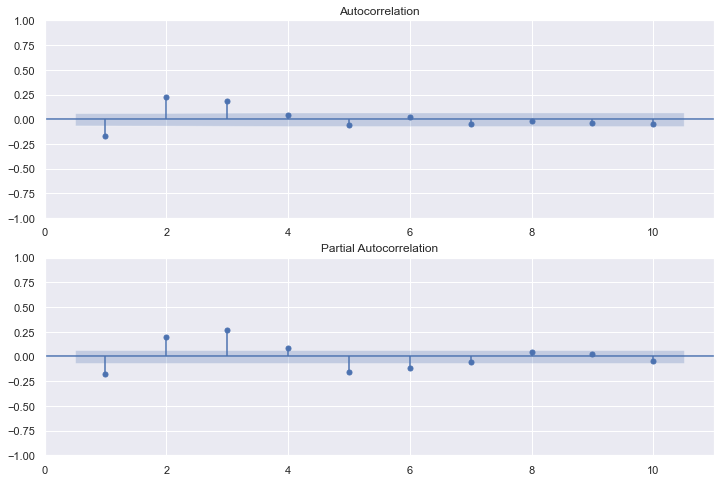

In [3]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

# Order of earthquakes
In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.

AR(p)	MA(q)	ARMA(p,q)
ACF	Tails off	Cuts off after lag q	Tails off
PACF	Cuts off after lag p	Tails off	Tails off
The earthquakes time series earthquake, the plot_acf(), and plot_pacf() functions, and the SARIMAX model class are available in your environment.

Instructions 1/3
1 XP
1
2
3
Plot the ACF and the PACF of the earthquakes time series earthquake up to a lag of 15 steps and don't plot the zeroth lag.

In [4]:
earthquake = pd.read_csv('earthquakes.csv')
earthquake.drop(['Year'],axis=1,inplace=True)
earthquake.date = pd.to_datetime(earthquake.date)
earthquake.set_index('date', inplace=True)

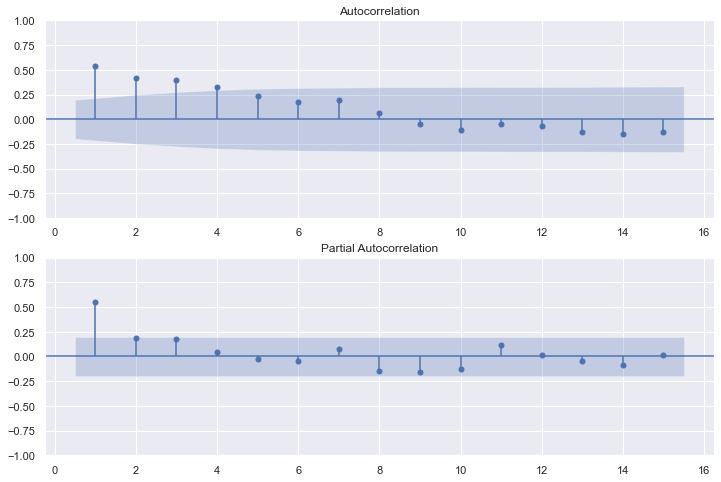

In [5]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

# Order of earthquakes
In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.

AR(p)	MA(q)	ARMA(p,q)
ACF	Tails off	Cuts off after lag q	Tails off
PACF	Cuts off after lag p	Tails off	Tails off
The earthquakes time series earthquake, the plot_acf(), and plot_pacf() functions, and the SARIMAX model class are available in your environment.

Instructions 3/3
30 XP
3
Create and train a model object for the earthquakes time series.

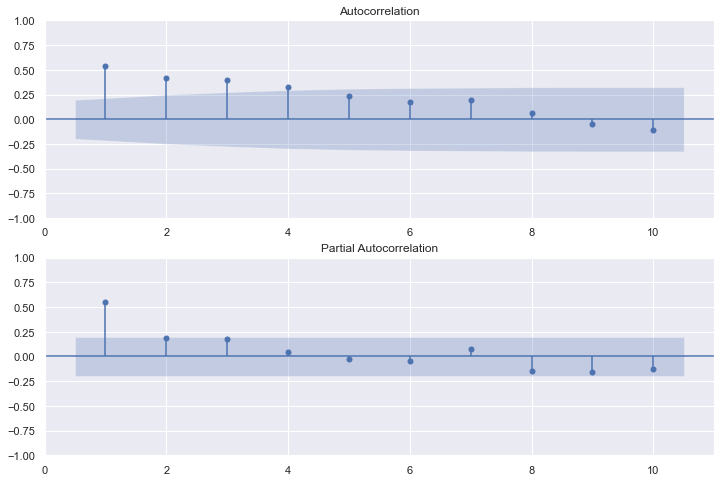

In [6]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = SARIMAX(earthquake, order =(1,0,0))

# Train model
results = model.fit()

# 1. AIC and BIC
In the last lesson, we mentioned how ACF and PACF can't be used to choose the order of a model, when both of the orders p and q are non-zero. However there are more tools we can use, the AIC and the BIC.

2. AIC - Akaike information criterion
The Akaike information criterion, or AIC, is a metric which tells us how good a model is. A model which makes better predictions is given a lower AIC score. The AIC also penalizes models which have lots of parameters. This means if we set the order too high compared to the data, we will get a high AIC value. This stops us overfitting to the training data.

3. BIC - Bayesian information criterion
The Bayesian information criterion, or BIC, is very similar to the AIC. Models which fit the data better have lower BICs and the BIC penalizes overly complex models.

4. AIC vs BIC
For both of these metrics a lower value suggests a better model. The difference between these two metrics is how much they penalize model complexity. The BIC penalizes additional model orders more than AIC and so the BIC will sometimes suggest a simpler model. The AIC and BIC will often choose the same model, but when they don't we will have to make a choice. If our goal is to identify good predictive models, we should use AIC. However if our goal is to identify a good explanatory model, we should use BIC.

5. AIC and BIC in statsmodels
After fitting a model in Python, we can find th AIC and BIC by using the summary of the fitted-models-results object. These are on the right of the table.

6. AIC and BIC in statsmodels
You can also access the AIC and BIC directly by using the dot-aic attribute and the dot-bic attribute of the fitted-model-results object.

7. Searching over AIC and BIC
Being able to access the AIC and BIC directly means we can write loops to fit multiple ARIMA models to a dataset, to find the best model order. Here we loop over AR and MA orders between zero and two, and fit each model. Then we print the model order along with the AIC and BIC scores

8. Searching over AIC and BIC
If we want to test a large number of model orders, we can append the model order and the AIC and BIC to a list, and later covert it to a DataFrame.

9. Searching over AIC and BIC
This means we can sort by the AIC score and not have to search through the orders by eye. We can do the same with the BIC score. In this case the AIC and BIC favor different models, but we want a good predictive model so we will choose the model with the lowest AIC. This is an ARMA(2,1) model.

10. Non-stationary model orders
Sometimes when searching over model orders you will attempt to fit an order that leads to an error. This ValueError tells us that we have tried to fit a model which would result in a non-stationary set of AR coefficients. This is just a bad model for this data, and when we loop over p and q we would like to skip this one.

11. When certain orders don't work
We can skip these orders in our loop by using a try and except block in python. Here's the code we had before.

12. When certain orders don't work
First we try to run the code in the try statement. We try to fit the model and print the scores. If this fails then the code in the except statement is run, where we print None for the scores

13. Let's practice!
You've been learning a lot about the AIC and BIC. Time for you to put it to practice!

# Searching over model order
In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

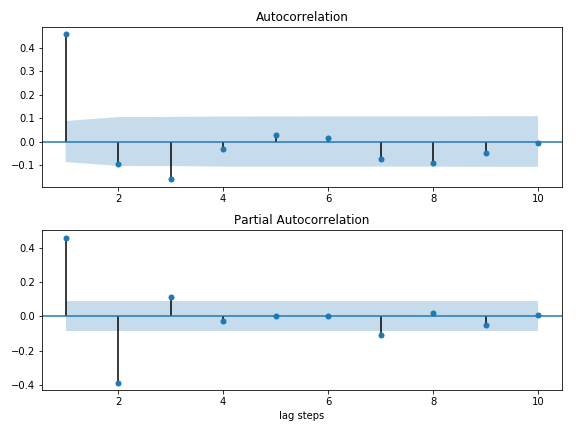

The SARIMAX model class and the time series DataFrame df are available in your environment.

Instructions
0 XP
Loop over values of p from 0-2.
Loop over values of q from 0-2.
Train and fit an ARMA(p,q) model.
Append a tuple of (p,q, AIC value, BIC value) to order_aic_bic.

Hint
To make a loop over values 0 to n you can use range(n+1).
Make sure you set the order of differencing d to zero.
Make sure you append a tuple of the values in the right order.

In [7]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

# Choosing order with AIC and BIC
Now that you have performed a search over many model orders, you will evaluate your results to find the best model order.

The list of tuples of (p,q, AIC value, BIC value) that you created in the last exercise, order_aic_bic, is available in your environment. pandas has also been imported as pd.

Instructions 1/2
0 XP
1
2
Create a DataFrame to hold the order search information in the order_aic_bic list. Give it the column names ['p', 'q', 'AIC', 'BIC'].
Print the DataFrame in order of increasing AIC and then BIC.

Hint
If you pass a list of tuples into pd.DataFrame() it will treat each tuple as a row of data. This is what you need in this case.
Did you pass a list of column names?
To sort a DataFrame df by increasing value of a column 'col' you can use df.sort_values('col').

In [8]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
8  2  2  2808.309189  2832.847965
5  1  2  2817.292441  2836.923462
2  0  2  2872.205748  2886.929013
7  2  1  2889.542335  2909.173356
6  2  0  2930.299481  2945.022747
4  1  1  2960.351104  2975.074370
3  1  0  2969.236399  2979.051910
1  0  1  2978.726909  2988.542419
0  0  0  2996.526734  3001.434489
   p  q          AIC          BIC
8  2  2  2808.309189  2832.847965
5  1  2  2817.292441  2836.923462
2  0  2  2872.205748  2886.929013
7  2  1  2889.542335  2909.173356
6  2  0  2930.299481  2945.022747
4  1  1  2960.351104  2975.074370
3  1  0  2969.236399  2979.051910
1  0  1  2978.726909  2988.542419
0  0  0  2996.526734  3001.434489


# AIC and BIC vs ACF and PACF
In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.

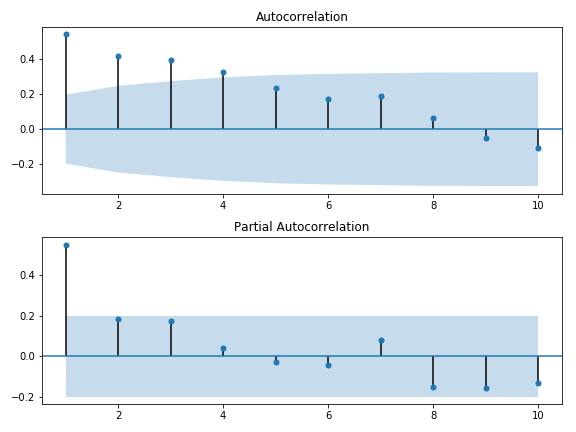

The SARIMAX model class and the time series DataFrame earthquake are available in your environment.

Instructions
0 XP
Loop over orders of p and q between 0 and 2.
Inside the loop try to fit an ARMA(p,q) to earthquake on each loop.
Print p and q alongside AIC and BIC in each loop.
If the model fitting procedure fails print p, q, None, None.

Hint
You can use the range() function to loop over values of p and q.
Make sure to set the differencing order to zero.
Make sure fit the model and print the results inside the try block.

In [9]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake, order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812126 804.8644124814818
0 2 761.067478750389 768.8528383007928
1 0 666.6455255041617 671.8357652044309
1 1 647.1322999673804 654.9176595177842
1 2 648.7385664620795 659.1190458626178
2 0 656.0283744146391 663.8137339650428
2 1 648.8428399959586 659.2233193964969
2 2 648.850644343318 661.826243593991


# 1. Model diagnostics
You've come a long way, but our work isn't finished once we have built the model. The next step is using common model diagnostics to confirm our model is behaving well.

2. Introduction to model diagnostics
After we have picked a final model or a final few models we should ask how good they are. This is a key part of the model building life cycle.

3. Residuals
To diagnose our model we focus on the residuals to the training data. The residuals are the difference between the our model's one-step-ahead predictions and the real values of the time series.

4. Residuals
In statsmodels the residuals over the training period can be accessed using the dot-resid attribute of the results object. These are stored as a pandas series.

5. Mean absolute error
We might like to know, on average, how large the residuals are and so how far our predictions are from the true values. To answer this we can calculate the mean absolute error of the residuals. We can do this in Python using the numpy-dot-abs and the numpy-dot-mean functions.

6. Plot diagnostics
For an ideal model the residuals should be uncorrelated white Gaussian noise centered on zero. The rest of our diagnostics will help us to see if this is true. We can use the results object's dot-plot-underscore-diagnostics method to generate four common plots for evaluating this. These are shown on the right.

7. Residuals plot
One of the four plots shows the one-step-ahead standardized residuals. If our model is working correctly, there should be no obvious structure in the residuals.

8. Residuals plot
Here the plot on the left has no obvious pattern, but the plot on the right does.

9. Histogram plus estimated density
Another of the four plots, shows us the distribution of the residuals. The histogram shows us the measured distribution; the orange line shows a smoothed version of this histogram; and the green line, shows a normal distribution. If our model is good these two lines should be almost the same. Here, the plot on the left looks fine, but the plot on the right doesn't.

10. Normal Q-Q
The normal Q-Q plot is another way to show how the distribution of the model residuals compares to a normal distribution. If our residuals are normally distributed then all the points should lie along the red line, except perhaps some values at either end.

11. Correlogram
The last plot is the correlogram, which is just an ACF plot of the residuals rather than the data. 95% of the correlations for lag greater than zero should not be significant. If there is significant correlation in the residuals, it means that there is information in the data that our model hasn't captured.

12. Summary statistics
Some of these plots also have accompanying test statistics in results dot-summary tables. Prob(Q) is the p-value associated with the null hypothesis that the residuals have no correlation structure. Prob(JB) is the p-value associated with the null hypothesis that the residuals are Guassian normally distributed. If either p-value is less than 0.05 we reject that hypothesis.

13. Let's practice!
Now let's use some of these new tools in practice!

# Mean absolute error
Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

numpy has been imported into your environment as np and the earthquakes time series is available for you as earthquake.

Instructions
0 XP
Use np functions to calculate the Mean Absolute Error (MAE) of the .resid attribute of the results object.
Print the MAE.
Use the DataFrame's .plot() method with no arguments to plot the earthquake time series.

Hint
The residuals are available in the .resid attribute of the results object.
You can use the np.abs() function to calculate the absolute values of the residuals and the np.mean() function to calculate the mean.

4.75562566826532


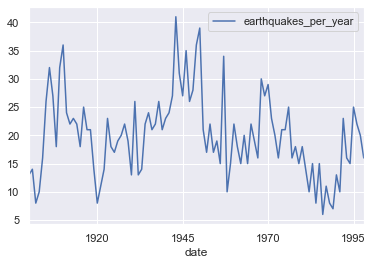

In [10]:
# Fit model
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

# Diagnostic summary statistics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

Test	Null hypothesis	P-value name
Ljung-Box	There are no correlations in the residual
Prob(Q)
Jarque-Bera	The residuals are normally distributed	Prob(JB)
An unknown time series df and the SARIMAX model class are available for you in your environment.

Instructions 1/4
1 XP
1
2
3
4
Fit an ARMA(3,1) model to the time series df.
Print the model summary.



In [11]:
# Create and fit model
model1 = SARIMAX(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1421.678
Date:                Thu, 04 Aug 2022   AIC                           2853.356
Time:                        20:43:48   BIC                           2877.895
Sample:                    01-01-2013   HQIC                          2862.682
                         - 09-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0719      0.110     -0.653      0.514      -0.288       0.144
ar.L2          0.2542      0.034      7.573      0.000       0.188       0.320
ar.L3          0.2528      0.039      6.557      0.0

# Fit an AR(2) model to the time series df.
Print the model summary.

In [12]:
# Create and fit model
model2 = SARIMAX(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1462.150
Date:                Thu, 04 Aug 2022   AIC                           2930.299
Time:                        20:43:48   BIC                           2945.023
Sample:                    01-01-2013   HQIC                          2935.895
                         - 09-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1361      0.031     -4.400      0.000      -0.197      -0.075
ar.L2          0.2005      0.032      6.355      0.000       0.139       0.262
sigma2         1.0901      0.043     25.360      0.0

# Plot diagnostics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

Test	Good fit
Standardized residual	There are no obvious patterns in the residuals
Histogram plus kde estimate	The KDE curve should be very similar to the normal distribution
Normal Q-Q	Most of the data points should lie on the straight line
Correlogram	95% of correlations for lag greater than zero should not be significant
An unknown time series df and the SARIMAX model class are available for you in your environment.-

Instructions 1/3
1 XP
1
2
3
Fit an ARIMA(1,1,1) model to the time series df.
Create the 4 diagnostic plots.

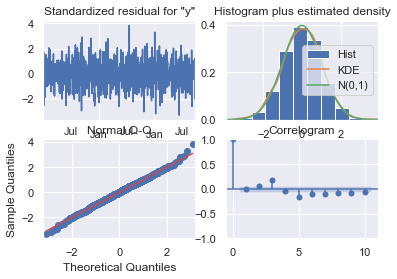

In [13]:
# Create and fit model
model = SARIMAX(df, order=(1,1,1))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# 1. Box-Jenkins method
You've learned lots of tools and methods for working with and modeling time series. In this lesson you will learn about the best practices framework for using these tools.

2. The Box-Jenkins method
Building time series models can represent a lot of work for the modeler and so we want to maximize our ability to carry out these projects fast, efficiently and rigorously. This is where the Box-Jenkins method comes in. The Box-Jenkins method is a kind of checklist for you to go from raw data to a model ready for production. The three main steps that stand between you and a production-ready model are identification, estimation and model diagnostics.

3. Identification
In the identification step we explore and characterize the data to find some form of it which is appropriate to ARIMA modeling. We need to know whether the time series is stationary and find which transformations, such as differencing or taking the log of the data, will make it stationary. Once we have found a stationary form, we must identify which orders p and q are the most promising.

4. Identification tools
Our tools to test for stationarity include plotting the time series and using the augmented Dicky-Fuller test. Then we can take the difference or apply transformations until we find the simplest set of transformations that make the time series stationary. Finally we use the ACF and PACF to identify promising model orders.

5. Estimation
The next step is estimation, which involves using numerical methods to estimate the AR and MA coefficients of the data. Thankfully, this is automatically done for us when we call the model's dot-fit method. At this stage we might fit many models and use the AIC and BIC to narrow down to more promising candidates.

6. Model diagnostics
In the model diagnostics step, we evaluate the quality of the best fitting model. Here is where we use our test statistics and diagnostic plots to make sure the residuals are well behaved.

7. Decision
Using the information gathered from statistical tests and plots during the diagnostic step, we need to make a decision. Is the model good enough or do we need to go back and rework it.

8. Repeat
If the residuals aren't as they should be we will go back and rethink our choices in the earlier steps.

9. Production
If the residuals are okay then we can go ahead and make forecasts!

10. Box-Jenkins
This should be your general project workflow when developing time series models. You may have to repeat the process a few times in order to build a model that fits well. But as they say, no pain, no gain.

11. Let's practice!
In the following exercise you will go through these steps to take an unknown time series and make a model ready for forecasting. Let's go!

# Identification
In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.

The time series has been loaded in as a DataFrame savings and the adfuller() function has been imported.

Instructions
0 XP
Plot the time series using the DataFrame's .plot() method.
Apply the Dicky-Fuller test to the 'savings' column of the savings DataFrame and assign the test outcome to result.
Print the Dicky-Fuller test statistics and the associated p-value.

Hint
Remember that you need to feed a series into the adfuller() function, not the full DataFrame.
Remember that the 0th element of the adfuller() output is the test statistic and the 1st element is the p-value.

In [14]:
savings = [4.9, 5.2, 5.7, 5.7, 6.2, 6.7, 6.9, 7.1, 6.6, 7.0, 6.9, 6.4, 6.6, 6.4, 7.0, 7.3, 6.0, 6.3, 4.8, 5.3, 5.4, 4.7, 4.9, 4.4, 5.1, 5.3, 6.0, 5.9, 5.9, 5.6, 5.3, 4.5, 4.7, 4.6, 4.3, 5.0, 5.2, 6.2, 5.8, 6.7, 5.7, 6.1, 7.2, 6.5, 6.1, 6.3, 6.4, 7.0, 7.6, 7.2, 7.5, 7.0, 7.6, 7.2, 7.5, 7.8, 7.2, 7.5, 5.6, 5.7, 4.9, 5.1, 6.2, 6.0, 6.1, 7.5, 7.8, 8.0, 8.0, 8.1, 7.6, 7.1, 6.6, 5.6, 5.9, 6.6, 6.8, 7.8, 7.9, 8.7, 7.7, 7.3, 6.7, 7.5, 6.4, 9.7, 7.5, 7.1, 6.4, 6.0, 5.7, 5.0, 4.2, 5.1, 5.4, 5.1, 5.3, 5.0, 4.8, 4.7, 5.0, 5.4]
date = pd.date_range(start="1955-01-01",end="1980-04-01",freq='QS')
save = {    'savings':savings,    'date':date} 
savings = pd.DataFrame(save)
savings.date = pd.to_datetime(savings.date)
savings.set_index('date', inplace=True)

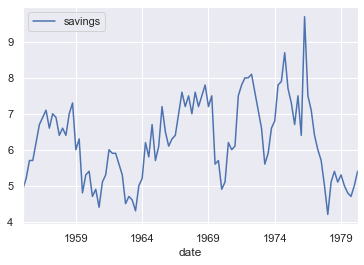

-3.185899096242139
0.02081554164411422


In [15]:
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Identification II
You learned that the savings time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

The plot_acf() and the plot_pacf() functions have been imported and the time series has been loaded into the DataFrame savings.

Instructions
0 XP
Make a plot of the ACF, for lags 1-10 and plot it on axis ax1.
Do the same for the PACF.

Hint
Set the zero boolean argument to control whether or not to plot the correlation at lag zero.

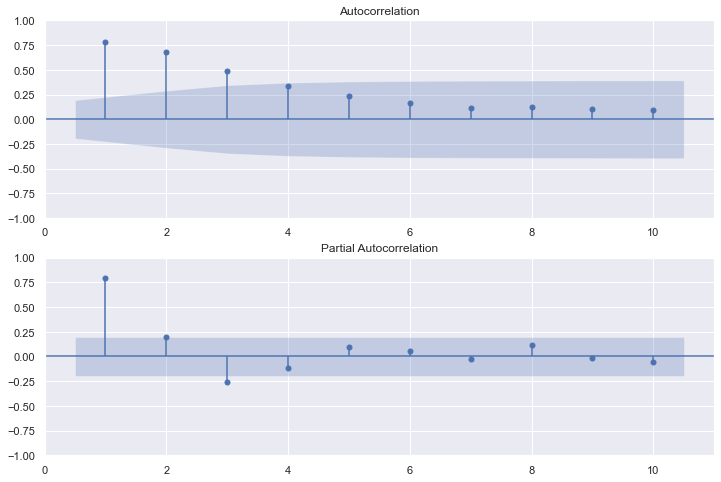

In [16]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2)

plt.show()

# Estimation
In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

The time series savings has been loaded and the SARIMAX class has been imported into your environment.

Instructions
0 XP
Loop over values of p from 0 to 3 and values of q from 0 to 3.
Inside the loop, create an ARMA(p,q) model with a constant trend.
Then fit the model to the time series savings.
At the end of each loop print the values of p and q and the AIC and BIC.

Hint
To make a loop over values 0 to n you can use range(n+1).
To add a constant in the SARIMAX model you must set the trend argument to 'c'.
The AIC and BIC are stored as attributes in the fitted model results object with names .aic and .bic.

In [17]:
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = SARIMAX(savings, order=(p,0,q), trend='c')
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

0 0 313.6028657326894 318.85281135925794
0 1 267.06970976886925 274.94462820872207
0 2 232.16782676455577 242.66771801769286
0 3 217.5972051118875 230.72206917830886
1 0 216.20348062500423 224.07839906485705
1 1 215.7003898861551 226.2002811392922
1 2 207.6529860843379 220.77785015075926
1 3 209.57498691600057 225.3248237957062
2 0 213.97232327543483 224.47221452857193
2 1 213.4303567908907 226.55522085731207
2 2 209.57903436790326 225.3288712476089
2 3 211.575032090471 229.9498417834609
3 0 209.54493107911702 222.6697951455384
3 1 210.82147634942626 226.57131322913187
3 2 211.45759881824864 229.83240851123853
3 3 213.54389304634785 234.543675552622


# Diagnostics
You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

The time series savings has been loaded and the SARIMAX class has been imported into your environment.

Instructions
0 XP
Retrain the ARMA(1,2) model on the time series, setting the trend to constant.
Create the 4 standard diagnostics plots.
Print the model residual summary statistics.

Hint
You can make the 4 standard diagnostics plots by using the .plot_diagnostics() method of the fitted model results object.
The residual test statistics can be found by using the.summary() method of the fitted model results object.

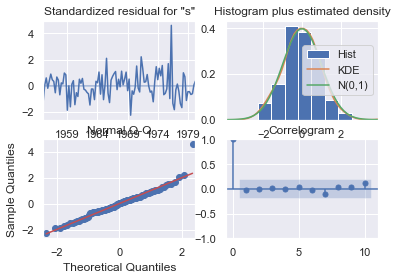

                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Thu, 04 Aug 2022   AIC                            207.653
Time:                        20:43:53   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

In [18]:
# Create and fit model
model = SARIMAX(savings, order=(1,0,2), trend='c')
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())